# Pytorch Computer Vision

An introduction to **Computer Vision and & Convolutional Neural Network** 

> CNN performs the best for the image data

Video resorce [Youtube Video 14:04:00](https://www.youtube.com/watch?v=V_xro1bcAuA&t=4949s)



In [2]:
import torch
from torch import nn

# specify device to run/accelerate models
device = "mps" if torch.backends.mps.is_available() \
               else "cuda" if torch.cuda.is_available() \
               else "cpu"
print(f"{device} is available")

cuda is available


## Contents to be covered in this section


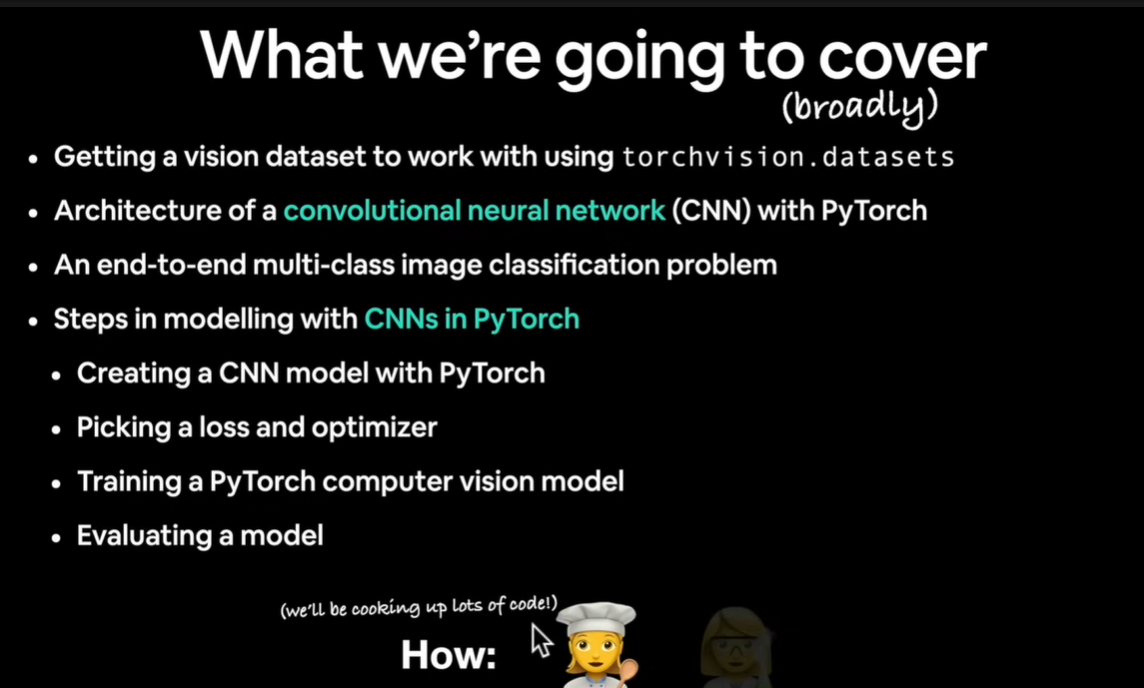

In [3]:
%%html
<img
width=725,
height=375,
src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABHgAAAKwCAIAAABs+1/3AAAACXBIWXMAAA7EAAAOxAGVKw4bAAAAEXRFWHRTb2Z0d2FyZQBTbmlwYXN0ZV0Xzt0AACAASURBVHic7H1neFNnlv+9V71YVrHlIsuSXORecAVDwAQYmgmQhJCZZEjCpEwym5k8M592v++X3Z19JrOZskkmySTT0oBAgBBCr47B4N57x1Wy1cv9fziPzv+1ZBuTwJIw7++DH1m65a2nn/OyOp2WoaCgoKCgoKCgoKCgoLh74O53AygoKCgoKCgoKCgoKB40CEUi8f1uAwUFBQUFBQUFBQUFxQMF6tGioKCgoKCgoKCgoKC4y6CKFgUFBQUFBQUFBQUFxV0GVbQoKCgoKCgoKCgoKCjuMqiiRUFBQUFBQUFBQUFBcZfB3u8GUFD8U4Nl//8e5Hn+PraEgoLiHoFucwoKCop/TlCPFgUFBQUFBQUFBQUFxV0GVbQoKCgoKCgoKCgoKCjuMqiiRUFxnwGhRDSgiILiQQXd3RQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQU330I7ncDKCi+62BZNuxfjuMW/ImCgoKCgoKCgoKCgoLiDsCyLKpYpK5FQUFB8Q0AJAU/39/GUFBQUFDcC1DiTkGxKFiW5Xme4zihUMgwDM/zPM/D98FgMBgMwr8UFBQUdwpQrigNoaCgoHiAQRUtCorbYzF7MxWSKCgoKCgoKCgoFgRVtCjuCZaOhPlm+skSz7xbDwQXFvyFDwzDyGSy6OhokUgE//r9foZhRCKR0+mcnp72+Xzf4NXfKeA4UL3xvoAMIUOvKcUDDJxxlmUFAgHP84FAAMhOMBi8362joKCgoLhrEN7vBlA8mIgUFsk4GRAplv801HyWvoBhGEidWqawgjpVWLOxkSzLCoXC3Nzcl156KS4ujgkFDfI87/P52tvb33rrre7u7jvtzncHVMX6LgAHn87CAw+kFRKJJC0tLTc3V6PROByOzs7OlpaWmZkZ5s7JIwUyF7SUMXQ3UVBQfDdAFS2KuwyWZcVisVQq5TiOTGqCz36/3+PxBINBjuOWqQ6BwiMSiSQSiUAg8Pv9AoGACfFRjuNcLpfX6/1m7ZTL5dAMsql+vz8QCPj9fo7jOI7TarXr16+3WCx4L3Tk5s2bH3300Z2+9zsFlEWgvIdAICBVL8xDoyLLPQLHcbCw5XK5QCBwu90Oh8Pr9dIxf4DBsmxCQsIjjzyyd+/e4uLiqKgot9vd1dV18ODBjz/+uK2tzev1UlVhaYAJDMxeTMi+xhBU6762joKCguL/gypaFHcBpFggEAhMJtPu3buVSiVExZA6TF9f38mTJ/v6+pZfZQsULYPBsHXrVqPR6PF4SH3A4XBcvnz5ypUrPp8PuOxtnwwXqFSq0tLSiooKsVhM2kGDwaDD4bh48eLVq1fheoFAAPGB+HBQtObm5r7vcYPQHYlEotfrFQoFOXrBYBBiI51OJ0Ot7HcboNlqNJq8vLy1a9darVapVDo0NHT58uXLly+Pjo76/X6qbj144HleqVRu27bt1VdfzcjIgO0mlUpzcnJiY2NlMtkf//jHrq6u+93M7we0Wq1SqSQLwLIs6/P5bt265XA47mPDKCgoKBBU0aL4tgCREWR0+KzX6x999NHc3FyhUEgGcgSDwfr6+r6+PlC0liO7wwMlEklxcfHPf/5zq9Xq8/mwBiDDMJOTkzExMS0tLbdu3QrLdVnimSzLQiP37dvHcZxUKkVTqN/v7+vr6+rqCgaD4DoLeyx8Bl8EtAQf+30UizmOS0lJ2bdvX2FhIRnDxvN8V1fXn//859ra2vvbwgcPsISio6O3bNny05/+dMWKFWA7CAaDmzdvPnjw4AcffNDe3h4IBL6PK4piMQAlSUlJ+cEPfmCxWMCxD5TH7/drtdq1a9devHhxYGDA4/Hc78Z+dwGU1mAw7N+/v7CwUCQSCQQCYEACgWBwcPCDDz64dOkSjCHdQRQUFPcXVNGiuAsIY2ZDQ0NtbW2lpaUgr4O6wjBMMBg0mUxWq/XUqVPL9GiBFCKXy3NycgwGA8QQkmpPdHR0Tk6OTqcbHx9fTjgiaoOxsbE5OTkymQzS0MmjsUZGRtra2piI+ssgFZE569/302+gOxqNpqKi4qGHHgr7qa6u7ujRo/erbQ8wQCLMysp6+umnV69ejf5ehmGsVutzzz0nFAp/97vfDQwMUKfWAwOgGyKRyGg0GgwGiUTCEAREIBBwHJeQkJCWlqZUKiF89L629zsNlmXVanVZWdmmTZvCjjTs7e09d+5cdXW13++nJ3BQUFDcd9BDVynuAsLqSdhsttbW1qmpKUzNwmwfsVhsNpu1Wi0W3VqOrhIdHW02m+VyOaROBUOA98bExBgMBgjZJyMVl4BIJIqLi4P6FmQLA4GAw+Foa2sbGRkhGx/Z30AgEAgEHoxkAL/f73K5/H6/2+32hOByuWZnZ30+3zLniGL54HleKpWmpqaaTCbwZsBiDgaDbrdbpVJt3rx5/fr1crmc+f4r8xQIsOZIpVJw9eOXOMWQFIq08b419PsACN6enZ0FquV2u91ut9fr9Xq9LpfrQaLPFBQU32tQRYvi24JUbOCzy+Wqr68fHBxk5hcA5DhOLpcXFhbGxMQEAoEwS+SCABdWUlJSVlYWSB7g0ULphGXZ+Pj4FStWkLLLbZ+pVCpzc3OxkCDeKBAI7HZ7TU3N5OTkEn2EK8lUse8vQPiDQ5klEok4BAiMRLGP4u5CKBQqlUqZTAbeLQwhEwgEQqEwJSWlsrIyISGBarkPEiC30263u91uMOswIa8yUCGXy2W32z0eD/Vk3hbAGoBMiUQipFokWaZ7h4KC4r6DKloUdwcoGfA87/V6e3p6IPCJmV/SHcpaGI1GqJNx28cCNzUajWazGaIQw4yUoDWlpqaC8racB7IsK5fL09PTo6OjMREL4Pf7b926NTg4SLacX6he8IPKy8Mm5QHr3XcHfr/fZrPNzc1hBReo+giOWZFIZLVarVbr/W4mxV0DkJFgMDgwMNDd3Q0ZRJCGh76XoaGhrq4ul8tF991yQMbcsgTAPISGPDqYFBQU9xFU0aK4m8AYvKmpqbq6OrfbHcbtILa+sLBQKpUyRFneBQG6mUqlys3NVavVCwbcQ6kMq9VqMpnYUM3fJTgrz/McxxkMBpPJBMohXh8IBJxOZ3Nzc0dHBxPKyCIbw/zz8WxqVr8XYFnW5XI1NTU1NjZC4Uqv10taEAQCgVarjYuLW6Y9guL7ApZle3t7P/300+rqatC1UDFoa2v75JNP6urqllM6lYL556PGFBQU30fQYhgUdwFk9B1oMg6HA87fhPAnUoiUy+WQ8D03N7d0pT4szpaVlSUWiyFfiBQ94QKBQJCUlGQymS5dusQQrrPIJ4NOJRaL09LSoOqXSCQCsQaDHjs6Om7dugVm5jDlCl1bYS18gPHAd/B+gef57u7uv/zlL1KpdNWqVWKxOBgMwsFuGCIbFRUlkUgwwOx+N5ni2wJzO4FS7d69u6KiIiYmZm5urrGx8fDhw19++eXU1BSNG1wmwhhBJJbmLxQUFBT/B6CKFsVdBhhovV5vZ2dnW1tbYmIiM58RisVii8WSnJw8MjJyWy4okUhSUlIsFgt6nxZUn6KiojIyMuRyudPpDPNERbZNoVAYjUadTseHjjxGv9bExERdXZ3L5SLvQrknkp0/2Fyc7G9k8OQ/G5YzAssU7KCut8PhOHnyZGtra35+vlqtVqvV27Zt27BhA1glhEIhVE1Y5qvvqAHfLyzWfdIC8n/dpjsHuZump6ePHz9eU1NjMpnUarXb7R4aGhoZGQlzbFIsgSWCnMkFg8ay/7NFck/fRT78O7vZv5sNw1Z9F5r3XWgDxf8ZqKJFcRdAkgyMHhweHm5ubl67di1ZuAKyUMxmc1paWnV1NbM4xYGoQplMlpGRERsbiwE2YZfB93K5PDs7W6/X9/b23ra1er0+Ly9PKpVCtTd8psfj6enpgbhBZr7/ajEVi3R5LXYxFJ0nk76+DcLegrGXfAhLvCWyF5AXtKA9mJw18nZyWB5sVrGYVs+EVt1inoflDAvc6/P5uru7u7q6RCJRUVERWWE/EAh4PJ6wJUq2YcEX3ZUZWSz49v/e00IuOdKAgl5r/HVBsftutXbBrU368Jf5HLL9HMdNTEyMjY3BN3eluE7kxH2DRt7Ri+BDGOVZbNfwRNmPb9wk8gn472LL9bZvCVsnYQsprNkLLqpIM9y92CPkoIV9JpuKH0Bdv+stCeMIzCKD/N3kC0vshQWX0F1h2d8RQkpxf0EVLYq7DyAiNputoaFhfHw8Pj4eT50CxUCj0aSmpkqlUkhQiQQbOnNGo9FkZ2eDogVBg8jX4VFAyKBqfEpKSm9vL5qEI7kmy7IikchgMKSkpITRVp7nZ2dnGxoawM9GSg/kNYvpJEzoJBy4BVRNeAXU9GMIFfQbENkFH0W2EMaHDZ3xteBZtyiwonoGxQahumDkS0ENg07B4OMzsUrecgqQ4C0Lqso8zy//ZN4FH3KnTyDLn+ATcEjhG5YwfzLzh45lWZhHvD1sapYz0eRagjzDpKSkhIQEJrR93G73zMyMx+PBy/AAA3wRwzA4BSgDwTIIW9tQbmGJ9sAtKOuHjQYTGnnm2y3jOwIbMiWEWROY+eI1uebxXtwL5KPuqNnkdMO9YQQh7NfIC8JAaoZcCOSAR445M39pkSD7woYKV+L3ZCNRR72j3brggJBLiyRBZAPCFltk+9lQQuwdNYZ8Du6CxaRYaCR5rj2pBYUNUVjDyH/hpUKhcMGhI5uEJ46Qj7pHG4QccJhZoH6k9gW/4tZAfvTNWA88ChBJ+pjQdmOI5bc0qVnMpnCnhAXnaEG2Qq5PXAYkCyPvXYKkL2d3I8I4FN6CU0BegxQM/tIzCR5UUEWL4p6A53mv19vd3T00NBQXFwfF3FFYF4vFKSkpGo0Gj6uKvB0+qNXq5ORkVGDCpCskZwKBQK/Xp6SknDlzZolUcpZlJRKJ0WiMjY1l5ruDGIaZm5trb293OBzc8g4+ZuYbDqGAYXR0tEajUalUIpGIYRiPx2Oz2SYnJx0OR5A44/hOGR6+Atx3EGkmFouhC36/f3Z2dnp62maz3fYt+Cj4NxgM+nw+v9/PzBdHmPnlQMKUEPwG60Detkd8qLxe2PcgEvn9/ts+geR8ZAfviDHj7ZF3kV+Sv5IicjAYlEqlWq1Wo9HIZDJY0nCkz9TUlN1uh+gvnjDeL/gifDJofRqNprCwMCUlBQYzGAyCuwNmHBqMvSbnImxSQOoKE20jdfKwG0kNChaYVqtVqVRSqRREIrfbPT09PT097XK5fD4frrFI8eXbI2xrQ6vEYrFardZqtXK5HARon89nt9unpqZmZ2dh8ZA+xgVX2jdYJ0yoEL9KpVIoFAqFAubL5/M5HI6ZmRmbzebxeIKhupGLCfFhDw8Gg36/P6yFiw0mv8hRfpH9VSgUMHESiYTjODgVcGZmZmZmxu1284uEXi9/QGBpicXiqKgorVYbFRUlEok4jnO5XLj+IbUVyAIuvAXbv/zGkNodFwoQIJXtSHDE4fLMQnGGkd+Tn1FRhw0llUrVarVSqVQqlWKxGL6cm5ubmZmBYv2g6uCWDxPZv/3uiNQWQCIXCARyuRw4jkwmgzNOoKKp3W7HxYmr5Ru8GimPQCAQi8UajUatVstkMkhvDgaDLpdrZmZmeno6bI0tRmNJqhjGcchVfdvWLja5kUsr7AIgj8HQ0YUCgUClUmk0mqioKGCpwWDQ6XTa7faZmRmn00mut6V3N85+5MqM5J6kmrfMLlN8T0EVLYq7D2QD3d3dbW1tRUVFpOQnEAikUml2drbRaARFazFWJBaLU1NTMzMzQf5DkWJubs7pdOr1evKuqKio/Px8jUYTdgQWAihaVFRUQUEBuMhI6dnv9/f29ra1tQHlDeOUi7FzgUAAJ7coFIqMjIyysrKioiJwTchksmAwODs7OzIy0tvb29TUdOXKla6uLqjoTdoglwAbqvoNKlxaWlpJSUlGRkZSUlJ8fLxWqxWJRDzPw1tGR0fb29tra2vr6uomJibAWxhmIGRZVqfTpaengygG3TebzVFRUSgSIfcSi8XJyckrV64kbcPIclwuV09Pz+jo6NKSBBtyTsbHxycnJ0skkrCLZ2dnu7u7p6amlh4HhmGEQmFCQgIo3kzIJAmD3NfXNzExcVuZRiAQxMXFmc1miURCTjHP81NTU11dXU6nkxQU4DPMslKpTE5OLigoKCgoMBqNiYmJWq0WpC6PxzMxMTE0NNTX11dbW1tbWzs6OgoizoJme1QkcGY3btz4yCOPaDQaYMAOh6OpqamtrQ2vlMlkJpMJSsugVszz/MTERHd3NxQEFwqF0dHRFoslNzc3OTlZKpVyHOfxeAYGBq5du9ba2up0OiMlThhGoVCo0+lSU1OLioqysrISExMTEhLUarVUKg0EAjabbXR0dHh4uLOz8/r1642NjVNTUz6fD6S6uy4fYKskEkliYmJeXl5hYWF6errBYIiJiYHDx+bm5sbGxgYHB+vr669evdre3m632xmGAbHYaDTGxMSgDxzGanR0tLe3F2r9LdhmnBSGYSQSSWxsbEZGxooVK1JTUw0Gg16vj46OlkgkDMPMzc2Nj4+PjY319PTU1dXV19cPDQ3B6Vh+v3/BSWeJoNP4+HiTyQSLENdbMBgcHR0dGBggc0QVCoXFYtFqtQzhyQkEAtB3l8vFcZxSqTSZTEVFRYWFhZmZmQkJCUqlUiKRuFyu8fHxoaGhlpaWy5cvNzQ0TE5OgnAMS2g5QN8IDEhmZmZJSUlmZiaMsEwm4zjO4XCMj4/39vbevHmztra2ubl5ZmYG2glzERcXh92HGRkbG+vr64tckItBrVZbLBalUgnB54FAICEhQaVSwRbDKWZZViQSmUym0tJS+BLnAl7k9/v7+vpGR0eXCKYAbgUKttVqLS4uTk1NNZvNcXFxarUajhF3uVxgChkcHGxsbKypqRkaGgKd/65rWQyhkMCShlgPs9lcWlpqtVqTk5MTExM1Gg0sTofDMTg4eOvWrfb29pqamsbGxsnJSbCP8At5TRcEzHswGBQKhWq12mq15uTk5ObmJiUlwbuAMvh8vsnJyeHhYVhmV65cGRgYgJ3IsiwaZcjRSExMtFgsYIjEfsFlfX19Q0NDXq93OWMC46DX641Go1QqJXU2lmU9Hk93d/f4+HiQcK7yIQMizG9MTIzVai0vL09LSzMYDLCiRCKR1+udnp4eHR0dGhrq6Oi4evVqZ2fn1NSU3+9f2gjL83xcXFxKSgrZHvi+tbX11q1bSGxjYmKysrKsVmtCQgLIG263u7W1tbq6enBwcPkBGhTfC1BFi+JeARhwY2Oj1+sFqsqHTpLheV6n06WkpNTU1ICVdEH5T6lUms3m6Oho/DUYDHo8nvr6+v7+/ieffBLFULCzJicnJyUlkYoWyefgYq1WazQaQdwnTWJut7uzs7O/v58lDmBhlsxXgStFIlFWVtbWrVt37NiRnp6uVqsZwkDFcVxubi7DMDab7ebNm0eOHDlw4MDo6CiGey0h8OHbFQrFihUrNm3atH79+qysLDDqg8CE8SHZ2dkMw7jd7oGBgfPnzx8/fvzKlSu3bt0KG1KhUJidnf3aa69ZrVZ8i1QqBa8jHwpqgqE2mUz/+q//6na7wzoObR4eHv7DH/5w6NCh2y0EhmVZmUy2atWqF198MSEhIRAIoFOC47jOzs7/+Z//uXDhAlSVXIzBcByn1Wp37dr1wx/+UKFQgAQA7enu7n7zzTePHj1622ZotdrHHnvsxz/+sUQiwWAnhmHsdvsXX3zx9ttvu91uXKJMaJblcnlmZubmzZs3btwIGYNosGdDEa0wnn6/f2xsrK6u7uTJkydPnhwYGHA4HAuadZlQ3GZsbOyWLVv279+fkZGBxs6hoaGvv/56dHSUCemTer3+ySef3LVrl1gsxnqYXq/31KlTb7zxxsDAQFRUVE5OTlVV1Zo1a6xWq1qthk0XCARmZmYOHTr061//urW1lZlvWwXo9fqSkpKNGzc+9NBDJpNJpVKFRePwPJ+bm8vzvMPh6O/vv3r16rFjx77++uvx8XHmrnq0yJFJSEh46KGHtm/fXlpaGh8fL5fLSQM2y7I5OTkwdx0dHadPnz5y5Ehzc7Pdbk9ISHjqqae2bNkCxg4gLy6X6/Dhw++8887w8PDSDQD3+OrVqzdv3lxSUmI2mxUKBal+gxUpPT1dIBD4fL7x8fGmpqbz58+fPn26ubl5bm5uwSejyieTydatW7d///7ExESkfizLer3eo0ePvvPOO93d3XiXwWB4/vnn161bh0G8oDx//vnn7777bl9fn9Fo3L59e1VVVVFRUUxMTBgtTUtLAxlu9+7dZ86cOXjw4PXr1x0Ox3KmjLS16/X6NWvW7Ny5s6SkJDExEZQNci7S09NXrVpVVVXV09Nz6tSpY8eONTY22mw2nU63d+/eqqoqpVJJktxPP/30nXfe6e/vX1ruZ0PeD6PR+NJLL5WWlorFYvheJBLFxMSQJxTDxXq9/vnnn9+7dy9LxLwxDAMUY3Bw8M033zx+/DgeYccQCxgvVqvVK1eu3LhxY1lZGVB1UL+hMXBNamoqKJMzMzNtbW0XL1786quvbty4MTMzQw7d0oO8TPCh4G2GYVQqVWFh4Y4dOyoqKmCnoxeIDYX2Wa1W8DT29/dfv3795MmTFy5cGBkZAWLOLZ5fioMAF+h0urKyss2bN5eXl1ssFrVaDU4zhiAjqampcL3NZmtvbz99+vQXX3zR0tIyPT0d9i7QUlatWvXcc88ZDAaIhUZ3Pcdxf/7zn//617+Ojo7CxGEcXSQLhkeJxeL169fv378fLKdMyP/GcVxPT89vf/vbCxcueL1eUr2E1RIXF7dy5cpt27aVlJSkpKTIZDI+VGcYmILZbIYHAnm5fv36Z599VltbOzExsfS05uXl/fKXv4TDZkjp4je/+c1nn33mdrtjYmLWrl27c+fO/Px8UN0xILatre2//uu/PvroI6AhVNd6YEAVLYp7AiBtNpsNDDlGo5GZH+gVHR1dUFBw5MiRBeUSoHdarbaoqEgulwcCAWAzwWDQ6/V2dXU1NTVt27ZNqVTi9VC0PSMjo76+no+IlEAjVnJycnp6Oj8/uoBlWbvdXl9fD36VpcMDUINiWTYqKuoHP/jByy+/XFZWBscfQ0QQMnh8hUqlWrduXV5eXnl5+V//+tdz585BFNaCfUeAFrdz585du3ZlZWVBtEYgEADTGjc/V4dlWalUarVaU1JSHn744UOHDv3jH/9oamry+/2gwwAgHQgUs8iukTpeVFSUSqVa8DKGYUQikUKhWGKgyO54vd6pqSmhUAj+SeDWgKioqKKiotraWpvNtsRDOI5LSkp6+OGHS0pKMMkKWqLRaAoKCs6dO7egVoNPYBhGq9UWFhYWFBSAEoLo6emZm5sDTwJOHIxncnLy5s2bn3jiiby8vKioKLQKYwPQKQEMPikpKSkpaeXKlRs2bDh06NBXX301NjaGWSu4BQQCAYQLVlVVbd++Hfg6CEnT09MnT548deoUdAdaLhKJ4uLi0tLSQCZgQ6Fcvb29KpXKYDBs2rTphz/8YXl5OTh8SK+FVCrFmDdyPCFKMD8/f8+ePdu2bTMajbDASGkSxxO+VCqVOTk5Vqt17dq1J06cOHDgwI0bNxwOB7zrm0kGKCHBv+DiKy8v37Nnz/r169Hii91BYQhGHtZPZmZmRUXFxx9/fOTIkaioKIvFAiYJfIvT6ayuriZzoiJbIhKJ1Gp1eXn5448/vn79+sTERCAjGJqIwi7MuNfrFQqFBoMhMTFx1apVW7ZsOXjw4LFjx/r7+7F+ICmW4b3gjkhJSSHfPjc3p9frxWIxKaaLxeKkpKScnBwyrcXv99fX16tUqtLS0mefffaRRx5BlxFYcDgiXZDneYlEAubzlStXvvfee0eOHAFbzxKEDleIRqPJz89//PHHN23alJSUBOcQoJ0IFXLUT8AjunHjxr/85S8HDx4EY5nVakVKAjsFfP63XRuonYrFYpPJlJeXRy5jkl4hpFKpyWRa8FEMw8hkMpVKFUb/+ZDVDCLxioqKdu7cuX37dpPJJBAIwAKFyw+7jM4NnU63evXqsrKyHTt2HDly5NNPP21tbXW73ejsvVNLBBtypCOpATVbKpVaLJbHHntsx44dmZmZQArIceBDljK4EU6YzMjI+MEPfnD8+PEPP/zw8uXLNpttiS0A/RKJRDKZrLi4eMeOHZs3b7ZYLOC6h23IEYl/CIZhoqOjy8rK8vPzt27devz48cOHDzc3NzudzjD36cDAAMMwVquVXADQhQ0bNlRXV09OTvJLpt2yhLl206ZNxcXFJJ+Cu5qbm6enp/FsDFzPMpmspKTk6aef3rhxY0JCAmp00GuM+sORj4qKKi4uLioqqqys/OKLLz788MOmpqbZ2Vl+vqEW365QKIAFkyvT5/PB1rZYLM8888wTTzwBZA26CX4/kUgEodoMQSiWmCaK7xGookVxT0AqRR0dHUlJSUGiOATwAJPJpNVqwbxK3osqQUxMTFJSUtiZrS6Xq6ura2BgYGRkJD09HUgky7IguYIkCpFUYSIOSi1xcXFhOhjDMFNTU62trR6PB2gf2RHyA0kBGYYpKiratWtXeXk5RrAsKAfwoYxkhUKxZcsWjUbjdrsvXrzo9XpRpiebxIdygQoKCp5//vlt27bpdDqBQBAWpkWOG/IG4EAJCQk/+tGPEhISfv/739fU1JDCAQgNTsTVZwAAIABJREFUEPfFhyorhGUnY1Q6XEb+hPIZShKRsk7YSuB53ufz9ff319fXl5SUsCwL3BpeBKKYUqm02WxgIV7wIRzH6fX6xMREEHBhhUB/pVJpSkqKTqebnZ1dsA2oqyQlJYF0C5ZdeEggEICQP2DwfMj4KhQKMzIynnvuuaqqquTk5GAwCC445IVoiWQIpghcU6lUbty4MTk5WafTffzxx/39/aTIBepuUVHRz3/+84ceeggFDhjwa9euHTlyZGhoiCPqVcJu8ng8METgzYMoNTgB/Pnnn8/LywOdFkzFaGtwuVxjY2Ng0YAuQ1NlMtlDDz20f//+hx56CMwEZAeZ+UoCuXh4njeZTE899VRqauq777576tSp6elpGI1vUG6B3Fkcx6nV6q1bt+7fv7+oqAjEehA6w7RrlIfA7sAwTGFhIQSzNTU1cRzn8/nAPwn99Xg8S0SLwd+kpKQdO3Y88cQThYWFcIIZmHhgPPH6sGIqsCPkcnl5ebnZbE5NTf3ggw8aGhrCvKNkf2HiQBnDafJ4PPANThDc7vV6XS4XVqzBZQ9e1u3bt6vVakzMC1On8Y1AnfLz81966aVgMHjo0CHS3b3gpPA8r1AoHn744Z/85CdlZWVyuRzoBpTPCbseZx9akpOT89Of/lQikdTW1mJWWzCUf+j3+yGwdokGRLbH6/W63W40kaDoTPYUCSlSQvIJkAtKLlHcj1yoStOGDRv27dtXXFwMVpVgKJeGIxJ6seVIxOAhVqv1pZdeSklJ+dOf/nTlypW5uTlyC99RZ3F5M6EZF4vFxcXFP/7xj7dv367VaiG4QygULiia4xthRjQazWOPPZaUlKRSqU6cODE9PR3JdHBAgE9t3LjxhRdeKCgoAGsF7B2MIyWbCtsTCCnYGa1Wa2JiYmpq6ttvv33lyhWXywVaEwxFW1vbtWvXiouLybUK68poNMbHx4tEIojCDWO+5HoGBdhgMCQnJ/M8D3uNDwXWut3umpqa/v5+csuzLCuTybZt27Z///6KigoIDQgEAmKxGCJEgCtBj1BQQRtZUlLSvn37kpKS/vjHP16+fNnpdOJwkQMIbyffi0pjcnLy888//9hjj2k0GliHWNEEXj09PT0yMkLyXKplPRigihbFPQTHcbdu3WppaVm3bh1GyABhgjqBaWlpAwMDC0rqcrk8NzfXbDbjN3DvxMREbW3twMBAX19fZmYm0EGgVlFRUZmZmVFRUWEHYTEh7hgdHZ2ZmalWq4Pz83NcLld7eztULIxkPyS5R7mN4ziDwbBv3778/HxsANLH4PxcfFDAQGMUCoUVFRX/8i//YrPZrl27xizkQAOWsHLlyl/+8pebN2/mQw40TNH2+/0g78KrsRoYCgQQBb5jxw6FQvHrX//66tWrJPcFLYIhtIXIiYMPGEmP7AdNvCBvwUuXEK+Ro09MTDQ3N09MTCQlJfEhe20gEIBZs1gsS8R08TwfHR2dl5cHNmayyBU8ISUlJSkpaWBgYLH0GJZl5XJ5amqqxWLBIYKH2Gy2np4eUGxQWxaLxfn5+a+88squXbsgaI2UtoMh4OCETRBck5OT8+qrr2q12jfffLOvr48hav2DSK1WqxUKBeZceTyec+fO/e53v6uurkZWjXYHmDWRSAQyN8yIWCwuKyurqqoqKysLk88QHo8HUtWxqRzHRUdHb968+ZVXXikuLsYYHia0y8jMFlJnQ4WH53mVSrVhwwatVqtQKI4ePTo9Pb3g9rktyD0VFxf36KOPvvDCCzk5OfhGchngB9xipA6WkZHx7LPPXrp0Sa/Xy2QyCDMDoP65YANEIpHZbH766aeffvppk8kELwLxC5vHEJFjZDdxa/M8n5CQsG/fPoPB8Mc//hFE7QVlWVSKADDyZBQcCY7jJBIJTjpItMnJyU899VR5eblWq0U9gSG0VlRcobVorsrOzv7JT34yOzt79OhR8CEv2EKBQKDT6aqqql566aXCwkKgAxg2Rr4CP7AhpxDMTmpq6gsvvHDixIm4uDgQKKF3QLIWm4vFEEbfEPwihh5yoYb5RrhQuHXY8xMTE/fs2fPMM89kZmaiy50hiCF2FlULfCA8we/3q1SqXbt2GY3G119/HQwQy+9jWL+ALMDQicXiysrKX/ziFxUVFaD5ROpUPBEJiU0CMwFYNisrKzUajVgsPnbs2OTkJJA7chxYlhUKhRqN5sknn9y/f39WVhZQ+8X0K/wX2RDuRJlMtmvXLpPJ9J//+Z9nz56dmZnBd83OzlZXV+/cuTM6OhoVRVgPBoOhsLDwypUrUAcokhGTGrVYLIbIXrlcTlIJkUjU2tpaV1cHdjcg3QKBQK1W79q16+WXX4Z+kSo6LhKSF0OPICEQZlwqle7evVuv1//Hf/zH2bNnFwvGQUsEthbMYU8++eTjjz8OYajkIkQK43K5bDYbuovvyBJB8V3GAjIWBcXdAugwjY2NIyMjDGG0BvqVlJSEkdBhALE4JycHKl4gq/P7/YODg4ODg+Pj4+3t7R6PBygsUCWpVJqampqUlEQ+hyFoX0JCQkFBAUNUCwRqPjc319TUBFb5xcREpIZsqDADhPSgSw2FbxTFInUY+FIsFq9cuXLPnj06nW7B7otEouzs7FdeeWXbtm3ko1iiqBFwNWAhKPkhaYZbpFLp2rVrn3vuObPZjF1GKyzI01ByEAWIyMYEQ8FywYgSt8sXqVmWdTgcLS0toFfj60DGhXjOMF5ODrtAIIDKBKAkkyIOMK34+Pj09HRSsI4cdrVanZGRodFoGMIU7ff7Jycn6+vroS4LPjYtLW3//v2PPPKIXC4HMQK7HCZhkK5aJqT74TgnJCQ8/vjjjz76aExMDENI6jzP9/b2QtwddGF6evrw4cP//d//ff78eTIvLoz9M/NFW4PBsHnz5hUrVuA3kROEihaOsFQqXb169YsvvlhSUoLiO8n7BfPLjkN3UK/GK1mWzc/Pf+qpp8jkmWUuicgJUqlUW7duffHFF7Ozs1G9DBPog0RqOwB3HEhLaWlpjzzySG5u7oIWhAVfzbKs0Wjct2/fM888YzAYyDhb0mWBF/MLlctHZUYqlW7atOn5558vLCyEImaCiOMEFkTkBsSXkm+B70tLSzds2KDT6XAuyB2K7Q/rJnQnJyfniSeeyM3NBVt+2EBxoToQmzZtevnll6GUEUlYSFJDaowsoY7C92azeefOnXl5eSKR6JstDHwpR8QoIt3DpRh2cdhgkheQphDkRyzLxsbGPv744y+88EJWVhZL2COQtvPzlcnIsUXti2XZsrKyX/ziF+vWrYPsvjvtO14PSjjLsqtWrfrFL36xZs0a8PGSQ03eRU4EXsOG4iwCgUBOTs6LL75YWVkZFRUV1jC4UaPR7N27F7QRJpTYRg5y2MDCXKDzB3+CDVJSUvLLX/4yzGnP83xra2tLSwtZeJMPGd0KCwv1ej2zJHNhWdbn88XExOTl5Wk0GpLowWQ1NTV1dXXh82FJb9u27Wc/+1lOTg6UygwjL/AN+l1h6oE/4r88z3u93oqKip/97Gd5eXmwu/FRC84ykqaioqKqqirIyOKImH+S80L1TuTUSy8Siu8RqEeL4t7C5XI1Nzf39fUZDAawjTEhu75cLs/Ly9PpdBMTE8jLkfzFxsampKSExah4PJ6mpqbh4WG3233t2rUdO3aYzWYkVQKBAJSfmzdvcvNjNkANS0hIgKOKSJoYDAanpqaamprsdrtgfr3BBYECH3JBiEAAEu90Ot1ut0AggHILYAkmuTswJ5VKtXHjxosXLx47dozkN8DIExMTd+/evXHjRngRHqCEEh7UmhsdHYWQEq1Wa7VaoTQZT+ilHMdFRUVt2LChubn5f//3fzH/2+/3Y2UnfD6zkO0WD8wl5fgwkXc5gEcNDAzU1dUVFxdj0T8YNJVKlZ6eHhMTs2A4E0g2SUlJWVlZi2nCsbGxBQUFJ06cwKjRsAsEAkFCQkJOTg4U0uBCdQsDgcDg4CCE3aPaZjQa9+zZA/5AlmXJ/O9AIOByuUZHR9va2vr7+2/duiUUCiFOJjMzMzo6muM4KAWJbzEajU888cT4+PihQ4cg7Qq47/j4eF1d3dDQUExMTHNz85EjR44cOdLZ2RnpDmUipHCcr4yMDIZhoNoYE5JvcLKgDR6PZ3Z21ufzwe6TSqWlpaXPPfdceXk5Sxw3hHPqcDi6urpaW1tHR0edTicUjsvKyrJYLAqFAjYaCqDgUnvmmWfsdvu1a9cWC89bAjBfKpVq06ZNzzzzDMwyCi647HkihBKCkaRSKVRWZIljhYLBoEajiTTAR35GeTQ+Pn7Pnj179+6Nj49HU3fYOgc1xufzeb1esJXg4QoCoqoKeA+kUunmzZsh1K2urg43+DL3S9hl5L2wcoRCIZQJZeZ7bHw+H4TkiUQi8I/hkmZCtIXneYlEArVPoMgbTgF+kEqllZWVL7zwAlRAIYVIJEEMwwAZARIhFouB4vEhZyDHcX6/HyrHhG3JOyId+FJ4HR/Kv0W9giNCCZBqhXm2YfoEAgHalZjQBoHBrKqqeuaZZ1JTUxlCqkalGrocCAQgvFMoFEokEtAece3hQMEuKysre+WVV2ZnZyHM7BuE1LIhW0ZOTs5zzz1XVlYmlUrJMSEXJ8Q4wB4HpzfqhFyohgrDMIFAoKCg4KmnnhoZGamtrUXaDqOnVCp37Njxk5/8JDU1FetXMSFbD3paYCIgwk0sFkulUqCQLBHNwYWCJoqLi1977TWXy3Xp0iWHw8EwjEAgGBwcvHz5ckVFRWJiIkOsTIZhrFZrdnZ2R0fH0pSEZdm0tLTCwkK5XI67D6a4v7//3Llz4+PjYAOFN0IFDqjbQa4KmFmn09na2trZ2Qm1Q6GMZ1ZWltFohLmGmeVCcQTr168fGBiYnJzs6emB3b3Yekalff369VDpl4s4+owJ+dsdDsfy63BSfI9AFS2KewU+ZPUcHx/v7OwsLy/Hn4DtiUQii8UCihbqV3CjRCJJTk5OS0tDNgC3OByOnp4eSEXt6+sbGxvD2EK4QC6XZ2RkSKXSsFp5DMNIpdL09HTIGiflda/X29nZ2dPTw8/PzloCGCmErMXj8bS0tNTU1LS2ttpsNghUyM/PX7NmDbQQu8aEdKGkpKS1a9dCmAQ8lg35uzIyMh5++GGlUgnZOCTldTgcX3/99YEDB2pra/v7+/1+v0gkSkhIWLVq1ebNm9etW6dUKoPE4Uscx8XExFRWVp47d66mpsbv93d1db311lvx8fEoFsTExGzcuJEsjwFD0dfXd+zYseHhYZIZMyFpb3p6GuqOkNbupZnEzMxMa2vrzMxMfHw8fAOMUKlUpqWl6XQ6qLMXZqFkWVYul5vNZoPBsJibAsICk5OTwXca1h5YbPCEsBvdbndvb29vby8T0v+hbMkjjzwSExNDlhYAmWZqaurs2bMHDx6sqakZHx8HN5FMJrNYLFu3bt21axcUmWQJq79AIMjJydm9e3dra2ttbS0Oo9PprKur+/vf/+50Oi9evNjR0WGz2fhFQqFIYRedGBDNwkREDaGvkmVZkUgE6gEILjzPGwyGHTt2QNX+sGUJ2+qzzz77/PPPW1tb7Xa73++HaKLc3FyoEABpcgzhw1EoFKtXr+7o6IBy/9wyjqEj+wXCR2pq6s6dOwsLC1HPIa0PLMti+a/29nZIMlEqlUajsbS0NDc3F3w7y5FRyGHkeV4ul69evRrCnMhf8eJgMAiVJG/evAl122DLZGVlFRUVmc3msJIwoL3L5fL169d3dHSMjIwMDg4yzMIK8xJYUDnEkUG7O3wzMjJSXV1948aNW7duBQIBhUJhNBorKiry8/Oh9gPZtUAgEBMTU1FRcebMGYzX5YlUpdTU1N27d2PNGI4oewDXuFyutra26urq7u7umZkZv98PZWNKS0vz8vKw+GGkiohDxCxb7QSMjY39/e9/v3TpEm5GyOWDEkHkUrl169YXX3zR3t4e9nygirDpwMwE60ooFObl5T366KNQOJRdKA7TbrffvHnz2rVrvb29c3NzIpEIDtsoLi6GYHVyWnGCiouLd+7c2d/f39HRcVvaGAa8XqfT7dixY+3atWDjIJkO0AG73X79+vWamhoo9w8Vz+GgEb1eT24KNhSLUVFRUVlZ2d3dPTIyQja7sLDwySefBG0zbNaAZ4FFsrq6uqurC85Sh3NNVq5cmZWVBQwL/bfIJUtKSnbu3Nnb29vZ2QmPDQQCjY2NfX19EFaK69Pv98fHx1utVrlcDjXiw4Bqtkwmy8zM1Ov1yJuwnd3d3a2trWBxg4ebTKYf//jHBQUFoH+SfIFl2ba2tqNHj544cQJKd0AXYmNj8/Lydu7cuWXLlvj4eJ6I0gd1rqqqqqmp6f3335+enl6QYoeBLGLEh46DYxgGNH8g13a7HRStOyKhFN99UEWL4h4CyNnExMTNmzd3794N8QNoKYQiPMnJyZ2dnYH5Bz5CEGBCQgIyLRD9e3p6mpubwfwzOjra3NxcVlbGhYogBUPRg4mJiV1dXfz8CHtI8omOjmYIYzbP806ns6mpqbu7GwS+5Z8wA1wEXCLHjx//29/+1tjYiPUYhEKhXq9ftWrVs88+u3HjRsxowlZFRUWVlZUVFBScPHkSQuHhRpVKVVZWlpWVxYdMlTAsfr9/Zmbm8OHDb731FiR3IY8cHR1taWmBguB79uxRq9U8UQ5YIpFkZ2evW7euubnZ4XD09fW9//77TIjcC4XC3NxcsCOSswby5ccff4zCDSkohCnG5I0LDhQMuMPhaGtr6+zsxJpL8CusBIvF0tHRseAhKjqdrqCgAKLvwlYX9AKOwE5LS/v666/D2oPG2qysLKi6SwpSk5OTDQ0NY2NjMJVQF3HXrl2ZmZmYPxMMVSwYHBz8+OOP33333Y6ODvKIZ7fbPTMz09PT09jY+OKLL4LxkkwREYvFhYWF69at6+zsnJmZYULnRN+8ebO1tRWqXODALjaMuGjDViATUhEDgQA4o1paWoaHh6G4SEJCAnwJDVYqlRUVFZs2bYqJicGhgIe43e4bN268//77n3322fj4OB+KnvJ4PMPDwyMjI83NzS0tLc899xzmJaIFRK/XP/TQQxcuXABD8vLFSuiOWq1++OGHKyoqIguR8Tzv8/laWlo+/vjjkydPdnR0wAACQMGurKx89NFHi4uL4QjpxbTxSHAcZ7VaH3nkkZycnDDnOdAcm812/vz5Tz75pLq6enh4GJM/wY2cnZ29e/fuqqoqqNlDPjYQCMTGxm7atKmhoWF6enpubm450hgzXyHBbxa8BmbcbrefPXv2o48+unjx4ujoKC5LhUJRUFCwd+/enTt3JiYmskT4MQigVqs1Pz+/oaGBrPbJ83xUVFRlZeWaNWugkhs2Bt1QHR0dBw4cOHr0KKji6OgA7W7NmjV79+4tLS2FQpekCrRgX5jbGWjgp6GhoY8++oi8PisrKycnByLcyGGZnZ09efLkwYMHsdQQ+SKGYbCEjyBU6buqqmrFihXgjUTNBCRdp9NZU1Nz6NChM2fOwMFfSKjhQMItW7bs2LEjKysL/B7kWEFFnPr6+snJSSgLvlgfF5xfhmHEYvG6dev27NmDgRjwPbBLn89XX1//4YcfHjt2rK+vD+uLQNWfysrKZ555pri4GL2+TCgWUavVVlZWXrx4cXJyEsow+P1+g8Hw+OOPr1ixQiwW42JmWRa289zcXGNj40cffXT69Omenh6Xy8WHYowhHqGqqgpqIeK7UC0XiURbt269ceMGluQJBoMdHR03btzIysrS6XTk6pLL5SUlJcnJydA2lkgPxgcGAgGtVrtq1SqNRoNEHuBwOC5duoSOJuCzW7duffjhh0EfJu04wWCwurr6jTfe+Oqrr8B2g4ukt7d3YGCgoaGhp6fnhRdeSExMRPrAcZzP54uLi9u2bdvVq1dra2uxtuFiUwnDjgaLQCAwOjra1NQENb1sNptCoUhOTq6trZ2dnaUq1oMHqmhR3FuwLOt0Otva2kZHR9PS0uBLVAN0Ol1WVtb58+eRuABhUqvVOTk5cAwOZlf7fL7BwcH+/n6GYYLB4OTkZHt7O1ZgA3IGbiuz2dzV1cUQsqlAIEhMTIRABWa+buB0Oru7uyGqgTwKdjHBiBQdAoHA8PDwe++9949//AN8YmTo0a1bt44fP+50OpVK5Zo1azAkDHl5QkJCenr6mTNnUGcAXVGj0djtdp7n5XI5Glk9Hs/p06ffeOONtrY2KERLNsbn8zU0NLz33nuxsbFVVVUoJcPrYmNjS0pKkpKS2tramJA1FBQ/gUCgUCgw9ozspkQiiYqKwpIA5K8o4i8TcL3P5+vr62tpaVmzZg0KDfDwmJiYzMzMixcvRkaMQPvhkGWMx8MJEoSKc6jV6rS0NLVajQnoyO/huKrk5GTIcMDx53l+dHS0oaEB7IjBYFCpVJaUlOTn5yODh0cFAoHx8fEDBw689dZbPT09MHrB+fl4Tqfz7NmzgUAAqvnhW+ACvV5fXl5+5syZ2tpacv2ACI4Ho4XJheQ6DBtwUteFFra3t3/22WdgmsVYf8jDAfMzx3Emk2nNmjVQRBElb+h7e3v7O++8c/jwYZvNJhKJyIwLWNVjY2MHDhyQy+VarTY5ORlnBy5LT09fuXLljRs3lnNyNNlBhmFSUlLKy8v1ej1K7XiN3++vq6v705/+dPjwYTjxEzwYfCj9rLm5ube3t729/aWXXlq3bp1KpUJTOrdQ1h/5XqVSWVZWVlpaGmZvBuFyZmbmk08+efPNN8G4A69mQm6uW7duQQRvb2/vs88+m5GREalXWK3W9evX49nTQSLZ75uBXAwcx9nt9s8///z3v//9zZs3yRZCjNz169fh4OC9e/eCOItbhmVZjUaTkZGh0+mw3jfDMBzHmc3m8vLyuLg4vB40Otho9fX177zzDhSI54lqkEBIOzo6wIHz/PPPb968Gc9Zjmz/HQGtCUjPIeQvMvkt8kr8kg9lt5JbWywWl5aWrlmzJjo6miVKhrAhx92XX375u9/9rra21uFwADPCOhmzs7Nff/11R0dHe3v7q6++Cil5KPHDo5KTkzdt2nT9+vWpqall0kw2FGwWDAbj4+PhhAN4NW5VUDYuX778+uuvX7hwAUwqGAHu9/v7+/v//ve/j4yMkHVNUVFhWTY/P7+kpKSpqQlONOE4rqioqKKiQqVShQ0dx3Fzc3MnTpx47733Ll26hCdxYU9tNltNTU1XV1dzc/Nrr72G40A6XQ0Gw5YtW65du9bY2AhMdmJiorq6esuWLbAyQRWB8UlLSzOZTE1NTUASI+eXYZiUlJT09HQ4yoINmWI5jhsaGqqvr4c4cJAZUlJS1q9fD1VVecKYGwwGGxsbf/vb337xxRdYzZULZVQCIRoaGnr77beVSuWzzz4LO4IJSS8Mw+Tn55eXl7e3t8/Ozi4WCwPNQAYaDAa9Xu+5c+cOHDhw9uzZsbExp9MJkwv6MBYzvCP2SvEdB1W0KO4h+FCAe29vb3NzM1Zjh185jgM/Q0xMzNDQEDByNhTMBnGDWLYY4gYbGhrgPOJgMOhyuTo6OgYHBy0WC9IygUAARyFDyS/k61BxAVMO0LYEiUMNDQ0QZ4XNhg+LiQV8COPj45988sm7775769Yt/DI4Pzespqbm/fffT0xMTE9PB5KKT1CpVGazOTo6Gg9ZBtH/t7/97eeffw5HoFgsFoPBEB8fD7yzsbER3SwoGkKP/H5/Y2PjoUOHCgoKoHIaihRwCo3RaGxvb+dC2WswtkGigi3Jh/hQFfjAQuft4JV3xBJ4np+YmKivrx8dHY2PjyelBygIGRsbG3aaFmib6IzCUcXASCbEy6Ojo/Pz841GI8Zy4FyDxwzSoINEHRSoz9HT04Ms1mKxrF27Fuoikm2YnZ09c+bM+++/393dzYdCTMmVDMMF9tTExESDwQBnxWIHpVJpXl5eWVlZR0cHrEwccD5UYSxsMFFAXHAdkr+63e7r16+/9dZboCaRCxjt9xzHKRSKoqKi8vJyqVRKzjXDMMPDwwcOHDh+/LjNZsPFgIIOCn9jY2NHjhwxm80/+tGP4AhaFLliYmJWrVp17ty5ixcvLtMoCzdGR0evXLmyqKgoTJEGalBXV/eb3/zmiy++ANMD6UjEhzgcjrNnzzocDq/Xu3XrVqgSuZiWhXcxDGOxWCorK41GI0+YumFyJycnP/300z/84Q9NTU1syCYNVgB8bCAQGBgY+OCDD7xe78svv5yWlsYT9Sd5nler1aWlpdnZ2b29veBgWc6wLDZQYd84nc7Tp0//6U9/qq2thYbh4MAHjuPa2to+/PBDi8Xy8MMPg4LKheJOoVanVqsFCxEZSFlUVAQrBF8NI3/jxo033njj+PHjMzMz/Hxgq9xu96VLl2CFb9u2DQ84ItsfvMMcLYYIjmVCqzGSLpH0AVqFmTD8fPsFE9LWYmNjV69ejcnAJM10Op1ffvnl66+//vXXX2O5ILIWKHyw2Wyff/45z/NQwBP8Wri1IYOxtLS0q6sLd9ZtOwtkWSgUlpeXr1y5MuwAcej1lStXfvvb354+fRq8rMBnkbazoRKmEolEpVKBvw54hM/n8/l8vb29GOYXCATi4+M3bNhgNpu5+VUiWJb1er0nTpx4/fXXb968iQH5fIQ9CGr5+Hy+X/3qV0VFRaT/B/6Wl5eXlJT09fWBIczr9TY0NLS0tMDhbGj0YRgmPj6+uLgYjj/BZpDDLhKJioqKoAItKjC4RJuamtxuN7RQoVBUVlbm5+dLpVKWqOPHcdzg4ODbb799/vx5l8tFzgu6p2DJQcyqxWLZvn07GK1QfoiLi6usrDx79mxzc/NiU4l8Cmip3W7/9NNPf//737e1tWEjYcNiDcNvTCUovrOgVQcp7i2A201MTLS1tYFZHeQMIyUoAAAgAElEQVQnJhQzZjKZ0HrKsqxQKITK72TxQKBH09PTTU1NGF4fDAa7urpA8CXlJIVCkZ+fD1WVUKGCLJqoqCiSjDIM4/P5Ojs7IYmCWTaNC4aOgqmrq/v000/BuIvcHS+Dp83OzkKAASmXQGdFIpHRaIyOjibv8nq9PT09p0+ffvPNN//t3/7t1Vdffe2111577bV///d/v3LlClrjGEJiYEIE3efzgfmcbAO8LjY2Fo6NJm8BYYU09YWJsDhTkfJK2L9LA6+cm5sD3YYUzliWlclkKSkp2ELyJzh/FpPrYAkNDg7W1dU5nU5soUQiMRqNJpMJalHAE0BLhxwwcpkBpqenGxsbx8bGoA4VFLqEYCSeqDTAMMzIyMiZM2e6urpYogQZKc8FQ1npdru9pqbmxo0baD7HFsbFxa1YsSImJmaxYbwj6RMn0e/39/b2/uMf/zh69Ojc3BxKA7g8YBBAFyotLU1OThaEzoaC2Xe73fX19efPn0eFn1SxSFEbMvcuXLjQ29uLHWdDCWMWiyUrKwsc0cvZSvBkqAUaGxvLMPM0CoFAMDo6+tlnn506dcput5MP5OcDGlBXV/fRRx81NDSQlukl3iuRSDIyMqxWa1ixSlhgNTU1n3zySWdnJxAWKPkQ9nZopN1uP3bs2LFjx2ZmZtj56YU8z5vN5oKCAjSoL29uwxG210Cq7urqOnz4MPQ37GKGWEutra01NTUQGYU/wYfo6GjMbQOZNT4+Pj8/PzY2NkzgFolE4+Pjhw8fPnv2LLgLsIPMfM0TVk5zc/OBAweam5u/QRGIZQ7CYohcJ2E/kbTObDZDGhtH1BKEu5qamv7yl7/A8JIzzhKxx/AQl8v11VdfHTx4cHh4GNU/NGbFxsYWFxfHxsaGUdele8qyLESegzpBhvgKhUII6r569SooCXgXRuDzoROloN7SyMgInK5x7Nix3/zmN7/61a9+9atfffzxx1NTU9BOo9GYm5sbFRVFRt7Cmq+vr8dxQHUUxwH5i0Ag8Hg8p06dOnDgAERi4+KBRwHxgaUFzevt7a2trQUDCkkDFQpFTk4OlFEhx4QJ6dtxcXG5ubmQjYzfCwQCm812/fr18fFxDFuIj4+HIxCYUKkMJHpXrly5ePEiJFTD1HBESDkSFmjnyZMnp6amBKESx3CN3+8vKChISUnBs90WXI3ILBiGuXz58jvvvNPa2ooWZC6U+ECGXH5jQkHx3QT1aFHcc/A873K5oMBaSkpKkChzx/N8SkpKRkbGjRs3mBAJg2qECQkJbKjgGwgWAwMDPT09ECHDh/S3jo6O1atXo52JYRiFQpGenp6YmAj6D7RBq9VCGD1Z7QfE4sbGRpAv+dudvYsA6mm326urq9va2ljC3kZKfnxIlxsfH79+/frWrVvhEEwUU0QiUWxsrFKpRJmGDcX2oJMEkunhYj4UWQ7G6TATLyhOk5OTcFCjWCzGB/I8L5FIYmJi4FSQSIcDS+hszEJRamFf4vXLZwnI+wcGBpqbm1esWEGePSoWi6HI+6VLl8JS1RMTE7OysshqgV6vt7GxsbW1NSEhAUoRQDP0en1ubu7ly5cnJiYYIoJIp9NlZ2dDYXdseTAYHB4ehgRoNlToEgIsMeoSHuJyuRoaGsBvgNFZTIh3cvNzEnieHx0dvXHjRmVlZWxsLIrjwWBQKpWazWaDwdDX1weMdsHRw+eQ34R9xpniOG5qaur06dMnTpwAZyAmGaIIgovKaDRmZGSQIwaYnJysrq7u7OzEeEhcgZEvhRjFlpYWyMcgG6PX6zMyMqKjoyFTcTnLA2J6U1JSINefXGmzs7Pnz5//6quvJicnyaUe1h4+5Ptyu93V1dUnTpwwmUyJiYnBxeP0oGE6nS4nJwfrsjAhEYdl2d7e3qNHjzY0NIBuGdYwEiC0DQwMHDt2LC8vb/369WSuF8uy0dHR2dnZCQkJY2Njyxe1bwsIFb558yZUBgprGPwLSg4Ucujr64NDz+ECdALrdDoIE4W2GY1Gq9WqVCrDXuf1eq9evfrVV19BrhGssQV1GIDb7T5//rzVajUYDElJSSSF/JYdx1VNgtyAYRcvuHdgbUulUvCBY8QgDs7k5OSxY8euXbsGQcVhmkDYZ57nZ2ZmvvzyyxUrVsTGxkIuEMr0IpEIDvDt6+tbMAF1wT6CEpiXl4flJbH9Pp/v3LlzFy5cIP2KcEEk3Zienj506FBvb6/T6YQqqTMzM9Ap1C5EIlFpaanZbMbqOKiq2Wy2I0eO1NTURFbDCxsHWBKzs7PHjx8vKSkBZkeuCpFIlJOTk5SUBDYalmXn5uauXbs2PDys0Wgw/h8WbWZmZm5ubm9vLyavIgQCQVpaWk5ODp4ngQav9vb2+vp6yAIAWK3WrKwsqBgEVN3v90PZw1OnTo2MjMAZ1qTGyEQQGXCUtbW16fV6jAWA52u1WovFolAooJ2R9AElAY7jurq6/vrXvzY2NsIyWKbbn+IBAPVoUdxbgBjk8Xja29v7+/uB6JAefI1Gk5qaKpfLMdwFkoxRHATruMvlqq+vHx4exugInufn5uZu3rw5PT2NEd7A4aByERuq/ysWiw0GA3zDENQQAgPAiR+WCr804MlTU1N1dXVQMx0pddhlTCjIZ2BgwOl0ot0UZV+lUhl2ACUT4lsQ5gF2OIirhAgWqN0MdXXFYjF4Y6ANkJsxMTEBMR4kKRcIBDKZDEsSI5eNFH1I9on+rrBfcR4jWcsSgFumpqbq6+unpqY4IouJYRhIqgbrIw6gRCJJTU3NyckhGardbm9ubm5tbYWITbwYTsoCIz2uE7FYjAoGTxgXnU5nS0tLW1tbIHT+slarNZvNIGWiGBEMBmdnZ9va2oaHh6GGtUQikclkUqlUFgJMBEAmk/n9/u7ublCPyfERCARxcXHJycmkoSESi41emBCAQ9ff33/27FnIXQyEQA4sE9K0TSYTVm4k5x2KqTgcDugg9khCAHoHJ+dOTEx0dXVBeBhpDJZIJHFxcVBvhlko4C1yPUil0qSkJNBIwxbe2NjYhQsXWlpa+Pl6Dj4WbkH1LxAIjI2NXbp0CSrOLTaS+JDY2FjIxUczB8DpdNbW1l69ejXSC0QqDGzIywf7tLGx8dKlS5OTk2SXYVeaTCaLxQKJK0uMxvIhEAjcbnd7e/vQ0NDSLiMQE4eGhqC6SZg9JSoqSqFQoLdEKBTGx8fHxsaiKQE6yPP8yMjIuXPnOjs7wcuBo0EuMPwGPkN9zubmZtT870r3ccl9y4cIBILo6GiS4JB7sLW19dKlS2NjYwuapSIB4RVnz54dHR3FW3DxxMfHm81moPPLAcdxUqnUYrEkJiYKQgeicKFCjiMjI+fPn+/v78di9+Qs4Gck3c3NzX/7298OHTpUW1s7ODiIh2jzIYNOVFRUenp6dHR0IOJk5+bmZqiZwc9X9piI2eRDeWUdHR1nzpwhTxxGu1VsbKzJZIJkJOCDjY2NEJjAhHyA8JDk5OTs7GxIGMNFC2RTLpcXFhYajUY4wAAb4/f7r1692t7eDmfBg/8tPT3dYDAAi4QrYT0PDg4ClSApnlQqBVqH7FUmkwHFGxsba2pqcrlcaGKAoZPJZNDOJRYGGzKJ1tTUfP311zBrVMv6pwL1aFHcW7Ch9AYI01q9ejWK1yicAalyOBzAM5KSkjIzM+F2pNFOp7Orq2tmZgaM7kCmPR7PwMAAWS4c3hgXF2exWOBKhmHEYnFSUhJIVBgfAuJRb29vR0cHH4oQW6baAPKHy+WCGmtYjwEbwMznQyCsT09PQ/EoEsBySMqLz0HeEAgERCKRUqnU6XQxMTEqlUqpVALz8Pv9brfbbrdPTEzYbDbIyrXZbKTJmWzYYjZ+suNhkuJiF0cqlksDr4cieIODg1ibBH6Sy+VpaWl6vR5KtMNiAO0LnFF48dTUVHNzc09PT3d3NxSugH6By8hkMnV0dGBHIKQQarVjKCk8pKmpaXx8nAlxcZ1OB4uED2Wcs6HkN71ev337dtINBRJAkEhhYggpEM+HCZuFqKiomJiYJaLaljmSDJGd1dfXBy6yyBkh1S2JRGIwGOAEcIZYpSA6g6RFhoSRukqYUAVj5Xa71Wo1+S6WZaOjo7Va7WLOusheQHFOdDaSYuLAwABUkSaVnEgNihzeQCDQ39/f2dlZVlYGp9ZESuT4jVqtjomJwfoWfMimMzs729zcjHXPycldcDQAoPwPDQ2RZSSg2SqVCmz2ZCLoHSFStZibm5uamoq094fdBRPhdDohbDtMQQWBErUjmUwWHx9PurPw+sHBwa6urrDzoPiFPEh4YzAYHBwc7O7uXrlyJblOviXCaNqCvy4Glgg0CAQCGo1Gq9VCPViG2BEej6e1tRXMgsztIh34kDnG7XZ3dHT09vYmJyfjogJ2o9PpLBaLXC7HOj1LgAslaFksFrRZkL3u7u7u6OgA5YRsXpghANczQxwIwRIZTfjM2NhYnU5HxhsjbWlrawsrAb8Y2WdD8cM+n6+1tbWvr89oNGJQLjxcr9enpaXJ5fK5uTlQeKampq5du1ZZWalWq4GNQlOh5n5cXBwqbNh4rVa7YsUKiPbEWRMIBFAGA4wj8KVSqYyLi4NIEGR80JJAILBixQqLxULScGY+xcafJBKJ1+uFlFQcRvgABR7Rd7cgtYG3z8zMNDU1gRPytmuA4gEDVbQo7i34kN9jYmKioaHBbrfjubpsKFAwLS0tISFhZGQE7FUWiwXS05FbBIPBoaEhqNyF7IHneZ/P19/f39LSAse2sqHAA6lUCtEa/f39IpFIoVAA1QaliCVO5Wpubl7wkNzlAA5O5YmaAdhl/IxdcLlcGNIQqf8wETyMDcVtS6XSxMTElStXlpSUZGdnp6WlgRGaD+WvBwIBn883Ojra2dnZ0tLS2dkJLIGZT/fDZDWUD8KYbuRdi3X/GzAMaLDH4+ns7Kyvr4ccZQzxkslkJpMpJSWlpaUFRFKQUXJzczUaDWY+BAIBWAzw1263gzgCbD45OTkjI+PChQso1KpUqszMzMTERJh96CzEDTY2NoJ6D6qsVqvV6/U4+ExI6ImLi9u3b9/TTz9NstjFBoEnihoHQ2laMM4sy0qlUrVaLRaL4ZiXOx1A8qXQkbm5ud7eXkhLCGsbCZZlZTKZVquFOpZhklNhYWFeXh65hsO0i8glzfM81rPGVQRjCAobxugu1iSATCbT6/VhJmFQ//r7++GkOLLXC4LMYJmamuru7l7QqEG2XyQSaTQacJuH7YuZmZm+vj4oXbD0e8lR8nq9cP5vQUEBLDM2BIVCERcXp1QqsTr8t4fT6Vyi1hn2BZrn8XjgiGcyWBfUALDXsKHzNuLj48OqugNR7e3tHRwcJCPfcBmQg4AfYKfPzs52dHRMT0+ThpK7gm+8d1AgZlk2NjY2ISGBLMECm2hiYgKO+yPl+6UB/e3u7gZHE5n2w/O8QqHQ6/VQ+m/p7YCNlMvlBoMBDkwP044gqRiPxVuCHJEKwxLbWavVJiYmYhkPLnSI08zMTHNzMwbuItlZ8CEMEX7S09PT09NTUlKCRSlhhKOiomJjY2UyGdAHhmE8Hk9tbW1LS0t8fDxaRqANWVlZmZmZ7e3teAY9vNpqtaanp5MhfPCopqam2tpa8hwqhUJhMBig0izOBbSnvLx8xYoVODjk0mXnm88wooRlWQweIcccYlKWILzAdyYnJ1taWsgCGFTj+ucBVbQo7jmAyPp8vu7u7u7ubp1Oh4YrFKatVmtDQwPDMHAAItQNg9t5nvd6vf39/XCqLArcQB+npqba2tp8Ph8mqgJBTE9PNxqNfX19PM/rdDqz2QxJPiS3sNlsQPuYO1cbWCJFilmSbrKhGllhUhEpyrAR5jSGYYRCodFoXL9+fVVVVXFxMSSt8RH2S+BA8fHxBQUFPp8PzioBCTIySGxBHhnWAIbg0PjTXQFKfjabrb29fWpqCo5Kw59iY2NzcnLOnDkDxQ+gVorZbIZ8MwBIbyMjI3a7vaWlZWhoCMV0nudBrdLpdHDOMsMwer0+NTWVLATMMMzc3FxbW1tfXx8bKgklEAiioqIwbhC5LMuyQqGQDKYKG0nyAzmA5FDDT3zoyK/bxqkuvRrhaaCB+P3+6elpPOkYAybJi2HcRCIRqkbk2uM4Dor7w2UoSTALrRbyMrIxIE/wPA8ROMHlFcMAuSes5hi2GcqjLWdjBom6HYFAYHp62ul0ksXWI8FxnEqlwmgunKZAIDA+Pj4xMXFHsT3Q4NnZ2cnJSY/Hg4+FfgmFQqVSCYki3wy4ccjWLl8N4In6e8z8bU7aWaDGNHghyDXAsqzL5QItMZLQRUr5fMgh7PP5ZmZm7qJ6+S1BtpDneblcHh0djeXakbrOzs6Ojo6CarpMvgD3gpvR6/XiGdZ4u0gkIs9RvG07IYYtbJ/yPA/73eFwLCbWLzg7YfPOzKftCoUiOjqaPPcZ6KHNZhsbG1vQa0qSwTDNged5u90+OTmJpi4kQQzDwGYnC2J1dXXdvHmzpKQEQwHhr06ny8vLO3v2LK4fIBe5ubmQVoftFwgEs7OzN27cQHsTvE4sFkNeYlhgP3AWeAIQTDakyjIh4xpJ4pj50SW4TtiQTx5UxAUpBr7U5/OhZYSdr91RPPCgOVoU/xcAytLb29vY2MgQZ++ABKBWqwsLC6EAq06nA0cHUjSe510uV1tbG9QyCqNNkD8zOjqKNB0MSAkJ/4+97wxu68zOvhe9EmDvnQSLSIlFzepdoiRbsmy5rlu2xuNJxtkfSWayk8wkk8wk8yXZjNe72exatixba68k27KKZatTpERRFHsDCXYCBAmAIIje7vfjDM68vAAhqFq27/ODAwL3vr2cftJLSkrgWAcXHSbkoAwvQlauvr4+t9sdOy9BEh/YmPBWkUBxIMlokfcceVEhuRwXF7d+/fp/+qd/+td//dcnn3wSUo5SC2lfoANIaSX4I0HkNyrs3mVZUmEDFuOmwq/n+wH2Du7FtrY2iD1I6gNVKlVJSUlCQgId0naWlpbm5+eT4wNy1pmZGZfLBW4qDGF4KZfLy8rK8vPzYa6lUmlhYWFZWRkqPQAmk6m1tRWiTcI3YJyJ+cRwIihCYYLRBclnWB1EkE/iY6DpuiuHwPBhJOUFYMIKUTrohaJr1gID/zFy62GZSFiwTP5wysgVEr5syHWCteDoRScm6JBpMcv4FpTAYDe42PoMB7Tf6/UiJRcOJLzA64z1GMMw8/PzkIWM3NdkT8kFQH5wOBxmsxmE1uTJIBAIZDIZukfG0pEoiLjqqEX26WJnFHzmEaH2KMLUjSwB/vX5fGDrFT4I1MIDhPzAMIzH48FQhPfZ8QcIaDD45LAGgaIo2FPY31imLBDKIDw3NwdJmVj7BRZbuORrMYjFYolEwieyukMVXq/XZrOBAIJcfqxdxlohrMfoENsG34OjKU4iKqi9Xq/D4QiXD7JOGNwauFUDgcD8/DzqoqlQ6jbYC6AXQvbGarVev36dDBUDJahUqqqqKkhtT4c0V1lZWVVVVXFxcXjQwdExNDTU1NRks9nIM0cmk0HWbNZaxSZRYacTnq7kbYu9A/EBngwAjODKmkEcEFj5brfb7XYHCb+1O6wADt8jcJPN4aEDbh2v1zs7OwvpREimgqZpMHQG4VN2djaab8GJz+PxLBZLZ2cn6WaA8Pl8Op1udHQURUpQHSRfUiqV4LeTkZGBRyocdm63u7e3d2pqKvaOkDdKICyz6l2Vg8c0qwQgduPi4tatW/fLX/5y//79cXFxXq8XfdBhTDAwBnYKwqOBGSFcwxGPfpaJYzjNFP5KdEL5bgEFer3eyclJ8K3HKwc8E3JycoCzgpRohYWFCoUCk0GB605fXx8MyMzMzODgILIZQEAkJSXl5eWJxWKGYRQKRV5eHriIkGM1OTmp1WpRYYJcCjzAoh5wzPFfGGcIhIB0JM4LJB+Dzyze7IFQnOH0DTm21OJ6SyTXqDAmnAkpXbHluKL8IeCvZH/hX4zOB8+TxcbeI9Y3PB4Pkv/EPjIw1JDKdrGli8pwKJykGpmQIIAKU1GyELFwcl+zuhbLXouCB8KhsQoM/5IkH/EBku7EXRbxxfDW0iHVwQNs+f0jYt/JucNNiuzBHctE+h5P6fC37mrvs9RfdCiwE2w0ijgEWLuY7BEL5DOsQwkXJ0348ZJaa7Jt5JJmrWo8GTAdAnkoMSG2hHyXpunBwUGtVkualoDwJT8/v7CwEGz/4Mn8/HzIXA/iEtQLtbS0DA4OQpwJcjRIcQnr+oYWwmCyjnc85MlDD89AfB1ZUJLRIhc/RcSjwrrIhsW4GDh818ExWhweOuBggkhZra2tk5OTFHF/g70KZOaVSqUVFRWFhYVI7lAU5fP59Hq9Vqv1+/30QoM9iqIg4/Dw8DBS2xRF8Xg8iKqcmpoql8vLy8tZQXJ5PJ7T6ezs7LRYLLGoF8h3H+DIYGOw2WBaVl1d/dZbb23fvh2EoGBTAUQhqR/z+Xxerxc4K1KVgRfkHVsbfg3j9w+2mySgVaBTgoiRKOgVCoUQHxJiPeXl5S1duhSDDlMU5XQ6h4aGdDodUPOzs7O9vb0WiwX7wuPx0tLSKisr4+LiIP5kVVVVYmIiFWLdeTye1+sdGhoCRosikl2G0w00EVmOdekCg4GcLWYChZ/8BMhpCoSShD6QoY7IhCA9QROyZypM4UZWHQwGsZGsli8Gr9fr8Xi8IWCvg0TyhljISqDJWCsQNoVcLgdBe4ybDvoFzlek7XF4jYiIQ0cTCYKo2JgcqBrDKlBh2mBye8bSl4hVRPx8P2AxSCR9TFZE07RCocCgnThK0bm1YDAoEonUajVEmXsMRfik6IoheEuytXc1X2BFxkp7BaMBN9o9SA3IcQ4szJN+VwhfM+TixElnrVK8m+4ocUAmDY5xdLgiDx+yLvw+GAyOjo42NjZarVZW97OyspYsWaJQKOBIkUqly5Ytg/QbZFFGo7GpqUmv15NcKEVsOpwOslI83+Acw9M7IuAnOCfxeKcoCpTnEbkm1jbhmKsfMjgfLQ4PHUjzQcyGsbExyAlLhU4fgUCQmpqanZ09Pj6ek5PDyuICZPHMzAxNCIbJ1x0Ox8DAgM1mg1SwIOji8XgpKSl5eXnj4+OlpaWQKwZfBLvBgYEBv9/PMi1gIfoFc5/nJikapEMC9fT09AMHDqxbty4QSm5DEQJXr9drNBo7OjrGx8chlzxN0zKZLD09PScnJy8vLy4ujnR5p8JsjSL2gtWRh30fBINBYJmGhoYghSUVsvuKi4srKSlJSkqan5/PyckBzzQcKHDJg4RRFEW53e6RkZGRkZG0tDRss1wuLywsTE9Pt9lsGRkZmZmZGJwAugZBCzG9LBQeDAY9Hg+pjUGMjY1duXLFaDRiHEsYMRbFg8PI+p689d1u9+3btyHCcuyDHGX6qDBymewpdpAJsYvhRXm93ra2ths3bjidTpZOb7GFEU5q44BYLJbe3l5SfBsdfr/f4XB4PB402gTw+fyUlJSkpKTBwcFYysFWwV6Ii4sjux/+cCAQcDgcKETHZ4CpgNR2sZg+klVLJBIMNwLfQ8l+v3+xpRUjwtuA34R/IFsVO5tKUZTf7weXKjI2CYxDcnIyZOED2cRiNbIAgS6jBL/+VoCrGoQF5E8wYhA/SSgUxugiiADzYzIKDhrAgzwCT487FkVaJZBTLBKJZDIZhklcrKjoVTCEFIaiKLSP4IWCssJPMA54P7IaE7FY6KBQKFQqlSAgIzkNiqJgHHBlBoNBkMC2tbWNj4+npKTgWQ3sLmS6s1qtgUAgMTFx2bJlEOKPvLl0Ol13dzcUi0cijCFscGqhYs3j8TQ0NHR2doIt32JDR968LLFCMBS0XSgUGgyG4eHhiLubvAjun1rg8N0Fx2hxeEQAUk+v19+6dWvz5s14ioGAH5JjzMzMLFmyhHyFoiin09nd3Q1kLl7z5PHncDja29uNRiOE2UAn14yMjNraWolEkpmZSUqVgsGg1+vVarVkGMNYcFdUS/ShYH1ASKXSVatW7dy5k+WmD24DBoPh9OnTZ8+e7erqslqtcIvQNC0Wi+Pi4tLS0kpKSlavXr1161aNRgNO7fcm/iQvFRiixWj9ewBSnxB7sKamRiQSBQIBuJgVCsWSJUsyMzMtFkttbS0wz1Ro7oDJnJubA9sSt9ut0+m6urqgEGiqWCzWaDSlpaWTk5NlZWVFRUUUwSEEg8GxsbG2tra5uTkMfkVRFARRsFqtycnJuLqAYZidnT116tSZM2cw0lf4EJHERHS+KJx8j3FdRVw2DBHnYDHuCNrjcrlsNpvf7wdnSPgJ2L/BwcHf/va3kOeA1aqI5HuU5uE4oNQ5Snd4PJ7L5ZqYmDCZTECOQy9gFxcWFpaXl3d0dED64zuCDmVdg/TWiw0pHfKAt1qtZG5TbBIIfaRSqcPhQCacpLoWKzYpKSk7O5uVLolhGJfLZTabIR73gyK2Fpsd8gGKmKzoD0PH3W732NiYxWJJSUkhX+fxeEVFReXl5Z2dnRiLj1p8NOiQ2Wdubm5JSQlYEzzAAyS8uoifIz5J0uJWq9Visfh8PogAjg+o1eq8vDylUompzGNpAywAiJ5HLbyhAoGAzWYDQUaM4wBRagMLk47weDyJRJKamqpUKsFjOZaiqEV4JOyaxWKZnp6GcYAGw+ZVq9WQSTzGDQhgGCYhIQHGIUgkDYd9ZLfbUbrBhHRcFEV1d3c3NzdrNBoIIQvN4PP5lZWVZWVlIyMjXq+3vLwc3I+RE4OBam5uHh0dRdoAF9v8/LzRaPT5fBhQkaIoCNHR29v7n//5n+GpDu8B+HpEp6+IT3L4oYFjtDg8IsApA9onq9UaHx9PXjlSqbSsrEyn00ECIlLyNzMzMzQ05Pf70SyHJCiBf5uamhoZGSkvL6cJGbZYLC4oKEcnDk8AACAASURBVKBpGrJs4Ss0TTudzsHBQbBViH78MWEyufsH63CnQwgGgyqVaunSpampqWgJCRI+v98/MTHxwQcffPzxxzMzMz6fTyAQACsFF7nZbDaZTP39/c3NzfPz82+++WZiYuIdbbfwWg2//rFVD6TL4QBKt6+vb2ZmBjzoYKgFAkFycnJeXp5UKs3Pz5fL5UhtwKzB7YgTPTc3NzQ0ZLFYYJZBKAukUmZmZl5eHqQTwIgLdrsdc2eT7WEYZm5uzmw2FxcXUwsZhpSUFI1GU19fD7QyCC+jrIqIg4aPRdT2RL/vWfwbi8fDL0mqOvxXj8czNzfndrsxJBp2MC0tLScnZ2JiAof6jkudpFlZdYF0PBa7QWiV0Wicn58Phhwscf+mpKQsW7asvr4+egJickxkMlllZWVhYeEdq4aVQCYjwkKUSmVGRoZCoQA2LBYmgWEYoVCYnp6ekJAQzmz7fD6bzQZBMh74hnpQRxMECZyZmQE9Oav8lJSUyspKCAeK3MJiKx+OLKlUunz58rKyMmBjHt5JQi2y48hfyR2Bn61WKwTHI/NoMQyTmJiYm5urUCggQgPqeaLXTtN0RkZGdnY2mEpSIdaCpmmv12u1WkmVyx3hdDrhFYrYa1BaRkZGYmIiaFGYMK1XlMFZbJTm5uZMJhNEpSfD/6jV6vz8/Ih51RarC47ZrKwsSKKFcSyg5Xa7fXp6mvSkwq7Nzc21trbW1dUpFArgWMB8ICUlpaKior6+PhAIgAAO4w2CtnB6erq9vR1ZQbKzHo8H7kqcIKhXJBJBwg+r1UoqLaP3DldCuG0t6e5F/sQacI7R+sHisTOb5vA9BsMwPp9Pq9X29fWhMgEOI6FQmJubu2LFCohbgOcv5BTu6emhFgZxJs+sQCAAiduZhSp+iUSyZMmSVatWqdVq/AmE2dPT0y0tLRAk944UYcRb9gHSDchjgIkOyOPpkPczVG21Ws+ePXv06NHx8XEIxQY2GOgzA5biYAxDh/SE4eqsiJcu6QyN7WEiWcE9wC5TFGWz2drb24eHh+mQoQj8mpycXFNTU15enpubS4eCFgSDQQjHD2EGMSbY3NxcT0/PxMQEOYwJCQlVVVVVVVUajQYtWKBwi8XS3t4OjBbZX7/fbzAYyOyciLi4uMLCwvj4eHLA0VWJ9QE+o8cXOAOwZorFn8TIRcTyU8SioBlgqwnZ6hgCPB4vKyursLAQSG1ofxRgqA/UpKEPA7wbC4uFwMwNGBYFF0N8fPyWLVu2bdsWHx9PZnxidZkO5YMCrfiuXbuys7PpGHJzm0ym8fFxSLwDfYHy1Wp1TU1NcXExpp0lR4xVNVaUkZHxxBNPZGdno88PFdpZRqNxYmICMy/HPjj3A3Jtx/I8LNTJycnR0VFID4gbimEYmUy2adOmTZs2QWbbKGMLuiyBQFBdXb1nz56cnJyIcpwHhfD1H1E8RNLQ+KvJZNLr9WgXgJQ0n8+vrq4uLS2FZE2xjCFN0wqFora2Ni8vD5gNskkGg2FgYIClPl0M8K7L5QJRIOug5vF45eXlS5YsgWyKd2QCKYri8/lSqVQikUDEPxJwxZhMpsnJSYyJh5MOk1heXi6TyWIxo0U5xfLly4uKikhGC36dnp4eHByEHYdFwZrxeDzNzc19fX3AW+ImUiqVlZWVKSkpGRkZ1dXVoB1lQgEAA4FAc3Nzd3c3KcVAbt/lco2OjpKh8NH3EkMukZ5aEBhwsUOeDAIEz3s8HvTdIruJK5Acrrs6FTl8z8AxWhweBRjCiGJiYmJwcJDlGArU3o4dO5RKJUVQny6XS6fTzczM4NEczmjRNG2z2YaGhtDrBs5TsVhcXFxcXV2NBCU8HwwGJyYmRkdHqZgZCfLcJG+IuxqEiNQGWQifz1epVKmpqXhYY40mk6mpqcloNLKoFoYIrMTj8fh8PsTZUyqV4f4ALBIEP/PCwr7ji+Fe7A+KZgK2EPIsA3GDdzzksAbrfLILZrNZp9Ox0vJ4vd7x8fGxsTGybRKJJDs7u7S0FPJ0oVt5MBjU6/V4nQOg3kAgYLVax8bG4GLG7gMJVVlZWVlZScZNYRaC9Q1FUWKxGN24WX1/eHRnxIqYkHfE5OSkwWDA9uMzaWlpK1asyM3NjaWFDBHnAM3kkDu6264BGdrb28uySYNf8/Lydu/eXVVVRSZSo4iVjPXyeLyCgoKnn356xYoVyCAtViMshpmZGa1WC2ptkjbi8/mlpaW1tbVozYguN+FlQpelUumSJUuqq6shWTPSlzRN+3y+4eFhMvPyI0MsHAL5MEVR4+PjECKIjMQA3cnPz3/mmWdqa2tJ/pMsAb4Bhi0nJ2ffvn3V1dUQQP/hLfjwDvKIYJXh9C6uIpqmwbwCEvKiFA9Yl8LCwtWrVycnJ0fPxoZV0DSt0WjWrFmTlJREnplQl8FgGBkZiT2PCLAQw8PDFouFDBMKh0laWtqaNWvS0tLCT2ZyX9Ch8BtxcXGbN29+4YUXtm3bVlRUFBcXB+cYhgydn5+HBM04AjgOeXl5a9asSUlJYaLy7eSFVVBQsG7dOrRYIU/FqampyclJkMVgOcFQxD+9Xt/a2mqz2XBUoSWQuVij0ZSXl6PZM7wO6bOmpqaQC8LJpWna6/XqdLrp6WlS9Qc/5eTkrF+/PikpiZRm4pSRkkd8EbLhQe4K2OOkdTRDyPJYpeGcPrJjn8PjBs50kMOjAxOKXdHR0WE0GnNyckAuBYcUK7AVHJ1zc3Pt7e2kewProIcy3W53f3//0NBQbW0tipd4PJ5KpVKpVPginIlOp7Orq2tqauqObiQRQS/MHB/L89jUiGNCEbe1RCJRKBQkTQkA6yO4kGjCgwjbACVIpdLc3Nz8/HwyUl84WFGYSDqDfEYikYDc9GFI45iQz1VLS0tdXR1wRNAwqVS6dOlSjUZD0vF+v39sbEyr1aI5DRXyUJqamuro6Ni2bRvKO/l8PoiW09PTSXsPp9PZ39+v0+mCkfJFWiwW8MnWaDTgM4bESmFh4ebNm7u7u8fGxuhQsuCIHBToEjMzM/fu3VtcXNzb29vS0jI8PAweFwzD3DPBHb7yY3+XZDJXr14NLAS2VqlUPvHEE01NTZOTk8hnsohU7Cys0qVLl9bV1YnFYpAoGwwGECpTodhosfdoZmamubl506ZNYORJ0otisXjlypU///nP5XJ5Q0MD5GVmFoYhATl9cXHxG2+8ceDAgeTk5Bh35dzcXHd39+TkJIg2cEACgUB2dvaePXsGBgYuX74Mhw/JeJDlA0man5+/e/fuJUuWYEhJJsSoQ2DM6enpGMfkISE6t4Ndm52dbWpq2rZtW0pKChlBkaZpkUhUW1v7s5/9TCgUNjQ0gLUn7iMk0MG57sUXX9y3b19SUhK1kAZ9sAhGCuMmFoulUimZv548S+mQDR5oUbq6uoaHh7OyskB5heehUqncs2ePVqs9e/asyWSK0gY4H9LT03fv3r18+XLM1o3rxOVydXZ2Tk5OxrjxmZAj8fDwcE9PDzi5UaHFyTCMVCrdvHnzzZs3wceMDKROFgJtEAgEa9eu/eUvf1lZWTk7OzsyMjIxMQEJLSFju9vt9vl8MA4ZGRkw6XjLKBSKXbt2dXZ22mw2u93u8/ki3gUMwwD7nZyc/NRTT9XW1kJ2DZLXcjgcra2t4+Pj4fFUoGuQUGvHjh1JSUl0SIDCMEx6enpFRUUwGExNTUVLDThktFptc3MzHAsUcSPjga/Varu6ujQaDZncj2EYsVi8fv16MIXFbO+sAcRzBpix2traffv2eTyemzdv9vX1WSwWp9OJmq7wAYllrjn8QMAxWhweEfAsA6bIZDJlZ2eTgfXw2qYIMsVms0GiJCCAqDD2BovV6/Xj4+M1NTUkY8N6GA5Zq9UKUQqpe1LoY4ExHqakIC38V+R5AIvdZDweDzx6eaGMT1gaXgYURalUqnXr1pWVlS0mYCN7gTQHWEFgM3DQVCoVMCrkpOCVxqJg7gr4Fmgsh4eH09PTqdB0QF41oBKwOofDMTw8PD09TTYD2j8/Pz80NIQBFaCcpKSk+Ph4ZJagX5DseHZ2NuKwuFyugYEBnU5XXFyM1zw8qVarN2/e3NPTc+zYMYgmT0VaPPB8QkLC5s2bf/azn5WUlJjN5u7u7oaGhhs3bnR3d09PT9NhKQoeAaD7ZrO5q6vLYDAAM096UABnqNVqGxoaKIpC7prkr3DhZWZmPvPMM6+++qpcLp+YmGhra6uvr29tbR0cHJydnY1I/kYElObxeLq7u1taWkpLS8nACfBXrVbv2rVLpVLJ5fL6+nqTyYR7BGY2Li5u2bJlL7744q5duzCOf5QG4LJnGGZwcLCvr6+8vBwSfJPkaXV19bPPPjs9Pd3a2sriq1GOA+s/LS3tqaee2r59O8vvlAnpiLq7u2022/3sl0cAZJJ7enpaWlrKy8sTExNJ/oSmaaVSCeKMhISECxcuwGYkF3NcXFxlZeXLL79cV1eXmJhIHh0PnNfy+/1ut5s0xIXlJJPJEhMTJRIJBmXFV1ifGYYZHh7u6uqqrq5GRgvP2MLCwv379+v1+sbGRtKWMrwlUql027ZtTz31VGpqKjmY0J7p6enu7m5Q2MbeOx6PZzAYbt26tX79enCqBItEmqYDgUBWVtaTTz45PDzc2NgIoURZM0WFDvP8/Py9e/eCOXpcXBw4LTudTovFcu7cuf/3//4fRPUcGxvr6OioqqrCUBNwPlAUVVRU9NxzzxkMhqamJvDjYkI6Xmwt1CWTyWAcgFNCDhwabzab29vbZ2Zm8Hwgmw0l6HS63t7e0tJSMqKMSCSqqKgQiUSktxi0obOzc2RkBLl9cpkBtQAZOLdt24aMFpAcPp9Po9E899xzY2Nj7e3tpMqLIq4GbGFWVtaPfvSj5557TigUTk5O3rx5s6Gh4datW2NjYzCz0c8cDj9wcIwWh0cEJhR43efzjY6O9vX1VVdX04RChiZyZ8FnSHU1Pj6ON1zE2xoKmZ2dbW9v37x5s0qlAoElvVDzQ4WcxCAaLEQ2u7fD8a6IBiTWw+siv4R2whVIhXEyiYmJK1euvHHjhslkwjSaKNcHpwiFQrF79+7nn38ePPKRbmBVx7pOAoEA+N6wOgg2J0uXLs3JyRkZGaFp2k8kF4ZCWEGx7hZw4Q0NDfX29q5YsQKllTRNk6ZiTEjvcfv2bYvFAquICQnRGYZxu90DAwN9fX0FBQVYMr3QS4dhmEAgoNfru7q65ufnSRdBJBaDweDAwMDVq1dramrAWgYpftSZ+P3+U6dOgXaRxS/B8wkJCdu3b//xj39cVlYGUtjU1NR169ZNTk5ev3793Llz586dw1wFMY4S60N4pXdckEzIKe7WrVutra05OTkQSQUhl8vXrVvncDj4fP6tW7dAPUW2EPUV+fn5r7zyygsvvADLTKPRFBcX19XVDQwMXLly5fPPP29ubgYrqdgXhl6vr6+vX7FiRU1NTfgqlUqlGzduLCwsbGpqunbtGsT3DwQCCoUiNzd39erVGzZsKCoqkkgkFKFwjjJo+P3o6Ojly5dramog2ClZtVKprKuroyjqvffea21tBUkE6coFyM/Pf/7551966aXc3Fyyv3DmzMzMXLt2rbu7mwyXGnF2HjgfEh3hNeJCMhgMly5dqqmpWblyJQwpAjbm+vXri4uLd+7cWV9fD3PBMIxYLM7Ly1u5cuWaNWvAu4mK1Nm7PSsWW0UMw7hcrtnZWY/Hg7wBPKxUKmtqanJycubm5tCWDEuD5QHfgxaloaHhiSeeUKlUmGAAHpPJZDt37uTz+WKxuLGxEVNK4DMURQkEgpSUlLq6ul/84hdlZWWsA4fH47lcroaGBvAHDsYccpAJqcKuXbu2Zs2ahIQESFfAC0WqoGl6/fr1kJukqakJ0kWQ5YMSRqPRvPbaa08++SQERqJDYVSFQiFEc8W4FFNTU998882aNWvi4+PR6hKeF4vFW7duDQQCSqXy2rVrEHaCvFLh+aSkpLq6ur/8y7+sqKgAtRjZHq/X29jY2NLSwjL8xjsOHp6cnGxsbNywYQMwWtA2gUCwYcMGhmEg1jxWajQaGxoapqengws94vDQZhjGbrdfuXJlx44darUaomsg40fT9K5du5xO529+85uenh4yoizZPIFAUFZW9tJLLx04cAA4PY1Go9Fonn766fb29oaGhqNHj/b29kbMBPDo9zWHxxMco8XhUSMYDM7OznZ3d3s8HpLao8NUVW63W6vVms1mPp9P2l2En2jBYBC9h9VqNSsnLJoIgpHh0NAQOGjd1a3P4ojIAz06TYlHLYv+I1/B+8Zqter1evIbqC4hIWH37t06ne7YsWNOpxOts+iQcD01NXXXrl0//vGPwccXmUySV6FCpCS2BF6H8NMwHQyRTUWpVK5bt66np+fo0aOQWRhIbaVSWVhYqFAoQD1C1hX7eGJjZmdnu7q6pqenwXowfMyBx9Pr9ZCWOlzuGAgEZmZmhoeHXS4XqCaQCGBComWgzLRa7fDwMKv7JKxWa2Nj4/r163fs2EESHBRFiUSiZcuWvf3225mZmZ9//vnQ0BBkq4QX+Xy+XC4vKiratWvX/v37KyoqSHE+n8/Pzc1VqVQmk+nSpUsP8PaNInoI/55hmKGhofPnz1dVVRUXF6M8Ap5Xq9VAkx0+fPjq1asmkwm8OKiQ34tarV66dOnBgwf37NkDhBodkhArFIrq6mqxWNzZ2dnS0hL7YoDHnE5nc3PzqVOnEhMT8/LygqGo0HQoeg2Px8vLywOXLTDaoShKLBYrlUq1Wg12Slhg+JhEpPhpmnY6nbdu3WpqaoL0fawtEx8fv3///oyMjBMnTly7dm1ychI0G8B4JyYmVlVV7du3b/v27ampqaQPBq667u7uixcvRoywEr150XFv64fFwVLE/qJCawb2flNT0+nTpzMyMkABQhHnDJweGRkZBw8erKurs1gsEEwC/EtZ5CyL6o3SsLv9icfjOZ1Og8HgcrnA4pQKncw0TS9fvnznzp1Wq3ViYgLEQ2AIXVhYmJaW1tvbOzY2BteB3+9vaWm5fPlyXl5eRkYGLjzoplAo3Lp1a2pq6smTJ7/66is4YYKh8Jjx8fFlZWV79uzZu3dvXl4eRdwFsC94PN7IyMj58+cham70nkbE8PDwlStXli9fjnnhqJDhnFQq3b59e0JCwvHjx7/55puJiQngmmDLZGZmVldXHzhwYMuWLWq1GnyKKCLlsU6nu3z5Mjg/Q8vb29uvXr2an58PbmZYVzAYlEqlO3fuzMrK+vOf/3zp0qXh4WHMuQfjUFpaiuNAh5TksFq8Xq9AIBgZGfn6669BZoqLgWSPsV+dnZ1jY2Pp6emk8SF6S5K3cHd3d19fn8fjYanQsUewHvr6+r7++muwHiSZVejXs88+q1QqP/roo5s3b5rNZoyxBCyWSqVauXLlK6+8snHjxoSEBBhDsNWUyWRr1qxRKpVXrlzRarWYkI1hIoQlDAdukLtaDxy+o+AYLQ6PDnjIzs/P9/T0GI3G3Nxc0peUpHJ8Pp/RaOzr63M4HBh+N4q/EOQ1HhwchDsP62JRP/Pz811dXSCFvVsLLjS+R0qC5LXu+Ho4h4Av4sVjMpk6Ozv37t2rUCjIW18oFGo0mr/6q79KTU09f/48WPwzDCMQCOLi4jQaDRB8EBwfSwsnOsP/pUPOKiaTKT09nSUWLSwsfOutt/Lz8xsaGkwmk0wmy8vLA79/iqL+4z/+48SJE0BV3POdMTc319HRMTIyAtaDFEGn0iF1k91u7+npGRoaYvGNVIiGA5tAo9GIN314f2dmZlpaWjA6fESvG5/P19vb+8UXX+Tm5kK2AJJpF4lE5eXlb7/99oYNG+rr68H3xuv1ikSi1NTUqqqqJ554YunSpeAWSIcUbtAMt9vd0dFx/vx5k8nEI/J33RHhk8gagfCekk+SD/B4PIfDUV9fX1lZmZiYmJCQQLI0gUBAIpFs2rSpqKiosbHx5s2bIyMjVqs1GAzK5fK8vLyamponnniC1B1RIVUhwzA2m+369evNzc0soXWMfZyYmPjss8/i4+NffvllEMCjmw2ZoCYuLg4y7ZDv4qINBoPA/YrFYkyOFHF8oNkURQ0MDHzxxRdFRUUQRQOTfcPcKRSKLVu2VFZWdnd3d3V1QawUkUiUnp5eVlZWUVGRnZ2Nr+C+g5JHR0dPnTp1+/ZtzJoapfvh/E/Ex/DD/ZBo4e+SMguapi0Wy4kTJ1JTU59//nkICIEGAkCyw/MKhQLch7ALwL2gpAYyNYvFYuSEMZBAjGfmYgCr8pGRkdnZWTg3aMKrJyMj4/XXX8/Kyrp27dr09DTO1+rVq2Uy2f/8z/8cO3YMVEwURU1PT58+fXrJkiXbt2/HhY13jUgkWr58eUlJSV1dXVdX18DAwNzcnEgkSkxM1Gg0S5cuLSwsRJaA3EqQEfvcuXP19fV3lYeKIjhGp9N5+fLlVatWJScnQ6Je5BMYhpFIJGAoDm0bHx93OByQN7KiogLShEQM5uHxeK5evdra2krK7Ewm0+eff15eXr5+/Xrg6yiCdRSLxbW1tUVFRfv27evs7NTpdHa7nabpxMTEkpKSmpqa/Px8GD1S6wtn7Pz8/BdffHHlyhVWKjlsGHQHWqLT6W7fvl1RUUFmMIdlCTMCJ4Pdbm9oaAC7wYh7AdvvdDq//PLL8vLyp59+GhKRk1IDmUy2f//+qqqq+vr669evj46OAg+pUqkKCwuXLl26Zs2awsJCMEHHNUxRlN/vt9vtX3/9dU9PD9p6BEOgiE19x+3M4XsPjtHi8OiAdG0wGBwZGdFqtTk5OXggBon4BHBPGwwGnU5HEYdm+KlK8mYGg6Grq2vr1q1USKIGr5BCLJPJ1NPTg/KnGJtNhS5yJiT0pRbyM9Qi5ybJXIWTeqzHaJq22+0dHR06nW7ZsmXIKAJlw+PxKioqcnNz9+/f39XVZTQaPR6PWq0uLi4uKSnJysqCBJFIBmF1eLWQH7ANDMM4nc6BgYHx8fHU1FQQxKJ1IkSV+MlPfnLgwAGXyyUUChUKRVxcHJ/PNxgMhYWFEonkrgYzHIFAwGAw9Pf3L1++nLzPSMYbXPXMZjMVmkfWbe1wOCDFFlhwsVSaFEWBTgxiaUShU2manp+fr6+vLygoSElJwXBb2Bgwodm8efMTTzxhtVohVDGPx5PJZGq1mowHTS7mYDA4PT19/vz5W7dugU/F/YwYguwFs1CpSIfpEFBMMDk5+eWXX+bm5m7btg1oI1xgFEWB7ignJ2fv3r2Y/EcoFMrlcqVSKRQKkZgmZ8rv9/f09Hz55Zfkho29F0Cb6nS648ePp6Sk7N69G1IyUMShgVw3Th+9MEIalKbT6cbHx8vKysggiuFjRYUMkPx+/40bN4CvKC4uJqcbxy0pKWnLli0bNmxwuVzgpiKTyUD9C+1BgQiOs8ViOXPmzNdffw0OgVGmjzxGoizL8HejPBzj+LMOBLIlo6OjH3/8sUqlevLJJ2EucHng88FQvDgskFwVFEVBuIXKykq0q4QRi10uE7Ev8I3f7x8ZGRkfH0fOHxoJ9HpBQcFrr70G0QsYhpHL5aBts1qtxcXFarXa4XAgcdzV1XX8+PHs7OzKykry9IB15ff7FQrFE088sWrVKqfTCVbWEDAdVj4KBXAP8vl8r9d76dKlzz77DDIL3+2OwAYMDQ396U9/ysrKWrduHRjUkQc7wzCJiYk7duzYsmWL3W73+/2Q5wD0iqQkkZSgtbW1nTx5cnR0FBgYKrSVOjo6Pv3007S0tGXLlkEJcCAHQ75hMA5r1qxxOBwulwv0hJA3DHhL4HWxRjirL1y4cOLEiampKdQXUWG28Th9Vqv15s2bO3fuhEQvuMHxLahleHi4paVlfn4++sBCB8fGxo4fP15WVlZbW4tLHRoAqyU/Pz8vL++pp56yWq3wCmho4+LiaCL2FTnFNE23tLScPHnSYDCQ6xklEeQZEmWKOfwQwDFaHB414OSamprSarUbN24k0xwhUxQIBMBuEKxugguDZJBF4WeGYebm5sbGxlwul0wmQ46OIkhMcOaBVI+xkyMkFYUkXZAI9BTLPRrLMzRN+3y+9vb2c+fO5eXlgVgRPZeApFOr1StWrFi5ciWWiSMD5WMqLRgE1k2GpCE5epDc7MaNG0uXLoVwzGTJwWBQIpGArgwApJJSqSwrK0tNTR0eHo5lGFk9pYjbzmg0tra27t69G73JSZ0hwzBjY2NdXV1gfkNyWUxILenz+SYmJgYGBlauXAkaBtZog90g5BUgp54JU6VSFDU6Onr06FG5XP7iiy9CSACUwSNxJhaLUQXHagyS/kwogJjZbD5z5syxY8cglvS9DddiwGaH7w7WN7C/fD5fS0vL+++/D9YvwByS2cCB+GDpjnB8YEHiBIGPX39//9GjRxsaGoCuvdsOwisej6e1tfXdd991Op179+6FaAok6UYvVDDiuxh4bXBw8NNPP2UYBr31otcIs2Mymb788ku1Wv3KK69kZWVBVi6KEH/AgufxeCARp0JZp9AiixzhYDBos9nOnDnz0Ucf6XQ6CN2BxNli7UFmkrrTdD8QRJkjhmGA1uzo6HjnnXfcbvf+/fuTk5MpwiAZ28xKeEAR+bh1Ot2f/vSnQCAA9oek/23Ew/yu2gnfDwwMNDU1VVZWZmZmYpmo9wA9M7Y2EAj4fD6FQrFkyZLk5GS4WaCnTqfz3Llz8fHxP/nJTzQaDWlPC31ELQ0uAHDRJEeACen0oKJLly797ne/a29vh/xUd+wpC3RIrENRVFNT06FDh5RKZW1tLXA+LMaeoig+nw+cCfaUz+eTdyueTr29vR988MGNGzcwWzcVOhm8Xu9XX32lUCjeeuutwsJCvAtgNDDnO4/Hk8vlEKKDCSm0KeIgokNBg4PB4NWrV//40r3yKQAAIABJREFUxz/29vbCyUAWyDqEqdDiaWtr6+npycvLA8+C8GMtGAx2dHT09fWFu5Iutlrq6+vffffdv/7rv66srMTI7FTIWQumMj4+Pj4+nnyLCQk6yS0Jp013d/cf/vCHtrY2YLyjUCYcOHB5tDg8UuAh63A4bt++DVEB4Cd6oY2Qw+Ho6enBjI0sqhHfIuljj8fT398/MjLCojvpkCwcypyenibpg1jaTBZINoP0fo7yOnacIUTyZDn4TCAQMJvNZ8+evXr1KnKDDCE4DwQC/hAgWyIAjRbMZvO1a9cGBgaQz2RCnCpJtpLDDvqWy5cvd3V10QtjSFChWxPT0cJFS9O0WCwuKCiA8ICxDyZrSOGz0+kcHBwcHR1lFqos4AMwUeBWQeousHnwpclk0mq16KtNlk9RFNgWmkwmeqHahwq7I4FwHxoaOnLkyGeffQbpZXDKSFKYnAuMvM/ieymKmp6e/vzzzw8dOgQdjIUyCAdJiJP9ulsAh2Cz2a5du3bo0KHm5uZwoQOqgsneUQsZSGxPMBjs7+//4IMPTp06NTc3d88UBhMSE7S1tf3v//7v4cOHBwcH0TOTXBi41Fl7v7m5+d133z19+rTb7QZ102J1kSMJzJJerz927Ninn346MTGBNWLhEFqAPHOoUFxvbA9WNzs7e/bs2cOHD/f09GD6ZnI1hjeMrIteKOYgaySbHX0VsWYh/ODCZRxxvvD57u7u//u//zt06BA4w8Cv2F/W9sGi/H5/d3f373//+88//9xut4MNJzkC4YYJdwsowWw2X7p0CUIRkF1DxRrsUCD6eTyeUCgUCAQZGRlg8IkZt2mattlsn3322eHDhwcGBvA4xTJ5PB4q2/EnXlhmJFyKV65c+f3vf9/c3Exmy70r4BTweDy3233hwoUPPvgAoqqQawBHEncr9JTM5AaAtarVag8fPvzNN99A0F1y4cEet9lsX3zxxaFDh3Q6HabixfMBNgK+SB56dCgTBmo+/X7/5cuX33nnnZs3b0KzWcwVtXBf4IWl1+vb29uhhTin2E6hUGiz2ZqbmyFqVPThxflyuVzffPPNb37zm/b2dp/Ph5wqFsuEdK2Ywpg898gDJxgM9vb2/uY3v7l48WLEqD/h/97naufwXQen0eLwqAGHqcfj0Wq1ExMT4IIMQGF5MBg0Go09PT1gn0AtPK1YxnsAOA11Ot3g4GBpaSnImxnCQiAYDM7MzEAWeXSruCNQ0gYNYPk039UBiqEFWFQX61+v13v79u1f//rXgUBgy5Yt4KOPsnOSU0IqAa8Bs9l86tSpa9euvf7669BacqxwnFkXHo/Hc7lcjY2NoOUoLi5GMR4TEulRC5U/UE5SUlJxcXFzczPo0O5KcIttAO5xaGiovb0dwvjicEEHp6enOzo6gEeiwlhu/Ax+XDqdDuw9yJs7GAyOjo52dnY6nU7IE4BjQl7hWGAwGPR4PB0dHf/93/+t1+sPHDhQUlKCcm5SNs9iSrEcmGjg/I8fP/7nP/95dHQUyMGI3N0dAYQULGO878nGM2Fy4nAwhETZarWePn16ZmbmpZde2rp1a3p6OjSMzOBJknS4EaABUPv8/HxTU9ORI0fOnz8PYY7vQXhPNi8QCLhcrvb29omJievXr+/du3fdunXZ2dkikYhH5EMjV4LD4RgdHb169eqXX35569YtSFbLkqQgMRrePKgU2MXf//73er3+xRdfXLp0KSj6WDQrjjbJokCxQFkODw9/9tlnn376KcmZAHBqyPWGs0n6eJArBOk/1kJlourHWEMEfQQikhThY+RM8jAhNziPx+vt7f2v//qvhoaGffv2bdiwAVJOQRXIdUOZfr/f6XTq9forV6588cUXzc3NpC0Zq+9Ixd4bsLS2trZDhw7JZLKamhrQwCD/g+NDLmO/35+ZmVlSUnL9+nWXy4VDHQwGDQbDhx9+ODEx8eqrr65atQqOER4RYTIi68sQrJfX652env7qq6+OHj0Kvnn3z1LCxJlMpk8++cRsNr/yyitr1qyBtuFZhHI0bBKymug+5HK5bt++/d577505cwb06hioHXsEM2I0Gt9///2JiYk33nhj+fLlmIiSdWmSQ40nEhMSl8zOzp45c+bIkSO3bt1Ca+2I5zY5R9ARl8t1/fr1p556Sq1WI98YDBkiQvyS1tZW9LKLZQwpirJYLEePHjUajW+88cbGjRtBXQ9jiO6gEZsHSnvor9VqvXbt2nvvvXft2jWbzRY+ubjdyNcFAgFpNsnhhwaO0eLwLQDu+Onp6b6+vtraWoqwQoFLwuv1jo6O6vX6cDo4/BtEIBCw2WxDQ0NgOEEtNFELBoOTk5P9/f3U3QiZkBkgKTyK8L2O3k38KxAISNYFHoBiw7kvl8t18+bNd955x2az7dixIzExkYxET95tSBv5fL6xsbETJ0588skncD/BVUqHHNuChI0+SSXAvz6fz2KxnDx5kqbp119/vaKigjQ0x4oowlIFvpRIJFAL7+7zGiOZQtP07OxsT0/PzMxMZmZmkAiEQFGUzWbT6XQg4CQvMBbh6/F4RkZGRkZGSEN8aOf8/LxWqx0bG4t4L0YUScJlOTQ09Mc//rG7u/vgwYNr1qxJTk5G54eIs48Wnn6/32g0Xr9+/cSJE1euXDGbzSxC7a6AtDhLUE22/45cFtlfKAFiT09OTvb09DzzzDOQxopeyIRj4UhLwesul2t0dPTChQvHjh3r6OiAeA8PipJgGMZsNn/11Vetra21tbVr166tqqrKzMyUy+WQyYCiKI/H43Q6x8fHIeZ7R0cHkI/JyckKhQK0KOSABwIBj8fDUn3gwoa/er3+448/1ul0Bw8e3LRpEySRo4j9Qr6Iqx3+tVgsN2/e/PTTTyHBFGsvsEh/KrSPSKcmiCROqs7Ig4IsgQ5pD6KvKIbIuCoWi0UiEdiS4WpBGypyxskS4HSyWq3nzp3r7Oysra1dvXp1TU1NVlaWUqkEXhRoX5iLGzduXL9+va2tDfLFqVQqhUIBohNcsbh+7p8PYRjG4XBcuHCBpumf/vSny5cvJ8OCUwt3dzCkWoTbQSwWg4iHDum+eDze7OwsOC8dOHBgz549ubm54IhF1ojFYsl0iOFva2s7ceLEmTNnMCXJA6St7Xb7V199NTQ09Nxzz9XV1eXn56PLFpmeHll3PJZ9Pp9er//mm2+OHz9+48YNiAWPA8ICHLAwDuPj4/v27du9e3deXh7G0KdCMk1cOeTJBldwa2vrmTNnTp8+PT4+jqJJchORd1n42gsEAv39/e3t7UVFRcAOYYOh6t7e3pGREeAhY7l0mJDKzu/3X7x4cWRk5ODBg3v37i0pKZHJZHjXkCcGvTBZpUAgAIHOqVOnjh071tvbiyuHVRfJfwJg/QMBcMemcvhegmO0OHwLgNPcZDJdvXq1uLiYtMyBE9ntdl+9elWv17MCu8OZvtjZyjCM3W5vbGysrKzEyG80YS/e2NgIV2DsLAHDMDabDTJOokkVFfJrcjqdUWgd8uB2OBwDAwNAmsA3QKBAlHC4MHAEQK4PUZWampq2b9++bNkyyMJJ3goURXm9Xsgn09jYeObMmStXrphMptLS0u7ubhQHwl8QNoNIO+L1HwwG9Xr90aNHJyYmDhw4sGbNmsTERKlUiiEfmZBc3OVyzczMdHR0QFYoCAhxt1wWDg7MOPhAQ0A8t9uNd5LP57tx40Zvb290kgVu/ZmZmYaGhszMTKVSCRJEqGV6erqxsXFycnKxezGc4MPpmJqaOnnyZFtb28aNGzdv3lxVVZWeni4UCkUiEct2HynOqampW7duff31101NTWNjY7iAY2GEIj4JnNvk5GR7ezsE4wL9CUVRZrPZZDKFM4pRCkeyA9qs1Wqnpqaampo2b94MCanUarVIJBIKhSQbABSqz+dzOBwjIyPXrl27cOFCW1ubyWSiHrR5DBNSekxMTExOTl68eDE5OTk1NTU5OTkuLk4kEgE9NzMzYzAYDAaDw+GgQlMpl8tTUlLI3KZUiA+fm5tDhwomTCMEes65ubkLFy709PR8/fXXmzZtWrFiRU5ODnIprOaBK6nRaOzq6rpy5crly5fBKSt8CpDKhLPObDZrtVrIBgasOxMykcXURtBCj8czPDx8+/Zt0NRBaTweb3x83Gw2R1QKkVWjZnVkZKS9vZ2VTmNubm5qaipiCiCyBDhF9Xo9zEVSUlJaWlpaWppKpYLgKFar1Wg0Tk1NGY1Gh8OBe0oikWRlZbGiRFIU5fP55ufnQQ0ePlaxAzUVX3zxhV6v37dv36ZNm3JyciAaBHm8gNuSxWKBU+v8+fMQWYciDiLoaSAQuHnzpk6nu3r16qZNm1atWlVcXKxUKtE5CncEWNa53W6LxQJJyS9evNjb2wtRNx/gdsDOOp3O1tbW8fHxy5cv79q1a8WKFYWFhTKZDEwiST4WxAoul2tycvLWrVvffPNNQ0MDJAsG7VBwoUVr+IHjdrvh4L169eq2bdtWrlyZnZ2tUqkg9AVN2KXD2MLwdnV1Xb169eLFi4ODgxBuBAWU5EmClWLVJMsKJ/aFCxcyMzPBy44JqQ1FItH4+PjFixejxJhZDFCyz+fr6+v79a9/ffHixbq6utWrV2s0GljJ6IiLNULYTKvVOjY2dunSpStXrrS3t0NGNTxDWBPtcDi0Wi1q22ia9vv9YrFYp9PhRfnA1waHxxycxx6HRw08myAXTX5+Ptoj4TXGMIxer4ccTSQxgcYqi5VM03RcXFx+fr5EIiFVOnBoAmWGNmmxtJbH46lUKhBtkjI5iqJsNhuEe45SFPZILpfn5ORAPhAAtMHhcIyNjUH0JCyZvHVEIlF2dnZVVVVlZWV5eXlaWho6DIBWobOzs6urq6OjY2ZmBohvuVyemZkJmY7I435qakqv14cTZ0iRwAcej5eSklJTU1NRUVFZWZmRkQGXKxjUjY+Pd3Z2QrRriHxIhckpYwcpFYYhgnzTqDELBoNms3lychKs4cPHB8sBKjYlJSU9PR2IVyqk1PJ4PHq9fnp6mnwdX0SrrYhsGD4vEolSUlJKSkrKyso0Gk1BQYFKpQI5JdAls7OzY2Njvb29fX19wL3gUN/t+LC6RlEUxCNJTEwkZa7AP09NTUHOq/DexVIRvgLjX1ZWVlpaWlRUBKmleKHAax6Px2AwDAwMDAwMdHd363Q6VtDq2NnIOzaJtDdjFtrhLAZ4hc/nr1y58u///u937NhBESHyGIbp6+v793//908++SRc+RZxdvh8PoTwLi8vLy0tLSgoAEkHFeKoTSYThE7t6ekZGBiAQP+4lhabcVilSUlJqamprJAbDMOYzWa9Xg97Ct6VSCQ5OTmYKgrh9XonJiZMJlMUAQeSjEKhMDMzExTj+CWwdnq9HhcPq7XwJIrn8ZS+42JGNVp1dfWvfvWr7du3g8scLt3h4eF/+7d/O378OOQUXqycWEB2JzExsaKioqqqatmyZbm5uSAkYhjG6XQajcbe3t7Ozk6wSkWrzih94fF4CoWipKSkvLxco9EUFRWlpKTIZDI0YZ2bmxsfH+/p6dFqtb29vWSxDwT0Qo0ZtfD6S0hIKCgoKC0tLSsrKy8vT0pKEgqFMBo+n89sNg8PD/f29nZ1dWm1WovFAlcD2V/yOGUdOOSA8Hg8yCBSVFS0ZMkSyEUGkZYoigKHz5GRkf7+/oGBgc7OToPBgMICVl/CjzUqErMHH5KSkrKzs3HHUaGIHQ6HY2JiAm7M2O/xiMML2UrKy8vh0IN+gZrX6/Xa7faZmZn+/v7u7u6BgQGdTgd3fXjLSahUqvz8fKlUit1BQefAwAAk4ru3BnP47oJjtDh8m4h+ZrFuwVio1eicWCwP3LEZ5PcRlSGxV8260sJHAxlFgUAgk8ni4uKkUinI3oLBoNfrtdlsNpsNZKhA8d8bwU22AY0GJRKJQqFQKBTAaFEU5fF4sEaGcIKK2J0YqyMv18VKCJ+C8CejLA8WeRGdoQr/kiZ8IYD1VSqVSqUSBOewBrxer9PptNvtdrvd4/GQIoPozY4+LHdsJI/IV3PHYllFYe/okF8HfCmVSsl5h3XrdrvtdjtMPSaBRdH4Ys27K5AEJdrRgb0fypihtWQXUEZDURQEinz77bchUDs+zDDMlStX/uVf/uXy5cvBhT6KEZuBrAVN00KhUKlUyuVymUwmFothtEEnY7fbIeA72f57Y6cBJJ+GyxU/37Fk3ESs72NpElZNloaBDUB/CxECopQJ6wHaLJPJDh48+Mtf/rK0tJScCIqiGhsb//Vf//Xq1atut/t+PLVIwFEZCAQg0QLE34dt6/F4HA7H/Py8w+FAnyVsP8l1kAcvj8jaJJPJYMuDJSFw2i6Xy+Fw2O12Mq7gwyCjSWaSIi4FhmH4fD5Ersd7AfhnWJxOpxPUlXj1hF830RtMh4INBoNByO0BaR5gI1ChdFIAEGGQXsEstjw6oxX+QJTDPPZNEREYyQZUymKxWC6XQ+9AiAnBe51Op81ms9vtcAUzIX0UeTUs1oXw9pNi33toM4fvLjjTQQ7fAkjajiGszsgzmibcfsJJh8WKhWseAh5EfOae2Q9sNkYiuluGjSQTycaQdwarp2gI7vV6vV4vRMCLUj5FXJ/3wKZSIVMQeAyuz+gPR/k3FpBUTvi/1EIfALL88LpIngG+IctBljhiI8PfpRaOIWm/6vF4PB4PmMwthvB1iwsmFl4rnOXDlpPENHOvwSdY3YR/ccvccd6pRQJL3A94oYQ5YrEYgqwsXbpUIBDU19e3tbV5PJ7w6cNBAMaMx+MVFRWtWbMmMzOT7B1N0y6Xa3x8HF2nFht/knnD171er9lsRkuzKLg3Xpdc2yzqHz8vRoxGbMBi9B9rFeGTTEhigs/QIaWiSCSKj4/XaDTLly+naRoCk0KcblaryIUN7E1+fv7GjRvJqKRMyBwLrBWQQX0gwNXrcDjAlHQxBMPc53Bj4rBg4CIqpLQhg+A9YrCGOkhEwfH7/XNzc2DMthjohVYhZLGxXKwQlRRslWdnZ6Pb7LHuR9ahGvFkphbhmhbjuMgnYyQMwoFhYJhQOGK73W40GqP0i2UBfseqw7fhg5IpcPjOgWO0OHw7oAmZMX5JXoFMKMkJtQjpsBiYxW2NYqFxIyKcPmNCVgGxnPXRxW935B+wEDpSmDsW0bPYWMVIq91DjfcP1r0V3vIY6yJZEVY5d7zk7jg1iIjDQhFsD2suWDz53Y5bFD7zntfzHWsMD7Rwx3m/n5YAf5WYmFhYWFhdXb1q1arKysrs7Gyfz5eZmTk7Ozs0NAS0bzithuOTkpKyY8eOtWvXYho9bLbRaGxra5uamoreDGYRNjjigFChGb+3jkdcD1G2f5RvohROfhOxInKnMCEWSyQSJSYm5ubmLlu2bM2aNZAnPRAIZGZmvvfeewMDA8j3UgvXJw5UfHx8XV3dhg0bwFgauQI+nz87O9vR0XEPaXxjAR0yfmZNVnQhC+tDeIERy4xe7MMA6yShCfFflLbFctRHfwAKoYkYjGQtEYvCfyOKY1iXVPRmRJ+XewbZwsU2OEVYzMbYtujbmcMPExyjxeFbAEMEp77jk6wPsTx8zw/cw1sPpGExNoOJTYPxoMYh9hrvHw+WbXtQRS1WfuzDcv+NuR866Z5rfGTCV6DbkpKSNm3atHv37pqamoKCAsiFCiP8zDPPBAKBjz76SKvVulwuoHuQy0XdS1pa2r59+15++eX8/HxqoY7U7/cPDAy0tLTE4kC/GC3+Q5BGw6Aplcpt27bt2LFj9erVBQUFmPecoqhnn32WoqjDhw/39fVBijAy1AEdsrBNTk7evXv3Sy+9lJubS0o9YNf09fXdvHkTQkQ+8AXMhHSzD0oGgYU8DgsgRub84dV+x7rCpTNRSrvPxtzP66yi7qq0WJhDDhxIcOEmOXxreEjyeA4cOHxXANbCSUlJBw4ceOGFF7KzszGAPvwql8sLCgqSkpJsNtvc3BxpwwkWg3FxceXl5S+88MLLL79cXFwMLhakOstisZw6dercuXOs6B0cWIBBU6lUzzzzzAsvvJCbm4sREelQRJ/i4uLExETwXQHbP5LLgix8zz333CuvvFJaWooBS7H82dnZL7/88sKFC7Ozsw9VF3T/Gg8OHDhweCDgGC0OjxrcFciBAwcAqKQgdSwENKNpGkKMoJ2SQqHQaDTLli0rLCxMTExUKBTx8fGpqal5eXk1NTUHDhz48Y9/vGfPnuzsbMwuhUZTbre7oaHhyJEj/f39j9LK6zsHtEMDtWF+fn5WVhaE+EerKh6PJ5VKNRpNbW1tQUFBQkKCQqGIi4tLSUnJyclZsWLF/v37/+Iv/uLAgQMFBQUYcJwK2V/5/f7r168fOXKkt7f3Yedv5W4ZDtTiZt4cODxKcIcRh0eN2L2tOHDg8L0HkEEpKSnPPffcT3/605KSEioUoQseQKVKIBAwmUwzMzPgIyQSidRqNQTdBssukrgHf/f+/v7f/va3f/7zny0WC/V4GIA9tsChS0hIOHDgwJtvvlleXo5JjQHorhMIBGZnZzFxlkAgiI+PT09Pl0gkYLlHhjGE035wcPDdd9/95JNPzGbzw7ZJ5swlOABIB0JuSXDgwOEHgYieuxw4cPghg8/n5+Tk/MM//MPQ0JDb7fb5fJhnnAQTSl2Kvv6L/er1egcHB3/1q1/l5ORg/qhvu5ePL8jx4fF4WVlZf/u3f9vT0wPh9SE5b8RxZn0PPwUCAUjoDBPh9XrHx8f/8R//MT8//9HMBTfX3woen10GalihUJiQkJCUlCSXy0E9+223i8MPEZzpIAcOHDhw+JZB0/T8/LxerxcIBJDamxXODh4DIp6k9fExUvHl9/snJiaOHj165MiRiYmJhxF34XsGNB2kKAryq05OTtI0DXPBiskGgwzjj9PBEEEIccpAbQVz8eGHH46NjXFz8f3GYlEQqUfLhvH5fIlEsmrVqueff3737t00TbMyCtAEHk2TOPxgwTFaHDhw4MDh2wfDMFardXBwcH5+PiUlJT4+nlqYQQEM0vh8PtizIfWPND0Q8R6Pp7+//4MPPjh8+PDo6CjnmnW3ACbWarUODAy4XK7k5GS1Wk0vTJHEC0EgEMCM4DRBkEbUKw4MDBw6dOjjjz8eGRnx+Xzfas8eLuiF+Lab86ghEAjkcrlcLoelwtp0sFRY2aIfEmCJFhUV/d3f/d1zzz23du3aoqKikZGR6enpB5u9jQOHWMAxWhw4cODA4bEAj8dzOBxDQ0MGg0EkEqlUKolEAsHrWAoTklbDIOM+n89kMl2+fPn999//8ssv9Xp9+MMcYgSfz3c4HMPDwxMTEzweLy4uTiaTCQQCnAgqpEWkiJjXOBd+v99kMtXX17/33nsnT540GAxAfH/POBAy1gKraz8odoum6by8vB07dmzYsCE+Pn5ubs7pdOKvfD5fIBCIRCJYP7gMHt740DSdnZ399NNPZ2ZmBoPBlJQUkUik1Wox0Twdyp3FHQ4cHjY4RosDBw4cODwWAGWIw+EYGBhobW0dGxvz+/1isRhUWGguCLQaqE38fr/f77fb7SMjI9euXTt8+PChQ4du3LhhtVoxTDyHGEESvjDITqdzYGDg9u3bo6Ojfr9fKBSSEUdINzmw2PT7/U6nc2Ji4urVq0eOHHn//fcbGxtnZ2dhsr5PjAdN0/wQ8BuZTKZSqUQiEQzID4GIx8h+W7du/Zu/+Ztnn31Wo9H09/ePj48HQ9kyBQJBeXn5/v37165d6/F4LBaLz+d7qIPD5/OdTqdcLtdoNGq1WiwWp6en22w2rVbrcDhAN8uJYDg8GnAJizlw4MCBw2ME0E1ptdrh4eELFy4sXbq0vLy8tLS0oKAgPj4eaH0ejxcMBu12u8FgGB8fHxwc7Ojo6OnpMRgMZK4t9BfiKKpYED5KwNCOjIxMTU01NjaWl5eXl5cXFxcXFBQkJydLJBI+n48Wm0ajcWxsTKfTdXV1tbW16fV6r9eLSsiI5X/nQDqhSaXSwsLClJSUsbGx0dFRuVy+fv36VatW6XS6r776Sq/Xwyvfg14jIm4l+NJqtQYCAVBEq1QqgUCAsy8SiXbt2vWLX/wiPj4+Nzf3nXfe0Wq1mIOBeqBDBI0JBoNzc3OnT5+uqamBpBEqlWr37t3Nzc1msxlMWL9P88LhcQbHaHHgwIEDh8cIaH7mdrt1Ot3Q0NDZs2cTEhLi4+OlUqlEIhGJRMAAeDyeubk5i8UyNzfn8XgilvZ90qI8eqA1oNPp7O/v12q1Z8+eVavViYmJMplMLBaLRCIYYbvdbrFYbDbb/Py82+1G/vZ7YC7I0uCBo6Bard6wYcOPfvSj4uLiDz/88MMPPywqKvr5z3++cePG7u5uq9V6/vz5+fn5GHWqLAbmcRYNhLcNvsEsdgKBQCaTkW57AoEgKSlJIpEolcqlS5cmJCSgy99DWh5QrF6vP3PmTHZ2dlVVlUgkqqio2LRpU2dn5/j4OPJjD7xqDhxY4BgtDhw4cODw2AEjLoDDj8Fg0Ov1mMWYfBK+EQqFGGf822rz9xJICgODQdO02Ww2Go04CzApYCmHQTKAkIWcWt9q8x8YkLsIBoNyuXzjxo2vvfba6tWrvV4v8BhWqxV8k7Kzs0tLS69fv26z2R5bfukBAkwEYd4ZhpFIJHFxcejOR4V89mBjulwuj8fzkMz2WEyg1+s9ffp0XFxcenp6ZmamQCBYvnx5UVGR0Wh82LaLHDggOEaLAwcOHDg8jiC5JiDjWMHBSVXDt9C+HwzIWBd+v5/lyoVzRNM0Ttn3aUbI4A08Hk+lUu3cufOtt96qqqqy2WynT5++cOGC2WymKGp2dpbP54tEopSUFIlEgi/ecTS+08MFG9NoNM7NzQWDQZFIBIwWmbQaQ1OixSBwZRENEWOPYYPzQopXkN0KBAJUMMMXAAAgAElEQVQ2m+38+fPV1dUHDx4UCoUrV67cs2dPX1+fwWB4gCPAgUMUcOnbOHDgwIHD4w4g6MnYgyTRhh75qE753ihSHkNgPBJkwDAqBvn99wZIzQNqa2tff/31yspKu91+9uzZDz/8sKury+12u91uh8Ph8/mEQmFqairkH6MWMlGPw7JkdYf88q5KIP8Fi0GhUMgwDKQJBptS1G3iIMjlcolEwsrMxioZt3mM7Ylof4gK1bGxsTNnzuj1eoZhxGLxsmXLsrKy0NAx9l5z4HBv4DRaHDhw4MDhsQbLIohkt1jO9N+nuAuPJ8In4ocDPp9fVFT01FNPVVVVicXiGzduHDlypKWlxefz0TTt9XpdLhcwWhkZGUlJSUKh0OfzoWUdRSj9Yld2PSggW0XKIyiCbSYTT5MbitVIiNWOjpSgmMK81VCg1+uFuItoQTozM+NwOILBoNPpBNNBLJA1AhKJRKFQ4JNRLIH5fL5YLJZKpUKhED0Dw0v2+Xy3b99ubm7OyMiIi4srLi7WaDQ9PT3hz3Pg8DDAMVocOHDgwOGxRkRiKPxLjmx6lPjhDDXauSUkJDz11FO7du1SqVR6vf769evDw8MY5TIYDDocDr/fz+PxUlJSsrOzJRKJz+cD3zaIHeL1eh0OxwOXBdwxeAZyRAKBQCKR5ObmajQauVzOMMz09PTo6KjJZLLb7RCgAngkKsRlgWUgFiKVSuPj4xMSElJTUymKmp+fNxqNRqMRgvuDO5bFYvF6vaRXm9PphAQARqMRYoSENxh4P41Gs2vXLrvdfv78eUhyHc5rYX8LCwt37typUCi+/vrr1tZW8LxilSwQCGZmZpqamjZs2KBQKBISEiorKy9evOhyue5jyDlwiBUco8WBAwcOHDhw4BAZwGAEg8GysrJt27ZlZ2f7fL7Tp08fO3ZscnISGC2GYXw+n8FggAAYTqfTbDZ7vV6KohQKxbJly7Zv315SUjIyMnLy5Mn29na73R5eCxWV+4r4AB2WeHcx602IvV5ZWVlXV7d169by8nKpVBoIBKampsbGxgYGBi5fvjw1NcUwzPDw8PT0NOYBQz5HIpHk5+fv3r17+fLlGRkZmZmZDMPMzMwMDg6ePHnSarWCFxYwk6w4KGjii9EIgfGjFmrPhELh2rVr33zzTaFQmJyc/Ic//AGaxOoOTEd8fPxLL7302muvqVSq/Pz8f/7nfx4dHWUNDrzo9Xr7+vpGR0fT0tJkMlllZaVarTYYDKRWnAOHhwSO0eLAgQMHDhw4cFgUgUBAKBQWFBRAUqbR0dHGxsaJiQmWo5rL5QJNDiRuBg1SVVXV22+/vXHjRoVC4Xa7ExMTf/3rX/f09JAZjUmKH32oyAZEZAbAM0oqlYKeSiAQ2Gw2p9NJppKjCFPb1NTUffv2vfLKK9nZ2Wi7qFQqS0pKNmzYsHXrVo/H43Q6P/roo+PHj5OBJSmKEolEK1asePnll/fs2ZOWloaRaXJzc2tqasrKypqbmxMTE3k8ntfrBf0VqtGokI8ln8+H9GtkydjxYDAok8ny8/MFAkFiYuLSpUuVSqXRaAzvODyfmppaUVEBqsKVK1eWlZVNTU1BvWREFvg7OTkJajeKoqRSqVgsxrZx4PBQwTFaHDhw4MCBAwcOEYDcQl5e3ubNmzMyMiiK6u3t7e7uBls7MhIDEu58Pl8oFAqFwpycnFdffXX9+vUymczpdEokki1btnR2dk5PT1sslkAgAIyBXC5XqVTBYNBqtWIWMirEgEFpwFA5nU6HwwG1iESisrKyurq6vLw8qVRKUVR7e/utW7d6e3vn5ubAlg+bJBQKN2/e/Mwzz2RmZvp8PpfLBQ3g8XhyuTw+Pr6kpAT4E4PBcP36dZPJBKwUmD4WFRW9+eabdXV1QqHQ6XS63e7Z2VmXyxUXF5eQkFBRUbFkyRJ4OBAI2O12YGmwBIFAIBAIKIqCOO/h4SuA3ZLL5ZmZmWDTmJKSkpGRQRpnIqAWh8MxPz8PtSQlJWVmZvL5/HCNH1Q3MzPT19e3fv16hUIhlUqlUikdyuXFgcNDBcdoceDAgQMHDhw4RAaoszQajUajUSqVs7Ozvb29ZrMZbeqYUDBxiDpIURQwOXK5fOfOnevXr5fL5RCWkKKojIyM7du3NzU1QTB0mqYVCsXatWs3bdoUDAZPnz59+/Ztt9uN8TPi4uIKCwvLy8sLCwulUmlXV9elS5f0er1YLC4tLX3jjTcOHjyYlJQELN/u3btHRkaOHDly8uTJiYkJUmmWkJCwevXq9PR0iqKMRuP58+e/+eYbu90uFApLS0shwgfY9aGqB6NlyGSytWvXLl++XCwWO53Oq1evXrhwYWhoyG63azSaurq6devWxcfHA/sEajHSCwt4OZFIFAwG7XY7KP3Q9QvHkKbp+fn58fFxl8slkUiys7NTU1MFAgHkIg+38YMwG/Ciy+WCYBvhz0AvvF6vTqez2WxpaWkSiUStVgsEgnAWjgOHBw6O0eLAgQMHDhw4cIgMmqZFIlF2drZarebz+RaLRavVzs3NRST94QNQ8BUVFdu3b09JSXG73VeuXBkfH9+yZUtRUVFVVdXKlSu1Wq3NZuPxeLm5uS+//HJdXV0gEHA6nUNDQ1NTU1BpSkrKli1b9uzZU11drVKpxGLxzZs3JyYmpqen09LSXnvttX379sXFxTkcDlBzSaXSioqKV199NRAInDhxwmAwoHFjampqamoq6KNOnz79hz/8oaenx+fz8fn8hoYGv9+fmZmZnp7ucrl6e3tnZmZA2yMQCAKBQGJi4ooVK+Lj43k8XktLy+9+97uGhgawD7x58+bAwABN01u2bAGtms/nc7vdoKkDhZJYLM7NzZXL5YFAwGw2A8OJI4asHZgdgtsbj8ebm5sD3omVQA8tA0ERJxAIQDdFqu/wSfQNI2PZi8ViuVyOeb0eyqLhwCEEjtHiwIEDBw4cOHCIAKDy1Wp1YWGhWq0OBoMTExNjY2MulwuJeCoUmRAcpcDYLyMjY/ny5TU1NXw+v76+/ne/+93Y2BhN0ykpKcnJyUVFRWq1GizfKIoSiUTgZ5Weng48gEgkqqioeOaZZw4cOJCTk8MwjMfjsVqtU1NTLpdLJpOtXLly06ZNycnJFEVNT08fP37c5/Pt3LmzvLy8srLytddem5ycPH/+PATn4PP5aWlp6enpEolEp9PV19f/f/beOziqK0v8f69zzlGhu5WFsoSEEFkiCWyyMSbYeAZs7Jqa2d2ZrZ2/trb2r9nZ2v16amY9DuMIMx4bE0wyIiMDAoSEJBRRaEktqZVbHdTq/N7vj1O69dwtMBjj8Jv7+UPV6n7vvvtuPOeec8/t7u4OBoNIw4Fg9CRJulyurq4ut9sNGYMXjI+PN5lMAoFgaGjo8OHDN2/ehAtYLJbf729tbW1tbV24cCGc0ex2uyGyIskAzq0Kh8NutxuMfkwHQmTaQvoSRVGBQAACwaMr0Z4rOLMrJycnPj6eGRQR1VrUhjf4gA5NRl+CC+JTbkGYf3SwooXBYDAYDAbzQEQikVKp5PF44XDYbrc7HA7w+gOBPja8nsfjSU5OBitQV1fX0aNH6+vrvV5vTU3NkiVLxGJxenq62Wy22+3hcHhiYmJsbAwO4JLJZAKBgM/nFxUVHThwoKKiQqVSOZ3Opqam1tbWlpaWxsZGq9Wam5v7wgsvWCwWgiB8Pt9XX3318ccfOxyOoaGh1157LT09PSsra82aNS0tLTMzM6FQSCAQzJs3Ly4uDlQjiEuBjvbKyclZtmyZUqkkSXJqampychICtYOuwmKxILcsFquzs7O1tdXr9SIzFJfLLSkpWbRokVgshmRDoRAzJjsockAkEkFh39HfqGKEXLFYLIfD4XA4QEuEw8eIWcUJghO+8sorKSkpoDvJ5XLwBmTWGlPXglCQkAjosVGbxDCYpwRWtDAYDAaDwWDmBsxQ8fHxAoGAzWY7nU4Izh4V1AGik8POn0gkUlhYmJSUFAqFqqurr169OjU1RdP0vXv3ent709LSkpOTTSZTXV0dHHM8MTERDAaVSqXFYtHpdBqN5pe//OWqVav4fH5fX9/x48ePHTvW1dUF4TfkcnlFRUVxcbFAIAgEAufOnTt48GBfX5/P5ztx4kRCQsKePXvi4+NLSkpSUlIGBwfD4bDRaFy4cKFarYZA511dXT6fD2xBFotly5Yt6enp4JLn9/vhuGG08Uyv1+fm5kJEweHh4fHxcRTRHoxd69aty83N5XK59OwBwVFKlEQikUqlbDYbzEdMSyCz9MDJUCQSQfiNYDAIWhkYteAyDofDZrMLCgpeeeWVBQsWIM1KIpGo1Wr0b6xDIISChHQ4HI5IJIqNnIHBPA2wooXBYDAYDAbzQEB3gs9gnGF6ssH3JEkKBAIulxsKhSQSiVwul0gkIyMjdXV1ExMTcOXU1NT4+HgwGORyuaC2EQQRCATu378/Njam1+tlMpnZbM7Ly1u8eDGLxWpvb//oo4+OHz9ut9spigJFQiqVJicnQ5D0/v7+48eP3717NxgMcjgch8Nx/vz5JUuW6HQ6mUxmsVhu3749MzNTWFiYnp7O4/GcTmdDQwPaByWVSisrK1etWiWXywmCYLPZKFYh0oUMBkNSUpJAIHA6nRBPgpj1zVMoFNu3b1+5cqVMJkNbp1DsCqZZDBFrRwLLGMBms4VCIRi1iBirF0VRYrG4qKho3759S5cuZbPZPp+Py+Xy+XxQ56IsWgjY6KXVarlcLkEQLpdrdHQUTjnDYJ42rB86AxgMBoPBYDA/XiCSOFhyOBxO1BFMyDjD5XJBDdPr9Wq1ms1mW63W3t5eiNgO3mtjY2M+n4/H48lkMnBgC4VCY2Nj09PTYLopKChYtGiRTCbr6up65513Dh8+PDQ0BDoMBNkTi8Vwr9/vr62tvXfvHtrLFAgEBgYGbDab3++Xy+UQYY/NZptMJq1Wy2KxJicn+/r6ZmZmWCyWSCQqLy/fuXNnYmIi+ObRNB0KhSA1pBGpVCq9Xi8QCEZGRjo7O5HfIIfDyc/P37BhQ0pKCkVRIyMjHo8nEolAGHqCIECNJAgiEAgg2xTEySAY6hNKDbKkUqk4HE4oFJqamoK9XpAUh8Ph8XhlZWW//e1vN2zYoFarJycnjx492tzcDAkyYxgy6wWAQpBKpQRBuN1uCG2PIoVgME8PrGhhMBgMBoPBPBDwWAPBHYR+MGoxw9lBtHGCILhcblxcnEqlAj89cN5jhoAPBAIsFgvOzIX0Yd8UQRBSqXTp0qUpKSler7eqqurixYuTk5PE7IG/oAup1Wqw3kxNTTU0NCBfPsiJ1+sdHh4OhULBYNDpdAYCAS6Xy+PxQDns6OiwWq0QjqKgoOBnP/tZdnZ2IBCYnJyEL30+n8/nI2ZtVhD5UCQS0TQ9PDxst9shUCEok2vWrElKSiIIore39/Tp0/39/TRNy+VyFNMvKtYFTdNwxBb8xOFw9Hp9fn5+VlYWnJ0lk8lMJpNIJPJ4PH19faB8Iq/CnJyc3bt3l5aWcrlcp9P52WefHTp0qLOzE5wVoUaIuYxmJEmq1WqTySQWi8PhsM1mczgcsVEKMZinAXYdxGAwGAwGg3kgfr/f6/WGw2HwPSNmN2jRMScLg7jP5XLZbPbAwEBTU9P4+DhygQPgGqSqURQVDAbBZ0+r1ep0Opqmq6urz507NzQ0hM7CQnEgMjIyINpeT09Pc3Oz2+1GgSLAfVEmk3E4HJfL5Xa7wcQkkUhgS1J/f//4+DhBEElJSVu2bCkpKZFIJPX19T09PUuXLhUKhT6fD8Kvw/UcDkepVIpEIr/f39zcbLPZIpEIh8PRarXbt29/5pln1Gp1IBC4ePHi9evXMzMzCYJAilYoFEI+lkw3SxaLxeVyKYoyGAy7du1at27d6OjoH//4x7q6OqFQKJfLuVzu5OTk2NhYMBgkSZLP56vV6qVLl27dunXp0qUCgcDj8Xz22WcHDx6cmpoCMxpN0xBEBPRJpssixNKYN29eeno6n8/3+/2dnZ1jY2M43iDm+wErWhgMBoPBYDBzAEoC2lslEAg0Go1MJoMYesiWBeqTSCSCIOnwU1tbW1NT08zMDMj9SLOiaZrP50ulUriYJMlAIODz+SiK4vF4XC63ra3t8OHDLS0tKNY5aHEURcXFxZWUlOh0ulAoVF9f39/fD7utiNn4fmaz2Ww28/l8p9M5NDQUCATkcjk8C064omk6Li7uxRdf3Lx5s0wmm56ebmxsBHdBpAgxY1TIZDKUTwhTERcXt2PHjr1794LP4bVr144dOxYMBkF1AdUIdE4UygICUbBYLJVKJRKJAoGATqfbtm3bq6++ajab+/r6DAYD7BADnRPOFBYIBKFQyGw2b9++/fnnn7dYLDRNg63v0KFDNpsNTG2QZwieAWWFqg8pn7m5uSaTiSCIiYmJ+/fv+3w+VHffd5PC/IOBFS0MBoPBYDCYOQBB3O/3g88bm81OS0tLSUlpa2uDo7SQXxwz/jiLxQoEAh0dHSMjI2gvEEmSyGKD5HvkUghaCnLwa2pqcjqdzE1EkHJ8fHxqaqpIJHK5XAMDA263G6lABEGo1eqVK1dmZ2dTFAURDv1+f0JCglar5fF4Pp9veno6OTn52Wef3b59u06nC4fDN2/erKqqKioqghRAzyFmVRQul6tWqyFAhVgsFggESUlJu3bt2r17d3x8PEVRDQ0NH3zwQV1dXUJCAhj9pFLpggULhoeHOzo6IHJGOByempry+XwqlSovL6+wsFAgEKxduxaC13u93oaGhv7+/lAoBDkEJ0wej5eUlJSYmFhZWbls2bK4uDiKosbHxy9cuPDBBx80NzeDhomCHKKgggRDfYLyTExMzM7OFolE4XD4q6++unv3LrhHYjDfA1jRwmAwGAwGg5kDMECBIgTiu0wmMxgMQqEQrEPISIV85EBjCQQCw8PDaL8T/E1MTMzMzAQ7ksvlgsB3oK0ha8z09HRvby/oG1FOdwQj5uH4+Pjo6CioGZAHsVi8YsWKiooKtVo9MTFRW1s7MjJCUZRAIJBKpRwOJxgMymSynTt3rlu3TqVSURTV2tp66NCh2tra+Ph4yAyfzwe1ihmyAgLBkyRZUFBQWlr67LPParXacDg8MDBw+PDh+vr6QCDgcrl6enrKysqUSuX27dszMzPffffdK1euBIPBmZmZ+/fvO51OpVK5aNGi+Ph4sVhsNBoJgvD7/fX19R9++GFXVxdFUS6Xy2q1wonMa9asWbRoUVxcXEJCAhx23Nvbe+TIkZMnT3Z0dMCOslAohLZaRSmlyITI4/Gys7OzsrJ4PJ7b7W5paZmcnGS6fWIwTxWsaGEwGAwGg8HMAYjjgUDAZrM5nU6NRqNQKLKystRqtdPpZF5JUZTD4UCGr5mZmZmZGdjmBIqK0Whct25dXl4ej8fr7+9vb28HbYogCHDJgw82m62+vh7t7JpTGSBJEraNgZ8eQRBarbaysnLv3r05OTnT09Nnz56tqakBB7lAIAC2Jpqmy8vLk5OTpVJpJBJpbW39y1/+cuHCBafT6XA4QNMrKChYu3bt+Pj48PAwQRCRSMRut09PT8tksoqKiuXLl8fHx3O5XDhn+bPPPjt27Njw8DBN02NjYzdv3iwvL09JSYmLi/N6vRKJBN4rEAjU1NRUVlYaDAaxWJybm0sQRDgc7unpuXbt2pEjR27fvu33+0mSnJqaampqcjgcZrO5qKgInDADgYDb7W5ubj58+PCZM2cmJiZA6UVnLhMM/RP9C56KLBarqKjopZdeMplMkUikvr7+1q1bKMYG9hvEfA9gRQuDwWAwGAxmDlDUu6amJqvVajabxWLxvHnzTCaTzWZDvmokSQaDwaGhIbfbjbwNzWbz0qVLW1tbnU5nfHz86tWrN2/ebDAYwuHwnTt3mpqaQFMiSTIcDvt8PtjZNTIyAsH9UMpMWw09e/Au+PVJpVKRSGQ0GiFxk8lEUVR1dfWnn37a09ODAgl6PJ5gMKjVarVaLU3ToVCou7v70KFDFy5cgLD1cAozHG1cUVFx/fp1iJkxMzNTX18/MDCg1+uTkpJomg4Gg6FQCEKrHz16dHR0FLJNUVR9ff3Vq1eVSqVUKm1ubu7s7EQvZbPZrl69mpycbDQaIRxid3f3F198cfnyZYfDEQqF0N6qtra2u3fvqlQqPp8fiUQ8Hk97e3tNTc25c+fAXTMqzCPEi4diYVr/4BqJRFJRUTF//nyRSNTX1/f555+3t7ejvWQE3qOFefpgRQuDwWAwGAxmbkAWh1OkSkpKeDxeZmZmWVlZZ2cnnPyLrhwYGGhtbc3IyJDL5Xq9fv/+/du3b79w4YLNZistLV28eLFMJguHw3a7vbm5GRzYIH2Xy2W32wOBgEwm83g8EC2QnD0CmKk/DA8P9/X1lZSUGAyG559/fvHixXq9PjU1NSUlRSQSOZ3O27dvf/DBB01NTejUr8nJyWvXrmVnZ8+bNw9MQC0tLe+///6pU6ccDgfkfGhoyGq1mkwmHo8Hsf7AoZGm6fb29tOnTysUCrPZzOVyfT5fZ2fnl19+efjwYdhYhXSkwcFBiASo1+vPnj2LAq8TBOHz+c6cOTM5OZmUlBQIBHp6elpbW4eGhiDCIVKNIILIO++843Q6ExMTp6enb9++fe3ata6uLq/XCwoVskSx2Wy/3z8zM8PcHcesMo1GU1lZuX79erFYPDExcezYsbNnzzocDuwxiPk+wYoWBoPBYDAYzANhsVgej6exsXHVqlVgsSkrK7t9+/b4+Djay8Rms4eHh6uqqjQazYIFC7RaLYT7e/755ymKEovF4NvmcrmqqqquX7+OzFmgUKGYGUlJSSkpKT09PV6vl2CYXODDxMREZ2fn1NRUQkLChg0bKIqCkIA+n6+/v//8+fPHjh1rbGxEwR7C4XAoFDp//jxBEFu2bElJSRkbGzt8+PC5c+ccDgc9ezyX1Wo9ceKESCSamZk5cuRIe3s7eBKCnnbkyJFAILBq1SqpVFpfX3/58uWGhgaHwwGaGCqlSCTS0dExMDDA5/PdbjeK7Ac/2Wy2kZER8AZEuhlEGiQIAmmVBEHU1tZarValUhkOh0dHR6enp5mh2GlGSH1m+cBZYQQj0mBFRcXPf/7z3Nxcr9d7+vTpU6dOuVwupKdhWxbm+wErWhgMBoPBYDBzA9qIz+err6+vra2Ni4uTyWSFhYVr167t6+vr6+sLz0JR1KVLl7q7uzdu3Lht27bk5GQ2my2VSmGjVCAQsNvtJ06cOHr0qNVqRa5uELfd5XL5fD44XxjCUaDw6CgbENz80qVL2dnZ5eXlCoWCzWY7HA44sOvatWtfffUV8+gtFPbdbrd/+umnd+/eTUhIGB8f7+rqAhdHFEjD7XafOHECwlqAbQ35TNI03dvb+8EHH5w5c4bH442MjMDJXeheVFCRSIR53jHxdWUmEonMzMygf5HCAx9gixp4AwaDQbfbzWazExISxGKx1WqdmpoCE1+UMQrt0SJJknmoNE3TGRkZO3bsyMrKmpqaOnny5HvvvXf//n0UvwRrWZjvDaxoYTAYDAaDwTwQMLb09/dXV1cvWLBAKpVKpdKKiorBwcFjx44NDQ0h2X1mZqa9vd3lcoGfYVpaGsQlHxoampycrKmpuXDhAmx/gushZoPX671161ZGRoZGozl37hzYu5gZQAafUCjU2tr6zjvvNDQ0JCQkKBSKkZGRmpqaxsZGp9OJnOuY2UZHdTU3Nzc3NxOzRqEoww7shmIqSKDpEQQBsT16enrgMwq0SMyqf1FHVzH1wyjQlVGWukgkArolj8dLSEhYv379okWLUlJSHA7HG2+8UV1dDTpSVM6RfyNN01wul8PhELPngGk0GolEMjY2du7cuQ8//LCjowOfUIz5QcCKFgaDwWAwGMzDgEB/d+/era+vj4uLk0gk2dnZu3fv7u/vHx8fD4fDoAuBcmK327/44osLFy6oVCqlUklRFBwk5fV6A4EAsjiB1hGJROA8q56eHjabPTEx4fV6o7Qg5vWhUKi2trahoUEkEvF4PAg/yNzNFQtzF1NUxAhmSHRmCsicBc5+8A28HdJY5oyL+KA8zOmwh+Kww4N4PF5paenu3bvXrl2rVCppmu7u7kbHHyMvTWaaSPHT6XRSqRS0LIip+Pbbb5MkeefOncHBQWaZY3MW5vsEK1oYDAaDwWAw3wBN01ar9fTp0xkZGUVFRQRBJCYmLl++vL29vaenB2JIoCtpmna73S6Xq7e3F6VAzp4sjC5Df/1+v81mIx4cz515C0EQoVDI5XIRjKOuHrT1aE7dJvbfB92IDFbIfBSVmSd0xkMbq2iaNpvNL7300oYNG6RS6fT09J07dw4fPlxXV8fUTpFHJT0b4R10Qh6PB/6HoI8NDQ0dP34cDGUo8+TsiWfE13eFYTBPD6xoYTAYDAaDwTwQpFoEAoEbN27k5OQkJCRotVqJRLJ+/fqmpqahoSF0+jBBECDTMxUS5G73IOE+6mJiLqNT1PXMC+bcNEV83UKFrkf6RtRDo4xFzBuj3AWjMvMkNiKk/wgEgvLy8hUrVohEopGRkYsXLx48ePDevXsQDINpPUOfeTweRBmhaXpmZga2lqE8h0IhZJdj5hxbtDDfJ6xvvgSDwWAwGAzmHxi0W8nhcJw4ceKrr77yeDxgSOHz+Uw7Fbo+SldBMfqiDEpIeYjd70R8Xe9iehIy9YfYyx6kUUR5D0bZrGJzFXvxw5nTHPcQkJGKJEmhUJicnCyTyUiSvH79+rvvvgsHGUddz8xtYmJiYmIinLgFJ0qDHotcJaOuJ2eZs3AwmKcBtmhhMBgMBoPBPBCkbIArWmtr67vvvjs+Pm4wGJqbmy9dugS7qmI1FubtsZ9jJf45dYCHqwT0XJEtor4nHmDMeYhK9nAz2kMy85Bf59097UIAACAASURBVISZJtJFR0dHIRR7JBJhni/MvEUul2/atGnhwoVCobCnp+f27dtwC/Ma+Dd2ixoG872BFS0MBoPBYDCYbwCpLjRN19XV9fb2crlch8Ph8XiijEvEo9l2visfvO/co+9BNz4NLQWl6ff7HQ5HMBiUSqVLly7t6uo6efLk+Ph4bAwPFoslEokWLly4bt06vV5PUVRra2tHRwcyf7FYLHRUV6zPIQbzfcL+oTOAwWAwGAwG89MA+eZNT097PJ5AIBB7DRbrHwtw54tEIiqVKjc3VyaT6fV6i8USCoX8fj9EdCQIgsPh8Pl8oVCo1+uXLVu2b9++4uJiDodjs9k+/fTT27dv+3w++gGROdhsNq4OzA8CVrQwGAwGg8FgHgPmziU6JgoFjiH+WEDpsVgsh8MxPT2dmJioUqn0en1GRkZycrJKpRIIBAKBQK1W5+bmLlmyZNOmTXv37p0/f75IJJqcnPz888+PHz8+MjKCrFhRxO6gw2C+Nx5v2yIGg8FgMBgMBnumfbdA8EC5XL527dqf//znBQUFcC6Ww+EYHBycmpqiKEqr1RqNRqVSyeFwaJp2u93Hjh17++23mX6DUbXw8HiJGAwGg8FgMBgM5kdHVDi7qC8x3wKSJLlcbkVFxfvvv9/b2zs1NeX1ekOhEETFoCgqEokEAoHp6enOzs7/+Z//yc/P5/F46N7YwsfVgflhwe0Pg8FgMBgM5jsAOw0+CeTsycsQ6n3JkiUWiyU5OTk1NRXCvkPxTk5Odnd3X7x48erVq8PDw6FQKBwO018/fwyD+ZGAFS0MBoPBYDCY7wAs6z8hTE8/kiQFAoHBYDCZTDqdTiKR+P1+j8czMTFht9tHRkYgEgmbzY46BhqXP+bHA1a0MBgMBoPBYJ4UrGV9J4Bdi+nyR1EUi8XicrkURYVCIZqm4YJIJBJ1ChlJklFKFwaDwWAwGAwGg/lpg7cDfeeggITM/VdRaticO+UwmB8JOLw7BoPBYDAYzJOCpfynCorSHhtXEH3A5kQMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMD8QP/6TK378OXxKPMmL/4QKjZzlh84I5sfIj6d5fIs8kAyeRpaekB9txjAYDAaDIX7SBxajw8Kjzgj/UQHZQ6fs/UOBXvzbiXff+t7vGXhNyCc+KhETBWgC0EJ+2MM0v8VAxMz8U8rVk/Bj1gAxGAwGgyF+oooWmlyZsyxN08zTwYkYGT3q19g053wK8xGx6SNBJDZv6DOHw2Gz2RRFPYmMxXyj2Hd/rHS+W7mEmVrUZzabzeFwCIKgKOpRbiEYr8Zms9ls9uMKprFv9/BKf3LYbDafz+fxeGw2m4h509hszJkT9NYP0i1jX+ppC5ffmP6cTXHO8o/qLE8rx09GVJ8lHlACj5V/SCq2hXw/hRBbEdCniK8vBzCHr9h3Z7FYPB6Px+NxOBySJB/UvH8oWCwWm81msVjwRlGV+JBm+bR5yED0kyB24vseBpzvYWWN/DoPv/LpZeM7Iba1P3lSzH9/zMM1BvPT4qenaLFYLC6XKxQKVSqVTqfT6/VarVYul4MoQBAETdMw9T7uMIEmbIIgSJLkcDgsFovD4XA4HJqmaZqGDyD9M6UomOxJhlaAflWr1Tk5OUlJSRRFzczMIEnlcfPGHPuYUsWjp4PGzae0po6KBT5LJJL09PR58+aJxWKXyxUOh5lXEjH5Z8p2YrE4JSUlIyNDKpX6fL5gMBgrSz16rlDe5vz+26VGzEoGarV68eLFRUVFFouFz+dPTExEIpGoKepBT0ETJGpmXC4XWlpssXxjrp6E2AzHSq4EQ3nmcrlIZJ/zTaOKl81mc7lcuAu6wA8+hT9IDv7WGYtNAYorPj5+4cKFhYWFZrOZIAiHwxFVv09JoGGOGGw2W6VSpaenJyUlcblcn88XDofhJw6HA0pgbB8hCEKtVhcVFRUXF6empopEIqfTGQwGfwx1B11Gq9XOmzcvISGBpmmfzxelxD6o138/OfzRpvYoj2Na6efMwyOqK4/4ONRKme3wO+8XqNnAbBI1jT5o0P7BW/ucxM5E6PuHZPhBVRb1/VMakX4Qnt4Ai8E8OpwfOgOPAQz9EonEZDLl5eVlZmZqtVqVSsVisaanp4eHh9vb29vb27u6ujweD/QuNJhGjapIX4KU4UOUmiSTyVJSUrhcLkVRg4ODg4OD8BOSFEmSVKlUycnJJElGIpHBwcGxsTGQYEAMlUqlzz777EsvvSQSic6cOfPxxx/39/fDg5gZmFPEiSIqh8Tj60tzXk9+16oXvJdAIFi4cOErr7ySmZl59+7dt99+u66uLhwOs1isKMte1OI6SZJ8Pj8nJ+e1117Lz8/v6Oj46KOPLl++jBTUWMmJWWvoAjSwRqWPij22PB8OM3FIBFpjUlLSr371q6ysLJfLdfLkye7u7mAwSMxVU7FFjQRuiUSSnJwsEokoihobG7PZbNCKHjFvT0JU23tQU0SvrFQqExMTRSJRMBgcHR0dGhqKRCIEYwkgNtssFkun05nNZi6XGw6HbTab3W5/qi/1KES95mOty8xZSlGDCaTG5XLz8/N/+ctfpqenj42NHTp0yGq1+v1+GDGe9B0eCrNfyOXyioqKnTt3xsfH19TUfPTRRy0tLTRNs9lso9EYFxfH4XA8Ho/NZpuammLWo8lkevnll5ctW+bz+U6fPj06Our1eokfyEU2qg9qtdrNmzdv3bqVz+efPXv2s88+6+vrIwgCFexD6uhRHsH85lHufXp8z49ms9lyuVwkEs3MzLjd7lAoNGcevt3KFxOSsWTJ5XINBoNKpZqYmBgZGYGHPsrtj/VEiURiNpspihoaGnK5XMzJKHZAeKyUo7L0lJoNap/wgaIoNpstk8kkEonP53O73eFwOPaJKFcPygxTs0WTY+ztP0W+xYI7BvOd85NRtMBLxGw2L1++fOvWrXl5eTqdjjlS0zQ9MTHR0tJy6tSpL7/80maz0TQNa5xR4whI7VECOsEwhYHxKicn5z/+4z+EQuHMzMzBgwf/9re/wboREvq5XG5ZWdlrr72mVCo9Hs8777xz6tQpUCdAHzMajdu3b1++fHkoFJLL5W1tbf39/RwOJ2rqeixx/8mHPKYg9YTDUKz6QRAEm82WSqVr16595plnBAKBwWDo7e1tbW31eDxRN8aKNWw2WyKRLF26dPPmzTKZzGw2Dw0N3b592+l0Pui5xNenn6ipIjaHzJ8etzCZRQd/eTyeXq9PSEiQyWRarZbL5TI1/EeBzWanpKT8+te/Tk9P93g8586de++990DendNTK1Y/f5ImEVV3UUUUBY/Hy83Nfe2115KSkkZHR0+cOPHpp58yJW9mW0KlJBQKS0tL9+/fbzQax8fH//a3v/39739nWjh/VDxKYcY2oYcUmlgsTkhISExM5HA4Uqn0O9yuGdsLYj9DX9DpdGvWrFm9erVQKJTJZK2trVar1efzqVSqzZs3b968WSgUdnZ2vv/++zdu3ADpE6166HS6xMREn8+nVCrZbPb3LHJF9V/0DZvNTk9P37Bhw5IlS9hsNo/Ha21tHRwcnFN9fZT++KDe9PAeMWduORyORCLh8Xg+n8/r9SJp/hvT+c6XvR4XyIBWq92+ffvChQtv37597NixgYGB2Cu/xeT1kCeyWKy0tLSf/exn+fn5N27cOHToUE9PT6zEH3XjY82bsPxXUVGxZ88eNpt96NChixcvut3ub0zwsV4wqqIfdy54SP5RspAaqFiwhrJly5aVK1c2NjZ+8sknIyMjsZsUHldx4nA4YrGYx+MFAoGZmZmnvST09ADvGJFIFA6HQQtFCuoPnTXMPxY/DUULPPSMRuPrr7++ZcsWi8VCEEQ4HI5EIqC0gOeVVqstLy9PT083m81//vOfkfkITWDfuAiHJAySJGUyWV5enkql8ng8Fy5coBlOg/BEkiSVSmV+fr5er3c4HBqNBn4FcQRW6QiCCIVC4E4GZi5y1tAfJeMy8/CQonjQxY8+oKN3pCgKTEyPcheaM5gKADPzaDJglrbf74dhOtahjply1LRNkmQ4HA4EAqFQiKZp5E8yp34Fpc2Uh2LnOeaNUcrAk+haBEFQFAX1G4lEgsHgQ8w7sRWHWoJIJEpPTy8uLna5XJ2dnUhbm/MWgiCYwjrzpWIn1KjLHvQ6xNdbPs2AeSUsdWdlZWVlZQ0ODt65cwdaOIvFghePqkdYcWCz2RqNJi8vLyEhYWBgQKPRPDx2SGwjeZQ6Qnc9PM2oN4pSSFAbZhYOzVDgUUFFNcI5sw2Ew+FwOIzaCbNaH7EpPujVUMYefhcx6xQdCoXYbDbkAb7ncDhGo7GwsFAikXA4HPAOoGkaOUJDtkOhEAy26KeHWI0e6xWIB7fSqLp40O3hWVBzRW7GsaPTgxQeZm9l/mX2goe02Kg86/X68vLypKSke/fuXbt2zeFwkAwR+UE3RpUDs8S+xTD1cB70LvAsqVS6YMGCLVu20DR98eLFh1TQt8tV1NMpiuJyuRaLpaysrKSkhCCIqqqq3t5eaH4P6c6POG/CMEvTtFQqLS4uXrRokUQiaWpqqqmpmZ6eZqrBsdmbc975Rr7FLd+YINM5EH0gSVIsFhcUFKxZs0YsFn/55Zejo6OPMiA8/CkKhWL9+vWpqakNDQ03b96cmJiAUvpuG2Fsrr7z9EUiUXl5eWFhoc1mq6qqGhsbe/St8t95p8P8I/MTULRIkhQKhfHx8fv27XvllVcEAkEwGATPpZ6eHrvdzmKxVCpVWlqawWAQCARGo3Hv3r0+n+/NN98cGRkBXQKJSmAZYwrKdIyNC8kZIBvB6jvadR0lBENmQKPgcDiwagJp2u32Y8eOKZVKsVh89uzZ+vp6eCIaNCFjsXJz7KBGz6pwzNuJ2bUZmmGLIx46YKEpClJjbi17yEgK18c+FxVCVIBBr9dbXV2dnp6empra0tJy/vz5QCBAMCIBwMWQZ6bkFw6HPR5PTU3NpUuXsrOzOzs7q6urp6enkShPzE6czCpAhYCmN2YdMb9kivj01w2eD4FkwEwKvUjUBVGPYz4xSuRC6QSDQSQsotJGEi1qusyNE/Ts0uaclU5+PVgc86GxFY0qBVUxknKYMh+S1yORSCAQQPt8UOciGPNTVOGDFkpRFPQmdEtUaUQVI6rfR5FTmeUcJRGiX2PlKqaZGpUkswqQhQdeP8rdCF3GrDtm74BShV1qaFEgqvajMsBsk3A7qmvmNShLsQ2A+RNN08PDw5cvX46Li4uLi7t169bdu3d9Ph8kGAgEAoGASCSCxQJ0IzMd9ixIc370qiFmh1Pm9bFVg8qZ+X1sA2a+bHd3d1VVlUQi4XK558+fb2trQ94EqKbQ06Nqn5irvxCMkR9lCS0qoXbykEESnms0Grds2bJo0aLPP/+8paXF7XaTJMlUBcmvjzkP6qpRvS8qqw/65kHVga5h9pSoW1CvhHUu8IKO6sgPShyV8JzPjXoi83so55GRkba2NolE0traCvsYiW+ayMi5tKA5qxUu9vv9XV1d9+/fZ7PZPT09fr8f9VNmCTDTJ+eaHWIfwSz/qPbzjb3jEYkNooOyBysgsJoTO/RF5Qo149gIVfArRVEqlWrLli3Lly8/dOhQe3u7w+EgGDNCbN6iWhTK2MMrkdn3UVN/yC3Mp8R2ltiLCYIQiUQVFRW7du26efNmfX29w+GAOeghlcJUaJm9FRvBME/Cj13Rgt7F5/PXrl27e/duiUQSCAScTufdu3ePHTvW0NAAipZarc7Ly3v++ecXLlwokUgkEsmmTZvq6+tPnToVpdWAJUoikYAEAzoSzIJI4od4G7BHHCQkkiS5XC5SDGiahnhcsJWcx+NxuVwIEoAkY4IgpqamvvjiC6vVKhAIOjo6bDYbROEjGdIMbM/l8/kcDoeiKFDYgCixA8YXHo8nFAohagIISTBwwB5fWHuec3pAigFITjweTyAQwL1erxek5wdVAVM7ZQoBxNfNLEi28/v91dXVdrvdaDTa7fbOzk6kUsJfCGdCzFqE4C0oigIJvqGh4Xe/+118fPzIyEhXVxdMIegt4GWh2OFfv98fDAYhBXJWzKVnVVPIHrydQCAQCoUkSYZCIWa9f+OMDulAoYG6C09EFcqUJ+AD1AibzYb6CofD8KZorCdnY0ugsCtotoMmh3a1oVpgsVgohB00AKTAMPVVSJnL5QoEAh6PB9Owz+eD3UFwDbP64IkCgQAsVCB/B4NBuBG1UtTIkfAN/6ISjhVBmNdD7TNvgWwzmygKmxGVE8jGQ+ZsKEPIBtO8hlov/ArWD9QBke4KzSCqqFF10zSNBgrmQ1GekWQPLj08Hg+qD7UKJKYwJT/0IFQUKOfkrGrN3LsP9ihUYlAF8BMUPlOcQuoQRVFgk7darXK5fGBgAMwFqKhhHINbIN4PUyugZ0HtRCQSoeYH+vZDnItIxoIOZAZ1Z9SzmGsKNEPLRUMrSZKo/FH3GR0dPXr06L1799hsdldXl91uh0JmBjuFxS/UsFGvZ+rbCIIgYFyCtwNlg9mtUFHM+ZpQWVARADwIvSZTuiUZSsKcgRNRc4rtU0zFHn2D7kXNGEF/fY2JeQsaKpmNExULtArmWhKzEJiSMQyPsetW6Lnk1yXvqBU3giDu37//1ltvwXTZ19fHXBuNen1idjhilgDKUqy6jrLh9/svXrwI20rb2tpAASa+7hSAngjpoxwycx5bHSzGeiW6GKoVGuFD5pdHAdULmkAJxroYKmF0WVThIz9D9C/5dZWGOXmhbDMXmFCa0B1iqzg2igm8ddQSduxdzBIjGK0raiU39jWjBm1mOuTsfA1FBKMB+gxuUEyvHJQlZudCZcVisVCnjm2QURX0hBWN+f8rPw1FKykpadu2bXq9HjrJ5cuX33333fr6erQoNTIyYrVabTbba6+9tnr1ao/HY7fbSZIUCoUQJgsECw6Ho1QqMzMzk5OTlUoli8WCLeCtra3j4+OBQICmaR6Pl5mZqdfrLRYLyoPRaFy4cCH0UrvdPjw8bDabDQZDQkIC6vaJiYmlpaWQn+Hh4c7OTg6Ho9PpOBxOIBDQaDRTU1Nut1sikWRmZioUimAw2NfX5/P5cnJyIKiX3++32+3d3d39/f0+n48pL8KopNVqk5OT09PTVSpVMBh0OBydnZ3d3d1CoTA9PZ3NZk9NTbW3t09PT8eOCDRNg0yv1+vT09NNJpNSqSQIYmpqqre3t6OjY3Jy0u/3z1kL4Num0WgikYjP5+vp6UEuCjAfC4XCjIwMpVJJUZTT6ezs7JTL5XK5PBAIyGQylUoFNcVisUQikclkyszM1Gg0AoEgEAiMjo52dnb29fV5vV4YCuVyuUqlCgQCcrlcr9dbrVb0LPBeS0lJsVgsOp2Ox+OFQqGxsTGr1drf3z85OYlEYS6XGxcXl5SUxOFw3G53f3+/QqHIzs6Oi4vjcrler7enp6ezs3NsbAzG64c0P8h2fHx8RkaG0WgUCAQ+n89ut1utVlD20DiL5AMWiwVm2OTkZJPJBEUxMTFhtVq7urpcLheIgGaz2WKxpKenCwQCqGWVSlVUVAQGQLgeBALYvWY2m+fNm6dWq4VCod/vHxkZ6enpsVqtzOgvUCNqtTojIyMpKUmlUhEE4XQ6BwcH29raJiYmQP5DMxmPx9NoNGlpaWazWalUkiTp8XgGBwe7u7tHRka8Xi9JkiKRyGw2m0ymlJQUPp8PdxmNxvnz54dCIZIkoTTAToKAyJMGg8FisQgEAhDTExISysrKYI3DZrPZbDYofBaLJRAI9Hp9WloalFgkEpmZmQFFfXR0FDZUzCl3qlSq1NRUmUwWCoWGh4ehW0Gl8Hi8hIQECMUxOTnZ09PjdDphIudyuRqNJikpSSwWz8zMDA4O2u32SCSC6i4tLS0uLk4ikVAU5XA4+vr6+vr6xsbG/H4/zLssFkuhUCQnJ0MLHxgYmJmZsVgs8fHxbDa7v7+/p6eHYAiCTLEPeqLFYuHxeBRF+Xw+q9U6OjqKeitJklKpNCUlRaVSURQF/RQqmiAINput1+uTk5OFQqHb7YaMoRuVSqXZbIYbR0ZG7Ha7QqEQCoU0TatUKpfLRdN0cnKy0WjUarWQoFAoTEtL83q9bDZ7enq6v78fYpYw1VSFQqHT6dLS0hQKRTgchp5rtVqZLlhR8Pl8k8kUHx/P5XKdTqfVaoUFcnioRCKxWCxqtZokyYmJCRgECIIAP3AIkyiXy1ksltPp7Onp6erqGhsbA49iHo+nUCggYxqNxu12u1wuiE6kVCp9Ph+I1KmpqcnJyVKpFNpGW1ubzWabmZlhCtnQToxGY2pqqslkkkql0Pvu378/ODgol8vj4uJYLNbY2FhfX5/b7Y5thPCNSCQSCoVyuRxUYmgeYBeCkRMKimAoP1DCIpFIpVLJ5XJYqnO73ZOTk9PT01GyO2o/CoUCRiGfzwf9V6FQEAQxPT3tcDhcLhfMelHSP4/Hk0qlarVaKpXCVmGPx+NyudxuN2rSSJZFCoZAIFCpVCqVSigU+ny+8fHxycnJQCCAClAgEMjlch6P5/V6PR5P1GIEi8WSyWQw1E9PT8PyDeqbMpkMFGko3rGxMYjNG9VfmK/P5XIlEolSqVQoFLCK5Pf73W630+n0eDxIi0BjslQqhXVVKPn79++HQiEo21iNFGWbx+OpVCqlUikSiWiahhpxu92Qf+YtHA5HoVBwuVyPxxMIBKC4FAoFh8OZnp4eHx+HoLtILfwWIM0Nqk+lUnE4nJmZmbGxMaafOVPXQh9gZVahUCiVSj6fHw6HnU7nxMQEhDlhDk00TcvlcqFQqFQq4UwaDocjk8kMBgPMF9PT07DRmqkzwzAoEAgkEolKpRKJRCwWKxAIOByOyclJn88354jNYrEkEolMJoNxCdZfXC4XVCLsB4nSsuAWlUqlVqs5HI7f7x8dHZ2amkJrzcyniMVigUAALwLzu1wuh139kUjE4/FAUyGIrymZsIArkUgUCgUEsg4Gg16vF/oU9JEH6Vro7bCuhYnlx65oEQTB4/GWL19eUFAAY2hbW9tbb71148YNgiBg9IQpYWZm5vbt2zRN9/X19fb23rt3z2q1goWHIAg2my0SifLy8iorK5955hmtVgvyYjgcdjgcV69ePXPmzI0bN6anp1Uq1f79+9esWROJRGDG5fP527ZtW7VqFUmSoVDoyy+//Pzzz/ft27d27VqYRQiCkMvle/bs2bx5M0EQFEWdPn36P//zP+Vy+fPPP//CCy8QBFFfX/9f//VfbW1tJpPpN7/5TXFx8cTExJEjR7hc7vbt2w0GAxg9vF7vrVu3Dh06dPPmTbfbDbM1WEVyc3Ofe+65pUuXWiwWtLbd2Nh47tw5iqJ27dolEokaGxt/97vftba2zrmGJBKJioqKtm7dumzZsvj4eBiXQ6HQwMDAlStXTp48eefOHRALohxm5HL5rl27Nm7cGAqFxsfH//CHP5w4cYI1687H5XLz8vL+7d/+LSsrKxAIXL169Y033igqKvrNb36jVqsHBwffeOONsbGxSCSiVqtXrly5bdu2wsJCkUgERjyPx9PY2Hj48OFLly5NTExwudz58+f/+7//u0qlcjqd7733Xnd3NwyXPB4vLS1t1apVzzzzTHp6ulgshnz6fL62trYrV66cPn26q6srEAiA7rdixYpf/vKXMpkMvIxycnIqKipkMhkIGf39/RcvXvzss886OjrQQlpUiYFArNFoli1btnHjxpKSEpCiQMutra3t6Ohg3oImHq1Wu2TJks2bN8+fPx+kEBAIuru7z5w58+WXX3Z0dMA+5p07d0qlUlCHwNUhLy8PWmZtbe0bb7zR0tLC4/FMJtPKlSvXr19fWFgoEAhgwpiZmWlpaTly5Mjly5dhRT8SiXC53MzMzE2bNq1bt85kMoEqGAwGx8bGLl269Pnnn9+7d29mZoY1uz0sNzd306ZNK1eujIuLAzNjMBgcHx+vqak5ffp0TU2Nx+PR6/U7d+7csmULj8czGAwkSWo0mo0bNy5fvpymaegUf/rTn/x+P3NtPj4+/sCBA0uXLuXz+VKpFJxStm/fXllZSZKk0+k8cuTIhx9+6HQ6SZJUq9WlpaWVlZXLli0zGAywqEGS5OTkZE1NzYULF65cuTI6Ohrre8Zmsy0Wy69+9auSkhK32w2rMN3d3fCCRqPxpZde2rhxI5fLbW5u/vOf/3zz5k1otyKRaOXKla+++qpOp+vs7Pzkk09OnToVCAQSEhKWLFlSWVlZXFysVqvhjcLh8ODg4PXr18+ePXvnzh0IWcbhcLKzsw8cOLBgwQK73X7mzBmCIDZu3Gg2m8Ph8MmTJ999913UkNAWTRDjUlJStmzZ8swzz0gkEhi7/vKXvyBlCbR3vV6/e/fuNWvWsNnspqamt95669atWzCXS6XSNWvW7N27V6/X22y2gwcPnjx5cmZmBiS/goKCV155JS8vb3p6+vjx4ydOnFi1atVLL70kl8vv37//5ptvBgKBX/ziFzk5OSKRCETJxMTEAwcO+P1+DoczPDx88ODBw4cPMxu2Wq3euHHjokWLMjIyYPB0u911dXWff/75V199NT4+HmWEh7skEkllZeWePXtkMtndu3fffffdGzdu0LO7Qcxm84EDB5YtW8ZisS5fvvzmm292dnby+fzs7OytW7euWbMmISEBLKKBQAA67PHjx1tbW0OhEBTOxo0b2Wz2zZs333rrrcbGxuzs7Ndff33BggV9fX1Xr16VSCSrV69OSEgAc/HExMS1a9eOHz9+48YNiK8DOZFKpfPnz9+wYQMMjNDrvV5vc3Pz+fPn1Wr1unXrJBLJrGINkQAAIABJREFUhQsX3nnnHQjYGDu6SqXSlStXlpSUGAyGzMxMmUy2cOFCsVgcCARYLJbP56uurr5y5QoKwABVDC1h6dKlhYWFJpMJGoPdbq+rq7t27VpPTw+ErWc+UafTbdiwISMjo76+vrOzMysrq7y83GQy0TQ9Pj5eW1tbVVXV1dWFpFWwfKpUqry8vNLS0szMTPCx9/v9oNxevnwZphty1vSKZFy9Xp+dnb148eK0tDS5XO5wOBobG6uqqhobG6GxEQRhMBieffbZjIyMlpaWqqqqgYEBpBhQFGU0Gp999tnMzMz79++fOXPGZrOhWTstLa2ystJsNiOjWTgcvnbt2uXLlycnJ6OKF2pKKBTOmzdv8eLFubm5cXFxMpmMJMmpqamxsbEbN26cP39+eHgYigueIhAIFi9evHz5colEgnI1NjZ25syZe/fuwdIqybC2gUCv1+sXLly4ePHilJQUhUJBUdTo6Ghzc/P169fv3bsH6xTwCrBgsWnTJo1Gc/369ZGRkeLi4pKSEgh+A+3t/PnzEGuUeALYbHZCQkJFRcWiRYuSk5N5PJ7T6bx3715tbS1MLlELBzRNw1Jjfn5+fn5+amqqXq+XyWSBQGBgYODu3bsXLlzo7u6GFT0oAT6fv3z58iVLligUirS0NB6PV1xcLBQK4ZpQKHTjxo2LFy+6XC5UKSRJSiSStLS0oqKiefPmmUwmiAjldDqht968eROmfqaqLBQKU1JSli9fnpWVlZCQoFarYX12bGysrq6uqqqqv78/ytNBKBRaLJaKiorCwsLExESBQDA1NdXW1lZdXd3Q0DA+Po480uHFi4uLy8vL5XJ5SUkJLEP/7Gc/83q9UFA3btw4e/YsrLih4hIIBHFxcYWFhaWlpcnJyTqdjs1m+3w+p9PZ2toKDSZKzUZg5QrzcJ6iosVcKkDrH4+bCCxjFBcXwxjh8XhOnz59584dkJWZHgjQx+7evdvW1ubz+WAMpRkOWgsWLPinf/qnJUuWSCQS8KSiKEosFqtUKqPRWFBQ8P/+3/+rqqoCw1FiYiJKnMvlarVaWOz3+/1xcXGwahUXFwczJU3TbDZbp9NBPIxgMAjrxLC/HCxjAwMD4LQGUT1gvXnbtm0Gg8FgMCAvI6VSuXnzZlgwvnz5MshnfD5/yZIlr7/+enl5uUAgQEZ5Fou1bNmytLS0vr6+tLQ0kUg0OjrK4/GImJUVFovF5/MXLFjw61//evny5TweDxxjaJqGmB8Wi8Visfz+979vaWmBMYu58ur1eoeHh3U6HdgciouLL1686PP5YE+aQCAoKioqKyuTy+VTU1MQA1oqlSYmJhoMBpBjSJKUyWQrV678l3/5l9zcXJDOQ6GQQCBQKBQGgyE+Pp7D4Rw9ehSNqmq1emJiAtazoRxyc3MPHDiwZs0ag8FAEARYZiB9jUaTn5+fnJz8/vvvNzQ0wCvL5XKz2axQKCQSicFgSEpKgsUzSFChUFgsFj6f/+c//9lqtbIY28AIhvOMRqPZsGHDgQMHMjMz+Xw+7NmDbCcmJg4ODgqFQrSICyK1XC6vrKz8xS9+kZWVBRoRrB2q1WqdTmcymVQq1bvvvuv3+1G0dOSCqFAoxGIxlE9fXx+oSXFxcS+88MLevXsTEhJA6AyHwzweTy6XGwwGs9msVqs//vhjp9PJ4XASEhL27Nnz4osvwgQG7Vwul2s0mri4OJVK9eabbzY2NoLiPX/+/H379lVWVoI5CBYgYcHYYrGkpaXx+fxLly7x+Xy1Wp2UlARlQhAEj8fT6XSgH05PT2u1WvieYGyqho5jMpnIWVc9Lper1+s1Gg1BEOPj47DiCN1k9erV+/btg6kdFoChCqRSqdFozM3N1Wg0x44dA0GK6fgBurrX642LizMYDG63+9KlS1arFZRzg8FQWlqak5MDJZaTk9PQ0AC2UzAeFhUVcTgcu93ucDjC4bDJZNqxY8fu3btBmoGlVsi/QqFISkpKS0t77733qqurQeAQCARgt4TNQjqdzmKx0DQ9PT0NtzMdb6CKuVyu2Wzetm3bjh07kpKSpqen6+rqqqurrVZr1CDp9XqdTqdSqTQajWw2Oz8/H2VerVYXFhYWFhYKhUKtVtvR0fHVV1+B+VEsFmdnZy9YsCAuLq6/v9/tdoNFPSUlRSKRTE1NCYVCDocDBnnoCzRNwxowNbuvSaFQgGYIQyuMHsXFxRqNhpw1qcnlcqPRqNPpIpHIhQsXvF5vrGUYLAOJiYlarXZsbEwkEiGDCUVRMBimpaURBNHc3Aw+sampqS+//PL27ds1Gg04+xEEIZPJ8vPzLRaLRqN5++2329vbwZJjsVhYLFZ3dzefzwfBOj4+PikpSSqV6vV6WP8GjR1iqWk0GrVaPTMzc+3aNei2YrF46dKl+/btW7ZsmVQqpWc9JwUCQXl5eXJyss/nA5OswWCA0XVOxGJxaWnpCy+8AHYtLpcLrgowDYHVBekzqDsUFRXt2rVr/fr1KpUKDD4cDqekpGT58uX5+fmffPJJbW0tVCsa1bVaLaxHgMP8mjVrUlJSQLvgcrkymayhoaG7uxsNYtDenn322U2bNs2bN48gCLAaURSVlZVVVlbm8/mam5uRBggZpihKrVY///zzoDqGQiHoPqWlpTqdbnp6urW1FfljFxYWbtu2rbW1tb+/f3R0FHRLmHlzc3NffPHFzMzMTz/99OLFi0xnNogaMn/+fFAFITpcMBi8ffs2UrSYJho+n19WVrZ///7FixcLhUKv1ws1GB8fD4PGrVu3hoeH0V0w6+Xk5MDSKhSFSCS6f/9+W1tbW1sb8ygO1Krj4uK2bdu2c+fOlJSUQCDg9/uh65WXl5eWlr7//vvXr18HGR3asMlk2rRpk9lshk46f/58sVgcCoVQl5FIJIcOHYIwyA9qPA+HxWJpNJrnn3/+5ZdfTkpKAtNocnLy/Pnz58+fD92Z/Lp3KEEQBoNh//7969evT0xMjEQisAoG0tSKFSu0Wu1HH31ktVqp2ZhYbDa7sLBw48aNYAPk8/m5ublpaWkwJvj9fofDce3aNSTRQWtcsGDBq6++WlJSIhaLwW+Fy+WC8p+Xl/d///d/Z8+enZ6eRvs/SZLMy8vbv3//6tWrxWIxnJMZiUT0ej0U3Z07d5CuDoXM5/MLCgpeeuml9evXSyQSSC0tLW3FihWLFi167733zp49OzExgbRNFouVlZW1ZcsWlUoF8T+Tk5MNBgO6IBQKVVdXu91uNNxRFJWYmAhr5RaLxe/3w7wZiUSys7NTUlKgwTzcTRqDeRBPS9FCnQrEL9ANvoWzMk3TRqMxISGBIAhYar1+/TqYLNDcg7YWwPXgvwT6DzwUImi/9tprlZWV4XAY/OsaGxtDoVBqampxcbFWqy0sLPzVr341NjbW1dXV1tYGY01BQQE4p3V2dvb29oIpo7m5eWpqqrW1Fczx2dnZQqEwEok0NzfDhjGCINrb2x+kW6LlST6fX1RU5PP5Wltbh4eHuVxuSkoKDNZlZWXDw8MtLS0TExMcDiclJeX1119/5plnKIry+/3j4+P9/f3T09Mg+SUmJsIqLPgrU4wNvqguwE/pueeeq6iooGkaSqCrq4sgiIyMjIKCAqVSuXLlSpvN9r//+7/Dw8Osr28DCAaDdXV1HR0dxcXFPB5v4cKFiYmJHR0d4MQPpQfqa39/f3V1NTggUV/fdRoXF7dly5b8/PxIJDI6Onrnzp3BwUGTyTR//nydTpeRkbF9+/bGxkZwFKQZWxQgMyaTaf/+/bt27QJXzMnJSfBZkslk4Eao0Wg2b95M0/R///d/9/f3o1mHJEmVSgWum21tbS6XC5wPwflk3bp19+7d6+/vR3o1zXBZEYlES5YseeWVV/Lz8yFQh91ut9lssFJrNpvT0tKYW8jYbLZAIMjNzd29e3d2dnYwGHQ6nS0tLXa7XSQS5efnp6SkxMfHb9u2zWq1nj59uqenp7q6WqVSzZs3T6vVUhQ1ODgIzi0URbW0tHg8HolEUlZWtn37dpPJFAwG7XZ7S0vL+Pi4Wq3Ozc1NSEhITU3dtWtXT0/PuXPnwB64bt06rVbr8/k6Ozvv3r1LUVRGRgYcHl1RUdHT0wN7wTMyMl5++eXNmzeDW11ra+u9e/domk5LS8vPz9fpdAsWLAgGg5OTk319fffv37969apcLp83b55cLvf5fL29vX19fSCYdnR0wMLnrGmQJknS4/E0NTXxeDytVpuRkSEWiz0ej9VqHRoaIknS5XJ1d3dTFAUB/Q8cOFBaWgp2koGBgdHRURAvEhMTpVJpXl7evn37fD7fkSNHony3aJoeGxsDSVGj0cTHx6emplZXV0ciEYlEAs5gBEGwWCylUpmRkQFufuDEmJGRIRQKp6am7t+/b7ValUrlhg0bXn755eTk5FAo5HA4BgcHR0ZGuFxufHx8fHy8VCpdtmwZMRvuBTUVUGWLi4tpmgbFxuPxOBwO5AdFfF3q3blz565du4xGo8vlunnz5vvvv3/lyhWmxy+U4dTUVHNz88DAgNFoBPdOpVI5MzPD5/MTExNTU1Nh2UUgEJjNZtjTGIlEwJFSoVCArt7W1gbhZAiGeDQ6OlpbW+tyuaD9gHttV1fXxMQEi8UaHx+Hw9xQOUN8Qq/X29vbOzg4yGKxkpKSwNxUUFCwfv369vb2zs7OqGV1YnYTZigUYoZ7iRrhqdmIRKAplZWVrV69Wq1WT09Pt7e3NzU1kSSZk5OTnp6uVCrLy8vb29uHhobglnA4DIM/0w2MoiiFQqFQKDweT1tb2+joKHgwGo1GqVS6ePHi7u7u7u7ugYEBPp+fl5f34osvrly5ks/ngzvWwMCA1+tVq9VmsxmcTtG+jtj8o1J1u91Xr151Op16vR78DhobG+vr68HyEwwGa2trwWURIAgiJSVlz549W7duJUkS7F12u91gMKxYsaK0tHTTpk00TTudzubmZubeGHrWPTgvL2/BggVcLvfKlStQKTqdrq6urre3F5mzSJKEgfHll19OSEjo6uq6du1ac3Ozx+MBAVQqld66dQusNMwpg8VilZSU5OXl9ff3Hzx4sKOjQ6fTrV27tqSkZMmSJTdu3Ojp6fF6vRwOZ2hoqLa2dvHixYmJidnZ2Xfv3h0fH4daUKlU+fn5cXFxcEoHeMZCMYbD4b6+vuPHj0OMKLVaXVFRAa74qHwQoJdaLJZdu3atXLnS5XKdO3eutrZ2cnIS6tpkMrW0tAwPD6M1L2jwoVCovr4e/K4jkUhWVtayZcvQzIJeFn1WKBSbNm3at29fQkJCU1PTpUuXenp6eDze/PnzV61atWrVKvC+gzkOuSOGw2GhULhq1apAIACGr8HBwaysrA0bNqSnp69cufLmzZvDw8Pg8kp/k/sZEygHPp+/atWqPXv2pKam9vb2nj17tqGhART7xYsX63Q6WL+IuhFGPJ/PV1VV1dTUBIHB8vPzV65cmZGR8dxzz7W0tIyMjIDeAmVVU1MTDAYVCkVFRUV6enpdXV1jYyOMt6DHMo8rQCODRCLp7u5ubm7u7Ox0Op3gt7Jw4cLi4uKtW7e2tLTAJm0QxoxG444dOzZs2ODz+c6ePXv79u2BgYFIJCKTyZKSkvr7+202G2q9UFZJSUkwT4XD4aqqquvXr09NTUHxlpSUsNlsp9MJK78gLUQikbq6uo8//lgmky1dunT+/Pn379//6quv3G43SAW1tbXgOkjP7iiJRCLLly/fs2ePRqOpr6+/cuUKuMbAug+LxWptbQUfxUepNQwmiqeiaMFAKZfLTSYTeLcPDQ0NDAwgZ+XHSkqpVIJ7Hk3TDodjZGQE/UQQBJfLhR1H4GWH1o/hQaOjox0dHXw+f8WKFStWrAAzztWrV99+++3m5mZY1n355Zf37t3LZrOzsrJWr17d3t5+8ODBo0ePFhcX//73v4dzG0+ePPnRRx/Boil4En/yyScnTpxYuXLlr3/9az6f7/F4jh49euLECYIgQGoBexFMz2gZjzmZgdNzTU3NX//613v37sEpH6+++qrJZOJwOPPnz09KSpqcnBSLxYsXLy4rK4NAET09PZ988sm1a9empqb0ev3q1at37NiRmJjILBNm6dGzNj2NRqNUKmHrGrghtbS0sFisgoKC3/zmN2VlZaDgpaWl2e32qMEUtpPdu3cvPz+fw+HEx8enp6eDnsbhcBITE3Nzc+Gy5uZm0JSYu2NhYlOpVElJSSwWy+PxXLt27Q9/+IPNZjOZTFu3bt2wYQPsQpFKpSh8BdolD+twZWVlq1atAudsm8125MiRixcvOp1OMIZA0H9wvbt169bf//53psRPEMTQ0NCpU6dOnDgxOjqamJj43HPPbdu2jc/nq1Sq4uLiM2fOjI+Ps2ajSiLtzmg0rlmzJjMzk6Ior9d7/fr1o0ePgsUsJyfn2WefXbVqlUwmo2ZDfcDArdFoeDze4OBgKBS6ePHi3/72N5vNJpPJKisrDxw4kJ6ertVqFy9efPXq1VOnTt26dSszM/O3v/2tRqPx+Xw1NTV//OMfYUoAsU8sFoNtCg7ZPHz48IkTJ8bHx+Pi4rZu3bp3716tVgt7CGtqamiaBgk4EomMjIz89a9//fTTT1ksVnFx8Z49e/Ly8qD7gA1tyZIlYN6cnJy8ePHiRx99BE6nFotlz549zz33nFwuz87OXrFixTvvvHP06NHq6uqCgoJ//dd/lUqlExMTVVVVn376qc/ngzoFWQ21bRaLNTY29uGHHx4/fry8vPyf//mfJRKJy+X64osvjh49Cj3U5XLBpqa1a9cWFRURBAGKx5EjR1paWkiSzMjIWL9+/apVq8D8WFlZWVdXd+/ePWYjp2l6Zmamp6fHZrNpNBqJRJKSkqLRaEC5TU1NNRqNMEFKpdL09HQQ+7hcbmJioslkAq+Vjo6Oqamp/Pz89evXWywW2Ph39erVkydPdnZ2gulv69at4IhSVFS0evXqtrY22OBHz+63gW5SU1PT3d3t9/tBT2ZmlcPhWCyWDRs2PPfcc2B8u3nz5ocffnj16lVwa4ka/YLB4ODgYG9vb35+PmhTcXFxdrtdIBAkJSVZLBZkHEhISEhOTm5qaopEIgaDAcxxsBHRZrMRs5Eh4BHhcLitre1Pf/qTTqfbsWMHuGDZbLa//OUvN2/eZLPZoVBoamoKHfcHT3G73Xfu3AHJmCTJ8vLynTt3pqenczgciC/a09MTezwaKh9md54zbgpcLBKJjEYj9CmbzQb+nKFQaMmSJXv27MnIyACTBbLbo1EOgR7qdDqvXr16/Pjxjo4OiUSyZs2aHTt2mM1mkUg0b948s9kMW9eWLl1aUlLC5/NBSj516tSNGzcmJydNJtOqVavWrVuXlpbGVCAfJCXPzMxcvny5uro6KyvLYDBotVpwlYTVN9C1mIsRAoGgoKCgrKyMw+FUVVW99957dXV1fr9fIBA0NDTs379/7dq1paWlt2/fhk2Y6EaCIMBDOCUlxWazff7558ePHx8aGgL/QJ/PNzIygrIKSsL69ev1en19ff1HH3106dKl8fHxUCgEtgI+nw97vdDcgRz5COL/Y+87g9u8rrTvC4BEIUiwASAB9iJ2iiIlWlazerEt2Y5r7BTHyW42O5uyyey/3cmP3Z3dnf1mduLsJJnd2LEdyz2WFDXLVqMqOyn2TrAXVDZ04P1+PMbN5QuQolXc9n1GowGBt9x67jnnnvscUltb+8Ybb9TX18/Pz2PLIiMjA+d2sDJCTPX29o6NjT3wwAMlJSVarZbuR+n1+uLi4ri4uNbW1v7+flZN53l+ZGTkrbfewsZpWVnZunXrUlNT6dhgDRJUPD09vaCgIBgMornAk+T3+xH0gVNwtDtgmmLrsqGhAWPv+eefxxmEYCROC0JIYWHhwYMH09LS2tvbf/e732GJ4Tju8uXLdrv9W9/61saNG3fv3t3Z2QliITr2cEbr2LFj7733Xk9Pz+LiotFojImJ0el0RqNRr9fjaACJ5HtdBbDldDrdzp0709LSpqam3n777TfffBPdfenSpW9/+9tPP/00RAE1UPH/zMzMH/7wB5VKNTo6arFYEPYGe+Oll15KSkpat24dNohoi9XU1Fy7di0zMzMnJycnJ6e1tfXVV1+lKUnhMWF1GJ7nGxsb//3f/x0uSFgvMpmss7MzGAzu27cPGiAOceCutLS09evXR0VF/fnPf/7d737X19cHBxM6ESEYtO44yfzggw9u3bo1GAyeOHHilVde6e3tdTqdyG39wx/+sLy8/KGHHsLcof6a5ubm9vZ2jUajVquLi4tNJtPRo0f7+/uxMGEmsrVQKBQ4ejowMPDyyy9fv34dweESiQR8SC6XCyol9SCHO5VEiFgJ997QgsxKSUl59tln9+3bl5mZKZPJBgYGzp07d/z4cRqivfYH4jQnIYTn+aWlJZyWxouCwWBcXNw3vvGNZ555BmsPCUkZ6B8nT57853/+55SUlP379yMeb2Rk5PXXX29oaMBUGR4efv/99x944IGNGzdiSr/99tvd3d1wPFOJ7HA4EIxBF7CxsTGpVFpRUcGHQgisVmt/fz/LOsiFGH5ogQmzTkOT+P3vf3/ixAkUZmZmJjc393vf+x4hJD4+3mg0Njc3JycnP/TQQ0lJSX6/32w2v/nmm6+88srCwkIgEOjv7x8eHvb7/T/60Y+Sk5Ppu6jApasU3Ie/+c1vwOHR2tqKQ248z9fV1X388cfQ5FJSUvLz869cuYKYQFZvtlqtN2/e3LNnT1pamlarra6uvnTpktPpjImJQUgPz/Nms/nmzZuTk5MIiGcNS3q4li5p2OocHBx888034XQfHBycmJhgi02BU1JGozEQCMDKffXVV7HzJpVKBwYGlpaWfvjDHxoMBtgwFy5cAOEEHrW0tHTlypXf/va3vb29EokE8RKlpaU4KpaXl5eQkGCxWFBZ+na5XF5cXLx161YoYbdu3frv//7vK1euYIkdHBwcGRlRKBT79+9nw8NcLlddXd2//du/ZWRkKBSK69evd3V1EULm5+fPnTtXWlqak5MD6zQ1NbWvrw/mJT0at7CwMDw8jI0FjL1gMHj27NmRkZH09HSfzwe3NyFkYGDg7NmzmzZt2r17t0qlMhgMMTExS0tLWBhIiApMKpUuLS3dvHnT4XBkZGRQl0dWVtaDDz5oMBh8Ph9mQUNDA7ST3t7eY8eOFRUVbdmyRaPRVFZW6nS69vZ2q9VqNBrp4X673d7f349lMhCWWAn2j8lkio2NxTTBXRaLpbu7Oxg6s65QKAoKCqqrq3Fo5NatW7/5zW9qamqg+SHHd3R09IEDB5RKZXFxMdyTTqeTnYw+n29gYKCrq6u8vFyj0YCBY3p62mAwlJWVqdVqHLCG5zs3N7etrU2j0RQUFBgMBp7np6amenp6OI6rqKgoKyuD3XjlypVf//rXbW1tCB0cGBhwOBxqtbq8vByJhoqKisxmM8fwqs3MzHz44Yevv/66yWTCeox99WAoClen0z3xxBPPPfdcRkbG/Pz8jRs3/vd///fSpUuIDWPXbNpc4+PjbW1tO3fu1Ov12dnZ0H7i4uLy8vKSk5Pdbvfc3FxcXJxerwcdyOLiImhLZDLZ7OxsZ2fn7OwsImZ5hiHA6XRiVxzuap7nPR7P9PR0b28v3kuHNB8KpYPZc+zYMfD02O32lJSU1NTUpKSk1NTU9PT0qKiocFpL1sSiQkmgq7ESErx/OJeF+SuTyebm5q5cuWKxWLRa7fT0tMlkstvtiLBlNUvBK/r6+t5+++2PP/4Y9oDD4UAws1KpRJJxbFRiR50QAr3//fffRxjSwMDA4OCgz+d78cUXERNOZVr4IoVfoepRok6O47xeL1VkCWMTBgIBrVZbWVlpMBjGxsZOnz5dV1cHFXNhYaG+vt5oNBYXF+fk5GzatOnatWvsQ0iIgwHj7Y9//CMEGiFE4IWE5MSxuunp6Q8//PDMmTP0HCAhhNJCkOVOOhSytbX1tddeu3z58uLiIuII+vv7rVZrTk6ORqORy+V8KEplcHCwvb29oqKitLS0qKgIbDQKhQJ/+v3+lpYWus9G24EGYmH48cszWAjWTQg0HOtlGTXQyDQIkFacNjXMAxIKchH4ItlBqFAoysvL161b53a7YTPPzs7i+qGhoZMnT5aUlOzdu3f9+vVpaWnYU6UF83q9n3zyySuvvNLT04PQkqmpqba2toMHD8bGxsbExEiYTAzseCArKOvUSQp/U0lJiVqtvnLlykcffYQ9H6lU2tfX98EHH+Tk5IAnLMgEVHMc5/F4mpubUTwS2jqemJiora09dOhQaWmpTqeTy+VYaPArBjA9icRxHAhOgsw5Alo89B3iCfErZrrP5+vo6GhpaXnwwQdBKMJ6MEF2KpFI3G43rC860+mfbN2TkpKqq6tTU1O7urrOnDkzNDQUCATkcvnS0tLFixcRIF1WVqbT6WiaLDokcJQUosztdtPYZtrgVENDiD5mBIhkJBIJ5B5cYLTvAkzClfBeEyEiIu6loUUdPLGxsc8888wvfvELrVaL0I6cnBxsC7z66qufdQeWZvzEfICCzmrwycnJOTk5cH5wISJdqIw4RmU0GouKivAEm82Wlpb2zW9+0+fz4VEymQwHowkhcMCAMBARKRzDs8yFMqvQOYbL6Ofo6GjMUhKKlpQuZ0Wn0x71MplMjY2NwWAQixaiRBwOB3SIpKSk6OjopKQkBPr7fL62trYzZ87Mz89Tk9JqtZ49e3b79u27du0ijKohABSja9eudXd3Z2RkpKSkPP7443BdWyyWubm5paWluLg4bJ4IHGMQwR6Pp6Ojo7e3F/ZDcXGxwWAYGBhITEysqqqKj49fXFzs7+9vaWmh9hVdOCHoFxYWHA4H7OE9e/YkJCTU1taOj4+Pj483NjaOj49DH1IoFPzytMhDbWyiAAAgAElEQVQcx0HLlEqlbre7p6fnzJkzZrOZMiabzebLly9v2bIlPT1dLpfn5+dnZWW1tbXRcKmFhYXm5mZErIG7eXh4uL+/H8cDYmNjYclT6UkdbDjdC/vn0qVLDQ0NMOCxGvX09Fy8eHHjxo0pKSnUneb3+8fGxmZnZ3GAJC0tLT8/HxtxS0tLFovF6XQqFAqVSqVWq+m7aE0lIeZ0Ops8Hs/Q0BC48tPS0uAFR6Wg3GN9UiqVsbGxc3NzNpsNcUHJyckvvvhiQUFBT08P2vnSpUsWi8XtdkdHRxuNxszMTI7j/H6/2+3ODvETojBqtRoLIc4yGY3Gnp4eCUNAR8tJ/d8RFx4MAMrnzoXo3cFcHwgEVCpVdnY2Np3m5uauXbvW2Njo9XrRAn6/v7e398KFC4i6jI+Pz83NjYuLo6xxJLT822y29vb2vXv3Iog0IyOjr68vPT0dQYC9vb0zMzPbt29H9CCYMNetWwev/MDAgMlkwqZZTEyM3++fnJy8cOFCV1eXJMRcvLCw0NDQcOPGDdgzBoMhPz8fW4goCeInz507NzIywi3PRkVCnG+bNm2Ki4tLT0+ne1lXrlxBxEtEDYwQMj8/D+67lJSUhISE3NxcHLcD3cLw8HBnZ2dRURHlSJydnS0sLMSgnZiYgAuDDm9Bv7CHOiQhOnUBpwXg8Xh6e3vb29txMpPnebPZ3NPTMzc3p9PpoqKiYmJiQGpPwhRHqv1wTDQyW1P2G7fb7XA4sPOTk5Pz/e9/v6ysrLu7e2xsbHR0tLu722q14sSjoKEEz0S8d3d3t9frRTKMmZmZzs7OXbt2If8HdF/MqaioKK/XiyS2OOiI5WNsbOzKlStbt25NTEyM+CIWkPZ8aHuT1lrAl00lDOSDQqEYGhrq6+uDjYpVzOfz9fT09Pb25ubmZmRkJCUlDQ4OsuYQ5k5zc/PZs2fHxsbossJKbFym1WqzsrKio6O7urqamprm5uYgNmmnEyYpIs9YvzzPT05Ogv+W6r4ejwfDlU5nvMtms926dWvv3r2IHrx58yb2HEpLS/V6/djYGKVTX2mc0+FBExVwyxN1EEKsVuv09HRhYeGhQ4fkcnldXV1vby/2+b1eL91s4ZcH7XPMKQbWDGM7FO+KjY01GAwqlWpiYqK1tdVms6FDcQuMyerqap1Ol5aW1traSvktJBLJ0tLS0NCQxWIJMEnJFxcXPR6PWq2mtYtY95VAL4BzE0fpEG9CN4etViv2J9m60zpi7ElCKWSQyyEqKgrWNVxyrCDFyMctfIg7BF8GGVJ49gNdsyDYo6Oj5XI5eFzBrENXNzzTarUODw+XlJQcPHhQLpdfv369s7NzZmYGtH5s6gUAh9jhxMnMzERwEwktQIQQhB1qtVroM3SCEEJg0WHqUUkusLX4kCt2enp6YWEhPz//Rz/60eXLl2/dujU6Omqz2bAOhhdMhIi1414aWnxoXzUzM/OZZ56Bs5yuvunp6c8999zFixcFRG23BQIbIETUarVGoyGhlYYQ4vP5pqene3p6vF4v3BJqtdpoNELQUCYAENoGAoENGzaA1Y2E9uX5UIKaYDCoUCgoFQFdMmngHxfKDkFlE93y4nneHwJrXHGMb0awAASDQbDZklDyE8jNpaUlEG+g6VQqFbbUKbM8NvFx9gyHduDI5JkMvKxEoNIwMzNz3759Dz30EGjKpVKpx+OZmJhYWloC9TM1L1ndCE+Gc/3GjRtbt25VKBTr1q1D+H52dnZBQQHHcUtLS83NzSMjI/Sl1M7BA6empi5fvgzy5eTk5D179mzbts3lco2MjLS1tZ07d+7mzZtms5mG4VEvuFQqhdecEOL1eqF30prC7TQ1NdXd3X3o0CGO47RaLciOKZDeGpmv0INYBgiz6PLL3dXQjLVaLfygOMZjt9sxVHDNwsJCT0+PxWJB2eiAUalUJSUllCEKLj2n04l4D7oGIPyJjeniQ5EPlBwFz1Sr1Zs2bdq3b9/GjRtzcnIwROfm5qampkA0gvUMm1ctLS21tbV79+5VKBSFhYV5eXmgTurv70cm6Pb2dr/fn5SUpNfruVBwUWlpKdWqSWhDWBKiSdBoNHwoaQlNKoLPNG8bF7Ynw6p97HIOwkxMHJB0wxKYn58fHBy02Wwck6kZW3wzMzPYCQQBMWE2B/Bhbm4OR3dSUlIMBkN5eXlXVxfGudPp7OzsHB4eLisrS0lJKS4uNhqNOp0uNzc3KipqfHy8o6NjdnY2LS0NdC/g4cQxNhooIpFILBYLAl2SkpJUKlVCQgI0eNTO4/EMDw/jvAH1hlIVNhgMqtXq9evXox2mp6dBc0oZCASgeozX6x0eHh4YGCgvL09KSiouLk5PT8/KysrMzCSEmEympqamhISEvLy87Oxs8I4g/QPiIYeHh2kZqIuH9otAMwuEINiHh7BFdgp6EBRs3XQjQhbKYxYOdlyxVROMFmBxcbG1tbWtrW3Lli2gHywoKMCZzK6urps3b166dAl0R9xyW0ugN/M8Pz8/j51/fIPdP2x9wCkG9uq4uDipVIrd15mZGYznYCiz9uTk5Pj4eGVlJbVkwjVm+kaqw9FFgc5rAfEaTg2BdH5kZMRisdBuwvUWiwVGjlKpRGovSsaNHvH5fJOTk9TPwrqlqF0klUpxVk0qlcLVQmMXcTF7sp+dsPRP9DXtPixwhElCzYfYktra2np7exFGbjAYZmZmMjIysJ987dq13t5edJmg6SLaRYKf6K+9vb3Hjx9PTEwsLCwEg0hPT09fX19ra2tLSwtyA7CBGFSq0w5lJa2g4jzPg1dGqVQ6HA5QelAJQwiZm5ubnJx0Op0ajQYsPoLmYl9KxSOrLUQcOauAtoBKpQKV3/j4OPaX6NoKaRNus+Eb8Azl5ORkZWVlZWWhdvHx8ZmZmdLlOazYurBOASr22WrS8YBiqNXq1NRUBDOnp6drNBqFQpGWlgYCM3qIAE6E0dHRU6dOpaamIvHp/v37u7u7h4eHW1tbm5ubBwYGIGRokeLj45OTk6OiojZs2FBYWEhCBhtKAveQSqViDx2QkHMnuPzcJpVdAlnE87zX671y5UppaemuXbt27ty5efNmJGLp7OxsbW1FXADmDjtmBANJhIiVcF9CB3U6HYIx2PU1EAjk5eWlpaV1dnauXeLwPG82mxFJ5fP5dDpdUVFRe3s7NbTAX9zW1kalz+7du//qr/4KTkrkAuc4joZHBwIBuMOpjQSFEvILHilaYLI8X2HE4pHQ2sauxPhV4NUmzIkFEsrdSUvFhfbByHILjVWP2A0EXCYJkTsRxjEZXk6ZTGYwGF566aUXXnghLS3N7/fD0pBIJEjiBE82WS52BX/a7fbGxsaRkREwN5SVld28ebOoqAjbidPT03V1dQsLC1SCs+A4zmq1vv/++1KpdP/+/aAdj4qKio+PB+/wpk2bXnvttaNHj1KKLUEBaJfRlFw8k/XF4/Fg+0UaItEOb3Pa46uISPZGCZMuFjREVKWjHUSZD7nQXhm4uf72b//24YcfRhYdp9Pp8XhApI50UtSOYgcMWyou5BTnOC4mJmbLli0///nPt27dGh0d7XK5nE5nIBAAWyM2i+jiEQgEurq6sG9cXV2NfDvY7MrMzKyqqqqoqMBRHLoZK2XyL7ONgMcGAgGwM3GM5cwOtnA1l21MqnbQpZFjYu3oxMGvVBPilrsnwEVGF3uBQs+HgqDGxsZ6enrWr18PeuLCwkIkrBsdHQUfydTUlMFgMBqNMFoMBgPcBx0dHU6nk67TwUj5mlESmtebVRDRSl6vl2aAYddyEprOfr8fVIRItVRcXNzY2OhwOKgCHd6AeNT09HR7e/uOHTtSU1MNBkNRUVF2drbBYMBmV3t7e2FhIY5mlZaWxsXFgTrIbDa3tbXNzs6GxyzRkgu+X2kikOXZtOgFrJuJKmfswCZh8oSOCtrF9Es6SZuaml599dXFxcWKiorExEScI8rIyMjMzMQpoNdee62uro4wwpkVuQL1lxaA6o6ra0isyGWba5VbBAgXoWwxSEhuw91OCMGwpyKOzi+wsdG2IkzWDUF9BZ1LVxOe55FknGqZbPEE1aH+xPAasR1NVyX6BJRwbGyssbFx48aNeXl54GzIz8/Py8tzOp3Nzc04Wbf2dgtfNwkhi4uLp0+fttvte/bsqaioSE9PBwm7xWJpaWl5//33EewXsZsEUoj9km0BiFPsYNDraRc4nU6fzwezh13cWcOAbUBBSVap2kqtwTNBMYJdO47jAkw2bcGjOI4Dp+WRI0e2bdtmMBhiY2MhpuB6Dt9yFzyBDwNZ7t7CZVqtdt++fYcOHSosLESyNTDHSKVSUEGyGguW748++shutx84cKCqqio9PX3Tpk07dux49NFHOzo63nvvvfPnz4PUhAu5JLBCmc3myclJGl5ICyyRSMAZy/pJ2QtImBYnEInovo6Ojpdffhmb3pmZmdnZ2aWlpQcPHhweHj59+vSxY8e6u7sFdD5rFAgiRNwXMgy6UFGFGOoUDf1f+wDlOM5sNg8PD8N3npycvHv37suXL1utVi50AL2npwe7ZBzHJSUlHThwQKFQgCMO3FnYkoY20NDQcOrUKZxBwit4nqdhgW63u6+vjy0AH/JTCjQDWjwSWockTHB5uDCl85PVAChZIlVY2SfjGnB5owGTk5O1Wu3c3By9GCzbOEJAmJhjgboTHR39wAMPvPDCC0aj0el0Dg8PX79+HdR8RqOxoqKisrISdkK4lsC2Q3d3d3NzM7jaqqqqSkpK1q9fHxsbi5wzlPCXvZdjvIkDAwO/+93vbt68uWnTJuRLRRwjkkS/+OKLfX19NTU1gkHC87zL5UJojVQq1Wg0KpXK4XDQmvKhwDmUnx46py3A2gP04azRRZdA+oG67RHrCEcgaPHp0gvCaLlcTjsUfXTgwIHDhw+r1WqHw9Hd3V1fXz89PR0TE5OZmVlZWVlYWEiHjaCbCDN3aLEzMjKefPLJ7du3S6VSi8VSW1uL+FKYExs2bMDmBi320tLSpUuXhoeHq6ur8SvCh5ARdefOnci9S0/AO51ObBQIYnox5ILBIOU9Y4/YhY/ViMOeLFcvaEfwIR8BKF4wwuVyOZQYdgyD1So2NhbbR7Co2QfSCTU9Pd3W1gbCOnAfg74cR48mJib6+voqKytTU1PBig5CbRCKQhOFBSuRSDQaTVxcnGAcIhsYrFNWD6YaKswwWh52RkskksXFxaamppiYGJCkP/744zghA+rFYKS4FDSCw+Ho6upC7KjBYKisrExMTIyNjUVW9M7OztLSUpB9FRUVxcbGGo1Gv98/OjqK7D1UkrCPZZ/P9pFAqRJMQzrySZhOtpKXh2fsZ2S3k0qlNOkNVFsaUID/7Xb7Rx99NDg4WFVVVVxcnJmZmZ6ebjAYsDmzd+/e2dnZ4eHhcGlMGOnKVpBjgtAErnrMgmAwGBUVlZKSkpiYiCNMdPzr9XqDwYCJT26H8MYMLx4tMzYPSej8Klk+pBHrhdWT9RAJ9LyIw4ZeSV0GHMfBscWqmBH7N2JdwluYvReVslqtbW1tExMTBQUF69evN5lMFRUVOp0OXKY0+dLdANr2mTNn6urqcnJySktLkb4pLy8P/Pgej+f8+fM4NRreMitpHazMB3kVPU5Mli8NCoUCmoNgqyr84at0DYk0SslyUSZ4Mj2GIJfLaVQ5t9xLJXiFVCotKCj4m7/5m4cffpjn+f7+/osXLw4NDU1NTSmVyqeeeuqBBx5g1xqeCXllV3/BABCMEJVKdeDAgR//+Mfr1q0zm83t7e2IN7Hb7Xl5ed/85jcRjMOHrB18mJub+/jjj1taWnJycsrKyioqKoqLiwsKCnbt2oVcESdOnKDUskjw4PV6r1279oc//MFut1NpQx3lPp8PO5CCbg33/gDhDgvoGK2trQMDA+fPn8/NzYV6U1JSgggIpVL561//mvUXhItBESJWwj02tDDn4TzOysqicwzya3h4GEFu4TrZKnC73Tdv3nz00UfBvfbQQw898sgjH374IcLNScjbyvN8bGwsTithjtlsNqj+OINE90POnz8/OTlJ99wlEgmSpjscjqWlJbh8JKGDKITx5tIFjzCykt34iqiF0Pqylhi9koQUDj7ks6Q6K8/zYD8bHx/HGf3i4uLdu3fPzMxQBzz4jnGIi906Z19NCImLiysrKwOx9fT09Guvvfbee+/hWJFSqXz22WcLCws1Gg17e8Q+stvtTU1NBw4cSEpKwnmhsrIyjuPm5uZaWlqmpqYE1SShJQd1lMvl4NttamoCf0N5efmjjz66ZcsW5CAqKyu7du0aWb7qBwIBsE0WFxfLZLKCgoLc3FzkrqVheFlZWcXFxYQQv98/Oztrt9sFVWCVFbpKhfcXK5S9Xi9ONKlUqqSkpJKSEnBmSELAvkRiYiLGAKqp1WrLy8tVKpXH4+np6QF/BvorPT39Bz/4QW5uLhfy1YVrsXQ8UCqLzMzMsrKyQCDgdrtra2v/3//7f93d3W63Gylifvazn2VlZbHFhopms9nOnTt3/vz5xMTEtLS0rVu3HjlyBKlmcb7ObDYjHk8ikTidzvPnz4OUic4pRIAg/gq7iHg+nTW0AcN3btnGRNWCYUwttJER0MVxHFgBdTodTtPhFeC+T0lJgW1jt9tBh8Pqi4DT6ezr6xsdHdXpdAaDoaqqymAwUBp6h8MxODg4Pz+vVquLioqgSMESnp6e5jhuaWkJpx2USqXRaCwoKGhoaFhcXKRWH05GxcbGYm8KebfY+cIqTOEzPRgM9vb2mkwmtVpdUlKCjM82mw0cYlwoLFnQgGiikZGR/v7+8vLyhIQEZKyGHxeRliMjI7Ozszk5OZmZmQkJCXB8DA4OIh2NYFKzU5J9C1t+dr+CXx6BQ1aQcmx9WRXT5/MtLS1ht1mj0SBTPP4khGg0GgS2wTkC2Yugvunp6VOnTp09exap2LZu3froo49mZ2erVKrc3Fy9Xk/Za8JHHR0e9DO1WLjlLnlEBhYWFiqVyg0bNmzcuHFqagrME+Ck3bx5c25uLh3M4QI2/NWCNon4GVa9y+WSSqV6vT4hIYHmDsKVSJEnl8vdbjcENfsEQZeFv4WWZHFxETECer1ep9ONjY2xsb60WVhBFLEuEWtKhwEeODw83Nvbi2hPJMklhLS3t4MG4+5VUkinYDA4MzNjNpuROrmwsPDw4cMPP/xwUVHRAw880NzcTOmyBC0jAFsXfONyuebm5sCaA+ZYVncHhaBSqZyfnwd/Mvt81mgJfzUVlQLjinYrvZ21SbhQ1K7T6fR6vUgKB4IH+lIqhwV1iY6O3rZt2+bNm30+38mTJ48dOwYSVK/XW1hYuGfPHlaTYQ0/toT0+TzjgmSLbTQa9+7di0yeb7zxxsWLFxGeKpFIHnnkEZzmoE+j6y+Wtrm5ucbGxs7OznPnzuXm5j788MOHDx/OycnZsmUL2PNxI1qb47i4uLi5ubm+vj7WRU5LxU4Q2tSr/ErCxCAK5vF4Ojs7u7q6rly5YjQad+zY8fTTT5eXl2/fvh3UxHRTa6VVT4SIcNwXQ2tsbOzYsWPZ2dkajYZucVgslj//+c+gfVv7AIV+XF9ff/Xq1UcffRR0bT/60Y+USuXZs2ftdjuYmqKiomJjYzdt2vSd73wHKfbcbvfVq1e7urp4np+ammptbS0oKCCEVFVV7d+//91337Xb7XAlarXaI0eOFBUVNTU13bx5s6+vj0Z0IHyI5/mEhARkIYQyhEB/Qgj22QghUqlUp9Op1WqkFgkuZykVKF7sKhVx5Q4yEcag8tu2bZtcLjcajd/97ncDgUBdXZ3b7Var1bt27frWt76l1+vZCH76HPqK6OhoeqQEnqfZ2Vk4OMHCjzNaZIVQSVpsl8vV2Ng4MDCg1WpTUlIeeeSR7OxssHrU19cjPRG9hTWWoLVUVVUVFBRIpdJTp0719fVNTEx0dnb6/f6ysrLU1FRsHNGBRBhtaXp6uqura8uWLeCSPnLkyOzsLGhnZTJZZmbmkSNHkOoKB3JASEBXnXBlkX04u+7SZY/jOLfbPTg4ODU1FR8fHxsbu2vXrlu3bl28eHFubg7jbePGjYcOHUpISIDuAqjV6uTkZCyQIyMjHR0dCL2TyWSI31MoFCxHFsccCMHt2GnBxg7P83FxcUlJSTKZbGlpaWBgoK+vD1zPIEoxGo3YEMDuSmxsbEFBQVlZWW5u7sDAwEcffdTb2wvzQ6vVgowbCS7Hx8f7+vqqqqoQ67hjx47Z2Vmr1crzPJS/Q4cO5eTkdHR01NfX9/f3IyUUPZSlVCqTkpLUarXL5UJR6aRgxwwJ7WmgqdEIyPqCM5Mul6u/vx+sKhqNZvv27Tiwt7i4iHMs1dXVe/fuTUpK8nq9s7OztPrsUIfJjeQHPT09ZWVlWq1206ZN0dHROFw3Ozvr9/s7OztNJlNlZeXGjRvhOsEIRNo3h8PR19dnNpvT09OROGFoaAjpYnFKcNeuXTt27ECSTZCpsLFYdLRLQnSRgq0/6BYXLlyIjo7+wQ9+kJ2dnZaW9sILL3i93nfffXd6ejqiDx7fIHkaKGQqKys5jvP5fIODg0NDQ7Cpent78/PzkQpcqVQODg52dXUhnRF9lECf5hjmN57n5XJ5fHy8SqWCJEGUEVuGiGDVMlYVo5IHef+gNul0usrKyvr6ejC4oo+QimB+fh7+o/j4+OLi4rKyMqPRiNRt/f393d3d4+Pj6enpIK6Ii4tTqVRswSLKKzo2qKbL/opvJicnOzs7q6qqMDu+853vyOXyxsbGxcVF0L0+8cQTer1eoKit1BpsYaRSKSxGKhlYjTYQCFgsFgRcFBQUFBQUDA4OIuMWIUQul+fl5WHBGh8fR3pcwkiMiJ0SbjzwPG+1WicmJjweT3FxcXV19cjIiNlsFsg9dh8j4mMjDgD2S3yemppqaWnZvn17QUEBz/Pr1q2bmZlpbW2lWRBWbzdyu8EGUGvZ5XJNTU1NT097vd7c3Nxt27alpKQoFIrw9qFjcqW+g9BbWloaGxtbWFhAFG5DQwPd3gwGgzk5OcXFxWq1uq+vb3JyMpyrnZ1fEd8lKJIkRNGhUqmio6MRYc6HjkoSxhibmprCIdKioqLU1FSwYsJcMRqNqampOM7NMZazQqHIy8tLTEw0mUwff/xxbW0tBLhSqczIyNDr9YIZgbLR87d8KFcbx8SAcEy0MMaMwWDIycmRy+VtbW2nT58eGRnBMpSamor06FQkUj81je3nQ6fo3W735OTk/Px8VlYWTs+iE/GimZmZiYkJr9eLZNnUi8qO4SBzzpkwKzv+hIeXHiKlU4M9psGFrEo6umw2m91uHxsbS0xMzM3NhZWL3TM+zCe++ogVIeLeG1ocxy0tLX344YfIgYujxg6H49y5c8eOHcP5qLUPTVw5Pj7+zjvvZGVlVVZW8jxfWFj4i1/8orS0tKmpCYTgyKO6f//+4uJizLHe3t4PP/wQRxTMZvP58+d3796dlJQEKraoqKja2lqfz4fV9LnnntPr9bt37z5+/Ph//ud/QrzCaW0wGED7vmvXromJCVAq19XVQWwhEZBEIlEoFNu3b29paZmcnMzKygIfMZVNgmmPP6lQY2sa/gHU5Lt27cIRndLS0n/4h3/o6Oiw2+06na6kpATH4UhIvoS7n3me9/l8yAcSDAZ1Ot2WLVvAsZOSkvLQQw8dPHhQwDYWvlDRh09OTjY2NlZVVcXGxiLg0OVydXV1mUwmXMnSQlJpKJfLd+zY8dOf/hR6lV6vP3bs2OTkpFarLSwshJPb6XRSjxH7Xo7j5ufnr1+/vmvXLix1TzzxRHR0NDjctVrtQw899Oijj2KrYWJi4saNG3a7HaYjRHB4QCO/nH2e6oXwmKKhvF7v4ODgzZs3c3JywP/x13/91waDobW1VSKRFBUV0exPHGM8gzYN7ZCXl7dlyxae591ud1ZW1jPPPFNdXc0uAyiG0+lE5s3o6OiSkpI9e/Y0NTUlJSURQlpbW+GT5nkeZI/V1dXd3d1SqbSoqOi5557Ly8sLMBnktFrts88++8QTT8THx/f39ysUips3b/r9/tLSUjAl+Hw+q9XqcDgsFkt9fT3oOvR6/XPPPadQKGpraz0ej06n27Zt2+OPP240GicnJ0+cOPHyyy+PjY0RQqANEEJw5Gz79u3Dw8M6nQ6kfHSviTDKDawpUI+o1erKysrt27cj4bLVagWVZV1dXXFxMazEH/zgB3q9HmlqCwoKDh06BHLIxcXFtra2lpYWapTSV0hC5Gk2m62rq8tms6WmpqpUqmAwODU1Be4EpHYYHx/H0IWiNjg4iMg9bOt1dHS0trampqYieR3Hcenp6YODgwqFYsOGDYcPH87KyuI4DocVBwYGaE3p7MB4Y4tH+xrmNGgwtFrtCy+8kJSUlJ6e/uSTT9pstpMnT4Isnmd0NTpoFxcXe3t7YS1DgExOTvb29uJM6fT09PDwsNvtjo2NxRtxXA2KOx+K3BZMakKIz+fDbr9Go9HpdNu3b5+ZmXG73QkJCTjYRhhtTyAKBMJBILtoFXB2bnR0FCQuO3fuXFxcvHr1qtfrXb9+/eOPP56amsrz/MTEBFwSubm53/72tw8ePKjRaNrb22NiYsBCWVpampKSAkUHvJorlSdcfJHl+1E0oIjneYvFcvXq1YqKih07dkRFRVVXV6enp3d1dSGTQVFREVhYWVnKr7p4YRggKDc1NRXbszzPI3IPByzxqJmZmfb2dpBGII14V1eXz+dDZshdu3ZlZWVZrVY4xagkJIycZycaO+PY7202W3Nz89atW7Ozsw8dOjQ1NXX16lWkviAhSh6v1wvKfkGThtdUIDbZ7wkhLperu7vbZDJVV1fjcN21a9cwDtey6K/ethDOarUa3LPQd7F7j3hjr9dLyTDWMh7Y9sTYWKshCGQAACAASURBVFpa6unpGRkZ2bRp065du1pbW2/cuIHCx8fH79y5E+rHwMDAxMQE3ZVdveRsqCphOosazBkZGdu3b9fr9e3t7XV1dTabjTCTDp2CDe2SkpKqqqrNmzfDIyaTybKzs7/xjW9UVVUpFAr6Rmq/kZAHCiS3hBDwHj3//PPr1q2jSx4dNrR4WIslEklaWlpiYuL4+Ljf74+OjlYoFNiGZU0UuFbhQYOfNDEx8ciRI4888khiYuLCwgItCQn5nmJiYkDDC58OTgur1WpkBsdBOD603eRwOFpaWnbs2JGenv74449PTk7W19cjyTICj5EXBHxphJmkED6wXbVabXJyMk6UyGQyhULh8XjA9k4rjoFEU2zBUaJWq0GxRlfh8EG70ogVIYLi3htaJJQh6uWXX/7444/BbDY1NQW14M4eiERAv/3tb3/605/m5+eDnPp73/vekSNHZmZmeJ6Pj48HQRz2skwm0yuvvFJfX09d3efPn6+oqHjhhReio6OLi4t//vOfI/N3fHx8Xl4eJhic65SFdnJysru7GzswFRUV//RP/zQ7O6vT6YaGhkwm08DAAMdxJpNpeHi4sLCQ5/nNmzdrNBrQx9+6dQvJggQBhyRMLWOrCbBLBc/z4B1GuuSysjKZTJaWlpaZmen1eiUSCcjEA4EAeIQEXjT6nIWFBRzz0Ov1KSkpL730UmVl5fz8fHJyclFRUWJiotPpxEYcK3bDH8XzPBJqPfroo+np6VgtzGZzTU0NNkMg/njGwoG4hL61sLAQExMTCASeeuqp8vLy2dnZuLg4aNhOpxMExGQ5QRBejXNEx44dw75Hamrqt7/97d27dzscjoSEBPi5oXGePHmypqaGCtDgcuonFIw68yLuIdDvwZRw+vTpoqKi6urqqKioTZs2FRYWYuFJS0tLSEiAWQUmTBJikmxra9u6datKpSouLv7Zz362b98+r9eblpYGkxJhchSEEDCq7dq1Sy6Xr1u37ic/+cnY2FhSUpLNZvvXf/1Xk8nU3t6enZ2Ng3YajWZoaAgpE/Lz8yUSCd135Xl+YWFhYmIiEAjI5fKioqKf/exnjzzyiN/vz8jIANG51WptaGgYGRmZn5+vqalZt27dN7/5zZiYGFhihw8fBqseYrSQBQgdh040m81jY2MVFRVyuXzz5s1ardZiscTHx7e3t5vN5s7OTkmIpYY2CNjS+/r6cnJylErlzp07jUbjwsJCXFxcXV3dr371q/Hx8TNnzuTk5Gzfvl2lUj344IPFxcUjIyPBYNBoNIKz0e12Nzc3nzhxwmQyCVQW9vPc3FxHR8fo6Ch4IH0+n8lk6u/vx+bM7OxsV1fXzp07NRoNApBaWlqgxWKs9vT0nDhxwmg0gi1t375969evx96v0WiEeTY3N1dTU3P69GkEkQomGgXHHGZjNddAIDA8PPzOO+8olcrHHntMp9MVFBQ8//zzbrf79OnTbNJnnsktgbOjPT09xcXFiDgFzSYSHM3Pz3d2dk5MTCC17vz8fHd3N5KEhk9kNoYWpibst/j4+CNHjpSVlfn9fqVSeerUKQQ0cgwhZ7h4YX3J9Fdacryov7//woULeXl5mZmZWVlZ3/3ud/ft2+f3+1NTU8EOarVacfLQ4/E4HA5EciqVyrKysp/85Ccmk8nv9+NeqVQ6PT3d1NQ0OjqqVqvDlX5WuoZrkKwRgrK5XK76+vp33nlHpVKVl5cjK3RWVlYglNhnYmJCJpOlpqZSS/W2qhXo6WBJHj58GDveGRkZiYmJ9fX1tbW1YCFaWlpqbGysr69/+OGH9+3bx3Hc+fPnZ2dntVrt7t279+zZI5PJ6urq6urqaK4zGqDOMwZPRAlGsbi4eP369ZKSkieffPKBBx5QKpX5+fnt7e1gLdLpdCkpKd3d3bW1tdgoELQk7c3wkRxeceyy3rp1q6ysLCkpifYUTZ/FYu3+VjoIk5OT9+/fr9frTSbT7Oys1+tVKpVZWVn79+8vLS2dmprC4dVwqU5XYcGCKxgPPM93dHRcuHAhNTW1oqICbjWTySSXyzds2HDkyBG9Xt/a2gq2BnYdIaF9NtYmZxcgViTSAgSDQfgf/+7v/i4vL6+mpmZ+fr6+vh5MfWwjj4+PI1l8Xl7e888/L5fLe3p6kpOTd+7cuX379ri4OOqdpDVyuVzj4+Nzc3M5OTnPPvtsYmKizWbLz8+HAY+mCKd3x+elpaWpqSm3211RUfH4448nJyf7fD6j0ZiVlXXp0qXa2lo41DiOAzdmYWFhdXX1Cy+80NzcrFAoqqqqsPOPzAo4akg3i2JjYw8ePJiRkTE0NGQ2mwOBANS5gwcPVldXI08AzdyFily8eLG8vPzw4cMPPvhgdHT0qVOnEGGByIuMjAzEIlEXBgltGHo8HuyTZ2VlPfbYY4i/QL6cW7duXb58GfIW02rTpk1bt26dnp4eGxuDMzE+Pr6ysvLAgQNSqbSzs3N0dFTgRBMhYo2492QYkCBRUVF2u/369ets7gKB+Fg7gsGgw+E4e/Ysx3HPPvtsVVWVSqWSSCQJCQk0w0kwGFxaWvJ4PO3t7e++++7JkycpczohZGpq6q233oJLFTHx27Zt40Oc7AsLC1ar9Y033jh+/Dh0F0KI2Wy+cOFCeXl5ZmYmzkeVlJSA1DglJQXRL9PT05cuXcLxp6ioqPXr12MnBMlSkViW2hvU4R0MpVxcaZkMhNjeoZm53e4LFy54PJ7nn38exGII1kII08WLF8vKyvLz88GAJ5DpeI7b7W5oaPjkk0+OHDmi0WgMBoPBYMCvdru9ra1Nq9Wmp6evfuAb1ovP5+vu7m5vb9fpdChtT08PIgBpR7C3UJWltbX1D3/4A/y1MTExmzZtotknoUcispQLRQJQ6ifEG9jt9mPHjsXHx+/fvz8tLU0mk+Xm5mIDyu/3Iw/Gn//857feegtEKbRtUR4qIlmvMI4OBpazq9MegSba0NDwxz/+UalU5ubmgtQ7Pj4+GAwir0BLS4tcLt+6dSs6VCKRWCyWmpqaDRs2PPjgg2q1et26devWrcNIm5mZGRoays7OpjoiymO32+vr63fs2LF+/XqoDtnZ2YFAYHBw0Gg0InkaAleUSmV1dfWmTZtQgImJCZvNlpeXB/MGjzp37pxer//GN76RkpKSmZmZk5PDhTbobDbb9evXP/roI4vFwnHc6OjoO++8I5fL9+3bp9PpNBrNpk2buFAoI5j3P/jgg+PHj2M7NBAITE1NXbp0CalUFQpFUVER2CyQJ7erq4tqRewYGBkZuX79emlpaWpqqlKpxDRxuVxmszk5OXl4ePjWrVtvvPFGMBisrq5GmG5ZWRnEhcvlWlxc7Orqeuutt27cuBEesUMnDsdx8Dt0dXXhTCNI7RErBQukv79/ZmYGCXwnJiZw2o0G+y0sLNTU1Gg0mueeey4/Pz8mJgZk8Zi52Eu5cePG0aNHe3p6ggy/AsQIFzp+ICge+HjYmJPBwcF33nlHrVY/9thjODX31FNPmc3mq1evhrv/UXiLxdLT02Oz2ZKSksBnA4MfW8pjY2MTExPYtJyZment7cUsICG1ADMRA55agB6Pp6+vr6GhAemzNRpNVVUVz/MLCwsGgwEpa6imiClDHQT4E6GkLENMeKfMzc1dvnzZaDQePnw4JSVFrVaDphkTcH5+/sqVKydPnsSW6fT09IkTJ5KTkx955BGQmsCbEAwGQfJ+9erVS5cuORyOuLi4YCgRAjup/X4/9YjzjNVKQhQmOAnGhc5JOp3OixcvBoPBxx57DKfgIHhBlNLW1lZQUKDT6Wj6qYhqFvsNEnlPT09DLYanIzY2dnFx0e12d3R0UN7wgYGBEydOaDSaBx544PDhw5s3b0bapcTERL/fX1dXd+LEib6+Piqg6JBb4zKKao6Njf3pT39SKpV79uxBULHNZvN6vQha4zjuT3/6U09PD00mSUcLv0J8RJDhEmCLgVHa3t4+Pj6uVquxKQr2gojXE8Ym50NRrMGwGG8S0p71ev3evXu3b9+Ow1Rer1ehUCQmJsbHxy8sLJw9e/batWtg3eAYeh52TEJE0C3x8B60WCxnz55F4PTWrVsLCwvn5+cRpC2Xy/v7+48dO4ZwYrYX6NTAo6g05kPc6HQmsi3A87xcLofgBQ+7RqNh9SU6ql0u140bN8rKyjQaTUlJSVpaGvhL1Wr14OCg2WzGcQn6RkKIy+Wqra3dvn37jh07tm3bVl5e7vV6YZLV1NTExMQ88MADCoUCVDQkFDQI99DCwkJ7e/vo6GhhYeG3vvWtgwcPBoNBbEPZbLa2tja6fWQymeCty83NfeGFFw4fPkwI0Wg0o6Oj169f37hxo16vx14uCYlKtVq9c+fOvXv3YgcSh43j4uISEhK8Xu9HH310+fJlluFdIpGMjY299957CoVi165dGzduzM/PdzgcEH3yEGipqMULQ6u/v390dLSiouKpp5566KGHAoFAVFSURqM5evRoQ0MDTn+h3TZs2PDiiy8SQpCjWSqVxsbGxsfHy+Xy5ubm06dPT0xMCMJtVp99IkRQRGDivntwDN8Lu0iHu5rWDgQg9fX1tbe3Y53gQlFJTqdzfn7ebDbX19efOXPmf/7nfz755BPqBSShDQrwHU9PT0OgBwIBu93ucDhGR0cvXbp09OjRd999F9E7eCPifMxmM46fut3uhYWFoaGhK1eutLS0TE9PYyaPjIzY7XaFQiGXy51O59zcnMlkun79Ok7Sp6SkEEKGh4c7Ojpqa2sdDodCoTAajW63u7+/v62trampCaoe2g1bc2azua+vr7a2tre3lw+lbB8bG+vs7MR5m66ursbGxkuXLr399tudnZ0HDhzIz89HYtZTp07Z7XZWoKNGc3Nzg4ODDocDBKxOp9PhcPT29p49e/b48eMQLkNDQ3V1de3t7WSFuHZ8xhluLOEmk+nMmTOXL18GcRzVt0CMNj093d3dff36ddDcDQ8PT05Owl3k8/kWFhbQXNeuXXv11VfPnDkDwRcfH4+Qm6GhoZs3b3Z3d0skEuRW7unpwQ4eNLylpSU84cqVK2+//fbRo0ex4wGVNzk5OTY2dnJyEimkxsbGqBSOiopKTU3lOG5gYKCzs7O2ttZqtZKw1TcYDDqdzqGhIRC4IZfowsICzrkdP378ww8/xBkek8nU0NAAcT85OQmeTJlM5vF4MDg7OjqOHz9+8eJFnuenp6c7Ozvr6+tHR0fRFFarFfu9iIGZn5+fmJi4efPm9evXh4aGxsfH4ebnOA7sEbDx3n333draWolEMj4+3tLS0tLSYjabHQ7H0NCQ1WpFE3k8HmQx7urqOnbs2Ouvv97a2oodHozw7u5umCLBUHIkh8MxPDx8+fLlt9566/jx4/AXYDbBiWCz2cDHsLS0hBnU1NRUV1eHON7wOe5yuSYmJqCycKFD5+jcxsZGq9UKU6Gvr89ut2O2ohFmZma6u7tPnTr1+uuvX7hwgUbnryR2cCPP80iQ1d7efv78eRzUhCbHcZxcLkck3uXLl69du2az2aiGwfM8cnkNDQ2BBgNTDynLGhsbP/jggzfffLOpqYmmbdVoNElJSTg+19jYiHxBhFH14uPjExIS7Hb7wMBAQ0NDV1eX1+v1+/0Wi2V2dhYuJJwgn5+fHxkZweYhWy8IB0g8lUplt9s7OjouXbpUX1+P4EAs/9gsBcv2J598gqFFQkc0k5OT5XL5xMRET09PfX39+Pg4SriwsDA5OYlMehzHIad2d3f3tWvX2tvbeZ7X6XRut3toaKipqQmBrCTkMIafC4QitO582MZXMBi0Wq2Dg4PU9vN4PHQSHTt27M0332xoaEAwdjAYNJvNQ0ND6Bee551O58LCwuzs7K1bt44fP3706NHW1la/3w8lm+f50dHR9vb25uZms9mckJCg1WrRHfX19e3t7eBdlEgkMpksPj4+Li7OZrP19PQ0NDQMDAyg6RYXFyGiBwYGhoeHsbV+7ty5d955Z2ZmBuG1cBWB8HalRQq18/v9VqsV+y0qlUqlUvn9fiQhvHHjxujoKDW0sM8/NDSEfFkJCQlIYm4ymU6ePPnGG29cv34dccisHFapVMiQ3tTU1NHRsbi4KDgNyALzemZmpq+vD8eZFAqFRqNBgumlpaXOzs4bN250d3cjWgwiCE605ubmlpaW+fl5So4SGxur1WqR/x25sAV1D4SovZeWlmpqampqaiBbSJhopX+ianBqzM/P19XV4dgkNU7olFer1UlJSbGxseBQSUxMVKlUi4uLjY2Nb7/99vvvvz8wMIDds3B3D5CSkoLsz7W1tazeTC8OBALgtLTZbDKZLCEhQaPRyOVyWPivv/76mTNnwKRF74IEsFqtTU1NdPpjgqCQs7Oz169fHx4eFjiJoMDgjDQhBEkOEaHD1h0fICWwR6RWqyEHLl++/Oabb46Njfl8vo6OjsbGxrm5OWpxzc7OYtddqVSC/W9wcPDYsWPvvvuuzWaLjo7u7++vr6/Hrg5rPPv9fpvN5nK5EE2H85CIya+pqRkZGcEAxkSemJhwOp1yuRyEoi6Xq7m5+bXXXqupqZHJZHa7vaWlBecPUR2lUol1OT4EZDdubW3905/+9Mc//rG3t1fAHxgIBBApbbVaPR4P8jrGxMQoFAow4tbV1fX09NBT8eyYQfY/JNWIiYmRSqUzMzO1tbWXL1/u7e2F6oVhr9fr8VhI7NjYWIlEMjQ09Mknn7z66qtXr15FlueI40qEiNVxm3O9d/v0MKKku3kUdVQoFIrc3NyCggJoD/BTIkEn6MUIIWAIYD1/WC0UCkVGRgZyepLQotjV1YXDCfQuvEsqlSoUCuTkUSgUNDAMaSIlEgncnDghlpmZCY6d2dnZ5uZmq9UqkUj0er1WqwVJw9TUlNPpVCgU6enpOEAyPz8PtzRdR+Pi4tLT06OiohBwBdUEmXPT0tJSU1PHxsYQtQjHLfxDv/zlLwsKCubm5j744INf/vKXMAJZ0QklEk6akpKS9PR0hUIB+dXZ2el0OvV6fUxMDPQ/cJiu5IbkmAzCYGqGyki92hBbCQkJyPKExJoOhwNFioqKAnubXq9H31ksFnDCQkWG8pqdnY2gONi6LIFKVFRUZmZmfn4+DqeCG3BwcHBycpLuTqAYiYmJ9FwHjtvyoeBGhAMlJCRANR8dHYXSEO7mxDdgf163bh1cdC6Xy2Qy9fX1eTwerVYLhQ9NhyEXFRWl1+uLiop0Op1MJoMhAbM5LS0NC9LU1BSUGGzZIWypoKAAOYgRBQcaa0IIhk1BQUFCQgI2b0dGRoaGhlAwQsjCwsLMzAy4WCQSSXR0dHp6en5+PrZ8Yerg8Ak9E4wnSyQStVqdkZGRlZWFjVlEXAwMDCACig1/xUCNi4tbt25dfn4+iD3AUYFzCxHtc8xHhOnm5uYiRB6huTiVR0dpQkJCVlZWVlYW9isWFxfHx8cHBwftdju73SoYkOyLJBJJUlIS+h1lg2ZMdTW9Xh8XFxcIBKxWq9lsFizqJJQEMykpKT8/32g0yuVynuftdvvQ0NDIyAjlIcQDY2Nj9Xq9Wq2GJLFYLDTXOZ4WHx+flpamVCo9Hg8GMx86B69UKuHPRi2Q0ppSfYSXKj4+3mAwwKCy2Wyzs7NUrYyKitJqtThQtLi4iJFA2wqTTqvVYuBNT0/TFBEojFarhaccZydGR0exexYTE5OamoraIagP4wEvBTMeUjybzWYEAgk0V8LoPXFxcTk5OdnZ2ThL5nQ6x8fH+/v7oR2y2wISiSQuLg5bu2BDXVpaMplMQ0NDyDxGCJHL5SBkh3k8MzPjcrni4uJSUlJAXGS329G/fOhkf0JCAsSO2+2emZmBLQdal8zMTHjiEXkLKBSKp59++u///u9zc3MdDserr7768ssvU78DWQGoQmJiYkFBAQIHQGg5NjaGwrObNiiYVqvNy8tLSUmRyWQYtP39/VarFUEKrOJICFEqlampqXFxcXa7HazWtLVXKRVyUSDUKikpCdJ1YWEBBxdhseNFCOVKSEgA1yvLiRITE2MwGFQqlc1mi0iojRUWU4x2Cr1AMG1ZA4yONKwmtFJs3bHtk5WVpdPpQCCBiIyhoSEI/3DDSQCdTpeamhoIBOD3YdUD9kaM7dzc3PT0dJw7At8dHCKCga1WqzErLRYLnf64ID4+Xq/XR0VFTU1N0Z09+iuUh4SEBKT1Gxwc7O/vp5tF4W0VHR2dmJiYl5dnMBikUqnZbMYgSU5OTkxMnJubA+sJe6NcLseeMAL5xsfH4UKCKxPeW2r2s6Ibx+EKCgqMRiN4mKanpycmJiwWC2suQo5B/4E+4HK5BgYGRkdHofyoVCrkQaUJtQKBQEJCQmZmptFoVKvVoESam5sbGRmB9KMloeWhUbtgk0pPT0eaDYjB0dFRaFbBSNkLeZ5HXAlVq2ZnZ8fGxqDCsZfFxMQYjUYcS5PL5dCvcPyVXaREK0vEHeD+Glr3EFTgcqFsD4QQ7B3T0B0Ssq9WWnho+AcFK8pXmkWsY4kwGmp4MAl74pz9RvBG+ihBObnloQ4cxyGMu6Cg4KWXXiovLzcYDA0NDb///e8HBwfhBN24ceN3v/vdPXv2REdHT0xM/Mu//Mvbb79Nk+esVBEWlEggvJD0LsGjBJWCaA4PX2ZfxzGESLSa7Hke9Cn9hm0Edg2Aacc6LOkFdGCspIWzjwp/BWEGg+Cl4aamYHSx2oBked5PdnRxYaGV+JINI6TtL1BEVuoUtmz0IYLbw5uF1WjZmq70IvYbtvcjNkXEgUcDVOCeoDFCK3UKiTSWBCURXB8Rt50Fa5km7ATnwuhtbovw5X+V0tIhscqjwjuFfi/Qy8NHEfuu8BIK2lxQEnZGCB7CM4nRBM+MKNxYUBEUsS/Cp2fE50QcQiSsfwV9IZfLq6qqDh8+vGXLlsTExCtXrrz//vs41BcTE1NZWQnpKpPJuru7f/WrX33wwQcs48sqEEh49qXslxKG5ZUVxWyvraUH14iI7R8+3yOOh/BiRGzbiFI0YknYRsCViBZeafCT5QOVLUO4iFsd9HbBkh3xexKpg9haCCoecSiGi+uVriHL+32lkgvKEHHAhFPgQGkJH5OC6rCOWsG9HBM+utKVgofTWbzSSBZc/FmFPGEGADswaAKViHNwpbeTsPZfqe9EiFgj7kvC4vsBdtDzTF4UONWCoZOpuGylmc/G7xIm0TBZmaxTwmRbIqGpSKMiBZcRZorSMtCCCfRpSIHAcq4/qKQCXUetVj/44IMVFRUcxyE9McLEExISNm7cuHHjRrlc7vF4cCQUIUa0YKyM40P2IfsrbU/aRCtJYfYbjgFqIZBcHEOpzIcOzbM/0cIEQyx/tOPYRhCsdsHlKc6oBKS3s6WVMNlL2BagzcLu7YRLZFojatXT6rDrumQ5tQa7nEiWZzjhQ35ZtmrhBWbbmTVIBL/SgrGmHfvAiDqcYPGgZi2tHWv/RNRdgswpcJ4xDFZZhOgIoRdzHIcTeuE3stONvoW2mGCGRly52SdEfD47/SOWlh3e4RUhzDih10Rc0dnXkeU9zo5AeiM7CyKCC5mstPD0vZJQfrOVikGLKtBIyPKBR+cLO7rYlqRVkIQSGLLXC15Ku4wPKXB07rNDke1Hfrm/gG1h9hZBB6F4rBwO7186iXjmLEdycvLmzZurq6tlMllycnJmZiaO42u12oqKitLSUmSTa25ubm1thQ9rdc2SNil9l0D+sL2D2cSuMqxsiVhlEjIDPpNpISgYYYZcxAlFX7FKAwqezDN6ariKH34x2wiEmUrshBKAvYYdFWtsh/CxJDjSTKsfXJ4VYCUWBIH8CR+6kkgcKmwF2UESse7sS9kZtIq7h53CVGIAVOeRhNF0EaYHgwy3B61RxGnOLo7sOGfvYp9MGJFCr2R7JLxG7JhkW5veCO1CIK7DO5EwoyWisKLTkLY5z5iUdzDXRIj4mkCw3N7Bjaxwv+0td3nBWq4XCAuO4xITE3/84x+3trYuLCy4XC6Px+N0OnGQ1OPxuFwum812/vz5Q4cOgSlV8IRwBf3uwUXC6tev8pzPdP1tnyBYIcJLuFKxwweDJJQ4mISZ3IJHrfLnWt649pYhYSNk9fZZOyL249o7l14pCeG2dwnaJLy/IuK2T/vMNb87hHfoSiW5J8VbS2t81odE7LW1PHyVYqy9nGu5bI1j4zM1CK43GAw/+clPGhoaHA6Hx+Oh535Bm+FyuSwWy4kTJx555BG1Wv2ZZGnEAbD24n0mrL3ua2+6O27qlS4W3LXSE25bFy7SonZnY2CVMt/BQ+ijBB/Cf2Jfyn5Dl5vwdovYnqs8/C4L/1nvEvTsKr1zT8q5ysNX6kouJOXC72J/jdjm97bAIv6v4b6QYXyeWEWorfHGLzM4juN53uPxjI2N2e32+Ph4ZHUghPA8D2o4i8Vy8+bN3/zmN1euXMF2VrjzjHxZ68utYd1d/V7JygfB76AA4Q5L1qN8Ny/6YnHHCwa3snd5pVescnHE7l7p+rW/mr3ly9xN92oO3rbp7qYkn7XB13jB3QuiOxgPa3ng4uLi5OSky+WKiYlB8j3A5/PhIOXFixePHj1aW1vLsk7f8eu+DFipJBG/F3zJ7q58pleEd99K19wWrHJ8B7ev8ti7uX0tDxEIwHBdX7C1FX6jYPx/bcyAiFaN0GBaAfT61YXDSiMw4i4lCXXHl3xNEfGVwFd7iq4kYr5mEwPVVKlUpaWlVVVVhYWF4IEFD0Rvby/4CT/r0ZEvJ9YoDe+V+GOF6RqNhHvbwuEvZQ9B3fZda9SY70xJXXsjc0y0DKsr3H0Zvk74+rXAGq1lis+57qsMYDpiUSok9Nu8eXNubq5arQZhhsViASnfyMgIOCHuYcHIV20kCMp89xKYWx4Uhw9rkfOr2H5fhia97ahb5U/6OWKtv5Dasf0uzbnSngAAIABJREFUkPCCCwTlX4sFKKhURCNzLbiDlrntW74MY0nE1wNfbUPr/xq4EOMfEr0jgzvojCAB78bh+qVFxDX43hpaEZ/5xS7b91YVu9+KHW0rwaosrlVfb6zR+/A52BV3446htVAoFLGxsUqlkmZZWFpaYpPn3NsCf7Vmxz03tARPBtbimvlirfc7xm1bLKK7ai033lcIRDq5D65G+vkODK27Kcwa3ZQiRNwlREPrKwAq3eipVpbDgGeo/L6W0mHtsQF3/6L7t5zc9tX4IHDxflU6VDS0/m/iPm3zCl6x9off8c4tG4YEkgAuElnOfcWXfL7cV0NrjVtAgsKQr46EXAXhDj4BieIXbmjdVx/u57a+ixDxReErwzr4fxwQQBEpASlv0pdELt9XfD5V+zK03hpDL74k+GL1gC9Df4m4H7h/QUTssBHsHtAvBZR09xtf8mEcHhv2+bz0M33/VYTALcUzTHe44At3ut2nXSP24aIYF/E1xleeDOP/FNYY9LzGK79aYM9UfP3wNVhmVukaulcg4muGzy0k9XPD11V+ivhSIXyArf7NV311ECFChAgRIkTcFUTdVIQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoQIESJEiBAhQoSIuwb3RRdAhAgRXwFAUvBruOy219zx29dSgM8BX87CkOXlWWN/iRAhQoQIESLuH2RfdAHuEBzH8fwXo0Vw3Ke6zdoL8AWWVoQAtPuAL6RfIro3wrXklb6PWGJuuZGz9lqt3WxY/e1oWZ7nV7e1uLA/b1tmLnRXMOwJ4bdwTDn55devsU1WN1HY57OFF7wFDUJ4fqVCkuXXr1KSla7hln8QlIfcriKfFbctc/jr8A0mHObZnQ1LwZi54xqtpUEi9GOku8K/X2OfrvI64TM5jhCe8ITj6E8cT3jyGVvyMwHi8auyWn0lFlaO49CqwWDwiy7L1wFfiU4XIYLFV9XQAu7A5rlLSCQS+t5gMIj3hi9OrCzgQiDLRe3nX3hBqXiev39l+BJKQ/QdPgSDQdQ9EAh8IYVZRXfkmP955iuOJ5KQsbHsav5T7Z/aWp+p3dd48W3UU46TSiSE53nC8TwfJDy/slYrsBA+NQ9Cdhoe96ky+an6GboD040QKeF4QoJkTSMs1HjMK3nCkRVNIAkhHCHB5S3JhX0Q3CWoroSTSDiO54OEkMDycnJkRfVdcM1fenOFG1YPSAgfCaw1fpumC40r9rW3NVQE7SAhRBLqS0JIkPCBFSyWiOUkIfPjntgw6FlCuCDhg5HeHWpzjiyfZYz5uuzl4Q6FtZjo4Y3PLf8ssLIkHCclnCRksQcJxxPCf2q7foaJjjVILpcrFAqO4wKBgNvt9nq9eA5dCHAZ+2Se53GB4HVr91ixV7LvWsvt7MUcx0kkEqVSGRUVxXGcz+dzu90+n2/1t98TCKog+Gmlb3CXRCKRSCR8CHf8dvax9Dl3X3FBCwseGz4Y7vJ1dwnaFCjYF14eESLWgq+SoUVtAypuqAHD8/z9dhfhvVKpVCaT8TwvkUi8Xi/UdLp40LKxcoqVs2S5XIPqj5J/PktFeAnZ2t3DF33ZgKEikUiioqKio6N5nvf7/V6vl1rL9+xFof8/q8ET/pDb304NkDB9lN7+l0dFVNbD7lnl1atoUrxUEpBIML5JIMAHgoTjqEK7OthycoTjOY6XhH4LfjpWqZkEPZjnOJ5wMOiEdYlQSo6jhhahdinHr9pFEXeHBGWmJadvpu3MSzleKiOEDwaDfCCAioRXfBWlXMJcFqEckbY1+BU+01vpvwjmuuBOflm92AfygltWsf04jkglBA6OIE+CQY4PhrZkVgQ7ksObfe2TQtBEsM//YsOjeMx1HMdJeI4wm0uCXhY0+fLv//IWni0CU5hwa5x9iKDKn04l7GdJJZ9+HQySYJDj//KOz2B2clxsbOz69esLCwujo6PNZnNjY6PJZGKXMHa1gitKIpEEAgHqlhKISuq6omtKRM8dqxbT50gkkvAvIxabXbni4uI2bdqUm5srk8nGx8ebmpomJychw++rAoCmoL45+i6BlcKurfhJJpNFRUXxPB8IBPD/nb2dNgL+R49EXMrv+OFsdWiPk+V1vOfL5RpLSJhWlclk6A6/3+/3+3GNaHGJ+DLjq2RoEWbOSySS6OhoOgN9Pt/nsC+PtaqysjI6OjoYDJpMpr6+Pkg9tmzsZhHHcRqNxmg0ymSyyclJq9UK0SBwHH4+YkKw+JHlMvTrKqpoTWNiYtLT03Nzc5OTkwkhc3Nzw8PDvb29TqfznttarPeasArip67ov/wa0SoVKrUR37H8Cqp9Ld/14qhiHaGKIaWIlmZZsdkKLH/dcr87kUTJYpOT4lP0frnM4/Uuzsy6ZyzEH2RKzwyzsGrBQ8+FivqpKUV/pHYRR3iOyORydUKCPEbldrvnbTbe7eWCPCw6ntFwBeaEQDsW6OufqrbYUQs1VJCxmjh+2XNWs0I5jnBEIpPG6XUaYwovlXiWnPbxSa/NQd9Ke2qZ9UsfERohwQhPZ4rLMR26snG8kmYf4aLlf3KMyX2b0chxgkFIQrWLUqkS01IViQl+PuByzM9Pz/rnFwQDUVCzzzYdIlRcMNKYv2BicZ8aWzzhP9125QnPcRzHQwLyhOOXG8/hVh+//HtJWFn+8mvoEysTllmqIbOTtatDv3BEwkXHxSYYUlVxaj7I22Zm5qZmOK9fEmZxfjqWIvUQzKHo6OjS0tLvf//727ZtCwQCFy9eHBgYoMsQXQiio6NjYmIUCoVUKoVh4HK5nE6n1+sVeDnhtMLDAyEQZvnDlVKplL0MKzXulUql2Fvz+XwRJXD4ZVKpdMOGDU8++aRWqzWZTK+88sq5c+fsdnsgELiHvsJwREVF6XS65ORkl8s1NTW1sLAgiFghYQsox3FSqTQrKys7O1smk9nt9qGhIYvF8lltLag61C7FlzAsg8GgwNUbXozVAbsFpgtbI/ocQasGAgG/38/qWp/bXiI+aDSa0tJStVpNCBkdHR0cHHS73fe1ACJE3D2+SoYWndJSqVSr1VZUVMBX5PP5bt26NTs7e19tLZ7nZTJZbm7uP/7jP2q12mAw+NZbb/3Hf/wH4tDoNezWNiFErVYfOnToyJEjUVFRN27cOHr06MzMTDAYlMlkqampiYmJPM+7XK6xsTGXy3X/Cs8ufrSESqUyPT1dqVT6fL65ubnp6Wmfz3f3y9WXymCDQkAIiY+P37Zt29NPP11VVZWUlMTz/MLCQk1NzX/913/19PRgnb7n44dV0QLs3yuo7MvMmUg7BkHBT8xtPP8XFS1kY3CwhCLGwi17E88zpz+Ez+bDC/qXHyWE42RyRUZ56bYnHvUnxU3MzrSd/mS85gbxeyLpqHjnXxROauLxEo4nXFRUVFxSUpRa5Qv63QuLTpuD9/kJTyRY++XRKSUFlXseSkozjIyMNl68PN83xHkCxOfD9hlbQQkhkuXfLNN0uVD78HwojPDTC4OC5uUjddby3gk981OFPVqtLti+ef3De71R0tmRscbjp2ab2oifZ/e1Vjd4aJm45b8s64tIw4B9NL2XauCRx3e4FSf4cbk1+KkZ8KlFxcFCJcL24f4/e+/5JNdxnQ+f7hsm5zw7uzubc0QOJJFBEAQJkqJEkJIl2SUHlT5ILv8XLtsf5GJRslgybZkSRVGkmAAQDCBIhF3sYoHFImzOs5N2cp57u98PvXMxXIKSrN9L26piFwvcnZ17b9++fU+f5zzPOQ1ATW7n4GOPeLf2FIg8f/3m9TdPl7KZjZmqXK6qt7hynvsgw/u9Dp+PDlBU9dXqbiOsMup1FhMWeFkm2UQyn0whmSDmTVbOSb4wtrAZeilYS3m/aNV/UHWSanP4mb/SzaONPvMXBIAohxwtjbueOGFracjlc2MfXbh95n05FGNzffOwf4HdZTbQ5/M9/vjjBw8edDqd165du3jx4tzcnGLxOI7TarVOp7Otra2zs7O2tlatVhNCcrncwsLC3bt3p6amIpFIoVBQuBSDwdDa2up0OjHGkUhkZmYmFottMqEIIYvF0tbWZrFYMMZra2tTU1OpVEqtVre2tnq9XkEQ4vH49PQ0QyCbDtdqte3t7R6Ph+f5SCQyOTmZSCQ++eST/v7+hoaGHTt2xOPxQCBw+fLlL08Bzpby5ubmr33ta4ODg+Fw+PXXX//000/T6TTG2GAwuN1utVoty/L6+no0GmVqTHaUTqc7fvz417/+dZPJNDEx8cILL1y+fPm/K2AxGo09PT1Wq1UhAAGAKT9zuVw0Go1Go5lMRpZlhYr8Y07O3AC1Wt3S0lJXV8dcqWqtULVkVCE8V1ZWpqamqnHml902iRjr6+t/9KMftbe3I4ReeeWVF154IRQKwX9nPL9qX7X/+fbnBLSgyjrs2bPnRz/6kVqtppTmcrl//dd/feuttwqFwpcX1mIhJa1W29jY6Ha7S6WS0+lUhNebok2KBsPtdj/55JPHjx8vl8t+v//atWuRSAQhZDQav/GNbxw5coQQMjMz88///M9zc3Nfhq+vNEUHwvrJ87zf7//+97/f3NycTCY//vjjX/7yl/F4nH3n/+Uq/9dMHkJIrVbv2LHj+9///v79+wGAEFIul1UqVU1NDQvcwpdmqavBD636ZRN6qXbmCFS5dX/w7FVsFK1kztPK6SvkxBfEuysfb8T17/NXoPdOf69vm1KOZIyIUSc01FC3FRn4slEDHAKM7vFo96NcFPLq3gcYW3yencePOtqb49nM3I2bN94/D9EES8aiFPQmY8uOrU1HHpJtRk97vSMTSwbWaDGFqu8N3aOk7l0WbTim92F4WNhh49jPnaXywf0mB6r6opInhxAF4DlsN+MmX0lAJVIom7TAY5A3vdpf5BdX/R1tkJ+f/8oXTtaq8d50GbrpRBRVf3VDUVeZNFSZFp+7tDITKKDPnbRyOMYAhKpF5LWTRq9E5HIoUBIxIMpsxAYyqQIb9L4M5O+91+r+AAIKSHmSVQchAIpVYv1Ab+/+vSqbeT0aHb9wcXnkBs3kEdmIMNzD0pWwxb1zVH2yqVvVCPweyqp8HykvV/UXqqdi5aVDnz3PxmeM4tWoUI1DbqopZdOlCaMschRvAPY/CLGgsmKqVKodO3bs37/fYrGEQqGzZ89+/PHHyWRSIZ2cTuf27dsPHDiwY8cOv99vNpt5ngeAUqkUjUbn5uY+/fTTDz/8cHx8PJFIAIAsyy6X6+mnn967d69arZ6cnPzFL37x8ccfZzKZTTJCn8/3F3/xFwMDAwihDz/88KWXXspms1ar9Yknnti/f79GowkEAq+88sp7770Xj8eVUCD7wWq1PvXUU/v371epVGNjY88//3w8Hh8fH3/99dd9Pt/g4ODWrVv3798/Pz+/uLj45a37KpVq586d3/jGNxobG3O5XLlcnp6ezufzHMd1dnY+++yzTU1NqVTqnXfeOX369Pr6+sYzoRRjbLPZGhoarFZrJpPR6/XVEpI/2Ngg1NTUfO973+vt7a0OlRJCisViPp+fmZkZGRm5cuXKwsJCLpf74/0HFiA2GAzHjx9/5JFHqvtWHZCt1ihyHHfmzJmf/OQnmUym+lT/k3ocjUbj8/mam5t5nne5XIwsVSDiV+2r9n+z/dkAreqX32azPfzww7t372ZERLlcfvjhhy9duhQIBO7r6H8Rs/9FonDl5+ovKD8rOIRZUuWQ6tgPABBCOI4TRdFoNHIcVyqVVCqV0WgEAI7jVCpVV1fX/v37CSE2m81kMnEcB7+3MNF/VxvweZteLbwWBMFisWzbtm3r1q3xeHxtbY2trJuO+oPA6f8FWf1paoc/4Soej+fkyZMPPPAAxjiVSt25cycQCGCMb9y4EQwG/2CI8U/oJ3uKtMoR5AER2HDp7jlw9J5nxsRa9w3q379XgJhbTyveJZOtVY6lrL8yUFStblJ0XrT6+hvwjKIN7xpVuYwMxuCqC1fC+Yi5VASRHCYpTEpYziBSwhQwAg4jSlE1HVTlTuINqg1tnJ4CpUAxcGa9qafVtntLOZXQlHP0ymVIICqBTCgABQ5RtZjiISkXsiJIBjWIHCMUKCClAAeq0BobCAgh5vRS+pmksQru2ugWBmASRgCoZl2qn4WCmdnXNwwL2hjGjUeLEEGQR5BAJI7ROiY5DirMIqniMarJl2oXHRR08Vmst7kPG9e+9+m9enTVzn0Fz362GiStwrloY+59BvwwDEURqrBrVc9u4wnS6jupgNSqPqMyJRkqa0BO03IOERkjQBgwAioj5i9SSjeGsTomUAXCUWUef/ErgQAwAooQRYh+waABz+l9HseOAaHGmVteRjN3QUCAMaGU2S92RQaTmVyV3hs+5VFt0L6fHd7NlTNg45aqJiNQBcmylw5VeDCoRmiV1woAYYQpAhkjGWgeCMIky0EZZApko2/VT77Sm8+PEAMt9fX1Bw4caG5uBoAbN26cP38+GAwqETe32338+PFvfetbfX19Go2G6fQkSUIICYLg9Xq9Xm93d3dvb+8vfvGL8+fPx+NxANBoNA0NDX19fSqVqqGhIZfLBQKB8fFxZX1kMSytVtvQ0NDf3w8AMzMzGo2G/cnn8/X392s0mp6eHoRQOBy+fPkyk3UoWEsQBOUS2WyWraSFQuHy5cuDg4N+v9/pdB48eHB4eHhtbe3Lk5DxPG8ymVhUl+d5g8EgCAIAYIztdvv27dv7+/vX19fv3LnD0hmUZYJJ+xjLxHwVBUPe1ye5b2Ox3a6uLoYolM/ZqXbv3n3s2LHTp0//+te/Hh4eZkD3Dy5YSk+Ysqa9vd1kMikynPu6QOyHiYkJURSr/6oc9Ufezh/T7ntCNm6fz8erdrq+gltftf+b7c8GaCnvEsdxHR0dg4ODAFAsFpmxGBgYaG5uZt7z5yv7VRuOaju4CSR8HplUv72bFMwAwLTmUJUTzC7N+kAplWU5FAp9/PHHNpsNYzw8PDw5OcngGVMMMsF6Pp9ntoNJpeFz9uW+vYLfa0Y//yvr7aaoVbFYZPoQJnjYNCyKOf7910KfVRcov7Jh2WSp/7Q7+oO3uenk1b9yHNfQ0LBlyxaMcTabvXr16gsvvDAzM6NSqXK5HHMa/uD573vyL2qK24QQcBQJG04VogCEIgkoBSDM6a5wMQiAA8QDwkAJAKGUVEkBmb9HlB8pIEC4krvPUk+YP7fhriKQKcgVAIABBEAcgAQgUbpJxMhAIAcgAyL3dHQVlAKAgeINUAQEKCUgAyIACBBBQAFRQGWM8xjlMWQQLWMMGCOKOIpY8J2wi0LFaaXK/WIOkAxIBkoolCkqExKVimUpH5TzcVLa8PcJZTlauUx2/u6kqqMBex3B5eXgxB1IpRl4rQBaxFVxBKx2BqEgVUR797ABBR4Q3gAMhFQc/Q0GjiIMQIHKVZpPVvUR3ftvA8BRAAJIBiBAESCCqAyoAJDjcUZEOYErKocp8wNBReWGMACq+OoINjKEKtlDIKP7pDRh1nMK9yjBKkArb+A59uwQgso8qCDBe9wegwQUEKWK/o3NI4ZYUOXRs8uw8omVyYBoBVxxABgQQUim9wScBIAgJHG4yOMSwiWMZIY+EDu2olOiCAHiACEAUkX/bFwAgG6MbTWK2PiRjQMHgKmSYQUUEAEggEhlDiAASmlOlkJyUZLzK3IhhQggjACjykEcIAEAUZCASgqrzF5MingABECASoCUAiy08tpuANR7EBVVMCiCqtGjAAQooVRWIPm91KyNKAwCtBF9oCATIBQIQmWMShiKmMoYA0aAEGBAhCKKcBXqIxX17L1XGyEA0Gg0vb293d3dGo0mGAxevHhxcnKSLQeEEIvFcuzYse985zu9vb08z2ez2Xg8HgwGk8kkC8Y5nU6j0ajVah944AEAyGazFy5cSKfTjFRheVNqtXrfvn1TU1OhUGhtba3aQircC0JIKR9FCCkUCoVCgWVhbd269dixYysrKzMzM4ryjVIqSRIrjSgIgiRJihwjEolcunRp586dZrO5qalp69atY2Njq6urcD/j/EWR0+o//Z6jMMaFQmFkZOTSpUt9fX2RSOTChQvRaJStdEzCx5qSfX3fC22Kwyqf/0E2RhkrJrOMRqOSJGGMdTqdxWLRaDRut/upp57SaDTpdHp8fJw5RZv68HmPQulSKBSamZnR6XRsPrC8DIPBwHFcNpsNh8PshOyiy8vLjDerxleb7vG+l6vuxhc9kfsuuJuctOoaKuxzxd36osH/qn3V/tfbnw3QAtgQv2k0mj179rS0tAAAS6IVRbGxsXHXrl3Dw8NKFZpNRylgg72lDNKUy2Ulf5c1jLGSGyrLMqtKx15j5R3eFPhh9BT7uVwuV6eKyrIcj8d/9atf3b17V6PRTExMzM7OsrqF7F+2fjBAwpKGlfTWTeZYFEVW05ZSWiqVWE3b+5pp1j12NlYgUTlEGQSlbg/LM970A4OIynnYadk4bLqKgjCVPjNaTBkxZfDZMsm+rNCAoihWJzqzZ/cHrWQ1VhQEgQ0LVGVaV6MsJvxwOp0+n48tmZcuXfrggw8kSWJf/iKdpDIl2DAybFwul5WyKxuW/bNH3Qu7V2LggBHBHOI5wBwghGTClWVWLm9DsIQIUxQhhAgARZjwGHiOw5gSCoSQsgSyvHHmDf+fUoQIwhQjvOE4I8ojymOEMFAAiVIiUyqzADsFTBFsYAlCUGXKKANNEABGhDICgwKp8AyUIoyA5xDPU4wJpVSSQJKRTHDFX0cIKChsAlRGBQMgioFSvOHOU3LvwSIgAAhhGWGgmKEKigAwBsxRzAPmEMdjXgRBBF5AREaUUiBSvrBybTyVzWhctlQwVLg1CZkiUHxvQiAMHEIcphxHK9CWliWQlbriVc4wRggwYmQaAsJjymOMEBACZZnIhNKqCvKUDRRCCCjGLIUcAaaEQllCEqkkwt2DqYgCJhRtcCZUufd79BVCFDE8gBAhmBKEMRV44DAFSmQZJLni1N87nG4gHEQwQhyHeYEioJRAWQaZEEoJovfy7RACdC8HrRq10c/CHlLpI654N+xKFAPFGGNECCVErkhBMSBMeY7wGGG8gSEkmUiSTAlswCfAAAJFPGAeOA4wm+cVTghVEDEjYjECwHTjVinHEYHjEMYUgUxAlkCWCa0qXgFICRoRDlOewxwGAJAJkignU9goeanUwEAUY5nnCM9hgceCCLwInIQowz7KYLHzE4XSxIA4AFwhqBCpkF2Vl5wiRDdot40HwwEGBAQQ4RAIPGCeowgIobIEkowoQYAJIjIAYcmHFV4UKHCAKMIUIYQ5AkAxBUAYEE+RQBAGDJQRb4hDBFOKEQDGBEAGSiiCilFhjVktplxobGzEGE9OTg4NDbGEKIwx01Q/++yzfX19zDyOj4+fPXv2ypUrkUiE5/mamppDhw4dPHiwtrZWp9Pt3bs3FAqtrKxMTEyw83Mcx3GcLMt1dXWPP/741NTUBx98kE6nN+ZYxRVmKw7HcUpokq2zjB6x2WzHjx9nmVqxWEx5mwGALZRMh8/WO8a23bhxY2xsrLW11Wq1bt269f333w8Gg4yFq7b/SoPPVcyrdgxoVWqTsrgr65Qsy9euXfvxj3/c0tISj8evX7/O9JMMJbJ1nBXtYK16rVQ6wFY6AFDWLFY0j2Wm/Z5VT1nNOY4bHx9/4403wuGwKIper3dgYGDXrl0ej8dgMBw6dGh8fHxxcbFau0gr1SOrT4grDQBSqdR77703MzPDusT0NU8++eTg4KBKpVpaWnrttdfm5+dppV7i4uIie0CsV8rTgYogf1Oi3abwqxKJZn4C+7JSSwxVKqwo48NOiD6bUkGrSlYCQHUxD7ZAKxPvq/ZV+z/S/pyAFiFEEASfz7djxw61Wi1J0tWrVzmOO3DggEql2rt37xtvvMEqKVWbWoPB4Pf7VSpVuVxeWVkBAK/X63A4MMbz8/Pz8/MMeDB5gM/nq62tNRqNLLY3Pz+/tLQUi8Wq4ZNycp7nrVYryyVl6bDBYHB6ejocDjOSSrEy4XCYmSpRFFUqVVNTk9FoNBgMUMFp9fX1CCG1Wp3L5ZaXl9fX1xXko9VqXS5XY2OjzWZjwGxtbW1+fj4cDrPU5OoyhsxO2Ww2diMmk0mW5XQ6vbCwsLq6GovFyuWyKIput7umpoZVwgAAQRCsVmt7e3sqlVKpVLFYbGlpiVLKzsMATCAQiEajbOVmXXW73TabjeO4VCq1sLBQLBZ1Ol1dXZ3RaMzlcuFwuFQqud1uJqReW1ubnJxkXWVDXVNT4/f72VBnMpnl5eWVlRV2U/DFhlJZtHQ6ndPprK2t9Xg8rAhkMplcWFgIBALxeJw9LLVaXVNT43a7fT4fs+wAoNFoOjo6RFEsFotra2tKdeBNV+F5XqvVer3ehoYGm83G5k8kEllcXNyI6sky62X1IqZMO0AAGHOCqDWb9C6nzmHHGhWltJjOZMLr+WhcSqawTGSpDBQDQggDcBxoVDqHXet2imYDJ4hSuVzM5jKhSDG8Xs5mUVkGSimVkcCpjAaD3c6pVIV8IZNICKLK7PVoLSakEsqlcj4aTwXD+UQCSkWMsdZmMVoswHGyJKXWY/lYHGRZ8RY5UTA47FqzqUxJuVjKRNdmNXNLAAAgAElEQVTLqTQCxHECr1XrbBad26m2mEHkZUnOJ1OZUKQQWZczeSwRtOGvc8yhlwERhBgZgURea7bqzSYJ5HK+kI5E5WxOGSheozE6HRqdXiY0m0ikk0mtyWR2WFQ1rqxWxBxkBFw2aXWNPs5g5AplOZvLRCKkWOIQQqlUsVzicnmBE8oIIwLMIac8z+l1BrtV57CJJoPMISJJ5XQuG4xmw9FyPg9laQMI8lhrtRjsdoxRMZtPZ9Iqvc7gdqjNRk7gpVwhE4pkguFiKg1lCWSyARURwqKgNht0LrvG6VAZDAColM1nw+uZtTBNZ3GxTGQZ6AafRCte+P3mMQAgQac1OO0qva4slTPJBCkWTA67weMS9NqSLGeTyWwokgtFab7A2A2ENqqTU47nDDqd3a512ESTAQl8uVDMxxO5UCQfS9JSGWQClFIEKqPBYLdxoiCVy9l4Ih9PgiSzHmGB11nNOpsFeL6Qz2fD0XImy4ui0W7TmAyyJOcSqUI+p7MY9RYTLwr5dCYeCJYzWcAcCILaYjZ4XKLNwqlFKsuldC4TjqVDEZrOQKlUCUJUMCGqFtyhCjvIRhVEg97icmKVkM3nM+kU5rDR69E57bxKhLKUW08kVtfK0RgtFDceH8Ic4hAg4LFg1Ok9Lq3TLmg1hNJiPp9fTxTC63Iyg8olKku8Wq2zWXiHBbmsGZGjPC6pBeyw6FvqxUwZl6RsPFEqFPVGo06jAyCZbDYTi0EuD8zgc1hjNhstFiry2XwuHV2n+dwGI0VBrdfrHDZOrZKInE0kCrEklGWEOCQKKrNB53JpHXZeoyayLBWKuXgiEwxJyTQUiyBLbO8CrNMaHXaVXlMicjqelAtFncWiNZs4Qcgmk8lwiGKQEZYwknFlLiFAHAaMRZ1WbzFjjVrGqFQoZtdjpWS6+tVm1rK2tratrU2v1+dyuVu3bi0sLCjhyNra2qNHj3Z3dzNJ3sjIyIsvvnj+/PloNMp4jPHx8bt3766urp46daq+vp4Q4vf7a2trJycnNxlMAOjq6jp58mQwGBwbG1N4leovKFHLewazEsGsr68/ceLEwsLCxYsXM5nMpkV8k/2nlEYikRs3buzbt89ut/v9/qampvHxcVakQcFLgiDY7Xa73a7RaJi1X19fVyJrGo2mrq6OrcLRaHRtbU2RdTBBnd1u53k+lUoFAgFBEEql0uLioizLDB+6XC62ALF9ydiy29bW5nK5KKXr6+vBYFDBA6zbGo3G7/fX19e73W6O4xKJxNLS0sLCQiKR+GPKlFNKmcDy7t27LIBYW1v73HPPPfPMM3a73Ww29/T01NTUGAwGs9nM8OHa2lokEmFYRblrn8/HCKtMJrO0tDQ2NjY+Pq58obW1defOnX19fQCQSCQuXrx49epVJYLJ/mXrr8PhqKur83g8Go2GUppKpdgiHo/HGdoBAEmSzGaz1+vVaDSEkJWVFUKI2+12Op0cx62uri4uLuZyOTaABoOhpqbG5/M5nU6e51mBrsXFRVaFhd3RpgrPZrPZ7XbX19cbDAZJksLh8Pz8fCAQyOfz/1s7ZH7Vvmqfb382QIu9WqIobtu2rb+/nxCSzWbfe+89VhgDY9zX17d169a5uTml0isDHm1tbf/wD/9gMplSqdQrr7zi8XgOHz5ssVh4nn/99dd/+tOfFgoFjUZTX1//2GOP7dy5s6WlxWg0YoxzuRyL/7333nu3bt1KJpNKN5jdtFgszz333GOPPdbQ0KBWq8vlcjAY/OSTT956663h4WG20qhUqieeeOLw4cOlUml5efkf//EfvV7vD3/4Q6vVWlNTw85WW1v7gx/8IJvN8jy/vr7+85///Pz584xK8nq9+/btO3DgQHd3t91uV6vVpVJpdXX1zp07b7311tDQEDOjUMEGRqOxq6vryJEjO3bsqK+vN5lMABCPx+/evTs6OnrmzJnbt2+r1epDhw499dRTarXa5/MhhPR6/a5du9xuN6PXrl+//sILLyQSiV27dn33u9/FGEej0ZdeeunDDz8UBIHZUJvN9vjjjx86dAghdP369RdffDEYDDY2Nn73u9/t6uqKRCJnzpwRRfHIkSMulwshNDQ09C//8i9ra2sM9x45cmT37t0dHR1ms5lZ/KmpqbGxsbNnz167di2bzSoqkc9PA5Y2sHfv3gMHDrS1tfl8PlEUZVlOJBJ3794dGho6c+bM7OwsADidzu9+97vbtm3T6/UqlQoA9Hr90aNH+/r6OI5LJpNvvvnma6+9xvST1eFMdgkmf+/t7bXZbFqtNp/PB4PB27dvv/nmm5cuXoyEw/eicUr3FF0Wx4lGg6eztXH7oK2nXfA6qShIklRMZZLLa4FrN5eGrpVWQpCVAQAwQqKgdtprBnv9O7dqGmqQ1Ug5TCS5kE4nlwKxiburw2PZhVUolkBGWC26ejt3PHxY5bAuBFYnJ6ecHndLf69oMSKVSiqVMquhlWsTsxev5OcWOZ73DfZuefigrFVlU+nJK1enPrgAsRSgDU9X73EOHD9a299VIPLqwuLo22fL0znEiVq3y9ff49+xRd/oQyY95Tkqy7l0Zn1+OXRtInRtIre4AsUyQ5WoKueEfSIadU37dvc+tCdHpfD8wujbZ7OTM0AxEAIYmWrc2x456u5uz5TLs9euX//kU3d398CBhxJmjVTnXkckrxHV3a1NDpsmLxkKcmZ6cezNd0rBkKO7fcvDh0SbOR6KTJz7KHh5lOZLFAHWqPS13tqt/fWDvdpaDzLpQeRpqVyKJRNzK8vXJ9Zu3CqsBiGXB6C8QVe/e9vgkQNFAS8tLC4sLtS2NNW1t3JmAwiclCuklleXhsYWr4yWVkKQLQBQ4DCn05mb6v3bB31bejReJ9Goy5RKuUI2GAncuL16eTQ9OQclABkQUEyBo4jb0E+CvHkaY8DY6HFuefyYr6cjnIjfuXtHkkqdA30Wfy3VqYtSORdPhu9Mz124kro5SWIpKEuAEOIEJIr6Gk/dtgHvlh59vZfX64DDxWIxH0tE7s4sXr2eujMjReNQlkHgHW0t244dNta4Y7HYxKeX5z65BKksBQyEiDpN656dPfv3ylr1ysLCjXffi92e0rsdvYcPNGzpS5cKd27cTCYT7f299jovxWhlcnrizdOlqTnObHK3tTRs3+LsaBUdFqoWS5JUzuSTq6H54bHA0LXS8toGhYiY/JKSCten3D/j5gAhEDh3W8vWRw/rfe75tdXb01N6m6V5oNfocoLIy8VSLhRduXZz8dOrmcl5yBYAECVAEOa1GmtDXf32AffWHnWtm6hEmdJSIZ8PrYcnJpeHx1IzizSVMnlcPccOmvvaU05jRiuUpCIx6R0P7VJ3djkkpMqV7l4aWp2d79y5o6mzQwI6e3fq1vsfZmcXoUxAlnmjvmnfrvY9O4lRu7a8fOvcx5Gbt6FYAgCEsa+ns/fofrXbnkilbl74dOnTIZIr8iaTvaWpftuAo6tN5XJgnYYQIhWLqUg0fGsyOHIjfneaxBNQloCC2efd+ujR2u6OUDJ+beyaXCq3dnfZfF4VL8zfmLj57hnKIZlDJYyKHJIRAgyAEQHgzabGPTubtw9io14iJDQ9d/fcR6VsBmTGSm+YMpVK1djYWFtby3FcIBCYmJiIRCLM0KlUqp6enm3btpnNZlmWZ2ZmXn75ZVYtHSpyiXK5PDU19etf/1qlUg0MDLBMpEAgsAksscVOrVYfOHBgdXU1EoksLCwoVNImA77pQ8ZaqNXqnTt3smNv3rxZrTRR1GjVFy0UCrdu3VpeXm5ra3M6nV1dXefPn1dKcbBgHDvno48+6vV6M5nM66+/fvbs2UQiwXyD5ubmb37zmx0dHQihixcv/upXv2JxWEmS7HY7q/Oh1WqvX7/+H//xH3a7/dSpU3V1dZlM5q233hoZGTl8+PCBAwdcLldtbS3P83q9/tChQ+3t7YxV++ijj375y19WL2QIod7e3gMHDgwMDPh8Po7j4vH4zMzMO++8c+7cueXlZUmSlBvctPYpI8C4I8aDFQqFRCJx9uzZHTt2OBwOURT9fr/H4xkYGDh69KjRaMzn87/+9a/fffddVvWEBUl9Pt93vvOdzs5OjUYzNjb24osvzs3Nsdr9m/ZPAwBWGUtRRSoMksvl2rFjx759+3p7exnVyQKdS0tLly9f/vDDDycmJtLpNHt8ra2tzz33XHNzcy6Xe/fdd5mz4ff7AeDtt9/+r//6r8XFRVb8cN++fQ8++GBTUxMDWqlUanV1dXh4+MyZM2NjY5lMpno/N0qpwWB47LHHtm/fzohNQkgwGLx69epvfvOb0dFRJd76Vfuq/a+3LwtoKcZUeTHYr38ypasU6d69e7fFYpFleW5ubnR01GAwLCwstLS0GAyGXbt2MQkBEzOwq9tstl27djmdThY46e7ubmxsZAGSkZERpjzs7e195plnHn/8cavVCgDMODLWZWBgoK2t7Sc/+cmFCxeqOyMIwuDg4N69e+vr64vFIrPdLLpmt9vj8fjt27fZ1zo7Ow8ePFgsFqempvR6vcvl2rNnD7MLbDSsVuuDDz7IZJCrq6vvvPMOAHAc53a7v/a1rz333HN+v18URfYFrVZrt9t7enpaWlpefvnl3/72tywzDSoo9C//8i/3799vNpuVHUtMJlNdXd2WLVtqamp++tOfhsPhpqamBx98kG3QAZXFuKGhgRF3lFKNRpNIJGpqah588EFRFJeXl0+fPg0VQQWjFltaWg4ePMi2T2E1iwwGw5YtW3bt2hWJRARBqK+v7+3tLZVKhUJhaWmJ53mNRtPZ2fncc8+dOHHCarXyPM9uym63ezyeLVu2tLS0/OxnP/v000+ZEPzzRBOjNJ944olTp06xNVJROdrt9oaGhi1bttTV1f3nf/7n5OSkTqcbGBh44IEHGI/H9BJdXV2dnZ1M1Xnz5k1GbUHFsWAP12aznThx4lvf+lZra6tGo2ELm9FotFqtDNppNJrfvfFGLpdDSgCVTQxgzhAWjPq6bf3bTj6i626JGFVBAQqyjAEJNRax0Vvb5pedlpV3PijPLAEFxPOGGk/X0QONhx4gfk+Ql1OYyhg4hBE161t8lq4WlcM6e/qj3MIq5AuUw5zNYu3vBK9dFXG42mvdNTVFsyEqlWQOcwhpamy19V5Jzc8UciSeKAlYbPJxNU6UyRhLWTx+kySzABgBAM/pfF7P7kFdd6tcyJdLmTySkUoweLydh/b7D+whfs+6GucwlGUJA3A1ZrXf3dzWqKtxz535KDe3DIVipRbhRkX1jdwjjaiu81i2dPGYJDWcfFEHHABBTPvE6zWmVr9ha1e5XBLT6+SGhvPYXX2d2KhaFWkSE0kQNB671mUXZaIpEiJw6IIBYjGN3ebpbhdddn5lRXXjBog8kijG2FJX2/HY0fqHdkoea4yHFMiUwyLCaq/N2FzX0t6gctkWP7qUn12EYhkJgtbrMvS3y1pe5bd70q222pqUWkxTScJIQAZjrd3vdZYFbunsBVKSgFKsEuytDd2PH3Pt3pK3GcJYzhKZIqTiTPoGT2NTrWg1TRMpP7sEJQCMOQo8AE+BY5lM1SiD2UEq8zqVsb3RtLU7kY5Z/FZRrRJ83jUkZ0EGpFG5TdYaB1hMcxQlRm9CJgcyoRxnrPN1PXyw6dADOa81LoBECSEE8yZNg8fTUq9prJs//VHo4lWSyIAoqJ12W0+HvrE2uxbAczOgESFfBIpBKlNREGuc5t72skmr1vHo6jAImNNpzC2Ntm19hUJGZ1EbBN7U0lgQEJHlfDFZNKg4o8a7pafvsUcM3a1prZCgpEwJ5bDA2bVNvuZat6BRLZ67UApFQSqzu0XKXX/mZVaknrxosxg7mrVtfn3M4WzzGNxO4rCtymWCEaI6rddSW+emRt1ssVicXgKJAlCsEl2dbQMnHnbs6E859FGe5qQSwlglWDWNvtpWv6rGPf/uh7Gxm1irNjbVm/s70iqSwyTPU1CpxJY6sZ5yMtJkisLKYnFpgdpMmt5WSSWYLRrNwnQ2sAZyCQjROm2erf3GXX0pvWisdxhWVqKzc7RUAgqiTudqb/bsHAS3NTk3XxoVQECCxVC/c7D98AF9V0vOogthKGKKEeY5jmtyutvr9I2+hdMfRq7ekGJJoJQz6o0tDaYt3Yl03GzXGIwGS62vLPJYIqV4RNKpACOKMAEksUo1mAOEVUZjw94drY8f1bXU5xDNLK2ujsbSyeSmypayLDMGQ6/XU0pDodDS0hLLjCKEaLXarq4uFmvLZrNDQ0NXrlxh8USFN2D0RTAYfPXVV8+dOxeNRiORSD6fZ+QPM32EkMXFRUKIz+ezWq2HDx+enJyMxWKKgFD5ZnXWrhKyXFlZSSQSDQ0NBoOBJXopPEy1tA8+i7sIIZFIJBAIsGp+TL7BkJLSmFalq6urt7eXiTKGh4dTqRQhRK1Wd3d3Hz58uLW1lQkgL1y4EAgEmNtQU1Ozd+/e/fv38zwfCoV4nrfb7Vu2bOnt7Y3FYuPj49PT083NzTt37mT1Odji29zczMqNEEJCoRCLzSmOkMvleuyxx7xer1arZalQFoulsbHR5/MJgvCb3/wmGAwqY15N6CkuB6pqTH3HVrFoNFoul9VqtVarZf3v6Ohobm6WZTkQCFy9epXhPZYU0N7efvDgwe7ublmWmW4FKmlO7N/qZVcR6SnboPE873A4Tpw48cwzz3R1dRkMBoQQg2FWq7W5ubm3t7elpeXnP//5yMhILpcDAIfDsW3btoGBgXQ6rVar6+rqGhsbmYd27do1pvFpbW399re//eijj9bV1Sm8mcFgqK2t7erqamlp+elPfzo0NBSPx5WZIMvyli1bdu/e7fF4FJfM4XD4/X6dTlcsFoeHhwuFwlcawq/a/4X2pQCtaovA5LOKBw9/KtZir3pnZ+f27dtZmubIyAjjZ0ZGRpqbm1Uq1bZt23p6ekKhEDMNmyJhKpXq4MGDWq02k8mk02lZltma0dra+ld/9VcnT57U6XT5fD4UCgWDQYRQTU2Ny+WyWq1HjhwplUrz8/PLy8vVlq65ublcLs/NzTGr6vV6LRYL2zhrdnaWlVtV7KySDrS+vn7jxg2bzeZ0Or1eL6U0k8nMzs6yoODa2loymcQYG43GEydO/O3f/q3P52Obmdy5cyedTtvt9u7ubqfTOTg4aDAYotHob3/7WzY+PT093//+95mQkon3mNiPqSBcLtfJkyfT6fS///u/r66ujo+Pi6LY1NTEIFk0Gl1eXmZs1czMTLV+7/P/Kk9kU8RRYfZ1Ot3hw4dVKlWxWEylUmyvxmKx2NDQcOrUqVOnThmNxkwmc/fu3enpaRZm6+rqslgsBw8eJIQkEomhoaHqQvPKsNvt9kcfffRv/uZv/H6/JEmZTCYcDsfjcZVK5Xa7HQ6Hz+d7+umnBUF4/vnn0+n07Oys1WpVqVTNzc2MdVxaWopGo4SQdDrNZP3w2UCAWq0eHBz89re/3dfXVygUmBw0Eom43e7Ozk6LxbJ9+3ZJkhYWFoaGhghTZXw2KwypRVd329avnTBv6VrG5WA5G4+n5UyWF9WCxaLRaPT1Lv/x/XIuuxSLQSavtlnbjuzrf+rRhF23TEvJYiGTSpSyWV6tEc0mWauz+By1D+8HjO/+9p3yYgA4TuL5FKIZKCdtOo3LFC+Vc2urhWyG02pFi1mlUhu9Fu/+nZHV5fXzlyKzs5MzM3Vea1rN8X6vutaTmw+ADJQQUaM1tzSC17lCS9Hk+tSd2xCPi3Zb48EHu544FrPpVnA5UywVE8lyOsOr1ILFpNNoTfVO75G9BMP0786W55YrNQU2ikOw1B+CoIBoAskxKsVBKrJShICAbORH5TlYxySEyglSAqmUj8aW5hbWzeqc18qZ9CVZSiVTyfWYWJYSBUlaXpYKBUpJkdI4kQDK64hkMQCHqCDoXI6eR460nzgcMQhrUjGdKeQSCVouq3Q6tcGo0Wg1jTUNqn0AaDqTkwNhwJyEcAJIAMsFj1Xw2kO5XGYlWJbKvMGgNptlQbA0+moO7I0tBVLJDJQlndPR/tDelgd3hY1ioJSPrUcywRCHeaPTRZxOo8NS+9DObDIxG4tDJIExxghv0Fmfrc9+j/TDiGCUQzQK5XUtD821RULmk+u5REzCSGe1Ep2emvT2wZ5iKJZeWpULRQpI47C2Hnig/diBnNuyVs6GA5HCWojkCxqH3eL16nQ6y2AX4nA2lUyNTgAFAiSHaQFLYSTlkMz4EJApIJAQzYIcp+UcKUVpqQAEECUIFRFEqRRSI9TZCAK3TGQpl1dJciKeKOTz1saGjocPOwd7ljkpnEtnQ5FSIsVpNDqXU2s2W5tqGw8+kAlH1y5dhbSEMEKAMK1iO+81ykAYBSohmsI0QYopk0Zna8wTaT24KmWyvFarNpuoSo3dVveebcnFwGokhuIZwMja4u997GjNQztienE5nwqH1nLhCI84s8djdrs0NqPvwW24VM7HY0VCVgNriZmZpEMvOyxIpcpJ5Xg0xiczCRlpU4V4OCJH1kMzc9YtvYLXXrQZhVoP6DSQlwCLphqPqt4bVOMIlnizXuWvFS3mYjwFFBmsNrO/LmfUJKXiXGAlsrICHHb19/Y+cdzQ2bLGkXUpn8qkCqkUhzmVySQaDQaLzrx7oFkUpXwhMjIOhWIZSAZIQCqENZy6twUEcbVclgtFTa4UWV8v5AsmM0aEAqGVHbt5ld3WuGNb18mHuZbaVSyHF5cW33kv+dEVCMVB/kyOFgDo9Xqfz2cymSRJikQibKsrtpharda6ujoWIwuHwyMjI4xXufeEKAUAWZZzudzt27cVa6+kG7FfWY2E27dv79u3r6urq6Oj48knnwwEAleuXKmuA76JyGLrMsZ4dXX18uXLu3fv3rp1K9OVzM7Onj9/PpVKoapEqU1nQAglEon5+flMJmM2m61Wq8lkql4yKKX5fH5ycnJubq6trY3V7vN4PMvLy7Ism0ymrq4ul8vF4Iff729oaLhx4waLIba1tTU0NIiiGI/Hb926FQwG6+vrlWQqSmmhUFhZWbl16xZT1xuNRqZnYclvlNKFhYVSqYSq0sCYij6ZTE5OTubzeavV6na72UZhTz311OTkZDweZxFb5QY3iSerkxGUpDWr1Wo2m9mNZ7PZdDo9Ojp6+/Ztn8+n0+n6+vpaWloCgUCxWGQpeb29vQzara2tDQ8PR6NRWmms55si45tK8hqNxiNHjvz1X/91Z2cnAGSz2UgkEg6HFbGl3W5/8sknWQh1bGyMBVLZSVh2vVqtZltgS5K0vr6ez+dra2u/+c1vnjp1ym63l0ql9fX1QCBQLpfZgq7Vao8cOZLP52Ox2LVr16oLerW3txeLxUAgwPIJvV6v1Wo1GAwPP/zw6urq7OxsKBSq5gm/al+1/632pQAtZhyNRqPT6bRYLIwlZ/up//68zy9qzLiwF5URL/F4/NKlS5lMplwuX7x48ZFHHtHpdA0NDXv37r106VI+n9/kprMuqVSq5eXlS5cuzczMyLI8MjKiUqn2799/7NgxjUaTy+Xu3Lnzm9/8ZmJiAiHU2dn5jW98o7W1tVgsDgwM9Pf3Ly8vK+E0Vkzp4sWLb7/99vT0tNFo3L9//9NPP22xWNRq9a5du1599dXJyUmlXASqFGy4ffv2P/3TP1kslq9//euPP/44AKysrPz4xz9eW1tDCBUKhZmZGbaf49NPP+3xeHK53OLi4s9+9jMmjXA6nY899tipU6c8Ho/f7z9+/Pjw8PDS0hKLMzGeilUfeu2116anp0VRHBwcfPrpp9meUdu3b2dahbm5uZqamh/84AcmkymTyVy4cOGVV15Jp9NMO65saQIVGX01FFHWj+rlFlXlOrNk1mAwyIx+IpG4ffs2x3FMyKHX6zOZzOjo6L/927+Nj48TQpqbm5977rmHH35YrVZv37790KFDExMTCkxVgliiKHZ3dz/55JN+v79YLEaj0Y8//vi9994LhUKMTDt58mRDQ4PRaDx06NCdO3d++ctfvvTSS2fOnNm6devf/d3fCYKQSqXefPPNs2fPspyElZUVlucGVYuZKIosey0UCqVSqdOnT7/11luhUKi+vv7JJ588ceKEzWbr6Oh48MEHb968mSyVMNqoLsEy6RHGWru1bd9eS1/HPC2Ey8WlO3ejQ6OwGgaNVt/X07RzW8lk1Og1vv6elaFRmF9xtDa3HNibsOnmyrlIJhkau56+Ng7xBOgN2p5O/+4d2GYTjBrPnu3RheW1UJhyqMyhHA9pFZeinJTORkfHk8OjEEtwdrtl+5aarQMZNdLYTeau9vXrE5l4Ym5yyry1u2DUgMtmbvLnRiYgXQSENRazo61JshhjUIonEvG5eUzB0d7Wsm9P0mGYk7LhVCI+Np4fuwnxFOiNut7O+h1beYeNt+rsO/vXl5ZD4QirnMcqHTDKihWMIxzKYUhhyPOIcszFZ0UDEMG4yCHgIU2ggAHKUvDGzQ/CUeJ31544ZDG2FfPl+O2p+AcfQSINJRliOQiFgSKKoIiRxEGWRwVMAQGv03j6uuv3bo/rVYvFdDS2Hhq9nrsxAdk8Z7NZ+3q82wZks0nrsTr2bAnPLsTiSYpQGaDIcTmeTyE5sx6LDo8Wr41DOivU+LwP7tZ3tKZ4yvuc1s6W1K1JSGS0FrPB5UgXC6l4YX1laf6jj+W7U8CJ+q4u/sgBXUsDsRj0Pe3i2EQplrhXaeI+AKNScbCCMfJAsjxKEik2Nx+7PERnF4DnTd1d/r17BJezoNMY2pp09b5UMIxE0dPb1fTAzozduFrMrs7PLX5wHm5NQrbAeTy5B/fU79wiWC3apjrH1t7M0gqJJiiQMg+SiLIiKnMAQIHIrDY9AVrCKC9yGQFlOChjyj4sAM3yKC3wOR4KqUxicrowv8Rni9L0AqRyxn/J28wAACAASURBVA6/xmBIZjKxYm7+1q3YxSFYDYHBYN42WL9vt8blErwOY19HaGaW5LO0yjO+r9FnL7bE4bzIF0WcRkK2WFi7Pp4eGoFAGJktru1b67YMZM2CYDPpOprxtZsknhIMBv/2LZ4tvRE1F8gmF26MB89fgIUVoGi9ubnh8H5bTxuoBGNPq3WqY+XyyNi5D+DmqHX3gO/Qg6JOm0jEIhcu0Ru3oUAgL8HaOkTi64vL8fWYtdZJTDqhxoVNRhLLIJVKV18LLtu6iKM80etVYq1H5XYUV9aAIIPHpanxZDSqYC4VXwvKsbja4Wh8YI+mtTHAk2Ahuzo9Hb96jSytAOZFv9+3a5vY3LguCobuZtvOwfjSirQSJBgXOZwVcJrnM4gWkvHk5GxxaU2VKhTvzEIyA+6NOA5GGCGON1vqtzR3PHKYtNSu4nJodSX4wUe5S8MQTwPZqF6pDDVL8TUYDKIo5nK5YDBYzTKZTCa2jzClNB6Pr66uMgbm8zG16sip4nmjStoV+87Vq1dlWWbO8bZt2x555JHV1VWWyqWY1k1SLkWoNjU1lcvl3G53Q0NDd3f3448/zhK9FDBWjTTYDzzPFwqF9fV1hmcMBoPBYNgUXUUIra6u3rx5c/fu3Xq9vqGhobGx8caNG4VCwe12NzU16XQ6dkcul6u1tdVkMgWDQcbMsASt5eXlmZkZpkisdvHj8fi77757/fr17u7uZ599tru7O5PJnDt37ty5cwwfspTm6krokiQFAoF33333k08+SSQSjY2NTz311NatW1UqVXt7e39///Xr19neu9UOg/IcFeqJ7RnD3CGn03ngwIGWlhaO41gMkcntRkdHt23bptVq6+rqurq6RkdHWX3IxsbGzs5ORm9OTU3dunUrm80qowoVTwlX1ZHfRD92dHScPHmyqakJAKLR6CeffHL+/Pm5uTmO4/r7+x955JHu7m69Xr93796ZmZmlpSVFzAkArNuBQGBkZGRmZqZUKg0PD8uyvG/fvmPHjplMpmKxePv27dOnT1+9erVYLHZ3d7MTiqLY2dnZ1dV1586d6qnIaKs333zz7t27giDs2bPna1/7msfjMRqN27dvr6urYxUa72d4vmpftf/R9mUxWna7/dixY4cPH7bb7QihUCj0/vvvnzlzJhKJ4M9WYP9jGnPfa2pqHnjgAa1WK0nSnTt3WI4mQmhsbGx6erq/v1+r1e7evdvv99++fVtZCZTYD+PZX3755ZdeeimVSlFKJUnyer0HDx602WyslMWLL7746quvMjXw5cuX4/H4s88+m0wml5eXU6kU6wytbIsxPz//wgsvMPzDcdzMzIzX633ssceY6q+urm4T0GI3Hg6HP/74Y7PZfOTIEYyxJEnpdJpVflcWObvdPjg42NXVRSnN5XJnzpx57bXXcrmcLMvRaDSfz9fX1z/zzDMIoa1bt/b19a2urtbV1T300EMGgyGXy83NzT3//PNvv/02E3gMDw/ncrmjR4/GYrE7d+6kUqm5ubmFhYX+/n4WcZQkaXV19dNPP2UMGFSKiCgBPPrZorTwWS0HIy2rITSrwPH222//7Gc/W1paYvLC2trahx56yOv1EkLW1tZeeeWV999/nwXS2CbODQ0N27dvt1qtu3fvfuONN1hhK6iy8kwd2t3dzWrinzt37vnnn5+YmGAx2qtXr2Yyme9973v19fV2u3337t1nzpy5evWqTqczGo2sb6VSaW5u7v3338dVuxxW40mGdYeGhgCgrq4unU6fPXt2ZmaGUhoMBmVZbmtre+CBB/R6fUtLi8ViSSYSaKPwOgBLkBc4U5Pf29OZUfP5YiE5uxT9zWm4OgH5EgBXGl/MhvPmno5kJpWbWeDLMq/X1/b3aGq9S1QuF0uRT4bSr78L8wGQCMK4ODadSpY9Jx6WjDpqt9i39K6N3aCxJAWCAThK+UIpNT6Z/M27cOMuSCCLQmklrrF5rB3Neb6s87rBYKTRRGFqPrMcMvS0yHqdraUx4LRBbg14ldpXY62vA56TUoXU9AIsh1Q6g7u7U1vvXUUyKRSTnwzn3zgNC2sgYQBUGJtOJ0ve44dkow557Obe9tDodYilWSU2CUDaqAWBMAGeAAesdDgCiqs2ZEKAMQWMCOVlggmFYrm8Gi0vrhnSLabdu6xlKBelQigev3obAhEoESAIEEZaLU9YgTogdKPohM5h9Q50g9uapJKUza2fv5w7/SGshKBMZcDx67P6VMl55CHJoAGvw9bbEZu4CyUZAeJl0BKuXCzFb0wVX3sPJuehKJd1k8V4yaC3QZ2zrFHrajxg1EMinQxHr587b5idBb0uOjMjj41DtgAUZULphNbod7mJUad12gwe5/rEJCCgCBEAGbEi+1UvjvI/ApgikSKBgA7hdDCWPv0x/eATSGRAopmJ5RzovEcPUK0a2a2aWlfqBi9q9I7uDm2td41HyVgy9ulV+PQaJHNQkuVAKpWnZatdt8Oa1am0bQ1inbeQSAJmfQGMKCJko7CHYqg3QDHFlFY2kGJFLQlHCJcppUZvrr/2NtydgxKBggQAYW5+9PV3jHW+BJVTNydgeh6KEqBQNlmUHR69zVXQqgWfS7CZikvL1QX6aDXurNQu3OgF28YYMJJoZmox/bsPYGgM0kUqiJn5GBYt5h29RY7Xup1qhzW3uGqqrXH3dBKbKQ3l9ZVA7KNPYeQW5CWQSD6cCWPRZLHgptqy0yJ2NMLYDfnuNFpU61we2y4JypDOlmILwdKVCYjnoUwAOCAkFwgXFle1bc2g0xq9XpXTkV8M8Ea9oa4GG/XZQqFEy0it07kd2rqa1K1poNjgr1e7nDmOz64ns3MrkJO8g22utra8RlWQi+nJ+eRvT5ORcUjnAXBJdye1EHU9dULsbKQGnb6nTXfdn4zGKQFKABMkEoQymcSlseTb52B6OV8iUJKBEEqAEAoUEQCq01l3bvfv2YUbfBFOis6vBN85l/t0GNYSUCAgV3bUq5hrFpzSaDQ8z5dKpXg8zjaqYn9lYjOmfCsUCtlsVqnYtsnas3bfItpKEHNlZWV1dbWxsXH//v02m+3o0aOzs7MsH6x6ydjkwbN/o9HorVu36uvrLRaLxWJ56KGHFhYWWDEJ+Gx2lhLdo5SWSiVGjACATqfT6/VKjVzWMMaZTGZycjIUCnm9XqfT2dLSYjKZcrlcQ0NDS0uLKIqpVIrneZYj5HQ6w+Gw2+1ua2szGo2lUunWrVtMbKLcLOtMsVhcXl6emppCCLF1mZXKuHjxIhPUMGAmiqLS83w+//777//kJz+Znp6WJOnKlSsA4PV6Gxsb9Xq91+s1GAyRSOSLXCN240zTWFdXhzFmqpZ9+/Y5nU5KaSgUGhkZCYfDmUxmaGjoyJEjdrvd4XAMDAywvDuEUEtLS0dHB4spj42NLS4uVj/xL3LMFAdApVKxTcPUanWhUPjkk0+ef/7569evM53/0NBQIBD44Q9/2NraarFYdu3a9cEHHyjpfEwtGYlEXnvttVdeeYWpFrPZbF1d3YEDB2pqanieX1lZefnll1977TVWoWpoaGhlZeXUqVMY44WFhUgkUj39MMZLS0svvfTS22+/zfSut27dcjqdJ0+eFAShrq6uvr5+fHz8y9td7av2Vfvj2/+fQEuxgCqV6siRI3//93/f0tLCSpZTSnt6eiRJevXVVzcVAP1jTsuqiLKoBiPuR0dHWS0gjuNWVlaGh4dZgdr29vbe3t7JyUkmSlZ6BQCEkImJid/+9rdzc3OMckEI+f3+5uZmVmiVFWNIp9OsKnoqlXrrrbeWlpbS6fTKygqralq9CE1MTLA9FpmUYnl5eWRk5JFHHsEYGwwGi8VSXVlVYfwBgJUtUiJkCCG1Ws3ukdH3BoOhq6tLrVYTQlKpVCwWYzCSEfE8z0cikWKxyHEcU4ao1er29vaGhgYAYDzb+fPn8/m8IAiU0mg0+sorr7D0UIYY2RpQvbuiKIoML7FDqgl3BqKqo5IKetwEVKrt4MLCwu9+97vr16+zwWHYu62tjYkK1tfXCSF79+7leZ7Rg2azmW3AwvN8bW2tz+e7efOmMgeUDL22tjadTscE92+++SZb6ti4hUKhM2fO9PX1NTQ0CILQ1NTU0NAwOzvL1NvKULNhV66r5PIpy0mxWGSF+J1Op9vttlqte/fuZYiX5/lwOMzms6hSaTQadsMbowFAAYkalbW+FjutISJlC8XVsZtwaxbSMsg8yKQ0H1z63XuRK9eSmSTEYpAv6r01trrajMgnoZQJR5OXRmB+DbIUyYAwkefDiY+Gky1tlu19BZUAPhdy2WgsTimVmYuaL6XuzsD0EuQoEA7yJWlmVVpY07W2ZAERtQpUIpTl3EowMj1vamtCgqj3eVW13uJqhNeojf46jdsRL5fSsfj65Cwks+oan7nWm9MIaSgW1kLZS6OwGIICgjJChMoL4eTHw6m2FstAZ17gRZ+bc9rleAoqe4JVFTIHjlLEyoUrSUr30tnQxtzCCKPKFsiYF4A3EawhSANYDTwgEQhfgQcUSYTV6pYRkjFQBMCBxmHT13myKj4LUnxxJXV5FJYjkAOQEFAqza4lL47m2luF7qaiTlTVebHDCuEYRRgBEgDLiUzy1gwshiCHgIqQKEmTi/JySFPrynGI/H/sfWmPHNd19rm3qnpfp7tnn+nZOVxFUqJIcZNkyvIiO14UxLIN2UkQwEmAfAuC/IQgQeCPSQwHxhvDjuE4iqRXphZqI0WK4s5Zydmne6Znpve9u7qWe94Pp7vUHEqOAzhv8kEX1Kinp7rq3lvV99znnOc8x20Hhw0Q1WRmM5fnM3O2SMjh84VH9wDnpqZrQheVqlqpsoC7rsjgdgInKXvEVq3fh4I5llg4FZFizBD6xo42uwTpChgcDNPcyKgzS/zxx5nHbThs4HWBTXaGgp6B3rrLlke9pNZNifkm90gmZ7rJBOoee6FedaNed8ha2Kd0dag2SYAwUJhgIm9W7GoBYQDOBLM01lsIiDODMx0REGqpbPHaHZhdgXwdDARTAOe19a31rZTk9zg6w16Ph+/ZB8CEpjdkphbLdV3XnLLucTCnHT4ubP1JDdseBEb/cVHX9cU1uB+DkgBDAVVoa0k9tqMcOdCwy+B2ca8HHHZ3b5fUGynYed4QpUZV8vu8hw/JBmcmCg6q056qVwQXhkfRO4O8IyAUOwPZJWSfyXTBXILbTa7pEhhys1gVMD1fKq3GtWJZ9nX5QyFfd1fd5fR0hX29PaZdyW5vFepVf3/U6w84+/q4zy8B80T7IeivmkZ+J1XZ2AFm8w4OSkF/SWLFYqV4Z9aYXYKSBhoHE6FWKd2YLQ6Pdg/0GnYbRoJKtA+m7gkGJmMCQAKptp2ufnQb5lag0ACTAwIoDE3BgAEyDZhtJBrcPykGB7bRSMUTW29erF26DukSNBjoVE6OsY+l/R8gI7T7wj4NL7W7nz4Ra+2iMFh2jfxl9+/f//Wvf93f33/o0KHh4eGvfvWrCwsLlvzgrhO2X10IsbKy8utf/3p0dPTxxx/v7Oz84he/uLCwcP/+fXgIm7V/VrSa1fn22BftNJaWltbW1vbt2+f1esfHxzs6OlRVHR8fD4fDtVrt9u3bXV1dk5OT4+PjAwMDa2tr0Wg0Go06HA5Sym0n11lXpz2J3W632+2Wa5KEzqmWsRX3sz6VzWavXbtG2QeKolQqlbm5OfKQUniKisSwh7Kz2m/lwYMHBwYGaEqdTmcwGCQjXigULl68ePnyZfIgLy8vT09P79u3j2zu6OjoysqKzWY7ePBgOBymLdPU1JTlO/60i+66X8FgcGxsjNLSksnkO++8MzMzQ/sfznmxWLx48eLJkydJHoOgzs2bN+njNCFLS0uvvfba7OwsSYaYptnX1zc4OEjmeGpq6uLFi+R1JWLOe++9l0wmSQAsn89T/I3uuCRJMzMzlIFGksLb29t379595plnPB6Px+OhymC/zdA+a5+1/+72uwRaVni9v7//xRdfPHDgQL1et0K3k5OTL7744o0bN5aXl/+rZ6Yv+bPPPksyGJVKxTCMJ598kqTkiEReLpd9Pl8oFDp37ty7776bSqUsFR3CCaZpkheH3rRk/bq6uoQQlUrl9u3b6XSa0slIYiGbzV64cIH6QEu51SUhRDabLRQK1k5dVdXt7W3DMKgQhN1u/zSLRZVALMl46g9NFF2XCOV2u71er0cikW9/+9vPP/88rSa04DqdTjqtLMudnZ2kVNvV1UUaQbdv3yblKItWHovFYrGY1YF2fSFos1jWR6CNQ98+6nacucv+Wb5Gsujr6+vEG+GtKmE+n4/kHAFgdHT0z//8z+HBrQDdXER0Op10ZDupjzHW0dERiUQkSWo0Guvr6/fv3ycdC2wV/qJUAcLYHo+HpE2suJzVVTr+N8i/Op3OgwcPnjp16sSJE6Sqj4j1er1SqfT399PDo8hy846wtt0kZ9xhd3QEwe3UGRrliroSg3wZGjoIKjcktPiWEdtkgCBxdNgUt9sT8AtFEg1T3dyB2DY0BDNMQCEQAEHdSRWW1wcePWTIXPK6ecBnyhKCAAAbMEnVjWwRqg3QTRDIUJi1eiNf4g3DISmSYgObDRC0TCEzuzh4/FF3T1ju6AhPjCXurTq9/t49Y4rfqzYq5Y2EurQKqqZ4ve5QUMiSqOlabAvWElA3QAMwDAAOpqhvJYurG/0H9kp2W8PrtQf8NUlCxFZxpWatIwJXzcpCTVohtMEOQiLQ0rYHEILKKRsMBAcBrC25ifwyzfwvKvTMGGfAQJIdHR2+cEdDlkStVlnfhEQKVME0ZCYAoGjotUSyuLEzsH/ClGwi4JMDHjObo6KxMgCr1IxsHlQNdB0EAANRq2GtrgBjkoQyB4UD40xirlA4sn9P+MjB4MigI+BFiTcMvVCt6BxMt8MAYcrNKlhWNWArgPcg2mhCEAQwGJiMoWGKYhlKNTAAdBMQwTCxUgNVV5BLkiTZFJC40+d1Bf0aB4Ohp7cr8Htf8utoQ8YFIkCNiYbHUbNxVCSb02F3u8oyAxCCo0AhhClQAJrQrB3N6HtFcpEcGUdoBuI4A4lxBDOZ1da3oaQxDYCKYyNKXPJ393QdPhg5vM/d3y27nIwxVW1kqlWjw1uVKYJG1EnW4rJRTWH4eFKar5t3mAOTBHDBFNXAfAXKddBNEAwANK1RKRZNTZeddsZlkGVQFMXnA59blZnOJd/eiWB/v09HD3IOrAGiojDD72rIzAayx+N1utxVQCFME0WzXjAKIUww6Z8AgcAAqrXc6lphKxnsDnn9Pt9gX6o70jEy5O+OqLqhr2/Ukkl0Bvw9/aHBgXRXp51zX38vOuy1aqm+viG2U0ySFb8P7AoCVjP5yvomlFUQHEydLqHlCsWV9Z5s2RPqMJ0uOeAHp11IDDmTmCSZupFIGhs7oJpgAjMEME5MXM44CDRtin/vKHJWUKRGtpy5frd65TZsF0BDwoqttfgByp+1AD4MpShVRrQqYVB0y8pZbcdU7Vbjgef4QcmrSqXy3nvvDQwMRCKRaDR67Nixr3/96zdu3Pi0ZZa1GnXmww8/7OvrI2xASvEvv/zyLpCGbc16B9rM1i5rK4TY2NiYnZ09efJkX18fiU8wxvbt2xcIBFKp1EcffTQxMRGNRnt7eycnJxcXFyl3izEWi8VmZmYs9TyABwCqaJWN2jXPZMKwJeJntXw+T+VVdF0nI1goFChbmAQhyNH5iRNlDZYghPUm7YWy2ez777//05/+9N69e+R+TSaT165dO3PmjM/nGxoaOnz48LVr1/x+/+HDh/1+v6ZpMzMz8/PzlizKw/O269K0ffL5fN3d3TabzTAMgsH0/BBq4pynUqnp6ekvfOELXq83EolEIhGCnfRXTdOWlpa2trZIXIqy4yKRiN/vp6z7mZkZ+iv5eTnnlB1gda/diANAJpMpFovtBZpJWZ42SE6ns33r8ln7rP0Ptt9xRIsWl76+Poqu8FalQlLAI8W/do7cb9PoKzc5Ofnoo4+SWE0wGPz+97//4osvQssSUKInY4yU9/bu3ZtKpayPUxNCZDIZq1YGtIWSAID++jAB3aq/ZLnx2k8IANQl0VZloh2f7BqmdYb2haO98bZ6jvRXl8vV19fXvsTQZ6vVKqE7AnVWzT7DMCz4156lRpEly89HP63lVTxYutcavjXGdv/lrhHtopQAgJXnag2ZtcoT05FUPqt9TqiRSAkRGneZWHIEEuvdNM1SqWTtCcijSaNTVbXRaFAIi8J07RPbPudWn3e5Kj0ez2OPPfaDH/zg7NmzkUhE13UqykHkeHpaiCvfvMV0NmgysZgso8Om2xRDMkzdAFUHAWBgs4AqkxhwzmSBAgDQECBJqMgaAyEQaw1QDWYgF4go6JxMbUg11W4ISWGmxMCugMyhVaqJG6ak034RGGMMOJiCNTRZCKq0ChIDxkDVG8uxynqip7vTcLt8Y9FEd8gZCAdHB1WF1fO1/NIqJJJgAnAZZclgAIiiqoJqgMnAFEwwQATOmC54pS7rJnPIpiKBTW4CCWxhI3pUiR+HhBcZA4aMA2OEmpqqGe2FsBGA4kCIlqJGq/wvNKXAWxGYj3eTnDObjDbZYGjqplmpg2oCSgxQQoHAhACh6lCp24BzSRIyFxIHaFLlOKJiClk3TCpqjAwYMt2QNZ0LIbgwGQBnwMDVEdz/9NlDz31eGuqrOuWa0DXDsHHWzTkwVmeiBsJUJCFLIPFmqKodawFYs0TDpy0xTRNHlASCCaAjGAiMgWBcMAUZRxDYLPbMFQXsii4xE7jscnrsDlszxAdMoJOBzEHVDKbpkmbaSGqCISFcs30LTsgWgTP6VjB4kN/IGOMmgKqBaoAJzADGmWAMFKljaPCx574w/tSpRre/JIOOQgjwAndJvMKgykzBUDAmSNudEVxq4u3WdDTLQVlXpBccQTIFNwSYbXL4pkBNZ4Ypcw6cIwBIkrApusxVjgaizeV02R0uE2TgACAzdHFogCHUhg25wxAyEobnTAgJGLJm0Tf4+CFFAAaGWd7aKcY3/HuHbU6HvaeTD3a7RgeUUCBbqTTWN7S1GA5N2PoHvT2dnqF+u6w4ezoNmZcyucpaHAoV1hECRdEl0FGgpoNqgI5gQHMKEMBErDYUVbcJEIyZEgOJI2dIeiGmyeoNqGmgCTCRCeBgmhIAIgfGGRMcKiAaAApINknyePw1l7/BsyA0MAUAJwoza+N6QUs8ne6p3W5vJ9cVi0WqK8UYCwQCfX19Ho+HSvG2NzoPLXdkJrAVhoIW+rKQTyqVev3114mhR/R4KkgoHiqbC237ZrIghULhwoULY2NjnZ2dHR0dp06dKpVKgUBg1/baarxV9ZgxpmmaVbup/fyMsWq1eu/evZ2dnZ6eHqIFut3u/v5+u92eSqXu3btnmiaV/Z2cnJyamhobGwuFQpqmLSwsrK+vk3LdJ3JwWFu0ENqMZvv8W0e2Tx016x3Woro8bJJ2DSebzZIvmIZMcr7Xrl17991319bWLPVjIcTMzMzs7Gw0GvV4PIcPH+7v76ekbpvNlslkbt26lUwmrf78p5sxGhFZQNpjlEqler1uuaTpMJKnsjYSiqLwVi1jAKDEBxJ8tj7icDiIl6RpWqFQIM6ONT+sLfGbrtsOetsdu9YB1qP4WTjrs/a/p/2OI1rNk7aBE9bSKaL3/6s+Bvouud3uEydODA8PY4srPDAw0L6QYatyOWMsGo2ePn362rVr5Nuw4B8i6rpOu3PRKhZBwSXqG9UutI6nY1gbqWxX30SreJ9VuctaYqzVAdrMSfuv1smhjWBgvaCa6PTXzc3Nt99+m1jIluuILgEARH5oNBq0aJLhcblcsiyTc8uyENaiYyFDaCExbMv03eWcg5ZwKiEcCyUqikLFjukk1nnavX3tgn40+VZocX5+/vLlyxSPal9P6bBqtbq8vGz13DoDmRY63uPxUKDJmkkhhKIobreb3qdTkSLtrrvW/is+yK5hjHV1dX3zm9987rnnbDYb1Y2Zn5+3RIQPHTpEerIfI8+PaVCsmeBiGEKYyAVwYIpMKTLMbF2Pg8kQSZYAJGEammkgIiAqdjvYbMiYQGTAGQcE4DZFdtmQCY5MQQRNByFo224CgsQFIAgBDBEEYjPbhXFGaUBNZqMh6lvJ9Pzi4IG9LpfTPzLIxqK2QId7sLcKWE9lyveWoFIHlFHTUDO4EBIwxekAu70ZUGLAEAGRS5LN5RSKpKLQ0NQNHegW0AMMQDgIEQyBBoLJmZAkkGUAxlAwRIHIGeOShIyZ1tEAFAehmIjlRQfGAZrjJYDFGGuGzhAB0dD1RkMHBJkzu8sFdhtATYAAhgwY41yyKbLDJkAACjBN1DUwTdJJFCiQCWQtZfrmOAEQOUOJMUmSgDFml7sO7Jn88ufMyei6UU/vbOUXl+uZrCzJroA/EB1wDvSgLAM9BigQeHvkpvWofRzNwybTkknI5Cbqsq7OABBEMwYlN7l1DABMTTcamoKIaKZjm6vTc0qxygVwgRIwQARJYpxxRF6qVO+vgKozAUygYACyJNkUYIwhMTkRGJckCQEEgGDMBASqm40gAWOAaBhgeWoQGaAt4IueOtb3uSey3d64WkjHt6trG0axarPZXV1d3uGoEg4CB05rFH1BoPWjfR7aGYUMBEOTgUQo+mPwg4AIaDIUEgADJBcFgEDTAEOXhDBVdWdpubG46lRNGRkgCIbIGeeMA8iCaTtZNbEDJgJvzr3EuMzp7ww4JakhIIIAPVsorq7rhUec/T1Sd0iaHOEj/eBxVdZ2aqsbsLppxrdx3z5nh98+OWyTFezw6cKsbmzVYglQG6jpgoKiiLIiK3aHxiUAA1rcYpRlxeWUbDIAciGYKUAIaEoyIgdkQoBhghAAiBTqbN4qIUkcND2/tsrsNu9gP54SfgAAIABJREFUNOD1dj9x3FGsxetaY20Dag1aUWjKrJk2TbNer1MdJJvNRvUALbuTy+U2Nzer1arH44lEIo899tj169etmr/Wwkg888HBwYGBgUqlsrOzk8/nrZrCFnkPW7yMe/fuvfTSS729vU888UQ0Gj137pwVq/lEP53lZYMW4Xx8fPz06dORSOTcuXPwScCDDrbb7V6vl2ImlpJwO+ojW0nhl+Xl5cnJyXA4PDY2RuK09P69e/d0XU8mk8Rhe/TRR0nBOJPJTE9PExqxutduHK3htOtCwSe5VuHB9vA7jLFdRurT2t27d1999dVsNouItVqtUChsb2+nUikrMgmtXUQsFrtx48aJEyeCweDevXsPHDhAhZIZY0QsJJl7qzMPb28e7rNhGAQ7FUUJBAIul2vXtoH2HuSWpT2A5QOl89BWoX0GKLpFWxev10scwvYdl7VHogG2m+/2G037Cut1+7btM6z1Wfsfb797MQxEzOVyRF2DFjagh35zczOVSv3mr/SuRt+Z/v5+Eg4yDCOTyZAsAV3LCpJQbk8gEHA4HGfPnv23f/u3xcXF9oCGxaCwzoyImUymVCoFg0Gn00kK45TMStt3l8sVjUYRsVgskgtnV98sR127tbC+2O1LjLUoWK+x5XyCFjSlxYJzTmXsaYylUuntt99+7733OOeEvhDR4/H4fL5yuVytVgnP5PP5Uqnk8/lsNtuePXu8Xq+maVYUy+fzkWkhG9muLmV1ddfM00KJrQyuQCBADiqacJfL1dnZSf0nW75rpNYaR1FBikFZar9bW1u/+MUvKMPKmkyv12u326l7tVqtHaDSeUqlEmk6ybLc398/NDQUi8Vo+ATVIpHI6OgogcxarZbL5drDdO1Gpf0htBZrAJAkqb+//8SJE06nk6Ryf/SjH1G1RLfbvX///r/4i78gPY92RuLHDcHU9FqtZhg6Kszucbu7uytOJyvrCgCAMAHtbpcnHNR1rV4tNwxdr9VK5ZJTCOTcFQ7Zerq0zRTXTAXQBGYo3BkOdvR161xohqlVymaxAC0QTruq1kiIBMUBEFAwFJz2XYy2akIvlgoLK9XtlG1ikAf9nn1jitvb8DmL1XJpMwGxBGgC0DTLVbVaVRAkRfF1ddo6I9pWlmu6jAAApsR9wY5wb7ehSKrQa5WqXq7Q1o4hpVw1Z9YUoqHpJqLgnDvsDp+3LnHCb7ok2b0el9fTQDAQDU0H02zuyxE4UkkuJgFrBgNNBATggE22ITRVDhkAika5XCmXnKyL22yeSEQOhoytIjeFDTgHrnHJH4l09fYi47rRUGtVs16XAVvfVBNBQPMfAuME3lpRF0QUwMDm9wb3jGJfJAGNnWJu5f2L9Xc+gEwJOIeAL3LmxMQ3nnM4g6oAJppzjoCCAVLlMNj1jMDHbELEVrQHKc4HvMW3E8gFSrRSAYAQaqVSLZUDCJxxKJZrV26IuSXQETSDziY5HdymmFpDVOugqgAoVN1saEIISZFtLjez2SVkNmQGoqzY3E4nMmagqZu6aRjUMw7AGeMITDTjpi2Mi95wR2RyTA17d7CxubUZe/2CuDENpTpICgwOjH7tudHTx+sKjY21DbZNAuSB/7fmgXA1Y9isa2yhLEFPsoQCEDndNcPQy2VdVSUOMmeYTFXfer+6kQbBmiRAicsOBRg36hrUNWgYIJqeAkQUwmQCmwRHwwImCIxDrV5e36gm047eLqU75H1kEru6ymAWkyl1Ow07OXV1Qy+U5A6vc8+QkHjJLWOtXItvwE4adBPraqNYMgwduOzx+Tw93TWXG8saE8TEFLLTFe7rcfo9OgdD041iGRoGa6Xx8Wb4FaH5CNGCjJwDohBoyijYylo5V+g8Y5f7+6Wgb+DscVGpbmp6I7YJqglWhNSaXMZUVc3lcvV6ndhcPp/PWvHK5fK9e/cSiUQoFHK73cePH79z587Ozg7t4y1bKUlST0/PCy+88Mwzz+Tz+Xv37r399tsfffTRroiBBULq9fpHH300MjJCxJaBgQEyvlY4YpfFtBqtqNPT06+88kpvby/V+Nq1dLcv2m63u7u72+Fw0FiKxSKZ4/aD6XUikZidnSXwNjo6quu63+8vlUpUt0OW5bW1tb179w4ODp4+fXpkZMTSG6RKUA+jkXZD3+7KhDaCZTsM29Vzy6hhGx/EOsknIjE6VTabvXLlyv3793clUbcjCuoPyV2sr68PDg52dnaePn06GAy6XK5Go3H37t21tTUKAFqf+s1ohDpQLpeTyaSu6263e2hoaGhoaGpqygrKCSE6Ojr27t3rdrsRsVwu5/N5yzrDg35Y63K5XI7KfDmdzvHx8VAolM1mrcmh2CPlaxWLRdIwtFr7zH/aJH/WPmv/G9rvGGhZ3pQLFy6Mjo4SZwAAGGP5fP7NN98kcYLfkB6zqxEH78iRI0ePHgWARqPx5ptv/vu//7vdbreSr2j3zxh74YUXnnvuOWiV21pbW9uFrNpPS0vD0tLS+vr6yMgIY+z48eNnzpx56623VFWlVNcTJ0788R//Med8aWnpnXfeuXTpUvumvH3U1mmta1m2qh2BtPfEWisdDoff7yeoQDGoSqUyPT39ta99jWJ3p06dunHjRjabpY55vd5Dhw6dOnWKSORLS0u1Wo14DocOHXI4HE899dS1a9cuXbpkBX/Onj37/PPPI+Ldu3ffeeedu3fvWlE7AJBl2efzuVyubDZLMTFN00zTzGazxWLR5XJR5d+hoaGNjQ2qO3zgwIGJiQnGGEHfYrG4C2S2GxtaWKkg1YEDB0jX5Pjx4ysrK9VqlZxePT09Tz/99NDQ0Nzc3Nzc3Orq6i6TI4TI5XJLS0uVSoXqHn71q1/d3t5eWlqiM4TD4XPnzh0/fhwRqb4ZldG0zmAZeKtju9ZiepCoMDEA6Lo+MzNz6dIlWt8JdlqKwA8/qwwBgel1NR/f1LIF92AnejyDRw6uzC3p1UWmGgIlpcM/8cTxyROPldRaYmVl6dadRrWSiSeijx602xWlt6vz+NHt7TQkUqDpIEm2SLD3icci+ybKEmi6UdnegVS2qQ4OgIyZDAUAUPCrtVlHIRAFa9YkRkABwgRNVOOJ5NLqyHC/3e3sOTDpcNhLMhRKxfTiCmSLgAxMs54rZOIJ76P7Zbvk7+/tOXZ0K1MwN1KgGsi4uzs0fPJYYGIkB6ZhGPXENmynQCAgjZ76xYAxYRiNUknUVZvdCcFAeGJkY+o+YAFM097hC4+POCKhIppaQyul0lCrA2uJJyByBkzinJQ8GDBJYlwSwmzm/zTphQDIwBTVdCaX2I7uG5Mddv/YcPjYkWy+aibSYCAqsrMnMnDsaHB4IAtCV7XyRgIyORBNsIOAJqIJaIWbkIAXa/EfEQBAsdscAZ9hkwRDzBXU6QVYTkBdAOOKKYfAFpTsFVPIAKSgjoBNscGWHsZDzwp8jK4QBWKzB8QJZQgIXAhJCI7YRAMIlUIxn9gKqwedbtnf2a2O7CktbJnZHKg6MGbz+3r27AuODJV2dvKLS+XEltGoN0pltVRWBNrt9sDQYHZ4UCtUsYFMkoKD/aHhQdOhNPRGI1cw8wUQggJcdE0mBEEdBETgIEmKy6V43EKRmKGzzaSYWYJ4GhrIZMUZ1DpQdjFJQ8EIZzHGETiCpQvSFtlqWz+bURtGgbXmYRTFRAaAjCGnWCYKAARdL6dS9XSmY6TXY7eFokON/mg9lsdSHQzBZMndHe49fEDx+/LxzcJqrJbMgIkgBJrkGQEmy5LLCXYbyCoApzgnMABTFLaThfVEx+S4I+AL24cUh7Oo1qqbWyKdg1K1HN+sJjPusN831FdlWLWxyla2uB6HUgWAQV2tbG7puaLid3k6guHDB0or8XrjHivWUCB3OHsP7u19ZL/hcarCqGSytXgCKnXOJU7BYNbCpwya3wWAJsmRgwC0IdiqWv3a3bzGO77wjN4TYX2RgWfP6LqaeKtmJlKgm+2PGrY00GOxWKFQCAaDXV1dXV1dtLzT+jY1NXXr1q3h4WGfz7dnz54XXnihUql88MEHJJtO3LyBgYHnnnvu+eefpwV/cnJyfX3dEjlgrdQvaOOJZLPZN954Y2JiIhQKBYNBa6X9DXwWa/dcLpfff//90dFR0iJ62Hxb/jsq+Ovz+RqNRiqVIqC167T0TqVSuXfvXjKZ7OrqOnLkiGmaHo9nbm5uYWHBUo+oVCp9fX1UCRMRaWNA4NA6reWrtXpLMIPIFOTkBQCLxs/aOIGfiKAsaPSfooJ2s2V1o70nu/YkALC8vDw1NXXkyJGOjo4zZ87Isux2uxOJxNTUFEk6/afaJ+3vc85zuRxNlNfr7evr+/znP7+0tES5XgDg9/tPnz598uRJAlpLS0urq6vEQLGwXHsuA72IxWKJRGJiYsLlclEB4mKxSAIkDofj8OHDL774ot/vX19fv3Tp0qVLl4j5smtbhYjWPFvY9RNN/Gfts/Y/0n73QAsAcrncL37xi3A4fPz48WAwCACFQuG999771a9+RTKjuzblv/mEXq/3xIkTgUBACLG5ufnaa6+dP3/e6XS2kwApJ4dERUOhUCAQOH369FtvvZXL5azFCB5yJlHp9KtXrx47dkxRlGg0+kd/9Ec2m42q6Eaj0e985zvPPvssImYymWQyaQGtT+u5td594sLX/ilELBQKFHTq6uo6depUJpOx2+2BQGB1dTWVSt29e3dhYeGRRx7xeDxf/vKXc7ncxYsXs9ms3W4/ePDg7//+7588ebJQKFy9evWHP/zhzMzM8vLyrVu3qKTGoUOH/uRP/sRut29ubiqKsnfv3u9+97uPP/44AOzZs2d5eXlmZgYR6/U6xehsNtvExATVue/o6EDEmZmZSqUSj8fn5ua6u7sVRTlz5sx3vvOd9957T1XVkZGR73znO93d3cTVXlxcLJfLpKPYPl6LxE/si0wmc+nSpVOnTnV3d/f29n7rW98ir5umaV6v98knn/yDP/iDwcHBWCz2yiuv/OhHP7KUiK15K5fLH3744ZNPPnns2DGPx/OVr3xFCPHaa6/l83m323306NHvfve7/f39pGp49erVeDxu5STsQrnW6123EhENwyD2OT0S+/fvj8VikiSNjY09//zzk5OTD99Nq3HGUDcrq/HM/eWuzo6aIgf3jUW/+FTG6TQzBa4oHXsnRs49GZgc8wO65vs24/HcvaWt+YXOE0fdI31Vv7vnyeMozMrNaVEsOdzu0IHJ6LNP1cLeCsdasZSevQfpHOUfITY3wkikOADgHBARBTL6Hwo0Pw5qmUJLZ3OLK4PHHrF3+ZxDvWiT06KRS6fKy2tQUUFIIEAtlLZm50OPH1RG+lSfq/epE4xD8eaMKFRsbk/f4QMDnz9TDXtLYDQyucLcfcjkAWUBqHNmstb2mHOzoZU3ErVU1u4fML2uyOOHa/mCcW+FGWZkfKT/zLG6z1kXRj2XL28koKYCcAA0Nc1oaCgEStze3+15ZK8hcSfIHKTSZkLXNQoaCYEt8ivWU9nk7P2uR/ZLvWFbpGPw6ZN2LhfuzrGqavf7ug/v73nq8ZLXVhN6PZPJzi1ArijsTmGabRPIWmlLBAoYY7y55WcMGAghNMPQhWkis7vd/mi0EktBUbU5nd2H90cfO8o8zgYI5K3IDOcCwGwiA0TW2jFDK97AWhiMyJQcPt5hg3UAApgCDYEmYTajXC4srahbSedIbzDgdz9xbLuml6bviUJFcTu7JicOfu5039hILZeb/+Dq9OtvVWLxYiabjif6Du2R7Xb/xHDfuVNpm03kyo5gsPfMcXlssCRDvabWEluQK4BAxKZchsAW1GRUn0kA4waiJoQOIDh3BkKugahWMphquEKhodNPdE+M1iSmctAZCsYoREUROWGFqliTG0nDJQRJb7EWHANOpD5oEl9pwwRooilQgDDLW9u5e8vhiWFnwNnV2+M4e3rbkPTVTWgYtoBv6NFD+84+4QmHMontW2++s3LhIlRrwLje0IRuAmOS1+WeGFb3j0k7OUWxNSqV6tY21jVgXM+Xqqtxs1DiAyGwuU1Zyadzlc0tKFZBE6WtVGFzy7YnanqdBse6YRa2k9XENtQ1QA51Lb+wWlyOdfRGDJsc2jtqfOlzGb9XjyVAoH9wYOTpU/Z9wwWH1FDrpeU1NbYJmt6k/Fn0WYRmRKv5NJKnBJADCBMME1LZnfeu2Fye3s+fhbBPjnZ1nTupVUuZS9eNZA40bDlcmo3KMGaz2aGhoZ6enrGxMa/XS0EDAEgkEm+99daePXuOHTtmt9vp5/j4+K1bt6jUB9mmZ599dmhoSAhRrVZv3rw5NTVl1UfCB2MyFvZYXV09f/78xMTE8ePHicttYY9d661llK0FeXt7+4033tizZ88zzzzjdrtFm2iTtaUGgGg02t/f73Q60+n0yspKsVjchTqs3bau67Tv37NnDyV9GYYRi8Xi8bimaZVK5f79+5lMJhwOU/JwOp2+d+8eRfba8Uy7yWCtlGBN0xDR7XYfOHDg6NGjHo8nEAjUarWVlZVP3Hi07392sWwss/KJmwdsi+FY89k+Oe3Hk2v7xo0bn//85wOBAGk4McaWlpbu3btHMhjWXD1sBHedil5omnbnzp379++HQiG73f7kk0+qqvrGG2/E43FFUQ4cOPCNb3xjeHiYSnHeuHGD5OOtbn8izN7a2rp+/To5iAcGBr797W8rikK1zkZGRr72ta89++yzHo8nnU4XCoXr16/Dg5AbHjTi1uxZEPczrPVZ+9/Q/lsiWkKIubm5v/mbvzl06FA0GpUkKR6P37p1K5FItB/823wHyIX2+OOP2+12TdNmZ2enp6dpoWxPfqXz3Lx5c3Z29umnn7bb7Y8++ui+ffuuXLmya5W0vpwWMe+ll146evTok08+6XQ6z549Ozw8nEgkGGPhcJh4aOVyeXFxkb7k8OAy1G4hLEPyibGd9vHSAr20tJTP5yORSFdX1x/+4R8+8cQTVNDj5z//+b/8y7/MzMz88pe/DAaD/f39w8PDf/Znf/b000/n83mn0zk8PDw0NGS5dohll0wmX3755cnJyUceecTtdn/xi18cGRmhCFVPT080GhVCFIvFubk5KjwFANlsdn19vdFoEHj7q7/6q0QiEQgENjY2fvjDH96+fTuRSLz99tt79+7t7e3t7e39wQ9+8Oyzz+q6Hg6Hh4eHbTYb1R2+fPnyw2m+1sCtwGOpVLp06dLhw4e/+c1ver3eI0eOdHV1LS4u1uv1YDC4Z8+e7u5uXdcJUVspau3zpqrqjRs3Xnrppb6+vkgk0tfX973vfe/kyZPlctlutw8NDRH2y+Vy77///oULF2q1miXx327OH759VrdJJn5xcXFsbMzpdD7zzDM+n+/u3buKohw5cuTgwYMul8tKyXuAL04BEhDMMGqJ7dX3PvT3dXsnBkp+d/+5k517x41KVVIUV3ekFvQtoMYq6s7acnYrAbV6YXY+9sG1Mf8zRsApDfaOPP+l6okjZrVmtzu83REMB0tg1orF7Rt3qrdmoKKCw8WRcYESoITIsUURZIyU0BHFx/oDrLnbBwZ6pZZbWC5vJFxdfq5IDYXr1VpuaQU2NkHTAREYw3o9Pz23/sFHo4FneMAjD3UPh7/QOPmoWarZ7HZvX3elw5tHXS2U09dvV6/fhaoKTjdx5CjJpymtoOvltdjmzanRUMDe4YaxwX0dX2ukspIwg12dEArmuWiUq4WZeXN5HXRBOVKNcjm/vdNRq9tcMhvqG/qDrzTOHO/mdluhOv1/X0/P30fOkHEBTDTV07ko1rM3ZzbHRnqfOaO4bbY9w4Ndka5Tj/F6w+33OrtDasBVNBr1dC714Y3a9DzUNWZzMWzefU4YiIQ6sBlr4QI4gsQoYQwatXohnhjMlVz2DhYOjX3hc6nBAV6pdwSCXRMjojeUkkxDkdpLZqEQTAgZJBmAIT6o/4BNjXVhojDb8moIfgkQJkgcKIUMWoEyBlCtZaZn48OD/b6zrrDfPTHkiXQUTx7RShWXz9sx0KuG/csMAOx5GzZMDQDUbGF7ai54cNI5NlgPBbu+cDZ4aK9Zqjq9Pmd3pOhzNAw9F9sszi5AoQIC0BQkvEGlp1s4lFiOoprP5za2PAfGnT5H58iw9HtfLj2yyXUj0tfXMT5S9LvK3KBsKArNEP9TImF51kKzrRliROZD5CgkFDKiDUFCBCFaFDj8GHwiItWcAhTZ/NbVG76+7uCJR7jH5Xj8Ef9gn7adYYZh83vd/d0pvzfFuVp31hUAEMA5mFhOZdV03jfcL7mcwccOecMhV6URsjm2pufv/983tPg2CIBqvbiyrm6lXH0hBwdJYDGZrsQ2oaqCgHo6W4htdtYaLo/XQAMqNW0tjjsZ0EwQEggsxRPrH1xz9HbaxwfB7x188nj3vtFaOssAPJGwLdJRsEuqrmcXVwof3oDtNBgmmEJiTGZMEoxbQekmyBXNx7LFpASGYApzYzv++ruSzdb/1BPY4fFNDI089wzoRubyLSOdZ4bJSK8UEQCovtPq6uq+ffsikcjhw4cvXLiQz+dpPaxWq5cuXQoGgw6H48CBA3a7/bHHHpuYmNja2qLSxsFgsK+vz+12k7TvzZs3X3rpJaqe0p6aha3oDVlVIYSqqlevXh0YGAiHw+Pj45ZF2JVK1P7aeqfRaExNTf3qV7/q6ek5evSoJRDVblt9Ph9pPDDGNjc35+fnC4XCLjzTvsJT5eJjx4719PSQFvnc3NzOzo4QQtO05eXl7e3t8fFxWtjX1tZmZ2dJb4mu285VsbYQQoh0Ok364ySh5PV68/m8z+ebnp7+0Y9+tLGx0T5ei93TbiV/g9/5YQixy1p94p+sXw3DuHv37tTU1MjICOVTVatVwj9kwtphXvvUWcjZwiqWAb1z584vf/nLzs7OPXv2dHZ2futb3zp+/Hgmk5EkaWBgoLu7m3Ner9cvXbr0xhtvpFIp67a2PyTt461WqxcuXBgfH//KV77i9XpPnjwZjUYTiYSmaV1dXbR7NAxjfn7+7t27lHogWmr+VnwPPql9Wozus/ZZ+//f/lsiWgAghFhbW1tfX7dIeohoKRfBJy0cuxp9t51O55kzZwYHB2mhv3z5spVD1a70AACc80QiceXKlbNnz0qSNDg4+MQTT9y8eZMShKCNQg0tEQj6oi4vL//kJz/hnD/++ONut3tsbGxsbMyyUqVSaWpq6p//+Z+npqbgQSkba8FlD0XzrTG2oyxrsabF/c6dOx999BE57YaGhgYHB6ElbuFwOIrF4vnz54PB4De/+c2enp6uri6qS0gpUpqmpdPpq1ev/vjHP15dXaXiVNeuXfvJT37yve9979ChQ4Sd2i9XLBavXr3605/+dHV1ldbZYrH4zjvvPProowcOHHC73YcPHz58+LAQIhKJjI+P37lzh4oCR6PR559/3u/3h0KhSCRCA6QT3r179+c///n8/DxdyMpFptloZybQbMTj8Z/+9Kd2u/3cuXM+n29kZGR4eNiqeNZoNGKx2Pnz53/1q1/lcrl2NWFrzrPZ7CuvvNLV1fW1r32tp6fH6XQeOXLEWrhVVU2n05cuXfqXf/mXpaWldrr8J7rT2ld8+mkYxtra2vnz5/fu3RuNRv1+/1NPPXXixAl6FJPJZCKR2LNnj1Uc7IGHH4AJBMMUlXr+xvRKR3BQOccGwprHIe8fkSVuAmQNTTN0s1TL3LyTfuddSKbBZI2dzObbl1x+r//kEaMroAfccmTCxjiaZk7XhWioxVL2+u3Mm+9CbBsMZCZKwGTObcBtCBJRzkhdg9G4gDNQGJMBmglIxMXStNpmIrm4PHZgTFZQF6aWzZcXViBfBhOASnMh03bS2+9ccgW8odPHtKCnEXDZOkclJumGsSUMw1D1Qil37U76rYsQTxLAAkCOaONcYZzTBt1ENZXdvPSRN9IROXW05pKhN+wZ6jGFUTBNVTeMSi17dzr17geQzIAAECbIcr1U2Zqa6Ty8zzU5lLPJrokh3/iwz+TyVsYxNQWrqyhxxpjCZUVRGJeAS2Aa1fjO2psXucftO3bICHm1nqDS0yEJ1CVW0hvVRq2RyuQuX8+/fRFSOQDOESSSTGBMYkwGZhJlkHPgDAFMU3DGFYnJwECgWaml5xe2p+9FvI9KXkdgLBocHrAzrkhyqV6LFzJgOAKBgGQIhs0gGWdMAbAj2BFlIXRBpcBEE8mhCYJxBJkxhYENUTYFmCYIAcIERBCCIUqcKYwpiLJpgiHAMOtbydi7l7jT1nX6cQwHoCvo6+lABoKxIoeGoam5fPbGrfT770JiC5CDauSmFzbe+2jY6WB94YbPpQRHbMBMYFnT0AyjvrG5felK494SqDoIBogM0YZgR8apS6ZhRfaqmez67bveiSHfvjHh9vQeOdhzeD8CMknKlEqZfMbVEQy4XBrjUgvbM0RuCglRBs4Zb9XwAlKQRARAgSgAUGIgMWTChOa/lrw/NrUouWhhMMPMLa4uX7g47rK7D03qXqc0PuAbHWCMqRzTaKpaQ91JZ9+/Urx+A2p1AAkaWml9Izk97x0dsHX5pHDAHelwmegSzGU25KsBLbENpgBNLyeSpXii6+CY2yXrqqZtbRvJDOgCBEKtXo5vapmcM+TREQvpXHUtDvkSGKIZfaqqW9dvc59rVHpGHu1XHYo00uMd7zMAqijSWoNpqroa2zp/oXJrBqoamMiFkBEVBKWpxkLwss08IhJo5xQTFQiqZi7Htl5/x+5ydJw6onudrvHo+BeelgrV5NXbolpnjDWdJogAsLW1NT09feLEicHBwf379+/fv98qwmuaZrFYfOONN+x2+wsvvLBnzx5SCyQeCmtR3HVdLxaLN27c+NnPfnb58mUSvG23vNYaa2Wucs7z+fzbb789NjYWDAZDodDDwMAyl/DQtpg260NDQ5ESFlnVAAAgAElEQVRIxBK+so7nnEej0SNHjoRCIVVV5+fn19bWKLL08WrcZncoyWdubi6ZTHZ2dlLl3MXFRcr4RcStra3l5eVjx4653e5Go3H//n1yQcJDeMba4tObiUTi8uXLk5OTExMTHo/n2LFjdEJZlqPRaCaTYZ8Sx3t4BuDBTRE+6LT9LVXErOOp28lk8vbt26dPnx4YGJBlOZFI3Lp1ixBpO6PPuqJlry0miLW3offL5fL58+cjkci3vvWt4eFhymynI0noguJOP/vZz2ZmZiyFZwsOtYfRqKukjPV//s//cbvdp06dCgaDAwMDVJEZEQ3DKJfL9+/f//nPf3779m2LiIgtFZb2mYTWo9g+jZ8GYj9rn7X/n+13L4YBn/LVpVX4t6EjW40x5nA4fD7f4uIiACSTyatXrxIhmEQjrFPRr1S27+zZs8Tb9vv9RJOYn59Pp9PVajWZTBLr2uqkEKJWq124cCGTyTz//PNHjx6lIoCUvJvNZqenp19++eWrV6/SqlGpVObn58lVs7W1ZfUTWmzAO3fucM5LpRLRM8ihODU1RaWfqPO0giwtLf3DP/xDrVZ75JFHrIJgyWRyZWWFQjrLy8s//vGP19fXn3nmGSr163A4ELFer6fT6StXrrz55pu3bt2ynIvZbPbll1/e3t7++te/TsUKqVq0pmnJZPL69euvvPLK1NSUxTuv1+sffPBBOBz+xje+EY1GaSCU7kXFQxBxeXn5n/7pn9Lp9KlTp3p7e+12u6Iouq7ncrnZ2dn/+I//uHLliqZplvTT8vKy1+vN5XKJRMISLIEWpYRg5N///d+vrKwcP358cHCQhOlJaTAej1+4cOHNN9+k5DoLrFpWlqZobW3tH//xH9fX18+dOzc4OEgyg4yxer2eSCQ++OCD1157jUR7oUV/z2azs7OzHo8nn89bqd7tj5nVScKfr776qiRJv/d7vzc4OOhwOMhLt7Ozc/HixVqt9pWvfMVms1mW+OOnHZq6X8xELZ1bef3tXDHfdeqofaSfB701EELiRl3VUuny7FL+3SuwvAkNEwQHYVYWV2b+9aVwPBY+fhh7w6bHyRQJTQF1tb69nZ2eK1+8CisJ0ChjAxv5YmZpTZQKaiaNmSJoGqAgEQU0jXomm15Yriq8trkJpSppEgIiCKzn8xu37/pHB9HnEKZev78Cs0ug6sB48zDBoaFXF9fv/+LlyMZm6Nhhqa+z6rJrEghArDcam9uFO7PVK7dgeQM0AGBgGHq+WFxeM8r5WnLHSOeaG1NVK99bmvu3VwfyOc+hPRD01J02E1DXdDWTy84uFC59BHPLoJpNDQBTQE3NT83PvfrGUO0M9IU1l6IiaqqBse1aLgu6puUKuZWYWchXcjnMFUBtgG5CwyxOzc016t0bm8GjB8yIv+qwUcIK1tVKbCN38079w5uQyIAGYCLqRjWVTi2s1Lz2emwLciXQTBAIKJgAQ9WKyRS7v1yUoRbfhlIdVLOwtjH36huDDdVzYAJDXpClsgCjWk2urGyurwX7+5yDUS2ZNTN5MAWA2UjnikvrdRtT1zd5sQqmaOprWOABQFcbpXgCfM5SvaZubkO9AYbezB9DppYq2dV1GxqlfE5L54AKEja08vziQr1e3El3PfaI6OpouOzotBmmYaoNLZPN3p6uXL4OC+ugmYAMUGgbO+u/fruWL0TOPMYHuxsOxWQAjBs1tRjfyF25pn14C1JFMBCAoabXNrcys/draBpbKag3oBlSEogAdTV1Z3rKJo3kT7nGoprboUpgImq5/M7MbL1U6du71+gIGWsJVqqBaWr1enF7R1ler5qGurkDdZVEJakOAvHkQJhqsZhdjynYyGezajoLRlsGr2HUM7ns8rrp99RiW1gog26CAChWU1dv1crl7idPeA5OQiTAFMlg0BCGWa9XYhv5a3e1q3chngKNgYkgUMtkV9++KOyy5+QRDLkrEq8aRqFcy29uCK1hxYTVQnFzao73RvSQr1wu1WbuQzYHhgGmANUorMaSN6e8Wr3BsHB/sba0CnWVnhxAAJNjKrNx4f1qMd9z6lHXWJQFvLoiNVCYpqnli+XltdKVG9rNWSjUweRgol6tleIJm89dFg1tJwUN7YEAJ4JerRfjCcUhV9VaPZmFhgGmAEOrzS9tON7maNr7O6scOhSlc3CgMLtYLVfhwZyiUql08+bNp59+uq+vLxqNnjlzhjJ7iXtvGMbW1tYvf/nLeDz+uc997rHHHuvu7nY6nbSoEsRKpVI3b94kc0P17smrRUnCDodjeXm5XC63+z3p9dra2ksvveT1eolxvb6+TjVnNU2j8lYOh2NpaYkU8No/S+b11Vdf7ezsPHbsmNPpXF5ethJ6PR7PE088cfjwYZfLFYvFrl69SrGj37C1ME1zcXGRrJXD4bhx48bi4iKhTQBIpVKXL18eGhrq7OwslUoffPDB9vZ2Oysvn88vLi5SKIziLfTXQqFw/vx5h8PxpS99qbe3l7R5K5XK0tJSsVjUNG1nZ2d+ft7j8SwuLhLfst2xGI/Hp6am7HZ7LBazpLZ2wa1qtbq4uEhykfF4nHT/Pm2YVtSIfiUUmkwmBwcHdV2/ffv2wsKCtQl5+OOMMerV9PS02+1eWFggQmb7Aclk8mc/+1kymfzc5z5HyNyqM5lKpa5fv/7666/funXLopOUy+WFhQW6cdvb2zTnlmwJ8VE//PBDVVWXl5dPnjxJGzDKJCyVSnfu3Dl//vyHH35IDxil25mmqSjKxsaGpmntWL1QKNy7dy+dTuu6nkqlfnstgM/aZ+2/tf23R1fbfTn/Jb8CfX9cLtfevXtJK6lSqRAGwIeIAaylye71eg8cOED8LuJek5qN2+2u1+srKyuUBopt5GZqsixTkY2hoSGfz8cYK5VKa2trVok9Or/f7z9w4ADlI8XjcVp8rf5QjXkAMAxjZWVla2vLZrONj4/39PTQGjE3N1etVi1FeFmWR0ZGjhw50tPTQxzF5eXl+fn5nZ0dq4dOp3NkZGTv3r2hUMjv95ummUql1tfX5+fni8UiBZEszgbJOfT09Ozbt290dNTtduu6XqlUFhcXFxYWstksQTJr1JzzYDC4f//+iYmJQCBAyyhpURQKBSv82NHRMTk5OTIyEgwGZVmuVCobGxsLCwuJRILABjn5PB7P5OSk3+8n1USCIu0eO9bKnA4EAhQ5JLZ3vV7f2tpaXV1dXV2lcvUPYyHrEaKT+Hy+4eHh4eFhMm+ImMlkiIifTCatTzHGFEUJh8MTExO0dq+trW1sbFhDe/jhpGt5PJ69e/dOTk6GQiHyzq6uri4sLNhstpGREUTM5XJra2vk3H2gBFkrHUdwAK8T+jvlkX57b0RXJOTMrFTEagw2k5AugYZUogoEAmMgcwi42VCvNNzPwwFQJBDCyOTEWgwSO5CvgA5gckAOssTDfltvJ3odRqNuxrdgJ9uU5gMAh03u77L1hBscsK6KtQ0oVAEZ6AIYA4lLQa9tdFB32QxhQLYI8W2o6sxARAGMUaIXcAYyg4CHDfXLgz1SJKgpXJgmFMqwvgkrG5CrgEmq1ACyJIf9joFuw2PXVFVs7EC6AEYrfiMhdHfIE8OOvohw2gxEo1YT20lYS0CqAA0BJoDRCvUwBjJnAY9tPOocGcCARwfUSmUjloDlGJTrkj8gD/TqdgkMXSSSkMiALqj+FdgkCPnYUJ8U7ZWDXlOWTF3HfBFXYxBLQKEGJgdTgDDBbpd6I1JfWFMkqKqwmYRMERpmU8LBYbdF+6Ar0GDASlWxnoBKA5CBwllvxDYedfR2MqddM4xGLm+ux6BQhEAAXC5QG5DKQyYPCLZIWOnv1CWAak2LJyBbBBNAtPAFPWdel62/m4W8GghRKEE8CRUVzGZEUgp65cFu9DpNwxTpHG6nQNWbBaYUGXxueahfGeqHkA9ddsMwjGwONhIQ34JiDeom6AKQN9N1JA5epzTaZxsdZH63kCXDFEYmB/EEbG5DvgIGY4IBY+i2y11hHg6gwqFQ0uNbUGmAAEDRZPFxBh6HbbDPNTEK4UBDBk3TzO0dWImBbkA4wux2LNdgKwX5Iric9t5uOeQ3EY1swdjchrJKoJo11VwAOJfCAWmoB71Oo9HA7STsZKBhgInAABTF1tMl9XUaNtmsVMVWEtIF0Cl5SYBdhu4QGx1QBrplv8dgqDcamMnB+gZsJqGogvaxsAlwBjLnPSHHgXF5oMuwyYahm+msuRKH+A4UaiAAuAwS56GAPNAlPA5T0zCxA1uZJg4HAK/bNtDNwwFNYpjLYyIJRRWMVmYUY8ABmACXDXrD9tFBR18XupwN09AqFUymYW0DdnLQEGDw5q30ul0DPXLQ22Cmns2JRBLKdaCCWIjAGQsFlIEe4XcZQkAyA9sZqDVF5MHnkvo7MeASCndJipwu1WMJvVhudrVt8ezu7v7TP/3T73//+93d3XNzcz/84Q9fe+010oGwFlWbzRaJRCYmJshgeb1ewhUbGxsrKytLS0vZbJbEuOm0LpdrZGSks7MTAFKpVDwer1Qqu4IMZJFHRkYo9TeTydBhJOcbDoclSSqXy+vr67lcbhdSIjfryMgICXiUSqWVlRWySgcPHvzLv/zLL3/5y4yxN9988+/+7u9u377dLsS3q9GS7nQ6o9FoJBKRZTmbzcZiMRKpp+v29PQMDw+7XC5VVdfX17e3twmIUuvo6BgbG/P5fLqux+PxRCJBmQtkfCORyP79+4eHh4PBICLu7OwsLCwsLS2pqtrf39/X10fGfW1tjdx81CWXyzU8PBwOhznnZNMJhe4ahdfrpbpknPNkMmkd9okjhZbVo2a327/85S//9V//9aFDh7a3t//2b//2X//1X3O5HHzSZow+4vV6h4eHOzo6JEnK5/NLS0uW11W0iTpSsZPx8fG+vj6v10u+11gstri4mM/nG42GaJVdCQQCw8PDHo+Hc76+vk4w1Xo8LMtOosGTk5M0jQBQqVQ2Nzfv379Ps00z4/P5JiYm3G63LMubm5uWu5PO9v/Y+/KvKK80/3vf2ou1Vij2XUBEVgEVFDSuicakkxiT7iQ96ZM502f6l5kz8/v8AzPT56SnZ7q/0529s42JiUk0GhcUFRFFEBCUYpG9qiiggFrf+/3hqfdy660CUdFo8n5Ojimq3vcuz92ez32e+9zExMTs7GylUokxvn379vDw8DK9QoKER4ZHR7Tur7tTQoWF+7hEnofU3AFbJkgIj8E+A8o9WHLA9U6kZLPfazQa+DMQCIAaDTQmnN0hZrJgrSL0+/Dyw5OQINX1lUolRCsKBAJw5wkUmN7gQQiRy+UKhQJumYDrLBBjiKcShhfBr1Kj0UClILoD5WO0YFhw9kDCvYEIIa/XC1trrBUe0oGAhJAIhCUEKbG1Y9s6IscGKghvKZVKlUqFMfYLgLfYFU7UE2giUHGFQgGiQwj5fD7wHhGt9BFXlIidTdSyoHzAJiUkDj9BB+Mj3YS2+DYiGGMs4xDGvIIjCg5xGIFLj9ePeIICCAfgLfCgwljGYQ4TTIhSjpRyiBmAPF7O60cEISyD6AqQDyY8lkHMgEAwmniAD1I8+C94MRRGAYICBKFg8OtgVHQOIRlGHCY8wQGCAwgHw7xhiFSIOIwIQXIZ4jDCBCnkCG5K8PqR14d5hAgWjpNAraA8hGCMA4jwBPMCp5BxSI6JDCO5kDhPsC+A/TwhGBEOBaiChRHGSIYR4RFHkEaJlAqECPL5kdeHfDyC01+y4LOIIARxG4InqxBGBMswUauIQoY4jHge+fzYH8B+gnhCghZWgmQcknEIg8cXQXCuKECCTcfziMNYKccYIz84u8kICd6xTDiClAoi4xDG2B/AXj8mBBNCEE84jsDtzDwhhEccRhwiiMDBOUTANoQRH/wDyozkGMkw4gny8UF5ClH2EFw5jSASIgnKB2GMOYgYQeRyJMdwoAt5vNjrxwQjJENCHENoSow5BIHsVfJgmyKM/H7k8+MAwdAbEULBS7Z44eZp6O7g4Aeh5zmMMSI84RBSq5BSCaeGkM+HfX7BHxAFjZMgTOjGUBqeQNRIof2C/8McxjKIWwnFxsF2IcHbooUhRaADYD54lwDiOCJHPIeQgkNKJcIYBQLI58PeAOYJQZzQRYPhJTCkppQRFZyeI8jjRX4e3DIRwoiTBTuWjCAZh3mCAzwiBOxVCBEk4zBCKBhpHiHE4QCCYCWIEIQJ4jiECZZhCJNPFHIklyHCI38A+wNgNoQLpIMBQTAC514hKiNeZFnBEREsNtz4hYOXBgS3ZggOYEQwRMEJ8MGQkaEznkwmk8vlmzdv/t3vfrdlyxaE0Oeff/7222+3t7ez9x/CWsBxnEqlgpvZYaqH2zsQ45PCJs5G1RPNhHRRYCPcorBdM9EHNmU6gcPiBQuHyWR69dVX33zzzczMzJs3b/7P//zPp59+Ojk5KXpdBNFixF7cHK4MiNJhqxbunAZ/wgINN6B4PB5qK2MfXmbdEekJ4YUXSXWZagKF02g0hJDU1NS33npr3759JpPp3Llz//Zv/9bU1ATMJCLofTA8c9FoeOvQloWuAo95PB56zye9qFOkkkWUBqu3YOFabbjCGNQMqp6xPjJYcCKlTSOSTHiPkiDhx8JDcR0U4UH6umi2Yk9bUbD6Lv0GmBX8yS4PEa3JhBB6RRWQKzbfpU6dsq+zpAWFzgWib2gZaEwFj8dDlXj2RTp9cBzn8/lo8A+aZvgxUFpael8w+0r489TjmUYgpIUEtgYf6FX0YKGij1FhslyLJXLs4koEIko3mSBBUZHuuhohphFhLg5ndEtR4ogpL/UMNA1rlIu45NAzzcy7BCHEESLzE4Swz+8nC4wzEMIoGNoOIbR4EAUHApwfEYR4b4CgoFgwQhzo/yhAMMdjTIJhwzk5D1dn4SDlwRgjRITA5SgAulqQBkGRQH/GBKEAIgESDGom3m4hQdbBCwwNEYRoX+KALiBEEMYEIziVhBGPCd1K4AjhMQ327ueJHwJkCGUjmEOIIzgAt1cJ+Qv3HCOECeYRmXUj5A4agEBlF4IsIgSckUax4xEhmMcyIDm+BTY2i3AXMUQFwQhjxBMU8DO9QWAFi41KOHeA3rlLcDA0OAcHizx+iJXHIY4Lpg9sJQBdQQa+gQGIOsijECmTIKeBioGcBYkGw2EQwULCI8H+JaSAET0DRhBGyB8Uh9A0HMIcCUCVwOKIeIRIAEOiAR9CXsQUhAtemIt4RAhBHMIEQ+kRj5itE0QQQTjAQ+9HCBHfAkILTLkwhuDsdHQQ6GpBEhFaE0TjhmBE5ITjAhg0dB4hP+EXeyQIgSDBLIUwx3GYcITnCEYBEggQghBxY4R8tMNzCO765fkgP4HOT3AAcYgjfj8/7wtefRAkvbQjQMl5FCAY8RhhWXBngAR7aoDHGKMAQoQnQhvi4MAiiPA4wBOEUABzGPOEIBSctOEJThgTAtWGexFwMK4/rTV0O0Qw5hAh2B8cOARzWEiKEIR8AR7xGCMZJhBrFCHINASwurW1tX377bepqalr166tq6vr7e212WzDw8O8cA8s/eD3++H+KPp6UDaRog6ws99SDIHuSdFZNDyd8C/DPQ5gG3Tjxo27d+9OTEycmpr64Ycfzpw5MzU1JdpzvGv6IjWAndUjfqYKPRvQAp6Bn8DWx66h4TJZZj1iF83wh+9K1dg0IW4TXIezdu3a7du3x8fHu1yuCxcu3L59m2oaS0mJPbsVrsaw5YH1kV6hSZfCiHdXsvJkP1DNhGY3Pz9PdQl4hv01PGXRN6LFeiXrvgQJDxsPnWitSi8XDUvRHMQOZtGTS01nEZcEdhYQPRlx+mMfZmelZSoiKj87vbKlEq1M4VtuSxVmqWJEnCtF8z7lV3QVIaGmPyycNyUMIqYvop0o0rJBZ+e7TqDsT+FvhbMsFGllIpH2XMNTEE3TbLApka8pFReK1K+AmgQQ6HeCIQKeJARhuDOKyBBCoMNxiEc4eI4HU70bIaA4QSWTR4iDK7MIJn6MEMI87HkH9UlRvYJWgaBTHkKIIIIFVWxRl0XivQdCoEeQ4I47t5gcQghiyZOgdYIQwpCuYKgHDEEIheIEr6QFOwBGiCCeF67DDW7sB/fr4dYpjKkdAwUphxBcIaStQSxYUEMRXOEUDLiIUdB8EoCGCCqyQXYZFAmTIA4KWRiDmOcRkhEMAbg5hHiEAwjUa4QRhxDiCc8HKQgSiBrGCJOg4EDvx4tnbggV7yLPgD6CQn7BgliYfhCUOcgCTFDA0GT0FUKInwTlySHCQUwN6GvQATmMKOshBPGER0LrY5oFY80iIcUQ4o4LlA8vsgMCVh/R2CWh/w/KP0jtmKcIAfJL6ZQIgjULEYJ4nmAUQIiG5scYc8F4hjzcLhBAwU4qVFYgREiw9WLMg/ENh7ZGULqY3n4WwMGdjmAxqPyCw5kPUnfBVEeEGvHBX+imRLCfImEkC5eNMyQfL74vNDiPkBCyEsOuhsDVoNMQzHOIxwwdXRynQiPyPESDOHXqlNFohDtCkpKSLBYLnEQKnw/pchC+4EZExAfY5ZimHJFshO+Lsc/Qn3iej42Nzc7O9nq9nZ2d3d3dR44cgcsSw2f1pRAxL5FSHr4qhcddYNeaiAvTXcuzDKeKWIyV0AaMsUajaWhoePnll7VabUxMjFar9Xq9169fP3XqFNj9lkE4uV1Gn6FVRqHmR1EKbEXu2tyiZFGkHkhpGM2OhJqzlqf0EiQ8eizHCp5o3OtOhkiHDt+4emSlYq3hq5XvSrDUMhORq0R8cZlEVrectDyrnuaDpBypylRNpXopVbqRjFHOgvosH1QGKRUii69gQVEMkhVMi4kJQsLNsKF5E0EHX1SX6SIUWmb6K6izgssXpQCLzkxItPSS4NrM4aB5hCAUgIwEDiLYTILGF4xAOcW8oP9ywQpCQPqgWHi0qJovSo3R+hfrKfyLwURDgo/w7IOCfgolozSI1i4ogKA4BeYXdCtESLhBN6jpQqBHFLzdGCGEg7KjDDUo5AAiBLPNwtRFaD2QAC1wUJ6CjyTPPC7UaLFfhSYqCAEtFoBgvFg35nHMxJwPNgNTTLyMyBmKjlFY4TGTwmLnWUyXCERrsQExAhtggPIVjJhUQosNo1UgnAghiM3PIUQQCSCmVmEAVioTzIk8ggu+kLAdsdizhcAlRIaCIQAJWAiFxAUjFKI3hgn+jotCw6FZU8HwaHGXIeSREKHQWjBCxMFDdzgoNniEsEN/qSkaISSXyxMSEiwWCxyLHRoastlsEe1UDwO0YBG3xlaImJiYjIyMmJgYhBBY5MArftXXgqVoFVq9pe2ui2n48xHJDAXsgSYlJf3Lv/wLBAr2+Xwej6ezs/PDDz/88ssvIUDXw1iXH1BTWqHaEP7r8lx91fU3CRLuDz9xonV/cyJ9l36zWmN1hUQLCyd0VyXTe8JSm44ojHEtYxdaipKtYiFpRqueJpuyaB4PxwqWSbodLbyy+AMRNEbKPQiobkFVk7B6HRbSEsxhQY0Uw9Y63AMVrjRBdjLhM2F26xerFqqdCgWCDXxRSmE1E9iULMiXBJ0bL3oxhZNMqG84c8NCRotECxR2XngyWNDwdl+8EVjQehlqIYiPsdCEyymcRyyWioT+EKQKmHlNMG1gxnAVJHSMTUssxSBJQ6z86S8gT7A4gY+iQAwiEa1FggimF5beAINdFAgmizJcWq9Z/BkvIR1KckPFh1HoDMByYT4sQzCfBE2U7AjCkRojMoMKWo6IqKVoZYVXMUaYYIHpYT7YS4PNI7wnXDEtEGZAAFNSjTiBq/MYE4Q5gpghGSInisXBFUI87wISjNAYYYchNOHlEFEf/bHU0Lu6+d1HUqu4r3dXohX+/KOR4QqJlk6n27VrV319vclkgli+ly5dam5uhih8K7f7PcqOsQzRWiH1WuqxR1wRCRIi4idLtFYLy+yUhH+/ktTuyaPgQejivRYMRarm8jN7xEQoHupy/pjYtZYinKFfYrpZzihbiNWQ4JxP8GIhOOtCgD4htGjoYnnIYgZYSIFqw8wHDA8vJg6xAFn+HFYphmghQWMnVMfDosdAzSVEJuQVVKZZH8XQ4yci/ZlgzDOPhQhq8TkiqMms5EJ91QT/zOADmAqBgPWGUKdCjBjLAJvBokAW9VpWrChYSEopRdQo6LqIEUGEtRiJeNTin4J0KdfimCch5wBCSLAWoiDXWppoMdlwIbXANEfBwhVhS4As97cY4SQoWH7au2D6Ci1ryBAIY0SLbj/sr5jxKVy60CFCZihlCEXBQWMUhzDQJNE5OHiWWxxQhHZCsGciQlNABKEA4+dLmCYVp7g0j2eHBmKaHgujlf4pHockgmAjIuI0dU9z+6pgqeXsvvdDEbPKPGBFWJU9PLVlrEzLPxCxtA9SyLsmAiF5DQaDVqv1eDxOpxMCzT/65l4Ky1vtwntIOPUNb/SlPkuQ8DhAIlqPFCskWqu1eNwHWGveMhwv3NQjWqVWviP4IEVls17dNB8k5Yh2LRzU8TCJpBEx2hcNjUBEw5ODe5HutoMt4ips+uRu74a+AMUI4URsFlRjFhgC5hcPG0XKm9EX2URFLmfsu1j0ExI/E6poYuiAomc5AkHowc2PI1S8Ao8lwt+0pJghrlTgIoVYVB3BqY8DtkUHAGWrJCwdUa1FhJmKl9IDKrfQsID0fTEPwaFJ0c6NkVC8sNyXaLeQb9imD6tPCFEU/c48FcY5gbETxLFHVVEYwOgbkbaKcmV+FHV+oXGBaAGDE5cRIzARI4IJj0MTFogW8PVApGxZrk6Ldk9TyWLb3a2N7nVo/ygUaxncxzIncjlZlYqIiBab8vIWlZUkTsIOOz1U4UNwZlodel76MW/xe9U92G9QJCYmQcJjAtndH5HwcwJdhiMuIZgBCl1m6DeiF6VZD8tZR40AACAASURBVIAXlaKlHhDICKZfsCCYGleElESkJcRAw3yHQw//4LD/li5QZEUuXI9cVOgjJofFH0m4aiiiL2FZiFgBDn0DhUmYxhdY1JMxtYksSpF+wzEkASxnosmRCys8Fjz6cGiNMCMiHFYzLBhDQsTBPBNBaRaqgdm/F7Gcmi1m/PTL0MKJelHEviHKMsK3YVieZS0+gDFiQ4pESmexPOGPhH0TXn5RpmElESeBMVgmcciPoZJeZl5bkQKOIkmZeZ2EVSO8RVaaEX0lbIp+cvGwK7Jy95NVeWy1sEJz3GMCKpyVSyn8yZ9Ml5bwk4REtCTcA5aZzkTcTJr4VhsERVKalyJay2ClRCss97t/dV8JPbgWsFwKQFGE42bs8R/mXYIFvkRVcCoZkQkxnKIgwfDFM++JHqHETCRwcSuEHosLIbQRyecKBLAkmNpGLBViaMXis/eo2rNGvHCWtZgjDgoN0dAd95DJSoFXUJLFXxanMOEoXqQXHq4OuwJR36utLPjW4618P0FgV7rlpSqtiQ8JkmAlPOaQiJaEVUO4LevHKskTjaVU2TDjh4gt3E0tW1pT/wnrXGGdcClLklgLh29ElsBwOYdwErwc7aW/4bBvxMXC4sYSEePVaS+aBVnMRUSrwr3zxHW4h3wQWrrk97GrfR+4p6Qfhmfy/UCaRB97PDz3eAl3haRmSHj8IREtCasJadZ7fHEfbkY/CaxQY2Z5BQn7Zrn0g7QkgnzxEp8jZgrvc0s8zDFxHR8E4aUMt3CGsCyMEA4jWqutUj4aonVPuGtJWCfqh1yUh56DhAfB49Npf26QnGgkPBF48IVbgoRFLBWeUcLqQ6QaL/17ECTsrZ8H7nqiXfy88G/4C5GMgXAtEkaIsWeFilckbBKJX1GWJfo3vGCr0oBLmUy50JKEZLzUnz9LPFIN7/68AyVI+KlD0jckPBGQ/9gFkCBBwn2BPf6y8lcejkXiMce9e/VEEGu4byF8TRi5hmSKESKLFqqI/E1kQaLphLvb8cJjD6hKhComwjeh8fcR21OYU22Y+VOc1M8MS4ULkiBBwiODNAYlPBGQiJYECU8y7qZ6i7Xhn7N2vAJEjE0Hf+HIVAcThFDEyJpkMcHIPoXMlVwoNPKEGAwjWjUwB7MIXmRQEQNFiA5r3YOJZdWOlD12IA/5WnYJEiQsD9F+hzQSJTyekIiWhIcCacp7dFiCa0kNwGKFOnGoR9+isYe1ZYXSodA4hqE0JTzYYMTsCfMfm2gE7iacBlu1xhVyuuuxtIcXDPDJxerOcnQQS0KWIGGFkDQNCY8/JKIlQcJPEeHOZxJCES4hkVucwDoI9Q9Eoa9g0cdIV8qyTxDRV8L/CYQ3hDTCLrTGKGh0gqeJOIH7ARbKRK1ky/Go1XI3lZjE3fDTtf9JkCBBws8UUtRBCRKefPycglvcHyLccclE+Qv/Hq1U5V28VJZDeOXBhVjSQQSWJS4EDglQsVpgw11E1OwfVrSUJ+p84KM//iGN4CcX0mEhCRIkLAXJoiVBwpMPEqI1R7YcPFFq7sNAuJPJMpyKsA+xX7DOhYK0caj7ZqhljNBP4eyFXzLXkO/wUm36YGBOaS1+8xDNTk9m38M44gm81ceDRzqR8GNBcmCTIEHCUpAsWhIk/NTAWiQk1W0prDSuwz06YZJl/rqHZMIPga0mT1nqRNY9WvN+4ngMb/eSIEGCBAlPFiSiJUHCTw0sxZI05qWwWqfYRDr4Mkkt3yIr0eVXvTVFroPSyT4W0nWoEiRIkCDhASEtHhIkSJAgQUIEiPiV5CEmQYIECRLuCRLRkiBBggQJEpbEMuYsiXpJkCBBgoRlIBEtCRIkSJAgYUmsxG+QZVxLPS+xMgkSJEj4uWHl4YglSJAgQYKEnx3ulSBJhEqCBAkSJACkYBgSJEiQIEHC3RHRVLUMrZJCaEiQIEHCzxwS0ZIgQYIECRJWBIk7SZAgQYKElUMiWhIkPBaQFDgJEp4gSANWggQJEiRI+OkA1nVpdf+pgrav1MQRQSUjkg/GmOOks6b3jx+9yz1IAR5ZyX90KUmQIEGChCcRkoLyxIAQwnGctNj/lEBbE2NMCIE/pZP0S4FKRtJ6Hxwscf0R5bkUf175u4+m5JjBo8/9ZwhJsBIkSPhp4Amey0A3/bFL8YgAKzrHcYFA4D5qfU8a/E9AsOwi/djWhWppohJGLDCr3sEzD6lej/MNrbTuYMKCsj1WJXzMQRv38WH1dPOIEMLzPPsTO0BogelP9LPorVWHKN9wicE3rGwfanmeINyrTFZ93pYaRYIECT865D92Ae4TIlMA+knQg2WAMZbL5aB5BAKBlesW7KY1z/M/YREBgI7SWt8fL33YoIWEckK7UNqwjHJAfeSgNSM+syplg2KA7vuYCJC6CLIk8zFhC48/qMlUJpMhhHiepy37I8owotWCndJlMplMJoMO6ff72eFM++ejKWrEgblU+UWP/QxB244QAgvWXaUBcqPNfU/LHJuIqIegJZpJggQJEh4NnjyiRR025HI53emEefknubDBIhEbG5uVlaXVagkhw8PDg4ODK1mEqCoPq5fX611JjuEL1ZMCWN1NJlN6ejrHcTzPDw0NDQ8PP1YVwRirVKrU1FSTyYQQcrlc/f39s7Oz0FIcxwEH43k+EAhAyQEcx8nlcp1Op9PpvF7vxMTE/Px8IBBYxbLJZDKj0ZiWlqZUKn0+3/Dw8Ojo6OMjOhAIx3FKpdJkMsXExMzOztpsNrfb/fgU8vEExjg+Pj41NTU+Pt7n842NjY2MjNAJ4dFzLejYCoVCr9fHx8d7PJ7Jycm5uTl2B02r1SYkJKSmphoMBp7n7Xb74ODg+Pi4QqEwm81yudxutzudTp/P91CLCksMx3HhHJXq8Wq12mg00g7p9Xp/5uZWtVqdmZlpMBgQQtBwLpdrmedBwnFxcWlpabGxsX6//86dO2NjYytcs1AkNkWF/7NtBQkSJDwOeCKjDsrlcqPRWFpamp6enp6enpycPDc3Nz8//yjL8Mi880G9zs/P/4d/+IdnnnmmpqYmEAhcu3aN53nY+VumhCqVymKxJCYm6vV6tVq9sLCwunr5SvCwpcSmz3GcSqWqqqr67W9/u2PHjoqKCqfT2d3dvTzRuo+mvO/WB31Cr9f/4he/+M1vflNbW5uRkdHT02Oz2WAD2Gw2p6SkGI1GtVrtdrvp9gF0A4vF8vzzz7/00kvFxcXz8/Ojo6N+v/8+irFUjdRqdWVl5Ztvvvn0008XFxfPzMzcvn17eTVlGTms7hihOywKhaKgoOCll146cOBAamqqzWabnJxcrVzuqTAPI1nRh/tIIfxd2IAoLi5+4403nnvuudLS0kAg0NfX5/F4qO13+fLca44reUsmk2VmZj777LMvvvhiQUGBy+WanJyk+0cxMTFlZWUvvvjiSy+9tGfPnrq6upKSEoSQ3W4vKSn55S9/WV9fr9FoJiYmXC6XyLFw1QGUz2w26/V6uVxOeRQMZ5VKtXbt2hdeeAE6JNC/h+Hcu7p1XKbRRT/dUxPDk8nJya+++urBgwe3bNmi0+msVqvD4VgmR0KITCYrKiqCLlpRUeHxeAYGBhYWFu4p3wc3YT2ylV2CBAk/EzxhFi2YBGUyWUVFxT/+4z+qVCpCyNzc3B/+8IeTJ0/6fL6Ht3cl8kmgJIea1MIn+nstDA5zg6TKpU6nq6mpycvLc7lcnZ2dYPRgiZYoL/hVp9Pt37+/sLDQ4/F0dnYePnx4cnIS3mKfF5VW5HFxH7UQvXV/BqWIb931S5lMlpCQsHHjRoPBYLPZGhsb0YrXXVET02/CPYXu2wIAL6rV6tzc3K1bt/r9/vj4+A8++ABaOSYmpqGhYdOmTYSQvr6+zz//vL+/H34CM8769etfe+21goICp9Mpk8lu3boFD6xWtwemt2HDhtzc3MHBwaampmUC+q1QGuFSjfiwaPiwf9J/odvHxcXV1tYeOnQoLS2tr6/PZrP19/fPzc2F+5XdtTzL466tHLFqFMvXcZlaixKkM8xKCkznovAJIT4+vry8vLKycmxs7ObNm0qlklZB9Pxdx4uo2Gz5eZ5fppXZ11UqVUVFxaFDh4qKimZmZggh/f39IyMjYOnKz88/dOjQ3r17wfAbCAQsFktbW1taWtq+ffuef/55jUaTmpo6Pj4+Pj7OZroMIpbnrr0XIZSSkrJr166cnBxCSHNz84kTJxwOB7VrabXaurq6Q4cOpaamDg0NTU9PDw8P2+32ZaT3CGws4bN6+J8ROfkyE+xdS04T1Gg0+fn5tbW1CoXC5XJFRUWFrzsicBxnNBorKirKy8sdDkdbW5tKpbq/yj6IeGE4PJo2kiBBws8BTxjRQghxHBcfH799+/b6+npwr0II9fX1NTc3T01NgcPYStK515mUVUcIAxR2KD9ca4moxCy16tNkWcULvuEF3JWBYIzlcnl8fHx9ff3OnTtdLtfx48ePHz9us9lYWhheeBS6XN3H3p7orXDOJtLMoL4roS6scoCZ003sr6w0Vujlz25OQ3cSiYhNEx67v5NLojpC8fx+PxFsVtHR0TU1Na+88kogEGhubj5z5szAwABtIJlMZjAYEhISOI7TaDTJycnR0dH3WoalCiOqL1QQxle4DEWtuVQWEfkDTSFcgGxT0r7B5g5dRaVSgZGW47jY2NiEhASNRkMdk8I1SNpVwnMRfbNMeSI+Jho1In4YceAvM+pRqMRo3UXJLoNlFFn4CRKk5JlmCt1e1KB3HYzsZLVUjdhvRGkqlUqz2WwymWQyWXR0tNls1mg08IBer9+6dev27dsTEhIWFhYGBwftdvvU1FRHR0cgEEhMTNRqtRzH0ddFmvEy0294+cO/R2FNbzabt2/fXldXFwgEZDLZhQsXbDYbrbtKpUpISIiPj+c4zmQyJSUlRWQI4RPUksJdQmIrfAWF9QQ2u2WKIToDKeoJS3Gz8OLR3suukktlGl5Z6JArPAsQsTw0NdF4XKrHilai+5jbJUiQIGEpPGFEC1aCvLy88vJyjuN8Pp/f71cqlZWVldnZ2ZcvXw4nWqIteXaqZRWOlaj4otTY18MzjaiMEkJEG3vhSyPVq7BwvIrqnfQAz/KFhALIZDK5XA4f4IwWq7exZQAlHgvxFUQKdzhruiuoeKkQiBApjibISoAefqAVZxso4lLNBpOg6WPhmBMSfO2WUQvYphS1L1XNoUii1qSvhOsoy5SW1aTpl+D/SduXFhuFtju84vV6rVbrtWvXiouL7Xb7lStXKG1evjlojuFMAIWSVVoA6DPQf7DAMNnCsHVhUxP1YcToZ6zWRR+jH0R+sEvtJmCMZ2dnb9y40dXVlZWVdfv27d7eXsqyoMWBNsBgYUtIFalwUUTUCFmhReyQ7OAVPSmqNS0M1T5FwqTTgigdFNpnRMVjpYciDU9Rj0XM2KEPEGH7AIXNV8u0An0FJg1RQBd2PIomWzpVejye7u7utrY2mUxms9k6OjpmZmZADsnJyeXl5QkJCYSQ3t7eDz/8sLOz0+/39/X1yeXyjo6O3NxcjUZz7dq127dvg/esSOxso0RsX5H8UVj8Q1FvhKEaCARgRmVTnp+f7+rq6u7uzs7Otlqt7e3ts7OzNBcq3vAZXlQq0ajBkVhBxF7K/ipqGjrx0vaFDyy1po2FmSVAVGb6L9s/RSNI1ElAULTns1MrWxeaLw6DKEHRmI0oELYD4LApiNZItIVByxA+6CRIkCDhAfEkES2YDeEQzpo1a1glJjs7e/PmzW1tbR6PJ+JbKFTdl8lkCoWC53mv1yva6saRNFd2gZQJQAgFBOAwBQuHKmGQIzzj8/nYs1Ki7GBlUiqVWAgwGK5g3VVQNKACTZBdbFCkNZ5SMpCMz+eDU+b3seRgRjFVKBSwvIH1BlQW0TOUcsDroOhD8ajBJ1znA8lAgZGgDCFmI1O00IpKSEVBAaUlhPh8PlbsIrIKYoEHWE2XdkiRnU2ksoQXQ/QlZAQdjO29Xq+3vb397bffLioqmp6ePnfunM1mu6dGgZJQ8QYCAb/fT2vBaskRi0cVJmhTeJ0eEmOlQQF5QVeEky0RE5fJZCqVSiaTwWNLjQ54ZXZ29uzZs36/Pz09fWBg4Pz58/Pz86weBtKmgwh6Ee11nAAgtNBtaDcLFxolnJACDElRbxRJCXoLxhgGES0bYfbLaa+gZF6pVEIuIAGyAnsy28OhUnReojUSjfFwfZdtMmgvhBCE+EMCLxK1GjypUCgwxn6/PzwcBTu+qKhpK0CV3W735cuXMcZFRUV2u/3ChQt2ux1eNBgMSUlJWq3W7XZfu3btq6++6uvrgzIrlcpPPvlkYGAgNjb26tWrbW1totxFFaG2EdHxVNoVYQKBhobRzY59SISOGnZDjQ5Ml8t18uRJt9udlZVltVrPnTs3OzsrepITnL1po7Pzlajw8AF+VSgU0JegG9NmxaGMhS0SDqPNcrmc7kFAB2Z3JGljwetAJjEzhbJdkY4IKFUgEBAtZ6JasxtJNHAujDjqPnDXfk7LQBsCehEVCA6b6tk0ocBYiDBEp25IECQMQ2aFARIlSJAgYeV4kogWQojnebPZXF1dHRsbGwgE2traMMaVlZWxsbHV1dWffvrpnTt3ROuWVqtNTk5WKBQ+n29iYgJjnJKSkpCQEBUV5Xa7JycnBwcHp6amlnHJox8wxvHx8UlJSSaTKSoqiuf5ubk5u90+MjIyPT3NLhtms9loNMIabLfb4+Pjk5OTdTqdXC5fWFgYGhoaGRmZn59nV3SqRpjN5qSkJJ1Op1QqFxYW7Hb72NgYYlSc5UUEC2F8fHxiYmJSUpJGowG1T6PRZGZmxsXFIYQWFhaGh4fhSBusNyqVymQyJSYmxsXFqdXqQCAwNTU1Pj4+NjZ2TyE0qKYL8fESEhKorKanp0dHRycmJuA4Daz0crk8KSkJWtPpdLpcLpPJZLFY4uPjMcZOp3NkZGRkZARUJZE+odFoTCZTQkKC0WiUy+Vzc3OTk5N2uz08PkT4bqtcLk9ISNDpdDzPz87OTk9PG43GlJSUmJgYnudtNtvw8LDD4QgEAnK53GAwQPMpFAoQ3ejo6PT0NG2+qKgo8BcCuU1MTEBfwkIorcTERJlM5vf7JyYmpqenw9srNjbWYrFYLJaoqCgi+CMlJyfDWXCv1zs+Pj49PQ1GLYfD4fP5YNd8JToBbRSdTpeYmJiQkBAdHe33+10u19jY2NjYmMvloo46LK0VyVypVBqNRovFotfrISyhw+EAQQGJAtoG2pVGo0lKSgIvL5lMNjc3B60/PT0Nj0GpIFxbUlKS0WhUKBQejwcGlM1mo3o5LQAtz/z8fHd399DQ0MLCgtfrhbLp9XqdTocQmpmZgQZNTk6GruVwOEZGRiYnJ/1+v0ql0uv1FovFYDDAEBsfH4ejNSKGLJfL4+LiLBaLyWTSarU8zy8sLNhsNhjvLGeAVziOi42NBQlrtVooyejoqM1mUygUBoMBzqtAuEhQ/WHoQQ+Bt/x+v9PpnJycnJiYmJmZoVpvRCdYLBi9Y2JizGaz2WyOjY1FCMFYGBsbczqdIn1a9C58CcVLSkqCqDkwGMfGxsbHxxcWFmjHgIc1Go3ZbE5OTo6Li+M4zuv12my2O3fuOJ1O6AZUqwY563Q6rVYLrQDSgF4Nanp/f//U1BT0RplMptfr9Xp9amqqRqNBQpxJi8UCf1K7R2trq0wmg9rh0COabJNhjGdnZ2EeA/JDU0AIKZXK+Ph4mECgvaanp8fGxiYmJuBhGPt6vT4tLU2tVsNQjY6OhrCcGOO5ubmJiQm32+12u7u6uu7cuTM3N+f1emFyo+MuKirKZDKZTCaYQ7xeL8yudrsd9gho/zEYDEajUSaTzczMzMzMwMRiMBhgfhsfHx8ZGZmdnaX2KNqIVOwxMTFQHa/Xa7fbvV4v+BvHx8fLZLL5+fnJycnR0VGXy0XHF8dx8fHxRqNRpVLNzs46HA6lUmkwGKKiogKBwNjYGPhJIoQUCkVsbCz0tOjoaI7jYIUaHR2FvCgxY7sZdAaTyZSSkhIfH69UKt1uN6xrDoeD7o2KpnfRZ4xxVFQULI4xMTEymQw63vj4uMPhcLvdVA4wFqKiomB1VigUKSkpZrNZqVRCAKHh4WGwgcfExCQkJFgslujoaK/X63Q6h4eHbTabx+OJuC8mQYIECfeBJ4ZowYSrUCiKi4srKysRQnNzc8ePH1er1RUVFTKZrLy8vKysbHx8nA0IK5PJcnNz//7v/16n001PT3/33Xd6vX779u1JSUlqtRr018bGxqNHj0J0tYg0BqZvjUaTnp7e0NCwcePG5ORktVpNCFlYWBgZGTl79mxjY+Pt27dBL5fJZLt27dq7d6/P5+vu7m5ubt64cWNlZWVcXJxCoZibm+vp6fn222+bmpqA+NGixsbGlpSUbNu2rbS0NDY2FnTZ0dHRpqYmm83GGqYigggeICqVqry8/Fe/+lVUVFReXh5CSK1WFxYW/u53v4Mdu4GBgT/+8Y/9/f1gPElKSqqoqKipqSkuLo6JiVEoFH6/f2Zm5tatWydPnrx69erAwIBIB11qEYJlNTo6uqioaPPmzRUVFYmJiaC6zc3N9fb2NjY2Xrp0CY4eASF84YUXampq5ubmrly50t/f39DQUFBQEBcXB0Srq6vr66+/bm1tnZqagixg295gMFRVVdXW1hYXF4PCt7Cw0N/ff/HiRTjlD5vobOehn0Eb279/f0NDw/z8fGdnZ29v76ZNm9avXx8dHc3z/OTk5OXLl48fP97f35+dnb1jx44NGzbExcXJ5XK32221Wk+dOvX999+PjY1BLbKzs994442UlBSXy3Xq1KnPPvtsfn4eNpUhjt+hQ4eioqIcDscnn3zyww8/iCxpCoWiqKjo0KFDSUlJOTk5sFWckZHxm9/8Zm5uDiE0Pj7+8ccfX7x4MTMz81e/+lVGRsbMzMyZM2cOHz48MzOzzJChW9pRUVFZWVlbt26tqqpKTU3VarU+n29+ft5qtTY2Nl64cMFqtQJBFXUwao81GAwVFRWbNm0qLS3V6XRgE5uYmGhtbT137tzVq1enpqaoUmWxWDZu3Lhly5bc3Fy1Ws1xnNvt7u/vb2pqOn36dH9/v9/vl8vlMTEx69at2759e3l5ucFgAK3dbre3traeOHHixo0bQEpFnU2lUpWUlLz88ssGg2FycvKLL774/vvv4+Pj9+7d29DQQAhpb2+/detWVVVVSUlJdHQ0IcRms7W0tBw/fryvry8nJ2f79u2lpaWge0G3OXHixKlTp0ZGRqgQ1Gp1VlZWXV3dxo0bQWJAtIaGhs6dO3f27Nn+/n7YqqD74hkZGZs3b964cWN2drZarUYIzczMdHV1nT9/nuM4CL/W3t7+2Wef9fT0QKViY2PXrl1bU1NTXl6ekpKiVCoJIXNzc7du3Tp79uzFixcHBweXOmpIaU96enp1dfXGjRszMzOjoqIQQm63e2ho6MKFC42NjVarFSKyUt2RMg06FgoLCxsaGsrKysxmMxi0p6enOzs7T506denSJZvNBgWA6P/l5eXbtm1bt25dTEwMkKU7d+5cuHDh7NmznZ2doPJqtVpIc8OGDSaTCerlcDja29tPnTrV0tIyPT3NcVxubu7zzz+fm5s7Pz9/4sSJixcvNjQ0NDQ0AJEjhCgUig0bNhgMBvYoI8YYSEJnZ+fnn3/e1dUFU59WqwXXhpqamtTUVJVKBVyor6/v/Pnz58+fHxgYcLvd0F5RUVFr166tra0tKyuDXRJCyOzs7K1btxobG8+fPz88PKzRaOrq6nbu3JmampqTkwOGzfLy8piYGAjY2NXV9emnn1qt1srKyj179lgslrGxscOHD58/fx4kplKpkpKSKisrN2/enJOTExcXB8YTh8PR2dnZ1NTU0tIyNjYGs6tard68efOePXvi4uLa2tp6enoKCgoqKioMBgNsVcDM09jYODo6CpZS0RRHCMnJyfnFL36Rk5MzPj5+6tQpn89XW1u7du1anU4Hk+Tg4OC5c+fOnTtntVqhsRQKRVVV1TPPPGMymdra2q5cuQI9ymQyzczMfPbZZ8eOHZufn4f4Fhs3biwvL09LS4Oe5vF4YHCdOXPmxo0b1JTHdjaO4/Ly8hoaGqqrqxMSEmA/ZXx8vLW19eTJkx0dHbDniJbmWjKZLDExsaqqavPmzfn5+TAVwy0F0KPa2tpmZmZ4npfJZAUFBSCBvr6+S5cuWSyWTZs2wWarx+O5ffv28ePHz58/L5fLN2/eXFdXl5WVpdFoYI+subn5+PHjN27cmJubk0xbEiRIWBU8RKJF13L48wG3iEA3hUPSZrOZ53nQeOLj4+/cuZOWlmY0Gmtra8+fPz85OclugyUkJOzduzchIcHpdBoMhpycnLy8PNZrqLy8PD4+/v/9v/83MDDAMQeZaGnBPlNSUnLo0KE9e/YkJydzHAcLrUql8vv9JSUla9aseffdd2/evAmKZlFR0YEDB3w+X09PT1lZWXV1tcFgoGmWlJTk5uZGRUUdPnyYhq+NiYmpr69/8803y8vLdTod3aSE9K9du6ZWq+kGJLtxKPJHQgiB6v/0008rFApwq5PL5VlZWVlZWWB2uHHjxscffwxEKyUl5cUXX3zuuedyc3Ojo6NBCYM1prq6uqSk5Ouvv/7444+HhoZA1xFZOcJzj46OrqqqevPNN2tqahISEhBCPp8PZFhRUVFZWXnkyJGPPvrozp07fr9fo9FUVFQ8++yzc3NzeXl509PTVVVVMTExSPBZqqioyMnJ+eMf//j999+DXstxnNls3rNnz2uvvbZmzRqwfUF5KioqSktLBwYGwLeE7Ypsg4J6WlZWduDAgfn5+aKiIofDUV5eHhsbC7Xjeb60tDQtLe3ChQubN2/etWsXVIQWae3aEKiZXgAAIABJREFUtRqN5vDhwxCW3Ww2NzQ0QDo2m+3IkSOUaCkUiqysrD179uh0uuHh4StXrpw8eZL1zAEBJicnP/XUU+np6UhQTRITE3fu3EmJ8YULFy5fvpyYmLhly5aysjK73W63248ePSoivZg5O0FbRKvVVlZWHjx48KmnnkpKSqJOiQihqqoqkPD7779vtVpZFZyOWRD4tm3bXn/99XXr1oHViFoSysrKioqK3nvvvdOnT4P2bDAY9u7d++tf/zovL0+j0UC3kcvllZWVZWVliYmJH330kdVq1Wg0VVVVb7zxxpYtW/R6PTg1AcksLy/Pycn561//ev78edhdRoxFBTrz3r17LRZLX1/ftWvXQMkuKSl59tlneZ4vLCy02+3r1q3T6/V0EK1fvz41NbW5ubm6unrHjh1gBQUplZaW5ubmxsTEfPbZZ+Pj48Ca1qxZ89JLL+3bty8jIwO4B7SLz+erqKhIS0v74IMPbt26BV5YKpUqLy/v4MGDTz/9dHp6Olg/QD6VlZUlJSVOp7OiokKn00VFRQHTJoRER0dv2rTp0KFDmzdvhqAOYL+isvriiy8+++yz/v5+sBXwzBFKaBeNRlNQUPDCCy/s2bMnMzMT8gVxeTyeysrKgoKCDz/8sLW1VeSNSQdsXFzc5s2bX3755draWogvQn/asGHD2rVr4+Lijh07ZrfbeZ6Pi4traGh47bXXqqqqoqOjoXPC3FhSUpKenv7OO+90dnZCnO7XX3999+7dFosF5A/DAYr0zjvvnD59enZ2NiEhoa6urrq6empqanh4uKenp6SkZN++ffSORAjlX1BQIFoOQBR6vf7s2bM3b95ETDj4hoYG2AijT27YsKGqqio9Pf2TTz65efNmIBBQq9WwFdXQ0GAymeRyOW1f4OeJiYn/93//t7CwUFhYuHv3brPZTNeC/Pz8NWvWQAESEhLOnDlz586dzMzM7du35+Xl9fb2tra2Njc3w1ZCTk7O/v379+3bl5+fr9FoqIMxz/M1NTVVVVWff/750aNHh4aGfD6fSqXKzs5+6qmnEhISsrKy7HZ7fn5+UlISbfENGzasWbNGq9UePXoUYi2G244SExPr6uqqqqoGBwdjY2NhQ4pOkoQQr9dbXl6elZX16aefdnZ2er1epVKZm5u7c+fOlJSUpKSkgoKCoqKi3NxcpVI5MjJy4cIFhUIRHR0Nc8jWrVvZaB/QTBs2bFi/fv3HH3985swZamaEBwKBgMlkOnjwYFFRUXJyMkw+YM6trq7Oy8t77733Ll++DPb58G1EYFk01GRhYSHshcFcgRCqqakpLCz86KOPzp4963A4OI6zWCxbt24tLS0dHBwsKCjIzMzMzMyEwQ7zVU5ODliP9+3bV1hYCKMGsisuLk5KSvrLX/7S1tYGLFSCBAkSHhAPi2jh0LAE1JPqvrkWJJiXl7d582alUjk9Pd3S0tLd3R0VFdXa2pqWlqZQKCorK9esWTM5OQkqC7xIhLMoarV669atSqUSLk/UaDR6vR6iXR08eNBqtb777rssLaSllcvlaWlpv/nNbw4cOKDVamdnZwcGBgYGBpRKZUZGRkpKSk5Ojl6v53n+7bffHh4eVigU9IxEZmZmenp6IBDo7u72+/3gqwBWDrfb3dnZef36dciisrLyrbfegpDf8/PzTqfT6XRijOPj4y0WC+iFrBcQCg2kBhoSFtzQ7XZ7V1eXWq0GFynYrhsZGQG/9r6+PvBvMZvNzz333Jtvvpmeng4+S3DbJnh6xMXFlZaWGgwGQsh7770HHowR7R6U4Mnl8uLi4rfeemvPnj0IIafT2d/fPzY2plKpMjMzLRbL2rVrY2NjFxYWPvzwQzDoUQ27qKiIEDI/Pz80NBQIBCCgXHR0dG1trdPpvHnzptVqRQhFR0fX19e/9dZbxcXFPp8Prt+Zm5sDP5+cnJzMzEwsRERYBpCvXC7Py8vz+Xxer7erqwvUAoPBkJiYuH///oqKiuTkZK1Wa7Va5+bmwFlRq9XCPU4DAwM//PADnNygLJT1TaKtE745ylIaQsj09HRPT8/c3JzJZDKbzWAAHB0dBVsE9VT0+/1erxe282kFWaJLQs+nUVX17/7u73bv3h0bG+vz+cDZBi6j0+l0a9as0Wg0c3Nz77//PjAltoRweqqysvL111/ftGkTz/MTExOjo6Ozs7NRUVHp6ekGgwHif05MTFy6dEmtVpeUlLzwwgvr1q3zeDxWq3VgYMDv96empqampgIrmJiY+PDDDxMTE/ft27djxw61Wm2z2fr6+mArJCMjw2g0PvXUUzMzM1arta+vj1aN5fPUm5QCZKJQKLKzszMzM8FWSQgB7y/YcKmsrAQTK1zRA85IGo1m7dq1zz//fH9//7Fjx0BbfeaZZw4ePJiUlARWrLGxMfjeYrHk5OS89NJLMzMz77zzDsw26enpL7744qFDhywWi9/vn5qastvtbrdbrVabzeby8nKPxwPH/+iRFaVSWVJS8utf/3r79u0ajcbhcFitVpvNplar09LSkpOTS0tLo6KifD7fhx9+ODIyIpqaoGkyMjJeeOGFV155JSEhwe/3T05OgpeXTqeLj49PS0vbv3+/3++HxGmXox1SLpevXbv2lVdeeeqpp9RqNbAdp9OpVqtTU1MTEhJqamp4nnc6nSdPnvR6vbm5ufv379+4caNCoRgdHQVbmcViSUtLy8jI2Ldv3+TkJFwgsWPHDrDwzMzMDAwMTExMgE3VaDTW1dW53e6xsbHW1lbqFQnDx+fzjYyMdHR0gAcmuK7BPWlAQaHMcMcxe8pILpcXFhb+6le/2r17N1znPTIyAiZW2slfffVVn8/317/+dWxsLCcn5+DBg88880xsbOzMzAy4lSqVSvAqLykp4ThubGzs/PnzNputu7t7amrKZDJBpuCuBvNnX1/f3NwcEQ6g0pN1YHVPTk5+9tlnX3nllYyMDIyxw+Gw2+0+n0+j0RgMhtjYWLCTy2Syjz/+eHR0lB7fQgjBhiBYYBYWFqKjo2HmKSsrm5ubA3d30R4EiIKe/tLr9du2bQNaAomoVCqj0RgfH5+Xl/fyyy/zPD8zM9Pf34+YI7u5ubmwCQhTzcTEBBycKykpeeONN3bu3Am3S0M/CQQC4HNoMpn27t0bGxvr8XgaGxtdLhfHhAwpLCyELGDlVSqVOp0uLi7ObDY//fTTYGe7cuUKieRRwnEcJP7aa6/l5+f7/f6BgYHBwcHZ2VmY7Q0Gw+7du7VarcvlOnfuHPiawnSRmJhoNpt9Pt/g4OD8/HxUVJTBYIiOji4rK4uPj1er1SaTyel0Aj2D9Q4G/rAAJEXFkCBBwgPjoRAtLBxcMRqNYOWHxdLtdt/ftAVTJyh8OTk5oIY2NTVNT097PJ6LFy/u2LFDLpdnZmZu3LixpaUlPA4VaMMcx7W0tHz55ZfDw8Mmk6m+vr6+vl6pVCYkJGzZsuXrr7+GSxVFq5dKpaqvr9+zZ09UVNTMzMy5c+c+//zzmzdvqlSqdevWvfTSSxUVFXFxcXv27Lly5crhw4dh0x1WTY1GMzk5eerUqZMnT87Pz+fk5Ozbt6+4uBghVFhYWFlZ2dnZCVfEPPfcc9XV1Qght9vd0dFx+vTpmzdvchy3bt26urq69evXU/bIM7Gk6MEwjok57vV6r169+h//8R9xcXGHDh3atGmTx+Pp6Oh47733wDcdDmAolcrS0tIXX3wxOTkZXLbOnDnT1NRkt9uNRuPGjRtra2tBi3r++ec7Ozu/+eYbJNBmJBzXpqsaeDYaDIY9e/bU19fL5XJI8IsvvhgYGFCr1dXV1S+++GJubm5SUtK+ffuuX79+6tQpqpSAtAcHB48dO9bS0uJ2u9evX79///6srCyVSlVWVrZu3bqBgQGMcWZm5oEDB4qKivx+/9zcXEtLy8mTJ+/cuQNGqvr6+ry8PLYRUehiSQtMyb9cLh8eHj5x4sSlS5d4nt+4cSNYS+Li4mJjY10uV1NT0zfffDM2NpaWlrZr167q6mqwGVZUVFy8eBFsm5g57852XRIWkZItCSg3fr+/q6vrT3/6k9FoBO5BCAHmPzQ0BMczbty4QXNhPUhxJBMWW1ODwbBt27bt27fHxMS4XK7e3t4TJ05cv35dq9VWV1dv27YNDrTU1dVdvHiR6r4sedNqtbm5uRaLZX5+fmpq6uTJkydPnrTb7QkJCQcOHNi2bZtWqy0vL9+wYUN7e7tarV6zZk1GRgZCaHJy8vDhw99//73f76+srHzhhRfS0tI4jktPT4eDNGvXro2Ojp6enr5y5cr7778/PDyckZGxd+9euJVbr9ebTCar1crSSLZqIkILwxzY/vDw8MmTJy9cuIAQqqio2L17N5yyMxqNs7Oz58+fP3HixOjoaFpa2o4dO8rLy5VKZVZWVllZWVNTk8vlSkxMLCws1Gg0Tqezt7cXnFflcnlZWdn+/fthb76urq6xsXFiYgKssnv37k1KSgIee/bs2aamJofDYTaba2pqamtrExMToSeArQaG/Pbt22tra7Vard1uP3Xq1JdffjkwMBAdHb1hw4YDBw6sX78+PT39qaeeam9vn5iYYHk19LHY2NiampqdO3dCDPSBgYEzZ840NzfDtn1DQ0NmZqbBYKipqbl48SIcXqWRMLBwQC4zMzMlJcXr9U5PT58/f/7o0aPDw8N6vX7Hjh379u0zm83r1q3buHHjtWvXHA5Hbm5ufn6+Uqm02+3ffffdkSNHZmdnwXpfWFhICElJSdHr9eC+ZTKZfD5fR0fH3/72t87OTlCI6+vr1Wp1TEyMyWQCYzvbn51O5/Hjx8Fl7sUXX8zPz19YWIBSzc/Pwxyu0+l27txZX18PR7Dgdb1e39DQUF9fr9PpIJjhiRMnOjs7FQpFdXV1Q0ODxWJJSkoClwen05mZmZmRkcHzvMPhaGlp+frrr3t7ezUaTX19/dNPP52SkpKbm7tp06YbN240NTXduXMnLy/v2WefLSsrCwQCLS0tX3zxhcPhgGCJg4OD0C400AUSbOZVVVV79+6FjbaxsbHGxsaLFy9OT0+bTKbNmzdv2rRJr9fn5eU9/fTT3d3dDoeDzqKwu+FwOM6fP9/Y2Gi329PT03ft2lVSUgKXI5eWlra2toLJJXxJhURiYmK0Wu3IyMi5c+dgVtfr9bW1tWC6tFgsO3fubG9vh8u+oQlkMhkcW+3v7+/q6pqZmRkaGrJarXq9fteuXXV1dbGxsbA/+MMPP0AcyDVr1mzZsmXdunXAG3fu3Gm1WsHGSLtrdHS0w+G4dOlSY2Pj4OBgdHR0SUlJfX19RkZGTExMXV1dZ2en1WqNePMY7Nzt3bsXLjHr7e09fPhwc3PzzMxMUlLSc88919DQoNfrq6qq6uvrb926NT4+Dv7wMBu43e6LFy9+//33IyMjIMOysjLwCsYY9/X1HT9+/OrVqxjjurq67du3w/GzmpqakydPjo6OrvxwsgQJEiQshdUnWrCKx8bGbt26ddOmTWC17+3tPXXqVHNz8z0FpKaABQzoUExMjN/v7+npaW1theNYly5d6uvrW7NmjU6nq62t/fzzz2/fvk0jRHECCCG3bt36wx/+8M0338C2Ym9vb2JiYkVFBca4uLg4LS0N9qeRoNXBfJ2UlLR7926j0ej1em/fvv2///u/Z86cgU27rq4un8+XmppqsVjS09Nra2tPnToF6x/HcX6/f2Fh4Ycffvj3f/93IFRGo3Fubi4jIyMuLi46Orq4uDgqKsrlchUVFTU0NIAjYk9Pz3/913+dOnUKWB/4xvzTP/1Tbm4urRH8C4cQkLBM0i1/sCTcuXMnNTV1165dsFUMXGJsbAwIG+z0b9mypbCwEI7rHDt27Pe//73VavV4PGq1Gu4le/XVV0Eba2houHDhwtTUVFRUFPAiaBqQEhgTCCE5OTmwjerxeK5fv/7nP/+5ubl5YWEBY2y1WpVK5VtvvWU0GnNzczds2NDU1MQzwQadTudXX331hz/8AaJfXLlyRalUvv7663FxcXq9vqCg4NixYzKZrKysrKqqCmPs8/muXbv2n//5nxcvXpyfn5fL5aAV/fa3vwXqyOrlETsqnKienZ09fvz4H//4Rzin19HRodVqDx48iBDyer29vb1/+tOfjh075vF44uLiHA5Hampqenq6RqPJycmJj4+HjU8WImLAUoJwboAQCgQCw8PDk5OTRqOxrKwMUgA1C5QA0NFp1EqWVsGZwPBA9tDohBA4aGQymdxud29v75///GfwO1KpVK2trTabbdu2bXCOhY1RAYCtcY/H09bW9sEHH6SkpDgcjsOHD9+4cYPnebVa7Xa7MzIySkpK4JwPjBGdTgeOW7Ozs729vZ2dnWBRmZqays7OBpOFz+eLjo7WaDRA10dGRtrb2wcHB7u6usbGxrq6ukBdBnog4ld0TmAbl6W409PTJ0+e/O///u/Ozk6IBq7RaH7xi1/A+Oru7v7LX/5y4sQJl8ul1+unp6fNZnNeXl5sbGx2drbBYHA6nePj4999993g4GBUVNTVq1e//fZbUOB6enqioqIyMjJ0Ol1KSkpGRkZra6vRaKyqqsrMzAwEApOTk1999dX//u//3rp1y+PxaDSaK1euuFyuAwcOQBwaqA7YUTdu3KjX610uV0tLy/vvv9/Y2OjxeORyeX9/P4RCgYKVlpY2NzeDfZuKguO45OTk2tpaIAwjIyOffvrpJ598AgaK5ubm4eFh2Onv6enxer2sMy2VFcw2n376aUZGhtfrPXbsWFNTE5RhamoqLS1t69atUVFROTk5iYmJIK6oqCiMsdvtvnXr1vXr1+12e09Pz+TkZFFRkdPp7OzstNlsGRkZWq1WoVC43e7x8fGOjo62tjaE0NjY2O3bt9VqdW9v782bN6kVBQv2eZfLNTg4eO3atdnZWZi4AoGA1Wo9duwY2GB9Pl9aWlphYSGNRAKiAF4EZr1bt269++67X375JcTkbGlpsdvtdXV1PM/fvHkTQi9YrdbDhw/Dze+nT58+e/YsuK6NjY0Zjcann34ajnuZTKYLFy60t7fbbLa6ujrYEwE79uDgIN3b0mq17IYOVCcxMRHOZcnl8rGxsa+++urDDz/s7u72+XxKpfL69esLCws7d+40GAxFRUWbNm26fv06GMegRrCT+Kc//eny5cterzcmJgbiu+Tm5sbGxqalpcXHx9MYFXQe5pgQf2Bk/uabb959992Ojg5wZbxy5crMzMwzzzyTkJCQnZ1dU1PT0tIyMTHBriCDg4MffPDBt99+a7PZIM7Hhg0bampqzGaz3++/efPmO++88/XXX0PIH4PBcPPmzbfeeouGpGpsbIQjuHTkut1uqMulS5dmZ2cVCsXp06fHx8dfeeWV9PR0s9lcVVV1+vRpOIVLyw9F0ul0VVVV+fn5CoVifHz8yJEjH3zwAdxqDeeygKrpdLrKysoTJ07Y7XbaFoFAoKOj45133jlx4sTMzExcXNzMzAxUHGPscDiOHj367rvv9vX18Tzf09MTExPz1FNPQVwi6lCKJKOWBAkSHgyrTLRYE9A///M/g0M5bMlXVFT8/ve/P3r0KLhs3VOysEdVVFRUUlISCATcbndzc3N/fz/olxACIT8/H9zP1q9fD9oGXb/hs8/na2pqOnv2LHgvzM/PX716tbW1tbq62u/36/V6OBokMg6A7SI/Px++HBkZcbvdZWVldBWZnZ0dHh5OSUnheb6goMBsNg8MDNCST09Pf/vtt9evX4eH7XZ7Y2PjSy+9VFlZKZPJaEyOtWvXgpbgcrmOHTv2zTffwKJLCBkeHv7uu+9KSkrS0tJA1YCCxcTElJSUgAc/LTMhxOPxtLe3w+JBDWtYMLJRYgMni9atW6dWq10uV39//yeffNLe3g477i6Xq6Oj44svvoAQIxCDBNyoNmzYkJGRQYNWU4tNV1eX1WrNzc2Fk2CBQAD8nSoqKuhJevAsMplMKpUqPz8/Pj6ermE8z4+NjR0/fvzWrVuw1Q17sTt37tTpdHCmXKlUqtXqgoICnU4H7pFHjx5tbGyEA+5er7e/v//o0aMVFRXPPPNMuAvfUpicnDxx4kR3dzc8bLVam5ub9+7dGxcXt7CwcO3atQsXLoB+4HA4rl692tPTk5mZCYHaIFjZMmDNUOHf0z+JEH6aipQTQnVTCdP9ctqlYbcY9ghQqL8r6NBWqzU7OxsCoszPz1+6dOm7774bHx8nhECctHfffffy5csulwtcZYjg+sgWbGZm5vTp062trampqRDQpby8HLTt2dnZoaGhsrIyMAtHR0dDSD1w9ALnwLi4uJs3b9rt9osXL548edJms83Pz0OgFzBxw4GZV199tb29fXR0dHJy8m9/+5vNZoOYe+E2yXC2yf7E8/zo6OiZM2dAqYXt+atXr9bX1yclJblcruvXr1+6dAmcJKemptra2m7evJmbm6tSqeAMFRyK++yzzyAQn0qlysrKysnJ8Xq9Pp/vzp07drsdyKRer4fLavPz89VqNZDDL7/8sr29HcozOzvb1tb2zTffFBcXV1RU0CbWaDTZ2dnp6elw2nN0dFQul5eXl8MWBsdx09PT4+Pj4BGQm5trMBho6HNIWS6Xg9OyRqNZWFhob2//7rvvYNSDOfSzzz5rb2/HGI+Ojo6MjIDdlRUUIQRctrq6usA5mef54uJisANAPEC32w1BGuPi4gKBwPz8PBAVg8Gwc+dOpVLZ3d09Ojra3d0NfMblcmGMk5OT3W43aPZg88/MzBwZGXE6nUeOHJmamgKvM9pXWcdaKBh7DJW6F7IbZ7TpeZ5XqVRr1qyBHT2Hw3Hu3Lnjx4/D5AM+2++///7Fixfn5uaGh4dhAodwKUBlEUIFBQUymQyOy965c2d+fj42Nlan09GzsiyHoWXjhUu9EcP2KVJSUmD5CwQCN27c+Oqrr65fvw5n1YBaG43GnJwccKLLy8tLSEgAiz3U0el0NjU1Xb16dXp6Wi6XT05Otra2Wq3WjIwMiCEEl5VTKVHRgWSgp0HUpY6ODrfbDRVsa2s7cuRIfn4+ONHl5OSYzeaJiQmawsLCQlNT05dfftnZ2QnbZzExMTk5OXC8ampq6syZM99//z11q5uYmPjhhx9yc3Ozs7MTExNTUlLy8vLOnj1LVwfogd999x0MOoSQx+Pp6+v76quvcnNzzWZzfHx8RkZGamrqjRs3REMbIWSxWAoKCmJjYzHGk5OTU1NT4IQM24VKpXJ8fNztdkdFRSUkJCQmJsL6BSl4PJ6rV6+2tLQ4nU4Y7C0tLYODg3Dqcmho6PTp07DBBPsv169fr6qqio2NValUEBQK9qqWmtslSJAgYSVYZaIFqnxSUtIvf/nLmpoaOMMtl8vBy2ViYqKtrQ1Y0MqBhRjZdXV1ZrOZEDI7OwsuKxAqCiHkcDjm5ubAkR3MSlNTU3D+lW7UBQKBwcFBiNIGiuDc3Bw4bCDmshd6yh/0WplMBkG3IamioqJ//dd/pbYFQHJyMvwKccmBaNG5fmhoCHaUYQFwOBw0gB4cj4ZTJWq12u/3j42NNTc3T09PQ+g/WK4cDsfFixf3798PJ8sRQoQQs9n8y1/+srq6mq768MHhcLz99tv9/f1Qa565IBiUFTgOAXHkIEQHLDOwzlGFBjT1mzdvbtiwAbIzGo1Op/O5557bsWMHxLeAWgQCAa/X+84774yMjMABGI7jlEolbPPL5XJ6FB7OBSGElEplcnJydHQ0ewYaKCsSiITP57PZbPCATCYDS1pMTEx6ejoQzoGBgStXrlCfIijM6Ojo5cuXt2/fvjwFYnVWl8sFNjR6kc7k5OTMzIxOpwOPrJmZGSLELp+dnYWzH3K5HDYRUJiuz36mvUukSlLNjH7DkihqcBA1H6tLwfc6ne7555/fsWOH6Bjk/Pz8Rx99ND4+npiYCDHrp6en29vbR0ZGEKMj9vT0QEQHSJmGA6E6JeQFRLeqqqqoqCgrKwvUR5fL5XA4EhMTeZ6H+wPkcvns7GxHR0dvb6/RaDQYDDt27CgtLYWQ2Tdu3Lh+/TrElgQjXkdHR2FhIcR/S0tLA5ZltVrhsa6uLqBDon0ZVrkUiR2qPzs7OzY2BiwLxiA0aGpqKoQJhQYlhPh8PqfTOTMzg4XTaPTepNjY2Pz8fPBZTUxMBEYEwT8hEgB0cpjcIHY2mDv6+vpoX0IIud3uvr6+gYGB0tJSWn6NRmM0GmFW0Wg0mzZtWrNmDZU2WAuBA2i1WgilzVafEKJQKBISEiB8xczMTHt7O8RyJMJZtcHBQbAHsv69LGsFMcJpzOLiYghAAh1gfn7eZrOlpKSAK6ZKpQLzVG9vb3d3d0pKilar3bRpU2FhIVwP0NPT09bWdvXq1d7e3oWFhYmJia6uLoiFA4EH6uvr7Xb70NDQ9evXW1paOjo66CUH4YosS6Gh2BB1IyDcYEZ9p7Hgo56QkAAhECFOKVg8iHB0qqenp7e3l74ItTYYDOvWrauoqMjNzQVCBSfHYBsIYwy1ZscmLTB7QpJ+SacUGA5wTE6hUMBVBD09PbAfBL1ibm6uq6urt7e3uLhYo9EAqbtz5w6tMlwDAEFHIfeZmRmbzQYGMeh44cOBFhVI5q1btyBfIti3PR5PT0/P7du3S0tLFQoFOAtQcgLj9/r163fu3KHdRqvVJiYmQpwku93e1tY2OjpKs8MY22y29vb2sbExs9kM14RAx6ZCGxgYgAiiRNhCQgj19/ffuHEDQnFqNBoI+y6aITHGcDMKhJK3WCwvv/zygQMH2NnbaDRCmCitVgt1oWKZm5uj0fCh6Z1OJ8RFJIRMT0+DPEHgcNcL7G/K5XK1Ws3GrZUgQYKE+8bqW7Q4jktJSaFxomA5hP3LysrK7OxsuHpy5RtFMKtmZWXBIWyPx6NSqbZt27Zp0ybKiGAZQAgplcrhQijGAAAgAElEQVTKysrc3Fy4ChOFrj10raW5gzZG3QsRw1iIsJGpVqvBxkIIMRqNsKKT0Gh7TqeTEEIvEkGMeYE90USYu1NpjuBPD4oaXP2BwrYn7XY7OOAhYWVVKpUWiwV8zemTPM9HR0ezahlhwJaHEKJUKkFl9Pv9cHkICrWWuN1u6s0C2qFCoTCbzZmZmaxaTwgBFw5CCI2sBbTTYDCw0oB04M4xYF8iigLqC/XJYbe6sXCpKzgv8Tw/NTUFizcb+MTn88GNLiCEZboZ21KsmgKJwC2oUE7ErP2susaFnpUSpc/SlXBdTfQN/R5Fom2s9Cig/4ApCayIbOJOpxN0F+rqCdsK9AYzNhfa81lR0J80Gs369etfeukliN4pl8shIAcOPV8HCcKu+eHDh8EQBBFNIExoTU3N8PDwt99++7e//a2jo2NkZOSrr76Kj4+vqqoyGAwxMTGwtV9VVbVjx46LFy9+/PHH4OAXrkqKpCcSPhFUc3aYwxTEM3cTE0ERR4JiSmVrMpl27dp18ODB4uLi+Ph48J8kgnKv0WjoZ+qWDJl6PB4YR2xTggsxa8MBTQ7+VCqVcI0YO5CxcGYJYyy6hJ0I4RaACfDCbX6iy3/YrhIuJSJci5STk/P888/v3bs3KytLqVTC7cPgQQB7QPRFuKziyJEjarUagk/CTk1BQUFNTc3o6Ojp0/+fve+Kjuu6zj7n3umYhjKD3nsHCBAkUSRREkVSJi1LtGhaluw4y1leyVp5zVPymsesPCVZbrGd/LIKZYkiVUkViiTYQAAkeu8YYGaA6fXOved/2JjDi5kBCMpULNrnW0vQcObe08v+zt5n7y/ffPNNMEW7ePFidnb2U089lZ2drdVqQae6f//+w4cPDw4Ovv32259++ino6BI68YF9nTxbeZ6HWM+EkFAo5PP55BHYSDxeGR8PnI0xhnunL7/8ckVFBbieh6UbjtuAeMg1aTtN1eTPdNaABQHGOBaL+Xw+eYwp6MFgMAhRpHQ6HXAnujgjWZxl2oOCIFDvF3TvgF8TFkkcd48ZCARg4MlHYzgchlh2MA6hi+nr8Kvc7hqegewikUgwGJQHkcdxXz5AYDDGdLtE8UMBv98PDtzlvQlnHBCljfYgvCXJLrUqlUrKKmFBg96Ul1kQhFgsFolEqBE1ZCGKYkL4ablelFaQ9m/y1szAwMDwp+MbObNRq9Wga4LtTYp7ztXr9dTL6h6Tghc1Gk1nZyfY78Fhc3d3N5X1AcCXMMZVVVU9PT3Dw8ORSES+XIIADZ/la3qyICLftyRJikaj9CT1zp07d+/epe6AkSzQEEIIDskSkk0QnuguhWTbJJVc1Wo1hOZMsFSBAzZ5uwUCgbt371LbelpB0M8QGQ+kB8DUAAZ+pTac0DVwjiuXm+k2DCe4IC+Ojo5aLBa4HYfjRAuiJEEB4OFQKHTjxo2JiQkgkLSyCCGFQgEKDdBWoSQ6Qb9MEKZpMeAntVpNL8SjODEG1QrdR+lPu4wxEMXIdl5HRRM5w0koFf0AOj0SPxWGzR7KACIXvA6Fl6cjbbdvTMhC/n2C0ExzD4VCIyMjWVlZcraJMYZYTDB0qVQNykYsM3+CIZGSYlHk5OR873vf+/73v2+1Wj0ez/Dw8MzMTCAQAD9ylZWVWq1WbkAFPjBWVlY6Ozurq6vBRxycUNTU1BgMhlAotLy8DPfjXS4XxOYqKCgwmUxmsxkiVh85ckSpVK6urt66dYuONNoUyRRX3k1U+5FcHdqMdJDTfqcpgHOLV199FXzugWncysoKx3EWiwVM/qhSi84j6Guz2Ww2m6mTQGheg8FgNpth2NP+pWK01+vt6+ubnp5G2485aHmmpqZAB05bgKZAtdMqlQrYkXwYyOcR0IyEngULwNOnTxcVFUWj0YmJicnJyc3NzbS0tKKiIjBZlA9+l8v1ySefrK6udnZ2Njc35+bmGgyGzMxMk8kEnldBJz85OTk0NPRf//VfAwMD+/fvLy0thVjS4N0E7n2BJ8MEiRnLWJZ8OiT0YEItqPSM4o5Pk7tbviBAII1XXnmltrYW7I3hmplSqczPzwd7Nvm6kTDv6PCTF0++E0FelN5wHKfT6WB1lc9r+SGI3Jyedq7cryatZvIiiZIAxYBRARxJvqTI8wWrOfmyA0xbnhEsbkBvNBoNKK6B8tEhqtFooIJgEQB7Mc0U5AF6NxjFvaGmpaVRKxIakk4+wlF864HyzM7O3r592+VyUQ5MdzSO43w+H9zBS9g1kgcMLYNcM5mw/jMwMDA8Kjx6okUI8Xg8fr+fKiWoGLexsUEvvO5xRcNxP609PT1g1uL3+91uN6zacoEJIQR3tdPS0np6ev74xz/Ozc3RhRglOaCTnwjKV3a0fS+XJAnOHWEvn56e/sUvfgH7E00BVD2hUCgUCrnd7uTy79RQsB2Komi322OxGMQDra6uvnr1KpLdWYcbTXBNAsqJMXY4HH/4wx/ef/99eYKwJ8FlmwSyIZdN4bPP5wNDSvBTn5OTAy6G6akeDRsqSZLf73e5XC6X6+zZs5cuXQLFiDzftbU18MUsCAJYtw8ODv7+978nhAArI4QoFAqgkaFQKBwOu91uGukIyQiGtN0KjuaCEIpEInDdGaLiFhcX3759G8kEHYPBUFlZCeFlUSqxLHmApXwmQU5F8UNQImNHtNiRSAQMVCDqtMFgoNahYJ8Dxw2RSISGTUtZhoRBSL9MKStASZxOJwRBpvd/UJyU2my2UCjkcrnAZsloNBYWFqalpQWDQfoY+DePRqNwukwTp1lDHF6INAqk7je/+U1/f78gCBqNpqGh4Wc/+1lPT4+8ucAnxOXLl4eGhrKyssB+rLW19dChQ3l5eRaLpa2tLT8/3+Fw+Hw+8IFx8eLFvLy8goKCmpqanp6e2tpaiHjb1NTU399Pjy2SZXG0XRFHWyCBMydM8ISlIEGeNpvNra2tdXV1SqVyZWXlwoUL77///tLSklKpzMrKeu6551599dW8vDx4VxRFr9cLsYNUKlV5eXlzczMNjAvNXldXV1paKo85EYlEwGMqQigcDg8MDLz99tswGamUDHqzUChEtdxySV0URZ/PB97/jUYjOHL0er1UXQlOXzmOg9VYruLDcVUkxNItKiqSJGlqauqNN964fPmy1+tVKpVVVVWvvvrqs88+Sw26UHwxvH379vT0tNVqzcnJKSoqam5u7u7uLisry8zMbG1tLS0tnZ2djUQi09PTNpvt6tWr4Lm0srLy0KFDra2ter2+srKyubkZnHzKp5L8r7w3E3qcfonj5tl+vx9URiaTqaCgwGg0wpoD6ZtMJrjV6fP5IpFIdnZ2e3t7WVkZQmhxcfHtt9++ePHixsYGuOl/6aWXTpw4ATbqNAsiM9zFMiQvUHRUBAIBuKwIZtIWiwWia8BbYJFeVFQEvez3+2EBQUkgsoOAB1IstF3Rl52dnZWVtbKyQg3kOI7Lzs6mgbACgQCMjZRJ0bEKzUsIMRgMBQUFcFZC20etVhcXF1ssFlCjeb3ecDhMbUxgH8nNzYXg4LTp0tPTi4uL4V40qNHoMSiSTUaqouR5fm1t7cKFC3fv3iVxhRXGGPSBsLR6PB4oWMLqTe0VE3owZbtR7NImDAwMDHvHIyZasCUsLi5evny5oKCABsCFveSLL76YmZmRa+0fCKAE9fX14AZDEITPPvvs0qVL4EOCLpdwMHbixInDhw/D801NTcvLy2i7HQJKUhog2eIrP+aXm3AsLS3Z7faCggKMcVVVldVqvXPnTigUguezs7MhHArY3AuCAEYj8sRR0jEtkumsotHo+Pi43+83m80Q/OTGjRtTU1MguKvV6rq6OnDlR0/EEUIgpKbcI+H0mpNFZQGdFY3kAz85HI6FhYX9+/djjCsrK5955pmlpSXwQAA3uJ544ommpiY445yenl5bW4tGo+BxLqEuKG5jtrCw4HQ6QYCACMgQExNKVVhY2NLSolKphoaGILySfCTI1Y/J3QQAB+XBYFCn0+Xn5z/99NODg4Nzc3OSJAHJ2bdvX2dnJwwPFL8UjlLJJXQPfqCYLv+Q/DAhJBAIgA8upVJZWlpaXV0NQpVSqczNzQWP2NFo1OVygaOwBBkumQNAc9G4t/LhRLPGcUOg8fHxhNrRYazRaJaXl51OJ9xzaG9vb2xs7O/vBzMbg8EAHt7BnebNmzdprGdaQpVKBSoLQojP5xsYGPjkk0/Ad6VSqQSeTB8mhGg0mvz8/JKSkuzsbJvN1t/f39/fn5aW1tjYqFQqjx8/DhwgMzMzOzu7pKQE7jf29fWNjo5qtVqr1epwOP7hH/4hNzcXwv4olUpqdpUg9dLKJps+yuXgBGlYfqwuf4C+qNPpIJ4pIcRms3322WfXrl0LhUIKhSInJ+fgwYM0nC6KO3EZGRnZv38/uA148cUXweUG3NFvaWk5ceJESUmJXHsZDAZBpwdiK4RLhli6GGOFQlFcXNzY2KhQKEZHR10uF6gdiOzIPxqN2mw2u91eXV2t1+ubm5tbW1vhCgrMxH379h05ciQtLW12dravrw/CA8gHD8/zGRkZcEszGAzevXv3008/HRkZgfVBp9PRe5gkrhGlXeZ2u+/cuTM4OKjT6W7cuCFJUnZ2dlpamkajMZvNVqs1Ozu7uLiY5/mhoaHe3t5bt26ZzealpSWr1VpdXa1UKiGQkdwuQN4dVBtJdlDg0LcQQpFIBAZ5bm6u0Whsb2+/fv36rVu3IpFILBaDiMxdXV0IoZmZmdu3b+v1+szMTGAFk5OTFy9eBK0pJBgOh7m4AyH52KB6M1AT0Y6QS+20FqIorq+vr6yswBWs+vr6gwcPrq2tQdxnhBB4jCwvL+c4LhwOr66uOp3OBOM6brtl9U5EK3k9QXGGWVtb293dvb6+DssRsKzu7u7Kyko4C4MAYlLSPV55anBP1eFwwG1P8PV/7do1uD+mUqnq6+u7urosFgshxO12Ly8vBwIBMLCHliwsLOzs7JyamoL9ERZqCAyt1WohIsL6+jr18yRvyfX19enp6ba2toyMjNLS0pKSkps3b4LZCHguLS8vr6ioWF1dHR8fl1s8Ji/4yVOegYGB4f8Aj55oYYztdvv//u//ZmZmtrW1paWlcRwXDAZ7e3t///vfg//0BPKzCwghBoOhp6cH3Outra2dPXv27bffBtcRdO+hsRGbm5tNJhNcvwZ35HK/xvLlNWEfTTjfos8TQhYXF7/88sv6+nqe5xsbG3/6059qNJqZmRlRFCEY15kzZzIzM0dGRt5666333nuPJKloEjJKWOWj0ei9e/fGxsYOHDigVCq7u7v//u///vz583NzczzPV1RUnDhxAnz30U2UpinfmWiCYjy4ZyQSAV/zCoWipKSkra1NEASj0ajRaKanp51O57Vr17q7uy0WS05OzpkzZ4LBYH9/v8vlMplMXV1dp0+fzsnJAacUV65cAW918r6T1xQ0NtPT07du3YLzy46Ojp/85Cdvv/320tISx3F5eXlHjx793ve+p9Fo7ty58+abb3700UdItqfS3pSLyAlt5fP5BgcHp6enm5ubDQbDsWPH3G73hx9+6HA4QMHy0ksvQXxMSjZSdiv9kCCyJ2zDyftxgtQOKWxubo6Pj4dCIYhlfOrUKZAe0tPTDx8+fOjQIQixPTs7C1Gh5OIU2i6fhUKhWCwGQm1HR4fNZlMqlUajcXV1dX19PVnSkjMQ2iM4bhEXiUSmpqb6+/tramogsM+Pf/xjg8GwtLSk0Wjq6upOnTrV09ODEJqamgIXgmBTJJf5qOwFzCo3N1cQBLVaXVBQcOLEifr6ehSfgAghi8Vy+vRpiEgDjtTBmTt9AIYlxrizs/MHP/gBxEp68803P/jgA7fbrVarqXAPpqq0DPLxhuMaquQRQoFl+p+EuZPwCm0uLLtQB82o1Wqzs7MtFovP50tPT+/q6nrmmWcghDdNx263X7169cCBA/v37zebzVD3W7duQaixtra2xsZGiBtLsxMEYWpq6t69e6B9PXjwoN1u53l+ZWUFY1xYWHjkyJHvfOc7EGUBNJbULwKOG3QtLS0NDAzU19dbrda6urozZ86oVKrh4WGMMcTrO3LkSHp6+vz8/C9/+cupqSksM7Kl443E9eoQGH1tbY0QAkGWwN0obSuz2Xz8+PEXX3yxuLh4YWHhf/7nf65fvw60hHYK3HJpamo6derUvn37JEk6f/78uXPn1tbWlEolXYrBcyzVYMgnu3yFIfHzr+QBL38ALo8NDQ2BS6H29vYf/OAHWq12aWkJIVRfX//yyy/D4cvY2FgwGFxcXKQpQ60zMzNjsVhWVtbRo0e7u7vpkRaO38GD26oQ9R6UlrFYTKfTcRy3vLwsVwXTiiwvL/f19bW1tZWUlJSWlp4+fVqhUNy6dcvn8xmNxieffPKll17Ky8uTJGl+fv7WrVsQvZ1sh3x8JrRMyjEvfwUhVFxcfOrUKYxxb2+v1+vV6/WdnZ2nTp0qKCgghCwtLd25cwdWdXkKNGv4KwjC0NDQ8PBweXl5WlrawYMHIVj5+Pi4KIolJSXPP/98d3e3TqeLRCKjo6MjIyPUZS4kkp6efvz48Vgs9tlnn62ursLK8/3vf7++vl6tVns8noGBgYWFBWqySKcqIQScG3V1den1+tzc3O9973vBYBDiaPE839raeubMmYaGBgjs9oc//GF+fn4nOipvmeTtPuEbulgl79cMDAwMD4Vv5I6WJElDQ0P/9m//tm/fvvz8fI7j1tbWbty4MTY2hpJUTLsDY1xWVtbe3k7iYTGGhoaoiEBFIlDC9PX1jY+PHzx4UKlUtra2lpeX37lzB8vubKTcveTSZMLCCrKXy+X68MMPDx061NLSkpaW9vzzz+fn5w8NDUUikdLS0o6OjpycHLALMplMoNFKzlGeMolbPsRiMfg7Pz9//vz5kpIS8KD94osvVlVVzc3NIYRqamoqKioQQuFwGMx4aJoJt2sSQAgBt0vg27eoqOhnP/sZyIJKpfI//uM/7ty5c/Xq1fb29hdeeMFgMFRVVf3jP/7j2NgY+JVubm7OyckB/xxffvllb28vWEPR1pOXhH4DplY1NTUNDQ1ZWVkvvfRSWVnZ+Pg4QqisrKy1tdVqtWKM4YYPHLLS2wjyS9u0oRIMUEH799lnnxUXF5vN5uzs7FdeeaWpqWlpaUmr1TY0NJSWloKATm+0pxxXZLtRK0oS4Ejcgj/ZcD9hwCCE4JrN2NjYvn370tPTT548WVpaOj8/bzabW1pa8vPzY7GYzWa7cuXK2toaFespaPqhUGh+ft7lcuXn5+fm5r788svgYjE9Pf299947f/489DgFSiVyyWULEMcvXrzY2toK16VOnjxZUVExPz+vUqmqq6tB0Pd4PDMzMwsLC5IkgawsxQOjwdn86upqbW2tXq/v6uoKhUKTk5Pg4aC7u5tatMJkAV1obW0t6Kx0Ot29e/cikUhNTQ2cI7jd7tnZWZvNlpmZWV5eXldXFw6Hf/zjH1dVVYHXyoMHD6anp4fD4eXlZQiolVDNhMMF+RSGdYD2r7xPaY1QKjFL3qo+n29ubm5zczM/P7+goOCHP/xhcXGxw+HIy8s7ePBgQ0NDwroRDAbv3Lnz/vvvw6G7Xq8/cOBAfX09xNEC9+sbGxsmk0l+cQUMJmtraxsaGiwWywsvvFBUVAR0qKKioqmpKTc3NxaLlZaWgm/rhPtXcOp0+fJlCGhuNBqffvrpoqKi0dFRQkhlZWVVVRWEHFxeXgZngPJqkriF5/LycjQa1el0HR0doigODAwIglBRUdHd3Z2bmytXoWOM09PTq6urYXBClGq3211cXPzEE0/o9Xq4qLm0tGQymQoLC6urqxFCWq22uLh4fn7eYDAcOHCgoKAgFoutr69PTk5CKELwUyJfRhKOwJJlZXlF4J+Li4uff/55TU1NY2NjVlYWxLddWFhQKpXQFFqtNhAILC4uLiwsrK2tATsym80NDQ0//vGPa2trQ6FQcXFxV1dXeXl5wuJACHG5XDabLRKJ6PX6urq6v/mbvzl06FBGRkYgEHj99dcHBweT1xOv13vt2rWmpiawJW5rawOPuC6XKzs7u66uLj8/H2MM4ewhwBT1+SlPSq7ISlh26EhInhqwyIB7/czMzK6uLqfTmZmZWV9fX1BQwHGcy+W6evUqDVwh308T9hRJkhYWFj799FMwADaZTM8991xJSQkoYMvLy6urq8FhzMzMzMWLF8HBI4m7fYINrqio6JVXXmlpaYHYdDU1NWVlZRARYXBw8KuvvlpfX5e2AwoAoVyuXLmSmZlpsVhaW1uNRmNnZ6fdbgdFbnV1tUajSU9Pz83NpTfA6a6RvDbKNxSU5A+WbkYJLzK6xcDA8LXxjdzRwhiHQqH+/v6RkRHQaPl8PnAyix5Ga48x1mg0Bw4cqKqqikaj0Wj06tWrYBBI785SykEImZ2dvXHjBkgMEI3x7t274IlBfjUZxaUuWJdBmJC2K2rkiUej0f7+/v/+7/9+7bXXWltbMzIyDh8+fPDgQUmSNBoNhJ1ZX18/d+7cxYsXwV6IijJEdgaP4ut18nm81+u9cOFCbm7u6dOnwZ6nu7sbssAY+/3+O3fu5OTkwL2ChK13p9YDkfH69euHDx+uq6tTqVRPPvnk/v37CSEej+fatWv9/f0zMzOvv/66Xq/v7u42Go0VFRWlpaXQMhjjSCSyvr7e29v7u9/9DoL50n5J3nhI/CrX5cuXLRbLT3/605KSEqvVeuTIEYj1CSwxGAyurq6ePXv22rVr8nZOkJxIkskQvWK+vr7+3nvvZWdnHz9+PC0tLTc3Ny8vjzrnsNvtMzMzRUVFcGq7y5DDcStBuqknyOX09ZTfy402YYS89dZbRqOxtLQ0KyvrqaeeorENotEoeNu7dOlSKBSiup0EyiRJEjg4uXPnDvjXampqqq+vj8Vi4XB4Zmbmiy++kI9PJJMbEqomFx08Hs+VK1fy8/N/+MMfVlZWWiwWi8XS1dUFTSqKosvlunXr1ptvvgkyOpEdJ4McPDc3d+XKlbKysqKiovz8/FdeeQXczPA8DxHYrFYruL9DCNnt9o8++gi8WRgMhmeeeQZucIFjlWAwODg4ePHixdnZ2VAo9OGHHxqNxry8vPr6epjjYCsbjUYXFxe/+OKLu3fvyp31yUeanGoSmWY1QU6Sz7WUHY3iHt5oLm63+/r1621tbUePHtXr9XDCAm61UTySREZGhnzFWF1d/eMf/4gxPnHiRHl5OcjWwD1mZ2dHR0fNZnNXVxc0OBTD5/Ndu3YtJyeHEAIGyceOHXv66adhpsASOjk5+e677/b29iaoCFDcpuvOnTtnz57V6/WNjY1gN9vc3IwQgpgKfr9/ZGTknXfeuX37NtwylbYfAC0vL1+5cqWmpqa6utpqtZ44ceLZZ5+VJAmu06ytrZlMJnDVDc1y+fLlwsLC48ePg6//1tZWaBZw/j4yMvLpp5+Oj4+rVKr3338/PT29pqamsrKyuLgYVJpwArW6unr58uWBgQGwXwVun2BFTAdhstSbzAegMWHZ4TiuqqoqMzOzp6ens7MTmkKSJBjkb7/99vDwMOwjra2t7e3tJpPp2WefBddKarU6FArZbLa0tDSwiaWZbmxs3Llz5+DBg2lpaSaTCdTUCoViYWHh1q1bcJBElwUosyAIw8PDb775pkKhAMu6ysrKiooKSZLgDAgs9y5evHj27FkIgEbX1ZTrFe33lEwg+cloNLq2tgb3b0tKSkBPDgeCDofj2rVr77zzDhiog5uWBH4lzyIQCHz11VfgGLOurg4M/yCYJOwUgUBgZmbm7Nmzn376qcPhoEUlhMDapdVqIf41HIVApwQCgcHBwTfeeKOvrw8WRnmn0zEwOzv71ltvpaWlPfPMM1artaGhoaamBkYULDubm5vXr18/f/780tJSwqKaYCUhXzrkyzvebkMh/2mXHYSBgYFhL/hGNFokfg5HTdcSzin3AngeDAYgkqPL5bp582YgEJDTDLqAYoyBP/T09Gi12lgsZrVa4SBzdnbW5XIFg0G4s07fJYQ4nc6xsTFIHBxJ05NjuSwbCAQ++ugjl8v18ssvg2tj8Hfncrk2NzeXl5evXr169uzZubk5UKBBstFo1OFwUO/MJK7IWllZGRsbg02d0ryFhYXf/e53Pp/vqaeeqqioACdOgiAsLS0NDQ1dvXq1u7sbQqbCzfjdG5PELcf6+vreeOONl156CVyEIYSCweDCwgKccAuC0NfXJ4ri6upqe3t7cXExuOyTJMnr9a6srPT29n744Ydwq0feNTgeEEaeI0irGxsb586dCwaDR44cgeDC0FaBQMDhcExNTX311Vfnzp2z2WySJEWjUbvdPjk5CQHH5G1F4tcD4OSYtlU0Gh0dHf31r3/t8Xj27dtXWloK12kikcjc3Fxvb+/k5OSxY8d8Pp/b7U7wTUIbjR6rRyKRhYUFeb5AF8HGz2azgYsC+qsgCDabbWxsLBwOLy0tAeEH//jnz5+XJAku5JjNZhyP6TQ/P3/16tX33ntveXkZ2lYQhLW1tYmJCYi8RB1zC4IwMTHxxhtvKJXKuro6g8EAVGdxcdHhcHAcB8RGr9d7PB673f5AkQtmyvr6+h//+Ee/3/+d73ynsrLSbDar1WpRFIPB4Pr6+tDQ0Pnz569evRoMBtVqtdfrnZubA47tdruhah9++CHHcc8//3xRURFI3sFgcGlp6datW+FwuLOzMy0tbWlpKRwOg2sHGMltbW05OTkwosLh8MbGxsjIyHvvvQdXnmw22zvvvBOJRA4fPlxSUgIRQsHZyezs7BdffHH+/Hm50IZk8rfb7Z6amnK73dBB0HROp3NychJjDJF25QQe2k2lUjkcDnpPBgDyKLy4srISiUQEQRgbG3v99dcFQWhvb7dYLHcHmyUAACAASURBVCACbm5uDg8PDw8Pl5aW1tfXQ+RikI8lSZqfn3/jjTdmZmY6OjrKy8t1Ol0sFoPIgQ6H46WXXoJbMeCkG4x719fX3333XZfL9dxzzwHV0Wg0CCG/3w8z5bPPPvvoo4+Wl5fFuOv5hP51uVwXL16MRqPPP/98fX09RNAGkma320dHRz/55JPPP/8cVgxQ6RiNRqfTCd533G73559/rtFonn/++ZqaGr1eDz5CV1ZWIJpfa2trVlbW0tISuEMYGRn5f//v//l8vieeeAJu/UGy0B0ff/zxZ599BgGyPvjgA0mSjh49CuoOiAq4sbGxsrICc2F6ejoWi3m9XtCAgb9WGjguEAjMz88D83E4HHJ9SyQSWVtbm5qaSktLW1lZCYfDIDTb7fZz5855vV5YdjIzM9VqtSRJEBNscHDw/fffv3btGkzn3t5ek8kUCARqa2sNBgMwDTClW11drampKSkpWVhYCAQCkHg4HO7t7bVarYIggAUdnFDAMxhjt9sN8SHn5uYgHDMhJBAIXLt2LRwO22y2jo6OvLw8COMB3GBpaenGjRsXLlwAB7kwikDfGwgEFhYW/H6/fMkSBMFut09PT6tUKpvNRkPGy2e6nCFEo9Fbt245HA4Idg+GjsFg0G6337hx49y5c319fVB4KM/09HQoFJqbm/P7/XK6BbnY7fb33nvP6/UePXoUdLCwQ4VCoc3NzYmJiUuXLl26dGlxcRFONuHi3Pj4eDgchiHa09MDTkdhX9vY2BgbG3vvvfe++OILuJ/G83wwGJyfn9fpdF6vd3NzE8YDxB2WJGltbe3AgQMlJSVGoxGmpMPhsNvtN2/evHDhArUnBI20SqUC51vyEzHqFVOtVi8vL1MXhdBuYN3NcZzNZvN4PNIOJgMMDAwMD4UH+GR7BBk8JL9KeDE9PR1cTYBarLe3d3NzU37CjWU3MTDG2dnZBw4cADWa0+ns7e2FG/8ajUYQhHv37sEZHkIIvCFXVVU1NjbyPB+JRK5duwZ+mRNOs+hmBg4eGhoaKisrYa0Hi//R0dHx8XG4ZUEI4Xm+qampsrISIQRezsFgDMWv2re3txcWFsJmc/36db/fD7svz/NWq7WpqQnkG2AaY2NjQ0ND6+vrjY2NFosFITQzMwOu2OTNldzC0CAQkLSjo6OxsTEjIwMh5PF4RkdHr1+/vrKyAmKESqUqLCysq6sDOxNQwkCE2eHhYeCKdEPa/dgVyVxal5SUtLS0gAwNe/zc3Nzw8PDk5CTE/EUIwZ2KwsJCURQ3NjZu3LgBt/klSeI4Lj09vbW1NS8vLxKJLC4u3rlzJxqNgmpLoVAUFhY2NjZCpCNCiN/vHxoagpNysNgBO8PR0dGEAcNxnFqtbmpqqqioEEXR4/HcuHEDvAYTQjiOy83N3bdvn8FggDKDPw/4VafTNTc3l5WVCYLg8Xhu374N4YCg39PT0xsbGxsaGvLz8+F+y/r6+t27d0dHR+G2N1xoobmDiNPX1+dwOOSJgG+DvLw8nudDodD09PTVq1fn5+fhJ3CvPz09PTIykuDOOOU8InHP4zU1NU1NTUCWYrGYy+Wanp4eHh6en58HV4QcxxUUFDQ3N+v1+lAoND4+PjY2RghRKpUWi6W9vR1uBBFCXC7XxMTE8PCwSqWqqqpSKBR2u72/v39zcxOcMRQXFzc1NVVXV5tMJoVCATLcwMDAxMQEhNxBCCkUCqvVWl9f39DQAN4vYOANDQ0BP5EHMaMzUaFQlJaWNjU16XQ6v98PTmjA5QAY2TocjsHBwfX1dRiN4F6vsbHRbDaHQiGIugsXhAghRqMRLE4JIZubm/39/Xa7HQZwRUVFe3t7eXk5FMxmsw0MDKyurhYVFeXl5Xm93vHx8enpadAJ6HQ6i8VitVpFUYxEImCO5fP5/H5/e3v7P/3TPx06dMjv97/77rv/+q//CrwOBoPBYCgvL29sbISwYyCgz83NDQ0NzczM0IjqKUHiUQTLysoaGxvLy8vT09OB3k9PTw8NDU1PTwO1gEZobm7OzMwMBoMzMzMTExMQ7DsrK6uxsbGtrY2a9c7MzNy9e1eSJGCMm5ubEMSW4zjw79LU1FRXVwdeDcE6cXBwcHx8fGNjAzgGDOPq6urm5maQ8iVJcjgco6Ojg4ODy8vL4LU1NzcXbIyj0ejk5CRYisJ9TjjPisVidJzTo7e6urry8nKFQrG2tjY8PGy32+nSBI7mm5ubi4uLwbJgc3NzZmZmeHh4dnYWnDRCy5tMpoaGhn379uXl5alUKpjpAwMD4XC4tLQUuN/Y2Nj8/DxMW3Di19ra2tLSAnHhnE7nyMgIDJjCwsLa2lp4a3h4GDz9oHhU6/z8/MbGxurqanDuIggCmMVOTEzYbDYaGUKtVlNDR5fLNTIyQjk2IUSv19fX15eWliqVSpvNdu/ePbvdTo8a6XB67rnn/uVf/uXAgQOBQOAXv/jFW2+9BY2ckZEBhHBqampgYGB+fp4uHQqFory8HGyDIeA43JiS7yPw2WQy0ZFmNBoRQnCQNDQ0NDU1BQES4WGj0djU1FRcXCyK4tjYmMvlqqqqamlpATN7aO179+6Nj4/D+CRxT4xg/BmJRMbHx8HkFRKEgVdbW1tfX5+dnQ1HRU6nE+46wikP7BqwL8Bkn5iYmJmZgUSgDdva2mBdhTYEH7aQe0lJCejrwL3q/Pw8GErstMMyMDAw7AXfONH6EwHBQKhtldxjGN1gkGwRBPpEjRDg2I96KKbXbVF8u8WyoKsQdCi5DNQJFXxQqVQQSwROf4PBIFzZp/QDbMOohRgNlkpLS4O9gB9FJDMpBJai1Wo1Gg2J+wOAPZtGuJLiQVeTOaEctGUgu7S0NIiJKQhCMBikgVAod4IgqhAFFeI/woEu9V4oJ7QpG4rmS5PVaDQQAQxjDAIoBNCUP0+jYUJ/0d6kbQX2IQnW89BWSqVSp9NBYwqCEAqFoMep5b0ki5SSPLToXX8a15LyYfoTLRWtGs/z0BfQQZQG0OEEcWMgBBlcowcNhtyUFMYPimvJJJmnBC4eDQxc4QuCEA6HQ6EQUHGauxgPo0Rf3EUUwHHA0ALjpWg0GgwGwcRRng6NNyofaTBC6MgUBAGsebHMgYT8YUgHIh9A3SH+AVUBEVnMX6gsPBaNRsPhMHUgJmf1VOCjkUlpCYF7Q8sghOD2o7zitFIw6eRzB9yE0heluFcM6EqY7OC/AeyfacdBF4AH/K6urvb29pycnP7+/nPnzi0vL4PLkMrKyh/96EenT5/OzMxcWlr65S9/+atf/Wpzc1PaHkKNRijCGEOPJ9tap+xfOmJVKhW4ukYIRaPRUChEFzQS9zUKyyORWbjRIa3VakFHAaaqQGxokF9oTzq1YSRAcCRCSDgchji2tJy02TUajU6ng9kUCoWCwSAogeVDHcfde8gD7tFOod/T+kKoOvqKfOjCX+g16HE6yGljcjLvslALOj6p6yC0/T4bLRUsOOAbHaL3giwOY4+2lXw6wwdYXSHcmSRJ0MLJ5wjUYy1JCroNv0IPwqIkX9mwjGj98z//84EDB0Kh0H/+53/++7//u9PphMUfygxuSEgc8DoXD/dH5458sNHehH/SHRDF/ZoAyaFdTxOUr1R0jNHWpi1AtypY0uX9TmRxSqAF1Go1xAOERoA1n65X8sUheYQghKhTFpgC8o2M7sswC+TNy1gWAwPD18Y3Yjr4SAA7OqzjCZI9XZexjGXR52GrgydhL0kw3qOfQXSgbEdOXeRloIAywB4pLyrdwukHURYvVS4tJUiBySlQRkGD+dJfxVShSJPrlfAWQggs9EBySti35FUWBAHudaDtVEduSEkTTM6Otpj8AdiDk6uJZCIIdd6NkjoI7bDr0waBqqVsB5rmTpDvsgn5Qi+AbCElXd6TDzA5KIUAqzy0vYMS8oLWTpk7HcPygM4kzvokWXDP5ObaCbTlA4EAXPiRt3lCOlR7kFBxKHNCmGmUZLZEE4fJS1JpQek4gRbz+/0JBkvJycohv1VFf5U3KZKNE3pMk7KhCCHyt+QzEXohoSthxZD/E87CT5069cQTTyiVysbGxoKCgtu3b/t8vszMzPb29qeffjo9PT0YDI6Njd28edPj8VBqSmtKpfyUnbIL6GORSCThAD5hziYcOsgnY/J4gw8JQxTSBDHU5/PJ1yiU1GvwF86hUpZKvk7KM6WDbaf6wp2uhLfkn4HS7zR+aI504CUUT4pHu0pInBACxtvJ1dllOsMHsBpNXugSGi3lM/SfkEty2ZIhxS8JwwqZssxy7LQYpnwFdkBacvkwpq9DgnQOwjOg4N0pFyh28uIjLxjUBYz8d6/LTuv/Tj0lbwT593jXAywGBgaGB+LbS7TkSBb79vik/Bvqo0++HyBZINrk1OSySEKaeLsSQC6OJ+hGpCR3BbsUksgOg3fiM19v6adZ0MTltSPxg1751ohS7WQPlTVtByl+NVm+JScUbJdiJ7MC2o/JZZa/+1BDBW3nkPJD3J1e3Gls0F93KsMDeSDa3nryWtOK76Uv5BLJTjXae9l2kgLRdjFL3svJPSh/ncg0DAlz84G1k49knEq/TR+TC4W7V3CXKqcEiL/z8/MDAwO1tbX5+flFRUWnT59++umnwesgRFGPRqOzs7OffPLJ6Oho8smFvBHkX+69kPLpgLYPPPmH5PZJ/hUleQaSvyVfRlI+k5B4wnTYfT4+Qok2eajvlLjc5X3Cu/Jv5J8TUiCyY4u9FylhACRMk11SSDnIASm1cFim4U+Ze0K+D+yIhKKm7Hr5w3L9Hn0XyplcmN0XN/man/BT8sCjGSWnvzuS5w4DAwPD18ZjQLSITBuQLOfthQYQ2cE2kmlycPy6/E4vyh+mSZEkV28JzwCotfpO5dnly2RPa7uU8IFIPrdLuZklcCGUJEB8jV0n5QHhQ6XzQPmGVif5yV00b2gP7bnTsWhKjiFvtGQu8bC500RSDoM98hCU1Nq7JLtL2eSCVEo7zF1EIvpTwosJooxcSntgy9DPNM2UPZ5QgF2y2L0pdjI9pVlIkjQ/P//WW28pFIpjx44VFBQYjUa4wYIQgrtwExMTFy5cuHDhAty5Ss5RkgWNRXsTB5OLutNIw0knEfRL+k0yuUoeBskNuJdRlDxDUz62x+93/4k+kDDOUy47dDGXf4l3tYtOHg+7VG2nIqV8fo+TOrnACVmAxjsSiYDPFVrmXRbSveQrx+7rKko1qdH28bmX9WeX0UK2nyMkP0z3sofdRhNm30M1CwMDA0NK8A9+5M+EBBE/5QPydTDhmYTzNpS06SZ8s1MZdt8SdsqUJv71jsRSMrdHAvlZ4C6tJy9GwgMpTxN3ygvtsFc9VNW+Rjt8E03358r3T0kzeY7svfu+dgGSp94Dn5QPs10Kucs8Tfgs/7uXFHZKdvdVSL6MuN3uhYWF5eVlj8cDYZdsNtv8/Pzo6OiXX3759ttvX7p0CdzP7DG7R4iElEmS/mSPbGH3ZFOW/1siqiaMil3a+c+1dOwFD9xNMMZ6vV6v1zudzvHx8Rs3boDfv2+oMI/wyYQd+YEPPxRn2zu+zb3PwMDwmOLxWFa+Hl1JfldOYHanTylPy/D2Y/iEf/7pJf9TqvlQeNgCywXiryeT7b0ADN8oHqOW33tRk5/c6d29j96dJsIuEwdjrNForFZrdna2wWAAX4VAupxOJ/VA8LCZfgvxuJQzASnPmJKfeRyrBgD3HmazWaPRSJLk8Xi8Xm/KC6XfTjyqjZ6BgYHh24O/fKL1TaTz1wnWegwMOyHhMAK8/KF4qHS8BwcGDAyPBAlqGTbqGBgYGP6MeDyI1qMFIwwMDAyPFrsbHbEFh+H/DAlmon/GkjAwMDAw/DUSLQYGBoZvAsnXlpKdjjIwMDAwMDD8leDb6wyDgYGB4fECvQNG9uxMn4GBgYGBgeEvFUwOYGBgYHg0SHa2kZJrMR0XAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDw8OA/3MX4JsFxvjPXQQGBgaGrw+MEJZ95h5dstz2xBkYGBgYGBgeLRR/7gL8ScAYE0Ie7ZMMf6lgY+ARYnfp/Gu0Mk3wEfZQijTxo85DlrA8u51y2KndSKoH5IngpFzQrvXAsro+8DGCkLTHVvnGGpCBgYGBgeEvD48Z0ZLLyvQzqK1SytBMsP6rwi4jgX7P6FZKPFSzYNnf5F/iqXydRo7P7YR/P1S5dvuKVhFv+9c2+vAwVCKR9eAHsZqUpSSpHiOyX+UsS06NHli43UlUQsoPLDmSN9kuz6T6nuyVIaZM9k8dVwwMDAwMDH8WPGZEixACEqHcJlAuICZ8z0wH/8qRwB/YeEiJr9EsO78gTyvV2cceEiS7Pyp7AZMthrDFchBO+VYyj0ouTgK9wXEeIv8+Me14jvHH9sq1UpdghwInv4h3eS5VUjhVUvCNFLdFTElxU2aaslRk52dkOT4c19quvsOyFxjXYmBgYGB4PPCYES0Ax92/p5AsRsvVGo+v7gJjTCvy+NbiYYHjIHF8vUQ4joNEJEmSJ4u2D4y/vEamNYKK7/EVmFDQAnt8kaSWybcztiQCR4CXEPr8NgEdBGsJJcnySUK/PNett3Bcjt/OKrZ1KgZpfUvsT+jvBBO7hCKkoE8YI8whghEmmCTkk5R1KpCED9vpCNyhkuLVJjJKycUfIGSnwm09eb8kCVwH329PKeEZFH8z3sKpSaasssnKt4QfSGKfPIgawv8J5rbGM5YIwoQQRrEYGBgYGB4rPE5Ei4ptcomZfkkFZbltIZIpwf6PS/unIJkx/vXgkdSdJpJgX5rwAPqLsySkVU6pytulpg+l1EqmKJAGhxC3Xewm21PFCGGC47qobcZvVH3BxyVxSZY6F5fbCcYYEZyo4MAYIYxIsgi/nS9hjIGfpGBZO9VOXsKEBzBCBJMEDiF/fqdccDLbiBMhgpCEMbAsjjLP+8lt/YfjdEtKybVAv5bAS0DzltTRcopFTfSogm7bM7tOlMQfE039EnnlA0EwInirqwkmW63DwMDAwMDw+OCxIVpUi8XzvFKp5DiOECIIQiwWQwhhjCVJSjYsfExZFs/zRqPRbDYHg8HNzU1BEB6vKnw9cByn1+uLiorUarUoiuvr62trawkMYfd2IIRwHGc2mwsKCnielyTJbrevr6/zPG+1Wq1WK0IoHA4vLy8HAgGO4zQaTXp6OsbY6XSGQqHk1L6Zin4joMPGYDCEQiGPxxONRpOfQUlKYKVSabFYrFYrxjgYDNpsNq/XS5WKu2eaoMuiAj/GmGDM8xyvUnIcjzlMJCLFBEkQsSjyHEcQErarzjDHUU2OXJtJeQSlzhxQKowkQoC4EQzEAxMiSSResCSqyWHMI4QREhESyXZ9zQPqmPSZw0qtVmfQx0Qp7A9IQgxLEiFxbRwhaIeEt7GNlNyWw4TjIAUeYQ7hGCISQhhhHrQ6hMQ5R5z+pORa8r5B2+gOhzmMsZwFE5kGDGO0xUYlgkCJhPFWo6bS6+3aYHv/6X5aJK4X45RKQ0a6xqAnHA4Fg4ENlxiKoC3r0MdpbjIwMDAw/NXi8SBaYN2k0Wjy8/Pz8vLy8/NVKlU0GnU6nUtLSzabzePxcBwniiIwK4VCYTQa09LSJEkSBGFzczMWi32b5Wa58o3n+fz8/Geeeaa2tnZ9ff3ixYvj4+PRaPTbXP4/HRzHKRSKqqqqv/u7v8vKygqFQhcuXDh79uxDGfVxHKdSqRoaGn7yk58YjcZQKPTBBx+8++67Op3u8OHDJ0+exBgvLy//5je/mZiYMJvN7e3thw4dwhhfvny5t7c3GAzKz/sfI4oOYz4/P//JJ5+sqqpaX1//8ssvR0dHofxqtdpkMikUilgsFggEAoEAPZXAGOv1+ieffPLkyZM8z8/Pz7/55psDAwMwm3bPVNY0W5I8aJwkjHmNJs2amZ5rNVqzFBoNr1AI0UjA5fE5N3xrjpjHT6KChCQgChzPp5lMxox0rOAFQfC53BGPl8REDPJ9nLRgBZ9mNpuzMjmei4Qjno3NoM/HcQqtwWDIzOCVvCQIvk1X0OMh4pa9KInbsmEO64zGjKwshVIREwSPy+V1uZEkPtDIb7vSKa4qxEiXbi5taSyoqwmEQjNDI+sT08QfRCJCkOleyNt9DnQ/G06p0FsytBnpApEQQiqkwBhHkSSIohiJiYGQ6AuQcIQQSUIS5RtbXGs7sMwR/BY/4jmdyWTIyEBqlcRzEiIYIY4gHmEMjArTgmGe4Kg/4NtwRv2BePnwffvFbXVJwbX2QGBTI67Y5AhC2nRTVc+h4qb6mJJfnJmd+PyKf2EFSbR5H4+5ycDAwMDw14zHg2ipVKqsrKyOjo4jR46UlpYWFhaqVCpBEJxO58TExPXr1z///HO73R6JRECnodPpTpw40dbWFgqFVldXX3/9dafT+bjIzUql8sCBAz//+c8LCgp8Pp9Go1leXt7Y2Hhcyv81ABI/z/N5eXlHjhzJzc31+/3T09Mcx8VisT3eGqKJ5OTkPPvssxaLxefzTU5OAvuqrq4+fvw4x3GTk5MXLlyYnp4uKSl57bXXDh8+HI1GCwsL19bWRkZGQDVKE/wmK/2IodPpOjo6fv7zn5eUlDidToPBsLy87PV6eZ4vLS09ceKE1Wrd3Ny8devWtWvXQqEQx3FQU5VKVVFRcezYMZ7nh4eHP//8cxTXKT1cCTAiHEeUSm1WZl5dVd6+RnNlidKSIaqVhOeEaCTq9Uftm5tj0+t3R1yTc8TrQxJBkqTUaoqa65t6DnF6ncfrHR+4O3Ozj7h8mCAibemICEJKnba0rbnliU5JrXI4HHe/vBK8N8wplPl11a2He3iTPhQKTd4bGr92U3K6kCCSeKkQwlipyK6p6HjmKZXZ4Ha5h6/d8N7qQxHxPnlIRrJBINVTKRWZFSXN3z2a0VjjiYSF3Ix1l1MKBlCMqoVo1vdJSnKy2xoPY4SQ1mioOdhRdmCfW0EiHMYEI4RjGMViougLBtecrrkl99xCyO5EwRCRYnGuup3+0Gtd8b8EI4Iwr1IVNtY1PtktmtJ8PI5yiCDEY6xAiCcIESQhIiJCMOIQ1kjYPbM4+sVX4alpJIhxC864rxGqddqmLbtfgq9n5Ec1c5A2n6bLqC4v7OmIaJQegxoP3kXLq1u5/2UuhAwMDAwMf2n4thMtkJ6tVusLL7xw5syZ1tZWMHaC70VRbGlpOXjwYEFBwZtvvjkzMwOitk6nO3LkyOnTpz0ez9DQ0Llz5xwOB1gb/rkrlBpUvYAQUigUxcXFFRUVGo3GaDRWVlaqVCr0WClYvjZAvud5HnSYQJslSdp73SEFjuOogwd4HdpWpVLxPM/zvEKhyMzMrKury87ODgaDlZWVOTk5IyMjkOnj6ElFqVQWFxfX1NTo9XqdTldXV2cwGNxut1arLSkpOXXqVH19/cLCQiwW6+vrC4VCCbo72mL0mwfmmMQdMFEqtKUF1U91l3Ttx2V5PpNuU8WHMYkhhBFREqSNSjnN1WkNlbOXvnLcHkSbXiQQpFJoC3JyuttjmUZlOJSba7b5XIHBMRKOYQGMAxEiEtaq9BVFuT0dAa3Ct7SEZsbQGIc4rM21FBxqi1iMXlHILrbawsHNa33I5cUSQqBb4RBR8er8bOvBFpKdHnVu8Cvz6K4CRaPyW2JYfhMs+Q4Vkt2SUvDqrHRNUa4nQ+cRlVxJLs4woGUORUVMEMEEbO/um1TShiL3yU9C28GDSp3WWl1e1NPBazmPmgeLQYIxlggXiSF/OMdmtw+OLl+5tTkygXz+LU0WIdRzILl/kwuhuGP3rd5UKY1FBaU9HSGreY2XvDwW4SaWJEmIYII4jHmMEUIcIXqBRE1p6N4gmsVIxIhgJEmYEIwwdTtCCE41QyhRipsmyq6fIRkTxdsbB23XyxGMoph4FMSpQkE1dqhwiIfmIByCQtxv0sdpojIwMDAw/DXh2060wKLs4MGDf/u3f1tXV8fzfCAQWF1d9fv9Go3GarWmpaVVVlb+6Ec/8vl8v/71r8PhMNzgAmFarVarVCqQIOWuESioCJ6ABC2K/DG54C5HSiXATuknPAwFAyk/FovNzs6OjIyUlpZ6PJ7R0VF62YaSBzkx270AKcvzwBQeKvE91jHhFbRdmqefaWrwLpX+k19JmQuOuxykichrJGdfDodjfHw8KysrHA6Pjo6ura3R1ynRos0lL9Le24G2M4p38U6DhD6QnL48zYSayod0LBZbXFwcGxsrLS1dW1sbGhqCe2gcxymVSqVSqVKp1Gq1QqGQV5Naq1KiRRWDdAqkLlX8b1xxhJGCMxTmNXznucpne3xZhjU12kRRrycYCYaQKKkUSq1er9FqVBa94UBjSZpG4tDGtdto0ythEsSSk5c8Ssmn5HFjec7K/kXnprCwjmISra2EUBCjDU7cwNKaUvLzBCmQxOEwllxczK0Q7UqCa4rynjwQXl0LBaexICEpRjBGGBEOR3iywYlhXnSqJL8KI0WcChGEMOIR5hFSkC3nEyJCIiKy8FNkW9Ulybexuba8kpZlCERCG0vLoseLYFlACBGCMeYQBkrAxduKJnvf8G2b3SBBGEsYB3hk58RlTtogMVGIYUHkMKfgeZVSoc5KU6WX5uVa1EaDIAjekQkUkDAiHMYKQjAClRQS5YXG4KFkywgzGhNc4aA3qFhTEC+PBUyQUiEpOIIRJgRF67zXnQAAIABJREFUBYVIOEI4iRhjyB8JhEUBlFcYIQ5xHCE8Qhz4NEFYREhCRJJVApxtyHzCIg4jDoG6TFZ3hCAdjmwjt2Lc84eEMEJI4lCUwyEOBXkU5oAWYo5gFUE8QhLCoIIT7+fGwMDAwMDw7cK3nWghhEwm0/HjxxsbGyVJCgaDV65c+fjjj91uN9wtOXbsmE6ngzP7y5cvj4yMSJJEr5eAbmSPqgn5k1T2BVqV8Ngub+2SF066nZ/wIvwzGo329vYqlcqGhoa1tbXPPvssEAiguNyfXIaHquBOn/fC0L62hkfOUnb/ldIk+ivln3ssWAI9k/McnueBYhFCRFGcnZ397W9/OzY2FolEent75+bm0MN4RZfXaHf9D9nunWWXJ1MeBMi/Tx5C9JtQKHTjxg2FQlFdXb26unr58mWPx4MQEkURxjA0LFSfUix5+9CWJzK3+PLH7tdXzhEwRhgjnlNnmcue6qo9+pQv27RGopvBwObcgn94PLTq4CIxtS6NVJRq9zVy+ZagXm1srCoOh4MOZ6h/GGGEOE5Q8H4Vvy7F1FmmzK52j83udF8lYReSJASOBglCHCfxfJRHMQUncRwC1RHPixwnqBU+jJBGaWyty162LWy4kW2DCBJChDopFDkcUykiCi7Gc4jjUNzJA9SJICze90lICPWPCCyAyMiEILqm5+++/0nG7HwwHLIPDiGbA4mSXEEDz0pb3YQQwhIhBJQ9ZFuu2wYKz8VUyohSEeGJ37XpGRolK3YFr1Tq09Lyc43FhRGjQZdlNB9qsTgdPruDhNeQKBJExK0bWVvuCglGW7nJSkOign1mbuDilyGjxs+TKIdFjdpcXZFWVRrmcdjv841O4CUbJxIOYbdIIvOrgt1J2Q/4yNhycgieAMlWD9Dyb9NkEdoCW8MfIywR6ksS3E7GdX8EEbLFbMmWgxOCwbIRYwXCKoR5gmMSQYRIW/aKRJI5rrzP9FJqIxkYGBgYGP4ceAyIVk5OTk1NDdzOn5+f//Wvf33p0iUQvu/du6fVag8cOODz+UKhkMlkAmd9BoNBrVaDbK1QKMCjGkIoGo06HI5oNEoZFNz+ysnJMRgMHMdFo9HNzc319XWv10st1jDGWq02MzMTjvnBDWBmZmZOTo7RaEQIBQIBh8Nht9vD4TCKq7yAIWCMTSZTdnZ2ZmamUqkURdHj8aytrYF/DpRKXUAI8fv9g4ODS0tLfr/f6XTGYjFw72E2mxFCkUjE5XLpdLq8vLyMjAyO44LB4Pr6usPhCAQCKUV5qL5arbZYLFAMqGBubi58Ew6HwUFfMBhECGk0GvBEp9frJUmCMm9sbCT4FIHGUavVZrPZarWmp6eDxwW/37++vu5yucC9BCUJ9EWVSmU0GvPz881ms0KhiEQidrt9Y2MDbVdh0WaknZWZmWm1Wk0mE8Y4Go1ubGysr6/7fL5YLJasxUJJFIgqtSRJCofD4+PjLpdLkqTV1dVoNMpxnFarTU9PhxuAHo8HY5ydnW2xWMD5yubmJnhekadPKYper8/KyrJarRqNJhaLeTwem83m9/t1Op1eryeEBIPBjY2NBCcTtGdBmenxeHw+H+U/arU6PT1dq9WCHwuv1ysIAuSrUChMJpPBYEAICYLgdrvdbndfX9/MzEwwGHQ4HPCA2Ww2m81KpRIhxPO8Xq/Pz89PT08nhAQCAbfbnaAz5DjOYrEUFhaaTCZJkvx+v91udzgcMLa3ujJBGcNhTqOy1tdUHu4KWIwrKLoZ9ttu9ns/u4LGZpAnJEXFkFIVybUIi6uFJ55JK86TVApTaZGlqmJxbIZwWOQ5keMjGPt57Oe5zMLsnJ4D0aV1r+8eCoWRBI7vMEFY4rgYhwXMSfFwYSJBIscJmIvwOIQknG3O6t7vW7JtfnWLuD0ICAHmCOYkjospuCiHYxze4ocYIQ7zOo0uK1NrNnIqFSEkEgwGN10xjx+FI0giW1Tt/l0kjAiJBcMbMwsbXm9MEolzE8UIQpxCp0kz6DmlQogKwUAQ85whI0Nr1CMFL0RjIa8v5HKRUBiJEpLua8vk16skREQOiwqe8CTq8bmu3UZ99xDikUqlKsjN7j6U23NQyEgXTTptXYXydg4KhHQqFYexKImRYEjwB0hMBDqHESEcVqXpNAY94jgxFosGQ6sTU7aVJaLktxRJWZnaF09YSktFjP1u/8aNO+TqbRSRkCghhFAoirwhhDDiMadWacwmvdmk1KgRxrGoEPB4Qx6vFAwhUSRky+wPKxRao0Gt0xJJCoWC4XBEpdOm6fVKXiFEwn6XiwTDiMMYY6LgOb1en25WG/VYqRCFWNgfCLo8gi+AogLZImwYcVskFROClAq1NdNkMqt1OkmSwsGg3+0WPV4cEbbak7ErBgYGBoZvGf4viNbuCo0HvpuRkWEwGED0XF5eHhsbCwQCOp0uEon09/f/6le/unfvns1mW1pampubq6qqOn36tFqtLisrkyRJoVBkZ2f/5Cc/AT8Z6+vrZ8+enZ2dBQMqk8m0b9++rq6uhoaGjIwMnufD4fDi4uLIyMjly5dnZmb8fj+I0WVlZWfOnDEajT6f76OPPuI47siRI7W1tdnZ2Qghl8s1PT199erVvr6+1dVVSg/UanVJScmzzz7b0tJSVFSk1WoFQVhbWxscHPzyyy/HxsbAWSIoGWh94Y7WyZMns7OzQ6HQtWvXLl26xPN8e3v7888/z3Hc/Pz87du3W1tbDx06lJubq1QqvV7v6Ohob2/v1atXnU4niPJyhgPCdF5e3iuvvJKdnQ0SuUajefbZZ8vKytRqdTAYnJqa+uqrr3p7ewVB2L9/P/ivy8rKisVia2trd+/evXjx4tjYmN/vp30Kovy+ffv2799fW1tbWFioVCrBScnIyEh/f39fX5/T6YxEIlA7Skiampo6Ojra29vz8vIUCkUgEJicnLx9+7ZKpRJFMUH/QwjheT4rKws6q7KyMjc3l+O4QCCwuLg4MDBw8+bN8fFx6p+dUlx5I9DU6GhMT08/cuRIfX19NBodHx//4IMP3G53eXn5yZMnc3NzHQ7HzZs3MzMze3p6ysrK0tLSQqHQ3NzcjRs3vvjii6WlJUEQqJWdVqstLCw8dOhQW1tbeXm5Xq+PxWKrq6sDAwMDAwNZWVltbW0Y45GRkXfffdflcsm7RqPRtLW1PfPMMxqNxufzXb58+fLly7FYDKpQUFBw8uTJsrIyv98/NDT08ccfu1wuOGUwm81Hjx7dv3+/KIorKysffPCBVqs9duxYTk6O1+u9cuXKxMRET0/P/v37c3JyMjIyMMZGo7Gzs9NgMAiCIIri4ODgxx9/TIcfxlipVJaVlVVXV3d3d+fk5EiStLGxMTY2dvny5f7+fhhacea65c9dQghhpMk057c36yqKFrDgFSIbQ2Pe9z5GQzM4EONjBEmEcCLxLHg2PToJpT/bE5BigZW1iMuDECIYE47nEFaISIG5MCZeFZ9ZW170TPf0his8s4RCESQhjDmEOYR4jDmMeIiyRIDtI4wlosCIcNin4i0VRUXP9EQdG97BERSNbemaMAcuEe97NccYqZS6bEt+a31uS4MmzxLTqkVEIh6ve3bReW/cNTwRc7mRgO4rtbaM5rA5K7OmszOttNgXE9ampuevXkOi31JR2tR1QJ1usjud07NzaenppY31uuysmIKPRCJ+27p9cMQxNBZac6CIgCQRbXeYHr90RDAhCgmrRMz5opLNg2KEE0lsdm1jI5idbk3vancrOGJNV+RbDJhvaGo2moyBSGh2YmLu5h1pww36LISxxmQsa28taqoTNSq30zl3s985PoVsQR4RhJGEsSLKmX1CehQjDscEpPKGI6su5ItgkSCECOYQx3FanSHHmlNXZa2t0udn83qdhJEQCvvW7PbJmfXRycDSCvKHUExCEtJlZNR0dhTVVoeE6MTkpNO1WVxdZSnI0/CKzcWlsctXPPNLiFcoDfrMspLcptr0ihJFljmm5MVoLLzhcU3Pr90b9UzPIX8AxWJgiIgwFokkqhRp1eUFra35VRVqY5ogiSGv1zGzuNo/5B2bkjw+JIqMazEwMDAwfNvwDRItEEOp6d3XNjwjhNBT/JycnMbGRlDyRCIRSZJ6e3sHBwfBabVKpTp48OCZM2c0Gg1on8CR3ZkzZ8BaDFwUgs+MvLy8w4cPnzlzpr6+HsRQ0IS0t7eDa/V33nnnypUrkUiE5/mCgoKXX345Ly/P6XQqFIqioqLDhw9rtVqNRoMxFkWxq6tr//7977///h/+8Ae73R6LxcDb26uvvvryyy9bLBaFQqFQKEAP09HRUVtb+/vf//7KlSug15IDyvzCCy/U1NS4XC4QvjmOq66ufu2113ien5qaqq+v7+rqKioqgucRQvv379+3b59Go/n44483NjYSzO2gL3Jycl588cWqqiq73V5ZWZmXl9fS0gJX2hBCHR0dLS0tmZmZPp/vtddea2lpSUtLA01INBo9ePBgfn7+b3/72/7+fmgojuNycnKefvrp06dPNzc3G41GjUYDfDgWi3V2do6Pj1+4cOGDDz6Ynp4GazSO40wmU2dn5yuvvHLgwAGr1QrpS5LU0tJy6NChubk5aKWEkmdnZz///POnTp2COqrVaoSQKIrRaLSrq6u1tfX111/v6+sDG8vdxxJtlszMzKeffvr48ePhcPiTTz65evWq3+/Py8s7efJkXV3d+vp6dXV1YWFhfX09HU7t7e3t7e1Wq/X1119fWFiAdlOr1fX19d/97ne/853vFBcXazQaIM+CIHR0dPT39/M839nZyfP8p59+evHiRSBa0BpQu6ysrGPHjhUXF4MO7c6dO263GyGk0WgaGhpeeeWV6upqGAb37t2jOqiCgoLvfve7R48e9fv9X3755eeff15SUvLiiy/W1NSsrq663W6Hw3Hw4MEf/vCHGGNQfBkMhgMHDoAVbiwWMxqNX331VUJJTpw4UVJSUlhYCOOKEHLo0KG6urr/+Z//+fjjj4Fmoy3jui2rOMRzhhxrTnVFUKsIkHBo0+W61Y/G51EghiMEiwS81RFCRLtn4/Ne0e4MiIJ3bQ2tOlEwgvRpEsKIII4QFIn6Q36Spjcb07Ja6wNLtkWPX7Q5UYwQzBPEE8QRzEkQzncrmi2WMEYYS4LoDXhVarVRZzLWV+V2HwjYneLKOkIxtKXYAmaDCeIQzyOFIs1iqTl6uPLZJ5RFOcE0pZ9DGBOlKJlb6i3VlVNGva33NtpwIwnLdVAII0O6ueFgh7W91RkKDKlV83f6cTCcXlJU8+yTXG4W77AHV5bNOTkZhYVRtULiCJakjEDYXFmmMZnmLl8T1jeQQFDihT0IyosIwVu1kjgkcUhCSJRQjERXNyLL66oYIRpFTKNGei2fbsjZ11RSU7kZDYbzMmyrKwGPFwkSdIoxx1r7ZGdZzwG/8v+z92XPcVzX+ed2z74P1sFKbFxAgjvARSQlkjalaLEcW44t21nK5TiuVB5Slb8hL3lK/OCUEpfkOIpcZclWbFN2JEWiKBHcAZIgSIDYd2AGs0/PTO/3/h7OTKMxAClKln6S4v5Khgcz3bfvNqz74TvnO2Rm5N702BhwOFP4vQIbJW4KTgY2RuwM7MDJjAfGA6UABDjCOZ21O7buOH288dA+rqm26LJLdk4jADoNFmX/wR7/zTtz71/O3R6jGYEAuIKBlgN7u0+fSChiqqPBqyhdPd32oI/XdOmWH+4Ow3LUFQq3Htiz/Usngj3bimFv3slrhBAGPlkLHOjx7eiYfuu9zNAoS2cZBUaZDqTIAUSqm86caK1vcNeEFR4oo05Nb9m/y9XeMvXrN7M370BBJJq+Tr+2YMGCBQsWPmt8ukQLTALCx6NbjLFoNLq6uspxnCzLWGepoaFhYmJicXERw6XwU6QWWFzL5XIFg0GPxwMAiqKk02lN0zRNEwQBj5Ver/fMmTM/+MEPenp6KKWJRGJubk6SpKqqqvb29qampq9//euhUCgej9+5cwdVC4fD4Xa7q6qqnn766cbGRo7jYrGYKIqhUCgcDvt8vt7e3urq6kKh8Nprr6Hb2xNPPPH88883NjZKkjQ1NRWPx0Oh0JYtWxoaGp588klK6dLS0sTERMWQsYcYb1YsFnFcqDa43W6O47q6ulpbWz0eTzweFwQhGAyGw+FgMNjX11coFObm5i5evIjG6IZygrzIZrO53W6Px1NbW3vq1Cmfz5fL5dLptM/nC4VCXq93//79DoejUCj09fVJkrS0tAQANTU1bre7oaHh6aefTqfTs7OzyWQSa+N+6Utf+uEPf7h3716e52VZXlpaKhQKXq+3uroa7fgx6O7FF19EduFwOA4cOPD973//5MmTTqeTUppOp1OpFCGkurq6u7u7vb3d4XBUBP6FQqEzZ8788Ic/3LZtG8dxyWRyfn5eluXq6uqWlpb29vbq6mqbzZbP5wcHBx+w8cy5SQiXy+V2u1FFhLLzit1u93g8kUjkzJkzdrtdFMVYLGa326urq71e744dO5577rm5ublYLKbrOsdx7e3t3/rWt7761a82NTXhHkun07IsY8jo6dOnZVkOBAKor1bsbUKILMtzc3PRaLS7u5vjONTrMpkMY8zr9fb09HR2dmKkZWdnZ0dHB1bHcrlc7e3t27Ztc7lc2Wx2YmJidXUVr/R4PEj2NE3DYEV0hXE6naqq5vP5dDqNYYr5fB5zsZBocRxXX19fVVWFXzrc29XV1SjriaI4OTl5+/ZtRingXyWg7H5gt7vr6/z1dTmeMJXJMwv6nUkoqKATSjWM8SuRFI2Jc8viSgwIA1UHHYs3YQwf2IDYhaIwes9VU+vatoOvCjU+0pdfXo0Lg5AXgRBGCBCulAlUiuVjjCM6Zv7ISmZkPOxw2fbsJ+Fg9eH9ybn5hJCHTA44jq3l8xBCCBCO93kb9vVs/5PTrKNxWROTyXQ2nSY2W6C+tjrsrzmwkwArxhPZ3DCouinvhwEBjQfBwXFuLsa4vIMAD4wnmoPPumx5N5dorrY3V4m8bbyYLwoy53bZ/B6n31mzs6OR0UwisZobBF2HckVgYjhjrCW9ASEccBxwPBBaKlhsd9gdTsY4zDqjqpqKLk8uz7t2dqT9Dtre6OtsLUzOgK4AA87p8Dc3ONqbkgHHqpifXF1KxaOga6WyygSAACNMr/DtK5mcEAACNj7U3tLzzJktjx7OBF0JTs8q+VxW1Dlwut0Bj9vf3lgfDvJe75SsZYdGmayoPBSctlUXt+C00z1bAw5HxuMuUsXOtKQmFVSF97paDuzd8+yfuHd2JLy2GJWzOUnRNJfT7XG5PU1VVYFeRmCiUBSGRgkhwAglRLRxXFOds6E+oWr51KrKqMPnsbtcjlp/4MjeSDJViMW02SXQS9Wqv1B2oRYsWLBg4f8yPhWihUdbu90eCAQw9wlPnyhMfSQwxpaXly9dutTX1+fxeJxO56OPPtrV1TU3N7ewsDAxMXHnzp2xsbH5+XmMhpqcnPzJT37icrmeffbZRx55RFXVhYWFV155BdN4BEGYn5/neb6rq+s73/nO3r17AWBxcfG///u/r169KghCa2vrs88+e/LkyWAwePr06eHhYcx4MULRnE5nZ2dnOp2+cOHCzZs3M5lMc3Pz4cOHDx486PP52travvWtb42NjV28eBGZRnNzs6IoMzMz6LvQ1NT01FNPfelLX2KMtbW1NTc3j4+PgynCrcJX0DAwMKwOCSFer5fjuIsXL16+fDmTybS0tJw8eXLv3r1IY44cOXL9+nUzVzFkHCOLCfOCJiYm3nrrrcXFxYaGhhMnTuzbt8/tdu/evRszhT744IObN28yxvbt23f69Ona2tqamprTp0+fPXs2kUg4HI4dO3Z885vf3LdvH8/z+Xx+YGDg0qVLqVQqFArt37//2LFj4XC4s7Pz61//+tDQ0Llz5xhjkUjkySefPHHihNvtliRpbGzs6tWrExMTjLE9e/acOHGis7PTqO9kdLW7uxsfpCjK7Ozsm2++eeHChWKx2N7e/vjjj58+fToUCj322GNTU1MTExOyLFfkZZn3kjHDZIPBg/FEBAp9GDU3Pz8fCoWOHz/e29uLzisnT57s7+9fWloKhUInTpz4yle+EolEMFzw0qVLIyMjhUKhqanp+PHje/bswcDXja4qULadiEajIyMjx48ft9vtbW1tHR0d9+7d4ziuurp6x44dwWBQVVWbzRaJRJBZaZrm8/m6urqam5sZY/F4fHR0VBAEM7fkOC6bzb777ruxWAx3dUtLiyAI/f39/f39WP96cnIyn89j/hhOhc1mEwTh2rVrV65cKRQKnZ2dp06d6urq8vl8Bw4c6O3tHRsbE0XROMqilYHN4fDV1HBet0SYqqqF5RjEUqBQoq6FbZbDuihQAEUrh8wRIIQw4IBQAB6IU9VhelGfXCSheq4q6G5ranmkV1hckSbnGFfSowiUvTEYAGGMMAqMAXNQcKzElZW4GIoE2ltdjfWtxw+L0dXC0AjwHOU4nRBq8BlGnX5/bfdWe2tkgagrq7H5y1fzI+N2p6uh72DVwQOc2+2rqQo3NWRvj4KqlykIlMMHQSMg8pDnQeEJcAQI0Tki2UjORkS7U9K01MRM+vaItJpy1dTU7dvlbm8V3XZXZ0tob/fq6DgURUIZlCgOYWV1EG0iyupbOZeM43i3u6p9S7i1WbNzOtXVgqhkczS2GpucivTtUxqroLbK19kWC98CKQU62D2e4JZmEqlO8nQll4lOT7NUukTozFu+NCSMwiyPkTEg4AgHWo4cbDyyX6jyRNXiaiweHxkT5hYJx3ubm/md3e5IPQR94YM9dbHVfCKuL0ZxBrI8ZHhe8wdVRVlZnCvGE/a8VLw3qQn56pbmrpPHvD1bV5xsVcxHZ2bSo+NKLu+pqYv07HS0tzCfu2nvrsL0/MTsAmZzASGU5xkhmXgqc+defmKKanp4a1f9nl1aTUgPegM92zw3WnMrcaZogLzViiC0YMGCBQufD3xaRMvr9fb19R06dKihoYHn+VgshmkemPX08H9yRAuBN954o62t7cyZM3V1dRzHtba2tre3S5KUSqUWFxdv3779+9///urVq4lEYnJycnFxMRAI9Pb2AoCmaclk8rXXXlteXgYASqksy263+/jx4wcPHsRc/7Nnz77wwguJREJRFKfTuby8HA6HDx8+7PP5Tp06dfbs2ZGREQyjwhYEQTh79uxPfvKT6elpVVX9fv/ly5d/+MMfPv7444SQ7u7uxx57bHBw0OfzhcNhXdfRw+O9996bmJhwuVwLCwvJZFJRlKGhofn5ebPNncGvWNn2DUzsCABQ3VJVdWBg4F/+5V9u3LihaVooFFpeXm5paQmFQm63G4/mWOB443wazG1paemnP/3pL3/5S0EQwuHw7OxsTU3N1q1bAUBRlPPnz//oRz+amppCAc1utz/zzDMAUFdX197ePjg46PV6jx07dvjwYcyVunjx4o9//OMbN24oiuJwOLq7uwVBeOaZZ7xeb2dn5xNPPHHr1q1sNtvT03P69Gmfz6coytTU1AsvvHD+/PlEIsEYa2lpmZ6e/uu//uu2tjYzS/T5fI888khvby+lNJPJnD179qWXXpqbmyOEXL9+fWFhoba2tq+vLxQKPfroo2+88cbY2NjGLbRxJo3VNE+sYdAHAKqqzs/Pv/TSS2+88UY2m/V4PPfu3fP5fPv373c6ndu3b29sbFxaWmpsbDx58mRLS4uqqvF4/PXXX//5z3++sLCAgXlDQ0Pf+973jh496nK5Kr4g5u5lMpmRkZF4PN7c3FxXV9fV1eX1elVVbW1t3b59O25a9LHYsWNHXV3d0tJSVVUVlsxSFGViYmJ0dBRTrfAnjjSXy/X399+8efORRx45efIkx3GiKN64ceOVV14pFAoY8irLstfrNWRPQRAuXLjw7//+7zdv3lRVtbGxMZPJfO9736utrQ0EAsi40C4FoEQ9CCE2m93t8zG7TaVUU1Q5mwdFJ5SULBlKFIutmWiUzPdoyfKAMo4xCkAZs1PizBQLd8dTwbq208dUjzO0e1v9cu9CLgeSChwjwDh0IcRlJQClhogDeLdMc7fvpX3VjYEABDyh7q6mk0dnkmk1ngbCMUIYAQYMGAPGeLuN93slGxEZFdOZ/PA9uDmiSnpqNh6NZnNBf3puITM1C6oKYC5qTNZcGgAYgXU+lQw4Bryqi9NziV//j3L1FqQE0R8ozkVb//Qpe0eT5LJxWyJQG4SVGAFiVl8YlLuHM+e02xvquO0dDsbZnY7glpbGIwf5ba0ZniqSIs0v0uVVEMTs+Exqej5QF7Z5PL72VkdjvbKaAQbeqlBVWyv1e/KqnF9aEafmIC8BNea/NBYGZUfAEoMtGQCCnQt1tjYc3CPXBNJMy8fisbfOCe9fhZUkMC5XXe05drj+ydNce5Me9Pn2dbvGxgrJJOOJToAyyoBpspy7Nx773/eksRki6ZDOc5JSf6Snatf2lMeWlITU3dHkG2+rt8ehqBQCgeyRxeovPaZVh1LprKxrwHMl7Y0xBxCWK6QuDWR+/y5ML4BKc+1bqvNa/ckjXNCrVQVdzfU5txPykslw3oIFCxYsWPjs8ckTLYwQO3z48N///d8fOHDA6/VifNTBgwd//OMfv/fee2bvh4cBpXRkZOSFF15YWFg4depUY2NjbW2t2+12OBwNDQ11dXU7duzYvn37yy+//Oqrr+bzeVVVMfzMeIosy/l83khbCofDfX19Pp9PluV4PH737l00zcNztizLd+/e7evr43kejQEwWAvv1XV9ZGTklVdeuX79OjZYKBQ++OCDQCCwa9eu5uZmj8eze/fu6upqRVHQ1wG9NJ5++um7d+8uLy8vLS298MIL+Xw+Ho8Xi8WNuorZswFhyFwAgPLRO++8c/78eVVVkedQSWO7AAAgAElEQVScP3/+a1/72pEjR+x2O56J4/G40Roeuw0Wh++PjIz87ne/w+DAYrHY39//5JNPbt26lTGWSCTeeeedgYEB7PzIyMiFCxdOnDgRCoVcLlckEiGEhMPh3t7ecDisquri4uIvfvGL999/H00vCCEDAwNer7e9vf3o0aMOh6Onp6etre3evXu7du1qb28HAEmS3nvvvd/85jcYxgYAExMTr7/+OiqNhg8eqjp79+4Nh8PImcfHx/1+/86dO42VnZqa2r9/v8vlamlp6erqunfvnpm7GuM1WJZ5Y+CV5qhCY54VRbl9+/bbb7+NEmg+n79y5crQ0NDu3bvtdjvGi7rd7qampm3btvE8L4rirVu3fvGLXwwPD0OZtLz77rvhcHjr1q2tra1m8mx+EP4pYWxsbHp6uqWlxe/34/4RBGH79u2tra2FQmFycrKqqqqxsXHHjh1btmyJRqONjY3bt2+32Wyrq6vDw8MLCwvmIeNYKKWiKLJyiiO+o2maKIpItMysHvuWSqXOnTt36dIl3JmKoly+fBn1TBy1z+dbXV3FaS2laVEGBJiNYzzHAKimU0UDWjajN+y/DY89xkBH9YSslUhmAIQwYDxldkUX5paWzl8KNDdU7dsB9VUNxw4WV2Kp4XsaUEZ1jKwrLSI+giMcEE5jNoWyaCJz8WqsqaHh8H4u7Kvv3SstxBYvDxCex8JNhqM6A6YyqhLQbZwrUlvXe0C3edWFmCwU7/3POaKrWjoDuQIoOu6VUj9pqfYTJUQjRCOEEmZ4EmLsmlaUciNjyvVbsBgHhUJOzt+4K+zsrmttKPKEC/h4v0cna4THoIwlDkiIzoO9Llx/5jh/YLeH8E6P21NXy9dVpRy8ylgxGksPDsHSKsi6sLAcHRlz7urka4K+5oZQZ9vq+CxIur+pIdzWrLvs+awgzMzrC1FQdKBkvdiz5nxoEuwIABC3q6qt1d9cL9pIQVGSd+8JF67C1DJIFCiBdDGtstWamubaaqjyuRrqfO0thVt3GaC6CDxHxEQmfumadP4yxHNMI6BRd2tzVVcHVAUKPGRTqdVL19WBYUgVQSeQKmakq9PJnD3gySYT0lKMZgVWW00ZA8ZslEmxRH5gCEanoKCBxmRpNtd8t3n3TkfAD24HFw6Ay1EulWwpWhYsWLBg4fOCT5hoIfeor6//7ne/++Uvf9lIsvf5fGfOnMlms/fu3UNx6SGBxylVVZGlXLp0adeuXT09PfX19Y2NjY2NjeFw2OPxHDx4kDE2PDx88+ZNTGcyCAYAGBk4KOaEw+FIJIIt+3y+p5566vHHH8czH/5EL0FKqd/vr62tNVMUVVVv3LgxOjoKpvAzWZZv3bp19+7dLVu2aJrW1NRUU1MzMzMzOjp66NChQCCwbdu2v/3bv41GozMzM0tLS3fv3r116xYqOWbXik01KDM9QOYjy/Ls7Kwsy8Yw0+n0/Pz80aNHeZ73eDz4vhGDZ24Z38FwtXg8boQjCoKwsrKCdoXJZHJmZoYxhu1omrawsJDNZtHgHgMXw+EwUiZN0yYmJgYHB9GFDydZUZSRkZEbN2709vaiXXhDQ8PMzExzczPP87qur66uXrt2LZVK2Ww2g+1Eo9Fr16599atfRdN87FgwGKyrq8Ph+P3+Z555BpVDdDohhDQ1NeHFHo+noaEB1lOpio1kNLuRgOELo26vJEmzs7OYP4YFuIrF4uLioiiKgUCAlPO7qqqqUBGSJGl0dBR9VowEOUEQhoaGlpeX29raNvbB6BvaBo6Ojvb29rrd7s7Ozqamplgs1tPTEwgEotHopUuXOjo6mpqa6uvrt23bNj4+jl4mOGl37twpFotoK2I0a8RJYjFi41lYvxjKX1Xz/KCPP44Rl0nTtHg8jqWc0VzR4XAAAId7kqL2ApQxTdOAMUI4juPtTqdEuA15PyVTvVIwHFrJE66sdhnEDCgAKLowNrV4/lKwrsrWWONtaWg9fkgoFGSiK4RSYGj9jYIZIUAAi2IxQhnIamFyZuHcB8HaKn93J19X3XbicC6XBaeNEShnKBEAohTF7OJyQyrrq/VDbW3gy4+Rnh66kpRXk/np+fzkVCqVUykBwsO66moMgFAAHQglHAVYt9cIswFHRFleXoV0ATQAHQBAzRW0ZMatM4kndp632Wx6OTbQHMhXkpWAqcBYyOvfv8PFCM+AcFyeMUnTFElWl2LZc/3i9VuQy4NCtXQ2dW+idnElVBUkoUCgqy1eEybZgret2VlbLQInJjOZ8VlICdgTIAQoLXMStpGTYBAj73R4q4J2jzsPtJjJCvemIZoGHQVFAAryajJzb6Kxb6875NMcDmdVGFC2JcABszNQY/Hi6DQkC6DzQAlwnDsYdFeHNRuna5qyFJMm5yCvAOXR7UOLJhOpKwAUNA0Iwfw9NAyxUQZpQVtNg0SB8kApyKoST9F0ztHawNtsnMcFdr6chWexLAsWLFiw8HnBp0K0tmzZcujQIafTqSiKUTLYbrcfO3ass7NzcXHxI7VJyiWwlpeXo9Ho9evXa2pqqqurt27deuTIEUyP4Thu165dhw4dGh4eRh8/c26SUf0Jf9rtdrStI4TU1dWdOXPGXErILChhYSUclM1mw+iylZUVjJ5ChoBH6kwmE41G8QDt9XptNlsmk3n77bebmpoee+wx9EWIRCI7d+5UFAVH8eqrr77//vuFQqFC6IANjMtgAsZlRi0mDHVTFMXITdoYIGfca1a3ZFlWVRWNN1D0KBaL2JqqquiGjx3TdV0URTR+wGM6ipZerxdrQycSCRSmzHFrkiStrKxgNKbP5wsEApizh1ONxcqMRWGM8TyPdbGwypkxUpfL5fP5kL1EIhFMbzMGhbwOiRB2yZjGCq5lbIYKllUx88ZrrI6NuUzGPOTzeWOecWM7HA6k8bquFwoFRVGMisDmW8xylrmHxnKk0+mhoaHHH3+8ra0tEons2rXLbrdv27bNbrcnEolbt25JkoRpb7t37x4aGsLSApIkzc3NTU5OKoqCrNg8UkOnIiaYn17BSNEpEYdgxFLKsixJkvF14Hkem4CyGwUhoKuqJOSZqvHgtNsd3qqw4PVAMm+Qq3LoXXnhjP9nDOvSopwFUM6voZSmheTVweWWSPufnGQ+d7C7qzqXUwkIPNP4so13qUJuuUeMAdVB1yGXF24OLzc1dNfVOmvD/NYtdccPCquJIg/amv0DKNn80vVbrqZI7dH93poADQW4UJDrbOVllUsLxfHZmQ8uL18Z1FbiJQbEygMmgIQQaQozfd0IITwhvM5A1kDVQSvLd6rOKbqNMhtPCMcBR4wgysq0qfIeUVRFUTRNB54B6FRR1EImV5hZKFwfUgeHYTlRKnglKcLcYnZitq6znbjdvrYWV0uEudKezlYIBSRFKSysFGcXQdLKThtGzCUuIjOy5UprBYwBEBtPXE5qt6kEZElWsnkQNdAY6LRExWRVSWdVIe9hADwHTifYbUh4gQNGdZYvQq4IogY6B8ABRziHg3O7qN1GZZnm8pArgkJBpaWARpWCKpdmmOdwm+qEMEIIZUTRQFJB1kHnQNMBOFA0XtEdwPE8DzZbKZZzE+ZowYIFCxYsfGb4VHK0/H4/JqWQcgUnPL77/X6jItZGzWFT4IEPgQGBuVwuk8lMT0+PjIwMDg5yHPed73zH5XK5XK6tW7eitRqYjs7MFC9nvGOccWOx2MDAAP6K50vjbIr1i+fm5vAcj/cSQmw2m+HSZqT08DyPQgEeTxVF0TRtcHAQiy/t3r0baxkFg0GXy9XR0YEBfslk8vr16xhhWEEPzHyvouf3k2sqKFbFGdpQFzfeZW4ZtSPz1G36OOMQDwA2mw1ZBylLfEh+0E/CTAuNteB53nyLMbdm7cXoDN6CFPfOnTvIW7ApbAR7gouFbVJamadBNovPND6C9aTLoCXmqYANwIXGTtrtdtz2yMSMHWJ8Fzb2x2iWMSaKIkYPtrW1hcNhJFotLS2SJM3MzGCWYCaTiUQi27dv3717d0dHh8vlwglZWlrCHMIH8HNjcc3sq2IvmbtkHoJxWeknAGOMA+BISXDQFbUQi0vpnK3aa3M4/E2NyaaIupIiqsYBA8YoYCUrwgjYXC5vdRXYOEHIa0WJaHrpnwgosRdKGFAKqiYux5fev1LT0FDVt0cJ+gOH9uaLhYSDcDbQOcYYK2XjMExrQlcMHZgOjKnJzOqlgarmlqYTh+Wg27Fnmy1Rk/XaiY3oHGEYASgpufHZsV+/mV2JBnq2cc31WsireV02j8vjq/LX+LeEvaIsxrOXoKAYvoBrslP5h2FZwcqzWOKBWPiLMGDlCsWMcYQrXV+xH9YIAuMYswOwZDozOFxYSdmBA1lTC0UhtirNLcFKHPISqJRoyGCJkkjlRybIvj3OtognUhPY1i4FA44tzbLLmU+sCmPTsBwHHc0FKStzRWM8pVLQpMy1SmMhOoBOSjIYx3GlkTNCCGEcYTyHjJGhqljypQdKGAUABkxnoDPQUWdiQIAB04DplBICHHCl/DbKOAYA5Zw+nAmdrjXIEQDCAXCMlDz28TIGhDFuLXsO32TrIlUtWLBgwYKFzxSfCtHKZDLFYhFPcrquYw0iQkg6ncYCQQ/DskjZBs3tdmOUYDAYHBwcXFxcxJM05udcv34dTRc4jvP5fEiKKo6PBvCjYrGIxW0ZY9Fo9KWXXlpYWOA4zuiqzWZzOBySJKFcYySVof13V1dXKBQSBAGJFuo8kUjEcHFIpVL5fJ4xhnWBFxYWmpubW1tbGxsbOzo6Dhw4sHv3bp/Pd/jw4aNHjw4NDWGqlblQLzEJa2YxatNZwheb8smN15tZjfFOBQMx8zGD6lTwQFEUMazObrfj6mBWmMHoAoFAR0eH3W7XdT2bzWLps3Q6jRfU1ta2tbWZgxsppU6ns7m52eVymSMei8ViNpsFAF3XFxcXX3zxxZmZGfMQkOah52QqlaogqBt3QsWQH8A8KySgjRdrmpbJZARBYIy5XK7u7u7Ozk4MXsVr/H5/T09PY2OjwVuMRxibCskPprrduXPn+PHjLpdr+/btgUCgpqYmn8+PjIxMTk663W5M4mpvbz927FhbW5uu6xg3KAgCqmpmjmQ2V2TrvVXM+6FirY2ZMRs/Gi2vCb/rU2GYpgkr0dWFRX97hPBcqLWpbv+e6HyMLiQ4XecY6IRQAoQAc9iqt3Xs+dJjzOdZnJ9PjM8kxqcYxzFTf4CgNgUgqbnRyZn3+t2ROq6jydZQ66ChrJO3E6YT1MXK3xdD4EJdizFQ9Pz8yvSFK45IrefgTq4q6K8K5nkeOEaRM+AjZaU4MTOTSDpu3HY115FINddcH9ze5WxvkZ0OV0dL7Z7u+NAdKMZNR3di+q+sjq0pfEBLM0mB0vLHpV6V3S/u868fNoAFixmwjJC9PADXhkHnQNVA1UCUQdGAlvhJ+XqAfFEYm05Nz9c217lCQd+2Tqip5hrq8oRlovHMxDRkckCNx5bjFYmpG0hWDa2LEF1V5aKoqxohLpfH7a2qKrpdkFcJA54QxghzOAI11d6AnxLQdV0Vi6AqYLOjXyIQIIxB2W4dCAClqiQpssSYTmw2RyhkC4Q0bpljjEd/Eo5zeD02p0OWZU2RAf9eVtb9eChZU5LyhiRU5xnjGCPMuMrK0LJgwYIFC58vfMJEC4908/PzV69e7ezsBNOhtlAo9Pf3T09Pm4/XHwqO4w4fPvytb30LXfVefPHF119/PZVKYeaJz+drbm52Op2oLSSTSVVV8YkY0cdxnMPhcDgchkBBKU2lUlNTUydOnNA0raqqKhKJvP/++5IkaZrGcZzL5dq9e/e2bdump6dnZ2czmYxZkHE4HL29vceOHfv973+PFZNtNltNTc2pU6d27dqFQtbY2FgqlQoGg01NTZFIxOFwjI+PDwwMOJ3O+vr6J5544h/+4R+wEldDQwPqYGAKVjT/ClBJhCqECONXXdcNncf8kTGNsP4kDZvpYJuSOkOnMreZSCRGRkb6+vo4jtu+ffupU6cWFxfj8bixLocOHert7bXb7YqizM/Pz83NiaI4Ozubz+eDwWBtbe3JkycvXryIyWCUUo/H093d/eijj2JEotHDZDI5NzenqirP87W1tcFgcG5uLpfL4Wo6nU6sNLWwsDAzM5NIJCpGZB6FmWWZqeM6uWb9m0Y3KoJLkTXpur68vDw+Po5+GPv27fvGN74hy/Ly8rKmacFg8MiRI88++2xdXV2Ft/tGDswYS6fTd+7cWV1dbWpqQtcQm82G85zL5ZaWlkZGRo4dO9bQ0HDs2LGamhoszjY+Po6rj9luG5+C4Z24h40UPtwSSO/N/TEPfKMf/fqJJWsxb5QWYqtLd0a37d1h8ztJyN98tFePZ5IXruurSaaqlPCM44jDFmpr2fr0l1u/dEJy2z3JtOP9K8mVZRAlwwyPAOMMQYgSLZOPDd72bGluDH/ZXhdkTnvBBlgVm63pQowA4xjlgXCEAMEKvzotium7Y7OR2q0NtZ6m6qyTEzlCAGwl/wyO93q8oapQfS3ntKei0ez0HNg5CPmhd2/kuWdsHc2SnSPhALgdsGZXUQq1I4yVAh/B0FgAACgwjTF9LWYS0Pkd54swVi4CVnb0wCYZGLuTlIZDeJ0RUWXJHMgMNEpQFQIOKANGobx/gRIgJLeyunR3LLB7m7M25NvaDqKkhnxZSczMzCpzi6BqQMsxgxvAylOPOwBHR0VJWI5KqYyjyufz+2t6tgsjk1JhnFGFAmF2W7ClqWn3Tkd1KM/0Qi4nLEehIILTSyhwwHGAJJMahBQYlbK5YizOyQrx2H3NDaGeHcn5KERTTGcUmLeuurPvQKgxkkynYrPz6YnJsiYI5fhK7CD6ChIAVqqsVjI4YUYAqgULFixYsPA5wSdMtPDv9IlE4tVXX21qauru7g4EAjzPC4Jw9erV1157zXDDe0gwxhobG5966qlgMMgY++53v8sYu3TpkqZpTqfzwIEDTz31lN/v1zStUCiMjo6iEbau68i4AKC6urqnpyebzbrdbp/PNz8/LwjC5cuXv/KVr4RCofr6+ueffz6ZTA4PDxcKBY/Hs23btueff/7AgQPz8/Pvvvvur371q+XlZeMAynFcW1vbn//5n6M/B1ojHDt27LnnnguHw1gueWBgQBCEvXv3/uVf/mVHR4fD4fj973//2muvCYKA5WLxdEspxXwYY7AV8lQFL4INgYVQVpDMFxixdhtRwUA2XnY/mlFxGRYaHhgYePLJJyORSF1d3de+9rVMJnPx4kVRFN1u9549e55//vm2tjZKaaFQGBwcXFpakmV5ZGRkenoayyKfOHHiL/7iL373u9+trKwAwNatW5999tkjR47g8hmPTqVSg4ODp0+f3rJlSyQSee6550RRxJhMr9e7devWb3/723v27Jmdnf3ggw9effXVRCJREQK36UDMtMp8ccVgzdF35jcNmWhlZaW/v7+vr6+urq62tvYb3/hGdXX18PCwJElYR2v//v1IgcyiUEXfcF2KxeK9e/cmJye3bNlSX19PCMEqcGNjY6gKjo+Px+PxxsbGlpYWQkgymUSHGDPrrpDgMFBQVVVMXPR4PF1dXZ2dnXa7PRgMapq2tLS0kVcbPytaXjeZZTdBAsAoqOnc6s3h0J7uUN/uooO3tUXannzM5femhkeVZIZqut3lCjVFthzprTl2YLnKIwKV7bCaS9NigTBCSzIOs1HK0ZL9Olr8idHk/MVrjpbG4KO9Im8rUMoIV44xA9R/OMZ4xmwAfHk9QaegqPpqInHthq+jJRI+XrC5dGBoPQgEgOMCDXU9j53YsnunauPGbg+PXLyiJJJQUEgmz4kq4TmZBwU0AFomS0ZwHysJRBi6Rko9MThYyUgeDHYAhAGP/+Hj8Q6oBAHgMCyTMY5SojOmA+gMMEoQAICDcmoYlD1EgFItl0uOTWbml8ORaldjvcpowWFTFqLJ8SlYTZXjBteo4sYnGwGNBAciK5nZheTMQl1rxOF0hLu75C8fi/G8PL9q05m3vrbjsaM1fbvzPqdIdWE5mp+ag6JMqggHhCOEAyCUljwIS3lhRM5kM+NT+sHdztY6T1Ww8Vivni/kh+5BXvK63W0H9nQ/ftLfWJ8XBPuV67lUgjLKA7ExQMWTkfWrUH7BMyCUlVPPNv+nz4IFCxYsWPhM8MkrWgAgy/K1a9f++Z//ua+vr6OjgxCyuLh44cKF69evf9SaxZTSmzdvDgwMnDp1ijG2b98+v99/5MgRLIe1e/fu7du3A4CqqkNDQwMDAxiAJ4ri8vIyuo3X1NT81V/9VU9Pj8/ns9vtr7322pUrV7C67pkzZ9xu9759+/7u7/7u9u3bqVQKXdp7e3t9Pl9LS8vi4qIRgmX8dDgcR48e9fl8eJ6uqqrat29fV1eXpmmyLF+8ePHKlSu6rjudzt27d+/ZswcAUMOZmZnx+XwnTpxA83dBEMbGxgyngYojviFEmIPrcHTGqd0cisbKZaA2kjHz6hhtmm0SDNqAH6E4ZtxifIrm4PgISZKuXbt27ty5r371qz6fr7u7+wc/+MGhQ4cEQfB4PDt37uzp6bHb7cVi8datW+fOncvn8wAwMjLyv//7v62trdXV1dXV1X/2Z3+2bds2nOS2trb9+/f7/f5isYjxn/igQqFw+fLl/v7+mpoap9N56NAhn89369atdDqNtaR6e3v9fn9dXV08HscIOgAwpsI8ewbAxEmMCTHopXnmKxgRzoAxgbquZzKZ/v7+np6ep59+uqamprGx8U//9E9Pnz6t67rH4/H7/aqqCoLg9/uh/GcIAEApyawT4iqsrKyMjo4+8sgjDoeDUprP5+/du4dEVBTFiYmJ+fn5hoYGbCcWiw0PD2PdAqOHRs+RrKKEm8lkUqkUdqmvr+9v/uZvFhcXq6qqpqenX331VdxUBvmvIFfGxkCw8nGWMsYZM0MZyFphamH+3QuuqoBrR3vOyXFbm+tqgr4DO5VYkqjU7fX5G+rdrQ2rAadkAyVbiN4cil+/AVmBBQIUGGU6ozroOqE6sHJaD/BEocXJ+ZXz/aGmuvod7TGdgo3o1NjcDBhlug66TnSNUFqmQACUgqJJiysrH1wONNZXH9ip2JhutzFaCmjjXfZwx5aq/TsToFXXB7Y0hItzSzbOVtXd5YnUSLquilJuJQr5AnAcEFaqL1zObmKUUqpRpped3xlAabIY1Us0oMSPGIFyKB2lDDsJJh2pPBRgQBhQnVLGaEm6WQs9BAAg1AhVLLMOBgxAUfNLy+mJ6epdW8FnVwgFTROWlgvTc1CUS8Yd5Z4ThjltGKjIdEY1RnVmDi7kQKeFheXo4O1Q1xZHa0QO+auO9zob6pTFmEOjoUgk0N2ZrgnkOVaIJdI3h2FmEVRKGIHSN5eCrpeGWe4v5MXknbHU3Ynq6qDs4j1btzS7Hi/s2s4JRX8wWNPVlm2uSzvsMhMToqBKRd7pAp0SjTKeUMbKFcbKzTGqM6pTSnHDlHcmWz+pFixYsGDBwmeITyVHizEmCAJWKA6FQoyxfD6fy+UkSdp4+n9AIwBAKR0fH3/llVdCodDOnTuRCHV1dZFyfg4AoLv6yy+/PDExgbn7kiRdvnz5ySef3LVrl9PpPH369OHDh3melyRpYWHh6tWr8/Pz//mf/+l0Oh955BGPx4PKA8aneTwelOBGR0fffPPNWCxm7hJmCvn9/qNHj+7fvx8AMICNMZbL5a5du/bzn/98enoau/3mm2+Gw+GWlpatW7e2tLSk02me51GsSKfT/f39V65cQVf0jdNiWBHgr0biDSHEMOxmm9k2bBo4Zz7T40+jBLMBUrbv2xg3aNxo9EHX9enp6Z///Oc+nw9rEO/Zs2fHjh14MToTFgoFLI87PDyMzGR1dfXs2bORSOSZZ54JBAKYt4YHfUKIJEl37tzx+XwYdGpM+NTU1KuvvhoOh9F2D2delmWn0+l0OjmOEwTh5s2b586dM/RSNCwBUygmOuYZQzD4s/EmWQ/DLfMB64Ji0cTExCuvvKJp2pkzZ2pqalA4BQBMuxodHW1vb9+zZ89GfdJYF3yfEJLNZoeHhxOJRHNzM7K427dvZzIZQoiiKAsLC1NTU4cOHcKdPDc3NzExoSiK2ZTFPAR8BMpuAwMD+/btq62tbWlpee6552RZdjgc169fHxwcnJiYQG8SY3HBpGqScnYZmAhnqfPlIQAAUKBZIX391pTH0QSnHV2tssfJ/HXu5nqfrDsYb7c5FAJpQmWmyblc7OpA5p0PYDEKaHPOEY7jOULKVvQohnCEAdEZzQjpG8NLzQ1tVaHqSLUEpFASTUqRdxxhPAEbAc4Qbko5QpQVpPyd8aXzV7rqaqta6wqMaEA4RoCx7Orq3Zs3aFuE2xLhWuubG6shL9oJR3xu2U5kWU6PTSZv3oZcvqSw4TcCgAEjABwHPEd43AzM+JISQoBw69wmcLI43HsECEcIIZVsgJXCCQkhPOHswBxAeCC0YgMyU1CiQdQYA8bURDI9MiYePeAINPPAlHyhMDHFFlcMOctYrBJVIUAAuNI/LIRwxOgJ7nSaza8O3HQ31jadPm5vqGKRGlddFa/qvE7BZs/aSVHXConk6sUrwuXrkMiASgkFHoidcLbSFBjKGwUgoNPc3OLYuQ86gx7vnu263+Pb0R7s2sKrus1mU2x8GnQxl10dvJG4PsAyGVt9hGOMJ8TOc2StlDMzoh05QjiOcBxXypYzUues+EELFixYsPD5wKdCtPBAhhVm0Z+AMWb27nt4UEolSXr33XcB4Iknnujr6wsEAh6PBwOrNE1LpVIjIyOvv/76uXPnDGdwSumNGzdefvnlb3/7242NjXgcVxQllUphrJ0sy/39/aIoLiws9PX1NTY2ogEG9jmbzd64cePNN9985513RFE0nAYYY9xRE+4AACAASURBVIqivPvuu4QQNG13u92oTSUSiatXr/7mN7+5ePEi5m7FYrFf/epXsiw//fTTWIi2urpa07RcLheNRq9evfqLX/xidnYWNkhPKOOsrKwEg0H0WsAR5fN5LEGWTCYNMw+DjqbT6cXFRVVV4/G42eDeuIyULdddLpcoiplMxhw+h04Vi4uLSIdQDDRsvmVZjsViHo8nm83m83lU1SRJQsvEZDLZ19dXW1vrcrnw0I/uF7dv3/7tb3+L8YR4i6qqY2NjL730Ui6Xe/TRR7GsFsdxWK/p1q1bg4ODBw8edLlcgiDgwLHbly9fRtfBw4cPV1VVud1uu92uaZogCHjjb3/728uXL4uiaLfbJUmKRqOSJGUyGaNQNVaIstvtsVhMlmVM6kskEouLi3glyjWyLK+urmK+WS6XM08RLkE0GlUUJRaLGUsgy/LQ0FAul5ucnNyzZw/W9sWMweHh4Vgs9oMf/ACpKTp2GA2aKQ1eUCwWR0dHBwcHUUcaHR0dHx/XNM1ut1NKMSq1r6/P5XJh6Oby8jIpu2XinzNisVgoFIrFYvl83pBDk8nkW2+9FYlETp06FQwGkTgJgiCKosvlQka3srLCcVw8HpckydiHGN2aSqWWl5cLhUIymcStZXzPGWCtIwAA0HQtllw9d0nM5iLH+9w7u7TqkOx2gc1uIxyna5qqqoWCvLySH7qTOd8PE3MgUgAONErzBTmRlBWPmszQogS6DsDQP5ABgE6V1eTShavO2pr6Q/t1B8etJjlJAkoJ4fWiJMdTGmFqNqfnBNB0o3/AGOi6nhaSA0PehvrI8T6nzw3pHC+IoFI1JyxcuqbauIaTR21tDSzoI2GfBExSpGIsW5ycTb17QRudAoWiRTszUSNdUZR0ho8lqFSkOQE0DShTC6IUT+o80xMpJhTKo2AAhOmanM9Lq3HFybGMQMo1nc3fewCgui7nBCWeBDtw8SwvKioKTxwp+Xys/5eizJcIIRyTFWFuITO3FGprCvAkGU2KY1OQya2RD1TAyvGGAMB0quYEbTUJbhtNpmmhCLpe7jGATsXF6Oz/vFcQ8rVHDzi3NEheN3XwOs90VZTSeXFpRbgxJFwcgNkVkHXQGagKzWS1eJIyDbIF0OgaFQQGjNBCcfXGbZnpzcm0r2cbrQ4qbge1EaCKkhGLsbhweyRz/iKbmAWVgqrr2bwST+luG01lQVKgpPJRYBxVFDmVlmNxVSzQTA5UtSTuWSzLggULFix8bvBpKVrmAKTSYUnXH3jTfZsCgGQy+fbbb4+Ojh48eLCjo6OmpsZmsymKks1mp6amhoaGxsbG8OCLHhgAkEgkfvnLXy4vL+/du7eurg7lgsnJyf7+fjws5vP5S5cuLS4uHjhwYNeuXaFQyOFwoM3g7Ozs4ODg7OxsoVAwd4Mxpmna+Ph4f3//7du329vba2pqVFVNJpPT09NXrlyZnZ3FalQ48Onp6VdeeWV0dHTXrl3op4d8ZnJycmBgYGJiAvmMIRQY8XJzc3Mvv/xyfX29KIpDQ0MYtTUwMPCjH/2I47hisTgxMYFTippPoVB45513otEospFkMlkx+dil5eXl//iP/0C+d+fOHbQmR0GpWCx+8MEHuVwOAKLR6MrKCnYGT/Bzc3M/+9nPqqqqJEm6ffu28dxsNnvp0qVoNLpv374dO3bU19ejAWAikZicnBweHp6YmDAmBAdYLBZv3ryZSqVu3LixZ8+eUCiEktTU1NTg4ODq6urMzAzyt5s3bxqxf5lM5sKFC/Pz8wcPHuzs7Kyrq3M4HKqqplKpycnJW7duTU1N4WLhAv3bv/0bGv3fuHGDUiqKYn9/f7FYtNlsqVRqbm4OF/rs2bMjIyO6rqPriaIouGTV1dWCINy9excXCHsuSdKNGzd+8pOfuN1uXERaLrWMvOXKlSuXL1+22+1ut1uW5WQyKQjC4cOHw+EwACBZNTe4LuWpTHfHx8d/9rOfXbx4UdO0xcXFqakpKEczZrPZ8+fPq6rqcrkw8w3FLlQLFUUZHx9/+eWX6+rqBEG4desWhumiP+fw8PCLL744Pj6+ZcsWt9uNkYe3bt0aHR1FlxpMbozFYmhPYhDC1dXVt956a2pqSlGU2dlZ89Yyf00BACiArNFoKnthoDC76N7e5uho5RrrmdtNeDtRdV3Iy0vLhfEpNjkD0TgoFDQCjDFJTN4dHSa65nHI+YI4MQ06BQLAtBJZogwkWpyanzn7v7nJGc3BS4KgTsyCqjOOpCanh377JvV7JFHM3puAogx6eV1KvVKl+ZXF/zmXn52HoF8VpeLdCSgqoGpKNLHw7oXEwlJgZyfXUEvdDgpMKxaL84vSyARMLUC2AGo50s9IAGMgJBJ3z71vHx8vaGphYQlyedC01PTM8Btvs4C7kC+IIxMgyYbXnyYVl4eHC2pRthM5J6iLK0BNQYDldCslX5gbuJnNZWSOCcm0trACGi0VeaZ0jWgZc18uHlXym9B0UDSbznhZVmcX9bklULQ17mGYCpb1MLVYXBy8lREyqssu5ovSxCwoKk54acCiIk3PL2RzyYnpwI5OrqFW87l0YEySxOWoOD4J0/OQyEJRBxWAgJzKzPRfTiwuSACZlRikhHI+GwNAq3fK0rnM1ZvFpai/u8vZtYVWBXQbB7oux5OFiRl9fBqWV0FUQQctJyxcuyEkEoqdSy9H2WoSKADahVDIR+Pj77zvHB0VNTU7MwdCASiFh3VZsmDBggULFv5/4FOPZt80AeljtGCz2QghTqczGAyijTsqDJlMBv8Gb06/YYyhDOV0OsPhMP4VH40oBEFAooVVniilDoejpqbG6/XijYIgZLNZSZKwQYwiO3PmzL/+6782NTWl0+l//Md//NnPfsYYw5ZVVc3n84bUY5AlI0TNZrN5vd6qqipUzAqFQjabFUURyyhvnBlCiM1mQxUOAFRVRWMPh8PhdDrxYC2KolEujJT997DOGJIZs6hlDhd0Op04daifgCnUEFswUrAM20YUQBwOB1cubYyVrMAUV+Z0OkOhUDAYRGUG1wUvMxNs41k2m81ut4fD4UAgQAgRRTGdTiNTMsqUKYqCVLDiQcFgEB1WVFUtFApGSKqRQYRUh5ZLOeNEGVWqGWM4+cakYeaVoijo3Ydlr3CkiqKAia9iyzhGdP93OBytra2HDx/u6ekJBoPvv//++fPn0dyfELJ9+/bvf//73/zmN/1+/8zMzD/90z/913/9FwaLmveqeZ+j7yVKWEZBNuwPVusy9gCWnAYTZ+M4zu124/pWfIoriFNnRLomk0kkfsbk4NYyZCucdmzT0NxwQStiShkj5dVlhOOYjVCnDfxeCAeJ08E4DnQdiiLkBCgUQdVBo5iwBBSAI+CygxNrzjJQNFB0UCnolDMszAkwngOnA9wOAABNA1kBTQcgYOPB6QKeA0ZBVkAqpySVx8ARAhzH7Dxz2MFmA0pB1kBWS/uRI2DjqM8Ffi+4HEAAZAmEPNaqKiUasTI1QZbCAXAcOJ3gdAAAqCrIMugUHHZwOYADoBQkBRS1VCqKAPAcOOylkr6MgqKCoq9ZrrNyszwHbjs47cAANB0kBTQdfQUNokVgTZICQoDngOOB54nX0/Lo0d1//k29s2ExurLw6//Jnn0bYhnQYC0lDMqPAxwFDw4bOG3Ac1hYDGQVKC1ZneC+svGE58DOM4+b+b3gtAMwUBUQ8lAogkZL/zFCOMI4Dpw2sNuBENAZSDKoqN2RUv4ZrgchwBPqckAwAD43EFLaHvk8yCpotFQWmefA4Si1pmkgq6WqXJQCAbATcNjAwQMwUDWQNdB0S9GyYMGCBQufK3wqipYZfwjFMregaRrP8/l83qwymc+p5mMflO0Q8Cy+tLRktGac9XVdR6qD0oERwWW0xkw2ceYwPDz+FotFjG0zP93cB4OnqaoqiqLhPG5uHNYftY2mkFyZO4yhegbxoCavQqR2oiiipleRSGMAGZRxat84w5IkGXqLuauGc13F9canAIBPR9sG8wUbjuMM5wSJTaFQIBtywJDbGI0guzMmE5kqhlCamzVPvjF75rmVZdmYPWNCJEky8gaNeFdBEHDOzYGXeItB20jZ5N3hcOzatev73/9+d3e3w+HYsWNHY2PjyMiIJEmRSOT48eNf/vKXfT6fJEn37t27efMmjq5i05pfoz5pZsgGU2KMYQeYKbOrYomLxeLGbwS+UBQlHo8baWzG7UhHDfIM63c7pRT7g++bxUnzo7GnJcql66AzkFXIixBNMsOb2wiWQxs6k58FyArISjm8jQNKQWccMdWfZQAaBSqDogKjJfaCjegM5DyQspveek2jVBtK10v8yvCoKD+aAIAKIEmQSGPeDxBS4gb6OhGJGFaBDECnUBBBVIBwpYwySkGUQVKM5QTjSciadB1EUooDLOV5wbpoN2y2KIMoAwMo1+wtTwuQcoloMPXJV1tV09HOPG5WU9366FFnSyTOaGZ5OTc2Adk86CjymPz6TGMHSkGSQVZx96xZ9nE48wQYEE0HnYKiQUGGRBoMR4oyS8TiVqy89KyoA1FLb2FFadOf8wgwQhkBwiiAWoS8WBblTJvB2CdUB00CkAE3F1pNIsskABRAVEGUy3NoESwLFixYsPC5w6dOtD5BGIc84xhqPhHiR+bTp1Gwy7ielWHcYqYlxmnSfEI1wsMMqaqCG5ifbm5qU4a5Ka3a9DIoixgbO1PRz4orN56/jYvZekuMjfNg5oEbT/ObipNsfQhcxUcbiQTCbP1XwW8f0MjGZ1UoQptOZsViVUzFxivNgzVPuHn2jOVQVTUWi8VisR07dng8nt7e3paWFiwaVldX19raGgwGFUUZGxt744030Kxlo5ZV8dAKarrx0ZuOkZSxcRorCJvxeiMlM0/OAzZqxb2lXwma6wFl5SN4yeNuzV1PZ+sP+2UKBtToJZSCzcoDXr+HYJ2RXZlTlUgEIYwybGite6YRlFKUzIMCRgHKju8ArEwbGDA0YFzHEUoDLv0KsGZ2h6d/s9QEaw8rvUuI6UZi+mythFWJgDEwzCrAqCtM1jYxY6WPid1W39Vx6GtfUSPVWa+Tr6vNOUkulcrcHmEz86BSMCeWmUbDjP/hNGNzhgl8aYjlrz8z/EVIqeqXeQZJOQnMWHRi9Ll8tWnRGCmzOCAAwLG1qcXVZ6brgcFaZWq29gykbASAMCS6jK0NyoIFCxYsWPi84AtDtCoIEjzwxAxl7oEv7pceZpa/jAY3fgplX28jmA1bfnDW2UYS+KG3bNq9jVzlAXTifofjjaxp09s36hWbHvo33nu/Zjf2pOL1/RSSTS/e+Ksxn5tSNWZi4+atUjEbG7kHKytvsH4bGM0an8qyfOfOnZ/+9KeiKJ46daqqqqqlpaWlpQVv1HUdc71+/etfv/3224Y0tCnMHz1gNsyrsFEwrFi4jU2ZtdCKSduUxJofZ57Aim4R8zG3TLRAL//JA/A4jM1u0B5KXIVB2XS8xGM3Y3tGm+veZGWaw9ZognnSAA/05qN4eawlFa7EXcBElshaOyXPuzKBNF4xMDfGymMhFW+CQQvZJlPA1l+Ml7EynTA9gDFGTWSDANhczpqW5sadW7ORqgLR8owW0snYlYF8/zWIZ0GHtQeZ6K5pHsrS4rpJIbgE5b4jP2XGTRU72GhzzUiRsvUM13xtqam1hcWKYzhiM+Mybi49l8Nuld8u7xmGlZhNTNeCBQsWLFj43OALQ7Q2YlNBYNND/EZseqh9AEtJJBL9/f2BQKBQKMzPzz+gZdhwZH+owWxoATtp6Gn3u+Z+v37o9Q9zzUa69fGG86GP+2SbffATH8xIzQu38cpNX6OrSj6fn5qa2rdvX1tbm2Hvvrq6Ojo6+t577125cmV1dXVTIrSxh/d7/2Hk0AfP5MPc/uAebvKlM47aeHoun3bNx3EGpeSaTW7erHFWPkaz+1xeSaWMH+S+w2dmGrH+fbahwbLqZPCU9fN2n8ZLXI+UtaKK8bFyCS5mELV1gyoJeuZFZhVXrfsIWUc+m52dmk4LiRjRxZyQvzeZ7h+A8TmQdaKxskxW0dsN626QqjWus4EPb2BMZpQHSxgY8pLB08qfbzaZlFWu6yZ8iVR0BxecsM3WwoIFCxYsWPj84L5/X/9jwMNoCABgs9kCgUB7ezvWmY1Go4aF+sPcbuGLggdEMH7ojejS0d7e3tra6vf7sYTA8vLy3Nzc8vKyKIoPo/t9QbEp/zHzByM8cE0Q+VgzcT+ite6z+zRe+bmpG5sqIWvE6UEPJobwZPivG9rKuhbWy1yw4X0zKqbxvlPFEXDYXNWhQFuTWuXLE6plc2wxCnEBJB00Sijd2IHyI9aP3xjLGi+rmLAHLxh+c4ip8+ZbyPrpvG9TH7a+ZMPHONEbmaMFCxYsWLDwucAfNdF6SBh+GPjrgyURC19c/CFEi5TtMbAyMuZiobmI4efxyff4C4I/gFt9ZtiEaG1+/DdoSulatv6DjYQDNrz/cbtIAMsCEwY8QQcL0ClQDth6O/gPG1+5r+ZxbjqCB7dmRsVdH6m1Bz+oAl+sbWXBggULFv64YBGtD8dGowjz+wiLaP0fwMcmWsbtRowlAt1TPskuWrgPPgaXq7xl/e8VetR9HrGOOhmpVw8gVA8SbT4qCAApeSQSxoCQco4be4h8pYdhPg8zqRVCHdy/zT+Ibn+YYGnBggULFix8HvEFztH6/4+NKtYDvA0sfEHxsalRRQZXRTv3s2z5eM+yUIGPPY8fyUHhwVxh4/sbCccnud4MMFGJA+AIIQCUgWGD+NAPWjem9TzwIdsg639Zp+xVdPdjw/qeWLBgwYKFLyL4z7oDXwxsqnVYLOv/GD5xtw+j2U1fWyzrMwRZrztt+unGNx904fqXCFZx4QMe+bFAsMrxx/l33Bz0uElC3cdo5+O2YMGCBQsWLPyfhUW0LFj4tGBR8c8nKqgFrOdB5qC6+927CbuCBzKMTzJkcF2rHAAA0LKv4ybWjve91ewvUTkPH6ULH0K0PgWCacGCBQsWLHwxYIUOWrDwacHSrL4Q2JQDPCA16yNEG34iBhD3a5kBYKlnE7/6SISOAKlwwLjfU4zfHrLlBzZjwYIFCxYs/LHAIloWLFiwsA5mS/SNNgz35QxsA8/5VOmFUakXSr0kJk/5h3s4+xChaUMTf5CjhQULFixYsPBHBotoWbBg4Y8OD6YKbP1rskGTMctHbP2HD1BvPkmWsrFbG0skP1QzjGzo0QMUuE9DnLNgwYIFCxb+r8LK0bJgwYKFjwOClurr3nnw9Z9WqhIma5kDFT+MDm20ry+9+wd0YfMWrOwsCxYsWLDwRwvus+7AFwNYFumz7oUFCxY+M2xKXcpMZR1jeQDJ+ZQUITNteuhH3LfPH7GH625lm3u7WzqYBQsWLFj4Y4SlaD0ULJZlwYKF++NzwSMeOjXr0+6CBQsWLFiwYAHACut4SFQQLctNzoIFC58fWB4VFixYsGDBwucQFtF6KGyqaFl0y4IFCxYsWLBgwYIFC5vCCh38CLACCC1YsGDBggULFixYsPAwsMwwPiYsOcuCBQsWLFiwYMGCBQsWPhlY9oMWLFiwYMGCBQsWLFiwYMGCBQsWLFiwYMGCBQsWLFiwYMGCBQsWLFiwYMGCBQsWLFiwYMGCBQsWLFiwYMGChU8FVgbjHwmsbFULFixYsGDBggULFj5dWAdusCbBggUL/4+98/qO47jyf/fknAdhkHMORCBAEAAFUoyiSIqkRElW9h577eM9+yfsOfu0T971m8/KtqSlVhJlEWISgyhmAiByGiRiBnmAweScp+f3cBf1a/YAFCXLEi3W50EHnOmurq4wut+6t25hMBgMBoPBYDAYDAaDwWAwGAzmqSbZmYPjyjAYDAaDwWCeLWMIjD84azjZEGSxWPF4/Ceo1hNAkuS3HpHMZrMpiiJ+vocpI/MdXvDn+po/Ggw5BIPnbyknkUj8/ToFnoIm73d6FlTvu971+NLo5TzJ9PyZgScjBoPBYDDfCuunrsCPDYv1f6+8qWWA7E5yAzabzfgEr9ZjiEdVCrLjf9Ia/TB8p+FNkiSaUH9vfqhn/bCz+Kf6TWAMv5987KEp8JPXBIPBYDCYpwfOT12BHxVYz0aGEUVRHA6HxWKx2WySJGOxWDQaTV6mZbFYFEX9tEu2LBYLVYCiKMYKOkmSHA5HIpFwOByv1xsKhaDOP1Flf0jAvIZe43K5HA4nkUjE4/F4PB6LxaCzfpI3ZYwHur/lHwUul6tUKsVicTweDwQCLpcrGo0++e3QNXw+Xy6XCwQCiqKCwaDT6USTiPihHR0sFksgEAiFwnA47Pf7n9B/y+Fw5HK5VCqFOe50Ov1+f7JX6snZtOs3/ervB8M5D79mP04FSJIUCoVKpZLP58fjca/X63a74el/S6tiMBgMBvPz49kSWmAKg7KSyWQ6nU6n08lkMpFIlEgkbDabw+EwmUw2my0cDhMEQVEURVEsFguW0n8q6QKWDVSSJEmv1xsMBunf8ni8ioqK5557TiQSDQ0N3b9/PxAIJOuxfyyQR1EqlWo0mvT09NTUVLFYHIvFwLZbXl62Wq1+vx+uhzfl8Xjp6elSqTQWi/l8PpvNFgqFkBmKShYIBFBaPB4PBoOrq6uxWIzH4ymVSrVanUgkgsGg1WqFZqTfCI9Qq9UKhYIgiEAgYLFYAoHAj9o0fzPwIqmpqS+88EJlZWUwGBwfH7969arFYiG+o6Gclpb2wgsvlJSUhEIhvV5/8eJFh8Pxg+t8EHVpaWmtra1FRUWrq6v37t0zGo2xWIzFYvF4PJFIxOFwoDfR7IAXkUqlu3btam9vZ7PZa2trly5dGhsb+65PF4lEMGBgDsKSDUVR4XA4FArBlIzH499PafB4PK1Wq1Ao0MoOY8Qi4AKv12uxWCKRCP1DVNW/a/Qm/LegoODQoUPZ2dler7enp+f27dsej+dH821iMBgMBvOPwrMltMA3wufzS0tLd+7cWV9fn5ubKxAIRCJRPB53uVxOp3N8fLy7u3tkZMThcICtA4qF+Il2YoAszM7Obmtrk0gk4XC4r69vYGCAXiu1Wn3y5MlTp05xOJzBwUGLxTIyMkI83bvOHg+oLKFQmJGRsWPHjoaGhpKSEqVSyePxYrFYMBj0er16vb6/v7+7u9tsNkNrkCSpVCpPnjxZW1vr9XqXl5fPnTs3PT0N8Z9o0Z3NZqekpJw4caKioiISiRgMhtOnT1utVrlc/vzzzz///PPxeHxtbe3y5csDAwPInCU2BoBCoTh48ODOnTvj8bjBYDh37tzDhw+3soyfQtCwUalUu3btOnDggM/nk0qlPT09Vqv1CQc5cgur1eo9e/Z0dHT4fL5Lly7duHHD6XT+sDMFKiwSiZqamn7zm98UFRWtra2JRKKPPvrI7XZzudy8vLwdO3ao1Wq/3z82Ntbf3x+JRJCXSSQSbdu27fXXX+fxeHq9fmBgQK/XP6GbGgphsVg5OTnHjx8vLS2Nx+PwM0JRVDQa9fv9Dodjfn5+enr64cOHXq8XRsJ3en2lUnngwIG2tja4CxzsaLhCY8InQH9/f2dnJ6higuZH+nHC9kiSTE9P37t3b319PTgwBwYGfD4fSZLxeBwJ0R+hJhgMBoPBPOX8AwitH+p/22Bh8/n8tra2U6dOtbS0pKam8vl8giDYbDYEpMVise3bt+/cufPLL7+8cuXKwsICWA9PXrFkW+cJjbnkeCQU5chms/Pz8998882MjAyI7xoYGIDLYBVZpVJt3749KysrEolUV1dnZmYODQ09pvwnN6a3uoz+Ff2V6R8yko5s2laMWqG/WSyWSCSqr69/8cUX9+zZk52dLZVKkZ8EOqumpqalpaWgoODChQvg3AD3V1tb2969e/1+v81mi0aj6+vrPp8PqSBoT4VC0dLSsm/fvmAw2N/ff+7cOZvNJpFIqqurT548GY/HnU6nSCRaW1tbWFig+2dIkpRIJI2NjcePH4/FYv39/V1dXbOzs0/ow/nWGLOt2vzxg+0Je5P+NwC+IIIgeDwejDcYUZsmjdi0v2BOiUQiiqJ4PB7DrfG3x5LR9VJ5eXlVVZVYLBYKhfCHx+MRCAQFBQWnTp0qKSmxWCyffvrp+Pg4ksdo1otEIh6Px+fzoYZPvnQCbZKSktLe3t7S0gLxxnAXBBuHQiG73T45OXnlypU7d+6sra09YX4I1DhSqbShoeHEiRP0wGZ0Db2SoO7YbPb169ctFgtJS+/xnX4nN52zjAuSf5Hof8PICYVCXC6XUVWssjAYDAaDAf4BhNYPAthbQqGwvb39X/7lXxobG8ViMYvFCofDLpfL7/dD2JhIJNLpdBqNRqvVKpXK//7v/7bb7ch2JJN2BG26hIw0EvwTrX9/q9EJlgrDXoflbaFQqNPpMjIywP8GVUImo9/vX1xcDAaDbDZ7dXXVZrOhuiG7mSFj0FM2lUMMM5Rh7aEXpBuUjKZAH6Koy630JLoeVRJ6qq6u7le/+tWePXvUajVBELFYzGaz+Xw+Foslk8lkMhn0kUajUSqVH3zwgcFgSCQSbDYb2dMikejYsWMzMzM3btyIRCJorxddY4CHE4K12Gw2GOXxeDwtLe3AgQMTExNnzpwJhUKMOnM4HC6XS5Ikn88Hlb7VGECmJ6NJIUXkpk1Hbyj6WErWrpvekty2m/YvvDLqXGicx7wI/Z+bPp1eJr1KdPG2qTDYdOSgQlA5kUhkbW1tbW0tJyfHZrMtLy+Hw2EI6xUIBCkpKdnZ2QRBiEQienPRH0F/weSnPEYhwOdcLhfGBkmSsJmNy+XCbqX09PTc3NysrCyFQtHZ2WkymZI7cdMWQ5+wWCzQb6gNYeLDt4y1HviKUchjmhH1DnrHx7u/6EoPLkY9+K2NxhhpGAwGg8E8yzy9QusH/B82ubG1pra29le/iyoM+QAAIABJREFU+lV7eztBEMFgcH19fWBgYHR0FNwXpaWldXV15eXlbDa7sLDw9ddfh8AwWB1nOHCSl/aR5QHbugiagZVspjDKoa+y0zUMw9yBJBB00QI2ECzk+3w+kUjU3d09PT3NYrFisVjyE8mNXWogtNhsNsOGoxupoD0YlUE+pa0MO7rGYDQORVEgS+iFMCoJFmdRUdEbb7yxf/9+iUQSiUQgGHJoaMhqtUIgZX19fXV1tVgszsjIOHr0qNls/vjjj+12O70mHA6nvLz81KlTJpMJtuWg/Bl0ixPinRhimM1mZ2VlvfTSSwsLCz09PbDRK7kTN/0kGSQ2GHoVvfKmcnfTR9DvovcI3epl9A48HfU46qBkrUVvGfr6AkMx0vMugFxEF8Dn6MPkd2H0+JNPc6/Xe+fOHaFQWFlZubi4eOXKFY/HQ9Li9OC50Jv0pkNtm9wmqK3IjbC3rZ6OBm00Gp2bmxseHvb7/aCy8vLyIAK5pqYmGo0uLS1ZrVaUVoQ+oZJfGf72er39/f0CgQAJLZlMVlVVlZOTQ1GUyWQaGRlxu91wFzi0IUYRtfCmfshvHUX0ecoADQ+YIPQfN3pjorFBbCxm0a9hyNrkyY7BYDAYzM+bp1dobWqFf29IktRoNC+99FJbWxubzY7FYjMzM1988cXXX3+9vLwcjUZhq31dXd1bb73V2trK4/FycnIOHz48ODhoMBiEQqFYLCYIAvKzJRIJiUQCMVder9fr9SJxxeVyFQqFUqkEsykQCDidTq/XS49lQrUCr4tGo5FKpRwOh6Iol8tls9kguQIYLuINOBsIBAKVSgXWTyAQCAQCoVBoYmLC6XSyWCybzQZGGJfLRcWGQqFIJCKXy7VaLY/HIwjC7XbDg+jGOrFhXsO9arVaIpFQFOXxeFwul8/ng6eDJzAYDEJ+uWQLEmwvHo8nl8sVCoVQKGSxWMFg0G63ezweaG26yU7vJhaLJZfL9+zZc+jQIblcHgqFTCbT+fPnz58/bzQaA4EAJDKpqqp6/fXXn3/+eblcnpGRceDAgcHBwfv378N2LGT/icXitrY2o9G4vr6+vr5O0kDvSzdSwbiEfXECgaChoeHll182m81TU1P0xI/QNfRtcsnWKofDEQqFEJsajUZjsZhIJFKr1SKRKBKJeDwem80GaRtgGKjVarlcThBEKBRyOp0OhyM5ByA8BQaAXC4XCoWJRCIYDLpcLpfLFQ6HGVoCmfLQF0qlUigUwjCDnVR02Uk3i6ERRCKRSqWSSqVcLjcej/v9frvdDqOd0YwM6A0F5fB4POhuGK7odjabDd/G43EYVCiJC3wFDQgb80wm0+XLl3t6enw+3+rqKkEQUqlULpcjHy/colKpwN8YCoXQVKL3lFgsTk1NlclkUB+n0+nxeFAqC0b96UMaFib0ev1f/vKX5eVlLpcrk8nq6upOnjzZ3NwMizU7d+4cGhpyOBxCoRBmFrwyY2zAWycSCdjodfny5fv376OfkeLi4t/+9re5ubkEQczNzf35z3+emZlBdfN6vaj7+Hy+SqVSKBRcLjcWiwUCAbfb7fF46D848GsgEongGmhkkUgE3j+/3+/1etGCC5fLlUgk8KOERiPsxaJPAVRyIpHgcDharVatVvP5/Gg0CqMRfieTBzDWWhgMBoN5dnh6hRbxw62DgjFdVVW1b98+2ExisVj+93//t7Ozc3V1FS2HBwIBs9kciURkMll2dvbS0pLFYoHYsJKSkhdeeIHD4bjd7lu3bslksp07d2o0GjabfefOna+++goeoVar6+vr6+vrs7Ky+Hx+IpGAoL7BwcGhoSG32x2LxVCVhEJhQUFBU1NTdXW1RCIBG8Vms42Njd2/f39lZSUej8vl8n379pWVleXk5IhEIrD+d+zYIRQK4/E4m83u7e29efMmj8draGjYvn17JBJxOByXLl0ymUxpaWmHDx/OzMz0eDyDg4PhcLitra2oqEgoFEIY3ujo6K1bt1ZXVxmCQa1WV1VVNTU15eXlSSSSaDTqdruNRuODBw/YbHZHRwePxzMajd98883q6iojqQAyoLVaLRSSlZUlkUgIgoCm6O/vHx4ehoDMTVUWm83Ozc3dt29fSkoKZCi5cOHCRx99ZDAYwEdHkqTL5bLb7ZFIhM/nNzY2WiyW5eVlciM4ij5yKIpSq9WHDh2amZm5ePGi1+tN0CLx6I9mrM3DQr5cLu/o6JidnV1bW/P5fMmDk9jMFQPlgFysqKgIhUJzc3Orq6uQ0kMmk8VisfX19f7+/p6eHrfbnZ2d3dzcXF1drVKpWCxWIBAwGAx3794dHR0FJYw8D1wuNzMzs7a2tqGhITU1FZK4+P1+k8k0NDQ0MjKyvr6OPDPQIBwOJyUlpaGhYdu2bTAsYZiBI5fuz0zQwvxgoaGxsXHbtm1qtRqEkMPhmJqa6u3tnZ2dDQaDdC8cQ3TR9YlYLG5sbGxoaBCJRB6P5/79+wMDA6BpWSxWRkbG7t27c3NzIY/F/fv3vV4v2nm4a9euiooKgiCWl5fv3bsnEol27dql1Wrdbnd/f7/RaNy+fXt9fX1OTo5arSZJUiqVNjY2kiQZi8Uikcjo6Gh3dze54ZyBPzIzM0+cONHY2KhQKCiK8vl8MzMzd+7cmZ6ejkQiyd4YevvAUA+FQuvr6/Pz81AmKK6srKyioiKZTFZcXJyfn19ZWVlfX8/hcFwu1/3794eHh1GiCFjT6ejoKCgoiMfjc3Nzd+/eXVlZWVtbQ80okUhCoRBMzGg0ura2BglX6ANMKBTm5OTU1tZWV1enpKRAH/l8Pphler3ebrdDCWw2u6CgoL29PSsry2KxDA4OslishoaGzMxM2Gd4+/Ztu93O4XAUCkVZWVljYyO8C8h4k8k0MDAA/mS6HEWyv66urqSkJD8/XyQSRaNRs9k8NDTU19e3urr6nQ4MwGAwGAzmZ8ZTLbQQaOn0+yku2MXR2tqan58PoXcPHjw4f/78+vo6PYYNXDcQnpSenm40Gufm5paWliAXxbvvvisWiy0Wi1wuBwkBasfn8127do0giIyMjJdeeunYsWPZ2dlKpRIeTVGU3W5/+PDh2bNnL1++bDKZwMSUSCTbt29/7bXXmpubMzIyYHcQuJ6WlpYqKirOnj2r1+sVCsWBAwcOHjxIkiQswItEoueee27Hjh3wIkKhsKuri8/nNzc3/+pXv4pEIjMzM319fSaTSaPRHDt2rKGhwWazlZSUiESi1tZWMOUhC/Zzzz2n0+k++eQTqBVULDU19ciRI4cPH66urpbJZFwuN5FIxGIxi8VSV1fncDheeuklgUDQ1dU1PDy8urrKEC3kRk6/48ePHzp0qKqqSi6Xo1wjbre7tbX1/PnzZ8+edblcYLQxXJd8Pr+ioqK8vBxMzMnJyfPnzxsMBrDYUPQaJLFgs9kPHjwwmUxzc3Nzc3PwFGLDUHa5XMFgUKvVFhUVnTx5cmlpqaenh3hUGtEHFX3B3uv1ulyutLS0zMzMo0ePTk9P37hxA0UeMgbnpiNWJpPt3bv3yJEjPp9vamrKZrO1tbVptVpojXA4vGPHjszMzKmpqb179+7duzcrKwucjSCEKisrP/zww/v374OfCgzrioqKkydPtra2FhYWCoVC2NUD+e5nZ2evXbsGfj/kzeBwOPn5+UeOHDly5Ehubq5UKoVhFolE5ubm9Hq9SqViRBvCEkBNTc3x48dhyggEAvgqHA6bTKaGhoYvv/yyu7vb5XLRj/NmNAWSUhwOJy8v79SpU5mZmTabjcVizczMeL1eWDWorKx88803q6qqPB7P1atXDQYDOE5JkszIyDh27Ni+fftCodCdO3fGxsYyMjJOnTpVVla2vLwMXsGOjo5Tp07BdjsQWi0tLXV1dQRBeDyezs7O8fFxkhYFBxkjc3Nzi4qKoCni8fj6+npRUdFnn302ODgYDAa3WtlhRCEiUepyuSYmJhYWFoqLi3k8nkQikUgkRUVFr7/+ulKptNlsHA7HaDS6XC5iY4NfaWnp66+/XlNTEwwGr127BrltUPsTG2tDqFWRUERSTSwWNzQ0HDt2rKWlJTs7G5zGBEHAQWFjY2OXL1/++uuvFxcXweOUn59/4sSJurq6hYWF/Px8rVbb1NSkVCph+WBgYMDlcmVlZYEnuaamRq1WozPrfD5fe3v7xYsXL1y4APIStQaXy62qqiooKKiurlar1bB6EggE2tvbv/zyy7Nnzy4uLv6jnzOBwWAwGMz35mkXWsnBKvRvn/x/3nK5vKKigsfjhUIhl8v1zTffmEwmVAgUCza60+m8ePEim80OBALRaJSiKDgnV6lUSiQSgUBw4sSJnJwciUQSi8X8fj9co9PpXnnllXfeeSc3NzcSibhcLqvVyuVytVptWlpaamqqSqUiCOLTTz8NBAJcLre8vPy99947cOCASCSKxWIOhyMYDEqlUqVSWVFRoVKphELhH/7wB8jmDGFUdK9LYmN7DFoCF4vFKpUqEolAdj5iIwRIqVRyOJx9+/ZJJBIej+f3+8GSVigUMpnstddeczgcn3zyCbgRFArFCy+88Jvf/KawsBASqUMj8Pl8cBrYbDawwCQSCWNbCKqJVCrdt2/fP/3TP+Xl5fH5fL/fD3molUplSkrKzp07VSqV2+2+dOkSijyke5mkUmltba1SqYxGoz6fr6+vT6/XM2Lb4Eqv13vv3r2+vj4IYoTWQF6yeDy+uLg4Ojp66NAhtVq9ffv2EydOLC8vr6ys0AcGQxsgt4Pdbu/u7m5ubs7Pzwd5s7S0NDMzs6msQq/AiC2USqUqlQoiP0FdQySbSCRSKpV1dXVisXhxcXHbtm1paWmBQMDn88GBaVlZWRA2ubKyMjMzw2Kx4Ki0d99998iRIxqNBkIxwUqGI55UKlVqaqpQKDx9+rTBYACFk5mZ+fLLL7/22mt5eXkgXOG4J1A42dnZyJmJ4PP5NTU1v/zlL/fv3y+TyeLxuNVq9Xq9QqEwJSWlsLAQcpDE4/Hbt2+j5mI0CN0WDwaDKysrHo9HoVDArrnU1FSPx5NIJMRicUVFRUlJiUKhgCrl5eVBUhMej5ebm1taWqpUKi0WC5xuB8kn5XK5y+WCWESkEunuNTQS6C5TuCY1NXXXrl0CgQDOv4LWzs3NPXLkCKyJTE9Pk5tFtKLhTf8DZTRhCDCfz2cwGNxud35+Piiiq1evQrAfi8WSSqVlZWXl5eUqlcpkMi0tLUH2GoavFYpCKd3pNREKhU1NTe++++5zzz0HEzwYDPr9foiczMjIgMEgEAjOnj0LMZYQ5ahUKkmShCBSuVwOgj8ajUaj0ZSUlIMHD7711lvl5eVwJDTE/gmFQjjjS6lUJhKJM2fOWK3WxMauMHBngXqEZDxCoRBOmeNyuRaLBSKZGb+0GAwGg8E8IzzVQovc2OABux38fr/f7/9+K6OgdsA2Wl9fHxkZgS0H6AJUbCwWc7vdsDRL0nbMw7dCobCwsDAcDo+NjTkcDr/fbzAY2Gx2W1vbm2++mZOTE41Gp6enL1y4YDAYwHY8evRoZmZmWVnZL37xi/Hx8f7+fpFI1Nzc3N7eLhQKQ6FQb2/vjRs3XC5Xenr6/v37IVjr+eef7+rqunXr1rVr1xYXF3Nzc1944QWVShUIBO7cuQNL4Gw2e2BgIBaLcblcepID4tFQLi6Xq9FobDZbT0/P1NQU7NqH+MPs7OxDhw7dunXL5/PxeLy6urpXX321srIyGo16vd7R0dGBgQG/36/RaOrr6ysqKnJycpBZibI70KMHSZJMS0vbv39/WVlZKBRaXl6+efPm2NgYSZI1NTV79+5NSUkpLi4+fPjw6Ojo5OQkXTeSG4nX8/Pz+Xw+nAU8Njbm8XiQ5wR1FjzR7/eDdEH+E/TWFEW53e4bN26oVKqDBw+q1ep9+/ZNTk5+/vnn4LVAV6LOpQtX6JdoNJqRkSEWi3ft2mU0Gv/85z87HI7vNPBYLBaXywVtcP36db1eLxAI6uvrGxoaBAJBaWkpSKCxsbGenh6n05mbm9va2pqbmyuXy+EAMfDUpaenv/jii0ePHtVqtZFIZGVlpb+/f25uDtwj9fX1kPju2LFjFosFpJFUKm1tbT1x4kRubm4ikbDb7QMDA5OTk+FwOCMjo6mpqbi4mJ7aDrogJSXlwIED+/btU6lUHo/nwYMH9+7dW1tbUygUzz33XEtLi0ql2rFjB8TOGY3GZA1M7ybYeTU/Pz85Obl9+3aBQJCfn5+dnW00GkmS1Gg0JSUlsAbB5XJ1Ol1hYeG9e/ei0ahYLC4qKsrIyIAwy9HRUXCg0d2PLpfr9u3bXq83Ozu7o6NDp9O53e4HDx7ApIhGo2NjY16vF2I14UZYaunt7R0ZGfH7/YWFhc3Nzenp6Wq1uqWlpbu7e3Z2NjmcknhUa6H3hT/kcnl5eTlMDfCzud1us9k8OjpaUlIilUoLCwtLS0sfPnwInkatVgsCMhaLLS0tQaILkpZiBP3sEDQNTx/kOTk5x44dgw2KoVBoampqcHDQZDJJJJLKykqIQS0rKzt27JjZbP7qq6+i0SjqJqlUCnGJMzMzdrvd5XJBJ9bX1x89erSyspLD4dhstqGhodHRUYqiysrK6uvrU1NTS0pKXnzxRaPReOPGDZiqBEFwOBw2m20ymfr6+oxGI2xrrKurg7jo1tbWvr6+mZkZxhIJ9m5hMBgM5hnhqRZaAoGgvLwc9hKw2eyFhYWurq6FhQW/3/9di4L94mBJOxwOq9UKnyODiX5xslYBGwWC7jwez+3bt+HA0Hg8vry8nJqaun///oKCgkgksrCw8MEHH3R2dno8HhaL1dXVFY1G3333XZlMVllZuXv37vHxcYqi1tfXb9y4kZKS4vf7P/roI8hrJ5PJzGZzWlqaTqdLS0traWm5cePG119/ff/+/fb29l27dimVykAg0N3d/eGHH0JEkN/vj0QiIEQBunpEC/xOp/PcuXOnT59eWlri8/m1tbV8Pn/Hjh1cLrewsLCwsNBgMCiVyo6Ojrq6OhAwt2/f/uCDD0ZHR8PhsEwmq6+vf/vtt1tbWyHDNfFopkR6o0UiEb1eDzvKhoaGzpw5s7i4yGKxiouLORzOyZMnIf1jWVnZ5OQk/V5iI25NLBZD49vt9pWVFbodTybl3iC3yGIHJSwsLHR2dhYWFhYXF+t0upMnT87Pz3d1dTGUG/0WZNSura2dO3euoKBg+/btsOFtdnb26tWrjEbeCmTaQvDV9evX33///bm5OS6X29TU9Lvf/W779u0cDocgCL1e//7773/zzTd+vz8rK8tqtb7zzjtKpVKr1VZXV1+5ciUUClVWVsK+tXA4bDQaP/nkk2vXrq2urnI4nIKCgsOHD7/66qtpaWnZ2dn79+/v6ekZHR3V6XQdHR2FhYUEQdhstkuXLn3yySdw4JhWq929e/ebb75ZWVkJriFyY79NeXn5rl27QNIPDAz88Y9/7Ovr8/l8AoFgeno6Go0eOnRIJpM1NDTU1NRAZNpW84jY2CZnsVj0er3NZtPpdOnp6YWFhV1dXSwWKy8vr7S0lM1mQ1yoQqGoqKhISUkxmUwQ8CmVSkOhkNFoBP2DIuig051O561bt4aHh1taWqqrq9PT0yF930cffeT3+0mSDIVCfr9fJpOhzvX7/V1dXX/5y19gYOfn5zscjhMnTkCemKKiIolEAjF+9H6kDw9wSeXk5ICbUSqVVldXnzhxIisrC7Y+6vV62Oo5MDCwc+dO8ODV1NT09PSsrq7yeLzs7OySkhIul+t2u/V6/czMDErrRx82SGKRNK8vuJjq6ura2trkcnkkEhkfH//oo4/u3bvncDgEAkFZWdnx48cPHz6s0WjKyso6OjpGRkZgAhIbKSI9Hk93d/fFixfn5uZisZjJZIL9hNXV1ZBN5+rVq5999hlMz6KiIgjghFUhyMpDbxyTyfT555+fO3fOZDKx2exdu3bxeLxt27YJhcLS0tL8/HyDwfD4jI4YDAaDwfxceXqFFoQw/e53vwMPDwikmpqaTz/9tKuri/iOad/BKoJbIpEI2smz6fJqYiPTN4qQQTZ9PB5/+PDh6dOnv/nmG7D8CIJob2+HleBwODw9PT0xMSGVSiFLIUmSQ0ND+/fvl8vl4ODSarXLy8s3btyYmJhIT0/ncDjz8/OwryMej4+Njc3Pz0Na58zMTIFAYDKZotEo2nVDEEQ4HHY4HJCgDO1NR14m+lo7ejWj0djZ2Tk8PAxvFAwGa2trYeFZKpXCJjGNRlNbWwshkSsrK5999tnt27fBYIUkeGKxOD8/Pz8/H7US/EFvxng8bjKZTp8+ffPmTY1GY7fb/X5/SkoKhEcODAwcPHhQpVIplcq0tDRGXCixYQiiRX04DRY9jqQFVqEPUVcSjy7/Q2l+v//u3bulpaUgXWpqao4dO2YymVC30luP4akIh8NDQ0OdnZ06nS4/P7+4uPjll19eXFx0OBxPIrRQ4fF4fHV19cqVK729vSA8uru7GxoaKioqpFJpMBgcGhq6fv065PMAj2VHR4darRYIBOnp6ZBSr6ysLD8/P5FIwAWff/65yWSCd3e73eFwOCsr68iRIwKBoKioqKKiYnp6Oisrq6qqSiAQQJ6JM2fOPHjwAG6BpHBqtRokPWpwqVRaXl4Oni64a3V1VaFQyOVymIDj4+M7d+5MTU3VarXl5eXffPMNozuSZxOMt5mZmcXFxYyMDKVSWVpaCl6m/Pz8rKysYDC4trYG6Tfz8/N1Ot36+npaWlphYSGXy4VwPoh/Y6h6SKCXSCQgjR5UALLkwR4wsO9RYkmCIOx2++3bt+/evQtpUbxeb3p6emNjY01NDcTISSQSiPHb9OeFJEkul1tZWfnOO+94PB6hUKjRaLKzs/Py8oRCoc/nm5iY6OnpgVwvExMT09PTRUVFsKszJyfHbDaDgysnJ4fNZlut1tHR0fX1dTTq6Cs7aPww/lAoFOXl5ZmZmQRBWK3Wq1evXrx4EdJUsFgs8Ljm5ua2t7fLZLKKioqCggIYWmioG43GM2fOXL161e12g0sTlKpCoYhGozMzM19++WVXVxckh3Q6nX6/f35+nsVizc3NTU5ORiIRpP1gVeXq1avg/orH4z09PY2NjWVlZTKZTKVSqVQqCLBE7/WtEweDwWAwmJ8NT6nQgsRcb7zxBtiOYCcplUrYNDI9PQ0nJj0JYGHEYjE43hQ2qEDWgU0X4OHDTT0ekEUAUgiGw2EulwtX5uXlabVaMOl0Ot3bb79NbBzZxGKx+Hw+JPojCEKlUqnV6vn5ebfbzefzMzMzi4uLn3/+eagPytoM8glOxQUzEQVN0cUGqj9d82x6nvLKysrc3Byx4YoJBoOQKl0sFsOqPIvFUqlU2dnZiUQiGo1OTEz09/dD8nHA7/cPDw9PTEzk5eUxmoXRjJFIxG63gwuxvr5eqVRyuVxIhyiVSqPRKJvNhoA68tENWomNc5CQ3OLxeOCsQ1ou2RJNjv9EmpMgiHg8bjabL126VFBQcPDgQalUumfPnoWFhZGREfrwoDcXfT8MJJksLCz8xS9+IZFImpubjxw5cvXq1eSsGJua5qhAq9UKriQejwfCY3l52efzSaVSt9s9Oztrt9tJkoSDB9bX1x0OB7ygQCCAuNDc3FyxWByLxcxmc29v78rKChoJcLLTgwcP2tra0tPT5XJ5Xl6eWCyGjNuo7/R6PQqKA59qb2/v/v37dTodfAi7yHQ6HZzjLBKJtm3bBvvB4EZIYAh2MxztDSccoFQT9N6hDz+Q39PT07W1tWKxuKCgIDMz0+v1lpaWyuVym83W29ublpYG9S8sLJybm8vNzc3KymKxWOvr65OTk3BQNZEks2ErGsOLS5cldO8QQRCQlA/tGkKHINfU1PB4PLFYDJOaPrPIjfOjoBDI7aHT6UDY8Hg8SN3h9XoHBgY6OztHRkZisRiHw1lZWRkaGmpqakpJScnLyysvL9fr9Wq1uqKiQqvVRqNRo9Go1+tR/kb6mKG/I/1b2EgJ+69gF+Lg4KDNZkN3hcPhmZmZsbGxhoYGOKEhNTUVUtpAObAYNDw8DKeQJRIJgUCQlpamVqvZbLbH49Hr9Xq9HhY4QLjq9fqFhQW0YxM1CEmSwWBwYWEBUqTCwHC5XKurq6FQCLLgwC/Yt84UDAaDwWB+ljxFQot8NCosMzOzvb0djEsU96JUKp977rlPPvkEDNMn+R82WBgejwdOl2KxWEqlErICslgslG+dXg0i6RQvZLHF4/GlpSW3241MDS6Xq1QqpVJpIpFgs9kVFRWQkJpuMMHfcAAUxNTl5eUdPnz4hRdeyMzMhPQSFEVFo1GHwwE+JZKWaoy+AwraAQQJa+M0KvQg+tZ8eh3C4TCkrkauAEjjAbUC41IoFEKQFdj6LpcLioLHsVgst9sNueCJR+0/hrQTiUSQULGmpiYjIwNscTh/DMwvdHIu3YOEXg0OU4KvFAqFTqdDhhpDZdH/posrBtFo9OHDh52dnbm5ufX19ZmZmUeOHInH46jrGd4wujyIRCKLi4vnz58vLCzcvXu3RqM5cOCA2+1Gx0YzfGLJYw/+iEQi8FLwUMgTCDZrMBiEY9aQaw4OPYMbwU7lcrlqtRr0KuSyhx2GyO8aCATW1tYg0wmcgSYQCGQyGXhxA4HAysoKnHhL9/zA2WJ09cXj8WQyGYwrmUzW2toKXU/XKtBx6FymBM3TSN8jx2gHu92u1+sdDodOp8vIyCgtLV1bW4M0fWaz+cGDB0VFRU1NTampqWVlZePj42VlZSkpKaFQaHFxcXp6OhwOw6FhjPIZGS+IDblOUVQsFmNkxYAFF0gHgpYkQqEQiApQTYwVFroIp+s3mDWwKuF0OldXV0dHR8FpCbkiIF53ZGTEYDCkpKSkpqZWV1ffuXMnIyOjpKRELBZbrdapqSkhzHF/AAAgAElEQVRIyseoP33jHGOCkCQJXmgWiwU9aLVaKdpB25Dbc319HSJ+uVwuBPuhH5BAILC6uup0OtFIYLFY8LsEchGGCn3DGPx60Ec4GgxoXiMtCi0M14MMTpaOySMEg8FgMJifJU+R0CI29AyYMhKJBKLvEKyN03XgXFf6LY8vlqIos9kMIToURaWkpGzbtm1sbIxRAhiUIJyEQqHb7Q4EAvSd8cgdhA6HYaydx2Ixg8GATptB+gpsYoi98Xq9SqXy8OHD7777blFREWSXhjVgiUSiUqng1Cl65ekqi+GBQRZksq6j/41SeiCjGVmfyIaGo4eIjdR/EAqF7oLdU3K5nMPhoEzrxKNmE9hVEKd3+PBhgUAAxw1DUjWVSqXRaLhcLrXZcbfIlPR6vXNzc+FwGE5Bra2tvXnzJohkxsI/pPWTyWR+v9/n86FOgfeiH4jk9Xp7enrOnj2r0+lSUlIqKirC4bBEImG4C+j/TGy414LB4Ojo6NmzZ3NycoqKinJycg4dOhQIBKiNs2WT25xBcu/Q25+RvBEZrMSjChA5+ujPZYgcenfQZU+yQIXWYyRQQSku4V6fz/fw4UOHw0GXxFAmLApMT0+DRKEHhqHb6QohkUjAcVVzc3OQeQJCyzIyMkDKjo2NURTlcDg0Gk1xcXFFRQU45dbW1qampkDeb7XPB9WNpEF/WVQT1Kf0HqG3/Kb9iAqB14QTFIaHhyGCLhAIrK+vz87OzszMLC0tQbYeIBwOGwyGkZGRqqoqmUxWWlpaWVmZlZUFgcErKyujo6MOh4N81K/LqDljzDMGCaO26PVRtCR9OMF/4XxklKUTvRdJ8/4lF0hs/I6h6xkNS/8bxipj4CV3HAaDwWAwP3ueIqGF/mcMJkIoFEKboBBsNht5PB5j2ibjdDonJiaef/55giAUCsWePXtu3ry5tLQE39LtUblcfujQofLycpPJNDs7OzY2ZrFYkFwBQUI3XCiK8nq9oVAIskT09fVdunQpHA7TTV5kNgUCgaWlJXBn5eXlJRKJ2dnZv/71rxCrI5FI8vPzX3311fLycroKArFHN2VQizEsafrr0P+ZbEIhgxh96/f7bTYb7B4pLCzMy8uzWCzoFi6XC6kLGOYs/SmQ3Lmpqamjo0MsFnu93jt37ly+fBnONYbc7kePHoWDUJFdy6iV1+sdHx93Op0ajUYsFjc3N1dUVPT29jLsP4IgxGLxzp0729ra4KQyvV6/vLzMGBioj6xW69dff11eXn7ixAnI5QAXIElA7yaCphDARXDv3r3S0tK3335bJpPV1NQEAgHwEtD7gt4ayWUiocLoRHoLJDbOc2PYqZFIBE67hq10kD+TblXz+XyNRgOHcYM4jEQi4GcgSRJiw8RiMTrKiSRJyEUJ53qhCkciEZ/PB3c5nc6vvvrq/v374G5F8hgiCSmKgszddE3FkO7opRKJBAiq6enppqYmsVhcVlaWlpam0Wh8Pt/s7Ozc3JxYLF5ZWcnIyCgsLGxqasrMzEwkEhA3CFuJ6CUzPLcU7chs+tim9wJqTDRl6AqK4VZijDS4LBaLQTLDqamp//mf/1lZWQG3EqRWhylPlxwQnzk0NLR79+6Kiors7Ozt27fDIQewaW1qaiocDm/6RMb4QXWgKApccIlEAvyccBIafXSJRCKVSsXn8wmCiMfj8ENKL4fhggavFCyySCSSlJQUgUBAfyiLxQJ/VygUQn7gxKPuX4I2cVDNk392MBgMBoN5pniKhBZAbiyum0ym0dFRSJqMtsTE4/Hh4WFIorWVbbQp4XC4u7v7yJEjBQUFiURix44dL7/88pkzZ2B3AbWRyV0ul3d0dLzzzjulpaUej2dycvK//uu/kNCiywOCZq8YjUaz2axUKmFr2fr6+sTEBIrsggQDQqFwfn7ebDYHg8G0tLScnByCICKRSE9PzwcffACxiCwWq6qq6vDhw7CPn2EbQT3hmFd0gA8sXSdoELTwMIblRyTpAdTmiUTCYrFMTk7W1NRwudySkpITJ054vd75+XmKoiDFwuHDh/Pz80FnMpoClSMUCnNzc1UqFUVRdru9s7Pz0qVLsPavUCjUavXRo0eJJFUDQJnhcHh8fHx8fLy9vR0OL3711Ve9Xu/09DSKfgT3WlNT01tvvdXe3h4IBKampj788ENQdMkKHLTB3NxcZ2dnfn7+jh07+Hw+WKJ0pZpsNaLGX11dvXDhQkFBwd69e0UiEdidYHQ+oR25qQJEjYB8BUi/0aVUIBBYWFjw+XxKpVKn0zU1NXV3d5vNZriRy+UWFBTs2LFDJpPBXjij0ejz+axWq8PhSElJgd1WlZWVkAwDGlCr1W7fvh125aEn+v3+1dVVcLrCBrnZ2VnwusAmHMjOD7vCbDYb44wE+hsxpkwikbDb7VNTU3a7XaPRVFZWhkIhgUAAB4XZ7XaTyWQwGOrq6jIzM1tbW9PT00Oh0Nzc3MOHD6PRKNo6RW9tNA3RK4DmpKfFI5KUFWN4MApMHjzEo1ItkUiEQiGz2Tw3NwfjCg05RvUoivL7/ZOTkxMTE8XFxVqttqWlhcPh8Hg8k8k0MjKCjvJjjBDGnGJ84nK5zGYzHAKWk5PT0NAAi0HwdDgzALacRSIRm81mNpvB2YuKontEIeWMxWKx2+35+flSqbSysrKsrMzhcEQiEdgdWlBQ0NzcLBKJlpaWZmdn6ak1yM0CCpI1GAaDwWAwzyZPndAiNnTC2trap59+mpaWVlZWBvkAotHo4ODg559/vra2BlfSV6kfY++CKTYyMnL16tW3335bIpGkpqa+8cYbUqn02rVrKysrfr+fy+WmpqY2NDS88sordXV1sFllZmbG4/EQNBuIbseDZQN5CEdHRyFXW319/fHjx/1+P+ydkEgk7e3tr776qkQimZiYuHr16u3bt1GWC1gjhz05LBZLo9G0tLSA7UvSwoTAtoNmEQgEhYWF6enpTqdTLpfH43G0FZ589BwtJMAYdluy4oIP7Xb7vXv32tracnNz5XL5yZMnFQpFV1eX1+vVaDQ7duzYs2ePXC7fdFcbKg20FpfLjcfjcIZSNBqNxWJCoTA/P7++vl4sFiceXa0nH3XpxGKxubk58D7pdDqlUvniiy+y2ezz588bDAav1wuHR1dUVLzyyiutra1yuVwmky0vL0NA1FZL6fF43O/39/f3w2at9PR06tEDjhlvRNB2fIH80+v1f/3rXzMzM+vq6ujJHpMH3qYykkha8mc8jkiSBOgusNeNRmNjY6NSqXz++edNJtO1a9csFguHw4FTldrb28G2np2dHR8fhywFer2+oKBAIBBs27bt1VdfTSQSRqORoii1Wt3R0fHCCy+o1WqKdl6cz+ebnJycm5urr6+XyWQdHR2zs7O3bt2Cg54yMzP37t27f//+UCjU09Nz7do1vV6PVH1yzRkDw+v1TkxMzM/Pp6enZ2VlgbAE2z0SiVitVr1ev3v37rS0tIKCAi6X63Q6p6enwUsZj8dBa23ayKgTQXtkZGTE43FI4wlpReh9kTw2CNrc2VQeJB5dXqEXRdDWNRi3AEtLSwMDA21tbWlpaTU1NXD7ysoKHBCX/Cxii0GFJrLT6RwbG1tZWSktLU1PTz948KDVar19+7bNZhMKheXl5SdPnqytreVwOG63e2JiwmAw0GuYrAaj0ejS0tLU1BSkwayqqjpx4gQk1WCz2VlZWQcPHjxy5IhSqVxaWvriiy8+//xzUGiMtkJTj1FzLLowGAwG88zyNAotMClCodCdO3fYbHZLSwuki1hbW7t16xYcI4uuZPyxVYEEQdhsti+//DInJ+fgwYMsFqugoODNN9+sra01GAxut5vH4+Xk5FRWVubk5PB4vGg0urCw8Nlnn83MzBAb21fo+5oImmFhsViuXLlSX1+fl5enUqleeeUVtVo9MTERj8d1Ot3u3bvLy8s5HE5ubq7BYLh586bL5YLtKBwOp7m5+Z133oGTZ0tKSo4dO5aamopSe8EjKIpyu91glrFYrB07drz77rtmszkvL29mZubs2bPgPUN7eOitkdg6Mgq0ELoR3GsXL178xS9+IZVKU1NTjxw50tDQAMnxMjIy+Hy+1+tFZ3YhuxP9DYVYrdZAIMDn81Uq1fHjx8VisdvtVqlUbW1tra2t9Kom911iI1Tv5s2bxcXFx48fVygUKSkpR48eLSoqmpmZMZvNPB4vMzOztLS0uLhYIBDA6b2XLl0aGRlBr4PeDpnCYBq6XK5vvvmmtLT05MmTkJYDVQbBCEtLbLibPB5PV1dXQUFBRkaGRqNBrYcqTyaFQVK0JIrJjhRqI2FD8gCGTodvKYoCq/fWrVs5OTlpaWl5eXlvvfVWeXn57Owsl8stKytraGjQaDSJRGJ1dfXmzZvz8/OJRGJ5efnWrVu1tbV5eXlqtfrw4cMZGRkjIyOhUAjC2IqLi8E/idohHA5PTU3dvn07JydHpVIVFRW99957xcXFi4uLfD6/tLS0paUlNzcXXExDQ0PoRTY14hkgg762tlYkEsHJ4AaDARw7Pp8P0rjrdDoIVlxdXZ2YmEAbBentRv9nNBp1u92QoQQOzH3rrbeWlpY0Gs3S0tLly5fRuCI38srQTX+GW2wrPzkaHvStYo95X9Qgbrd7fHzcYDDodDqJRAJzWa/XG41G+v5PxsCAkUOfnsTGD2MwGBweHu7q6kpLS4Ozkt97773q6urFxUWpVFpXV1ddXS2TyeAg49u3b6+traEy0XgjHl1zWVtbu3PnTnV19bZt21Qq1aFDhzQazdjYWCKRKCkpqa+vh3PDXC4X7FCFdojFYptunKM/6AnXwjAYDAaD+Vny1AktusXmdDqvXbs2MDCgUCgIgrDZbHa7HfYnfI+SI5HI2NjY+++/z+fzm5qalEplRkZGSkpKc3MzRECJRCIIJ4vFYkaj8bPPPrt+/XowGITEWZA5gG4uII8HaMLCwsK33347IyMjOzv7lVdesdvt8XgcMixTFOV0Ovv6+rq7u6PR6OLi4t27d3U6nVwuLysr++1vf+t0OiFxs1wudzgcMpmMzWajhF1gQA8ODpaXl3O53KKiol/+8peBQEAmk/X09Dx48MBqtcICM4fDQXvWExuBhfA5w9BHCcGQ74uiqOXl5TNnzojF4ueeey4zM1OhUCiVSjCbvF7v8PAwSZI7d+6k9xHdMKUoKhgMDg4Ojo2NNTc3KxSK/fv3V1VVQco4ECderxcdILtpN8ES++zs7OnTp/l8/v79+1NSUjQaTVtbW11dnc/ngxwYAoEAjOylpaXz589fuHABGiHxqE+PnhM8kUjEYrHFxcXOzs6srKx9+/ZBZBRqBzqQfZ7YMHyRor569WpZWRmcOgCRnJumOqRXANJOJCerAFBSCmTxo69Q/SmKWltbu3LlSlpa2osvvqhUKsvKynJzc10uF5vNlsvlfD4/Go2ura1dunTp66+/htwhTqfz7t27hYWFL7/8MuT6S0lJaWpqikQiUqmUz+evr697PB50MBqxkTbm8uXLaWlpBw4cUKlU9fX1BQUFHo+Hw+EoFAqJRAIP6u3tnZmZgRaAtyMf3RbFECHwN2yVdLvdkIvS6XROTU3BzjEQzEtLS42NjVwuNxgMwp4uyF9H0bJ0QKOh9oQjd/V6/bZt2yQSSVFRkVar9fv9PB5veHgYzu9ib0A+eh4A6gh0wVa9CfMFRsumZz9sNQZisdj8/PzIyEhNTY1MJoMWHh4etlgs9MvobYW6nj4GUDNCVvcLFy5oNJpdu3bJ5fJt27YVFxf7fD4ul6tQKDgcTigUevjwIRyHhX7B0I8D2pmJivX7/T09PVlZWVKpNC8vLzMzU6PRwEyHvDhwMvuVK1egQNZGQlQY3qhuUCa0EjQayqCIVRYGg8FgnkGeOqGFSGxsGvH5fMvLy2h9dKtYr291akHw2P379yORyIsvvtje3q7T6RQKBeRKBmMOEkJMT0+fO3fuxo0bNpstsZGqy2azhUIht9uNlB6qTCKRMJvNn3zySSAQOHz4cFZWVmpqanZ2Njza4XBYLJa7d+/+9a9/HRkZoSjKarV+8cUXEFWo1WpzcnIyMzMhc/fNmzedTueuXbt4PJ7T6YSFYTabbTabz549m5WV1dDQAPvpCYIAa1Imk5nNZr/fv76+HovFPB4PRPfF43Gn07m+vg4JxBkZNUKhkNVqhfgiyB0H69NTU1Pvv//+9PR0c3Nzbm4uj8eDckZHR/V6/Z49e+CtISYQOdxQF8Ahv6dPn2az2fn5+Wq1uri4mKKoQCAwNzc3NDQEoXdWq9Xv92/VcYlEAnL9vf/++6urqx0dHTk5OQqFQiQSQapAgiDC4fD6+rrRaLxy5crVq1fn5ubAZQEtAHkaXC4X/a2hniiLYFpaWnp6OlyPLoOtTQRBuFwulGMdLEgo3GAwnD17NjU1tbS0NBaLocuSdQWoSqvVGgwGoSvppcGp02KxGNYOKFqGbijWYrGEQiGv1wvVDofDExMTH374ocfjaW9vz83NFYvFmZmZFEXByHn48OGtW7fOnz8P2+rgKfPz859++mkoFDpw4EB2drZcLtdoNBRFeb3esbGxO3fucDicI0eOsFgseBC0vF6v//DDD51OZ1tbW15enkKh0Gg0aBZMT09fv3790qVLcJYXOKYsFovP54OWROsR9IUJ+C9ED+r1eogEfvjw4dTUFGzhi8fjFotlZGSkrq6Oz+e7XK7h4WGTyYSmGIw6h8Oxvr5us9nox0+BANbpdDt27NBqtRqNRqVSgSYHkeD1esEX6nK56BuW4KXcbrfVao1Go6i1UV8g3Y4u8/v9fr8fPDlbLRagHyUQJHa7fXR0dGVlpby8PBQKGQyGiYkJ+iF1dBcZGgMejwd2XrlcLsbgCQQCfX19JEk6HI7m5uasrCyJRCKXy2Fcgey8fPnytWvXwJ1FEEQkEnG5XFar1Wq1ol8DVE+KolZWVs6dOxeNRvfv319WVqZSqdLT09FANRqN165du3DhwuLiIvIiOhwOOJGc4ZWFZwkEArvdjo5qeExDYTAYDAbzc+WpFlrov3Tr7TEXf2uBcH5Ud3f30tJSb29vVVVVaWkpHAcEZpzZbB4fHx8eHh4bG0MGBEVRDx8+/OCDDwQCAeRdYOx5IAgCdhZ99NFHExMTNTU1FRUVYrEYLNe5ubnJycne3t65uTkwmEKh0NDQkN/vHxsbq6yshKAvj8czMTHx4MEDyALPZrMhpQHE2gUCgQcPHvzhD3/YvXt3UVERl8uNxWJ2u72rq2t5eTkUCt27dy8cDsfjcavVConsLRbL2bNnIf/B1NQUGHZIpi4uLn788ccymSwcDo+MjCQ2YqtCodDS0tLt27eHh4fFYjEksnO5XIuLizqd7o033oBXDgQCENOV3F/r6+sXL160WCxNTU1QVfCBDAwMTE1NFRQUDA4Oejye5PT6dED0Dg4Omkym/v7+mpoaONyWz+cnEgk4E3l0dBQ6y263I6Hi8XiuXLliMBhCodDy8jJs0aHHEBIE4XA4bty4QVFUXl5eNBpdWVnxeDyJRMLr9T548AB6zW63Ly4uEo9mgYvH4z6fr6uriyTJ8vLyRCJhMpnMZjN6EXIjOC2RSLjd7uvXr6+urobD4eXlZafTSWw4rCKRyPT09Oeffw4OzMnJSfqIAkcu5Lifn5/3er0gMzwez8DAgNVqHRgYqK+vz8jIAP+Sx+OZn5/v6+sbGxszm80o2Ax6U6/Xgx+poaEhJycHumN5eRmuT01NhQTuExMTEJsKoZu9vb1msxkelJWVBe47n89nMBgGBgZGR0ctFgvU2WKxXL58GVK9T09PQ9JCNMwYEiIajc7MzJw+fbqvry8SiRiNxocPH4LRD17fW7duRaNRPp/v8/l6e3vh7C80xYxG45kzZ1JSUjwez8jICMSwwezo7e2FuMeysjLw78HxXLOzszDlQ6EQh8OBU8gI2sYqm81248aNtbU1iqJmZ2ehmxgDm6Iok8l04cKF0dFRSO9Or9jjf3NguHq9XpAcMM0XFhbo0po+EeDz9fX1K1euwIa6+fl5OCABSTuYkvfu3TOZTL29vdu2bUtPT4esp06nc2Zmpq+vD/odXhOSl3zxxRc9PT1er3dkZAQtIhAbiwLxeHx+fv6zzz6bnJxsbGwsKCiAfIZer3dpaamvr29gYMBsNkNeoqWlpXPnzg0MDPj9/pGRkWAwiLy+EDhw+vRphUIBh6ehSG8MBoPBYJ41/mH2KKNwuL+xHHIjCJDP56vVaq1WKxKJYE8IOKwsFgsszNMTG/L5fEgqGI/HPR5PIBBglAl+J4qiYG+SVqvl8/lg7zqdTrvdDrKE7v+BoC9ICgd5oiFNHJ/PB79NOBxGx0PBiwuFwpSUFNixBkmZ19bWvF4vQRBisVgqlULcndvtjkajPB5PKpVC1BD4RsBISmyk/FYoFOTGcbc+n48kSY1GU1FRUVVVpdPpRkZGbty4AVY+m81WqVRvvPHGP//zP2u1Wp/P9/777//Hf/yHx+NBBaKugVV8gUCg1WpVKhVU1ev1wiGqEolEIBCAd5F+6NBWnYWqCg3F5/OhrWC9n+53orcqHG4LHYo2vNHHEofDQTIS7OBYLMbhcEQiEZzeBs1Id2rRHwG+NbjM6/WiJN10jyuHw5HJZFATkEPhcBitFwgEAhhRsVjM5/MFAgH0CC6XK5fLeTweiH/kcEMNIhKJtFotXAMZR8BZAa4hushBUYhisRhugVEKHjMI6RSLxSRJBoNB8IWitmKz2WKxWKPRQDQacihBPrrERiZ6GGYggKEQem2JR9UISZJwhK5IJIKBh5xIiUQCkkmChxl0HYwQdK9AIJBKpbAs4vf7YXASG74jHo8H7izIxQJDDqIo4Yngf4PDGOitDdFxBEHAuEoWBiRJ0l8TZtPj9QP6nUkkEllZWW+//fZ7772XkpIyPDz8+9///uLFizAY6IMftTy0kkwmg/jYSCTi8XhQmydoe8xIkpRKpVqtFmY6aE6Hw0F3tMJl8KsCgyoQCPj9fkZWGxRUCb9gcJYgQRAwusCFiAoUCASotGAw6PP56Md/i0Qi6Cbwy8GvJXZqYTAYDOYZ5GkXWt8aE/j9yqSbOGjHAlpjfjz0kKEELV/FY6pKJiVCSLZBiUfTBjKu+dbCk79NvoVM2gqCCudwOCwWq7Gx8de//nVLS4tEIjEYDJ2dnX19fdFoVKFQ1NbWvvLKK6WlpfF4fGZm5t/+7d+uXr1K9+kl24tb1ZZ+5aY1fwzowFxUc/TVY8phHAawqQBgWL30K5MvZmjL5Gok3/gkI/lbu/Jb25Z4dMBsWv9Nb6S/0bdWFVn5W6WOSK75k9T5CW9/8t+Ex88aek9tNSW/93P5fH5WVhYk9qiqqnrttdeqq6v9fn9nZ+d//ud/Pnz4kEpKgvIk3fckfbTp8H7MqzGaIvlKxuff+wcHg8FgMJhnjac3dBD4e/x/GuxptCqMzGuGzkHXJ6sv+rfo9k2tE/RhsimD/n4Sc+QxZtNW9z55mUhkejwev98Pi9nV1dUKhaKjoyMejwuFwuzs7IyMDBaLtba2du3ateHh4eRyNtUqT/hSj4EhY5Lv+k6tt+knW1WbIageU9pjunurjk4ead/1RRgFJv+9aYHfOt6+1Vz+wbv4MXxXY50hnJ6wYk+ywvLkFSBJUi6X79q16+DBgzKZTKPR5OfnJxKJubm57u7u1dXVTbXK47uS8fffoj8ZbFXmVqsYW7Ut1lQYDAaDwWAwmwCRThKJpLW19eOPP56fn/f7/aENwuEwxNcZjcbf//73cKjxk+dew2CeHSDVXmlp6Z/+9CeIPg2Hw36/f2pq6t///d/htL2tchtiMBgMBoP5OYFtZcz/JxaLWa1Ws9kMB9TCYcp+v9/pdK6srIyPj1+4cOHMmTPT09OQh+AH9ANgMD8nlEplaWmpUql0u93r6+sTExMXL16EnJAwd37qCmIwGAwGg/m7gw1lzP+B4twEAoFKpSosLISTeXk8ns/ns1gsa2trCwsL6+vryTnlMBgMAnJUFBYW5uXliUQiSGc6Pz8PBzB8p/BaDAaDwWAw/7hgoYVhAooL0rgJhUI2mx2JREKhECQWQzvcCFqyeAwGg4BtWjCDILEkyh1KP3Tup64mBoPBYDCYvy9YaGE2AbZsJRIJeqpu2FhCX4/HxiIGsyko1w6xcXgaShWDVRYGg8FgMM8IeI8WZhMY6fIIWkZBbCNiME8CY7LgiYPBYDAYzLMGFlqYLcGmIQbzvaE7tTAYDAaDwWAwmP8PNhMxmB8EPJUwGAwGg8FgMBgM5oeEobKw6MJgMBgMBoPBYDCY7wkWVBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoMhCJIk/8bbgR/tiU8P3+Pdn01IGj91Xb4Df9fa/mM1BQaDwWAwGEwyz5A1g0w3FotFEARFUSRJJhIJ+BD9gWCxWHABSZIURSVf8J2e+yS3kyTJYrEoioL/fu8nPj08+bs/yySLip+8xVCVNq0JzCD07Q9eW/R0mIAwB/8eD8JgMBgMBoP5+8H5qSvw40E31ximLRhwDGOOxWJxOBwejxeNRkOh0Hd6FhiIPB5PIpHweLx4PB4Ohz0ez+NvIQiCy+VyOJxYLBYOh1E53+nRTwMsFovH44nFYlCMgUAgGAxiWzkZ8GKJRCKBQEAQRCwW8/l88Xj8p67X5kAPQp15PP4U9iwAACAASURBVB6bzY5EItFo9O/xLDabzefzKYoKBoP0CuDxg8FgMBgM5h+FZ0JogYEokUgkEgl4ijgcDkVR8XicoqhYLBYKhSKRCLo4kUiwWCy1Wl1XV5eRkbG4uDg0NGS325/czgNjVK1WHzt2LDs7OxKJjI6OXrt2ze/3b1oIXK9UKhsbG3U63dra2tDQkMVi+WHb4ceBxWKx2ey8vLx9+/ap1Wqfz9fT0/PgwYNYLMZms2Ox2E9dwacFcGBKpdL29va6ujqSJNfW1i5evLi6uspiscCT85NUDHoQZk0sFqMoil5nLpeblZVVXV0tFotnZ2cnJib8fj/9mu8NfepVV1dnZmaazebBwUGYej/IIzAYDAaDwWB+NJ4JoUUQBJfL3blzZ2trazweByMykUhQFBWJREKh0Orq6uzsrNFodLvd4E8QCoU7d+78zW9+k5qaurCw8Kc//emrr76CaEOC5gFDpjBDPoGhrFKpDh8+XFdXF4lEzp49e+fOnU2FFpTJ4/EaGhr+9V//VafTmUymjz/+uLOzMxqNbuXf2Eqw/bDWOSpwq5IZn4N44HA4OTk5J0+eLCgosFgsPp+vr6+P2NCT36OG3+oN+6l8HU/43E3rT5Ikm82WSqVtbW2nTp0iCGJiYqK3t3d1dfVJCn/Cb7caJ/R/oiuh+7Kzs7dv3y6XywOBgF6vn5iYAHkMl2m12hdffPH48eMikai/v/9Pf/rT6OgoUkF/e0dIJJK2trZ33nknKytrYWHh9OnTV65cQesgj3nTb/3wCW/HfjMMBoPBYDA/CM+E0GKxWFwut7m5+Ze//CVFUWw2GxlS8Xg8Fou5XK65ubmurq7r16/PzMzEYjGxWFxTU9PU1ESSpFarHRgY+Oabb8LhMBiUW9nN9BBEgiC4XK5KpdJqteFwWC6Xw4cMWYL+KRQKa2pqtm/fzuPxtFrt5OTk5cuXo9EoQ87RS0g2phkV+EHsxcekJXiM+hIIBCqVKjU1NZFICIVCVHMWi/WtoXGPkVXoiRCUSL8ebagjNmuixz/uMZb647/9VvH5mL9RtSUSSUpKCkVRMpmMy+Uy9g1u9QqP72vGvYxCGPeiKsFMKS0t/fWvf52ZmWmz2T755JPp6el4PA4+JRaLlZqa2tTUVFNTAwsWt27d0uv1MFCJzYbot7YSveMIgpBKpbW1tTt27BAKhWq1Wq/X3717NxwO03ucXgix2WBIvuYx7Zk8czEYDAaDwWD+dp4JoQX2k1AoVCqVxIaNC7YjQRBsNlun0+Xm5lZUVOTn5//xj380GAygvoLBoFgsDgQCXq83Ho+jHBXIIGMYl3RDjaSxaX2QfQn/jMfjHo8nEAjweLxgMOh0OlENia1NwG81DR9vRH4/59JjMogwviU3khkw0idsVf+t0h6ghqI3ePJbgFSATzbdd7cpDFckkdSVye+4VcmM/tpUSNCHBH1DID1WcNMKbNqVjxeEyTXZuhkI8PGSJCkUCtPT03NzcwUCASwQ/D/23is6qivL/7+36t7KOUilUKVQUikHQAKRRDQGDG0TDMY4zLRDT6/pXjNrZs08zcPMw7zNWv0wa7zcwe3GAZu2MTkHAwIhAZKQhHIspZIq51x1fw/7r/O/VAlZYHe3w/k8sERV3XNPulX7e/Y++8DyBHwmGo36fL5oNMrn8/1+P2wqSxmXRaYrGkr25Gd/IBaLeTyeQCAgEAiCwaDX643H4+kPHbv32O+iv9PvlaJ40VsLFrsUiY7BYDAYDAazCD8JoQXE43GwCMPh8L1792ZmZng8nlAozM/PLyoqEgqFer3+xRdftFqt77//vtvtbmpq0uv1BoNhcHCwqakpGo1CHkKCZdAj5wxYyRRFwYuw9k/Mpy5kXwImNUEQbMcaQRCRSOT27duffvppYWHh+Pj49evXIYEEO/khMW8NL+4xQB+GW6ToELbyQUU9yUYHr0UymWQ7E6DYxffMLGinIpmK7s5+F7UUhWgSLL3KbjjDMMjuR//CziLof7aAgRs9qbZodNAdU7oX2egp2oBtl7MLT+lY9l1S3kJFoW5JVx0pihEKgUGEyYzehRdTKo8mG8FKFci+HRL56PPs+YZmEdqyRRDEzMzMuXPnEomETCa7d+9ed3c3cvOyK8nuFphIcF9UPruZJGsLltfrvX37tkajycvLGx0dvXHjRiAQgCkH1UDdki5HoRA0vdklo4lHspKIomrAk0uwZhTeEobBYDAYDOZb8hMSWmAvcjicQCBw5syZr7/+WiAQ8Pn8/Pz8Xbt2bdu2TS6Xq1SqzZs3X758ubW1dWxs7KOPPlKpVA6HY3x8HNl2xLwkEAgEEolELBYTBBGJRAKBgM/nY8cWAumr+2Dz8fl8yMlBEATsFjObzceOHVMoFB6PZ3x8HHxofD6fx+Mx8zvKOByOQqEQiURwU7fbHQgECJZ+Y6/o83g8hUIhFAo5HE40GvV6vX6/nyRJkUgEn49Go5De8EmQJElRFNwRov78fr/H40mJaVwcZOKjSxiGoWlaJpOJxWKappPJZCAQ8Hq90WgU2etshcDlckUikUQiEQgEkMbQ6/WCEGXXgWEYPp8PTWYYJh6P+3y+b0zVgO7I5/OlUqlEIkEt9Xq9ELRGzJ8HQFEUTdNg90PCPaFQKJPJ+Hw++CSRB4Y91tDbHA5HJBLJZDKBQMAwDEpEibRlutZCNWR3CEmSQqFQKpWiuef3+wOBANQH9QnkfqQoiiTJWCwWjUYpipLL5SKRiMvlxmIxdBUSVEKhUCgU0jSNRBe8SFEUzBa4CtYp+Hz+7Oys1WqFpvF4PJio0WiUYRihUCiRSPh8fsooQOVlMplIJGIYJhwOezwelNUTqjo4OPj555/L5XKXy2U2m8GfBgk5iSfoT4IgYrFYJBKBpwY9DtDhELwKvjioCepSGFM+nw+DDjOQz+fDGPn9/qfNOIrBYDAYDAYD/PCE1tLt+/QL4Y94PG61Wvv6+iB/9KNHjywWi0qleu655xKJhNFoNJlM9+/fNxgMa9as4XK5sDWru7sbLZMLhUKj0bhs2bLy8nKtVkuSpNfrHR8f7+zs7Ojo8Hg8RFoUHNuYBnVXV1enUCggG8fDhw8HBgays7MbGhpomg6HwzRNt7W18fn8lStXVlZWJpPJ2dnZ/v7+kpKSFStWZGZm8ng8p9PZ1dXV0tJiNptDoRBENoL3gMfj6fX6ZcuWVVZW6nQ6iqK8Xu/o6Oi9e/fm5uZWrlyp0Wj8fn9HR0dXVxe7l9geEoFAYDQaS0tLq6urdTodj8cLh8OTk5Pd3d3t7e1zc3Ng2bOdZosDApXH4+Xl5VVUVFRWVmZnZ4tEolgsZrFY+vv7Hz58ODo6GgqFkFHO5XLlcnllZeXy5csLCgpkMlk8Hnc4HH19fffv35+YmACdCbq3sLBwxYoVFRUVGo2GIAi/3w8ZIx89euR0Op+U8BCuzcrKWrFiRUlJiV6vp2k6Go3OzMx0dXV1dHTMzs7GYjGofFZWVkNDg0ajCQQCvb29HA5n1apVJpNJJpNFo9Hx8XFw8oD8YLt0ZDJZWVnZ8uXLTSaTUqlMJBJWq7Wrq2tiYoLtJWM7ytCL8DcsE6hUKpPJVFNTU1hYqNVqGYbxer1jY2NdXV39/f1zc3PIoapSqZYvX240GmOxWH9//9jYWFVV1YoVK7KzsyEgdnR0tKurq7u72+FwwA6xhoaGoqKigoICiURCEIRAIKisrHz55ZcJgojFYgMDAx0dHVwut6SkpLy8nMPhWK3WUCg0MzOj1WpXrlyp1+sjkcjo6Kjf76+vr4dugRu1tbV1d3dHIhGDwVBXV1dVVQXb0hwOR3d39/3798fGxkDS0DRtMBjq6+tFIhE8SgMDA1B+dnY2JLNB7iykYJPJ5ODg4L1797xeL3SjTCYzGo3V1dWlpaVqtZrL5fp8vpGRke7u7p6eHqfTGYvFQJmbTKba2lqZTGaxWHp7e1UqVXV1tVarDYVCd+/ebWtrQ5szMRgMBoPBYJbOD09oPfPGCTDOIGoIiR9YUx8YGHjw4MHmzZspipJKpUqlkqKosrKyX//612Cfeb3eR48eQWSaTCZbvXr1/v37a2trMzMzwdUTCoXcbvfY2NipU6fOnTs3NTVFsEQLMW9Dw1p7YWHhG2+8sW3bNqlUGgwG79y509vbS5JkUVHRL37xC5FI5PP5Pvjgg46ODpFItGnTpkOHDsXj8f7+/t7e3k2bNuXn58MRVeFweNOmTTU1NZ9++un9+/fJ+fg0mqarqqpeffXV1atX6/V68EhEo1Gn09nZ2Xn//v0NGzYUFxfb7fb33nvv0aNHBCsGEpn1PB6vtrb2tddeW758ucFgEIvFcG6Sx+OZnp4+e/bsyZMnh4aGCIJYPGM7OxQwmUxKJJIVK1bs27evvr4+JydHIpGAW8/n81mt1tbW1pMnT7a0tLjdbvCiyGSy55577uDBg1VVVXK5HHm0rFZrU1PT8ePH7969G4vF+Hx+eXn5G2+8sWHDBhgU8GC4XK7e3t4TJ06cOXPGbrcTj3vVoIY8Hq+6unrPnj2bNm3S6XQymYzL5SYSCZ/PNzY2dvXq1ZMnT/b09IDQys3NfeWVVyorK10uV3Nzs0KhWL9+vVqthtPS3G73mjVrTp06deLECbvdjkZEpVJt3LgRWqFWq/l8PnhLJiYmOjo6VCoVw9rGlg45n6YiKytr586d27dvLy0tBTcjeMbcbvfQ0NDXX3999uxZGBSSJDUazY4dO3bs2OH1eq9duzY5Obl3716TyQSOpmg0arfbR0ZGLl68eO7cObPZrFard+7cuW3bNh6Pp1arCYIQi8WNjY2VlZUEQQQCgXPnzo2MjJAkCW3hcrmPHj0aHx+3WCw6nW7fvn2rV6/2+XxdXV3xeLyxsVGj0fB4vEgk4nK5urq6vvjii+np6d27d2/bti07O1soFCaTyXA4PDU1dfXq1c8++6ynpwcNxzvvvKNSqSYnJ+Px+NjYmF6vP3DgQF1dHWjI9NjOSCRy6dKlwcFBn8/H4XDkcvmGDRv27dtXVVWVmZkJTt1wOOx0OgcHB8+fP3/58uXR0VHQ2NXV1W+99VZWVlZvb29LS0tlZeWKFSsEAoHT6QyHw48ePVrc64vBYDAYDAazIN9foYU2Y6Ts50nxFC0dkFUpVhoxH3QXDoeRHgCTWiQSGQwGHo/ncrmkUilcIpFINm7c+M4779TX1wsEAoqiwuFwIpGQSqVyuTwzM1Or1fL5/CNHjrjdbrarB5oDzpw33njjwIEDmZmZyWSyubn5ypUr4+PjBEHAHcVisdvtlkqlUBmlUqnX6xmGkUqlNTU1OTk5sVgsFosJBAIejycSiVQqVSKRmJiYsFqtEB5ZVlb27rvvvvDCC3K5HGRMOBwGH5dGoykrK1Or1SqVSigUQuxZes9zuVyTyfTmm2+++OKLIpGIoiifzxeJREQiUXZ2dmZmpkKhoCjq/fffdzqdSx9QkUhUX1//D//wD+vXr5dKpTRNJxKJUCjE4/EyMjKUSqVOpwP1dfHixXA4LBAIamtr33rrrVWrVvH5/FAo5HA4wMdVVFSkVCqFQqHVah0cHNTr9S+//PLevXvBl+V0OqPRqEKhyM3NVSqVMpnM7XZfvHgxFAohZwg5n1W/qKjo9ddf3717t0ajIUnS5/OFw2GxWKzVapVKZWZmpkAgeO+996anp2ma5vP5WVlZRUVFgUBAq9VKJBKFQgGGuFgsFggEMplMIpFYrdYLFy6Ax0+lUm3ZsuXtt9+uq6sTCAQcDgcC+eRyeU1NjV6vD4fD6cGB7HlLkiRN0zk5OXv27Pm7v/u7goICFKQXj8ehDhkZGQaDQaFQfPzxx0NDQxCcqdVqCwsL0R6niooKLpcbCoUSiYREIhEKhTqdTqfTiUSijz/+GDpWp9OBqIP7okBHv98PEhR0Y15eHkVRDocDRCNN05mZmYWFhaFQKDMzE8JNIQxPJpPJZDKVSiWVSq1W67p163JycqLRaCKREAgEENonlUr9fr/VarVarRwORyKR5OTkgMtLIpHA4cUqlSo7Oxu5FqFn4EhxhmGCwaBSqYS3lErlpk2bfv7zn69cuVIgEIDeTiaTUqnUYDBkZmZmZGSIxeKjR4/CkWUymUyv18OSRF5eXm5urkwmQz3/vT0/GoPBYDAYzPec76/QQsCuGPAaxeNxcqGMYUuHYaXCQ4exarXayspKCBiD/T/o8yn75ouLi994442GhgahUBgMBtva2vr7+yORSEFBQX19vUKhMJlMr7322sDAwOXLl9khYVBafn7+66+//sorr+h0Otjr8vvf//7KlSvhcBgcOJC2AXmBkAuOw+Fotdp4PN7b29vR0REIBIxGY21trUql0mg027Ztu3bt2uXLlwmCUKvV+/bt27Vrl1KpTCaTZrP50aNHk5OTfD6/sLCwtrbWZDLF43Fo+4IdCIc7NTY2bt++XavV+ny+lpaW5uZml8ul1+u3bNlSVFSUl5e3e/fu+/fvX7t2bXFLFHUCTdNGo/Hw4cNbt24ViUTRaLS3t7erq8vpdMrl8urqaqPRqFQqV69enUgkpqenHzx4IJVK165du2zZMh6PNzc3d+3atba2NplMtnbt2jVr1mg0mrVr1965c2diYsJkMj333HMZGRmBQKCjowO6tLKycvPmzVlZWaWlpZs3b37w4MHk5CQafXL+GOu6urrt27dnZ2dDNODNmzfn5uYMBsPatWsrKiry8vJ27tzZ2dl54sQJaBFsweLxeDqdzm63X7161Ww2Q3b+4uJigUBQVla2bdu2jo4Os9ksEAiqqqoOHz68atUqHo8XCARGR0f7+vrsdrtWq62uri4sLMzIyGAYZsFuRPNHJpNt2LDh8OHDpaWlyWTSbrf39PSMjo7G4/G8vLyqqiqdTpeXl/fiiy+6XK4PP/zQ5XKhNQU+n19aWppIJCYnJ7u6uqanpwUCQUVFRUVFhVgsNplMe/bsGRsbu3v37o0bN/x+f2Zm5rp169RqdSgUevjwYVdXF7gHW1tbfT6fTCZLzpM+f2iazsjIsNvt169fHxsbk8lkNTU14EZraGiIx+M0TcMcDofDJpOpurpaLpfr9frNmzffuXMHvI5wjDg75nZubu7ixYsjIyNIaJEkqdPpIBIymUzabLaenh6v18vj8SoqKg4dOrRmzRoejzc9PX3r1q3Ozs54PG4ymTZs2GA0GsvLy1966aXx8fEzZ86gZ5MkSXiaYrHYyMiI0+m0WCxTU1MgFxf/VsFgMBgMBoNJ53sqtMAapiiqoKCguro6MzOTJMnZ2dkHDx7Mzs5GIhGSlaZsiYB9BsF7UqlUo9Hw+XzYEPLCCy+sXbsWLN2pqanBwUG4BNbv4V4kSUokki1btqxbt46iKNi/8X//93+QCz47O/vQoUN79+6FQvLz8yHOEBm7FEXl5OQcPHjw4MGDOp0uEAjcvn3797///e3bt/1+P8qhh+5IpOU0Zximvb39ww8/bGlpicViBoPh0KFDBw4cAB9LXV0dpEYsLy/fsWOHUqmMxWJTU1MfffTRtWvX7HY7TdP5+fn79u3bu3evTCZjewbSO58gCJ/P193dbbPZ7Hb7kSNH7ty5E4vFFAqFw+H45S9/qVar8/PzV69eDa9/o+iFGK1Vq1aByorH4z09PX/4wx/u3r0bCoVEItGyZctee+21tWvXgtdr27ZtAwMDsBcOPj8xMfHZZ5/dv39fJBL19/dHo1GZTNbf3w9N02q1EO3m9XqvXLly5MiRRCJhMBgcDseqVaumpqZ6enpQrogUf5HP5+vp6XG5XDab7auvvrpy5UooFNJoNGaz+Ve/+lV+fn5ubm5DQ8P169dhyxCK8XO5XCdOnPjqq68sFotQKFyzZs0777xTWVkJh7AZjcbx8XGFQrFhw4Y1a9bw+fxAIHDv3r1PPvmks7PT7/crFIq1a9cePHhw5cqV7J4nWG5bAB6E7du3l5SUJBIJm812+vTpkydPms1mgiCysrKef/75V155JSsrKycnZ+vWrS0tLS0tLWgXE0RCjo6OHj169OrVq263m8fjlZeXHzx4cMuWLXK5PC8vb8OGDZ2dnWfPnm1paVm9enVlZaVGo4FJ/uGHH4Ks8vl8ILQW3FSGcLlcFy5cOHr06OTkpEQi2bx587vvvltYWAib8To7O48cOXLr1q1EIlFWVgYxtHw+X6/XV1VVtbW1EY9H24LQmp6e/uKLL8C3Bo3Kyck5cOAAj8eDkxiuX79+9epVn8+nVqtXrly5cuVKPp9vtVrPnz//pz/9aWJiIplM6nQ6q9X65ptv5uXlmUymxsbGBw8eeDwe1AQulws5Dy9evDg3Nwe7y9ByDAaDwWAwGMxT8T0VWiA5ysrK/v7v/37dunXgnHG73Tdu3Dh69GhnZ2fKuUNLLBNMZKlU+uKLL1ZUVEAkmMFgqK2tVavVkPvu5s2bEHmF8jGgmMPMzMzVq1fL5fJIJAIa5urVq2CHTUxMwDatZDI5MDDQ29sLiguJJYVCsWfPnkOHDmVnZweDwdu3b3/wwQc3b96EJBZQQ1A+ILoAdkSZ2+2+cOHCmTNnHA4HSZJzc3NisbihoaGsrAy8VXw+nyCI2trawsJCCKb6+uuvP/30U4vFAqnYZmZm/H6/0WhsbGxkR2CmCA9IuHft2rXh4WFwow0ODsK6/tzc3I0bN7Zt2wYBdTk5OTKZzOfzLSi0UjbSKJXKVatWabXaRCIxOzt7/PjxEydOuN1uaPjc3BxBEHq9vri4WC6X19XVZWVlBYNBiqIoigKNV1ZWZrfbPR5PW1ubzWajKMpisTidTpRlBBJ4gBltsVgsFssnn3xy6dIll8s1MzPjcDjQsKK6+f3+5ubm2dlZtVoNaiQYDHK5XLvd3tzcvH379sLCQmipRCIBoxy6KxKJDAwMnDhxAnQvSZKBQKC8vLysrIymaY1GA0GkmZmZy5YtgzkzPj5+7Nixs2fPgm92enra6XTSNJ2bm5uTk5Oyc4xhJZQXCATg/KFpOhgMPnjw4OOPP+7s7IQVh8nJSbfbnZmZuX//fj6fX1xcXFtbC4oF6XyHw3H+/Pljx45B7g2CICwWSzweV6vVjY2NIpGooqKioKBgcHAwFAqVlZXBVbBRbXJyMhqNEo/nzSdYJxaw52o8Hh8eHj579uydO3dgP1UymVyxYkVubi5N0x6P59atW2fPnoWYPafTqdPpqqurCwoKxGJxbm6uUCiERrHXFyDfZiAQQNNMo9Fs3rx53bp1KpXK5/Pdv3//+PHjg4ODJEnm5OTU1NQolcpIJDIyMtLc3Gyz2VD0Y3t7+8qVKw0Gg1QqraioMBgM3d3dqLdB/3/yySc3btyABBiQWeSZ94ViMBgMBoP5KfN9FFpgYKnV6ldeeeWVV15RqVToWB5IO2Y2m30+3zOXLJVKN2/e3NjYSBAEpI2G9IN2u/3KlStffvklOC5SzjtC5xqD7urs7Lxz5w6E/BEEEYvFuru75+bmGIZxu93RaBTF/kEh5eXlRUVFWVlZ8Xj89u3bv/vd7+7evRsMBtP3jKUrH/ivx+Pp6OhAyiQajY6Ojs7NzcHGG9iORRCE0WgUi8XxeHx2drapqWlychId2BWJRPr6+pqamlasWMHj8djnC7F7CbTWzMwM6JySkpLKykpwHfh8Psi+AK2DLNhst0Z6acho1mg0JSUlsKttYGDg66+/djgckNs9mUx6vd6WlpbOzk6j0cjhcLKysvR6fXt7+9jYWCgUAjXyzjvvbNiwYXJycnR0dGJioru7e2ZmBk7OtVqtNpsN8uk9//zzRqNxcnJyfHx8YmKir69vbGzM4/GkKBkgFovNzc1Fo1GTyQSJEGHPTyAQAF0B0aqQu5zdReFweHBwcGRkBBR1Mpl0uVxjY2ORSASSqvP5fD6fn5GRodPpIPSup6enqanJ4/FAqwmCsFqtd+7cee655/R6PZG2RwupdD6fn52drVKpUEd1dXWBg47D4UC6iNu3b2/cuNFgMMhksoKCAsiTAU8NhGLeuXNncnISTelAINDZ2dnS0lJXVycUCjMzM0ELoaO0UkYw5SEiWGfEISBD+sTExODgYCwWg/2BNptteHg4GAzK5XKn09nf32+z2aCcYDA4Pj7udDoLCgpomobdgEhoEfNaLuW/4Dw8ePBgSUkJ9OoXX3zx4MGDSCQiEAgyMzPz8/NBnKOVCPQIiMVicOfCI4O+W+AWgUDg4cOHDx48cLvd5NP7zDEYDAaDwWDYfB+FFiyTGwwG2HUDhhe8qFarn3/++S+//LKjo+Npl5mRUUiSJE3TPB4PhBAcMDUzM3Pt2rXTp08/evQoHo+DyZiiH1QqFfjWwMkD6S5AJ3A4HHBzLag6SJIESxquhSSHYPqnGHPs7UPEfAoQqGcikfB4PGD9A+FwGIXD8Xg8OM5VLpeDjeh0OicnJ5FXAQoMh8NjY2N+v1+r1aack5virNDpdDt27Ni1a5fRaITMHAzDxGKxcDisUCigc9jn2D6pw5n51ORwsBKYvDabzWKxEPOijiTJWCwGaRuj0Sgk+VAoFF6vF2RhQ0ODVCotLS3Nz88PBoMej8dqtba0tFy8eBGyDg4NDV2+fDkrK0ur1ebm5mZnZ8MBTZB18NKlS1euXJmdnWUfoIQmm1arhex85eXlUqkULG84lEkqlULXceZPQ0ZAKB1k10ADFAqFYESI+XPbpFIpHOIE0wO8arABCS6BrniS2wRGh6ZphUIBHkuXywXuU5TlHGbC1NSUy+XKy8sjSVIkEoEPByoPLsSZmRnkZYUpAdM+HA6DwoH8mahuaEKm1A1JtQXfgswr4XAYybx4PA7pNwiCgD2Q7OZHIhGQsukCj10HVBpkY9+7d29tbS1BEJAA88aNG16vFwZCKBRCzkmapk0mU1ZWFrs/wecJB4XBsWlwkjK8C3kg4bkmwzGjTwAAIABJREFU0jQ5BoPBYDAYzFPxPRVaDMNAZjyw0cGgB/2QkZGh0WjYCmSJxaIPwzYMh8MhFovBHLdYLMPDw3A2VCgUIgiC7b4gWAebgtcomUyis57YFQBjkXj8aCmwHWdmZgiCyMrKoiiqvr5+/fr1sFsGHX6VchXBsmjZ3YL+SPkwOqQV5VRAYpLtWAOHAHvv2YL9r1Qqd+/e/e677xYVFdE07Xa7wVlHUZRGo1EoFOiTS+l5JOdQ50BEVkrvIQVCzHtLotFoZ2fn+++/PzExsWLFCq1WC1pXqVTm5ubm5+cXFBSEw+HW1tbp6ek///nP4XB4/fr1er1erVaLxWLQXXq9Hjw8f/7zn202G3vOkCSpVCq3bdv2j//4jyaTic/n+3w+ODWLpmm4EbvmqJ4poLdAdaPCmfkNRah1aN6S8/nuE4kEtPpJkxlVAKXfREPMluXxeBxeT6kwUsgpjwxSSikjRaRJbmL+sOYFB5e9rJA+7vAi+0yF9A+kd2OK0kON4nK5BQUF+/bt27JlC6R2vHr1KuynYuYDg1GfMAzj9/ttNhvbt0zOH71FkqTZbIa0N2g44NsAydEF24vBYDAYDAazRL6PQgtZdSkmJkEQXC43Ho/DlhjiKY0hsLQ4HI7X671w4cLt27f5fH4kEgmHwz6fLxAIsHN/E/Mqgi1UgsFgKBQCgy8nJwdEF8gVdCGY2mxvA5iz3d3dw8PDb7zxBmTYe/vttxOJxLlz5+AQKmTgotsRj2/QYt+F3VHsBoJfyG63w44srVZbUlJy8+ZNZJdDsuzKykpIHLeg9wBaV1hYuG/fvvLy8ng8Pjo6eubMmY6Ojng8LhQKq6qqfvaznxmNRoJloT6pw9lVhYEj5rMayuVy8OSg+0IePwjjDIfDfr8f/HLXr18fHBw0mUwmk8loNGZlZZWVlRkMBqVSuWbNGkiLBwktbDbb119/XVZWBh8rKioqKSkRi8VlZWU7d+5sb2+Hs62g7TCv9Hr9rl27qqurE4nE2NjYlStXWltbg8GgWCwuLi5+8cUXKysr2WO0SEvZggGtC8B2LIIg+Hy+Wq0WCoUo+wIMt1gshgA25KtMLz8ej/v9fnD9QR4XyFEJHcvhcCiKUiqVKFk/pI8HsYrkMbg6oeEwS3k8nkKhgDUFhmHC4XA8HofISeZxkZ9esSf9l63qiTTHV4q0S5FY6TIPAdXWaDTPP//87t27MzMzfT7f7du3v/zyy9HRUTTDE4kEJI4HlX7//v2vvvrK4XBAd7HLZxgGMkCykz2CiMUSC4PBYDAYzHfC91FoEQSRTCanpqaGh4f1ej3bEkokEgMDA+Pj4+xwuKctGbbT9PX1QTY2ZFMyLH8RfJhk7QxJJpMzMzMWi8VgMFAUtWzZstLS0paWFoqiQP5pNJoNGzaIRKKJiYnp6WnICIdMapfLdfz48YyMjN27d9M0XVdXB8kzWltbQbwRT9jgxC4kpWJs2xF6IxQKDQ4Oer1emUwGVmlHR0dXVxfcQqVSbd68ee3atXCAFbsc9n1BRlZWVnK53EAgcOvWrT/84Q82my2RSHC53JmZmfXr16c77hYBqud2u81mc2VlJYfDKS4uXr58OdvMhazotbW1sInLbrdbLBY4UgkCF9vb2+/duyeTybRa7YYNG958802DwcDn8wsKCqRSKSQhlEgkc3Nz/f39EHlYWlp66NChrVu3crlcvV5vMBhaWlpIFlwuNzMzs7i4mKZpv99/9+7dDz74AM6x5XK5paWlDQ0NVVVV7AA5pC2RSGDrYXZvkPMBnBAjCon+ampqIIM5qCCpVFpdXV1aWoqqtGAHRiIRq9UaCARAlS1btkyv18PuO6RAVqxYkZGRkUgkgsGgxWIJBoPk/AYnDoeTm5u7YsWKzs5On88HW6e4XK7RaFy2bJlQKIzFYg6HY3Z2Fgkt1BaImQShwvaYsQcXvZjilGMvGbAVF1tZpU8h9pxnfwwS3O/fv7+goCAajXZ3d3/xxReQtx0txDAM43a70VoDTdPT09PNzc1Ix0LyG7lcPjMzY7PZQqGQTCZjWJlv0H3Jp/GWYzAYDAaDwaTzfRRaYFdNTk5+/vnnsLVdKBQyDBOJRGDj+9TU1BJN/AUBTxTbicS2mInHXUloI1MikZiamuru7q6rqyMIoqSk5PDhwxB2CFbg9u3b33rrLZlMNjExceHChQ8++IB43AAdGRn5wx/+IBKJtmzZIhaL165dG41GY7EYWP9EmuxhG9+obkgHpliiYClGIpHu7u7Ozs5169bx+fyGhoZ//dd/PX/+/MTEBBj6u3fvLioqSrF02Z0Dd6RpmqIosE09Ho/dboesgxKJpLy8HE4uWvDyRQbUbrc/ePBg3bp1cG7sgQMH5ubmOjs7g8GgQCCorq4+fPiwyWSKxWKhUAiOe9Lr9du3b6+pqREIBPfu3Tt58uTY2NjMzIxQKNy5c2d+fj5UVSaTLV++fN26dZC/+09/+tPAwIDVavX5fMuXL9+0aRNFUWRa+B90JqT4Rwk57HY7JDgRi8WlpaWwsy5FBbG11iKthjkzNzfX29u7fPlyiqLKyspeffVVv98/MDAQDoelUmldXd2+ffsKCgqQoZ/edeDfGxoa6uvrU6lUIpFo3bp1Bw8ePH369OTkJCQO2bhx486dOyUSSSQSmZ6e7uzshAhYVCYo/JmZmaamJp/PBwdS79+/f82aNRwOBw4Q6+/vh35Aqw/gClOpVE6nUygUQhLClIeFPRuZtF1b7HlLPh61mDLliMefO/a7MEwrVqw4dOhQbW0tl8uFfI/37t2DU4/RmksikbBYLF1dXfX19UKhsKKiYvfu3U6nc2RkBPyxlZWVe/bsMRqNw8PDt2/fvnPnDuwQQ7fDOQYxGAwGg8F8V3wfhRaYTYFA4PLly1wud+3atQUFBSRJgoC5ceMGnAH1DCUzDJO+NylFLbCtQHgLPgx+sOvXr2/cuLGgoEAmk+3cuRNsPoZhsrOzt27dWl5ezjCMWCy+ePEilIDSQycSiVgs9vDhwyNHjiiVyoaGBrFYvHHjRq/X63a74eQucqH4QOLxTN/p3i12v8Xj8ZGRkbNnz+bn50MO682bNxcXF7vdbi6Xm5GRkZ2dzW4+EoEp5nIgEHC73XK5nMfjrV69et++fUNDQ0KhsLq6eu/evZmZmU/KWJhSbYKlVAOBQEtLS0dHR2Njo0QiWbNmDUmSLS0tTqdToVDU19evXr1aKBRCE65fv+71ektKSrZs2bJly5ZoNFpSUqJQKHp6eiiKWrt2bU5OTiKRSCQSdrs9Ho/X1tYeOnRIJpNBwvRbt27BKdIrV66kaZphGJfLBek32NVLJpN+vz8YDDIMA27G/fv3d3V1URRVXV39wgsv6PV6iM1bsGlsNxdbQqBpk0wmHQ5Hc3PzunXrSkpKZDLZ1q1bxWJxe3u72+1WqVQNDQ0rV64EDUMspNzglWg0OjQ09PXXX5eUlOh0uuzs7FdffdVgMPT19ZEkWVhYuHbtWpPJRJKkx+O5e/dud3c3mrRQCJxU9otf/KKmpmZ6eprH49XU1Kxfvx62O87Ozt6+fRtSuYCagoMKBALB6tWrX3/9davVqlAozGbz9evXUd3Y+QDZj0/Kw5Uyx1I+nL6UQKQFYcJhd7t27Vq9erVAIIhEInDQ2UsvvUTOB+sSBOHz+To6OiYnJ+/du7d+/frly5dDmhORSNTW1ub3+zUaTX19/Zo1a9RqdXV1NUEQ3d3dTqczRSWmDC4Gg8FgMBjMs/F9FFoAwzBw2lJzc7NWq+VwOHa7fWJiAk5tWsS+X6RApHkYFuwPpFzCtlYJgojFYnfv3j127Njrr7+u1+szMzP37dvn9/sJghAKhZC6w+l03rx58/r165FIhH0t3BTOKVYoFEql0mg0glrzer3vv//+5OQkElopiSJQndNbhGx69LfT6bxw4YJcLn/ttdeys7OlUml5eTlqzuzs7ODgYE1NjVwuh60sKRFfcK/x8fH79+/n5ubyeLzq6up/+qd/mpyc5PP5+fn5Op0uGAxCBrwFOy3FYibmtVY4HIZwL41GU1lZKZfLN23aVFtbC/nQFQoFHEw8Pj7+xRdfwOFUDoejp6dn/fr1MpmsqqpKp9NZLBaSJA0Gg0qlYhhmfHy8ubl5bm7u0aNHExMTK1eu5PF4Bw4cWL16dTAY1Gq1BoOBw+E4HI6WlpahoSFUK3I+RcTU1NSDBw8qKir4fH5FRYVKpTKbzRRF5efna7XaSCSCkg2yzXGUkQL+y/ZAog9Aq0Oh0L17986cOSOVSnNyctRq9datW+vr6yG5okKhABGVlZUFm9PSZyP8YbfbL126VFBQsGfPHrFYXFRUpNPpYLuXWCyG/Vcej+f27dsnT56cnZ2FYFfU/36/nyTJVatWlZaWBgIBLpcLkZYkSdpstitXrsCRbjADZ2Zmurq6KisraZouLy/PyMgIh8M0Tbe1tY2NjVmtVmY+azxS2qjJ7AmA5iRablhwEQHN+RS1jz5M03RhYWFdXZ1CoYBAwaKiooyMDOLxFYepqanf//73g4OD7e3tJ06ckMvlRqNRr9e/9NJLjY2NsVhMKBQqlUqJRBKLxWZnZ7u6ukBlsSvwbN8tGAwGg8FgMOl8f4UWGG1ut9vlcoH1w84e9gzrzXC2FZfLRbk0FgSVnG5Mczgcq9V67NixWCz20ksvFRQUqNVqhUKBzOvJycmrV69+8cUXw8PDbDlHzIuNeDzu8XiuX7+u1WrffvvtwsJChULx0ksveTyeDz74gJzPEs52iYDfBpWQfDxFIRJLbKvabDYfPXrU6XSuX7++tLQUjlSCoLI7d+4wDFNWVsbhcCBXe0q8FhRlNps///xzhUKxZs0aoVBYUlJiNBohhq21tTUQCGzYsAGCGNO9PVAgtAIZr/C31+u9evUqh8PZv39/RUWFVqvNyspClfd6vZ2dnadPnz579qzNZoNTg0+fPi2Xy7dv356Xl5eTk5OTkwN3CYfD/f39x48fv3Pnjt/vb2lp+eCDD6LRaHV1tUajgSz8sDNncnLy2rVrx48fh81RxOMhahaL5cSJE7m5uWvWrJHL5YWFhXl5eQRBQPiiw+FobGyEVOnpM4RhZbEjWHkFGVZaRdht+OWXXzIMs2fPnry8PIlEAiMCure5udnpdO7duxdONlvQ0GcYJhqNDg4OHjlyJBKJbNq0CVQ6SuUfjUYnJibu3Llz/Pjxjo4OcPmieiYSif7+fovFsnLlSsjcCKMWiUTMZvOVK1c+//xzs9mMam6xWC5evFhUVLRs2TKJRAJ9HovFMjMzFQqF1WpFMpL9JKbkQiQe95cyj29mQ2+xVxDQxyDUE73I4XDEYjGcDQBCSy6Xy2SylKGMxWIwUhaL5dSpUwRBvPjiiyaTSaFQoDyZiUTC6XR2dHScOnXq2rVrXq9XKpWiwSKIBaI3MRgMBoPBYJ6N76/QIliRaWynAfP0gT3JZDIWi7W1tR05coTD4TidzomJCSItax+A7L+hoaE//vGPHA4HjqZFymdoaOjIkSM9PT0NDQ1GoxFOHwqFQrOzsx0dHTdv3pyYmIhEIgzDOByOU6dOdXd3gyssGo2CKTk7O/vll1+Gw+Gqqiowzf1+P0VRw8PDH330EZ/Pj0ajXV1dIGyam5shG7vNZoM01sS89guFQpcvX56dnYWTiAOBADHvW5iamjp//nxnZ6dOp9NoNIlEIhAIzMzMzM7OHjp0SCKRQH42h8ORTMvcDR9uamoKBAJdXV1FRUVyuTyZTLrd7tHR0aamJoFAMD4+TpJkR0cHnF/EHg7QfuPj4ydPnmxtbfV4PN3d3dFoFN6anp4+ceLEyMhIfX19dXW1UqmkaToajTqdzrGxsaamps7OTofDAQ0Jh8N9fX2//e1ve3p66uvrMzIyIDGG2+2enJy8c+dOa2vr7OwswzA2m+3s2bNzc3OrV682mUwymYzL5UYikdnZ2c7Ozqampv7+fsh5mBKkFwwG79+//5vf/Kajo6OiokIul0NeysHBwdbW1mQyOTIyIhQK+/v7nU5nMpm0WCxnz56FPIf379+HdjHzAX59fX2ffvqpVCp1OBwDAwOw/ycUCvX29vp8vqGhofr6+ry8PBhim83W3d197949Ho8XCAQkEsno6CgkoGcrZzSHA4FAW1ubw+G4f//+qlWrdDodHPPl9/tnZ2fb29sfPHgwMjICjimGlS+eYZipqamjR482NzfX1taqVCq448TERHt7e3Nzs9lsRg0hSdLv94Mgb2xsLCoqEolEkM2ytbV1bGwMQkAhB8zExAT4GB0Ox8WLFycnJ8PhcFtbG8wKEFHhcLirq+uTTz6RSqWQJAatIxAEMTc3d/bs2f7+/kAgcP/+/UAgAGcQf/bZZ3K53OFw9PX1hUKhkZGREydOtLS0wHRl6yIkz2w2W09PDyxMjI2Nff755/39/StXriwuLpbJZHw+H5KsDA0NNTc3P3r0CCZ/NBrt7+///PPPMzIyLBbL4OAgZInEYDAYDAaD+Zb8AJZvF1zgf9pC4GwouVxOEEQikXC5XHCEzoK3A7tNIpFoNBpiPmdgyucFAkFGRkZmZqZYLAYxZrPZbDabz+cDpcEwDE3TGo0GMnl4vV6Xy4U0CUVRcrlcoVDAK/F4HDKPazQaSA3vcrk8Hg+Hw1EoFLB4H4/HrVYr2yDm8/kqlUooFIImgcSAQqEwIyOjrKysrKzM6/XevHkTHZJLEER1dfV//ud/btq0KRqNPnz48Ne//nV7ezt4ftJ7jM/na7XazMxMSAfv8/nsdrvNZuPxeEqlkiAIv9/vcrnQ4VfsPhSJRGq1GtIbQlvYvhoejyeXyzMzM1UqFQgtSLlht9vhxCeGFUUGZ+nCh+EsWp/PZ7PZrFYrSvlAzJ9Fq1AodDqdTCbjcDigJOfm5txuN9vfklJVDofD4/FUKlVWVhb4iPx+v9VqtdlsMExcLjcYDDocjng8LhAIQKjAXiaPx4O8duB4USqV4HhxuVwQVoqqJ5FIMjIyMjIyBAIBHNA8Nzfn8XigP+HMa6fTCSd0P2kVgMvlisVirVar0WjEYnEymQwGg26322q1+v1+lNqBw+GUl5f/27/92yuvvBIKhc6fP//f//3fc3NzOTk5UMNAIAAz1uv1opA/1O0cDkckEmVkZOh0OgjpdLvdMzMzMIfBoQR+NofDgcIgRSIRCEK3241y4qNs/lwuNxqNut1uWBEAIJwPElr4/X44xkosFisUCoqioBuDwaBIJAJNzhaQKcCHIbQYzQeVSqXVamUyGU3TkUjE5XLZ7Xan0wmrHgRBQH/K5XKapmFQAoHAM6zmYDAYDAaDwWCeESQS2Hv3uVwunAtM0zQICcgQsHghi+wDearIJfaHIRgM8pj/+7//+40bN4aHhx8+fPgf//Ef4HkrKSl54YUXPvzwQ5vNFg6HHQ7H//7v/8JGlwUzi6BKcrlcaCA6NvrbhFexSyBJEvUeOrUspQPJ+WyBEFHG4/F4PB573xQqCuVmgAqjYr+xtikt5fF4FEWhmz5zS5/UcGgFu8npn/zGQqAcmqYhPyR7XqF3q6qqPv7440gk4vF4Pv/884qKCnbnsK9aSm1Rny+xpUv88II3Xconl17aEpuMwWAwGAwG893yvQ4d/M5BBtZTrVWTj+dMY692owQA6K30ksm0c5bYG6JS6pOylSW9BDZstw/6G/whBQUF2dnZ4XD4zTffXLVq1cTEBE3TJSUl5eXlYrE4Ho/39PRcvHgRshEu6CVA/2W3kV3zb+zDBaud8t+UMK30DkzZBZTieUvZ3pNe4fQ7prNIS1GvpvvBntbdgYpCrXiS22SRklNCNFNeTx8dtK8PbamCv9Pn5JNulN7ni7D487VIp5FpaQmfNOfTy3nSTZ80H55h7DAYDAaDwWCegZ+W0Ho2A2uJVz3pY0u0mxd5cfEKMI8fauR2u8+fP6/Vag8cOKDRaPLz83NycoLBIAS2URTl9/t7e3s/+uijlpYWFOW4xPKXWKUlfmbBkr/9h5m0U56+5S2edkSe4RbfISlePgC2+bGr8e3vwv7vUmLtnupBWPqHn3aIl/5hDAaDwWAwmG/DUsOBMD8UILnfxMREMBhEAWawT8zv94+MjNy4ceOzzz67fPky7N1a0AuH+eGChJZUKjUajQqFYm5urru7u7W11el0/q1rh8FgMBgMBvNTAe9V+BECHozMzMzi4uKysjLIvhCJRPx+v9ls7u/vN5vNfr+fmU8Wj4XWjw+SJGUyWXl5uV6vj8fjFoult7cXkgH+rauGwWAwGAwG85MAC60fCekbVyiKoihKIBAIBAI4vjYWi0UikUgkgg4Owmb3jxjIpggRgzD67HSOeOgxGAwGg8Fg/qJgofUjIV1oIQsbMu+lZM5YeoYDzA8XdpK99DN5sdbCYDAYDAaD+cuBhdaPHKS4iMdT82Ej+6cAOX8oXPpbeAJgMBgMBoPB/EXBQuvHD/ZgYFCGDPYcwPMBg8FgMBgM5i8HzjqIwfy0wPoKg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYzE8Z8m9dAQwGQ5Dk//8kMgzzN6wJBoPBYDAYDAaDwfyoYMstDAbzV+DbP3TkPN9JfTAYDAbzYwL/NmAwf2PSTTTs1MJg/tKkPHfP9tAhlcUwTDKZ/I6qhsFgMJgfCZy/dQUwGAwGg/kBwzAMXhzBYDAYTDrU37oCfyVIkuRwlqoqmXm+27vDAmoymXzmhU8ulwuFwOrpD/qnfcERQd3+LZv2tMP9N1+KRoviJEn+zSvz4wP5Lr7/jwzMBJi9T/td8W2u/WnyXU2MH9AEw2AwGMxfkx9/6CDYr8RTxuKn/16iclBRYBYv8ZcVBfEvRcIhmxvVHP2R/ou+YFUXacg33nfpn/82LD4c7JosPhYpLz7bTgl2ad9JJzzVxKAoiqIosI8ZhonH4/F4/AdtJf81J9ISQU/f37oi38xTfVd8h9f+pOBwODwej6IohmESiQQ8cSk9tpQOpGmax+ORJJlIJKLRaCKR+ItVGYPBYDA/PH4SHi2SJHk8Hp/PZwukRCLBdiPAHxwOB1aCw+FwPB5Hl6dbLemOlycZlyRJ0jRdUlJSUlISDoc7Ozunp6eTyWS65YdKQP+iW4M5XlhYWFFRkUwmu7u7x8fHUyyDBbf6pGi2xXuJ/QcSLWyZukghT2VbQ5/QNI0cfajC8Xg8kUjA6BAEkWK4pNxlwVpBXwkEAtSKlE0USNLA59nD/Z3saIdCnqQGUUvhDw6HIxKJqqqqli9fzjCM3W5vbW0dGxv7HmqVdBap5Levf3oJTyuWoAQul0vTNLwSi8WWYgo/Q+UXefyJJdQZXc7n8/V6fVlZGUmSvb294+PjKV9EixTC4/Fyc3PLy8u5XO7g4ODY2FgkElnK3ZdYtx8TQqGwrq6usrKSoqjZ2dnW1taJiYmlXw7DKhKJ6urqysvLeTze7Ozs3bt3JycniR+InsdgMBjMX4Efv9ACS8toNO7cuVMgECDZgDwGbDcISZLxeDwUCp09e3ZsbCxFoqQIoXQfF3qRba9zOByDwfDWW29t2LDB6/WeOnXqT3/6k9PpBFGXUiz7ciSxQAFmZmYePnx4x44d8Xj84sWL7733nt1uT7ld+g/8UiLx0gXVk0pbpIR0xbiI30kgENTW1jY2NrKDIRmGCQQCLpdrdnZ2fHzcYrEEg8EF5Si7hkhEoZbyeDyTydTY2KhSqeLxOMkKI0Qdji5PJpNut/vatWtDQ0NP1eRFeJLBne6jgxeFQmFDQ8Nbb71FkuTg4ODMzMzY2BiXy00kEt9Di21xZyPiO6/502pgmBg0Tev1+qKiIh6P5/f7h4eHp6amUhYR0vmuVBbx+BRdpAR4l8vlGgyGl19++YUXXiBJ8ty5cx9//DEIgHT1zp7GMMN1Ot3+/ft3795NUdT169c/+eST/v7+Z5NJ394ByP4SWPBrClUs/Y+ll/+0VxHz6yxisXj9+vWvvPKKSCTq6uqam5ubmJhAvwvfONngA1KpdNOmTfv27ROJRA8fPpyenp6amiKw0MJgMBjMPD9+oUUQBJfLLS4ufuuttyQSSTweB+M+xV5Huisejzscjra2NrPZzF78Zv+uE2k/pQuabnAJRVEmk2n37t06nS4ajcZisTNnzrhcrnRJRrB0EduuIkmSy+UWFhY+99xzJSUlyWQykUicO3fObrdzOBwwx1O0zSLSKx327dj/Ta/Y4iWk2N+LeNIEAkF9ff2vfvUrtspKJpOxWCwUCrnd7uHh4Vu3bl25cmVubo49CullpuhkgiBomi4uLj548GBhYWEsFoPoIC6Xm3IV+AMTicTY2Njw8PDo6Oji3rNvSbriRZOQw+FIpVK9Xs/hcDwej1AoXIpp/p2wuEuKSBv3BRV1+rUpYuBJ/12cZzOjEeAsFYvFq1evPnz4sFKpHBkZ+fjjjy0WC/iIFlwFWHr10qv6bYBb83i84uLiTZs2VVdXMwzj8XiampqQMkSrCey/0eUkSebm5m7atKm2tha+zR48eDAwMPC0AjW9VsR38SwsWI2UhjzbLZ7tKi6Xq1AocnNzpVKpzWYTCoWL1DMF9HhyuVylUmkwGMRi8czMDARNYJWFwWAwGMRPQmiRJCmVSnNyckBoUdT/1+poNEpRFHg80K9jMpmEOEPkcUonxSORcq8UG4hhGNgAAKH8BMuvkqK10r1JyK4iSRIElUAgADMxFosU3eFEAAAgAElEQVSx5WJKOenaafEuShF47PumNGdBUmqS3lEpH+ZyuWKxWKvVgjWckrgikUhUVlYuW7YsJyfn6NGj4+PjXC4XOi3dvkRjx1abIpEoKysrOzs7mUyiwkFHwd3hkmQyCQ5McHWm9/93aDZBVVOiPdl/oyjK79BQW0QwL25DLy7AUqpNzE/pJ909pRpL71X2TF5Ety94IVxFUZRWq62oqMjIyOBwODKZjMPhwARIXxxhluZ9etIdibTHjT0zF+9S9KDFYjGGYfh8PkzXRCKBFlOeNCdRYyHsGb7fYNmC/WCyr118pqV8L6U8cYtcyIb9Dca+KfH4fEj5wlli4Qt+bCmXf+PgsmuSMm8XvOOCvYTBYDAYDPDjF1rwy2qz2VpbWyUSSSKRgKCsjIyMvLw8giCi0ejw8LDH40F2sN1uh/+CMwS8H1wul2D5vuD3le0nQeYUMa8HGIYBGdDf33/06NHNmzcHAoHTp0/bbDa4hG3xsw1WEANQGVSB4eHhr776CnYTXbhwYWJiAt6CirELQQ1nVzilQ5C8QRYnsj4JloWRfnlKIexuYcuexXfCkCQJrSNJMhwODw0N2Ww2mqZFIpFarc7OzpbJZKWlpYcPHw6Hwx988EEgEEBCBXULu5+Jx1My2u329vZ2u92OHJgqlUqv11MUFQ6Hp6ennU4nXBWLxSYnJx0OB5SAuhEVi8YlxZACXYTsY2SZMY8nhCTnE06yS0uxPtFYsO02DocD1WDPqEW6lN23KXOJfVN23VDh0EUpo4+ULbvJ7DmD2oX+hnEn5910xOMa40ndgkpg325BxcLulgUnNrtM1LHoAYEnGv03Ho+zW5eS0pPdBPaNyHmIhfQDmpzsF9FTyZ6u7HfR3EgkEoODg2fOnIGPnTt3bmRkBMpEDUkpn2BNp4mJibNnz3K5XIqiLl++3NfXlzKm7OEj5ucw+2lCBbLHGj3aqFuYJWQ9Tdl++aT7oqGHu6R8f6aUiTqf/W76K4tfsuCXJPn4cltKJdkVQ5OBZJHeWAwGg8FgiJ+C0CIIIh6Pd3Z2/td//RfsiYcf1JdffvnnP/95MpkMBoPHjh27ffs2/KxCBioIJGPv4wL7m6ZpSApHsH50+Xw+n8+Hwv1+fyQSYRtDDMNYLJYPP/zw+vXrsVhsbGzM7/fDjQjWOj3DMHw+XywWMwwTi8UikQjSKnAjl8t17Nix5uZmDodjNpu9Xi8xb52gjzEMQ1GUWCzm8/mxWCwYDIbDYXiXbQewrUCpVErTdCKRiEQioVCIedxvwCzkRmBLNZCgUqkU1tHD4XAgEGDfJd0GYhuyJEl6vd7jx49fvXoVml9QULB169atW7cKhUK9Xr9z586bN292dHQwj5Ni97DvEolEurq6fvOb34hEInhXKBRu37798OHDEonE5XKdPn366tWrsN4fj8fD4fDo6Ci7KJFIxOfzGYaJRqPhcDgWi0Ft2QY3kyaBUIeQj/sNCIKgaVogEIB4jkQiwWAQdVGKIwuUJIfDEQgEMpmMy+X6/X4Yl6VM9ZQ78ng8SPURCoWQIZtiVQN8Pl8oFHK53FgsFg6HU6YNugSpL6g5zHzo81AoxJ7S4LSkaRr6MBqNsm+HzHd2TaAOFEXB1E1J5ICaxrZ0mcdFC/n43kv0OKOPQdgtewkDXY4ecJFIBE8E9AN7QFOagF4EFcSWpmgCpDxN6dVm1w2+K06cONHW1sYwjNlsttvt7M7ncrkwOUmShD6H1sG1Npvt9OnTXV1dXC53cnLSYrGk6wRIvgKpYqLRaCgUgumdUjHmcXmJrkomk6FQCIYmZVxSRiqljSRJ8vl8iURCEEQoFAqHw6gDGYbh8XgikQhNP5gt7Pqw74IqQ5IkagL7kylPH1wiFArhEvRFx35y2VMIXk8mkzRNw3cpmgwohRKZtjCBwWAwGEw6P36hBT+HVqvVbrcTBEGSJKxqNzY2kvMr92az+e7du2gxniAImUy2ZcsWtVodi8WGhoamp6eXLVtWWFhIUdTU1NSNGzc8Hg9FUTKZrKysrKamRqVSCYXCRCIxOzs7PDz88OFDt9sNlgqXyxUKhSaTKScnJxKJcDgcl8sVi8Vyc3Pr6+sFAoHX63348KFYLF6zZk1eXh7DMH6/f25urq2tbWRkJBqNwu+6UCgsLi7Oy8uLx+NisdjlcoVCIZ1OV19fLxaLQ6FQV1cXRVErV67U6/UCgSASiczMzLS3tw8NDQWDQXbuDdAS+fn5tbW1er1eJBLF43Gn09nd3d3b25uTk1NaWgptuXfvXjgcTrF4kJ0tlUrz8vKqq6uhEIIgPB7PwMDAo0ePpqam2MkD0wcFLRjH4/Hp6ekHDx7weDwOh9Pe3j46OiqXy9evX09RlF6vN5lMHo+nqqpKJBJFo9HZ2dn29vZAIIBUDUVRBQUFlZWVIpEoHA4PDAz09/c7HA7UXrlcXlNTA9WOxWITExPNzc0wFpAtA8oRCoVZWVnV1dUFBQVSqZTL5YbDYYvF8ujRo+HhYa/XizoB8gQWFhbG4/GpqamxsTHI9iYUCp1OZ1tb2+joKJfL5XA4EomkvLy8qqpKrVYLhcJoNGq32wcGBrq7ux0OB8NyhZHz7heRSNTQ0FBfX69SqUiSdDqdQ0NDHR0dFouFWNRVCIXIZLLy8vLKysrMzEyBQBCLxZxOZ29vb19f39zcHMgJ5KOgKEqj0VRUVJSVlalUKpqmI5GIzWYbHBzs7e11OBxIO6GklxRFWa3WsbGx7OzsZcuWZWRkEAThcrn6+/s7OjocDodIJCooKKipqYF5GAgEpqamuru7YR5CPRUKRXl5eV5eXjQaheersLCwuro6KytLIBAEg8GpqalHjx4NDg4GAgEYR4qisrKyKisrlUplJBIZGhrq6elBvSEQCIxGo8lkEggEbre7p6cnFotVVVXl5+dXVlYKhUKIG1yxYgX4akKhUF9f3+DgIHQIrDiYTCboN6FQCE8ETGabzRaNRsETolAoampqcnNzg8Hg6Oio1WotKioyGo0CgWB6erq1tXV2dhYNB0VRBoOhqqpKIpFEo9Hx8fHe3l721IWHuri4GHJ1DA0NOZ1Oo9EI3wMCgSAcDrvdbpIkaZrOzc2tqakxGo0SiYTD4QQCgdHR0YcPH5rNZlAmQqHQYDAUFBTAyPr9frZgFolEeXl5lZWVeXl5Uqk0kUgEg0GY3qOjoz6fD0lfpVJZUVGRl5cXCoXgrfLycpPJJJPJ4Lu0u7u7u7vb7XYTaWsxJGuzWVlZGUVRMzMzU1NTWVlZNTU1mZmZBEE4HI6enh4ogc/nFxYWQpdCe81mc3t7+9jYGKo8gs/nGwyGioqKwsJCuVxOkmQoFJqZmenr64OoBLZ4Q5fk5ORUVVUVFRWBzPN6vf39/RaLBbmRkbJifz0WFBRUVVVBX8ViMY/HMz4+3t3dPTU1FYlE2KtIT3oeMRgMBoP5AQit9PXRZwD9lIJ9CRZtSt4/tPQbj8eVSuXbb79dWVnp9XpPnz7t8/kOHDgAe346Ojq6u7u9Xm92dvaePXu2b99eUlLC5/NhSTsUCk1OTl66dOn48eOQpJskyYyMjMOHD69atSoQCHz99df9/f0+n6+iouKf//mfVSrV1NTU2bNna2tr16xZA6ZMPB73er137949duzYnTt3INxRJpO9/PLLmzdvjkaj7e3t3d3dsVistLT0X/7lX7Rard1uP3v2bG5u7ubNm+VyOTTN5/O1tbUdO3bsypUrsG6NbPFt27bt2rVr2bJlCoUCggbBsXPp0iW5XL53795IJNLU1DQ4OIgMR/aIkCSpVqu3bt26ffv2uro65NGKRqMWi6WlpeXo0aNdXV1PUgXslWC2Xwj8eJ2dnffv329oaKBpms/n63Q6g8Hw5ptvmkwmyI9vt9v7+vqIeY+QVCrduXPnq6++KhQKbTbb7373u56eHggQRUFx7HGH27Fz+kEhjY2NO3bsqKur02q1cLBVIpHw+/0DAwOXL1++ePHi+Pg4Ma/cdu/e/eKLL4ZCoZaWlp6enueeew5SRY+Pj//P//wPCC2DwfD888/v3LnTZDKBvyiZTAYCAbPZfOPGjVOnTvX39xPzLhow+0Qi0aZNm4xGY1VVFXIWTU5Onjt37uTJkyMjI0/qUnAi5ebmPv/88z/72c9MJpNIJALnLczJpqam48ePP3r0iGBZkxUVFS+88MK6devy8/NB6IL9PTU11dTUdP78+c7OTnD9iUSilStXvvvuuxKJpLe3t6urq76+vra2Fra3gXw9derUpUuXCgoKDhw4sHz5coVCAVLW7XbDPGxqaoIoUJ1Ot2/fvueee87j8Vy6dGliYmL37t1VVVVisRjcGm63u7e398yZM9euXZubmwPvmclkeuutt8rLy61W65///Ofh4eFgMAi9KhaLGxoa3njjDbVa3dPT8+GHH/p8vsOHDzc0NIjFYvAN5uTkHDhwYMeOHRwOx263Hz161Gw2h0IhDoeTl5e3bdu2bdu2lZaWQh3AE2g2m2/dunXhwoX29nZYHcjOzn711VfXr19vt9tv3brldDq3bNliNBopirp379709DQ8L+R8qF5xcfHPf/7zoqKiUCjU1NT029/+dmBgAEWpKZXKHTt2HDhwQCgUDg8P//GPfxwZGXnppZe2b9/OMExTU5PFYnG5XAKBoKamZv/+/evXr9fpdDRNw9eUzWa7c+fOsWPHOjo6QqGQRqPZsWPHrl27uFxuU1OTw+GAxKTwFdTY2Lhr166amhqlUglB0fF43OPx9PT0XLx48erVqxaLBVZGMjIy9u/fv23bNpvN1tzcnEwmN27cmJOTA077YDDY39//1VdfXbhwYW5ujnj8yxkaLhQK161b9+abbwqFws7OTrPZXFtbW1FRATkn4Kvm5MmTt27dKi4u3r9/f01NDXyHJBIJp9PZ3Nz85Zdftra2+nw+9C2h1WobGhrQEwqVSSaTHo9neHj46tWrly9fHhsbQ/5ncHzV1dX97Gc/a2hoyMrKgu8omKstLS06nQ65eRHJZFKj0WzcuPGFF16orq5Wq9U0TcOGN5vN1tLScurUqXv37oHfPt2h+s0/RRgMBoP5KfF9F1ro14u97eTZRBda6VwwHCXlX5qms7OzS0pKvF7vjh07JBKJyWSiKCoej/f19cViMbVaffDgwV/84hdZWVk8Hg/O5wFTNTs7G5JZvffee7AXiM/nZ2dnm0wmr9fb19cHGk8mkxmNRq1Wq9VqMzIy9Hq9RCJBG6WysrIyMjIgI9bw8DDEsWRlZRUXFweDwZmZGTC2RCKR0WjMyMjQ6XQKhUKtVmu1WiRdNBqNRqNRKpV2u72trQ2sCpVKtX379nfffbe8vFwsFqPUIHDT3NzcUCgE+foGBgbAICNZoTXwL0i1X/7yl8XFxXK5nCAIsG9omtZqtdCW999/v62tDUztpQwx+jsajbLjD7lcrs1mc7lchYWF0MnV1dUjIyOw/4rD4eh0utWrV1dXV8PCMxxTtuD+kydFIqnV6k2bNr377rvgN6NpGgYiHo+r1erc3NzCwsLs7OxPPvlkfHw8Go3SNK3T6UwmUyQSEQgEdXV1paWlEokkmUzCBjzw/xw+fHjv3r2wVI92FqnVap1Ol5+fr1ar33vv/7H3XsFxXFf6ePfkHDF5MIMBBonIgQEgKeYgkRQpkqJEm5JsWbK3vH6wtzaUa2sftrb2yVtlr7csy2VLtoJNiSIpURRJUYxgRCIJgMh5EAeDmcEETA79ezh/3H+zB4Ao2ZIo834PqJlG9+2buud895z7ndcQG4fa6vX6vXv3ajQaoVCIVgF0Op1cLudwOH/84x+npqZIWoAcvZeys7MPHTr0/PPPFxQUgJoLtRChajQaLRaLVCp94403+vr66Mxkw4YNKpWKx+PBQEPJRqMxNzfXarX+/ve/b21tTSaTLBZLqVTm5eWpVCqVSgVuTLCboTO1Wq1MJrPZbCaTacOGDRKJBDVKp9PpdDoul+v3+5uamkiSBP5cUFAQCoWgktXV1SjUE4xds9kMz9Hx48cDgQCbzZZIJKDVLhKJlEolkg+F5iuVytzc3KysrEAgIJPJUqkUtAItoAiFQpPJBFxCKpVCCeAO/c53vnPw4EFoUSwWC4VCQqEwKytLp9Pl5OSARd7Z2ZlOp4VCodlsLigoAIchh8Ox2+0QXSYWixkvHKANsVjMZrMB4718+fLIyAgKELVYLKtWrVqxYkU6nR4eHvZ4PCwWy2AwFBQUpNPpoaEhGEe73f7iiy/u3bsX6hyLxdLptEAgyMrK0mg0ECfc1tbG4/E0Gk1ubi6bzR4cHIRIOQ6Ho9fr9+zZc/jw4ZKSEvDqwNORTqd1Ol12dnZOTo5Kpfrwww9h5yd6X+l0Oo1GIxAIgKWgcDt4NSUSibNnz3q93kzHDgxHXl6eTCZTqVTxeFyn08EDAlGOWq1WLBYXFRXZ7fa6ujqxWEwubOSD9yGPxwsGg3fv3oXz1Wr1zp07jxw5UllZCd5m9AjDCycvL0+n0/3lL3+BxYh0Oi2RSNavX//iiy+uXbtWLpfzeDz0doW1m1QqxefzURwp9IlSqdyzZ89LL70EHnJYd+BwOCKRCK7S6/UcDufWrVvwjqK/SbB3CwMDAwODgUedaC360/UlAjYy4+kzVQHov5QokoTH41VUVHA4nHg87vV6w+Hw+Ph4IpGoq6t79dVXwfQfGxu7efPm9PR0VlZWXV2d3W7X6/XPPPPM/fv3T58+Td9GRSxswiEWTHyCIKRSaVFRUSAQuHnz5sTEhFqtrqqqysrKkslkTzzxRHNz8+joKGyKyJQ3QEUJBIL8/PxQKHT79u3JyUmxWFxWVmYwGMRicW1t7fbt2yEqicvllpeXv/jii1VVVSRJJhKJ4eHh3t7eaDSq1+vLy8tzc3NRsCL5oI4CYrxsNruoqOjIkSPV1dUkSXq93sbGxpGRET6fX1lZCUvmmzdvHhwc7O/vj0Qiy48Xst5gowVFURKJxGKxgOlPUVQwGJyenm5qatq+fTtYljU1NRcuXJibmyMIgsvl5uXlFRYWsliseDwOIWpEhnwFRTG1E1CjuFxuZWXlSy+9tGrVKnCnjIyM9PX1xWIxg8FQUlKiVqsLCgoOHjwYCATefvttp9OJeobNZttsNijN5XLFYjGHw+H1ehUKxc6dO59//nmz2QzsCyL3NBpNaWmpSqUyGo27du0aHx9/++23KVoAoVQqFYlEk5OTXV1doVDIarWCcZyTk/Pkk0+2tbUB0crsQ5lMtnXr1u9+97v5+flsNtvr9XZ2dk5PT8vl8hUrVpjNZrijx+P5wx/+4PF47Hb74cOHt2/frlAooMn9/f1+v1+pVBYXFxsMBr1ev3379mAwODs7OzAwgNg7i8XKyspSqVQul6uzszMUCuXl5RUVFQkEArvdDiYySZItLS3j4+MQW2s2mxUKxZo1a7q6urq7u+fn51kLUiJisbi8vJwgiFAo1NraOj09DdF0ECBXVlZ28ODB8fHxK1euoPFCM5Ohn0Ef01QqNTMz09DQ4PV6jUZjeXm5RCJxu90dHR2Tk5NsNhs8OYlEQi6Xb968+cCBAwUFBfF4vKenB9LOarXampqakpISk8m0devWmZkZl8s1NTWFbiQUCouKisAHODs7C2+GYDCIKgNEd3x8vK2tbd26dSqVSq/XFxUV3bp1C6IBocdgvObm5u7fvz88PKxWq9FbAmasWCyurq5ev369TqeD08C9VlFRUVNTYzAYtmzZMjo6OjIyQp/qaGVBJBKtXbv28OHDVVVVPB4vHA4PDAzAydnZ2fn5+TKZrKSk5NChQz6f78SJEyhEFlhlTk5OPB7v7e0dHBxksVh5eXm5ublCobCkpGTz5s2dnZ3wGBIPrmKgu7PZbI1Gk06np6enr127BrMlPz9fKBSWlpbm5ORAxDXMFoVCUVRUpNPplEplfX19Z2fnyMjI3Nwcj8erqal57rnnINY6mUz29/f39/fH4/Hs7OyioiKFQmG32/fv3+/z+f785z/Pzs6y2eycnJy9e/du2LBBLpen0+nJycne3l63261SqYqLi4Ev0WtOURSPx1u1atWzzz5bVVXF5XKdTmdjY2Nvb69QKISU4hqNZsOGDW63GyY/9mJhYGBgYCyPR5dowVosbCAxmUwURTkcjr6+Pq/XC7FMdHGCh+RdjB9FOrNiWOHEgg8NLMLJyckzZ8709PREIpHJycloNMrn8yEhTyqVOnHiBGS1kkgk/f39r776qtlsNplM69atu3LlCqz40m9N0rZrwweXywWhOFNTUyqVas+ePc8//zxwrZqamo8++mh8fBxdi4xUguZiYrFYfr//448/PnXq1MTEhEQi2bJly5EjR6xWq0gkqq6uzs7OnpubU6vV27dvr62t5XK54XD49u3bEE4Wi8W0Wu22bdv27t0L7BEF0kDhdGUO8EgEAoGBgQEOh3PlypX33nvP7Xaz2ezq6uqf/OQnlZWVGo1m/fr1586du3///vIDAVFhoMkBq+9bt26tr68nCCKVSs3NzTkcjmAweP/+/c7Ozo0bN4KJZrPZoGPFYnFpaWl2djZFUW63u7m5GdwCMLiMEc+0ikD+e8eOHatWreJwOOFw+ObNmydOnLh//34ymTSbzVu2bNm/f7/JZDIajTt37uzo6Lhw4QJBs/g5HM7MzMz169ebmprC4fDMzMz09HRpaemuXbtg1Xx0dPTUqVNXrlxxuVxqtXrbtm1PP/007F+y2WwqlQqsc+Aw4DJ97733rl+/Ho1GbTbb4cOHn3zySQ6HA3vqLl26RJciIBa4YkFBwVNPPWW32ymKmpiYOH369JkzZ2ZmZuRy+RNPPHH48GEwanNycrKysuLxeF1dHdig8Xi8vb39/fffv3v3bjAYVCqVq1evPnDgQGlpqVQqXbduHWJ3aLKl0+mBgYHjx4+D6bxixYrnn39+w4YNfD5fpVL5fL4LFy588MEHDodDLpdv27bthRde0Ov14AczGAzAhNHoczgcCDu8ePGi2+0Guv7MM8+sXr0anB6bNm3q6elxOp2ZzlX6g08ubHKD0Z+YmHjvvfeuXr26fft24AZOp/PUqVMNDQ0kSSaTSbfbnU6n8/Pzt2zZYrFYwHx/++23L1++7PV6xWLxqlWrvve979XV1Wm12vXr17e0tECkHACcKmNjY1evXm1rawuHw6Ojoy6Xiz40FEUFAoGurq6xsTHwLRcXF+t0Or/fTxAE+go0oK2tzev1ajQaihbpCtwb/J/QKFCOSaVSVVVVsKFrenra6/WiTgD/HvQD5N/bsWNHWVkZh8OZnZ29fPnyxx9/PDQ0RJIksPcdO3bAUsKOHTuAxdHfKvPz842NjSdPngSNjerq6sOHD9fW1opEosLCwtzcXPDwL/UGhrHo7u4+efIkBI6Wl5c/99xz69atEwqFPB7P6/VeuHDho48+cjgcsDzx7LPPGo1GnU5XXFyclZXl8/mMRuPmzZurqqpgD2RjY+Pp06e7urpgKWTXrl27d+82GAwQ/9nV1dXQ0CASierq6urr6xUKRTKZ7Orq+vDDD2/fvu3z+WQy2erVq/ft21dZWQnRuWjdxGw2b926tby8nM/nT0xMfPTRR+DlgxzokC8eSCDEQy7aZAwMDAwMDIRHl2jBkuRLL720cePGrKwskiSnp6cvXLhw/Pjx/v7+L8GyEBjGGTpIN83p9pzP5zt16tRvfvMbr9cLQSnxeLypqcnr9cK+BXAiJZNJp9N59uxZYDVcLtdms8EiNP12CMQC0UqlUq2trX/4wx+Gh4chtVc0Gl2xYsW2bdvi8bjRaDQajWNjYwxyxWhCKpXq6Oj405/+dO/evVgsxuFw/H5/bm6u2WyG3Skmk6mrq8tqtdbV1clksmQyOTY29sc//vHSpUvz8/OpVIrL5Y6NjaVSqR//+Mc8Hg/1Cf2mcATIwK9//WuTySQWizs7O3t7e6EtwWCwuroa9hdBzFV7eztBo5SZEAqFW7ZskUql4CrJzc0tKyszm82xWAyMvO7u7ng8Pjw8fPPmzdWrV/N4PNg939XVRVGUTqerqqoSi8Xgjrh3714ikUBEi+GlZPwlCILFYtlsttWrV8tkskgk0tfX9+abb16+fHl+fp4giIGBgbGxMQ6H8/LLL8P+/tra2tu3b9PrHw6Hr1279rvf/a67uxv0P8RicU1NTWlpKbDfS5cu/fGPfxwfH4eYw6mpKbfbXVhYODEx0d7eHggE6APq8/nOnTt39OhRsOkdDodMJisrK7NYLHw+32AwSKVSukgAWNUSiaSqqqqiogLC865evfrGG28MDAzAdJqeng6FQiUlJVNTU+3t7T6fz2AwrF271mAwgMvlvffee++99/x+fyqVgm1mFEVpNBqIlVq3bt3Vq1fBCQMIBAINDQ1Hjx6dmJgAkgB+M4vFEovFBgcHT5w4ceHChXg8zmaz4/F4VVWVTqfj8XharTYrK2twcBANDZvNhib/6U9/GhkZAW2S0dHR+fl5iUSycuVKuVxeXV1tt9vp6gUAiqanl/k4z8/P+/3+YDBYW1sL+/Hi8fjMzEx3dze1ECQpk8lKS0vBsPZ6vVeuXAF2Cjt/rl+/bjKZ8vPzdTodaHU0NjYSC1QznU57vd6zZ8++9dZbIyMjqVQqkUiAN5g+36LR6ODg4P3794uLi8VicX5+vt1uB9F2s9lcWloKE6+/v7+zsxO0+BiPOZvNhjhhcFwrlUqRSDQxMXHr1i2n06lUKj0ez8TERDAYVKlUxIPy5bAqUVNTIxaLQ6FQY2Pjm2++2dLSAn7m/v5+j8cjkUi2bdsmkUhKSkpKS0u7urqQz5CiqJGRkRMnTnzyySewruF0OvV6fW5urkajycrKMplMAoEgU1ISjRF6BD744IPx8fF0Og1rSYWFhRaLJR6PAweD5QPYVwnkE2a7Wkafl40AACAASURBVK0eHR0tKChYtWqVSqVKp9NdXV1vvfUWMPx0Ot3X1+fxeAQCwb59+xQKRUFBQUVFxZ07d9Rq9erVq3NycthstsPh+OCDD957773Z2VlYQoIZDm8b1NU8Hq+wsLCmpkalUsVisebm5lOnToHbk81mB4NBoKPl5eVGo7G0tPTy5cuZch0YGBgYGBh0PIpEC372pFLpwYMHv//978OWehaLlZ2dDXIUv/71r0FCnX7JF6Vb9HshMKwc+DsyMnLhwoXR0VHQdofTnE4n7Bqy2+3r168XCoUkSYZCIa/X6/P5QIZBJBIJhUJGxTJNw1QqNTg4ODg4COZgIpGYnp7u6enZuHEjaGRLJBLqQY1mehgVIj+9vb3d3d3w259MJl0uV3d3dyKR4HK5UqlUJpNxOByTyWS1WkmSjEajLS0tjY2NyJ0C1KuhoWHPnj35+fngwsrcGgdWptfrvXfv3tTUlN1uLy8vr6urY7FYsVjM7XaDNr1EIkGSzcvn1BKJRBs2bIAoRKFQKJFIYOtLIBBoaWn58MMPwcL2+/137txxOByFhYUqlaqmpub8+fN+v99isRQWFkLwFSwz06MEGb2dOUm4XG5OTk5eXh5BEJFIpLm5ubGxEVgWyCEMDQ1dvnx569athYWFUqk0Ly9PqVRSNG332dnZ69ev379/H0XEabXa4uJipVKZSCScTuf169fRtpxYLDYyMnLs2DGxWBwIBEKhUDgczsrKQhX2er0dHR1TU1OwlDA/Pz80NDQ6Omq1WmEyiEQixswnSRL2EGq1WnDrXb9+fWBgAJ4RSBT2wQcfnD9/fn5+PhAIJBKJgoICq9XK4/FCoVBfX9+NGzfcbjdEUoHa5M2bN7ds2QIagGazGRwLqNWhUKi/v39ycpJaSDwwNDTk9XpBEtPhcPT09CBtvampqcHBwfr6esgDLhKJGM6xycnJq1evDg0NIRkDUG68c+dOeXk5j8fT6XRGoxHIP4PGoM8MRr3ouKO/6YWMc2KxGMIawfljNpv37duHymGz2Xl5eTA0ILAplUpRmclkEiRGBgYGGHLh9IeFIAiXy9XR0bFp0ybYwFZUVHT9+vVEIpGXl2ez2SDO8/79+ygukVxQQ4WqRiIRj8cD4p8Gg+G5554rKioaHBycnJx0OBy9vb0TExPIp8RoNYiLImXIpqam+/fvI63/UCjU3d3d2NgIyiUKhSI7OzuzjZ2dnSDZCoqpkPVOq9UKBAJQsMh8rEha3gJQpJyamoL3WyAQGBsbm5uby8nJicViQ0NDoC0JbvOpqSlQKBGJRGKxGLxeubm52dnZ6CVw9+5dNBsh89iNGzeqq6tlMplMJsvJyVEqlRqNxmg0gopmb2/v7du3nU4nPINAF2/fvr1u3TqLxQKiGkBiLRaLVqtls9mRSATUcVatWoVeswaDAd5mPB5Pr9crlUo0ZBgYGBgYGIviUSRaYAPl5ubu3bvXYDCAsDL8Zlut1v379587d669vR1ZusRDO7UyY8kyj6DjqOTp6emBgQGGISUSiVauXHno0KHCwkKDwQC/1olEYm5uDkgXuRDAgzZWoZLp24fAVvD5fODuAE6SSCTcbjf8ooMwAzp5qaal02mfzzc/Pw8FkiQJyhBopxmXy2WxWHK5XCaTgYjW0NAQ2E8UbYva9PT02NhYQUEBo2comogzyHmtWLFi9+7dNTU1NpsN0vKkUilQCeNyuRRFsVgsuOnyiuRcLhdEO1BDQqEQSBcePXq0qakJPFSJRKK3t7e5uRnCwMrKyvLy8vr7+yEaDShNc3MzpBcjFtM+oY8sah2bzVYoFDKZjCAIEA2H5MWI+YCtOTIyAtvAVCqVRCIJBoPIrvX7/QMDA2AHQ+eAjgIYeV6vFzlqoMBEIgH2GT23L92qhlEjF+I2A4GA1+uFtQaYDIxlBYqi+Hw+iBYkk8m5ubnh4WEgLXAaSEFCViVyIZ0R6FjEYrGxsbGJiQl6X4FvdmRkZM2aNRwORygUKhQKdFOgi0DYQF0ABAMikQj8d35+HvoHbgedEIvFQI0AdnCh+sPAjY2NoWxO0A9ut3tkZCQcDvN4PMijgJ4OgkZjGE8T41/0p4w+5dAHcBDB7JXL5Zs2bVqzZg1jcspkMohuhTPR5bDvaGhoCA39onyDIIhAIHD//v2+vr7s7Gy5XF5SUmI0Gv1+PwRFJ5PJ0dHR9vb2YDDIoiUURqUFAoE7d+60tLTA3CsqKrJYLKFQyOfzgYvy3LlzbW1tEI7IuDufz5fJZPBGmp+fHx8fh7QTaP4HAgEQqc/NzeXxeHALVHOKosLhcDgcRuoy8IwjTw484MQSQNMvFAolEgm4Lyh5Qi5BkD0Mh8PwtoR0VcFgMJVKwWwHKJVK0Fbx+XzDw8MQJ4kGIhqNjoyMTExMFBcXQ/AqKJ3ApA2FQqOjo06nE62RwRtpYmJiYmIimUzChIS2KJVKsVgM77fVq1eXlZXROxO0SdlsNjxudEaKgYGBgYGxKB5FogU/eyD5RS5k+yEWkvNmZ2cbDIb29nbGuv7DcK1FnRuZ69+Mc+LxeDgcphbU4aFKNTU1P/vZz+rq6kDYHbwTEolEr9fD0vsyJdOrCvE5kHUUgMTiEGVaxpTJbBeYEQwDFJWANn4QNCqCLH7GVRQN9Nux2Wy73f7yyy/v2rVLLpfz+Xy/3x8IBHg8nt1uByU3tLlrmf6Hxkaj0f7+ftjynkgkAoHA0NAQaOiDlga14KFyuVy3bt3atGlTdna2yWSqrKycm5srKSmRy+Xz8/O9vb2QWGkZFxZypGRa3kBsIEEtffgoiorH4ygJNWx9oTchmUyGw2GU3hrNWLgLJERmFEgnAIzeRhIIZIbkCXJ0EBkTHigBzBxI4Yr6n94ctLsPqDsUkkgkYPrBtKFXG11L3xYITU4mk+hxIAgCXUvQCBtqLBAkxoOATk4kEuCQIWkiCslkMhaLgXFM0jYsoQeQyvBbItaKIgyJB/deIqk6VD2w5tEoh0IhiKlDl7NYLKAZIFKPUgLAfyETdKaoJqMfEonE6OhoR0cH7DoDR5bH4wGlykAg0NfXB1p5aFxQ7CtBEBCp++c//zkWi61atcpkMgmFQqFQqNFobDZbcXGxxWJ5++23r169Sq8DvY1wJJVKxeNxlBgNkfloNArTG9x6aNQYrQDQ5yf54H7RpXgmoxDoTJRFGr1w0FoDfbaTC/vu0DSLRqMo9x21oCcETSAWImnhEngGU6kUjBHjFReLxUC8EU05FosFrB4qE4lEgAHS5y1KHQ5bhQkMDAwMDIxl8SgSLQBdnQ/Zf/QfaQZbeJgyqaX9V8tcghLvoms1Gs3+/fufeOIJPp8/NzfX0NBw9+5d8GXl5uauXbt2xYoVyxSLisrcZsZoTqY3bNFiGdSCXlVkxBALOWf8fj8oT9jtdoVC4fF4wO0GxjrEFlIZIZRoFFgsFmzq2LNnj1qtjkQiDQ0NV69edblckBu0vr5+1apVYOIvk/QJfQ4EAseOHbt06ZJAIIhEIuAtAYFHZMKCeRSNRjs6Otrb200mk1KprK2t9Xg8EDcYCAQaGxshyBCZ9ZksC/UM3YiMx+MQYMnhcEAGGpyo0F7IYKZSqeDk+fl5pEVB9z/Qv4JECtSZy+XCYjxyS7IWdOeBm6G+RZYxfexIWggWvdr0I+RC3mcoTSAQQJ4A8EKgVtCnAZiYBEFwuVy5XC4Wi30+H2QxgoMikUihUIBnEmJB6Z2JKoxi8Bg1RJ8ZTWNMA7BuwctKp0kQJKlUKsHtBmYxNBCeRC6XC3nJoGkURUFacAhjS6VSdPKDRhwRNtSlyWQyEonAYLlcrlOnTrW1tUGByI4nFzaDgeYEOITp84fODzMbCI3yeDz37t1zOByQELmiosLtdtvtdpIkp6amUDZqRr+hEmBTnMPhKC8vLyws1Ov1kMjbYDDodLr169c7nc6+vj763IAS6OSKy+WKxWLQgkdN4HA44NElSTKRSDB4Ixo+epmomYu+S5cBSdtWRz64CkPRQD8I795YLAZUHPyKIpEI5P7hfPAzg/B9NBoNhUKxWAw4MEVRQqFQpVJBwCp9rkJINv0tkUwm4VqKogKBwMWLF5uamuLxOINbptNpiPYcHh7+Qs3HwMDAwHgM8SgSLTACZmdnp6ambDYbsq7gR3pkZGRqagrsyIfkV3SgS+j268NcRTc49Ho9qDIkk8l79+699tprsCWGzWZbrdasrKzS0lJYQ6Xbmsh6W/Qg3Gh523RRc4TIWAxG1gyqMDQWMnWOjY2ZzWYQMt60adPZs2dhWzlKd2u1WhmLytSDPFAqlZaWlmo0mmQyOTk5+Yc//OH69etgn6lUKj6fX1tbi3hFJuiEhyAIKOTu3bvAcOAg3UOC7ptKpSYnJ5ubm5944gmJRLJixYp4PG4ymeLx+MjISEdHB6iA0Nkdg5BkVgayvs7Ozubk5AgEAtjpPjQ0hKxAgUBQXFxss9mA4c/MzPj9fj6fT28Fo3/C4fDk5GQkEuFwOFqttqCgoLW1Fd2dx+PZbLacnJyZmRmn0+nxeKjF+D+MJmshsy1B412ZUwLEMFH2p5KSkpaWFtj3Ak6bnJwcm802NzfncrlgGyEEKIKYYV5e3uTkJPQ5REbl5eWBczIejwcCAVRJuqHMmGMME3mp0WecxmKxQF+uo6MjHA7DRGWxWEajsbi4WCAQpNPpYDDo9XojkUgoFAK5CIFAoNfrpVKp3++HmS8Wi/V6PexmjMViwWAQHkD02DImM+o3j8cTi8VEIhGHw5mbm7t8+TJyolIUJZFI1Gp1KpXyeDzhcJjhxKBozkZqCcYFNwK3bV9fX1FRkUqlqqysBAnKeDw+NDSEZDDoS0to3iLK5/f7r1271tDQoFAodDpdbW3tgQMHSkpKYP+YWq1GujtonkQikdnZ2VAoJJfLQeQwKytrcnISJgZFUaB1Dpu4otHo7Ozs/Pw87EJERWW2i96HZMaKRiboK0pLnUx/QumsOB6PO51Or9eblZUll8sh90AgEEBcUSqVFhcXwybGaDQ6MzPj8/lEIpHf7ydJUigU2u32nJwc2ARILkQJ2u32vLw8WEqAKkUiEafTCbHHHA4nEok0NTVBYjGAQCDQaDRAm+fn58PhsE6nW77hGBgYGBiPOR5FogW/auPj4ydOnLBYLCaTCawNFos1Ojr64YcfQo7XRS28zwXd5CJpiV+XL4Ra8AtBYAnsBIDjU1NTPT09Ho8nnU7zeDyZTJadnc0w6+l3zKwJ/dboIIOS0cthVBVRMlaGJhtB45PQ2ImJiTt37lRXV0NG3R/+8IcymaytrS0ajWq12h07duzZs0coFAJroocU0o1sDocDOxkIgvD5fD09PdPT06CNZjKZsrOzUZrjzKBHejn04+CrpEejMa6Cv4FAoLW1dXBwsKamJjc3V61WSySScDjc3t7e399PPOgDXJRZMYYgmUwODQ319vZarVY+n19XV7d3714Q/QNnVG1t7d69e7VaLWyl6+/v9/l8er2ePgrIU0Qs7Npqb2/3eDwmk8lgMDz55JN9fX2gkcjj8YqLiw8fPlxfXz87O9vR0XH8+PGZmZlFeSl9uDO5N938DQaDXV1dsNNGrVZv3bq1u7sb1uN5PF5eXt4LL7xQX18fCAS6u7s/+OCD6enprq6uNWvWcLncoqKiPXv2OJ1Oh8ORSqUEAgHsvissLISS+/r6ZmdnUWUY0xU55egTksrwudHnKpoAMDmNRuNTTz01NjbW0tISi8VIkszOzt6yZQvM0vn5+ZGRkZGREdjrBcnKeDxeUVHR6tWrA4FAOByWSCQVFRWVlZWQ787n8wEzBLcqJBMnSVIsFiM3HZfLTS9ojczMzCgUCqVSuWbNmsbGxqamJnBagnrkjh07kslkY2Pj3bt3x8bGMseI0TOLEo90Og2eq/Xr16vV6oqKimg0KpPJPB5PR0cHiOBlXgglq1Sq6urq2tpavV7f0dHx6aef9vT0QLRtcXGx3W6HjUxorxEdIFsyOjoKCc03bNjQ399/5syZubk58CVu3Lhx8+bNSqUSFhEGBwfD4TBjsDJn5lJY9Imjl4Y+0ycSeldkTnIWixWLxfr6+gYGBmw2m0Qiqa+v7+/vn5+fn56eJklSJBKtWbNm27Zter0eEpoNDAz4fD42mz0yMhIMBsVicWFh4c6dO6empvr6+kBXs6Cg4MknnywqKoL3OSLDIyMj4+Pjubm5kBKjoqJicnJybm6OJEnQJNyzZ49YLG5ra2ttbe3v70cVXvSdhoGBgYGB8YgSLYIgAoHARx99JBAINm/enJWVlUql3G73p59++sknn0DoPDr/i9ItdC2QmWUuzLQL0don6N2RJAk67Hfv3iUIIi8v78iRIwUFBWjvOOOmdJpHPJiqC91xUYuWUX+GRbLUDzz9v7Be7vP5Ll68uHLlytWrV3M4nIqKCq1WOzIyEgqFtFqt3W6H7KJEhtIg3SqCWDL4qtPpNm/eDOcbDIadO3fW1dWRJIm2gixVK2gCGgL0NZNI0McrmUwODg62traWl5dLpVIQdZyYmGhtbQXbeinmTL8L/Qhsi79x40ZNTY1arTaZTC+++KJWq21tbU0mk/n5+evXr1+zZg20ur29vbW1FfZc0e1CNLJQgXA4DCGOZrNZKBSuW7eOxWJduXJlbGzMYDCsX79+3bp1er0+HA6Ddkimk4pYjJ+g0ETGTCBJMhKJgLS92Wzm8/krV678x3/8x6KioomJCaVSWVdXt23bNp1OF41GwWfodrtv3bq1ceNGUEfcs2ePRCJpamryeDxGo3HdunXr1q2TSqXAQm/evDk3NycSiej7nTJnXWZXMA5mDge5EIlaX1/PZrMbGhpGR0eFQuGaNWs2btxoNpsJgvB6vbdv34YEux6Pp6urq76+XqPR5Ofnf+973zObzePj4zqdbtu2bYWFhSRJBoPB7u5uFImHggNJkszKytq0aZPL5QqHwxqNxuFwtLS0dHZ2NjU1WSwWyAv8ox/9yGazDQ4Ocrnc4uLiHTt2VFVVURRVXFwMrlfGZM6cV0v1DCTUGhkZ0el0BoOBJEk2mw1qFl6vl95d9G1mLBZLo9Hs2bNn9+7dQqGwqqpKoVC0tLREo9Hq6mqbzQYaIaFQCOQlGLeG5GBNTU2FhYVyubygoODll1+2Wq2dnZ0EQUCOstLSUthmeefOna6uLgiWo9fn4VlEZgUY//rcQugvB/QgjI6ONjU1VVZWms3mnJycI0eOaLXae/fuxePxnJycrVu3rly5EnIxt7W1tbe3x2Ixj8fT3Ny8du3akpISpVK5c+dOoVB4+/Ztt9ut0Wjq6+s3bNig0WgYb5uRkZHGxsYVK1aYTCa73f7CCy9oNJq2trZkMpmbm7t9+/Y1a9aIRKLa2lqBQDAxMYFGCgMDAwMDY1E8ikQLkEwmJyYm3nrrrcuXL4Mk3ezs7OjoKITHfKF1VjrQL2symQSTAv4yzgFfB+zeQVsayAV1CqfT2dDQkJeXJxQKCwoKfvazn42Pj1MUpdPpioqKWCxWJBLh8Xho6zwwBCgKduaAGRGPx+EWDFoCjgJIQ4R2jVMLm3/i8Th9Kzl8RQGWBI2kQW4fgiBQG2OxWEtLy+uvv05RVEVFhVAotNlsZrM5nU7z+fx4PN7V1SUQCPLz86FAxn4nIBLBYPDOnTtPPPGESqXKysp69dVXt2zZkkwm5XJ5fn6+VCoNhUIcDge2VWSOFBQCagcQnEYndQSNadC/AtLpNJCE7du3gyY7yDe3tbWhFEYMfov4D2ha0HsPunRubu7cuXNWq/XZZ5+VSCR2u/3FF1/ctm1bIpFQq9VqtZrP50cikY6Ojvfff7+npweNTmIB6QcVRJLJ5MDAwPvvv28ymVasWKFUKrdt21ZRUeHxeGQymVarFYlEBEGMjY1duHDB4XCIRCKYHtSCLArxINGCQUebbTKnCkVRQ0NDx48fh4gypVK5cePGkpISiKHSarWwCQfuODQ0FAqFmpqaPvjggyNHjlgsFqPR+Mwzz6xfvz4QCMjlcp1OB17NwcHB48ePNzc3x+NxIFrQXphv9JoAZUUznPEv1PmZuyuhTIlEsnnz5pKSEsiJBGGBBEE4nc7z589fuHABso15vd6GhoaysrKtW7eCK6OgoMDv90MbBQJBIBBobm6+dOkSeGwoiopGo6Ojo6OjoyAQv379esgizefzz58/D9L5H3/8cXZ29tq1axUKxaZNm4qKikDsXqfTaTQaPp8P/hOHwwFjBM8FEhHJpPSMtw0cSSQSg4OD9+7dKy0t5fF4LBYrFAp1dHT09PTA1EXqFJCPC3aaURTl9/vh1mazWSAQaLXa3bt3J5NJrVYLzvOpqanW1taJiQmFQgFThSRJmJbgSfvkk09MJtP27dtFIlFFRUVOTo7L5Uqn0xqNBlx8Pp+voaHh448/Hh8fhxcULKbQHxYElDGMLuHDeOhgJkMXodcg6it4/OEJYix8QPfCrdGT5Xa7L168mJeX9/TTT0OyLI1Gs3379lQqpVAo1Gq1UCiMRqN37tw5depUf38/3PrWrVtFRUUKhUKv14Nwf319/fz8vFQqBZmlmZkZgUAgk8mghiwWa3Z29tNPP7Varbt374Zk8VardWZmJplMqtVqiE2Nx+Ozs7Mgicnn8xd9KDAwMDAwMACPLtEiCAK8WKDWQC1ol/31P2bopx05lOj/BSsB7ZiHDfckbesUGHynT5/Oz8/ftGkTSI0XFxdTC+4Rh8NRVVUFmtGZRj/dgwH/pQvZoeOgXAfaWRBXRtEca0iGi14s/V7Ug3tpOBwOWiP3er2QTHb37t1VVVV6vR4EJNxuNyQvAlsTWCW1kNqV7tQKhULXrl2DkDOwe3Jzc8H6nJubu3nzZm5ursViIWgMLRPQCiQORjzoCSEfDA1FX0HIobu7u62tDYhWKBRqa2tDrgbywWBLepdCTzK0JWDUhoaG3n33XQ6Hs2HDBpPJpFarVSoVotaQ0evYsWMNDQ2LelMZ3U4QRCAQuHbtmkKhOHToUGlpqVQqlUqlNpsNzgmFQr29vSdOnIDMyDBVWDQQDwbg0dUCF11BB5mTW7duSaXSWCxWW1srkUjkcjnyEIbD4aGhoffff//TTz+F3VlOp/PUqVMkSe7fv99ms6lUKkgIC30SCoUGBgZOnTp17tw5j8dDPhiJmumaoCtMLNUt9HPQyCYSiYGBAa/XC0mZLRYLNDCRSLhcrs8+++zYsWMDAwNgxUaj0c7OzmPHjkkkEkjCC7r8UD2/39/a2nrs2LHOzk60ckFR1ODg4KVLl8xms9ls1mg0EPQbiUQGBwezsrKmpqbu3Lnz7rvvxuPx1atXKxSK/Pz8goICaGMsFnM6nbdu3Tp69Gh/fz94quHpy2wOsZgfFXVdOp2enZ1ta2vbuHEjyGD4fL6uri5IR5Y5pqiLPB7PxYsXNRrNM888YzabQbQQjfvMzMxnn3126dIln8+nVCrpA4Sa0N7e/s477yQSifXr1+sXQC2I74OY57Fjx+7evQskDT2bAJIW7oseT3RO5mRgnMzoKPgv/bVG0DgYAOY5ayGJH1q5SKfTW7duNZlMqAnw/Pp8Phj6mzdvBoNBoGeTk5MQE/HUU09ZLBYQfAfaHwqFWlpa3G43rEoQC9ENqVSqr6/v6NGjBEFs3boVqCwSB0JrTH/+85+bm5tBlhN+jxjzHwMDAwMDA/DoEi3kkyEIAqk/L2q4L2XKL1Us/HJ3d3efPHkSAr3GxsaQhhUgEAhcvnx5cnIynU63trbSVdfAOmxtbf3lL385PDxcUVEB4XbxeHxwcPD8+fNzc3M7d+4UiURgQbJYrGAweO3aNZ/PF41GkZLVxMTEmTNnRCIRbJSHwsG2gIROp0+fJkkSZUAKh8O3b98GR1BfXx8ERDmdzrNnz8rl8lQq1dvbSxc3B4mIU6dOsdlsSCZDLFgts7Ozly5dGhwcLC4uBmGMWCw2Ozvb1dUll8ufffZZaiHOEHIEsR5UCU8kEj09Pb/97W/Hxsbq6+tzcnJIkgyHw6Ojo7dv3+7p6amvr7darU6nc2JiItMIoygKmnDq1CmKonw+n8PhQGNNH1OG94Nc2NXj8/lGR0fBeQIBYBCDt+jcgKHp6+v75JNPBAKBx+MZHh5GSXWg/Gg02tbW9tprr7W2tq5du7agoEAul0OfgyHe0NDQ0dEBqYrgeGtrK0g1DA0N+Xw+ep0Jgkgmk9PT0ydPnhwZGdm4cWN1dbVWq+VyuYlEYmZmpqOjo6GhobW1dWZmhqKoSCTS2dl58uRJDoczPj4+MzODOgoYVEtLC0mSELuImB6jsbDH5pNPPnE4HFu2bKmsrDSZTLATCSTvbty40dzcDCm80NaXd999d3BwcO3atWVlZWq1Go67XK62trbGxsa2trbx8XHkCx0YGDhz5oxUKp2cnEQiAcQCGbh69er09DSETUJOLTghGo1C54tEovHxcfCloAvT6bTD4fjwww/z8/NXrVql1+u5XG4wGIQgrqtXr/b390OsJgyWx+MBUrFx48aamhpIL0sQhNPpbGlpuXr16p07d+bm5tAtWCyWy+U6efJkMBjcunUrZIuKRCKjo6PXrl2DmD2Px3P+/Pnx8fEnnniitrbWbDaLxWKwqgcGBpqampqbm/v6+iDHw9zc3I0bN/x+fzQavXv3LgTsoVHInIT0mQzT5oMPPoB1GYfDcfv27VAoRNAidX0+X3NzM6x9tLe3+3w+cC2+/fbbIyMj69atKywsBP9kMBgcHh5ubm6+fPlyb29vPB4HGgBKLR0dHeD8hyl048YNl8t17969+vp6m80GDQyFQiMjI62trbdv3+7q6kJp93w+X1NTE7xDWlpaIH83YjXgz5+cnPT7/T09PSiKmN7eWCzW09Nz+vRpuVw+Pj4O6yDo7TozM9PQ0DA7O+v3++/fvw8dS8uQigAAIABJREFUC4Bn4fTp02KxeHBwcGZmBsh/OBxuaWnxer3t7e319fWQPZwgCHh7w/S+f/++3+9Hy0PxeLyzs/ONN97o7e2FfpNIJOl02uVy3blz59q1a3w+3+l0gvgNPInwaKMbrVq1Kjc3F+hrJBIZHx9vb2+/fv06ZExOp9ORSKStrU0ulwuFwr6+PlQIgYGBgYGBQRAEQTyOK3BAZjQaDQSQJBKJ6enp+fl5uty2QCAwm80gChwIBJC5ifgGKFBDUIpCoQALdWpqyuFwkCQJJYOMFYQRGgwGqVSaTqfn5ubg91gsFpvNZg6Hk0wmQQsOfqTBcaFSqUAKDNbUg8GgUCiEkCrYdjIxMZFIJKRSqdlsBlvT7XbDBnH4pWez2XK53Gg0EgSRSqVcLhfwAalUqtfrCwoKsrOz7927NzQ0BGF+yWRSJBI9++yz//7v/y6VSgOBwC9/+cv/+Z//SdNUH5ENQZIkl8vVarWgsggiXVCBUCikUqnEYjGQjbm5uUzLAxpoMBgoioL0uLDjfCl/FNwR+aNKS0t//vOf7969OxQKffTRR//1X/81OjoKbDDTJwb0LCsrS61WkySZTCY9Hg9s6GLMCh6PJ5fLNRqNVquFxe9oNOr1eicnJ91uN+xugoA0Foul1+uVSiUk9pmYmABzk04IwfsBUW1Wq1Uul4P1PDc3NzExMTMzE41GITEri8WC4QYPw/T0NETKQf0hlE4mk4H89PT0NNSEPhb0W4M2WnZ2tlarhZENBoPj4+NTU1Ng0bIWJMspigLJb61WC9OYWoilnJiYQAr7cDJkdtZoNDweLxqNOp1OlCGXJEmhUGgwGCQSCdzO6XSCbwRN5qysLFCQm5mZmZ+fLy8v/5d/+Zf9+/cnk8lz587993//t8/ns1gsCoWCx+OFQiFg6UAz6E5s6FuIoIM6g/inx+OZmJhwu92wAIG6hVxwDqtUKovFYjAYgGi53W6HwzE7OwvpsGE+q1Qq8HoBhZ6fn3e5XFNTU36/H+kNQkvFYjGk7nU6nQymkcm16I4+kUik0+mA50QiEZfLxaBqfD5fp9NBOoFAIDA1NQU1ZLFYMpkMnDkikYjNZkcikZmZmampKa/XC1wUNCflcjlBEKFQCHajwdyAVNFyuRyVAERrZmZmenoaGgj+GRhNnU4HEo7BYBDmKrHgc5bJZKiL5ubm3G43iiFEkxYGXaPRcDgceIOhRQqCIGDKwavM7/e73W4QQSEIgsvlqtVq0GoHyUSUghz8YHK5HETtxWIxPC/w2gH1SMbbA4YVXoN6vV4oFML60fj4uNvtFgqFSqWSz+eHw2FYIyAXvPeQqNpoNOp0OqlUCi/z2dlZkAlF2bTgHahQKDgcDjybQJsx18LAwMDAADyORAuAgn/SC+rJaC8BAKTz4HOmxAJcCxYMEACkbwZfoTS6NUzS4g9ZCwmOkJXMYrGSySQUC/Y3/Y5UxlZy5P9BETiZFIVxCcTprV+//jvf+U5xcbFCobh69ep77703PDwcj8flcvnatWu///3vr1q1KhaL9ff3/8d//Me5c+dgnxjDmkcFkgvRlSiKBpm55ML2IWIxywPVjaRpP6LhyDwZeCaLxRIKhfv373/55Ze1Wu3ExMQvfvGLd999F1wo9NKQzUfRoiipB/OD0bfGoXOgGkiODGUiRqYkzAdEV1gLmbvQeJELyZ1QNSB0k1yIVGQoj1M01TVyIWKTMVEzx52gUSzyQbchmKQQk5mmAc0QuumP6BAKWYQoUMYTQb+EPt/QcWgg4rppmvwjQQvQhUvKysr+9V//9cCBA/F4/MyZM//5n//Z398PuYPJhXR5mRvS6BWAOqNHD4Yp/aCCC/3W1EJGWmgX8DdqIRUYayEDMjwj6CvaUZk5bwHpBXVQRj3JDEcufXahkE7G7kR0Iapz+kEdTnIhDBh6CbWaMbEzC0f9D3MbvkI/pGhZ0enPApotqHr0/xK0MF1yMV17eigdgyqjD+hadAKjJvS/9AFFay7Ug2nTGFMFjSyLlosZbT2lx+imabnR6DdCIY6pBRAPgj46i767MDAwMDAeZzy6oYNfA+imZ+ZvJNiamYYvQVMgAKMNVrsRSaB7xgjaPg26zZrO0BJAp6Fct3QXDeNyOm1YZtMa/RJkzUAOmfLy8mQyuWfPHpvNNjAwEIlE1Gp1WVkZ7B6Jx+NXrlzp6OigG7V0vgEHkaeLoBmFyxiRmdVDZiXDmKN3NZxgNBpfeOGF7OxsFou1cuVKjUaTSqUGBgZgswRKMpvZsajO6C50W4p+X2QNp9NpWB1Hu0SIDHMT9UMmG6EW9hOisQYLnnhwmqFiEetDd1x0HOk9T28IGiP6ZAA9AHRwUd6OPgDJX3ROojrQyTDx4NIDfbgJmq3PqDD5IOll3A7WKagHSeOik4d+R0TnMik947mDQYlEIgxShIpC1YjH44wHh/GV/oE+6Ogr/QijCVSGtCa9tvSvqGkMXheLxeg+ScaNMh8fRhOgnxk9TNGoDpEx1RlFoeHLvC+9WzLfe+g44rFExjRjNGrRD3R1jczJRq8wtfA6pWgCp+gEOt1a9EbQVwwWh1rKaBSBgYGBgYGRgceXaFEPLsRSGcvSFM00z7wWfVjUwljUXkRmCqMOjDKJBc7GsEQzjbOH/7FHpgboCp48eVIul+fl5anV6rq6upqaGkgvIxAIWCyW1+u9ePHisWPHZmdnUQmZRJRujqCvDNa3fJXo9veiZiLqDR6Pl5+fv3v37ry8vHQ6LRQKSZIcGho6derU0NAQuu+idjCjMtQC0PHMbmSYXAxDEF3F+O9SI456iW71Zs6E5Q1WRosYXItYbCpm2q+LmrwMrv65JHmpHkDNYVy7KKdFvUHSPBgM5rn85Fn0CKOXMs1xRmPp0w/Vh37VMrNoqcpk2uuMGjIKWeopXrQT6HMYHVy+hKW6ZdF2LQPG+23Rd9dDNnn5e1E0B28m26TPrmXKYTDhZV6Vn7tQtWjXfW5/YmBgYGBgEI8z0SI+7weSpPmyHsbkop/AejDJEuOETBtuUZs78/PDV37R08BwmZqaOn78eDAY3LNnT3V1tVQq5fP5UGEQCbh48eInn3zS0dGB5JXpRnym0bZozzxM9agFbra8SU1RFIfDUSqVAoEA4hh9Pt/AwMCxY8fOnz8fCoW+RFcsejyTp2XarJkNXNQ7QT+Zbsov47tDZ2ZONvoQoAuXuh39ILrvUrM383xklVIZhGd5/rPo8UwyhohcKBTy+XyJRCIcDjPSGzzk5Fm0nzM/M0z8pYaYcQKjGpksmljitbBM/emdnNkQRosWpXyZQ8CYmYzjy7C1z2WzS4Ex/ZY/bdFbLMNt0PRgPFYP+S5ddJWBWGKhgdEcxjrIUpUnFptdGBgYGBgYi+Lx3aP1lWIp/wP9yFLXZlpRf/1vOcMWAWGDvLy8qqoqi8Uik8m4XG4kEpmenu7p6Wlvb3e5XBBktZSRTTfHM1vKsNQz27V8DTP/xeVyIXew2WxOJBI+n6+3t/fevXter3d5Mvw3xDLEZpn18szTFp0JmcbrUhNmqXm1KClavj7L1Oph8DAdvtTMz8rKqq6uBv/k2NjY7du3QQ3lMTFbH3LCPOK3ePg6fCuGlU60Hubkr+JFjYGBgYHxdwZMtL5aLM8fPtdkJzLoyqL4opYBFMjhcMRisUQigUi8RCIxPz8fCoWQeFem2UEvhL5nnXiQKnyJFd9MbxL9X8C1xGKxUCgkCCIajYbDYaT6TWTQla/Ucv1rCv9CdaM3ir7B7HMr9ogYuIxq0NvOZrMFAgGXyyUIAlQ0sZDA3x8ekXn4t8VSbmcMDAwMDIxMYKL1jeGLcrC/5kbwYVEbncHikBwZwzG1TAgN3YtFfEFHFr0cYumFYTp/Q/SPHp+5VNjYtwLLeLqIDGfXoj4rYmlP1zeLh3eKPjp1xnh4LO/J+bskWgDswsLAwMDAeBhgovWN4XP9VAx86R/1RYPKFnUEZd7r4c3fTMvji5rODxObl9mWZfZ7fNVYZm17Uc/klz5h0eH4omz2S+Ovp0CMUNLl4ySxx+BLR/19/Z32d0ylMDAwMDAw/nqwv+kKPNb4RqxJhgPq0cFSVVp0OwSDen0jWObWSzFD4kEv4jKxjozC6V/pvqCvtPmZDs8vXQ6xtHdr0ZY+gvPz60Fmwx/ZrnhkK4aBgYGBgfGIAP9SYvx/QAYuchM9pF9reXvrb8skv/Ri/zeFL82ll4lNgjGi/+vR7wcGcOQVxt8HvnVvJAwMDAyMrxPYo4Xx/yPT2fKo4Rup3je1cr+Uc2PRSDwMDIyvH1+PbxkDAwMD41sK/NuA8QAecdv96ydai9pPj2z/YGBgYGBgYGBgPCJ4rBMWY2TiW0EhvhWVxMDAwMDAwMDAeJyBidZjjc9Vrvsa4mG+EGv6m1CspRqF+RsGBgYGBgYGBsbfCphoYSyHv2PuwYhCXKqlf8c9gIGBgYGBgYGB8dUBi2E81sAbuAlMpTAwMDAwMDAwML4CYKL1WAMTLQwMDAwMDAwMDAwMDAwMDAwMDAwMDAyMbwGwQwMDYzl8dU4/HLKIgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgfEog/ymK/C1giSXbC9FUV9nTTAeQ5AkiacZBgYGBgYGBsZjgseIaJEkyWKx0FeGyUuSZDqdRv8CSgYf/obGMUmS9GqkUqllCkd1+Bvend40xo2gVtAJqOGImv49MYQvN6boqi99Of0ri8WCctLp9JfrWxaLRZ/PqVSK+PsaJgwMDAwMDAyMbzUeF6LFoA3LABnTBM1s/RvSLSgZCly0/K/I78FisRCTXKZiy3CJvznx+zqxFMn82u4OH+ijzDjy5QokaOPyLR0aDAwMDAwMDIy/SzwWRAssUTabzeVy0+n0UtY2mKrJZBJ9JWhW7N/EMmaxWFardfXq1VwuNxqN3rt3b3BwkO43W55l/TUcjHEtg9oJBAKz2Ww0Gt1u9/DwcCKRgH5Yhp982wPhvkT9/0qnFoDL5Vqt1pUrV3K53HA43N3d3dPTQ3yReUWSJIfDycnJqa2t5XA44XC4q6urv7+fWHBIYmBgYGBgYGBgfOPgfNMV+DoA0XqVlZXFxcXxeJzD4RALtIpuMafTaY/H09ra6vP5IC4LhXUxHAhfwsiGS7hcbllZ2b/927/x+Xy32/2rX/1qcHAw8zSGcwl9/tIRayKRyGazyWQyaKPD4YjH44hECYXCqqqql156qbCwcGRk5M0332xpaYFQNFQr1AN/B/yK+Cv8PwxX5MPfEYHH41VWVv7TP/2TRCJxuVxvvPFGX18fSZIPGfsHpQkEgurq6p/+9KdSqdTlcv3+97/v7+//XKclBgYGBgYGBgbG14bHgmgRBMHj8bZv3/69730vlUqx2WzEIhCBoSgqlUr19vaOjY35fD5kTGd6tIi/Iu6LJEmpVJqTk8Pn88VisUQigeMME5leLNyafvcvdFPYxmMymX70ox+tWbMmkUhcunTp//7v/1wuFzpHLBZv2LBh3759IpHIbrdPTk52dnZGo1HExOikFN39W0G3Mn1QDxlBmlkO8SD1JR66BxhXkSQpkUgsFotcLhcKhTKZjMggY58LFosll8vNZrNarYa59IUux8DAwMDAwMDA+KrxWBAtICpKpTInJ4fNZrNYrEXZQiKRmJ+fB38Xi8UCMgYUiBFoRy9hKSy/I4jNZnM4HKSIgNgUXRqBfjnccVFD/3NtdJIk+Xy+zWarrq6ORCJDQ0McDgdagdgdl8sVi8V8Pj8ejwuFQqBnDJaCPtN9fcvclFjoeSSwwajt8kGScAJ0EUELinsYeoPunnkw80zEYxdtFGPoCRorfkjnHv0W6AiMPmpd5iVI6IKh0cIYfTjtq97gh4GBgYGBgYGB8UXxuBAtYsGMTiaTqVRqcHDQ5/NxOBxEh9LpdCqV6u/vj8VidD03RnghWLqIaCEGgqxeckFKjniQETHsaSTxhwqE42w2G3xrqHBk3MNx+ACRZvQLUT3hCHLZsdlsYkGhDm7HYrHYbDbY+slkkqKoUCh08+bNc+fOFRQUDA8PX758ORQKQaPounboclQsvar01tEpAXyGnkmn06gQemhi5nhBM1F/olYjLro8SWOz2TAEdIJK0PgblAb9kOnpWoob0y9EfbJMVCd9cOkeLfrnzEvgXmj0UQ0R40I0ElWD3rSlugUDAwMDAwMDA+PrxGNBtABgE6fTaZ/P99Zbb926dUsoFAJdQdQoEolATB3YuJk2PSIJDDcLciwgQxwYBdAJ8JIhmQ3gGwRBsNlsdCadraHaQh1QOXTKh4Q90uk02OUsFguIE0HzutC9SfABKCUwEPhvLBZrbm72+XzZ2dkzMzNdXV3ANlGLiAWqRueZdI7K6B8GD0TtRXVA3Z45TKhM1CdcLhf9K5lMopovdTmqOX2jHfqMehIxUhgvakEHJdNfR9K8f6gT0Bgx6BCjIfQxpQ8HYzMVKge1jk5xUXMYQ8k4BwMDAwMDAwMD49HBY0S0EGeIx+OTk5MtLS0CgQBZ/LB3K51Oc7ncyspKqVSaTCaj0ejo6KjH4wEmQxAEi8USCAQ5OTkqlSqVSgUCgYGBgXA4TJKkQqHIzs4uKyvT6/VsNjsajfb39/f29jocDsSaoARwRCD/DCjI6XQ6kiTn5+eHh4eDwSDUGW5nt9uVSmUikfB4PCMjI4lEAkpgs9lGo9FutxcWFsrl8mQy6XK5BgcHu7q6gsEgUAuz2Ww2m00mk1gshiMymayyshJ8Vj6fz+FwhEIhsVgsFotjsRifz5fL5aFQiMVimUwmo9GYTqf9fv/U1FR2dnZpaanZbGaz2W63u7Ozs6enJxgMoj1viH6IxeLc3NyioiKLxcLhcDwez8DAQG9vbzwet1qtEokkGo1OTU1NTk7SR4c+WNCfVqvVbrfn5ORwudz5+XmHw9HT0zM5ORkOhxcdYiAqarXaZrNxudxkMulwOPh8fllZmc1m4/P5Pp+vr6+vs7MzEAhAVxQXFxcWFup0ukQiAZV0OByRSITuCgM+I5PJrFZrQUGB2WzmcrmxWMzpdPb29o6OjgYCAeLBSEv4KxaLrVZrWVmZyWRisVh+v7+/v9/hcNDZGgI6KJfL8/LySkpK9Ho9QRCBQMDhcHR2dk5OTgIBo2u0IGR6TTEwMDAwMDAwML5BfDuI1vIxXV8IyINEZHhawN0hl8v37du3ZcuWRCIRCoVee+21s2fPstlscHdwudyKiopXX321oKAgFos1Njb+7//+bzKZzM/Pf/rpp5944omcnByZTAa+l6mpqd7e3qNHj966dSscDtMrD8wNKiCRSPbs2bN3716SJPv7+//3f/+3s7MTBY8ZDIaf/OQnZWVl8Xj80qVLv/nNb7xeL0EQIpFo9erVBw8erKqqUqvV4J2bn5+fmpq6evXqiRMnBgcHeTzehg0bjhw5IpVKrVYrRVE8Hq+mpubnP/95Mplks9k9PT2vv/56b29vdXX1D3/4Q61W6/F43nrrrTNnzggEgp07dx46dIiiqI6Ojrt37+7atau0tFShUJAkGQ6Hh4eHz549+/HHHwNzQGGQ2dnZW7du3b17d05OTlZWFkEQgUDA7XY3NTXdvXt348aN5eXlfr//zTffPHHiBEGLciQWmBKbzc7Ozn7qqaeeeuops9msUCg4HE4ikXC73d3d3Z988smFCxf8fj/yENKv5XK55eXlP/3pT2UymdPpvHr1am5u7pYtW7KyslgsVjQadTgcFy5cOH36NIfD2b9//4YNG3Q6nVwuBz3G7u7uv/zlL1euXJmfnycW/HhcLtdut+/cuXPjxo2gPwEuu0AgMDw8fPXq1TNnzoyNjYF8CAqtNBqNu3bt2rp1a35+vlKpJAgiEolMTEw0NzdHo1HElulkSSAQFBYW7tq1a9OmTSaTSSqVEgQRj8ddLldLS8vp06ebmpr8fv8y03spPyEGBgYGBgYGBsbXjEeaaC26g4WibY760qUlEolUKhWLxRgRYmw2OxaLud3uFStWcLncSCTS0tJy7do1cKFAGFtFRcXWrVuVSuX8/PylS5disZjNZnvllVcOHDigVqtRnBtFURqNprCw0Gg08vn88+fP04kB2oAEvMJoNFZWVkIdhEIhQQsgFAqFeXl5VVVV8Xh8ZGSEz+dDQrANGzb8+Mc/rq6uViqV6XQ6mUxyOByNRmM2m3Nzc7Va7a9//WuXy2UwGCoqKiQSCdp4ptfrs7KyUMgceLrkcnlJSYnFYpmenlapVCRJcrlco9FYW1tLkqTFYqmvry8qKhKJRARBpFIplUplMpnAt/Pb3/42HA5DGKTJZHrxxRf379+fm5sL9SQIQq1W5+bm5uXlrVq1SqvV5uTkeL1ejUYD/hn6BiqopE6ne+GFFw4dOgTiJeBZYrPZOp3OYrGAt+rjjz8GykFm6JTI5fLKykqVShUMBnNycsxmM9wLqKBWqzUYDEqlksfjHTx4UKlUAqclSTIrKys7O1soFAaDwYaGBtYCSkpKfvCDH2zbts1gMPB4PBTTqNForFZrYWGhxWJ555132tra0NYyq9X63HPPHT58ODs7m8vlot2AZrPZbre7XC4+n0+feCRJ8vn8ioqKV155ZcuWLXq9nh6sqNfrLRaL3W7/05/+dPr0aWB0mbMae7QwMDAwMDAwMB4dPEJEa1HuBK4kcEOBtY12uaBwqYdnXGCJ8vn80tLSRCIB25yQK8br9XZ3dwcCgXv37o2OjpaUlLDZ7NWrVxuNxoGBATB8lUplRUWFRqMhCGJ2dra5uZkgiH379j3//PNZWVnpdHp4ePjevXuBQKCgoKCyslIkEq1ateq73/1ub2/v8PAwqglDLQPcJrB1Cp0DXzkcDpvN5vF4ENwIVbXb7a+88sq6devYbHYkEuno6Ojs7ISYQKvVajAYdu/ePTAwcOzYsYmJiZaWFtCUNxgMFEVNT08PDg5CBQYGBhBdASFEIBIo+I3L5YKTymg0BgKB7u5uv9+fnZ1tsVj4fH5ubu7TTz9948aNlpYWHo8nl8t37dr1wgsvGI1GDocDCofT09M8Hg/urlAooKWI9TF2N5EkKZVKt23b9p3vfCcnJyedTjudztbW1tnZWavVWlNTo1AoysvLn3/++ZGRkZs3by4lqkGSJI/HUygUMpkskUh0dna63W6NRpOXlycSiXJzc5977jmCIDQazfT09OjoKIfDsdlsWq1WLBbX1dU5HI6uri6Px8Pj8QwGw+HDhw8ePCiVSlksViAQACUVtVoN3i2r1bp3795kMul2uycnJ1kslkKheOqpp1588cWcnByKoiKRyMjIyPT0NIfDyc3N1el0KpUKao72d8G/Dh8+vG/fPqlUGolEuru77969m0wmCwsLq6qqlErlypUrwU3a2NhI0PZ9YWBgYGBgYGBgPIJ4hIjWoqxJKBRmZ2eDR8Ltdo+NjYFziaSJxREP5+BC4gEKheL5558/cOAA2iUFHKarq+sXv/hFZ2fn6OjovXv3VqxYQRBEbm6u3W6HtMJsNttsNtfW1hIEkUwm29rauru7xWKxSqUKh8PRaHR4ePh3v/sdxIZZrdYf/OAHW7du5fP51dXVlZWVw8PDdF6RuSsJAR1hnIlkEoAShMNhFot16dKlt99+e2hoSCwWr1279pVXXikuLlapVPX19RcuXLh27drY2JjRaPyHf/gHvV6fSCTa29tfe+012MQVCATGxsbQ7RjdRb/v1NTUsWPHrl27FolEioqKDh8+vGbNGjabnZeXt3r1anDm5ObmPvnkkxaLJZlMzs3NffbZZ2fOnJmamuJwOGVlZQcPHqyurgbfDiofiUCgz3w+X6fTpdPpUCjkdDrfeeedCxcuhEIho9F4+PDhQ4cOcTickpKSmpqaO3fugIYkvc70/iQIIhwOf/rppx999JHL5TIajYcOHdq5cyeXy9VoNIlE4v79+0ePHm1vb+fxeHV1dUeOHDGbzWKxuKSkJDs72+12i0Siurq6HTt2qFSqWCzmcDg+/vjjq1evBoNBjUazZs2aAwcOWCyWrKysTZs23blz56OPPmKxWAUFBU899ZTVak2n09AP586dA6JVXV198ODBsrIyuisPdovV19dv3rxZJpOFQqFr1669/fbbHR0dqVTKZrMdPHjwwIEDMpmsoqJiy5Yt/f39kUiE3mmZQ4aBgYGBgYGBgfHN4hEiWsSDuafYbLZWq923b9+TTz4JW1y8Xu/p06fPnj07PT3NcIM8TOHIAyYQCPLy8siF/E4kSSYSCfDAiEQiiqLm5uYaGho2b95sNBp1Ot3q1auvX78+Pz8vEAgqKystFgtU5saNG06nUyKRnDx5sru7W6/XOxyOK1eugD7E+Pi4WCwuLS3Ny8vLysqqqKg4e/YsXU2OYRMjxxqjwnTlQ/iQTCYHBgZ+9atfgcBDU1NTe3t7JBJhs9k+n89ms9ntdvCQZGdnX7x40eVy5efnAyujKCoYDHZ3d09PT4NTJZVKocRZxIO5pNB9w+Hw6dOnX3/9da/XS1FUX18fSZIFBQUajUYkEuXl5QmFQjabXVNTU1lZyWKxYrHYpUuXXn/99fb29kQiQRBEV1fXzMzMP//zP1dUVDC0HMkFQXPwLvr9/s8++2xyclKv13s8nsuXLzudTpIkJyYm2Gx2WVlZRUWFVCotKCiQyWQejyeTY6N+SyaTd+/e/f3vf3/nzp1EIiEUChOJREFBQVFREUmSPp/v+PHj77zzDlD38fFxs9l88OBBPp9vNBptNltHR4dGo1m7dq3NZqMoanZ29ujRo0ePHh0fHwdqiCGvAAAgAElEQVTRlJ6enmQy+fLLLyuVSqvV+v/YO6/gOK4r798OM9OTgMEgDzJAAAQgAgQDABIEGMUoiaRESbQtWZYsa2XZu+ut3Zfdrdp92ap9cdXWfrbldZBtyRZFUYmUKFFiDmBAJnIORBpgEGYweTp+D4doNwGSoi1ZpOXzs4o16Olw+3ajfP845/xPVVXV5cuXQ6FQWVkZzIPP5zt//vyrr77a2dnJ8zxFUd3d3TMzM3//93//0EMPQfYmpDvGx8dv2LAhKytLEIShoaE333zz1KlToVAIritJUnZ29qZNm6Kjo1etWpWent7T03Ovv1QIgiAIgiDI/eDBElpE04LJYrHs27fvn/7pnxITE6HLMCEkLy+P47jXXnuN53n1EFrTePcuqPEriM+A8FA90PV6/fj4OCxtJUlqbW3t6elJSUnhOA5c43p6eqKiotasWRMdHS1J0tDQUENDA8/zPp+vpaWlr68vPT09Pj6+rKzMaDSCibyiKHAVnU5nt9vVvMelgoosacmlzsYiFQFbpqamzp49Gx0dnZWVZbfbt27dStM0uHdMT08LgsBxXFRUlN1uX2RBThbCYtqETHJr0Ex7OVCGk5OT165dGx8fh2TLubm51tbWsbGxhIQEmqZNJhPHcdATGQrGPB7Pp59+2tLSAu6FhJC5ubkrV66cP3++sLAQ2iVrL6do7NrD4XB7e/vg4GBSUlJqampJScmaNWtAH+r1+qmpKciljI+P5zjuts8dit/ANLK1tbWtrS0UChFC/H7/wMDAyMhIQUGBoig3btyoq6tzu90sy0qS5HQ6Ozo6du7caTKZjEYj1G45HI6ioiK9Xs/zfFdX16effjoyMgLSURTF4eHhkydPlpWVbdy4keO43NzclJSUycnJ7OzsqKgoWZanp6dPnTrV3t4OrwFFUTMzM5cvXy4pKcnPzwfTf/VvCpmZmRzHhcPhSCQCyZ/Ugk0lJBPyPK/X61NTU9PT07u7u8k9/4kBQRAEQRAE+ep54IQWteDblpGRcfDgwezsbFEUwVNBluWcnJwDBw6cOXOmu7tblQ33mC6l7jY7O/vmm2/W1dVxHCeKIrXQEtfj8QwNDSmKIgjC6OjoxYsXq6qqdDpdUVFRcXFxf39/fn5+cXExwzDQ4VetubJarZWVlXv27Fm2bJnVaoXsuHA4HA6H4+Pj4RKwziYaaQHHahsrqbspC52mKE0rKnVyYJ+srKxt27ZVV1enpaWBEYUoin6/H3Sdoumrqy7HIWQEpUFwRTWMdpclO0SZZmZmVDkky7LX63W5XDASnU5nMBh0Ol1UVBSIB7fbPTAwoDqIgL6dn58fHBwMh8MWi2XpQycL+hP8OSoqKnbs2AHBK5jPUCgUCATS0tLgYUHx2G0fvaoqJUlyu92QJAlOJIFAYG5uDibB6/W63W55AZ7n5+bmQESBegRfDShsC4VCUGUHncpg3iKRyOjoaEdHx7p161iWTUhIiIuL8/l8cXFxYHk/NjbW3d0NMk9ZaDo8NzfX19cHqkm9/aioKAjbgsPhSy+9pHYSU83l4YPFYgHbw3tJl0UQBEEQBEHuFw+Q0KJubUOUnJwMLZtUbzpYr0PcoKurSz3wHrWWmjrI83xHR8fp06f1er0gCFodEolEYM9gMNjc3DwxMZGdnW2324uKik6fPp2Xl5ednS0IgsfjaWho8Hq9LMuazeZdu3Z9//vfX758Odg8qO6CoBDU4Ntt3Qu0Cke9fXUZrc6J2qwWNFV6evr3vve9PXv2xMXFQUacKsxgB1VoaTXMIk2lRrq0V180MGXBHVGVZ2qzZlEUQQyAnFNHCDtLkqRNhlTDaMqt7Z60Dx1kpNVqraqq+sEPfrB69Wqz2aw9CkTdojEvlYjat0g7gTB4nudh5NowmipuVaM/uGvVHQSs87VxVNgNQpowSwaDwWAw6PV6EGkQYPT7/apkgqMEQQiHw4ticVpnQqPR6HA4tFMkLzSthskHNYsgCIIgCII8yDyIKzZYIkOCmbaSR9UeaigA+JMiWlCYJIpiKBSClStZWIWry1nYp6Ojo7GxERK61qxZU1BQsHLlyqioqFAo1NTUdP36dUVRWJbNzc39zne+AzU5MzMzFy5c6OnpEQQhOjoa0t7A+G7RYFTRBZfmeR6GxzAMGH+rRuEGg4HjOPhREARBEEwm08MPP3zw4MHo6GhBEDo7O2tqaqampsAib/Xq1Q899JB6BvXeVa2iXlrt5aWd9jvN2+fuIwgCODSAtUNSUpLBYFADRBRFWa3W1NRUyPdTtbHa0wx+ZFk2IyPjG9/4xvr166HDb319fXNzM8/zZrM5Pz+/rKwsNjb2thmYn/vo1Ytq8xW1uy0aGCEE8g/hQVgsFqPRGAgE1AfHMAzHcdHR0ZCDCjFMmAeQxNHR0TabDYSoOmZQYosENs/zcFQoFGpsbDx79izEwShNQinE8fx+P3hdqi4g6qkwzIUgCIIgCPLg8GAJLWqhjzAhZHp62uv1Es36GHLwnE7nxMQE+dN7amkjM7D2hciGekXQV7Bahfa1165d27p1a1RUVEZGxsqVK0tLSymKCgQCdXV1o6Oj4Lqek5OzbNkyCJQdP3785z//+czMDDhMlJWVpaen2+12iJtpZY92cUwIgSw7yJqLjY3VDsZqtXIcB5PA83w4HLbZbKtXr7bb7TzPDwwM/OxnPwMfPIPBEB8ff+DAgfz8fK0PPlmQEHDvi8I4S6fuHrdodYuiKMFgcGZmJhgMwi1s3bq1tbV1aGgIJlOn0+Xl5VVWVqqug2rESXtC8PAoKCgwGo0ej+fEiRO//vWvIZ8TTPltNtv69eu1GunuT197p6ow006+9kbIrdFRSZI8Hs/k5GRGRobZbF6+fHlqaqrL5YL3R427FhYWMgwjCML09PTMzEwoFPJ4PPCyJSYmLlu2rKGhIRwOqymgdrs9Ly/PYDCot6Aoitfr9fl8MMJwOHz69One3l6YK4jomkwmg8Hg9/tDoVA4HIbI3p3uF0EQBEEQBLnvPIiteCCDa3Bw8IMPPpibm2MYhud5iI24XK4PPvigr69vUfbUnxTZgEWwXq+HGIWKXq/nOE7tkBuJROrr63t7e2HFvH///pycHEmSBgcHa2pqeJ6XZZll2bi4OGjjGwqF2trauru73QvY7XaLxQKRh0UrYFUFQSxoYmIiEAgwDJOUlFRdXZ2cnAyDjI2N3bBhg8PhgIjH2NhYOBw2Go12ux1OODIyUldXNzIy4na7p6amwEdBr9er0hEuB0lusGS3Wq3R0dGEEAjILFqy3ykZT1Usi6SRemwoFGpubu7v76coymAw7N69++WXX163bl1aWlp2dvaOHTtefvnl4uJiVeWqzwJKpNRxRkdHW61WCBB1d3d3dHS4XK7Z2VmPx2MymRISEihNquddnjW14D2oneqlL8PSo1QxJknSxMREZ2enIAjQthjeAVBZoLEfe+yxhx56SJblUCjU09MzMjIyPz/f398/OzsrSVJiYuKjjz5aWlqq1+shpTMxMXHz5s1VVVUQlVX/gjA5OTk0NBQKhViWXbZsWXl5uV6vn5ubm5ub83q9ZrN59+7dr7zyyp49ezIyMtQkw9uO/y5zgiAIgiAIgnxlPFgRLaJJ6/L5fG+//bbRaNy5c2diYiJFUWNjYx9//PHRo0eDweCiANG9nFldl0MTYTCXU+upyEKe2IULF8bGxkCiDA8PNzQ0rF271mw2l5WV6XS6UCh0/fr1gYEBZaFmDMILFEWB+fvy5cvByG716tVPPvmk3W5f2lF3USBFEISenp4bN25AwdWOHTump6evXbumKEpJScm+fftAF4HXnyiKME6IWaWnp5eXl/t8vkgk4nA4HnnkkQ0bNqglRtpbA58MiqLy8vK2bNkCOW8mk6mlpcXtdpO7pgUu/WppbRXP852dnZcuXSooKNDpdMnJyQcPHiwuLgafwLS0tKKiIovFsuhU2tRBmM9IJAKCEPweV6xY0d/fbzQai4qKDhw4kJGRQS1wl469WlmlVZvaa91JqGhTGWdmZq5du1ZdXZ2bm2u32/fu3avT6c6cOeP1ehMTEzds2PDoo4+CweDU1NTVq1chltXc3NzT07Nu3Tpow/X973//o48+cjqd0FFt//79y5Yt0w5eUZTZ2dna2tr169fn5OQkJiY+/vjjhJCrV68Gg0Fwft+7d29KSsr09PSxY8dee+018LVXD9ee6k5zgiAIgiAIgnyVPFhCS7tMFEVRzYtLTk4GodXZ2Tk9PU2W1PbcS/agLMuCICiKEhUVtW/fvp07d6qRAbU6a3p6enR0dGxsDLa73e6amppHH30UfMwJIXNzc1evXp2bmwPTi1AoNDg4ODY2lpubS9P09u3bY2JioINWSUlJYWGh6o0B/0KMRRAECNOBBpMkqa+v79NPPwV7dIfD8dJLL+3fv19RFLvdDpf2er1nz55ta2ujKMrr9ba1tT3yyCM6nS4jI+Pll18uLy/3er05OTklJSVxcXGRSATyDNVg2vz8fHd3dzAYNBqNqamp3//+9/ft22cymbxe749//OOrV6/CqARB0KZTQjEbRVFgR6GdTChvA2MJ+BbCMkeOHHE4HDt27IAEwqqqKrhxlmUFQRgZGUlOTjYajVqZpJ4ZLjQyMjI4OJiVlaXT6TZt2mS323t7e0FoQZJeJBLROm3cNv6mVt+B4lJ3g5tSR64ae6hHwQzAtzRNB4PBy5cvHz9+/Pnnn4+OjgYnzC1btoTDYZPJFBcXZ7PZFEVxuVwffvjhxYsXYbo6OjqOHTuWmpqalpYWFRW1c+fO0tJSMD+Mj4+Pi4sTRRHc6gVBgExO8LHMz8//9re/bbVaV6xYkZiY+Nhjj0GmaHJyckxMDMuyfr9/fn5etXOER6Z6eCAIgiAIgiAPDg+Q0FqaXKcoyvj4+PT0NISMIIFwaeunpcfeFsgMJITQNJ2WlkZuLRACuWWxWMB8HBIIBUFobW3t7OwEV3HIG2xqagJpAXR0dLz55psvv/yyw+EAjRGJRBiG0el0IyMjPM8XFhbyPA8WFyAwYCRGoxHuSxTF+fn5o0ePJiUlPf300zCGlJQUspDA5vV6P/3000OHDk1OTkIb3FOnTlVUVGzevDkqKmrFihU5OTmiKHIcJwhCd3d3RkaGzWaDZEiyEB68dOnS1q1bq6urzWZzTk5OTk4OuHcUFBS0tLRABIllWYPBADYkkAFoNpslSQI3DrIgFGmaZlmW4ziO40KhkMFgUIN7bW1tP/vZz8bHx3ft2pWQkKDT6aB+aXR09PLlyz6f79lnn4Wu0CDAFskkURT7+/s/+OCD9PT0nJwck8lUXV1dVlYGV3S5XD6fD9oN6/V6bUKj9iQMwxiNRqhogtRErSMijJwQAsPWvgDgRMKyLHgAguf76OjooUOH9Hr9E088ASoxKSkJ9gdrwZGRkXffffedd96ZmJiAxEi32/3xxx/HxMR84xvfSElJsdlsEJOEt/rGjRutra05OTkrVqxgWVa1ORkcHHzzzTcNBsPevXsTExMtFktGRoYsy5BzGIlERkZGPvzww+PHj3s8HoPBwDCMyWTS6/U6nQ76H5B7rldEEARBEARB/tI8QEJrEWosgud5sNVeWmZzj0ChzsDAwKVLl8hCLhm10KRIWfAbJIRMT09Do2HVFWN8fPzjjz/W6/UgPz799NOhoSHVS0OSpNnZ2cOHDwcCgUceeSQ5OdlkMsmy7PP5ent7T506lZqaOj09TVFUX18fxFIgx8xoNM7NzTmdTrVMq6en5+c///nIyEh1dXVqaipc0e/3j4+P19XVffjhh93d3TzPsywbiUQ6Ojr+53/+p6+vr6KiIjExkRASDAbdbnddXV1nZ+fDDz+cnJzsdDqnpqZUQ7yWlpZXX30VlBUIp2Aw2NnZOTQ0BMGo2tra2NjYubm58fFxQRBYlr1x48alS5dg8PPz80QjaAOBQGdnZ1RUlCiKPT09kO9HUVQkEmlqapqamrp27VpWVlZsbCzLsrOzs8PDw8PDwxs3bmRZVhTFSCQCrnoq1ILB+szMzEcffSSK4s6dOyELEe5ucHDw4sWLHMc9/PDDgiC0t7fzPE/d6poIZ5ienr569arFYgkGg+Pj41o1FQ6He3p6Ll++LIpiV1cXGP0BkiS5XK7a2tqEhITZ2dmJiQm4I9jzl7/8ZW9v7+bNm7Oysmw2G8uyoVAIyrHOnz9/9uxZp9NJFoQxCPLf/e53o6Oj27Zty8vLs1qthBCv1zs8PHzmzJmRkZGtW7f6fL7Z2Vl4B+AZtbe3v/rqqz09PVu2bAEHDmiPNj8/39XVdeHChUuXLoE1iKIoExMT8CK5XC64OsHUQQRBEARBkAeGv4nSeZBMDocjOTmZaMqKJEmCSic1QBEMBm/cuDE/P69uoSgqOTk5Pj4eAgtTU1NjY2Nar0IIXlkslpycnMzMzOjoaGh9OzQ0ND4+brPZ7HY7IWRubm5sbEwURbvdnpGRAQ1tR0ZGZmdnValgMBggPy0zMxOW5m632+l0joyMTE9Pq22UQB9yHJecnAxdxcD12+l0DgwMBAIB2BKJRFwul9qfl6KomJiYtLS0/Pz8mJgYaDrc398/ODjo9/ujo6NTUlIgJjY+Pj4zM0NRVFJSksPhgMS2sbEx6BsGqtVoNEJeHDR6HhsbgxZkBoMhLS0tKysLpKOiKCzLgpNHenr6v/zLvzz55JOEkJaWlv/8z//87LPPtE6PoB8geAVOj9nZ2dDG1+Px3Lhx48aNGwaDITExUZIkn883NjYGOX7aZ03TtM1my87Ohs8ul2t8fBweMXjlJycnx8bGQpRvbGxMa9dus9nS0tIMBkMkEpmcnIT4IYyNYRiLxeJwOFJSUhwOh06nCwQCkGg6OTnp9XqVBSNE9Q8ELMvCCTMzM+Pi4hRFgXdgeHhYkqT4+Hir1SoIgtPpdLlc6ovKsiz44KelpcXFxXEcB89xeHgYHFPAwZJhGJvNBo3mRFGcmpqamppSlhjWIwiCIAiCIPeLvwmhBaiW3HcCwiNaV3SykOynjYqouYtE41FOURTkm0HdlyAIqqkDpXHJU/UbWQisQYGN1nAC8vfUoBlUDS2NVECWmsFggC7JUF8E1oJwp+rtqEt/GIzqNChJUiQSUYUKfKvc6v+uJt2pJ1l0NvVbMGDcsWPH9u3bs7OzZ2ZmXnvttZqaGkikTEhIeOKJJ1588cWUlJRQKHT06NH/+q//6uvrozTG64vqqcA9HyJaUDcFGkO9rtpDeelzVFs2Lxo8Ibf4CqoZjEsfNEyd9hBloYcbtDCGqjZogAY/LhqJqufhGRFC1Co4rRPG0vcNNCFcCAKScCFQpNoeYuojW/RaIgiCIAiCIPedBzd18EtHXTeTBYGk3Oqnp2hs9CAHjCx4JBBCVCs/yDZUNCYcatYceNCr32plgDbaAApBXfGTW0trJEkKh8NEoxC0A1uUKQedtWBIqrUDROoUjbk50ZRXhUIhCONobdbVaBJZkBzaG4cdtB+0QwIdCNGYwsLC3bt3GwwGnuftdntlZeXg4KDRaCwpKVm/fn1iYqIsy06n89y5c5OTk9qrL/oXTguzqmg6CKv3cvfojVZ4gFZRH7f6yNSdqVtNIFU9qdVp6mcQS0ufsnKr9taeJxKJwF1oL71IBKrHwrsER0FFovb10D5NasHeA6NYCIIgCIIgDyDM/R7AV8pSCbQ0CKCVRrddPWtX3ne5xNItWllFLWmVe9sxLF1DL9KKZMli/S4biWZ9T5YIm0WjXbT6v+3dqXoGAN/5zMzMlJQUo9EYGxu7fPny1atXV1RUFBcXg2/e5OTkoUOH3n33XaiFu9PdqaLott4nd4/eLHo02j0XaSftniAvtXe66JxLZZVWgC3dUzvaRcO+7eApjWP+0rf0Tu+J9nW904QgCIIgCIIgXz1/W0Lrtii3ot142z3/7AstWtbfVqqpsRTttRblLmr3/FPHs1QpLfp26XZlIS6kPVYrFNV7kWV5enp6YmKCoqikpCSj0RgdHW2z2Ww2m16v9/v9XV1db7311jvvvDMyMnLb9mKLZmmp6ls65rvc6eduv+0jJrdO8t3PfxetuGi3L/11ustFEQRBEARBkPsOrs/uD9qg1l32WfSjdnG/NHLy5Q5vaUhn6W7Kksgey7JmszkzM7OsrKyoqAhCW5Ikzc/P9/T0NDY2dnR0uFwuyI38S9/FPbI0lERuVbyLdiN3HfZ9uaMHYRoRBEEQBEEQLSi0HlBUUwQQY1qnCnJrit2fes5733PRVRZVLml3VncDAQktnsxmMxhv0DQdiUR8Pp/f74dqpQdTFdxWXj6YQ13E0oeCIAiCIAiC3F9QaD1A3Da0on715+UK3v1Cd99haRRrUZDnLoerhhmLLDe0FosPmjBYFMW6U/3Vg6m+HsxRIQiCIAiC/M2CQuur5s8LRn3F3DZ49SeNfKlUW5T6+FfEbTUMChsEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRDkq4a63wNAEARB/pqgKIoQoijKn3csRVE0TSuKIknSFzkVgiAIgjzgoNBCEAT52gJKBviy9Ix6TkVRtOe/lwtRC8CPsiyjykIQBEEQBEEQ5K+D2+qfv+jltPLp3g/5yw0JQRAEQe47zP0eAIIgyFctDL72qMqHYRi9Xq/X6xmGURQFYlBfymzTNK3X6zmOYxhGDUxBWiDRPFA1V5CiKEVRaJpOSkp6+OGHy8vLQ6GQ1+slmDqIIAiCfE1BoYUgyIPFgya6tOP53LE9CIEamqZpmjYYDMuWLduwYUNFRUVmZibP8/Pz82pZ1G2598FTFGUwGFasWLF9+3a73T41NRWJRMiSuVL1FVlQUyzLFhcXv/TSS4899lgkEunr6/P7/V/0hhEEQRDkgQSFFoIgXx2L1vHaAIg2BsIwzNKd7yP3okBg2CAtyF0HT93K0o1fcLQQxVq+fPnLL7/8yiuv7Nixo6Kiwmw2Dw4Ozs3NqcrntgO708i1Y6MoimVZg8Gwdu3a73znO3FxcS0tLR6Phyw8UK2+omk6Ojo6Pj6e4zhJkmB42dnZZWVl8fHx4+PjIyMjIP++qrgWtfAfjVXKXzu0T1b7H4IgyP0BhRaCIF8Rnysh6AVg2f0l5rn9pVHz9MBP73M1w1JBom7/gnoDzhwVFbVjx44DBw643e5Lly7p9XqHw9HZ2Tk0NETTtCzL2p3V8WsvDcPTnhY2siwLw9bpdNnZ2dXV1eFw+PLly7Ozs+rzUnemKIrjuI0bN77yyiv5+fnDw8Ozs7PBYDAYDDocjqKiIkEQurq63G73Vyi0aM1CHPmasVRZ4VNGEOR+wt7vASAI8hcBVq7UA2OfDTpEURRtPc9STWI0GpctW5aamtrZ2Tk8PHx/R/4nrf6jo6NLSkpsNltTU9Po6Ogi+QQf1I0sy3IcpyhKKBS606XJPTw4VSCpe8IWm82Wn59PCHnvvfc++eST0tLSxMTEsbEx7cyDEFIvBOpLjVkxDAPfQhhKey2ozqIoShRFWZZZlgX1Be+b0WhMSEhgWXZ2dnZ+fp6iKLPZnJ+fHxMTY7PZFEXheb69vf3EiROZmZmFhYVZWVlDQ0NfbVALUAi5/78Xf83cVqw+CLOq3OEzgiDIVw0KLQT5GqIul7/yxesdgb5JZEE8qDpQaxFO03RaWtozzzyzdu3a119//ciRI4FA4L6MVqtzlmqepWEoQkhsbOy+ffsKCgp++tOfTk5O8jy/dPLVwFdBQUFlZeX09PT58+dnZ2e1e0Ic6U6XXno2mECapmF64XNycnJubu7c3FxLS0tfX9/Y2BjDMIFAQI1lwWmX3sUiTQhZgqoMMxgM2dnZhYWFMTExMzMzNpsNZLMkSTBsu92+adOm/fv3WyyWDz/88Pjx4/Pz8/Pz88FgECJpcCqPx1NbW1tVVVVZWVlcXFxfXw+Zh385Fu4LhCXMKoFVOE3T2gmGadBOArl1rm779O/leX29wJAggiDI54NCC0G+NLSCAdaUX5bO0coSdaOapaZuX7oDwzCSJKlBifsFpJBFRUXRNO12u8PhsFZXyLIM0ZW4uLg9e/bs3r17aGhofHw8FAp9kZXrF4npaeWf+vnup2IYxmq1xsbGchynLWdS1+jqRpZlc3Nzn3766bGxsd7eXrfbTdO0KIpwHlmWITGPYRhBENTt2vtSI0s6nQ6OFQQB3gdCiMFgSEpKstlso6OjExMTkiTBhKuvAcx2TExMcXFxYmLijRs3enp6PB4PvLR6vT4/P7+6ujo+Pr63t7e+vn50dJTn+aioqI0bNz7zzDOrV6/mOM7r9c7MzMDhgiDIssxxXHl5+QsvvJCXlwfXGhgYqK2tVedNrdoihExNTfX391dWVqalpZnN5rm5ObLkBf6TAAF18wy3OYey8O9NhaCadEjS4r3VZNVbBRhFKEWRiTajVau+/rxh/3VyF5UFXz0IcS0EQZD7D33yzQoAACAASURBVAotBPnSgGAC5FNpwzV/tk7QhiwkSVp0nkUqYtGFTCZTaWlpfn7+1atXu7q6KIrSRjO+YliWfeihh775zW+63e7f/OY34+Pj2tIgSCmkKCo9Pb2wsLCtre3111+vq6sjCzLstjElcjvNo66A4WbVoqmls0cWhKhWgZAFEbJ0Z1CD6tm0A1D/pRZ89uBbyL6DbyHXTpIkQRAkSfL7/bIsx8TEcBynHTxopKKioqysLI7jBgcHr1y5Mjk5qX18cH6DwZCfn19RUREXFzcyMnLt2jWQQ4qiGAyGlJQUvV4/NDTkcrkIIWqwSx2h1WrduXPniy++mJmZOTo6+sEHHxw5cmR8fJwQkpGR8dxzzz355JM6nW5mZubcuXO//e1vOzo6srKyHn/88dLS0sbGxv7+/ry8vPLycrPZ7Pf7RVHU6/WrVq16+umnU1JSGhsb4+Pj7Xa72WyWJInneZCL2okKBALDw8Mej8discAkwNhkWb7HF1UbtiU31ZEsK4QoRFEIpWoB5aZeAimkKArDULqbsAYDZzAYdDqWphmWZWialhVFUYiiyIqsCIIQDAUDgUAkHBFEkShQ10xRFE0WJDFNU4pCtGP+use1PjeWtTDvCIIgf/Og0EKQLw1Ii7JYLFFRUfPz85D29mevt9RoFSHEYDDYbDZBENxuN6g4g8HgcDgsFsuNGzd8Ph9Z8sd1k8lUXl7+5JNPMgwzNDQUDodvu/5blCp2J+5RNKqXUFUijJam6fj4+JKSksHBQZ1OBzurcgVOyzDM7Ozs8ePHnU5nR0cHBGGW5hmSJZJy0SAVRdHpdEajURRFnudVnXbbW9bGi+ASi1b5JpMpOzs7Pj4eokOhUGhRxp16QlVRgKhT9Z7NZquoqNiwYYPBYGhoaKitraVpOiUlRZZlo9GYk5Oj1+vtdrvf7x8eHs7KynrqqafWr18fGxtLCGlvbw8GgydPnlx0OYqisrKyXnzxxV27drEs6/f7z507d/jwYZ/PZzKZrFZrbm6u2WxetmzZ9773PUVRhoaGrly5Mj4+rmqtrKys7du3OxwOl8uVnJy8bdu2urq68fFxyP17+OGHZ2dnL168mJ2dvX379unpabfb7XA4kpKSmpubf/azn/X29lZWVtrt9sLCwkAgwPO81Wpdv359ZWWlJEkZGRmJiYk1NTXDw8OyLEO8SzvP8AGmS6/Xs+zN/ye6u8pSH5z2BdA8DoWiCEVTrI6h4X80DR/AhtHAGYyc0WQyWSwWm80WGxsbG2u3xcREWa0cx7EsSy+YRlIURRRFluVgMOR2u6empsbGxkdGRqanp71ebyAQFEVBFCVFkRWFKMptEkTv9HLe6da+XtzHcJZ6XTWwRqHkQxDkPoJCC0G+BCA2IstyRkbGgQMHMjMzX3vttaamJoZhlqZ+3YlFmgfyx+Bv/KWlpc8+++zg4OBvfvMbt9vNMExcXNyzzz5bXFz8k5/8pKamBuSENmIgSVIkErFarQUFBWazORQKqcU/WjkEtT1qWIDcTompkRzVx2LRgGF5qgoMuBCsmFXzOkhvYxgGVtU0TcPqlhASDochzjM2NjY9Pa2mumkX09oRqpmZS2fPYDCkp6dXVFTk5OR4PJ7R0VFCSHd3d19fHyzitVl8Nptt+fLloiiCnoGhZmZmZmdng6zKzMzcsGHDli1bMjMze3t7m5ubGxoarl+/7vV64bEumklKkygI2w0GQ3l5+Y9+9KMVK1ZEIpFNmzadOXMmGAw+8sgj6enpLMv+x3/8h9vtjkQira2t9fX1W7du3bJly9DQ0OnTp/1+v9frdTqd2jxGuERsbOy2bdu2bNkyOztbU1OTl5e3devWmJgYq9WanZ1NUZTdbo+KikpISCgsLAwGg01NTUNDQxMTEzA2s9lcWlpaVFTU3Nx89uzZPXv22Gw2k8nEMIzD4diwYYPZbP7DH/5w5MiRNWvW/PCHP1y9enVNTU1+fr7NZqupqent7eU4rrCwMC0tDV4zRVE4joMBWK1Ws9lcV1f33nvvjYyMwPPleV6v1+t0OnXGQJeCKtaWpd3pV2PBAhH0NqGomxuNRpPVao2Ojo6NtUdFWSwWS1S01Ww26/U6HXszbqU3GExGo9FoNFssVovFbDZzHAfj0el0LMsyDKMuyGmapmiKomiiKJIkiaIYDvOBQMDt8czMzIyOjg4MDEw6J93uOa/XFwj4A4FgMBgKhyOSJKmhbJpWLUb++D78LWmt+4hya0gNJxxBkPsJCi0E+RKA1VVKSsrBgwf3799/j8X9ixL/yK2Kwm63V1VV5ebmNjU1JSYmlpWVWSwWq9UKJT2gKPLy8mJiYohGPpEFFSFJks/nE0UxKSnJYrHIspycnBwOh8fHx2GBq4aJIL9LDXlpx0YWwnSgmpZWp1ALZgmiKKpjAFc6k8lEUZTf749EIrIsh8PhUCjEMIzBYMjKyqqoqCgtLY2LiwsGg9evXz979uyNGzcMBsOaNWsKCgoaGxsbGxshW4/juPj4+EgkMj09DYVAubm5cXFx3d3dExMTZCGpj6IoyF579tlnt2zZYjAYgsHgzMwMz/NHjx4dGRnx+/3aZS7LssuXL3/llVdmZmZ+/OMfh8NhmqaNRmNVVdVTTz312WeftbW1Pffcc1u3bjWbzSzLpqenV1VVDQwMHD58+OOPPx4dHVVDdtRCoqDBYCCE8DwPqXog2x555BFI4Gxra9u0adPGjRvPnz/f19cXFxcXiUQ6Ojr6+/uHhob6+/sdDkdOTk5zc/NPfvKTzs5OWLUHAoGlq/PExMTS0lJFUT755JP333+/tLT05ZdfzsjIGBkZGRkZAeUQDAYvX75cX18/MTExMTHR39+velFYrdZly5YRQq5evXrx4sVgMBgfH68oSm5ursPhAH/CK1eujI6OxsTEjI+PGwwGu92ekpJCUdTo6KggCFVVVSDt/H4/yCej0Wiz2bxeb2Nj48WLFy9evNje3u7z+RRF8fv9Pp/PZrNRmqo5hmHMZrNOpwsGg4IgKIpCUzQh5Lb1VYQosnwzvZNhGJPJGBcXl5KS4nA4UlJSHY4kuz02JsZmtVpMJqPRZOQMBoZZ8KanKIoCwX8zYKX2OlMWhPcfFZGiCIIsybKiyEQhiqJIskIIsVotMTG2ZTnZq1evDgT8Pp8v4A94vd5577zH45l2TTudU07n5OTkpMvlCgQCkiRIknzbON7XnQfhNh+EMSAIghCCQgtBvjiwaDObzVu3bj1w4MDU1NRbb701NTWl1+vVuMeiFDiiSXlaJG/U5K7c3Nzvfve7kFoGxtw3//ROCNH4cauLuUXxH1mWvV5vMBhkWTY+Pn737t0HDhxwOp3/93//d+XKFQglmc3mVatWrV+/fn5+/uTJk729vdoiGRiJyWQqKCjIzs6enZ3t7Ox0uVwgLRiGSU5OXrt2bXp6+tzcXF1dHUSNaJqOi4vbtGnTunXr9Hp9Q0PDmTNnnE5nKBTy+/12u339+vXr1q2rrq7W6XSg7jZs2JCdnf2rX/1KEIQdO3bs2rXrjTfe6OrqCgaDOp2uoKDgmWeemZyc/N3vfhcOh6uqqp5//vnExMQ33ngDkuUgnEjTdH5+/gsvvLB9+/aOjo76+nqz2Wy32/Pz89euXfvxxx8Hg0GYLnXazWZzSkoKIQRmg2GY1NTUDRs2ZGZmgm4khHR3d4fD4WXLlg0ODk5MTKxZs+all15iWfbQoUNzc3PaYAVESERRDIVCMA8sy+bk5KxZs8bpdB46dKi1tVUUxX379tE0/cknn1gslvn5+Z/+9Kd9fX1gWFJZWSmKos1my8zMnJmZGRsbA4MK9f0BhQAzn5ycPDw8XFNT09/fHxUVBYGv3//+92NjY5mZmc8++6zVan399dfr6+vFBeDFYBjGbrc7HI75+fne3t4bN244nc7s7OxvfOMbUVFRo6OjZrO5q6urt7eX53mDwQCPyWAwREVFTU9PT09PFxUVHThwwGazXbhwITk52W636/V6i8USExPT1tb26quvNjQ0yLKcnZ1tNBq7u7unp6c/+eQTs9k8NTUFYUMQe9nZ2SzL3rhxw+v1gvaRZW28FMwtiCITRSE0TZnMxqTEpOzsrNzcvLy83Ozs7ISERI4zCIIQCoVEUaTUSAZFMSyrYxnqZiYgrf6iUYSiKCIriqLIhFJAbUmSJEmiJMmKooiiwPO8wIuiJMqyLEuKrCgMw3AcZzQaTSZTQnxcclKiQogsy5IoCoIoilIkws/NuUdHx4aHh8fGRp3OCadzwumcnJubi0R4eE1Qa32FPAhjQBAEQaGFIF8M9c/zWVlZu3fvlmX5nXfeaW5uDgaDsK4C3z9yq8qiKMpiscTHx3u9Xo/HQ9O03W4vLi622+2wxmUYBnLYJicnm5qaOI6D5bsqrtREPq1HArk1MxDy8RRFKS4u/uY3v1laWjo9PT08PNzX1zczM2MymbZs2fLDH/4wPz/f4/EkJib+7//+L1iNUwu2BAaDYdWqVf/wD/9QVlY2MTFx4sSJ119//caNGxRFxcTE7Nu378UXX4yPj/f7/ZcuXfrFL37R2NhoMpk2b978ox/9KCkpaX5+vry83OFwvPHGG4IgRCKR9PT0b33rWw6Ho7m5+eLFiz09PSkpKd/5zncqKiqOHTs2OTlpMBgMBgO1UNxFCImOji4qKkpPTz99+rRer3/++ee3bt0aCoWKi4vPnDkzPz8PExIXF7dly5aysrLa2tpf/epX7e3tVqt1x44dZWVlaWlp6enpo6OjoH9AugAMw0DOp6IoIEfLy8uHh4evX7/e0dExOzsbFRW1Zs2apKSkkZGR3/72tzU1NS+++OJjjz3W2dl5/vx57eRDVqQaMJEkyWg0xsfHsyx77dq1hoYGj8czMDDg8XiMRqMsy6IohsNht9vt8XjgJenq6jp37tyTTz757//+7xMTE729vU1NTbW1tV1dXVDvB09Wr9enpaXZ7faamhoQt0ajkeO42dnZkZGRwcHB6OhoiqJ4nvd6vX6/X+tOCaPlOE6n03m9XrfbrShKWlraY489VlVV1dHRAY7tYELocDi2bNmSnJx8/Phxr9cLppFFRUUrV65ct27d6dOnGxsb9+3bl5OTs2LFilAopNPpBEGYn583Go0bN2586qmnZmZmfvKTn8zNzSUnJ+fn58/MzMzOzkJg0+Fw5OfnB4PBtrY2j8dD04zWsISmCUUTWSZEIUaTIS42Lisrc3lBQVFRUe6yZQkJiWazmRACstYz75n3eEKhoCRJrI41m81RUVFWi8VoNOoNemah8gq8SQghyk05p8iKDCpL1aKyJMmKLEmyKIlQbifLMiGUIkshRZZlUZElRZZYne5mDRjN6PS0Tk8sFostJiYzM3P9+opgMOT3++bm5rq7u2tra5ubm8fGxnmeJws2htqY8NeIP8/yB353bv6t5E5nvhl4JAvhdVmRZfJ1mz8EQb6OoNBCkC8KpJwVFhYuX768qanpwoULDMNs3LjRZDI1NjbOzMxAfp1Op4PlNSzBN2/e/Mwzz1y9evXIkSNWq/Wpp556/PHHzWbzpUuXYG26evXqcDj89ttv19fXl5eXQ3renfogLVq6UZp6rejo6C1btlit1rfeeis9Pb26uvrkyZOBQGD16tUHDx7MyMhobGxMSkoqLCyMjo6enp6GM0iSBBGevXv3rly5cnR0NCoqaseOHdeuXRsfH7dYLJWVlU899ZTZbD569KjVat28eXMwGHS5XHFxcU888URycvJnn33W3t7+2GOPPfrooz09Pf39/SBHLRbL8ePH33zzzaGhIY7jli1bZjabe3p6vF4vWfD+hkggVO/A+ttisaSkpDz00EMFBQUNDQ2KomRnZzscjuHhYSizyc7Orq6uDgQC77zzTm1tLSEkNTW1uLjY4XAIgpCRkVFbWxuJRNTFnOqNDqHClJSUp5566vnnn4+Pj6+pqXE6nYFAoK+vz2Aw5OTkgFSenZ09c+ZMdnb2vn37ysrKGhoaVBsSZaGeBz5brVaHw5GcnAylWfAacBwHEmhyEgIdEavVajKZIBFUURSfz/fhhx/29PSsWrVq1apVxcXF5eXl27dv//Wvf33y5Eme50ElchwXFxdHCBkbG/P5fNnZ2Vu2bImOjr5w4QJ4DMLLEIlEICVP274MPni9Xq/Xm5OTs3PnzoqKioqKipUrV/b09Jw7dy4nJ0cURZqmKysrN2/evHnz5sHBwVOnTkEdXW5ubmpqqs1mq6+vf+ONN7xe7+rVqzdu3Lh+/fqTJ086nc6qqqoXX3wxHA5XVlYajUaQlzExMUVFReXl5QMDAzU1NZCpuHnz5vz8/La2tp6eHhAhN90sKALRLZqmDCaDI8VRUrJyZUnJ8oICR3IyWBTSNA26PcJHInyYEIVlGUIRXgiHIzIfCUci4VAoYDaZjSajQW9gWIZlWYZhtT6QsHqXZVmUREkUJVmWJUmCDEJFoShCESJLkiAKhFAMTROiCBQJUxQhil5v0On1LKtjaBoev0QUCsq7aF10tC4qypKUlJiZmVlWtra+vv748eMtLa1+v1+SFPn+mX/+5blLld3N+CQhhCIUTVMQ8mVZHatjdSyrlurd9rSKAtmdsihKoiAIgiiIkiRKoLkUGXZauBDBWjgEQR4UUGghyBcFwlNFRUUcx3V1dc3OzmZnZ7/wwgvJyck//vGPz507R1FUTk7OqlWruru729raVH/twsJCt9udmJi4evXqp556SpZll8tVUFCQk5MjCILFYrl27Rp4J0DVvrb4hyyoKXVxv2hUao4WtFSqra39wx/+sHv37l27duXk5ExNTe3cuXPNmjWTk5MMw0RHR1+5cgWkjnq4TqfLzc0tLy8fHBx8++23169fv2bNmvj4eMj7Ki8vhyjTa6+9FhsbGx8fD1KT47isrKyenp7Dhw8PDw9HR0c//vjjy5cvdzqdEFVwu91+vz81NTU+Pr6iomLXrl2EkPPnzzudTkhC8/v9LpcLzBKgAEwQBEjD27Rpk8fjOX78eGFhYWFhodFohNzCysrKmJgYm802ODjY0tISDofz8/OffvrpiooK0B5xcXEsy4JnIFlYuKnhrISEhLKysieeeIKm6bm5Obg09LCChECO4ziOk2V5bm5ueHhYEISEhASLxeLz+Ralg4LtZHV19d69e/V6PVQxDQwMSJJUXFy8bds2mqbb2tpGR0e9Xm9JScmaNWvAmiIqKgqW4M3NzadPn25raysoKHj00UdLSkoKCwsvXLgAlXWKxs/QbDaXl5fv3Llz48aNra2tFy9enJ+fh5uC4i5BECBwpywA79709HRLS0tFRcULL7wAjvPNzc0ffPBBQ0ODwWCwWq3f/va3A4EAx3EtLS3vv/9+d3c3y7L19fWFhYVms/ns2bPvvPNOS0uLoigffPDB+Ph4Q0NDd3f35cuXi4qK9uzZI0nSxMTE8ePHjx8/7nK5gsHgO++8A1VqwWCQ47jS0tKdO3eGQqFTp05BpHHBQOJmtMlsMWZmZJaUlKwoXpGdnRMXG2u1WvV6PSEkwoeJQgRBFARBlESKIno9K5s4UeQFPhwRxXAkJCuSLImCwPNChOOMC7YXOpbVqWmEysLqXZZBX8kKkSmigN6jaZqiiaxIEpjZMAxFqam9tGpqpzAMIZQiy4pECKEUmRCiiKIkCLwgiILA6/S6NWvXgLl/XV1DIBCE36+vlxL4/HtRb5dlab2eNRgMOp1er9OxLEszNEXR9IKDyJ0PVwghkixJEG0UZUEQBFHkeUEUBAlq6W5qLYWiKWWxXQ6CIMh9AIUWgnwhIFXMYrFkZWUJgtDT0wOl/36/Pz09ffny5VeuXIH4wN/93d9BzMHpdJpMpqSkJFjWgyQwGo11dXUOh8NgMMzPz09MTLz22mvBYHB0dJRlWaPRaDQag8Egz/OQYwNLf0g/g5gMpNupJT2wIjeZTFlZWb29vRcuXOjp6SkqKgoEAnFxcbGxsbm5uUlJSVFRUaIoNjY2QhoeaDOyUMKUm5sbFRVVU1Nz4cKFsbGxzs5Ot9u9YsUKlmXtdvv8/PypU6e6u7sTExM7OzsrKipiY2OjoqJYlm1oaGhraxMEYWRkZH5+HrIBwaEhFAo9/PDDTzzxRCgUslgso6OjR44cOXnyZDAYTEhIMBqNgiBAshlcCGbYarVWVVWlpKR89NFH58+ft1gsxcXFxcXFHo9n79691dXVY2Njoih2dHR4PJ6HHnroueee2759e0tLS39//5YtW+x2u9byDlQoJPjFx8d/85vf3LRpk8vlOnfu3Lp16xISErKzs5OSkjiOg+ZUsizn5OQ8++yz4XC4pKTEarVqy9hguR4Oh/1+f1xc3HPPPRcXF2cyma5cuWI0Gi0WS3p6+rJly/bv35+env7uu+82NjYGAoFr164VFxf/4Ac/8Pv9HMf19vbabLZVq1a5XK5IJGIymYxGI8MwTU1N169f19owgi+I0Wh8/vnnn3jiCUVR6urq3nrrrfb2dkEQ4LVkWVav12u7kAFwkvn5eShaKy4ujkQifX19TU1NN27cCIfD165dS0tLKy8vn5mZqampuXLlyvDwcCQSIYQcPXq0v79fp9P19vaOjIyEQiFCyJkzZ65cuQJOJ6dOnXI6nXl5eSzLDg0Ntba2gmB2u90XL16EMJQkSatWrTp48KDJZDp06NCFCxfApATGyDCMzWpZlptTtnbNypUrU9PSOIOBYRm9Xs+wDE3TkDwmSqIoSaCLqAVHFr1BrzfoeYEXeSECcvRmCZYkCHqdTgc+8jSlFm4tiCVFBqN2iiIUQxGFom46YciSJIqSSFEUzVAKkWVZWphghRBFITqGYWn4dSNElhVJlCRJFgQ+EomA0qJo2qDXFxevCIfDPl+gra0dwoxfOxHwObdDUYSmCcNSRqPeZDIbOaNOz4Lo1aQA3vEkNH2zeRdNsyzD6PV6WVFkSRZEMRIJRyKRSDjC85Ik31RkFKVQ9E2f+a/bTCMI8lcFCi0E+aLAOo9lWUmSgsGgLMvT09N1dXXl5eUQAeA4rqysLC8vz+fzgc9Benr6+vXr/X5/a2urw+FYvny5TqerqKjQ6XTvv/8+5NG1tLSo0RIIU6g1V5DXBxYOkGWnugISTZkWJOcwDDM5Odnf3w9KQBAEaCUEZoOjo6M1NTXHjh1rbm6GmIl6XxaLJSMjIxgMdnR0TE1NTU1NDQ4O7tq1a9++fW1tbQkJCUNDQz09PcFgUK/XW61Wv99PCCkqKgqHw3V1dR6Px2azgXYC8UDTtMfjqa2tjYuL27VrF8/zhw8f/vTTT3t7ewVBAIMHjuMYhklPT9+0adO2bduuX7/e0NAAOjY2Nra+vv7YsWNDQ0Pg23HgwIHi4uKioqKxsbGJiYnY2FhFUbZs2bJ///7i4uLGxsbf/va3Fotl3bp1qomIWiMnyzLU0ZWXlxcUFAwNDb3++uv9/f2JiYnbtm377//+b1EUu7q6XnvtNUEQaJpesWJFdnY2iLSBgYGmpiav16uWexFCPB5PS0vLunXr1q5d29HRceTIkdbW1t27d5eWlv7zP/8zTdPz8/OHDh364IMPZmZmRFE8c+YMy7JlZWU6na6zs7O+vj49PX1kZMRoNMKT9Xq9g4ODtbW1bW1toiiqoi4cDjc2Nh45cqSoqMjj8TQ2NtbW1g4PD4fDYUIIvISCIEBe4qJ3FV4eWZanpqaOHTv22WefgUQMh8Og0gcGBn7xi18cOnRIFEW32x0MBlXX8vHx8ampKbgEvCeyLIdCIXCVVBRlbm7uypUrDQ0NDMNASBCO1c453EVPT8/58+dPnjw5MzOjSladjk1JTanaUFlZuT4jM53jOBCIDMPoWB1NUZAiJsmyJMlEUdSoEAUBWFan1xtYNizwvCSJoiiIoo7nBYqiIStQkkSGYdUOWyC0aIqibn5c6MJLEUomkixFIjzPC5IkMQwty4osKxQlSzKhJIoWwf5dZliJYWhCKLXWKxLmeV5Q26mxFC0ril6vLywsLC8vd7lcExPOv/LsQXXWtT/eEYomDEPrdaxez4JmNhgMrI6lIMFPfYgURf+xyfTnQSk0RTM0zTCMTsdyHBfSBYPBUITnJXGxsKIo1FoIgtw3UGghyBcClo/aOn6GYSKRSGdn5/j4eGZmZk5OTmpqanl5OZSmVFdXu1yuTZs2FRYWnjlzpru7u7i4ODo6OhgMTk1NnT59+v3335+ZmSGESJKkFi2A0KIWWkVBsIIs2NAZDAaLxQLxMViRqxEtiqL8fn9nZ+fIyIhOp7NYLGCcEB0drdfrIfGvvb3d6/WaTKb4+HhY+MKBOp3ObDYHg0HwVYfB79+/f3Z21mq1JiQkXLlyBeRNZWVlUVERRDDsdnsgEIA6ro0bN27atGlmZqatrQ3qcMD+Gxo6rV27NikpiRASiUTy8/P37dtnsVh0Ol1qauoLL7wQHR3d399/4sQJQRAEQdDr9X19fYcOHWprawuHw01NTRcvXty/f39iYmJbW9vhw4f1ev26deueffZZKDE6efLk4cOHOzs7165dCxmDqmqFOE84HO7p6fnkk08EQRgbG4NAWSAQOHToEBSAOZ3OixcvulyuvLw8kI7Hjh0Lh8OSJA0NDbW3ty8yXne73SdOnJiYmLBYLP39/aAeoawuJSVlcHDw8uXLXV1dLpcLYhqjo6Nvv/32p59+SlGUz+cLBAK1tbUff/yx2sAXwkRQHKUV0qIodnd3O51Oq9XK87zH44FRwbdg6x8IBGJiYiwWC6QREnJLjRacxOfzzc/PL6rui0QiIKq129UzQ+aqFm0NGOwAUTXtzECCq3rC9vb2oaEhnucDgQDYkyxUOS7ftm1reXmZ3R4DBTk3ixtZ3U1zlAX3F9BvqjcMTdOMouj0Oo4z8DzH8xGoT9PpRDB5lySJYURRYFmdjgVvDJqiaQZUeydkZgAAIABJREFUFn3T1oKokT9JkiKRUDAY4HmeoihFoW8mGRJCM4osU6IILapFWmAYhqEIBf4ZgiCGw7wkijTDMCxDUzTD3PxjR0yMbeXKku7untnZuWAwSP1199RStdbn9KqiaaLXs5yR4zgDyzIgiRmIT938AwVNFIVQhCKUcm/hJ4pSUwQJw1A0zTAMxTBmnZ4NBkOhUFgQJNhB0Y4RQRDkfoBCC0G+EOoaFMSA1WpVFIXn+fHx8Y6Ojq1bt5aXl2dlZRFC3nzzzVWrVlVXV09OTm7atMnv90P9VUJCwvT09Ntvv3358uW2tja32w3LSqKJTUHEAEIWq1evrq6unpiYgPW6LMvLli07ePAgTdO//OUvh4eHicYbAwYzMzMTDoczMjLWrFkTHR3tcrl0Op3JZKqrq2toaJAkqaqqatu2bV1dXb///e/VuqNQKDQ7O5uUlLR582a73b5hw4ZNmzYFg8H33nuPEGIymRRFycvLKysr27dvH8/zp0+fdrvdIOdKS0s3bdq0e/dunU73xhtvtLe3p6amsixL03QwGGxtbX377bctFssjjzySkpJy7tw56DJ8+fLlgYGB8vLyqKioc+fOHT16tLm5OTU1dXh4WK/Xv//++3V1dZFIRBTF0dHRQ4cO3bhxg+O469evt7S0xMXFZWZmrlq1amZmprGx8dKlS1BMBcU5EG3QTiZFUWDEf/bsWb/f73Q6/X6/LMsNDQ0jIyNms9nv98/NzcmyDO7hAwMDJ06ccLlcNE3zPA8KSp1niqJAsEFJmOoO39raCnYd4XAY2pqpX0EZlVatqc1/CSEQglOUW7wTVLkoCILH4wHHRUUD7CYIQjAYtFgsSUlJOp0OEv8WAV2q4bO2AbTaO3jROVW0t0xpGjSrZ1uk69SN6ssMT1ANcymKwjBMTk7O9u07Vq1aaTQaeZ5nWYZlWVgkQ2Kf2vNKliQZjNiVm+tyGAFN0ZAfyDCsJIUIESRJlCVWoqSFAciyIksMy0BREC0x4MlAyzRNMwwNVhyKooBdO89HZFlmWd2CJCCyLBOKoilZEkVZhjbfN/txSyKIP0VRFJqhWZZmGGjdxYLWlRUlMTExLy+3o6MDrCDVX/O/Tu6Y73fzRaAIRRG9Tmc0cUaOY3UMUWRJlhRJphmKUAxFq+8SURRCKAXc9z/visofP6pXVAj479M0TVF0MBgUBElRCE3B+/OF7xVBEOTPBYUWgvz5qItLURT9fr/ZbF62bJnRaAyHw/Pz8+3t7Tt27HjkkUcYhjl79uybb77p8/kOHjz4ve99LzY29sMPP2xoaIiKitLr9RMTE++9915XV5fdbt+1a5fNZjt16tTQ0JAajgAhl5aWdvDgwZ07dyYnJx85coTn+ejo6P379zscjrVr1549e1aN2MAhk5OTTqczIyNj8+bNVqs1MzMTWu42NTVZLBZJkgoLC3fv3m232/fu3RsXFweeDXBfkiR5vd7m5uatW7d+97vfhYKc/v7+w4cPnz59esWKFX6/f8+ePRs2bLDZbAMDA2+//fbZs2ctFsvw8PC6dev+7d/+zefz9fb2fvzxxydOnJibmzMYDPX19ZOTk9A36dq1az6fb2xsbPPmzf/4j/8oy3JjY+OJEyecTufg4CBkxI2Pj4PI+X//7/9FR0eD0QghBOJRra2tPT09FEVBltrc3NzPf/5zm80WCoXcbjcE0MCOguM4NStS610RiURGRkbGx8dvOkYrCiEEwkFkQSqYTCZ5wYkuHA4HAgEwQlz0JqiPSY2ewXaQUuqrok01hDiP9i1adCqi6au2NL6klmNpj4JDgsHg5OQkODrq9foFY3Fl0c7qv4u+uq2+0u4A79jSA7U73HZg5Nb+1+oNRkVF5eXlZWZmUBQViUQMarthigKjTq0gkWWZgPRSlJtKDJ4dVGrpdeBfJwgizwt6vYFZuCdJkgkRZVkRRQpyByG0RVE0w0DlI00oQogi8HwkElYUmb3phnfTeRyuJRKFkqlF9yXLCiEUROcYhmEYFsoAIX4mS4okCgaDLjEx0WazQTO6v+aIFnCb8UP2H00RmqZYljWZjCaTSadnKUoRBMgjJbJMS5JIiKK1GVSUxb8Id7jiH1X9wm80ITShZELTlF6vUxSFIkooHOJ5SZbJgnj+8m4aQRDkTwGFFoJ8IWAN5/P5uru7d+/eXVRUlJSU1N/fz/P84ODg+Ph4ZWVla2vriRMn+vr6amtrt2zZUlpa2tHRcfHixZmZmejoaEKI1WotKCgwm83btm3bu3dvX1/f1atXYQ0KEmtiYmJycnLHjh2VlZXBYPDo0aMXLlyQJGn79u3f+ta3XC7XJ598cujQocnJSZZlYfnO8zzk2lEUtXLlypKSEkVR+vv7X3/99dbW1uTk5O7u7j179pSUlFAU5fF4jh07dvz4cciVAj0QCoUuX75MUVRlZSXDMIODg3V1ddBHWJbld999d+PGjYIgfPjhhxcuXOjo6PB6vT6f76233pqdnY2Li+vr66uvrx8aGoKuuy6X6/e//71er4fsxEAg0NzcPDY2du7cuaKiIvBAb21tDQaDg4OD4PsH0xsMBtvb2ymKUoNIalQH1Ii6Cgc7RJPJ5PV6IfEyPj6+uLiYEAK5aoseHNGkw2mXbpDPpm4EkcZxHGT0LY3hqOJNKzbIrXFF7WftUYvGo40XkVuFmfYQ7eUWnYeiqPn5+c7OzqqqKuiXdZe3V3u5RZGopave2woD7a0tPXBpXGvpRjC9TExM1Ol0wWDQwBkYliG8LIiC+ipq/4JAFjJmVaFFwKxQIYRQNM2A3T8UnkHJHyHgakhDuRlNURJFURSBsiCt0FIVOC8IFE3r9DqWZWmwGVRuPj9RlBfdy03ZdvMsDKg3ihCiEFmSFZmSZTCQVziOM5vNam+9ryEUoSmouNMZjZzJZDQYdDRDy7Kkvm43rUQgWLvwslD3oIeoW4q4FAg/glqHExJC9Hod9AYgJBSJiNhuC0GQ+wsKLQT581FXqOAYMTY2tmrVqs2bN7tcrlAoND4+3tnZWVJS0tbW1t3dDYLh/PnziYmJ9fX1zc3NkiTNzs52dXVVVVX967/+q8/nS0pKGh0d/eijjyADEP7sLQhCb2/ve++9Nzc3Nz09ffny5dra2rm5Ocg6s1qtHR0dTU1Nk5OT2iiHoihut/ujj/4/e2f2I8d13f9zzr1Vvcy+cYb7NlxkirJkS95ky5E3yU5kxwiSwEaQAPFDgABBHvJ35MEJgiBI8hIYeTCM/CzJlm3ZjhXLlrVYEiWKO4fkcBkOZzhrr1V17zm/h1NV0zNDUZREyRq6PhaGw+7qqurqbvp++3vO9zyp5zA8PFyv10+ePPn6668vLy8nSfLv//7v586dO3DgQKPR0Hw5DdqWrCrMOXft2rUf/vCHmlCvsQda9HX58uXvfOc7P/7xjwFgdnZWYyGYOY7jo0ePnjlzxlobRZH2DqkQarfbuXbSJ6UVgNPT07/4xS9ERI0pySok81RAWLc0z0vdOgssy+XyJz/5yb/927/V4WOnT58eHR196KGHPv/5zx8/fvzIkSOdvUP5c8xF2hrNk8fo66lqr1S+OF6vT9aTC8L1++9888BqibJms87aPLiphum8vdVq/eY3v1lcXFxcXNRMvxtuuea5rPn9JtzQ8uq0Ct9Mkq05qBIEwdjY2OjoqDFWQKIoBpBSGKSuFYBaT5omBwiGiIxBBAREBLWlAEAg9YgMkTXGO9di7uqqBkFAqMHxDAKk4d9ZMSAgIGoLlkH02tMTtdsuTmxgDSGhILIIam4DC3OaJJ69kXTqlwkCa4k0UkPYezQGAJxPhGMRcM61o2hpaUk70/K3x8b3tQBWB04goTEUlsJypawDowHSAcPMDMIOARECa9FA/jKud7Nu5T2pWgsRVSiLsLAYbQNDBGhGkbtTJW1BQcGGoBBaBQXvFhUYZ86cef7557/5zW/+8R//8alTp37961/Pzc1pV4/OqwWA+fn5J5544uLFi+fPn5+ZmXHOzc/P/+hHP9KxVJVK5ec///kTTzzxq1/9qlarSQYAzM7Ofu9733vqqac0QkA9ltOnT1+6dEmrrXIVIR2FW1r+pyV2GoqYxzM0m82XX375xIkTlUpF/aXOQIVOHdJqtbR3P5clqqnm5ubm5uY6nRD9JY7j3Dtar146q+Aka23StqXOvAdc3b6yRtLkgqdzKcbM9Xq93W7ff//9+/btW15eVnfr2LFj//M//zM5OanybE3R2pqXstMmyn+qkVWr1dZ4Yp3b3HBRuEYg3VBrrTnumz3l9dfzhuQPmZmZ0QazvCXshqxZ6K///SZKcv2p3srGa3aOiP39/bt37+7v78+DMdhxxJEAIwAiMILmgOujPBljNKAdEDEtzkMUgTzkMLBBYG07itqtdhiE2gcEGregA3NXvfoqDYxWEyYubjTqhFApl6whRPDC7EUEhIW9TsiV3GRDIINp4xeAFhGiAPisOFAEhSVxrrZcm5qaWlhYWJO5f8eQxlQIlsKwUimXSqHR+WOZtEUQFs9ehJAREERHFyNiGoQhLNrehanFJakVhhrFD50qPfsE6iNEkL14EEr9NAEQlGa77b2sb/7Cjp9ywzLInDtBChcUFPyOKIRWQcG7JV/a/uxnP/v4xz9+//33/+mf/umFCxcuX77829/+Vocg6Rykdrt97NixU6dOaWmc2jjHjh37p3/6p82bN5dKJZ2ypZYOdJgeGn6wuLiYH1QdJ9Vj69f6nY9VsbRmM5UcS0tLeaAC3qiSrfOva5RPnqaw5lFvaWus2f7NPKUbXuSb3KVRhP/8z//8hS984e6777bWXrp06ejRo88888zRo0c72646xd4Nn/Wa82+1WpcuXbp06ZImVbyZC/F2RdH6jd/ZHtafv2QZ7u/eLbn1Pdy6yup8iM5qO3DgQFdXF7OIeEQIgjCwhMBqUolOE850uKaa5LsgQ0QGCYlIF+bWUBhYayiO2rXaMhkyxkI67Up0UZ0tznU/ZMgQaBYhxnE7itpd1Uq5HCIBkWEB71kYhIXZ5xclHccFeuhM/4saX6m/JiLCQGTZ8/T0tYmJc/qJe7uX94NPXtYXhLZarXZVK5rhDiKAYggtoUcQEGD2zumnP/MnMVc82q0FoLoMMhWEGpaRHiv9UwBAR6lB2o0Fam4apHIQGAASQGi2297zDbXWW4cS3jmvUEFBwe+CQmgVFLwr8qW5Tjf6/ve//9d//debN2/u6+u7dOmS5r/lXUBaiqaiK394kiQzMzOzs7Nq4+Tr+PX2yJpvwTs9h1tf+nfemNcv3WSVfHM/5O0+5F1ufHNqtdqvfvWr1157rbu7W82cRqPRarXyeHS4kQG1/qpKh6HXbrdPnDjxne98Z2ZmRp29vGvodp32e8f7c57v+CiIODg4uH///rGxMdL6PYEkccLeWTSa3UdkwhIRJi5h79mzZ3YsmvYOgGiMQCLCwl6EQdh71263AaFSqYSlEAnRkDGWCBEJQN/wesI6KBkJDYEhJNVhZIgsNZqteqPBjCqcAIAACDH10wgNGUTEINAOIX3reM/ee0FKzSwkJIOE16/NvfLKK2fPnsk//neaqYUAANZStVquVMvWBpSZUiqdSFVXOlWYEURHCrMIEqX+5Oo90qogQkkPk7/ZOr5hyE+BcqfKkIgpl0PvPXM7ilky40r9TwG5s16AgoKCDyKF0CoouA2oh6Ap7cePH9dRsyqiINMz2sqf39L52M5SojdTTbCuUq7zxpuf203u2hCC4VaQbI6Txtl33r5mM7hp40cuXHUb7/3Vq1c1Jq6zces9fS63hQ/+SSJiEAQ9PT1hGAqLDhNGEGbXbkfsvQADiLW2VApLpdAaEi86Rct775z3zM6zc975hL0nhDAIypVSb0/v0NCQMSYIAxMEiKQzvwmJJbVM1DHJFBcSGkKDadMQAIpzrtVq1ZYb9VozbrXa7Yh9YgiJgIiCMCyVSoBAxoCABhiqr+W8Z0k/9qWSRaSpK1d++ctnn3vuufn5BWNMZ8rlnYGotDFUrZS7uqphEKisAlExIwICKIiAKMwsHhiBfVo9SMACql4xNZkQBXSSdacFrUdbicRARBHu6BBDRJ3HpQPW0BpTLoXaQOocp5kpBQUFBe8XhdAqKHhXdEqmPN1Bhy/pjXlDUZ7r0OlBrfejbrL8uol59XtOp3CSvHkGUVa3fsFNr2H+Uq4pv1wz7Gij2FkffEREI/737NkzOjoahqEIi7B3iTPGu9h5lyRJvV5fXvZEWCqVSkGg/U5xkjjnEucS70EgCIJypVIpV7q7uyrlSikMA02fM2gCg4iSxqtQ5ktpUqAgclZ5hgCECJoZKACA4lni4bjdjOr1xvLyUr223KjX2u02M9s41qYynacMHiR9nyAgEtkgDEthiUXOTZx/5pn/e+GFF65dm9Fmrzvw/SOACKXAVCvlUhgYAoAs708EgIU9e68WIqKweHEswizWWgNgiFAEGNJgSe2jyz+1shL+vqbWN//Z6YdplxwgiDEUBLbEofPMnDCnD8AVcYYdNYR33OtSUFDwu6ZwzgsK3hVrVud5Jd6a+ObcBllTufdmS641d3Uu/W/r6d/JdPZi3eJ1W19GWMiq9RCRht1rUOQaKXsr5Fc1DMOxsbGDBw/u379/y5atw8NDfX295XLJ6FRgFzvnoqjdajXa7Va71UqSxBCVSiVjLSCgMUEY2iAIw1KlXCmVK6WwHFhrjQmCwFhDBqxVhYVkDWpxGVpEi0iIDCAI+jNNXMiluCAwi4udS1ySuHar3W41m81GvV5vNVs6zhgQrbWVciUIA0Q0xgTWGhsYG5Kx8/Pzx4+feO7Xzx07dnxpack55/1GVVmdHwRUyy8rxUMEAbAGe7orfb09lUopi3GHtKgSPHufJHGSxM47Zi+caiMyFASByfL1oeMA608g+xM7gv3zu6izyFAkU04snjlJXLPVrjfaUZR+bZLmdqxVWTcqwC7kV0FBwbugEFoFBbeH9WsD6Uhju4lSWnPL+pV9obLeATcpDnwHu1oven9vXwut99u7d++uXbsuX748MTERx3Gutd7uZVHvMQzDrq6uwcHBsbGx7du37dmze+eOHUODA6VSIOI1Xn95aXFubq7VapdL5b6+vnKlYiwZa21ogzAIwzAIS2EYBjYIjDXGGmOsVcml0620Lg0Qjf6XJ85prVmav5DN5dIIDhHwifdenPPtdjtqt5MoiqMoTqIoiuI4bjaa9Xqd2YelUle1q1qtlitla4NGK7pwYfKF51949dVXr1691mpFkkZjrHruG+hd1PG2x47fM7GCUCkHvX3d3V3VICB9LyCiJl8AMAi7JHEucT5RlZVOkiDUFypIBXEm0W70byDmgRsrv994DSMrdyCLOO/bUVxvtFot5xJhyT1MBMGsnLAQWgUFBbcf87s+gYKCDczN29nfMmFizZfE6/fW6cnchtP9PeaGl/dWHnKnJRa8a1Ro3XfffY899tjo6OjMzIx6Ne/mQjnn2u324uLi9PT0xYuXzp6ZOHP69NWrU0kSd3V39fcPEJnl5Rp7GRwYHhwc7u7uLZVK1gbW2iAIwjAIwsCGNghsYIMwDILABinWBtYE1lgyRgMIrTHWkrWZECNDRGRsNrSYDKWzhw0hZfnjgACURrin9pe1NgxDG9jEuVarZa3t6+0joosXLz37y2d/9tOfvfbaa9evzzmXiPCaT/AGfV+pOMk9JX0SiBAYqFbDarUSBITAIIwqwzB1iiSNxvfCAtmg6DSiUbWMQNqjtfpwGu3YcXu6fZZLuKK3VoSXAIKkcfAogCIAOiDAOe99mj0JiNkENsHiS+eCgoL3hkJoFRS8czpXSzeUSW9rP2tsk0Ji3UbermTq3Lh4CXL0soRhePjw4T/6oz/60Ic+BAALCws6sfrd7BOyOJNWq7W4tHh1evrcufNnz5yeujqVJK4Uhl3Vrp7unkq5oiJKBZENbKkUlMKwXFI/KwhtULJBYBVjA2usMYaMUbVEiJo0ruWEmoYnhEBpLJ6u6inzaVBlgi7uKR321OGjICBiGARhGIrItZlrv3nu+R/96EfP/+bFixenGo2mzqZb/w7amEKr00HKVBYAEZRKtrurUimHiJKahCAgjCAAjKLNkl5b1LIowbSUWkSjQdRB1BT2FQmXmlMaqbEqZ1D05/r/MiWmCRwsojkcBIjee03qhyxmA1bSDAsKCgpuP4XQKih4t3SUtdygZetWHn7DWsFifX97eWfXszC1OtFLEQTBgQMHHnroofHx8YGBAe997mu94312vjrMDCIuiRcWl69cuTo/d31wcGjrtm3GWs8eEJAIDVmr7lWqsgL1qoyxxqo7ZQ2pKbXyIgoikCaOp2IAGIABPIGu6wEBUEA4TcwjAEJBEGAvzCipIshjA5kZAEvl0uzs7DO/eOb//u/ZyclLzWZLxAtCVmmXxjnk/yxszDfVqlI9dfkQwRqolIOurkpgEMSDCCIgMAJrjDsCgDBr/n6ah5G+7Flblqgcgkz/5BtA2jHHuTmW1SXqC5e/guv+Q5XInOXLIwKBZpNyR7C7pKIQCq1VUFDwHlCkDhYU3B5u2Hx1K8upQmV9kHmzfMLf8xeIiNQz2rlz52OPPUZEP/zhD8+ePav9Wm/r4nR+TPIHMmv5lyRJUq12jYyMVMqlOI7YEiCgNlwRIhGSAbAI1iAZJNVVoPeqvvEMQlk8nQA6RBIUz5CnICCCIBCm3hUhGQTWyEpmEEYWiwaNsPOEYAisIfboQQyRGGOs6enp8cxLy/UodoDADCKApCO2MH+mG1Zlwar8CdUmCEQQhrZSLllDiJrnJ6iXFCAdQAZqaGWOVnYFiLQQUTTu3nsWSUTYWsjvzQ+6OoqD0w5YSE0xuMG3WunMNMG0lpAIwzAolVg49l68Rw0hJECWVc+uoKCg4HZRCK2CgnfL6rjhVc1X72A5/nu+gt8QFK+RWjpXr149c+bM8PDwI4884r3/wQ9+cO7cuTiOb4sQFQFAKJXL27ZvHds8FoTWcQxan0hARnupyFiD1gAiAHG6tgbvwSIBWQEjHsQjGYua6J027YggaIkgIhKkzVgCAiJaUijZ1szIDOyBmUAoa/oBbe/iVKRhf1/f1i2bq9Vqo9leHV65Ktlhw6ospVNrpX8LrLHWYNr3JNkcOskr/liD3LPJxYhojHZ5paWDuqFuxeyYWVvoSEdCrw08BJVYkgGwEjsEaUEj5v4YAFDqWZExplQKANAlnCTiHOtoLSw+1AUFBe8NhdAqKLj9FP+fXXBHktsRKrRmZmaefvrpsbGxL33pS3/4h3+IiD/4wQ/Onj2bJEm+OL4V0bV6A13Ap106QRB0dXeXK6EIs2cUMMZo35U1xlggEmMYLXnwpAtuEC+eHXoB4wWBiIy6XACQ2ktpQDmBCi8EQWJt69HyNgAQ1q2ZwSfaYcSOxevJIQAKGTTWAIiglEpBT29vqVyCjsw8Wde5lj/Zjf6vhJ69MRSEOgtLWJgov4DZ6562Z/nMuky74Ig0nFBrLxmQMTW1xDkWAWYIAiAyam2t1lp5kAYgShb8vlrECmgRaKrDUhtUj24T8kRsDCeJ956BmbPI+MKvLigouI0UQqugoKCg4O2hK9o4ji9dunT06NEgCB566KFHH30UAJ588smJiQnNIXxHC9asjBAEEI01YblEZDx7ADEGjUHtvTKEhogQWcR7RiRAMECQFRUaFItM4sEn5DX5zouIIKeBDGgASWcUp9WGoL1aaRQ8CDKLeBYPoml1TI7RATkwXphBgAQMq0EThoENjNa7rX7qq8TVHbOUJ4TAUhBaIhRgBBbJ8kMkjfITAU7jLtKGNUJCNJkoEmOIUFhYSIzRMkIWAfaSiCcjmga57qIhog4nTEtVtVBU95n/AgCs55Gma6AxFIY6tJqtAYCEOc5T3N9NptGaYxcUFBRAIbQKCgoKCt4WkkXFiUiz2XzjjTd0qNTnPve5Rx55BACefvrpiYmJKIq89+84jVAPhUjGBIgEIqT9WQQG1YLwBgNDJgAgYWAHXly75nzMLvYuYheDj4QTcQn7mNmltpQ4TvPWEUAj3MkYi8ZYGwZBOQgrYVgxpmRMGATlwIZElgAFiEGIE3ZOMzDSLqDU4sLAhsYEt3IB38U1+WCAgALGYKkUBNYSZlPUMO24S4dVATFo2Hsaxq4B+p2hQZpSQbISi+E1HNB77x0zMbMhstYaY/IWVjXLslBCfWD6p74oqfWapmtkrVwIiGQIrEEQ9gShamkR1Kh3eXsdhje4MMXYw4KCgg4KoVVQUFBQ8PbI22OYudFonDp1yhgTBMGnPvWphx9+2DnnnNMawnew7/QImQVBaIhCg+zRiXhdvwbWGkRxvt2ar0WtdqueRHUXN13SQIkMxgZikthgEhBbFIOCKAEJUTrcSZt9hEG0TwdRkJxg5IXBCIQiIWCAGBKFZEo27AnLg2HvsKn2WFMCsl5INDcciEFAyJjAajPYyhO5A0FEjbsIAhOEBgk4CxjUYsDMA0IRYBavdlY69EqA0tTBzN9L96mP0VB2TXyU1LFiYBCXsLDJJpyJiHB+hdf6XSvp8NmOJVXF+RPQcEOwxoRBwMzCDIjM7L1LO2zfRQ5hobIKCgqUQmgVFBQUFLw9OqPzmHl5efno0aPee+fcZz/72UcffZSInn766bNnz0ZR9HZzCNMUcUoDAEmQGI01RpfqwnGzXms2GrWlhblrtYVr4FvlUColKYe+UuZKGbor1F0xJSuBFWsgQLKk2oCJBJEJhRAFEARFSFgEhNEnzkXOsUCcSJwgSxBF0m77OObrdZhfhFi6qgOj/aPbuwc3lyrd1gYIYkQYjAeQNFQD184nvsNAEAAiCEITBIFmtxNplxSkPVOIIsjeJ4nz3qUqS3UPCpBAmku4ajoWCDCIAJA1JJRFRQo4l7YyAAAgAElEQVR7TpyL4pgM6SA1YyxkPhpAlt++KrJVSxUBQLV1Kg+zni0yBAiAVgKx2kUGgJpBn2VsrGitQjgVFBS8MwqhVVBQUFDwttG2Gcgsg3a7rb4WEX36059+5JFHEJGZJyYm2u12Z6PLW61Zs8yD7G/ICCzIQpy4dr1Zm1+4Pn19Zmrx+pSPa8P9pa1jfYP9pa4KdncF3V0YWl8KOAw8QWLIG2IQRmQUQfGITMAIPo2j06lOgGpueQAnwkKCFrDEzM6b2FHUdvUmLCzgxPmrk6ePTZ3r7h/ZNbJlZ//QcKW7l2xFsCxS9s55ZlnboHWnoWWBSGQDaywhCgvrNGiALJRCwHt2zjnvQIAoi3VEEBAWhnSwGOmjeEUyCaZVhKRzyNS5YhAQ79lzzM47DUMxRJiO4lLZLJBnvus+GNLmK0OIBlKvDJGQBDQREQltYNEjM4sgEalVmwZfdkTMFxQUFLxdCqFVUFBQUPBO6DS1RKRWq508eRIAkiR5+OGHH330UUR8+umnz5w502q1VHe9vf0LuMS1oxb72ENUW7jSnL2U1Oei2nU/d7VbGpu39u7eMTg0WAmteN9uNZeuL7aIpKsaDg319vaWrWXEGCDW5T0AowghEhhKh0HpcGIQEAJEMChBK/ILi8uLSy3PZG252t3b3dPT013eNEAj/djXUz938YpbXIrC+RjHpNUTVgdLvVs89MdxI45j5jt/XY4I1pK1FgFFuGPIcDrS2TvvEu88gyARIhICiiCz9scJAhCRMQAmS4FE0UQLFgEN2pfU7iIyAVprhZnZe+98ksSEaKwNbGCsSQ+hESap1ALOjUWkfJaafjdAoOOLBRGIhAi9l3TM10rBYB5Q/35f3oKCgjuGQmgVFBQUFLxDOntjRKRer6vWCoLg4Ycf/vKXvywi7XZ7YmLCew+3WIKlC2IBAIiidqO2JNwGasXNqyHP9JZqtj7DdG1ouDq+t2togFutqatXppaWFuM4EQFjDBJ095S3bhneum2kpycAcACRgBPxnMYkEAKDiC7utQINgZjN4sL8xUvzs9dbzokAeEZA6umtbN06OjY8sGmAcY+tEF28PBO03IABa5rt9lKppwSmXFuab9Trd2SPVpZCAVk6H2i7FBIBsBZ65kJatZAmoWgPmwiwT6sEdSMBIJSsNwo1+CQTNpKqLVmpK8wmYrEgAaB4HzNjkjgr1gbWWmNWWawqk9SshKxMFElFlxa+GhEmEmYQYWHvvRO5s162goKC3zWF0CooKLhDuGNSsz+wdFYAdrZp5cO1kiRZWFg4evSoc05ENIfQe//Tn/40ryG8JV9L/SfAVqt18uSJl14a2rG9pwzNwaHALUXsF4aHyrt2jfUPVmvNpbm5aQpo1949vT09pXLZWsM+ieKGcMTshAkxm+AEBASYLeRxpcRPE+fQO4/CQ0M9W7duLZV7mIkZ4iSZn5+fnbnabi4Mjwz39lV27BhzyfTC4rJrzff2VsVF8zOXzs9cO3HsjVpt+d0FLX6QyYroEIjQWiQDgJK5WKx/OOdc4pxn7wTSNqmOwtGsJ0sAhIEoi9LP5keLgACn1Ykdh8Z0ypmw/i/r+4sxQXTGGCKbFi8iGiJjdNaaNYYwC+KAdIoy6dBkAGROhx17FllRffk5ZmddUFBQ8I4ohFZBQcGGJA96zv+65pb126+eeQqQTeC9yaMK3pJOR0svZrPZPHHiBCIS0Wc+85kvf/nLQRA8+eSTp0+fds6t38ONFbIAALDn0ydP1Jcuf+z+3X/wib1Bl29E16xZHt00MDJkbNDkUrx9x2BPT3elUrbqaxggsgShiANxwAmJoKCIEcSsG4glCx0HIG0rEgFrzOBA/+CgyW8EQIDq5k3VpXrPcn2JTETE3VXeOtrFcTuqzcJgj+HK66+c+ulz109ejOPIbfC30o3tOEmvVTod2BAElogAxacx6wIi4pxrNpMk8drixJw1dHWopryHTX/RHWoa/LoPdcdppV7X6ltS6ScADtFrvxYRWWuDgELV1kSpowUIgIQkAoC6ZVbxmGa7I+gssNRPTbvECgoKCt4xhdAqKCjYkLwtaZRbLu/gsQU3YSWfLfup1Ov148ePA4D3/nOf+9yjjz6qfVznz5+P4xgAmPnmo2DTwDeRZju5MjU/eSFYOjg4EFCjWe/prWwa6SmVHFkulS0gICUiRAZNIAAe0lBxhyCGBFgAEMmCMIAqPV1251VsIkAApAl1wCzARB4AAEkAPUu1GpSrg3ESx1EcBNDbW+7rK88utGrLjTbDpcnaxcvNevMtMsE/8G+7laK71bfLyrlnnU5EqPWCmdAS7zmOE+e8WnpEOkkLiZCyyIrUmNJyPgGAdHa0jjMm/bZk1aH0l/yTm9tqglnoYFZzmJUGIpEhYy0a1D48QEz3gCTp75LuAoEFBIAFfNqzh1mT2Mr7o6CgoOCdUQitgoKCDUalUtm8eXNPT89KtBjz9evXZ2Zmbrg9Ilprh4aGRkdHc7klIo1GY3p6utlsvn+nfgfRObZ4/b2I2G631dcKguAP/uAPHnvsMUR8/PHHL1y44L2/Ba2rg48QEXzMczOL01NXB8JuFl+p2HJZrGkReQBBtEFQTZL2wvz1Zqsp4KqVcm9vd29Pl7UknAh4BEEw6SJd+3aEAAEhK/MTRhQhFiHP0mi22u1IBMhQqVwqVSpIJMLG+FLoxcVhgD3d4fxiq1FvLTX9wnzLJ0Bp+N2bXLF3frHfTzpVlqzO3BNVQYhgCA1hmiAoDADMEsfOe0FEa4nQpL1wpKA+UIcIC6SeEqoES+PZte4vO1hnv1R+oyYQsuYcptOxiAgEUnWkuzZkjSGj05A1ISPdtaTtYSjp4GNUlZVmugvoroperYKCgttCIbQKCgo2BroOM8YcPnz4b/7mbw4dOqR1aIhYr9effPLJ//qv/6rVakTU2SSjj+rt7f3a1772zW9+0xijFW4icubMmf/8z/98/vnnIcvN+x09sw3Dmh6t/Jf8kub3qgZrt9tnzpx56qmniOgLX/jC1772NRH50Y9+NDk52Ww2vfdvZmphVuilC/lqN20e7bEGlhbm+gLo6+0tBaE1HggEKYrhzMSlazNLga0GpTKgAWgTNkc39e/ePVopWyAxxMIM7DNHBiE1OVBNFQFgYUSsNVozs7VGC5hDY0pkLIsLw+bwcG+1KwRpgohBMMhhSMaYpaVaLSprw9LGfwNJ9hNX35KRDQK2lowhAdE4CwHwPg2TsNYSWUKrke5auQcAqsdUfbGk4elkjDGkk61SoaVSCAFWKdZ0D5Km5wuLiitgFgQkY2yWCq/vRs1+Tx+avtCYd16tvFe1cJE5TSmUNBoFVr/bCwoKCt4ZhdAqKCjYMGjbT39//4EDB+677758pb60tPTqq69aa/OWizWqKQzDbdu2feQjHwmCQO9iZmNMf38/FCkab5POa9XZ7SZpoB/mZpf3fn5+/siRI1EURVGk2RjOuaeeempiYgI62rrWoy05iBJYOXBgxx899vGR7ta18y/bMndVQmtJxBlTml+Kj5284rhr87aPLdXic5NT80vLXV2Vvbt31ePg7GRz6+ZSX3+JuQneGQBCTpuQsnFPWZYDMpilpcb8sotweL7lLl5eXFxc7u3tu+vgvkq1Or0w19VO+nvLCI4hAZTASECYtFtjo1s+/vGxi4vn5ieWdeDuRl6h37z4EQCAEIwhtaK8Ci1h7zVMXc2kgIwhIkMGIJ1BrGEZeRcWMyMgUmpaotYSir4l9A225usSFGEBzkcIIyIKMHthb4wYY4mMbpwZaZg2g0E+EWsVaaFi7mSlTx9WxFnxL0NBQcG7oxBaBQUFG4a86k+rAfPbtQMkX+vf8LEq0oxJl2JxHKvxlefgFYuqW6TTy4Ks/21NAuHY2Nj4+Hh3d7d6C4g4MzNz7dq1e+655+tf/zoi/uQnPzl//nwURelw2BsjSGJDGBquju8dqcLswqXYGiHjPAMZu7jsTk7MBt077rn705enltpU33Jg94lnfvv6b87cNc5feeSenYODC40FW4JyEJKAQQ/iAdOCMYDM0ABKyC4uu6VWd9i39cpUq4HBtrvuP//saz//6dnXz8rXv/qpPbu2TU8da8SNTYO9gsjQIoIgQGviwQEKB4ZGR68Fk8vtGGDDVAm+Gesq9tK/ZfKDwFpjENl79l6E81Y9DRBEBCKNAGRIG7qI0DjP6laKCHsGBGJCi4YIkNPSROw8B82lyD73WRZHOmALEQ2AB2annpgxhsjkb8uOmMS1/yZ0fFVAAjqeK38WuOr+IiynoKDgXVAIrYKCgg3DmiV+rq86F/o3LAJMv0FHJCJVVsYYlWr5Kr9YS70lnbkXsPqKlUqlarXKzM1mMwiCw4cP/8Vf/MWHP/zhcrkchiERBUFQrVbL5fLY2Fi1Wu3u7v5//+//nTp16kY5hOlyWztuyACZGGC5qxr39VKAEXMboCvxOHllIahuu+/hP71wufm/L7z24fs/uefgoV++sbjoJ1+buL7p2PWDd392uK8ZNc4HAoQAEAMkIKJWlqQxGCBk2hHVXaV/66FL1/BXr7x690c+u+vwx37zRvta88LSqYWRV65tPfjRoV09F078ElAGu7q9eEAuhdjfa3qr3Kgt+KSRigPc8Eqrw9fqzKZIhRAZ1PanvEkvB0CYPRMZEcB0YLAxhoicCHjW4caZuhZPFEiAhCAEwOms4bQ9byWKQlBAULIPvhdmYURATesH8CwkDFnGIHREs6zortVqS3MUtVeLmfOEjDvgxSsoKPjgUAitgoKCDcMa20RZ44doj9Ya1dSpxPJbsiS0t2jG6HzsW+YW3tm22HrDUK3Frq6uu+66a//+/dPT0y+++GKtVpubm6vVaiMjI0EQXL16NYoifV00BqPdbm/evHnLli0XLly4YeB7vr5nAecgjl2SxJVKadOmAWkuEAiRmVtYThLZ+9EP9w8NX/i//33xlSOvnb7Y1dt/9tzldtzurVTbUdJou727NzeoLtEMgAdINCpPALL4Ox3bhALBpq27qwN7f/Xb3/72yJlj5+o/+vlvzp69mCTxYF93FLeateXDH9obL0/NTR+rGBtQyBJ1d5cHR4Z7+nvOzyxErUg4O/HOi9TpnW3oRXxmDhlCQyTC7P0qkZWmDKJOxwJAbXvTSj6O4yRJQACRvPeePQAQswiDGIE8ST0t4+vok8KVxjpEERBxcZwAIKIRnbmFIIii0RcdFzwP2BBc9TR0IDIAplWu4t7MVs2fW0FBQcE7oBBaBQUFG5gbroFuZWGUC60bVhvqvblmUzmXpqchAgAz68osP5bqMS1NzG8REe/9eimo1XT5LbkC6dzMGNO5t3wz3QMRdS4B15zMe0p+5jqwqL+//957733ssccOHz78wgsvXLhwYXl5+fLly6+//voDDzzQbDa/+93vHj9+3DmnF00vZrPZvHbtmpYO3vAgeiQASRJo1NuN2jKMdlWrYZIggmcXJUk0unnz1u07PGCj3V5qxHOXLwpdETQAQbWnOjwyYMhg2FXt2xzNt9DFCNHKk8i1FiKLrXQPh2PjdTcwsyxzyzJ/8aKHywgcGuju7R4c6QcSLveM7Dw4PzO5VFseqJBnNpa6qiGCa9Zq7VYsvK4NaOXpvEm8xAedjrPNIwcNqWWVuVn6vQZqujpiprUAIWuI08FlzKzBGfqiG0qTAdV/yhIvxK9smb7V9aOaf+UhQJ5BvM8/Qyt35YIvuzlNmVSBlr7ZcmmIqeZi7mwJKygoKLhdFEKroKBgA7NeI93wm+k1X0vngQ25alr/EF3rEVGlUimXy0TkvU+SpN1uO+duWJ14wy+/19+y3nC7odhYr9Dyzbz3qrg6n9H6PbzXMHOpVLrnnnu+9rWvffaznx0cHFxYWNi1a9eVK1fq9frExMS5c+e2bdtWqVQmJyenpqb0UfmFynXjzRGBZiNZWoriqIs9Ou9AHIIbHOju3bSpuyQJRQP9pe6uYGm+zY4T7ypl2LmlZ++ugf6+UhCEgj0Sdju3mAcdABAACPi868hUem2l1yZd1Z6eUjkMTczM7TbYLty1o398fHhgwAbWDQ70bt++tT6XCDd0ILJzLuZ4qebqLWFOE97XRfV19AttGN7kbBEIDQBpCIa+JwlRS/sgDU0XAEHSUVvqREE2HFgQUACQKLCBDSyRQcodYxAB9pwksfdeRL9uIGutNRayjHZCJCIW1EldSGiMsUSWyGAa2p73D4JGbqzoKEkllzAISfo3kFUVn29hXBcUFBTcIoXQKigo2JB0roHW2Err4907Sw1vuIcc/e6ciIaGhvbv33/XXXdt27ZteHi4XC4nSbKwsHDlypWzZ88ePXp0enpadYJkcdJjY2OHDh3q7u7Ofafl5eUTJ050agxEHB0dPXToUOccsKmpqePHjzcajfyEgyDYs2fP/v371VVDRO/9lStXTp8+7b3v6+urVCpqajFzHMf1er3dbvuslOs2Xucboo5fd3f3vffeu3PnzgcffDBJkqmpqdHR0XvvvffkyZOXL18+e/bsG2+8sXv37oMHD46NjU1PT7darc7Tu+l5alocskjCsFxrz83W6stdPvEgAuCN5Wqlq9plxNeDrpHxu8bvu29fV/lSyYSGeMf2gY/et2fPzpHu/gEI+1AAgj4HM8BiUAygAAkAgBcEZkEb2EovUFe1Onjg0H0HP3R66uKVrrBsye/dM/rh+/bu2DHUu6kfA8KW7+vrxajaXloW9iAMAFHsl2subgNo8AMAr6zZcy9Lsv82ELL+b5psgYjiNV8xDWJPYytAJYukvW8EkLqHgAatJeZs1BVZG1hrLelArqyrynvvksQnzrMX/TsihGLK6icDABpjAxt48IQ64xiNtdZYQ9hxrh0f+SzXfaXbTLTpS/Lj5mZXlqKxsul7dHELCgp+HyiEVkFBwcYjr5Rbr6O03C7XWnpjXmsHHXaWbqDKKrdWRKS3t/eBBx74yle+8pnPfGb37t1hGGpwvO42juPp6ekXXnjhxz/+8bPPPqtyCxHV2/mHf/iHu+66K4oiLfybmJj49re//fjjj+shELG7u/tLX/rS3/3d342NjekRvff/+7//+4//+I/Hjh3LCxpHRkb+7M/+7C//8i9LpZIKrcXFxe9+97vXrl3btGnTN77xjQMHDjjn9NktLS39/Oc//8lPfjI3N3fDFrXbjh53bGzsi1/8Yl9f3/T09HPPPReG4Sc+8Yl9+/Zt2bJlenp6YWHh+PHj999//9atWw8cOHDmzJl8NvStnR5mIXNQa7Tn5mpRNBpS6AG9Z2BB4CSqU2MurAwd3L/jj7/6pReGXwnEbxvpHhoodfVWRkc39Q9vBtsFSSQUiglErAgJckdpIgCJADN7I0yEh+++6+tf+/JrL7/UZf3moerIcE/fYM/Y6Kb+ajc3lhsL11qNOeEWcywigARAjUY8Px+3IoAbBfZly/uNv15HAAEi1AFV2SysTGshiGhmfprWnlpbmBpeRFQqlbKIwvxDmfpdAMjMzD5JYucSslSyIRE55+I4Tpyz3pKxGmpYCgICcCaB1LRK53WJsHqV+WhixNynWt0jl+UYam+Xtmvp/fm/Eu/npS0oKLhTKYRWQUHBhkeyiPC0kClrplKJkm+gtWp5BoaSx1fo0m/Hjh1f//rX//zP//zw4cNBEKhs0yo+VVPVarW3t3fXrl2f/vSnH3/88f/+7//WBiTn3PXr1xcXF0dGRvJWLkQ8fPjwM888s7CwoLOS+/v777nnnrvvvjsMw1zy3X333ePj46dPn9ZGJkTctm3bAw88sHv37nzB12g0ZmZmWq3W6Ojoxz72sU996lO5zpyZmZmamnrmmWfe52s+PDwchuHx48cff/zxZ599dsuWLZs3b965c+dHPvKR8+fPz8/Pnz59+vjx45/73Ofuu+++3/zmN7Ozs3DLFkFHoSc0mjw90643ZbirChh4Lywi7HxUa9evgLXhkP3YA+PjW/quXTrv24s93eXhbdt7t+6lcg+3W+36QrtVA3aICGBEW3YQRJA1coOTZHmewlnT29/dM/wHD3/srj1D1y+fkmhhoD/ctH2kMtDn2ovtpdmkMW38gpW6hcSSeCHPtLDcuHa93WoDd9hYaf/PnZFBmJFlUuT1gYCSvs8FQNuc0m8xNGlE7xYRFEJAgwAmH1wMqSyTXKqxT7xLEDG0QRBYJDSEIJIkLkkSay1aBGFECqwhBM4y5REoO0HJYjDSRMGOos219bppGsqbvD7y5rMiCgoKCm6RQmgVFBRseKy1Y2NjGr2gAkYFVS6iuru7N23alM/RgszIgo7aQgAYHBz8yle+8q1vfWvPnj2aV6GrRmutZJEYWp5HRNu3b//GN74RhuG//uu/TkxMiMjVq1ePHTv2+c9/vqenR8P0enp6xsfHBwcHFxcX1VLr7+9XJaZnqKc3MDCwZcuWIAj0UUEQjI2Nbd68WQ+nt09NTU1MTLRarTynXuWfPk3n3K30O71L8nWnmmZJkpw5c+aHP/zhL37xi6mpqXa7ferUqX379t19993PPvvs7OzstWvXzpw584lPfGLHjh27d+++ePFibmrdHEmT5lI3yDmYW47na26gWkYsex95J+zFsMOkFi2cd616pXts00j/0Mhu8IxhmcIyctPNL0TN+ag+xe1rVpaIYkFmAM16FyARgygWwCdL7etnS3FsuzaHQc/WXQObt94D0TJKBD5qzU1ErWVIGtYtoSwJN4kjZCYMvOBCzS/WfcKdFYPZFet4RhsX7Ph5419xxSPKv9QgJBABRAHG1AUlEABKJRYAAMjKUGHvnXPCHIaBtQYRCZCs1a4tn3hvvTVWw9h1GjIyS7arjto/AKCOCsBMGK59WrkMywywzvuKisGCgoLbQSG0CgoKNjBaw9bT0/PVr3714Ycfzi2svEtKlZIxpru7u1Qq5dopz2PQh+hOvvjFL/7VX/3V/v37cyXjnGs0GnNzc3Eca8Le0NCQ6i4AGBkZeeyxx65fv/4f//Ef09PTi4uLx48fv3Tp0qFDh4IgUG2mPs/k5KT33hizZcuWvXv3GmNUI6li6e3t3bNnz8DAQBRFiNjX17dv3z5VhnqgZrN56tSpc+fOQebOqVDMn+/7T6PRePXVV7/3ve89/fTTV65cEZGZmZlTp0499NBD27dv37dv3+TkZK1WO3369Pnz5w8ePHjfffcdO3bs0qVLt7b7NBJOf4s9XF+IZubaOzdVkUpR1Gy3YmutDdD6GKTO8WKrcdmGPWS7mMpCZS/oXMxJE6UZYsuYBkAbwQEAA2k+HmhbEXsET9Dw/kozWoCFcxj0oAmREHzi4yYnLeE2cjuQiKSFvBS5mk8i9sLGRlE8M5fM18DxGnPkjlqp51IEV6oCV16jHBFh1o+V17HFWrsnLICCKFpHmMe3g0YQigCAd867hAittdq2xSJEaMgYY0E8e8/OQfoRJsymbq0U++lZ4srbRyStS+w8R/2JCCyCoIOVO55px4SGQm4VFBS8SwqhVVBQsCHpTLYwxvT39/f19XWmYuSVP5JNNMZsUmp+bx59gYjbt29/5JFHPvShD+W7TZLkxIkTTzzxxC9/+ctarVYqlQ4fPvwnf/Inn/zkJ7u6ulS/bdmy5Qtf+MKLL744OzvbbrfPnz9/4cKFQ4cO5ccdHR3ds2fPSy+95Jzr6urasmXLyMhIfv56Aj09PXv27BkbG7t69Soi9vf3j4+PDw8Pa8uZNmidO3duaWlJshGx0JGLCO/XilCfkYgsLCw8//zzFy5c+PnPfz41NRXHMQC0Wq1z586dOHHigQceuO+++44cOXLu3LkLFy4cO3bswIED+/fv3759u1Y/vtUJZy8iACCIgHMwt9C4OrPYHq9WTehiiB17Fh0zawgJvedW0m4jLiAaREMgITMhIHqARDAB4wEZgBAI9D9ZWYMTOAQEYHZtl1xPWASYEIxIiEAgIAmKE3biwSXgHDsGMBR5mK/5pQa4N4kHv2OW6pqGj6mkQdGSPcAsGD1P+2CRlfm/2YuohpcWCnZkVqhMQgAAz6mda60lWvl0I6aWsmfvvDfG5OaZ6qVUTan00oh5Wt2NJSDZEOP0VLMzEGAkQFL1qNvfMa9YQUHB755CaBUUFNwJSNZir3/NnavOdqnOLaGjoUtEwjC89957H3zwwWq1CgDMnCTJ6dOn/+3f/u2JJ56Ym5tTefbGG29MTk7+/d///ec//3ndszFm3759Dz300CuvvHLt2rVr166dOHHiwQcf7Ovr0/SLwcHB8fHx3t7e2dnZnp6enTt39vf3rwnkKJfLW7duHRsb0+6yTZs27dy5s1wu673MfOnSpddee61erxNRGIYaNx8EgW5gjCmVSmt6z96766z6c3Z29vr169PT0/nE4TiOJycnjx07du+9946Pj+/atatWq42NjXV1dQVBMD4+fujQoVOnTrXbbXjr5WwaYICAguIFFpaiE2em923v3j1chsgYSkoVX/YiDMgODSOJsEcES0TAwAxp4jh5AY/pqlyIkMiYENG4xEnCJITIgA5Ax+liSOCQmb0wk6ABQkEEAYEkSaIojhNOPDg2cWzOXF44MbG03AKPoPKi00HJyuLuBPS5IKXWESGo3FLVDwCAabKFhoswAaFZUVlZG5WIz4IIIRNLWpTrCDEMAkOUBrMLsDACWmPY+yRJvHOGyKRfLjCk+khEkFBEKGv6Es0UXClqXP1UEIE59cKyNI6CgoKC208htAoKCu4QOgVVrrvyicO54spT0fMCQg1zP3jw4OjoqEogTWb/9a9//dOf/nRhYSE/RKvVevXVV5966qmDBw/u2LFDH97d3X3w4MEtW7bMzMzMzc29/vrr09PTaq8hYldX1549e7Zs2XL9+vWBgYF9+/b19vaqBss7rERkaGhoz5495XIZEVWl5CWCzd+AsLUAACAASURBVGZzYmJicnIySRJjzOTk5Pe///1jx47lT7ZWq7344ouaDv8+XGTv/czMzPz8vDaGderbZrN5+vTpc+fOjY+PP/bYYx/96EfHx8c1ePDq1asDAwOlUuktjwAAufOQF6e1Izl2crYnEL5/07aBahA3mm1frXIpICQ0CEjqZrAXzyCIBIRpILlk63pAAENoqVSBoEStprgEZNWQKxZgQRBj0CCBsNfRUSwiDBH7VgLNiKMEEy5dmmk+92L9xFlpxOAAfEe5Y764vzNUVg4CptOxQEsB888doKCAaAWlMAtj1iuVZb/rDlJrVADSlwgBvHfCbI0hwjQgHlBEpTIYQkPoEYQZhAkpM8O0apBBUFKnLe/NwkxrQT5qWduxGHDFvMpvLSgoKHgPKIRWQUHBhkdtFlUvuVuFWdS7/m6t1TK8/JZO+2tkZOTAgQPlctk5p+Jndnb25Zdf1u4jnVCsO5+bm3vllVcmJiZyoVUqlXbt2rVnz56jR49GUXT+/PmLFy8ePHhQYwZLpdKePXt27dp15syZrVu3btu2Teugms3m9PR0V1fX1q1bAWB4eHjfvn19fX0AsG/fvs2bN+fK8Pr160ePHp2ZmdGerrNnz/7Lv/xLnuoBAMyssYedLtl7erXjOE6SJC/I1Ns1jHtiYuLIkSOHDh366le/CgBhGC4uLr788stHjhx56aWXarXaTc8QO4WW5H9HEILFOp88V9u/a3jn2DAgx7GPI5cExpCmeyOhoDACIyAgMKShgiCIgMAiwqRvicihQ0m8Y0EWQ4Ci8RseABCIgAyQxggiCgM7Ec/gPEeRtCKJHaLtXqi1z11enq1DS8BllXNv8qQ2tvJaEUnZ9GEtAZSOLSS90CDALMIizIBoOtoIJZ8lDOl1SQv6CCG0RGmUICMaFNHQDH3DWEMSWBAQ9t4LkXZnsWiGO6aSCbJPdtoItmKdZl1bnc9qnb5CzN55BQUFBbeDQmgVFBRsYFRaNBqNl1566cUXX9QyttyqyoVWpVK59957P/vZz4ZhmD+2M0aiUqkMDQ2pXaO3N5vN+fn5PA4eO4ZxNZvNpaWlzqT4rq6uvr4+/ev09LRmQoRhqLcMDg5u27att7d3bGxMO68QcXl5+bXXXhseHt6yZQsAhGGo94qI1g3qU/Dez83NnT9/vlar5bGHep6diuV9mJ2ldFZddh5R0tGyWK/XL1y4MD09PTIysrS0dO7cuSNHjhw5cuT06dNTU1Nqu91a3eCq+UdegFRCGROEASSSxJFLkF3IgUnX24AIZNIFvEmTC9XMEHCJbzabAFSu9pAVQeN93Goug7juajkMrD4lRCBgRCDR9O+s0cj7JPKtVhy1E/ZogwqFXYnzSbJy3rkszLQVgrZ3rTzhDb+EzwojVd4QoBcBAgIUZgYEEmQWEfY+H7SQzbbCfCeIKKAztSCt/AtLIaz0AXJHjLwAABIGgRXRfrB0msNKO1/HPL1MwaW66s2veJo62PFdQUFBQcFtphBaBQUFGxhdh0VR9PLLL3/729+u1Wo33GxkZORb3/rWpz71qTwwsLN6kIgqlYpmEmIWWri8vLymGE8Xd4ioOYRJkuTThLV1SoMKr1+//sYbb1y9enXnzp26/dDQ0F133bVt27adO3eOjY2pQpudnX311Vd17rDOct2zZ8++fftardb4+Li11jlnjImi6MSJEydPnlz5Zl5E3aT3R1m9GeuPrlqrXq8fO3bsySefPHbs2OTk5NGjRycnJxcXF9vttnpuN9/r+hsEAQBYAAQ8GlOqlKtdtl2SqNZuNONAQlsSg2IAKfdI0jU05dFzgAQQt6OlxTqZ5aDcDYTOR961u7srWC2jZP1VWmialQCKalhA5zlKklarFbUj9lCqVIJqP1AUefBa3qZFdWQFwXvvU+nrCchgWnzIvMGFFua2kCACUJorkab9pZ5S+oNZmD0zaeqLoKyU9XXkZ6gDBgBIKNkwPO9Z63xV7SKRMcYYEkFQa5IZUV/xdHAyAoh4/Uqk84xx9Z+QnnJWm5oJaczCMDa+Fi4oKPgAUQitgoKCDY9KHWaO41iT02H1l9wiYq3FbITxmrrB3K3q3CFkNtF6D0cPpAaOelz5wxGx3W6fPXv24sWLO3fu1O0rlcr27dt37do1NjbW3d1NREmSXL169fjx49VqtVar9fb2AsDAwMD4+Pji4uLAwABmAYn1ev3cuXMzMzO5TXdDiSV5wvXviPyE4zi+ePHi448/XqlUms1mo9GIoigfJ/3OxGHWSgOAEoZYrZYJyq0IXcJJInEsxrINDLB4YCYmTIUAAKVXRQARgyBkgfm5xcQtIGG5Yvv7u7sqXYEJ0iQLIUQUQM/AGqhAwAzeQ8TSin07cu0ojtoSVsgGJQHyrLYIAAB4QUm6KqWhTYM9vT1kiNk36s35+YXlZjthCAkYwDPARlvPY8fPjvJO1U6Een0ZmAUQMdVMwizeMxHlulw/eVl+RraHrGIvVWqSB8QTpXWhmrvBlDmGxmC6FQis+ixDmreR92chpmI9O3cUANEPe5rYubFei4KCgg1EIbQKCgo2POql6ABfANACwk4plSRJHo6Xkysu9YiSJMmVDABUKpVqtZpvkP8EgCAIent7tQoxl17OOT269/7KlSsnTpy4//77q9Wqc85au23bto9//OP79++31jJzFEVXrlw5ffp0tVq9evVqb2+viFSr1f379ydJMjo6mp//pUuXjhw5Uq/X9UxU3Vm76p9uPW09+u+KTsOt3W5fu3at84q9HYm1XkMCACCAJejpLg8O9VaroU9oOXHLUVQuhcYSGWcDNlbNDGHQybgqCBjAAQoaLlVgcLAUGN9uO0QsV4K+7rASCEqkTUdpOJ6AgGj8OwMwQMy+HSfNVtSO3NIS12quq8+YsCxEeVuZJejvKR/cu+ueuw7u3rG9t6cLyAtIo9G8dPnKGydOnjgzubDUjhkQwW2wpT1KLlYkzyjBPHoGsy8iSD0rg8KgnrEagip7kDSHXTBP1sc8wCIv0hQA0G8tYCUSkEXSssHsaxIRYL0p/3pBRAA47frSI66rC0TJwhEFsxj4lW0KyVVQUHB7KYRWQUHBxqZzib/+duwIUscsezC3p/I+qFarpbHj+b3ValWj3tc4Wlpn2N/fn48kBoA4jhuNhhb7AcDCwsLp06dnZ2fz6sGRkZF777138+bNem71en1yclLj0efm5nSb7u7uu+66K0mSSqUCmT6cmpq6ePGiDqrKRd2baaoPYK/JO3ax0oennhRYgkoZNo92jw73lEKIDDVatLTQNkEcVivWeRsnZbKECIgkBnUxr0oLRYDBYKkSGoOlUhi3HZEpl0ulUokMAYhPfTNCQhAW8SBZ1IKAOBe3YxdJ3Ka5OWi0YBsbY8NSxZoAQMAQjI0OfPrj937qIx8eqAb1+evN6SvsYyAMSuW7dw4d3PnpY7s3P/Pc6+cvz7cAWGM3MrAjluFmXUXvK50mlnTenIqj1MjidLZWamwRAJAII4ogAAiLd2wCItWyLB3NWiql0tAXAS0MRAAN4QdY/ZbO8wHTEVqcWliIKKJB88gikPZxEYgQ6VDilZ2w5GpKqxaznbwHV7CgoKCgEFoFBQUbnjXVgDdE1iUN5n9FxLm5uVOnTj344IO5fOrv7z948ODQ0NDi4qLmB6pIq1are/fu3b59u2Tx6865y5cvT05O5geq1WonT568cuXKjh07AMAYs2nTpp6eHnWiEPH69etnzpxZXFycnp4+ceLEPffc09vbW6lU7rnnHq1y1HNYWFh47bXXpqam8vM3xlQqld7eXk3L0CNqZ9Ty8nKeu9jxDf3vZtX+LvVVByu5g4N9pYN7x7aO9QVmMUZoNPHCpHjvKlVAssZ6skmJLIkFNJq9IGDIBkToWRxDO25HTWBH1hoEaseYcFAqlcNyaAID4oVj7yOE/9/euf3GcV3pfq21966qvrB5kUSJsi62FduSbDmGL2MnmePxXHIwATLBPMzDAAHyEmD+pAFm3gJkHscv83ZOMMgcneTEHt9t2ZYsShQpiuJFbLKvddl7rfOwq4otSs7NTkw6+weBklrV1VXVXfb++lvrWwzgRACBhKHI8nQ8HA2zfg/u3Clur1od68xpUFFnujUzFbfi7NjC/Hf/+s9fvPQEDLvDO+sJFNMxEIogjvJuem8zbrZevvjIbNv878vvXlnc6uXAPq+h1AHlUr9SAQdHa+G+g8FKaQGiVOmDZfSHAhH0/pUSAfDfcaBjButQK9/6Jl6BVdKmNLyqN5rLCJI9gVffpyLiO+ikbN0j8DakIACKoGMnLCKEqKDs2pLKE6sLg6sWvtKGE0ShiaCO+062ft1AIBD4vQhCKxAIHG5qseT/+mtWRZP/JBPDtZjZJ/sNBoNjx455kXDkyJFXXnnl5z//+S9/+UvnHAB4WXX8+PFXX3313Llz/ukAkGXZ7du3b9++Xe/cWruysnL16tXnn3/e1wpqraempvwB+DlUd+/eZeZut7u4uDgejzudDjMbY3zTl9dLW1tb165d63a7vgONiJRSFy5c+PGPf3zp0qX6dLrd7n/8x3+8/vrr29vb+zq4HtrQdVioYhOERCIFZ08ePf+N082YbJFZy+Mx9wdwZy2bO+IazZkoLrQtjCECXY1fwsFwfGv51uZ2ztAYju3m5nB3hwmlM0XCMBqJiaDVMjMznbm5dqej5o8mszNaoUMoaxCdlTQrxuM8HcvmVnH7dj4aQUtjmpKzcnR2auFou7vjXv3W+W9/81ze3yp2NxdmGkfaRxJDAlKwy50bpdlWdzvvbZ57ZK7/3JM7vSxd67OAq0PzYM9TqUMZDgb3eVl7v9f9j9WjAihVrZ7/Cwk4YQHwwRXsfHNV2RZVFeWyr/l1rhRc7LPhyyJer0GRkEj5YcTgUzGwVN/Ie/HtwizsuJJPUPaKMRCAH7UmdZCkL2EUBhAiqMJPDvf9EggEDiBBaAUCga8591UfTSyk6tYmIhoMBu++++5HH3302muveVVjjHnppZf+6Z/+qdFovPfee35Y8NmzZ//hH/7h+9//frPZ9LkaALCysvKLX/xic3OzbpTyUuqTTz7Z2dk5ceJE/er+FQeDweLi4tramve+lpeXNzc3fV+WV27+CH2oxuLiYp7nflXqZeH09PTFixdffvnlesv19fX3339/Mrn+0LLPPyljBCMNC/NTzz/7+LlHjyroFdmo1xv2BykR9PvZZ5/tJo3pKGqTGhLZRizaEItjkJzd7TX78/8zunN35BzkVpwAKUDFIuAcMAORMzpLoq1zj6n/+dePPNuZR1WAMAIWhcuyYjTO+oPizlp+c8l1dwEpchz1+5ylxYmjU98835mfbbx0cSEp7mHeXTjanGsmbaO0IkFwoi1IO1YGs+1eP8t73zh19OlvnNjcGWYjrob4lv1OcoDqBmv2O1p7j6OvASQAFh8xUVftIaKA/8CKlCGBzic/srdb6/NGRGSWNLVFwcLwkKpYLDckBXGkkgYqpaSWqN43A2FmdpbZh0wCEgM4AXEOAJH8dLUan2LpAzm8OVe9DgDUpxxEVyAQ+IIEoRUIBL7mTCorH60+2bWFVZ779evXL1++fPHixWPHjjGzUmp6evp73/veU0899c4772xsbLTb7UuXLj377LM+FRAAmHk8Hr/zzjtvvPHGaDSqZZtSajgcXrt2bWlp6cSJE5OZEAAwGAxWVla63a4P4VheXl5aWnrmmWeqoUPljKzRaHTjxo2VlRUsF6Ps91P3aPn0Dt8Vtm+s1uEEJ2vVvJmhCAhkthO9/OIT3375QqyyUX8nFtntjfuDVBAR9ObW4NNPV5PGqVNRM6MRgEtASAkgzkxPvfjSTO5Wf/5fa7dvQ16AY7A+XBxBESACOmCRI0eip86fPX3mlNa5yFgE2LlxVgxH6Wgk9+7J8orbugfMhijKc0hHhcuLRqvx7PnTTz7aSGIqxrtz7WRuqp1ohUp5y0YjCbMWnO7Moo42d4ftZvzY6YX3P9vYHu8K+gTCsueojqW/75J4DsZ760dn7dlWZXtU+bZxJRP93VVlTRBAmYxRfTVR2Ufi+7OUVhBFjCjWChfADgCBcG/0ljAIiEIkRfXYcW+UVS/Iwiws4u8DBBFE8gH0WCbAIyNSKe18FWJ55aHeS/2dDB4wYzEQCBxSgtAKBAKHiX29WPvsqQe3r4uU6uHFdcI7VPrEP7i+vv76668fP378H//xHxuNhn/K9PT0c889d+nSJf8spZTXab6Y0Dn31ltv/fSnP71+/fq+Q8qy7MaNG9evX3/++efjOK6PXEQ2NjauXr3qh3RZa9fW1paWloqiMMb4V/HHvLa29v7773e73ft6VCauQB0o/9D+tMOsu6iSXILAR440/uI7F7//vT+bn+Otteud2DLxxtYoK4S0Ro7Eye3VXUAQOXlyIRFJRTKtWWlilFa78+3vXDhx8uwHH6x+em1jaztLc3AMRBhpjCPVbkWPnl148YUnn3pibqrVQ9hEYWvteJwPBtlwxFv38s8W87U1yK3SOgFKGFx/kA37aafdPDU/m4/VsDcUQ52mbkRoNJEiIqVQMQOyxCZiFyPAOC0U4MLRziNH23e2dodFmXFeOywAcFBEVclDDqbsevLhfnu/EBEJoRoVJlV9oW+tEnFigQG0UqRIIQKCACMiaUOkVBS5Ire5KooyvxOwkltIaIwyxhhjVFl8yGWCBiCAsGPnrDgp5V/pVgGUdlV1mUEAy6YsFiFCb7c95GZB3+L1h7ikgUDgT4ggtAKBwKHhwbQ97/BMbvCg5PBINe3KJ0ZgNTtrMntwcXHx3/7t31qt1t/+7d/6Zq16JJf/Ht3/1Wu20Wj0xhtv/Ou//uuvfvWrOoUCJuTQ9vb21atXu93u8ePHvdOFiEVRrK+vr6yseG+NmXd3dxcXFzc3N0+ePFm/FjNvbm7evHkzz/PJw6iPto5PrIXiF5xVdTCQyUA6BFAEp07O/9mLz87NNO6uXok4a0w11u+sbm/vKG0URdaSIKPDu3e3oxiMObVwoo2omPMYUWlyPEoSe/5Cc+HkmQsXplZWdrbvDbPUEmIjNvPHZk+dPLpwYmZ6BpFWbDZQOGY3ztIsTXk8po2N9MaN8dpdzh0qHSMZIETC3d5gY3Pn+PF5o80wG4p1jagZGaU1KoMIQASIoJGAUFisUKziZpywg8Rgu4GJgnHu/buJOrgDhD+oB7MH/WxnARQA9hWDZRWhCBCRVPcp1hIMwE9rdshoCbQgIvoYffa+VXmLxai0ipxjV8okIkQCpfzAYuWbrqoOrvLbB6+y2Hd51YHxJPVsZSgHdpU3KFTirdKKEydXQT5yA0LLViAQ+EIEoRUIBA4NXhcBgFKqKArnnDFmcoPaNXrwuV4meSfKWuuHbtWiyGuV8Xj81ltv7e7ufvzxxz/4wQ+efvrpdrtdl+fVZXuj0WhpaelnP/vZv//7v7/77ruj0Whf65eXcDs7Ox9++OHq6ur8/LxXYgAwHA6Xl5c3Njb8YpSIhsPh4uLixsbGwsJCPQqs3+9fuXLl1q1b/oBrCVf/wZ+L12/1Bocc2dcRhCAKYWd7681fXu6vNR89YU6cnN7tbq8sr1urms02uygvXJ5ZIHKuWLq1k46LZ54+deZ0O4mZbWoMq4hRsSI9NxPPdpJnLpzOxyKWFCpNkMTKGAewDTi2nOYuG+d5mhZZKsMhrK5l12+km1tinRFMAA2QBkVIkBX56urG0bkjR2dmxXKkVDOJEmOIvMoihURIiMpZFidamVaTUmc5y0lyKXIloBCcrxo8WBKrptZa4qP9RECqAsFqslappcokDAAAIESuTCf/ecUyOUbYccEFM2uliBRQmf1Xm7RKEaJ5QHP6LxrqbxUE0WdmsA/ScGUGBhAq76xVx8JS5g3WlqGPHEQEJK+laHISV3nWlWiDoLUCgcAXIQitQCBwOKiNnRs3bvzkJz/52c9+Zq31CifP83fffdebPw9dFQ2Hw8uXL9dqx2929+7dmzdv1j6VfzDLso8//nh5efk///M/X3755eeee+7cuXNzc3M+PLDX6y0uLl65cuXtt9/+8MMP79275+cgT37FXh9qlmXvvffeP//zPz/22GN+bDEADAaDd955Z2tryysob2p9/PHH//Iv/3LmzJnaGdvZ2XnzzTc3NzfrU6j9q+Xl5Z/+9KeXL1+ura00Td95550syw7/inC/1iKAIk27W9v0aPvozLFBb3fl5spolMZJC7GRZ4QOySAQIRE7uLsxLIrlwfDI42enZqYTZ8dUAGlNWiklhLnR0GxrEAFwIux4lBYFS8GQW5enWZbnNsul13Orq9nSst3eERaNFKEgIBOJNqS1BsBxmq/e2TAqUWRIK9IRKaNQKdQESgRFyDcNkSaljLDTWqvCWWvTzBbusFSmlY1M1XvDZbNTlUov8JCbDn2VHvhJZD4OHkCY2bFjdsJKtAalFZTfnuy5wQDopZB/COruKRSo5huLCLOz1lpb5w6WxYtIPm6+ynNnACr3VH+xUp/VRKaG34NPlq/F5NfjK4xAIPCVcUC/RgsEAoHPQykVx3EdsucVSJZlRVF42fMgRBTHcbPZrMWJiBRF4Z+1by1Vh1JEUTQzMzMzM9NoNLxxlOf5zs5Ot9sdjUbe3fq8dZjfAxE1m816NpcPuqiHI0O1jNNaJ0lijKl1oLXWW3ZcFUpB1W/mN9ZaT3pZRVGMx2N/+p/n6R0KaieCRDqtxjcvPvatF849eaY51xza4e3drdtFNkKMmeMiV1kmRcGOxXsazM45y841Evfoqda5R2eOHTFx4hBzZcRoIWINQkgAJEhOwIljYOu4sDbPXZHLeCzb2+nqarG+IaMUCxeLxARkNCmFgETaGKOVFiI4fuzYmUdOR6QN6almO47iSBtCUmQA0DnnhQEphaTSLNve7fbz4pcffPz6//rgs7V05CATcPBb/K/4ALyfiEAAjUTNzDSTJAJwCIzAIuX3FH4rKZMAfXo6e21FXrywD60o1ZdSSmutjMa9Gr/9TZh+nwD1BljbuT4XnrlqDyMiUj6dAwHJ1276q681aQPlvC9vTTtncyfW58P3eqNBv7AWELA2tQKBQOCLExytQCBwyHDOjUaj8Xg8+eCvlxa+LLCWN5NP8Us0qUZXTfY7FUUxGo3W1tYmrarJEsFf84r+X621vV7vof80ibV2MBjsW19Ovujkz6IoiqL4NekXh1dlTUIK5o/PvvDCxacvHOPh0vqd65JtasiTxIAYa1EcsxIUcQ4coiXKLTtQovXA5p/e2N3cGpw51T51stWZRmMYoVAkEYEhAlAMYhGsiGW2jm2O4xR3utn63Wxjg/t9cAyChEAAQsiKyChFWgNpQAIE0kqbRED5lDwQ8XVwgkzEAkgAXm4zC1trbSFI/VG2fGdnczfNHbgqseGPsrD/wgmGAn488ES0oPhEQULfMcgCe/aWgBCiEKHvrtz7WGKpuZxjESW+jNDvo2r3mnzZvc+/iHhR7eoYm71wfKlHdXvjC+j+/jIph2sRIQqgAAESIbhSKlbtaCFvMBAIfHkEoRUIBA4xtQX029g4dXXfr9l4n4CpMyegSvmr26h+42vVLtZDjwHuV0SfJ5weUpRV4csOvUFXh78/uOfDRbl2RgCAcTpcvbN0rL07k/QbsdFRh6QQJ0WOiGS0+M4dQUBUCGQtc86jjNNM5UNZ2UhX1ncXVnrHjuDRI/HMdKPdNA3NGgWEHYgDKkSygofDbLc77nZttwvDkSAmKmoikwgJ+IpB0JoAUUA0siJBEIOoCcVZQaWVUkoBIipEIguOAJXWREoEtELHwqlYhtWN7tLqTj+FHMDWNW/16f9hr+6+z9jv+GpVcAeLcJWhLn5qlXBZKyjC5Xa+/A4BQBCJVDloy88NZseOvdhiYWZWirByoR7QWnv5F8zM7Hx3lv+Mo995mYFBiLR3E/ijRkGsD+a+iE4EBCDH5fQtQPSdaL/HlQ0EAoGHEoRWIBA4lHyeDvldnzVZmPfg9r6T6sE//04v99s8/judSO28wUTrmudQ1w0CQLk0F7EMa+u9y798f+PO1LkznYW5eKY9NdU0WqEzTkgccsFu7IpRWowzOxinO/1ht593BzIYSp7BdFPOnUpgR3UH49t3R1PtcbsBiRZdRQJaxsxClkmawXgk6RgYILOwO8oZVZy0YxNFkYoMYaRAKyAhFK0kIlAkWmtFSIRaaaV0GUhPVCZClgWKSkVGaZWPRqlz69v9Tz5bvnlnZ5Tv2VmTU3L/KMv8+zTM7/A8AQFwLEXhjGGjEEkDIDP7ijwC8nWZ5ebeHAb2moh8NxeUSfBEUMVnkAg4y4AOHvaNQ/3aIsjiJZbUKsv3iZVDuxChmo7gs+F9DaFv9/IPlDoMAQiEgR1b65xlkAcvfj3V7VDfUIFA4KskCK1AIPCnzuTa7ktXKV/uDh9chu4LPPwSX+urwK+XvZJk62TjXtHrda/d2Dk6TbNt3WknrWZklBCILYpRmg+GRX/IoxRGYxmMJLfgEBhgero9tXAimWupOI1UD2Uw6KXpwGqUMvcbwbF47UwEGnQjVpZVAWbo3NLd8SAdNRJqxdSIddSIkmacJFEr0U2DsZJIIaGFaNyexjjSAkCoCJUIMIAiUqSMiZUyQpAVWZqnwyz95MbSe5+sbPdyVyWjVxPDyhX9b7ZKv1IEwFpJxzmhSKSjSBEppb3r68sBoYoQrPUUoiLfrgUAAuwtLC95qnxAqYAHrkH9gS+DCf0YZJx42FcKsh9AzIxUXVgB2ttOvIMl5T5RBBxzkRd5VlhX3zmH/Q4KBAIHiyC0AoHAny4P1vV9VUfyW1If4eSRH34Xq2avwcf/5gDGhRRd6e4wgSXMjAKty6FNzoljcAy+x6a0HghMrI8enz9+8mSiU4JxRJAgajJGaUQHi//8WAAADj9JREFUIiBKgERQxBtL4hyIFaVIqWjmxHSbB7eurw93nEFnqEBMSYFWaDREBowCBNAITz/p4tbxxolpQYOoELGa9+RnWyMAF4XNsrw/HH16/eZ/v3t96c4gLR4iqP7wvsmDu/99SgcdQ5o5FlcUFBc+k8WHx5AvaEWgujpPSgOKAUhIhAVJkBlZfER77eYhIgL5ysSJA8N9P6sAw4nbFlEAwQdPVqmD1R0hgMSCIv4Z4sUYIgogs+SZTcdZXlhnhR083EsLBAKBL0AQWoFA4E+UzylSOij8evn02xclHiru170APlLOIjofoeAD7rgcP4UIREAK/INeqxAgkMHGdGN2PsZRbCFBbhMnuiAsWEgYAQ2hAUDmQiAHYCeoHaUu1jJl6Bi2m5np92GIFrSAt1CQhAWgqjyMEBqz9ptjfZZaguIEECnSRmul/cwoWwjQKM3u7e5euXb9/775wdVbm71MfNKgL1arI+7+KJ/F3/uzsTew2E/TKnJgy3maEwGS962AUBEppfxPwjKMQkRcHTwDAgKqdC5FAEu5Ve2fAWlCdfpyTJS9QWPkO7iqHZYfA/EOlQgwIwn4WkEApVCRPz7y2yCAKiPgyVqXZa6wwhxUViAQ+IMQhFYgEPgTZW/xdyA55JLp92B/3JzHl6Tt/XVi/JEwgIDRqtVpznSmO1NTndnZzux00mrNzM52mg1Kh1TEAIlAV9RQ60yBRWGsYuSZlZOoEHCOXGEcTCs61k5OXZhpzj9ycTDoD3a3NzfWNzY3d/ujLHe+A8laQAIncG8n3ewOxzlPRQqV0sYorZHQAYBAntveMFu7t3vl2vVfvPnxB59tbQ5l7IXdfSe4/+dBYs9N2ss9FxABx2C9VkKpXCmLaKu8GcCqJpIIlFLGGKWUUrpsYfMRFcDkIwD98CxAEfbjgrF+vnexSpVXD8iSsjMLERCtc9axtdbaogwNRdBaJc1msxEhKkDl5VnpiVU3vmNgrlI77jvrA/qfhUAgcLgIQisQCAQCB5RSfuCewQFU/pm06XSmHz195sKTT55/4okzp05PdTqNdgsMZbZY39y6uXhrnBuJmgqnUe2i3iXqIfSNjBVYBQ5QnABIbKHBrlUUrbGdGboZbU48deHpk4+cNBqY893d7t27dz+5+tlHH19ZWrq5tbVdsEVAB9AdZXe3B73MHe3EqAhQnM1FaaWUY+gP0xvL629dWXzzg2vXVna2hzJwkArYfYJqwtc6kOzPANyTJdUxswBVBX3MwlJupDUao6M4NtoordVEkSGIiLAfxuVj4hEYfI6FYO1g+bSMiUY2HwwIZWRglb+pTKSd5HkBqIqicNb6bFDDKKAFdCnKyiNHQmV0pHVMlCFyqR8ncjurEz+470ogEDgUBKEVCAQCgQPCQ9e1SN6BQkACImy22qdPn3nmmWeevXTpySefPH5svtVsaqXywg7Ho2E6tuxajWazNTUaSI5TOjqmo0KZgaIdhdtauuh2gVNARjSAbccz47wzgOaAmxkk7WRON1qkycSq0WjPLxy/9M1nX/ur19Y31q9+evXtt9/+4MOPlldW0uHQ2qw36DnmKEkA7TjNhdBxNh5nm/d2ri2uvP/p0keLWzc30kEhFiD144kPJVLnSYCIP4uqNLAs8kQG36FlNCltjNGRMVEcG6MRCQQQyZtX5f5QEJSIA2EB520wEFuNx8JSZd2XGHL/L6Wqri0iQqWiOG445/LCFtaKiFYRovKdWX6uFpa9eYKk4yiJotQ556rB45WNXCrBP/pFDgQCXzeC0AoEAn/ShOXUgeEhbwSWk3BFRIhwqjX1xBPnXnnlWy++8MLZs2dnZqYFIM+y4WjALI4lLwprCxCOIzPdmenuymCEmXRynWSmyE0/p3ttWWvYO9rtgCKrpkdwvOeO7Uj7XqoGAEqrmfYcmSS3BZBlktTmaZ7GkX7kkROnH1l48YXnr9+4+d9vvf3WG//v7vJ1x6LjCJQeZuN8PBwMx5vbu8ur6zdub9y4vbW8Mbo3kr6DHME+qLIeKFk7qOwZiiD31T3ingIDBFRKRVGUJEkcx8qrIEQ/ha4cY+U3LxPYAYB8g5V3Lau8C5r4MJRFhHuViOI9LuVjMAgJgLxSKrNIdESKtXPMTKRAFAgJADAigFAdX6iMieOokWfWQRHMq0Ag8IcgCK1AIBAIHFAQhQiV1tOdzvnz51/7i1e/9crLp049EsdRYYuisNZaACGlAAWQDSpAQsti6Mhsq8j57uYwd4VIZCFOwSAkBBrRatRIcUbHduXkrkwPGCwVUSyddmP+2HS7HRnDWoEi0IoUkYjkWa61mpmdfeXl+Reef+HW3/zlu7/6r6aMTs7PK4Jhxqt3uu9fuXptaXV1a7C+Y3tjGTkYMxS+KQsfVow2IWEOJA8MfJt4pKzhRAAErVQcx0mSxHEjMhEpqgJKPKXKqlqkpNJOIsIIBIIi4MMqAAj2q7m9WkUkQtSIqhJ35D1PEZ/5jgKoNCLVgRlV0SD5zrC98kCllDFeD8K+71vC1y+BQOBLIQitQCAQCBxE/II4isyjjz363e9+92/+6q8effRsHBlriyzLmFmYy2ow8st0BmYCUMAKOYno2JEpEzW3d4uxBQsmxQhoSoMiN9CACM0xLPTgdA9amc7iKddpRnPT0cy0iSI2WowiBULgK88AEYW5yHN2orU6/9QTp4+2h2s3kmKnGA+7O/33P715+e2btzZGPStjhkIgF3BYKooqzgEeYp4c6GX9bzg4RDJGJ42k1WxFcaxIeSlT2XV7c8Kw7EeT0qfyw4WJQEDEsdRTh0WEfM67DypEJC/DvG2GpBEVAvphxwwIIERQhXawlOHugkgsAsyAhCxE1aFINekbCUl9TjtW6NEKBAJflCC0AoFAIHBQwDqvAAEBZmZn/vw73/77v//7F196sdVsFlnmnIUqBMHDLOwcOwdSLuUJQRHGsVFKJwm2m0VvlI8L68TFCEoKZnBWoRCLBRwmmpqRakRJOzGtGCOySlChUgTKr/2FUaAsWkMEsSBQpFkxGhpkLXY8Gty6tfzeR0uLd4Y9B2OAnKscPd/tU82U/gqv7ZdLlUOBSZy0Wq2kkUQmqqr8EAFlwv7yXVe4pzO9Y+R9J0RAP2DYT8QSEQYnXFaOApSThh0LAGlShBqQqnJE/zwqR2V5NUaA5dAsKY01ZCxLDev6RWAiVEoZjYrus98CgUDgSyIIrUAgEAgcJMo1OMzOzbz22l/88Ic/fOaZZ0QkzVJgFnYiwux/MAuDsBdXvtHHCwCtiBAIGQH0lG61onEBhQOFmICJclbuKOkkU1MN6nDU1kTEjthqyJUUGo1GIhCFQiAEAgLixAEqBYDEbPNhL+13zXhgs+FoOGh0ZhbOnf3wXjbcHhcg7AUWTwzJ+tqt40WElEmazUazqbUBRPEelA9vh3ogVp3mt1fOV9YSlukULAIspZYFARYSEARgqTMZ/c4VgGapVRaWIRbgZ20JAAiB3xuLq45FAAhJYempifh0eAIypCJNPpG/LuD82qniQCDwVaG+6gMIBAKBQKAEq76bhRMnfvB3f/fDH/7wwoULhMTMZbGXOGEW8ErLMTthBgD2tpEPBkdCqMfm0jjNd3YGWVokcdKZarWbptUwU53pqZm55vRsY2oaEcG5uU5n4diRWBNwEUc6Lqvg6qlPPvaQiBBAiiwdde9xfzuSNB300sI+8eyLF1/6zkjU8t2N0WgsLMKy115UW3VfFxAxiqJWs9lqNqMomvQYqSrjw6ojyj+I1dUkRCR/LakeueWcMIMIlapJCEAJkACJkAgikiKtlEGiKsSmHPDFIH6OsR+yxWyds4DOP4eUfweFyM+8dgAMwIg+Yp6zPHM8kVRy3xsV5FYgEPj9CUIrEAgEAgcIrajVbr766v/40Y9+9Pjjj9uiAEB2bK0t22+8iCkbcUr2JuQCECoiDVDO0t3d6d9aWrm3td1oJJ3ppjGgFTKgExRU/eHgxuLi0vWbXLj5I0c0iS3SRhRF2hApRUSKkAgRAFEREgCwS/u9bHcztj3KBzu79+LpuePfeHr61OON2fn1ezurq2vOFuTzGKQ2dr5WENHU1FSr1YqiqJxBXKmpB7esHyzftVJtEQAJoAA6FufEMjgGFmIhASWghIkFHIMAEWqlDCkFoAS8kQk+/WLvEiOwOOcK5woGJoVEgATom7nKX676gwiwgLMut9bJ5Nv0tRLFgUDgKyOUDgYCgUDgAKGUOvf4ue/+zXfPnTtniwLKqbUgLMxO2In4JTKwsACQUgDAzMCOAEihCDITAJEoRdSZcp2pKRPZqXajEStjnEFFAOAAiGKjm41G0cHZmbkkSfK0IFSkjFKmHt4lex1aEJG4LM179zDtRVj0B7tMNHfyNDamBqk7ffrsq9/5zuLV69eufVZmMnwd8XaWj3GvrCrat01dJTh5FXzR4H454xUaKXHimOsRWlAmYIg3wJTSpHx3FgIQkK8JBJ/5LuL8aGsBduIYHCEhARIieX0nAOW0gEr4CSogIaWJNIr7ur5dgUDgKyMIrUAgEAgcCLwllSTJhQvnz59/ymidjlMfTMdSrr8BqYqXYKhTMQCAUHxmHYKwF1rILAJ4ZG4meTqxTpJGrE0ZU+drCwHU9FR84YkplqjTmWkmJkt3SZE2RhkD4uvaRJABhQA0CHKRD3Z43DVuVGS7w36veeR4a/Z4BnE/5ThuPH3x4sUL55eXV/rDkT8tAPiaWVpElCSJMab2siYFzIPiqn6k9h9FhKo0dgAAUqRQMTALA/jQkXpyMYEfdqwEVLVjBEQW9qkWUjplzCzCTsQyOPSmFTNWz1GkAEn8++qj5YUBWRlSGl1eeWOBQCDwJfH/ASbjVIyVUlvMAAAAAElFTkSuQmCC"
/>


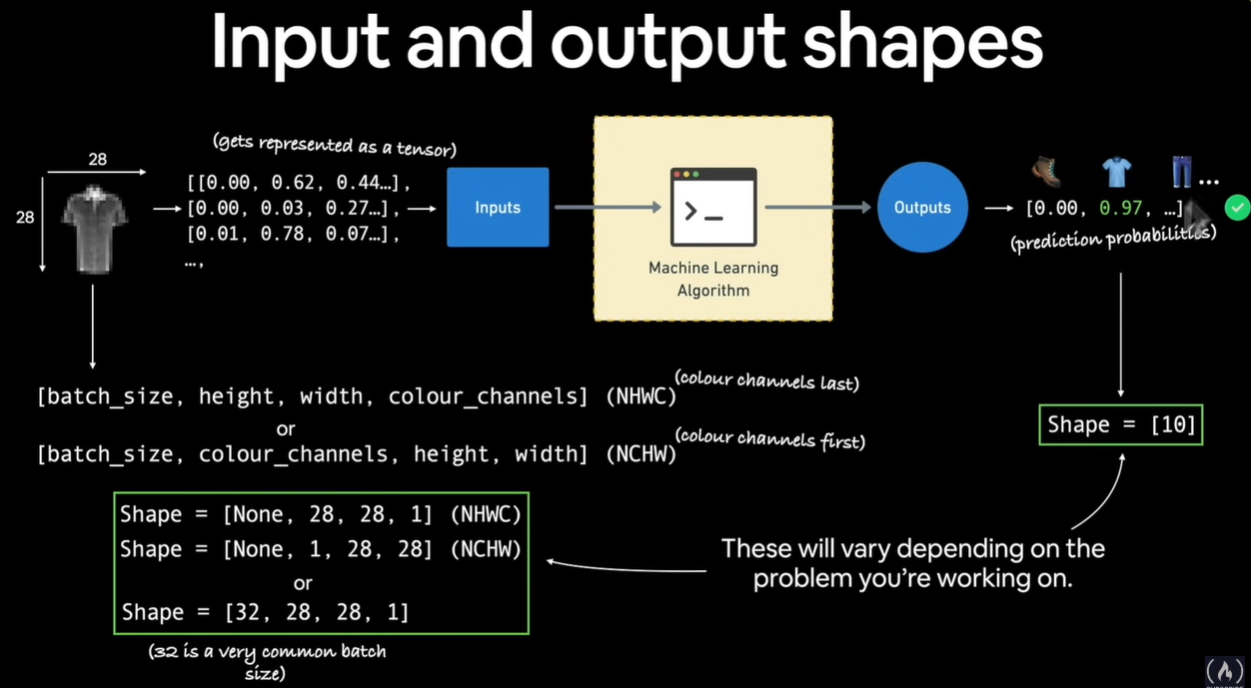

In [9]:
%%html
<img
width=725,
height=375,
src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABOMAAAKwCAIAAABVsCzpAAAACXBIWXMAAA7EAAAOxAGVKw4bAAAAEXRFWHRTb2Z0d2FyZQBTbmlwYXN0ZV0Xzt0AACAASURBVHic7H1pcFRHkn+913erpVa3pNZJ676FhISQBOIQRpziHsD2YMOM7RnPeDy74diNjdjY/bBfdiM2ZjZidsLj8e7Yxnh8Az4wBgwGxGUwSCDQLaH7vm/13e//IafzX3qvu2mEhIB9v3DgVvd7VVlZWVWZWVlZDBEhQoQIESJEiBAhQoQIESIeDZiZf3GEEMK5vpdwJNbA7N64QvLoCRMhQoQIESJEiBAhQoQIEf9HwXj4kyGEIRxHLGYyOtLN8F8TIUKECBEiRIgQIUKECBEi5g+0Gcq5vmJZQgjhHCxD5E6+PStChAgRIkSIECFChAgRIkTME8AC5ai/4RuGI4SwDOGchOMYVrRURYgQIUKECBEiRIgQIULEIwdD/UsI4ySEEA5NWdFSFSFChAgRPoFhGI7j7v+cCBEiFhTiUBUhQsQTAYYKAeb4v7AcYcSMSiJEiBAhgg+G4fsxhd+IEPGEAoX5qZRqaNRT2TQRIkQ8PXBNwxxhXKl/8QeYvziWcNKFIE2ECBEiRDzWgA0ZhmFA3+U4TtyiESHiSQFvtKLVKo5iESJEPBZg8H9gpnL//3uOcf3PyRAiWqoiRIgQIcINWJaVSCS0sYo/OZ1Oh8Mhar0iRDwmoMN9YeQSyt+ED3Ac53A4nE7nApIqQoQIEa6LU+nQD7idBj4QtF1FS1XEgsH3gzTikZsnGrzuo/8Ue/Yxh9PpdNtf4hbrfIAO1xSyF5gv9BqImAWePk7yHEnEJU68BsLIFSdeESJEPE4A3xlDCGEISwghhOMIgf9ES1XEwoNlWRZuTyKEzIxTcjqduOiKK+uTCFr5Rqc+bfAsHGki3AO6zM/Pr7CwcOPGjX5+fna7nWVZ2Fx1Op02m+369esnTpyYmJggYifOD4RmBr0/JvJ8nvBEsxfmVYlEkpOTU1JSYjAY6OnX4XAwDFNZWXnq1KmOjo4ntI0iRIh4isD97V/mbx8ZQpi/Wa2Eg+9FS1XEAgJXSohHWlhiRMwVeD4FejtugSgS8WAAi1StVufk5Ozfv99gMPAesFgsarW6tLR0cnKSPLFq/eMGHDjeRwrGbXrfgBXxQHgKPKEYpc+ybGJi4r59+1JTU4WPffPNN+Xl5V1dXRAeDL7gJ73tIkSIeGLB/f87ajiX4fo3y1WM/hWx0IBlVa1WG41GtVotzABhs9mGh4f7+/ttNpu4lD7+QFXJk6oNO3Ji4OjjD+gjq9VqtVodDge9p8owjNVqtVgsdD8+BYr+4wA6tATAM0dFJj88eEymkwA/0RymPb92u91ms1ksFkIIy7LwE+ypWiwWcHbYbLYFpFaECBEi/ga8OZUQjnAcYRgyYyIWLVURCwmJRBIXF/fP//zP6enpkLsFvocA0YmJiePHj7/55pt2u52I+waPMcCA0ev1GRkZYWFhYNvg9wzDjI2N1dTUdHd3LzSlInwCHokEtV4ikUilUozcRiw0mU8JgJmRkZHp6en+/v4cx4FfANw6LMv29vbW1tYODQ0RyqAS58MHAvBNpVIlJycbjUa5XA7fowvGbDY3NTU1NTWZTKYn+hQryIxMJoMlFS1zMFnhT/helCIRIkQ8BmD+tnv6twTAdFQeQwgjWqoiFgygH/j5+SUkJGRmZgofGB8fv3XrllQqJeKmzWMMUOmkUmlSUtI//dM/bdiwgRCCliooQzU1Nf/xH//x5Zdfsiwr5ox9UuD9Zgu0V8U8og8JhmGkUmlBQcG//Mu/pKengzmBYZksy54+ffrf//3fwVIVx87sALIaGBi4f//+gwcP6vV6NEcdDgfLssPDw3/605/eeecdq9WK+RGeUKBTCf+kt47F1FwiRIh4fMAQ8jcjVZBGEH4ULVURCw+LxWIymXh7NU6n02w2W61WelkV8dgCNB6JRAJKNt2VdLZY0Yv/5MJtaDdPJ8YnxV72HfRgAdbBCJJIJLRFgR9E3s4aTqdTIpEAY+lcfbRp+kTbqDzwxiw0E1fYhaRMhAgRIlwAk9TTlCRaqiIWGJCrUCaTYZwSqrlyuRy+ETWzxx/QfdiDUqmUd+5LdDc8ccAEPxhAyHjI4iOO0IcBDA2M1UTrgr5rhFC+noWk9ckHOAXQXgU+w5SFzH+igRmShAm6oIHwPbgUF4pIESJEiHCBI8TNjqoroxLDz98gQsQjA73VhoeFyMz1lbZzFo5SET6BTroj/BW79SnQBf8vQOypRwZ6T4+e/ejcP096POpjAtof6lbC/+8sNKI4iRAh4jGBOzPV9QvhREtVxEKC4zg4tSjcOxV3D54a0DtFIp4IeO8s8YTb3II2mXiHIJiZIOJtTw8N3mEE+vunQ6TpyVYoV+QpaqkIESKeAnD0jTTufhctVRGPC3jGDL2aits7TwQwvpfXX+CJwA0iUUl6/OF7Hy34wHwKJgdP9D/p7XoMwTNQPUWzP03wZd9YlDQRIkQ8thDPqYpYYAgVTbcHGhkxR4uIWeH/coCfW9yXIW4f8HTM2C0z54/D6Ap5yvaF0E8nPPvwNDXzsQJvTXm6rTV6vHiPcFnArdcFD9Z4WqcXESKeaIiWqogFhnBxero1hv87QD0b79sgotr9GMCXLuCNQR+H5CNwJz3F8iM8Oem7a2A+iFmQehcQT18D6dBf36ffheLD47Dui4uUCBGPIcToXxELCdTM6GwiTz0ehyV5nuCpB+fPRX1fZnqqesGjRh9nMfA9PpBm4yMbv9inbo/hPYmgU8c9Dvs5PAIWnJ55wpMrMHOLx6G7HxPJXxCIcihChBeIe6oiFgzCfRtaXROedXzIuhgqnSYd3YSY7x0hjCyiU3ryyJi/2ucVwgQexNWhzMx0Sm7juuk/Z8EEHztOeBCaUJLwKH0lyBOOutSRzHO4Hco/bVjiHgKPG941J56VON9gKBAqFJlmIP3wkzuOfMG8NhCZzAtFpln9oLU/zj3y+BAm3E7HGNS5Wp540wt9Sw0jSHqHT2I4zBzCl8CBR9Y1tMwjMciZ+aaErh2nNcZ1Q9V8EADlgxLicDjo2uepRhEiHhKipSpi4SE0b3x5S5gumPFwvIS+DZJeAMjM5WEWGhivasZzkBWt+TkcDjq9ED5MP+M7Dd7titkZfp5q4VFLc8/Ti0Tgd+B94OlkdEfMrY5LWzVe7BwyK11c+KJbaeTVK3yR5saDNtA7eVAgzzCmn/H0+kJpLTRJTqeTl5GLNrN5bHzQTpzz4SMsUDgtCM0ST4OIfoY2Hb0ULqwCv3H7MK80lEBGEPDihVeeyBYSL6zogcoUksHTs4WPgWoutLRpnjMU6EmVpnw+lHgUV9pQgT9ZloXq5iQdnduVAmsHo0UoV+TBB5R30IsCcSdXD8lkTyLqtkyUcLfyCR+gF+ak+bwVjR5fdNJB4Y24c8h8XgPdDsM5bLIIEQ8P0VIV8biAmwm3qhtPaRCWQD9JvyiTyVQqlVqt9vf3l0qlhBC73W6xWCYmJqampmw2G8dxEomEvrTQy/JAK1501bzVBR+GDxKJRKlU+vn5KZVKhUIhlUo5jpuenp6enjabzSaTyeFwEJer260q6fbLB9UdPbWI8+y257WLp+9CfwH3eK3mlcbNtAyFSrOPtpOQNrctIi4NFSiUSqUKhQLEQKFQyGQyhmHMZvPU1JTFYjGZTFar9YF2OD3px/Q3Qn8Ky7IKhUKj0fj5+alUKtARrVar2WwGSbDb7RKJhHNd4OQLEzyRR3eHXC5Xq9UajUalUkHbbTYbih+0nWEYuhOFzcRv3DZ5FhQSSlUiVKcj31iWlclk0HEajUYul8PDwC7oOJvNhqYsyJgXqZiFjD1Qc4hXmXRr73HUfao+QliFL01z24+0iIKc+Pn5aTQapVIJU6XVap2enp6ampqenrbZbIRSZH2XAbcjheaGj0Xdt12elgZ6aAt/RZvBy7Iy56YabGPCiJPL5XK53N/f38/PTyaTQadYrdbJyUmTyQRCTlydhXQ+kA0jbDtawhKJRKVSwRBTKpXw/dTU1NTUlMlkslgsYMfOznqhBzW2VyqVqtVqlUoFqyHMeBaLxWKx0JJGLzGzaCDvV46y1VHsgfnQdpVKJZVKWZblrQsOhwMonEOTFVcoUAw0Gg0w3+l02mw2h8MBk7PVaoXJGTpl1lvcUBHQDzOqUqlUq9VKpVIulzudTovFYjabLRYLrAicy1Hio1IkQsT8QbRURSwkcN6HiRsDkLy7RSUSiVar1ev1+CLnijKdnJwcHBy0WCwSiQS2LgMCAhITE7OysrKyspKSkjQajUQiYRjGbrebTKaenp7bt29XVlbW1dX19fVxrptdCbX7xAk2+liW1el0wcHBtHIJNE9PT/f19dlsNvSOE0L8/Pzi4+OzsrIWL16cnJwcFBQkkUjgLYvFMjw83NDQcOvWrerq6ra2tomJCbeObR6wcH9/f4PBAHYvKAFI7fj4eH9//33XNtqeUavVISEhSqUSzGZC6VUmk2loaAgUCKlUGhwc7OfnB5oH8C00NJQmG4uFVTYoKCg2NlahUPAMMNQRx8fHR0ZG7Hb7A62Fbm1smglSqRSqzsjISEtLi4mJCQgIUKlUUC8oBH19fdXV1ZWVlbW1tV1dXWazmcdJT+ovwzAqlSo4OFipVBKX5gc8sdlsExMTY2NjxLWZr1AooqKiFi9enJOTk5KSEhYWhtqSzWYbGRmpra29detWVVVVZ2fn5OQk3UDfGYJvQeFyuTw0NDQ5OTkjIyM9PT0mJsbPzw/odDgcZrO5t7f37t27d+/eraur6+7utlqt2Aoek4m7gTknqhs3cwsLoNFojEZjXFxcenp6ampqaGion5+fRCKBdtnt9qmpqe7u7pqamtra2qampvb29unpaU/GD62hIs1SqVSn0wUGBvKcLyzLOhyO0dHRsbExGMvEnZmHgoezllarDQwMBAOPN4onJydHRkYsFgvLshqNJjAwEEwC4lKadTod7vvB/IA1QifGx8ejwNDmE7w1PDw8NjaG+zMcx4FkKhQK9D4AqTabbWhoCAQMiVQoFOHh4SkpKVlZWenp6RERETC6QU6mp6dbW1vv3r1bWVlZX18/NDQEo/i+8cBQvkwmCwoK8vPzEz5gs9kGBwenpqaIb6IOerZer9doNCzLIqPgXRhHExMTYFlB57Iu2O32wMBAjUaDkyePVI1GExUVFRAQQGbGfyLbTSbTyMjI9PT0A7kVPHEGSg4JCYmPj8/IyMjIyIiLi9NqtVKpFN2pk5OTnZ2dlZWV1dXV9fX1AwMDZrOZCLylKIHe+4JebUEqlEplfHx8Zmbm0qVLExMT9Xq9TCaD5lut1q6urtra2oqKiqqqKpgckCfCYulviCCUBgCzcXJyclJSUmZmptFoDAgIAL8tzJl2u72tra2qqqq6urq2tranpwfaK9zl41me8CvOxrzR53A4QOYx3hUEadGiRfHx8UuWLMnKygoPD5fL5VKplGEY8M50dXVVVVXdvXu3trZ2cHDQarW6dWf7Irf0/Ab/SqXSyMhIWJgyMzOjo6PBhwjD2eFwTExMtLe3w4irr6/v6+uzWCw0K3xcGmhXlFarTUxMTE5Ozs7OTkhI8Pf3p5dCi8UCGlFNTU1NTU1PTw/MV9ibuPksmqwiHiVES1XEYwRPBir9AMuySqVy9erVBw8eDAoKslqtuPCwLNvQ0PC///u/d+7cAU9tRkbGzp07165dm5SUpFAoeAdE4a3du3f39/f/+OOPX3/99eXLl8EYo9UUHlUMw/j7+2/btu3ZZ5+Vy+X0aR+bzVZbW/vmm282NTVJpVKJRBIQEJCamrp58+Y1a9akp6er1WohDYQQp9M5MTFRX19/+fLls2fPVlRUjI6OguKFZLjlhlwuz8vLe/XVV4ODg3H1ggJtNtu1a9cOHz7c1tZGE+kJEolELpenpKT88pe/XLx48fT0NGhLoI86HI7Gxsb/+Z//qampkUgkRqPxF7/4xbJly+x2O2g2drtdrVbHxcUJLUapVBoVFfWrX/3queeeQy8+tgs6zmQynTx58vPPPx8YGPB9FURNyG2lSqUyKipq+fLla9euXbp0qdFoBOe9sByO4+x2+9DQ0J07d86ePXv+/Pmmpqbp6WlCiNuNTVytpVJpcnLygQMHcnJybDYbvRM4MDDw5Zdffv311zabTaVSRUVFbdy4cdOmTVlZWbSrAuF0Ojds2DAyMlJTU3Pu3LkzZ87U19ebTCawmnzXjFmWBdlTKBSxsbErV65ct25dVlZWWFiYQqEQDjGn07lr167BwcGysrKzZ89evHixs7PTYrHQvUB7cOYQtI0HgB3UoKCgzMzMoqKiFStWJCQkgC7raXKwWq1g5JeWll65cqWmpmZkZAQklrajaI8D1hsQELB58+bt27cHBQXhwIEnp6amzpw58/nnn/f19XkinvcNzEvPPfdceHg4PRIZhnE4HD/88MNHH33U2NgolUqzsrL279+fmJjIUAfGAgMDo6KiaD7jr0uWLPnXf/3X6elp3hY9Nm1wcPCLL744derUxMQEKvTZ2dk///nPYUji9gjLsl1dXZ9++umFCxegl+VyudFoLCoqKi4uzsnJiYiIgC13XuscDofNZuvq6rpx48aZM2euX7/e2dkJpgWt/bvlVWxs7IEDB/Ly8sAMgC+BmN7e3sOHD58/fx60cF/Gfmho6J49e9atW+fv70+oweh0OkdHR48ePXry5Mnx8XGtVrtz584tW7ZotVpCCNhCLMsajUY/Pz+ec4TjOI1Gs2PHjoKCAjTsUVqg+VKptLq6+t13362oqHhITR0CK/R6/cqVK4uLi/Py8mJjYz2tDoQQMCFu3LhRWlp66dKltrY22GdDf6IvlhJD+YKlUqlKpUpLSysuLt68eXNqampAQIDbudFms/X29lZUVHzxxReXL18GPyy9RNJV0JQge8G7pFAoFi1aVFhYWFRUlJ+fHxoaqlKp3La3sLDQbrcPDg7euHHj/PnzFy5c6OjoMJvNEPpEm6bY9Vh1cnLy66+/Hh0dzTt2OzIycujQodLSUjC9wEZds2ZNSUlJVlaW0LgFwDLa09Nz8+bNM2fOXLp0CYw34Lwn550n/oNtDI7ylJSUVatWPfPMM1lZWQaDwa1yApienh4eHr5161ZpaWlpaWlra6vZbIbB6IsEQqfL5XKtVltQUFBUVFRUVBQdHe3v7++pxl27dg0NDd28efPq1atnz55tbW2FgC8QNno6FSHi0UC0VEU8SYBpVyKRBAcH5+bmRkZG0uYB7Gl8/fXXhJDAwMCSkpLnn38+NzcXFC+n02m32+m9MlhjJBJJRETEzp07c3Jyvvzyyw8++KC+vh6DrMhMYxXelclkYAKp1WqIqIGHnU6nv7+/Xq9vbm6WSqVhYWFbt27du3dvVlYWLIR2u51XIM74arU6JycnPT197dq1X3311dGjR1taWogH1Y1WAgwGQ35+flhYGOij6JGFPT3Yx/BuqdLuUq1Wu3jx4vz8fLvdDpYqNM1utwcEBAQGBkokEolEotFoMjIyVq1aBZYqKsGEOlJI2yGBgYHZ2dmM64gmHUkF34yOjtbU1NCKrC9rIa0V0dURQrRa7dq1a3ft2rVixYrw8HB4DJdbugTUdYKCgoqKirKyslavXn3ixInTp0/39PS4JYauKyAgID09vbCwECLE4EuHw9HT01NZWQnhbQUFBXv37i0uLg4NDYWirFYrrWMxrg2WoKCgwsLCjIyM7OzsDz744MqVK2Aw+wiUFihn3759BQUFISEhUBE6PojAtg8NDd28eXNubm5BQcFnn332ww8/COOWhUzznTDvNBOXMazRaLKysrZu3bpu3bqkpCSlUgniIdzYxD+h49asWZOTk7Np06YzZ858++23NTU1YOTzgpmRbChHJpMZjcb8/HyQENqIGhsbu3fvnkKhuC/l+IFhmLCwsNzcXDAOaUvVarUODQ2BgUQI0el0sLWOxgMtCcIqQkNDDQYDGIQ8Xw8IW3d3948//kiniyOE6PV6iCXhOA5GHIzN1tbWa9euyeVyq9Xq7++fm5v77LPPrlu3zmAwgBoN3MYZA5oA+n1sbGxUVFR+fv6VK1eOHDly/fp13Mh1a6yCQKpUqsTExIKCAvA40Nlc2tvbz5w5g1vlvnhkpFJpbGxsQUEBbIYjQ5xO58jISFlZGcxIUqnUaDTm5eVhrAfNbR6RDMMoFIrExMSkpCS0TukH7HY7LD2w40o8zMzegR0tlUrT0tKeffbZ7du3G41GeoXijSzGFaEdGRm5devWgoKClStXfvrpp1evXh0dHX2g2gkhIAkMw/j7+69du/bAgQMFBQVarZbjOFgy3DInPDw8IiIiPT395MmTH3/8cVVVFTwp9AFhLfABBTIwMLCoqGjHjh0rV64MCwuTSqXg4EDjh8dMlmUNBsOWLVvy8/OLioq+/PLLc+fOwU4++JJwEUci4cvAwMAlS5akpaVhBDUhxOl0DgwMfP/99zKZzGKxqNXq7OzsF154Yd26dTDwOZdTWOhFlUgkkZGRUVFRy5YtW7169bFjxy5dujQ2NvagBhs+GRoaunbt2p/85Cd5eXl6vR4GF/iM6CGAvSCTycLDw7dt27ZmzZqNGzcePXr0zJkz3d3dsLsrlFVkCDKWZdmkpKQ9e/aUlJQkJCRA+A9IGr1Tjf3IMExISMjmzZtXrVq1YsWKTz755Pz58+Pj4/TSyVD786LVKmK+IVqqIh4j3HfK4y2BxKV84GwLRy8SEhJ+8YtfvPDCCyEhIbznsRB6dYTVIjY29te//nVcXNx//dd/VVVVQdARhBALDRXiLv4KnJdyuVypVC5evPjgwYN79uwBGqAK0BdpbYDWaCFANDs7OzExMS8v75133oF9D47jMCbWrdUKBipPCwfwDDMvjAWqQI+hv8TlEK1KnkKMiiyayrzOwmewFgygonV9zhVMCLuIxOdVkO4O0Kfj4+P37Nmzf/9+3OOljQHhi2h6OZ3OkJCQrVu3Llu2LC0t7f3336+vr0cHBx1HjfLjVlcAZdTPzy80NDQnJ+e1117Lzc1Fy58IEhHTjHI6nQaDYefOnTExMW+99dbJkyeHh4c9aSR0jcB8hUKRnJz83HPP7d69Ozo6GogEE5reM6FNdOIyFMPCwp577rnFixe/9957V69e9bQFTXPv4QEGgEQiiYqK2r59OxAAR6dQotzyCgFM02g0+fn54DX461//evbs2cHBQRw1vI7DLznXjpmwdd557tYwww1Gmr2cKyoB3WR0CbRO6b2Z9Is8UeQdc6UlkzdBMQwjk8mUSqVSqdRqtZs2bTp48GBOTg5ERngngHO5mWJiYoxGY3Z29ueff37s2LGWlhY4Wef2FfyAujjOJOix8lKpdz6QmR2B7kjikgqhnHufBOg5iicq8DxOcZ4mZC+AF8Fse/nll1etWoW7u8gcmjCeCCmVykWLFu3duzczM/P999//4osvuru7ob2+kIFsMRgM69evP3DgQFxcHNbLUkdvsL30tBwTE/PKK6/Exsa+9dZbP/zwA0TSuh1W2Dtw5jM9Pf3555/fvXu30WjExZSeDOnxQqipFWak3bt35+bmJiUlffbZZ83NzbCdS3ugOCr9AV0O/Q2EYkkkkpCQkJ07d7744otZWVlyuZxzWWu0cNIlIx9iYmKio6NXrFjx3nvvHT16tK2tDQPgea+47XeIc8nLyztw4MDGjRvDwsKIy3EAv9LdxHOxcRxns9n8/f03btyYk5OzdOnSd999t6GhAWLm3VaKJKnV6vz8/DfeeGPt2rUqlQrzZuHETks4L65Yp9Nt3boVhO3IkSNtbW1wfpXHXk/yJkLEXEG0VEU8GcBFlNZOeN8zDKNWq8PDwzMzM19++eWAgACbzQaLJb188kogLg0eDMWNGzc6HI7f/e53t2/fxo0ITyTRpcGKBVFVEIO0c+dOtVpN0yBURvFP9Kfa7XalUllcXAwHQc+ePTs0NMRQWxxEsM2L5iUuq0Klx0c+0yXj/gOsXsgNOjqONiRAHRfaNgy170ErfISyRXkKK+ObjcpQR5RhDYYA5ldeeWX37t2wDYWGNOPaN6a1UtwSR2URuiAoKGj//v06ne4Pf/hDXV0dqr9C2miFEtkOodSBgYHPPPPMwYMHlyxZAj57T2LM4xVoY1lZWb/+9a/tdvs333wzMTFBPPcjbYRAzOeWLVt0Oh34WZD5tOpDa6VIEvRvamrqL37xC41GA3tTdBvph+/bO750H/wrk8kgiHrv3r1hYWGwiQqjxpdyUMFyOBwKhWLVqlXh4eGRkZFHjhxpbW11a4XSTcCOoxVl2mXjCbzuQBuGNwBpCaFfhC5jqexE3EybisclHFm87gPVljcJ0EzmWRHgSjMYDMXFxT/72c/i4+MJIZgzhvcu70+gAYZVSkrKa6+9ptPpDh061NDQQFsLPEahdNE8n52OS8+6NHvhM/CBtj3wYZ5/jcyc6wjFZ8514J/XiQzlIHDLal+IV6lU69ate+2115YuXSqXyyF9Go8qHknYFo7jYCJKTU391a9+pVQqP/74487OTvT6eecqNEcmk23YsGHjxo0xMTGcy7zHOZy2zbDLYPsOwmfWrl0LGeBu3LgxOTmJ0wJNKudyjRFCMjMz33jjjfXr1wcEBGDKQDJTLMnMKYU3N5pMpoiIiFdffVWn0/3lL39pbGyEQHF6RkK+cS7fFjsz5wXkEALT69VXXwWbmRDiZZjjIIU/7Xa73W6Pjo7++7//+7CwsLfffhscNMxMM1vY4/C9QqFYuXLlb37zmzVr1igUCghZwvM1vFd46xS4X2HTOygo6MUXXwwKCnrnnXeuXr0K2Z7cjjjogvz8/L/7u78rKiqCEohgdhIGRGAEFghbTEzMa6+9FhAQ8NZbb3V1dfkYdSxCxBxCtFRFPKmglX5cJ1QqVVFRUXZ2NkQ0wV4NTqwYPkcvq1ggejc3btw4alWZLAAAIABJREFUMTHxn//5n+3t7bSXkVALD61HwgOwRQCHA/ft2/fss88yrqMpPDuBtw7RuhTaqyzLZmdn/8M//INWqz1y5Mj4+Dj6bnmlESrNPT6Aa9J9tW0atM7HU6x59hjrLvcVbdnS7wr1XUKF+fF0I5q9PF3ELcH4WSKRyGSyzMzMV199dc+ePZAUChURnjmNXYC2HBIJfzqdTlBrbDbbm2++WVNTw1OJ6Oag7kUTL5FIkpOT09PTc3NzUXXjecp5PMFC5HI5IcThcCxevPill14aHR29ePEi5lgSAhR0pVK5bNmyX/3qVxs2bNBoNESQ1hVZyutZQm2MAytSU1NffPHFrq4uINttdz88oDQg++c//3lJSUlgYCAhBNKDCUWIJpUn2/AZNb/U1NTXX39dr9cfOnTo3r179Gl2bAgtdbTqxhvpniAUS1rn400swqLQHCIu9nIC+1lYnaeRQgT7xnQT6FHJMIxMJjMYDNu3b3/22WdTUlJg4qLZgrvZNBl0j8BU6XQ6Q0NDDxw44Ofn9/bbb9fV1TkcDjjg4IVpyGq37L2vEoxzERbilre8b4TOGgAvssNtIZ76zhdqEYzLfsvPz3/ppZdyc3PpgAV6hcLwEwCwmt7uAyGPiYk5ePDg9PT0p59+2tfXh694oQGyDC5evDg7Ozs4OBh20Xl8QFuFlgfoNVhJwZk7PT09Pj5+584dDMelpZdxOXqWLl36xhtvbNiwAY6k0nIO9UKsEC5t6LuhxyPsBAYFBb3wwgsOh+Odd96pr6+n+Y9lcjPNVHpKB7/hrl27XnrppcTERFhhWWqHn1Ajl3bFIhmwKep0OoODg1966SWlUvnnP/+5urqaCGSS7nToPrlcvmXLljfeeGPJkiXggONNR07BwVegEI7D4ILCuJScHTt2BAUF/e53v7t27drk5KRwlYSqFy9e/MYbb6xatQr2k7GbsMehUlrUoUacl+B0t16vh2Xo0KFDg4ODtN9WhIhHgLlPkiFCxHzA7RqMGhuuT4GBgWvXro2IiMB9BjqXLCw2tJIqnN8hc8aaNWvWrVsnk8nsdvt9dVYAKENqtbq4uLikpAT0CQz3JdSKyLOL6MLptYRhmISEhBdffLGwsBDIxmOQPD2bzFytUe3wrhQKmclTEdw+w1uVUYGGtdYtS5FOWgHi2Yd0o2jcVxdE3rIsGxoaunXr1vXr18NRHFxuWSo+HKQCJIF1xZ0KlX744O/vX1xc/JOf/MRgMLhtEZJNAx7TaDQ5OTk5OTl0PiRUoWh1ylPvMAwjl8szMzNLSkoiIyMZhr9VjgB7OzU1FQ5fQTpHmp+0IstTwemuod0HcXFxhYWFer2e1qvwV991dE+AeiUSSUJCwv79+zdv3uzv78/NNFBpOlEVxjONPHro9sKu+N69e3/6059GRUXR9fKY4Ikts2uRjz/RwoN9ypsKhCV4EhV61Ht6ku4vhmFSU1O3bNkSGxvLue5KwceAw7Q+7akJYKyq1epNmzbt3bsXZl0vRPrSKB9nKrpd3ExfGLYUoz94jiTenEMTwFBWATtzm5223j1ZJl4AzAwNDd2yZUt2djZm0MHa0dvIM0qBErAoYLKCZxwOh9Fo3L17d05ODkx3vkAikSxatCg0NBR9Omgi4nzIujId8AxI5CrLsqtXr167di3kVRYyH0ziyMjIAwcOrF69GnJc87xdKGm8CdntKID2+vn5bdu2bfPmzXq9nlcpdpzbroFfExMTd+7cGRUVhTznBDeB4fecyynGKwookUql27Zte+655yA9BN2PPIDLeMWKFa+++mpaWhr9JE0qcp64rEdcmGgRxVna4XDk5+cfPHgwISFBGMQE651Go9m5cyecOmFmnhfAnqJ9BzjqkWPoOHA4HFqtds+ePfn5+cKZQYSI+Ya4pyriCQBPh8bvOepeFvhTLpcrFAraZqPPLEEEJiTshfVYGHkFHtCoqKjdu3eXl5eXlZWxrmOT3imE1yGLEmSCkbhuxQQKYe13Op2Q7B5SPmDttE1LXKoSy7JZWVm//OUvIRefk0r2yFvtnDMzxyBzhEzzBO+6F1ZHXAu81WqFQCBfVGR4RUgk1osxRZxgD/a+ZEOl/v7+a9as2bdvH2ReZWemd8IzRUNDQ21tbXiVkU6nMxqNERERcGaJ3lwCqYuIiNi2bVtVVdVXX33FUQeGkXJaA6Apl8lkMpmMNuBxHwBP04EMoBgIbQOGYfR6/erVq2/fvt3V1TU1NcUI7HnQcqKjo5977rlt27bBtiQtHgy17Q+vwN4XZCOTy+US6qoP4ADtsxC2zpNa5jugBJZl4+Pj9+/fv23bNp1Ox7OaCCXDMHwAMGxhgGBnsTNDCiHULTIycv/+/aOjo4cPHx4eHsbtPrcyxjNj5hDCYYViwxs+tPjxHnbOPJjqiVSOsrrpEU0XGxAQUFhYKJVKcVcNRgdLXZ8I8ecymQwVU27mKXTi2oHhOC4iImLfvn19fX2fffbZyMiIMG8ZzQTOnTOChlDCfQQ9R6EMO2cmyGWoIGqeLUpcW5qeyIbhz7hM9Aclj2XZ5cuXr1u3LigoiMwcRMBzu93e2tp67969zs7OsbExpVIZHh6enp4eHR0Nmb1wLKOoZGdn79y5s6WlpbGxkU7Nel9KsF4URYhuJYRgVCpxWc70wIefwsPDt27dWl5efv36dZPJhDMMPunv719SUrJx40a9Xk+Pa3q1cjqdfX197e3tQ0NDMBtD+uuIiAjYcKa7Ri6XOxyO2NjYvXv3VlVVXbx40WQy+S4narV6w4YNcI02zPO0Ke505SAEFQKmF+AnfYIUOAD+6+Dg4Geffba5ufmrr76C8/DcTGcZ9ldGRgbkyQcHIu2JIK6hNzAwUF9f39TU1NXVZbFY4LakpKSk5ORk8N9hTDuQBIVs27ZteHj497//fXd3N52NGRJWZWdnb9iwAax6umtgPXI6ne3t7Y2Njc3NzePj4yqVKjQ0NDU1NS4uDrMwcq6TBSB+kLG8rq6uubnZx/wXIkTMCURLVcRjDaEOKnwAlTDOFfWKkywhZHx8vKampry8vKOjY2xsDFT/xMTEFStWwC0RtNoH/4Iqk5KSsnLlyqqqKkzYSzwrspzLQwlxm2iSwURvMpna29vLy8vr6+tHRkbMZjNc5JicnLx06dKYmBi1Wo0+e1qDgXUxNzd39+7dzc3NAwMDLHXmFj+gOxYZgtTOTucTcpijfMxOp7O/v//YsWMVFRU2mw0X0bCwsDVr1kDyTHgXg5r6+vrOnz/f0tKCp2UQYHiYzeabN29OTU3RuvsDYdGiRRs2bFi0aBEc/eJmJslgWba3t/f8+fPfffddRUUFZCJhWVav16enpxcXF2/atAkO7NF9By/CHR5lZWVtbW0+EoP8Z6j71i0WS1tbW1lZGd6k4ufnFx4enpubu3TpUrjmkcd5aEV0dHRRUdHly5dra2vdDgF/f//CwsItW7bgJcN0CdAFDMNYLJaOjg64shWuB5TJZMHBwcnJyUuWLAEdhR5owtjIhxcnJIxhmKCgoJKSkl27dsEdSzwrHQ2tiYmJ5ubmW7duNTY2jo6OWq1W0KvgVkC4fIhmOA5Gh8MBab2bmprOnDkDCUi8uEIe0kzlXPDecKfT2dDQ8MEHH5w/f55z7UE5nc64uLi1a9dinmoskxBSV1d38eLFwcFBmi00tRMTEzdv3oQkcHRdbs1vMEXQOgUCrFbr4OBgdXX17du3Ozs7wQxQq9XR0dFZWVlpaWlwtZKwaiDeaDTu2LGjrq7u0qVLngKAGc9BAbODJ+cCtGt6evry5csmk0mtVsM3DodDLpcXFhYuXbqUvtwVWDo5OXn9+vWKigpIxEooUx+Nw5aWlqampgdV06HXDAbDsmXLIiIieJvYUPjo6Oj333//6aef3rp1C66VZlnWz88vOzt7+/btW7dujYqKwmkNbS3IK56RkdHR0YH5dXwByurk5GR9ff3t27ebmppGR0dhMomPj1++fHliYiJvQsB3HQ5Henp6QUFBXV2dyWSif4LnU1JStmzZAlmXeZ0ORbW3t587d+7cuXMVFRUDAwNWqxXu6E5MTNy+ffvmzZsjIiJ4ViJESCUlJa1du7aurg5mYy/Dmfeun5+fk8p+BCMRZB5WBMjoGxAQABm809PTg4KCeAKPkmC326Oion7605+2tbVdunQJrmuixz6MPoPB8Pzzz0P8LUftyWMXmM3mH3744ejRoxcvXuzr67NarXCEFY4RFRcX79mzJyMjg+56rEWtVm/fvr28vPzYsWPgdsTFS61WL1++PDY2Fshgqeh3WInOnDnz8ccfl5WVDQ4OwiKuVCpTUlJKSkr27dsHqfh4ypXdbl+xYsWyZcvAMCZztxyIEOEdoqUqYoHhxfbjzYO0h5UI1j+OOgFFCHE4HCaTqa6u7sMPPzx37lx7eztc184wjFwu1+l0KSkp+/bt2759e0REBH2gEekJDAxcs2bN6dOnGxsbfWwFR/m8kYbOzs5vvvnm5MmTtbW1Y2NjkA2CECKVSvV6fVxcXElJyY4dO+Li4vBKDI46EcowTEBAwIYNG27evHn8+HFIBQzRnrRBgi/SJNFG78NA6A7o7e396KOP0IkAJk1eXl5MTExSUhJdKayRg4ODX3755alTpxQKBd7VSSsBnOf44fvSRgiB203wIhzsAtQGqqqqDh06dOLEie7ubvoZuF29vLz87t27L7/8cm5urjDwLzAwsLCw8Nq1a93d3TTxyBOef4FHHqzxXV1dx48fP378eHV1Ne7vgTIaHx+/adOmXbt2ZWZmwoY/vMu5vANKpRJuh8cDWnS/SCSS1NTU7du3R0dHQ2QaTQAw1mq1trW1fffdd8ePH6+vrx8aGrJarfCATCbT6XSJiYnr16/funVrSkoKbGigENLtpcfgw4gWx3FyuTwnJ2fHjh3R0dFuoxucTufk5GR1dfWJEye+//775ubm0dFRdEVBfpSMjIySkpL169dHR0fj5jACZC89PX3Xrl1tbW0VFRW0MYnd50tDfJFJHxnicDju3bvX3NxMqB5kGKakpCQjI4O+i5Vz7T41NzcfPnz4zp07vIFDP8bNDPunu4/XCnqig/3PoaGhK1eunDhxoqysrLOzc3JyEsXMz88vIiJixYoVO3fuLCgo0Ov1IGBYLAajZmVlbdy4sampqbW1lTdXPyTHfAc9E5rN5nPnzl28eJF15baFhDRwzzZ9pSpMp1ar9cqVK+++++7w8DBGZNB8Iy520aq/75NVSEhIcnIyXHJD21csyw4MDHzyySeHDh2qra3FgckwjNlsPn/+fE1NTWtr64EDB5KTk/HgIvQ4+GJycnJu3LhhNpuF0ao0ONcWmdOF6urqL7/88uzZs2Cm4qSk0WjS09N37ty5e/fuqKgo2MTjbadrtdrCwsKLFy8ODAxg/mE0k5YtWxYXF4fBGrgyQr1w0feZM2d6e3thmxoeGxkZaWxsvHPnTlVV1UsvvZSWlkaviUBbQEBAcXHxlStXwK5DN5wXziNPgB5o5ujo6JUrVz7//POKioqOjg5QD6BpkGM5Pz9/165d+fn5QUFBdGZsp+sEKYTg7tq1q66uDpcV7FOn06lQKIqKijZt2gRnKAg19ECKuru7v/jiiw8++KC2thZ8Q/CY3W43m8137typqampqKh45ZVXnnnmGa1Wi3M7lGOz2SIiIrZu3Xr79u3q6mp0rdpsNqPRuHjxYrVaTc/eoOdYLJbjx4//7ne/w1eg4Waz+dq1azU1Nc3Nza+//np6ejrOHmCE2+12nU63atWqy5cvQ9IE0VIV8WggWqoiFgy0rg/f+GKl4MMYS8lRW0CM6wYUq9V6/fr1v/zlL6dPn4aUAxgzw3EcaGadnZ0TExOvvfaaWq0mAu1BKpXGxMRER0ffu3dP6M502xbUXWAxs1gst27deu+9906ePDk6Osq5QouJa4ofGhoaHBxsbGysqKh4+eWX165dCxfr8RorlUojIyOLi4vLy8vv3btH22CwlvCsFyTJu+LiqSFuv0RFgXGZ4hjjh9o2/kpm6sScKyEHxAwLt1yw0gc1UwEsy/r7+ycmJur1ejzb46SydDY3N7/zzjuff/751NQUKk+0QTgwMPDtt9/CBmNiYiItCfAhIiJi2bJlpaWlXV1dqGfcl4EgkHa7vaGh4eOPP4ZE/2CVYZ6t6enpysrKnp6e3t7e3/72t0uWLOFmev1x7zcxMdHf339sbAzLh5Zqtdply5YtWbIEy+QRY7PZysvLDx06dPbs2f7+fs4VQoYiPTg4ODQ01NDQAOZ6UVER7ABgX/Ma+zAGBus6M2wwGFatWpWWlkbb+Ug/x3ETExMXL158//33L126NDIyQlyjEp60Wq09PT09PT1VVVWVlZUvvPBCXl4e67oqCenkOE6tVufm5ubn57e0tEBmMh6LvAzqB2oabQbfF+iXIa5YDJigcFqjmYyZ4ZxUHhReL2DV3EzQz/AcDVBOV1fX0aNHP/nkk7q6OnDE0JHVJpOpsbGxu7u7qqpq3759e/fuXbRokTBuluO4gICA5cuXX716taenB3d3H2hE+849T68T6iyfhLobFiOBaREignhg6AL62mFsAm9c+04VyLZUKg0KCoKDnfSvYCQ3NjaePHmysbGRmxkoC7T19/d/+umnarX6lVdeCQ8Px/HCcdz09PTw8DAEcgtZxxMSxhW3DPy5cePG22+//f3330PANiEE7DEYetevX+/o6DCZTAcOHDAajVga3elxcXEJCQmVlZUTExOMKz7c6XT6+/unpaXhEXesF966c+fOn/70p++//x7ymdOZfgD9/f0ffvihWq1+/fXXw8PDMTsDPhYbG5uXl1dWVtbf3++jTwQZAiUAS//617/W1NTAYRwAPGaxWO7du9fS0lJeXn7w4MHnn38+NDSUTs6HI0gmk61ater06dO4M+mk7mwLCwvbtGmT0WhE5qD8QN999tln7777LigYLJUQEfnmdDovXLgwNjam0WhWr16Np4g56vquvLy85cuXt7S0wNkQ+NVgMMTGxsLpEhRXGBQtLS1Hjx5taGjA6tD3xDDM+Pj4sWPHNBrNP/7jP4aEhIBIQB9NTEyYzWYcTQ803YkQ8TAQLVURCw/vkx1t/9DrLmpLqNbj1Gm1Wm/fvv2HP/zhypUreLQPg3MY1yZGe3v7Rx99FB0dvXv3bjrdKKoIBoMhJSXlypUrPN3FC6k4d09PT5eVlf3+978vLS2dnp6G8oVhYyzLjo6Onjx5EjzTxcXF4EWmjQSWZcFLnZ2d3dTURBtR9FJB0+8LtQ8Ems+8zU9cmOlgUdpkBaD7lmdX0+rU7Ch3Op3j4+OlpaUsyyYmJoaHhxuNRr1eD9pbd3f3Z5999s0334DDAlNooElACGFZdmho6MyZM6mpqWFhYXhQB5ujVquTkpKio6O7urrc0oCU89R3h8PR3t5++PDhDz/8cHBwEPjGOzCJtYeFhYWEhERGRjpdV02iGh0QEJCUlBQVFUVbqoQQqVSakJBQVFS0aNEinkkJDDebzZcvX37rrbdKS0shTg+7gBYkCISDu1utVuv69evBdnoYo9QtgEjI0rx69WqtVkvvA6OmNT4+furUqTfffLO8vNxJne+lJQRo6+3tPXLkyMjIyG9/+9v8/Hw6oyk+YzQaV69efe3ataqqKp7IzUfr7vs9HinEEeSkkn8KAQ4LXngh7+EHGjsonyicHR0dtNDSswohBHZ4+vr6JicnX3rppejoaEJZvMQ1WBISElasWFFRUdHS0jJr2h4G9HyI0sJRx/jp+QfnKOfMdLv4Fu+xWbcC7AqdTgd7XGTm9E4I6ejo6OzsBPOeJ+RgXff09Hz99ddLliwpKiriOK6np6ejo6O1tbWysrKhoaGpqam3t9cX+xkkjWXZ27dv//GPfzxz5gzcNAO/4rwEVHV1dX366aehoaF79+7VarXszKwKDMMYDIakpCSNRjMxMcG5DvoSQqampk6dOjU2NpaQkBAREWE0GnU6HYz6np6eDz/88Pz58+Pj4+hwES5hY2NjJ06cWLJkyaZNm7RaLb3W2O32gICAtLQ0nU4H97f5eEAXn+zp6Tl8+PBf/vIXlHnaeYodZLfb6+rq/vCHP4yNjb388suRkZE4tzCUuzY+Pn7FihW3b9+enp6mm8Oy7IoVKwoKCiCCGtcFgNls/uqrr959992WlhZauuhVibjW1rKysrfffjs4OBhSB2MvwKALDQ0tKiq6cOECHh+VSCQKhUKhUDAUsPb+/v6WlhY8ko32M+6oj4+Pf/XVV8uWLduyZYtEIunt7W1paenp6bl161ZtbW1LSwucnfGF5yJEzAlES1XEwsBHTdF3bYxzOXQZhunu7v7kk08uX75stVppnyKuIrBPJZVKm5ubv/nmm9zc3Li4OHBv02Wq1erk5GS1Wu02Ebzb5sBiAAF+77///sWLF8Fl60kNhUodDsetW7feeustnU63fPlyTuBZl0qlBoMhLy/vwoUL4EgW6sReWDoLvdztK2jh0Bqhp7fcanhu1amHWfA4VxBvaWnp1atXAwICwsPD4+LiYmJiUlJSYmJiurq6zp07Nzw8TKuhZKaeDX/29fVdvXq1uLg4NTXVOfM6GYlEAld0Eg/WCN1Y2gIcGxuDmNvh4WGeHwHKQTV6YGDg4sWLy5cvj4iIoItlXBuDUVFRvGOoHMepVKrFixenpaVxgs1PkMPGxsaPP/744sWL09PTjCviAAuhucGyrN1uv3nz5rvvvqvT6QoKChwzb3WaE0DtWq02KysrLi7Obck2m+3mzZvvv/9+eXk5bjwKByDQLJVKp6amSktLg4KCtFrt4sWLhU/K5fK0tLTMzMzGxkanK8XaXLUI4clMdQtPNic2lv4VgAbVLGjjiSWYQ8PDw998882xY8fokHi3JDmdTqlU2tPT89lnnwUHBz/33HPBwcE0nfCMVqvNzMw0Go0dHR1uZzxufnwEbnnCm6yEPe7J/uQxYW7VcXrDH2thXPtU9FUldO0sy7a2th4+fPj69esjIyNNTU2QFs5sNmNmICKYtIWshqmsr6/vq6++unbtGiZDEjacYRiJRNLW1nbq1Klly5ZlZmbyZgxCiL+/f2RkpEql4lU6Pj7+7bffnjlzRq/Xh4WFxcfHR0dHJyUlpaSkVFdXl5aWwolQWnhoWxQ+tLa2lpaW5ubmBgYGYtW48RgaGhoSEnLv3j3YM/eF8zB8TCbTF1988eGHH/b29vJazfsTNkh7eno++uijsLCw559/HlJh0TTDuMjLyztx4kRPTw+af06nMzg4eMWKFXBSl+5rCMG9d+/esWPH2tra7HY77b/mZrqb8c+rV6+ePn06NjYWMiQhH4DOzMzM1NTU9vZ2UHgYV3IE+pQQbbWiXwyjzHDsw5c9PT1//etfGxsbBwYGmpubm5qaBgcHp6amxMtURSwIREtVxOMOT/ofz/tIXMuAyWS6cuXKt99+C6Ge9BRMv44PQ4Lf2NhYQikNsKphyFZ/fz/9opBCQi0qsD31xRdfnDx5Es0DL/M7LG9Wq/XHH3/86KOPjEZjZGQk5wohxmIDAgKys7MXLVo0MDDgnQAh5mR1odno1njwojHQ5tnDU+K2cIhGNpvN/f39d+7ckUqlGo0GrhUdHh7mbQIL9XKGYSwWS0NDQ2VlZWpqKs9UgPNRBoMBjif5SJXT6WxoaDhx4kRTU5NwJ5l+GISkubn5+vXry5cvRzMA7U+n06nRaCB6kNZRQkNDs7KywITmgWGY/v7+48ePnz59GsLzeHLI01BB5s1m848//njkyJGwsLCEhAQvevyswTBMTEwMHADjxZEC0+7du3fkyJHr16/jYTziQXKcroTeIyMjZ86cMRqNBoMBj3rSfA4PD8/MzLx48WJHRwfvp7mSSVqifIFbs9NLCXM4duBswuXLl48ePdrU1GS1WjmvERlo6bW0tHzxxRewjY9XrdCcTExMzMjIuH379vj4+FxRS8MtE7wY8Pf9XligFz48DHiHOREsy6akpGRmZnZ3d09MTNCxmjjlOp3Oqamp06dPnz59mr7N0u3iyIuYoL/nOM5qtV66dOn06dN9fX1etvE5V7b2ioqKO3fuJCQkwBXl9DMSiUSv18McS79IXLNxd3d3d3f3rVu3pFKpv79/YGCgxWLBYGMcL4zrClP4BqJIILlAe3u70WikL/mEf8PDwyFhO1yV7EtnMQxjs9lKS0s/+ugjMBG9u6vAqceybEdHx6FDh2JiYtatW4cblRzlGYyOjk5PT7979+7U1BT4+ziOS0lJoTdUaT3EYrF89913t2/fNpvN8D1ttOMHVCcIIePj4xcuXCgpKfH398djw/Cuw+FYtGhRamrqlStXwPUAIRh0w+EDjFZIJwlHn+gMlPTKDoyCAmku4Ske0V4V8Sgh3qcq4rEGz2Bw+5n+0uFwjIyMlJWVDQwM0BM97zFaFxkbG7tz547JZMIr5vBJlmX9/PwgB4YXwvAbp+vmifr6+u+++w48x/c9LIpWh8ViuXr16tWrVzkqXI1xbbvBtl58fLwwZQ69xjwa8Ix/t0ymdcFHQBtDXasLx33Hx8e7urq6urogrI42zGi9gVYHh4eHu7q6MLQJ1QiGYeRyeUBAABzgFDKcp/jCMxMTE3fv3m1oaCDUve34Fs0i9Pc3NDR0dnZyM0Op4YNSqdTpdHDOGb+MiIhITk5WKBR0F0DJNpsNcsZCjJwnM5UuDZSz0dHR69evl5eXQ+iB2wbODgzDSCQStVptNBqNRiPvZiaoYnp6+ubNm9euXZuennZLJ10aNpZhmL6+vtLSUkwTwriiUuFwV2BgYEZGhtFopIfkg9qWcwUeM31hqVCXnV292Pyenp6LFy/W19ej3kmzgmcYENfBWrvdXlVVVVpa2t/fz7rSDnHUrZtBQUEJCQk6nY6whU8jAAAgAElEQVR4nr3nHLMrnB7gbn+aC9L+Vho40dye/iCEJCUlvfDCC+vXr4ezndhHdL84XVdbwSl3TPwmXF947gOkASaZ4eHhsrIy2FG8rywxDDM6OlpZWQkHxYXQaDTC/MAoORDyAEGzY2Njra2tvb29OBvj1Ip2F6FWQ6lUOjAw0NLSglG1hOqXwMBAON/BC4PyBOB8f3//qVOnYCfW+6JJT/JSqbSuru7777+HwBy6sVB7SEjI4sWLNRoN54qcVyqVycnJISEhvGvPHA6HTCZraWm5fPnyyMiIkG/CcYcfamtrKyoqIOEWLZ8cx8EZENh8hp/MZjNkA6b5AwZ/RETEq6++um3bNmAgcbkVsDSQE0gqIZVK4RgI3l0kmqkiHj3EPVURTxLo2dnTEjU8PFxZWQlH8txuf/EWJ5PJ1N3dbTKZ4LozfAZWUH9/f39///vaWvTcPTo6eunSJTpjgY9Ns9lsHR0dFy5cKCgoiImJgfN7HHXPoV6vT0tLO3HiBORLdKtgzblNyLPriA9buITa5WAozC1hQqC1xrniQrFqzp3LgKPCnxhXTJTZbIZ7UGgdnRAikUhUKhWcfaU9Hbz20iYQXK8CG/JedF98xWKx9Pb2CvfMCSEsyyqVSj8/Pzq/iEKhiIyMDAsLo8vBxg4ODv7www91dXXEQ3wdDbpPOY5rb2+/cuVKfn5+fHy8d5XuQeFwONRqdXx8fEhIiNCS4Tiuo6Pj2rVrXV1ddNoq77UDzWCZ//jjj9nZ2bApjb9CD4aEhBgMBtgT8H1gzgceiJlzOHZQM7bb7ZWVlWVlZbDzSUsvXRfNf84Vhjo+Pn7t2rVVq1aFhobSh+rhg0KhWLRoUXBwcHt7u7C0uWoI3XdCM3vWpdFz3RwC+DM4ONjf32+z2XjOJkKIQqEoLi5OTEy8dOnSpUuX6urqBgYGRkdHp6en6YACoA3cSfTiwhNm2slFMxwskP7+/sbGRtxP8wKoYnp6GvbfeGyB/UY/Pz+YlOg0EHQJ6O0CnxHnOt4plARMEYRSajabgU5eWziOk8vlSqXSrU3utiGAysrK8vJyOm+tl3fRQcCyLNwlU1tbGxwczPMUO51OuVxuNBqDgoJgqnc6nWq1OisrC33c9EBwOp2tra3t7e0QBsxLVy4kgLgcfGNjY42NjSaTCV0DxJXFQyqVpqSkhISEtLS0wE/Dw8PNzc2QLFrYKZmZmf/2b/+2YcOGq1ev3r17t6+vb2RkZHp6GuJTMKaMcfk36YXVO6tFiJgPiJaqiCcD91WXGdcFKsPDw8PDw8R1oaKnoojLULFYLIODg+Pj43gIkDaxwHtNBGoWN/NYIOPaj+I4rqur68aNG2NjY14WIbdUcRw3NTV1586dpqYmuLqDzNQRFQpFWFiYWq2GIB9hi+YDPOudE2yCPQIT1Bdgj3CuVMPwQSaTKZVKrVar1+sDAwM1Gg1Ym1ar1Ww2T05ODg4Ojo2NTU9PWywWp9MJCzZet0irC5g+mj78zFNtaW6YTKaBgQEI8aLp9ES/w+GYmJiA/LTgpKDLlMlkKpWKpTLl+vn5RUZGQsYRWskDOezu7q6oqBgZGeFR6F1a0Maurq5uaWmJi4sTuidmLW/wekBAQGxsLNxVSNv8YG02NTXduXMHtEniVaGkBzL8C16qrq4unqUK/+r1eqPRqNFowDzjDeFHDO9jZ55GFkdtrN26dautrc17NhqeBAIcDkdzc/OdO3dyc3MNBgNvIpJIJFFRUaGhoajvzgefeaW5tYfpmZz+80Ft0Yd0amDzu7u7Kysr8/LyDAYDmdnFMLfEx8fHxMTs2LGjs7OzoaHh3r17PT09nZ2dHR0dPT09k5OTFosFjmVKpVI6NdR9ayeUx3B4eBjuUvaRfgg8BpuZXtGgWLlcLpfLhYsRfoN2HQa8qNVqnU6n0+kCAwNVKhU4OywWi9lsHh0dHRkZGRsbM5lMDofDZrPB5icaTsQVqgoTO+vbXUHwq91uLy8vb2lpwbbDSdT7zmkY915eXp6VlQUBwMgEkPPw8PDQ0NDGxkboIK1WGxkZqVAo4KQoS90aBS1asWLF0qVLOUHsDBFMa9hqu90eEhICt9zhtIkIDg7W6XTghpNKpZ2dnTdu3Fi9ejWE6NOHLGBliY6OjomJKSkp6ezsvHfvXkNDQ09PT3d3d1tbG1wtCyncoF5CLXn0jC1CxKOBaKmKeNowPj6Od5b6AqfTabFY4IQJTPq8dcuTwcmbrBlXhmGY7vEZH+d0XI+HhoZaW1sx+hdJAusrICAAch7S9fI+z5/yzTPOeU1b2NWLoa4xAEr0en18fHx6evqSJUtiYmL0en1AQICfnx+EPIGlOjExMTw83NvbW1NTU11dDdmq6P0BnqGOpuB96eE4zmKxQAgr8S0SknOdnbbb7cLIWNglpktTq9WQqZg+vApwOBx9fX1tbW1wBJH4JhXIQ4ii7+zsNJlMSqUSYg7JQwsYMBAi6mlnP+Ny3sMGztDQkC/Zg3h+E4ZhrFZrZ2dnb29vVlYWmammcxzn7+8fFhYG6iOvO7h5CEbwDmQ1/c0jo2FiYqKrq4s+SsrjtqehDR9GR0fb29vHx8cNBgNHeYjQExEYGCiTyeAMIaFUatrkmB2E1qawNCHxbmukm0ybc27rfUgFnWGY0dHRioqKrq4uOJ7Nq4tzOZh0Op1er8/IyOA4zmq19vb29vT0tLe3V1dXl5eX19fX9/X1wdWpxJ0UeZdkKFN4T5h3TE9Pw3lFhsqvBvXCqoRtoeUEZgwYa5DxISYmJisra8mSJYsWLdLr9ZAMGR6D2XhsbGxycrKrq6uqqqq6upo+B8GDkIFewHEc5ANrbm6mk0jRpwC8vI5TU2Nj49TUVEhIiHCyhV7DkgMDA2HnUxh/K5FIVq1alZeXR8/t8MF7czhXugQ0OzlqW1Uul2s0GrBUCSEmk6msrKylpUWv19PLIlYBa5y/v396ejok5LPZbP39/T09PV1dXdXV1deuXWtqaoKzMHQveE+4IELEfEC0VEU81uBpcvRPvAWMc4VFWa1W+pDPfcsH85J2VeJPsMTSKwqujrgw8wxFu90+MDAAt1b6Ys/wmslx3OTkZHNzs8VigVte6cVAIpFotVrMYOHLKjsnQE3ULc1e3no0tJGZp55AK1q2bFlJScnKlSsXLVrk7+/vvRAQm9HRUTjCBH5oFCG3bfekJ/G0AVjmPZUjBJwOQjVUqEzjZ47jlEplUFAQbP/yfrVarX19fYODg5iXy3vVtFFHXFnBmpqaxsfHFQoFbcvxjJYHhUQiwUxXvBJYlp2cnGxtbYWYiPuCm2nJw5+jo6N9fX0Wi8VtjGVAQADEdS+4jiWUKB/pmR3ZtD3PcVxvb293dzctacQ3YwyYbLPZuru7IZ01MhNHhFwu9/Pzk0qlFouFll5Q3GdBvNvmCH0N8NntrEs/IByMvIHslg8PKS2wNl25cuXUqVOQt5YX+cnMTLINjFKpVLGxsbGxsStWrIARXVlZ+f3335eWljY2NkIMCC/0xguToXBcH30n3mq1uk36ipaYkIHwMBypNRgM+fn5GzduXL58eWxsrFKpvK+FabPZhoaGKioqtFotyJLb5vjoPoDe7+rqam9vd+vF9jIb4Pcmkwl2tnnTDpCh1+uDgoJQ5sEriv3LEza3mS98ByfYJyeEyGQyrVYL/k14rKys7Pjx49HR0VqtVqlU8shAlqK5C3H7ixYtIoRs27ZtYGCgtrb2/Pnz586dq6qqAo8nR11hhTSIxqqI+YZoqYp4rHHfJY3nmKQ1GN8nUGEk1azVcbvdPjY2hsshd7/IIgQuuhaLBQ4FMa6772jvKdyTJnxxTuBFXfbOEE80zCFtnkD3O8MwKpUqOTn5Jz/5ydatW+GUDth+8DCdMhG+QT1PLpeHhYWFhYVxLtA2ML7+QDo9baMynq/2QTCuCHZ6R5FnjHGUe0IqlarVat4NovCMxWIZHh62WCy+mKk0J7FGPCRGf4lEzkI7gRIgoxKeb+Q9AxGAvufzpJ+BzyaTaWhoyGQyyeVy3pwgk8mE7HpM4MnxMVeg5RmSZo2OjgqPn/k+305MTIB4CLfUIDKTzrtOqCEzT82cc+8Dr7SHKZxz5a8eHBw8evRoZGTk1q1bYbOL9xiZOd7R5cq5wqojIyNzc3OfeeaZI0eOXLhwARMj4d2kxOsNTHAU38fs5ULaaNDixFFXxDGu8xccx8lksqysrOeff37z5s1GoxGOXdARK7yDprS0GAyGTZs2EXdr6OxEyGq1Tk5O8oKVsF5f+ndsbGx4eBgCXuhNXXA6sNT9QyqVCgxy4UrBzYz4pcegp3Zx1I6o0A2Be91yuZxOTGW1Wo8cOZKQkLBlyxa5XE4bscK6UMwwKUNoaGh4eHheXt66des+++yzs2fPdnZ2wngHYZvDsSZChHeIlqqIxwW82ZOONuEE+znC+RpXBXzxQXULWlHw8UXhdG+32+Gc4QN5fJFasE6FEZton8hkMqFlwnPxeiLPl+bwGOt2+RR+Sbt4eU8+mvWMcaW/WrNmzS9+8YtnnnkGvMgcx2GUqVBpJjNDuzmXg5zHQ2bmlhHxqlW45Qx5QFb4+DDj+bJTq9UK19/RDz8QAU6n02azOV13QdHaEnkIy4phGAiBIxRzwFUEB8tB+OmTwF6KEuqvkBMLtoC4mXnXGOqksbCoWbTFd/BUVbd6P8+uo9XK2Q0ioaGIn9Fc4c1RvkxWIHJwsFA44TAMA4lb6YPTD9OKB8ID9SNKsveYZKT/IWmD1aGiouLNN980m81bt24NCQmho0N5fUHPxgzlrDQYDFu3bk1PT09OTv7000+bmpp4+4TeN67pWc7Htclt4iKaJKAcnWIQEqzRaDZt2vTzn/+8oKAAYyhgQkZpRzJglaftPZpa3jCnX/S9X+x2u5f50Hs5jMt5B1HQvANBeDcpSpFcLofAHHhYuChwrlvoaL0FBcCLNOK7+DDn8oPgNimmQWpqavr9738/MjKyZ8+e8PBw6CBgsttFnHPFbANthBCNRrN27dqkpKSsrKz33nuvpqbGbDY/kI4kQsTDQ7RURTxG4M198CdcjU1ryW6BkztPc/JlBRKSIXzRezloWApNHR/h48E8YbgXEehSNDG+h9t5X/uxRW7Zi+vxfGv8bsG4zNTCwsJf//rXhYWFEokEMuzz1lS0iIAtdA5YVJKQe/AKzRAvnPHUcbNbzn1ko9vH8BQTePppI/NhyOANrlmrKdgFIMygGNFHxH3M5+kJdPfR9IM+Byf03PJt/kTX7djhwa1JOSeVeqqLcwGf953nIF28TK1uaxGOI26mZ+0BmkQBI03cKu6zmPN5ZPOen/UIEtbLsmxtbe0f//jHzs7OnTt3Jicnq9VqmnicsXldgzRAe6Oion72s59JJJLDhw83Nzff93ZQt/T42CK3LOVmbvGhSwv+VavVGzdu/O1vf5uRkQF3aOHz2F+4GUsXK8wwhNS6Jcz3tnCuDUNaDn3ngNv10ZO8sVRKed5AYFypyAllndK1EAHDoWp8GM1IpIoejOjj4zhOKpU2Nzf/8Y9/7Ovr27t3b0pKChwpcttqWotAqiDAJzg4+MCBAyzLvvXWW3V1daiEiMaqiEcD0VIV8QTAi0aO4DxcQzKLKmjVxJNa43blJq7bRB7IWsbHcDVCrzNvneM4DjUSoWqLz/iiGbttkdvzS9xMeC/BE1vmFbAkZ2dn/+Y3v1m/fj2Z6ZbmXLY0fHA4HBaLxWKxQGJDhUKBQVMYdktnSuS1jreQzwfc+heEvYyM5UkpqBESiQRyVD6o/uqFDF5Fs+5Z3oYeDQwc9aUctwRIpVKlUum2BNTyCaX9c153MOYcKD8LouTRmi5OMjRh9wVHbX9BcIdwwsHj2bxieZaYJwp9MTl4Uw2o6XgNMqGGidsqsBxhsd6rnh1oe57jOLPZXF9f/6c//enKlSvbt29fvXp1dHS0v78/fQEVtgLZRRsnkLQ2LCzshRdemJycPHz4cHd3t9tGeWmg7431XTbgg1wuX7ly5S9/+cslS5bALMRRZjYNp9NpMpng6KxMJoMgVczSBEOVzp3rpfb7Sg5cDUo7wh5IPeA4DrKv02G0PHcJchiuOkOaaV0Cm8zN1DG8E0Mv7rwnnU6nVCqdmJjA1Ef0kme32zs6Ov785z9fvXoVhC0pKUmj0WBued6KBkKIFUFfOBwOuVz+7LPPTk9P//d//3dPT8+DHnUWIeJhIFqqIp4SzMm8OWtFHBcSqVSq1+shmwtPQfGxEJlMFhAQQCt/uKI4nc7p6empqSn4iY7MJDP9vrhA+t4EQm2V0N/Quqz3W7/nT9XzAtBjwsPDS0pKli9fTlyOaswkBH/a7fbBwcG6urra2tre3t7x8XHYdA0ICDAYDBEREUlJSVFRUXCHDW26PDIbBkErN16e4VyZwITRaIQQpVKp0+ngVpvZ9Qtc7QNXULg13R8UnCu43Ww2m81mMnOIQeEKhUKr1SoUCsyZ7DugBLVaHRQURF+HS/8KuWF4X9KGAZJKqLBG3wkQhi8i0Com9zMnfK9xdmAYJjAwMDAwEAwe+vv71o77NoGBgZAYBnfI8QHMX+0jP3HWIj40n6EuZBJO107fsrm6xfxxnp5Ckf7JyUm47vjrr79eunTp0qVLU1NTIyIiIDk5hqjQhz+hEDQhwFjdsWNHVVXV8PCwyWTysftmPZDdyjYINlqAsN+7a9eu9PR09GXg2gTyBrNxdXV1Y2Mj3InicDhg4QsMDIyJiUlOTg4PD8fZWNiuB5rTcGaAq9F5044v5QD9OGroLX2AzWajg+FhiqNnFRz4o6Ojx44dq6yspG3v+/oTeUYvfkCJstlsN2/ehGvkCSVysD6azeYbN27U19cfPXp09erVGRkZaWlpMTExkPYCwoZpVwiedyWu9dThcAQEBOzcufPHH3/89ttv6VlUhIj5hmipinh68DBrMK1HYmn3XcOEr8hkstDQ0NDQ0OHh4VlYCBKJRKfTJSQkyOVyvL+OcQVK2e32oaGh0dFRrM7pynXsti1wlSjxwcaAByQSiUqlAuWACEKaCXVm2G27aP4LV9b5ANTo5+eXk5NTXFwcEBDAuc4LAROcTicw7Ycffvjyyy9v3LjR09MDKh2SKpVKdTpdVFRUSkpKYWHhqlWrkpOTkQnz3QS3jSI+bPgwDGOxWCD/kEqlohnOsqxarY6KijIYDF1dXXSQs+80BAUFxcbGajQat8Nq1mPN6XROTEyAbsrLfcpxnFarjY2NDQwM5KX/va+Bh8RotdrQ0FAQewRwb2pqanBwEJU54sq0TO/FYVGQrYpOIHxfSCQSPz8/rJqm1ul0wmWYC7sRAXyQSCTh4eFRUVEKhYLWOH3xqSFzIiMj6dtWaPsQrimGklGPB5eKsECpVKpQKHy/eprjOMwtzLMBsCL6klihZcKT20fWIwy184Y09/f39/X1Xb16VafTRUREGI3GmJiYxMTEqKiokJCQ8PBwg8EAF4dCMD9DOSLhXHdaWlpxcXF1dXVraysvL6t3+NhwHx/DaBSWZVetWrVmzRqdTkd3Dciew+EYHBw8e/bsqVOnysrKuru76QTRhBCZTBYUFBQREbF48eJVq1YVFhbGxMR4Ol4O8GV1A6s+Pj6+rKwM3GS+A4hXqVSRkZFwZ6lwNh4eHh4YGMDRNDw8DFMc7+4AWMRramo++uijkZERugS3o8/HfuSt1/gTGpnw/fDw8NDQ0K1bt3Q6XWRkZExMTFRUVFJSUnR0tMFgCA4OBmGDc+b08Vr44HA4YmJitm/ffvfu3YaGBkI5hkSImFeIlqoIEX8Dz+bEHcsH0silUml4eHhMTExdXR1oEg9EAMuyOp0uJiYGL0aj1zkIHJqammKoqDDOBWFpCoVCuLnkpXZMhSL8FZZY7xfxLYgKyHGcRqNJT0+PiYkR/sRx3NDQ0Ndff/3uu+9WVVUBSXRKKvhmaGhoYGDg7t27169fHxoaev311wMDAz1VN08N4XGP1v6FPQhNM5vNg4ODExMTtGGGL+p0uvDw8Orqato284UMlMNFixapVCo8H0WTMTs+oAyDJSMM6lOpVFFRUUFBQS0tLbxDXL5AqVRGRkaGhIQI6+U4bnJycmhoCC/5JITY7XbY/eO1DhJpqlQqWtG8LyDiGqULtXNCCKSnchsTuyDQarVRUVH+/v4YoEEL233J02q1kZGR9FVDdGNHR0fHxsYIxVLINYAV0SwFptERlfeFUqmE3TYikEm73U577tz23SyMgTkB1ousBmMA5tuRkZHh4eGamhq5XK5UKv38/MLCwhISErKzs5ctW5aenq7T6biZhxoASqUyIyMjIiKi/f+x9+XRcRR3/lXdc0kjaXRf1jG6bVmSLR8y2IBtMEcwBGKTkITAEiDJj+wm+7Iv2bx9u2//3T923759YZOQ5XwQwAZsJ47B4Btf2JYP2botWfc1uuc+u+v3x1ddqukejUe2fFIfeDCa6a6rq6u+n/pefX1RtpsbPeXoUWZGRkZNTY12/YQzxPHx8Q8//BB8a/1+vyiKNEY3beT4+PjIyEhra+vx48d/+ctf/vCHPwTtfZTE5tEfIoxwenq61Wo1m80OhyPiKUb0rsXFxZWUlEDKLnpeAI8A+jU5OQn+I4QQu90O56GqUxJCiMViqaqqslgsPp+PfSliaQMVS1hqSmcF61VBO0gnDBu9yW63T01NtbW1wVl2fHx8Zmam1WpdtmzZ6tWra2tr09LS5hrh8vLygoKC7u7u+Wbl5eC4ZnCmysGBkMYCkN055tpFtPwQJO+8vLwVK1YcO3bM7/fHrsuCXcRsNtfW1paUlGh/RQh5PJ6enh4QLmHHkmXZ4XCMj4/n5uYK4SlARVEEu1bESGMR20O7bDAYCgoK0tLSVENBCAkEApOTk0CS2e/RHIJC7B2/ZtANOCMjY/HixYmJibQlVKni9XqPHj36f//3f83NzZSQqFRASDkjIIS43e5QKKRywFNJGze0UygGSzCkUD6Xy9Xf3z89PZ2ens4GmYSWL1q0aPny5WASpu1IRFDJJjk5uaampri4mEpIbMm0DdfQOxDjenp6pqenIScQK/bpdLri4uLq6uq2tjZgO2yNUSYVPMG0tLTly5erziyoJDcxMdHT0+P1egUlo4YkSW63m4ZOZbsmimJaWhqoDWOJdobmUOdSW3SXy+Xz+WgoL+2wROkaxfW/U2Dxa7FYYKDGx8dBvKZ1RamCTgOr1bp8+fLU1FTt8UooFOrt7R0aGqI6VThS8Xg82mHEGBuNxvT0dLPZDKYiWhrJ2vDDNykpKZmZmZDoiE4PYAgul8vhcEQhbKwWiJ1XKFysv0HQriRYsZcBwGmgx+OZnJzs7++vr6//7LPPioqKnnrqqa1bt4KtB2JYBxQIZ6MNDQ00HVcUxN5B9sooI6M6qigoKKipqWGziSLlMQUCgT179rzzzjuXL19m9d4qpgpF+f1+4Hts7IBr6AUArIuXLVtWWFg4Pj7OWjdcdW2E9hQWFtbV1VEGzs5kWZYHBweHh4eBtUqSNDU1NTg4CA4mbEWwuZSVlWVlZY2MjNBmXPW9pua4kHeNKObf2gUZR2Kz9BrWfycYDEKI+ImJiYGBgfPnz+/Zs8dqtT755JMvvvhieXm5yngb9pfCwsIlS5acOnWKM1WOm4aFScPNwXH74BqkDdVqHmMhqmvgTwhCu3bt2rKysque9WoLzM7OXrduHdBLGtuANm9sbKylpQXMpWQFDofDZrOpBHqEkCAIqampBQUFOp1uroCKqhGIj48vLi7OzMzUdh/yzrtcLhRVqlZ1B2lkkQUHdDM3N5cVZ0GskWV5bGzs+PHjnZ2dbGjfiAQbvjSbzampqax4ga7Pqvz6oSUD9LPX6x0ZGZmamlI9EbAVzMjIqKurKy0tpUaDMdaFMc7JyVm5cmVOTs41KDavWoXT6ezu7h4fH0caq3uoevXq1Xl5eSqrAbaF2jYjhARBKCoqWrlypcViUXEV4AA2m21oaAhimcAFgUDA4XBorQFBBExPT8/NzWU9daN0ChhUTk6OiqkC/H7/xMQEvD5z4Uaf7FBgjHU6XUVFRU1NTUJCQoynD5QQJiUlrVq1asmSJZCHgx0ZQRACgcDQ0BD1UAB4PB7IMq2apQghs9lcVFSUlpbG0kX2XiqOw/dGozEnJyclJYXVESHlbM7hcExMTLAkWdsR7Yp0015wqIiuRbIs02MCVUd0Crxeb1NT05tvvvn+++9DQkutyaXZbE5LS2Mt1aMs0bGvA2jukYn4JZScmZkJRqTsxfAEe3t7Dx8+PDQ0RKcNYSIAsbswVg6e0tPTIQsrRfQ2zAWIRFhdXV1TU2M2m1mX6egDApfp9fq6urqysjIgimybMcZut7uvrw/ebqCCbre7tbXV5XKxs5ry2JKSkmXLlplMJm2norSB7qds4HQtgVcNI2LeXEpTiZIjB+YYpL6D+dPV1fXWW2/97ne/A7cRuIx1zTWbzRkZGdrUOxwcNw6cqXLcVbjm1VNLVmPZwLRfEkIMBsPy5cufeOIJUMjE4oJFJd2NGzdu2LABnCTpbgqiTCAQ6Onp6ezsZKV2SZKmp6cHBwdRuNAPBSYmJlZXV4PQT11eI8r6oiiaTKaSkpLFixfTxCHsUPj9/v7+frvdHp3usgyBboqEEIi7eNVxmC9A4omPjwcPVSpAQDclSRodHQU1GisRsmRVVVpmZmZhYSEw1YgDdau2Z6IErWURDAa7u7vb29vZ6DVIaafRaKytrX344YczMjJiaTkVo1NTU++7775169aBqRtaUO2TIAh+v7+rqwvsx9hCYMInJSWtW7fugQceSE5OjihQquoF0U2v1+fl5W3atKmmpkZ1PTxuu93e1tY2NDTEzpBQKAQeZarHDfMqOzu7srIyNTUVxbAamEym0tLSsrIymh/f0cYAACAASURBVJODHTqXyzU5OQmGqdrnyI5nxIEFUXKh5h6MqtVqffTRR6uqqkwmUyyxo2BuGI3Gmpqahx9+GM6GtJf19/c3NTXR0xO4JhAIDA8Pw5fsxbBaVlRUULtK1bipzpUwxqmpqbW1tTk5Odq3WJIk6gJNB5N93Cj89af3ggQPlqg3SATHGAMlgCp0Op3ZbM7KysrOzobEIWwIAEinBMac8P3w8PCXX37Z3NwcCAS0DwushWP39Z0vYndHhH7RxJ4qGjY0NNTX1xcIBOhqzD4I9k0HLFq0qKioCMLCXc9DwRiDjXF2dvaTTz5ZUVEB8flj5L0Y4+rq6scffzw9PR2FBwaDEkZGRs6ePet0OikV9Pl8jY2Nw8PDqpLByj0nJ+fBBx8sKipSuYNetRcWi2Xt2rUPPPBAfn5+YmIiLAvANlVupbDjQ1pX2NzT09NzcnLMZjNWDnOBu8JkA8CDnp6e3rt376lTp1i3EfoowS1iQWLscXDECM5UOe4qxLihqqCVDiMSldhLS0tL27x587p160AhE6VVdFMxGo1VVVVbtmzJzc2lllEqIayhoWF4eJiN2i9J0uTk5MDAQEQLxri4uNra2qVLl2IlrMJcJ7hAa5ctW1ZdXa3aiQFOp3NgYMDtdkeRhyA+jaoWGNv4+HiIzYMWbnuj5UDCDBwpRK02FmhEwoOVKEQVFRWVlZXRFWg3H9pHRp/LxMREe3v79PS0dlQJIenp6Zs2bbrnnntoMOqrViQIQlVV1ZNPPllQUIAQiihIXdtbxmJwcPDixYugeWN5HUJIEASr1frII48sXbqUPlDAXFOXEGIyme69996HH34Yjoe0c3h8fLy9vX1iYoJV1SKEbDZbZ2en2+1WERgYvdWrV5eUlFxVoSpJUlpa2sqVK/Pz81XUiPa3p6eHvqQqEEKoxkNF1QDw+iysdKjT6VauXPnII4/k5OTQ4ZrrAIKOf3Z29mOPPbZixQrVwRPwKzg66ezspI4PwMy9Xm9PT8/U1FTE8gsLC1esWAE0gC1Q+1kQhLKysmXLliUmJiLm3AQWQ4/H093dDYFqKNFV1QUh6FSmp3CxyWRKTU2NqBKngxBlPKODKBYfcKSyZs2arVu3/va3v/31r38N6jWWZrB3AesGdfHg4CDo/1VHcjhq0OnrabPqjWB/ingLDrc+oPOKXs+qkbXVsXclJiauWLHCarWykZCvuSO02HvuuefJJ5/Mzs5m5/xcPYJ609LSvvOd76xcuRLSX1FtMFKGpbu7G95umucMY9zV1dXa2qr1VoV677333vvuu89isYBiMzpfxUriumXLlv3617/+z//8z3/7t3/bunVrWVkZHHOwQ0r7BQciGRkZq1at2rJlyz/90z/967/+65o1a7QBzOiyAwa9er0etMRwXEJPeCnFVZ0icXDcaHA/VY7bC1Qejb7vkvAs3trbF6oZaJ4CCl3Qly5d+tOf/tThcJw6dcrj8WDGH4m9EtZ9vV5fXV39s5/97L777sNM3jlwKoMAtt3d3adPn3Y6nTS3BMhbHo+nra2tr69v8eLFdECwkt6goKDgmWeeGRgYaGxsFARBFVye8mTgtN/+9rczMzNpfhek7EZQe2dnJ5pbRiGE+P1+OIWlOxkdjbi4uPz8fIvFQqNZIEbQBMw3kCBhXNS0MVSAdCUnJ2dlZUEgZVXUTfZ6OClYunTpt7/97cLCQoGJ0c+OFVs1280oclvs3Zmrj1GKAgJWX1/f3t6emZmJNF6dOp2upqbm5Zdf9vv9J06cYHXLbJuxErQT1LA/+clPHnjgAThk0fb3OvsFtU9MTNTX1z/00EM0dAedDJIkGY3G9evXT01N+Xy+lpaWYDDIioCYSbQIf8bFxa1bt+6FF15YsWIF1eew8Pv9jY2N586dg/kJjwxqHB0dvXz58vT0NMQHAsDiYzAYVq5c+cQTTwwPD/f09CBGPGXHDSGUmJi4cePGRx55BMLe0IMkqCgQCPT29kZhqlhJ3hPRz5AQkpWVVVhYGBcX53Q6VTfScYiorZ0LcGN2dvazzz7rdru3bdtGY0RrPTmhfLAn/973vvfMM89kZ2fjcOUkPJ3x8fHTp09DEFq2OjoC1dXVcXFxbMmyLCcnJz/88MPNzc1ffPGF0+lkO8JOPIyx1WrdunVrbW0tNS6l44wQmpiYuHTp0ujoaMStAb4JBoNut5sug5jJ+GIymaxWa0ZGRm9vL+vHSJjUMvMaZHYMU1JSioqKqqurq6qqysvLy8rKIAuL3W4PhUKjo6Pd3d0R2SB91/R6Pc2QDNOeKDacgUCABlu+oSBXO8BVzR+WTiOEUlJS0tPTdTodDK92cSNKAk9CyPLlyzdv3gzLGv2V3ZXmu9FDM1JSUn7wgx94PJ4PP/xweHiYKhKF8GxeNNiVxWJ59tlnv/e978FJCrt0AJxO59GjR1URhnQ63cjIyNGjR9euXWu1WtmVE1hiXl7eK6+8MjAwcOTIEYj+oO0RnZygNS0uLv75z3++cePGhISE2traLVu2tLS0nDlz5uDBg62trWNjYxBeG+zzS0pKqqqqlixZUlZWVl5eDjrYQCCg1+t7enoGBgagtXC9ak+EDsJkg29gmkGTAoEAm4+Hg+MmgDNVjlsPdvVnJQ8UaWukl6nMU69t92KLVVWk2m7nW5TBYFi3bl0oFHrjjTe++uorl8sFzaP+HrRkODx+6aWXHn/8cdggqfUp7ZTb7T59+nRjY6OqLtj1L1++3NPTU1FRQXdcpEjb8fHxGzZssNlsTqezr6+PijiURhJCDAZDdXX1c889t3LlStoFdhzcbndbW1tXV5dqkNknBUkUaU4/9mkihJKTk1etWmW1WhsaGugQYSb2A3ScBj2KWEVEEEK8Xi9E32FrBDkjPT29trb28OHDAwMDII+yHWSpstVq/e53v7tx40at6e9cMoS2JSScKKpGMnbQMWRrYQ+z6YdgMNjR0XHmzJnq6mqLxUIIoeflMLwGg+G+++4jhBiNxpMnT05MTODwHL/0WZjN5jVr1vz4xz9+9NFHwYeK1jVXf6+tayDutLW1nT17tqqqKiEhQWZSwsJjSkpKeuqpp0RRfOeddy5evOhwONh5C7Is3JWWlrZ+/foXX3xx3bp18D0r+FLjyRMnTvT09BDlhIsOoMvl6ujoGBwcZJ3DAaFQKCUl5amnnpqcnNy2bRt4CdLnAsMiCILZbN64ceOLL764ePFiOlbsNBgbG2tqahobG1N5SqtG0ufzud1uWZa1ZDsrK2vZsmVfffWVx+Nh30G2JarHdNWnA9cXFRW9+OKLGOMdO3b09/eDKyk7gHSJKCoq2rJlywsvvGC1WiHDEB1D2p729vazZ8+qMgxBXTabrbW19b777gMJmB0fjPHSpUtfeOEFh8Nx7Ngx6s2repfz8vK++93vfutb3wJ7bPoTrb27u/vy5cuw0mpnHT3ds9vtPp9PNaWhtOLi4qVLl7a2tlL1Lzue1IdiXicCcNf69et/+tOfrlixIiUlBWg2qNATExOfeOKJrq6unTt3TkxMqGLkAGBKWK3WiooKs9nMDgsAQhXMdQ4yF9j1MEZo24bCrWEhHBRN+0QnJ/xaUlKydu3ahoaGvr4+pEQJooNMfXdFUSwrK3vhhReWLVtG42ahuZWfsa+xEFE/Nzf3xz/+sSiK27dv7+3tZe2A2JkvimJ+fv7WrVtfeumlgoIC1cIuCAI4L7S3t585c8bhcNDRkJWUcvX19U1NTdnZ2XA6Q28nhEiStHjx4n/4h38QBOHw4cPggABn0OwaQmddVVXVq6++umnTJr1eHwwGIZvdfffdV1dX9/TTTzc0NLzxxhsnTpzw+XyyLNfV1f3jP/5jbW1tZmYmLCZw0qfT6R5//PFLly5t374dJhsddqIcx0iSJAhCcXExDD5dD4lyLOJyucbGxng4JY6bCc5UOW4NIu55qu9ZSYjd8LS3LEh7VA3AkY4556qOvQsxWohNmzYVFBTs3LnzwIEDIEXRaB+iKCYkJIBz3ZYtW0BRwNIDqF2WZeCin332mc1mQ+HWkiDuDAwMHD9+vK6uDrgK3fhh88vNzX3hhReSkpJ27tzZ2NgIwU6hCoPBkJWVtWrVqueee27Dhg3x8fGYyfpNGzA4OHjixInR0VHorEoWp1fa7fbR0dFQKAQxnNgLwHd3y5Ytdrt9cHCQbudIUbdarVabzdbQ0MCmYYw4/izAlmxiYqK/vx+Fb7qA5OTkRx55pLe3d/v27WNjY9rcP6BPXrJkyfPPP79lyxYYwFgmTBTxiI5eLOVEvD2iNKYacPpheHj44MGDdXV1a9euVbUKbNWSkpIefPDB3Nzczz//fO/evd3d3U6nk6rvdDpdYmJiQUHBAw888Mwzz6xcuVLrqBylv+z3EQltxA5ijAcHB/ft21dbW1tXVwe5IulP8DklJWXLli1Wq3XXrl1Hjx4dHBx0Op30LEOn0yUlJZWVlX3rW996+umnIXAU2x5KU4H/HDt2jEqT7CD7fL5Lly6dP3++srISUjrRjgPvLS0tffXVV9PT03fs2HHlyhWXywVtAD18Tk7Opk2bfvjDHy5fvlxl6g8fQqEQcHJq6qwaPXr96Ohob2/vihUr2CjW8KYAGe7o6Ni1axfoDKH94BZotVrT0tI6Ozu1ysyIz4vWCD0tKyv7xS9+sXjx4r/97W8XL14cHR0FeRcuBg+3FStWbNmy5cEHH8zMzGRJMluyzWY7ePBgQ0MDUCb2V0EQQIu+adMm0Kqh8GXEYDCAsigvL+/o0aMjIyOg/0cI6fX6xMRE0KZu3bq1oKAg4t7hcDjOnTvX2dkZDAbnmoeEkEAgMDg4CM+CLQTG2Wq1btmyBZY7YLOwwBoMhrS0tNLSUkmSmpubJyYmUGwvODQ1FAq53W6j0ZiUlARlwusMK+3ixYtfeeUVWZb37dtns9lCoRC7AoMPdkVFxQ9+8IMlS5awdrBEgc1mGxwcBItrNB/mtiCgrxJ0bWxsDILrUpMHYDgwjZ988sne3t5du3ZNT0/Tacyu23q9fuXKlc8///wTTzxhsVhoT1lyzgawjRHsgk8IKSoq+uUvf1lRUfHJJ5+0tLSMjY1BkGG40mg0ZmZmLlu2DOZ8RkYG1SjS9xc6NTExsXfv3qamJrDKZiUHhFBHR8eePXsqKysh9gHlgUgJwX3//fenp6cXFxfv37//ypUrXq8XXg3Yp+AFz83NXbNmzY9+9KP777+f5s2mmyMcYRiNxt27d9N6p6enDQZDamoq7I/UG0KW5ZycnJ///OdGo3HXrl2Dg4NQGmhWYbMwGo0FBQUvvPBCbW0tPTJjzwi6u7shrOM1PAUOjmsDZ6octy9Y6Xwu4UN1wVzHrjHimm9khQPWnEYQBNioHnvssa+//vry5cuQH9xgMFgsltLS0rq6uurq6tTUVIhtAHsDJedEsWr74osvGhoasGLsqiLzDoejvr6+tbX13nvvVfUCLkhPT3/uuefq6upOnDjR1tY2NTUVCoUMBkNmZuaKFSvAQon1fSIMPB5PQ0PD+fPnqb2Qtnyi+Il1dXWNjY1BvBNWtkAIZWVlPffcc6mpqQcOHIAI/vHx8bm5uaWlpevWrcvLy9uxY0dnZydoMwgTyDfKw4Irx8fHu7u7/X4/HMDTEYDtuaSk5Kc//WlKSsru3bt7enpcLpespD0wGo3Z2dn33nvv008/vX79eoiDGmP0jojismrwr8q0r1rFVa8BObi5ufnQoUMVFRXaVKIgiIBZb2lp6aZNm86cOdPW1jYxMeH3+3U6XVpaWnl5+apVqyorK1NSUnD4cf5V23DNHfT7/RcvXty3b19hYSF172TbLMsymPUuXrx48+bNZ8+evXLlCkxdk8mUmZlZWVm5atWq8vJys9kM12tdyAgh7e3tX3zxRWdnZ8TshRjj0dHRkydPrl27tqqqiv2Jmtnn5+e/9NJLq1atOn36dGdnJ+RBiYuLy87Orquru+eee7KyssCRjF2C4F4o/PLly6y2RDt6hJCJiYmhoSG/3w9MFTEOArIsl5SUvPzyy5mZmceOHQP1LPC6pUuXrl69Wq/Xv/XWW6Ojo9HDC7O108VEluXMzMxnnnnm3nvvra+vb2hoGBoaAotEs9mcl5dXW1tbW1ubl5dHNe2Iefugm8FgsL6+/ujRo3a7HeRsdikmhEiS1Nraevbs2fLy8oyMDHapwYqb5Zo1awoKCjZu3NjQ0DA4OOjxeOA8orS0dM2aNeCeCk9ZdR6BELp8+fLJkyfHx8ejH5f4/X4ITay6Bv7U6XTr1q2DJ97S0uJyucDTLy8vb+XKlXV1da2trf/zP/8Dt89lY6wCLJhNTU0nTpwoLy/PysqiT5byhJqamt/85jc1NTWff/55W1vb5OQk8G2McXZ2dm1t7Xe+852NGzcmJibicEdQjHEwGGxrawPWQU/iFhxRusm+bhjjoaGh9vb25cuXQ2uRciACFLGsrOzVV19NS0vbv39/V1eX2+2mvB08eOvq6r7//e+vWbMGtMcoBpPjeXWBLmupqanf/e536+rqLly4cP78eZvNBopNi8WSkZGxevXq1atXL1q0iJ1pbFHQbDC+paybvQAeDRzGPfvssxaLBWnO9RBCVVVVv/nNb9avX3/48GF4juArZDAYsrOzi4uL77///rVr1+bl5SFF4UzfHaT4XR86dOjUqVMQ1Rwh1NraeuTIkerqaljPWZaOECorK/vVr35VUlKyd+9eMBuG02Egt8uWLXvqqacee+wx1hUcKS8axrijo6O7u/smmJpzcFBwpspxu4AVkemXKhPfKDsW3cKvhxvQ2udbCCuh0nNi6vpiNpth5wuFQpCtARQFkOYBSqAGjXQcgLt6vd6vvvpq165dk5OTdJdiW0sICQQCzc3Nu3fvLikpycrKYg0IqaQLnqjLli0LBoPgEafT6RISEqjHF2v3SHdBEIN2797d29vLDovqqBu+8fl8ra2tPT09NE8mO0Rw+vvyyy8/8cQTQ0NDoVAoPj4+JyfHYrHo9Xqv11tZWZmXlzc9PQ1nz9ElTjrssixPTU2dO3eura1t+fLlbKuooF9eXv6LX/xiw4YNDQ0NbW1t09PTkiRZLJbi4uLKysra2trs7GxqOMr65MxrDrC45nuvYeLJsjw8PPzFF19UVlY+/vjjNLqjqjGEkMTExHvuuaeurs7v93s8Hr/fD4p9iBRC/bXgLlmWwZYbYsPO1YBr6yl002az7d69e9GiRd///vdBm82GOaG5gjIzMx966KGNGzfSZptMpoSEBAjqQzlGxDOC/v7+v/zlL0ePHoWYSSjSCLvd7jNnzhw9ejQ3Nzc1NZWduvQVTk5OXr9+/f333w/O2GBWbTKZ6OtDm82WHAwGz549e/DgwdHR0SjLFzTJ4XBA8h5oAzsJqQVgaWnp9773PZvNhjG2WCzw+oBJXlVV1YEDB6IzVQq6dABLhLOMkpKSkpKSrVu3ghk/QighISEuLo5ddtgb6XjKstzc3Pzpp59C1mJWb8yuikNDQ3v37l2yZMn69eshBBpL3eG/ixYt2rp163e+8x2v1xsIBEBxDVaIRLE/ZDkwLBQTExOHDh0Cde5c6wb9cmRkpLW1tba2NiUlBTFrPlaScDz66KOrV6+GUOdwmAU5YEAtVlxc3NzcDEmtYwEUPjk5CV6LKSkpcKBGTy7ogdpPfvKTRx55pLW1tbe31263g5t9cXFxRUUFZEuiBbLTo6en5+jRo8PDw6Dj0h7wXc+GGAXaRQZaZbPZzpw58+CDD8LBH2KMXBBCgiAsXbr0V7/61WOPPXbu3DmIBgf8ECxOly5dmpmZCapjav+ikg3ooMW4+GgPaOg6X1JSUlpa+vTTT7vdbsi0bDabYT3EGIdCIZWlBmymsFR2dHT8+c9/bmxsZGkbW5Esy/39/R999FFhYeGGDRuoMS1mjrRkWU5LS/vWt761adOm4eHhgYEByDxsMBhycnLy8vLi4+PpKkS7TBRdvSiKjY2Nn376aX9/Pw2+5ff7Dx48uH79enCIUC1NgiDk5OS88sorjzzySFtbG6S2hvWkoKAAdmF4PVUzB44h9u/fPzY2Rou6NnmJg2Ne4EyV43YBKy4Q5cSadSpTQWVHRykiutZ1k+6F1yN8g6DG+grCjkK5a3p6OnVGovnK6MV0EMBuJxgMNjU1ffjhh1euXGG7zBJjuH5qaurgwYMQaIHdnIiiXZRlmTYD4oiCHABfUns8djBlWR4fHz9w4EB9fT0rALGDzG7MwWCwt7f30qVLK1euZNVxrDAqiuKiRYvy8/ORcjINFen1+uLi4sLCwubmZlZ+vSowxn6/v6mp6eTJk+Xl5Sr7KKxo5xISEtauXbtq1SqHwwFnzwaDISEhIT4+nk4b2nFqo8XOBO22HfFPdv5c//5N23ZVrtje3r5z505Q/kDUR23bqLmdXq+HjJSyAlYMkpVcBW1tbQkJCdXV1VSqjtjCa+sXzP+Ojo6PP/540aJFmzZtgrCrbEvY1QAeGURJpW8HVvwA2bvouI2Njf3tb3/bs2cPeOdGnFTwzcDAwBdffFFRUbFx40aVsyttBrx9oOWDayDBQ8S4nVBdV1cXGAfCWzbXWEHJXq+3oaGhpaWluLhYr9erlgWATqcrKioqKSlBjHkz+K0VFhZmZmZCwqqrDj41YFa9JvBlUlJSUlKS9mJV72iPBgcHd+3adezYMTZRB9K8I0Bo9+/fb7VaS0tLVRSRclFoD4Q7RorWV2ayR7KrH6yup06d2r9/PzhHRAdQqfr6+g0bNiQlJbGEhxYrSVJycjLoo2gDYGHPzMwsKyuzWCxwWhHL5Kf7QkNDw759+6xWa2FhId3XWMYCxKmsrCwYDMLcNhgMsFDDUKtiECCEvF7voUOHzpw5Ax7O2qrZbWKhoHo7VIUHg8HTp0+fO3cuOzubjVKGmN0wKSnp3nvvXbFihd1uDwQCGGM4ugWlPbWPAF9QxMw9uizMa48mjKcM3ekEJU0LVJSQkEDDa8PaQucbO1GRcsQwMjLy0UcfwRGYdhDgeUE7L1y48N577+Xm5kIwc8ywbjrf4Pb8/PzCwkJVIYRxrVftvKIojo2Nbd++/dy5c+DNQcWJtra2PXv2VFRUgLmKajWDrb+oqKi4uDgUCkEoJjiTYmc1nTww90Kh0LFjx06dOsWe+i3s1OLgiAjOVDluU8wl7tM/VUZQ17lisjs6WxQrNKsaFrG1fr+/tbXVaDRWVlbCXoIxpja99GJoPBthRSVng2xUX1//2muvHT16lDK6ubocDAbb29vffPPNjIwMCCCskiaF8Hg8hAloqeoyyKaEkImJiT179nzwwQcjIyNQmhwek1M7eqOjo/v371+1alVNTQ1VgLCPjCietyqOgRDKysqCdJQ0QGssjxUKHBgY2LVrV0lJycaNG1m9HGH8HkFxxAaTBEkFMXaeLperr68vLi6uuLg49hnFyk+q8byGaamdhNGLghFwOp379+/X6XS/+MUvampqYO7RmCVY0XggjSacVRpQMdHn850+ffrIkSMPPPAA2MSyT4oVUOYlMmrh9/vr6+tff/11QggYYCOEVDSbMGGiqMgI1rZ0htNmyEoajPHx8R07drz11ludnZ00/sdcY+j3+0+dOpWenp6WllZdXQ1Un+2jlnTRNkQUUiFc9gcffPDFF1+4XC7KN2ibtW0ghHR2dh46dKi6urqkpER1hkVpJFK4k6AE+CGE6PV6CPIJLmTRx1yW5ba2NqfTWVFRAUaJKhLILkTsDGEHhCjHTKA12r59+8DAgLZHKPygZGxsbOfOnampqc899xxkx2G5Iq2LrX2uCQYP2u/3nzlz5t133z179qzWP1YLjHEgEDhz5syZM2dyc3OTk5PZupBCAChnRggJggDaVIRQSkoKKP2isGLtzgXfTExM7Ny5E+Ing7k4UiYSXQlh2RcEAWLwgFkNCvfAp30PBoP79+/ftm0bGLwgRsdFG3ATiAS7mMCgdXZ2bt++PTc3d9WqVWA3xK6KdPJAlARaDj23hV5AYrbGxsb8/Pz8/Hx4H+loyEywhqsCAoBduXJlZGSkqqoqOTkZ5pV2+4MRpo8GvpQZdx549UZHR995550PP/zQZrNpDx3YaU8I8fv9n332mcFg+Pu//3twhlcRb3Zxo52SlQj87CtAXxNY0EZGRt58881t27aNjY1Bw+hC4XA4Pv3004yMjJdffjk9PR1ecFoO1Eh1sGBoDZONrvNsL8Dr+MSJE++++y7rDM9pKsfNwe2VNpDjGwu6RsuMtySKenoqM25CJBzXVjvSiFaqa6LcjhQNIQRQeffdd7u6uth2Alghhu2v1m4ZJLDf/e53Bw8epNEL2IaxPYVdCoT+P/zhD/X19Vodjup2kI1Y7krLgXZOTk7u2bPnT3/6U3t7OyQV0J7Zs4WDnAHOh59//jkYFFEWQQV0kA9A8qOCIFRtsVjAtYbeFcujhIYFAoGGhob33nvv0qVLqudCP0CNkOIcnhRs7TQVkCRJTU1NH3/8MQ0Sq51X7H9Vj1KLGLUuETtFa4zCbdgRIIQ4HI4vv/zy9ddfv3jxIs3KQ9k4Cp/eqveLrQ7m3nvvvXfhwgXahYivJ7oOYYWt7uuvv37ttdf27t0LWVig8dq6KFgpUzVo8Lmvr++dd9754x//CA6iV20qIWR6evrLL7988803Gxsb2RdBVQvUG1HGpZ8lServ79++ffuOHTvYKGiqy2hfaAl2u/3QoUP79++fnJxkyyfhAivLnShSU1OLioqAekU5PoA5Pzw8vGvXruPHj4O5LKtXp32n3VcJymyr+vv7P/jgg/fff7+/v181Pdh7iSJ8y7I8ODi4ffv2nTt3joyMIIXe0HeNfelU3JgdPaIoGM+dO/f2228fO3bM6/XGsmJA+b29vXv27Glubg4Gg7TjJHyJExXQhUtWb25PIgAAIABJREFU8n7l5+dTW1ztUGsfMVHO/np7e999992//OUvQC2IhorTlx0WfFilaRvYkZEk6eTJk2+++ealS5fmim2jfUGiD07sYIuiewd99LIsnzhxYtu2bT09PXSbJuFG9fQcjU3aSXWYsCafOnVq9+7dw8PD7ITUduSq/YLabTbb9u3bT5w4AfpnLdfFygkyfTRspUhZl4aGht5555333ntvaGiIhO/dbIHs8/J6vbt37/6v//qvM2fOaBO5IeZ9oQUKClQLNVYCSvX29v7hD3947733IAoXCT+tI4SMj4+/8847f/7znyEUItXM09bScy4qhIiR8tbCsLS0tLz++uunT5+m0kgUeYCDY2HBdaoctxJUOlElmCaKuY6sSfbF3ouU9Vd1yzVsyUBdWHkIyokxwB3dAwRBgG3Jbre/8sor1dXVBoNBlmWWFiJle6A7E1EOa+HDxMTE4cOH33rrrZMnT7LyX5SWyIoB4cGDBz0ez89+9rN169alpKRQMobDtU+qoui4QZd7e3t379799ttvd3d3o/morEFG37Ztm8ViAedDg8FAJRjaTpUUC5oEyAqQk5MDFozzeoiyLE9OTu7bt0+v17/88ssrVqwAwzkqzVOhkA4F/R5EJa/X29LS8sc//rG3txeiqtCdGJhexL0ZOANbFH1S1GFvvrORKMfbWIkOShRBXysEsyNACJmamvrrX/86NTX1/PPPr1u3DngLhGKmr0nECQDvICHE4XAcOXLknXfeOX36tNVqhZAnVGCSlVQfCyL1UknObrcfP358cnKyr6/vySefLCgoAPNX1RNEGsaCwiVCQojb7b5w4cL27dv37t07MjIyr+N/0Pg5nc6/+7u/W716dXx8PLihqsRK7WfECHxgVbF9+/ZPPvkE1IzRq6a/wtheuXLl/fffh+QlWg3zXH0hhKSkpFRWVmZmZo6NjUVhqgBRFFtaWi5cuOBwODZt2gSm4GzMZzra7DgjhW2C8N3Y2Lh9+/a//OUvQ0NDc3WT/ZJO7JaWlj/84Q8Oh2Pr1q1WqxX8NqmUPFc57LKMEHI6nSdPnnzjjTeOHDkCmWmu2mukPLhAIPDVV18lJSUZDIalS5fq9XoghHSFZItiq5ZlOT8/v7i4OD4+HsK9zvVwI34Pff/9738/MTFB+46VbMZ0B1ENAp1gdH12u91fffUVUHQwxdSehxIl6g+7Oca+kqv6IitgbxeUPDc4XAWHEJqenv70008FQfjRj34EmyBW9Icq50ZWi05XoWAwePLkyT/+8Y8+n+/xxx+HrZko6m52dUVRz2VYxMXFdXR0tLe3OxyOjRs3pqenYyWUl2pzpK8ALH20+36/v7Oz8+233wb+HGPwKrjM6XTCCcULL7ywfv36vLw89syLMDKMaolmlxdoj91uP3fu3EcfffTZZ5+Bly99KJhJtyvLck9Pz2uvvWaz2V588cXCwkJwnWDtuSKesyDG5B4hFAqFvv7667feeuvzzz8H85AFWfw5OGIHZ6octx6Eseqhorms+FUiZv1FjAQA3JLGPEDMwW2MWxd7JVZCLLC7O5UMUNTtUCXPEUKmpqY+/vjjsbGx559/fu3atenp6fC9antgy4d9yOPxgIfJjh07enp66A6trYvdnGhRsiy73e4jR44MDg5CYBKr1RoXFwfWO9rWsqVBS6ampi5evPjJJ58cOHBgaGgIK/48KAa+Cr+GQqErV6689tprk5OTzz77bHFxMd3+tSVQci7L8tTUFM1IjuY4Pp+rXrgYeNrQ0NCLL764cePGtLQ0NiaHagzpBi9J0vj4+JEjR7Zv3378+PHi4mKfzxcMBtnnTh8TK1JgRQ8DopXM+CezQmcsQ6fqDkwG2k7VBVQQUf1En+C+fft6e3ufeuqpzZs3FxcXQ8JSpFiUCeE57unIBIPB7u7uzz77bMeOHU1NTWBe6PV6IUQwqwJi1W7XA1ZADAQCFy9eHBkZaWho2Lx5c11dXW5uLpjXag1T2deNUmin09nb23vo0KFdu3ZdunTJ4/GwF0QHvWx8fPyvf/3rwMDAM88889BDDxUUFMCRBx0xLZtiB3BkZOTUqVPbtm07duwYzfE7rwEJhULnzp177bXXPB7Po48+CuaRhDllUD0+pDx3m80GoYOvWgusnF6v9/Tp06Ojo11dXU888URpaSn4CdMOsssgrUiW5WAwODg4ePz48U8//fTUqVOQ+0c1LHMNO33jrly58vrrr3d0dDzzzDOrVq0C2qBVycJdqqnudrv7+/u/+OKLnTt3NjU1wYNWiftRAD1yOByff/653+//0Y9+tGbNmoSEBFh5KH9gO06VTl6vt7e3d3x8nF2m5vVqE0I6Ozt///vft7a2btmy5Z577snIyGDPMediqjA+fr+/r69v7969n3zySWtrK0Tf0c5JaDMYErMW4/T76MdeEVtOd2R206QLKTtVaJirDz74YGBg4KWXXlqzZg2E/qKtxUwybbq5wzdjY2MHDhx4//336+vry8vLIV8R9IKKBKyGMEbA1D179qzNZrt8+fLTTz9dUlIC5E0lCbA7LLjREkIGBwePHDkC/thszt4YJwC8pMePH+/r6/v666+feeYZiPlPRQLVSwd30V0Avvd6vf39/Xv37v34449bWlp8Pp92TVDt6QMDA2+88UZXV9ezzz67du3a1NRUYPsqe2DaX7ZqSZKGhoYOHjz43nvvNTY2QlBiVWfnNf85OK4NnKly3GJ4PJ7Ozk4IhEOXXYQQxtjpdNpsNq0CB6jF5cuXIR4DYrZMv9/f398PsfhiEVlgC/R6vR0dHaA/YfddURR7enpUYR61xZJw9gKfPR7P4cOHr1y58vDDD2/evLmysjI5ORk0RSoZDiQAp9PZ2tp67NixAwcONDc3g/kfK37NxVvY7Y1KAJ2dnX/605/Onz+/adMmyAEDYWAi2kwCJ5menr5w4cLRo0ePHj3a2trq8/nm6w5ERy8YDPb19b399tu9vb1PP/30ihUr0tLSIJwga7JIFIoyOTnZ1NR08ODBw4cPt7e3i0wC9HlpyAkhLpfr+PHjIyMj586de/TRR6urq0Fzwsoi9OJQKDQ9Pd3Y2Pjll19++eWXfX19fr/f7XZfvnw5KyuL1eYJguB2u2kqS7azID20tLRAIln4EuRCSIpD3Y1i6Yvf7x8YGGhpaQFFEzuvIFHhVSkiDGlLS8vQ0NDp06cffvjhDRs2wIEFNRnFzFlJKBTy+XzDw8P19fV79+49duzYxMQECOJOp7Onp6epqYmqN2EoINVHjCqFKGBHElo1Pj7+t7/97cKFC+vWrdu4cSMkR6FhV1lpEjHEyeVydXR0HD9+/NixYw0NDWNjY+xbg2JYCug1oiiCH2NPT8/x48chDCwkaGENblkSBQM4MTFx8eLFAwcOHDt2rKurK0oQ2rlAGyxJUmNj4//+7/+2tLQ8+uijy5YtS0lJAb0fZiy34c0NBAIjIyMXLlzYt2/f4cOHIVtJLJME3u62trbXX3/9/Pnzjz322L333ltQUBAfH6/tqaw4hQ4MDNTX1+/bt+/06dMQwZv6eKNwsTVK32EWwaFAU1PTAw88AK9qcnIyxEdVvaqCEhDO6/V2d3efOHHi0KFDZ8+epRM1enVawJs4OTn52Wef9ff3f/vb337ooYesVitNKI2Y4y14lz0eT3d39/Hjxw8cOHD27FkaRyciIY844LAywEsE87ypqenBBx9cv3798uXLMzMzDQYDG8WH7VcwGPT7/V1dXRBK+tSpU7AWqaqgRhzT09OdnZ2g9VUtSn19fRAmIMbDJkKIz+fr7e1tbm6mKzNRTuIgTDH0S2X7Axsr5CTbuHHjI488UlVVlZSURMM+s+6a8CLDRrBnz55Dhw4NDAz4/X6Xy9Xd3Z2amgq2OSyPstlsdKOP/YQCY9zV1fX6669funTpscceW79+fW5uLgT7jTjnQ6HQwMAAvF9Hjx612Wz0MEj16K/aBrh+YGBg27Zt586dW79+/YYNG6qqqtLT06EBKv9VpNj6SpJkt9u7urpOnDhx8ODBCxcuQC43lUigWvEEJaG61+vdt29fa2vrhg0bHnjggdWrV2dmZmp1qrT9oVAITi0vXLhw8ODBY8eOjYyMyIoTLMulY5z8HBzXCT7POG4lMMbx8fEFBQUQ0Z4uf3Q7nJycHBwcpFHgqRiRlpYGsdRB68gunXa7HShHLLILiL9ms3nRokUgpqBwDYbX6x0YGLDb7fQbQRBSUlJeffXVf/7nf6YR5KE0WZZdLtdHH330L//yLw6HAzS0BoOhuLi4pqZmxYoVkG+AJqeBsHtjY2Otra0XL168ePEicBtVC1kRh3aT7R3bfaKcysNxbFJS0uLFi6urq5cvX261WjMyMkDkRcpO7PP5BgcHGxsb29rampqaenp6aBLzeQl/EWEwGCAf4/Lly6uqqhYtWiSKol6vByHb5/ONjIy0tLQ0NDQ0Nzd3d3ez+dNjlD9YKsJSeqPRWFRUVFtbW1VVVVVVlZmZGRcXBxcDMx8fH29ubr548eKFCxe6u7vBzw1jbDQac3JyaNQNVjaamJgYHR2laeuwEo4iNzc3KSmJimtUfQEdnJqaghJikWMgK0ZKSgqVnKhAGQqFxsbGIp7dRIHFYlmyZMny5ctramrKysrokQFCKBgMOhyO/v7+S5cuNTQ0NDY2suIvIcRkMkVM3AJHRSMjI3Qorh+qOQx5LJcsWbJkyZLKysrS0lJI70HHBPjh0NBQS0tLc3NzW1tbd3c3uLkijdB2Dc1ACImimJaWVllZWVNTU1VVBV6gNH8DXDY9Pd3T09Pa2trY2Nja2jo0NARKmPnWqx0BhJDJZII5XFtbW1lZmZ6eDgpehFAoFPJ4PP39/c3NzfDs4HHQlhNCNm/e/O///u+1tbUo3CdNluUjR478x3/8x7Fjx6giEUZ75cqVy5Yts1qtCQkJwBhhqO12e3d3d0tLy8WLF5ubm+dSKqr4VZSe0s+EkLi4uMLCwvLy8qqqqqVLl+bn59PakcKUJicn29vbm5qampubL1++PDU1JTMJva5zEqamplZWVq5YsaK6urq0tNRisYAyH1bIqampK1euXLhw4cKFC+3t7Xa7nWVrsUDVX8QMGiQjWbJkSU1NzdKlSwsKChITE+FAE06RgsHg1NRUc3NzR0dHU1MTZMOWlHS1iBlqtpbU1FQgYGwjYawcDgck7YzSftVUTEhIWLRoUUJCAntQghCSZRneQafTqT3TZKmUwWAoLS1dtmxZTU1NZWVlTk4OvMvQx0AgYLPZmpqaGhoaLl682NvbSw96TCZTfn5+cnIypZF08Pv7+8fHx1XuPxs2bPjv//7vqqoqeIJwCwTyPXXq1G9/+9szZ85QxWxaWhrkxVm5cmVBQQGwaGg5HFl2d3fDHtHY2Dg2NgZzXrvjsIMW+7uv0+lyc3MXL168ZMkSmHhms5kG/SaEgEnL4OAgzPy2trYrV65A5jDM2DqhcIlFNR/YL3U6XXZ2dlVVFcy3oqIiSFOHlVNUSAPW2tpKF1XqUM1Wd82rKwfHtYEzVY47DwtCoq65ahVTZSUGML6lTJXaTMJCbzabLRZLSkqK2Ww2Go2gD3G5XHa73W63Q5gHVZCD62wqQJZlg8GQlJRkNpsTEhKMRiOc4EJiVa/XC22ASA9o4bwQgTBDp+Lj4y0WS1JSUnx8PMhPwWDQ7Xbb7Xan0+lyuWQl1OE1dFy7cdKqBUFISEiwWCyJiYlUDggEAh6Px+FwwLCDhgHFvOnewuk3L7CSotFoTExMTExMTE5ONpvNoBvx+Xww95xOJyQqoOJIxAORiFXciKGgoURkWdbpdImJiUlJSZDEgtri+ny+qakpeII+n09WAk0vlGUytAGKMhgM8fHx0Ayz2QzqnUAgAOKsw+FwOBxwyLKAbaANEAQB0saYzWZYOgghXq/X6XQ6nU7IAwl2nkjRFsbOVFWujEajMSkpKSUlhWbZBU2m0+l0OBxOp5N283r6yKp96LEaUNbk5OSkpKS4uLi4uDi9Xg/2rh6PBxrgcrkoW1DxomtuCT0BhHckJSUlMTExPj4eVkiPx0PfkUAgoDo8uuZKSXhMcug7rFQWiwUOQOENdblcLpfL4XB4vV5YqWjHb59VKOI6wJ7tQpvhXA/eZUhbCpzQ5XI5nU673Q4bQewPV1uvlqkCGWaZKhBXrGSJM5lMsCknJiYCc4N92ev1Tk9PQ1YzpBygy3M7wsS+GGLFPRWmvclkMpvN8NLBtCeEgAkDrG8ej8flckmSRIMSz3cGwjsuKBHI4+Li4uPjk5OTIU8baN0hUzT02ul0gscQCc+Rc6fsfRx3Gbj1L8edh9t2rVQdYMtKfAiEkCzLIPH09/ejuRWGVEWMrpsG0M0epIGxsTGasPvmgO5wkiSBmIvCNQCq3smaoCAotmetldtoUWA3pfIY1FYdpVVzVXf7g5X2/H6/3+8fHx+nv0bsKTXoxbGZdd2goWBFMZDY2JajOXyYr98aea42+Hw+UOtFuZ6+tgsYbkpSMh5PTk5Grx0pLm0RmxQdrIYQRFU2BUvEeXKdVI0WCINMq/B4PB6PB9zjI56V0Oe+UBOPDjJSnnL0RXJBDkHoekX10kjpO4RpveMQ8XHQblKHf1DOX9V/O/aHq70yyr2YCZcA+ywc6Pj9fghDPdft8B6xy0uU/sbYbDYIgs/n8/v9ExMTczWblsxOmHkBXhk6e+E1n6tGWq+2y3fK3sdxl4EzVQ6OhQdd0Fl5i55rspdF3AAWUBRDCium5/f0hDsiW17wrYjWzgZUpFKCyrVpXgT1qqCEn9WE0DP+iIzibt2JWSmNhMetZSeb9sNtArb99EuyEKYHMdbOTiH2FWapy4LQGAr6mHC4ySVRrAZojQv41KghBmLib7EGljditNl3n20AgBof0s8L3gAAXRnon5jx/LwJ04xV42PFjwNdLej3nQL6lDFjlaq94Hq6edWjGforDC8b1Zw9ZmIdbVQr5MICiqWG7nSy0T8jKlGvX7HJDhQbjYJ9NBFPAzk4bgk4U+XguIFgl3vVuebNBHt+zzbg5uxDRMlOgRizPXZrZL9f2HqRwmfY7xdW+XZHAIaCVZmyEjl7DcVtJamo2n/za2ervmnNYAdf9SAWtg0s12Uroq+ttgELDlq+doXE84ysds0NuFUTDCtRxFV9vyWbxQ1FxHOxmwNWIc9ONm0zbvI0UCUXYJtHj1NVgsR11qgaAfZ77QUcHLccnKlycHDcAizUpnttWFjl7Z0FVocQRSLRKj047iBoFVZ3xNOMOBvv+pf0ru/gjUZENWNEtW2U05/opd1okHAbChRua8BnCMc3GZypcnBw3DzcJjvubdKMW4hYRoCP0p0IsNyLKLjfkvZwcNxMaL21VRewLwLrDcFqFG8JP+TvLAdHRAhXv4SDg4OD424Bt+y6uxHds+5OefR3hAaY4/bEXErRiN43KlIaYxwyDg6OmwbOVDk4ODg4OO42aCnrnUJTAZwwcCwgtJN/ruAI/CyPg+O2Arf+5eCYN7gIxcHBcfvjzlUQcarAMS+oooLPdQEbw+/mNIyDg+M6wXWqHBzXAh7ngIOD43ZGjGsUF9k57jLMNaVVOWn49s3BcUeA61Q5OOYHdpObKzXcNzm0LAcHx20CagBMMzTezAShHBw3GWwWNKTsv7IsQ/ruWEq4VUl0ODg45gJnqhwc8wYhRJKkQCCg1+vZ4A2SglubgoWDg+ObDKKknw0Gg5BIWZZlVoiHNJLMAqXVQfG1i+NOAiWlMO1FUaTnyKFQSBCEUCjEJgfmpgQcHHcKOFPl4LgWCIIANBUxmlVRFBFC9HsODg6OWwVRFGFFQoyTHvBVURQFgfX9Ua1XsdNUjBBGiHBmy3HLQVPOUJoKX4JCVRCE8DnPwcFxZ4AzVQ6O+YEQEgwGe3p6Dh8+bDKZVKQ0FAp1dnaCWlUbEJ+Dg4Pj5mB8fPz8+fPT09MIIUEQQFgPhUKEkObmZofDwVxLIqlVowArd9E/OVPluPWYnp4+c+bM+Pg4kFVqXGAwGFpbWx0OBzd04uC448A1Pxwc8wOc0aanp6elpen1evYnoKaTk5PDw8PU0AjNnd6Ng4OD4wYhISEhJycnISEBTH9BoQSfnU7nyMiI2+2ewwA4+mLF6lG5TpXj1oNqUxMSEhYtWmQ0GlWhgAkhPp9vaGgofM6H3X5zm8zBwcHBwXFjwJoVsTZ1bEKIuQIscXBwcNwcRF92VEvWfMtmmC3mR94ctxbayYw1QAiprILZi29ygzk4OGIHfz85OK4F1OlFFZuBRiu5dU3j4ODgQFSPCqCLEmiQwABEK6OHa1nhVzmS7pRb/HLcdoA5D4buKk0p3Zdp3H7VG3FLGszBwXFVcKbKwbEAUKWl4TsfBwfHHQEVWY2ZqXJw3AGIJXUq3685OG5niLe6ARwcdxhisRri1kQcHBx3ODCjOOUmvhx3HmI08eX7NQfH7Qwes5uD4xoRcXvjex4HB8etBmb+jfRzTKsU16By3NngmlIOjrsAPEsNBwcHBwfHXQOWoF6npB7xdm4JzHHHgJNVDo47Hdz6l4NjfohFa8o1qxwcHLcU882PGv16HuyXg4ODg+MWgDNVDg4ODg6OuxKxKJTmYp6Y8Q/SMlVOVjk4ODg4bjg4U+Xg4ODg4OCIEZSmcrLKwcHBwXFjwZkqBwcHBwcHR4zgClUODg4OjpsEHlGJg4ODg4PjLsa8AiypWKj2FhLpMg4ODg4OjoUHZ6ocHBwcHBx3N/B1+KzORVYj/sTBwcHBwbFg4Na/HBwcHBwc3xxcNSQS1nzg4ODg4OC4BeBMlYODg4OD4xsCPP/gvVxxysHBwcFxa8BPTDk4ODg4OBYcV3X4vFVQ0VQStW2xmA3ftj1loeoyBwcHB8cdAO6nysHBwcHBsbDQssGw1C7h7BArhJBc9fA4/K45youpDJWJ71y3x15s9HJuLdjHMd8WRrn39uwsBwcHx90DzlQ5ODg4ODhuBmKxYop+DQ5jpddDwBDDLa+ub8Saj4SJq4QRRojcRN4WiRVH0P6q+oU1t8Y+etoUsvM6HYilcM57OTg4ONTgTJWDg4ODg+NGQE1mSDQiOkNXol6zsGDbxpIlNX/DsyRPS1Ph2xtEUzFCGGE0O5IEqfk5Vr6cafvsZfTOmdtxxDZiptdQrDzzF2JHiIST1QXkqJymcnBwcMwJzlQ5ODg4ODhuBMIoJ5llRXPREkzmwfqI5r+qSqMUEz0nqposh1+NiYZ+3wjMEjgVKQ7T77KVCwghRFhGSmbJKsYIEfYLeo2mXozogcFsX0k4oZVp+zSDOHviMFe/iNKRq80HDg4Ojm86OFPl4ODg4OC4ERAUhkNVkQgjWUv2WDCENhwRGGhUNnQVRLxgzkSpjHaYRNQVM01cAN6liU08+5eiRSXhml3mPgIev+D0KyOEMMKEKEWS6DQVYcp0CTsampEh2nayOucIhSvdAGWvABdiJEeZDBwcHBzfcHCmysHBwcHBcSMQwbw2nNShiHwmMnGJxXQ4wt1RKpqTIGnrYUvGEW7EZIaAkQXhXYr6kjBWx6AMpSa4JPwDgnhUmohTqtZGaxtBRNHSsoN2le4Qpg1KazUOtIi9ZGag4F9OUzk4ODii4Ga5w3BwcHBwcHwzgFX/n6VYWkdQEu6sqDZ1ReH7dASFpsbZUcPWVBu9HLXhWPlfmBaRqK5Qd43qEq9HQxh5HBAS8CxTReFjABpQVZ0zbJAlhLQjzDWIrU65CGOEierGOYh7xC5gJBC4UesWSyhNlbEyqgSFTwcODg4ODgZcp8rBwcHBwbGwwGBpynyjclxU0U/4KowTsqRWZVar+pN1oNSQHRyxruiNV+kVsTp9jopg04qul2mFe6DO9o8ggQl3RMLINmF6jimtxrP/i6BqniXk4TWTSBfH3OiZO9mnpHrmBME/7IPm+gIODg6OucHXSA4ODg4OjoUF5UKEKic1TDWCk6RyJaY62IibtPIl1QSqblc1A4ez2ig0DDP/zl4f/jeJxLppLVrtZazAM7rQ2U4o2lKMkMg0XmabSBRX1FmQ2cGHvyO1lihHCTNHAco1bPtVYz93pxhCjGe0soz6N+IjJKpOXN3MmIODg+MbCK5T5eDg4ODgWFiwak6ksvFkLogOjJDAXBdGArXOomSW5qkqIhrSNRe09rGqnzBiWhB+E71gVrl5TYByIeCQjGcpH2K1qawRMgYyOpufJlxpqfYepYbKtEzMDhGe7YjA9FemfcRqlTaUhcP+Yp8FUR4/O2KYbR9m2sPBwcHBMQvxVjeAg4ODg4Pj7gSjJxTUv4R9g4nyp8KrsHINexlh/tWyz4gaUfbDtXEhjBXNaiQb2pkOCrO1XrOtFsbq9qNwjhrWfoIwQQJhbJWx0pLwRs42Dc/ZuFkNNlbKwTP+sbS8WaarXMASZrYWQk2mZ8cEayrHs5fFDu0AcXBwcNzF4EyVg4ODg+ObhllPxblF/6g/hv0a7QI8q4WLcA2ZuUZAsx6XOJysIoWkhZn6RqI+SENNw3ur+hgNM4lHMZ7VDYYrZ8OIdAyFRhyuiANIwj5jJtyv+lrVjQJSXYIFhUBihYUqXBSHlcqWqPyXflQPKXONaijCWqbpuxDxic1x3DAnOE3l4OD4RoFb/3JwcHBwfAMxq0BDjImpxqcRhSvTZv4m7K9hPEtFpwjCYJoaQZ8JWkGMkOJrORumCM/UIyEmkYnCkTDLo7C62Wp1K8ZoJp5tWLSfsLtw+Aewd1UGRyBohrASQnOyYIwFopRBZnxBKa+L6IIr0MGDAhhtIkGIjeIbZrcb9kE1fkgK45Vk1r+XzHQRU+9WdkDgFgFjQhBRHg3rZYuVu5gHPcNuCSHh/YSPMttc5nu2tZH6gCP8jmeHctaBlmXIkW7i4ODguAvBmSoHBwcHxzcNYZac9Jsc9V/5AAAgAElEQVRIcr861I2KXSGEEJFVLGOm2Bl6iiMlIEVo1th15hqG3gBZna1aQykJw1kUFjlHO2e1oDMNmbE4VbWJVQgKROFaBNggOILOaFgxAn5HqDdpxIHSdlZpJ/yPMN1H1E9TZeCL0KzH5+xPmB2nWZ0nRoKS0oYolFhW3RpWPENT1T+FnT4Q5UFjaL+WXtKHxSbUUZ16UDNl5RhipolMXRgzs4WSVXo/lEvCfuXg4OC4m8GtSDg4ODg4vklgqJswQwUwQWQ2Si/lrlRpSM1KMZo15cVY4XNyON/BM6k8MS2NkLDC6CVUeUbwDGdiS8KIrQ7aRNQMCGNqd6qoE0m4qTAG7imgGX6oqGGV63CYOyarGCSEEPhVUgYKiCNV9CFEMJMbdJbB4bAmIdDMIu0Q0MFkmjRLxvDMmOPZaLqzilyMZugfY8orAFsk8PCIrCi5Z/7DtpuhxrOMWTF6DlOuEoRnhgETTIC5ztwwQ4TDDj4wEhAiVL87M3KzhdCvZcJ6AM8M4OzDVbosYIwwIgI9kCCzqmdOVjk4OO5ucJ0qBwcHB8c3C1hAGGNMMJIVm1iMsIAFLBAk4BmaJRMSkhUCAbxDwFgQBOpziBFChMgkRGSZWt1iQcCCMMO9MEYIE5kgJCMsEyQjQhDGAtZhLM6qcwlBRCZElpGMwXIVahMEHOYAKSMiISLPhsDFGGMBIZH1kyREIkRCSJ7RKGIBYZ2AFWUjIQjJiMgEyQQhNjCtMBOQSMAII0EgRCZyCC4TBWi4iJCgOIQihAkhIUJkDLSdKDFwsSAIIlBoQhAhMkYEExkhmSgEUcCCIIhMiFwZIUKITGZI/QxFFTDGghJWChNC4BpZYYcCxkgQaCkYI4wJkmWZEAnR8wJoHxYwERTuCZXJCvVFBBGMiSBgjMEkGyOMCZGJLCNEkCDM2PxCOYIwo9XGMAGk2RMEggkMgADpU7EANFumLJ1yXBELMGxQKSaSRIjE6sYxEjAWBUHAmAgYI4JkIssyPD6qV+d0lYOD464FZ6ocHBwcHHcfwi1LKY9ESMBIFEWdKBJCgkGJyAhjggWk0wk6nQDGsQhjJGEpJIYkWSISteIV9YJOr5vRiWFCZCRJEgnOaB5nLERFpDcIgqDY8yISCkmhkCQBSRMQRgQLkl6HdSJlGliSUTBAsKTo8TDCWNbrBZ1uVqEoyyQUlGVJZm1fRR3R6RDGM9yVEBIKSVJImtGrYoQIEUVZr8OiQJVwgiyRUABJssK/EBIFrDPoBZ2gaPyILBEpiCQJSQTJQB9xyGDQ6XU6jGcYLiG6QDAUCgHDnNEY6nRYrwf+CH6tQigUDIUkmczorxFBWCQ6AxYErAy4IIWkUIgQeSb0ESEEC1in14k6xSAWMyMwQ1UljJEoiqIO2g2KWSQFZRIiCHxtEUII6QTBoNcJgjJGCEshIklIIpiquwUB6/U6UcQzzJcgScLBEJbJrActxrJep9OJmNr6ygQHgrIkE4QEQpBMCEZEpxcNehEzTQoGJUmGSUNmWDHGep0giiIcH2CEQhIKBZAsKw+XYCwgvQELIkPoZSEUkEMSwgjJcxovc3BwcNwl4EyVg4ODg+ObAYx0AkpOMhZZM3NzMt1u75XuYYcjoBNRYpKhuCgjO8siChJGkigY7HZ/R+eIbdQVkrCMMCHIaMQlRRmFBRmiTsIohAXs84f6+8d7e6e9PgHcUgUBLcpNKSvNSUo0YDmIEZJlPDQ83tlts7skiWAIp5ueGl9WnJ2eGi+gACKSIOgnp7ztHSNjk16JgDsoMZtNJUX5i3JS9LoQQgGEZbcncOWKbWjIEZRmeLhej6wFGdbCDJMBCUjGCPkDck/faE//pNePQKsoCCg7K6W0OCc5UcCyHyOCkd426rjcOWp3BojiTWtJMlWU52VnJgsoIGAJY2FyytlxZWR0whuUBZlgSSJGEy4vzS7MT9eLMpJDAsJef6ir29bTb/cFMBYwEpBeRHmL0ooKshMTdEgOYAFLROzuG+7qGXe7ZQEjEWOMUFZGcnFxjiXZiJEfI0kUhLGxqc4r45NTQUkWMMayRBISdBXluVmZFkEMYSRjQXA4PZc7baNjHknGIQkTGcWZUJE1oyAv3WRARA5iLEgh3NU90ts/7Q0gGQsEIUEg1vy00uKseBPGWEIykWTRNuro6hmddgSCEiYYYUzS0kzFRZmpyfFGPRYRITKenHB3dtkmpn1BCYcIxhglmcXyktzszCRRCCIUEkS9x4cudw4O2+whCUsyRgjrdbi4KLu4KNNkkDEJYoQDAdTbP9rTN+n1k5CMCSECJtlZieWluSlJRoEEMZExEoZHptuvjE05gjIRBAETQlKT48pLF6WmxoliCCGCkM7pCra29fcPTnp9UkCaPX/hjJWDg+OuBGeqHBwcHBzfCGCM9Hq8uDz/2S0PlJcumrI7u3tsdnsIY12SxVBakpmTYxQFF5F9gqDzeITOzom+AVcgFIewUSay2YzLStIL8+KNOg8iXoSQ14e7e6Z6+5y+QBzC8TLBghgqyE8uL0lJjJcE2SdgRGTd4JC9/crotJOESBzBegFLmemmxaXpqSlIwG6MZUxMU9Ohts7R4VFfSDYhwYBQKCXRtLgsNzczTie4BOzFAnZ5SHvHWO+A2y/FE2xARDaZ5JKiNGt+cpw+IKKAiEkgKFzpGe/snXD7dRLRIySIopybk1xRlpGUEMSyC2MiS0bbaLC9Y2xyOkiEOEIwFqT0NHNFeV5GmhHLTp3gEwVxatrX3mEbHpVCslnGOkkOmuNJeWlGfm68QfQJclDEoteHunununodHr+eiCZCiCgGi63ppUUp8aYQwl5CUEg29A1Md3ZPOBwhTAx6QacT0KIcS0lxalISwdiD5JCA9ZMTno4ro+OTIX8oHmMDIiFLkrh0SXZ2phERF0JBLOqnnaG2juFBmzcox0uynkhyYhwuL0krzLeYDAFZ8mGCJUnf3TvR3TPt8hokFIcQ1ulCxdaU0qIUkymAiB8jQZaNgyOuzq7xaSeSZD0SRIJ8memGstKs1GS9Hvt0WBKxbmrK39I2MjohBaQ4gnSCIFuSxIrSjJwsg07wIOQnSOfx6S9fsfUNOXx+HSZGQdCZTLrSkixrYaJecCHiFrAQDOoGh1zd3ZNOjyiROIKILHvyFlmqKnMT40JIcumwjJE4OOJp7ZyacKAQiRMEHSKB9FRDRVlWRpoOYQ/GIUEw2u3yhYt9x79uPX9pYGTMiSUJpjYhRI4++zk4ODjuQPCIShwcHBwcdx801r8YiQJKTNA//fi6//fjzQWLEkWD3pyQodenEqKTQh6fdzQQHMHIjogPIVFvSDaaskR9JsFJBJkIQoR4Ax5b0DeoI3ZR8EtEllGcwZRpiluExRSJmEISkmQvkqeDgWHJPyYSvw5hjI16Q6ohLhPpkiVklrEeo5AcnA54B6WgTcBOARMiG0VdijE+B+vTQiheRjqMJEH2hrzjQe8IJtMi9hFEsC7RYMrF+kxJSCLYhLCMsTfkHw14bDjkwLJXQLIomvWmdNGUIQtJMjYShAnxhwLTAe+IHBoVkRsjIkkmvSHLGJ+L9ckExxEsIhKSJHfANxH0T2DiELEXE6LTJ5riFgn6bIkkSliHkISIw+8dDniHROTWoRAigk5MMMZnC4YsCSVKRI8wwcgfDIwHfSNEmkLIRxAiOE5vTNeZMkXRohPiBCJgIgX9k17PgCxNYOTGSMJEpzckx8VnC2J6iCTIRCcIMkaugG8o4BtBshMLUkgmgi7JZM4hYoqMkxCOQwQJxBPy2YJ+G5EcAgpighA2muIydMYsGaUiIZEgjIhXCo4F/cNEniKyFxGMBbNOn6o3ZmBdskQMBGOMg0S2ezwjUnBakN0iCQlY1OstemMWFjNknEiQQRAkjFxe92DQNyxglygEZaJDQqLJnCMa02QSj5GJECzJgYBvLBQclYPjSHaJgiAI5rj4bL0+i+AkguNDREbIR2S73z1EpEmRuEUUIrKgM2boEwplIS1E4gjGAg5Jwamgd1SWJglxEjlAiCgIiYa4nL4h/wfbD3y848vh4VFJQrLMmSoHB8fdCc5UOTg4ODjuPqiZKiQAycxI/vHzT/30757KzojDgkSwDhETxnoBE4yDGPsRCmAkIYJlIkpElJAeYSNCeoQFjLBAgiIKiP+fvTeNjqM68/+f596qXrVvlqzFkrzKO96NDTZe2DFZPIbEhISTZCAkM5nknMmZc+bdvPv/J3PmnAkzDGFJGAIBsxPAYOPdeJflTZJlCcuLZO1SS713Vd3n9+JWl0otyTbg3fU5xGlVV9+6dau6+n7vs2ECIEFIArgghchD6BHEBAGBzpimsASDBCPBABG4EFyAS4AqUBHIAQQHXcEEgxhCHJBIoCCV0CvALUAlQCKDg8FR5xAHigNoyIBIMYTLILdAlYCD7DMkFNAY6EgGIAFxIpcAtwGKQCZjWZEMDnEOUQYJAAGgEnh1chvoEqACMACBYHDUGWgME0gaABAohnAZwkPoJuQEOlAMMcYxztBAMzeSQuA2yJ1shxgKhARnGkMNwUAAAdwgLtBFpAJxAI5AABrDGMMYUEKWRSVSgTwAXgKXMGSWXY2xuGzKELohBAEHUAW5EN2ALgAGYDBIMNSQ6Sh0BgIQBXFdqAK8RG5CRBQIcZUnOMSAEsA4CW4YCjCPQFUQI2EwTkQaQIIxgWQwIsa4IRiAW5BHkCoAkREDjWOCYRxAQxKATAgu0GWAagiOwGWAKcME5wlGcSQNAQRxIhXAa5BKqAogAA0hobCEggkEDYSOwAW4NOE2yEXMBcgQiIHBUUeIAyQYCAA0DCDmBp65e3/9//f//2HP3qPxuCHEYEEeBwcHh1sJx/vXwcHBweFWZWjVSYTMzMzxEyYXllS6WBwoLgQJYeaPFcQF+QB8DJExRCAOyaS/ZuZYBKEScQM8gMIsF4IIyBkCkmBEAIBMZagQuIXMFQsAjDHgAEAgOApARGIEbgEKgg8BBJIgQFQRGIJAIjCrknCBHmQeM3UOymywgCDM8FJEIFWQQslMxIAoM/Si/B/K4qkMQQF0Exgg67qAwogTosw5jGapGoWACVLN+izAAJFxjggEOpFAxgG8gG6ZhAiZrHwDCJwDyMqrCATEBTEAN5qJiMzkQwCy8KyQKZEFuAFUYJTMfMSAFBAIZDDOkDEBChHq5EIAxpFxma9XcGAMOYAQZo4mN6GbMQZoCGEwBkiEIBgRcQOQCSIhmC5cBAoioUBBAByRKUiApCOTOY0Yok+WjCUEgYw4kAACQGYoyAAJCAlcBrpAZuwFBAWRCIVgAIyBTMuMTAXghG5Bhry0AEjAkCOCICEYY4CqvL4kNCKDMwWAI2NcFhVCIS8TkCLIBaADEEPkCuhC6EKUlhWVlBaoh5R43LCq8To4ODjcYjhK1cHBwcHh1mOERDMMwaVyVVUNYnEdEdyccWQEZAgwBMp6nMwAmesWEDgwDsCBQIBAEoACUYBZRxUHLbeyxKZ8KUhItSNFGpGsJENWfU2zlAsImSoWQVYbTZYUFYjIzLRKIIiB1ESERALRPJasJUPCPAAkNaHMtyur4shX8mgGCEE8OSQIoIBZeYcABZmFeAAABTCSgldWAAWSKXYRQJbDITOd7WA9UvtQEwAiIwBdVpQBSJaIYcgYJnMAERERGsTNqqk0WPRUnpA8PJg1eMgwS+ogMiVZDUeOEQICQ2YqbuJEwBA5kkBZtJQQCDkDMnMfY7IsKpDMBcwYM+sNyX/Mmq1o1dBJFqElWSYVEJkgs0wMGrKakDxps1oPGQTIATmAgoyIgHEGAEIAIHAzmS8DMIhIICdGhiEYUxhTEJgsRiNvYyK5JsEIwSBExoghEXBm5OemZaa7I6G47shUBweHWxRHqTo4ODg43GogAMgKn2CVNZUlQ4kxqRKREReCMSRgRGAAoAAuwNRODAgJKVmnlAEDNMDUgWa1T6ugCyVlK8jjSoMkmIIHAIS0dpq9IwAQhAQckMuap5gs82kWaZW6CJIdILMaKoEBmKy9kqwDC2DVnyE0+5McBNOsjARMFqNJbjNVNaCt5wDm4aTqMo8hy8ACAgIhoWwneRgUCIQgbJIVB2UkmkVppKtwsqaKqcEQuaw6S2TZvgmAkAEBCZLalJnWXfkuClNGWpcVgAANU+hyqfelZgUUg1cfEIAJsx0wR8kyS5t9T9aktYYHAEGaN604UCRAEkjAkhdU1mU1hytZ0IgBMHNJAeT9JsyaPWYNHvkGF+YNA8gJgAmyewHIfnCroiwBkgDGUehRYYRnTh9fU53b0zOgx2BwCB0cHBxuIRyl6uDg4OBwqyF9XoUpQkzzGAIgCgYxFBEEA5EDMumambSVEUu6sCJJj1qWFDCDBUql8TPpIjtoS7S9IFtP5N+UdIWFITsOaqIh2ISiPIoY9O+1DoFWgwJM9TXkoMP+TLF/Wj2y705JuTukL8OOmFRzg6I45Zj2sUrpCKbsM+zc0Rpua9iH9t9sxDbUlBwfuckUjGTbD4bI6ZTWhmw03ahTu23uIN2Yh3V7eGvD40bNG8a2Kw09Fg31BTBN4yilrjxDeXgjSnrY70OfhyvMkagODg63LI5SdXBwcHC41SBLrUgQACDNr46vyM/OUvVEwON2AbhpUEmh6XQqNQ9ZUsEuk1IEgSVTTXUxTC/YJVmKTE3ZZ4S3aNjLYTulet5eBilCaLQ+jNaf0Q40kt682LujHkXuP+xYo7U25ERGGf9LqtOLM+QiXnYjo+1zWZ+VvgAovZvNgSdpfJa2dUY6xxiHOAcDARgCjXJ7OTg4ONzUOErVwcHBweHWYbh1z9xEkJHhnzS+ODdb1RJ9Xk82gELEkwYttKySSYuiLQx1iEy1GSRTD5giFr6NpLlKjGpIvArNfuP2r1RrV2Rsr/UFslzWwbQU2yz4CGAmyCIkgURJoz8Smh7W17a3Dg4ODlcXR6k6ODg4ONwGIDAmFCXBIAwUAuEmVAAUK6zUTGE06COa6hM79E+wSVknRNDhikAwGDeLSZmKph81WpmoyIwNFjoK0+I6mtnawcHB4abGUaoODg4ODrcicspv2USlIyUZAAaAILPMDABYaW8BBjPijChTU8Sqow4crhRov8fMnMYgw5sHvcoZokzMxbjCuTsa1SNRXRdgxg87qyUODg63HI5SdXBwcHC41ZCxprLgJSVrnwARyeS6aHfrlQzKzqEyFYbJVLs/sCNWHa4g9psqWXsoWdJXkDAIGYIg4NzNFW/9yebm5l4jkcxA5eDg4HDL4ShVhxsINKtKODg4OHxz7BlUzZom8k9iQrgE+RD9gB4ARdaSoWR6WzRLdNpbsr9ISaEEjj5wuDqYjugIZv0jlMGoAIKIASCqiL6u7khvf1wX0knAuRcdHBxuQRyl6nCjgIiMMSGEI1YdHByuDNbDBAEAIpF4S2tP/4ChqJkAXgAlWdpSoFWx0/6BIVtgFJn6DRLwOjiMiJncS5Z7RSBAlEGp9gq5AogBJ/IC+ggUAwyRLILk4ODgcIvhKFWH68yIdtSLG1ctowcRWXvKF3Z7yNVTvCndc0zBDg43DilaU6ajEQQMYGAgdrKhpac35nLnEAjLRjqY9ncIOFSL2lIEOzhcedDK75v8hZP/olWFlVD+3EifYI6oEEo9O3qxIwcHB4ebGUepOlxniIgxpihKfn5+bm7u+fPnA4GAfMtKdQhD1aBdFo62UX72G2hI+0GtLSmNODLVweGmAG2VOQlAFxCLo667AXxECUBBJAAs598RsYcOjpbp13kCOHxLhprrreI0RPLmkz9oQlDSFxgpmW/JDFJ11k8cHBxuRdj17oDDbY30+PX5fFOnTv3FL37xu9/9rrKyEmzq9PLbkU0NF66X34iF3TY7/EXKcb9uVx0cHK41ZNqkEEFROIBCxAA5oVmqEgcrWKb4+tr/tJdXdXC4SiDICqmmFpWYScEYIEMGgII0gpjPhx43YwwAk8HWDg4ODrcWjlJ1uM643e7p06f/6le/+v73v9/R0dHT08M5l8pTFo6z73wRuYiInHMpVu3uwZdp8JRHhGEexTBU9Nqxv+WYVR0cbmSIABkgAgm5QdZQRQT7M+UiMjUFR7U6XFnstXmlRkVCy4BvbpBh1QzQ0GK6Fpw8qbSiIltRkw04ODg43HI4StXhOiBlnnT6LSwsXLt27YoVK3bv3v3cc8+dO3fO2me4TLULSGlEtV4ripKXl1dWVub1eqVH8fCDfi3LZ8r+KaLXkaYODjc4Sb9fkl9jJifzaCDGEeIMNDRlK6NL/BSO9txwxKrDFcSKTiWztBKxwY3SDdgstCpIaGSEC8dk5Of6OHduRAcHh1sWJ07V4dphF59SBLpcrnnz5t1///319fUvvfTS+fPnEdEwDMaYNJCqqmoYRiKRkMZSTdMsaco5l9ZXIYRhGGPHjn3qqacKCwv/+Mc/1tTUKIqi67rdvipbsEjpmyVu5btWVy1tnLJltPO6NbAGWQhxvfvi4PANMQUqIgEgEAJ43LxwTEZaGjeMkIIcgCExW2GalNS+YDOrOmVpHK42g/dY8iZjAARoFqDB5K8PQ6YwgRAjCgFoHIAnvX+du9PBweEWw1GqDtcHOTfMyclZtmxZenr65s2ba2pqAEAIgYgej6egoGDSpEnFxcW9vb0NDQ0A0NPT09XVBQBSxPp8vvLy8uzs7La2trNnz2ZlZS1YsGDy5MmbNm06cuQI55yIDMOQ+1tHlFtgmOC0wlytHVJ0tbTfWjvYvX8vM+dwSpriEY8CNm2ckrfJ3vjlaOOLdOmSqZXlUMgxvMVEuMNtANpz+Qoihsg5I4LMzLSpU8bl5/oSiYCqphGpCCqk1qeBpGagUVQrXGqjg8M3gIYuiCDYV0pQegAgAhIJIgFMAAiQ5VXJSf3r4OBwa+IoVYdrR0oIKGNs7NixM2bMaGtrO3LkiK7rLpdLugTPmjXr+9///tKlS7OzswOBwIkTJzjnH3744ccff6xpGuc8Ozt7+fLljz32WH5+/uHDh1988UUhRF9fXyAQiMVibrdbVVVIWkp9Pl92dnZOTo7b7e7r6ztz5kwsFhuu1qRIttd0tadT8ng8qqrGYrEUM+NwQ2uKREypqWPfx7LfjvjBi2y8uHq0QnztLadE2168Bc55Wloa57y/vz+RSFxkTweHGxQEu6GUCIBI4eDzoqokyAgxUAEYoWo6BY+c/zdFPDhKwOGqYqX1ssz7ScdeGsxmLw2owvw9TZpck2bX69RzBwcHh6uCo1Qdrin2+jGqqpaXlxcVFdXW1n711VdSXLlcrqqqqmeffXbFihUXLlw4dOhQTk5OZWWlNK5u3759YGAgOzv7nnvu+fWvf11RUREIBB588MFwOGwYRmVlpd/vnzFjBmPM7XYHg8HGxka32718+fI77rijuLjY7/c3Nja++OKLBw4csCtARPT5fMXFxbqut7S06LquKIrL5VIUJR6PG4ZRUlIyf/78sWPHnjhx4uDBg7FYzOfzZWZmDgwMDAwM6LpuPztpfdV1Xb6GpNqUSlhVVZfLpet6PB639rc0vNxffla2KVuzW3pHzDWVMsgulys7O5tz3tPTE4/HU052uEe09ZZ8kZeX99BDD/l8vo8++ujMmTOOG7DDzYVZ48Mq+UFEghARiEjoIBJACSANwWN9BJOzfKuqjbl5SKFKu3vwaKrAsW45fDOG3zOUtKsiIoL57BcEQhACuKMxiMdJJzCAyJGpDg4OtyKOUnW41kg9JhWa1+vlnEcikVgsJt8tKChYu3btokWLdu7c+fLLL588ebKysnLp0qVPPvlkaWlpZmZmIpFYtGjR008/XVJSsmvXLpfLNWHChPz8/IULF5aXlxuGsX79+s7OTiFEe3v7xo0bp0yZ8uMf/xgA2tvb4/G41MZgM0syxhhjEyZM+NWvfhUIBH7/+99rmlZZWVlVVZWRkVFbW9vZ2bl+/fo1a9ZkZmbW1NQ8//zz/f39c+fOnT179okTJ/bs2dPS0tLX16fruhCCc56Xl+fz+VpbWxOJhHRUdrlcQohEIuH3+6uqqiZOnNjZ2VldXd3d3S2HwuVyeTweRVEMwwiHw5ZRV37W5/NxzoPBYCwWs5yQpXS0lL/dCMwYGzdu3Lp161wu1+uvv97Y2Mg5t8tp+6eGZzYmooKCggcffDA3N/fYsWNnzpyRduaU63g5Ds9XlpR8yzcaN3j3bjfM8jM2710k4ggKAwUNpASCDmAQCVPUDs7zU2RqSoQqjZRIabiadXD4WgwN0BgiO6XNH8ny4AFSVZ/qymz6qu1cS0DXAACkpdXBwcHhFsNRqg7XAUsgSV1k+Zeqqjpt2rQHH3ywpaXlv//7v/fv34+I2dnZlZWVpaWlXV1deXl5wWBw+vTp8+bNCwaDlZWVWVlZ+/bte+ONN06ePPnss89Go9GNGze2t7cHAoHe3l6v17t69eqOjo5XX3315MmT0WjU7/fX1dVZPZHajDGWk5OzcOHCnp6eioqKadOmrVmzprKysr+/f8uWLUKIH/zgB+Fw+OzZszNnzvzHf/xHl8s1Y8aMzMzM3t5eKVY/+uijU6dOJRKJvLy8tWvXTpw48eWXXz59+vSYMWMqKiqKi4t7enrq6+vnzZv305/+dNKkSS0tLS+88MKGDRs45+PGjZsyZcrEiRPz8vICgcCOHTuqq6ulys3IyJg+ffqdd97pdru3bNly6NChRCIhLZyWDVaaYaW4lafDOc/Pz7/nnnuysrJ27NjR1NQkd7NElKqqbrdbCBGPx+0ftJSqbMTr9Xo8nmFXb8i4yc5YF3R4QOzwjaM1ePHdrFOwJPrlf/YaaEhrBeFqH8jha0GWWJUek4RkIBFDYEnDK5niUzpPopXOJkWjOtfU4apiSVOy3XlklqYBgKRXDgACMEXxcO47d76rvSNkCKsJdIqqOgOhsCwAACAASURBVDg43GI4StXhOmDpDcMwpKuq1CEej+eOO+7weDybNm06duyYx+OZMGHC+vXr77rrrnA4rCiK1+uViZSkQPJ4PLt3737jjTdqamp0XV+3bt25c+f+4z/+IxAISBV31113aZrW1NR0+PDh5ubm/v5+wzBkbmFLVMjOhEKh/v5+zvmyZcseffRRxtjHH3988uTJ/Pz89evXu1yumpqaMWPGJBKJgoKC7Ozsnp4e6cRbXFz8ox/9qLS09IUXXjh27Fh6evr8+fPnzp27Y8eOtLS0NWvWLFiwwOfzHTt2LC8vb926dVOmTGlubs7Pz58/f/7mzZuLioqeeuqpJUuWZGZmynzFGRkZDQ0Nvb29GRkZS5Ys+clPfjJv3jxN0/Ly8trb2y9cuFBRUREOh8+fP28YhsvlysrKysjI6Ojo6O/vBwDOucvlIqJQKKSqqhBCVVWZU0oIwRhLS0ubMmVKRUWFDA/u6+tDREVRfD5fRkaGy+WKRqNer1faga1ky3akTHW73V6vFwASiYT0kbbnSbbG1q5+7X7LIzYLNtmZokVVVfX7/bquS5vzcL/ly8w1haOks/oGWOcFANLhXIp/R6neUMirIW+3WFzr7QvF4sS5F0ABYIBoM12hbZ6fIlPJpldTci9Rivlr2D4ODpdJct3EfJ0EkcyKSogIQggBSMKN6ANUBCVEsoyNw2WQ8tPjDJuDww2No1QdrgNW4qJwOKxpWm5ubk5OTl9fX0ZGxvjx48Ph8N69e2VepR/84AcrVqxoampqbGwcO3aszI1UXl7e0dHx2muvHT16tL6+vqWlhXPu8/kQMZFIhMPhRCKhKIoQoqWlpa6ubtmyZb/97W+PHz9+8ODBU6dOtbe3R6NRyzIJANKuK4SYMGHCd77znYGBgZdeemnbtm2qqv7mN7+prKzUdX3+/PnhcPiTTz7ZuXNnenp6cXHx008/vX///k2bNt13330rVqwIhUIdHR2JRCIajSqKMmnSpIceemjhwoV1dXXV1dXBYPCBBx6YNWtWbW3twMCANJ9mZGQ89NBDDz/8cFtb286dO8+cOVNQUNDU1CTjYOfOnbt+/Xr5kczMzAkTJuTl5SmK8vTTT7e1tb388suhUGjKlCkPP/xwWVnZ+++/v2nTJl3XfT7fggULli1bVlhYiIjjx48nIlVV+/v7z507p6rq6tWrn3jiiYkTJ9bV1f3hD3/4/PPPFUUZP3783XffPXv2bK/X29HR0dnZ6fP5gsFgIBCwLpnlkMw5z8zMnD9//syZMxHxzJkz9fX1XV1d/f39cmClgVFRFJk9WNM0TdOGexoDgCw1pKoqImqaJgsLWc7PkJSviqJMnjx5xYoV3d3dn332WXd3t71Xlgy2b7SrUPsULkWmjubDbJe+9gPZd7Bec87LyspmzpwZDAZramqk+Hcie68f9im+LaMSQF9/5ET9uc7uqMuTK4ABKiQT1ZgylUxHy9R27DJ1xNKVw+NawZkBO3wLBm820+HXfGyCuR0ZEJIAImAIBCCc283iYhG7F//+Ojg43HA4StXhuqHrent7e19fX0lJycSJE5ubm9PT071ebyAQSE9PX7du3Zo1ayZNmrR///6333574cKFY8eOdbvd6enpHo/n6NGjL7/8ckdHx5gxYxYtWhSJRAzDEEIoiuL3+4koLS1N07RAIPDOO+8MDAwsXrx45syZ9913X319/Ycffrhr165gMDi8S3l5eS0tLa+88opUfbm5uaWlpbqut7a2njlz5osvvvjiiy/OnDnjcrnWrFkjhGhra9u0aVNTU5PX612yZMlnn312/PhxTdOysrLuu+8+j8fz5ptvvvXWWz09PStWrJg5c6bP5xs/frzX662pqdm6dSsilpSUdHR0PP/881u2bAkEAm63W5oNx40b9+CDDy5duvTChQvhcLi0tLSurq67u7ugoGDu3LkdHR2ffPIJAPz85z9/5JFHELG/v//AgQNdXV1+v19mTi4oKEDEX/7yl11dXYZhNDY2fvLJJ3l5eT/96U9LS0tbWlpKSkoWLFiwd+/e9PT0xx577O/+7u9cLpemaS6XKxaLeTyeAwcODAwMpCg0IvJ6vYsXL/71r389bdq0eDze39/f1NRUU1PzxRdfVFdXA0BGRkZJSUllZWV2drau6w0NDbW1teFwOGW0ETEtLW3y5MlVVVWKonR0dJw+fbq9vT0cDsu4ZcshWVXVyZMnP/XUU2fPnq2pqenp6ZE+z4ZhWFKWMSYN5pDMFGW1YKnZFAGcIlbtTsJkS/0lxbNdDFtjIjW5x+OZPXv2s88+GwqFnnvuuZ07d1o5sRw7x/XCnOkTEpB06SWAhA59QSMcV4FnEhqEpgxABCAkTJmxDnf6xWEz3RQR6+DwbbCsqTR4s6Hl0yurL5k+wAQMkUOykqqTT2kQ6UYx5C+Hq8tIeeRSroCTas7hG+IoVYdrh92xUzqLXrhwoba29rvf/e6yZcuOHj0ajUb7+vpmzpz59NNPV1RUxOPxN998c8OGDZ2dnbNnz45Go9JkR0Sc86KiouLi4nvvvXfFihU7d+7ctGlTe3v7+PHjV69eHQqF5syZ09raqihKZ2fn//3f/x08eHDGjBlLliz57ne/W1ZW1tnZaaX/tcIyETEYDG7ZsuWLL76IRCKKomRlZWVmZtbW1v7hD3+or69va2uTxlvDMPx+PwDouh6NRk+ePLl3794f//jHVVVVDQ0NQoicnJyKior33nvvtddeO3v2bHZ2dnFxcX5+fjgc7urqqq2t3bBhw6FDh7Kystrb2xcuXLho0aJQKCS1qKZpqqpmZ2dPmTIlJycHEfPy8hobGz/99NOOjo7S0lJVVYkoJydn7ty5q1atCgQCiUQiJycnPT29q6srGAzu2rWrvLx8zZo1oVDo6NGjnZ2dXV1d58+fz8nJeeKJJyoqKk6cOBGPx9PS0gKBAOd86tSpK1euDAaDL7300vnz5++6664nn3zS6/X29PSEQiGwBcHKi5ifn79y5copU6bs37+/oaFh0qRJS5cuveOOO7q7u2tqaoqKiu69994HHnhgypQpHo9HCLFt27Z///d/P3XqFNgyP0n/4Tlz5vziF79YvHixpmm9vb1S8W7fvv3QoUNS7EkvblVV5VDLP6UlVhotOefp6enl5eU5OTnnz59vbm7WNM2KaLWs9yk3oSUgpdS036VWmuURb90RHYYNwxgYGDAMY968effff39DQ8P58+ev0JfG4ZtDSVVJQIBmlVVkCjAvoYcgQWDIUFUZo0o0GOaXKloHBeqIOZYcHL49Q8TmkAxf5iSfAAhlBjAkAN2lkltBzsAQTpTqyFnOJDTiS4crxEh26sH46qvtbp2Sin14JMZVPLbDNcFRqg7XjhTHSyFET0/P7t27V61atWLFiurq6k2bNn366ac5OTl5eXnbt2/fsmXL3r17e3t7s7Oz09PTpY00GAy2t7cvXbr03/7t3zjn48ePb2trq6+vP3fu3NatW5955pnf/e53mqYZhlFdXb1w4UIi2rp1ayKR8Hg8kUhEJuB1u93Du8c57+vrO3DggAxYJSK/3+/1epuamvbv3x8MBidPnrxgwYK2trYvv/zS7XbLuNny8nJN06QWysnJkV7H8Xj8xIkT77333oULF1wul9/vz8vL6+npee+99zZv3nz69One3l7OeSgU2rp1a2Vl5cqVK++8886mpqYDBw4cOnTo1KlTOTk5ubm5vb290nl469atMs2SVQJn8uTJjzzySGdn5/vvvz979uz09HTp/+zxePr7+7dv3z5t2rS6urp/+7d/6+/vF0J4vd61a9dOmzbN7XZPmDDB7Xbv2rVr9+7dqqrOmTMnLS3t3Xff/eijjzRNy8/P7+npyc/Pl+ZNe74lqRJLS0unTp3a1NT03HPP1dbWrl69WmZdPnv2rNvtXrp06TPPPJORkXHixIkzZ86kpaVJ+W1devlCZrFavnz57Nmz6+vrjx07VlFRcffdd8+dOzcWix09etQyS2ZnZ8+ePfuOO+6Q+rOkpERGNQeDwY6OjszMzPvvv/+RRx4pLi7et2/fiy++ePLkSVlhKBQKWYHQHo9H07RIJGL1QYpemVrZ5/O5XK5EItHX1xeNRi0Lqj1llHUDWyGy1rlomlZbW/vpp5+WlZXNnTu3qqrqwoUL0t7r2FSvDzg0MY20RZlOkoxAAXQRGJQ0h9KgGgCzNMgISnXEP0e8vk4GJodvwGA4NA3500oKBgAkvXwNIyGMSEV54djCjECwC8m0rN7m4GXZlp1xuvLQsDU8NNcK7btceXDovxd/ajsX/ibFUaoO1wFrlh+JRA4ePHjgwIEVK1YsX7587969W7dubWpq8ng87e3t0m3V7XZnZmaWlZVpmtbV1dXV1bVhwwaXy1VWVgYAu3bt+uCDD3bs2DEwMPDBBx/E4/HFixfH4/Fdu3adPXs2kUhMnz590aJF6enpnPNYLHbgwIFPPvmkrq5OOovaXTp1Xe/s7Dx//rz0ImaMJRKJWCxWUlKyYsUKVVXvu+++KVOmvP322wcOHHC73R6PZ9GiRXl5ebqul5WVIWJ7ezsASAlaXV1dV1en67pMopuTk9PW1vbZZ58dOHBgzJgxK1asyMvLO3HiRCQSef7553fs2HH33XePHz/+Zz/72b333vvnP/9ZURRFUT788MNXXnlFlniVaiojI8Pj8eTk5DzwwAOFhYWvvvrq9u3bKyoqysrKioqKOjs777333pkzZ3Z0dMiCN6FQKB6Pq6oqC8ZmZGQMDAy0tbUdPnz43Xffra+vHz9+/IwZMxKJRHV1tRBi7ty5jz76aHl5ubTEppSKRcTMzMwFCxZUVlZu2bLl7NmzZWVlK1euLCkp2bt379mzZ/1+/8SJE91u91tvvfXWW2/19fVJXdfZ2Wk3S0oj9tixY6dNm9bZ2fnCCy/s27dv+fLlpaWlPp+vq6tLKlu5Z05Ozne+852HHnooLS0tPz//H/7hH/r7+zVNq6+v37x588yZM5955pm8vLxoNLps2bLDhw9LM3VRUdHmzZvPnz+flZU1efLkmTNnNjc379y5MxKJSCurjLadOnXq/Pnzx48fn5aW1tXV9emnn+7Zs0fTNM653+8fO3ZsVlZWKBRqa2vr6+uTgt/n88XjcWltltZdIurr6/vyyy+XLFlyxx133HHHHfv375cJrhyuCyh9JslM6AsAQIAEwIChgRBHiiHqwsqtipj0GLSLTPvEZrSVegRgo3zEweHrg0Qk7aMAACQXWMhMAyzTKSEyQ4+DER5fXji2KKPhdBfoiOaCy+2OZVi7rLFwfKavBMMfjpZPStIRm2xX5ooxoi13WJa7UT/ouMTcLDhK1eFaY7lfSg1z/vz5jz76KDs7WzptSjEm8+sQkaIoLpdr0qRJY8eOPXnyZCgUikQiX3zxRX19/bhx4zjn9fX1ra2tcufW1tbXXnvtvffeszxFm5ubCwsLs7Ozs7KyGGORSKSlpaWpqSkYDFpun1KDxWKx5uZmzrnUSNJG2tra2tDQ8Mgjj/zzP/+zFFeHDh3aunWrjESV8ZNlZWVSumzbtu3gwYPyLKLRaGtrazwelxY5wzA0TUtPT58zZ05GRsaCBQvuvvvuSCSyZMmSjIyMbdu2tba27ty588KFCw888EBVVdXMmTPb29tlcOm5c+f8fv+iRYuqqqr27t2blZUlUyJHIpEtW7b87W9/6+vr6+7uzs/Pv+uuuwoLC3/4wx+qqrpp0yZZrtbr9Qoh/H6/NNKePXv2/ffflzJ+YGDA7Xbn5eUVFhZ+9dVXLS0tFRUVjz766Ny5c3t7e0OhkMxvZIV6yhcZGRlTpkzRdb2mpiY9PX3t2rUrV650u92yKK6u6/39/ZFIJC0trbCwMJFIyPxVUvHaXYh9Pt+0adMqKipOnjzZ2NiYmZk5a9asgoKCxsZG6cFrXYXu7u69e/dOnDhx3rx54XA4Ho/LEkTd3d1Tp059/PHHs7OzDx065PP58vLypFfzihUr5syZ09bWFggEFi9e/KMf/eiOO+6QOasaGhqksTQjI+Oee+554oknZsyYIT1+I5FIa2vrgQMHEomEz+dbvHjxunXrJk+efOHChU2bNn322We9vb2zZ8+WOa4OHjwoHaHHjBmj6/rZs2cvXLhw7Nix2bNnV1RUZGVlDQwMODbV64U0gadMYwhAUVhGmsfjIsMIc44IXK76ExF+7bi24bs5gVgO3wa0JvY0OM9P5viSv1YgkCFnqIOOFEWKcDQYghBEwyfttx+X/d2T69PO0/mqYoWnXsWFvKFPeXsegZGPdXEbrMONiaNUHa411txd+lhGIpGNGzfKYqRtbW1VVVXPPvvsmDFjXn311X379nk8nvLy8nXr1qWlpW3fvj0YDBLRwMBAIBCora2V7dj1QDQalR6ekpaWlpaWlhH7YJXllGLy3Llzv//976W4lX2TCZNef/317u7u6dOnCyEOHTq0ZcuWU6dOZWVlKYrS29v76quvbtu2LSsryzCM1tbW9vb29PT0tra2r776amBgQNd1wzA45wMDA3V1datXr37qqafC4XBBQcGFCxd27NhRXl4+a9asysrKUCgkI2Bludfa2lqZMWjx4sWxWKyysnLZsmWRSKS2tlbG6CLijh07/vjHPzY0NLhcriNHjtx///2PP/54IBAQQrzxxhunTp1asWLFlClTFi1aBACVlZV9fX3Z2dlnz57duHHjyZMni4uLV61a5Xa7GWNZWVnHjx/Pz89ft27dXXfddezYsQsXLsyePdvj8chuWJZnuXN2dnZXV1dfX9+aNWseeeQRIurt7e3s7AyHw5FI5NixY/PmzVu5cuWCBQukojt27FhjY2NfX5/VlBBCSlO/33/o0CHG2Pe+973vfve7GRkZXV1dAwMDYFvR6Ovr27x5c3FxcUlJyV//+te33norGo2Gw2G/3/+Tn/xk1qxZuq5PnDjR7/fv3r37xIkTiqJkZGRkZmbm5uZOnz79Rz/60d13363rekVFxbhx4xoaGuRJFRcXP/zwwzNmzNizZ8/OnTuDwWBOTo40g3s8nmnTpj355JN33XVXW1tbWVnZ3//936uqunHjxjvvvPOJJ574+OOPOzs7J0+efM8995SXl58/f/6vf/3r8ePHT58+HYvFSktL8/Lyzp07lxIB63ANsZbLUf6DCESQmembMqU0P8+nJQKq1yfIjcBGuUoXn8akmAicC+3w7UGQZX6HZJlGy5fdVLFmPmCDQAc0pNxCBo777+WdPYIZsQ7WksDtPnBfkxEfdsP9bJMe7PZt9t0vbfm8JMNsuZgM3CAYqZ/OY/omxVGqI3CRpJ1OPs8rgmWjk36Y/f39R44ckRt1XWeMTZ069Ze//OW9997LOZ8wYUJOTs7GjRu//PJLaWqTtlb5wl7URJpJ5TWSQjTFcGr9ay/+KV+EQqETJ05YPZQtG4Zx5MiRkydPSudhGcQoYzVlEZeGhoYjR47I2FSpIfv7+z/66KN9+/bV1dUlEgnZ2sDAwJYtWzIzMxcvXpyenn748OGNGzfW1NQUFBTs378/Ly9Pmnyl5Dty5MiJEydKSkoaGxvvvPPOmTNnqqra1tb2wQcfVFdXy+oy586de+mll+rr66U1+PDhw5999tl9993X29v7ySeffPjhh4h44MCBtWvX/su//AsRRSKRTz/9VBZlnT9//rhx45YuXbp48eL6+vrq6mpFUaZPnz527NiFCxcePXr09ddfLykpWbp06fTp08vLy6WntDwRxlh+fr40eq9evfrOO+8MBAI1NTVVVVU9PT26rmdmZnZ2dv7v//7v3Llzly9fPm/evPnz5zc3N//1r3/99NNPQ6GQpXjT09Pz8vJ6e3s7Ojruuuuuxx9/3O/3BwKBnp6e/v5++1XDZD0bIURnZ2dzc7OiKNKeWVZWpiiKvCs+//zz99577/Tp0yUlJYqiRKNRn88nfaGlL+64cePS09NlfibOeUZGht/vb25ufvPNNw8ePCgXOGTIcUFBwerVqxcvXnzkyJE///nPOTk5zzzzzPLlyw8fPhyNRgFgzJgxDz744MMPP+z3+xsaGk6dOtXb2yvtyaFQSFEUWXfnmnyZHEbASudMlqmJAAG8HjU/z+f36mT0M2CIKhCK5Nx/dNdfOxdxCXZ+Fxy+DXZ7Dww1EMlVFzn5l8usRCAAiTFgeJnxmQ4WmIyrRAKnnNjXBq1/ht50qX4sw3YYoZkrdtsyMtcgRm3QeV7fpDhKNRVL29iLOkqksoKkCnL06rdESkFIykIp1Zqamv7whz+0trbOmjVr/PjxiUTizJkzH3300QcffHDmzBkra6sVxwi2C2Gle7U2Ds9qc5kOmVYGHV3XQ6GQDEqUHxdCMMZkVlupRSmJrAh67NgxeyOGYei6fvr06T/+8Y/vvfeezKkr40hbW1uPHj3qcrncbrd1XrFYTNqNn3vuuePHjxcXF/f29u7YsePIkSN9fX29vb39/f29vb2NjY3WfdjS0vLiiy9+/vnnwWDw3Llz/f39Lpdrw4YN0Wh00qRJ4XB4//79hw8fVlV18eLFP/vZz+LxeEFBwVdfffXFF1/09PS0t7fPnDlT7vbnP//5wIEDc+fO7enpmTlzZmVlZV1dHdjqwchvQVlZ2dixY8+ePfvmm2/m5ubOmjVLVqZZsmTJ3Llz9+zZc/To0a6urokTJ65atWrJkiVdXV179+4NhUKW6M3KyiosLNR1fcGCBUuWLInH4zt37qyqqorFYtJz2zqcvGRSQ7rdbq/XK6OIZeat1tbWd95558iRI3V1db29vTKnlKxUNGnSpEWLFrW0tGzYsKGiomLatGnZ2dkyCdbkyZMR8ezZsxUVFY8//nh5eXltbe358+dl8qfCwsKqqqpQKPTxxx/LlFfNzc35+fn5+fky+/SMGTMqKioikcgrr7yye/fuvr4+6U8uTfEy4dO3+3I4fCsGq6RaFT4QGAAjAykOFAcRR9CABACA6fk74gL/Reb/9mnP1/UcdnAYznD7vG2LvKNJJN9gAhRNN4Ot5X8Ol0nS3HebJ0u+LIZkpQMAEDjkiQfSqm/39B3xgZjicEtDNl8Ry6oV8jHCk3zEkNSUrg5r0OFGwVGqQ7AmxwAwvLhFylv2HZyAtK/F8LGSqpUxFovFampqWlpaioqKMjIyNE3r6Ojo6uqKRCJSJYLNQJrSjj1BK9jcR1OOZb9YFxGx1p+WqVbqECshkGEYltXUfiD5rlS59qaCwaDMsiM1udwNAOLxuLTUsSRCCJn86ejRox6PR+ZGkgVje3t79+3bZ/VN9kc6Kre1tcnlFanrTp069fzzz/v9fl3Xg8GgTKWblpY2d+5cj8ezZ8+eTZs2Sfn6+uuvNzY2nj9/fseOHXV1dZFI5Pjx43/5y1/S0tLq6urIVk1U1/UzZ85UV1dnZmY2NjZu2LChurp61apVsVhszJgxeXl5paWl991335133imTS3k8nqysLFmNNh6PW9dOnrvH4xk/fnxhYWF/f/+bb76padr06dNlTV1rT3mO8Xi8t7fXMIyJEyfK4j25ubmcc0VRTpw48c4771y4cCE/P3/x4sWhUEhV1YyMDFlol3P+t7/97eDBg7m5uYqilJeXT5w4cfXq1StWrNiyZcvOnTs9Hs/8+fNnzZrV1tZ27NixXbt2HT16dNy4cSUlJSdOnNi3b184HBZCRCIRv9+vaVoikXC73WPHjt23b9+f/vSnLVu2BINBaePlnLtcLs65ruvWpXe4HqBtymQGoyEzp0QMDI4aggakE8qcSkmXMfOzFqM5p9kVhfPYd7jioG2ij0m/XimvTF8NRXFx7j3f2tneGdR106X1dp6DfE2TsuP0e0nMe5CAWPI1ptaeSbGhkv3v4VdkWHToFXuE2vTwqB7FZLME2+LAh3QYkqc0mtfyzYnd5eKmPJvbWqmmKBPp0pmXlzdmzBjGWE9PT2dnp8wroyiK2+3Ozc3Nz893uVyhUKi9vb2/v19Ovi/SpsPXQgpRIURra2tra6vcmKIe7RsvPtojvnU5V8cucS3Dr/3oqqr6/f5YLNbT05PSH0jGuKYc1C5lLUuyVIB2SWY31xuGEY/HZdCm/WTlPtafdkuydTghhEwr1dvba20/ceLEuXPn8vLy3G63zKIsD71hw4aPP/44EomEw2FpMm1tbX399dcVRQmHw2AzTWua1tjY+Pzzz2/evLmjo6O+vh4A9uzZoyhKIBBoaGiQoaqlpaUej0dqbOkevHXr1t7eXjmYMs62vb1979692dnZMhh427ZtCxcujEajpaWlJSUl586dA5tBNRaL1dbWNjY23nfffRMnTvT5fOFweNeuXUKI9PT0ioqKsrKyVatWzZ07d9euXTU1NYqi5OfnDwwMvP322++//35nZ2djY2Nvb++9995bWlo6ZcqUeDwufbZff/313bt3L1mypKqq6rHHHluwYMErr7xSVlaWk5PzySefnDlzJisra+rUqcXFxWfOnLlw4UJBQQEi9vf3b9myZcuWLbKKj7Twu1yu3Nxcj8cjHZgveZs5XB3kpB3RjO5DQiZIyEkUARJwIRQihcyfPwEgEBgb9MUYbtQaDedR73ClsP3MyXll0jFADNmFAQCQ4NytKP6vTl84d75f0wc1xO15RyYlENLgXwAju/UOH6Hbc8wuzqCt0TTREA6VlzCSCwCkDCaO8nq0/b81hMnqZJYsk7eEWVsb7Ucc+dC2e0ma3OkG/Fol53uXtAenhBKAffn1JpIqt7VSTZFAaWlpS5cufeCBB6ZPn05EjY2NO3fu3LRpU29vb1pa2pw5cx566KFJkybJahZ79uzZuHGj9MC0t3MTXfsbFukJbBelliQb0Yh6BY97yWblW4qiyLDVQCBwyf5cvNkUO3DKW9KJdLitePhHLLlr327lQ7IkbiAQkH22BpmIjYIk3AAAIABJREFUwuGwVKSyBSmkY7GY1Zp9RUDTtObm5tOnT8sWGGOnTp366quv5FsdHR0nTpxwu90+n09VVcMwotFof3+/ZXyGpCA/c+bMn/70p+rq6s7Ozpqammg0WldX98Ybb0SjUSsJlrziiKhp2smTJ9966y0iKisrk/V+mpqaJk2atGLFit/97neIOG7cuKamprq6uv7+fukF/cEHH7z55pvt7e1CiMbGxurq6rVr144ZM6a2trampmbJkiUPPvjgzp07Ozo62tvbPR5PaWlpfn5+RUWFDEIOBAJjxoxZsGDB97//fUTcvXt3d3e39NM+ffq0rLsrzeNyJLOysiZNmuTxeL766quurq7RLqvD1cT8PabBn+XkqjkBIui6CIZ03XArSgaQS877kQhBFrWBEdb9ZTMjMNyVzLncDt+G4XcUAFi3MhIAIkfT1VcB5k3oSsKwJuU34Iz62mEa+JDJ/wMgoNGce2/fUfr6IEMmSBAIhtyW1AtMgyRjJEzDv80Ld1DNjiJQrT2vVDcH7aRDn+A4KFNHOKhdvyV7a4lAGuEDNwjJwU4pWGsm9bBdCyGdQZMrsIjIAATRTRabffsqVWvyLe02jLGFCxf+9re/LSoqqq6ujkajc+bMWbBgASK+995706ZN+/Wvfz19+vR9+/a1t7dXVlb+8pe/LCws/P3vf29NSR1r6hUkxSZ54yAfBAMDA59//nksFpOqzzK6XnFGHIfRbrPh24d/3PJMlr7E9nDK4UG/9qjslGYta6d0KpYZquQLGdZrt+UO76c0k9bX1588edI6+smTJ8+cOWMYhpW92X5GwWDws88+q6mpycjICIVCHR0djDG/34+IVVVVmqZ99NFHn3/++d69e9PS0t5//32/3//ZZ581NzfL82ppaXn99ddbWlo8Hs/BgwdjsVhOTk5paemjjz7KOZeCMxqN7tu37+DBgzKL1apVqxYuXDhx4kRd1999993PP/9c5tNKJBLNzc3nz5+XwyiHQtZSmj17dl9f35EjR0KhkH2URhsKh6uH9JU0f8qT7r0DwejJxgtdvfpMdz4BEqgMmQAAENYMhQanOraWzC1ke+FcVodrAA3OtgfNPQjIBSlCcEFy8nlbL4wNER+We9Ht7Q79bbAnJbIbYhBxMLhTJFcE5CbTok32UIrRudLetZYqTf5ls6naNlPKcxuTXy5K2uMxGYWLgoxhlZ+u5/00gkchWnpczjM4IAcgRIEAggDQkGEvJAiIATBABGBA2s31+3WbKlV70CkAyHSgS5cuHTdu3Kuvvvraa6/puv69733vn/7pnx599NHNmzcvWLBgwYIF77zzzv/8z/9EIpGqqqp//dd/ffjhh9944w2pVJ356O0DEXV3d7/55pvSvRZuqnUKe/QsDFWhw420l1TgZKu2CjYTKCTNuTQsojhFCUuJKJLIzFXDB1PuEw6Hm5ubyZYQePv27Y2NjWPHjiUiacnUdX1gYGDDhg2yqq31TE8kEkePHq2rq5Ny2uVy9fT0/O1vf8vJyUlPT5chuL29vXV1de3t7Yyx+fPnV1RUhEKhurq6LVu27Nq1q7Oz0+/3JxKJgYGBUCikaZpc4ZIqvbi4eOXKlcXFxdu2bTt69Kh8d/ioOlwr5BqyTKhEQDJrEkViRltHuD+ETMkWIo5JiyvZ7amjev+O6DbmRKs6XBFGdOQjy0cAEIEQpYhAOb3mgC4AdqOu615TzJUpEEPUhWlcvV6duonBwXtPICBj3Ofzca5EYxG5zE1IAEOMc1LHpqzwDV0qtHMlr4p9cdE6blKjWpsFALGhx5anSaY9ngNjyU8JQIZEQAJpiAC+XncTJdOOAgAiutwerroVzoBQJwKDOFc1TReGoarAFZ5ICARDprZGQACFCAFR1zVdCADjJvrZuh2VasoMUk6LhRDHjx9/4YUX3n777XPnznHO9+zZ88Mf/rC8vFymEkXEhoaGlpYWRJTpZ8aOHetyuSCZYOlm0SoO3xi7B2wikRgtM9MNSMpq3LdvzVKkkBSo9h0sY+PFNbzdcz4lznZEsSpfyIe1/FMWCmpoaLAakfmldF1P8cm3/J/lFulOfPLkSSuvlZWMChF37drV2tpaVFQUCASam5t7e3ul93IkEjl06BARnT17NhAIyJ1dLld+fv4DDzywfPnyhoaGDz74oLW19SZavLi1sCYSDOQSOpnuZ0QgABgBASNQCVVgBsCIia9E6pxnZOwhQDfLhXZ09Y2MTWIRADFAsm8wHVyBiAQiIhDnwNngp2+TVLb2R6s5nRv0faYhMiSpkvCG/42+USEAQoYej6usrCQjPaOruysYDMXjcU1L6LphGAYACSGX/GQYBcrRNqUhgG0J8KpcAisrwRADsHncZGwqCSuEdfBNsBaCGHd509KzXB4vMIUQhRCxaCQe6qd4GNEwdfuQDNvX4XayZjKcc7fbO2nKjDFF4wQofb0BEuTzeDs62qPhYOX4iqKiwiNHjgISQ9A0TVFcRKjpBpDe29PZ3X2BCIBumryPt6NSHdFck0gkPvjgA5/PF41GZS3EoqIir9d77ty5SCRSX1/f1dX1yCOP9PX19fX1zZo1a8aMGcePH+/u7sYkztz0Fmb4lcVkMVj55w1+3S/ePbtKvPzPWnbUlI+nqPeLH3r4u8NNkcO/sNZ3zdKZkPwip0ho+wvLEitbsCy6luuy5RctC/weO3bMSl4lr7WmabW1tVY+ZNmU1+tbtGjRAw880Nra+pe//OXw4cMpqxgO1wPTNS0Z4gcA5kyKgCEqgJyIgZkw1fLpNfe1XTnbrHfkLddxkf0bcBN19TYkxe1c/riY8guAcPB2FYYhhBErHJOTm+MPhhLJUMHr0OlrDg77dUCp39ESJiBjeQeF+20xMFcea/jIXM8lw+/3u1yqrhuyol48HjcMLRaLCd2QScAUhSGgrhvJ25HAlu3romGr3xizOq6t30jATA0LQkpmtK0pknyLMcY4IHLuSs8pyisoScvIVdwegyiRSIRDA4GutmBHC5IGoBm6BiSSieLFdbyn0Iw443n5JZXjZwvy9WQEhBAMyDDSg67AwkX3zpo180JbmAB8fn+gN4DAdF0zhC5ENBwKM6YYQr8hc0WNzO2oVCUpFiHp/hcMBjnnnPOSkpI1a9Z4PJ6NGzcGg8G6urq9e/euX78+Pz+/v7+/srIyHo9//PHH3d3dYAtTdOamtyrDhZN0Ir1+PbqSfN37djRrp0WKgfRbdiZF9dkFMA11ZpY722tH2Ru0236tIFv7p4anYrZ/kJIJme2NyxVlwzD27du3ffv2gwcP2ovBOlwXkkNPDJEBEySIBtfzEQ2COEACwQAAYboGA4DdgmU5E1pNDrdG3lxPe4TLUt2X047FjTkCl3MuN6ZtmZKpfW0zagBIxtIhWCt0YBgxwwhNnlRaWZHd2t6XiAHdugZVHFx0AoCU62ZGFqa4ZiKA9YVO+VqPtA7lMCoMAZEUzmKxaDweBQCFK16POy3NT0LouhZPxCPhUCIa1fUECSrIz1UUtbWtIxyNIwHa8lrZVwSvEGh/bNuea5bf75BbgFBGb3KmenyZmWlZWf6MLGJKMKR5vdmujIK0vLGZ2bkGiI7ODuGKMHeuJ6MoK82FFOvv7ezv7oyEg6DrIDQYamC9ZiAiQzAEAbBYROvqDEXiumGoHo+np6e3v1/VEmk1R862tIZCEZeiKhjzpqVndHW0a5rBOCfChC6EYQwL2b2huX2VqoU1D5YaFQAKCwvXrl27fPny3bt3f/HFF4yxKVOmFBcXnz59uqmpKR6PG4ZRVFQ0e/bsrVu3BoNBeyMOtzB25ZOiea5nt25UrtSwWEsD1qKSPfZ1RB2bsvPw1qzdYKiCvaQdeLjncygU2rp1644dOwYGBizp69wS15fk5QEx9AeZc/R4VEUxDCPKUNhKe0hv4WTU0sg/4SOuQN+Ymmc4BCMIVBi2ZcRpZKo+v7HP+XL6dWP2HZMGKJDGQfPmJGSACCkurzqJiM9LPg9ydmVn/zcQ1qrTENdNHDxfJAIChql3rhUYSdI2naxIK4Z9jW/MW+HGARE5Z6pL5ZwZuo4MBYlYPKoYiupyKW7V43NnZ6aRoYHQGdC4sjK/P23v/gNnWjqFIQCuwRAPen7jkI2SZF49uZEztz8rr6Ri6qw5JeXjs/LHCFCrD584d66TfDm+vHElleMTRqIvBmHRx7lvwbwlkyeOU5je09naUHuk/tjhnpazQguDECSXra/HDSQnNqrbYwhlIGgIQt0QwYgA9KseX1e33tXd7vEVCKJIjApycwAGhBDSfozIkkPl2FRvElImnZzzoqKi9evXr1u37uTJk3/5y19aWloyMjJWrVo1ffr0//zP//z444/j8XhRUdFvfvObNWvW7N+///Tp09f3FByuGamxMY4aGZ2rNziXtOhC8nttV7OX7JKleIfHsdubtTv5IyIiMwxDLld9G4ZPNJ1761vDpF3UtowBaX7P+MrC7Cx3PB7wedyALgROxACRAPFrDzpeVP7dgAzp7TDz6GXpnas8wbn4V+GSPfwGVuIbBzKHFs0FMxliieZ/IB1fyXRtNYASJOJAAuiWNKiahlIAaygAwAxJlE9fmWUKEAWgzDaFgx8gBEIiAEIiEoTJZmjoDXzTzNavCwhE5Ha7/D6v1+PSdSaE4IxxhQNiIh41DMOlMr/Xk5ebneb3ccYUhfv8nszMdGrthmQh6yH27ivPEFM5Dm601jcYABES44rblz555pw77lxeWDpR9WWq3nRNsDHjROcACFS7+vvVrvZINBqIhImz7NzCkvGT/Pl5iopKZm7W2HHF46t2bf6k7XSdiPSSiA81q17r+0gIkdATBnBB1DcQ1vQ4dzEi5vGmKapCJDiQpif6AgHVrQIoBBoAcM4BGDK8iUrV3O5K1W4h8Xg848aNe+yxx9avX9/Y2Phf//Vfhw4dMgwjPT29sLCwra1t9+7dTU1NnPOurq5t27bdeeed48aNs09bHeni4ABXR6baJaK9/dEU5oh9SAlhHTEadmTfXatcrbmDPYMgJhVxyhEvOQWyaeCL7ndzMnw0Rtx+LUAEZEAE6WnecWX5GRlc1wLoySJgABwZM1Oq2qa6txZJnWOzRZmTOKnmkxao1JQn8rZOfh3wEjLyinDxBi95uJTbbERf5RvWgZlS/hha0hER5WNK6i0dIYGQADJj6ZHg5per1tKPlYvHrNNgpnJFjpwjVxlXudutqm6uupC7kKuEnDEGiESCDMPQE7qWMBIx0hJCjxt6AgwNhQHm9HwwdF0++IfUMrmYn/xthPwB83pdBQV5uTnZbkUlEoZhGLpOQIyjW1G1BAhDB0PjDLjKFUUJhoIunxtVRQZaJNMFiGsWM0wjvEREJogUT9rkGXMWLr+3YNxkQ/Frig/U9LhO2cUVY4JaR0dHgmFY0xMEoKjetPTS8ROyiko0hceB4pyUDO/EeYXg9u7e/NGFE4eECIJhuQFfU9lHRIDo8/vdfq8P3JoOEGUEiAKAmCDUNEEkkDEAlXHV51eERxUiTIK5XG5EBowT6TdLaPvtrlQlRKQoSlVV1fr16x999NHjx4+/+uqrZ8+eLSoqisViRBQIBGbMmDFz5sy2tjYiys7OnjVrlmEY7e3t31Km2qVySguO9L1hca7LtWe0JaGLS1MYyWfbEqIpTY2ohIHMoDFBKdMXBLCL5GQueHM6KXceLFc7ukPp6Iaim/guG/TDsmwh13waTYMTX6Kk3hIICaQYUIwggeABJlcfAM051UWeujfZ9SBEefcmb7LB+wwBEBAtxwFCSlqw7GJVkLRNMUAGpnEEk+7RI07ov22Xh23BS+0wHLu6MO9DKXco9StsPU8us+WrSoqpT5r4yfojKVJNYzgiZ0whgYYhnRuTeuD6n8glGCr+7H+h7S5NnhAwYhwVl+r2c9XLfZlKWrY7LdPlS0vLyHZ5/IrLg9yF3AVM4dyFjBEJYeh6Iq7Fo/FoWI+FtFgoEuzR+rv1UJ8ej+qJKGkJIB1JB9LJfN6zod2klK/MjT+wVxIEBGAMXS4lPy8vPy/P61ZVBgy5yr2IaBi6lkgk4jGhMlJVj9fr9/kLi4tVr0cNBATggKbJ/Pvy19du6Lyq2ORw8uGGSATIXV6Pb/Id8xetuDenuCLBvKR4mOoBl0vhlJmbXTlpvOpRFUXJzsx2u9x+v9/n85WOq3B7fajwhNAZQELXdEMvmjjzbpd7l+K6cLxaCwXASAAZV9lobJ4IJDUqAHBFqZgwwZczvq1HdHX26wYwHfR4AsnQtDggkQACjlwFVF0uN2egEBIJQYwAQIibyJvAUarm5fd6vd/73veefPJJXdd1XV+2bNnKlSs55x0dHe++++6uXbsWLVr085//fMaMGZqmjRkzZvHixdXV1V9++SUkJ7j0jXL/jhYX58hUBwc7l1Skl/zgJZsa4Wtoe2Fbbx90DTb/S5ZCAdPfbHCeBSMt8aZuIUidkMPN8xsyEjjsNdkm4tfAL9PWuE2eIQAYSHGkGFAcQAcUNpFi5V8ZLqovqV1voKs1xFvd2mhKHLIpTHtuZOvOTG6QZggmRwNlvR+GgMjB0ku29aIr2vfh8sAykOLFbx8aoi6GfxZs4n2Ex8L1ToR2kWG0XIFN91WFuzj3dHUHunujCQOuTTjgtwMBTHdMGJSp1rUw/0OUqaMAGQfFpSheNSPbnV2Qnl/syxrjzSxwp+VyTzooHlTcAhghF8gAVSImAM3WhVCAXEjpZJCRQBEnLaJH+2MDPcHezoHuNq2/Ww/2JEK9Ih5C0lAYcl4PZjIr+51jqwJ09dXI9cX6VsgFKtWl5OXnpaWnMSSOQmGgMnQpxBBVn4+j39Di8Xg8oevAVH+af8rUaX2RYNOFC3FDhHWRbCr5G3etz4WscwFg3vTMybPmLVpxv7+gOMbTmScTVQ8xRaALVVCYkjtmjDfNj4B6XEtPz8jOzWOM+dL8qCjAGAPkKhPMndDiQqeCiul33c/3cffZmn1aOAAictVPZ9iCuyEgpul5GZksHBGcGciI8VhcMxJhhQsEgUAC3IrqB8b1mM5IZ2CA0GNxTZYXv4m43ZXq/2PvzZ/sqM7z8fc9p7vvfmffF+0S2qVEgLAsog0BBmygXEkZY2O7KnbFdqVSyd+QStk/xs5ix3Hq801cwQ4xjkkAYxYBEiAkAQKhZTTSSDOafbl3Zu7Wyznv94fT3bfvnUUjaUYzg/UWlu/c28vZ+vT7vM+7EBFjzK91ceHChYmJibq6usbGRtu2ETEWi3HOX3755VAo9Nhjj33+859XSV9feeWVZ599tqOjQ13kRmHqHAPnrnvMHVl0uTNBn22ZdT/3TMYuNA24SRILqsOeWuZpY6VXnonRmaq2L32Z5WHwybqFNuX6ZnWfAAQghh4ZBQyRI3AA5kYESh/HqNNnAwwL2fB5E18NQSLlmkbkWlgIJaBgAECMgIH6HkjVdfBpLua/gAAIkaQkIglIXnoanGXnu9kli6UmHk+o9FG4ztUlEfihjEWOkS23J0mJb+3y9xZAQJLEeYTx5PmOvivdaccBSZIW/MG6FVEuC4QljfQnxf2eGCLjCBpy3YgmozVNiYb2qqaVkcoGHqtmkUrJIw4YNmgCuCNJKNYOGQADZETKx1QZVYABIeoAIWQxFq7SI82JGpFoyTcVJmQ+NTF4dXTganb4mjU5InLjYOdAOkCCSJRuzfIPhFz1O6mKt4V0XpFMRMNhyyw4hsZCmoagM+RInAEjwRmGIkY0ojuCLAnZbOZi50Wha+lMrm94dGg0LUAC4oyvtwXuC7gvGkJkBNi6Ys0f7d4bq2nKkcFYOGzEODcsy5Yo9JCOGgJgRUUlEmaz2VA4bBghx3E0jQMASCkdG4Q0mA7csNAxTau+ceXn739gvK9vpDtPTqHUQ8BP1EdT2nWT9o6pdjTHsSezGW4YAvIOoVsOnoTjmLaVc+xcOGRoRpLrMUKZtwogLB0tjQmSN2n0X0T5Q0eqAEBEUspsNvvzn//8+eefdxxHlVWUUmqaVigUurq6crncv//7vx89erS+vl6VVezu7u7v71eVGP3r3NBNvfiL68DRO3Gwd+SOLK74pExRXP2K0C3khgxdpIM++wHgWeihNFmP/+scdGfy0NMyER8llHxJrv4IAHQbA3qCHqpq75QSLEcKYqgZFAg2LlZhvGHX36U4NQSk6glSKfeJLnJXXnl+dDURSG/RMvXBr5MScB9Q1WhdhUhVTMEpBCcWV/fNNDvAv0yFrEGZ/ifytDDy2EcsHjxVa/SavHRfrcWWS98fQdHczCCMTWQxW1CBquAroEtVyKP23U6oAiguTFXmEaYzIxpK1ibqWupa11S1rNWSDUJPWhDKYcjBkCBdApfECRkhEZIfy6Eq2chisC4BCQRUeYGVtYYDGYbU9Fo9nq+ubq9cvWN8tG+8/3Km/3JhpM/OjpGVBSevov2o2GwIJh4ufvmZE9eowxhJUV9b3Vhfm8tkTMu0TA1iIc40BqQhGRoSSIYAIBhjOgJD3YhX5k3LAaxpbhkzheNIkgCMoZw2icP8irdbea9bCDw5CITII/EEDydMMKQeRy0GLGRZIjOeicVjXNMYZ4ahERBDNMJhnesEAFwl6yIGYBcKedOKxBKMUNNCju3YtgjHq6PJGuQGYTFmosRcNJv/xw32cIq7hyDBGOOGIZDZRI6QjnBICk2TY2ND2cxYbU11IhKORLktsWARSckZAHL3pbCM8in9ISPVMoRJRJ2dnTMdzBgrFApnzpwJfoOIjLGy+opzf+P5972uxxFjzD9yyb5R78gd+exJmfGz/EHliFxj3ECmA3AA8CqMM8+D1Httuhkrixfz9elSbrX86fZc0ZbLU+8D8NJ+SUmOLZ0CgON+A7etTwQq3YwkRMhkCpe6BsbGLS1UIcFAVSzQc6mEktHGMq1jeYlS3AhRSnBISpJFxhI1ABAlHBzzfvKKo3gVe9R/pLhZ6RKubsikIvpmAoC30nD1gbyUtyW/zMZ4KwjOGEME5hqOpDu/3vvWu0hwic6fRjnPUvTaKBocFBQjBmAwHkHGCZyZr7BEpASmBrcIBABkErmmRyI1Tcnm1dVt65ONK1isxtGTWYxaQpOoS9QkcVDZzxCBgkujaM1jKvcSSSAViCERVGZvRoASmA3cUt4UwLRoPBKtj9WvESuH0n2Xx6515oeu2uP9ZGcBbARBSOB6BctptrXPlvi7nhROLKy3N9XXVVZcmxy3LLOQAzMeiUcMXeM6R8aQMWQaAAMkYsh0Xd+4ZZMVir790cd9qfRkriCFdB05bnc/SuZImeYYZ0ODg5cuXryrusUwDGBM2lY2PTGZTusahiKGen0jZ8CYrmkMUEgJhESSkKQUhUJuPD0ORNFoHEhwjWUmC+fPnpuYmLjOC3rB+k9uoXCQRLYjbEcI2wZpIZiF/KhZSAlhcM2OxHW0ODO5bSsbF3iaxjLSK/6AkWqZOI5TlhfUF0SUUpYVZiQv3af6XkrpHzxtjpZZZNoDghdXoiDxHYr1jtyRJSAITNNj8URdc7ymWQtXEhoupcFUyQQCkgASydOJS63yhD6xMD1SRT94cMbynktQ3Ay6SjsEF+WAMHOZ0b7JwW4nOwpkA0ig25n6xdurASYydmfX6GjK4kalJMk8J20Py/jF3JcsdLm+kJsoFfI5c2h4tH9waHxyUkiJgCgV/GOATNH85OJNl90iAEJJJAEBlccAIANG4Nb6cPOGuQiVvEsE5FaRatm1bgAYKLAdCoVqa6qamxoqKhIad/1LJfkPkdtkn/ulEsyzZMU3DSAyIKFGXZOkSUUkLoOlSp7pRw23RJAMGSAHLRSOV9W0rm1auy3RvB6STQUtlpWGCYYDIYEM1X9AQFJxQciAJAa67dkD3V2TISrPAu9xZiokHSUispDkOlHEAolEejgZNmobalZVtm1KX7sw1vVxbvCykx0BWQBhKhDsbh8Ensey9Hr0WRMCYBwbaqtWNtXHdX3S4JlJ27LBtE3COCJwhkwKXeNM4xIlSeIItm0NDQ/Z0cTY5OToeGZ4bFyYjhfiextGicr+H4q2KCKQAJQaG7t06WJF+7rmeDVKe3Ii09vd41hWRUVc2DYBSSl0ZjDGARQCB4YoAaSUJIVlm/19veOp8ba29nAoLIXT13vtQseF8dERcmxvG3XZqoXvLwAob1AhSAoiWwjTdqRpcnAcO1PIpRxz3HZimkHhmEE61wqaY3IiQdLzG7r9KQ5vQZYWUi1Dg4vSAPWhDAQqVtP/yXfcVXjV/1V9Ezx4JrkuyPQZ2oqKisbGxtHR0XQ67fqhB1jcO2D1jtyR2y2IgIyHYtUrNq3cujtWv1oYFcAigpAIpfIJRgIQEFSVyk3yvh/fVPHJWFoGKvT0gr5OygDAzGWHu/s+fX/4/CkqpBBsBIdALvCrssQ0EGBNNQkRgAigIyUFUt36eHZ5CwFK4OOZ7IkTH7x19J3OrquZbI4UoyQBiAFqhIxQIiIQR2IMGIDvBizIdQ1QyW3Qjx11AVGRhFaxUUXixHPjnK9BnM3dYDphgBgOhevrqv9ox9b9+z6/or0JXOAtywvwFKVodJ6XRi+EeJCaXBcABoCE4HBwGJAXFbf0XQDcBwyBkKEEEohGrCLZsLJh1cbaFZtC1W05lsjIsO2EHTQEcAICEAiCeWYwAknkpsVy4SmWrRMEkoqrVUVUCRwi7zgCJAboghECEMDyyC3UQlWhhmRNRWPb8NVPxy6dLqR6oZAmJw/keN6dNCVsdYkP+I2J6mY0Gq6vq6lMxOIMa+LR0fSoJcxcLiNEpY0U4gbnTGNMZ5yYBlwiMuHg5atdem1jfXMTRRKpVAaQA9fAtmFhvUynjr9aJO4EKackIR3KZ4b6rp4/fSIUiUbiVf29AxfOXaiqrm1f0WKZBQ4GM3QAUOHeKNUA3ZqYAAAgAElEQVS+BwjgOA6QICn7r/Vk0+Ng5lpbW8ZGh859cmqkv1vmJsA2wfU2IaLb98omIklSCEfdVkopgXQGQtjCNsGxpXB0XdN0ziXnusF4ARwQUvq8mmegXQZreMkhVc751BfGPL5I3HzkjAWTaAUhn+/T69eP8VlThULL/HWDx/h/3nTzgucqHnXlypXf/e53u7q6jhw5cvnyZYVXAUC18E7WpTtyRxZYyug1BGAILBytqF+5Odm2Jctr8hiXGJHAiZBQZayXSsFCV10qo0/BoxsBoJh5NXAvHzMtXe15RnHr+nighchgVqQlUWnaY0P9Tn8WwXHjxm5DYxCUvQC92iqIOkCEIIJgITjT6Z1LX+OfXtB7AZGEixe7Xnr59U/OdjiKQSVEqTzUEQgFkKPMrUQaoqZSKyFIAElSGWNcgywgA7VGiXymX8EAYv4cUmAQkc3vop1pUqboCQAAlC8UUqmrw4NjkXC0qupAMhFRdEfgrOU4vwrfKWOBAmMOgllZEaqI65msaQmlxCxhX4BgLB9jjHPQNS1R27Rme9Pa7dG61ZZRkcJYAaMmhB3ikpgbewqSgKSUXiSua/JjiISIJdDAKwysUmkhokpb7THpRfdjQgAGyAlQICAC4xFL2jqP6A2xpqqGcG3z8MUPcn0dMjMqCxPkmKXmkuuWH1tuguCCM4JEIs4Z2rlsOBlvrq3sG+zNFSyyTCmlJCaIGOMaYyFNUxGeUlJFTeW65rbzQ2P9/UPpjFUwCyQEyNvjODM9WPU/ISCRcArZzOhA19kPQYpEsvrypcvDQ2M77v4cOKZjmZKhwRlKCSiQc5UIGpGEIy3bRik4gMhnuj96jyYHU20tAwO9Vy9ecEYHwJwAYblraipMpQXcatwgAEkAjHNOng3LsQokLABHCBNVPmzOGOfIGCFKISW5mcKXkW6xhJAqIsbj8YqKijKkV8Zz3joOnD190dQDggC1rA0LBxHVLTjnzc3NBw4ciEaje/bsefXVV48dO9bV1ZVKpcow7R2wekfuyHyLj2Go/EumGdFELFkrWawgdJsZkumgypQpLhUIgSFxLFEeA1Fyvq7jZraZcgvwoN4yFCTwqnUiApkkGYYwVqnFkg5nJOk2mtcIVEybx6gKR5Igpngdxn0ERiXqzbIUpUpzxuyCc/Vy91D/iMHDIU0XkjRAA5ERCCEFoA0cESUiSmlwiurEOXMEmbYUAgk0QKaS6HKdcY5S+fIIQGJIqHwFZlqfN+4aNTtlOu2vZXYfABfCAUdE4plc/kJH565dOxKJNkTppp0lnxdeRhJER27UEUO0rZxtj29Y17yqvXJ4JGM75ObWXaKr10dCQMAE0zEUSzS2NazZVrdmu1bRPAlRC8MCwwJ1BKYBqiw1rkHLNZ9wYMr51svkRaAqAaPvWaz+h1A0BaogVU9lcxvjUrJ+ZlohARCZibpFUS3EYiu2RypqRi/Vpy59Yo5co3wKZAFJeGWHZWk0x9Ic8xsR9TgjApFwZDabG89kWqqTtbU1zbU1mWvXDGToCNA0QdImDAFHYDrXNc4Fykg4Ul1VBUNj6fGJ8YxpmiaBdGuM46I8cd5ScD8TSAusXHa498LkBNcNM5slIx7RhLQLVsHUNd2LaZBCOMwPcECQkpx8gWwnoSOOD105PTB4QbOtvG3mwMwDmYAqJ/pU6niBlweRrmuITBJxxl2bLKJtWyRtIGGZpnAcBEJkiJyYeukRAan4JFg+LNeSQKoKaHHOd+7c+aUvfSkcDisOU2UtmvZ4//tZXolT5+DmkKoQQtM0nyz1SVQAUDR6WVOnhrnO3qqp9w32LplMVlRUVFZWHjx4cOfOnQcPHvzf//3f5557LpVK+cTvTN25I3fkjtysTFWFlbMuAjEAhpoBPGxjyGYRC8MEOjIGRITkEBASI8bBc1kDADfFh2IFVGZW76qufbT0QVaul0uZJJlBkIC51IbSnBljaIFjspCDOiC/rUSxxwAq4zpjqGlc4wykRNdXtagS375WLZgQESCzbZFOjedzJglgUlaGwrXxRFU4wkmkJyeHs5lJIQRqyMgwaEVL1YY1zYloeGQk3dHZMzQyaUlNEggG4WSkoaW+oiZpWoXBgaGxobTMWpw0JA7BUE8goMCb7uYHctozZ/myfCGpsDQEiSQGh0fSE5NS5UD2bD8QcGZG15iyLOZdNdjNZUUIkmyS2drqUE2VoWuA5pKPO1MBwcgAuRGvrF25qW3TPdGGtaZRPY5RCyMO6pJQCpWvh7tmBSCpFpfrh45+WLHKWud6rLiOwJ5B0L2l56zibkf+8HjXIC+2EFASCQQCnZjmgOEwI1YXaY1Vh5ONg2dP5vvPUXYApQDyXGBQvQjoMxOziioiHalg2rmCNZpOZ2orV9RWb9uw1sxlMxKYdGwbETgDHtJQWQ844whsZGikJ52xjcjKlStGx3OTY+NpBpIDCFr0FxgBIEhEIGFCQdj5jI0IjDENdWZJp+DYli7JjfsEICJZVNoZEdqWQEdwEkgWZcdz4zlQjlNufTMJUvqOGoGeYmCbmv8BQACdc85YYNtVJmBFZUvHsaR0XMMOonIYJSKSAtx84ctm1S4JpAoAiKhpWjQaXb9+fTKZJCLHcXRdV78qQMgY87Pg3jo8m7vfrO8GXJYqaZbTZ/cBnopIZxLGWCQS0XVdCOE4DgDU1dU1NzcbhrGIAFU12w/HJSIZsCdNJXunjlvZYXOc0KA/dvB79aVqQzCEGALTNI/DVeZ07d/rhm4xder9sSrroH/ZaS0vN90vdZfgUrzpUQqOedlcT/Wfv6Fr+h/kNAbL2y2BphP5/7lKuiSwQLpqr1Le3bQ2MwY1yem+D4yer18tSyFVeZxI4VZyFU1gQAwUL3ebvH8ZEBFIZSOPhPXW5urKpCbFhK5xAB82L9NxLheXOSaSRITEgWIMV1ZUrG9sqtGNsBCj0ding31XJjKMhCDZXFdxYO+mbZsaDS5yucYTNXjk6JmhdF5iSIuG2tY3r96yOlQRthw72h+3T3eMXhkDC3VU5Wldld3bZP2/bsjCgr6OdeN9LfNEcL/28z0hIlPOywCwjKO+laiqLMUhBnJImtIRXlQm+I6uS0P8ZSBVTSMCRB4yEjUNa7Y033VPpH5dDuMmRQREADSmeE5EL+OzolUJmbdCii7q4FrxPD7V67z31vDGo8geuAkD/H/J+10dKRkCIkiSagylZAVpsHB9/bokhKqGuZ7vtkV+hJEExawWN3sGcHvcXG+HILBsrpCLRiby9uXewcp4ora2fsemjZd6+7PCISBCTXJyHG46QhOSc9C4Hg1pElh9ZcVkagIdO6RriARSwOIQquDNrAsgvS1KABEgB8aBbCSHqyxxbp44NZ9FjRERpfL/QVXay7MdMwbCKe4/ysm5HKb6f2Hg3/nrHiIBTWYmHWEjAnnmEnJTjhGAi0gZQ2RAjHw3AimFWrxLODC/XJYEUlXutaZpHj169PLly5qmCSFUul3/AAgghFtxAJ67BNHOvOCcaWNiZ28AY2zjxo1/+7d/W1lZ2dXV9e6777722mtnzpwZGRkpQxq3R3zsYRiGpmkKewghbNsOAirGmK7rCspKKR3HCeZG5pxzzpUZQhWnVdMNcwB76nTGmKZpnHMAcBzHsiwAYIz5YFXTNHWAurtqwDyOleqgpmkKgFmWJaUMFted2mz1wQ+TVh3RdV01UgihBkHx5OriagD99qufgqM01YAyiwQNLsEhCt7CP7gMwU7tgv+rP9fBZRBE3Zqm6bqOiLZt+3eZ5eHy7SDqLHWAGuFFdx9A5STqJeOVyCSgm61Fpazx8ichIHP3K+ZqVFNME4E4EeWcGnQUJu8V/1lQgMhF7hyQe8kzb5Mot0Bfh00mYxvXt9RUaWZ+WE8kgUIEGhHzKJlAJZBlKJ5RHYhISCICRhTT9eZEskU3Ki0nImSVEc7HEuOTWdtxwMC1q+rXr6qMhUalna5ORDduSF68HBmZGHYEJBIVNW01vEobZxlHF5HWeHK0cmwwRbYqeOM6o0Jxr/CacWPP6fTs6AyHXecAdH0YmSQgSW5CY5LeblM82tMllpEzsOfL6naFEARjEr3nqWg7WCqCnhkC3XBSIxSrbWnesKtxw90Ub01Dhc2jkhmErDh5Kv5ZwXJEQs9pG1wMSYGrQymF5Qf8q7h09H4mN1OwwixEqjAwuP7SRSsGqYzYjCRKYA43MlLqWjy5Mh6OhIdievrSR5QdAzvnRnh8VhwxlBARSQKGjiOGRlO6xhAwdKV3U1tDTVUlIvaNpjKmKR1iOnMcYdu2qdmGpoOGGuftjU2VK1YOf/DR5fF0OKSzcEhYFqCvrBRvNN9U3rTXCz7qbgSpmxyBJIIgIpA2kZBCIAAyBoCOIxhnAAwQpBBEQIwhops4jgGSAHJAWCAdYOhlsJdz2ESmtVbfkgjhZDITtm0VY1eQECWRokwlSSGlg4w4Z1JKQgmMCKSQjjKUL+mw9lJZTKQa1H3VQGez2YsXL/pfLlrLloYoGBAKhc6ePdvb2/vqq69+/PHHvb29ClcsFkwFAF3XV61a1djYqFrS19fX3d2tQnkVOAmHwxs2bKisrHQcRwhx5cqV/v5+n1urq6tbu3ZtW1ublHJgYODChQvDw8NlxOy0ojBwOBxuampat25dVVWVZVnd3d0dHR2Tk5PqV8VCt7a2rlu3rqKiYnJy8vLly11dXdlsFuZjUSnoVVtbu379+paWFkTs7+/v7OwcGBiYBUqVoTtEjEajra2tapRM0xwZGeno6Ojr69M0LR6Pr169uq2tLR6PO44zMDBw6dKloaEhZbspG6Ub7ZGaIF3Xa2pq1qxZ09raiogDAwMdHR0jIyNBi0Owwf7MTkWVFRUVq1atSiQSIyMjly5dyufzQRSqaVp1dfXKlSsNw+jr6+vp6bFtu+yyACXAVUlVVdXq1atjsZiUMpPJqFxiN9TTW5YZFGh0YZf7f+iaW5V3DSAgIXOjIlVZegbgOq0FUBB6lw7i1eJHdHUpuXx3QfViBwAkV5dGUPqqGx228F3zIsnItSUDgMZlOOToWhbkBJImkRFx8lLWqvlbXiXRg1LKwxMoHy/lTSkkd4QuiBhGJNMFoBTAuG5oiAJkASFPCMgdpktCiQicMQCwpWMzxwaJCMCZO0Dkq6BTESZO9+VcZJac+XOHBEUgU+o8rywWcDutJPMqPupTcdWMgAFqiHrR3j3fCOAWpJRUR5SAqBmR6qamjXc3bNgt4m0Zipk8SkzVNFYuFkjIpIsaFUZVyzm40hgWu6k++qsdkNwAPO/eHmtKgAoMKw8YVCwoEIBnzHD9YNxzkCmDj0AUkjiGE00bWjgQGunOD2liEMgEsEGFYi4tHvvmhYAESZSECKZlj03kjHC0ayzjCKe9IpwMGY2VlWMT4xNmXhZMhzFhSCSyHQcZAtdTI0MDqZRhWaubG2PxxOjQoJPNkXTUpX2ZlmG8teGb9mwq2QuxuIN45m8gYFIiINM0zjVNEkhHaMq8rJhWpZMwlZGP3Pqw3pIOWJJLtpUZ+jJHe9wNCEmBnm8juVkMCZCI3OIgUkohHAbEmXoPEiJJkEKKKfOw1BfwoiFVBcOUhuqXXYFSn1KYmXVUv96QT+A8kpDTXsSnfGeRqQ2e/SwpZXd39w9+8IOenp6BgQE1UAqP3X5/SPJcmisrK7/85S8/8MAD4+Pj+Xz++eef7+3tVaSZogrr6uq++c1v7ty5c2xsbGJi4he/+MXAwIAiCRsbG59++un9+/fX1tYKIVKp1Jtvvvnss89evXrVNM3ZG8AYi8ViO3bseOqpp+6++26Fc/r6+n7zm9+8/PLLQ0NDjLFkMnnfffd9+ctf3rx5s2EYpml2dHT8+te/fu2117LZ7FRa8oZE9W7FihVPPPHEI488otzUU6nUW2+99ctf/vLy5cuzTwp6WbJisdjevXufeOKJLVu2GIbhOM7o6Oizzz77y1/+UtO0HTt2PPPMM3fddZd6RiYmJt55553nn3/+zJkzwQJFN9EL9ALC29vbn3jiiYceeqi6upqIxsfH33rrrV//+tfnz58PgtWy5yWIKtW6jUQiu3fv/ta3vlVbW/vOO+/8/d//faFQ8B80NR0HDx780z/901Ao9Nvf/vY///M/JyYmyi4YFN8UsnHjxq9//evNzc2hUKinp+cnP/nJ8ePHpzZpgYXKPnjjAgCuF5pbOML90c3uAV7aDSgqUiWXK71ggCQoZfRuY8b7eZZgnz2kzpB8xfN2zWCJl75SWgVCnkGOswJDSypuJKjiL1/bgCfKEuBlOgbTcSZzWSsUUhVnLMvJ50zhEDBmO3JwYHhkuKoiAhpDyzIHh4ZHxsaEJADI5/Op1LjREEENgSibyY2nxh3bMVAvru9pG+DbYeaxTzd+StGNwft/qRxI4fpv6qUsqELOmAZopMdz6QnLFtc/a9EEAZGBpidqm1o23V2/8V471pqBSlOLOUxHQEaSKcITff8UJFUNFcjbQMA36iEVn1gPOfgbJXmbprdCFVVKflv8HbdIwJKL8dE3ICqA4l6aoSCZAYzUrm/daSDX0hdOiMwgCM/nc9nwUnMRpVcTAExk81b/SKGmyi7kchPQXJmoisUMQ48CFYRwTMfRnAKaCIgMUUjHMidNO1FZE29sGM91JxLJQjRtZzLkSIASMwqW3m7+R86fkRmechW0o14IjDHkGhGoTY9J4twlz6SUKku1pmkO48i4C1DdFUOe5ah42+v1Zd766ilCxHwLn3q/EkkSABKQCKTjWIR+TRoABhKElNJ9DmhurV4CsjhIVb0nIpFIbW3tyMhIJpMhL9JvqnPgTBe5CTZp9gve6KVusT1zPGtkZGR4eDjY7GACp9tJqyrgJKXUNG3VqlWbNm16++23r127lslkVJPUYYoHXrdu3aZNm1588cW+vj6f8Ewmk1/4whf+/M//fHJy8ujRo5Zl7dmz55lnnikUCj//+c9N05wFgSt83tra+tRTTz3++OMXL148ceJEfX397t276+vrx8fHX3zxRc756tWrn3nmmT179nz44Yfnz59fuXLlnj17qqurBwYGTp48qdpZtsZuqPvJZPLw4cPf/OY3EfHYsWO2be/cufOrX/2qEOKf//mfx8bGptKe/uk+J7xt27bvfOc727dvP3Xq1Llz58LhcF1dHXi2AJW+q6Ojo6urq6mp6d577/3a176m6/rAwMDQ0FCQ4fSvDNdbCf7BjLFEInHw4MFvfetbRPTOO+8UCoW77777K1/5CgD80z/90+DgoHLlDTY7eBcfpuq63tra+vDDDx86dAgRR0dHQ6FQcL4Mw1izZs2XvvSlffv25XK506dPzzTmQWys/szn8wMDA4Zh7Nixo7a2tqqqau4zNa9SNJcSlr9uXVTqx8WpV0HAp9ctKuHZU0txaJmUM1HL4O1xXfHTwyoztPuJbhdYZURulhlXr0AARJIohVJoOQInZP4skY/wiibnZTYPwTVEhIAs6zhXRkeigIVI1HDk8Phk58TkODCLcctxOi8PxmPMLDQkYzA4Mnz8g0t9/QVJcUQ9P5G/eqHbJpFsqrCE1X+1b6xrGAvEJIPrvEkXm2Ui5ZyMqqwJIlMeCu4vJVvQcplfKv6nDI5amGnxcxd6uq6kHdtbvYsnHj4s87ohQEZMj1Y2tm28p2H9LhFvzsmozTRiDL0Hz+ODQKLrsu33hRV3Rjce1bMABm8dBKsul+5+RV4aYAAAv3iy2gyKVsViD4pXdsP6iCQCOIQmhCOVbe3b7yfHSneckFnhniSl5wX6WRD/XezYVsa2OUmKh6WpZy0npKdBCEPXk/EkAi/kLCTGGeqcGyGdcy2aSCbqmzBRdbm7v76yWjY6w93djjSBZJkRFoo71cKMW9Go7D4Y6L2kyXsTADJgiIwxzgBQCMmYt+GrzGxEJCRj3NAM1HTGOCIrLkkMrJxyrabYS/RcITwbyfy9U4gK+bwUqiie744uVVooQCASQgW+ufWxyXVCKDopTMOcedemqd/P5HA3P92ZVRYTqW7duvWpp576j//4j+PHj0+FKNeFlD63s4ANnfnWUAp9p/WNnBfxMbz6Uw2Uzw0uiqi4weHh4V/96lcvv/yyaptK+OQfYJpmX1/fz372szNnzijPW8ZYe3v7o48+iog/+clPnn/+eQA4ePDg3/zN3zz22GPHjh0bHR2dCan6jtDbt2/ft2/fhQsXfvCDH3z00Ue1tbVf/epXv/71rz/66KOnTp2anJy87777du3adeLEiR/+8IeXLl1qb2//zne+8+CDDz744IPnz59Pp9O+j+5NTBbnvKWl5fDhw4Zh/PjHP/7tb3+LiLt37/7rv/7rRx555OjRo2+//fa084JefDUi1tbWPvzww9u3b//973//4x//uKenR3ksZzIZ27allCdPnrx06ZJpmvl8vqam5uGHH/7e9763Z8+e3/zmNwMDA1C6O8xx1fnwUnXh0KFDoVDoH//xH3/1q18BwP333/9Xf/VXhw8ffuONN4aGhoJt9m9RRq4iYiKR2Lt37+7du7u7u8PhsD+w/omVlZX333//pk2buru7VVYw/yKz+BgDgOM4Z8+e7e7ubm9v//73v79169ag28XSEQ/NBEEmemb8gHdNid094OJbxG/go1n/4out7M+LKC2x2Ckkul1anXri1D1d8EkEUoAQCKAxMEhy8oP8fApcIVtX91imM6AygKhSktxCPpg3zf6+TuRcUN4SGcAcYyYAoJ7JO6c+7O263GvoIpPNpjNOQUQlCyNxBjAxOJGZyGpRXUjHzJrMhBCFNVU3eKEGZ+r+GVRur3NTd8LBf/IkATEILAcKUi3LaH4JQCIASVKJS4EMzhMjo2Z6wqR5VYBvWsoUdtfHH7meqGlct6N2zS4n1paBSkuL2cyQwLDoQ1kSEVCcb3IDSREUMeor/WqP9e4ypeME5GcD9n53/0YFWzz1DXz2daZOqZR+wAtgOJISlSubtnxeWIXJyx9LMwUiXwyF/2yJou4nsznh2HnTGMoiCVOYVpjzprq6FW1tGkirYDEpGJHGYwzAzudSA/35/uEKBusa6nTbssdTGSArV/BYPPWPp1os0JqlKR9KVA5Pd2LIGGga5wyJpJSEyAGQMSRggCAUuQyMaRrXdeQBjOq/rqloC53SiKKJO7Cu56/HRFI6kgRJR0rhPkAkpZA+JnekQyQIXLCqavB4z1x5USs/9qpMTws6fk4l/GYCt/Mri4NUVUxjW1vb3r17X3vtNQikw1EyRwh6E2htXiIVp73Ows1T8I7+yNxONtUXdVPGmMqKZNt2Op32S/gE4ZNifbPZ7OjoqE8nrlu3bvXq1RcvXnzjjTd6e3sNwzh27NjBgwfvv//+rVu3vvfee7NT6JFIZOvWrclk8re//e27776by+XS6fSRI0cOHTq0devW9vb2q1evbt++Xdf1t95666OPPjJNM5fLHTlyZP/+/du3b6+rq0un07diUNB1fe3atWvXru3u7n711VevXLkSCoWOHz/+ySefHDhwYMuWLe++++4sDsCKL12xYsV99903MTHx4osvnjlzxvd+V4MmhBgfHx8fH1ffFAqFDz/8sLe3t6qqKhaLBdnOm8DbighdtWrVmjVrrl69+sYbb1y7do1z/u67795///2HDh3atGnTe++9p4wOM600H/G2t7fv37+fMfbmm2/ee++9nHN/F5NSGoaxYcOGffv2jY2NnT179v7771fpo2anVf0FYNv2+Ph4JpNxHMeH2Yuy5qcRn9vwLfzKkF/0S3Pt+uipzu6Jrnm/+GcA45Zzqgiw+Cmk5k+8MSvKQqrWxRAS9NRhREDAfN7uH5jITAKypJQGKYcuTwP21ItlVLxkevF0IhTEADSBNOTYw1IwYsS4ZEwiEEgkRAjnLJEdMIkEY3FgOgEniQDACHVCe1LmxwsIpKOuIWeCuVrQrA24WUNq+VMQ6NB1WW6feEP0g2hREZBunRN1VOAG6EOW5SCuDUVpnABIYACEATiQuI0u9dcV7+kDQGR6ON68dlvThntlckWOVahqNK6Lru8/CUSAUj2KHsBFQAbgJQn3QwTJVf1LFpjaid1V70IHD4iqDdlDtR5M9Y6A6z/nBECMkRSSmJaDcKx+XcNmy85b+d5zJByYGkHwWRH1IGULZs4suIVsJXCQ49YghCOrmxtB2rl8DsAhFKFo1IhwK5PN5a0ospCGMhlJrG4fSaV7rvVNTuYc5V8bEIL52GfRexfPCQuqVYkkgCEwAM6AIQgSkpBztXTRLfwiQQIxRsiQaaqWr/cSKwlOnsnytdALgnLZjFnIEQGRJAkIKKUUUqj9kgBISiI3dTEASSlsy/RWvtfJsosGYOpUxz2fdFGfFXBbOKLOl8XMqKSouSAXV/brbW7PHKWsYbehnVNjBRdF/GU61XvWhxkKoJaJH3zY3t5eU1Pz9ttvj4+PNzY2+nGkBw4cUBGJlmXNtOIRMRaLrVu3joi6uroQsa2trVAoDAwMXL16defOnQ0NDdlstrGxMZPJXLp0KR6Pq8/Xrl1LpVIrV65sbW3t7OzUdd2yrJsYRgXz2tvbq6qqTp48OTk52dDQEI1GhRCdnZ2HDh1qaWkJhUK5XG6mofOv0NbWdu7cuatXr9bU1HDO8/l8oVBQrQoasRSyjUQioVDItu1CoXCjbS4TBSDb2tpqa2vPnDkzMTHR0NCgBuTSpUuHDh1qa2uLxWLj4+NlNrMy1MoYq66uPnDgwLZt244dO3b+/Pk9e/ZgwE+Yc15fX3/48OH29vYXXnhhYmLi4MGDwTGfBa8qoIulSZ6XCkydbmEW1esATHWR0YwueT4oAl+d8t4Z6B/xGRA/jxShn+AIYAY4Mo/iLRjfduYSMZOTZsfFvtGUaUSqCBiAphK6KAU3oG0uy+EP0kMEQMgJEFEjzsZOLH4AACAASURBVATTARGAI3ICYiS5FEgAoAFoaHC1AgkEVzFOpKooYQQQQGWYISBSZX0WbHSmItUbIyIQiKQAKQUAQMDeTS6AYZ5//mI5ZN24lJlRmHJJVQYFIk4uqbeksBIiMgIJml7dvrZt891a7coJVmXyhA26IEaBtEjBlHIIrruumzA9uGW4IyC9XF5u4LmHSIvHeFyqf47/WLi+/UGAdN0R85lZzrmU4KCelzzesrkmlxs0c1Z/FhxzThdabkJEABKRuduBux+AA0C26BkciUVC7XVVJM1sIW+DiBLEmG7okcpYVNhCECUbavK1VelcXTwcunL12ujYuOlI8GxD8zZgRf9umtsjgJ6RGBljKkOXFA4xrqwhiEoBY+QmJRKMuV/5twzg1eBlp3ZrgZaFey/LNh1hARhSSiLJAElIKYRvJJdEnlWHAAikdByLpO+hJoPbBue8sbExHo9PTk6OjIz42ngikWhoaCCioaGhTCYDXvWK+vr66urqsbExdfDC9NSVRc7968db3pHlJUF30OAHH6sEv1QUumEYyWSSMTY0NLRq1ap9+/ZpmvbGG2+MjY0RUSwW0zRtlqRKKp1SRUWFaZqTk5N79uzZv39/b2/vBx98MDY2put6VVVVTU2NSqVLRIcPH965c+enn3569erVsbGxtWvX1tTU+I28uZRUnPNkMqlp2vDw8KpVqz73uc+Fw+Fjx46lUinHcSoqKqLRaCaTmQVsG4ZRW1vLOTdNc9u2bV/84hc1Tbt27doHH3xw7ty5iYmJMmo6FAqtWrWqtrb2448/HhkZmVrLZ+4QjrzyQhUVFZzz0dHR9vb23bt3G4Zx9OjRyclJAKioqIhEImpGoJQYCd5F1/VNmzYdPHgwlUq98sor8XhclSzyj49Go3/0R3+0d+/eK1euvPHGG5s3b0ZExQbP0toyN+NggdxFF3erx1LnwaL4VWg8GtVN4zFL49Ulfav/tDbaZSp+X9DPrOmWeCuqkgvcAgp+IEQ3v44jIJuXBZsDiwBKT7fxNiucVttYToLqOVIpqDkDhGQ8vmLlysqqCnSTn3CXHFHVBUFFXnEARJQqKWZRvyfPDyBw/ZnW5zzYkqbXYP06JaAerGmb4AYO2Na1np7hwYGCozQnRHRpVjUuxYsujY1lOpllESp1GQkkgCSwCUwJUrpJXtArs7Q4yatLtjDGgYWitc1N63eEqluyLCJUwmmQAIDk866+x4Oa+yLqIB95IAQ2jdL16O6xWHYAeOZCj1slAHKLlIBfW5X5F5kV56PK7oQIwAhISuQOj9Wt2GxmxkazY2I8D46DM6zdZS0KrAJMwxrawhkYHomGtZqKuF3IT+YsU07mbBkKmRrTpSAicpAk4xrjDXUNjgOFgu1kskTzG/7h23lL2zfLCe67nCMyZAgIQgiJAgEVla/IFoaMiKSQBIJL4ADMQ3/Fvci3hJZsjMUvYZqNaj7FcWwhHAQNQSlOpCpyeeCdyNPKmOuwgO6cIvmJ4aV0eZSVK1d+/etfb29vv3z58nPPPXfhwgUiCofDDzzwwAMPPMAYe/nll19++WWVdLO9vf1rX/ua8pH87//+7/Pnz+MMKVrmRRYfqfqZeJYKbXKDstDNXkRf39ml7E3vwwwVjlhGD5KXK0jZqHbv3v39739fSqnrek9PDyKGw2Fd12fxIvBXCxGFQqEnn3zy6aef7urq+tGPfmSaJuc8HA6Hw+FQKOQ4Tm1t7Ve+8pW9e/e+9957P/vZz7LZrKLm/Fbd3HiqIp9EJKW89957v/e97xFRPB6/fPmyguKaNtsDRUSc83g8HgqFtm3b1tzcXFtbi4gqLPMXv/jFK6+8ks/n/c4qAnb37t1CiDfffLOvr2/qXjCTj+60AwgAnHPDMABASrlr167vfve7nPNEInH16lUAMAxDdTB48SByViC/qanpgQceaG5ufvbZZ0+dOrVnz54gwlTpkR955JHKyspf/OIX58+f37RpEwZMkkFzRrDxwdvdfs+FmQQDr5zp1qXnmIbFY30b/lxMvMo2G1CzFopTnUn/XRBw5tWnAe/iVErELTD/U7SzBJcW4xxRStAFRgSEkWyfcUPw6JllLgGzByJykk5jff2Tjz++aesmhVQBEJXeolQWAgBV8gQZEID0Jm2WmjGzyXw8qlOZCv/LGRU/Nc3ZTOa/n/uvN14f8vYjj1kvApwlC1B9mZaW8QCYq1UyIgfAjEQxGmaTGZC+dQFuvytqgLQEAJCIHJDryZrWTbuSbRtzelWBxU0MO6ARqkowFDjR93jwL+e7Q5DPviK46BYDzJl304DptqQ6UdBaqHLMoLcRBW7nPTKzdtB9aRGgRSTBiEZq69f8sZkamLiYpqyN0gIq9279DEjxcQ6sKUeAZcusafUOjTKmVVckLTExNJwq2MPAeDgUC+kRzTAEkmRcIDdtAajHYol83izYdmCVwvXH/voyBUZft0/uaYwzTlJK4RAKAgZSeoQqMuZyqkRESJwR15gH8GTpkpsGppa1bH6FvCjsfD5vmQWEkJc6DgRJSQIQQEqQjLxNAYGIpBvs4DolEBASEUMkAF3XH3jgge9+97uRSMQ0zXQ6fenSJdu2W1pavv3tb//Jn/yJruvNzc1nz569fPkyABw+fPgv//IvI5GIZVmZTObixYuIqGoQLoS2tphIFZaeXdPXnsu081lOmSNCuOnJW1JOSmVs3rScWxCBQIBoVR/Qi8ZUCYRUYVjwsNksoxREv4wxy7JSqdTk5KSi8tRPCsUpvjSfz4+NjanynurKwaw8Nzcdwf7atq0yRfnUX9mAzHSiEEI5tX7yyScffPCBpmn79+//3Oc+5zhOR0fHp59+6g9IZWXl3r17t2/f/uGHH7711luKrZ165bn3RQFdH+s6jqNYXGVckJ4EL1v2OKjcxVu3bt2zZ09XV9frr7+eyWQ45/71VW7he++9d+fOnR9//PGxY8csywoGM/ifZ1/Y0/Z0jt2cR8EAdqTyX8CvSx9UDIMHl6pE0x6iPpB3ZEkf53G/x+naEfx1fm8HrrdvCfAmH0PRHN20bkXUrgtBpVa6pAoCaACMJHplbhcErd+CTF3qc5o0f5BVwlIgQqCwoVVWJmrrqhCRIQdABA7APXXNHxMqXaJL5aVzQ5KNRWOxmB+LWuJm6GaBIlyeXfNnXO2jjmM5Irt6TVNrWzI1MWxa6PnF0mKsZN8KoF4uDLVwffuG+tVbZbS+wGI2GIqXUoARgYILzOdU1V+eYass9haBkKkYVT8bnZdPqbh/uqmDocxoWNzLSZmk3AxN7kaNRZw/VZQRQL0OPUoOC5JFK5tq1+600gMF25JmCsDyfTluFDwtJyFAgHzeZAAMNA4phkZFvDqTtXKZMUvYmJehMGmGJMYtaRKyQsF0bIFcR26AI7xJC3rT3so40XSWz+IbeAZDsyraxQiISJCUgFKRkQjAkCG6jsFCSERCBlx9AeSahYp3KbvpAoqnXfsuJKawbQWeEVU8qiSQ4BZ/dePzSQog4eUy9BpfTNDgXq26upoxZtu2Ksui67pt29FotKamhohs266srEwkEkIIXdfr6+t1XS8UCuFwuKGhAQKk1EJ0fJGR6lIQn6nTNE0lBwLPPR0C9V2llCq5y0zXCWKz+Z2wpUao+mhzpjy9ZaDCH1JVbFPX9WPHjhGR+vDHf/zHjLF8Pq9Qqw9gpiJ827Yty1KZnJ577rmRkZGenp6zZ8/ee++9Cppms9lcLldTU5NKpf7f//t/Z86cOXv27ODgYDKZNE1TxXkGOV4f4s6l1wrLKf9kTdOOHz+uXCPee++97du3a5pWKBTKKgP71ycv/NJxnFwu5zjOyZMnf/SjH3V1dYVCoatXrzY0NGzbtm3dunXnzp1Tw1tRUbF3795HH310eHj4l7/85aVLl8rMKFNZytmnzP+sAmI1TTt58qQQIhQKvffee9u2bVOzEAwVDp6lWqVpWnNz86FDh+rr60+ePFldXX3PPfesXLkyFApVVlZu2rQJANra2g4fPhyJRDo7O5uamlpbW9va2gzDaGxs3Lx5c0dHx8DAAOd8WufeqSsn2LUycFu2ThbpMXHfhbNCr6k/BrtJNO0h8yRlRNLszOq0P924EILnYVd2Dyz5ayEnjLxqtAEGhiSougoM3CLp6JtjFrApNy5zGZhpj6GAfu8p/EAkHCAJCEASiBEgAPNKCBGA9Ggs17NWLcibtQ3dNFLyAxBnvy8FJjR4JyIJQggCUmllsTj1VDx1aU30VJnxQfR4G7Vq0bYtR+RaW2vr6+Ps/DCVcI2LIli0AjCerG1sWHUXxuuzEDcpItBQIc6BcHWFMH1iDYtXCWDD4sZF3j9TzHneU6ySpvmHTW2ecihAV7MH8t2OyWNWZ0Q8/mUJGSIxcEi3OK9o2ZBLDw5n006qALYAEn4W4EWejfkWD9OA+sdypDmRt20JkgkxWF9XE0lU1hjh1MRENm85BVMWHIlMIjLOLdshKS0hJBQ35XmV6TfDYOOxdD4I3BhVklI6gphEck2rUrq8O6pc9SQFkZSguUmlCJBK9Xvy/AKmacF8LYNSjzNADiRIOLZtmcAkR1WEpmirdFc2AkhJJDgnBEkKwfpNQ1U/iJRn34kTJ06cONHc3Dw8PPz++++rUhRDQ0NHjhwxDIOIXnvttStXrihu480339y7d29DQ8PQ0NCxY8cUHPjMev8ClGvD8w7zyig+KFXrVYEQNQ3JZLK6uho8rsk0TQWrFFjNZrPpdDpYaaNMFkhRnjsauZ1y3cZMRQ4qUbDjOE1NTb29vT/96U+Vv+7DDz9MRCMjI/l8nnOuMmyp9MLk+RKrC6pkvyrS8le/+tXp06eFEKtXr66urs7n86Ojo6lUKpVKNTc3c85fffXVY8eOFQqFXbt2VVVVjY6Ojo2NBRuGiAov+eVVrtsjx3FSqZRlWXV1dd3d3R999FEsFtN1fd++fQAwNjaWy+XQSwjkW0CC8NW27eHh4Ww2GwqFVI9s2+7p6enr62tubo5Go4pyVHGef/ZnfxaNRv/t3/7t6NGjyq2ibOQVmTmXLviPlWmaqVRK4fne3t5Tp06FQqFwOHzw4EHGWDqdVu7HSnww7KNKlfJ348aNilldt26druvV1dV1dXWRSOTpp59+8cUXdV3fsGFDJBLZvXv3rl27OOd1dXXJZPLuu++WUv7Xf/3X0NCQpmllSX39QaNAMuTgVjBtB9GLdZ/7PM63FDlDXwi8F3K5nX5mPEi+B7CPJcn3np138bFxSfnX+VOtFtuP1kckLOCpRUAQMnhdTTQWJRKTnIMqqertsUtog51Vpp0oT5N0y3qo/6Sy/wNjjHHX+5cYAA+8d5nnIBC81u3Hc3h9iDr1nMDxRKAy9UhVcaLE1kbLAqR6Ms1qdE0K6OqXalcGcqGRAn5EitBcrGXskpVAqEeSDSvXVzSstPQksQiiAehz+O6h/nSU9dYv+qGixn1Mq/Coz8aqsySC5xSBiBDQwst819E/qbT46lzXBRICEgJTTWGMIZAjRDRaWbti83jvJSc3Co4FYAIUX/efJWaVSAV6EwBIr0JptmAhjNtSZCyzsiJRWVVRVVUbCuez2bxp2Y4tHEmSmCqQYtumkI4E8ixivs3pVoaHZvg8VRACS4sQDF0HAMdxpK6KoiNTBVWlEEAkBRCRMj1IKQVxriHnrrEjcEffXFbWF5ry4RZlqnpjGLrGQSNH547GbB0kaH7ic0BNi8XjCATkMEYADkMRDukBtQoBGZBUCtjx48d/+MMftra29vT0nDp1yrZtREylUv/6r/966tQpxa+oWh5CiPfff//v/u7vWlpalCbsuzQukHz2OVUf55R9j17YXiQSUdUgq6ur29vbOeeWZfX09BQKBYVjVeTe2NiYqh0yx2Q880X1zDt0vxUJtkQ92DMd6efK8v+1LKurq2t4eHjNmjXNzc39/f1E1Nraun79+lwu19PTo8JNiYgxZhhGVVWV4zjpdFo9MACQz+c7Ozv379+/du3aysrKVCoVDodVKt2BgYG+vr7h4eH+/v5du3Zt2rTp7bffTqfT8Xh81apViUSio6NDVQr1/Yfj8Xg0Gs1msyqZ0FzEtu3u7m6VSbi5uXlwcDCfzzc1NW3YsKFQKFy7di2fz6vlgYgqg5SqOuN3wbbt3t7evr6+tWvX7tix4/Lly4gYj8djsZht27lcTkoZDoe3bNny1FNPNTU1Pfvssy+99JLKt1ZGdSJiJBKJRCK5XE4dMLuohWSaZk9PTzqdXrVqVUtLS29vb6FQaG5uXrt2rcLM2WzWN+6EQqGKigoppZoFIYSakffff7+vr0/NvrLmOI5jmubExEQ2m83n80ePHk0mk+jFtcZiMcWoT05OOo4Tj8fj8Xgul8tms5FIJBaLqc+xWEylpCrrjt/rsg+KGU4kEpqmTU5OKk/v2/6klN+Oii9g344bZJl8mOHqWsE/yTX8g2sWnY/kQ2WamO/rGqQRwHOLnNexm6ntt2eC/BBo92/luZWIh9etbayp1k1zNBaNIYQRGAIj17JcanZfHMFpPpUoQDRFBy6hzF2qVMVTocJs/rri083L/EK4hYb913UL8L8owqFlhFO9LaL4L7rwFBBRkJSSONM4Aw0FI5uBnHad3O42+6PNtWRda037RojWm5hwMCYxTMjBZYPACwpAz6bnfuniUeUFoK4JaoNC8HJqKdrI4+XIvzd4h/oOKqXWFvQ2WI9xUqPq50Hy3YBn7J63GbtWAUCmIWJWSD3ZGFmxqTDeLwtZkE5ZvejPErMa0EW9XLhIk3mzYDvJRNQUTjqTjcVikUgkEovphpMvFDK5ApEglVVciFJr8vwMDJbsjdc7GD2rnJAIwDkDZb9DT1knciswK0sJkRQCgAQhMgaaHrCTBO85o9qxoLPf0FC/c/vGVN4wNByvjqCVSw1aPV2amUcSwPXQXevXr1m9cnA0B8RQmjqEo3pNTxezTFHshXImJpqYmHjzzTc1TVNsqvrRsqzz589funRJUTU+E2NZ1ptvvqk8HP2FMdURcr7ks49UZxKfL+Kch0Ihld1H13XwqCp1gHIJBgBN05T341SYOgvtOS+q8xKBqUGZS5PKkJWU8uLFi6dPn963b99DDz2UyWQ0TTt06NCWLVvOnj175swZdVmVSWj79u2PPfZYKpV67rnnrl69qi6Vy+U++OCDgYGB++67b//+/SdOnKivr3/wwQdra2tfeeWV7u7ufD5/4sSJAwcOHDp06PTp0x0dHStWrHjwwQcB4Pjx44ODg6oZiJhMJlWRlePHjx85ciRIJM7SHdu2Ozo6PvnkE+WXq5yZDxw4sHXr1osXL3744Ye2bSuIbhjGli1bHnrooWw2+8ILL3R2dip/acdxLl++/Oabb37jG9949NFHe3p6xsbG7r333rVr1/b19Sm32HXr1j399NN79+793e9+d+bMmYaGhurqatu2h4aGUqmUP6TJZHLfvn3bt28/derUkSNHstnsXHyAHcfp7Oz8+OOPDx48+NBDD6XTaSnlgQMHNm/efOnSJUVT+7maN2/e/NBDD5mm+cILL1y4cEGNwLlz5/7hH/7BMAx1WDgcvv/+++vq6rq6un7605+qzEwXLlxQT42UMhaLPfbYY01NTceOHfuXf/mXbDZ76NChe+655/Tp08ePH9+xY8euXbtOnz598uTJe+65R9WkPXLkiCr245OuPjj3N0Qlra2thw4dqqqqOnLkyAcffOA3fnEfmVJVmqa8rXyixy9L4+ENYj4bgIowmN4Zba6i1DZFxqCnwZWBG7/RPjK+ZUYU/eqV0/56i1efu3gewIxAEhEDiIS12upwJGQKZwwJGWpAehlRswR2W/T/DcbvQUnbgmA1AMTIV9aLl1BLS+VYui3jfxO3uKFTZjm45Cc3AazaP5bAvM5NSmgiLK4GlbzWNzQRAmncz+o55dSbkSKAnOaX2a+PDAgBuRarql+5MVq/qqAnbQgLMCRwWQwSJgIW4DzLOlti6AvY7/w2kLe9EJDrS+x9Xx7tiOXPiHo4yE2dRoAKjKDrRi6L8a9TtmzXxqdeLQjIJEhAEARcD9W3r8sPXsmlRkCYJGWA6F4+i25uEvBPVEU8gRAtR6QnMwXTDIVDqfFMKGyEQ2HOuRDCsm2VO9iR0rLtYoGAeXpD45R9cJaW+4epf2wzPzo4IPQExDLciHE9VIhG85GwoWvImJCyYFrZfD6Xz9u2w8gZutYjhANEgezFizO9BKCwNUqZiGh1jfUVEW10KDI6MJAdFZwJAAlEIEVVZWLzxrU1wxOjo5PDw5HcROpa5hqqCsAAKv1v8dVB5DiOcmMs80ItK0LjezsGnUxvNlpkTvIHh1TLoKOmaU1NTQ0NDbZt19XVNTc3K96pUChks1m/vhAR9ff3K9ImnU4rcjVoP5jluVs6jOg8SpnPNkxZpgot+IhCremBgYGXXnpp8+bNTz755OrVq4lo586djuP83//9X3d3tzpLsdz33Xfft7/97f7+flVmRhGVtm2fPXv29ddff/LJJ//iL/5CAaTt27d/+umnv/vd78bGxlT46Ouvv67yknV2dra2tq5bt059qaYPAJQ/6pNPPvmFL3zhueeeO3/+/JUrV+YyR6oLr7zyyrp165588skVK1YQ0bZt24QQL7300sWLF8ED25FI5O67737mmWey2WxnZ6dCqsrfdXR09LXXXtu6devdd98di8VGRkY2bdrEOX/jjTc6OzsTicTevXsPHjxoGMbq1au///3vKxNXOp3+9a9//eqrryrmWVU0ffzxx7/4xS/+5je/uXDhQmdn51wmTko5ODj4yiuv3HXXXV/84hfb29tt2966dauU8ve//71KYqyGKBaL3XPPPd/4xjfy+fzVq1c7OjpUF/L5fLBmbCKRGB8fN00zl8sNDw+n02nOeTqdBm/lV1RUqAMymczIyEgikXj44YefeOKJl156aXx8/JFHHnn88cdfeOGFQqHwpS996cCBAxUVFWfOnFGI119IfhKm4KrjnK9ateprX/taS0uLrusXL15Mp9M436nSaUbdzW2I/39TDwiwBMGD/UoSPqRAAD+Ay9UDsOSUads1x/a7fACj4mXR0/jAa4TKyeCfcetgNfBv4Bsfkt9ywsfridInQFVx9xcOggCZQ5nhkORgIUg3cGdpbdGlZCCVOZEHKSlfXBxLpYkC3HWLDBRGpZvM6HvjstB4eOr1p5nBQKmS21Eb6ZZl5jYSEKAkqcoPSQ8wWaZjWwLkAg83TvkwzWanaveGqhpWVrfeJSJ1eYg7EBLApeuxQADkItbituk+nQohEpZcG4vUqA8MXOq2JCrXW/vFXOOE5GZvKvpJqLy/hOQ5UHgMLLkNcanYGbYmDyYDKRyguEWmWSSNeF28eYPZ2yWsCSAHgIDEcrKN3Ij4b2HFyiEiITqCcqadtxxN03TTZizHNc6QASIik0S2I2zLKtJuMG9b7tyvUnyJkwRkmfTYx+8fM86dY6EEN6JcM3Rd0zTOGAOGAOA4jiNkoWCZliUcuzA+bI8PAzle2rDFnF5JAIiXL3Y8+//9a/OKtbYtx8ZGh/oGBrq789kJ9e5zTOvke+9ISZLp2ZyZTo+nRkb6rnTYZt4bDALPD0GJr66X6cOzuIhOBagLwaz+wSFV/1FRGq3ytNyyZUs+n6+vr29qamKMKbovlUqFQqHt27e3tLSoOiKKMbty5UomkykrDlkGR0uDZBZk5hZdFKoMh8MA4EdRQgC6K+dMVTZGZaianJz8/e9/Hw6HH3zwwfXr10spu7u7X3311f/5n/9RLrgKkziOMzAwcPr0ad/jGrxQyZ6enn//9/+fvDdvj+Oq8sfPuVXVe6tb+2bZli3vidfYzmKcOIFJCJkBAgPhy/LMhFlewbyM+XN4GBhm5uEXHoYwYAgJCSGEJDjxHkfyKsmWZFvWvvdeyz2/P07V7epFsiwrceI5BLm7uurW3e/5nPX/y2Qyhw4d2rFjBxEdP378l7/85cmTJxkHDg4O/td//Vc6nd63b9+uXbtyudybb7559OhRzg1V3GQdZ2JiIp/P19bWssnxbQUKDLbT6fQbb7whpfza1762YcMGALh169bbb7999OhRripLDW3bHhkZOX/+fD6fn56eVt0ipWTN8A9+8INvfOMb27dvr6+vn5ub++Mf//jrX/96ZmYmmUzmcjnWMLMVNHdjZQocdnlNp9PJZDIcDi+nCVy3dDr9zjvvGIbx5S9/ef369QAwMjLypz/96be//W1ZE8bGxi5cuGBZ1vT0NHmupFA6223bHh0dPXXq1OjoKPsY+yc/g9ubN2++//77165dM00zn88PDQ2dP39+YGBgdnb25s2bFy5cGBwcnJmZGRgYaG5uHhoaKhQKPHNYcwu+DbRsRDKZzPj4+Jo1a5LJJBtEfEwwtdov4IOX/KX4g/szUalelOEhqfyQQsWQL1Hp+RULZeTnGZcWIqvbXM5AIggvfajHLBRrS4hedBOspsu9M/LHR/GF6RRQ7hi7zFastBbAcn/AYnwgRBIChJBs8uXWgcrjkd5bXONNH3C5Zx/5p0rJ/YtFheLV6LLYnwW4tipUNquW1+5PCbgoF0Co6gtRTCwbCIQ1PdZ/9daNm/OWDVKu2uiWo9EKRlQt26Iyxt3TQI8mGtZuDtevyYuITYYEJHBYTCAIAX0xSYu2t9wo9MmyEACEGylJmRVIILXbCiThIVvysK67kIElbeQ5NgAgIalgM/xGBCIS6OncuT7khiyH4ras/vIW4dWWHF5TREKSIC3U2NaZaVqbSY2DUwByyhKZ3GdUxC3eFSION0uWbebRtSxD9vwUgiXNbCaqHl8VumOYqtgkBLDzqfHrMD4MgAAaoHADEXmNZCNv96AkCeAAEoD1aRhckoRCTI6Nvf7KbyLxpKZplm2buYJjWgAO1QYnSAAAIABJREFUcKIax+w+e7Kv97IRDEsC27bNfEEWMuAUuEml3IpXcjUecjHG8hMDNf9XkGoZaATPxBcADMNgP9VgMBiNRgGAEamu6/xTJBKxLMswDE3TdF1HLxKPyqpSNGm4XR3uD7DKe1A4HN65c2c2mx0cHLxw4UIZGucb9u/fX19fzyoyRHQcZ3Z29le/+tXJkyfXrFmDiKOjo9evX19YWPBjyGw2+9Zbb42NjaXT6YsXL4IHP4jIsqze3t4f/OAHr7/+ekNDA3tdsrMlI8lCodDd3T06Orpu3bpEIpFKpa5fvz45OamyvHI56XT68uXL/f39PT09jCSXSawU/c1vfvPRRx+1t7cj4sTExI0bNxYWFti+l29Lp9Pvvffe1NSUZVkMO/0IKp/PHz9+fGBgYP369eFweH5+nj14pZQLCwuvvvrqqVOnuDS1s9u2PTk5yTYYfD2TyfT29vb19V24cGFsbIwR3dITTM3S2dnZ1157rbu729+EVCrln8+ZTObYsWPj4+NSykuXLlUKYrhA7vDx8fFCoTAzM0O+cCZcVC6XO3HixODg4NzcHAdn/vnPf/7BBx+MjY3duHFjcnLyvffeu3Xr1s2bNycmJji43PT0dFtb2+7duzs7O5ubm1lNrSaeqiQ3pLe3NxKJnD9/vtLfeHVs77moqr9Q8RdGFbL0EZ8nFXmI0YcNvRsRkEgAuh6qrtS+WJQfAldWbSly16RXe4mAXqRMHyxWOQa9Akt1eHfeg25LFSOrgLHncvZJAqYiv40AIIEkAmma0BE0qfoXPSbWu7B4t38CVEQdJePiUqVEg/z+e/5yuH0e//5/iAj9CN9dqL7OrDq49/x0rqyPi7e8cEGsLkeSoGkBoUVvDE+PTqQte5WrvnzI7utVAoBoor6meZ0dSOYpZKEhCREJyGEtFblzlQgkklANdtGiT0AjgDgFGHoOCQQCXYRAvNF6CnO1zbqI19tVlW4UXXTpyuPU6QWSuFqk9KkIID2QItz2uRUvlgwErHdCFEIj0m1pRBLN8baN+eE+p7AAZAI4ZQ6r9xORLxSid8KiK430jKAA3HwqiCp50iessynO4hLZjwtWpXBNv6V3H/usohuWzPWXEZKHm2c4ERDbHqEq7RNpSxUiyUGunMzclBvanQXBVBTKoLRyCzM5t0Xk9Yl/Zt4epjItU77wMXXI/YlUF9NHg88HNRqN6roei8UAgKPFsJKQiAKBAGcT4og1jFp1XY9EIrquR6PReDzOGjy26mbWvEzLCt6S+ITa/ImQQnrsovn5z39+//79P/vZzy5evKjC9rKyOpPJBAKBF154YXp6+kc/+tGNGzfYgtc0TdM05+bmLl68qGCYKha96K+Tk5PvvPOOeq+CeURkmubk5OTk5GTVGvIrhoeHh4eH/YWrOFh8Rdf15ubmc+fOvfrqq/Pz88sfJh7oTCZz8eJFRtFVzSQAYGZm5tixY1WbwPhtaGhoaGjIX0kAcBxnfHycXWorX+03tA6FQvX19efPn3/llVdmZ2eXY/Wq9K4cGGl+ft4PQcumruM4qp/9A1R2GxHNzc2xua//NvVVSjk1NTU1NaV+Ghwc5OTRRMSm0VwaA28ACAQCXV1df/d3f7d+/fpQKMTRtvwqcdUPNTU14XD4nXfeee+993hO+t++GpvmYnq/ipL9MTlcQFYCcj1GTVmRoUJs/qsAHNGhCJuWeuntqUQh574O2QSPfHcUVXfMcSAIj1FeAfm7i1i/oSKUFl/iB/qrzNN5Uan8pSIAgWk58ynLtIOangQMAemLILhiDT9x4mkgS0UbZTeAx5OXtNHD3ZyNA0qH/v8YVi12TBHMVzCunxIggcUxLaGS6rK8h5EbIkjSHAhZFHJISHDobnlEvNPpUfoAASAGwrUta8J1zY4ecoSmnFGFB7B9N5Oa4aA2P/cLeX/Yj1SQiyUlAZIXWRc9v3o38WqxRsqg2MVK/nIrJTaMS5WZsecC64FV3oaRgS9XXelxgYjQ1RlqqIfqWjrma5tymQmQeQLbTfR6f2gnKkiBVa+rwb+fk5v3y238qqtSFS1+fGCxLtUfZE6GT1vhzo0SX1YAcCUSZSv0ng9psdVE0rHdC0RKwO2dG+Ra2qDwkLZcvMeqvejOh8z/yGIdtUShi9Xq/kSqfpbazzSzOWUgEEDE9vb2+vp6TdMCgUA6nTZN07IsNrYMBoOHDh3iEjRNYw1qc3NzZ2eniovFaI0D0nCaTRWVZ7V55U8dpdPpP//5zxMTE6ZpcoQehkncWNu2Z2ZmXnvttcuXL7O15/DwMPliWLNSGr0YYqwwBB/84OssNQAfxisTN/iBrl+t7W6gvqFn22N1AxGlUqm33nornU5fvXr1TodJmbWowitnWln9/RBLfVZWx+CbKn64zrpEdV19UE3405/+lM/n+/r6/Ga3yyH1FvUif+GVjVVNKFtZ/naxztxfPvjG1B8xG33ZaFT56BEP1q1bt15//fXa2lpEHB8fHxwcrKyAlHJ4ePh///d/R0dHb968WRXK3vUCrLqpVkEIZZxmqZ+nYshKWDss/qpuZ+7LVc1iCQt3Zw0pqXcJe0bVbmTezK25C7OrZERdMVVlxIs1+Bh3SfQxT4ALC9nLV4YnJgr6rnoCHYSO7LNGWFSZuCbK9wqpgk9m4VlAVrmhONe8v6wvJ5/K2o1eguUT8v8CFRvsm+Kk+lZdK10e96yblMm9Yvz9YNCPsvj/EoQDBmHIAY3AwdVpQ7U5XwbuvPqVrBBEABGMJxMta2UwkZWaieggSg+0YNE1nbw5WZ0LJm4cgudX6rZYAhLHkfEC0bkgyI3Ryh0oAISHN6gsnDd6T6lEu27qmVIwU5QeAnhWw1j04lAB6hCIJBEgChJaQVIw0RhsWpufGCI7AyTIVfz6eu3+oiJY9b6CYtLITUXjF6DQx6O5WXybXrTPichVnbIFEzkArua9WH+v+NLYwj736Hu6Z/ha7Q+EUXZkK2OpYvoq//S+La06fnEjmHtCLP/YsdmkV7fy996fSFVZyYOPZwUvzG8kEiGimpqa+vp6vug4DutUObSvYRj19fXBYJBdK03TJKJYLJZMJnVdr62tZQ0SJ8YgT7PKboTMLivmXmm67g/Iyq1IpVKvv/76H//4RwBglK5AArd3dnb217/+NSN8RGSbVf+GZdu2wmDqosKcjGpUCLLKrqvqJOz/y31elk/ID8bS6fSJEydWhmT4EX+WVKzwQafSqGiLlVB171bRgxj7VfYSf06n0x9++GFZu5ZZefRiXDFW9D9bCUTLVLWVMBU8xA4+uL5Eb5RJDSoXCBFdvXqVLcb5fr8jtP+2iYkJ1j9/bOurjE2rfkfZLR4qULxcUezsuxHLb3cLUwoCdf8dt62KfoTUP1R2iy9gj6vmJfgY7HOLHnbVf1Z9tRovI79MnS9JIgAqmDg9Y6azmtCTEm0CCSBdrY+rfhE+ley9Jy/Cixo1P0D1T07lBizZiw9dXEar16ufGfKxZP4Pqr/KFjWW3nYPwSpW1NzDVO4VBcLIHWF2FfAadNfCldvx/NX2L7eewojXt0TrWiwtZJJwiCQQgEAU6GU9BWBkiFhegvuSIscNfJazALqINQmQQENXoEYuQvUCmxdj+kKpMYmyLS7qWNXycQOVF1eZh2UBXftK/pV8DxO62wSRBEBEzSEKBuO1reuyg3VmdppI+F5x364+UoKEokyl/Dy8R41f+rVEVMLDlG2Rfl4ESoawNN4W3XZwP9ZdxdsMyt/l/oqeBbxf4L0YlUkcPg5yVxX6RPboW5jEsg2qOnnuH6SqgEogEAgGgwAQDoc5tQwDVL4nEAhwftRkMsmmv5zFMRgMBoPBShERP66K1TSN83wCAONVpV/lnJmWZbEtcaFQYAthxWffB2BV4UBONgse0ihDXERUKBT4AyNS9NmmKlxXhnnK8FLZ3zJcCr4RVy9VH8qgYyUi9Sv9VgxW7+ge1YoyVWRlUapiVX/1Sy55CJaAxJVUCaqhWpeqe6pWTwHpxdpYWVt/k6F0sCor6Ue2fH+ZxME/2Vg1rQQHS1d+RbRMRr/qPUWMoXgWP4enDjoC8JnulNBdYkaP+VI8emXBnqVQxWtX2n1+VnupMqog6tUmFd8Y2csNQWgBEBEJIcQCUQFQCnK3fZfzZUE63SuAh/5PVCXhDzHPXga3qMgx8n/Cdwf5JtrH3eWfBvK6wp30lfOwcmTvIaLg5VfETr4q8X8SWS3CcYeQJEiOoqvrmqYL9PSId9EAJQpZxl0eCVZ1ogBCEYjE6lq0aG1BCzkYJNTc7NCKF/XKd5VXPoFY2Vwmt2xPFQuAyuYW2Xm1KMJjUIoAosSvFVwjiuKEL+6+WDLWCq8Wd2JUoYqVH4cvf447QuTG0SYpUdOINAcDkdomPdFgzlwHp+iFe9+TO3X87pt8vZoEfIkrqhD/0X8Xh3jlinZngi8jm5+qY1X3gcpaEKhCyo5V38WPUYJe8ebqvKL/Z1Wx8n75WLwU3behm1JHasgRzKTQNC1gaAEDNQ2AHMuWli1t27al5pqNg+MTIsB9g1RVRwshGII6jtPU1FRTU8MwtampSd3AK6ShoSGZTAJAOBxmLWsymWRQGgwGa2trw+GwlDIQCJimiYiZTKatrU3TNM5kQ0Tj4+MXL15kFpnRKQDMz89zZsuxsbFMJsMeiQxZ73rhfSpIgdWqcaQUQlCKskrnyTKQ49+VoHT/Ip+mtLImlV3qR7ZVq11Z1Y9niVahpXftsuuM8JdA0XydJSYrrob/ytLYvhLBlj1YdqXsRVV7fmniCVa1NP/Xygm22uurZLtckpbihvk3lT61KIR2tQEkOVcin/VuhMuiVc8K5mjFEb1Elg5+VxGw+pPU3DVYBfdkJPQlUfy40VIJS6nQOoelcRwbwAGURLbLi6KPoyACrBzKT5iKWIVnf1Xuwv/FF2xZVmRF8m4pfXSxffWzTP5eYvihtFq3beq9P5eVatD9VloljinH81QIYTsFaaXWtje0NcfSqbxlg7xbvnh5YNVPyJlgBKAIRBM1Da0YjDoiINEg0gCEG7FIbS4A7ADvqUOFa5mO6Bs29GKiowcGSAlmyFPJqji9EoTrdo8oCL3SXcDpb5vCxUp96nOeRwDwfPi86Ele3tUihPVt3UpBRACSCAFsgki8NljXlBsOk50idzzusyVWTsWTooKhKkFRFUydvxC/rNx/oK9MkcCPFpGSW4h7haWS3rgXBRBLlaIid7nTELz5U37q+xdwGa3i/nKnRZWc5qzGrKZjgNVkn3ideibVAkgihUQwasTqauINiWhDMlqbDERCRJRZSGXn5rPzC5PDk2YqR1kbbBAOSF/MyvsEqZLP746TWzDI5BhIoVAoFovxrwDAUVWj0WgsFmNcylpW/qui/rL1bzAYZO6cy+HyWfsqpUwkEmzaygbA4DMKDQQCrFc0TVN5A94fYJVpiU2kUhdaaSxa9shisEd99oOlqiamZY+UgavFeLJPZiyqtmuxJvPfZQaUXi267egspsFeuqg7/ZVpsWnwKaDFOA/0/a3+WNFyDHzAwj3qCN14fKwQKOJKXNEBRz5bW18iHcVrVQEw3vGL3uO44rdXqc49IMVFlB3JvC8hSWL1jFdF7iXX1PZTMOkQF59OAEUNVckzbnuXlaiJR/r+YqSL7KO/92i5+VSXYFk/AfKBoOKqLKIkciGUJ0uSJjiZTRua166pGRiaMp0SectKqVIwh2U/lWBpN/WyIDTC8dpQokHqERsMBzUA4eo0i/sehy5ScBsA3ORYEoBQIpBwbWzLgGsZGOBkqSABPUdUXsb8p2gQ7Q07qfxb3ItF1OzKsBBdkRWvHGJzJvBkdrjEPqiMSBElaRiKR+tb09FaKz/rmeL/36Jlbp2VDKEfrKpyllNatTtKpcHkbZYe0CTylPIVj1dT87pyFhftuha/fsBXskZK8HmJrPTeUFlXa0IQAPic18Dr/7uQCyz2akAQEh0yQAsG6zY0tWxZ27GzK97RKGMGBTQtqBOAUzBlwczPLwxfGpgeGJm9OJIdW9DzDpnFjrtPkCoDTrb1DYfD8XiciDg8kuM4tm0XCgV/FB8AyOfzhUKBYyzpus53plIpRHQcxzRNDp6UzWY5A4qK+sO/ElEul1P6Ur6BvNA+RMSZbwCAC2F4vLrJHj95qtS5LWaheltougSVwdGy67DIurqtovIe0hL9VlXEWPbUp4EqoWNVQ+L7kvw82lLi1xXz/ciHIIJibdAHbZd1zJVr2HwKhDJgWpYkBn0Pu0y+l5MQfAf6Skjxg1V/Kq+E75G7JlS+pv4NQiBoGkYjgYAupZ3VNVb5eDd5fLRXu3vJY7hepv5OKnLsHstUUk/w2qGwjceGLd2C+wqsou8fKl7zumHxhvo7DaopSz4ZKpEiKV2ib0JyACBEACFtDfJhww7pPIthleqsZpe/VmUwFX3XkRBBD0TrGoOxWkcLOi5GVTazbgsElMVoQ85EQ95m55mV+Oc9T3ohfWohBCkQiASjRAEoSAFOJamR4BWEpHRobECtMicTAHLsX1fGQewjgC6aJRQgVOwdrPjr2WK7m4YEQXookmwWkTqYHQGZBXLuKUj5dJFfgaG4uzLPoEqmaGn+bUmYqr56Q1yMye+euFWMdytfUdw90I297U43ASTLZoQ/5FIp21D+mtU+8qqQ6mp/BwpN4wAu1TA5LvbTnROPHUhyyIBIa03bns3bH38o0tWcTWijmpkRjoV5EkQgNUQBaFA8uWln08y2iXMD149dnL98C6ZNMN1d+T5BqkKIWCwWjUY1TVu/fn1zczO7hmYyGUaqc3NzmqZZlsXuo0KIfD7PH+LxeDweB4CpqalLly4BAJsBx+PxQqGwsLDASJWIotGoECKXy83PzwPA7Ozs6OgoF8LhlLgmnJQ1HA7zeN+8eTOfz3P2FMuyVmCx+SkkKrUFXWJb8es2l1my/yl1sex6pdq2Ur9aYohyh2uvTJ+5Wo/7a8Ua/hUUvoIK3OlbFjO3hkXOG1gecK0ULlSt2P2BfkvxYfFvWRRWUuxbCVtaftftXoWLXfG0DRJ8+QYJwD2+feoFdPV46L96dyepQn3LvXX1qLwwgQCANbHwls1tjQ2GXZgORCMAAUmaZ2REpdW4hwAOAXjT9F/0gU/3K5Y/BESw/MVz/yBURaUrgQj8a2ppUt17b8fdX5OSEUfwVJREAIhkC8iBTIO0XGi1etumgg6+L1C5z7jcKCAGQoFoEoJRGwxJGqFgkRvfLT2PUS5OqTRdhaoLJQRnMOWQuegCWVKv9e1IKoKUAPZZJfAZkYDCuy66cK8SAnEkXw9MiFI/WfJexauvxPO7KMAo2r2ocvn1KFGzCLRoQkSTIIIAmvsocvGf9kNtCX7pbtiJMp6tjHX0w9Sqj9/drPaU7SQFCuQhQZIkbBSS7PIQZtVe5UmJUIAAFO7sIokkWEThQWF14JLv2SLrV7Sa8kQxCFAtCdmKm1regehFM1G9rWmaruuIyHq48pZ6pqmrEwUWCRFBx8Saus1fPNh5aCe0x0f07BjMZw1paeSgQyAlOGyboRHEwlp9a6S57sHE2tbLvz8x+8FVZyYHJqD87CNVNRiGYUQiESFEU1NTW1sbp41Jp9NSSgaojE6VFpTHTNM0RrmsKb1y5YrjOPX19R0dHblcjvPQZLNZIkokErW1tVLKbDbL0W5TqdTs7CwHMg2FQpw6JRaLhUIh/sBQJJPJXL9+HQCUYvYzSpWqzqqfFYZRLgd3BFPRIxWxCSoSvbAPp3oEFl9UZXh1+W1Ur/Cjr9u2wr8p+7dmf/3Lyq+8oazA5by36lN+T9ele6nycX/9VQ3V17LWrQzV+0v7jELT2xoUKj7IBX+VZmReNkBfpHny8UzgFXDbl1RWzQdpCACKiRbIPTDRqxCVluPduDpjUr2PPmY0QBUfgAgEUCwaaG+NxaOW40x7OmMVeQhLoeA9JHKzYHiif64YFZlwoNt0IRZn0G37+t6is9Umcv+QWqBYspqqUhGxlF78hCcDeRyt/2tRlsQ8N3kpVYUn9hKrVVd/N6APIC5SV49HF5oRCkZrSAQt6QZYIpJ8whEpOMBlSX7UgwhScBobtzXIfqcCJBIAOuhiSiR0o5xJdPEpo1/hw7TekCOBIC/LlwcXi51JIAAFkAAUHppwU90Id70JXmF8agovdrGbwcvVF3NGqBKpokMQCMVEPAma4du/l0RCnw4qO/ErOS71mTxaZsmK4VGPl/2kGMgyfmOlTVHlI7qG3OzmIVy5C6vxlRRmyX1BSYmYBIAsbr0SUUlJENHNbeZPk04AgIKI8wD7DxesfMndkxom8LFh/nFkr0YA4OQalakxwDfc6tcVsmcCbJDx9rq9X3uq/YmdUyFzQcvOa6alCyEg6O7TQqKQ7iFMBLggTQpg/fbWXeEjlwOBkbd7cNYS94dOlXuWg/oyOuL4Rv4kHLZtK1kCeokfeT1wzk8pJWtHy8CkwloMZblwvofzqZRVhrwwpCp4KRFxAGG+/hnmy71qs95YefCyFTR42CMQCMRiMfYBzufzCwsLuVxuma3m3SoYDNbU1EQiESllOp1OpVL+HU0IEQqFampqQqGQbdvpdDqdTvszeforrGDzbXV96llez9wETdOy2Wwqlcrn8+jLF7pEIWo2xuNxjtTFTeD5wCKSUCgUj8dDoZDjONlsNpPJFAoFLI0lUNmcZRL3oaZpsVispqaGR4EzKi2nQH42FApFo9FQKISIhUJBJWRSQxyJRFR71bOO46TTacuylkDd/FfX9UgkEggEAICjjnH5d9rYe05LhKlHD6AiFK2MVGQXpV4o4aE4RAiRQOH6Trlnqb9rfAWA9wuWH4F+uzsgD5q6JREKluf6DnVihQ0RkizyyqXvWlUq7blVf0XJqGBRX+wA5YDSCFmAKEKYpTpVwe0y6G6qvcSLSP3sq5Y7eMzQecy+vxA13YoMVrEQ1d0+xYk3DX2OW6U5Ej9rVLYK3NA7UHp1car8/V71Q5W5QaSS6xKgkBKlg1IKNxobwGrA1RK3UHYBBUQgWVmwB6kRUBihcCSWkBiQpIEQ3n7mbXLuTEQACVjE4ZzKEsHWSOooAFCCRkK3yM0ppW7jcXRFbISAAlFDFORw3gHVZwoXg7fiuRLSCwLuWvtKCYAovE4jd2cmABKeQIjxKf/rfVJqVSwuGU+EQCgckpoRMmJJ1INUFCDgvZB6LJeYO9J1PRqNMnvMbJVlWSqVIPMz4XAYAJifYX0PLI+jEEJEIpGamppAIGBZ1vz8fDabVTcwe8w36LrOloy5XO4uzFB9AJRI8NlmSCMcDAQNSWSapl1wwCSQVUam7AIiEhIg6WEtFAmhhqZl5rN5aYGQPDdkIBTQDUO6NuckkMUoZJmWZUqSCOWs3WrOB96uFcOGiNlslhVs4EEYZkrD4TAbezJSVTho+cqY21eGywEAgYFkeNfTj647vGs4Zk5p+Zwhc5ptawQg2RcA+f/M9AA4GjlIFhXSBatpTWTHVz6XmZmbPzEoSH7mkSr3MiLW1ta2tLQwUJyfn2eQwxgJPACpoIimael0mgGn4zhXr14lorm5uenpaY70Ozo6mk6nTdPkRYWIrJhlnSrjllQqpaAFY2MhRDab5RBKAMBWwYFAoK2tTQgxPz+fy+U4mc1nkSlXFIlEDh8+vHXrVk7Ac/bs2VOnTvGmpuv69u3bDx06tHHjRk3TJicnT58+ffLkSR6RpeVkvKPV1dXt3Lnz4MGDa9asMU1zYGDg/fff7+vrYySjaVpjY+O+ffsOHDhQW1uby+V6e3tPnjx59epVdgaGisW2fLWqwslbtmw5ePDg1q1bDcMYHR398MMPT506NTs7u/TjCkjX1tbu3Lnz4YcfbmlpkVJeu3bt+PHj/f39CwsL/OuBAwcOHDhQX19vmubIyEh3d3d3d/fs7OxquTEHg8FNmzY98sgj27dv1zRtbGysp6fn5MmTk5OTt0XsiFhXV3fgwIFdu3Y1Nzcj4vT09IULF06fPj0+Pm7bdigU2rZt2/79+zk4trJ7B4Cpqal33nlncHCwslj/Vx7ERx99dP369QxTT5069dFHH1Umd/2Ukw9hVv8VFMtcKrtVmkzy9ACsIkCUOkI8GoxGAulUPp3JEmjkWpGpAouOMwgIwufnAwBFx1QvkiW62hdXCYBSIAi0iXi2MTslEASbFyL6QnUSlNR7VXvoExtmdC0dAAAIETUBiNI7nZFRbNGnzq8AuZ0qzr1tJZVavGR2kXMrhgCWZWezeaGJcCSiCUEkJSfcQfDY/aLW0G0FksoA6U0wUIoEr9beFwQppWVaytToM4tU/eRpUADAm+VVbliUZ7xXu5B/EqrPCP4AuazSE0HQ4jdvzY9NZJ2idP3uOGDPMheFiNXUBEOhXK6Qy+akXWEo6P4lkAQaBMORQDiCqLtJRkmykKCkAaW7gYYSpB0ysD4ZSUS0oE4kYSFlzqZzGQssEJIEuXDSESQJSAgNGVIiaAgA0ibJwid0s0cqXasLNhHLoqQhO5YK9ncFEEjEijJmFQAEAgFJZXjsyvk4hSpU615P+IhEkoSmR2I16WDYTguv9VWf+rQQL/aWlpbHH3+8oaFB1/Xp6em33nprZGSEd85EIrF37959+/Zx2ou+vr4TJ0709vZyboulC2cUumbNGuYoampqMplMT0/P8ePHb926xcywYRgdHR2PPvrogw8+GIlEpqenu7u7P/jgg6mpKRUF5s6bpdYKSkFaSKzb1rZmc3tNQ8IhOTUxN9B7fXpgSmZlGVj178ukDk8ByZaargc72ze0YQjnUvNDfddHLo2b8xY4gAZ27drYtr7dAgt0sqWlGxpJqTkwOjTS99FNx5SlxyDejne4M+JOPnjw4AMPPMCI9MMPPzx27Bj7LYIHUyORSDwej0ajCqCyATDwi4teAAAgAElEQVRDViUXKFPw3LFBH7Dcm0CDjoPbNz91YDLqTOlmLgA2SIGg+aRCHj5mkwrOQUyEJAM0C/nIhvotzzzy0cis2T/zmUeqTIiYSCQYGGQymZmZGUScn59PpVIc8pejK4FntK1pWiaTmZycBIChoSEeOY7ry2MzPDwcjUYty0qlUul0GgAmJiZu3LihVKZEFAqFOAgwiyhs20ZEBroA4DgOWxfrut7e3g4Auq5PTEywauszSty0RCLx7LPPPvfcc7du3Zqbm8tkMmfPnuW0ll1dXf/8z/985MgR1hPW1tY+/vjj//Zv//bmm2+ykGyJkjm68mOPPfYP//APW7ZsmZ2d1TTtmWee2b179w9/+MNz585xCqKnn3767//+79vb2ycmJoLB4DPPPPOHP/zhJz/5yeXLlytxzjLFfspARdf1jRs3fv/733/88ceJKJvNxmKxJ5988kc/+tHvf/97ngmLKQz5eiQSOXDgwD/+4z/u3LlzdnaWiJ588sndu3f/53/+56lTpwCgqanpi1/84mOPPZZOp0OhUCKRGBgY+J//+Z9XX311enq6qmZ1maTUlRs3bnzxxRc///nPI2Imk4lEIkeOHPnv//7vV155ZWFhYelXCCHq6+u5hiyRqampefbZZ19++eVf/vKXt27dYhj85S9/ub6+nqUzDO8TicSlS5euXbumkKoSEvl7jPu5trb24MGDjz76aCQSMU0zl8t1d3d/RvnjpSvt024VD0GVJoGAo1+6llECIBo0dm9r7eqs7bkw2n1hXiISGg5pfCcCEUkghUKBULgo1w97Pe2Le+CgQNCIJJEM6CJRE4hH9VQqt7CQcQgJNACDUEjQAAGEJLKQHK+Aj2VQSpVf5VLsajeugLzeJgCluCZJJAEJkAgcUdRnqxf5E1fQMpq/yjyoq9FBJEQpAUCbnpm/0ndV0wJdm7rq62u9eKRu9g5SnLIXM5VKcagHKng9YvGSeiPRwsICi9LWrl3b0dHBDiyfwfWIVQcDldilZDyLmBDL58C9IvL9LSd3kEkyV6cZQT2QGBiaGL61YNvuQ3g37pCoJjwFQoGt27a2tLaNjo4PDgzNTU86tu05LxQRPqCrczNCIU0PIupAKCWBABCuda7XIm+hq1eBHQ5A17q6fTvWtDeGwgEQAGPjC+cujl4Zmk6ZwgTDQU2iAAkCSTpSICAKkqQJaqkPBwPa9EwmlTOlF8MJQbARJjtVePa5ErAIMgkQCYUQIGXY0Jobo7aDk9MLpi1JaIgCwZVrEQKgJJIIRbW12h383aCkWsxiBsJRYQTdzVNg0TP3U0kc7LOjo+N73/tee3v7/Pz8wMBAd3f32NgYAIRCocOHD3//+99fv359LpfTdf3IkSN79+794Q9/2NPTk8/nly5ZCJFIJL7yla9885vfjMfjCwsLkUjki1/84s9//vOXXnppfHzcsqzW1tbvfve7f/3Xf80KpLq6ui984Qs/+clPXnnllcnJyWUIr0vEbz4iACQk0GnN1pZnXvh8TXs0Xcig0B8IRNf3rXv7f9+dujpFrFktLauoCkeUJCP1kUNfemTnow/IoL2Qm++Krt++b8s7r73Xd3zQzjgiDJse3Ljn4K485CHg2GQ66OiGVhdNnnnn1MClEcdyvCMOfS9ZNZE8o/2dO3c+++yzkUhk/fr1L7300qlTpxhrKNfIRCKRTCYZ1/CDrP5heYFKX1LSgyuqo0CUkkKN8e2H9zkt4QmYmQvalubwSuBExUUWCMEm4lDhBAxZHQsdMyCHab5tR0fLwR03br1//yBVwzB0XZdSBoPBTCajYlgp8YDim/0MNK9SZZfLFp4MO1kHyF/5NjaH4K+MTpX1L79LSsneqvwWBm9cLMNj+Ewe/1WI7Tbffffds2fPDgwMsH11XV3d008//cUvfnFoaOill16amZl58sknn3vuuW9/+9t9fX2XL19eokDurjVr1nzta1/bv3//H/7wh9deey2RSHz5y1/+whe+MDY2NjQ0lEqltm3b9u1vf3v9+vW/+c1v3nvvvdbW1q9//etf/epXh4aGrl27dpf21VLKSCTy1FNPPfvsszdv3jx69Ojo6OihQ4e+9KUvfetb37py5UpPTw/PhMWaIIRob2//6le/um/fvg8++OCNN94IBALPPvvskSNHpqam+vr6ZmZmFhYWTpw4cfny5aGhodra2ieeeOLJJ5/89re/3d/f/8EHHyh39jsl9HxfE4nEU0899dxzz42Ojr788svj4+OHDh165plnvvWtb/X19Z05c8bvYV9JRJRKpU6dOnX16tUbN27ouv7II48899xz3/zmN69du3br1q18Pn/+/Plf/OIXkUiEkaphGHv37n3yySfn5+enpqZgSWkcy3omJyfffPPNoaEhVs4rQdJni3xqg+pEUBS4Q1HBI5Xyk1w9gOsqqREFBbbWGVvWiqlbeBltk3QJjt+xBl2YSl5CetcDR7hbvwSS7tnrBbJ1reDIEdKKBAK7tjdu2Vjf0z3S3TPlSJTCsD3zOEkCJIs2kVm8j6nrVP8glIBBFdJpNcgtiqjoGmdazkLaNB1dGFEQRtE02z0UuFalOPqTJte9TkqyHSIQU7OZK303cjlzPm1t27qlubnBCGgENqJkVRVRRa8RuhJq92vpDaWSAcuyuj/q/tWvfzUyMrJz587nnntu27Ztn02wWqYR8YnsiyIj/81QNB0ooeVIKKq8ctm06KZBPrBdgu1cts4FZEQEoBGGMnkoWEQcMIyNGVc6ZK47uxBAMhAItLS2dG3e1NK2JhpP9F68ODM1adkm+V1oEYUmpETSNCMY1HSdXKDoqqI8ITF52hIBIAjANY+UZntr4xMPr9nYEkjNLWRmzERc37k5Vp/cWMhn+27MSgpICBDpROybi+SQbgCiE9Hp4K7G9tb4X96/1jc4b4HhgOam+ipOewIAkg74DBCYNSOSKARZ+dq65JOPtebz4Xf/0jOzYJsEUkq2rkAUREQ+YZAgqcwYKkbTv8mDHgiiEQQU4N5O1WfZapPibFfwLMcWnZmZeeWVV/r7+ycmJliivWbNmr/927/dsWPHn//85z//+c/BYPBv/uZvnnrqqeHh4Zs3b46NjS32OuZ7dV3fs2fP17/+9Zqaml/96lfd3d2dnZ3f/e53X3jhhatXr77xxhuI+OSTT37nO9+ZnJx8+eWXBwYG9u/f/8ILL3zve9+7du3asWPHmLVevFFl64/KfpREkdrAI58/0N7V/P6HH1z66LKmBfc9smfnQ3umR2f+MvF+YaZQVUiltk7UoeuB9Qc/v3+uMP3uH/9y6+attZvWfv7Ik4e/8NjIzfH5vpRDdOHCxYmpcZMKJGwypBU09zy8I5EID08OO5ZTok11ZYmrNht4mEzTPH78+MjIyL59+7q6utgZFTxkxHk6k8lkXV1dLBbj3CUMbZRXmj/q790wYy7PI2DNg1uautZOUq4QIKmRIyQAKaGPklBLIALSCUMikAzXOLlC3syScEyEPFn5eKjt4NYbJ859hpGq2pFdqZ5hBAIBx3HYRhcAdI+o1MuRn2IOGwD4KS5B0zTlmMqP5HK5TCbDcYNZRMRqUi5fMf38E486f1bYWDnjqdnzaaayXq16Azc5nU6fPHnyt7/9LbeLiFpbW5944gnTNH/605/+4he/IKKbN2+2tbXt2bNnz549fX19rHauLJlfqmna9u3b9+7d29fX9x//8R8nT55MJBLpdHrNmjWf+9znfvOb3/T29u7cubOrq+vEiRP//u//PjAwUFNTY5rmv/zLvzzxxBOvvvrq0NDQilvNdWhubj58+DARHT169KWXXsrn84ODg2xvvHfv3suXLy/tqhoIBDZv3vzQQw8NDg7++Mc/PnPmTDgcnpuba2trO3jwYGdn5/T09NjY2NGjR3mnMAxjaGho48aNa9eubWtrA9/EW3FDWlpaHn30USHEr3/965deesm27aGhoWQyyeY358+f5wzAVYlrNTo6+stf/hIA2By3v7+fjXXXrVtnGIZpmhcvXrxy5Qo/wqY7mzZtmp+f/+CDD27cuAG32+mklNPT0++++25vb29HR0dnZ+enAaZWzvwqKnrf7Sy5LzFiKeVgym4uFcKrs9FlcThgCBIJsjVwNAm6YxtU0PSAZgjH3dA0IrAsx7ZJAqAAXdcEOgKkrukAYFm2adkSpBAiENABsGBajiM1AQEdNQTbNGt00V4rNjTDTC3dDFiZvGODlELohiE0JETLJtM0bUlS6LSIkmqVyGXsfBx5GURc4cup2NWeNMD7ns4Wrg1OTM9II9hMwiAKIuhsaMs3FPVvxWos/h73753Wcyl04+JkgSQJNAQwbBK21NO5fG//8HzKfOCBrevWtQVDBoItivrAYo1QKZVKmlD6Up6FkgChYBZu3rx5/fr1mZmZ48eP8xa3fft23tg/W2AVFdB3v3lEnkiCiqplKMp/SAEQXNG0w7JPt5FfLd2l/uAXrh6TlC04ACJISUBCQtCBoGR3OX8ilzuvv6o6IlsT6gQoJdQkktu2b4+Ew/29V0aGb+Syec+KlsN8EAGCrhnBkKYFbNDAdbFndWaxWz21IodOJUkybGBXZ926luCNq1PnzlyeX8hEo5EDB7dv3Vq/Y0Pd2NgEWBAOGAXHMU2bpKNrWigUJJBmoVATMNY2UEcj9MfMcSM3b+YDetjQAyBBQxKIkmShYNkEIISu65omLKtg2xYJDBoBQzdQ2pZTqI/QuiYs5OBKzLGyhYW8ZZMWCgWDwQAC2bZdMG3T4cSDwhtY919v50ffWcACPqHpQTSCALpfl/sJkOfmcBsWriqxomV8fPyNN97o7e1V5ezcuXPv3r39/f0/+9nPTp8+zV51mzZtevTRR3/3u99NTU0x4KnKtEgpw+Hw5z73uY6OjqNHj/70pz8dGRmpqamJx+MvvvjioUOHjh07JoQ4fPhwNBr98Y9//LOf/WxhYaG7u7ulpeXpp59++OGHP/zww0wms5ymcyPKLwsAgtb1LRt2dA7cHHznj2fS17JAkEvnOtrWbNu58ezxs+ZcgZQBcDExm9ufDpEewnWb1xhxPHX8RPfbV6w5e2xwdm1z+67dD67f1nrhetaWztWewavnBt2Fq0PNtshjj+8bGRnpvzLk2A4IgApt5fKH5rbEiqLu7u6TJ0+yoy+r2ZSdYDAYDIfD0WiUw6+YppnNZkOhkGmaHHxH2YqujPx7JgISCojg2h2bKRmaxZm85tiatMkBAE249kzoLRcC0FCLU7CrpnVjY8fc5Ezf6LVUAE20LY2mrWzThvpgV9NKkGrZpFRf/dcXk+7cDRdetSb8QdO0cDhcX1/PqVMZTxqGEQ6HlVN42as5/yovM3+IWsaZSke6sLAwMTGh6zp7q3I4H46Uo+5RJXPKVvAhH3YlD4fDiGhZFqtVP53E0hcAUFsPeCPoV0crwK9pGiuNWf/MiGXz5s3Dw8MnTpwoFArBYHBwcPDMmTOHDh3atWvX7373O44btJiqLRwOb9mypba29s033+zr69M0LZ/Pnzt3bnBwcO/evVu2bBkeHn7wwQcDgcC5c+f6+/tDoVA2m+3p6RkaGtq6dWtnZ+fg4OCK+Spe0uvWrevq6hodHT116tTCwkIoFLpx48a5c+cef/zxnTt3vvbaa4uZo/DFcDi8efPmxsbG99577/Lly0RUKBTOnz9/9erV/fv3b9u27dy5c47jsP+Arus8RbmlfkOaqmvqtsSzt729fcOGDSMjI6dPn87lcqFQ6NatWz09PYcOHdq2bVtNTc34+Lh6i3rQ/2r2HQVvGs/MzIyPjzOuVhH8lFCGzU4efvjhkZGR48ePLyd6FnnEU06ZIdxpe1eLWJ8vNE160fCqSxaL6j/+RH5tDS2XxVUCRUBXoKhCSrocsy4gqIGBUiOzuSGyZfO6ADoaUjIeNW1n8OZU/9BkKmsmaxJbN7XXxZAcuyYelYCjkwtXB8Ymp+fjNYnNmzsQ5YVLt+bm08lIYNvm9mgIBvqv1yWCG5ujDSF4cENtYW7N+Ss3CpLWrWvYsL4lFolISTPzqSvXRofGFnISndXUcFYSapoWDgdCwRAKDVx/MvD6AzwQeAfzAV2tlKtr9EQJEgSwaaCGcnpOTEzrqVwCC/yIF0yUhxTdACoAALC0dQN5o1kcU/L9XbKat2sFok3kEBJgOi8LjrCkns5T/+DoXCo/O5/evGldoiaEQgA6iA6HoCxOpGWqhREAIGAEOjd0dnZ25vN5ls3zKmDN6mcLqXrE4MGTEJEKFIQAIAls2ymYliRAoZHPMMIXUOgOJl4VGcBStPSsRhUr10Pd5D3GuFp6Jr7aQk6CFonV1mLAdCTDQ0FulO87WzXAqAsRBQoU4Ug0EIyiMKSEcDjStXlzIllzKRodGhhILyxIACAHyP0foDCCQaEbhJoEgYzPXH959IL9qpdpgJKkHY+G17UHQeKVy71D14dNCjrTOSM60dERX9feXBPqjcaDm7etm5zJ9V0dzmQKtYm63bvWzs/lB64NbFlbt6YuWB+CA9tbwbF6+keb17R2rm8iy4qHAuGAbtv21evT/YOjeVNuXNfZ3l579eqNW+PTpkPr2lu2bGwcHhqZGktv31hXHw1QCB7d03Gme3hgeD6ejG/Z0tLcUGMgWGZhaHju8uDkTNqSoEvuW98Iuu6wIDgasBcqmDQ9gJoBbjDYKiOhpsgqHnWhUKixsdGyLE5IAQDKT205jzNDwsIp5Q0XCoWYJTt69Oi1a9cAwLbtnp6emzdvdnZ2dnV1Xbx4sarCkzkHKWVtbe2OHTvy+fwHH3wwOTkphJiZmTl58uQ3v/nNHTt2NDc3RyKRHTt2TE1NnT59en5+nsNqHD9+/Omnn965cyf7tS6vA8rqgK54JAhr1rcn6hMnPjxu3bLAAbBhtG966sb45i2bG1riC/0px5FlpRSFygSoQ6I2Ylu5sesjct4BB2gcrnZf3bPnwU1bNlz54Lo964AFIAUgAjm6oe3bvr2ruevNP7ydum5TyXJf3vlwJ6TYcsYjhmEwGw8AiMhohTFqNBoNh8OBQIC3d45ipTCLX8V6RxVQ1qrgNhQlgNGYrF3bmhGOKTifj9SAiEDnIEpsswBEJAKEERHcFm/b39BVr8cmDRizr2cNRyNEoDxYdjyc3NiyEqRaCVPLjP2WYOVX8LolSMXU5eHhYLAcEIJRpWEYiulUlVQfysxx1QdWwyozYNM02UJYwTOlSlWSJ8XBq6L8xI+wJlZpX1crfI6i5bMUZXIE/moYxo4dO4LBYH9/P8d2UyCcfJlXKl/E13Vdb2pqCoVCk5OThUJh165dsVhseHh4YmLCNM21a9equGSL1ScSiTQ3NwPA6OhoKBTaunVrPp+fmZkZGxsLhUJr166NxWItLS2WZY2Pj7e0tHR1dc3PzxcKhbGxsQ0bNiQSCb9t9p32Hu/UTU1NsVhscHAwk8k88MADyWRydHSU42x1dHREo1G2ilmskGAw2NTUJIQYGxvjyEwclGtqaioUCnV0dLDSnvcIbsKzzz5bV1d35syZgYEBNSiq/uQzVl+i8mpcAoFAQ0NDLBYbGxvLZDLbtm1LJpPT09Ozs7OWZa1du5aRqh+jVtXioi+PTjweb2pqsm2bC/GjaESsr68/ePBgIpF44403BgYG/MlsbltttWncZbLp5cz8JVQdPO5tbW2zs7NjY2O5bI6D3y5aJbUn83+kIvhyXZYX5poZZ844wTCKpEChISKRANBRBoTdUh84tLeuPgb5tKXJQjAU3tTRqpHZc/l6bSTx8AP1m9shm7GlY6Kh5ze1NETh2ImZmgjs3ppAkb91Xc/OF2pjtbu2xOviVm4qGI84jTGMCGiI6831wYEgtiTjTz26tq1B5NIZITRnXSJo2FNz6VzGQdQ/NrkBohCJZLJr08bm5hYhdM4Q4fVNqZZwmSV6/xJ6bsHI3KQkF7ggkYxGgqMz+O7xayiIwAGQCBJ9Egck9JW2RAWKDAj6Jtgyanw7pIpAAA5JCSgB5+bTOUsjLeqgTiDHJlPps5fSWWvH1g0NteGggRxdBpSGEMhD6bdhiXnhBIKB3bt3c7TP/v7+QqFw+vRpZjT5REBfmopPN7nwCFyMV/xPCUFAYD5vD90YuTU2UbAcIkGoAWoAQqolTwBA3uS57TsrkWrF+GLpA1Tl6HcnoM9ZgDE2FrcbV+PDqVVAaJlMXos07nzoUSnZJwABhYQ7g6nFCiIvERAgALA22YCgA4LjOJoRaG3vMIxQOBzp7+2dX1hwbHKnHAAA6kYINEOCxvCMiLy4u+40RC8RLAEACiIIBfSasDDzkM05YIQJorYlpxdymYIdDkfCuowlw5/bk7g6aIwMWXnK19cEDjwYHh8Pz9yC5qSeDGkxHdY0GjdrQ1d1Z2N77eGH6gwEyuc1cqKxmq3r478rzA0MjW1ZG967Jy4zxsxEwXGc9a2Jx/fFTjsha042JmQsAAiwpil0LYLJED68p2PfnqSdT9umHYtG2xrjs3PZhcysBUXbDPJkHmqxAbhKIj4NhK6jpruiBlBbS5XhXqZ0cznU0NDw/PPPCyFOnDgxMDAwNzfHqOO2/IM6Pf1p7ZiJikajjY2NRDQ+Ph6Pxzdu3Dg7O5vNZicmJvbs2dPS0sI2VpVlqvfW19c3NDRwUJg1a9a0trZev359YWFhfn6+paWFPSebm5v7+/vz+fzmzZvr6+tv3rw5OjqazWaTyWQikVCC9SWpAm4AAGueDEjU1YBOkzOTelDUtzbbeXt6bnZ2djYQMmrrY0KgUzw5its4giuxlECmYwlBNbEo6gLIAQump2byZjaajGBQObnrCEiOrGtJ7tu9b2Fuoa9nwM46bnoaFj+u1DfVj7MWU2P4+XnWIem6XuNRXV1dMpkMh8PsI2nbtm3bnLRGGYciYqFQuFOwSp41L/FcIkRNSzQ2RhuTs2CZOjhCAjk6IpCMoq5JzDuSDM0miUQxDHTFWx5t2bLOiWcmU+mxKSGBACRKArKEzOmOUR9bofWv6qMyHFjWZYu1arWINZYs+2E9D9uXsqKGsaXihtWK9YPMMrWSwq6FQoEtfguFgmVZrHflXzlRjb/h6AtRo3ApZ81h4KQ8ZkOhEF/hpKyr1Q9+tLycOyuhJicmef755/fv3//GG2+cPXu2v79/bm5OtV21twzfqs/s52AYRj6f37hx4z/90z/V1NS8+uqrs7Oz+Xy+trbWHyS27O3oxUlntGnb9hNPPPHiiy9OTEz8/Oc/n5mZMQyjtrY2FAqFw2G2WPj617/+/PPPX7t27ejRo/Pz84Zh1NTUGIax4l7lTuDkN6ZpdnZ2vvDCC01NTa+//vr09HQ2m+UmqDlTVRbDwdxZDPHEE0985zvfmZmZ4Rpy2hhN0zg09I4dO77zne/s3r27tbX1/Pnzv/rVr1S8rrLpuvwmqD5UTXj++edbW1vfeuut8fHxTCaTTCaVRd9iJavrPOHD4fCmTZs2btw4PDzM9tsMtrkfDMPYsmXLQw89NDExcezYsbm5udti4LKmleWYXtn+4OekK1ErQTF5H++pip1lCgQDmzZv+va3/p9pmu/8+Z3u8z2jo6PZXE4utmV7TfS+qTgmijOGirOzCoRR3KgHdgE4EyChJAACDUkH0iUUUvnuD29Mjk90bV67afvabRtrrl21dZkPC5J5u+/S6LWhkbrGuj271m3vDF/rCxecbFA4AFIDUwdLB1NH20CQVvbG9ZnrNxrDwebLvROnz/VlctamLbHmhuDozcnus1clarG6ppG5nGnmiIwyEfOqEQEAaLre0tq2c9fehsZGSQioASofFvQnhF0mMSIBdDVjrpcY9y0WG4LkzKWdM939khwiIpBeCjxET0tSDW2UvKikJaU3L11tb57ctnCeBURAiDqKEGCQJBChjpjO2D3nr+az+Yf2bG5tjhPYPlxNUD5DAcANiuoVTWW7dywWe+yxxxDxt7/97dWrVwuFwokTJ3gf2759OycMW0zO+OkhAgKQfFBJz/jU+407HgG1samJ0x9dvD484ZCQpEnQCTTpIlV3B/FUsVXXP/nXhTvrileqd5HfuRGpym7g+xm8YM7g20zQQ4DeQCIQYDDe1LWtDUFzHdVvU/Ti76RiHdkEXpJ0JEkiQHIcEgKTdfUP7toNgBcunM8sWIiam3eUADSN8yKWvtqT+LgJWySgDu5XoYEW1NBxwCQjTwETAwWyChJsAB0RgTSUOkAQpQE2go1kG0AhAcLO913q274+ic21J05eO987nM+aSBQEyi5kPzrTl01lt23bsHlb07YN9ZOjwyG0QkghtHVZEAQ6kQEQ0iibmum9Mry5M5nLBt9/v29waCwcSXZ2aJoNJz64NjExW9vYZmM0nUoJkIREROy3721NKli4dNE4crAYFJqOumv6u0QgA78YKRQKJZPJxXik24wdIhF1dHQ89dRTu3fvvnTp0ttvv338+PGBgYGZmRnlDbc0qbwJiv1wHCcYDHLcRMuynnnmmS996UtTU1M//elP5+bmmONSYTX82Ak940QiYlWeZVnRaPT73//+gQMHTpw48dZbb6VSKVZsMHaamJhoaWl58cUXt2zZ8vvf/55jNYXDYbZeXFL4S4t8Vu3CaDRs2YW8mV2/r+XQ5z6XyWZ///u3pjKzoIlIPIZCADigwkUAAPImwvIgcEwYG56U5pZdu3bP3bIWZjKGHujY2uroTiAaxKDaVR0SAAZt2r6heW3T+2feGe2fkzbvSUoMuhLyN1/xVH5O3t85ildnO8d4PF5fX59MJjmWklKoKg1qNBpNJBLM2fKQcRrOu0FqQohIPBKKhy3M2CglSA0AHBnVA9tb1xsF5/rYeNoiE6Sh6V3x5oeau1ogVljI9g4PXkmPLoSdgpAOEoLk/NG1jY0rRKqVcKVsMpV1rh/hrCIxUmczohQAACAASURBVA2FQuw7yq/gxDCMVNmikpGkqgaVphX2L06lR7Isi02hONMj69NZUa7ghKhIs8uqRTaS5AhPRMScPd8QjUYZvlqWxbKoVekWfm9LS0tTU1OZUkvdQL78y+qi+sydtm3btiNHjmzduvX8+fNvv/32qVOnent75+bm/L23RDUUkFu3bt2RI0c0TRseHv7LX/7CwpvbAmluBSP5PXv2PPbYY2yFy5HKlJMwAIRCoYceeujhhx9ua2v76KOPWNG3sl2+sgIAwIEEDh8+zMrJ9957z3Ecv2l3pQYSPP6P9wJd13ft2vX444+Pjo729PSwwycXzqMQDocbGxuTySQR2bYdDAaDwWAqlfIXuxyBqL8OPHtVV69du/bxxx+vqamZmpp69913lbkBlM75qkWpAjs6Oo4cOZJMJl9//fVLly6Rz5+BZRO7d+9ub29/6623rly5wrKhqrltK8lfgcUw7XJI1/WGhoaWlhYOy1TWIpeX8JuTumxesbG6oW/btm3/gQMbOzc8fPDgsffff/e9986fPz88PLx4pO4qsJMqrpS+2Xuhe1VZHZLLYbs9QO6PQBo4BjpAMDI+c/aji1PT0xbqres6IiEIaY5OJgJNzqTO9fT1Xbve1NLa1Bhva0kko/rMwoIBlgSpg6mBKaCAZAkU0imkUvPpdMa05MxsamJyjvSILYXjQDgIdQlYSKXHh1Ojc6ZjokCD+Kz+GIi7wzAM3TBsh2wpUSChUPqglR7qzEtKn/0jB8nlwLgCARA0ITQ3YpSHOohFBkUwd7sXLY42lwBzVPbvIvd4HokOgEMkCQSRDqARCEIpwdFQsyy5sJA1TRs5aqI3711PWwLw0m+ix16rulVd9dFo9JFHHrFt+5VXXrl27Vo+n2fNKiL6NaufdrBKXv5NcGUWvN+hG+QZEYVpObm8LUlDLSggIKUmSUgUXhht8FYzVcppqkYJVovcw2XVdaq+Z24rzeAHypTiwnu7y0hLjnkmkSQhSX9d73z5kNcKb09CVxHNdnostAuGwolkMmAYGQBEDQElOAAk2TgB2PuMfLVGACGKamRJhAIFEKGUgkAgEApHaBZoFkiJOiE60pHSBmkJkjpIjRwBJEBqQAEkHZz0/Fwub9oOjE/MTs2kLQiwRKqv98bZs+ezmXzWFO1rahqTsVgQhLQ0IANsQTZK1FAGgHRyHNNMzc+beTufF+MTk5lMWg9HLZN0CfU1mpmFzPzY5LydSZmIIQSdUHD+KCQSIAkB0DMDwSJuJVegg+5O758NRQW5+5AnGIHOzs6vfOUrtbW1iw1PJaftv8LBIDs7O5uamlpaWh588MEnnnjirbfeevXVVzkU/xJgVSkhKrliZieYe9m9e/e+ffuy2ey7777LR7yCN/7YpapAJmYsU6lUMpl87LHHdu/ejYinTp1ikTcTa4aam5sffvjhTZs2pVIpNs5ixeAyuILFbyAQAlBHW9ogqHPDuo3bOvN24VTPCVMWpJAkpEpgpSRDvGkSeKI9Ey6f61u3uXXD1nVf/EZkZjYVCIajdQaEpNRtTrrCNlhAMtwYeGDfNkuaPT1XrDkbnHLj97uhMthVxu1UgjLW4bGwQDkh+q0OHcfJ5XKRSCQWi4EnnlBuqyvGJoRAQjgaFsAxhSQNNARp2211zVuTbbWW1lqIDIyN5pEaGpt2NXe1QdSczdwYHR5YmJgJW2nDsdAhTyIkAfRgcFnMfSUK9f/1axfLeoo/KJyzYma0encQMfevwhepxcbrh0ktOfANsL8afq4dfcpJJZngYVNvUaSMJXj4lRLJH1HJP6XUsucbAFYNphJRPB7/q7/6q2984xuWZVXFbFSqQwaAss9EtH79eiJqbm5ubm5+4IEHOHDR+++/v8yAtCr07ujo6OnTpxOJxMWLF3lLUnGxq76diQE8d2Zvb293d/f4+Pjw8PCOHTvAJwQCANM0L1y4sH379r6+vuHh4U2bNrEoqKyS6BM+3bar/cONiOPj42fOnGlubu7t7WUHYzaHXqx8Nf1s2+bu6u3tPXfu3PT09PXr17mGKjmYZVk9PT3/+q//umnTpsOHD3MU+Onp6Xfeecdf28rDaYnKK1ECp/ZFxLGxsZMnT7a3t/f19Zmmqbyyy3oDS4VK6oMQoq6u7vDhw4888sjly5fffPPN+fl5/9phHLt///5cLnf8+HH24IWKbdS/8KvusEu3cYnh4/kci8UOHz78jW98I5lMcudX7SLGh1U1dQy5W1pagqHgzp0713d27t2373e/+93LL798/fp11cNVi12M0EUIzLm6ZbhnHykQCwpH8IWi4ofzmkqJ0iEJqRymZLgQaMhQOG+j4xA5NpDtgDRtmbJ1K1Cbg8hCHppI6JrQUAqQABLJFuBowhEoAQUIBE2TmiZRgBYURsSUxq2J/ODwwtaO5OEnHyYHZxZyZy7ceL9nJJflFIUfAyEAgZTO9MzMzRs3m1tsTTdQ06Vrp6s6ZyUFA3i2r1TyA6EAEAgyHNTqaqORSBCEG9zBvaVU6+UbI8XJrAJI83wIl2qfOyfIzSOfy1vZrONIAgABKBAMjda0Nu16YFNjY52XfVXzmOAiYqFlm4HyumbNKoPVgYEBy7JOnz7Nfitbt279lPuslhhZoppDbMmt0CuBlI21yY3r12hCc0gDEXBIcyRKROlTPHtIsQR3ekBODZ+rM/Qvcsa3FeFhQd2y0gWF7l5IJMkBIuKQP3lrbj5t5m0CDUCTrurmDl5CnpgGwU2pLBAlQCAY0AMGAHKsJkQsWNbYrZGBgQGW35ELwiSQJDf/qK9bqJikxjPslwQSUXD3SCkdiwIR0NERYAuUQkhdd7PEALeW3ccRBbj/IYLQhNANQCERwAihEZKOkKCZhNMLhRyFTT00ZwZTDqIW0IQXGQRBCBSCM6myFEBD1BFRoNA0XTMC6Vyhb2CmMabt3rN9NwhbwsDw9J+O910dzSDYSAJREEgBUiNJIBwAT0xBrpAENSQk1kyULxbXAhp8W4l76iE2NDQ89NBDLS0tiy2xxTg3VYgQor6+npnVWCy2efPmW7duHTt2TDGitz3C/PcoPoEF3ER04cKFDRs2zM7OjoyMbN26FQCqat78TBGXw/kaM5nMmTNnDMP46KOP0uk0a5LIo2AwODExce7cOdM0z549m81mlekW+A7fpdMWVGsS0P/P3ncG13Fd95+7u68XVAIgSIAEG0iRFEVSFGWLpKxuMZJox7KljGxPrMijWHEyyfhD8i0zmckHZZyZZMaOi9zGji3bsqRIVKckUmxiEStYQfSOh4fX65Z7/h/O7n37CsAHEpTp5H/Gphb7dm+/d8/vVMZ0Q2cSQ86H+kaGO0aT2VQslGxY2aBxXeUaSoVTA6zMuuL8pL+mBmJ7XzsUnppuW9USqPVEE+mBKyO31a5TdRUplTFBKhmWdC5uW9naP9Q/fiXJdXv+m8oc11WaX+yxaP9J8PMlTGmJcZnQmZGlJ1gqH3GhaVomk6F4S4ioqiox0oyxuWpWxQHMkERTiBLjDDmghCgxlklltHimztHYUr+0NetKq+rC2iU1GMjGUxfHB66kJkK+fNytp5nGgZPbAANQmJzPateohhJgjHCXWNbCehYtlWNJV+cRrFIbSFpAACOXyxGcoLaRCo7mknZFOZtON4Vpk1gZZEUs5Apos91Hm1qJymeWXTipdkmpJXAXAVSqmiI8ET8tjuPrHBCBkTKZDOVKLmfWy4+28sEEgIULF9ICzWaz4XCYrH/BggR2OARlM8s5TyaTqqq6XK7u7u7nn38+EAhcvnx527ZtbrebFLMlNZYoujVNo2yfiqK8++67lBBlZGTkrrvu0jSN7FhyuRzFUn7ppZcuXboUCoVSqdSuXbs0TRN5qMVkUUXVD69hGIlEgsxOenp6vvvd7zY2Nvb29t5xxx0ejycej5PVtx10lYB/6gItvz179oyNjWWz2bGxsdtvv50KF0MXDocpw/XFixfr6uruvPPOzZs3HzhwwG5oPSe+kJ7XdZ38zRwOR09Pz7//+783NzePjIzceuutPp9vcHCw3KtEDJd9ghhjgUBg27ZtX/ziF9Pp9G9+85uzZ88KMRA94/f7b7/99s7Ozq6uLoreJKayBG/bx6rkGfsEYSVpl/3Pit9Fznk6nQ6Hw2S1UrL4CwVaJymWlcAsQwkAyOVysVgsEomkUilxuF0TTKUuCQM4GxcNzFKPADKJWGzL6tU0t6NXJAYSMOTAkamo5NGhcQkBZAkZcEADgSNjnIGGBsqS4pAZQ+CGjFxGLkvglMgAWFcYShSmBzjxlTrnBkcd2fhE5ODH+vhgTVOtq6HOuaS9dsuG1pGpbLg3JjGsHu3MhRAADV2bHB87lssHa2sdDicwxm24sPjhuRVNrHCRyTdQ0BP0e5XNm1Z23r5lWUebx+MF5gTmBJNbsYTp5voEVgDMrEzuUKFlM23XolcKZZQtZvMmtV1CAI5ocBgcHjt3vieZUhVJBkC/x7FkcdOG9auXtjc7HRrynIQSE3vIFO9bdVwVFpvdMzdpTU3N5z73OcMwXn/99cHBwVQq9fHHH9OBRtGA53oufZpEe808bQq6ZOsUIjjB9dqgb8vG9SuXd6gaApORyWhartpMNZGSO6FQEFrTXyEedlFiGQTLkh+gklyswAhfhSosLpH6BQB1LZNITPf3D3R3ne7uHtcNBwdZxzmLU4qQqrkQJNnhWHPLLS2trcLvNJVO9/b2dJ+/MD0xpmt54uitqiiai2GmAqbITIXgQ+YI0ZUkEQPN1LyaTBotdVAbcDiYrqHqkrG+xuN1KalMztA04JwhOmQmSyiB7nQwSQIGyLmhGzpH5AiIyFFnIDHQGXJFdgDIHFFWXIokAdcZ1yXgEgNJkmTGHQwdEpcZSAwlADC4BCgxIGypqlrX+b50NN7SWFMbdLS3BdevqZuKto2HL2qqqoMD0YxbBcAYgmTaWpvzzzlITAIm6bqOXLer2kvmVAwdHTSI2NXV9fzzz3s8nrlNHg0uYwDQ2Nj4zDPPbNmyhfiK/fv3Hz9+vK+vT2jJ5lqmJEmqqpJHjyzLZFQVi8VCodBjjz2maVoymbTHE0VEsokTn3gASKVS6XQ6EAgkk8mf/OQn77//fm9vbyAQCAQCmUwmnU6Tx1ZjY+Po6Oj3vve91tbWc+fOUZ6VTCaTyWTsLZ9FbD1DN8DQeTaXY7LkcHgufDKQmtqTyWanJ9Mbb6vTdD2TSSO3NiuTARDBKIiZ6KDjCDkYuRCeGDlY0+xCJySy6oKVvs1bNqXiacxxAAAJQAdHjbLu9luYh504eVILaWTzIMQTogvV96KE1bRztvYcJfbBEYXbaxEwByxvZJpTANB1ndhaAqsEeVKpFGmY5qRZtZ2dmMvm8rk8CzCJAjBzlCQ5nk53Dwy0LPQu8zZsaGwHnUngCUdSAxNDPanxcW8+5lLTksYZl0xrM9MLKBKNVoVUBUShf2VZbmxsXLBggdPpTKfTsVgsHA7T0iQX3rq6Or/fzzmPRCLhcDiXy5VD/2sjZlPOkC9oS0tLY2NjPp9HxKmpKWoG4UBJklwuF2nDaLuSza1dVIOWJg0sfRrB1FQqJTyPzcPbAt4iNC5BUPusk7bd7XYjYiaTockmr2Vq/4IFC3RdJ254vkA7FRKPx99444133323+pG0X5M96j/+4z82NTVdvnz57Nmz77zzzunTpwn62jdMxaJooCYmJhKJRENDg8vlOnDgAKmqFi9e7HA4hCCWiHaL/VwDgFwuNzExYRhGS0tLMpl8++23nU7n0qVLFy5cmE6nBwYGEonExMTE7bff3traOjw8PDIyIknS5s2bW1tbE4nE9PS0mFn7Bsaq1aqapo2PjycSibq6Oq/Xe+zYMUVR/H5/Y2Ojw+EYHByk+M+iTCEHoZJlWc7n8+Pj45zzpqamVCr13nvvSZLU3t7e3NycyWSGh4dJ20kPEwoaHx8fGhq66667AoGAoiglymfJytxbzWwS2p+amqIuuN3uo0ePOp3O2trae++91+VyUU5a+1v2Log9LkkSodAvf/nLbrf7v//7v/fu3WuHuMzKHHvnnXdKknTw4MGRkREx4CLkGHVWeHeLE5ZZNHunqEd2y4iSGaSRSSaT77//PvHT5V+1wp/ireIqSGV0++23/93f/V26ra3r7Nn9Bw7uP7B/YGAglUqVV3oNVJb63YRRKD6SNr0qMLCZ0jEOjLyjJEDirpjJhcsGMECoD7iWLq7J5ZMLm70tC3xc17I5NZ/n+Zze2ORb1FKXSycWNgbqazzI8wSEuQGMgdfr8HidoLKFzcGGoGdkePzyuen6+pod0vqGRr/PLUugz91XtBpCa0xAU/NTofGpqQlmVzYXP3lNWihm+485tpLEAPiiFn/A09K+EJctloJBDzAvMC9DBdGcE2ZaKpbOl13+AJVEHnOkym+TIBkZQyZxkA0OOjJDTfdd4TnIK7Ls93lWLV+87pZlTQtqFFkFVCXGTSNfq1hqG1pNLooPNTMxywCKRFSxWOz111+fnp7Wdf2TTz5ZvHhxW1sbSQn/VIhZ8A4Ll/SXURtw1QY9pvzCVKTYAWjx7JSuy2Lhe9EfhYVnTsH8knkASIyBmouFp6KpqUw+Pjh0pTedYzq52l5fDQSGA8GapUvbAQ0A4Bwj0Wj3le6ey5eT02GuqZYpr1hyqKk5bmgAnMyGxZorOPoyRiwrcsohzVLZzOhEunOZf01nayyRC8V0r8+3YU1zwO3qGRvO5lRV5ZqGNTXeBQ1+HbGtJehzOSIsJ0kSAtMNkGQIBNxel6xn8zLPeSRc0d40MRxOZ9RV7cGAWxlKp7N5PZXOIxrNzQ0NteM+zWhd4HQoTGagSACIBgenk9UGfdOJjMcTaFvckM1kT566JIGxYf3abdvdPqfLJUmyiLQGiIwZKDMwBRumcz0wAPoAMUPTUFVFZPeCjJQVxkMcbfR9icVix44du56JW7p06Wc+85lYLHbw4MFDhw719fUlk8m5fr/sTKksy6lUamxsDABaWlri8fj777+fzWZXr169cOHCSCQiBN/MUk0pilKiiKO0fE1NTY2NjZRGXtf1hx9+uK6urq+vLxwOq6oaCoUWLlwYDAb37dt3+vRpxtj27du9Xm84HI5Go3YkJtiG6tEEz0N0KoYGa16w8Ep2rO+TYTDA0ag0NTRrOW16MsY1UqMyCmfAFIaAoIP40ppzxUGPQCSeRwlkL6y9d12NUhcaPGkkOCCABCBDS3vzyltWjoyN9J4fNnIi6UspTJ0TAhSvoM1iVEwT8VrCmBFsfqqCr+Oc5/N5p9NJL5KTlJ2DJXxEeWv8fj/xael0mjRt1QR/LXynESXGuK7HJiZik1OexgangYbEdACVAThYfy4mT14xWmCJEvArrmw6eWG8/0JmYtKdjznVvGQAogSmRYbp+q3y2ORUtda/4trhcCxbtuxLX/rS+vXrqYcXL158+eWXh4eHOeft7e07d+7csGED+Y4ODQ299dZbx48f1zRN6KPsAz1Xsr9F0+P1egOBADkHZrNZu9EvIVWwEKngxcvDw5bANs65qqq05QSHLRogugCWpb4omVTt1BjKl0OGuPaIr2RKWiImuR4SUhPS5l1zOX6//9y5c5qmkfBsdHTUHuW8ZIjKXzcMY3R0dGho6JZbbtmyZcvAwADnfMWKFRs3bkylUufOnaNzk8aztrZ2xYoVjLGenp5oNEroJZPJUBin2267rbOz8+TJkz6fb8OGDStWrBgdHe3p6clkMl1dXffff/9tt93W0dExOjrq8/nWr1+/ZMmSEydODA0NiXlhjDU3Ny9atIiMb0ncMPsYUtvGx8cHBwfJJYMCCHV0dNx6662ZTObcuXOk8gUASZJqamqoCxS3QIBtCrt32223rV279vjx4x6PZ/369W1tbSMjI5cuXeKcU6BwEmV5PJ6Ojo6Ojg5VVYkpFO20B6QdGRmhZM2ztJ/6ruv6yMhIX1/f5s2bN2/eTL6jS5YsWb9+vaqqFy5ciEajdFAyxqgLiqL09PRMT0+DJUFwu90bN2586qmnOjo6/vCHP+zZs0fTNJfLJeyfSa6xbt26jRs3DgwMHD16NJ1OC+nDwoULFy9enEgkBgcHg8FgW1tbMpkcGRmpra1dtGhROBweGhpSVXV28QHtJrfbvWjRIorAHAqFxFK3PwYAFGSrYjnmeJbgjmJSFGVkZGTv3r2JePzggQO9fX3JVGqWts2BTC1MQdoIJsNiNo5+poPZVOowSUfQEHQmGaBwZBzAIJ4HkSMYCDqXDJQ4kwDYgjr/9q2dq1cs9Ps9jQ3eK1fGw9FELqePhpKL2hs+u3XZyo6Ghnp/8wL3+EQOGNMMiCY1DaVVq5ujqWzfQHjNiubb1ralo+lIeMrpdNTV10xOxcKRKBS0IvPPcYPFvhHXa5oOFvRNBdx1LUUXVNo2sICMAZOZ4XHknHKC8TAYiKAx0BhzAgJHCq0kcnyY6iDrf9Ksi0hUUnrnqnbMrOjaVHEh8T7AGEoyZB0s73bozU3+zpUrVncurQk6AbPANWCcnil0vXQorLGeqcHFlv/0+eNWLj76SXyw8CZWqIK1u9A02kMrUBnaH2BmHFodOZrYwdK7mm6ZUOSDXNAJXrVqG1EBbD4lPdZqRMZAkhiTeUrBtIIZBXRmSr34ddbHzCGSFQkk5Ay5ruvjE5PnLlwY7O/Pp9NgGDYpjaWmRq6reW7oSN6bZkl00pU3iCMCSCyv46W+yWVLfMuWLwoEa6OxXE0w0NLsmg6nu3tG0ypMJ9TRkLqqo+7+bWvjqXzTgvpaj2PEyEjAOGfTUXWZxDfctiJvSBcu9zgldDDoXLbA77wtrxqLFgcMLo1MRJJ5Y2g8Eo62da5Y6HNKhgFLlgQcZBHMpIyqTyf50sWOO7au0gC4UnPnHcsCLk9oNKTnsosWNeuqNBGazqmawdyW7pQYaWYF4EHzgOTImITcAEBD01BTgXBFAakCFC1FgYGuWxLKGCLGYrGXXnoplUr19vZSXMk5fb9Kvq10QSxZIpHYtGlTR0dHNBqlABzt7e2Dg4P9/f3C5UqW5UWLFnV0dExPT/f09AgEG4lELl68eMcdd2zduvXYsWOhUKiurm7r1q0ej+f8+fORSCQej58/f37nzp2bNm06d+5cNBptaWm58847AeDixYvENFJRbrd76dKlfr9/aGhoenp6drBHnWEAqMH48Hgqmli5fPn51u5QJsIlXLikqbW1eXoqFBvPcW5GY+DcCNQFFrQ1plKp8Ng0z3NAyZxzGZwORWccZQ4MmlfV3XbbhnQ8239xxEgbJFeWffK6DWvq6usOvLMvM6qjVvBQFRhBluVly5YtWLDg8uXLxHFVM0c1NTVr166lwOyI2NnZCQCXL1+WZXn16tX5fL67uzuZTNql/8SMieBJlLlTBFsRQVJF3AFKbpLL5VwuF4FVWZYTiYTIrFklWDU/3hz1UCQ6Mr7olkaHjnmZcwkNhjlAcLHufMQYu5xtWtog+ccnx88nxiZ82rQzl1J0jlxhZnxDREBkDlQwp+eGxq+OVJlNjYmIFKHr8ccfHx0d7e/v7+jo2L59u8fj+a//+i9N0x5//PFvfOMb0Wj0ypUrTU1Nmzdv7ujo+Jd/+Zfu7m602Y7Oiy6RiPxU7VGL7OlAmeVALCQZZHPPbJa9khWnRzwmTOR1XReFCMGGQAV2lRT9RFIlsedJx+V0OoXykEoTrZWuKZ9KRRL9veYXc7ncG2+88cYbb0xOTpI0hTolBDazIyVEnJiY2Ldv37p16x5//HGyg92xY8ett956+vTprq4usqUEAEVR1q5d+w//8A+GYXzve987ePAgla/r+sWLF0+dOrVjx46nnnqqqakpGAw++uijwWDw7bffHhwczOfzZC67adOmr3/960ePHl2wYMGjjz7KOd+/f//4+LhIV1tTU/PII4/s2rXr6NGjP/zhDycnJ686zoio63ooFDp06NDGjRsfe+wxVVWnpqY+85nPbNy48fz5811dXZqmkSLU6XRu2LDhW9/6FgD8/Oc//+CDD+gnTdO6u7uPHTv2wAMPPPXUUw0NDW63e+fOnXV1daR4VBRl5cqVW7duzWQyU1NTCxYsuPvuu2+55ZazZ89SqlXJSndUW1v78MMP79q168yZMz/72c8GBgZmmQUx74g4Pj5+8ODBDRs2PPLII/l8PhwOb926dePGjd3d3V1dXRTUmjHmcDjWrVv33HPPOZ1OMssR7GlbW9sTTzyxY8eO7u5uwzDuueceRMzlcoODg2fOnKGMqY2NjXfccUcwGHzttdf6+vrE2g4Ggw899NCXvvSlixcv/u53v1u7du1XvvKVCxcuvPTSS7fddtuuXbuOHz/+wx/+cGxsbPa1Slupra3tySefXL9+/VtvvfXqq6/GYrFZnp/pJ1ZwWqvMtSNif3//r375q2QinqBsgdZb1W9PrHyNJXeQZPAIwjKQmbUxCpSi6zwcyfUPp8KxvIquaNroH4tPTmdVzjjIiaw2OJZMpdQ8uP2yhzMllc1r+VxLgxuB9fWGTneNTyV0HeQz3WGXP7iszbWgOZDO5K/0hyPxbCrPMrrSM5yq74kuXuioq/OxganhkXBjvbe10bmirslAnJxOHzszORrOcCmAhRik80jFZRbsBBlY6cBtT15L6Zb9NLLCMINkyiwIvHDOSebNuEiLaAVY4ub79maQ+eJVtJMV1wpWCLBT+lLxA8TXcgbIECWQPE6oCzjq/L516zo7OpZ43BLwjMQ0YAYiSIVAO2iJFQRQtxjkmZexXdIq1Dv79u374IMPSKHh9Xpvv/32LVu21NTU3MwwlUj0F4GjJQCxm+wWDQQTc8oKA1exi1frtylZsUoXlc33eCGSPAsQmAySezqWiyZUwygg7LnWKKAJo0MPUWKAhpHLpNPJxNj4+IWL0gv74QAAIABJREFUl8bGxtRs1oL/vFR6ZRh6Lsd1jQbAKAgHsUx0wxgjr1bGJdfIVPqjoxPpjLa42b14kQ8Ntb8/eebcYP9oPMPd2aTxyblpWYK2Rqffq0Rjyd5Mamw8lVUhq8vne0L+endLk9dXWw+yBySHhiwWiXvcRm2NI53JXuhNXeyPpLi7fzJ57Ezo9rUNTU3+fFYNTcamwlIollWZO53lpy7FuSIFAy5v0Dc0Fum54l+zvGZJu0/mPs3In+wKne+dSBqyyhwGMG55ARR09Qi0TzmiZEkmdE1FXQNugJWtB4u8qEEcKSWTcM3EGIvFYsePHxfsLth0DFV+xdCyYBJvIeLZs2dPnjx5xx13fPnLX25oaPB6vY8++qjX6z169OjExARaRlgOh2Pnzp2PP/74yZMnf/CDH4yMjBC2yWQyBw8evP/+++++++5QKHTu3LklS5Z8/vOfn5ycPHbsGGVDPHDgwF133fXggw/G4/Hh4eGNGzdu27atp6fn+PHjuVxOhGlsbm7+5je/uXz58hdffPHNN9+kPKuzd40hQ8CJgVD/+b6NWzfc+bn1ZwM9KLM7PrvBF3Ae+fiiOq1ZpySCDLfcvubeh+/u7x94/ZU3MpNZMMw8TL46z+rbVmV4NpXNKDXyls+u89b7Pj708VRPjCOCDoCwoKVh3fq1qWiyr2tQzxri8BW6DURcsGDBN7/5zQ0bNvziF794+eWXKVnJLO0Xbhf/9E//hIjf/e53GWPf+c53AODf/u3fAoHAt7/97VQq9d3vfvfkyZNi4sBiyMW0iuitiqKQ4R5BU0IxgnciTAsAFHsJEZPJJIHV6lEbAkqKw8jmxi71LLpzlbtWSXMNKQsYQl4GLkuXctOpKK9z+sK5cMKnJVx6TjYQOTNzRiMCcAQFmRuV1Og0DISvjlTFcqch6OjouO+++3p7e59//vmxsbGlS5f+67/+6xNPPLF7925N04i/f/755y9cuNDY2PiNb3xj586dW7ZsIaRaTT+rJ1Lg1NXVNTY2ZjKZWCyWTqdJMKCqqsPh8Pl8Pp+PukC4lLzDyQCYtKaiKLA06YR2VFW1B9Gh+6RBFeaLtD9pCbpcLmEeTHKmTCZDnnter5dibVN1FPL7epSfFUmg9Lm+aGc+hoaG7KXZfypXZIkLWsSSJEWj0bfffnv58uX33HPPc889l8lkmpqaBgYGfvvb3165ckVAYlmWm5qabr311nw+v3DhQpIgAADnfGho6JVXXqmvr7/vvvvWrl2rKEp9ff2hQ4dee+21aDSKiOfPn//DH/7wzDPPfPGLX7zzzjtJo/7OO+98+OGHJDeiJvl8vhUrVhCUIuxd5RhGo9H33ntv+fLlO3bsePbZZ+PxeGNj4+Tk5Msvv3z58mXRZYq0TGYFLS0tFDKK9vbIyMirr77a0tKyY8eO5cuXy7JcV1f3ySefvPXWW9PT0263e8WKFU8++WQwGIxEIn6/v7a29vz587/+9a+7urrAMo4FAI/Hs3z58q1bt9bV1b311luEVGdpOVh5ZRKJxN69e1esWHHffff99V//dTwer6mpmZqaeuWVVy5duiSqkGV5wYIFa9euZYwtWrTI4XAI8cSSJUs2bNhAeuknn3ySRjWTyezdu7e/v59CYbe2ti5durS/v//QoUPxeFy0xO12kxZaUZSDBw8uWbLk1ltvZYx9/PHHK1asIO10MBgkm6KSNSauxeFeW1t7yy23bNu2LRKJvP/++/F4nFXyI0Cb63hFEsLG8jOIhi4ajcZiMWa7Vb36qIAHim9WuKTSAQrydGoemLsIGOTyWteF8b7eiUw6kUVX/0Q6FO82OE/riibJI1Pp+KEegxspVa6V3Bqw8an4kYMXcxqC7JmKJKZi2Qx3GszRPRqbSl5obgjIoKeSCV3nHJREVs9J/v6JeOSjS7V+t6aqkWh6eCoxNBFvqPF7XU6ds0g8FY6lsoZLl5T557RLiAAgFgbjupUMAm4I5GZdmXwDMMYBdEkyGDOo9oJ9niWIlApA1Z7UqATmlBBW/pHNZgTKyrSwCBTPiTPCDYy3LAjeuXm90+ltbmpxOoHzHGMqgI7IGcgWLOA20GsDq9VNIFqJ42Ox2IEDB955553h4WEAIJj66KOPrl69WiSUv8nJvvUQkQtVIVhaI1M2grbFZkqNEEpX37xwLfO9izgCKg6HJLkudw8MDEbzGpC1xfU7lTMAzo10OtVz5cpkaHJiYjI8Pa2bGkJLdW9GBUZz6xp6Pp02NI1iJXFgAExmhQ1oGwBr+BE4c2R0uNg3ORUKN9R4vW6nquai8Xgknsnpii65OVdOXxmZDE021Hi4oSUTKWRKToN4FjQp0DMWm3rfqAn4cvlMPIt5VHKcnegaGBmadrn9GRVHwvFoRueyP6OyQ6f7B0YidV5nLp1IZ1JMdqbykNS9KofjF4Z7R6Z8LhaLx+PxzFS0u+tCoD7gc8gsnUlPRuORPKjMa4ACFCKKXFWLBgxocZm5bpGQqgpmJk0GTAJmVPok2Bzhr2neSsSpgo+6Nma75C36c3Bw8MUXX6yrq7v77rvXrFnj9Xp9Pt/+/fvfeOMN8reiZjgcjo6Ojs7OzlQqFQwGBZ9sGMaJEydeeumlJ5544oknnrjvvvsoi97vfve7jz/+mJjwffv2rVq16sEHH/zLv/zLRCLR2tqaSqVefPHFc+fOEc9M6oH6+npiBgYHB/fs2ZPNZmf96Bc2ezqkHv3wZOOChjXrVjctbXE43X6f58LFi2c+vqglNDAllgASNC6sa1+5SGOq4lasbzQDCeoX1N394A7wQ1yNuQIOt0c5e+b0sb0ntLDljMpYe3t7XU3t6fMnIv1p1LDkGJKYxJE3NDSsWbNm+/btfX19b775ZiaTmX1GRPiYNWvWuFyuRYsWMcbWrl3rdDoXLlxYX1+/du1aVVXr6+sBgMbKLp4Q5qUC6ZArIhn0Ufge4atFdZEpqNPpdLvd9fX1kiRRfBZCQ7O11doSiFwCMAwYOnVxybb13tsXTxs5w8E4oMzQANBA09xyjx5VtBh6uC7zPNMpfIMMElrnC0eQmczyxsiJszCSqTaikgi4kkwmd+/effbsWYoqNjg4ePLkyT/7sz+rq6tLp9PBYLC/v//YsWOTk5Ojo6Nnz559+OGHKRWHGL4qa5xxQGwKboKjlKZS2FWTHzb9SmmL6TNMUgQAIGhEd5iVyVMIh2iPUXQWYdgANu87AdodDgclbkVEt9tNitN8Pk9IOJfLiRgzZBpOkiGxLOzK+j8ioc2N0+5JKB4Q0rUS4MoY8/v9ra2t6XSaYgXput7b2/ujH/3o4sWLq1evdjqd+/fvP3r06JEjR0S0QHrs0qVLv/71rw3DOHfunLAxJsXdRx99FI/Hd+zYsWjRonw+39fXd+DAgYsXL1LDEonE22+/HYlEPvOZzzQ1NWUymcuXL+/bt6+3t5fZ/C1TqdSpU6e2b9+eyWTI0LQiwinpIwBomtbT0/PDH/6wq6tr3bp1Lpfr0KFDx48fP3z4MMnwaHDIkvbFF19kjJ05c4asdumnXC53+PDhXC63bdu21tZWXdf7+voOHTp0/vx5WlcXLlz4/e9/39nZ6fP5crlcf3//0aNHz507Z5cRUhfOnj176dIlkXqXejHTDmKWFQci9vX1/fSnP7148eL69etdLtfY2NipU6cOHz4snFRJntLd3f373//e4/GILtBOGR0d/d3vfhcIBMS4McbIyITm0TCMZDL5wQcfxOPxM2fO0AzSbkokEgcOHFAUZXh4+Pz588lk0uVyDQ4OdnV10afl0qVLU1NTTqezvr5+4cKFtDUASmEqDfXU1NSZM2fIxEUE94K5nyTVyAMp6CX5UYElgqmyoopM2czcR9l9AkuMAcg6N6KJbIyrAAiyO51nkWyOSTJIHmAsp/F4NM8YSOjSwKFxMAw2FM4PT8bB4TdQQimgSQ4DJGCQiRtjsbgElK5EBmBM9pB3az6uh2JxBIbMJzGWTPCxeBI4IpOZJAP4kck6ylZrb9AxVZlLmy+JJjMVIAKvMgDQOeZU5FxmzAEgSUCZMiRT727WbQMyFpbE2RpW/qMYtHLsU/RW8ZoRgNgK58MAGNT4fbX+GkQJkSPPMTCYGSPZSrBgxe4AsY6EOg/t5c/cAURETCQSBw8e3L17N4ksKRnYrl27brnlFrFPoVi6BFdTa1Ss61P+9lnbsxDqiPghy1gWC46XjDHKESroOptpRYatjqqYKGFZLDmRuWMJNZHWdA68QkKsubbUnEvGmK5pAwP9jEmW6Rma0hBRNiuSWOv5HKo5iRuSjIAcmYTALSjLWKFhTPyLICOTNGSheG4yGkYGnEkgKcjqDJlR8hCda/0RtS+c5cAkSQZgCBJnTgDGkCWj+bFozumUuOHKoDMNbFqTL4wlNT1jMIcBDoN5OGcgSZoBl8ezgGlAAHQCgiS5UHIZAFw14qE8Q40xRZLqcxqLTul9UwkAQEAmeQ2KEc3IKJGTyQYT6ngz+BnjjEvWDKr5DNfypHzGCvbPlpbiugOrl2w9u2XEXEnYVtTW1jY3N0ej0Xw+T6zOgQMHstns1q1b29vbDcPo6ek5dOjQhQsXBHQhQfa+ffvcbve5c+coXoyILhGPx1966aWRkZFNmzY1NDQkEgmCD6Q/YIwNDw//5Cc/6enpWb9+vc/nO3HixCeffHLgwIFIJGKPkTkxMXHkyJHOzk7iq2dnh6yGAQAAh8ELk2/+/oO2tYuCrbUgwdRQqPd8b6IvjyRPINLh0rnL3lrX6Nh4LpYzw/YaHCSITyc+OXKyti2AbkMd1qZGJ6909aSGNNQBdAADmCLHI4n97x+82H1Bi2vmu9ahAwAcOQCEQqHDhw9v3LjRLtyfhYinunTp0osvvggA586dY4zR9fnz5z0ez29+85tsNtvT0wMAtbW1brfb5/OJ4ElgndUEdojHE1F7xDPkoigQELk9Msa8Xi9ZmKZSKWLeqltaqGsqyICh9OVDpzauXBio9+R41mBcAoMBSMARmC4xHThICAxlZIT2SYoMwNAA2QCP4pi+dCV/vBtyUK2fqpDTdHd3f//7389ms8S/1tTU1NfXU+TVUCjU39+/cuXKXbt2XbhwoaGhYfv27clksre31+zBPCWqIQ2nMFSwc7oCTJKaRUgCxByAFTSYlOCiPSUGwIIhFrUI+YQ9JIyoVGhZJSukrfiJ1oQAycLGktnMrq5zQK6TRANKsFzF5jHLWsDv9997773Lli07cODA3r176cl8Pn/27Nmenp76+npFUeLxuIj6K85QOuy+973v0SkmBGM0UNFo9KOPPjp9+nQwGCQT4lQqJY5gVVUnJibeeuutQ4cO+Xw+Xdfj8ThhPNERetIwjKmpqWPHjo2MjFQ/AgCQzWa7urq6u7sbGhocDkcymSSpkh1BEcz70Y9+BACJRMI+biVd0HU9FotlMhkSUqiqeunSpf7+/mAw6PF4VFVNJBKi/eWtCofDp0+fJv2GGH8o+0TZJ4vEJfYuUPw9kqKJIeKcX7ly5YUXXiBluIhHjYjd3d39/f20I8T5RSIGQqqqql6+fHloaIhznk6n7Y1JJpP79u07depULpdLJBJDQ0NdXV10PTw8TAHos9lsa2vrzp07b7311s7OTruuxt47qpdkB0eOHCHTX6xa1TlXMrPcl41q9SXM0KyZSiiy/qKAHRwAUQEmMcnBOecoIZNQZogMERiTKC+oJDHQpWQORqbyzICE4ctKDCQfBwmZpAMjtQZIzMyzaYOExK9LDE2/WGoK2dxIQF5YQrOJBcRzY+jGn3xWH5GSvqRT+aGhqXjScDjqAN3AZEZ6IGSWw5mlfbXhx6vJIGaBsbP0UEBoS/OJNqGAJZRniAAGWl9yAETgWBTShpc1AC0jRSbNuCxtTyMCQDweP3z48JtvvklSP5/PRzCVRPjlHwLxJ7E+c9opJOGFMtB7ncQKqMjSKlsaL/OBwuiWvGkTwpZozqvqloXESnRt1YkJiqueTTCENvEGAwmYG9HFUeKF6bjW/YriH8s+S9esYRSry2pbSaJXxrVsXE1F3ZiXUWeMzHsRyPi1OKKXMMsHBANkRKfBZJDdBiBnEmcymuGWGWPIUDaYE2VGPvmMMXNDMGCITHZKwBA5Rx6KqwOT+UjWkZMCqiRzcHCQkckGpaxiEjIz06kEZug0BIkDIiCTnVbqKMYAmMLQTC7LSSRkpbXhNgsI+zTRYco4osLA0PLp2LShZQEtnWpJ+FeavUo61uuka+MkbQIHbGlp+epXv9rX1/fqq69SIlbDMOLx+EcffXTy5MlAIGAYRjqdptiw4ltM/O1HH33U1dWVyWTIZJS4RDoZRkZGdu/evX//frfbTR5JdgUd57yvr29sbKyhoUFRlGQySSXYUbc4f7q6uoTmo1oyAFMwcGp8oHscfAAMIAWQo3zVpBE1p6D3/MDo8IimGUYK7XlQE1Op/W8fknzAnGAYABnb6zR0nF85f6X7cjcigGaTHFqNp3+JCbx48eKhQ4cIb1czNd3d3T/4wQ8Mw4hEIpIkff/73zcMIxqNAsDo6ChxmIqiPPDAAxs3bly6dCkxVGLE0CLS1VGwZXsoU7B4b+K4yOpTlmWn0+nz+ZxOp9frDYVCZDMMxcGHbW21X3LgAHmYPHJxZHnbwvtuVWucKTS4zDntYEQdEBlHhjKCbH0GzKy0ADKTXciyw9Pj7xyDnhTkq0Oq9uWSy+XS6TSZOzudzvvvv3/9+vWnT58eHByMx+N79uzZuHHj3//93w8NDdXX17e2tu7Zs+fMmTP2gbt+orGTJMnpdNKwCjhqVwDaa6QLAqh0x+Fw2FPRCMUp6UgFjBR+p9Rl+/dVRNMSYZzsH2xxEwBUVaU5po+6YRhOp5NswUnb/kcHqyVUMm4lpOv68PDw4ODgokWLKI+LOLAkK24YeXgL03l7dFkqQaTfFBXZ/4xGo5FIBKw5LTFooQi34XCY/pRssWHFoQAAH3300WuvvSYQTpUdp3cpQY5YBuUcVT6fn5qaso+Sfe0hYjQapRay4hC7kiTl8/mJiQnRTntgN3GTZByHDh16++23o9GoVEW6FPvBJMuyqqqjo6NgEy6Iwu3DKBovRAaGYZRE+hX/it6R7QC1vKQB2WyWzFoYYxSJnn5NpVKUSE1RFLfbvWTJkltuuUXX9StXrkxNTZVkhAJLoJhMJl977bU9e/bYm3Sz7Rewa9AqUJlYwXrJrqKw7kg6MInJIFswRnC8nOATQw7AlGhSPXxilOtqOMN0xc8ZSUZJu1Joj22oCmy70CKVtc/G399omHpDCMv+KDDJDCGd1nr7wtMR3eFsom+CpVqT7HivuOMIJeNSVtHM6KLi/bJpx5KfWfGjhcm0bktQkNvb0ViRWMKMTWr63FZem3RcxOPxgwcPvvHGG319fWAloHr00UfXrVvncDjs263kHIhGo/39/ZFIpNwSr3yT0rsul2vJkiULFy50uVw3QupEp7V5aFkjycqeQbSMWW1ZKWYVOsxYYYWrUox81RKEKfIstTPrewSADFCSmIOBzIBJVmgjs4x5IsZKJ9EyN7GHimIAqGXiaiKs6FmHQ5fRQEm2xF3MhLsU3sYMr01nEEcAA5gBMjCZvPRty520URIH2SoHSeItJhgRDfMnR9/gVDSejccyeXRySUFUTH0NBUmzikZLxmP6+gLds6plVtUFr2Zmc06wIigVbTUzAhuTGSBKYOjZFCYioOetkNJmQWKwoOjGfM7XtRFNcS6Xu3LlSltbG5n4fvjhh8wyQ2NWxCZiyez6ITs0EP5ugmcTVZDEWYQLKdEwEd9IHBc9bw9pKxrpdrszmcwvf/nL/fv3k763KjYAzeaBwVgcMAYMACRAMLX+CBT2FxhjkId8yKAlZgoumWXgkgFIUXZfYDIAmP7WBdMdjYEODAC5uZbFyAj22OVy5XK5n/3sZx999FGV2UpJQ0CMHDG65DlFrNf4+DhjjJwQW1paNm3aZBjGlStXxsbGhMWoKIrivNI0iQyaQs1GrKlwfiRgQraibrebhBSZTMYeA2jG9jMrgcFk/vLrhx0uR/P2TofHmXQAVwxdAgCQzX1HQhyGYp9xkDjzSoo2ERt66ygcH4ckgFodUrWTyDzhdrs/+9nPPvvss6lU6je/+U0kEmlubm5vb89ms0NDQ6Ojo5RPtrGxcenSpRMTE9Ww2lUSxaeiNghLXeLOhf5HSBGoRqHspghMnHOHwyFiBQktqN0TFSxki1aoJJJVUAmI6HQ6JVt0ROEkKbpJN3VdT6fTzFLz0r8Oh8Pv91NCZIKvcFPy3yVELYzFYq+++urHH39MVgSDg4PiVBJZWCoiTDrF7ErpcpxDEyd0znYIZ38MbDyTPUg3EUVUt6cwnVMfxRkKxRvSLqYqqbFELGI/4tFKz2sv3164XQkvnqEu0GjjHBWJoguikfaAXhXFELNXISbLPjho838oqV08XDJo4q2RkZFf/epXb775JnmMDw4OljSJHhseHn7ppZfy+TyFcZqvA2TeaUYcUIksezDB7RX4aTMaKTADmMUnWmjDAjCMmUA0q+oDI1OcGyApKDk4SIjICoy3mUgSK3HSaIM44k5xj27Gca6OSsAqo01APTIMyOWZbrglyQ9c42hIzFK6Agi+skgNVESsbOSuuZEz77dSk8FyVIxlvxadHoXdX1RMWboV64N1/vz5t99+m6zISJv6hS98Yc2aNSItDZYJ7EhcdfLkyf/5n/8hFlOcYxU3KVrWGS6X66677tq1a1dbW9tMAzAPJHCPmLPZdqmJa69pZlnxxmKlV1dppFUIm/0NoU40cZIEEgMmM9mMnzOnM6g6qjiPFlgVrQIAxHwmm5jGfFpx6xKlbragOgpJj0B/helAZGbqYCu2dulSR7vczXT5JlkbAwkB0QCJSc7peD4UTUmSDOBiTAFGeadIbIdQUjIDC2WCObBFdVrtNGtDhsjsrbdNLlodZIwx5DLwbDZh5JLANeCEhAriD4Haub2sPzbRLPf39//gBz/wer1kR9bX10c8M1qqBbDxEvbX7d/6EngpqIRDs5cgjiAhTydAJQoHSzE7MTHxi1/8IplM5nK5ObIBDIBJhgRkSASmphxIo144QE3jbpKRCOke/V8yE0QBQ5R0CSTJ4AYCNz1GaLVRVDI7TrX1EQCmp6d/9atfxeNxCqoyiz9axdftrKOdwyT4s3v3bgqppSjK5OSkqqqU/rqkNLK5y+VyQidHQJfI4XAIiETYyul0EuASCedJ3T17i01LAgO13ukLr+xfaeRrNy9jzS4u6SqoOtMZMJDoPGOmVApRQuYCRdEwNTI2/v5p/uEliANkAYxZkapAAuJPtFwZfT7fnXfe+a1vfau1tfWFF17Yv38/It51111PPvnk8ePH//M//3N0dDQQCDz22GPf+ta3/vzP//zkyZO5XK6aWZmdRJNI+SnAIS3lEvwj0CZYcyz6QkBIskU5A4sdL/keM0shVnK/pFVUmjBzFba+YOGWkmZQ45mVbXKuUOSPQmKU8vn8hQsXLl++TPph0Xi0aU1LXrGXU4LZKlZUTWioktftcEjX9enp6VmmrBoqb1vJnfLar1pCCfoV66F81em6TrE3r2FtYDF6v2o7Z2ltRVhbjuFnKarkmhqWSqUuXLiANvlrxaJIcys+VzO1/OYmVnyBRcoGtNQ/NnYKbWy29bJd7iB+kCTFwVDhCNwy80TBbqPJTc2EOdmsf/4vIKvbKCKgMCCfVBnAAVbwBg6SlTXP9CmUoHTXgMmbosVtXiePWaxnKWv2tcbFmalYq0jbHNvPajK+IAsRn89322237dy5s9wsvwSmMsbIzb63tzeZTFZkUssPLgoSQdnI2tra5v/Dh5aOzAY7C/1nlkSiqJHVfn9nCE+FZRcz3iiqFyruupmaUVh4pvAJdTTyNQFX0OdIJXNGqUPsDUCuAFBSKBbCkaWTCS2bkgO6LHEuXL7t55dlmC2Wt+mVBrObqBepvK3CrKEwfbJlJsmK4uQInCOAZIXuRiYh5TWtkHqoUhXFv9qxs7l02IwyPA5cV2Q9m4wYqTgYIkuJEBwWRBp0ktwcQNVc/IlE4sSJE4ItKbHwKpHR23+yX9jdSktoJrG+vRmEV2diHrLZbDabJW68nNW8WhfRgKvAQo68nF+ylgAaBX9WMKBQGH2pKwlZKnQhn89PTk5SF6rnZ8p5sHJGlGzThHkjAOi6Tkk6BREQBQBVVQmOSZLk8/lIcYpWHh2K/iP4UjIdFcNOCLZElFA6EfQXB5AYcMj3hc+99FHbVKTprrW+hT4p6M7LusEMjsBkiSztGXIZATO6lM3nroyN7z0FJ8cgCqCa5tmzIdXy4aAWe73ee+6556/+6q9aWlp++tOf/v73vydLzmXLltXW1r733nuHDx8WDqJf+cpXOjs7PR5PPB4XUV6vk0jDSba4dlhIY0qBjiRJcrvdbrebWRGSxDYo19EJ+QTYLLbt3pVihuwAQ+BPO/TiVrJWgZPtkJgsqSRJ8nq9ZMBAcWJgVr7/JiShBwabRKCiBlVcz3sbqimzSqlVRZrfGRFna0X4NxMGvrYGVD4+ihdqlW0uuagodJhrI4UgsMrXr2cSbw6ya11sHKQNpprme4U3TPRqfQIrcHLcylbBgXGQkDFg5En1p6wQnT+y4TbSioBlqcUYl4AzhpIp+i08a4rYLZMuKExWOcSZjwbOwKHPLlxA8YAltBCwgBBB0f8stXJRbYIBBQBFUVpbWzs6Ojwez+rVqz//+c+vXbuWTHNnl5S5XK7FixcvXbp0cnKS2dL0zdhhxugj2N7e7vf7oew8uX5C8T8zgJL5wRZ7olRAw8gDvOrSZwOrzFY/s/8wE12t2gr1EQSUGNO0nKEnO1cu6mivDU8ndU0oK0XBc5ZvVvdgJRkX8kw8mk9F/QtUyYylRFzaPTOjAAAgAElEQVQQlG2cgprUXtCcHA0KwnEqkLrMTdtiK/MQbX20j8W1bmGxxexmCShSWTEACZjEOFdT6ekxIxMFM58m2JkIa5XMuIz+iIQ2C0SwMT8lcHSWA6Ga9cOKYz6VCL+qKUSwnX8slvI6aRa5fJVUUViAlsZOsmW+LJkpYaio6zohVUIrNTU1hKcQUVGUYDAYDAYVRbHbnGYyGYJvtEjsNEtDTTdgDtCXGo4fm7oyUX9ru/+WxTULgrJPAZesS6hzw9ANpht6MhfvH431TOinemEoC2kAFUAzz7Sq8qlSnwlu1dfX33///c8++2xdXd0f/vCHd955R5KkJUuWxGIxChe2cuXKjo6OZDKpKMrq1au9Xq+IqTNfpCiKx+MhOEq6bER0Op3BYJCC1gg0SPGyNU0T7stksIpWUH6wYVEBWcW1QLZopWCljzEhZLIHJqW52MAOh4P8y8VMCyLwLFkRt0m8wTmPRCJXVVLdVCQaaVcU2+1LS56cRbd5Q4+b6y/8RoDVmcovHz2x9ebahoojMC9Sg+scjfKv3VUL/JPYEXMkBiAMz0oUaGjyuSZvXUHwLMow+WKkLAgMLEs0s+RrEiL87yA7E4w28AYIEgOXwhRmANfIjNoEKpQ6w1REl8NUs1gsna9rJoIVlRi+GTsl1DlovT5DuWZ/mWRP/lgJFdItl8u1ceNGj8cTi8WWLl3a1tYmtKkzcaV08ns8ni1btni93vHxcfEJKD/HSt7yer2rVq1qbW2dd5gKhanHopEqihFW9gor+DFetfCZn2LWiqlcSzlZUgb6F1HcK3nEtpYtWITAkGOe82Rjo7u2xinJwDT7+3NfotW9gVgpqTACIM9nEulYKKBnFFlTUQfmKNh3WMea1VPTfZQVXITnvBKKZOLmP6aYzsoYA2TNCWApWOdax+wNIBQqWs4NGTU9E+PRSVDTFlLlNiFJaQPYfDfpmgmLtTVEAlWWcEFzZYrKGcLy2q+l0X+aNI+dFfZogsEuETSUT5ww69V1ndSnFLhHuDF6vd7a2tqmpian06lpmqZpZCos3FmpEAoNWxXkRmAEg8I8d3Rg7MIQLKpvXLLQ2xj0LqgBl6wZWi6ZyUWS6alEbmAUJrOQAmAAui0qFV4Nqdq7SsFyN23a9Nxzz61fv/7s2bMtLS1f+9rXyBD3vffeO3HixMmTJx9++GEAGBoaqqmpoTQh77zzDjlqzpf9nhgsZsVDEqkg0TIMBgCaCWZ5bNsnyb4Jwfoel0MCu5jHzv2LO3YMxm2ZVwmyimirRGT/Tc9TwiKyKbe35Cankv0gMLz9GfsOKUFH9tH+NJt9bXSDULR9cMqrEItq3mu/Gb4H9q1UIqy9GZp3g6lYhVB0UWBlLFdVO79babOYHjakoGAFWT/aLv/3D+nVqYBaGQCAx+1obamt8Su6lnY6HQByQdtoIToKglwBDN4AdrdkHVRxLJYAIYSyPwRcYSa/boGomZWHfr9/8+bNUElSNmvrkSL82wW7MzGj9tLEN/oGkeDXLImOpUyvhEgRsfpptUlASu5YdZbN4SxFW+CN2fSxFWuzXzDiQRgaDPMMczLjEgMwk6RcXxC0ak6MsvGjO1zNREMj9amIpNQz5gJJYSgMRug/ZO9qrUpgAFL1wH6WBhUgH4U3AnOupcKWZYUUVNdOJSMrOgIMEAxNRjURC+nRSdCzwHXKUlPaQltZKMDqTYBZy7ftTKLta5ab2200Spjq2elPRYVzQ6l8OoqENTa+caaxQkTKVUN5NBVFaW5udrlcBExI8VZbW1tfX19XV6coSiqVUlU1n88nk8lIJBKLxeLxeDKZpHhL1Tab9okOAMA5wzyHSDh8OQxOBl4XKAAMIa9BxoC8hU5FMHtblMM5RFQinOn3+yORyOHDh3VdX7p0KakZGWNNTU179+798Y9//Nhjj61atWrlypWKoiQSibfeeuvdd9+1x+28fqLcHhTpfnx8nDKdCGPgVCpFWtZMJkM6blVVyUSbAgWbI2gLiFqiFy2pju7Qx9WONu3+qwKyejwen89HsXyE5zGFQqVcHTSS4XCYMhSJJB83/1a0nxdCOWaHGWIAZ5KiVd/Hq8rhxDM3aNyqaUA179qpfKIrdqHkz+s5pq9Tjzr7IFTs5jWP1U2CVz+V6gVzVqIWsDG9pU5M5eyvmX7BUhiZ9sPC2vH/kx1WIO0jAL/fs2JZS329omoRh7MGwAXgoEcKG03IDW64PM2ap1IAJKBLOdmVvYLXNRlyZEU/mFfmLZzFM84ONcUHbrZ2l3mYi/DmJY+Vtv5qNoTzR/RJsuoFU8YsQLutSXPbLzOD1fJHrnqeMNvDDEpSuRYIbYDWMm9FClyEUDgtWEF5OVeq/qWShWmCfwRDi4fHM/EpX21bHlXDUEByCNsE84gSprkmPmMAlhHI9RxZ5rRiQZaETALGzGxNgMAoYc51HPDMyg2LxdMBAACcywCM68mpCT0ZA10FnFErI/amfSfftHSdLISdZhHQV/Pi/00q1wPN9Jj9+J1JXKhpGmExr9fr9/sXL15MFqCMMcqoUldXV1tb6/F46Iugqmo6naZMHIlEIpvNUjpDZnlKXrX9hS1n7nAJEEEDpiMmsqYwyS5CFYccL9obV0Gq9rVFNtAHDx4cGBgAW2oQeiAUCuVyud27d3/yySdLlixpaGjIZrOUy4Tg2TUv0/L2EBalNoyPj9OF1+t1u91UBclryfCYppD0q7quk0ZbPCZsHuyBs6GYb6aJcTgcLpdLgFX6ootBoGDCkiTV1tYGAoFcLheNRknfm8/no9Eo5zybzVISJMMwYrEYrQ+C+vCnsBtLZGPiQiiNS1ArWAzNNXTtqvIh+5M3aOjE5M6pilnYL7tAUUg3ZpFTiCG9njG0lyOKnVMJ5bMw7yzmTSU0LWOubxA3UWB0i9lmMJk3mroZ0ZJdU4hQgKk4U+CX/1NkQxEmK03Je2SF+X3MpeS5kUAKE4qKhfREklIby1tc5nUvBPvUoP2ybEuVV1WCjIowKRb/zywTKqj4KpJIqFYliROg5K0bqimtnpiFIijGZ6UhsAYJhU59jiK2kotiYWPhd1Z2p6g5pWq6kuaVN1go8RhwJnFgBuccARjFsJ6PNXoVqlw+Aur5+HQiNBxsXemUfXk0ABVyBOdMwEQGwGx6X/MmK0S7KR+QavrDhFeq0J2awim0yry+QxHttRTdZgAIyGUG2UQsPT7Eswkw8oA6AC97nmHBEx4s9HuT0rXpGP4/zS8JYFIOC+1ck4h4NPtMIaLD4aivrw8GgwsXLqypqSEwReGHAoFAMBj0+XwUNJgxlk6nE4nE9PR0NBrNZrMul2vt2rVut/vs2bOxWEzX9dlbVVw3MMOWv4cxsXsswQ2isFIoykcLUI1O1c6VMsbGx8cJHJY8Q5TNZvv7+/v6+maSBMzLitd1XVjwptNpkQyG4L7T6RTokS5E9hq78lNciwBIM7Hj9BW3e6WS8lasIXtnSbVL9t+ifJpRXddJj0qq1PJ+3VT8+uxUooK2a8aIyPydBDZQ3bzbCxSBnUtKsA+13fx7fntHs1bShdl7YR8Bwb2VtFnsahH2mVmO0DP1Yk6aB7F+xCwQ42j3H6seeAs7diieR2aj8tZWGS1A7Meb6nM4L9VfrRNYfFE+uWJYcXb2Shj5MrNaftVX/o+QNcQFplAAFsaQocYwB6ACM6OeQCE6C/0plZZU/se1kx1n2sQNOKcqSvUxrPhPEKi1EuT+v0PMwqwz74prP3WKymQCU1UEi/bpFtclkyg0bbz4vr0Qcy0jcJAAgSVTmXRW4xxmfuvTIAaAyCGfiU0MLYiFnM31Donr1lCIjhVlzEJzU8583Impmx1/M5tET2iVGTHG1s6e31ORZIuc2i4hhRfWo+FJLTwBWhZAB9BZscgQzaYCmvvyujS8nxrNi4bp/zjNMnrER82knCRTUNKF2p8Hm+cdIjqdzs7OTsMw+vv7M5lMRf0EABAcpUi/Xq930aJFU1NTlC/H5XL5fD6v10tRaQGA6k2lUvF4PBaLpdPpTCazYMGCp59+etmyZS+88MLbb79NOsir2tGYLTd/tPYBhUFDsQsKAqaKocCvjlTtmrTy1Bd2NRG30pCKF+0zNI9rvRwdgS1jqshZmkwmSXXpdDobGhpIgyrUROJ14ubpT3ssX3u4IGLZyQvZ3hehBxc8ejKZTKVShmGQSTcAqKpKADWfzxNeNQyD4mj9yQU1FYt48eLFDQ0NhLqnpqYoXy6NajAYXLRoUWtrqyzLkUhkdHR0cnKS7NqvugBoZ9bU1HR0dNTX12uaNjU1NTg4mEwm7Y7jDoejrq6utbUVEQcGBigk1bysLqpCdEFRlHg8Pjw8PD4+PrvqW6yH2tra9vZ24RcN1mpRVXVsbCwejwOA0+lsbm5ua2sLBoOqqk5MTAwMDJAdeHn5VfbLDh1lWfb7/a2trTQLsVhsbGwsFApR3q2KEpmSm4qiNDQ0LFmypK6ujnMeCoWGh4cTiQS5N9TV1ZHPfclpmM1mx8bGYrHYTC0UQNfj8bS2tgYCAdoRoVBoenr6Zv4WEjdUKedhQaMFV+E87Bh19p6SnF7grBnZLMG6AoCZwvDmHUKiTwdImxjAPlv0OWQMgHGOGkg6MgMYJ4hhTh+z9NKfHlVkpSsJrcTTwIrfEHCXUAEKNbIAv/OuurF/1kvu2Kl6Kdt8kLlT0DaDjM5Fe+Ce6xuJmcRLZYCzvG3lLSjXoJozWykGjzhgGFICCNnNZP+VnrHhkbimA7+6+dF8UeUxYMjRyKfD48mp0YaGdpcrwM3EoaJTjKEZ44hZtxGQIZZZgTDbv+JidrBaqaFmpsZyXei1kH22aFMxBhIDQJQkpmXTqYlhIxUFIwtcBeB2UYSAqcVdQSj+701L17a2KnJl5XfsIOIa2/enScyWFgSKERNduN3uLVu2KIpy5syZSCRij3olQApjrLOz8zvf+U48Hv+P//iPgYEBO6ssxtbhcFDEWZ/Pt3Tp0mAwOD09TZlsyCLV7/cTRKKMtV6vl5wlM5lMOp0mZZuqqrIsb9myhTE2MjJy4MABYZdabZfpP+YHSrLk8uaRIvYDQulRPQc/1ZlUjsymdLYrkW6cwsSuoRUgOZvNirhKAEDIMB6Pc86bmpqam5uFRtTeQqE4squJ7D2iWugtApkUA4l+srv0EEK+fPlyOBzmnE9MTGQyGbScmEWTROThcu3TTb5RxeDU1tY+8sgjn/3sZ8kT+J133tm9ezcFPQ4Gg/fcc89DDz20bNkySZKmp6ePHTv28ssvDw4OXlXbxhhTFGXJkiUPPPDAvffe29DQQIn+3n333b1794bDYQCQZbmmpmblypU7duzYsGFDNBr91a9+deTIEQr3dZ1do/Lr6uq2bdv24IMPrly5ksD2sWPHXnnllf7+fnv6IvGifc07HI41a9Z8/etf9/l8zHL6orUUCoV++9vfnjp1yul0Llu27Etf+tLmzZsDgYCu6729ve+9997+/fvD4fC1ndf2k46GaNu2bQ899NCqVasAIBKJfPLJJ7t37+7t7aX0pDNtTNoCkiS1t7c/8MAD999/f0NDAyIODQ29//77NAs+n2/jxo2PPPIIgVj73hkeHn7xxRdPnTpVsZECpkqS1NraumvXrnXr1gFAKpV64403PvjgA16WTu0GUTmHWOXzs1N1MLXKcoSioKrKsYJS7WYhgmKfegw1YoZtaxs4AOMIBpc5czOJTH8tTIv2oKYCB8479MeZLqqppoSxLTZrRQAKpooASE7MNw5zl0PQTxeUzkQWWAUASkdEt5iYznk4YKp42yavn+1t+zIrL6LEc5NUkoimw7EsyT4m1U2E8uFIXjdu4FxXopKqiPnjwAw1GY2MDdS2dbpctRooKnMjSAwl89sitmWBNUUAYEVQteKhd1WwWvKk7WI+bGyL24QMmJWmGQFQBiMeCelj/aDGATQGeklTiyQORfv2U5aL3VgqUWKV3Kny9as+f3Ni2nK0af+pXDVNjFB9fb3X6w2FQuTPKH4ls83Ozs5vf/vbAPD8889TChWKzZtIJFKpFIGXhoaGJ5544p577vnwww+F9SjZJAq1HAB4vd6amhqHw7Fs2bIVK1aEQqHe3t54PO7xeILBoN/vp/A6qVQqk8lQRZqmEdghjldRlFAo9PLLL69evXrTpk2PPPLImTNnUqlUldNR6YnKsvuKZc0BqRYKuqp926eyjAQ2JgaXrH9LHiC+nCxy7bpTsSXswJVml+7bYZXIm1ri1CreZTalbjgc7uvrQ8R4PJ7NZu3MdznIuTm33EwkELvb7d64ceODDz544sSJ4eFhksowxrxe75YtW/72b/+2o6PjzJkziURizZo1GzdudDgcL7zwwvT09CyFC4j1yCOPPPPMM4jY1dXlcrm2bdvW2dmJiK+//rqmaR6PZ/v27U8//fSaNWtqa2sHBwf37Nkzj0yS0+m8/fbbn3vuuY6Oju7u7kgk0tnZuX79erfb/aMf/SgUClVk0ewKdqfTWVdXFwwGhTbe7/cvW7ZseHj4rbfeYoy1tLQ8+eSTX/3qVycnJ8+fP19fX3/vvfeuWrXKMIw333zTbmxc5cEN1vlI1y6Xa9OmTc8+++zq1auvXLkyNTW1YsWKW2+9NRgM/vCHPxwdHSVz9JLGiz8lSaqrq3v44YefeeYZr9fb1dXFGNu6deuqVascDscrr7zCGHO5XBQjjnytJUlqbGxcvnz52bNnX3vttYoll3SEBioYDLa3t3s8nq6uLvvn7dMBq9XXgUVsisn9mjlh5oI0iusvuSjUNdNPM7XtqmXeBIQAVUKnuYoRZqyxxPqOIQLDbFadmEqks0yWgwBOABkAEHkFvc48tKFyw+bpZVZ2G6HS3P/JfGDmjwRAFVTYwjgP4odrfR0rzVrJAwilDgQWSGNC20r9k5nkZsyLTEHQP/VpLqmPNKQctHR0tDcx3l/vb3A4FA0UZE6Egvcys/zoy+BjweuhoIG8RrKUKPPksy9OfLCMlTkDMsAARKeEejoZHerWoqOgpxhTGTNmdAIpkjb974Gp4nNvV/DY789CN0ih9ekQY8ztdvv9fnL4ZFbaGCjTARBDKJScZD94//33b9iw4Ze//OWVK1fsXmaI2NjY+NRTT91xxx179uwh80xJktauXfvwww8fOXLkww8/pFo6OzvvvvvuI0eO/PznPw+FQgRT161b19DQcPnyZbBwh8Ph8Pl87e3tGzZsUFW1u7t7ZGREVVW/3+/1eqlSXdfJ0NcwDPLxNAyDAvQkk0lE1DRt//79ra2t//zP//z5z3/+9ddfP3LkyHUPYekumDekehNSuS6XkA9JJuxkfwzKNkYJggUAu0mz2Ip2wQlaqVbBwrR2dlzg2JLy7TrbPzkyDENV1XA4/NJLL+3fvz+RSJANQENDw0MPPdTZ2fnmm2/+9Kc/TSQSO3bs+Ju/+Ztdu3YdOnRo//79s5RJ87Vy5cqdO3e63e7vf//777zzTiAQePzxx7/yla888sgjH3/88fDwMCkkm5ubjx49umzZMqfTKSxarwf2C6RH6YLXrFnz3nvv/eIXv4hGo3fdddfTTz9Np8P7779f/iJY00rWEWfPnn3++edFQkKPx7Njx46/+Iu/6OnpGRwcZIx1dHR87nOfi8fjP/7xjw8cONDc3Py1r33t4Ycf3r59+8GDB6enp0vAcPWdElK6++67b+3atfv27fv5z38eiUS2bt369NNPP/DAA4cPHx4fH7eXX44PZVleunTpQw895Pf7f/nLX7755puyLH/hC1/48pe/vHPnzmPHjvX09Bw5cmRoaMjpdFIhgUBg586dwWDwzJkzFG5t9mYj4ujo6G9/+9vDhw8//vjjW7dupUmsspufNqH4BwTTYgOrpupj7uzvjcCTNyFGtSz/yqBjJSoJ6nPNSwLFJBGDLwFScJVEPHfp8uTUNHc4FiBnjDkA7Pai4r2bn2YcHLujs41XutHtuSlI9Nc+kXaAOO9a8rKCZylerLGSOxUftdsAk6CH7kqICIjIEJED46aJ6/W2/3rI2mpgAOhqPBQe+H/sfWl0VMeV/633eu+WhHYJbUhIiEViRwJsDAZjTGzsYOI4juOMncRJziTOOZk5Z+ZLvs2Zb5MPOTP+TzL2ibfEGLyyGQxmt9gkhAQSiyRau1pSS91q9d793qv/h9uvVL1ICBAgFO6xRffr9+pV1auqd3/3d+veqylZeYY0Q1jQhohIiUDVRC0q5Y0SW2sSeViURh7a3Y7auwoprFaJAKgZdwCo6lRMqEKpBhQiB0cHOqXeFgg6gfoJhFgO57gBMeaGPl3fdnciTMuNQae3pZLFq+KE822ctqSOIAhlZWWbN28+d+5cbW0t2yPG1xZxQUwXITFWWVn5k5/85NKlS52dnX6/H1RlTJbl0tLS5cuXnzx58t13321vb8dLKisrf/azn5nN5lOnTlE1zO3JkycPHTpUX1+PfoUmk+lHP/rRqlWr/uM//mN4eBiVc2QgysrKgsHg5cuXr1+/jkGAkWxAGo9S6vP5nE5nOByWJEmn0+Xn55eWlvb19dXW1trtdgDw+/2HDh3asmXL5s2bq6urkZGaPKcSLbdcMMdkhiBVJjxowUi/jAQH9amgQs8nd40nWokaaQm3YoIKAxikYdAXLRZsgPp8PnxywWAQ/YGnh1vU1AgbiNgVQ0NDN27cwNhR6NL52GOPDQ0N7d69+8KFC4IgeDyeJUuWvPjii1VVVbW1tV6vl+3e5AW7yGAwLFmyZMGCBWfPnkVXVZ1Op9Vqq6urV6xYMW/evO7u7lAoVFtba7VaBwYG/v3f/33u3LmMHrybhQxHhSiKBQUF1dXVLpdr3759Z86cIYS43e6ysrIf/vCHK1asOHPmDGYGjrkXj5MdDofD4WBllpaWFhQUSJJ06tSp7u5uQRAsFktycnJHR8eFCxdaW1sHBwcvXry4efPm7Oxss9mMDsAxZd5WK/Lz86uqqtxu9759+2pqavApzJs37wc/+MHy5ctPnz7NmhBPqIqiaDQaFy5cWFFR0dzcvGfPnqtXr2IssRUrVixcuHD+/PktLS0DAwODg4N4lUajWbp0aWFhodvtPn36NDsO4xiDKKWKovh8vvb29lAohE4sD9scYZyN6l6oasPT8V364ITtmWQyif6ZvJvfrQsiAMCZEggFOQyuUSUY0ms0aVQJAShAWPo2Eh3N4eF9mFGziRBkgsgk4wA/7PKAHttkbhvv9ZDwKvwVQ+RSNUMoACBMZV6nFIhCqTxteCgVrIbcju7WtNw56aZUrckoUZ1EtCrQuxW9FlVWPLC/kzrd+q63EmamjN4BToAqApH97mHHzabwUCdIblD8lIZoJCNz1LUMqBPOvjljhKdnKBdtlB2Z4Np4PYSoIS3D4TCvqE8rYdUuLi7+53/+57S0tOvXryP5iceZYyYDIDyzKggCpgWxWCzl5eXffvutoihJSUmhUMjn84XD4UAgsHfv3hMnTly7do0nzBgLiuU3NDRYrVan04lbSVGbysrKqqioyMzMxBguer0eA7vodLrLly+fOXOmt7dXp9NhJ5vN5qSkJK1WazAY0tLSHA6HKIrz5s1bsWJFZWWl0Wj0er1/+tOfvv76a6xGd3f3sWPHnnrqqZUrV+7atcvtdpPxg0LdSiY7D2YUUo2h15kjJR/7FFTMmVA/JpwbcIw2T7lMoexGGBuJvztTvtkwnS7vkamTmH7DLtJoNPn5+ThdrVZrSkqKwWDwer3Xr18HgPLy8qSkJBaXLKGYzeaCggJRFJubm0dGRrKzswkhAwMDnZ2dpaWlJSUlx48fDwQC58+fVxSloKAgPnjs3Qg6Y+Tk5KSlpfX29ra3t6ekpOj1+kAgYLVaBUEoKSlJSkoazy+fmSTYIBFFUafTLVu2bNWqVR0dHfX19cFgUK/Xu1yuoaGhzMzMhQsXjo6OZmVl4W5Sm82GhbPS7gCsarXa7OzsjIyMvr4+q9WKi1owGGxra1MUpbS0NDU1FRdTlPhHaTKZCgoKdDpdW1ub0+nMzMzEiEpdXV0LFy4sLS3V6XRoycOKpaamVlVVzZ8///Lly5cvX+bd3ePNNGylZhMwYRD2eNZ3+okKVukYWEWZntV9cMJ4IfXTRIB+ijuPqnwU+yoKoBE1lGoVWUsIAA1hxBXM9EEImSLl9sFKTOV5NuiR3GuZTB+PYc9EP4FqNAEaYRdpBCJFUCshAqFymEDYaBB1ekEQQJ4WwRmRDZXDHudgV6sps0BvmCWJBhm0ChBQY8SNJ9Gdgg2m0caj2zYG3v00jpggiVojokRMcACEUpACroGOcE8L+J2gBIHKNG6dU8MNxMb1ShQ366GUGHWFqIH9Jwkyec0cVIs5hpzs7u4eGBi4mxAk90J4/QRDtyKzmpaW5vP5MHwupsNErQazgbCM0yy5C+4WDIVCBQUFZrO5uLh4zZo1/f39Z8+e7evra21tHRgYCAQCeCNEoaOjo8FgkCFhNPqXlJQsWrSorq7ObrdjCF+32x0OhzMzM0dGRpKSktLT02fPnm02m41Go9Pp7O3tZfsiTSZTcnKyVqvVarU6nS4nJ8fj8aSmpj711FPz58/3er1tbW2Y/pNhKFmWr127NjAwgFu37k+fzyikChxOYIL9y/RgokrMOTEIIUbJZoUkRA6MVmUZVieZq+OhE9YnzO7Ff83IyNDpdB6PJzk5+YknnkhJSbl48SJGEsvKysKkLxMUi4meFEUZGRkpKSlZt27d6OhoY2Pj0NAQYkiej2V+3VPYOgynZDQaR0dHTSbT888/n5qaeuXKFb/fHwgEcnJyDAZDzMCIpw0ZEiOEpKWlrVy50mKxnDt3rqOjAzeItre3Hzp06KWXXvr5z3++YsWKtLS0xYsXNzU1HTt2bGRkhLH9twtTWR+mp6cbDAaPx2M2m4H4JroAACAASURBVLdt25aVldXc3Oz3+/1+f0ZGBmsCe6nwhSiKotPp0tLSKKVut7ugoKCqqsrv91+7dg0tbVlZWVqt1u/3YzM1Gk1ubm5VVZUgCGfPnu3v72eVial/wmnF2xr5h/uwzB01fz0Ap5c8Ylaniahq4pg6SACjCoqCoAMQgcogCITIdCzg00xAqvxqFHX0IfNcuBOZAofRKagCL+MNpITHmTscwtQIuCHME5iCAIQSgQCVlJAi++fMyc3LTXaMBKTwA8zOyZGfGO5XCYz2dwx33Zg9K0tnNoYEnQKEEqCJ5xfhC+JQKYVIm6IP3/dWRm5P1A20BDBsiYYqHke/62aT7B4AxQs0SECm/CVjMHXMYYOOPeUZ8rJgSjVqyIIgGI3GjIwMzL4xcdIEporwB3E/0bPPPvv555/v3bsXMybci2qPVzH+J56gYicwSz2lFPO45OXlpaWlBQKB5cuXG43G8+fPd3V1oVaDaUhLSko0Gs3Q0FBfX5/b7XY6ncFg0OFwuN1uWZZzc3PfeOONTZs29fX1EUL2798fCoUqKiqKi4uPHDmC3r8AEAgEGL+KdUhNTX311VeXL1/+hz/8YWhoaPbs2Vu3bp0/f75er3/mmWcwTExRURHuzKqqqjKZTIh+sV25ubkZGRmBQIBSqtPpkKhYvnz5kiVL6urqTp482dDQgForuoiizm+32zG4Jtvmdq9lpiFV4MaToijhcBi9tFGYT3YMF8+TsbwyzexDvNrNpqUoihqNhh+y8br4jBTWw/wHQoher9dqteFweMGCBb///e+Tk5N3797d3NyMMa8FLkc860nglioMPoQnbNmy5Te/+Y3NZvvf//1f5KiNRiNR4zzHXD5VjRJF0Ww2GwyGcDhcVlb2u9/9Li0tbc+ePU1NTdgE9HOOuSpmtDAcqNVqy8rKVqxYMTg4eP78+dHRUaz2yMhIfX39ihUr1q9fX15eLgiCw+E4e/ZsS0sLWwhut11sJcWA4zqdTlGU8vLyX/3qV5mZmQcOHKivr/f7/RaLJWZl4evPRrXJZMLV8Mknn/z1r3/tcDj+9re/eb1eXHPZKolfFyxYUFlZ2dnZWVtbi34g8fWPMfrE92HCz9NXEr3aov6ZEfrHXQqJaNi3hR2mwN+PLyjmAyVEACoQWSRBQvwUJBLJQjkTAOotJKItz3whEHGchXvzOG81RqM9WG+7FuwSBYAQyu6lEo0EQFFAAEUOyrK3ID89N9tyvXUwEH6wuIf1CgEAUMJht32gvTkpM89SmKTX60EQZBBUr1caV9H47iQQwefslfBgR+/YYyUUgCpakGnQ5bA2hbtbIOQC2Q80zNsK1EaO+f2yg/fNpMArJ/f0Lpj6gaqhJRctWvT973+/oaHhm2++wRwnE9SBQVymWqxYseLll1/OycmJUVcSahcTlDxBhUFVeBj/xFvVCZe4gVdc8SckXTDNJKZ1cTgcFovFaDRu3Ljxl7/8ZXJy8v/+7//+/e9/9/l82Bu//e1vFy1aBADDw8OY1vHjjz9ubGwMBALBYFAUxccff/yZZ54ZGRmZO3futm3bLly44HA4XnjhhSeffLKvr6+zs5O1lI/ri+67BQUFixcvTk9PFwTBYDAsXry4rKxMo9GUlJSkpqa6XC673d7Q0ABqiBlJkrBjMR8kJqqQJCkUCmk0muzs7OzsbEEQ2tvb29vbh4aGBgYGvF4v39WhUCgUCqWkpKBLacI9fVMrMxCpMsGRRNU8MchW8TQOO5OHmhCdyhZ19xgQQtRI0IhUcS9rwr3UM094dBrTUtalRqMRI2JbLBZcC5inLk9fxxfOwJLFYtHpdEaj0Ww28wYCyjnZ8nj17oU3UxFCjEZjUlKSTqezWCzsYEJsHAO0WOtSUlKqqqry8/O//vprdIHGMTN37txnn322uLj44sWLzc3NZrO5oqJi3bp1vb29drsdN5HyRU1S+POR29fr9RaLRa/X4yaEmOoBZ6mJ6QfWz0lJSRaLxev1mkwmdia7VhTFzMzMVatWWSyWPXv23Lx5E7jnwvcq/3kCa87DZOWhmKQxkQsfx13N5IVgQiEqYEAKgh2YxKXxGPPOhS8C3bT1BjEtVa/XBSVpRNSKACKluA0Ex62iRnV6iB/dOHPooZlbdyyEkHu95R15zsntMryDIcTXnd0nCoAK6hglVKKKTyRBUcDUnWwT5QMXCkoYgPrtHf036gvMqfocs0y0CtHHLI2Rzat0DPvHPTvCbXRnMYEfiFEpspYRSihQgSoC9Q91Xw9aL1P3AIRGQfEDhCMcahQc560VBO4vTOX3i/IfpvAWSOtVVlYODw+3tbWFQqHCwsKXX355+/btoVDo2LFj8bu0eOVNr9fr9XrMMYmAx2QyrV+/3mw2/+1vfzt69KjP54u5I69I4EGWC5CdM15jeR0JdUsMnsIr/2juD4VCjEU0mUxardbr9YqimJ+fX1xcLIpiV1dXV1eXx+MJBAJ+v1+r1ebn5//4xz/OyckxGo07duyora29cuWKKIrbtm373ve+19TU1NLSkpeXt23bNo/HU1NTc+XKFQCQJCkpKemZZ57p7e39y1/+sn379hUrVpSUlIyMjJjN5rS0NESSWHPcXIq1xY7FDJ0+ny8UCgmC0NnZ+f777xsMhg0bNnz11VctLS0ul6u3t3dkZGT16tWUUp/PFwwGBUEIBAKpqamlpaUDAwPoRSzLcnJysqIoHR0der2+uro6Kyvr6tWrg4ODLS0tbW1tIyMj2EuYToWhnvvwapnJSJUpvix5aQy2iYccPCBhn3lHU/5atG2wcTPjMSovfEcxQb98QRCuXbv28ccfp6ennzhxwmg04ko0XufwawSuSoqinDx5Mj093eFwXLly5emnn6aUhsPhhCVMgFcnWLDGqwYanERRbGtr27VrV1ZW1qlTp3Q6nU6nYyGyeE9yvg7sCOGCM/l8vlOnTvX39+NPZrP58ccf//73v2+1Wv/f//t/dXV1SUlJL7300s9+9rOXXnrp0qVLjY2NPB6eZBOoSv4rihIIBNAuY7Vad+/ePXv27LNnz1JKjUbj0NAQbvngrQa8IQAAJEkKBAIajUaW5QsXLqSlpbnd7kuXLq1atUoQBHY5IUSn05WXl69atWpwcPDMmTMul4s3JfBvx/i7xDym8RoY38PTSXgreYLfpmGN778QAC4QL+EOR/VQHBc9tTAVixco0OQU4/zynMwMMSwNanTJAAagehWdShQUNX7NQ43qSMwHTKfxcLdpEoJvEn7o3IsW336Zk7yCRC8pCIoFxshFIikB5solhCgEZCLIggACJo8lBKjyoBeeCDAjIEHIY+9o1ial55lnaZM0sihSomWYjUJsFplxZh0PbnEQC4RbQLjWTmXDOTRMx/AnJYQCobIAQddAu/PGBcneDuFRQkMUJAAl4qjN71UFgEgGLAykNPbLfZiOGH0DABB33ZZGNBnBd3dJSclvf/vb1tbWt99+2+l0btiw4YknnqitrT127Njo6CiLSMpfgmqzRqNZvnx5WVnZxYsXb9y4gVo65u388MMPv/76656enhjTNmM4xzOIxxxMyKYYDIbs7OyqqiqMiuJ0OoeGhgKBANYqNzf38ccf7+zsrK+v1+v1c+fOraysTElJOXnypCiK//RP/7R8+XJFUbq6ur766qvjx4+j26ZGo1m3bl1ZWdmnn35qsVief/756urqa9eupaSkLF682Ov1/vWvfz179uxjjz1WWVk5Ojo6OjqKdK4sy/PmzcvIyHjvvff27NmTl5e3YsUK9NdF5IKMNIJSnU7HAw3sGY1GEwgEMApMKBQ6c+bM2rVrV69eXV9fX1dXZzAYBgYGQLULIMWdnZ2t1+vNZnNycnJ7e7vVagWAwsLCtLS0vr6+K1euXL16tbi4eN68eQsXLgSAwcHBgwcP7ty50+PxAEBeXl5mZmZHR0eMHeHeyUxDqjTOm5Ed550TeM2eue8KqrAgSaBOjHiDDX8LhoeJGgJrAuX7oZYYvMF3hSRJw8PDwWDQYrHYbLb//u//NhgMPp/vpZdeMhqN/f39GBQb4p4RqN2FmW8opSaT6dy5czdu3MC1NSMjIxgMDgwMYCAfwgnlWO67b5okSQ6HAynEwcHBP//5zxj37IUXXjAajUh4svMTIi722Ww2L126dO7cuY2NjVeuXJFlGT2HTSbTggULdDrdqVOnTp065fV6nU7niRMnHn/88eLi4sLCwsbGRr6Tb2sUUTUjls/n0+v1AwMDf/7zn5OTkwOBwDPPPGMymYaGhvx+P4neFEqimdVwOOx0OnFRu3jx4tWrVzGn1tatWzEAAPPkSU5OXrlyZVZW1jfffHP9+nV8/fCzALhnHd+WWxp6+R6YLpCVcwGLfCeoP/GvzcgR/HKfKzgdhcSA1XglLXLGFMLUuPIJEAFA0epI8iytXh+UZBclWkI1BHSsSgTilcmZsIwTBnPGZLx2PcQjFoEqz2FNuRCA21+BbgupssHH8CrgcqMSuQoq4CTiAqDwa+IDHa9sxaMEKFEUEID6h4dvXrKkpieX6HVmDRVMCgiUCGy6qbNtUl3EWkfHDsTc/c4l2ljGvJQBF3mCEJUKlIIIin900H69LtR3A0JOUPxAA7hDlaeAgajoFiL2BjY47wNMxben2WxGPFZXVzc8PMy/TMejHHlFl3K+hPwlTONC5Vmv18+bN89sNqekpPh8vtTU1DNnznzxxRd1dXUYuYdXvEE15UuSZDKZtmzZsn379j//+c8sTYvb7f7ss88opcjg8SqEVqtNTk42Go3BYHB0dBSpEQxaGwgEwuEwGtCzsrIEQbDb7VhgTAPT0tLWrFmzatWqzZs3JyUlNTU1tbW1nT9/vr6+fmhoSJblioqKf/mXfzl9+nRnZ+fSpUtffPHF+fPnOxyOnp6ehQsXvvzyy/39/a2trWvXrs3Jyenr63M4HIqizJo1a/Xq1Tdv3ty5c2deXt7mzZsXLFiAcZIKCgra29svXrw4MjJSXFxssVhu3rzpcrmwdZgXcGBgoLa21ufzIU+blpaGuq4kSV6vF5kGbAIDMuh7aDAY9Hq93W4fHR1NS0tbtmyZzWZDP97MzEzsInxes2bNwkLmz5//6quvKopy7do1URSHh4d7enry8vJmzZo1a9as/v5+nU534cKFEydOLF26NC8vb82aNVu2bElKSjp8+PDo6Kher6+oqMjJyfnyyy+xFffa9RdmBlKN14DZ3OD5OiTEQA3GEx/+V+AknqljRfGTFklwUGlbpqPPSJiKwprPtxExUl9f3/DwcF5eXn5+fk1NDSEkNzd37ty5lNKWlhaEefh0tFotzhmchFisz+fr7u7GPaImk8lqtRoMhoqKiry8vJGRkZs3b7JnGr9uxgS7EgRBp9Pp9fpgMMhCpd2yXeFwGNedrKys3Nzc69evE0KysrIKCwsppTdu3GCOIrjUms1mbALLlMOW75ycnDVr1oii+N133/X29rKlVhRFg8FAuNgDzIWDqL46DKHhEhwKhXC/+y2bQCkNh8P9/f0YWzg7O/vy5csYRTk/P18URavViimUcJRiFwmC4PV6WXg9v9/f3d3t9/uLioqSkpLa2tq0Wm1FRUVBQYHH47FarfjuEQRhzpw5q1ev9vv9NTU1/f39zLVep9PhXl+/34/B5UKhUDAYnKA5rH94aIr9bDAYtFotvocSjsNbdstkJI7Tm0BUgK0GOaFjuJRy0TL+ATisWwkf7DIOqcbwq3AvdWyKrClSUgoNyTREaZhSGahCgFKqUKoQQjDx6jhw+mEUFvk4MllIxDc9sSOAKg9xwxmjh1+QdJta37TbL2zyA1s14EZagNCGAOIkiETniXB8RKSg9QeUQEhRFKBUmQa5Tyj7hwKAIgMEg47uvmtnBZ1+VrFW0KWFiFECvQSEqP7KANxu3Fv1FQFQWCsp666pgehsmVL1bkpAwaegABBKgAARlIB7yN5SF7I2gscOsh+oFEl4S4AQAgode0NwO1TVN8K9ekTshYivUUVRLBbLunXrfvGLX3R3d7e1tWHyPKZEjVcC+8yfw1Ri9itTdWRZxqwqBoPBbDZLknTkyJFQKNTd3R0MBoHbTKfRaDDOBabrJGogXAzqo9PpcP8k3mjp0qWDg4NXr15lDIcoiqWlpevXr8/Pz3c4HOfPn29qanK5XHPmzFm6dGlzc3NLSwvm2Hv++ecFQfj444/Rzs76BNX+ioqKt956a86cOampqZgcAYOG7N+//7PPPuvo6MD4RkVFRVVVVb/4xS9yc3MvXLhw+vRpv9//9NNPK4ry6aefHj9+/Gc/+9m2bdtWr1797bffhsPh2bNnS5J08OBBjH40MDCQmZlpMpnmzZtXVFS0c+dOv9+/adOmZ599Fr2OWfhfADAaja2tre3t7ehXiDQA7i6UJMntdufm5j7xxBPomYhYBuHiypUrrVar0Wj0+/2ZmZkbN2587rnn9u/f39nZGQgEVq1adeTIEaPR+Nhjj2EIX71eX1lZuXHjxurq6i+//NLv9+PWsJSUlOzs7Ly8vOzsbLvdvmHDhvLy8u7ubuyiWbNm2e32trY2fGolJSXr168fHR397rvvMF3FI6Q6BUJVQVMEz6ACRFz5GcWKwZZ4jo6oEbf5QD6sBCTKWNrcGHPUA2nvPRXeoZ/1EjZWluWenp6mpqbNmzdv3rx5YGDA5/NVV1evWrWqv7+/qakJ2TwAEEUxLy9vw4YNlNKTJ092d3cjWRoIBFpbW/v6+pYvX75+/fpTp05ZLJb169cXFhZevXr15s2biIKSk5MtFktmZiZuEk5NTZ0zZ47f77fb7ZIkMXhTWVm5ePHimzdvnjt37pYuCmyE9Pf3Nzc3b9my5cknn0TAtmzZspUrV9rtdgwCzHj4goKCdevWAcCZM2esVis/PIxG4+LFixcvXmy1WmtrazHSGmLRQCDQ29tLKV2+fPny5cvb2tosFsvq1atLS0uHh4eHh4dBfWEYjcZFixZVVlZ2d3djQKYJ6s+GqyzLfX19V69e3bp164YNG7q6ulgTnE5nU1MTBj1CS15eXt7atWv1ev13333X2tqKJQQCgZaWlq6ursrKyvXr14fDYY1Gs3bt2sLCQqvV2traiqsSksYlJSUXL168fPkyLmGyLOO222XLlvX399fV1eXm5q5cubK3t7ehoaGwsLCysrKjo+Ps2bN8tmgY58UpimJKSsqyZcsKCgoaGhqam5tjwOrUTrFbKxEEACjQsbSUyGswyAoAAMoMnPZ3ITTSsQnV+/uJiJgFQSFEIYKaQ5WAQhVuKxxRK/YQo7U4QdTDENvMH6GIlBQkWaPb+5A0PgJUIxOIIjhDIzgolAqECBq9oDF3dA309Y9KcgRRPcgqR4RGfaYSKF5P3w2bqDEYTIbZC0EnKERLQAMAhCpAIhY9NUauQsZtRcTEQiguvLiNl0xRxGO+DEG1BtBInwOhCgiUakRZDo46rJf8LefpaA9IblACgH6/EGMoGHufoLEh7i6Jvt+d8FqrTqerrKx8/fXX09LSvvrqq6GhIYijTAnnAxhTCM+mmkymlJSUcDiMNCY7mJGRMWvWrEAgoNfrMV+jRqMJhUJdXV15eXkFBQWofjAdOy8vr7q62mw2t7e3Nzc3B4PBrKwsDOSTnp6+ePFiQkhycrLNZsvOzn7rrbcuXbr0xz/+0el0IhGSlpb2gx/84Ic//GEwGCSEVFdXv/POO999993SpUt/85vf7N27t6ura8GCBb/85S83b94MAJ2dnTdv3gwEAsz9mGEBt9t94sSJ3Nzc6urq/fv3u1yujRs3/vSnP/X7/R988EFPT4/NZsvIyPjRj36Ul5f34Ycf7t+/32azPfnkk/n5+ZcuXTp48OCNGzeOHj26YcOG/Px8xJMGg6G7u/vatWsYbcjr9SYlJZlMptTUVEEQ2tra8vPzf/rTn1osFvSIRmUGgTTL+2IwGGbPnm0ymRCLYkbAwsLCjRs3Pv/888ePH6+pqVEUJSsr64knnnjllVfKy8v/+te/SpKUkZHx4x//uKqqanh4uKOj48aNG1euXHnsscd+9atfmc3mhQsXvv3224ODg4FAYOvWrV6vd9++fX/729+ysrLcbvemTZsWLlyYnp4+Z86cM2fONDQ0FBcXFxUV5eXlmUwmQojT6Txy5Mi+ffucTmdqauq2bdsWL158+PDhS5cuIaS6DzlvZyZSjVdh2RgFDqPiTzzi4iWmqPjJDNEIgSUXgRmKVHk2Nb51hJDBwcEDBw5UVFRs3749LS1teHh45cqVubm5n376KfrcE3VT+OLFi3//+9+Hw2GPx9Pb24ucpCzLV69ePXz48CuvvPLmm28uWLDAZDKtXbvW7/cfOnSot7cXAFJSUrZu3VpdXa3T6YqKilJSUl588cXVq1ffuHFj165ddrsdH+6sWbOeffbZ11577ezZs93d3a2trbd8ItiowcHBw4cPV1ZWfu9735s1a9bQ0NDSpUsLCwv379+P0bpxczI24Xe/+x0aBXt6etB8CJx7SUpKyueff45xhrB1giB4PJ6zZ8+uWrVq+fLlb7311rVr15KTk6urqwVBOHnyZFtbG/M2T0lJ2bJly2uvvVZfX9/X19fc3Dzx02GtGxwc/PbbbysqKp555hk0hmGs86NHj9bX17NcSjqdbtGiRW+99ZZerw+FQp2dneg8I0lSa2vrN99889Of/vT1118vLS0lhKxevToUCn3zzTdtbW0AIIri7Nmz16xZAwA1NTU9PT1sTmG1X3/99ebmZlmWlyxZ8uabbzY0NLz33nurV6/+0Y9+VFNT097eHoNU41tBCMHo6q+++uratWs/+eST3t5efN1OYBW+hzIOcmGUFSW358n2DyMsDmt8t9Bxjk+5UAoKgEAAt4xpgOgVKgIVCEHDpYJvgDiMOkPWcMbyPHjW7V4KIUhrERJxdcD/ox/qtHboZjUjnDs8jRjJCGLRyKAlgl7UJHd1O/r6vSFperaJAAVQFBLyuLqud+vNeUQ05C5U9FoqiDLFXNTMy3lsNRgPrNLIrxHAyl4VePFdrCO8OYOQCJWqAFUUQikIAIJAQKOEqNflbG/0Xj2tOKwguUAJAcjM5hXZoUrHqshcudmmAn4pnNix4bbbQCkjDwEgOzt7x44dixcv3rlz58mTJ9FCTaJ30/C0DU/GsOiy4XB41qxZ1dXV1dXVIyMjR44caWtrk2V51qxZ69evf/zxx/Pz8wOBQHt7u16vx5A8siyXlJS88cYbHo/n7bff7u3txbukpKRs3779lVdesVgs3d3d7733XnNz8/bt2zdt2mSxWJ588snCwsJQKKTT6Q4fPhwIBMrLy10ul1arxWprNJqqqqrt27fr9frPPvssJyfn+9//vtPpbGlpYVtJZ82atWnTpieffLK/v7+wsHDp0qW7d+9GUzvGGcEuamho+K//+q/h4eFXX30VVcevvvrq2rVr//Zv/7Z9+/ZTp04NDg729/dXVVWVlZV98sknu3btQsVjzpw5AHD27NmOjg5JkjweD4JShJ2U0q6urubmZkqpxWJJSkryeDxarTYpKcnr9ZrN5ldffXXx4sVHjhxZunQpslyCIIyOjvp8PkmSjEZjcXFxenr6li1bENli4RaL5Sc/+UlxcXF/f//JkydtNltPT8+SJUvy8vJmz5594sSJK1eulJaWVlVVPfbYY62tre+///7x48eDweC77777i1/8YtOmTT6f79KlSy0tLQBw6NChrKyskydP7tmzp7Ozc+HChTU1Nc8888yCBQtsNtsXX3zxxRdftLW1NTU1WSwWZOD8fr/b7e7u7rbb7QaDYePGjS+88EJTU9OHH37Y19eHe3SnbhSPKzMTqcYLm8ZsKx0fjZb9is+GqJlskGeLj6DDOz+gch8OhwOBADrfwwz1/qWcPzrb6s17UPt8vjNnznzwwQcvvPBCVVUVTuB9+/bt2rWrv7+f9TylFBNJhcNhdCVlXT00NLRnzx6NRrNx48annnpKURSn0/ntt98ePnwYA6+JopiTkzN//nxKqdPpdDqdWVlZqampwWAQHUvYWoz744uKipKTk7F6E4NVrIDX6z1z5kxmZub3vve95cuXY1DvI0eO7Nq1C6Eya0IoFHI6nRjBCEvAFVkURXSoOHv2bE1NzejoKAs6jQ2vq6t79913d+zYUVJSUlBQQAhxuVyHDh36/PPPBwYGWC8BANoOCwsLWRMmqDz76/f7z58//9FHH23btm3lypUYBv3bb7/duXMnxidglcEm4HZ8LAetLQ6HY//+/QaD4emnn37iiScwDvuePXu+/vprbA6ynZIknTlz5vz58+jNy6ywgUBgeHjY4/FgVLrh4WG32x0KhTwez9DQkMfjwQrwE5C1gtlxibr3OxwOWyyWoqIiNO+RSecTnzqJ0W2jDOeEO8h8DhOV8I8pTPuM8Ti9/x1Cke4Oh+XR0WAoKGhEM4AW9X6uqvz5D6+Mcfyc3ZWQSXX7LcwHvKab8Ke7l4SFT/paAA7hqf6/AAwDTesHy0NTonJ6kelDI4QiG65aSk2SbJBkQVGmxXgdhzdUABQSdg/fbFQomQ2iIYdQA4SIXgZRAZHiNmpMxAoCwr4xN+eosrl7jQFCGr099A4rriJJSkAmVCFAFYLmR4GCIFJJDow4rQ0jTaflgRaQnKAEIjCVRKJYceEKYh3s+UAG98Kxgb032ZHy8vL169dbrdYjR44MDw9rtdrU1NSioiIWPQhf+mhiLigoSE9P7+joGB0d1el0OTk5BQUFoVDIarWuWbPmzTffLCsro5SazeZ33nnH6/WuW7fud7/7XUZGhsvlMhgMK1euRK9RdGpLT09H79CPPvqIbX1atGjRjh07MGRudXW1zWbr6OjQaDTo5qrT6QDAarXabLZLly4VFBSwfVuoViUlJa1ZsyY3N3fXrl0fffRRwsmpHwAAIABJREFUSkpKRUVFZWVlbm7uyMgIqn9LlizZvHnz8PDwRx999Prrr8+ePTstLc3n85WVlVVUVJw7d667u1tRlNHR0bq6unA4jKb55ORkr9d77NixZcuWvfzyyxUVFceOHevv709OTm5tbT106NDQ0BDqPIsWLfL7/ZcvX5ZlOScnZ+3atRqNpqWlxe124y42RVGMRmNJScnGjRsLCwv37dvn9XqNRqMsy5s3b543b15tbe3evXuzs7MLCgrmzJnT2tra29t74cKF7OzsJ554Ii0tLSMjo7y8/MKFC42NjQ6Ho6mpqbq6uqio6MyZM5988snp06cNBsOXX365adOmYDB44MCBAwcOdHZ2GgwGk8nU19d35MiRhoaGQCBACDlx4sTAwEBZWZnX6718+TKqr3/84x/1en17e/vIyAghxO1279u378qVK0ajcWBg4MqVKzabjVJaU1ODowgD/IKah0YUxZKSks7Ozo8++ujixYvIdd8fsPOPglSB8+Dno/JQ1SuY6fo8v8oujDmCrBRwNCOCVcasJpQZQ7RiH2q12uLi4lWrVtnt9s7OTvSeHxwc/PTTT5uamkpKSrRarc1mu3r1Krr+s+aHw+HGxsY//elPhJDa2lr0gkAEhV4Q77zzzrlz5/Ly8oLBYHt7+/Xr14eHh9Hm53A49u7dW1tbS9U8V/jsHA6H0+kE1e/f7/dfvXq1ra1tYGAAt2fArRQpBo0GBgY+//xz1oSBgYEbN25g4mOibigNhUKNjY1vv/02awKzd2AnfPLJJ8FgEF1q+SBbSNsePHiwtbV13rx5aWlpwWAQvTUGBgaYLYBS6vV6WWRw1oRbCg5Fm8325ZdfNjc3l5WVYRNaW1utViu/rIRCocuXL7/99tsGg+HChQuIirGGiqK0tbW9//77dXV1OTk5lNLOzs7m5ma73Q4qeuzo6Hjvvfe8Xi/zB8aSnU4nrp5DQ0NXrlzp7Oy02Ww2m625ubmnp6etra23t7e/vz8pKWnu3LlFRUVZWVnxWWrZeBgeHr527drChQu7urrcbnfMy/i+TCgSp1qw3UyR34SI/y+licmAGeZKemshHO+hHovlD+4/s0UpJQTco4HWG/2OobBRny4IOqBaAHECS4T692Fat1UqMQJVgYBCaSRV2BiGjaehJkVxT+zRQBkwvNMhT+60tykFqlCq8JavyLAjk2zbA5YEvCAdQ6oAgEBcUCi6AAgUNIqioZTQ+Al234WMO09wj4QCAbezvVkRNDlSyDK7nBgyAoJZIXoAQigVQYGIE62A+zl5IyBbUYC7BZnKxX+MBmUImVAiIAhWQrJ32NV1eeTKaXmgBUIuoCFQZAz2y12vGkLidqjG9M2UPyx+PmKilyVLlqSnpx8/ftxqtSYlJZWUlFRVVa1du9Zutzc3N1ut1ubm5sHBQUmSNBrNc889V11d/e67716/fn3x4sVPP/30ggULrl+/fubMmVdffbW8vLy1tbWiomLp0qWYVX7r1q2FhYW7du06fvx4WlraL3/5y+Li4lAohLqcJEmYdYa9r41G4xNPPJGXl7dz586LFy9iqhWv1/vBBx94PJ5//dd/PXz4MLrd4oV5eXmiKAYCAURHoigmJyfPmTPHbrefPHmyr69vZGSkvb193rx5RqMRMadGo3n22WdLS0u/+OKLmpqatWvXlpaWlpeXy7L84osvbtq0aXBwEC31DNWjOpSWllZUVIRWe4vFkp2dDQAej0eSpIaGhpaWFtzZhJs5kZmYO3fupk2bnnrqqcbGxoaGhuHhYdy2lp+f//Of/1ySpOrqaqfTefr0abvd3tXV5fP55s2bd+3atf/7v/+7fPnyqlWrCgoKsrOzNRqNw+H44IMPRkZGqquri4uLKaXHjh375JNPOjo6QqHQvn37kCc4deqU1WpF1uHjjz+uqanxer1dXV0ul0tRlFOnTmEUFYztBCrvUl9fX19fz7PlV69e5fm24eFhh8PR3NzMUvLELOwMzjD659tvvz169OiNGzfQ0sEbLu+pMjaTkeot3QtBpU9BxagThMDmESzhYuFAovjAcF8e3v0X1gnol79169aVK1fu2bOno6NDFEXE6sPDwzU1NRcuXFBUoWpQK2YasNvtBw8eRMjHqz6YB6Wnpwf9CgBAkiQ+kKzP57t+/TpGmuWfL+JkVkNRFNPS0mw224EDB5DOveWDYEsYpXR4ePj8+fN1dXVYedYE9hcB7TfffAMAMU2QZdlutzscDhZflx1nQ8Ln8zU1NV27dg0rhhCdryGlFM2NNpvt2LFjNpvtlqiMFY7VczgcFy5cwHUK+5BylDh+Rj9hQkh80ClJknp7e202G45t5M9Zh8uybLPZBgcHQcXhrPeCweCNGzcw/JUkSU6n8+bNm5Ik4eeWlhbUmPPz83fs2FFVVZWWlsb2bPDNxw8mk0mv1zc2Nh45cmR0dJRvAtznyaWqkTj7FdQZI5qNIoCiUNzdJDA3Nt577x9ExnzbVLDA/iNABUIJKKCCKBJLcN0LQMiWiIjiGAzSoaGwz6cVxRRCFQpixNoQXdtEJTxEQgFQy2ZcHOWeyngtGs9JO/qkyCI50SkPzMeYUBAw9LZCCAgCATVuzzjgfLpJ5AHRyMZGTG8y5lHKzog8ACIqlChUxfcPdKFJdHN+vCkAIQg5XZ2NIPlzJL8xb5HWlEtFIhOdAESIbFJVFKAyCDTCJo9x5IkI1lj4d2eijnuOdCcCpQQoJVTWEsU3OjRivTTack4ebIHQMMg+AAmQBCZAKI1yrYmuCwHChdy7q3reUhgDaTAYSktLZVlubW2VZfmpp57asWPHggULcnNzg8HgmjVrHA7H0aNHDxw4YLVa0V93w4YN586dS09Pf+WVV4qKirq7u202GyY76erqwux9uO80Nzd33rx57e3t6DQ7f/78kZERlsCPqnk+vV5vxDpGSFJSUkVFhcvlqq2tPX/+vNFoVBSlqKiov7+/o6MjHA6PjIx0dnayPUE6nS4UCqFlfN68eenp6bIsFxcXY9ghAEhJSUlOTna73S6Xq7CwMBwO5+bmLliwwGq1fvvtt93d3fX19atXr0a/1ueee25gYAAzGjCNHeG0LMvLly9HH+NFixa53W70/8IduV1dXRgHlNEwK1eufO655/R6/dKlS/v7+z/++GOr1RoMBo8dO2Y2m5944omlS5dSSj0ez549e86ePevxeI4ePZqdnZ2VlXXgwIHvvvsuFAodOnRoeHi4rq4OK9DU1GS3248dO5aeno4cgNVqxf29LS0tvb296JvGtND+/v6YRBiBQKCjo4PHMqDqkGxsMGoU9VI8B13kWJ+gLgocB8BrlQAQDoebmprYrzyxd6+VsZmMVGMEu5vB0Zh8J2i8Ybo4i+zMuFOeWcUxgYF/ieqOyGL/MrYWi5oxVCqoQ9Pv99fV1QmCgClGWbhtooZWAgCWAwq4gc4jvRj4x1AiuzAGvTBhYZPwK28RYJ8DgQDSd+ibOhmYF4M2EZvFoEf+jrIsM6fZGJ6Bgc+Ya1k/sG30MVOdb0soFGpra7PZbPX19ROHU4qvIahrK6sDiY6dwGwHrAmgPlz2EHlTHDuBrySLeBwz1PG+7DM7DfEqzrtAINDT05OUlKQoysjICG5/jTEtMUedkydPNjY28vvA75tEAR0AACKw2a1wER+5YDVEtc3DQ0fG3bVEIYE4wk4FOCoFHQtT2YlTIYTpt9H1UACohhAjgJEqIXXjW8K7P6xkOCFACBUEwLDGgYDf1t9v7bDij2oTJ2hdwuOxKDfGDkzVgE2UwoNCqgSo3+8fHXUBBdWazDxEsW502j9RfC4kAj9pxBgGlKL3tqJg0k6iKJKi+DWiJIqcVeyByoRglQJQkIPgHXK1B4J+b7rHk1qyzJg8W9IkK0QHVKAgEFAIAQEUZSzaMUk4nkj0v3fZeryHAECBUCIoQCiASCRB9vlGbIMtl3wtddTZTiQ3yH6gYXUaUULRpwYoUGVsisSnTaXAf5pSYe9NpmDodDpEdwMDA4qizJ8/H2EhZnNpbm7Oy8t7+eWXs7KyPvzww6amJmTwli1btnnz5tmzZ3/11VcHDx4Mh8N/+MMfMCpsdnb2zZs3jx49Ojo6+thjj6Wnp9fW1uIbfOvWreXl5UT1VQQAdJKy2WzhcDg7OzsjI8NsNmdmZqLzndPp/Prrr8vLy3/zm9+0tbW1tLT4fL5Zs2YlJSX5/X6LxRIKhUwmEypgVVVVL7zwgiiK586dy8zMbGhocLlcOTk5Tz/9dElJyfHjxwcGBvLy8iilZWVlQ0NDn3322fnz54eHh8+ePbt58+YtW7Yg0/vZZ5+h8xfhAtUGg0FFUYqLi00mE2ryBw4caGho8Hq9NpsNt6fhmUjDnDhxYuHChevWrXM4HOfOnTtw4EBdXR0Gv21ubu7v7z99+nRpaakgCH19fQ0NDTabTVGU1tbW//mf/zEYDOh0TSk9f/58Y2MjssdYfm9vL3rnorD9X5h0kD1c/gPl/O+AU714xoVpsEyvw0tQleL/shIS3osXnu0A1ThyF4N3svIgker9x2+U2wLHPsR8jjmZAVqmpquvQEFQM68y3ikm7c3ME3xkLpdr3759R48exZmAPvo8bmHhlOPRDgpvIIgvH6IBVQwQin9Y8UAUt5uymalE57AZr10xRcXA7IkrGd9A/njCu7OGMP9zHrV6vd4LFy6wJt9yskzmdhC9BvG3G68ciHsKMXehnDtNzIXx1cOZggmNdu7ciVuLAQCzYMfcAonroaEh3k4U82HycsdawpgSqCb4UBSFigqloChUUUAhIiUaSgWet1IVFoylQQDI9NeR717U6El85B6iolNBokQBAgKBW2w0nhqNLjH6JAAgANUB1VJQiLrHjLuITFjAtBdCKAWtRmM0GESBiIIwZB/6+usD33333RhsoBH3gPGKgARcFY1MADbR+csp5c6lD6rHCAVZlnv7+hSFCoLGaDDptIYIjlC5OTp9k0cxTptHXwIycrjy0LFeJ5RKiuKbPTs1K9Pkcgdxq+q0NolTdUun5A70tw4EAlLAn1a8xJgxR9Imh8CgEC0hEVd8QiMplZSoaRhrLpmyqkUKJZSSyJ5fJayERn2DNwdv1IU6m8DdB9IIyAFCQ6oNDPNZRWhvtVJjrwu+liTmt6mtfKJXML6aMQjF4cOH29ragsHgm2++aTAYdu3aFQqFXnvttY0bN3Z3d7e3tyN5uG7dunA4vGvXrp07d/b19ZWXlxuNRrfbPTQ01NjYePjwYQwqWVBQoNfrb9y4AQCrVq3asmWLx+Pp7u7W6XQmk0kQBL1er9VqnU5ndnZ2VVXVvHnzkNhARXHWrFlz5sz54Q9/WFFR0dDQ0NvbizF7Fy9e7HA4Vq1ahUk+BUFYsWLFihUrSktLDxw44PP50KsZt6du3bq1t7f34MGDIyMjQ0NDLpcrKSlp//7933zzDe4Ca2pqev/997dt20YpPX78+OHDhz0eTwwAQ0rz/PnzX3zxhSRJsiy3tLQgaL9y5cqnn3566dIlZspXFKWmpgaTwQwMDFy/fn1oaAizleIJQ0NDNTU1586dY4iR3WhoaIhSyghPDJXEHP1iUAlTOGNNudHqFt8Q9mG8C/mDPIOSsKjxLoypRkwJ9xrNzVhOdTzkyX4lanQl/gj7zAAqM2/EnMPfJaHP8AwWdPHFlCpMYgZ9/KTiJcYgFC8J44klBK7sdsA9YqpSu5MHNjFPlnKOEDGvAVbUBEHPJgMseXTKV5IdwfLvwGQVX0N+0eEbEoP9YiBr/DPia8ufGfMVop8F+4mPyIXBtIB7fDFNIBxFD9HP/Q6Qamz5kziS4DgFIBFXLkWRw4GgTlFELZGAABAEo9ELROQPBT6mxowVMvaXqvqcGs2HgixJihwGSKxQc4emDCKq6n3UU6FUpjREQAaikAgznhCgxheWqLLTSSIKM6VGo7GosDAjI83vt/u9nmtNTbKscOFVJ9L1KUEHWrWNkYtUnEAJGfMhiL6QTglGvXNbLwEgQDQaESgYjYaS4pKsjExREBQZCIVJRpR6oELivqJpYAyhEaAKBUEgihwExTOvdPacgpSuHqcUmOYeHNgWdVWQgtJQ90Aw4BsZzC1bZswu05pzJI1FAd1Ye8fY+YjpiowN4MQ3uLPmU7V0hVJCqKCEBRr2uQZHu666rZfk/jYIOED2gBwAKjEVh80iJXJA3dKgFnnLBWUKhX85AkAwGMSMehaLRVGUurq6+vr6wsJCl8uVlpYWCAROnz4NAP/5n/+5Zs2ar7/+emRkJBQKlZWV7d+//+uvv8bs6Gaz2Wg0NjU1ffDBBxcvXhwZGZk9e7bZbE5LS9NoNMPDwytWrHj99ddTU1O/+OKLuXPnzps3r7KysqWlRRRFrVZbUFDw2muvrV27tre399ixYw6Ho6ioaPPmzeFweO3atYsWLaqrqzt+/HhXV9fp06d37NjxxhtvUErnzp37l7/8paury263L1myxGaz7d27d+fOnaIo9vb2VlRUZGVlZWRk9PT0fPLJJxcuXAgEAp2dnYcPHzYajbt37+7p6UG3WGRTMOVEX1+f2+3mOwr/er3eYDCIG6zQN5jpPPX19W1tbV6vF1OYoo+Yw+E4cuQIRrtluICoHnaoljCPP6b/YP4eorpesp94XQjilKh4fSxe/0yod8WrRgl1V1ZgQm6Gvx0vE+jz8QenVh4kUk3YF/da2P5S9pcNMowcjcYP5gnM7yFkj5Yfo0T1EL4/poXpIEQVNidjJsAEdhomU9hRE0Diyd8rBjTyR2Lw253VcDKnxVjUCMe43sFNx6vD5Eu73VUpoYWPF964gDORrdrjgdX4m8abKm5X6DhqzThlUW6XEY2o41QJeNzOwT59tkuXZKJEUEDktJex8lR6ceYvC9HC2ouwR5b9roC9j7pH0Esu8ciasrujTqsiJ45BFARiNAkabVihPoGgrkCIGsRl7PLoJkR/nd5CCAWqETVlZaUrViwLhS6OjHg1osAwgkIxJ3Ds65dQQOY/YRpSniQHgGjQxy2Sk++qmJc/V/ydIkoqEAIUBEJ0Om1Z6dzlSytTU5MJUN7TadqDVYjuPoHg4+A00ohXMEgAfp02rNOCqEZ3m5YSPRoUJVJXQQFvn/umS3EPphT3p8xZpk8rUrTJYdDKIKCWEQndHGEtKVBMZs2ltOYITDpmGGS3TDAQCQsbzFeRUIVSAWQRJDng8jltQ22N/vZG6u6FsAtkP8hBUCQKColsr6d86WOVYF4FkfrQmEXkHgnTHPCVGg6HnU6nwWDIz8/X6/WBQIDFqjAajSaTSafTYaDdzMzMrKwsv9+PaVfQpxe3DuHuNqvVeuHCBZfLVVlZ+fLLL9fX1+v1egBYtmxZUVER5tU8ePDghg0bqqurn3322XPnzrlcLqfT+fjjjwcCgWvXru3evbu2trawsLCsrOzHP/4xVvj06dO7d+9ua2vDLZ06nQ6jPx48ePD06dMOh+PLL78sKSmpq6s7c+ZMX1+fXq/fvXv3hg0bKKVnzpw5duzY1atXMcii3W7/6KOPBEHo7+/HoCHYUo/HgwFNeDWD7zSfzxcMBi0Wi16vRxaXqfrBYNBut/MpWKjqFEajcxPEPAXCbbPiCYN4NMhU6BjkGcMfsFvHAGCINvHHm+/jKZAYiQG67EYJla7JH7lH8oC9f3m9PObvlJTPPuA2VPzKQ02mJTOwij69jMiK4VSxwjHGj5g7PhAEfn+EzZwYsi7mhPtTk4lHy+2OIn51iEFc8Wj8ljIeyoqvYcLFJf6025Lx1iD+RreE3wkXuPHg7iQryZ8Ws1H5lufHrNqTv2mkqNv5yh1PiGcpKHLI7Ry42SQTnT6jUNFZQNACEYCIETWGQCRr/BhcfUigztQIidCphCiUykG/zzHgaW+GUTtQKf7s6H6O1yRv/+68zqgeIgDJybrSsqz0DG0wNGQwGAjRRXLVsCd1249pmuHYCLKRs7Mznn76ydzcXKu1y+PxKgrTbIiq6seYayLHFVDoGH81xjgBeyoRTMqhv2jH1Mn0RtR7E8Z6P1I4iSpuPIm+TcRQpNfpcrKzF1cuKi4u1AgKVWRBLWJ6Z5ONrxzXA+qPhCA5SQlVCEhEkDCgM020VE0bicZrlAIooCighCEc8PV6fJ4Rj9OeWrgwKXuuzpIl65IVQadQkQJRCFEooTFDbKzYqAkeB1NjugRJ98iLhKgVI4QSUKgSCPtHA6ODvt6brq7rkq0N/HagXlBCQCWgcmQ9BwpAhfjS2dyIvT2NPeUeCA+KACAcDlutVkJIRUVFRkYGZmcJhUKBQECv169evTo1NdVisWRlZeFWSQw44nA4Ojs7Mb0cACCjWFxcvGHDBp1Ot3nz5oqKipaWlu7u7pGRka1bt+p0urNnz3788ceXL1+mlC5duhQzCLS0tBw6dGjDhg3Xr1//4osvGhoaEI5KklRcXKwoytWrV8+ePdvZ2enz+QDg8uXLAwMDWVlZhJD+/v7BwUFFUT766CO9Xu9wODDOiM/n27Vr17FjxyilDocDYzhhkyVJ6uzsBA7LJYSIMbEYKaWjo6N+v99gMGA6A/ZTDBHFimVUaoxawrSR8fwEefBJOf4jXt/jFZsYXMpuF3/rhDflD8brcgmxTEyF448/QJku3r+3iwR4mZha4TeRMkTKLCIxA4ilPOahLF9JiKPIY86B6Mccf/lDLbe0qdxxG2/3wvHA1Z3dnS9wquxGE1818cpyN/e9rbtPEiXeO5n8XR749OEVc0oA5EBgwNrjchJzGtGaiCACEYGINLJ3CRUV9U0Zux9yxgshNLI+KlShoQD43OB3QdgNEIpkd2CAlLOZcB+mqLsY2UQIoWAyGfLz0pOSSDjsNBrTAEQAbZxqG0OM0+iCaFxVp5tQAoogQN7srKysjDWrA6GwBGNa/FiPAIxp0xQggthVwwpRkSONhnjoxEnGvkUXOLk1mPniUu4aSsc8lDl9LnGRFGJY+EidBUGwmMxGox6oAiATlsNl+u5QZTIeWB0D/6itCIQCKIQoAqG464BMyj7wAIVZPAgFClQGqiZ1kcLU1T3q93j7O1LyypML5puySkRLpqi1yIKOUg0AKBS9t4lCQYgajfxQjEjC8aKOcDVwEoAACgFKFZnQsBLyBkYH3bY2T88Nqa8N3IMge4EGQQkAVcP8wtjYju3pyVmr7tvzkSTpypUr3d3dFRUVq1atGhkZwaSjHo/HYDBs27Zt8+bNAKDT6c6fP9/d3Q0AHo8nOTmZ5dsDAExtumPHjl//+tcajUav1x89evTYsWM+ny8jI2PJkiVdXV179+5FF9zGxsY//vGPlNL29nav1/v3v//95MmTPT09zB23o6Pjgw8+QFjodrsxlykAIFfU19fHEhyg/ozxKbA5iACdTiem64vRrvnTEtrfebaJLxD3iyLbnBD13a6SNkltiger453Pfp0AbU58o0m2Yjx194GrWzEyXZDqPRXKCYlOMMMLi5PEX4jBS6nqrEi4TDYQDWVjnv00NEvMYJmes+uRTCwP3fOKZpHCVHKD1w/eQQqigvo6EYDtyBpT8qcOdz08EkEg2A+EAlGAygASgAKE96fGf3hF++77KgpMRooeu6ekKAGAEIAEAEDRM5aSqI1wMaCUQ2IT1TAG4j4ooQCKQKisKBpRTE0140GBMChJIimWIOJsS8eOAwGgNMqwEuPBnqijCMTCg8k3P9bUG1UKnXhUxNsUKKVAqUJpgBAQCHpg0oTeEbcvk3mhT+Fz54dxDJtICRACWkkCSUKinIwZHqapUIia+eq8UiiEAhAekv1uh8vu7G1Nml1myS0zZ87RpWRrdcmiqJOJCCBSADUhDEF+k+AO+Ci7V3wXMHyJw1ghoIigCEqYyoGQdzQ4OhQc6vX03wz3t4GrH4IuoCEACagcj1FjedJxbpmw8fdBGBlz48aNmpqan/zkJzt27LDZbJg1EMPvnz9/vr29nRBit9vPnTvX1dVlsVhqa2uLi4sxISdOOrvd/tlnn3m93vLyckppU1PT4cOHMc/cO++8k5qa6nK57HZ7KBQSRRFjWDI0ZbVaMZ0M6szoTuxyuTAtClXTmbITeBIIhanW8aoda+Pktb4YkondSJZlp9MZCoXYTXk1fjJuX3cmd1DgQ6csTa38QyBVUIcdok2NRoMuvowR5bElUYMk4TDFuY2FIOPKdqUy7Dqxn+c/+Ah7JI9khgkFAKoAoQRkoGFCBIoJOdExL4pZUnXNCPD5R1sKGL2hplGlkbwTNFrjI6oH49QLVXnEyO0ojQBm/I/ivjMu4g5zIIxhqVgRMbVMSLQ+YEF4JhCBUkmRZaAKUEUZI5tIFBequlYCIQhbIx7E6pl0bDAzZoxG/uWtN3dT4anZ+IA5owjWkBAE5EDGuLy7lPv/fOPvSAgBqlBB0AqC0WZzDtp94TBQhT4EnHECFIkPXqEQAipDMEgHXaOuAXdPqzmryJxdYsosMszK1hmTic4kCzoFBEoEhYgEBAUiz1k1iqnB2UGhUcMSqTdKCCVEIVQGKUjDvoDHEXT2u/u7/PYexdkHHjuEXKD4gYZAkTCf1ZiVZpzqT0+hlA4NDR07dmzdunVr1qzp7Ozs6OjweDzBYFCSpEOHDh05cgQ5mEAgIMuy2+3++9//bjQarVYr0qqEEFmWr1271tfXl56eDgCDg4Mulwu14r6+vr6+PlCfHuZaRxaHqk6weCSG5yRqaBg+Zx5RI8Kwz4zXTbgsxJzDnxbDVcafgMLcm69cuXLt2jXc3RpPWj5S3aePPGCket9YxxhOlXDRfdmM4iN6xVwbU1uGZlmWGpZ2NeGFj+SRPJKHXXjeSY3lizQGBZBVXEN4gKOCmGm9h+yeyBijysBRBKlSdcMZ5U+d4tUyct8oxYUgBUOIoAFBC0QEIhCB0IiZIdZpkHtmPMUag0gOG2eBAAAgAElEQVR5qDaNnjE2mBCk+AkRBB5Jshfa2MmRfaiMtYpzqIxivBOxfPH3v02J3YN457uBKKUYe0KkVKGRI3y1Ewy5h8IBilL09SUUQBT1hFhutNg6ul1hKTHVN/2Fqm69QCFCYJIgBIdpYMTj6PJ0NetSZ5syCowZs41puaIpTTRYNDoj0RmpqFMUEj0BQR34lIK6ETVyWFEkiSpBOewP+Vxh11BoZMBn7w47bHR0EPwuCHsBwgAytyWVg6kPW78izrx48eLevXvfeOONxx577ODBg/X19Yw8xODAbOtmKBTCrDO8kgwA4XDYbrcPDQ2BGkyIRm9ti5+kPPfDQsDwjrh8iBMWR3c8h1iGV3k2KKHDagwfO145oLJQANDd3f3ee+/Z7XZMRTNJ99pH8kBk5nOqCf3IGUBlP+EwxfxIzA2YUqrRaBC+smjAbFaw+YxcKx8xGB6N+0fySGaOMJ2e037Glg9VCY7Qhgyzjl38D74QMPWFEqpSW1H65ZSvlGTMkKA6IBMCAGFZ8QWkUFgAYqCgBcoieWJkUQpAaILAO3Scz3G3HZd6vU9CxkZphKiOUNkA0aT1mMOkEAXS2VZR3lVYLScKplI67tC+k7YzIiSmNRGqbFKCL2g2nhQSsY6wtzYhajzW2x9zk6zEvX7uDC3oBWIOBjTBICgPsykMH4/6RY44MhMCcgDcnpDXHhq4OWJM0aZk6ZKyDMnpOsssbVKqaLSIOpNGaxA0ekHQEFHEDV0UAEBRqCIriizLsiSFw0E56A97R8MeZ8A9HBgdVlxD4HOCbwRkH0AQlBBAmFCZUoUlnZmWBqhJCWI5QRCcTueePXsMBkNqauro6GggEAgGg4qiaLVa3hmQR4N86hT+OH8mrwDzGjVVs7kwmMrqw87hb8fuQhNtlJsAuI7X6lsamxgIR5Xe5XJdvHgRSWCiZpF5JNNTZgJSnfiVQzmJuSTGOQEjgEmSpNVqMUI3IlX8lU3XGHzLwgUz3+CEc+yRPJJH8jALif5X9REl8agkosrHzf9/qAWBcLiIUApkrFsi6s49vT3juyNIiwCllAC43f621j6nI6jTpwLoqaJG8aSUBcJKVNhYoyZ3f94l+IEIevRSlfSPohMpGRvEceFn+MwaQMYGd+JRnkgmhdJVxBhPz6oUeNRbNLEOGu//BJEtuFQ1ULAzCV843KEp+ZZg9Z7D1Ei7KAigoVQngEEgIsbTfvjXl4iFJZLSl1AgEiheGgxAaCQ8aguLBq/GADoTGCyiwaw1WrQGk8ZgEbUGUauLqF4KUKooVJalkBQKhoL+oN8nB3zg90DADUEvSAFQwkAlAAmISqJSmbJx+9BiVCbMt7a1tfXPf/6zRqPBjKnBYJCq+Vp4JhPinG/xIBknQiyPRRl85X/iJWaixYDehFfF324ys3UyYBW4AEusdQmr/UimlcwEpDoZQaYUOMDJj1EerPKGJTyZbUzlZ0KMwYk/M0YeAddH8khmrNBYOoMjWh9eVefuhYdGEd36vgtLbYHegEAIBHxSX++Ix6PotCkEKCXC2IOiJDaK6JhMtycZU1Ea94mRQjS+69UMQmoHRdzTY9jgyVCIibvlli87EgmfnfBGvLYZ2UWcsEC1kNiDahEJfRpiFWIVFd8lOrkPhgkSAfZoe1DQ3CAqES/36TdC70iiAkJTBaiEjD+lBKgIsgghAfwijGpkIsqCGBA0IGpB1AGqXpTZqCgoEsgyyDIoMhAaKU3FpRhoAIBChEdNgFEf3k7F+YI7Qvv7+ymlWq0Wf1IUJRAIMJA5AbqLmofR2JUdjLl2MkXFl3PLm8IklhS+ShNTrxN8fSTTVmY+UuXhKI8nGaqMmUWMIyXRscXiS2CXMwvNZCw6j+SRPJKHTWjUx0RqLYn5PnbwYVV3pkJIQtL5ft2bgLoflpkTKAVKRaB6gRgIkYAqERALQgT1jGW+Taip3vKRJgZFUy38KByT6MrR6MpE8ZZkTEUjkYhDsQSk6jWgwviY7hj7aezmKlVLElhsE1Z2vBdmnMfveJ0ZX8hYNaI13bEoLxyXC6ylk5BbPtB7PciZfwAicQqCJGgUENQ8LQ//QkPHLPv4DYgCQNR8NqAQECgNE4x8TAnIAGESPfAJ4+ujwH3EZIOh3ZTI6I3cZczXlySaPA+RMK0VGRfC7cwkhHg8HpvN5nK5ZFlmp00A3sbjQuNPuHvINx5GvV2ZDPV6x4U/kgclMxypxkNNULeGM2CJu7qBI0hFVaga+5eqaX8BgO1cBfZK5/amPmJQH8kjmYkSB1bVA4T7m+iyh9+Z7A6FRH94EGCVgKp8qmk5KVBZAKolVAcAavjfKLBzKyV1MjD1HgnfkwnvhW6TYyfH+KxHLqQcMkWtX+Unmc8Qx4Qz3M6pklEViDLeEB4rTtCSiF/yuGODETa3AybZtVHfuBJIojfz5GnkxH0+4ROZWsG9xwSIoCiyQkNp6clJyYYRd5ClU3nYRTUhAMPfqskEWyhH4i/xtgzVc5eoG83ZDCDqYOAQKLNaxU4LAvy6/nBLQuazrq4uEAi0tbWxfBZM4n10+Q2lMbvnxrvqziSha/EjeSS8zHCkygS9f3kfBlCnBE+KsrDASKuySf7/2XuzLjmO69537x2ZNVdXz+huzDM4ASTBAZRIShRFS0c6kn19l+/Dtd/9Ybzs7+AHe61rH/v4rEVJlijJFEmJIGHOxESMPaDR6HmsKTP2vg8RmZU1dAMgGmigET9BzaqszMjIyOyu/Od/x97STNxsu0aFThEI7nfP4dhWNP9C3+4OF5MC4jEhEjlJIX9HFc83rQPJ5EAYeSqmGzZ5UnwTy2ATACdlalKx4lacvmYXtJHAC6M785bhtT8TM6Tb+yx2jdi5iop8GBszOmvtJyi2OZOiLqFIjao0fYummrap3NYhXf9KQMQWwZkYgITcaN8wXluksbuEU9eypnQ60Xd1fT7IX20EQBYggDCsa105dGTX7r3dN6eXAr0tVFZs5CdopFuya0QJeeP3YESqmMeCgijJ69O2KWDnqicaay7sg4+slRrT7nkm/+R+8sknX331VblcjrMHdVSnLcvvPJj2rnAC1XHnPEZK1dSPiiWoWS6J8r4tU1iNiRqGYTJSApqfUUk0PR3afvEcDsd2Jb7JvRMFk6hO+XiRyNYjDyaRUmPPsfMtUQSw+UBBOoW+p1FqANpOYQUAW3Ez3lxaWmt7ex8PJBKFscyT2N+EplGFNrEKba8bS+JhsPNxbUwlojXq4rt5a0LGX3rREhEzl7e5b3EPscmxgo2HaONUSdEgtNzLth5RO9iWjxRAmDdItYLNY9i63p2d5gdxVUdZhgQAgVCkLlwudfnFok9qCwMXNpGogFUzzUe2zhHGD52aNufE5x1M5291rh8NkpPX4ou/VquZpErt66/3l3k9KXvvbMl34uYeguOB8VgoVRExz5CCIPA8z/d9Zo5noiad0rhysVGnWusgCIIgAAATDxwnW4pbhoTcXS9GwuFwbD/uUKaaF4/l34XYwtjIBbsPxF4fWpFsqjYCFPKpvXv6Sl1Ur8+lUimAFIAHiCIYO68b+nUtgqD9xWb03kbGmjdiHUvrIKFEYhIRwT4EiSJ6JP4R/7fpoYp9I1HwpEmNjGSMKBE2N/TR5JjIpI1dKSsfo0pDiScA0YmOslLFrrWNrW4X/83uVifaxWrHgYrHKo4WFluWBhCRNTf/lrbLk3iJHdHb9+yBgzas2rjggCRIIUhZ9CroIBkyu7X9vGdaEtR1vJ1qM12TSxv/kY4rb9TQNuJ+xPQ96je3cezko34gjyHbXKkmzU9DHOIbI50Iw1ApZWzY2DJNlkuFToEWyZo3DodjG3PnERSP818EabmBfGC7BUz812g9BIRiMX/gwEh3t1erzfupbgBlvwQx/nve3tN2lZV8u/lHZt1d6/fazgtaN1VEkKwMxCjUN4p5hejZiEQbxo0iAtoQaLFmMyCIPXIREAREUtEnUbhsm/wRgA6XvxjXD6PuMwBbEU0EgizStlnSz0y03WFJO802c8IXN4rO/BBhtBkQ7Tpsn5m03MfH4VQd+vSQEOUpjoOfNUCdpEbABIBADNhIY/vIEqVAa7Dx6Wj+tOX6ebSHYtNxd6cGl03mkWObK9UksTSNl7TH9MZJ0uKnL8nXyZWTAcNG7iarS60X8f9I0xLz3PF1x5UfYB8djgdBw0u6wzUfv7kBWxpe0najK4IIBEggSmmkukgVMBQb/2qCA5N+aRwOuoHFmtxXu214L70XAayHHIShUsrzlPkSimV/WA+Bxfc8pVTkIIqdahv5n0k3GwBAWJAAgAXCMNTMvueRZ3MxiFV9yFoza8/zPA9FgIUxkRgVkJoT2bT0G63GNjobUAuHQaAUeMoXMcsArD6Gtl8jadMY64W0Nl1bjS9bO0ZW4COS1hKG2vc9pbzoI+zUkCSm4d5hzZcHdnXH3THnlADAxnAxYPR4IMoH9MjTcVjv5Dew7Z278XBshDNXHyEeFqUa673NarDd8DQv4nmqJm0SRF4oAHiel06nRUQplUqlzARUU4fKLPQ8L9laXMwGAMIwrNVqxoaF7Xtfas5RMoii/XXLwq3tsMNxn0jeKkPnm8SEnfi4/iJs6ey5hM40pwgBQAvUBWqAAUCYnMnWyBkUxcre5e427SgRSQCnpqcufHO5u9R79OjhfD4joEWYkJaXV89+dU4Ynn766d7ebhEG4ChmNyFRG82BjRJmRqSQ+cq1azMzswcPHR4a2sFRalwWEYGx8RvjY2O79+zev28fEbEwghBgovAMxtazgNhZq7EBaz4S84Wu5ubmL1y81N3Vc+TokUw6xcJR8HCjn4kSmk3PF4xJak5Fq8fanFKpYdZavWq/hhTR9PTUhfMXdwztOHLkqO970piwmiihmdhTHOjckMpb/5vbWagjeh5llhara6t1c/o7Rac/njzmh+9oYrvejT9WbI1STXqbSa/yXhrcQBTFs0mNiEoqVSNWjbxUSvm+b/pmXjCz53lmQ8/zWpRqrF0RMQiCarXqeZ5pqmU666NLPLCe5w0NDfX09MzMzCwuLvb19fX19ZnXAwMDxWJxenp6fn4+uXIul5uamlpaWnL+qmO7El3QtxGrjyGY+Gl4wGNhK69EosZmpbWdQjEJgDt/7WDz65aOt7zFdd5+y8O1Ji+qGzdu/eqXvyt19+YLPUeOHgCpC4hmuHT5+v/+j18Ui6Whkb3dff3MASCKsNi5thQVZUEQYWEUREIWYdaeRxrk7IULX391LpvvGh7ZLTpkFiQbKzx1a/aTT79A8nbv3ucBihAgCBJEeXoRIw/axgxHkzvZytN4kBHV1K3Z3/723f37D+zdfyCTzYg2MhXFTGcVEBEys0lZICoXJCBx/hvToL1hEBH7Pd4YakQUibUxRNGjZmWanp3/5LMvjh07tu/AIS+VZtENV1UAUBARiUz+RBBJVkoHAEJEQlNz99udzU1EokqwSCQInpf1/e7Ll29dH1+uByAm1trhcNwOaSvP4XjI2RqlahIXtUzsvH/XTUtUKiay9cYRv2byKkQXcUxsk8azWyESokop88VmMi1prVsK4WyD34RYk/f29v7lX/7lqVOn3nnnnffee+9nP/vZqVOnfvvb33744Yd//ud/fvTo0V/84hf/5//8H601Ig4NDf3N3/zNgQMH/v3f//13v/udSUm1DUbD8bjTokqk6VVkybXaGpsWFfro0CJT47l/D3AcpGG1JQJhWSAMQSRFlAZQkVi18zUbExzt6kk2eJa6+XpcBMNAlpbLk1MLF765tmff3kzaJ6SV5ZVz5765fGXsyJFjmknEE2Cr7kCYhUgIKQoCFgFkEdD2+gRUAlyr63KtHmhgVFo0iBAikAKQPXv3KuUNDw8jeQwgQGZDZhaBaMJnZKiCmfYiUSojBOuVIpuZk4Llcq1WCwFIIo0KQBILWhQGU9sGAQhsNKtt2YYRA5p/JszXyODI8TTrm1m5UeEhk2sKEQQHd4x899XX+vr7lOdrzaHWNnoLBIAJorOPBCjMzKE2LRMRiIAChQoacdfJB+oP4FpuPPVoCnZGZBGiFGBuYbG2uBxoq+t5w6vU4XgcSc5QSy7cks44vh1boFQRsVAo+L5vImyz2Wx/fz8zz8/Pb7q6S84mNcG68cI4djcZuWoKIseVVI1SNVvFG8Ztxi14noeIJgnTdvoFiH+9fd8vlUovv/zyj370o8XFxcuXL7/66qtvvPHG7Ozs2NjY66+//txzz01MTPzmN78pl8tENDw8/P3vf//ll19eWFj405/+VK/Xkxre4dgOtMpUyyZbbI8sWz0OGHluAI1ctVCpBDcml1ZWMJXqA0yDKIA4vW4c+7vB7X5HEQubGnWJcY8UqfmFpfPnv3n2xDN7dg+z4I0bMxcvXiuX68pLCyoBqgV6dvbW9PStarVCpPr7+4eHh7PZLCJoloWFpVu3bq2srGQymaHh4cGBIQFP0NNMM3MLX351bmVlubene+fO4Vwug4iZTK6nty+TyQLR2tra1K1pYa0DvbK87Pv+0NBQf3+/n/IZuFqvT0/PzMzMBPWgVCqN7Bzu6uqy/qodRRQg5aeUn2JBlkipIggDANZq9ZmZ2emZGR2EPT09O4YG84W8IhXUg7n5hdnZ2bW1FQDs7ekZGh4qFAqIODs3u7CwQOStra1Vq7WBgYEdO3asrKwsL60Q0erqWqVa7u4ujYyMFPJFYEpn8n39O/L5LKBaLVduTd0SkTAMlleWPU8NDw/39fV5CpGoHujJG1PTM9NKqWKhKML5XHZwYCCdVgCASNGTqGRR2ft6LbfdW0OU8ImNiCctHoMPQKZ30d8hJ1YdjiY6ilXHI8SDVqrGmTx58uTx48cPHDjQ3d39ve99b3Bw8Msvv3z33Xfv006NqiQiE8prCqUSkQnxNQrKuLthGCZntJrVkvo2KX09z0ulUgDg+77Wul6vQ6R1tw0SFYxdWlo6c+aM7/ufffbZ9PT06dOnReTzzz+fnJz805/+tLCw8NVXX9VqNTO2S0tLly5dOn78uBmZZLC3w/EIc5tbU4ndnpZ5d4+bTIV1DvlBy1QABBRgE1EKCCsr1cuXb83Ph36qD4EBbS3RWH4kq4U2d3y9vrfMaL1nSR55lsyslJfy0xMTk1eujA4PDQf18Pz5q9Mzi+lsEVVKC2qkG1PT77//h6tXr4ahDoKgv6//9ddfP378RCaTmZgYe//99y5+8021WvF9/8knn/z+93/Q3zcg4M/NLb//x9P53FcLc/NdXYXXXvvuyReeKxYKly5d/fjMmWefffY7fTumZxd/8cvfzM/NZ9KZlZWVIAiOHDny5ptv7tu3rxbUvj535b333p+auoWAuVz2uWeffeWVl/sH+kVCESYiASWCWgNrU/mF4jhhAVWrBV99de5PH56+eXNKGIpdxWefffall18c6O+fnpn54IPTly5dqlTLYRiUukqvvvbqyZMnc7nsV19f/OCDPyrlB0G4srxy/MSJ73//excuXDx9+iPf8zXrhYXFfD732quvvvDiS92l0tj45f/6r98dPHjgB2++OTu/+qtf/35hYT6VSi8vL9Vr9WPHnnjjjTd279mj6/qrLy//17v/NXXrVj6Xy2TS5bXVZ55+6q233kxnCiKcqMjbfiXcp4cwHVpDQvsXRkQQBb0QPLYJjTfa0OF4zHFi9ZFmC5SqiAwPD//1X//1yMhIoVD4i7/4i5MnT/7d3/2d0ZNxfqN7B5sT8MYJe2NP1XihJnAXEbXWWuu41KoRqPFcViNl41m1SU/VaNogCJKe6jYIhY+HKwiCubm5f/mXf3n33Xdv3rw5Pz//T//0T7/73e9u3ry5uLj4j//4jz09PRMTE9VqFQCIqFKp3Lx589y5c2fOnKlUKrAtRsPhuC3SdEf7+PIwHDwm8vzE04i1hloVgyCFmBcIQHRcATTCBATHKW9jZSLNbTftJPp0E0QLgoidX8uZdOrI4cMAdO7shWPHjtWq1ctXRvv6BgvFHj+dFkRACllyhe6njj9fKnXfnJz67JNPT3/0+Z59x7oh89HHX3z08Rc7d+48ceLAzOzM3Pzy3PxiT+8gglep1DmEw4eOVnZWPv30kw/+dHrnrt3Fwz2LS2tjY5N79x1iVNU6X7t+Y25u/pVXvnvo6NNfnz378Sdf9Q/u2jGyb3pm6d33PxqfmHn6qRP9vX3nz5//04ef9fTueKV3kMhHCG0csJCwmcxKhKgBBZhFPOXdmpr+wx8+mJ1bfOrp5/KFwtdff/3eH093dfd3lwaYvXS6cPjIkz29vYuLi6c//PDMmS8OHDiaz3fPz6+eO3d5ZGTk+edfIKL+/gGlsvPzKxcuXN25c9fJk8/X6/UzZ868/8HHQ8N7u7v718r1a6OTxVKfFr9al6vXxmfn5l555ZVDR566cOHiJ5+f7+3fNTi0f2lp9ffvfnTlys3jJ47v2DH49ddfnr94rbd/SLNCSgmHiCI2+VZ7GZj7amO2XFfQKBEMAKiRRKKwdYfDsQFOrD66PGilaoToxx9/PDY2dvz48TAMC4XC9evXv/jiC5Pl6NvJ1I4SKCkawzA0jZdKpb6+PrOXSqUSz1kVEa2153kmi5JnCgAgKqXCMMREHZpYUZvESwDg+77ZRRAEyXmq32qEHiLiibtmcKampqampszbqampW7dumYMdHx8fHx+P3VdETKfTQRD8x3/8R+yTO43qeGxwl/rDBSbFhIAAiaREUlGSGhYQlKjcaOzFNm0dbWyX3HZv35643AyLKE8dPHQoCHhsbOzSxatr5bX5+cVjTzw5vzC/vLIkIIK4c9eevv7BMGQAHBmemRifmp9fWVur6XDp0uXr/f1DP//5/3Xs2OHllaXFxfmenh5FKMK9vT2vv/7am2/+sFotax1cuHBuZnb2wMFDAAqQAAmAAJXnp4898dRP/+fPh0dGhkZ2/9u//fuNqZnVSn3i5vT4xNS+A4e/++r3SqXuTLb4m1//6sq10eMnnikVs0ZNxTkTAZCinEyIQISAMD4+cWNy6vCRJ0+98lqxq0he6rfv/PbK1dHjzzw3NLL7e13doQ6V8hYWFq9fH19YWl5eqZi45UKx+9R3Xv0fP/6x73sgwAwi2NPd99pr3/vBD74vosMw+OKLL+fm5pgFEJAQicxcV/L8J5586ic//dnu3bs//fTz//W//m1yarpaD27NzN2Ymjp89Nj//NnP9+zZNTQ8dGv6FiolSCwCYg4Gsan2T/Isb/KvfJwPWZovucTMXQTRIvVCMZXL+8trddaP5YR4h+NucDeijygPWqkaZ/Lq1atvv/32qVOnenp6pqen33777dHRUeNq3o+sucwcK9X+/v5du3YFQRAEwfz8fBziG+sxo05TqZRRrWaOpVGqWmuJyq4aXR1H/5pdmNRKsF1+H1qOIqm9k8mlksV+jFg153RhYWFqasrNUHU4HA+W1mhISdiqiKKUEAKDGEEVFz0hREDkpjbu9m/XBnHCd9OKmGeEXCqV+vuHbkzcOH36o3q9VigUDh8+/PmXn+vFAARAy8rS6sWLF8fHxmv1oFyu3Lgx2dvTK8yrq6uVSmVkZHhgsB9RurrypVIWESvVKks9l08NDPamM56I191dAOBatSrCRsqj0ZYCnqf6enuKhbynqLu7q1DIhWEQhkGlUq5Uyzcnb/zhvXc95S0szFdqa9XKarW61lX0BUJ7CHZqqlH+BEJG9IWhXlxaXl0tj43f+N3v/8vz1fz8XLVWK1cqtSDAcvnCN9+MjY6Wy+VarTY+MZ4vFELNJsw1Vyj09w+k0h6C9hTVA9Y6yOYyAwO96bQSgO6egucxcw0gFNEADMCAAsCeRwP9vV2lAino6e0qduU017QEldoqQDiwozeXTwnqgcG+UncXIgAyIAPoSKaak8uJZxZJvx03USyimVzdoT1buUfrOnP5wP4du0aKc3NroXZC1eHYfJL3ve5Wdqug26+yqZgzHQTBe++9d+bMGRH56KOP3n//fSPwjNTZdDcyzjMMUSka3/dNgRmjQk3apFhTxXmAzc9k1l+IRFocAOx5XhwerLU281S3gaHaThwdbQYzfqxglsfxvcy8vLx84cIFY7rGjx625Zg4HI6HEpOAxlZSiZcRgqeEMESsR/VUTSAlAAI3XCxZX3Mml8s6a97TDY3NhEtESCnfO3L40K7duz777LNvLn1z8OCBPXt2KbL+ZBCGn37y6S/e/uWlS5fDIBQWtn+hBY1JLMZ5RRDWYSASomgEjSjCoUiIxIAS6lDrECRxOCgAbLUZMiITCSCzsPGizVeASZhbKuafe+740WOHMxnfqFOJKgSJKQgEJGBmrioABeAJYKhZaxYBrbnYVXr+5PPHjj3h+/6XX3759ttvnz13rlKpaGZtvmtMHiFAz/OjiTmCJJEQZfMCQYiAhVkYG9a4cUNtugowh0AowJpDEY2ILByGIQASKRbQtgiPPQKMh+I2Vuqm3MjGSZITJm5j3jWACIqwrmtdHtrRPdif8xSQy6TkcGw2SSHgZOoWsjVVagBgfHz87bff3rVr169+9auJiYl4Eik0z2mM5c23vkoQMQiCxcVFpVS1Wr127VqlUtFaT05OTk9PxxNNJVFLzeRVMpNOa7VavV43qX3NckSs1+si4nne2NiYUmp5eXl1dbVWq8VK9fG8puNpAPFgJvMqP55j4nA4toTmgBAzARQyWX94uLtQgFpt3vMVojIlQxmivLSdtm4mFkD30cQiRIXkKUKQ/r6eZ5558ty5L3P53FNPHe3qyhMKIQBArVa/cvWqCP/Zj/7s+DMnpqdnKpXq6uoqEmTSmXQ6vbi4uLi01NffUy5XVleWurryRAQChFFNGaRGGnwRAjDPaUXYVK8hMoqPFbFHTKiJJJfNFPK5Awf2/+QnP+7t6Smvra6sLAaD2ggAACAASURBVHYV87lcTqyXCkagAlCouV4Pa3WtNQMKERJSPtfV1dV9+PCRn/70p8VScXllaWVltbenRym6fOVypVL56U9+8tLLLy0tLdeq1dm5WQRATBaQs6cJgYlEKUSyeZ4JPUIFgEikyCNU0Wm1D5cJiUiZwzRBQLlcRil1c/Lm3NxCNpufGJ9cmF8a2TGEQqIFQZAwkvHrXRKbSGTx28o9Te1bwSwCooUDlFChKACS+3YtOhyPN0m7xd3Hbglbo1RFpFKpvPPOO0qpDz74IAiCWCUmkx4l+daXiElFe+7cOSLKZDKLi4vFYlFEyuVytVpFxHw+H9fLKRQKAOB5XjabNUq1XC7H01ljQ9i8npycPHv2LABUq9Xx8fG1tTUiMsVXHWYcnEZ1OBxbTGysIRS7ckeO7Orp9auVmaJfAsgI+AAEUW0VkwQ4WYF7/RctmZY2LZlW9GeTRRhE+yl84onDP//zn6RS/r59u0wEj+kmgKR8n4Xn5uauj45ev3Z94sZEPp9nlp6e3t179pz5+Mzvfvf7qZvHbk3dXFleeOWVl/fu2wtiwpeISAGEiISNEqxgv+jEGKOAViwJgiBaCT0yNDQ4MHD5m8sf9ny0b++eqZuTc3O3nn/ueE/3MSBbz9RIeq319euj77//QS6fZQ4BOJX2Dh44tHPn7h2DQ1evXP344zODQwM3pyYXFxaePfHsgQP7Pc8Dkfn5udFr129OTd24cYOIjDwTYUnUYI9Gm2PPM86hZY7H9ENEQBiEJSo8KsY7FwEQZt3fP7Bn955z587/4he/HBwcOn/+/Pz8gnl2gURmDvOGSnATaxTFBwXRM5Fk49FMVQQEIWJCJhEFjSRg7rvW4bgX4sdgnuel02lT1yO+sW+JDXQ3tw+GLfNURWRsbOxf//VfFxcXITrfG8vRb+eviki9Xp+ZmSEik+nHPPeNp6fW6/VsNmtSIhnJavxSU3ClXq+bPElx34IgMP5quVxeXl42S5aXl2u1mnlkey/D8qizwSMG9zjK4XBsLZ5P2Twpr6Z5FTAD4It40UTK9oekLQqko3W2ySoFTcgucDab7u/vKRTSIvXevsLrr58S1pl0qlyplUr5Wq075VPG95568uj0rZt//OP7X3zxRRiGhDzQ3+MpKeQzL7zw3Nzs9MUL569dvRwGwZ7du5RKEXnFrq7+vr50Om0CgwuFwsBAfz6fRYRcLjvQ35fP5UAk5ft9fX3dpS5PIQqkU6mB3t5SqeShDA0OfOfUS7///R/+9MEHn32S0ToYHhpQxn2NvqYJMJtK9/f2TkxMnv7wT0RoIorz+WwmlXn6medeOfXSH9774IP33iUPNYe7du3yfcpkUk8cOzw5Pvrpf5+5cO4cgIgOBgeH0ilPWBeymYG+nnw2TSAmRxMCFAv5/t7ubNonYAAsFrKDA725bBo4zKTUwEBPdymviFM+9ff3dBVyhAIc+h7293Zn8wVF0N3T/b3vv8asb9y4MT+/iAjFQlF5ypiuwsJiTex1vsI2J+g3aqrpemu++EzwmbnNIBQkJETkODjYfcE6HPdAHLOhtS4Wi8ePH19dXb148eLq6qq7fd1CtsxTBYAgCGZmZpIm6v24FJJtxntJTos1stOI0nK5jIie58XpkUz0b5zY1pRsMVM040mb8YsNPFWn0x7zw3c4HFuDJHPfMEtdoI4URPNUARLZVhM/W2iRqR0dVEms+a3/3NkyJHv37nrrre/39PYppQklmyYRQNCpFD7/3DPVam2gvzvl43Mnnu7pLo6OjYpIb29fyvfTmfRAf5GwfuTQrq7/+ydXr15bXFgs5IuHDx/etWuEEJ556ondu0dGhgeFA4/k2NGD/b1dw8PDpPjgwT35QnrH4A6F4UBf6c0fvF4sFtMpJVzv7Sl97/VX0+lMLuulfXzx+eNDg/3Xr4+WK9Xu7q4D+/eMDA36HiIwgAggAg/t6P/xj3+4uroGYJYBCCuP9uzZWSykX37p2aGhvomJiXJlratUOnjwwNDwcMpXTz1xqJhLjY2NBUHQ29ubSWdS6dTwjj6C8MknDg0P9e3ePaxQI2gU8BUcf+bJvbt37t41pEhE+NjRQ329pZHhYYJwZLj/z976fk+pO6VkoLf41puvF/L5TAqEK6WuzGuvvuz7qVIx4xPv2bXjrbfeKK/Vc/nixMSNX/96KZvN+r4nwgIsYm5hzbE9sC8ysQ8ukhdHI10GIXrltVq5HDI7mepwbA6xU2WKaI6Pj4+Ojq6uribnsjkeMFs56HfikW5i3i2T/SidTpuiMvFCk2NJREymJTuVhcikbTBzUyF6mAlR5iQjd+v1urFeTWH0uObNfToEh8PhcNwVNjEeIgjs3V38f/+fUz//2SsH9o2UuvpAuhhygsoqgkZKocbWzXG/LSpUmtUpJF7fy596M4WUREAQJUr3agUgEIiZqYlmARIyawBQpBBRTEYhEPOpsGgNRJ4iBWYCqkkcJbbomplZmpykGx9b8+FLvEqcA1+zMEOUgpBBTJZdc+wkbDJDGbcVBBgRWJhZQOy0Uq01gJBSaGrUiTk2U/AMlPIQUYRNnK7tKQqCgGgQiOKWbRUciMsMQaSNAUWM1DS5nUGAWdgenSCRv7yy+uHp0zenZnbvOVAodJ/+6Mw331z80Z/98AdvvJpLI0pAKIQYP+u+hzN72/OevKJab89EGFEQFQJpXZmbmfjnf/7//umf/+vK6EpdgwZgN1vV4fi2xLPVUqlUEAR79+79+7//+2+++eYf/uEfZmdn42oXW93Nx5Eti/6Fuw/ivffdaa3L5XLcWnxddnxYYmIAksuTOZ+Sm0N0+W4w8dppVIfD4XiQoPkhJgsuIACLhCyAROQBECAmJgC2K8z1wn03SK4Dm6FkBABQWESieFpBk4JWgExy3cRHoEXZOFVtBBgio3m+ygIAviKAEDgEBIqnYxCA0cAmMW6ke818UEAgs0uIxCMQAAsDIBCgiBYNRIgKzQRSGysrHDnVGpGEiXVoptWCcNITNDNFFQogGhVqBK1Zg0gQQDi0OX/JykwBMVvYdsxQAQOQHRDRZnAAAAFZBAEUWakMLCbhs3l8IQLAKLq+urJ07uyX58+dJy9TrtROnHjm+DNPZVIeQGA7uu43+J1k4brz8y6RlWqt9WgfJgdp1GdEpdKkcpM3F2bmyhxHDThn1eG4B5LRnSbPXFzkIpl11fGA2UqleudslsyLlWRy3mnytWE9BZtMYxt/ZF4kX9+nzjscDofjDiGAKNFM5EYiVKv16ZnltTUhlRdIIVgFE/mH67mpSVr+nrev0+6y3iGtGhgREKIsvYCm5EukshgbExtF2MSnGoORjX1ojFYUsQVF0QousxoCIpC1b82+zRRZBLtDEZNHyKQUsvoZ43WBQYTZmpgYp6xtVFYBs+uGPAWx5WLsl6pJdQQi2BBiZlUGqzbjr1+ORigq+mp7zeZhBKKAUbKmKyhotZ751hZmiYaUyApdNOV08/n866+9tmfPvptT00HAvf0DR48cGRzoI9R4ewtF7jk2rRGbDubAJHrIYl1S+6jCOOoswsIIKJhhyLCQgI5sZCdVHY67Jq5Gk7zhjwtYmLfG69qqHj7mPBpK9R5ZL7I8KS+TInO9DEBxO0mVm2ztfnTe4XA4HHdNlPc10n+CACsr1UuXbs7O1jyvh0Up9GNb1WiDtj/iHUN515uzeo86IZa49suFkAABmKNdmkf6Jg1v9AUkkZa1atF8M5noVkb7XWYaR7GKUxDEKL3GUqsnrS7iyJYkOypiv+LQJMKNukEoEin9htKWSGjZZFWR0E062LYoEFIsYyHahcRv28cGk29jyxGbRh5NhyV2J60jSsmnyQICQICC4isa2jE4PDQUahYgUp4Iax0iMhGCxP3f+MR9a9o3x8hEF0AWiSsjJB+pKAAfIMVALMBG1LqbEIfj29Iy0Q8ATNoaMxPQsYU8Fkq1nY2jc2ObtP0jaNO97rvB4XA4HjZaphQaTReGtLKsa7WUUt0gWppDNzup0qRjllSkG8R83qPDBrHGa2jAxr7iQizG/Ix6YoWd7a2A2EQ8DcFngnNRrM1oRsSI1cbhSGRLolVHKJFMNXZfJOaxofYaPUiMtm3TKGirsFCSA5jod+IAMT5k+9/E93Lcpoi0DrtA08qRYm8sleiJhL0bjUS03ZDDwEz4IWDWIYsR8yLAhB2vjuTbWKjf46OK+GxRo30z5NFpZ3PeTQy3sGYtILJxtVeHw3H3mPogsUx1NRe3kMdCqW5wbXX8aONr8U6uVHc1OxwOxxaCzW8QbOoBIp8oh5AGMEndpVEsU+JIVUnIjyRJTQJtH22WudrRyAWwcb/R8mZfsbmH0Nz/SJFGwcNW9VE03zMSqvH0z6ZEgK3yzL6WpjGQeI2oX42wOWxoMGn4otD00FeEWw9HIic2aaVGTm2zWG056vUGv+0BdeLARACEWdgcPVq3XaDzt/n9+IpPPC/AJq/ffGrOioh5esCsa74HKZ8IQcs9X3QOhyMBR6Wb13OtHA+Mx0KpOhwOh+OxJJrAh2CFCBt7MJpYaSNaW70yU5ikuR1ptlhbPkqy6eGg0Lbrjs4tNks1TCxvCwWyMcMios18XTvtxYSeNu2nJSgao4Bim3GpuXPxXMlY98fKNCpVAwwAKBQn6jUZiVuOLnFKEh1oKGJIHGzywO9k8LF5K9s7MFZ2nEhqo21b2tkUGmctfmIgAKZ2rHXFAYzzrHVdZO3A/sGdw8WllWrITqg6HN+SjhLUmagPD06pdoCIktG/DofDca9s1t3so8LD8uczfh4OYg09MXmJbEgnmiBPAYhmf9rg1UYLLQ02v8WEOsKEgrofx9+q5dbXtJ2DVCNnUwTMdKy48zqS5SiCKJh425jACknRaXfVNGBJZRx3BRsBt2aJROKWUciMn0TxzGbrRHnbKNi5NdvEBielfZRaaI/cblL4sSyOFHK7r97eQse3d0XrXqxGtRHX0aUlJnExal3VenXf3oGdw8VLV2bqwUPzC+dwOBybilOqrbjCvg6HY/NxN5IPllhPIIIp40EA6bTX11fI5Uh0hchEpVJUeBMk9tHuusB7u4cJ9/mUb9B4R7UssdYB4xwCCqIICmhEU0zW1Bw1qZmkJZEsJn5CrF+bu9JuL1qlZ43ZNpGPJijb5IaIRWwc7IuNyapR5ZlE7DA07S0+hw3Z2TFIuyOdfdFOMjXR+eRam0O70qcoJxjGEcrG5hEJQCq+F/qeKASySZBBnLfqcNwzLlvqQ8WjoVQ7Vn+5TzsiolKpVK1WK5UKuGvU4XA4HjFM/KTYV8Y4JRDBYjF7+NDOnp5UrTafz+UEfLSGlZmPaHPhxo7hOu236FJ4aOYItlipHT8mRBDBpZXyWqWSL+RzuXRkt1K5XF1dXctmMoVCIVE7sEmUYnPj0vo22gQbdiizXlxcYq27Sl2plA9IiUawWqsuLy/5vl8sFomi/CXR/xNiFSBOuNQUHQxgtHdnZ7fjULSfrA3OdUfFu4EG/tZXQvu+7CzqKJtUfJiIIIhapCai8W5EucPhuC3OsnqocHVsGxARIvb29v7VX/3Viy++6Or8OhwOx6MJRnf5ZMu4ICJCOq36+jPZbD0M5wTWEAJAQSIxehUjxxE3Vp7S5lhiIgy4/dMtAVv+CRCAYkEGr1zlM//91b//719+/uWFaiCMfsCkwb82PvWf77z75dlvaqEwKg3IABpAC7IdT+QoTNoE7TKIjj6SxjrIgCyoBQCwXK6e/ujjP7z/wcLCEpK/sLAyNj65vFJmQVJq8ubUb975/ZdfnQ1CQfJYUARYgE2dWI6OBuy4YlSGJgpkji3YhE5u8jzb/90hcUjwxg528l9y+V3Rvq/YWW5EldtL2cQCACEpEWRJbrblF57D4XBsJk6JNTC6dGho6G//9m9/+MMfAoAro+RwOByPJkaeNSJK0QQCSxWkDFBBqAFqiGqeCIg0oivX89w66p+W1bZcprZq1IRYRQACVNNzCx9+9Ol/vvOHj858Pju/okWFQkLe7PzSV2cv3piaCQUZiQE1IpBCpYw0EiQBYkAGYEFAQvKQSARFrHwCNOGoiERISlAxUKVaX6vU6ppDxnMXLr39y99cvjqqBQXV3MLSF19+fX1sMtSI6CekF9pIZfOgQSkkEgAGEURSPqIyslaAzL/1deO3Jikgk2e241luWeFb7Mv8YwCbYsq4xGiq1xpHGQkAERWgV6vpIOTG2g6Hw7HteDSifx8YiOj7/sDAQLFYREQXAOBwOByPGm05dRIKAkVANIJGZABhEQEWiYuqSHtobzPJT+5FltxX1s8khKS1XL8+PjE5VQ/k+ujkxI3pHYMDgMo4roIE5DF6DEoQdBDUamUA8D3PTCr1fJ+QAECLrlfrQRgqpTKZtAncFZGgHggIIAX1QAAymUwmkzv5wkuBDoul3kpNT0xOnz3/zc7de/cfPFRUnqBiUMxUqYahXgPRuWza8xQAaNY61IjIzEFQRcBUOuV5XhjqWq3CzKmU5/u+IoUIYCUbb/ZgJue+3pbkmh0vlduSNJHNK6tUxQY4IwMoL60od3301uTNlSAEFhCJitw6HA7HNsIp1VZEJAgCrfVWd8ThcDgc346k3jTpZkAAQASEMZpGGYWwGilCEBcsXfduP5kq6WGWBJ1nV4oIEq6srH1z6TIp/+mnT6yWV0dHJ5588mgm42sBDWACdwWJwVtbLZ8/f/7KlcvCMjDQDwD5XP7JJ5/s6e2tlMtXr127/M3l5eXlbDZ76NDBAwf2FwuFIAwuXLw0OzsLiHNz80EQPPnkk/v3759fXKpWq6VS3/z87OjojcXF1bNnL/b09J448QyAF4Y4OTnzwR8/XlpcyGRSTz5xdP/+vflcfnW1fP78xWq1qnU4PT2DCAcPHurr6705dXN8bCwMw4MH9x974lhPd7cRctBU0GZzx/NOaJkZe1dbGZJWavxp0/VmZuMqL6287OjY1MTN5SA0Av1+JHlyOByOLeZhV6oid52E8R5BRM/zTNyvS6fkcDgcjzIIEqlSkCDQK8vVoE6elxfxG3VRTNolsZMC1+eR+EZIeoBNtp6JcL41MzM6Nj40NPTccy99ePrD0dHxhYXl4eFBToQ+I6ow5K++vvDLX/xqfmG+1NVFhDMzs3v27tsxsq+rZ/Dipeu/+sV/3rw5lctla7Xal19fePMHb7z04oua5fPPvz59+qNSqeT7fhDU8/liT2//6dNnlpeX+vt31Grh/NzCynL51tTszPR8EAiCX62G585fWl2rB0FtcWH+0qWrP/3pT5555pmV1foHf/z42tVrfX19ArK4sPj55+e7Sl31el2H9cWlha/PXqjV+eWXXshmfAEmXCeN74OjZed3csE0dxklmdPLREFbBYwUZf8CLSCQCrXSGpnb9+twOBzbhIddqYKTiw6Hw+H4lsSpfwBBVlaqV6/eWlispVLdAr6AF2WXRYwnq26Hu/4Oes1Mxw11OD5xY2V17eTR408//fTo2Njlq5du3JgaHBz0lNF5yCwIuLqy9t+ffDa3sPz6a28cPnz40qWLv3nnneXVmma1ulb/7POvJ29Onzz50tNPPz0xMfHee38488kX+w8e6ekurZXrK6uVE8+efPGFFzSHgzsGs7lspVKrVAJm2rV77+HDR2dnl54/+dJzz79UKHQD3gDwSt19r3zn1cGBvtMfnf7i88/PX7h85OiTDGp5tRxoeer4s4cPHbp48Zvf/OY3N2/NvvHG906cOD4+Pvbb377zxZdfHzt2NJvrk8g431LWu3Y27ph0fBk3GNdTjcLYBYWYFUIGUSHprZ8c7XA4HPeHR0CpbgkPrC6Ow+FwOO4PybBJBMBqhW9NV9bKHnndDAzgRbYqN8SqBRPO5CNKS/0YIaK15dXLV64KwM6du7q7u0d27vz63NdXr44+8cSxYiErIswiLAS0uro2PTM7PDzyne++um/f3v6BvktXrq6VawKwvLxyc+rW0PDwq6+9evjw4X0H9k/cnBwbG5udXyj19ArQwODQ8ydffP6Fk5pDz1PzCwuCBOgJqEKxq7u3L1fI7xge3jE07KcyLOilU0ePHnvxpRd6+3pCCS9fuTS3MFcLAkFgkAOHD5767qk9u/cWu7vPXjgnWl586aWnn3l6ZOfOs+fOLS0vlysVRIqTD23NYMfDvG4G4PaOYfslGuW5tAI1OcM6uTIiESpmBAaKKuCusxeHw+F4hHFK1eFwOBzbFeuRxnpUi2LMIuWY62JSqtranbFaiMXGNrnpx2jqrSDevDV97droyvLapcuXV8vV8bHx5eWV69dG5+cWugp5k7OXBRkwCDQCForFVCodhKHvp3O5fLlSZ5FqvVqrV3tKpXQmXQtqnq8KXQUWXQ1qAiKI2Xw+k82FzEFQB0ppETP3VZA0A4uwSL1eD3SYRmFg5VE2n1G+YtF+SnkpxcAMwsKoMFfIpTNpDdpLqWwuR4iZbEaESVEmkwmCWqg1i8k2dFfZj+4Hd7XrltRfNsg3SoxkZComJaog2/zUyABCREphlLR6m1yuDofDkcQpVYfD4XBsZ+KcqALAQsyeoA+oRUJo+FHYLFO3D3HWqFo9uHrl2vT0TK0OX589e+78N0EQBvXgxuTk6Nj4zp07UXmAhESARJ4HgJVyJQhDz/PDMKxUKiKMJKRAgOthjSUkhSy6Xq9qCRGjwrREqNC+IMREOTxEQkVAoDxSHgKymCxOoIGYlCCxoAY0ZVw1IJvlpABJBDQgIgkhE4ppWRhACIHsvM4t41vr5JbKOhJdhU0ZvATMcwAEEdahlurISG9ff35hpQYuBaTD4dimOKXqcDgcju2KMUwFAREBQQTAaCNBAkEAiZMoSSP6d7uJVQAgRcvzC1euXs0XCt974ZWhkd1hyETq+vXrX3zx6bVr1589cUIpX7OsrpUr1Wouly8Wu0ZHx77+6usgCM6fOzs2Nl7q6UHEXC7fVSpN37o1OjZWKBYnbtyYnJzMZrOFQsHuyyZCNFVAAQEI47xA4CklzKurK+XyWjrtITDaTxlQEEEREiEiI4j5CcAIDMBEJskis2gAVkSIiICEaNMvbrGzeLe7x8SLlmhtm4/aOP8A2Dg8hFDXWJcPHBjZubM0OjEfMAAAO1fV4XBsO5xSdTgcDse2BJuVgCiPcnnf97UOy0QMaKu5YMJ3TawPW657NgtjKN+8efPmjcn9+/e89dYbO4Z21gPt+6nR66O3pibGx67PzM4UC0Xf886e/frg/v3Hjx8/ceLExMTEr3/9m08//XRpaWl+fqGnr09Yurq6jh09NnZ99Fe/+s8L5y/cmp6euTV96pVTwzuGUBhYg4QImoAZmIBJBE0NW9AKdE+p6BGe+fijYiHzyiunQBiEFYKHqAAUESGRPXmCwigahEE0oRCKaZmAEdgjUAggGoQTczUfcjo+B1nvEUkjDzAAmgzVhCQcilRyOcllkcish+CSazgcjm2HU6oOh8Ph2H40ZKoNyhQoFNP79w+UulW9PpfJpBF8BL85edL2macaH4PYjL6sQ7137+4jR5/oKmZ1WAEtDLqvp/Dcs09PTt7QYW14ePDFF547f+HC4sIsAb/4wvPCfOHiJWEZ6B8IwzCbziBCJpV69sQzlbXVc2fPXrt6xff9Uy+/+J1TL3cV87VqZdfOoUI+lc+nAUJCBgl9D/buGVkr13IZBVLfv2/nCydPXLp8aXlxLqxXS135o4cOjAzv8D0C0V2F/JFDBwcG+hVBOuUd2L+3t7cnpRB0mEl5+/buIoBsxkMJ0x7t3jXS213K53IgjMBbnU6pQw3btquoJT45mcEr+da8YHPdJsKCUVhQIQILV4XLACECoABv2lE4HA7HQ4RTqg6Hw+HYzphIVAHIZf1dI8VSMdTBDGV6BPLmS1DiqEr785Ev+tGUuRgBAZHw0KGDO3bsyBcLmTQRBEqBSJhL43dPnaxUnyp0FXO53Ftvvv7yi89mUul81ptfWBkaGty9a082m78xMTF6/XpXsZDPpgnDocHeH/3oBy+ePF5eXctkMn39/flCDlGnU/Sd77zIOiyVulBCQhYOMmn1+muv6FC6urpQ6sM7en7y4zdXVl7KZPxiPpVN7/jZT3+czWZSCkTXdwz0/OTHb/qen01Tysv/6K03fd/LZ9PCQVch+8br31UI3aUih7VsxvvOqReZpVQqoQ0PfhhOXMd8vxs8+5DEJYeJ12LyAEcTWFnExFAjgin+y4pEIdB6DTscDsejj1OqDofD4djGCKAN8CVkXwUeVUDKCDmALETTUwUEt4WVCrG110gOZaOce0pdpVJRswYICW0dFKWwtzsPVBRAFt3Tne/v7UKBSqV+/uxXH330aU/PQE9v/+XLl1eWl1986bnuUh44IAgLuVRp3y5CQgDWmoUFQXmwo78HQERYQCMCCHsEg/09CMgsAoEi7OspDPSVAJm1TvleITcgIiJaRHIZr5A1b8EnGt7RDyIsAhJmfMoN9iIAAIuEnkeDgz0gKCIgGqxS3cLyQsmSM8mF7dVokrT3NhnxG8eli62lhAT2P8jM4ianOhyObY1Tqg6Hw+HYfjQCKSXKR0MgJBo5QAlRBEy0KJoqHyKYEHYAzRbrI0NDpialKoAAhzo0dcIREcQmmgIgLSKhSUsEoiUM6wSoEAb7e7q7cjfGr01OjKXSme9+96UXTx4vZH3gOgGDgISNoFOypUxFmM0uouEUAJFQm5K1hAKAwhyGdURbzpbBdgpBQIS12O0FJQxt4+YYmBGAbDJh0VpATCnVLY/7tfG6nT5qedtecDWZysu4pra11qNCm12JVIooe2tqaXa2okMbNbAJx+FwOBwPGU6pOhwOh2M7ElemBGOoAiERKTQvbb1KE/bbnIsGpVmsPqI0jkGiQ8Qog2ykhUREKzT5j9kOCAoC+p56+qkjO0d2IWm71AAAIABJREFUTE/P1oOwWOzqH+gr5DMEAQhbmxqi/4Nt0Gxux10aMixK/Gt3isBWT0uTtrYdplh5SUPuCoCRrI3MSaYcbmxXtkzyfJCst8d2Xdo+l1VaNojyJUvDWwUAIBEzkiIAykt7fteVK7fGx5eCIBm77vSqw+HYVjil6nA4HI7tSHMqXwEMtVSqojmtVF7AN1VAbAWQSEWh1VOP+B0/GqHYSXDbDD3RMowlkSnaY98icopoZKhnZKRfTDiv1qxD48aadsz/sXkXDSe3fQwl0ZGkDLu7wW7I46a9PRSPFTZ2UG+/cae1Y+HKAiLAKIjgERZWVmGtwmz0K7jcvw6HYxvilKrD4XA4titG1VjZtrpWu3b91vxizfO7AFIACoVYjGwzHqGgPAxZeb49jamQuO5RGAsuETJqBadEG9lgWwnD0LyQhoxvlb1NYvEOaJm02f5py6FssE57O1seqt0+ErcdG6v0I2u5s/AXQAQSZLAPV4jFA8wAKgEtNsb9Eb5uHQ6HoyNOqTocDodjW9LwqIzUKq8FY+OLi0ug/B4GAPCloRPiDMGt2z5y3EkUbCOCtm1lG5YrZtapIDYNxXrpa2+7xztb5U601oaHtcW05ka6MyGP2PpgISk7WYCM3Y2IkSiNQ59tEDsiimy5UHc4HI5NxilVh8PhcGxnBMREtIaMtbrSnAfsYqlHOX/iLDjJONIW4+4R4x4FXwzincr1R3KYNpmOE1DvSFcbUzshVrFl5q0AApAIs2gAAGCWECHEhB/ucDgc2w+nVB0Oh8OxjZE49Q8DAKYFsiwZABAJEVnE5P619T8eoJV6J5GuD3KPDzIlT/u+HvxobDot9ultH3ZIB7Ha9DEKWKPUZLBiERMHLBKIlHv7ct2l1PJq3YT/buqxOBwOx0MBbXUHHA6Hw+G4H0RKAMHcyAugFhAgQCWAIiI2eay0yIYHEv3bcb/tdEwYu946G6+58R6/dU+w07+Nt2rf1x2OxkOO3M2/zhs3NYSNlyZgGwmJULguXD1yaPfu3T2+/+AOz+FwOB4wzlN1OBwOx3bFTLa0ZTsJwFeaqAZSAagJaJSOgb53OL3wwdDek/Zgz9v29l7iQ5M5kDru5R7HarNiV+/cld109zhucD2XeOMNG6zfJ+OmIgiAaA7rwLXe7mx3KeUpoCiE/ZFW+Q7HQ4K4CIWHCadUHQ6Hw7GdwBYhggCEKCD5nL93T39PSdXrc35KESoAisp3tjayQfuJ1/ci/xr/kdu0065Lb7tO+6ftR3SHwbey/kcbLO8Q+4rN/xX7o71vAnekJjdIAgwd21y/t5tCi6RfT9XDxiJWml82t4UCgKBARHRNdIUkVAAKQQD07S4jh8PheORwStXhcDgc2wdsqtSZ1KvY1ZU9fGiwrxeD+kw61YWYE1C4rmy4l9v+jWWhXSdSIJL4eIOsPB37mXTz4tVwHaMymcK3URa1WUC2zpxM9gWbdpFcseNYxSVqG/1v2VdiM0x2ABOlVzeyGZOFXZr62fh0fW77xGEDqbneCuu53+vNy20X6q32bHOaLxQgQiZAAibQBIIAKOZacsl/HY7NxJmrDwNOqTocDodjm4GQuGsXABZBkJSH2ax4qgq8hpABTIMAIILE5VhiNrhBaWhCtPsyS+/OtUNANBIVkzqmfcOkmGmXb5JYZ/1d2Z+NrsbqbgOZHqeismtiR89O2jpjthKJ6ti2uIQIggJij9oWcO2g8STaqW2guTdW3tsxE2yMD95mTDaWwHdlmCft4oYijXvb3IeWM2g+5ea3ydQhCAAoICg2wS8SmFtnNCgk1TiRAiYD0+367HA4bg8iiohTqg8DTqk6HA6HYzvRHgtqRY4AMwcCASIDcizHmp09iJRhR0+y4V4ajws23GA9EAClY8zqnWwa77N9YXtvO6xg5FSrFdnck4Z4tppSYo8Vm8TYuo2gxHYtQqIJABGUSOQjAkpbU2ZXuM7YtAj7SPMjWKmGHa8BibremmG3dc+tY9W8Rmeh27xZcp31zq+RqdK2futQoCCAyU/NIGSOmFQKMDu/UF1YDgINLMJOpjocm0dLgS4jXLeqM485Tqk6HA6HY5vRrhAQABARiQRNHiVEEARBiWcCJuNmY6nTqjpiHzUSqVb6CCQl0HrmZ6KLVq11FpNth9NOcl/rRbq2xcU2Pogdz3X3gtIIw8XEgQsAAEWNc6fNI8/ZDDSQUZWROyxot7JlgUyaoGbn1T5FSAjFhomaVLaRUylGqAk2H0ZC1EaBwtjYCAQaAi/hTja2axfLyaBcTAjipjU7nYykeG4J96XoI2leDRJLgE1vEEVEqbTyC5cu3xwdX6oFoAH03T/zcDgcjocfp1QdDofDsc2IQkYbQgUFQDPUQ9LsA6ZirdUpBrVdaDTJkA4GZZNMTXqCbWGhieainTaJ1WbBE1XT7NCN1k50aLvxaSfd3li+bvuxL5pwgK0FGmu52C5tEd7WcxaKdLGRkUlBaoQjSyxB2wbermIHRprGqtUdjcc6fqgQn1DBxKxgAeCmpxJGrjbidZs/aO6T0bv2cDHeoFWmRnoWm/rc3H/7j9qUassmjfUlahvJE8rOLFTnl+sBg0ZXTtXhcGxPnFJ1OBwOx3ZCmm7z47mMIGvl6sTk7Mpa6Pt5ECUgKLy+l5nUDC0m2MYrG4WCsVZuF2AAkpBADRdXABMrxwouudMWu7jdUJXm1ZIrYEs7kcBJ+smtezGec5SnKnoEYIUloumiSHTAmFjHrKLjyapGuSMgAsW9ijRqq9RCo82aJqC2gw0/M/K4I1EMEutTFGPoxmIUIRmanNx5Y9ywyTJNDni8a2szt58nSVqubQ8jOraW2FXy3GGjM0ZBEwhoBmFUIXhakJs0t8PhcGwrnFJ1OBwOx/ZBOrwRASGC1dXalSu35ueCVLoXkEVIjBIycwGtdsL2ZhKgNCk6gChGVey0Q6u+0ERqtinLuJ1mWYiRuhFoDsqVFrfWttfigrbvQdrUUVKLsp0kKXFsLyXWaRfDVo8hECaGFG2+IwFhAJvoBxr5MsV8BgiARmsBCZKV8VYjG5kozamTEDCyfK2kjNLbIiAIi82AhQKAHGlTFHN6pKFuBQFJQAC06Z4YSzU+KkAUILHrNj9sAAIQ4UbWI7sMI+FsI44Tmr9dkbaMZPupNKej46MQjCW61e0AiCIIzMKAgmSv39YdORwOxzbBKVWHw+FwbCdabKuGbAo0rK1CEGQUdQPURDgREdriTCbFUlND0hwRaoWCAADFWteYbNHGkmgtbiduxNqBxms0kjeRuiPeSiLXDhM/Oxxm2yBQm1/KnbxijvdlQ3XBqFNhMBN5EYHsCja5kkmMKRBp0UR4Kje5q7EjG8lTc5jRzslsFJvfBEiICAgiHAt4I1bR6FoBsSsJCNrdWSUajSOwAKKYlMXmrEUKFcEkIQJAVAhknGOOHzAktK5V2FZ/E6BYqxbJXg32PwggwvZcJ1ze9jPVvoTXOa0Nr1SiJL/CAsggNskSJIcVopFyOByO7YJTqg6Hw+HYZnQQq2LVUQqxAJgDQYC6CaS0/7OyIBl4mbBYpWFfJURm5CkaaSKISLEt2ciWa3thXdZ4ymTsyMUhsIhR5RsRuyJEqhdiuzJSZFFzAJLIbIQSO8V2ZYoKnHDUMSM/CTF5IGykGAIZQSgiDMB2rio2XFc0P9iIOwBjTKK2ilNEBEWICJEif9jqWgSTwRZtZK5VxYIgFCnfOE7XCsWE4AWzLiAhGSkLwgCaEBCRrOiNZKdt3Wo3bR9HGP/THBwQkBk4BmQxjwuaHhXEZ9BeG1acEwjbHkksuuO8Tu0mJ0aqnhomaGPkkz55uysL9vwigaAwC2hCIakVs6qQVeUVCMWGUzuZ6nA4thlOqTocDofjMQGDgMuVINDsKaO9KK6ZZzwyjISoRBoEsT0mlmMJGRuGIrFYhcbKRhxFi9B+buOFMRK6LBJLoViCQTL6M+p/lKKHEhHCyYQ+ZNaKBKQ9gMjka0jghIaL1DgKGscOJHIEyYbzWt9ZGCIXWtgWMW1MXwVBERO8jBDl/TUiE02YMaEyfTKyU9C2A8IEjICABGREcqSAbaitJGScGWISO7xk1KMwsD0vKNagRqNVG75k9AQBEQgJxSR8isrFIBChiBbQtsqusVTj6bhg6+EAaDa9BWIAYSAARJQoN5IARw5uNF05UeYVG0Zxu0+OsVeKDaUttugvCIIm4qC+JsHCwX29u4cLiwtlrgNHzqrD4XBsJ5xSdTgcDsd2Qjq+NWbbyurS6NiV6emx3h5PYUAELAigFPmCnknEKsYA5JpIANZ5Q0RF5CEpACIT3yvMHIiEEBltgETkIyiM5R6AiNa6LhwCMiKiICIp8gEVgrJmo2iWUFgLaOMYIipCD1E1wndFmAOWAEBbPxVJkWcaMashAHOouS4SoOkjkpCv0BNQCMrmteWQuS4SWi0GBKiUSgEqG7KMgMLMzKJZtNhJkYSkiFSU1BhAWFgLaxFtNKcgInmkfEQVm72itegAmclGCBOQBypl9DZaDzRgDgHYzkIFJEqRSiN6IsQAAgwQigTMAYAQEAgKIJFP5AkQCwgwghbWmgMAJozOivKJfEHFgIgkwMKh6AA4NAMpiEA+oU/gCWpjtwKAsNYcCmvzgICQPPQBCIjQPOMAzTpgXRdgG5kMqJQX+cV2Ki1rzRIyhIgkAsLieb4ic72ZgULmkDkACAW0AAOgQkXko7kskQBEJGSukK6Wl6eqq1P5TDXtRy63RO68w+FwbCOcUnU4HA7HNqPD/bpx05ZXVi5fvnDtykHcW/SwrIgBPaCs8rpQ5QXSAh4ACNcgXBG9KlIFCRUSUVp5OVJ5hIyALyIa6swVHa4CV0w9S6KU8nNEeYAciyeAgCFKNawta72qKDSOo+dllcoD5gXTAB6AFq7ocJW5DFIDCRGJVNrzCqRyAmkRJYACIXM5DFdEKogaBJBSvp8nzAukRIw41DpcC4MlgAqhZtGCnvJzSuUQsgIZRIXAOlzlYAWkDBAIsIASzKRSXcrLsyhE9f+zd+Z/USRp/o/Iq24KihvkkhtBQQFF8cILtbt12rbV7t7Z2d7ZnR/3D5lf9rd97Wv7+5q7p+ewW6enW20vFEFEQUAQuc/irIK678z4/hBUklQB0odH28/7By2qMiMjIyMz4xPPE8/DYExEfzDolkQ3ET2IhFiWYTk1y2oR1jKMGiGOEImQgCR5JdEtiV5EAhhLBLMMp2O4GMxoCeIIwoSESMgrBV1EdLM4hBDCWGB4A+b0IqMmiMEYYRKSQh4p5CaSDxEfkYIMZjlex3ExCOsJUhPMESQi7JNEZyhgQ5KPpaZeLLC8AbMGgtUS4hCRiBRAkkcU3UjysDhIiIgxx3IGhjdKRCNhATMMkYJiyCkFnUh0MyiEsYQZFrM6xBgQqyOYI4RgJPFYlELuoN9OiB8jkWE4ntchViMhATEqglgiIUQCYshNRBeD/IiIBGOEeI7XcbyOIAERjiCGEFEUfaGQUyJuhpEIQoQwHKdlOR1GGoJ4gliMkSj5QwE7klwYBxASEWZYRs1xBoY1SERAmCVERJJXDNrE4KLbOTc/N/Ps6bPpabso0g7OKMyxAAAAbwigVAEAAICfAARJEgr4g2NjY52P20WvScN5GRxkGN7pQZMzHpsLi0hLkICQpFOR9GRtvJFhkAcjP8bYH0Azs+5Fm0SIVpQEkSCWl1JSdEkJKg57GRTASBJFbLF6Zub8voBWwloJI4YJJMYJqYkajRDExIeQSBDjcIWmZj0uDycSjYRYFkuxejY1WWvQIoy8DA4ShJzu0Oycx+liREklEl5CRNAwaelGk5FhiJtBAYyQP4Bm593WBTEY0iCsRghzjJiUqE5KEDjWh1EQMygkYcuiZ3bO6wvwEtFhzLFYijfyqUkanTqIkFciIYK5RXtgZsbr8bMiERDmMEZaDZuarDXqCYvcDAqwDOvzoalZz6KNiJIWIYEgwnNiaoo+IV5gsAcjL8ZSIIhmLV7LQiggaiSikgjCWExK0KUmaVSsm0U+BqOQxC3YxGmLz+1nQ4gnCDFINMYIqSlGrZowyM2hAIsZlzM0PeNxuBiR6AlWSSikVkvpabpYg8hILhaFMGbcXjJn8S3YUUDUIlYjiSLHiGkp+sREFc94GOTFSAyJaN7qn50XvUGthDQIYwYHEkyq5ESVRvCzyMegECLMgj00NR90enmRqDDDIhKM03ObUvR6bYhBHiQFWUbl8qKJGafNKUlITZCAJFEtSBlphtgYxGIPRkGCcFBkZ2bdi4tSKKQmSJAQgxkxKcmQmKgSOA9CXolIBAsWq3dm1uvzCwSrCGIREk0mzaZUg5rzYuJmsIgYzmYPTk17vH4V7SdECuo1aFOaVqsOOuzzT5+ONt0fnbf6RQlJhJD18i0BAAD8WAGlCgAAALz5UGtTUCRDw9P/+Gdjd5chRiMxWESYWVj09w3Oz1r8QSotEInVCwWbE9JTdCwTZHAIYexyBwaHrVPTLlHkRImVCBJUOCcnYXN2nJoXWSQiRAJ+aXxiYWh0weVlCaOSEGEZaVOKvjAvMVbPEhJAhBCCZ+ed/UPWBYcoEk4imMUkyaQtzEuKj1NhFMCMRAhZsHkGh6zzFn9IYkOEERHRG4SC/ORNKXqBCTEkxCDk9gaHRi0TZpcvwBHMI0RUHMrKNOXlmNSChKQQw+CgSEYnrEOjCy4vkhCPEcMxJD3FWJATbzSwGAckIhKGnbe4+/rmF2yBEOIIZggisUZ1UX5ySoKKxwEWiQzGNkegf8gyNecNBDmEOYyQWoXzchMzNhkFXkQogBHx+6WRsYXRCbvXzxDESYSwLMrOjM/LidepRCQGWAZLBI9N2gdHF9w+IhJGRJjBJDnBUJCfFmvkWeLnWZFBaH7OPTg0b1kIBCVBRKxIJL2OLSpM2pSqZUgAkxDLMnZHYHDYap71BEI8YgRJElUC3pydmJlpVPEig4McQ4IhcWh4cXjU7glyEuIJQTwrZWfEbs4xGbSYRUGGiCEJmaedQ2N2m1MUEcswnCSFEuNUJQXJiSYVQwJEkhiGtSx6nw1Z5hZ8IZFjGI4QSa9li/OTU5M0LBPAWMQYe32kf2B+ctIZCrES4gjCHI+ysxOys+J0agmhoEhEgtjR8cXB4QW3hxDa4ERMSzWWFKUZtYQhfuprPDXrfNZvsbskCXESYpAkxsUIRQVJplh+wWofGraap/1e/5K7cGQYKAAAgDcCmIJbhuM4Qsi2bdsuXbr0xRdf/Nd//ZcgCIFA4FXXCwAAAPhhoGF2VDzSqRC/tJwQhYLI70PBEBLJUkwejkFqFRKEpdwsBCFRQj4/8vuX0qsQgjBGKhXSaBBP4+0QRAgK+JHPj4LSUpgjeiytBnFcOHcNQsEg8vpQUFyKt4sREjikVi/Vh34pScjnQ4EAQpguvkQsizRqpOERF04cKkrIH0C+AApJS0ldGQbxHNJqMM8gIhGMECHI50feQHjtI0IYI55DGnr6dCEpRmII+bwoGEIiQiJCCCOORVoVUvOIoYt3MQqGkNuPfEEkhoMdMRipBaRSIYZZal652ktBgQlCGKkEpFUjNhyrCmPk9yOfn+orJBHEYCRwSK1hOA5hItGLEgygYAAFgyhElhqTZZFajVSqpQhIDINCIvJ4USAoR2FGDINU4QsnXzufF/n8KBSuEr24ahVimaVwUvTi+gJIIkvnIklL1eaZcHwtjAIi8vhRMIREibYA5hiiUiEVv7QXRkgUkceDQuEqEYQYjAQBqQTEcwiFv/T5kM+PQnIEKIQ4DmlVSOCWGkoiyB9AXj8KScuhgTkGadSIZ1EggAIBunIXS+GwwgAAfH84jguFQnl5eb/+9a/7+/t//etfW61WjLGkyKwMvEzApgoAAAD8VKDhX/1BFAwux5/BiAZBQiicQTUkIacPES9Ciui2cvzfpTi0Egp5kcenyHqJwiF25cMh5AsiT3DpKDQSEZZLCMft9YnI6146lpx3RmkiwxiJInJ7kIdGTyIrjrEUJgkhSULBAPIE6BdLsZiQIu+LhBAiSAwib7hK8qkpzwIhJIrI5UFuoqgtQRJGkrwbQiJBbi9yeZdOaik3i2IX+qfXj/zB5Z9QuG4SWW5wfxB5QxINJrWk6Ali6UkthSFGIQk53EhyLYUqkk9fERoZhQgK+ZDbv9R6S1GdGUV0XdrgfuT1h68mbRmCiISYpUDCCGPkDyKvfymHLK2kSBBmlmcTMEKSiAJuZEeIUIlLECFLsa0wXupsIkFBH3L7l7sEQitajNYtGEL20Iq+IfcQuhEhKCihkGf5ykvhNEcIrbx4AAAAbwqgVAEAAICfFoRqNiwnUaE5Q2k6kXD2GIRJOHgsxhgRIi3lsyFkWR2FxeCSLCEYUy9MslJvyNllwmliFKKCTtQvZXZZSooTjuMaVm14WdRggpAYVs8EEYQlWY7SksKpVIi0lDWFVhqFi5UT09DNwllAaa6XZSPfUiNgjAjCEiHyOcq/MdRCSuQTWK44UUgnWgLCmGYgpcGOpbAVFCNF7liMJfn0CRGlpdQ/mCCJLOVxXUqxKmfPwUiiwYKxfG3DjU/COXuWMuYSmr5naYulzDPMUkcg4ZoheZoAI8xIYVMwLVKSwuUTJBHCLOXCQVTR0n0lJEeDJormVqSPRYh2J0VFwvJbkcwGhZPqLF2RcHafcAHhLiCfNwAAwBsHKFUAAADgJwZVf1hht5RNmUhWSkihXpeyf4Y1hWyLpWlUsbxIUFYOsh2SZhclUqSSYBTHlAUJQijsYkYljBTOvblUDUnOELMMlg+6JKmILCBJxMYErTjW0qktWw3DJjqCJPlECEZL+VcU8hsjTBOGLpkusUIzha3TYUmLw5lAl6oaPggtbfl0UbjJwhZQTOUjJgpTNg5XBK8wYGM5BylBSCISWRLFy667S1lvl6YMFCZrQjAmePniE7nhMEaYSFR5yrqbrGxPRXpYhMmK9l4xeUCvnaIJ6WyJ3G3Cm0cLTqIsMTyXsLKbLTUBqFUAAN44QKkCAAAAPzlWSCuFuWpZg9LvZeOlctclRUS/XNJr8jcRcgFTI2yUdyZZ8R/9TMLiS+k/u6yRwhUjYT0aLU0iLGyR6kVxxtQWKIUPwSh8amX7K1oS7CTy1LBsOUW03QiVUMtqProllaXKttHwhED4xJePoHCOxYoTXlrZGSVWV4josAVbimh2LG8mq39a7XA+UipZibwWmS7aXa74iikCHD7z8MzHyvMjyuslIWreXm6b5RmDCO0bQYQ/cPQW4V9BpgIA8AYCShUAAAD4yUGi5CCNkqQUTEuGUqywayoEpsINc1niyizbUGXBsvzvClW2QjytUC1ohflTUdWVIhtFahnlOa00lq4lWxGVUuE1kXh5Y6UCXLHj8q9h0zOjcPhdarkoha8oQ9H8ZLkBFOUv+xMrZX14UmCFRVbekyz/qzgOipDJyi3kPRRmaNkiHi1Pl9eNonCzKHW9slcoK6E8OFJekYjSl12BFbuur0FBoQIA8AYDShUAAAD4aaG0Da74ftUwqkRWtctmxrBUWjJNRhgEFWXjld9EylTlpmHxptSWqwuVyAPhlSIPEaWeijBlomUXYeU+1O6nDAilFNKKz+EzkAWz3Dqyd65sulT6pkY19rJNNnLb1a2Hy1cmLL+lVbaKblm5SZa/YuRtSbix8CrNvILldljW48u6VraQRswZhL+L0NWKDkjCbRbW+Cv7wGrVwsomWnWSAgAA4A0BlCoAAADw0yXa1LXGVrLCDBvcVvrzRslUpVKV911HUZCoD/LuEUa5KHFComTgstvvcjXw81cyrnIIZdlUj+GwZI3QwWTpwMvlyOIw/OU6suq5UjG6nhvYYYV9MnwgFPnlmpdxLZYFv1JtRxQh/77qlY3YQZ76iN4sUuFH9RCQqQAAvLGAUo1ETp6NcfTrAQAAAHhziFA86ygJBVSp0eC1mKwiJNY5glzEqoeK/lJpZZVWfr+y8AiFQzOuEllULn0nH4ZEyKzleL306xWiOqJaShmqUGPyulMUJaUiLMlrnLvynbvKJqvX4nmsYsuN2j3CeTtCe659oPDqVLxsFV0rtelahZDnfY6uf8R0A+R4BIAXBQiB14GfnFLFGJNVFv5EbvNyKgMAAAC8WjZmnoswNkbvs769dJWtV3jRrrFZ5EGxnPVklcJXFEQi9Bf9QyFEyapaLOroa9jzFAp3+Qei3CJiB7RSKK/K817N34lok+davyrOZsWJRe0brqdyguOFWTbXrz8AAN+L9UUByIHXgZ+cUgUAAAAA9N2lxarCcn2L3zomwo3oW0nx15oG4DX+JmGBG3WgjZz/uttsuMQoO+tLZZ0DK5U8WZ5uWMUF9zklrHaGP9QJv6BiAQAAfgSAUgUAAACADRItFDfi2PlyjvjcEn5YfkSxfDZo7v7O5/KiG+FH0cgAAAA/PKBUAQAAAGDjvHzZ8HoKldezVt+NN+lcAAAA3hyY528CAAAAAAAAAAAAAC8RUKoAAAAAAAAAAADA6wUoVQAAAAAAAAAAAOD1ApQqAAAAAAAAAAAA8HoBShUAAAAAAAAAAAB4vQClCgAAAAAAAAAAALxegFIFAAAAAAAAAAAAXi9AqQIAAAAAAAAAAACvF6BUAQAAAAAAAAAAgNcLUKoAAAAAAAAAAADA6wUoVQAAAAAAAAAAAOD1ApQqAAAAAAAAAAAA8HoBShUAAAAAAAAAAAB4vQClCgAAAAAAAAAAALxegFIFAAAAAAAAAAAAXi9AqQIAAAAAAAAAAACvFz85pUoIWX8DjPFam9GfAAAAAAAAAAAAgBfKT06pPhdZjoJYBQAAAAAAAAAAeCWAUgUAAAAAAAAAAABeL0Cprg7YTgEAAAAAAAAAAF4VoFRXZ63lrM9d5goAAAAAAAAAAAB8T0CpAgAAAAAAAACIuOzhAAAgAElEQVQAAK8XoFS/BWBQBQAAAAAAAAAAeAmAUgUAAAAAAAAAAABeL0CprgkEVQIAAAAAAAAAAHglgFKNBId51RUBAAAAAAAAAAD4icK96gq8LmCMBUFgWZbjOEIIxlitVqtUKlEURVF81bUDAAAAAAAAAAD4CQFKFSGEMMYMw2RlZVVWVm7atInn+ezs7DNnzszPzzc2Nnq9XgThlAAAAAAAAAAAAF4WoFQRCnv8xsfHnzt3Li8vT6/XV1ZWJiYmXrx4sbGxkWEYalbFGINeBQAAAAAAAAAAeNHAOlWEECKESJJkNptnZmbS09N5no+Li+N5/tmzZ36/X16zCjIVAAAAAAAAAADgJQBKFaGwUp2Zmfn6668nJiZYlvX7/Xfv3n348KEkSZIkveoKAgAAAAAAAAAA/IQApboExlgUxcePH9+5cycQCIyPj1+7ds1msyEwpQIAAABvBDQoA1bwrfaVd4EI+QAAAMBLAJTqMpIkzc3NXb16dXh4uKWlpb29XRRFKlPhlQwAAAD8GIl+fynV5sbfbspJW3lfhmGo9P2hagsAAAAAMhBRaRlJkvx+f3t7++9+97ve3t6FhQWkeMdDOCUAAADgx4XyFcYwTExMTGFhoUql6uvrm5+f/w4vNZrFDYWFK7wWAQAAgBcHKNUlSJjZ2dk//vGPHo9HXp4qv5gBAAAA4EcEfX/J8e3r6upOnDgxPT29sLCwQaUq61KO41QqlSRJgUBAjocv/6qUrwAAAD9W4Bn2mgFKdQWEkGAwODMzg+CNCwAAAPyYoa5ADMMghIxG45EjRz744AOWZe/cuWOxWCI2W6cQhBAhJDExsbq6GiHU2to6MzMTscvLf2NSnUynmF/yoQEAeFMhUf8CrxZQqpFEv/NgqhgAAAD4MUK1HM/z5eXl7733nslk+vOf/3z16tW5uTmEEBWxKBwAX7mX0l5Kt8zIyDh79ixCaGpqanZ2FmMsSdKrfTPSSj63GmtJ8ZewqOd1Wze0/njmdastALwCwIfyNQOU6vOBBzcAAADwY4Rqj7i4uNra2pycnIaGhlu3bs3NzYmiyLIsz/Msy0qSFAwG11l3SuWNwWBIT093u90syypXxERo2gg2Yq2NqO36pyPvkp6enp+fPz8/PzQ05PP55O/lQuiHiKrK5cthpdav5AYrttZeGGPawi8n3Z3y3FHUeUHcDQCIYJUbgazxeVVelaz9Kd2+oFQBAAAA4I0iIpDS5s2bKysrXS5XU1PT2NgY1W96vb64uDgjI8Nms/X19c3OzgaDQbqLIAhxcXE6nc7j8dhstlAoJIoiz/OSJFmtVpfLhRS21o174UZsqbSIKqMQR2tXZbBiefe8vLyPP/54fHz8t7/97fDwcPTRlcVGKLdvpdm+c6CK9TX8Bnf/Vu7NEU0XfejodAYMw8iTFCBfgZ8a0fc2/QYTRGOaM/QBErUlWfEf8AIBpQoAAAAAbyBUeAiCkJ+fv2nTpt7e3r6+Pq/XixBSq9U7duz44IMPtmzZYrPZbty48eWXX46MjIRCIbVaXVpaWldXl5WVNTs729zc3NHRsbCwIAgCwzBOp5OWQNUOwzBxcXFZWVkGg8FisUxMTDidTkmSeJ5XqVSBQCAQCERXbFVRiqIiMylFJorSmX6/PykpKSUl5caNG2NjY6FQSPnrOsbh6CZ6ETZGeiy9Xh8TE+N0Oh0Ox0s2q65VpW9r+gaANxUc/hdjTBDCCBFCmLAuZRQCNVqpvlp+UrcrKFUAAAAAeKNQSj61Wp2cnKxWq81mMw2khDHOzMx8++23a2pqfD5ffn6+Wq0eGBiYnJxECOXl5V24cOHo0aPUK7i0tPQPf/jDnTt39Hq9RqPxeDx+v1/WkPHx8UePHq2vr09ISJicnLx582ZDQ8Pi4mJpaWlpaWlfX9/jx48DgQBdK5uRkaHRaMxms81mYxgmNTU1MTFxdnZ2dnaW2mw1Gg1CyO12B4NBpdmT5/nY2Fie5+12u9vtpmZAi8Vis9lSU1PVajXLsqIoRvi+Us9bnU6n1+slSXI6nX6/XxRFpRVXqX7pXpIkRajljXspKy3D9Ojbtm2rq6vr6OhoaGiw2+3o22hClUqVnp4uSdLMzIzX692Ia7Ty9CMWHkd0D/qBYRiO46hzMthUgZ8gOOrDqr9+q59eDj+dexWUKgAAAAC8gVB9wrKsIAgIIY/HQ/17VSpVeXl5dXX12NjY9evXd+/enZ2drdfrCSEmk+nQoUNHjhzxer3//Oc/k5OT9+3bV1dXNzQ0ZDKZ1Gq1y+Wii0IxxlqtdteuXR988EFeXp7ZbC4rK0tLS/P7/c3NzRUVFWfOnPnqq6+ePXtGD5qcnHz27NmUlJS//e1vra2tGo2mrq5u3759165du3Hjhslk2rZtW25u7uLi4p07d4aGhqjQwhirVKotW7YcPHgwPj6+t7f3/v37k5OTPp+Pak6EEMMwLMsmJCRkZmayLDs6OmqxWERR5DguNzd33759eXl5oVDIbDY/ffp0eHh4bm6OmoWVS3NlORrtGLyWX/E6LU9DLqtUqpKSkpMnTxJCWltbqVKNuDry9tE/paamXrhwQRTFv/3tbyMjI0qv6egd17I/R9RKWQLP81u3bt28efPQ0NCzZ8+UbRJRQ1CwwJuKbEpF0RM6UWpQ+ecrV6o/HUCpAgAAAMAbhVJ3yZ+p3UySJKPRuG3bNo1G89VXX127dm1hYSEvL8/hcJhMpqSkpMrKSkEQLl68+Kc//SkvL6+goCAvLy87OzshIYFhGIfDIdtUk5OT6+rqcnNzHzx48PXXX5eXl7/11ls1NTXDw8MJCQkmk4njODoEVKlUFRUV9fX1fr9frVYzDMPzfGZmZnV19fDwsMPhqKuro8dtb2/v7OxkWZaKPUJIZmbme++9d+LECb1ePz8/bzKZ/vrXv05PTytPKjs7++DBg/v37xdF8eLFizdu3LDZbImJiSdPnnz//feNRqPf70cITU1NtbS0XLp0qaenR6fTGQwGu93ucrkIIRzHxcTESJLkcrlkR2KkWEyLwks6I2ybEUuCTSaT0WhcXFx0OBw8z+t0OpqEVpIkhmGowTbaOopXC/WUlJS0d+9en8938+bNiYmJUCgUveaWZVkUtcSUNp1sWaU/aTQahmH8fn8oFKJBnrRabV1d3TvvvPPw4cP/+7//GxgYEEVR6Q4NAhV4s4mIncRQdYoRQuFZKkW6mmjh+gp5fWryEgClCgAAAABvFNFSimEYtVpNpWNSUlJubq7FYuns7DSbzQ6HY3BwsKKiIikpSZKk5OTk/v7+O3fuTE5OGgwGq9Wq0+morguFQi6Xi+oZjHFGRkZ+fv709PRXX31169Ytn8+3Z8+epKSkxMTE2NjYYDBot9vpwteKiopTp06lpqZ+9dVXY2NjwWAwGAxSu2hOTk5OTk5JScng4GB7e3t3d/fY2JjsgqvX6/fs2XPgwAGr1UorWV5e/s0338zMzLAsy7Ks3+83GAzvvPPO6dOnExMTMcaTk5OPHz92OBw5OTm1tbUcx3399dezs7PV1dU1NTWCILS0tAwMDFRUVOzcubOlpeXBgwcsyxYXF9fU1DidzoaGhvHxcXqCkiSlpqZmZWXNzMxMTEyIoqjT6TIzMzmOGxsbczgcSjdatVpdVFR08ODBvLy8jo6O69evO51OjuP8fr/dbqcu0CgsaAVB0Ov1arVakiTq0oxWGkgxxoIgqFQqj8cTCoWUF5TuzvN8KBTy+/0RGlXpgSxvHxcXt3fvXpVK1draOjExQXehstxkMh0+fLijo2Nqasput7+IJbsA8DpD6EOSEFmOEowIXqFO17evAi8UUKoAAAAA8GaCMQ4Ggx6Ph2XZtLQ0k8k0NzdHw/wsLi5aLBa6knPr1q319fV9fX2EEK1W29jYODAwgDFOS0uLiYmZmppyu91qtdrpdC4uLnIcl5KSolart27dGhMT09ra2tHR4XA4vF6vz+cLBAIcx8XFxfl8vsXFRY1Gs3379g8++GDfvn3z8/OPHz+em5sjhIRCoUAgIAhCbW2txWJpbGz8/PPPBwYGqElTNl2mp6fv27dPEIQ///nPMzMzPM/TyMMMw8TGxup0Or/fX1JScvDgQZ/Pd+vWrdLSUp1OR0+qrKwsIyPj8ePHf/rTn9xut8lkqqystFgsFouFYZiSkpJTp06Jotjf35+Xl/fzn/987969U1NTi4uLs7Ozfr+fmiuLi4svXLjQ2tr6+eefE0J27dp18uRJjuM+++yz5uZmKhSpdCwsLPzFL35RW1tLgyo7HI779+9rNJpgMOh2u2W1qVKpNm3aVF5eXlZWlpycHAqFGhsbb9y4YbVaI1Qix3GiKDocDp/PJy865Thu8+bN5eXlKSkpLpdrdHSUeju7XC7ZYCsHZKbfMAyTlJR05swZo9Fos9nm5uaoVdzn8zU2Nu7YsaO+vn737t0tLS007BOIVQBAGBMEPr6vBaBUAQAAAOANITr8j8fjmZiYcLlcmzdvzsnJGRkZcbvdDocjPT392LFj1dXVxcXF27dvX1hYePbs2datWwkho6OjoihWVVWdOnUqJibm6tWrVquVGvH0ev3+/fv379/vdrs3bdrk9/s7Ozunp6fj4uJKSkp0Ot3k5KTH46GetFqt9vjx46dOncrIyPD5fNPT09PT0z6fj1ZPFEVBEIxGY0NDw9///vfu7m5qeJTFEsuyubm5ubm5o6OjDx48mJ2dpRba7OxsURTT0tJUKpXP56usrOQ47uLFiwsLC5mZmTSnTkpKSlVVFc/zT548sdvtlZWVO3fuVKlUU1NTCwsLDMPo9frY2FiNRpORkXHq1Kk9e/bo9fr09PT09HQatZhqvMTExLKyMrvdbjKZ8vPz//3f/33nzp2hUKivr6+rqysQCNBVsgUFBefPnz948KDVanW73dSwrNPpEhISRFF0u92yR25JScn777+/d+9eo9EYCAR0Oh3GuL29fWFhQXnhGIbRarUYYxpfCiFEPaLT09PPnz9fX19vMBgCgcDCwkJfX9/du3cbGhrm5+c5jktOTs7Kytq0aZPRaJyZmeno6JieniaEGAyGuLg4nuflFpYkaWho6Pr169u3by8pKcnOzh4bG5OvDgBslDcvpyghcshf4JXz41CqMMMHAAAAABtE+dIMBoP9/f19fX3V1dV79+4dGBiYnp5+8ODBuXPnzpw5Q02g4+Pjly9fbmtry8/P5ziupKQkKSlp586d6enpTU1Nd+7ccTgcNpstPj7+vffe43k+Jiamra1Nr9c7HA6Xy0X9bI8ePTozM/PgwQO32y0IQnx8/LFjx7Kysniev3v3bkZGhl6vj4uLS0tLE0UxGAyyLIsxHh0dvXnzZn9/P9VjSJFHlOf59PR0juN6e3unpqasVuuDBw8OHjx4+vTp5uZmKr3UarUoig0NDdevXy8qKlKpVNQ5OS0tLScnZ2ZmZmRkZNu2befOnSstLfV6vRaLxefzcRwnCAJdsbl3797a2tr+/n6Xy1VUVGQwGHiep8tWRVFUqVS0ntnZ2W+//fbmzZtHR0cTEhLi4+NpzGGWZXme37Fjx9GjR+kK1djY2KmpqeHhYWp89vl8VqtVkiSWZTUaze7duw8fPuxwOL788svR0dG4uLiJiQmHw6G8ZPRDYmKiWq2WFwZTSVxWVnbs2DGVStXS0iJJ0vbt2999911BEJ4+fepyuUpKSt55550dO3bExcXp9fqpqalPPvlkcHCwoKBAp9NJkhQXF0fjS/l8voWFBZfL1dbW1tvbW1lZmZeX9/DhQxouCwC+BT/+4TlIjNeZV6NUlcEeXk7/+KEOtE46MuC1Yq0rpYzjv2q4xej1XS//cq+TAoF++AGr9K1ujde2//90JrO+85m+ttfu+7NODNUXd8T1nx7fs7W/z+4Re9E/zWZzW1vbjh079u/f39XVdfXq1W+++YYQkpubK4ri2NhYZ2fn06dP/X7/4OBgVVXVwYMHPR6Pw+G4cuXK1atXBwcHWZbt6uoqKytLTEycmppqbGzs6ek5cuRIRUXFW2+9JYoijcn05ZdfdnR06PX6mZmZ7du319bWjo+Pf/75583NzcePHz958uS7775bXV1tsVju3r0rCIIoin19fX19fdTqSH1clZF1aewfhFB8fHxSUtKOHTtOnDjBcZzP50tOTo6Li4uPj29vb7979+7k5OSOHTtUKhX1yKX+yaOjo8nJyQcOHNi8ebPL5XI6nVar1efzabVaKkQ3b96clpbG8/z169cxxllZWbGxsWq1Wq1WHzp0yOPxJCYmIoR4nt+/f391dXV3d3dvb299fb1erxcEgeO4TZs2xcXFFRcXJyQk6PX6rKys8fHxK1euPH36ND4+PiYmxu/3U9dcQoggCImJiZIk3bt37/Lly2NjYwzDhEKh6GyrLMsmJycLgrCwsEDVI7WLlpaWmkymq1ev/uEPf9BoNDExMenp6R6Px+v1pqennz179tixY16vt7+/X27Mqqqqt956q6SkJBgMvvvuu7W1tYSQiYmJK1eu9PT0LCwsjI6O7t69Oy0tTa1WKzvhG/m4AIDnEh3ZG+6FV8irUapkZXZvmYgkZqvuGx12byMd6Dvssupxo2PT0+9fzjP9BxxrvsyX0Heo9vrVixBs6+i3VctZR6wqB5qv8MH03O76g1Rv/SwLys3k0JcRR3/JrRQRHnMtMa/sFS+5k6MXPwH3fUp+s9+1q/aN5/aTjRCthFfdNyKwzQYLjz7ERir5XHEu938actbpdLa0tNTU1OzYsWPbtm3Nzc1DQ0MLCws6nY4QYrfbnU4nTWF6+/btUCiUnZ1tsVh6enoGBwctFgsNnHvv3j2Xy6XVas1m88jISDAY1Ov1KSkpubm58/Pzra2tzc3NDx8+tFqtHo/nypUr1MW0ubm5ubnZYrHo9frs7Oz8/Py0tLSWlhbZAdhqtVKdpmxb+deJiQm3271///60tDSDwZCVleX1ei9fvtzR0ZGamsqyrMPhuHfvXkdHRyAQ0Gq1NLwtQogq1cTExNOnT6elpT1+/DgpKSkuLs7pdAYCARrzSaPRVFZWBgKBq1evNjQ0pKWleTye3Nzc0tLSjIyMc+fOPXnyhNpCc3Nz4+PjvV7vtWvXZmZmdu3alZKSkpiYqFKpzpw5Ex8fn5+f73a7nz59+vTp0wcPHjx69Gh+fj41NZVhGJ/PR6vEcVwwGJyeng6FQhUVFW63+/Hjx4ODg1arVXkp6bVTqVSxsbEYY5vNJtufs7Ozd+zY4XQ629vbrVbr3r17c3Jy3G734OCg3W4vKSmprKycnZ397LPP2tvbqae0xWIpLCycn58nhFB3a0EQqLKly19DodDs7GwgENBoNHRp7nfrwwDwJrH+EBTujpfJK/b+jdAYdCGH/FPEFOOqYdOfq2eiN/jOE9URQlqpWl/08FQ5Lvn+B3ppunr9YdZGBmHRBcqOYdEbR+y41gBO2bWiHa7kcpSX+BXKngjdFX2+G6xV9BSPfIhVjcmrThhFz9S8BKIv9zpW8Yjq0ZVd0Zf4ux39lbC+IV2+HdZ6BMlfvoZv1lX70rcVkNG3bfRm33NiZdVur2z5iGqsOq0ZcX9FT6mscxTl7mRl4hkUdS+v+lgIBoNPnz794osvqAHN7/f7/X4a2Ug+Ot19ZGRkfn5erVb7/X5lHCCE0OTk5Pz8PMY4GAyGQiGGYe7cuTMzM2MymaxW6+joKM1TSiPKNjY29vf3E0Lm5+dpuOBHjx653e6cnJxQKDQwMDA2NpaRkdHa2vrs2TOPx4OiXvqEkFAo1N3dfffu3QMHDhQVFVED7J07d+7evTszM+P1el0u18DAQENDw8zMjCRJfr+f5/mEhASNRkM/V1RU2O32u3fvXrt27cSJEzk5Oenp6Vqtlud5lUoVFxfn8Xi++eabixcvDg0NBQKBycnJqqqqX/3qV4mJiYSQsbGxnJwcvV5fWlo6Pz//j3/8o6mpiWXZubm5rVu3HjlyRKvVHjp0yGw26/X6wcHB3//+99SB1mg0JicnGwwGjLHT6fT7/RkZGTTr7OPHj5OTk3ft2vXuu+8eOHDg2bNn7e3tzc3NExMTdJku7RsqlUqj0dA1rqIoUofk/Pz8rKysvr6+sbGxqqqqc+fOFRUVTU5OLiwsUIdqj8ej1Wr1ej3DMFarlU5AuFwuGuRpZmbm008/HR8fpwZzupcoin6/n85ovPzHO/AG8OYtU0WrGdJWHRQBL4FXplSjX9uyp8p3Hg1HDETkz8qEYxHyciNlopVCFGMsZ0UjKyPC/4CD2lWHONFi4zUcfSpZS2BvsOXXmpWIHuStOmZdtRprDffRyrEgCl9ohmHkFHMvDWUvjZ7NiWhVHDWnsxarDtnXKkG5TcTwcdXPL4iIa7fqk2Gdx4VSpn431no5rdU50do37Pesw1oFrv/6fG0fEcqZoIjv0caqHX0Joh8y3/axs1ZV1ykhQrKi1a5I9DNKrttaT6216kBTehJC6NOJ3pt4ZebMiDrTt5Xdbr9+/XpHR4fdbrdarSTsaquEEEKDzdrt9ohCMMaiKMqSEiEUCoWmpqZmZ2flHeWNCSE2m40WImO32x8+fNjW1kbteISQpqamkZERq9VKt4yuvCRJZrP5r3/9a1dXV2xsLA11OzY25nQ6JUl68uTJp59+2tfX9+TJExrZaHh4mOpeSZLa29sbGhry8/Pb2touX748PT1dXFy8ZcsWtVpNU79MT09PTEw8ePDg008/ffr0aTAYnJ2dvX37Nl3gOjs7+89//vP+/ftJSUkqlcpms12+fPnSpUtms1mlUj1+/LiiouLcuXMIocHBwYcPH9bW1jocjqmpKULI7t279+7d29/fb7PZGIaJiYmpqakpKCjIzc3t6urq6uq6fft2d3f3tm3bcnNzd+7cWVFRYTAYLl26REMf0XPneZ7neb/f7/P5TCZTYWEhIaSkpIRl2eHh4YyMjHfeeSc7O5uqU6fTGQqFxsfHb9y48c4771y4cKG2tvbp06ednZ09PT1zc3M0JvPExERbW9vU1JQkSaIoUsMAxpg6/W7wPQIASvCrU6rohxarz31HbPz1BPyAvGylSt/NWq02NjaWvnHplKHb7aYvXbVaHRMTgxCiEQiQYkCzjkiLFiprff62taUfWJY1GAxardbhcNBXtYxyCPJDzbVEz5Hr9fq0tDSv1zs1NSUPCOSNv+1t86JvMxpW0WAweL1eu90uz0FsZF9lY0afGs/ziYmJMTEx09PTDodD3mUd2aCEprDjed7pdNK5fxQ19RBRDeVAcONn8f2JGGcrW4MQwrKsXq9PSEigoys5U9+qYIxZljUajfTE6Xqw6GPJG8vfcBxHM/65XC66V/Sg/FWx6g0eMe6nDxM6UYUxDgQCNKvh9znot5qW+mFlKoq6UrQbaDQaj8cj56hY66DRfTh6Gu6lQQ9NV9lxHIfCF4gGj0EbaN6IaRf6zKHpSaimop121SmY71BVQRDoi8lutweDQYZhaIpRml+U1hkhxPO8wWBQqVRut9vlcjEMYzAYNBoNtf6FQiEUjulKc5N6PB61Wk0zr3g8HtqBlfegIAgGg0EQBPqWlM/UZDLp9XqWZWmvXlxc9Pl8dEee541GIyHE4XAoe7skSfPz8xaLhSiIPl/ll8+dohJFUU58Kj+dIi5Q9I7yv9PT07Ozs1RgR1eGlhAMBoeHhycnJ+mCVWrOpRXr6uoaHR2lTS1JkiRJPT09n3zyCQ0yPDEx8f/+3/8zmUyTk5MTExOSJF2/fn1iYmJ4eNhmsyGE6Prbnp6enp4er9eLMXa5XA0NDW63Ozk52Ww2P3nyxOl09vb23rt3r7u7+/Lly8PDw4FAIBgMNjY2pqenl5aWzs3Nff3111artaKiori4+KOPPgoEAuXl5QaDwWw2j4+Pe73e0tLS1NRUQRBGRkbKyspqa2t7enpolF23263T6XJycvLz87VarfL0qYVTpVIVFhYWFRXV1NT09PSkpaVxHJeZmVlRUZGVldXZ2UkLcTgcPM9rtdrW1tbFxcUdO3bk5eUdOHBg9+7dzc3Nly5dEgRB6WAiz7ATQgRBSEhIoHMZcoeJGISgl/juA35EvFqZ+iKQb41VRztrDU2BF8rLVqpUnVZWVtKgCAzDeDyeL7/8srW1lQ4oc3Nzz5w543Q6f/vb39JQ8uv7AK86blY+W+mwwGg0UncX5bzvRipMy9fpdAcOHKipqbl58+bNmzejj/KtynwuEeWo1erdu3efP39+dHT0N7/5zcTEhLIC32ES6MW9eOg9rFKpdu7cefDgwSdPnly6dMnn81HLpLzNWoOS9cfZDMNs2rTpwoULmzdv/uqrr65du+b1eqN7yFq7I4QSEhJOnjyZmpr6z3/+s7OzUznGip7O4Hmejn3ltOwvNNHc+lMqcmej/+p0ul27dp06dWp6evqzzz4bHBxcq2JUz5hMpvr6+uzs7Bs3bjx48ECeO+B5PjY2luM4u93u8XiUMgwhFBcXV1dXV1RUdOfOnaampmjb8gtqjVUV1Kqvh3VUB8/zxcXFx48fj4uLo9+Mj49fu3atv78fb9gKvRYRd1PELNVLuNdoa8TGxh48eLC0tLStre3WrVtut3vVJiIrZ9MiJMQ6bbjB66sUjSjqZCMKUW6cnZ198uTJ9PR0GoJ1cnLy2rVrz54928jVibhZtFotNWTR4b7T6WxqampubqZ37lq3xnPFMP1XEITS0tIDBw5YLBa6TFGr1dbU1NTW1trt9ps3b/b09NBFnvHx8UePHs3Ly2tqampqauJ5vq6urqKiorOz89atWwsLCxhjnufLy8vr6upmZ2fb29sLCwszMzObm5tbW1up2pRzYCKEkpOT6+vr09LSGhoaWltbOY4rKiqqrq7eunVrYmIiwzDUYbWjo6O1tXV4eDgYDKakpJw4cUKlUiInscMAACAASURBVN28eXNgYCAYDEY/39Y/8e/QXTcyexUtWdfqe2Sl6xN161VuQH+lkxHy0Qkh8/Pz9+7do4IWY9zd3U3bkxbS1dXV19fn9/tpkOHW1tbOzk5qtJS73PT09PXr11mWDQaDtOkaGhr6+/vn5uampqbonCAhZGBg4De/+Y3JZHK5XFNTU4IgNDU1JScn79u3D2O8uLh45cqVmzdvLi4u3rp1y+VyBQKB/v7+9vb2rVu3njx5sra2dvv27QzDqNVqjuO6uroeP368uLiovDE9Ho/FYomNjX3vvfcIIYuLizQVkMFgqKurc7vdt2/fvn//fmxsbHx8vNFo3L59+/Hjx202W2dnZ2Nj4+TkZHl5+e7du00mU29v7+LiYjAYTE9Pz8jIMBgMKSkpZrN5bGzM6/UmJyfn5+f7fL7R0VGlzRwAnssbI9eiZ9bku0D2yoye7QVeDq/ApooxLi0t/fDDD/1+v81m8/v9ra2t8k+ZmZnvv//+7Ozs3//+d6pUI3oPWemIi9YY1ssbcBy3devWt99+u729/euvv6aWtLXEWzRUYqnV6urq6o8++shqtd68eZPWaq3x9MY78aoHjagVxlitVpeXl588eXJwcPDKlSvj4+PPLQRFtRhlLfPm95ccyruaDuzOnz9vMBiuXr0qT/ZH1FZ5FUiURTqiHWiA/rS0tPr6+tzc3JmZmYaGBq/Xu9awWPlMkSfJ4uLiDh8+XFJS0tPT09nZGX0seYCIEDIajXV1dWVlZTdu3Lh37170Ib4/csXkOq8vIeg3DMNoNJqysrJTp049e/bs7t27Q0NDaDWFgBQG1b179+7cuXNycrKtrU1OFRgfH//OO++kp6dfuXKF3obKpqBOa0eOHFlYWGhubpbb6gefmlm1WWhfpZdjrX67ak+mJ86ybEpKSk1NTUpKikqlMhqNPT09T548GRgYWOuWWf89pOyo0eorukpy+6+j4r4V0V06JiZm165dx48fxxjfu3fP4/FEPDCVdVirOyn/jJ59Q1Edfq1z37jilbeMi4vbvn17UVERQighIaGvr+/p06c0Zulad9mqR6HyLzs7e8+ePUajMS4ujhqa2tvb6fxLhB+K8mSfe0V4nt+yZcvPf/7zqqqqK1eucByHMdZoNNT50+/3i6I4NTU1Pz9Pz+jgwYN79uxxu92PHj3SarU7d+782c9+plarqbGL6t7i4uJ33323r6/PYrFUVVXt3bvX7/d3d3fL9mR62xJCUlNTjx07lpubOz4+/vTp0/Ly8g8//LC6ulqlUrlcrmAwqNPpKisrt23bFggEzGYzzaqyefPmffv2paSkfPrpp/39/bLMIwof3R+KtTTqWl9G6FXlyzpaysrbRDwq5e3ltzkK9w3ZwYQQQo3Y8l6yRpWlIH2DKHsCtcYrjzU5OWk2m5VVpfsODg7KtWUY5vLly+Pj44WFhSzL9vX1dXR0UEPuxYsXGxsb/X7//Py8w+Ho7+9/9uxZUlISNZUTQtxu98DAQFdXl91uV968DoejqakpJSUlLi5udHS0paWlu7t7cXExJyeHZqC9ePGix+M5cuRIWloa9a+prKw0mUw7d+70er2CICQlJXEcZ7PZnE7nxMREb29vTU3Nf/7nfyKEdDrd3/72N+psXFlZWVBQMDIyMjAwQNPhRDzEYFwOrMOb0TnkTi6PAOkSbvmuJ+EwOnA7vHxejfcvx3Emk6m9vf3TTz+VJGlgYEDuHBzHUa9ROiCQ3yJyqHq5HOobQ9+7tOvQdTv07SW/21QqVX5+/ocffqhSqW7duiWKIvVviXgWywPiVUULxph6LKtUKiqZQqHQqmOd9TuxUtwqh+Pyl2jlu4GeYygU6u3tvXr16uTk5NzcXMTaJBQe2US8VJTnQu8xOjMkH1G+65RDgR9KhFCnNZ1OR6/jql5k9KBKKUKhQ7SIIQj9bLVab9++PTQ0ROfC0WrXUR6KKUvGYRdBnU5Hhwj00PIgSf4sF2UwGGpqaurr681mc3Nzc8SV+qGeVvRq0qqKohjRK5TnrvzG7/f39fXRLjEzMxOhQ+RLScK55lmWpVkZBEGgx6I3Cx1Yl5aWDg8Pt7e30zrIjUYlsV6vpxkFZZtqRCV/wNZACgkh9/MI6SWv08PhtXnKfVH4AtGk9p999pnBYNi8efPp06eNRuNaaiqiEyobMLpVI3aMvl7rbL9WBaIbMOJpoDxluUtQyUTdTeXNoptCrkl0J5H3Uj5D5KsQoRCUXyq3UZ6X8kSUT5iI06ffmM3mL774IiEhISsr6/jx4zRwK1I80JT9DYeNY6sW7vF4Hj165PP5UlJS6uvr8/Ly5HwbEW278fsXY8zzfF5e3vvvv099L+/evUvVJsZYrVYbDIbU1NQ9e/ZQFUotw9SzV61W075BPZzVarXckgzDqFQqupyEGu6MRmNCQgKtMA6/2lD4bWgymSRJ8nq9ubm5586dO3z4sNlsvnz5cm9vbyAQMBqNubm5GOPZ2Vnqljw3N3fz5s2cnJwjR474fL5PP/10ZGRE1myvkOg2j36RrXVdlB0v+oIq/4zeRtmXyBpTNquWLFdS+avcJ5UfQqHQ2NjYzMxMY2Mjxpg6hNM6j42NTUxMkPBCkqGhofHxcZ7n5UdxMBj0er2yS7N8iGAw+ODBA7PZzPP84uKixWIJBAIej8dmswmC8OTJk9HRUY1G8/XXX1MHZpfL9emnn+bl5cXFxWk0GkmSBgcHW1paqOnYZrN9/vnnLMvm5eUhhJ48eTI2NhYKhcrKyurr6zmOa2xsHB0djegnMCgHflLID161Wq3T6eiwmYYo8/l89O6Am+Ll82oiKtGhudlsvnjxIvW9Ub6EaD+QJEmv11MHJ6/Xa7PZvF4vUryxCCE0Nzdd6SRJkt1ut9lsyhGtTqejkehjYmJ0Oh1ddEfDHtI1P8rhF81mrtfrOY6jK4jkBUjKNyhds5qcnMzzvMPhkAcoG5yrVg7aDAYDlQEYY6/XS+MiKJUk/VUUxadPn/7ud7+zWCwzMzPK0jiOo8M72T8BKUbqdNJdPi4hxGg00vWKPp9vcXFRXnMb8fL+Drdi9Ptb1vk6nc5kMnEcJ19HpZ5ECNFxG30u0GAeNLCkXJQgCFqtlmVZl8t1+fJlg8HQ398vp5iT60+dqYxGo0ajCQaDNHClIAg0wx4dYpLwFAB1fI2JiZEkyeFwOJ1OKhQlSaILfuhQkvac2NhYhFAwGPT5fHRFU8Sl/A4tJosu6mYcCATkCX7lBrT+gUCAmqa1Wi2dLunt7bXZbG63e3JyEq00HRNCBEGIjY3V6/WEEGpWUjYUHYLrdDqj0UiX22m1WuolS6tB3d6UtaU9TQ5lSaNZrjO8+24oC6RzCnT47vf76QpbqlVou8nLoXmeDwaD9CLKt48oiqOjo9PT0zzP79mz59ChQyiswyOOSKFPCTrCoysFaAfD4WWKNJ+Hx+OR43PSJwzLsrSn0QIFQVCr1XRGjF4FtVrt8XjsdrvP54uuwFoaVX400aWPMTEx9DRpTkj5vpYLoc8Tk8mEMabr1qjlXFksvTu0Wi194NjtdtkrAWOsUqnUanUoFPL5fNQKTZ+W9J6lPZNlWbVaLQhCIBAIhULyQlOn00kXcCpPgXZXo9FIH2J2uz0iaeTMzMyVK1cEQaipqamqqlKr1UoxgFZ6GciTXzzPh0Ihum6T+m0SQvx+f09PT39/f3Z2dmFhYU5ODgkTrUyilXM0tFfExsbW1dVRcfiXv/ylra2NvoaUHaO0tHT79u3Pnj2j3psRU4TR11f5Je0YDMPQfqLcgGVZeaE4dT6qqqras2eP3W7/7LPPLl++TFecMgxjNBoFQaC5ZOSENEaj8Ve/+tXx48cnJiYsFgtdmRndAq+EVec1ov+M3lj5lol446xTQsQG6+y4qspFa19H5caSJNFsNBHyWzlvTrsHnZ6gy5KVJUQfgt4yyhkis9lssVgYhgmGuXbtmiAIDoeDBrjS6/V02EA9w51Op81mo7GXHzx4MD8/v2nTJkmSRkdHzWbzpk2bzp49W1JS0tzcfOfOHRocJOL5E92eALAqL99l/AfvnfRGy8zMPHToUEZGRkZGhlqt/vjjjwcHB69du0Yjnyuf8MDL4dUoVTloYSAQoBHY5Qsvz6nn5eWdOHGiuLhYrVZbrda2trb79+9TnSZJEsdxWVlZpaWlBQUFmzZtUqvVwWBwdHT0zp071NpGx+J79+4tLy8vKChgWTY/P//ChQsIIWqivHXrluyVSh0Fd+zYsXXr1tTUVCoMpqen6SS6xWKRa86ybFlZ2Z49e3JyctRq9eTkZEtLy/3796l6eW73ld9YRqOxuLi4uro6JSUlPj6eBpQfHR398ssvJycn6TZ0OUp+fr5scxseHqZhGOS2Sk5OPnr0aHx8PFKMuelo2OVy3bhxY3BwkDa1Xq8vKSnZtWtXXl6eXq+3WCxdXV2tra1DQ0NyQAuy0lryna+vLJlYls3KyqqoqKARF+fm5jo7O+/evUvXa9FTSElJ2bVrV0lJSXp6OsZ4ZGSkra2tra2NDmqpbiwoKDhw4AC1SyCEvF7v4uIiTbGglF4pKSl79uwpKyszmUxut9tsNvv9fqPRGBMT8+jRo3/84x+yvUKr1VZXV+/evTszM1MUxeHh4bt373Z3d1OjRGJiYl1dXWFhYW5urlqtrqqqQgjR4XhLS8vjx4/XGml9qyaiu/M8X1hYuHv37qmpqaamJjrYlUV+bGxsdXV1VlbW48ePOzs7tVrt/v37abYGuvv4+PjY2JhSi1Jf3+3bt+/atSsjIyMYDI6MjIyNjSkH5dSPeu/evVu2bMnMzNTr9TU1NVSF2u32lpaWrq4u2lAUtVq9bdu26urqzZs3Y4zHxsYePnz48OHD6OBM3x+WZTUaTVFR0fbt23NychITEyVJWlxcHBsba2lpefLkCZVDBoOhsLCwuro6NzfXYDC4XK7BwcG2tjZqW5AFA83uEAwG1/F712g0WVlZVVVVhYWF8fHxoijSYCo0IyItoaioqLa21ul03rp1y2w202ZJTU3dt2+fXq+nCTloJywuLq6qqrJarUNDQ8XFxZWVlQaDYW5urq2trampaXZ2dv2bSzlMVKlUycnJpaWlZWVlmzZt0mq1NKZaZ2dne3s7LYpur1KpysrKtmzZUlhYKAjCxMTEw4cP29vb6Y1GHzj5+flFRUV5eXlJSUkMw1gslu7u7vv374+Pj4dCIbnm8/Pz4+PjxcXFW7dujY2NXVhYaG9vb2lpMZvNoVCIOoRnZ2dTR8Hy8vK8vDxBEMbGxu7fv0/jysqRYDZt2rRjx46ysrKEhAS/308tPL29vQ6Hg24TDAb9fr9KpYqQuBENwvN8amrqtm3baGQa2g7T09NtbW0PHjyw2Ww4HHonFApRqSC3jPwBfZvHGt2LLgo9fPgwz/M3btygSVbkbeh0m91uNxgM1dXVzc3NdrsdKyyiSugrTy5c3oYGkcIYUzsYbTeVSkVlDw0bq9VqLRYLz/MlJSVxcXHffPNNQ0PD2NgYCU/p0uPSbkP7ucvlampqKigo+Oijj+rq6jo6Op48eSJHP3p9ZKqyMt/zWaosJKKoaP0ZsX308zxi4i9a3EZ8I19c5ZcRExbrvzXWUelyBejFlQcACCFRFJUzsDabjb5BIq4yDi/rffLkydOnT2lRSUlJP/vZz2pqatra2v76178ODAy8DoZ34EcKfhVKFb0AsUrHh4cPH66qqqIpoEtLS//yl7/cunULrTu5Cbw4Xo1SlUfALMvKbr30X+r5GRsb+x//8R/5+fmBQECtVsfHx+/fv//Pf/7zH/7wB5fLRcfiFy5coHEjqEmTukht3br1v//7vx89esSyLM/zVVVV7733Ho32XlRUFBcXhzEOhUJfffVVU1MTHQoQQnJycs6dO1dfX5+amurxeNxuN3V3zMzM7OrqkqeuWZYtKCjIz88vKSmhSc9VKlVVVZXb7aZr/DYCNUocOnToww8/LCoqooejX1oslvv378tKVa/X79279+DBgzhsW2tsbFSOzDDGCQkJx48fLygooIXTqVaNRqNSqYaGhp48eUKVKo3J9PHHH5eXl1Nrj1arPXDgQENDwyeffDI0NLTWOq7vc5VFUczIyPjlL3+5Y8cOQohGo9FqtbW1taFQ6Nq1a3T6PzU19ezZs2fPno2Pj6de2fv37z948ODvf//7r776io5oOY7Lzs4+e/YsDWgpCILL5Zqdne3t7aVx9mlzJScnnzlz5oMPPhAEYXFxkRpCQ6EQtRAqpxvUanVtbe2JEyeys7ODwWBMTAzGePPmzf/zP//T29vL83x8fPyRI0cqKyu1Wi1daVZQUIAxnp+fX1hYePz4sSzsv09D0UceVaq/+MUvnj171tfXp1ybjTFOTEw8efLkjh07gsHgkydP6HLTY8eOUXsdz/MPHjx4+PChci+9Xr9v375f/vKXRUVFVOPt2LFjcXExNjZWni+XV/xWVFTQIKK1tbVbt24lhMzMzFit1s7OTtm7UhAEOtdQWFgoSRK14W/bts3r9T58+JCW+UOlN6ATNDU1NR988EF5eTnGmK4DFATBarV6vd5nz54Fg0Eaz+aDDz7Yvn07ISQQCKhUqiNHjnR3d//pT39qaGiQ40JThYAVJmX5YuGwTayoqOj8+fOHDx+muSvo/TI9PX3p0iWalII+PT766KOpqanu7m5qxKZK9fTp0/Hx8dPT0/39/QghlUq1devWjz76iOo9ukoWY+zxeIxGY3d399zc3AY7DM/zubm5p0+fPnr0aEpKitfr9fv9giBIkpSSkjIxMSG7V2CMi4qKkpKS8vPzWZbV6XSCIGzdulUUxcbGRhpQvaKi4sMPPywrK6P6ilrRZ2Zm0tLSPvvss8nJSbVaXVpa+tFHH9FMG4WFhXq9nsbKrq6u1ul0n3/+ud1uj4uLO3ToUF1dXW9vL8dxOTk51LLNcVxpaen//u//trS0SJLEsmxhYeHZs2cPHjxoMpnozX7w4MHKyso//vGPjY2NSvcBpZiM7g8Mw+Tk5Lz33ntHjx41mUzUps3zPFWw3d3d1FoYoUgj1EuEVnnuJaDbG41GuoRvYGDg0aNHi4uLEYWIojgwMEA1ZHl5OV3GQoMPK0uTBaQchlr+iaaE8fl81Haq0+mqq6urqqoWFxdv3LhBA+poNBoaITYjI8Pj8fT09NAsI3L7rHou8/PzLS0t1Le/oqJiZGSENtQrtwZEWDK/w8gvuoRo62jE9tFHUe64Tpusak2NEJAoSiHLsySrVmzjl2Ct56pSYK86uYPWXuEvz3IKgiCK4q1bt7755puuri4aP1l5Iq+8qwA/Fl6VTH0RMAwzOTnZ1dW1b98+Gpjdbre3tbU5nU60clUd8NJ4ZflUEUI4bEZXPhbpQCopKamgoOD27du9vb1qtfrw4cP79u376KOPOjo6mpqaUNhXzWw2d3R0zM7OMgxTVFR06tSpY8eOdXV10WA5wWCwra0NY5yTk5Oenj44OHj9+nWGYWjsChobkLryvvvuu//2b/8miuLt27efPHlisVh0Ol1qaurk5CSd8Ebhp39lZaXZbL59+3ZfX19iYuKZM2f27Nlz4MCBrq6uVQNvRp8yxnjTpk3vvffevn37aEjVyclJGtuGZdn5+Xm5Qdxu97179+hs+ubNm0+cOGE0GpVzt4QQi8VCXzO06QRBMBqNNN7ps2fPJiYm6DLR3Nzcf/3Xf62rq+vp6bl+/brFYikuLj527NiZM2fm5uY++eQTm80WsRJYrvC3vS2Vo8+ioiIaSqSzszMuLu748eMVFRX19fWtra0zMzMGg+HAgQP/8i//Eh8ff/v27Y6ODp7nd+/evWfPHpZlJyYmGhsbGYYJhULDw8OXL1+mSUcOHDiQlpYWsaaL47gtW7a8++67SUlJn332WXt7e3Z29vnz57OzsxsaGm7evPn48WPZnqDT6aqqqkZGRi5fvmw2m0tKSt5+++1Dhw7dv3+fzjdbLJYbN26YzeadO3fGxMS0t7c/evSIutUNDAwou+uqI5KNI884JCUlhUIho9GIwvcFPTWDwZCbm5uYmEgdvdxud3NzM51ELy4urqurS0hIUA5/6TKk999/v7q6+unTp9evX5+dnc3Nza2trc3Ly6NzHAghSZLm5uaoebCuri49Pb2lpaWnpwdjvLi4ODw8rDwjalAdHh6+cePG0NBQZmbmO++8s2fPnra2tq6uLmW4LKQYw3231lCr1du3b//444937tw5ODh47969kZERURTj4+M5juvv76cqpbCw8MKFC/v27RscHGxoaJienk5KSjp8+HBtbS1CyGq1Ur303JuReiW89dZbp0+f9nq9V65c6e3t1Wg0u3btqqmpOX/+/MLCwqVLlzDGGo0mKSnJ5/PJrU2VkslkSkxMlHsjQkij0aSmpubk5OTl5dnt9i+++MLj8ej1euqtvcHGoZM4b7/99vnz53mev3//fnt7u81m02q18fHxZrPZarXK/Uej0WzZsmVwcLCxsXFgYCA9Pf2tt96qrq7u7Ozs6uqivYVlWZ/P9+jRo/7+frvdnpCQUFtbW1VVVV9f39nZOTU1Rb27U1JSCgoKBgcHe3t7u7u7BUE4fPgwzavR1NRkt9upz3x+fr7RaBwaGmpoaBgZGcnMzDx58uTOnTupTdtutyclJR0/fvz06dPBYPD69ev9/f2xsbEHDhzYv38/zWPZ3d1Nne3RSpsVihru0zDXNChRQ0NDV1eXw+GgUQOGhoaUVv1VLWmrXvfntj/dLCUlpaKiQqfTPXv2bHJyks5XRkTAnpiYcDgcNB1IS0tLhEiWJ2Szs7NPnDhBs4ZSxxzqISJJ0sLCgsPhUKlUtI/V19efOXNmYmJidnb24cOHCQkJdKhEs1I5HI7JyUn5XRNhqfv/7L1ncBzXmS58TnfPYAIGwCADRCYSA0gCBMGcJVKkSMsSRdmWPkv+1va1Vl6vt9a/9ud3t7Zqq7Zqb23VumytpWuLkhUYJIqSGESJBAkGACSRcxpkDMLk3DPd5/vxYg6bPQMQJEESsvopFjih+/TJ8z7nTdJHh0Ihk8nU09Nz8ODBNWvWVFdXA9NeapBpNaNeMP8Gu5AFtXA15jwXSGda5GGE9MVD0O+FQ6Yslb6VOczPT9pnZmZOnToVDAYh2+pDEGkFCgBPa8Y8judijB0Ox/nz5+Fo1ev1VldX19bWwhpRVsdTwdNhqrLdXKrugAM/n893/PjxDz/8ELRq/f39y5YtW7Fixe7du+vr6wOBgNvt/uSTT8DqDA7sU1NT9Xr9G2+8UVJSYjAYXC4Xz/PV1dWNjY2HDx/+4Q9/2NPT895774FXNDjHwhNXrlz58ssvJyQk/OlPf3rvvfcmJydBHtXpdJArT8pMzGbzO++8U1tba7Va4+LiMjIyVqxYUVRUBAn0INLSfZufmpq6YsWKQCBw+vTpc+fOgdjBcRz4YdKAMU6n88KFC5cvX9ZoNM8999z+/fuloglIOWaz+cSJExzHEUI4jgMVpVqtvnXr1kcffTQ2NsZxnFqtrqqq2r59+9DQ0H//93/X1NRA3BGv1/vGG2/s2rXrm2++aWpqAiFMKiw+BAGjghpIdVar9cSJE2fPnp2YmIBsKKtXr16+fHlcXNzU1FRGRsa+ffuWLVv22Wef/elPfzKZTGq1uq2tDejKjh07GhsbwTi8t7d3fHwctCv5+fmZmZmyn9WYmJgVK1YsX768oaHh/fffHxoaSk1NzcjISE9PN5vNn332GSjG4fpgMNje3n7s2LFbt25Bsrvly5dXVVVlZWWpVCpBEKanp0+fPt3Q0GA0GouLi2/cuPGXv/wFISQIAuiC6HnBw+kEpDeC+dbU1BTob9VqdVZWVmpqqtVqHR0dBT9At9s9NTUVCoWcTuf58+cvXboUGxsL3EC6dWKMdTrd+vXrN27cODU19dFHH0GKoNTU1JGRkbfeekuj0YAoIwjC8PDwyZMnCwsLi4uL4+LiLl++fPr0aUIIuCkiiUsnnBT8+c9/rq2ttdlsubm5kAYjOzs7JiYG3PZwhLHZg84cOHGAJB+bN2/u7u5+++23b968abVa4fhfpVJ5vd5QKGQ0Gjds2LBt2zaLxfLBBx98/fXXbrdbr9ePjY299dZblZWVkK6Q0nKZQI8liImJKS0t3bVrF8dxZ86c+etf/zo2NqZWq7u6utRqNVg01NXVgSKUUl96PiLbwWh3Qcn9/f2ffPJJbW0tz/OQURPact+uwBir1epVq1YdOHAgNjb21KlTH3300eDgIOxLYBoK4UlpaaOjox9++OGlS5csFkt2drbRaHzppZfy8vL0er3NZuN5vrm5eXJy0uPxzMzMhEIhvV4/PDyckpKSmZmZnZ0NMUihNKvVevbs2bNnz8L0CwQC2dnZEICUsiNRFAcGBt577z2grzk5OcnJyc8991xOTg5M1+Li4h07dnAcd/z48U8++QSm9/Dw8K9//euqqqqampq+vj6pyXqkBECHTKvVLl++PD09vba29vjx4y0tLTzPg8kMRBOI7MBFESZYlk1LS1u2bJnf7x8aGoK4rNJfLlggHo+nra1t1apV69atW716NThTyCabWq2urKwsKCigLBfCK0DzbTYbMFVwRS4uLk5MTAyFQiUlJf39/WCTb7PZ4CfJ7/dD9AE6FjJiD4Blbrfbh4aGwLYlJSVlcHBwLhv4p475q/RUKvwoVXoyFZ7/KffVx/r9/oGBATSH3liBggfCvRMIPz32+qgAb7vOzs6vv/561apV09PTFy9eNJvNwhJwnZDjsSqyl1JDn5r1L5JYmFDNEshAHMdNT09fuHBheHgYRKj6+vqGhoa1a9euWrUqLi5ueno6FApBMgMa4cPr9XZ1dfE8D1FYQBcKwhDIjhCEA1KqUjGI47i1a9cWFxe3trZ+/vnnlBz8uwAAIABJREFUPT09oMRjGAZkIOpQBHLqrVu3zp075/V6wY9oYGAAxD6avP6+U5kQ4vf7HQ5HZmZmRUWFxWLp6+uz2WwejwdCLOCwLSXEe4TA+iCa0MpIeQ44hoHV37p165577rmZmZmPPvqoubmZhM1BKysrExIS7ty5EwgEVq5cCbQWwmzk5+cXFBQ0NTVFasMebk3ScRRFsaOj48yZM5BWhxAyNDTkdDq1Wq1areY4Ljs7u7y8PBQKjY2NQZo4UF6NjY1t2LBh9erVkK0ORgQGFJIMSScPkcS2AVdSm80GAXgcDgfMEL/fz/M8jSXr9XqvXr169epVl8vFMMzExMTw8HBVVRWktuN5HhIVAElGCAWDQQjVA8D3MzZbIOBGGMHJycnCwsKEhITc3Nyf/OQnVVVVra2t77//vkaj0Wq1EPgRLobwjzSEtaxAnU4H5TQ3N9+8eXNychK8Fq9fv/7MM8+sXbuW9htExIEYRQihUCgEsji1DaPN9Pv9dXV13377LfTn1NTU4OBgMBiMiYmBaS8d94frCoBKpcrMzIRKXrp06fLlyzabDU5PKB9mGCYxMXHlypV6vf7KlSs3b94Ed2WPx3Pz5s3169e/8sorq1atSkpKou5bMgqNJDK9VqstKirKz883mUxXrlyBYy+v19va2nrlyhVwcc/JyQGmKi1hHsoKk39oaOjUqVMXL16kkWxkcVZk00BaQ4xxbGxsaWlpTk5Ob2/v+fPn29vbaWhQsEGS2lb4/f7GxsZvvvlmZGQEYzwzMzM+Ph4KhWJjY1UqFUza6elpi8UCgcQghJvZbB4fH09OTtbpdHT7gnih33zzTUdHB3T70NCQ3W7XaDQ0ei3DMJCC5dKlSxCK3Gw2j42NIYSAa2k0mvz8/JycHI/H43A40tPTMzIyoFssFsvy5ctzc3MhwLus62SyNUxCQRBcLpff709LS1u/fj2khIFYYtA0We/JXsg6eYGzlBDCsqzRaIyNjXU6nVarNTLGGF1KfX19DQ0NBw8erKqqoieb0msEQTCbzZDJEyoGlB4ugJ0/Li4uKSlJq9XGx8d3dHRoNJqSkhJwTQ8EAhaLJRgMgmuM7JBurvojhHieh7B5RqPRaDRyHCfN0aLg+4yHPmNVoEAGLPv/7usIlf6TqM6jAn5WICbF7t27IXJKIBAQCUFLbedcYtV5fHia1r8AKVOFTzDGgUAAPM3gc5fLZTKZeJ6HAIn0rD0rK6uwsDAjIyMzMzM+Pj43Nxc4GBWgqSREY2xIySR4cOXl5YEqD46cwbpPBrgLYlcAd4JCQMnDsiwTkfd1LmCMx8bGLly4kJaW9tJLL4GV5uDgYFtbW2dn59DQEJBS6fXSaBxIIiHR5qCwieaPf/zj5OTkt99++9y5cxBilxCi0WiWLVumVqvz8/N/8YtfgAKWhB1HMcY0INPDjuFdUEEK/rrdbrvdLggCyFjAGDmOU6lU4FoMIZT37t27ceNGHLZfTU5OBoNPrVYLxUqDkcheoLCadGxszOVylZSUbNq0qampKTs7e8WKFYSQ0dFR6pBMZV+bzUZjeAL3wxiDg1lUYhMp+MrG6CGEPzoJnU7nzMzM6tWrU1NT1Wr1D3/4w8LCQmApLpeL4ziLxWKxWGRCauQTCSFqtdpoNIqiODo6Ojk5CZ9DMFtoI10O0Fhpf1L2he/1OxVFEaJHwrfg+gsnSrLF8tBTiB4bJSUlJScnW63W9vZ2q9WK7l1Q0O16vT49PR0i9ABNhVMkOPQJBALJyclw6nHfJ8bExIDt7vj4+PDwMF16YOY9MzOTlJSUmpoqvUXaUVFLBrYPcY+oC+WDHm3o9frMzEyO4/r6+vr6+mjFopIlULHCACGEBEEAyxEYILgGvK9zc3MLCgqysrJSUlJSUlIKCwtBOYkk/mwej8flcsHtgiCAnzAEFKDPhZMjOFmD9kI8ZJprNCUlJTY2Ni4u7vDhw3v27AHPAo7jsrKyWJZNSEjQ6/XSLpWewUlbByeGt2/frqio2Lhx4y9+8Yu9e/f29/d3dna2tLT09/fL1gUdqUchY5SQg8M/tFSUZBCRbgtA1G/cuFFVVVVRUQGmH7LfgmAw2NDQ8Je//AVCR6rV6kOHDuXm5sI1Pp8PIiMApVepVLW1tXl5eXl5ecXFxQaDAeK0Q1Hgt4/DDgLSqUgrJj3H9Hg8gUCAbvUP3ScK/vawWMEFFHx/gCV0lCCEEAl7qN7fU/XxsapF39eArILl3eTk5NjYmCiKQFO/P3vokmLBT9lPNao8IVNQwK8yJByjLFSr1e7cufPw4cOQNR709RDrhf5aR/6WSwMGUF4EdMhqtYKwBTol+BtVOqTlUMdOKvHfVzyCWs3MzJw+fdrj8ezYsSMrK2vPnj0YY1B8HTt2rK+vTyoVQfZh+lxp15GwZy8hJDMz88iRI6tXr7527dqZM2cgDT0OJxGFqoKZGQigCCGn0zk1NRUIBCYmJqi+ca6hWWADKaIOhFSthMPxtHiet9vtEMkGLrDZbD09PSMjI2BqK43kiVAUskoI4Xm+tbX1+vXre/fu/dWvftXR0ZGRkVFRUdHd3Q3hW6hYSe+SKkil0icKTzwaKhNLHKoj+2Hhox8JKNPv93s8HjDeLigoSEpK6unpMRgMW7ZsaWtrY1nW6XRSa8+o4gWWAKy4PR4PKF2pLaK0aXNVmH4rWzjS/hclSRcWRfaVDijoaSGBCmhT6Tynl3Ecp9VqQe8Na5YeQHi93kAgIKNVUgZOJEAIAU8DJk/znQAbh6I4jgMNpHSywQvp4VFkc0RRhIDDOMJKcyEdAomLMMYul4seqciOKmThRrHkAE5qNgLcpqCgYN++fdu3b8/MzIT5DIyRhDPuIslY02eRe3OuoPDOCWdn9ALZILIsC5Gf4AiGJsshhIC9Q29vrzTFlGwayD7x+/0tLS3Hjh0bHx8vKyuDkO979uxpa2s7e/YseGLL7n3QDo+EbM7IqiodBYSQz+dra2trb2/fsmVLWVkZBPmT9YnX6x0ZGQHrEp1OZ7fb6UIOBAIOhwMC+IGxMYRR2LNnz/Lly/V6PZzbQtIRyNfFcVxk+rSoi1EMZ3WSxhVToECBggcFRpgyVSLhbNH2FPLEFKqPhToSghHyejwXzp3jg0G/z4eibbN/q9spDo/v0mneU/NTlZ7+SuVmJiJZPCh/9Ho9JDMApdzatWv/8R//ceXKlS0tLbdv3x4dHbXZbMXFxf/8z/9MeYVUlpJOLxzWnoGsABm6jUYj6BakkVelogb9kJYsbY7sxVyAhwaDwd7e3qmpqevXr2dlZZWXl5eVla1bt+5HP/qR3W7/n//5HzhBj5Q8ZKH5oIYsy8bFxR06dOjgwYMmk+mvf/1rf38/pISld4VCITjX//DDDyE+sJR4TE5OEkKk0hUOh5SkA/EoazKSF0FDQqEQGJ1++umnbW1tUkEK+BuoICgVicoNSNi+bmJiorGxccuWLatXr46Pjw8EArW1tefPn29qapJeLOOcSGKuTK+Zq7Eg7UX6ocmoFHqQ7iKEQK5XQRCKiopSU1MnJyc///zzHTt2VFRUQK2sVqss1aqsb6UdCwuEmnRCnSOXFX16VIYgoxAygVhKIGUTcuHGBXN1BYT7NhgMwDYjjWZB0QcqL7VaDRaVhBBoNQS0lJ40yRoifQGnFfRG6eSHoH/g004bS/m51CkgsvfoNbRdD9oV8FywaaeWBWjuOUYiDnSQZEdNSUk5cODAG2+8oVKpmpqaIHisWq1+/vnnV69eLZ29dGnIOmouSCcDvRJ2G3Bv/uijj0wmE50/cIxis9mkLrvSqSVL8UL9La9du9bT05OdnV1cXLxmzZqKiort27fHx8dbLJZvvvlGpnOev9pY4mwSdWjoDg/nF+BAHjX3DHS7IAiTk5N1dXXr1q0rKyuD/VZ6jZQrIkk8arjA5/OBZrioqAgi4bW2tiKEdu7cWVhYqNPpwGnF7/dPTU0VFRVlZ2fHxsZCdAN072SObIVWq1WpVGADvMCM3woUKFAgg5SmIonFL6Eq1bsgKOKjKO8XiQfhRaVTswwtrD61WCyEIJGEVUSyVjx1K5XHRpWXFE1FT52pUsikk5iYGIPBgBACPZvBYMjNzWVZ1mazud3umJiYtWvXVlZW9vT0/P73v29sbASnO5BupZKiLICEVHaEOvh8PrPZLIoiJJY0m830diphUMmG3iutsJTOLaTh8CIYDFqtVofD0d7eXl9fn5eX9/rrrx89enT9+vUJCQnU1otIKL3sEbQCGo1m48aNR48eZRjmxIkTEMEFJC3QnPh8PlA7JCUlWSyW0dFRUEFLyYZUyiFhdRPGmOY5vC9k9CYqBZI2RBAEu90+MzMDaeu7u7u9Xi+Qk0h6HNn/sker1eqSkpLKysrp6enq6moora+vD0KhSK+UifJSIZt2NRUoZTXH0ZI+0xJYln0IWZAQ4vf7zWZzMBisrKxECNXU1Fy+fNloNP74xz8Go+jx8XFQkMrmHq02bQi41LIsm5GRYTQaIZQ0xjgmJob6GUp7VdoWysBlJzvSC2QXR2W5QPAeyLQMKhkMBu12u8vlSk9PLy0trampoZG3kWRcvF7v9PS0VqvNz883Go3gJoAxBvt/nU7ncrmoYSqSqPeRhEbC22AwCM63YHgJ4WcIITqdLi8vD5xdwQgZxp0aPJOwSa3UU1faq9I5HLly598uCCE+nw8Mm8EOHALPRr1yrqKkn6elpVVWViYlJX3xxRfHjh0Dd9zly5fv3LmTSM5uIissW9Gyt9LmSL8KBAJg8280GgVB6O7uBtV3ZFH0w8jzCCkBBq8hj8czMjLS0tJy9erVrVu3/uIXvygqKiosLLx27RpEIqA3zsNUF7hRY4xDoZDVavV4PJmZmQkJCdSOWnYZVNLlcjU2NnZ3d0N0LlB4ylartFel2wi4oWKMS0pKvF6vyWQaHh6GHKpFRUUMw7S2tjqdTovFMjw8vG7dupUrV2ZkZExPT8t85mUDAbticnJybGzs4OCg1WpVsmUqUKDg4UCiM5dZRiPdGvHslYQ8flPZRSBU9xZBJH8FUYRtm0gvjmjvU8Jj55JPv4kSRDdge9yQ/pqiiNDqPM+npaUdOHAgKysLJOyNGzeuX7/e6XQ2NDT4fD6O4/R6PcMw09PTPT09U1NTHMdt3Lhx//79KpWKROQTFwQhFAqlpKQYjUaw9zMYDFqtFjLWNDc3m0ymFStWHD58uKCggOM4iDsC2e1oEAsxHOVIJgNJhbyFAIezjxgMBtAwgH8dSMkyh0yqoRIl6Xyk30KK11dffTUzM/OLL744f/683++HyEBqtRqq53K56uvrHQ5HVVXV4cOHMzIywFMUkiVShzEq3kGyzX379u3evTslJWV+pco8Q0wDXVLJDJRdoMiC8LMNDQ06ne7AgQMbN26E/I1gOmgwGGJiYqSdJu1t2YQB1cHWrVv37Nnj8/k6OzvNZrPX601NTa2srNy+ffvy5ctpabQnI6kUlSwBoP1GCIFbHYRdhSg1dCzg6SkpKXv27Nm3b19eXl5UiXZ+hEKh6elpn8+XnZ0dCARu3LjR399fX19vs9ny8/MDgQCkT5Q+lLZFpmb3er39/f02m62oqKiystJgMHAcl5mZuXPnzuLiYplAD3eFQiG1Wp2YmKjX61UqlU6ng/SY0g6XAR4aGcxGq9WWlpY+99xzGzZsgNCmc5nIyrodFmwwGJycnOzo6OA4bu/evTt27IAFC5MZ1izG2G639/T0+P3+NWvWQBvBrKCiomL9+vWQc5X6uEr7Cs4RwIMAhtjn8/X19Q0PD+fm5m7bti09PR20qSUlJaCy6+3tHR4eBvNgt9ut0+lSUlJgUyopKdm1a1dWVha591BG1ldR23vfPnG73d3d3ePj4ytWrDh48GBJSQksapVKBT6HVAMM7ZIeyUmJEPyFrczn8w0PDw8ODrrd7szMzN27d5eVlcm2SjEM+gkULm0LkRjGS5tDr4FDosHBwdzc3P37969atUqn00EkJ71eD8s8kq6TsFoYjLfp+SDGWKPRxMfHw1GL1+sdHR3t6+ujeXrmmlTz97BsKUV+GwqFpqamRkZGYmJicnNzExIS5jrnglEYGBiora11uVw0qK+0f2STgUgOCMCkQhTFlJQUp9PZ09PjdDpHRkZMJpPBYIiPj7darS6Xa2Zmprm52WKxrFu3bs+ePbm5uWBToNPpsrKyKioq8vLywCwIhTcxo9GYl5fHcdzQ0BAw2/n7RIECBQrmAglrVsP/GAYxbJR/LINYjDgGsfP+4x75H4sf/R+55y1z9y9DCCYEI8TAWwaxmLCIsIgsxnMX5x+DEYsRt7j/EGLIEkuR+zSz1ABksiz8ums0mpdfftlgMDQ1Nel0uhdeeKGwsLC1tbWmpgZMy6ampnieLyoqOnr06PDwcFZW1rZt2/Lz8/1+f0xMDEQMBqYE9qWBQKCsrOzFF19sb283GAzZ2dm3b9+uqalBCLW0tJw9e/ZnP/vZkSNH9Hp9fX395OSkTqfLyMgIhUIXL14cHx+PbAKVQqSmXPcVBUCAiI+P37dvX0pKSl9fn9/vhwCke/fu5Tiuv79fGkoKS6zmpHGb6KPT0tJefPHFXbt2Qa6nZ555hmpTvV5vTU3N0NAQz/N1dXVXr1595plnXn/9daPReOfOnWAwGBsbm5mZOTExAdGMaeE6nW7Hjh1///d/7/V633333c8//3yBKrJIDi9zgUMSBRfEw/z6669LS0s3bdoUDAbz8vKgq1NTUxMSEq5fv37nzp25rEllpJ2EwzUVFRX94he/ECURgzweT3Nz8/Hjx8EMWKa3wRKFpFTuROHImWq1evPmzSaTyWq1Jicnq9Xqq1evdnV1wTUMw6jV6oqKit/+9rcajebTTz/98MMPrVbrffVm0joIggDaG1EUu7q6GhoaHA5HR0dHc3NzXl4ez/NgHAg2AjjCEFfaw+Dk1traunXr1qNHj2q1WqfTuWbNmj179qSlpdlsNll+nUAgMD09DSM+MTHh8XhSU1Mxxt9++y0kMKAPonwSSyDtQ4ZhMjMzX3755X379nV2dv7pT3+qq6tbSA9IBxSyvK5atWrt2rVvvvlmfn4+dHViYmJ8fHxXV9fNmzedTuedO3fu3LlTWVn56quvxsfHj42NZWRkHDp0qKioqKmp6dq1azSUkZQtJCUl7d69u6CgwG6319XVTUxM+P3+jo6OGzduvPTSSy+88ALGuLm5Wa/X79q1a+vWrZOTkzU1NWNjY6FQaGZmZnJycu3atYcOHYqJiYmJiYGcqwkJCXTtkLBqndpaL7z5sn7w+Xytra3V1dWvvPLKD3/4Q71ef/PmTdAkJyUlud3u27dvQ6RfWSwi2QBBTdxut9VqNRgM27Ztg3Diq1evBi2rz+cDA9FQKETCNvayNYIkdrnSt7KaS88+urq6qqurc3Nzn332WZZlr169OjMzo9Vqk5OTA4HArVu3ent7kYQuQmmJiYk7duzIyMiw2WxNTU0mk4kQolarV69eXV5e7vV6wf4lOTl5y5YthYWF09PTY2Nj1PSXVnuuM4IHxeTkZEtLS1VV1YoVK3JycsBLgp4CyMI+OxyOxsbG3t7e7OxsmfGObHBldeN53uVywaHY+Pi4yWSCEEp9fX1OpzMxMRHC+Lnd7vr6+vLy8v379//kJz9JSUnp7Oz0+XxxcXEQofrSpUunTp0CAg/Vy8nJKSoqstvtzc3NMzMzMqcVBQoUKLgv7kqhmGEwRoRKIBjPclcUaf5LIt5RdSVcvxg70V0z44cmVXPoiu9+H6blBH5glsYOCrpdgjBU/2FaD/dEaQ2GuFkiIUvoZPMpR1SioCfQkM5xcHBweHj48OHDu3fv1ul0aWlpkJywo6ODZdlgMHjnzp3q6uotW7b83d/9ncfjYRjG4XBcunRp586dcXFxOp0ORAQwyOzt7a2rq9u2bdvPf/5zs9kMyjGXy3Xt2jVCyPT09MmTJ7Va7TPPPPPSSy/t2LHD4XBwHAdGUw0NDRMTE1Axj8dDo/zDrz5kUABPubmO5yNbbTQa9+7dW1VVBRZZoJRTq9XffPPN2bNnIXYOkhjlgvAH8WNk/Zafn79z505gyzt37ty5cyfdViwWC8g9CCGTyfT+++8zDLNp06ZXX311//79fr9fpVLFxcVduXLl6tWrIG2D0kmlUmVkZKxatYphmMbGxrNnz0rVLHOB3KtZEkXR5/OBd6W0zn6/n2aa8Xq9V65cMRqNr7322qZNm1asWAEEQ6/X8zw/PT3d2NiIw+7EVPoPBAI+n4/a2VLJvrGxsa2tbffu3WBXDE6wMTExeXl5BQUFVqu1p6eHEBIMBmEcscRYjud5Gp6HGiK63e6WlpaBgYGVK1f+5je/AbPzycnJ3t7e3t5eOjQsy6akpKxatcpoNI6Ojp45c4bmR1ngQoAKQ1bV2tpa0K6bzeabN29WVlY6nU5p/BXaZNrDUpPjYDDY09Nz5swZMPgsLCx0uVxqtdput3d1dSUkJNAJDIXY7fZbt25t2rSpsrIyPT3d5/NpNJrh4eGmpqaBgQHwevV6vdK7YDZCwCEZZ9bpdDk5OWVlZfHx8TU1NQtnqnTyeDye2trahISE1157bcWKFdnZ2TabLRgMarXaYDB46tSphoYGj8fT2dl58uRJiHedm5sL+VTj4+M7OztPnDjR2NgIho60eqIo+v3+vLy8H/zgB6FQqLOzc3R0dHx8HIL0fvHFF0ajcevWrT/96U8PHTrEcVxCQoLT6fz888+vXr0KDoFDQ0N1dXVFRUUHDhxYs2YNrAg4BiJhH286mjAucy2ZyAOdyN4ghIyMjHz66acQGfv555/fvHkzBILmOK61tRXC8xBCeJ73+XzSlEV0gOD0CiEEwWlXrlxZXl5eUlICeZiGhobMZnN+fr5er1er1aFQCEJSSYuC1SeNfkQXIDBb+iHP8xDEC1o9NTV1/vx5OJLbt29fZWUlhEzXarX9/f1ms7mvr4/ucrCRAuk6cODA3r17TSaTy+UaHBzEGKvV6uLi4iNHjgBnEwTBYDAkJCRYrdYvv/yyubmZ1iRq2HbakAciaXCxw+FoaGjo7e2FfMt9fX0zMzN0+ILBoHQViKLY399fV1dXUlJCE2tD70HPSA8ZYVnBvYIgOJ1Om81mNpu7uromJiYIIWAa0N/fDz4vsMx7e3tPnDihUqk2btz4yiuvwD4G5yZWq/XatWtY4iielJQEOaKbmppaWlo8Hk/UyaZAgQIF82P2KBaJIrV/RUgSCPien7SILYbIPr/HUvjhQcIGsJIqPQTwffdETHk5WSpMlYI8FE+nBwdzjBvBhCGIELRkuOpT06kSia0XKIvgrHpkZOTkyZMej6elpWX79u0lJSU6ne7WrVvXrl2jUiMhpLe39/e//31/f39xcTHDMCMjI7W1tT09PePj4yzLQkIOFBagh4eH33nnHbDxE0VxampqaGgINGzw3Pb29j/84Q+dnZ1r166FTCHBYLCzsxOOohFCfr+/vr6e47impiYISQqV7+np+eCDD2goy/t6KsIxvMPhuHnzpiAIYEkIFpsdHR23b99uamqSCtkkHNS0t7f3ww8/HBgYgCyvJOy+ZbfbL126dOPGDRnnxxhDaF+QhIAAuFyupqam4uLilJQUQojL5Zqamrp58ybwEBovlOf5pqamurq6qqoqKnoucFihtjzPt7W1ffTRR62trX6/H2oVCoVMJtPJkyd9Ph844oZCoYmJic8//9xisaxZs6agoECn0/E8bzKZTCZTb2+vLCIxtLe6unpoaGhwcFAqdanV6mXLlkEe0c8//9xkMoHJt06nO3jw4L59+woLCw0Gw8zMzDfffENpGHQUJIdECDU0NEg1S6D8efvttzdu3JiSkgLuvp2dnYODgzTpKAid3d3d165d2717Nyj8H2AlIET74csvv7x169aVK1cgJaPT6aypqdHpdD6fD6x/pQyH5/menp4TJ06YzWZQwlNVj8ViuXDhAs/zW7duXbZsmcfj6enpaW5ujo+Pz87O7ujokIaSdrlcV69e1el0VVVVsbGxbrd7YmKivb19ZGQEIeRyuW7cuGGxWFpbW2EiwVlDa2vr8ePHu7u7PR6PlA1OTU3V1dVVVFQAn0ESjesCJw8Ucvbs2ampqY0bNxYUFICv49jY2MDAAKUlVqv10qVLTqcTLCl0Ot34+DiYX9bW1tpsNmmtIGHvV1991dTUBDRsZGQEvJcJIX6/v6Ghwe/3d3d3r1ixIjk5mef5+vr6xsbG69evQ7BWURQnJibOnDnj8/nWrVsXExMzNTUFXgOFhYV6vX5gYAAqz/N8V1fXqVOn6LjI2i4dxKjdQk92AoFAa2ur2+3u6OhYu3ZtRkaGRqPxeDxjY2ONjY2wtJ1O582bN91ud0NDA6VMgUCgvb395MmTo6OjcMZhtVq/+eYbQRC2bNmSkZHhdrs7Ozvv3LkTExOzcuXKrq4uiFTX09Pz2WefTUxMOJ1OqjwcHx8/d+4cQmh8fJwQYrfbr169Oj093dzcTDkt+FB88sknoAaE86Du7u5jx451d3eXl5dnZWVB5WdmZtra2kZGRqTaRRjf8+fPU0Wr2WyenJyEtR8MBvv7+2tqaoqLiyFY8czMzOjoaFNT0507d0ZGRqgpMvyU4HudyWUnaAsECTtOd3V1Xbp06Y033njmmWe6urpqampgQ4McthzHdXZ20oG2WCwXL16EiAnNzc2BQCAUCtXV1YVCoZaWFrfbTVvU1dV18uTJmZkZMJcwmUynT59OTk6+fv06/OIEAoGurq7PPvssJyenvr4eFprL5aqtrXU6nY2NjatWrUpPT4cwBOC+W1dXR085NRrNpk2bnnnmGbfbXV1dbTKZFCdVBQoUPCQw0cdrk9KTEEsEIhAkEgw6RnyX4Ehfyn7aJBtwtMs8MR/eAAAgAElEQVQfvlp3H/joZcz1PcaIIILCvyPhJ5FIwv7guJ9G9351k1bo4UrAwL3JbCswFglhRGy32NyWAAouFXfVJ22IDD5+b7755r//+7/X19e/++67giDcunULcplijPV6PcimNpstMTExOTlZpVK5XC6z2UwP8hFChBCNRpOenp6YmAjcb2pqKhgMJiUlMQwzMzMDjI7KKHq9Pi0tLSEhASHkdrttNpvD4YA0EvSy+Ph4yMSoUqngnNtisYCoxzCM0WiMi4uz2Wx2u50WazAYjEajz+dzOp3SwCQy2UgmnoqiaDQaExMTwY0QtHwWi8XpdEZmZsdhP8zk5GS/3w/ZdOhX8Lk0yguRaKetVivtB0hWkZCQkJSUBAkw/H6/w+GAsJBUjgHN2KpVq373u99lZmb+27/929dff02ieXXOA/AbjI+P93q9VquVUiOtVpuYmCiKosViobkrIMBpfHx8YmKiRqOBdJ0QyYbmIKF1U6lURqMxJiYGLOKgVhzH5ebm/su//MuePXvefvvtv/71rxaLBWTW1NTUt95669VXX/3000//9V//FSx4QU0BSgbombi4OIPB4HQ6Ib4OTcKBMY6Pj09JSTEYDMFgEFQfkG2SDivHcaWlpW+99dbatWvfeeedTz75BA5KFt5j0K7ExESVSmWxWEAVBtoko9GIELJYLDIlMMMwsbGxRqOR5/mZmRl6ugHXQP+npqbGx8cHg8GZmRm73a7VarVaLdSfSHy54SmpqakajQYSZkBYI4QQaN3BhNjlconh5EzgZQ3DJI2ym5iY+Pzzz7/++usjIyP/+Z//2dbWRhX1CweQW41GYzQajUYj+FH7fD6r1Wq1WqmekE5+6Dcw1Z6ZmZEFSYaK6XQ6uIzaddvtdsj+Ao/jOC4xMRGWBvgLzMzMwJGBGE5dAx0F5g8ul2t6eprn+bi4ODDoACUqLB/QXUuXKgDmFZpXxSezp2BZNjY2NikpKS4uTq1WQ80hvW0wGOQ4Lj4+PjY21uVyga8jzOfY2Nj4+Hie52kd4MrU1FSDwRAIBGZmZhwOB3iq05xAsAwhrhW1E9FqtfHx8SgcgFqlUsXHx0PYKofDQc/FwKPS5/PZ7XaI6EZnaVJSUkJCAlQe6gl7r3SM4CkajYae/jidTlihsPslJCQYjUadTocQkm5c1B5erVavWrWqpKQkNTV1//79paWl77777h/+8Ac4FJNOiYUD9szi4uI33nhj7969ra2tf/7zn2/dugX5mePi4mJjY71eLzSHNiQhIUGlUjmdTmCwCQkJcBlYB0gHKBQK2Ww28FiBLoKFBksmJiYG9jooCs6JYK+Ii4tLSkqCSAc8zzscDovFAtF9Ye1UVlb+6le/Ki0t/eKLL+CI8yFO0BQoUKAAI4RVuHjd8p2Ht6sMrMCEREYQsIARwxAGIUwQoea+ZDbDqhjBcMKuGfT/RdBO0rLwokdvwghjjKMzSQJ/QJ/7KET1kW7GiHY8VS8vBLNqWIIIRpjFjEgEsCImiIGksSqBqT5b3XNlTOQJFufohCeLp6NTZRjG7/cXFxf/9re/5Xn+P/7jPwYGBkCS8Hg8VG04NjYGlreUg0klbJ7nR0ZGQPlDg/fAgbfMNBQsOWlaQnriju+Ne+FwOEBAl95LQwFZLBaQBaXfUnEKooBIaWrUg3wQQIPBoMVisVqtMgfXqOIU3AJ+SjIBlxACafqk2lTpvdLagsJnenp6ZmaGypdUN0hvAUEqIyOD5/kPPvigrq5OqqBYIOCgAUx5peX7fD6wbZMFgIHWUX9g6Ad6iIAlVoLgoiyNOwWfcxwHnEqtVsfFxSGEOI5LSUnZsmXL1q1bbTZbS0sLMMypqSlZzwiC4HA4QBdEJxidUdKGUHUNHWt4EJynfPnll5cvX5aG/VwgoF2QApcWC/I6uMZF3gLqUJfLJaWv9Lm0RXR2EUKoPQItH26BR4Mmh04MWgHqc0t7TNZdtEpwzJSYmNjb23v+/PnBwUG0AM/tqL1BwvGQaapM6TEQvQz2itHRUbouSMSRCgnH+IGdAUlmHZJsKTAxYAhoD8s6iud56TVwATXfoNuF2+2GHUxaE7onqFSq+VV81ACBhDOgUM4j7Qq4GE6jQIdM1xTcQmk2XCldkvR2j8cj/cTlclGlHJ0qXq+Xkn8cjogLT6TDIYqiw+GgxBVJ5iHMUlnrKPmnQwD20nTuIcmJGwlni6FrQTYNwCNdq9VWVlb+5Cc/SUhISExMBGNm2bp4UIBCvr+//8SJEzqdbtOmTXv27Ont7Z2YmACSCeeY0qdAVekwYYyhu6TTiS5e2quBQGBqakqmDYb5Jl19cD2sSml8ePoVIYRhmPT09IMHDxYUFFy6dOn06dNDQ0MKTVWgQMFDYFawZIjWqMlamSHGBK0ui4AJizAmDEMYRDBBZJZ33mWsd7Wdd18An6IWw7MXPwRVIzKKF+Zqi4bwj2B0W997xZ5FeNBD3osQFsndNw/CVAkmIiEQEEskCGGBIEZEKIRJgjEhURsfe1uDCLTuAYp+fHjSTBV+iVtbW48dO8ZxHMhkYAFFr6GvKQGTlnBf4SPycxJ2K40sTTZRIqsx/yfwFnR65eXl0jKlEj9tO8MwZrO5trZW5volq89cTZ4HUesmu0Da2Lm6kRASCAR6e3vfe++91tbWB3W5nKtic72V1i1qlSJvp5ycCqyEEJvN1tzcvGbNmiNHjhQVFVmt1piYmPT09Ly8vFAodOrUqW+//Vba51ErOdf4zsVwSNjaeWRk5Pjx4729vZAB6ME76Z46kPAxStQLIk8r5iltrjbOf7G0dVHvnatwp9N57dq1mzdvUnv4h545MiYz/8Sev3WyNSXt56jLX8p7ZfWRTQb6lbSGsgGiuwHLsgUFBWVlZRDvjT46snqiKJrNZlh9KHw+ErUVUasqrZWsaUgyr+iNUWsS2eeRjUL37nWRA0E/nGt1RyLqQ6UzIfJb+DwYDA4ODl67dg3Cwrtcrjt37lDzhIfexAghPM+3t7e///77Y2NjZrNZatdz3ybMs9ykPRa1evddbpGjT485hoaGTpw4cfnyZUgR9Ih7uAIFCr6XwAghxGDCohATFFT8kHmg/lKzz8cjEWGCkRi+5i5TnbucxYf0cYv6iPkLW8St9JH0sZKaLJjyzwZSwoQgggnGBBMsIkwQg0UBiTqy4dmy2OKVQcQ/SKmPHU+Hqd65cwfSwYNY73A4qMQTVSWCov1aR6UEUT/E4WCzc9WK/t7PQzOkFEImRiOEVq9e/bvf/S4UCsEBP5IwVYpQKKRSqa5du9bW1gYi1IOymrnkngVKIQu5EiSz3t7evr6+SFPkB8J9peeF12qe63HYX/fLL7/keX7Lli2QG5NhmGAw2NzcXFNTU1NTA7lGFiJcRn4VOXOk0zIYDA4NDUEM0kgd9cM1KuonC6/zXLfPIzfP9dVcqyZq4U6ns7m5GUUkVXoIRH10VPa+kCkdtcLS0qRK/shr4HOZIYCs/HmqBIVotdoNGzb8/Oc/j42NlX4l4xvgOV9XVzc+Pg65dqRO0bKaz9W0B1po8+yxUe+SDo2sJtJGSedA1AM4WQkomhY68isZSaMvfD5fbW1te3s7uEKAOpfaikuvfCDALu3z+ZqbmyGrLfVwjtqiBS5k2YeLMo60x6amps6cOQNOFmDioUCBAgUPCiylKizmODbg9g+3m11THhRCSERIjGAzS4fcPDpkDVnKZ30P1O30SiJ5yyEkIpSEyqvKNFjPERXkqVkKpr/oyTNVQgjGWGYSJv2WvpYqzRbluQ/0+X2Lkop3oAO5fv06dSVC9wpn1IKLZdmOjo5I6WEeSe7JA9jXkqrSPIAa8jzf0dFhNpuvXLmSnJys0WjAInFycnJ8fJx6tC46YLilWXyWfo89PgDLAtvsx9Hhi9u3Cyntvmx/gTwZIQSBnW7cuKHVauGTSI0uEDxRFHt6emiwVroS59GgPi1EkmfZ51HfzlOU9AQwqjGwrED6ORilSw89I+96aLKKEAoEAmNjY7J81wts2pMB7UC/3w+eFGQOba0CBQoULBSEEBFhxLCIVYXU2I+RC6EgYkRG4h4KwX3mYksESRLVoMUjs4tQ4HeZVz+cjEU7jZlNwINCKIRZLGKCNcgQitOLBjWJQSKmA/fU8RT8VCPpKH0RaVS2KL+yi0hToxYiCEJLSwv4i973cZC04BFP+h8fvisEVQYSdvWUev9C+F9qPPmYGgVS9WNiwt9FKF0hA+xsfr//9u3bPT09kZlII68PBAJOp1OWAHMpr8oHqmdUin7foha+jT86O418BAlrvCMV+0sKUsKPlvacUaBAwVIGuWtiOhupFxOEhNl/RCQonNDzXj/RuS3UEEKL6vj4vd/dHvzgVfIaYwYGjhoSkxDiRBWLmLkNuZ8OnmY+VRTN8GzhHk1LB4QQj8cDOpAFXn/fT546lmCVFgJBECCsKOUDi6iZj8R3bq4qeCqASQghix7i3sdRpSeMuQiebOdfFGZOVbJosZf/Y91MFhFLTfeuQIGC7zKo6pShGzlB5K5p6IMEiMVImu/lkQ7+lorK72kgrMVeaIYeic3vbM9D7GCMGIQYjBhEQgxhMGIIIQQTxDys0vYx4KkxVSkjpQpVmanb06rbw0GqHI76Yp67liC+c6fyJBxTlH4iTUH0XWmFgr9tPNDO9rc6aaU7/6LvM8rhEfp+t12BAgWLC0wIntWbPkLm0rug2xN+ZOvb7y9XJXdfzNOHUq6JJT2PECJg3itiRAjGmEEIhc2BEcHCkurYp8ZUo5pszXNivdSsZKWIqgd4IIFpybKpJWulHBUkIlzt4pqRz4MlO4IKlhoWTla/E4tugXjQhjxQ2++7+v6WelKBAgUKniwIkByBWovO/QuGGcghEw4HLNl3Z5OeyPfqhyCrZFGNiJ8apFEVUASVkMkJ0p+52Svv5tGBLp+9YfZbghBi7paH6LkwCX9CEEYCFilrBQImYiIg8e5AL4FufsrWv1J2KpMk5n+7xPGggtESbN13Ua2NJD1P/z6xVizBQVSwNHHfafk9mUuLZWxCHi0VjQIFChQoiMAsU5llMZiIjISpSgPuzKriMCEEEYisBAIYZU8YCkGESG1WJWbAD0qI7ipRZt9HGDNGfii9Zcn+WEi1XFHzHYRfYjTbvbS7RYmNL/BSTIg4ezHVqFK31LvG2yLBBM0aBosIixGj8ZQJ61NmqlKQv6FAhd/dVszlJ/ZdaVGkWv7J1Py70j8KlgiUCbO4UPpTgQIFChYbGCGMMCFIFJEgYpFIFaoEIYQYjBHGDMNAeouYmBiWYRHGoiAGQyEhJIhExAgjRFjMMAwmoiiIojirFEQyq9QFKhbu2r4+grXOUmAcNLElhFaRpr/GGNNMCgzDQCb2UCgUCoXCd2NCEMPMHhLExGg4FUcI4XleCAngiYrh+ABjlmUZBhORYIwRRiERMlbQwwYgtIQQkRBhqSmplkpEpahvFSh4UChTSIECBTIo24ICBQoU3A9S69BZShoOfxSmNPieq6j1KhHF5KTk4pLi0pKS5KQkhBm32zM6MtLa2jo6NhoMhlQqbkXpipycLNOAqbevLxgMgt3bXe3ovZW4Xz0xxrPWqlGDwkRa0pLFSFq2WICncxxXVla2bNkyhBDDMDzP19XVORwOmo0c6pyamlpcXJydnT0xMdHQ0OByuWiGBSgnRq1etXLlylWr0jPSBSFk6jd1dHaYBgdFQUAYiyJhMM7Pyy0tKcEMgwgSiDgwONDd2UUgYypBGEI5I6oeXzLBlBBCT52pKlCgQIECBQoUKFCg4KkC30tT72ZLxbLYReTu/wzGDMJZy5a9fPTo7l078/MLGIYJBoMsxw0NDb799tvT05OiIOi02ucPHnju4IFTJ0+OjI4KQoiIhIRdThG6N9xPhB0vuks+gU8RTO6Gd5JmuCTRygHKJ0v89hTBMIwgCDExMYcPH96/f38oFOI4zm63T09PNzU1wbcsyyYmJq5evXrXrl1VVVWZmZlXr17t7e31eDzhcKEMxlin0z67d+9rr/1keWGhPjYWI2SzWhsbm957/1hTY2MoGCSIMBhVVVb+8n/9UhOjJQiFBOGj4x/19fQKhBAxhMIDj8NnAA8QyvmJQGGqChQoUKBAgQIFChR8n0EiXuB76Go0fSfGWKfTHXz++Z/9vz/Ta3UdHR0DpgG3y52cnMzzvNViISLBCLEsk5GZsWbNmpvXbzAsQwgJR/BBs3rR8N+7ZFISyAZjjGZZKPVrvcefU+o/iDG4yM6SX2n4kkdkqosVrJ7GUsrOzi4rK2tubu7s7PT5fIFAgOp+NRrNzp07f/7zn69evVqlUhmNRpPJpFarqWKYZRlBCK0pW/PrX/96Q2VFc2tLXX29WqWqXL/+yMtHEINnpqdNAwNg7mu1Wvr6+tQqdWVlVU5e7sVLFyWR9yUuq/fjqHRCPEk2qzBVBQqeHJaCX4QCBQoUKFCgQMG9IPe+Dgc8ImATijHBWHYVQqIoLlu27Ln9+zPS00+d+vTDDz8cGR0JBAJarY5jGbPZHAyFRFGE0LIozHAwxpxKxbJsKBicNXaVREmCh3AcB26chJBgMAjEShRFUSRAQlmGZRhGICLHcRzLBoO8IIQgsBOQMIxnNYQcy6lUKoRQKBQSRBE/IGulLqO09UyEgXHU6E33LVYQBEJIXV3dn//8Z57nx8fHwSsVIcSybElJSXp6en19fTAYPHDgwL1xoRDGyGCI2//c/g1VG9rb2n7/+z80NjUyGO/ft+83v/3toUOHbt64MTQ0hEQiEvHW7dumoSGW4f73//e/CwoLgsEgHefZ7EOzA00whMSS1lPKZBHGCJMnax6sMFUFCp4QZBmDn3Z1FChQoECBAgUK7mJON9E5EneKopiSkpqbl+f1+aqvXLl953YgEBAEEVSmDEIMyxFERIhUyzAiQgkJCaWlpcuWLdNoNDabra+vf3h4KMAHRJFgjFmMjUbjsmXLMjIzExISVJzKH/CbTKa+vj63240Qwhilp2UUFhXabDan05mVnb0sMzMmJsbpdHT3dI+Ojvl9flEUMMNghDiVKj0tvai4KDk5mWVYu8PR19s7Njbm8/vxAsgqCGwqlSomJkZKVvG9UlwoFAoEAkA76Y33LRwuYFnW4/H09/cHAgEw64W/PM+3tLRMT083NDTs2LFj//790iEiBAmCkJOTs3v3boyZM2e+qL5yxeGwB/mgEAytXVf+2v/z2vbtO85++ZXNbkMIORzOGatNq9X5eZ7lWGo5jcldXbl8fHHkG6kn85ODwlQVKHii+I6m/1GgQIECBQoU/A0jKh0BFee94U8lEZUQEgSBDwTUanXmssxYgyHA8wQRjBmERIIQQQS8KkFZajAYjr5ydNu27elpaeqYGLfbfePGjXf/7//t6+vFiDAYFxUVHTx4cMOGDdk5ORBJmBCxt7f3448//vbbbz0eD8MwZWvW/PrXbw0MDNhsto0bN6alpUFEovq6uo8/+eTOnTuhEOQPxWvL1rx05MimTZtiY2NZhvEHArdv3f7s9Gf19fU+r1e8H5mEmMbLly/fsWNHfHw8IgRTviq5t6+vr7q62m63U+XqQrQRcA3DMBzH4XD8ZPp5MBi8fv06y7Jut7uqqoplWdndKhW7bFlmbm6uze5oammx2+2iKBBCzJPmpqbGV370SlnZ6uSUZIvNyrGcSAjGmOM4lmMRNT+OXqtwKlaBjvZTFlkVpqpAwSIA0jmiaCYl0qM1lmUJITRumwIFChQoUKBAwVPHvYq1WboaxTlVagmKEGaY8fGx5pbm5cVFL7/8sj8QqLlW09vT6/f7MWYIIgjfdXYlhGzbti0UCtlstvaOjsTExMrKyqysrN6+3tHREX8ggBDOyct75tlntVrt+Pi4w+mIMxhWrVr97LPPqtXqoaGh1rY2REhqWur6ysp169Y5HY6JiYm21la9TldRUfHyyy8zDGOemBgfHxcFsbCw8M1fvblv3z6H09nZ2eH3+deuXXPkyJG0tDS309nS0sIHg2heSslgLBKUl5v3o1d+lJ6eRghhIIVp2DIaBL+vv/76zp07LpdLEAS0YKM5KjfSt9JvRVG02+0sy1JdrvRKQohKpV62bJler+/r65uZmTYajZmZmYGAf2hocHRs1OfzpaenGxONCGMSpqVEFJnZaM5EOsb3mn0Tufmv9Ev5iycBhakqUPDwiGrgIUs5HWn0q3irKlCgQIECBQqWCCJo6t3AOQRF0b7hsPsig9CUefLUqVNZ2dnrysvffPPNTVs2X7lypba2tq+3z+/3E4QIxgTPnuPHx8d/9dVX58+fHxgYSEhI+N0///P+A8+tWbP2008/9QUCRBRMJtOnn31mtVqHhobcbpdeH7t79+633nyzcv36oqKizs5OQRAYjDFCsXp99aXLp06d7O8f0Gq1R44cef2NN57bv7/60mWzeVKtUu/fv2///v0zMzN/+tP/3Lp1OxDwb9iw4Ve/enPP7t3NTY39/f283T6/PEZEkSAyPDT0xZkzWq0GIcRgJtz+2VSlhJCuri6Xy0W1qYsSeIkQAnpUmrQGhUVKKlUmJydpNGqLZRoh8cUXX9y371mn0/Huu+8GAgGfz8upOX2sXlINAt7G6F7GOZ/C9B71OnnCBJVCYaoKFDwSGIYB4w2GYViWDYVCPM+LoigNmw6u/NS0QxRFOHhToECBgicPxVtegQIFMkRjLCScoEa+V9CkJoSQQCBw48YNQtCz+/dt3LRp8+bN69at27F9x6effVpTc81us4migMJheOvq6t59993u7m6e5zHGjY2Ne/bsSUpMVKnUiCAiEtPAwNTkZJDnAzyPMWZZlg/49+zatWHDhqTEJBWnQqIIyVS6u7s/+OuH9fV1Xq+PiAJmmPWVlZs3b15bXl599aoxIWHLlq36WP3xE8err1yx2+0Mw1y+cmXFypUlK0o3bNz48Sef2BwONO9OKIgiQqivv3/qg/fBVJjBzKxKFWNgkAzDBAIBSB4jJauLFWcYhY31ZDpYQohGE8OyrN/nizMYfnD40I6dO/1+/8jIyK1btwIBv0oVq1KpZ/P0zJaJREGcfYVmta3RYzpHwT324E+StSpMVYGCR4Jarc7JyVm3bl12dnZMTIzNZuvq6mpra7NYLBhjtVpdUlKSk5MzMDAQFxdXVFQEyZ1NJhPGWDEDVqBAwRODlKBGlaLmYrBzGY88bq6rmJ/MA6VzFCwuoqrXpApVWeBfavsqEtHj8Vy9erW3v+/atWubNm/etXvXs88+m5GRgTH++uuvvZ67NrEjIyNDQ0M8z7Msy/O8w+EURFHFcRzLcgwTEoRQMOhxu+MMhoz09KSk5KSkxKSkJI5TMRjHqFUcwwQRZhBiMZ6anB4ZHfUHeMwwISE4PDzS1t6xafPm3Lx8rVaflpGRnZvLsGxObt6rr70GpDcQ4PMLCliWzcjIiE8wMsywKIrz+GFijBAhOr0uY9kytToGITJr+IsRRhiiRmGM7Xb78PBwIBC42zmLujapHlVWrCgSGAkizgZnUqvVkP+HZVmGYengzVJcMkt64ehhtjSCZkMlQ83vx0GJNBjwE4HCVBUoeBiA54Ber1+3bt3Ro0c3bdqk0WgQQhjjsbGxc+fOnTlzxmw2x8fH79mz5+DBg01NTdnZ2SUlJWNjYzabzWQyURWrAgUKFDxu0Ax+VOihph93MxbOAWlAy8gyo165KJC5SyjcTAqlTxQsIqT6slkasxBtW1jThxAKBPyDJtOE2dzU3Nza2vL6629UVFT84NCh9ta2/r4+qg8MhUJImphUFFH4QQxCDMPoNZp15eWbN21avbrMaDSq1WqO43LzclmGwRAmibpTIZEQURRFKIwP8tPTU4Ig6PV6hmH0+liDIY7jVKUlpQUFy8PPx4SIMzMWq9Ue9v+cr4lgKFdWtuaXv/xlUlISIbN0PuzsCbGicG1t7TvvvDMxMYEWbw+ELZplWdioobYyodHr9QaDQY1W4/F6T58+bXc43G73xYsX4+LiNBotmPjNWiNT++F7No3ZgaZvCEYE4gHP0QiC0ALI7CJDYaoKFDwk1Gp1cXHxz372s927d4+MjFy8eNHpdC5fvnzz5s2vv/46QujEiRMcx6Wmpq5ZsyYjI2N6evrOnTuDg4PT09MoYsdRoECBgscESlM5jlu+fHlpaeng4GB7ezvP87Ir703ZJ1exzpNna3EpU6T6VwmZHhUKTVXwOEAk5r1RFx5V1SHgVLPaORLw+kaGh8/a7TqtrriwaM3qNTnZ2aaBgVk/WMm6BsNaMZy/BhEkioRj2a1bt/2vX/6ypKTE4/WMj48PDY27nC6OYxMTjEQCBE6kRBDFEBQrCAK4YoqigDAiIsEI2+2Ozz//fHBoCJKXMhgLosgwjMViGRsbD5vrzgPQqiKMGfgr8UG9e9IH4tyiHxtJN0B4ilStKgiCzWbjeT4xKQkzzFdnzzY0Nnq93rGxsb1798bEaJxOp8fjoe3AktBWaDZNDb5LWO8hoJIxj9IgJUuNAgVLHnA6aDAYtmzZsmvXrrGxsd///vfXr18PBAKZmZmjo6Ovv/76Sy+91N7e3tPTA/6rLpfr2LFj169f93g8drsdKRKGAgUKniAwxlqtds2aNa+88kpeXt7HH3/c3d0N+d9l7HQeZqhWq1mWDQaDoBhB0djsoiCywAcyV/4bRtTgfN/DflDw2IAjXsA7uSYNYuASjCB3C2g5McMgjB0OR19fn8Pp0MfqQcM570kTJGvBIiGJxqTnDz2/Y+fOxsbGjz/+uLun22q1chyXmJy0avVqgiEYMYa8pZxKxbIsy7IMZgRB0Gg0GRmZLMtarVae5+0Ou81mTUwyDg4Nnjp1KhQKSdW5RCSQwXV+3iUIAkGoo6P9//yf/+Q4Dt3dGDGDkUhmma7Van0cch0E/gW7ZR/k/zoAACAASURBVHg0tBdODEOh0MTEhNPpTE9PT0lJAaezYDCo0WiysrI0Gk1XV5fFYoGLGYwF0JOz90QSxvf+xU89I000KExVgYIHA9BUhmHi4uLKy8t1Ot3ly5cvXbrkcDgIIV6v98KFCxUVFZWVlStWrOjv74c0X3V1dRcuXDCbzSgcyQ0p4oUCBQoeP3A4ef3KlSvfeOONioqK6urqjo4OoKkU0pCVUbcmjUazefPm/Pz8pqamjo4O6pQ1j+PrQ1d4LtPWebQW32c72O9twxUsOsjdsL44/Jbc/SZ8EaGvEMaYUXEqQQgJosgggkSkUqkyMzP1ej1QODFCdwmBiASEEA1HyzAiERMSEnLz8gRCLl+5cvbcWbvDoVJx69dX5uTmAgeGKEAEIULIsuzsoqLi0dHxYDCEEC4oWF5WtkYUyfDwkNfrmZycMA2aytaU7dix/erVK0NDQzwfRGhWM8myjCgSsIqdrzeIgDG2221NTTa6K8JWwzIsMFXqQbroy5D2G8/zQFl5ng+FQqIogjHw4OBgb2/vpk2bysvLb9++bbPZRFFMS0urqqpiGKapqWlqagpCosxTNywZaXmAJTJ7wdPdXxSmqkDBg4EueJ1Ol5qa6vf7Ozs7IawcISQUCo2Pj3d1dVVVVRmNRo7jBEEIBAKDg4MWi0Xqm6oYsylQoOCxAjYZ2JoyMzNfeOGFTZs23blz5+TJk729vYIgULdVBNoDiT8qc2+Ce0KIXq/fvXv3zp07WZY1mUx+v/9xkENqqBz1W9njQHoTRTGqKCat3lyvnyQW8WhSeqZAFiPQKPp+U/3vMSgvnXVZlEJqGooRlhkCw76AMdbptBXlFXFxhsHhYY/bw3JsaWnpCy+8EBsbW11dPTo6ClNUEARYqih84o/CUW3p6uWDfDAY5Dg2K2tZXn6+3+8vKys7ePBgUVGRNGMCxlgkpCC/ADyturq69Xr9iy++WFpaMjQ02NDQ6Pf7ZmaCV69e2bChctu2ba+++ur58+eHhoYQQnq9PiUlZWxsfHR0ZIFZGAgBahzmdERECAni3Q2Tuv1LN66HXk2wEtVqdUFBQXx8PEIoLS2N5/nY2NiysrLc3Fyn0zk4OAhhfq9cuVJRUfHcc88NDQ3dvn0bY/z8889v3bZ1bHy8pqbG7XYzDBMKheh+LkaYzJBw3Cypr/KSgsJUFSh4YNDDMxCSgsEgHHHB54IgBINBKj3A1szzPN2mqeSnSAYKFCh43AChp6ysbPv27RaL5auvvurq6qIKVTBpo9a89Bap5xWINRzHJSQkxMXFUfOzqHbCj0gIpapdWQVke6Zer1+zZo1are7s7JyZmYnq+R/JeOfiwI9vN4afhoe7V0aw4UXkJwoUPBSkKjTpFI2wvUeYSGkqllxHSHJS8pEjL22oqhowmRwOh0qtLi4qWl5Y2Nbadu7cOViboESNPAKDDyHkD8MwNputtbV169atBw8eTE9P53m+pKREFMXx8fHi4mKDwQB2sAghjLHdbi8pKfmHf/iHgYGBpKSk8vJyQsSvv/66paVFFAWeFy9XXy4tLf3BDw7/5NVXy8pWDw4OEoLi4uKWLcv8+OPjJ0+e8Hg89134EmUpkRF7WpOoNiAPuqVAP8xqmwUhNjb2lVdeKS8vV6vV6enpKpVqxYoV//RP/4QQ6uvr+6//+q+BgYFAIHDx4sX169dv3779zTff7OnpUalU69evNxgMH/z1w/pbt6SqEVo+IffoxFHkeC8xKExVgYIFIVJi8Pv9Vqs1JiYmJydHp9MFg0HIm2o0GnNzc0VRtNvtoVAIpDoat026cylkVYECBY8PdOdJSEhYv359UlLS2bNnm5ubfT4fIUSlUmVnZ69cuVKtVvf395tMJpfLJQgC5Ig2GAxGo5EQYrfbvV4vnMqzLOv3+x0OB2W2VNCk9m+RPFP6FmgbpcH0gI/eGKl4pJ+DTQot02Aw7N+/v6io6JNPPrl06ZLb7ZY9USoKP61tViqXP5zkisKNos5+UAj4sAmCEAqFFkVbq/wSKUAIUbvf6Ij2DR/kx8cnQqFQcUkJwzAMy/q83q8vXvzyiy9qb970+XyiKIZCobGxsba2tsnJyVnzDYIQQtPT062trYODg+BN4PV6z5w5k5ycvGHDhqKiIlEUJycnL1y4wLLsoUOHfD4ffSjLsp2dHY2Nd9avr6ysXK/RaCyW6dOnrx0/fnx6ekoURYTR8PDwsfffM5vH9+59Jjc3Nz8/nyAS5Hmr1er3ex/qnGc+Zhdp4bzQQglBEceFCCGtVhsXF6dSqbxeb3t7O0JIrVarVCqtVosQEgSB47iurq4//vGPTqdzxYoV5eXlHMfZrNavL1w49v77Y2NjUptkuvGi+9k8z4GnZgWsMFUFChaEyIXtcDja29v37NmzZ8+epqam27dvh0KhtLS0vXv3lpeXj4+P9/T0SOUqKs89jeorUKDgewTZyVp6enppaWkgEGhtbZ2ZmUEIMQyTk5Nz9OjR/fv3a7Xa5ubmU6dO3bhxw+VywfV79+7duHEjy7Ktra3V1dW9vb0sy6pUKlEUKXEF2zk4rcvMzAwEAsPDw5OTk/CtRqMRRdHv90u1nUDYqB+E1D5FegFtAryWlQD8NhgMYoxXrVpVVlZWX1/vdruj6hipDcs8XRT1gkcEDrsHG41GhJDNZpOmW1wIpCImxjgjIyM7OzsuLs7r9fb39xsMhvXr15vN5jt37gBLV35cFCwGwta+9yBiZYVpCyHEarWeOnWqubnJmJQUo9EQRGx2u8lkGhoc9Hm8MC29Xu/Zs2fb2trAbJUQQjDCDHPr9m3Hv/+7xWJxOp2CIAiC0NHR8cc//vHChQvJycmCIAwPD/f29ur1+ubm5omJCa/XO1tLQrxez7lz565evZqWlsZxnNVm6+rsHBkZCQaDUDleCHR2dk5PTdXX12dkZOj1eoKI1+Odnp7u6ur2+wMI4XDqloV3DmXy95yIoQdagJILIa3O8oICPhgcGRmBY0SEkMfjOXXqVHV1NVwGymTYWp1O5/j4BCFIEAS/33fz5s2pqanly5fHx8UxDDMzNd3T1ztgMgVDIXpal5SclJyUzHGcTqcTBAFa8F3ZLxSmqkDBQiGz8XC73devX6+qqqqsrPzNb35z6dIll8tVXFy8b98+juO++uqrjo4OEKdEUQTT38gCn0Y7FChQ8DcOmcxkNBpTUlLcbrfZbPb7/Qih2NjYHTt2HDx4kOM4QsjGjRuHh4fb29u9Xm9KSspzzz3305/+NDU11ev1VlRUpKSkvPfee2q12mAwCILg9/tB9UoIiYmJqaioOHr06MqVKwOBQFNT05dfftnS0pKamrpt27ZAIHD9+nWz2QyqxeTk5OzsbJvNNjY2FggEEhISioqKQqH/n733/I7qSPPHq27nrNDKOQeQQBGBSAIEJsgmOs6MZ8azZ3d2z+6r/Sv2932ze87srmfHHucBAwaTDAIhhBDKEQlFFFqhpe5Wt7rVOdz6vXjUxVV3C7DBYI/1nIPovl23btVT4T6fepJ3bGzMarXy+XyxWAxqW5fLxe0Cn89XKBRKpdLtdi8tLUFyHZfLpdfrWZaVSqV8Pp/aFlJfOMC0UqkULJYdDofNZnO73TSRLAh/AbEDuFoISs9u10c1n9CSuLi448eP8/n8y5cvw9llSNvdtWqjWD0hIeHtt9/evn17RESE1Wq9e/euQqHYuXNnfX09cO8pE2INCu4IwzDUIHw9ldovnfDKHwjzi1AIGIsxcrtdkxMT09MaHp+PGQZh5POteEUhtLKiPB7P0NDQyMjIY1kIY4yQRqOZmZ4mhICiFWPscrkGBwdHR0fhXAwWLMMwExMTCCGv1ysQCKA8xthgWOzs7OLxeBgzXq+HPpROao/bo9Uu6HR6gUAAu5BvhVifj/2hLpmc0FLPRxhjRNC2rduSkpIsZvP/9//+3/DwMCxJ2E65HunIv1H43ciIz4cIQXabvb+/f2RkZGVD8/pcHjeLCCYIY0xYlsfjVVRUvP32OyKRKD8/3+12CfjPiv5+CkLqOlJdp3V6Vgo4OXO73UNDQ19++aXP58vPz09PT/f5fEKh0GazXbx48dtvvzUYDOHh4S6Xy2q1ck/TqXCwfgS+Tuu0Tj8qgSmHQCDg8/lOp9PhcIAiND4+ftu2bRKJ5NKlS0KhsLq6WqVSCQQCjHFubu6RI0cSExNra2snJydramp27drV2tpqtVrlcvny8rLVagXZkWGYtLS0o0ePvvbaayaTicfjHTp0SCgUGgyGmJiYQ4cOWSyW0dFRnU4HmLa8vPzo0aPd3d1nz541GAyZmZnvv/++xWL55JNPDAZDQUFBaWmpVCq9f/9+W1ubxWJB/k0yKipq//79xcXFi4uLd+/e7e3ttVgsIP4ihPh8PsZYLBYnJyfHxMTMz89PTU1BsICIiIjdu3eXl5fLZLLFxUWQ52ZmZiBIJledG2CBHGzIx9X6PmHrDtDTAmLHGDc3N4+NjXGtbNAzgFUoIBKJysrKampqFArF7OxsUlLSb37zG0LI/Pz85OQkKGF+2NuE2xIA9vHx8cnJyQaDQaPRwGtr/T31905rjy9Z0Z1iQlbFU+LcQQgiiBBMfD7W53Ox/lsIgvw1xH9hJWbbivksWfkVous+Xn0QXYkQMBh+bLBKYxGvMmdFhCCfj/V6ffRwimVXdYdlCcNjfCzxudwMPGjlZgy74/ec3i8GuIHpM0uIRqPp6OxwulwqlQohIhQKEcbI7xzBsuxKxlr/vhGg3sAYr0QwZlmn04UZDE2E+1mW5TEM7HE8Hl8kFkskksnJyfGJ8TmtloAFNubE0gqlaA12Yn75VsA/CaS6bhK5Tj8vIn4ymUx37tyZm5srLi6Oj48Hq4yxsbHe3t7p6Wmv12s2m2/fvj09Pd3Z2RkSoL4Q/6J1Wqd1WqcACkBEhBDQkhFCIGNNdnb26OhoXV0dxCbR6XQymSw2NjYvLy81NbWnp+f06dNarTY2Nnb79u1paWlGo1Eul8/MzFgsFtBOSCSSioqKnTt3GgyGL774Ynl5+de//nVFRQVYrEG8Sqp9TUlJOXjwYFlZ2cjICIAipVKZk5OzvLycn5+fkJCwb9++6OhorVY7NjYG4BNktbCwsD179rz33ntpaWkejycpKcnj8XR2dsImDGkSlUplSUnJkSNHMjIympubP//8c6ikoqLid7/7XVZWFhgN7t+/f3p6+ty5czdu3HC5XGq12uPxGI1GCCggl8vFYrHVauVaGCKEIAAB6HC4HA6IOwAaXblcHh0d7fV6jUaj1WqVSCQymcxut6+I6X7jZ279TxhBqouurKwMDw+/cuXK9evXd+zYUVVVNTMzc/Xq1ebm5qWlJa6xT8ihR6FMeOCsAVTQ8KtEIqmqqnrjjTeGhoa++uqr0dHRYN+5dfo7opCGvvQ6wggTf/IShAjGgXf4gwth4rejXQGp6HHAXCbI/xwHiP2EIELAFIH1u7w/jv3DaRUh/ljBLAsLnxuiEvlVqYFiFQctcyE2xhii+D4f9xD6/sZxLGERQh6P59tLl1rbWn0sy2Ds8Xhm5mYJIiwKFBTR4w4SxOndCo8RgwgCjmKEWBgtFv4QgjFLcHtnl85g5DEMQiwh7PTMtM/nI3gFoBI/RiUr1tCYOykCN6mXLq7+JJDqOq3Tz5HA/sRoNHZ0dAwNDYGPu8fjsdvtDoeDWgi3t7f39va6XC5uEoh1Wqd1WqcfjwJgCSBDiUQC5rVSqTQ9PV0ikTx48GBsbMxms83NzZWUlBw+fFij0eTn57vd7oaGhv7+foho4nK5hEKhSqWSSCRWq5Uq8RQKRX5+vkQiqa2tvXnzps/n27Jly/bt26Ojo91ut0wmczgcUDg5ObmmpqayslKr1XZ1dS0vLyOEbDabw+FQKpWHDh3Kzc21WCwXL17s6+sbGRmx2WzID9WysrKOHDkSFhbW1NSUnZ0N+WB7e3tBT+t0Oq1Wa1lZ2ZtvvpmVlSWTybxeb2Nj4+TkpFwuLy0tTUtLa2tru3fvXkJCwtGjRysrK7u6ukQiUXh4+LFjx1wu15UrV+bm5pKSkvbs2ZOSknL37t3m5ma73Q6OuGKxODc3VyAQjI6Oms1mHo8XFxcXFxc3Pz8/NzfHzUnLMExCQsLu3bt37NjhcDiuX7/e1NQE2myz2Wy324nfw5YQAsBYpVIJhUKr1bq4uAhKYO4IQnmWZVNTUzdu3LiwsHDv3r3Ozs75+fn29vaFhYWJiQmr1UpCxWGmGpi1fEwkEsmGDRvUavXg4ODMzAxo2oGl+fn5ubm54+PjWq3WbDaj9bPUv2d6MljFFN4RxJIVDOUnvIIMCSHsCkLlBMnFGHMmJIMQ68eaKz8hTMElRggTUJsSQtWJ9DkYsyu62pWfJiYmvvnmm7GxMbPZTFhCEGFZ1g+IsV9B6FcXgroVAaT0wzxMu8fp8LNATgJa5mBefQ8CNnk8nocDA4NDQwg0zAixK5lv/LxBBAUvPfJY/0l9hf1/WKofhdyz8MHn9c5OT8/NzPlvJCzrZRGLyaoqCYIhZMnqDlK16gszev6e9JNAquub4Dr9TAlEAa/XazKZTCYTXOQaiSGEXC4XOIatVcNLaOc6rdM6/aIoYGNZXl62WCxxcXGxsbFisRg8Qj0eD6jjlEpldnb2wYMH5XI5n89PSUnRarV9fX02my0lJSU5Odnj8czPzyuVSgBdDocjLi5OrVYnJCSkp6dPT083NTUtLCxERER4vV4AbwqFQiwWgy4xNzf35MmTr7/+ulqtrqurGxsbg7ggbrfb4XDk5uZGRESMjIycPn36/v37S0tL4GwGGynEDcrKyurs7Lxw4cL27ds3btwI6k1I3kAIkUql1dXVcXFxjY2N8fHxPB4PAHl6enphYeHS0tK1a9caGxt37Nhx4MCBxcXFubk5h8ORmpq6e/dulmW7u7sFAsGpU6eOHz8eGxsrlUrHxsY0Gg2gysjIyCNHjsTGxn7++ecDAwM5OTlHjhwpKipqbGw8ffr03NwccJvP58fExBw/fvzYsWPR0dEMw3g8nrGxMbFYDC4h9C3A4/HUavWmTZsKCgpSU1NVKtXIyMilS5eGhobcbjcFnNTtViKR5Ofnx8XF3bt3b2pqimXZ6elpwMwBKXADovchv/kPdIRqaEGJqlarT5w4UVhY+PHHHy8uLtrtdnAR7OjoaG9v379//65du1paWqxW6/oZ6987PWFwCdXeIS5qonf4QQwttOpmyGzDAauEqj4fK1op/MEYrTiOklVnbTQxDFzBLIv6+wd0Op3D4VhaWmJZllomA8Lj5NBZbSvLaSPxI8JQnFiDIY+tXjFafagUqujTCCPCEi/rRT4fIggzGCFCWEJZuqpaHNSkVRiWpSbXAS3AKxd9rBcR5GMws3IJE4ZwrLRXIC1aGfEgDmDOX//zXx79JJDqOq3Tz5eCPQfIeu6ZdVqndfppEGAVvV4/Ozubm5ubn5/f1NRkMpnMZrNUKt26dSuPx0tKSiouLlYoFN99993y8rJIJBoYGDAYDBkZGa+//npxcfHw8PDY2FhxcbFAIBCJRHl5eVu2bElKSvJ6vWq1uqOjAwx6waJYp9Pp9frMzEzYBgsKCqqrq8vLy0UikcPhMBgMkAuHtlCtVk9PT1+4cOHu3btLS0u0zQghn88XGRlZWFjo8XhaW1t7enqMRmNnZydCqKCgwGw2R0dHC4VCMFdubW397rvvjh49Gh8f7/P5JBIJQMGBgYGRkZGEhIQ9e/YkJycPDg5qtVq32y0QCEABK5PJKisrjxw5olAoICRyWFjY9PQ0IDqZTJaenp6ZmQnhoE6dOnXkyJGkpCQ+n9/Q0DA/P48x9vl8UVFRNTU1p06dkkgk4+PjWVlZMTExcrlcqVRKJBKn0wmRigEivv7668ePH09MTARldVRUVE9Pz9jYGESKQv6XCGQ4k0gkmZmZHo/n4cOHBoPB4/EolcqqqqqcnJy6urqOjg6n0ykQCOLi4qKioubm5nQ6HURMkEgkGGObzSYSiWJjY6Ojo8HNeHx8HOI/h4WFpaamKpVKynNCyKNHj2prazdv3rxx48asrKypqSlqC71Of78UUlzx6+4YRDDB6LEdMMJMoC1tMJby6yhXi0IgLfmtgEkAosO0OHl8ZeWRXEFredlms9pZwiLEEkIYhBiMCVghU81pKBdLWimLMFpVLIAVq1DuagCLOfrXUJ6dIeoMTX6dL8GIWTG05sDzIANcEnT3Ex9KVjTV/getsAWspzFGDME8hFlEvIQwGPsIwQgxhGAAwUGdejEeuj+I1pHqOq3T81KwaxCFr0/Aq+sequv090Hr5zI/WaKbjMFg6O3t3b59e0VFRWtra2NjY29v7+joaGlp6aZNmzDGBoPh6tWrV69ezcjIwBinpqaeOHEiJSUlPz9/Zmbm8uXLk5OT6enpbre7srIyJycnOjp6cHDQ4XDw+XyTyaRUKouKio4dOxYREXHhwoWJiYm8vDw+n19UVLRx48akpKTm5man07lz587w8HC1Wi2TyTweD9U3trS0tLa2UrMUruOZSqVKSEgwGo2jo6MmkwnuOnnyJDhWKJXK6OhotVo9OTl5/fr1qakpoVCIMQbb45ycHIxxX1+fVCqFuFAKhcJisVgsFpZlRSIRwzBWqzUnJ2fv3r0ikej69etFRUUSiUQkElHFLDWZVigUu3fv3rVrl16v9/l8SqUyLCyMRg+Oi4vbu3dvdnb2/Px8fHw8y7Kjo6NOpzM8PJzH44EiGkx5c3Nza2pqwsLC6urqBgYGwNV2dHQUoCxwQCAQbN68OT8/n8fjyWSysrIykUiUlZV14sSJxcVFs9lcVVVVXl6u0Wh6e3vdbrdIJKqqqtq7d+/ly5dv3boVHh5eXFyclZW1vLzc39+fnp5eWVmZnJwsk8l0Ot3p06e7urqio6PFYjFoepVKJaQUcjgcTqcTPFZ27969YcOGlpaWdaT6SyVMQVuw7+JjJR4Y8q6VYnTNyteyOg7WHvpvwI8RlP+lsxITiCWIoZ6WhKyoCTGzxiM4dRIC4YdWt3Y1WA5Rhx84rnrxcQMNhXR/DawFIkjBJzgnwpzfVvMhJKMCddirKwc3YwLDx2AGrShtV/TkBCGEGFqS0yGMgsbzSU/68emXglTXZal1+rEpQJXKNcoKKBbwYZ3W6WdN6zP5J0swNAzD2Gy2vr6+8fHxoqKi6urqR48ePXz48LPPPtuyZYtKpVpYWOjt7R0YGNDpdBjjmZmZrVu3pqWlLS4utrW11dbWdnZ2WiyWkZGRjo6O0tJSkUjU1NR08+bN9PT0kpKS/fv35+bmxsfHCwSC27dv37x5U6vVGgwGl8tVUFBgMBju3bv3t7/9Ta1Wb9y4cdeuXVFRUR6Pp6mpSa/X8/n8ubm57u5uiA/MxahANHBxeHh4VlZWbm7uwYMHCwoKrl69Cg630dHRRqPx/v37vb29KpVKLpcTQlwul1wuh4w4TqezpqZm3759brfbbDYvLy/bbDZCSEREhEgkEggEVVVVBQUFdXV1t2/fTkhICAsLk0qlIpGooqIiMzMToiLZbLbs7Oxt27ZhjC9dulRWVpacnCyRSBiGUSgUarU6KysrISFBLpfHxsbq9fo7d+7cunVreXlZrVYjhCwWi8vlAtc7wOpTU1NXr17t7u52u90YY7vdznV5lUgkW7ZsefPNNyMiIhiGAXPiQ4cO7dmzx2KxNDU1xcXF8fl8SPgBdsJxcXHFxcU9PT2lpaX79+/funWrUCjs6+vLyMjYsmWLUqmcmZlZXFwUCoVyubysrAwU3eHh4W+++eaWLVtYljWZTJcvX+7p6dHr9YODgzt27IiLi1MoFHq9fn2N/0KJC74IB9FgzGAGEb89LyZ+XMX1nnzGJzCPdZYYk8eqzqCaAET5f2NXNAQMwpiQlW8A9jDGfqvlx9bFayhYV6O7lf+ZgF8DYhv5C692AidUybpG76mFMqcmDFgRMYAoH3ePoFDoNIAC8PAqbbDfDBqaCDpbghBiVumK8QomJhgRCPPEcJkW2OdXRK8Sqb4c9Lgq4NjPGa+uq+B++hQ8OgHxLV56i9ZpndbpJ0QvYR8IeFMQQsCKdXh4uL6+Pisrq6CgIDExcWJioqGhAVw0HQ6H2WwGJ8nh4eFPP/20r6+PEDI+Pj48PKzVaiG3zdjY2F//+tebN2/abLbJyUmtVqvVajMyMoqLi9Vq9fDwcEtLS0tLi0ajcbvdra2tZ86cSU9PHxwcbGhoGBkZiYqKunr16r59+7KyshYWFtxuNzzRarUuLS3RGLPcyECEEKPROD4+vmvXrt///vdOpzMlJUUqlba0tNy8eRM0n4SQ7u7uO3fu6PV6quRECCkUCoVCIZPJ9uzZk52dPTs7OzY2tmXLFpvN5nK5GIYJDw9XKBQRERGEkN7e3gsXLoyOjk5OTu7cuXPz5s1yufzdd9+VSqU9PT0Q92jXrl3R0dHXrl27c+dOZGRkWlpabGxsTEwMaKpFIpFUKu3t7e3s7Ozp6Wlvbx8bG1MqlQqFwuVyQU4dsVjs8/kgtUxGRsaxY8fi4+MfPnw4PT0Nuk1qjONyuR48eBAZGRkTE5OUlCSRSGZmZjo7O41Go91ut9vtRUVFJpPJaDSyLMvj8TweDwDdzMzMwsLC3Nzchw8ftrW1ORyOo0ePer3er776qqmpyeVyKRSKycnJtLQ0oVAI+t74+HiwT56YmODxeBhjh8MxNzfndDpFIhENwozWxY9fHlG1HQ/xGMJgwiCMEA8hL0WNfvOxAF/NZzMVxdQm9XvdtlKUoeCPMAzHuRXD/5zoTvAfDp7Bqx1lQ9ITIWOIlj+1whBVkMco/FnvxYgLVFf58dKrBPSlGBOCEH4cuplZWc6IIMwiwiKCGYxYxDKIYIaQlcBMQUrlUHj9pdArQKo0VAB8hWNUaO9tXQAAIABJREFUlpMsCLz/X1TK6YDX3nM2+wU27HsRRJOHp/8C3xbw+qRfaWL3nz49Abtyf6UuSTQn2Etr4QshmJ/0609hgGj4kBe+Zp+zZm5ck6cOdMjZ8tMhOm+5bodPKAwUnNsDPoTsIH1fPHVSBbxZXuwkhJrpiNNnEQ6t1VrMIVoh98aA+DePo2UGJRGhDwpuHvf1xG0trdNoNN64cUMoFPL5fLBfhTBLUC2dkxaLpbm5ube3FyHkcDhcLhe1FrFard3d3X19fTTV4dDQ0IcffggOq3Nzc3NzcxCAB2M8Pj7++eefy2SypaUlk8nk8/lmZ2e//vrrrq4uuVy+uLg4Pj6uVCqbm5sFAsHCwgKNPUv5Ax3R6XRXr15VKBS5ubkIoZmZmZaWljt37gwODmZmZloslsHBwevXrz98+BCgr8vlCg8PDw8Pn5ubs9lsJSUlcXFx/f39Z86cYRhm8+bNMTExarV6dnYWwkpFRkbeu3fv888/b21tBXy4a9euN9980+VyxcTEXL582WQyyWSyxMREp9NZX19/4cKF8fHxsbGx6urqyspKlUq1f/9+sVi8tLS0vLx86dKlK1euLCwsqFSqjIwMhBBES15aWlIqlXl5eR6PZ2Zm5ty5cwcOHCgsLCwuLp6fn+/r67t9+3ZPT4/ZbCb+OHzt7e2jo6MKheLkyZNRUVHXr18/f/68yWTyer1FRUUikUiv1y8sLCCEeDwe9F0oFFZVVZnN5oaGhrNnz46MjGRkZBw6dMjpdOr1eq1WCwcEXq/XYDAoFIr09HSr1Xr+/PnJyUmbzba0tDQ9PQ16WsikSje69ZPWXy6RFedGH0t8jA/JEY5CjJPwvIiPmJUcqH5bUaq3fBaNIH4cX9aftOl74h+MaYimx1gKr6gRcXBl/jnMtbENrHL1XQEtCtDLYs6aoDU/GW2+sEWEEcKIz21MyMqx/3jUb2WMEEtWAiQTTDDDQFIcHiKIwQrWxTg9yEVwYG6qkL68L41eAVKluBQ95uCKwU/Ay3gts8nvRfRBz1nP89/7g+nJktwvgQLks58XH0LFhQtBVK79Oer/uRL8WsL0y28S9yCAe/2FVE5r/mEVfi8u/WQnAwCzZwGEAbYtAZ8BqnFfDVzEwkV0a/EhGMi9QPGaezaB/MNBmxrQIy5w5XYQkCQKGs2A/gbM1YBsgWsR4RyawOeA0z1CiM/ne/To0ZdffskwjF6vB6jJLUA/u1wu8JkMwI3En7yUXrTb7SMjI+Pj4yzLAtSkzfB4PICjKDe8Xu/MzMzCwgLG2Ov1+nw+i8Vy7tw5QohWqw0ZYJYQ4nA4mpubTSZTcnIyy7Kzs7OTk5Mmk8ntdmu12itXrkgkkrt375rNZpZljUZjV1dXZmamy+Wam5urra3l8Xgmk+natWutra2ZmZlTU1OQOpVlWZ1Op9FohoeHv/jii6ampuXlZYgDfP/+/W3btgkEgtra2gsXLiQlJQEnm5ubz5w5Mzg4aLPZHj58ODs7u3Xr1uLiYqfTWVdXFxUVBU6wPp8vPz//0KFDkZGR9fX1fD5fKBTm5uZmZmZu3bpVp9N1dXVNTU19/fXXmZmZ+fn5+fn5NTU1ycnJf/7znzs6OiBXDSHE6XTOz8/bbDahUEgI0Wg0MzMz4OwKIZq1Wq3H4ykuLk5ISHj48CHDMDweT6lU3rlz5/z58wDd5+fnOzo6ampq3n777aKiov7+/t7e3omJicXFxdnZWZfLtbCw0NTUBNGYYbLBqQefz0fPdpq2Tn/HBNaiBCEWETfyKmJVxQcLvQ4f38sXsHw+YhBLAkGMH7WuYWf7GNFhqlPl3EzW9lMNqg20pJw4RwiToBhNqx5PUcaa1T4BqQZCUAZxd3J/v9Z8/ounINFyVcvJSoraFRUgQZglLJ/hIXhZMJgQjDBDMMMiFjGsD3t9PFdYgsyNHYwgEJsCzuUoqF8qvWykCrNErVbHxsYihOD0bmFhASIcIIRUKlVcXJzH45menna73VxF0w+j50Q48Lbm8XgQtmF+fh6C5r3M7RvslLKzs81m88jISIAMwW1qwJWfuygMPRKJRFFRUUqlEjLII4QWFhYWFxd/mm0Opic3EkRYpVIZFRXl9XpBenhGcPtTIIyxUCiEqJIIIRABjUYjKG1eYcP4fL5arQ4PD19aWlpcXATx+oWgF6lUmpKSolQqp6amFhYWnr02mL1isTguLg6URSAcP7lJVEeHfmJnNHw+PyoqKiUlBaKJOhyOtUrCfJZIJDExMaALWlpaAs0b8WsUuX2kwBVjLBaLo6KiJBKJXq8HjVNIkM/n8yMiIsLCwqh632AwGAwGKPk8bxBovFgsjo2NZVlWq9U6nU54XHh4uMfjMRgMVqsVCsNaUCgURqMRMmQihBiGkclkYCkqlUoxxjabTafTAQ5hWVYqlcbExPB4PIPBYLFYvF4vxlgkEqnVaoVCYTabXS5XZGQkvCttNhtXuwv1q1QqtVrt8/lgQsbFxUFhmtgZGOt0OmdmZoIZSNFyADp9wnyjdcJL/AnYG3EOsFiWhfC28KvNZhsbGwv5iueeeS0tLXV2doKa1+PxAH9AS3z9+nWEEDANIWQ0Gi9cuKBSqTQajV6vv3LlSldXF9iy2mw2r9f7ySefQKwjt9vd2dn5v//7v0tLS93d3RDMCVTBn332WWtrq9PpHB4enpqacjgcADgvX77c2dkJhtBDQ0Nff/11dXU1n89vb29vamqqqqoqLi4+efJkUVFRUlJSbm4upI2dm5vbvn3722+/zbLs4uKi1Wp9++23IYKxy+Wy2+1erxdknqioKO5xBvBBLBYrlUqv17u8vAyHCwzDhIWFIYR4PN6BAwe2bdvG4/E++ugjcJqdnp6+efMmJLwBR9Zbt25ZrdaKioqioiLwUm5ra7t48aJYLBYIBD6fD7SsVP1OCBGJRGFhYXw+H84snuWsZJ3+Pol6TRLsdvvkYapNlYUMYXgsj48wb8WklIorBGESKgEoelxgle4RkCpVVK4oJJ9Ns+pHqisxifxnmXTzCdkK/5tl7d7itTW7gUiVm/PmlVBgip1VLSeEsAxGDOaxLIsZHkHIx/r4DIMQ9rE+ghBCDIYxRIRFLME+n88lFQo8HjfxkQAf2Fe7+F82UgUZoqKi4tSpUwKBACHkcDi+/PLL+vp6kHGzsrI++OADk8n0n//5nxD/nSuiBZ9Gc4+ig9++sK2Hh4fHxsaazeb5+fmA/GMhbwloMMuycrn8wIED1dXV33777YULF8Ac66lNWovWOlOn16mUBgVkMtm+fft++9vfzszM/Md//AfkAwiWBmglAdUizmuPWyDkKf7zU8CgBLchZGfXqgRjHBUV9dZbb5WVlYHYZ7fbL1++fOXKFarMeeogPrWdr5aEQmFhYeGJEyd0Ot1f/vIXmPYvBFP9eERbyDCMWq0+efJkaWkpFR/r6uquX78OCfqeMMo/XtswxpB5Yvfu3e3t7VeuXDGZTCGXxpPrCV6nfD4/Jyfn/fffT0tL++abb86dO0eRAxQLWS1VrIFXGJjzXbhwoa2tjQb8DF4mCCGxWBwdHS2TyQwGw+Li4ksG/2uNGjQyLCzswIEDR48e1Wg0H330UV9fH1q7+xjjuLi4N998MyEh4dtvv21oaKB9kUgksbGxYAJqNpu5N0IsmSNHjmRmZt64caOxsdHpdAbMKKhcKpXu2rXrwIEDNDNHbW3t9evXKYb8AX2nfyUSSUVFxeHDh2dmZr7++uuZmRkIA1tdXW2xWL799tv29na3282ybHR09MmTJzds2FBbW3vjxg2z2czn8xMTEysrK3fs2JGZmalQKFiWtVqt09PTLS0t9fX1ExMTqamp77zzjlwuv3jxYnNzM2D4yMjImpqa4uLixsZGjUZTXV2NMT5//nxfXx99iwGwEQqFmzZtqqmpWVpaOnfuHMuyp06dUqlUly5dAjiEgjS9a43vU2FqyM18LdyLgl7c3JLwOeSUDn4lAUDldoRhGK/Xu7i4yK3W7XaPjY2Bzha0pnCyDBwzGAyNjY0IIQhuNDs7C2dYNNYRxtjpdA4MDIyOjrIsC5MNvHMJIbOzs1arFfpisVhu3rw5MDCAMdbr9SaTSSwWZ2dnl5WVJSYm2u32e/fuXbx4saenx+VyxcXFRUZGajSa1tZWCIyUmppaXV0tFAqFQqFYLJ6amrp16xaE/+VyGAIUC4VCiFdMx50QIpFIdu/e7fF43G53bW3txMREVlaWz+cbHBwcGhqCTSk5Obm6uppl2ZGRkbm5uYyMjJycnG3btmVlZc3NzU1MTFitVqVSqVarrVZrVFTU8vLy7Oys0+lUKBQ5OTkIoZmZGbqCfsrvo3X6cYhAbhNM0OKsqflGu1fiYwWgiUM8RMBml5AVVRuBMEYIhchwsqJqBCi74k65hvI0QOf5REtajDBGLHcLwpiFZ60BVNeubSWfS7BDZkDbVjXg6SviGaXr769FQwBVQS0NquXHuWQxQgT5CCE8zBCywnMYF2blChRjoBZCWIJYTFiGxUIiMExaCCGIfdyu4G68zL3g1ehUwXdieXlZq9Xa7XapVOo/DcFxcXH79u1bWFj48MMP4XQcNGlcfxu6lQPupSJFAICEAmKxuKys7P33329qavriiy/sdju1UwpuGKhwUdCmLBKJ8vPzDxw4MDg4CDY29K2JEKLKAbSGoBZAIduPQh38gzpFKBSmpqaWlJSo1eqIiAhu82glARcD5BIKULnl0Wqbsed/D9HncquiOcfpRepJxX10QKsIR9MC6gtwhUpISGAYZmBgYK0GY46vGgnl9kmt+ILl3bX6RbsQwLHvy5yAkaL18Pn85OTkPXv2PHr06KuvvoIuE7/hX8jHUbc0hAJlUOy3M4QrdEqj1UIhnQ+U1VxGUbktuP3BTYIBSkxM5PP50dHRPp9vYmJCIBDQQQ9gMgwQd5a+cKdWjDEkddi7dy/Y5lksFu4IcttDhf6Q8jcX32KMBQJBRERETk5OXl5ed3e3UCi02+2wTXGLBUwn2nHQh5SWliYnJ7e3t3d2dsL+FswHYHhMTMzRo0dzc3OvXLlSX18PovNaKOI5OUaFYy4T4APX75FOMLFYnJKSsnnzZhB2UdApFSWYOdDx7Ozs7u5usE2FnxITE995552YmJhz5841NjZyWYExlsvlmzZtKisrGxkZaW1thUCp8AhqrAglFQpFXFxcWFhYbGwswzCTk5P19fU/GKlSgqSjv/3tbzMzM7/55hvY7UUiUW5u7oEDB3w+n9VqnZiYmJubwxgrlcrS0tIdO3aMj4/funULenfixImTJ09CqhWDwYAxjoiISEtLUygUg4ODExMTUVFRFRUVarW6s7OztbUVOiiXy4uKivbv36/T6ex2e0lJiVKp7OzsHBgYCDDcFQgEubm5+/fvHxsbu3HjhsFgEIlEe/fuVavVhJCenh6n0xlyiXFfEGv9FJKe8deQ9T/7K5J+Doa+CCGu9TW3MDeCbsCa8vl83IQrEIWIrHY7whiDsyuUwRhbrdaRkRHkn290W1hcXKRpdViWffDgwf/8z//cv38/Li5Oq9WCka3VarVarTMzM0Kh0Gw2Q+jdR48eJSYmgsUHhLOanJx88ODB9PR0QFgphBCgWTC6hoter3d8fHxkZCQnJ2d4eLiurq6hoWFubm7v3r0IIZPJBJGNGYaJioqqrq5OT0+fmppaXl6GKyqVCiylIeDzvn373nvvPYvFkpKScvv27QsXLng8nuzs7I0bN4IDrc1me8ZRW6e/QwJw40GG8aVlXa+Px7J4BXPSKL1+0MM91l1rtvjxUQD9YF0JWf3nMR57IiZdq10/jF6VARxZeTjx/+US9g8dflyW/rQKyPs1Vyv/MMIMy/N6PMS3ErGJIFBdr+rnS94OXgFShZeHTCbr7Oz885//7Ha7waqHvgD4fL5IJIKSdHcOeJfQCgNcXimmhV/hSmxs7J49e4xGIw0agVBoiBLgK8iVusDbhMKDAJmS28Indx8FvWtDvs6p1IgxttlsjY2NYWFh8/PzGo2Gy8mA2wN4FbBY4QrLCV5FQqlYfzDROrnNCGYp99H0azA0ooUNBsM333zT1tYmk8k++OCDDRs2PLUZXJ5wp8eTuxkgEnE58wSR7lkoYNwDwAbI63w+H1yDEEck4pbhNoCEAuG0AHdyhpRQAybPk3tHS3JPFuhnMGm7ePFia2treHj48ePHi4uLafhNikgDqvq+kusPILpmARRx1xp3EtLCazUjYFV6vd5Hjx6dP38+ISHh3r17AB2faprLfRA0DJA84niChRxKiUSSn5+/bdu27u7ugMX1ovgWMLW420Lw3ktLYowtFgtoqPR6/aNHjwK6iThzlf6FeU6xJTxLoVBs3rw5PT393r173PrpyQ6wiyauDFhHMLIOh6OpqWl6ejouLu7UqVObNm2ikzC4v8/IOhipnJyckydP5uXl1dfX37hxgyrnoS9qtXrLli2NjY06nQ7U49BaiJgql8srKytPnDgRHx/f0NBw48YNjUYDZggZGRlg5gPth+UfwHaYwIQQu91OCAkPD1cqlTwejxqEY7+eX6lUSqVSh8PhcDi0Wu3Vq1fj4uK2bNlisViWl5cfPnxIO/UjLbcflZ5lba518VlW5RO2I8J53QcX49qrW63WgYGBiYkJsVjscDhgyFiWXVpagrBVCCGGYex2e09Pz8DAgFAohE3A5/M5HA632w2nXQHbMmBUmBvwOJZlBwYGPvzww/DwcI1GMz4+DsdwU1NTzc3NQ0NDcByPENJoNLdv33Y4HJGRkTKZDNrQ3t7e0tLS0dExMzNTW1sbExMDmW9nZma0Wq3L5UpISDh48GBCQsK1a9dGRkaoN8rPceas0/MTQBSPw+uxe1HwnkqhUsDFF0trTb2fjZvUq6NASLp2AUqsl3ud8z9nA3whbXtmejVZauDg0GAw1NfX0zRioJfgnsSr1eqkpCSBQGCz2cDwhntcijEWCoURERHR0dEikQj8hfR6PVjygPpCoVDAHi0SiSQSSXR0tEqlcrvdTqfTbDZzHwfOQlFRUREREQKBABKvLS4ugh8RFU0QQjweLzIyMjIyUiAQmEwmnU5ntVoDEPJaxJUF+Xx+ZGRkRESEXC6H95zRaDSZTHCaizGG6AhSqRQhpNPpLl++vLS0ZDQaqSjJMIxAIAgLCxMKhYiDH6BHPp/PZDKBnxI8XSAQqNVqyPe9vLw8Pz8PZ6shD6efn4Bd4IKlUqkYhgGuLiwswBk/FbNUKhWc9Xo8HpPJpNfrwecNumOz2Xp7e/v7++Pi4o4fP06BQYA2GHotk8liYmIgV8Hy8rJOpzOZTJQtEJefz+dDrH/sV6QrlUq5XG6xWEADQwgRCARQcmlpCQ47lEql2+02Go06nQ5crdCzSb3QMBgpSHlPCLFarYuLi0tLS5CngbYQGhMfHy+Xy8GZDTz6uFyVSqUwc0QiEYTEWFxchHoQQiKRKCIiAnLN+3y+mJiYiIgIj8ezuLgIGQ6R33FOpVK5XK6lpSWZTAZ585aXl8ECE8zMuFyNjo4ODw/HGMMILi8vQ3tAjO7r6+vv709OTq6srHyC2IcxFolEEJkT0h5arVbItUBZ+vwUPJl5PF5ERER8fLxIJII+QtIIwlHdy+Vy2B8QQouLizAJuchQIpGA7xZCCBJRgC89QqsQHY/HU6lUMTExMpnM4XBArE65XC4Wi81mM6xf7Nf8gxMm6L5gakGoVRhHpVIZGRkpkUiEQqFSqYyLi3O5XG63e3l5masaen5G8Xg8uVwul8shWwlV7HBXKLDOarUCLpJIJAih2dnZ69evLy8vQ8ZFLudhosJi9Pl8kDkzoIxUKpXJZJGRkWKxWCgUKhQKUIe6XC6r1Rrg+EoIEQqFCQkJkZGRDMMAu4APhBC32z0+Pj4xMZGenr5z584n2CN8L/7ExMQcPHiwoqKir6/v3Llzg4OD8A6iWIJhGLD57O/vD3BaxhgnJCTs2rUrNTW1paXl008/bWtrgwYLBALw64YNh/vuwBxbG3pcZbfbbTabRCJRqVQUgdPZy+fzJRKJz+czGAyQgqW/v//rr7+Ojo7evXv31NTU/Py8TqdD/j35hZsw/N3TU+EujIXX67VYLGDBHvKVCqMJ4BOmNwl1oMz9AEF9wQaYIkaTyXT//n2Mscfjofj23r17Y2NjRqNxaWkJIcSy7Nzc3JkzZ27fvq1SqaRSKYhYZrN5dnbWYDC43e729naLxZKVlcXn88fGxgYHB0Ui0YEDB3bv3j0yMnLjxg04SXlBXFynnyURQhjMrGjwWEwQRsSvr8MIBSncOICGO3O4kzxY/4fW/hXhEGUCiz5Nfn1W+fZpACxEy4P1masLB+P4gDLUXDew5u9JIVqBORUR/8Pw6s/cXxF6PLqrBLmnRRj+senVIFWQyMEuEfxJuBI/yHCFhYVgKgYSEuRPGxsbgzIQTK+8vDw/Pz8uLk4qlXq93omJiZs3bzY2NsLrXyAQHDx4cPv27YmJiSKRaNOmTf/6r/+KEPJ4PB0dHd988w2Y7QFoTEtLq6qqKioqUqvVEokEAEB/f/+lS5fm5ua4MsH27durq6uTk5PFYvHMzMy9e/e+++47AKtP9SKjiBfMvSoqKmJjYwHFLS0tjY+Pf/nll+Pj49gfZef48eMbNmzAfo3W8PDw/Pw81zApPj7+rbfegvBUFLBBM5aXl8+fP//gwQO4HhYWtm3bth07dqSlpUHmgJ6envr6+v7+fgpynp8IR18qFoszMzN37NixadOmyMhIPp9vs9kWFxeBYxaLhcfjCYXCvLy86urqnJycqKgol8s1Ozvb29t7+/btmZkZruKOKk/os7j2wwzDgBS7Z8+e4uLi2NhYHo9nNBoHBwdv3rw5ODgITIuJiXnjjTfUajV4ECF/MJLdu3eXlJQ0NTXdvn0bwnXEx8cfPnxYoVA0NjampaXt3bs3IiLCbrcPDg5+8803Dx8+XMtRmTvWwAc+nx8TE1NcXLx169bk5GSlUgmiBogC3d3dcKoC3MjKyjp48GBxcXFYWJjZbO7q6qqtrQXbM4SQTCbLzc2tqKjIycmB6CwOh2N4eLihoaGlpQVYmpiYeOzYMZlM1tbWFhUVVVlZGR0d7Xa7R0ZGamtrW1tbvV6vWCwuLS2trq6enp5++PBhWVlZYWGhUqk0GAzd3d21tbWjo6P0XCYhIWHnzp1bt26NiYlhGEar1ba2tt69e3diYoJKaayfkD+lEMV4VBQDh73y8vLS0lJA/oQQs9nc399/4cIFUMqhF3pyD1wVi8XFxcUFBQX5+flSqVSn092/f7+2tnZubg44LxAIUlNTq6qqIIMFy7IajaalpaWxsZEKalKpdPPmzdXV1Wq1GrDK4uJifX09pN+gIw4mx/v27QN+2my2hYUFCIfD5/Nv3LhRW1tLYaparT58+HBZWVlCQgIh5NGjR7du3WprawM7vZSUlAMHDmzevLmgoCAiIqK6ujo1NZVl2fn5+YaGho6ODkjA+JyE/UHLysrKdu/ePTo6+t133wGqoTyMiYnZu3dvcnJyY2NjW1ubWq1+7bXX8vLyoCNut/vBgwdms5nrlswwTFJS0s6dO7ds2ZKQkOD1ekdHRxcWFsRiMfAcXgGZmZmvvfbaxo0b09LSwsPDa2pq8vPzGYaZn5+vra3t6emBXRdmVFhY2L59+8BwmhAyNTXV0NBw7949k8lE9z28hnXGD2ALnC5t2LBh165dPp+vvr5+aGiI60YIgRUMBoNAICgtLb179y5Y9tLxxRgnJyfn5ubabLb79+8/ePCAmiI7nU6n04lXez3QWFBcgq45HI6lpSU4MxIIBHDsJRaL7Xa72WwWiUQKhcLn8y0uLgISdjqdXV1ddXV1//iP/7hr167W1laj0RiQBubZWfED7vqF0FOVsUBPBntP5i3sq2KxWKFQ8Pl82HxYlgUzeO42u7CwYDAYIMAVQghWhF6vNxgMsBPC6vD5fLQMvGJA5e7xeMRi8b59+9544w2TyXTmzBkIRrU+9L9wwhhTZEP8KIZa3OLH34NM8UNA0JA4h6xGTKuf7n+y37L38fWQ5UP24BnBFQn6EFgRNXVeqZc8rQWE8/cJZYJb+GR8u9aDQlx9as8fl8HcgQ1JFNu+7D3h1SBVxk9wJh2gMmJZNioq6p//+Z9jY2N1Oh1I1cXFxfHx8f/1X/+l0+nAVey999577bXXQE0H8vTWrVs3btzodrvr6upga87IyKisrATLsfj4+K1bt8LjlpeXwcEMpI28vLw//OEP+/btEwqFWq0WwgykpaVJJJK6ujrkF1wwxiUlJaWlpYmJiUajEVySNm/evLS0dOvWLfZpMTyR/7xcLpcfPXr0/fffj46Onp+fNxqN0NSoqKiLFy8CciaEiESivLy87du3g2FYeHj4nTt3rl27BmoZqE2lUpWUlGRmZtJGsiwLmtihoSGIiwjKjUOHDv3hD3/IyMgwGo1WqzU9Pb2srGzDhg3//d//3d3d7fV6mWfLNvFkog2TSqVbtmz53e9+V15ejhACgB0REZGbm2u32+vr6y0Wi1gs3rx58z/90z9t27bN6XTqdDqVSrVx48bdu3dnZGR8/PHHjx494upLuWoH7hNBaszIyHjnnXeOHj0qEAjgwDgtLW3btm05OTkff/xxe3u7z+eLjIzct29fampqT08PIFWEkEwmKysrO378uM1mg0AvYJ5XXV2dkpISHx9fWlqakJAA2umIiIj6+vqQZmMBRGFqfHz8qVOnXn/99aSkJJPJBNaDcXFxarW6u7sbcbLFJiYm/u53v0tNTYXE9Js2bSosLJRIJB999JHJZII5/N5771VVVYFiDUwTy8vLN2zY4PF47t69C0GqDx48mJiYWFBQEBsbKxaLnU5nTEzMli1b4uLiDAbD6Ogo+F2/+eabBoMaHwdJAAAgAElEQVRhbm4uOTnZ4XDw+fxNmzZt3rwZoILNZgO89M4775w4cUKlUhkMBpZlN27cWF5enpSU9Mknn0xPTyOOXWiAlzgQcAP00m+99RZUBZpbGDVCSG1tLXqhFq2UhELhxo0bk5KSYARFItHmzZvz8vJYlj179qzD4RAIBJmZmb/61a9qamr4fL7ZbMYYb9y4saysLDY29uuvv9ZqtTDBoqOjS0tLk5KSWJYNCwvT6XTT09NdXV3I78nM4/HS09N//etf19TUQLjRuLi4qqoqsO6DMDzIr9eCNIwymUwmkzmdzujo6IqKisTERLPZ3N3dzefzw8LCCgsLy8rK4OwsKysrJiYGITQ5OTk6OrqWaev3Ii7oSklJqamp6e/vb29v1+l02O+MCki1qqoqKytramqqo6NDLpfn5uZWVlaCKk8sFqtUqra2Nq1WS319Y2JiXn/99XfffTcmJsZkMlmtVuBbVFQU7JNQLDIysqSkZMOGDREREVKpNDc3FxzRHz16BIylJeVy+Y4dO/bs2aNSqex2O+y9aWlpDofj7t27ILVzMRUVzdEPQq1wC1j2pqamdnR09PT0wIoIMOWAM53s7OwtW7aMjIzQNoAGOC4uLioqymAwDA0NgaaL4gruEFCCEzfYxmGIoYDdbjcYDKCch7isR48ezc/Pb2tru3z5skQigdDoYEQDVUG83ImJiezs7JKSkuHh4YDgQ+v0EyeYYB6Px+FwgFWFQCCgZmV016VECOEGjCSrnX24Uha3jNfrtVqtUAwiSI+Pjzc2NjY0NCwuLnKNSl5Gn9fpp0eEEL/HIyZoJbkq1Sb6p2DI6fGEObPWT8Fwl/4QGBOYYqZnmJrBm15oHe9TN0cuWH1xO2nImn6UjToYFj8Lmn3l9GqQKmx/IR20AElGRUWJxeK//vWvw8PDIpHo0KFDb7zxxtGjR5ubm69du0YIcTqdCwsLN2/e7OrqMhgMfD4/Ly/v17/+dUVFRVVV1f379yFYQm1trUaj2bRp0z/8wz90d3efOXMGDhQ1Gg21vYmOjn733XdPnjw5Pz9/+vRpyL4NCRXAnJgrFObl5fX29v7lL38ZHx+PjIz8/e9/X1xcvGPHjsbGRoi299SOY4xTUlKOHDmSkZFx7ty5uro6g8EAFoM8Hk+r1SK/kspisVy8eLGzs5PH4xUWFv7+978HtxYucpubm/v0008hZj1CSCQSJScnv/POOwih+vr6sbEx8ArLycn51a9+lZeXd/fu3StXrhgMhqysrLfffnv//v2Qnk6v178QpIr8xxCZmZm/+c1vqqurR0ZGLl26NDg4aLfb5XJ5ZGTk9PS01Wrl8XgxMTEnT57cu3fvxMTE+fPn+/v7ZTLZtm3b3njjjRMnTszMzHzyySegeQh4K3PhEDxRLpfv2bPnrbfeQgidPXu2paXF4/Hk5eUdO3bswIEDFotlamoKJGk4nIa405REIpFKpQIZkWpFZDJZamqqUCjU6/UfffTRzMwMmMtC8sCnjjUUUCgUu3btevfdd8PDw+vq6urr6yG0LxjoDg0NwZE59CgmJkar1V6/fh1Czhw6dOi1117bvn371atXjUYjQggAz/Xr13t7e41Go0AgKCoqevPNN+EABQKQ8vl8uVyelJRks9na2tru37+/vLxcXl5+6tSpoqKirKws0F6CmbFKpXI4HFevXu3q6hKLxW+88cbu3bsrKytBkatQKHbs2HHixAmpVHru3LmWlhaM8datWw8fPnz06NGJiYmzZ8+C+SuFHwFsoeATzBb27dsXGRl54cKFu3fvLi0tQRugU+jFIVW6QGBk09PT+/v7z58/PzAwEBkZeezYseLi4vLy8tu3b8/NzcHhxZEjR7xe74ULFzo7OyEaTXV19fHjx8fHx7/77juIDtrX1/d///d/CoVCrVYfO3YMbFC5Yy2RSAoLC+Ec4auvvurq6srKyvrVr36VmZl5586dy5cvDw4OggkJQigiIiI9PR2000ajsaSk5NSpU4WFhVlZWf39/V6vd2pq6vTp0w8ePDh8+HBubu6NGzdaWlpYljWbzQ8fPgTnsRfFLji883g8YWFhkEaFrI5pFB0dLRQKwf9Cp9NduHChvb1dKpVCyB+4hfKBz+dv3LjxyJEjycnJ9+7du3r1Kmw4+/fvz8nJ4WaOGR0d/eSTT/Lz848dOxYbG/vtt992dnaCgcnQ0BDyr3Sfz6dUKtPT0zs7O7/55puJiYm8vLx3331348aNeXl5kIKSFiYcon38YbyKjo7euHGjUCgcGRmBhJ/BZbRarV6vP3DgwJYtW+7cuQNHfow/JG94eDi1+qYrJbgSuCUsLKy6ujopKQl6oVQqN2zYAHu+y+UCpahcLpdIJNnZ2TU1NYWFhQqFAgImqVQqSE9KQ0mzLDszMzM2NlZQULBhwwa1Wg1RcNfp50U2m21kZCQ9PZ3aUARLTfR6SL1uwAlvwMkvF7WazeabN2/euXNndnYWQg0HVLVOv3QiARgHIQRGwNhvCvvUQ3wuUHoWbedjVWrws0lQm56NqMHt6vXy+HeOGAPSJoMJS8jKIvoR1sILr/IZdJ+ruBqaJU+642XSK0Oq3HjrXOkWRF6TyfTpp59evHgRApbMz8+np6dXVFTs3r37zp074LRz7tw5jPHi4qLT6eTxeD09PdHR0f/yL/+Smpoql8tB/9PV1TUyMiIQCFiWnZ6evn79OvinsSxLc7IVFRW98cYbLMt++umnZ86cAb8yhmFEIpHP56OmttDahw8f/ulPf+rq6rLZbCBJlJeXJycnS6VSiKDw1I4jhMLCwuLj4202W1NTU0NDw/LyMiFEIBAwDANvI5Bm7HZ7a2tre3u7SCRCCNGMZ4jzBlpcXIQIkwghhmEyMjIKCwtFItGtW7fOnDmzuLgoEAjEYnFlZWVJScmDBw/+/Oc/d3d3u93uvr4+Pp//b//2bzt27Lh06ZJer3/+YaVYRSKR7NixY+/evfPz8x999NG1a9fgtcfj8WgCN5C39u3b5/P5zp49+7e//Q2g16NHj6RS6VtvvbV///5bt26NjIwwqyM8BzwU1Djx8fG7du2KjIw8e/bsJ598otFoCCF9fX1er/ff//3fd+7cefPmzfn5edpO5D8ToeMCc5JeASspHo83Nzf317/+ta6uzm63A5Sl8R5RkARMv2K/BWBycvLhw4fj4+OvXr36pz/9iQaoAD05d7gRQlqt9vTp09euXVtcXBSJRAKBoLy8XK1Wh4WFweG3Tqc7e/YsTHvQu46OjkZHRx8/fjwxMVGhUOj1eoC+y8vLdXV1n3322dTUFEJoYWFh8+bNmZmZUVFRNDINoI4vvvji+vXrBoNBJpMpFIqKiork5OTIyEhQ/O7cuTM6OvrSpUuffvop4MnJyUm5XH7kyJGtW7eCTEPPOJjV4XMR53UFnqKRkZFGo7GlpeXu3buwtKExNC7Ri5WHQCMxOjr6xRdf3L5922g0RkZGhoWFZWdnQ9JLgUCQlJS0fft2iURy+vTpv/3tbxqNBnTykZGR5eXlFRUV9+/fh/QwGo1mdnYWY5ybm7t161aIdsudURKJJDk5WaVSNTc3f/fdd5OTkzMzM1lZWQkJCXq9vrW1FVYZTDYIk/bZZ589ePCAZVm9Xp+bm1tUVBQVFSUUCl0ul06nu3v3rlar3bRpU1JS0oMHD7799ltwwgfntBel5YCFYDAYjEajWCyWy+URERHZ2dkxMTGzs7MTExNKpTIsLMxut8PeaDabW1tbOzo64HBn586d3FUAEGvTpk1ZWVmTk5Nnz56tra11uVwdHR1LS0vgqUFPZ7Ra7fz8vF6v3759u0Kh6O7uvnDhAvJbPNKoyAghh8PR1tb22WefdXd3WywWjUaTl5dXVVUFXvegCadjEXy29QMIAlnHxMTYbLbp6WnYpVGQBOZwOPr6+nJycvLz80tKSvr7+2kBOBdjGMbhcNCwNME7BvIvHKVSuW3btqKiInpFpVJBAbfbDSnHVSoVHR1CSFpaWkZGhlarDQsLczqdS0tLHo8HwjQghCwWy/T0tNPpjI+Pj46OHhsbo2Hq14HHT59AFnK5XE1NTVqt9tGjR2vFcH5GCj7tDfjsdDpHR0dRKNC7Tuu0MiUCDHC5Nrl+/1X4sirPqr/0KuPZZzJwXQFPwdMxFGh+FsLcpoeu9TFgIwyfLxYJfSxxu91+S2R2xe458FbwqCWrvj4rkcfg8hnvC9nnEPcGao+fyLcAgBtsv02CyrwMejVIFXEgB+yJ9Cu8ZU0mU2trK8jrhJDBwcHe3l4ITQGYEA6MEUJisRj0AOCBBhCI6h65Ri9gCUP88YShAJhBJiQktLS03L59W6vVgrYNDPagMdx3w4MHD9ra2iB1ntVq1Wq1EO2ABgt58v4OBcxms16vT09Pr6mpkclkDx48WFhYgFhQAa5E4E9Cw4RijhcW8dv2gD6Bz+fLZLK9e/ceOnRoenr67NmzU1NTIK/I5fKCggKZTGa1WhMSEqKjo6FyiUTidDoTExNTUlLa2toYfyKKHzym9F6ZTFZQUKBSqW7fvt3Q0AD6QJA+aXYfkUiUmpoaExMzPDzc0tIChkZut1uj0TQ1Ne3fvz89PT05OXl0dJTLWIoDEeeMA2y/s7OzzWbzvXv3pqenQbFgNBpbW1vHxsby8vI2bNhw+/Zt5FdfcLV/AcpArk7GbDZfv369vr6e67kXcFgQkgNQrUAgSEhIyM3NNZlMDQ0NQ0NDXq+XetPBLKLdYVl2dna2paUF/CfhGMJsNkOWAoATHo8HkCFMe7C9BFdJiElD2wC2f8PDwzAHIFiXUCikESDhEXNzc/SJDocD/NygKh6PFxUVlZ6ejjH2+XyFhYWbNm2CgQPmpKSkREdHA3jjsi7k3ACFj8Viyc7OPnLkiFgsHhkZWVhYMBqNsNCCmflCyOl0Dg4OtrW1gSrParXqdDqn0wlZ7/l8fkJCQnJystfr5fF4RUVFBQUFCCGVSsWyrEgkSkxMBPddaCHFTnTOcPUVGGOIywpnMW63G7YaPp9PTwfosYvRaOzo6Hj48KHD4eDxeCaTCdzJJBIJVdXC4RR1XwTVLvLP/BfFLhjf5eVlsBIPCwtLT09///33y8rKmpubP/vsM4g3BqYQ9EDB5/PRwz66HuEnlUqVkZEhEokGBgYGBgZsNhufzzeZTIODg3Nzc5mZmdzdHogyEzbAYCNGi8XS29v74MEDOPOyWCwQw0kqldKI2dyBeE6GwBkKxP2yWq3cKFO0VbTZU1NTPT09EFcJpgrdpqAlNBYDWmPHoKdLbW1tkMmTZVk4NkpLS8MYezye5eVl0KkmJiZmZmba7faBgQGVSpWenu7z+aRSqdVqhXNY5F+JEKAOjKXBZucHLLR1xPJqiRAyMTExOztL95MXUmfAh+Cf1mmdQlNofPcYoPpLYfqXc9tj0+EnwsVVVT8RFH3f6fpY/UvbE9wGjBiCWOhUZEREaWnp+Pj4o0ePWB+7cjsOuVJWI/mV+r9X26Ca51iDIW59tjYAGwgXha51lLCmU/GPR68MqXIVZShIxPd4PNTWBWPscDggMAm128QYKxSKrKwsUDhAGr34+Hh6S0C1a6l6wJWIz+eD3EwLU5k7QAqHSBggj8JXEF5pp54aVIkQMjMz8+2336rV6h07dhQUFGg0mqmpqba2tt7e3ocPH3KNfEBOpRJPsBBG/E5ZEolk69atJ06cYFn2q6++ampqgrcaQAu1Ws3n87Oysj744APGnxWTz+eLxWI4p39ym5+RqH5AKpWq1WrI56HT6Yg/5yF3lCH0McMwGo1Gq9VSzOZ0OjUajU6ni42NhWCza7076RiB4Rzo6zQaDdf+Ta/X63S6zZs3R0VFBZwm0L/BkiWFIlardXh42Gg0BpxAhxQ6g4kKuxqNZmJiwu12B/OBi+48Hg/VzIOg6fV6JRIJ4BwAQqBR2bBhQ3x8fEJCgkqlSk1NhaxOmKPRZVnW4XB4vV7IckE1VDQTBvIvNBprGiEE8AP5M3AoFAoICVtZWVlYWEhBGoSRFAgEEJg6YAJwT3Zokzwez6NHj2pra5VKZVVV1aZNm8A0saenp7u7G2LVvBDjcy5jkT/0COhs4SusC3BiBH5CLOL9+/dXVlZSlBIREeHz+SBNCPLrN+iuRceRO5ecTqdWq3U4HAUFBbt37+7q6srNzS0pKXG5XBqNBrwDWH/+Ia/Xa7fbIZgZBX6EY7fM7UgAY18gRqUV2u12q9WakpKSkJAQExNTXl6elpbm8/kGBgbAz1+v14PqEnNyFNHbgeC6RCKBtM/ghE/LgM1CAMinOxuthPaUrjKo2el0UgsXiJ6K/cGWuFOau6Ceh1EYY7BrsNvtVJeFV2uPYWczGAwtLS2VlZUFBQVTU1NcQAhjSo8yuZ3icg9mhdlsbmhouHr1KsyK1NRUiH6PEPL5fEtLS1arFVwS0tLSFhYWenp6du3alZ2dbbfbBQKBXq9fWlriDg0wDSLliEQiqqBep58R0RfBy3nWc57yrNMvi8iaXxAHeK3+9ftuQU9Gqj+AyJO/YsRgggghfJ6Ax+dtr6z8wx/+8PXXZ+dmZq02G0IsQG2MQ6PVNQj7UfFadzChGvMs1Ya+BdM/q9Cm/42/+jsJuLriFLz2kL50emURlaiEF7wzYk5ERFoMFFA0YjDExT18+HBaWprNZjObzSDHcIVI0BVwLWZBXuceb0NoUEIINwUOyEBUZqJwCHFkcWhMAKB96i4PbTCbzdeuXTMYDNu3bwexo6CgYNu2bV1dXR9++CHE/oHyrD8dC+HE1OU+i4p9mZmZb731VlJS0qVLl65duwa2arTlPB7P6/WOjY0NDQ3x+XwqLvN4PDCPRH49RoAE+b0kG9o8QPIsy9rtdmAmtwzlJCjuIJUc7SaPx4PE6xRWBbchQBKFJ/L5fFA6gdUu8qMUiLZCw6sQjpcO5V5AzZS3UAPXSDi4WEDzuLUBnIOjFjAE4Arfaz2XTtcAmRg8e48dO3bw4EGwHge3NIot6XzgNoMCIS6mWouZAb/CclteXn7w4IFOp2P8eaSg8bOzs1xzVu6EREFECFlYWDh//vz09HR5eXlmZmZ6enpBQUFVVVVjY+Nf//rXvr6+kEj1B8zDgNspB2BA6WqCMyBQeC4uLnZ1dXFj3sDqHhkZobkQif/kKBgIwU8Oh6Onp+fOnTuHDx/+4x//ODU1pVarY2Njm5ubW1tbbTZbQC8oBqN1huQeF6CynGTIP4whAQ2gtdnt9sXFRQgKJZPJhEJhe3t7WFhYaWkpuGgaDIYAC9iACcNdVjAbAZoSP6E1TgwJRz+JONtdMB/oxgWf6XMDKnwhRGcOnSohO4sQcrlcAwMD3d3dBw4c2LRpk0wmg03P4/FYrVav1wtxsxh/JrOAtcltvM1mA+MaQkhYWBi8kqC82Wy2WCxgYR4WFvbw4cOOjo6cnJzY2Fg4bIUcQgHLnNtO9NyraZ1eGnFHijthfuznrs+NdXpWCpgpq21CSWhoyp1er2SmBcDmVfRYp0kIRpjBOCkh8cTx41vKymdnZhrq6212GyIYY4IQxog87WQ9mEFrIVXMadizswUHMn31r/hJv67oUIOQLufCU7aClzp8r8xPFa2B67iH4ow/mQEhRKlUCoVCh8Ph8XgEAkFJSckf//jHmJiY2tralpaW+fl5k8lUWFi4efNmzCGGE/Q/+ArxB74jhED+Q5PJRK1DA2QI+BDgShcgswaI2muhLJ/PNz8/f+PGjc7Ozujo6A0bNhQVFe3ateu1116bm5sDJR6tgVs/lfnoawywUFRU1MmTJ7dv397V1fX111/Pzc0hDuD3er1ut9vj8QwODn788cegjuC2ENI8sJzYxRRqUuVAyL6EJEB3LpcLEs9KJBJIX8H6XRmRXzaFXLXh4eEgxmF/OBalUqlQKLxeL6iXiR/cchmOOBpsikhBDQjWgDDcYB/Lsiw4+HEnBqg+aIxQymr6mSvzBUh7wZI05qhq6e2g0/D5fKC1o1ylo0Mlb9q7kHgS6pTJZJWVle+//35YWBikpZmZmXG5XDt27Pjggw+4GJjK9Nw5E/yZK+4HNAC4CrDfarXevXsX4mlzZw5kl0WroRTx4//gIfN4PFNTU3q9vrm5OT4+Pjc3t7S0dMeOHQcOHJienp6cnITaaHmu1yv7g1xYKTcCVg391efz2Ww2m822vLxcW1vb2dkZkErU6XRyW8WdJ8EDBwacc3NzYP0B0ZIbGhrq6+uHh4fXah79yp2B3GIB8I/OHFoy4NfgYX0yi+Cv3W6HdKAbNmyQSqUajaauru7/Z++9oqM6sv3/qtM5KaOIJJAQEigiRAYJJJLBxgGwzYDTzPjO3El3/X7rvty33//tzrrzcufeCfbYY3uMPfZ4bGObYJIBCQQoIAnlgHJohZY65z71f9jq4uh0SwghkID6LC/c6j6hqk6dc+pbe9feRUVFq1atgoBt4+PjNptN2IBYkI5FWFp658LdB9sIr6ao4sJ9OX/CTzgszJWggIyjwsIjwU0XeMBZtoOoTaAZbTabw+FQq9UhISF0qktYBewPPaXX669fv75u3bqsrCwQ5xzHuVwuSHAaERGRkJCgVqsherCwplhgZhfemGjqk4cQYrFYjEbjypUrs7OzOY5rbm5ubW3t6OgoLCxctWqVSqUym83CDLSEEHgeKpXK4eFhq9VK5yLn0CaMRwwRzKje1/uXwXi4kBkseVOVDv3n8QEjhBDBGPOEaDSq/fufKSos0ul06woK0tJWDOmHECFer2/W9RJuxs8oRGe2uD4yyNT/L3h5JlmwfKoip1YisMkQQpRKZXR0NAQp9Xq9S5YsSUtL4zhudHQUEqCvXr06NTW1qqrq3XffbW5uRgjJ5fKCggLwdaRSk54CTKAwikKC14DT6RwcHOR5Pjs7OzU1tb+/nzrNEsFsOhJoUeHLnr5L6J/0wwyjMUIIrDlxOBwDAwPt7e3l5eVWq/Xtt99OS0sLCwujSlV4WEIISB0kGMQghFQqVWFh4b59+4xG42effVZTU0PdX6H8EFtVKpWmpqZKpdKuri4IGSV8BQa+COVyOQSUmv3IhpbTbrdDzOTMzMzk5OSGhgZ6fKpXPR7P6Oiox+NJSkpKSkrq7u6G4alcLk9NTY2LixsZGYFFXzCYE00xIISoqRMSCQ4PD8fGxmZkZNy4cQM8LeVyOazCdTgcQ0NDsFqMLuuFAT04TtPIJaAB6HUXDiKDigrhWDmwQTwej8FgsNls8fHx2dnZQsMaCQggRFW0sJp01MtxnE6nS09PT0xMLC8vf++991paWnw+X1hYWGFhoXA19XQDmkAhREsSdHvIET8xMREfHw9tOD4+LrRJBraJ8Hajkwj0V+j2EBtmYGCgsbGxurra4XAcOHBgxYoVOp0O0i8J7ya4ncHEFLSQ9yRQpgqvJnTCiYmJ2NjYhISEy5cv0/ioQace6BGEDYj8NxrEwt2yZUtvb+/JkydbWlrsdjt0Y9AJIgEvrJTosMIyo6lu1XRL0VMIIQRR2aiL7CyBE7lcLoPBwHFcdna20WgsLy+/ceMGBOuKj48HmSRMvCx8etPHIHwDWWQJIUuXLo2MjBwYGIBnl06ng2XSwh1FkjvQ+E8rS0XsDJ1BeGQ0Td+eTV+CN4XBYLBarcuWLQsPD5fJZEEblvjNqk1NTc3Nzc8++6xKpYLZT5/PNzg42N/fD8mfrl+/To3SyD8BJ1LvogeOsFfY7Xaz2RwVFbVkyZL29vbOzs6hoaG2tjbwpQf3YHhc07rLZLLIyEitVtvW1mYwGCAZLPbnH5rzPcV4NIieDwtYEgZjCkE74+PfQ6EGMEXK8SR/7doXXnhhSXQ0J+GWp6SsXbfuxs2bLpfrntbG6Y893X4z/zqXY5IZj0YC/g32+yJCnGf8USJ8SQtHXR6PB1IvZmRkqFQqyPOxdu1ao9FYVVUF09KwMM/tdoNTZWRk5O7du59//nlQIKJRKYTKjI+Pj4mJUSgUKpVqyZIlWq0WhiM1NTWtra0rVqw4dOhQTk6OVquFxWk0CgUdJsLRRO5/1L1NWKMZANUBcVDBYuByucB7GQYZMMQPFL2BwgZcXnNzc48cOaLT6U6cOFFRUQFJSrRaLSwm5HnearXeuHFjZGSkoKDg4MGDKSkpCoVCoVAolcrw8HAwmAgvAWjaV1555fDhw4mJiaIB0wzQIabNZoM4PXl5eQcPHlyxYgUslIIM9aGhoRzHQZjBrq6upKSkPXv2QKlCQ0NzcnIg70VDQ0NPT49oZEzbWaFQqNVqGjqrr6+voaEBctXk5uaq1WqVSpWcnLxz586kpKTOzs7bt2/7fD6n0wnxkJcvXx4ZGanRaFJTUw8cOLBu3TokcC9EApOjsAC0mjNfcbqBz+fr6+urqalRq9XPPPNMcXFxREQEtLxWqw0LC4OozgB1laTfUGd1WgAwFzudTjBHx8bG7t69e9euXXK5XGgxJn6zDBJYJnl/IBxhdwr0oqT93OfzDQ0NVVZWchxXUlJSXFwcGRkplUqh5UNDQ2lwJmGtaZmhmrA6DsoAaZBh0E8IcTqdFosFVCiNukzH2QqFIiMj4/Dhwy+99FJycjIW+G/PHhIgKZH/noV2ADNvS0tLaGjonj17tm7dGhERAcWGOiqVSro7fapAo4lWpGOMQ0ND8/Pzc3JywKMYgmkVFha++OKLBw4cgKhm2B83iA9IdATHFAUTghBcarUaluLDPRIVFQWJYegRJBLJ8uXLX3jhhUOHDmVkZMB9IZzcuScul2tiYoL3p4q9ceNGa2trTU2NwWCIiIgAr1ThKlPaFHSFBS2M0Whsb2+3WCyrV68uKCiAh+3q1at37dqVlpYmMvnCE8/pdMpkMojnJJPJQkNDIyMjYV2GsMHJ1BkH4bxJ4IV+QHieHx4e7u7uhsdFeHg4mvoQgBPVqKcAACAASURBVItF69LX13f9+vWxsTGlUkn7c3d3961bt3ieLyoq2r17N0SJ12g0S5Ysyc/P37p1a1xcnPCYwsYh/hj1UHGXywVpwFUqVU9PT09Pj9ls7uzsHB0dDQ0NhTjeVEvDNYqKikpOTuZ5vqOjAwJQzW8TMRgMxpPEpHgjJCQ0ZPuOHYnJyT7eRwjR6nSbNm2KiY2F9w2Bd9Bcjj23X+eyF0Fkuv/89tspnwX/LToWMp8qEtg2kWA6XCqVymSyvXv3RkVFVVVVqdXq/fv3L1269OrVq2VlZQght9vd1dVlsVhyc3N/9atfDQwMxMbGFhQU6HQ6h8MRFhYGA3c4l8/nGx0ddTgca9asefvtt5ubm0NDQxMTEy9evHjy5ElCSENDwxdffPGLX/zihRdeiI2NvXnz5uDgoFqtXrp0qcvl+uyzz7q7u+lAGZSwcAgIdk7RFH7QPkxHJFFRUUeOHElISGhubnY6nZDyvqSkxOPx1NXVGY1G4RAW+2191KlV+FNiYiJkkbVarSkpKb/4xS+occNsNn/99dcQounGjRunTp16+eWXX3vttcTExKqqKmiopKSk3t7ejz76CGKlwI46na64uPjXv/41hEj96KOPaBLIWV5cp9N58+bNkydPHjly5NixY8nJydXV1WazGfJ86vX648ePj4+Pd3Z2nj59+u23337ppZcgR4VOp9u6deumTZvu3Llz8uTJ4eFhyGpD+4lcLler1SUlJTExMS6X6+LFi7du3YJR2oULF2C5r8/nu3r1qsPhyM3N3bVrl8PhOHv2bFNTEyHEYrH09/drtdrnn38eIWQ0GnNycvLz80E8QxIaevmgzYULXANrSi9E0F8JIYODg998883y5ctzc3P//d//ff369eApEBMTo9Vqz507V1paSqP70My99KKDlYxMLoN0DgwMOp3OdevW/frXvx4cHExISMjNzQ0PD/d6fSEhISCr4DjCPknvLNqL4MgQ/JZ2ZhCTwmXMY2NjFy9ezMrK2rhx4y9/+cusrCxIGrRkyZKIiIjr169D9BfRlFNoaGhxcXFUVBRMkVy5cgVCSSUmJj7//PPR0dHt7e1Wq1Wn0+Xk5BQXFzudzsbGRpPJhARPhvDw8GeeeebYsWMWi0WhUHz22Wf3ayqkVaZXELoQNAK0A8/zQ0ND586dg9hsv/zlLyHCmUwmi4uL4zju4sWL5eXlQpdgzg/tG1BmjLHT6RwYGDAajdnZ2fHx8USwJBuWsP7tb3+7fv067E79I+iRoQ/QQN8ABGRWKBQ7d+50Op1jY2MJCQmEkFOnTlVUVNB7VqPRFBYW/uxnP0MI/eMf/xgdHTUYDPfVVh6Px2w2g79rQ0NDQ0OD2Wxubm5uaGhIS0szm80QPBn7HQ1oIWlPoxNtNputrq7u9u3bxcXFb775ZnJystVqzc7OhnlAiEhHrzUhxGq1jo2NhYeHP/fcc5C1NSEhwWAwnDp16s6dO/TWEPVV6MN0Kbuw0ajeu9+pDREjIyM1NTUbN27MzMxMSUkZHBwURpKHXkQtvVartba2trGxcfny5TRu2djY2KVLlzIyMrZs2fLTn/40Kyurs7MTYxwbG7tq1Sq32/3xxx9DzGfoS0IrK+298CXMssE6jvb2dr1eTwjp7+/v6urauHGjw+GYmJgQrmuFJceQwBZmHOgc6+wf5gwGg/FUQRAiPI8Qam9v//TTT3fv2R0aEgoptSGE5CwtN4x5ZMG8f7HAO1e4JNLhcIyMjPT39zc1NRUUFGRnZyuVSrVaffXq1Q8++KC9vR1j7PF4Kioq/vnPf+7fv3/fvn1gWe3u7j558uTu3bt9Pp9CoeD9cUp8Pl9ra+uZM2d279594MCB7du3u1wut9tdU1ND/PGNvvzyS5/P99xzz61ZsyYzMxPsPISQtrY2ULOQFwHSYdMqEEJsNtvg4CBNRiqc8g+qXuBXcOPctm1bcXExtSAZjcbjx49/8803YDSmIy04iMPhGBwchLyOwqPFx8enpaUZDAav1wtjQXqWkZGR69evQ36//v7+jz/+2OPxFBUVFRYWbt68GRaSSSSSixcv+hMS3h3YSSSSsLAwrVa7cuVKqVR6z4DGFDoBMTg4+Mknn7jd7h07dmzZsmXdunWgNDiOKy0tBWvJ+Pj4119/LZfL9+/fX1xcvG3bNhBLLS0tX3zxRVlZmcfjgVXK0A6QdMFkMiUnJycmJppMps7Ozrq6OpfL5XK5rl69qtVqX3nlldzc3MzMTIh4aTKZzpw588033xiNRkLIxMTE5cuXCwoKsrKyjh07ZjKZ7HY7GKLz8/MtFgutgsfjGRsbk0qlsPSLCNyk6TY4mOO00OJECLHb7eXl5RqN5vnnn8/JyTl8+JDD4QTblMFgqKmpQX5tr9frR0ZGqHc6Qsjr9cI6N2g6u91WUXHzzJkzxcXF+/btA8tqR0dHaWnpxo0bEcIQFtvtdg8PDzscDgh4S/yhxYxGI0zZQLeHdYmQ4QZKDl+OjIzwPA/dw+Fw3Lp167333jObzWvWrDl48KDL5fJ4PFKp1GazQZhToWUPHIaNRmNiYmJMTAxkY4Iw1BKJJCQkJCsra8OGDTDalkgkcrl8YmLihx9+OH/+PKyBFBp4FQpFZGRkZGRkUlKSQqEQrsGbTT+kq0ZNJpNwaO50OsEjF5oa0horFIqXXnpp5cqVP/rRj+BEUqm0t7e3oaEBopEhgewBn2G9Xg8tTJ9mNputra2tp6cnPj4emtfj8Xg8HrVanZ6evn379s7OzubmZli+qFaradcC26nRaNTr9TQWGpwOHHFzcnJWr1597NgxiNDT0dEBBm2hlUwmk4WHh4eEhCQnJ2s0mrGxsdnrNHjEjY6OdnR02Gy28vJyCMfd399/7dq11NRUWGAssgODPINUQ8LYpF6vt7W19csvv9RqtZmZmceOHQPP1cbGxsHBQY1GQ33gQfQaDIYbN26sWrUqNTX1rbfestlsXq+3srJSpVJhjKFlRkZGYC9obZ7nzWazXq+HLKPI70yLBH7CgQR9Jk/XIAghs9lcWVm5efPm/Pz8wsLCjo6OwcFB2uYWi0Wv10MKU2jA7u7usrKy5cuXg97med7tdtfV1X344Ycmk6mgoGDv3r3Un99ut9fU1MDldrvdkKXZbrcLm9FkMg0NDUEdXS5XX1/fnTt3PB5PS0uL2WyGZ0hDQ0N7ezsEOafh6+DVsGXLlujo6LKysvr6evDZQdPMojIYDAYD+Z+QNpvt+++/j4iIWLNmzeDA4H//93/b7XZ4LQqHfwtd2KeFBctSgxDCGEO8DbvdDgFvCCGdnZ1/+ctfIFnc2rVrV69erVKp9Hp9eXl5bW0tvG5hCPXnP/+5vb09PT0dIdTX1we20K6uLowxLHhD/gHr4ODgO++809zcnJiYiDEeHh7u7Oysrq4m/sCbfX19n3zySUNDQ25ubkJCgkKhAPNIc3Pz0NAQQshqtV68eNFgMNy8eZP2VI7j6urq/vd//7e/v99qtVKDGB3PYYG3KvwEIy2DwfDtt9/29fVFR0dDUtORkZHGxsampqaenh5hSlUYs7rd7ubm5j/+8Y+9vb1UKiO/Rej48eOwnE9kbrXZbN3d3VR33b59e2Jiory8PDMzMy4uzufzWizWwcHBqqoqq9WKMaY3ncvlrKiouHbtWlFREYxBhSL2njcn8S/camxsNBqNN2/ezM7OjomJgQut1+urq6shyKrL5Wpvb//rX//a1NS0atWqJUuWeDyevr6+27dv19XVGQwG7F9XDJjN5q+++ur27dvQDZxOZ0NDA6g4CFL1zTffdHV1rVmzJjExEfJqNDY2VlZW9vf3g5+ew+GoqKj4r//6r82bN0dERFit1vr6+oaGhqioqIqKioaGBhhHwtFgqC30QKZXMPDK0s+ip5jP55uYmDh79mx7e/uaNXkpKSkhIaEQSfXOnTu1tbUch51OZ319/fvvv28yGY3GCeRXDr29vZ9//rlcLuvp6UGIOJ3OlpaWd999t7GxYcWKNIRIZ2cXGKvr6uocTofBYOB5fmBg4NNPP1UoFGC8he5kNptPnz5dX19fU1ND2wEhNDw8bDKZiN8ftamp6b333kMI9fT0wI1mMplKS0uHhoby8/NTUlLAz9BoNHZ1dVVWVtLEKvQCnT9/HhZ+wwWqr6+HKwj37Ndff33nzp3o6GiIjqbX65ubm6Hbi5yQzWZzeXl5Xl5eXl6ezWbzeDzc1MzGM/dAmCO4ceMGeEhS+ed2u1tbWz/++GPQ5DD9MTIycubMma6urpycnLS0NLVaDfMUbW1tsOqb1hEKMDIy8t1335WXl9++fZsGDMcYh4WF5eXlxcTEXLly5fPPP+/q6gLvzfDw8FdeeeWZZ56JiopSKpXQUUNCQpqbm2l/m5iYuHTpUk9PT2NjIxUVCCG73X79+nWv1wtutA6Ho6+vr7m5ubGxUTh7YrPZKisry8rKCgsLIdD0bBpKeMMSQnp6ej777DONRlNZWWm32zmOs1gsZWVlVqsVckeLbgSHw1FXV/fBBx8YDAbIh0wbymQyXb582WQyrVu3Li4uzuFwNDU1tbe3R0VFhYSE1NbWClPymM3mS5cuWa3WvLy8sLAwi8UyMDDQ1NTU29vL87zBYDhz5kxNTc3t27fhNcHzPMjp8fHxrq4uSCIKbxNwjhVOFQnF/OwHFnSqqKOj49y5cykpKTt37gRHD3gCW63WsrKyiYmJnp4eiEgHtb548SJE6IW3Fc/zRqPx6tWr/f39eXl56enp4eHhPM9PTEx0dHQ0NjZ2dnZCEiNo+aamJpquaWxs7PTp042Njc3NzXa73ePxVFVVQXi86upqaAqr1Xr16lV4gba1tdGo9aGhoTt37iwpKRkcHDx//nxvb69vaqZuBoPBYAQFJvdHRkYg41pLS0tzc7PFYhE6rSAmVh8hjzoMICxR+9WvfvWf//mfjY2NX375pcfjOXfuXH19PVxysKDCWASWioFda2JiAhLVTJYbY47jwsLCQkJCYMwEi6x0Oh3GGJKkg6SE+XVY+wSLu2CBnMPhEA2OFQpFSEiIWq2WSCQ+nw8SDELsVkhmo1ar7Xa7cBQIX0IAYTgIXW4XaGcj/jWuhBC1Wq3VaiFVps/nczgcFosFRjairg/7wsI5j8djs9mEHmhyuVyr1QaNkAFGHgiCQuNXKZXK0NBQlUoFZhyIegpjcYQQIQhjpNVq169f/3/+z/+Vy2X/7//9fzduXAfRgvHMcTgI7U5UvmGMlUpVaGiISqWCxoGawjAL+VfbQnRNhUIBZTabzTSIDhV+gEajgWVg8BOkOqTzAtAgISEhEEzY6XSCQyO1usCWSqUyIiICQkYZjUaHwwGLKp1OJzVzSSQSOAhYsYQaCbw3hVNrwl6EEBL6h9Ploxwn0Wo1Op1WJpuMEmS1Wu12B0wEgFczBNrl+cm1ElKpVKPRcBy2Wm1erxfaA3qyTqclBFmtVrPZjBDWaNQ8z9sdDq/HAyXHGNvtdpfLDYWSSCQqlUomk0FCYEKIsOvSHgVnRAjZ7XbhemmZTAaZNuD+dbvdVqsVRs/CRoCzwOJb6Cr0dMif9ReCkYKhknYGMDLTa0QICQkJKS4ufuutt3ie//3vf19aWoruMwIw3LMKhQJ8LuiR5XK5RqOBUT41lmKMZTIZLPAGh3MwWUOaJeFhaY+VSqW0+4GLZmZm5n/8x3+kp6f/6U9/+vzzz8HqJZFI0tLSfvOb3+zcufP48eN/+MMfxsfHYQ055GcSNg6YjqkxnPY3uEGg59tsNqvVKvKFVigUmzdvfvvtt3U63QcffHDq1CnY4L7eo1KpFAoGVxb5fVxVKhXY20W+FRAvQKlUQm5Y4XMJfqVPG6/XazabnU4nJKYCZSXsORzHaTSakJAQmUwGR6PPLkj7LJVKIQ8ZbS56ceERrVKpNmzYsGHDBshTvXTp0nfeeeePf/yjKDz1fQGXb+nSpUeOHDl06NDw8PBf/vKXH374Aay7UHfIgUxvFriR4eEjzLYNd6VOp4P0vHD7g/UYIQSpiSFlF83dCneTXC53uVzwXJLL5eCNAjHwoUtD5AV4GMKETmhoaElJydtvvx0SEvL3v//9q6++GhgYYB6/DAaDMRvgye/z+dauXfvOO++cPXv2t7/9LTznRdO1C1jIp4qFsamCrSY2NvbYsWNOp7Ozs5MqVXjBI4RAcIpipSLBWBZmpmkKRPgVVrvxgqyDIBsgCivYWnlBklJaJBhVw4I6KqLoCkkYqAUqSXCGBGEjk8l4noe1jiKZKqq7x+OBEYmwkMLaUeVJ6w5lw/54S7TM4DZGBHlchL/SYlC95HA4HXYn5jCIUroiUWj3RYgLCQnr7x84f/787du3MZbwvI8Q+PneUxt+8+xkHDWXyz0yPIIwxhjRiCyilocLTXenpRIacuFPGN7RMS5tH/rZ7XaPjY2B6yP9lUz12nW5XHq9nl5okMcgD+h4DsbWyD/GFV5EutBRVEhhjegVhGhehBDe5zObLBaLFapOCI8R5glBCBOCXC63x+PFGNPJE4SQ1+uzmK3I3yDwg8fjHTeMjxsmMHd3ZsTj9iCEeMJjzPl8vMVshQvgb4TJbExCgQ09SlhlOJrVahU2GvHb5I1GI9xrtDWEDurE72MMF8g/tTElZC6oLDDWCe9i2mjC7UEgdXR0XLt2raamhuZxvWf3o8A9CxmShD0BfI+FXYj2CrfbDXUU7iI8JpSQzkzR/kNbAKJGpaen5+TkGAwGpVKZmJi4Y8eOHTt2DA8P19TUgCsy+JkHLW3geXl/uhShqZC2GBQVZPbQ0NDp06fLy8tpBe8LYb3oBYLmCmwK+AYaTdSLiN+zlz7lkP95C3mSRdca+TsePATo9nBMmFAT9RaYSRQ6hCuVyqysrIMHD8KMpN1uhyzN6F6hgKeDzjwODg6eOHFCpVLt3r17w4YN1dXVcPmocqZtBfc7PDeI4IWF/M8T0XWn+8JeWOCpQfwu+uCuTx9uwmsBJaT9mTb7kiVLioqKNBrN119/ffr0aRpLicFgMBizAZ6ZMTExXq+3s7OTvk2Q4D1yv2MSxpx51EoVxivl5eW//e1vIaGlz+drb28XvnoB+upFgsGuULoggSQQqjvhMFo47KMDOzw1vq5or6ADMuRXUGhq74R9OY7LysoqKSlBCNFgIYHVAc3c2dl59uxZi8VCE6KQqblMp0PYICjgJhHZh0VNJ/hAEEGIx4QQgolAeRKEOIwnVXFVZVVHR0dPT7fd7pjajDMoVUzVKcaIFo0QgtFdPSBqGdF4LrCaKEA2BFZN2ERBPwf9iWp+OsITnhr7beCiduY4Lj4+fvv27YmJibQX0csn6qImk+nKlSsdHR28306KCK0F8kddw5N/Cn7Ck5eGEETwZMPSwyIeEYzQ5D8EYYwRxkggLCd3ntoGJCB8dFAzi3AtorCpRZ1Z+Kuwywm1HxEUSXQK0RUJ3AzcO2trawcHBy0WC57qTj97Ztg+sEvQOzGwjtPtQj+Dx3hpaWliYuKzzz4LSlWtVsfGxoaFhfX29n755ZeVlZXwwqMtQ88lmu8IrKnoBhH96XQ6q6urOzo6hoeHjUbjnA1owoPPcKPN/L1oA/qv6AMK5kZF/JNu0z/BghQYIeR0OsEdHUz6Lpfr9u3boPxFN/UsmuHu6eBl0dXV9fe///3OnTtGoxF8NAIn0YQ9X1Ts6c4b2McC7ynhA3OGJx4tBiHEbDaXlpZev369oqKit7eXOqgzGAwGYzbAcD0tLQ1jDIvyRG9edJ9Tn4wHYWGUamNjIywohREV+NMGjo+RQE7Qn0QT5HRwCUy33Fk4JqBjxKAvftGXgQN0YZYaqJFUKk1PT//xj38MkWPQ1JBR9F+fzyeVSktLS69cuQKT69OpAmrTEA1nhYWfrsCiYZmorQjxIQQ6EgQkNRiCvAQJ5+0f6BsYHKADVzgwminfM6LbEELoZqC+YAhHS8VPjcsiujRIMHCfYSQ3bQmmEVdoapcQtZtolDm1xe6KLvD7jY6OPnDgQG5uLnjuifoD3djr9fb29nZ2dnZ0dPgPcnc+AmMODg9lxBgRAl0Xw8nhcvhbD9GrA62KMOJ9k+mn/eL0rtBFSFigacXVdK03cyMH/iq0BYl+EkmmoPeXsKvT7yF+DH1EBJ5rNgR2raBlQFOVkqhjBJ5R+I2woxoMhu+++85gMGzatCk6OhrcYltaWrq7u69fv15TUwPWLWGphB0STd/y0z2XaNW8Xu/Q0BBdSjrnN+j97hi0MelPQW8r0SwhfC+cXhQFjZvuLKIvQZq2tLTQSQ2XywXuObQw91U1uiPP8263G/KXEkKolV70PEFTHyPCniPsWqILF3QaLuirUFhr4V2Dpt5lGOOxsbHz58+DTXtu1nUGg8F4aoHVSRzHLVu2jBACoUzn9gZhzAuPWqkS//w3+LLCn4E2lnseAU11O0SCd3ygu6ZwGBH4J90mUF4GLRWZKhQ5jvP5fE1NTe+8846wbIHDWVBoPT091GlNJDtnrrVIvIkUe9AaBS0/FmRMwvCBgHoliAgl06TN7q5FD09VQEHLiQhoqsm9sF9XTS2V8PN0UwaBB5/5mgZV5qK9pmvq6dpQ5NMIf+r1+hMnTkCcGywINCpU4OBwbjKZuru76QEwIoj42xzx0KT+hkeIXg6/7MT+84IFFSYYJk9BCKbTAaBsg9m7H94QdQbFOPuRMRUV0+01w0/3RLTXzAeZWW4JpbjwmSPa3e129/b2jo+P37hxIzw8XKFQgFOrwWAwGo2wanEOZZihYMLPcxZjD84Mj8rpdpnu6gQ+NtGMnY3+yvM8uOMKnwl0EhM9mFhFCEEYZzR19kpYBtE3QR68s/CaoR+CdjDRFZ/uRPDkERaVwWAwGNMhmm2Ht0Z4eHhUVBRkrl7A1ysDLWA+VeFSUnT/o7TpPs88Gz3Dn2jqQGGGIgUex+fztbS0QLjUexYeFqlS2TODTptleWaoUSB4qmoU7kqXqYKyhMWmWLDjPWXq5Jb+HeE/GOnzM161WVZh5ms6XSuJxn9zUyz0V57nh4eHv/32W5o+J+iW2L/2GPQJqE2QmPRYyN+8UxpZoC4Dvw96FaY4BweWeYb63A8z3D6ijjrnYwb+KgpgsCDMvqbEn0jJaDTSxJh0veV0ez2Cgj1s5vGks38aiDYTtsC8N4JwemK6Sz+bg6BZV/CeZ5l5g1m+MhgMBoMhGiXCoz4pKSk+Pv7q1auQH4EFpVtAFixLTdCZ6Xk57LxvOZvjuN1uUYTYe+7ygAWY33bD03ye7puZj3N38SvUFM1W5T5sHrzRiD9IksgvkVre6ClEYbFmZoY2n03jT7fNpFV2FkdYhDyO42x6a89Bcc3X2Z9ahM0unAadrxHGY9S8j1FRGQwGY2EJajZbunRpTEzMwMCAKN4B49GzkPlUnyQelxmXhbnVnrhbnKpT4Z+iaTnxEs1HW8IFP+9Tzgz2dsaCwC4Hg8FgMAKhQzhqcpDJZCtXrrRarXfu3BEG/mUsCEypzhuPixx7PEq5iBEteEb3GgTf3f4RFG4WBC73ZTwMWNsuIKzxGQwGg3G/QCbViIiI3NxcvV7f29v7WFihnmyYUmUw7o/ZOG8/LgPlGdZ1z+Egc+BxaSjGY4rI02FhC8NgMBiMxQzE0ElKSkpNTb1586bBYBAmomcsCEypzjMzD4ZYX2csTu4Za2oGWK9mMBgMBoPx2BEYHJ4QkpGRoVQqGxoaIIkmY2FhSnWeYaN2xiKHGZcYTwnsacxgMBiMGRCFP5RIJHK5PC8vj+f5trY2CJXKXiULC7fQBWAwGI8a9thlMBgMBoPxNENz0iBBpMz4+PiMjIz29vb+/n6fz8fWqS44TKkyGE8jTKwyGAwGg8FgUAghWVlZiYmJFRUVY2NjzKC6GGBKlcF4SmHPXwaDwWAwGE8tNDkNx3EIIbVanZ+fb7fb6+vrnU7nQpeOgRBbp8pgPM0wscp4emC9ncFgMBgUkKnU7xchFB8fv2bNmjt37rS2tjK/30UCs6kyGAwGg8FgMBiMpwhh1gOwrGZnZ8fGxlZUVBgMBja5uUhgNlUGg8FgMBgMBoPxFCG0phJCQkNDN23aZLFYqqqqXC4Xs6kuEphSZTAmmSFzC5tYYzAYDAaDwXgyEBpU4cPKlSvz8/Pr6+t7e3u9Xu+Clo5xF6ZUGQyEEMLTK1WCEGZilcFgMBgMBuMJgmapkUqlW7du1Wg0165dMxqNzPV38cCUKoNxD5hMvRdzaKEZDNizgV0QBoPBYDAYcwfMqhKJxOfzJSQkFBYW9vb2VldXu1yuhS4a4y4sohKDgRBC5F7/MaYBrNGc/8Mj+4/BYDAYDAZjLhBCwHDKcZxEItm6dWtSUtLly5eHhoYWumiMKTCbKoMxCZOjD8Ysp73mpZnx/B2KwWAwGAzG0wjG2OfzRUdH79q1a2xs7Nq1a06nE+IAMwfgRQKzqTIYjEcJFujMB/mPwWAwGAwGY47AIlWO49atW7d69eqrV692dXX5fD6mURcVzKbKYDAeBOKPOXVfuyCmNhkMBoPBYCwghJCwsLB9+/bZbLbS0lKr1UoI4Xme2VQXD0ypPiqEI/mnsPOzdYVoga77I2p5Zud8OiAIsRhjDAaDwXhMCNScGGOO43iel0gkCKHNmzfn5+efO3euqanJ5/PBNkymLh6YUp1nMMLwL0YcnnR0JAT5F25P/so9ZUM9ggiaZY2nF1ZBd38oOkykurDgwwNctQWJA0SwP1uY/+yCMmAyr71wlseaR4MqC630UCGiz8T/QIP/5rf3MBgMBoMx7xBCqFilH+BfnudjY2MPHDjgcrnOnz8PyWnAJZjZVBcPTKnOJxghjDFGmMMYEwkmHIc4hBDBPI8muzxGHIYvF7Soj5wHlKnoXla7+RQtQZXqfMTwedSy6u75gj5w57ML4vuR6zEZkgAAIABJREFUoESw8QO2CVOqDwNRZwddinmMEUKE+HjkI3d/YjAYDAZjMULTpYLyFKpWQohCoSgsLFyzZs3Jkyebmpp4nkfMmrr4YEp1nsGIEI74JBgRHhE8eZNgQoRjP/J4Dq8fSanvJVbntN998iQ9pSb73SOo0n1cgSepgZ9UBA4EgstFMEI8QQRhQgg/dTMGg8FgMBYT1EZK9acwh2piYuKBAweGh4fPnDljMplEOy5AcRnBYEp1npEoJMtXJ8elxriI04u8BPvNR3eVKnlMheojkTt3CdZI0xUgaIPOxcr6EGq44NGDMEIYP9zzQw+/r3PMS4HYi+RhgAncOPjuMwsTjAknwRLEo6Gekd6WQeTCCCHEs0vAYDAYjEWKyIlX6AasVCqLi4vT09P/9re/tba2wgpVkZMwYzHAlOp8gTFGBBGpWpK1KSN/V7ads3qlXh/xQFYmjBDGHEJgX30sbwBCHoVY9ftIP3h2zkWiVNFCRxvCoDnwQ7SJz6GCD94gLIbTQ4EgjDAmCPMIZh8IJogjEo7HmCCP3VtVWt/XN8g7WeMzGAwGY7EjlJ1gYgUra3Z29osvvtjR0fHDDz/Y7XZC48kwg+oigynV+UZCODVSRSp6ejuGxgYRIhLCcTD6Q5ggxGNEIDRJ4I3wmNpa5xVy16ZzD89CYVLORQzGGJ56BKEFmaWbfCo/TKX66GFZVR8iIFMJPKkQ4RDmCCeVSCKiQsJ0YRINJnL2sGIwGAzGYod6/wIYY6lU6vV6Q0JCXnzxxYiIiI8//ri7u9vr9QqXsCJmVl1MMKU6P9D7wIeRizi8nLv+dmPT2W7sxQhNmicmI63ip3J8fZ/j2vuyOi/q9sST0Z8nWQChSv+ZjwBGi4EnoxaLG0HEaALPLmk4zt6ZUlCQDYtVRUsaGAwGg8FYtFDlyXGcRCLZsWNHcXHx5cuXL1++bLPZArdkMnXxwJTq/EMwxkjmtWHTkANZEcII8fQ3Nsiekft6MjyClpyvXCoL/sSjmuJx737UO5zxsKGdFiNEkMYuk1rlSp+G80qwD+QqU6oMBoPBWNTQSL9gXPV6venp6a+88orBYPj2229HR0eF28AuEG9p4YrMmAJTqvMNRhhJOCKXETXyIeRGiEgQQaBW/fYtNtAOIt/wVFPqDGlVJvfF85wPVFQYdL9BgqaBQDyjhRzPkyexxz2BVRLMJSz8pAKe/G/y4SX1yNWeECWvUxAFR5APsXSqDAaDwXgMADMpx3EIocjIyEOHDi1fvvzPf/5zQ0MDVaQ0RDAhBNLVMBYJTKnOD3fHlfxknEzEI8TDYjoe8Wgy7O+k+PG7zk3N2vm0DfwC6ztLbwu/YCX+Nn2gYgTdm9xPee7F5OV+pNeX3J0XoUV4WCdaGJ6028VvLaaJlxemgrBCAU+GfSMEIQ7DLNJkjmgMHu0wsfSkXQQGg8FgPFHQEEoYY4lEUlxcvGfPnmvXrl25csVisVBRKnT3Za6/iwqmVOcHqnYwQRzPcWBHm1QL/vhJk5atYNIKP+IUMAtPEJk6iz1wYEM9iAciRmAZmkGszgt4UlXPL8Q/2+EvPhZ8hyb/JY8ie+/9nUGob+YlzpN/ATgWHnzxR5CixQ5afjJ9FYTbP5yS0aBmiEO8oE0n5anw+jGxymAwGIxFC12eijHOysp69dVXDQbDF1980d/fH1SmMhYbT69SpaO8WXZP4fZBP4uY4nDpP8ekdwF4zBNM0GSoMUzYiO8e+FfD320ojLAoVtt9Q0T/f1jMi+1JlL168sB3/6VaHiY+iGijh8nczzCPVjnRoRazvW8yFGHAnIuoJxNEJg2YRKBO8RSN+hDer1MeacIw5QQhggmP78ZGpL8Inl94yt4MBoPBYCwoGGOe5+Pj4998882IiIj33nuvvr7e5XIxgfpYMMuklU8m92uSwNN/xlN+IJPru6bmUaEu8H69CsIC44e53vKJQbjefTIzrR8OPxXdmAajo34s9F90179F2EqYOr0wFi30OUC/EX4mcNmDysCHV6K7/yECixgw/E34u88zWiBMc0r5/88hxLEF+QwGg8FYcDDGHMeFhYW9/PLLGzZsOHny5KVLl6xWK5OpjwtPxRD/kTB1/IZIYDSeSXfgqTZAYa4nJipmBh43oMcmbdFBzIxPICLBKQxkJ2wEUfA64mchijwFYfkfWSfHAh7NGedGYB8OesmEFXlkl5VMXbTgt+AHtufibmIGg8FgPJXAe1OpVO7cufOFF16oqqo6ffq0wWAAv99FPjxgAE+v9+8DQgL/nOIlxxM0NXSYwD2O4zjqNowx9vl8dLQKYozn+cUgMBYJQr0hijYOzRUYqw0E7RPTjBCzTiKR0OrwPB/U7dmv5Ceb6KG2QKAOnE4bCy8fXK/5LVig2BOZnYOejrYV7Du/sf6ER0b+jkpPRAsDZaBf0oYSFWbS82IWGcnpHUGPIFTs9PYRHl9UVAEETV0VPs0FC5ikYzAYDAZjoYEQSlKpdOPGjW+88cbo6Ojnn3/e2dnp8XhggydjiPjEw5Tq/TK50NRP0NWA4tVmoEo5jBDCIKqE24sGoHSmh91CgMiEKFybKhz0i6SsUDIFnTZb5M0rUl+B6o42hXAvYa1nEDMPWHdRU9/z+MJSCSPCz+8lCPRWCDx7YCcR7i7acc7FQILuSo8plI6BZcMzphoP2tRBNw6qQgOPPN28j2Azkf6kX6Jg389tMwaDwWAwHhaEEJ/Pl5mZ+ZOf/EQul//1r39tbGx0Op1o0Y8AGUKYUp0D2G8hDSpTEcKEYP/Sssl0DhgjJOEkiCC5QqHRahQKBUKI53mn02m3251OJ9w2crlcrVbzPG+xWB5pnRYrHMfJ5XKFQgHDaJ/P53K5vF4v2IhkMplCoSCEOBwOapWSSCQKhYLjOLfb7fF4prOVLf65AGoKUygUKpVKqVRCNmqHw2G1Wj0ej8hyCA0SGhoKvcvlclmtVuhaM6iguQE2XoVCoVar5XI5xtjj8ZjNZqfTCfZeatnDGEulUpVKpdVqpVKp1+u12+0Oh8Pr9c6XZVUkOIXtJpfLeZ632+1er1eoV6Gt5HI53dHtdnu93gdM9g1H5jhOJpPJZDK32+1yueB7pVKpUCg8Ho/D4QA3CmgZuFgOhwN6L3Rd6OQIIZ7nOY5TKpVwNK/Xq1QqOY5zOBxut1t0ao7j4IA8z9MDchynVqvhMhFC6AOHunLI5XKVSuX1el0uF8/zPp9vGpEJy1aD2F0DN2MwGAwGYwGRSqUIoeXLl7/99tvx8fHHjx8vLS21WCyLfODHCIQp1bkxU0cnItdfjJGPYAlHCImLid26bWt+QUFMTAzG2O12j4+PX7p06cKFCz6fj+O43NzcXbt2dXV1ffPNN3a7/aHXYxEDQ3m5XL5mzZqioqKQkBCe500m06VLl2pqanieVyqVW7Zs2bJly/j4+Llz51pbWyUSCUJIq9UWFxevWrXq6tWrN2/edDqdgd6h9BSL85lFlZ5EIomJidm2bVteXl50dDTHcR6Pp6en58qVKzU1NVarFfk9gaVS6ZIlSzZu3Lhly5aoqChCyNDQ0I0bN27cuDEyMiJ0KZ+XKiuVyszMzM2bN6elpel0OkKI2Wyuq6u7cuVKV1cXlYWg0NLS0oqKirKystRqtd1ub2lpKSsrg6nN+b0E9GhyuTwpKWn9+vWrVq0yGAzff/99S0uL0IAZHR0NRQI5rdfrL1682NXV9SDlofsqFIq1a9fm5OTU1NTcvHmT5/m4uLjCwsLU1NSWlpbLly+Pj4+D1E9NTS0sLCSEXLhwobe3Nykpqbi4WKVS/fDDD83NzdBvo6KiioqKli1bVlNTYzAYNm/e7PF4Lly40N3djfx+wvRmycjI2LZtm9lsvnjx4sDAgE6nW7169ZYtW9LS0jQaDdxBHR0dN27caGlpsVgsEokkNzd38+bNHR0dV69enXmCjGBCILT03TrDD0EaY7ofGAwGg8F4qMDrOC4u7ic/+UlBQcGJEyd++OEHo9Eo8rFanCNAhgimVOfGTEllCCJockg3OWDDnFQi4VKWLX/jtdeeO3BAFxJis9udDgfHcSqVamxs7OLFi2APycjIeP3118vKyi5evEhtJtSjL9CFjy5sQ1NdYekG9DMskwu6Gd34nts8YsCgmpmZefTo0ZCQELPZPDw83NPT09DQ4HK5VCrV5s2bf/rTnxqNRo7jent7vV4vx3FarbaoqGj37t1Op7O6ulq4Qk+4jFPkSIym+n/SLYO2PHokzQVKdeXKlW+88UZ6errNZkMIhYaGEkLWr1//2WefnTx5EsQqQighIeHw4cOHDh1KSEgwm80SiUSj0Wzfvv2LL774+OOPx8bGkOC5/IB6DBp5x44db7zxhlQqdTgcKpVKrVYXFxfn5OR88MEHtbW10IZKpbKgoODNN98sKiriOM5ut6tUqp07d65bt+5vf/tbaWmpw+GY37eFRCKJjY3dtm3brl271q9fHxkZ2dra2tjY2NbWRhf3YozDwsI2bNhQUlLCcZxGo2lpaWlpaQHtN+fyQMtoNJpt27a99tprOp1uaGgIzMixsbF79uwpLi6ura2dmJi4cuUKQojjuOTk5BdffNHr9TY3Nw8MDCQmJr744osajaavr6+1tRWOGR4eXlJSsmnTJoxxa2vrgQMHMMZdXV3d3d0i32+FQpGXl3fs2LHOzs76+nqv17tnz57Dhw9nZmYSQqxWKxSP5/nVq1f/4Q9/qK+vh+Z65plnvF6vSqW6cOGC2Wwms1+1G9RH2N8e/i0YDAaDwXhEgNEiLi7utdde2759+w8//PDll18ODQ0JfaaCLgpjLE6YUn0YCNIzcAjxCCMkk0qLS0qOvfYaQejUqVMVlZUOu12lUsXFxVVWVoLEQggpFAqdTqdSqYTOk9OZwkTfz7zI7Z4JjoXD0zmP1GfeYG6HlUqlOp2up6fn1KlTRqMRjGMymQyEUEREhE6nKywsPHPmzJ07d8BUpdVqIyMjlUolLZioEUTFDmxhOvEWKP7p9w8vZzQ9uM/nMxgMN27cqKmp6ezs9Hq9GRkZoFu8Xm9ra2ttbS1CSKlUrlmz5vDhwwkJCVeuXCktLZXJZEVFRVu3bj148GBXV9f333/vcDjmJVgXKH+Xy9XR0XH27NnBwUG9Xh8WFlZQULBjx459+/YNDAz09vYajUaM8ZIlS/bu3fvMM8+MjY2dPHmyvb19+fLl+/btKyoqslgsvb29LS0tGOMH9LlFgr6nUqnWrl37L//yLxkZGeAgDe6ywo15njcYDFeuXBkcHIyJidm9e7dGo5FKpQ+umRUKRW5u7muvvZaenn7ixInbt2+73W6I6KDVapcsWZKTk7Nu3bpbt26ZTCbk79s+nw88qOHPkJAQ+BP51a9KpQoNDZXL5eD9Gx4eHhYWJpylAqRSaVRUVExMTEdHB0Jo3bp1b7zxRkZGRlNT0+XLl3t6eqRSaVJS0ooVK4aGhux2OyHE4/E0NTVdu3bt4MGDb731lt1uv3TpksPheJBGYDAYDAZjQYDXYnh4+Kuvvrp///7q6urPPvusp6dnfoMmMh4lTKnOjdkNZzFCPEI8IYhoNNr8NWsiIiM///zzP/3pTz09PTAsViqVdrsdFCnsBFoLTKwqlQqWJtrtdghWRgRBdCQSiVKplEqlMIHkcDhgURyM+6VSqUwmgwWEMF6H4LHCFW50YSdCSCaTwZje6/XCUjp0n9bCe245SyUgVINUrvf29n711VcGgwHWHEJdqLMleKIODg663e7AETzyh4BTKpWwcBEW7EGT0kWDdHUrIUShUIAYdrvdsAiWHgpkDxwKJhSgSfE0MWbnpn9gF6/X29HR8f7770Mf4Hk+Ojp6eHj4V7/6VVZWVk5OTkNDg8/n02q1WVlZS5curamp+ctf/lJTUyOVStvb20NDQ7Ozs9etW3flyhWwXgoPPjegKRwOR2lpaVVVlc1mc7vdcrm8urpaKpXu3bt3/fr1p06dmpiYANflnJwcnue//fbbDz/8cGxsLDIy0maz/eu//mt+fv7y5ctbWlo4jntwpUrrxXGcQqEYGxv74osv7Hb7M888E3SNrtFovHLlSmVlZX5+/tq1a6E7QSe5D4uiH+g/EolkxYoVhw4dysnJuXTp0j//+c/u7m6e5+H+AqKiorZu3VpWVlZZWQm7QPWhkD6fD3q7qANT877NZrNYLLGxsSEhIVBUiURC3QRkMllISAjHcePj42FhYTt27Fi5cmVNTc0777xz8+ZNm80GNtXw8HCPxzMwMABn7O3t/frrr0NCQvbt23f48GG9Xl9XVwerZMXVDFr3IN+zTKoMBoPBeKTQ0WxkZOThw4dffPHF2tra999/v6OjQxioAiABASkZixamVO8XMs3nYNuBjzDGmEdanS48IsLr9ba3t3d2djocDolEArFehPcPlakRERHr1q0rKCiIiIgYHh6uqKi4du0a+H8ihBQKRXR09OrVq1euXLls2TKlUmmxWBobG8vKynp7e2EIGxsbu337dnAsTElJWbduXVhYmMFgqK6uLisrGx8fh2E9kJaWtn79+pycHJVKNTQ0dOvWrZs3b46Njc1SWEKRIiMjIUSN6P6HJ4LL5ZqYmIBAL/c8mvBfKCFCyOFwmM1mEJZCL1ar1RoSElJYWFhaWgpTAPS88IHneY1Gk52dvWnTpmXLlmGM9Xp9TU1NVVXV2NgYNFd4ePi2bdvCw8OrqqqUSuXmzZtTUlJ8Pl9jY+PVq1fb29tBiCKEJBJJQkLC1q1bMzMzQ0NDTSZTbW3t9evXBwcHg1btQWQhyOChoSHQwBKJRK/X19bW9vf3r1ixIjIyEhSORCIJDQ3FGPf09LS0tBiNRolE0t7e3t/fn5+fr9PpaIqUeTH/8jzvdrsNBsP4+DhCCCIAdXR01NfX79mzJzo6WqvVguJSq9Xgtt3c3NzX1+fxeFwuV0tLi81m02q1Go3mwQsD0Ho5nc7a2tqRkRG9Xr9mzZo9e/YEnbkA5e/z+WC2gm4wt2kFOIVOp1u/fv3WrVsHBwdPnjzZ1dWFBF73MGfk9XpXrFhRUFDQ1NTkcrlo2Wh/pqJU5KckvAUkEolarZZKpW63m+a5gekVrVbr9XqNRmNcXNzatWsdDscPP/xw/fr18fFx6EIWi2VkZAT5lzcjhLxeb2dn5+nTp9PS0goKCrZt29bZ2Qkm37uKfRZN4nf2ZTKVwWAwGI8amHsNDw9/+eWXjxw50tTU9Mknn7S2tno8HpHvIdOojxdMqc6BWQ9keX+8TIzsDrvFYpHJZPn5+VlZWbdv3waPXxqxlo5oCSHR0dFvvvnmjh07FAqFVCpVq9W7du36n//5n5MnT8LoNikp6c0339y7dy/E85TJZBqNxmKx5OTkvPvuu3fu3JFIJImJib/85S8lEklra+uqVavAo1ir1e7du/eTTz45fvy4wWAAB9q1a9e+/fbba9as0Wg0TqdTKpXu37//xIkTn376KV0LN/PwHU537Nix5cuXU1EkHIVjjPv7+z/66CMaJ2YOplrRslLkl17d3d0ej6egoGDjxo1DQ0NCV0+MsVwuj4yMfO655w4fPpyamur1ej0ej1wuf/bZZ8+cOfPJJ59Ac0VHRx85cmTlypWXLl1KSkrKzMzkeV6r1e7evXvVqlW///3v+/v7wY0zJyfn2LFjJSUlGo3G5XJJJJK9e/eeO3fu+PHjjY2NSKABHnxRKJpq1qY+zPBEhgiuhBCXyzU8PEwIWbFixYoVK0wmk1wuT0tLW758ud1u7+/vhwnF6bKwzgFoeeGkAM/zEM6XGgYJIUajcXR0dMWKFatXr46LixsdHV2yZElGRoZOp+vu7h4dHRUec17KBhGn+vr6OI5bvXo1CkhGSgsMTYeC6UPha2yWReI4bunSpYWFhZGRkWfPnq2urhbJSIzxxMTEnTt34uLitm7devXqVfB8FnYSWlQ6MUH8QEmsVissOQ4LC9NoNGFhYVu2bFm6dGlDQ0NlZSXMC7hcLrPZHB0dnZSUNDw83NTURGUqrbioKRwOB8zIZGZmbt++vaysrLa2lk7N+AmUoAQhTPy/IcRWpjIYDAbjUQNDaBjIHTp06PDhw01NTX/+859bW1shH8G8DHsYCwVTqvMDhhEbDh6qCCFsMZmvX79eVFi4Y8cOqVT69ddfV1ZWdnZ2UjMdDFIhrPbq1avDw8Pb29tv3rwpkUj279+fn5//3HPPXbt2bWhoCLxSlyxZ0t/fX1dXNzw8LJFINm7cWFJScuDAgbq6us7OToSQUqmMiYmJiIiIiIioqqq6ceMGxnjHjh2bN28+evRoe3v7999/L5PJkpKS3nrrrT179rS1tX311VdjY2NZWVm7d+8+evSowWD46KOPwBt2ZhUBvsrx8fGpqanYD1UykGkDioTmJEhIQDZR+j1CaHR0tLm5+dVXX92xY0dZWRkVitTYW1hY+LOf/SwuLu769evl5eUejyczM7O4uPhHP/qRxWJ57733HA6HTCaLiorKyMhQq9UDAwMnT54cHBzMzMzcvXt3cXHx5cuXBwYGMMbR0dGvvvrqwYMHh4eHz549OzAwkJCQsGfPnoMHD5rN5qGhofHxcaHOoe0wtwdlUOt0dHR0XFyc1WodHByE761Wa2VlZWVlZVZW1i9/+cvLly9LpdLi4uKkpKSbN29evXp13gMX0fIgvzJXq9WJiYkcx/X19YFRl+f5oaGh0tLStLS0Z555BmN8586dlJSUnTt3ms3mc+fOtbW1zW+p4GgwBwTm/ekOTgQIja6BE66zKSHMFqWkpGRkZJhMpoaGBogxKEpt6nQ6W1tbvV5vZmZmXl5ed3e3UCrTk4L932azgSNTVFRUVFQUtalOTExwHBcSEqJSqZKTk48ePZqdnX327Nn+/n5Y5Q6pcUJDQ6VSqV6vNxgMNCGNsEFEatxkMrW2to6NjaWkpGSkZzQ3NrrdbnHgOCISq1M7592NCRJ/YDAYDAbjYcHzfHx8/NGjR59//vnbt29/8MEH9fX1MG8+3dCR8bjAlOrDQOxXQHjidrt/uHgxPCzs6NGj27ZtS09Pr6mpuXTpUnl5OehVWM8GQ1ubzfbNN998++23PT09SqUSMhcvX748NDR0cHDQ5/MNDAy8//77PM/39fWBWa++vl6r1W7ZsmXVqlUajQZiokCOxAsXLrz77rs9PT0SiaSxsVGr1ebl5RUWFlZUVLjd7u3btxcXF3d3d//hD3+4dOmS2+1eunSp1Wo9evTovn37Lly40NnZec+VhD6fb3h4+IMPPggPD6dpM0TPApvNBkPzmZ8RVNeJ1MK0bY2x2+2+devWtm3bNm3atG7durq6OmqmxhjHxsbu27dv2bJlly9f/t3vftfW1oYQgjq+/vrr+/fvv3btWnV1NRzK6/W2tLT89a9/ra2ttdlsGRkZS5cuzc7OTk1NhWWuBQUFe/bssdls77777smTJ51OZ0RExNjY2M9//vO9e/eWlpaWl5fTFqAlfPDHIm2TqKiogoKC8PDwsrKylpYWUIkej6ehoeHDDz98/fXXd+zYsX79ekKIVCqtqqo6fvx4fX29x+OZl3BKQQuGEJLJZKmpqXl5eVartbq6Wq/XI4R4njebzRcuXNBoNC+//PIbb7xhs9lUKpXZbD5x4sR3330Htr75LU/Q4s2Z2TQXiEyVSpWSkhIXF9fQ0HDnzh1Y5ykyOyOE9Hq90WiEtD11dXW0l9KjcRwHEQsPHTpEJ1wiIiLggC6Xy2Qy8TwfGhoaERGRkZGRmZkZHR2dk5OzYsWKiYkJnU4HGVPj4uI4jjObzTabbTqrsvC8Ho+nr6+vq6try5Yt6SvTdDrd2NhYkK5L7tmebATAYDAYjIcOfYXJZLK4uLhjx47t27evurr6vffea29vp29h4fZMoz6OMKU6/xDRHwRhhHw+X39///GPP+7o6CgpKdm4cePu3bvXrl176dIlyOoBtxBkVW1ubv7888/b29vBA7Ctrc1gMGg0GrVajRAihNhstlu3boHRBnweWltbq6urt2zZEh4eLpPJIBcrOByeOXMGUlYghKqrqy9fvgzJHmNiYsbHx3NycsLDw8FaGxMTI5VKOY5ramoaHR1NTU1dtmwZJJmE2gS9z6EYFoulqqqKuv4GbZmgYVqCNOA0SXSCqlywobW1tVVUVLzyyislJSWQawT5l9cnJibm5eXZbLbz58/funUL/GDtdvv333+/devW1NRUcMaGmQKw9V28eNHj8fA839vbOzQ0tHbt2vDwcPCdzsrKSkxMrKqq6unpiYiIkMlkEomku7u7r68vNjY2JSWlqqpKaMAMtKne17OSbgl6RqVS5ebmFhYWGgyG8+fP9/T0QINzHBcVFbV69eqEhAQIbMvzfExMTEJCQlpa2q1bt2BNpkisBtrZ5gBorfj4+OLi4pSUlJqaGlhQDd8rlcqkpKRVq1aFhIQ4nc6xsbGQkBClUpmSkpKcnNzb2wsxwObr5SF0k575mEIz5gx219mfV6VSxcTEqFSqiYmJiYkJQggN3w2mUXqb1NfXb9q0KS8vb+3atSA7qSKFDw6Ho6enZ2xsDI4gk8nS09Nh6a/H44Gl2lFRUfHx8StWrEAIdXZ2ajSa9PT0rq6ukJAQh8Nhs9loNDXq5BzYAsI/fT6fyWQyGAxgG9fpdCOjowjjKX69/l3FH9mrn8FgMBgPH6ElA7z5fD7fypUr33zzzYKCgqtXr37yySctLS1er1e0gOUBp60ZCwhTqg8ZjDiCECEIEY/brR8ePn/hQnNz86VLl4qKinbt2vXss89ardahoSEIcwIjbKvVChFN4NZyOp1Op5MOZEG0yOXy6OjopUuXpqSkREVFhYeH5+XlEUIgvwUd+7pcLovFAv6QsCCtq6sLEjyGhYW53e7o6GipVJqdnf1v//ZvdHit1Wq1Wq3H44kKwN9DAAAgAElEQVSJiZmsxzRCEZBIJJCgMjo6mkwTUW18fPzmzZtDQ0O0XjMogcAjBN2FGosmJiauXbu2a9euDRs2lJWVCQUepLGZmJjo7u4G+zMItv7+/jt37iQnJ8fHx9NG8/l8ZrPZbrcrlUqQFuA5CYJQrVYvWbJELpcnJyf/4he/AEOlRCKRy+UxMTEKhSI2NhaSnQgFaqBGnVmsBv4KMaVkMtmyZcv27t0bGxt75syZy5cvQ+IZQkhoaOi+ffuOHj2KEPr000+vXLmCMd64ceOzzz575MgRk8n0+eefm0wmke0O6hvU4DZLoGVCQ0M3bNiwY8eOsbGx7777Diy98ApJS0s7evRoUVFRa2vryZMnW1tb4+Pj9+3bt379eolEMjY2dv369QcpwMzcU6wG3eaenTPooRQKBfQZt9tNZ2QCL73b7W5vb6+urn7ppZfWr19/69YtYa4j8K0YHR09ceJEaWmpVColhMTGxv74xz8uKCjA/qW/NpstJCQkMTFx+fLler2+sbExLy9v1apVLpdLoVCMj4+bTCaYkYGJJxSwrjio24LX63W73RKOUypVEqkUBd7FGE39kiCCmUxlMBgMxiNAOFqA4YdMJsvJyXnrrbdyc3PPnTv3xRdfdHd3wyuYydQnBqZUHzIEIYw4jH2E8IQgjKxWa1tbW29vb21t7djY2E9+8hNYgHry5ElYpAojS7jHaGQaChw1JCRk27ZtL7zwwooVK3Q6HUT6UavVcBvDEUR3JvEvKXQ6nWDsgr0gSaPZbIaRK5zRZrPV1NTY7Xaj0UgLM52cwBhLpdLY2NiXX355zZo1wqV39NQY446ODr1eT5XqfclU0feiI4Mgr62traioKCkpyc/Pp2IDJIRUKrXZbFarFfYCHWW32y0WCyS6pKk+aGWJIE0O8i8klkqlSqUSYqv6fD7w1uZ53uFwNDQ0uFwuGqRX1OzC+s5GPtEGpC0vkUji4uKef/754uLitra2f/zjH52dnaBtpFLp0qVLi4qKIiIiIAcSrF/t6OhQq9WHDx/evXt3RUUF2O3pwWkneRCNSgiBFEGHDh2Ki4v77LPPzp49SyNU63S6vLy8LVu2jI+Pf/zxx6dPn7ZarWq12mAwLFmypKCgYPPmzY2NjRaLJfDgDyJcaa+Y4eVEr6zozTfn95nIUh307oPjj4yMlJeXb9u2LScnZ2Jiwuv1wo1Pi+R2uwcHBxsbG6mJ1Wq10tvTaDROTEzI5fKEhISYmJju7u6rV68mJiYmJydD9Gkw6kJQcUjOTPsSLYaohOLP+G70JOFlINRHxP+JwWAwGIxHA7wlaVY5hUKxadOmn//85zExMV999dU333zT09MTONZiMvVxhynVeQQjeofQ//EIcf4xKMYcxoggn8/ncrm6u7vPnDmzffv23NzchIQEuPdEi9awPyIRCANQFxA/6Te/+U16enpra+vZs2f7+vpsNltBQcGRI0foCnKhshXaT8AX0e12Q7BWj8fjdruvXLny3XffCRfXgcGtr6/vno6UCCGv12symcrLyyFJI9RCqLExxnq9nsZ6nY0OEenSGYoBgk2v15eVlW3ZsmXz5s0Wi4WKMfDjlcvlUHF6WFDphBDYQChQhVCtCJlmPR6Px+Opqan56KOPwHMVfoU2Hx0dpblqkUCfzFC7GSpFt8QYh4aG7t2799ChQ+Pj4x9++GFNTQ1dOQwiNjY2dmJi4ubNm+CtDWuYKysrS0pKli1blpCQUFdXB1WAvaiteM6LV8Fkt3LlymPHjuXm5paVlX311VfDw8OgYAkhKpUqMTFRqVTeunWrrq5uYmICIWSxWJqbm+vr61euXJmWlgY5bETNQv1m5yZZAxtcdJAZpBqZxiNgZqAXeTweMLALE6gKNTMUw+l0NjU1NTY2lpSUZGZmarVa6jEh1MwIId4PPZrP57NarRaLJSkpKTU1VSaTtbW1tbS09Pb2rl27NjU1VSqVms1mo9FoMpkIIUuWLAkLCxNVOfCGglNLpVKpTMbzvMvpgn6C0eRcGzzRmDJlMBgMxgIikUgkEonH44mIiNi5c+exY8dUKtWHH3549uzZkZEReGMKLQRMpj4BMKU6X4jDYNKvCU8QwhKJxOfzEYI4juMw5jjO4/FAflF6OwntHpN7+0eWwsVsarV6y5Yt+fn5t27d+t3vftfQ0GCz2eRyeWxsLAqwC8lkMogVDEpYo9EsX74cYzwwMADRVsbHx2UyWWhoaF9fH6R4oedCCMHixpnDKRFCfD6fXq//5z//Cdov6KMBlthNabIZdYhQZovaRDjChl8hM21lZeXt27eLioqEJmKLxeJ2u8PCwhITE2HxHkIIjMDJycl2u310dBSqiWYUkD6fz+FwQGjfqKgog8HQ1tZGVRm9TKIQQdifihpaSVTlwLMIn7C0V4SFhe3Zs+f111/HGH/00Ufnz5+32+1Cu6hcLodQt1SWQ0VgPgI0uahJYXealOV+BSHGGKLdHjt2bNeuXSDdm5ubicAyL5FIFAoFnAX8z2mB4bzwK0xtiNI1Yb/N9n7LRhsc+b2msT9+fVBNLpRtD2LIdblcBoPB6XSC53zQbehLdHBwsLy8fMOGDWvXroU4Z9BiwhsnUEnCEex2u8PhiIuLU6vVw8PDDQ0N/f39ra2tW7duLSgoIISYTKbx8fG+vr7R0dHY2NhVq1ZVVFTY7XaZTAZnpzNfokXLWq02LDTU4XAMDQ7arDZx4F8o1VRbatBtGAwGg8GYd2D1FkIoISHh1VdfffbZZ8fHxz/44IPS0tKJiQlqb6AvOCZTnwy4e2/CmAUEISpW70bHxAhhhMGUipBKrdbptITnfT6fx+ORyWQQnmdiYmJ4eBiMGBD+BIbaIm895FcUHMeFhYXJ5fKenp66ujq9Xs9x3Nq1a4uKijg/dJfIyMiioqKEhAQQY8uWLdu0aRPGuL29fXh42OFwtLa2OhyOTZs2bd++XaFQwCo7CMQCx5lldFa3220wGIaHh/V6vV6vHx4ehs/DfiYmJjwez5RGm0XyD9E3Qc1lUEKfzzc4OHj9+nVYXkv8GT71en1nZ2dERMTWrVvj4+M9Ho/X69XpdJs2bUpPTx8fH+/q6oKCUVt04BnhkWe32zs6OoxGY05OTklJSWhoKFxKsGPTI9A5Bcgmkpubm5+fHx4eLjzgDOZWuhmgUqk2bdp05MgRhNBHH3106tQps9lM05ZCgU0mk91uDw8PX7NmTUxMDOS5joqKys/Pj4iIMBgMBoNBWDWZTJaYmLhx48aMjAyFQjHzVQhaNoRQbGzsoUOHdu7ceevWrf+fve/8juJK06/qnNTdUivnnBOKKIBAICSDAROM8Rjb4LXX9npnZ8+enQ+/f2H3w+yZ8RnPMB4fYwxO5GSMECCBEspZamWpW6G7JXXO3fX78NLXRXVLiOSA6zk+uFXx3ls3vM+b7t///veenh7oPIQn2tlms2m1WgaDERcXl56eDr2LxWLFxcVlZGQQBAE9ENm6cRwXCoUZGRlFRUVBQUFPrA11uVwwjuBft9uNCoaRaDmZpGEPdzbKqfU0iM1mm5mZ0Wg0ISEhkZGRZJpNVjrAb5PJ1N3d3dfXJxAIgNbiXh7I6C50Fk7ZbDaTySQUCoODgzUazdTUlFarHR8fNxgMkZGRLBYL9F+Tk5NDQ0P+/v5bt27Nzc1lMplOpxNc1sPDw+Pj44VCIbkTMhiMoODgyKgovcEwMTVpMBoYuPfqsKrLL81XadCgQYPG8wMSijIyMv7whz/s379/aGjo448/vn37NgRkgS6Y7J1E48UAbVN9ViDIPyl0B8dxFpu1a9eurOzsoaFB1cIim82OiYnZt29fRETE5cuX+/r6EAt1Op0gVZPte2Sbj91u12q1TqczPT39wIED8/Pz8fHxO3fuTEpKcjgcyJ4GxiWhUHjgwAEmk1lXV8flcmtqagoKChYWFpqamsCa2tDQUFZWVlFR8d5770kkkp6eHqfTKRQKZTKZwWCor6+HPK7rGfaohGRSRLF/Yl7Ee+0HYqRIQjRPocYBwoZ5zHRarbaxsbGmpqakpARNWwqF4saNG5mZmdu2bYPtPQmCyMvLO3DgAIfDaWxshF1tMAyjmI4JT2QvMoWB2ba+vn7Pnj1Hjx4ViUQdHR06nU4oFAYGBtrt9sbGRo1GA7dDMHBpaem7777L4/G+++67b775xmaz4R7LOYU4UV6NaGpubu6RI0fS09N7e3txHK+srMRxHLQJU1NTAwMDdrtdqVT29fWlpaXt3r3b5XJ1dHQwGIy8vLy9e/cyGIyurq7JyUnU5jiOh4aGHj58eMeOHaOjo//85z/RJj3r+crAwP39/V9++eVDhw7xeLy5ubno6Ojw8HBghpDedmZmxmAwDAwMTE1NJSYmHjt2TCaTzczMhIaGVldX5+TkKBSKrq4uvV6PTKwcDic7O/v999+PjIy8ePHiqVOnlpeXH9egyuPxUlJSMjIy4Aefz+dwOJs2bQoODjaZTP39/RMTE/gqTkE+9SCPfCkMW0iVNDo6mpeXl5GRcffuXXIKK/joSLngdruVSmVzc3N+fn5UVBRi0XAN6oc4ybUB5b6yWCyLi4tWq9XhcAwODs7PzzudzqmpqZGRkezsbKPRqFKp7Hb79PR0bW1tcnJyUVHRRx99FB8fr1Ao2Gx2eHj4hg0bMAz75ptvmpubIUEi5LVOSU4ODwubnp4eHh622uwYAydcGMSsQivgyHME/7HuP7bDOj8SDRo0aNCgQcIa4gfSpRIEIRaLy8rKjhw5Eh4efv369UuXLsnlcqvVShGo1hCuaPwaQTPVZwP8gV+cDxAE4cYIIY+Xn5//+u9et1gsS2oNi8UKCgpisVitra2nTp2am5sDlwbIHItiI9EQxTxmPQzDnE5nc3Pzpk2bcnJy/vCHP1itVi6XazQaW1paSkpKgoKC+Hw+GqtarXZhYWHPnj1bt27FMCwyMtLhcFy6dKm1tRUMiSMjI1988YVAIEhPT//P//xPhUJht9slEgmbze7o6Ojo6DCbzWCQWaP6aDpYwwBL5q6PNFWROSpqEORGSyG9yI/R5XJNTEw0NDRkZGRgGAa+vgaD4ebNm3Fxcbt27Xr77be3bdvmcrnCwsJEIlFdXd25c+fm5+fhaWBDRm+BkoCNGrKwQuDu119/zePxNm3a9OGHH87OzhoMBj6fLxaLx8bGJiYm1Go10hSw2ezo6Oj8/HyBQDA3N/f999+rVCqYcB90mzXbgSAIHo+XmZlZWlrq5+eXn5+flpaGWK7Var18+fL4+LjJZJqfn79y5UpERERBQcGxY8f27NmDYZhEImEwGBCBrFarCc+eRgRBiESi1NTU/Pz8kJCQlpYWctTrIwFfJCAgoLS0ND4+3mKx7Ny5s7q6GvkSj4+Pf/LJJ0ql0mq19vT0nD9//vDhw4WFhYmJiRaLhcvl+vn5zc/Pnz9/vqWlBe1Sg3vycm3YsCE2Nlaj0dy6dWtpaWmdpULw8/OrrKx85513uFwul8sVi8UYhr311ltWq1WpVP79739H+wN7600e910IBEHAfqStra3Z2dllZWUNDQ1tbW1klQ0A+hhBEFqttru7u7+/PygoiOKzhJE6OTpIeHwH7Hb78vKy0Wi02+0TExMQ/avRaCYmJgwGg16vhz2KDAbD3bt3ZTLZoUOHIBher9czmUw/Pz8ej9fV1cXn8yEkAYoUERFRVFTEYrHa2trGxsfdhBvDcIIggJSSvZJ9c1L8xyh9GjRo0KBB45kAlj8mkxkREfHyyy/v2bPHZrN9+eWXtbW1oLQli50+faNo/NpBM9UnARLbHjKcEtQ8mQ9+EJibcNtstnv37vEFgpjoKIlYAll5uru7Gxsb29ragDS6XK7h4eGvvvpqeHjYarVinrQ3c3Nz58+fxzAM7HVWq7WpqelPf/rTrl274uPjHQ7HzMzM7du3QVrV6XRI+icIQqfTffvtt5BqVSKRNDU1tba2Xr58WalUYhjmdrtNJtOtW7d0Ol1JSUl+fj5w1MXFRYVC0dLSYjKZgKE92wZcm6wiCkHOrAOxjkh2B6rW3t5+8uTJ4eFhyv6xLBaLz+e3t7c7nU6bzSaXyz/55JP+/v7y8vKoqCiCIHp6enp7e2trawcGBmCzGa1WW1tb29HRMTY2hizYZrO5sbHRYrG0t7cjsyoYTru6ujZs2CCTyTgcjsFgGBkZ6ezsXFpaIjt5Wq3WgYGB1tbW0tJSst2MUlMECgOHWk9MTFy4cAFUGHAQOYrL5XK73U4QhMViaWpqMhgMmzZtys/Pl8lkbre7v7+/q6vr3r17vb290CWQskOtVjc3N+fk5LBYLOh76+dpUDWTydTa2gqWPSBXmGe/XHD5BvPg3NzcqVOnxsfHKyoqEhIShEKhyWSSy+XNzc3Nzc2Qqxa93W63y+XypqYmiUSCiNljqUWhKUZGRurq6tDOQ4RnU1Nws4cjEO4CLQxnUS2eANA3VlZWGhoasrKySkpKdu/erVAoZmdnUYPfvn17eHh4aGgIGhzyKp0+fXpycnJubg6yRi8sLFy/fp3D4cCewNDVdTrd3bt3lUplT08PxCF3dHScPn3aZrN1dXU5HA4cx7VabX19PY/HW15enpiYABvszMzMt99+Oz09DfsGS6VSsL6Ojo42Njb29fXBuCYIIiQkZMeOHYWFhUNDQ7W1tQ/5ihOkcAaMwH3tS0Ng9BarNGjQoEHjSUAWP3DSxg0ojQWLxSosLHzttdeys7NHRkbOnj3b1tam1Wppq+lvBDRTfUJQUon4ziyCP/gPSEtDQ31ff79EIhHy+RiGQS4fvV5vs9lgWLpcrs7OztnZWavVajQaweyD4/jExMQ///lPHMc1Gg0YGHU6XW1tbW9vL3ASrVarUqkIghgcHASJGd4PUvjY2Ni5c+cuXbrE5XJNJpNKpUIho+DXCk6zQ0NDly5d4vF4GIbZ7Xa9Xr+8vAyZezBfsXxPCe9HrfYKYBoymWzjxo1Go3FkZEShUGAYZrVa6+vru7u7rVYrJKYCNtvT0wM26uXlZZvN5na7bTbb+Pj4/Px8fX29VCoFfq5Wq7VaLaTqJQhCpVJ98cUXLBZreXkZ85Aug8Fw7dq1+vp6g8GAuJPRaOzr65udnb1y5YpQKMQwzOFwGAyGpaUl2HCF8LhAw4u0Wu3i4mJnZyfFHdTbQYXyA8dx8DceGxsjT9/oGpPJBKoEsKG1tbUNDw9funQJQhB1Op1arTaZTKiD4Z5cRy6XS6fTLS0t6XS6kZGRdYYiI7jdbo1Gc+7cue+//56coRf+tdlsaD9Ph8OhUCiuXbvW3t4ulUrZbLbT6VxeXl5ZWYEeTm4BSBek1WqXlpYgAJvFYq1tzPeGyWRqbGwcHBwk+4oTHu9urVYLTSEWi5OTkyMiImJjY/l8PlLuPNa7yIDKjo6OXrhwITw8vKqqam5u7uzZs7AtE9iQWSyWTqeDoUcQxPLycm1t7f3798Gf3+VyTU1NffHFF8A8kdVXrVZfvHhRIBDo9XpQYHV1dQEdXVlZgdoBa52amoKD0LBOp3Nubu769ettbW1SqRS2e7VarSsrK5D8CcMwJpMpk8mqq6tfeeUVrVb73Xff9fb2PvguXnPaQzSVTlRBgwYNGjSeGhRDKGXtjoiIqKysPHDgAJfLvXz58s2bNycmJpARhWaqvwXQTPU5gxTlZTAYjQajgsFgeFgHWcqHHwaDAbajJMeFQ7ZP7GEnW6PRaDKZwPaCvAeBKcH2jEDb7Ha71Wqdn59XqVTIvoTYDqIoFotlfn5+YWEBFdy7eM+7qVDt0AxFEASLxQJzYnFxcVRUlEqlOn78+OLiIjBM2DqS/ARoLsrmOiDKowQ/Pm2bNpsN7MzoOcDoNBoNKAjQA3Ect9vtKpUKHH3JvBSVHwBhgXw+/9KlS7dv30Yb2Phkpz4bxOFw6HQ6oLjk9iGXE+oCkaug/sBJe5ygXkTWOAiFwpiYGKVSCWEe+LrzZmGehQT2/MQeJs/kGqHSulwu6NXktYfwpAgm38JmsyMiIqRS6a1bt65cuQL7rKyzVAigx6FkmSY3HZQ2KCjo4MGDlZWVHA5HJpONjIw87otWe3VjY6NUKn3zzTd37949Ozt77do1h8Nhs9nQ4EJKB2DOsGUxAI10cpntdjts74TaTa/XQ3wveeqACYFyLzS+0WicnZ1FV4IFGEzKbDYbYrYxDDt9+nRdXR3kzSYIAsNx8Ol9mLLitFxAgwYNGjSeFShyJmxfj+M4l8tNT08/dOhQQUHB7OzsxYsX7927p9FokBXn5y44jZ8INFN9TngorgvHHsjoGDIbEpib+HGLCCSDYr4Maz8+1IviojwrbtK2n+h6oHnkewGIrHqTQ3Q7hW/8lCATcrvdPj4+fvXqValUCvYilGWH3D6Ucq6WnRxRO8oTCE+cKkbaQBXzRMCS9/NArA81F2KDlFM4jjscDrlcfvLkyenp6ZmZGYIUYUsG2V7qk45SrvdWcJA7APkCcuOQqbtOp6uvr29ra+vv7wfb2mOBUiSfncQnfSX/6c3VwWH1u+++U6vVo6Oj0Lcft2yrlYdyymg0jo+P+/v7QyvNzMwAk/T5gdb/XlBtXL9+3W63p6WlgVM6gndf9f7i3gMTI6mZ0Ysoyg5KmSmKFfKflAtcLpfJZOrp6Zmenr5+/bpKpSLchCeOYZXAe9q1lwYNGjRoPAeAhYDNZoeFhVVXV9fU1IhEonv37l25ckUulxsMBnAV9F7UaLzAoJnqUwFfJY+It4BNEARGPDBPoNEFezyiR3mzFCS8eo9JMg8hn4WgO4Ig7Hb7wsICZBLGSIltfVJQ8u2UIz+94gqxLEip2trainYudblcy8vLsAuLz3KSj/tkgOTsNRS+R+HtmCf+kBww6U1xyWZVckkwDIP0vAqFArbGwbya3SfNJteLQk7IPygPQZehCpKvpBAwICfQvNiaebDWwGrE2xsUwuzzLObZZ0ilUkGnfZqOt1qpUIFVKtXZs2evX78Of9rt9pWVFRRL/DTvdblci4uLV69ebWxsNBgM0FfJj/XuupiXYmK14endDbwLTOnbPl+H4HQ6e3t7Z2ZmzGYztQWIBwq3h28jHgQ1PCg3TVtp0KBBg8ZTAcdxZFYRiUSFhYW7du0qKCiYmpr66quvOjs7FQoFylSC/UxGFBo/F2im+uTAcZxYnaxS8GBcPSyzIksd9vDA8z64GpkBmx7lRiCls7Ozf/3rXyH4bbUnrFpOVMGfUGtF4epAutxut16vJ++U45NWIdJIcSNZuxZoykMGK2/hnmycpLwRI1kvybeQs/vC3Eq2gj6yVJRXUApMLqdPHks5u5qaA1Ix+XzLY2Ftskq2MGMPfzuyngWVCvM4LXtrDZ4JyN9Fo9FATDKU4cnous9XQBgwaH8p45rcRTGvnoZ5jVPKlT7v9VmGNf6knNLr9UajEfNs5vzI+lG5KU1WadCgQYPGk4Lw+IVxOJzExMTdu3dv2bLF4XBcvXr11q1bw8PDFosF7fHmbWP4uYtP47mDZqrPC96GrwcjCkK/fCXIwVYZeD6HIln09+nkqVKprl27RhAEZBvCSLzrmVb0WYJSPG/eRXjg8/Y16CjlLZTXradNfLJBn8UmO1ev0eDruWa11iAfIfc0CjtdDx9+mv7wyHspTGw12o/gTemfU3clSDodhGc1OqDNybE0a9eIwudXwyN1Co98gs9bMJKjwdrX0pSUBg0aNGg8Q8DyB1v6bdy4cefOnREREX19fZBucHl5GVZSn+5+v2RplsYzBM1UnxselhgfjCgCwzDfXqmPJWJ6S/yU58DANpvNhCeBCvZEA5tionyu88JqhJwgwefZ1eg92bZJuQX9Xu3UamVbjx6B8hyfdAh9vvXYJLE12x8x2PWQorWPPyd4m53Xc9nzxjN/kc/xuJ6XPrJlKFeuoVF+skqt4y6fO3P5uorw9ZsGDRo0aNBYBX5+fvv376+qqlpaWjp58uS9e/cWFhZMJhPy9PFe+37mEtP4CUEz1ScHQRA+AlLXxsNxqmvbx9Z+tU+SRhnGaL/EtUq07lDDn5LewLvQjpeUV1PY5moszmfLkBvtkQR+tVPraQ0K71rN2ZXsyrJGFcjMlnK7T7vl2mX7ibFaF/0ll/MnwPo73mpU/5kUeH0PITC06dZ6n/sUZaJBgwYNGr8Z2O32ycnJixcvtre3y+VyyN4PVhaywEA87If4C5QiaDwP0Ez1pwCBeUbUo8bU+kcdmdv4FGHXY/1b+43kU88qim89eKQgTrlgPfarNSyN67eXrpMhrE071+/dusbbET/HvMjqGgX72bF2UX/hhX8CrKefrOfUL6llHoes0qBBgwYNGqsDVjez2Xzr1i0cx/V6vcPhIG+4QL4Me1hr/0taGWk8R9BM9TnDjWEYhmP0iHoS+OTbv1I8DZkk28+9afCvyA3mhfmav3Ws9hnpz0uDBg0aNB4Tbrd7ZWUFSTgUmkoB8fgZGWj8qkEz1acFQRCUEYMzPAcIL9GNjt16TKw2H/2mOI9PN2/sUSZlGj8xXsDl06fnO+E9jb1YtaZBgwYNGj8tkNMZ/EkJdPJ5MY3fCGim+lTwpqkYjmHkIYQ/MKvSeDL8YmMaf0p4859n2CyUh/+W2/mZ4wXotziGoY1VMQzDsIdnPOLHq2glHI3HxSMT9ZEveAFG07MC3RQ0XjAQvnbEANC9nQbNVJ81CIw6pmg76lMDzVOrzWWUy14wPLJeT5yZ2bsZKaLhOgtA44UEOSYVpxx4iKOS/6VBY7145MSyzpD+Fx5PvE0AjV8FvMnYb42eUTax+03VncYjQTPV5wWPjE8+RHPWp4V3tOdvhE15T9/kJLpoP55n1Qjr3OGTxiPxQggcOIFhq+T+JXwSVNrGSmMNkNOYryfrGJrifsrEfj87KIncmUwm/Ik2UUe58bEXevmjLHkPs20AACAASURBVPFMJnPtIMZfHXAcZzKZGIYRpD0Fsd+MbAPwTkoC1ffeAOKFWFJpPB5opvocsJpsT4+ux8cjfVN/C3OWT5GOnGPpWa3cqz2EVnM+DX69KysUGkf/PIDXgR85KYHYLA6bRz/vItL4FWJttZrPfaF/UxwVQJHdyS1Apqwvqj4REXWygw+O4y9eTyAIAm26TkmdCPjtrL/eayXq5OiCn6FYNH5u0Ez1ecFnLhKMIB4oQj0DksIx4OQLpjJ8YpD3SiWrkN1uN+U4Wr3QquY93f96QZ6mmUwmRW5DBtVn9RbM04DQ4BiGud1utJSS1xIGg+F98Lk2O7yIwWAgG4vPd6GeAyUkb8uGLqBU4ZkPOiihd/iNT80x5SBqebJkRhFVKXfBLev5CuQtjshSoE8R0PMIgniQII7w2muL8P7hHQNBgwaAxWJxOBxvTz/vLu10Ol0uV0BAQFpaWkBAgFwuHx8ft9lsP1fJf0qwWCyRSMRgMMxms81mY7FYycnJcXFxOp1OLpcvLS0JBILU1NSwsDCFQjEyMmI0Gn/uIj97EATB4XASExNjY2O1Wu3IyIhOp3M6nT93uZ4ZYBQwmcysrKy4uDiVStXf328ymTAM4/P5bDYbvv6LIcb4BNk1zNssERYWlpWVxeVyR0ZGJiYmnqFSnsavCzRTfQ7wuMoBHhp8DJzBYBBeDh5kRRpI4S6XC7FW7LehTqMAeXwhBbzL5VotXIfFYiE2ReGov16LFhmIN5Ib5LkScjLLwjCMxWIRJMczjPSBkOIAwzDvbdCeIdB70agBjzgykYYygIcYAMqJ+VJdY89nZJHd9si/V5PI4RpoWxj+SF1FNikgjQx50iBPEehK+IFYOuY1CsijA54AjUZuxh8v/jGSgfjxfzRoPCags8XFxRUVFYnFYkQ5cI/3I+rzTCbTZDL19PSMjo5GRUUdPXo0IyPjxIkTCwsLdrv9BZjPVwOiLomJidXV1WKxuKGhoaOjgyCILVu2vP7663K5/Pjx4ysrKyEhIb/73e8qKiquXLly/Phxi8VCvHCWZ4IghEJhdXX1vn37hoeHP/74Y51OB6dAY/trV0bDlM5ms6urqw8dOnT//v2//OUv4+PjQUFBu3fvjoqKunPnTmNjo9VqfSEZGvT2kJCQgIAAk8mkUqnsdjuGYQRBsFgsl8uVnJz87//+735+fn/7298UCoXD4XjBejiNdYJmqs8eOEqYiWEYjhEEibUSGJvN9pdKRSIRhmEEQZhMJp1OZ7PZgIZxOByxWOxwOAwGw9pz0/oJ2GNJ5Ks99qfne7DuMhgMHo/H4XCQ+G6xWNCEJRAIeDye2+02mUxoCsNxXCQSsdlsi8VitVofWXjvs780cos4IZfLlUgkLpdLq9WiOR17igL7JGwMBkMoFPr5+YFa1+l0rqys6PV67xAagiAEAoFEIuFyuQwGw2g0rqysPCejB47jLBZLIBBIpVIej4fjuMVi0Wq1JpOJUir4VyKR+Pv7M5lMh8Oh1Wr1ej2IgFALJpPJ5/NZLBa0rcvlMplMDocD8zTm+kcNpfHhRg6HIxAILBaLxWKBcc3j8aBPms1mxCS5XC6fz8dx3Gg02mw24JYul4vD4QQEBPj5+TGZTKfTabVaDQaD0WiEUQD2FpfLZTQagVsyGAwOh8PlcnEct1qtLBaLx+PZ7XaTyeSty4C6s9lsm80G5houl2u32+12O9k9AcOwh7PB4eh/XgH3vqNVadAgAxhpfn7++++/HxUVhXmUKUhFi2z7OI6rVKpPP/1UqVTyeLyIiIj4+PigoCAOh4M95tq3/onxp5z213gXDPCNGzceOXIEqjwzM6PRaCQSSWxsrMFggMmWy+UGBgZGR0cHBASwWOsS5B5ZQbJ+DXsKLR75Oav9WH+p/Pz8oqKi9Ho9TPsYyRvc+0afL/L50mdSwfVf4PMWVFSZTBYbGzszM8Pn8wmCKCgoOHr0aHR0tL+/v1wun52dfcpyrlHf59rt1/Pwbdu27d27t6en58SJEyqVChRYUGA+nx8REREQECCRSMgOXOjeNQbRMxGeafxC8Jtmqo/bVYlVfmNe4tyPiUfAvorjGIbx+PzomOjqHdXFRUXh4eEYhtnt9uXl5XPnzl28eBFUa8XFxQcOHBgeHj516pTJZAL6Sn4RWYym/LnaNOTzT2/KQbkSe3h2+1kGNkEQPB6vtLS0pqZGKpW63W6dTnfp0qWWlha32w3a1u3bty8vL589e7azsxPsflKpdN++fbm5udevX79586bNZqPUmrKGkavpzTq8SQhB2t2U0vLPagYkFxjHcTab7efnl5GRUVZWlpmZOTMz849//GNychIolveHeyxQuhOo8/fu3ZuZmRkaGspkMq1Wq1wuv3HjRltbm0ajwTz15XK5sbGxNTU1JSUlgYGBTqdzZmamvr7+9u3bCoXiGVos4Rv5+flt3Lhx+/btqampfn5+LpdraWmpo6Pj1q1b/f394CIFL/Xz8yssLKyurs7OzuZwOAaDYWBg4Pr16x0dHRaLBchYRETErl27cnJy4K6ZmZkLFy7I5XKy0fWxSogsnDiOBwQEbNq0acOGDffu3bt9+za8bufOnenp6b29vZcuXZqfn4fPmp6e/vLLLzscjvPnz4+NjREEweFwIiMjy8rKysrKoqKiuFyu0+lcWlrq6em5c+fOwMCAy+XauHFjTU2NUqk8d+7c7OwsmGGTk5N3797NZDJv374dHh5eVlbW09Nz8eLFpaUlSjklEklVVVVBQUFbW9vt27dTU1O3b98+NjZ248YNjUbzI1NdpVv5yBVHg8Y6AIzUZDJpNBoOhwPslMViBQcHBwUFGQyGubk5u90Oc9rS0hIoYmBSAqUSPAcNtLWtajjJDwXzGGy9Z2yyesv7geQpHcnK6Dg5DsW7AGQeTinYak0Ep8C7ASqOHENQUV0uF5wlH4S3UBYm8imfL/JuCqQvgLsoHhnkZqcsUpjXworei3sCMbwblnILRgqaQK9jMplsNtvn58Y9Olz8Ye8zSlfxLie5hKsxW/QvKhK6gCIvkZ9MqbjPKqMyo5ZEbe5wOAiCcDqddrsdvj65puQ+TK7XGqsVeCtgD8stlA9EPkIpKubpxriXfx+l56C6oGGyWjtgpH7udrvT0tK2bNnC5XIvXLiwtLRE9ushCILNZiP9MnSG1QY+pbNRPjGlm9H4deG3y1SfFU31fs6PIwHHMCaGOTEGA8dwRkJiwnvvvbfvlX0sJlO1uGgym/38/OLi4jo7O2EEMpnM+Pj4nTt3isXis2fPgjXGe4rEHp4jsFUmfcJjt4HbV4uApUx85OesMf35hM/Fb7Wpaj1PAzkmISFhz549AoFAp9Op1eq2tjZ4EZfLzcnJOXDgAJibhoeHYXIXCoV5eXk7d+6cmZm5c+cOMFXy0kJOHkhZTSltQvFlpSxUT99ia9QdPZPD4SQlJVVVVdXU1KSmporF4ra2ttOnT6OF4enfi1qAwWCw2eyUlJTDhw8HBASAq1VgYGBBQUF6evqXX3554cIFiKLBcTw2Nvadd97Zv3+/QCBQq9VMJjM7OzsvLy8oKOjUqVMajQax6KcsHrSGRCLZunXr4cOHwUYqEAhycnLy8/Pj4+P/8Y9/9PX1ORwOHMcFAkFJSclHH31UUFBgtVq1Wm1UVFRubm5iYuKnn35aX19vs9mYTKZAIEhOTi4tLWUymWKxeGhoqLm5eXx83Kf76yNbjyymiMXiysrKt99+m8Vi9fb2stlsl8sVGBhYXFxcVVWVmJg4MTGhUqkwDGMwGGFhYVu2bLHb7Y2NjePj4wwGIykp6ciRI7t27ZLJZGAx5nK5qampubm5HA5nenraYrEkJSVt3759eHi4rq5udnYWZo/w8PBt27ZhGDY5ORkXF7dz504/P7/6+vrl5WVKS4rF4qKiou3bty8tLTU2NkokktLS0m3btnE4nAsXLsD1tJMVjecBl8t1//59lUrF4/EwDCMIQiaTvfrqqy+99NLAwMDnn38+PT0NM5vdbp+dnQVnGZiaKBKwz7kF98SxYx7LG/ky8oyNkRZTwot3+eQk6HrKc1aDz7J5rxrk5RtgtVobGxvZbLZAIGhtbdVoNEwmEyoFXvqwlMPA9yS+wNFB76JiD6/FPouH5ATymkhmR2RRhFJx8vK32pxPJl3oOeQWIDwKBbgMKBZUluwcTmk3MnCvNPjkYlCWaXSlN2ejXEwpuU+Oh+qIfpPpKPoWuK+MAOQawRM6Ojr++te/RkZGtrS0qNVq7wwFmK+0BeT6rnEZfFNKag/Ma1ygWyil9f6ylJeStRurdQbUGtCfuVwuyn5MKRL5XsLLv927h6NehEpOFtUwGr9O/HaZ6rMBjmEEOUPmj4aIBw7ATIzhZhAugifgVe+oPvzaYaPReOLzz1tbW00mk0AgCAoK6u/vdzqdMJZYLJZEIhGJRKBCRrm5YRiDGA1EC2XWQXM0+RrMk2EFLTzoSnJqe4ykfAIDHRxEyjzKsv2IxniYvKEjlBl//fMFmus5HM7g4OB3332n1+t7enpcLhcsYBwOx8/PTyAQVFRUfP/99/39/XAXj8cTCARsNhsjTXbwNFBIY55AF3I10dyKe1TXSEiiOL4iL03yn88wkgStW8CpSkpK3nnnHalUqtPpwOEZiWLr/zrrgdvtdjqdExMTp0+ftlqts7OzoPLcvXt3fn6+zWYbHh7u7u4mCEIkEpWXl+/du5fBYJw+ffru3bt8Pv+ll16CeJupqalr1649q+0T4AlGo7G5uVmv1yuVSrVaLZVKy8rKampqqqqqFAqFUqlcXFxkMBjR0dF79+4tKioaHh4+c+bM1NRUUlLS3r17N23apNVqJycnR0dHMQxTqVQXLlzo6uqKjo4Gsg394Qnak9xt/Pz8ysrK3n777dDQ0JMnT7a0tID2BBxupVJpRkbG5s2b+/v7VSoV7vFn5nA4YDQICwvbv3//oUOH7Hb72bNnm5qaIHVKfHx8RESEXC7X6/VwMbkb4B6dDp/PhyPgqu3v7w9HyPIThmF8Pj8oKIjL5ZrNZqPRCKbXt9566+jRo2az+erVq+BQ7ZU5iQaNpwKMLLVavby8jDpkRETEpk2bnE6n0WgcGhrq7u5GV8IMjGEYCNYwygQCgZ+fH4vFstlskG+GnC8NLXDgH8vlcjkcDsSMWCwWyhQNNI/NZotEIh6PByEAFosF3ksRc2EICwQCBoNhs9ksFgv4cZDZDnoyDG1YcZxOJ4UgwXtdLhc6BYAgF1ihwMuDwWBADItAIECFQUXCHjYeUhgR4vao9dBXQMWDCR9dDxMLh8NxuVzQYkgywTzrEVpGUWYsu93ucDhQljv01cgEDG6EFFmo2OgsWuihABAQgYIXKMwQXQw3CoVCsM87HA6z2QzPJy/NKMOC2+3mcrkikYjL5ULEEHxr7GGShjQCbDZbKBRyuVyHwwGfG1oDXQymfhDSGAyGSCQSCoUEQZjNZtCwIHs4WSJis9moI1mtVpPJBMIM1A6uX15evnHjBpvN1uv1VqsVCXggueE4LhKJ4AlmsxlqTSafGEn8E4lEfD4fwzAYL/CloKaUnknuvagRGAwGiFhutxveBd65SDSFvoSTkh34+fnxeDx4HRSeYiZFv9lsNvqyUC90BMJeUFeBkgiFQlipbTabwWCAaB20uqF6wdgXCoXwEIvFAsHtL1Iurt8aaKb61PCK2QI8OObEMIwgMFwikWRkZPAFgm+++ebzzz8H9z/w+IWoSwg1IfsLsdlsqVTK4XAgUBBMRphnVoXxKZVKBQIB/Gk0GkHERNMoj8cjCMJut+M4DsGEDocDwmIZD2dthYvFYjF4e+r1ejBFroeDkddI8nLoo028bK1rtevD67FKpaqrq1Or1VarFZZJdA04rBYVFcnlcig2WS4nc2aJRAKroM1mgzoiOR7HcT6fz2QyYfUSiUQikQjHcTDYkj8N/Mvn88ViMYvFgqBis9mMebSV66zgGqAIPU6ns7u7e2RkhMfjvfHGG+SHPyuairqW0+kcHx//8ssv7Xa71WrFcbynp8dut//+97+PjY1NSkrq6+tzOp0ikSgtLc3f3//mzZunTp0aHR1ls9k6nS48PDw1NTUzM/P27dvImv2UZYMnGAyGhoaGlpYW6ABsNnt8fFwqlVZVVaWmpgYFBS0sLIBpMTMz02g0Xrx48cyZMyaTaWhoCMfxDz74IDMzMzo6Wi6XEwSh0+na29sHBweLi4t37NgB0gy5A+Pr1sIisQl8Ivbv35+UlHTx4sWrV68uLi6SlbsYhkml0sLCwqSkJLVajToqktJSU1MrKioYDMaVK1fAvgSLsUAgEIvFJpPJbDZzuVwkImAPi6rww+FwLC8vG41GHo8HMgoA9Uzoum63W6/XgwR2/fr1gICA1157be/evRMTE+3t7QSGoaltlRmOBo0nAVmyRHMvUhIhakqet5FGJiUlJSMjIzU1lcfjmUwmuVze2Ngol8utVitKsQMSbVpaWnFxcXx8vFAoBKVbe3t7X1/fysoKGghcLjchIWHjxo1paWmQ4WlhYaGtra2jo0OtVpOpUVhYWFFRUU5OTlBQEJPJ1Gq1Q0NDLS0tk5OTlNSsUGwY5snJyQqFAvRNqFKRkZGlpaVSqbStrW1gYACi+nEc5/F4GzZsyM/PV6vVd+/e5XK5ZWVlIpHo/v37AwMD2KOcPAFo9ff399+8eXNMTMz09HRra+vi4iL5MrFYXFJSgoqnUqn4fH5GRkZhYWFCQoJQKHQ4HEqlsq2trbOzU6vVQuHB+SI2Nra7u1utVufk5KSlpXE4nNbW1tnZ2aysLJlM1t3d3dnZaTAY0OcjCCIqKqq0tDQwMHBgYKC9vd1gMHh3CTabHR0dXVJSkpqa6u/vz2KxlpeXOzo6xsbGUL3IRnUmkxkXF5ebm5uVlRUQEEAQBGix79+/Pzc3h/hhSkrKpk2bDAZDU1MTn88vKSmBb+1yuVQqVXt7e1tbG+hNkB4BwzA+n5+WllZQUJCYmCgSiRwOx8LCQkdHR2dnJ0hiBEFwOJyioqL8/PyRkZHJycnMzMzCwsKAgACHw7G0tNTU1NTR0aHVauGrIZEsJiampKQkIyMjICCAwWBoNJqurq6uri4ge7jH3hAQEFBRUREWFtba2trd3W2xWDIzMzdv3qzRaO7fv5+QkFBaWhoWFgZdsbu7u7m5WaFQYJ5JHmoBnTYvLw/aU6/X9/b2NjU1+fn5lZaWLi8v37p1ixzuQREvhUJhfHz8xo0bIdyGIIilpaWBgYGWlhalUomWS7FYvGXLFjD/Op3O0tJSGJ4Oh2N6erqurk4ul4MfFnmMEAQRGBhYVVXl7++fmZkJX//gwYOgY4UGnJmZAYIKLZOfn19aWhoVFcVisQwGw+Dg4J07d2ZnZ2GJRL0C1MEbN24MCwvj8/lWq3V8fLy9vb23txeK8axEJho/JWim+ixAEuVwT/4kFM0FI5/H4wlFQqfTMTs7u7CwYLVaIVcNiq/DPY4TMP5DQ0NramoKCwulUqlarW5tba2trV1eXoZphcPhxMTE5OXlJSUlwWK8srIil8t/+OEHuVwOqqOoqKhdu3Y5nc7e3t6kpKTi4mJ/f/+VlZXOzs7vv/9+YWEBHgVBIDk5OTCBCoVClUrV2dl569atubk50Jyth1UKBILg4GBk1UHHkZhuNpvn5+ctFsvjti5SuUE2GqQDxjw2QJPJJBQKKysr7927Nzw8TPbqQctbUFBQYWFhSUlJVFQUk8mcn5/v7u6+d++eQqEAA3VgYGBNTU1QUBCYB7du3RobG+tyuWBC7OrqQosfl8tNTEysrKxMT0+XSqWwQN65c2dsbMzpdDIoOWmeAqCMNJlMd+/e7erq0mq1lZWV5OZ9hiArlUGLj9rQ5XINDQ2pVKrg4GCxWAwFAC9rDMPm5uYUCoXZbGaxWAqFYn5+PjMzUygUIlXC05cN95i4QWaCz2qz2WZnZ+VyeUVFBSR/QgONz+ebTKapqSnwSdZoNNPT0yaTic/ng54C+iToKUBPRNHFrJ+moutBD7Jp0ybQmFy6dGlmZobMfnEct1qtNpstNja2rKxscHDQbDaT2wfIf0xMzOTk5M2bN0dGRsDqgmGY2WxeWlpCF1MYNdgrUICZy+UC1YlAIICNLsA+QBAEVFYoFIrFYqvVCls+4Dg+PT197dq1lJSU/Pz8bdu2TUxMqNVqjE47QeP5gGzJIUibTqEjZNdEGNdOpzMlJSUzMzM3N1cqlcI0q9VqN2zYcOLEiY6ODsgHRhBEcHDwSy+9tHfv3qysLJFIBKYep9M5MjJy6dKly5cvg4Mxh8PJzc09evTo1q1bAwIC0NRdVVX1zTffnDlzBnw0cBzPyso6ePBgdXV1REQE4bG5raysNDY2nj59+v79+5D+EAoMZWCz2UVFRa+99tro6OjS0lJ7ezuspFwut7i4+L333gsPD4dUxnNzc7BIhYaG7t69+5VXXmltbR0cHJTJZIcPH46KinK73RMTEz7NQRRlLtn1l8PhFBcXv/LKKzMzM1artb6+HhmgQKH29ttvFxUVgV+JWCyuqqo6cuRIbm4upADAcdzhcIyNjX311VdXrlxZXFy02+0BAQE1NTVbtmz54YcfcByvrKyMiIgA+9Xdu3d37NhRVlZ2586dpaWloaEhtydxHY7jubm5H374oUwm+9vf/tbb20vuA5jHKFdUVPT6669XVFQEBweDac7pdL788ss3btwAdRt5quTxeAUFBUeOHCktLQ0ODoZK4Ti+sLBQX1//5ZdfDgwMWK1Wp9OZkZHxzjvvzM3N8fn84uLiiooKqVSKDLzT09Pnz58/e/bs1NQUGBvdbrdYLK6urj58+HBubq5YLLbb7RDBMTY2dvny5XPnzk1OTjocDg6HU1FRceTIkfb2drVavWXLlujoaOgeLpersrLy888/v3z58vLyMnx6DoeTl5f3xhtvbNu2LSgoCLqW0+lUq9UXLlzw9/eHe6EigYGB+/btKy4u/vvf/z4yMuJwODZs2PDee+8pFIqMjIxt27YlJCSAG47b7VYqlRcvXjxx4oRSqQQWzWKxUlNTX3/99R07dkRGRkL5MQzT6XTwNV9//fXR0dH+/n6tVgu3UIann58f9MaCggKJRALPhIwJDQ0NX3/99f3790Fl7O/v/8orrxQVFYWGhkZFRW3atAnqAmt0cXHxZ599BkFYlEU2LCzsd7/7XVZWlkQiAS1teHg4jKORkRGFQgHcG5olMzNzz549ubm5kE6MIAitVpudnf3ZZ58NDg7CXS6XKyws7NChQ7t27UpOTmaz2Xa7nc/nWyyWwcHBL774ora2FhJtUHogjV8+aKb6JHiwHmCYD2MDgWEEgROe30wwq2Ims1mn03E4nC1btnS0t7e2tkLmcdwD8jPCwsI+/PDD8vJyzDNrlJeXczic7777zmw2g2bu3/7t32pqagiCgOydAQEBNpstMTHx448/HhwcZDKZYWFhb7/9NpfLnZycjI+Ph1cEBgZWVlaGhYUdP358cXGRzWZzudzy8vKPPvooIyMDwzCLxcLn83fs2JGamvrpp5+OjY1RIlV8NgibzY6KinrvvfeSk5MR50HyB1wzMzPzt7/9DZy71g/C47dDEfrJpyYmJmw2W05OTnFx8eTkJObFNGBOPHjwYHh4uFardblckKXp+++/P3HiBGisZTLZvn37UlNTU1JSYmJiYmJi7HY7xEYmJSX9z//8D4QR8ni8wsLCd955p7KyEsMwo9HI5/MrKyszMzOPHz/e29tLcbZ8stkQ9zhjEwRht9unp6eBg1G+Au4rwObJXockQrK8iMgPw7OFCWgKwJtuZmbG5XJlZWWlp6e3tbUJBIINGzZkZmaazeapqSkw7z8T0k6uNfqyKOcthmHgfoZhmMvlUqvVs7OzRUVFBQUFnZ2dS0tLkZGRRUVFISEh3d3d8/PzhNeebGTrDfZErQrCVmRk5MaNG0UiUXt7+9DQEBKdMQ+f1Gq1w8PDYDqora0dHBwkF0AkEsXFxXG5XLlcPjExAa4QSI1F/kYgabndbnD6Ql8Ekga73W6DwWCxWPz9/SUSCY/HS09Pr6qqstvtt2/fHhgYEAqFfD5fr9eD5gt62uTkZFtbW1FRUXl5+e3btzVLSziOu1x0tCqNZw80w3gPNPIRsvpMIBCUl5ebzeaxsbHR0VG73Z6UlJSdnV1dXW0ymZaWlkZHR3EcF4lEO3bsOHbsWHJy8uzs7I0bN+bm5vz9/QsLC9PT02Uymcvl+uabbxYXFyMjI3ft2rVjxw4Mw2pra+VyuUAgKC4uTk1NPXr06MrKyuXLl41GY3Jy8ptvvvnyyy+zWKzW1lawgiYmJhYXF+/cuZPP5zscjtbWVjCNIg9Mg8EAblOpqamJiYl9fX3gyCoSiXJycpKTk2UyWUFBQW1tLaiMCYKIiIjIz88PCAhQKBRarTYoKAjynIPy17uVyM1FOctkMmHbVZfLlZqampWV1dXVpdFoYLbkcDhZWVmZmZlMJnN6etpqtW7evPn999/fsGGDQqG4ffu2UqmUSCRFRUXp6elHjhzR6/XXrl0DIicUCoOCgqqqqvz8/HAcHxgYMBgM4+PjY2NjExMT27dvz8/PT0tLm5qagkTlBEGIxeK8vLy4uLiFhYWZmRmz2cwgbTQNFCgtLe3YsWM7d+5kMBhDQ0ODg4NGozEiIqKgoGD37t1msxm8agmP2TMnJ+eDDz7Ytm2bxWK5e/fu0NAQhmFpaWmgHWAymcePHwdNH5fLlUqlIpHorbfeiomJUSqVd+7c0ev1Mplsw4YNycnJx44dYzKZn3/++cLCAjROZWXl+++/n5OTo1Qqb926NTMzA1VITU1999132Wz2Z599plKpWCyWUCiUyWRlZWWgRb169aparQ4JCcnPz8/Kyjp69KhSSZtUCQAAIABJREFUqayvr4fvm5GR8a//+q9VVVVcLrevr29gYMBsNkdGRhYUFBw+fNhqtfJ4PJT9CMdxoVDo7+8vFAqhuXg8HmRVzMjIcDqdDQ0N09PTPB4vPz8/IyPj0KFDCoXiu+++g7UgOjr62LFje/fulUgkAwMDEDbi7++fl5e3d+/e+fn5mJgYtVoNhlzywgp/8ni8qqqqDz74ID09XavV1tXVKZVKBoORkpKyYcOG/fv3BwcH/+///m97ezs4A/r5+YWHh+/fv5/P509NTX3//fc2my0hIaG4uLiystJut09OToJtnLzy6nQ6cF6A3jg/P9/Z2Qmr3szMzNLSEnJHAtpst9vv378PiSQzMjLy8vL27dun0WiUSqVWq4XBdeDAgXfffTc0NLS/v7+trW1xcTEiIqK8vLywsBDMwufPn7fb7Y8UaGn80kAz1SfBj/0b+AjhOYhjGIYxyLTTDVfhep3u1s26vLy8stJSzv/7f9euXWtubh4ZGQEzC1mchchAHo9XV1d3//59Npu9b9++rVu37ty5s66uDuwwEMpy7949kMXZbHZ5efnu3btramq6urrAv5HNZgcEBAQGBrJYrBs3brS0tLBYLHjOG2+8MTo6ev78eSaTmZqa+uGHH5aUlHR0dHz//fcajSYnJ2fv3r2HDx/W6XQff/wxLDlrOADDEgIRlbCs4p6gBXQNjuMQhIOt285GePJhQJif9xvRh9BoNN3d3W+99daOHTtQZCC6UiwW19TUvPPOOwKB4PLly42NjW63Ozs7e9euXQcPHrRarX/5y180Gg1ECMfGxuI4PjQ0dPz48YWFhZycnIMHD5aWlubl5U1PT4PH0dGjR2tqasbHx69fv76wsBAREbF7925YUP/0pz+BjpxMJql9Zn0gyyIgJVCIH5Lhnn7CRd3P+weO4wKBICYmJjg4eH5+XqFQgHZfp9M1NDSAy9Mf//jH5uZmLpe7detWiURy/fr1e/fukYkW5bFPU07C4wYG2pn4+Hiw5Wo0GhgXk5OTV65cCQ8P3717t0wmm5iYSEpK2rhx4/T09KVLlyYmJrCHvwX6TYl2e6yCud1uDoeTkpKSkpKyuLjY2dm5vLwMdJr8QLvdPjY2ZrfbU1JSysvL5+bm0BNwHPfz8wsJCSEIYm5ujqz6xR4W39H1ERERL730UmFhIfg9xsXFSSQS4Kt6vd5kMkVGRvr7+0ul0vLy8rfffhu2NVIqlX5+fhwOZ2FhAWzUhMe5ur+/X6lUxkRHp6SkdHV3W61WDMcxei2n8Tyx2rRA1tHA+HK73deuXTtz5szExITb7YapeM+ePSUlJY2NjZA3OC8v7+DBg2lpab29vV9++eXdu3d1Oh2Xyy0oKDh27Fhpaenu3btHRkbq6+vDw8M3bNggEonOnz//2WefTU1NMZnMoqKiN954IywsTCqVcrlcNpu9Z8+eXbt2cbncc+fOnT17FlRIQUFB+/bte/PNNzdv3jw1NTU1NQUOFKjYNpttYGBgcnKyuLg4LS3tzp07sDdVXFxceno6m812u93x8fGJiYkjIyMGg8HPzw9iExYXF3t6epAKiUHKR0BeNykEg9JuDAbDbrcDHQL2+MMPP4AHMo7jwcHBBQUFISEh7e3t4CsUFxcXHBw8PDx88uTJ+vp6nU4HEsV7772XnZ1dVVXV3d0NYgCGYRwOJyEhobu7++zZsy0tLUajUafTLS0ttbS0gJ9RUVERHIeSgPOXUCjs6OgYHh4G2xoUFeSKgICAPXv2VFZWut3uc+fOnT9/fnR01GazSaXSzZs3v/766zk5OaClhbtCQkIOHjy4detWg8Hw7bffXrlyRalUulyukJCQN9988/Dhwy+99NLExMTCwoLNZoNcFWFhYQEBAQ0NDZ9//vng4KDNZuPz+QUFBW+99VZpaemrr746Ojp67do1s9mclpb25ptvFhQUDA4O/vOf/7x79+7KygrktHv33Xerqqr27dvX19dXV1cHMg+DwQgKCmpsbDx58mRra6vRaPTz86uurv7www8zMjK2bt3a398/Pz8fHBz8yiuvbNu2ze12nz59+ty5c9CRINvC0aNHwQMW88SX4p5UQ+QvjuN4UFDQ+Pj4Z599duPGjZWVFQaDUVRU9N///d+5ubk7d+4Eazyfz6+urn755ZeFQuGVK1dOnjw5Pj5us9k4HE5hYeGbb75ZVFQEMa7Yw0s/7gkYzszMfPvtt7Oysqampj7//PNbt24tLS0RBBEdHb1nz55XX321oqJienp6ZmYGJflns9nBwcEXLlz46quvRkdHHQ5HaGjou++++9prr5WVleXn58/OzkKEFHrp/Pz8P/7xDwaD8V//9V9JSUmjo6P/93//B4obCM4C2z6QYSaT+fXXX1+8eBF0zampqX/84x83b95cU1Nz69attrY2DMNKS0sPHz4cGRl57969P//5z4ODg1arlcvlNjU1ffTRR9nZ2YcPHx4cHIT8+TRN/XWBZqpPCBzHYV0iHwLOShAEKY0sxsAZhJtwuVwtLS3/OP6PI0feyMjISEpK2rFjx82bN+vq6vr7+92kVEMMBmN5efnUqVPXr18Hs6dQKMzPzw8JCQG1kMvlmpub+/TTTyHWwuFwMJnM0dFRqVS6detWiDMxmUwMzy6RFy9e/Oyzz+bm5jgcztTUFFh+CgsL79y5Y7FYysrK8vLyhoeHP/nkkzt37rhcrra2NofD8c4771RUVJw7d25kZOSRo9rpdE5NTf35z38WCoVkBoWRpkKz2Qzbgj3uHIGTUud7n8Jx3OFw9PX1KRSKDRs25ObmtrW1uT2ZkHAcDwsLq6qqCg4OvnHjxvHjx8fHxyEpq9vt/pd/+ZeKiorr16+jVdxqtba2tn722WegRJDL5RkZGbm5uREREbgnlKisrEyj0XzyySc3btxwOp1+fn5arfb3v/99eXn59evXYfdqilH3ceF9I3khwdaUVJ4Y3lwIEBAQkJWVxePxBgcHJycn4dV2u314ePjs2bOQSLagoADHcafTWV9ff+bMmfHxccQqKc98sjbxNimAwJScnKzT6YaHh4F0YRim1WobGhrCwsJeffXVV199FTwO5ubmzp0798MPP6AAKjIvRZXFnqg9EZ8Hga+zs1OhUFDWQhTvDelkMjMzN27c2NzcjJG6Nzg4EAQB2itKi3m3ZEpKyocffoh6GqSyAC2V2WzW6/VgTwgMDExKSvL393c4HElJSSEhIWKxmM1mG41Go9GImIDT6VxcXJyeno6JiYmLixP7+VmsFjpClcbzgM/5zftP8iLicrl6enouXbrU1dUF/oomk6m+vr6wsDAiIiI5ORmS5ebl5aWlpUG+tNraWpVKBen37t69K5PJYmJikpKScnNze3p6ILENhmEGg0GtVkPcOGImExMTOp0uKyuruLgYSA5shAY7ny8vL58/fz46OvqVV16B1UGpVJIddN1ut0KhkMvl+fn5qampYWFhCwsLwFRjY2PBQiWTyVJSUurr641Go1gsTk9PDwwMvHv37vT0NKwgyBfUZxt6H0dzBSjIZmZmBgYGysrKUlJSIOU4zCqxsbHp6ekEQfT19c3MzBiNxjt37hiNRoPB0NLSAuV0u923bt1KTU1NTk6OiIiQyWTI/sZgMNRq9cWLFy9evLi4uAi+LQ6HY2RkpL+/Pz09PScnJyYmZmFhARyqU1NT4+PjDQZDb28vREVS1LgJCQmFhYVisfj27dtff/11f38/uJWCqyqfzw8LC4uLi8M8M21cXFxBQYFAILh27dr58+dHRkZAB6fRaL7++uv4+PiKior8/PwbN26gXAAcDqejo+P06dPNzc0Q2LK8vLyyssJms8PCwmJjY4uLi1tbWzEMKyoqysjIMJlMZ8+evXHjBlSQyWQuLS35+/snJCTEx8fn5+eDyzdUZHl5+erVq+D2TBCETqe7efNmYWHh3r17IZXD/Px8QkJCeXm5WCy+du3a6dOnh4aGwLZsNBqvXbsmEomCg4NFIhG5ZchqfTgObk11dXVXr16dmZkBn+fGxsbCwsLU1NSEhISQkJDh4eHIyMjKysqgoKCurq7Tp0+3traCYYMgiNraWiaTGRERAQ66mK8UJOClvGHDBqvVeunSpUuXLqnVashIpNfr9Xp9SEjIoUOHIH5VpVIxPFvljY2NnTlzpqurC9yptFrttWvXysvLo6Oj4+LiBAIBWFnQcgb5FDAMg27pdDq1Wu3CwgLKyIWR4tVbWlq+/fZbcNJ2u91tbW3Xr1/Pzc2Njo6Ojo7u6OgQiURbt26Nioqampr68ssvm5qawGkRw7AffvgBvjJEVg8PD4Pq/wny/NP4uUAz1SfEg+FNFuU8vx+W9+FK3Ol0zs8vnD1zZmx0tLy8fNu2bbDzR25u7scff9zZ2YnWGAaDMTw8fOnSJaVSieO4xWKZmprS6XSQ9wxsjA6HY3R0lPAENhAEoVQq+/r6qqqqJBIJyvftdrtXVlYaGhqAOdhsNoi6LCwszM7ODg4OXlpaysnJEYvFMzMzNpsNPIKYTKZCoVCpVJGRkdHR0SMjIw+qsibNAL8sBmn/uoeaAcfdbjc5KdRjNTVBSqgAaw9ZlHG73WNjYy0tLW+99db27duhsphHuxwVFZWVlWUymerq6gYHB+HU1NTUzZs3t2zZEhMTk5GR0dnZiWEYg8EwGAx3796F/VoJglhYWFCpVJDaCrx9UlJSwsLC2traDAZDYmIiNJdWq1UqleHh4fHx8WDUxR5eY56AoZGvR3VH5Ap/UlOtTyCVKuUVOI6LxeLi4uKNGzcqFIra2lrokwRBQAqE8vLyhIQEo9EI4b4xMTHp6enl5eXT09PT09Pk53v/foKSI/LMZDIjIyO3bt0aGhpaX1/f1NSEds2VSCTgBy6VSpVKpUqlkslkEomkrKxsfHxco9EAWSVnFHuKlvsRkMcbEr0AA8RIjsTgFojjuNFoHB0dLSkpyczMLCgoANMrRuKrhJdzMrn68APOLi4utrS0QDgAQRAymSwvLw/qZTabwSorkUiioqLi4+MXFhaWl5cjIyNTUlJgioB0SuTnm0wmvV4vEokiIyNFItGiSrXalqo0aDw9VjOlwg/ydATx5MPDw2NjYyDvwso4NjamVCpjY2Mhl7VEIklJSfH394eUP6GhoaGhoXA75A+DWTouLs7Pz0+n04EPZ0VFhU6na2trm56eVqvVEPIKxYiOjo6KirJarRMTExBKB5wZhurs7KzRaAwMDAwJCYF9j1EtIFlOb2/vSy+9FBcXFxcXNzAwIBKJYJuxhoYGq9VaU1OTlpYWEhKiVqsjIiISExNdLtfAwAA5IRBZaqeAvA5SWg8aTavVdnR0KBSKhISEzMxMcIYUCoUZGRkxMTHg+rG0tAQZ3aempsRicUBAQEJCAofDsVgsy8vLs7OzWq1WKBSCry9619DQUGNj4+LiIhhI4dTi4mJTU9OWLVuArI6MjKysrPj7++fk5AQGBnZ3dwOHoajecBxPSEhISkrSarW3bt0aGhqC/IUwB0JU5Pbt26OiokBLy2Aw0tPTo6KidDrd1NSUQCBISUlBtWaz2dPT00ajMSYmJjQ0FJTsTCYTcj10dnbq9XrUdHq9vrGxcfPmzbGxsbm5uSEhIU6nMzc3NzAwUC6Xq1SqsLCw4OBgeDjkTVxYWEhISIiNjRWLxYipTk1NdXd3Ly8vQwQK+PiMjY3ZbDZw34V95mJiYsxm8507d+RyOaShBlit1jt37kBSIjTze68CoIvUaDQdHR2Li4sgSuE4vrKyMjo6arVahUIhBHxGRUXFxcW5XK6Ghob+/n7Y7BCeZjKZ7t27B5ulUfoSdFqXyyWTybKzs8ViMZiO5+bmoB/iOG6328fHxxsaGsrLy8H3vrW1Fa1Kcrl8cHAQpVOG1Iyzs7OxsbHh4eGwKxXSCEPVIEsCuaZISiSbfM1mM+h/YbNlODIwMACjLyAggMlkwvInFoubmpq0Wm1CQgLm2d/B5XLB0I6MjIyLi+Pz+ZQsaDR++aCZ6lMApU56uM//6P2LYxiGuV0ETmA4jrucTq1W29LSMjw8fPfu3crKyldeeaWqqspgMKhUKoVCAQpU0DaRXYIdDofD4QAXCMwzerlcbnx8fHx8fHJyclhYWGBgYEJCAk5Kjg/uQzabDSXLBWPL9PS02+0ODAwUCoU2m00mk0EWO0jegHl2eQkODrZarZDe4BHNgONMJjM4OHjbtm1hYWGYZ4JAUxj8mJubg+0f1z9HkKV8sgXM++FarbapqammpqaoqKihocHtye4IPr18Pl+lUs3MzIBjMEEQTqdTqVSOj48nJCSEhoZCXn54F1i0wBXH7UniD63K5/MDAgK4XG5SUtIf//hHtP06h8MJDw/HcVwmkzFI+QnJJXwaPAG9fzJQyszhcNLT0/fv3+/v73/q1KmmpiZoQBzHg4ODDx06dOjQIaVS+emnnzY2NrJYrC1bthw8ePC1114zGAwnTpxYWVnBvXZjewKQvzWUUCqVbtmypaKiQqFQXLlyZWJiAroEbLF79OjR7Ozs5ubmM2fOzMzMxMbG7ty5s6Ki4tixYyBOIeOAT9vOY30vJG+xWCwYYjabDUQWMv/HPMIHLPYdHR0pKSmlpaUtLS3I+krWESAnAsoT0EEIzz5x4sT4+DiXy8VxvKCgIDIyEipls9kgk4e/v39iYqJUKu3v719eXi4sLExJSYFUHFqtlrxgEwThcDjsdjvsdkPxt6dB45nDm7SQDyKgVQD2pEGKSxzHzWYzCOJg8ROLxaAtSk1N/Y//+A+w1RCeAAQejxcbGyuRSPz9/Xk83uzsbF1dXVJSUnJy8ocffrhnzx7w4+3o6Lh///78/DyDwfD394dNcaqrqwsKCsg6U5Dpg4KCnE4nmBwpukUY6VNTU1lZWampqQ0NDRKJJDMzE8fx4eHhpaWloqKixMTE+Ph4WIaioqLm5+d7enr0er13mAx5+aNkbSBfg36A2DAyMjI0NJScnJybmxsZGalSqcLDw/Pz86VSaXt7+8jICLSeWCzOz8+vqqpKS0sLDAyE/QhgE1d/f3+DwQDNi4qxvLy8tLRE3mIHx3Gr1drd3T04OFhVVbVx48Y7d+4sLy9HR0dnZ2djGNbd3Q2eJuRPDEEckA9Po9FMTk7C5i6onSHh0OTkpMVigRmJxWKFhoYC/du/f39VVRWidvDksLAwf39/cCqGtR6c1MbHxyHnMJINGAzG0tISeMYGBAQA+URk74MPPkD9B8Bms8FhLTAwEHZtgZdaLJYH23p5hC673W42m8FtlcFgcDickJAQgUCg0WhmZ2fRbkloDZqbmwMTNOEJ8MFJunjMo+jHMMxsNhsMBnLLQ6ZJSIYPCwHkJrDb7UqlEnywkZ4UwzCNRjM/Pw/hrJjH2Zi8yvD5fMg6OTIygmzmUFpIczU6OqpSqWJjY/39/eGjMDxbo4GoiUpuMpm0Wi0ITuQFhVwpVGWypIc/7I6Ekv8RJIBGODAwEHZrE4vFsHXFhg0bQkNDEZPHPCqMqKgoiK+BPY2elYaaxk8Dmqk+CR4MAPxh798HpzASo8IwN4YzcMyFEQThxtyE+0FiVUjVq9Fo/vCHP7z00ksUCkdRp6GJBs3gMpmsurr6wIEDkJ8WnBn8/Pwwr2hDFOuCpgNY7GFXRlgqbDbbxMQECrCEV0DEP0pHjq3OlKA1ZDLZjh07srKyYF5Az0FLu1wuHx4enp2d9ZZF1ga5AJRZFdXL4XD09/c3Nzfv3r27oKAApkWYqiBRAWxxhpFYn9VqNRqNsEse9rAoQP6BVg5wtuFwOLAGQMQjcjMeHh62WCxyuZycM50yG5IJp3cj+GwWdND9cCp5ym+CxGEoB9fZ1OQrcU8gaGJi4v79+zMyMsD5DeIq4fsmJiaWlJS4XK4LFy58/fXXKpWKyWSq1eqAgIDDhw+Xl5fX1taurKxQXoF7PG/XqLJPkNctSLJ/4MABDMPOnDlz7949i8UCnVwsFhcWFmZlZU1OTp48efL27dt2ux3ySUREREAMVW9vL4gslLZaTzF8Fgz3ZNwFAwg5uoxccfSB1Gr1vXv3Nm3aBG6KTqeTw+FgGGa320ERAHulQiEpnxXJN7jHewo0XCwWKykpCZFei8UCS7tMJgPxBVz68/PzExMTQfOlVqtRX0WlJZAuH8dpgyqN5weKqtEbaJ4ka2fIAwHDMNifE/dsNYn8551OJ8zV5EcRBDE7OzszMwNby+j1+hs3blgsli1btmRlZQUGBkZHR2/ZsqWmpqauru706dPj4+McDgfYDubZ+xEVD7wS+vr6FhcXV1ZWyKeQMD01NdXb25udnZ2SkhIREREREREXF7ewsDAwMAAJyfPz85OTk+VyeVpamkwma21tHRsbA08HslC+nmYkH0FNNzc319zcXFZWlpqampqaOjo6mpKSkp6ebrVa29raYD4XCATbtm07evRoTk6OxWKZn5+HTZvDwsJkMplUKp2bm0MbZsIrYKJD6wscZ7FY4+Pj9+7dKywszMzMBNfQzMzMhISE+fn5trY22B+IvPwRBMFisUAOIQgCUt2gU/BYu91uNBoRs4LQUAz7/+x9d3CU553/827v6r33VUcSCJAQiN6NMTZuQGJsEjsXZ+ZK5m7mMrnc3W8yN3OXm/PcXRyH2NjkbLAxHYMQYIpAAiEJ9b5qq7ar7b2/vz++0ZOHd1dCYLDB2c8fmtXbnvZ9yrcjsAKFhK74YYSQVqvV6/UGg8FkMuHec7lcwM7RNA2hQOhZayy4ziIADQT6wbs/lDI6Ojo5OQn0g4WJuG6YVnGmXPxBOITY7XZYchknDRCO44/ALVJDgMkejoLku2j2uEjNytMxGWC1Lfk8rhseCDS748NFSFhIUZTVasUbBFZo4/SkeCywwJeRHBiuuFwuMi3qXH8Z9OybzdqI+wEM/smDqMfjgerBAyB+RbNmiUAY5Gf7+vq4XO7k5CS2fSBXkiCecgQ51UfBA4ibov7sqMpBLJpF+2gf7cOTEERTU1NT169f3759e1lZGUQtJ6WJ5FrGOPJyOJyqqqof//jHiYmJjY2NDQ0NExMTJpOpsrLynXfeQX6rD8xMvDDBruOZBSwl9fX1x48fh/yZpOATPD3mby/sEyqV6ty5c21tbWTsH1Jip1KpJiYmHtx7sy3Fv/Fy73+LPL6r1er6+vq1a9dWVlZCLDi861AUJRKJcMQCetZqWiQS0TTNiNLuzxPigQNuxOPxdHR0vP/++2azGbY9/KRer2ckEWUMJSI2af9uDNi3jG7B2yFjnaXvZ1Yfdv0l9y3ot5iYmJ07d27evBnSq/b19dGzPDOXy42NjYUUpi0tLeAM5vP5NBpNV1eXwWCIjIyMiIhA9++7lJ9+dYGUQJ5ZuVwu5JZITk4+ceJETU0N5odhlBMTE3k8HigTHA4Hi8WCWMQKhSI7Ozs+Pl4ikYANGHkQnOu4vECAzRIYPkAYfbLmUAoQD0IIXHzb2tq2bt1aXFwcGhoKInmr1QpuP+AYNjMzM1eHkL1H9iG+5fV6LRaL2+2Ojo4ODw83m83gzaXRaDIzMyEysE6nwysDzAgulwupsxwOh8ftRjQKMqtBPAmQ042xGPqvnPT98YT8l0Q4MVMUBSmgvV5vc3PzH//4R5VKRa45eIXU6/VwYJ2YmDhz5sydO3cyMjKSk5Ozs7MhANL27dsnJydnZmacTieo9Y4ePQqeb2Rt8Yl5YmKCkTESALG+TSZTSkoKWD9FRUXV19eDc013dzfkXM3Ozs7JyaEoCpKB0bPJXRDB/PjvegF7g9EzDoejq6traGiotLS0oKDgzp07BQUFCQkJCoWio6MDnBRSUlK2bt26ZMmS0dHR48eP19fXG41GDocTFRW1cePGF198kSZkBHhDJ4EHC9Sqo6OjYACsUCgWLVoUFhZWW1sLOW8ZXYcQcrvdwOHglRMfP6jZTO/gV89gtKanpz/88MPu7m7yeIMIibxSqcRRXiEfNQgdMMeLEAKPHjiPeb1eeB4h1NHRcejQIfCZxOQH74It8fj4OGn2Qu5r5JkEV8xut0NIC1J6gomTy+UytNZo1neJMaYBrcFxKkE8CrBRhoSEgKofk5DX6wWbAszw48qQYggIfRQeHo67nfwLoeMZ51VGw8nZShHxNRBx/qHvlzox2oIPG1jRit/FY0HPCm1pmgYlKk3Tly5dOnnyJDkfWbOJA9lstkqlIkUYQTwrCHKqD40/T8JAOlXEOEHSCPloFotF+/4UyRaWJJzzAzu7I2JbQsS0J+c8PAZh6/Ly8m7cuPEf//Efg4ODbrdbKBQuWrQI3b/xUxTF4/FAQgYyKqlUmp2dzeFwxsbGDAaDxWLRaDQ8Hi85ORkcYsHyB/N4oCOa65RAVkyv158/fx4kW4zTMz1ryRNwO18gGEX7/2uz2Zqbm5ubm9etW+dwOOC61+vVarVgJZKWllZfXw9N43A4ycnJGRkZDodjcnISolKRdQ4oLAD3P4qiwKVkeHgYzIbJpZOxCGLeknRBQcQ5jOyluX7AELCIqIBga4ruJzZy3Mktf+GLMqa32NjYF1988ZVXXlGr1YcOHQKNHOmEDFsdJOOF8wS8DjbqmN4YX2aEMSA3ngdWCSEEKRAPHDhQXFxcW1t77NgxCLnJIgJNwfhiWS9mGiGSJ96h/TfXBXYRA1Ciz+cDg1ubzSYUCqVSKZROShZwc+hZn66Kiori4mIWi9XR0eHz+UwmE2hUcnNzMzMzFQoFkBYijCwYNIm3c3yigrtut9tgMNjt9pycHLPZfOvWraGhIa/XOzY2VlRUBKSr1WpBRoPfkkgkERERTqcTTt4U69EC/wZPAEEsCOSZlXGR3AcD7ol4iSZf1+v1EGJQLBabTKbOzk7QvOG3YLGCqEgwcz0ez/j4+MTEBJihlpeXv/POO4sXL87Pz7906ZLBYHD89dACAAAgAElEQVQ4HGAtPDw8DIlMcEJvWE/A2j+gjwO4gCqVSrlcvmjRorS0NLD9gbBqkM0yIyOjqKgIov62t7cbjUbGpk/2DNkneMXzf4B8d2BgoLGxEZScJSUlYIvb3NysUCgcDgeHw0lKSsrOzmaxWDU1NZ9//jl4ydKzxtJ2u91/eWQUTZbb39/f1NQE6UwmJiby8/PtdntTUxOpyyK/4/F49Hq9yWQKDw/Pzc1tamoCKTOYs1IUlZSUlJqailOqQjhJs9kMFtf9/f1GoxFnLIMNCJyeEEK+2QQEEFVOJpOBZTW2eYmJicnLy+Pz+ZOTk3q9HvywnE5ndHS0zWZrb28H5SGurUAggAOby+WSSCQkNQbsImzwNT09bbPZwA24oaEB+w1xOByfz5eenp6Wlsbn8/0HkbFDseYILQkPULMOw5OTk3FxcUuWLLl06RKWp8MD+fn5RUVFcCZkfAGqBNtQdXW1XC5PTk4eHR3FB1Q4eOTl5SUkJBgMBjg4kZVE909YAJwHoCsYblwwAfHHWbPJ8FhEejzkNwv8D2YIIb1er9FoPB5PXFwcZPTFvDQQBp/PB/eWR97rg/gO8QAXxCD88efdkSHcxf/BRIW/NPJ5fSCKi4qKio+Ph8O61+sViUTl5eXp6elgwufvrobutwBBsysCh8ORSCRcLlen042OjppMJrFYvG7dum3btmFmBq8XUVFR27dvT09Ph/01MzNz5cqVCKHe3l6NRmOz2e7du2c0GisqKrZs2SKRSMBnHR4GJSQ+BPszYGTdwCzEaDTCxmMymYxGo8FgAFMcvV4PNjyP3Ofk3oxLx8d3mqZdLpdSqbxx4wYE/YcVEATeAwMD4eHh69atS09Ph2NKRETEmjVrIKcIqJv8dwiSmYFl1Gw2d3V1qVSqoqKiHTt2xMbGggkKtAtbMeEXKYqKjIxcu3YtZI0nAzn6b2xkixgjjt/CPInb7WZkQAGw2ezY2Ni1a9du2LAhPj5+4d2Li2OxWKGhoVu3bt29e/f09PT777//9ddfgzgcG7j6fL6ZmRmDwRAbG1tZWZmYmAgSzZSUFAiVaTAYtFotOVJ8Pj83N3fbtm1lZWWwTZJN8+foGAMBGr+cnJw9e/aUlJRcuHDhD3/4w9DQEMjC8cN2u12lUrFYrEWLFi1evFgoFIIku6ioKDc31+VyTU9Pg0IVBToTBKzAAwESKIjvAnHI0tPTMT9MqugxDdtsts7OztbWVi6XC4p9hJDVau3p6RkZGUlPT9++fXt+fj4I+30+X0hICOStFQqFDNcAdD/7iksxGo1mszk6OlogECgUCoioBNbpMTExXq8X/J3woEMG5pSUFJPJpFAoTGYzm80O7ulBPCH4H+4DAq/5+CzOeJ0moNFoenp69Hq9XC5fsWJFdHQ0uMbAXpCRkfHDH/5w3759eXl5YrE4JSXlpZdeeuutt/Ly8txut9FonJiYaG1tHRkZ8Xq9EomEx+MplUqFQiEUClesWFFQUACeMvBBHo+3atWqd955Z+PGjeHh4YzVA5/IJyYmIG1yRUVFUVGRXq/v6ekxmUwul2tgYGBsbAwiw8XFxfX29kKsHSy8xicBxmZH9iG5oZC38Os6nQ7MXjIyMjZu3FhUVGQwGFpbW2F9ZrFYfD6fx+NB6G+dTgfaP7fbHRUVlZubK5PJKEJI6l8uIrgyGIL6+nqNRlNYWLhx48asrKzx8fGOjg4IdUuu83hMBwcHh4eHQ0JCNmzYUFRUhGNGuN3usLCw9evX5+fnY7WY1+vt7u5WKpVhYWFr1qyRy+UURYFdmMvlEolEO3bsePvttysrK8ViMZqNEgR57CHZtc/ngwZKJJL169eXl5dTFNXR0aFWq00m071792ZmZtLT01evXg3rJDzsdDoTEhL279//ox/9SC6Xg2Eww7A24OYOa3h/f79SqYQSgZCwiVZYWNjmzZuLiorg/IC/4N/D/jOIUSLUR6lUNjY2ut3uFStWvPzyyxC+BJj2wsJCoH8wjiXnIIwyi8UymUzd3d0GgyE9PX3z5s2xsbHwOmz9BQUFGzZsiIyMHBkZgdzC/psRSYqkjNWfgHHRCCE+n8/n83G4EFKb7d92siw4XWs0mnv37jmdzrKysurqakh0DLPV5XJlZ2e/++67L7/8MgRSeeS9PojvCkGd6uMBQzyFyAnJojgsDpvD3rZtW0VFBeTXoigqIyNj27Zt4eHhn3/+eXt7O545mPNBxAKETVxgXQbJcUlJyVtvvaVWq9PT09euXRsbGwuLNfbSZLPZfD5/27ZtPB7vypUrHA5n06ZNRUVFw8PD169f1+l0XC63vr7+1q1bmzZtevPNN0NCQlpbWx0OR0hISFxcnEqlOn/+PNgIzbVWkqdkzDPgH4xt9VE6ltjY/I1hoGfwvm61WhsaGtrb21etWoWvT05OXrx4sbCwcNWqVQaD4fLly16vd8mSJTt37qRpura2trOzk561LKIJ/35yhYWLTqezubn5ypUru3fv3rt3b0hIyO3bt41Go0wmi4uLs1qttbW1YOEMtRUKhVVVVe+++65IJDp8+PAnn3wCnrH+zAajl/CxjMViicViOOWALyKPx4uMjHzllVfWr18PoRGHhoaoWZ9kmUy2efPmAwcOsFisjz766NNPP12IHps8CQmFwvLy8j179qSlpUHgn6SkJHrWzq29vb2hoQGSErW0tGRnZ+/YsUMoFLa1tbHZ7IqKivXr15tMptu3b4+NjZHfT0xM3L9//4YNG1paWt57773W1lZS1wGPBdzDsKQgPj5+x44dW7Zs8Xg8HA5n3bp169atw6exhoaG7u5uo9HY0tIyODhYWFh44MCB5OTkycnJ5OTktWvXQg5AiD+Jzz0k5tlK5+k3vJs6nU7wxK6srCwuLr5+/Tqo3ylC/ISjU/h8vvHx8fr6+vLy8oyMDNBtejyenp6eS5cupaWlbd68WSwW19XVaTQasViclZVVWFg4Ojr6/vvvq1QqRMgsAk5AFotlsVhAazo1NdXb2wvpEPv6+tRqdWxsrMFggNiVUEM2mx0aGgqRSHt6enp6elxOJ2IF9/IgniAw9cIyjhcE5LcsAMOJHfmwyoWaDZALvCis/0uXLt2wYcOuXbtomr5w4cL09DRoDrdt27Z161aLxWKz2VQq1aJFi/bt25eSkpKdnf35559D9rLy8vKsrCyKoqanp41Go0qlunbtWl5eXl5e3p49ewQCQWtrq9VqlUgky5Yte/nll/Pz869evToyMgL5NkhQszF72tra1qxZk5uby2azm5ubwcsRITQ+Pt7b21tcXFxcXAwur1NTU6TcjTR9xM0kBZRkv5G9in9QFOX1emFGr1mzZtWqVZDvuqurC7xhwdfdbDZzudzy8vKurq6uri6PxxMTE7Nr1641a9YAa4c3QbxFzsVFuN3u1tbW5ubmrVu3rlq1yufzNTU1DQ8PM/wzEcHSDA4OXr16NTc3t7S09Ec/+hEECrZYLDExMVu2bNm5c6dYLMaSWZqm+/v7r1y5kpmZWV5e/sMf/lAkEvX09LjdbplMtnr1asio+eWXX46OjhoMBryz5+Xl/fjHPxaLxXfu3LFarTKZrLq6+pVXXomLi+vq6oLsRC6Xq6Gh4c6dO5BE1+FwnD9/HoLfxsXFbd++fdeuXdidBFcJkyVuHclwwr7c29tbW1sL+XjefvvtEydOtLW1ORyO+Pj4devWvfjii3w+H4QU/sONiQGu4OHGnD/cgnMFQgjSwxQVFVVVVb322muxsbEdHR1GoxHy05aWlgJjT99vtIxm7Y29Xm9DQ0NdXd2OHTt27NjhdrshKQ5CKD8/f9euXcuXL7fb7TU1Nf39/VBhYOYZJtDk1PbOkQ8GntHr9Q6HIzk5eeXKlQaDAaTtSqUS9DfgpBZwv4ZlAUjRarXW1NRUVFQsXrz4tddeczgcN2/e1Gq1PB4vMzPzlVdeWbdu3eTk5NjYmEqlIvfNIJ4JBDnVJwBy+fb9yRpOIBDIc+TPP//8li1bIA67TCZzOBy1tbWHDh0C3tU3GwmNcQbFnCqaNXO9fv16eXl5RUXFT3/6U9gDhoeHa2pq1q1bFx4eDmmyse6rs7Nz5cqV1dXVEMpPrVZ//vnnd+7cgXRnIyMjBw8epGm6oqLir/7qrzQajdvtFggEHA6nrq4Osr09lPx7/rsL/JRfj97nG0PeIt0YfD7f6OjotWvXiouL8f5hsVguXboUHR29a9euXbt2rV27FjJu+3y+kydPnjx5UqfTkU4XJIOKCGEBYHx8/PDhwxRFbdmyZc+ePdu2bbPb7eBj093dfe/ePciVB1/jcDjR0dEpKSlSqbS0tPTUqVNkZzK6gnHCoGc5VZlMtmHDhldeecXtdoPcUSAQ7Nu3D/b4iYmJ4eFhENxSFAX+RXDYys/Pl0qlD2VxTVGUUCiUy+VpaWk8Hg/y0wJBIoScTueXX37Z2tpqMpmmpqaOHTuG9/sXXniBpmk+n6/X68+ePXv69GmTyeSb9VWmaVokEkHqM5vNlpGRAflsGQ33B03YBYF5GOQF3bJlCyIYRYVCodPpuru73W53c3Pz4cOH33jjjYKCgry8PMinSlFUZ2fnkSNHWlpawLgIt5ds+8MKU8ia+3w+iF+yaNGiysrKGzduQHZiLAXAOy7eWdvb21taWqKjo+HQA7P13LlzYrF427Zt69evX7lypdPphBAXNpsNTJ0RQvjgThF6aUQ4+fh8PovFotfr4S1QPrNYrImJicHBwcTERDCJJ/mB1NTUiooKmqZv3bo1ODjoo2nKh4KmvEE8OWAhFDhIk/FgSEDAMKxxIldmWPHwLZ/PB0meIyIiFi9e/NZbb1VXV2u1WhaLBTk5uVxuc3NzX1+f2WweGRkZHh4uLCx86aWXCgoKwAA4MzMzIyNjZGSkoaFBpVJZLJba2tqEhIQXX3xx3bp12dnZY2NjNptNJBJlZWUlJCQMDg5C1hCGUwP+DRHdlEplZmYm6FHhYZqmgTvdvHlzXFycQqHo7Ow0mUxYjgndIhAIwAiWoijoJR6Ph/0awAcE2/Lg5Yixs4yPjzc1NVVUVMTHx+v1etiksDXm0NDQnTt3srKyNm7cmJSU1NfX5/F4MjIy0tLSIC0zGDmDPAvKwvac5J4FP1gsllKpvH379vLly1NSUkZHR9va2nQ6XUDhLNTBbDZfvHgxIyNj165dGzdulMvlY2NjDocjMjIyMzNTo9E0NjaWlZVhdxKTyXT+/PnExMTt27dv3749Ly9vYmLC4XDIZLLs7OyYmJju7m7gzWhC4TY+Pp6Tk/MP//APCoXCZrOBG1RkZOTAwMCRI0daW1tBfDA6OnrkyJGoqKjly5e/+eabkDudoqiYmJjMzEyBQHD9+nXg82E4YJgwZeLVnuECY7PZzp49m5iYuHPnzq1btxYUFIyMjDidTtistVptc3NzeXk5+M6wZtNrA6hZSzrc/+j+ExGHw+HxeBD9C0pvb2//wx/+gBBavHgxBJvwer1AKnV1dQ6HY+PGjfgQQo4g7Cmjo6OffvppTEzM0qVL9+/fX1FRMTMzw2KxkpOTU1NT3W73hQsXTp06BdIZaCx2R8IUSBIt9gkiFbm46Hv37o2Pj+fm5u7fv7+qqgoSSRw8ePDYsWOga+Hz+fBxUj4FtyBUFdB/S0vLH//4R5lMJpfLf/7zn+/YscNoNLJYrNTU1IyMDJvN1tTUNDIyAp1GCpHnXqKCeFoQ5FQfBfOzW/fNQxaiPbTb47bb7WfPnTWZTenp6RBsBhKaNTU19fT0gEgMQvX87ne/Gxoaslqt2JdmbGzs008/hVdAktTU1PTv//7vmzdvhoCf/f39169fNxgMsAdD6HmEEBxYjx07JhKJKisrQ0ND1Wp1XV3d5cuXNRoNnJ6tVuudO3cgaP7SpUsjIyNpmjabzUNDQ42NjcDnfBMmk4S/18E8fYiXEtLDAVK9sWaTRt64cQNSy0I9IXl0TU2Nx+MRCoUNDQ0ul8vtdo+Ojn788cfd3d2VlZUpKSk0TUPnQ5p16GcImxEZGdnT00PPio3NZnNNTc34+HhjYyMsam63u62t7b333rt3715xcXF8fDybzTYajaOjoxCIH93v19rY2Hj58uW1a9daLBbwnvUR4Q3JJge8SNO0xWK5efMmjgRLE4bQarWaXHnB1/H69eugQIYYfQsZNfLAYbfbW1pafv/73+PoefiQ4XK5QOXu9XqtVmtjYyMoM4uLi2NiYkBM0NTUdOfOneHhYZCtYG5qcnLy3LlzKSkpwKSRVSI1ugHrBpIalUr11VdfKRQKRoURQjqdDiuW1Wr1qVOnlEolpCYXiURGo7Gnp+fOnTuQ9Q5TFM4rAwQwj6J7HuAuoijKaDTevHmzoKBg/fr1zz333PDwMASIpml6amrq7Nmzt2/fbm1tBVcZp9M5MDDw2Wef9fb2qlSqsbExEDkNDAwcPHiwqalp6dKlGRkZkDB9fHy8s7MTjpher/fevXuHDh1Sq9VqtRrNSpcHBwePHDnCYrEGBwc9Ho9arT5//rxSqezp6YEI3j6fb2xs7OjRo+3t7RC7BR8dEhMTt23bVlxc3NzcfPnyZYPBQPt89GO1j2Iw1YgwHEAPo8cO4nsAcv663W6VSjU0NDQ1NYXjC2CwWCy73T46OiqVSmdmZsBvEJON3W6H3JVgZOTz+cxm8/Xr191u93PPPVdeXl5UVATRgB0Ox8jIyI0bN06dOgUircHBwcOHD9tstlWrVuXn55eWliKELBZLQ0PDyZMnr169Cg6To6Ojhw8fnp6e3rRpU35+flpaGrjSGQwG+NqVK1cgdzG6fw2nKAo0V0NDQ7dv346KijIajZCEBh5wOBw9PT1tbW0IoaamJoVCAflL0Kw8WqlUslgsg8EAZqJ6vX54eHh8fBwC3jidTmj79PQ06U7JqAlFUXa7vbW1taGhoaCgoLe3t7Gx0Wg04uVOpVIdPXoUIQR2tgUFBR6Px2az1dfXt7S0VFZWIoRg9/F6vdPT0yMjI+AQ6F8i/IBtYmRkJCEhoaOjA3JsovvPD+Q64PP5FArFRx99ZDAYwEMnPT2doigwQz116hSIzoE8oEX9/f0ffPCBWq1etWpVdnY22AD7fL6pqamLFy+eOHECS9gxM3zmzJnExMQ1a9YsXboUSEKj0Vy9evX48eNff/01BAWEngc/0tHR0eXLlwP9gOPr6OhoXV3dqVOn2trawK4HGOCJiQlY0klotVrQCmJNqUKhOHjwoE6n27JlC8TIoCgKPDK+/PJLHo8nlUonJiYgCLDb7YbBhWRj0ITR0VEwz6YJpTpCyGq1ghDTbDaDWNlqtV6/fl2r1a5ataq8vDw0NJTNZpvN5paWltra2q1bt2JVJ1bR42kFU/L27dvvvffe9u3bV6xYkZ+fD/IRs9msUChqamrOnj3b29sLvL3b7Z6cnFQoFFqtlrGHguy1r68PGwuQswOfstrb2z/66KO9e/fm5uamp6e7XK7JyUngfmHuSyQSkDuQR2uXyzU8PMzhcGCC+Hw+q9V65swZq9X63HPPLV68eNmyZcDfWiyWoaGhM2fOnD59GvS0we3mmUPQvutR8KfTFXQeTSMaUYhCFKIRLYzibdi7ctXOqi+OnLr92T1kRciDkA9RFCUQCCC3JyRBttvtZrPZarXCMgffhHAsLpcLe5GBIA0y0BiNRgiPjhASCATh4eFisdjn89lsNshdKZVKYbf2eDzLly//8MMPbTbbz3/+87t370ZFRXG5XLvdDoGUYG7DORWkpEKhEEJHIIRcLhekq4KYT/6nSYYoboEIaHU5TydDrV577bVf/OIXfX19n332mdlsbm1tHR4eBs2YRCIRi8UOh8NkMkF3sVgsWPRZLJbVaoW0ZiB+hgCAEAgBpMWg94POBwNIWNDhKACdL5VKBQKB1WqFVG+g34OckzKZTCQSURQF3QU9RhrncDicRYsWvf3223K5/P333z969CgjLwhj8/bvTKiYRCIRiUTIj0PzeDwWi4WMNszn88G+KC0t7b/+679OnTpFKuQX0udgbywWi8mzDi7UZrOBLg43UCwWh4aGghrfarUajUaHw0HaAsHrkZGRO3fu3Ldvn0Kh+PWvf93f3082hMHABKwYl8uVyWRwyGA8BhIZOA/BwzDXIN6j2+2GsQanGiB7SBSenp6ekJDw3HPPmc3mX/7yl3V1deQALbzTsGBFKpWCvXdiYuL//d//HTlyBNQXMIgcDgdoEl6E3hMIBCAwgmM6EBifz4es8aBjsdlsRqMRXMgQQkKhECzizGYzeAgjhPh8PqwS4AUH4ygSiRwOB5xgEEJQDYFAADkAoWKxsbG7du3as2eP2Wz+7W9/W1tbC+vDnzYHGlEURSMkixWvemnpkupFDTcbLx6t86kR8iHku68TFtJX6P5BDx4a/mIBBCASicCIQ6PRdHR0YEUNfiA8PLyoqCg8PLyvrw/iAMHrNE3LZLLCwsK4uLihoaG+vj6YWTCtkpKS5HJ5dna2VCqlaVqn0/X09PT390NsG1jJhUJhQkJCQUFBbm5uSEiIx+OBYOZ9fX0QGRvPrNDQ0MzMTCgLklWOjIx0dHQMDw8bjUYcpiWg8JHP58vl8vT0dKvV2tXVNT09jR8OCwsrKiqKjo5WKpVdXV1msxmvhNHR0QUFBVKptKenZ3h4mKbprKyszMxM4N90Op1YLM7Pz4+Pjx8ZGenp6bHZbAw2gKxGRESEXC6Pi4sDGyuyk1kslkAgiIuLW7RoUU5OjkQicbvdY2Nj9+7d0+v1mZmZLBars7NTpVIJhcK8vLyUlJSxsbHOzk7oRpqwAKJmY+ZVVVX967/+a35+/n//938fPHhwamoK3c/GkwCnTR6PFxsbm5+fL5fLIS355ORkZ2dnf38/mPmYzeaOjg6I9E7TtEAgiI2NTU9PLygoiIuLg0R0g4ODXV1dIyMjsEl5PJ69e/f+6le/MplMv/71r3t7e3NycqCNHo9ndHS0vb19cHAQx2TCJwGBQJCYmCiXy3NycsLCwkAK2dvb29HRMT097XA4gH7y8/OzsrLUanVbWxussfRs/J7s7Oz8/HyTydTW1qbVaulZHXhcXFxhYSEYB1EUBSLI3t7eiIiIjIwMvV4PwfNDQkKKioqioqL6+/sHBwcdDkd6enp+fr7T6YQ6QIU5HI7X601OTl60aBFN0x0dHZOTkzgQJp/Pl8lkCQkJEI/KarVqNBoWi/WLX/xi9+7dV69e/bu/+zuItIeILRj/kEql8fHxBQUF0GMIIY1G093d3dvbOzMzAwJrhJBEIoGA0sPDwx0dHaSlrkAgKC4uTkhImJycbG9vBxJllELTNI/Hi4iIKCsrKykpEYlEkO3vzp07k5OTkZGRhYWFfD6/q6sLlAr4rfDw8NLS0tDQ0K6uLogqCmMnlUpTUlKKi4tTU1MhBoRarYaxg8RsAX3TgnjKEeRUvwFwbEyCUxVE8jbuW7lqZ9Xnn528c6QVmRDyIYqmaPTngNrILyAE8lsp8HXS5wEFOuqRoGb9FSmKWrp06e9//3un0/nXf/3X169fhxDt5IaKNxhsrUraZuBC5+IcyFo9CcC6IxKJXn/99X/8x3+UyWRarVatVr/33nsnTpyABCT4YayoDFg96v7w+oyCGA2nZvP0ICKELMlgk5phcrAYXQcb3tq1a59//vm2trYvv/xyYmICS3kZ2tG5egCXEvCIzxDhAx+ybdu2TZs23bx58+TJk6A3W7h0gNF7/hfJ4shq4J5kdCxrNjlNenr6vn37wsLCTp06defOHVIwzPj+QmrlXzTjXcZswuSNL8rl8p/+9KebNm3icrlCobCjo+Nf/uVfbt68iYPdL6yr7gNQS0hIyLp169544w2hUPj++++fOnUKH2RxZSgijhQpDiDLJcnb/xzsT+0MemB8n/FZXCKPx1u/fv3PfvYziqIOHz584cIFnU6HaOT1PR5Olawbn88XiUQSiSQqKgoUCKOjo2RyvyD+ooBnAdgHeok0IeTyCJktWSwWNpLH1AJySZBGkUFE8S2BQMCajWMP2SwZrwNZgg0hTdNutxse819MsC0u7AhOpxMO6yT1BlyfqVkbSNCV4c0FpifY1mJPPzyPcKvBq5CiKGwDAr0Edqf43fknETzM6GRcDbAahX5gzaY2BQUmRFUE7RlCCCxIISMXY+GC1Q+khAcOHHj33Xenp6d/9atf3bhxw1+n6k8G5JCBKgxHxIFewr2HDznA+wkEAkj94vP5yEGBxu7du/ef/umfjEbjP//zP3/99dderxeTBDxMZurCBImpDgiDoiiPx4ODaeFWwLBiXwyydWCn7fP5IEQlHm6S3qCNUGFqNg4wtJFB2GhWY0HfH0wRKoxTB+P0wjExMVVVVRKJ5Pr16+BnC4TE5XJXrlz5y1/+Mjc394MPPvjNb34DilBMvSwiJCSMCKYK+D6IocmTJEVRUFUIasUYZT6fD7cCeqviDkcICQQCnPzG4XCAOABaTVEU6ahM1g1PEJpIAQBUgdPFQScD2WPretyBwa3nmUDQ+vcbYF4Sp2Zj/yKEaPRnHwB8diQXBf9TO55IeOdGCPnPLgaTCVMRbsF0hQUdEadkXEO8L5ILH3wE/5iLm2IwCU8CUDGXy9XW1nbw4EGZTAaqy8HBQVjyyJ5BfjwPeYWe1aQxQh3gVmDmgUXkO4EHyB6jiRxoyG+Zwx+hZ10+XC4XWGxOTEyAoSbDOXMe3iMg94IIGsBDj295vV6bzXbz5k2IjgiC84dlUxmNJX9j2vCv/1zMLaYxtVp97NgxyAmBlYrkuw/cMOg5WGL/Y6L/PEJ+x0etVnvt2jUIgIkQmpiYAAMqaKZ/KfODpBaDwQD5LQoKCkDCjYgB9ffOxe8GJAZ/VjZg/+Nvkp/1Z1MRMZSYStVqdU1NDdi2gUfZAlu9QHC53JSUlPsaI+cAACAASURBVNzc3MTExLS0tMTExOjoaK1We+jQocHBQf9WBPEXBTidBxRYkAspRdjnY+qFgzuocTDdwpoDfAuYxZLPkxMHnnQ4HGCWggtlzDi4TjKZuCDG4sP4jX+QYf8Y85oRdh6/AnsfybHjCmB3GEa3YJBvkZ1M2j2S6wOwN06nE/cDPRuezTcbO4OaNbkkg/HggiiKEgqFfD6foqjy8vKNGzfKZLKamprBwUHM5QasJHkdWkSygri7wM0em0bjigGXjrd1MtyUvxCBpmncRug3hgSTpB/ofxxZgCwXV95fdIJBvshoPpAl7mf8mJfIlcogbKgtTg9LFgQthU7GA7ps2bK//du/DQkJyczM/Pzzz0dGRlwul1AoLCsr27dvn1wun5qaqq+vh6B6mCBRoDMM8HiI2Doxp4efxFVltBc4TIZkhFF5TAbgqEXPhgHDlEkONzlS0CHkLXKsbTabzWbDz5OdjC8G2dRnCEFO9UmCRgghFotCPor+8w7IXIXJzYN8AAXa/xhfYCyjcAUWbofDMTQ05HA4wOiCkSCbwfqSH8SlMKrHbNy3wqw6nc579+4NDAxg3abVasXmrP5MzjxsD00ERyUvMv5ldBHJD5MMJCKWdUSsuZjXhcPBxMQE2OqQovQHro/kpojhz+X6k4fb7Qb3GHI7eajleC5Wzb9n/Ck5ID3ALYvF0tvbS1LsIwA3x78CZNH+ZyDyFlzXaDQXLly4evUqXAf7W8bh5qEqhn/QNG0wGOrq6lpaWrDMnryLaQn59SrjO/4n7ICFLuRfRnF4vNxud0dHh0KhcDqdYA9MfOLx2NxwOJycnJz9+/cXFhZKpVIQnN++fZvH44WFhTGS5SCCvJEfBT6G2jz7mH/VfYZ6CVeVcT72f8x3v28/48Dq/+L8s4bBGc61dtF+RkYP3D4YCDh/A/JFAV8nmaK5GjvXekVuWPhJbOPqX3N6ll9lfHauOuDHqFl7pWXLlkFs4cLCwpKSksHBwStXrkBkDf89aK6dAkscGK8E3DjIGjJWNkScpmiC6ybVm4wXSQYGd8hcgkX8g1ErcsQZdmq4PnhoyDogP2bMf/f370ayLDSb5Jym6cnJydHR0erq6tdffz07OxuMw2UyGVjYOhyOkydPNjc3gyE9WTFGH9IEGIUGJAnGsNKEoD/goYL8lzG5yDogP6LFnR/wgwyhFTnEZFueoaUyiCCn+qRA0zSi/pSw1kcHECmRS4//ujzXZ+d5kly4EUKDg4P/9m//5nK5BgcHybf8t3z/qbvAOfztTHW73Y5dEAFzrXpobqZlrucZ787VA4yPzMML+e+v5AkA+W11C68b49gx15M+IuLuAz8bsCD/Vxj84VzfJGkM+XUFw112nj6cv3poXop9YDfCD6/XazabIVJIwFo9AshhtdlsQLSMeYd7JqCoaCEkMT/JzXV9nqMGFj8HJMsFYq5XKIoCs4iLFy9GRkbGxsZCQJr09PR3331306ZNnZ2dY2NjINAxmUw4qAxCCEcZRfefmeahwO8ZFnjEn/+VZwLzrLf4ykIo35/XCljW/ELhgBcDPjB/bzMWJcbcR8RqFvA75Fo3zwPzlD6/+oixHJGnggduf4y7EomkqKho165dMTExNE0PDg5+/PHHt2/fJmMHLGSz8+8x/4Xd/1MMg2q4CzsgBCmAcIa4gTQh8Qx4BMLfmYvA5tpu/Ns4/7DOU5b/v4zt1f9h6AcWi9XR0fE///M/Go2murp61apVK1euBGs7j8ejVCpPnDjx5ZdfghAB+Z2mHmHTeeAUeLRVi8Hb+392rjowhCkBK/MsLpJ/yQhyqk8SFEII+Xw0hSg6UL6Huda7b/Ikhl6vv3XrFmj2UCAdTsCvPW0TOODi8sAd2v/3wnt44bUKeDHgfhNwGV14iQEX6wXW8LGsy/PsYfOX/g2f+RbwUKS1EDzwEOb/73fSFWShJHU93sqAkmR6evrMmTMQ56mkpESr1ba0tFgslqSkpLy8PKFQqNPpwEJ+eHhYoVBMT08bDAZgXAPGAyM9GgIeKJ91zH/M/QvH/CfjhSyV37Ab55KyLURMQEqsFl6fR96e5uK4GE/OtRw9kG+B3x6Pp7m5WSaTRUZG6nQ6SGoA+QUeYfMKiIVINsldDwxkOjs7f/vb3zocjoGBAXD39WdWaUJS8MDt8pEp56H2Bf+LDMUsbqb/WPh8Prvd3tjYqFKpvv7669LS0sTERA6H43Q6h4aGWltb29vbVSoVmfjw0Vq0cDwaeT/GTfmhKhPEU4ggp/qE8WTNYwMDOzbgdDXP+uR81uv/zbHAHmCIMB/LEeH7jSdHWs8Q0T7pqkJU1XPnzlmt1v3793O5XMhtGxUVlZqampKSEhMTA1zrmjVrIIC2wWBQKBRKpVKtVqtUKq1Wq9PpIIAzjluOq4298dH9jGvAH9+PJfEvCt9cjPh4sRCuIyBHOs+7zzTsdvvdu3e7u7s5HA4kuYFsK/iBhU+6uaRmD0sD8Dwks6VpmuEBi+7nCZ8QU/QYEbBiAXsV2g7M+djY2LVr1yDhHFy02WwB/V0ftugggvg2EeRUv2947DqiIJ45zKO+CyKIbx80Tft8Pp1Od+XKFZPJlJiY2NPTMzY2BokoICZwaGhoVFRUdHR0YmJiampqVFRUYWHh8uXLJRKJ0+lUq9VardZsNut0OnhRo9EYjUbITuR0OsnsCGS5DFaBEfoYPVOz46EET89Qu75P8Lfqn2svZkgVn+nxIkPvQOgj0u1w4VYPDDelb27KDgwqBHb+Jt95ongoGiCJyjcb/JJ8ANMVsKY4HhL51mNuQBBBPGEEOdXvG+j7vS8Yxi1B/IUgONxBPFWgadrj8UDIZR6PB0kIIMOt1WrV6/VTU1P9/f1cLpfP5/P5fLFYHB4eHhMTExcXFxkZGRYWFhcXl5aWBtksIeAnRVFgNjw1NaXT6YxGo9lsNhgMer3eYrFYrVbMwdKzAU4YpzTqfqA5VLJkK76d7vJHUBX8tCGgvnSBMuLvkygZc0E4KPGjfYeaDTWExUmPRaJE+4VIeNqwcDYeMjswpACMZxhm0gHld9+wwkEE8S0jyKl+DzGXiUsQQQQRxHcFOHqCCjTg+QlnFjGZTDMzM6Ojo5C/EdhXqVQqlUohHWt0dHR8fHxsbKxEIklOTs7Ozoa7Xq9Xr9cbDAabzeZwOIAHVqvVGo3GYDAYjUar1QrJ+ux2O3C8/vkV0LwLJj5PB3x+nsg0/uLCBwoQH9ab8clhLnXuM7GzfGvdyGazxWIxl8sFAnvg5svhcEQiEX7+WVd2kbMAX1y4lBw/RoZy+OYOLE8ziULnCAQCsVjsdrsh/vxcD9P3x47y18mTfTUPLQX1FkE8cwhyqo8CWA9o+rtxQ30gGArV77o6QQQRRBB/srwlU1+i+09a/qcrr9cLqRQQQtPT0+CPyp0Fj8cTCAQhISGhoaERERGRkZFisVgikYSFhUVERCQnJ8tkMjabDZpVXAGPx2MymbRarV6vN5lMJpMJ2FqbzWaxWMxms9VqtdvtwNAC5wxZpsikCAvxVET3H9mh8nPpaRmfJT1vydQdmE9+4ML+GM1K/T9FsusL6ZbvEN+Orz6MSEhIyHPPPVdQUNDc3Hz16lW1Wk1m6fDvnMjIyO3bt2dmZt69e/fq1at6vX7hhrJPG/xD/jzU8QO/zmazIyIixGKxRqOxWCxPLV19c4D2WCAQrFmzprKyUqFQnD17VqVSoUDtpShKIBBkZ2eLRKKhoSGNRsNIwYLmkBT443vZmUF8vxHkVB8RFAoUzPepwWMRRgYRRBBBPC5gxwSGNgDfDXg+Y1zBelfyGchnA+DxeHw+n8fjCYVCsVgsFotFIpFMJgM/2PDwcIlEAhrasLAwcJEVi8WQ5dVut1utVqvVCiFhPB4P8Khut9tisYB1MfCxdrsdEhFBZTwej8vlcjqdbrcbNLQejwe0teCzB5jfCpFsPoOfJw+jCwmCGjAo6CNjLk41YIlPm5Xyk9sK/XtDIpFUVFRs2rSJw+E0NTWp1WpGXCXGuISGhq5YsWLlypUIobt37xoMhqen3x4W/jT5CG1hs9lFRUUvvfRSfHx8XV3duXPn1Gr1s9snD4TP5+Pz+WVlZbt3775161ZdXd3MzAyaza0KzwDNcDickpKSd955Jz4+/ujRo8eOHTObzTgF6wNNQv5CInsF8X1FkFN9zHgaZv/3WAwZRBBBPKPwdzx7oJUg4woYvwVkkyCgJXkXOFiSieVyuRwOh8PhgDIWWFmRSCSRSOAHXBQKhcC+ymSykJAQqVQqEAiA+YTUF7hWbDabw+FgzYbT6QT/WFDJgqoWWFn3LDDL6na7gcUFTpj8Fz+AdbnA7uK/AHrW+RY7pNH3Y65ReISxY/Q56dlLURSw5d/k+98CHgsLTfYDQ5dF0zQISoCQsEp8ru8A/QsEAqlUyufzA2rLHyHWTsCHvwXxwVxFPFShbDY7Ozt78+bNGRkZqamp4+PjN27csNlsD1WHhy30seDRigYa4PP5MplMJBLNpYWmKIrD4eTk5FRUVCQkJIyMjJw/f55MBr5AWYw/aT1yRz1se7/DoQnie4Agp/r4EZyIQQQRRBABEVDrQrKXD/WFgN/ETBRwdMBEkTGT8L8QlolFgM1ms1gs7B/L84NQKBQIBAKBAPhbiUQCnAmPx+NwOPBBLpcrEAgiIyOBlQXemM/nw2PANqNZg2dg87DTLGhigVkFvpTBf2J1K6PV/owT/otVNPgvsNwLHDLcOdT9QAhxOBy9Xn/p0qW6ujqTyfT0+JswDuIPlImQLjP4YkCmEf/GEgp/G29G6fT91gTkd/CnKIoKaBX/wDqT1fYvyL/a86viyXYt8C5jWiG/biQx12chYrDP5xscHLx06ZLT6UxISMjKympsbLTZbP5FoDlGh74/ouRcLUWzkix/H/UHMvyPUDTjRTyDsMgp4Oskbbhcrp6envr6+ujo6Js3b2K7aDzcjJ6fR1bFIBV0/3g9cP76t2We9pJY+NAEEQQDQU718SNodBvEY0RwZQ/ie4O5OBkGl7VAFcFcwKe0gAdc/ytz6THIv5hP82drSUYOq3CBrSW1uMCs4ivwg81mw1scAqQGmE2AcYtxF0BRFDyJW4GbST2qSTD5BfgBx2uv18tmszUaTWho6PwqxG8feIjBN5imaTJBEZvNJr1/McGQUWfhO3AXOhZaDQMNXoLkd9D9Z3HslkzGa4XnSWrH0geaMOPERZDNwXUgi4Mf2P8ZDxDkZQnIMMOtgA60DJaJwe6Swg7MHWFmD+oMzQFDAywNmWd+4a7GcYO7uro++OADn8+3ZcsWaDJjNBmWsYhwgGfUnNFSfwqZn031Z6v8H8bURRZHURSHwyGHiawwm83GGaGRnwQNX8EtxePY1tb2//7f/xOJREql0mKxkB/HaXgwsQH5Ye963DRMgbi2HA4nYFcwWoqHGw8WtBGGHsrCw022BRpCFg0vPuvxw4L4NhHkVB8zgmxqEPNjrsM6+QAiHNKCPGoQ3xsskJgfF83Pz5jRgVy8kB+PimbnLMO6mPHbH6SugzyVkiAvwrmc5IoxYwwfhOvAHjM4IsbXGK+Qd+m59V0LBMlfIYQ8Hs/U1JTJZPLncL4riMXiiIgIiqJ0Op3H44mOjo6Li5PJZAghSGuk1Wq9Xi/uGUiJBCl/KYqKiooKCQlxOp3T09NGoxFO1Xw+PyoqKiEhISQkBCFksVimpqampqZwxC80yzIBvF6vTCZLTEyMjo7mcrlWq1WlUk1OTtpsNnx2x8BDia/zeLy4uLiYmBihUOj1eg0Gw+TkpF6vx3F0OBxOeHi4TCYDD+qIiIjExEQIfz01NTU+Pm61Wn0+n1AoTEpKio2NhdRQk5OTk5OTTqcT+emEaZqWSCSRkZEcDsdoNBoMBo/HQ94VCoXh4eECgQByQbndbrgeERGRkJAQERHB5/PtdrtGoxkfHwcvSjTLm0HYM5fLpdVqoXTMfIaGhoaGhnq93pmZGTCADwsLy8nJcTgcExMTbrdbJBJFRERwuVyNRuP1eqOiosLCwhBC4+PjMDper5fL5cbGxiYkJEilUpqmLRbL+Pj4zMyMx+PxJ0iKomA0eTyeTqczmUykW4FEIgkPD6dpWqvVQgBnGBcOhwOhnqxWq06nw44AISEhiYmJERERQqHQ6XRqNJqJiQmj0QgvQtFSqTQqKsrr9Wq1WiCw0NBQj8czMTFBTlWSGCiKioiIkMlkHA7HYDDodDpg8FwuFxZnSKXSyMhIu92u1+slEklSUlJYWBhFUQaDYXh4WK/Xkx9Es6tBQkJCfHx8WFgYTdN6vX5ycnJmZgY6GYYPF0EC86hisTg2NjYmJgaIzWw2K5VKtVqNCIkJ2b0ejycuLi4uLo7P5zudzomJicnJSYfD4T8LgghiLgQ51SCC+G7AkKTOczGIIIJ4Egg40UjN0qPNxHmmtn8p5F3ymbmKDshnzsN8fkO+dB7gGs6vkPnWgLVGRUVFr7/+usfjuXDhglgs3rJlS1FRkVgsRghptdp79+599dVXjY2NoJhisVjFxcV79+61Wq3Xrl2Lj4+vrq5OTk4eGxv75JNPbty44Xa7Y2Jiqqur165dm5OTI5FIKIpyOp3d3d0XL168devW1NQU6SYNZ/q8vLzCwsKqqqqYmBgOh2O324eHh2tra69cuTI+Pk52Fx4grJlMSUmprq5es2ZNeno6VHt6erqxsfHChQudnZ1Wq9Xj8YjF4u3bt2/evPnu3btDQ0OrV68uLS0Vi8U0TSuVyosXL3711Vc0Ta9fv37jxo3p6ek8Hs9utw8ODp4+ffr69esqlQq4OFw0QigtLe2HP/xhdnb2zZs3P/vss8nJSVJRWVBQsHfv3sTExJqamtOnT2u1WqlUWlBQsGnTpqVLl0ZHR7PZbLfbPTU1VVdXV1NTMzAw4HA4PB4Pj8fbuHHjCy+8oFAoPvnkk4GBASga4nhXV1e//PLLMzMzv/vd74aHh3Nyct54442CgoLa2tru7m6Hw1FYWPj222/z+fxjx45FRESsXbs2IyPDbrcfPHjw0qVLFoslNDR09erV69atKyoqkslkPp/ParW2traeP3/+zp07wFRjDh/+RkdH/+QnP8nJybl69erJkycnJibQLCNXVVX1+uuvO53OI0eO3Lp1y+l0Qi9FR0e/+eabixcvvnbt2rFjx6ampvh8fmFh4YYNGyorK2NiYvh8vtfrnZychKJbW1ttNhuoNxctWnTgwAGz2VxTU5OcnLxq1ark5OSZmZn33nuvu7vbX0XM5XLT09NfeOGFkpISu91+9OjRr7/+OjMz891335XJZB9//PHVq1fdbvfKlStff/31np6e5ubmioqKioqK8PBwhJBer29qajp+/Hh7e7vVasUfDwkJqaio2Lp1a2FhIXCqRqOxo6Pjyy+/FIvFe/fu7e7u/uijj8bGxrB/AV4DaZqGWm3cuLGqqiotLQ2892022927d7/66qumpiaDwQCCg4SEhL/5m7+Jioo6fvx4SEjI5s2bU1NTgdMeGBg4e/ZsTU2NTqcLCuKDWCCCnGoQQXyrmMuUCM2hhAn4ZBBBPIt4tuj5kes5DwM8D0jlJ37Y36p2IbUKyJ0uvDkM1Sh5WkX3q2jwK/PkgfyWQVFUZGTkokWLfD4fi8UqKSnJyckxm802m00qlSYmJhYWFubk5Pzud7+7ceOGxWKhKCouLq6srIym6fj4+Nzc3ISEBFD4CIVChFBSUtLu3bt3796dlpbmcDi0Wi1CKCEhIT09vaioKC0t7ciRI8PDw4iQPqSmpu7fv7+4uJjL5cLzSUlJ2dnZBQUFiYmJn3766cjISMBA0BRFpaenv/XWW9u3b4+JidFqtdPT00KhMD8/v7i4OC8v7+DBg/X19SaTicPhZGRkLFu2LD4+nqKo1NRUiOAVHh6elpaWlZUllUp5PN7zzz8fGxtrNBqBf8jMzExJSeHz+adPnwa9H6nXMpvNPB6vrKxMJBI1NDSo1Wq324219Pn5+WvXruVyuRcuXPB4PCKRaNOmTXv27CkrKwPtmcViCQkJSUtLW7RoUUFBwUcffXT79m2Px8Nms1NTU8vLyyEKN0k/HA4nISFh8eLFSqUSlNUxMTHx8fFff/31Z599Nj4+7vP5wsPDy8rKJBIJh8MpLCyMj49ns9nAJ/t8voiIiFdeeeW1115LSkqyWq1TU1M8Hg9yLBcXF7///vs1NTWgXSTtYF0ul0gkWrZsGZfLvXv3Ls4nJJVKly1btmrVKhaLNTQ01NbWBlwuQig1NXXNmjWQgsjtdnM4nOXLl//kJz9Zvny5SCTS6/V6vT40NHTJkiWLFy8uKir63//932vXrjkcDtCOlpeXW63WiIiI0tLSiIgINpsNjuuM0Qf6yc/Pf+ONN7Zt2+Z0Ok+cOKFQKJxOZ0hISFlZWVhY2KVLl3g8Hk3TCQkJ5eXlSUlJVVVVubm5brcblKuxsbF5eXnx8fG/+c1v2tragEsXiUS7d+/+wQ9+kJOT4/P5ZmZm7HZ7fHy8XC6H4FWVlZVsNhsEMUD/FGH67vV68/PzDxw4sGXLlvDwcJPJpNPphEJhfHx8ZmZmWVnZRx99BBGJEUIikaisrCwpKUkgEKSnp0dFRc3MzMD8SklJyczMpGn69OnTT5VnexBPM4KcahBBfAfAZ0GG2BLdr9JBz86xPogggnhk4KWAMesDGsgF14T5AS67GRkZycnJDofj+PHjN27cMBqNMplsxYoVmzZtWrZsmcvlstlst27d8ng84EicnJycmJg4PT39+eefKxQKlUrV3d0dGhr6/PPPv/rqq9HR0Y2NjbW1tT09PTRNZ2dnb9mypbS09OWXXzaZTKBkw758ZWVlNputra3t6tWrg4ODCKG8vLz169cXFRW9/PLLOp3uiy++mJ6epgi3Z4qifD5fXFzcq6+++sILL4hEovPnz9fW1iqVSj6fv2LFiu3bt69YscLhcBgMhubmZoqioNoFBQUqlerMmTO3bt0yGAzp6em7du0qLCzct28fj8czmUyHDx++e/eu0+ksKSnZsWNHbm7uli1bOjo62traSG6ZxWJNTU21tLSsWbMmJydnyZIlvb29MzMzYNIZExOzZMmS6Ojo5ubm3t5et9tdWVm5f//+0tLS8fHxS5cuQZad6Ojo1atXr1mzZsOGDT6fz2AwdHV1gQEwhCjDEljs14r9rhFCbre7vb39P//zP1UqlVKpBAtbMHePiYnZsGGDRqM5ffp0V1eX2Wy+e/cum83evHkzaHqbm5vPnj3b1dXF5XLz8vJefvnl/Pz8H/zgB1qttq6uDjgoXKJWq21tbd2+fXt6enpmZmZXV5fdbqcoKikpqaSkRCaTsVisvLy82NhYg8EAXV1YWJiamjo9Pd3Z2Wmz2UpKSg4cOFBdXW02m0+cOHH79u2ZmZmQkJCqqqqNGzdWVFR4vV6j0Xj37l2Xy0VRFJfLTUtLi4uLm5mZOXr0qEKh0Ol0fX19oHRFs3y7WCxeunTpvn37Vq9ebTAYjh49+vnnn09MTGDXVojcBm3hcrkgQTCZTFevXr127dr4+LhUKt28efPGjRtXr17d0dExMjJiMBi4XO66dev279+fk5PT19dXU1PT3Nxst9tjY2PXrVu3bNmy/Px8sVgMPqsMhT9QdWJi4v79+3fu3ElRVE1NzeXLl8fGxkQiUV5e3s6dOwsKCg4cODA9PX3t2jWz2QwjLpPJli5dOjQ09Omnn/b09Hi9Xrlcvnv37ry8vJdeeqmzs7Ojo4OMKRVEEHMhyKkGEcR3A3JLIA2TGFeCQscgvn8IUnVA+JvDPa5eegQb4HlMkf0Nm5+qAaVp2uv1hoaGqlSqs2fPHj16dGhoCLiyzs5Og8Hw6quvlpaWVlVV9ff3q1QqaKlIJBodHf3kk09qa2s1Gg0kClq8ePHKlSvj4uIaGxs//PDDhoYGUAQ1NjaOjIy8/fbbJSUl69ev7+rq0mq1wHKAG2RDQ8PBgwdbWlrMZjNN0y0tLSMjI2+++eaSJUtWr17d1NQELotYMAEcVEFBwapVq0JDQy9fvnzw4MG2tjZwGuzv73e5XHv37l28ePGiRYv6+vrQ7Ch4PJ7Lly8fOnRocHDQ4/E0NTUhhCIiIlJSUmZmZk6ePHns2LGJiQmPx9PZ2SkUCl999dW8vLzMzMze3l6GG6fL5ero6FAoFNXV1UVFRdHR0VqtFuqWkJCQkZHBZrO7u7unpqZkMll1dXVBQYFWq/3000/PnDkD3JRAIOjq6rLZbM8//3xlZWVjY6NSqcTBe4HlC6iiB3YUIaTVaiGvLFk3n88nEokmJye/+OKLM2fOjI+Pezwep9OZkpKyZs2apKSktra2Dz/88ObNmyaTCSHU1tZms9l++tOfFhUVVVZWdnZ2gqU3lv96PB6FQjE2NiaXy3Nzc69cuQLes0lJScnJyUajkcvlyuXy5OTkgYEBn88XGhqanp4ukUi6uroUCgWPx1u9enV5ebnT6Tx27Njhw4fHx8fBcbe9vV2j0fzgBz9YsmTJ2rVrBwcHwYfT4/FIpdKJiYnf//73V69eValUCCGHwwF6ewCbza6qqnrrrbcqKiomJiY+/vjjr776anJyEhyG0axTOiZysBpgsVj19fUffPABGEuzWCyVShUfH19RUVFcXAzMdmRkJBiBK5XKgwcPXr58WavV+nw+LpcL4/XCCy8AmwoaVMY5hMVilZeXr1mzRiwWnzhx4tChQ/AWl8ttaGjQaDQ/+9nPcnJytm/f3tvba7VaQSXL4/GUSuUf//jHc+fOgQK/ublZKBQmJCTk5OQUFxf39/eTbt5BBDEXnq54fd9XPC0beBBPB7AcHf6FXQG2cLyjY/E8w4kFPdKhM4ggnjYEyfjbBP2QYLzC+BpeqdD961LAh79lYH2d1+u9ffv2qVOnOdMohwAAIABJREFUenp6TCaTzWazWCx9fX0nTpy4c+eOWCwuKysDU1KEEE3TVqv15s2btbW1AwMDer3eaDSCdhT4sXPnztXV1alUKpvNZrPZtFrttWvXzpw5MzMzU1hYWFhYKJFIYLmmKGpiYuL06dO3bt1Sq9V2u91ms83MzFy6dOnixYsGg0EulxcUFEilUmo2li/0p1QqLSsry8jImJqaunTpEqguIZr0zMzM9evXBwYGwsPDi4uLwR0Ren50dPTy5cvd3d0mk8npdKrV6rt374I18uDgYG1trUKhsNlsdrtdqVTW19dPT09HR0cnJCSAnyG6X9AwPDwMutlFixbl5+dDkk+xWLx48eKMjIyxsbG7d+/qdLqsrKyysjI+n3/r1q3z588PDQ1ZrVaHw2GxWLq6uo4dO9bd3R0ZGVlWVhYVFYWHhiaMjbG5OINg3G63w+GAZML0/UZGTU1NoFDVarV6vd7r9RYWFhYUFLjd7tra2nv37jkcDoiqbbFYbty40dzczGazS0tLExMTcTRs3OTBwcHOzk42my2Xy2NiYiBA0dKlS2NiYhoaGpqbm6Ojo3NzcyUSic/ny8jIKCkp8fl8zc3N09PTiYmJVVVVUVFR9fX1x48fHxgYMJvNDofD4XAoFIpjx47dvn2bz+cvX748Pj4eJ69yu903btwAD16j0WgymRwOB24+i8Vav3793//931dXV/f19b333nvHjh0DnhzHzoURx3GDgYfUarXnz59va2szGo0wBG1tbXfv3rVarUlJSVFRUSwWSy6Xl5SUcDicy5cvX7x4ESJ7wYzo6Oj44osvRkZGyLi+uK+goPDw8NWrVyckJPT19R09erS5uVmv1zudTrvdrlKpzp07d+7cOY/HU1VVlZWVBZpzYFYbGhquXr06NTVltVqdTqdKpbp+/bpSqYyPjwfPVXIlCSKIuRDUqX5boIIMaxB/dkThcrkJCQmJiYlcLtdut09OTk5PT4NYFyIlhoeHGwwGhFB8fDyXy4XwevgE9h03I4gggvheY+EM53fOmjKA9ZNWq7Wzs3N4eBjUknC+9/l8o6Oj7e3tK1asCA8PDw8Px8kzLBZLf3//9PQ0ZN8B177Y2FipVNra2trR0YHd6gBGo7Gnp2dycrK0tDQhIUEikcB1n8/X29sLFqrYvJaiKKPR2NXVNTExkZ6enpKSAqGSENGBIpEoNTU1JCREr9fn5uZCGFvMLUDmXtg4JBIJWKUihNRqtUqlwpF4fT6fXq+HmKs6nc5gMOAotW63W6PRWK1WDocjEAhYfnlfEUJms7m5uXl4eDg3N7esrKyhocFms0VFReXn54eEhDQ1NYHiLj4+Pj4+Xq/XA+cGWxIoQmmaHhgY6O7uLikpSUtLi4yMHB0dRXNIN0jRBo7eBFF5yAFls9k2mw3UueA6C8F4MzMzo6KiXC5XUlLSzp07vV4vhHRGs9soQigpKQlGGV7EJWo0mtbWVtA0ZmZmKhSK2NhYuVzu9Xqbmpqio6NLSkqKiopCQ0ONRmNGRkZSUpJOp+vs7DSbzSUlJVFRUW63u6WlZWxszO12Y50nm80eGRm5d+/e6tWro6KiIAY1KJMdDgew2bjh1GxeK5/PB9rdsLCwurq6Q4cO1dfXw5OMjMoMmkEIWSwWpVJpt9txNzqdzrGxMbvdHhISIhaLKYpKTU2NjY1Vq9VtbW0QyojMlNPf39/d3S2Xy+dyOAoPD09MTOTxeG1tbX19fSSx0TStVqubmpp2794dGhqakJDA5XKhK0BxDTIFqLzX61WpVGazGVPgw87uIP4yEeRUgwjiWwLsWFwuNyIiYsOGDZs3b87KyhKJRBaLpaen59KlS5cuXdJoNAKBYNWqVbt27WppaZHJZFVVVQ6H49ChQ6dPn0ZPU+SSIIJ4WDxtXE0Q31dQFGU2myFsDEl1FEVZLBadTud0OrlcrlgsBj4BIeR2u0EtiTVXAoEAnPdMJpPJZMIMCf6r0+mAnQgJCeHxeNjnUKPR6PV6/DxmAGZmZtRqtVwuDwsLgwM9IvIMCQQC+E5GRkZMTAzwAyR3x+fz+Xy+WCzm8/lodkNxu93AH2JtmNvtttvtYB8LTAJmAnHiGcymktVDCHm93t7e3jt37mRlZZWWlqalpWk0moyMjMLCQovF0tjYCO61QqEQVJcqlYo04ASGxGazjY+P22y20NBQ4JQCKtvp2VScZDWw1yJZPRaLBQlgnE4nbg6Xy5XJZPD3hRdeAB6VJpy9BQKBQCCATmOYslMUBabOY2NjBQUFubm5DQ0NeXl52dnZU1NT9+7di4qK2rp1q1wuh0BNpaWlEonk1q1bg4ODbrdbKBQKhUK73a5Wq3FwXTSbyNTlcmk0GrfbzePxZDIZJjCPx2MymTweD0OfDA1MSEgA4uzr6+vp6bHZbPBBkqtn9DO01Ov1AqVhAvD5fDabDSrA4/FA5sLlcqenp2dmZnCSVWo2RbDNZoNY0Gj2gMGgDaFQKBAIKIrS6/UWi4UmUuACUWk0Gq1WC3IW1mxmaYSQw+GAPoG/Pp8PwkEjhEDVzJy3QQQRCEFONYggviXAoh8SErJjx46f/OQnMpmsvb19enoawtbn5eXxeLwvv/ySoqjk5OTq6ur8/HxILQBZ+2DTCqYgC+L7gSDXGsQTBekFyviX1E2Ruj58naFcwq9QgaLf+T+JmQH8Cla3IoTA3hgDfxybzPT09DQ1NRmNRkZzaJrmcDhjY2PT09O0H/CToFrEHB2DUSebRhNx+3AnaLXa5ubmTZs2ZWVl5eXlDQ8Py+Xy+Ph4pVLZ2dkJjqC4wvAKbixwZf4xchhGngF1qhSRVJZsF3wQEUpXighGSFHU2NhYXV0deLei+7ksUGWDBy9O4IlfVCqVPT09RUVFcrk8Li4uKysrMjLyxo0b4+PjGo1mdHS0uLhYLpcbjcacnBzw0VWpVFAN8BFl0AmDwfOXBeAm4H7DnGFvb6/P58vJydm2bdv09PQXX3wBQZ5IqqPu9wZnDCIeAjTL4jIGiMfj4aBWJFEhhIARZZAHCcydYgaVnE1AmWSqZ2gptij2b3LAUoIIIiCCnOo3RnCuBbEAwPINOQD27NkTEhLy8ccfHz9+3GQyJSYmbt269aWXXtqzZ8/g4GBHRwebzRYIBGFhYceOHbtw4YJKpVKr1dTTFLMkiCC+CYKUHMSTAyyVUqk0OjpaLBZjLRDckkgkERERfD7f7XZDblK4RbJ2wOmB15/H4wkNDQ0LC2Oz2XDIxpGTIiIiIiIiwODW4XBgD724uLjw8HBIIIkQ8vl8wD9ER0fHxsY6HA6NRuNyufh8Pj0bSI+mabvdbjKZvF7vzMzMmTNnWltbsZklbhTwABaLRSaTkYwZfX/gaNwWRs9gTgO/wuDuaJr2eDytra3t7e1btmxZvHjx+Pj4smXLpFJpc3MzsHwURdlsNo/HI5PJ4uPjBQKBw+HADAxCSCKRJCcni8XikZERi8Xi9XpB0srlcoVCIZvNho9QFIWvuFwuUgXNEC5g7pRsCyRlcTqdbrf766+/vnXrFljAMnhvUDDioES4t1ksllqtBp48PT29oKCgtLSUoqjW1laNRsNisdrb20tKSuTy/8/em4dFceX7/+dU9U43+y6KgAqyKCpuaIIaFcUlMYlmEicmmck2253MzC8zd57v77nf5+aPO7+7TObO3JvJPEl0zKZOnEQTtwkKbkFFEJBFdgHZaehuel+q6vz++NBl0d0gKqIm5/XkIWV1LafOKZrzPp8tjeO45OTk7u7uK1euQFkjk8lkt9tVKlV0dLRarbbZbNDbkHRaoVDExsYqFAqn02mxWMSBEGW5uOIs5nxGCHV1dX399dfbtm1btmzZyy+/zLLs/v37oXyOdMhEC3xASSmOgngv+NnX12c0GmNjY+fOnXv27Fnof3gtPR5PfHx8amqqT8kc6VthtVrBmh0TExMSEmKz2aRLBgqFIj4+PjQ01Ol0gtu5z+rPON/2xFtDWNpa+teB4gM1vt8d9BeKMmFgkrRo0aIZM2ZcuHDhwIEDEHhTWVn52WeflZaWQl0yiN8ghNTX13/++eeXLl1qaGiATH3StUkKZWoY/SVHCP3WozzAiPpEo9HMmzdvxowZ2Ju4iOd5juMSExMXLlwYEhICK4AwBUej58dwEbvd3tvba7FYQMlAAU+RoKCgefPmzZw50+VydXd3gxcoyJLU1NR58+bpdDrknal7PB6dTjd//nwI7wQJhyRiACFks9laWlrAgpeSkuLxeEwmEzgem0wmqCkCCYp8XDT9t6UCT6oZ0BgygIymr6+vvLzcbDZnZmYuXbp09uzZZrO5trbWaDSCJ2d3d3d/f39ERATkTBL7BBR+SkoKVD1pb28fGBjgeR7aHx8fD+GO0EugdWfOnKlUKiGANmDzxAGV6nAwkF6/fn1oaAiq4LIsazabIRUW9FtYWFhsbKz/uXBZQRA8Hk9ra2t3d3dYWBhE1fb39zc1NcGSQU1Njc1mmzNnzooVK8LDw9vb29va2uBtGRgYGBgYUCgUS5YsmTFjhmhc5XkeMhIvWLBAq9VCCDEY2OHdE426Pg8Cwu/KlSv/+7//e+XKlYSEhJdeemnbtm1hYWH+Y+0/4j6GVhgFqV29ubm5q6tLq9U++uijqampCCHIWeXxeLRabV5eHgSp+sQWiRcxGAwQjgvViTHG4rMghCIiInJyckJCQoaGhtra2qACrWiDRZK1AzgeFnrEBFHgGCyXy8fXtJTvMlSp3h1UNVBuB7VanZKSwjBMVVVVW1sb/HV3Op2dnZ2VlZUIoWnTpgUFBQmC4Ha7r127Bt/7SPInln6VU6YaQpD0rSMBVujo+gnlAUE0W8lksqVLl+7YsSMrK0utVsNsOD09/Xvf+96SJUtMJlNpaWlPT4//ueKG3W4vLS2tra0NCQnZtm3bunXroqKiwMsxLCxs48aNTzzxRGRkZGVlZVVVlag8CSEJCQnbt29fvXp1REQE1AuNi4vbunXrli1bQkNDa2tr6+vrxfhG8bvdarVeuXKltbU1IiJi8+bNubm5oaGhoBa0Wu0jjzzy61//+l//9V/XrVsXHByMvDLAxxsTCOjJiSXhqVI1K54lfmq1WsvKyhoaGhITE7du3Tpz5sza2tqqqirReNjY2FhaWmq1WleuXLl9+/bU1FToYY1Gs3Dhwueffz4jI6Orq+v8+fN6vR5STN24cSMmJiY/Pz89PR2MyWFhYatWrcrJyUEI1dXVGY1GUfH6DIqPEiPemNurV69WV1czDAMVRKOiosSHSk9Pf+ONN/793//9mWeeAb3qAzxsS0vL1atXtVptfn7+9OnTm5qampubPR6Px+Opr69va2vLzMx89NFHwdaq1+vBYNjd3X3+/PnBwcGlS5c+99xzaWlpGo0GytumpaXt3LlzyZIlFovl3LlzPT09YLqEzEnSyEzi9QYXh8nhcJw5c+YPf/hDSUlJfHz8j3/84127dkHaRXEEQSKC9PUfetiWeuHC/ra2tsLCQr1ev2jRop/85CcFBQXJycnTpk3LyMh46aWXXnzxxYiICOINYPb/jbBYLMXFxd3d3bNmzdq5cye8mfBE0dHRTz31VEFBAcMwZ8+evX79OtjGx1lSFwUqLCFlZmb+8pe/fPPNNxctWqRQKOgMh+IP9f6lUKYC+LMBsyWO44aHhwVvLkqEEM/zkGtBoVCAQZXneavVarfbxbx59/sJKBQK5UEH5sGQalWpVG7bti0mJubcuXNGozEkJCQ3NzcvLy8kJOTEiRNnz56F/Oow6ZeaicSv5dra2sLCwqSkpOzs7J///OcZGRn19fWCIMydO3fdunUQxgmFcCBTDiwyDg8PZ2RkvPHGG/PmzWtqasIYZ2VlrV69es6cOdevXz9+/DgkUIWbAqBbqqurjx8/Hh8fv3jx4p/97GcZGRlQCTY5OXnNmjU5OTmDg4NFRUXS+MOAcaEej8flcokurwD8WeE4zu12+3yERofggha9dOlSZmZmWlra4OBgeXl5b2+v+JdoaGjo2LFjc+fOXbFixa5duxITE0tLS41GY1xc3KpVq3JzczHGJ06cOH/+vMViQQi1tLRcunQpNTX1scceI4ScP3/eaDQmJydv2rQpKSmprq6upKTEYDD4DKVol3O73WKbsSTu98aNG0eOHElJSUlLS3vttdemT59eX1/vcrkiIiLWrFmTl5eHEIJaNcjP8Aj/NBgMly9fXrVq1fTp06HEzuDgIIioGzduVFVVZWVlhYWFtba2VldXw7NgjC0WS2FhYXp6+tatW3fs2BEREXHp0iW9Xq/T6R599NG8vLywsLBjx46dPHnSZDKBqvR4ERuPJOZiKN5LCLHb7eCdKwhCbm7uSy+9xHHcwYMHYUlFzLEsug3DudKBEx8QRDU4t5vN5kOHDiUnJ2/ZsiU/Pz8zM7Otrc1ms8XExKSlpZlMpurq6qysrLF+p3iev3jx4vHjx3ft2rV27drIyMiTJ0/euHFDrVZnZWXl5+fPnDmztLT0888/1+v1xBtaLMZLS1WrOJputxtmRAUFBT/60Y8YhgkKCurv7+/u7va37lK+41ClSqFMEfDHw2q1whK7SqWy2+0w51Cr1dHR0ZBN0e12i8cjvyQKFAqFQhkL7I3n1Ov1ZWVl06dPX7Vq1fLlywVBgDSwHo+nqKjok08+uXbtmtvtFq1P0jy0yKsHLBbL119/rVarn3766dmzZyclJUENTI1GwzBMY2PjwYMHi4uLxXQ+CCGO4y5cuIAxzsnJeeWVVyA1blBQkFqtbmxs3Ldv37lz5yDc0SeiEiE0PDx85MgRjUbzxBNPLFy4MDMzE3IXq1QqtVrd2dn5xRdfnD9/HlxbobXELysStFwmk0G9SukTQf9IlZuPGVn64BDDGRUV1dPTU1tbOzw8LNVCVVVVe/fudbvdubm5W7duXb9+PVT30el0JpPp2LFjBw4c6OzshJKwoGwTEhLWrl27YcOGvLw8juPkcrlWq21ubv7iiy9qa2uhSJvPUCKEWJYVq6GK4yumNSopKQkPD3/uuedmz5798ssvg3euTCaD8NEvv/zy8OHDkIBKerr4vDzPNzc39/b2JiYmDg0NNTY2gt1YJpMNDw83NTUZjUaNRlNXV9fR0QGLC6I/7YcffiiXy1euXLlx48bVq1d7PB6WZZVKpSAIx48f37NnT3NzM3Sm1PHVf9ClDwuW1UuXLkHIa05OzgsvvIAx/vjjj0WDp/jTx41WfPNBH8I7IH7U2dm5e/fuwcHB9evXz5w5c/r06eCrfP369WPHjqWkpMydOxcEM/KzY/M8Pzg4uG/fPoZhNm3alJOTM2/ePJCaarWaEHL27NkPP/ywoqICBpF43YalMajiY8IbCGMK5WogObNYXhV7y7GO8StO+c7B3voQih9YLI+KxT0YtmUadtb8xJlzE+tqGrpr+5AbnOUw9ROmgLfMzJkzlyxZwrJsXV1dZ2cnIUShUGRkZOzcuTMyMvL48eM1NTXz589fvHhxVVVVaWkprIlSsUq5D0i+tZQ6xcyMhGkzYztvdLfW3iD2UW7A1PuXct8RJ+UQWyiXy7/66qvi4mKbzabVaiHDTW1t7RdffPHxxx+Xl5eDvy5CCCqptLS0lJaWdnd3C5IMsYSQ4eHh1tbW9vZ2s9kMWpfjuM7OzsLCwr179xYWFvb29sK3NJS9GRoaOnXq1MmTJ/v7+6GoDPiLFhcXf/jhhydOnIDj4Ztfo9EMDg6WlZXV19eDBjaZTC0tLdevX4ecPVCQpre39+zZs3v37j169Gh3dzfHcaAJrVZrZWXl1atXQSqDnU2pVKpUquHh4fLy8urqash/A08KhVu6u7svXrzY2toqropKOxB5E/DK5fJly5bFx8efOnXq2LFjAwMDouctIcTtdnd2djY2NhoMBkgBiDE2Go2lpaWffPLJgQMHGhsbQcwghARBGBwcbG1tHRoakslk4P3b399/9uzZjz76CPrK3zIMN4IKK62trRcvXuzo6IA2i5ZJm83W0NDQ1tZmMBjE7jKbzRcvXty/f//f/va35uZmMRRZ+owAIcTlcgmCoNfrS0pKioqK4DGxt/qL2+3u6Oj4+uuvKyoqoHKMKHF7e3sbGhp6e3sxxpCOyGazVVRUfP7555988gk4S4OcBt/glpaWkpKSnp4e4k2Ki7x1X+12+5UrVyorKyEDExRE7e/vt1qtkKyrtbXV4XAolcrr16+XlJS0t7cLgqDVasEOD8VXpb2n1WpZlm1qaiopKQGhzvP8wMBAXV0dVMGpqakpLy8vLCzcv39/dXX1qlWr0tLSqqurT58+bTQafboL3quhoaGGhobu7m6XywVP5HA4rl+/fvjw4T179nzzzTdmsxkGUaFQaLXajo4OaCoUNIau02g0wcHBXV1dly5dqq+vh0xadru9rq7u2LFjUASIOpFRfKDzizsBlKqARME6olQJIqpIRf6uR/O2PfK3fYdKD1QhC0I8QgJGmCYi+e4ift0rFIply5b99re/zc7OPnr06IEDB/r6+mbNmrVjx468vLyysrK33nqrra3thRde+NnPfvbhhx/+8Y9/lCYPpFCmFHxTiwbHafO2L128av6F85cLD3wj6BES4EsQIYQwRvQNpdxfRL/fTZs2/fM//3NYWNjvf//7I0eOQI5WiP83Go19fX3Dw8Nut1sM89NqtVAHcnh42Gq1+iTgAQuPSqUKDw+PjY3VaDSCINjtdr1eDypC9EqVy+VhYWFqtdpqtYI8jouLCwkJYVnWarVCzUnIggu3kMvl4eHhKpXKYrFAPAjymjRVKlVkZGRUVBQIXZvNptfr4XQw67EsGxoaGhwc7HQ6TSYT7MfeXKwhISEajcZut5tMJmnaW6VSGR4erlQqh4eHh4eHfXwssbcQDrRhw4YN//Iv/xIeHv7f//3fBw4cGBwclNrHCCEQghsaGhoTEwOFQz0ez9DQUF9fn91uF1MACt7aPNBmyB8LJVIHBgb0ej3UfR3rzxx0BcuyMDpgrJMeAN0VGhoaGxsLEbzQjP7+fovFQkanQfaJ3UUIKRQKqPvqdDqNRqNUVqnV6rCwMIVCYTabfbpLtA3qdLrY2Njw8HDIaWwwGAwGg9lshhdMFNvh4eFgW7bZbNI2YIwjIiK0Wi0Mlrh2AEG/UHeX4zi9Xo8QioiIkMlkcBGEkE6nCwsLc7lcQ0NDYrOxN/1yeHg4IcRgMIBZHmJKEUJmsxkWC8BB1263Z2RkvP3224sWLXr33Xf/8Ic/gJaW9pU4gQEf3aioqOjoaKVSCTFKfX19BoMBGgAHy2SymJgYhUIBqa3EIQNJHx4eDl0KrtEwvhjjwcFBn+rHFApAvX8plHuO+JcPqo1/8MEHP//5z7du3bpy5Uqr1RoUFAS1VXfv3t3Q0AClupVKpVgLgX53UygUysQRv3Ltdnt/f39XV5do3BOD/cQjQVhKz/K5CM/zNpsNSluDM6dU/4jpWz0eDygK2A9FO6QhhdJvckIIx3EDAwP+dxRvBzF74ulSCc1x3NDQEMR2ijYo+Ol2u0VV6XNHl8vV19cnPUWK6ALN83xcXFxeXt706dMrKyvB1ud/FgQi9vf3w+1Ev1wxma30FDh4YGAAasCIV4CHwmN7ZTidTojSHMvUBgsHDodjYGBA9IiWNsNHYIv3gg2O4wYHBwcHB6WfwobT6fTpLulDwV0g27BP5LB4L+JNzQUVdMQTpYMyNDQEFlHpfkEQxNdSHNnu7m5xG2M8PDxsNpt9+oR4s3NJz1UqlXl5eU8++STHcZ988klNTQ34crMsGxUVtWnTptmzZ/f19VVVVcEFffS8+HYJgmA2my0WS0dHh/iC+awdwC9CwCEjhDidzt7eXulH8J4jSVVeCsUHqlQplCnFbDYXFRUNDw+vWbMmPT2dYRibzdbU1FRcXFxRUQHuUrW1tQcPHqyurna73TS1AIVCoUwcqZBA3rg+cR6MRxcRDah/pHukcYb+83LkrUzjf6JPY8R/SqMKpQpH2jzsVxLTBx+5Nf4j+OwPKAvhjvHx8YmJiSzLLl++PD8/H1LptLW1iZlafe4uNl5Um1LZKUYb+ve5z33Haq30WYikAKz0XCwJPYU0QtJ+u+XF0WhJ5jNS4hhJ2+AjfX3uBR0lHSBxO2BLxJ3Szgk4TOL1/R98/KdjWTYlJWXNmjURERHR0dFfffUVBAZHRkauWbPm6aefDg0NLSwsvHLlisvl8r+v/+2Id6VmrCWGcT66y4Mp30GoUqVQpg74U2o0Gs+dO1dZWQnV4d1ut9FotFgs4PnD8/w333xTWVnpdDohcul+t5pCoVAeDiAdAKRsgdRB/ot9PlYjfyHhoxnETwPar0Tl4P9dfUszkb/SkG5LTx9LGgV0uhlHpo71KVhT165d++KLL4aHh4eHhwcHBx87dqyoqAiqeY+jsvyVBuyXVmER9/s/1Fhie6xnB/zvKGon8bLjK0Of3pBKUJZlpYmg/V8M6cV9nshfyk5Eh/swjoAXPxpr9P1v6na7T506lZKSsn379vz8/OzsbL1e7/F4goODExISVCpVUVHR/v37b9y4ARHXSDI0PhvEayH374dxGjD+/omsJlC+y1ClSqFMBT5/ulwul8fjEV13xL+F8JUNBQZEzyj6JU6hUCgTAWNsNBqvXr0aGhoKxTx9Jv0+CsdHJkm/b6UnimYl/3NRIAVFRvuRSg/z16XjCyofK6uPxp6svw7EG6GKEFIoFH19fZBup66uDiJdA8rpgHY/n+2AamfSbWg+dr+xDvDfGfAwsCGPJRTR6EfzOeyOR8Sno8ZqgNRMPcF7cRzX1tb2wQcftLe3r1mzZs6cOSkpKTKZzGq1trS0VFRU/P3vf6+qqnI4HIJfMVtxI+ASAJ2cUKYAqlQplKlDOs8QBAEywks/hQ1hdEl3MQ5qyttLoVD1iOCcAAAgAElEQVQoDxNut7uqqqq/v18mk/X19fnnaPERewFNRuLOgAF7PkZCnwbc8ovaR4GMr6x8FHLA9kwKhBCPx1NcXNzR0aHVaq1Wa2dnZ29vL1TZGetGPprTR8+gW5nLbmlN9T9+/GcnE/aJDfgI/ssK/jedyPiOdfotWyLduC3JfcsrcxzX3Nzc3d1dVFSUlJQUEREBib66u7vb29shJ5OPNdi/YXd2dwrlLqFKlUKZCgL+fR0r7IdIXKSmwKw61mIz/YNEoVAeFsT5vclkggxA0vQ2/keOv8dn50S05VinB7S5+Yvecc6dAhMWiJmenp7+/n5xbRT8esZpp3+Txmmq/1rAHTRyrJ23NDLf8tzxm32715zI6XfGnXUgjKbdbm9ubr5+/To4xguCAAZzGO7xr3k3A0eh3A1UqVIo94ex/jr6r+ne678NVKZSKJRvDSRQ3qMHkwetkaI0BR46J8+HpZ33Bfi9QAiJwajSj+5HiyiUCUGVKoUypUwwe8QUp8K7XS8sCoVCeWChX2V3DO26bzF0cCkPI8z9bgCF8l3kQcvJ7iOP74taplAoFAqFQqFQRKhN9T4wfj6GiRzwnWUSvVLvtRUxYFpIFCgRYkCmftzHic+hzsAUCoVCoVAolCmG2lTvD/7Z4cQ0g8gvDyFFZPwO8enG8Y+E/AH32mwoHWJxj8g9vfX4BOyo8dN7MAwzZVZW/9+IqbkvhUKhUCgUCuUBgSrVKQUqjgS05knn5aJMpRP0WzJWgbsJck9TKQbMmeQ/7veoAeMgVYDiNryZY0n926redvdMWcZLCoVCoVAoFMqDCfX+nVKkc32GYRiGQV7Z4JOrEGpwQ6I2CoAxhtTqYl9JNRXDMPDpWCnXpTJMWtT0nqog8XYMw4hNCihW4Rg0VUZXqYFU2g8+nsniW4qmpLuQpB+k1RGkN5Wu9VApS6FQKBQKhfJthSrVKUUa7+cz6Re3WZbleZ5qVH9E6U5Gl24HpP3pb44G/eMvtGD/vettUf756EDx7tBUjLF0qQJ2SsXtpLeK5/mAkbRS2ynG2P8tvdcxqz562D9WdgoKzFIoFAqFQqFQ7jtUqU4hGCOEZKwMM1gmkwUFBSmVStAMLpfLbrdzHAdTcLlcrlaroUyz/4xcmpIHTaE16XblweRmP1IoFGq1Gq7JcZzb7Rb1PMMwCoVCq9UqlUqWZT0ej91ut1qtYJSTasWgoCCtViuXyzHGHMeZzWan08nzvNSYOSkNBliW1Wg0Go1GoVAghKBhdrsdRKkoU8FuGRQUpNPpWJYVBMFisVgslnskoTHG8IKp1WqZTIYxdjqdFotFrACOvPZnhmFkMplardZoNBhjt9tttVpdLpe0YycX0X6r0WiUSqXT6YTbiUMDYy2TycCySgjxeDzQ8oelgiKFQqFQKBQKZSJQpTqFEIIwJogkzkjMy8tbsmRJUlISIcRut3d0dBw5cqSkpITneZZlly1btnr16tra2uPHjzudzrHm34QQMLvBP8Fm6HPMWDGxE5zTTzBR7Tgn3j0YY7VavWLFipUrV4I+sdlsJ06cqK2tBUEVHBy8atWqtWvXxsXFqdVqi8VSU1Nz9uzZiooKp9MJOkehUMyZM2fjxo1ZWVlRUVGCIBiNxvLy8tOnT1dXV8N1pALsbtoPfa5UKlNTU9euXZuVlRUdHY0Q6u/vLy8vLy4ubmlp8Xg8yGuiVCgUKSkp69evX758uU6ns1qtVVVVX3/9dXV1NVg+J7EnWZYNDQ1dvnx5bm7u7NmztVqtx+NpaWk5depUaWmpwWCQ3is0NHTp0qVr1qyZNWuWXC7v7e09d+7cmTNnuru7J7dhSPKiarXauXPnrl69Oi4urqysrLCwcHBwUDxAJpPNnj17/fr1UVFRsGBRV1d35swZk8k0WS2h+IF9/0XD5ykUCoVCodx7qFKdOhiWxQilpaX96Ec/euKJJ0BTORwOlUq1aNGitra2kpISsHfl5OS8+uqrhw8fLioqcrlcCCHRETSg3U8M7fPxFxUDIEX1JfWJlXpygssx8osF9fe9vAP8jcC3JZUZhlGpVIsXL3755ZcZhnG73Uajsb6+XlSqUVFRu3btWrVqldFoFIXrunXr3n///SNHjpjNZoyxRqNZs2bNr3/9a0KIxWIBwbZ69eqlS5f+13/9V3V1NdjlpJ1zZw8rNlun0+Xl5f3TP/2TUqm0Wq1KpXL58uWrV6+eP3/++++/X1lZCXeRy+XZ2dk/+clPVq9erVarh4eHNRrNI488smTJkj//+c9FRUVgQ54UTQiDO23atOeff/6xxx5zOBwej0en061cuXLlypV/+9vfPvroI71ez7IsISQkJGTLli2vvvpqamqq0+l0u91LlixZsWLF3Llzd+/eff369ckSq+JbqlQqZ82atXnz5rVr12ZmZno8HplMVlJSotfrxYMZhomPj9+6deucOXM4jhME4fjx42VlZQaD4S6bQRkP+MX13UOhUCgUCoVyD6FKdaoAxaVUbtmy5emnn7bZbAcPHrx8+bLdbtdoNBEREd988w3HcSA4WZYFF0fR71EauSfNdiOaAQM6ZEpjI1Eg71bxn6KXqTQWVLyd/5XHeMRRMZ/jyJg7kzcsy5aVlRUVFTkcjmvXroHiFQTBZDKdPHmyqqqqtbWV5/kZM2asX79+0aJFL7744o0bN86fPw8uwc3Nzfv27evo6Ojt7VUqlUuWLCkoKFizZk13d3dnZ+fAwMBkGQmhYU6ns6mp6cCBAz09PX19fWq1evny5Rs2bNiwYYPBYGhvbwczYFhY2NatW/Pz83t6er788str164lJiZu3bp1xYoVFovl+vXrra2td98kETAmf/PNNy0tLS0tLTabbfr06Rs2bMjJydm+fXtTU9PRo0cRQnK5PCsra+fOncnJySUlJSdOnHA4HIsXL96wYcNTTz3V39+/e/dus9k8iQ1DCEVERDz55JM/+clPBEGw2Wzg4it+CkPDcVxLS8t7770XHx8/b968vLw80NVirC8NYaVQKBQKhUL5dkCV6tSBMY6JicnJyZHL5QcPHvzzn/+s1+thks2yrMvlAm9eOJhlWblcDpJVqVTKZDKPx+NyuTiOQwgRQsDyCUZUlUoFkZAYY7vd7na7xcBLhJBKpUIIeTwejLFKpZLL5aAEYFovamCWZcUIRghKtNvtt5XrFQQzaAY4SyaTIYQEQYDWwtXE+Ew0YckKGpthmNbW1k8//dThcIBbLzym0Wjct28fQsjtdiOEdDpdT09PQkLCnDlzZs+efe7cOUEQHA5HSUlJRUWFGA8MvtYvvPBCdnZ2QkLCwMDAhEfyFsAD2u328+fPwx3BqbuiogJj/Mwzz2RnZ8fFxRkMBoVCER0dnZWVxfP8kSNH3nnnneHh4dDQUIPB8Oabb2ZkZCQnJ7e2tt59HiMxTxLP8/39/Z9++ikhBEJAg4KC2tvbf/vb306bNi0jI6O4uNjpdCoUiuTk5Dlz5rS3t+/Zs+fkyZMIoaqqKpVKVVBQkJmZGRERYbFYJqW7xOeCl6SiouKbb76JiorasmWLNEExbHAcB2sNERERLMvm5eVJU0BRKBQKhUKhUL41UKU6RWCMCSIajSY8PNzlcrW2tur1eo/HI2b69bFkgptrWFjY+vXrFy5cqNPpent7S0pKSktLQYgSQmQyWUxMTHZ29pw5cxISEoKCggwGQ01NzenTp0F3sSwbFxe3atUqs9nc0tKSlpa2cOHCkJCQgYGBCxcuXLx40WKxgAIEtTx37tzly5fPnTtXpVL19PRcvnz5woULw8PDE5RJDMMolcrQ0FAQqMjrbywVEi6Xy2g0gmyGPRN3Axbz97rdblDs0Gk8z9tsNvEYk8nU2tpqtVpDQkJUKpUYg2q1Wq1WK6QvYlm2v7+/urraaDRCmiU8eUmAiTdFrcvlAvGMMfZ4PD09PQ0NDW63G9IFwWEKhUKlUjkcjubmZr1ezzCMwWBoaWkxGAwhISFarVZqV7wboMMFQfB4PCaTCXuxWCyNjY1dXV3x8fFqtVqlUrlcLsgFJZPJ+vr62traHA6HTCbr7e3t6OjgeT4oKAiWPyaXoaGhQ4cOHTt2zGg0Pvfcc1JXdqnXOjyCx+NhGEYul8OCDvLzAkB37cJNoVAoFAqFQrmPUKU6RRBCMMIWi0Wv1+fk5Dz66KOVlZUQaQmmSKkVFMybMTExb7zxxvr161mWZVlWrVavW7fuP//zPwsLCyGEb86cOa+++uqaNWuUSqUgCGAvtVqt6enp77//fkdHB8uys2bN+sUvfmGz2To6OjIyMjQaDUJIpVLl5+fv3bv34MGDBoOBZVmtVpubm/vjH/84MzNTJpO53W6ZTLZt27aPP/54//79/f39t5RwoPSSk5NfeumlGTNmgBURISRabuFnd3f3Bx980NTUhO4o167oC40k3sVgKgS9jTEOCQnJyMiIjIy0WCyipVTq5wzboHBkMhnHcR6PZ9LtcsRbCUZ0TEXe8qTiI/A8bzab9Xr9/Pnz582bl5CQ0NfXFxkZCUbXrq6ugYEB/yxZd9wecUN0lEUIgfcs7AdpTQhxu92Dg4MWi2X69OkZGRk3btzgOC45OTkjI0Mmk/X39w8PDxO/UkB32TybzdbQ0MAwTGhoKOyEXwSxzWI7OY7jeV4QBFjigbHzaQyVqRQKhUKhUCgPNVSpTh2EkMHBwbNnzy5btiw/P1+lUh08eLCqqqqjowOseSBWRTvk8uXLZ8+effHixbKyspCQkCeeeCI7O/vxxx+/ePEi5I9RKBQJCQl1dXVXrlwZHh5WKBR5eXlr16595pln6urqOjs7wd03NjZWp9NFRUWdPXu2rKxMrVbn5+cvX778+eefb29vP3nypEKhSEtLe/3111euXAlZZ61W68KFCwsKCl577TWTyXTgwAGbzXZLyyqkEUpJSUlPTwePXyxJqAsCQ6VSKZVKdKdCgnjxv4JarY6NjU1MTFywYMFTTz2l0+k+//xzSFwkJosSVR/0TEJCglarHRwcHBoauoPGjIOor0QFxTCMTqeLjY0VBKGvrw+UniAIAwMDRUVFmZmZmzdvZhimurp61qxZGzZs4Dju1KlTjY2NUm/qSWmYNBQZzJIxMTGRkZEul2tgYMBmszEMw3FcbW3t2bNnN2zY8MMf/jA+Pt5isaxcuXLJkiXXrl0rLi4eGhoSE3TdZdt8JKhohPe5uPQuoqHV52D/IykUCoVCoVAoDylUqU4VhPAC73A4Tp48GRMT8+yzz27cuHHevHnl5eWHDx8+f/784OCg1H2REGIwGHbv3n3s2DHIxwNG1JkzZwYFBQ0NDQmC0NTU9NZbb7lcrr6+PrfbzbJsXV1dRETE/PnzExMTFQoFCDOO4ywWC2R27e7ulsvlra2tUVFRc+bMWbp06aVLlxiGycvLW7hwYVVV1b/9279dvHgRIXT69GmXy7V9+/aCgoLi4uL29vbxnWNBZtTX17/11ltBQUFIogzBZRceCqy7yGslm5SuxRjLZLLk5ORXX311xYoVYWFhhJAvv/xy9+7d3d3dojkO2oC8CichIWHBggVQ5kQapHr3shDMy9LRhBZOnz49KyvL5XJVVVX19/fDjaxWa1FRkVKp/P73v//SSy85nU6WZYeGhj799NP9+/dPloQWpZ300aA31Gp1RkbGjBkzOjs7m5uboZd4nm9vb9+7dy/P85s3b543bx504JUrV/bu3Xv+/Hnwvp4Ue2/AoGVxyAKe4qNL/UUshUKhUCgUCuVhhyrVqYPwAo9Qe3v7u+++e/Xq1XXr1q1du3bz5s05OTlHjhx5//33IcsrSD6EUHl5+YEDBwYGBsAbs6GhwWw2q9VqsElijG02W01NjVQRNTU1lZWVLVy4MDQ0VKFQOBwO8JDs7+//+uuvITePw+EoKys7e/bsD37wg7S0tMjISEEQFi5cGBQUdPXq1f7+/hkzZoDWqqysXLdu3cyZM+Pi4tra2m6pAQghUMt0HAkqGvTQ5IkKuJ1CoZg2bVpMTAxEyYaEhEAngDurKNXAihgeHr527doFCxbU1dUdP34cKtlMVnuIJBWzGF4bFha2Zs2ajIyMqqqqM2fOOBwOcLuFYqpLly6Ni4uz2+2Dg4MqlUqr1WZlZaWlpXV2djqdzklplfiAUlkIyx/5+fkMw5w6daq+vh4hBGI1NDQUfJI1Go3BYLDb7eHh4UlJSYsWLWpoaLBYLJMS0yvi0/n+Y4ElibjGOoZCoVAoFAqF8q2BKtWphuM4g8Fw8uTJysrK4uLiTZs2rV+//vvf//7w8PB7770HNjSQNx6Px+l0ymQyiMSDkDwxG6roUxobGzt9+vTk5ORp06bFxsYuWLAAks2IB7AsC9l9xNhRm80G9TBjYmJ0Op0gCGFhYUqlcs2aNampqWJTdTpdaGiox+OJjIy85XNBm6OiopYtWxYeHg45k6TqCBL/Dg8Pl5SUQOHTyVIacOXm5ubf/e53KSkpc+fO3bhx45o1a4KCgn73u9+dO3dOTEoEAlIul8+fP3/Lli0cx3355Zc1NTVg9Q1Y6eeOkToAq9XqnJycgoICl8t17NixhoYG4q0zNGPGjOeee66goKCxsXHfvn21tbXx8fFPP/30ihUrWJYdGBi4fPkymgxLr7RVyFtbNTY2dtOmTdnZ2VVVVYWFhUajERqs0+lWrFjxyiuvxMTEHD169KuvvjKZTEuXLt2xY8eOHTs8Hs9f/vKX7u7uyc1BhUZb2kHhS6Wpv1hFflWCKRQKhUKhUCjfDqhSnVJgSg2ZS202W19fX0VFRV9f3+uvv759+/by8vITJ05AeiSwywGi5oFtMZw1LCxsw4YN27ZtmzNnjkqlAiEaHBwMIkSaAVWMA5T6A/M8r1QqwTFVpVJBWRppEKnb7a6srNTr9ROsnMmybFJS0uuvv56eng45mXySHvE839zc3NHRYTQa76DrxhckZrO5oqKipqbm1KlTV69e/ed//ucFCxasWrXqypUrYpAtGFTT09Off/75mTNnHjp06NChQxCZ6eN6LR2v25WI0iRAkAprwYIFL774YkxMzP79+48cOWK1WmGIQ0NDH3nkkdWrV/f39//5z38+dOiQ2+1WKpXd3d1BQUGLFi3Kz89vaGiAsGTpxW+rVdL1AlEhsywbGRm5efPmxx9/vKura8+ePVVVVYIgwKglJCRs2rRp+vTpJ06cePvttxsbGwkhDQ0Ndrv95z//eUFBwcWLF7u7u31iaO/G4Cldf0He1Qf/LpVen9pUKRQKhUKhUL7FUKU6pRBvxVTY4Hm+q6vrxIkTW7ZsiY+Pj42NRX5SRDQiiZVURQm0du3aX/3qV7GxsVevXr106VJ3d7fdbs/Ly9uxY4dY9gaNdrgFScYwjEKhADsnqF+3222z2fbt21dUVCS9C4jb3t7eiZitID/QqVOn6urqOI4DL1ypEYzn+Z6eHtBd5K5rhAbsXo/HYzabq6urL1++nJKSkpiYGBQUZLVaQVPJ5fKEhIRnn302Nzf3/PnzH3/8cV9fn088pLRhcNZtFZVFo/P9yOXyxMTEHTt2zJ8//9SpU5999tng4CAchr1ZnXQ63bVr1yorKx0OB7grt7W1Xb9+fdmyZVB8yGQyMQzj8XjEW+DbqakjvkjiuRhjtVq9cuXKZ555RhCEjz/++Ny5c+AmDc8eHBw8bdo0l8tVW1sLIcqCIBiNxoaGhsHBwbCwsKioKCiwJG0SkhRule6fYO9hL+I7IyZ5Husik5UYmUKhUCgUCoXyoEGV6lQDyhC8cJG3TonD4fAREiI+p4sukSEhIZAc+NSpU2+//XZdXR3P8zqdbv78+XBxadkbuVwuFk1FCGk0mqSkJKgparPZCCEmk0mj0cTExNy4cQN0ndQKB1JtfL0Berizs/O9996DCEz/xsMxDocDjRY2d9unXuUPz+hjfEZeT1dCSFxc3A9+8IOnnnqqrq7u/fffr66uBjEpxgaLV4ONOxZColl7xowZu3bt2rx5c1VV1e7du8HvF3sLw4JBG3LtQuVV5DV9QxZcsVioT9vECNg76D2McVBQUG5u7uuvvz5jxoy9e/d+9dVXw8PDCCFwFIf7QkYusW4NAL0kPp2/tdbnn+g2bb8wZAzDgGkXNmQymXS1BQ4QfzuoZZVCoVAoFArlWwlzvxvwXQJjjLFWq9VoNFAQEsqiZmVlRUdH6/X6np4eH+0h1Yc+M3K5XK7T6RBCzc3NDQ0NJpMJY5ybm/voo4+KllvkndNPmzZt1apVoaGhbrdbEISkpKTc3FyGYZqamgYGBkwmEyio1atXr1mzBmyhGGMxMtbb9luYVbE3ma3T6XQ4HFar1W63OxwOm81mtVqtVqvNZnM4HGLNmEmRqRhjhUKhVqtBR0GXpqenL1q0iOO4zs5OcP1FCIWHh2/fvv2pp56qqqr6j//4j9LSUpfL5XK5PB4PyELpNSFV79KlS2fPnq1SqdBo19ZbNglUVlRU1JNPPrl169YrV6784Q9/KC8vdzgcbrfb4/FA7LHH4wFP4MTExJycHIZhXC4XwzBJSUlz587lOM5kMsEqBrQQ3p+MjIwlS5bExMT4hHFOpGEsyyoUiuzs7FdeeSU+Pn7v3r0ffPBBV1eXxwvUKbXZbGazWafTLViwICkpye12u91urVabmZkZHR3tdrvBe1y8O8Mw0dHROTk5WVlZWq0WeRdKJtg80YLKcRz8ajidTvgFcTqdsFN6NVE5T/zZKRQKhUKhUCgPF9SmOnWwLKtUKJ544om5c+fW1tb29/crFIr09HQo/nno0KHa2low/YEti+M4nxBTMHCB1cvhcBiNRoZhlixZsn37dr1en5GRsXHjxsTERHAixZJoSZ1O99JLLwUHB589e1aj0Tz55JMZGRnNzc3nz5+3WCxKpfL48eOLFi1auXLlG2+8ERMTU1tby3FcSEhIXFxcT0/P+fPnHQ7HLVUHGL4IIWAeJJIUuGR0phwiqRlzu/j4iCqVyoULF65atcpgMLS3t8tkstTU1IKCgpSUlPLy8tOnT9vtdjBBb9y4cdeuXUqlsqOjIzU1NTU1FZrndDqvXr1aVVUF7qxgm42KinrxxRe3b9/e1NT0P//zP2fPnr2tRkIM6tatW7///e+zLNvZ2ZmRkTF37lywTttstoqKiubmZqvVevHixZqamkWLFr3yyivR0dHNzc0xMTH5+fnz5s27fv362bNnofIqPK9cLp83b96bb745Y8aMr7766i9/+cvAwMBEBL9UUs6aNevFF1985JFH6uvrPR7Pli1bwCec47iOjo7y8nKTydTV1XX69Ons7OzHHntMEISioiKbzZaZmfn444+r1epz587V19eL5lOEUEhIyLZt215++WW9Xv/OO++cOHFCOtxoXMunaF2PjIzMzs5OSkpSKBQZGRngOP3UU09ZLJaOjo4rV66YTCbRpRyGSRqPTaFQKBQKhUL5NkGV6lSBMYOxTqfLzc3dsWOHxWKBaXdUVBTP80VFRQcOHDAYDOK0W6FQyGQylmVFR0cILgVXVVCDFy9eXLdu3ZIlS1JSUlwuV2hoaEdHx4ULFx555JHY2Fi1Wg3mRIxxd3d3b2/vrl27CgoK5HJ5fHy80Wg8dOhQZWUluJ42Njbu2bNHp9NlZGT89re/7e3t5ThOp9NpNJri4uLq6mpQqrdURFIXUB9rsDR60+eAifWfr/IRLYTp6em7du0KCwsbHByEejAY46qqqj179oglc4KDg5cuXZqcnOzxeJ555hm4FCQoHh4efuedd6qqqsAjF3kjSGfNmpWenq7T6dLS0s6fPy99lvHbCcIvLCxsxYoVM2bM8Hg83/ve95BXsfM8r9fr33777ebmZo7jrl279sUXX4SFhS1atCgzM9NgMAQFBel0uu7u7kOHDl26dAmsqXBfSIOUmpo6Y8aMnJycmJgYqMs6Qes0vEKpqanLli0TC+GInel2u0+fPt3d3W00Gi0Wy+nTp1NTUzdu3PjUU0+tXr3a5XKFhYUhhMrLy7/44ov29nYk8Y5WqVSJiYlz586NiYnJzMyEYrwTH2J4yePi4p555pmCggJCCFRjWrFixeLFi+12e1FRUW9vL7goS9c4wALssxRCoVAoFAqFQvkWQJXqVEEIOFUeOXKE47g5c+YEBwcjhJqbm0+fPn327NmGhgYw6HEcV1NT8+GHH1ZUVHg8HpiFC4LQ2dl58OBBq9VqMpkQQk6n88yZMwihp59+OiEhweVyNTY2Hj9+HFxeb9y4AQl4wMhpMBjee++99PT03NxcmUx27dq1EydOHD161Gg0gi/u8PDw8ePHu7q61q5dC2Vm5HL54OBgTU3NmTNn7HY7uk1hOZYWlRriJn5Nsd4LpIAS41HBTfTSpUt//etfV6xYAVKqubm5tLT09OnTVVVVoJcQQg6Ho7y8XKFQcBwnukbDBe12e1NTE5LkUiKEGI3GM2fOZGRkREZGwijclq8yeEFfvnzZZrNxHAemP9HIDEZCuNHQ0NDf/va31tbWdevWZWdnq1Sq3t7epqamwsLCCxcuDAwMgBLD3qzRLS0tJ0+efPzxx2UymTS29pbtQV732s7OziNHjoSFhUFPitfneb6urg7UoNvtrq+v/+Mf/1hRUZGXl5eQkMAwTHNz86VLl4qLi2tqauCVGBkdjM1m84ULF3Jzc5OSktBtJnxCXg1vNBrLyso8Ho8gCBCdC90lCEJNTQ3YlsUIZDFyFVZzJngjCoVCoVAoFMrDAlWqUwfP83a7/cyZM5WVlVqtFvwYHQ7H8PAwFDsVM/FeuHABxAAYRUGQNDY2/ulPf/J4PMPDw4IgQJLbf/zjH2VlZVqtFjIzmc1mlmWrq6vdbreYGAnEant7e2Fh4UcffYQxdrlcRqMRRBTyyhiXy3X16tWmpqZPPvlEpVIJggB1a4aHh51OJ7odpTr+kXcQXtV+jzcAACAASURBVEgQgt6Jjo5etmyZy+W6du1af38/+Kw2Njb29vZ+9tlnkH/I7XYbjUar1QoPDrcbGho6fPhwYWGhaH8Tf/I8b7PZkFfVg+zxeDz9/f0mk2lwcLC2thZNOORSlKN6vX7//v3Qk0jiAg0Szmw2w1hjjA0GQ3Fx8ZUrV0JCQsADGdYj4K1Ao4W9w+EYHBzU6/WXL1/u6+u7rS6FyNi6urqOjg7RjVbUfoIgOJ1Oi8WCEAJX85aWlu7u7hMnTmg0GoSQ0+kcHh622WziAorYjYIgDA8PQ1rjq1evSnXsRFoF7YdB/Oqrr8Q9AMMwTqfTbDbD0MTGxqanp0dHRyclJUnTht3Be0WhUCgUCoVCeWChSnVKATHgdDoHBgZgjzi9BtMQiFXIPwSfQjpWOBHOEpUPQghSFvn404LYAOdhUTi5XK7BwUGDwSAeKXWjBckHWlqs3gkHiGLpPioBSHEkk8vXrVu3YsUKg8Hw1ltvHT16FNoGBVR8arSCwRC2QaGZTCYwR49/I9jQ6XSLFi2yWCx79+6FmMyJ5wEm3mq0Q0NDtzwYHoHjOOlbgUYbn8XBYll22rRpaWlpZ86c2bdv3y0fxx+wIUPsLgpUVAZJ8htB8idpNV3pweIrIQhCUFDQvHnzZDLZnj17Ll68SLypidHtCEiO43wG0eetg7Dk7Ozs3/72t7Nnz4bMwNJoVSpWpwLaxxQKhUKhUKYEqlTvkDsxC8L/JdIUSbKYgkFPPAZEJhldnAP5pcwVLWMIY/FaDMNghoFjYB4vTuVFMYy88X5S66JUEYnWNulHd6YEfGyRt3cJQgghbre7tqb2swMH5HIFIcKw2dzb20skVText3gPklgvYb+0zVLp7uNEKlX7hBCr1VpYWFhUVHTt2jWn03nLZ5ceIHapeDsyOhsz8gpUJKlaJI4dkrwVPm7SPM+3tbW9//77nZ2dXV1d5DaDM6WxvmKZHCSpeeNfOVYspYNGF+ZFkjcZY2yz2c6dO3f16tX6+nowUKPb1I3SV1G6xCBtCfRAb29vcXEx1Ozleb6ystJsNvvrZ8o9gHYshUKhUCiUqYMq1TvhVvM1MnoTY4TJ6JPESf9Ys2rRgudjW5OKRqm+Fa8D6osIAmyAZc9oNIIIkTrEIomxzqdtUq9g6f5bPHcgsJ9SRbcz4QWbncNuP3XyZOmlS4QIhCCBCBarVWoWFh/Kx7wsbbPPcgCSmIv9nw7S8yKExPooE3988dbi7aSmS3FkpU0VI0797yIdIEEQ+vv79Xq9mElogk2SXlz0eUZeh2c0WnaKh4mxpjzPY4YhEmWLJIIcvHPr6+sh2FW84O2KRqmbtE+bRcB7ua2tDbQ9wzBQMgdRjXrPwIgE+iWmUCgUCoVCubdQpXp3+E2MMUYMBosQ9v4IPHsef1Y9lrnMR4b5X2RECBHCCwIipKGx4Xf/3+9sVuuNGzfAaCYN7fNpho9mY7yG2YD2yYlDxv3nRE4XBMFutzmdDnhgjBmOH9HSUqsvmnCvSpWt/3OJBkwf3evDLe2ZATs54AH+O33aKQIC9Q5kqv/1x1qnkK6DYDGdFc9DR6DRZl5JC2+2KKBT8VgEbAMKpDyJ160asoVJ7cC3GIv7orMedtUM7uGIYITJzV145AUY/XR0iYBCoVAoFMqkQ5Xq5DDa6MBggjG5uVdiUL0ZHCieKvXw9J9w+0STSvePkhy+DqiIEEQEvqe75/Chw4QQyIKDvFIWY0ygOYQg4muBlHrVIuT76e32zN1DEOJF11OMkTAq5+1tNcxf/Ix1+sQDU++McWTqWJ+iyWuV+LJJX7mAA42lG3hEtMD7I30tQcl6D8TeA2+tV8daMhhH3o9zzcAfUR11BxCEMcIIe98QjG5KVhFMO5dCoVAoFMo9girVyQcTjBGDkbdyBkZeH1hRkSLvttdP0nugj06VBhb63oYQ7D2f8Rq+GOlRGCGMCOE9HoEQQgRvW7wfEkLGmmQGtrhKD/BpZ+DLeI+cZIvWJPgkT047HipDEvYbhgB7RhvVR97RAOoEewcBj90HEx11rwEW3cpEfSeIjg33i4fpFQnMzTU1ASPBV6w+/M9HoVAoFArlQYUq1XsEJl5zKkIIIVYiTQV/0XdzMhjQy9R7HPbb6YPg52hLEEKYMAgJ4s0QAmU7EtE6Wov6mmrH8PiVWlKw3x5fJmM2O0qrSzalvrJj3v82Mw8FvMLdnH7fwSPLIIQghBFmAjqWexdNMAav75GD7+iGRLLwIr4aAcMdYRHlnmTuDfzGUCYMgR+YEIQIIgTxBN9bRwMKhUKhUCgUEapUJx+CwVg5Ms1DhPFqQ5iIs9JjvZFg483Rx6nAgb02S1ET+HwuQGJghmF9r8BghDFGBAmCxMiLiFeckBHTGTPS4FEW2IA21YBqYNK8A8c05UDnjH/yOKa/CXJ7Ugdj5ub2Xd75riE3w6VFR3NxtEf1CwOOAKNMquOBx1Cf4iUIYryHjHGg1+VActYkvC9k1DsZMKsX5RbA9xcZLfcx8YY2INFf4uFexKFQKBQKhfLAQpXq5CBO5whCAuEFzBPMe2fIAkLcGKmVRgyqY+oofPOwwJPtsWeJGCGER1yEOSSMOhIjJNpGvNN4Ioyy7t48drQVxd+bl6BREnYsTTDJFrMHWXpgTNDNTiOBwvumDFAahAQamAAGzoCXuNUtxvsQ3/rhx3RCvyskqvc+S6kH+VUdi1HLGiNfEpghmIXYVRToi4BCoVAoFAplUqFKdZIhBPGE8MSbjYRBMiJHCHkEbmTGzLAIjVJ0MOXzRrLeNK/ewtKKEEIjBXDQiCDxFYOE3BS55GbqJkIIGS2OMR7Hz9PfmHkLaRIYRmJmvEvIfRcfCKFxtPfo3fd5Oj/+Wob/4YFy5jC3eoaxb+J1Ix4bv3dvsjps0iy0d8lDp+dGOs6rRRky8lMmMAxB+GZYPfPA/C5SKBQKhUL5FkKV6uQgehsSgpDAYIHBiEECIjziEIcQQow4n+PFU3yucAczPl/DhlT+Yt/DRgWkEskGJpM43xwVKztqkj7ZM9qHxPHwgWjjOB66tzqSIMSPIbbECOrxGMvtV/L5aKvqA9FhFPE7iYz8FATEEcQLWPB+7dCRolAoFAqFcg+hSnWSYRAihHfyDlWELHxpkMajUvMKRLCABDSirTDGDEYIEQH7zfaIJC4soHoUU+EEtIL6lmCRXGHEZitxJyY3wxVH9OVEjD9wFiSMGnUFuAu5qV6YO62/OpE2oNEK6EF2RbzLZE53e3dyqzhe7E215AfxvjOMZI/f2aNsl4Hdh0cb8P2vMOZnKNBb/vAw0icP5QNgghjkDSBAhMi0DBvlsaIhD3YQBt38CqBQKBQKhUK5N1ClOsnIGKzVBmmDlUtXLZy3LE0lMBokJwgRDM685KY3rkRISgSjQLxxff56TKp6vEp1vFnwaK0LqWtGqq/6WnS9rn63DiqU6N1AHxNMRvyWMULMPVIZgfyiH9g5MyTava+zejzi8u0bYTxSHAYj7HUOD9BGTHzGe8zn8F+5IL5KFvnlNxp1tYm8gQ8LE/Hef4DxFs5FBCMkICRgnlEiLCBWSTB+IAKAKRQKhUKhfLuhSnWyGJEBvFsw682913uHPIM867ZhzgzqDQngGeydzYsqEosnw+TP62s3hj/wKKWKvFmFx2wTGa0QQAkEmEN7BbSPhvC5NMaMVHYEvLGowv1l9EhR13vAOGarezCbBmk3/rNgUaXfV5MqQqPz/BIyoaBTsa4PvJ23fALRwE589njvjG++Mn6OAKOv4/vO+HkKPPhgf3/7hxBvNCpEGmMBIWzGrJMxG62EQ7d4/SkUCoVCoVDumofSL+2BBWOMWKSKkisiWLdAkIwgBiHBJ3vSLa9yO/vHv+CDNrz3YuZ+qzDIe8JELKS3Nej3mjECmEfh084H5317EDrwOw+BNRcecUbBY+CQByF+rOU0CoVCoVAolEngQZMyDzcYIjMDmjnHTz7jf/zEBdjExcM4F6TTTcoDwoTSND3APOztHwcfP25qVqVQKBQKhXIvoUp1MhmJImUR8Qm2m0Tz2kSuAMdMWlEYyneecby9Ax55B9CvogcfGFyBalQKhUKhUChTAZ0eTjIYYzF2lEjD7rBXvd6cyhMcOOsKFoNLfcNEJzBg3mBXOJwhI7VSEUG3LkUjXn90vtUxwwTHike9LwRs5IPQsPuIGCY6OqHRaG7m/g08klgScyu6e8JrFjAvr98uacw1ltyFiIqH+PyyUB48vC8Q1GIm3iH8VtqOKRQKhUKhPBDQqeG9xqsTR5jwxM4/sUzAS2MsSISkV2d6lQEkzxEmbTaJb6/wzKj6LPcoLw59g8dnZM3CqynHHgUfoehbW8d7HhHfMYwRIQIZvawhJpGWXHacW47cRXjYciZ9p7mvaawpFAqFQqF8d6C5f+8V3sn6eIbMu5zviWlRGYYRBAFhzLCswPGiyCAEBXTUk2qL0W0YXTLk5nWIz05xj88/kb/EuRV37xlNxeo4gDndt1qR5F8MwyCECBEkZWwwQUSST3nkA4wxQRh7kxljTEbqB9+sgoMwxn6vBEajXw9Y74CfBPb4vVFSHrrcv77cxxf0Ie85CoVCoVAo32XoJP9eMUFP3UmcSfoZPDFmGYIQEgSxJRhhH4/N0W0Y9S8fhYAxlisVRCAezuMTh+uvJbzJpfD4Fl2pERjdUT5d6jN6N/j5b9+0mHqzvWKxwumIhiRIIF7/Tyy+CIKoVMcRlhOxyY+2w9/BM1EmjfFXnR76FQQKhUKhUCgPNuz9bsC3lgnHlN4VYBBDCLEyGcuyCI+ePmLirc8a8O7E+zGRSMUARzMMw7BsUnLyjh3PTJ8xvb9/wG6331pGiKIYj/5PeohEG00E/16VRj1S/PHx6JXCMIyclWmDtCqVkuN4iSrB3oORJGQa+74dGGPMSCyoGGNpFi+wwjLeuyHxpv4rIFJFdL/Lz1IoFAqFQqFQHgioUr2HkFv9h9BtGwRFmTFyC0IYhpHJZPOzs7du3cKyTG9fLxHAuhVYvZGx9OjIhwFgGCYqKmr7ju2/+OWvNBrNxYsXjAaDv+Twb+tNETnuY07QoIrGVqqTa53+NnEzl9FoCQhvUVx83KuvvvpoXl5TU5PJbMaYEYggfkpG8hzhkR0MMzKiGDMMgzEWBJ6QUVITY4ZhGIQY786R8WFZNigoiGVZj8eDAqhTjKlCpVAoFAqFQqFIoHGq95sxAwilnweI5WS8tiylQpmzOOdXv/xVVHREW9t1BmOCR6yljFc+kFGackTHMiwLNi9CECGEECIIo3w4R34irFFr8vLydj2/60ZHx9//frCnu4dhWYHnx38yLGaJBR9gr3UNCXA3b4oe324Y42oYswwDTUSScEd/H0Spi6l/VK1PSO3kejD6X9A/jvf+4HXThWH17sOaoKCFixYlJCScKi7u6etjMEYCFnheIII4JMyI+ISzCUEEYwayIakUKkEQPB4PQoRhmNHBriPPjhESCEpMTNy2bZvVaj18+PDAwADDMBzH+bVxkofj5pXvxUUfbHzTrE0+mDpnUygUCoVCuadQpTrVYD/dSfz2+5xBpAmQJKKLwQxicUb63Dd+/vOszIw//elP5ZfLWcwKGAmEZ/GIzRPq0zAYQwYmhsUgKHjOV2qKZi0w1YqqRq1RJycnNzQ0fPDBB5cvX3Y6ncj70UheHEJAOgrCqARODMIEIyIQjDERQD7fvBdBo4W6ZOrLMFgQCPyEjzDGnEQbY4R87iVtjHSnVJtNFqKSR2K2W4n8k340QfV1WyINLg5ptHxEuPSn9BT/fEWwh+M4m82mVCqjo6IQIR6OEx+HYRie5xFCAhFGDK0j1lUGISKTsRnpGY/m5bW2thYXF9vtdvF1hgYwGAtEAImLEdZqtYsXL05MTOzt7T1y5IjPExFC7p1J9TsbyTxqKeieXZ5CoVAoFArlHkGV6v3kLtPeMgwTEhK8Y/uOR1as3Ldv398P/n142CyTyeUsSwQ3QUQmUxBCBMITQZCxMoIRx3kYjFmFLDg4OCYmJn7atMiICJfb1Xmjs6Pjhslk4nmB4zip5sQYW63WL7/88shXX7W0tHIcJ0YxsiwLogjsY16PUK98IgR5JRO4KKtVKswwHo/b6XJwvIAZTISbYbQEIwYjlmV4YaT6iWj+xRgHB+sSEqYPDQ319/czLCuXyRBCPM9zPI+8uloQBLFVYsNuWl8lqlIUezzPB5SI3oy43hS13g2WZVmWFVWiIAhwU+m50AA4Ha7PMCNmSbFzYKe0u+AYqWVbPMvH/CgeCRvQBvG+vFfPi+2EC/rIeGghKFWNRhMeHh4aGpqWlhYaGtrc3Nza2gpHsgyjUirVajVmGI/b7Xa53B4Py7AalSo7e/5LL71w4cKFqqpKt9vl7UyBEFh0IDIZgzHDcRwhpL+/v6GhISsrKyEhQSaTwRDwPEcIQRiRAAmqKRQKhUKhUCjfaahSnWrGiqgcN9IywCcCIRjjlFmzlixb2t5544svDw8aDQQjp8up1mjmJM0OjwgPDg5WqlSCwFut1paWlr6+PpaVabXapUuXrl+/fsmSxSEhoRqN2uPxmM3m6uqaTz/9tKysDNSd1A3Y6XTeuHFDq9VqgjTDw8Oi7OE4TiaThYSEREdHq1SqwcHBnp4eUFBQNWfEvMYwMpksKysrPz9/+vTpg0P6isqKxqamgYEB/YAe4ZuVdASCJAoZCcKImVelUq9c+cjOnTuPHj26b98+nVa7ePHiWbNmNTY2lpeXm81mqZYTxSfDMMHBwdHR0Xq9fnh4WDQSMgyjUqkUCoXFYoF/ihJONBTL5fLg4GCMsV6vl+6HK6hUKoZhLBYLyFSMcVBQEELIbDYjr75lWRZaAnIUnksqklmWDQ4Odrvd0Awfv2uEkHiWdD+0lmVZlUolCILVahWlLy+1OWPM8zzs8XeBRl4pzvO80+m0Wq1OpzM7O/uNN95ISEj44osv/vKXv+j1epZlw8PDV69enb8+PzQkpKO9/VLppfb29q6uLpPJZDAYOY7HmOF5HvofTKMYMxpNUEREhNVqHRwcBDnNcRw0Fe7r8XiUSmVUVKTVaoNOu3eJsWgMM4VCoVAoFMrDCFWqDz6BLX4CEZQaVfbCBXNSU//++d+rq6s9Hk9oaGhu7vL1+evnz5+flJQcrNN5PB632+NyOS9evLR79+6ysrKCgoL/83/+32nTpvX19V65UtHV1alWq2fNmr169er09PTf//73R48e5Xle6kGqVCpzc3Offvrp6urqPXv2OBwOMIvFxMTk5+cvW7YsNTU1JCSkoqLi3XffLS0tHWm3xDA4a9asN998s6CgwGq1ejjPCy++0NHRcfz4iXfffddoNEJIK8MykZGRubm5NqutpOQbh90hYxmEkFwuT0iYtnPnzqysrE8++SQ2NvaFF1744Q9/GBkZ2dDQ8Pbbb58+fXrdunUqlaqwsHBgYECtVicmJqakpBiNxujo6BdeeOHzzz/ft28fPBTDMImJid/73vciIiL27NlTV1dHJJ7M0PLQ0NBHH310y5YtCoXim2++OXnyZFtbm0wmI4RERERs2rRp6dKlHo/n8uXLp0+f7unpmT179s6dO91u94cfftjX15eUlLRx40alUnnixIlr165hjHU63aJFi+Lj40tKSlpbWzHGCoVi8eLF27Zta2xs3L9/v9vtXrBgwdq1a/V6/ZdfftnX14cxjo2Nzc3NJYScOXNmaGiI8RIfH79ly5aFCxfabLaysrLCwkK9Xh8cHJyYmOjxeFpbW91ud1BQ0OzZs1NSUmpraxsbG0Xj7c3wYK/DNiHE4/HExcWtXr168eLFHMdt2bLl8uXLRUVFGo1mzZo1v/nNb5KTkw1DhpycRTu/v7Orq2vfvn1nz56bOTNRLpfrdLrExERYqjCZTF1dXfHx8Tt27Fi5cuXAwMA//vGPwsJCg8HAcZzD4cAYazSa0NDQadOmbdiwYd68eaWlpQcPHuzp6bl3QaoUCoVCoVAolIcRqlQfTjDBBGuDNBkZ6Rij+vprNpuFYXBsXMzPfvbT3NyVra3N//jHid6eHpvNplKplyxZsmHDho6OjmvXrsXGxoaGhpSUfPPee+9VVFRYrVbQnKtXr/7pT3+6Y8eOCxcu9Pf3S51FWZZNSUnZsmWLUqn89NNPQXKEhYW98MILr732mlqt7u7utlqtiYmJERERotkQEARBpVKlp6dnZGTU1tYeOHCA5/nNmzcvXba04VqjQiYHgyrGWM7KMzIzf/mr/8flcPzf/2u7XFoKqWdlrGzB/Oy0tNSSkpL29vZHHnnk2WefRQidO3du4cKF8+bNq6ure/bZZyMjI9vb25VK5dNPP71p06aoqKhTp04NDAwsWLCgo6Pj6NGjQ0NDILDj4uI2bNgQHx9/6dKluro6JLFYYoxlMll6evprr7326KOPOhyOnJwcQRA++ugjQRB0Ot26det+85vfTJs2zWw2r1u3Li4u7q9//WtERMTy5cvVanVRUZFMJnv11VdffPFFi8VCCOno6PB4PGlpaT/96U9nzpxptVqvX78OLsTx8fGPPfbYtGnTvv766+Dg4F/84hcbN25sbGzs6+s7ceKETCbLzc198803TSZTW1ubwWCARoaGhm7evPnNN98MCQmxWq3r168PDQ3dt2/f9OnTf/jDH6pUqt///vc3btxYuXLlq6++Onfu3H379r3zzjsmk0kcEWngLsuySqUSIZSenp6ZmXn06NHBwcGNGzcuWbLk4sWLQUFBWVlZISEhn332WWFh4fSEhJ07d8bExMxMnJn4fOLWx7eGh4fHx8VlZWXZbDa3233p0qXPPvtsyZIlL730Unh4OM/zM2bM6OzsvHDhAtwX1PKsWbNefvnlgoICrVY7ffr0+vp6qlQpFAqFQqFQKD5QpfqQQsAuNz0hweVymoxGjhPkctZoMBw+fLiysvLMmTNWq3XatGmpqanpGXNnz55140bHtWvXzGbzP/7xj46OjtbW1vr6enDaxBi7XK6mpiabzRYWFqZQKJA3YQ8YIeGfHo9H9DWVy+Vz5szJz8/v7+//61//WlNT43a7McaNjY0IIdENFRRRUFBQZmamRqM5cODAp59+GhX1/7d35sFRnOn972tuaUajGY3u+76FkMQhEEKyQCAMCAy2Ye0fZllvJVlvnPxSm6T2l61K/kgltZUqezeJs9k1C8thFnMZJCMQiFgI3UIHaKTRiUb3MdJcmpnu6eP3x2tmxxJgDNgE/HyKUrX6ePt9u1tUf/v7vM8TkJ+fz7Hc0NDQvGlBJBKhyiW8IEyMTxp6DVu3bt279/XhweHZmRmSJKOjora/up0iqStXroSFhb333nsajaapqcnHx8fpdI6OjjqdTrPZHBcXl5GRsXXr1l27dg0NDZ06daqxsTEhIQHDMLFYTJIkdj/4ViKRSCQS5E9SFMWyrCfIliRJ5JomJSWdOXPGarWWl5fHxsYqlUqbzZaamrpv3z61Wn38+PGurq633npr7969PT09RqNxYWEBuYWrVq3atm2b0WgkCCIvL+/ixYsOh2Pbtm25ubkjIyNIvqJzmc1mq9VKkmR0dPSOHTtyc3P1er1MJluzZk1jY2NQUNCuXbsiIyP7+/tRfCxFUQRBZGVl7dmzh+f53/3udyMjIwcPHnzzzTf1er3D4YiOjg4MDAwJCZHJZIcOHdqwYYMgCDk5OQEBASaTyTOp2PvuoCDniIgIhUJhNBr/8Ic/iESigoKC9PR0tVqt1WrT0tLm5uYqKytv3bpVVFQkCMLM9ExDYwNJUtnZ2Wq1enZ21mAwGI1Go9HY09OjVqu3bdvmdDo//PDDhISEFStWREZGtra2oscVXfySkpLi4mKDweB0OsPDw7Va7ZfPNChVAAAAAAAA4D6gVF8k/pRRFiN4QeB5gecxlC4HvefPzMwdP35Cq9Xm56/7+c//X3h4uFKpNJstNTXXKysra2tvOp3OwcHBwcFBFAqLYRjP8yRJRkREIH+voaEByVFPADCaWyiXy8VisdlsRnMvOY7z8fGRSqUGg+HmzZv9/f1fqk2e92Qbwu9X3QwLC1uzZo3dbu/t7cVxvKysbMOGDSzLWq1WlmNFItGXPeE44717Z86cSUtNzcnJiYmJmZqalMtluXl5eavy6hsa7t69u2rVqvDwcH9//w0bNhAEcfny5fr6ervdPj4+XlhYWFhYGBkZefPmzf/8z/8cGBjgeT4iIoJhmNnZWZfLhSbWqtXq1atXR0REuFwuzwRLBBpscHBwVlaWyWQ6c+aMSCRKTU01m81oXmVcXFxSUlJnZ+eRI0cmJydDQ0PLy8sTExOnpqaQdZycnLx9+3aXy3XixIl169YFBARoNJr09PTy8nKlUmkymSwWC7pKHMcRBCESieRyeV5e3pYtW/r6+q5du/baa68FBASoVKrNmzdv3rwZwzCbzeZ0OtFRMpksJiYmLCysqanp2LFjNpstNjZ28+bNUVFRvb29NE3zPK9QKLKysrKyslpbWwmC0Gg0MpnMI1C91SC6sz4+Plqt1u12d3Z2Dg4OhoSEuFwuiUQil8sTExPj4uL6+/tHRkZiY2N37dqVnJzc0dE5NTNzp7NLrpC/p/lpVVXVL3/5S3QxJRLJzp07w8PD29vbKyoq1qxZ4+PjY7VaeZ6nKEoul1MUFRwcHB0dPT4+fuTIkeTk5LCwMO7ryh0BAAAAAAAA30NAqb5I/Cl1LYZjmMCy3OLiIo4TqBIHjhM4xjOM2+Fw+vn5RUVFa7VajuMoigoLC9+27dWQkNAzZ86gSYOephQKRWJi4l/8xV9s2rSpvb39j3/8o9VqFYlEnmQ8SMr6+PhgGNbX18cwjFQqlUgko6Oj/f39JSUlfn5+bW1tt2/fvnPnzszMDIoN9uhVkUgUGhoaFxfX1NTU19e3adOmd955Bn5emQAAIABJREFUR6VSjY6OejIJfZmiCcddbqajs6Py8ueHDv4wLT2tq6szMzNz35v7eJ6/ePGiyWQKCQ2Ry+UWi2VwcPDWrVunT582Go1yudxmsykUirVr1964ceODDz64e/cuhmEKhUKhUJAkOT8/z3GcTCZDRiWKTZ2YmBCJRCjvEXa/LotEIklJSYmLi6uuru7s7KRpemRkRKlU7tmzx2g0RkVFsSxbVVWl1+tFItHIyAi6VkjXCYKQm5sbGhp68uTJu3fvbty4cXFxMSoqau/evXK5fHR0lGEYt9tNkqRIJBKLxTKZTCwWSySS9evXMwxz6tQpu91OkqTb7V61atXu3bstFovT6UTdE4lEKHlVYmKiy+W6cuVKb2+vr6/v1NQUwzAkSSLHlWGYtLS08vLyhYWFkydP5uTkFBQUBAYGymSyqKiowsJCg8HwxRdfoM8QKO0TSZI8z09MTLS0tFit1tDQUPR4yOXyhIQEkUjU2tqKYdjevXuLioowHHe6nDabjXEzLMcJgkDTtNVqdbvdFEVptdqUlBSKotDHi4mJicbGxoiIiIMHDyK7GMMwlF74+PHj9fX1ycnJ6FsG9qCaQy8Nz6VGDtjTAAAAAAC86IBSfSHhBQHDMJT6FZUYwTBMEASWYzmem5ubO3funNFojI2NVSpVKpUyNDQ0Jydnw4YNNpvt+vXrCQkJGo1mYWFhcnIyOjp6//79OTk5LS0tH3300e3bt5Evit2f0IgMVV9fX5qmFxYWgoKCSktLpVJpRUXFr3/965mZmdWrVx86dGhhYWFgYODy5cvnzp2bm5tDKgi5dkqlUhCEsbGx0NDQP//zP9fpdEjjmUwmzEt+8zxPkMTi4mJnR8f8wkJGVmZtbe3GouL0jIzr1661t7eTJBmgDVhYWDhx4sTFixfHx8dRLVAMw1wuF4ZhFovl0qVLfX19yA2WyWQBAQEsy05PTzudzrCwsP379x84cMBut9fV1cXHx4vFYpQQ2COWKIry9/cXiURDQ0NTU1NoU2Fh4VtvvXX69On4+HibzdbQ0LC4uKjT6UJCQqRS6fT0NEmSvr6+AQEBSqWyt7e3srJSJBIRBCEWi9etW5eZmVlXV4dhWHBwsEwm8/f3LywsZBhGLpdLpdLY2FiXy1VdXX3r1q20tDSO41D4sVarraioiI2N9ff3F4vFkZGRa9eupWk6MjJyYWGhvb2dpunAwMDg4GCSJOfm5qRSKdqzsLBQp9OdPHmyqakpODiYIIiMjIz+/v7y8vI9e/YcO3asvr4eZQ/GMAwpVYfD0dPTc/fuXZZlZTKZVCplGEYsFiuVSpfLNTs7u3379r179y4sLExPT7vdbpfLxQsC+oSB3c9RjGxntVrtcDiGh4etVqvD4UDZlXQ63ZEjR7RabWBgoK+vb0tLS319vcvlQl8KPOHl3uVhXxqeYzXXl+1SAgAAAADwPQOU6ouH522eYZixsTGCINLSUgMCAiwWS25ubk5OztzcXG1t7bVr1fX19VKpVKvV5ubm+vn5paenJycnJyUl7dq1C2V8nZubCwgIkMvlJ0+evHLlSldXF5IfnqQ7SD+IxWKpVErTdGpq6u7du0tKSm7evDk7OzszM/Phhx+eP38+MzNzxYoVRUVFcXFxVqv11KlTLMsiu4yiKCQXw8PD/+qv/iohIeH8+fMqlSoyMtLhcHgPB8Ux0y66W6/v7e3Nz8+32+xbSkunZ6bPnj83NjauC9RptFqTyVRdXa3X64ODg8vLy6Oioi5evMiyLMdxXV1dzc3NLpcLOaWolAvDMBiGrV69+sCBAyUlJdPT07/5zW+ioqLi4+M99Wy+1MkEwfO80+lEMbTh4eFhYWFbtmwpKysbGhoaGxtbt27d5OTk6OioSqUqLS3dvHnz8PBwR0eHUqmUSCQajcZgMJw4caK7uzs1NdXtdqempoaEhPT39589e3blypX5+fmlpaVFRUVvvPHG5cuXDQaDXC5Xq9XXrl07fvz49PR0SkoKQRArV65kGKauru7SpUtvvfVWenr69u3bExIS8vPzUaal4eHh2dlZnU63ffv2goKC27dv6/X6mJgYuVweHh4eEBBw5cqVY8eOjY+P6/V6p9P55ptvJiYmZmdnj42N1dfXu91uVMMGjZphGJSYVyaTpaamlpWVhYSEtLW1cRynVCqlUmlxcXFubu7MzMylS5dWrFjB8zzLsgzDTE5OWiyWpKSklStXkiS5YsUKs9m8uLhIUVRQUFBycnJWVtbu3btTUlI+/fTT4eHhoqIigiAsFsvVq1f1er1OpyNJEp19SRYuAAAAAAAAAACl+qIiCILD4TAYeu12+6pVqzIzM7u6ug4d+uG+ffvHxsaqq6tNpjmNRiOXy+Pi4sPDw0mSvHbtWnt7+/vvvy8Wi9vb2/Py8sLDwxmG4TiuuLhYrVbn5OSgCNWurq6WlhYMw5CeQZU5g4ODf/KTnwiCcOPGjebm5r/+67+WSCSff/653W5XKpVqtRpFqNI0jd2vF4phGDJXfXx8Nm7cKAjChQsXDh8+vH///ry8vOzs7IaGBpqmkWTCcRzDcZ7jzPML3d3dxcVFPzz0Q8uC+b8++qiuro4XeI7j7DabUqnMz8/XaDTFxcU7d+4cHx+/du2a2+12OBwGg2F6evrLaq4YxnGcw+Hw8/N77bXXAgMDExMT6+vrP/7449u3bx86dAhFri6ZJMkwjNFotFgs+/fvR9NZdTpdT0/PiRMnZmdnkfYuLi5OSEgoKyuz2+0nTpwwGAwZGRk0Tdtsts8++6ympsbhcJjNZofDodPpDAbDyZMnGxoacBwvLS398Y9/vLi42N3dfe3aNZVKRdP05OTkp59+2tnZieO4yWRyu90ajebmzZtHjhy5c+dOSkpKTk7O3/7t39psti+++GJwcDArK0uhUJSVlaWmpr7yyitTU1PHjh0zGo0RERE0TYtEoqampv/+7/82GAwkSd69e/fmzZv79u0rKyvT6/XHjh1DJ/J8R5ifn+/o6MjJydm+fXtMTAyGYWlpaRMTE9euXTObzTzPBwUFIUH+H//xH/fu3UMZktLT04eHhwcGBpqamvbu3fvBBx+gErV/+MMfhoeHd+7c+Ytf/MJkMoWGhnIcV1FRcfbsWZqmnU6ny+VCXXI4HOiWURSFknihx+blA6q5AgAAAAAAPBmgVJ8LT2sfISOQ5/i7d7tbW9sKCgp27Ng5Pj4xMDDU09MjkUgLCgowDHe7GZeLtlqtlZWfNzY2dnV10jRdV1dXUFDg6+t79erVjo6OxcXFhISEjIyMVatWlZaWEgQxMDBgMplu376NJA2GYVartbW1NTc31+12X758GUW3rlixIjk5ecuWLQqFguM4mqZv375dW1vb0NCAZCeSi06ns7m5uampKSIi4saNG0ePHp2enh4eHjabzRRFSSQSlmXRWb6crSoIdputuro6O3tFQnz8pYuXzp47Z7ZYCIKw2+3t7e2bN29+//33bTabUqkcHBw8fPhwb28vMkilUqknmpcgiMXFxd7eXofDsX79er1e/9FHH128eLGnp8fX11ckEiFvEHmqwv1oarfbfefOndOnT5eVlYWGhppMpsuXL1+9erWtrS0gIGBqamrLli0JCQksy7a2tp4+fbq+vp5l2fHx8cuXL7e3t1+4cMFsNqNw3JqaGpZla2trq6qqzGZzQ0PDv//7v69Zs2ZqaqqmpqajoyM6Ovr8+fM2m62urg7NNTUajVVVVT09PefPn29ubmZZ9vLlyzzPJycn9/f337hxA8fxgoKC0tLS3Nxcs9nc1NR05syZpqYmmqbHxsbq6uoGBgaQxEWzfycnJ48fPz4xMUGSZENDQ1dXF3KYPam5ZmdnT5w4Ybfbd+zYERMTg+P4nTt3Pv3008bGRp7nr169qtFoSJI8f/781atXUWwzRVHozk5OTp46dYrneRQU3djYWFlZiQrPrF69mmXZ+vr6L774oqamZnR01NfXt6+vr7m5+dKlS8PDw4Ig2Gy2sbExh8OBXH2XywW2KgAAAAAAwHNHo4l5Luc1mYaWrIFXw++eZzNzDZX9EIlEb7/99j/8wz+43e5//ud/rqysjIyMVCgUmCAQJImMLLPZPDEx4XDYUb5ZrVYbExODzEObzcZxnEgkCgoKQsGuBEEYjcbu7m6TyeQxJ3EcVyqVKSkpTqezt7cXhdcGBQVFRkYqlUofHx+3222z2YaHh8fHx1G5Gm+vUiKRREZGoump4+PjqJRocnKywWC4d++ex1D1BOIKgiCRSmNjY8PCwnr0+vHxcU+x05CQkLKysvXr1wcFBd25c+fs2bNdXV1OpzMpKSk/P1+v1zc2NiL9iaZiokqnWq1Wr9fr9XqbzcbzfEBAwF/+5V/u37///fffv3DhwpILi1y+6OholUo1OztrNBpR9lq5XJ6Zmbl+/XqlUmkwGOrr64eHh1HMMI7jKpWKIAiTyeQJnPb19ZXL5WazGc2hFQRBLBaLxWK32+12uwVBkEgkCoWCYRi73Y7dr6CjVCpRjmXkMaJCMqiQD8uyUqk0Ozt7/fr1BEH09fW1tLSMjY0hnS8SiQICAqRS6fj4OMrD7FHsFEVhGOYpxuO5zp6fPj4+MTExERER6O6jW4xs0rCwMBzHR0ZGnE6nVCqNiIjw9fUdGBiwWCzILVepVGq1Gk1nZRgGPWDh4eEYhk1OTs7OzqLBopDggICAkZGRhYUF1LHIyMjExMSJiYm7d++imOSXb54qAAAAAADAiwUo1e8zzyrHCk6SJIZx8fGJf/d3f7fntT0VlRV/83//ZnpmmudZDMNR1KEgYILAYxhB4Bgv8J4sOBiGEQQh3AclgPUkUsIwzLt8C1rv0Tae6jWeNR5P0iNuvVO54l5gXgpKEARPEp0/KdX7pxPu9xCVckVNkSSpUChUKpVEIrFYLGazGXWVoiixWIzmT6JD0Cmio6NfffXVhISE69evV1RUIL2n0+nef//9N99884FKFdVZ9Ri8aCWa9YpMYIqiXC4XTdNoHzRSNLnXe41nyGg2rKdmj6dl9OEAmcCePqN74SkqQ9wHZS1CchcZwmgs3jcCtYCccNRzz7GoTdSCpwOeo7zvu+deoC55ihWhMS7RuigHlacoETrK88B4GvR8aEAPhueyoBDxB1bQedZ8D/+jA80PAAAAAMCTsFypEgSOnA+GcT9l42KxCPvSQVn6rrJcqUL073fPs3qD/PL9fnh46Fe//nB4eGhgcGDebHK7GYIgeB7lCvKc60/C0eN2etuenomd6FePHPXe+lh9uq9/sK+6dktaQKppyZovFzCMu79piS5CksZms9lsNu/u4TiOjErvBnEcj4mJee+993bv3n3v3r2qqiokukT3wTCMoqjlPh7ShJ5GvMUqCnL2DlL1uMEeYe/Z6vkK4Am1XZ7bdol09IzXe8ge2YlwuVzIpF1+9Tyd8VaSS9pcchRSjA9Luuv9hKCLvHwftNL7vJ4DlzxFgheep+KBHXvWPMf8u88XEKsAAAAAADwtFEX6+6s3blwrkUhOnjzHstzXH/Pwpt54YyfDuG/cuGUyzX9tU6BUnwP4M3qDFDCMwHGWdeu7uwf6+hi3m6ZpHMMEnsMEAZmquNfO2H1FsUSeeaTUn1r+qr320IEs2+otPLwb8TbxHlOZeAs8zMuX83btPE6j9yFogaKo2NjYtWvXtrS0/NM//VNvb69H68pkMrVaTdP0EhG4fERLrpW3h7ykP94C1VvKesv1Bw5c8Joou7wFb9m5/Mosv/gPO8sDT/pkh3yjrY94HpY484++EQAAAAAAAMB3D0mSGo367bf3BgcHNja2LTdCPfj4yHke5St9qMXF87zT6VqzJiciIvTo0dNzc/NLkpsugXiqvgPfHPzZ/fsywpLjWIax2mwulwsXBBzDeEHwuEje+2MPUSaP8LW+kT7xRHh6r/G2T5/SQPNuCpWlefRACIJAgbKLi4s0Tbvdbp7nfX19i4qK1q1b193dbTAYsK+KwEeP0fvqLXERvd1Cz7L3+ocNHP8qS8ayvH10ER7mgj7wcwP2eFr02bJEfy7pjPflWv7MPGuZKnxf/wEAAAAAADw5OI6rVL5vvlkeGhrc1tZZUVH9iEBLrVbzox/9wN9fTZIPFZg8L1RWVre1dYaEBO3bV+7np3z0ezj5VN0HvjnfRiSiIAgkQXiaXb7wHbMkAPhrd3uCxh9tzyKpQxBEbGxsUVFRfHw8SZKoXujOnTvffvttkUh0/PjxGzduIG/2m3ZpidH6wIDnJx7a07TwTA5/ylM/ztmXXCjv+/gcOw8AAAAAAADI5Wq0oFDICgvzs7Mz+voGT5++uLjoeNghOI6Fh4eWlGyIi4s2GAacTtfDTAe3mx0eHgkK0iUkxPK8MDo67plf5nQuLNkZon+/a74ls+Pxp5J+l3wbVt7jtIksx4GBgV/+8pd2u33r1q35+fko4ZNCoRgZGfnNb35TWVnJMAxFUd6zc79RH7z1qicf0tf6xl8bCfyYY3x0+8+Lx+z5Iz4xPH4jAAAAAAAAwLcEQRA6nba4eP3i4uK5c58vLi4+YmeKoqKiwqVSSWxs1I4dWz755Jzd/lBZa7c7PvvsSmRk2MaN+Z2d3SMjYw8TMuCpAt8Kj+OtfauaCuXvnZ+f7+rqam9vn5qampqa6unpqa2tPXz4cEVFhdlsxnHcz88vMzNTKpWiXx9TIy03UT2RyY8z6m9PiXl37LuXrE9/RjBUAQAAAAAAni/IU1UoZG+8Ue7vrzp3rrKvb+jRr6++vordu7ep1SqSJAMC/MfGJqemZh5xiNPpstnsGRnJgYEBd+70opTC4KkC3yMEQeA4zmg0jo+PX716VSqV4jhO0zTDMCgPsEaj2b59+49//OOampp/+7d/M5lMjykjl4T+UhQVGRkZHR09PDx87949VFH2yab+Ys9Oyj4XZ/LpOw+GKgAAAAAAwHNEwAQMx4KCA5OS4kymhW5936ODN3Ecj4oKDwjQIMtBIpFs3Jjf3W1wOJwPO4TneYNhwGq1JSTEhoQE9vcPPfAFEDIqAd8Kj5M86VvVJN45e9CvTqfT4XCgGGCKoqRS6apVq9555x1fX9/R0VG32/0ECZ+QUlUqlXv27PmXf/mXgwcP6nS6b2dALwBPcAGXt/CsOgMAAAAAAAA8CThGkmRkZJiACbfqW+yPjPvFMEwqlaxdmyeRiNGvBEFERIQGBgY8+ii7fbGurkUQhOjocIJ4cJwvKFXg5cQ7Uy7HcSzLeqp3Ijmk1Wo3bdokkUg+/PDDTz/91GKxPCz0dHliXhzHSZIUi8UkSSIXkWGYoKCgV199tbi4GBVrfZqeP82xjzNXFgAAAAAAAAAehlgsTk1NdDPu1rbORxeSwXE8ISEmPT2JJP+kNkmS9PNTPfoUHMffvt3ldrtTU5Mkkge/PEP0L/C9AFV2wTAMx3E0hZVhmFu3blVXV9fW1jocDuS+kiTJ87xnnyWqz5NSGC243W6UOthisVy5ciUzM7O0tHTjxo21tbX37t17joMFAAAAAAAAgCdGJKKSEuPMZgtN049OBiuXy8rKSqRSCfalZeIJOVR87VlomnE4nHFx0SKRCMNcy3cApQq8zBAE4dGcEokElVd1uVwcx83MzFy4cIGiKFSadYk0RcIVhQqjT0Qsy6I/PFSmVafTaTSa2dnZ6elpjuNGRkbOnTuXkpKycuXK7Ozs0dFRtD94mwAAAAAAAMCLhVgswgmcYdyPNlQJgti4cW10dDgyb6xWW3e3ITd3Bc/zZrMNuTuPaIHjWJpmCIKQyWQWi235DqBUgZcZ5KNqNJqsrKzk5OSIiAibzVZVVXX79m2SJJOTkzMyMvR6fWdnJ0mSiYmJgYGBFovF4XCglEtisVipVKrVapIkBwYGuru7WZaVyWQ5OTkHDx6Mi4u7efPmkSNHBgYGaJq+c+dOa2vr1q1b09PTL1++jNTvo/+8AQAAAAAAAOB/GxKJBMdwmmFY9lGvspGRYZs2FVIUhWEYw7hv3Wppbm7PykrjOM5isa5evVKl8q2quvEw54ZlOZpmcBxDluxyQKkCLy0oK29iYuLBgwd37drl5+fHMAyGYQqFore3lyTJ0tLSd99999ixY319fT4+Pj/60Y/eeOMNi8Vit9uRIyqTyXx8fKRSqcViOXbs2NjYmM1my8rK+tnPfrZu3bqpqalNmzb19vYODQ253e65ubmurq6ioqLExEQfHx+n0wlKFQAAAAAAAHjhEPivjwqUSMR79ryqUChQFOHk5HRV1Q2JRMwwbqlUnJQU98or6wmCqK9vtVptDxOrOI4JAvawF2ZQqsDLCUrw6+vrW15evm/fvpGRkT/+8Y9jY2Mqlaqrq4thGIVCIZFIKIqiaZrneavV+vnnn8/Pz/v6+srlcpIkWZb18fHZuHEjz/PV1dVVVVUsy2ZkZLzzzjupqanXrl2z2Wy5ubmo+A2a+Go0Gs1ms4+Pj1wuxzAMhRBDADAAAAAAAADwAuF0uQRBkEjEFEXSD9qBIPCEhJi4uGiSJDAMs9sXP/usyuFwSCRigiDEYvHu3dtIkhAEoaSk4Ny5zx/4PkxRlEQiEQThYfVsQKkCLyfo70EulycnJ8/Nzf3rv/7rF198sbi4KJVK0SYU3Ith2OLiIs/zTqfz+vXrNTU1FEXJ5XKxWBwfH/+DH/xgYWHhwoULH3/8sdFo9PHxycjI2LRpE0EQISEhwcHBvb29HR0dLMuSJCkIwuLiIsuyIpHIk/4XZCoAAAAAAADwYoHSuIhFIu+Mvt4QBLl16ysUhZK5cG1tXT09/RzHkSRBUSTKFINhmCAIGRkply5dpWlmeSMkSYrFIp7n3W73g8/y7EYEAP+LQEVlaJpGPmpJScmGDRtiYmI4jrPb7Z5pqG63e2pqyul0CoLAcRzHcU6n02q16nS6AwcObN68+fr164cPHzYajSRJEgShUqnUanVAQEBcXJxer//tb3/b1dWFMi2hKjgo5Bj9VYNMBQAAAAAAAF44WJa9NzIqlUolYjG2rIwjjmMiEaXV+qP37YUFc0VFNU3TGIb7+6uX1H1UKOSorOPys4jFIqlUOjo64XazD+wGeKrAywlSnlartbKyMjo6eseOHa+99lp3d3dnZ+f169dbWlpkMplcLnc6nfPz8z4+PnFxcQRBoNxImZmZP/nJTwoLCz/77LOPPvpoamoKwzCUS0mn0zkcjurq6urq6oaGhr6+vsXFRZQQmKIohUJBkqTT6aRpGruvlgEAAAAAAADgBYJh3MPDxqio8KSkOFP9gsAtcV9wT3UMjuMaGtqsVhvPCziOzczMud1umUz6tacgCCIhIUYiEd+7Z3yYpwpKFXg58UT/jo+P//3f/31GRkZBQUFWVtbOnTuLi4s/+eSTmpoalUplsVh8fX3/7M/+bNeuXc3NzR988EFgYOB7772XmZl5+PDh3//+90ajEcMwnU4XGxuLYZhSqRwcHPzVr35VW1srkUji4+M1Gk1nZ+f8/LxEIomJiVGr1W1tbRaLBQNPFQAAAAAAAHgB4TjeYBgsLl5fWJjf0tJBc0tidwWO41iWxTDM5aKbm2+jZUHAHA5HW1tXZmYqRZEikUgqlTgcTo7jlr8Vi8WioqL1BIHr9X2QUQn4HoHMTH9//9dff33t2rXV1dUdHR12u314eLisrCw/Pz8vL6+5uRnH8ZCQkJ/+9KcJCQnj4+NtbW3Z2dnvvvtuVlZWXV3dyMhIXl5eVlYWjuMrV67Mz8+/ePEiSZI8z4tEopCQkLVr1+7bt08kEv385z83m81BQUErV67keb6+vt5qtaKirM/7SgAAAAAAAADAN0WYmJhi3ay/WhUUpDOOjHu/1goCxrLsxMSUVutvNI7Pz5v5+7mCnU761KkLV678j0Qizs7OKCsrbm+/g3SsNziO63RatVrldnPj41MPe2UGpQq8hCClKpVKo6KiysrKSkpKaJoWiURoEml/f/+VK1fGxsZMJlN4eLhCoaipqTl69ChBEP/4j/+YlpZmNpuzsrIyMzOJ+1AUpdfrR0ZGNBpNSkrKL37xi6mpqezsbJIkT548OTMzI5fL16xZs2rVqsHBwfb2dvQHiaq5AgAAAAAAAMCLhdVmP3uucu/e7du2lXz8u5Mu11dyAHMc/9lnV+LjY8xmi/cbryAINM1MTc1QFBkSEmgyLdTU3OKX1byRSMRlZa9IpZKzZyusVtvD+gBKFXgJ4Xkex/GZmZkjR46MjIyEhIQolUqRSGSz2cbGxtrb2/V6vdVqPXr06NTU1MTExK1bt6anpzMzM5ubm69cuTI0NCSVSjEMk0qlCoWCIAin09nW1tbe3j45ORkVFZWXlxcdHT0wMHDp0qULFy5YLJbs7Oy9e/fSNP3JJ58MDw9TFLX86xEAAAAAAAAAvBC43e673YZNC9b4uJgVK9Kbm9u9Y3QFQRgdHa+ra5bLZQ+MIiQIIjAw4NKlqyjS0HsTSZIrVqQlJsZZrfY7d3oflk4Jw5bncgKAlwiU68jzE6VZ8sTlovWCIKBPQVKpVC6Xu1wul8vl3QJaQKl9RSJRWFhYamqqr6/v4OBgT08PTdNpaWk/+9nP0tPTjx49+vvf/352dhalAn4uQwYAAAAAAACAJ8ZfG40WSJJMTop/9923aBf98ccn+/uHlrijCoWsuHj99et1i4sO7/UouDcpKa6+vnVJtiSCwOPiog8d2i+VSn772+N6fb9HAJtMQ0t68uAKOQDwcoDqx6CCTqgIjWcTqiiDNiERKwgCTdMsy3rWeypBIWWL5K7VajUYDN3d3ZOTk6iSakJCQnZ2dkVFxSeffGIymZCmfT4DBgAAAAAAAICnQCZXowVBEKw2O47jqSmJ8fHRAwP3LJavROq63ezQkBHHcY77ii9KELhYLBocvLfcLw0PDz1w4A0/P9XVq//T2trJMH/SsU6yPYjdAAACOklEQVTnwpKdQakCLyfeFWI4jvOoRyRQPdIUbUULPM+j3fivItwH7eNxZdEalmVnZ2dv3bpVV1cHMhUAAAAAAAB4ofEoVQzDWJYdn5jyUcgTE+OCgnStrZ1LwgZ5nl8+5U0QMKfTtTzAUCSiDhx4PTw8pLGx7fPPaxwOp/fW5UoVon+B7x1IxHoCgLEnLSfjrXhROwRBIKWK1j/TXgMAAAAAAADAt44n+heBY7hcJo2NjRaJqI6O7qeZ4EYQRHp6siDwAwP3nE7Xkrfl5dG/oFSB7yMeJfk0StXTDooWBjcVAAAAAAAAeNFZolQxDCMwgiBwDMM47mnzsBAEgeMYillcsmm5UoXcv8D3ka+WhHpCQ9X7QDBRAQAAAAAAgJcQARMwgeOezYvuN7JkYZ4qADwJyIz1/IRMvwAAAAAAAMBLgEyuxnHC398vNSXRvujAcDw0JMhud1AUGRkZ5nK5kpPjg4N1DMPQNCOVStLSkuRymc1mx3E8IECTmBhntdoEgY+KCo+ICJVKxXa7IzBQy/OCWu0XExPh56d0OJwkSSQkxISFBWu1GqvVyrIcZFQCgGeJt14FAAAAAAAAgBcdmVzt56d85/+8znJsySsFIyNjmzcV9vYO+Poqysu3TkxMHzjwukwmLSkp0Ov7Sks3arWa7OyMubkFHx/FW2+9plIpMzKSBwfvHTy4T6XyzcvLXlgw5+WtsFptJSUFcXHRSUlxISFBTqfr9dd3+PmpAgO1Q0NGp9O1XKn+f97qDc9BtLlIAAAAAElFTkSuQmCC",
alt="# for copy"
/>


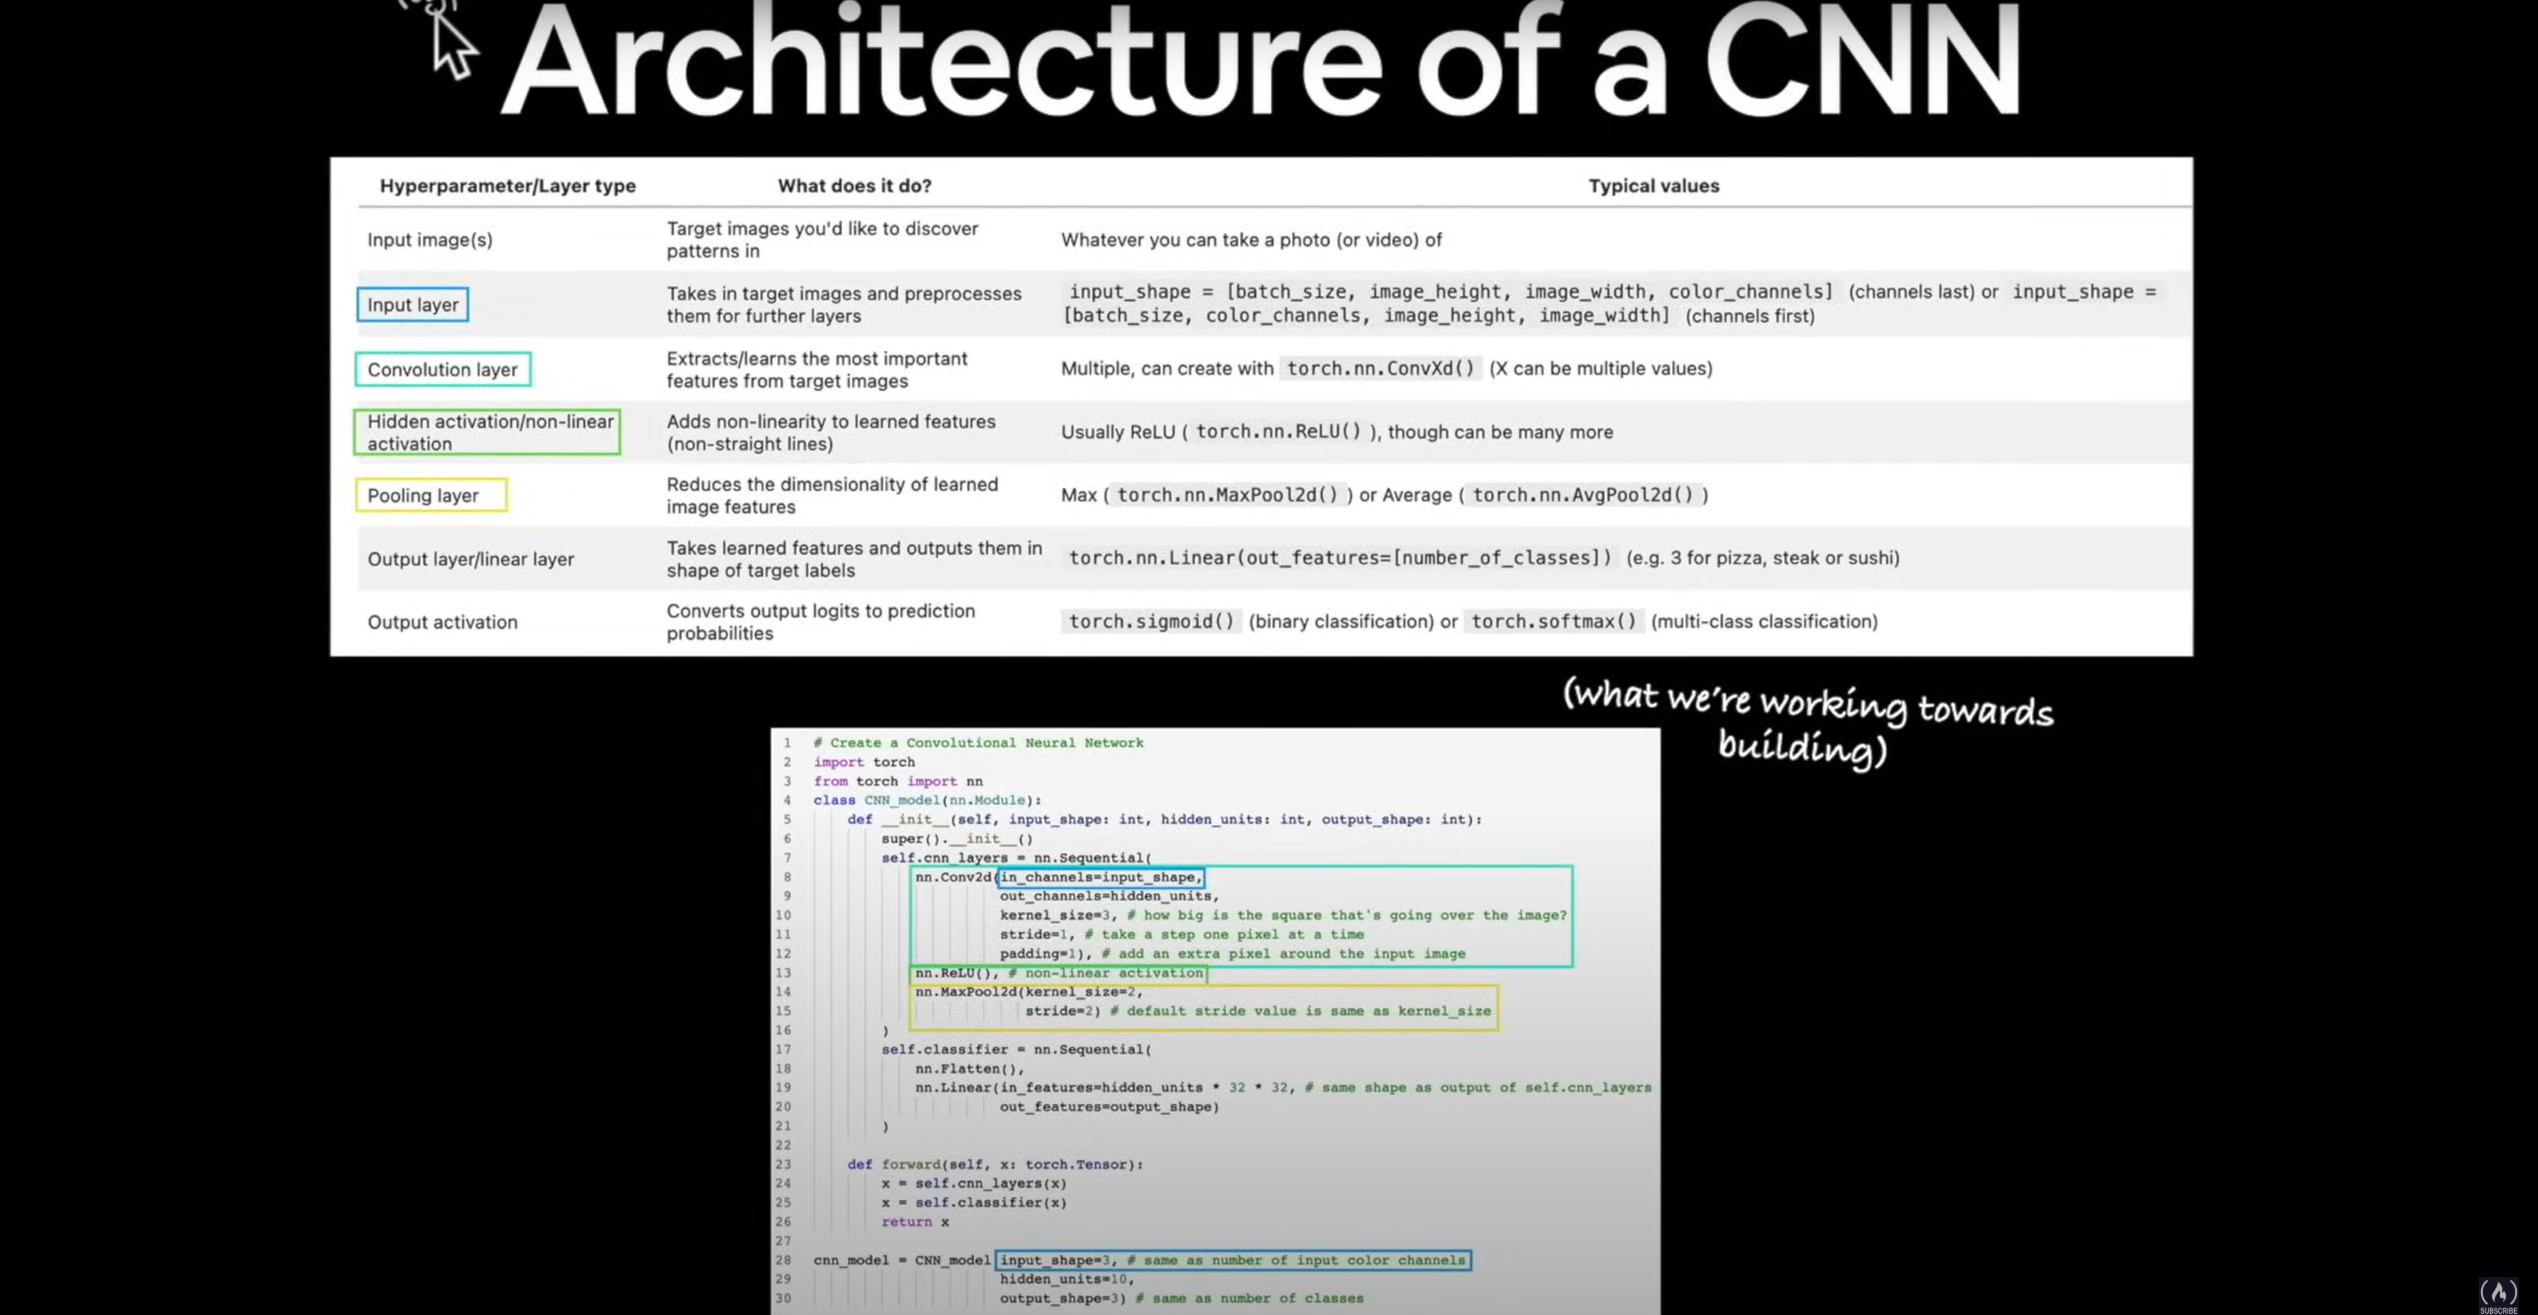

In [13]:
%%html
<img
width=960,
height=675,
src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAACeoAAAUjCAIAAAA8ZBBHAAAACXBIWXMAAA7EAAAOxAGVKw4bAAAAEXRFWHRTb2Z0d2FyZQBTbmlwYXN0ZV0Xzt0AACAASURBVHic7F1XdxvJla5u5JyIQBCJpBhFpfGM7Tn2pof1D/f6eO1dTZQ0EoOYSQQi59z7cA/uXlQ1QDCTUn0PPGCH6oq3bi6FSUhISDwOKIrCGNM0jV40GAyRSOS77777y1/+EgwGNU07PDz8xz/+8c9//rNQKHQ6HcaYqqqMsfn5+d/97nfffvttMpm02Wy9Xg/KbDabZ2dn7969+/nnn09PT1utltlsXllZ+fOf//zmzRu/399qtQ4PDw8PD/f394+OjorFYrPZhGoMh0NN0wKBwJs3b77//vuVlZXDw8O//e1vHz58ODs7UxQFPh2Px//zP//z+++/Z4x9/vz5v//7v9+/f18qlYbDIZQANeGaZjQaGWP9fh/KGQ6Hl3YRV8L0npz+im5vzwixLXgdGjKpyboXafM1TcNexQ7B57k6YzOv1wqJLwwej+ff/u3f/vKXv4TD4Vme1zRtOBwOBoMPHz789a9//fDhQ6lUog9Mmuf07k3W0a2AVgArbDAYPB5PJBKJxWKxWGx+fj4YDMKyGgwGmqa12+2Li4vz8/OTk5Pz8/NCodBqteDWndaTjcg1Exb4pOVMqdl0SDogcXPgBsRGDMD0h5mceBISEo8A3B5qMBhgk1VV1Wq1+ny++fn5ZDK5vLw8Pz/vcrncbjc83+v1jEYjMuGapqmqimSQjdgGvAgfGgwGhUIhl8udn58fHR0dHh6m0+l2u93v92mtJgkL0x+QePzQHUSRYaNSIWPMZDIZjUZVVc1ms8lkUhTFaDTCb/ihqqqiKLgRK4oC0w8Y106nMxgMer3ecDhst9vtdhsEbZh1dC5dysBzNb8t4Hc5ppeKxmyc76WixGNYGlQMR6l8MBhcleERyxGf0dUS0Lt0HOmtGfm0x8CkTWn4pPXCHrrOEhISEhKPEMaHroCEhMTXC45tResCvTgcDkulUjabzWQyPp/PbDbHYrGtra1isTgYDOAvcLqFQuGnn34aDof1et3tdtvtdoPB0Ov1zs/P9/f39/b2stlsu91mjHW73f39fVVVa7VaMBhsNpunp6dHR0dnZ2edTgflQJQZ+v1+t9ttNpv9ft9ut7tcLrPZbDAYsNr9fr/ZbLZaLZvNZrFYrFar0WjkxEj6GwQSav4RTZU3wSyF3ORDk8Qtqu5hRAhh40IpKJVQMqfvDodD0cxDQY3cUraRoDAYDLCmQNGAMwqUQThbQAcBEwmoB0CUop/KBMN6wiozGAxms3l5eXlra2tlZSUcDrtcLqRXiPn5+VgsFo/Hd3Z2dnZ2MplMpVK5rSqJijOR1rHxHp6ky5gRT2WwJB4DdL2I4IfuvjMJctZJSEg8QgBBMxgMBoPBZDIlk8lEIrG4uJhKpWKxmMViwSeRWRIZeEZIJb0LF41GYyQSCYfDsVjM7/drmlapVEDIuhRTXDwlngq4QeQMovgvMOFgsjUYDFar1WQyOZ3Oubk5r9fr8XjcbrfFYkEjrqqqYKzluMHBYNDpdFqtVrPZbDQa9Xq9UqnUarV2u12v15vNZqfTQZduymdOMeDdyvSjDQdrNLpNoDOE+AqsO5RTONXHpTW/FUxZgLQDYfhQZYEUY8bq6eoBaB1oIZwyAd6lF+E3/sUq4ayj7gKgbXhw/1pac4Qo8uBUgZkjOtRKn3UJCQmJrxzSfCshIfFgmOSMiQB7TLfbzWaznz59mp+fj0QiVqt1cXGxXq+Dl3ehUICH4fcvv/ySy+V8Pp/VajUYDP1+H0y/xWKx0Wggy9vr9Y6Ojmq1msPhsFgsBoOhXq+jGIDVMxgMwED3+/3hcGgwGJxOp9vthsBZwHA47PV6nU6n3W6DcdfpdMKL8ACNLkUnVoj80+XmbwX3qRahreAkJfCnFkVTg8EARjU2CoIE8xK8i0Y10QQuhRYJXeD8oVMLAPIw1aGgeA92XPirqz15zIA1zjmnq6rqdDqXl5dfvXr14sWLUChkMBhA8wIPIJVzOBx2u31ubs7pdJpMJsZYvV7n4mauVBn8zYUaTMK9uapISFBw3lRADTj9GsyrKYHg0vwgISHxqEBNIEjQgB9YW1tbWlqKxWIejwe2ewB4s4GoxRijvm6U3KH7F/0EkE1N03w+38LCwunpKViFL5XsxApLPF1Q90G8CFbMfr+PVjSfz+fxeIDn9Pl8TqfT7/d7PB6/3w8yNcwx4MMxABeKpVL5YDBot9uNRqPdbler1Wq12mg0isVioVAolUqlUgmUAxw/j8w/LermbedWDUiyJpOJcuaUqcZGwYoDaQWUA1MY5jtlM3QtgtznIHy/2+0OBgMQKOjrup6vGDA9SaYQRwRKMxgM6ODORoZMWk8gbtQDHrUroDeY1Mz7pzYKSeUCvgtic+jDjPSnoiitVgvTyFERb5ZUbRISEhISXySk+VZCQuIhQeV8UXpBRrZQKOzv70ejUZvN5vV6fT7f+vp6t9sFu2mv1wPzarvdzmQy1WrVarVCgOxgMEC3XOqbaTQabTYb5hOzWCx2u/3k5KRYLLZaLTYuIWB8HmPM4/EEg0Hqug41hyROBoPB7XY7nU4afUtNwtxbnE/uFAHjSk6X1C/10oevCtHkjB2LQpTJZPL7/ZFIxO12YzV0pVOqJQfpHR4rl8vZbLZer3e73SlfZ1IBJMEYI97r4M+OhAWVmGjThR+gI4B1DUK1GJ86HboGngcBNZc6nc61tbXf/e53Gxsb0WiUqjyoizroX2CpLi8vwyJttVrn5+fXs2RrowRrSNN06Q/nhKGbdYB7cZIu+DH0vMSTAzeXYKcGbSPVtbHx6BMEKmphjchJKCEh8ahAbbfBYHBtbW1jY2N1dXVhYQGCcbmHmSBfKKM8GZwnHCO2FtzrwTGu2+3WajWIfWRXseBKfJHAQFuHw+Hz+QKBQCAQ8Pl8Xq93YWEhEAhgCis0a9FDc7jgTprCV1EUl8vl8/kURen3++A5Xa/XwYKbz+fhL9hxG40GegOz0fbNhHzONwEyD0aj0el0hkKhcDjM5b/lXC1RsQA8OVQYq6pr3hNdx24XumWCoOTxeOLxuMfjYZeta5C8wF7b6/Xy+Ty0i1pwOXUBB5vNFgwGg8Gg1WqlAbiTcqJAfzabzfPz82q1CuoC2oecbXhKY+8OFoslHA7Pzc2ZzWY2PpRckDHXzEajcXh4WK1WsQNhLUAMwD3VXkJCQkLiMUGabyUkJB4YKA/ostTA1DYajXw+v7u76/V6nz9/brFYAoHAN998U6lUqtVqOp0eDAb9fh/stZBPCeQ0MEVQkQO+Yjabw+Hw5ubm+vr6wsJCvV43Go2lUqlYLLJxl0nGGOZGHgwGTqczHA5DfC2KH91ut1Kp1Ot1RVHsdrvD4TCbzaL0JTYQS+BOe+VADVHsvsLaptRkykdB3gsGg5ubm998800gEKBu1EyQQjWSUhWDrTudzuHh4Y8//ghHEU+ZHhISyih2BHKvwdFZeJdaCtFki7obBHfS25MANg0keUVRzGZzKBRaX1/f2tqKxWK4cOjqw0h3AETrbm5u9nq9UqnU7XYLhcL1VAOgvcJYXjZB14OUEP82Go1SqUQ1FFMaKyFxWzCbzT6fz+FwMMYgygGWBm5YOEVR/QoP1Ov1arWKPmESEhISDwu0DLGRHSUYDL58+fLNmzcrKyvBYBAeA4GIxs9NArJJNFMOzeTBRrbbwWBQKpXOzs6q1er0RKkSXzaQFbdYLG632+fzRSKReDyeSCQikYjT6bTZbDT4G4E+vjRJL97lrLnA8w+HQ7PZbLfb4Zlut9tqtWq1WrlcPj8/Pz09zWaz2Wy2Uqm0Wq1Op9Pv94GzxUpeO+kOx8RCmWazORKJfPvtt1tbW1arlTolo72WS/wD6aB//vnn33777fz8HCy49ENcqOWt8xuTCgT6MBgMXC4X+IPG43Gz2QwmZxogiyWgBqDX68HhxB8+fPjpp5+Oj4/RCZ57GIFCnM/n29ra2traCgaDIJSJzug04hYI3cnJyQ8//PDp06dyuUxtt2jmnGQLvwf+bTgcxmKxb775Zn19nQpHjPQYIzmiUSAdDAblcvkf//jH27dva7UaTaQso28lJCQkvlpI862EhMSjgC4bTSWZYrG4v78PqZaWlpZAONza2iqXy61Wq1AogPoVgNICmmSo36vJZIrFYi9fvnz9+nUqlbJarQcHB91uF8J5Qa5jIxaZhoSyUUooQK/XA1Yb7LvtdhuFNG2UqZUztWokDRQ12VJHXd3OoSy+KPlMefeuwX0d3KiDweDGxsbLly/BY/dKAH9qVVVzuVyhUCgWi1JFLjEdqEcA5YKil/0PtQAIRrQqX8Ycc7vd0Wh0bW0tGAyCIowJnUB9KQAmk8lkMiUSiUwmc3FxgT7sswNOLHM4HMlkMpVK+f1++ASXNo12PlBOUGDt7Ox8+PABUjeLURFSBSxx6wC1oMfjSSQSoFbj+AdMxo7TD/NAdjqdo6Ojz58/5/N54AEepAkSEhISAGrkgDy0brf7+fPnYExyOBzUhYtzT6ElcGWCdQQlGgy3pV9kjNVqtUwmA1KYNC18tQDh2mw2WyyWRCKRSqUWFhYikUgwGPT5fGCXxQzJXGA3NYhS/pyNn3uCD6uqCuwlivkQJ+r1emOxWCKRuLi4SKfTx8fHYMfN5XLlchleh2BZ7rs3BOT0cjqdsVjs2bNnNpsNrmskjTA8QwMolVE8MWSEhlxitB/u1HZ7KaDO4Oy+trbGBe7rKiLwVqVSSafTVqsVRbNLv8UYA9f8RCKRSCQu5fyRPYtEIpqm1Wq1RqMBMiDKF1whqnAo8l33Ktj1ISw7Go3O4jeDODk5MZvNoG7SRkHekuGUkJCQ+JohzbcSEhKPC5xaAQSzwWDQarXS6bTZbPZ4POFw2GQyKYqSTCbPz8/39vaq1Sq4fMJb6KgoygwmkykQCKytrb158+bZs2eMsfPz899++w20sYwxi8UCkiEV8Ewmk9vtdjgc3W63VCpREWs4HJpMJnBHBQEVMjlP9+pFzQhemc6Uo/wzRWS6B8ziUG+1WgOBQCQSAbdoKvJNaiN1hoXejkaj8Xj88+fPlz48pViJrwHgP4FHSkMqNtF8i6e74Q+Qh1H78+Sibylg1QQCAVCZORwOqiCDlkLDuVWDXeTxeJLJ5OfPn4+Pj6/6dSjKbrcnEonf/e53sVgMVn2328UoZ1T+osmcjY536vf76XS62+1qo/x4lHjKIB6J2wVMV1VV3W53IpF48+ZNIBBgI5suddUCwITE8JFKpaIoSi6Xy+fzcuuRkJB4WFCWGH64XK7Nzc3Xr1+vr6/TE0yUUeQczf2OVG7GfRZlK8wkXyqVyuUyOLDqPizxJYHakJClBM9dt9sdCoXi8fjz58+Xl5e9Xi8YdLk5xp00D+CcCXQnJOUG0RQHP2jKK7/f73K55ufnE4nE2dnZycnJ0dFROp1Op9ONRgM40pv0gO7rYGajp0cDqCsYZAijZ7UYjcZYLFav1yuVSqPRgPNlUb2AvXGT2k6HrhDNjQXEjHIiEqdd4dKDYRv7/f6k42/p59Cmji9yIde0cJgeKLt5PJ7Nzc1isXhxcZHL5aCTYZTxSd063w91goxHMD/FQ8QpcOYgdcXscVIIkpCQkJBg0nwrISHxSKAIyYgYURMwxnq9Xr1ePz09ff/+vcvlWl9f9/l81Wq1Xq8Ph0OQEJDRxwAvNpKdaOYZkOsWFhYsFks6nf7hhx/evn17fHzcbDYZY26322q1tlotFKU8Hg94ELvdbpAQGo0GBOugkAnyiclkGgwG9FvYOjFTE43EvVSKeDy8u+iwzwmZLpdrbm5ubm4OrWgALlO0rugOJnCLxWKz2eLxuM/nc7vd7XabBjnNbvOW+EqAzg00soRNTpmljGLZMbLkfut7JzCbzcFgMJFI+P1+MWM5F9CAQA2I0+mMRqPhcNjhcDSbzUsVLhSwPIfDocvlCofDgUAAwwtQU4YVQIIMuoxqtep2u0G1wSV2ngLptyFxbeDyh7CSUCjkdrvpqZCacBQueiEoimI2m202G6QHfLA2SEhISDDGBJ4c8p2+evVqbW1tbm6OjRgkdFxTSIpOWghnJBBZffqvNjrkstVqFYvFWq32NdBDyXjgtoiJiMHeBpvp8vLys2fPlpeXo9Goy+VC/0gIH8QSdD0IFRLtjdcn8fC0HDY6w54+AwepOJ3O+fn55eXlk5OTvb09cE8slUqdTucWOX9gZcGnHBQRtFEaSWkOqgDqS6EoisPhSCQS1WoVTo+GENIrceA3xCRTIsTxs1GOYm10eAQjdnRKQzBTsTKKuKU5gSd9HbUo2G/g60nTsHPPw0U8wWo4HM7NzW1tbeVyubdv30KYNXQgqlmm+ArcKcBaD04Ms7jI4APogAtNoCHjEhISEhJfLaT5VkJC4nGBY/S5GNZqtfrhw4d+v18oFCKRSKVSOTg4aDQaCknKxAhrTk3CwPtarVar1Wqz2ZxOp6qq2Wx2b2/v6OioVCqpqur1eiORSCAQgCN1K5VKv99fWFh49uxZKBQyGAyQJaxSqWA0m6Io3W4XDq0BCYfzNoW6cbZM1H1MF2wu7R96ffZC2N1IL6qq2u32aDS6uLgI3UVDIdn4cLBxwY/G54FINjc3F4lEjo+PIZfy9c4okvhKoI3nKAMdCigdqFcH/oDH0CSjjB93/YQANYdzf91udyAQsFgseBdJH41aoF2BOdyMRqPP5/P5fHa73WQyzU6dsAKKophMJpvNRs+sQmD3UqWPMspUD8eSUY8W+rCExO0CjRmQ9xu3crirjY57pOZbmJmg0IRN7WtW4ktIPGZM2ji++DXrcrkgIfzz588xAak2fn4tY0w8f5SzfmnjB0zSJ2kWDfBiqVQqpVIJ4hrZvaQkfRBw/n/sS5lOM7J5jDHY9dAmBzZL4DwXFxfX19dXV1eXlpasVisbhVFqoxy2YuZtXdCgyUufpO4I3A4OP+BkEKfTGQgEgsHg/Pz8/v7+9vb28fFxr9fr9XqzWEkVEryu21FYZ/gXzHX0XfSSxH+hZ+Ci2WwOBALPnj0rFov1eh3qJjLDdwTdFmENsVehJ6ksL8pNVH5H0y9nydatAz3oSh2BFjvJ+RtzCdjt9ng8/ubNm0aj8euvv5bLZe5z2ngWn/uhUdooAkEbZXzhZFLdt6h92mQyqaoK84E6NHwZlEdCQkJC4qqQ5lsJCYmHhzZzeszhcFitVnd3dyuVitfrbbfb6XQaMidTQY6+grGwIGkgAw2yE4gNFosFGGW32x0Oh2OxWKvVMhgMkAppa2tra2srHA4rilIqlS4uLlqtFq15r9drtVrtdhviRJvNJhweqYyc3NlI/wsSr3gk5KW8OO2iR6IcEeujqqrL5YrH4wsLC3D2D42lo6IdTXyEd6n02+v1vF5vKpU6Pj6uVquNRoONN1y0SN1xcyV0wE3FB5yZuLrBaQCtL7j2wZeZEfMtvEh98B/JyroqqJM7uHjDdaRynPqJKgLwFpA7o9EI+gJ2FdMpJQU0LxxXgm6BOGTo2zHLd5/iMEk8IOjSphQAnauUUQgIZQw4jwfQaaIFF4I/5FSUkPjy8BR5S0VR/H7/s2fPXrx4MT8/T12muOaIrVPJYS5A/bhzJdCCgmZdCDfsdDqQSb7dbrOrsA1fAJ4ox3hDaKM8wOA1mEgkNjY2tra2VlZWHA4H7o/4PHeADg0rFGcLypLw73TzLZ4GSi2+uk+azeZ4PB6JROLxuNfrdTqdBwcH5XJZNN9yYqZ4UReY1NdoNFqtVi6LDJcHWBs5K6NlVFXVaDS6sbFRHkE8gOlOJ5toFATNCa56UIagKRrnABPGCFQc0Cha7KTKI3OFNAckEVry9Kw88CGbzba6utput8vlMkQwi4nQHgQwN2BRzOglDD0MfX7X1ZOQkJCQeEKQ5lsJCYlHgSl+iHgLhRmw12az2X6/32w2MY+x7uv038Fg0O/3W61Wp9MBwS8UCm1ubkIexVarZbPZ5ubmEonEcDh0OBwLCwt2u/3Nmzfgxp7JZI6OjkBPga6pIIy1Wq3Dw0ObzaZp2snJSb1ep+ZkbRQaCGoUOJplesN1u+jxaEaoqZWNNDsmk8nj8SwsLASDQaPRSHMWUV9d6tLL6cexfIPB4Ha7k8nkwsLC+fl5u92G801RXT5dIJS4BnT1lZPUK3hL10THPcMNE/fKzQeRembQsDnO2xoVRtyso+bDK330Vip/cwCF6Xa7YL7l1hH8gBWK2cbgFbBaQV53ZRxX+jqmKWPjmmLA9NJwpKbYjB9DJ8+CxzMlJGYBznaqS1WElICMMYg7wYzKQDG4c9QkJK6H6ZbCr9NEdEPcsMc4zuGR978yOpXAZrNFo9G1tbWFhQVw5EJzi+7Giuw0NcNgPlKufPzNcXf1ej2TyZRKJd1afdl45BPjJpjOpYNtye/3JxKJFy9evHz5MhaLORwOeAxsbyI0kmMJJWLOUquMx+lOAoZ44r+wQWOGcPwiZpcBF+3l5WWTyeRyuXw+32+//XZ0dMSR3ynfFSUj6hNGUwdTsVcbj5tkhEmm5lun07mysoIO4rr5k++OFonji7UV/TbEFnE1RL2HOsqKrI17zXKvcJ/WRhHb8EWcJ9TnW/y0xWIJBoOrq6snJyf5fD6Xy6kka9cDknEaTEznA+dJQ8EJqrQhXzDNkZCQkJC4FNJ8KyEh8diBbDeyrd1uF8JbKaZ48tLfvV6vXC6fnp4eHx+vr68nEgmz2exwOMLhcD6fNxgMwWAwGo2azeaFhYVOp+N2uyEP8Pn5+bt37969e5dOp0G4gmKBsa7Var/++uv+/r7BYMjn87VajTLo9BAXDBS+Bu6fcZ9u0kOtEDiWOp3OUCgUiUS8Xi8I0tzznPhKpRfaJyC5GY3GUCg0Pz/vdrtLpRLq2cWTbKQ8cyugMjnVSrAJ00BX+NTVAoiSM7XE3xDipFJGXuFM8OLn/lKNwIzGmOtpAab30k1AdQFc5CslQajn4roLlxXeup5RCsrXNM1sNtPE8rq15fS/kMJuSkDGk8ATrfbXA4WE6cAVCPLAVYMUiRIQOlcVRRkMBt1ul6plH1AtKPHFYJI3gLgjzwg5La8HkUqwJ+KXYzKZotHo0tJSKpXy+/2MWMsg3lEbxTViQ0RbF/LYcJwBY0xRFEzdCYFxjPB1g8Egn88Xi0XIV4QhdA/Q/ofAF7zKOCMTAlyXLBZLIBDY2Nh4/fr12tpaKBQym8100xSdBqhFCn0Hxc/p/iuCC8fk2FosBD+KlRkMBqlUCuR6OCvk6OgIJrwokkzqBA4wDWCZaJrWbrfNZjNXMVom7RkqQYdCoY2NDUihfHZ2BicHU+3Bg/AbyvjZtCg3sfHWUYleGXeJw/rrlo/X0VKLKZTY+ECLg44DNBwOgZeLRCKbm5uQPPni4gKPjJ1iOb6H/lRGToG6YpHuVEcVCifKSUhISEh8zZDmWwkJiccFUXy69ru6GAwGpVLp48ePDoejXq9vbGyEQiG73b6+vg4JkK1WazgcdjgcbMRAa5pWrVa3t7d//vnnvb29er1OkxqBGNPpdMrlci6XQwEGJBwqSV6vUTdv8qW4VDaY4pmLMBgMPp9vaWkpGo1aLBZtBGofwqI4GZtNEGDcbncikYhEIplMptPpcHe/Kj3RvUF3GkyfZlNGUPddUO7c1irQyCFtmAQVNY80ig79wWmt0Hhzw/rgt0R7sKgOvl1guwaDQavVQqWtNkp9xmlA0BuGCzEcDodwHhgXeUMtWJeqsWgMtPgAjAtduaKih5p4n5A19wlV9WuAOFc5MgW7M2ZO5sYOlwao/5TZYiYkJK4K1D5fSlrZuDMBJThTdNOT7kroAvuKdtpjXuwwEwwGg9lsDofDq6uriURCI3Fv8Jg6OuQemRORCYfrkKCoUCiUSqVWqwWeVaqqOhwOr9fr8XgsFgsyGNVqNZfL1Wo1sH7RWt1vN9wHvsgtQLmKgwhslzabLRwOP3/+/PXr1+vr6+FwWGR+OEubKPeJAD6Wexgv4rucdRbtiNR5Ea2e9CJAVVWTyRSJRPx+v8/ngyD1s7Ozdrvd6XSoDZJWhvaVLonAf5EB5lpBQ+HpdTZiNuBuMplsNpvlcrnb7cLK4j59pfG6HkSbK0rx2ihYXxWS+tIqwTETaKGfsarYG8CY0Xc5BQJXVZp1yePxbGxsNBoNOHRJdPTXbeadAntPFEhpTegiQu+HOx1oCQkJCYknB2m+lZCQeDK4FUYW5Lrz8/OffvqpUqlUKpW1tbVIJBIIBOCslF6vZzKZwMihaRroMg4ODj59+rSzs1Ov18EDnXrFspHoZTQaId+ROjoyCoXP223Fg0MbRRWjUG02m0OhUCqVmpubg95DjSRnm9GIFzYjp+Fi4dhvZrM5Go3G4/H9/X04zEYbj96TeEBQfQrqoHUfgx935MFAP4G2QFQ6qKNk3Ww0XTnzLc0GdiVdAxvX5qA+nUuThQ/f6aSF5dZoNGq12mAwgEPpGNFuiK/ggUx4yFan0wEdFqSjF1Vy4tLDK0gKNE0zmUxM6BysJyoyNBLQw6kqnugCf6LV/pIwZYoq444ICEboBvci/Yvvgu5S1LhJSFwD04mGro1WNGNM/4Sojpe4Eh7tMsdawWkjsVgsmUza7XbKmYMpRbQVUV4FPLe63W6hUDg7O8tkMoVCoVgsNhqNfr8Pr9tsNq/XGw6Hw+Gw1+sNBoNWq7VcLhcKBbB7QVGPZIJdlZd7Kt+6C0waO+5f2CINBsP8/Pw333zzzTffPHv2zO12a+PhpFwJujIglRdE7pRKeZPWHfX/Y6OEGVSoVMYNuuInbDbb5uYmvPvLL7+cnJxAtCtWgDt6lk0WYZDNho9CMmT6DCfz0t94BfrKYDA8e/asXq/X6/VWq9VoNNjI1RLqc9fTjFYSRwrDYZFucM3nhux68hQjPamOn5s7yXzLxokzVAxSKEMWtEajhkzrDQAAIABJREFUAVHR1+mLmes8yxZM7fpThCNG4rPpWNxd/SUkJCQknhCk+VZCQuLJ4FZYcPAu1zQtnU632+1SqZTP5zc3Nx0Oh9FoNJvNTqfTbrcjRz4YDMAZtlqttlotLEfkp1FiRAulaLu9rVbcLqZU6VLdIgicmqY5HI5oNBqLxaxWKxu5aWvkvEDuRU6lSJVNVPSdm5uLx+OBQKBQKKAoy56+xuQRQjRU0FuiChiNcJPeYiRblDYClepvJXia04mI5luxSozMHOoTrbtgJ4F+5bbacg1g5YGapdPpjY0NSB6AdaNNpgoCRtRq1Wr15OQkl8t1u10MaOAsXkxvoFWSSA3VLnQ508lDzbdspHRjwkKeRSEiISFCnEj4Q9d2i7OR0jf6L6bQ4DRrXPkSEncEbYLL2qW8GdObn7htcUpkiWvgwTsQPw2nvSwtLYVCIWTMqCcZgAb/MTI9VFUtlUq7u7sfP37c3t4uFovtdrvZbILpV1VV8OgymUw+ny8SiYRCoVgsFggEMpnM6elpq9USCeZjwD0wErpbzJPDpZXHByKRyOvXr//4xz8uLy/b7Xbw1UOAUyDdIkUbLWXO6SFE8AMSfeMXdUUPTci9zNUBUnxz79JC8PWlpSXGmMViMZvN29vblUqFEYH00j7hikX+lmuvNoq+xcYqo4xBuBIx4NJuty8vL19cXNRqtVqt1mq14Jxg8et3Md80Pa9NTrBSx1OLKcTQC61Ac+9VSQHtQOr+rmu+VYiORRs/Zzcej7969apQKORyuYuLC7E57Fbp9vSxoB3ITQxubmPFcM4wyWRKSEhISBBI862EhMRXBwicrVQqjUajVCoVi8XT01OLxWIymcLh8MbGhsfjMRqNKF9ZrVbwOl9YWDg7OxPdOVWSK5UaKp6uMM9m1kyh+tvv96dSqXA4jKf+UImL03eLIj3KXcq4Lc1qtcZisVgslslk6vU6p0m/1RZ/jdCVDCepPLjfNDnwpPK1yX70s+hHrgqqOtGInzj9tGi+pbEps3xCu65r+e2CU14Mh8NMJrO3t5dKpRwOh81mg8cgqyG1V8F1OigGg6FYLO7s7JycnDSbTQw74IYPVcCcTZf+UEfH49GvcEZ0+i+az8UJJiFxDYhzkv4Q5z9Vq3GvaEJcEWZaljuRxL2B0tvZGUtx/k+5++XNYW6l3xCc2eDmBd4uHA7H4uLi0tKSy+VSR2laKZlSRgZdkQA2m81cLre9vf3jjz/+9ttv2Wy22+1iJCLkIoKjcFVVrVarhUJhf38/EAj4fD7wGAOeYZLHwMOCM5DceplfBqZTFcyZPD8//+bNmz/84Q/r6+t2u53j66gbn65t71JCBK7V+C+e9EFNg9xbHPBMhEubDHysw+FYWVmxWq1gh/748WO1WsXlwyaTXCpHUGkC7Y70JGCxH0TiDDm9NE0zGo2RSGRrawvOYzo8PBQroAmnwNwdFCFyVGSWNCEElhM3Zv8WYEbzLfygeZXgYbvdvri4+Pr161Kp1G63IQk89yGxwLsDbRRenGS+ZSOB7jGImRISEhISjwrSfCshIfGVQtO0Xq9XLpdbrVYmkzGZTBaLJZVK+Xy+9fV1o9GoaRroLMxmcyqVarfbjDGz2Xx2dlatVtvtNsgDyFijIMdJLE+X86ZiJ3eLEyosFsv8/HwymfT5fIqiUFWOMsqGRF+nR3Ji+J2uZGsymebn5xcXF/f39yFLG5uQlVriGpg0smwGTfEs/a8JYam3rgal+h36WyGgn5uk1EYV5+wf5XQ39wz8LtpTa7Xa4eHhzs6O3+9PJBIWi4UxZjAYIAKeU2kpijIcodfrnZ+fHx8f4xKj5eNMmDRetGOxG3Hhc2cAc/YwURkk8XQx+wq63Y/Sf1Hfx+1fiuBHQrVp1NShCYGJIkm5hmpSQuKG4DS8M76ie+VBlup9grKgt9tSbUI89AMCMieHQiHc5WHnVUf5Y9H0RV0ngVHP5XI//fTTTz/99PHjx7OzM86rcjAY0KSymND17OzMYrEA86CRI0jvu+VXwZRRmyLm6IJ7+LHNh9kxiySlaZrL5UokEq9evfr973+/srJisVi4HRDtppysR7lHzlhFs7zARc69AP0IdWVDRlhfYCzV8dQvXN24i3BuCFhw19fXQd7v9/u7u7vNZhPCzZWRZyF3NjknHEHh9OuUJebajv+qQgpiXKpGo3FlZSWXyx0fHzcajUql0u12defnrc86jjmnvymvLo6yQhxbb8IgKRMSokypKpUgcNp4PJ4XL16Uy+VSqXRwcMAYQ40NZwy+h8VL+4TTjYgtQg6Wm0gSEhISEhLSfCshIfE1gvLrvV6v1+sZDAa73d5oNMCR3Gg0djqdZrPZbDatVqvb7V5dXVVVFay8h4eHkJCHs+AyQVv0REX6S2UGEC3AV3o4HAYCgXg8vrCwgMojdF5WRzla8V2UtHUdUVESQ5nf6/Umk8lwOHx2dga2JVSfPV2lyeMB14fYq7rmukvFyEnDoXv9tsaOW4AqSecrzmTOax7D6USVgW4l0Rgpnoz1UMAatlqts7Oz9+/f+/1+j8cTiUQ0TYOTZZmeC4Wqqr1er91uHx0dbW9vHxwc5PN5zkudfgV1uLQQ7DROLaUQjRuliuhWzyaoMCSeLh7KMqQINlq8Pul5+ptSADbuS0SjcEQFJXuyW7zEI4HuYpl0kZH9axajC/dD9+6Xh+lqcXpR5NWpTWWS/4dY1ANCVVWLxRIIBILBoNPphPrDJOn3+wpJZkNJFnpANhqN09PTX3755f3798ViEfxWMY8r1140YqmqOhgMGo0GnpDyYO3Xw02YCkXw8uHwxa8mkfhYLJaFhYXXr1//6U9/Wlpaslqt3A6oCad1UtOm7ldwlnL5ltFWCpMKAn/xLrgbcjG4OF6cUImgDCd3HUtbWVmBk5JgRVB2V5fYckITG2ckqBkb+QcsB2/Ro3Y5cdhkMq2trZVKpUajsbOzAy4U1Elili3gquD6h3asMh7eOmnPQtqiXj1zMpZDg325HhO5O23cOo4iiaqq0Wj0xYsXmUymUqnk83lwY2WMwY/py/wWAZUBQUx3fgI04jVI1xT7ssiLhISEhMRNIM23EhISXyM4CwT8AAEJhYFGo5HNZi8uLjwez+Li4tzcHBpCBoNBp9OpVCrowKtb+BPluTmtFncL+wcfsFgs0Wg0kUh4vV42ciLGJ7FARjICQW5qTnASVerQ20ajcX5+PhqN7u7ulstl1C6xJ9vDjw2za4SZXtAqVW5SJQVVHTJhsGg5tzKOomWF/uD+MqJtEZ+ngv2kuk26rqsOuJ+JCtrYnZ0dr9cLizEYDBqNRtCxUtUA6C+MRmO/3z88PPzf//3f9+/fHx0dYXQ7G9l3lVEOed2GiHoTTounkEP4aCdTSiI2ZBL9kXgq4NYaE2bO7Y7vpaVxa1kbd1Lh6ACtuZgnUPwh56rE9cDxPGxcGU03U4Sm57WGKUzuQqf/xUB3qWJXAyc/qcMZYYwfTw9Dtd1udyAQ8Hq9eOYLUjOVHDPPiHMb/GswGDKZzO7u7sHBQbVaRVkGW8p9Dk0p2F2cs5em5/N3z7heBURbzuMZ5XsG13BVVefn558/f/769evFxUXImUwHWuxwNDRyNjx8i7r9DYfDRqPRbre73S780DSt2+32ej3gUUHuNhqNVqvV4XA4HA6z2WyxWKAa/X7fZDLBFzUSWAn/oj+xMko2owqnIcAPi8WSSCS2trbq9Xq/3z89Pe12u0gTxC6aJB2IXATldbk4YFyMtFbQrsFgMDc3t7W1VSwWwYiL7cKA4OnjeFvgtiQ2YYnRVtPnr7oeude5wid9ES+q5IBeVVUTicTm5ub5+Xm9Xu90Ouja+yBamkt7Y8q+LyEhISEhwaT5VkJCQoIm7zWZTOj42e/3M5nMp0+f3G63wWCIxWJer3d9fR3D9Q4ODiqVCiRVRoEBNcIP3KrrglMdcrfwL1X0eL3eVCoVj8cdDgcjwh6NW2JEJkEXVDF3li56vV4wGEylUh8+fMhkMt1u926a/pWCaifZuBFXV21xJamS0/LguzTR2XA4xGzb1wPVFEDJaLAUD8HiLMrK+FnLYv2vWgf6r67dmk1QRlzpcyKgFb1e7+Li4tdff2WMZbPZ9fX1+fl5q9VqtVrxUGpQYwF9Ozo6+vHHH9+/f398fNxsNtlI4waar+kmN2XcPM9Grhuigzmqg6lqhiuHu6XoeYpIPDZMJ910+YsON/c8rLqTGaYrhviIb3HxLjRvxJPe6CUeHLraZ/EiEkC6Z9HJzDFU7N5X1mMDbT7diLnVSr03pthjxIuTeOMH6XZVVb1ebyAQcDqdYOjSRmFb1EuSmtzQ/tpqtY6Pj3d3d3O5HPDVimCX5SYnTDbqtIqfoHaRB+wQ0bJ4aTVoG7/ytQPAfjObzeFweGNj49WrV5ubmx6PhzE2HA6nHy6LawodeSmnDSUPBoNerwdnJ6fT6WKxWKlUarVaq9WClDBIzYCrNJvNTqdzbm4uEAj4/f5QKBQIBFwul9PphO0bsnwjz6+M/A5pFCwncqJACr/dbvfW1paiKL1er9FonJ+f64aZ0hIYmTDIxKIMgs9zQhZ9F5ckLR+um83mxcXFSqVycXFRq9UymQwUqxCXyrteaMiWYzisrsBODfNIgqZEml76OW62XKko6q7q8XhWV1fz+Xyr1fr8+XO9Xp/0XfzWVet8KRQSTzxL9C0bebpfO4JZQkJCQuJLhTTfSkhIfO2gSjFFUeC8W9B9NBqNo6MjxpjFYjGbzbFYLBqNWq1W1I98/vyZMdbr9TCNMFfs0wLVelADLVzU1bybzeZIJALJjTkBlZP0qHlGGfn+X1ol6Gq3251MJqPR6MHBAUjp9BPsafb248EdeSLTYjmNKp1UNx9ETmGHc4zT4nGqE6ojEKt01fpMsXReWs7Nux3zy8GyPTk5qVarZ2dn6XQ6lUoFg8FIJOJ0OiFModFoNBqNcrm8t7f322+/7ezsXFxctFotxhjQPVhfVNUl1pCqIWiHixoH6h/D9bMywdyLxVJiwsjYiZAU4EEgmjBxpOgi0h043Xl1vTqI9eGIj+icQSctN29FAwCWqQhJDm9ef4mvHKj45mag7jaEM5Zen5K9ltv1xIXwJWE6IzHFNIt7zZTOoQZL8daD6Nnhu1arFcy36vjpmyKDzbHf5XL54ODg4OCgXq/jZEPTC0fA8V8QdmiZyIrfESd5bUzhyiZBChSM+Db5fL7V1dU3b95sbW35/X64q8vA0/mvkBM0wFKLhqt+v99qtSqVSqFQgLNdz87OcrlcsVis1+uNRqPT6XS7XXrqLbxrMpkcDofT6XS73T6fb25ubn5+PhKJxGKxeDxus9kgTpcuZ4V4DLNx/1TRIqgoislkCgaDW1tb5XK5UCi0Wi0ISec6RyHns4g0ASvMEQSuf8SL3MNwy+FwbG5ulkqlcrkMZzmBq6tChF9295NWHT+HdRI7x0jPz0IPdTlA3RKuSl3xeYPBEI/Hv/3223q93m639/f3IcPQjJW5RczSLVyTub1bQkJCQkJCmm8lJCS+dojWGhDtDAYDeAEXi8Vff/0VYtcSiYTH41lbWwMfWFVVd3d3S6USpCH9MmR+Ttk9pVEGg8Htds/PzycSibm5OU4eBnUkqJDoeUVY7CxiCeoRYrFYKpX6+PFju91utVrauDvzl9HzD4VJvUcFWk5lM/1FfIUJ6j82cr3H4bst1SfUkPo4K8Q6i49Nir5lggA/SblALVIz6ge5rtMtdkrTLu1njfiOAPmq1+vb29uFQmFvbw/Mtx6Px2w2d7vdSqVSKpVKpVI2m4WgW1SWaZrW6/XoF3VTtInKKdrhuuZYTs9FT6gSx0ghERszdtEThbimnhymGEXov/fWQN3lSde7RkJeKMXgxkIZ5f1Wx4/DpDaSpztqEg8OOnk4UxmbsFPQXZizRtxXrR81RF5i9p654ZP3OQRcGy0Wi9/vhzBEdfzwginQNK1SqWQymXK5rKoqmoUYycChjXvD6LLcogD1ILgJeyDyqF85lFHAazwef/PmzYsXL4LBIPJ1UxyY4F/6AIh+OC1LpdLp6enh4eHR0dHx8fHJyUmxWOx0OpAqGQdRJeeegkvicDjsdDqlUklVVYvFYrfbfT5fKBRKJBKrq6vPnj1LJpMWi4UJdjIQzHGv10Zn69KqYoUHg4HP59vc3MzlcrVa7fPnz81mUyMRuoysDq7hNGk56AfoXcpd6M5VjThA0Ic9Hs8333yTz+cvLi729/chd45Ywl2bHrEDmd5aw8ojvzQjIRJ7Uhn5dOLr2hWjb7mKmc3mZ8+etdvti4uLXC4H84GTR+4CWHlRMp1UVY4FldG3EhISEhIcpPlWQkJCgjEiRWD+ZNRfVKvVg4MDm80GgbmLi4ter3djYwNkDE3Ttre3wXud5oB9irqAq1bYarX6/f5EIrGwsABByWzc75XKXVSWg9yt0NWiZZcC7vZ6PQjAnZ+fLxaLGO6MQvVT7O1HBV0pkSpTprx1vZ4XldfXBk4tlJMxf5o6fkwXE8y3KCGjWkdUISnjXvyzKytprdh4aCB9fUZ96/S2c5RnOBy22+10On1xcWGz2Vwul91uN5lM3W633W7X6/Vut9vv9zudDpe5Wlcfpwtt3P2fGsN0H2ZkRlFdD7WEaUIQD711vS66B3A6bk2IRxG1RY+5OTeHbtvvGaIxTKyMNnLV0o2+xQB0JCPc2XU3IYASEoCrGg7FzWIS/8NRm69hol6jjdROeW3cGwvK1VNRFIvF4vP5wHx7aSuQz+l0OuVyuVqtwmmjiqJA8CImoWXjuTewl9AjkwtAfEDMMnaX1nN2ju5Krzw5oPUxGo1ubm6+fv0aLKMiV0OhCR6ETBAGz87Ofv311729vf39/aOjo4uLC0ih3O/30fBJq4GMN9fP/X6/2+3W6/VCoQA+iEdHR2traysrK5FIxGw2090cZQEqJmBtOSsjLI14PP7y5ctisZjNZtvtNi4HjUBsPlZbFY4CoZz/dG4fVxlyIIqiBIPB58+f5/P5arWay+VogdzX7wLYlikWWcoyqSR58jWIqiJAu675Frk7g8GwvLy8ubmZTqfB+Zsmh79TLo723lXNt9OnioSEhITEVwhpvpWQkPjawdlR0KKDx/b0er18Pv/p06dms2k0Gs1mM7i6P3v2DN/9/PlzrVaDA3s4I9AXDIfDEQgEIHMyE0RTg8GA6m/4DX2raVq73YYEWeAuzSboX1AdoKqqyWRKJpNLS0vn5+edTgelL11ZWmIWcLoSeotTUoD+4tb7+VYUEHTKocpAHT+lSfzLiFytjfvj07rRh6fUUFf+576uW/6MzZ/+aa4oVKPA306n02g08vk8plKkWZFhbeJqmh3YHFoBVPGIZgbRfMsVhQWKBrar1u0+IRIuUUPHRTDjrPhSaRfXfN35z0jX3UUnYJnidOLqJqrVKD2hi4VGvdxp5SW+BlyPRZw0sacU/qVO0SkdeI0mz/7KQ/H24nfhislkcrvdVqtVfEWURJDbqdfrFxcX9Xodd//hCIxs5UzwtOv3+xiz+Bi2sFmG44aVnMS33KTMRwuIuw0Gg69fv/7++++XlpZsNptoWGKCAx8jvBxYZNHFOZ/PHx4efvz48ccff9zf369UKpVKBYoyGo1g3GUj6ykUCIY3/JxGzMOKogwGg36/3+/32+12Pp8/Ozs7OTk5OTlZW1vb3Nz0+XzqKFczI7lhlFFwOY0JxjLhotVqtdvt6+vr6XR6d3e3Xq+3Wi3Kremyc2x8bnCWS10WfRI40UNVVZvNtri4WK1WLy4u2u12rVbD803uQi6bVCvE9GpPf+zSr2Ah3OhcuzQY/bm5ud///veFQqHRaJyensL8VCecbXwlzFICbdf0Z+i/D7XRSEhISEg8WkjzrYSEhMQYUJkL5luIE63X6yBYejweg8GwsrLicrkikYjJZEJJA87B7XQ6KMGKuo8vAFRc9Pl8yWQykUhAP9D0SozI+XgF+rBSqRwfHyuKEo/HrVYrxkpOsnmjjDo/P7+ysgLZqpvNJv2KxDWgjYc2TjdI3LyfdVWBNyxT/ARaYrRRYmRttuhbXSMTpyun9huquxQbAmSBvq7b2JuTCBrxwFkEQX2GnhPc+Yj4MFYVg28mfWvSDEF9DbWda3ou87pXOHWVWD3uokglHooITOqQKUpt2uFfKu2asWmTCP5dgNNyUrXg9KgIqgFkI50ypSESEtfGlE1h0t0p13VX06VW3i9vGk9vES7eazRcd6u6dmlX+qjuFWWU5NZms01KeiFa2lRV7ff7zWazXC5jcCGYxPABdMPS9UZFRujxT55bqSEnzVHO+eliUhMURfF4PKurq99+++2rV6/sdjt3iDJ1aWJ63k5gW0V+8uTk5NOnT+/evXv//v3+/n6tVqOlYfYXFBWxVniLJsJh5CyeXq83GAw6nU6tVsvlcqenp9lsttfrvXz50ufzQRguG81nRgYO/9IfCvE+9Pv9y8vLq6urlUolnU7DkSKivwJHTLAQ7DG8rvsvB414/sGTwL0Ph8NoNDocDi8uLiqVyvb2dqPRoHz+nU5FZfyAiUm7DCVK2A/X+BwKEbSEazOKaLkfDocrKyuFQuHi4qLRaIBJXlfouwtcymdywGl/bxyyhISEhMSTgDTfSkhISIwBRRRktcGBt9frFQqFnZ0dyEpqNptTqVQgEFhdXTUajfDK7u5usVhko+N27k2+umtA67jYI4hCTiaTgUCASlzwAJVmqQa81+tls9kffvgBIgYCgQA+z0mGKBDiX6vVurS0tLCwcHJyUiqVnnqvIrhW3+endU2VkyAq7Oj4TrFl4sN30TqqEFEImKBg4pRN3DPU8Z/NINKj6ke3JgDQZ+keH6tb4KXN1AWnS1WISV4bZQ/jqoErmtOO0btML85A7BZFsBkrQvQtt5bZOH0Q286NEdcJj2fV01bodov4yk2MB18M6BR9kAqIm8sUpSSOLyUvuqFpEhKzY/rMuapld8qta9fhKWKWXfvSx6YX/kg6DTZ3SAg0KW0yxx2xkQPKYDCA9LPtdpsJnjTaOPB1bZQ+51HtX9pkN6AbVlIsFguccbt/ioDQ2xcvXrx8+dLj8YjdyzF49K4ynn9F07TDw8P/+Z//efv27fb2dqVS6fV6MP3wRa5L8SJlPkWfQiwfbmma1mq1tre32+025Jt58+ZNLBYzGo30E3Sjp4wrPkDthclk8uXLlxcXF9VqtVgsokKA2pt16TCaDOlF+lGRrdVlj9k4uxgMBr/77ruLi4tCodBsNiFrzl3POpFNmrTW8BnqMjtdqJnyUeXG0bfauOeK0Wjs9Xqbm5ulUqlYLDabzUajMRgMqPR0vdrOAso6XvWVO6qShISEhMRThDTfSkhISPw/OCkFRRFwV+90Oul0GiRGMNkmEgnwU8ZUpf1+v1araePn4H4B4OReg8HgdDoDgUA8Hvd4POr4YT9gFsIjsqi0PxwOc7ncp0+fnE7nq1evRL0A/KCiFyqMTCZTMBhcXl7e3d3N5XJwRtd9dsJdQ7T/Xfr8/aiN6OjTfFOThg+rx/17PwYPrC0nAHMKBU5BcKlbNOplUGGEqh/6IdrGSQM0vd+uB1H1A1XFSAW6DLmBEP/FttDSJk02VPJy/cBVSRwLNtIm0/AO3U8/WkCjZrfQ085/bHrwa0CcIWyG6Ddlwpl29wb66SlqMjpvlXEHpic9ahKPE9w8pEYC7hauIJGiKsRCMCNd+mJw6arkukt3axaHYJaS7w4iW6gJsW4gjzDGILMxl3SE8tL4Sq/Xg9NeuK8AocPzPtk4tcSzLe++3VfAleojDrEua0rX0RRz1GPriiuBpkqChphMpkAgsLa2tr6+HgwGdXdGuCgyzCjrwd1Op3N6evqPf/zj7du3v/zyS6PRAHOjoiiQFRnJGmeLpV/hhoZWBqcu+CYCJwnRt91ut9PpfPPNN2tra2wkkFKPK46oivyAwWDwer0bGxuHh4enp6fglk39ubHfOLJMwXWa7iuTHkAKjxZci8WSTCa/++67TCaTz+c7nc7svqE3hyoc6Ktbf44uXeNDun14jaLwFVDXMMYMBoPD4dja2oIBPTo6Qvs3/XvrwJ65Up9cuwMlJCQkJL5gSPOthISExP9DGU8TpBIwxvr9fqvVyuVybMTo93q9+fl5l8u1srKC3Pnu7i6cg0stuMoTsUboQhn3tgaX/2AwGIvFotGow+HQFe2o0QjTbbVardPT03Q67fP5Tk9Pl5aWfD4f08sxRTUmKKaGQqHV1dVff/319PS0Uqnccz/cNa4ksE3SKF1jmk3/KGdooZXkdH/TC8QZgqLyrawITsin+al0+5PmZwPlCK53PGqLtoI2nCouqd6Es4PSQF7a5EsH99odwqkgac1BKUZ1bVxDVHJOMK0AVxkkibThNCUdvo72OfyoqqqgDhZVfpCKViHZ0jgFkDKzcfQ+CSwdSt3vTqqMqLzjptkTAm2IMu4cgEuPU/0zwUvgjgwkdC3QHlbGM/LRZBv4Lh0jbeSHxEY7EcxYMdXE7dacVuZWCtQl0U9x1t0dZtl8b7HHKKGjP7TxyLNJX8SJLVYbr1DzzJSafBnT4NJWcHSAsqb0GcqoiA9wjyF9u1MiwARiizssOpjC1ozGM2qjgltI5bTRQQlwACT3IRpfS5mlSfV8WpOH7k3iDiUOqLg96W7f7Al2BQBmDvj5aZrmcDhSqdSrV69WVlYcDgcTuGicSBwLRNs+HA673e7u7u7f/va3n3/++ejoCMyfCNxzJ60vVTiIB57UfRg2Zdim4SjcX375pdPpdDodk8mUTCZxv8Zx51rBieqKohgMBpPJtLCwsLa29unTp6OjI7GZulNCGckgykgW4DoQ68C9TtkJfHcwGODRQqqqut3u58+fp9PparX68eNHONRJ7JByJ8rQAAAgAElEQVTbhTKuFdHdJbVxZxFtZCyf9DxXPhtnz5DFovLF9SoPtE4lObRTqdSf/vSnTCbTaDSy2ew9nB+M9afC6aWvMGIyv7u6SUhISEg8LUjzrYSEhMQYlHHARWqmwnNwUUpxOp3RaNRisbCR+LG3t1culzudDkrFT44F54RzNm4WslqtkUhkcXExGo2CrEvfUseTR6HxW9O0fD5/fHxcLBZ7vd7Ozs7z5899Pt8UEQUlWywzkUgsLCwEAoFms0n9oJ8WxO6lnUB1Rtjn4iu3VQeqiOQMjfh1zqGBGy9OyaWMAjjEnL26Tb6hCYeqPzg1jTJuVRKbxkYBoIzYNWkr8AfVjYIHg6ZpYJUUX6eAgBiFeNNrxKHhjtS+XMcyxlANxEbxCnB9kg0e+wH1wtroJDx8BqMlkNBhhCK3qEVNBKelEl9HsiN20V0rXC5da9xFZYJREK7QTqMTY1LhTwU4PThFmzo6OR6fxPmGs4iNBvGqaSou3UnFjtXdfzkqMf0B7uv4yi0On2677np6zNIESklEqnJHdbjdD81Y2j0vRk7lrejZC5VxdbZuIWxEYSipnERhFOJkA1ee0DmmUzBL5SkzCV2KOxrd2TnSDQSK9i03QLo71E0gEhz6m9sWIeUP0yNo2vihnjjfIHutpmlwdCgbz9Eq5oZVSdIRbhLShj/gLJqdFONYM3KQOSVuXFG0tzncSUvuHdgQaLjH41laWnr+/HkgEIBDNzTiAsWI5ZWWQKdcv9/v9/u7u7t///vf//nPf+7u7tbrdXyXfpHrRlx6SAYxBPzSTZ8Ru3K73c5ms81mkzFmt9sVRVlYWLDZbDjKiuBHKK56COf1eDzPnj1bXl4+ODjI5/O9Xo+b8FzFlHHQnuFqi1c4akzvYiEoXw8Gg2Aw+Ic//KFcLpdKpYODAziU966B0rduW7DOdKpMf3gSJr1+1XJogWzcgGowGF6+fHl+fp7L5arVKhsZ7+9oReOnr9oh6rjH7V3UTUJCQkLiyUGabyUkJCT+HyjaURsVVYSB4qZWqzHCjptMpuXl5bm5ufX1dZPJBBd3dnYKhQIjkv8DajeuCiozi3ors9nsdrvj8XgikcDYWSqZUJUHNfvV6/XT09Ozs7N6vd7r9Y6OjrLZ7PLyMk2dikAVv0KiB/r9vsfjSaVSOzs7uVwO8kfRat9P96JczS6TrLSRmZ+rmKj2oiUrgppD92FNMKddCbrlI3AVoH7BYDCYzWaLxWIymUDtBX7NqOKBH4PBADKNdzqdbrdLzTM4MfArOMrYupuMIM40/FcZN99q4wEloMfkWqqNjIj0dbhrNBqh4SaTyWKxGI1G6A1QWsEtaD4AohAajQZ8a0hAO2QSZZilN7h6YsZyNrI6izpcbCA2bZIpF6euQqJj6WjiwEH0A/akGHPAiGqGjQdiwitQAqevgVcw9x1XMY7g3HogAtVs0k8rI6szVN5sNlutVqvVajabTSYTbhxQYVCv9/t9SPYOaf1gXXDG/tut/Iy46ooTiRX0ALYdyAKQCOwxJALD4RAoA9oP2Dgdw5HVrRVOdW2CRZaNpiUsNzZOW+i/+BhHNBgZd5UEprORFwudpep4HlHdWnHFYoE46NzWKW4rYqunfAjLpxvoJNpyQ2LLyBK+tO1YjVlaIX6FjsKMr8+4uYiUiusZpJ9467ZWK1cOTkWwW8DmYjKZYH3B7sMEpmIwGEC+0F6vh6QGySY+xhFJcS9+0phOx3Dtw/o1Go3AusBa1jQNelgdjxiDDuz3+2jmhA290+mASxZjDLpamTlFxCx1pvsOXb90JtMdEImYoigwYbAcWoLICXAlA8VWiBlGI642cBd5ddziKZ2hr9wnZpnG1EQHvWEwGKxWq8VioRwIlf60UcQnzAFAt9tFt9FLt+/p0/LBoZGzaQwGg91uX1xc3NraikajsBzgMUoh6fRggvURDJwXFxdv3779+9//fnh42Ol08HPIZgNEz068iJ1GyZQyvpXTjkX+AWbpYDAol8ufPn2yjBCPx3XFTKwY9y+u94WFhfX19d3d3UKhQLcerhuxQ2ClUO0BG9/N8QqWpsstw4go42lsQGBZXFx88+bN6elptVo9Ozub1KhrQHdLReKgzhB9C22hPTDjd2k5KsGkWs1Yee4TMD0sFsu3336bTqdLpVImk6nX65OOYdId7tlBKTlt0aX1h4XAzSIJCQkJCQlpvpWQkJAYg0JAr7ARDw2ie6PRyGQywHCDWi2ZTHq93rW1teHoHNxut1uv17WRP/uMQsiD49JKGgyGcDicTCaj0ahKXNfpi6DWQaddTdOMRmOtVjs+Pk6n061WazAYZLPZg4ODlZWVUCiE8YtYgliyNop1XllZeffu3cePH7lst3cHNHHBITowB6Z8moptVFynzyhEna2SLGGoS4J5xR0LivpEUJTAXbAU3qKkB9KjyWQCu5TD4XC73S6Xy+PxuFwuu93ucDhArawoCoi+iqJAlXq9Xq1Wq1QqlUqlWq1Wq9VKpVKr1Thbu6jX4LrlGuAWL1Up0h/wMDU5KORcW05hhIK0xWJxOp1zc3NOp9Pj8Xi9Xrfb7fV6jUYjtAvMV5qmNRqNVqvVarW63W6tVkun0/l8vl6vt9ttGCmxt7F6tC2z9AanM8WGoFqN3qX6OEa0aah5YSQQB1/H4B4sn6qxYMaCQtxkMsEC4UgorRgTkkuj9hl6kipD8a5GLBbcEIuqwJuDUh78Ip55DGZ7q9Vqs9n8fn8kEnG73U6n0+VyQSZ53BcYY+DK0Ov1Op1Os9msVCrlcrlcLlcqlXq9DpMErJgPpamZPsewE6iOEnobVoTL5fJ6vT6fD1aEzWaDzkHrNZbT7/dhRVSr1WKxSKlEq9XCx6hpgVsRIrngdlVFUcxms8FgwIWmknh6JnQvJtbTJUTcqmFk4TDGIPUo7lwcecHP4ddpHWAWsZH5RyXRb+K40J6c1BDxo7RR16Mt06EQZw5N8J/QHSlaedjjpqxcWjc42pM7qW7Sh3DgTCYTWF/EucTIcsPVCuQLtl0cFAgCwz0XNzuxwKuC638oGYwNNpvN6XR6vV6/3+/xeGDDdTgcMF21kbMUsprNZrPZbJZKpVKpBAuqVqs1Go12u81GnkNcbacPFtdFN2nmTXDzCqApDsZOURRgaWATB37G7XZ7PB5qvqVLvt/vN5vNdrvd6/VarVaxWCwUCuVyudFo1Go1jEnFPtQm2Hh0mzbpFs5zrjSODmPyD6wAl/aA0kxKT+iGS5/UxnlRAGZwVQggYYZCHGVE6vcYoBCvNUVRgGu1WCwOh8Pj8fj9fq/X63A4YNFRDyR4pdvtdrvdVqvVbrfr9Xq1Wi2Xy7C46vV6s9mktjc6Bx600VcAjvJwOIxEIhsbG2tra16vF0ZcNMJxDBiA/i4UCm/fvv3hhx8ODw9B0MNbouciVw16BSckI5OfjbO4dFHAW/RzlUrl06dPDocjFArNz89DfiwRutZTmDNmszkQCKRSqcXFxe3t7U6ng6f20ibQJcb95R7QiMSBt0QGg41WK05dJPswLisrK7///e8rlQqQfbFR19vcaZ3p6yqJvmUTaJdCWGVxelxKDLk9nStkFsIy/RmYeECsut2u2+3+9ttvc7nc3//+91ardUcLFtul2y3iw/RfuvQeIV2VkJCQkHgQSPOthISEBA9lHNp4skfgpLvdLtXtDofDXq8XiUTgHFw2Yrh3d3er1SqegzujZucBMYucAKG3S0tLXq+Xxili0+A3Ropoo+CqbDZ7eHiYz+dBXiqXy8fHx6enp6Cg1JUMsViqhV9cXEylUh6Pp9lsajeLQL0qwDhhMBggGZemaaAjFp8Eiy/4cbdarVqtBum88C48gJovs9kMGluXy2Wz2RwOB/xQSQSYoiiDwaDZbFar1Uaj0Wg0isUiaGnb7faM6jM6TEyYiqqqon4zEAj4/f5AIBAIBMLhcDAY9Pl8zhEw0BAVeVBUp9Op1WqgRy6XyxcXF8fHx/l8vlQqFQqFSqWCcQxspMdXhIi6SQOqa+cQG4hzSRSARa0KjQmg5UCjLBaLy+Xy+/3BYDAUCsVisXA4PDc3FwgEwGgHClNFUSDicDgcttvtVqvV6XTa7XaxWDw6Ojo7O8tkMplMplgsFovFer2OpggEVQbh0Fw6sTUhiAFmDsSUQN0wHgv0vDDrtJE3OvzudDqFQqHT6Sgjey3AZrMZjUYwTKKVkU4edRRtCbpgmBW6A0eHgMYTMMbMZnM4HKZKHPRIgGLROwF/0CZrmlav10ulUqfTuTYp0F07uPSMRqPdbod1AZNhbm7O5/MFg8F4PO52u+12u9PptNvt6ij4GK1TYPvpdDqNRqNSqeTz+Xw+n8vlLi4uKpXKxcVFoVBoNputVovLznf/4PRNbJxcGAwGNC95PJ5oNAqdAB0C9MHtdlutVshCMRzlP0TfCCQO0OpisZjL5XK5XDabBZoG6nLYLrEOIoHlljNV7FqtVp/PZ7FY0MEFJz8uOhgUr9cLtt5JkSKqEFSKNN/j8czPz4MlQLTy0s5ECo/UHtZIq9Uql8vc8XUKUVgrI3sM2PC0UbAy1Jaqwtn4RglLBlwEwMY8idTMAhwIkUQrigKh506n02w2w7dw42PCmkJCpKoqzATYwcXmc183m80ej8dqtTI9bTv9FtwCi2a9Xm80Gjg32DiNhWQSNpvNbre7RnA6nRaLBWYFkCaIt+t0Oq1Wq9FoVKvVUqkEJdPAsusBrWJGo9Fqtbpcrrm5Odhc5ubmgsFgOBz2er1er9fpdFqtVvRlwRJgiYFrSKlUyo+QzWaz2Ww+nwffKeC4xHGfxDBwPfzgREm3JpNqRUkW9Suy2+1zc3OhUMjtdvt8vmg0CtY7yK1Kj0hEdosxNhgM2u020OdarZbP53Efz2QyFxcXYNyt1+sQlauMezgBqJVUt8LczFRV1Ww2w5zEYxp0+UxFUVwul0oSzzKyFmhHUSsm+CjAtuvxeIajkwuoNRqeh7QiZrNZGx0VgcQcwr7BHQejFWca0TuASDoA4HgHnogulwvcjGB9wWSYm5uDPctqtaLrBpLubrfbbreBl6tUKsViEfhYWGWFQqFUKoE1l3J0OAMfsENmgTZKxGIwGODU283Nzfn5eaZng2SC9ZGyqTAryuXyjz/++Ne//nVnZwd8l0WXTV2Ia3wK9zs9sQSi0+nk8/nd3d2FhYW5ubmtrS0sFlcEbKP0fFnslmazCUugVqv1+31gaXCBswm7FVaMtkhc9eJdunKxNGUkRwNHhLKSz+d7+fIl+JGADwEuYUaoty7Bn5GYc8SEo4q6zyujQ4UpZvmWWA73+pRyRJ4Ef7PxvsWlDZLR8vLyd999l8vler0eyubTOaXZe09sFCPjMgsoA/yw+6+EhISExOOBNN9KSEhIjGFGwQMkwGazmU6nqUDocrngHFwUEvb29orFIgTesUfPiIvyDxsXWqxWq9/vTyaTCwsL0Eyuu6jUQQtsNBpgrK1UKowxUDgeHh4eHx9vbGxMEm/wCkiGELHkdDpXV1dXVlaKxSK1iV4bou6AA+ogjEbj0tLSwsKCy+XCI8RoHBUbpZnCFxuNxtnZ2e7uLqQMZSObGQY1mkwmsAP5/f5EIpFKpebn50Fpa7fbGWPNZhPDbhhj3W4XQkDOz8//+c9/7uzs0PjIS6EJhluj0QglmEwmCDCNRqOxWGxxcTGRSASDQaiJw+HAoDo2MrCBmhv0XKBeZ4xFIhHIENvv99vtdqFQyGazR0dHBwcHp6en5XI5l8tVKhV4gJp+Z2nCJBFaFPtF+V8U6dHGyalHIUrDbrdHIhE4/iqVSkFvgKoXrPi6NXS5XPADdEDr6+ug9j06Otrf39/f3z86Osrlcnh4M0wkri3sWrTCbrevrq4uLi6C2peNxxMrIyMW2FdAIQt6mUwms7u7i2eGAQaDgcvlWl9fj8fjkJKRar5gSUJHdbtdRVGWlpbEMHqxUTiTYUVHo9HvvvsOegBGATRlXCQ0ROBximxlpInO5XLv3r07OTnBVXbVnhTXBXwUTHQWiyUcDsdGSCQS4KyD2fm4yUA7il7v9Xrtdhui0mu1WrlchimRyWSy2WyxWGy1WpABlbb93kA/B64nsMbBvASGrkAgsLi4uLKyAokTQD/u8XgcDgdNrTkkuVsxowBjLBKJgItDr9er1+vlchlcHA4PD4+OjjKZDISq0xyVU7ZjZdzebDKZHA7H8vLy2toaGAsZcRegoT+DwSAUCvn9fiCtUygPvaUoCsyE169fLy4uQosgdFj044EqiRdhYZ6env70008Qn6SRnKX0SejwRCKxtrZms9mYYCDBT2jk1GGDwdDtdj9//vz27dtqtaq7BDRilJ3UcF3Q5xVFsVqtqVQKvKko7YVxR9UzOvrAiPT7/Uql8uOPP9br9UtXKNixlpeXwTEOtyo2zq6gzQmsUJVK5Ycffmg0GqI7BdjzHA6H1+sNhULRaHRhYSEajYZCIfAkg0BMo9HY6/Wgb8FZqlqt7u/vf/r0aW9v7/j4+HrmW46/gkDAUCgUCoUikcj6+noymfT7/W63G4MCdTcaajVBgHdXqVQCx4jT09Ojo6O9vT1wnIJlRb1wxPpwVX1YflVkJnUfwymkjLI1wJoCfgbiLGOx2NLS0vLycjQaBb8rjLg1m80z1gf4mVarBTlFLi4uzs7OgKvJ5XLgSwdGXGowgGGaZMlDXoXy2+Aiubi4CF5Nw9GxFBjqajAYer0e0K5wOAyRhZTzEb+CtAJ++Hy+jY0Nt9sN7jKMnCVBKwYfpXwUrDLwSiwWi58/f8YgS5GCPcj8wRqqqmqz2cCpKBwOw4EvyWQSTPh2ux28N7gJNmkvGA6HrVYLvCcrlUqhUMjlcsfHx+/evTs/P8eEKzS18v2093qgDIbFYpmbm1teXl5fX/f7/bhvsvExResg/EvHV9O0SqWyu7v7ww8/vH//PpvNXmP0Z+HWZpcUwPK6u7sLLphA7TnpDFuhjfyrYGKXy+VMJgPOdh8+fNje3oYzULBksQLUwHlp6CS33YszEEkffR03ApvNtry8XK/XM5lMqVTK5XLoUD6lG+nuPKXTGCFK9MoUNonuwnhluq8tLYqSPvp3EjXTLYrbELl5Yhidco2x9Var9bvvvoOsSIVCgY4vVzid5NNrQiE2ihtNrp4i8bzUZC4hISEh8bVBmm8lJCQk/h+ckkJXAENuHnQ0U87BBS0tY2x7e7vb7aKR7JGDkyI4Pa/dbg8Gg6lUKhwOg0FFlDCpIQTuGgyGarV6dHSUTqfRjN1qtdLpdDabhTApZTyLFBO09vgts9kcj8eXl5c/ffpULpdpVa/R3llEI2yOqqrJZPL7778Ph8MulwssBKA7wzgn2i3dbrdarb59+xbCNZSRNh/bCxG3m5ubz58/TyaTENwJaRIxonEwGHAaRk3Tms3m8fFxq9XKZDI4CWfvBKge2GbUUa5mUHGurKwsLy8nEomFhQW/3485x6g4OhSOOMKsufAkHi+nqmo0Gl1ZWdnc3CwUCmdnZ3t7e7/99tv+/n6xWKxWq2hNnKXyuioJsV2c/M/0RGgU5tEHH6+rqup2u+fn5589e7a+vr6xsRGPx0FJimfdTdeA4F2bzeZyuSKRyMrKytra2vn5+d7e3qdPn7a3tz9//pxOp1Gdykn79MeUbykkhamiKB6PZ319/Y9//GMoFHI6nWgvoc9gwIGmaRju+eHDB9BicN8NBALffvvtmzdvYE5yMX9sdOptt9tVVdXr9YoEAd0auHaBdUdV1c3NzWQyyRjD9Nrq6FhlMB+iKhwN0mjZxc9tb2/DQVaY4JSbITNacOlbEGw6Nze3sLAwPz+/uLi4tLQUi8UgMA4qA/HKip7yRfcTEATmdDpjsRhjrNvtbm5unp+fp9Ppvb293d3dg4ODfD4PRmhYGnetBUZSQC+CtYAxBocpgoF2ZWVlY2MjmUzG4/FYLAbEAe0K2Alot0YFMVIJZeTgAkcFe73eWCzW7XZXVlbS6fTp6enBwcH79++Pjo4gcFAhWWrpiE9SCMJ4vXjx4t///d/RKwIi0TE+DEoYDAZGoxHidLkZSzuBm7pWq9Xr9a6srASDQcaY2WzGkDX05mGE2iBZo24NmqZ1u923b99ms9l2u10ul3EVQz2hEOh2CBv6j//4D5/PR7MN48bKRk4P1H7Z6XT+67/+6+DgAMJPuYmN/TnL3jcJiqL0ej232/38+fM///nPwWAQNimoFVaJjcy3qqrC1g/1//TpUzabvbi4oCSF6klxqoB188WLF//yL/+CVlv8ASUr49k+GGOwji4uLiCBMHwXVrTJZHK73clkcmNjY2NjA7IpgJcSR7gM42fN9vv9VCrldDohVwFsu5f2Ep3DuMXAdbPZnEgkVlZWgLDEYrFkMhmJROBdMB5jOVgmLY0bQciUAOQF4ptzudzJyQmanNPpNBz1h3wItRNMIjXT97s7Bddw8S52LyUyGIUfj8c3NjZSqRT43ADbxkgeV40cdc/06DZ2EWPMaDRCcotQKNTv9yH9ezabPT4+Bu+0k5OTTCZTrVbBn0mc2CJEKw54GCSTyT/96U+pVIoanKh1BL0ijEaj1+uFF2E5cOXTK2gBCgaD//qv/1qv12lMPyPbAZ23jFAzJDLNZnNnZ6fX69FVpjtwdwpufcFvdLCbn59/8eJFNBqNx+PgdRoKhfB4YGqnBAZerDzOLlVVYe8OhUKMMSDdp6enS0tLOzs7sL6KxSIQOiTjTwJmsxk4nGAwSAca7nI/6DzBGatp2tHR0c8///zbb79VKhXOX+pSHoxu8TNiOleMX+92uxCAu7KyAt45SNVhmFRVhfhLyAYBUfXpdPr8/Byiq/P5fLlchmVCq0pFY9pFHCURFwI+IIq9U+gP50Whqurq6urLly+z2SzYm5HvpWth9v7U7UZsDu5Zs7w43R9uxo/O+DnaJxxLg8HKOBuRHwNeJRAIfPfdd8fHx4eHh2C+5ToNmVj6uWv06qUtmrT73BsVlZCQkJB4EpDmWwkJCYkxiHw2hg2xkSISVeqgBYNzcOFdCAVLpVJer3d9fR1VIXDmHxvFjjxyiIpdFL8hLCAej9OgEF0ZA9vOGOt0OhAIUiwWjUYjhhGUSqWzs7OTkxOPx8Od2iWWjJEHRqMxHA4vLi6GQqFcLscdqnoXwA4BlbrX611aWopEIuBrT4+A5QCu3Pl8HpIt00aZTCZQKm1tbW1tba2vr0ciESiKjWvihiRhrDYKW4QwaL/fDzGvqFObsTlgfMJ0UmBhXV1d3djYWFlZgZqACVZXDYGDhQ2n4r0i5A/8P/a++62NJFu7WkIJCQkQCCSCJHISGRtje8azu7PPvX/yxnn2rmfGYQYbY5uccxZISCj298N7+9yj6pbAcfbb7fODH7mprq46VXWq6rwn2Gy2QCDQ2NjY1dXV3d0dDoeBXwKwSaVSBH7Q9bjcPVlShXPtpLR4+SrmT/jSVrQoeYBYoMKrqakZGBiIxWKjo6P9/f1+v59UqFD8QcGqaM6gotTJ0lAdo6qqz+fzer2RSKSzs7Ozs3Nubm5ubg4QCzmz0tCTysZwXnEiBRB01rW1tc3Nze3t7Qi4ihZiuAmr5syEP+jFxUVNTQ1nrNCwE4SX9Pv9API5oEgMBAwM6ccHhWvl1FJ/AkVTiDc1NeVyOTL7kMZI1dxtLZqfNJ7Df53G7uzsDACzXoZI8NWtpGgqYLfbHQwG+/v7h4aGenp62traGhoayDOPWKRojn2GMpPaYLg0HA5Ha2trMBhMp9MDAwMLCwuLi4sLCwtbW1snJyeEfH9RRTC5J/LVJ7RBhGI3HA739PQMDg729PQg5Tk8pFGeVkc5JZSEKAiGIiiKYrfbA4FAbW1tT0/Pzs5OJBJZWVlZW1tbXV1dX18XTBRQI+mJ5A9ktVoR1jgcDpPdCS1VzBYMGWYssFvDNkufoyfwiayvrxfagiJlJVlLUGFamDSO0BpnMpnNzU2fzwefXfoE/SaHWofD0djY2NnZiTTbqpaKm3vckvgij+d0Og2W7u3tfaGI3PgQcH24tZGNEQlVEmvoFFlj5PP5s7Mzctilt4RuqoMDtbW12KHq6urIwkNo6AuJSlUji8WSyWTq6+vtdjvUssBUVFWtqamJRCJ9fX3Dw8NDQ0PwxTQEvbjPq6qh5i0tLZFI5O3bt4iAfeuGS3Mgn8+T+FVV1el0hkIhuInHYrH29na/34+4DsQQKTUpl2N80koco09Q3HuEKlleXl5ZWZmfn0eUBT5R9Zsv6C7o4xclLpTKHQZEKWSCwn6/v6enJxKJRKPRiYmJzs5OCG1JCIvSk4zhJ6T9iAiGOHa7vaWlJRaLbW5urq2tIZTC5ubm/v7++fm51LxyfZSeYGi8Xi8ioFAsH8HEptDmJPYInBtpxallbInoucVigf8xH2IuHqkk37sFmwmFQgG2iYDELi8v9QZAFXr9uYiPGrcRsdlscLTt6emJxWKRSKS+vh7QHWG3gkUvF6Vpg/lM4LOLSwlkNvF4PNFotKenB3v38vIyQFyMy2+1cD6IFEVxOp2At+12O5mtgKSTLXWKtrZisZjL5a6uriBeDg8Pi7oMF9Ku/elUoR79IKbT6Z2dnbW1NVzMqZiqqqlUKh6Pw5F6Z2fn5OQEiS1gnYOrpaoBvfqvc7HDNzLpv1wO0G8y1Sp39uAmJtyGg/a7mpqaoaEhBDciOwxRcel90GHYsJt3fFeUblIf9IooL3XLtZOWsKqFOoA0ULV4G1IxRbPYaGpqisViBwcHmAl3sbow3Hbv0rUKPdLz6kO5bZJJJplk0n8CmfCtSSaZZJJMSilJf8IPbpVJ8CEd67PZbDAY9Hq93d3dhHYsLy9DxyGp5L5avz6aVC1dlqIogUCgs7OzubmZ68IqvKsoSj6fPz8/39jY2N/fJz7cZmgAACAASURBVBNXocUigzNiT08PD2LGX+f/JZDA5XJB3bCzs3N8fHx35LIy3Xoxw5SAEwbQMjLp5VohIrDO7XbbbDbKHGa1Wr1ebzQa7e3tHRgYePDgQWtrK5wLDTnAbZkp0SyC1pLvF6lUJDyDmiFVWywWXS4XYseFQiG4//b09LS0tHg8HtIU4D6M35KCm1Q8gDwNu0/N4F5T4XA4GAwODQ0tLS3Nzc1VV1fv7e2l02koIMqpUEWp6oHWJuEE/LmFJQzmNegVK4IFerVYLG63u7W1dWRkZGpqamRkBCAQ1wfR/V/qoJ7nnPNFLeAh8LDh4eHGxsZgMBgKhV69erW0tHR4eEjYg9CBUhWItKv0lsViQchNQlM4f0SpClho4BawrlwuRz4oigYnI4AwMsOVawbBw4I5biqKQnOeOMz7pWqJLW02mzReUh8N/wq8qqilKCYdza1Mq0zwDYUzSm9v7+DgYG9vb3NzMyKZc5ImXrkKSQeH/xJWBC5RGkJaiQsLC7Ozs3BCvbq6whonrd9n3zJosLhuUQgBkBJOiqOjo8PDw7W1teAzsFvqjr775eKKg/hXaMFiDnR2djY1NfX396+vr799+/bXX39dXV1FgDul1FtF2klp7kEWQbhJ7OL4hM1mA56nlPq1SCTNOkWzvOF6fypAaAqBiMQNLsEgnRD+NJvNCs0TSD8ukIdI3IgFSGuBAEWy8CC2qFo8TBqaL3fMUDVHYSQ8lv6k34ZULaMkgpGg+xXWjqpl30TsbukTtK3oK4FVE+oXQsDv1uv19vb23r9//969ewMDA8AqqE4ILklnTUOGeeJyufL5PFJdijvwVtXsS2jV2+32xsbG3t7eoaEhBLpobW0F1Cq09MBCZw7Fm1TuUMqRNshGHCqqqqp6e3uxkDs7O9+8efPu3butrS2kRi6w1PUqQ3C/tElcZeJ9vJXDQlsFiqJAZPX09PT19cHWpLa2lthLm6zhiaXcR6XnJIWcTieJyr6+vmAw2NfXt7Ozs7S09Pbt29XV1b29PR5hm9YmTa1y5wds4k6nE8Yiig6RpcbQJiJKPWgN+6VoEK8+XjStzXLwLXUBuznZ/4HIBkjaRL400bmX4G2Xy1VfX9/V1TU4ODg0NNTZ2dnY2Ojz+fgrOOToQZ3KH5LOn0IIxJCorq6urq7G+nr//v38/Pz79+/39/cTiYTKUp7/CxLGCxzr6Ohoa2vDrsHHUZRaRwlt56U9CJNqc3NzaWlpa2srkUgAAJbsDr/aVZeEmKKFZMhkMgcHB+/fv29tbc3lcg6HI5PJIHvF4eHh/v4+obZXV1fIcY7kLzS7hBHwyY8i/KH+lqFfv3iI1VQoFLChuN1uWAeiDGY1xfbAQ8q3gj+1t7dPTk5eXFyk0+nNzU2UoV3sE+/FUhfKnc8l4md1vd3erTsmmRTf8XOYjcgaUFVV5XK5sKNBxOGgRcc26R5hs9l8Pt/w8DCCY8FxXBpofYPJTu7WtvFKKvdIL7f57v/V1o5JJplkkkn/4mTCtyaZZJJJ/0c4MZM/jaK51HDVKqlvBLv5I5cbL6MoCuKvcpeU5eVlRVH+P8qDK0o1TRRR1u/3Q4NfTqmkaNgP/GAODg7W19fPzs646wxSPC4tLSFyEZxgDL+ub5XVam1paenr61tbW4vH43TT/ly9LkcWLVodnG+k6z1XeJHyAmHcgCVAOwZdyeTk5MjISCwWQ7BErtmXHDq5vkzyIMlms4YZ+IhveqUD/gqEIxAI9PX1jY2NDQwMdHZ21tfXK5pHqeSQxAdOIgRQJU2BYRkiJGxzOp1w445EIi0tLbOzs6urqxsbGyggaQyFkaKTFElSvxQNu+UXdT2+S2whjSdu8s3NzdPT048fPx4aGkJ81Fs7RavAUOHFGQgCfo8o2aFQqKmpqba29vnz50dHR4JpXkC3GoOrDPixsAjJ4I+FBYgut1R5C3mnJJZyxlJJCffi/gG0UgRbIKJUuUNNIs2voXaDfAo5UljUfJQtGsEL5CPkAA0cgGqoYsfGxuB73dLSAj8biW+KLti7IamlbnzSd2lKFItF8uxvbm5GGNVXr169e/fu+PgYopIybX9GjbDK8EvMJeA9brcbmTjHxsYmJyfD4TBhljyiLF9K5YavwqLQl4QnbiAQ6OjoQKxLINkHBwfX19fFUs9vvaJNaC6wfEZxPTLt7BbmQi3JOr2WVt9UabHrtW+kN5Q0hrQ7QFFuqN9UGFANdJ8muSjdaEhVzdkimA60MsPvQlyy8Q0OhCVjt9u5exCoyGIV0ovYWTDHkB2gsoijtU+jJnTbgfRfyEPUT0MP0HRiYmJmZubevXvt7e36bU7V2ZfwT+AHZb7MZDJ3ETUkuGCi4XK5gsHg6Ojo5OTk6OhoS0sLEFaSq3z4DGvT97fcAUyUbnxIix4MBhFm4+XLl3Nzc7u7u5zV+sr/FagCny2aCyDhdqOjo6Ojo4ODgx0dHY2NjYZLBu/q12a5T1dmCCaSzWZrbGyEo3xHR0d7e/vc3Nzr16+3t7cBaBVKU7ZX7jKOeWRYpjDixUjKlduJippfvvScb8H0kJh5K0Msmn+bXs58rnP4BxEY63Q6a2pqgsHgwMDAxMTE+Ph4V1eX0AQCAcwSyH3HfdyQiLcul8vj8TQ1NYXD4Wg0GgqFfv3118XFxaurK/GBLo9fkzB8tbW17e3twLk5rl9u4yapAtbl8/nT01NE04FbP/hMBi7SDvWFiIOstGQI+7y4uFhcXPT5fAjXn0gkTk5O4vH4wcHBwcEBUFukj0XaDlULxiN0IaA5Z2h/oXUqtOME38dFKahM9WD7KxaLSCUTDofb29theEREdVIlina8x54yMjKSTCaPj48RBkxa7Eop+Kd8OBZIX6wsGYgztJGV20xv/Zx04LkLpdPpjY0Nu90eiURgCE7SjBdDDAypSZFIZHp6Gv7W2Ww2nU7TObPI4hmI0iPu3TlJItqwR1Qz33klSWWSSSaZZJJJIBO+Nckkk0z6X6LLvKQrkc7opEETpde5QqGAu7rQrrVVVVU9PT0NDQ29vb10p0KyKPEvH0VZfzOxWCwNDQ2InOx2u+m54QVDYR6QuVwOmYR4rjhCIADubm1tNTU1SaHh+GWJMxzG3WDs69evNzc3b25uPpfa8dZbmcViAZLBdUCijJ8WmAAFt81my2QyTqczGo0+ePDg0aNHnZ2ddXV1VL5YGiQZWK/kYCSxCP5bmFF3QXSoBriGDw0NjY6OTk1NBYNBJNo0zGcsNDdc6RILq2foO/C6KPWE46wA8RS5Tqezv7+/sbHR7/cDOUasVAmE02t/6Ot6oEW6YEsaE33XFM2HAIr1sbGx7777rr+/3+12S8p9w9mlslSU/MKv1wuTvTy1xGazRaPR2tpaJFH++eefYQJCai/x4cpQ0hFQbFv9nBQ6UwNSNvHCXNHAtVGG2ImkaCDHJj5d9WuZnhhyjNevlGpduRqryGLPqgxa5lR5USua842iKI2NjT09PZOTk5OTkz09PVieetlyd1Gj57nUNfzmjPJ6vbFYrLW1ta2tze/3z83NbW1tXV9fY/LQBPtc+lDOOjDZ4XAMDg4ODw+Pjo4ODQ1BMnOUS0IU+Kwot0wkbnCiFaRoMR4AZvf19QUCgZaWlubm5ufPn79580YwMwj6ujTiEErk8silAZ94/K96PIwrW8sxTS8PBfNPohmrR4CA2GG+kYpTYSiCou0dYLv0FalHiiYMqX4LMz77okT4DU0ArouUhIyi+eLrhTk/U3Hi/Kcpp+en1FPIBMC3DocDftvNzc1TU1Pff//90NBQXV0d3O8U7ThhKAA50fNCoZBMJlOp1N2ltEXLvuH3+zs7OycmJiYmJvr6+iBbSMtMc6ayzprwCUPgX/ohqfKLxaLT6ezr62ttbW1sbHS73bOzszg+kTud+P/H3Ydsg+B01dbWdv/+/ampqd7e3ra2Nlp9fBkKtuWJ0qjm+Kt+QIulsSsM9e9cEmJbr6+vh4XWs2fPFhYW4vG4qhnnqaXxQvREfyIcSC9nhE4OG1ZleA4hmyH6kyTPK8hwPsek39Jbn+tAbkj6KWqxWNxuN8wiJycne3t76+rqcDrlkpPMI0RpUhL9DBE6hhuSWprXPBAIeDwenGmdTucvv/ySTqfFv/B1T1EUj8cTDodDoZAU/od2Fi6EVZbUA+fMYrG4u7u7uLi4vb2dSqUEyxr+NcnCIprQE7Ad/25vbxeLxdXV1Xw+DxOceDyOBgsWg4RuptK5gsS4qhlg6a8kotQ+TPqTfjrhv/l8/vDw8P3799lstrm52eVy4a+qZqmM/1JUcFG65Tkcjt7e3snJyaurK4pTorD4HESGNq93IVo+d1zRn447VhZrnOD9n8lktra20um0zWaLRCKUhEgiWErx+Yzf4XD4wYMHx8fHl5eXOzs7uO3SmlVKTx3AgEmQ3rE7oiIDqQD+W+FCZJJJJplk0n8ymfCtSSaZZNItVPnATQQsLZlMHh4e0v0N1qC1tbW9vb2kuCFX3bvkWfnNSdX80qqrq5FTsKGhAU5aVEDPIlLRFgqFs7MzhDjOZDKStw0YdXh4ODc3Fw6HW1tb+Ucrk8PhCIVC4XB4YWFBn3nrgzoo6SwqfJ10fwRD8vDC/A5G+kH4GEHL43a7W1paxsfHHzx40NfXx+2suU5N78nEtWz0I5fLIdot+c3c2lnyLxweHr5///7ExEQkEkFCQcm+W2jpRfU+FpxdXE3PtY2kRrFo+Yc4XEH1wBd5ZmbG7Xa7XC6fz7e8vHx2dkY3Z/DZcKXon9w6B/QTFU9yuVxdXd3jx48fP34cjUaRRVUyule1JKwKi7uoV/9xlEtfhodwRD2BQGBsbOzm5kYIMTs7u7+//6E3dq7txbvksXcrHzCsPCae0Cmv9XpSRafor9xmjs8JDSnkoZhp4RjWpujC21I3oWThGkaLUby4W5cGEDWMxczMzOTkZDAYJD2atPqoTr3oKFe/BFApDN+itxAkFpMEtjLT09PV1dWIn7m8vAw/e+lFCQz7UCI1HymMXC7X0NDQN998MzMzE4lEuP+04dd53w05UEEJRQPH3TUEm8ler3dsbMzj8QghCoXC0tIStOHEQMwBzmdiCFViaIFReeAqdEf/lgSn0QIpVwnNTwrsQWcDYpeqRVfOZDJS1j298lEphYrBSaqwAtj/iTNHaGuZ5IYkFlTNooV2SSpfLBaROV6qU2qSqgU0Ntx9yjWMNl+Xy4UkuFNTU3/4wx9GR0erq6sN/XKARkhtkD5N5zfYS91FUOOoYLfb3W439typqam2tjbIFq7mloBb2kO56KOD5a3fLccZLGePxzMxMYFo7T/99NOrV69geqgwcF1a4P9qREvbZrN5PJ7+/v7JyclvvvkmEokgEYCFpRwWTNCpLDYM7UGG0kywuSRKFykR2UsJts1ZrVafz9fX1+fz+dxud3V1NcAt6UN8Xhl2kBAjw02NnleeDxVgfiJeuVpquUIimtayRUuFILRQB+XaX6FVn0jSRiyEaGpq6uvru3fv3sOHD8PhMJa5dNrkBzl6bmF5cAQTv3dpv2Fhh8MRDoddLpfD4SgWi+/evUskEv/68G1TU1O56cQ3Gv1Yn5+fLy8vb2xs8HM7/ZBOPl+ZqC+FQiGTyezu7h4cHKB5Nzc3JMYVI/CeiE7I9CfpVPwpUx28zefzu7u7+XweIbjJIIAfMqVzF008q9Xa1NQ0OTl5dna2t7e3vr6uR7I/sZEf0amv9i1QoVA4Ojra3NxE2BiXy2W4hBVFwSWOJD8mfFVVVTQavX///vHx8enpKa7VgjGN7oNfp2ufeKo3ySSTTDLp35VM+NYkk0wy6f+ItGMERFVQPUvHaxRDHlxSpyqKksvlmpubfT5fd3c3ZYJcXl5OJBLpdJoAoXLV/osQ0rVGIpHOzk6v10s+N5J+BD9URvl8HpGTz8/Pc7lcUUuVRCVzudzx8fHGxsbJyUlTUxPMZlUtsKGk4aIrK/S/cJV7+/bt0dFROp1WS3PXfRxVfp3PELr2Szc9wfTpuJnjilhTUwM98qNHjwYGBmpqajA9gAWSRoBrnbhnIQXyIkDl+voaOZPoYilp9i2auyfd8xGddWho6PHjx9PT052dnaSMw7uS1TwNR1HLsyh1k8ojsZBg0Ts5S+m/kiYIdvqNjY1jY2P19fWBQMDtdr9582Z/f19yPeEfFTrFOue5pTR4MgdXiqXp2Yiamppisdh3333X29tLhtvgjKTp484c1HHx4coRzquGhobHjx8j5Fc2mz08PESd5BBQeU5ypTO1TZJdKvOtJNUAxh2ABDksciYrTIFLaiPBMiJbmGtgheaRCo/7rPOB4IqqIov3SIMoSUh6zlXJ1Nq7jwJVUl1d3dbWNjExAXylpaUFK5dSY9InJIkk1WY4V3nLpcJUIfxNqTxWltPpBODk8/lqamrm5+cPDw8lTn660KNmVFVVNTU1jY+PT09P379/v7+/n2xK+NyQfHRunQAViAs6ws94zUi1OzQ0VFVVVVNT4/P5lpaWzs/PAXxyPAav0A+Sokpp8GShE3Ef13LBVKiStCFRQwYxUmGaJ5ToVCLy/ilqaY8lHS6hs3wJ8MVIClz9xNBPwo/rPhFJXRILtKxoCAgxxSijtfrgyeVaS722MGMgwRY7zVJ6q6gFdw0Gg7FYbGZmZnh42O/3AxSHhQTnth7pUTTbLI7sKoqCiBcYlFvT4KGbDQ0NiNv84MEDyBYSpPqlJB0DPnp+itKtgR6ivz6fb3x8vKGhAQYi7969297eJh6qOt33p8+Tjyb9LCXmOJ3OQCCA8Z2YmOjs7EROZaENKE9wq5RisUIInI7KhaouR+UkHp9CFCvb4/H4fL66urr6+vqtrS3EbuViSrCNnveOBIvezkmUbnYSTslJn+NWaKtDaOtRlEKYaqnZhyjFEvjRCMchyyd72n0cQQIUCgW32+33+/v7+3//+98/evQIAcn1GyufQjwFCe+gdNIgMtzWSZLz/NkwF3C5XB0dHQgA0NDQMD8/v7u7i1S4X4gbH0eKorjd7sbGxkgk4vf7SUrri0lswZTDoXF/f39tbe3w8DCdTkt8tnzWMCEVyBByhpExl/PJZJLOThxQp82rHC6r97U1PAryjY92fz5b9C2nHeT09PT09LStrQ0piqQQykITZVyC0ZHDZrN1dXUdHx/v7u5eXl5eXFzwYwa9xQ9Ldx8U3qlbVzpti3csX+FbFcSa4YupVArQdXNz8+TkJAz79FbmAGJp+KCUoEvozs7OycnJ2toaHVRUzUYQE56v+g/qV7kekeSRzrH8dvCbCFiTTDLJJJP+BcmEb00yySSTSkhh9EEv0uG7UCjE43F+/lYUxev1trS0ABkCra2tCSGQB7dYGsWLKvysPfskQuq4SCTS3t5ut9upwRXuV7jCxePxzc1NJACDwl0qpijKxcXF/v7+wcFBd3c3QiEJ3Q2Zl1c0YNLr9Uaj0Wg0urKyAntqXkzcjYfSJ/S6QqlT/EKFxnAVob5OlLHb7Q0NDQMDA9988834+HhNTY0oTaoEHZOl1HOLfiDYI6lXcHtMJBKXl5fArVGPpGUrahERFQ0NCgQCo6OjDx8+nJ6e7ujo4K9A2cH5xnEOXHFpuOH4a7PZCLVVFIXABq5wVDWMVtKcqswF02KxUAhluCzc3Nwg1SUxkA8KqYRUHYLLb7yqDteRJhVUNjabbWhoaHBwsLu7m8d2puEm7SrXBXB93x1lhaT2JRd2YAzffPPN1dXVxcUFInPCM8BS6hpSoVrBsn7ScFhYgESautyKHB1RGIwqdBoiUtGqWhJHiedSY6SpyyskhQ4HtyjCIfFclPqBqSzOLVeg0Ed5Nw2p3KJG7xB48+HDh48ePRoeHg4EAoLZHKgaMAa+6R2vpQpFqdjR84q8FcEBDDTp2Wm9oLDX6x0aGoIXlxAilUrx1Ok01pz/5ZhgyApa6VarNRQKTU5O/vGPf5yamgITqDtQMvKhl0TNrUuAhlLPGUgnfbhFm82GNeJ0Oqempurr62tqagA17e3tVVVV8SjrBOkJZmaB/5KxkSivoP8Ikurk3aGtHyKRCx/+g5sa0CLl3bGwQP1YhlRAYVgUn//4UcH5vtxa+GjiKI4kb0FSm8k+A1QZ/gRxeatXayrMcAfl8/k89lOHw9HZ2fn48eP79++3tLRQg/XmRCCIej55lFJv10KhkEqlUqkU5l4FYxGMgtfrra+vn5yc/N3vfjcxMREKhUSZfOpcLJSbpZLou3UmGxYA21EVEmHU1dVVVVUlEglEaKcZ+69D0p5O07utre3evXv379+/d+9eMBgUmn2boigIZkAwv94XTTJDKUccf/qg7V4IYbfbW1tb7Xa7z+draGhwOp3ZbPb8/JwGkYSqqmH2eu9eaaoLNqzlMBJDH8oiCzhv0eLHWJjNB996aF2gvHR0EUIUCgVKem0ITZXDqz6C9LsqWRNWV1c3NDTEYrEnT548evQoHA4LltRDKfWbLGoxHvQNkwSLRARy8/bQv3a7nTpLxl6FQqGtrQ0bFqTc2toaoT6/yeVOz0ZFUbxeb3Nzc3NzM07yejAJuxhmC9nE4HWLxXJycgLX23g8rsc4yT7gi/aIj7LEWG6vSddP7A7A5NA8vc2KfoPWf1rCRBXNLlmSEoZ7Ikg63+7t7b169aq5ubm2ttbhcFi0gCgoTLZEUjAkXGHsdntXV9f09PT5+fnr1695oiLBQhEIBr3ffRIqjO5e/o6V698VHy5p0cGzs7NkMhnUiIdQplQ4tP3Ri5gkVVVVnZ2d09PTh4eHV1dXJycnNzc3FAacrx0+N/Rr6kN7ZDg97r49mWSSSSaZ9B9FJnxrkkkmmWRAH3p5AHEdAQWjs2jZTzs6OhoaGvr6+iiK7OLiIuXm0Svilc+tZi1H0g3E8ELi8Xja2trC4XBdXZ3CHBz5K5xIRXtycrK5uXl4eJjJZCQtmKq51Nzc3Jyenm5sbPT09ESj0XJ3YK5ZEJqipLm5ubW11e/3x+Pxcr6VlckQcCrHKH5n1l/RuVUvJ4SeDoVC33zzzb1791wuF93ocJFGX0hxRuoSPIfegQzJcYdPp9Pn5+ekR1Z0qIzCdJ347ff7JyYmAM80NTUR//EKV0LpuyD5mKIxerDTarXm83k0mEAUC0vsR+Ux8zlmoyhKS0vLt99+a7FYcrnc7OwscvJJHuqVx1fiv/SbGqBomYYVRYlEIj09Pc3NzfB/lSqk2z5HOm/1eqFh4mUUphQDf/AnQHder/fBgwcnJydnZ2ebm5tQr3yQkgUAAB8OUV6Ukcee0PA5aic5/wlN60G4NRUrt/b5AiG1lMQlpTT6NOkp9MwkznO2U4/oT9zmw5AzXO3CIbeqqqqqqqr29vaHDx9+//338InnHSFTCVrvtNI56qzXbksM4SvUWpoFmS8KQvtIM4jyLS0tT548URSlUCjMzc0lk0kyleAfvXWqGIpHGGHU1dVNTk7+93//98zMjNfrpbYRHFLOaVXS2Fb4tChNpFe5PBUgMRWJRBwOBzDdq6urRCJh0ZzAqA00JaibUG6KzwonSC3kI0gDTV/noh4/KLCEZKukr5M/MVzFEpd49/VDpn+rsiy9Y/f5SYBvi/qNlQ5IED6qztuJk/Rc0ZFgim9iMn3O4/EgrO7IyMjjx4/b2tqoKshbyYqCviJYiAs95fN55Bc0BIE4wfeupaVlYmLiu+++m5iYQH53oQtNgR8ELNEgGjKEHzL1xSSG62vgzy0Wi9PpbGxs/Pbbb7PZbCKRmJubu76+5vsOH7jfhKQpCtZZrVaIrNHR0f/6r/8aHh72+Xz8PIMthot6jlOWG9wKDVCNkg0T0RLQz5xisQjR6vP5LBZLJpOZnZ0lKyuhne5o4uEhIQ2EQFitVrxFE086gkpt1j/na0RySuZv8WLCKFcC/YnjwUInCj6XsOUzkE8GtKS6urq3t/f3v//9w4cPaY3Trm3VcoeTrzDVSU2VeCVtZwrbgCy6WCOcG9z8kTBLv98/NTV1dXV1enp6cHAAA1NFUQwtWb8CSavJYrH4fL5QKFRbW5vL5ehEyqeWwtzT9RvT8fHxysrKwcEBAV0S5PnpW8ytPRJMKkp/VUsBWiLYdpCU45NK+mFIqka8DfQnvihE6fqS6iEcEXfAm5ubd+/eNTQ0RKPRmpoafnfgC59XxddgIBCYmppKJBJXV1cLCwuU1lcYBVLGTa1CH6mkftv9oLfuUv5TXqflqShKNps9OTmZnZ0Nh8Mej4c2XCEEojLwDSKXy2EfyWaztNJjsdjR0dH+/n46naZ4V6i8XLb7u8zwj2DIh8aEMMkkk0wy6T+BTPjWJJNMMukzk6IoxWIRKmau07FYLO3t7fX19f39/UK7WC4tLSEPLqnjuTL6S199DRvPdRP4YbPZamtro9Foa2srcrYpRmAh/aYrcSKR2Nzc3NraisfjhDIKBluqmu8d8icNDg62t7eTaruCwp2eV1dXt7S0hEKh/f19hMaSit3lZiVKtagVbK6pPJS/GCxcC7kBuF75Xltb29zc3NfX5/V69dpDmifQN1Hl+CtYQQbUYFo+n08kEoQhwReNV8h1T8i9NzIy8u23346Pj9fV1fGvI+BbOTcOyeuO2sYhfAuLV0xW7cRS3JwJmkL3EcOKA97gYWtr68zMTDKZvLy83NjYAD4tNE294ZBVHik9q+k5lCbhcJhc3KgYMRMjgkYWtWjDaineafgVtdQLWWqSBOtCYjQ3N4+Pj6+trZ2eniYSibv4pRlWXllTgMEiW37BABX9K+gvjSaVJOZIY6HXXukr5LKC9ErltBUKi1RGylO+SNEe8pCGpwuvit7irn5kQ9Pc3Dw1NfW73/1uYGAAjjL862SYT/pW3kFSWVKWSumj0g8OF2FSkS8FdYc7Y4EwOVtbW+/duwev9MXFxVQqkB+3tAAAIABJREFURQr9uy8HQw5brda6urrh4eFHjx5NTEzAzZe6KYUWkPTXolTG6v8qSke8wpK5lWw2W1tb2/T09MnJyd7e3vLyMtVPrbVqUfsMbSYMO2LY5jtSubc4DMM1pzQE3AOVGqOWulNjeuRyOYyy5AEmWLJkUbr2K+igaVMQ2nStvNndhSQ4FhNb8k3RHyoMmyc11bBAhaGk/xaLxWw26/P5BgcHh4eHGxsbRalxFWG3XIKpmsO99ImiFsQCZnmpVIpPHrUUnBZsN2xoaBgcHHz06NHY2BhMIvRTUc8ZaqRhYZokRZ2HJQ2BJMT4uUuUykMMlt1un5ychFv/u3fvYB1Cc9JwdL40qaXYJDWGTimNjY3T09OwufF4PLQjSJsgvWspjWtyl6/z71Z4S2V2WjQiktBzuVzd3d2qquZyuWQyubS0RE2l4w29SCdA+gRvubSyuL8snZEkvtHo0wqlmrlDnjSZ9cznr+MIymFIFNDz8HORtOnA9CocDj969Oj+/fsNDQ28APetVDRIFecxGiy+I3PeUuOJmSTGpaMLFVA0cwE9LtvQ0DA5OXl+fn56erq4uEgHrd9kZUkfhQ1EMBgkg607vii04d7b29vZ2bm8vMxms4LdnmiOWb5k/GSa3rQBGZYxbDyBl4Z7E/9TucYbnhzKsbECe8lWr1AoHB4evn79uqOjw+v1hkIhWm6cn5KZJjXS5XKFQqGRkZHt7e2Tk5OtrS3eNf6bpven7/6/OdFOgRvl9fX12tra8+fPg8FgTU0N8qALdm0nAwWh7ew2m40OaW63OxaL7e3tXV9fw6TJwhIKWLQg21Jq5y9B/wZDY5JJJplk0mcnE741ySSTTPo/wjWAFDHl9N2Va6DfyIMrtKs+VLGhUMjn8/X09Kga1rW0tBSPx2GX/UUjTZUjrjc0LFBdXR0MBru6ulpbWzkiZWXBRekhAR6qqh4dHa2srOzt7elvO/xygjjAq6urm5ub4+PjHo+HyvCa9bdlXFnb29u7urrW19cBEotSJfUnKkr0rysakbYOXS7n6gToNBqNtre3t7e3A4zhBUjvZtHikhHeCY8BlYGFKFMoFLLZbDabhck8FP1KKRRBzbbb7X6/H3Gb792719TUhBspuSZInrX8qq/oMsMVmWsmcYPjf/BtkqAscngSpZoIKgBdGIqFw+EHDx5cXl4qirKyspLJZO4yLsQcvQGEytxM+XRVVRUet7iQA8YWOmUHyQE9+KQyZJFHu/og3SXMO+Bq09vbOzExcXh4uL6+fnp6yrXS5aYxfQhokIURLyCppHmFJO4sFguH68gTFM3jtgWkMaEuYEaRQrnccuAatwJLzCx0CnfBdC5cFKNmruPW49xUmCu76Tf+63A4Ghoapqen//jHP46PjzudTuhxSNHPDRqgG+KbAsBgmtJWLaFaUed9wjvOf3P0jv5KPrXkZ0bPo9FoNpu9urrK5XIbGxvwkzNkskSGUxHDZ7PZ6uvrx8fH4SCImMkgroo1lKWqDmIhmJ97adPglmteubETutyNxWIxGo3CvEMIsb6+fn19LdiYWq1WWkoW5m5V7rvEeb1M1jeGiOOm0q5E2zqhaPqDBHGG5g+f/1QhCXzaGqTuGGbdJs0sVVVOgHyuGLkkdTGf9aJSv4kLJqzuskFLGy4xR8phSYWBLXV1dQ0MDPT29ipaAHzp9KJnnTSlqUKhafwRU5GkHAd1qBdVVVUOh8Pr9Y6MjMAkIhAIKIqCzbqCS7S0a3BvIYJ8+BFRLbUQKmoJpC23eQZzslgs+Xy+paXl0aNHmUxGUZTl5eWDgwPUfBcPrS9Hqi67MGL2Ipfw999///jxY4fDwTcjWtGSaCLewhhCn/CiHOFUoGhO8xbNio5LAAk0JaJTVj6fd7lcsViMNkqYpimabZD0YjabxSfoBKhqtgU05RQNji2wrOH0HI0Bmkid5Xu3qqp0WqZ+lTu3EFf5gQSEgxOXXfytOzL5VuKsrqqqQtzmtra2b7/99smTJ+FwWNE5hgomV/kEsGi5ty2a8SV1TWhTTjBQzcLyE/OVxTcOmnL0X0wzcLu7u7tQKCSTyevr693d3evra5jzfv3FxUfEZrPhCNTS0gKbLVFq/UA/aB+xsgQcuLVtbGwcHBzAVdHCbJX0Y/FFe1Rupt1lBpY7ftCUK7dD6VeKwrQHlRcUEe3suNNdX18vLS399a9/dbvd3333ncfjkW4WeAXG0BT9iJ8Yo9HovXv3jo+Pr66urq+v+dWbFgLCR/MDXmWwkPp167aC+oulvsIfRPwycpdZRIIIPcrn8+fn53Nzc01NTbW1tb29vXguhEA+BZrANputqAWF4gcw2AheXV3d3NwsLS3hTMtFhLjNSM6wkdSpO/KBXvkshzSTTDLJJJP+PciEb00yySSTSkgppQ99nS6ToFwuB0yRYDYhRE9PTygUIqBFCLGysnJxcZFOpyW72s+o/viIXhDV1dVFIpFoNOrz+ehOq2qOwpL+mmtMTk5OdnZ2Tk9P4UJEdx7pyg3N5unp6fr6+s7OTkNDg2C3F2qGUgpP4ofD4QiFQp2dncFgcH9/n1wZ7j52EiBx6z1W3xjcrst9MZ/PNzU1jYyMhEIhhJ6mP0nKXH4PJ9coVXP3xIvQxOGamkwmk8kkwYdcM07AAPTIfX1933777aNHj6LRqBAil8vRbV9ScfJmGHaKa70NL9h8jKTxKqe5phs1vuhwOPr6+tLpdDwePz8/B1Sj1wxKWjnBFq9Uc7mHnP8EPaosTrUodYs3RIOoZnLCpnmbzWaLxaLT6RRl0tFJbCkUCn6///Hjx+fn5+fn55eXl6qG8dxFFHBMXf9QMH87vgCh+LBq+bS40ooaTCoVaXDJo0VhMZDRYK7RJrRD1ezWLSzjFJ8qEnERoZS6C1ALLVqQSdKXUZul7pNSCUPZ2NgIf/SxsTGKm10uHrJilIzKqqVGpjFKpVLX19fpdJr079XV1V6v1+l04l273Y4lTKpzofkDCTZJ+L9CWxoej6e/vz+TySSTyVQqtb6+LklUQ+Jt1hfzeDwDAwPffffd48ePQ6EQ12tTeZ6LVy+EqWYIIujIaBqQrp8zVmUmFDRAxVJvyHJ9sVqtsVgsn89nMpmbm5utrS3uGJ3L5fL5PNA7CEkuJfRtJq2c/qOGrxSLRdSJ/3LVPwVCpGpV5qnPOVYsFqF+VVU1m81KSCefsXwB6htToc2GPZJq+FynC+pvUQtHQQcDmtX4tDTWdEwqV62+8YoGwNAP+it/0WKx+Hy+3t5er9fb0NCAuccRO8OdSNHwUdUouAKG8ubmJpPJ4DxjsVjI5Y7agBddLldvb++TJ0+++eYb5GRFnZXtCaReKJqNixAin8+n02mkvqbZhejQLpeLFNMWXW7yWwmvOBwORGi/vr4+PT09OzsT2o72W51CQQCNMGHgcIlQAd9+++3k5KTX61WZH6RgFpBguHQ2EDpgSRJHKguVT1sb2kDzh4aGNk3DltPCF2y3Gh0dVRQFjs5bW1s8RSXf7NBZGK9wh04u8PlKt5R6PfKjqXRAoomtaElbi8xzschy8Ur7sqrZM5E4lc4MX4GoSRaLhaZBf38/jZo0uBZmeASiADCKBm/jBy5oQkP3BQuPQXsxJgDt0bDeUJhDvN46hOZAT0/Po0ePjo6OEE6Gn4K+CueEKJWoMHICfNvc3ExLTOgWCI04sZdSzp+enm5ubh4dHcFqTTp/Emd+WwGiJ2nG8maTiCjeLfyAdBaS5htVW6El+BZlui0Wi2dnZ7Ozs6FQKBQKjY+PEzP5i1LaGg4VI9X6ycnJ8fHxwsKCyqw0lFLQkV6/dYAURpVLSuXvUlh68eM+R0upqqoqk8lsbm4+e/asqamprq6utbWVqqW5bdUiWpGsIx7CATeZTJ6cnJyenp6cnOAVKlDOHu5WbnwoT76maDXJJJNMMun/CzLhW5NMMskkmT6jSgKX3lQqdXx8DJUB1MqRSMTv93d2dpJadmlpCbcsngf37jeEz0J0oyMtCXQ0TU1NnZ2dzc3N3NlFuhFJN9hCoQBL84ODA0SH5h3h13tFi5OcTCa3trY2NjZ6e3sJTamQPRRkt9vr6urC4XBbW9vq6ipXh30E3TroSmkiqAoXM1JyWSyWpqYmv9+v/4T0ChQ93LGDPPAomyxKFotFKHMTiQQUT5LfNqkkvF5vZ2fn/fv3Z2ZmOjo6FC3nKwfbhC7DmdQRekg6Gr12mwiaKcKoFE1vXiwNacvbyS27wUm73d7d3T09PQ0r8kQiAQ6QL46k65TGiP/Wzxn9HKbneosETE50nNBKqSpo8UiJT0ocDrooLFKuIdOAKebzeYTJXVxcvLy83N/fB3Mq+OVzVhCUKEr1rULTO5TzOQMIkclkEAQPM8SixUGlCqm80Pm80oyy2+1cgglNA66wkOnUNkKUqTYLi+LIlU30Rd4YwZAzri4vlsaC1iutPB5PX1/fkydPKK4pHyxVg6C4WOO1UbFCoXB1dQW4/fT09OLi4urqKplMZjKZfD7vdDrdbrfX6/X7/Y2NjTU1NfX19YFAgPA8RbPJQFUKc9/hIoVGzel0DgwMJJPJi4uL4+Pj6+trxHWg9hhODz7DickY30gk8ujRo4cPHzY2NuKL1FPiZznLA1UXDprGXTCRgqHH3MMeJwGW+kbqv0WFoescGhpKJBLHx8ewcqDJQy0Hzoq1w0UcSQOyblG16PfStyThQAMBEYTFrrL4nDy+N4ieFFnmb5IkxWIRcBR/i2qT1pohcwzFNRWTnhsW+8TTBY0dX7ASxsMXO/8cvVWucqnL0ibLJ7zUWew4UN2qqmqz2fSGF/pNgZ5L404LUwhBEpIAGO7XqGjYmMPhCIfDDx8+vH//fnNzM1WoX0RcyklfxMNsNgsN8tnZ2cnJCQ/dLISw2+01NTVOp7O+vr6lpSUYDNbW1tIoqKUIXLllRYtCCBGNRh8+fLi5uXlxcRGPx9XSqPVfn0iqE+vcbvfQ0ND3338/NTXl9/uVUpsbrCn9rJA2AkXD6SlkgqrLdMBnAkQE0HeVJa0vluaP12+s9Glk7IYg7evrSyQSyWQykUjQeZUjeYrmSVZkeQH0xUhECE0u8RFXjUwQpEnIB5e+QrOdTj5UYVGLIi5KxRrJ/8or+uOItkLecbvdHolEJicn4VtP60jv/akywzvcJvgcwIvpdHpnZ+fi4uLm5gbmEQTlOhyOxsbGhoYGv9+PzYJCkpCRpaGk5fIKXxkYGNjf3weCC/MIOhh/Xo7dSopmwVZdXV1fX+/1eolRfAfnRnhFFgGFrD8PDw/39/dxv+NEc+CrYbeSFL31o7ywfks19Irm91DukalviVJqPlX5PKNoJgUul4t6kUwm5+fnW1tbw+FwY2Mj2MijC0hRWxR2WUbC9cnJycPDw8vLy+3tbbJp5g2mGwfH3Q1JKaUKJfkrt/b9834OpzJsvplMplAobGxs/Pzzz83NzbW1tW63G/YKKF8sdQ6W7mWqqjocjomJid3d3Z2dHVgPg4dFLdgP3zQ/tGvl/irtIIbnE5NMMskkk/7DyYRvTTLJJJNk+iyHZq6QLRaLiURiZ2cnm82m02kobdvb2+vq6giOgkYYN2Fyzfn6x3fpi1ar1e12h0Khjo6O+vp6/tcK2kAhRLFYPDo6Wl1dPTw8TKfTUoQxKsnv+el0em9vb3NzM51OI34yaWS4ykn/3aqqqubm5mg0+u7du93dXankB12x7nLtl2zMDcvwYtD68XjI4rarGjWDFEkEUClagNZMJgNfHKFTABGOaLPZ2tvbx8bGpqamotEosZE7H6ilWb703FAUBRMSDo6pVCoej6fTafiUq8xj1eVyVVdXV1dXI7cuV5NJekPqL8WH5Kou9Lq+vn5sbOzg4ODw8HBxcZGrkok/dG8XdwvXph8y1EahNelazoFn6E1ubm4uLi6ur6+TySSUuUKL5YgCbrcbK5r8tzhsQBoWQwSXA6sYtdHR0b29PcxnCwsHfSsVdWnApKCLUNJxBXRRI/4WGpNOp4EUIoS13t8I8CF+2+32+vp6p9Np0Zxr9czHn4jVwCdUVXU6ndlslnALWiZCF7dQZa5+FosFfml7e3vpdFoaWT1zVM2tqqOjY3x8fGxsrLm5Geip0CkB9Y0Xmjc22p9Op1dXV9fW1jY3N7e3t6HKRCBBLFKXywWUtKGhoampqampqb29va+vLxqNut3uoi7xcwX1t6LB/16vd2BgYGtra3d3d3FxEZ+rsFNwtRQ9hGtXKBSampp6/Phxa2srH1xJuSnp5RUNz6DaLBpls9mLi4vz83MkDoApANTEWCM1NTV+vx+jJlls0HeLpbGy9d2BT3NPT8/o6Ojh4eG7d+8gizB5isXi+fn5zs4OZfjWmz6gATabrbGx8e5hVIkgA1VVRfw9wqRJEJGNiyiF6Ej9l8lkEJYDEAtNe95rLtUrTGaJOV9HXQ7iWyFpt/l8pj/xtU+vSOMudYQ/v4ts5+8KzVOT66b17NKLO6Fb+zQ0qqpms9nz8/ObmxsqQ0vPwqLKBwKBqampb7/9tr293WKxYCspl/CeVhbNE2zK2Wz24OBgb2/v7du3S0tLl5eXFxcXiUQCUk7RQnTYbLbq6mqcf7q6uvr7+xEKlWxoCForxy4qBvnT1dU1MzNzenr65s0beLETW77m1BJsdPL5PNk+hkKh+/fvP3z4sLm5WbKwUW9Lu86LAYCvrq4WQiDOB+Il0CkLbAGMarVaa2pqfD6fVBV9i0szIgkkoCGorq7u6+s7OzuLx+Onp6cQlZKMhYnAyckJDkIkwXC6ILAWZLfba2tr7XY7fQsGf1KXRencvrm5SSQSqVSKntDBgKa0YCcEbo5Dr8BKKZPJqLfFrfkUkvYg7Fzj4+PDw8M+n4+Ol2ikYTMUzaaBH0vy+fzx8TFW2fLy8tbWFhBc4jDg2/b29o6Ojmg0Gg6Hg8EgIHyKyEr1i1I+80UthLBarQiesbS0tLOzc3Z2ZtECFfwm8C0mf21trdfrtdvtmUxG8hSnQcdDQu7pyI1NFruYvgvlTL6+aKc+9JXinSNd8eOfKL3aGJbX7zUV2qAyMzhUmMvltra2Xr58GQ6Hf/e73zmdTugHIAZJRtGI8HZiLXR2dgLBvb6+Pjg4MDxYYozIRO8urf0XJN59dBNHsqurq4WFhfb29mg02t3dDe6hGHZqgsOlUBzYrJFSZHd39/T0dG9vjxj4EQHP1VKTU+mkZ3j1IANBk0wyySSTTOJkwrcmmWSSSSUkKZTpCkr384+okHRPZ2dnNpsNehbkwW1sbKRoqxaLZWlp6eLiglR4XPP7FUjSQQB4aGpqCofDkUiE0iOBDFWu9LBQKGxubiKtbznNjqS+VBTl9PR0e3t7Z2eHUjBCKVz5Jmyz2QKBQE9PT3t7++rqajKZxPXsg0Cvcp0yJKU0cJz++scv1aQF4wpivR5Z1aBZVQs4Rld63DOLmkMhcezy8pLK6xtptVr9fj98WHt7ezHr+GUVqme9ZxI1iTBFm82WSqUQU3Fvb29lZQV4Hsyci1qOXo/HU1dX19bW1traGggEGhsbvV4vV5kRW8ipGg4Neo05uNTe3j4xMbGysnJwcHBxcWHogcr7rtfe0lhID3lhqQZRClLmcrlEIhGPx3d3d3d3d/f3909PTxH8kDRcTqezpqYmFApFIpFIJNLc3OxyuSxaoDmEQESFPFeiNFjchaWpqSkWi/3yyy/V1dX5fB740N1JKUNkCiCJNYfDgURoDoeDg7gWi+Xs7Ozly5eJRALhf0m1jRez2azD4aipqYEOemBgYGZmxuVyCV3yY/oceEuLOp/Pz87Ovn37Fn4DFPaWs4g8QvQqD3qyt7e3v7+PaNXleELNCAaDsVhsYmKiq6vL6XTqdWH0L9YaV0RigOD/ura29vLly/fv3+/u7p6dnV1eXkKRLTSU16pl0XO5XG632+12I0jA0NBQLBaLRCIcO6SpyAWFflgtFguU1wcHB7AKkjT1FWYFDYHFYvH5fMPDwzMzM319fQSW6804+MolUUYeWljFNzc38D/e39/f3Nzc2Ni4ubmBVldRlGw2C5Cpvr4eCyQUCgUCAbfbzeeSwlTeht3nTIAGf2xsDKg5AtzBBujg4ODFixepVIoknkVzIhelS8Pn842MjAwMDCC8ebnPcd6qqnp1dTU/Pz83N3dxcQGXDpqN9AnDYwPNLgDbyBSAbKPSR1VmwcAXL1VLBcq1WW/Rwvmsf+WjiRpGi5EazFeT9CeiO36Cv6t/yJ9IHZRAZZDeJ4xzhh9IFEWx2WzZbFZVVeQmPD8/xwkNpyNV88sUmphCytsnT54MDAxAnPLu0xfV0oC9fJPK5/OHh4dLS0vz8/Nra2tra2tHR0fpdBo+/dRgGmW3272zs7O8vDw7O9vd3R2LxQYGBtrb2+FURzOhHLdpugKXampqunfv3s7OzuHhISJFKyyexNcnanZVVVUgEJicnJyenkYckWw2SzNNlA4ikaQr5z+KxeLZ2RnsPwBEAR0valmrhRAOh8Pn8/n9/lAoFI1Gg8Ggx+Ox2WyIVq0Px825xP+qar6whULB6XS2t7dns9mTkxN8XSk95OdyuXQ6vbi4KISor6+3lEYEIV9hqrO1tfXx48ctLS2CYdiSSZzU91wut7u7++rVq8PDQ2yaqs75UmFHTYl7tMcdHh6urKykUikeP/yzTxW1NGCpz+fr6OgYHR1FYkuhrSbuf0wslc63MLi5ubk5OztbX19fWFhYXFzc3t6GbQSWGBgCgNbhcKyvr8/Pzzc0NEQikZGRkVgs1traii1DaL7yONVwkEZiOKqKRCKxWGx+fh4BhxHn//Py6i6EYXU6nY2NjXV1dQT8S8cqybeY0iJAJJ6dnW1vbwP+14PQaqnX+Jfuzoe+ougOG4ZlqH6Q1EdraS4SUWpBYrgfGX4Fc5KLnUKhEI/H379//49//KOurm50dNTn89EOzue5BLoLTdT7/f6RkZHDw8Pz8/NcLnd8fKwYaRL4Rys38kO37LsX/vTPCS38AKYc+AMB+/r169bWVp/Ph+gyVJhOsEJ33KWtORqN3r9//+joKJfLHRwcSKZgH9ojwXZhfb+kLvPDnkkmmWSSSSYRmfCtSSaZZJIQOpc+fryWQpDpD+786gsfRDhdAXSBqTJuC4qipFKp7e3tqqoqh8PhdDq9Xi8yD1ED1tbWTk5OksmkqkVF+8pmmNQSq9Xqcrkos6xaGiZOYQG16BVSaF5eXu7s7Ozv719fX1uMgqrx/5JqJpFIbGxsIGxUfX09mcdWvsXBNyISiXR2dr5//359fV1So3w68ZseXcDucj+nYvAEKud5qWqhsaAZgVoHTCN4gLsBQZWcSqXooUQ2m62mpqa9vT0Wi42OjgJG5W0uasEeDRV8QmM7pm46nV5eXl5YWFhZWYHb3+npKXwlhRDwsXM4HNXV1TU1NYFAoKWlpbW1dXh4eHh42Ov1IrUqTyiLWIJCt9aEplfF1+12e0dHR39//+LiIlyNuRcI12kKI5BPGjjpIUrinszxEpDVas1kMpjG6DWAouPj43g8DqcToeHQTqcT0HUwGOzt7Y3FYv39/cFgEP7K0uTRs1poql5YiOfzebvdDhQ8GAzu7u5+0EymRSpF6C2nDQETbBoBq1A1uC6ZTL59+3ZjY8PpdPKwsYTkQZSl02kglA8fPjTUTUAs2O12gm8xjaFD//HHHy8uLjAWRRb3mDsAEd94RF/iJ7yEU6mU5N7HNWvgc11dXV9f3+jo6ODgoMPhUHRBraVVIE05YIQbGxtzc3O//vrr69evV1dXqRjX5WEosbQvLy8RWWF/f39nZ+fg4ODs7GxqaioWi1lZRkzDKAVCW4xWLZR6VVVVf3//ycnJ7u5uIpGANCiHWxMzVS3sp9VqdTqdoVBodHQ0Fos5HA7BYrYbCmqu41NYOPR8Pn9ycrK5ubm+vr62tra1tbW3t3d8fJxKpWDbYdVyjHk8Hr/f7/f7A4EA9OBDQ0MNDQ2YVKiQ2sn3Ys4NQizQqcHBwfX19Tdv3hwfH9OMOj8/X1hYODw8tNlsFMdCMPmgakkxOzs7fT5fd3c3DA6keStp4dELSN3t7e1nz54tLS1hgUMIkE6QRArh9yTAoQFHuHuEvqcgzPyjkkATpWHY+YZYbuuRNtxbVdWfQhaN9GZMVICLIMUIW6JXDFkhNDEldVy/L0tkKG8lbbtgUSikT8OgBDYZqqrmcrlMJnN9fY09GgtcaFszpGg0Gn348OH4+DgFGOAbn545vJH4xM7OzvPnz3/++ef5+fmNjQ1Vi29Bxy1pB0Sy7ZOTk+3tbUQC2N/fv3fvXiwWa2hoEEJgpy7nZU6jBgmTz+c7Ojqmpqa2t7evrq6ur68VLei9fry+AimauYnb7R4ZGXn06FEsFgMfuL+pqjPS0j+H/h0Dure3t7W1tbq6urGxcXR0dHR0BPg2mUzSOsXY1dTU1NbW+v3+cDjc0dERiUTC4XBTUxNC7quaPyj/oig9S6jMLKaoBRzu7e09OTnZ29u7vLyEMRwlUlVVNZVKLS0tHR4eejweq9VKuZYVDb5FSZiP3Lt3Dyl1IZDRGJ5rnNad0Gzj8vn86enpjz/++P79ex4JVgp1U2RB6WkPoq/jSJZKpbLZ7Je7p0jCEMmPu7u7h4eHgaFyR09VM9YRRtsomJ/JZLa3t3/55ZcXL14sLi5ubW1dXV3hECtYCBYA+YlE4uzsbHd3V1EUv9+P29nMzEx/fz/5RJLAt7L054JtHKg2m83W1NQMDAz09PTs7OwcHR3p7Ui+JimKgsS3SLxKEpWEM++FwpKD4vV0On1+fn59fV1u3H+TrunlvGTzpD9aGFaiaP7cNNsNy5R7Xb9VVWgwN54ravE5VFU9ODh4+/YtDHEGBga4uDMUdNIhFrFVTk5O4vH45eW/uEeuAAAgAElEQVQlZSzWv1iOD9LWXKHL+k7dsaThux/0OTqgKopCoYCwKjOZzMrKytOnT1tbW5EonVt70FfUUg0DCWG32z06OhqPx+PxOOw1i6XR4z+uX8Jo+BRG0pMP+opJJplkkkn/3mTCtyaZZJJJ/0ccJFCYV6VFC8xFilqhqUWAQKCYoijV1dUAXZBthV/8UAO83Hw+H1TGQojq6upQKAQdiqJ5Q3I3C/rT17kP04csFkttbS1Ch9XU1OjvEvzOD9bRdejg4GBzcxNRNPWf0HcEOsp8Pn90dLS4uDg5OVlfXy8pnsoRPh0IBKLRaFtb2+HhYSKRqHAp/SAm6D+kapb+1DBSMJG+hgzPFQ0ipURZUpeFBhHh3Vwud35+fnJycnJykkqlCPtXVRXQl91u93q9Pp8PYffI74GaQbfZQCAQi8WGhoYQrVTyQlA0rajQ6blIXwxt8snJyezs7Ozs7Nzc3ObmJpTFUkcURcnlcpeXl0dHR9vb22/fvg0EAlAlDw8PAyaxaG7EIHSNP6FmcP9gr9fb3d3d1dV1cnICVZGquZ4Q8lHhxms4eRQNEeE+agDAaM0WCoWzs7N3797Nzc29ePFiZWUlmUze3NxQalhFU4ZaLJZcLnd9fX18fLy+vv7+/fuFhYWpqamZmZnOzs6amhqVOVrRGKllcuapqgpsu66urqenZ319HQMtKpLEAcxPrqHQjzInHpWaNJLUwUwms7+/D8OUQqEA8ElaIHa7PRwOC82lW/8t7gNH8lPV0o4Wi8Xj4+NEIkHQLF9Z1DDDIYbKRlqtlOuOswi8DYVCIyMjw8PDFA2e84pXQjKNfyuXy7158+aXX355+fIlvJf4ONKMQp2A9Ejpg6kClf3Z2Rk8+UZHRxH6UmqqXqPEee5yuRArdW9v7/r6Gk4whoMrzS4hhM1mCwaDwG7JKUEfFpvXQM+LWiJbVVWBgrx+/fr169dLS0sk8KmpZEYDzPvs7AxBmxsbG5eXl5eXlx8+fBiJRJD1jeAlpTTNIW8An9IIujA0NNTZ2bmxsXF9fQ1/33w+j4S41AZJ3QbgzWaz+f1+wkIq952XwYpA6EiL5mEvSVcIt2Jp/PBcLgdDFjTAarUCV+M6QUKmVZYcGoC9leVc17eTN5hwPsOSn+sUoTKzAFFG0kolqXcVuqCXHkop0UNe5o6uKqoWUgLCn2KcJBKJw8NDmM3x9MMwLHC73R6Px+v1Xl1dXV1dQWTplxWSOExNTY2NjdXV1RW1ANrSWi7XMAix+fn5n3766dmzZ2/evDk9PZVajt96Qw30pVgsogvxeBzehE+ePPH5fDRvK/j0YHJSv4aHhzc2NtbW1qD3/018BDkhnfD09DRSlXOfZsLPDJnMETVVVbPZ7NXV1eLi4tu3b9+9ezc/P4/tlTKegs+wYRJCKIpydXW1v79vtVrn5+cbGxthnjU4ODg8PFxbW4vlyUWE4XDTEw6Wx2Kxo6MjCHAgoMTnXC6XTCbT6bSqBWUh0xC+OqqqqpxO59jYGNk5idKFwxsgtQ1y7Pj4+OLiQtFOsOVAer5scQBDeGcEE+KWMR81vLcQr9nhcASDQZj+4IAqNN87wazWhNFuXiwWU6nUwsLCX/7ylxcvXiwvL+Ngo2hYnaLFR+EcwLSx2Wynp6cvXryIx+Pn5+epVOrevXuKlkRWlJ5M+BjRTQRjFw6HR0dHl5aWkDPiS7DrVqI7gs/nq62txbXUcNLSZkTzh4TP9fX15eXl9fX1XeTb1yc+fNQ8fhIox3waNX6J01euataHvIylNApFudf1n+OWi7zZu7u7v/zyi9/vr6+vj0aj+ssCFyxSTxVF6ejoePTo0f7+PvJ6oMH8WKuyPOt6nlBH9PtvZfrQ8p/yOi4RmMC8/cViMZfLxePxd+/ePX361OfzxWIxLHbJrdzQuArnBL/ff+/evYODg6Ojo6urK5IPH7py9T2SuiYVqHBZM8kkk0wy6T+ZTPjWJJNMMul/iW41dIaW9GV4Dk0B6cHhkCE0lb3H4+nu7h4cHGxqaiLFGdSFQJugwHU6nXV1dX6/H5prh8MRCoWsVisCdmWz2evraygK9drnL0T82olvIbhWOBxubW2lLgsd7iVVIoRAZLbNzU14hpH+Qv8VqVNWqzWRSMDtQ5S6fInylxno3Xw+XzgcDofDy8vLPJjbR/PN8F2aIWRxT4U5N/il2lBhqmqQLSkNgdrCfW17e3tzczMej5O/iKIoTqfT4XB4PJ7m5uaGhgYkwyOnAVKv4L8Oh6OlpWVkZKSnp4fivNGnuSaXVEuKlvNVaIq8m5ubvb29Z8+e/fTTT4uLi8gABGUuVNhWLakqxY7DjEU60svLy93d3e3t7SdPnoyOjgaDQcGQS1pH0n1VKTVdd7lc3d3dSPZ5fX19fn5OH9WPl2ATTBoIfUkaYkVzMubg0M7OzosXLwDRra+vwyCAJjMXEdDf0a3+/Pz85cuXCKX7hz/8YWxsTCn1EzJsFXhit9uBKCArZ39//9zcXHV1dTqdpoGu0B36Lw0u1/ZW0LKpmnsivo53CRZVNC05hYwWmjc5H7iiFvGbBoJ/giJIS+0UmlMUDyTIIzFatKSS+i7rlyf/NNeFKZoVhc/n6+rqGhgYaGtrkyzx9QzBKPMUWblcbm5u7k9/+tPz5883NjaSySSXY1xC8sXIfxS1vFyzs7PpdPrm5iadTo+NjbW1tRkKEHqR/gpu2O32pqamgYGBtbU1SviNBnNeEaNIPsA9q6Oj4/79+z09PZT3V7Iw0LdBaKKDqnr37t1PP/30+vXr5eXlg4MDZOGlrcHCUroKIbLZLLa2XC4HEGV7e/vg4GBmZmZoaKitrQ0ZhVGY4E9RqhKVxlpRlLa2toGBgcXFxdXVVWTAJbGmajkIOFvI8kPVTAf001WSpfy/GEEsDR7SHPlNafLTV7iMBQxASdAVzZGOdwoikVxwhLZMFI3EHVR7Vi0dg+Q8R935XGcJqrzcGNEX+b/0w7AZvE5JOc4/YVjnrU1VS73YE4nE0dERvNg3Nzd3dnbOz8+R1p0WtdPp9Pl8CClxc3OztbWFPJH66WG327u6ukZHR9va2riPOG9wheYVi8Xl5eUffvjhhx9+WF9fv76+LmqhDrBIqQuGfKP1kk6n379/D9Muq9X64MED+IkquiwPnHiEfyGE1+vt6+vr7u5OJBJwPeRD86XPopzAw4aGhqGhob6+Pr/fr5SeECrYnRCRidvx8fHs7OyrV69evXq1urqKBBA3NzdCCIh6jmeAY/gv1mwqlYLL7Pb29tHR0eTkZGdnpzT5DSUV/SapaLVa6+rqYrEYkqHiqMzfov1Xv/1RtagHcgwgHAJK8+9KO5FVi+GMzxWLxevrawI/EIOhyAJg8K2N9mtKiozs3Zio+t3nMxL1wuv1RiKRzs5Ol8tFgUAwcNRHhUVAJUKBubm5v/71rz/88MPGxgZsnijTrbRh8f4KbQrd3Nysrq5i1xZCTExMwAfXMKwO5z8YJYTw+XyDg4OdnZ0rKyvYCr8EuwyJWqhqLuMej4cSB/C/SlOInx+EJo5SqdTV1RWCq39NgVCZDK9s+uf8v4qWzZcfaOlPimbcpreekbYnKs83a3Gb5Ldq+TWkszoOD1dXVysrK4FAIBQKtbS08Egtkq2G9Buz2u12Dw4Ojo6Obm5uvn//HsIBM5l3mdfAu8/3OHG3fVbiw10Kl3v3jjUoWkgAw0NINps9Pj5+9epVKBRChngKMwNWWFkAKoXdkrCorVZrW1vbzMwMsglQKqgPmvD6HhnKCl6ADJI+jocmmWSSSSb9u5IJ35pkkkkmGZPK/L34c0VRqqurceml5FvQhlgsFo/H09jY2NXV1d3dHQqFFGbpqWr2vORVg5STQohisehyuRobG2H4n06nM5nM2tpaOe/VL9Rf6Rbq8XhaWlrC4TC5khDp4Vt0H5WcnJysr6/v7+8j/hiV4c4f3H9C1YzBrVZrOp0+PT1dW1vr7e2tq6ujixbXWtIlU1EUXEGBfCNNb3Nz8/n5+cdFclOYmr7cxakyaASiO7a+ErU0KZSqqldXV8jCtbCwANT28vIyHo/f3NygPZhmiHFaVVVVW1vr8XhwLyXtDwWPEpp3HaK0kRMzfREm2FaWM6mohYcVTGWZSCR+/fXXly9f/vzzz8gojBfJ5Fwt9R4mFTOpHfP5/NXV1enpKez0Jycng8FgdXU1H3qhU4KQopBURQ0NDd3d3YuLi8jkxIt9OhHMSbflfD6/urr6448//vzzzy9fvjw8POSu8HodOpoKLAcT8vr6enFxEa66uVxuZGTE7/eXawC6Q6iYRXP0F0LAj9/n8yWTSUnNp2dCuWlZ7q/CaHJyvAc6ET5XuV6bFwA3sBLLeXehANYFX5skAJXSoKDEakPPHkMgQWFxlUkzRRoZKHmbm5sHBwe7u7s9Hk+5dnK5xL1yEZX3b3/729OnT5eWloA3I70lvlXQMm8pmgJO0n/hB17M5/OLi4vIGexwOFwuFxJ+c705f4t3E4pmj8cTi8WQme/w8BCAukWXhY7XAP60tLQMDQ319PTU1dVRANgK0A5xhkDKy8vLN2/e/Pjjjz/++OPy8jJwfT6snP9KqWkL7D9gooTck/F4fGJiIhqNciU4f4XPQ8lJBeYdnZ2dx8fHgGGEFgDTEPEi2UUGKPr9Xd9xqQDfyLjKT19YekhzG7yC2Ye0r1ELaRrQ+rJoaQiUUjhW/8WvSbd6vkoFJCWmfhXz8bqVDLtP8kFoq1hhQbOFEJeXl9vb2+vr60tLSysrK7u7u8lkEhG/s9ksvKJVDeutqqpyu90I9L2/vw+7Oh70AjZ5cOsfGBhA0lnqiNQ7oXPrVxQF573/+Z//+ec///n27VuICO7+RfGZK3OGNt+trS2sViHE1NQUGq/nksQ9spWx2+19fX33798/PDxElFdRKsQ+1/4rGE/0z8EoJLpGQl99murK0w/dgafp0tISTLLm5+eRKJ03gAcCAZEZBAYil8shD/3CwgIC6u7t7T169Ki/vx+g8h07SyJXCNHe3j4wMPDu3TsEnOfTg04UUmf1txLaaMq1Qc9hqxaQGfsvwB5Ci6mYNHvpT9KpgETWZ5wVvA2CjZHX66VgFVVVVfykrWqut3xtkrTM5/Pz8/N/+ctffvjhh7W1tUwmgwWiajZJUvvpZGi328lYp1gs3tzcLC8v48rm9Xo7OjqcTme5XYMLOqowGAz29PTMzc2lUqlyIW0/IxmuL8xDuskSYbFIgdbpvkC7eSaTSSQSlBtbL+J+Q9LvxbdyuILNAd6t4HP5if3lZmp4QsAqtAFHR0fv379vbW1ta2vr7u5WGcoo7SMS4UIdCATGx8f39vZgiAObngpdlo4Wv/lo3kokUS2l4Z0sWoCNTCazsbHx7NmzQCDg8Xhqa2tRQBKk0pmBDK+rqqp6e3sfPnx4dHT066+/UsKLu9up3HrCNMkkk0wyyaQ7kgnfmmSSSSb9Lymlbi6E6OCvRS30MfTsjY2NQoirqytkRkGUMyEEFNP5fN7hcCA4Zzn1ImmWoXxBFj3kWiMnHlL0f+kbPrWKmIAUU11dXZJ6QsLeeO9Iy4wcbNCnVzDvlX6gWgCHb968iUajMzMzkuqff5S3Fg/9fn9HR0dbW9ve3h5yiX1GvvFrPG+GRRe1j27U+ueU1Jb0pBcXF/BgW11dhRMbVw0DskVgvZubG6iQkNaR4rKiJOmGKO4uXEP0ifeUUmcpKcqu3W5Her/5+fk///nPP//889LSEhCmYrFIKkWOUQktUBUHYtHBbDa7vb2dSqXi8Xg2m52eng6Hw1CH0YIiAF6wKcFZR4lgEZCcRqGcWoq/a7j6pAL4L9RYuOr//e9//+GHH+bm5uLxOPnYGVarqnJQX4x+Npvd2NgAnlRTU+P1enl0XJokWDLgA0BihMhGGbfb3dTU5Pf7Dw4OROm0l6qSftP0q6w4oAnM4S5J9cnfoigC3NmaFy6yZNjSt+B8ydeFqhltKJqbIMV2E3fQuAkNceSRnyn2I7WKIlIWi0VkyB4YGIAfA8qUEy8gsmxAvtunT58+ffp0fX2dhpuSX1JfBAtJB68mCsWpMn/QQqFweXm5uLgIA4XGxsba2lrk4lUrBphVNOcAh8MRjUYnJiZevnx5cHBAeX8VnTqVnlgslrq6ut7e3sHBwVAoZBhKrhwfyEvp8vJydnYW8SdXVlb4NNDXQK3VK/cTiQQyFpPKOBqNQuLR+KqlLhEgEgKFQsHpdHZ0dPT29q6srFxcXJA2vKgFLZA+ShpPSTCWcz7WI21YL9iv4fUFEcGBc9p6iqXxk6kNUjE9w/nGp2jh0PXrupz2lpa2/k+fnWi6lpuxKoOiqXl8Wt6R+Ceog+W6TyuOB1PFXI3H40tLS/DCfPfu3dbWlj51NJYGwmJXVVWdnp5ubW05nU7EBifGAufIZDKBQAD5OFtbWymYKt/USJbyiYGSmUxmc3Pzp59++uc//7mwsJBKpWhHRmFDFz399qcwc4RUKrW5uZnJZPx+fzQabWhoIO6ppdYG1BfwCsCeqqrBYHBkZOTFixcLCwuILQwDEbLR+RKHUsM9LhQK9fX1DQ0Ntbe3Q0LesTaSS8VicWVl5c9//vM//vGPlZUVGM3gT+ivEIJWMYlKPj+xAHHOyWazmUzm6Ohof3//4uIiHo9PT083NDTo3T0Nm6pqZgSKorhcrt7e3oGBgd3dXURb0TPEyhIKcAMOwWQ7DS4fZaETKZLRJAc8SD5zOUa7p16K0m9+Cv1CpGqGFISmJxKJRCKBtYnTIy06Mrwgc9JisYhz3dOnTxFIBvsRwj6Xw57p3ZubG350wQ6+sbHx66+/RqPR2tralpaWCnOSJBVWkBDC6XS2t7cHg8GtrS1K0P5FGch7JLTJjMss4j8VNQdi6iYvr7B7FoqdnZ2dnp4iKoy+8R8q2D876RtAC0foNlD90BOVe66Uno1pvkl3ASpcoalkd0uXoKLm90lyaWlpyefzIaCX3+/HbK+851LMmEKhEIvF0un01dXVzc3N7u4uocX6CEblOsuJOFN5zt9dSksvilIG3qUeRfO2B1ukfuVyuYuLi9evX9fX14dCofHxcbCXu97yT9PFBM+tVmtDQ8PU1NTR0dHFxcXKykoikfiIrolScW34J2nafBwPTTLJJJNM+jcmE741ySST/tNJOiJzBJdQDdz9EIyora2tp6cHiR739vZWV1fT6TRCaSmKkkwmd3d319bWGhoaWltbcTlPp9OJROL6+loIgWsDafRIPV3UInQhxabQLmA8QuMXZQLX3aiqWlNT09jY2NPT097eTrGJhE6Fyn/DlyiZTG5sbMCLVK/Wh5Ou4bUEzg1VVVWJRGJtbW1ra2tqakqKOkvf4l8n1tXU1ITD4UgksrKyEo/HERvtg4jrl8uxiKaHtUySLal51MKillpVaDD//v7+8+fP//SnP62uriYSibOzM9XI+4HrCFQNRS6UJl5SWHTQ5uZmZGirr6/Xu5dxO3pS/NFX8vl8IpF4+/bt3/72t2fPnq2urmLyU7g8wTSD/J7Mm81dgS0Wy/n5+evXr6urq2tqatxud2trq0VLN0uMLWopCQn6UjSndqg4h4aGnj9/7nQ64TUC6wr0hRSveo2G4UwjflpKM8kVCoW9vb0ff/zx6dOn79+/v7q6Iv4rpc4ZXLFFzwnIIeYcHBy8evWqpaUF0c94AGGAYRYt45rQoHre5qqqqkAg0NTUhNSed1SSWnUhx/n80fNBYXA+V1fRb73PDeaeYXtQFa1xYi/vO7UQ8XKppKEeTWI1tVxlzt9Sm6WSQsOxkJmyv78foIukuJHYQswEZ46OjmZnZ//5z38uLS2l02matEWWuJTaILkpS90RDNXL5/NbW1u//PKL1+ttamoCrlxOccPnKjG5vr4+HA4vLi5ubW2JUq2cokUF5DXU19cPDAyMjIzU19dj/pcTyPwtanA6nX79+vXf//73Z8+ebWxskHWRfv7wNkvPCc1VVTWVSr169UpRFLfbXVNT09LSQsWwHSjMrYpAWe63GgqFOjs76+vr7XY7FiDFcNb3i9rDA3RXFhr8v+R3iy5wfIjzWeI5r43vifxPtJcRVkFP9I0sN3UF81SW/LAVhmgKI9KvL8Ni+rdoiemnOpd1JJz1gsWQ+O5GH1J0YFWFhtHapPJWq/Xw8PD58+e//PILEjZfXFyI0n2fYBs84Xsct8OgT+NJMBhElnen02nRhU1WWYgLVUNJMZmrqqrOzs5evHjxl7/8ZWFhIZlMWkqTU3A+cPmmaF74vPH0FUyk4+Pjp0+ftrS01NfXBwIBSvPJuSTVLIRADP9cLtfU1NTR0fH69euzszNpZCsM3IeSytLAi1L5ht4F/x973/XdxpHlXQ0iR4IkCBIkmEklS7Yk27JHO7M7e/Zpz845++/OphmPZ2xLlmSJYhIzEYkcSOTQ38P9+s5FVXezCQbL4/498IBAd9WtdKvqxunpe/fugeGXFm9ULZYx1uv1ms3mhw8f/uu//uvPf/7zzs4O/Ip6aJE1IQ2wVOmI072+1+udnJyAuZXD4Xj69OnExAS+S9tC6aGzAoZpZmbm888/39nZicfjELGDPkkNX+jOAl/CFJIH/ctp4dzxj1rqwCaI5ndYCz3mGTly3LTulhIzMjJydna2s7PjcDjW19e9Xq/X6w0Gg5OTk8Fg0OPxOJ1O2JLALhDvLLlc7uXLl999993R0REjTBLDL+vvX/1+Hy1rmXLS29ra+uabb8LhcDAYRJc+DjhdQc0Mn51O5/z8/Nzc3Pr6Otwcbxpcu+DkbLfb/X6/x+OhdkKUteI8pGcStLQD11vxxHW9zGEIiNsc16LrqoIrH5YhrsQLdyhG7nfIsUXuAemZNjY2IJOR2+32er34luoBACczRmP65JNPisViPp+HrC60FtV32WDSCjT74F7Uap0WbUYgERixP0NqOXroUa3b7cIBPhKJRCKR2dlZpjBDmdg04OucYV+3252env7iiy9OT0/r9frBwQGnIRb7U5xstF36rWZkIIbuRhMmTJgw8Q8JU31rwoSJXy+4EzZ3UAYtEV7yrVary+VaWVm5e/fuvXv37ty5I8syxI3MZrPFYhHkC+D0MD4+Pj8/Xy6XQ6FQvV4/PDw8OjpKJBKgl8V7GtyiITBXT8n812q1yuVyLpc7PT09Pz+/nX7Azyie8Pl80Wh0fn7e6/XiFQ6eQd9HUSBltVrL5XIsFkulUugJx93w6fNs0DUH+rBWq6XT6Vgsls/naYxTSZAvy0TlLEmSw+GA+MnhcDiTyQyhvlWti37D9ZVqxFFRJiiRyI0WJdZuPB7/5ptvvv322/fv30N0XMyJyOU3GlEy7Y0oack4kRne1a1Wq8PhmJ2dvX//figUEuMBMkHUghdRNBfY2dn5y1/+8urVq0Qigb9ymnhRMa96ycS4rOVyeWdnJxAIWCwWj8czNjbGFB0ntYvHVqMLODhwg2svnSewcC57ueVqgXfBMdRms5VKpZ9++ukvf/nL+/fvS6US1VhjaEFalCrltOG9Xg8SLy0tLYHVvKjk4NaFTFJm2u32UCgUCoVcLhfq4cSZyZWGfcKtL52OEqV7os6Ato6WSec2IyEoucXCTUVJ0aZgem+LAvgX9XMSSbGM6x1WhJEA6ViCw+GYn5//9NNPZ2ZmOPk41zmUchiIZrP59u1b8LuFQMHYfDou/cHYxZIk6WS2kxUDBfAM8Pv9y8vL4+PjDocD+wr2HbEzmbJ2+v1+MBhcXFwMhUJ0tdIWoRYEfEYhcuPU1BT0drvd5iIlioCFBlP35cuX//u///vixYtkMglxAkRpKUcAU5u0sqJcsdls5XJ5fX3d7/eDC7LH42GDMTlREA+sALxPINEjmEadn59TP1daF7dIJZLPkilaHFEGfWGH0PSoWhAPGBeWL84lpJOpWfNwr8sERhpCaeM+c9uEaoF0K9eZABzT45i2asli64aQvEuK3hQmvyRJ+Xz+u++++/Of//zjjz8mEgk4dzFyRGFq85Yq6TnyIP6q0+mMRCL37t1bWFgAKxxR7qz6Dfj2vX///ocffgBdMiRK4ETnXCcg16VRKAAYkwNHZHd393/+53/GxsZ+//vf+/1+NJdB/SW+C98Aw4FyxsbGVldXZ2dn4/F4o9FA9qI694aGWBR+Y7PZwFXxzp07cJ4Bf2ixM0VWiefJ3d3dP/7xj998883u7i4aHmFIBllRHluUgChit7NB2yxG1H7pdPr169fAVb766is4r+JhTKe9+Nflct29e3dpaenDhw/JZBKeoXsc5V30tEBXOpZGs8CqAk0JoXxslCyEZNfiXfRUf2uAlrZarWKxuLGxEY/H3W633W6He8rMzMzU1FQ4HB4bGwMbQYjUAq6ljLGDg4OXL18eHBxUq1Xk+Zw9olalTNlEqFkGmDlubm5ubGysra1x6luRk6BRRb/ft9vtMzMzc3NzXq8XTDbZtSoXdSArtikWJZQUriY67bl5xYQl3+/3ITMI/srVctMN0ceF9NCt7Yp14cBxjFqfSeKvfcVuVRq0GZIHVblwgfrb3/7m9/s//fRTkXju8EN5INy57t2799VXXxWLxR9++IFrtTj3JMXuSov+Pkm48zEAD0v0TIKfYXeIx+MvX77ErEwWkqeGe5GWjBeQ1dXV58+f5/P5fD4PETLoMrEImbNpUVodxZ2sfhbWasKECRMmfkEw1bcmTJgwwdjgWR+vUnA7hcP02NjYzMzMvXv3Pv3007t37y4vL8O9K51O7+/vp1IpMPeu1WqdTmd6erpYLFarVciJVSwWDw8PNzY2MD9fX3GUlJSAfpIkQaRNSNYCqQH7gmvXjUJWVB0jIyOhUOjOnTtzc3N2ux1EQugRglkD+yQUG1xmIMRoMpkslUqgHkAlLtcQi0aORpALlESHZN4AACAASURBVMvlw8PDvb29+fl5UXIk3q/w+0AgsLCwsLi4mEgkstmsWO8VwRGjbx1M5ex0gtXr9d3dXYjktrm5eXp6KinKGCZ4hnHt1ZKko1QuGAyurq7eu3cPM/CJVMEIIklQJggcQc718uXLo6MjCMdq/IpOtcsw+tAQmNL7+/utVsvhcEQikc8++8zhcIAAsa9EBURxNoRq7PV61Wo1mUymUqnT01PwLzw/P8dVIw+GLUWRByd/p11H5w8GBgTHiEaj8eHDB0iMl81mac5pifjHGwTqmQqFwv7+/k8//bSwsHDv3j2kQXRHQ1LR0dDj8UQiEVDpYf8whSOJVgKMGKFbiK+81giqriamKz6QBCMGbjnQ6sThQCJRdEXlaLSTZeLz1FPS69InRdESJ8ACYATdqamplZWVqakp8ANGPZnoKEz/wpf7+/tv3rzZ3NwsFAoYPxzI4FTI1POVMXVxDP0SGpLL5XZ2dt68ebOysjI7O4tN5mK70Z5E9js5OXnv3r1oNLq9vd1X4hgj76UdYrPZJicnV1ZWFhYW3G430G+z2bSYGB1ooAQEiC9evIDA4KDs4WL7X2o6wRKWZblYLK6vr4+Ojrpcrt/85jdsUDXOFIda+AtC/FKplMlk0ul0Op3e3t7OZDKdTsdCIsFyfS4SiauPWyY6HM/IM1oNv3Abog/QZYXUcsYBOrRZFCd4+tO1HySo+FKHz1hI6FGO52iRJD6Ajk0iCxKpousXOqHX6xUKhe+///6bb755/fo1pIblFi8n+L6w+UjJ+Ph4JBKJRqM6TnhYBczqbrdrt9ttNlsymXz9+vX29naxWISNjynCcfSilhWILaUE476AmyNsixDodWVl5f79+7hrYJmYB4EWBUomp9O5vLw8Nze3sbEB8UKufQrhgFL2TrMzLi0t3b9/f3l52eVysUGfMARVu0qKdk2WZbvdfnx8/OrVq9evXx8dHWHQS25jkhVTEmb4uAjda7FYyuVyq9VqtVoulyscDn/66aeyEsNfUhT8aB8jcg9Q8YZCoXv37m1tbWUyGbgg0NQYWiThouP8xnAKScIBFZ6n9qP0AVX+87Gh2WxmMplsNosKyJ2dHb/f7/f7A4FAIBAAZ1zIOjE3Nzc+Ph6Px9+9e3dyclIoFFqtFrSa8hA691QrRZdK+FeSJKvV2m630+n00dFRNpudn5/HLCT4DJaJM7OvxHmGWLjBYDCRSNxQR+kDRx/oQT5JuQEN188GTyBnZ2eVSkXUV320uM25LQknYa3HABh2SCb5R9jgPaXVasVisTdv3oyPj/v9/rW1NZmk4GGCLym8brPZYI+DHBPPnj3LZrP5fH5/f58R3isJdxAAvUSIZOu0zsgzRnrG+OsiH+MuCCCc2dvb+9Of/hQIBJ49e4Zhwxm5jtFC6KKwWCw+n++zzz4rlUqnp6fVahWse3tKvnAMyKzaHDZ41+AIw9kikbPN0L1nwoQJEyb+gWGqb02YMPGrBp6YGTlkc0mArFar3+9fXFwE3e3jx4/n5uaCwSAEOp6YmAgGgz6fr9FogLys2WxWq9VUKhWLxSBgndPpHBkZgcQzxWKRKQIyDP0KcnCr1YoqJUnRGIFW+ObuydKgsBIuD+BNcufOnXA4jDk7JcVqG1MScr3X6XQymQxEgavX69SCmIK7SHPtAul8o9FIJpMfPnx4+vSpz+ejbotcgVR8zBizWq2zs7MrKys7Ozv7+/sGs/sYAQo9mYHrJXfdZYP36lwu9/bt27/97W9v377NZDJ9tcSQzJiUgUrrGGMjIyNTU1PLy8uLi4uijJJe7GVFVY9Vd7vdSqXy/v3777777v37941Gw2KxgHoGX+HaKI4dDBO45dEbNShpYrHYzs7O2tra9PR0OBx2OBztdhvGqNfrVSoViO4FibUKhUK5XM5ms7FYrFQqnZ+fl8tlMHGgfmmcVoabctxnutJRFwLrPZVKra+v//TTT5A4mStBR1moBZm4km9tbT18+HBpaclut2PPi0WhUBVN8sfHx8fGxkB9q18dLY2bn/pLRvVJ7Cv9SUh7u0/cWGk5IgEI6vZBlQr0GVUTFqr3pRWJVKGKIhwOr6yshMNhrA6+V+1YfB3yZn348GFnZyeZTIr1qlaqWpooI8aV2+/3U6nU1tbW0dERhBZHtzCtDrQo8fytVuvS0tLCwsLY2BimzUapE0r3JElyuVzgehuJRCQ1taVWJ4DTWy6Xe/Xq1cuXL7e2tiBUAA7fFfcmSZLa7fbBwYHdbl9YWLh7924oFBoZGWm1Wujf02w2z87O8vk8qGyz2Wy5XC6VSvl8vlQqFYtF0KxzDoWqy58J+R0ltYiyqr2BrOMWJGt0snErWtV0gy46SZEVci4p9GHVEowPJe1M/YnESO9R2kRuwwgfELkW9wp9nnIhNB5iJP52uVyGyAo//vjj4eEhzdSu2i6dOUC7yGKxuFyuSCSysLAwPT0tvsWVJilmK6C+7XQ629vb79+/hzjktFh8XYfhcB+Y4AEG3CCfz3/48OH4+Hhtbc3lcuEGxCX/QwU59baPRqPAW+r1+g0l6UQzL6AZaZBl2ePxLC0t3b17d2JiAkJwY9JH2rEySe2B5XQ6nfPzc/Bs3tjYqFQqbHCmcUEdhgBs8aDBDQQC8/PzMzMzfr+fBudXVYEgoJ/dbvedO3dWVla2t7fBy1lS9Ao2m03WjTOhypEkjYzmkgBq4YFdqtohEjkS3AL3UyUAPqBiGzYF+NJmszkcDpfL5fV64dQUCARCoVA4HG42mxsbG8fHx81mUyKWbYzEJ9dve18JQy0ranuYh41G4/j4GFYWpJfWIRtPd4wxq9UKRF4Y+uJ6QdnviAKqzIZmUhbKSBJ6plwDwcL4Gq9X/xgQ15eRhzkLQuTPaAsLE69arW5sbAQCAZA5hEIhSbksSCRsPg4TI4yRMWaz2R4+fBiLxTKZTLVazefz+nOeghra6mT34Jp2iY5T6xZayIU8h7uYy0rUDWrzCiZcL168mJycBFt8sGOWhQQi3GUZPthstnA4/Pz58+PjY7DIB4tnOKPSbDhcc3S6RR4Mdy92hfF+M2HChAkTvwaY6lsTJkyYYGxQTIYXe9CaeDyeUCj04MGDhw8fPn36dHl52eFwwPXA5/OFw+Hp6WkILoei80qlEovFEonEwsLCxMQEJK05Ojo6Ojri7mn4F0Q29D6sL7W5uX5gjEHw56WlJczHSW846OwIVw5wdIBgp4lEYm9vL5vNQlBBWiZ2L/Us0aKh2WymUqmjo6NMJjM2NkZdjrSE0UjkxMTE0tLSzMyM2+3GQbkJcCb8OoDZBU/WarXDw8O3b9++f/++UCho6W61gLdTpsj+mCKCtNlsfr9/fn4+Go263W5au06BcBsHt7b9/f1Xr15tbm7S0KB0xnKNUv1XIuFJLSTAFFgrHxwcrK+vr62teTyedrtdr9dLpVK5XC4Wi9lsFmzDM5kMOFicnZ2B5y4qutB1ifO2Md57qmq/RqNxcHCwvb0di8W4bNMoRhFL0J/GTNEl1Gq1eDy+v7//xRdfRKNR0HuJ13jaFvzgdDp9Ph/EuKvX65dqrFZ8M9oDsuKwZbxYJvgxc6XJhu3HRa4rljmcCEMedClwuVzRaHRpacnj8aAUVcxfJWpuOp3O0dHR+vo6hlrFqcjVyAmbuAIpPWKNUFE8Hl9fX19eXl5YWOCEqiKQFTPG/H7/9PT09PR0rVYDxSq6lWP5drvd6/XOzc0tLCxAdGKLkmdaK8gnAsS1x8fHP/744+bmJqT+xU4Q+cClhgy3OavVmkwmt7a2Hj16BNHtcrkceNmCjvbs7CyTyYA7PsSvA/YOqjhcttzIUvkdJRt/NSJq/FnkaOglJtIgTjDxdR22r/q8ETGuKq44AbRWh34t+KU8aKtB4wnDr5AI8/Dw8OXLly9evIjH4z2SNl6LJK5Gyp3wV3BR9Xq90Wh0eXl5dHS03W6jfhHpEUXDEMsd1tSbN2/AFRirkxX3Ta2DgcGRxZnfaDRSqdTOzs69e/dWVlZQYyTuDugdyJSF6fF4JicnQ6FQoVAAh3udfrsuQMPtdnswGITM8S6XC81QaM/AUILtI/VzBRwcHLx48eLt27eQhUTsUn33ViN0wvj2+/2Dg4Pvv/8+Eok8f/6chjS4kLvCMl9YWFhcXAwGg9VqlbMe0zpj6NCswxZoySJL0S8WCTby2E1ArBRPGnBraDabYPMHuV1HRkYCgYDb7c7lcoVCASNm078WIQWGiD5J6MBIbBVZlk9PT/f39x89ehQKhS6kX1LiJ7fbbY/HA5kCMBfpzYHbKWDowRJX9XnU3apeAWDRca7bJigutToktTBOeDHEDa7b7RYKhTdv3oRCodnZWa/X63K5wJKAKQamXDl4F4PPbrf78ePHpVIpFos1Gg3QwXNka50NdNp12R3fOLjNXefAQ8PegGc8voLLFna0dDr9/fffLywszMzMgIRHi0WjahyLhchqX3/9dTabLZVKcH+Hh7VMQOg6Uu09zuIQ8bOcOU2YMGHCxEcOU31rwoSJXzVETQZ+GBkZAcv3cDj85MmTR48ePXz4cHV1Fe8GjDGn0zk+Ph6NRiEwF4TjA0VLNptNJpOZTCYQCIyNjUWj0Wg0enR0VKlU6vW6rIQJpU6EaAoqDcaNvGU4nc5oNLq6uhoOh7mf8GbChSqC5jQajZOTk5OTk2KxyF1IuH5GLYioqsEnS6VSKpXa29vjlJFUkCoq1SDG0cLCQjQaHR8fPzk5YVcQz4n04wccHSN3V1p7JpNZX19fX1/PZrMGoxFqSbdRWo2dCYkwwbtO/10EPAlZWjc2NnZ3d6vVaqfTQYGycVk/0INaQ3qhRSLBy/D169fValWW5Xq9fnR0dHBwUKlUSqVSrVZrNBrn5+cgiUMjAC73Ldexl9UW0J4BGVy5XN7d3YXUaOhqYHwB6ks3QOySSqWKxSL4Vqpe18W+kiTJZrO53W4MNM09rz+yWj6C3MJhgjOrrDi6aRXOFSsPRpZGeYcWYdy7Wg+rSkOYRidrvc4Ys1qto6Oj8/Pzs7OzVHWhQyRWfX5+/uHDh+3t7Vwud6EhiBadF6phJBK64OTkZHp62jIY/FYVMCUgee3U1NTU1FQqlSqXy3Tq0nrdbjf46aJRDk42ncGCjen09PTdu3e7u7vlcpkRlzWcKlx7L7UkgdpOp1OtVnd2dv7617+Cm9Tx8XE6nU6lUolEolwuA1uo1+ugsu10OmjYgeDqxW5EFxZuvum4U+vjFoRr6DktQmvV4ErkdDNGcF36GK21bGSyMV3nP5FI1aLQoxQMy2RZrlarsOkkEgmwb9CvTr8rKHscGRnxer3T09OQyRLyQUKICEa4Kx0OWXEM6nQ6+/v7W1tbxWKR8wGVSKBs4+OCtdAPUBFscEdHR9FoVCYh02nIBDZ4roOfIE/nzMxMPB6HtX/t4OIr4PnQarVOTk5OTk4GAgGm4XGO4PYvWZZzudzr1683NjZyuRzVhdB6rz7ncRfO5XKbm5sLCwsrKyvLy8vGS4CBdrvd4XA4EolkMpl2u63KwDngEKOdBzfNdGhmJJ8rM3BCFh+4+qH6stDZXzhWiQ6yFovl/PxckiTIVq5lbwQf9FskD1rTyor1RrFYhO2J/oRbsETit2P5ML0hca/T6dQ/a10LaOE4VSDak766jg2yO2TC1IDShIgheoYybTZ4aMQPvV4vmUy+ffsWkj3Pz8/jIR8DKYl3avzc7/ej0ejTp09PTk6q1WosFpOF7NrwwTIYLRzm8KWEEtc+N8QbCncKwqARIiUYhwZsiA8PD1+8eHHnzp2HDx/qV8TdFq1Wq81m++STT8C4vNVqgWEQfZGjge6wWkejvpKJXIsMEyZMmDBhAmCqb02YMGHi74D7D1wDrFary+Wam5tzu91Pnjy5e/duJBKRZblYLKbT6X6/PzMzY7fbx8bGlpeXc7lcqVRKJpPtdluSpEajUa1W4/F4JpNZWFjwer0QxSsUCmUyGRAoYI1YO5hCc7ep2znEQ/pPkEcEAgFIkxYIBJBOevHg7vZ4NUqn04eHh6enp81mE6Mtic/Lgxa1HCUgzAJBSSqV2tzc/OSTTxYWFmQhwBEj7hQokAK5STgcXl5ejkajp6enILUZuhvFsZAGwS66qWIQp06nA9GJf/rpp729PRDSGXRlEG/yIiwWy+Tk5MLCAkSIxX4W5ebc94yxVqt1cHCwtbWlqlTmRlCHDBwOKpOiD0NFf/zjH9+9e9fv9yFgMuhmIDwjlgOaYE6IQBs7MjLCecoyQW+hMzTwpMViabVamUxmf38/nU7XajWq8mFqqk2uEFWhCUWv1wPHQfBKB+VZX8kkzZWGhGFINK/X6/F4MLWVVi1i07TmJ44O/VUazMx0Wc5DQ0Re6JOBE09HO6Uvvxa/1KEW0i1Ho9GJiQlGeoNzPaHSSaZIhHO53PHxcSwWq1arHAdgGiK2ywL2GgjFf3x8vLe3d+/evbGxMVxK+v0JcuqZmZloNLqxsUG7VFbc38GXNxAILC8vz87OUqEteB7oLxNwQX737l0sFmu1WlxK3evaoWRZrtfrBwcHIyMjm5ubEOmuUqmcn5/XarVardZsNtGPhEZ9p6RKg1YjqvuFROJnqobl1xGAimXeHEArwy1VVeaGH3AHZLpjenO4kN9yrOlSJdO3VAcLpczwL3q+npycbG1tnZycnJ2d0dzVuLIM7r/4PO4OkFljcnISTKbA1Qll37C0gZuhiw/81G63c7nc/v4+8BY2uNFAE2CSXypCKS5Jem6RJKnRaMRisZOTk2azCcFjJCW+Luf9g86I8KIsy6urq/fu3Xv37h0snGs/kXKyeCzf6/XOzs5CphKc/9zRAlvR6/XANAcUEp1O5+Dg4NWrV4lEAvZ00aDwWhoC9ICtWy6X29raWl9fD4VCmAUZeTgSLBYCkX6mp6cXFhYODg7y+Tw+JpP4n/qgBkm4PXHVWUhwbHoMoBvfhVv/7VxJ9GGQBlnJrY7rV3XXwA+Stss7I+yFBuFoNBpnZ2etVgtWFuXVePKnVcA3MOJOp9PhcEB+nJuLEiQ2h2syt/2Jlm3cA0wJpWMGTxZBd2r9PU7c0WguD9VZCvP58PBwfX19dnbW7XbPzMzgAzRIFRYCexBTbhwOh+PevXvPnz/P5/PtdjuTyYyMjKC9iKRhtIqTVtUkVOub4U4gtAMp0xb7k/6LJnpiE+hFWJKkbreby+Xev3//pz/9yeVyLS8v02AJtC48IeAWabFYer1eKBR68uQJyBYgGo1YHebB5Za/2ARV/iMPXt5NmDBhwoQJgKm+NWHCxK8XnPQZ7+1wdHa5XBMTEw8fPgwGg5988kk0GnU4HNlsdm9vD3w66/X6vXv35ubmWq3W3t6e2+2Gwzdca7PZLMZ4dLlcPp9veno6EolA3j6QIXLXDHoZ5m5iNyQxoYXD/cdut4fD4bW1tcXFRc7FlrtO4FuSIo5MJBIHBweFQgHuLaD/gFiCoqpGVUgkkbSmnU4nm80eHh6m0+loNApW6qpNoLcdpjjgrq2trays7O/vF4tFGozu6qDCzQuvWPThdrudTCY3NjY2NzcxE9sVw/dR+Hy+qampyclJn8+HobQ4w39J8Rlig0NZKpV2d3d3dnZyuRzTTQjHTQAdUDkXBVgwOJ1OkHmBzALSdlIRp6pyCBuiKmUQBSI65OGTsizH43HwjMeSOe9qI/J9vH5zP4E0Gcw7ms2m0+lkJJsaPmYhwWyxIbIs+/3+0dFReOtCSASykBGQdgs+Iw0qboeGwW5H4FhT/Zmq8HRoHigpmcvBdAb6UIc8OnxWq7VSqUAK81wuR3mISOTQgQRhmsHM7/f78Xg8lUrVarWpqSmwotAZGomI4MPh8MzMjNPphBRcTMmvCXOJMeZyuUKhEOxiXN5lUcpPWypJUqVS2d/f397ezufzF3ouDgeUu2UymUql4na7QZ/NWTngTOBi0lIyROEdFiLuQUwtdSvtDZ21cy0NNwi6rkXaRCKHGJqhRxOqwyWgNZ0kAfA9V6kqDeLoaFWBTBXXztnZ2dbW1s7OTiaToQ/D0kCDAOMKIfrvyMjI+Ph4OBwGWzcoU1SkcdwY9LIQ0DiRSIhR8UWzJC3QJjNlaeCv6JfZ7Xbz+Tx454dCIeo5h9yAEtwnaQ7Hx8enp6e9Xi8ji4iaCNzQ6RSTCqvaEXJVS4pqGU6PlUpla2tra2srk8ngxiqeLq4F2BXVanV3d/f9+/dra2terxfZi0UtQjtdJr1ez+l0rq6urqys/PWvf4Uv0TtW3wWfDWqIudWhWilnsEI75JbZ2k0AuxoUt6h2otsiHX16ztRiPtwDYLGK86rVakHaAnDOg7f6g9k96IhYLBabzeZ0Or1er9PptNlsXAzbmwaONWXFqjsdHjAYMW7Grrihhf9Lh+pmrfUY/RdM8TgeLi7SQqGwtbU1MTExOjo6Pj6O9qBws6N7Ab1loAXJ6Ojos2fPICFFLpej48hxGxrx6FJHXHG/vhTEDjRSCNquUeEJ/EtvwbC3Hh4e/uUvf5mYmPD7/TMzM5QriqdNukbgzLC0tPT73/++UCjk8/nz83MLSd/OGEO5h2qjVDuKW4mS7rHchAkTJkz8amGqb02YMGFiACi08ng80WjU5/NNTk5OT08zxvL5/Obm5ps3b7LZLASeikQioBiYnJwcHx9PpVJgidnv92u1WqFQSCQSJycnNpttYmICPMCSySR4gWC0HLgPa53Ub/SGLBNXJGi72+2G/Ih+vx9J6na7YpQterOy2WzlchkaW61WQW1Aa6ExfrUg2vZWq1Xw6F1bW4tEIlwQQkoJLRkKmZ+fv3v37k8//QSCFYPdKGmLcamgUF/wIZaJJSeTycPDw1KpZLxeI4BrfygUikQiY2NjcJ/n5pWkFjuUKXm8stkseAKdnZ2JQTtp27lvaBMkoiSGLyHtENVhy4q3CsZnhpjhtAe0FHhUhMEUm2iUONCrLzNw4Uc1cKVSSSaTuVxOVYiGa+RCDxidEQRXQvDuDQaDjMwiedA2nLYFg+x5vV4MeMsRplodFIVrVnXlwjOqkuXhwC2KC0ml9vIX6o+xry67TKxWq8/nA3cozhBeJIx2lyRJlUoFIns3Gg2IT4CUwwfRrb+vkciK+57+i95j3W63Xq8XCgUIgAzfX6gSAyGd1+sNBoMejwcC/qObEVTU7XYDgQD4sWEnUBmuTgeCnml/fx9zB9KfdN4yPqkk4qTIGANfEAjPSL2d6Nhx61GLL6m6B2G3MGXToRrcC5XZdMbejvxa3HHwe+4D9/ylarliWy5kvJIaRKaq06vS4FkFyeb6AZmnzWZrNpupVGp7ezuZTNZqNY5UnR1HFbiRMYV9ORyOqampmZkZXK2qy5+Kj2FKt1qtRCIBwZwpA+TsFUSHKq22c89zD0AA/4ODg1QqBSE3mTBS3JfY2xDl1efzoQIAdd43twQkScJjs1aYBDZofQJJ5WHQDw8P9/b24CxKd40bohmKhQD47969u3///vz8PMR8ZrorghE+PD09PTs76/P5mKIghMe0Dh7ichPXoDjElIlx8/9SHPtjUN1RgjllNn6vagiLvcQdPORBM1Nxo0eVGKYUhSPu2dlZs9mEJC9QIOxoknAkZsooOBwOn89nt9tvszO50zJnRIjdIg/aAeBffFf/wMZx118PxA3uwofp2QP3RNp1HLeHGRiLxV68eDE+Ph6JRO7fv88UjoFMW1bsDBiZxrh/TU9P/8u//Esmk9nb28tms3D4pASDFSC+KF4TtC7jYj8M0YGiRZ2RF9Hym94smLJmYUPBlECNRmN7e/v//u//wuFwMBgEcQeyR1yzePujK6Lf73s8nrt37z5//hzudHCjpxrcTqdDz7RaLaKHcJF1D9GBJkyYMGHiHxvD+AqYMGHCxD8k6GGdMQZBcu7cuTM9PQ1+t+vr62/evNnY2Njf3z8+PobUtrVazefzRaPR+fn5cDgMF3so8Pz8/OTkZHd3N5fLjYyMhEKh2dnZSCQyOjrKhTek96vbbzjWbrfbIXnq3Nyc3W6nJOncIkDUfnJycnBwgK6u1MK9ryQe06GBXl3wqtNut/P5/O7ubjKZvFRAyG636/F4FhYWFhcXvV6vaAmrBS0ZkPGqOdALJIiS0+m0qCa84riPjIzY7XbwMkQ1FZ2KWlTJsjwyMnJ+fg6RFUulUrvd1g+JhkLeCzuEiiHweRAKcD4QsnYcXdpGUYdK+01V5HFhQ/r9/vn5eaVSaTQaIEnXen7oizQMR7FYLJVKkB6bk5pRytGFCGjDXMKXbZ1xXKU0cY0YL42TqjO1RUe/HMK9Faa30+mcmpoaGxvjJg90r+rSA3rOz8/BXw00Llar1Wq12u12m81ms9nA1Yb69MDI9gjAEgJq4b7HDxaLxaHAZrMVi8VYLAZmQKKySrVzJEmy2+1ut9vj8bjdbm41wedgMDgzM+NyufrasYVFdLvdUqkEASdqtdql2JSswMjD0mC+XuhJRvKY0jIZY9B1tApoDscQZMUbD7/BvxcynF80fkbBn5ERH5o2Vf4gDiWsO9gBk8kkRFagsxFtJkQLDIO1S0pi8rm5udnZWZnoFMU4qDg58bFOp5NKpUqlks1mAxUOYwzYi9PpdLlcDocDWA3wGSvBiALI7skUCzmqVRWF4LAHHRwc1Ot1mTh4cSuIKWyTkbOf0+n0+XxerxcWJq6jazmvcsEA4IPD4QgEAuDWLHa+KlClBPFFDw8Pz8/PbyG+K/Zbp9Npt9uxWGxvb+/s7Exf/k7F9GDs2Ol0XC7X+Pj42NgYU9rLuYpScIcrUQGgQypOG4N7AUfDdQ391SEpZmr6NxTceVGdLymxailgTcH33K2B24YY2V/a7Xa9Xm+1Wmj4SBegaNKBxlVoA3Q7mxFSxRRdIBxaVJ+kr3AlMMbgrCIRbUwvBQAAIABJREFUexqxop9rA/plgVtKWsuKu0TX6/VkMvny5csXL16USiWxt+kuINbY7Xanp6e//PLLr7/+OhAIQPRgSQmrzpRdlWrrae03vfaHLp8yNEY2MkaUuPBvp9NpNBo7Ozt//etfd3Z24CTANJgn3dxh2Vqt1mAw+ODBgydPnszOzgLTQJkJuySHxBQelIcPcd8xYcKECRP/8DC9b02YMGHi7wBZDyi0ZFkGY+put5tMJtfX1zc2Nl6/fn14eCjLst/vPz09TSaTo6OjkUhkbm5ucXExkUicnp4Wi0W4J9Tr9dPT01gsFo1G7927FwwG5+fnj4+Pw+Hw6ekp3vZlxRz+hu7weJNhxGpeEiy++/2+3++fmppaW1ubmZmh5tWq6k/6eqPR2Nvb29vbq9VqaAWMxXKUaBFJTX2hW/r9fqlU2t/fPzk5efDggd1u1zL6lohsFK6aVqt1aWnp/v37oFTWkYKpQuthvFxxEgqtpsmKMW+v14NYrGDsDL9igpyr3IclRfLrdrsheLKW6EQedLyQFa1YqVQ6OjpKJBJggq1PjKo3Axu8r+IH+rCoNcGMy6oFcpRz8cRQggau3ijdMC42wkUHaXch5rnYfEnb6dO46F+W5Xq9Xq/X0RcZTLPZoKSM+8uIDoxWpN9AboqKz9MH8MPQAllxWHUopN/j0lAlUhRpXUoQT8cRVCwQQQH5DEw8TkoijoXb7Z6fnw+FQjgDUdTLyATQaq8REYwkScAzO50O6IMrlUqr1UJ2p1MFlUS73W5IkwzOu1gskBEMBiORiMvlQh3PhYTBLM3n8wcHB8lkEpjDhW8NB/SKYIzZ7XZkC1gp/lUVdmvNXuQSknZmOOPMHIDWXTctxKTEiEQyYbqqvnIL5HFdp7P2JTX32UtVpOp9axGCwaIoVpblfD5/enpar9dpUfKgXv+yAN2w0+n0+/3RaDQSidCTCewjqhwej0bAQwKBgMvlgiTuIGtGjSxTJM6qfA/L5PyiRA4GW6TFYgEDr1arBeuapullg8OBaif4t9vtgmGf3+/P5XIiDx+uD7U2HTi/ud3uUCgUDochawaVrYs1SoplGPxbrVaTyWQ8Hm+1WlarlUaivgrBWsBRliSp3W4Xi8VcLlcoFObm5gyWAA3sdrtutxvUt8DDOV4n7om0BNV2ScqZiv6Kx07uV+SHt8PZrg5JUHJIilIW9mucNtToAQIXg4WEJElgG0GNh/BSxhhrtVrn5+dg29dut+GUiFouxli324Vf6VVOf45hb+PB5tqvfpQ9il9aLJZer9dut1utVqfTAbWT/hSi/0JEE3AdVk1CfxOr7JcC1ROF/pPIw2WiNGWk51WvUZVKZWdnJxQKLS4u/uY3v4HwPFonBLzryUriCZ/P98knnySTyUKhsL29XSqVIEc4U8yP6NmS23ZxI9Pf66+yNVy2BJyHSBv8S1cWPcHKstxut09PT3/88cdoNDo7Ozs7O8vtnmg4y81n7KWZmZkvv/wyHo8XCoVCodBsNq1WK9pDcA7Nqi0CjiQyMaa9Hk2YMGHCxK8ZpvrWhAkTJv4OPDGD6Lzf7zcajXw+//79+zdv3vz000+QtdTr9fb7/VQqdXx8PDk5GQ6Hx8bG5ufnDw4OTk5O8vk8Y6zZbDLGksnk5ORkoVCoVqvgATY6Ojo5ORkIBEqlEmhwmVoMT4koqK7YKK0S8IYD0j1ZlkdHR5eWltbW1vx+P6rWtOIBMiK3yuVyu7u7sVis2Wyi3TrKQZAAfF5VQ9ZXAlpSvxBMqVupVPx+vyzL1MRVbBFKRqxWayQSuXv37uvXr09OTsCb7Uah2ij8stvt5nK5ZDIJuhlK8LUMMahvIYi3+CsVBOBFFzu8UqlAgs9Op6OqGmEautXLUs4Jerj5gIJ4lClTpbskKGCu0m90Tp6dnVWrVZDNqY6I6hhpaYxU64IrfbPZrNVq0qBCTpSDUCkbDBAIHK9lqmhRSP+9itRA0lA3cv/SYdUvB5+nchDj/SBJksvlGh0ddblc6OXGSHJHjkJauNfrffDgwfj4OJoIoNs0zkD8fNk5SQVJKJKTJMnhcKytrYE/BBtcfRSczJ0xBupbzL0Hkwd9WF0u1+zs7PT0NLWtEUujJMEyhBAI+XwewqobbN2lwHUaDU4gzpPrWvXc91rF0n7Gsbi5lfhrwNW5NwV4LlKnNzx19Hq9VCp1dHRULBa5bLKX1b5TtiYpKfTcbjf4pILrPD7scDgw3Dcn/MUPIyMjKysrsFqdTqesBGW1kASuTIM90rUgsln6IvQGmiX1+/07d+5g9musVJVX4/Yky7LX64UzoUjM1ceR01AiNwMF24Vadu580uv1Tk5OUqkUOERSu5DrIhhApzH8heHr9XqJRGJ3d3dxcXF0dFSfcu6UCMagTqeTOwnTSilLxJGi4T3FKrgvRT8zI4eZn53jaW0BHD+RlISXsNM5nU4ISoF/4YPP5wPjCcg+y0g4FvRJlWW5VqtlMplqtdpqtc7OziqVSqVSaTabWAUobpvNpvEULXDwdrlcLpeLaTjr03+H63mtTQrtoprNJvoiAx9QLQRpoOdSh8PhdDrBQoX2PC4HU/NkENwyFPNTiDcmQK/Xy2Qym5ubL168mJiYWFpa8ng8jBirqcb0gkMvuKHPzMw8fvw4lUo1m81GowEiCyZkwEXQMrmAQB8DqNUFPVQz0iJkufC50+ns7Oz8+OOPi4uLaJEApdEzuVZ0tJGRkUePHhWLxUKh8OOPPzYaDewiWQGNYyFC5yRpriATJkyYMCHCVN+aMGHCxN8dOzCIEKDdbqfT6Z9++undu3ebm5s7OzvgiACBd/L5fCaTKRaLvV4vGAxCYOTJycl0Ol2v1yGQWqlUyuVy8OT4+DhkKAQXyWq1Si2+RaHwTciIZSUxDFejLMtWq3ViYuLu3bvT09MYERTJEO8SkuJU2mq14vF4PB7P5/NUxMn1LVO7SjG1iw2tq91uFwqFWCwWi8UePHiAIkVGTImZEmOTyhFgNOfn51dWVjY3N8vlMiWbXdS9Wr/qSPlVv5GU4GmNRiOZTGaz2VarBfoJ2syrjLUkSTAtQcaq/zDVCcFAQOJbCAPOybjZoESGqV0pOZma/nVUVZDKlQlUoZJMdXrA/ATZkygZNwIsud/v12o18ItlxPMbH9Oa+cYrws+Q7hekJ3jP58Q3uF76/T64jDCSFpoSxq4vACw3FdmwEkOLRoYn1T7UkjgbIZUL5qYDl8vl8XgcDgfaBFCOp6UdAcYyMTHx9ddf1+t1q9WKKhlwaeWkmZSTG28FI/MNBx38aEFvYRFSjnFATggt9fv9MGHwLVkx7PD5fJD4VlXuxk1CWFkgySoWi8VisVar0e3ASBuHBrcJigtEfMxImchPZEFXrfqwKkkSCT5pvPbbx+3L/i7Lfq+XQpicqF+E8kHAnU6nz87O2u02PXhcdvigQBTmogu70+kENQb3MHXGVd1NRkdHv/76608//RSYPH7fV+KOYGmiwzFXsqqIH/kwLltIDRAMBr1er0VJ/KzfalnRSoLSi8ZqvkTf6RYOTaZ6IPjgcDjcbrfT6WS62iBZsUKTFEV1q9VKpVKZTKbRaIi6W/3SLks/Vw50NWTATSQStVoN1Lc6NaKzHewsfr8/GAyimZHW+Ue1/3XOZqr16rRL6yeDD9wcuKrpUY1OZljpNpstGAyCReP09PT09DTcvAKBAOywoIMEF1Jcg6DUAZPWbrd7fn7e7XZrtdrZ2dnZ2Vk6nU4kEqlUKp/PV6vVbDbLGLPZbKgtNt4E8AMGNsU9Y/CScqm+ol/i0Vd/ZWlxMEmS3G632+1GN26ObDYUj/0Vgp5J4Buts5n4PfC9WCz26tWriYkJu92+trZG17W4yXL3i36/v7Ky8s///M/5fD6RSBQKBTDtpRpHbokNfeG6acgkCAdEs2DC7RWflMjtr9ForK+vh8NhyCIMexyMCHAANGugn6EWh8Ph8XgeP36cyWTK5XK5XMbuoh/0ydb5yVxBJkyYMGGCg6m+NWHChIm/A23e7XZ7u93e29t7//79xsbG9vZ2PB4HjSy4MrTb7UqlUigU8vl8u92enJwcGxsbHx8PhUJ+vx/E3/1+v9VqFYvFdDp9fHw8MzMD0YlnZmamp6fT6TRYa2Lt3O33htpIq6A3MbfbHYlEVldXx8fHUcTPqUW5ckBeVqlUjo+PY7FYtVplQnBdRnKSweUQb4+c0oga9mJ0slqtxhiLx+NHR0d37tyRBtW3eLOlggaJxE+enp5eXV2dmpo6PT0FtcSt3TmpCEaSpE6nc3p6WigUUFhzXcMN74KTAcRuQg88rIh+pp0my3KtVgNplGoSLJFOrjTVz9zrEtFHorwSAPokrBp/pYbe+BNUATIv0Sln6D6EsHhIraiNUxWMGqkOe1tH6q3Vb3Q5MCFQ83XJoGmBHDGX6k86WAYJQwk1MxaGGpuMY6T/CjABr9fr8/lAG9rr9URXM626LBaL1+uF+KgQelT0qBOLutQQM20NymVTNkIoV3AEZIobBwqbfD7f6Oiow+EwMqaQ3lKSpG63W61WwS+far8QVxEu64ByTqYrhr4sVJezkfnAtfSXKFa76RPFz9sn4joCNUypVCoWi41Gg7rbDkEqMmFaEVh1gAsdVzX3DacIkSTJ4XBMTk52Oh2O5arqVOg5TZXza9VIVxC8CLun4Xb/3VPQ5/O53W48uV3vcIsybrAmBIsTZniRMsZarVY2mwU7OabBo66ReMqs+kqO1Xw+XywWwbtRh354l5o2OhwOv98PM0pLgXctxFMjHh02K1J79aovhQsPyVQbOjIyAgc5t9s9MTExMTGxsLCwvLw8NTU1PT0dDofD4TAN+cvIMqEHYywTBhTMvLrdbqvVKpfLoJuHNCjHx8fHx8dYJiO3kgsBU4Uzy+MadZUOVy2WOl7LJMe8CG6v5NiO1+uFEwWthRrV/RK3yJ8LGC6CLknagWgySLuaMdbtduv1+t7eHggWlpeXJSUVNB5W4Xk0TuUmp8PhWFlZefbsWTweTyQS6JmNNWK9OlG4PgbQiz9Gm9BaRyAcYMruls/n3759Ozs76/f719bWKD+nQga0Ku4rMcmgQ6ampsCJOZ/Pb29vwx2Wc9hV1aMzA0zVXEcmTJgwYYLCVN+aMGHCxN8D3cDJG661R0dHW1tb7969W19fj8VikB0TosvCmbtYLEKGrXQ6PTk56fV6JyYmQqHQ2NhYpVKB47vVaq1UKslk8vj4eGVlBZ5ZWFhIJBLJZPLs7IwJEWLpreOGGqv6/fj4+Pz8/MLCgtfrZYNes1qyJ7gT5nK5Dx8+lEolJvidoKOhSAO9W4rJdSgBsixns1lIYRsMBtlgLl6bzSYLOkXUsgQCgaWlpfn5+aOjo7OzM5RfDK39kgRolUaFYpIkgRtxpVKhvXFd3pOgagoGg+AHwDSGDEdTkqROp2O1Wq1Wa6vVyufzQJi+rJAqruB7GidKlTAkg1PKGukEUPfSB0CIAIOIGl86YbB1ep1FegMlTdw936BA87IAynFiq84ZeVAvCE9yce3ki8y6ufkpKgO4VXbZtaC1fFRFFVolMN35Q13c8HkqWNFfO5Liom2z2Xw+n8fjsQxmeaQ5JkXgSoFktFwvGW8mEmPwSSyfmx6qNUpKHDwYDtAkoUQVX7FaraCHxoDMzMAIAnsvlUqnp6flcpkGNAbcnBPqhWUOXamkoQwQvZx1Pg+3ZK4CccfhCBMnhmohN3eu0O8W5GlaDblULfiZ/kQ5JFRntVrr9TrsuZyWQro8e8fNgvqg2+12CMfKhEnCyWdVyYY1S2tBtnYpaxidhojvykruQ4NDICl5tSHSbF8Jxn69uZ9FZu5wOILBIPBtZEp4/KCUc5tjs9nMZDKVSoUpO8V1EWkEoJNrNBqQS1K6KEkk+i/Cyc3hcIyNjYH6FhX5tJ/lQfshNri4dAjTmp8fP1RXq8jNoPf8fv/ExMTi4uKdO3cWFhbm5uYgZYDP5wM3d7EcRvqQ/sQdBcE6anx8fG5u7sGDB2dnZ+Dn/e7du/Pz88XFRdh5L1TfSoq9mqQE5lF95rKLS+wlnRLACKPdbkPgGZ/PJybgpFc/Ot/gL7iJQ1wTDLr7S5lRNw2De5xELDuB89O0QdxfarAokRsu5LbY3t5+8eJFJBJ58uQJnYHcrMBjIV6j7Hb79PT0kydPEolELpfb2dlptVqg/sTFAvUat0tgV5sJwx0SLCR/MMcbtRZCX0kkVK/XDw8Pv/vuu3A4PDo6Gg6HoSi4I+MmApZPWAWuF6fTubq6+tVXX2Wz2VKpFI/HuU4QW8RxYyb0GD2HG+04EyZMmDDxK4CpvjVhwsSvF6JkhDHW7/chTNabN2/W19ffvn27tbUFoXgwMyiIwBqNRqFQABPs2dlZn883NzdXLBYTicTp6Wmv14Pnq9UqRPBLJpORSASCJ8/MzIRCoWQyabFYMG0SF4rqpttO/3W73XNzc3fv3p2cnIREj+Izquj1erlcbn9/v9lsTk5O9kmqGKpCoKHJ2KC0jtMQy4oSHf6FK1a1Wj08PEwmk/Pz81ygQloLDih8huvW5OTk0tLS1tYWKMvpjW4IKYn+85xQTFaMly0WS6fTaTab9XodFSH0cn5FgIAV5CmUDPoBnqT9DB9gwoPnNCVGVWpGfzVCv6gWBdEAvo7CTdVyYDnQXzm9HSjhrrhqQOQKEwl8FtH2nBHRnqriZ2ioLi6dkrXEl6JPpBGIjcJiJaL8MwiUSBp8i0qFQGjFSaaMEG+QKovF4nQ6wQGXxqzW9yQQyxf75Bq1F8iUKGtiwvKhP1FSQXRls9lAnIrKFdhTbDabw+Gw2+00a7hWB2IVwLKKxWI2m8XE4XTWDTfxLgXV9l5Ltw9XiPEZfhO4rCBvCAXAha9oPaM6UvStS1FyFSAlEI/3/Py8Wq1yhiCqe6JO2yn9NPKHw+Hwer0ul0sU6XL0GPmSEaMTkVr99lLaOIgkwco1Lo4HHgIxovHFa9fgcgC9uBFfYWgO6KQtFkutViuXy7Va7bK72LUAKGm322dnZ/V6nRnbrdAmwOl0BgIBDBltcKe7In5GnmYE4mqFUx9exxhjFovF4/HAUf/BgwePHj26f//+3NwcxkamO5d46aOQB/WUlAaAzWbz+/2BQIAxBurhs7MzcE83EttDFjJb06YNPRb6hxNaEaqjms1mLpcrlUqhUEiVcam2Be2SYaK6XC5TfXt10FkhAl1gqUYQmUa9Xj85Ofnhhx+mpqampqZmZ2dpDnV8ng3etS0kbcfKysrnn3+ey+WgKGTscB3gHH8/TuAdxOBlDYNUwQPlcnl9fR06EFKNwImaKdIeYDtMSBwOv3o8ni+//LJQKCQSiXK5TKN96C8Kc8mYMGHChIlLwVTfmjBhwsTf0Wg0MpnM/v5+rVZ79+7dzs7O8fExON1yDhwg0jo/P8/lcrFYrFQqgT3y/Pz84uLi4eEhyG4AmUwmHo9ns9larTYxMTE5OQmBvAKBQCKRAOWTrKRxvU3ABcNut/v9/oWFhdXV1dHRUYlA/3WQlzkcjoWFhUAggHc8zJ0jKQbmolpIR38AWhZ0BoVMw4FAgGqJUIDIBN8p/ADClHA4vLy8HIlEEokEDVw8XI9hRVwXofaFfsORhBp92tjhyOAgyzIob1wuFzoLMrVmcuRZLJZWq1WtViHSoA5oUeLdWPxV9QpNFaJiaQDOPRd8T9FDnZNwUY9hSbESMD64OIgchZJaCOWrA2eIvuicm2OqMkEkySJkgZUGwTSc88SZPFwzxYVwYf/jAzh8VNIhKZIpfXp0CKbEjIyMYCpBzAtruHGMGcgQScsUSdIfaCbIi7EDZcEIQyxQUvQ9kiRZrVZsKVcL/KSV65eWb7FYQGgF86rZbELyP/EtUYyl1cwrQtRtXx2UaXCLBR8QP4uP3Rpo4AQmTBUOkrZflw6M9K3qM0Z4GlPraoM9qTpG+ssKiWk2m61WS79pFzZcVkC/hNgVGIiVU4iqslwAFTFzEnnVtujTRheFRS2tNVObzJeKSCzLstVqdTqdN+dwj8BVCckgQH3L6cXFaWBRQjrbbLZerwdGcrejb0ClIB4YIMdKs9mEuLtogsY0VGK0LZDxF/QEWLKOlQy28cKtTXXX0C/zZ4c4byXFNhTuCNgQp9O5trb26aefPn78+PHjx3fu3AkEAnBoxF2PMnyDlSLowNFDr8VimZ2dhUghsiyr7r86VUjCnWjozufaKB4I8ezNlCNWs9kslUrValUmvpW4z8qDyUSx39D6DTTWXq8XAi+x6wsm9AuFpAb95+EDalu1nqc3EW7OMMYg4ff29vbMzMzi4qLH4xkdHYWp2FcyhqgaZOO/Npvt4cOHuVwunU6fn5+D9bnqnWKI3jD+iviu8dehA4HZYu5brcKhaWDxA/IEm81WKpV++OGHycnJ2dnZtbU1WjXYLSELYuRSACPicrncbveTJ08ODg5OT0/j8ThkXmeDwpAhOuTj4cYmTJgwYeJjgKm+NWHChIn/D1mWy+Xyhw8fRkZGWq3W1tbWwcHB+fl5u93udDpwjMbknaCKq9fruVwumUyenp5OTU05HI6JiYnp6emxsbF4PA4XYLvdDilqzs/Pz87OgsGgz+cLh8NTU1PggEsJuM3G4men0zk5OTk/Pz83N2e32/uDWWn1YbVaZ2dn/+M//gOFpJxsSCYmwFq6DU7QzClvwDnSZrNFo9F2uw16CBQiXCikHh8fX1xcjEajW1tbzWaTKuqoXMMg9AVkqg2UFV/DbreLOX2vIqnhICsheaFb6BVRRyLAlLbU6/VqtdoXcs3qNIpWDdWJI3ihxFyrZFmWYf5goygZOGTYq5wK8FKAO79lMP0YBG2+ltHBZqpGjRah1Sfctf9C2i5cv1TYx9RcSw2WTwm77Gqi04ZqIGBAuY7ipJPsok6QlVRVIBoDExzqfjoEtOoVR4dOV4PF6nwvDca6pNJe+hg0VlbMgJAqmOGcH5sWZ6BtAd2DGDaZ3bpQiYqePwYMLZe8FK5u6KPFbbTUSEP3sCoD0d99hsOFREpEd9vv98Hw7urVoWgYAHsEmBaJuluxEPFfVM4NTZtq+QY7/FKP4TmWY9dG+PBwgDOkw+HgQq1QqjiglFyW5U6noyO+v0ZotR2Ui6gCoWGQtbgufhCj+uvMefFUYHBkdTiDkddvEzIxi0Tdrazk0ej1elNTUw8fPnzy5MmzZ88ePXo0MTEB7stwihtidYgE0G6RiVkVzk/ViXproHs9fsO01yl8htz2cPin3wN0AgnAAcPj8QSDQa/XCzfcC/NZmNACd4fS56vc93BUhm1uc3Pzz3/+88zMzIMHD8BqQSLmfar14kwIBAJra2vPnj07OzvLZDK4gYLqF315DZ58buF0xAHDXDHG8JbNXSuQNljCNMASXM8TicTr16/n5+chRhplyyjTAFsNKiTBPgmHw8+ePUsmk+VyGfegC43ytTYFC0nuc/v9acKECRMmPk6Y6lsTJkyYYIwxSZK63W6lUjk+Pq5Wq7VaLZVKFYtFOHzT6FsAEOc1m81qtRqLxfb29qLRaDAYHB0dnZycHB8f93g8kiQ5HA6PxxMKhWZnZ51OJ1wSPB7PzMzMwsICBAROpVLoyXT70hNJkiBB7PLy8tjYmKyW5Ebr/gBXGlBXgzsyalVRa8Vd6TntKfclE3QSjKgnQQNhIalARVK5f0GlMTc3d+fOnVevXsG1ipNzXVbnxIh1MOrkaGn4gV6eryhH1gd0JubmQY/MvpI+VmwC+nTSS6yoeeLGS+saqTXK+hA9R7E0JAnuwFS3Kgo36Zy5lGYFHThoL8lKRN8hWiQCexU/6/ckG2wRgF7jVdUkYovwXaamP+BkmsadsURSUTJipGlajTXIcABapgZYICMRz5gSYVtSsxQxIhnh+lx8XpUFaRWrJWTXJ4MbL1GDC1wRXC7EUQD1LaixwblWGrSHUK0URhZ7W4fCj1Dobxxo8kKdC7kOxw9DrJGrEEZdnCmRkoYqiOM2l9IOGhlEblOgHEZVf4nPS4MwTgZuUiKf1yoBuwi1aOL5yuCMxcnAbQfY/8hpxeSRXBOwQFXKb3NeGQfdcfpKXgxkrap79xBQ3dToxse5nquWAJwKIrJIyuHz1vgSnlHx/CxJUqPRaDabeALUWiPwAFoi0gUlE9tHEeKK0O8i7sVb5mZXAR6z8UIB2qlOpzM/P//b3/722bNnjx8/XltbCwQCnKM2U3Jw0AQu4t5HJzPtFso9JBLVQOw6+ph+c+jASYOBXoYA5cmXGlBZls/Pz0ulUrfbhXTLWKCs2FByteCqt1qtYKns9XqdTme9Xr/N5faxQRoMd2FwfXEb2dCLEa9RqVTq1atXc3Nzo6OjCwsLWr7gVGfJFCbvdDrn5+dbrValUkmlUu/fvwdWBtAP6aTatKHZizQIg2/RnRpmL92y6czEYx5dOIyxXq9XqVR2d3e///77cDj89ddfj4+Ps8GjMjxps9m63a6kJGhAOr1e79OnT8vlci6X297ejsViqo1SbbJWV+j8asKECRMmfoUw1bcmTJgw8f9FJ+Ajm8/nIQdMo9FAtRynMJAU8RDkuMpms5Dv1uPxuN3uqampxcXFXC5XqVTsdvv09PQnn3wCQZWnpqacTqfD4QiHwwsLC+Fw2OfzXYsHxmWBFwOr1To2Nra2tra0tETv8AgqEcZvJEUX0u/3vV6v1+ttt9twzYNgTdBFcJWSiNBZGpT66TsBcLFwQRSLkeVUpS2qmJiYWF1dnZubOzk5AeNZsTduTvQgy3K32221WpiQ8iZqsVgsVqvVZrOh2IXKU6jcCscOyaPJR2mB6MYnC7p2SVsUbvC2iUIE8V0dtzNJ8MvE769yy5UGPUG53riuIeNG34jukOne/LlvJMGE/3aA8n2uo1D6ryVFGlpHrqXdArjbAAAgAElEQVTJVi0fwpxeahA5eQ2d/EZEcvoPGBx3I7VQkbHNZoPIBPATFQqDK5ukZJ6G3hDJEPk8+hAg6xaJ+SUKbXVoFuXgt9NAkcdyn43MGcobJUWm3FfStVL+Iy5V43Rynw3KqbkPN8qgKH8Q99yr78Kwp4PJmsjHuIq4uYQ2VUNoXK6I4TgPhpekZLObXBcjCmQSuEIV2CKc+Z1OR7o+1bI+OAUAzGo0XgSLPWgFUsvUdm3VBYJuXjpV/3qAXS0pykWXy+X1ep8/f/6f//mfn3/++cTEhMPhYGqTnBrngQUtFohWFzgK3LQRzTLEQzVepi415fAtLStGg5AVNZvB5DtIMNgrVyoVtCuVNSw+gU6YzFgjZBoGfTl2BTWB+qWAW3T0HHthQ+iK1l+SqrwXT85MucFZSBRlrdrFyxe80mw2d3d3v/nmm3A47HK55ubmtCih8QDw+0AgsLq6WiwWE4lEPp8vFAqyLENULbScxhcv7BatZ3S6VGSDlwJ9S8eeWJIkSMfDyPDhwTiZTL5+/TocDvv9/sePH/t8Pq5FuB+Jh5+RkZHp6enf/e53qVSqXq+XSqWzszPsZzQ90bpcmDBhwoQJExfCVN+aMGHCBGPKcb/ZbHY6HbhBgdgFz/14xeJerNVqlUolnU4fHx+Pjo5Go9HZ2dlHjx5ZrdazszO73T41NfXJJ59EIpHx8XGn0ynLMqQaxcxY9PJ8ew1WLqtut3tmZmZtbS0SidjtdlWZPvcivX7Q6GEYvwhvs9CH3OWW/nspbUe324XCwYMWQ6FeGNPJ6XQuLi6ura1tbm5CktfrSjN8Kan3zY0vSnDEsdPSCtAv6Z2cm/BMTenOLmq4QUmWwQ6hg8u9QrVK+ioZ1elBncUp2ZwWRLXfjNPPUXKp568oidbXEFwoJ7psRaLYi0qXxLew27GZV4+/xzEcfe6qKlDTYibUWYET210o0tIZCCOdL65r/AbESf1+HzgbckVOfWVERkzng6R4HMoKdGj7ZYlrmQbNRuSStwlgy0gn2EXpPI/Sc3yRrr6hV5bWDsKUboSkABfuCLTAS02nIWYXRjOm2pcrzlJc5rRXZSWoMmWkXHdx8wqOTKBGUt21Oehzaf1zlCpDNjjJpcGkszabDaIZ0/glV1/4WixRlmWw3uvr5vLA5uBBlIulcTvcifYqDCgsCjDWhJwd0BZxCUuDkTm5zCOqdV0v8dd1BrhRwG0F1hoEkwiHw7/5zW/+8Ic//Pa3v4U0yfikfjk4PeiGTp+RBaMBnVWmeq8R+aQOSTp+qxfOXlqywamOx61Wq3V6eprJZGq1WjAYZKRDtHRUGJCDMRYIBFZWVsAiuVarQeEX8nZ8zDjBBjF0aZQY2GS1AkGLg0t7aYgzHq59cSOgh0zxdfHWIyuRira3t7/55pvR0dHp6WlcFNy7nBwDZqDVah0dHf3ss89OT08PDw8hCJlWK3T2kav4YQ/Ni9C3Ho9A3AP0aESvjbQ6mPaxWOzbb78Nh8Nzc3M+nw94DpoudbtdsJOGgOH0dAGZ16PR6L/+67+m0+lYLHZ2diYpITo4y4YLN+KP6ixqwoQJEyY+EpjqWxMmTPyqgYd4MF4GZSoE5mKMgS8pvUuIt4Jut1ur1RKJxNHRUTQanZmZCYfDn3/+eTgcbrVaDofD5/ONjo5COOV+v99oNGq1WqlUyuVy5+fncLi//aRBcHnodrvj4+MLCwtLS0tjY2OqegtRvMjJMrADUU/ANIQaXAni9yKRjMgOQPIC/+IYMSX6nFYJQFIkErl///6rV69KpVKlUqE0c4RdeHWUCPBOKLaIijxwOnFRba9XZCYrfrQ0Xh8dU0mSqA6A9qrYFTQMb7fbpbIJfFL1qqwqa5CMqSFhLdDHaDcyImCiTaAPi1/Sn7g7MwaE1CHp6jImWiPKZ/VJ5USBF97z6Yiojrtq+UxtkgwHSjOd3tKgppMCY7JxUiHxg3Ha6JMScYRipGe4V3Ba6vcDyt+5EJdanaxDmzgcRngO1w9IgBgTkimsgBFNHvXTFYmnbaS9Ad78qloo+pY+8R8nuOkqDYYQ11mYV1wpxqGjPxCJVBVK4sCpjp1O0E5pUN1L+S3He2USt198XXXOy0qkWdWqVbcP/GBwucGTVqsVV4dW4QbBHUU4eT0NEyJq8mghNEUrjeKoz3Y44umXlB5xOcMHbpSNTGBJ2a9R9CxJEhyPkWBUp10RWgxQVqCz7vB75MzotnsLS1Wk3KIEl5aJxQzqZrQaguwdbxyXpZx2lBap9DPdBYxXcSmSrh04jUHP9MUXX/zhD3/48ssvQfXIBg0dMAgQ/msZDJLPFEYksgjaP8jHjARJoouRkXMvG9TG4YK6kAca7HNZliGaq9avqg1st9vFYjGXy1WrVeDY1AaCsh2JnMCRJ8iyDDmARkdHC4WCRE74WitaIocx460ziKFL4yzbtHiaOF6yRjpYcaVLwvmNCScQLfJwUnGsXhJMsoCeYrH49u3baDS6urq6urqqOtO4b6AHwP13bGzs008/jcfj6XR6f38fdvZ6vQ6+1zgxdGiGS9yFjEWVy3FHcSPcSVbie6k2E8vE0w5YTXGF4FLt9Xrtdjsej//4449LS0uhUIjmXqG0gSUTXjGAycNKhCzCJycnxWLx7OwMAkJcqlFcE0yYMGHChAmAqb41YcKECSYTry+8FNEjPieypOj1es1mM5vNxmKxTCbTaDRcLlc4HA4EAv1+H9LPwPG9Xq9XKpVcLpfJZE5PT4+PjyHGzq00UQWQKzEcDi8tLU1PT0NAIU6WwbTvD5x8lg3GKNN/V4T+3Rt+BZXtpQRzKEqz2+3Ly8tra2snJyflcvlStVNoufKIAgtOjI4xSPG2eb3Jonq9HkQ6xZnM6dG5z3h5hmkAjuBabdESx2j9Kj5M5SM6oDRwhaPilpZjsANpaeKvBmkbGtKg7G/oC7k8qKERu+hnhzhtmIH2UqEGFbhcHRDdFLQOKGdBMQ0XC5QCJhtaQsiDHupcA5mxNur/qj+r5UFPC+4zblidTqfVanEeIfRdaVBJKQJex1bb7XYIyaBKj4kbgqymtNNfTaCt52KnSyROICNzAMpX9aSkwmJxOYshOvv9PoTV5VYuRCNUnWw4IUWfXVEZxqUAkA0k9OXqpe0ajlVy2hRJUVej+gfSOuj7RtPS2u02sCbGWKfTMf4udSGCby70e9Zpjs43tKPArrFer5+dnXHarGvfeqiMG+qVFdCZKb7Y6XQgdq6FZGrkMiDeBOiJDurCA6fb7YYoO0AYUwveg4B3u91us9nErO0i6FqgGgt0N9d55Sr4eRl+n+RdlmV5YmLiiy+++Pd///cnT554vV58TBq0EcSpIik+jtwUgmUr1gWaGPwGVDKg3GLKlormAngwwOsP5Qy03ySivLzw5GCwww0ehjl+jhy40+kUi8V0Or2wsAC+9fA9t4/QctDQs9frBQKBpaWlmZmZdDrdbDbb7bZ4UBHJMNIug1DdJSXdUBMiy4K7jyrNdAeBcacWgarcD2eg2FLKxLgXuds0Z1nFNVNnoGEEY7HYixcvZmdnvV7v5OSk6hGOayZW4XA45ufnf/Ob36B0AjSasizTGa7VNIoLlfSqx4whbNlVO1yVHly83AN0QGVZrlQq7969Gx8fd7vdT58+dbvdMrHq4JxuGWN4m4Czwejo6JdffplMJguFwt7eXq/XgweMmICYMGHChAkTOjDVtyZMmPj1grv60kuaREJHig+zQa1So9HI5/PpdDqTyZRKJQgnFQgEGGMjIyPNZrNSqRQKhUwmE4vFQGsLStxUKpVOp0Gxd2tAymVZ9ng8kUgEjExtNht3J9G6aWPnAC6M/ncpqow8c+EtiMr74MZltVpnZ2cfPny4sbGRSqVQLCgK+C6kRLz1aYGKeLjEtzfhby0LSVs5obBEwvQhLCTlEiNBsKGZIFmGt0RJusFW6PcS+EhB6FdKOVeFquSCu3VzPxmclrfm+y4Km4Z4lwm6ltv33aegkVpRDKTV+fKgDwEjYmit8rnnLwTlzJKiqaVZnMWpYiH5xmCp2my2TqdTrVZB+M6Z2HMVGYT+MOlID3VeAVlSq9XCuA7tdtvhcPT7fdDMwQoCAZwRImmNwL5+luAQN4EhFt3HAHG6ArhtSB7UVdCkBq1WCxYmslDQtqr612qBSngpARx5NOqmqpCXCqavd15RFoRVq2YPvcpMkAc1661WC0ymVOPicsABstvtkHKSi/gqDyopL9TxDNccUSWj+gyetZrN5tnZWaPRgJlDndWoccD1AnUG+kJ55MYYNB4CBqAP7i2sekmJoCMrej7Y1Hw+n9PpZGp2jQB6emHkTIV8mwmugfpkGKdZ1TgVy/l4WCUuBzAtBca1vLz8b//2b//0T/8EvnH4sKzEnEB3Z8oV0SNQkqRGowGrFUweIeopVgSlYTpM6psIJaMmhvIW0RETbxZaE4AN8k/xw40ClhhcXdvttsfjUX2Mtgi4N3j6gg/02tra6urq4eFhNpulZ3jVeSsT09VrbAjubnS4sWoYMoyHLPYtPRpRslW1j7Is42IHXZ1Mcp9ztrMXgru/0B6jvUSbRl/kYCEhxN6/fz8zMxONRp1O5/j4OD1Fi1s5LcFisYTD4fv373/11VfpdPrw8BCMjVwul85RHEsWfxpCOKA1/7WuFdyFiKuU3pJoybKgPIbP7Xa73+8fHR1BEtyJiYm1tTXYX2AHhB4GdqR64JFleWlp6fnz55lMptVqQc4s4BvDiUo+HoZswoQJEyZ+XpjqWxMmTJi4BFTFSb1er16vF4vF09PTeDw+MTERCATsdnun04Hvs9lsPB4/Pj4+PDw8Pj4uFovn5+etVqvdbt+Q8OtCwC06GAzOzMzMzc35/X520SWBEzYhjAguDZKkVS8n3NS5AnEDJCluIhaLZXJy8sGDBwsLC/v7+8ViURY0SViCPoX0Aa0LLe0lndvyNUKWZRBFqVaKoiVOBAACCMjQBjIsq9UK4gyUKUA4ceqqBZf8q09dlK9R7QIKQzkRD4jAxEpxSojSjf5gAjMK7tKuM+jXdXOWLtJT/tKBTdOJnKa/chnpbfrhUp1G112/32+3261Wq9Fo0C8xTiAVkEEtIMxtt9ulUunt27fpdBoVFTjH6ITREUSKEt4LeQsbFPxRAbRqS0dGRjqdDugM2u321tZWqVRC8pBg6ASZJCanwGWCfQIAEZVq+rRfHC47i34uiPJEMD4wrsIBcFE0OKE5aLZoQAiD5FELHnT+Q/MIWo6qxkL0erkQFiEjoM7D4lZrfHO/FHBnrNVq1PwOaocdk6uRssdarfbu3buDgwNJMahCh0utDUuVz9BZbVBhIHagVp/gxOh0Ou12+/DwMJ/PI2+nwWmvCFGALstyrVarVquoWVENUspRyxSWCClLCoXCjbre4nhJg3ZmYI5mt9v9fr/T6eTsz/TR7XbBYRdV11phWsThvhSL+2VZ5MiKi5vD4QiFQo8ePXr+/HkoFKJTAsN6a52ycApB0krGWL1ePz09rVQq9Xq9XC6DKQYA81K7XC6v1+twOEZGRvx+/8TExOTkZDAYhP6H4yiqdmiIZpEDGGc+l+LJQwNOR4VCIZFInJ+fY/pb1d7jjlX4bzQavXv37vr6eqFQ4J7X0vOhXcLVlydq4CRitCc+xm1/Wrc2qvWHSSIOhKwEOUfzOCxTIlF2dK4eHGFa9OifG+kr9PaEbsS1Wm1ra+vbb7/1+/1+vx9zwOu46VOMj48/ffo0mUxWq1XGmNVqpQ6mqg2hGxz96Rr33Ks8YPD4xBgD28derxePx9+9e7e0tDQxMREOh1H5CjyEKecoMRoznIhWVlZ+97vf5fP5fD7f7XZBK0xN5PVHgT7wizi7mjBhwoSJW4CpvjVhwoQJHpy48MJzP1xdisViJpNJJBKRSMRms5XL5Xw+H4/HU6lUPB7PZrPpdBqEBbVaDULdyrIMsT1vU5iCzXG5XFNTU3Nzc1NTU+12W+duBqB3CS6EFJZ8RbmD1ruiBETnYsM9jPfVkZGRcDi8uLgYCoUw/S2VINBr8NVBb+Y6z1xLdaBbrdfrqp7c4H6nFdrabrf7fD6PxwO3U/DW4p7EhNA6IpLhIEkSyMskks9YNSCkvraYk+1eqmMvNQTDjRcVsosaGuOXc+5K/3EG47IIeZSN4xqlliBnhHCUsiyjexYnZbNarTKJhQgTyWazgfzrm2++SafToKvAt1BfdSl9PAj7VPkV5RX0ASNbD3wAnwDYdEAsy5Ro84wxcBBUFW2jvoTOK+iQfr/vdrv9fj8G/7wFmfLNQVUc9pG3SFLcx2UF3G7LNPy3UESOEkm6dVKf1Kv0AKwUMO5hg6JhVR9ckKEPsc/KggmXFj2q32jJ668CkOE2m03YHCkrBi0OZ4cBH2Btnp2dbW9v//d//3c2mwVXNhhijHIBD9PorCIBQ6iFOGIufB1VNXAqiMfj6HZGeeb1AkpuNBrVahWdWQ2+CBYnHo/H5/MBJ7x28lRBh8xisdjtdqfTabfbOQK4Uwr9Hgqp1+vn5+cg6GeGVfJIg3EzStzsxJ8+NpZItW5Op/Pu3btPnz4Nh8OM2IjAtMQIydzdRFaMDuEDmHPlcrnNzc2dnZ1EIlEsFkGJCwa1oAODyBNOp9Ptdrvdbo/HMzk5GYlEotHo7OxsJBIZHR11OBzotCop4ejZoPGKpGuDdb2XDlWIhdPOKRaLiUQin89Ho1FGwsAyNe4N30AsWUAgELhz587S0tLh4SGo+rhKOSM2boe6rtbpdCCwBfHILZFU04wxulol3ew2cFvBz8jqub4ySLyWSROnb1alBHc3fBifbLfbqVTqxYsXoHpcWloCXsqNKR4eONbk8XgWFxe//vrrfD5fKpXArEQSktxzlCDleK2+Tb2j6vl5aAJkWa5UKh8+fHj16lU4HPZ4PKOjo/ATXBkouBfhg8fj+eyzz2Kx2LfffotROuAnHQtXLOSmw/6bMGHChIlfIkz1rQkTJkyou2ho3aupGBTO7uCFUKvVksnkwcGBy+XK5XKNRuP09PTg4ODg4CCRSDSbzVarBQo2kBH8LPbvKM4YGRmBxEV37tyB2Eo0ChDTvXeJQqjr0uoZl2KgDgav4vg9UxzIGLlFw/12bGzszp07kUgkkUi0223M1TQEAcaB5MkkuPE1VgTyzXq9XiqVVEOkcrJ7fIsx1u12nU5nMBj0+XxcHDA2KDWg2UOZmh/VEC3iRCqc1haiIML3OrpbTorNKXEvRRh98oZkakP4n1FcscNvB/qiNDooKHDh1u+1rEqYOc1m8/z8nBtZrAXlblziOsjr5vP5isXixsYG+sbJSu43tL6/1FDqN2SIWUEVeEASFRwDS5dludVqNZvNTqeDSW2RT4paMewfSOIViUQgEcBNS5lvAZT+j9P0gQOMRZ9EsxfFr6AspPHtQR3IBeuTFbchsGmghRskhjv5wBZss9k8Ho/dbheFp6r/4vYB0kwjAlaDs061fy5VwqUgy3Kn02k0GvV63aLkxUSgJhvWJi430O15vV6v19tqtXZ3d+v1OhxXMAOuuFlfSMl1N26gIbIsgwt+u90G+kH9L5NIs0NDdc8FB+VKpYKBQIysVjgnOByOiYmJ0dHRW9Ac4HkJtzOgc3R0dGxsjFr8yGqmjdyJpdfrVatV7hSnpUMSKaEz7UJcWOxlz043DdAaTkxMfPbZZ1988cX4+DgX2xa3LVF/A2MEm3Uikfjw4cPu7u7BwcHe3l4ikSiXy5B0oN1uwxFUInmF4QgKgYKDwaDb7fZ6vWNjY5FIZHZ2dmVlZW5uLhAITExMuFwuNqhR5jjSR7iBSpJUqVQSiUQsFltdXXU6neJhjD6Mty34qdvt2u32xcXFBw8eQOQPjNDDbbWiL+mNdgVsfHihkBX9vc1mAxdqSZKq1Wq1Wq3X62B/gxcQ8J5ngzYZl/Uo5UxbdNYm0qZVrP6XkmLwypQBgsMAMJMPHz5AgiSPxwMu4xwldEyZwtBgpYyOjq6urn7xxRfHx8cwqz/OIxN3whnudVU5T6vVSiaTb968GR8fB10saq9tNhvs2jhwaOIMr8PtdXp6+osvvshmsx6Ph+4FFxJMl6EJEyZMmDCBMNW3JkyYMKEJ/UsaJ83sdruxWKzdbv8/9r7zqY10S79bKEcklBMICZEx2Abb1xM8nrlza2trb9XW/qf74Vbt7u+m2ZlxtgGTM0gERZQz6t+HU33q0N0SMuAws/18cOFWhzee933Pc8Lh4SEoj0qlUiwW29/fPz8/x6e6nNM+ATBtj1KpdDgco6OjIyMjarUaD3WSKoYuZwyGHELEtr0fBK6zP0ebJJFFxQo+Jf4iPabiyZPjOIvFEg6Hg8Hg6uoq+qgJanSlVksAerFN0msJbqZ1/Bi9Xy6Xc7kcKFgFDSJwSqC/sixrMpnAk4Dl48rCTwJrboZ3VUSdCLTtLdZI8BLQBIlfDtbuAq4XuptWk+ngj0JrhF0jjqt2W7o2sS5e8IdY2ygYV4KnekR3NRz9STBErwdBgbu8sPsE6RGSXUP7Dl9Yr9dzuVy1WhU7oHNSwYQhhDjMC5/PZ7VaYcyjXzsV4FQu0YKxHfiGWzfZoRYVCj4vHXN5YLfb7VKpVC6X6/U6Gm0AH4PlFFgVwKxRKpV2uz0QCAwMDGg0Gozie7tV+CzA3pEU5ozUdKNz8+bzpRMEYkfQvwIvHzrgYYFDBbRSqVSr1WI/ePayp45YMd0dVMYyvB0Y0LfMZU00fYQWWKFQtFotmFAwVnvcM1zZ8oKJ/zH6CF8IogO8b0GwYIOA9hwNO1iWBf9aLBLkEfT7/QMDA+i1DA8C6U5rxEhF0RT3aY+Fv7Kp8Qb6Bw21rVQqaaLQXr57PVSr1Ww2Wy6XOd5i5ko3XJbPOBsMBkFkQQzMj1ROwSYBO06lUnk8Hr/fj9kisXjM5c4SXGm328ViMZvNCuhbGDZdaiEQTZL30KHL8sHVu7wTGvOzC3z8ukqlMhqNg4ODU1NT4XCYjk9YhcWmKvgHcC2VSuX09PTVq1fPnj1bWlqKxWLZbLZWq7E8RwvrPm1tjs8cD8YEsVgMZrdOpwPrrsHBwWg0Gg6H79y5MzU1ZTQaaWAPNIUUm3nR/vqMLdxut2u1Wjqd3tvbm5mZ8fl8GGlDAMlxBVsjl8s1OTm5srKSyWSOjo4YkV0mw0cH+RhVwI6G/+JIYIkHLQxjtVrtcrlGR0fHx8d1Ol0ikTg5OUmn05VKpVgsFgqFarUKRkUQTQHLTCUwhMtCoUQPrXRxlJyJgot0UWD5eAbsZQNZ2oZdgMMVp/bFxUWpVKrVaqurqy9fvvR6vbOzs0BgM5d7kx6RYMReXFzAbT6f7+7duw6HAyy8wcCXNrjkqMDdxZULk+AGcQNKtmGnV2HBupRN/BTcL7AFhzdcXFxAnAyLxQKe9z6fD19L06nAAMPzJjZyo9EIBAJ//OMf2+220WgUp7SQbEzBLkuGDBkyZMhAyPStDBkyZAghPmkzXU9QqOmApLanp6dwzuE4rlKplMtlerM4nFr3l98KqKYD/muxWAYHB0dGRtxuN3hldSqJ4IwqeKfkh65dyE7mvdSJFkvFdD7h4MEYDlQszy7DAX5oaMjj8VSr1U+mN8FCfozzGMcn4SuVSpLBk+lH6WGVYRhQvoMqGQLGoq4Z70c9BXM51jR32fWkd4g1VthfDDl+M3zAZOpbhgQzGiLgGyTbVnI8C/4W3IMkBC3J7aJHxuI3hyub62PXGocW/lGv10ulUqlUQvdxgaATSDaQQo1Gg2VZu93udrv1ej2dVpJ1xIudXtsLqA7uyjtRbSTQB8GERaoD9EqVSqVSqWACYJTnbVEuLlRggQ7UZDK5XC5wLRI7MXdqjd8EPjR+wGeZsG0+eTNqBjmR/Y3gERjACoVCo9HAMIDdCEhOGviRuSzPr4RYbkMbAn1LlxUK8XjmeHfwTxCA5HZ7jbYAMJqNRgNyYSiVSjTeAlIWKy4wIWq32yqVyuVyWSwWeCF2iuSKQxuwu/DpDsHCh1+U1KHTKjNknEBRqS2L5Br6QZDcD0Csmlqt1vt7YJ8AJJ/T6dTr9TBxbli8LqAyEHdWGo3G6XQODg4ajcZGo4EOW5JlEBD29Xo9nU7DkQFmcY8e6kxvQx1fJSCHJI88nyU+kAAcsYcwm82Tk5ODg4Ps5WgZaJ6Ij9A3wBrXaDT29/f//ve//+1vf1taWspmsxBnW6FQCOxIgMplSOdS3hHapFqt1mq1WCy2tbW1tLQ0MTHRbDbB1Al8cBlibUPrIllH8fj/ZIBFIZvN7u3tnZ2d+Xw+hgTe7/4slBnSPA8NDY2Pjx8cHAAjLtgvIS9OH7xF0BeiBRtDsrPDGdBgMEQikadPn87Pz1ut1nw+n06nE4nE3t7e0dHRyclJIpEoFosQuhzEMmyf0MgJHXPRlkUQrOiGFaHcf/c7O40ZkEIsT12zLHt+fv727Vu/3+92u/1+/5UBYziePGZZVqPRTE5OOhyOvr4+vV4viMB0c9z6OehDCyY+DDLEzgl6IZ/PLy8v+3y+wcFBk8lkNBpR+NBzNIxzDKHB8OvRwMCA2WxuNBpqtVpsTNxlz//b3VrLkCFDhoyPB5m+lSFDhoybAk6McOCBv1k+YBcypp3wCfbolDuEz6nVarvdPjIyMjg4qNFoWD5ycqejFJxm8VQvyUzQw8/1yilJEksWBova6aP0yI0/wdnJaDSGQqGhoaHT09N8Pv8ZVSe3BSh/tVoF43FxdVB/wYhUM6AI83g8NpsN1P14nb6nr68PNVz0VxogrsfSSnIPLPECFLwKuVuar1HgLCtwShN8Tqwa7nGs3uLA6MQii9Wmv/XRyHygBBAwFjesvoBGZVm21Wo1m01wrUDtG5aTchioQwHxolarbTbbwMCAXq8XzCwB19Kjmrv3hUb5mQYAACAASURBVKCXRqA1pbQrulXBAoQR3qrVaqlUYnjZKP4K1a7i3wqFwmq12mw2g8FAM9sxndXlvwlQb2mxNLgJSXY9SH4aLtbrdZoBVFwM5Alg44EjXKPRmM1mnU4HWetQHYkE/zXcoVjeWwWvKJVKg8EAuwiqoxdXjQLST37o178cAJveaDRqtdr5+Xk+n3c6nchlUvkgaBPU+zudTqfTaTAY8vk8I2X/QYFz/OYll/yQ5NCiVB99ShCz5GOsWTBWwUWb62AWIC4nsjUulwuyFYJB28dmcCmB3W63NRqNw+Hw+XwmkwmD8dL1pdN7YJeVz+cpaS2ecRTX5j9wu0W3Ujh6BQvc5wJ+HeSV0WgcGRkZHh4WZJaVfAQAFby4uNjZ2fnrX//6P//zPysrK6lUqn05HD19nHaZ+IUMw0ByXPxuLpfL5XK9GKN8mbs7hUKRy+X29vZOTk6mpqbAU5m5HGVEPMaohyXYK4yNje3u7p6cnJycnCj4OEwcAcuH7r/dRpDc3tONGXwXCjk1NfXw4cPp6WmIbcuybDqdPjw8BDfcRCIRj8fPzs6SyWQymSwUCmDwBDQ/BI1geKNS9Pm+4TShh6BO9RKPnC7rBQZShl6oVqv7+/tv3rwZHByE/M2CIDQU1OEYxKlCoejv79dqtQzDgJbjQ60Su+B2uVuA2Cyvl2JgJ+JSQqV6MplcXFx0u90OhyMSiej1emr1yF22r6L/ValUEApFpVLhFk4sWDodXT+07jJkyJAh43cPmb6VIUOGDCE+9DBGU+zU6/V6vY4/oSPUZ9eDKPiMOO12W6fTOZ3OaDTq9XoZovaSLCTaHeMNYmt3GlD3JoVkOpMcVNsC4a0Y4p0p+DSlH+jFdrut1WpDodDIyMjGxkYymQSVWXfl6W8CzWazWCxC9imNRiNQHNOmE/eR3W6HDJcQflkwEqiOD4Hs+Ie2GJ5g6UGXu5xzl4LjvR843in2ypfTZ8XF617gTjq7WwF72b/893c+77FGHO+QobgcCJ25WftLzmKgWM7Ozs7OzgwGA/XaEfwBjmXgqgi5PPv7+wOBgN1uz+fzKpUKEzGirT3DyytJ5Zp41vRSr2uPCvwozE36dYgCl0qlCoWCXq9HAY6eRtS5E6Ur/NdsNjudTrPZnEwmxeE0b2WmdFkfu7fGDb8uabF0vZLcBF3eDM5hjUYDqVbxuEW+luN5WfgVdLVmszmdTmNH4yPXqA5KbJZ3KtVqtRaLxWazabXaTgu34EPQ5tVqFZaqDy3DZwTd8MCIbTQapVIJgnD29/eD0MBFTXJUszy/rtPphoaGIpFIuVyuVqsKku6Bfgj/uN5Q7z684VvdXb4kF1BWZL91uwB3SYhoCqwJS+wSBBAvH2azORAIOJ3OdDotKJ64bW8CqD5SoQzDqNVqi8UCvm5i8cJJ+bniCtJut0ulUiqVAu9b3GxLRjDGGCTXLjnTYTd18538x4BarTabzT6fD+K4St6DrUSJQ6VSGY/Hf/nll7/85S/v378vFouwpeT4gATM5VAr9F/x0KJ2PzB9wLZGo9HodDpJyrPNh79mPvL28kOBlGqxWDw+Pt7Y2BgbGwuHw0A1QbHFKScQdCXq7+8fHx9PJBKnp6elUqlQKEAaF4HlB0PsBm69Ogo+bDJwrrSarVbLYrGMjY3Nz8+Pjo729/fjrx6Px263T09P12q1QqFwcnISj8djsdjx8XE2m00mkzAfi8Ui2FVQmydIti12s/4goCDlOph6s1flpxdvPqFU8F+FQpHNZpeXlz0ej8ViUalUDocD78QBieNZnMQdMiMwvI/pNevZAbc1I/ANH9QXnVY3hohfiICyv7//+vVrt9sNyZ7BXg1NPTDNOQpzOjsgModkwb40MStDhgwZMr5wyPStDBkyZNwIkuohPBVIUl+fGFgYCNTWbrctFsvQ0NDw8LDZbL7y/EBPpyzLQrI3yuBK0rfXO6V3OuFwl31/4bAEbQtpiiSfEitTWJbVaDR+v390dPTNmzdHR0fA2aDKRiFKFohv+6CKfHo0Go1cLndycpLL5YxGIyPSFXbSynEcB1HFgsFgMplsNBpXJjzDV13j1I2nYkn6v9P9kl9H2whJXaRg7An+K+mAKADb1fHl2vhClHe3C0FUbfijy6zBwYmKDzGPK9DGdnpV968ADZBOp8/Pz6n3tmAAwNep5gtI3MHBwcHBwXg8XqvVQAvDEVODLsMDNWIfqbsl1V5Uh0XV0K1Wq1AoxOPxfD6v1Wqphk7wBoG+tdVqOZ3O8fHxYDB4fHwsUF/eYkUEV8CppXtkQkHJsUF6bHOOD/ZAHSm6FI/jvQA/QeJPBGiiaRRZyXZgeZcRSueYzWaIqQALJbQqdt+Hlp+qNbEMJpPJ7XY7nU4M4i24R6y1BLldq9WSySS4g+PU+6DyfEZAUSFSYrlcPjk5OTo68nq9TqeT4YWVZGswJK5yq9Vyu92hUCgWi+XzeYzgil15K/tGXCsF5BP9FQ0+mMtWWexlnyRKcd0uCyV4GyzopVLp5OTk+Pi4WCzq9XpaJHGrQogFVKkbjcaJiYlwOHxwcFCpVAT2edfYy3WvL4xw9BANhULj4+N2u73ZbNKErJKCTkHCIysUiuPjY6gyQwTUh5a2O3rvtS+EawQZaDKZnE6n1WqVtLmhYPngE/BvpVJZX19/8+bN1tYWmIwA3UKjuTBECtGhQkcLx3EQw5luVuEAouKBIQ1QDoPslWTZv4QzBQiiZrOZSCRWVlbGx8c9Hs/AwADDx5QSlJyuNfRiX19fJBKBzEHJZHJnZwfOEYLPiU+Ot1URWPtwCwcXWT6XBEQYWlhYePDgQX9/P5VjIByMRqPJZHI4HMPDw/l8vlAolEqlfD5/cHCwvb19dHR0cHAQj8eBnGZ4a2bMeNrLaaITuMscaqfzjiQEQ0iw8UblQ6PRODw8/OWXXxwOh9vtBgMIKD+1L5eUjeLlu8dq3qRNJNHLfOE6GChf4/0oRmDjlM/nNzY2bDab1WqFZCLYWTQ9EyM6yAAgG67g/V+CBJAhQ4YMGb8tyPStDBkyZNwIHHGYoOqYz12uS2CJNbpOp/N4PCMjI4FAQKPRUCJNUjVM1SXFYvHs7AwMqzupOcSUYe+F7HQRT0oYlQuc5JRKJaSWkXwhHiBpB2k0GqvVGolERkZG1tfXT05OejwWCirI8mDISYz+0emej4R2u10oFI6Pj9PptMfjgW6lX0RdBkOaGrUPIyMjU1NTBwcH9XodtIeSEJzer6F2R00l+iqBEgECczGXtfmsyPCcej8IfoKIdlhrVLSJnbPpm8UakI83eaFsClFYb8nbGDJ+PnTkCJ4S153+JBi01wPVHIGPJr5WUisEmlCWZUGLqlKp1Go10EvXJpY6oVwun52dZTIZGCFiRRVcAXaW4ccGx3EajWZwcDAaja6vrxcKBfZy+Fmsb5cC32QsYQPS0SKYfZKfwHkBXBHLsq1WK5VKHR4eZjIZr9cr2R3sZcCboV8mJiamp6e3trbOzs5ui1hCCPqCZVm1Wq3T6ViWbTQaNFIrrSmVFQyZtvQKvrCTSpTjOLBGwlrT94iLipFvb+hwQ9Fl6EJhWq0WhPTodCdq2FFFCCYINpvN4XCAhRaOebEJQpevS16hrWQ0Gh0OR39/PyvKQMnyRleYthyXY3ApzufzoArvBaxoPe1yG/59E4EmhljOKJVKYD5yuZxWq8XZSj/NXc40D39cXFxotdpAIBAIBKxWazKZzGaz1IyAGojgyLxJyekuiBFNJewdgXGGWKrTF+JPt7ti4vzN5XIQjtXlctHIk6xo7QYfKbxBo9H4fL7x8fHd3d16vZ7JZASVYnk2WtwaYtBtJK01y0ePwCsqlcrpdN67d296ehoo5ysHIUu2OmdnZ/F4vFqtotDrRdKyInS6jSGTF4aigISj96OEvLIAnwDtdttgMHi9XpPJRCW8uLI4zvEUVi6Xl5aWVlZWSqUSPosjmb5K8uxG/4scYbvdhr1lq9WC1aq/v99kMsEcAR4XHqELK30PXaQ+YyPjpyuVyt7e3ubm5p07d+x2O8O3zJXEM/LTfX190Wh0YWHh9PS0WCxCBlzBrOF48ziWt8O4lbpjY2KkdIYYgfX19blcrvv37z948MDpdFIxwlw2H4RuNRgMJpOpr6+v2WyOjo4uLCwcHx+vrKw8f/781atXBwcHeFQRSCF8Z6eZKLhI5Zikp/6VFccpQIcTc7mDAK1Wa29v7+9//7vdbrfb7QMDA5BJBAY8WsF2EVadttmS1VRcDhT8obhSmokLhneK4xtdeUDAL2IDoigAQDednZ29fPlyYGAgEAi4XC5kdunLewkR0f2ioEjXa0AZMmTIkPF7hUzfypAhQ8Y1QY9MLPGZ4Ig57ectIUO0Nkg8GAwGv98/NjZmt9vx7CF5kKa1ADP2ra2tpaWldDqNj+BrGSlV4y2ePWg7w79KpVKn083Ozs7Pz6vVavEhrdORSaVS+Xy+0dFRj8dzenp6W0qEzwuWZcETKJVKgZG7QFNAbxYr4gOBwOzs7NLSUiqV6vR++EPstvihrQeD0O12Q3K4dDqdy+XACQB13ziiBGNJXHL6WnGPd2FZqAKXqmCYjzxzfweDTQxQk6EiTEEyZIv5MJYkY67X68DfMx1apncNjvgKjJN6vX56eppIJFAt3mlUYLHhwb6+PofDMT4+/vbt21gshtwG5W6vLNuVEA85HN5AyIEaVKBHZjqYGtCLqJXW6/Xgmn9+fi74tODrgtzA8Dan0zk9Pf3y5ct0Oo2RzMHxSLIM12sEjrfL0ev1wWBwYGCgUqlkMpnz8/NSqUSjC8JIQ49PWgBxeQRygyV8Ccuy6PVIb5YEx7sqQpNeO2xp74B5cXFxAXEde3fFa7VaWq22v7/f4/H09/drNJpGo4ENKBbg9L9XatXhJ6VSCeFMwRMFKG0x+Sd+D6jIa7VapVKB+diLdvULgXhmtVqtRCJRKBQgOyB3OfY4vZlegXx4Ho9naGjI4/EcHR0xfGhKGhQX/byvrQQXTA2FQgHcEsdxMCToUgvafPo4S8ynKC8iqN0NJYD4DTBEwWns8PBwamoK8kF0agqwBoO/YWUZGBiYnJzc3d1NpVLZbFawYcBXXbl7EW8pu+w6FApFKBSam5vz+XziQKNdCg+e3AcHB7FYjCZZZy5veARvYy4bB3wQaNeL8QVOSa1WC6IGr2ALMGRFpkISyJVcLre1tXV4eAjGNyqVCuk3dChHH0Tmqg0tRFLF/8JOBqI6m81mjjdGvLI6KHW/hN0gy7Igx7a2tvb398PhcKfeZ3lenDYybpkMBsP09HQ+n4ew54lEAnd6ArO827JyxnJyvMmLgk8SpOBTt5rN5vn5+a+//npiYkKj0cCZFx9Eoz0sDL6BYRij0WgwGAKBgEql2t3dBSEjFpLXLj81hhMcbXo5WNHq05vBIBKLChKmVCqtrKy4XK5QKPSHP/wBH8cPicctLNaw3epUHvH2XrKEPeIWZ4TkIbH3Agj22BcXF41G4+Tk5Pnz5z6fz+l0gpH0Tcp2vWdlyJAhQ8b/Zcj0rQwZMmRcExyx+oS/aahkGl7ps+/UsQAqlaq/v39oaCgajep0OlTBd3/84uKiXq+n0+mlpaX/+q//2tvbQ9fJTrE0rwxx1juofpkjlsJ9fX0mk6lcLodCIYfDARWR/CjqaBheTel0OicmJkKh0Pb2dr1eR+KwU1N8acosAWAcVqvVeDx+fHxcr9c1Go3kndTwn+PT9iiVSq1WOzo6Go1Gd3Z2MpkMDbPJ8DoO1Fkz14oKjs2r0+lGRkYWFhY8Hg/DMGdnZ9lstlwuQ9IsyOAL8SSZy04AHPG4FYRfZhgGHLI7ff3WgxBeG7/LozuMQKoD7bHBWT7bVrPZlCTkuj/byz31ev3s7Oz09DSfz0NgQLHvLL5KoJGBFJXT09OxWGx9fZ3lXdgx0untKpvgb61Wa7PZlEolRM0F+o2mVO8RICQh+CQI8EwmU6lUILg61TyK6Q18A3gKjo6O3r9/H+LEgnITu/hWwimjo7BGoxkZGXn8+HEoFGo0GtlsNpFIZDKZXC4H/prVarVarQKhy/TgoEY7SDBgFAqFVqtFp1XsXMn3tNttiM6KCdc/9kSGHrm4uMjn87FYLJ1OQ4LVTjezvPcnlEqv1/t8Po/HYzKZKpUKrHGciF+E7O8MGYFYqU4VBJbdZDL5/f5AIKDVahWXk1izvIubeIYC/1EsFpG+Be7kSm/gzw4xbdlsNmu1WjabjcVisVgsHA5jqkjUm+PN4sdVKlU0Gh0fH9/Z2Tk+PuZESQTEPdJLwQQ/wUIJiykQLXq9XqVS9fX1AYler9dx+0qfhT6leb4lv3XzKSApdmCcJJPJk5MTFFlIFDGX/bnxX7yi1+vHxsa2t7ehbcFKQ8yZXVn47rt3KAOGD4lEIvfu3QuHw5K5pekuFIHr5vn5OeTdzOfzAlq9U//2UvjuY+PL39bSNdFqtRqNRlprHJZi8y+OtydLpVK5XK5cLqMxhGBuYiNIpvCgGxIIvEzLplAoTCaT1Wql6VSxAAJ5+MUCV5m9vb2tra2JiQmn0yn2zKYNhYOHinqlUul2u+/evZvP53O53C+//IIOuIIDhYAxvQkwugPHR7eGssEkslqt9+7d+/777x8+fAjB7WmVmcsHVQyqAfIHD/jFYjEWi21vb5+enlLyHoyWPtkBv9Na3OknDFWFy2s2m11fX//ll1+cTufg4CDsZ7gOAYoY0SlesB/o9OmbrObXnjK30gVYwTafVgOHAewSLy4u9vf3nz9/7na7f/jhB6vVSk2lBdPkym/dvMAyZMiQIeP/GmT6VoYMGTKuD9yvs3w6JfyJveyP+3lLCFAoFAaDwefzRSIRn8/HkGQtXUoIVWu323D2e/78+dnZGaXTUBtC1X+3yJZRghxP1HC+MpvNTqczHo97vV6GUJLil8D9HO9+pFarIX7y4uJiPB5XXE4V+VtEu92u1+vJZDIej6dSKYvFgtc76emA3UENr8/nm5ub29zczGQytVoNFRkMH5dYoB3rvWyUHIIAg5OTk0+fPo1GoxcXF+B3CzzN8fHxycnJ2dnZ2dlZoVCoVCrlcrlWq8Ewg2JAuF2qg8Mjt2QdxXo6vP+3291fFFg+dCpDLPqpIkYw/DDgHsuH0Ub27rZ0YfTrzWYzk8kcHR2dnp4ODQ3RwlCFi0AbBYVRKpXBYHBqamp1dRUiW0qSUjcEfhTc46xW69TUVH9/f6FQANoyk8nk83l0mGN4eYjh76jcE8xTYBeq1Wo6nT46OkomkxDoVZJjoMAlTKvVhkKh+fn57e3tdDpdKBQYKQr8JtWHpbPdbrtcrpmZmT/+8Y+jo6MKhaJYLALbd3BwsL+/D6Ye2Ww2l8uVSqVarQbyAbPQ4Xsk2xYUi4LWFjgc04KBxhkGJ9QXMh3qdDpxHsSPAY7jWq1WqVSKx+OZTAYcvHCaCOIEIgmH62MwGIxEIl6vd2dnBxXNOFoEQ72TdlhwHUaOWq12OBzhcDgYDBoMBkEZ4L9UrUkbtl6vn5+fl8vler2OGvPfCmhrwJoLOQuOjo5cLhf1DsShKK4jx4ddHRoampiYePv27f7+PgxjuAFCjAJ1eo0Bhh0KvoYwVKA7bDbbyMiI3W5nWTaXy52enmaz2Xq9XqlUqtUqwzufUb5TshM/ARqNRiqVOjk5yefzkF+Z/ipYcShA2+7xeObm5ra3t/f29pLJJLrDInV07ZlLVzQoFcuyAwMD09PTd+/edbvdoOunBaM+dpLNmE6nY7FYIpGAZL30W5Jl6L3wkqwM9TeVfNuXsDWiZVCr1UajUa/XYz+yvP2QZBPBPY1Go1QqNRoN4BHR75bh5XkvAhwPdzhm4Nm+vj7wCfZ4PBaLhfrNM73Nly+HwgFriaOjo/fv309OTkLMBnHCToZs9rCCYNwJiXI1Gk04HIaI5fl8fnNzs9lsNhoNutG63aGFso7jM5XimmUymcbGxp4+ffr999+HQiHJx8Wrj4CEU6vV5+fnOzs7IKIpX4vpk2+yhEkSor1szAQnVsFK3Wq1YK/C8Od0KPb+/v7PP//s9XrNZrPL5WL4E2KnFhD89IlH7G0tOpLvQTGOOyKqxKAnR463+YCFcm1tze/3Dw8PT0xM6HQ6GPlgwcPyIbu/nKktQ4YMGTJ+T5DpWxkyZMi4BYA2hCPegWI98mcBPen19fVZLJZIJBKJRPR6fRfdjeBxhmEuLi6Ojo729vaKxSLaJjPkpCeoKerIbn6MER9QWd4js1qtJhKJWCw2OzvbyS0JSQjUvEBp+/v7o9Ho0NBQMpkE1Qw9+f9WgEdQ8LErFAqHh4f7+/tDQ0OgZIFjvGQvYFNA3a1W68OHD4+Ojo6Pj/f390EpIw7tdY0hDepjOCQbDIZoNDozMxONRsPhMMMwKpWKZdlSqVQsFsvlcqFQOD8/z2QyyWQSssGB+10+ny8UCoVCAXQ0VBVLSyiuo2SjYZE+tC4yBKC29kDGC26Q1JswvHDQaDQGg0Gv12s0mkKhIO4Rgd9G70Dhc3FxUS6X4/H47u7u9PS00WiE65ScEz8IJVGr1R6P586dO+/fv9/a2jo+Pmak3MWuDQHJDa0xNTX1H//xHx6Pp1ar5XK5jY2N7e1tMGs4Pz8HRzr0mAR1NnWgpEIMnAMYhqnVaqlUamNjY2ZmJhAI9KhwRP24yWSamJiYm5s7ODhYX19n+Kl3WzYQoCzTaDTDw8N37tyZm5tzOBzNZtPn80EHjY2NZTKZUqlUKpUymUwikTg5OYnFYsfHx0DlFovFUqlUqVS6lEcgLi4uLsDnmyNRhelwFejv4L9ms3lgYAByW6KMZW7PFZsucyCBi8ViIpHI5/MM0VaLH+QIow+aRJ/PNzk5GY1Gz87OSqUSzlPqRoYsXY8ATaVCofB4POPj42AHhj/RFR9ta3AQMgyjVCrz+fzJyUk2m0Ujod8EJNscApPE43HwWlOr1WiVgk9RP1G6FCoUCovFcv/+/c3NzaOjo52dHZVKRWPnYmN+6LjC+zEfPGQ6VCqV4XD4z3/+87179yAb4ubm5urq6snJSaFQiMfjQCpjGGeQ7W1RNt9rtd8HFB63NPl8fn9/f29vz+/3Q/mZDhGDxTSDWq2GjN3AuxQKBWDvbkLcMrygpi8BC6RoNPr48ePp6WnI293pWayjYG8cj8f39/ez2SyId8G3upeH6dAmne6nL/ytTEDofSQOmQ4BfgRtBfITWJkuTC13Odu04CfBFZB+rVZLpVJptVq/3z81NQWrFR2ieH8X6XrDoXhbQOIqmUxubGwsLS0FAoHBwUGchpToEosCGEIQ3QFI37GxsXw+D2J/e3sbzaro1v1WwHEcnS/YnmBgNDk5+d133z19+tTj8dCYGXCzIM6KwCQU+rHVahWLxfX19bW1tXQ6DTXC7Sh+S1yw3qcVHR60ZXppJa6D0R7DD2k4+uFRvd1u12q19fX1v/3tb263GzLg4u6RZj/psfDdC3mNzaFg4twiCSrWReAyjboaQfvT7SIek5VKZSwWe/PmTSAQMJvNoVBIcL7+Ema0DBkyZMj4vUKmb2XIkCHjpoCNvuBs8NmJWzHUarXdbo9EIkNDQ+CWwVzmKgSgerRsNruzsxOLxcCSWnxWlHy800/XA1VrKvj8bel0+vDwMJfLOZ3OThWhGi5kOPR6PTDZGxsbEJhUfMD78sERq2Hw0zo4ONjd3V1YWACCgenMnzF8k2IOy2AwOD8/f3BwkM/n0+m0eAxfT9+Edtwcx3m93qmpqenpaZfLpVKpUL+mVqttNpvdbmcYBmiVQqGQSqWSySRSuTs7O69evUqlUq1WC47coHHookZhLkdcZIj68gucoZ3wJQ/LNh+RtdVq1ev1arVqtVqZrpHEWD7MMsdxWq12YGAA0tpJzt/uXp696ElBk3VycrK7u1soFOBD7GVPQcmXsLzbTSgUunfv3sHBQbFYzOVywH7dimQTUDXArzx58uTHH3+0Wq0cx5VKJQivenh4uL29DdkcwZSh0WjQzGTiiiBJAF8plUrgRPLVV18hn9RduUwnl9frffDgAbiBonAAcv1WplK73YbQi3fv3oUhBB6u8JPVarVYLDDSms1msVgEz7xEIpHL5VKp1Obm5uLi4vHxcSc1PVYWl4N6vV4qler1eidjIzr28G+TyQT0LYaUx/ffvBHEZeY4rlAopNPpYrEoUAq3RdlwcRQ1Gg1QYYfD4ZmZmfX19XK5zBBjCI7j0EDnSn6IMlXQRC6Xa3JycnR0FCS2+M5OdWm1WslkMhaL4TwSxO24Nj6LkIQGPD4+3traqlQqFoul0Whg5oIuVUO6yOv1Pnz4EAjURCIBF9HuhLuWVRkdkziJFAqF2+1eWFh48uTJ+Pg4wzDRaHR6enp6enp/fx8Y6Hg8XiwWq9UqjCIFHx39U6qkaeFrtdrh4eHa2trExITb7WYYpi1KLdzpJSzLWiyWO3fuJBKJarX6/v37XC53WyWkDQKhXB49ejQ/Px8IBCSFCbUV40jgVvijVqvt7+8fHh5izggKtrPNHL6TZVlqJCG+p9NC3GudPzeAu4Wmw4ClnRZxBMuyKpVKrVar1ep6vd4lfm+Xc5DgVypywRhxamrKaDTSjqMZcL/8Y4VSqURH0qOjo6WlpZmZmcHBQeby4AHpTckqHJl4ToSDsFqtnpqaAm5VpVJtbm6enZ0hG0cF2u0KFiyYTqe7d+/et99++8MPP0QiEbVaDXNW0qoGgf2LGyeWZQuFwurq6sbGBhgui0++Aq9rQI8pkAVAwfJBzdJJPqBLNB3ksHd6//79zz//7PP5Zmdnb128f+hq/jFUBN1/ZYmFHH1E8LfkhpDjuGq1urW19be//Q097+FXTN/zhc93GTJkyJDx24VM38qQIUPGLYD6KX5RoCcWvV4/K8ncDgAAIABJREFUNDQEofMajQYNPNv9DdVq9eDgYGdnJ51Ow4EcTvKdTj6fAHBavri4SKfToHbEvIBXsjIAlUrl9/uhNc7PzyVp6d8E8MBPvQzj8fjIyAgjoqPEJ1jUMoCea3R09LvvviuVSr/++msymZT81jVKCDodu90+NTV19+7daDRqNpvRZx20zAwfbxMi62o0moGBgWg02mq1QI37t7/97eDg4PT0FG5giINXl6+Lgyfj9ZunaMIKXu89PeLLH5ZtPsEqWkKAYqtThF68qFAofD5fIBDQ6/XIdtBHugcr7kVRcnFxAXE4d3d3t7e3IXCoUqns5JVO3wyaYovFMj8/n0wmi8Xi27dvM5kMczlU7JUEmOCKWHkEZEMwGHz48OHXX3+NEThVKpXRaAyHw5Bic2tr6/Dw8PT09Pj4OB6Px+PxZrNpMBgUCgUmx6WFgU+gpyy41+zu7k5NTVGaoXv5wY0DQjpD+OLnz5+DHzBo1bHXrjFQQUmq0WjsdvuDBw8ePnw4Pj6OVh3IYGHuMZAVWq0W8pe3Wq1qtXpycvL3v/+9UChks9lqtYrusLRBUB+HLrO1Wu38/LxarfZSbBicUFqLxdLf328ymYrFojiw/G0BX1upVNLpNLirInfVJsn5sIQo0qHpLi4uHA4H+CCCCy/6oqEJRe/7FvhQs9kMBAJzc3Pz8/OhUEiQZJ3l4zbjFao0Z1m2VqsdHBwcHByUSqUbtU4HfGKyBDZC6XR6f39/Z2cH/JmALWD5sB94M3YWsuBgtzQ6OvrNN99ks9l//OMf2MUCH68PgphfgWDCP/744w8//DA8PAwC0OVy2e328fHx8/NzEAt7e3v7+/vHx8eZTKZQKNTrdbVaLQjne+voJEKBe0in0+vr6wcHBy6XS2CZcWVft9vt4eHhr776qlarcRy3sbGBopu+pJcWppYfdMoMDAwMDg4+fPjw0aNHw8PD1JtN8g0AdGsGHB4eQo7eHmWRGF2a4vfBJYBxGLh4omWS+DY68hmGUavVZrPZaDSqVCqMDY6roeDZK7eRHDH7U6vVLpdrdnb2zp07EIS2k/ngFw4FSZKiUCjOz8/X19dfvHjhdruj0Sg182L5UB90RCF5CQbBYJGjVCptNtvU1BTDMBaLZWBg4P3796enpxgfnuM4lHK3tXTips7pdM7MzDx69OjJkyd37tyBLUqz2YRlkZZZcDiiKxdsO2u12urq6urq6tHREZ4XoCnAA5vhTWSYnl2ue6xL783S5U5JvrnRaMTj8V9//dXlcmm12kgkAif66y004qewoXrUMNzW9unaGpguX8e1CYWGUqkE2+KVlZX+/n6bzfb06VM8TXykraAMGTJkyJABkOlbGTJkyPg9g9qZWq3WsbGxcDis0WjwKNvlKdRY5fP5nZ2dvb29QqFwuzEzrw10O4OMTZubmyMjI13oW+ayITnLsq1Wy2KxRKNRv9+/t7cHJAQ9AfZ+EutyVv/YrYQkE8MfMhOJxO7u7s7OTiAQEMfxo+bngvdAiLPBwUHQ2FYqlffv3x8fH7N8qGqqPO3ESElCoVDodDqLxTI1NfXo0SOIjCpIoEVfy/KuP6AJNRgMFosFgn+CxyFLHI7x2Q/lIa5tfPAZ9aHcZQ9CRqQU/jzFumxDAFdgNnXSaSKvAPSt3+8H+hY8AhlSU4z/Ke6j7up77GUYRfl8PhaLra6uRiIR0LfiDd07FGiwSCTy/fffAzX47t27arXalsq0+qFAOazX64eHhx88ePD1119PTk6iKIMIjZCobGRkZHZ29vT09OjoaHt7e3Nzc2VlBQiJfD5fLpebzSYGX0WVK/YIsJUHBwdra2vBYFCn0wHZwHSWdaArh05kWTYQCDx+/LhcLpfLZfBma7VaN+GZGF7z63A45ubmnjx5srCw0N/fT9sHDGtA2YoFRiYV6G2obK1WQ+4WXy6OiYd/AyUAjjKdxgBdNUAiNZtNs9ns9XqdTuf5+bkgUeWHNsKVxkYsy5ZKpVQqdXh4eHZ2Njg4iCkJxd/ChRu9bK1W671795LJZCqVggGAd3ayOWM7uKRALxgMhtHR0fn5+enpaZvNJn5W4HhEdyAMwxQKhVgsFo/HK5UK3NB9+kiyLJ3Wd0pmfzLApDs9PV1cXBwaGgoEAgxxjO5UHgUPjuNgWpVKpUKh8Pbt22q1ip58dKmSHF2C99MFmuNDa2g0GpfLNT8//9VXX83OzprNZpBdMDUMBoPRaHQ6nfPz85lMZnd3d3V1dX19fXt7O5vNViqVfD4P6eeBnrnFphOXn9YCmIZMJnNwcLC5uTk0NGSz2WiOjO7CH9rWarXev3+fYZhGo8EwzPr6OjQvLFVi0kLcyLjg0kibDMOo1WqNRhMIBBYWFn788cf79+9DzIBeBiEIVWCAKpXK9vb21tZWMpnsxCn2Ilh6lzwsjx7v/xJQr9fL5TIw+ixBp/txzbJarXa73WQyQcr26y1SINZQ8rTbbYvFMjk5+eOPPy4sLMACJN5a/1aIHJqIoVar7e3tvXjxIhgM2u12p9NJ70R3fOQ+qVUTxH5neUdwu93++PFjp9Nps9n6+/uXlpbi8XgulwPJcz3/VElAyTUaTV9fXyAQuH///qNHjxYWFsbGxvAcQU1F4QQhduLHSsEL6/U6hMldW1vLZrPY9YJadzIP7QXi+c52Nk24HgRLOdS92WxubGy8ePHC5/P19/fb7fbutoxdIHiKSqoP1RLcilDqfTeOS8CVpWL4ZkT/co7jzs/PX7x4EQgE/H5/NBqlg6fLF39bUleGDBkyZHxpkOlbGTJkyPg9Aw8nJpPJ6/WOjo4GAgEMi4enUMFTgnNIKpXa2tqCyMmfnbgFoAF1q9VKJBKQlnJsbIxSMrReeAWvcxynVqvBHXl5ebnRaKD7GiPSvIjPXQKtNP4r+C/a7H+kYxuWE+3KS6VSLBZbW1ubmpqifS1+EEpLlfig8/J4PN99912lUmFZFrVmVKcgsKrubrwMrnIDAwNjY2Pffffdd999Nzo6isoUQfsIBh7Lu4gxDJNMJkGhrNVqIV6rwMcF30Mf54g7mmTxbq4yuIaGovs5n94gKCH+0UUR0OUpwfslb742QCWHaTW7v5mWX6PRBINBh8OhVqshxCuOTLyZuTwqmMvDj95PJQDVt9ZqtdPT0/fv3z948MDpdKK+FVxLO1UKfErgPSMjI3/605/ASOLt27fAK/fCZwiMHmhpMZ9fKBRaWFj4/vvv5+fnjUajoAGRKh4YGHA4HCMjI9FodG5uLhaL7e7uLi8vx2Kx8/PzbDbbvpzcEf6G7zYajVKpdHR0tL6+Pj8/HwwGex+KmDouGo1Wq1Vwy3v9+jUN90r7tAsrSYsEdbdarTMzM3/84x+/+eYbyKVKn1Wr1bTH2cuKV5B4m5ubW1tbiUQCZQKUR1I9h9QatCq4SzKXxRodRbTwAJPJFAwGA4FALBYrFov4VCdRINkUvWhp4YZGo5HNZg8ODo6Pj71er1arxTEvFmugWwfAbV6v96uvvjo9PS0UCsvLy/BdkKtwDy0G9ri4bAqFoq+vb2hoaH5+/tGjR8FgENKWC25DRTDOR2rGkc1mT05OMpkMUGh455XyB+dCd7Mz8f3dX3tzQDUTicT79+8XFhaCwSBDGoHpEL0WhhxW3+FwPH78OJfLNRqNxcXFdruNXAjTdXSJ+46ug9C/Ho/nm2+++fHHH+/duweRHoE7hC6AfLc6nU6r1dpstsHBwfHx8ePjY5At6+vrGxsbqVQKjDYwyOrtotNEaLfb4Hq+sbExNjbW399PLS26LIKUsDGbzfPz841GA9L6rq2tlctlYHO78+LY7FQGQsOqVCqDweDxeKanp7/77rtvv/3WbDYzRAx2H3tUqqRSKXAvBn5RcA8uZN0bEKWiYAp0ur+LwcoXCJZlLy4uarVao9FgWVatVrcv52PG2/Cigs+uYrfbA4GAw+FIpVJgCXSNrzOXVx+WZUOh0Pz8/OPHj8PhMPW2Z4hrafeR8Gmk05XA6YyDvFgsrqysDA4ODg8POxwOsbxFapzhd/j4t0ajabVaaLkCCWh1Oh0YiCwuLi4vL2cyGUzXwhBKjH6i+5kCWxtuU6lUOp3ObDb7/f579+798MMPX331lc1mw3vQvJW9HG2CfhQkIZhGwSrTbDZ3dnYWFxcPDg7gQ3S55HgwohALMLkkF33B9MQ1Wjxtuw/Um5zBYdtTKpXevHnj8/k8Ho9KpcIkCDenGFHw4qjofr+gLtgavU8QwcTvsZydNmBU3nIcJzABxPglzWbz7Ozs9evX4XDYarV6PJ7u/vfiju6lXr3fLEOGDBky/i9Apm9lyJAh43cOOI0MDAwMDw8HAgGtVktDYEmeEPCsAhEmj46ODg4O0uk01Xl9yvJLfhROX8ViMZ1O7+7uHh4eDg0NabXaLtourDUcsJVKpcPhmJycXFxczOVytVrtyo/SXzsFhhV8sdd63hgsTwkkEonV1dXNzU2Xy4VufIwUjcdcViLAf1UqVTgc/pd/+ReVSqXX61+/fp1Op4FXQ4gjD0u2mFKpNBgMgUBgYmLi4cOHf/jDH4aHh6m6B3QraNIuqBEenrPZ7N7eHjAQUMcewzkqbimxYhf0ol29Iag2gWoJP+pHewRoatrtdrlczuVyGDyZ6ax/oXoT6B2/33/37t29vb2trS1GSgcNY4YOOTreOJIBmpYK74RBnk6nwWPV5/PZ7XaI+wqaRKorF5QWyUK1Wh2NRsHOo1arra+v9xj6j6o4AeB6wvFBxYeHhx8/fvztt9/ev3/f4XCgeyVWE4MJw3v0en0oFPL7/XNzc2dnZ4FA4OXLl2/evAHfShpIgHYEcCEnJycbGxvb29terxe/QhVPAu0VpY7gPRCVHZxdfv3113w+D5MRPacFhUeA1MVo2FB9v98/Pz//zTffPHnyZGhoiCq+BVILBAW4aNPiXVxcANWUz+cxhB2Yd3TpHWj/UqmUy+XaJKEmx3uo0DLjU/BCnU4XDodHRkbW1tbAfxfFkYJkzsNBKxhXcAPG/2c6yBDaC4VCAULiz83NSWqN8U4MjIyvVSgU4XD4T3/6E1i9LC4u0qSzVJ7QQiKZjVS3Xq8Ph8PffPPN119/PTY2ptfrcXDiPbRI9XpdpVJB2AZo3nK5DEFigQgUTGHJuog7TnKS0oH6CYIQiPsrm83u7OwsLy+Hw2GPxyOwCBGTE3gFoxT4/f7vvvsOLORWV1fL5TK0AP2QYJGVbAf8u6+vD0KJPnz48Mcff3z06JHVakVemSUu2vRtLMu6XC6n0zk1NZXL5V6+fGm1Wn/++WeI3S1Z95ujyzvb7fbZ2dnm5ubm5ubg4KBOp6PzQlB48Tvhuslk+sMf/qDVamF/+P79e2onhI9QKYerCceTTHgPxJ0OBoNjY2M//vjjkydPjEYjroOS5em0w6nX65ubm8vLy8lkErhJWqpOU0OyATvlvpVEJ+riywTI81KpBDaFzOX1HSBJpKnVapvNNjo6Ojc3l8lkTk9PoZF7rzvLh3zAFmNZFlw8v/3221AoRO0wGJ4bw1D/V8Z1+HLQ5qPxX1xcnJ6ePnv2bHBwEJwL2cuBhbHxJasgHoSQGiMUCoVCIZfLtbKycnx8XKlU0DwFn8K5Jn6zYE8IN2g0Go1Go9Vqg8Hg5OTk9PT03NzcnTt3BgYGBA+yPKuKbByEUxYIasgZD0Jyb2/vl19+2dragjEDgJ7liGUYWhLT9+AeoEuD9zIOux/PmZ5HEW5L4L8wMs/OzhYXF51Op06ns9lsuGeQtI24sjqCInWK8yQGbQf6XcH270rgnTdcoQTNKwhSAos1bC/b7fb29vazZ8+GhobAT52WWfw3fe2V9eq94jJkyJAh4/8OZPpWhgwZMn7ngLwsLpcLXG9BnSpwoBTocGng01Qqtb29fXJyAnFru3zoI503JI9zcBaF0J3n5+exWGx/f39mZgY5CU6K6KLnUvhDq9WOj49PTExsb2+LvR8k2weVCwLWR1KriI8LzsP0QclHPhQ0sl8mk9nY2Hj27JnX6wV1P1wXcEgcMQcWaJPBal6v19vtdpfL9fbt2729vfPzc6g+fAsVFvRwixVRKpXg8O33+8fGxh48eHDv3j23220wGGiL0SRJAuUmdnez2dzb21tbWzs7O6MZE9Gnlrpd/s4g0ER8aXWkM6tcLp+dnSWTSeoB2elBHPbU4fvs7CyTyYC3N8OzQWq1GqxG6MRHVZrJZAJnxGazWa1WS6WSeBqCwl2hUJRKpf39/VevXvl8vnv37mHaThyNdD7i4xgwkGEYjUYzOzvLsqxer+/v79/e3j4/P8/n811MBFg+EjhDuCXQJBqNRofDEQwG79279+23387OzlosFhodFADuLFTPyLIsKC4htHir1UqlUu/evYM4rgLtP7YzTG3I0/n27Vu/3z84OAitB6p/jthw0BZokxDKDMMYDIbJyUkIae5wON6/f59KpSBTJmYQR38XwUgAlTpoSM1mM2RR/eabbx4+fAjpfqkggopji2HkZPwXoqmfnJxsb2/H4/FyuYx177JUYakgI/Lp6anAAxvJG+6ywwStTjgcnpubOzg4WF9fTyaTuHZQIhPeCTwlqH2VSqXRaDSZTAqFolwuFwoFiPZ8pToPkn9vbGzcvXvXYrHg6iyp4sSSM7wzrkqlWlhYUKvVECl3a2sLQm3Dmo4abbquga0Ax/vpejyeoaGhR48ePX36dHp6mga4Bqclljg2sYTWpRLs8PBweXk5Ho83Gg1wXkcKWZJPwomJLxSsm/ROAXn8USEWMqVS6eTk5N27d4ODg48fP3Y4HLQKgmfpiEJ2X6vV3rlzR6PRmM1mu92+vb19dnaWSqWgIzDrM8NngGZ4Qw18FRZGp9NZrVaz2Wyz2WZnZ588eXLv3j2IkCngFWB+0RLiHOzr64P9QzKZfPv2LXoufow1qPv+J5lMbm5uvnv3bnh42GazYflxfokZIxw2ODDMZvP9+/fNZvPAwIDX611ZWTk6Omq1WjAFaLZslHWwXwJBxPJxRIxGo9frnZiYuHPnzuzs7NzcHHBF2DhiycPxNA8IExBrULatra2ffvppdXW1WCwqlcruG+xOwP7qpWtgyAEEzMSXBgXJUwsB5EulEva1oLKddkoqlWpubi6VSh0fH4OlEby2u6URvY4yCgICDw0NTU5OfvPNN/Pz8zqdrnv5ocd7pL66nCA+DXC94zhue3v7n//8p8vl+uGHH6xWK8ashjtRDtO9N/0XTmcgXlQqldvtHhgYgDCzS0tLy8vL+/v72Ww2l8tVKhVITQ18GCeyv8GZhWcctVptsViMRqPZbLZYLH6/f2pqanp6emJiwuPxqNXqVqsFh1xcdvFtUAtYlAVrKAQ8gK8cHh7+8ssvz549Ozo6ajabIGnxVwBwojggaesJYhHTfYt4O0HLhhuPG3Wk6LUqlQrKD4WEmDEQQtlqtTocDpvNNjw8zJA9qmCdwsJfuQpcY4EQHEKv8SwuZLe+PAlMQnFzC9ez2ezLly89Ho/dboe8VLhNxa4UbP7pLut2iypDhgwZMn73kOlbGTJkyPj9Q6vVgsrJbrezJLhTp5MYKnOVSmUqldrc3Ewmk81ms7uuh7tMZzK3cUQRaGToMRjRaDQSicTh4eHJyQnSt5SBxmeRqGD4+IE6nS4YDE5NTb158yYej9M7OULKCrQVYGJfr9dBqYExtajaWlAFAaHyUVGv14+Ojt6+fTs+Ph4KhSwWi1i/KSgh1cugX2AoFDKZTBB97t27d7u7u7lcrlgslsvlarXK8AdU1HIyfKY9jUaj1+t9Pt/k5OTMzMzMzMzdu3cNBgONqcVc1jgLaBJKnFSr1aOjIwiOKqgFHt0ZKdcWpkMmJKom+3gq6VsBan5pQ2GZBbX7jKpYUGNlMpn19fX79++bTKZekmlBF+v1epVKNTs7e3Z2ls/nX7x4cX5+DuF5gedjGAY07ByfAxXC8en1eqfTOTo62tfXt76+fnh4iKlPBRMN9G4cx52fn7979w4cQex2O3WKosnYUFBQjxMY6kql8sGDB2632+/3//rrr0tLS4eHhxCNE0gpmGtiBTGSahqNBvImhsPhycnJBw8e3L17NxgMQlxTMaAFsPqoAwIVPMdx9Xq9VCphykxJIYOFabVa+/v74FvjdrshUDMOM+Ry4P1iP2CASqUaGRnRarVAPwMnl8lkwEEKPAiZy1wmy7IgHPR6vcFgcLvdIyMjc3Nz09PTkUgEYiYLxgZ+Xaw1hgKrVKpCofDmzZvXr19nMplGowFRAa6cCHBDqVTK5/M0RC3q3UCqi9kUEI8XFxcQkRUIY4hKDTfggAHWBzpIrVarVCoIUej3+30+n9ls3t7ehqD9uNp2mi/wxUwms7a2tra2FggEcKgInmJ57yIkpCljNzc319/f7/V6nz17trS0tLOzA9Qg6Nk5jsNI4DDStFotdJnb7Z6amoKYyZOTk1qtVlBCSpWhHYBOp4PWgPtrtdrx8fHh4SF43zK8QlOhUFDyjNaF9ohkE+EVsa6cuby+fDzgOpXL5ZaXl4eGhiKRCNK3klsCWlSOD7UK77lz5w5QRK9evXr9+vXKykq5XAYPb/wQdBnDB36nDcWyrFqthuDew8PDCwsLDx48GBoacrvdHKGKsQBoHkFNJbDNwdqg0WjUajWNRgNmNLcLjnAeXW5LJBKvX78eHh4OBoORSASEYff0mTgw8M1gd+L3+8fHx9++ffv69eudnR2wv6nX69DIzGWHe5DnOp1Oo9EAzxEMBsfHx6enpxcWFpxOJ/QFUqccoXMoYI7DmoLbxXw+v7a29uLFi1gsBtmFabP02IC4/+w0wARTA4CL0TUmSBf+6eYQFAkZ3EKhAFRfl07vJD99Pt/du3fBAnV1dTWXy3Wi1uh3cRVg+YDJFoslGo0+ePDg4cOHd+/eNZlMHMfR3mcI98+QtUCyYF/mnpPjg0+Uy+Xl5WW3222328H4g5Fabqidk+BVtFmgeR0Oh8PhGB8fX1hYWF9fX1xcXF9fPz8/r1arcKZoNpuYk1uw6YUcB/AHWGDY7fb+/v5wODw/Pz84OGi328E2lLls7CUG9hHOWewpYHDz+fzz589/+umnjY2NYrEI1htwAyXzGClvUdpK4qEFEgAltnijchMiswvoyo4XcT9ssVhcLpff74dK4YYTN2Bo/ksL2R0C67cuokbwE5VRINl6+SIuXj3ieudx7FAsT7PZjMfjP//8M2zqkAIHMSVeUDq9DaspPvHJkCFDhgwZCJm+lSFDhozfOTiOg5RmkKWJ5a2YO52L4DQL2udqtXp4eHh4eJjNZns5TtATrOCPm5S/y38Zhmm1Wrlcbnd3d2tra3x8HII6CiyIgU2B01Gz2QR1DFhnO53OaDQaCATev38PrhhiYgwOYKCpUfMAt2YBtcDwGnPmsvpGUsvMXTbIvQmogrjdbkPHvXr1CtJB6fX6LupjStswl3lQu93++PHjQCAwNTW1tra2sbEBQYzB4xBV9nhWNxgMDofD6/V6vV5wax4bG3O73ZjAkuV9u7vo1jnCsl9cXEC2zoODAwiOipxKL42GShbxJ6DWn0bFfxMI9GX4t1g31EmP9vHA8cFaGX4aJhKJQqFgsVioYqsTcEio1eqBgYF79+7VajWDwbC8vAzKVoZhQN8NHBuwp0CDBQKBoaGhaDQ6MjJSr9fBJfH8/BzdawTfwu6Ox+MvX74Mh8M+nw9mMdYFw/Mylz020PkG9W7BYPDf/u3fhoaGgAnY399PpVLJZJLyx1gG8L6FgkFNXS7X0NDQzMzM/fv379+/bzQa4bVidoohmibkAqG1wZ0CEpqurq6KnYDFOkSg6yqVyubm5rNnzyKRyMDAAE4BqgJjL6eYlexKv9+v1+v9fv/MzAxEa4cY+xAaF0pLtXgajcZisUBSvWg0OjY2NjU1BcYlgrp396Rkecd9hUIBbsfr6+vVapW7HLyUKn+xPZHgZBimWq3m8/lcLgcsLEhjCAHNErsQ7rJ1CzDoLMsGAoGvv/4a9M4qlapYLEIZGBLnWaVSaTQao9HY398fCARCodD4+Hg4HDabzf/93/99enpaKpUg3jh2lqSw4jiuVCpBLlJwwO10M5QffZfxBhCbgUDgz3/+8+DgYCQSefPmzerqKrhNY38xfHhAcDQcGBgYGhqampq6e/fu1NQURN+l36XMK2p7OZEvbLPZTCQS29vbR0dH6XQar0vOVmwKunxTQd1ppqDRAPVO/thGLRzvCAua3BcvXkQiEQjzSyOB0/tx3UdmiN7gdDqfPn3q9/uHhoYgQHcsFoO0uGAQALcBdwuyBSYX5IA0GAzRaPTevXujo6Ozs7N+vx/DDMAXkXBSkCCoNAwGtnmtVnv//v3bt28TiYTAn/7WG7ATYMY1m83j4+M3b96Ew2G32w2R2xm+x7uo+NHeDme01Wp98uRJIBCIRCI7Ozvb29urq6tnZ2cQFR9nLq5NkEICJHYkEolGoxMTE6FQCLOQiEejQOCwvP8ljgf4yvr6+rNnzw4PDxuNhiCHeu/rOMdxOCrE7dDpPdD7nXgFpivd8okBJalWq4lEAlZY5N563+pEo9F//dd/BX/Nt2/fZrNZ2FGA3EP7LbwfZAju8NVqtdVqnZube/jw4aNHj0ZGRsxmMwwqmsYVn6WfRkkolgOfcqt2JShDCdTd+fn50tKS1WpVq9UPHjzASSd4ilKh4rchMJWA2WyenZ2NRCKzs7Onp6fHx8fxeDyVSkHwlUKhUCqVqK+/QqEAqy8w2rPZbF6vF2LU+3y+QCBgt9upnRktQyfJwJL0CnhahLWsVqutrKy8ePHi3bt3mUwGJQxOZGwlvALLE0xDAfFGRynHWx8yZJCITcRwNLLELufaEL8ERA1cr9frp6enL1++DAaDo6Ojfr8fd32wTRKcCqlQOqXDAAAgAElEQVSzdXeId1+0PIKfWBGDK3l/jx9ViDL7dMIHvZxuJLAdIL3U3t7ezz//7HK5fD6fRqNhSUIiQWWpESoj2inhzb1XQYYMGTJk/J+CTN/KkCFDxu8Z4GDq8/nC4TC63uKvkscwPDaAOnJ7ezuZTEImtis/97GVPpSQQEBotb29PUh/CCbYqDGhil0sIdXQqVQqj8cTCATcbvf+/r6ktheDiyIBABEpO5UTP0oLgAHraBXoCfkmEOgxW63W6enp69ev/X6/3+8Ph8NdysnwOiaB4onjnQUhCVY0GgX9eyKRSKVSxWKxXq+3222g2TQajclkAjtur9fr8/lCoZDD4QClj4CDpEGlcMxgqjAMTqVUKo+OjhYXF1dWVkDBSg/8TGfNL1X9MJeZAPhb0AvM5cP5FwWBXuNLUPlJNnu73c5kMkCGCTKKCSDoO1SE+Xy+R48e2e32sbExoAPz+TwMBrVabTabISKoxWLxeDzghhWNRtVqdbFYZBgmFoutrKwo+KC1QHAy/ACDj4Jrxfr6+qtXryKRyMzMDJYEMkG2+UxmtJ0FrupADun1+rt373q93pGRkcPDw3g8vr+/f3Z2ls1mwQMVfWHB2kOr1RoMBpfLFQqFhoaGAoHA8PCw3+83Go3i5qJKHyg8uG9iYGq0R8lms2tra9vb28VikUo5hveWoGogYA6azWYqlVpeXn727Jndbg+FQpLxmfF+el3AZVosFoPB4Pf7I5HI7u7uwcFBIpEoFosQEbFSqbTbbZVKpdVq9Xq9zWaz2+0QUN3r9TqdTpPJJMlW0i7rNIQ4jsvn8+/evVtaWkqlUuhEixJVoG+lQA1pNps9Ojo6PT0NBoOgrGcuk8fIddEeAYU+x3GQr9Rms21sbOzu7kJ0d1A9Q4/rdDqoLyTLdLvd4ArJsuzBwYHT6Tw4OBDUS1xmjg9EeXZ2tr29vbm56XA49Hp9p3CpqIzm+KDZyNIplUq9Xn/nzh2v1zs1NQX5dPP5fKlUAs8nWObUajUoyl0uF3C9gUAA1fetVgudPiX1uaizxl9rtdru7u7q6mosFgO6GiB2UgfQsMCMyH9FsAowIjMduP8TuLCgchxmWbFYXFtbe/bsWTAYnJ+fR7davB9XOnTDAg5VMMy0Wu3MzIzb7Y5EInNzc2BCd3p6mslkwEoAKX+QDP39/Q6Hw+12u1wuICZHR0edTqeAcRG7A3K8UQgYduBtMIl2d3f/8Y9/LC4uQlLzz8LncXye+1wut7a29urVK7AnQBbkygWRZuaGzVur1fJ4PFardWpq6uDgYHZ2NpFIwCyoVCqVSoUhzscWi8VsNjudzkAgEAwGPR6PxWJBRpwmD2ZEG2BKiYHZTZtHIpH4+eefnz17lkqlkEbCecp8yFoPe0tGNA3xc9TkAufmlf5qH3szfyVoa0DW9r29vWQyCWE5xKlA8A9xO2i12omJCa1W29/f7/F4Xrx4kUgkyuUy9DWVVzCdweESms5mswWDwenp6YcPHy4sLIAxIgwn8QSXrELv1z8jBJthCC+0vb2tVCrBKOTBgwfim6kkEVxhiPzHFkZRA+eFaDRaKBSy2Wwmk0mlUufn50DfQjhlfBDiQACJbrfbHQ6H0+ns7+83mUzgL8tIyTSWN7nD64JCsiSBCwTbuLi4ABOcxcXFZDLZxR6O1pEjwEjs9NCBj4v7XTx4BJuNGw4VPAqJNxUMT9UnEolXr14FAoF///d/t1qttNYciUfCdA0j0WkWdCm/+Ck6VLo/2x29t9s1WpiKGjgyJJPJpaUlr9frdrvv378Pxsqw+6LDgNoy4ncFChnJeSRDhgwZMmQAZPpWhgwZMn7PUKvV/f39oVAoGo2azWYM3Ybnh04aEDiZHB0dbWxsgE+bQIuNEB/APnalxKfoSqWSTCZPTk6Ojo4gfjKemuDASeM+CVTGrVbL4XCMjIwEg8GzszP0xGL4Iz0l/MDjDc5sjUYDfF+oXoAhTCqqnyjE1bktVQ52K8MwzWazUqns7u4uLi5OTk46HA5gSvAwT1tSkL2JvhNTfvb19Y2MjAQCAUjZmEqlwM0OWBPIqojsGjBSGDwT+F1Mqgf3Qy9Qj2HaGiqViuO4arW6tbX18uXL9fX1fD6PGhlsYXxKYL/M8r50WE3aHVSt/8WytgDBUBf0zqdXAnZRR7ZarWKxmE6nz87ORkdHuxg3AFCj0eb9Yo1GYzQa9fv9o6Ojk5OTu7u74BoI7vImk8lqtXo8Hkg0ZbPZIPMcy7J2u71cLttsNq1Wiw70gm/h58Cy4d27dz6fD6L4qlQqcKnsJeAz2MWDe0pfX5/T6fR6vaBcPjk5OT09hUSwlUoFjBvABVOr1VosFpvN5vF4QqGQ0+k0GAzgTAxFElCktIlQZAG/CEHsgfjJZDI///zz69evDw4OkHumzzKiwc8wDIRV2NnZ+emnn5xOp9VqhfC2gmK0+XDogis47zC0NTj8hcPhYrGYz+czmQzkMIaY1SqVCrlAs9mMHs80022nulO0SeZyhmFqtdra2tqbN282NjaAesTHqSSk1cf3AEFVqVSKxWI8Hj8+Pvb5fCgGoVOA3gAhLzkSwM1icnIyHA7v7Ozs7e2B/1C1WmVZFhyGjEYjOLXodDqz2Qxxs7Vabb1eh7TiBoMBAi9LKkDpggve7dvb20tLS8PDw6FQCIRkpxELLYAkDWjkwfLAYDBotVqwlsjn88lkEjTm4D3c19cH7sIgyQ0GAwS0wA5iWRbD9opTNdOuZPlwF/F4HJykM5lMp/sFhYde6N0HRWyX1mnB/Rhgeaujk5OTly9f+nw+i8UyNjYGPB8d1SzPK7dJcgccY9BH8JTP5+vv75+YmMjn87FYLBaLActYqVSQsYA5CH7SPp8PLEIsFguGAKGLvmCo0OYViD6w8Hjx4sWrV6+Ojo66DLNPAJY3w9rb23v+/LnX69Xr9YFAQKfTAc0mzulLn8WqIccPxjcwyGEWFItFEFm5XK5QKHA8yWQ0Gn0+38DAgFqthhDKgvejQy2VOZK0BA2nWSqVfvnll//93//d29uD1URya93L6MUx0OkGjo+PghyMgiSJ7H2CfOj9Nwf9Vq1WS6fT29vbe3t7drtdp9MJmB7Bg1RewWKtUqlCoRCMnHA4vLm5mUqlUqkUJD5ot9uYhlylUhkMBshCHQwGfT5fJBKZmJgIh8M2mw17vLuNWvdSfSHosp/Egbq6ugrx2A0Gw9jYmGStOUKCCn7CoA4wp+i2UKlU1ut12BsMDg5yxLQFRiwevnDm6nQ6sFtS8AmMIWMCvhMOaHT1x+u47UeZQI8nMEMPDg5++umnV69e7ezsYD57bCvqpMvws56KF1xzBU3KEeMMhuxJ6IYKxzPH3Si2uSQ6vQeKCmH/wUJlYWHBYDBwxCmZTiXxfxmprdo1QNvtJrWmz34CYYWb88PDwzdv3rjdbpvNFolEYEmiSzzD72BpvB/xMvHJSi5DhgwZMn6LkOlbGTJkyPg9Q6VSORyOaDQ6PDyMuieqyqcQXCmXy4eHh0dHR6VSCQ63H5V9vCEKhUIsFltbWxsbG+vv78d8RYIzJ8M7lwBA82W322dnZ1dWVjY3NwVBq1iWRb8upVIJhC46eKFSTPB+huiOMeGZSqVCuhc/cYvxe+mBH5TmiURieXl5eHjYZrONjo5CSFtaNoZodTneBwijWaJDHseHKu3r6+vv77fb7cFgsNVqQcY4yOzIMAzoyOgnOJ6LlSwwfoVhGJq/DTUvp6enq6urb968icVioGRB3ojjTewZKUoeqyZoH3EZaLxcGdcD9nWtVksmkwcHBxMTE06nsxf9JssnGeV4H1OLxWKxWPx+/+zsLBCKVBUCjiAYQBjpB7PZPDAw4HA46vW6QO8GgDkL46Rara6vr5vNZrvd/vXXX7tcLob39qaVwukgeBX6aLbbbRjb/f39/f39g4OD4HeLoWhZPgw7hE2G6KZmsxmLRD/XSfXPEE9iLKFCoahUKouLiz/99NPm5mar1aIx8XBIty/742JPNRqNTCbz6tUroHympqbwfhrWT9CDyFFhmTnegQAqqNPpnE5nOBwGv1vQVUFTqFQqcEqg0oYReTbT0lKgLIVvQXrvZ8+evXnzJpVKUR0xrSzlrvAGjsRjKJVK8Xj88PBwZmYG+4Wik4crACoFBGckEmk2m+B1DdVUq9WQ6BcGCZQBeqrZbA4MDAwPD29sbIhTeksCtYTPnz8Ph8PgW4lOnIzIEVAwdCmP2+bdELVarclk8nq9IAbBwxISM1PDGtoC0KdQBYFgp/w6tDPoZHO53OLi4rNnz8BHXFAvsV4b30C122DlwPBexbgwYQRgSS3zba2tnYAvhw9BCTc2Nn799VeHw6FWqyORCLQSTBxMSEwXLNq8sMfAoQsGIjCnisVirVar1Wo42TGON2xjTCYTHcP0tdgdtPAs8U6jrQd7no2NjefPn+/u7lYqFcHE/8SAAdBsNjmOe//+PTjxQ0pmJDwYqZ0ec5m0ZnniHGciwzCwKwM7HoZhINEvbgKhVbEYUAYMO0zfLP40BTjrg5gql8vv3r3761//+vbt23w+j2P+2gNVsP+kwA0VdVNm+YC3H2Qe8RkBJS+Xy1tbW2tra8PDw5FIhMol2nRU4EPL4ATs6+sLBoNer3diYuL09PTo6Ghvb+/4+LhQKMDMAmMdg8EA9mEw7yA8r8ViwY0907mvqfiCKwKpeCtc1+1CUGAAx2cwqVarr169MhgMYC0XCoUMBoN4lnWKIIIzlFpr4bZBr9cD/SnOp94JaEnM8iFqmcvLDT3ntkkoDgynLyg8zE2WZTOZzP/+7//+5S9/WV5eTiQSgqMZ3TbQdgNpALIawfQgE9okKoaghIK9yscAS3hihmFisdjz58/dbrfBYLhz5w61tWX5oy5D3HDFM67T2O7SAr1Mil6mDO2azzK/YEVeXV21Wq2BQABOIihasZqSsSLEU4n5tJZnMmTIkCHjNwSZvpUhQ4aM3y1YljUYDKFQCHMc4pFMrIOgRyA4uqdSqf39/dPT00qlolAoqHZY8sD/uQDn3nq9fnx8vL29nUqlJBXxFOAGAdorMAkfGhoKhUJWqxWTEaKCj+WpVtAaAGlEj7VdNMgCxTQFvfMmdZdUXWHB9vb2/t//+39AoszMzBiNRuaysTxV6iFPhn5aNBMSwytAQXGvVCq1Wm2tVgOWF16IcTUBAtVVm6QBa5N8ogxRxKP6OJlMvnr1anFxcXd3F3TW2HcCXbO4WSRbVawhBaUS0NVilu5LGN5fQhkkIeAt8PrZ2dna2trMzAx4gPX4NnH6NMhzhmMDrDFAWwdEDqjJ0NRAr9f7fD6v15vNZoG+ldSZcjwnlEqllpaWTCaT0Wh8+vQpqKswK7aggizJlIZOuqhAxNdqNBrwyMTYvBjTEudIs9ms1WpqtRq0ftT+Q1IvDM1LCWO4udVqvX///q9//evKygoEDBA0aZtEbqdNwRBZlM1m37x54/F49Hp9KBQCPSY2l9jqAioiKLNgPsIn9Ho91h3mODjNd3Gw6FG1DdIpkUi8e/fuxYsX29vbaF6DhaTvlHwJXm82m7FYbHd3N5vNulwuSgmAKMNGYC/z4vRbIEZsNhsKXmh8jFeBYeFZloUI2CzLgrskDYrASMkoGCe4EmUymdXV1Z9++snr9S4sLND2FGiBOzWpggdVy8JT4NPWR3I8S65u4P8tcLTCm2GyoDM0x3EbGxsQjjKdTkNTdFoBJdcyWIZwMeojmZIFi6m49T4Lms3mysqK0WgEX7HBwUGGYSBmL94jWG5w3uFUZciaCBchNwF9CrYiAp+2TmuZwDyFEdF+bT6+SKvV2tjY+Oc///nmzZtEIgGC8TM2LMczSQzDFIvFt2/fmkwmMIywWCz4Kw5UMWBKYrPgOKGEHACihjB8+G76IMsbo+DcwfjkAlZDLMPhD7A7WVlZ+c///M9ffvklk8mA6dJNxi3HcWA1Iv4iSwgYwczi+Civgpy7XyCg/AqFAmT18vLy6OgoRDCGVVsgAeizVABi7/f19blcLrf7/7P3nl9tZNn+96mSQCLnYMDYxjl2u1eH6fCbueveF/f23ztr5k7fnu62220b27jBYKLJOUkCCYFi1fNiP7XX5lRJCBAg4Pt54SWL0qmTw06n/c6dOysrK3SrdDKZpDok/R9Z5NTW1tbX11dWVtrO4YiXPC2Tns2Xp00LWaROAduxRVBel7DyLj2VSvX19VHQiO++++7Jkyc0RlTeW+q54bQ0eUJTLqd/5TVUZYK2uDdU/isXWS0D2tuV6BUUtINCAW1ubr5+/frXX399+/bt9vY223mwcaFy7qOVWzWac6jq2GjP3Rs5q1qHtETMIU5Z0xB7TimyOEdDW38Nw1heXn758mVHR0d3d3dXV5fnVifXS3MNQEmeWc4WognlavQDC2I7emhNI346cJ4jkcjg4GBnZ2dbW9uXX35JZ2T5GJfFcsLn5EmzkM0wAACAywbUtwAAcGExDKOxsfHOnTvXr18vLy+X3lT5ZeXk2jU3Nzc1NUWRkzXXxgJF7aeG7eib5+fnFxYWuru7A4EAfel5gJeH8Gw2m0qlgsFgR0fH1atX6f5C6UHLD/NvSTzNPjQsQfAU61A2WCeqHSyPf87UnH21xJPJ5MTEBIU+q6ioePr0qdov13NXixJnZmp6Uj651QNKKdaiaaIK+VmKLzmrmiKH24Iei0Qib968efbs2dDQ0NbWllZvLLUvvBNqOWH4EscC0ykiheS/pEaZJ1JwU1ZWtrW1NTY2Njk5ef369UAgcKAGVzMj4GbVBB/c/ainye5KUrCqqiq6W/TTp09SLkZpSkUa+72trKz09vbW1tY2NjZ+/fXXlGYymSRHEE6ExXN80Z27qxvilmUl5IyyCFQK04mfybg1YVr1st6Fck6fBwYGfvnll97e3uXlZYovrTWHcvV2TUZmWdbe3t709PSzZ88CgcCPP/54//59w1FU5/KYZ2mvLBenTOJLnhB4aNM3rLezHB/6PNpcJQRz/Bglsr6+3tfX9/z58+Hh4a2trbKyMo6IkGu85Jp1KUjsxMTE6OgoXe8qZdnaCNUKK5HdlSdD/ldbF+hhUt/W19dz/GRPWHWkHDuG9fX1/v7+7u7uhoaGBw8e2LnV7bIaZSm0uzCVS5vI37N1AtWVXAK4TxoOMgIwvZSscPr6+t68ebO6ukpqNvcieGCGaQFyD0BZOTLbp4+ckSzLCoVC5CdKZiik2jcMQ4tPzlAHViLihRI+bTz1ab+ib9zfW/tvJeBIAPlXHNos+f3+4eHh33777dmzZ5OTk+SKeibrI2M4ahIqy8bGxrt37yis9w8//CDnEM/Scea5hknTwx1Y7k/kFsjcH6ZF6+TKK1Ss8uqB7OZrGManT59+/vnnX3/9dXZ2NplMnkR3ZQWYlrjc7HGp86gQzgTPnkZNls1myXjl7t27jx49am1tpXakZ6ShiRK7Sg6hITWCVPxAIHDlypXOzk4eRzw78caeXs12Y9ryx9DQloYv2hylcqtkzmr/eSC8pTEMY3t7u6+vjyLuWJb1zTffaDXPv9KGIU+M/F/Niks+zHszlbtnanXI5y9pimoJp1vt59S+NCQty6JYKVtbW3/88cdPP/309u3bra0tPvXIGtCWJJmmPMJ4IjdIMp+epmCeRzn3Y6oYPUfWUiqVmp6efvXq1Y0bNyh0hHJtGlUOJ9dj5kSmlscKxxNtyLPx3JEzUwi8FVRiO03xrgYGBjo6Ourr6x8/fswZc3fyPHt+leM4DwAAAEB9CwAAFxPDMCgi3IMHD7q6ukxx/6vnwcAQ4ZHLysoikcjExMT09HQu+V3pnC5sR027vb09Nzc3MjJy9+7dzs5OFsApIWJgISapUpSwhL158+ajR4/m5+fj8TiLYKRjB4vhOCnDCY7qKazh86RyRN6nICzjnFD2stlsPB4fGRmhm9uCweDdu3fJX0ced0ldQdFNZSJ8ASF5JBuGwR4PqVSKa5hrSeaET638gPuUTo5cMiSsYRgbGxtv3779+eefX79+PTc3J9UGnLKMTOUpxc4lLNNy6CmM4BROtJOflabhhKD23d3dnZ2dHR4efvDggXTAzaNdk+JOGmIyZLd8hj5rU5ntxFW+fv36jRs3+vv7/X5/KpXKJQFhWdvOzs7MzMzz58+DwWA2m3369Cn5zvJ1p5xyngi6rBJQ+8U0huNcwqos0txo8l92UXX3cFmxyrEOsSwrmUxOTU39+uuvv/322/j4OF+EqfL2WLf+kqbESCQyMDBAUZ39fv/t27d5zBY4WVnCY5XD6tIMw0mlUikOKsh6XJmIu3pl8/HskU6n4/H4n3/++fz58zdv3szNzcXj8eNMqpZl7ezsTE9PDwwMPHjw4N69ezSz0USUSqV4StR+5emYon3DRXDn0O/319bW3rx5s7u7u76+Xrv+VvYHnqBsx1MqnU5PTU09e/aMXMSuX7+uVaZU8yvXTGg7MWB5BVT7ZaCceW0tY+0pP2k78WBlUpYTViGZTIbD4VevXr148eLTp0/0pBTQa/ByzEstkUwmMw6ePywR5BK/u7s7PT1NYairqqqePn1KNx+zU5cSYl/5pem42yqXfZU2RShhS8FuuHJXo4QOUrkmGdnBqLfQ+Jqenv7jjz9+++234eHh3d1ddfLrYH54G8N5oMDpv//+O0Vrf/Lkiecg1VLgatGsZ9ybFlYKUj+UTaOlmWvgS8jVnmxlJiYm/v73v//888+zs7OJREKJWZ31AYeqbd6uy0t5DVdMbNtLsU1v5LgXpbOfz4Vt28lkcnFxcWhoqL+//7vvvqutrWW7LnkJMf/EEDcfa1DMBrqIXRtT9IENLjlau/ueY9oqmKa5vLyczWYpoL0SJllsqOQuixJj8Awr33Z0+Vq90QeePTKZzNra2rt379jP+8GDB5WVlXSOkKuGe6aS1Wvs92dVzh0NPMTyr+ayrtyjkmCrOy4gD1V6Ox06aLZMpVJ0H8Hz58/fvn07NzfHBefU5Eu1t2t5M1036SjRJ7lyDOFly2soLwfyh7mmNfdacGRsJ+h0Mpnc2Nj4+PHjixcv2tvbP/vsM7Zd0KY+2dxFz0+u7cGBaN3sFMaUXJ3pjclkcnx8vKqqqqWlpb29vaGhgUaQ3CAZjjWSZ4J5OhgAAAAA9S0AAFxA6BjQ3Nx88+bNa9eu1dbWypuHlJf5sBTnpVKplZWViYmJtbW1VCrleaAqKYkP5X93d3d5eXlkZOSLL77o7OzUROe2y45YGt2nUqlr1649ePBgYGBgfX2dPT5JpkmOTSTK4Z+TGEIJ6YxmhK69VxORFLHg9FmKS+TnZDK5vr7+/PlzlshfvXo1GAyygEnm0H1oJJGK1KtRsiQz9RQra/nhqGIspuF/KUGWltLNc4ODg7/99tuLFy/m5+f39vY4fRZwyJeaXrFbc8ESH1nqXPV5+uQ60uf605GfLC7UNOyotLq6Ojg4eO/evZaWls7OTuUEqWMBqIQkRDSsqPJN4bzId5tp5uosLmHJvt/vb29vv3btWn19fVlZmTvapxbXjkgkEh8+fFCOXQJJJJWIkifd+zz7uZxe3FJLKb31FMfIAeXOrSHc73gumpmZ+e2333799df+/n7SUhvCUcyzgTxzbju6tEgk8u7dO6p20zTb29tldGh3Uvm/dPuAkoTddoxscqXMcCm4CejniUQiGo0ODw8/f/78999/HxkZYdGqO1eFj4J0Or20tDQ0NDQ+Pt7V1RUIBDgot2fKUvYqOwYr8rUvtT4vJ9uGhobOzs6mpqbV1VWaYLk1PQ0XDMeDZ3t7+/379zU1NaQwqK+vZ79h7ga5HD2pq/MIkiNOq3ntV3Ka5UuIZf/nCOckFt/e3u7v7//555/fvXsXiUQ4Gq1nlvLMXbTsptNpVt/maW7DcbIvPHL7MTGFr7/pxNK0LCuRSAwMDJimWV5enkwmHz161NHREQwG5fygnPgWxn49Uy5jF01ezN+7p1YWEEvrMc/8syolk8nMzs6+fPny2bNn79+/p+ury8vLtcC8p4lnryAXwImJCdM0KysrM5nMzZs3GxoaKMJ2HkdA5Sw3tjBNcPtCSd0njRS3itfeH6xVvkVOthy3JhqNTk1N/fLLL//4xz8+fPhwZBVFIfUjF0fuA7ZtU1k4/gTZQ5zhbqdAZN3SajUyMvL69ev29vaHDx/yxaXyYdkEnnO4tf9mECUqTVaIfMYWxwfbtvmm+Ww2u7y8PDAw4PP5Pvvss46ODkOEWyhkO3q2uDdFPKvzjo6+TyQSGxsbvb29yjF7evjwYUtLixx0NGt5mgdRjdGXnpOz7eg4828PPP9Eqw9Nm9pRVy5MyjGYsJ240Kurq69evfrpp58oPgSfRPiHXChZSzJ9GdvAc5Mph6G75m2hx+X3am+RGXBvMtVB3SwPMmOUgdnZ2devX1+9erWhoaG1tZVC0WhDTBbf2G8V5FlFed7uuY6bXnfE5vk5b9VOczZzv4s2/NFotL+//+rVq9euXfvyyy8rKyvdhsV5OnkpzAkAAABKFqhvAQDgAkLSwLa2tps3b7a0tLDDKP9Veck1TCduZDQanZycnJ2djUajnpdjldQZgw+3tm3H4/GFhYXJycn79+83NDSo/WpUPhzyN/zzsrKy6urqa9euXb16dW5uLhwOs+rFsizyJ1NOkEMW8Glh2bRc2fsv4+EAiSddG/yZi5xOp7e2tvr6+pRSqVTqu+++u3v3blVVFeWfpHjUSWSXkMdy6YDIF9zyX93SMXk6Zcc7mTH6oHkibm1tvXv3jrRTi4uLmmOf7bhjyjbV3nugvIz7gKcu4QjSkAMflt1AZpX7ba7xyN8X3m2kGsbK4UDpqRXILzI7EFbwkyXEyMjI8+fPm5ubW1tbDXFdnFteo7zkQfKzFOjIirKdK2lZAhUMBvQYM7wAACAASURBVDs7O69cuTIzM0PXdXO9eXYMw/FSGhkZof65s7Pz9OlTGhdSVsuSek9BlTvb8ku3pNL2unmaZwlLRO3TdACGYczMzPzv//7vTz/9NDAwQGEMqWjarWyeaDIjfqPf79/d3X3z5o1SKpvN/vd//3d7e7ty+o+WSUL2q1yeBBK68FW+V5um+L/Wfld+znM6nY5EIkNDQ7///vuzZ88GBwc9JwFbKC0KxLbtjY2NycnJ3t7e7u7uO3fu0GWHJLtnOa97obScq9PpSzY1kAWU3ufaEMhms3QzfVdX1+zsbDweZ9sg7reaRNJ2NO6WZW1vb3/48IEiHH777bctLS18QaycUmTbcUxIKeD2HG78E9Yia92AhwN/qV2Iu7W11dvb+/e///3t27fhcJhMnbR5TIqktSaTazr5sAYCASqsyjGD2V4KmFNAOg1rCg+/3z8xMUGL7+7u7l//+lcyZ5Gw+xp3D54EPBdiIs9cLXc1lBk5mWjQ0k87nIWFhV9++eX//u//Pnz4sLe3x6roU67PA+EFcXh42DCMVCr1/fffP3nyhO6ulntdbeLynKksr9udbaGr0/q5cjqb7bpzV+t+pGamETQyMvKvf/3r2bNnIyMj9FdTBIbRXnooTCf8CRdHTlbc9JxDyi31LlZPlloTS+z9tjLZbHZ6erq3t7etra2hoeHmzZsULEFODtwQnrsaW1z4qkT0CK3+tS5hGAYtYfTb8vJyUlImEok///zzxYsX3d3dt27d4g4gJ+Fc5eK7Qk5/1soFrfi86dJc1WkVfv/+fSKRCIfD4XD4q6++un79OgeOpsfYhEtWaZ5ZSK6b1NbSak0ax3huaC0nPrwp4rLIEhmGQSakHP8jk8kkEomZmZnff//9l19+ef/+/fb2thKLuHvHKBdHLgXXj9T7etaqco4wPLGw+a+d+9JW7sls/MTLzYH7vUKQSzD18FQqNTEx8fLly87Ozm+//ZbsjXLNS9ouQvb5Q6lUPYfeYQvCdeW5nTjR8cXjRTkmJn/++eeVK1euXLly8+ZNzZ5AeYkg3AmWyIQAAACgpID6FgAALiC2bVdUVLS1tfX09LS1tdGh1POQoFy+L2VlZaFQaGJiYmlpyVN3q44qaToh+MYppVQqldrY2JiZmVleXm5oaJBF045DLGZlzZDP52ttbb158+bY2Nji4mIikbBtm8KfKkeuQSd/+izdL9zIo74hdL0nVw+214WyUpIViUQ+fPhAIqd0Ov35559XVFSYjgsyVYh25yiLpKWHFrluaAH6tILbQo8ic8UPk65Cvm5tbY2CmL169Wp6ejqbzXp2P9mOLOlWXrbt7rwR0tjcdtzd3P2kwDN/IY9JmT49zK4AnpILqXn1+Xy5brVUQm4if85F89TgumuGHemOPKilmC+VSi0vL/f19XV0dHR1dd24cUMGHpSvll3LdvRkmk+MbFYeqppQ1XCu86yvr+/q6qqrq1tZWZGV424gWdJMJjM1NaWUisVi8XiclGGmaZJ8loaGFD5yq2nVJUuhvcUWcTg1vx+ZQymn5g/knayU+vTp02+//faPf/xjcHBwZ2fHcqI7FtZE//+LZIfhfzOZTCwW6+/vp+x9//33HR0dpDCj8Oma6pF7F18Jqb2I8ibFuNwBcsnpeK6wnMt3peJkfX2dpOR//PHH6Oio1uE9PxQCD96VlZX379+3t7fX1NTcunVLPpNLZKy8bgLmPMhisqKXdJwUYNO27Zqamrt37169erWqqopCBLORkDuH8jO9PRQK9fb2BoPB8vLyp0+fXrt2TcuGzINhGNQc2nDQnuH8c9lz9XNp08BLpN/vz2QyOzs7vb29//znP1+9erW8vEyllisCp2k4HuqcsiGC4VNWqZIPvCtOfjjRdVYi828IaxLCsqxkMjk9Pb27u0vbib/97W9uDa4S0n/b9ojnn3+J4QbVdHVKBCrnKUsbcbZzoezHjx//+OOPf//73x8+fIhGo2wUcqjRdBIYQifKkw8pYyzLmpycNE0zHo+nUqlvvvmmubnZEtdeck3Sw9yLZN1qUzGFoaZex2J32W+VsyppTof0W65wmrSTyWQ0Gh0fH3/27NnPP/88NTUlbW7M/Xe0qyPtqzU1v6ffub1fi0bvLSsrKy8vZ3fwM2/oXGh7pEwms7e3NzIyUl1dXV1dnc1m29vbKSx5rqlYLtZc+dxY/ENNv0hbC2lLRJNbJpMhVTFdMfPx48c3b96MjY3V1tZSo9uOHlGePuQsKqua8qBpSc8Wueny7BuRSGRwcHB7e3t7ezsej3/33Xe0YrrtnHh/UlZWpu3rbJdTO5+SZBMQ2vSuNS7/SnYSXqA5fTZcUErt7Oy8f/++t7e3t7f33bt3ZDul7UXzVBGrhLll2ZBXWp6p/VOH7MlaJZvCOtATqd/lFLQw1MeBU1NKxWKxjx8/trW1NTU18SXHhkt7rS3lMilCBoXO/2r3MzLxAwuYS6+vpXZCuFfbbDa7uLj49u3b27dvt7W1uT2Y5W+l0ZvsLfk3PAAAAC4nUN8CAMC5R8oIlCMrb21t7ejooLByrG/TBEZSLcdHC9K+zMzMbG5u5jl6lYK4h9UbrMHNZDKbm5tzc3OLi4sPHjxwy6alaECq/ahy2tvb792719fXV1VVxdoR9sEil1OuQI7aqlWF7ajNrP13StEbWWAkZdNFPIRrH5Q4EyaTyVAo9OHDh1QqFYvFwuHw559/3tjYSN5mUv7Fgl1N+GU7AV1JUOWpkM6lD5CSF9IlSDXq6Ojo27dvX7161dfXt7CwQFJO9tjThCDu9A9UYklxgDYKNIk2fzaL4RXBGeZ0tGuAtQ+2S/1AN9tJGQFfmKpySFUMoTj3HMLuNpKOOIUUOVeLUOl8Pt/8/Hxvb29tbe3//M//3Lhxo7y8nJubFT+W47JGFeLOreHoZVXuCUd2zurq6u7u7rq6Onf1ekIyXL/fv7e3Nz4+nkgkdnd3w+Hw119/3dXVVV1dTT/PFetPSoRZgOgWZvHDuTLDUiqex+z9phibm5sDAwPv379/8eLFx48f4/E4xwPgsh+q1dxlsW07FAq9f/9+Z2dnfn7+22+/pRD0Sqm9vb1AIMB6XNO5bjP/iwyhfNUk19p/Nbm56dyKTVME5ae/v//58+e9vb0LCwuxWOzAkhYIt0s0Gh0cHAwGgxSFuKenx96viZc/YbmkuT9cgSy+5zeGo+bhnzc3N7e3t9fW1pL3z4G5lTUWj8cty3r9+nUmk9ne3v7hhx9u3LghFRKEJsiWnVb70p1z7b88bbLDk3IijZNKg6JfvHv37vnz5y9fvpyZmeHI+Z7VImvPEEFHubBkxENeQRTFl17N03geua3neCw6nl2aYFMncmzd3t7e2Nj4f//v/928ebOmpobzxj7csqU8E8z1dg13IxqOLkrWiW3bu7u7KysrQ0NDpMwYHx/f29tLpVKkpuJRfPTaOR55SkcTEfmKbW1tRaPRnZ2dr7/+uqOjg8In8GXJwWDQNE0ujnvDJuFF39ivstVg6yvZTFIQn81mE4lEJBJ58+bNTz/99P79+7m5Oe0uYc9Ny6Fqm0cBu/FpO0DuYLzl8JyvSh97vwaXArOXl5fv7e39+OOPnZ2drI7Vhrxt23RDLS3i0pDOdKDv6TZcudazuyQPTL7cvaysjOLZ/Pvf/37z5s3e3p7loPZrdPhLmTH35zMcZRJZPyqHHUw6nd7e3p6enqYI+dFo9Isvvrh16xYFUpaRRWjPYLnuZ8m1TWLkX+UQ06JB5JreqZm093K5pqenabp7//79p0+fQqGQLL7nIqXljacg7UlN+yvN/nhs8ti3HdNYCigtB6x2xskzrt1lPzI0ggzD2NvbW15e7u3traysDAQCT58+pWmNlnJe6/n8q5wLjCkdqsNDWVDZLvuGXIcy7Vf82fQywD0d5HxOS0BZWdnOzs7Hjx//+c9/lpeX//Wvf6V4NnyfBV+nzRnm4p/rWRoAAMBJA/UtAABcHGzHfba+vv769et37txpbW1lm2g+UuZJIZvNbm5ujo2Nzc3NbW9v0xn4lHJ/ePicxn5LqVQqHA5PT09PTU1tbW3V1NTwzYv8K+2YxIco0zTr6uoeP37c09MzPDy8t7dHgmPSIpAcls2r6YDKMYQ1MbThBIxlCQKf6jXJnV1UH5dc4k6uAfJTiUQiGxsbGxsbq6urX3311c2bNysqKqQKnCQvLBk0nOBjthNTlGJ5yfdqp03pXCtVDkoINUzTpPssx8fH+/r6Xr9+/fbt283NzWQyqcSdfPyrXEWWanJuXE0WwEp6Y7+puyYlZ82utAkovKo9ocxo8oVch3PuKlwQzYEgz4tM4Ufurgd3IrLHmo5nklYP7uy5hVlaM5mmSQNneHjY7/fX1dUFAoGOjo6Kigq1X0VB7iyy4LnqREqvtLHMw9Pv9z98+DAUCv36668kvrcd73lLuGRpiZPcVimVTCaHh4ej0WgkEllfX//yyy/v3r1LwZ8pt+y5xdOpnFEPbNMD5VncPajn09ybzWZnZ2ffvXv39u3bly9fDg0NsW8Hx9otvCtqfZ4yRkObWm15eTkcDm9tbcVisVgs9vTp09bW1qqqKtu5B47RtCDuCdat2qQWkbYL/Fv+hmqVMpZOp5PJ5KdPn549e/bmzZu3b9+ura3RdFSsCdMUvomhUOjVq1emaVZVVVVWVjY2NtJf5aWkyjEpUPv1uO5CaW/hDs9aBNaQtba2NjY2LiwsqBx9SftMsxktTPF4fGZmZmtrK5FIUFT89vb2yspKmWfNKsJ2HME1nxV3B7YdN0dOhH/CKnzLssipN5VKxePxqamp3t7e169fv3nzhjzaNdyCbPk9feYpQrN/ksXhPuZOnz/nudqgWGh58+yWNJYplkk4HF5YWPjhhx+ePHly5coVshXQZni3Dps+e3Ywrd60CYHkxdxkrPAmVW4ikSAV1LNnzz58+DA6OkpzDs0J7vTPBG2S4aanzVg2m43FYtFolHSlGxsbX331VU9PD4VP0MruuQTwNG4K6E98HTX9l4e5Z0OQAoNGBOkXx8bG3r5929fX19/fPz09zXtCdQK1yqu2ZzHlbGAL/Zk0rTgX8NKQTCbX1tZevHhhGEZtbe0PP/zQ0tISCAQo5IMsu2maFO1AOZt82/HX1MYda9Tk94ajJ+NeR9+HQqHBwcGffvrpl19+mZuba2hooFgdXLecrOk45El3OrkfyLNwnDLubumpzlRKUYiFiYkJOkRMT09/+eWXT58+vXHjhhbAn0aN7RVUgA00edDx6qBt+SzHHJZ/675+whOObU7TXTQanZmZefPmze+//z4yMrK8vByPx7WfHDgctFriOUGzDFCu5UkbkrwQk70jL6+aUjbXTqDA3ObHs7kNw4jH45OTkxUVFVeuXOnq6rpy5QqVWoamJ928LW4Fooa2HRtfUwTLOXDGk82tFdNz3vb8qzY5817LvYsoLnLZpeajm4D6+/vb2tpaWlrq6uqoidmUhI+lnqUzxPn0zJdgAAAApQPUtwAAcO7RNvc+n6+ioqKzs/PevXt1dXVkKi51M/J5GX6T5HoLCwsfP35cX18nLdp5gUqRTqd3dnYWFhamp6eXl5cfPnyo9pvHsvJDmsmzK5Jt221tbY8ePRocHNzY2CBvCdtRxJKouqysTCqElCPTkRGqtfT5nOYWJRflYManVrdyS+0/GCvnksLR0dGtra2NjY319fWvvvrqyZMnTU1NdNw1HK8yTc5FkgXDUS56hsPl98rgwCyk0Bwg9vb21tbW+vv73759+/79+8HBwVgsRj4QnmJxPujmEjpw9doiiiDLF9yyOU6HtRQkSSFJXB7/wkO1muwS7BNAsg8toBxrSlgaYrkC5ObRmpNCSPocuON7u2VhLEfgF5HkhZLKJVbQOpWEa3JnZ2d8fPwf//hHPB7/r//6r8ePH1uOlyqpNAyvq2ElUghoOF6D7oql7ynl5ubmmpqayspK8k1k0aFnp9IGiFJqcXExFouRUHJlZeXzzz/v6emR/veaCN4SN2F7kl+8qLUgDQ3qe+TaQo5x/f39Hz58mJ2dNYT2q4jI3p7NZqemprLZbDgcnp2dffr06ddff11VVUVNwN4DLJj2LKYmRyN1kVKqvLzcUxzJsl02cPH7/XNzcyMjI+/evXv58uXIyMj29vZJiLG4/yilYrFYX19fXV2dUur7779vaWmhOw5ZD6RhintPtZnQs915/skKgsFgVVWVzEwhsNmBUioUCr1+/ZqcO7/99ts7d+40Nzez2FQaTPAYd+s1bcctXs6iypkSteLY4jY+SnZpaWl4eLivr6+vr+/Dhw/r6+umK3qBLSyZPGd4zeOTpimtLymxzMn5XJvWeC0rsD6LjpxwaEGkoKOhUGh9fX1xcfHp06cPHz6sqKjgkcXdSebcc89g2/vCe7obiNRy7iVPOX2P4r4ODAz09fUNDQ2trKyQzY0mUM5lNVUKyI3rxsbGmzdvQqHQ7OzsF1988dVXX92+fZs6PxdfxqjkROQ8Zu/XGx2o+5dDnrcZyWRyfX393bt3v/3227t371ZWVnZ2dsrLy93biePL5Tnb7nToSx71vOzKKYgcSY+TgdNHajV2d3ffvXuXzWZXV1e/+eabBw8e0DrFQ4kqwXACvJMaW5vfuDPk2YrQXMf1lkqlXr169fPPP7969WpmZoZWQ97dGY7C0hYXWsv88yaNHPX8fn8pHLVyTZW5uigt6OFweHBwcGlpaWJiYnx8/Ouvv/7iiy8aGhoonDVfJevGci4U4N2UpseSHzy1oZ5p8g+l3Z5hGFtbW1NTU4ODg/39/QMDA4ODg5lMJn/n91yqDMfCVYnziDxU8lFCq0PuhKYIvMzLHKv05FFO+1fWiX0C3pmysNlsNplMTk5Ovnv37rPPPiMrcOXYMfB8wgu02h/emcddeXm5Kcz48uTZFq7V9v6b4LUia/t2Pvh7pk+ZLK6bcp4iqP2NRVFzbt68efv2bbIE1WZgJQI5KJehqjrI2BcAAMBlA+pbAAC4IBiOc0B5eXl1dfX169fv379fU1OTSqWyzjWEMsYaywrlmTCTyczMzExNTW1vb5s5PPBKGToEbmxsLCwszM/P37lzp6ysjI9M5v57wiSsXq2pqXn48GFPT8/g4CDF4FL7nWWVI3qQ2kF5sOR6k+mTiMd9iWkucfZhYaGA2n+AdKfM0oe1tbV3795tbGzMzc1NT09//vnnd+/ebWhokIbhUm/BohaZILvkspE721zzgVwTOvj9frqieGRk5OPHj0NDQ4ODg5OTk7FYTOtvmgRcSre1Mqr97hSWCPusZcDaH1GNKC8vJ8GflMu4T9ScyKGaxnb5ZCjHE1E5knfW2ynhgGg70dVotMo853oXaXClHITdPli9Ye2/Rkt+lt6BlAL/Nk/pPLNhGAYF2Xv//j15R+3u7j558oR8cLkU3E+kFEMJYZASygn3u+gtlO14PL6+vj44OBgOh00nILmsDc/MuyUju7u7Hz9+3N7eXl5eJmXA/fv3m5ub6aY9Ekpqhg6yKmRDS3mi+6/2foWZZVlUbz6fj1zS+/v7379/PzExMTk5GQqFZPGPI9DhnCivKqUQtVNTU5FIZGFhYXFxMRwO379/v729/cqVKzLnctLz7AYyk1r/lzpF7uemE50yFAqNjo5ShMORkZHNzc1oNMqP8W+1gXyEqrCEwyIRDoffvn27u7sbCoX++te/3r17l8O8u9tRa2glwicq0bd5peAoEbajfguHw/Pz86FQiKc1TUbpCU8OSql0Ou3z+VZXV2OxGFnkfPXVVw8fPrx582ZlZaVpmqlUiidkzrmm8JPNIa1htFYjuN9SucLh8OTk5NDQEEnGp6amYrEYT6TG/tttlegJuWYVXpHpv9n9V+hZIm6zLWS+ypk0ZJ7dE++pwR2Sw0vatr27u7uwsLCzs7OyskKD6969e52dnY2NjZRzmgG4k7hzbrliqJheEfJNEVnackJo0BJJLmh//vlnb2/vn3/+uba2tru7S7FG5CA65obkhOA+TMOfR006nY7H4+Pj40tLS4uLi0tLS5999tmdO3c6OjrobggtEa3GeKfEaXrWqrbzoVXGsqxAIFBWVhaLxTY3N2dmZiiUCKnqk8mkjFyiXJvJY+Je3ehWC2pNuTGT1xDwBonHaWk2t8Sdw2w2SyETaDT9x3/8x3fffUf3H7MbLlmvKle4ePb7dO8SlZiC+NRAo7isrGx+fv7PP//8+eef//jjj3A4TJHG6a+JREIazFmWRWFmLXGpKutuldOND9RKlgJy08IfaDkjK8yNjQ3aL01PTz98+LC7u/vGjRukL6cVSk7gcrkvSva4YilN2jDTh62trfn5+aGhoYGBgY8fP05PT1OAnwNvf6DRKh/Ttky2E1hbboGy2Sz9hDcqSuyRuOC8yVeOLRSvtqxudHf4E52fZbnIRmFzc3NkZOTFixeNjY1Xr14NBoOWZdF2QglrGHed0GeeHgvMrXt/Kw9rSujv5Ze2bdOm0Xb8mHlPTovpSc9sns1ELbi3tzc9Pd3f33/9+vW//e1vNTU11O486/K0IGdmLdkz2b0AAAAoTaC+BQCACwKLZaurqzs7O9va2sinx7ZtOqya4tZV1peQ8oN1SCsrK9PT0xsbG2578Fzi/tKBT8gkHp2YmHj48GFbW5vyCmZFtzSxmMZynN4sy2poaOjs7Kyrq9vb2yOJKkv06Cdkm0yScZYayCBaSugDtAOb53myWLWqGRrb++2UlZDTWZa1t7dHUf5WV1dnZmbGxsaePHny6NGjGzdukDjSEAG3TXGrkzxzknqsrKyM/Oqkub3luJny+TOZTO7t7ZGsbWpqqr+/f3BwcH19PRKJyKsfbXHxp+E4+2rqPQ3NRYyzYTvm7SzI5nZRTvBP/glr65Uj11NF6vbUPUgXThXL0kOpifF8USqV2tvb04LveT7JQm3WMspuL2UuXBumuJuNXSpZji9VL7lqgBuIn2FZFakr0un00NCQbduRSGR+fv7x48ednZ0VFRXukIbyXbKZss5Vl9zEVBsUEI9eR14gHz586O/vn5iYIB2kEtJtz+pyf0Oi3t3dXQoMOD09/fHjxwcPHnzxxRf37t1raGggbzmW2FIVsTJe9nb+nppeU/UZhpF1rtZWTlfkCLTkbvvp06elpaVIJBIOh6XCpogCHc9mpXtGE4nE9vb22tra5OTko0ePPv/88wcPHrS3t1dXV3OARCoXtZTmMCEzyVJaW/h586hkIw/LshYXFycnJz98+PDx48fR0dHJycloNMpRTKVS353CEeAJWYrPFhYWIpHI5uZmOBz+/vvvHz58WF9fX15ezvEAc6VmimiBWiVTn7GdkNexWGxxcXFiYuLPP/98/fr14uKiFIAemG1NjMvyYoqpMDU19fDhw8ePH9+7d6+tra22tpZdPLVpTYk5kFUUrIGw9ytH5fxjWdbu7m4ymVxeXh4eHh4eHh4bGxsbG1tYWEilUmzzRC/lHi7fIqXbuYqm1Sr9JJv7Jl1Ww7g1MQdW6Qlh7g9my/f4JhKJUCg0MzNz//590nZ0d3fX1tYahlFRUWE6sam18Axc8PxqD9nWvBzQhffz8/MjIyNDQ0MfP36cmpqKRqPpdJq2MVqnOqEKOT5UKK31LctKJpNUxnQ6vbCwMD4+TnZ49+7du3LlCtWq++pBuZ9RwkrMPYrZNZkfps0PBZIlc7Th4eHR0dHR0dGlpSUyYqBVlTddqth1m3UuTuZ64A+2UBrJfSlN74aw4Sjl5nYj9xt7e3vxeJwancJFfPPNN7dv366qqkokEuXl5bTNMMQ9rLyNl7aJvP2QixErgKmhyWH99evXHz58mJqaWl5e5hkpm83S7cvypCA1xJSs5QSbpbmULGvt3PZPp0n+DEhtGX9J6y91p7KystnZ2Y2NjbGxsXv37j18+PDp06e3b9+uq6urrKyk1VPtNzzSFOpaZni59zSn4DWLr2WVqwmdbiKRCG0nRkZGBgcHx8fH8yhuuUfJ6ZrT5E2Ce9GhlqW+RP9S01vClkhO3TwzS0uCeDzOBge5DomnDGlw19bWXr9+3dzc/OOPP5ItOE997PBKOxDaOZPtiOHYJWjWk54VKOHVSmtr3gDwl+b+m4mkpzWd/nKpwE8B3kzSdSR//PFHTU1NTU3NZ599VltbazlXldPVCXLakRk+8OQFAADgEgL1LQAAXBDoMOz3+8vKyurq6qqqqsLhMGnF5KGUYx7SZxmuMJVKjY2N0a2xfE5T+2PznmEBPfEUK9i2vba2NjQ0dO3ate7ubtM0A4FAeXk5H49ZLkASUnJWMAyD5ZgNDQ0tLS1bW1uW4+FkGAZJgpLJJHnmVVVVWU4MNE1gqsRBNJ1OUyRS/hM5BLPyuCi1Suo65eVIIb+xxU2NpIROJpM7Ozvr6+vT09NDQ0P379+/f//+rVu3rl271tbWRmG3WdDAUhJDIK+20u6yohMsfY7H4/Pz89PT0wMDA5OTk3Nzc7OzsysrK3xw5Q6pHIN0JdzCch37bUdBa9v21tbW4uJiRUWFjARLg4L1Z5aIEkyVv7Ozs729LfXHSsTtlKXzfPWBzWc7KnyyKpibmyO5hi0Ue57dgESH0WiU7iL1fEw2ByUVi8WWlpaCwWB1dbVUHrh/azvKUdM0d3d3t7e3yQFayrI9C54Lre+xrUM6nR4YGNjY2JiZmRkZGXn8+PH9+/evXr1KEh92ZpWyVB4dPPmwSoMqM5lMkvR2aWlpcnKSVJ5jY2Orq6vkqcnB6PLr9rR5g8RPSikSXYVCoaWlpdnZ2ampqVu3bt24caO7u7uzs7OpqSkYDFK2Of/cr/hf7iGWCNtO2mjKHk2zPp9vbW1tcXFxenqayjI9Pb20tLS+vr6zs+OWbxZlxjgwkWw2S11idXV1amrq48ePd+/evXXroCFJ/gAAIABJREFU1t27d+/cudPY2Ej9jfToHFdALhYsRJMaEVaQZDKZvb09qiv2dSZh68TExNLS0vb2NusCPb3Ajy+kM/bH1iNpo2VZGxsbOzs7pO568uTJgwcPbt261d7eLsNyms510dZ+h34lLBiy4tJEEnPv7OzMz89TK1PAydnZ2UQi4fYUketvrszLJ8kWJxqNrq2tjY+PDwwMPHr06LPPPrt//353d3cwGKTlj7urckaTlKfzbM/zJE/yygm8b9v29vb2p0+fJiYmRkZGpqam5ufnl5aWtra2KFnpP+QWRttClcWV6dmIZJRDgWe3trYoDi2LhjVzFiWsUijzOzs74XCYbLAK6QwnhFzglNNpt7a2tra2JiYmhoaGHjx40NPT09PTQ9MLNRYNn1QqRSXNijtKeUrXjJzkn5QjYaeOt7a2NjU1NTk5+enTJ1p819bWeMkz98dZKcFtnht3Jtk+YH19PRQKLS8vj42NdXR0PHr06N69e9evX6ctDS1q0raJqtra7+lFyI2H3AXRQKA1fWJiYmxsbHp6emZmZmZmZnl5ORqNJpNJy7mJQFPReVbv0ercdi71XFtbm5+flz2EtUq04adVhhRLpLAPh8Num7BzBPupW5aVSCRGRkY2NjZmZ2fJ3Or+/fs9PT2dnZ3UuDSN8LqjvC6Z1vwsKVnaGpGpzeTk5ODg4NDQ0PLyMmtqlWM6EIlEVlZW1tbWuM9Iq0HlmHbxorCxsRGNRnkDcKiN1omSR3eYa/PJ/TAWi1FkeLJMun379p07d+g0UVtbS/oqQ5ji8d5Y7b/UXO4TeOOaq4pkQ5CxI201aXmdnp5eXFykBZ1PtYYIksTvsvbH7GFFvu2ygpUVwosjrXrhcHhxcXFvb4//ZDoe3pQ49Qpedg3DWFlZmZycjEQivFvghvB86SnAM8bW1tbQ0FBDQ0NzczMp6WnzwMc6ar5MJhMIBAzDSCaT9CEWi4VCIX4sV0G0L8kIY35+ng+zbPbKbcQJWg4+n49CmCSTSVryeKydUP0UkjIbcMzPzw8MDHR3dwcCga6uLrL2oMDpyqlqHgVKKToFZ7NZur/pXCzHAAAATgeobwEA4EJhWdbu7u7W1tbIyMjq6qrthPMlYYd0AlP7lTq2bafT6dnZ2dHRURI/yWODeU4CKfPhPxQK9ff3l5WVXblyxTAMOnbyX6V+hQzDSR5HqoJgMDg3N5dIJPg2OBbw7e7uTk5OPn/+/NOnT+Xl5ZpfnRTP8dkylUolk0mKLUZvKXplsvje/T0Lu6X8V3u73+/PZDIbGxuRSGR2dra/v7+np+f27du3b9++cuVKkwMrMqWKgqUbhrgUisQ02Ww2FouFw+GNjY2NjY2lpaW5uTkSIi8vLycSCTp4s3BTatoMcQumcsU41QpOD8RisdHR0X/9619v3rxh2RBpINg5WDsnU81MTU1tbm5y4DslxFKcGanE1ZqvEDEBCfhmZmaePXu2tLREelnWQLjFNFyrmUwmEomsrq5SV8zTAajGYrHY+Pi4YRj9/f0VFRUk+JDd0p1VugBvdXWVtC/S5auQjio7g/yehV8cN3J+fn5tbW1iYmJ4ePjBgwd37ty5evVqe3t7a2trTU2NprulZmIRmHRtJ1Hp5ubm5uYmqSXGxsYmJyeXlpbi8Tj53bIXdR4dmNZw3D2UkNQbhkG6cxoXXV1dV69evXHjRk9PT0dHR1NTU11dXWNjI0WEViKyK0tpWT3A7gi2bdPNcNvb25ubm9vb2zTuSEBMtRSLxUi1aezXoPNAOyGZjrn/UmTKfCwWSyQS4XB4amrq2rVrJJO9du1aU1NTS0tLa2trQ0ODlo7tKOBJVmU63ufcCqSQW19f39raomiupFian59fWVmhaNucGt9j537LMctriwDvch00DGN3d/fDhw9LS0ufPn0i1fW9e/e6u7sbGxurq6spIisVjZtDkz5zhuPxOIU1Xl5enp6eJpXn6upqOBwmSynqFfm1jJ4PaEsPfbO3t7ewsLC+vj43Nzc6OkpmB11dXVeuXGlpaWlubq6vr2cJNatpqbnJXocyT23n9/vJbonuhN7Y2FhbW1tYWJiYmJiYmJifn9/Y2IjH47TB0AwXlPCj4llO3jjIMRUsl2Oi5XhXZ7PZtbW1vr4+ihTCReYLJmVtSCVcLBYbGBg423sluQ/I1YRqg7SAMzMzoVBoYmKivb29o6ODGqu9vb29vb2tra2yspKk4dQWStySIKNNcN2ybn5rayscDq+vr6+vr29ubk5NTX369Gl6enplZYVcFeU+RGbyXAuLeQ6nHSC5Y3769Km7u/vWrVt37tyhsDTNzc2NjY1NTU3sEUiidvcQY1UcqxB2d3dpSxMOh+Px+NLSUl9f3+joKFmAkQpBiRWEx8JJ1C3tEGZnZ3/55ZfBwUF2gOMHqD/QYlpeXk6KFtK0UYjpvb2987K317AdlBNhiOL8z83N0QbjyZMnt27damlpqa2tbW5ubmpqYhsj3i/JPSHvFekyWrLqW1lZWVlZ+fTp0/Dw8MjIyOzsLG8gpWoqFotNT0+/evVqc3PTErF2pCNgWVmZ6QQ7oVjfk5OTKysrdNQqnVZw91L3JkSJYw5vcmgJUEpFo9GxsbGZmZnBwcEbN27QUeL69ettbW11dXW0YZA7ASo+75d4DeXXUTOZ+2+lsZxQyT6fLx6P025qeXl5YWGBbENnZmbm5uY2NzfJCEYuFvSZUubDgvZX5bW8elYXNTfNBm/evInFYtXV1fRX1kAbTvQIaY5D6W9vb4+NjZE9TVbciXu2UA2TPrW3tzeTyQwNDdXX15NycW9vjwM+m6ZJIcppIqUJZ2NjY3R0dGNj48Bji/yGeo7f76cQ6Pb+kDbGfislHvuUn7Gxsa2tLZp+ZQueSWVqL52dnf33v/+9ubl55coVamLTCe5NsY64Q1K1l5eX27a9uro6OTlJpiccTwgAAMBlBvH0AQDgQkES2Pb29sbGRorbRroi5SirLMfzQDslkoichOnxeFxKz1kqXSIHS4l2/LMdX0ySW3V1dZHVsO344UlJseEotqnSLOGMm0gkKKiv1PYppSoqKoLBYG1tbW1tLf2qvLycBcRSSG04vp5U/3t7e6lUivRwp1Y5SoTUtl3uBVLlwIEE/X5/eXl5XV1dc3NzW1tbV1cXqayuX7/e0tJSVVVFt3mxmtNwXGazzi2edJYm+dfq6ur8/PzU1BS5EobD4UgkEo/HOTyvJs1Xopdqnc2thNYoKytrbGxsbW3lu6+UIzxlkZBMk1+0u7sbiUR2dnZkXDVWYbIaWOV29T6w/qkL1dXV0Q1SMj6YpruVahjlqCHpNlBy4M7zLqVUIBBobm6uqamR7iZc1W49Mf13Z2eHfNSoddyTw9EwHF9/Go+UYGVlZWNjY3Nzc2tra3d39507d6hr1dTUBIPBYDDIflGcW3JbpD5GF63RzdYLCwurq6uhUCgUCrGnJg1ht8wol/qWR4H0pHR/SdKW2trampqa2tra9vb2q1evdnd3d3V1tbW1NTY21tTUsH8/z0LcaWmSIT/CeDwej8ej0ejS0tLy8vLi4iJJ0kOhEP2J5grKpJTqSm+hExL1aj1EeqhUVlYqpcrLy+vr6xsaGhobG1taWrq7ux8+fEjRsCsrK6uqqoLBoEzKcNxzSRRIvl+JRGJra2t5eXl1dXVpaWlmZoYiFVMNuEO5noIMjucu7fvy8vLKysq6urqWlpaurq4bN25cu3bt6tWrZNcSDAYpb2RhwCsLe/Emk0m6EXNubo56LDV6JBJh86BDiRrlM7wua52BykJxOILBYE1NTUtLS2dnZ3d3N2WeVBrkj0uDnbVTLGXmlCmgdzgcpnFHMvGNjY1QKEQuaDRzap5SPPZZLkl50wpIgShU7ljKtMiaptnQ0EBXL5OSgJYbmVWCEqFFKhqNbm9vk6+hZo52Jsi9AU8+hmGUl5eXl5dTvAQyB6GeduvWLbq6taKiorq6miyQeIahvkqzJdUDDS5SO9HIWlxcpBt2yUxkd3eX3dlLdkd3WNw7QDmJlZWVBQKBYDBYV1dHGnFSk3d0dNBAoK4SCAQ4yi7VCY0IqmTy5CbHPpq45ufnyaVvc3OT4j3QxRByAuFl1HOPWhRIsREMBq9evVpdXU3DLZVKsX2AEhdJBAIB27FNoWG7vb1NhhfuXLm3CvIbz43EKaMNIs4YDaW6urqOjg66r72np+fq1autra0URp72Rdp1G1RXFJBmZ2eHxsvGxsb4+PjU1BTtvshORSlFMxtb4JHKqrKysqmpqb6+nqLOci/ii8+VE49EOeOOfFVTqZQWXr7UhqS26HDwHrZ1k/2cNz809CoqKurq6pqamugo0dHRcfv27a6urpqaGlqhqqurKyoq2BmxEDKZzO7ubiKRSCaTZBoVCoXoThb2taW+TRH+3cXR/us+H8kn3TvnXP2/qqqKTF3LysrY4JLnWHk4paqjU6rP59vZ2aFdQSmMLAlf+dzU1NTQ0EBqxUQisbe3R81HRWCPdtp+046XDlaxWEztP2/m2toZhkHnl4aGBtIBy3j17rzx/pzqcG5uLhQKZUXwc/frlNdB4ORq2xDXHFRVVdExh6ZoEh2Q7SyfMthKmOo5FApFo1Gfz0ch4k8okwAAAM4RUN8CAMAFhEUbhivCHvltSA0NnyQN50pOTagnDzylc7Akcp3r+PBG2jL6XsrK1f5DeFlZGSvVbOdeNLYHZ7EL6zPofG6aZiAQoEB5phMjixJn9aHp3M4oq04Tdp800qmU4dMvwcILKhTpcUkeUV9fX1tbW11dXVVVRdJkkv7T6bqqqsowDIr/ydopch+kA/z6+no0Gt3b26NnSIBo7Dd4l7niz7mkh25IZECOYiShJskm1zN7L2kJSt2Ypr8hcZLt+BEqIagqpM75Lew7WFZWVlFRQQGrCyyX2m97Li/rdZeFpbTKkQXwiJa43yXT5L8WpWeaIkoejT6SrtIUVFtbS2qwxsZGulaWpKuG43FLcq5kMplIJEhgF41Gw+EwuS3G43GKZL6zs0PSdrfWM0/1atJGtmDQakwOVbYLqaqqqq2tbWhoaGpqqq6urq6uJvUzB2mXMd8ofimlxpG69/b2dnZ2tra26GrbaDSada7H4+yx6MfT9/SUCQQC5LSnlAoGgxUVFTU1NaTHrauro8u9amtrKysrWSjJzjGpVIqaj7yOaH6gSL8ke93b20un0zwuzkSISQNNWpNw05Nwuaampq6urq6urr6+vqmpqbm5uaqqipRDpARSjhqSrQ2y2SxNgKQAIGkmmYlYIqKmpq4uEBZr5pqUqLvSfM5i9Pr6+srKStJJ19XV0XCjfkvDjborTdQ0h0ejUbrZkUZfJBIhRaBSqry8nKdWbbqW94zmmvB5l6KEZkhbKHlaZvdB0wl7awk3X+WExFRitSUtAuXwzLcunnsVJQru8/kCgQA3TUNDAzVQMBikVqNFmVrKdsySLMtKJBKJRIKGFdne0fiiQCzr6+uaDoNah3cFR+t+pUD+7R/BaqHKykqapWtra5uamqqqqqqqqurr68nohGZvXgioW6bT6d3d3Z2dHbI5IzE6TVm07tC0Jo0PyEaHRPB0K4e28TiJqqZRTNAbDdfFB2QqwUPJ5/PJjavnwNS+UaKvnlBBCkduX3l6kT25oqKisbGxsrKytraWPD4DgQA1Om0UadKj5k4kEnQjNbUvrcjxeJyCfFAL0qzI1SiPV9Lsj21K5F3prMCj3S+F62CVTImrbyWsvtUmDdZkc6/jcUdzeE1NDS2aZOtWU1NTX19fX1/f3t5Omyg6YlCL0HrKJ1bqz5lMJpFI7OzshEIhCj0dDodXV1dpVY3H47SV2tra4uXJ9rpX2HQC0qgCjC85kVwPsxkoL+jUB/K4S8osmaZZVVVFBkZ5K/6MkWHY2XWYLCGosPI8RefusrKyWCxmO0FcPKtRqnWVE/GFpk0tA7mUuLZzexH9hDYJuazBlNeScXLDjeYZMiCTb9dkDryfIeEMbZj5GSpaKc8JAAAATg2obwEA4ILAByHSLCohGuZn5ElJeUlk1H5dzmkedY6GO4duibbpRKm1XZeY8mNShsUx6KSiV3tMO3ZqOWFhTa48k6RDe/6k8Tw8cwY0CTvf2aacM6TP56usrAwGg1VVVTU1NeSNl81mOWoWeUmSRTzJjg0nLKGWDVIq5FJGemY1P3QA5muMScTP2gtL3Hdr7r85KX/l5NIxHwquZDa6N/eHqC0wfZYMHvgYZZscypPJ5IGVSUoO2wnkRQUvlr7QcJnbk9xHKUUucX6/nywDSH1bVlZG/nYsCCPPJzLnJyMAVo9xbk0npqimtS2wIxn7nQU9H5B1Qvmni3LJI5+0LCwUNp3YaNT3+NLQRCIRiURIWUs6GK4ErijLiWuaS+Z1VvDYIXkZyaRM0ySTDtI8sScND0ClFAmwyLyDtID0X8uJV8/1r87UI1CuAux+Z4vbzWkAmqZJvpLV1dWk+JFhOUnxyZ61e3t7FAtaWgawJlIdQ17vXnEOLBR1SxqAtbW19fX1rLIi73DDuROdmoziKJBig1TsypkulLNVsPdHpNeyx6tknrk0v3CcX8SiTB7vthMXQUsqf2bOigPbS5Pt0nJGOl2aG0kcTBMjK6p55SVdO9tIsVrd59woL18kt0klrjEqBG0fKPdm0kaNA1eSysQ0TXLKpMmK/ZvZY9U0TdLnsQkRGYdZTjwGngOl2Q3/VsbO1fJW3LJTE1OWaBHn/RvnTVo4kecc9RPlNQWdly6h7WD5e76WggpIlnOsv6eqIDMjUp1Ss5ILNWvlWSGklCInuQNXKN6kUS8iT2j6E/UxuanmI0YpzE6Fk8sYlD7YIjAsFZDmMVJPUs2XlZVRDA86StTV1VVXV9fX19P2jzonLxm0SaDd6e7uLplTkF6Q7hum5ZXWLM5M/sqUuS2kyPkbyNx/gQKXXYkpyHCCP+Vaoc4L2hXOXFipQ1UFd2m3+lY5g4gXpvx7G5r6eMql789wDynhIa/EksSXBytxjtBECnLSKJGyAAAAKAWgvgUAgAsC7/5lLCPTKyCk/Al/zqUnkOrJEjxI5FLfqv2BHPMf1zUJpltPlsd82DMnuSTRrFsynJu38v+kuByoltPEEJwrtg42HDdQ1ozKLsH3NtE33PHcRdPEx/yl2i94PWydyMO8lJvY4sped/dQ+0fKyQkuDXFPsDsP+Sn8GM+JSynSgT9h10Pbpb4teoUY+x04pOqOvjedK7Wo1OyXIEW03KZ2bt++4uZZ7Y8qzBpW7mOcZ5YdU5bkZMIDhNyjlTNq3PNYCQr4uJ6VKB0LpLghGCVcJG3n+jduJk0UznPLmRfc2B9Jm7+UYmtuYsYU0dql/wcrGtV+r9D8S3OB+aQPhXd7zqrh3CbIhk08KpUIU8ELlu3cSK3Vj/KS4+faQqjc03ueScYQ+jAWhrrLrk0OuRI5Qw613HPTaF/yWkzfaOFY1f5pR1ZOkQpRorjnT+2vtlCckHqJRij5ocpJ2BBhD6i/sfMT/YSqV/OYNPaHaTH2qyUkJ9EWcoy4DZjcc46xX8mUJ8HzCK/O9F/LueODF2ieRpRrQ8i/4mA8tDmxxMUo/EN3FZniqnu3E2GuDfa5I0/34DlKjgXlijzMBijUFQOBAF+7bjohW/iHtB6RlyfZw1ENZzIZjop/qAglh638Qz3vbmUq1MWYkHn1ZyGD2n9R/aGKJjuSe848cFcvjyqlPKDkbCxrj6N80WOe+xbP7wEAAFxOoL4FAABwMEeQFJ8OucR2xc1ncW1gT0eil+u9pdOCmgxIZu+w/e2Y0kap/8sjpHOLRA98bxHFoKcjUdV0DLJmipL4qXU/bZQV8l7PAXKGo6YUZt1D6ZyK/tIi9r0CX8oittMJt3uc3uXZNJoM9PR7jtZp3cPQc0rJk9tzrUmSeKqxz3BiuRi1qpG/I53EG7Vu7G7ZMx+SF5szWaEUWjMHR5jTWLkuUUI1aO/nUHpQz/ycqPoWFM6FWdwBAACAUwDqWwAAAACUFkcTr5wV+c3DT+1dJ/E699sLaZqzbY5D4alkKkFOX4V5Cq87FCdRAyVVzCNIvU8oJ6eDu5t5Wk4U613FSuqwnMKcfKLpnyNKWctSynk71xw4vlDnJQ7ra5WI8aNhO+7vsjWP3LIYjCUC1LcAAABA4Zzvkz8AAAAAikXpnKWPJl7JZWhfOv6UMgPEyWXjUK155nVS+pyy93NptsVJ95OS6ocn2uKlM9kejTNpqXNaaec02+eFAhXkbm/vI+OZVK5WhuvtieJuSq5q1PZZcdgZD6MDXB6wHwAAAHA0oL4FAAAAQGkBaQ4AAAAA8pM/Xrcnx/Tb83yX5k2O3cvpAO9bAAAAAABw4fGddQYAAAAAAPZx3uOCAgAAAACAkwN7xYuEDKQMAAAAAAAY7JAAAAAAAAAAAABwbjinyh64hBYLeN9eAA41itGgAAAAALiE+M86AwAAAAAAAAAAAAAAgMtCIRpZecn00VIAAAAAADi/mGedAQAAAAAAAAAAAIBCOY9qm/OYZwBKjXPqeQ8AAAAAcARw9y0AAAAAAAAAAAAAOB9Ah3dJyNXQMIYAAAAAwGUA6lsAAAAAAAAAAAAAcD6A+hYAAAAAAFx4cPctAAAAAAAAAAAAzhOXXIEH70MAAAAAAAAuNrj7FgAAAAAAAAAAAAAAAAAAAAAASgIETwYAAAAAAAAAAAAA54NL7nsNAAAAAAAuA/C+BQAAAAAAAAAAAAAAAAAAAACAkgB33wIAAAAAAAAAAOA8ccn9L3H3LQAAAAAAABcbeN8CAAAAAAAAAADg3HDJdbcAAAAAAACACw/UtwAAAAAAAAAAADg3wPcUAAAAAAAAcLHxnXUGAAAAAAAAAAAAAAAoCLhfAwAAAACACw/uvgUAAAAAAAAAAAAAAJQQufT08L8HAAAAwGUAwZMBAAAAAAAAAAAAAADnAMMw4IENAAAAgAsP1LcAAAAAAAAAAAAAAIBzAzS4AAAAALjYYK8DAAAAgMNxorISBEMDAAAAQH6gtsF+CVwGEDwZAAAAAJeZy37mAQAAAMARMAxDyk2OL0WFFAYAAAAA4GJzCnp33lJCx3+xsW07fxPjcAEAAACA8w62swAAAAAAAAAAADiAQvRhUJmAPJyOSpU64ZHfVZRMHmcglH4GznyYcw7z5OTMMwkAAAAAcEygvgUAAABAaUGuvezgC+eJ/KB+AADgUkGLIzQTAJwQtLM60LkzF3ITe5wMHJNjZuDIxT9+Bgp8L+ZAAAAAAFx4IO8DAAAAQAkBZSQAAABwIFBdAAAAAAAAAMAFBhJSAAAAAByRk1O1st8txNMAAABAKWAYRoHBk4u1dh9qm3HZNgxna+5WUrVdxKogl9NiJXjS7qdn+PZS6AC45BhcNkph3AEAADhl/GedAQAAAACcM1hKcszgcoW/COQCx3gAALg85FkWT3o54BWfX+e5Byh6NrDM5eKc1kwRlaMS2SGPk04p7DyLlYfTNII86XrzLIhpmnn+CsDFA5bNAABwCTn7vSkAAAAAzhcso8EB8swpBTkjAACAUgCLMjgXYOsCAABHgzS4WO4BAODy4DvrDAAAAAAAAAAAAAAAcCygGz59zlyThEYHAAAAwEUFwZMBuGhQQCpY5AEAThoO34Q4TgAAAMApcAoLbi5FyGEVJEc+jBzhRUd4Czg+BwbNxv7wkpBrzBbx8t0Dk0JPA+DU7Bgw3I4P1kcAQOHASA2Ai4Zpmj6fL5vNWpZ11nkBAFxYtPNhEY+L8l49LXF5yKEzzwndoHaOwMEPAAAuLVgCwJkDGfSlRdpxej5wmupbAC45l/xEfMoUq7ZzzWyY8QAAEszvAFw0PL1vca4GAJwox/fEpVPQkX9LqtxLMtFdtvICAAAA4ETR7OHye9Mi1BMAAFxmLmcULj6DHzOdy1NjAICiAPUtABcEPnKz0y19Q/89jl4EAADycxKutwAAAAAoEQ610BdxKT+r915CirKXKwX3L3SD0+HM67kUOtsZcub1DwAAAIDT4VLveAC4SBiG4ff7bdu2LItUtqZpslm0Z3xRNhxzf3A/eeIFOB4HFgEAcBKcnOK29KcdAAAA4Ew4q73ugUtzrnPE0TKMnYBGntPccUA9AwBAyZJnki+WMyg4ZWQYLYTUAgAcCGZ5AC4UpmnK/7LrLW3pTNOkb3iLoG31LoD6FgBwmkB9CwAAAJwynjaLRd8Ja+kXuC4fX8UoX4TNAJOrDo/Z7lzDJ1HV5/F0VvRD5RH6f3F31yf0dk9JwuEyVyTOYzcDoBA8x6Onqg9r5cWDmh5XFQAAFNS3AFwADMPw+XzsdMtf8mefzyefl495oumAtZ+UjqLUvYkpkYwBAI4JjigAAABAIZxJ+Bn3YYE58KBxIBw6SGE/sB93Wxex3fO0aXE5fg85BYpSG8cpaSlnwJ3s2XqPQQIALjaa6wW5ZJyo5Q04c0zTpNiK2WwW6lsAADY6AFxMyOOWz12ewZPdP1EHnX9Kbd+QKz+llk8AwPGBdMYTTHcAAHA5KXz+l6LePGjrbC79zYHLsfYuTx2SZ344ZflqrP6SXO14NEWdPCrK749Q54X3xnOxbylWrztaYU8utk0RM3Au2hGAi0qeOf/UbHHA8dH8ZJTjbuv3+4PBYDKZTKVSJMs9F5ZPAIATwn/WGQAAFBO679bv91dWVjY2NtbW1paVlXHMZM/nlVKWZZmmmefcXuLHM7rx96xzAcBlpIjnQ5qI1OFFkJf8jIrZDwAAAEH7eXdE00K2yu47VtyfZZraSUEzA2VXIekwKtdrd37kHsD9OT+XZyks+p7n4lXd8c+t50J7esoZyGPMIVUOp2ls4S7axevMnlzygw9QwiTLc8Shh5wjeNbiCY01teXl5dFodH19PR6PZzKZSzK/AQA8gfoWgItMRJZRAAAgAElEQVQA+9palmUYht/v7+rq+uKLL548edLZ2enz+dLptBJyGU2kQhxhn3fme4gjuwUUlxJXb4MjcORL2i68j4hW2KJfD6aK7Vly0pz58L/wXQ4AAIAnnttgz0XhmEvVEcKiyp+4f54/MLLUAR/4Ii1q65kvyidN0e1rtb1c4ZuKXG16mmq8XE1/0tcnFxLZ+wyDCRed0txqlsjNuyXCJS/+ZcZt51SaAxZ4Ikcu2bKzbj6RSMzPz/f29o6MjGxubtq2nclkzi6nAICzBOpbAM49rLvljZrf76+pqbl79+6PP/7Y09OjnK2A2w3XbSnvNqV3W9+rwk6tJwplRlr7ur8HF5uinEzQVY7AyZ0Jj5byeW/Eo4UoPH0vBwAAAOeCIy+LbjWetvMvbsY89X/yQyFKWc3f9/iZLFncTVAs9a0qrKrz58f9wyNrggEARwDj6GKjeborEbkKnF+04MlS+rq3t/f+/fvFxcWZmRmMbgAuOVDfAnDu4ZBo8r5bwzCCwWBdXZ3f7/f5fFIvK7Wbmvr23IG7bwE4fUpNfQsAAACAC0wh6ltQFHCGAgCA0gdz9cUgj/rWsqzKyspAIGBZluZ3e+a+NACAUwbqWwAuDlrkjUwmo1lSS28tGaS0EBeuEnTzyuMQUGpZPWmOHxPvDN9+HHJF05X9XCtd4ZEGD/Ru1FzSj8N58aQszUye+dElT387FxyY/1IroLaQnSYFBocshVoCAIALAybVU+PkXGbzLNxndRI58r2wR9uEnOHupShgzwNA6YBxV1K45ULus7P75Gjbts/nc6eWzWZt26boibZt+/1+VarXSAEATgeobwG44JDrbX5320LOkHm2HZ6PnTJFvwjqOBk4ZYqiUDlUCtobi6J6PEIKvN/Vfps/epu2kz5Of5aj6Tiq3HPkBH8uMnn6uOM9Hu3nR+P4M56Wf/cCccwCFh0tP2cuBtVMo0qklgAAAICT41D7f+2am+KaLR4tTTZuVkc1ZS7wje68HbngWlzxk95yaHubQrQRAABwCeFD9KGCheSaP+WddxRekS/EJTD3AnDZgPoWgIuDZgtsOBfi8vfaw56fC3lLMTJbBGACTJx+eU/C3fkIKeQSghSSVNHVUedIBXvxuOTVftLFL/3qPas50HMZLf3qAgAAAIpC4Uuee8Us7nJ5hDTlAflQZ4cDvzx+3s4kzVxvUTk2PKeQAQAAOF8cQTDlmQhBceMsy3K73p65+TIA4DSB+haACwgrcelCXOXlayjDKRfrjWfI2W5fzrz4l5BiXXtcCm1XCnkAAAAAAAAAFMjZXl4DAACg1NCiHh7NTdZ2kE63xZLcAgDOI1DfAnBhkTbFeW40POZbSiRwRynkARyBI/cfd3xX/j5Pr7YsS959S2PkOH3Y8wqToyUFAAAAAAAAAOqgMwUOvwAAUJpgfgYAFBeobwG4OOQJaZvrw/GVr9iagONQ3NjF+dOku3KLG/nZM7XC798qEesHAAAAAAAAQOHgClgAAABuTmJRgJMAAJcZqG8BuMgcuMbjqFkscG4vfU6tgQq/jwp9BoCiQAGmzmRAYRQDAAAAl5nT3wlg7wEAAJcKBE8G4DID9S0AFxYSZ/Pni33MK4WtzBnmoSiNq+VfpnkZgncdp/kuRg0AcK7BMAQAAADAhQEbGwAAAAAAAPUtAJeCi338O3Pd7cWo3jylOOYFsafMoZzOj9x5ihV+HABwfDAMAQAAAHAmuE8T2JYAAAAAAICiAPUtAJeUPK6W5w6pXDxNVe55rDSun8Nm/rwU9kBH4eL2/PNSLeA4uJX0UNvngeMY56+iAt395cReoM0EWgcAAAA473juvtRp7b2Ps5fAJgQAAAAAABQLqG8BuDjkOWdK7abnM+dd3s2ZP7U7Ic5jdbnjaZ/HUuQnTwco/EpaACQFumsXqLY8UdyKT/n96WQsm83atu3z+VTueYbqyrIs0zTdD9i2nc1mKcM+n+9Q2abfHvZXAAAAACgdaN+inU/584meW3mLUvheAlsOAAAAAABwQkB9C8DlQqo5zzYneSjEuUr+V3u41Ip2qFi+R/j5gSnIx0qtck4CTw3uZSg4OD5Hdk+nn2SzWdJHFjtfBZFftXxquTJNk5Svtm2bpun5DA1ST92tlhQ/L3/Ln93t5SnwBQAAAECpkcvmzP1fpRSZfNGvMplMWVnZCeWKrdBKdiOBTQ4AAAAAwOUB6lsALgvn66SnBUMucQVtfs42PO/peN2Rx5tpmlJbk8lklFKnIP44poIcXHLYK92yLB4vUrPo2cEsy3KrHuUQoGRz6S9PgkL0oCdHJpOhwU7vOvCN8gF2XFZObfv9/sKHrabcJcdfAAAAAJQm7OFKiz4t3HnWfcuyUqmU3+/3+/2ZTMayrALfkutPecIy+/2lKCKTB/nTDKkCAAAAAADOllLcmwIAikUuj6US55xmu6SQQZIty8oviShctc/yAik4IBmKpq1hldiZBzI97KuhDL5ssBaW1YdaZ/Zscc8vpU6XbBoOFXzvCNDglUOYxuOphQq3LIveKD2P2T/GXZmeX3I+yW03T43lseyxLItmG06cPXUAAAAAUDrQZkmzeFO59y2maQYCAVavkoVo0bNU9DSPg1tfy2BvAwAAAABweYD6FgBQWpwvL+EzoZAqkgGETdMsJB615wNSXsCfOTIq/UrqS5RQq8iwZseMZnzSvULTCYFLxaGEYlpX1OL+ycjJ7BpytN57KKMK9n2nzzwGpQ/rCflqaKVW+0cTVSY75qrcIdxpymKdN80enlfnko5c+znZqcgC8t26RSwsAAAAAE4C93qt3Y/A6zttbwpJ82hhPI7McS7g8ExNbmlwOgYAAAAAuJxAfQvAhcKtfCqp856WPVYnGIZBLlymabLOQx7jIYInpE9tIRpc7beegcLcT+ZKRMpNlKM00nS3ylHuaoKV43fCIt4BnOeHpTNYwOnA4fv4s1LK7/drvZo8O5WjrWRFqdrf1bX+4/P5PHWNheCORp6/FDR/SplmJpPJZrP035OzS2D1qqwH1iJrgZTzT1z0J7rQjhYFzr+GW4muXVPHs1MRSggAAACAosLWWspLHUunQv6S43zQdoI+Fz3EMWfmaCZ3msHr8Y+uWnwRpZTf70fYZAAAAACAywbUtwBcCk76mJfnMKn9ya0OZCdOOoe7L0RUJaaEPkMO67HK/3oKEY7sb8pW8JRsKpXiFjRNk2KaFbfJimgUX7hHoxaT9pgl0tw0j5wOKC4yfB97f2YyGerJSuh3Pb09WEFI3YN0ljQEyLIhm83KiU57tXJ1Bg6/XIhckrs0vZS+SaVSgUBAKeX3+9PpNAcYLFwZXDhcOZZllZeXU/6TySRJGEm9XVZWxu/Nv0ZQHVZWVtLz6XSaNbJUCiqCOxGqeVJ4k9sufVZYOwAAAIDSg/Y5uXbm2o6FIv3IqELHz4BlWXSHLu0caOt1NMMv1vtms9l0Oq2U8vl8lOZxcuiOa5JOp23bpu2Wwg4HAAAAAOByAPUtAKBosJ+ZPI1LA2RyqCLVCDlLabJ4eXOkEhbQrOJ1v1Q7+Xv6mHIiBSrk8jyj/Sn/q90Z4C9zJeKJO+fSpY/UJ5wOezAXeAEk1W2B7nEMpxmLxSKRiFKqoqKiurq6oqJC7b8FM1cRCnmF7ABa19Jchw/0JNYCqyqlqB96hn2WCUofcVVYe0k45zLPoHRgN03DubSVukQymeROywrITCbDWlWpYaVprby83DTNWCyWSCRs266vrw8Gg/J5+d5c/YHmRu78+fub5mxqmubKykomk2lubq6qqqIc0uRATx4hmLA2ECQyZa60hYWFzc3NxsbG1tbWYDAof+7pT8zfUzrcELFYLBwOBwKBpqYmKgU54uTKv9/vJ707ZYk8d03TPNuLtwEAAACQC7mNocMI7QrYIo333mQQRhuPYDDIv8q1xMtzh3aKpA97e3vr6+uhUCgYDHZ2dtbX1yul3IcX+UHmVtMuU/rxeHxzc9OyrNra2oaGBtazFoVEIrG9vZ1MJhsaGhoaGoqYMgAAAAAAKGWgvgUAFAG3ZiLXn+hku7u7q5Sqq6traWkJBALpdLqsrCydTs/MzMRisdbW1tbWVnIgU+LQ7hbE84FcqhY0DZ88t9vCIVV7XsOdoPu/bqVsrnQ8ve7kl5reOlcKHFlaCZkFKTbcpeZ/pYghkUgkk0mfz8eKJf6tO2Oa5lJCcVlJXfThw4dkMnnv3r3r16+Hw+FkMlldXR0MBgOBADeiO9tuUYj2ANeMEo2ofZa/za+XciuNSNPj8/lYvCLfmyu1QlRBmpxIVi80uKUG6fzYWZN8N9Pp9Pb29vb2tmmadXV1TU1N5PSwuroajUYrKytbW1urqqqUUolEIpFIRKPRWCxWX19fXV09Ozs7Pj4eCASePHnS1dUlb4CWHSCPXtYwjGQyyZHJZQq58Pl8yWRyd3d3YGBgaWnp9u3bT58+ra6upkK5I5wXjjbc5BTEBeEcrq2tvXz58uPHj/fu3fvb3/7W3d1tmmYqlSLXWJp2lJjubCdUtRwy6XQ6FArNzs5OTU0ZhvHw4cN79+7J590Z4IkuGo0mEgnyOa6srKyrq6uoqIAbLgAAAFBSyK2F4aCU2t3djUQi0Wg0nU4HAgHeIdBphTYSTU1NtAfLs6zLQx9/MAyDLcmy2ezk5OTr16+rq6v/+te/PnnypLy8XB4YbedaCpln+Vm+PZvNplKp6enpkZERwzDu3r1bWVl5HPWtln5ZWdn6+vrAwMDCwsLNmzf/8pe/BIPBQvaHAAAAAADgvAP1LQAXllzqwBN9Y/4HMplMJBIZHh6enJzMZDJPnjz5+uuvfT5fKpXa29uLRqOvX7/+9OnT48eP//KXv1y5coWdrkhD4Cm+dyvJtP/m8R7L9WURyaORlX91q6W1P3kqe9zOeYZhuFU15Itmmubm5ubU1FQkEmlsbOzp6WlubvZ8l2eG3Zbm2Ww2kUisrKy8fPlyZ2eHFPBDQ0Nra2s3bty4f/9+d3d3XV0duQBKdXL+htCkIdJdL49ZwKFIpVIrKyvz8/PZbLa+vv7WrVvV1dVHTk2DJT4KdzafB0zTJK9Z5VhCpFKp7e3tiYmJ9+/fRyKRL7744j//8z9rampWVlb6+/tHR0erqqq++eabmzdvVlZW7uzsDA0NvXnzxjRN0tcODQ29ePGiqqqqpqamvb1dCtfculs5Fvi/qVRqeXl5fn7eNM2WlparV69WV1drBgHaeKRRv7W1NTw83NfXFw6Hu7q6qqqqPG+n1vJwYBXxUmKL+2U5D2QJQbYg6XR6c3Nzbm6utrZ2Z2cnmUwmk8m1tbVwOFxVVXX16lX2zlfOHOLz+bRAhZZlhUKhkZERqtVAINDT01NeXp5ndqKJYnl5eXBwcHR0dHt72zCMhoaGBw8efPXVVzTRAQAAAKB0kEcDIplMLi0tDQ0NjYyMRCIRn89HJ0HezAQCgRs3bnzxxRc9PT2kwT0wfe0VbNFlWdbGxsb4+HhdXd2DBw9SqRSF8ZCBVVRhO3lKbWdnZ3p6+s2bN36/v7Ky8tq1azU1Nbmel3FfCiGTyWxtbQ0NDfX19UWj0cePHwcCAU3FKyPEFELh+0AAAAAAAHCGQH0LwEXD7R1VOmSz2Xg8Pjc39/r1693d3c7OzmAwaJpmZWWlYRhLS0uDg4Mksr93715jY2M6naYwVqzDs217d3fXtm2W5tPZ1VNXTVoBUhV4IsMLe/4pT2WS4TZ9yGQy6XSaVAiBQECzhk6n06RVpcyQ5xk7+dErKJBvIBDgYiYSCaUUaTts297Z2VFKkam1bdupVIqv5yTlKOuBMpkMeRNms1nOTDqdTqfT8/PzL168WFxcvHfv/2PvvZ7bSLLs4YT3HiA8CBAEjSiKkihRpNRyPerpmZ3pmJjY2djYjYn91/ZhdmMj5mF/0dMTY9qomyPKSxQpOpAEPWjgvXffw1nkVyqQlOuWzfOgoIBCVlZWVlbee+49d0CpVCoUCplMRtmdQqGAylIoY8kt2lSpVJAhLZFIkEsnkUhUKlUsFtvZ2dnZ2VEoFHK5vFQqLS4uTk9PBwIBs9nc19cnlUo76+DWajX0H/eRW3EKJaMwPgKOAiqtTUXa7ol6vQ6JWrFYDP8OHd5ms4miU/V6HRK4UqmUhsA3m81cLjc7O3v//n2JRNLf36/VaiUSiUgkQn1N/Jb2luri4r/VapXW98XxuLnUY8Kl6Hjqsi+Srs3wJsHL2wYZiduUyWQePny4ubmp1WqvXr1KCEmlUsvLyz/88INCodBqtSaTSS6XN5vNzc3NyclJs9l8/vx5tVoNOb5Wq5VOpzEBUKuMO0kwt7GUiUSiZrNJHzeBQFCtVg8ODu7cuVOpVE6ePAkPHTfNAhV2BQIBZjiaFQgExWIxFArt7OyMjIxgZcATgTWqWCyCq8YaAi1iNFitVrGCgZGVSCT4OfUwtlotLAKEEDxNdD4L2pWD6/U6GGufzwfyuFAorK+vP378eG1trbu7+xe/+IVWq0UH6DKFDlD/LGk/YplMZm5uTqVSXb58udXWHkCqNIrVSaVSPOl4YKPR6K1bt/76178mEgnSppyXlpaq1eqFCxd+dA1DBgYGBgYGhlcG1y5AQBiMKaFQmEwml5aW9vb28CE2JxKJRCqVisXiUqk0MDCA/Q8vtAsfkraSCvcsdEPODSpVKpU2m81sNpvNZqlUSpVCBAJBuVyu1+vYDvF6Xq1Wq9UqbZlKGdXr9UwmEwqFhELh4OAgjBQBRycJGy1sWrA5pGm+3MI32OpgZ4gjsWcrlUq7u7vLy8sejwe7O5iKsB+xYYMlJRAIkLhMhxdmYL1ex1d0z4kRRve4okQYBMbsMjAwMDAwMDC8C2D0LQPDh4ZOkdijEkC59Ocb6hwhAoGgUCiA3iDPFhmCBikCn0UiUaFQSCaTEokEApgwNYvF4ubmZqFQsNlsOp2uWq3m83mxWKzRaMRicTqdzufzSqXSaDTK5fJKpUKJ0lQqhYpBzWbTYrEYDAZKzWYymXK5DL9AsVgsl8vI3BIIBLlcTigUqlSqZrNZKBRwmFqtVqlUoDcIIZVKJZfLZTKZXC4nFovhCKDXm81mE4kEelir1VAm1uPxSCSSSqWSzWZTqVSxWFQqlQaDARY4aRdkajabqGGJ4kwikchisej1+lKpFIvFyuWyXC63WCwI7sYwViqVUqmUz+fz+Xyj0TAYDA6HgxBSr9ez2ezGxsbMzMzGxkapVILymMViQfR6tVrN5XKJRKJarapUKpPJZDKZcAnInyuXy1qtVi6XZ7PZfD6v1WqdTmetVotEIul02m6322w22P+lUqlQKBBCwJeA6SScgPdSqRSPx9PptEAggN6sRqORy+X5fP7g4KDZbOr1eq1Wq1QqJRIJNGwrlYpcLrdarWKxuFarlcvlVCoVi8UkEonFYkFuIpwXyWQynU6jTdwXtVrtcDhoteBGo3FwcDA3N3fnzh24RZxOp0qlkkqlyWSy2WzqdDqVSgXHR7lcjsVihUJBrVbrdLp6vZ7P5wUCgVarFQqFiUQim80qFArcBa6TqFwuF4vFfD5frVa1Wq1Op4MXhrlC3kHwEtClUqnBYDAajYSQTCaTSCQymQwSbcPh8Pr6ukqlCofDuVzObDYnk8loNFqtVuVyuUqlAjEJclEsFicSiZ2dnXq9rtfrdTodpIPhOqxWq8lkMpfLEULkcrlOp6NeyHg8Pjs7e/fuXdCZoDy5CeKUka3X64VCIZVKNRoNMMcCgQBOOplMRkMiGo3G/v4+Fh+tVut2u5VKJfKMIRWIBSeXywkEAo1GYzKZlEolIk7gN8zn81gEJBKJRqNRqVS4WNKuAIcuqVQqp9NJCAkEAjqdLpfLbW1t3b59e2Vl5cKFC4ODg2q1Wq/XY8lCD7E4EEJKpdL6+rpYLEbMBzywuEy8LBqNBjQVY7EYIcRkMhkMBrlcjnHb399//PhxKBTy+/0jIyPxePzp06crKyuTk5MGg+H8+fPs0WNgYGBgYHjXgP05/sVWv7+/P5/Px2KxVCq1tbWFXdbAwIDf75dIJG63u9Vq7e7uisViVOERCoUIh81kMtFoVCaT2Wy2RqORSCSEQqFWqyWEZDKZUqkkl8uNRqNOpyOEIJG3VqsplUq73Y5tTKPRyOVy6XQ6EomIRCKDwWC1WlUqFd0oQkcqHo/XajVk2VosFolEQmWWKQ9NdZgJIY1GI51OoyyuWq2GcQetl2KxWKvVpFKpTqeTyWTlchnGC6w8jUYDqxNWCWxV7HxwJPZIVqtVoVDA+kAVG6vVajKZKDsbj8dRukipVDocDrVaTZnpRqNRKpWKxWIul8NJjUajRqNBADEDAwMDAwMDA8NbB6NvGRg+NPASRnlle7jgpgm+Mdc2qFmaTQVzHUldyABDflir1drf33/48GGhUBgYGDhx4gRywvb39+/cuZNIJCYmJvx+fygUCoVCCoXCZDLVarVQKBSPxy0Wy7lz506dOkUZ1kQicevWrWAwCD1Pj8dz/vz5np4eJPiura0tLCzIZDK5XA66TqPRnD9/vtFoPH36VCAQgOqA6SuTyfr7+4eHh10uF65oe3t7ZmYGRTGbzabT6QwEAn6/32azVavVxcXF+fl5oVBoMpny+fzW1pbdbtfr9UKhcGlpKRQKbW5uRiIRrVY7NDR04sQJyIQWi8VgMHhwcKBWq9Vq9d7eXiwWk8vlbrfb5/NlMpnFxcVEIqFWq4eGhgYHBy0WC8zscDgcDAY3Nzfj8bhAIHA6nWfOnOnr6xOJRHt7e3Nzc2tra9FolFKJY2NjGKX9/f1Hjx4tLi4WCgWNRtPb23v27FmPxyOTyXK53PT09O7uLmgbeEACgYBer69Wq6lUqtVqgREH243ob/hiaEYdaXs0EonEysrK06dPDw4OQL66XK6TJ0/a7fZEIjE7O7u/v+/1ekdGRnw+HyFkZ2fnwYMHuVzO5/ONjo5ardZ4PD49Pb24uJhMJpVKZX9/P0RrMW5zc3NbW1tSqVSr1YKz9/v9cJSgG5lMZmlpaWVlJRwO12o1nU6n0WjK5bLb7V5dXd3d3XW5XH6/3+fzQY717t270Wh0YGAgEAik0+nV1dVyuaxWqxUKxfb2diQS0ev1p0+fPn36tFqtRkR/KpWamZlZWVkB9etyuc6ePdvX16fX6yUSCVNUfndA8x64cnlgcM1ms9vtxpISi8VMJlM2m41Go0iZ3dvby2QytVotGo1ub2+LRKKuri6lUokcETCmKysr6XR6b2+vXC77fD4sC3AaptPp9fX1YDC4s7PTaDRMJlN3d/fQ0JDNZovFYtPT03fu3AkGg5gt8N8ZDAb62IIkLpfLIHoXFhaw8kDegLQpVUJIuVyORqMLCwtLS0tIS7XZbOfPnz937hyWWWRjLC4uPnr06ODgQCQSmUymkZGRoaEhzGdCyP7+Pp64XC4Hz2lvb+/AwIDZbMb1ImcFXHIikUin01id4vH40tLS5uYmmO/JyclCoXD27FkqG0DaaSuZTObevXv3799vNBput1skEmEFgyBBs9mUyWSlUmljY+PRo0cbGxtCodDhcPj9/uHhYZPJVK1WK5WK2Wy+cOHC6Ojo6OgoYj6mpqZwy95lUQoGBgYGBoaPE9QUpXswsVjc399vt9vz+fzGxsatW7cQlPnJJ59MTEyApDw4OJiamgJJOT4+7vF46vX6xsZGMBjc3d31+XxKpTIajd6/f58Q4nK5KpVKOBwuFAparRYbckRh1uv1SCSiVCqLxaLRaITC0+Li4uPHj6PRKHZEJ0+eHBwcNJvNCoWiXC6vra2FQqG1tbVkMimTyTwez6lTp+x2O8hXmiwLYRLwsjCx9/b2ZmZmCoWCxWIZHR3t6emBKtLCwkI+n+/t7R0ZGYElu7q6GolEEB7q9/uHhoZ6enqwA0TmLhRQ6vX6/Pz8/v6+TCajgxCLxebn5w8ODoaGhmDiFQqF/f39e/fura6uFotFlUp16tSp0dFRt9stFosrlUomk1leXl5cXIzFYthMdnd39/X1dXd3v61ZwcDAwMDAwMDAwAWjbxkYPkBQu5G8Y9U3kWsrFovlcjm0pyKRiEwmk8lk4N4IISKRCNlj5XJ5a2trcXHx4OBAJpMplUpCSDAYvHPnTqPRGB4ezmaz8/Pzd+/ehTXbaDSQAisSiQ4ODiqVysTEhEwm29raunXr1uTkZCaTAQewvb0dCoUuX7586dIlqVQKXiESiXR1dSEptqenp7e3N51OT01NJZNJJNI1m81oNFqr1RYXF/P5/GeffabX65eXl//85z/fv39fIBCoVKpyufz48WO73X79+vVr165JpdJQKPTNN98Ui0W9Xg/hLJFIBMrnL3/5y+LiImnLHS8sLJw5c+af/umfhoeHYcB/++23CKkul8vpdLpSqeh0ut7eXpFIhGj0ZrM5MzNz48aNX/3qVwqFIhQK3b59+/bt29FoFLb9/Px8MBj84osv+vr69vf3d3d3c7kclbBeWVnxer0KhSIej3///fePHj1CKnOz2QwGg4lE4vPPP/f7/YVCYXFxcWpqCtl1IpEIucLlcjmTyeTzeXBdqHYJrWMqfUzaEtbQ4NrZ2Zmamrp3714ikYAGMrifcDh8/fp1RNNPTk46HA6dTud0Osvl8tzc3OTkZKlUIoT09fWVSqWbN29OTU1Bw1kgEKyvr+/v71++fHloaCgejz958uSHH34ghCAhGxpiFy9epPRtLpeLxWKxWAyh+iiyhaTAcDh88+ZNm81248YNq9XaaDTW19f/8Y9/oFqw1+vd2tq6efNmPB5Hsi9Io0ajsb29XSgULl++rNPpkG44OTmJXF5CyObm5vb29vj4+MTERFdXFxNxfaeAmdm5Tur1+r6+vqdPnyYSiVgs1tvbm0wmC4UCEvd3dnbi8Xi1Wo1Go5FIRCKRIBkUbl1/qDkAACAASURBVLVmsxkOh2/duqXX6xHuMD8/39/f//nnn1+8eLFQKDx8+PCHH35YW1uDU69UKpnN5kgkMjExIRQKU6lUOp2GXnE8Hg+HwwcHB729vSqVCsSnQCCoVCpzc3N37969f//+1taWTqdzOBzlcnl5eZkQIpfLwUxHIpEHDx788MMPu7u7SJZdXV3d39/P5/Pnz583GAz5fP7x48ffffddMBjEzKzX68vLyzdu3BgbG3M4HKlUanJy8uuvv0Zqb71en5ub83q96XR6fHzcbDZzJejhNwRvjRSW/f39XC5XqVQODg6kUqler+/u7u7q6oICPFYJnOLmzZu7u7tQPIaUQr1eVygUWPnj8fjdu3fv3LmzurqKcJ+VlZUnT56srq7+4he/sNvtWq32xo0bYrEY0taVSgX68Mjsf6fegwwMDAwMDAwUNLEV4r16vd5gMKBsRDAY1Gg0Go3G4/EgqLRUKiWTyc3NzcXFRYfDYTab7XZ7rVYLBoPffPNNPp9XqVTZbDYUCk1NTWUyma6uLmjnFAoFsVi8sbFx6dKlsbExvV4fDAa//fZbu90eCAQcDkcymZyampqcnIzFYkhaRaztxMTElStX3G73/Pz8t99+GwwGacUchMyOjY2dO3cOCbIgVgkhCFaGSY56GbBqoW/kcrmq1Sqqb9TrdbPZjOjS77//fn9/HxottVptfX19d3f34sWLQ0ND6A9kjVFqd3Z29smTJ3a73e/3u93uarW6vr4+NTUVi8XEYrHf7zcYDKj6MTs7S8tPbGxsHBwc3Lhxw+/3J5PJe/fuff/995FIBPGCiJq9cOHCF198YTAYqNA0AwMDAwMDAwPD2wKjbxkYPgRwS58CvP/yTK/jv/2pAQ3M/f39e/fuZzKZVqulVqsFAgGqNqKcoUKhgOM+mUwuLi76fD6EFa+srGxsbFgsFhTmKRQKm5ub2WzWaDT29PQ4nc5YLAb+TCKROBwOj8czMzPzzTffRCKRnp6evr6+QqEwOzu7uLgokUi6urq6u7vr9TqUNj0eT29vr9lsdrlcBoMhmUxGIpHFxUXk4bndbplMtrq6urS0ZDabh4aGZDJZIpGIRqNisdhqtYJnXV1dXVlZQV6sx+NptVoHBwcbGxter7e3t9fn8/n9fhT6jUQizWbT5XKZzeZoNLq0tDQ1NWU2mz0ej1AozGazKysrhBClUgkd4/X19VAotL+/f+LECavVqlarNzc3l5eX3W739evXG43GnTt3vvvuu/X1da/X29/f32w2V1dXZ2dnIXOq1+t7e3u3t7d3d3cNBkNfX5/X64XA6dTU1FdffVUul0dHR51O58HBwcrKyu3bt6GdVSwWQfeWSqX+/n6v19vV1YWMt3A4nEgkFAqF0WhEWVxupVtaVZe0Cy/B4ZJIJHQ6nd/vL5VKCwsLoVBIJBL19fUNDAxotdpsNoukRtDD6+vrW1tbBoMBlMyTJ0++++67VCp16tQpm80Gcuvhw4disdhsNsM/srGxkUql+vr6enp6HA6Hy+WCJDUhpF6vQ/YZ8rBSqdTtdg8MDPT19RmNRugnZ7PZwcFBzMxgMBgMBlUqFbTLcMmhUEin0/l8PovFUqlUNjc379+/r9Fo/H5/tVq9f//+X//611QqZbPZoPM2PT197949gUAAxW8mofyOA+42hUJhtVq1Wm0ikQiHw7u7uwcHB0Kh0OVylUolfJhOp6E5bLfbHQ6HXC4vFAqVSqVarZbL5UajAQG65eXlUChULpeRtIqEkp2dHalUGggEBALBzMzM3NwcdLbPnTvn8XjcbncsFms0GliUnE4nMkVQ/4wQEovFEKmwu7ur1+sxyROJRKFQAN+JXJMHDx5MTk6GQiGUpK1Wq3BoxmKxVqt1/vz5lZWVP/3pT0tLS0ajsb+/X6/Xz8/P37t3D4LhMpkMrsDV1dXBwcELFy5Uq9X5+floNBoOh0ulEn3AqQpfOp3e3NxE7Vu5XO5wOEwmU7lc1mg0gUDA6/VCqBwVf6HbPDc3980338zNzel0OrvdLpfLU6kUVgBazXp9ff27775bWFhAm1qtdm9vb2VlJZPJ6PX68fFxo9HocrmQaDI/P3/nzp2lpSWVSuXxeCBsSN54pQAGBgYGBgaGY8B7KSOiDmo9+KNarYLTFYlEiPeVSCRms1kmk6Gmw+bm5okTJ1BDYW1tTavVarValUpVq9USicTm5ma5XLbb7VartVAorK6u3rt3TyqV+nw+jUaDKhKlUglFIhYWFv7xj39MT08bDIbBwUGlUrm1tRUOh+/cuWOxWHQ6XTqd3tnZyeVy3d3dBoMhFouFQqH79+/LZDKv12swGAqFAqrbAgilxaXpdDqlUhmJRA4ODs6ePTs6OgoLYm1tDVYnIWRnZycWi6lUKig87ezsBIPBaDRqMpm8Xi9YW6pfVSwWY7FYNBpVq9X4HJzu3t5eJBJBhNz6+vq333779OlTsVgcCAS0Wm00Gl1bW7t//75SqVQqldiDTU9POxyOq1evSiSSe/fu7e/v7+3txeNxvV5P2N6JgYGBgYGBgeFtg9G3DAwfIEA/vO1e8IEuIeGyVCrlcrnZ2Znd3XCz2QTnVywWM5mMXC5HXqZOp+vv719aWtrZ2dnf34e+E3Rx/X4/MmURFKxSqUZHR3/5y1+aTCaQE48fP15YWAiHw2KxeHZ2NhQKISsrEAi0Wq1UKgWGcmlpyWKxQM/ZZDKNj49/8skndrsdOqhra2vQqurp6bl+/frw8HCj0fjmm2++/vrrjY2NUCjkcDgcDsenn34qlUphoofDYZTmzefzmUyGtNXArFbrxMTE5cuXnU4nXAD4SalUMhgMIpFobm4uFArl8/l4PA49LkKIXC53Op1Xr17t7e3NZrOIj1YqlcPDw5cuXcrn83/6058ePnxYrVaR67a4uLi4uCiTyQYHB8+dOwdqs1AoLCws9PT0XLp0aXx8fHNzM5PJOByOX/7yl+fOnROJRE+fPp2ent7Z2fH5fENDQ319fY8ePcKwP378uL+/Hw4OlJL65JNPxsbGurq6bDZbvV4Hg2WxWFAolEq28lCv1/G51Wq9ePEihJdNJtPBwUEul9ve3t7f349GoyMjI16v1+VywR+Bb7PZrFAo9Hq9fX19lUplaWkpHA6r1Wqv1zs8PLy2traxsRGJRFZXV3d2djweD2TKHA7H2NjYlStXuru7LRaLXC5vtqHRaE6fPr26urq2tqZWqy9evPjZZ5+BaO/p6enp6VlZWYlEIrlcDmKtQqHQ7/c7HA44kmQymUqlGhoa+s1vftPd3Z1Kpe7evfvNN988ffr03LlzpVJpcXFxdXUV1UyHh4dRgndjY2N1dXV7e3tgYEClUjE/yDsFrmeKrpwymcxsNut0unA4jPRWTIbR0dFyufzgwYPNzU2obVcqla6uLo/HIxKJcrlctVoVi8VOp/PixYvXrl2r1+vffvvt3bt3c7nc2tpaLBbr7u6+dOkS8rA1Gk2hUMjlcpFIJBaLQcTv7Nmz29vbm5ubtVrtzJkzo6OjXq9XLpfTgmrNZjMSiayvr+/t7Tkcjn/+538+ceJEJpOZm5sjhEB2GArPeJatVusXX3xx9uzZYrF49+7dv/3tb8vLy8Fg0O12z83Nzc/PCwQCu90OfW+kg0QikaWlJZfLheq51WoVi6TFYunu7oYzVK1W1+t1kUhEpaeh7EcIaTQacrncZrNls9m1tbV8Ph8IBH7+85+fOHECFdcIIWCjoTK9tbVlNBqxSFoslrm5uS+//DIUCqEmXLPZXFlZWVlZweBcvXoVcTn//d//DXbZZrM5HA6ZTFav15PJ5MOHD6HKcPHixStXrkCxgFa/ZmBgYGBgYHhHQF/NsBBpVQtKVeJDZJ0SQlA9YXBw8MmTJyiOe3BwoNPp8vk8IQT1HaCEXK1W1Wr12bNnL1++7HK54vH4X/7yl3v37oVCob29Pa/XK5VK6/U69jCpVGp6enp+fl4ul//85z//7LPP5HJ5KBSamZlJp9Plcrlarfb19X3xxRfZbNZms0ml0unp6Y2NjXg8HolEotEotveQIIKUETYeMIKcTufg4OCjR4+2t7cPDg5QPTcWiwkEArfb7XK5HA7HuXPnXC6XQqGQy+WVSmV2dnZ9fR0iLthuYRAwRAjmg64VrXErkUgQw1ev16vV6urq6pMnT3Z3dz0eT09Pz+Dg4MLCQjAYjEQiMzMzHo/HZrM1m03IqxiNRpTCabVaTqcT3C36T6WtGRgYGBgYGBgY3jzYVoyB4UMGAnV5jNobZnYpNUIlpFC7UafT2Ww2t9uNirPNZjOXy0FMmBCCKkRer9fj8aytrSUSiXK5nEgk9vb2tFrtyMiIzWYrFAqQEtXpdGfPnj19+jQ0lrPZ7OLiIkpUUkVlm80GMeRarba1tYUqrTDIMSAmk2lsbOzTTz+F1V0ul6G7q9FokMza29srk8l2dnbu3LlTKBSi0Wg+n1cqlTqdLhaLpdPpVCq1v7+fSCQajUalUqlUKtQp0N3dffHixbGxMblcjjqRKpVKp9NB3SsWi62traVSKUJIpVIh7bxVpVLp8XiGhob6+/uj0ejOzo5Op9NqtR6P5+TJk7FYDNQvslqr1Wo8Hi+VSmKxeGtrK5FI4PLL5fLe3h6KVhqNRqVSKRKJVCqVyWRSq9VQEs5kMtCyXl5ehvCpQCDIZrP7+/vQKW02m0hUHRoaGhkZ0Wq1IpEInGulUrFYLNBQRYA86t1SFwwi6AG9Xm+z2YrFYjgcXl5ejkQia2tryBfMZrOVSgX1LOGOWV9fLxQKqVRKp9MNDg52dXVtbGxsbm5WKhW5XD43NxcOh6EDhsqaqVTKarUSQhQKhcfjGR0dPXfunE6nE4vF6A9GtV6vY+4pFArE8tOatV6v9+TJk9vb27FYLJvNop9isfjEiRMOh4OquolEIp/PNzY2Zjabk8lkqVR6+PBhNpvNZDJWq7VSqaRSKYPBkEgk7ty5A0VZ1KPa399HOPybfAAZnotD1yixWGwwGGw2WygUWl9fL5fL+/v7BoOBFicLh8PT09MgWfV6vdVqValUYrFYKpXKZDKNRnPixIlTp05RofLNzU3ow6vVaovFggAFLG7xeBy8LHxkRqMR6ez1el2j0WCuUi0+gUCAmtMoO221Wk+fPn3y5En8d3FxMRqNYmHM5XKJRKLZbJpMphMnTrjdbvgfFxcXt7e3i8VivV7P5XKoIR2Lxe7cuSOVSmu1mlgsBu06NjZmMBg8Hg9qeOdyOWTQOp1Oo9EIdx4STehgIhoGT5xKpTIYDEjDVSqVer1er9dT8XBkvRBCCoVCOp3u6+s7e/bs+fPn1Wq1VCqdnZ3d3t7G+6tYLO7t7SUSCRSl7u7u9vl8xWKxq6sL2fyJREIsFkskkmQy+eTJk7t37yaTyV//+te/+MUvenp6aPI973YzMDAwMDAwvDugezCpVFoul0GFUrOCGrAKhaKnp8fr9WIfBZEe1Gjwer12ux1VXUUikd1uHx4ePn36tNVqTSQSq6uri4uL2Wz24OAAViSaRZ3aVCqFeroDAwPd3d2wAXt6ehKJhFKpxJ4HPPHq6ipUWGA9wQpDbSCY3tjhlMtlxKvhirxer9frDYfD29vbi4uLtVotEomYzeb+/n6TyaRSqbq6upLJJKpOxOPx3d1d0LSFQoFePjYwjUaj0WiQdo0kSJVQaWXSVrqq1WqwgiuVyszMzOrqajqdTqfT+Xz+4OAgmUxCAkqj0Wxvb3/55ZderxcyUTabDTVo3tJEYGBgYGBgYGBg+P/B9mQMDB8+3h1vNci8VqslkUhsNuvVq5cvX76iUCjx1crKSjabTafTarVaKBRKpVKLxeJ2u9VqNcKEkZmKREyr1bq6ulqtVhUKhUwmQ0FWZEbq9Xq1Wg3+FTY57PNarZbL5Vqtll6vP3PmDBRHhUIhjhQKhRqNBkmxhBBavVUsFqtUKmhMUVXnUqnUaDSSyWQ8Hr93797S0hIhRKfTEUIqlQoMbBQZgkUtk8ksFoter4cdnslkbt++/eDBA5T1lUgk5XK5VCrB6haLxaAiJBIJyEXQQjQUHRQRV4MXVjo8HQKBoFAogEat1+uDg4Nms9lisdCQbdIO1q7Vaqgpiyut1+tgdBqNhtlsBm2jVCoxdMhy1mq1SqVSLpcTQvL5POpTdnV1dXV1gbOBHwHnAn+MPDz0E0WeZmdnoROLjOpKpQLvRq1WM5lMPp9vYWFhb28vGAyWy+VkMul0OoeGhhQKRSaTKRaLkGgul8uoO6tSqQYGBpALiDEXCoVqtRq6tTKZTCgUgmFC30AvwSVRr9cpyy6TyaxWa29vr16vTyaTS0tL4MWVSuXg4KDD4QiHw7gFuKEgpaRSqVwul8vluVwO9w6zrl6vl0qlUqkE/ru/v1+r1ZpMpncwLf4jB/eO8JZKnU7ncrmkUunGxgYKiSGMA+ngS0tL09PTiUQCgRE0pR7VzmQymU6nU6lUiDbA5/DrhUKhmzdvPnr0CLkU8BiWy2WlUon8EkIIkirwwGKJo/EHNOsChbQ1Gg0eH3p2xDTgiUZ9aLlcDk600WggqwMPpkAgaDQa1WpVKBTmcjmZTIY0C5VKZTQau7u75XK5VqudmJhAsbRSqQQ/qUQiGR8f//TTT5VKJc5OOAk0tJP4L4JIsIbgjDg11foDELCC/qMAG9oBXU39klgwMRrQP8dw0VW3VqtBgv7ChQs+nw8rGF36yBsvFsDAwMDAwMDwIuC+oLEjwp6Khrhhj1Sv11ExQaFQ7O3tTU9P6/X63d1dlEfBex/7BOygsHOgWwha54JuQkjbOqBWWLVaRaixVqvV6XQCgaBcLj958uTWrVvRaFQmk0FCCcYIsmy5TCpp65GAgUb/USFCq9Xu7+8/evSIEAJFlr6+Prlcvre3d/v27R9++CGbzSIFFkZWs9mkpiVaozsooVAInhiWNTZL6A/MVZyXEFKpVCDsLBAI/H6/SCRyOBxWq9VgMEA6aG1tLZPJrK6uhkKhyclJ6McEAgEY0W9jLjAwMDAwMDAwMPwfGH3LwPCB423RRZQIoaY4LOR6vd5oNIVCoVgsdLvdp8+cFov+z/tfq9VUKtXW1la5XAZ/aTKZent7rVbr5ubm119/jfhrq9Xa1dWFZvFJJpNJJBKQfsrn89FoNJPJaDQaMBOg2SwWy5UrV/r6+iQSSalUSqfTrVbL4XCA0qDsCKgFmO6EEGS5xWKxXC5XLBZFIlE+n6/X66BACoXCzMzMP/7xD5lMNj4+Pjg4CJ3P9fV1xHGDsSBtVWEaEL29vf39998/efLE4/GcPXu2r69vZ2cH6ZtID4XmFa4OpjtiukEkU+lRmUwmFotBdTQaDZAZOp1ubGxsZGREJBKhbK1IJPJ4PCqVKhwOIym52WyWy+V6vQ56WKlUqtXq7u7uzz77zGKxwPjf39/XaDRdXV2ZTIbSsYQQSg5lMhkIRNtsNqvVijBwOD4kEkmj0cjn8xhYjEO5XJ6fn//6668TicT4+PjVq1eFQuHNmzeRkghXC2pVInV1amoKhI3T6bRaraiFjN52d3f/6le/8vv95XI5Ho9DHg2lPWm9TJDHGCg4OMAA0VRgfIgRJoRA6AyC2IuLi3fu3AG11t3dbbVakZNdq9UwQ9LpdCQSQXLAwcEBuD06l5BeeeHCBchTVyoV8OIej0ej0ZB3KaKCoRN0zVQqlShXvLW1FY1Ge3t73W633W4XCoXd3d0zMzOhUKjVao2MjEAJmbTLkINbrVarNG6AZpMQQjY3N2/duhUKhYaHh69cuSKTyR49eoSUd0S3wL+GlapQKGSzWYSkcNPZ1Wq1Xq8XCoXJZDKVShWLRaxU2WwWUwtPt0qlEolEEKuvVCr5fD4Wi+HBRMY5jjGbzZ988snIyAi0EOLxuFgs9vl8TqcTD8Xnn3+ezWbj8fjCwsK9e/fS6TTKAHPLyoI6RYoMdzwlEgm4WKgs4CowJvDDwrWKvkE/P5FI5HI5OnqQIpfL5aVSKZVKlUqlSqUCZXW8NRQKBRyUKpUqEAiAOz958qRWq2XPGgMDAwMDw3sBvPe5wanYz2PzA+sMewyHwzEwMPDkyZO9vb2nT5+q1ep8Pj88POzz+UCXSqXSarUKpRNYhdgpVSoVlUpF65ggAhgbNgTbVatV8LuEkFwuF41Gt7e3XS6XXC6fn5+/d++e1WodHx8/ceLE2trawcFBNpuFCDO2cIgYRsuwHUjbxDAYDP39/fPz8+vr6/fv30fUHTRFKpXKo0ePbt68uby83N/f/9lnnxmNxgcPHqTT6Wq1it0jbZmOhkKhQO0hmlMLtSqRSCSRSNA+9GD6+/uvX79us9kajUYikSgWi2q1Grah3++XyWTDw8Mo5TszM7OyslIoFBAJB7aYbaUYGBgYGBgYGN4iGH3LwMDwk4Bn5lHRp2azKRSCxWy1WqRWrRGJAH5/CH7C+0+L2jqdzp6ennA4vLS0JJVKHQ4HrE1CCBIrIbz55MkTq9VqNBp3dnZmZmZqtZrD4bBYLEgY1Wq1IETVarVMJstkMvF4XCKRuN1upJOCSwC9B4BxlMlktVotGAxardZyuYyal/F4HKSyRCIpFouVSsVoNLrdbrfbvbu7i8OQIYqmaCg3uIparQamtlKpyGQyp9NpMpn29/epwwIpdBg3quuF0ePSqJSGBLlrt9u7u7uDwSC39FE6nY7H4wqFghCCoHUM3d7e3sLCglqt7urqslgsXV1dqA4LyjyRSICSVKvVyOKlp8M9gpwpeCCDwQDuCom8GLqDgwPoV8vlchxvNBqlUmk6nYZDRK1Wm81mKAmD0YGjAd4El8s1PT2dyWTA5jqdTq1Wq1ar/X5/IBAIhULlchkMDUijVCpFG+Gm/ZFnwxfA4IIQwiBns9n19fXFxUW4bKRSqdls9nq9CwsL6+vryLL1+XxarRbzjbQzlYPB4DfffNPb2xuPx+/evQsFabDLJpPJZDJB7U0qlWq1WpTFqtVqkApnTpB3CrwJQ+MtMKOMRqPNZlteXs7lclqt1mq1YtlxOBwajaZcLisUCq/X63A44FKEqw7PL03+QCY9PsFh0PRDKVnMByw4VCoAqbrxeHxraysYDMrlchCuNPnbarWaTKZ6vb61tXX79u1MJpNKpZ48ebKzs0MzU10ul8vlQr7s5ORkMpnM5/NPnz5NJpN4ypCkbjKZ4ODT6/VKpRJ+vUql4nK5JBIJ8uDz+bxer+/u7m42mxsbG7lcjqbCUH1+XAh1L0I8AI7RVqsVjUYXFxeRGQNSGSMvlUpRbi2TyUxNTSH1f3FxcXl5GVLwzWZTLpf7fD6Px7O/vz83N2ez2aLR6IMHD3Z2dgQCgcvlcjqdCHxBfkkymSwUCl6vV6/X0+RgBgYGBgYGhncZIGupDAmifqkdRO0RWFUul8vtdi8tLe3t7alUKo1G4/P53G43lfGAiM7s7KxcLrfZbJlMBvsZq9Vqs9mUSiXCN7HxQ2qsUqnMZDJzc3NarVYoFG5sbCwvL9fr9YmJCYfDgcBckUiE2D4aZIZoUaqchMNKpRJsK7FYjMA7lUrV29vrcrkeP36cTqe1Wq3P5+vt7bXb7bSALiFEr9erVCo0hUA3GvHW4kCn0+n1eoFAkEgk5ufnq9VqqVQKBoNoBGe0Wq3d3d2hUAiRx0ajMR6Pp1KpfD6PDONYLLa+vo7iwV6vVywWx2KxWCxG7WImGsTAwMDAwMDA8NbB6FsGhg8c7whRxOFu/y8Vslar1evNZpOAJkGaJtg17g+NRmMgEHj69Onq6qparbbb7T6fj9K3oD3K5XIwGMzlciKRCHK7BoNhdHS0p6dHrVafOnVqY2Njbm7uq6++mp+fFwgEkUikUqkMDw/39fUpFApUSAKFjFhpQghMcaTBRSKRycnJ+fn5ZDK5t7cnl8sDgUBPT49YLLZYLGq1emtr669//euTJ08KhcLq6mo+n6cldSF4RXkXcJlardZgMKCS7pdffqlUKlHtFew1pH1p8ijVf0aRVwSVw6NBdXobjYZerx8eHg6Hw3Nzc3/+85/v379PCCkUCvV6fWxs7MSJE41GQ6vV2mw2oVC4urr61VdfpVKpTz/91Gq1jo6Orq2tbW5u/td//ZdGo0mlUtlsFvrJ8EEgRRXsFOirbDa7vb2dy+WcTidUo5G1DGpqbW2tXC6bzWZcr0ajOXPmzJkzZyBBlsvlFhYW4vF4uVxeXV2NRCJqtZpqQZvNZpfLpdFoIpGIWCzGTTcajSKRyGw2nzp1amVlZXl5+T//8z8dDgfkl6VS6djYGEaYZgHCv0PpYZoBSdriYxqNJhwOT01NIRj/xo0bYF77+/tv3bo1MzOjVCpPnz7d3d2NlFnMTIFAUKlUtre3b968OTk5mc/nUaf5woULfX19Dofj7NmzOzs78/PzCKIXCoWpVCqXyw0NDZ06dYqqqzG8s6AMrlgsNplMYGpzuZzVakVBNYFAYLFYLBaLXC7XaDTIDseihG9pqj3+phQmnmilUqnRaGq12szMzP7+vlAo3N/fj8fjiBJABr9WqzWbzcFgcHp6WiqVKpVKk8mk1+uxhEokErPZHAgEent7V1ZW/vSnP929e1coFILERYiAUCi02+0jIyPRaPTJkydfffXV7du3W61WKpUSiURXrlw5ffq0Tqc7derU5ubmgwcPvvvuu7m5OalUiixbi8Xi8XhQcW1ubm5mZkYqlfb09CD6BFftcDiwCJO2yCEWT4RlQDYQwoOlUmlhYaFcLqfT6Z/97GdDQ0O4ECyJPT09fr//7t27d+/e3dzc1Gq1mUxmd3cXsup4L/j9/hMnTkQikfn5+VQqJZVK9/b2CoXC0NDQuXPn3G43xBIjkcjjx49v3bqFEsI+n+8tTiQGBgYGBgaGFweNTCXtHVSr1UJqbOf+uaury+l0ajSaRCIhEoncgRVAbAAAIABJREFUbnd3d7fBYKB6J2AoQ6EQDqjVant7exqNZnBw0OPxQEEHKsoikchoNA4NDS0vLz948AAbeJFIhODa06dPw0BAlNve3t6XX34pEAgymUwymUQRFpC42PnA+ILADxVWwUXp9XqHw6HT6WKxWLPZtNlsNpsNvYWU8e7uLqoFYcOWyWQkEglsSSgMYTQIIbAl1Wp1OByenJx88uQJVJfi8bhKpYId2t/fPz4+nkqlnj59GovFdDpdoVDI5XJGo/H69esSiSSXy83NzUFHamBgIJfL7ezsyGQyDKZCoYBZ+lYmAwMDAwMDAwMDA8DoWwaGDxOdmr1vF7TsqEQisVqtQ0NDxWJRo1GLxSJIQhFClEqlx+NpNBqgNqVSKYQxkSMrkUjUarXL5fJ6vailCppTIpE4HA6/369UKiEUrNVqT5w4cfbsWZVKpVarx8fHkQcZiUTi8TgSItVq9eDgoM1mg/aUz+dDIDNsVOopqNVqELYymUxQo+rt7R0YGLh8+TIS0U6dOoU6qYSQYrGoUqlOnz4tFAoNBgPCuk0mU09PD80TBWnh8/muXbsmFAr39vZg4ZtMJvTWbDYjXhvZtLSgplwuNxgMPT09CoVCrVaDvkVqIIpfajSakZERqVSq1+shewXu0+l0joyMuN1uvV4vFov7+vrGxsa2t7dlMhkqyKrV6kuXLtVqtampqUgkcnBwIJVKnU7n4OBgf3+/0Wgsl8tWq7W/vx/UL9iURCKxs7MD5lKhUFSrVUKIRCJxOp0XLlyA3jKi4wUCARwNSPKLRqOPHz+GjqtMJuvv7/f5fAKBADw6ynC63e6urq6trS3U30VqI5TQRkdHW63Wt99+u7KyAn4XHoeJiQnk5Nnt9lOnTtlsNqlUStVZSTuAgDpQnE7nJ598AgcKkomRSigWix0Oh91un52dlUqlfr/f7/eDviVt9TOZTOb1en0+38HBASL6A4HAp59+GggEBALByMhIqVRCOa5MJoMphB663W6WC/gug7dUgr7t6+sbGRlxOBwjIyNYMUDfDgwMIL/c6/UaDAbaglQqpW4+0p5yUCFWq9WEELfbfeXKFY1GE4vFqtWqUqns7+83mUwCgUCn02Ge+3y+c+fOIce9Wq3m83laVRpPk1qtPn/+fLPZnJqa2trawprjdDp7e3uxlDUaDbVaPTAwUKvVNBrN7OxspVIBqdnb2/v55597vV6pVBoIBH77299KpdKlpaVUKoVYEJ/PNzY21tfXp1arbTab3+9PJBKFQmFvbw+Zxzab7fLlyz6fj/t8oecWi8Xv9zscDkx1m802Pj6ey+Xw20wmUygUqJwABrm/v//atWuEkHA4jKgLh8OBEdNoNFhJvF7v1atXxWLx0tISpOwNBsPIyMi5c+dGR0cRKVKpVECW6/V65NPjiX4jc4eBgYGBgYHhtQBlDmzGRCKRVCq12+2Dg4OIe6OHYcsBs8hmsx0cHBgMBsRQcsM0ZTKZ0Wj0er1KpbJcLheLxf7+/p6envHxcbvdDtPD7XajDIREIunt7f3Zz34ml8uDwSDq+KA6zMTExMDAgMFgOH/+fCqVQj6uTCazWCzolcfjkclkCEG22WwGg0Gv18OShWoRqFxItgQCgQsXLnR1dWk0GjRLCJHJZENDQxBMKhQKkAiCxapQKLq6umDOW63Wnp4ehLTK5fKBgYFLly7Nzc1BY1mv13d1dWELZLVasSWbmJio1+v37t1LJpP7+/uQffL7/SMjI729vZFIpLe3d2dnB2m4rVbLaDQODg6OjY35/X7Stt9J24x6F1wKDAwMDAwMDAwfG5hXi4HhA8S7aVwhxdZut1+4cMFsNlcqlcHBQRqVTAix2Wy//vWvk8mkw+GwWq1Ic2w0GkKhEMRDV1cXJJHRILJCpVJpV1fXJ5984vP5CoUC6BCXy+XxeCBaBc7PbrdvbGyk02kkcZpMJpvN5nK56vW6z+f7zW9+U6/XA4EAEsIQi00IkcvlZrP57Nmzw8PDIPm0Wi3UutRqdaPRGBoa0uv14+PjYOy0Wm2z2QQHCVJnaGhIJBKBR6FUuk6nA5kXj8fr9bpGowFtU6/XVSqV0WjUaDQTExNWqxU5cLVaTaFQjI2NmUwmsVgcCATEYrFGoxkbG/N4PBAcRmIrZLJWV1ez2axQKDSbzW6322QyabVaqVRqMBguXLjg9Xoh8mwymZxOp0Kh0Ol0n376KQx4+A6gR4pv7Xb7z3/+8zNnzpjNZqfTiVuWzWaTySQcBEqlEqHrbrf7+vXrJ0+eRAYhVyXY6XRCqFkulw8ODmazWUgNo8pUtVp1Op1qtVooFJZKJVQsRnLz2NgY9MokEolWq9VoNFeuXLHZbNvb25gV0PsCXWQ0Gq9duxYIBCChBq6LMkwQSYNDZ2BgQKvVnjp1qlwuY6DgeYH4KiEEJWytVivXGYRcXpVKNTIy8rOf/Syfz6fTaWQi9vX14TCNRjM+Pu5yuba2ttLpdKPRUKlUdrvd6/WazeZ389n8yEFvCvcPqNUpFIqBgQGVSlWtVr1er8VigRS5y+W6cePGwMBAvV4/efKkXC7HOqbVasfHx7u6uhQKhcfjwZQLBAJIOjcYDAh3+PTTT/v7+yORSD6f1+l0JpMJZaQhLAxB4KtXr/r9/mQyWa/XIehHewg9YY/HIxaL3W436uYqlUqVSgX+FREqAoHA5/NhPRweHkZIh0aj8Xg8fX19lF3u6en59a9/PTg4mMlkWq2WTCbzeDyBQMBmsxFCrFbrtWvX+vr6Dg4OisWiWCxWKpVWqxUXheFC4jshRKfTXb9+PRAI6PV6yIlLJJILFy74fL69vb18Pq/RaLC206EWiURdXV0XL16EbDsuTS6XCwSCarUql8sdDgey8wcGBnQ63dmzZ3d3d3O5nNlsRsU4BKbg/eJwOCYmJpCOMzw8jJcIIjne3HxiYGBgYGBgeHlw82sRcDY2Nub1emUyWU9PDzZaMpkMmkDFYhElGCDz09fXZ7FYUAgG3zYaDavVimizYrFYKpVQwcFutyM/9fTp0xaLBZsH1Ka9dOmSx+NZXV2Nx+MymcxgMCCeDPbXwMCAUqkMh8Mox4Po1Vqtplarkfh78uRJkUgkEokCgQBkpUhbeoq0VXxOnjypUCgikQgsLBTRkEqlNpvtypUrXq8XFhz2QgiZhR6STqf75S9/efr0aaPRqFar5XL5yZMntVrt4OAggvwgp1wsFgkhdrsdich+v1+r1Q4NDW1vb2PPCc0YbMZMJtOZM2e6urpisVg2m200Gtgler1erVZLA+B4dUYYGBgYGBgYGBjeJJg/i4HhQwDMKio2pVAoTp48+bvf/e7f/u3frFYrL/2o0wB7A65tCNjiRLVaDQQniBCwd9AXrVarNGNYIBCsrq4Gg8GZmZm7d+8WCoWLFy/+9re/PXfuHAoLRaPRP/7xj3/5y1/MZvPvfve7q1evgnFBSDIVIm42m4ihrtVqmUwGGXXgG9CBcrlMqVOJRIL/FgqF77777v/9v/+Xz+e/+OKLGzduWCwWUHEKhYKWX4LdTtqVZRGFXSqV6vW6RCKRy+W1Wg0VhvAVyEIqFAzZLplMhnxidAN/Y5Rg/JdKJaSgoeQSrRDMVRijScwQVc7n861WCyQoIQRnBPuI7D1kGCsUCsiTopFCoVAsFuE1gOwY2i+VSnA9IDeuWCz+/e9//8Mf/iCRSP7lX/7ls88+w9XBsULryzYaDZwLZBgt7gu3C4rd4pJR6arZbKL+5YMHD2ZmZnK53KVLl/793/99aGiIjhg9S6VSAX1LLxyp2ISQSqUCUVZBu5gonYdUwQzpvCgNBQ1qiUSSTCbn5+fv37//8OHDcDg8Ojr6+9//fmJiQiqVNpvNZDL597///Y9//GMsFvvd7373H//xH5jYEolEpVLRbmBuEEIwmLQeKsqX/viPFsNPiXK5jNABQbvwM2kvmHhCW60WimdTlTwq4o0JDylvQgimAVLMMUmQjo+8c0QtYD7jkQT1i6kOkQBCCK01i54ghIUWXaPJ8YQQLCOtVqtcLuPRLpfLNJWfTkWoAqBqLM6IPiDtgxCCMr2EkEwm02g05HI5wizoENGqvbgcQghCWLCsNZtNLF+4XkgL4uxUCxHdRtAM6lJDK75WqyG9npv8Ua/XS6VSuVxGhW+sh9xbls1mS6WSTCZDMA1uH8vBZWBgYGBgeO+AeFCJRCIUCrF9gu2ws7MzNzc3NTU1Ozuby+VGR0f/9V//9eLFi9hvFAqF//3f//3DH/5gMBh+//vfX7t2TSAQINBWKpWCLiXtUrsoloGtCE5aKBRAiKpUKpRmgFmB/kCXGIZSq9VCD2lBn3Q6LZPJNBoNeiuRSGACwzKi7cOgQ8kerhWP9mHAIg4PRqVKpaKbJeyUaFPYOxFCsLuDZapQKPAhtqCEEFR7gc2Ceh9QKEHoKmJzkVUMO5du0rheAhYMx8DAwHA86KuEqiG+wsoJpb1KpTIzM/M///M/33//fTAYZJE0DAwfM5g/i4HhAwR3i/AuFNrErgUWMshLroQs/kttYxwsEokSicTi4uLf/va3YDBICBkYGPjkk0/A5IHDAE0rk8lgXctkMurohx1Orx18AEoz4l+q3gmWBVwFLHMQyaVSCXwn+gxrFi0TQsDWoAX8nHCGHVwdaRMbGo2GOggo20qPJO1wbNKWg8bfYGRRMhN/4KKQUYpCsxhGdLJarcKYp0Rpq9VSKBQgPOj2kXRIkxFOSp9QKFSr1XAxgODEAaCd6C2r1WrJZLJUKplMJkiHwf4Xi8X0Wugd514vuCKpVErZI1wOOE6BQDA9Pf3DDz88evRIIBAEAoGxsTGn00mdFHTQkKKnVCrpXeDqJMNXwu0wHXnqfIGzBj8RiUTIWQyFQqgAWiqVAoHAtWvXTp48iUHGHhozgXLbcCdxUwkxYvgvpcZx1zqjKJgT5N0Hbhz3MQEbCo8bdx3DmkALV+Oho0sQl3BF9AAOpi3A8UdLWeORB58Knx1p++B4iydOR9oV4/A5piu+wjHwA+LRpofBCYhVkUvo0m7TlBGkuYM05ZGp9DLpA8iN/BAIBHSZQhgEFgHutaP/WMy5jzOa5Yb+oDVkAGPp5nYVvVUoFHK5nAas4AD2uDEwMDAwMLx3oJtwGpeJqNbV1dUffvhhenq6Uqn09vZeunSpv78fOxxEthFCsNPAvh2haXRXwN0hAHT7gRPp9Xq6UcGHOIyG09GdIdcWa7Va0AvBngeGA/aH3M2MUqmEuBTd5yC4jbTDbXE6Gm9KDyPt7SI6A9qYRriiS4iOpQdgK9hoNKDRwhUlooY5doCIOaZ2bq1We0cKMDEwMDAwMDAwfORg9C0Dw4eGd4Gv5YJyePCt89zo4CcAym+BexAIBDqdzuPxSKVSnU43NDQ0OjoKixfOfaVS2dvbe+XKFb1e7/F4QHLgLNxBAD9BODY2N2+VPEuHkLZJL5PJAoHApUuX0um0w+GgGla0hzCJJRIJcuNoI0jIo4Qol+1As+RZNrEzLQwjRllAmO7cYeTxRjiGexbS5mgJR/CK/hfDi7NTHwGGjtsmvV90ALlDarPZLly44HK5XC4XfBDwCOAscFhwWVvaOB156q1ALjUoeVQSJYQYjcaBgQFUh+KNDx18tAZOi9JFcD3QOADSzlBE3/AvvRx6FzAmEOKGrrLf7x8dHUWFYJDocrkclX3L5XJvby+i8nGxYKBJW2CZxvJTao2OA/UoMYfIewHq9qLeLswWymvSp0nQBmmzj/gck4fmmGI6YQYi0QHNch95QgjmCZ5K5FWAgu2kTunM5wI/xLmoO6/z6uhDym2B+ze6XalUSDsqhetqJO3ViXt8q13ku9OziX/pcNFfceNa6HqF9unSQQcH19V6tqw7fbJwp7iLIXvQGBgYGBgY3i9QqwEvdGyzaUCkQCBA9ZZTp04ZjcahoaHz589DJAl7jGaz6XA4rl69qtVqbTYbGFDsRrhZtlwgLpa0dXq4lh3+S9rxZPRvulXD3gbfgtwl7a0g3dVwLVPe3om3V6E9RIO0G5QApsIq2BlyTR66O+WOHmw9aoFSASeRSFSpVBBwjB9ybTRs5AQs2YuBgYGBgYGB4W2D0bcMDB8m3h1bS9DO+6Tedto3fAgTkccuSCQSnU536tQp1D1Vq9UmkwkipdTibbVaZ86c6e3tJYRAvJdH3EI2k7RVjmn8Mpdo7HTuQ5lKKpUODg52dXVVq1WLxaLT6bgkKM1/RcwyGOVOpodbc5HLW9M/kCHHHStKfnBTTpGiKnhWeos8m5dGT0rPRY/kMcSUqRW0S7ri0jq5ZMrg0oQ8tKxUKs+fPz84OKhQKEwmE3SPudQ4jz6hdx9kDLpNpVZp3DchpL+/X6PR1Go1uVyu0WgMBgPpADeMnZspSMcK3eAq1mLcwHgdymOBZe/v78cdR70rSE/DOyORSPR6/dDQUHd3NzS0UYuUDi93OnEdMTxijIm4vl/gPiO8B42uYyB0yWEPGg0XwGwXthXj6Q+f2wGatc9bqY4ibo9qnJcHD/DWk6PAzZWnZ+dJDvA6zAtb4Xab90Nex7ge26NawOc8Tyhd0juT/hkYGBgYGBjeL3DjPrGlgREBM2R4eNhms6HijMFgMJlMhBMiplQqT58+3d/fj0oKQk6Fi07rjya50r95NRfowVzql7elpz/nXgJlT3l7Ld7WrjMSjhurx2sNgG4K5VbpHrXzRAKO+BCln3n2Fz0j3ebRr/CTw+8QAwMDAwMDAwPDGwHzIzMwfGjgMnPvCLjcA9cQFbRBnvXmU1PTYrFYrVZ8DsOba9+CUUN25qHamNQ8Ju1wY57fn/K7hOP0FwqFYOZarZbD4eCqGXN7zs305dIMPAFk/IE6jnK5XNBOTuXJJne2zB0NatjTBiuVSqst+0w6KBDBszVfOxkaHrVzzGxBAh+vBYlEYrVaMfKdGdWdZ+TeZfrVoRmoKpWqu7ubFt0knEBy6msg7ZxINEt5Zd6pKVvP7cah3C1pu040Go1arSbtYafSyrSfRqMRHiIeGCn7AYNHndJUWvoteXbCw9XVeQxdf17n7OTZXNWXaufQz7kZG/QwnkOwMxYBH3Kly2mDvBgaqhx4VGcO9XUeup7T3/IU2slh8gMMDAwMDAwM7yl4FCbdnOC9LxKJjEajwWDo3F1Qc0kmk3HVesjRIWvcLQd3/38ojt+DvfgO5NBgtRdskEv3crdwvB0UEoK51hCVaBa0q+0e02Eav/uCV8TAwMDAwMDAwPATgXmcGRg+NPBykngySm8dnTwu107mlv8hHdfSKeFLU1S5zVLGkVv7h2eN0/BqqiJFk0cJR2GYtsBLk+VmAPNMX/wEgrpUqgv5qfRI0B5Hmc3cDGNUtOWxHTTBt8URJYZGK4+MOerWcxNqKbi5vISTG809gOtMoW4COmhcslzQLuQp4CTGcc9CHRZcBqhWq9Ex59WLPYYBIs8SObzjeZHpnaASYVyRasLxgxx1UtwLbsA+b4Q7b/Hx94Xh3UenP5E78ehcosdzFzr6IfdRetkl+tBp/Gr5ptw+U5clz4nJWyvwX67b8ZhT0x/SXPnOSzj02o+/ENoUpZyPeboZGBgYGBgY3mvAshM8q+LDswp5Vgx5lhnlbjaO2rfwSNDOY2ClcoNKeXYTuic8rDIFF9huwfykOcGHGg7UhKGtce0sbpu1Wg2WIHccaFlc8qw589ygZ9rPQ/vPwMDAwPDGcOgyzsDA8LGB0bcMDB8yOim6dxM8XpOr2Uu/5SoeEw7nwc2aJe2QZNoIbV8qlVKblscKk3ZhSIFAQFWRybPVIlutVqlUEolEXEoY7YDZbbVaxWJRKpVyaxTRbzu9DFwV36OyV2GKC9qKylxhLqqCxeOKSDvJT8iRqubxRrRoJXUxYGRaHPUw+kNeQWKupDN3AHmkcq1Wg++A68Wg7VCl2U4XCT0dkvZ4/ecSZlSNlvuTVqvF7WGtVuN9wgN38nB5Ke6MOvRXuB04I5dDIhz3iuCwelHvxfPI8CKg05LOyUOrunbSoke186N05tV+26mEzPNIYpI3ny2PLeSUSSOHBYXwvJA/lh+QPmidLs5OT2uzoxo6AwMDAwMDw3sEuonimn7UWsQxnRGTPHB5Ta5x0Rn3eRS4Fg23J9zzcgVCjmlK0FFO5dDjqU1xPLGKMjGkbQMeVSGIe8k884r7L+9EjDBgYGBgeIvgvubYgszA8NGC0bcMDB8CuC9yLv/07oNnJdJ6PNygZtjGvLQwXjudnAE0o8iz4rcgRHnpkoem1fJ4YolEIpFIQNdRPhVmPDXUuSdCOziAy3lw7XAUZ+WenVugFz2k1jhN/+Xu2zrJUUFHgSUew0HHhAaPH0ovUZKVtsbLP0ZirqANwlFRpndN8KyUNJcPpgPIjTQHZUtbo3w8HRwMFz7ByHAvlucHAZfWmSvJHQ1enHur1eL2tnMA6Sf4Ftnb5Fle+dDBPyrSn+EN4NAkg5/iLPiD90gSjkeMBnzQidfp+Dum8eMPo0vTc4+kOHTS8trkzu3jnZK8oJnj8Wo3hbvwdn51fN/Y08fAwMDAwPAeoXOjTjjEJzVqeBsP3huf/hfRq9yEVNrg8d3gBQQf9dvn8sfPxTE/P/Qr7uV3mrTk2ShVwbOSy50WynM7z/ZRDAwMDM9FZ8DNqzVy1N/vi5uXgYHhxwWjbxkYPjRwrTjB88STX5w/+HEBLzz+5uZ3UtKOGyLN/ZdHGZKjDU5eZhhpJ5nRWozHX3K1Wm21WjKZjDxL9FIrl+bO0u7J5XJuC1wTmpeURjlIaAvTa+cmpKLzNJWWa3JzxaVfVnaV1yvy7PDSzwWHRYXzzsXLkD50l0n5ns5obm4yMaVsuY3zOk8zpOknx8Stt54tUEoOczp0zpyjNsqd4E4/Hj3fmYP43NYYflLwXFTHHPA6OPRhpHOMe+rOSsnPXYFfpIedDzK3ffpV57mOdxdyp/oxZ6cBH9z2eY/Giz9fx/TnqDzmQ1fCzrcAAwMDAwMDw3uBQ9/g3G3JodunozY5XNGjl+oGt9rFT7GpeLUQT8gpUevsUCb7RyFl2SaKgYGB4aXw+jYvaS/gcLh1uptet4sMDAzvGxh9y8DwoYGbfdtJI70OeEQvJQO4GwiuoUjN0U67tNUG2C9Bu04q+EvsUbgFcUk7yBqWKpXD5e1dqMIwuAQuTQJ+VCQS1Wq1arXKpVq56WVUopmyy4SQWq3WGaxNPydHsCPcy+eVuqRNUbKWS10jMfdQaehDbwrvdPRCkC3Hq/bEvTsgj7kKxhS8i+XmmFL+G33rzADu7B535tCf0xNhqKmMM68FbtrxoRfC7eGhc5KLQ8VUkZN9qFYz6YiBoGNL5y1PUZZbFvSoATm0by+FV2jn0DE59PHkneV4C+EFu3FoU685FC9iunDv5lHHP5fW/YlcV7RLNErj0I510s8v0h86Q7jz8/gWuI85d2IcNdl4hbF5fW5xytMKO0rktjqSY1rPZtjQztBfHcNPH3ohvOOPmS2vcH+585l5NhkYGBgYPk78dE7kzk0COdoaenFiFbVgaBwtL+by+Nc61+TpDFbjGVydOy6uvUY6TDbapWPAtad41geXyn1uIy+1b/lxt08MDAwMHzaOt3lfvBHqajv0AEbiMjB8bGD0LQPDhwYahEv1hzuPebWIMEFbNLj1rAouFeDldoCCbix4OwxuxVZK4NFu0w95wK+gi3souF8dyqshoZb3Fe0bZSXpYbDVaQ+5B4tEokOpEe6VUncD70h6DLX5uQd05sh29rmzKd6FHPor7sG8ornHNIuDuT4OLknZuX3ktsyjc2h9XN7BvMN45z20h51/8448dMR4/acd4PFPvMa5x/O8PJ1JycecvbP9V8aLGwNHTSFuzbCjfsi9fO7B3Of9uS4zaoGQw0bylVnSlzr+GMLyKBw1r14Z3Ha4zj5uAATXVOM+XFh4STsPnq5F+JwXR0KrYtPgA9xrWqCaRiQgJoa3FHAffy6NSo54d3A9hrS6NkIi6BzrnANcxvoY65Q8u/AeddOf+1L7cZ2ML84lMzAwMDAchZd9vf6kq+6LdIYt+zy8mQE5ap95qO15/H0UtEWMuBubQ3f+neCZMJ1E7KF9O6pZrjn5Ij3nNcv7FVfT6LlgTn8GBgaGnwi8xf/V3pK8zAHSfg/yvDFsMWdg+HjA6FsGho8Lr/mOR/JlvV4HqcZlW6k7m0u7vhS99CJbkEMt5KN4rEMJ4GOaPapv9KRchu+VE7bo37zzttrpXEe13Dos0fYFz0ueHbqXyph8kSNfczSe++2hPhGuA+WYgz8GvCyPC3RWZT70+BYn0bCTweVmkx/vq+psgUZ+HD8TSMfi8IILxTGdeX0cf4pjnmLuf4/n+A+NDun8nMva0j9a7QRxGoPSbIOuM7wPeVfHW5Geu3RwaVrCYYh5953bYcER2f+8Sz6G2T10fF4Q3KvjXu+L/Ir+0Tk/j0qvOdSY533+o9jhhzby4i/Z1zzvW3ElHP/q/KnxFt8474jj5h3pxpvHj3Xhr9nOe00ovr5V8oY78CIhRG8SH+ejdzzewPvu3cGLTLy3+H5kYGD40XGUifExrHjvOH7ExRY2JrXoqcnJwMDw0YLRtwwMHzh+RO9wq9XKZDKZTKZWq1HX/zF0xctuX5674+E6/bmfvOxZaN+4jvhjDusEvXbuAbwM2uPRmQPKO/sxQ/FSJ+Id/9zc0BfsIe/IF7kjnQwH7/jnUiCdP+mUbOUecAwnxJ0AH7Bfg/fsdx7wItd+1DDyaNdjFO2OOt0xTxnlgXis7VEd5n14aL4mrzXu5y87AY5ZGciLPTUvi6NaxkUhk5UG52J1woNJOV06ely6/dAhpf/l3dNjrot3m9AI0n9bHQoN9GCeQj7veo/SG3huB14Br/Bm7PzJMe+RY1bIN+9z+XHPdUykwhtgi8n8q1HIAAAgAElEQVTRK8+bxOu8RN46ffX6+Ng8SofGcLxaIy8bPsL7LXeP9B5RVrz+v0iHj5nnr/kIvL8PINcKey/u+8viqJ3/UZvG47/iffIurJwUx5ucRx3cuQ9/Tfx0O1gGBoYfEcc7Ohg+JDQajWKxSM15BgaGjxmMvmVg+MDxOnZdiyOV3Gw2S6VSMplMJpPFYpFwSALu8eQwL9KhboWjOJVXviIYsYfSeMeb+ked/YPxhrz4mLxIU7xIT9raUb6VzslwaDeOuh2dn3C9fsffow/j9r0yeDfoGJbluU0d5VriToajbjFtoZPBetlTH8OWHUpAHuqze+4ZXwTvjuOPy2DRymeUvuUKv3PpW+o07yR0uY13PsjHDCBlMmiXaMud9G2rnf6L/3YapT8Wof5T4wVX1OO/fWUG6NXwo4/VoS/9H/cU7zLe7ovmrQ/1R/6eJa+9zX79Drzvt+B16Fve3oPHiJNnd4mdtPHrM/HcDrxhvE70wMeMzr3oS0VOkMMMluP3qMc3fhRLffyR3A+PMq9eyip/Nbz1FxADw8cMtv5/2MArPpfLcaXy2arLwPDRgtG3DAwMR0IgEEAkGX80Gg2lUlmtVumHz91DvC/byveln4five78jwK2kT0eR5FzwHPJ1NcfXl4LXO7wBX/4+n04isp93ycP+o81GfQtanLTkreUyiXPEu3c8T+GteXiqKnC/S/lYpF6Sz/k0bfoHpc5fs117K3Tty9y2FFRFG94Df/Rx+ojfwe9p1OXAXjrt++td+C9Bhv/j3z5fSm89Zv14YENKQPDWwRb/z9sUPqWV6uOgYHh4wSjbxkYPjq81Iuf625WKBRisVihUNT/P/be7LmNI8sezsK+L8TCfQO4U5RISZRkSbbc7elpT3RMzD84L/M+ER0zEzPdbbvdkq2FMkWJFPd9J0GCALFvBaC+h/Ph/pIFkKYkytSS50EBAbVkZWVlJe+559xikTGm1WoRf6+O6ddMBD5PS87ZtprH5LPpz97yk4FYwwkAb6QbqLnv2Z48Z9uT8tpKviWkBOXttVmFvatus6p5/EkvhPd6o7no3Y/5RqALrDmP8acjaRF/dohrZVlmjOn1ekVRUKEcVC7P2qoUsao28B/O4GirUXP8IFmYH2BkiUzqW6nirszvWHO8UTHdmuAv8Ix2XiDoTlX/xDeVLpydfglUnPgdm0QHOfuBvdguqr59vzEu3Tz5HftTsEfviHfv/7Pnlg8Z1PJLfIVd7vh/F9R8+7wp6C12KU/ipT99HybOuBeXJZV+O1TrZVXJ06ddy5uW8hEQEBAQ+NBQLpeLxWIikRDOyQICAkzQtwICAm8EvV5vt9vZKWwK/W2pCljXPBT/F6OqMmvNXYgHYicD4gAv4VL9cX7O6q2/us2HiYvSrn1i+LgCNOfE+1CZnLOj3j2+WX3Amo25kCexejagOBfPk13UU39G6P/tImiq5vH3iH5SXREuSpZlRVF0Oh19D9eEcrmMbBt+d3yvOvWFkIiq66q+19VS1LMHIT/yP6i5uibrXPP1d+EdezZ+y1662KfpY8TF0ldvOk5UyTG/PVTz6nvC2akb5/yyJlTeAG+Ky6I/L5AvvNwEgk9vqSZw6bj0pJb3hNPSxU7bmBaKZ6cDCggIfLxQzueHJ/DRAatruB5W/3QpTRIQELhcCPpWQEDgLNBykNw4T5PBMe4PZjh54vOvyoDI2JNw2i70PR+vrGn7ybMC1YueTxKfVfr/r47AM7b5nPHWYW569M4wHK6Wcp6xcc3H9jS8xQBTzQP0AVMHrwp9d5w2X9GJzkZ1L/HNowvBf/mpld8YzUBL8E2pVOLti/EZIl2+bdVTOm2jupYzGn/GpRElXy1IZW/OPFUrUc7TyPeE014u/JenfX7f+C1fBx8CcXu5Ar633rfmDKkyNXmvDbgQ0DP+nkbC2YP53S//jDXtOXd/xwZc+nkvdwhd+gB+dygnSwNcbmM+c3wCw+kM1Ly6D+EVLCAgcCkQb5xLBz8tX+ztUCpgp2Q8f5JaBQEBgTMg6FsBAYGz8NZ/CZ9t66Si2d7f39vnPPKnsfq5xDDip9GBAmdD5Y5+/o1VI7N69zOi82/N3db8r+rzhYzb98QrqKZQnoqmP+dUgFWyVKmGS9Svao6l73W62ovA87f8bCKfJ9F5ppYnMs9zruqB9yFMOBc431745XwI/fOb4XIv9sLPrko9uZQ2vBHe6xKOTnHaT++epnDp5tWX/rReeg98Arj0mygAnJE1KCAgIPCJQcx1HyzO43lQ84Wl+lLiwETMTUDg84agbwUEBM4FqVLG8lclRB+jAvJjaecHi9+sA4U70CXionr+TQWXF3LSmof6EMbS2W2oqTw7TY4mce7TZ9DhZHhQrRm6kA6peZCPUd/2m+GTv8D3CtF7ogfeBZfee5fegHfBR914sZ4UEBAQEBAQuBD86orijPzy6i954ram/aHgcQUEPjcI+lZAQOD/oTqCTyuDUqlEkq/TNFsX24yzcVExl08yfPNpr+cu3TT108CHP/I//BZeLN6IQH1TyS/fmdXFeuFmfBor/BGBL/b2W56Xz4Z+owZ81L0t8I742B83AeBdZpsPYQB8CG24FLynC/8t3z6f7b0TEBAQEKjGrxa9Fnh3nFFvmF8AnMa2np05TQfnzZP5ny7uOgQEBD4yCPpWQODzwhk2HaxW0EG1aKAPNQ08f8vo/wXGRz5tsvNzgLiDb6GhLJVKjLPY/c2gKApOTbVaz9iSn0/ObudbzDw0j7Fz/LlbXWnmwrXINQ2RVM1Tfa9q82lpvKqEG3JQUPXtW3Tg+X+9cEnur56Xv7/vGzVflGeD3qEf+5/iH3v73x1vPcYuJNXg0vtfvH/frgfebna69Nst8EHhE3iDCAgICAhcID6oQjOfKmr+ea7q8Df6M5mdjEXQl+IVLyAgQBD0rYCAwFmgsD7ZcvLmnB+mGamAwGcLRVGgrTybGWVVGvq31jS/afSw2gKoWCyyWhPLr17CW7S2ehcVc3keVev7m+XOP6OqCPvTUoDP6bP0dld09l58ik/Nl8X7QPVt+pBfSR9y2wTOj3e8jx/7MPjY2//ueOseEF13IfjQEiDEbRUQEBAQuBSIF9AHgtNywc9I2q4ZahAcvICAAEHQtwICAuetxCBWhAKn4XIXl5/zyCSGjLIreNZTlmWwuXq9/uzjvEsfVtOEYGR5aS/sedE2XqZfLpeJSCYmEr9+zrf1PCBmlOyV+FtPfsj0X+rSX/2T8ldPyuMMOTLd6DOO/NY2X0J1JPDh4GO3zxUQ+HghniABAQEBgc8Epy04Bc/3QeH8t6nmlkjHv/hmCQgIfMwQ9K2AwOeFizWT5N0p35H+uagmvR1E9Efg40V1KVMCmFH6G0BFpFVXYamJmjbpquxRnktTOOh0Op5BrG4nfaNyAKYjlEolrVb7RkrcS8c5XY/ehYDk+VpJkorFoqIoer1eRYXyvXpOUpy/m6VSCadQ3Tv+IHzd3OrrVd041ZA7vz0UvWtoF2oSLzd/axfTt9irunnveBCBi8J7XVGcR6D/meDjHfY0n3yk7RcQEBAQEBAQYL9t8TKBs3F2aKXabPkM6yyNRiMYXAEBAR6CvhUQEHh7XJQ75YVwwG8Hsd69EIg+vCxIlcqmNZkw/gktFovlcpkYPnbuu/arnF+1fF+v16vUn7wsuJpFlmVZURSDwVDd8nK5zCtHeXywD+/5O/Y8m6nmRlCY5XKZStiySpeSoJlVeNNquvQM8on4XRVLqvpAompe9l0zm1glCK55yefvBBrGkiRptVpFUYrFIjG47ORoP5vAO882b4QPcxx+tvjtb8fnOQA+3qu+qLWrgICAgICAgMBvhppLF7Ge+dBw/lxPcUMFBATOCUHfCggIfBC4rGWKWB4JfBqAUJVVFLfVZC1jTJIkbKOqPvvWZ2SnP0E1VZvVKJfLpVIJreJJNTqsTqcDOXeaudA5W/tRPOnV9CpISsYYOEvGlTfmt+R9qmVZJr2y6u5jVGg0GgySQqGQyWR0Op3NZmOM5fN5rVbLj5lqxa3qgDU/0zeyLBcKBUmSDAZDTftunm9WHaemihdMv16vp5RkpAWA4+f75AyC9k3TF86PM0bjRzH8BAQEBAQEBAQEBAQEBN4Il+4mKCAg8GlD0LcCAgIfHN5o9SPC4uzzWy+Km84DnJ9GoykUCrlcTqfTGQwGokVB7OXzeYPBYDAYaHuV5y1/NNXxz04U5R3U8V9eEFkulyGX5F2U+R1lWY5EIpFIxGQytbW1GY3GUqkEH2BsJsty9b7Vx1E5PPMKVFZR8Va3/ww1Kq9blTiDaNXFqg5YzRrWPFfN8xIHqSK8cQcVRcnn87lcTqvVWq3WatNp4PDw8ODgwOVyNTY28pwuY6xYLEaj0Xg87nA4/H6/oihbW1tHR0etra1arRZ3wev1+v1+DCcVQ/ymKBaLOp0O9+7s21d9s1TXRSrbcDh8dHTk8/l8Pl80Go1EIg6Ho7Gxkbhq1b41EwLeN2i0QCEtJisBgc8Hb+QJ8cEaSAgICAgICAgICJwfv7qiU20gdLcCAgJvBEHfCggIfBBQhbHeeu1SU76mYpve5fgCNSH68xJBEsbDw8ONjY1EIqHT6Yh7K5VKINJaWlp6e3tJW6nRaIjy5J8Rnjus1J/9/+WeKpqNVZgqsGv0fbFYBAWr0+lKpVIqlSqVSmazGRLPUqkE6SerSEvn5uYmJyc7OjrMZrPP5yPjZaBcLp9dp5Dnbomug7kuKTJrWvvyXGz1katFw6dNLLxLcPVhq+2L2UnelyeeifnmnYrxZSaTOTo6Oj4+tlqtDQ0NRqMRtxL9CWVtPp9fW1t79epVY2Pjl19+abPZQMSiw+Px+MLCQjgcbmhoMBgM6XR6YmIiHo87nU6DwfDq1audnZ2RkRGbzWY2m3l/5jd9uhVFSaVShULBarWaTCbVT+wkpc0qevHTehu9gWPOzs7u7e319fUZDIbV1dXp6WmXy/XNN994PB5+PPM9XE26s/Px928B/ix8Od5fTT64qAYICAiwcyzz3mUdePa+b3TMd3/2a04gYlYREBAQEBAQEPh4IRZyAgICKgj6VkBA4GKgEuHxUCnSKJ5evU315zdFtXLrPJluHzs+yYsSeCOkUqnNzc1nz55tbW1ls9lCoQAWE1Sc0WgcGRmxWq0dHR30AEpcuVNWkUviaER8Qreq1WrByBIlDGoKpseg+vhj4tRarTadTm9tbUUikebm5o6ODq1WWy6XcRYatOl0OhqNejyefD5P7CZJhGneIBVv9bWTghNiR7SBZ5TpIGTmTNtIJ9W0NRWTKl6QrhTf8CQuv9dp0s9SqYTuon6o3hK9zVPIhUJhZ2dndnbWbrffu3evoaGBGkzi1Ewms7q6uri4qNfrS6USf2SId7e2tlZXVxVFCQaDiUQiFArF4/F0Om2z2Q4ODubn571ebzAYtFqtZLKtorFrkqAq5HK5ubm5aDTa0dHR2dmJZAJ+wDBuilZpfFXdhauDiDybza6trW1sbNTX1xeLxXg8HgqFSqVSPp9XtRCDgR8qxIjzrwb+RlOaAv57mpz3tHbyB1HdOKlSvxlcOAniz+5DgTdCzbSA8/ftb0x3ve8csgvhJt8rA3qBqNmMX23Vuy8yPxzwc3LNbJUzdpROWuKrsqDYOQYAO2V6VFVn5zerPgsgnUzSqt6g5tlP+9uh5ga/+tMbQdDkAgICAgICAoQLXBicZyEnICDwWUHQtwICAhcAlaSMBx+LoajNeULhp33PL4xO4xLOs3Iiwqk64H7Glr96/HPGNFVB0jMOy8e8eFbjPNIugc8EoEvtdrvP58vn89lsdnNzc2try+fztbW1mc1mnU7n8XjAG6EAKqsoO2n8ZLNZvV5vMpmy2Ww6nXa5XDy/WCwWi8UizI15eSiOAI0v2fxqNBq9Xl8sFpPJ5Nzc3Obm5uDgoNPpdDgcMHAmlEqllpYWRVE8Ho/T6UQzyuWywWDQaDSgbDHUqVCryWTS6XTkrqwoChGi/EPBPxqyLOMzrJiNRiPMpXkqF9bTkiSZTCYIW+kIuHZ6DPV6fTWLDH6UMabT6UgyC+oRXU2kHSrC4r84DsXccRV0TI1GI8sy0eHRaHRqaqqtre3evXvUjaVSKZvNarVao9HIGEun07FYTJIki8UC3hRdh4blcrnDw8Oenh673V4qlVpbW71eL7pdluVYLHZ4eJjP5yGbxl44LKFQKCAuTw2oDsonEonp6emNjQ1Zlj0ej91up4OgN8rlMs5isVhUkm6lopkmITKagZuOq1MUxeFwgGlubW21Wq3FYhFdJEmSLMuUIsAq7ClGiFKpD42mWiwW/lWCHUF7o7wuUc6KokDizA+JUqmEUUoHLJVKGEJWq5VGJlzNIUAvFou5XM5gMFSLksU0/taopvxPI93PAL3lWdWrlnGll/l8CNVK5rQjnNHU035SrTRUa57T6pfzbBxlk5xNxVUvP/gLPLts+a8uV5STRvoElVCenVwlMu4OntFOVYPPg7PXZmf/yi8CpVrcNt/ms5eyF/uw8wODjqzqcNqMXkbSycwtfgGvWl2f0VT+XNWfVXYUNLXyMzM7OWhZJTMMI0S1merU0sm8q+oxX/MqVMd599johzB1iwgvj0u/HR8d3nH8iA4XEBAQAGquplQbnD9C+B4aKCAg8HFD0LcCAgIXgJoRHz6UQ1A4l9HqX1VAKKf6CPQNxXoQmkfQRxW7KRQKIA+UkyU/KcTPU0REQfEnIiUi43SH1S0H06DVanU6XXUzlFPsVVmt0CS/Pam1VLHC6mZcVhBHLDEvEZAn6vV6q9UaCAScTmcmkykUCo8fP85kMoFA4E9/+pPP52OMmc1mi8VydHQUCoUymYzD4XA4HFar1WKxgAqNx+O5XM7j8aTT6XA4HI1Gu7q6QOVms9mjoyOdTtfc3KzVamOxmMVicbvdePoKhUIkEjk+Pi4WiwaDwel0+ny+crl8fHy8tbW1tLQ0MzNTKpXq6+s7OzthoYwRnslkFEVxu92MMZfLZTKZSqVSJBIpFAoWiyWbzcZiMZPJ5Pf7HQ5HNpvd2dnJZDJut9vr9drtdrPZzBiTZRmsZDKZZIwZjUYUcGWMFYtFdFEsFtvZ2cnlcn6/3+l0FotFWZa9Xq9erwdvl0gk9vf3M5mMxWLxeDwOhwPuxNg9lUqFw+FUKqXRaBwOh9vtdjqdvFk0+OZ0Op1MJt1ut8vlwvf5fB69Croxn88fHBxEIpF8Pq/X651OZ319vclkQlD7+PgYxVz9fj9kyrIsh0IhWZYbGxvRTo1GY7PZwHpiKsvn8+FwOJ1OS5IENhGTHl8wGHFzpVIjGeS30WhsaGiw2+1+vz+ZTPL0ZLlczmQysVhMlmWz2ez3+w0GQyaTicfj4XA4n897vV7U1mWMEY8rSRIo8M3NzbW1tZWVFbvd7vF4gsGg2+02Go35fD4Wi4XD4ePjY61W29zczBhDJ9PciA+yLKMH4vH44eFhPB6HIBikL/by+XyZTKaxsRFkM7oCd6pQKKAmrsViwZgslUrJZDIWi0Wj0XK57HQ6kc2AzsedQtngQqFgMpkaGhrq6+tBeCeTyWw2azKZXC6XwWDAuI1EIsVi0Wq12mw2g8FwfHwcDoehX3e5XHq93mAwSJKEJoFd3t3dzWQy8L7m6duaL8rPFhjYNUX21SAuU2UbgM9E6p+25OCpI8wVmBBUawxaHrDKyKSFBO8Dr9JVqy4Hx8Q2qktAA+gnygygn1T0LdFUODsRh3xXoIVn8K/VvcF74NdcSxADd0ZFZ57CpMUSraCwvsLxcTrKX1EtmchjHy2h5RkRe2gMnrLqi6q+HaqhIssyJQDxu59B39K+SNOhQvIKV72b1mn8ShLjkG7W+Yc3D94boybQDJ1OVygUMInRqFMty1UEKr87O8XK/oxm80tZrEYoqYUxlsvlKNuJRng1jU0fqjW7tEF1WgZ1L415vFjxJT6o5ofq3T+BOOlH3XgBAQEBAYFPA7/6Oj7P+1q80wUEBE6DoG8FBAQuBrz0hFCd814zXqOKt1YTD2csZYjFRDyOYkkI30iSREE6/pi8fo4PzvJRHgTgKP6IZlQHLhFSxJd8zVFV8FRF9hiNRgoh0fY8U0tnoQMi4onLocgmgs5SRe4g1nyfG0hWKEmS3W63WCzQTa6srFitVrvd3tzc3NramsvlSqVSNBqdnZ0dHx+PRqMgWa9fv97d3e1wOCRJWl9fn52dJdlle3u72+3OZrNPnjxZX19PJBJGo9Hv95vN5nK53NHRMTIy4vF4UqnU0tLSxMTE5uYmCK3BwcFbt27Z7faDg4PXr19PTU2tra0Vi0Wz2ZzNZs1ms91uxwg3GAxgNOfm5gKBgM1mk2V5cnJyaWkJ+sXd3V2tVjs4OFhfX7+7u4vKvm63u6ur69q1a11dXeVyeX9/f319fWpqKhQKMcZ8Pt/g4OCdO3ecTieYto2NjV9++WV2djabzQaDwfr6elmWLRbL7du3g8FgoVDY3d19/vz55uZmLpfL5XIul+vBgwf9/f0If2cymefPn09PT8diMb1e39HRMTQ01NPTY7FY+LyKVCr1+vXr+fn5gYGB+/fvo4Lv0dHR2NhYKpW6detWXV1dOBz+6aefVlZW8vk81NKjo6NXrlypq6uTZXl6enpubq6np2d0dNRqtep0uoODg+fPnzPG7t+/b7FYDAYDuHYE08ENT01Nzc3NxeNxo9Fos9lgnU1EC0hfnjQC3yDL8vHx8ebmptlsdjgcrDJFQ1ZbKBS2trYWFxfj8Xh7e7vT6SwUCi9evJicnNzd3VUUpbGxsa+vr7e3t7W1lR+NBoPh8PBwYWFhcnJyY2ODyODh4eFyubyxsfHixYvV1dV0Om0wGDo6Oq5fv97b2ytxUjBia1DHd3p6enFxMZ1O2+12k8m0u7tbKpUweaZSKYwHl8vl8XgODw8nJyfn5+cPDg4kSfL7/SMjI319fUgOOD4+xt1ZXV0tFAoNDQ29vb29vb0DAwMYhLOzs0+ePAmFQsVi0WQytba2jo6O9vX1abXapaWl1dXVtra2mzdv6vX6TCazvr7+8uVLm8128+ZNrVa7tbX18uXL1dVVsLwYIcFg0Ol0xmKxsbGxvb09jJBisXjv3r2WlhbqsU+APHhH8LlK7BQzbUL1AkO1Pb2vkZWF1yUk7FT2u/rU/KpDtd7gVyOskm0A8DwT1gbVjKmqBDJqcmO5giPTB1ZZtKiMu9nJxQMdh+8x/nLos8rBm50EJgFeW6/T6WRZJo966aQxCRHGZ4xVJI4gg41vGC2rwI5jycTbMOBisZjhF1Gqlut0OuIRifpVNYCOxjPrOAi/eDuj3vZpJC5/cLo7+IAMQr7Dq1drANpPpziDMAYKhQI/jau8EKobzxiD9QVfoUCqcJ/8sFHti6soFArEhpJIGj/V3JHGG1bLGN5E2/PAEagr4IeBG6pUjBOwmFFdDn8E1U/0zqI20ONDoHefUtHE4Iz8+v+yEh8FBD4EfM7LDwEBAQEBAQGBjwWCvhUQELgYVJOs/De8hEKF6lgPhbQouEPHofqF+C8fguGjgQjZVNtyUhxK4ZS1NVUFqqg6aQJq/qFLqgX+Qk7TvkAeQaqIX/3LmTYg01peCaQoCqlAzrY6FPgkAateitLSSEYglWRPer2+UCiMj48/e/asXC6bTKZCobCxsYGheOXKFZ1Ot7Ky8v333zPG6uvrA4FAXV1dIpGYm5v75Zdf0um0x+MpFAqTk5PHx8dGo/GLL77o6Oiw2WwLCwvffffd0dERGrCzs5NIJLRa7dWrVxljGJ/wTIYJLeOGNGQ6+/v7ExMT5XK5tbVVluW1tbXx8XEQz4lEAsJZGBrbbDZFUVZXV3d2dnQ6nd/vNxqNi4uLf/3rX/V6PZ7QnZ2dWCxmNpu/+uorxtj29vb3338/PT2NZhwcHCwtLSUSifb29o6OjmAwGI/Hnzx58uzZM61W6/V6U6nU7u4uGtnd3Z3P51+8ePH06VM4/WYymampqePjY4PB0NvbCxNm9Hk6nd7b25ucnGSMDQ0NoZTv3t7e+Pi40Wi8du1aJBKZnJz85ZdfZFl2OBzFYvHg4AAR52vXrmm12o2Njbm5ObvdDpJbo9HE4/GVlRVJkgYGBsxms9PprKurAwWi0+mi0eiLFy/++te/plIpr9dbLpcjkcjS0hIIGKiOpEpuCvgSmlEZY8lkcmFhIZ/P+/3+xsZGWZZlWcZtWl5e/vnnnw8PD30+n9PpLJfLi4uLjx492t7etlqtRqNxb28P1KnVavX7/TqdjqR7IJ51Op3D4bDb7WhtNps9ODh49uzZxMSERqOpr68H2x2NRs1mc39/P8YDyHJIVyORyNjY2Pj4uKIoGHvhcBiFbzUajSzLR0dHc3Nzfr9/YGDA7Xavr68/evQol8tBmry6unp0dJTL5e7du1culycmJh49enR0dGQ0GnU6XTgc3t3dPTo6cjgcgUBgb2/vyZMny8vL0M4mEonXr1/v7+8XCoWBgYG9vb2xsbF0Oj04OGixWNLp9OLi4vj4eE9Pz7179xKJxI8//jg/P6/T6axWaygUCoVCyWRSo9EEg0E08sWLFxqNpqmpqbOzU0UwfD70LVFB/IuvWnap+i+RK8opdamJr61+j/OZW9VyTFYrmawaNbdnJ9OqpEr6FP23+oCUT6ZU6lUzxpAgglkazyarVXCa75zTCFRaYhF/dvagIqGkqvNVdLLEOdKrOrBmnytVBaRrNpWWMcRKSlwWHeP00CRaBdlc3Tm8aFjiHHTpOFItr2P+KlRGJuTpwp8FUxw+80tNWsip1nu0/qwGP3JqnksFCJH5kyI7RzUSqAMx/VYfRzUyTxse/F1WbcNz0viMNuB1g9cHZRehMWazmW4H5U8gmQz6cpwLGWN0ZOnXtOE9mWEAACAASURBVOOs4naDi6XcR9qFnn1+bFAv8ZMMKcIFBAQEBAQEBN4aqvXnaRuooqPVa6332EQBAYGPGYK+FRAQuBhUR2BrBmFpAxiBImGfIjV8qI5MNSkeR7oQdjLmwvvg8SE/1JikAKVy0kdRqvgNglWq5p75ABBF7lilkCSFoqojZRBMYHcEmCDOQDs1Gg1JKHgKmSJZ7CT1Sw2jQBX8G6GxOE8AWuAThupBQxwzn89DbYOgKqtU5czn8x6Pp6ur69atW7FY7L/+679mZmbsdnt3dzdjLJFIlEqlzs7O3//+9729vX6/f3V1dXx8vFgs/tM//dOVK1dkWZ6amvrpp59CoVA0GpVl+fDwELrD3t7er776ymQyzczMTExMTE5O+ny+xsbG0dHRQqEwOzs7PDx87969zs5O0noi4QCtTSQSyWSyXHED1mq1PT09w8PDGo1mZWXlhx9+iMfj33zzzRdffKEoynfffffq1av5+fmenp7GxsZSqeTxePr7+69evRoOhx89ejQ/P7+ysjI8PJzL5cbHxxcWFpqamv7whz80NTXt7++PjY09e/YsGo2iNO/k5OTExITT6RwZGenv79doNE+fPn327JnZbG5qakokEmNjY+Fw+Ntvv71z5044HIYMFxVMeWmdxWLp6uqanZ0Nh8OhUMhkMsXjcWhhu7q66urqVldXJyYmSqXSF198ce3atVwuNzY2trq6+vz586amppaWlkKhkE6nMcvRbJlOp7VaLW5iS0vLH/7wB4vF4nK5FEXZ3t5++fJlJpO5c+fO7du3GWPz8/PRaPTw8LBcKRnLKpozTLaItlPGTCqVyufzmKzAQGQymZmZmfn5+bW1tZ6enlu3bgWDwWg0OjExEQ6Hr1y5cufOHZfL9erVqx9//HFsbKy5udlms5nNZpq4bDbbnTt3Dg4O1tfXh4eHR0ZG2traZFmG+LWxsfHmzZu9vb2RSOT777+fm5uDj7HH4wGVxSoavqmpqdnZWbfb/cUXX6ANr169Ojw8RPlYzJmZTCaZTKLftra2Dg4Oenp6/uVf/kWv17969QpS2lwud3x8jP/29fXdvn27rq4uFApNTEyg1q/JZHrx4sXm5mYwGLx582Z9ff3BwcHY2Njs7Owvv/zi9/tdLlepVNrc3ASfnUqlNjc3YQZeKBQWFxeXl5eNRuNXX301ODi4tbX1448/rqys+P1+t9udyWSy2azBYOju7r57925XV1d9fb0kSRCfURHK32y6uETQzWUnIxd8fpXqA7/Z2XQOPYnlSg1sortoeYD1gNFoVBQFLtz8u5vPhVKB963lnVp5x5EyV3ubBwoqg53FsgenAK3FLzNYFd9JBrzk8FHTtZg6llZHNTdTsa18+WpWWZJJlbLN+Ibc49G9eJugJVjVaCrFuXEhkiSZTKZq2lKp2ISQIQqWMVJFf4n7osq0Y1wNV0r94S8HPcbbL9OWRParbig//MhbW9Xa04bZGTeXjknvNZ6U5clFfshJtSTCqrWoXq8nH2kemMbpHvEt5ElWntumab/6QrALugve3dVnhG0MMax4TVNTkR9GQ6VmBJNW2jRa6EQ4L40H9JiqqfiSX5aTrJaeI379Tw1jVaiZL3KeZEoBAQEBAQEBgbfGOVcan8+fhwICAueHoG8FBATeFaqoB4JiFDQ5LSaiVCp1nRZnpLgYyUr45Pqa8gKKpiFiCwc5qkzJKsEdPiRELnN8zJGPu0mVapF8oIpWVGgnbUmxLX4DfDjDBRoBL5C+tDFMCHlampcRqCKG1cf8rCCCbgQi6miwIXWAMeZ2u+/cuXPt2jWSyEDsmEwmi8UiSr26XK5AIHDt2jW32w3hYDgc7uvru3//flNTUy6Xs9vtyWTy559/1mq1Vqs1Ho+vra3BwBY2vJ2dnfPz85ubm7u7u62trQ0NDTabTavV+v3+9vZ2vqCjVDG01FRKBgKKolit1r6+vuvXrxsMBrvdvri4qNFoBgcHYbS7srIyPT2dzWaNRqNWqx0YGGhra0Mk1+FwoIBuIpGIx+PRaHRxcbFcLt+4cWN0dNRutweDQaPRuLW1hWkqHo9vbm6GQqGRkRHUOoVBMar2ZjIZTCYo/RuPx30+39dff43SqjRLYIaRJKm1tbWlpWV2dnZhYcHv90cikenpaVmW29vbLRbL8vLy7u7uwMDA7373u9bWVmSWxOPxnZ2do6OjtrY2ShPB3aFewmeDwdDQ0ICKs3q9HhrQ1dXVlpaWe/fuXbt2DZe/ubkZjUbJcpM6GfRMvgLEypHagl+NRmOxWHz9+vXi4mIqlRoaGvrDH/4AUjkWi21vb2ezWa/Xa7PZjEajx+NhjG1ubobDYUx3vNKxqanJ6/XCiNvn83k8ns3Nze3t7Xw+PzQ0dO/ePbfb3dnZeXx8vL6+vry8vL29jVrFYN3K5XI0Gl1aWopEIr/73e8ePHjgdrtReHhjYyOZTEqShFuv1+tBF8GXWJblcDgciUT6+vru3r3LGDObzTqdDgOyubn566+/vnLlislk6uvr8/l8e3t7Pp8vnU4vLy+nUqmenp5r1665XK729vZyubyxsbGxsREOhzs6Otra2ra2tnZ2dgYHB1EmGQ7eiURiampqd3f36tWrdXV1NputsbGxvr5+cXFxbm5uaGjIbDYXCgW32/3gwYM7d+6YTCbQh3zOkHQ+G4aPHTVZMeJca+o4eR73jHqrBDBPSsVemDGWz+dJsUovbv6NSXyPVqsFY3RGy0k4iwOqlhZU4JMIRZyUZ3/5ZYZqflZdNV73qhQx/Koin4gaVKV8qbZUqTz55QqrkLU8X07f00pMlSQHUNYF/aRUGYFIFfsHhVMq0ysATwRtDBYQpVupZ2gtRBxeNdXNOHaWL0zLr7skTp7L+8mrOoqdRPlkdWo6C66d3x48KHHG+C+2UY1eOohyUi2t2gz5hWgq1QeRuCxGpaJVpZbzR1A9WbiVxKbzhuF0IdVWz/hGVVgE6YOMKyyCqZv6vHpOo27nkyHwAflJfP/XnC6kk6pc1dhjJxMX+AaUK3VzqQ9pl+rqKgICAgICAgICAgICAh8UBH0rICDwrlBFPbRaLR/d463YSJpA0VUeFIjkZTGIlpKagQ+/UhAHYVmIOVS1wRDnorAseYdS1Fhz0gJRdS04JkxH+WNKnHqDDkjb8G0wmUyKooBNQVAP0UlI9xgntFUxxIyLnCLchqvjZUbV0TqBzxkUZeZDtIwxSgXI5XIrKyt7e3uxWAzGvOl0GmJuqKmg7IRBLsS16XS6qanJbrdDvNvY2Nja2gpJENkeHh4ezs/PJ5NJpVJrNh6Pp1IpqHlItoWBms/n8SCoRjtFfvF0OBwOq9WKz1ar1WKxkGzXZrPB/LlUKlmt1sPDw52dneXl5cPDQ8bY0dERKjiCrYQZr8vlKpfL+Xxeo9GAaQYLmM1mI5FIOp1eW1uDZXEul0ulUjqdLpvNxuPx/v7+L7744u9///uzZ8+2t7dbWloaGho6Ozu9Xq9KGFQsFi0WSyAQmJiYWF5eHh4ePj4+DoVCUCFnMpn9/X29Xt/b29vc3IyWdHd3+/3+zc3NWCyWSqUwMyCQjdZCQIbphVcRgaZKp9P5fN7tdqNEsUajcTgcfr9fqhTUpNA2ZajggPiJZGqolWu1WjOZzM7OjkajaW5uDgaDbW1tOp0unU7HYrHl5eVwONza2rq1tUUjqlQqxeNxcMB8tg1SVXi6KBKJwCna5/NpNBqQan6/3+FwgB3nmeZisRiLxSBcbmpqghxQq9U2NDTU1dXl83n0QC6XQ19h3HZ2dnZ3dy8vL//nf/5nMBhsaGjo6OgYGBgoFAqRSCSVSvX19XV3d6PZkiQNDw9DWbuzs3N8fKwoitPppNKkXq/X4/HE4/FkMjk0NNTf37+zs7O+vh6JRMLhcCaTCQaDnZ2dYND39vb8fv9PP/305MkTWZYTiUQ6nY5Goxi9MGBwu90Y9uWTTrk1mctPBjwFW83HkLpUqlQPpXcrTQWsSkt6RkIYMUOYHNCxqhqrOCnmN2xQPt2yWKkUXKDdDQYDbMaRH1auWJFj/iR+Fw+XyWRiJwlarA0UznhWpVXlFyHV7ZGqfIDPePvjSmnVdNqW1YeituH54i1tGcdA4zLhe0zdpXBSYNDbVFQC0w4umbdFoVNjpcc/C1TAm29tzaUjv3wqc/VTee6cvqSsO0C1CKRlKr8XT/sRQ68alqySgMJ/U63+LFcKM5N4lF/UqWYDfvlHDaAOoUdD1Vq6ZXxFD54eVnk7K1z+DZ85VP1QVF8UTfvSybRCFZRavt8YEqqnjLan8UaELj7QXwT8w0KDlj8ICazp4HR3yr9mziwgICAgICAgcLE47a+Y6s1+g8YICAh8XPg0A0YCAgKXCz78xHO3fJisOnpSU6MA3oLCguShVx2SU+XU8z9R3JBVwmG8yRtFtap3R21LVSNVm1VXj1NFnRhn8cc4mzjV0XiJj8R5KpLzHu9kyDjRQ/UlC3yGIL9BRIcxThClhbZsb2/vxx9/XF1dNRgMJpPJ4XA4HI5MJgMajGLWpM01mUxerxd8A+RB4GLz+Xwul8tms1BT4QGBrDCXy1mt1qGhIaPR2N/fb7FYiEImERJAPGWhUODjv4iea7Vai8Wi1+th7YtvwBPQQcrlciKR2Nvbe/To0djYGK4IV4qYtU6n0+v1MCnlRfagnOEtjNQKtMFut1utVpPJZLPZGhoaXC6Xx+NxOBwPHjwwGAzQpG5ubi4sLMzOzn7zzTc3btxA5+B0Wq3WZDJ1dHT4fL7Dw0MINw0Gw+DgYGNjI8SjFKSGuSXAGJNlOZPJoCfJjBQNo+sly3RWmQb5aDWC1+TPiYyT6rkF3Ui2z8ViEUwqbqssy3a73WQyFYvF3d3d/f39+vp6xhh4YpPJ5HQ6cUyoWnt6egKBAAYYrwxjJzkAUNEgp3nRGG6iRqOxWq00BnCDKCeG2BQ+NQFO4Nlslgw2rVYrShHPzs5ub2/v7+9PTk7a7fZvv/22v78fUl3SsRHRgjcLWCiNRoPkGGxGORCKolit1ubmZqvVurm5OTY2tre3ZzabOzo63G43KuniaBhpyDaABtdut0ciEVaxjiCOChQCLhmZPbxe8z3ND5eFcqUwPKtlf4oP9OBjusDNohGu6hNVYVeqHspvBiFgNS/OyyhpwUDN4Gk/FVHHgycUVeQoGsPvolSS0jCo+NIPUsV+ubrTVCMBT3dNWlHVCYxbGNAR4Hisq1RvrZkrwJ+OTsGzdNX0rVIBz8LyqzWcsVAogMaWONv2akqenvdqQo6vlEFDhZ4mHFNFKNIGKt0z8YsazuqA7ib2qrbtxXXxy7nqHuBHBS/LrgZmP/qV7wcVr8wqnKVqPGDmxIhS9SQNLYVz6q4+EY0Wmn9oRYrDspPjhBzI33SCqs4yJAscepexqjFJGnfGkfo0sKuF+Apngq1wRZrJivmMpfInOesKCAgICAgIfIA455JDEubJAgICVRD0rYCAwLsCASzSSZTLZUTEVLpb3lOu5tqFj5fRkkUVSK2O8vC5+YqigI1AID6Xy4HLgdLOarWqytwSN4CIUs1wG9EtiMCi4hepaqoZaJWYoCbZTP/l+wH+nzqdzmKxqCJ6FOyDLq1QKFitVrvdzscxP+dFnoi+MU5ChCeFuAEwl9lsdmdnZ2NjQ1GU27dvX716NZ/PQy8Iao0YMsZYLpdTFMVut7e2tjocjuXl5WAw2NLSwhjb2NiYmpqCghYKV4vF0tvbe+PGjatXr0Ivi6O5XC48g7IswwwccXyiTKBjY5VgN4ShxKyAcuOZSD6Cj+qnBoNhZ2fnxYsXhULh22+/vXHjRjqdfv78+cuXL2HIaTabIW/d2trq7Oz0+/2pVGp1dTWZTELlqdPpPB6P1+sdHBz89ttvPR5PtgIY/+bz+VKp1N/fPzg4mM/nX79+/fDhw+np6ZaWlmAwCKkr46YCr9fb0dHx8uXLp0+flkolt9vd399fV1en0WiamprQkt3dXbfbnc/nt7a2IpEI5LOg/YxGI5yNTSZTPp9HYVez2cwq6nxQxeg3h8NhNptjsVg0Gm1tbZUk6fDwMBwOs4ronxgOjARMEXxXY0LT6/VarTaTyTgcjv7+/qamptXV1fn5eafTeffuXb/f7/V6e3p6NBrNjRs3AoEAZleoSx0OB9WzlCp5MCCDQfBDBOlyufx+P3SuWq0W6udwOFwqlVwul91up2EMmsrhcLS2tkJXHY/H/X6/oijhcBizH2ZgNAOjIpPJlEolr9d77949xtju7u7f//732dnZlZWVgYEBFOg9Ojra2tpyOp3gBpaXlyORSEdHh06nq6+v393djcfj4BJKpVI4HE4mk0ajEW2rq6vr6Oh4/fr1Dz/8YDabfT5fc3MzY8xut3d0dOTz+YGBgW+++aahoQGq6FgsptPp4JxsNpvR/5jDS6USUSx0p2hgv8cJ4jKAwUDXBZ03cUV4ZKhEPWUzFCvAyx0aep1OV1dXpyJcWZWxMAnWWYU+xNPEqt7FqjwDyj8AI6jVanEcXr4JIbXqbU50ssIlpdH9Jbpaw3mHUB4GvygivrlcKVxN5+KnPnZSo4mjqWyfVb2kIudoR3xWcersFDdv/mj4QPeLh2owqxx3KXOCp8wxUeh0Ojxr1OH8nSJmWsUFskrOB52CN+atlrES1UrPI38cajNlHSUSiUKhAL8HarAq30jV7exkuh7tRX2oMqnmj4DZj1pOmQFKRc0MnwB4GBBHyyopRNQ8NIzuDlVqV50R5LrVapU4+2USxKdSqUwmg2QvunxV38qynMvlMNexk6AUSf4brMDBnaMfsL7V6XT5fB5eDlg50BXRk4IEJoPBwCdV4PIlroowrg4pRyjxAANzdnI08rkjgsEVEBAQEPgY8TkHf9hH+3eTUmWKI9YhAgIC54GgbwUEBN4VFFLMZDKRSKRQKDQ2NkKnhVgqvxmB9DF8sTpVSIVxhdn4fXkhCPgV8D2sUkcNsgOtVgtb1Lm5OVT0BCdEcS7SglBolY4PJliSJMStKIoKEQYivKfFLhGQqllSiw/c0zco1fnq1atcLjc0NNTe3o6fSIhG0UlZlqPR6OrqqsViGR4eBoNbs3t/Y/As8m/TErHSrQZFn6HOUSpWkIVCAdbH8Df2eDyNjY1LS0v7+/uoIMsHspFAYLFYGGMtLS2NjY3Ly8t/+9vfWlpayuXy1tbW+vq60WiE7a3D4ejq6spkMtFoVKvVOp3Og4ODmZmZTCYzMDAQDAYR4lcUJRQK7ezsdHV1kQeyxEm1IDmFVhiBWuJvKDuENGQkHgXpAmrH4/GgQurx8XE4HG5paQE12NnZub29PTY2Fo/HPR5PKpVaWVk5Pj72+XzlchkUtcvlikaje3t7NptNo9FEIpHXr19brVa32x2Px588eZLNZu/cudPX15fP58fHxzc2NjKZDK5CFT13OBy9vb2vX79+8uSJy+V68OBBW1ubXq+3WCytra0vX75cXFxsamq6cuUKmOadnZ2GhgaPx2OxWOx2u0ajCYVCy8vLuVwO9V93d3fb29t1Oh3ZrhL/2tDQ4HA4wuHw2tqaw+EoFotzc3MLCwvZbFar1ebzeZvNRvMnCdTAprMKKQIfbMYYYvQdHR1//OMf5+bm/vu///vp06dGo/Grr76qr69vbm7e2NjY2tpqbm52Op2Hh4evX78ul8tXrlxxu93spIgKGQO5XC4UCu3v74Mgb21t3d7enpmZ8fl8DQ0NoVBocXGxWCx6PB5V6F+v1zudzs7OTpxxfHy8p6cnnU7Pzc1tb2+DztfpdJiZwRBnMpmZmZn9/f22trYrV67Y7XYM1Gw2q9frW1pampubQ6HQ9PS00WiE4fb4+Hg2mzUYDM3NzS0tLRsbG3Nzcx6Pp66uLhaLzc7ORqPR3t5en88ny7Lb7R4YGJiamnr69GlPT8/g4KDP54NddkdHx+bm5tHRUTqdxgDe3t5eWVlpbGy02+2ZTKZQKFgsFmIyVBk/lIFUU1X5CQD8K7TysObu6uqy2+0YmYlEAi7Z8BjHPc1kMoeHh5Dya7XaUCgUCoX8fn9fXx+e0OqzwFIbjD6vU6dfyYdAtSOYKij8iPXEogU/0cu3zPkAs5OvcuLMyIqZcsL4rBQidHF8fvGDA1IDoIBXUaH0vqMlgVKlMWXcAOM9zMsVG2rG0ag0IdBapZoMwyRMh6WeYRwBzMehYEmNhsEvgfc6ru7/QqEwPz+/urrq9/tv3LgBBwX6FadgJ2XTZc6AhC+kWt0PeHfwq0q6KJ6Sr9aVajSaQqEgy/LW1tbm5mZ7ezuKpkOaz/tF86AhQWckJ3w0VVU1gAffVNwgkI5Epmaz2aWlpdXVVZ/PZ7VawblWE9vVbskqOS/PfWq1WpvNRv1AEnm0fGtra2pqymKxXL9+vbW1VbUN7OtnZ2dDoVBvb29nZyfW3kqVQJxGqaZikI4lNO4CSFxZltfX19fX100mUzAY5F8K1Fp+TMqyjA0wung9dLFY3Nvbm5iYWFtbq6+vv3v3bjAYJBlutZT5M499CwgICAgICFwWTsvnExAQEKiGoG8FBAQuAFhwRKPRZ8+eJRKJ27dvDw4OUowS+fIkCqS9iGTCf3lZA/GgvHaHdwWkuNjy8vLx8XF7e3tzczN8jKWK4kev18uyvLCw8OrVK41G093dDfJVqfgw05GpqYyTtpBSkMDXZiufrBxGkVnEK0mGyyrcCauKE1F4N5/PT05OPnnypKGh4cqVKyCVFc7hmW+nJEmLi4vZbNbr9fb29tY0Qvzt8duzyGef6JMPyZ19+cTMgZlgjFmtVo/H4/P59vf3v//+++fPn2cymYWFhXQ6zUc2EbgHUyjLcmNj47fffitJ0tLS0uLiotFo1Ov1Npstk8ngQaivr+/v79/c3Jyamtrc3HQ4HMfHx6lUqrOzc2BgANs3NzfrdDrsns1mb968SQoqfkIgDZmuYnUObShuJZkng/Awm80ajaZUKjU0NPT398/MzPzP//zPkydPksnkzs5ONBrFLhaL5erVq+l0enx8/PHjx/l83ufzga42GAxGo9HpdAYCgZ6enunp6f/4j//o6OiAy3S5XL5z5w56LxaLjY+PLy8vt7e3JxKJUqk0ODgYDAbNZrN00rMdrHNLS0tdXd2LFy88Hk9bWxtExlqttru7e2BgYGxs7C9/+cv09LQsy3t7e/X19aOjo42NjVartbOzs7GxcW1t7c9//rPL5cpms6FQKBKJBIPBUqkEol1TcTy22Ww9PT23b9+emJh4+PDhixcv9Ho92GtsRpyKjiuzyjgKBzMzEeSQP2o0GrfbfePGjXA4/OTJk2fPnjmdzsHBwaGhoaOjo59++mlubs5utx8fHycSifb2dpgn01wH8iabzcJ3em1t7cmTJwaDobOz88qVKwcHB8vLy6FQqK6uLpVK5fP5jo6OO3fu+P3+cgWY0Mxmc19f3/b29vj4+P7+fktLSz6fD4fD2WzW6XSi2eA2qH5kLBZ78eLFxMTEzMyM2WxeWFhwOBzt7e16vd7tdg8PDz9+/HhsbGx2dtZqtSKVIRAIWK1WaK+3tra2trb+/Oc/W63WRCKRSqXa29tv3brV0tKi1+txK+vr6zUajcvl6urqcrlciqI0NTUNDQ2tra3Nz8//+7//u9frpcKoDQ0NGLEYbPRsljlTfeJpLmxe+CCB5ygSiTx+/DiTyfzbv/1bMBgEn3p4ePjjjz/mcrkbN26AmtVoNPF4/Pnz59FodHR0tL6+fnFxcWZmZmhoqLW1FRwY72QL4Gjlk77BGJa5XG51dTUajQYCgZaWFp7wQ/8rVapc2h1ULq/apDMSbcYqaRxoFRJNSDiLg6vEf8TXErOL3BSVqphPwWFV/GK5XJZlGXM1D1qNVK9e0EJS92LgUWcqFetyVceyilt7deYZrXCQMCdJUjqdXl9fj8fj9fX1gUAAJg0k0K/ZyP39/R9//LG/vx9++/yShmg/zFen5QLyoGmEbmK5qk4HLAHoqSQSmg6r0Wiwap2amnrx4sX9+/cbGxuJC1cNBkzvNZuk1+tRY75QKLS3t/v9fvQ/PwLRLRg2SHwxmUykSaVeOj4+fvny5crKyvXr10kcTJ1J0yClJNJPjON0sYJV3QJ8Jk6aEhp2d3dfvnzZ0NDQ09NDfcsq6Yk42qtXr1ZXV5EmxRdKYJxfOj0arFIBl3FPGeUflMvl9fX1g4ODQqGAl2/5FNNjDVdMmu4yHhOkQj5+/Phvf/tbsVi8ffs2XknVOmDG6YM/+eWigICAgMAnCUH4fYxQ5ZDVXOoICAgIVEP765sICAh8JKBQl06nQ0j66tWrvEBTteXZxzk/EDQpFArhcHhiYmJ/f7+pqamjowM6mHLFt5MCfKoQIYQytHxB+jyYJLJfJkZWqhid4UM8Hn/48OH8/Lzdbke4HCeSKpoPaFvtdnt7e7vL5aIKsqCFKKpFDCsiU1DWUiMhi6GWa7iSXYhzUcALcV4E3ehCylwZSFqiEecBvd0//vGPSCRy8+bNvr4+hIxx7YguIYJM0cOFhYWFhYW6ujpQC5/zmu+0uNvnFo9T/SVQLpej0WipVOrs7ATVhJEvSVKhUDg+Ps5kMm63u6Wlpbu7u7W1NRAIWCyWcDisKEpHR0dzczM/UCVJcjgcDQ0NHR0d0JImEgmv1zs0NOT3+8GG5nI5eMZqtdpgMHjnzp3u7m6LxYKhm8lkEMP1eDzNzc30UDPGZFmOxWKlUikQCHR2dmq12uPjY7vdPjAwAJ1uuVxOpVL19fU9PT02mw3x2Uwm4/P5+vr66uvrEXnPZrPFYtFsNmPy6e7uDgQCUPeazeb6+npcL7hSWPhevXq1ubnZbDa73W7iXcCMXr9+fWRkBAJKGBonEglYGdtstlu3bo2MjNjtdp5+pqA2hET7+/uDg4Nffvml1+vFr1ur6gAAIABJREFUg2y32x0ORzabjUajcEp3uVxff/316OgoOgrqW1mW8atWq62rqwNF2tLSYjabEQSH7TNIwbq6OoPBsLu7m8/njUaj2+1ubW3t6OiAtzM5XmKyyuVysVhMr9djg3K5nMlkbDYbRI2RSESn0/X29nq9XvQY6Har1YohYTAY8vl8Op1Op9Oo6Ts6OtrZ2Wm1WnU6HZnNkhcCAvdQCTc3N/t8PpvNlkwm0+l0JpORJMntdn/xxRfDw8OwFwZDQ5Onw+EwmUxwsc7n8/DOxXju6elxOByxWAyqzUAgUFdXRwRMMpmMRCImk2lgYODWrVsgkl0uV6lUisfjcHUulUo9PT137twJBoO4LxaLJRqNZrPZVCqlKIrL5bp3797o6Civcsvlcjab7caNGzdu3DCZTJjbLRYLhmUul4NLv9frvXnz5vDwsNvtLhQKqVTKbDZ3d3d7vV5WIe1Y5S/2DyT/5r0CHZhMJsfHxxcXFzs6Otrb27EYWFtb+9vf/ra2tkbvaFmWV1dXnz9/HovFBgYGfD7f69evl5eXvV4vSF9Wcd/lHz0MP/IcZhz5ur+///Dhw5mZGb/f39DQoNPpwN6R+FWpuO9iEqDFAP++pnPV/ECVelklMUJXqdpLqEk9YjNVs2lFQWcne3laBdESiA5Lyyo87PxP2JiXmZIwl07BKkk/VHiYOoH4Ld6nWrUqI1VuOBx+9uzZ9PS0yWRC8grjuDq+qbRGWltbe/XqFQTucH2gPifiHJkxtJrCB1V6H6sQyXQv6GLZSWpTxe9iA14lDOTz+bGxscXFxUAg0Nvbi+nXYDCg2fwKky9DqygKDN5x/L29vYcPH25sbCB9in/3sQoFjj4vl8tExvN3nzEmy/LKysrk5CRjbHBwEGlGdHZKAaGystixUCigzAGlJ6qGNOUHqIYB7jWuor29ne4jqzDBOGMikUAt8I6OjqamJl2lZAONZ/QMPa204pUqVQCwPTbDo7qwsKDVatva2uA8z9OuqJiADlR529BqvFQqRaPRhw8fbm9v37p16/e//31LSwteTzT2qIuoo/ghJCAgICAgICDwjjhtaVH9fc0tpUoQplQqwT5qfX09EolIXE1csXoREPjc8OmHjQQEBH4DEHWBwn4ajQacB1R64G8ikYher/f7/ajtKkkS4t3YAJSMwWBwOp1gU3A0MmUF+aQoyuHhoUajQfR8dXV1YWEBVqh+vx8GbggboVVGo7G3t9fhcNjtdo/Hk8vl9vb2GGMgNhKJBCR6kiRB0waeAAQG4lAmk0mW5VAoBHbHaDSCsiINQaFQyGQyyWQyl8uBCYjH4+Vy2WazQQZXLpdBmOVyOUmSXC4XHAKhKcnlcuvr61tbWwhPUygtn89Ho1EYcrrdbpPJBMLGYrEEg8HJycnZ2dmrV6/ClvMy7/2l4vyL488HiCP39vY2NDRYLBZ42zLGbDbb3bt3BwcH9/f3oUO12WzlchmsqlarHRkZ6ejocLvdJFALh8PPnz/PZrN9fX1erxc1QQ8PD6FZBL3qdruvX78eCASi0SgsTN1uN06NxjQ0NPzxj388Pj7W6XQgRBlHNuj1+t7eXr/f73A4PB5PoVC4f/8+7Gohf1cU5f79+5hSGGNarTYQCGCK8Hg8BoNhZGSkq6srHA5nMhmn02m1WguFgtFoRCHb9fV11Jq9f/++2+3W6/Xj4+MajQblDAuFgsPh6Ovrg51vLpcrFAoo1Go2m/GYDw4Oejyeg4ODYrFoNBotFguaSm7GrBKFR6A8Eolks1m/3z8wMNDS0oKrgFdkc3Pzn/70p5GRkUwmYzQaXS6Xz+ejSLTBYLh582YgEID81+/3W63WTCZjNpsxI9EtNpvNOG99ff2DBw+CwWAymTQYDKA8kSgDiSrxNDqdzul0Dg8P4xZbrVZFUe7evasois/n0+l0IyMjfX19LpcLJXhbW1vtdntvby/mZK1We+3atZaWFjCgVqu1ubnZ5XJBBk0NI9FhIBAwmUwjIyPlcrm+vh7tQU8eHh6i1qnT6UQ/E/3DW4DqdLr+/n5sn06nHQ5HXV0dYyyfzzudTp1Oh/wAk8kE092enp76+vqjo6OjoyNFUerq6tCBUJX5/f6vvvqqp6cHt5gx1tDQUF9fD87PZrMNDw+7XK6joyNJkoxGo81m8/l8DoeD7FJRCXhoaMjhcKAB8O03Go1Xr15tamo6OjpKpVIg3b1eLzqtqanpyy+/1Gg0qJULPht9hTQjyh/6hKcscPNWq7W1tXV1dTUUCqXTaRA2x8fHcDtfXl4Oh8OdnZ3JZHJ7e/vo6Mjr9Xo8HtQGxroCr9p0Om02m202G7nRQvFcLBaPjo4KhQKsyKke5/7+/vr6eiwWg3obbuEgvbLZbCwWY4w5HA6bzYZRB/8AlGQmjhAJHKVSiR784+PjUCgE+1kMD8YYXuiwNICBealUcjqdmCoBWZYTiQRjDLtAqlsoFHZ3d2VZxgIpnU6nUqlUKoUlh9vtxsYgwOLxOCYumhNSqVQ6nbZarfDC5e2jaWjF4/G9vT1JkiwWi9Pp5OcTWZaz2WwkEsGjbbFYkJNRLBZRABUrmVgshhQZ9L+qXC5jLJ/Ph0Khzc3NnZ2durq6paUlVE/X6XSpVCoSieABweWQhh5vjUKhkE6npUqFV5DNaEY2m0XOR6lUMplMqBTOaj01WKThPZVIJFC7GnWySQCKuVqj0SCTCW78yNvA1SEnBoMElVPz+TxGBWhLNIxYcMZYIpFIJBKyLJtMJiwCJUlKp9PRaHRxcXFubk6SpP7+/kQi4Xa70bGZTIZusc1mczqdLpeLnTShwUVheTw/P7+/v3/nzh0ytsFdC4fD6XQa3vtmsxkNg7tAPp83mUylUgmf8compXg6nU4mk2azGW9kWgPH43FFUfx+fyAQsNlskiRh4sVAjcViqAeM5B48lahwzxjTarW5XC4SieCizGazwWDAWprcI5LJJNpjMBjsdjuGAUbF1atXp6enX79+jVc8LbMBIu9LpRJW1CgTgA7H2zyZTC4tLUUiEVQoxx8OjJPnVkuxBQQEBAQEBAQEBAQEPnAI+lZAQOBdIUkSFAmUzs8YK5VK+/v7U1NTyWQSMc1kMlkqlVpbW4eHh7u6uoxG4/r6+vT0dDKZZIwhKmQymQKBwOjoKDw5d3Z2nj9/bjabb9++jbBXLpd79erVwcFBd3d3XV3d7Ozs69ev0+m0Xq+HSm9oaIivTCbL8v7+/uTkZGtra2tra6lUmpycDIfD0DpEo9FCoQCtXjgcXl9fTyQSFoulr6/v7t27NptNlmV4342Pj6OdDodjcHBwZGTE7XZLkpTNZhcXFycnJ4+OjlCOy+fzQTHQ3d3d39+v0+mOjo4eP348Pz+fz+fNZnNbW9vVq1evXr3KKkLJvb29VCrV39+PWKEsy4eHh9PT06urq6jr6fP52traOjs7W1tbjUajz+ez2+07Ozv7+/uBQODy7vz/w+WqXT9h5uOc4DMxEZv2+/2NjY38fQGB53Q6W1tbybORVSiBcrnc0NDg9/t5aQuERHNzc+vr64FAQFGU1dXVnZ2d5ubmYDAIRkGSJK/XC9tYWJgqlVLWOIjdbkepS9CK1E6p4haA2qhUQxFyGYqMoxAvGontEemmeQZcgs/ny+fzVAMb25tMpnw+PzU1VSgUOjs73W63LMsbGxt6vR7KXbCPiFDX19czjo5lFbWZ0Whsb29vbW3NZrOI9fNWjYjF45t4PL6+vv706VP4/fb19YGbZIxBMms2m1tbW1taWjKZTLFYRAdSQFmSJLfb7Xa7/X4/fsX3OC+5nqL0Lzkhu91uaBaRrUKSMlaxMiYNLrJnMEHBOxSOoNBBmkwmvmIo9K99fX0kI/N4PB6PB6QFlQCvDoWTvKmlpQUaX+LebDZbV1dXa2srapEib0apVPMlDRkdQaPRuN3uuro6UKokT0QJRuK0kACk0Wjq6upcLldbW5vJZMLG6XSaGuZyuUCpgmmAPhg0HsjF/v7+eDyOIURdUSgUSALY0NDQ0NDAKskHuCn4t7GxsbGxEaYOIHhwaXjiqA3k8Us+EPQ4/Ooz/vEC98LhcDQ1NZnN5r29vYODg8bGxnQ6vbq6mk6nNRoNfL8ZY4VCIR6Po642lbfEzPO///u/uPs2m21kZGRgYADzSSKReP78OSpS5/N5l8t15cqVnp4er9e7vr7+888/v3z5EjpyxtjIyEhLS0uxWFxaWnr9+vXOzo6iKB6Pp7u7+9q1a/X19dCPWq3W27dvQ9WNdk5NTfl8vtu3b5vN5rm5uZmZma2tLWQ/dHV1Xb9+va6uLhqNrq2tLS8vY9jkcjmHw3H37l3Qh2DIjo6Ofvnll0QicevWLVQHZ4wdHh4+fvxYkqQHDx5YrdbV1VW0LZVK6XS6rq6uGzduICUinU5PTk5ub2/39PQMDQ1ZLJZkMrm2traxseHz+Xp7ezHIifeCeH19fX1sbCwUChWLRZvN1t7e3t/fj3qu+Xx+fn5+aWlpZWUln8+73e7m5uZr1651d3dnMpmlpaX19XVczv7+PpjCQCBw8+bN5uZmjUaD2QnPy87OzvT09OTkJFqey+VGR0eHh4dxiqmpqePj43K5bLfbu7u7u7u7m5qa8CIAhwdD+6WlpefPnzPGhoeHe3t7c7nc1NTU/Pw8kYLBYHBgYKCjo4P3JMcTWiwWV1ZWVldXt7e3Dw8PDQZDQ0MDhgq9F+BwUCgUjo6OZmZmwuFwuVzO5XLxeDyTyTgcjlu3bvX09IDEtVgs5XJ5bm4ukUhgwsca9fr168h5yufz29vbr1692traOjo6gs7+xo0bfX19sVhsZmbmxYsX09PTGP/5fH50dLS5uTmbzb548WJycjKRSBgMBpfL1dzcfPXqVUwv5LlCWYzpdHptbS2bzcKGAfc0lUrNzs4uLi7u7u7qdDq/349x6PV6UVF4Y2MD2SrZbNZisXz55Zd9fX16vR4kK9yYY7HYjRs3sCBnjMHhnDE2OjpaLpenp6fRIS6XK5lMbmxsTE5Orq2tFYvFuro6FBpADgrMIXZ3d1+9ejU3NxePx+12e0dHx9DQUF9fH97+oNVfvHiBiicWiwV9FQgEMJG2trb6/X4Y7GMw4ObiFanX60HQzs/PLy4uHhwcIGmpvb19aGgoEAiYzeadnZ2xsbGFhYVCoTA9PW2xWK5cuRIMBnEcfllCtkDkc/N+J0EBAQEBAQEBAcZYVQLip53FKyAgcFEQ9K2AgMDFgMoQghmC3gLWc06nEw6ie3t7y8vLUP653e7Nzc1Hjx7t7u7W1dU5HA4E0Q4PD/V6PcQZyWRydXVVo9H09fW53e5yuYzYzfLyss1mq6ury+fz5UoFRzCyjDGE5xCXL5VKs7Ozjx49Gh0dvXfvHkrhjo2NQZyn0+kikcjKysr09DSOAJHN+vq6w+H48ssvE4nEq1evfv755/39fVpXra+vF4vFu3fv6vX6zc3Np0+fPn36VKvV+v1+xtj8/Hwul/N4PHV1dcViEcbIf//736F4kCRpYWFha2vLYDAgqIQ4mslkam5uhodqJpN59uzZDz/8AC1OqVRCXUbGmM/ngxSvs7NzdnYWcqLqGr2/MS6XuxXggTGvnCyoWV1DjiQp0Kmziuk6fxwE+ru6ura2tlZWVlZWVqBOa2pqun//fm9vL3wRiVQjr++aDaMYPTtZXZLOjggvorSMq5wH4pNIZeVkMUiqEElqeDodLhNOrVNTU2NjYzC/9Xg8fX19N2/eBHnAF8CjhiGLAlwp336IaNESKr9NpqmRSGRmZmZhYcFoNF6/fr2zsxPHIWaaVSLRVqs1m83SnICfqP/NZjNmMLRKp9PhjGTdiXbylRHJFpV6FQ1WDQyKU1PVVRyQ6koqXE1KlbEkroLsVfnhRJQk+hOSQfC7ZFBPByeOlq/9yZ8RY5JGgnSyaiauC9JV6nm0SqrYftLGaAYNJKLSSeyrMh0lypy+gZoZPD0dVlMpYEmOrFRNE13BTvrq8ztSGXhWSTL45P9ix+Rgt9ubmpocDsfe3t7h4SGI0vX1da/XC3f3aDRaLBZlWU4mk3q9HmWq0T/ZbHZ7exuS02g0GolEDg8P7Xa7y+WKx+PPnj377rvvYrGYz+eTZXl7e3tjY+Of//mfb9y4kasgk8kgRQzu2QsLC//3f/+3urqK5AZwfoVC4csvv0wmk0j4aGpqQjpLMpmcmJgYHx//6quvSqXSzMzMX/7yl+3tbQyevb29zc1NjUZz584dvV4fCoW+//77ZDIJH5Genh7kW2CUYpaj8gdNTU3on42NjadPnzY3N9+6dWttbe0f//jH/Pw8JjdZlnd2dg4PDx88eHDz5s1yubyysjI1NWUymfr6+qA33d7efvbsWVdXV3t7u81m46u65vP5lZWVR48eLS8v53I56EoXFxf39/f1en13d3coFPr73/8+PT0N0jcUCi0vLycSCZfLJUnSzs7Ow4cPj46OYDAOPe7a2ppOp/N4PFDH4v1C3ul4Fuhhl2V5a2vrH//4B8hjjUaDSfLBgwdIRMMCBhxwOBx+/Pjx5ORkX18fdLeLi4t//etfd3Z2JEkym82ZTGZqamp/f/9f//VfoWjHTIInKxwOP3369JdffqEqvwcHB3CMHxgYwPsLj2SpVAL9+eLFC0VRIF3NZrNbW1sYJLdu3YJsNJ1OLy0tpVIpJAOl0+mtrS2bzfbFF1/g+A8fPpydncWr4fj4+ODgAJULkLtD+UCJRCIajcKp5eXLl99///3Ozg5cZJaWlhwORzqdvnXrVnNzM1/aGevSeDyezWahlIVxQjKZfP369Q8//ADOWJKkw8PDzc1NSZLu37+fy+U2Nja+//77aDRaV1fX2NjY0tLCKlV+aYLa2dl59uyZXq+HmTljbHd39+nTp/X19deuXYPreENDQzAYdLvdh4eH33333evXrxVFMZvNyWQyHo+HQiGkCyAv4fnz59999x3mvb29PaQ4aDSarq4uPBo//fTT06dPc7mc1WpFrgM9KWgSWGGIkvFs8v4WeFR//vnnV69eMcasVivSH8PhsCzL/f39uF+ZTIYxls1m4dKPGgr0WsTahjFGL99PfgYWEBAQEBAQ+HCgileIdYiAgMB5IOhbAQGBdwWp9yj4TlxFOp3O5/Pt7e3Xrl0zm83QlCwtLe3t7UE/l0gkisViT08PopyRSGRycvL58+cOh+Pq1avFYhH0JIxJEfKGURs0qX19fXBtDQQCt2/fbm9vR0QGET0E6aCIQiwP2h1Zluvr62/dutXU1LSwsPD48eOlpaXh4eGBgQGtVjs3Nwcty8jICDzo3G53IBCA8eaTJ0/W1tZmZ2eDwaDL5ZqZmZmenvZ4PCMjI8FgMJ/PP3nyZHJyEkH/VCo1Pz//8uVLg8Hw1VdfdXR0QJGMwBaEWQgIWiwW1O5ljGUymZWVlVgsNjo6+tVXX0F9ks/nZVkm++XGxsaZmRk4yJGH5OcDscxVQeJKofCEkKqjKILJKpQbq2h9+M3wvU6ns1gszc3NX3/9dWdnZyQS0Wg0Xq+3ra2tt7cXwjg6l1KplXg26DHkW8hzeNUFCFVXUf13Dp2XJ/lYpbaf3+///e9/HwgEQqFQJpOBAhXO0mCLQVrgkvkrIkkoq6Sk8BQpTkf8N2hsu93e1tZWKBTq6upu3LgBI1OwGjQ90u5Go5G4cyrXrXD1UEmSW/O6+As/DwWIaZnnYjVcgU/wrKzCFvCVI3lxMH2pqZTDBHECFAoFtJZGFI1JXs9NRDi1jcabamOe8lf1gFSxHQboM/qQzotjgn8lFbLmZL1M/tT8MalSpl6v51uragkvfIcJBMxgAV5xjssnMh4vKb588icGyrRADUu9Xt/Y2AjPjEgkUi6XI5FILBbr7e3t7u6emZk5ODhATkMikXA6ne3/H3tf1tzGkWWdVdgK+w4QAAku4E6KEkmJklqW7V7s7ul5mJiI6af5fTMRE9Exjpjt6253t90eWd60kBQlSua+L6C4ACB2oL6HI9xJVgEgRa2W8jxIYKEqMysrMytxzz33trfb7Xb0fC6XQ+jv/v5+RLPY3d1dXFzs7++vVqupVCoej1+7di0ejxsMhv/93/+dnJycmprq7e1NJBKjo6MLCwvpdPratWvIhbyzs/P9999vbm6OjY1Bwjs/Pz89PT01NQVNp9VqTaVSeNsirPHS0pIkSdFotFAoPHz48ODgoK+vb2RkxGq14hV/586deDweDofhASZJUiKR6O/vR5QCyooqyzIyMWez2fX19XQ6jfDdOzs7hULB7/fLsjw1NTU9PQ3Vo9vt3t3dffjw4aNHjxRF6ejoMJlMSMSALsVcA2uFfpYkCf4TjDF40eFyp9N5/fp1n88HL7qtra3l5eWWlpZMJiPL8uDgYHd3d0tLy/r6+ueffz41NTU4OJhIJJA5olAoXLp0aWRkxGw2z8zMTE5OTk5O9vX19fb2QsWOKRkKhS5cuLCwsIBI6ePj48jSCpVkPB4fGhoym83ffffd3NzcysrK4eGh0+mEFl+W5bm5uZ2dnZmZmWAweP369c7OzrW1te+++257e7utrQ1i6IWFhR9++GF5eXl5eTkQCIAap1jKECtDmxuPx4+Ojr788suFhYWZmZnW1tZAIIBVnXhxBD3GbhP7t4cPH25sbNy7d6+jowPxWorFot1uHxkZ6enpSaVSd+7cSSaTGHtGo/H+/fvT09MGg+HmzZvBYHB/fx+KWJ/Pd/Xq1d7e3mw2C6Z/YmJiZGQkGAwuLy9/8cUXGxsbFy5cGBwchDZ6bm5uamrK7/e3trbSKkQ5jxGvGMHqGWOSJO3t7T18+BDT58KFCwaDYWZm5uHDh7du3QoEAojfcHR0ZLFYhoaGLl26FA6HEbuF1dwpyKvy6dOnBwcHJpMpnU6vr69jrgUCgWQyid1ysVgsFosLCwsPHz60WCzj4+PhcLhYLE5PT6+treXzecYYnAwePXpUrVavX78+Ojq6srLy9ddfQ7CLkONTU1M//PCDqqoff/xxf3//6urqrVu3njx5MjMzMz4+7nQ6y+Wyy+Wy2+1Pnz7d29tzOBxqLVcu9cPjx4+XlpZ8Ph8mVyqVmpqamp+fd7vdkUikra1taGhobW1NkqTR0dFLly7FYjGpprIlnyd4MqGTycPmffCkERAQEBAQEHh7IPYeAgICZ4egbwUEBF4CwA2Aw5AkCfbrQqEAi974+PjVq1cVRYnH4+l0en5+fnt7u7u7G3aZaDT68ccfDwwMwCaVSqW+//77J0+e9PT0IDYdqAIyeYNTQXZM5DvM5XKRSCQejweDQZhpIP+tVCrIdYdYmjARSpLk9XovXrz40UcfBQIBk8k0Pz9/dHR048aNiYkJ6Hv29vYg2rDb7TBrQux7fHwMoyeiOxYKhSdPnuRyuU8//fTmzZvIfKkoysHBASy/hUJha2vr4OAgGo0ODw+3tLTY7fZ0Oj05ObmwsNDZ2Wk2m7PZbKlUQsI5dCbIHuRX83q9TqfT7XZXKpVQKAQmG7ncSqUSQrDydMUbgdh3vnGoJ4Mka45o2FwaMCS4JIoO84snDpFV+sKFC5hKMJSTjInVdIp1ade60HCxaAl+vWgIYPqKuECyw4IGqzvw8vk8ZWBFir5EItHa2koyvmq1arfbSdjKToZKppsi/RYS7GH94RXArCZmoqohJkNuQiQyJFqUccQz3ayGoAUVKnGCYP6mKE4vq2lJqZd4NScvp+Y7ijhynrPn1c98pXyzicWkz/xpjKM8eV0XjhARq+eANZw00cCaAUDJ1DUeKrx6lZpKgj+ejNcMLQr4DKKaqFw8F6zbCNTM08YIeswb+ukrsPg4gdWIfJ73hbMRMRA06fDUzuL08BMFPWs4Saiqarfbw+HwvXv3dnd30+n07u5uPp/v7u4eHh5eXl7e2Nj48ccfj4+PU6lUa2srMtnDDctgMLS1tSEzNKR1X3311fr6eiqVcjqdly9frlQqyK9cKBTa2tpmZ2eTyeTBwUFnZ2draytSaycSie7ublVVZ2Zm5ubmPB7P5cuX29rajEajoihPnjxZXV3d3NwcHh6+dOkSQg3jDQuisaOjo6WlJZlMrqysWK3W7u7u7u5um82Wz+e//fbb2dnZlZUVl8tVLpehi/27v/u7jo4O7D2wJ8F483g8Q0NDDx48QIDfQCCwt7e3trbm8XiQbWF+ft5gMFy/fv0Xv/gFyFqXy/WnP/0JGydEiccwJjc1zB0K0UzDHive+vp6uVy+dOnSJ5984vV6k8lkPB7f2tpCd3m93g8//BDeJ26322Kx/PDDDzs7O3t7e+3t7eVy2Ww2Dw4O/uY3v0Ho3UAgsLa2trm5ub+/T744UNxarVZ0+M7OTktLS3t7O7YubW1tDodDlmWfz1csFre2ttbW1vb395PJpMvlQsjrlZWVbDaL/OU3btwA0VupVHZ2dhhj/f39AwMDNpvNYrFsbGzMz88vLS3B345/3/n9/itXrlDK252dHYfDsbS0hMwXxKDLsoxkyUh4MTw8/NFHH3V0dKiqGolE/uu//mt7e/vo6Ki1tRWprDs7O69duzYwMIBkxl9++eX29jY46c3NzWKxODEx8eGHH4ZCIcTo/uyzz+bm5kZHR5HLGUm44UygKMrm5ubm5mYkEvnVr341NDTEGFtaWvr3f//3ycnJlZUVUp2y2rIpy3Iul8vn89ivItfs6urqwsJCMBj8+7//+0QiUS6XI5HI3t7exsbGxsYGkhFYrdauri6EylAUBcHqWe1l7XA4urq6MKQ3NzeRj2NhYcHj8Vy6dAnbXXjkVKvV7e3t2dnZcrn8wQcffPTRR9D7er3evb29w8NDeBCur6+vrKx4vV4Q/06nc3t7G3vdkZERp9O5tLSUy+WuXr364YcfxmIx/AT485//DLG1z+erVqtut9vpdKZSqWw2S25779ayAAAgAElEQVRPUk2cfXBwsLi4mM/nf/3rX//85z/3+XyI0vw///M/T548GRsbu3TpUm9v7927d8vlcnt7O1xA+KgPAKYkvcU0LyMBAQEBAQEBAQEBAYG3CoK+FRAQeAngreQmoxGmdkmSFIulaLEgyKEsywiSBmVqOp2Grdxut/t8PqfTyRirVqvhcFhRFEhs/0/bV5PBqdVnXA7itML87XK5+CySPKFSKpXAs0KDCyMyTHKhUAgWT7fbXa1WHQ4HTJ8ej8dms1EwTJvNtr+///jxY1C2S0tLGxsbSJO5sbGxurrqcrm6u7vdbjdigXZ2dsZisfn5ecaYxWKB8TSVSn311Vc2m+3g4GB7e/vg4ACx8orFYjKZhAYF5jbGmNlsjkaj29vbMzMzu7u70Wi0o6Ojq6srEAiQXQ8hT4+Pj/P5PAn7BN5b8AOAlwOyegFaiYXiLyFLseYrTCiTyQSiAo4Rmtp5+exzNZVxpCarxwHzTUXMQ1K7EptLkmKcSXpNPh4ArPyY+0Tm8byjpjd4OSZSZiKzLy7B0oS+0vStxWJBxFdNyVUutytuQd+NFGNZT+mhrmKxCCJZc61Gh0p/glbh+1zj50HHNZGBieDkWwUWDU45pO0jXpbVk3FTpSCB9F+xGj0vSRLM6MTW02Iu1xL9EngyWDOw+Q6pS5HSGAMlLNWkzCgKCyzx3MRPa5Ij8pWSno9O0PAEeAdRQFQKLUuZHd95gFCH2L2lpcVsNu/s7GxtbW1ubuKI2+222+2bm5u3bt3CSzMYDIbDYUmS8vm8qqoOhwMxlvGWpAirqVQKuYpXV1chHCwUCouLi0dHR36/n7YQFHIcbCiS71qt1rt3787MzMiynM/noTVMpVI+n29wcBC5YNfX1yFXPT4+jsfjDodje3s7mUxms9knT57s7u5KkoRArwhiDI7WaDS2tLREo1GHw4FI3bRuYIx1dXV1dnZOT08/evQoGo0uLy8joXgkEslkMltbW6FQ6OLFi2B2o9Ho0NDQnTt3dnZ2Dg4OPB4P0peib7EEITIHEp1inaEhmslk0um0y+Xq7Ox0uVyIDfDxxx9vbW1ZLBZMAbPZvLKysrW1BW+JtbU13BHUn8ggi5zZlUrFZrMpipJOp2npKxaLcCNDq7BG4bngg9PpPDw8XFxc/Pbbb+HThhwZ1WpVURSERF5eXgb5B5mvLMuQfm5vb8/Pz/t8PoTUzmQy4P53dnaOj49p38gYw9gwGo1ra2vJZBIU4L1791KpFJ4C//7CwqiqKrLVxuPxQqFgs9kGBgbu3bsHD4P29vZKpeJ2u6GrxtIUCAQcDkcul8vlctiDybKMqOCQEQ8NDf3xj3+EKwAYSry2MAaQsxZhIeLxOFZ1n8+HaBCHh4dIE04rGIDtK+6OMZbP5zc2Nvb39xOJBNLlKorS2dkZDAa3t7dzuRxIfZvN1tra2tbWhhTv1AZaqdra2mKx2NTU1OLiYiwWW19f39zcbG9v7+npwZQhavzp06cbGxs2m21oaAg8q9lsHhgY6OzsfPz4Md65YJRjsdjk5OTc3Fwmk5mfn9/f33c4HPl83mq1Qsfc19cXDAbh5XDx4sWvv/56ZWVle3u7paVFURSXy4UVgIh2fj+TTqeTyaQsy4lEwm63l0olt9vd29v7l7/8ZWdnJ5lMYhhgplPkfN7LCnnTeRcHjX+VgICAgICAgMA50Ojn9qnnCwgICJwFgr4VEBB4UcBWkstm87l8qVgkzVy5XJYNBsVqVRTFIMtVyEEYq9QEo5VyWWLMZDQ+05xVKjCXVyoVtaqajM/Ub6qqlsrlSrksSVK5UsblEkjcmmFUrmVkJDsp/qRGoj1kzyWmQa1lcySqgDIjSpJ0cHBw69at6enpw8NDVVVtNlsmk0EQNkmSIIKx2WyggdWa8Jdy8UKShWiKKysrOC7LcltbW0dHBwLKwYgPcxWa6na7r169arPZEGh6dnbW6/X29/dfvXp1bGwMLAioKbRWSAcEVC6IMY7QTwIQVETQ6rlb/fmMI30xhnEhFDCM48/y+fyp3K16WlwgDQOnoWM1XxH5irUCLaQbp28hV8Xkohyrai1Bb91GkpFXo6ml2nmesu5do9P0FDiWIwqWy1dR1aUl1nQXz0HWnemNHqg+5jCRkWf8uciH9uUZXGR5JKqGbzBVSlehecSfUS9RYGqMK+K89c4o1GCeBeHpDcbpp3manDfNE30IhpiGNOPIDF6DTpE2wbZSOaDoWC21rYYO4VXL4AnwWkFCUP2TRSGsHpf/boCWo2oN0Wg0Fovt7+/fv39/dXUVnKXRaPT5fNls9tGjRzabzW63+/1+0Ht4jVqtVhBv5BmGzwaDAbGUv//+eyhxTSbTwcEBRpHFYpFq6bHh5wQSCy9upN5UFAVbBZ/P5/F4WltbFUXxeDwOh+PRo0fz8/M9PT2goLq7u81mczqd3t/fR0qFo6MjkHM+n8/v90ciEbBxmCYUq4B4O6mWjtrhcPT398/NzUGw+PDhw3Q63dbWZrPZQJ1Cq8oYw/lms9lkMiHPAmMMTgaUfxqkNZYXEuNS/2MA8z4raBtaWy6XHz169MUXXywvLxcKBavV6na7MTKxWeI98+AEoygKWkWuIbRl4mc0Rr7ZbD4+Pp6amrp9+/b29nalUnE4HJlMBqchjghu5+DgwGw2K4oCpSnqzWazxWIxm81ub2+jAbiFaDQaiUSgkqfBVqlUVldX//KXvzx8+LBUKtlsNpvNRhFKyNsGnDStYIwxtIGce0wmUz6ff/r0aSaTQWPMZrPdbqeljDF2fHysqiqy9hoMBrvdDqk9KkJy7nQ6zWe/pqUAjwmrEKst4IgCjWeKeydfQ6wq9L6AyhxnUmJ4VnunYInDCdVqFTtMPlQGrWaVSsXj8cRiMczEhYWF+fn5XC7n9/sR9h8PGuVg7BkMBpvNhlrUWjJ1+PfA0xE3jtTIWPQ6OjpisRiEv3zMf+oT8PSpVArqbUmScCPwh6D9uVqLfgxaGuMTk6JQKNBqwGpOSwi6g17llyNkrKdo243engICAgICAgICAgICAm8P3k2DkYCAwGuGJEmqxCrVSlVVK9Xqs8B0tbiRFoulqqrlSoUxVlXVfLFQqVasNptis1Wq1Uq1CjOrKjHZYMgXCsfHx5VqhclSVVWrahUFFkpFk9FUKpVy+bxaswFBhlIoFKBL4431sMtQzGQY78iUybhYrOxkMkWynRUKhWQyOTc3VygUhoaGkO/z0aNHsC0WCoVQKBSJRLa2tjY2NoaGhiwWy/Hx8crKyubmJgxbsK8hRy+iK6PNSHaLQIWBQMDlch0dHSHiNGzcPp/vxo0bg4ODm5ubKysrMzMzP/zwQ7lcDgaDiUSiWCwWCgWz2exwOBRF4QUKbwTC/vU2QE8O0Wca8BSJlKesGMeM1r2WODPykIBBGdZVPnYlzSb+M3+wUctZbQ42H8lkvifLPmJCws8DdALujl8NqIV8zGGA2Dg+Yze/jOgVuihEczskU5N0elxW0wPBTo0yMc2lGvje1twyz0E2h77zKaY9HdG0vO5DxyIpcxkl+YZhRUVKSL6T1VrcZmLKadhIJ5P+4gOM/iqXMpmO83/yAYcpr62ml+hM+qC5L/QDMbt1hxkoCuI56IPmAfHjp/lzIWkyniARaTwTw0e9fidXUelkdHSTyRQOhzs6Oqampr7//ntVVS9evBgOh6vVant7ezAY/OGHH2w22/DwMPR5jDHkvKdZgEKIH61UKtvb2w8fPjSbzVevXu3o6HA6nT/88MNXX31Fl2C4QvmKQeLxeOx2u8Vi+fTTT5ElFInqLRYL4mpYLBYEj/3hhx/S6XQ2m0UgVuj5XC6Xy+W6cuVKPB7Horq/v68oCiJwMG6lxUpFHgbY52BThESzyWTywYMHS0tLHo+nvb0djKPP58vn8zs7O+3t7VCXHh8fI3kzhrHRaCyXy+CDEd0d+UcVRcF+gO9/MFsHBwfHx8cIRp3P54+OjhBYuFQqIYNpPB7v6emJxWLpdDqVSq2vr6MiYt2IjSYBK90aPxEw1MFQ4sjOzs7du3fn5+e7urrGxsY8Hs/8/PyXX35ZLBYxI+AD1NfXF4vFUqnUo0ePYrHYzZs3PR4P5Lm9vb03b97s6uqy2WzlcjmdTudyOUS9piW6Uqkkk8l79+4tLCxEo9Genp7W1lZwtA8ePAB5j5TbxAJWakACC5vNZjKZ9vb2stksuH88L4r3QK9OommNtTzWoKJBJeJh2e12p9OJxZDWJboEElso8k0mk8PhgCoXFZFSH/+CMjcajdjo4jj8XUB54nyz2YxvQaNWat6Q2P3Syo+WYzGUZbmzszMUCu3u7t6/f392dtbtdicSCZyA1xlebRBq4wYRJAb8NFwHEM/c4XA4nc5IJDIxMREMBm02W7FYhMOBw+FAY/L5PLIwYEYgyo6iKA6HA3eEAi0WC6YtvUowFEHww5kS0x+dmcvlHA4HJZvHwCOROu/NAE8IJnatAgICAgICAm8Up1pIBAQEBHgI+lZAQOAloFqtmowmxWaTjcaKqspGo8lkMpqMhVKxWqlWVJXJklphksFgNJlUxirVqsFgMBgNxXJpc3t7cnqqXK2azaa9vafbOzseny8ai0Gc5XA6M5njze3tlmjUbrftHxxkczmjyWi2WFjNtl4sFg8PDw8ODiDmgIVXrgFMAzgAYjphEoJNioQykiTBPsUYg6whnU4j8ODAwMDAwECxWFxaWsLxarXa0dFx6dKlra2tL7/8Mp1OI1rj999/PzMz43K5jEYjUv0Fg0HEfnQ6ndAZ5HI51AsoinJ0dHR0dAT9UDqd/v777yHSHRgYaGlpgeIHQTgRdBoJPr1eL9rZKDDpe4I3y16/QfCUGBnTydxM5IFUC01MPBbPmRHrhiOQpsHKCUM8LPJQlcFSj6/wgYzCpKdkNfaLWqJpNv+8iCzkw4Hy56hcPGEyhafT6ampqa2tLaTZA63CV8SneqWrUAXJIhkX51ZPxalc4j1WC6WLhUUjnKKTNQ+lqkv4yhgjPZaGBtb8hMNTQNBLvlUUqpdvp6qL5Mz7o1Cr9LpbTaV0L2otDio9d6wwkC6RCFvTDP4RUIfQeOOdBnhCtwlzieEnc+lpYawHg8K46Au0ABI5Sms+ccy8dlk/JuFww5+DrtZ0Gl1IxD9/CzyfpBmQROLyRdWdGu/Yz3iaenhYLpcrEol8//33q6urXq83Ho+D9YRK74svvpAkKRKJBAIBEh3ixSfXImxjGJA+L5VKIVcuEtlWq9WFhQUod8FmsRr1WCgU9vb2DAZDNBptbW3N5/MOhyMUClUqlVwuhxcreDVFUS5cuPDkyZPHjx/v7e15PJ6RkZFAIFCpVLq7u0dGRtbX100mU0tLCxIiIOYt6D0I/siZgJ6mXIsZAGIsGo3G4/Hvvvvuq6++MplMExMTyNPZ0tLS1tY2OTn5+PFjr9frdDozmczU1FQul2ttbW1paTEYDOiQZDL59OlTu92+t7e3u7sLjo02OVSvxWKxWq2ZTGZubq6vr8/lcq2trT148GB/f7+3t9flch0cHFQqla6uritXrlit1qWlJeLnWG2UghhGNGN6EWhWGKoUkZzBEDudTvStLMt9fX1jY2PZbHZpaYnVljjGGLjnsbGxTz75ZHl5+datW998843H45mYmFAUBWlc3W53JBJxOp3Hx8fgRymyAqm0IZktFAodHR1jY2OKohwcHLjdbuSL5RcoYy3leblczmQys7OziUSivb29WCzOzMxgZEajUbfbbbVaETSFD7qLFRirEwSgjx49amlpQYTnqampbDbb0dERCoXQMwj0vbu7e3R05PP5HA6H3W5PpVJPnjzp6OhgjEGEHQgE2tra6i4LWGpSqRSGtCRJPp/P6/Vub28/ePCgra1NUZStra2DgwObzeZ0OtE2Vlv2wffjqaEo1IJNbHd39/3792dmZsrl8vj4eHd3NzbV6FL0czQa7e7unp6evn//vqIoXq9XkqS5ubmlpSU8RwTTxq0FAoH29nY0aX9/H/SzJElOp7NcLs/Pz7e2tgaDwUwmc+/evWKxODIyEo1GJUnK5/MHBwfIf4zsxbh9uhebzUZODy6Xy+PxFAqFubk5OFjYbDbGGEJMo/H01DQ9yS9NAgICAgICAgICAgICbzkEfSsgIPCieKbrMhpNZpPB+H/iJLPFYjKb8/l8pVoBn1CulA0mk9liKZZKxXKpqqqybEgmk//93//z+PETu8O+vb29tbU1MjJy8dIlu8MuSVJ3T++tW//7+Z8/n5+ft9ltGxsbK6urHq+nWiMeXC5XqVS6c+dOpVIZHx8fHBxUFAXMAXz2Yb6Ua6m/LBaL3W43Go1k2aEcbzAQ4xzY6aAn2NnZ+eabb1ZXVyuVypMnTw4PD6PRKJL4joyM7O3t3b179//9v/9ns9ksFgsMXqqqZjIZSZK6u7tnZ2eXlpb+4z/+IxgMViqV/f39SqVy+fJlWNAsFovD4VhfX9/Z2cnlcshO9/jx49XV1WAwGIvFGGMLCwuMsWg0Gg6HTSZTMplEIXa7HeHm9MK71wlhBXvjIJoWciLeBFzlkto2YVKJFl1ZWTk+Po7FYqFQCIKe/f39p0+fFotFUoPBPCrXohqyWiRPcC2M42zAzqIKXgBEbAerxyyS5lLihJL0oVqtHh4ePn78+OHDh06ns7Ozk6dOiTUhIk1zj41Ek4ivS8on6aTslSKFqlyY5WKxCOKQYkjy3C1Pzaq1oJqsJrusK4RVaxEpqRn8XWhIWT1h3HwmargWlZMj831LBm7cAm/v5sVkmkjOOE49INdi0TPGKFKofvjpwS9lUi1kK38CqTDJEUfl0uVSM3DaqTVSh2u6jmYN3zN8gZqo0SCV9dRLVRccu8n9snd3LaVuMRqN4OHK5XIkEgF9ZTQaA4FANBq12+2KosRiMa/Xy2qdDM6JIsFCdQrpP1LX+3y+1dXVP/7xj7FYDFxaqVSiuKl2uz0YDG5sbPztb38rFApjY2PIJnv37t3//u//Rkb5VCqVTqfb29sHBgYQnLazszORSNy9e7dQKOAzGtPa2trb27u4uHjr1q21tTW73X58fIxUu4ODg9hXSJJktVopzjwGAE0HkpK3trbevn17ZWUlFAr19vZ6PB7GmNVqvXjx4vz8/L179zY3N0Gv7u3tWa3W4eHhaDRqtVq7uromJycnJydx/tbW1vz8PLnm0FKMDne73RMTE9vb27dv34Z/GNL3BoPBvr4+OJatra39+OOPSEVcKBQ2NjawBJGTBGMM3cIYQ6Bmir7ATkZZNxgMPp9PkqTJyclisfjrX//a4/GEw+Hl5eUff/yxUqk8ffr00aNHR0dH7e3tcD6zWq0ul0uWZa/X29nZmc/nP//88z/84Q82my0QCAwPD3/99ddIRgseemdnR1GURCLh8XjwKgFr7vV6W1tb5+fnHzx4sL6+jhC7P/74Y6lUojzT5HyDrRdyIc/MzJRKJWSfnZubkyTp8uXL8Xhc48zBGMPrFatiqVSy2+3j4+Pb29v37t07PDx0uVypVApP7fr16+BiXS6Xz+e7f//+F198kc/nP/zww4GBgfHx8fv373/22WdIqbu7u5tMJq9cuTI+Ps67gNBLBETm3t4eyaz7+voODg5u3779L//yL+Fw2O127+/vZzKZy5cvd3d347ULOpMchnDjtNEF068oSjwev3379traWjAYbGtrczqdVquVgrrbbDar1RoOh0dHRzc2Nr799tuHDx8iZszjx4/X1tai0Sj8Jru7u/v7+zHRHjx4wBjb398vFoujo6No88WLF7e2tu7evXtwcOD1evf29hYXF/1+/9WrV5HBt1gsJpPJ4+NjZMDVrCGqqkaj0dHR0d3d3e+++25ubg4eFYuLiw6HY3x8vK2tDYVAZc44gTi9leitoXdmEhAQEBAQEBAQEBAQeDsh6FsBgXcHZzRGvHSbBQxDxWLRaDC2tbWpqmoyGcvVqlVROjs6c7msYrE8i79nNPn9vo72Dp/XJ0uyWlWtVmswGLRYLJtbm/lcvlgqtra2Xrp4KZFIKIpit9kvj48fHR5MTU0vLi46HPZKtRqNRgLBoMNhLxSLkiRduHBhb29vZ2cnlUohQiCpMRhjRqMxHA53dXV5vV4oMEKhEEIjQmfjcrmi0ShuRJZlp9Pp8Xj8fr/dbne73V6vF2ay9fX1w8NDRKUbHBzs7e1FMkubzTYyMuJ0OpG7y2KxeL3eH3/8cW1tDVEB4/H4z3/+8y+++GJ+fn5+fl5RlGg02tHR0dXVBQuv0+kMh8PT09PJZBLUl8vlunDhQrVa3dvbm56eVlXVbrcPDw+PjIxAqLSxsbGysoK6YNfTU1zvFaR6EWvfYehvligiVVVBXcB8SUwhHwiXDxSMokA9Qsr28OHDra2tDz74wOPxQO62u7v75ZdfyrLscDjIiA9gTuE0SOXI6M9qUjPUheynMLVDNsdq6kkYUmFZxoVoIWlAeU0nbtNisXR2diqKEgwGUS+1hNVEkKwW8VJDDKNDwCkSH6nWgv2ShVfTw8RPUExgdpJ1wy0Qs8vXS+IhMiLryyd7Pf1J3CffA/SUG810Mk/z5WvqIu5W8xUZ9+lPTargJmwoNYx6gGfs1FpoZTqH19Q2KpM15tr5AU83QpRDXU+FuqBnDf8eOlhXOU1hV1mNCdAQ9vxApVnGh91mNccCGnWUmPksrX0HYDQaW1pahoeHFUUZGBhwu904XqlUIpHIBx98IMtyS0uL3W6nGeF2u+PxeCAQwGiE9Nbr9fp8PkhgL168+N133y0sLKytrSGWbE9PT1dXF4Kp2u32/v7+g4ODp0+fbm1tQRl5/fp1SZLu3r07OzuLABixWKy7u5sUk3a7PZFIXLp0qVwu9/T0IJizqqomk2lwcHB3d3d2dnZlZSWXy8my3N/f39/f7/F4DAaD1+ttb293uVwYHuQcwHOBWHkCgUAoFHr69GlnZ2c0GgU9bLPZBgYGPvjgg2+++WZpaQmDKhKJjI2NXbt2LRQKSZI0Pj6+t7c3NTU1Pz8PEhGRhMPhMFzHeI8Ht9t94cKFjY2NO3fuICmp2Wz2+XzDw8PDw8N+vz+XyyWTyfX1dUiK3W53KBTyeDzRaBR/Ih9wNpuFFNVisYRCIVp1sbDT4LdarQMDA7u7u4uLi0dHR3t7e7FY7PLlywcHB7u7u6BgvV5vOBz2er0Qtvr9/t7e3mAwaDKZ/H7/xMTEzs7OxsbG0tJSW1vbtWvX8vn8o0ePZmdnQcS63e7u7m6/3y9JEs0ysL/d3d3z8/MLCwuFQkFRFLvdDpVqOBzmVxtMQBDq4H0ZY+vr68fHx0ajcWho6Pr1636/P5VKGY3G9vZ2pGdGf1osFoxPKE0HBgYQZHttbS2dThsMhlAodPPmzYmJCbyG0P9bW1upVGp/f79QKLS1td28ebNQKPz444+zs7OMMZfL1dfXNzExEY/HEfcYd0SBFpxOZyAQgHw8n88ritLa2jo6OprJZJ48eZJMJnd3dyVJGhkZmZiYCAQCR0dHoVCotbXV5/PZ7XYqTao5eME9CKtQJBIZGhqyWq3t7e0dHR0UykJRlK6urlgs5vP5GGOJROLy5cvT09Pb29v5fD4QCFgslpGRkVAo5PV6rVbr6OiowWD461//Ojc39/TpU0zVzs5O8PQmk2lsbKxSqfzpT3968uQJbi0QCHz88ce9vb3YVOzt7SWTSafTibGncvlNsMFQFGVwcHBra+vOnTv7+/twOICDwqVLl7CYqKoKN8dgMEhZoul9qtZy6J4xJYGAgICAgICAgICAgMAbh/j1IiDwruGNGIJh/nY4HKOjo4lEoiXcwhgLhcI3PrhRKVfC4ZZqpWowGuwOO9LaRVoiFotZkiXZILe2tn5w8wNJktbW1gKBwED/QGtrq8VikSXJaDK2tbX98pe/isfjjDGT2WxVFEWxGk3GSEukUqmYzebh4WGr1bqzs+Pz+Xw+H8ngYPSpVqsQsPp8PlhwBgcHq9VqNBpFpMFAIHD9+vVkMknRGgOBwOjoqMVicblcZrP5+vXr4XA4m80i3DECh8LCVSwWj46ONjY2QqHQpUuXIPc5PDxcXl52u91+vx+2zsHBQa/Xu7i4uLGxYbVaOzs7W1tbIW0EvxUMBqHxPTo6isViFotlbGwsHA5vbm4i9Fw0Go3FYi0tLah0ZWUlmUzC4ql56O8PDaDBe3XjdW8W+j+kjiuXy8fHx5CpwViPc+BmUSqVstns8fGxwWBAij5QX8VicWtra2pqCpqYUChkt9vL5fLq6uqdO3eMRmNbWxuyM7rdbtjunz59msvlJElSFAWKGbTt4OCgUCjIsoz8dnCYYIwVCgXQt+l0GvmbPR6Pw+Egs3K1WkUuPaSKhBqPDK+kHLJarYlEIh6PgwMol8vwn5AkKZvNIk8kGsk4LpOX4YIs4dPl6sMq8uQcHeHDMvMBn4kI1z8jOk2jA9ZA5cJ7Eq2oCVDMt1DipMm82LdR+Xwhki60slpLjkvSZ2LBJS40N98V+oqaSJp4SolU13XPfK65jEeJS8Ak0eV1W6gBdbjm2Wkkv9Tsup1clwygscfXxTgVNauFgz77zb4DMBqNoVBoYmICSTfhawWNdSwW+/TTT/F25lXOnZ2dbrcbjho4ApLP4XDIsuzz+X72s59FIpHNzc1qtepyuZBH0+l0ulyuQqHgcrnGx8d9Pl8ymUQ4DZvN1tXVZbfbOzs7l5eXs9lsIBBIJBKxWAyhO+RaXNlf/vKXCJiMiB3YcrS1tf32t78dHBxcXFxMJpMej2doaAhs8fHx8eDgYCAQAJXLP18ajViEEaiZMebxeC5evAiCEDyT1WqdmJjwer1zc3OpVMpqtXZ3d1+4cMHtdoP7t1qt169fj8Viu7u72Ww2Eol4vV6j0RgMBpEDgncxYYy5XJkqq/IAACAASURBVK6f/exnra2tyWQyn8/bbDboniF57Onpsdlsi4uLhULB4XDYbLZqtWq321tbW91ud29vr6IoPp+PRrjf77927Vo2m8U+jZ0U4iuK0tPTYzQaBwcHJUlCSNuBgQGbzTY3N5fL5cLhML2PPB4PHHEYY9i/lcvlYDD4y1/+cmdnB7khYrHYb3/7287OToQ/cblcnZ2d8XgcqSh4lT9jrK2t7Re/+AVId0mSqHk+nw9MHj+1sdDhdrq6uvb397PZrMfj6evrA42aSqUSiURnZycGBh5QMBi8ceOGyWRCjGKTyXTx4sWWlpbZ2dlkMmmz2To7OwcHB0GaIgTx4OCg2WxOJpPRaBQuBfF4/De/+U1fX9/a2prJZGprawuFQvAslLjk9Ohz3HU8Hk+lUru7u5ubm9glxmKxjz76KJFIgE8Nh8OJRAJEtcfjgY68s7MTGlypFuJC4xEly3IoFLpx40Z/f38sFsON46twOAxdLOhtv99/5cqVYDC4s7MjyzLoc8YYOHIU3tvbazKZurq6MpmMoigtLS2JRMLpdGKCWyyWy5cvK4oyOzubyWTwKPv6+hCXO5fLra2tHR4eRiIR5Jnml0p+MI+MjITDYSRMkWU5Fot1dXUFAgGc4PP5Ll68aLfbedKdXtD6tfq98vwTEBAQEBAQEBAQEPgpQvxiERB4d0Ch+SwWS39//+9+97t//ud/Rk6pM5ZwFnt3c+Ty+WwuZ7PbrGZLRVUzxxkY0WRJMhiMqqoWCoVqtYIQiLe+/vqzf/8sHA7/7ne/C7eEUULQH0D1hXJJkqRSsVQql4wGQ7lSKZVKdptdUZRs9rhartjsNlmSwfpQpkNFUXiDqaqquVzu+PjYbrfb7fZ8Pg+BBbLeSpJUKpVIC0UfUCZlw1VVFUrZQqFAkZZhhrtz584XX3xRKBTa29s9Hk+5XF5cXFxbW0skEv/wD/+QSCSgr4K/v1xLxGsymZBejjF2dHS0ubn59ddfLy8v37x586OPPpJlGcntwKgxxkwmE0JAm0ymjY2Nzz77bHFx8caNG7/4xS9gWRN4z1GtVnO53N7e3sLCwv7+PmNse3t7d3fXYrEgUujg4CBGbDqdnpubm5yc3NraguKttbW1u7u7s7Nze3v7P//zP//0pz9tbW319/d/+OGHIyMj1Wr1r3/96+effy7L8oULF0ZHR0dGRnp7exljDx8+nJqaWltbU1U1kUhcuHChu7vb4XA8ffr0yZMnq6urqqpms9nDw8Ourq7Lly9ns9n5+XnQvTs7O3t7e8FgsL+//8KFC4iCmM1m5+bm7t+/j1jNXq93cHAQonOJC7AMlfDMzMzOzs7Fixf7+/uXlpZmZmYKhQKiL+7v79vt9r6+vvHx8VgsRrI5/cpGetMzijVfCl58ma1bYBPwRK/+qzMW0vxyAYHmwOsYEy2TyWSzWUVRbDYbzb5SqZTL5fC2JQ5JVdXj4+NSqYS3NmZxPp/PZDKI7AqVXiaTgZsIGDu1FhicQijDKQQCPuwQ4MWCkOmMMXhrMcbwvsZViFUL7pbVJIBoWKFQODo6IlGgy+XCQWxFzGYz8n3S7WOpQcP29vaWl5cfPHhw7949p9P5T//0T9evX+f7qlgsptNpeOQgzyte9Nh7oAfgnWMymdAnYKEo4Dz/J5qRyWRyuRx6EgFy+RpTqRRyN1gslmKxWCgULBaLoijoN7PZDD4SN3J8fMwYQyD9ug86m81i6+J0OuHog40TsqrD4aZcLuNZ4HzQ0kajEe5HFMMADyWTycD1B+phuZZemtfUAhgb2WwWwVTQgSaTidqPnqlWqw8fPvy3f/u34+PjX/3qV1euXCmXyyCwwYUjlAIiRSuKQnHvC4UC+UVRSIZSqYSD6Hx0HZ4XNnLk/oKvVFXFE2S1rNsOh4N3+NCMnFwud+/evdu3b5vN5vHx8aGhIb/fzxjL5XJHR0fpdBoPyGg02u12SpR7dHSE22kyJVHX8fFxLpfzeDw8tZnJZDKZjNPppK4rlUpHR0foW7vdDpoZHo2060b/I6gA5a/l5z4GNoUWx6YdQWW++eabycnJRCLxySefdHR0UPfCiwjTAVG7sSaQy5Tb7SbnmGKxmEqlzGYzKft5Fa94YQkICAgICAi8UvCO4/zGQ/8nqxcii9V+uWN7OTk5+a//+q9//etff/zxRziY4kyNb7qAgMA7D6G+FRAQeJmwKorRZFRVtVytqmrVqiiSJEmSbJBliTFVkkwmoySZjbJcMVSsihIMBgOBgMPhsNvssizT/qVSrcqSZDIYzVYjY1bGmMpYufLMCma32ZHkrSo9S5AJqpW39UiSBCOR3W43m82wLsG8K3GxdiHYYlxUPT52qEaTB1MU7LDQ+AaDwVAodO/evWQySdkQA4HAhQsXIG2hkkm5CyKKKnW73S6XK51OHx4eJpPJw8NDv98PshZ1keULwrijoyNJknp6ekZHR2GYQ8JOJmQE7zEwBTKZzNdff72wsCDLssViATMxOzu7uroqy/LY2FixWFxbW7tz58709HQ2m2WMPXnyRJblX/3qV4FAIJ/PHxwcZDIZWGn39vYODw9VVT04OMhms6qq7u7u7u3tVavVbDb76NGjP/7xj5ubm/l8XpbltbW1zc3NTCbT29t7fHy8sLBw69YtDHKTyRQOh0ul0vb29p///OetrS2/31+pVBD4cX19XZKka9eulUqlycnJP/zhD5ubmxBUbW1t7e7uGgyGq1ev8hIr2Nbn5+enpqYgXTo4OPjqq6+Ojo4wy46OjiqVytraGmPM5XJBvyvVIjzz/faaidtXhLPM+lPP0Z8g1pPXgPenkxHnFtPN4XDAmwR8JFgcMJGaqyRJwpl8RyHXJkoDIepyuUCgUt4EVlPVs5qu3eFw8OWbTCYoTcH40mvdbDbDZwu1sFpWbF63B4qOIi3jLhCJF3pi/kxW0z5Wa/m8U6nU7Ozs3NycoihDQ0Otra3Vk5mhQRnyjKlG3A/1J1VBPQOKS69ZxCWgwOuONxC6aKeiKFAhM8YQpIQXo4OcZhwrRo+VHjQCJ9ARLLOUzVSqJc+WZTmfz2OTxrcThDSeIzqQHzCMW7dVLug9jQ3wo6zemkY2L9DYkUhkf3/fYrF4PB4+KQCAXAD8tXguVqtVUz4ofDSGf5QURh4vJr6L4JOnpxX1bQZXmkgkNjc3l5eX9/b2KD2B1WpFYlr9hRBSs6YrDB2Hd6PmWzDKfLeYTCaIXPnpgPulu0D/s1oeBwqYQUZGiosOUOLkarWaTqeDwWB3d7fH4+F7ntcioxlIFK0BCH6LxUJhaVjTRAMCAgICAgICAq8IYvshICDwciHoWwEBgZcAyjTJGDPIhnKpVCoXjZzFSlXVKrgcg5ExVlVVo9HQHm+/eeOG0+VyORyyJMmMGU0m6ZnBpYozCaqqSowxlanVSlWS1WqV1cQlegJGYzPSRzTl7Vn8Z74o+qzWEhnyqTpxvKWl5dNPP+3u7t7Z2QGP5XK5enp62trawJ+ROoHMW7BaspqlFZ+RHw42LFVVSXYgn8ywWCqVrFbrhQsXbDYbbMdqvVSXAu8hIGM6OjpaXV1NJBKjo6ORSCSfz09NTS0sLHz99dfhcNhms62vr6fTaWSkMxqN9+7dm5ycnJmZuXLlSjQaHRwcXFlZcTgcH3zwwUcffRQOhwuFQm9v7/z8vMVi+fnPfz42Ntba2prJZGZmZjY3N4PBIEbj9PT0yspKIBDw+XySJO3t7a2vr3s8nkuXLnV3d/f29vp8vqWlpVQqVSgU4vH40NBQOp2emZnZ3t5++PAhkknPzMzMz88jAKbZbJ6amkJCa+i06E4xKfL5PAJBM8YkSTo4ONjZ2ZmYmBgZGSmXyzMzM4uLi7Ozs4ODgz09PbgQNMwbD1f7U5mqP5V2/qTxnnQyGL5qtarJ9SvXUg5rXmHE6TahtSQuYTYvsOOvIrqOZKl8UVgzqTR64+PdTRVBQ6mn9+jWqEaNDxnjtiKMI/McDkcoFFJVNRqNjo6OwtOL7wG4o/Fdp+8ivh/4Pyn5tAZ144HzhWhig1OluJCvHRsh2hRJJzOXM27vBDYdSy7PaxKzrt+8EXFL0VDoK3pYdfdpmkI0R1RVRURlvD6QpXhkZERVVQg99SXwzHSVS6Zet3xW05LS5g1AkmAi4Okg9dgZXYj8fj9iMsNpr1Ao0E6y7s2iqefYGWroZ9J58I3k36GIVSPpAs5LXEJxPEe+P+kzeh4KWuwlYrGYw+HACXhkddOZa/wGqPPr3pTYIQsICAgICAi8TkiNY18JCAgInAOCvhUQEHgJ4K1sci3enQYqz54yZjQYo5GIzWo1GU1Wm1WSJKPBYKA0hBx3S/ylpDLGmKQyplYZR8rqG0N2UjrSJHLaqUHVoO9hjMEURSY82GEtFovf70cwQMaY2WxGLk8+G6VUC8jMG7lgwoPQx+/3OxyOYrFImT752+HbGQgE/H4/hD4afbCwT72fIMEZVD5er3d0dPSTTz7x+/0mkykej//+97+fm5tbXV0dGRmJxWImkwm5mcvlcjabXV9fz2QyyWSyq6sLUZSr1WpfX9/AwIDFYsnn8z09PdFo1GazTUxMDA8Pp9PpxcXF9fV1o9HY29t7+fJlh8ORy+WWl5cXFxdHR0cpjXRfX98//uM/IocurNXFYrG1tfXDDz8cHh4uFot+v/8Pf/hDMplMp9MOh4OimMbj8UgkEggEjo6OAoEAZhOrrTOYNYhISXoyg8HQ0dFx8+bNa9euMcYsFsv29nY6nYbIGKAVQ6N1ExAQeKWQaiEo1Bowl8Fd6ckV0F2aQvjTJC5cMDupseN3I3ryT1NRo5cmTwtJkkQBPOpepS+EWKu6hft8vvHx8Wq16vV6SVvMGKMw73Xpz0qlksvloMVkNT6Sp6X52jVcLGMM8UL4k6lDNNyzHho+ku8itJB3a9NwwPw2jG6KVmBeyEtX4WnyERcY94h5rWeTNmv6RCNflmXZ5/NduHABGuu64wR9hQFw6vtC05ns5FtGkiRSrPI7uibt1wBJl/FOp7ywjU7mH+gZmUu+u2icUIjjRrdP72W93JzV5jvP1/L3jv2wxKlyR0ZGKOo4pTVh9cYzBr+mLv79zrjhIbhbAQEBAQEBAQEBAYGfNAR9KyAg8BJwFuMIf45UC1yMnFUavYLG2kImHkMDvvYsjTnV1KWBRpSjJ6TJwiVJEmIyw4gJS6s+TCurmaQRWhBHEFEQisBGEf+oN9APZrMZl4MwrpvRU+C9AjgMGEONRqPf7+/u7o5EIhiZra2t4XD40aNHOzs7RqMxHo+XSqWtra3Z2dlUKrW+vn58fCxJUiqVqlQqCKGJ+JmsNgvsdrvFYsHYhl11a2trY2Pj+Ph4bW3t9u3bqqqura3t7++bTKZSqeRwOOx2eyAQ6OrqamtrI+EsskK63W6Px4PEeLFYzG63I9Wi0+kMBoNOp3Nubu73v/99IpFobW2NRCKRSIRx0RrhCUFWXZAH5XLZarW2tbW1t7ejOuQvhG8En0mRcXwDE6IcAYHXBY0fkuYrevfhFcnqvQd5Ao8/zhpIMBs1gC7Uc8YakSUfdUNzLeNIMn1F5KSl4efUWgLUUChEpBey7WKNhdKXD7/BX45z0FSir6guPqSw5nZ4mSYRZqwWixgN1kRvruqSgjdydJMbhGvWdwur7VuIsycKk6c/6wZIwFdoT7FYxHPRs9Sa6jSX80eQhVdzlWZwnnpT1Gy+r4g+pNPo7cwf1PxZt1h++2e32/F2ft4AEqe+5vi7prckfUUeEvoL9dLhult3+kyF8BdiXuPFTQOev0e1FmOGP0KOC+RbyQctZxxhfJbBKSAgICAgICAgICAg8NZC0LcCAgKvFbwFEEITdjIMGsgVvcH0jGW+rBaeWiAMu2SohS2VrtVzt2QC08cwbCLr0djd+D6BePds9yTwLoPMuyAyLRaLy+WCcDafzyN4Y7FYzOfzmUxmc3Pzb3/72/r6ejabLZVKmUwmn8+73W6z2QwOGMJWWZatVitIgkKhAGs+1LHVajWXyx0eHubz+Y2Njb29PbAODofD5/MZjcZsNoscgRaLpVwuF4tFpJNkjMH5wGq1Umhxg8EAxkJRlIsXL2az2cnJyaWlpbW1Nb/f39/ff/Xq1Z6eHo2lHpMINnFEd5QkSVEUo9FYKpUQPhRprVVVBYlLjg4aq/oZuQcBAYEXx6lzjfYGdU/TKBpZLTYGX6w+1iuvxmNcNgSJixgMdk2zl8A6oy9ZahoPjZgq/S1QmARQtqwWRhh0JgXVoJixjOO2+U0FzkTOXSzX/Ld8+5uwm1ItUArRY3QyNUk9qXhuVI7+eCNfNHBsaK1ay1z7vCswr/UkGptnqZuXphkwze/x7AwutYfpInjr71G/v9X7BGiei4a1bTRHGvV8o9vRiGJZA5+DuheeWq/mBBrzmvL52acH9QZpdvlpK9dykWB00TDAT4kmHLmAgICAgICAgICAgMBPAoK+FRAQeOXQmId4uxWJRaqVShWWypOUZF3BjQZntM40sXaRWoU1MC3xf7KaqZeUK6wmpGjeSE3J+pB0mm/Zyfy7rB4rLOSDAiBWC4UC6NVCoQBSFooucLqKovj9/nQ6/Ze//GV6erqrq+vixYtut3t5efm7774jsykkLJIkgbWFrBx2VZCspVJJVVUwtQaD4dq1a8Fg0GQygff1er2RSKRQKFC0Qz4IqsFgsFgsIGLBs7Ja5rxKpeJwOIaGhrxe7/Dw8NOnT1dXV6enp7/44otKpRIOhz0eD+NUZfl8HrnuwF7gX8Zx2GAIUAXvV8F0SRyb00UCAgKvARoCSQPiEfV8pMSl2MS3mrjHmvcyaVKpKI3StAmZR2F7NeXz7WRNeSzig+F9xbN6WMEQMVhDnWo2BqQyrJs/AhfiHutuGPQUnVQTPWvElLSAN+Ea9cwfX6am2bwbDfUDY4wEx9R46gQivKlMjciSnUwwTO+I6sncyTw0T+3FXwE8Ca2Xxp7RE7ER4cp0fUtjgx8k+nNOrYJAjoB1mW9JF3C7biPZSccI/hmBW8VM1A82fXht/e1Q2zRbYvqKPLfoBOGYJSAgICAgICAgICDwbkDQtwICAq8Vda1LkiRRYGSD0SjrIrnxNscXr1p/nLcn8i3UxE5UuUCs7KRtVGOu4gG7FZG1pARqZBJFvRr9MWW5e+7bFnjXgUGrqqrRaDQYDAcHB3Nzc/F4PBQKmc3mlZWVg4ODQCDQ0tLCGEsmk+Vyub+//+OPPzaZTIVCAeQHyYYg/zo8PETWWIvFYrPZGGOpVCqdTufzeUmSAoGAz+crl8ttbW3j4+N2u31/f39paQnl8BMHYFzYT2otLN2kSk+n0xsbG6lUKhAIjI6OHh0dVSqVzz//fHl5OZVKEX1LdnlWMysjSR7xxIgtCdMtatTob8AH8OGU2YstLAICAi8Xeo5Wf5BAnJCebW1yMpWMhULlorA2if+h56v0WxqpsTaXTtZHndXkGdWTedRCIjibVIGYBI1cxOo2r+4Go3ktmm5sdLPE3jXaw9C98w1Wa6Ghm1OtesqZNdhfnbraa6jQJmdqin1eprAuiX6WS5rIi08tp8kJEhfFukkD9GNSf4mGkQXgAUbn1306TVpbl1lXuSjreJvzgW1OvR0BAQEBAQEBAQEBAYGfCgR9KyAg8PrApwSrVCuMMaPhWQw9/FtVq7JUJ5nW67HC6P36KcQftZykFWR9481S/HG+ZN78REIHvcmP9Dd8LZIubh4dJI2OvkaB9weSJJnNZqmWWi+VSj169MhoNLa0tFQqlXv37u3s7IyPj0ciEVVVW1pa1tbW5ufnA4FAKpW6ffv21tZWLBZDqGSj0RgMBiuVyszMTCgUamtrA01rtVo3Nja+++47h8PR1dXV0tLS29t7//79r7/+OpfLuVyujY2NxcXFQCDg9/tNJhPPziKAYblczuVyhUIBNtZsNms0GhVFURSlWCyaTKb9/f1vv/32yZMnLS0tExMTiqJUKhWXy+V0Oi0WC8Y/BrnBYLBarcgCCEUvPmAygrdAckTIgiFoIwcITXo8MXEEBF4Pzjjd6qrxGl3IHyc3Dj35yitl6U3NSwDpW43Eli+B6XYjai10MzspSD3HqvJsX8SJTVWdDpgPGox6aXPCs5jUBl6dyVfEX1i3qY3oZ/58XM4rX/njdDsaLaY+rAhP5mlOOwujfI79z1kuOXWs8l3E3w55EfFnapTNUo3g1+weeWiI5Eat0ozGRq1tzt02P6HRt3wscb4Qajl/a/iALW5dtlsf81z/LX+VxGWYBvQsfhNo+kpsA14ETQbea4B4dgICAgICAgICAu88BH0rICDwylH317WkMumknVSSJIP0TIr3mn+Qa2psZO6k42SPYzp77qlWZgpFSwFm+XMaSRzos6YKqWkSPoH3BLDF53K5SqWiKEoqlZqenn7w4EGpVCoWiz09PePj4z6fL5fLDQwMrK+vLyws7O7uSpJUKpU6OjrsdrvZbDabzS6XKx6PB4PBxcVFRVGuXLnidDpbWlrGxsYymczjx49NJpPZbO7o6Lh+/Xomk1ldXf3888/BrRqNxpGRkZaWlnw+73K53G432FN8i0jOXq8XWl7wzaVSyeFwGAwGu93u8XgcDkc+n3/y5Mn6+joGeWdn5+joqNfrJdU72Nl8Pm+xWNxut8PhADfQ0tKCy4+PjzG5QCQbDAZMEBAJGjeIN/KwBATeT5zxtf68b3/elaru5XV3FHr6p1EDSPmqf1/zr+YzvoupNJ71bMTV8Y1pwttpbrNuFZpiNVsvzTkaOrYRIU1iWb1ulXhZvaD21D1S3d6oC82d1r2wLk2opx6b9ECjqqWTMm5W2xlKJ9Wl/F0TqUn91ryuRk+/+cmvCPzDJTdECobBanen2bJqtq8kf1dPBuWmg/obqdsJtC3nG3b2HhCc38uC2EcJCAgICAgICAgIvGoI+lZAQOD1QWYSk58ZTQyygTHG9DaUqsoYY6/dtEIamlNti6xeqGQYnkARybJM3yIdl1TTR9L5dWMzgtmlAusaFvV2MWGHes+hqiqy0haLxUqlEgwGr169Ci6zXC57PJ7h4eF4PI6h1d3dbTQa19bWKpWK2+32er2SJBUKhXg8bjabGWMDAwNWq3V5edloNMZiMbvdbrVaP/zwQ5/Pt7Ky4na7kVa2r6/ParXOz8/v7e0Vi0WHwxGLxQYHB71eby6Xu3TpUmdnZ2dnp8lkwqg2mUxjY2MOh8NsNoPZLRQKTqfzxo0bx8fHDofD6/X+7Gc/a21tTSaT29vbuVzO7XYnEom+vj6j0YikvGih2Wz2eDxDQ0PRaLSnp0eW5Wg0evPmTavVarPZzGYzWn7t2jVJksLhMOYargXK5bI+eKmAgMAbxzkckuiSRpO6OT1JaEQCSRyatOG5GlyXOMTmodG6xO8NGJcOlqctKbMvayBdpdOI2T215XyQD3aSS6sboFizU+Lz+OprbMQuEyPYXJSJMnkqlJ0cQvry+TS6fGv1D735OOTL4aurm/tWI4zma2lSxU8OkiTxWaj1d6eXj/P9f7751egxvWN9+9ZC9LOAgICAgICAgIDAq4agbwUEBF4GzmhulaT/OxO/+eteyJ92eplnPrMpyAKo1lJq8dbPUwXB+NZgMCDNG8yjei2C5vxG5TSv5YxNEnh/AH8CIBgMjo2N9fT0sJpl02q1IqOtyWQKh8OhUGh8fNxoNFqt1nK5nM/nTSaToiiMMbPZHAwGvV5vX18ffA4QeTgYDE5MTIyMjJjNZhjWZVlubW0Nh8NgfxHQWJKkarVqsVgGBwdVVYU0lrjSUCgEra3FYikUCqqqejweBG1G7YFAwO12F4tFVnOnUBQFtCvswgizLMuyy+VCFTabzWAwhEIht9utqio0xIwxk8nk8/l4Nwt+sjSnBAQEBH5a0POg+vnOzkARNYknfJa37dnPqXumPuAzHcSOolFaXMbxuM2XNbVpDlp9maRuJMaXZyt5qrj5LTfautRVW2q4Xr0o+ewPqMnJp5KFjU5QdcFa9CNHc18aApuOvHgg6NcJvmHQVTPdo+fT0usJcv5R1pWG69FcWaspU0/hv7WdKSAgICAgICAgICAgcEYI+lZAQOAtw5uwtmgUGHwsuCaGPI15CIYqXuSn+ZM/jhR9rIEZUa8nqBvAkA9LKPDeAiRltVq1Wq2BQKBcLlssFkVRkAqXxowsy4qiaEzPRNAiWSzl0LVarYwxZLHFJXa73W6341ryTjCbzSgW1EKhUCgWi4qiOBwOkrOzGgOBhsHFoVQqQaWEyMl8kwwGA2YNqi4Wi8RMl8tlnImicFqpVELz2Mms1fQtAi/zXVF3VgoICLwNeOmMS3M2jkfdML+vlAc6e+HNXb7O6M51xrvgT6N0vHzn8MGH6eAZy9dwn/rG6yMba5THGhKU1fPFOTWQybnRnDxGk/hb0HdXI68+9tYzuACap0nlq6dRNRtUnluVTmZfbtIVrN7j1tTO6u2Z+ULe8v78qaO5Tv1VQzxcAQEBAQEBAQGBdx6CvhUQEHgZeCd+Pjcna9nJRGu8YY642LohkQlEweISyBf0spVGTC3jQs+xmh7x5dolBX6ikCRJlmWn0zk8PFwqlTwej9lsJvF3ozx8AL6liN800hAJHAMVn2n44RKTyVQqlTD4MWg1cSNBrNJV9C3ORI1giCm1rdFoBOGKeVEulyHepTI1SXBlWdYHq+RvsO63jbpCQEDgHYBmUj/vHOcjcLAaW0mKVQ3xhpP1UsImXllUDjGjdU8m3pF/y+s5rRdcwZovg1jANbf80iPPS7VQxlRjuVymVkmckrJuO2lDxcdQae7cdka2+7lugf9Mm0M8XHoJapqqaRL/QdO8l97gF4fmlomyxRGDwUA7CmKvNe4RdfW7tKPG1qXuDhkf6orRBV4zmvgivIaqxdMXYyzgLgAAIABJREFUEGiCuq4VYtYICAgICAj8FCHoWwEBgReHWvv3Nf8koBrPX2/zyGyaM4mjpYN0FdkKwTzx5kj6wBvsKDcYX4LGVstzb3xaXKpaSG8FyDBqMpkikQjoT7/fz2qDk+zg5XIZoxRjiYYWxhUsraRkqjtoy+Uy2FDiUCVJMhgMIHc1tvVG3gmMM+Py1nkqk6YGzLgmk4mnYGk6kB2cvuLNiGc3T5x9BRAQEHib0Yj3og9n9HaSTuam5eV94Fx5Qq5RM6gofeH0gdYxWsr4BY2aobmKD2ygcdBpXnXdpuo7Ta+JlJpmk31e1CVdNDei6d5GXCbtl/gyNZuoug/9HHfxXFwR3wbNa7HRIJRqEZjrVv28T/ZFoN9qNj8BoAGsGVF1uWp8W3cS8btfDTVIexL927/RrK/bfoGXiDMuqq+o6jdSr4DATwL8+skvy8Lv4Y1D/w4VT0RAQEBA4FQI+lZAQOAlQGXVZ/+/9pol9kIUpnRS9sE4eYTGdNvE6IbIrviTLEp1FTmac/hvJUmqVCqI8vrs3nQp1ugz0WznvW+BdwcYaYwxk8kUCAQqlQpCH7PamAHfwGpSVJiJ6SqiJTSMBT+6wPhWKhVMDQRAZjXzK0gIOpm3q2JIM8YKhYLFYkFFpVIJUZrJoGAymYhd5usF2UwTkzjmSqVC4h6qFP+WSiVekovqcO/Nfx4Li4aAwE8aEhfEVcN31tX5scbeG5p3q2Yx1J+s2R5ozKYa/klzLUXv0NBRjRhi6WReT37DoLm1RgsarfnNy9ecr9+BNOLMTl1I67aNjzuiKb/Jn3Vbwk5u7c4HfS11TeH6S/T3xbeqSZOozfqublLpq8bz1tvoqdU9jZ+wNJ7JrUHl4k7z156aN1e8ygUEBN5naDYVmmVZ/N4REBAQEBD4yUHQtwICAi8KlbE3GD35xTW/mt8wkiTpjbzn02po1IfNfy9pCDM+8KzeEPymDHkCbxs0fCdldSUxK6sX0xtELIaT3gkA8YrBK5DiVqpF0WS1sVoqlSigKDQ36smQlcSzSpIE7pbVuGQaxuSygNYiGjOoWVmWEQKa2kMlaHIukp0CbZZOBttEIZrz6RzhAyEg8M6gkb9UE+8r9jyJM+vShPothKYEnoGrS3nSEt18k8C3U8PzaS481USr1stfy3Q2X9Zgs3FqO5tvdeqeT6GqG53GdDpUeunob6RJIY3azHQ2bv23mtqbFKUHuRdoeHd9azWUv4bgfNVoPilYvRFOn/F2pv2A/mT9i7uua0UjZe1r6wQBAQGBny6a+80IvFmIpyAgICAgcA4I+lZAQOAl4PWrbgkvvgVWG4tcm1yisW1Vq6rBIGsEHxqDbCNLKx3kqS8yZtU15DHOvCWoXAE9VFUtFouwaOsZSqS2ZSdHVz6fVxSFMVapVMrlsqIosKvyNlka4RRgE9fSn7wN3Wg0Er9L4DMUgpdFvHGKikwN4OMzSzUBLvhg/R3R3AGBDRkuMuxSO/n45KwWUFqYgwUE3g2c+1VYl45Sudyl5ytQv09gOlZMs5DydfHh7jXf8u5cPCNY947qNoDo0rpbEVavT+oSz8+7d2qE5tfq+4fW8DOyjM/bAP2f/P3ybK6e8W3uEqS/5Cx9eG6y/Nw4lcTlT6PP5EHF6rVZ70SFSxqR5eLVLPAeQigjBQQEBAQEBAQENBD0rYCAwIvjzf7OfAm1P++v5XrmtqrGrsdxTqrGmlfXGCqdDJZI8oW6VsWXZTMV+KlD1SmzAWJYScCtqipMq6wWlFijjwF3y2pWaYhrec0r4xROyErLdJZWohPUBtJeGtighOvmOOQT8VLJZOHVJ73TcB5Q7pLel0BqeOKGqXbhAyEg8FNH8/l79rc8LWV6ESo7SUGdWinTrVfsZDTdRqJbREcAhawvgVpSV+PYBDxPVvcSfZk4wsc8UGsJgHnnmBfBC/KsTdTVZ8SpY0NTfl26/SwNaFTOqVc1+op/20ovHC9aX7jmw6ntYSejbjQ5je+KJkTvGdv59ry7mzTmrWqnwNsJjZydf93U3eoLCAgICAgICAi8DxD0rYCAwEuAxKQXEeCe5t/f7FJcLdUUwBLjrZNnCova1DRWbVSO5iqyrtb7oL+WNYn6rNEI1lpySgDDU0USAu8w+KePsNuMMYPBQBpuIl/ZSdOzJEnlchlaWxzkIxXzg5ks+DgCihQiVySy5RtDWXJJTcsbc9VavNBTzbuk48EHmOnL5bLegEUNw7eU+5Zx9InBYIDkl9LoNulGTUuatFNA4KeF1/+yeOMz6OwNOPXMukrBRqdRTm5ae/nzNfSwpmpawEmhq3ERYzo6UN+quu5fzQeA3kVMz4+iYU1kpo0a8ILcQ93LGzXjVK6aP1M9Gebk3C0k8Kl8Xyl4xv2ll6z50AS0Q9AnH2lUciPPA/0RXu7MdMNY0omwG00K/YV1T3gRNCnhjS+DAm8/NENUw+a+lCpes7eiZs6KWfD24OyvSIEzQvyKFHheiLEhICBwdgj6VkBAgMdphkuOdaRTJcaqL/aj8gV3Lur/RW9+9rFWYLXBFfUKqbfnVp8FJ6zQEa25h443Lk2SmKpWJAkmrSr3s7xSK/KE8bGJ5/4ZDwq8V9CMATKs88d5PSsP8AoWi4W+4hMQaqycfJkk9KFsu5rzkXFW5ZIaas45iwmJpGl0psQlhK57Ce6FeF/+NtFmJNalNogfTm8cYhF7V0EW2/d2oulTeEr1YhKwpjF1NYkS9J+boMlpzSleDTSa0SacMT10KHQ1jjJ16bdGlTZvxqkXati+RtB3kZ7nO0tL+Mufa007tZGnlqZ39Tv7+S8L+mfdHHV3As2dIfScFj8UqZy6z13zUBqtSHWP1xVBNilEf18/aZzF20Pg5eKl9yo/d+DNWTcLyfmK1bzo9V4RjLsjzeoqxs9Lx3uyo35PblPgncd7+/tIQEDgHBD0rYCAwHNAZaxSZaqqypIkS8/oUdnAZIkxxtTnYEub1lLL6HZ6cySV424ZY2pVUiWVCGYtM9qgumcJPpu0hz5L7ISpSGVMlRjVyBiTJalaryiZqYyxqqrK2l2axN+vRmTQpCXszNZJgfcE6sl4xY0kLKwmDKLTJEmiEJ11DcH8Bz6Sp8ZqQz9C6gbV1GtlGvEHGmhMtHo7r96YiybxTdXUVdeYW3fSnboWidn34uAfq+jPM0Iz6diZh+LLNXudWunZ3uYvB6/zhdhcyXeqCK8ua1iXYarLWeoX53PjfCWgDVhj6wbJZ42VZOcgbuu2+YxDi1/e615y7gHTiO1jjUnuJkVpWvLqZo3eVwB4wQY/F86yyz21cM3ORBPSg3+t8NG/mW6u6SdaI/E0Lqybr7cuW6wvQSOmf8vB38hbwpdo2vOW9OSr3sOcWj4/F/QLMn8JuVnwmdfP12Z+VOg3/M13Ji/SS2/JUDwLXt3gbPL2eV6c6obyggW+ouf1Sn8v6F8Qp/5ibT4xz1d1c7zcrcu5TxM4H5pv4zW7FAEBAQEm6FsBAYH/A4jQU/dpqsrUqsrkivqMtqTdnSQxBjpVlk4X5J48R7OJOcuORWVMPXmiymqXqmiPdEZKWa02Pk3TFA2BCnWgxFT2rDeqKqvbibjXWp+dOEOzRas2aQxjjNPiUETcM9Jg7yre8w2uxuZYd/xoLIn8mFG5mIfqyQjJGugt9RiBdaE+j4t98xrr3ktdUHv4aMkohCaL5pwmt4Do0Kfmdzx1wgo0h+jAlwKa1K/5LdB8+aVvm0y0U9FcJKQZP/wcP18VzzUgeQcRvXm9Oeeh+YrqrSu3bXIha0z7NbEnanxiNJReXfMrv6TjXzSV9wfiWWcNMSA1Ts76Sk2c/MlnfLhNTLeaE/S8HX1QuZS0mtM0A+MlkvFnRN1BciolqTmfcYPnBVuCf8/4dGjUsXqjES99HEHkD82CQHVpQprzz4u+1Y98eqCaMvWPmOnGiSRJ2FdoLnmbN7Fv+QtaT6W/KWie9blfx42WX/0qgXEuSRI5Lqi1dOmazCmslq+EL7lSqag1p09cyGr73roN07+IcSZK1swOtIE+oG3lclnSJU1v/vje8uF3bjRxtCWcOrBf1shv/lPuHAU2p2/Ptwd4G+wb/K9Cgn4rxXRuyjS/zoiz8KYvuPSdWoVm2RF4XjTa1539F8pZhoGAgMB7BUHfCggIMMZqfCfYyQZbBZXjLp9xIZLEVLVSxbVViakSU1X2mrZ6oJtVLtutyiSVb3zluX/1Pa/4QOIYaImdKQNwWVV5hSOy6+pLblICYhLSn/ST4L3d5L3Pvy7I2khHyLDYyMSv+XmJg+VymU5r8iOz0Vd169KbOBvdQqMzJUmihvHUSJNiyfZat9mkNjjLb2neOtwc7/MI5HF2Oz6NPWEgeFngLQKNHsSrECrVZaHqtuHcT/m52nw+nvjc7LLmdayBfnE+y708r8H61DLrEgk8G3c+Eq55vZSwvAmR9trwIivMGWmGJpef5VX4Bvdvb3breI5e5SeIWgP+pN7mhzS9yomR5Y/zvBerZXqmb0GG0UaLyCe+DXpyl2dq+fZItVwSYM54BvetRfMH9MYb/67Se2cBxg8lnFZVtVQqVSoVUqLTUMegxYAk0penWukpN1mi9V9p5hc7Gd6GzscM4qcYPyPYe7kDpD5hjSfRC5JzKucd0twHrklFr+LRnIO+1f/Uff2QJIleCvqv9Oe/rA1w88a8YCHNT3gPJ+arxnP9RmZvwRtWQEDgrYKgbwUEBBjPt0r1vnn2r8oqlUq5XKn9BsPvAZWpqlpV1WpZYlX2nNwt7UvOt0FRpWd6VuJxz169Lojx+YP4EeV9QlPLM7uyxB+XGJ85WGKqJD1Pyxu188XzGP1E8T6bbxq5w9e1F/PkjebCF+nDFxx4L/jj5NX9vCRhwXPV8npG41s42c/9HIWB4MXBm19fM1GkMb/WXXZevPy3GTwB02Rd5RmmMxb7khr4HOWfg8GlW+ajwvIvIDJCaY7z2z98Psey1tyjiKrgiTpN+/k/z9gAqrQ5L37qwSYtOSNeyux4/Stw3Waf+6UGKpRKJt6IJ1AZYwaDoa5LlmaSSifVgTy5xY/k/8/ed3a3cSRrdw9yJAEwZ4mkJFKUqGzKliWHDT73nt1P93fej3fP3vvuWvbasmSJkihSFMUcwAyCSESe6ffDwyk3ZgAQTLLXQh0dHRCY6VhdXV1PVTWTgoApk4fcDKSopS8JaaPUtWin+dKK49J5KwO/cQX7t6ALVR+icwLA5DxMYNFisSjnZCIAAFCupmmFQoGesVgsYEVZeTgNVdr6DbAulg9ByL+F6TtXOrKD57S+DNPBpbj/05RzJlQJ7KyiPf66emCVBFFlv5c7ct4tP80KqsO3H55OsAbNvmJ1qlOdPlqqw7d1qlOdTCQY06NoOf8l6FbThKpqRbWoqYeHPa6onB9GnXJeXvk+qq6S0CtxZMpl+dVDvPYw6rUsfFujoiPDq7WTwhVNSs4s34BrpFKXZX6YP1kwxrjg/OiM1aWvV+iU7Mz7kRD/uKP3qvhmGkzkZcdHfvE0ISDEeNVLqGTplh3wzeYe88PmL8919mtxoKYGy7+eU6soMEicKGDubFtCMyKHHLFjspMhSqB+Oj0BCZ3YB4FvzVEdx4Jvq/CtWRTITieVqjgxEaAoV3cs05vBR96QDONMpJPZDlulMccqzdy22vdTqgtgAOXhNCTSJNyUIq6ofKBW8hAdNza3Sn9pKrkU9WV43syHJ0itXP2BY83+CRbmmazlE7xytuIahRDmWl2GlBUO4CKEwlO8LPKoY/aJGQwRt1Q+WJdgMPknw6W5cg4PJq1xWgJMx880TUNRctQvviFxAewNDagueSrpRaQMnGToq5JheZ7ggfMgQ09JaPwqmkPZETjDYanSKXC7zIQkVykeFzypqiotBHoMaC47u/3UfNYgpNb8pGHt1LjjVD/s/Dap0vnoZHvEKVtStgGV2nB+54uy20eNPPDBhktGjg1jVX2BV1duWem+I38+spCyjEQ+SbWcv8x7t6wmmdtQVrKVLbksmefX0OXqmwurOpjUvLKNr4VOyUsn23FI4h3ZfVlE/O7dXOpUpzrVSHX4tk51qlN5AhQqBOMc0CxjnAvOGFeYIn5BHBE4ygVjFqZxxgSvTcMr1b30SpWabGdyrCpnit4IIThjjAt2mEGZc8559XxBuqWVKYZvaiGhCUUqn7NDMNnQc7NFRh89cQiVH/4TWtlMyrW35+NDPmo/+f8uqXr3ZWOHbC4xvC7/eVz+MZz6apmIspWaj7WVSqv9y7OisiYGw8mq0ofza89vgfPNp1B5rGpvm6EvH+1yPg0ZxvCUCN+RJAsWVjpl5sUic8iRdu2yq+n89jWDEZmVE1DVS6g+AkdSLQ9Xsa9RI2uXwEwSYpWm4wQbAQqxWCyGO5jNpk8hYVfnd2+lYbiqWDMNr5y4RrnXhu9r+fI0psAPTIZbGyt1vDpV2spr2eLNNmVDCbI8pG/IgaBsg4VE8jey7JLt4zIWYrglV35Mrk5ebsKkOx1X8pzgyePSkWrGb2qzPqvGHEsOmPcpA/udoPba65WrKOtkIPSrcMk3wmKxGC7KPVa9RzZbhhkwkmWBh2NtWES1CIezotpxpupEy9+AnsqTVWXwz1D/MXehuuYgd7/GAs1UdujkVWN4uHozyjrfVKrXUMKxziZlj3gnIKpalPMhM6hGRzam+jSJ0vPXkQXSlsTKyRNz806wCsxho/IgGGbTvCNXKdnc7A+/GZ2SMWrp4OkrqlOd6vQ7ozp8W6c61alWgq4hGGNcEQLu3gpjko7LOPBLPEQvllf9BROCCWEAmSw1Nob/AuIewp8SgltSe/nXoS8yITTBFY6oX65wJhQguJwr1aFcjohdwRhj8pO8NJJXE5r8p3KIE2PItMOm6tmUuQAWfkTfqxzn6kreR0WVjqPmUxCd06qfe0/AP6dkudNzrGwePQ/+L2tkoeOi4Ux7Tm0wkMEY8avTcbtvsArRMJ5fCz8SIsCs+gNnS1XmruzSOO4a+QCMUb2K6pCz+XvZIE6yt9K71R8wtLCKcZP+r324zhDtIOTAHFBrNggiaMxwgejJZvnIYFkDZlaW92Sw7QRtkMsxfzaXbO7pv7vaZuhs7W+dye7PSgEzg/26xloofyzdmECczKQYWavVigSkBp7B66qqyggxADO5hWYmPCveY8dc+2fyIuhX3LgN0y1vMScoipVbrbWTudKTjYyMqdRSnQzAyJxpiCCXM4ebhXONTT3yMcMwyquyCoxXyw5oaPAHIAym+fOxyDAUlZ75wIvIvHBO07vaH6uuStVSS6XPtZdwrBdPTDTv5s3xXIe6xrGVlcbaSzvDw37Zz5VW2W/twHsm9GFsBXWqU51+f1SHb+tUpzodQZp2GCWqaqpaVFW1qAmh0m1SyNME7b9C7uNKyYE554IJoYOZxyV+iCgLwRhnnAvOuBC/xLNWI7lCoQo0XKjyA0eF4SqSPe4QfC1TsYWV+h0DrmaMcYGYZc74Yf5pUvT5MS8QrtNHT1XgAcMHev5sTw5neK77dQupXmzZKgwIhGEuzu+E9quf/U6PQxiQp7Nq2EdINdqGzmOoj2VEO4Eh5rdgtTkS38UHs2my7LyYjWKnRFBqbOfZviWTGTaDVKQ7RIGHwTyHrJ5cJ3rruDUe90mSz5XQixOsC3rFcH1pWTYwGMrl2k+zJE88fWUrraUllZj8ZL04Zd9l2FVIDmqEGBlkjsyZhqJodmS0SS4H7+J/m81mQCP0kxAH3Et/8tJII/l5c0dOQydYFAY6AS/9ihu3Qd7K69rckVoUs7L7oxkxOr8un6B8oRPdaGsuk3xlhMmDs4rUOhmZN0F5g5M/yG34dXf5smpJJaSQErPXvoiO7F0tCsCZH9kMcvvIU6SZammzEEJ2hameb0P+yYyAVq/oyGfKUqVazmONG+4ZYbXJ23MVsFVknXkhn4DkPc4sFlhtYvnfl6qg0ayO4NapTnU6EdXh2zrVqU6lpCsb0DqEfgOudnhnjsYYUzWVEAtNMCY4Vw5vvi2rilZRT06suimcMyEUxgUXMmB7gntkK7a7OpWmPuOcMyaUo3VxLjQhuGBCw8Dor0hHqWM2pq7/1akSmU0zhmPqCdCUM6fTQxe/BYCHyGyeEFUTn56Myq76DzYOZ9WXuuw6KzIjUh++6rJU3X4hPyN3gczNFM1WFgCTCzwP5j+uGZ2VWqINkpaEgGzNrFJXFVSMSxFXZUej9maf4PlKJRistLKZXiZ2Fja7StNddvBZuY2vVHk7fKWKRd6wxOTZKdsd+Xky98sYHn1fc6fLdLPG72uk404EP1E01VmRobN0KiGnAfqJpswwKfQAQa00d6qq0rW1NpvNarVyzgHKWq1WXCZqsVgMJRNHoUB4t2LeaXUA/rFarRaLBeUYci8ziYXMUqU6mUWrPEfUGIKZNU0D4EcCqkppZenX1b5wpStFReNLeVJoy5B3EHlGKN5aSIkBcC8s5xxzhGzDeEVesBS0fVZ0gsEkRwFyi2HlZFSVWqos4bKqbI0tLytXzXufQVqegE5/fMAIYGaJB+R2WiyWYrEIBpDfog+VTlXgEGIbii80fJDrMn+WM1UYNCK5RsNoyANLF9JXcl45c5K7gME0XG1OvZb7VaUoeQBpEFjpcMlkkOeiFK42S1SqhSSJLDmr8GdZ9qMq5HFg5dYaL/WuMBdraAZJISFpxeYmmZmkUrOp5EpiQe4Fic1KxRpGAK/TeNJyMKhA9FneoKkug55WpcYjW2Wgc9WX5MLNYtkgok9TUZ3qVKePiurwbZ3q9NGTMP0pqxOcKZxxxoRFUTTNYrWyYpExCzICc845VzhXhCYYExaGoFUOMFVQ2bVd/cV0zPhI4gxpmgXjQmEAPAXngh22/XgmV4UfF/OVdClCuxnnnHFRRc0Sv7ROMMEEVDjGGOeKBgWaCaYcW5usdHqp08dDZjNNWWOKvOjk45+Bqp/6yj5/3KaWPab+O5LhjG2+3IiVsyafYb0yfTA5cFaHXjOn1aXZcclgRvy1m3M0mU2TZNYhGx/T7fIIcSOEg50PUltpNVUxkJX9UjY2yQ/IWSulfCVG8KmKMa5sm08/FGWtxrXb5uQOilI0lKxyZA/FJOIzfZBNhKfpiKFhhhbSaMt1mUNhDCUYqNL6KmsKl632+Cx31mC/Plk3DW2TG39kmYZnzHbG2qlsdR9GEFWaDpprOZdsWY2IJA/GjZA8xhiyJdO2LmOc8l4vwyFAQw0WZ9l4TS9arVbGGAChSh0RQkAGMgkCKduR6kMEQhfkFQEQmtpPnZV3Zxqo6lX8Kiocxgf7haIomCBN0zCq2DiYCTWRETi8WCgUhBCAb4vFos1mM6QHoJKZNJ74yYD0mFtY+8jID8tvGdapYa83d4pYDjCkHIwr9Pzesjw8zdo3d8HQVENrDan1DRN0mqqrtKd6+Qaexzc2m40xlslk8FkIUSgUiNNkrzLqV6XSaJcxSGaaCEwTBAI1G5KESSNG/MYkt7ZisQi3EnMX5KKYng2eeNVwc8GJybDJyh+ozagdubuJaXkpBFulMXgGjS8Wi4wxm81WLBZVVUXfq/fCsPyZxBUGDBjCEJ46hUIBAhODfOJ1IU9Kpc9yC+UdhB4g9QljSEH2ZqYqW36Vtsl8YvhAerh8esV+RO4srOrikrtgCFgnvyX4MJH2KE8H150b4JpjaPlZiYtKA/hbo19lh61Tner026Q6fFunOtWplExKAn3BuSKECviRc86EOIRRhcYZV3DzLROcCaQRxh+HZNKOeOmXQtN4zQ6hKF8TKrUE6Y/5YepkgdTHtXiYohnHtliZvxLlkycf2muE0OFbzhnn7PCeYIZ+AH8+LLeupdXpeGTgXtmsYziWGFaE+fBWtsDjNuCcXvnNEpll8afBNvF76umZk2FwTmCerhMz+RD8uo0pS2bzEJNsi1xHbQnaxANkxDGbbz5Ms1mpIDUYCsuu7kqYAT0sYzmsnKAu2zsyM1VfHcddO7KB+1ivy+2nLsC6yvSZFRLuRZE3TIo3IoOsOeGnoa5aZCn1xYCWyZ/NhmZWumrk7jDTNMkfZLjdsADJFMtKEQvZgmngqNMDJ8dd+2Xxm+NWauAf+v645ZysAUQweRPCSmMrwyryw0wyf9NkKYpCcKnFYrFarTI0QsG49Axq5KUBZHiMsBbChmVukbFeIcHGMseiIhkalGPUyk5Z2blgOlAhV0rItDwmBs5npVLrN0gG9qNIYkVR8vk8DRdGDLMmJMSLlaJu+BOgLyYaGJ7QoSNCQzF6BGAwCeg9DSdXGueyOhKT3HfAybJ/DH0PAcs5t9lssh+J3PfTT7G5TKYjPfJjMoDHSjfKU1L1YSc+MZC8f2Fy5R1WbiptbeiCHCspQ7lymQYQTo7kJn8183GMFiCXPAPkPUvoLm6KHtxv7g6Tdlj8VMlR6UzIvDPKWyeajeFlkigDbgfPiSOrUPSEB7TNFQoFuV+Vlh6NGLEotY3epYkgYY6ZAkJcaY871siYyaCZUEsMbEObBTWDNintLOL+ZX6T2Y+8B8CosqzDMzKCW6nXMvsRo+JFprsuKVL+A3qGaqzk+mDu+2nEiHbSa60rkTyehnGTnznDGutUpzp9VFSHb+tUp4+eOCuJuDWoMYIxzjTBNI2pmlBVUVQ1HHeEEJwxi2JRFAvnXDvMQMwPkUzBGBO8tkTAQmicMaapRz6pN4qT7qMhCzGnxgvBYRETGq9dQzq2LiUrfEBthShbit42JhsBOaHXgmuHsK2iMHaMFv9SQV0R/Lip0vmZVfBoNtijT/BA2ed/RfqNLAEy2sqWqUrGo/OgX2scqjCAfJiXLY9VnqzTaehXX4yVqJJQgmFU0fMWEpKHeJTaueI0/FPlXbm15scM31DIQtnH6OFisWgALOnFSlZI+c8aDf21Uy2ObtXg/QpAAAAgAElEQVSJ4B8yyHI9rpFyURKcwBgrFouAWPATmXerkHkQ5Gabp4nAPCZBFOQlQJ8NE0HlGOy8ZSuSCbgRK7V+UopdajMVLiR8jqDHk9Hpg6h+RTol4kVjjrhJwt6w3ch2XoMNGrNPpmGmR91RRCyTIBN5hOmzHJZEEY2aThR4bXhLCGEwfJvZoKx1noCZYw0RNRKrDLAH2pnL5WR00/yuQWr9BokmziBqCB4zIDf4DCyNgCVC4ADf5vP5TCZjtVodDofQYXuUT7myWakkEaUIqDxip1ybtUtmGaFH24CQofGGMG5m2iwqzbWh/WXbQ+KOlUauY8QoXJXrAY70vaH286Oys2DAPgmhZ7oeYrfbydeB6SMGOJx+og7Kvg4EccnKPxagjEGiKPrTvMHRYMogH7ExQlrxMH0Qekg613F9pTRnu1zXeUNKJBKLxSL2fXk9YmANSHOlQkg2Yj1SUfi+7CHLoHDKolWRMjQwff3abDZIyHw+TyAxHpBjo09JZdtJvkFcJ6YvKxJT8oAwKTlE9bZV0kjllvBSMJt4jOn4MSW/UfTc+yRMUEKVYG4qDVszOJPWVD6fJ21N07NZyONAux4vRZcNtZxYgz0/3UmOmzf/ety19lvehetUpzp9YKrDt3Wq00dPQvpAn3V9g/NfIkoF40KxaKqmCcG4RQhh4VwwLpjCmAWYLWe40lUILo6Rkpgfz3Ql9P84YaDQPpmmtx764nl5jgvxy2ABewbuWknH+qUZnDOmcMa54DKGK0g3PY/m1unjIDO3w1BY1jpgfpdLHsGG49k5EZ3T2L/t+UQ+/xsMUjJ9GFDtA4+hbA2vBVL6YONQp98akdmOUA2ZV2GEImyPLJsU6iSb2z4AC5nNmieQUYYOEtJAfaliWSvbjBN/fySdiQ3LbBFG0AyZtpl0rSA9QDbZIzslb2E0nnJor6EjlGyQhDPVIsdbyLiaXBdVJDfMbGGXXyEbutwd+QMGhCqS5WctAHalkTE3WObYSsVWUVbJfCyOivk+sdogKoAWxyKUQNGH8ggzaRaEHuFKNmhNCooVEnwLUzgJIia5AtCy1aT0lWAqagy1hEvpSWXsR5OCXA1vVXfgkEfMwJPViVABSpVMQyTf5Wmwv5NidtzqPgAZ+E1WsTRNy2QyTE+5iW8oUA9YJqJvqb/5fD6fzyM4FWuwUCjAvSafz+NFOJo4nU7sR0xP/kkYQ9lIOMKMK7W/0iKtInDMRO9aLBbgT7lcjnwIKKAQfZG3IW5yf6kk3Gpsj1yCLHWJ85XShDSG8Tklm1V5vdL3WKcYIjmomknYPMmBQqFAwkHodzrQIDOTmyYxJ0kDmmt5ccn4nBmCorUJ3MvhcHDO4adCYDCYmQokhJjiF2mByG37AB4/ssok167q14fLXFq2BHmPIKhb5qhCoYChqN4Mw/hjfAxyD9oC2ACTrunJk1ltO1rtJHQlhML6qVJILXlHw/eG5CVy0GolGSLzW5WW0FCwUmSUOAoke8aQvwKTFHvaLAxKkZysgknpEEhyFgoFpfQeX7le2qGq749oXo0CxLCvnfnuJk8TK6eD/ab20zrVqU7/dlSHb+tUp4+bRLkPehQt/S8YUxRmsyhaURHcwgTZIITCFcY4LCecMcEOv+dMY+ww8lQ5e3urkP5p/Jf7YgXT8WN2buCTEEIGpg/1+8NGmTwrGVP0MzNjjDPOGReMaRoeF/xwfDgTTNQzJ9fpFPQLm8mh4ToxPWGgKl3qJj9Dn8kSWmO9tZ9Gyh5sTm9NOKeVfrKqy9ryhGQjrr3wGm0HotTGet72VnP5VVoo/yRHacgsdx4mkjr9pkhmGFogsiUX9mWyo8EGDXslk4yh7Bz85Q3S0sDb1U08lZhWNmDJolXomQMJ1JTtuWXLqWVdyEuprDmvUgvlgT0uyQY7pkdmMH1pw3yczWZVVUWsUiqVQkAYwv4cDgfTY6+PbLNszmM6GCO3XOgxr/JIymE65pSDZAOVTZCVBqpSq4gbyQQpcym1U4YS5V+ZBGMcdxbKPk/lyCNTqQRDf2kc6O5Pg2W2enUGeV72YRqfM9mkiCU0KTUxoRdCx0QNLTcD9jKur+lJaJkuqQgDQ10ARIGaGEJ1CdkllUZIuLJcfj6ft1qtdrtdDoUkmWBuM9GJd0myvwvpAlQmoQhMWmXs+Erdr0hCv46RlU4uJbumFtKVloByqadCilmEaCLcS46MJ6wFyL0oTbpbtmFHtpyZ1o5BZcIH8yDLfEJMCxYCRkLrl2qhoDdwb/WdtKwAMfeIpCiFs5vbLy8cwyWsQso/zE4hFmSmFaV7bvW3KMJSSOCTkPBCjBWB+pzzYrGYy+UIwZWBJa7HiaIouAsIIYCsU2lmMFtISBURHY5wIascKQ4tAl8aljZqIaZVSu+Y/2AkLy4uxXdi9REPKKX3vFYqSuhApt1uZ1IYaNnTluFdLsF1tASwZZCGgOnGwjcsIpRztmonlUboPpwDCKokUSyzhBzPTT2SJZ6h4/JjlQZH/kyh4eg4vN8M+gkhuLQhmqujb+gZeBvAxQRTSU4PFD1M/cV0EHsYfPtkXbG6aKpEBllR41vHIrltWmlCbPlLVhtfnTi2uE51qtPvkurwbZ3qVCcTmXRpC2eqYEJliqZaRFFoQhMCUKXggjEugFwKdviZlSCR2vnqHpypcnirQvDtCS61PZKEEOYBOgRi9btvxWGzDkkTjB9ejHsI3zLGGAfcrXH9PU2H0OsgRp1OQAZWNx/XuYSSyqAIGRy5nq3LXNoZtpBsEEx3xD5WXWdr/z0N0RiycsdgpntSi5oBlUpVHKslx3rxxHSa8jUplRmV9utOZZ3OlWRDD1ncyO7MS8OAYO50OBxyWFtZG0fZZSVb6+gbVsqxZb8x2MIIBawCSslIoaG/5i/RcYSC2e12CrCQh4hVXVmV5B6Ng8GkJVuHza2S36pUYxWiwTEMFAGo+DOTyezt7SWTyVQqpShKa2trS0sLhToxxhB7YbPZDENRFhTheuQHlU/RUYZ9REZfuARDyqCFbLhX9GsvjzUgNCPmQZaN8jQLqnRrptCRA9kYWqkW82jI35yJ8OR6gDJGDEAX3RJ6LBFt3unM5ldWYSuvwt7mBjMp8zA2lFwul8lkYIgnuUEbMZmnWak9mqIq8SX1WlXVbDYL7ATPEFPhGXnqyegvhED6TRmd5foFtITgouXw5BBSDDErRfdPQLIkIT6R86nmcjnKvCrjT/LcVRdHhvmqLgZlQW0ovzqZhbb5J9o+KHyNWiV3WW4DhVHKc8SkhUzuC1xHcxH+CASCeEDT8zAb8pfKjH1kHw2PGVA9Js2gLAfoAfoG+FOhUMjlcg6HAyiX0AnjYMBNyzbA8Ke885onrkoH5e2A6RHtWDVwX2A6inxcOVCJ3+QGywvzSJJHkvAqJuWnJTEuhEB+9WKxiJbDM4lcAZjkNwD3jmg0urOzc3BwYLPZWltbOzs7seSpteammv+k2PF8Pg+OzeVy8P8wyGesa4TXU+GKlPNWLrwWKW0gw6Ku8kDZAkl4ksMB8bNZ3NFck4jmnONGaqZHwAPnM8TvynPBJJmGmdJKsyOQ5iBzJvRPRPfS7mCgY41eFXFHfaQXwTnQFWn30fQc1DShzORCZ1hHBvWgkmCROZzpSVOY5NXES+9xN1cnl2/uICk8+DOXyxWLRafTSQtKPhRgKkk1MhRrEAJmKcEqCDfDN7XsPqchmZ/LmjjqiGyd6lSnE1Mdvq1TnT564uX/hHaj6t8JxpimKmpBKxaY0JimccYFU7jFIphyqAtxzgTjhwAqY/wQRj3yHHV8XeoQJ9VfI8yYvhGMMYUrrPx9tGdMh1osY3rP9RYwJjQNoyc4hxrMBVOY4EzTmMYPn9TvCtaHuo7g1ulYxEshEPnAI5se8I1seZSNd5TX8ZzONlQsOWLLtqoaKzWczH9FqtRsmPNkA4HhlPtRkTw+GBCCSegBcRyTbp3+HUk2ALHSVUyRJUKIXC63srKSz+d7e3sDgQDMoGT5lS1ccslmi2QVG6X5GzlCiHxZDPdTVjEHl2Va+WESqqlUanNzs1AotLS0NDU1QfySbats+eaOlH2ySgRG7WvqlAIKdZG9m6KXZmdnf/zxx2w2Ozg4qKpqc3NzQ0NDNBqdm5srFAqhUCgYDDKTYDfY7OS+06XIXAdBYbC2Wq35fJ6MwjStZJ2kdylSbXNzMxaL+Xy+jo4OMoVTG44cENpGq4wJmgej/97eXjQa9Xg8bW1tbrc7l8shJ2f17a+sbKxuLD4BkT09l8vt7Owkk8mmpqbm5ma6lK5KI8uuQXMXyr5oYFFzFWUrpVWA2G4Az/l8fm9vLxwO2+32rq4uv99P0J1iup9SbpismVBfVFWNx+Nra2t2u72npycYDGKmoCYZFrgcW5bNZtfX19PpdFtbW1NTk6Lfq4o2yHmYi8ViNpvVNM3pdNrtdvP1hycmuV9oz/7+fiAQ6O7ulkNLmQTfyn1npjuhT9wGw58yeHCa0gxfYoQLhcL6+noikQgEAm1tbQRiCQmnx26yt7e3uLjo8/n6+/sdDgfdhivDaYTyKooSj8eXlpasVmtPT4/X6wUbIIasrCG++nI4sqdlR0meU/l72Q9ge3s7HA4fHBxomubz+bq7u4EXkuMCeQmY4wuJKi3zSmsTvKRIKXxZ6ZqiWsB4kUhkY2PDYrG0t7c3NjYaTi7V6zJ8Nu+z+GyOeKvUKUXPJY5hhKZht9vz+fz+/v7m5mYkEikUCk6ns729vbOz0+Px0AEKz9N80QRR7KCqqjs7O69evXr//n2xWLx79+4f/vAHdJncOKgZpA/IKxEDm8vl8vk8GDUej/v9frSwUCg4HA4KzJVHO5VKRSIRp9MZCoUUKedt9Qmt5acaH6DHyOmBOqhpWjQajcViHo8nFAqZeUauQh5qq9VaKBT29vbi8XhjY2MgEDBs2WVJZkuK/cVo2Gw2bM1Y7PA20zSto6PD4XDQ7eBaucwcpxk9w/hQT+UcztlsNhKJpFKpnp4eTCJ0RXCOgeUq7aGGlpRdEXidguNp+8vn83BTgC+UImVuIBatNP4kdWWPcCEENDTOeSaTWV5eTiQSPT097e3tTM9Wbc7SLKSDtmGN1zL4NWoUlco5/T5lEOai9LR7XBy3dtaqU53q9HulOnxbpzrVqTxxAiCRj1gwRVG4wrnVompMcK4KrjFFcCvjimCcK0pRFUIwwTg/zCVcDb41ZFTWhKgxx7JgXAdED5ung6C/NLhGhausIqQdRztCP7nCFM7I2lFSguWXPwWuvcVFwZpgWp6peYULxaJwLjShCc7qCZTrdALSAYJfjrtyQID8q6z9U/wB/SlfIVPF5MqOf4og05jseU3WNIPFqoqZWK7acHatftAyH6IqvVXlxMtMhzoyDcjuw+RBnM1mGWOwL2um3GiGg5yhd/TrKS25Z0tlZ6fSGHLdPwAWE9lyDd922Q4uB8FUb8O5nmCrsF8tv7JyzTOsqY/8BC5KIwBg64T98eDgYGpqanNz87PPPhsZGUHYE5Pi58yl1TIjctWGt+T/i8ViPB6PxWKKooRCocbGRhjUeKlzjFysJuXuk03Yck8hamCynJubS6fTmqb5/X6Hw0FJOKuM1Qm6af5JlPOQ4JVh4yNLMxRF38iZJAFl7e7u7u/vu93u5ubmQCDgcDhsNtve3t7333+fy+Xu3r0rw7eGoZM/k6SlnH74sLW1tb+/39bW1traKqTcv3iGsF5NyleJOc3n88vLy0tLS319fc3NzYYBNzfpyAGRv2HSFoMdIZfLbWxsLCwshEIhr9fr9XphBmVHCYQqQuOstgbqaT6f393dff36dSKRuHXrVigUQnjZkXxSCyNV74iZqaq/iD/h/MH1wKnt7e03b954dZIvK5WnXo6MYZLmI+/mhUIhkUgAtPP5fD6fj7A6CCuhO3wIPWAXv6bT6enp6d3d3Rs3bgQCAbpNk+5cBOVyud3d3XA47Pf7L1y4oOhZIrkegST0YNyyA2swxBueofHUNC0ej8/OzobDYaBlEDtCwjVZ5RSmR3IdzZpZzlRqIS1nzIhZ4aykFxk+kO8LIQqZTGZmZmZxcfHSpUsNDQ2BQKBQKMj+HJijRCIxOzv7008/tbW1BQKBhoYGlLO/v7+xsWGz2fr6+pxOZz6fpzEMh8M//vijz+cLBAJYuQhP56UZWeXxkVtbBeI1aLOVRt6sPco/kYSJxWKLi4tra2vhcNjn83311VctLS2yO4s8ZWU1Umbaa6pLJ8Ipue62SHIPDIZUE5qm4aChadrGxsbLly+9Xi/G01BjdUlibhttuIbGm3+qVEKhUKALkun/YrG4vb39/PnzxcXFXC7n8Xhu3ryJXVsulhhY3vdlfMvlcjU3N8/Ozi4sLLS2tuJWCBp8JFWmkF+zzwSCbjG/ECzhcHh4eHhoaMjj8cg5+fEYuLFYLG5tbU1NTTU1NTmdTq/XK4f80qYjjzkrdZOqMv5MYiHzr/JyFjpABQKToPtra2vv37/v6Ohwu91Op7OsekOlkeRETOrMzMzq6urg4ODo6ChGhvpiFoO0GGWBA9+LTCZDohsxoKlUamVlZW9vL5fL9fT0gGPV0mvpj9yOZZlmIPOiZtLBR+haKAUWz87Ozs/Pf/bZZ4FAgPwMaLeqMhFlydxyfKY9UdNvg1ZVNZfLJZPJnZ0dVVU7OzvJzcKs6sidlSfd8AxhsfCTi8Vik5OTq6ur9+/fb2lpkXc9JjlQmh0Tyy72SrNQaXDKblLy95U4qvp4lm2h/GWVqquQkPL01KlOdapTHb6tU50+epLQTgFoVCfOmMIYZyyjsVy+yC0WjTsKmlpQtYLGCppgikUIi8YZV5jQmKqxYomOwYGwlpTJ9VrE4Wf9S86E8eGjW17xr9oKKPeOqE1NQteYdgjHKvwQmj0sAb3hTIhD+Jbjn2AWzqycWTnnFgdXHA5etLAC14r4lemPlamrNjK8e9iSOv3eCXYByvWEgCQmJRPDEZryesnO2sjKxTmHl7fP53O5XEBVUbh8Iq3RwKroCbvI1oYjWTqd3tvbY4z5/X6n02kOXzCUb7buMdMBCeahsg0j+ywVLpsqDD2io6am31cnj4C5nUIKuwEKhaMpMOlkMhmPxx0OR3t7u6Io6XSaLLmKlFPR0GvqmiIlFpPPyScztVR6oIphq2xRVUozn0iJx2i0KeagUCjk8/lMJmOz2WA/pfuQtNKEclQpDTVxVFmDAi/NtVt2EAyMzcuZkg2VGrpfttgjTQzm583zaGiPuTtmHjCMv4HDRanhmwo0vMvOk4QpBwDT0T5yNKFpZXq+NbQfdisD2F+p12WrllcQ8SENDg2XpmmJRGJ6erpYLF6/fr2xsZGZLqmqVJdhKuVJJzFSKBSWl5f39/cBNDJJ4MgdMUtdrpPMSIa35AINfChXZBjAsgxv5hm5m/K78peKKTYa1SHN440bN7788ku32221WpPJZD6f39zcjEajly5dks12QoKsyq5Zw6wVCoWlpaX5+fnBwcGGhgZEFtK9pIY5kgcBW8bm5uby8rLX66WhNvCnIuX2NPSOVVj+QofoZDaj3LxkrEddMoJbaS1XmgtWYfaPRUK/jZJzTmBALpdTVRW6BC8N2zKLOC5towbWpdFgOpZjZj98qIJTsnLLjb4keB4hzvF4fGZmprGx8cqVKxh87LY0jBTsTjUS0WNArAHqIPyoiqsZfVb0jMrkFtDe3q7qd7JSmzX9rtlcLre9vf3u3bvW1tampiZUqkiZPNEYORqpyhCx0rXMJIu5x+MJBAIbGxuIo7JYLLh5V9M0aH1lccGywtYwHQbxYpBXxOHmdjJpM5VlmqEjZtcWw0YGBsBUYqaEEMS9wOTk1J3U4P39/XA4DHFBl3BHo9Fnz555vd5QKITcnjT4QM58Pt+nn37KJDGlSFczyvJfbnAV7JaVajVlJbk8C2VlhUW6XTsUCl25csXtdsfj8VQqFY/HM5mM0+lk+gZHAkeRkmHIM1tdxFX6nvzz6CdUlM/nNT0LApC2YrG4v78/NzfX0tJiWE2VxlD+tSw/mFtF3ZS/N+zL8k90DCGHDCGE0+m8cuWK1+t9+/bt7u5uKpXipeHLdBuu4aRAC9BqtXZ0dAQCgYODg42NDXwDSSLn40VCYMPg4zM5H6iqOj09/fjxY5vNdu3aNdnplkn8Qw3b2dkZHx8fGBi4fPkydbDsnmjYa8yjWnaEDe/Sr/KGxfQJNYivfD6/trb2888/X7p0aXh4GPwpl2mojuu3wwohksnkwsLCq1ev7Hb79evXyzaDSfLT0DzGGFxn0ul0Op0Oh8OFQuHixYstLS1Op9Nms0UikenpaSEEUqTkcjmhxw3TgFNf5Ek3SDO5JfKOU3ZI6RmsEafTCfhWhmnL+qXJ+7JBesjSWG6kvNMZxDXTHQg0TctmswcHB7Ozs4lEwmq1ejweeCFzSU2SR9gsEBhjYHK73S5f24xEKZzz7e3t1dXVa9eusVKhhwVIKVIqVWFe+1wyNTCTxm5g9bJzUaX8shN3ZCHMtEvW/mL1ermkd52mtDrVqU7/dlSHb+tUp4+eeIXP0heqYJFEcjd+cJDXMnlRFBZudTCLVSgK41woXONMZYrKlKIm9BtgFaFDqpwrBp2pkuLFTNpnuebqqjNjguoo3/xaqRb9p6wuxxkTGmN6nyl2Vjscg8PWKZwxlSma6rRbLFyouazLYW0K2nxupgmrvaBambCyX4JvTSbqWhFcbgrerWt2v2+iNaKqaiQSgZWBcFwcflRVdTgcoVCotbXV5/ORnV3Rr++Cs+36+no4HG5ubsapmMhs+5CPcLKpTj4H0v9kfYDxIpvN/vDDD9ls9v79+319fVSCGR0xWAFgN8H1P0y/N4vpp1n5SfmQRudbQ8kohEyraD+Z3em8bbDLUKto3Bhj8lALHaZCGNPk5KTD4bh7924gEKDztnxyRsmadPud/KVshKJBFno6Mot+Qxs1z2yLkY0m8k9mOxFNljyz8qHaIKXNZ1GD5YWmVYYoCLrY399fXl5Op9N9fX3BYNBQmhn8kCE0JIszXJxsYD9D1yod2g12K7kXip4rjPoiFy6PkqEu+lMxXWlpsLAY1o5hgmSjj/wnhTKU7QvT8cIqLTRvrIZxOw+S2yPbwhhjMLVjSXZ2djY3N3d2djqdTjAAoA68iOUvJBsQZAsZMck/wGq1wi6PSgFUUN48mlm6C41zns1md3Z2pqenc7mcz+drbW11OBz5fN5mszmdTjOWQEPHdBs6cWw+n0eNyG0IbEnTtEwmk0wmE4nEwcEBSQ+6ChdEd7IyxqibxBKw61FPYexjktMDuZ6gGUxKV15p+ctSgsqRWV3ur1J6razMnwagguupCBC/2NTUhInAr0BZOOf4gASVGCWbzYZxoNnESOJ74oRCoRCJRBYXF2dnZ61W68WLFxsaGrh+VZ68+orF4sHBAQrB9xjwdDqdTCYPDg5wZyoSHaPBSmn4CCu1l8kjhgKz2SwS4dKE0jrNZrNosN1u93q9fr/f5XLJ2AnSYMpchNotFovD4cCTEHpYCIqiyBZ/mo4j16CB6EUKaEbVbrfb4/H4/X4SsIAEwHucc0yEpmfvkCENTb+9lesXi1JgK2MMJdCtfghlo6hTWSxgUSO4Vit3QyRt+pAbiGNTFAXXfx4cHMTjcTzg9/uxBGSRix5ls1mHw+HxeOBORNGcNBR2u72hoaGhocFms2FFcz2Ok15RpJh7FJ7NZoEmIgOzEAKZnLFgi8ViOp2OxWLhcHh+fj6Xy128eNFms2FaQcedSmaC8IHOYkhbW1vz+XwgEKArUTGPmA6LflkmZsput8tph2kuOOfIK2tQUVARpBayQIOvqBB0nIAQ0pfKyhnSTtEeUnXk2bfo9xxreh4XKGPFYrGlpUXTtO7ubqfTiT6COfFMJpOBqyKmPpfL2Ww2j8eTSCSSyeT6+vrU1JTX671+/brP5wNfQYBzKa9yJpMBfOLz+ZikNXHTnZSsFJeViUv7PkEd+FwsFiESmS5XyZECVYDDMfgQaOiUoijNzc2hUKirqysSiUxNTeEx0jkxI1BEIfRQOHY3WlDUMMYYbWQUpKjoycBZqe6HhUCLnaD0dDoNLNxmsyEgHvtgNpvFDiX0gEiCjoQeaokpgNy2SIlV6a5ZTb93FkuVVGIMCFqbz+fRUzxA+xSVht2HXkdCe4vF0tHR0dHRMTg4SDl1cakwZkeRvBKxVQkptp52H7fbbbFYGhoaCKREG9A7TCJhugZ1kVaE1WqNxWJTU1PLy8t37txpb28nJQHDLpeAd5E8IJlMQhAhN7smuTzSLGOzo5Hkus+cPB2sVA0gvhWShy5xNQlJxhiQSELuqfsHBwfRaDSdTstv0RXjIKZr0bQbKoqSSqWy2Ww6nQZv0xYMIsVAFiNCv6EDzFbUKZlMjo+PJ5NJn88HZ4KGhoaOjo6pqan5+fmLFy96PB6l1HWPzp5CcuCg3ZPp/hz0DMYqm83SeLJS9VtIGj7+hwqEPbG9vd3r9QaDQdx5DE4jQco5T6fTuEeWBLusCaNA8LPD4aC3sP+C6FiK2YeOgWUL5Soej/f09DQ3NwPBpaYaeFUrDeUnAYICU6kUY8zn82EMad3hHlysUHCLy+XCTKH9tHgxyFiAtFIoDQbT1QD4T2PGwXJgP+wO4CLDjdGajisbRDTl7WAmohk07LkG0kwp3Ll0pubSGa1OdapTnWqnOnxbpzp93FSqdZiVEI0xjbG8qq1ubP88NbuX1grcLiwOxq0Wq41xIbimCa2giYLGVG4Rh7GjimAKUxTBGGO8elZkTQp3PVKV4YJxPZAVf+oRwviK81KcUxPi8ItadCT91UramEzUqUOImgnOfgmfFYxpHJfacpvNoXBezB84LKrLbhXFQi570OD3jt640e9Tijnm07iNK6AboAoAACAASURBVFyoHJWXbZdgR8bRmrHbOv3uSTYS7ezs/Otf/9rd3QW4iCNQU1MTfr1y5cpnn30WDAZha7BarTabDacmHO0mJyfHx8e//PLLq1evGnBNpp+QyeRBhchtEHoqKoNbPZm3cMlQNpvd2trK5XIwsbFS5Ek2DjIp7SEagMR3OFL29/dbLBYAP7AUU1FKaTiRbChU9HunyCxuOE7T80yyU9CpGObOQqGwtbW1tLTkdDr7+/sbGxthXqdy8OfGxoaqqq2trQgwlfsoyzoYVmBGwYxY9KyPihTTQGdyCiiRD8xcQmjkITV/kM+chrMll8AAXorNGJ40fOYmvBAtpxyD6CZwNY/Hs7S09N1333HOOzo6iK9otBEhJCdipYlDYA2XrJ+Gk7BsQiJGkhlA7rgmea8Tj1GZZL82BKiRTYfrpkB5LuRa6DM9zCW4Qh52A8PLrZLH39xxVo7ImFj2V/Nk/VpGBLQkl8stLy+vra3BGuX1esmgA2R3Y2Nja2sLyB+Mdx6PB3fRNTQ0FAqFtbW1nZ0d2FWz2SywwJ6eHqR90zQtEomsr697PJ6enp6GhgbGWCwWW1tbg63fbrevra2tra3NzMzMzMxgxuPxeDAYxIWRTqeTbhCU2Yk+QEQkk8lwOLy2thaJRLLZrNvtbm9v7+npgZ+Kw+EAbre+vv7s2TNY4hobGy9dutTe3u7xeBA08/79+0gkgvFxOBwAs0OhEB4Ih8Pr6+uZTCaXywF8am9v7+joaGxsdLlcmMp4PL65ubmzs5NIJDjnPp8PQ4F0i0xaUEI3AdMCpIgimH1Z6RoBDs0Yo5vS6CdDBlG8SD4uMKqSMMcY5nK5paWlRCKBFzs7Ozs7Ozs6OlwuVyqVWl9fX11dxbTabDafz9fW1nbhwoXOzk5VVbe3t5eXl+fm5iYnJ3d2doCyuN3uQCBw5coVpOND1VtbW7Ozszs7O4VCAZftYUYgoA4ODlZXV3/++WeLxZJMJt1u95UrV3p6ejweD/iNRDHXjX1Csm6rqooUuGtra7FYTAjR0NDQ09PT1dUVDAZhaozH41tbWxsbG/v7+1ar1eVyQZQBmEyn0wsLC5ubm9ivUT7uLOzv729oaFBVNRqNRqPRjY2NnZ0d8FVra2tfXx8yo8oMqUjxeWBXWZ6UJbQEc7G3t7e3t7e/v0+XtmISw+Hw4uJiMpnEJAI0gk25s7NzYGDA5/Pt7OwsLy9jnWLourq6Lly44PV6AWlzznd3d6empqLRKOe8sbERFuHW1lbsAngRKaYPDg6EEI2NjWAJv99vFoBM0j0wR2632+/35/P52dnZ9fV12PG7uroGBgbgPcAYw+W+a2tre3t72WzW5XINDAz09PQAxFIUJR6Ph8Ph7e3teDyOMjEIgDlVVU0mk6urqwsLC9ls1uv1ejwep9PpdruDwWB7e7vFYgHyvb6+/v3338disVwu19fX19fX19XVBTabm5ubn5+fmpqanZ3NZrOBQADrt6urC5e2YkLJ+Ct3mVacYQSEnqhA6OB0JBJBN5H91e12Ywt2OBzRaHRtbQ13P2NH5pyn02khREtLy+DgYCgUKhaL6+vrGxsbu7u7QAe9Xm93d/fFixfdbjfGHAmHNzc3k8mkpmmhUAgJZru7u3EzpaZpm5ubS0tLu7u7sKQ3NzdfuHCho6ODdmRN93qRuwMRvbCwgGzGjY2NQOgxMjs7OwsLC5qmIXJub28PiQ1UVXW73XB6IA1KVdWtra3V1dW1tTUIga2tLaCk8LqYmZlZWFh4//792tqa1Wp99uzZwsKCw+FoaWnp7++He5nP57NarXNzc4uLixsbG01NTVevXm1tbQXbyHFyBv2B5os+Gx4g7FwIEYvF1tfXt7a2EokEcJfGxsb+/v7u7m44EGxvb8/Pz+/s7GD1NTU1gbfBKtAhGxoahBBYQVDRIcxxzefW1hayK6fTaavVGgqFBgYGurq6MGi48mNlZeXg4MBut0ciEdwm4Ha7Ozs7+/r6vF4vJUqhnMOk4AE05Zwjvnl2djaVSrndbq/X29raevXqVbvdDgEYi8XevXs3Pz+PYQkEAkNDQ1hr+Xw+Go0uLS1BaNtstpaWlra2tmAw2NLS4vF4tre3379/n8lkVFWFRxTQ1osXL7a3tzscjt3d3fn5+f39fdxgii3G5/NhDeIS2UKhAMx+eXk5Go263e6Ojg5wJvRPnClkvyI6rWCccdk2pHcmk8EodXV19ff3Nzc3EweSqiB0jwSuo90EHWm61wvTr4ogOBCb8u7u7vr6utvtvnDhgtvtBhyVyWTi8Tjy+iBJMq7mZbpzjKqqe3t74ISmpiafzyd0709VVROJRDQaxb5js9l6enr8fr+qqvA9zWQyTD/yIIVGa2srkuim0+l4PA6fDMyCpmlOp7O1tTUUCoHJgY/CpTiXy+HKAJ/PBwQOfmnkBoRKU6lUMplUVdXlcjU0NADtk9cO9kfOOXYTrOXt7W3k88CIIWs6Rhj7Wjqd3t/fTyaTnPOGhobm5ma73Z5MJldWVt68eVMoFAYHB51Op9Pp7Ovru3z58sTExOvXr9+9e9fb24ulRBo7WB1YOHROuFD4fD5sZxjYaDSaSCTwCrDbzs5On89HUkLRE1pw/TJ10qaQsnh5eTmVShWLRXgQYkjhZwCpXiwWXS7Xzs5ONBptaWnp7u5ub29vamrK5/NbW1srKyupVArn64ODA7fb3d3d3dbWhm00Go1ubm5aLJaWlpZgMCiEiEQiKysrQoiBgQFFUbD9zc7Ozs7OMsYmJyej0WgwGGxtbe3q6kK2EvkoKiPZOMxqmhaLxaLR6O7u7uLi4v7+fkNDQ3t7e19fX2tra2trK1hOUZStra1nz55Fo9FMJgN5i/vIkb0Z+ywWFxo8NDQEtSeZTG5ubq6srMCXAi5TTU1N3d3doVCI4Nu9vb2NjY1IJJJMJqGetbe3d3d3NzU1QQWVz4+0wwrJe0k+qeGDvC/LwtysXBnelc9crPQcXYV+rdNZnepUp98m1eHbOtWpTtWIM6YxVtRYLJPbSmT28lbNZlUVmyoUxjSFq6qaU7ViUdPyKudWh2K1FYuaJphitQvGVU0wxiw4nwhhtVgViyK0X/QkTVM5VxhjhWJBLRY5VyxWi0VRLLjOqqhq2uH5hzFWVFWhqhbFonBFE4wzYVEULjgQYuUQPS0xRgvGNChMihGhKemmKXDK8IBmekXhh+HFGj0rBBdc4ZxpgnEhGNeEYEzhiqpwrqlZp004bfl8OqkWcjmLPaYpCYVpgrm5Ig4B4IrKHD8KgK6I3QojSF+n3xORaUBRFJ/P19HRAQ/Z2dnZ8fHxzs7OkZERGJERTEZGBAoPYjpiBFzk4OAgm82STy6Z8oUUdUqZu1hpzBbegsketg8ZJyCzxfXr1y9dugT7HU6kaBi5AGt6nii5FjwZjUYnJibW1tbu3bsHj2Cc0nGizufzCNLCYR5WZoRc4FxNPsKIcRFCoLUAsMnagjHBwVtRFII0YK6CCWZpaenZs2ft7e2tra1erxcGBfmAFwwGb9y4USwW6VJGMvrLqLmmacguxaTUVTBwUBgQBjOVSmFgybYrpAgVJmVaQ0Vk0sXQYaDI1m84bKN2slMrpXmrMLPIrW2322FIZbpHPHmLs1LkmxLeanoUOAYfYWr7+/uwKhJAQpIZDdb0oGTiN/LNB8QL+6Yi3RpImXhluxhB0QRm4EsURd3JZrOIpoKfu6ZHXxFkC7xNURRYbJkeKoTGk7UOhgOE+IDHYCNACWYkmNrGpQuf6Cea6Gw2ixnMZrOqqno8HjSbmBZ2T8YYeeLTwiHrLUJawX7MFIh5rmTAIegDxgG4zsbGRjab7ezshHkFbzmdzkgk8o9//GNjY8Ptdrvd7lwuVygU+vr6vv76a4TWLS8vP378OB6PIx87xnxgYODRo0e4WnVzc/Of//xnS0sL4pMYY4lE4qefftI0DdF1S0tLuKBufX3d4XBsbW0xxtxu9+DgYHt7O9ehI00KBKSp4XrSwlgs9t13342PjwMRcbvdKysrnPOenh4hBHCsTCYzPz8fDocBwfr9/mw26/F4gsGgpmnhcPjJkye7u7u0AF0u1+3bt8fGxkKhUDwef/v27cuXLwFU2O12xDY9fPjw008/RbBIJpN58+bNixcvdnZ2gMxxzkOh0BdffHH37l15OmSTE/Uol8utra3B3i1DKeCfxsZGA5amlGbWla1aojQik4iK3d7e/umnn1paWsDejY2N9+7d8/l8Ho9H07TV1dUnT55EIhFIwkKh0NbWdvfuXY/H09jYmEwmZ2dn3717t7i4iNYC5b106dKFCxewlOAW8P333y8sLCBhLIIpC4VCV1cXAu9UVZ2eno7H4y6XK5FIMMa2t7f/+Mc/DgwMoLWaHgJOZj5Cm6xWayaTmZiY+O6775LJJIQ2Y2xvby8UCnE9c2+xWFxYWHj79u3GxoamaV6v99KlSzQUuVxuenp6YWGBPF3W19dzudzDhw/7+vpwS9/6+vo//vGPtbU1pm+vHo/n/v378Mci0WHIjVmL1Y/rmH2xWFxdXZ2YmIjFYqlUKhgM9vT0tLS0YA/a2tr6+9//vru7i0A69N1isbhcrp6eHofDcevWrUQi8fTp083NTWCEjLHJycnh4eEHDx50d3fDuYHGCrFoQgibzfbw4cPm5mafz5fJZBYWFh4/fry8vIyNxm63B4PBR48e3bhxA3IV3TQLLvCY2+1mjM3NzcXjcZ/Ph0CiUCj09ddf37x5E8DexsbG48eP3717B3DXYrE8f/78k08++fLLL5ubmxEUuL29/fLlS6BHIyMjyICKihRFmZ+f/+6772Dv9nq9qN3pdH7++ee4Ldjj8UQike+//x6uBvF4/PXr1/fu3fvyyy87OzvT6TQs7Gtra/F4fG1tzWazBQKBYDDo9XpbWlrkRSd00kyhPIb5laPcYBwH47169SoWi3V1dQGrw5XemUzm9evXkCTwfvN4PIyxfD7f3Nycy+U+++wzh8Oxurr6008/AfkoFArIlvH1118PDw/Dv2FlZeXbb7/d29vD7gYd7OLFi//1X//V2toKd5affvppfHyc6QqGzWbDaJMYoRk0+EVlMpnx8fFMJvPNN9+EQiFSC8GrP/30k8PhaG1ttdvt0Wh0cnISkKTP57PZbL29vaQYLy4ufvfdd5OTk6qqNjQ0KIqysbERj8ehG8diMeAl8/PzEP5v3rzBHbfDw8MXLlxgup4zPz+fSqX8fn88Hs9ms5OTk//xH/8xPDwMbI96gVkgAMAAQRmWnqpnCkVw8PT09A8//BCLxbDSLRYLcGuAjuFw+P/+7/9evnwJVSefz3u93nQ6fffuXQoFhsyhiEBZKRVCbGxsYCgQ+Ageu3Pnztdffw0XCs55KpV69uzZ4uIiEEoSL5cvX4bKbWA/eUMXQiAU++XLl99///3+/r4Qwul0OhyOgYGBtra29vZ2m82WTqc3NjaEEA6HI5VK5fN5bPfXr1/3eDwYh2fPnqVSKWhcVqu1paVlbGwM4Fw6nX769On09LTX63U6nYjIbGtrwybY2tqqqury8vKTJ09kldtms927d6+9vR3NTiQS4+Pjz58/39nZwXi6XK7+/v5vvvmmq6uLpD00Q1lXwU9Wq3Vzc/P169dPnz6F8Me6GxoaCoVCbW1txH4UIMtNbnOy/xMvBYRovQshSGe4ePFif38/yszlcu/fv3/58mU4HMY3XV1dX3zxxcWLF1FLoVCAlGOMQR6OjIxcvXq1o6OjWCxubGxMTEwAX4cu0dfXd+/evZGRkWw2OzEx8e7dO7r+GaGuIyMjDx8+7O3t3dvbGx8fX15eRvQkTlhOp/Pu3btjY2MQifl8fmpq6vnz55ubm0KIQCDQ19c3MjJy48YNjAakMfobDofn5ubevXsHoM5qtfb29j548CAQCCBwVtYbASeDvZPJ5NTU1NTUFGS13W7v6urCAbOlpQV3K7x8+XJ2djaTybhcrmAwePfu3Z6envn5+adPn75//15RlBcvXsTj8WvXrnV3d0NIwk8CMd/YVYUU2JrL5WZmZrDZoSUOh+POnTuff/55S0tLJBJ58eLF1NQUSbOrV6+2tbVRTLC8cJh+vbF8UotEIlBsYrEYXPfgWkFL+G9/+xvwVMbY3t6eqqqXL1/+y1/+0tvbixs6/v73v0ej0YaGBvIG7u7ufvjw4cjIiMvlSqfTL1++VFX1k08+CQaDiqJEIpEffvihUCj4/f7u7u5oNPru3bvZ2VngxJzz3d3dhoaGoaEhLB9RCkOSUkRiMJfLbW5u/vzzzysrK8g+srW1tbi4CM9LnIitVuvBwcGbN2+2traQy5pzPjo6CndDOJo8f/58bW0N3pwQd6lU6sGDB83NzXDS+u6778ibJJvNOp3OsbGxTz/9FCaFZDL56tWr58+fQ7WDHAsGg1988QUC4sl+QjKZ6+k3FEVBzvP9/X1WepsvtvtQKBQKhaBykCZc+5GqFvWsTnWqU53MVIdv61SnOjEhDi985QpjcvinYIh1FYxzxVIoqg67t+Niv9MbFJwzJqxM5SIvRJEpXDCr1epWLLZCsVgoFDlXFIuF88NcRhZF4QoXmlA1TVWLQhMWq5XpeYEKhYKqFi0WSi6qKcovV9HQeUZVi2pRVTi3WQ8Vek1VNQ2YrmJRLNRwGW3l/BDVJYMjK3Xx1jQ9fpGe57+MAqlihhhiTTDBuMYZbJycMYFgWyG4YEwIhXMmuBCMKRbBFVXLWyyaWshshpc3N9YtTGWqyjWLw85sBQtX2YlRVsTmVnnZeBvuSaupK5u/WYI1ob29PRgMAq359ttvNzc3+/v7Hzx40NjYiPRKhUJhc3Nzf38/Go3iRjSfz4fsXkxy9GaMIT5je3sb7v8ItkBQVzQadblcsDbCP5rr14Pt7u7u7e0Vi0WErCHKjcz3ZJ7z+/3AO/P5fDwePzg4AKwYjUYPDg6cTmdTU1Nzc7PL5UJ76ELf9fX1iYmJZ8+ebWxswOA4NDSEqIhkMokGA49BOAtjLJvNIlUprAwHBwcOh6Onp8fr9dIrxWKxo6PD5/MhwabP50P0jBBif38/kUikUikEOgArSqfTm5ubk5OTb9682d7eDgQCqqp2dnbCdo/jHww9uI4xGAxarVb0FAOVSqUcDkdTU1MwGMxkMisrK/F4vLGxsbm5GSODw+f+/n4sFotEIqqqBoNBm80Gi2culwPEGI1GkYIYOTkBFvr9/sbGRjQgm81GIpFIJFIoFEKhUFNTE8qHsfXg4CASiQAKCgaD+BWFwDMaOCtqhCs9TF3Nzc14GHEM29vb6XQaQEU6nc7n8w0NDXiAYr8Q84SAJ4whIhEtejo7QqNRyP7+Pt4FnGCz2To6OuA4L4RIpVLRaBRmNURb+v3+9vZ2n88Xj8c3NjbS6bTNZnO73fD6hy04Go0yxlA7ghLg8YCAJ8ZYIpFAmBHYBmZTn89XKBQQ/RCPx71eb1tbW0tLi9frRdAAYwyhTltbW4VCoaGhAVZyJO8F/ycSCYRzeTyelpaWQCCAX2FzT6VSa2triEdvbGzEVYgUJBEOh1dXVwuFQkdHB8y4BBQh/gOQicvl8nq9WK0ulwvZ8zBlgAmbmpqamprcbrcB9z1vO4K5CgInmJ4hFoYzuERsbGwgAzw4inOOSI5wODw4OHjnzh1FUR4/fjw9PY1IF6fTeXBwsLy8nEgkRkZGrl27ZrFY5ubm5ubmnE5nW1tbW1sbYk0AORDsisUVi8W6u7uHh4chdg4ODlwu14MHD4Dweb1er9fLdScVuSNCv0QcdkO4dMzNzTHGbt682dvbi8fgpwLG0zRte3u7u7u7v7+/s7Nze3t7YmJicnKyv79/YGDA4XA0NjbeunUrn8/7/X6EHc/MzDx//jwUCvX19RWLxUQiAXDr6tWro6OjyWTy6dOnz549a2lpgQV/dnb26dOnkUhkcHBwYGAgl8u9ePFiYWGhsbGxr6+vs7MTyfeYlLma0ira7fb9/f3x8fG5uTnAhCTeAUgDzEDoDKyNFHihSJcpYj9SVRURNkw3b5EOJnTvBKvVitiynZ2dV69ePXnyBLsDhCemEvZ6hGr98MMP7e3tt2/fDgQCIyMjuKVyZmbm0qVLn376Kfgfjkowgz579mxmZqahoeHu3bvApbDFELDBOXc6nZ2dnZcuXcrlcuPj469fv25ubm5vbyeDuyZlvDdIqkgkMj8/v7293dfXd/XqVeDBmqbR5fGcc7/fjyt+VVXFMkchsPy6XK7h4eHu7u50Og05Mzs7i33K4XBks9nV1dWXL18uLCx0dnZevXrV6XRubW1NTEy8fPkyEAjcvn1bTkEsK8ys1ERoXoa0EADg9fX1ASIaHx/f2NhAIBSwh0wms7m56fP5Ll++vLGxMTs729fX19/fj+CqeDwOdGRwcLCzsxOSLRaLTU9Pj4+PIxzZ5XI9e/bsxx9/1DTt0aNHDQ0Nk5OTU1NTLpcLfjOapq2vrz9+/HhlZaWtre3q1ater3dqampmZubVq1cIqWGmrPUGOJOQY1wCyhhbXV2dnZ2dmJjo7u7u6OhIJpPT09NLS0ter3doaKizs3Nubu7FixevXr0C4If+Dg4OWiyWmZmZ6enp3d1d7FmAMBOJxLt373B55+joqN1un56efv36tcPhuHbtGqV1xaJAwOLu7u7ExMT09PSFCxcQoHb58mVIlWw2e+HChbGxMY/H4/V6e3t7AY8RGEYLkNaX7DAhd5/Wl6pf3hkMBoeHhy0Wy9u3b1OpFBQJxhhQbUBrly9fjsViWCPXr19fWlpaWFhYWFi4ffu2zWYDczocDqfTmcvl4ODy/Pnzpqamnp6ezc3Np0+frq2ttbe3X7t2DaDd1NQUMDmoOlNTU5OTkw0NDcPDw6FQKBqNvn379tmzZy6X6+HDh3Cws+j5jZluYccHu92ezWYXFxe3trZGRkYguABMbm1thcPh3t5epDQIhUKjo6Otra0vX77c2tqKx+OKogAcOjg4mJycnJub8/v9QBA3Nze3trYAWcEFYWBgwO12c85jsVgwGBwbG2tra7Pb7YhXw5wWCoVUKuVyuUZHRzOZzNu3b5eXl9+/f48NiOn6rUXP80wOXrKnl2FhkgjFFCMrw8bGRldXF66wBbTmdDrz+XwsFpuYmHjx4oWiKLdu3QqFQliJk5OTwWBwZGSE6uJ6vmViJGw9qVRqamrq5cuX2Wz2ypUrTU1N6XR6cXFxamqqtbUV3gOcc2hfYImBgYHe3l6E8UH70jQNCQDIVa6oX0AAODaTyWDP2traGhwcvHHjhqZpe3t7kI1QmdBCr9d7+fJlm802Nze3ubk5OzuLUwOSzN+7dw8hpJlMZnZ2NhwOv3v3rr29vaGhoVgsxuPxWCwWCoUAn8M55s2bN93d3Uh8ncvlYrGYxWIZGhpqa2uLxWJzc3O4IKa3tzedTs/NzU1MTKTT6bGxsc7OTsSILy4uvn//vqWlBaGr6BfweIwtpDpEzf7+PuCl4eHhkZERzjmcTiC3yYuCUlBw6X4BGVanHZPgfKFH0kN7hMNHNpttamrCPSz5fH5xcfHZs2erq6t+vz8YDG5ubr548SKTyfz5z3/u7e3FMolEIo2NjRcvXnQ4HIuLi+FwOJvNIjXFzMwMPDOam5sDgUAkEvnxxx/xq9Pp3Nvbe/nyZbFY7O/vR0LylZUVxChjHvf29p4/f14sFoeGhvr6+ra3t5eWloQQPp9vdHSUc/727dt//OMf4XAYl8geHBy8fv16Z2cHOQZoP8IIv3v37vHjx1arFcD51tbWmzdvmpubx8bGSBqQGISIg2salK7V1VVAs5AMsVgM0d7RaPTly5dPnjxxuVxIgr2ysqJpGqJacZdQsVjEyautrQ36YUNDg9frxREAzoJw2VT1+2iXl5e//fbb6enpQCDQ1dUF5fP77793Op0PHjwoFAoQkn6/H2mHcaSqBOxpevCxoof2dnd3c869Xu/4+DjcqUn5RGjv2tpaKpVqbm4eHR0tFouvX7/GFRKDg4NQlRH+C31P0/Mf4JqA/v7+g4MD+Kng/IV84JFIBGcrn883ODiI2xNQ+507dy5cuKCqaldXF07laKemO/tapLs/CMfd3Nx89+4dY+z69es9PT04b6IEpscfZzKZYDDY39/v8XiWl5exWUAVhyttR0cHpkkIsbKyMjMz8+LFi4aGhk8++QQicWdnJ5PJXLt27datW/DqeP78eWNj49jYGOccbnPxeBxBvVg1cFxobW3t7+8vqxdBhufzeVx5/vr1a6Z7xpC/hc/nGxoaunXrFtx/ZQ9FeaJJVzF/aaA6mlunOtWpRqrDt3Wq0++HTob+CcFUVRwGueIUaeGKFOwpGFMZ0xSrUKw2u7Ozs6ul3WGzMs6YnTMHZziOCJUxxmwWpnAmBFOLjHNmUZimMU0wu51ZLSyfZ/k84wqzWhjnTNMYzjL5vFWxMJeTqSorFBhSZlosDJqSqjJNYxYLUxTGBFOLzGJlNitTNaYWmdDvneWcKSaIkTOmCcZ5yd2xQmNCME0w6Eu8NGcx5yVQZSVHOqRtVgUT9LB2eOWvIpiVM66rcxpjQmFFblU5S6W91nw8Ed3WivlcNq2qPsKVT0PVsNtTFq1TXbX8bRI5IhDuiDNVIBDw+/1+vx8nTBy33r59Oz4+/vbtW2SJbGxs/Oyzz0ZHR2GapLBOmOrevHkzMTERCAQ+/fTTQCCAKIqXL18CBcEJ6s6dO7C2rK+vP3nyZGJiIh6P457dmzdvfvLJJ/BvpdBMZMRdWFhYW1u7c+fOxYsXcd8YXGthd3O73UNDQ59//nlfXx8OUTBPIwjp9evX79+/z2azCwsLHo+nqampvb19bW3tzZs3sM4AFxwbG3v48CHFur1//x53fQFdCwQCHo/n9evXz54929raAh7Z2NgIUF2TTAAAIABJREFU7PP27dvNzc2wUDx+/Hh+fh4wYXd391dffXXx4sVisTg7Ozs3Nwc8EqfWpqYmiiFmjKmqurOz8/PPP/t8PqT9XF9fHx8fT6VSBwcHmUyGc97S0nLp0qVEIvHq1atoNBoIBC5cuHD37t1Lly4pirK3t/fixYuZmZm1tbVMJtPY2Njb2/vpp58CwMN1XC9evBgfH4/FYn6/H4ERVqv16tWrd+7c4Zzv7e3B/31nZ0cI0djYODo6OjY21tPTA4frp0+fvn79GqEebW1t165du3nzpt/vh9mIgpzgqv/q1avFxUXYsv1+//Xr1+/duzc0NJTL5SYnJ2dnZ2FpglktGAzev3//zp07Xq8X9r7p6ennz58vLi5qmoaAknQ6jVAYApCEfonR7u7uixcvkAt3fX19c3PTarWOjIx88sknIyMjDodjZmZmYmICOdOQsxSztr+//+TJE1g9rFZrQ0PDrVu3gNzs7OyMj4/DbJHJZBBi2NLScvv27QcPHiDp5e7u7tu3b/f393E1V0tLy1dffTU4OLi4uPj06VNk8XI4HP39/bdu3bp16xYO8whC+uc//4kwCDg33L9//9atW0gCFovFfvjhB1i7YGsbGxsbHR2FWXZ5eRkTjQx1gUDgs88+u379usvlgpn48ePHQCJ7enqGh4dv3brV2dnJGMtkMu/fv0dwIThkcHBwdHR0dHQUiMvk5OTTp09XVlbgUdHf3z86OjowMOD3+wkFoQ/nLaNk4qXJyhBYGQqFmpubFxcXwfBMuj8MhrPW1tZHjx799a9/BYr59OnT7e1toHEIE+ns7PzDH/4wNjZmt9ufPXv2t7/9bXl5GYkuhR5nr5RmetT0mOmBgQFkQZ+ZmbHZbMPDw6Ojo3gLBhosB6Fn2Kahg+EVgSA7OzvJZBKrA4EOZNZBUkpN0/x+f39//5/+9Kfh4eF3795tbm6Gw2GgyPAsaW5uzmQyMAmFQiHYtcPhcDKZZIwB9hseHv7P//zPq1evovb//d//ffv2bX9/P+ccErKlpeXixYuXL1/Ghb4rKytLS0vb29vIDEnQuNBTFyJHJQJAfT4fUF5Vz/WHsG+kJkZICkGYTLJKU6ytbHKV7XpMwi2cTmdzc/Pt27cfPXp05coV+O48f/58dXX11q1bmqb19/cDsUbsBaQuwuaQ17qxsXFoaCidTicSiaGhIYReMT2GOJvNbmxsLC8v2+32hw8fPnjwABFLuPOSMZZKpQAy9fX1PXr06P79+8lkMp1OP3nyBE5IyOSplcbdMumGWsTNRKPRYrHY19d3//59BN1mMhna+OBzc+XKFVxYiCSBXI/VAN4zODgIA2UkEvnXv/7l9/uHhoZu3rzpdDrT6fTKysrk5GQul+vt7R0cHHS5XD6fDxtQb2/vzZs3wSqQ2IqUkJOyHZiXIdkTLRZLOp3WNM1ut/f09HR0dHR3d6+urgK7BVoGjy6v13v16tWHDx9iyxgeHh4bG/vxxx8XFxdxbXBbW5vP5wMIDStzOByG4TgWizU2Nq6srOzs7Ny/f/+vf/0rsiILIebn57HEEonE3NzczMyMy+W6fPny6Oiow+FIp9Nv376dm5vb2trq7OyUoS+hp7AmwIMxhi2+ra0NITgul2tychIJaXd3d9vb22G6TSQS165dQ5JtRVGQEfft27dI3A2Ioq2tze12Ly8v012YqCIajcKZ5pNPPvnmm2+EEG1tbblcDsAAALl8Pt/Y2Hjjxg1sH8g/PDc3t729DX3mwoUL7e3tsVhsdXV1YGDg4cOHMIsj4Jiu+jb8X3Y2SSJperJHuovB4/EMDw+3t7cLIcbHx7PZLF1M63A4kKb+0aNHmUwmkUh0dnbeu3fP7/cjRhzJHi5fvoxYdmhoxWIRXhTwRZuZmVlcXGxra/vyyy/HxsZg+o9Go3idMQbcemdn59GjR8Dj4/H49vb2kydP3r59e/v2bQCfin6fhZAudwfvAUfZ399HONfExMTIyAjQpnQ6DcRRCNHa2hoIBBKJBDIPA2VBtnlkG47H43/961+/+uorm82GhO1Pnjyhm6SRhz+Xy6E7Y2Nj/f39SCWNBaKqqsPh6O3t/eKLLzBifr//8ePHW1tbe3t70LqL+t2KFE4nTBffcv3GUHqAkI9sNosIy76+vm+++ebSpUvYfehi7PX19ffv31ut1i+//PKLL74IBAKrq6twJuju7h4ZGSGxzCTwGFAEUOrFxcWlpSWEHf/lL3+5ePEiVNwff/zx/fv3iKgmxc9ms/X39//5z38eHh4Gjg7WFfpdvxb9omim532BGInH42/evNnf37927dqf/vSn3t5eTdMoSBGOg9jpbt68icj7f/3rX//93/+9tbWVyWSEEHAaIPEFZWBzc3NtbW17exvpcCE0hoaG/vKXvyBv8P/7f/8PyifCecGBV65c+eMf/9jf3x8Oh2Ox2NbW1s7OTldXVyKRmJychE8Mcke73W54wr179+7KlSt9fX00QeQfg0mkZSiESCQSiqL09/ffuXOnra0NWxW0BeyeYGzAjZRch0tE26LQYzGhcoORAHgjBS5jzOPxYP8Flr+0tHTp0qUvvviis7MzHA5/9913iUQCHYT87+jouHfv3tjYmNPp/Pbbb//nf/5ndnb288//P3vv+d3IcWaNV3U3cs4AkZgzhwRnSE7QaEaWbR17z3q/7J+432wfR4Vd5QnS5OEwZxIkQAAEiQyCALq7fh/udKlnJNnrd9+fd18v6+jocEiE7q6qp6qe+9x7b6NsN5VK+f1+mLw+f/78888/Pzw8PDw8BKzV7XaTyeQvfvGL4eFh6GS8ePFifX19eHgYZuGCIIyOjn7wwQdjY2NHR0cff/xxOp0+ODgATobCjrm5udu3b2Osfvrpp2tra+Pj47g87NlAbgYONzw8/POf/zwUCm1sbID82m63oRSNB45HClCfuz7DOWJiYiISiTx69Oijjz6ilOKcUq/XsfrcuHHjX/7lX8AqBkEfFOSVlRVZlq9fvz4/Py+KIk4NUIBvt9tnZ2fhcFjQdHowfxuNBp48+KxTU1P1ev2bb7759ttvFxcXh4aGJElCve/IyAiKpyEZzavByJuGFPy+oLRBKfX5fA6Hw+PxVCoVMFYFTUmIF0NHo9G7d+/Ozs4yxlwu15dffnlwcACOLHj8PT09t2/fHh0dtVgsm5ub//Zv/7a5uTkxMdHf3w/hIl63jfHGNbcURYEfh8fjgYj69PT07Ows0ewzFM3cV1EUGIFzqS0OqzPGGo0G9mn9/f1zc3OwasInwNQD9YKQc4hGo5CCwJm61WpJkgRvFExklGsfHx9nMpnj42OIqSBcDA4OfvDBB7du3cIcuX///tbW1vT0tKqqa2trOzs7ELrv7+/HNjKdTq+srADQfauYhv+MxchoNLrdbiygmBF87lssFpvNZrFY+JL6ViXZDyK45LJdtst22f7L7RK+vWyX7R+hUd3//1acjRFCBMppsgIllBKmwZYqIV1COorCCGGKyuSO0ySEXcQoElElJkKMhAiMEMZUWWEKM0mSSaKUEEVWGWMCpYqsKKpqFA2SKHREWTEqBqNBEgXGiCy/FszsGmRJFI2igQlEpjLfS4miqDJVkV87GEmSyBhRYWgkiqqiqgKhlIJ2y9Qfhlr1Wyb+s/qapgD3kddyo+xNHPcvfA4eN3sTLaaMCIQIjIgUz+S1Ja/CiMyIKhFZJBWBZC2CmSpUaYtq10SIkRKBkh/sNj0L+i+014rR/z8Y32pa1H/9Gi7bf2PjBwPwnKBYy7Q6bmQfkGhYW1tbXV0lhHg8HlEUDw8PITv2zjvvEEKAGRiNxpOTk+3t7YcPH3Y6HfAVqtXq48ePnz9/rqoqLP3Ozs4gW/TTn/6UEPLixYsvv/ySUgqZxFwuB1/Gq1evgpcmaKK+7XY7m81ubW0lEolEIlEoFFD0jdrnYDDYbDafP3+uKMqvfvUrCAny9AecC71eb7PZdDqdIFZCSW9xcRGwosvlymazDx48EEXxpz/9qcViAbSMXAY+QZZl1J5nMhmn0+lwOE5PT9fW1lqtVjQaxaHu+Pj4yZMny8vLnU4nFAqB9PbgwQNCCDi1brfb6XSKogiXJoDfvEcEQWg2m9vb2y6Xa35+Hh8IObi+vj6TyVStVl+8eLG8vAzPvHg8nslkHjx4oKoqWKTpdPrJkycHBwfgxZbL5VevXkmS5HQ6o9Ho8fHxp59+urW1pShKMBgE9Li8vAwUP5VKqar66tWrb7/99vz83OPx4Hz+6NGjWq32q1/9qqenB0zHk5MTFOOjoFuSpOnpaY/HA/AG2OrFxcXBwcHq6iroqna7HXgkIQTE4nq9vri42O12I5EIPPzOzs7u379PCLl16xYh5OXLl59//jmoAEjHZDKZTCYzPj5OtNy0oqkxi6JYrVZfvXoFhlMwGEwmk7VabXd3t9FoMMYmJiZqtdqrV6+KxSKSI4FAwOv1np+fLy0tPX/+HAkaOHg9evQIcD5jLJ/Pf/PNN5IkASwEVffp06dWq/XGjRsmk+nk5OThw4etVsvv91ssFr/fD5veTz75ZHd31+/3g7+1sbHRarVcLlcqlWKMbWxsfPrpp7u7ux6Px+VyoToeRNtr167lcrmPP/54bW3NYrGgLADfIsvy3NwcpfTx48f379/3+XyRSATvffz4sdfrHR4e3t7e/vDDD09OTvr6+sxmc7FYhGEw8O+1tbXPPvssm806HA6fz9doNJaWlmq1GgrDj46OHj16tLq6Clwf7BNJksxm89DQkKL5Av69o5WuoZgdLnQQM0duSNZ8VZFd4r/3eDzgzaODbDYbKiGIpsIajUaTyaTVaoUlp8fjyefz9Xod/GwQBcA8BhSBxBO4EZRSkMyQe4LQNC6DK8kTLbvK87B8xALtgL1cPp//8ssvq9Vqf3+/2+32er0wMAMbNRgM9vX1+Xw+QRDsdrvH4zk6OoI8ADDgdDq9vr4OzKBUKnEiLFKZZrMZAnew7JVlGUZfyFdKkgTLW0EQHjx4sLS0ZLVa8RDw3JhGjwDGgHQhcoIACXw+39zcHHBH/W0igKNwBzgoZ5ESHeGPPyJEbHwFIQRsXZ5/xJRHRQJkXQGYGQwGmMa53e79/f1sNruzswOL8Xa7jZQuL/VAApdoCBZn+gKEVhSlWq2Wy+VAIADDNmTfQMwF4g5QAVxbOIN6PB6wQ6imYc40ojByuILOXhRq0gBZ9/b2vvrqK3gMQ/JR1biS3W6XUoq+g7QAegoKB3iBoijn5+fgaEYikZ/97GdDQ0NgcYG43263V1ZWjo6O8HqenuaMEPWHrNd446nDt5KMsiyj39HFcKbkKAt/jcFgACcJMg82mw3a4OCIl8tlTCI41QGk7HQ6iNjtdrvRaBBCoFAdDofx+T09PZFIZHt7G0w1YNv1er3RaDx79iybzRoMhlKpBIfOarUKGiLRfJf5tXFYXdC0Ri0WSyQSCQQClFJIXMBXG1AcECyr1YrhhEqmer2O0hzAqBgn3N2AaEbOsiyfnZ1hNkG2lxCCOoOTkxOw0jECDQZDJBKJxWIulwuKu+BFIYVtNBqhKAtZFL5JI5qfKD4Kw4+n7Hmv6YsJiCZixKUg9Pg9JCjQO4CUENPg9Yj7JYQ4nU6LxYLL8Hg82LO5XC6g7zBFVlX19PS0UCgwTfECoTUUCoEFq6oqSJzNZhOTC5bPxWJxY2OjVquJotjpdOBJrL9yHsBRR8Lz3QaDwe/3m83marWaTqehx4vilVKpJAhCKBQCRRXlIDBeJVq5D0IuyjsEQYB6CmPM5/NhK6gfNmazGZIVQGoxVVHqgV4wGAzhcBgs8Hq9DuEZ4Ih8WqmanyWPhPoVluN56Au+JcZfgTTX6/VYLAa6JGMM6zU+rVqtFotF2FhC28Pj8fh8PsjeKIridrvRxQDG8DMPDugvgOtwGbfZbEC+CSFnZ2dAidAX3HO3v7/f4XDoL1WSJARhWELw8MhjXb1ehwzJ4OAgLHsB3AK+IhrW6/V6o9Go0+k0Go1OpxPhF6iMqqrNZhNgNvjH+XweO2FeHInPhAwMpjmIkhj8gFHNZjM2kF6vF4gawhGEiA4PD0En/frrrwHQHh8fww62XC4nEglUtRLNy0PRPDKoJolss9lQhLG6uioIQiwWQ7TBFpdqtF1Fc+hQNTN4DrTzOMaXRQ7AM63gjG8wCCEQvIE3cDqdFkXx2rVr8ArFSlStVv1+v6IogLKgVww5Cuydms1mtVp1Op2Tk5N9fX2oZ4KBLuiGMF3GhELBn9frtVgspVJpbW2tVqthH4Iwm0qlpqenEUP6+/u3t7dRaQEvVXRBs9kEnxv8y1qtxiVVMPLBxrZareVyeWtrC7hdb28vV5ERNIsKpmkPYD7iN8PDw9gs7e/vY7FoNBqoSUKsQ1nGq1evenp6hoeHEdgJIfCsRUWvy+Wq1WpQWcBKzYMDRgtOx7jabDZbqVTu3LmzsLBgs9kcDsfMzMzOzk6tViuXyx6PBxuYsbExiIED4cP+gWkKGTwsUM3zBVsyBEBMfOw6+K4VgwRq0lzg6uLiAgJUOByBFKuqqs/ngzO3w+HAMoTyCIiE42UoDZF0dukcicQ0RxiE6wTV7I3w2DHXOGTLhzSKEjA7MN5evnzZbDahOYRtA9xncJjFkgG42u12FwoFrsWNfc7m5ubJyQmGNLSmwFTGimMymWBoTQjBth8DCdWQhUIBsfHly5dra2uMsWq1enp6ivcKOt8fHt9QWIA56/V6U6nUyMgI1mhFZ6NDKUUlLqUUc/PH9lr0x1KKf3t7a+Rctst22f53tkv49rJdtn+QRjV71L91pyDgnRpq+dbbFUJkQmQqyITITKWqzOSW0DVIKjGqxKQqRnZBlbZEmUCYwIhBpkZVECiR5Q5lRKACY0yRZZFIoiAoyGd1BdJ946CrqIrAqKCKnKuhsu9U+ERBJIQQlVHl9TWqTFU7qqowSkUqCkShhAh6gFEQ3rgPLQv3GuKilDLCGFEV9hpjppQypolHfw+ppPQHctyM46Wg8BJGCRGZRsDVSRYzSrtU7CrGNjO2OrJRPpfUC5GKVkm1GohZIJL63bfyqj36Zl8w8sO9y7T/0zcR3B/c4v1NY4ORN/DpS//c/7GNzxSco3iWgR+lQB5VFAViZX6/v7e3t9lsfvHFF6urqxsbG5wmCL+Zb775Zmtrq9vtXrt2bWFhwWQyLS4uQkEI3FBKKSwYV1ZWRkdHPR5PsViUJGl8fPz27dsoeoXZDM51vCADB0UQYakmFwbHysnJyfHxca/Xu7W19fvf/35paWlubs7v9/N8nCAIyWRyfn4eFeJjY2M3btwIh8Mw8UJuYmRkhBDy9OnThw8fvnz5cnp6OplM4qQqCML09DQskWRZ/uKLL3Z3dycmJuCCc3R09OTJk3v37hUKhYuLi2azub6+DpHAmZmZZDLZbre//vrr1dVVm812586dK1eulMvl09PTYDD4y1/+cnJyEvQpnnkRNTMeEBcURanX69VqNRAIzM3NjYyMlMvljz/+GHpxv/rVr1wu1+eff/7ZZ58h5Y27Brd4YGDA5/Pt7Ox8+eWXKKB2OBy7u7srKyuEEPCnzWbz9vb27373O+gDo/z82bNntVrt2rVrYOnt7u7eu3dvZWUllUqZTKbd3d1arTY4OPjOO+84nc6DgwN4K+IQDlyBvo6NTBTFWCzm8XigpPf06dMHDx5sbW2NjY2FQiGwc0DInpiY6HQ6z549g+PU+Pi4qqrwQEqlUjdv3nS73ZVK5f79+5lMBiAxSDB6qiUSSZ1OJ5lM3r59OxqNnp6efv311zs7O+FwGFKckH/EMEAiAzUHjUbj7t27Y2Nj8FUCxxoayMhxO53OVCp1+/ZtRVHu37//8OHDBw8ehEKhsbGxVqtVLpcdDsc777yTSCRgZPjVV1+trKwkk8l//ud/DofD0Enb2toKBoPxeFxRFPAd4/E4qAPgiJdKpWw2m0gkNjc3t7a27Hb7+++/H4lEyuXy8vIy8n0DAwOSJJXLZavVOjMzMzc3d35+zpni0Jnc3t4GCQb+rEA1gI6srq7u7+/39fXdvXvX6XTCK3RjY6O3t7evr69WqwHseffdd8fGxoCsICXEEwr6vNjfPy/ARxoSUpRSVPEj9cl0zFfkTaAajSwYcF/AYMi94u08BQ8KXa1WOzs7I4RYLBYgiDxa4ruQ+MNoB9YIkJWzbRBRcVVE53FFtCQy/yfIQBDshYcu4OS5ubnBwUFoKnJSFNFy/fhGVVXNZvPFxcXW1tbjx49BN5ckqVKpdDVrcI5U4ZYJIUi9wfIWnCTwkk0mE2QwMU5gTYoSE66czN4kUgg6z2xFURqNBseteV0Fx8a4ExvnLvAKG3yUnsfAaUb8N1iMADUBwkSXIWfKEbunT58uLy/XajXkT5Ejw/IBkiK+CKGSA10810kIQUITSuZEh/IiN+dwOHAvEJBot9t4L9KanU4HwImiY2zzW8P9giOVSqWgovzhhx9COmJ4eDiVSsGHHoNKP0jQm5gCTPM+h0zfvXv3zs/P79y5Mz8/D/VOo9HYarVg6sYYQ7ECyqT6+vqwlvEsISeJois5zq2f2rwL8E9gBmazmYMfRAPjMeTwmQjIVCOa84wt8rAXFxeNRmN3dxe1JibNfh6rPNUYh5jXmIMAvTBJ8UVwv4OMM5hPgHYGBwdDoZDb7eYejXzC8poDNEx/5MpRdQTAlY9zQkilUikWi4AGu5o1eyQSAR0W98U0EQhCCLy08ZDh1YfyAqfTCRALFW8IF13Nrx1fh97HIMSow2cKmsItIQRPiVc/4FvwOeg+/IxaCv4afQjVz0R8O8fJ+I1wMh+v2MCHY8BziwQwimRZBp06l8s9fPhwZWXl9PQUf8Ic4asGYhfogM1mExRPHkjRuAY44FvUHlkslmAwCNiGbzAQ0hGOcC82my0ajbrd7lKptLW1tbKyAqapy+U6Pz+Hwygn4XFza2g+g8qGB86nBp+MiK68ZxExAFnBmIC7yFNKQYFtNpuomsJ3CYLABxvRSicJIdBfhdGmoCmTo+M4q5V3Fp8XGM9wQ8dMR2znkAkmFMoO9DgKpg/eyAeeHgvkSx7QaFnzOWaMQWMAprPYRSPmIwaij7Aq8dDHF0Gswlw/mQ94bOcgfIqCD0Uz91U0KX78BioCRKt1ACCEJ5PP5x8/fryystJoNBwOhyiKQHTQC4qmyY8SBDxVCMNiJGNNweMFxZDHATw3QEEIaLhmdCiwXoCdHEjmT5JTDIkGh3u93tnZ2WazeXJy8sUXX6A2ZWpqampqCjIMeDs/l3EAj2rmAqpGvVXedCzm8Y3vRmSNUg8oF5YugNgxZ1VVhcItXwIIIai2MWqNL+h2uz2TycDeG4hsq9Xa39/HZWO1FQQBWwt0EJQtZJ3vODYtWPFNJhOMXVDxgLqNWq329OnTTCaDBQ5axI1GgxuRIuY4nU6oPuTz+YcPH66vr8NuYGFhAU8DKib4Xo634flAXD2TyRSLRXxyNpuFW0q73TaZTOPj44AAq9VqKBQKBoMTExMjIyMIAjxE8OmGuUYIQUEPngPCBb663W7zCjP8k1KKEslyuQz4FqPR7/dj46FffDGWFB2TGxEV0xOXgSolnMcBdmJiIijxbRUmLBYgQauNw2+AvCLU4PgPGSQYCQGe5Ps6bKKwlFNKsfFAvSPuHTOIadIIGAb4q94aQ1+3J0nS4OBgKpVaX1/f3d1Np9MI5hMTExCEgDET3xWjEBP3gmjZbrfX19cfPHhQKpX4Dhys+vPzcygV8RJDqgnq8J5qNpu4U1RzYp+PRwfnAtQ08/Gsn4P4WIx8FJ/hkfL1F92EBZ3HhLd2vPpd1l9tl6DsZbtsl+0/3y7h28t22f7fbnrM9fu6wf8HH/L9P1FCBEkgoiQaRMlkECSBCESgRBKIgTADI4pCGREYFQgVuozJMhMEQqiZEipQgRHGJCYTIhCBaTCorCiMMYMkUYGqigqLWEIIrxRWFJVQLguGE76qKAoVBFEQmcoUIhORioKkEqKqjBIiUGQMVUop0fEQKBUIJa/FkhmTFYHDsYwyRlSwb1XGfox4K/zQs2FEE19+/aCYwIiiYbcCY5QwSigjVKWiIohtIrVVqjBBUWQmd5giEVVWZdJmxCh3jRo4q0/NMA2S/6532Jsq0G91+pt/+q+3tz7/EsH9H954Thn/FHTMBkKI1WpNJpNerxeZMhz5Li4uQMniB+OlpSWQMN5777333nvP5XKdnJwUCoVyuWy3210uF1z9UAZ+enqayWTggwX2DIy7rl+/jswdsgY49gg6gpSiKMBs8LKRkZEbN26g0t9kMn311VcohUYyAmQC5KrcbrfNZjObzR6PJxQKIToMDw+jMF+SJNDgcFJttVo4psLoCHqJZrN5b28PiaErV67A5Q60uf39fdTqNhqNnZ2dvb29WCwGgpEkSXa7/fT09OjoSFGUYDCIY6HL5QoEAjBGUnVCqfonj6MvqFqTk5Ozs7Ojo6Onp6cwehwZGcF58vDwcHl5GUfZTqcDGhxwGsYY2AmVSgWwJZSyZmZmrl27Fo/HkTl9+fJlo9GgmvNQJpMxmUxWqxUJVnwU3FIDgQAOrsgv+3y++fn5yclJfn5GCk/WTDGTySQY28hZI6FWKpWAvKqqarVar1y5cv36dWgtFovFb7/9FnhAPp8/PDx0u92AvZGqq9fr6+vrYMAgEUC1mm4kIimldrsd2DO4Ba1Wa3t7m7OEGWOBQGBhYWF+fh4AD5yM7XY7iDgoUW+325CNxfEbunxXr16NRCKyLC8sLNRqtcPDQ0i34THGYjHYNQmCkMvlcrmc0+m8efMmeAYQQf3444/39vbS6bQgCJlMhlI6NTUFK8RwODw4OLi3t2e1WnO53M7OTqPR8Hg8VquVEIKydEJIpVIpl8ugZgqCUKvwk5b/AAAgAElEQVTVuPEe0EdkKh0OR6PRODg4mJycnJycHB0dRYYCZmNw40PSxGq1gmGZyWRAsiGEAAhpt9uwpYSxNC+lR0KEZ3/o/7068f9Mo5qCK4YcB2OQdcL1IMWPX/KcO5IsRGNo8dQesrQY7QAhAGYg+YJIgiiBFDNPx4iaSiFeQDRoFhOEvql7xrSmaoKZuAWbzWYwGAD8o8QEWV1wwQEO4dOQ58LMAoIIkKbRaKytrWWz2b6+vvn5eavVChM1AE7oTVWzfOO0CVABkHlEXtjhcAwPD8/PzyNWc0zF4/EQzXCRaLRmno3CP/P5/PPnzzc3N/mt8Udkt9sTicTExASs9UA95AAhe9NyFW9Byhjzmru78f5Fj4PNg0/rdrvICO/v76+uriqKkkql+vv7Yfj62WefobwGyXRkIfGZXBmb6DgKHBziF8lRWKaxkPlY4n/lSXbUiCCvx2FppIw5BmkwGFKpVCQS2dra2tjYyGQyi4uL2WwWxC8MYHwFzxVy1JnjdpTSTCZz7969o6Oj2dnZqakp9BfRuCCIwFiOeb4VSXPuIN7tdsEtQzQGNMJHLPkhFgieCS9WwD8VHf0dqxi/bKZjfPLPxNthx3t4eBiPx+fn52F2CPAPKC/ehbHHNAoLZjdewDcJQ0NDd+7ciUQieI0syzabLRQKiZrtHH7A5oHoiiHeyuHiA/FiPDRcvNvtDgaD77//fiAQYBrkj2moB7+xTWI6WUVKKRAjPp7xGjDYFI0dha8DjsjDLB+NkBnQXzACEZYwpomm8BDUarW4IQX32MNHvQUmMR1NnD8ZvrAqGh0QUCVQFsRb7OWYJt0MkK/T6ezv7y8uLkqSlEqlBgYGwuHw3t5evV4XtYZAhCGHLuYoHYB5vCwWi925c6evrw/DCXeNxD3mF0cB+XMWNX1y6GTk8/mNjY16vY6KnO3t7VqtBvtwDBJVY0gDXwcYyQMUhxyY5m3MBznVpBT4tpk/f0FnPkp0xR94GdeEQOThlROyLBeLxXa7DWFnnuLnSx6eGx+NHDzAXYiasj2+mmgAD37ArOfgGfoddDpKKeizHKumb1K0MXqxCHIpCIxe/Iyu5DVMiLF8HytolT18pPF4SN4UpeDVA6pGfyQ62I9TGPmyRbTSPaBTnU4HDpcGg+H69euDg4OCIBwdHT19+hSVPbxiA7MMncVBd1Qe8IUGZxNFU01QdZ4gZrPZ6/WOjo7OzMxgqHBA0ev1kjfVNWRZ5tKvfHDa7fbZ2Vmn0wk7mKOjo2fPnhUKBVEUoeaiXx+JRuXk44QPLapj/vEVivcaH2OyZuzN705RFPApMX70out4OBjtfDfF7yibzX7yySdPnjxBaA0EAs1mE6UAPADyKYCux2jBBOHGCoJW4snjDNWKgbBhs2oNPj6EEHCF+UfhTDE5OYnHCL+Dx48fgyt569YtjG2+r+A3gsG/s7Pz8ccfn5+f9/b24jyYz+f5IHS73Tdu3IhEIsvLy9lsNpvNQlHpX//1XycnJ7Hn4XMKY4CrufC+xjeiqEjVarCYTvhBVVVei6aftvyC+YaEh2v9+qtqYtpYCASdtbmsuUrrMmOKfqNOtcotdBAfpbxUka8I/IkRrWYO0QYXjPoP1F0hEvK7wGLBdJg9vppHPHwstG04Im40GuPx+J07d+DFcHJyAr0lyCknk0misa55L2DVxu8FQYA8+PHx8cDAwPDwsN/vbzQa9+7d29jYwPqL8QOIHTcFgXdVVbHhx414vd7p6WnQoCmlIFiLouj1erHhB3TNsXN8FCYd/IlWVlb4jKBaqavNZhseHoYHOY/h/AfeNQjmf/lgxZ8t/4EPlbea8N+qlnTZLttl+x/SLuHby3bZ/p9vP7Yv+E8CeIwQVXsp1Yxsv/uTxsJUKVEYM4pUFJkkELOBWFRiUWUjUxSVMCZAd1lRVFVRiSiIkihQMGIZpYSpTFWJIIpUoIqqEkpEgQqSgRBCVJkQRsH1pKIgikSWKdUJ91LKCCSIZaoyjc0hiaJBEEUmy0z9jn9A6XdhTb+XkkQDIaQry4qsEKISQqig0SmowAgRBUElKiOEfu+JMvYDxhVMVQlh+BBKmEAZlJMpIZQRSphAGGWUEfwnQH2ZEiZSRphCVIUSlTEiy0RRFXB52Y8IIL/1S6b7/1u//+syy5ftH7TxkyHTIENeY4u8D/I7sL8Cxrm/vw+Eo9PpwFTp9PQUta7T09OQAlM1KlK1Ws1ms5RSl8slyzIMCKFp6XK5IpEIpXRtbS2TyYAY1N/fH41GeYKJC1qKmqAcTpXIgcJtiBACQU673Y5MtP58S7SMJ056+D+yNlBVgicuSr9zudzIyAhSRcjnOp1Ou92OREy9Xufyyzyp6nA43G53uVwmhCiKAprO0tLS6ekprh+yTvz1esoaT0kTrTCZH+f0qUOr1QqRN1VjyZjNZp40QaU8Og4H0bOzs8PDQwDGsiwfHBwEAgEcksEzcLvdQFVxZAUlCKn8UqkEU9hHjx5tb2/LsgxhXo/HA7vQoaEhDjmA4zsyMtLT04McE/JBTBPjkmW5UCik0+lSqcQYOz4+TqfTAFpwYjcajaFQyOVy4XiP1BUSlyAYBQIBl8tFtDwprpxq9pCcmsCTj0C2kAZC/gjQPurHcSr2er2hUAgdgcHTbDbr9fr9+/dBcWs2m7lcDpLFGMmU0lAo1NPTg6Se3+/3+XxQEcdccDgcgFRxGa1Wq1KpWCyWnp4eq9XaarWsVmtPTw+fLFarFTrhUNImhEB0C59wcnJyenp6fHxcqVQAq0DSGYxbfFoikdje3n7y5MnOzk4ikejt7YViuc1mm5ycLJfLS0tLH3744fr6en9/fyKRGB4etlgslUoFN7uyslKpVCilsizncjlk1mRZDgQC4+PjT548+eqrr1ZXV/v6+sbGxiYmJlC0gaGLqc2L6P8+7a3FVNZZLKODeGpY/2LkXEQdJRRzEFK0GLHQAMSEAtkdstIc6wXKYjKZms3m2dkZB79BteSXx1OlCFlWq5XD2/rUDEIBpjnimyAIPT09PT0909PTtVrtxYsXv/nNb1ZXV2dmZqBRqWrcWVGzFDVqxrpwoIQ26fT09AcffIApAMNXntknhDDGyuVyo9EA/lGtVlVVhUYfFL9RxAC/VcxQjDqqAdVEU/LUZ4vQCxzD5vlZoqEyyNAhKUx0CSZBE9UkWr6SaClm3stI8PG8LWAkhOJarQaaOwK+x+NBScTBwQHMVgcGBhhj29vb3377bVczIkUf8fwmh3JVjV9FNEnYUqlULBbj8TjR0Wc52UXQRCw5GKZoTDJcJ8+fihpLhvNLkL40m81utxtsoVevXn3yySfFYhGsJjCe8b1AIvWsFywriqLkcrnHjx/v7+/39/f/7Gc/Gx0dBf8JkwKgmtlshhEpcp3goDDNgRIZ2O3t7Z2dHVEUx8bGBgcHqQ7h4/31/UwiD/VMw27VNwmdGHt4FFwqlu+u8eJms4kBNjY2dvfu3WAwmMlklpeX+RzHko3SKEopwmaxWGw2mxxFQyDy+Xzj4+ODg4N63AJ8OCysqo7hymEqjLFWq8U5nXqwEC8zGAxerxfqpuFw+OrVq3zYdzqder3OM+l8l/LWNEGcJ4RUKpV6vY4VEHshvIAPfo73C28y0fEb9qbPJTAPWROF5h8FqHJvby8YDI6OjgLBRV8omhIvXolggm2eollWc9SNaigy58IC3sCs5NgVB8Jx/Y1GI5fLjY2Nvffee5OTk3hKYCvi8SLmwAcXMqTlcpn7GlJNXsVgMCDTzcUVOOCNRwHwg3+7nhFltVpdLtfa2ho8IOD1uL29zRiLRCLQWsAQpZRy7VxMNEhN4HFBaZzPa6waRBMs5b2jaORRqqkscLyERwC+/cO7TJoxqqqqFxcXUOk0GAyTk5PDw8N6WAufiSePD8SVC5rSNaY5VnaPxwNRaHQTdnfYvPHCDigVE0K4uSaf0ajQwmaAaFoLIOR1u91araaqKkxDsL2EWgPmPg8C7M3aBX0k0dd8vDWSUcnUaDSgBY1dn6hRq/UwqqoV0PAxDzzm7Ozs5ORkdnb27t27Q0NDeA5ra2uo2+MRgM8vfvZ562P5//kVUq0UzO12Q9Xc7XZD9QdINlh6/MV8O4pHjSVM1ZWLQb15cnLy9PT022+//eKLL05OTqBSi4HBHyMfRby7qQbLEU0Hnmh0f0UT9kB/cWAJlwcDBZfLBV/neDyOikDo9/r9fujG6z+cRzZ89dHR0fr6usVi+cUvfnHlyhWz2byxsZHP56FwwB8dhg0qpYhWBMNrOvl4433HEcFIJILqpZs3b87MzPCKw0KhEIvF+DNE1IW0fjweTyQSpVIpl8stLi5ubGy8fPlyaGgICje87yQdGbTb7W5tbR0dHc3MzPziF7+Ix+MIFMViEaUMWEFisVgkErm4uNjc3Pzzn/+czWb39/dRtstnMZ4z7h0HFpRG8TW61WohlhqNRohj1+t1VLvipFar1SwWCy/k5Sca3tdUV0lGdDslRdPH5veIUzDV6ll5ZQlfzphG4ObLn74wWtAcoxHieP0cRq/D4ahUKnw1x9uxhME4AN+Oh4MYgnvncUzRHIj5esc0/RV9iICscX9/f7lcLpVKT58+/Y//+I9sNotyUqZVRqKBLsw0mj66I5vNVqvVsbGxX/7yl0ajcWNjY3V1FYGOx59Wq4VBi3UNxFywn3ktoMfjmZiYwCYTexUsUkTbpuprUPhmHv2u6GouFY3aTjRkHau8onGpeXtrr/X9TZf+lTxLwOPt28nGH9m5XbbLdtn+d7ZL+PayXbb/7Y29Cfqhso5SQglhKgGcyxSiyK/JKExRmUpUmahqV1HaTO0wmansNXdUVVSgjUwlsiqriipJoiiKsqLIsmwgBpGIlDFRpISQbqet35cwRlRKFFUB71bBGYxShRGtfhXbXwXwK8UhijCj+Pr4JwgCVIRVLSnDmMoUlRAiqyrKR2VVxSdTQMuEEcIEKlBKKKUqI5RRQoj63TZUJTplY/2TI4QR5bV0MhEpcG6BUEoJZQy4LqWCwlin25EFSkWRioIgSqLBJBktBpPVaCJGiYhdA+l2/ibz2u8juJyq+5rz+yPvYv+576Dsr7/msv1Paxx4UzX1LUBfhBBFUc7OznAqJoQgBW8wGJC1wTEPh0+n04mjSz6fr1arQAdR0g6sEbiX1+v1+XxIrgmCgAJ2wLcHBwe7u7sDAwO3bt2amprCIfMt8IOnFGVNvA6oEmBL5Hf4dOMHRXyIpMmlKopisVjK5fLz588fPHjQ7XbB4oKoHdEJvgGjwtEapzLkRKjG3lM0ITiU4uJICfgQuI4gCJFIJBwODwwMAKgDfYQnH0Wdzxk/zvGcnaIoyLvxs7QerUTRNLoPZcUwDvz2229PTk4opT6fD70j6EThcILFB+IAjAfF07vAC4EWo9wY6n9Op9PpdM7Ozqqquri4mMlkAHhvbm7eunXr6tWrcBTGGd5qtfKRA11WeBph5LRaLRxikaVFCoxnEwSdvxfVnI9x2bhantbkA5gTJfE0OHkCmU1eoI2vwyt5cgRDiFKKtDIhRJKkkZGRYDAIyqmikU2RI0PNdbPZRHU5hj2AfCSYeL6Va1dyvU08Xl68j9GFOyI6STQkQbhEGO4dAwnQDmx3LRbL4uJisVgEAJPNZhljk5OTqVTKYrHE4/GdnZ2Tk5PHjx/v7Oy02+1r165x8rqk2eMZDIbe3t6enp7e3l6ken/2s5/5/f6VlZVcLgduXD6fn5qagqwr1ZhzgiaG+XeIUT/YkBbh6SRJkuCgBk81oiVWCCGobED5BR4s13Brt9uZTGZ1dRV+zEhlgrxFCDGbzS6Xq16vHxwcwLx5a2vr5OQkFoth1uAxulwur9cLyeV6vc7ZAByzJG9uAzDwEMeQIINYMRhR8CZEogpxiWq4L2IO8k18pPEUfLfbRQry4OAAxpw8gYvk++7u7vLyMsjr6XSaEAJNUYPBEIlEVldXj46O0uk0xmez2SyXy51OB2UHCKSKxrbkCwSuE5oEvb29RKdiqmpuc36/PxgM4mlj7Omfg6D50uEtREsm4k+c88FvVlGUg4MDUCuOjo4ODw8dDgdKQJCPA9oHS7nV1VUQmywWi6IZwqmaWmCr1To9PeXrHV4WDoeR415fX49GozBWLxaLqqr29PQYNMlunuXniWmiSc5y8gSvAOCME9x4q9WCy6Ddbnc4HFBxANzIc6yqqkIyAUsbYwwJa073WVxcfPr0KSFkfHw8FAqdnp7iqpAdhoVksVhcXV31eDyQmAbC4XK5enp68LTb7TYQbrvd7vV6BwYG9NDmDzY+ejl4oGqmwsjbnp+fQwFY0Ki3WFwwbDiZDwsNRmO1WoUo68rKyt7eHjKhFxcXwWCwp6dneXkZNUPJZHJzcxMvwHAyGAyxWCwYDJ6eni4tLRFCPB5Pq9UqFouEkEgkgvHAnzzRIY5EA8gVneA5p5mqmkqt0WjEWpDNZp8/f+7xeGBJC2FPQojP50O+HlEFNQGiJjWBvoPexunp6f7+/vr6uiRJi4uL6XSak3H5kscYg+o1J67h2jBuAX8i6ZzJZLC/wnonaoTFQqHw+PHjpaWlsbExj8djt9slnQ83uk/UUYTR3UZNcP78/LxUKqEsCZOiUqmgZkjQ2HWCIECrHw8QiCl2GkAvGo1GpVI5PT0tFosoFYJYK8qYAoFAoVAASRf2zKVSyel0QvgETgfpdBpeA+CON5vNbDZrMpmSyaTFYuElRBzf4sA8Yww7UnzaxMREIpGAVqooina7nc9ErB24NbfbjbIeBCifzxcMBtPp9Pb2dm9vbyAQSKfTMOYkWhZe0Iy9nU4nahy5ZgkvJhPeFLNBWh+diPqYTqeDkh2oqpjN5ng8jm2SqiPkcdIeh/Fwsy6Xa3BwMJPJ7O7uPnr0aG5uDloa+XyeMTY4OBgIBMLh8NLS0vLyMuodIdEPIVCshhz85pUrmUwGrMR2u22324PBoMViyeVyW1tbAwMDx8fHu7u7WD6wbmLzhpGsX6A5b4+vCNjW8lsDsIfHmEgkisXiy5cv4/H43NwccP1yuexyuVBNhR2RpJFu+RaOP1JUJtXrdZRR7u3tZbNZvnnjcuXoDki2KDr5a6PmNavXPOCIryiKgUAgHo9ns9nDw8Pj42M8OpQGQlOHTzTGGK7n5OQEGrCcLFipVAqFAvzgvV5vIBCALzICo34pZJpWBz8sYJ7iGXKwlm8PiI63J4qiyWRCRSA0n91ut9vt7uvrg1RGNBodGBjY3t6+f/9+rVa7fv16IBAQtKJSprmT8qMNuhjb2kAgYLVaYRKPYyDVuK18QZc1z2wecKCrhMvDu9AXsiZwbTQao9Foo9FoNBooDq7X6xsbG8ViMRAIOJ1Ofm0oynn27BkhJBqN9vT0TExMKIoC22O8Hb3Gv50vargwXreKzTw+EP2ezWZfvHiB8pFYLNbb25tMJruaHD3GealU2tzc9Hq9EMhRVRX1E06n02AwYHXDM8SIhdQz6uqePn2KDeTW1lY2m+3v73c6nRzSY1rx61vwnpbv+u54K+gEUQghWIyYViKAzQOKRHnI0m+6+NmTaZoZiqLs7+9vbm5ChGNlZaXZbCaTyWg0iqltMpmOj4+hlgHBnkajgZIabEtQ4gADWqwjGNV8t8xXOlHTTCY6KWbsYLvdrt1uhwx7JBKBFxI/dBAN9724uIBODPbPvHBB0gSKUeS3vLx8eHiIpUrQdJ5FUTw7O9vc3IT7A7bNiCGEELfbfXh4eHBwsLOzAyFlxhhK61DlYLVa8YT1p6FOpyPLssFg8Hg8V65ciUajkqa0zyeI2WxGRbKk8a3//u0v7+4u22W7bP+o7RK+vWyX7R+zUe2/77e3ErUC1+f9niyHACCQap+mMgOhgqpQhYiUSGrXoHSMpMsEsaOqsqxKoiSZDCoDo1dVNXDCYDAQQhlcZgmlhDGV6TEVUUJqTFBURWVMZawrd9sXbSpQs9kiiSJhKqFEkgx4LxUoXHUJU0VKxdfqykxlKmGUMcZUnCUUQaCUkPPzlqLITqfTZrPLApVlRZJERVEJZTguvU64MCYQKrzeEiH/ogpUAIKLx0qpIEBpmTBKOa7MVEYoI+S1ADMljDKCayUyIx1ZZa/ZTVR9reNMwbVFV3A4Vt9lXNT6B+m239+1qdyqlhJGCNUpLfOf2fe+5e3hgb/SH0Bw9WLOf7VdFgr+fRqfyzy7iuMEsjkAnHAI39vbe/nyZbfbvX379tTUlKIo9+7de/r0qV6E0+fzAfsplUpPnjxxOp0LCws4p3k8nv7+/vfff9/j8YCjUCqVut2u3+8vlUpGo3FiYiISiVQqFQidbW1tWSyWZDJps9kUjZzKc996CIHnieBTBTIZ/5OkKYVyFUqcJ5HIwClxc3MTJq8LCwuMseXl5Uaj0e12cZgnOioYUjxut9vr9a6trR0cHAwMDBBCWq0WJJ6IxvOz2+0+n292dnZ6ehpgACHk5OQEx1e4/VWrVaDXON7rRdt4VTLPleizdVQjAYAugxfgr8j7VKvVjY2NdDp95cqVubm5QCCQy+WgCthsNrvdLtJz0KTq7e0F4gVlUWhweTwev9/v9Xrv3r0bDoeJlueq1WrxeByZ7kQiEQqFarUaND/X1tZEUYxGoy6Xi+fB2+320dHRq1evKpXK1atXJyYmrFbr0tLS8fExd8NCvhuHXn6zSOc1m02kjZrNZqVSSSaTQOAgHQzZRn22CB/IPXHL5TIyxaIo1mq1breLLPbZ2RnHfdFfOFE7nc5gMPjBBx/4/X4kHDFK7XY7Z5hB4jsSiVitViQmVFXlV4J3cYjC4XB4PJ56vQ6imCRJFxcX4Foh+49O5CX/PONwcHCAzrVYLIFAYGho6Cc/+QnSB4yxer3e6XQCgQASBxDxLhQKKysrL1++XF9fh7EfJFiDweDCwgI05ZaWlgRBiMfjZrPZZDIFAoFr165dvXqV51AKhYLb7e52u/DJm56eHhgYODs7W15efvbsWS6XE0Wxt7eXJwqRCeWQw9+hse9Ko17jW41G48mTJ7lcrlqt7uzsALQ4Ozszm83j4+NwblY0sUdKKQAGVbPtRJKLMVatVu/fv398fCwIQiaTURRlfHwc+JbH4xkYGPjyyy9//etfP3r0yGQy7ezsQGOTc5JUVXW5XMlkcnl5GYbHfr8/mUyOj4/DOJknrfTYp6CpSrZarYODg5WVFUzATqdTqVQ6nc74+Hg0GsWoRtUC7tpqtUKyFUPIaDS63W6gC19//TUY4YeHh9lsFkUYok4Ps1AoPHv2DKzubDbr9/v7+/u9Xq8gCCMjI/v7+3t7e7/97W+ReELur6+vD5R3Hmf0MCTmHVAETH9FsxjkN4uggRoFnsxVdQrSvJSB6EBfoiOa4LEAHWSMnZ+fr6+vU0qfPn1aKBSq1ero6Oj4+LjT6YxGo4ODg6VS6cMPP3Q4HM1mM51O5/N5XD+yhJg7yWQSjLfz8/NIJBKJREZGRmCKmUgkUqnUp59+eu/evXw+b7fbgToPDg663W4QPnidE/L1yGzqkQkOweo5gkTL7B8dHW1sbJyengKyBcqFZCVus1Kp7O7uQhZye3t7e3ubaPS4ZDK5sLDQaDRevXq1trbm9/sXFxfBpDcYDNFodGFhIRQKJRKJ2dnZb7755uOPP15bW3O5XAihoijOzs76/X4eOYvF4sbGRjAY5HQZ/fbgrWlINc9RbA8KhcLa2trx8fHZ2dnW1lahUPj666+Pjo4wBbj/nKRJkWMYM40463a7e3t7Eb6A8EG9XxAEwLqSJMGBe2tr67e//W0gEMjn85D3J4TA3SCVSp2cnKyurn722Webm5vgGp6dnSUSiVu3boXDYa76zm9B0JGnkc8FOxb9SLXyJqx9qqr29vbOzc3V6/UHDx4cHh4C52i1WqIoTk5ODg0NMcYwfWDfuL+/Twj53e9+19vbG4lEZmZmenp6rl27Vq/Xd3Z2isWi0Wg8PT1F6QBGFLB5PrVFTQ4XU5iTmaCHHAwGDw4OfvOb38B/d2RkBNab2L9BiXdnZ8fhcACTE3RURaZTCOfYLb4LI2RnZ2dpaalUKqXTaUin1Ot1p9PZ29sLuiFQRo6egl6P31xcXPj9/t7e3mKx+OGHH8IK4fDw8OLiwuv1otPxMJ88efLgwQMM7MPDw2aziVswGo19fX2pVKpard67dw8cYuijUErHxsagDQAwj0MaHMpimihuLBZzu93n5+eBQGBqagp0bWilAH1HZUMulzs/P3/16tXu7i642iaTaWJiYmxsbHp6+uTkZG9v79e//rXH4ymXy7u7uxynJBpXLBQK9fX1vXz58tNPP11ZWQGYND4+nkgk9ARlPYjFS444ilwqlfb39x0Ox+zsLJYMTiammq4Dr4YRNFl1BN6hoSGIxiP+A1AnhIyMjExMTDidzrGxsWw2+/Lly2w263K5QGsbHR0dGRkRNR9f4O7RaDQWi52cnPzpT3/y+/3xePzatWvhcPjKlSvZbDafz3/00UeBQACVQD6fb3R01Ov14towtTlUxseYqAkGYKPLHwXmF//2QCCQSqUKhcKrV6/+9Kc/raysYBvp8XiuXbvm9/u5owefxYQQfU1DLBYLhULZbPYPf/iD1+sF3l8qlVAwiuUScwSAEy4YtYacg4jTkKApQ2Ay8qpB7O1PT0+z2ewf//hH6AxBlmZ0dBS7XOhDmM3mgYGBRCKxsbHx2WefbW9vx2Kx8fHxWCxWrVYfP36MZZ0QcnBwUC6Xw+EwivOIBqch2vODDJ+/GAa8IhBDEYusqKmMYJNjt9vx3M7PzyuVCurMBgcHNzY21tfX4ep6enpaqVQSiQQCoKIo2NhgL80tk/H03G43Cmj+/d//3W63A3Ntt9sOhwNPTK+xwTFCvRozGtZEbCNFTSCHEOL3+2dnZ2v7oHIAACAASURBVBuNxsrKyvb2Nuiq+Xze7/fzvsBuBHB7tVqF5S2MY6vVqtFoHBsbSyQSdrud297z//OFOx6P+/3+dDr9ySefQCEJgDpCZbvdLhQK0IEIh8OU0nK5jNUZViNQifjqq68uLi5u3LjR29vb7XaBGcOUV9CE1hFUjUYjjGaKxeLa2trvf//7UCikKEoul3O5XHNzc8DUceQRRZEj4voFS9XY23zkI27j0QGnRGHBq1evCCEPHjzIZrMQAQ6Hw6i65uOcG2rwGI6it1Kp9PDhw3Q6fX5+fnp6igUukUiYTCaPx4NSqvv375+dnUGWCQ8NF4MxYLfbk8nk1tbWF198sb29HQwGY7EYAhHVqPZEO+QSTaoEka3b7a6vr+/s7OBchq5pNpu9vb1Qx8GCiEoLlL/A9hsDFUThnp6eYrH4+PHj3d1dWZZRZEy18gKD5te7t7f36aef7uzsXFxcHBwcRCKRVCrldrtFUZyfn5dleW9v749//CMqVxRFKZVKgUDg5s2bwWBQH5yZ5iFFNZa81WodGBgYGBgQdOxYfTBnWt3bJYx62S7bZfu7tUv49rJdtn/ABvLl6/++B9aBdfqGz+tb3rm6vwiUEEJESkRGRMYkQgyCIBEiEiIyahQkE2VdlQlMNRgEuds9Oz1ttztOt8vucAgioZQqqqp2uoqCBJ9ACaEqpISZURSoIBCmyl2VClQQBKoyypgkCpLJZKBUVhSBqSKhBlFQFAUiyYJAZUUmhBolo0BFVZZVWZZESRCoKsuiKFGBXnRlURQEonQuurVabWdnx263TU5OUiYTVRGpqsoKYQx+t9hEM8YEUSCEKSAAiYKqMipQIMHfPRmmMJVQQhWmqoQRSiWDRKkmnyIISPoBLFIZVQhRCKGCBOBWAN1XZbIiK7Iiy6TTJUZFFglRCdHYPT/Qp391b/h9Wu0bLrk6kPgvA6t/WYv7xy6D/tBfLxHcv2dDGv0tOhQvPMcxD75lgUAgFosVCgVVkwxCohOJhng8fvXq1fX19W+++ebevXs+nw/JFIfDcX5+DpMho9EIoS1CCLLwyJ7H4/Hx8fFIJFIoFHK5HBQ++WmHJ4CY5iLGAV1ZswfjmWieVuYJL7wYOMfFxUU2m83lcl6vF+6ejUbD7/cnEomzszOkCJFxY5qZkKBzMrPb7QMDA5ubmw8ePIBLGZJNmUwmFouBD5RIJPx+P2Sm+vr6CCEHBwcnJydOpxP5Glx5pVLJ5/OowwXmwfMdOAoCy7HZbAA7kbsUNXYsz5mCMcxTiqAYIkOKnPLBwQEXrnQ4HMlkMplMHh8ff/TRR1euXFEUZXNzc2Njg0OhoVAoFAohKRMKhWw229nZ2dLSUrVaDQaDSJecnZ3F4/GRkRGfzwfGJ3hIyCfiQAt3ZGSce3t7p6amyuUy08Sy+LBBnhoUImQumOYZ6XK5QqFQJpN5/vw5ciL5fH5paQm5b3Q91cq3wVUCUxZ0n1AoFIlEqtXq8vIykoA2m+3k5ISPXlVT0gsGg4FAAP5nwWCQMQZ9406nE4vF8GA7nc7y8rLdbp+fn3e73SjotlqtSGfzJLggCMgpm83mUCi0vb29uLjo9XoTiUQ+n3/8+PH5+fno6Ci+zu12Q7u7t7c3Go2Wy+Xl5eVCoXDlypWBgQE8fNxmLBbrdDowzUV+4fT0dG1tDdUPU1NTBoMhn88fHR3VarWjo6NKpXJycpJMJkdGRq5cudJoNNLpNErRUcwOFpHH4wkEAvV6PZ1OwygRdeibm5smk2lmZmZ4eJhSurm5Wa/XmcZE4fXy5O+bfWC6AjIk/orF4sHBASS+ka+vVqurq6tQZUd9ic/nAyogy7LFYgmFQkiSUk04F6QZQghGstFovHPnzvz8vM1mEwTB5XL19/dvb2+n0+nDw0Ofz9fT0xOLxUAIoxrz0mw2T09PI6Dt7+/n83mTyTQ2NsYTVZiDfI5zBBqJWsBgwI8xPoeGhm7dugWcHkUVhBDECpBU4vF4rVaDyIHZbJ6ZmWk0Gvl8Hiq4AHQhhY3RC4wKSa69vb1SqdTT0wORSUKIIAhAu588ebK2tra1tYV34eHYbDYQQPWED55MFHWmwvpQLGlq1bgjvqbo88t4i6opNPKQi19eXFzs7e09e/asr68PLCLcOODzWq12fHzcarUGBwdv3rw5ODgI5HV2dvbFixe5XO74+NjhcCQSiXg8jjQxhgTuZWBg4MaNG4gnxWKx0+lAblFVVYfDce3atXa7/ezZs93dXUSnUCjEeSTgYAWDQQQixpjVagVBE5OIL0OqTiTwrWxsrVaDmTq6Jh6Pz87OjoyMgC3abDaPj49XVlYgWBqPx1VV3dnZQfZ5dHS03W7bbDYAMAjL6I52uz09PV2v100m09zcHPr04OAA/WWxWMD1Qb4VtCdkcm02m8fjga4s+XGKBtMom7i7fD6/ubmZzWahrB6NRs/Pzzc3N0ulEvzmE4lEIBDAQEomkyBhYyXC9iCZTM7MzMCdwWAwhEKh69evdzqdYDCIYotkMvmTn/wEXCVUukQiEU5EppQGAgFIEWxsbBwcHIBWTint7e3FzgE4DZZU+qYVH27TYrH09fVhYQIoC3NHQRC8Xi9u+erVqzab7Ysvvjg+PoZRIsab2+22WCytVqterwPAxtKpqmq5XAaHFd06MzOjqurz58/39/dtNhvwAMjYEkLgnckdnfnaNDg46Pf7mWaZ3Ol0wuHwtWvXkNpGX4TDYb/fr2hepOfn5/BidDqdbrcbXC59VYQ+dY56KXRop9MplUrZbHZnZ6der8uyDC3TTCaDQjTQ9AFx2Ww2FH9AgSAajcLiIRQKzc3NraysHB4eFgoFoJvhcBj3hYXv6tWrsiy/ePGiWCxCmcPlcnGDT6xrGLrFYhElNZTSwcFBl8ulr5PA9Xc1X1WeQzebzbFYLJVK1ev1eDweCAT6+vpQtRCJRFBcUqvV8vn89vZ2o9HAFGu1WltbW6jAGx4eHhsbazabT548wb4UVgg9PT0o8uAVAMBcsUBDvEFRlGQyCXIYgDGqlQrZbLZoNAoQkce68/PzRqOBGrhYLMZtMohOaZ/ovEv5phflBb29vT/5yU/cbvf29jaKQhwOx8TEBLrebrenUqlms/ngwQOIKyDa3LlzJ5lMYrRgkyNJUiKRmJ+fR7/UajWDwVCpVMLh8Pj4eK1We/bs2dHRUT6flyQpGAzeuHFjcHAQktroIFhFcPUL8qZKOd/P85AIAAm7ONQF3r59m1K6v7//5MkTVVWh+ALKpsvl6uvrA3GN6y2Hw2HobWDvurCwsL6+jgoP9GM4HBYEAWCeoijRaNThcNhsNqaV2eE3ZrMZqvLQWgDRHFcF1AogqNls7uvre+edd16+fLm/v18oFLABCAQCg4ODOGVQrXAnEoncvHlTkqRisbi/v9/tdsPhcDAYBGS+s7ODISFJUjQanZ6ejsfjCMsQMEAFRq1WQxzjSL+q86PlG+mu5kMvaBrgOKBFIhGPx5PL5fL5PHpneHj4vffew0MuFAoWiwULaCKRIIR4PJ5kMglaKroGwxIbdZ/PNzc3d3Fxkc/ny+UyihSdTie3rA4Gg4gJuAvGmN1ux3wBoRzCD4CKVVU9Pz+32+19fX0+nw/+IxMTE7IsP378GGHW4XAMDw+nUqlkMkkp9fl8IJSjzGVubs7hcOzv7x8fHyOETk1NLSwsYL/EQz0Gp9vtTiQS2EgMDw8XCoX9/f2joyN8bDgcVlUVAymZTN66devZs2coG5Ikye/3z8/PT01NoVZvZmamUqnAlhVuFNVq9ejoSJblcDiMQwHXzgWjt9Vq9fT0vP/++0ajcXd3N51Oy7Lc09Nz69atmZkZg8FgtVrj8TjAbExJPH8+dzAg+QaSl8fhBqvVai6XW19fbzQa2PVVKpXt7e1EIuFyuTCGe3t7fT4f6mxQYcCJrdyJHND44eFhq9Uym82Tk5MLCwuBQAAGQENDQ4eHh5lMZnNzEzCtwWBA/Z+iCT53u92JiYlyuby+vn5wcIAq7fHxcc67fWs7hE0U6iCxEp2cnECKA+EikUhcv349kUhAKQHnqUAgAOMALEl4vIQQm802OzvbarWgMeDxeFCRjJJxUfNONhqNDofj4uJifX292+26XK7r169fvXoVx//JyUmr1frw4cOdnZ10Os3rqHw+HwoBVZ3kg/omTxq4rKRZ8xDtsMn3uvoj8FubKx4e+V5L/8/Ldtku22X7r7RL+PayXbZ/tEZ1/xFCvoNp9dzJv7yT0CG+DOxblQiMUcIYU5nKBEoEQgRGicpUoqqq2pEVSqVypfro8eNyqZy6OjsyOipKBibQrtIVRImx1y66jBBFhUuTRIigMsaIqjJGVMJUigvsdromk8nuwDlNFgTKVFlVZVVVRVESJIPIiKx0RZXKCtvb3a3X6slEIhAIMKYQRigVBcpEgRBJkGWWOTp4+PDeyPDw5OS4qnZVlfsqKaqqEipIkkgpZbJiECVCiNxti6KEYjtKCROYokAe6rWoskAFlTFKXzuaMCaqTGWEClRA5lJVVUIoFQS501Epo5JEGSOMCoyIlBhESRQFjaX7mtz8Vhe+lW37q5RZ/rK3fvibGodg/w+2mZeVh//tTdAMboHU8tMI05R13W53OBwG4Wlvbw8UBCj+8fwLKqMTiYTP5wP88+DBg3/6p3+amJhIp9PPnz//wx/+8OrVK6PRmM1mW63WxMTE+Pi42Ww+OTlZXFz0+/17e3swbEMRPcipyIzzrDRX0EWmGCdGnnZEclYvNMoxEhy9AH7s7e0tLi5CLzQQCGQymUePHh0fH7fb7a2trWKxyAlzPPmOYxiS2rOzs7Va7dGjR3/+85+Rjjw/P+eygQ6HY3BwcG9vDxjnyMhIpVJJp9MWi2VhYQEvi8VicC29f/++2WyenZ1Fvh7KXUjbIffB0838DA86As7e8IGDeBRHUKxWayAQ2N/ff/HixdHREdA42Fyh6Hh6errdbt+/f39nZ+fw8BBpIDjbAXr0+Xx9fX0vXrz4/PPP9/b2IP52fHwcjUYBFTQajRcvXiwvL29sbFit1nq97nA4IpEIQDJVa0h8+3y+3d3dhw8f7u3t4UR9enoKWWmqET74yR8iZrh9k8kUDocnJibA585ms9AnzGQySIgDveZ5W6pxwiRJqtVqz58/73Q6dru9UCiAezc4OAh5Ulkzkmy1WqjgjkajExMT33zzzR/+8IeNjQ2j0Qg+xPT0NJJxGH6Hh4dGo7FcLguCsLu72263Z2dnkcsmOmFbjgpHo1G3272/v//JJ5+Ew+F8Pg8i0fT0dCAQaDab8/PzzWZzb2/vo48+ikQiZ2dnu7u7wWDQ7XZHo9HR0dH9/f2tra3f/OY3/f39qqpubW11Op2bN28iS7K3twct3GQyCdleu93e09Njs9n29/dfvnz58uXLgYEBm812eHioqmpvby8+HDzLV69etdttqPZls1lBEO7cueNwOCAKl8vl9vf3AZ+32+3+/v5YLEY0TiHR4R9/t6ZHvwghIDrMzs729vaiDgCdC0JSJBJBdgw3xTNiPT097777LtLoPFD09fXdvHkTFGeTyTQ0NARYFHFgdHTUarUeHx/Lsgw4BKEJ+C4QXBRMOJ1OgOWCIPh8PhRegNDPwRIeTzBaoAbZ39+vKEq5XMbgAXsYZq6IXePj461WC4MNNPqBgQGPx4NcMC7SZDLl83mwOUOhkMViyefzuAwuY9Df3z8xMQGWA3wxoQIHyKS/v99utyNq4Qo9Hg/KblRNKJ4rIurLawghyLVpeySm51gAcqA6y0M+kERN7hXpZvwJgchisaiquru7C2X4mzdvUkrtdvv169eRRa3X63hifX19iUQCMdNqtV65csXv92cymfPzc5/PB7Sm0WjY7XZ8Pi7Gbre/8847EAKt1WqQiOcZRofDcevWraGhoVwuB3KV1+sF+QZJTDx8gMFAawC/UUpB90dEJTrJUEwZEEdCodDVq1ej0Wir1UKXIbsKjQpAyHBhhwYA0fBvRVGQnHU4HHfv3r116xaYwSAOKori9XohfA2Y886dO319fblc7uLiAktAOByORCJEMxo/Pj6u1+ter3doaAiA5Y8Bt7zjmKbYgRKQVCo1Pj7O4XzU0Iii2N/fL4oi4ChwBEHRtlgs4+PjgUAAsywSidy6dWt0dPTs7IwQEovFPB4PrharuSiK8Xj8pz/96czMDFY9wPPI3larVUmShoaGAoFAMpmEjbfRaPR6vbFYDMxpPBkgmpy0RDRFYqhoXr16FQMeNEGLxXLjxg2gyKpmZT0+Pg7tCtjm2e32aDQKf0Qk7mdnZxFnmE4pF+buiqK4XK5UKhUKhUqlEqQXHj16pKoqQE2DwQByHsg9INqOjo5CSh3lTZzKj0WEa8VjKBJCut0uwJWzs7NIJDIxMQHWNS8c4bggGp+nROPBO53O/v5+s9ncarXAO+S7QafTGQqFvF5vp9NxOp2MsVu3bgEko5TeuHEDGumSJF29ejWRSOzs7DSbzUgkEggEELF9Ph+ipd/vv3XrVjKZPD8/t1gsu7u7n3/+OYZWrVbDBEylUuFweH9/n8ta+nw+zHQ4FwJOw9PD6o+VHcVeXq/39u3bnU4HO5O+vj64WrhcLvSXy+W6cuUKqL0wtsA2EhR29O/U1JTb7UbNImA/PAeUoWAbhoDgdruPjo5wqcCY6/W6z+e7c+cOBBIg7xkMBm/evIlSCZwEjUZjLpc7OTkB/TQWi4ma3iYnU/IRi3jL96U8pADYHhkZyefzoEoDCYYrhNPpTKVSNpsNcCMKKQYGBhAoOJBwcXHhcDjm5uZisVg+nwcj1uFwAFpGXE2n0/CM9/v9Q0NDUO3mrDuw1jwej35QYeuO1ZmX6/E1EVV3oiiiMmZ4eNhqtUJRA/MxEom43W5CiN/vv3nzpt1u5xq/brf7nXfeabfbgUCg2+3i4pPJZKFQ6HQ6MLAnhADaMRgMLpfr2rVrjDFgdVjEZ2ZmOp0OdKTdbjdgVKzyACChoBsKhSilkIXHrDw6OuK+yA6HA+asTKtvw8EKxMd8Pg9ZXVwPQNBEIoG6AZPJFI1G4USL4aQoyu7u7rNnz169eoWBh0pZNF7MyjecRLM+ETRHA0ETOUe1wcbGxu7u7uTkJESkr1y54nQ6MVw9Hk8sFkOUlmU5Eolcu3aN+91AsAcgNB7R1NSU3+/P5/OoH8KDIoRg9QS26nQ6QS7HmWhhYQFK3YQQsNJhw4HhEY1G7969i1eCyDszMwOlHACKWN9xMRhyqFsVRXF0dDQSiSQSiXK5bLFYsNxjMCg641ug2lNTU5FIpLe3FyRUOHMXCgXsACVJOjs7Q3EApIydTmexWIRkTiQSGRoaQj0lwjIOF5gIlNJyuQwTB5ySuMMO4HmiMaoTicT7778/MjIC8Z6BgYFkMgn9XrPZnEqlEolEOBzG5oevtnwqYZ6qmsEEB3EppQ6HY2xsDDsQbGUrlYrJZIKvhNlsTiaT7777LgYAzu89PT0LCwuqqnq9XqI5R0Sj0Tt37iCiAllHBc/FxUW3200mkz//+c+Pjo4Qw3GdiHjYVnE89ec//zlAXOx2jEYjDOZ5sTJ486qmwoKw73a7R0dHjUZjqVQ6Pz8XRRGLDnIC2IKOjY1Fo9FQKISDsNPpxOoPVQaTyYQuGB4e7nQ6ECtGORSWM5iVQOMBVhGQI4pGo4IgcGvzWCz27rvvQoIIc9DlcgELxz3ycyt6560DEYd4qU6tXV81xU8f+p0V/6eg6X5dtst22S7b/612Cd9etsv2j9m+M7Rl3yPafn8z8WO7C/qav0spUZkqM7VDWJewLiFdRtqMSEQgTFAIVQglTKg2W7vpo1LpLDk4RASJCCJjTJREQRCIQJmiKkwljHSZwlRGREIFyggTBKRCKSWk2+12unJX7naZYiJqp9s2GY1EpOftDqVUEAVVoEwQiCgaRJFSWijk7n3zMHecu/3OO9fdLlEQuoxRWWaUKIyohKr/H3tv/h3HkV0NRkRmbagCUCjsQGHfAUKgKIlauuXvdPfYbc/fO8dnztj+Ztr9yb1IImWKOwmAFEiAxI5C7ZUZMT9cxtWrAshWL2qPexCHhwcoZGVGxvIi4t5331PquHS6t/+qf2ig3mombTpyb0I6G2dcHDmlgkTonHNx5IwKjNGBadk4cpZu4FEcKaUCFxhjwkRorTMmSCWSql5rtlpaKQuXPe2cVZl0phbX46iV6coqFzSjFtjYWFkkB9Y2cjZ+w4U7FRhlgkBHykgN64UgxRe7SH7ivOTa6XcxqW+iMV+Miqy///zP2WlejPx8VX7sIsEgwgEIcHft2rXBwUFCkMVi8ac//ek333xzcnKCw+T4+Pjk5OTk5CSgmYGBgaWlpcHBwVwuNzEx8Ytf/MI5d35+fnR0dO3atV/+8peZTAYRLCHzHR8fX1xcHB4eBlhTLpd3d3dv3bqFI+gHH3xw48YNHKWQZgyoHJCFTCaDQEbZbHZlZWV6ehpHMqBg8DTP5/PWpx0CjgweemVl5ezs7Pj4+PT0dG9vD07okC1+9913mUxmdHR0fHwcR3d4ykNgCiwe+Egul7tx40Y6nd7a2oqiCOFkb926BWoZYouf/exnXV1d29vb9+/ft9Z2dXVByJjL5YCnvP/++yAb9vb2Tk9PgX4Cs4PgYHV1FXhlo9Ho6elZWloaHR0FtYDcb/CbRjuDKQQMNzQ09MEHHyDp48uXL6HD29jYgL4Q6tLl5eUoihC8GgjX3t4eqNwoigB6ZjKZR48ebW9vA82cmZn56KOPZmdnAWGfnJw8e/ZsZ2cH9NKnn35648YNQLQgoZVSICRu3rxpjEF8tmQy2dPTs7GxMT4+DigHmjbqacB7zc/PA28tFAqffvppGIa3bt1COiuIm6empgYGBnCKtj7dEWJLIuTy2NjYwMBAqVR6/fo1KKuNjQ3khEun07Ozs3gcmGOczH/5y1/mcjnkecXBe2lp6caNG4DeMN5Ax0KN19/fv7a29vHHH4+MjAD8nZqaAr6AQZtIJFZWVuD0AKWsc251dfXGjRvLy8uADFZXVxFE7ujo6OTkJJVKzc3NXbt2DYN/bm7uF7/4RTqdfvbs2b1796B22tjYWFtbQxbhGzduIMjb8fExwK/19fXr168Di6lUKojyDZR5fn7+pz/96czMTBRFq6urzrlbt24hqS3w07m5OUDACKhbKpWePXv24sWLZDK5uLh4/fr1+fl5iGCUz85IKPmvDzRgkc3n8zdu3AAug7GHmU5F0dDQENgsxEuEYh7KD6jh0VmIbjo1NaWUgqpPe20u6K6+vr6FhQUgrRDAUWFJFREAMmj4wF8eHh5ubm5+9913Z2dnzgdYA2Ub+Mioa2tr165dQzRUsJhA1nK5HLQpsIrz8/OQ18D1IQzDkZGRYrEICAl+GwiGqXxchDiOgWdJZcDw8PDnn38OEgVyB0C9SPwG3gIqHGSnBjyHgKL80IgoiOx6IlPKxzJ1Qt5HNNn6sAH4ovFJ8oByOi/nzeVyQN+q1SpkeWgcCH1AaaMXQh/An4BXb28vQEAQRUAJ0Xp4C3zivBQVXUbCDItaEASQ70MMFPuY/KjwyMjI2NgY4GnQEhMTE9PT08aYFy9e3L59G1GRcTHuhnTL8BtYX19fW1tbW1tbWloiz4eKIRwlWmBubg5cDoY3hiUTtSJjrhM5s9Gh7BG4ngwMDIyPjyNGPUYd1lPUqtlsvn79ularTU1NAZen/5B6i7aejkTgHWdmZmZmZoxIz4mFDCyaMQZcTjqdRiRPVG94eBhxDjDGZmdnZ2dnldDngQNGDyKWQK1WQ865Bw8enJ6ednd3A5YFgw6dGRSoGBV4zVKpdPfu3cePH0PlTDQfExzg7/Xr1xcWFtCYaG24hszPz8Oq0EMom80iKjuJedwQiXJBXkriSvtAJhhyCOqQSCSAGkPj2NPTUywWsatZWloCGRn7FLxwuEmn0/RzwnOz2ezy8nIYhpAMyqSetVrt6OjIGLOysnLt2jXkraf6n/1IGp4qMZgC4NSrq6sYlmBBMAJxGdSlvb29QNthXbGU0yQio/P09DR6UNJaQRBUKpXDw0NQNQMDA+A1uXBjowVLns1mscfj0gNF/qNHj5AiUXulI9kasJUfffTR9PQ0ROro0/7+fuj/4HYAUgFiPtQfKl64MOJx1tr+/n4MKuUjr2ICYgUEm4IoBTMzMxMTE5w7GMBoTKhpAfoPDAwgADsYkSAI6vU6BGrT09Nzc3PY2DifNIRDSPlNO0IpkNDFThISSbhlYMVHUzcaDWy9kGA19vF10WIwxfAJIJcMoeTi4iKejgqAHMUSw8OC8iQlZkehUMA+k8QMhlCpVEJGD2T7lsMPX+/p6VlfX4f9TKfTi4uLq6ursU8X4nxk7L6+PugaYcewHPT19WEAYwjBaHPbj/nbarUQdTmfz8P/hqxYV1fX5ORkQqSxhzMiZwrsgNYaSyEmJvLTz8/Pc+7AFMAWycWoq6traWlpZmYGLqcYCZlMZmFhYWNjQylVqVTklgDVgMXIZrPvv/9+d3f3zMwMTiVYJY2PEE79N+cmfjUiPPXAwMDy8jKC8+/t7c3MzGitc7nctWvXlpeXEf884Qs4WnQix1WhUMhms8lkEqRgT09Pd3f33NwcvksvJUwK+A0wJyhCnrz33ntYuZRSs7Oz2gdCYAD8sbEx1BxcYD6fx7LL6NYIL299lOwgCLARwmCDKwlV6aEPCKx8jBC8I3wQMRJSqRSoStQEG4yBgQGMf5z45ufnZ2ZmYGS0V72DCEQrrayswCYfHR3t7Ow0m00s2dhVyt0Rl85kMjk2NjY8PMw9D5Yw3L9YLI6PjyvBBUqLzZ/pheN8vGJ4pSBMOq6BPceLYHEJggDhH6yPVIwZoYX7ndYaxh/+DWxAPBpCWyw9yCCD/k34zrR8IwAAIABJREFUhAigV/Eu6XQazgrojoODAySDAB2u23lKLBzFYhGbkOHhYQZax+qACY5D0NzcHGqFdLYMhh/6NBYg0RcWFrAs0q0Hg5A5CHp6ej799FMAEdhs4ESJDUwikZiampqcnMRT4MKofWgZacdQsBbIHucmqmPZlXfo2GK5K7ntVbkqV+VHK1f07VW5Kn9rxb1NCilUuOoHs2sU8hqjnNFxoFtGt5xqKZXQpumM1qHSLpEOnDI6TLZi24hiE4aZbLbRaJTL5TCRSKVS9Wr1vFTS2uRy2VQqlUwn46jVqNWttWEiYYw5r1Qq1UpgTCqdznRlgkTQaDWqterxyVFgTDqTSqZSQRhaa09OT5x16VQqlUrt7b968PjRq73XY8Xi/OJif6E/MMoYo5EIVmtndCuOrVKxc7VGLR1l3vi51uvw5e/KZLqy2cAYpfXxyUmtWk2lUqlMWmkdhGGj1Tw9OwMTY8KwGbWaUavViivVqnIulUwlEsl0UuWyXbVq7ezkOBGERqlKpVw6Oe3t7i4UCjqRaMax0Vo5ZW2kbaxdpFxsXWyxKXx70yM57jv65WJAY8TKfheD6y7JX3uR0P2Ty9WO9a9ZcKIgPgKkA2HWVlZWenp6stnswMAAQMnu7u7PPvtsdHS0VCoBVobHPbmExcVFZqZpNBoLCwuZTKZUKsEde2FhAY7eyKNTKBSAmgHAWlxc7OvrOz4+BvvY29tbLBbBPwE7YG37+vo+/fTTRqNBhrVYLA4MDKTTaTBJ2Wz2008/BYyltS6VSjiKA/rJZDJA9HZ2dpRSCJgGRSbCNEGZgRMa+NS5uTlo1wBD4FwKVeLY2NjGxgZQMJzbEfwKISvn5uZ6enp2d3dxpoV7OyAtyPI+/vhjJGhEoixQC8aX8fHxn/3sZ8YY4KHwZ0eLRVHU3d198+ZNCFnQhpOTkwgDVSgU4FkP4R1wzHw+T1Y4DEPE96tUKktLSwMDA4irtr29DaYKLNT8/DyAgLOzM7QMuCKwpGNjY//0T/+0vb1dr9eRc2hwcBCUOfjXhE+B1tfX9/HHHxeLxYODgyiKcrlcLpcDhIGAeB9++OHc3NzQ0FB3dzegmYWFBbQ58lb29fX99Kc/HR8fh8oBQcxwf2Rcg+YS0VCRKKvRaExMTPzjP/7jwMBAuVwOw7BQKCDQVr1en56ezufzzrn+/v7QB3cNgmBkZOTv//7v5+fnMcjh8T0wMJDL5TA7MpnMxsbGe++9d3BwgK8jiC7usLGxAXkHQXa0zCeffFIsFo+OjjC8JyYmoEjDU4IgQMxwaE26u7tHRkZQVfDQyBeFzMRKqXw+j3CjQBNu3rw5MzPz4sULhMvu6+tD3LYwDCcmJoAb4rnoQbirt1qt4eFhhLg8OzvDLOvr6wOnDrzv5z//+cLCwvHxMeCSQqEwNDSE5jVeb0oe98eGGyRA6by4s6MQu3c+TDF6zYpCNhE/RFEEhR+SIjsffpDhcAF+xT7bKxFe1AGmz/hols7HQHbOYbpB7be3t/fkyRNkALU+QTLTBkMxAL8ENmbg87PyLQBf0kRYH/DAef0NgH4C1tbnWwXUCPAdcBVMNxqETAZsF2HK2GeRhMWDowPMl74Q8E1foG/xFQ4P1Q5p8ddYJPPmHfgzwhsWi0VUBmKgwIvSnHMA9UCoQCOFL5JBBMJL/iPw8jJg5XROUj53L4hYLjqxT0mOoQWgmYONpAUYUyXkcZVKZWdn58GDB0Q/0cIIk2CM6enpGRwcBAtCITtGDn5As4MB5cs6H3c6EIH4CKpyShofORPLivOSROVxxtCndEX9AVYi9e/KygpTGOIdyRNcLNarsfF0IpJWhNQmjeF8sAQtKEN4QgACRtgGgtHodO0jZ9Tr9bt37z5//hxD8fXr13EcIyEf5jjnKTgG5MzDSKhWq9vb23fu3MEsQ2MaH70c6whyfJKxw3BiQ4UiCiIKFW/KB12gfh0Dzwn3BTwLQ2t3d/fevXuQjMNvDMvK+Pg42D7e2fg4wEiOYHz8D9zKCSltUuQghx2w1uZyubW1NewcMJy0IPy0l8XjFdAvrCe2OuBy+Jq0CcqLtnFD8LLwDGAnRj4TqvEx1UmBYyRorbe2tu7cuYNt5/Hxcblcnp+f/+STTxBbW7UH3ZWWxFqLbA4HBwcY9vKvIHpBWZEzJqOGtqK1dJ4uIrfkPPXFWakE4E6lMuF+OaGkQSO/kvC5sTEr4QVorQXpjldrtVrZbHZqamp0dHRxcREMJVuepAIHIYcuq0pyQvsIB05weNoTwIFQbVofpxSTgqlV4zehoRzvmUwmEz5tOZdaNubFsUQfHXyCnBS7u7vIk8ImpX2AzHFkZASpIrnEcF3DTTgsUVvsiGD/sS9FVyofJodDMZlMIvg/AhLQpqHy6XSaizsk9bgnWwAPVV5Jz8HAXmA96QPETQJNh/bxJ+AfgE01Xo20EM01/KgWFhawl0PkbTgtYVnHgs5ljtMfXaPEqhoEAVjGw8NDpDKxPj80mHJUG03KRZ8TTV6Gp5Ds1F4C7rxjARozkUggOg4v4FLLnYP1KVc5efGDEssoRKL8ShzHlUqF2y3tXVXYyFijtXfKUUKiSrsK0k4eKpVP8cDNFXdHcvo4v8tlpyu/suNsWC6Xz8/P+/r64OHKt7btikxWOGjP281xRZ1uLGSd/IH2kFssznRuS4xg9AMf68X6XDwYRRiBWmynrXcyy+fz0NHSxY3LNzsaE4S+cZxQaGclEtOwofCOiOtzfHyMiS+bBVtQBkPmIIFbCS7GlhiLLLbfcqU23oMNitswDBmviwsxRzX2Y8jg7vzOn6wtvuucS6fTtIdsZ+5SrA+p0mFvaSpJ97KJ5PiRq1vHCJGD7eIFV+WqXJWr8qeVK/r2qlyV/97FXfjZtf97k732wvVtX3TKOoVruc3QSjmrLMS6TtnYOuesUtboOFDWKOsCawOnrNFaaWO00UjA2YqgTz06PL596+tqtdZoNOq1WrVSCU0wMTGxfu3axOREOpHee/Fyc2urdH7ebLX2Dw7Ozk57e3sWlxbX1tZGxsZUoI7K+19//XUYBNfff7+/PxWaoF5v3v761uHh0dzcfF8+//jRk63N7f39g9/85neBCVdXVxfm57syGa21CcIgMAlrAxME2nSlM73d+cAEBweH33333cuXL4+Pjs7Py729vXNzc8vLS4X+/s3Nrc3NzYmJibW1te7ubqfUyfHpg/sPT46Pl1dW5ufn6/XGw4ePnm0/e/V6v9VsTk5OXVu/Njc7l8tlW83m5ubWi50dG8XNWqNyfj4+PvbZZ5/lC4UggK+908poZZVy2ij3JnwyGt+is6znZZXQ4Hbu+8QnWl9Cxmun3GWpcJXnbjuuf9tw+qPKu297VX68YkT6WIACOD1CwIrTLBK4Av7Y2NggyMWDB44l8L/meTWTyczNzeEAA14NhBygRh6BqHYaHx+fmZnBmRyhEQFP4Eyl/PkWXvDVahUI3dDQEE5f+BbOWouLi6gVowUSgsQ5E9oynLtw2cTExNzcHI79EPEA7dJaDw4ODg4O4k9AMRqNxsuXL3//+99rrZeWlnp6es7Ozu7evVsul2/evAnWGcdOvJTWGrExcaSHbCIIAvhKz83NAZOKfOxQ1CqfzyNuKs7DY2NjCJoKRgFe5M1mEw2FAK1AJVqtVrlchpKSgTfxUHR6IpF4/vw54iqPjo4iYtjr16/L5fLo6OjU1BQcz6G0AMMqIQZSSlAs4ZBPKM34WNZocwDoYRjOzMysra2BKFI+pSUuS6fTiKIGIR24DaA2gACgBsA74jIE7gMvBe7BeW6AbuzgJjGoCJ8BlEGYLJyQq9UqGhxgEAe58yi2UgqJJzHkcrnc/Pz8+vo6wAuZq6lQKECcgToAdADONTk5ubCwYLwXOYUjwB2gzpmenkb1Yi/Cw8taa+fm5hYXF4FBQ9NgRADMoaEhpK+Twx5/QjYvgIOQcxHbxWxaWloiCAJPfHQ9Ij2m02m47QNwJCdBxE3CoH8dk9XxODQ+jRisEMA7gshoGZIi2qeqdc5Vq9VWqzUzM1Mul5GMEMbNeNqSBi0SCbbRgNar7jhtlUhKxz/l8/nV1dVCoYChQkiL3Qf9BxxEyNXh7aSYzIowelTmaa97BktBWBkfSnBZKQXNx+rq6tjYWBzHmLBsSb6488QbBiqxXZhZUsJ8U4kwEpOSCDJHo4R6STPjocYrmNlZwNeg8oF5x5VU9itBpUgQFnfgz87j8pxxqLYEi1G092HCIyRuCwTfeDWP9kSX8rhk4NVsuH+hUPjwww/n5+cpaMa3OL+6urpgmoiQ4ibORx4Glc4gfuwaCacyFTE+J5HjBI2ElwW34bzAiE/EkIvjeGZmBnGMoT3SF/Qlb4MRpe2NRe52MgQcJ7AbHPzcb7DyBKBly3MWpFKpvr6+V69enZ6elkqldDq9vr7+4YcfQrMFZNn6/Mp4WQxpSLVWVlYQQoPAPeqAxslkMhMTE3CP4DjE+OfokqynLKgqCCQOZr6vUorEDyYOvLXOzs6Q8bFYLC4vL8/Pz+dyORI/+EG2jGpnOFho9rm6YVAhYeHGxkZ/fz/cqrC2cqjzDlysMR4gO4aFIXPGwSDtibUWqRADkfGad9YiyCf93kgZ4r2gg6xWq3DMGhkZ+eyzz9bX13GBvHPgNaAA/YMgQEh8pGOXuztOkFQqNTAwgNibMAIkNblxxfIqa842x+6FLSBtMhtNkvSycGDHPrshf6aPjuxfpRRC5Y+OjhYKhZGRETwURgw2hL0QiEgG1scdQcPKqcq547zuEDtMLRhf3pNqfnY0NpNoH+fdHZSI1cy3AOGBdsbsSyQSgc8HScsMX8C+vj7s6LgcY0pi5zY0NNRoNLD9tp44ZJ+iNbgKK7GI4G7We5M4z6NIyTLmO1dt3U7BOiGSw6FDew5eC0mrFTp1WjZcg6piRiC+bhzH0KpyRtAyOO/nwcHD9lR+i4L7YG6iSbVPDmLb42bT2HKg0nlCe2oZ0ekPDw8R0kN5apwGAT/QwmhP6RkfHpavr/ySpP3ZiguTcw5habkecTvE12Rr01+K5o7Dkld2bDAikVKUY5t/tT7ABrsSNlx7aanyzB/sIcen8Q5GWrhisM7aazfxM+7DvaXkzicnJ4eGhiYmJiDxR006QtR0TD22tjShchnlcJUDiV+UPcjo8dwP0w7L5pJv3dG2xpjBwcGVlRU40MjBKVuDmyL5RtxfKe/lIO0MHo0DLxJIs8dp1nDl0NDQ4OAgEAn0FHZByqv8OWC4naYfA8eAFhtmbi1o4ZPJJGrinCsWi4jg7URgFXQc3zr2emLnk4BghGPrRRbcCrpaWhVZtN86SuPGJtJi005TcHHLcVWuylW5Kn9yuaJvr8pV+W9fvmdk9Zv/+c++ydWqlacGL+XnJKfLvQpoX62U0co4pa1TSlmtIq0jo6JARTZwJnTWKaW01VEUt5qRjRX+aRWUTktffXlrc3Ozp7u7L59PhIn9V68f3H1wcnD8T//7P42Oje48f/Ev/+e/vN7f7+7tyWQyTrmD/f1Xu3uNav3v/keuK5s92j+89+29rkxmYX5xqH8ol+mulWuPHj7e2dnJpLvSqXTUil3s4iiu1+vn5XK1Wo1akcpoE4SBCZxSyiprnbMqGSazXdlqrXb3zt0vvvji9OQk193tnHv9+vXW5laz0bz58c2T45NbX906Ojyam5kbKAxUqpX9V6/vfXv34OCgv79/enJqe+vZ//zX/3l0dByGiTARVqoP9/f3W83We+vrtWpt8+nTf/vXf42a0djQSE9P9+BgfxS3tHZv/imrtDXGGm21dlpryGTB2jrP1zpBsr7pAPf9j/z/TX859SbAdXtfugvZc+X9Lt1IogLa//+OQfK2crU//esXnOsCEfKLJ0DAfzieQR8ThqE8kxOUwTmEKL8SrvcSbqaXLn3DlT+FWk+/4UStPE4KGAg8gfJHTcBYUHggpih4CxzJeNQEKIDKaw/9K++6S2gMVKjE1/D5pSACvH2RgnFqamp3d/ebb7751a9+xbPfT37yk7/7u79DOEE2Ec9mPAwTM6Iwxfj8vkrI0Yj1EP3kYR4f4hPQhHCopwSHFAvYXAkx4NWKxeK1a9fK5fLOzs7Ozg5uguSviCqM8zDqwFN6B6CvPHZPvjD28QYhauSIMj7qFGFfJ3JBoWKQxCkB1nOEaE+rENKlIpD3xKE6jmNkwoNOFEOXN8GgAgSAp5DJsD5zGNpcBu3EmxpjEBGOuUhxJecFUR7j/dyt5/ykOo1ol9YaOR0xUwIfR1cpBbRCgtHAKVo+kxanD9ocvQAwWguREIe6bHaS666daNFengh6CcOMEkBwxkqA106gokG7FvMvW+S47YDaUaQC0gpZCZoFowVQHcO7Wc8jAlaen5/v6+vr6uqCAJdqG44KrbWMScs7oPBushCTQuTPYrEY+lCuHMyk/xGtEbOA/SLHrWqPlecE1kxBEruY8JwSBB6G/fLyMpLSISCBEkEarQg9iu9K1QutEDkAiTRJjI9YIYp8HWlO+aH2KCdAMVpCilG0R+rhvkADyPaXshW0Jzod18P48C1oEIJ2fSSK8zpLvCYxOxJRZAiw7khaRc53uJuEPkc7jYNsZ/xKy8llju0ZhiEdOOQU43iTy4f1LDKnJCqJVK9YoCOvCO8AXpPJZLFYZF/E7dI92Wsdc1Pis8RSYRu5phOsZMtbr33RXuTNNZemnksP+rpcLqfT6Q8//HBhYQFJheHehGUiDENAvVwxsQLSoWdgYAChFNnLch7BJGYyGWZtx4aHTirSaBjhHkFQmKaSthrtHIn4BPC3SKVS0Piur6/jbrlcbmhoCGEhqtUqKGQl+D+uCxdHiDSJ0qxBysmUfkoprNFK0JCcmBxCoGzhF6VElmU5O7SnVLFDYDVAL1lPedIcKc8kGc/zOe9O4ZxbWloaHh5mUI1MJgPVFwB6WkvJ2HEFR2AM7Pq02LBRQcs9BuJkIrYHRIEdhpRjz3hpIxuKRhsXsw7cvdDGOqHHUoJW4dqKfQV2uRgzVPPj55GREYQD4XKDVsV90A6M3BAKBS0sD7yXAp9xk41gBYMViMi6HEtc01E4tfm4wAvsyP66y1RoPE2g70h741bJZHJtbW1lZcUKvRrXC9m8TmwtePTAsJFmUPvoF+xN7UWZyoetRnxsbGjjOIYgD6MUIwcngtBrozEIOePQquRy0AvUlzvvCUTLw72oE0Qgd2jSVpDhJseGR7ANnfeTk4ZUzkTl/ULkMOaQcGJP6zwhjYQjmIO0LVb4/SiRyEAOZtVOnUr2lOuC9ec4HiElZ2aF74sWxDkbUFone8GbR3a6JL3Y1E6sobJBuPE2PsGEEjtnJ7ZJ/CIfzX0UlyR5c/r30Deru7u7u7tbKYXoO5zm0nhKoyE/l+/F53ZYNtVenD/qso86Dmj6wkYO249IxCpg1/O4jahLqVQK3sYdi6Dx4mC2HvtXC2KS5wtWBhdks9nZ2VnkMHY+QoMRam+YX+TlxWLEGaT9JpZnKIr7Gd6Au3TaZxhwthJtKTIgTExMGK/Gdp7bxkQmmsEDKT7UPmYAao49PKZzICTdcu/qxDrO02vHQL3Ya+qKu70qV+Wq/Ajlir69Klflb6dcVN9qc3lY3I4Nh7mM09NKKaMCpaxSoVGhMYHWYIKVIeNojDbaOaONVVZZlwjCRJBIJdKpUJsgrNVq9Wrt5ocfffbpZ2EQ3r9776svv3z44NHa2npvb/78vLL3ar9er7///o3r1zdy3bmtra0vv/rq97/7qre3sL6+3qg3z05KyuqoFYdBIlDaWV0pV89L5XQqvbiwqKx6cP9hf6H/448//vzvPh8dGcl0ZZJhQikN9/tWs9lqNq21rWazWq3WG41WszlQKEwVJ9bfW8/ne7/4jy9+9atfPbh/9731awOFgrXR82fbR4cHxeLYeelse/Ppq92Xo6Mj0xMTZyfHt778/dHBwezM7MeffJrKpH/9xRePHj7MZrOjIyNhEJZKpfPy+djQ6MeffDI9PTkyMjw0PKyMjmxsAmOdsmhW497obsnathOujimH1RsdLfrn0ljKuOx7wa7/8JKx4S+62NtvJLzv3GQ69adrc6/Kj1cIQygPVEHNyQOP1hqRY2Mf9tP4EGFKKcB80MIC1ABYTPd5PCVuj4JoPXvHw6oSSBOf23H+7zjH8vwvaSoU+o+TRcDBWHtnfJwGiTby3MVjM6Ft1JyyCchYnXPT09O5XG5mZubg4AB+xGNjY9euXQMHw3Ngo9EA45tKpRA+TimFSE3KI54dEAZwE5xaoU+V/YVjJPAsQkuZTIbcp/JHWQKXOJYbH+cKN8zn859//vnk5OTW1tbR0ZFzrr+/HyH7ELqKhAHBHYSGpnpMCQ9rI3JNaRGrNgiCTCaDIJbKe2db7/iv2qWKOMOjnqadgASMyCB7AD3h48/OkjBrsVj8/PPPgyCAglx7vbjy53mlFO6GW+FZtVqN6islcA1QLNls9qOPPpqbmxsZGSEHoy4gJsYzylR+8wIJ66MaxEEI6gU+liCQ7lKp5JyD4BsYAZFEfDGRSGSzWSfYRLQecQQyWKY9WqDE+9gXGFRERjhroP4J22MAKi/ZMRdI/R+70ARxwsJTAbYLvYYIfmhAMiKhj1LLSYdfe3t7EawSImN8TpWnBLXVBfvD+ijRlagJUDzMO1D1bHbjnVEIL0Iv2AH6ELOTaKMEc63XvwKGdoJPVV4ojLGBDIvIEKZ9jm2ONAKmGAbwvZCiBLJT6PrIR7frQFeVmOYSHsUjlFCtSaveQQVpIS6nul15rU8HrMxRKnFMJWwLXjDysaNBiCohz5XWg5A0pmfskxCjKSS7rNpFxpEPZUnQnDQYaxt6pSy+CI1jx4hiQ2F2Y2A7LxV1Iuuh88QJamW8CwimKjgw51wymaxUKpVKBfEMaF44d7TWMkAlm06JNfcdGGIHJA1jQhvegbNzfY/jGLOSOksSCexiIp64PpPJZLNZRIBH70DzB5CX9ZFTFctoy4fM5du5dhcHTivIpIyP53kRVOX2IBYRSq0QwCnh2+EERe28R4JSCpnXOYzxJ3rMUPaqhAXg7qhj1HHpJMpsfPRjdCufwjEjRy8/IWDNR3BE0dLGIiynEcKper0O+LtWq2GdJZXLpSf0ol7MQfQdmA+kFefKwi0Q1Ockg+naxWlLjTgtnjSMCR/ZGA1rjEHgCiwH1qt1Vfu6HPuk9Yg0ILuSQytoF2Jaa+Xwg9sHFxd2ZezjXliv+eY4xyvAeoCZgFnQgg4JRKwCzn3nhexcqgIRmdx6VxX2Kb18WNXQh2GnxwAXJu7xaB7lwsQmjb2Q1Ij0t+wm62OfwoUFUVvJfChhvZXfE6r2jWLgQz1jC8QdrFz9tfdDpdpeVi8MQ2nfnGd9MEIwwOCrSstshYo3Fup2Wk4l9lGcQagMgsQopRAIJPaRTqx3r5GmkmsNW4BrFl8/9hEjrOdHIx9Rn+8u1w4Ukqw0wngQkl+EPs6HHFdydPFXI9zIsHjJxue7yOulR4W0NtJ2dZgg2ZiqfXPVUT3u2dRle++wPUKGEjsiNpTx1Ky8pxY7Ltpz0tXyJvKJPCLF3qOLN4G/YIcCtaOdO9pcVunSyzoKb2uEY5/2bk+8gNtX2V9sJc4m3hZbREx5RNwhXSorGbS7bPJzPpR1o1XHHbArdt47wXpSU/kV03r/D3DhShhq/i/fHZ3ONYLvqL00HDdPiODnyoePyufzSgwq+iay5tq72eF8Ie9mvDsL9vbSwsiulG3OcS7HUseIvSpX5apclR+1XNG3V+Wq/Pcvf2jD8D2r90Zfe8EHUKm3wbdOKeWUc0pZ55yzzjmlY6ecVtYp53QcK6O10oFyVutAKRPHzloXW2VjZ0yQzeWWl5Y/+OBDG9lUIn14cPRse/v0tNRsxkGQSITJwmj/T3/y+Uc3P0wkkyNjxaOTs9/99rePHj5eWV7NpLNKGa2DwCRMEDYiW6s3rdNx7FrNVne2e2R4pCuTyaRTE8XxmampIDRKuVazbnSglQqMSYVBKgwTRkfNRqte687lVpeXVhYXMulMNpuNXTQ4UNDKnhwdONuan5uenZ588uTJi51nK8sL56WTZ1tP67XK3MxMfyF///79Rw/u92SzaytL0xNFp3WhL39+fv7dzneHh4fDQ0NBGPQX+tfWr33w4Qd9fX2pVEIZ7ZRz2sU2cso446y2VjnopLU2yijnlNNvaFqPRSmtlPYkrvKKWP0WJe4bOlYGVWbfeTntm36U11/W2e8YSqzhpddcMbv/VUUeyYyIEqY8FkC3dDIZyiNBzgOjBPS1V0BKApUXEOlQHpTRgl3g0YUHaVJu5NukfysdwJWAX5U4JilhrHA+1F7x1nGgjX16Sye8hkMfgQ2CCbxRvV4H/miMKRQKN2/eBHaGhsJxF38F/4Fg0RS+ECPDE5V3YeZfnRdHKoGROe8PTi9v2cK4P9gC6RDNH4BySjyaAo65ubmpqSlgfwBSidGgxyV6KNVmRKU7hKd4Ft4dzAdADaCoRPRUO5HGihGLBE/sPMgu4e9arUbJmvJBXBlYFadraK2MMVRTaeGOLce29pIUI9KXUqvdarUA/FUqlSAI5ufnGW82FoJmzghJFBmfK5QcJ0/7oU9DyLoBOA58hk6SFuh0YHlQEqOzurq6Ih9qGyQQKTHONc4F4zU00mveCI0FuzWTydAzQIKkCZ+zk5g7keuLkNZfvHAW86UkEorXIVgW+oCWVIQDvneeI8GttAgy3AG10HoYH8U0EjHolMAc8V04Z0h0FSAUCT9MAU4lyXfSJOLrNFNKkArKj08lpglfgZiR9f4EHZV0Iro4rSUKhg0qBsJASlWM963B2DM+KDemOUYm2G5C8LJltBe+aO8i0PKJ06RxlvMRF/OlCGQHXqUqIUKGQKR1dA+4AAAgAElEQVSJoOqOy4TxqRmt59s41LWPM6G99MQJLSPuoL3cBBXjXFBKIW8ciCjrZWem3UOClp8EksQHMZ2VQKK51LIpOFoI+fHm7HT8KfT6fsZZxbgFtoiovHg0o02wkrBOfKgW2K587tvmpsTxXbssiSSxE6cGTqi4PTCjJObpUEL/JC6vsP9hGFYqFWstMrVLYNddIAOUWGhYJPSPK+UOxPmclx3WQInwA4FXmdv2uAhknbmOxyKqB4erEYFwz87OWq1Wb29vLpeDKcP15A8CHyJF2i7nReHydbhnsD7KK8eM9uS6umBUUTCvWUkOV/ayFUI97sRgW8DdJnxqz8iLTSnkpS4K5jqKIhmAPfauYNKxAOaFLJcTviNaiIBxK3Y9KRPnHfWM90rh2AAr1hLJF53PgBv6uL5aqCeVcE3oaG3WhyOwq6tLfo6LmYFC+y2ZEqZY1hZ14Ofsd7Y2XkHusbXf3hgfWx73Ue1mNvDBjUOf45N/6uC9nKAt4YtJ6kJWHpsTI4pr92eiXla+ApuO85QdRMOLHzBsZEMxAzQMrzyVKL9+cbiGYYgYtoyZjO5gOmQubaGIsqC90x4K3lfS6kbkF8Bz5Q+ZTAbTgVfiTBT7FMId1WatlPCm5brM4cqJ2cEpcsBEXvHM9Zc/O+/og6w0xqc6hodQ6MMtyA7qIOdcOx0rjYY0SmxDTijVXjqMMNcyuRBc/CvHZEd9Oow8nytvK+/Adu4YkB2rmBGqX76UE2GT+Mr4PPKJh8jzcY/9jqVTvqZsVfmVjuZ6xx347rIpOt6UCxmnnny6nL/091XicMQ9KrffRhy0ZeN0tLnyB3YnVPXKOxVxqNOrA8OYp37l9/y6PdUx6688XHBx7NEOc0OohRcCKym335wa2D1yBYQvSFdXl/T/i7yzNTe3SmSk4ijqqK31R2YeCt7WrT9k/FyVq3JVrsofVa7o26tyVf77l3ZKD+Qg/3H7Kf9XF9zEkPvWue8lmEYrG6vYqVirKLJRHMexBRyorHJOuVjZ2FprI62MsSowQSLhlIviVqPZaLZss9UwRuf7eguD/clUohbVMtl0OpuutZrlWjWysQkDHZhcd254dCR2Lmo2uvO9QyPDzuhyrRorZ5WLLIhgG0WR0roVNZVRyuhmK4qdhSI3cnEQGijHnHNWK6Od1toEKpEIUokwMCoMjQlUHDcTieDFi72Xuy/PTs9aUfO7756fnZ20RocbjVp///TC4tyzZ1ubm082NtZPTo8PjvZ7871TM9NOuVevX714+WJwYODe/btPN5+2YltvtWIbvXq9V61V0l1ppVV3b8/I2FjfwEA2k9HGxda+oU61Ao/rtLJaxTg/UBstOFrXTtN2dDKUuPj94q6w8xP/6IsXXNxs/qA95tv53Xd87l//qvwohSc6HmKV8MjWHt4lGhJ4qRYRdl7G8yoxFC1EVKSveFLF4VDyE9a75AciXBiPhUbISrRnvHi6Vu2BHFF4jlL+mMrjovyc53BiJZAuQW9K5FRrnUqlZLw7IgI8vl6ER5U/TLJuEk8hrKN8sjHthVxKQMbyYE9MBI0DvB4Yk2xeHhpDHyMahEG9Xm80GmRP0V/As/C51IcZIY8mMU+igvg1Wq8lMiIDFapWq4CxJDirvdAWlInxsgZKbdAgUA7JQQLWEOi29gwEeOVGo9FsNkG1Op88Uns/dKIGbEayzrHXFREvwM+QCvGLSmhuqGxjD8r7o+ak0iVrTqg68MokgsUtn5GRPC66OJPJBF4whz5S7cy3BJ5iH/KXUEgcx8lkMiEyL2KQoHdkLkzymhw8aG1q9TAsMftir2oCOo86/7GW54cXTnDtkVmqrkulUhRFiLephAqB3gOQcIFi5Be1D8J2EQBS3rMEjwaQFAs1lWqXp9AWQZePakBp1NfXFwTB+fl57IscJBLJIv7OucDOIvbNSkqEETWMfDpq2GdpmTliYVusT7osjTAHFQYMxgZBeaY8lPZWCy+f0Ee9k7ZXQoSsMJXuSsiUleckiGXDOMRebMcbKmGvlMf+5KSm/efqI4E58HyMKq99RH1Q73xQ5EOzKq+V5LrDFU2yy5RV4euUGEKBRCvRgYYrYcaVt+TWF+OlorgVGzPhs+RGPoaEFgQzOsg5B7oFtYWclEkWOYBJH3J9J2yqvE2T3fc2hFGJtUmug5wdElZG79BpgN0R+PiTFJ52YKlMUsj7SwJPCwRZC+ZJDi3djv7LsarbsWZpUTs2IZzCMBGSW6IASN5KtU9YyS6wldDjDA8gF3ctiFhejMoEQpMXe/kjV2rlw6JgSZXPlcPP+CIryYpx49EB4svr8Th6UHHmOr9XDIWoHdsnmlPsRmIR79R60poLNFfklo8GjIaVviZWiJ6lFeI2wAhRPpoFd7aeL+SMwF4CsS5i4QojBwO7kquJ8p6F5CHwIRW0sQ9Ug69Il8eOxu9Y0Mn3y0EOFqRarZbLZfQ7gn5zCw2qEi/Oiax8UBbasVDE0sDKzmg3ToRIxX5PzhHjyS0nNplsYdcuFGabcPfihENMxzoI+2OEVJQLgRz5nONaa/ixYZFi3Thi0d1wLKBxU17SCtuIpuMmn6ukEquP9nw/l28t9p98Eb4gLarzG0KOZ75R2B5r3QlSkAWddfERMqQ2miX2Dp10imUT8UpphGOfhpzjrcMkXjT4rGrQ7rYoL/iDi4USOxO8FJehSy92YuN36V+lIVLtxFjHzXklp5J8WXdhF9GxzVbtElU5emE3uGdDgel7x6t1vKMSXggddXv313mlfPrF+7v2ZVp+ha/M6e+895LyFswJQtSInDVBe1SAjnkt+0guZx0vxWbkrlKJ3Ref1WE6+CDrfRpUu+NdR0tqkXxH+qMb4XSiRJJsrC8Jn1bceW5YOvdYESGmo1XlKFIXUh7ILZYS8+jitLoqV+WqXJW/bLmib6/KVfkbKVq9UWriB/5ro2Qlzda53e/485sPjVHGKaM1/2mnjKLcE09zTlmnnXNRbFvauCBU2jjnIq1sKpVIp5NOW6etCY0yrmWbkY2cdg7cXmB0GLRspI0JE4EOdOxiHWhnVK1Zb7YaTjnrbORi44L4Ta5dpQOtjHJGqcBY5axSOgyss9qYMAyUUnEUxzaO4qjabLSUCzNJkwj2j/Z//Zv/9e3db8vn532FQjqdKtcqsXaRimutRpBMDY+NJrvSO7sv7j28f3x6Um3Wl2dmBkeGIuWacWS1a8atSq1aazaUDlpxPDM7m+/L5wt9raiFZMNK6zCVSKQTytkoimIbK+200copp5x9Q2dqp5Xt2AGL/79Peau/j4TMC4y84PsL2zrQoYPerpe9tLzjnPEn70YvI6Ovyl+ycCKTrSE+IjHHwMdQIqaMg432ilt5WsaxBHgQsVceVJzIokQISYKP+C4BROgXlYhPqPxZMRbxl5SA2pUHHAnt8QSo20lQvj5iOkFB4pyr1WqoVaVScT4KommPNcr7aA8j4hgPhFopBVd3qmdQW3AkPKkGPoopqUTlT60yha1zDqgilROBT+0JloXSQ6kBwimx5fNBEmGXzUg0E2dL9BfuD7QRvQkdIUE9dqUWDDHZvoTP2yrBC7aV9ioxHl9JDgUiTimqCkYEx2nwpmBHAi8oBHrSEvFXicdZkVYZsCa7wwkOg0QOlCuIFs5eYMOS/MP4xA35ifWxInO5XDKZrNfrFDoorySzXn5ENCThE6xyAEscv9VqIeZtGIbkNoIgwKMBiRpjMpkMu5tCZCqk2cuk4ly7qo+AQqVSIehgvfYXQwKX4Z4cw9oj6T8cZvqTi/G8Pubm48ePd3Z2Tk9PC4XCxsbG1NQUrFClUomiCDpyJQyXE7n6tEddlfD5kF1DBp3cvBGklBJB87RnpBi+0jl3dnYWx3E6nc5ms4EX/RNOcu17pw4KireVPKu6TG5ivGq2Xq+XSiWlVD6fD3xSro46c2oon/M78CnxYPEob2W3WqGNwECijt+JtHnkdWgN+C7EiLWIWyjHpGpXzDjv5oJ5RxN6cnJCzWUul+vt7UWHYkZIvxC+NW8lFx3ckx4SRPO5VHEVw0JAUTttBakgst34v1qtUmbNIUTjAC8HIobE0yMfb5nWEvXhSxEi5IBkCxOaVxc4Ns4XivXpKGOtrVarCA9ujAH3g4nDdpOj8YdPam4VYuFC1DHaJX7KbQB6tqenx/lkAYEQDmrvQIaLESIi9ulyjU/6q9odCEiNyMHfcY0cdbK2TmDNko3jq2FeNJtNSGYxxwOf8hOPlvRPIPT0HcsT7TAInkqlorwXl/JheOP26PSsJCcXqlEoFOBJQ5ET92P8UK47suOcD8eqRQZfI5whOnZ39PmQkDTsRqPRwC4lmUyip+hvpwWuTUZKWjnjRZDaC6SwoYp8yAcqnOhdx9Ucm6jggpMEmw6TjpJN7nmUcGzSIg62EmF7CfTTxFlr8aZa62w2y0U89LErOsaJUgo+RmSArNBS0+Kh08vlcrVazWQy/f39cm4qTwaUy+Xnz59vb28fHBx0dXUtLy8vLCxwXhhf+IK0vQmR8kDaCueFmHQ6oVGCjUqn07lczvqivS6Zyx8HkhYxQtkFsU+dbrxmHQMgFq5vyrOS9FwkZYIBRo0pLC3qjCVJPpeGznr1ORkdLvHYeVKxLQ0ITTqrhxpyzLCn5KzkmuJE7BbnmSq2D1cQzqZIhOI3QonICR4I2T2X7w5mEU+3njCWg5m7uMgHa8lkMi2fVpl2ybR7vkqjLW24PDjI6zmkL/28o7C/aHjVWzaQcjG6WDr+6oTzsdz5S6ve8V11gTGV7aDFXqvjWxefjk7h7KPBtH+Iu720Vu/45N1FC8egi1V14gzecU1Ht3acDpxn7qki5TC+WMlLW4wN6/yxXbW3sBaOILFI+CIrTKvi2nd3ypt33V5k98mhjvnChckJ8hjn6MAng8eGhOs4TAcibEkPXTa7FhsnNpQSg5MvG7S7tV06/q/KVbkqV+XHKFf07VW5Kn8LpUNf2/bvAn33fWLUP8TIaaMCpZxWgdGBMYExRukwDAOjAq2CQBlljDLatZSNlY1tXHe2qVUcGBUG2mirVaRcVK9VGrWaMToIlHNxGOh0OkwmgzA0QWhaUfO8XBofH0kmE8cnlfPSqTauuzubSoXpVCKVSihlnYuMdsY4Z6Nms6G0SyQTVrtGqxlZF1nXiOJmbKF2DYLAWWut01q3nK5r09SmqXXd2t2Dg2/u3a3V6zc+vvnBBzfS6fStW7ca/8+v4iBsOKdU2NPfnx8cfPzo8e9v367WaioIZxYW8gP9pVIpl88PjRX78n0//dnPi8ViK4qr1XqtXs/lsv0Dg+fn5WYrrjUb5Wq51WrENuFi6xzS3WorqFqnlVWOnWW00sYo286/tu8DJSl76QWOF5HT1Rev+gPF/UV5VufrcFV+1MITjhMItfYYvRKJ4nC98QmulMf1oN2sVquRDyYZ+ziZhOcAvAZC8Cr5Qp4P8XQebAiuaZ9iDbxdV1eXEnQLryfuEwgP/Yse0zxQOY9aonR3dyOHDeAt7R1vwcQkEgmk2cPrGy9BAAgOro4O13TvxbNAPeK8h7bVPoQgPgdbQI0gI84B+uHJE1WCDoDSH+1xcJ5aQx/XGu8F2oMncCqxnIhnhS+iJuwRVgnJeimvYQpGK3K/Me6iEtQ4sFd0NIUvfAS7yQlGzQnATqIMWmitJMhFXQ55DiUiAbK70W5Alq3XeUi40wkpIfgYdASxmNj7XDuP5zKOtGmXQ0F8qZRKp9PAc0ntYFQAT0eDAOxL+HDQGHLgpbQPJQ0FLUkLoAx4KCcFKx/5QI5UPuGJktchruecA2VLTNB55ikSoSypdiL2gY4ArY7e7+ivv2Ah4sNHlMvl//iP/7h9+/bAwMDa2trp6enExEQ2m93e3r5z504URaurq6Ojo6FPuSeHEHtfQi3y5sR8nQibGYiABOoCREVQG4PnxYsXu7u78/Pzc3Nz6XQaqlN2hESspKUyIuQa7yzbQQJwhFzr9frjx4/39/fB30DjBaMhWSXlUXsJorF/tc/3KSkoplumTaPBNEKARdSejSMrzLfg3FHtAiMC99pn/QRGj6q2Wq3z8/N79+49e/YsiqLu7u7FxcVr164hv6ATuGTspVGsMOe1E/g7XUMkgqYFc0z1UuTzC+KTyIfcj3zwCed5jiAIyuXy3bt3rbVLS0tjY2OUyWpPfWkhPTFCtW+8Qo6UgBaBZDlIJAuFV6DlRHeEPnSq82wBDDLpZKVUvV5/+fLlgwcP9vb2EG9/aWnpJz/5iWTsJAEgh6IckLod4MbPmAJKeErxfbUnToxIRY/OPTg42NraymQyq6urvb29yDVAkkkJXsf5/JGBT7twkatjrVhYbSc42ksn1MXBycusiCzCmVKtVjc3N7/77ruxsbH33ntPjjF8i2QSFiZ61dD3BT0Cb6Hz8/Nvv/12b29vdnZ2dXWVKkmsHcgYKitMPv7Vq1dPnjxRSi0vLyPRO56L6MRaQO1K8D2kkXjPDkZK7pGU97GIvdcFqSx6sdDDaWdnZ2trK47j8fHx6enpTCbDFdZ6/yFUT3t6KfZZAzr80rCl5GhP+KDlWvgFyunPQYgnRiKLoRL4vvHJyPmOxjtOKaWq1aq09k7sIaVPQLPZ3N/ff/TokXPuxo0bw8PD9OBhH6FBKpXKw4cPK5XK0tLS5OQkvQCjKMKGigSk81rq3d3d7e3tsbGxvr4+bgOMyGFcr9ePjo52d3cfPnyI+4yPj6fTaRIJ3EVL8wtSBO2Dx2GBwKzEkkEzFYmwAZiquBWzh2BLjD9RhWx9gNOO5dV6DwzcmRs56yO3K0+fsKrcaOFzjg3soOQ2WPmtDkwf5x1WE3gmab/rluYrFMHqOZCazWa1WlVKMVc9t2r0b4iFDLfDKspB5QSxGnjn13K5rL3DK8etEuR3x4YERe4ZuGpzUsslgPsQXsY9TMeslzrdDosnLSdNIj/RF7ZA8teOzy+Wjme948M/WC411Er4K1xcwjiFjaA5tfAe5g35SYdVtO2MLC4LfDB27ISdd6u1fwx9e+kLvrs9L/Zax1u8rZtk/dUFV79YaOud398q7w2phMuLbOGLg+RtFTbC1aOjbtzwOF8ujg3+SYkZR6BAPt2K9MNObLOttQjvxAAVTviU80ge+UTmVrjQ0brierpByLopsbGUs9gI/4COPYncjVyVq3JVrsqPV67o26tyVf5Gin4LfdtZvududZts89Li3lyonHMOEZOdwgbbf8s5p5V1NlLaGW2NtlrFWsdaRUZbbZyzsVZxKhk4p5yLtVZBoGLbdC7WyjUb9Vd7u5tPn4yNjvT05PZ2Xx68fpVJJrLZdCIwvT257u7s4cHrZ8+2xkaH0unMs+2tV3svo1aUTCa01kqbVDptnT46OT0+PevK5YIwjK1yTmuTUEpFygbJTCLTFSl9Wi4fnpxUm818f//EzMzU3GwQBLe/vXNWLie7stYEFdfI9vTOzi/cuXvvf/3md7lcdnZ2dnxyIp3tqjejwsBQd75QbbZckBibnI6j+OnTzdf7O5VqbWBgSGlTbdRja7O5bJgIWlFTOR2GgXYuilsqMNopSG+tc9Y57RykzO/oyo4PpTxXa+VcB2P75jrtvk+jq//SpOwfUTx/fLWZ/VEL4TzAHIisG3hZp9b65ORke3s7juOJiYnh4WGcWJDeiaHnEJ2M2IrWGlgSSFwywfJgo8QJUAl4jlApsTClVKPR2N7efvbsmVJqfn5+fn4eBzBimgmf75MMrhaJypQIeKiFk/75+fnLly+3t7er1Wp/f//y8jL9f7XPJaa1RixKZtYJfc5dPiuOYyBxiOILfOfBgwcnJydzc3NDQ0PaSzNVezIwOvASoeNDrY8Ba4T3bhAE0FiAVjk4OHjw4EEymbx+/Xomk1E+Dy6rR46c73V+fh74LLbGy7N4MpcUi/Lnz66urkQicX5+HkURniLhOUpjwf8R5oN2mYknJTKlPJbkfCBcArIcDOTDJCKjfGhThnpmPa1XAVJxwmMz6StiiNJNAXdgpEGouyA2DUQWMSU0kcrroqxQLQNkdB4LrtVq+JDgnSRjiH+xJqpdMMHLyKpyprAN6SGR8LHKJTTjBAKrBFKJ3o9EvEE2FBUqEjohFIVrJLEU+cyaHYjJj1RoqcBeV6tV59zExMTKysrQ0BBcDV6/fv373/9eaz0zM4NXk+kVKUBRgk2UGBCaFKTv3bt3Dw4OZmdni8UiA10qwXbYdj6S0rdGo/HgwYOHDx92dXXNz89jUgDGpfFRYrqRPNACUWWsReNjAFqvG+BIUB4m3t7efvjw4erq6tTUFOwDu5VvR/YCniWoauCTJcNy0nQQ5CLfzDrEcZxMJvFSvIMTjj4cVHguQhYThnMC6cOUB4PFMcznwsQZY8rl8snJyatXr3Z2dsB2rKys8PW1CDot3RRYZ7KkJNG1SMpLjLUlUpehtnBzIYlrvDSQqUnZa8aYWq0GkmZ4eHhlZQX+H/DYaLVatVoN/JYS7CYryXnHBxFqxBggeWCF3kUupsZnX8PrY7jifeGwwqecnZ0dHBzs7e09f/68XC4HQfDJJ59Am2V9xAUMAHpvyDahJQ9EyMSOAUkb2IG6dsw1POX169e3b9/u7++fnp6W2nH0CPMUWJEuHdH4u7q6uAR34J6uPUWrFkI31Bzf4njgFGafqnYQXE5z+UavXr367W9/u7KysrGxIWly5S1tB4VGGolzASMEpM7u7u7m5mYul1tYWMB+A92KDYMcEjRcQRCUSqXbt28nk8mpqaliscgJq5QCkYCXLZVKm5ubURRNTEwMDQ1RLapERNBQhELhkmeFe1N8QdxJm8DqlUqlO3fuGGOGh4fpGhKKeBKcdx3jn1MYXoDae58kk8larQYHOLYb3lFOXvqoOZ/dQAkqi51C4xD6+PDKuyEa71KATgH5J4m9DguGCBD1er1YLBYKBUwczD5EgAjDsKenp16vf/vtt4eHhwMDA1NTUxicjUbj/v37e3t709PT09PTeF/O3GfPnv37v//7+++/v7GxwfGcEEmFk8nk6Ohoo9E4Ozt7+fJlpVJhDAyONwwz+vFo70dCw4ixYYw5Ojra3NyM43hsbGxgYIC5YJ33jQuCAN4ASqknT57s7+9PTU3Nzc2FPlA2XTNxMUhi7lLQNdznxEJ/rDw9TDVt4OOlO7/Z5mhBHbCmBMITFG0Ct0IokkdGRiYmJrD0MCgLxlK9XsfaZ61FXBNWrFQqHR8fv3z58tmzZ6Ojo6urq5VK5cWLF93d3QsLC319fU7krccwNkIijHty0VFeIx4Lj89arXb//v1mszk3Nwdni3Q6rbw7EY18x45RDj8aE55xaGRkxWBd0ZVg3OWMY0c4TzPzT0oUadA6phKf6NyfDg/8mV9Xos76AvXFz9VbZMHuQpZW7nI7btvxrY47cADEQkpufZYKK2j+P628+7tv++vbGvZiI0izrMR4sz6EeMe+SO495H0uHR78+tto7I72/CFtxY6TP9h2dwr5Ojz1c7TzaKku+FBq71sjMQS4L7d8ahXrMwU4EcjqYuWlNZaj8R1j/s8ZJ+8uRtDkV+WqXJX/n5cr+vaqXJW/nSLZWPfH8nZOKdeWKlUrpZyyTjmjEL7YKeeUii08uL9/inVOK8B2yUQyHSaSNo6rtWqj2QoSqTBy8DdFLGNtdBgmbOycdVo5Ze3JyfH//W//tvX0aTKdPD46PDw8vLZ27fq197qzuaivNTE2vvfi5W/+1xd7L152dXVtbz/be7E7MjqaCpOteitwuq8nHzdbt778KhUm1q6tT05NJVNp61xoQmvjKFIJZbpTXekgldCJnlxvX0/f671X//p//cvm4ydBGDx88LBydj4xWuxKpLRVvbmehbn54YGhRw8eZlKTy4tLE2NFbVU20zU9ObO6vPrb3/7un/+Pf7535651rlQun52eTU1Nzs3NZbqyqVQ6lUwlEgmljNaB0jilaee0Mto67ZRxyiKstVbaWWe00lZBpMu21+575bQWn8u+skqZ9oSyTr0hdOUGUjK+/yXlirv9KxTCykqp4+Pjvb29vr6+kZERYEblcvnLL788Pj7+h3/4h+HhYee5VedTixFS1J77AQwXBEE2myVGIJE+Yj2qPfuXag9kpzwj++jRo3/+53/e2tqCxm52dlYpBXiXmCyws0wmQ3KC4W0ZmrLjmH1wcHDr1q3f/e531tpPP/10bW1NtZMQgJKBzMZxDKYKSJks5+fnz54901oXi0UgcfV6/d69e0+fPs1kMsPDw5IVBigJEQmBe3ngJGaqBe5JhAvKAKVUIpGo1WpfffVVEASzs7P5fJ4h2oiLOYGkA99XAtewXuUpQRx2ivE6YOb+4WmW2J/zOdK0p4XA/RNvikUMLiWAdVkNibNzHBLLk+Mn8sGHI5G1i+Av7+YED03UAAdyviP/FLRLuNjyHM/Ok5cdAIQk85xXPxMoJHJnhW97B78lg3fxKR2qC17MD61Xw+NDGQFPzh22j+xNJQACScBLEIRDiLCLrPPFm5DA/oHW5s8sGBKAuROJxNTU1NraGiYddC3QwYPaBzyNpiB+IYefrLYVeRyr1eqzZ882NzdTqdT4+DgFN8SzOiasFkFHG41GpVI5OTlBaj1OBCXiJCd8XuEOKCrw0ReBR8tZYH1KVGjfjSDmx8bGSqVSb29vd3c3g+XSy4SjV/uYB6HPLkmVg/V5HInaY+IHPsUjuT0lhA6hSIVuvGZLKuO1V4HHcQy5J+cghUFa6Jm0d9ZxXvMUx/HQ0ND169fHx8d//etfP378GFyF88JWakEQ+AFNB+YVejiG+5PzV3vknTZWCbUEbW/ggygkfJZNLlXOy1Bw51qtdnJywimP/6mrYyNzoSQ5CqKUIH7gw6TD9rIxAx+4j8OPNcEL4mVlX/N9abdTqVSxWMXWxkAAACAASURBVAyCYGlp6de//vW3336LKimx4NIBy/iQp0ZkJYAloeWnceCD9AW8G41J2g9TUnnlSldX18DAwPDwMDyfsDjGXuxI7xZp7eFeQ424HGnsGnYo/w+8rj2TyYDFIWUibZrz2uXQ5zuQ04R2T2udSqVOT0+Pjo7oEMDeh/3n8FYi5oQSKRVhbTCjlVJw8xoYGJB2mOaduw5uDzjyz8/P8TjTzlhz0Ynj+PT09M6dO7Varbu7e3R0VAnYms+SCwetvVwQ2QJcMmiC8EMURUNDQ7Ozs5VKJZPJSMcj48OQRD5GC7qbDasFgM4e4cSJfUIKdIq02HKHwLjNgc/7gJ+VdxeggYKRSfg0E1wf4ZvChZUh8WE2ndd34tfx8XHnHHah8GxTwiGAprJWq5VKJcqv0WUPHjzY3NxMp9MTExOcO6wq4idb73DGxd35qB5TU1NDQ0PVanV3d7clErpzLSYRqDxd7fy+CIHcQWc2m82tra3f/va3WD7GxsYwAeXdsJ1GBz179ux3v/vdRx99NDU1xa2IFSkq5DQxPhcyl55IZBPHK8sXRDM6T09a79EIb57Y5xwhOUqjzcj/qN7q6urQ0BAdy6xXqXKN097Xx4pY/fv7+1988cXt27crlcqNGzfy+fz5+flXX33V19fX09MDMa7xTn7anw44bkm40iq2Wq0XL16Uy+Xh4eFCoZBIJOCHurOzg8OR9j5MgQ8h7tpdTyQzJI1qLIKCKJHKQZJJqp1zlXPKeKcH/KzF/lw+5d129U8uHffR+s865Vvh0tTxFNqxS5/V8YnktzpWtI578lfZR9Jxik+82HH/VeXiuswPTbvLjjT1HEtGOF5IQ+TEUeXdFbi0KS5tnI59mrz5pVsLfs7BrES3anHAVL6zaNIvrm5yGdLth1M5Qrjo6PZjphLjSrb5pfPrL1JkC/DnjgfJmsieunRUXJWrclX+5ssVfXtVrsrfSHHihx+6nuvOSy98oLRRVoGONIiFq7XR+o1212mljDbKaGWU0slkqtBXaDYa6XTGaJNKpfP5QiNdNyaMokg7nQiTvd29AwOD2a5sGAZaq0w61dfb06jVH9y/X6/XAmOmpqc++/jTjfUNrXV3JvvB9RuVs/OnT598+81/plKpMEhMjI33FfpDEyZ02JvrXZ5f2tn67uXLl1uPnhZ6+saGxrpSuVYUaadDFToV9ma6+7K9PelsX3feTM3Oz8zt7+3tbD07PzntzuVUbMdHRof6+pM60LHrSmeKYxPF8WIyTA4PDr+/8X5fT1+z0VJWDQ8MffzBzfJp+dGjx7e/uq2M7s3nJyYnFhaWenp6bRwPDw/XKmWtTbPZSiaTWjsLhjUIYu3gsW81UgkHzqEVldFKa+O8UFVyt+yUS8slzpD6kuv/iKPV1T7wv2Exgu1rNBrPnz//8ssvp6am+vr6gC8kk8lKpXJ0dATAS/nzFSAh3IRAjBbRkrXHkembbwV9K0/IPGYDF6ZgDqBkuVze2tra2dnJ5/Pvvffe9PQ0QwvyoBV4Ma7z8dYkfKkFvUd4PYqi169f379/v9FofPTRRxsbG/l8PgzDWq1GfIdoJmrIvLYyXJK19vT09Pbt27Va7eOPP56fn+/t7a3VapVK5fDwkA7+PFM5EXtQopNGBOBV7ZStDL0LFgToZKlUOj8/T6fTtVoNmiTJUREJCkTmMyiWiEPhHKs8ICu1BYTPCHsRzmN3ozGz2SxwQPJb8hjMKjmv95XHXe2V06r9iMsuk6IBK7hYnq6V8ADAsOFw4g1J8Zp2llp2ovX8NBFkvoU8D0toowNcsL6gevK9JNjBqUelNT+xF1zUyeZKNMp5tJqwnez0i3PceVwVT0RPXcS87GVCAV5A+I/0fOCFyH8Qu/nLFiiklVLGGIw9BtiE6SiVSmdnZ2dnZ6VSKZVKAXvlMKAWFjYknU4T5zXGNJvNRqOxv7+PCJaDg4Pz8/PUsiDHsPLR0ZHxFCHQe3p68HTcB4jzyclJuVxGVUFaoMUwB217bj/jvSIIwTebzdPTU+UNV39/f3d3N0mIRqMB94tCobC4uDgwMMCgCHEcQyQK8gnmghB8V1cXnDnQp41GA2JxJPQKfUB1IxjijqgGTjAfXD7wFhQuaM8aQuJ/dnZmvSQlmUx2d3ejDUHJnJ6eVioVBm/PZDIIjxwEQT6fz2QyY2NjkCfKujnvjoM4q9bak5OTIAgKhQKER6xqrVYrl8vG+/fQWoJ04T0ploInCuXFeKMgCCqVyunpKbqvp6cHUW3Zks1ms1arbW5uoqPHx8fBhmLYIBh15CNUp9PpfD6vvFmASBd5Ac7OzqrVand3dy6XoxIROYBRH6xxcGDq7e11zsEfCG+N7Lbosnw+j9fBFwcGBnp7e6MoevHixZMnT4wx4HKcjxzIVdg5Vy6XwbFls9nu7m7jo9BjVHCB0G9B/1FoP7miBUFQq9XOzs4SiUQmk5mZmRkeHoaaVimVTCbPzs7Qa6enp9lsNpfLgfaz1uZyOXRZvV7H4Me2BOnGXXu8R3R0uVzGeHMiUbrxzkCYv6AGYQeszy9gvIpOXYBfrfAiSqVS9Xr9/Pxc+biLvA+WPzwC9cxms0jLjYLE1cr7H4yPjw8ODsqNAWxLFEUHBwcYM2S1QRLD9GHgHRwcIC0fKGqOyUqlsre39+TJk2q1Ch0hEtNivl9EmZUIQyo3Uaqdz+Cf8Cv2PK1Wa25urtFoYEuA4MnI6eucOz8/t9b29fW1Wq3T09NcLtfT08O2avnsv9j4dXV1ISUwLBgDJp+fn8de0YjbwteEOyvQpfV6He3DLQdMLmhLzBeaQeccJPLoPrwm/CfQttaH3AcrjK9MTU1ls9mRkRH0kfYOEK1WCxYJOzS6GKLvqtXq3t7e5ubm8+fPZ2dnDw8Pc7kcEqVLslMpheZSXkgtw2xgQcFX2DtWRKJW7XsnuTemQUsmk0dHR/fu3dvb2xsZGenv75fDXouI+sw9USqVDg4OTk5OaCWcT0oNK4S5Y320G65ojNuMOeIE8YPllWsK3UdgfLDbt0KQylUJdkB7px8sfFhzqXE33k0HBgGdSN8RDowoig4PD+/fv390dHTz5s2PPvoIQuTJyUnsEEjZ8sSBmUtaGg6j3KclEonDw8Ovv/765OTks88+GxgYwPzt7e399ttvnzx5sri4yHTC0mAG7YEN1IV9o9zcyk9Uu5hS+XwNVviOyLnc4bl4qfV+d/kTvvJXvonc7csiN+38ueMml96z42J2TdSeSNW0u4r+iW/1A8oPufmlFl7+teNPcnTxBbVwdFOXNekfrNsPbAp5YPzhj+DB011wXHjbuwdCW9wxTvgn46PyyL9qEe6rY/LKR/yo/S7L245sHeVi3f7KB7erclWuyv9HyhV9e1Wuyt9Cce3MK2Lnvvmn2wk8htXt0HXqy8g//UboaZW2yihtlNHfO8JppbUOwtBYq7Vx1nZ1Za9de29iYnJsbDyVyhSLEx/f/LhebwwMDjdb1midzeU2rr8/PDI6PDxsTBhZq4wuTkzevHnTGHN2dprJZGZmZxcWF5pRFLUirYPlpZUwCCcnp+I4TiYS6XSmK5vV2oyPjaVTiVQysb62Fmj9au9VV7ZrfHQsl8mkTKBcK0Qcv0RidmrKRs2+Qm8yCIf7B3/2+d+NDg7s7+8bo3u6e7p7ekwQOKeSiVSz3swk0za2cewGBoeXlpbGR8dLp+dGG61NmAoni8X/7ec/nypOnJyeaKNzPT0jY2Pziwv9hUKpdDY7O9OTy01MTARhSP896xwIb6VdrJHi1jirtTPoBK2UcWz+N11g/tC+UfZ1R7kYkPmHbvH8APgzt4RXLPBfs2gRFjiO45cvXz59+rTZbM7Pz8/MzGSzWZzlgE+VSiUwcMRoAMcg3CgDCikvriqVSrGPSmd8SlqANcCDADSTgAHcoz3zh19PTk52d3eDIFhfX0eaMfLHgEQZcM85BxzWOXd0dBQEQS6X01rXajWAtkCCUJ+Tk5OdnZ0XL16Mjo5+9tlnc3NzAP7I2gIIw1s4H38Yqh2AepHPfPP69eutra1Go1EsFvv7+wnKoz4QBYKZUCJKKqImIs4eAGUtYvMililQS3DGwMjIHMc+wqryqHHss4uRnMBzIUSDfAe3VT4rraS6rVAnKOHaj8uUB+75ddLSpVLJWpvJZMA0gGMmDy15egyVyGfD7RiHHYDU286W8hStL3M3lhfIY6oEtt5xT/mDE/77HRd3YGoXz8PvAIMuXnwptCEv6/ir1Fhc+iKX3urSr8v7d/x8EfjouP9/yfmfFDtmBywJBhWmcLlc/s1vfoMohel0enV1dWVlBZmtG43G06dP79y5c3R0BFNQKBTW1taWl5cLhUKtVtvd3b1///7Dhw/v3r373XffQSnV29s7MjJy/fp1DHvYhCdPnjx9+vT4+Biw7PT09HvvvTc/P1+v140x9Xr9wYMHjUYDHFg+n19YWFhfX4dPDGnLyCfecyJiPJiPV69ePXr06NGjRwhy29/fv7q6ury8jDrggnv37r1+/brVaiHCOUWWYRi+fPny66+/3tvbg3ln/Oe5ubnr168rT8o+fvz49u3bR0dHYKDn5+cXFxcHBweV1ygozz1zutH+yFFBCy/dZWBVXr9+DSkz3Fm01lNTU3DEyWaztVrtwYMHd+/ePT4+ttZ2d3fPzs4uLi6SEWEoVPwfhiG4Ohh/lJOTk7t3725vb1cqlVwut7a2tra21t/fD2sTRVGlUrl79+7p6Wk6na5UKi9fvoyiqL+/f319HcscXgR3o77EeR8FvPLBwcHDhw8fP358eHgIa7++vr60tJTNZru6uvr6+k5PT+/du/f8+fNKpdJoNNbW1hYWFkZHR40xpVLp6dOnz58/393drVQq6XR6aGhoamoKQwLDDOGXU6nU0dHRixcvjDETExNLS0vz8/O5XO7o6OjRo0fn5+ew4eVyuVKpDA4Ofvjhh8Vi0fjA+y9evPjmm28QGxkxdTc2NhBKFI2fSqVIfbH7rMhwf3Bw8M0332Bc4ZOVlZVPPvkE1DI0W1Kih2F8qQWmJSHlgHXn7Ozs0aNHBwcHSE0dBMHExAS8o0ql0n/+53/u7u5Wq9VKpZLNZnt6epxz9Xo9n89vbGzMzMw0Go1nz549ffp0Z2enWq0mEomxsbGZmZnJycnBwcFEIlGv14+Pj3d2du7cubO7uzs8PDw4OJhMJru6usbGxsbGxvL5vHPu5cuXnGK5XG5sbGxtbW1mZgaGIvKB+jtIXI4NsFDPnz//4osvDg4O9vf3JyYmVldXFxYWSI1Uq9UnT57cvn0be6fh4eHl5WUk+oUdOzg4+Pbbb/f391utFmzU8PAwWqzVatXr9f39/a2trc3NzWq1WigURkZGkslkT0/PzMwMOKEwDM/Pz7/++utbt25hzhaLxffee29ycrLZbD5//vzRo0cPHjzY3t6u1Wr/L3tv+tzGlWWJ3/cyse8rFwAESXAXxU2SJcvy7rKror/M3zjzpWNiIqaiozu6266yLMu2NnMT950EQIIkSBAg9iXz/T4c5TMs2e6q6a6l/cMNh0xBYCLz7bjnnnO++eabo6Mji8WSSCRu3LghMTb2RqES/TiT/pPbmRw2qPxbX1+vVCoWiyUYDAYCAW7YSRwdHb18+RKIJhE5nU6cUkwm09TU1Pj4uMViOT093djY2N7exukFtNTp6elQKCTPIel0emVlBQfUcDgcDAYZY7C9aBlawRsbGxsbGycnJxj8Q0ND0CZRDVcFjFusoprBL6/VaoeHh+l02u/3T0xMuN3uliH1oWna9vZ2JpMZGxsbHx/XdX1jY+Ps7Aynyu7u7p6eHgw5fESxWFxaWsJN4gB2dnZGRDiJHR4eLi0t7ezsbG1tXV5ePn/+PJfL2e32cDg8Nzc3OTkpZZCPj48fPXqEOqSurq7p6elEIiE3IFkDJOnF7dONt9Fb2wEGWdTIDEr33t7e1taWxWIZGxvr7e0FXosdCnOTG+68GMwo9MGTSo4aM2o08XUAjSyFWBCyXkoq+tZqNbvdjnM7ehwlLGTA1UKIcrlcqVRQjiCviU/HIoyCBjLoj4qh68PaxKJRJMEYay/WkWdmDIBGo3F2dpbL5bq6uubm5qampkCvx8V9Ph+qNMrlMiD2Wq1WrVbx6UIIFHJhbcTq2mw2Ly4uDg8P8/n80NBQf38/Y8zhcExMTLx8+XJxcXFgYODDDz8Uhj8u+4+cL19bVH8OgHnzINfe42++55fjrwZB/WfiJ2/yJw/tb/78k7/+5z71T56Kf+7M/NePn3ucnxwGP/el4899ip/80D/rIq8N+F/+iDe/9P2HN/MLvfwLg6d99v1C/P1PnL/5sOxEJzrxt4oOfNuJTvxKQkjYzODFSgSX/eTbjGBt//TaccDAbklj1CKhkYA3EekkOOlEmhAtoXGIABPzB4J2h7NSLlttVk0nl9t7c2qaMa4qalPTSBdmi6Wvry8ajeq6rumaqiiMkcvlvHlzMhDwM8ZNZrPZYlFUtdFoNBsNs9nk8/ump6dHRkdVRW22moyR0+FsNVtEXNeFrolQKPj22/dKpVKz0bA7nDarmbSmQkJvNRSTyaSwcDjo87uIkRA6Jx6LRkOhQLPRaLV0VVXcbhfjarVeE7qoVsoX2fPVtbV0OhWP942OjpnMFrPJzIgRCV1v+QNep8vV1RXWtJbZYtGEUEwml8fFGDNb1ERisD8ed9hsFotFCORGuabrgjPBuE5cJ0VnpAmuC6YQZ4K/BrUCx+WCuNEfwuijnzxLyl5u78TXevHPhWOlYvN/Jjrnyr9aoKodnID19fXvv/9+c3OzUCg4nc5yuTwxMYHER7FYXF1dPT09zefzNpttbGysv7/f5XIhl1GtVpPJZDqdPj09rdVqfr//5s2bMMfKZrOpVAoIX6FQQJ40kUj4/f5cLre7u3txcQE95KGhoZ6eHpkVQjYHudHFxcVUKuV0Or1e78DAwNDQkN1u397e3tzchAWm1WpNJBIDAwPd3d1EtLe3t7OzQ0RCiMvLS5vNNjs7GwqFZB620Wisr68/ffo0k8koirKwsFCtVnt6enK53MHBwcDAwMDAAOx7z8/PU6kU1Oo0TTs6OoJIJhhCHo/HZDKtrq5ubGwQEWzPiAgZ+XK5jHTk1dUVUsyRSKSvrw+MEyHE2dnZ6urq0dGRpmlutzsejwM7KZVKBwcHl5eXSBJVq1WLxTI8PDw0NNQOAyPXBpTXZrPBCO3o6Oj4+LhWq1kslnA4PDIyEovFAEo5nc7Z2dlgMNhsNkulUjqdPjw8dLlc4+PjVqs1lUotLS0ByAkGg7FYDKZuxWJxb28vm80CNqhWqx6P58aNGy6XK51OJ5PJ8/Pzer0O00fYErePLgkDU1u1MnJzMq3/nx/GfyJs+ctXeBO2/NPj7//r+n9t/HK65C/3oeBHglqqGeaXZBRzYGrk8/mVlRXJ7zw/P69Wq5OTk/39/dVqdX9//9mzZzILgze0Wq3bt2/DqRTmoFdXV9fX16VS6fT0FNS3sbExKIJC+vLhw4cnJyfcUFe7vLx0Op3RaBT3U6/Xt7a2UL9ycXHBGMtms36/HwAAsFs5C8jg10pQpFAoPHv27NmzZ9J9EOtYNBoFI7NSqQCjOjg4OD09BRF5ampKqimC35ZMJnGFXC6XzWZRMjI7OxsIBC4uLhYXFx89epRKpYShgn54eFgsFu/evev3+4VB2tYNEUtZdSEM+0nWxsOW71EMY0JVVXO53MrKytOnT1OplDTZLRQKDocjFAo5HI6Dg4N/+Zd/OTk5AbTDGNvZ2bm8vJydne3u7kbBBxlYsmwxmfKu1WpnZ2ePHj1aWFgQhgD10dFRNpv99NNP3W43drdarQbYXjH0is1mcy6XczgckUjE6XRK6qcc2EqbvLOiKMfHx48fP15YWEBdERq/1WoBqYJZZjKZLJfLPp+vVCpVq1Vg536/32q1lkqllZWVjY0NSRc7ODjY2dkpl8u3b9/u7u4G92t3dxfoSL1er9Vq29vbxWIxFArBdX5vb+/ly5dgZ1YqlVKpBM63z+eDeP75+fnjx4+fP38OlpgQ4uDgIJfLffDBB/39/VJcAbisbBlobmMkZzKZr7/++smTJ41GAxeHgMTk5KT0E5WMTzKIkj83YeUwkMx+UF1rtVqhUNjZ2Tk6OsJWCAdrTdN2dnY2NjaeP3+OvcNqtUrLWLvdrqpqX18fGSg1ijAsFksmk9nY2Hj77bcfPHiAConT09P5+fn5+Xls1i9fviSicDj8/vvvJxIJznkmk/nmm2/m5+fBomOM7e3tnZ+fWywWtBW11SXQj/csPD5Y3QsLC+VyGczv/f39SqXi8/l6enoA/ywsLDx8+PD6+hozJZVKoSjk3r17IALqup5MJl++fNlsNgFJjo+P40Ohq7G4uPj8+XPczOnp6erqqtVqHR4eDgaDAKGbzebJyQn6sV6vAzDWNA3Ea9xVJpPJ5/ONRiOXy2ER8Pl8UsJEqjjohlhuO/D2GnYrlyytTZ4XFS2Xl5c7OzuFQmFkZKS7uxtAHRFlMpkXL14AwL66urJaraAgQ10AprD5fH5nZ2dtba3ZbEJcYX9///z8/N69ezCTTqVST548+e6772q1mtVqzWazlUpF07S33357dHTU6XQeHx8vLy9//fXXR0dHIEAfHBxsbGw8ePDg1q1bKObQ2uxs5ZIFVdtkMjk/P4/aEW5YgMOAY2NjY2dnBwdXrKvHx8fpdLpYLI6MjIyNjXm9XrkRrK2tff3118lk0mKxoFjh9PQ0GAxi5JfL5dPT00wmA/zy4uJCUqVxlAUOms/nM5kMtjnUOoCOPzg4iLkgixHBDJb7I7UV3sn1WW/T8ZaDGS9mMpnr6+upqalYLGaz2bBZpNPp9fX1s7MzTdN8Pl8sFuvp6YlEIlgVAfo+fPgQj+B2uycnJwcHBzFVC4XC6enp3t7e2dkZYwx1BsPDwy6XCyPz8vKSiAqFQj6fZ4xFo9F4PB6LxTjnl5eXyWSyWCyioVDQE4lEZmZmwuEwVpJWq3V4eLi9vX1+fs45d7vdN27c6O7uRqUpKh5AzVdV9fz8fGtrK5lMXl9foz4Dz2K329vPEvV6fXl5GV8HKpXKwsKCxWKJx+PVahXnYezvS0tLpVLJarVeXl6Wy+WBgYGpqalWq7WxsbG7u4th2dvbOzIy4na7s9ns6uoqKjMsFkuhUEgkEjdv3oxEIl1dXevr64eHhyCIt3dcO2vwlxfV16IDxvyVo9Pgf7fxl+iav+bXnE50ohOd+ItGB77tRCd+hcHoB7iPv1aaRz8ggvKVH4F/7Rch0okEkUZCI10XgnRBuhCChCBdo5auN4TGtBYnjTPGFFUxm0263tT1QrnMGecmC1c4Y0Qt0oXGlVfFw7quCU0zmU0Op8NqtzrcTofHLYgpitrSNE1rMVUhwVuk11oNwZnFYVdUlTVbut5qcSFULnSq1CotTSPGVKvJpjgsms1qsQgSzUaTWxQSoiEanHNuU1WdESPGuUbU0gSZLSazVdWJmKgT44xMdjsJPZfJP3n65OnTp4Xi9dv37ydGRpnJ3CShcOKMtXS90mwKxkwOq5UzrqrNVlPT9Gq9JoROjNmdzlazpaoqMdJ0QSSE3tQFMaYw4owYZwoJoRMXkEw2sFVGxARxIg4EVwKoryGp7KdBXPYzP/+5IUfCa2Tun7vyz52FO9+K/johv5CAxAaS69HR0dnZmRBid3c3FApJX66Tk5N6vQ6As16vb2xszM7Ofvrpp6FQ6OLiYnl5+cmTJ1tbW/D3stlsl5eXqqoODAwoivLy5cuNjY12zuXi4mIwGLy+vsbVOOdHR0dE5PF4ZAIdKfKLi4t0On1+fn5xcbG3t+f1ei0WS3d398nJyZdffrm2tkYGPXRiYuKjjz7y+Xyqqp6enj59+hSYsRAiFouNj4+LNt+yq6urs7MzJOCy2ezLly8dDoff7z84OJifn1cUZWhoCKmiTCbz+PFjt9vd1dUVCAQODw8fP35cLpdBVuvr6/N4POfn56enp0BlLBbL6OgoKAWFQmFlZeX4+Bh5Ro/HMz4+rqoq5C739/e//PLL7777Tkq6eTyeTz/99JNPPmGMHRwcPH78GAwPRVFCoRBsyaitph6ZVt0w0Uyn00+ePFleXs7lcsjAOhyOs7Oz3/zmN8gjAyYPBAIgKW5sbCwsLIyPjw8PDx8cHHz++edLS0vlchmkmeHh4d/+9rehUKhara6trb148QJQmclkGhkZ6e/vL5fLf/zjHxcXF6HBuL6+nkqlGo0GSHUyb6i0aUfjbmU6WCaI6e8A/pQ38Mt30snavBZ/TexWfpbEDKhN5xNjCYjI4ODg7OysxWJJpVIbGxtffPGFyWQCqTQej3/88cc+n89kMlUqlYODg7W1te+//x7FHy6X6+233x4cHPz8888ZY3fv3n3rrbcURbHb7YFAgIhqtdrW1hYS9MjdO51OqEqC4CgLSoLB4OzsbDQa3d3dff78+fHxcSaTSSQSMo0uVSJZm/4erD2h665p2ltvvZVIJEAphuop3o9M8TvvvDM8PPyHP/wBDEJhKM9Xq9VAIHD37t2JiQkgK0+ePCkUClarFfKziqKcnZ29fPny/Px8cnJybm6uXq+D2bawsNDV1eXz+eTcJIOyxgxZAkA+7bIKZGC6WI2BT2uatr+/Pz8/n81mBwcHh4eH3W53o9GoVCpAU87OzpaXlzOZTCAQAOFpc3NzY2Pj6dOnwWCwt7dXMv5BhZSadVJiFCznxcVFInrrrbeGh4cPDw/n5+cXFxf7+/tv3bpltVohiH12dra1teX3++fm5oB+lUolWBKSoVWAZwGPCigpWqBWq21ubr548aJWq7311lsTExONRuPy8hIJdzx1uVwWQgQCgZmZGbPZnMlkDg4O9vf3R0dH6uVumwAAIABJREFUPR4PsB+v1xsKhbxeb6FQ2N7e3traWllZAR+UiAqFQjqd7u7uvnnzpt/vPzw8XFlZWVlZASWUiID9AM9wu927u7ubm5ubm5uTk5O9vb35fH5paWl7e9vr9Q4NDQ0NDYGGvra25na7PR4PVn6JQWJnEW2UL+xKu7u7Dofjzp07o6OjwNsk0MgMBUXNsKd9E957c4VE+0jciHMeCoUmJyc9Ho/NZtva2srlcrA0xpvL5bLH4/H7/TabbXd3t1AoTE1NuVyuw8NDoE1gK3700UfMcDTADjU/Px+LxUKhELznNzc3BwYG5ubmFEX57rvv1tfXAT4RETbEFy9eqKr6zjvvJBKJi4sLUPZDoRAKC3QjZOOwHyvwExE2WVA8j4+PV1ZW1tbWurq6YL25sbExPz/POb979248HhdCLC4ubm9vLy8vRyIRr9cLfOvevXs+n291dRWYvRQ7rdVq+/v76+vrQoi5ubnBwcFUKvXixYvj4+Pe3l7MQRSUtFqtrq6u2dlZtNjq6uri4iJWp8HBQZSOgU987969kZERs9ns9/t9Ph/EjeWiiq58jZlNbZBt+4ug7zPGAOfDI9xisbx48aJYLBaLRSg5o2hD07RoNBqLxRYWFo6PjycmJvx+/+rq6vb29unpaV9fn8lkGhgYGBwcBJH94uLiq6++mp+fd7vd/f39Qoi9vb319XXG2NTU1OTkZLlc/uKLL87Ozq6vr3FLm5ubX375ZaVSef/994eHh1ut1vr6Og45oVAIysBy6ZCVfEQkpezPz88BgUPvGgceFLoVCgU0i8PhuHHjBh7k+++/r1arAHqxnu/u7n7zzTf5fB6KDjj9ZrNZbhhPRCKR+/fv9/X1ffPNNwcHB7dv356bm1NV1e/3B4NBqNEAVnc4HMPDw5FIBAs15Hb7+/txKSl0DwzytZEpN0T5jHqbxL1c2K+urk5PT1VV7enpQa0AqpcePXr0/fffVyoVzjnm2s2bN1HMYTabi8Xi1tYWqjYLhQJj7Pj4+LPPPpucnKxUKktLS0tLS5ubm/guYDab+/r66vX63bt3nU4nzs9gzMuD6927dz/88MN4PF4ul1+8eLG5uUlEgDybzSZWy48++mhwcLDRaCwsLPzbv/3b0tISBMB1Xd/d3X333Xenp6exp2Cxslgs5XJ5cXHx4cOHmUwGNFnO+cjIyD/8wz/E43FuSOtbrdZcLnd0dHR4eIiKnL29vWAw6Ha7C4XC/Px8MBgcHR29vr5+8eJFKpXCbUOivLe39+jo6NGjR1CTRlVEJpOZmZnRNC2ZTO7u7pbL5b29PbfbjeJUXde7urrcbncul7u+vu7q6pJW7j9/9ulEJzrxt4y/+ffT//LorDmd6MT/b6MD33aiE7+ewE4OvFbignKPf+3wor9pkvfG1SR/VyddE01dtITQmNC4bmCNpHMmFEXhpAihN5tICb0qR+VM4UxhIOtyhZsYkcBnChImk9IXi7z/3rser9flcjBGQgiddE1vcThsaayltVoag1Nsq9XUSdd1TW9ojBgTrIVHYEwnTVE54yRIZyS4SgoXOkSNSCPBkbYhznVdCKbqQjCmMJURkSY0rUWqwkgwRbG43b7h4TGPx3NzetrnCyomm6Y1dKYTo5auU6vJFa6YFM4EkaaLlq5rzYbGkDlkXFW4EJquCSZ0kGMZ6VwQCUUIxgUpgqmMc2JckCqESZBJJ0WQSqQIUsSP4VujXyTL9v8t/vRfBHmXiZ/4lV/b4fe/f8gvJEg/ORyOaDTa399fKBR6enomJiYGBgY8Hg/S05AhRT736OgI3l1XV1eRSOT09HRlZSWbzQ4MDEQiEUVRQMp8/vy5x+Mhonw+D43iycnJQCCwt7f3/fffZ7PZaDQ6OTnp9/vX19czmczu7u7AwEAsFkNCChX0XV1dyMibTKaZmZk7d+4MDAxcXl5+++23yWRyaGgoHA4LIc7Pz9Pp9FdffWW320dHR6EZmM1mb968OTY2Fo1GQRSWmCLYtENDQ4VCQaIgoCCDhyQtZhljSERCt61araZSKZvNNjo6GovFent7QfLb39+v1WpTU1PT09NdXV1kEE9NJhPottfX1+fn53t7e6FQqLu7u9Vqzc/Pr6ys+P3+0dHRUCgEosDCwgIEBlqt1v7+vtlsvn37dk9PTywWAyFYglXoF2kkBk+ycrkcCARGRkYAKm9tbW1vb9+8edPlclkslsPDw62trVAoxDkHb69Wq3V1dWmatrS0lEqlBgcH4/E4SHinp6eLi4vo0EajcXFxAVoS7sTtdq+vr+/v7/v9/rt375rN5mw2iwQoHDpZmwsRtWWBX8Nu/0ZjvxP/XUMOGwl8SowNKXiAQ/fu3fvggw/AKS+VSouLi6D1uFyuoaGh7u5u0BOh1riwsAC6rd/v93q9yKS/fPny9PQ0Ho9DM1kY+sOg3u7u7vb29n722WegQwkhUNIhKaR2u31ycvL+/fvRaHR0dLRcLq+srFxdXYG0J4lrUuVSMXyvEVCOJaJQKATBZDwjCG0QjcRE6+3t3dvbSyaTwE1xD0IIuIpCVHlhYcHlcmHyQqq0WCym0+mDgwNN03p6eqLRaL1ePzk5WVlZ2d/fTyaT0ARmjMF7UlZg4AGhYClJt8D2kIuX811V1evr68PDw6Ojo56ent/97ncTExNYWgEMCCGy2ez6+nq1Wr1///7777/PGBscHCSizc3NVCo1OTmJPgXvHyseWokbvptYkGu12uzs7GeffTYwMHBwcAA21f7+/sTEBAQzQX2z2+2oSkGFTaVS0XUd8BIRYd+RXoagmQIsgVBEo9F45513PvnkE7/fD9kDbBbX19fYHfx+/8zMzGeffeZ2u1dWVs7Ozi4vL2HV6Xa75+bmQNPknHu93nw+D2hHIkC1Ws1ms01OTv7mN78Jh8NLS0uwmby6upK4Dud8bGzsN7/5jdPpDIfDsHnO5/OQHd7d3T05ORkcHIxGo5FI5Pr62uVybWxs7O/vv/XWW5FIBFABBD/lWGWG2iqmGEx/e3t7R0dHvV6vruulUgk4HLA6FEJhf8SvcMMvsx35I2PZb9+ziAjeohaLBTjr3t4ejEhRyIU2N5vN7733HhFdXl46HI579+65XK5SqVQoFLLZbCKRGB0dBdoEmPPk5ISITk9PoUJcKBQODw+r1epbb73129/+FjVJ0LFA/x4fH29ububz+YmJiUgk4vP5FEXxer17e3u7u7ulUqm7uxsOmnJheY28CLjOZDJNTk7+7ne/6+7u3t/fb7Vaz549g3o2YwwtPzAw0Nvbi23X7/cXCoX9/f1sNhsOh9EOoG/m8/m9vT1MXmDk1Wp1d3e3WCwODAw8ePBgeHg4m80yxh4+fIhaAaw86KzZ2dm7d+96vV6PxwOOY7FYrFQqXV1d4Olub2/X6/WhoaHZ2VlAfZINL+uoFMN3EwuU3KDf/IGMkg50vclkgnMEVAeY4UCMJsISEY/H79+/j0qUkZGR0dFRPHK1Wq3VagC8dcNNWdM0m812cXEBsXEoGOfz+ampqY8//nh4eBgVeIVCoVqtViqVQqGQSqWOj4+DwWAkEvH7/cDJ1tbW9vf3T05Obty4AZ1huVlgscInKooSDoeB5F1dXVkslpWVlVqtdu/evUKhUK/XfT4fTkpQdcYivLm5iQkFmYdGo3F8fHxwcBAIBD744IO5ublms2k2m9PpNNoWbNHx8fHu7u69vb1cLtfX13fnzh232w3wr1QqYbnDOfbDDz/s6+vLZDJCCGwfEOyFNi8aH3LK7ZNOGKoJP7mBCkNNwWw25/P5bDarqiqOx0SUy+UWFhY2NjYcDsfk5KTb7QYPeHd3N5FIRCIRPIjL5YrH49DuPjg4ODw8XF9fj0QisAbXdR3FGUS0tbV1cnLy8uXLeDze1dUFMXCTyRSPx6PRaKlUWl9f39vb6+vrC4fDiqIUi8Xj4+NoNHrjxg2n03lxcbG1tYVanFgslkwmv/3221QqNTQ0NDw87HA4MJVevHgRDAbhzw06NTSrl5eXoV08PDxMRCCpn5ycdHd3YxXClwKYx29tbTUajVgsdu/evRs3bvj9/vPz81wuBy44/kwmk5FIZHp6uru7O5FI1Go1rNKDg4OosspkMpeXl1dXV/F4vL+/P5FINBqNiYmJRCLR09ODeiMYkBeLxVKp1NPTg421cx7uRCc60YlOdKITf+nowLed6MSvIVj7nwb+J2mdP2Fq+1Os3F+4MjGdM1I4Y4w4I5VIwX+MVMYZEWMqZ0xrabquKYrJpKq6pglBxLjgTNN1oeucK5yRruvNVlNRVdVi6Y72eYNhk9nMuVJrNLnCGROCeEsXpJNOSrPVYpyZzKZms0XQ3BNM0wU3bguYrdZ8VYitC8FIMMYZ50KwVksTghgjQYwEI6YKIZqaLnTiimJSTIyxZqvZbDYbTd1kUj3+7rv3/bfvvqeqKlcUQUwXimqyM6Y3mw2NEemkEBHxlq5pWkvTiCkq54ogoQmhCcEFKYwJYlwwzohxoestRkS6xnTOSFOIc40UQZxIEboqfkBtuYHd8jd6AQjuT/TOm4LXf3JI3ebXrvymde7PXuHPfL0Tf4mQiVez2Tw2Nnbnzp1SqRSLxd59991EImEymS4vL4UQoVDo1q1bn3zyicvl2traginX6elpd3f37u7u7u6u1+v9+OOP4/F4pVJZXl5GEvPy8tLtdhORz+e7e/fuxx9/HAgEXrx4gUTn3Nzcxx9/jEr5XC53cXEBz1Sp4Gc2m0Fm2tvbM5lMN2/e/PDDD4noD3/4w9LSUiQS+R//43+Ak3p6evq//tf/2t3dPTg4iMfjwE0nJiZ++9vfTkxMWCwWItI0DTCMoihms3lqaiqZTJ6cnIyNjd2/fx9SwMjIS1YfM+xakbRF/hfeir/73e/i8TiQGIvFsrGxUSgU7t+/f+fOHafTmU6nkbK/ffv2Rx995PV6y+XyV1999e2330JfulQqwRrzs88+m5qaIqKLiwsgQ2tra1DChG3nb3/7W0BEwEhkPY1UNDWZTEiVBgKB2dnZVqsVjUbdbvfW1tbZ2dnV1dXl5SUUp4+OjpLJJCjIe3t7qVQqGo0ODg7mcrnNzU2z2Tw5OTk9PQ3a0P/9v/9XcnNBrxkdHf3d737X29uLDP7l5WWlUhkfH5+enrbb7ZVKpdFo2Gw2q9WKm5RsnteSv+1kr7/2cO/Ery7kpAACyjkPBoPBYNBsNlssFo/HEw6HHQ4HGPBmszmVSi0uLkJgnIikqnAul0skEjabDTgoN0IaTiNdDrXearWKYhfJ0QRK0V6aEAwGu7q6LBYLUv/r6+ulUgl6iRKslVriZCAKcIh0uVxYWh89epTJZGKx2ODgYFdXFyDkarWK58XEhxgpyHDwJsRl4ciYTCafPXt2eHgI+GRiYsJkMsGq8+LiIp/PP378eGdnx2azZTKZYrEI40/MZUxVLJjSA1vidnKtlqlnwAlYl1D2USgUICeLGhosPmazGQzXSqVydXWFtrLb7bqux2KxWCy2tLR0fHx8fX3tcDjaJQek76PUtq3Vaqenp5qmxWKxQCAAtc9oNLq2tnZ8fAzBahBqTSZTJBIZHx/v7e0Fqk0G4xnXbKelQtwVPQL1XWhgDg0N+f1+4ECSVgjHYs65y+WCSIPNZvN6vVarFb0JiPHg4ECuwJqm5fP5w8NDsK/QpLhCd3d3KBQCWTYQCBSLReBbsF13uVzRaNTn82GcAw4slUqlUgnqtRcXF0RUqVSePXvGGMNOhHUYI0R2IhGhiEExjGwZY6FQKBgM7u3tffPNN4BJ0FxAidAg6EEoK5DhgiwLdOgNAq7kZ+MT0ReqqqIaCWgxChSwqdlsNqfTCYsBl8slhAgGgxjtQPGFELlcbmlpKZ1OQ2A2k8lks1nAh5VKBb4DXq8XE7DVakUikZ6eHliiqqqaz+dPTk6KxeLZ2dnXX3+Npzs6OqrX66AV1mo1SY5/7ekQjDHIZoBra7VafT6f3+/HgarZbOZyOThKgDuOwY8phqmE0wia3WazmUwm9I4UUW80GsViEeRIn8+HLX5oaGhpaQnFbdDObTQawWCwr68P2iROpxPGE3iDyWSyWq1Q6K3ValgVydCNR0kEVjDZC+11JPhX+cjtLSDxXZSkYEIB5seKAW9RuZy6XC632221Wh0OBxTgoQCMow5cyVOpFByRW63W8fExTlzo01QqVS6X4/E4SspsNlsgEHA6ndA3vri4ALp5fHz87bffogWgreJ2u6GRK7n7ssREFgBpmtbb29vV1ZVOp1OpVKFQ+OMf/1gqlUDGFUKEw2HIQctyFkx/DBgMEl3XQSL3er09PT0Oh6PZbPb09ACbx7g1m80mkwmLpFylsdqA7IvyAlVVocrucDgAyaO+AcrSciJLaXcJwJNRJIePk7VNcqTJnkWXYfqgI4gom82ura1Vq9VPP/30ww8/NJlMx8fHGxsbuVxOGOopKF588OAByoOePHnyj//4j1tbWzdv3gwEAqOjo1jqvV5vpVIhohcvXmB6ut1u9MKNGzdQagMvFRhUYxlkjAUCgenp6U8++SQcDsMXAGbeZ2dnJycnl5eXHo/nnXfeQR1SLBZ7/PhxKpVCZSRW8nK5jAlSKpU45/D/xjC4vr5WVbVUKqEXMAVcLtfs7CzYt4ODg3fu3InH42TUasDD2G63K4oSCATef//9Dz74wOFwcM7T6TQKKaLR6K1bt5xOJ2oosRTcuXMHhjLT09O4AehS2O12OLPgTNLecf+5o1AnOtGJTnSiE53oxC9FB77tRCd+JcHaQNx26u2bb/uFK7z2bi4ZvZxzVeWKoiomk2JSOKkqcUEkVJ1Ia+nIdwrGdc404o2WaDU0IXST2aSQqhMnzoh0TkwIoavmFmO1aoMTU6yOFsqoFZMg4sRJ4USkE2uR0lJMghRNMKGa8bVdcGJELSEY/6HWFaLCjHEi0nSdEZkYCUEthRMxzlXGFEFKg5jOhFBUnTPOmE5M6KSToqtc4VxXWUsn3WzijDRBTV1XTVxTqK4JXdcYUwQnnZFgTBDpgjcFY0xRVROpihCka7oQJBgn4q/ajeE5NCISgogxQdzAahUSnBNTX/FuxSsQt63vpPftL38j/NPR1tfGgPw9eYXXXv/TL9WJv2FIugOyutAMZIxB71HmF7xebzweHxwc5Jwj54IsW6lUOj4+3t/f93q9a2tryWSyWq2enJxkMhnQLFwul8lkcjqdfr/f7XbjB4/Hk8/n7Xa7w+GAx57NZgO4IhNPUFdjjMHYD4lXj8dzcXGRTCbz+fzc3FwikQBvKRQKJRKJTCaTTqdzuRwRwUp2dHQUkmXIclJbftliBEr1kVJBPg6cKrPZDKvXer2O7Cc+Cw6XkPsjIzcNFgvIQEjtIZE6NDQErobFYgFnC0k60IPgMXZ+fg4SQDKZPD4+RhaSiFRVCYfDiUTC7XbDDwxNJHNwoIAgmWixWBwOByzccrlcs9nMZDKACoCCJBKJ+fn54+Pjk5MTSCxeX1/39/cHAoGzszMwcU0mUzKZtNlslUolk8kQEUThkHUCExpGiY1GIxAIeDyeVCr1xz/+EfyeSCQSCoXcbrfM9IHNhiyYJPS0O+1hEHaYB534fwiZjyYjF0+GJzQSwUCYQEhtNBqNRuPq6mpxcfHx48dms9npdBKRnFOybgOzqR2ca8dlS6VSPp8H/xUukpiJkp8qaWeqqjocDiKCWzaELpGaB31K5tmJSL5ORIqi9Pf3379/H+LPz58/X1xcBOMQEpHU5sQpP5d+7D4LNOjy8hKC6na7/datW5OTk16vF3l/pMsB5zDGGo0GhAEsFktvby9QHDSFhM0AyQDWkgg0/Vh4XDYFJjh0C0wmk91uB/dU7jjMoPbabDa73Y4+0nUde9D19TVWJLQMGSst/sQaAkgDSBhAKayusmuggYyFGqaz4JkBnwaWjLWXiPB0wqClIuSqjgfBkMB9MoOniIvgB6vVCh4tmkgWJGGdTKfTRGSz2eDNabVascsAQQEMb7fbJYoPiifYh2YjQL9DM6J+CEMXGtEQO7Xb7birRCIxNjYGf1/sZYBsJWCAjwDGrChKLBa7e/cu7FTz+fz6+rrD4YDuRTQaBQ6Ni+P2dF3HwwKMxNh4DY2Qg1xORjk8sFGiKwEJY+ChHzFC8EGKooDg7nQ6z8/PHz58uLq62mg0AApKIjgRSWI03oyxjbZCJ6KDrq+vUQaBzZ2I+vr6+vr6EomE2WwulUoS3hNvSA3JlUcC/LiOw+HA9FcM42RVVQExYhSFw2E4GYObSIYPcXvpgKRy1mo1KNDa7XaME3luEYZZNUYgMCHMO/wpudrcEImVZQqYuegRKXKOMSARRECwuDd0ymvYbTsoKM2J5afjhABIWAoR46CFGQTwXo7Acrn88uXLzz//vFwu2+12oJVmsxldI6c85ohmeFfb7XYMKqC/hUIBq4c8EUHB3uVyQTYc7YARJQsm0FNE5Ha7A4HA/v5+Op0GrTOfz6+traEBg8Ggw+FAjQ4Z1hWYwthrcDW0OYrYgIxKrE6ivDhGyu6AXWs77RhLE+Yp2h8/SP8RzZCOZ0aRnGQVt8+49s2RfsyMb5+huFvsd7BLdzqd0usavFgAsZiPKPKIx+NgSzudTszNer2OUb27uwsPYyLClwLML0DXdru9q6urv7/f7XZjhQc8z4yqRJRERCIRk8nkcDi6urrsdnu1Wi2Xy5VKJZvNZrPZYDAo61QuLy/Pz8+lDTYqIaBq3tXVVSqVYDHe3d0diURisRhEyzEG0PUoYTGbzeVyudVqwV9AmpTjQbCDCCH8fn8oFEJBACQETk5O1tbW6vV6d3d3T08PHKzlKo3ylGAwiL9ioZBgPGao/vP24Z3oRCc60YlOdKIT/1XRgW870YlfT4gf//zqrz+VVX8z1f7LqfeWrrR0VddUoSkkTIJTi0hwEkJpkdJiLca4onJdkKbrr2BUkyKErqqqopKukRCvBIC5qiomLojqdZ0zUlVOuhC6RowJRsSYonDGSAjSmC7UV2kXxriikNCJFCGETiTa9H0FEZHQOeMg+QoihRTGiUgVjBhXOFeFIF0nQcQUYozwEUiZElGTiBhpREL+E+cKJ85JJya4iTPSNc45SZHnFmPESCVVIZVx1tLp1bWIGJHCSDFAXEakCaERaYyVBdW52mSKEFTXqSZIMVxwGRG4wlxI9PcH3q0k2v4Au/5il/2HIdF69jOvv/n+//CVTvxNon06I28oyR8yYYQsP7TgZMYB1evlchnA59LSEhIiNpstGo16vV6phmez2QASSO6OREfwVzI0nNtZAmSknCRzjoyUE4rf8dFIigEpwTuRDQHPBhlb/FUmqZGHkrktmYqVdCIyACGJqchMrkywSmlNyULT2wzGdEN0WvLYJGwDEh4RFQqFpaUlj8djsVhcLpemaYODg4ODgw6HQwgBOzMiwv3LhJ0w5O8MVhMrl8u5XA4SdktLS+Dc1Ov1fD7v8XjQKYFAYGBgYG1tbXl5uaenJ5PJuN3ukZERRVHy+XwulysWi36///T0FDlB6LL6fD7ouKI1JD7NOZ+YmBBCLC8vr6ysFItFt9s9PDz83nvvQfUOWXLkNCWghVdkFviHApoOdtuJ/yhkyQIyvMjmS+IR3iOntkxeY9TJgbe9vQ235vfee6+3t5dznkql/u3f/k0IgdUMaCU3JFIlTII8O2YWvGMlMEkGARFMfTCrRFtQm0Qtb7Osxj0Dg0EmF3xEWOvduHEjFAolk8lsNptOp4+Ojk5OThwOB4TQ2Y8FXbEmAIyR/FSoRj9+/FhV1Y8//vidd97BeogFGT/Mzc198sknTqcTaqUSLkUGXNd1TH+wx8LhsM/nI4N41x7UVp8h2XuY/nJhl10JMBtgpARTmUEjQ1M4HA673Q7gDauoXFGxK3GD9IzlBbgCNikJ3KLmRhiKC7IL5PrZPnKw+EtKIhm7D5ZZAFHlclnC+czQZgBGC4AQu4y8Pu5fCAEfXJ/PNzs7G4/HQ6HQ/v7+5eUl4GEJUWM8cEMSg9oIsnKo45FRjURtpUjYUu12+8zMzO3bt/EsAMkYY4Bv20eL3MskpZWIPB7P/fv3w+HwwcEB/OYhuuv3+6PRKMQ/wfAG/Mk5RxnWa7O1He1r/wFzVm/TwZa4mmJodOtGoNkxqLhRJgWe8dHRkdVqfffddyEOATPOUqmkaZrD4cD9AM/GeQZLAeYF9m5VVd1u9/3796F+AQVgjBNoKeMpNEOsu30Ay2dU2nTFMa+pDdEHWHXz5s23334btH6n0wmk3+l01mo1idzI+YIpLGc33owDgMlkqlarxWKxVqs5HA7MVtnUcpyg6eQtyZki1yIJ30pwF+M8n89fX18D83a73VKwvX2Bbd+p8VusjdCJKSCXXPl+/KtcK/C58jgE2Gxtbe3y8nJmZmZ6erqvr69arX7++ee5XE62PI5/gKV1w3C61WoBJcVhzOv1zs3NobUlR7Z9jcIsk52LQQXM1el0dnV1mc3mzc1NeEWjmg0LezQaNZvN6Ai5jMtOlyU4cqORJSBYsuSQkA2Fe8B0wJvlcgQ+LmpQuFHQI8eVBMvlCJGjlH58pkLItVr+K/6KIgYiQlthqKB5cU15Kclqvbq6kgMbNQRA5VFEgpX8+fPnX331FeTxLRbL2dmZ3B1wTYvFIksN8Lv4WSrf4BVcEHCsXLHr9Xo2mz07O9vf3z87O8OaT0R9fX2xWAzgMZZ9XddDodC7777rdDp3dnZWV1cXFhbsdvuNGzc++eQTSMhQG6SNjsN0Qx+h1+SigcCkk98jurq6PvroI4fDsba29vjxYyLq6emZmZmZmpoaHByUw0zqFsgvC+2z6bXZQZ3oRCc60YlOdKITf5nowLed6MSvJNrBzB9lKQAJ/mnxpkeuYKQR6YyIu4VuFg1RKdfzRasg1GSOAAAgAElEQVTVTEwjBdikRsQ0lbguqKUTV0hRSFf5K4MznZpN0lstRoJzxWzmqiBNI6FwIuKCiFhLU0mQINKFMJtJUajZpFaLmUycBGktwRipGnFGQjBdcM5ICF0XyFgJIp2EELrGOFxxGTUFZ4x0EgzKz5qukaYLIqZwRVFB8SXgwLogoZOmE1eI81ewLuckdNJbBMhWa+mk67quEQnkA4Vgmq6TRrypM6aQeMW2FWhyIoWIEwlBnJEg1tJJcCo36bpFNVIcZludqyWdFJW4womYQHuKV79IbXitaOPjyv+/qbH8J4Zo+7P9Ou2v/+zw6MTfWSC/Q0ZOB+kbmeVBik1muiV6JyEHpDvtdnt3d/fNmzchLKmqqjT8QzakHa9FXk9mNHADkqwpU40y/wUmR3vCC7Q5/CxTVNfX1yD7+ny+VColE20ApGXKmxvUWDjnSeqVhAG4weBBdklp8xVDsrsdkpHZUrxBpnqBH8gMtWijR8h0pM1m6+/vf++996LRKPLvxWKxWCxCDlrmcImo1WrKXngNVzCbzYrCdV0HEry2tuZwOCAQen5+/uTJE9T+m81mt9vd3d29vLy8tLSUy+UAFUciETx7IBAIhUIffvih3+9HHg1GjFCtlI8sHwpqkLdv347H48lkcm9vb2tra2VlBXrXw8PDuDdmUExkA8qMlUzKM4N18Rcb4534VYVMB0NOFsl3uWRpmlYsFnO5HAZYsVgEJgER3bOzs3Q6HY/H5+bm+vr6Tk9P4SzIDC1iiUFiCYJrJlRwsRja7faenh6Px3N2dpZMJicmJpCgr1ar4IpJTAXoHTi4EPOUgKuEVciAQiWDnxuUHSFET09PJBLRdX13d/d//s//eXx8XCwWhSGJiZWHGwxICcPgzmu12urq6pMnTzRNu3fv3q1bt5CwrtVqAAZAcYPUZ39/P2ZrvV6HuCsZwgyFQmFxcXF9fd1utz948ABW39TmYy2fiAwEAlA3IEmXy2U2m3O5XDqdHh4eRqIfatXYF1RVhWrC9PQ0iJUnJycmkykUCqHqBes/MvUAkiuViuTY2e12r9d7dHR0enpar9dDoRAKWWB5KJsdKzk2C6yuQF7bcSa0v96mECBLZCD3Wq/XM5lMvV53Op2SrdgOoUmEhgwUVhiuuvl8HiL2s7Ozg4ODmqadnJxomiYRCNS7YLXE4in3JtmqkuAoS5F0gy+uqqrNZoNBbKvVCoVC4XC40WhAR1Qy/8jY6METBfQll3egs0KI4eHhoaGhWq22vr5eLpfBeNMMq/VWq5XNZp88eZJOp4PB4Ntvv40duR0oeg3slM2CFm6nFeLBMV8A2Qqj6kIiMXKGovgpl8uVSiW/3z82NjYzMwML1XZ4EuLYqHsYGhpijF1cXJyfn5OxiXs8nlAoJIRwuVx9fX2oTqvX66VSCXAdM/RIXsNUZHPJLRhnoXZypK7rEAR2uVzQXI1EIpFIBFA9ahGgvy0Md1giwutAkXH0crvdPp+vWq0eHR1dX1+Hw+HLy8tkMlkulwHG64aBAj5RIrJof7S5BA6xNsqyAEme5gYDNZ1Or6ysKIoCr1CIVzND1UB2qPyrbJb2zqI2PnE7bNw+kuU0lIUylUoln88LIeLx+NTUVDAYTKfTuD1hKBl4vd7j4+N0Og1L5uvr69PTUxjTMsY8Hk8wGEylUqqqBgIB9CnqLeQAk9NHPg6mvOxliBVvb2+HQqHx8XFN0w4ODs7Ozqanp+PxOA7GqK2RdQDoMnnws9vt0DwoFAqxWKzZbMK4Wj417gS9D16ylDSQC46EOQEWyi5oGQLvsthC/iAHv7xI++zDv2JyvQYQytvAv4LLLutXsJ1BlR31UliXcFd4m1xRhRCwuQUMPzMzI4T4/vvvl5aWcKuST8wNHQU8Gq4m2xA3iXfin3AUx0Tzer0+n++jjz4Kh8Pognq9Xq1We3p6GGOQPZdgdiwW8/l8k5OTZ2dnqVTq4OBgfn7e6XR+9tln7XVI8pwvRfXlZJe7qtQ9xhcZzFCUNH366adTU1PpdPr4+HhnZ+ebb75RFAWiO7qhMC93Bwnho3PR8h3UthOd6EQnOtGJTvwVogPfdqITv4ZoB94EI2GI7oK7+Wd8sWjP2DACpKoRcSITt1sVi16v7W9vZc99JrNqUhhnOommTi2d6cQ456ogrgvBODduQJAQQtM5YwrSJQpvNJrNZtNutwtdNFtNm9VKRK1mU3tFuTMxxkHCs1otRKIFkAa4KAkinb9KMOn0w4O+AquAVTPOiEggFSOEECR0pusCWVlVfZUHFMRa2g/CYqrJxDmv1WrNRsNisZjMZq3V0nSNkU4kdF0TQmeMKaqqKipjXAhqtXQhiDGFMYUJxogLQUKHALJgJISmKSonxhqtpiao3tIy2Qudkdlm1lSlJMiqkIkpJLguSJfGt4Zy8g+CxuxHZFmguT/HlP0Pgv3w/x8B9uy1/3fiv0G0A5ZIVQAMuL6+DgQCyo9dtaTUHnI31WrV7XbHYjHgdpFIZHBw0Ov1ZrPZlZUVCbgiT0cGRIdUIxlilUgeIdtIBnVVJk2Q8ZToL37L7/c7HA7U4Pf19SFtdHp66vf7+/v7IcaI3ArS67qhkCaBVSJCjb9k8nHOgbI0Gg24QnLOoZ6Xy+WA/YArgPQT5OaQvyMjCyaNJ5Go4pzbbDZ5J0jdWiwWt9tdLpe9Xi/nvLu7e2xszG63a5qWTCbh+tZsNhSumFSzpO3JTH17PkgyqCwWi6a1IGd98+bNTz75xOPxvHz5cmVlBdZcoAF1d3cHAoGNjQ2oz83MzPj9fk3T4IB7fX3t8/mgj91sNnd3dyGvCi4Inh0UNMA8BwcHhUIBfJeRkRHO+TfffAMH33Zoqp0q157cl+/pRCf+9JCjqNFoQGAWOATYh0AOzs7OvvvuO5vN5vf7t7e3Dw4OgsHg8PAwJL6R+t/d3a3X6zs7O/Pz8xcXF729vXJASozWbDavra19++23MJ/2+/1er7fZbPb19fX09KTT6a+//rpcLvv9/lKpdHFxEQqFJicnsQigIEOmtnVDRrgdHSQDP3h19jB4/5qmXV5eQmi3t7fX6XReXl4CgbbZbGSklWEr22g0stkstEP39vbcbjfqaYrF4urq6ubmJuxLU6lUKpWCxLrH47HZbLOzs/v7+1tbW19//TUA0VqtBtPQSCTS3d1tt9uBr5ycnDx//ry7u3tmZkaW3cjuaAehycB1uEGNHRsb29raOjo6+uKLL+BEW61Ws9msz+cbHh72+/2Dg4OZTGZhYSEYDPp8voWFhdXVVZvN1tvbC+Yo0EqLxdLT0xMMBvP5/PLyciKRgJy70+kcHR1NJpMbGxsPHz6cmZnZ2tpaXV21Wq1DQ0NwXgcGABYmN3x5AQu9hjKytoISbAqoWPJ6vePj4wcHB6BwTUxMoBSgUqkMDw/H43HOf1iiJV0MOA0qDCCYXCwWj4+PIU2/uroKdQQAS1hsiQiDBPcjpZLJqPuRiX7sRLi9SqVSrVaBORWLxd3d3W+++WZ0dNRkMh0cHFxdXUUiEbBUhaH0C4/edDr97bffjoyMALtyuVypVOr4+Nhut2P3LxQKnHOv1+t0OnVDDZgxdnV1tbCwsL+/n0gkJicngRjpP1bZfXOc4Iah4Yz5m81mcZY4PT0FY48ZODr2blQsoRgL0CaMeDnnV1dXW1tbuq5fXFwsLCykUimPx4MiLSC7FxcXz549w7b17bffbm5uArIVQmD45fP577//nnOO8oV0On15ednV1TU2NoaJJsFUWeImqxY0g3DPDNdSibhjsqOg7fDwcHd396uvvpqZmTGbzYeHh2dnZ1gofD4fyixwesF0htWo0+lEgQK0Xg8ODh4+fJhOpyHTWiwWe3p6sPXjgCHL7JjBCFcNEXXARRaLJRgMXl5e7u/v2+12l8vl8Xig6wveaqvVSiaTjx49wtBCAZacDhJBb5/pcgUjIpjUtlqtw8PDSqUCK/GDgwN0ljy6SEAOxGjGGNStgVU3Go2Dg4Pu7u5kMrm5ubm9vY3hbTKZwuHwxMTE0dHR2toa/Muvrq6Wl5evr69xGAsGg7FYbH19fWdnx+PxXF1d+Xy+6+vrVCql63oikYhGo9xQAiCjNkV2MX6G3SwOaVNTU81mM5lMtlott9vt9/v9fn8+ny+VSmdnZ6VSaX9/H/V/2WwWuHUgEBgZGcGC9vTpU13Xy+XywsJCoVCAzrOcFyaTyePxcM5fvnwZjUbj8Tiknnt6emCTAbMPDA/MF9ywpmnValXeM8BLCSUKg8TJ28ji7cty+x6Klcput2cyGYgrmEwmt9sdjUYPDw+XlpZg5Ly/v7+4uFgoFG7dutXV1dUuqKAavu9kFEpWKpVKpeL3+6empubm5srl8u7uLkYmNuiWYUzbXvegG24pEDRGHQA3hG1ahquL3W73+Xz9/f34iP7+fqvVWqvVUqkUaPdYNKQbcS6X29zctFqt8Xg8Go0ODAwoivL8+fNCoYAJKzFv/AnAGN9KcO7FVxiMWCJqr/XknNfr9dPT09XVVYfDEQwGHzx4cH19fXFxsbGxgS8FkJQgokqlAqEOXBBC0C6XC6ra1FYS8WechDrRiU50ohOd6EQn/szowLed6MSvJ94UTxZ/rqzla4q6YKZyajSp2eR2m7tcyp+cnIrsFTepxFlL11taq6E1NdJ14oyZNEGaLogxpnDiTAghdMEZU7jCf1QCr2m6rrVawvgqJUu8GWOcMe1VkpQLoeuaxoiEhi+3xEgoXFEYE7r+CsFlhnIRvkEJYkT661+lXrnK/vBOIiKmCeJtNrqcMU3TNa3FGOMcMqGCXkHHUHfmjKFV8aVaXpzYKx/ZV5LJjEjoOqNXlrY66YyxlqZVa1WT2ayb1DKJEic7I5UJwUnRSSdS2CsKr4RpmXiFx//oMX5K9PhPDfEK1JcY8E+8/hO/1Im/xxBtsl1IiPv9/v39/S+++OL27dsDAwOSESuBB5g2Ic1hMpkSicTExMTBwcEf//jH7e1tCPDmcrmRkRHRJoCst3mtAQOQ+UGz2QxLQmSs2u8KaDEZyXTIP46MjGQymeXl5X/8x39EHvPy8rJSqdy4caO3txepE/CuIBDanrciQ6W5VCrJjHm5XPb5fBaLJRaLuVyu1dXVcrkcDofr9TrQnb6+PsCQkMfE1WQCF8yPvb29R48eFYvF999/X9JiwFRAcg1oLrLn0Wh0ZmZmYWHhu+++Ozw8DIfD5XI5k8nY7fZ4PM65ogsymS0Q/2yv329/HEOZ2U5EFos1EAhkMpmdnZ1//ud/drvdqVQKrmNIcjWbTTgELywsXF1dDQ8PDwwMgHYAU9ulpaVnz55tb28DyDk9Pe3u7h4ZGUGWDSktUAl1Xc/n88jxqao6OjrKOc9mszabLRAIAL1A3g0ZMfSdZIpIdIQ6GatO/JmBjV5RFKfTabFYgMkhIY4KD7fbbbfbDw8P//Vf/9Vms+VyObfbPTs7G4lEfD7fwMDA2NjY5ubmP/3TPwEdvL6+ttvt4FPqhginoihwwdza2vr9738fi8UGBwdnZmbcbrfb7R4fH8/n88+ePVtbW9vb24O3pclkmpubq9VqoLdCaRYWuVgw/X6/3W6XksvMEMCUSWFJS9I0DYhmLpfDrxSLRYvFMjw8HI1Gu7q6yuXyycnJ6upqKpUqFovJZJKIDg8Pf//730cikZGRkXg8nkqlTk5OGGOFQuHx48dyIR0aGnr33XfD4XBPT8/s7Gyr1drZ2dna2kLVC3AFn8+Hh8Jal8/nz87OwLAUhgKkXL25Ya4p8UupAWuxWBKJxFtvvfX8+fOdnR3gx1jwZ2ZmxsbGYrHY3NzcxcVFLpf73//7f6uqmsvlVFW9ffv2+Pi4y+WSPGCTydTf33/79u2tra1Hjx7Nz8/H4/F33313cHBweHgYJuJfffXVd999h9Pg7Ozs+Pi4FFwlIofDAXgAohEAMuWKKgE5vCIfEy+aTKbp6enz8/OFhQV8Op6it7d3eHgY+xQUdyU0AsjW6/VijY1EIgMDA1dXV//6r/+KxbBYLAK1AvKBIV2pVGw2mzDEJwDqSGQU0DsRYY9DsQL4zc1m0+v1vvXWW+VyeWNj48svv3z69KnFYimVSrhCLBZzOp3ARLHRJxKJlZWVL7/8cn19PR6PT0xMxGIxmEOjFxhj5+fntVrtxo0bkUgEQq9oEDizSrilvTTnNdQWP0heO257b29vd3f35OQkk8lUq9Xj4+N/+Zd/CQQCPT09LpfL4XBEo1FMZ0gZ4wFh0onSing8vrq6+ujRo5cvX1YqlWKx6PV6cYogokAgcOvWrWKxuLKy8n/+z/8Jh8MXFxe4GiqKgsHgvXv36vX63t7ev//7v+MkU6lU7Hb7nTt3BgcHpcJHO6ldPhTnHCAf0Ecy6rd0XQc7EBvlxMREPp//wx/+8O///u9bW1soCCOiqampvr4+v99fLBbn5+f39vYuLy+z2Sx49qVSKRwODw8P37hxY2ho6O7du0+fPl1YWFhbW2OMwXgbvHasIehfFNUBFg2FQkRULpdBAoY1w+Dg4Pn5+dbW1uHhod/vn5iYmJycRIsJIbDIZLNZTAeUbrzJVZU7uPxEVVVbrdbZ2dnLly+Pj49PTk7gKPz8+fO1tTXA5EQUCoVQXoMVBlAfqklAtR8dHQXUfXx8bLVaS6VSqVTyeDxAuTwez8TExPn5+crKysLCwvLystlszufzoKgCJxsZGbm8vIRM7vLyMsaPrutwJJVseOCOqH5oX36JqLe3F0UMsVgskUhUq9VwOCyE6OrqQlFjuVyG0Egmk7m+vtY07ezs7Pe//31PT093d/fbb7/d19f34MGDhw8frq2tra+vCyHQGm63G1MAR0FVVROJxPDw8Pn5+RdffAGa9dTUlM/nwxYWDAYBZ6LEBGIJGGyYRAB0ZeGjXLVe2yvlHGRGzZBoM2w2m80Oh6NareZyOXh8+Hy+kZERCLekUimfz3d1dZVKpbq7u7mhZEPGERr1SdyQPsZ6hbqKpaWlk5OTYrG4vr4O8Ru0PI6j7dVLqA7ESOaGkQoRYYBVKhUcILF69PT0xGKxhYWFzz//fHt7Gw64mUzG4/HcvHkTZslQvS6Xy1dXVy9fvsxms/F4PBKJ4MgqdR0sFotc3iUCDXQcGhhoMSnbgN1Q13UUjTkcjkqlUiqVjo6OkskkJruqqiiChBMKKk23tra+/PLLarU6NjbW19enKArwcnzj+PMSLJ3oRCc60YlOdKIT/4nowLed6MSvJ9iPf36FwLYV7cr4pYw7a7sUJ4VIIVJ08jpMkbD/2sbrmt4kajFGitLQRENTVXLojBNTGFNbOrVaOnHG1R+S+4wxzjgR6ZrGOFNVE+Os0Wg0NejOMW5kjmQoqqJwBfLIQtOErmuaoXfKGGcMGIiu6UJoRIIzxjgTumBEpAv5NRhXBpQkgKoaHySEToxTGwyr60LXdZPCWJtiGONMsnuNxJYwiL9EJPgPDFa9jfz8QzNqQifOFFVhjITQnQ6r2WwK+lxuu2rhxAWR1iKdGDH+CgD+cYcaDdOO4LbzcX94/5+GpLQzbtnPvP7a+wURe+PjOvH3EKzNqtBisfT3909MTHz33Xfb29vhcDgUCjHGXC4XUt5SfNjr9YbDYZfLRUSxWOzBgweapq2urmYyGVVVrVZrX19fb2+v3W6v1WpIscHPFdQ0j8eDnCMUydxud29vr+QTSFImpozZbIaEr8/nQ2IlHA7fuXPn+voaRFIi0jRtfHz81q1b0WhUURS32x2JRNxuNzNE2LihEEhEwrAr83q9gKsBGzDGxsbGpqenHz9+vLm5mUwmnU6n3W4fGhpyuVzI5ns8nmg0ClxBorMejycej6fT6fPz8+Xl5cHBwf7+/mAwWKvV7HY7MzhYbrc7Ho+jHSKRyHvvvafr+pMnT1ZXV/G8LpcrkUhEozGr1Wa1WsPhsMvprtXqJtXEFW7Q+IRAfYvCXU5XONxls1pV1RwOd928eRN0h2fPntntdqS5kfEvl8toZ5DqrFbrwMBAKBQCSAAZ5Ovr6/X19VQqBZinv78/Ho97vd5Go+FwOAKBAKTeqtUqkIZIJHJ0dLS3t3d+fg7u8s2bN2/fvt3b2yvBD+QW0bOQGZTIvRyBHQS3E39iMINIhNyxpmkbGxugjEciEZPJ1Nvbe//+/UQiIYk4PT09fX194+PjXq+31Wr5/f5bt255PJ7T01POeTAY9Hg8pVIJ+uHIsON3I5HIZ599hnmN2QTCDWoU7t275/F4NjY2MpmMpmkOh6O/vx+E0Var1dfX5/F4AoEAxjbWQ1VVh4aGPB4Pkt2APXRD/LZ9mQLTNBqNAo8BRyoejw8MDITDYd6mrAs5x4GBgf7+fqSbIdlqsVj8fv/t27ej0Sj0n9FcjUYD0x8p9enpaY/Hs7q6enFxoRnmf/39/T09PWAfgo+by+VwSz6fTzr/AbyhH4s/o2hDSgrX63W32/3gwYNgMLi5uXlxcYFn9Pv9oVDI4XCYzeahoSFN0zY3N8EhDofD8Xgc3ERYq0rExefzvf32236/H2uUz+fDqtLb2/vBBx90d3dvbGyARnzz5s2ZmZmenh7QPTnnAN3BiZTVfpLgJct6qK2sRKLRKBfo6en57LPPwuHw+vo6hF5DoRA6FE80Pj5eKpWcTieqgpxO5/j4eLlcDgaDELRvNBo7OzsXFxetViscDns8HugwgxcIX8ZYLAYVUMBy8EEfGBhAm4+OjkYiEWlFabVaR0dHW61W5P9j78ue4ziS8zOr5wIGN0CQIHiJFG9S1L3S6hda2+sX2w8OP9gP9r/nZzvssMMO2+tjbcceWlMHRe2SXIlLiRQp8QBxz2CmK38PX1cip3tmMCDBC6wvFNRgpruOrKOr88tjfh6z4ujRo3iu3bhxo9FoMPPc3BxCcIN7oODNvH///h/96Ef79++/efNmo9Eol8uYNjMzM/Pz83D7I6KDBw9OT0+fP3/+8OHDsMJBQGaQiPV6/dChQ3g66yK1pFEOOg8h+Xq9fvTo0WPHjnFwbgOfdPr0aSKanZ0tlUqnT59ut9vT09NEdPbsWefc9PR0pVJZWVkZHh6G1+C+fft0ZsK/logOHDjwox/9aM+ePXCOnJyc9N6D/UUwiVdffXVkZOTKlSuXL1/GTJuYmJibmzty5AisrKxznpg41ehdpVI5ffp0qVSam5srl8sgs+fm5t59993x8fGxsTGEoUabL1++DCJqampqenr62LFjIF8hUiJC8gK1GMDY4Qzw4YcfjoyMfPXVV9hJFhcXsXi99xACwvzCDiBN05GRkTNnziwuLoLEBSOl0vvyyy8XFxdB4TvnwKGWy+X19XXknpidnZ2fn0c+VM16QMbzWFc9hTjtGFBsIEeOHHnllVfUVRR2LWBPDx8+PDIycuTIERjHwFd1ZGRkamqqVqthoG/evPnw4cNarXb8+HFMldnZWWQEn52d/eCDD2ZmZi5fvpwkyczMTLVavXr1qqa9QPn79++/evXq/fv3vfcIJ37kyBEcdTRYuhqd4LQpIZVDrVY7f/58tVo9fPjw3r17ReSDDz5YXFxESBKIEXZsIOmZGY6k4MhxNEIAhitXruD4hw1/YmJiZmYGew4OQq+99lq5XL58+fLi4iKYVPSXiI4dO4aZjJInJiYOHz7MzIcOHRoZGcEc+Prrr7/++mukfFYqWhegHTgJgcf16elDdgDYl6Rp+vDhw0ajMTk5OT4+fvr06aWlpYsXL37xxRdEBEf8CxcugM8eGhqanZ0dGRmBMQT8j+fm5hAFGlEuHjx48MUXX/z6179WwxG8R2DHgIkk3guwIaBeTP6RkZHx8XE8TXDirdVqU1NTCNo/Ozv7+uuvLy4uXrx48d69e0NDQ41GA5Xu2bMHWXXHx8fhuT4zM/PKK6+A0b906RKOna+99hqIXrzR6EsBrG327duHgA04u2r8c4zL5OQk4mCDkmfmycnJgwcPfv/993fu3Ll58yZa+/77758+fTpJkqmpqRMnTly5cuXWrVuffvppvV5HKoSFhQXvPXaJJGQdjjxuRERERERExJNGpG8jInYPNISyBBaRNvOldlw2SNBd3JUQVYim63RsdnSyfJBofrXZWN1oSakkpVLLk6dEXDlJqkmpTOzSlNqpCJGDEs3E7KKQ6YeZS0lCjrzAnw9XZjoWsJDM7Jg93otIxIsX9kLMLnFJxh14YaLUp+BD3CatKyzBSJk2aU50POeVmzm5CjlmxEYm+MkxM7usUeIdO2b2m4qtTa9cOOYSibAn8pa+xfVpKA4/pe2W9+lwfWhyujbkiFtE7bZjSYSdkMucdTdHzYcBpUDQ5pLX9pkM/Qe3eFmv0h4xSnPEk4c6HuHPycnJ9957DyqMI0eOQKty4cIFeISAeBgaGjp16tS+ffv27dsHJQ7ikp08eRI0wPT09NGjR+fm5sB5QG8OrTS80N566y0impubg8PK+Pj4q6++Ojw8DIUjlFyqYZ+YmHjnnXegjkxCvsNXXnnlj/7oj06ePHn37t0kScbHx+fm5o4fPz4+Pt5qtfbv3//mm2/CdUlN6VOTYA+c69mzZ0dHR2GMTyFn3htvvFGv1+/duwdpgH+FUT/U5ePj4/v27VOrfKiZzp8/PzMzc/v2begZx8fH33zzzcOHD+/btw+evmAO3nvvvYmJCTC4YCNmZ2dv3boFxda+ffsg87Ttz5w5OzY2PjkxUSlXOTi6tVot5xJmJKOl2b1733//PeeS6enpiYnxU6dOlculU6dOtdttOAZBrbl//35kkfTeb2xsjIyM7Nu37+TJkxqhrlQqQZs/Ozu7uLhIRIg4d+rUqYmJiZWVlddee216ehoKzdXVVaTJPHr0KLzr7t27h/CGyPAHf8EkSdR12LpQq5PWpoGL8daKiOgFzBP14R4ZGRkaGrpx4wZU55Yq6B4AACAASURBVNPT0wih+c4774BR0BSMIyMj8KVbWlrCNnXo0CEoi8vlcr1eR2rViYmJSqXSaDTAjkxMTAwPD4P+9N4PDw9PTU0xMwiPqamp8+fPHz16FHER4beEfKIjIyPnzp1bW1tDHGMo8S9cuHDkyBEkwlxYWEDMT9s7hCX33k9OTs7NzR07dmxkZAQugyB0x8bGwKmsrq4yM1Tqp0+fBh8AhzmssomJibGxsdHR0enpaXTTuhMhii8C1Y6Ojh4/fnxubg6BT7EwR0dHp6amEF6y0WjcvXv34cOH+/bte+ONNw4cOEAhiq/vzN2rDAGIBA4BgSGZM2fO7N+/v9Fo4Fck1dYRQXhn+G+BVIBeG2lB1cELPBBoabhkDQ8Pw2Ea5jJnz54FSQNxEREYGjxZ3nnnnTRNNQ4wcoXCgwpebjoW2BVRRaVSgTsyzIZ+8IMfHD9+HNTm6OgoNnOwDufPn4fnHG6cmJg4deoUaGZQrW+//farr766sLBAIWwpXEWRBrhcLp87dw4UIxHB2fT06dNnzpzBN7Va7cKFC2A94Xg3Pj7+3nvvYSCwJxPR/Pz8+Pj48vIyOIahoaGRkRF4l/qQSRSlITDvuXPnGo3G2NjY7OwsDCA++OAD9AWPBiwfpLHHrEB+gaWlJdgtwf7JJuZUH0GF3e3x1ACPDv8zsOyYGIi1KyJwDB0dHUWOhnK5jFbh+5MnT+7fv39paanZbGIUNAg5eFNmnp2dnZqawuePP/74yy+/rNfre/bswYOJiPbu3Ts5OXny5EkQbxAjRvDOnTvLy8uaytqH8L+QAARy/PjxQ4cOYWXB5/7o0aOHDh2C2BHEdXR09L333sNBBYRQvV4HYYmhRC5kHUH1ONyzZ49aiZ09e/bUqVMwH/nlL385OTk5MTEBuU1OTv7gBz/AjCIikEZIyA135GaziTT2e/fuHR0dPX/+PJJbw0kRgamZeXFxcWFhAYeigwcPcgB1mvCqqzrqUgfWPXv2/PCHP+QQBF6tIkqlEs4e+/btAxN27ty5w4cPY2/E9IaP+NTU1A9/+MPFxcWlpSUsukqlgp2tVCqtra0R0dTU1NmzZ0+fPo3t5f79+9jDcepj5rGxsQsXLhw8eBAUNebS2NhYvV5H3GNtuTXs0wfK+Pj4hQsXECofNO25c+c2NjZGR0ch3nq9fuzYsT179qhVjZjsuZAnzqsnT57E0obPOirF0oN1C1Y3OHuIFJ767XYbfCdcP2GodOTIkb1799brddwOD85PPvnkm2++Qah83YetwYELGStsjAG1QoDJ3b59+2q12v3795eWlnBiP3jwYLlc3rt371dffeW9n5mZgbP76OgoDvMTExNqDoL+/t7v/R6WIbLSHjp06NatWyIyOzuLs1+tVoN11NGjR6empvbv369yOHjwILyr8fw6f/48wtGjqTA0dM4dPnwYbrvHjh0rl8snTpyAHczQ0NDhw4cxoxqNxuzs7Ntvv42pPjQ09P777+/fv//69etLS0v1eh3vCAgLv76+Dq9fzch77Nixer2ONOf6uHnrrbfq9TqY9XPnzsFIS0QajQakd+7cuYmJie++++7u3buQ3iuvvIJkK6VSCcv266+/ds5hCSwuLiJmPmw4rP2QNY+IiIiIiIiIiNhxxENGRMTuASfIsJVUq9XTp0/9+Z//+V/91V/Nze1PmJXqs8xfz3I66b2USIjWmuTbvlJ2a83mepq6clmcA/8qxC5JygmzUDulNCV2SEFLImBGQ2lCqRcmShw7RyLERIm5OCNCiZjJOfJCPs2alAp5ISJyjsiR58xbNPWUeuKE2AT+Zc7CGsNnVMsnygqR0B7tKe5NHJUSkjT7qp3mpVEUXUaW95CqMHkiL6E9RO02tdobnLhStUREyUarmm7U2JdJwN06yRhnCbfboekyUgVXWqV7I3Y9VFkAxa562MA6HvovKMHhnaC26mmagtqEkp2IkNsVVAd4UzhfghuABgSa6IWFBSSxg6MbVJbVanViYgJ+RQgxp21rtVq4APwHovBBPQr6BOncNMvaxsbGysoKEUElCg4AWhIoPeHlBkcxlQO0ulAqwccIFBFin0KzvLq6mgtXyCHwGhFBcQy/llarBbVpkiQrKytw1UVENTX5hyS1PdCpeS/MrlwqIzLe0PBQmqbt9ob3aavVLpcqLkna7TRxLim5tbVVIh4fn2CmdrsFryk4QIsI/EXgqLe2tnb9+vV///d///LLL999990//dM/BcOBZmNw19bW0GZICRH/kLsRZAD0ieq1gLnhTcRUdXBRmbsQeRsac2dy6ZFJwxYZ3Ij+wM6A2bK8vHz9+nWEDh4bGzt27Bhcr5RWxLSEChthgeEeh2kJrhE7D9Tr2Kygi8dM1imqRG+lUgElacOhq0mZC5kU1dsJXnTYJ7Eums3mjRs3Pvroo9u3byOuO8qH3yFqP3LkyBtvvHHixAnscloO1PTee3CH1EmrqK4fRBQ2NzRbPfxUjAjgDFchF8I1azBM7OG4uNFo/O///u8//MM/jI+P/8Vf/MWbb76JX6UzyaJ1TFQ2UXdX7D/OJJ7EHqibPzYWCBPlaJPUvAM3wpWfiMC4Y6TUyx9ywL3q2SwmFy8FR2e0udFo3Lx58/Llyzdv3sTTRALAuGAP/PDDD0EyYZI457ArigimFvg2PCCQ3BEDClctPAFB6II2xu0IbCshhrOERAOgQkGqYZtV9gWiwL6KeYjnLHIZ4FkMYaoQ8D2MEvCTdCb9RY9gaAVfOkxjHQIdax9Srd+/f//f/u3fPvroo5MnT/7Jn/zJ/Py8CsQyEFqF3e0hWPvcVMIPM1bZJh0yOy7aElyGWzCX9AmOtX/v3r1bt24tLi6OjIyMjo5+9NFHH3300WuvvfaXf/mXe/fuRYhUCEoZL8yltbW1K1eufPbZZ99//z2OIqgIzzsRGR4ePnTo0KlTpxCdG/Mc8wpPXiKCNOxawFjoMkfwW0xXSIDCM1Tl4L2/e/futWvXFhYWEEP4+++//+STTx4+fPjjH//4ww8/HBoa8iFNA2pUsetCUH6IQwBYzD2VHpiqjz/++O/+7u/W19f/6I/+6IMPPqjX62zisuhQ5kYWo4lyhoaGEJ8DUpLgndlsNrHHIvLKyMgIeGgsBIQ0xzXMjDjnMDvzIVEuyl9bW0OoD/CsN27c+K//+q92u/3Hf/zHf/AHf4BZ7UPuUtyiM3xtbe2jjz767LPPtMs6mdFN5AJ/9913EaRBTRCwIvS0g1mHzZ+I0C8sLjVewdOBiHBu1A0QYodFCAW2Vfc6LGecPJUFx9TCBm63pmq1evny5cuXLyOmy/z8/MGDB2FqqUvGh6QVaICu69TkImHmr7766m//9m/v3bv3J3/yJ++++66aU7TbbRyhwQ3j+YKR2tjYgJe8vjLoIsWsExFspxCFHqrhpE5EiFGBcsjEb0DzQNOurq6maTo2NiYiq6ur+BLlYBcFF47R0ce0PXBiMWLmuBCWGTPKbla68eLZh1cVdelGZAKYYelZFw0AQ4x0CbA9Gh4e1uaBe8aOhEzGMCf99NNP//7v/75er//Zn/3ZiRMn7PM0noEjIiJ2HNjlvvjii7/+67/+yU9+cu3aNXyvR+6IiIiXCtH7NiJit6BbbFvrj2u/MTd1/37zAqESETGNl9qUpNTeSKRZIU8+ISER75wwcyIuaXNClLZTn0oHsZi5niqHKiTe+cyUmEUo83llEcQVdfCldS4hEu8zRZUXTlMil7BznklcponwGa3LQuSYyHvOkj15IiJ2ua5JRt+ysGQ5bYmIyKdpwlRKSq7NLpMJp94zkYP/L5F4IufEs/eZZbSwkyxBLf7rrIuJgs+uZJl3nbCkSTspOWZKvSdpOy9l5iQLnpw574K4zae87axgM0R2bhB7OF5H7Eqonb5GwEOSOf1Js3BBA0hEsFuXkPJK9bMgKsD2iQnaBi8WZTQ1sRwUVYiurDp61c+qulb1nlDQqKdUqVSamJhQZZwmwoRjAZm8X1TQPBIRiiUiVWcnIbTv+Pg4MrRBuanXQCWUJEmz2dTMf1BTQj+LNyUo++AXCNIImh2o86Adg6pL01+p6k1EiKSdtl3iAq3LadqiTFsqgRdPSqXSyMioCImXVDx0lxgaqOxBMICPv3bt2v/+7/9ev34dmW7BptvxTdO0Xq/jjQ53gQzGIKJrkBuYHiJSnSO+B5EgwXla1bg61qoDzU2/nZzNEbsX2BMQR7der584cQIaVaUlJPj/6fUUUp+qOzjIDAmkIxhETFS4ACp5oCVA9429zoWIuxT2BL0Sn9W4AU2FspgCd9VsNhcXF+/du9doNJT8ICJ18hsZGVlYWIDzLhamLhmUozyoGNqYDG2DHVIC9wxNvTqYKmGmyn0IBAtcuVuU32q14Fc6OzsLd0kKQYbRNelmhKH7mwpEWWFIBuSxshcqPQpPBGWC8TyyZLDyNJaZwM5PIbA2ZgI09fhJyT+UgzkDjnBhYeH69es6iJaWRkVQvusjEjMB9yrJKiFwtEaWVlsBDJ/SGPqsVO7Q7vwQnT6/MDl1sHQyMLMmjMSMVXoG4lUGFDWquFA1Zrjdh9shx7CKUXdvHRdtapIk09PTb7755vnz55HjGWcDNfNKQqRWQK0cIBn02j4olRtmY0yWe3zYZtjvlb+hwM1AUA8fPrx06dK1a9ecc8g/feTIkbfeemtsbAxD40JcbttUMHbLy8vLy8sPHz5U6y7MXkzger0+NjYGQy5IVVN7iojuNkp3YZJgAqgDujLZqJFDvmQMqBhzhDt37vziF7/QLcV7f+bMmdOnT1erVWW+lS3WQxeGGNDhUPJSRae8YLVahckIYkFbOedGIfe8xnannJ8S8DkyHlMUJwTsdbBsg4mD2kZo48GIUwhdjnqvX7/+85//HNesra0lSfL+++9fuHBBTWG0OxAXlomILC0tIbOvJovVpYTu1Ov1paUlDITWi0mic1gPMJjkGGs149NhVeYYWzFGH1YU2O50tmNd6Gai2wJsBzGxYX4En3JtcLPZRD5XbR4YZd0cdHTsYOXGDlfu37//3LlzP/vZz373u9+hTJj+JEkCr3qcJHUxYv7n9nZ8j9muY52EKPSgTnWl6BaKIXYhAAwFn2AJrxUqNEwPMNnaKZjLYEBzD0FwqFhNahoFsSPxPFyHMdy5Rw96pDYZLngt23aC4gU9j/KHh4dxuoDo0AC1n0BTiWhhYeHzzz9vNpvvvvvu/Py8bhqJMeiMiIiIiIiIiHhCiPRtRMSuBRM5xPQNb4NW6S7U4VdKXRlcfOXb2aXCKbkNSjZIiFiEhBL2wswlShLmEjlyyDwrXoTZCZGXlASJXQNLS4FBZRYSUDMCT9jMjZWZQrpcKgllYZBTh6yReB+jhB07l3qfksAX18NvNUtPi8DJGYu8SWBnekCHCsHyshBRKRUi7xLnwnsYexIiaUt2I4mwd+idSMLE3gsz/H6DkEIteA0XkuA4I148UcpEJZIk9SVuE4mwEJPLeOYug8CGu+XCOHaMFXdExo7c7csA1fpB56IqD/VSUr0tNBHQQqq6VkygYxGxLiBQ1ELFCWN2LR+3wCgewSfxpdWha/PIuAhDRUWdYXipEAJav8wVou20uhJVc1MgUeAZADUiG5+tnE8SFJdK52jHtXz121Clj2rq2YCMtwR+gumJSCpCzWYDfgVJUqrVyq1Wy7faiUt86lutdqVSTlNpNpsu4STJMgcDZLSZaUjldeLEiXPnziG5oAS+p1KpwENa1YsqKzRMPYaVq1B5Wjok7I2Zr5tlmDiQ8XqvC85VRY1wRIRCJ4lyh9h8oGyFOtjOq5yGmoz/pd3QxPgIYl1TWJV2kyEzV5VaY2NZYiu1S0//xIZJYcs6dOjQj370o/v371PQZUtgxbCNjI2NIVWkEjlivMSKexd3GkMoLaRNso3RL+E3pnumXbC4EjshMx8+fHh2dnZsbGxqakovps0jyqbAlapRlkh/wjai0kMh2DHwve2UejpSoJYp8BPYcMA1KiOl7I5yCWI4dR2sNLj5EhEU98jj+IMf/ADhUnElmAadBsggrrp7kCvKQYKLsgFjiUhdylQsGqUz9wjQoVGGVQybq6Opjw/p5qSlY0fUEdtAjA+xlbaOlHRSOzrh7YDayaMXV6tVZJs+fPgw7JMsA23npK4RO/d08uRqtw/EHFyg8+1MtnXhRl3gCKiLEK+ggmCFcPz4cRhRYffQiYTS2iHEyMmTJ6emplZXV/WZbvk25xxyxOrxgJlRlJpESLCE0K0mNzNxNtBHsyI1HucI7X7w4MGVlRUkNSiVSocOHbpw4QKSAVv+TJebzgHq3ADZ2KzgzySE893Y2JiZmYE779DQkAu2C7ndsrj5FC0DtC49gWA5gOgCqWxDnlDYgW2DsZTQETWbGxkZQVLzhYUFkHCHDx++cOECsqKq0zPqxZxUCVer1ddee21+fh4en8y8trYmIVAKGox4zjjB4oyHK+1qUr9erUU3PbsZ6vUAOqt1UeexFh2HlFApSF8lAvXJhT/BGqpFo4rXmxAImN52KdmFb6sul8tnzpyBzzRqJ+M7jlHjwGvqJBcRmOBoSHYMAZqhj9FcN+1yY2bQwOoIiyO3blOwIYANIoWdkIN/No6j+isakDsJqEWLrVTJYys6Mts1ZiyGAM2wZLxeAAsDtQaAiy0K1+eRXSmY9uvr67Ozs6Ojo6dOnUpMbunI3UZERDxpxH0mIiKCIn0bEbF7IB10nbJ9CWfMon7fC5wjD0X/5wmerOJTn3pKiUmQeJbIe2GhVDxR4pgTdgmTCLmsEdwW9mkqxMF1FjyrODTMMbxahbLXM2IHp1Uh9iLCLuN0QRmLBDqTSYi9OLCqWWPhhytEIl7YZTGUc/Qt+lKQFYtISSgRoixtrSTof8YEExEx0vAKMbgQEkjekq/FIMbMzotva9BCEsdU9knJsRcWdoHT3hS8pWAZ8uwkcTsGCiGaCzdG7HqoIlU1sL7T7cbqlFWjhy+tzbuYQKNsyDk27F21WlVvV28CpqluVHX0VkltVSFsoi86E7ez2B2rR1P1oi1T9VlpCDBo9V+qqVFSWR1SEd3OaouUNvbBXUzdm6DfVNWwdFKYVqWrzKuIEAkzQWmcJCVUp/43ScJp6tut1KUOykN27H0KUxK0x4VUl6irWq0eOnQI2dqQ7UyVbkmIPAl1EjRWZJT+CCgHVkMCWw/Fk9U+k1HNiyG3rOQtZyBB+a5qvoiIXuBOgla5PQqck+UF9Ra9PTHBeHUS2u0O0xUzXwlIdTDVyZyjppyJoG51x0qbiWHjwP9NTEwMDQ0dO3ZM26Y8hzfOc9hsbXxI2wYxeQ1tC20bdMWhZGaGy5EWiwWu8lTVsxISRFSr1fbu3QsDDtXU6zJX1tkHH1+lK8BxkgmqqQJHpaAlEFDU0ucUrGc4xGzwwU3KksfK51mGTI1pdKPWvuvmycEPErfX6/Xjx4+fOHECt1gpWe4zCQFCKWxc2DYpeLJqF5Ro101Yn0e51pLhuig82sQ4cfoQiJUNhaacmVoYaDxkeKdpEFpcA8rZPt0kGGOpz64+u0W6UPK66HS7rtVqR44cgbjUg02ZvByVBWj7tRfqEoq22dVKnQ9oyw6SoWrERIHWNmiMaGTBBP8ExgU5gOH2h3pdyFmgImXmarU6MzMzOTlpG6PbiHbBPpFTE2IawwFzKE2/agVrjw1JiJZsp4QeCTBex48fP3bsGAJ0Yz4gqUGODFPB6iLK7XIqSR0mPbfA1RKT39rncScNrItXBWJPX7oP25mja0fDcuhG50OajDQEcEbHsVfbGaje9mfOnDl27BgcmkGig7VVjlMN5nSpasz8AwcOzM/P6wqyy1CHWLc4zYeqxx4lU3XOazmQCaqGiUbJRCDXRMsIEgAu2Ycg6jhf6WUaPwZ/YtSwliFYVI2sJeALNW62bt32cWBXjY6UNh6d2r9/f7VaXVpagrutktM+BJ+XEEZCZ5TuPxqpwhLVepxmcxTHQlMjSMSw4XD8xu3ohQpB2XHEmR8eHl5bWwNDn7M09YGqd8GWxQejQzCsSYhCj+19fX0du19qwuzb7Zo6w0tIwR5Iz8kqXm2MBOZb5ayHhPHx8bfffrvZbGqCkuJWGREREfEk4IwRXkRExEuLSN9GROweILKu9dTMPE+tP2b4kKP3LOO4+ZUXYiZXJvFEnjTDa3hLQihgn6ZehEk8w7dWNhW1RBSoUBdiAwuxkPfkwOCKF6WbmIiQkVZEmLwgaDERkXOsr0gCypbZE/mghdx8O6UQfzgVyXWqN+Cx60WciE89OyZmEFNaKV4NUy9E7EgQ6NgxkWwKuINeZWJiIWIWZk6gcPFCjkUk9SQ+I46JWQKjnOW75Y6Wb35gM7jacgp97hzNiF0P1e7ZQLjqaollpVoP1XmpmkxD3uHLUkh9qvqmNETyRJBkIoI+RdNiqVJe7MI3mkern6XAB1jm2HaEDbli7ypCwsJXpSERqSpNPaigj7NKSdVpanxC1QKrElBCIFbVGVEntSyBMtHeQdUrIo31hk/TcqXiXBZRDW4WUFeh+2nqRYjZNRrrpSQpV8qNRlNEoBVS3ZkyJd77qampyclJLQrd8SESoPVs0B75TiIfHgmJcUqGsltHwRsHi9zsUrLBmdizXHACi4joAw4UHZlkmcoKqM7aXq+fk84UsApMb+isNWoo/tR16o3HpAvA5mBZMV3gNgyAkk9Yv0mSDA0NUUhDKJ3Mq2qfUYL1LRbD7EpgjKiHa53danStJSGDI1g9y4BivWtISd3xsG8r0+aCZ5KVDBlay8bgVaU8B9ZKHUnTNNW0vlTwclbyGA8IK3+UiT3HOmGz4Zm0RiVXnInrYB9YuFg5e/QUlXKgGHWHRPzSZrOJxxxk5ULqSh0LlTZKUwMa6/mtfUlDHnEX0hYo6avzWZljBFvW4aPAr+AW62yHGjUquEpDO2VTP5LhaXQ5dF19+ogkIsR2RuJ5BHfFgNplQubpbFlA+6DXwn0Pv5Dc41u5JZ2BIOeUZpPAvVUqlT179mhIcBCTYFVxsTJ8OlGxn2C41T3dd1oXqdmWnlJ0ekhIqKwbiOZ41uMQd2YQwNFIjKWFLkn18pyYmCCiiYkJZZ7IWBLYJykFzqltchsXD0KWnOPg2o72JyH0ehKCP1OBslXo4tIZhVo0fy1KUyuBdogrjvNVmqbKreLkA59a5CvVIUY5KHN4eBibp9pY+BCzBGJXlg65IZQYpuDHrxyhDYiirdUQLHZRQ6S6DHW5YUPQWDLol259LuRfpxCZXNNP6E6Ou1C+hn9XrhoPAjUELIWkyDYkjDOhX/TP3FNSjHVO1/VVqVT27t07OzuLsWuHjCH2SaT+uMphY5JgtsDsEg7NtlXKrfqQodnOf9s2nJmRMdeHZPN2BcF1lYgQDVu3UGsQYHcVDfZDIfeBzgcKD1ZkeIF1C07+2AQkvF/ow127oMOquw06hWM2mwDyJZPSm4jwzHLOYXrDc7dkAr/HY3BERERERETEk0akbyMidhsssZdhO68VhXuFHBMnRE6EhNlxkjAJMxxnHZMjZuKEExL2HrSkhJsp9SECZ+JUccN4uZJAOAshIDFz4hySxUK/4r14znLnEjtyxM4xefCVTEQs4ggOuOzYiXhno7pRln+XDaXkQj7aTBmnvWZ2zCCMmbNsvfhJPFyCcZWlVrMuiJCGUN4Upuj9xEwJM4eXPSKijMnO3IH1Tk/kQxjk3Kh40MO8yRNnKXK7ZT6OeBmgFJoyBKoAZUPTqm4OqgciqtVqzvgfaOgzaDApZK5S/buE2INwiIHGpBQSUymTmmueVW4qjeFDzEDqdOjM9YsKKmlVZepPqp1Ha6GOgXoXzdb0kxT0lVBVWyWsdIYIhkamFGAvVoYbemQlfV3I+OW9Tz1yc27mOUMLoSjMnHW8JKVSuVxqt1Mv3vvNdJ458kYCkUxBaYXge9C6quisqlRVvToHlIC3nhlKtCQh5GbbpALtqq/XuizptROzOGL3wy5bNZhITVxiV3A2yq2FrvPNetQBqvPN+d9YHlQnv9JOLvh9FvljzH8bY1bnvwuZaO0uZy0nLPtiKRlXiD2uF+e6r43R7QvUlAu+UKmJNGCXasmkxrQS071CtwJLsoJcTEJkSA4eSEQE8yBr4ZF0RgaWEPmWTQJjVZGjwS4EdgbfiaAIylu0Q+JJDs67oEaQgdLyvlq17lcqTxSro6nDh2C23nsbkAA7pKZX1MmJ7+2zTwKP6zqdIHVMNUcyB+9k6ny4YMdW/kYZRzynQIFoFSC61CdSaSoXYtKqMQ0ZSs+yPjoibDh1sB2ahlmJIn384frExNi3c1LnicpKqY7c1C2uIAlkjy4KMG36qEXhuh7Bx+gzsVQqDQ0NKVGnc1gJWm02GysQfbrpJE9CSFu7KFxw2UeTwMapZHJ0GhsPewm+iRACBzMI7Uhxr9CdRM1NtBm6NSlTZQdFAq9MBehRTdujN2K5aS12CHQEsQmoWQARYfWBkMPkL4UM4lbgoN5FZHV1FccSeOSLCDxrsVoxmTlwfvCxluAEqQOqpzVlW3Ww7DLUkQLhak8yaQix7oORmbYTDeNgaaeLMQlhSzSLLYXg8DpwCh0gpP6FMH0IvlKr1dTKxwfvZG+CAWjb8I3SjTkrGbU80PH1IdqKPbLaSeiCtWWOcdcprTwu5pI+HVREHAIk6FSUzhDcuoL0iaP7AASoJiy67ux+DvGCNUf4aMwQMhEpVCB6rx5lKUTgb7fbuHF5ebkUfNm1EB9CTagHdhLyjivHrFuoDwludXJa0lp3TjVckBA5ACljMJ304uKqjIiIiIiIiIjYQUT6NiJi1wLMZerTxOhW+jtm5n4UztnOO5LEwVvWZaQnEzElRATWUwSkonH8xZuhy7QPQVWZt8rn8C+Ld9BWiIhPExK0l0pJjAAAIABJREFUA1GMmdkJ0tsK3IOJvOqXiDz4VGb2WSjm7C5S7sfBHXZTu8TM2TUiEnotnQQGJ9YNqMO9NgWz6zK+1xeiUPvwHp7V67LbE+fgd5wRxcE7GlxsjpFl41rLRFZ/o1dagfYlVTgUY/11ZXs8P20OcSRwnhVUqcfBhwnqG9X1qOpTv4FmEEoc1R6q9kEjYSYm2iTUc6qwcyEKnNUkWu6hF8T4e1l9Ry+uInejqtW073qjapGgeVG/JXADFJgPDuHOVDK6KWmN0knzwGlAdeiqP1VOVFXkILYTk/2LjeuqCzHxoBZ0nDA7IqpWqyLpxkbTOS6VKqo+0+sppJ2DPwp8p1TvZjW5qt9XIXMnJaYjjoFWHZb11bMqOStb7mSXVZup0ouIGAQ5rsKZTH7UuajtwtQZWCzQkn96DdgU3TF0kYphedkYvnCg07QZuaZS8OKy7VQzFN1YtElsci6ySWerGvncKtO6cuRTrtdsqDKlhewOD821hq/Utlnh23bakq0OnYPSPNdrJUtybSuFGKrO0NJKWeGD3fDZRLruKgT19EKYBw1lSSE6ggpQp4olw+zeDolhc1a3v1arpRSOTpLEBPCk4HGbmwbW1MAbt9ckZEzUVjnjNGwvtvLBc6Q4ImIYHW/iP1Ong7LOFh0RrV3nm11QbNwQOVA42i8x9GruEaBCyA2lrZHNAUAboI3UJaZfkmHKxZhHINYFGzsJPNQsOSThzKM1euNHTp1bSu5f+9jSSaUSxqakc8w+E6XAhsK3sth9ZeB0K6BAreGudki1oLL1xnLLzq6ckBNrANoZvEQJQtsYO5rodVFE9nyi5es8tySi9gvOsuA+XXA9VwJVN0OVm5KL+lkLpOCbTuGIIiFXBZx6VSaWnCaTJlZHH/fmHJp9SMRrx1dEsKVgsjkTi1gnCQejAZCy2EBKJhW65Vy1ZMxJdWe3WyUHe0qd/C5E7086Hd+t2O288iHIMHXu3mIisigvm5ogOmQelMpo6vc6mXEwJkOFpp2hmNshe65OJzbMrgR35Ha73Wg0XHBBtvNcDPAl5hLc69XuQV2fKdhoJsZWEnWB19cQzbrQEpNMHd60epldFFogbkTXNEYCpi5eiGAbmpvPSWeo7YiIiCLs9rXLIE/mzVcf1vZLa9n2pBsQERHxnCOeOSIidg/UTxR/ZnTcjiVLAEfpWBz5lDPf2Yx5hC6ExZOI44ysRcLXxCXCmxorn4aAeIEEFRHxQp6YmIVIhCSlLIOtB/+bxRUWkZB0V0RSYrgDa9dJhLwIXkfB4NLm4TFLuJuxz5sKDsko5yzsM6MVnSmjekECHywZ96w8bLhAxAviLcOjtzNwdcZ9igvttMcx+9mz3oHQ0psdC9wtDzrSQoF7tb3jwMdGvEjIaSF9cBLlQChKyJCqujP18lHFhw/ROHExVGkaeU9VOaq3VRcWMjEwu75LdKwy875h1Tf2gl5w3fYxDpQtG629pYfBTcJzy6q/Vd9NRjeqWmYICv2Crwl0OtSpSLJqXC0fCj54d1lfWJUhxFipVryXdqvlOv1gIBb7ARWhRsSg07By6pqgamIJLgKWg8fgsklymVMI4gKrhrbaakC5B1Ud7uLX8ogdhC58qwC134thd3J32T/7zDe7B0owUiET0FXnrc5nMh6KOTJDDHFim2HvtU3Swq0u21YnhQiuubZp7blNsghtuQ8J+Sz7pU6u8GHS3K62cDaUjOrKrdGJ9ignMe2F5SwVlvFiQxjrvWI4GN2dJHAtEugHfQxh91YnS01BaqXdDgm8IRMQvYjtr81Q5zMigi1OKWSTVbMVFYKdADllmX385dgIMi56dqC1wfql0iFKqunD2k4qnUVs6NvivM3NseICsWOtk5M7E9vb+S8h8oTern0sqg61wbmWULdpb2eRysTeYuWm4pVOY6l2SNarjvVszg92+HL7Cf5UIk15JjLrjkP8ZJCsHA4JOnXts08bzObc5Y3/d65eDlFPxKQ4peBmzQVmSwvJXcDdshXk5EYh2CyZ9BDaUysW2y8Opl3YUtQKkILPvRgTQB0X7QWHfK46Fj44pCYhl20aIiG7TuOztDMsuVKDbMLF62SQsL3n5KbkpUpDJ7YzlnPOWGZgF7KGbnartAvWdlmXg3Tu6moYp03iTkJdS/AhHwcHgwY7P7VYnaJ2Gtt+5aaZGgTgy9TkLFf5qOhciCFsF6AOn12t9rgo4ZypArH0sLYKezvC+SCTtxWUhGjYlidOQ551PLNyZ1Rthlo/oDQUbk0e8QGHdgwKBVNFrc7arzhjmSHhvI1Hg4aI0JcdPU6naYrIyfDxtZx6RERExOOg61kuB3sgiYiIeNkQ6duIiF2E7C19MwmuZNlkHxE5rZAXT0TC4pHrFW9rXoI3Z/aPeOIkkaw5jsi7kDU3i2+MuMcS+BjxTOTYUfavJ3aUuao6FON40xctI0pZK9xsLxGx6+xxkIBkAsF1LCqiDsnhnVjM3f2OR5uvu0FAXa4hcsyeszaLEJnXb7b6FBmQO81Eqewrh96RdLSn/9DbukIbMq58cBIXAazZGA2YQiMV/MSRU8ypFkwvUJWQVfrktD9U8LCxChGr4MupAnPNGLCpzrgj2NL6FGL1SsXLut5u9fJccCLJNanYEgkcqtXaqNpR9elaqSVjvHFQy8lKlWUiQiTsyPtNjjzXMFuaKrZUM2v18mTU3zn9b05E+iHX/qKoi4WQmWNW5lsOX8Sux+A7AHWuOxp4M+n/vVXC2p/YMEZdb89N5uKvue9zpeXuzfUo932vKrp+7tMY3fBdwQ+y0Wjo97r528bjg2UiqXODtb3owxUV22w3w1795U4zIyuZnEWIBJ82MUxbL/FSCERcZHHsnzaJZm7bL1rz5GCb17V3uSlh/+1fTnH+S6f+Tm/J1dt14RR37CTEE+5VaXHJUO8p3RXFzvY6Kuj1duJ1rcueOtRQyZof5Xzlcx9yZSp6HQNyK8v2IidYKdDDWqP+ZLc4nZM5ajzXAC3Zjm/O17bYnT6bZ24Wdd18eu2KuvBRgo2XzsEnNTcni4cB7nQ610NOL1OA4r25he9MlNpcIdaWzhVM/YpN5U7X7dzFeiWH/BdkXE7tJtb1dsvQa9+p0+zDzjE7Z3rtnEW7Cr1GSU29wHfG8uXO4BC5p6Etrc/2rn/q9WrfoDeqiMBPU7eZk+OkRUSj+0inZ3bXyWnb4zttrLUEFakas1p6tet+S8ZQlYz/LsL16xwAikY/vdZRRMRTQP+nc8QTQlexP8JW0PWZnjsJdD2fFF9PIiIiXgZE+jYiYpeAzQclLHcQ9pSAOMEZc5f5fIpmk2XutAuWjjMOMwtJp/KDs8KyvxxyvJJlHShjVzv71UFBir75g+HEW6URCBOTdLzT6sWU3YJaBpVc0I8IkTJnHRfoQLgkES8Im4y2Oe6gSXmzf10iJ+s3WhmuZ8oy4Dp2TJtCZOrP3TL1IWll0APoZtBm6VKdyBaNiNgpdD39WyWjVTPlFHz9P+duL2peHqG1XZXvA+LRalT+dcsyi1otq66y2iLL1+aUpOpNYgvMOduJ5F1/pNMfyP5qlYm2kKQz961WJIHQtd3UsVO3IerUQOUabHuUUwV2FWPES4tHW5W5ux5fDWEnfGG5dazxbVVd1BdTN5YrV+CTUKzYfYCNmxoZlk5BvXfa4nLOycQXItsXP+v2mPup1/XexFMt1kjd9h/tY6+tu6t8cr1Tl0ptc1E+uc/FX4sVFSXWtTHF8vtMm67Ykf12wEofs65eQ2+/yR0tisuTuolXr9cjDXXTXXadhNRtshVvyY0gbsmRavoT96aHi0KQbnRv8ZqupfVqbdef+v/ap9j+JRT31T6bQ25NbbkXFVtoD5nFOdCLLetzeulTGnWTv3Qen3J36ZGp67jnSFnqPG7lauwzi2wLqbA79bp4ywWoVRd7Z4vNbcJUEGPXBkjnqTLHMecuE/MA1TM29Zgnxc25ax+1hNyi7iXn3OQsuqrb7tuNq+vEjoiIKGKQR88LisdRZeRg90Nn4sCTOfk8ZhURERG7BpG+jYh4sZHxeU++os3XFcnoOmbyIpqUlXGIwRHECzt2nPF7WdTiLN4yub4HEfHwoJVQKjE78X4ztK/v8CnOzjyEpnUWxWi5oTO71SwdV6JxA53GQEVL5uzM3lOxZ5tfOLb6IS9iHYVFsnH0IsL5l16hTY6ZMy9d0f4mxJkAOlstA3ajoKEW8YMcFm2dXa6Pp82nhaLaAuiq0uql57Lfq3oip2cp3jL4e0tOQfMIN3YtqpcORTpJx0dGTl/ZFTn1nA1J1/XiXqqr/rCBHPs0acuiBpwPuVty1RW70PWyiIhnjiehP9pynj9RpVWfwoset49TRe6hkLtmu4v9SSvytuz7TjVgF2skdwS95NOL9enzjZhcsF3L3O5xohe60kLb6kgv5JyngZ1q9jNE0cVzSwYxd8uWGPyE2fWctlONGbwZ/Sfz4D89wi2DnFQfAds6qOfa0/UYXDy+PnLL+2z49qhMhozvWkufQ3UuxvtjNjgiYkeQe/961s3piV6mHrsAlrt9fEuOXpY6vSyldsH5ISIi4pER6duIiBceOQZXSTt88/hnu45zAyH8MTMzCSWGMc24XSGESM5eh4jE8LWu2xkl10JlaU0/GFGU0SVxOWJSRClY3rx7819T1WZ4YcfS+VrOzATeVHiAAMLoJ9hez+zEo2GFvoSmqPusVscF/xUJnGjHcHLHF1kvZbOnnsjJphuxbWL32Nn9e8ZcJMK7X2hukc7v46HyaaLr0b/465Zfdi3qEQrfsp2Pc2OxVY/fsP5Vb4ul3rLqrkIYXI34JN7Vc6quXtfoh9yr45aMcsTuRhz35w0v84i8zH0fHM+z+q+r0UCfYd3BZ/2AAhnwytxlj28A8RQw4MTodVn/Hj2CccmAIrIlDz46O96M7Ra43QWoB63ijduS7XbPtNstZ1u9e0yTo0HO/49cxRN9uYiIeDRs980x4snhCY2FvuzrHtuhq4yIiHiJEenbiIjdgOLDnMN/5IWSHdNukGNmdonNUpbVQ44DBZnRqxyo1y2KVSfUTd60+JbFHMIb298yr9nsSyZDmFri1ngIs9KLzJtZdjjcIiJMvdpgm2N8U8DiMnnpQd9mTQKfjY501E6m9oybLvCn+jeTsIjNLAvuloU1ePJWr6kZBdx1YJhcj1+6lGIbz4WfnkfV4G7EkzvNP5/qXYvn5E3mMQX1mL3YWd+jLdFLpfWcjEVERETE08Sz3f93PfqL9/mX3ove/oiIXYlteUtbRFo34vnBc/uenvMlfQq1PBMUs60/PqxJ9HPuYx0REfGUEenbiIgXGF1YW9mkKDkQex0ZVmVAbq6zWGYi8kwgb1l8YB9RtAMdSHpEY9Z6+pufd0PgXvOBsHwgd4Oxm72a1Em1m+fs5h1dDOWU0ZXN1valb9kGYmIiYhFD33KPe50lTfO961t7JzMqxCIkJqewBO42eApK/1xxjuAgnfs6E+2WnsehJerya/LybnHLIOVGPJfok4DwSby9DI5n/mLz+O+lz5y+feYyjIiIiHhBEenbJ4oBnUGfW/SPeavRlSMiIp4auq5Km6u4z43MXHzrias44unjueVuIwZHMYyBPRikaWp3mzjiEREvOSJ9GxHxokKJwE1yNvPCDP/2esTnwvNSD9qt802EGVGTxSWOyLkOX6vAF2uCGZvV1Rv61n7fvcpNz1dbvogXchK6lCVc7OhUFvu4W09s+Ya1ZWZ2IsrFOhE/EH1LrgfBTH0JynztxSsGq31TPp2xkdlvsttJ79uJQhBpZqYgyeC+PIDnsekPqcO1Nq6PACTSty8wkqT/pHqWiHqTx3mj267jbHx7jIiIiFA85vb7OFVH/4yIiN2N7dtA73DVu3JvGTAVd1f0EshORaWOiOgFnWPFyfZ8zr1duXtQb2njMDb4kUyvtwWWSiUtwWUK190pxoiIiO0i0rcRES8rtn/MY+ZSqdRut0WEE5e4JJQU0qUmrgtBl2OLrZPmwKcRL45IpJORZkMHsjAR03bo2/DRkFKinwchUCWLhZx9J/ny+9dO3a4V/d8AtbOzIZRDDOfsQO/6vUZuumQzUTfHyYEmR0Y1d6ZGBnzB/ZdDrYM46UZsF8/W/zXi8d1nYWy7U+3ZLh6n/dgBnm37IyIiIl5C7G6lXmapuZUz3HPLXr/o7Y+IiIiIeP7xfHK3tHuPKL3c93ewNEUue3c0E4mIeJkR6duIiBcVxYSjyNqaJYnl7M+t0ftklTO8xYlBnfA2vx+gqC6ZUbcD1/X811Em93T8tPduSe92KXrrq0MtW9K3Axa51ZWua0M5yQJIdwkQvc02DTRCmfctAmt3uh4nnBSv3J1H+IiXD0/idfR5dm7uD0jjxW1/RERERMRziIEOsc+xdvhFb39ExK7H4y/ASKVEPEPYPKkRTw0qcLv8H+1FuBhfIU1TInLOee+7WoDhy0dmiyMiIl5cRPo2IuKFR57E7QhAXEgVy+a6R6irTyQlJioeJNTXUgrfd8UWXHLv2r0ndtTn/Fr0+ux67eBiccX7e1PI20bfjnRrJfeOlr0FigPUpyTjOb15X1/3gsjdRkT0x3P14v0Iqqjnqv0REREREbsG/R9Jz39cwRe9/REREX0Q129ExEuLx1/+lgnWgMmgZvWDRQzXERHxMiPStxERLzaUQrPBidn8vAWrtk1FvQ3ZsfmBmDSUsXTygEQiRS/ebvVy4JwdkZcOctQL8ebtXsS2nZVtFE/OdSEKpfPqLXrY5dPA1/CTYim3HCZB/GgWEdb50POuQivzbsOD9B2j3j0Ysg2PHc+YEU8UmjmGohplJxBlGBERERHxnOBFfyS96O2PiIiIiIjYKTy+w/qufOu3wQ4RMNlyt/o5Bk+OiHiZEenbiIhdAjE0pQnD0cU31/y4bW6texCPzj8KlGbn6YoNk6qNy3lo5hxbuaNQDaTcjUXdqj+9ZDFwAbQZJPgpHp4sRyqm/sL3zLzJ2ffpS34emC+3NSWEiPI+z/FQGfGUUbQpecrY8gVyS2vZYst300tpRERERERERERERERExEuInXpJ3/X8ZY6jFZHdR1dHREQ8AiJ9GxGxewC7LGbyTN6EUC4+62Uwko5lO8GAt3XlpufsTpW8/QPNox2BBqeKdxB9mGbWMeaO7/sjd80jELe9mtfJ38djZsSTRu5l5pm81A1SaX8GFz/l3tZ2pG1bIqb+erbYBW/jcQJERDwT7ILdIyIiIiIiIuIR8Dwcv+055Cm355l3fwfPYDktAT5777WP8bwXERER6duIiF0EJiLyRJ5IlMTlPDc3aCxhOFYOyPT2hx6uXPjTUo+DeMEKkQg5IhxiRDpccjNvVCY2gZf1w5M97XTzYy22oXhtf3BnOSKbpzoVgin1cfv5mCKS/Od4wozoityL1nZfRQYxPn2hX2+KjX/SSW525NW3a7N7/RSx+xBHOSIiIiIiIiIiIuLp4JmTly85durdJzeOXf+M71kREREU6duIiN0H7mRqLT2ac3Yd9CAwCIPb/wCpwX595/c9k6ZKkREkIkoDd0sh4S1nvwsJOydwF5bwk2E+HvnU0+PG7GvtkIhwYFqpsw1blNQVnbdLFhBZmFl8ns4RpuApnYtjvW3k2poLNS2dP21OpwGDST+mj2/EC44dyXazIy15gfCku/yEyn8JRyoiIiIiIiIiIiIiIuIp4Hl72xowM+vjJ3B95ilgn4Tk+/TIOYeEuBERES8zIn0bEfECY0vWrEjCFf/cRLEgZvKbLGnPmrYkKPs0Ufr+mS+Qs1ZRR98yHjGcpHbEYXhAuM2QxYUP20FBQh0xmi3rjV66HIObu+dR0WckLfmucpbgUN2zoIiIbnjeXjhfdPRx0u3jCBtNeiMiIiIeE48cI+FJB1eIiIiIiIiI2JV4Qc8PaPbjN/6ZM7g7hVxHVDLK176gAx0REbHjiPRtRMSLCi6Qqk6yfzf/I0pkMFav1/kHDqA+hAL2ncVlsZU5S3kqXWIhi2zmz3XMIFczhrVI1uLbbj7C4k1WSMoK2SyWOozWCm3wOX/RrbCZOHiQqwc7V21xjXT7KwsvXTieesk8cvMM/RbnWOkuh8DB8uZlBXQGq+Ys5S5vMsc8mBN2xBPAzr7A7Ph7QrF5L3Nw3S0H69FiSm9Z7DPJSPQSjm9ERMTLhkfeXSODGxEREREREfE4eCZEZtfTy9M80uya41OvjjDzruljRETE4yPStxERLzyUwMvoW/ufdLKkWxJsvSBCXsh7Etnk8TK+VjyzJ/LExGxT7SoDKeKFyLHLfmSSgv8oZXRgx60dJGpiOUrZ7LgQk9iy1IpNP/isMBLvcRYSycVx3ry7MzvwZkXmSyIiNkltmTrs47alj8uS+W52P98aNMiLqMREPEuegw3fBEK1T4WcnwXcIT8RSUN33OYvIaC1eO+ImB0RiSNPRMxCklj354gXFk80mu4gS6PrNduie59Phbh2QUS899TZTuecNb/dVvvz0dS32f3iO78OVvEyW3J/f98nnbJ3B8u3pb3MhgURERGDQ/eNuFdEREREREREPCvEc8huRTxnRkREKCJ9GxHxosI6h+b+ZZB5gRd8nAe+MJHjlMgn5MWJiIgQO1CA2X9MQtwmH+rsaKGA4CNHpiVwwe2dq5U7SxCXMZvWATcrltkWKxndqW6kmVBCgU5L7dnjYnO42wWdjfcd7sRdPIsp8LMFXirITDqu7KyaSZhccG/mTkdYnQlByJtVeBJX+BMUeqDA0dbcuDFlo6PsdSbIhBw7B8sAEh/oeOeYPZFTN9xClyKeEIrxdixNWCRN7TcgERGcpxdpuiMvDLnaB7xY4b1vt9v2pyRJ+likPocvOXZQ0jTVP733IuKcwzdJktD2rUByV273rhxziRYSUalUyl2Mn/C9dfnNNRj/ttttDNMgbR4cuPFxii1e00t6/UNSP4fTLCLi0fAINh87Nf9fXDf9Z9XmLYX/lEXaNejfM0dXIby4k21APOcPpue8eU8TT00UuTmfM26OwxERERHxPANagrhXR0REUKRvIyJedHQhG7fkzLqya8VTgRCJtEkalK6RX5W05VPweizOQ3efcbciRCmTZ/Lg/ZhFJCNfezso6NsjeEfJkqvmu5IR0sHVU9vGwVc33MDBF5c0tHKBvR6QUWR7r/lDOesuEHIUwkn3wDZqt4C00T0iTyxsnGzDKNCmqLoXqqS4BNbWq+RFhNkZRj5z3XahVyjXCSVCZZdUXVJxrkTOiWfxzImY8RLL40YS92nBew86sEgQJklSLpeVkMMKBWvYbrfxYtBqtZi5VCqhnFKppLTc03czstwz2MTV1dXl5WXn3MjIyMbGRqvVmpiYGB4eRkdyciCTM6YXM51TOvciTZWnxDWPoPPSMpvNJhGVy+WNjY3V1VURqdfrSZKgC0mSpGkKBjfXEh2C7bj1Z4Sr9qvdbpfLZduXXB91iJXRz407flISV+WcE/jGxsb6+vrGxkapVBoaGqpWq0WRKg28XaAo770dX9vCrqIoiqV4cc7uwYqoD+Mb9dERuwBb0oF9LB6eWtW5ZjzzpbdTDRj8mTL4U+BpSuaZb4A4sTjn7Emga6uYGXZFtB1hvkB4zrvznDfv6eApT7wicZv7PiIiIiLiucXuO6hEREQ8MiJ9GxGxG6BUpTAxBz6vECOXqJPaM587qAwiEUmEiKgp7bvNtVtrS983Vxvik1Li2EnLs2RuneqGC+7Wo9IQWFhAFPU5dcgmx5eL1cmWtiRKAieLsL227fCuZXY5998nAyHqUY+4Dp9d16XbNoNvf9jbO+8SYrEccjbcIt4HYXbLLjzA4Y9D1wSsLchaxy5hFi9MJGnKqR8bHp6bmpko1WvEFU5KzG4zf25H7OlNEjfiycAyrKurq7du3bp9+/bq6mq5XAbT1mq1nHOzs7PHjh2bmJiw90KLBNYQjFqj0Wi1WrVabWhoSK+REOw3545JnZNKaU5c3MfzstlsLi4uOuempqZA/ln2tCtt6b2/ffv2xYsXx8bGDh8+fOXKlZWVlQ8//PDAgQOVSsUW7r1fX1+vVCrKQWpPc80AsY0LlKvOOZ7a7quPbI4tzonU6uZ8wNraWqvVAp2ZpumDBw/++7//e2Vl5Q//8A8PHToEppM6eU2tBfKBerqXSrrYtRwbLSLNZhP0fNexKxaSpmmOxafwGvngwYOHDx9OTEzMzs7iSi1WRJaWlr744ovf/va34+Pjb7zxxvz8PMZIq4CQc2i32yKi1Wkvuna52WwmSVKpVEBLW6/l3HDY7qRpilqIqFKp6MyB2DEVcQ3YdLDdFIa1OO4Y3PX19dXV1eHh4bGxMQrUsg5B14a9nMgZTNgvu1J0fai7LSt6ZJk/gn3GM0dOUNS7/X0k0+fG3A6Qu6vr0hiwqb3WbNFKgwbYsgbc2bZsIfUV4LZK2269OTwaa/4czt4nJzcKdkV9em2nAWYUHgdJkjyaFVEf9Jk/T25v6VXylvO/16JmY/ul6PNEHrxGvczuG4/c/h3B09nzcYzsJUBdILlfu0Yx6TMQVrA5uzoOEXeew/0hIiIiIqKIuF1HRERYRPo2ImKXIHOZJBPTmIi24s68+huB8/Mi4tk5ZFcVkXXf+nZl8dPvv/mmtdaqlFLHvtVO2lImdj7LxioiqQg59kT4wIkTonaa+jR1pVJSSrwIefGBLCEiZi6Vy8ycpu12OxWRcrlUqVR86ttpG03y3rdbLWZXKZUSJt9uOXYucWm7nXrPzKWk5BLk/GWRvGPs4AqjXlf21r+jKjZ/wqNrC3KlqIywfJWSSdzp8RbKcSKeSNh10O0i4kVI2LHz3qc+9SJJqSReJE2d4yQp4b1dRJIkSRLXarWhFLCMFCpyjomEQd96cULOe1DppSRxRGXi2fakGx8tl0bQ4bKGTc7Jv+C49oarAAAgAElEQVQLHA+hTwI6hdI0vXTp0k9/+tNmszkyMgJettVq1ev1CxcuTE5OVqvVoaEhnWOtVgtzQPU7N27cuH79+qFDh06ePKmXlUqlYoBlaPfU3xfEm+qM8AFUmfX4xJfffffdpUuXSqXS22+/jXZal9Ocvh7UcpIkt27dunTp0uHDh8vl8ueff56m6RtvvFGr1fRGCoulUqmgUtuAVquFD41GI+eL3Gq1rDBzC1Y9YkE6WkrPupAivLOWoBSs9/7BgweXLl3y3p8+fXpoaKhcLi8uLn722Wfr6+vnzp2bmZmpVCqaDbc4uMW6ileizdrHdrutPCg+w2uZDL9ux704vhgIvQYsKRGVSqV2u/3tt99euXJl7969RDQxMQEetN1ug+6tVCrNZvPrr7+enJw8depUpVJhZnCillNvtVoiohyqc67dbvd6U0Uv9M9qtaqKSDsiKAFX4gItHC2/fPny7373uyNHjrz55ps6/znEhYbRQ7lcVh4XhVuv6Nxwr6+vX7x48c6dO8ePHz99+jSIBHVN7mPE8HKiv4LePgFzM9wu8O3q9Ae//omSTE8U9hSBx/qWlIy9BQsHkQCoN/mk63djYwOLpdfFekufC3AsQdQHa0uBbQRrMPdM2VIIuLcolhw01IReliOTdEe1l1F4phCRNli3Jt0TqNPUqVh+rmHWYEX7m6NndG8nIpj76OFtQLasa9W5Eh5hs7Jr9lntdbZqbU/xeR2OuI6I9LhiH0xFaCSS3GdFcQhy62tbErZLsrh++98uIewKHmq9StY/JcRjLG56HEzZcs8v7709qkk3u43+m+3GxoY+sgdZ1EXaEh/sMiHzXOjapEHaNvhSGqTM3NNKv8cZQ/uSa2qxDdjQcmcP6jY0uVus8V+aprqJMXOz2URAlGazidNOr15ERERERDwP0ION7MaoIREREYMj0rcRES82uJNF3OLSTuTIThYiB69azn5ibousNBv3V5ZWEs/1qpRKbe9rzjmXcDtNiBPnvPclIldKxHHqvffCjr2IE/LExFzihBP2qWfmJHFeJE09Oy6VSsKUJi5xqYhPXFJxJUmoLCV2iYi003YrSZIkKZdKvt1upy1hKpXLlDhqp8TMpcRlLAWLkPfS4ZbrpY82ZPMyESLykrHRQO5Pq+PQTLG54nwP+tZU5Kngt5s5GKMu2XRU3mwtB5UiEVHCJExez27ZB0EC2iwWrvfeseOEPDsiqpQq7Dhtt0GWOOc2xLWIy6VyUkp86r1PnUvYMTM7ZlYpijhmSdN2a4MTlzputdNmq11vbzR92g4ywGxxm40MDc/1tMf3/TCgLv2lP8fiNL+xsfHw4cOFhYWJiYlDhw7VajU4UNbr9b179yqxR4Gt12+azWalUknT9Pbt25cuXUrTdH5+fmxsrFqtbmxsgAGFyh6KJOj6nXNQF4LBVfUQmtRqtUCL4hZon51zrVbr7t27Fy9eHB0dPXfuXLVa1WtEpNVq4RvQA9Dve+9XV1e//fbbVqs1NjZWLpcRhdjyc6q4RweVQ8U17XYbijPv/cbGRqVSsewm6gKHurGxAc9jNB61g0XWtgEoE5rfVqsFLZsEX15c471vNBo3b978+OOPh4aG5ufnJyYmarUa2tlsNjc2NuAGpH2xjAKHiNYi0mw2IcB2uw0KwXpIQ2LQ0znnNjY2vPe1Wg2jAOJW/XdV9Wn1evgTAw1CAn0HS6EdTNO02Ww+ePDg6tWri4uL8/Pzw8PDqv6GTnx4ePjUqVNowPz8PNqv9iIUFOsQF/xoMZfQX8w3ML5EhHEB1aqzSzXvOpkhQ2XrqZOVh4lAs9n83e9+99FHH7Xb7TNnzlSrVfUwxkxGr+F6q6NsDRSUGMBl5XJ5fX396tWrX375Za1WO3jwYK1Wq9Vqag0T37FzKD6Ii3/mNPL68NV7t8vddq2315Uv4pBhseia7eWJCIInJ2GsLF019mLdfqmTL2Fm3QltRRqHX4JNmFpF2DJtLc65arWancGMw3qx8GKXu36JSgfRcOnEICLliXOF65JXYK+w3+heoRuUjoItMHcQhWxzjbR+crnWWtYQ253dvW2P+nS265d91lSfAu0tW5Jw/cvZQSiFiYHTByIHAx0dI3VqtIOlJkpaGjZ//GnPG8V6czxoV768/4TMzf9tMWqYSEW7jV4l4FwH6ze9Jmcj5UPMla4t6VWyJQ4pWLDpPLf7TG6B6LKlzr7bpZQLqVJk09vtttpVoAHFa2yxvTaKXs+CorFC7pochaynqeIOUAwPYwWivbbN0y8tR2vdc31nmJzifoKtG39amv9FfOpFRERE7Eps6htfWIvSiIiIJ4RI30ZEvPDo99bFIbJwr987bfCJyCE0sXOIjUyePYt3zlXLtfGx+sSEa6XDwsOclL1U2CXkWDyzE2ZhgvOnY05cwkRZPF92lL2ce3JOiFKfOmbnEi+S+lQ7kriEmDlxzJx6307bIpIkpUql4n260Wx48eVSmcATh0Y7ZseO2SHALwXWr+u5xwojXOa5m/6Fer7Tbr4J65t8uLFr+Du8b/ucqPvUwvC11XaKZgUWJmISZVidc2DQ07YnaCIoC7bsmCmoEpi5DV+EUpkd+zT1gZNrt1oUNK0MSQa3bJQiJG3fbopf22guLi6uraykjtOEU2L1Qe4zCYv+uBE7C50/Gxsby8vLpVLp7Nmz/+///T+l9xAntlarrays3L9/f2pqanJyEnquRqPx1VdfEdH09PTKysq1a9euXLmSpunk5OSJEydmZmaWlpYajQaIgfX19Wq1Oj4+DhKx1WqtrKysra1VKpXJyclSqQRtIIpdWVl5+PBho9EgoiRJRkdHJycny+Xy3bt3r169eunSpdHR0ddff/3o0aNDQ0MzMzPe+8XFxbt374IlrVQqc3Nz0JUz8+Li4s2bN5l5fn5+dHQUJB8zqystM9+4caPRaNRqNXQWTSKiVquVpunDhw9XVla899VqFXQmWnv//v3FxUXI6uHDh0mSHDhwAA6y0JI/fPgQ9PaePXvK5bKG6m02mwsLC8vLy0RUrVbHxsYmJibAEOvQNJvN77///sqVK5cvXx4eHp6bm3POHT9+HAJcXV19+PDhnTt3EOB6cnJyfHxcORUiEpHf/e53EHulUkmSpF6vWwoWSNN0eXl5dXUVAgG3PTY2tmfPnqWlpe+//x6TpF6vT09PowTctbCw8ODBA1w/MTExMzNTLpdVx91sNu/duwfidmhoaGxsrF6vw3n6N7/5zW9+85vvv/9+//79pVJpenp6eHhYaWARGR4e3r9/f7VardVq7XZ7YWFhY2OjVquB+iWimZmZiYkJ/PTgwYMkSWZnZ2dmZph5bW1tcXERbjrNZrPZbEJTuW/fPkT/VmLp3r17Dx8+BEVdrVb37NkzMTEBfTEKgWp+fX29VCpVq9W7d+9eu3bt66+/rlQqBw4cOHv27PDwMGjdxcXFlZUVbM7Dw8NTU1OYHsvLyw8ePPDel8vltbW1tbW1er0+Pj4+PDzMzBsbG99+++1vf/vb3/zmN6Ojo7Ozs6+88gqYragP7QV9Ag5CCajKu+uvW1bRq9hetzwyffLMYaNlAr4zP7Su61ynQHflQtCD0yUiDi65sN6AzYqGps9BCTMyzIF11+vVeDbefli/aIDey8ywWUF7cgdXS05wCAtBRHhs6Zf2SjXfwU+5MnMFwoYDTxnu9Nm1/o6WzrQOstZyRbkc2Coxs0aAty6J2N/UTEoLhxUUnjLWH9dS0YOgSC72/8YOU9dC+tRiL+vDgD4aLAdGIaQEBh3WTrnBwrEHDym7t5Cx8dLCOaSWQIG5/irzh6dMbrvILZAiVZ/DliM44F5UnMa5hunStnSp/tmrbUr49aL8e7nSSqf/aFFEyvJakhKxRrQWrAV1mLYD14eu5hC7Jeekaxvca8PvI20tFtMjd7E1BIFIc2ZnSuhqadLNxVZtRLoWrsKBrKy1Wc6V3H7WcCP4c8fDhkdERERERERERDw5xKNbRMRuhhAJ9yTM7PcueNxK4A7xa9WVqp7GuOySyszwxJ7abK3Go1QaoXKFqELsiCQL20xtaqfkiaRErkblsvpwEhFRi9IWtYUILXLEJSrhLk+BiM2SpXJCJU+SUtuTL1GpTElClFapTSJEnjglScl78kQ+IYf/iPK6IRnUf7P7ZRza01VueT/a7rmG8/cWh4Mpr/VgIjZ+upLnQG0hzMQp+YY0U+9LSalCJUfOETsiT5JSiqLalHrxCScJOSFh4hIlnqTpm465xCXJSmbUKESeSIhT4g1K16h9v7n0bbN9b7VRSaVKrkLkghCs6y2Hf4vi2LYu/IVRnj9LQC9JwekHROPc3FytVlO3KriBfv311xcvXpyamnr99ddnZmaWl5c///zz3/72t3v27FlbW7t169Ynn3zy+eefP3z4ENTU2bNnv/vuuytXriwsLKysrLRarcOHD7///vv1ev369eu//vWvb926tbKyUq1WX3nllTfeeOP48eOjo6Pe+/v37//qV7/69NNPl5eXwd2++uqruPHq1au//vWv79y58/XXX//93//966+//vbbb1er1evXr1+6dOnq1atra2uTk5Ozs7M//OEP9+/fD6pgYWHhu+++Gxsbm52dhUXCxsYGhVi+CwsLH3/88S9+8YsHDx7U6/UjR468/fbblUplaGgI7N3nn3/+q1/96s6dO8w8NDR06tSpDz744MCBA/fv37906dLly5chwEajMTk5+d5771UqlcuXLy8vL6+vr9+5c2d1dXVycvKtt946c+bMnj17hoeHIbqLFy9+++23KPPVV1999913jx49irZBKY9sxNeuXbt69apzrl6vNxqNer0OkmN1dfXixYu//e1vl5aWINs333zzxIkTcJteXl7+5JNPPvroo9u3b9dqtWPHjp0/f/7s2bPj4+MgCFXp3263v/zyyy+++GJ1dXVtbQ087oEDB1599dWFhYVLly4tLCxUq9XDhw+//vrrZ8+erdfrRHTnzp2f/vSnX331FRj6o0ePvvfee6+99lq1Wm23241G49KlS7/85S/v37/fbDZnZmbefffdc+fOiQiE+Zvf/GZsbAyE8Y9//GPlbpvNJijejz/+GK6o9Xr9//7v/65duwYyfnFxcX19fX5+/pVXXmm1Wjdv3rxz5w4RHTt27IMPPjh27Jhz7tq1a59//jkoiqWlpdXV1Xq9fvz48TfeeOPAgQNE1G63FxcXf/azn127dg0Jm6vV6pkzZz788MN9+/YtLS1dvXr16tWrEGy73R4bGzt06NCdO3cuXbp07dq19fX1Wq3WaDTeeuutkZGRy5cvX7x48Ztvvmk2m7VabWZm5p133nnjjTcgpYsXL969e5eZHzx40Gg0hoeHX3nllQ8++GB6evqbb775+c9//sUXX9y4caNUKk1MTGC2gyEYJNzrS4UcVZCjT4ocW9cbrZa/l4SVGLA+TP3b9oLSt5a4IsOVksnu6UyU3VwcYFCk6l+OQmAco8QYaCdlxbCKEQwgRwDkPESpmyten74ocwbOjIhybAo4VOr0U+w6Wyx5rNPMuquifHX6154q9WvpGRB7YGL0AkRBoMA8Kc+KazY2NjY2NrBRwwAFDzKNeaB8HqSN8tEeFIiNC9cok63RIBBrgTq9/XbWUWPHJ/8T8iOREOdfc5aDpiWzHLz3GBEK0x4TaWNjo9FoKAWrvK+Oso4XBfMCO38ojIg2Rqe9NxkKOOQcLbbc7myWyNyuwQoASyw9HpAJdGE3W7i8a5N0XIrLuevmCdlypyFFbmlrRbna9YN+BjuODAt6u6W6YT+BjsDKRIzLLBYOBV/S3BakTthogxV4MQh2zgW/K3A7isUtuisqw40PzWZTQrgjCgZ5MAHJ1aL7jJVM1wjYipyfrvZLbUSkWwxtTGy0RKVR9PGNiIiIiIiIiIh4DhHp24iIlxrc+bmDmBQipkTItX2plQ6lNC7JLFVGqDRGPEpUJqpkFzNnt5dB2rGXsuMyEQmlqbiEiSn1iRfnEnah/FJWX7nlKfVpO03Fe3acOC6XqURMVE6JPP7zggCjrpQQUUrcIkfEJSqXiRKihIgoyb2AFtVFxei+3PmnIvfqnILe9sGnuVC6VU512phnHzJX5EKTqNNDWsI3m8MhuYHKLhMODsTk2lTz7MFz4yJH5Il9EHNKiecsSS3UNhUiJm67mhAlgXDFxT5w+Z5onWiJqELSpuR+y7tmi5My1EuSNYS1ZTkGN+IpAOF/SwHQHcMtlYjgXOicUx700qVLzWbzRz/60Z07d/7rv/6r0WiMj4+nadpoNKCYAwmH0L63bt3653/+55WVlenp6ZGRkZmZmVarBU7r008/JSJmXltb++abb5h5z5491Wr13r17//d///ev//qvDx48GBoaqtVqd+/evX37dqlUevPNNzUpLDOvr69DyfXNN9/84z/+46effjo0NFSv1xcXF+/cuQMfx7m5OZS5trZ24MCBoaGh5eVlOEA0m81SqbS8vPzTn/70X/7lXxqNRrlcvn///nfffffgwYMPP/zw/PnztVrtypUrP/nJT7766quhoaEkSR48eHDr1i0i+sM//MP19fVr167953/+JxHt2bNnbGwM/q/379//n//5n9u3b4+OjsLP8vLly3fu3EnT9Pd///fTNP3000//6Z/+6caNG6OjoyBlL168ODY2tm/fPgQT1tGBYFdXV8vlcqPRWFtbW19fh+JvcXHx+vXrk5OTRPTgwYNvvvlmcXFxeHj49OnTzWbzV7/61b/+678+fPiw3W4vLS2trKzcvn272Wy+9dZb9XrdKh8rlcqNGzf+5V/+RUSmp6fRx08//XRubq5erzebzUajgV4vLy/Pz8/X6/Vvv/32P/7jP37yk5+0Wq3R0VHn3CeffLKwsNBsNt98881yuXz58uW/+Zu/+eabbw4ePCgi4Hobjcbhw4ehHIdXLhhWDVgNVaZzbm1tDemN4eF6/fp1CHlubq5cLi8sLHz22WdwloVadnV19ebNm+12e/T/s/fez41cV9rwvd3IOROJBHPmRM6Q1GhG8ihYXm/5L92qrVrLqpVkvx7J5nAiORzmTIIgARKByLG77/vDw75qgpS837drv1oZp6amQKDRfe+5oRvnOc9z7HaTyXR0dPTs2bNmswkFb/Br4/F4sVj8+OOPu7u7q9Xqmzdvnj17hrkNFLlYLBJCZmZmRFE8Pj5+9uxZJpPx+/1erxeYNBqMiY1Vwxg7Ozubn59fX1/nsM3p6akkSR6Px+/3Z7PZxcXFo6MjcMcVRUmn04lEwmQyzc7OguYLkBgdB9X7H7Pw//eaFrSAu7j0+o9hPPSauqZWB/hG47haG8/sF2Y38uHautxGySKqKjhwLC0c0mw2US4dhyEThSMlRAVZgYQRjeg6IT8KfnOKGFrFeW8/NiJtMDOM3zjaTv5jZ2h70db9VquFLvC+a4FwgBxMVXFnqo49cBH4jaq0XaKh4RIVMgSugzsUNkl4Ek7AeXCzBvoCQh6XvwamLkkSlKWr1SrVUP2wAwuCALEEPig/Mc+vLyvtVPkJTxJyA4ioTbng73Aoi4NPWnrlTyzt/45pp1Oj0aCUApiEeAP2ZDSGE8dRBwHznJ8B/uSVFDigy2FgYHtwOG5/YPfC522+Ao6oRdSuo5tUzUj4H0z04bAxjGtBa5dDm7LuT+DEvFXaUaZq0Q12VYyaG38kgOIF/zqO5/s8HI7X2IJ4KYrrmxWWhhaB1valTWaAqJltgJ+1MLM210HRiCfzE/K1qcWJeb/IVZgT7WRXScD8UyTw8Ya1sbqVq0V8iZocwO+G2qsoV2vZap1D1cQa/j+fk9rDtDMBewuuxZ35/y9doGMd61jHOtaxjnWsY/8w68C3HevYL9kouVZq9b/8RRg4mIokM0kWJFkkio4oOiLqCNERIqr8SxwvEqIjRCZEURSRipQSRsmlGi8hgkAY++HXoaKQSyyREL1A9ILIBATCCGOMyioeSwhllyq9jDGFMMIEkVKREJFQQqhebQa9CkD+mDFCJEKoCljyN//mz1aBXXKEFUaoQCBfrHUvFSi58qd6cjWcIhLC4zzs6vWo8sP7wGVFjhAzQjUnpmpzGXxFCKWEMSJSKlKREiITIrFLPFhFWC/PpnCaLCOMMVmAG384uaC5Co6nl+6V9ISIClNaLSZJlBBZkiWjpBAd1dbmpX9DSLljfw8TRRFxYQSMzs7O3rx5U6lUUOPKZDIZjcbBwcHR0dG+vr7p6elkMrm0tCSK4u7u7vHx8YMHD4aGhsLhsM1mS6fToij29vbevXt3bGzM5XI1Gg3oLf/mN7+JxWJWqzUQCCQSCZ/P9+jRo+7ubrfbvb+/v7CwEI/Hc7mcy+VaX19fWFhgjD169GhkZMThcCQSiZWVlePj497e3p6enqmpqaOjI5vN9q//+q+jo6NWq3Vra+vk5MRkMn300UcTExPlcvno6MhsNgMVK5fLqVRKEARAjxcXF9rI1OHh4fr6usViuXfv3tjYWLlcnp+f39ra8ng8/f39hJBqtdrd3T0xMdHd3W00GldXV//85z+/fPlycHAwEAgAWojFYg8fPgwGg36/PxaLra6uNhoNo9E4PT09MTFBKX3z5s27d++WlpampqbC4XAymTw+PvZ6vf/yL/8SCATAoLVYLJVKxWAw8PgmSJ9DQ0Nw5pMnTwYHB4PBYCqVQui/v7//1q1bVqv17OxsdXU1lUqdnZ1Fo9HDw8PFxcVisTg9PT0+Pi5J0sHBwdra2tbWVk9PD6/diwsBa6/X6x6PZ2Zmpr+/f21t7dtvvz0/P5+bmxsdHTWZTIlEYnl5OZvNplIpn8+3uLj44sULh8Nx79693t5extja2trGxsbCwkIwGPT5fBsbGxsbG9Fo9He/+53f7wcnWxAEm802NTV1enrabDaj0eivfvWrgYEBHqVFmLXZbEJnGDrbiHfrdDq/33/v3j1wgv/93//99PQ0FArNzc253e7V1dX5+fm1tbXbt2/39/dzVG90dHRqasrhcBweHq6srOzv7w8MDHi93oODgxcvXtRqNRB2m83m+fn5ysrKt99+i4mn0+kuLi4sFsvc3NzY2JjNZvN4POl0+vj4uFarjY6OPn78eHx83Gq1ZjIZq9X66NGjnp4ezNWvv/56e3ubU8mBu0xOTo6Pj4OW/fLly9XV1d7e3lgsNj09vbu763K5Hj58iCmEyG+HevvT1gawXUf+rgNR2tA50K+/+a3rJ/8x44H46y3832jAQjhLjGhAFO4irTwpvgXAUls8UhTFZrPJ4SjuIq3YcpvsJz+VFoHgY8cbcCMoeKPPoR6vBV2uQ9HXYSSmSqzza2mxFpQeb3sTLzhNFolQnBMJ2I+TIwGj6nQ6TskFvMcRIEIIZ9ASlQBKNTXj8T8MJ8d4YbcEylKtVnljOBmXb4/AmMl/QZS4bRqQq4N+HYDkH5FrC0EL+XB2KbnKQwVcRDQL8CfQ+v+OwTPAaCHFwdm0nPUIjQqk7BB1IDBpTSYTY6xWq8G3XM0CyUkcxOWQPBjVGG7kzGk50LzLGDLgu20N5urZWrdogV6m4a3+2Irg1jZAbZVlBZUxDz9oFXd5CsKNy7AN/GvztjZXQ9sd7XUxgbXfpddYpzxlgX/xxk7daMq1grj8fW3qAL/09W9p+f24Ilpyvdw1N05lJj+yjrh7+bAqN4lmc9cRdQ5wzj2Xp+bGNGVu20i6+AovQ84VBa5fEUuDu4ufjWmSV24E4zvWsY51rGMd61jHOvYzsQ5827GO/a+369CjJvpylSTK4U12/dCrJ1IPECglhFJGBYUZGDESZiHETIiRECMheg1oyhgRGCECEWSiyExgjOgpVYioRTQBnOoIYUQAwVP3w3UBA1JGiEQJu4RvCSECJQIlOkKJqGMy6LxEuP4bk2k6xDT/X+0gpUR//U2m9kRLIL36dTURnYhUg4tywWZ6zZ/q+bU/hykHRW9q/OX5cXKuR6zCom1NoVqiq+YrokKYLAuCKIiX40IUVB/WnEAhsqJQRaCUXvmIk3kJIYQojDCRKISYCSWEGBk1EMFARZEIAuIUbZ3mnb0x+tEJC/x9jMfpEFLM5XLxeJyoZAKTyRQKhSKRiCzLAJkSicSrV6++/fbbarU6NDQ0NzfX29trs9nMZnM0Gt3f3/f7/aOjo/39/bVardls2u32ycnJx48fo/IopbSvrw80FAS8HA4HaK8gCV1cXGSz2cHBwV//+teBQECv14+Ojvb09CQSCYPB4PF4gsGg0+n0+XxDQ0ORSKRarSJ6ZbFYDAaD0WgMhUKxWIxSarPZBEEoFApnZ2cWi6Wnp8disYA1Bd5Yq9U6ODhIJpOBQABkU7PZ7PV6d3Z2Tk5OcrmcIAgjIyO9vb3g6kmSZLFYJEnK5/PFYtHn8wmCYDabx8fHv/jiC3xksVgIIYyxSCQyOzvb39+PyNf5+XmpVKpWqwjvAi+XJMlkMt26davZbLpcLtRS1VJJQqFQX19fOBy22+09PT19fX1OpxMwud1uv3///uPHj2VZzuVypVLp/fv3xWKxVCodHBzs7+9LkuT3+30+nyzLlUplbW1tb2/v1q1bsViMqCAEYn+QHwyHw7du3RocHDSbzYeHhwcHB/39/U+fPm02m11dXaVSaXt7O5fLVatVlLx98ODBb3/7WzDtgG4eHh4eHx9brVYQUEwmE2hGY2NjgiA4nU4UrAXEy7uGWsJa49AIcGVCiNPpHB8fn52dHR4ezmazGxsbsixHo9Hp6Wm/399qtdbX19EpzhoPhUKfffbZ6OgoIWRoaEiSpL/85S/JZHJ4ePjs7Cybzfb29v7qV7/y+/06na5cLhcKBQh9c9XH/v7+zz77rLu7G/WbDQYDCugGg8Hh4eFQKARd6Lm5OaoqlFosFkVRstnsxcUFR2swE0ZHR3StJ+oAACAASURBVPV6vdFofPfu3fn5eT6fn5ycHBgYiEaj9Xq9q6srFAp5vV5tDL1jP21UlZzVvnkjvNcW09eykRRF4eAiJ4JTNbmhzdrOo8VdOKRBNHjYzzycfR1/pVc1PDm8hHc4TnBj4UNtZyEwzmGYtq/g9fWR4nBF25hqB+4nkDw+HEBV2xAFXkRWWzxS0dSw5O+jp1RluQGS4SPLy+hyZIsfA4KmtiXaNgiCgBwpJP1wdiYnvSka4WWq0r6JSsfk3xJUFWWuiox3QEnk1XCJptoo/wqX2cCp2sb9us+1sCLRzP8b0dw2KJef/MbX5GpGxfXXHNDFfNDivtfbeeMVqYqU/xiixo/Rgqx8BvKh5ERDLpDbarVMJhNVMXj+RUJIo9GoVquiKJrNZr1eX6vVCCF42MDd32q1osABL62q9Wqb27VDo3Uvx1OvY3vafAJ+5huXjHbUbjyGJz3w1cQ0BaS1SC3T8EfpTdkzOFIr1cuXVdvBP3YH1O4JyE648TCtHgP3Fd/PMa943Wht87RYMgp1a6/IPXC9kVqf8/lArt0sfkzQWIvxa18ju4Lfm7TAfFsDtLWB+eUUjf420wgdE3V/u+5SpB3c2EidToeURO5SLi1Afva3uY51rGMd61jHOtaxjnXg24517H+3cZiS//b62z/CfiwMQm94zQghAmX4R6lAREIEzrCkhFBGGCUyI0xhsqIITCSUyCIVBCoSIsmywphO0EHUuMUkgVCRQf1YpkQQlCvIpCIxRZZFnY7eQOcghBAqEioRxoisgq2XEPWNfWyDYFVkUYt7tjuE3fQmP5XGy4xccoJV+PoakN5+GdVuJGVpWczXB+LGQdW8qb2UTAnViWACK2gqJURDwJUUQiihepER0pIZUYgo0stP6Q+VdRkjTLgUYTYQfYsoAqWiIOB/URAoEZhKfb6h+x37BxoCuyD3dHV1TUxMjI+Pgwmk0+l8Pl9XVxeCQRaLZXx8fGNjIx6Pm83me/fuDQ0NgVCCWrmVSgUVQBElr9frJpPJ5XKZTCbAJFBdSyQSOzs7lUqlXC5XKpV4PG6xWBA8goahw+Gw2WxgTQmCMDo6OjQ0RAjR0jIA7xFCAoFAJBI5Pj5+/fr10tJSIBAYGxubnJx0OByyLGcymWKxaLVaUdCXaUg/kiRVq9VMJgOwDTqf+XzeYrEgOuZwOPL5fDwef/PmzcXFBSEkl8udnZ0FAgFOv0DVUp/PRymFAjNCeBaLxWw2G41GnU5ntVoFQUAxV1EUA4HA6OhoMpn8+uuvu7q6IpFIJBKx2Wy81BlRq7JRSrkAJhg5iJTp9Xq73e71eh0OR7PZbDQaqImLYLGiKIVCAQVot7e3QSHK5/MejwfyvLxipV6vB6ZoMpnMZrPFYjGZTBaLxW63Q7kaVF2IEoMIyxmlwWDQbrdTSlHw1WQylUolYN7Dw8MPHjy4uLj4z//8T4vF0t3dPTo6CjYqUYOGXE8SEVXuTy4TqmjMYDA4HA6XywUY1Wg0ulwut9uNGWIymdARqspiA76NRCKCIIAs5fF4Go3GxcWFJEmo7xuLxZxOJ7pPCPH5fJiEgGdMJpPX60XOAeK8IEZzZBq4sl6vz+Vye3t7W1tb+Ojk5IQX24OT3W53MBgEzg1Nb9QYJoRgpQDON5vNTBUR5TP8xlgqTItJ/LLjp9wtWBEcXyfXaMq8CGjb17UoHUcLWq0WCoti/mBuc2iBENJoNEqlkk6nczgc2ti31vNcfhYFp4EKYCfhGNvPeXS0bdNiMNzVWpCG3FQzmL/D1HLamM/c29fnMIdCrzPqhKsVKHnDmIYnytEj7flvxBKwOxFC6vV6rVYzm838DqJcraeLwdJyy9oAj7b/iTotOaQHWAtoLtdW1WJjwG84QgNghiPEjUajUqkIqjGVI4v9Accoqrw8SudqUV4ObEPAoFarYWcDWNXmSdyFZbW28X9xelz/k1yDXa+f4ce2KY6S8sWI3iGzCvs/iiP8NP76Nz/6iQP4p/CndqPgTsZY8GkJWBf6ECB263Q63FUNBkOlUjk+Pq5Wq4FAANUW+Leq1SpqnEejUY/Ho50YHBfUepI7lq9KzoCs1+ulUslsNttsNuxaWiSSqJNZ0Qj20qu1ZrWGByF0HMdgammJrfz8bXAyYDxci2N7be6llKKkPXyFa+FmzTvIoVM4/KfnJFHXGr8EJjP4ym0MVC78y9/BU4c2dwGFjfkQ82mDR2I8CuIJmT+AXW8P02T/EFVeXkvnbcO5efOYmhzTdr/AEuAPS3yS8B1De3XtCVFZnA/Zj919eHoE3+u0jOcbAXgguHi80Sq08zvFjRfqWMc61rGO/T807XNaxzrWsX9m68C3HevYL8S0sKMm1vK3MLW/xZKkGhNEUSCCjlwq7ho4ekqJjhJFoFQQKSUyIYwJikB0hIh6kTECiFYhRBEooYJACSVEpkSRJZ2gFzUArqCjVKfjf0oKYYzp6RVNXlGk7QCncomhMs7+VAHIGzpHVZIoJUwhsiKLgghXUHKTsygh4KGyS5liRZIFKjBCGFMoIaKgFtyl6r/rWOb1N9m1j8jlAWj2ZUcUzcE3fffyYE2ohNJLgFhSCCFEoEQUrsLKyL7HlUXKRay1qQAKIVR1s0CISJiOKIKkCJIiMKKjVOQJ6Zfwrdq3zs//f7gxteQe4qcej2d0dPThw4eI/iD2ZLfbEfBCNT5BEEqlkqCqayK0RFUWC0A+BL8Qo0StOBATG43Gixcvvv3222KxaDabgYsArqvVaiAsErUEGiJKsixzPLjRaHBsAOij1Wp1OBy1Wm1/f397e3tnZyeZTO7t7aVSqY8//tjtdp+fn1cqla6uLpvNxoOGOD8ugfKoAEobjYbH4+np6YFUcqlUmp+ff/bsWT6ft9lskPM1Go0IFOIMiJIjtMfjX0ajEeQbMFDhClEUweO8e/eux+PZ3Nzc3d2Nx+O7u7terzefz5tMpq6uLgAMCP9xhIloAmqAh41GIydjCYKA8GK9XscLxhiwCrRHEITe3t6+vr5IJMIBbKLh4HL4E8frdDpgWkRlgTBVorPValUqFfQXTkC4EFHaSqUiiuLY2Jjdbt/d3X379u3BwcHJyUkikbh///7Dhw/BtWWaGnJaoAg94p2CbzHccDshhAeX8RFmBYK2HHxtC8XiYEVRarUa5iciswC8eZie62diBOFVtIepGps4DA0rlUrr6+tffvllqVSCMGYwGLTZbIDx4Bw4CkxrnBbRf+58HkLlbCpcl/zSQdn/usFRWl9xjXFuXLMU+L22hjS2Dv4n5lu9Xj87O2s2m4DwAR3xzRBAwunpKSpY9/T0oMYzzsBRBz678GatVoPmdnd3N78ur2/aBsZo8Zsbu/x3Gn12jc/H+WpaF7VBuXgfCCI/RisHStS1hsWiRRc4HKJFpzgHDq+xmQBEv95mqpH8ZWqR7OvsQy2+AlQV3yqXy6enp6VSyev1YmPH8XwLkiSpVCpls1lCSDAYdDgcVCNI29YS7ha+b/ACwHwfbhs+7CGcbshdDV9h0lJNpVWi4jo4kmexELUsrrZ3vC/wUqPRyGQy+/v7jLHBwUGfz9dGGUR/6Y9QqH/a6FWM/EbApm3eaicbPwNTuZjYkMvlcjqdrlQqJpPJ4XBYrVar1cqH6ccWwo2wLl9THLzUfkSuCgs3m81sNlssFm02m9fr5WK8eJNSips+ACqikpjL5fLm5ma5XO7r64tGo5jJ2DROT09fvXrVbDbv3LnDb+UYI9RBlyTp3r17U1NTGAvhqug6f30du4XT0LxKpZLJZPR6PR5ICCHIu+KdxQwBbE/VvAGmoWC2LRy+g/20w8nVlAvAxlQl5WsPQzIcIQSZBJlMptVq+Xw+JGBpe8pRT6LJs2kbUM6bbxt6nm3T1mzOhKZqGkpbjwQ1e4+rqpyfnxeLxWg06na70UKkoeA5FhmH6XQ6EomEw2G+jvja5F/B+SuVCuRkbDaby+WyWq18ELV6Brwl2tYiA4ZeFZYAXV5WNe25Z9o6jhtQsVjU6/XhcNhsNpOrS1W7kRKNygK/iraRbRIFJpOJY+GNRiOZTJZKJVEU/X4/V9a5PmE61rGOdaxjHetYxzr2c7AOfNuxjv1yjMNvl/VTOWJ4nc151RRZYUyhapVaynE4ShRN8rvCFAWlbQn//IcTcjVjkZCGLBGFMkFkTBF1IiFEYkRHCdGJvBCsXie2CFEUGVAg/1nPIU6ZEUWRCSEEoSvlKjjKv6BWyf1BYVhlxALUZMrlC5xMluV8Pl8ul51Ol9vj1Imi1LqUGsYxlBIqXPlWS2oZDHpBIIp8GYO5KFzU63WP22OxmmSJCYBDGUFcVBBv8DND6VwVYOZtY8rlFQkjssJEkdarjUKhIAqC0+U06PWXXdbGQ6jmuwJRZCZofsLzAwVAsJSgRO5lBWJCDOIP40bVtin00pdEnUiKQhhAbsYuKxpLsiJJl1ivwjS1dP9r9mN05I7994yqxA4E0AVBcLvdgUAAkKqgii4CMmw2m2tra2dnZ+FwmFK6u7s7PDwcDoeRic+D8o1GA/AYons8Kq0oSjabff36dTwef/To0cOHD00m08XFxbNnz+LxOKKNBoNBUZRqtcrF7gwGw8bGRjqd7u/vd7lciKVyRhGQs1Ao1NXVNTU1VSgUEonE8+fPFxYWAoHAvXv3Tk5OGo1GJBIBA5jPdYRcAewNDQ09efLE5XIZDIZGo3F6eoqPjo6OlpeXZVmemZm5detWKBRaW1tLpVJc/bhNto6H5PAmj81pQ+1wjt/v93g8U1NT2Wx2fX19bW1teXl5cHDQ6/XiJJwlxjFLGDAqogZ2BbXmGQ/LgvCBOPjDhw+7u7sBI2UyGWDPGCNtKTsezkNrtXFzRCfxAmMKnijqxfKafyiga7VaIY/cbDa9Xq/H4xkbGwMrenNz02g0TkxMeDwe4Aecy6sNXwqCgGgpRy8QuES4H7cSwORc6I+DHID5LRYL+MrpdLpUKrndbnBrSqWS0Wh0u93gE2MqVioVBJRbrVapVAKDB81TNNqDRMWM4QfURxQEIZ1Or62tlcvl0dHRycnJrq6udDqdTqfr9TqnAXHjMW6cGeRy7mSuAc4j6X8zGPpPFS1tNBonJyepVIpSGggEenp62uDbQqGARAGr1ToyMsLpR3ySc2AAE75YLG5sbCSTybGxsampKUIIlAMgS2632xuNxu7u7ubmZiAQEEURRZrpNalP/o4kSZubm2tra+Fw2GQyBQIBogqEMo2QrxYjuXEE2/CG67gvNy6Qqz34RriiLWSvbTxVwc42WO5GXERr9FqpRapCqtjD8aYW85Y0VWax4kDngjgBdyY/oXK19Cw/lZbdyzvYdgxH6VqtViqVmp+fTyaTt27dApxZLper1SoEEvR6fb1eX11dXVpaikajWJi4c/HGcOob06jdYlKZzWZssPgIHT85OTk4OAgEAoODg7jvtDWVanIFgLm2KSFrt3d4VVALgfP3tSfh59fr9cVi8S9/+YsgCB6PJxAIcHVf3mbtJGnDwIiaW8NnAoectZxO3gCqoUFz/2j9T9QtTju7+KIoFArxeHxlZeXw8LBerxuNRq/XOzIyMjY2Fg6H+Ul4ihJvLXqhJa1yV/CsJr42tXObapRjsWY3Njb6+vpmZmYgkCDL8vr6+urqand39/3799Fxfi3GWLFYfPXqVaFQ8Hq9PNNIEIRarbazs7O+vt7V1cXLLaMZmCeSJK2trVmt1r6+PpfLxVsiXi0jen2h4QVuc6j4sLS0FAwG79y5k81m9/b2gsEgqq3r1LLHZ2dnW1tblNLBwUHMAapCd9pys9qZwFc9kqLY1TwPqpElIGpSF/cJH1btQsa3qtXqu3fvMpnMnTt37ty5QzUQMv7n2Q+YvW2zkd92+dLmOTHaI7UzlqjZG7wZbS7FBgJnCoJQqVSWlpYSicSDBw8ePHjQbDbBroYGSavVOj8/f/369e7u7uTkJHLsCCGQCdG2iq/EarX68uXLs7Oz6elpp9Op9aF2HbXlT8AVjUZDq8BM1DULOFmSJC0TGrsBf/xTFAX3oJGRETzY8LskX5h8Bf3EM0bbPUX7Eb6u1+tTqdT79+8NBsPdu3e16hQd61jHOtaxn5Vdvwl2rGMd++e0DnzbsY79cuwSvr2K3eJPGGdYXvkWY+pXFMoEwkmkUNGlRFEjNQohMmEKIQBxZUKEmx4nGCHZTOb0NJnNZVE40+Fw+Ly+7p6ojhBJIIoq5CsI+AH/AwbYlGSmMJ3+UmxZEDjJkyiMEIUJAmWMEIVR9gPGfAPVlWjeES6/jm8US+XXb9+epc7u3Llts0+IOpFQ4dIDjDCqMlmFy7M2Ws38Rd5kNrldDkEkkkQKhcKLFy8ymczs7Ozg4KBOL/LrMkqYwjjZVWGXoKnCcH4EKCmlRFGxTCpoqLkibbXkxOnJyvsVt8c9NTnpcrl1usu+8j4xTnalRGHkx37Ci6pbmUIYY8rlD/4fqLpMIUxtCcSWZUmmVNCEpwklhFEqEoEyRSAagJwxRphCmHwdj+XzrO2TzsPn39MARhoMhlqtdnBw4Ha7OVcVWrVQ/d3Z2Xnz5o3BYJiZmTk4OFhdXfV6vdPT00BzEWA9Pz9PJBJutxvMBg4D81Asoldms9lqtRaLxWQyCc1hxpherw8EAlarNR6PP3/+fGRkRBTF09PTd+/eCYLgcDjcbjcgunw+v7KyAkzx7OwslUq53W6/3w9ZY4PBAB5qo9FApdhAIIDm8TCfKIpWqxUCvM1m8+LiAvzOSqVydnbmdrshrYzAOmSQm81mpVIB9gmkjYdotSFRBPK0Krgc6BUEoVAoLCwsFItFaD6HQqFsNruysgIaqBaAgfesVqvBYLi4uEgkEl1dXV1dXRy61oZBOV4oimI4HO7p6SmXy+VyuV6vg9l8fn4ONgZcjcAltIiJGg3HaQG0MA39jgdGFUVBdWFRFJeXl8PhcDQaRenZs7Ozvr6+/v5+WZY3NjbOz8/dbnd/f38sFtvd3a3X68VikStkIr68t7cH+ATQBS7Eg9S4HNBcjpcQTRSbc0EQ61RU/UZUzE0kEvPz87VaTafT7e3tLS8vu1yuWCzmcrlCoZDL5To+Pl5fX+/t7TWZTGdnZ0dHR6j0DJq4FoTQ+hnA8NbW1tjYGKi6iqJAIZxSWigUICeIlhM1NM87zhk/aCrWRaPR2N/fX1tbGx4edrlcP6bQ+M9srVbr+Pj4m2++KZfLjx8/9vl8drudqKF8xlihUPj+++8XFxeHh4cjkQiXN+fipXz/4VIBZ2dn6+vrdrt9YmKCEHJychKPx10uF6YENj0erUYz+PJsw+MBBaEqc6PRAEyIiyJbQstJ5fgT+RF+J6Yfh0baGJZ8bmBdMLU+It6EfDqAKL6Etcq0/EIc09ICAG0Ljb/T1nf+RaZWBm2DIm6M5vO9lxDSbDbj8Xg8Hh8cHBwZGcGbnNBG1P2TbwhaMEnbX+4KokExOU6MvRpYGnBiLNLt7e2Tk5ORkZFYLIb95+LiYnV1laiJMkTNm0FHOAxPNNAU33a0Oyd215OTk9evX4+Pj4+NjZlMpkajgfPUajXsurJaYxW8fGi3EjVNBJu5oqmKep3NzD2AZB3c7ARVEiOfzxNNJVeAmpgG/Mxci5WrWWhRN3yFqYRI5DNBMdhsNnNEDYoF+AqH25vNJnBELdDOJwyuCIwwkUgsLCwcHByYTCabzYbvFotF7n8+uziqze+PgipPzZeh1kvQzOeK02geU9OAOEGz1Wrt7+9nMhkkG5lMpkQi8ebNm/39/a6uLofDoV2DvFP5fP7i4oILY4A1nsvl9vf3i8Xi3bt3Y7EYxDzQTkVRPB7P0NDQ9vZ2IpHI5XJer5cQwuVMtHILWsRRm/2AT9Pp9Js3b7a3twOBgNFoLBQKr1+/ppQ+efLk4cOHFosFndrZ2fn9738fCAT8fn93d3cbHMgvpBUMx7SnanIAxyN57ouW98l5q1QtFE00+RaYFdxj8Xh8f38/HA5jYcqaIrI8n0B7k9Va296Cg/ky4e+37Yp8T2BqUgU/mD+V8XYihyAej2MjOj8/X1paKpfLMzMzeJ5B/QuIPyOFoi1LgItv4816vX5ycrKzsxOLxbDuMOt4SqJ4TbScb1n8qZLveLyzKGutHUF4XtTUys1ms6urq06nk98dtLcbcnVv54AuPyff87FUIZBwfdwJISaTKZfLZTIZSBrgdtyxjnWsYx37uVnnF2XHOtYxWAe+7VjHfoFGr/JU/4Z+MmA1YHqUUvzH432afwpjgG9BxpQUJjIq0EvaqMIuReQ2NzdfvHixt7ffki6FSS0Wy+Dg4IMHDyYmxikjiiwLepESorsWHqSMCIII7Fakl+2WJEYJEXWAK4nCmKij2u4pMiOUMkrwG9ugFxkhCiOtZotSajDoZEYUhTFFIYRkc9n19fXU2Vkg2BXt6bZYrDpR1AuirBBFlsVL4JhQQmRGZEkul8uHR4eVarU3Fuvu7jYadNmLi53d3Yt8fmBoKNbXp1eLyDJF0etFKlBJuaTYKgqDyjCgcIUphBCRirKiZrsrikEvEkIURhSFEUJkRTmKxxffLfX19g4ODtoVWUd0aAxjlx6rVOuUUqvZKDOiMKYXEcchiswopcLVssHgHF9GChSZEKKjIqVEllhLajFCRJ0Il/8AqAuEECKqhGcF/qCCIlCZEpkxmTBJURTCZCLLRCcT8gPM3oadt83Ljv19jIOFAC+/++677e1tiIUyxux2++3bt2/fvp1MJhcWFgghMzMzc3NzsVjs22+/XV5eNplMdrvd6XR6vd6urq7Dw8Ovv/5akqTBwUGoBwuCUK/XkaFvs9kGBwfPzs6Wl5ePjo4Qf8zlcjabDWHEkZGRubm5Fy9efP/99wsLCyC1OByO8fFxp9NpMBhsNls0Gl1aWvrmm2/S6fT9+/cppQcHB8vLy0BcEP8dGRnp6+sDkufxeJxOJ4JZiMFxqtPAwMD9+/fX19fn5+ftdjvi+CaTaWZmxmQyRaPR/v7+5eXl169fb21tIWLVaDSCwaBOp6vX64wxi8WC+B0C8Vib0PUFjxMAJOqqojGMsa2trdXVVbfbrdfr0+k0IaS/vx/6jXA7xzDMZnN3d/fFxcXCwkKhUHj69CnigFD4RNwfmtKgR+t0utHRUYCXr1+/fv/+vaIotVrNZDLdvXsXqrPa33I8NM8Vm1FnF8wSRVMLEELQrVZrbGzsgw8+WFpa+vLLLxFzLxQKIPv29vbW6/V6vb6xsVEul4PBoMlkSqVSoVBoeHjY4/GAE+Z0Oo+Ojr799tt6vW6z2QKBAI9ZazGbZrPJFVYxZJBuFkURktecxYt6tIwxSB9TSmu12uLi4vb2tqIoUMK8devW0NCQzWYbGRl59OjRy5cvv/rqK4vFgpqFgiDMzs7eu3cPHCb8j+bxJkUika6uruPj46+++ur8/HxsbKynp2dtbW1tbS0ej4O5Wy6XiRo7NplMVqsV0U8EZxELBsZDCNHr9cFg0Ol0xuPxV69eGY1GLlTeRl/7x24JPy8DMCNJUjKZPDk5iUQiHP/AEmOMJZPJ1dXVk5OTYDDYbDbBU+dEdg72YEZxyL9arSJOXSwWE4nE27dvu7q69Hq92WxGCW3GmM/n6+3tZYyVy2UuGE40JEV+FaPRWKvVkDHANTAJISjRTVTCH6UUFQQVtWglR7Z4vJ6jVuCO8/1ZW2ASC4S7iKhrGXuOwWCAmjpHL1CMk88l6VqtX0JIvV7nvDqwjSW1/CdjzGAwyLKMxWKz2QAZMsbQQewtXGkWHkNHwIzHR1ibhUJhdXV1ZWWFEBIMBo1GI/+02WyWy2UQFpEJwbsAqB77EjRCAVQLKv+VaAA/SZIqlYper3e73XNzc41GIxAIUEpzudzGxsbq6qrBYAiFQs1mk2fnYO/CCMKHWikC7TIEUx+4nRb1RKIM6qmnUqlUKlWv1yVJstvtUAXASFUqlWq1CpdypX1+Kq6lDMAVpVWpWlZZ0CjulkqlcrkMoXtBEHAzwligO/l8Hs7BrEYiEZcuoFcRfUGVGWeM4a7kcrlAVW+1WiAj8lldLBZxe8K2Bp9ju8OmzfMPmEa1mMNIzWYzlUotLi7u7OwMDQ198MEHfr8fo0MptVgsvI+KomSzWY5P4zEACweSCcBoeWEFh8OBJxnMdiwflEDmug5oAL9XLi8vLywshEIhm832+vXro6OjkZGRqakpzC4YFHEJIbVajaN3VM2dMhqNp6en2WzW5XKBXIuVSNTkLYPBEIvFhoeHE4nE1tZWd3c3eNv0JoFfRRXY0G6D2L52dna2t7f9fv/U1JTZbA6FQmNjY999993r1697enr6+/ubzebx8fH79+8lSRoYGAgGg23bKWdwYjOEXApK3UuShL0RDxV4whFFEbOLZyDhqQPHYLPCxMNujBsxv5vj8a9Wq+EA3B9NJhOSyTjCjbs5ZmClUjGbzXa7HQiitrKvoOqT871Ur9fjTzhcUuv4CmrRYkIIvyjcyOv1gu2KGgeoAUEISSQSKysrFxcX0D12OBw+n29qasrj8YRCIYfDAbkRDntjv8KDJVPZ+bIso9d8M8djGJIX8fyG7oPoT1TFaXwRZyNXFQj4baLVaiFNh/NrOUqNlDJs+7JaMF7LBUcb+BaNx1QciUcs7fMnOoJ5QgjBHQSDG41Ge3p6Dg8Pj4+Pz8/PoVhAOtaxjnWsYz9Lu/G5omMd69g/lXXg24517Jdjl8CZelvX3t7ZtRear12GHHjsQSVpEsKfEgSqUKLQH3i3CiEyJRJjOkYVRZZBXpHl5Onpq9evnz9/Tgjp7+93u1yZTDabzb5cWCgVCpSRwaFBvU5PCWGMtFqSLMmiTmy1JFEUDHoDIUS4jH6yZqup1+lEQWw0GooiG41Gg0HHBNJqSfWWoofCGBLeRVFWZKkli6Ig+RUPWwAAIABJREFU6ERJpeo2Wk1KqU4P7g5lVGw2my1ZKlXKqbNUsVgUBJFSCgaqIBCF4eKXVWMpJS1JSp2dLb9/DzKByWL2erw2u21weKher3d1dVFKFUJk+bICYgtCWDqRKWp1N1EvM9JstnQ6ncJYo9moNykhxGK26ATSJILMiAiJY0IYU1qyXC6XM5mM3+8nAqWiSAiRGWlJkizJTUoR+1PhWNZqNplOJ1BBFCk4sZRRSZIFQRTFS85xq9mUJEmAjqtOd6neTKmiFs5tNJvFZlOv15tMRswBhANVHjLqAgtUFJhAFUpkxohAwcZuEUUhgqgybrVU7479Y4xjBoIg+P3+np4e0EqIGi6s1+vVahURK1mWh4eH5+bmhoaG9Ho9iLa1Wg2lbXt7e+/du4eAEcoQ+ny+7u7urq4uRPREUXS73ZOTk+VyeXV1NZ1O+3y+QCAQjUadTid0d20227179wRBWF9fj8fjjLFwODw0NDQ4OOj3+/V6PQKX1Wr19PSUMQZKbqFQ2N3dPTg4AE4ciUSmp6cjkcjm5malUunt7e3u7gZFyW63Dw4OlstlBAcjkcjjx4+ROJJOp5vNps1mm5iYGBsb83q9BoPh/v371Wr18PAwn89bLBaPxxOJRPx+v8VisdlsfX19pVLJarVqYTbwbBDp5lyNcDgMWrDT6ZyamoIM9dHRkdlsdjqd/f39Dx48ABVMG7YWRTEUCj18+FBRlHg8jjC6xWLp6emRJMlqtTabTZPJpNPp/H7/8PCw3+/HCaenpxuNxuLiYiaT0el0Xq83FotNTEzY7XZUaeUTgPukv7/f7XYLgmC322OxGJQPEN0TRdHv9w8NDblcLkEQ+vv7EYqF5KAoitFodHZ2dnZ21uVyVSqVycnJRqOxvr6eSqWq1arf73/y5Mn9+/ehKDs8PJzNZhljpVKpVCpxXWKiQkpOp3N8fNxmsyHI293dzRjzer3AcgghPp+vv7/f5/Mh8mu32yORCGLoOp0OoCkgmWKxWKlUDAbD5OTkxx9/HIvFCCFer/fRo0f1ev3Vq1cAIQghDx8+/OKLL7q7u1Ej886dOwDpiYYCNTAw8ODBg8XFxXq93mg0nE7n2NgYWJvY5IH5YdTsdjsWFES5EV92uVwTExPVahVjZzQax8bGLi4udnd3QfXmixFXpNfkNJmG6vd32RF+Hsb3JexFXEL84uJia2tre3sbPGnQocrl8tra2u7uLg5GCPv4+LhYLMZiMa/XC2QCAsuU0lAoxEtHGwwGrkc6Pz/v9/sxxwAgybLMd7+TkxPIYtdqtVKpVK/XLRZLf38/hNlRERBwCKY0SkEfHx8nEgmU4+3p6YlEIij/DCoV5+hrgTQAA6Iolkqlzc1Nrk/Q1dU1NDQEXi9jrFqtJhKJZDJZKBSwQvv6+sLhMCHk7Ozs/PwciSOFQqFYLOp0Op/PNzg4COVPorLwuVBno9FIJBI7OzvZbJZSGolEuru7IbtaLBbT6XShUKCUFovFfD4fjUZv3bplMBgymUwikTg9PS2Xy6FQaGJiAnV/AZ/jU9QYBkkrGo0ajcaLi4uNjQ1wHIFkd3d3375922Qy4SvHx8cQp4XHHA4HIDrk2FFKy+Xy9va2JEmxWAxM69PT0/Pzc5PJFA6HnU5ns9mEc8LhsNVqBbwH4fqDg4O1tbXnz58DVOvq6hoYGMB2kc/n379/D2TI6XRGIpFgMIikE3JVZxh+E9WiAIBAMpnM6urq7u7u/v7+ysrK2dkZIcRut9tsttu3b/f29qJh5+fna2trBwcHoCHa7fZ79+6NjIxgGxQEoVqtbm1tob5pqVTK5XKFQkGn042MjDx8+NDv919cXKTT6Xg8vre3hx3M7XaHQqHbt2/j1kMIyWQy79+/39/fT6fTBoOhu7t7YmIiEolwrVpk7RAVpFHUwtKKolQqlc3NzWw2CwAyl8s1m81gMHj37t3e3l6DwZBKpTY2NorFYq1WA4bXarVsNtvU1NTQ0BAnyxK1iC/Hn5gqtFupVLa2tpaWlgghY2Njd+/eBYEPNwVgWsViMZVKHRwcHBwc1Go1SCtPTk6Ojo4aDAaQJg8ODkqlEhJ3qtWqKIp9fX23bt3yeDyZTObNmzfFYnF8fLy/vx+bcDqd3t3dzeVyPp9vbGxsaGgIU2Vra2tlZcVqtb5//95kMn3yyScDAwOAaSuVyu7u7vb2di6XAy6eTqeBpgPMxr3s8PAQqwBZAgAj+a1NULWst7e3t7a2pqamenp6OKubzyuqYbS37fCUUiz5Wq3W1dWFZK9gMPjBBx/s7Oxsbm4+f/7c6XQqivKnP/1pcXFxYGDg1q1bgG+ZhoiPyVypVHDnSqVStVqtt7e3v7/f4/EgySCfz2Nd5/N5URS7urr6+vp8Pp9OpyuXy8lkslqtAr49OztrNBpYRDhAS17nfaeUZjKZxcXFXC5XKpWCweDExASe6ICyo6JwKpXizxsjIyM8iZBquN31ej0ej1cqFQCilUrFaDRCV+P8/Hxvb69QKLhcLuzMbrcbu2i9XkdxCoxgIpFIpVLhcNjtdjNNCXPUjd7Y2Dg9PbXZbNjhkXLHcxSKxSIqR4iimM1mT09PjUbjwMBAJBKxWCxYXxw55oloIP1ns1kklIyOjuKRBoPLE2gwP10u18jICE/hSqfTx8fHHo+nt7e31Wolk0nsq3iijkajqCuM2xBffeVy+ejoCDmRuFCr1To8PMzlcr29vZg/9Xodu3GpVNLr9R6PJxaLYVyQl4PdGM0OBoORSMTn89lsNmwpVqv19PT05OQEdwrhJtGFjnWsYx3r2P9D4wlVHetYx/7JrQPfdqxjvxzj4CtHcDkNV3sA7P/TUwAjhFHKhMuTQT+ZEcIEygiBQrCgE2vl8vLKytr6utFsmnk482D6QVcgUCwWX795PT8/v7O7G+3uDndHHQ6DpBBZkgqFwvHxcaVaNZlMfr/f5/WaLRaZsUqllr/I1+p1i9msKEru4kKRZY/H4/P7zWZTtV5Pp9NWqyUQ6NLpRUaILLNCsVgulQ1Go8vpNBgMiiJf5C6SqWSj0fC4PV6vx2azc8U5gQqAVxVFrlargE8gu0oJKVWq2WwOiAIkMV+9elWr1ex2m9lsNhmNbpd7eGiYMcXr9eh0OsYIwsq5XLZUKjOmeDxehJsFQaCE1OuNdDqt1+sIIbncBU4VCoVdDpvhkutLBEJEgcoyAfvZYDAYDHqdqFNkuS6TarVaLpdL5ZIiKzabzW632Wz2piQnkylZlhwOh81q0+n0Oh2tN1oX+VKxWHQ6nV6vu9WSELctFotWq9Xr8zkcDlQjrjcbpVKJUEpFIZPJptNpp8vZ19trNJsRreL6xzIhMmEyUZA6rjBGBMooZYRe0rKvTsEbBa079vczHiK0Wq337t3r6ekBTMsZA1hfZrMZAVCdThcKhSilPp/v8ePH+Xwe6CCik48ePQLnNRqNIqDj9/t9Ph+oorjc0NCQxWK5ffs2mAcg07RaLcx5MKJMJlMsFgMs4XA4bDab2+3GGnQ4HCMjI06ns1wum81ml8tlNpvv3bs3MDAAdBP4pcvlarVaJycn1WrV4XAgLtlqtdxu9+zsbKPRgOCz0Wjs7+8XRXFqagpMMq/XG41GwcSllA4PDzudzkwmA8gN4VHgvi6XC5yMSCSC6BicFolEACKGw2G839vba7fbW61WOBw2GAz4c3R0FHw+s9ns8XiCwSAIWETlC8JjTqcTgc5MJkMIQX/n5uZarVYoFEJFNKvVeuvWrXA43NXV5XQ6JUny+Xyff/55X19fsViE9/x+Pyq/auFhxFWHhobC4bDX60WdNq/XOzs7m8/nvV4vqEtms3l0dDQajaLX8NLHH388OjqKmrKhUKi/vx9cJYvFEovFTCZTX18f6olCkNbj8eC6oVBodnY2FAohDG21WkH6IarW4sDAAEL5gMkfPHgwODgI/4ii6PF4bt++3dPTEw6H7XY7pRRqt5Ikeb1eMNVMJhMgfKPRCC5LT09Pb28vGiAIgsvlevr06dDQEPBji8UyNDSE/hoMhv7+fhRAhRYlUaPqgUDgww8/jEQiiqL09/c7HA673f673/0O4Wwg+hz7AUo3PT1tsVi4tKDD4ZidncViIYSYTKapqSm32723tyeKYjAY1JLh2laotiX/M4v/Z2y814hEg8MEcmcmk9nc3JycnHQ6nWDXxePxnZ2dSqViMpkopaBo7+7ubm1tVavV2dlZcIaSySRqgn700UfICcCGg/yM/f39bDYLJXCbzdbV1VUoFJaWlux2O7h0q6ure3t7zWazVqvl8/larQZlgpmZmYmJCWCuYCChqefn5y9fvkSZTFBau7u7P//884mJCR7lB4DHi3ESjQZso9HY29v76quvDg8PmUq4n5ube/jwYSwWq1Qqa2trf/3rX7e2tgB3hUKhu3fvPn36NBgMJhKJP/7xj/l8HhRYkM+8Xu/Tp08//PBDzqGklAJAarVam5ubf/rTn9bX1wFXA3F8/Phxf39/oVB49erV8vIyUZnBH3zwAZJgXrx48fr162QyiTl/fHz8+eefx2IxSZIODw8XFxffvXtXLBYlSTKbzdFoFL6q1+tbW1v7+/tnZ2egCUJhuNVqPX/+/O3bt+fn59lsFoDl48ePHzx4ACAHySuAl1ZXVxOJxOzsrNfrlWV5Z2dnfn7eZrN9/vnnONu7d+92dnYw1i9fvjw5OXn8+DHws/39/UKhAKT24cOHkUhEkqRarba1tQXiWj6f1+v1w8PDH3744ejoKKhyRAVjyLUStrhXFovFi4uLTCYDWVGTyVQsFoEZA/hHF5aXl//P//k/9XrdZDIh+Qm7KO4O4Beur6+/ffsWjEDQW5ERNTk5qdPpSqXS8+fPX7x4IUmS3+8HioYKAtFoFMOUTCYXFxcBX9Vqtc3NTUKIy+UiamVQDhziBb8dGI3GdDq9vb09Pz9PCEHODdBWFAsPBoOlUmljY2N9fR0zE+AcxsVms/X29gK1RQITlgOnb/JbG+6qIyMjQKqQe0EpRToUUKv5+XnMSaysjY2NbDbrdDotFossy8lk8rvvvstmsxaLxWKxoGLC0dGRTqd78uSJXq9fX1/f3d3V6/Xd3d1gwebz+fn5+dPT0w8//HBychKZCg8fPvz973//hz/8ASIZc3NzIyMjOGGtVltbW/vmm2+SyaTZbNbpdNlstlAo4C4PuF2SJCDN9XodQBrStjhBE0RPh8MBYCydTudyuWg0iqQEcnWTv76988kGzFVRFGBvyB6IRqMff/xxoVCYn59njJlMJlQKmJ2dxdjx82s1/Le3t589e7a9vV2pVBhji4uL4+Pjjx8/5svzu+++Q0KMIAjIZ/rggw8GBgaazebS0tLS0hJG6uzsrFgs+v3+R48effzxx3gURP4KLg2FgHQ6vbCwAAi81Wq5XK50Ov3ZZ585HA6kPrx///4Pf/hDJpMBOdjj8Tx58mRubg5LDxkS2KxyudyrV6/W19f5n5RSgMe5XG57e7tQKNjt9rGxscePH9+7d69QKCwvLxcKBZvNBoZ3o9FYW1t79+7dvXv35ubm8OSJsyWTycPDw0wmA2l9QJUmk2l7e/vNmzd37txxOp3pdPqvf/3r0dGRXq/P5/OpVAqPx7Ozs3fu3IEHCCHgiCNH5OTkZH5+/v3795gkoVBoZmbmo48+gtgDH3GkIr19+xb6H5FIBKmQr169Wlpamp6edrlch4eHL1++jMfj4ILjHoSG4XKYFZIknZ2dvX79Gs/neLSoVqvr6+uHh4eyLOPuubu7++LFC+T5GQwGn893//79Tz75pKenBwULnj179v79+3q9Dm799PT07Oxsb28vMimDwSC2cfwQ7sC3HetYxzrWsY51rGM/T+vAtx3r2C/EtBitFrWl7IaysDAOs13/iH8MJFhhl/VxFQ1Wp9BLFWVAelKjmTpLra+vo3DURx9/3BUIWMwWj9djMpsURUkkEgpj9UbDI5B6S9o/2F95v7K+sV4sFh0Ox/DwyO3btybGRimhiUx2dXUlk8nq9LpsNgfmQTAYfPBgenxiolAqLi2/czgc0w/MHpdTYSRfyG/v7Ozv79vt9ltTt/w+b/wo/urVy53d3UajYbfZBwYGHj9+HIt1U0qhqIxQVKPRODqK7+3tgYlCKaVUn8lk3717p9OJExMT1Wptb39ve3u7Vq87nU69weD2uN0u9+7eXrPR0BsMLpdbkuVMNrO4uLi2ulatVlutlsvtmp2ZvXf/ntForLek1FlqYWGh2Wy1ms1isVipVsxmy9jY6PT96WAwwIdMUZggiIIgCwIVBEGn0yNIkc1mDg+PdnZ2chc5gQomk6m7u3tm5qEo6kB/HBsfHx0d0Rn0sixfFApv375Np9N37tyxOeypVOrdu3drG+uZdNrpdPb1909NTg4Pj5hMxkqturWzkzpLNVqtYrGoyDLy3IMWCyOkxQAkXw6xQhjX0CaamsqMUJkoiiZJgB/TwW7/8WYymXp6enp6eiACzAm4XH4NdViBjRFCINyH+CDoPjqdLhAIoOqtyWQyGAyBQMDpdHJMBYQMq9Xa3d3d3d2tjSAjoIzzADd1Op2ccicIAhRlEcLzeDxms5lHnPEOiKHoCw4+OTk5Pj6u1+tWqxWomF6vdzqdVqu11WppeQ/BYJATQXAYQpyIWIVCoa6uLrCHoTwpCAKgSkCeAOqIWqeN0yBwCXAuAeAhXCsIgs/n83g8CJ2jWiqvQcs16BABh140AEiEwo1GI5jKGAg4Fhgwr6iKUoIulwuwAXhCbQX28MJoNEajUUUtHAvx4XA4DJAeLgWWyQklwNp7e3sBFcAtvP0YI7fbDT1GXJePICLaXq8XYtrwEryNGDeGHoQ5bLaAllGIFN3v6ekJBAJcKdRqtcZiMUyn8/NzRJw9Hg/YNjgJsH+0H8KwoVDI4/EAP+MUGVB4I5EImDFULQGo0+kMBoOiKIFAAGw8BEnBTPJ4PGg8IQRjhEQHq9U6OjoKYViQMsFZ0RZlNJvNvb29Pp9PUQWr/+ZS/WXzbtsMXi2VSlBkHR4e1uv1R0dHiUSir68PZKzd3V0AKhwvARUyHo8PDQ3xqV6tVlOpFOieUATlAqdIwkgmk5zMZDAYSqXS8fGx2+0GinZ0dPT27VtBEMC/FwQhn8+vr68riuLxeMArxUQSRbFcLq+srLx8+fLi4gL1vPP5fDqdfvv2rdVqHR4epqpoKmAY3l/ONkskEi9evIjH42azuaenp1QqZbNZcEYtFks2m3337t3p6WkoFBoYGCiVSul0+sWLF6jrjNj9+vq6y+WCbgEAiTdv3kSj0dHRUe4TvIAw/tramslkGhwcbLVaiURicXGRMYY9+ejoaH19HSR+v98fiUSazSY6WC6Xe3p6gJhubGwYjcZPPvnEZrOBgYosE7vdnkwmNzc3QeFCQonP52s2m9FodHBwMBaLARZaWFioVCrQ4Yei9eLiYiAQGB4eJqr4G1ZlpVIBvxYpJplMZmVlxWw2T0xMhEKhTCazs7OTyWSAZKRSqbOzs3q9bjAYgKJVKpXu7u5QKBQMBvktr1qtQiM9nU6DixwIBEDR4+lH5GoxbMiK4rXb7R4bG7Pb7SaTqVQqDQ4OzszMQDbZ7/eDCQ3acblcvnXrFiqUb21tbW1teTye3/zmN9ixsVEfHx+3Wq2JiYm7d+9aLJZKpRIIBERRzOVym5ubb968YYxNT09jLmUyGWg+QxgAO4zVar17964oikCs4/E4tiOt7quWloEdHjMwn8+fn5/7/f7x8fFAIHB4eAiCeyKR8Pl84JuenJyA8ut2uw8ODjY2NhKJxPn5Oe4LHL4lhIBNiw0cVwSrFUikx+PR1tBFQgPql6+vr5dKpZmZme7u7nQ6/f79+52dnZWVFZ/Px4nCjUajr69vfHxcp9NtbW0dHh5ub29PTEx4vV6/37+2toZys0B8T09Pj4+PMcoej4dnKqyurj579sxgMExPT09PT6PljLFUKvX+/ftsNhsMBkEQf/ny5dLSEvqFbR/YPxSe+cMJQGv0haq1S51Op9lsRgkGDmNr2cnkauYKHxeism9zuRwhhD8dAW4fGxs7Pj7+4x//+Ic//AFZR48ePZqennY4HNCK194yKKWHh4cA7QRBGB0dpZTu7OwsLS25XC7cifb29k5OTrxeLx6WUqnUixcvrFYryP2gj1ut1snJyVgslkql0un0ysoKtpo2og/+RJ5fMBgMhUKoIvHmzRuv13vr1i2j0XhycvLs2bPz83M8KYFc/ubNm66urjt37uBJT6cWDq/Vaslkcn9/32az9ff3x2Kxra2t77//3u12B4PBYDDo8/mq1erm5qbD4ejt7YWeeS6Xq1QqUBEHSppKpfC0QNVitDqdzmKxYGuSJCkUCuExhhCSz+eTyWQ0GoWmwuHh4du3byFJEgwGC4UCylWIojgzM0OvFlo+OTl58eLF+/fvgfIinWJlZcXlcs3MzABGJerDNuBqSGQ7HA6Xy5VKpdbW1pLJJHj5kJnR6XRDQ0OiKJ6enm5tbTkcjuHhYWgvw+GSJOXz+b29PQiJ40erLMvZbHZ/fx8JFoVCYWFhYXNzE+lKeARaXV2F8oqiKKurq1tbW6g3AVFu6F7gjubxePx+P1j4eH77H7jfd6xjHetYx/5HrbM5d6xjHYN14NuOdex/t12nOWrxMy31to0UqS1RSikljFHGLj9FUJIRQij/Gc8uXzFKiHj5jwqqvq4sSc1m8yKbS56eioIwMT4+0N8ntaRWs2m2GHt6op988sn+/oFOr6OENGV2eHD49ddf7+7uEkKMRuNZ6iybzVXKZaPBODjQl81kFuafHx4deTweo9ksK3KxXMpkMuVSyWQyU0rj8XihULBbbdP371OBXmRzG+vr71dWxkbHxsfHt3d2/vTtH3e2t41Go06vPz8/z+fzktR6+vQTrtWp1+shlJxKpV4sLIyMjk5MTBgM+kajWSwWtzY3dXp9d0+MUqrT640mU1NqNVrNSqXaaDSL5dLK6mo6ne4KBQf7elNn6T8/e7a4uFir1ux2e0tqnZycfv3tN/Vm49EHHzisltTZ2fOFhbOzM6fT6XF7RJ24vrG5vbOtyMqHHz4ymy1Go1EULgNABoOBUqFWqyG0VKlU9vb2X7x4cXaWEgTRYrHkcrmdnW1BEG7dmmq1Wu/evWtKrXAkLIo6WZbOz8+fLyzUatXevt50Or28vPzX+flavU4IOTs/v8jnc7kLQoWJiQlGyPbO9vff/0WSJQRzCSGiIBopkYDKX5tssqJcxnR+iOwwhTBGrrDN/olwiZ+f8bJ2vDYkUUFEokYqEQbiWCavvEUI4ZkNPDqMuCHACSAlOC0A3R9rBgdHuWnjywiKgRaJHAVFUWw2G6/nh2shZgpsEpEpfnKwIlBUEqAjBAPRWnZVuhDrHSgLlFEBSRKVJwcMFcZfo8Gg3HHX4YTAMuETrFPuUixhIKBEjeoiqMeFLnkf+QChMWD888JvVK2AiDPzY7gDtf4HJZejuVoGsHYU8CcUWXk1Nabh8iJkiai01WpFAWDuUpwBmCUvfadoqm9WKhVMId47QJ68dixTC7wBjdYindy9JpOpq6urt7c3EAjYbDaUZuRKgJiZcC8mOT8/JhI/p3ZY+U9f7P+YnCiwihOiL/wSvPwn1gte8zkAmBxKsBy3a4vhan3+TwXW/phxZNTlctlstpOTk93d3aGhoUAgUCqVDg4ObDbb3bt3U6kUR+sbjQZqrwLAw8xBroOW3V6r1Ww2G8TGUaT5yZMn0O7e2toqFot8c4D67vDw8K9//eu+vj6dTnd4ePjdd9/t7OwcHh46nU5MV/Clksnku3fv0un0w4cPHz586Ha7U6nUl19+ubGx0dvbOzg4qC1Dy18oqtVqtY2NjaWlpXA4/Nvf/jYSiRSLxeXl5b29PUhDE0IgbDA5Oenz+fb397/66qujo6NcLmc0Gp1OJ3jqH3744WeffWaxWA4PD//4xz+mUqlkMjk2NkbVGoq46NHR0dramtvt/uKLL6ampoxG4/7+/nfffQfNYYvFggKxs7Ozn332md1uh2bmixcv8vn8hx9+eOfOHZfLtbu7++WXX0K1dXx83O/337592+Px9PX1mUym9+/ff/3118lkErq19+7du7i4WFtbe/r06ePHj6FwsLa2dnJyMjk5+fTpUxSZfvbsWSKR2N3dhTApJK8JIT6fLxKJrK+vZzIZIEPFYlEQhEqlcnp62mg0wIqDcgOXTZZl2eFwTE1NQXD4yZMnn376qc1mw8I0m81+v/+TTz4ZHx9vNBorKyt/+ctfdnZ2xsfHY7EYVUt7wnWCWoMTcwPiw2632+VyhcNhCJz29PSMjY0B0CKEoGjo3t5ePB4fGBj41a9+hQcnr9f7b//2bxsbG48fP/b5fLiRYZZGIpHf/va3c3NzuNOB+oySsaVS6dNPP/3000+hQMAL/fJqyuFw+IMPPnj8+LHRaPT5fNlsNpVKQe+BJ+JwPFVQ6wrzWzlgv4GBAegNrK+v53K5bDZbLpeBm6K/d+/e/fjjj8Ph8PHxcbPZPDo6Qg0CTi7X5gxxwxopl8ugZnLpZpwWa7NcLkOUHm1AnQKz2fzNN99sbm5OTEyEw2GkSfX09MzOzt6/f99qtVqt1ng8fnJycnFx0dvbOzo6urm5eX5+fnJy0t3dXa1WDw4OyuXy9PT02NiYoBZ3dzqdSL9otVrBYBCVDqCPfXJysr297XQ6P/roo9nZWeQknZ6eYjOhqlWr1VqtZjAYLBaL9uEHPYLHsOFDjx3d5OkI/F6vxXQVjVg33xZQ3wFyJph7uCWhp8+ePatWqx9++OHIyAiyvhS1FKuiPoED2lxbW3O5XOgUIWRtbW15eRllU00mk9PpnJmZ6e/vD4fDuVwOasybm5vT09MGgwF7wq1bt7744otWTrZCAAAgAElEQVRIJLK/v//tt99mMpmjo6O+vj6r1YqbOAwzwWKxjI6OfvbZZ36/v1qtrqys/PWvf11YWLDZbJFIBOkFkUjk008/jUQiqVTq2bNnx8fHq6ur0E4X1KrMyLxBgsLExMSvf/1rm8325z//+euvvxYE4c6dO9A2ePfu3ddffw1RdxT3rdVq/FkFyQRYaLzELxYCRFyOjo4MBsOTJ08++OADu92On1SQB8C4NBoNh8Nx//79p0+fhsPhVCr1/fffLy8vb2xsIJcXx8OfGxsbr1+/FgRhbm5ueHi4Xq8vLy+/fv16a2srFouh0AMahsHt6enZ29vb2trq6+vzer3n5+cXFxc+nw8TPhwOz83NYV9ljGHLRZ6iw+HAYy0vIoD7FzYrQgiyD/P5PDbDvb29jY0Nm8325MkT5EWtra39x3/8x8uXLwcHB/8ve9/9HceRXf2qu2emJ+eMATCDDBAAAYpBFKWVtJLt3T/R/4OPd4+P7LPWpywxiAEkSGQQIDIwCJNzd9f3w0WXmgAVPq/tT6udd3jIYU+H6qpX1T3vvnufz+cDs/b3v//9xx9/rCjK8vLy2dkZ3n9kWfZ4PKFQCKRerIT/bc/7rnWta13rWte61rWu/bdaF77tWtf+5u0nAsPn1NsLv8jehOASMeKcTAT3HL6VzsEWVNZil67FAN8ysiuK0dGa9Xq9Wgv4/fFItN1oSbIkyeeR9GgkEvAHNF0jxk6Oj7/95pvFFwuIAKZSqa3t7bm5uadzcx6Px+vxtBrNo8Oj/OFhtr//+o0bkWg0f3z87bffLC0ujo2Ojo2O2iRpbWWlN90zMT4eDPhOT09XV1ZLxVIoHFJkZXFxcW19LZ3pmZ2djYQjp2enn3/2+eMnT6Kx+I0b1xWbothsTJIMRgbnmq7VG41avWYYBpSMNU0rV6uyLLe1TiKRGJuYWF5dLZydzczOTk1Pp3rS5XK53qg3mo1qvV6s1dc2Nu7dv68bxlvX3xoeGdE17dHjx48ePeroejKdvjo+phlGsVSSFGVi8srU1LSqqp999tmjhw/nF15MTk36/AGDG9yQOHFiZBgGkyS7w0GMdbQOEbXbbcWmjIyMjo6Ncc6fPHmyurKyvb09NTWZTCZ1XX+1+er07CzgDxi6sb+3t7m5EY3FXC53Pp9/8eJFtVadvnp1aGioXC7PP5vf2NwIBAOZTMbgvN5o5PN5j8c9ODAwMDAQi8UCwQCZD4YLmX4GcYNzg3POf1CKs7JyX3enrv3vmYi5XACKBJ6HqK7Y/rN4koAVyYS7BA6KCOZlXJBfKvN2YeNPfAAYhp3xGegjYywUCt24caPZbAJrIROKFgChCGhegFJEnUVsF7QPRMYvlKgUVxTnwWkFaH2BT2mNbIpCcQJQFGcDFwS9bW3ehbOJgPsFTFc040KDgUAITNE6UuKDzWZrt9sYKSsBSOCsZALP4kArJGxtqohHX/5WHI54sfVerP2DIDV6AGgomCXipkSGEM6MMHE0Go1Go4FAAKA7LiQQWTH0CGojSi5JksfjueyHGCOgvNbmWXFZcS9A2cV2ayxeeAuaKiB8et1JxLFWGP7H7I0T57dnAOxBaI5Go319faenp0tLSzMzM6lUCkRJyHdDPl0sOIIULsoWCkBF9BvIr4qiOJ1Ol8vl8/l8Pp/b7RZClCJvgHMeDAYnJibeeustUOfj8fje3t7XX3+9vb2dy+XIHHTDMI6OjtbX11F0tlqtipyM3d3dvb09biG/konfiGwPTdPOzs7W1taKxeI777wzNTUFgfFYLAZZ71Ao5HK5rly50mw2IRFfrVaLxWKpVEJcHtMzk8lcuXIllUrBh6PRKNShRQYJYIZSqfTy5ctarTY8PDwyMhIOh4loamoqEons7e35fD6w1lDpeXR0lMzCmevr61BFbrfbxWIRXZTP5w8ODq5evToyMhIKhUAGLZfL5XK5Xq/XajXgrD6fD1kO6HDUE93b24PgM6hjlUqlVqudnJwcHx9DooBMn/f5fKiYfnp6urOzo6rq2dkZaMco91AulyuVSjKZBOSDdQAn8Xq98IR4PI5qnYDTUEEWVGA4xosXL3Z2diDoitXMMOu5Yqw55/ATkWgClxMZA6qqqqoKkNJmszWbTWAn8Xg8k8kAWgbDr1wun52dpVIpkaQCNXXUecXaiLuo1WpHR0eKooDsCKAIGg/C1YnI6XT29fUlk0ko+vp8PhRsht6+YVa6RePJkjgiJovP54vH49Fo1O12B4PBYDAIgim0ImRZ9vv9vb29oVAIshbBYHBlZQVOKKQIBMfdmpOE6wpIDDORW0iosizXarVCoaDreiaTgShIIBAYHx//7rvv8vl8qVRCXxERSoxHo1EMLs4MPCkej8fj8eXl5d3dXSKqVCobGxuc82w26/P5IAnrcrmA+KK1hUKhXC5DJxnFtkG9hUS/w+FAbhBEgLHC421BTCuxaKAHRPfiNtEVAp21PhbFf610fGamcGGJ0DQtFAqBowk3huMBrAWJXFEU0HPxEBGXRs+gTO/Z2dnt27fv3LmD4rjxeDyRSJTL5WAwiBrG6Pzj4+NqtVqr1Wq1WqlUKpVKPp/PZrOB+To5Oel0OlutVjKZBLQPAPLCAg6lkGw2Ozk5CS+VZfnp06ebm5ulUimRSKD/UTZbpJ+iunOhUICEBlY28XZkt9v7+vqQiQI1DqfTOTIyAnXxQqEAHexms4mXGQyWNTlM5CAKTRG84wHv1DQNOuFoEsbXWiMjFovdvn17fHyciDwez/Hx8eLiYrFY7HQ6QjYZqTbNZrNUKhERUORqtdpqtbDl9PR0YGDAOtZElEgkXC7X7u5uqVTSNG1vb6/dbg8NDaHSxOjoaCqVajablUoFbUN1c9EzwoXgHkgEES4nHot4cBwcHAwNDaG3ceOtVuv09PT4+Njv92OJPjo6Wl1dzWazIyMjUC5xOBztdhtuxhhrNBriHbhrXeta17r2KzGRsU1vqsvQta517e/NuvBt17r2W7CfqDP6XytBelFvGQnmpg6zKHcqnZN1SbIrMjn1jtZptpSg5LDZGJFETJJlrhPCGrIkKbJD0/XC8cnL1bVOq3Xn9u3333/f7XFNjk84FOXf/u3f1ldWZqamGJHL5RwYGLh14+btd26HI6G93f2N1bXj/cNqqexU1Z5EKuDx1iqVZr3OAr69/b2Dg/2BgYHhwcGT4+PFhQVFVj744INr1645VWe1Wt3fP/g/n/2fpZXlqzNXVacLVFrGGJPkjqZrutbpaO12u63/QFyQFUVVVX8gEIlEvD4fMTY8Ojo+MRHy+8rlsq7pHU3rdDqnZ2cbGxvlavXtt99+73e/i0QiTqfTHwyenp1WKtW9vb2p8TEicjgcmUzmzp13h4aHGGPFYvFgf79eq5UrVU3XFMUmScRJ5ow6uq4bum7o9UadGHO73ChBmkgmPG4PwqDr62tHR0eGbqSTyXQyuXdwsLH+Mh6Jtlutne1t1Wa/MjrWm04vLS1tv9rijPoyvbNXZ46Pj9dX17YqlcLpWalYtDschqa7VHV8ZPQffv9RIpEgJnkcdiLSiYgTA5QvWXS5LbCfLEkSyRLp0mVv6dr/rr0R/rEiUuKDYIf8v57fivz9NYCTFepgZsU+8bPEClICc/X7/ZOTk1BHxFeCVmuFOX+s2aImmRUxtdY+tCJAZNJSQewQZNkfuxErxilIq0CXrZdARNjaSCCXzKSxvhETJZOkCwxAfIuNAAOsOLroWNE8gTUKg8gwM0UgAUgA/jEswoZWYAyHkAWQfmM/i45SVVV+vfLrhaC2daNoqrVuKNwglUqhrCBitRjHC10kOkdc3Qq7CmVRjIXAgK3d8kbPsaYmvBG2t/5+xnQQPnyheRfu+sfsN4/gAlfrdDrtdluWZZS+Pjg4ePbs2cbGRiaTWV5ebjQakHj97rvvUMFasCRFhwt+Fbfwm9H5YFORiZqInAyRGSCoiqqqRiIRr9cLnW0icrlcjUajUCiAyg8wgDGGirOFQuH+/ftLS0ugCe7u7qIMqrg62immj3BjyLECjhLu4fV6r1y5Aj0AiHmivi9uamVlhcxsGzQPtZlxF/BkcSNkLnFEBK5ws9kMhULBYBColSRJPT09kEkolUpIbhCiCJzzer3ebDbL5fKDBw8WFhawcBERRM5tNtvh4eHjx48PDg6KxWK1Wq1UKru7u8FgUIwsM9n8mqZ1Op1qtYo8iY2NjUqlYhhGu90+OjoCdnI58BSNRkOh0M7OzsbGBuDPoaEhSZKq1erx8XGlUpFlGVXMQc/FCcnELCVJAlMNfQJuq8AaIZaORBbw8oU4PDrHulyIhACrawFER5/jieB0OvP5fL1eh48BXwSU4nA4IMoqdNfRMCAowglFJwhIBo8DsVzgBkV34Su0FpqxqNBxIUcETgi0z+r/EJoGcxT6/IZhoI4yZFpFlQQcJXAvXBozF9cC8xhaCOIRjEkhcmjEbIX/A3LDadE2PFDwGUTkdrttGAYSLwQ6JV4ADMOAKuzS0tLR0dHu7u7GxkaxWIzH4z09PeLhpWna8+fP19bWgEPv7+8vLi6GQiEoYIOaSeYCLgAw8XzBSVwuVyAQKBQKQB+tihp4LAqXY4zhSSceqRcW8Dc+7ERKCvpWJIFhTdN1fXt7+/j42O12S5IENeNUKiVKXIsnHcYFd4SCwVjoOOdQTVdVtdlsHhwcoLY05gWKm1pfeHCsWDlR9xSDhbcLrKWMMXijy+Xy+/1kRpNRUNYwKw6Yv03WkV7QarUODg4gayxWLestS2bZBTKxYZ/Ph4IRWFLgAJBDF6kqmPhkFvAW3i7euOBRmESYR4IdLl4d4ZxgZkNhGF4RDAb9fj/WbdwjqPBAQOv1+vHx8Zdffol61Zzzs7Mz7IwRIVPNxWaz9fX1ZbPZtbW1s7Oz7e3tV69e2e32XC4XDAabzebh4eHS0tL29nalUgHUyhgTius4g2JWZRavN/BGsShhdtRqtXw+j+mMTmOMARU2DCMej8/MzKAN29vbqVRqYGBgYGAgm82C8S8mL/3I213Xuta1rnWta13rWtd+JdaFb7vWtb9545a/Lxt77Z8fgdd+qH8LWi4i7j98y9gPv+vYBU1m0yQiruvEDa4bhqbbZFmSZN0wSGKcExmGhKCPYbSazVaz6VBs0VDYLitkkF2xJWMJRZIbtTrjpDocNlnxBj39vb0Br4+InA7V7/EoklQpl22yberK5NLiUvGskD/Kq6rz+OhYtavjo2OpRPLxo8dHB4c+ny8cDCmSrHU6xHk8FnO53I16g3MuMaZ3Olw3JMYcDoeiyJxzMjgj4rquaxpxLjGmKLLB+bm0JmNap4Nj27reap0XG5NkqdVun5ycEFFfb28gGJQVWdf1np700NDw48ePdvd2y40mI3KqzkgkEolEGJMY8WgkEgwEms1mpVxutzuKYpOIuARgnHfanXarbRgc0Q1VVcvF4rMnc8VSqVgsvtraOjo49Kgurd0OxGL9ff1b29uvNjamr1w5Psqvr66Fg8HR4WGXw3GaPy6cnnr9vrXVle2tV9zglVLRaHdq5TIZhkNRDE1zO53pZDIeibidTlmR4Qt6R5ckxjhJEuOcGQzjew4TMWZyMYnJpDAyfnCW/1qyQNf+BwxRKnod2PsJoOgnvhKnEv994z4/vdHamMtX5JbSaGRB+yRJcrvdYjeEFAV+IyLLP3ZHiERzk6174aIISlolfBWzmim9TkGGWdFWxCWFiC69TlO2wp+IuAm8FhE63AJixGQZHdEPAnC6EBq2Qo9WoBEXukALvtD+CzCwgJpELFh8RWbQVlwR+4hzXkCLhSi0lSGNmKb1ogKphegxWdAvxGTFpSG0K8brMtx+uQ3WbrQGIkX7L+DK4maF9rL1JNar/ERonn6Oy/5LoNnfNnYLw9CDVSZJUiKRmJmZWV1dXV9fd7vdL168kCQpk8kAawQqI3BZgGTYCKQQ+uRkDi74f1ZHNUxFWdEAQC+tVkvXdZfLZbfbES4X0J3ActAAeAWi5JlMJhqNElGn04lGo4qi5HI5oZ0uAAwBpsLA4BRUTrKsgSjcuLCwcP/+/UqlAlRVlmWUvwURE5gBDmdmxQeykOaFk2Nn9Amqm5OJUQG9EL0KKALcQSyeADASiQSkXA3DCIVCqOybz+fv3r07NzfndDpRPtzv9wO5tBL3MYUBwmGjoiherzcajQKWGxsbg3wCmZkrootw6bW1tfn5ea/Xq+v62NiYw+H4+uuvFxcXoW6ay+V8Pl+hUGCmkQnYgHUKPh/uV6jii2WWiADoilmGVdoKEArQUdD4uCX9RQCTSEFAv1m9EViL8ATJ1LfHggw0TlC3yXxS4BAslYZJ04cBNBLcO8OUgkDX4czY3mw29/b2ILkcj8c9Ho94SAnMD6eyzhfkHxgmy1wyteIFborLoVhvvV4HDbrVagUCAYyjyEmCGjboiWLCkqVqgJD8RbKR4K2SpRCAWLGtCsziDKgbHYlEUL31+PhYkqShoSHUycaqgkIhmqb97ne/k2X57t27Dx8+HBgYcDqdAqrnZn6YeCgDwMNklyTJ6/V6PJ7T09NisVir1fCVEGxA28CcBiqPafXGZ5MwMUklM8dL5JQIf4NH7e/vz8/PK4oyOTmJ95aHDx+mUqlUKoUziyQnoHSyWbhduCiZyUko7Hr37t2dnR2XyxUOh7EU1Go1cZTICSCzwjEckkwxA8GoFqeFIYFAoNrWtqmqGovF4vE4OhZM3IGBAb/fL8jcuDqmJExkMIh5h3mBNz2s0lix0Rj4Hvi4ZGZQgdMsdsC7CrwaL424KcMsZ4vBxYXgh7gu7rHT6VirJwgPCYVCKLPNGAsEAiBzJ5NJMl9dMCmcTmcqlert7V1bW3v58mWhUHj16lUwGEyn0x6PZ2tr64svvoDegNPpdDqd9XodCC6ah7QPkYeE9qBkgGYame9OGAhVVdPptICoE4kEVmy3233r1i2fz7eysoLq0Q8ePFhaWrp58+adO3cikQgRoVoEVsLLDty1rnWta13rWte61rVfiXXh26517W/b+I98fs1+NjjMiIguhh84EZFOxCVmMDKIzv/GRpODew7lcmq1O6rqdLndjWazWCpJDoV3eLvTttvtsk0m4oZhtBrNdqfTbrc67TZ+5TLG9I7GiLvdLkmSWu22LEmKLDfrdUWWXW637FCIyOFUFYddN4xqtSYrysjESE9P5uGjh/PP5gtnhcLpWTKeGMoNhoNhbnCZJJ/L63N6bEwhIomzSCgc8vtJ142OZmiaQpLTZldIkjk5FJtDsdll2aHYHIqidzSuG3qno0lSp9XqtNvcMGRizOBas9luNF2q6rApiixzXZclWWas02xxTfO63B71HAH1uT0hn18h1m40SdeZwSVOHtUV8vntTNI6HY/qdKnOZq3OdF3mJEOGmhM3SCHZaXN4VJfX6SaNlwvFteXl7x880DqarMicqF6uKMQkItINp0MdHBh4/nz+9Pj45Ph4a2trf2/v6tWr6VSq2WyUy0Vd72id9uH+nlN1Msa4rvdmesKhgNNhd6kOhyI7bIrb5dR0Teu0Gdlkm8INgxGXGGMSIyKDmRxrYsxkYEuMnf/3vAQyE470M2kE54713yL/8sYsgr9TEywcK7zHTDIovakMqrDLMNgb97GiYghmCZTlp88v2vPGq4jtAkIT1B+6hI0J+iM3pQitjUHki5moqogOox8uN1LwaUSpQoEjWpthhTyBEtlsNhHdo9dDtGSG1XCeCxiqiEtKFgodDMw/MWrSj4vuIrpnpY6Ju7vQqwBpBKSEjVCbFP9FDBQ9BhPnASAk3EOEegUafaFVOMTaaReGz9q9wjnFRuzMLdRqEINkUz5XnErALRcfWRaaJhEJ+iZZgGHraF7uYRGFF6OPEb8wjlYCn/VY0YALN/4T9gt3+9s1btIZBUoEEDebzfb29ubz+a+++gr6k8lkslQqwR+Ap4IHVi6XW62Wx+MB6gkHFiuPQHqQEyCgMm6KgcMbAbOhNObBwcHR0RFkVBuNRj6fdzqdkO4EPgcTEscffvhhNptFywEViLwNtKHVaolK0jBZlt1ut9/vNwzj6OioXC4HAgHo7u7t7YEHeXJysra2Fo1G//Ef/3F4eBhFf588eQKMGbCENc0Cy7u4O2v3qqqayWQWFxe3t7eXl5djsZjdbq/X66urq7VaDdqeQFhBZMcZPB6P1+tVVfWdd94ZHh7G1C6Xy5xzVVXRvFKpdPv27WvXrhHR7u6uLMsHBwcgVgqOKchqDofD6XQCR7x+/frs7CwYipqmnZycgEYMSEZ0lMvlSqVSDodjZWUlEAiAGYYhWFhYkCQpmUzGYjHg7kSEIcOxillaG7ggmfC5WISFTKtwAEH1E5i9wGLp9ScUeKUXUoUw61VVjUajAF2QAAT+XLVa9fv9fr9fkqR6vY7HkKjYjULveEbDseGKR0dH9Xod4D3gYfQkDhTAoRWNFnBsp9M5Ozv75ptv1tfX4/H4nTt3IFHLTKoo+JRijdXNMu2KWQNekiQMIuA0oIbApMnEyBuNxsOHD58+fUpEMzMz4XDY7XZDhBazJhAInJ6egtsHfjD0wAU31zCMSqVSKpXC4bAsy6enp81m8zIpWTwO+OvCEna7PZ1Op9PplZWVu3fvapoG+n4kEoGIdLPZnJ+f393dHRwc/MMf/iBJUj6ff/ny5YsXL2KxmKqqUCputVrQ4u50OqDYIrlBJHyAfbu+vg7mN+iJZAFZgSaWy2XGWCKRgD8LaFzMR/FZuBY3k5AEARQavMALiejo6Oju3bvb29vDw8MfffTRycnJn//858XFRZTxjsViwg8xO2w2G64OjXGn0+lwOCqVyuLiImOsr6/v+Ph4bW3N5XK9++674+Pj9Xr97t27jUZDMbXByXzGgaGO0q3NZlO8n4iJxs20rUKhcHR01Gq18GJQKpUajYbb7UauFbSpx8fHP/jgA1TabjabqEru8XgwhQUALBIFBIYq2oO1Bc4jPBn+2W63MenAOm02m5hlOKd4BxbC4HBskahhVURHJ5ycnOzu7vb29nq9XiI6ODgoFArZbNbj8bhcLqxdmJWMMa/XGwwGP/7441gshncqYK7JZFK8PYqhVxQFUkybm5urq6utVqu/vx/c5VKptLq6ahjGu+++Ozs7q2naV1991Wg0xOKGi1phZlHcVzblysU+qqr29PSMjY3dvHkT9Z41TavX67quh8Nh9FgkEolGo7Isb21tffLJJysrK5FIBHr+otux5vzm30a61rWude1v0S6kWXeta137u7UufNu1rv12TNBw2esbf/YHmbV8KTO3SAKyZaSbf+smfKsRyUQ6at8SkU6MKJ1OZdI9S8tL62trY2NjqlN1OFTO9Uattrqy+nLjZTgUHh4Z1jXN7XIXC8Vapcp1g0mS1tFq1Rojcqoq52Rout1ud9jtsiRxnYhRp6NJkmz+vmVElEylnKrz+wcPX6691HU9FotFQhGbJHldXqfd2ajWm7UG1wzd0FuN9tnJab1aTURjMrGOppOuM8Pgmtaq17luKEzqtNvVSiUUDGrtdq1S6TRbAb/faXcokqxIkktVFUnSO5rMmE1WGCeua+1WS+90VJvdpTqZwauVstZuM7IbulGv144PjwxNj0eidlmplSsScYm41mw5FEVmTOLEDEMyuMQZ6YbR4bKdSYyIkSTLqs1BOu+02jKTd3a27393r1go3LxxvSeTUWy27a3tu999Z5fldrPVajZTyeTwwOCjx48fff99sVRyu1wjw8PRSFjTNYfd5vV6BnO59957z+v1MMZkWdENg4gcNpvWakmMtZqNdqsFbrQkWLYSO+dbMy6f+5XBiZ/DupwzIob/kiQRZ3AeRmSqal9wuTd54F9D1O2SfC8as1A/Ef8C/nEBBfwxjsiFfawbxX8NU5BW6M6RiW/9BFj1S7BhnEGggxegMgR2rbQ2QZ0R0XlBVLKiqvS6uKjghooYsQj0K6Yi9OV+sG65IJEntoMLAhCFXg/gXjAEyC7AvTBBLmEWxg/MeF3aTqCqzCSiiWOtfSVgdTKBZwwW2HhkgXOsPJsLHiJgZit9WXgCGCECiBUBX3EGK+AqkNQLKCwikrpZdJAs+LEkSaLYrbVt1vNbQVPRWgEDW4eYLLLVYmfrxLFeAq2yostkmQKIPr+RzkuWqP1PT4qf2OG3ZNyiGSswThCq0un0+vr69vZ2Npt955134vE4AEJ4uMvlQgT84OBgcXExHo8XCoW5uTmU+mMWdjhmva7rOHBnZ2dhYQGlVYkIJwSWHwgEyuXyN998Q0Tj4+Oqqs7NzS0vL6fT6f7+fqE9i0kUi8Wy2ezq6uqLFy8cDkcwGNQ0bX19vVQq5XI5cNpWV1ePjo7S6TRUf3HLABKcTmcul1tdXV1aWopEIiMjI9VqdW5u7tWrV1euXLl586bD4QA2AFA2n89D6RR3gXwIgXMAe8MUBiMNUwZe6nA4stlsMplcXV11u91vvfWWw+HY2tr6/vvvHQ4HFGVlWRa4Gufc5XL19PT09/dvbm6+ePHC4/Gk02nQs4jozp07jLFGo1GpVCRT6nl/f39nZ6fdbjscDiyGTqdTkqTt7e319fX+/v5QKNTf3z8/P7+5uZlKpXK53NnZ2bNnz+r1+vT0NIYDnSOblbATiUQ4HH769CnnPJ1ORyKRSqXi9/vn5ubcbve1a9dQ2hapLXiu4UBVVVut1suXL4eGhlBXVeCOmLyQh5VlGWgH1kCxYlgfH9w0MlcAWZa9Xq/D4Tg8PFxYWOjt7YW6L9hyyWQyEokcHBzMz89PTEyUy+XHjx9LkjQ6OhoOh3EGgYWIPAOMMk4eDocHBga2t7fn5uZQDpaIzs7OSqVSMplEPV04hlhqBFMQwwdYtFQqLS4u3r17VyDfyHjA/SIPAHgq+IsCh8a7AUGFb8UAACAASURBVF4VIDaLBwE3y0sDJUKzd3Z2vvnmG0VRAoFAtVrF6KMxY2NjGxsbz58/v3fvHmMsnU4T0f7+Pud8aGgoHA5PTExsbm4uLCwMDAyMjIzs7e09efKEiPr6+gKBgBgp1EQX6Boeaqg0TEQulysWi927d29lZSUUCn300UeDg4Oi/fPz859//jkRvf322z6fT1GUDz744OTk5Ntvv00kEpOTkz09PT09PUdHR0+ePEHLnz59WigUUI4aiVOcc7fb3d/fv7y8fHJygoFA8wyL6kahUNjc3AREihKwMGZRKLn8AiDeLuBXXq8X8uB9fX26rpdKpcePHz9+/Njv97/77ruTk5PFYvHw8PCLL764f/9+KBSampry+XxoJHKnvF5vf39/OBxeXl7+4osvrl696nA4FhcXHz58mM1mE4kEN6V9Aa/u7u4eHh4Wi8VwOHwZrccUAErKGEOHWBMB8aCv1WpPnz7N5XK9vb2FQuHRo0elUml4eDgYDPp8vmw2u7CwsLa2NjY2NjIycnZ29vTp03q9PjExEYvFkK9ARKDJijQUVVUxCgKmdbvdbrcbuu6SJAEJJqJAIMA5X1tbSyQSjLGFhYX5+XkhnA5dATJzHaBnkM/nl5aWcrmc3+9vtVrwZ24ywjVN29vbu3v3rsvlymQyp6enCwsLmqbhoSNeSjEp0ul0MpnM5/OvXr0KhULVanV3d3draysUCjmdTmupYNyXpmnpdHp0dPSTTz7Z3d195513pqen0QzkHiEJwOFwoN55o9EAvM0YA/aMFcnlcoVCoe3t7RcvXmCCrK6urq2tiWUwkUj4/X7IIyP/oFgsPnjwQJKk999/H9lRzWZzeHgYlXchUS6eKYZh1Ot1iKJjMf9rn/dd61rXuta1rnWta137n7EufNu1rv3WjJ3/DTCQkfQzAeIfhJOJyITfgMhxxrjEdEaGBeI1LOiZNUphsynhUHh8fHz/4GBubi4ciVydmYlEo6VScXll+Zuvv97c3Lxx48bI6Gg8kYjH48fHxy8WFiLRaCgYPDw6Wl1Z0TTd7w/Y7bZCu21wziTZsOCCnPOOpjkcDrfLSUTpVDKby377zbe7u7sz09Pj4+Ner1fXeSIR7+3rfbW5Of98XlEUt8dTLJVWV1brtbrf77fZFK0jqy6nYrMZnHc0TZYkWVGKxeLu7i4KX62urZ2enSaScYkxu2LzuFw2m1ytVM5Oz1qtNhnc0DSJSLXZJE4upyudTq2uerZevcqke2KxuGEYiwsLq8vLDps9EgrbFZvTYXcoCtc1Te8oiqxrjDhnBpfPwTBd1zUbtxEjkkhrG61Oi5NhIFzX0UrFcr1ejyeSN2/ebDaa+cOjZqvl8Xp0w5AlORwMZXPZBw8ffPrpf/p8vomJif5sH1Lp0z2ZSDhiGIbb6RweGibGjvL53d1dST6PdxucI0EdoSUmCWKcROwHSP+cm01cYoxQFJc4YySd+xb7JWxafvEjEy73/27/fzGPXyN4jAFENLNcLi8vL+/s7KRSqYmJiWg0CvjECmtdOJbMmKNQzxPfCrBWbETkV0B3ApsR4JwVpRPXEtCXaAC36CsykyRHFhaj2N8KGcLK5fLR0dH+/n6pVOrr65uamjIu6fRabw39Y7130fILwC0362uSGbgUNCBE1kToX1wO4q4CQ70cArM2/jI0K64uPgv2rWCICsqdqN53GeS+gN2CHofP7XZ7Y2Nja2tLQAViuIENWAWExWfRCdY7EhRAASyRpQTsBdcSTCPQREQgmCzUZ8OUNRaHW7vLekLB2rFutw6x2PN8Pbska4mo6BtnwQUTqK2VSWzl6ll1pMUOvxCO/SUN+C2ZmH2qqoJ1p2laIBAYHh5+9epVuVwOh8OhUAg7e71e0BM9Hk9vb28mk4H+ZE9PT6vV2tzcxCxgptlsNkBTtVoNmr1Pnz4VcA4ADLfbDewKqBiqvT5//hzAhsvlunLlSm9vL3IFVFX1er2Im8/MzJRKpe+++25+fj4ajUKANBKJxONxVHX97LPPKpXKH//4R0wBkdcCSHVwcPDKlStPnjz59NNPHz58COjC6/VCiDgUCg0PD5+cnPzLv/wLMIyjoyOwoBqNBoiegMrEmmO328HjxHQTstKSJPX29s7Ozj58+HBxcXFra4uZDL/h4WHgAYFAoN1ul0olQSiPxWI3btyoVCrffvvt0tJSOBwul8v1eh1LhMfj6evrKxaL33zzzfz8POd8b29ve3sbNUdxm7FYzOfzPXv2zDCMjz/+uLe39+rVqyiBub+/73a7S6VSpVIZHh6+du0aIFjreq4oCoiVkUgkFoslEgmbzRYKhXp6eux2u9/vz2azWDdQnxWAE0CdSCQSCoVWVlYYY//wD/8wMDDAGHM6naCcksndt9lsPp9PED2tk46bhcnF2iWZKg4YvlAotLW19Ze//CUajWYymeHh4YGBAYfDMTAwsLOz8+LFi2+//fbFixftdvv09DSZTI6Pj/t8PoF2NxoNQDuSpeQtEdlstmAwODg4uLOzs7u7+9lnn7148QINxj1CjtXr9VYqlWKxCFynUql0Oh2MPpjEgLjcbjcwS27m6wDkrlQqgH+ICMAV4B9kBoikB3gXmKCCWyzKLWuaVqvV4AziYSegX9T4hAvt7+//+c9/FjVue3t7E4lEKpUaGRlZXFxcXV398ssv5+fnT05OyuVyT0/P6Ogo4FsAb5BfNkx9i0QiIctytVoVfMqenp5EIrGysqKqajabjcfjQJ7Ozs6WlpbOzs5u3bo1PT3t9Xo1Tevp6RkcHLx37979+/djsVgoFMpmsycnJ/fv33/16pUkSbu7u4ZhAHUT497pdNLpdCqVQoXdnp6eQCBgWESJ6/U6SpYmEolsNovX7B8Day9sh1NJkuTz+YLBYLlcBgvZZrNtbm7Ozc1xzmdnZ4eGhlC89p133snn88+fP19fX89kMj6fjywaGDabLZlMTk9PP3r06KuvvlpcXLTZbGdnZ0Tk9/udTqff789kMru7u3/60588Hk+n0zk+Pm42mxj0arXKOYdnihrV8HnAt2KJEI9Xh8PhdruPjo7+8pe/uN3uRqNRLBaDweDs7GxfX5/NZsvlctevX79///4///M/9/f3N5vNSqUCnrS1PoVh6oTb7XZIW0OMWjELe4vXVPg2tMcx6V6+fPndd9+tr69Ho9FisXh6eurz+QD8g60LbBIJauFwmIju3btnt9shIExEyOcQa3Wr1VpZWWk2m6gWzDkfHx8fGxsDVo2y5WjqwMDAtWvXPvvss08++eSLL75QVRVZLFNTU7i6WEOAiUqSFI1GBwcHI5HI6ekpEG63240sgVwu9/Lly6+//vrp06eSJIHTTESVSgWVy1GvutPpBIPBoaGh/f39b7755sWLF2hnqVQKBoPoltnZ2Z2dnefPn6MoLzIeCoXC1NQUESE5YHl5GWk9nPPDw8P+/v5UKoVHyebm5ubmpt1uR4rP3887Sde61rWuda1rXeva35y9mTrQta517W/RzLi2pChKJBqZmBifnJoSCmDCjMtBdssHgzgRQzlTTqxO+l65cFApduxyIBzyO3xOkh1EivkHkAXXOWMSScxmt7c77ZXVla3trUajcXCw//DRw4fff79/sB+Nx95669rI6GjA76/X67u7uy9frueP80f5oydPniyvLAWCgdt3bg9kc1uvXi0sLNhVdXJqMhQJSRLTDWP+2fzq8nJ/tm9yalKxKYZu6Lq2vLyyt7s7M3P1vffe9bo9ssS8Xk+n3drZ3llfXzvY39vb211aWtzc3Mjmsjdv3ozH4u12Z2Nzs1Iu9/X19/b22my2s9Oz7Z2dcqlcLBVXVlaePX26u7fT19c7ODDgcbu5YayuLC8tLXU6bZkxt8tZr9VWlpfI4KMjo7lc1q4oh/v7a6srOzvbx/n86vLyg3t3G/XG1empibHRUDBwnD9aW1kJh8NTk5Met7vTap+dnq4ur7abzbGx0UQiYbc7ZPlcgbjT7rxcX9vYfBmNRsfHx2vVytbWK27wVqu1s739cn3966+/Xl1bTaVSk5NXUqmUzabUatXFpcUXCy+8Hu+tt2+NjY4GwiFZUWRJ2t/ff7m6trG+vru7u7yy8uUXX8w/f2532AeHBlVVffzkyf7+/tDg0MjoqB0iYxI7B8zPswAYEemka2R0iJdb9ZNSsdKsq05nKBRyyapCzEGGSlwx8X2DOIi59KN/XscO/+v+zv6qo/+q6/4aDdjt4eHhV1999fnnn29ubjocjmg0iqqNlxHQC4sAoClBzSFTZLJcLufzecg/WkE1Uf0O8Bs3C0VbT24F5MAaIROEE/uICLKQ5AWV8wLqJiLguPSrV68+/fTTb7/9dmNjQ1XV4eFhK8xGr2NpAgwWkA/aI5iUYmeBnnKLwueFU4kgHW754ODg7OwMSpI/MTpW5E+YwGu5yZfiZlFDgYzqllKLZGpKi86EITi7t7fHOYcMoLWgLBh+jx49+vd///dWqzU6OgrmHLMUO7T2m2gVYADsLLoLJmhhYovoGYHHw5dEtPSCGjYCxGJEREvY69rRhkXiWOxM9FqugPhsvZHLgO7lk1i/te5g/XD5qwt+RZem0i+xv584KTe5PhB15JyHQqFMJgNdU8ZYJBIZHR3t6+vz+/2YeolEIpfLRSIRt9stBI1BpkwkEiAajo2NAQVRFGVwcBD8S7vdDjVgwzAikUgymUS9wHg83t/fr2na/Px8uVyempqCJC/nPBaLXb9+/caNG5DELJfLRDQ4ODg4OOj3+91udyAQgCJuo9FgjA0MDLz11ltjY2Mej2djY+O7774zDGN6ejqRSFhvFvMIoqaKojSbzXq9DmTunXfemZ2dBeQGGKBardrt9lgs1tvbC4wwmUwyxlqtViQSQc9AxhZCu2ATOp1ObhGIdrvdEPUtlUqnp6e6rmcymdnZ2Vu3bmUyGU3TUEo2nU7H43GRaxIMBgOBADIqOp2O0+mcmZm5fv16JpMBTRCNNwwjEAgkEonR0dFMJpNMJnO5HOAfImq1WihQCiDW5XJB+7derzscjtHR0Tt37gwPD4u6sIL8R6YwgNvtHhoaGhoa6unpUVW10WjYbLYrV66Mj48Dz2g0Gs1mMxwOg1wInAmaw4ZhxGKxaDSKM/f39/f29gKZK5VK9Xo9FouBeSYqbnLTsDrRpWUBCzJUWKEoCzwGdwcfI6Jms3l8fExEuVxucnJyYGAALk1ElUqlWq2GQqGBgQHR4WJ5B/scflWtVs/OzlqtFkqHZjKZSCSCfB2fzxeNRuHGR0dHjUYjGo0CyHQ6nc1ms1qtMsai0Si4rbFYTDxQqtWqrus+ny8ej6dSKa/X22g0yuUyMNdEItFqtWq1WjAYzOVy6ORWq4UhA4rpdDrb7XaxWAR5N51Oj4yMALbE2IEBHAwGQSssFAq1Wg0k+Fwul81mwVcGxoYauoqi9Pf3v/322yMjI36/H07COUcVZKgrI93H4/FEIpFAIIAZhLEA9HX16lWU7eScn5ycgP5+586dbDYr1CbgYD6fL5VKQQIdWSNgVYZCod7e3mw2Ozg4GA6HAVxhdCqVyuHhIViYgkuNb09OTh4+fHhycjI9PQ3uvnBjqzGzeDCAPetTA9zQ/f39k5MT0N+9Xu/BwYFIcYjFYnhQAl0DkbSnpycYDF4We0ilUj6fDyg+1oqbN2/OzMxEo1EkH9jt9lKpxDkHzz6ZTPb19Q0MDCiKAufEvPD5fBhoKPFmMhmPx2NNpyOiRqPh9/tBQ8fUiMfjt2/fvnXrFgjfgUAA5VfRGKfTGY/HZ2dnJycn/X6/dWahPxuNRiAQyGQyoISenZ3V6/Wenp5sNoscCEF77e3thY+pqgquKuZFX19fX1/f4OAgMntqtRo2hsNheAvo0Yyxvr4+CFAritLb25vL5U5OThYWFux2+9jYmM/nw3gNDQ1du3ZtbGwM/gwYOBqNYj3xeDyhUAjLtcPhyGQy165du3XrVjweR19ZTbDJISY/ODgo6OaQqgbv1jCMaDQaCoVyudzg4GA6nbbb7Y1Gw2639/T04F6cTidWuVqtZrfbs9lsKpXq6enJ5XJ9fX2hUCgUCkETu1ar1Wo1l8s1Ozv74Ycf9vb2AoEWK62u69Fo9MaNG+Pj4+ANb2xszM3N+f3+ycnJZDKJDJv/pid/17rWta517efN+nv28gqMpfvo6Oj58+ebm5vI0+pa17r2d2td9m3XuvbbMZMFyTlxS33R1wAza81auoSAcc7FmwMOB9bL6VxRl5mHgJF5DjlyYjIjiVTJ1dOXmapO15q1o8PD54vzZApXDo0MTV+9euud2za7rdNuX7s+22g17t69e3J2clo4JaJ4Mv7WjevXb153OlSP1zMyOuJwqqp6LoUq25VUT2piciIWizVbLVVVI5Hw8PDw1auTNpvU19/r8bolmSSZOWTb9NWpVrvx+NHjYqmQPz5qtluJRPKj3380MTEhK3K1VvX7/bFY3Ov1Ol3OkdGRSqVSLpdLpdLc3JzdbguFg8HQTCKRdDmdZBgOm31keOTs7KxWq2692ujvTXvcnt5MphltxqJhu8wyPakPP3j/q6++Ojw8XCyXJcZsinx1+so7b98cHMgS1xnxdDqVTCbsNhsxxogT57FYLBD0e70em0222SRThJpU1Z5MJXPZbDgc5KSnUvHZ2em5uafHx8cnJydgGl1769rg4IDqVDk3SFF8fn86lc5kenO5XCbTK4S8ent7b79zW2Jse2traWWZybKqqleuXJmYuMLOqQapvd0kkxjnBpNeo6X8gOAS8R98hBGRxES4inHi9ANBV3z6pXaB+d21v8YQB9/e3v76669LpdKHH354/fr1QCCAseamRLBk1pkjUw0YEU/AAKAdCMwMYqH37t2LRCIff/xxKBRiJlVFxElxLGhtAhWA4TcJNE7FVwgTI7AlfrRYJXwF6IiTA6oUpfsQxtrb23v16lWtVrt169bMzIzAj5mployAu2SqPSOyjzMIUia9zjMW+DGkVq1cWHFaMkvqgob78uXLL774otls3rhxY2JiwlrMz0r0FNU0rRxcoKpQMsSlJbNOIV1CCtFdwFOxm2DSoMLc4uLis2fPRkdHb926BSBZ3BpQ4Wg0OjExEY/HEam04q/QVeYmeRcDhA84VgDz0FuWLHLNQk3aMOv/4bqtVgs9KcYUtC3hjTjkcj6BkPcUlFz99VK7VlYTt7C0L9iPYbeX97Ry4y7Dur/8v117owlPdjgcyWQSPH5woUKh0Pj4OPAtkKUSicTbb79NRNjB5/Pdvn17bGzs+Pi4Xq+DmgkQDtrFV69eBUqE86MS5/j4eD6ft9vt0Cb1+XyMMY/H02g0sM/Y2Njk5CRckTEWDocR6Oecj46OBoNBcH8ZY7FYLBgMjo2NHRwcVKtVj8cTCATAoyIiABVAhuh1njomF0r8ulyu6elpZvKP4/E4ciyAyoyOjkJIE7RRWZaDwaDX63U6nbdu3QK8jTkVjUanp6ez2azX68VTXqi+46KxWOzq1avJZBIgHAi+KLgoyzLWyUQiIWYl2L1er3dwcDCfzxuGAbob6tQS0eTkZCgUOjs7A8AmCrsKKVTU5pyZmdE0ze/3o1XXrl3LZrOVSgW6rMCVcUIxr2GY7JOTkyMjI61WKxAIgCQ9Ojra398vroJ7v3XrlqZpQB2IqLe3NxKJTE9PV6tVt9utqurQ0FA0GsU7kqD2yrLcaDTC4bBVDxZLrpVYCTQXUhN4JiYSiUAgMDIyUqlUgFfFYjGPx4MnaS6Xc7lc4+PjzWYTzOZoNCqosfDPW7du4VuB4WF8AU8CmPH7/RMTE3AeaJ+ik71e7+zsLNJxwMAGOosxYozpuu52u/v6+rxe79WrV1VVDQQC8BMQGdPptKqqtVoNsqjAyGdnZ4E7Qmb57bffbrfboCTCA/v6+qLRaCAQAJFRluVUKuV2u1EaGYxn7Cx0j4PB4JUrV0DdFq4YjUb9fj965tq1a6hyDSHuUCiUTCZ9Ph9SoKC5jTUBzhyNRsfGxjRNSyQSaCpjLBgMokIz/ER0bDAYvHXrFqS/IQ+OnaempiDWjdk6MDAQi8WmpqZqtRq4pED4gsEg0iCA4Pr9/sHBwcPDQzwQ8WQUKCbYyf39/QMDA8Fg0PpY4a9zbdlrb9OvPVwcDkdvb+/GxsbJycnp6WksFuvp6QFQjVXFMEssT05OolfBxcRrDHwJCDRm99DQEJjZfr8fLupwOFKpFDI/MFuxQuJzPB5XFOXGjRuNRiMWi+GikUjk7bffnpychCNdWMN9Pt/169cnJycxcRqNBvi7QkEaest2u/3999+/fv26pmmQPYDMgOgNIfmrKMr09HSn08lkMnizGh0djUajWHKxXiGDhDEGCnsgEIhEImNjY5VKBTWV0Zkoxsw5v379uizLmCwul2tmZmZ0dHR3d7fZbCaTSbfbPTEx0d/fj+Uasz4Wi73//vsjIyO1Wq1er4MYjYvG4/Fr165Vq1Wfz+fz+ZADlEgkhoeHi8UimK+JRALPKeuCZk1r6+npee+996rVajAYDAaDcG947NDQ0PHxMVJqkIbCGPP5fE6nc2JiAmdGjsLw8HA4HK5Wq8i9gAhEs9n0er0Yu2w2GwwGT09PC4UC8P5wOIx0IqfTOTIyEo1GC4UCciDwQAEGX6lUTk5O8JASIDR1rWtd61rXuta1rnXtV2ld+LZrXfvtGGA2zhhnEmeME+MQ5H3zzq+DckREJAH7ZRc5kowxJpmaqEQykUQkE5PF8YyIiMnk9XmvTE9G4uG9vd18Pl+v1SVZSiQS6Z6eaDRqd9h1MrjM/JHgux++F03FDg72BaGkvz/r9rkYl4ZGh1SvUzeMeDpBjOpaS9O1sStjPZl0LBoNBP1EZFPt4Wjwg9+/P311cnhkJBAJnoOOnEfj4Q8+fD+ZiueP8q1WS5Klnp7ebC7n8buJU8Dvu/32rWaz6ff7A34fU6SxsRGPx3V2etpoNl0up8/nNThPxBPJREKx2Ulmd26/nU7Fz05PZEnOpJIer1e6favTbmezfYpN8imut2avpuLRrVevGo2GLEkOuz2TyfTlcmRXiRvjI0Muu83t9jptdtJ0m8Qy6ZTjvTtEPJfLyg77+RDpGskKSZTN9srSu8FQMBT0yZL8wQe/Gx8fy+ePa7W6w+Hwet2SLHk9nlQqJcus02y02y1iFImExyfGs9l+xaZ0Wi1FUZgsX795Mx6LHezvF0ulVrvT05Pu6+tzu92q06VrnWvXrg0MDIRD4fOanSY8S9DC/WFsJYlkmcim2ETwSDqv1UsSCallIv4zWt2XRZZ/Won4R0SZfzjo4rE/r+L832q/plgHeDwbGxuICY6Ojg4MDEDJEDKS1WoVQVsEvxDEB0RXq9UQWkVQDPn+nU6nUCi8fPny8ePHvb29N2/eFHQrQK3AURRFAa8O2p5oBgBOXBefESJvtVrlcrlarfr9figTIpZHJi4LlhU2AkFBNByYKE64t7e3vr6OoBi4Vk6nE7XNAGdWKhVoZiKuWq/X6/U6MGDUWkOIrd1uNxoNzjmi2yA3OJ1Oxli73UaBSZvNhlCvwBHJFFVutVoHBwfPnz9vNpvxeDyZTEL0ElKEqCmIuLDb7Rb3CAQU0dhGo6GqqijvCmKHJEmQAAVYiz7HCcU5EaYEEgbsfGFh4d69e5xzROIQSxW+oSjK+Pg4CCjANiCJ6XA4BPlPIFIYApfLBZxAIN+lUgnBcURg4SRkogWgBiItAOFR8GshbIuWg9ECGqLL5UJLcEIiqtVqICnCYcB3oZ9LTP5Z+yWHdKOW/3Mm+lZRFEAOYqMsy1DiFYrfQBfIUiJRURRICGA+wkvJzFYBhfECoh8OhxHvxuGDg4M4IZLW7XZ7OBxOpVKSpdayAGCAXHKTfA9E1uPxDA0NCQF5JE/UajVwH0OhEBQOLhjwHpfL1d/fj3wX0RXIYABK5/V6rQrqwoCcWXM+QAAVagrsdaECtA09LHQFxNmcTmc2m7WeHxrpQEfS6XQsFgNpHmgZcAjDMABaWBsfDAbFSVB8MZFItNtt60DH4/F0Oo2bEvx4uiQwjr7FRqBWgFSBo1zIqwBD1ArB+v1+MLYhO4zb5BZZeIfD0dfXh4XUqn+Aa1mrwIrlBR8Mw4AWq9/vF1r6YuCQ/hKNRmOxmEh+wnkEBixJEvBs8fwicxFD7o6mafArrJkiLQaObbfbAaiANi3LMhh7AMZEbXsB4ZCJheM5RURgUpK5fqKXwLTG4W63OxQKcc7xSMIt9/b2Cioh3BKIPtAguIRwb5HcA7DNepvoq3q9jnuJxWKRSAQvA/i20WigzSC467qOB4RkSiUTkXgkGYYBDBIJGSIjCn0IgBCHiwwksD+t/uP1erFWCLAW/YAxxR3ZbLaenp5r1661222MnRhWjE5/fz9u1uFw4HCRUCVQ3p94mkAsuqenJ5VKHR0dlctlECLhnAK+FQlYqVQqFosBfLWKUohOFqCvWELFLYMDLQZLrGm430gkgtcb7NBut5GfIQ4XQ4kLhcNh633h7QXtFKsQuKFipoiTiwYI5yEiZKWIfWRZ9vv94m0QmS7wOmFI0RBXRAIBWoX3KByLlyW8y4n9m81mIBBAAV0oFeMlyuPxYPmq1+sejwfvw+KWkVREZvYhiP6ZTEYya/deGF+xyAD4lyQpGAxGIhHJojdDlmXzjU6CMRUrJxIaotGokBZH4qN1NuHWBMDPTa0dpB5Cl14kTZL5Av/q1aulpSWRBWL1rq51rWtd61rXuta1rv3arAvfdq1rvx0zJWuZQcwgiTPpx7DbS0ee/8vYOXQnEyPOiZHEmMQkRZIMYjJJOKNEZCNSXj+7ZpAiERHZ7PZ0T0+6J91stdrtNjFyuZznYSmuSUzmEjOIeXz+qdmrw80RraPJiqyqqsPmUEhhjAXCAGpypwAAIABJREFUYbtbZYypNgcRceKKTUmkkuFIxCZbIpIe18TUFUYMRWR/0PuVJZtqH5uYGBsfF/E4GVw0Rl6f2x8KEFG70eCkc033B7zh2FVD07SOJskyERm6ISuKrCg4p9vvvzI9TVqHc4MpNiLKOuy6rqlOF8l2Il1hrHcg19vXp7fbDGFT/OE6MdkTiVxxuQydJJeTiCRN8/v9voCPiDOHSoZO3CBOuqbJjJEkh0IhRBnQcl/A749EhidIa7dkSWKKjYiTYRBRtVo5PDi8e+/e8upKIBTKDQ44XS7ZZmOSpBuGIstElEil4smEJMmA7iRZ4hhZRUmkUql0ms7heQmgqG4YBjdkSeZEBuMmL5idx3MMy58Lzmfu9wu87RehrD+5348guOx/qzTtr68AbrFY/P7777/66quDgwNZlu/evatp2sTEhM/nq1arT58+3dzcBEKJKn2ZTAbCmPl8fnV1dX9/v1wuA/wATaFWqy0sLDx58mRzc7NYLH7yyScTExNjY2OGYTx79kxV1ZmZmXA43Gq1jo+Pd3Z2KpVKLpeLx+MrKytbW1uoXQd5xqmpqYGBgbOzsxcvXrx8+bJcLtvt9sHBwampKWADhmFsbW2trKxsb29XKhUwGyYnJzOZDLhBRKTreq1W293dffjw4YMHD3Z2diKRyLNnzzweD/h5KysrUIxstVqpVOrmzZs2m21/f39paWl/f7/RaLhcrkwmMzk5CUAln8+vra3t7++jHw4ODtxuN0RTj4+Pj46O2u02YI+ZmRmoF2JWAtje29t79uzZ8vJyrVaDZuaNGzdSqVSxWHz+/PnW1hbUVv1+/5UrV4aHh91ud7Vaff78+e7uLgJthmGk0+mpqSld11dWVjY3N4+PjyVJgp4hSCSzs7Mognh4eLi4uHh4eAiezcTExMTEhMfjKRQKjx49evjw4ebmJgJ2H3300djYGDOJv+i609PTzc1Nt9sdi8UajcbCwkI+nyeicrkMWv/IyEg8Ht/a2trY2Gi32+DkTUxMRCIRxlilUlldXUUVUsMw/H7/wMBANpsFQaTT6ezv7z958mRvbw8kEp/PZ7fbARsLScyFhQWMvizL6XR6cnIS1C6UEX358uXm5mapVFIUJRwODwwMjI6OAoOHh3dji3/TxiwUdhgQEeAEIhTOTOnRC8FxvEIYZmVEgF6SWYZZHCtI53a73cq2R7A+l8tBrBLolwjWC+jFiuExC2OSmVLkZBYIxyUmJiYmJyeDwSBALMHsF5ifFfgUZpU9oEucVGtLsOaIgqPWHQRqInpPAMxkIpQ4rahkKRaEy4Z7BGoixDZlszr1T4NSAAlEpwkxfCBG1h4QwJ6A0ESPXeD0C/CeLArq1gG1doVA38U4AuoQAyfagxMiOUAswswiky6wfHwLLJZMtzTMCuuiP3G4tbcFrondgLVYT4LRRwvFRuuNW9UvcCpxWuE8lyUHAN8KVX9m6mSIVmE33Ds2irsjS1FS4VFC/UIMk2gMWWaBteetgyLgZEx8bip/WD0WeVRCmsIw67tjI3wAw4eeYWbaB4Bt4/Xa8OKuRePF5ay3hmag/aKvyMzV8Hq9ExMTQp5EJBhxzgOBwOTkpEgsE+kF4m9mMdlS0F10jmBtDg0NSWbtCZDgRX9aR9ZKQBfpJhc63KogYr3WBbNuR/FjwJ+YjIwxZKdxS56B9RDr0oFucTqdVra3dX9rRoI4g6ClwjEw0UQ/A9gWuKM48PLKI+ag9X6tF0JCofVwCO9jC94PVVUdHx9HjgXczFqgV4CvVv8RHiJmymU5a+taZ5jlvS803lr5QtwFvT6seFDCpcWKJPoTvi3kBAQ0bn1mkUXJ3+rkYgShl+PxeHw+H16zu+9XXeta17rWta51rWu/ZuvCt13r2t+yvf5ri5NBxA3GDGZwOv9jfnW+O38jKGYBwvAL7gc+LmOMOOOGzEnhXJS8tRHZXodvGZGmcSIuk2xTZMbIYVN1zpmE63OJyZyYwYkxmYhJRA7FYfPYRWK4RAozQTuHw0lEba7LTHYpKifSiRSHTde1VrstyZIsybJkE/q+hnZORyBJRrttdpssAfVBGUiFyKBzdWiDiNnsCmJGiqIQ1zk3ZEWSJElkn5OhExFJaCwjxca4QYZOnNtsiqLI551FMsnngsPnP8ttdpIYGZwYIzKo3QY7A90qSRLZFMYN3umQrpPEgMVKjHFDZxIjiUmSTAbXdc0wDCbLzNBJYopNJmaCqYy0jnZ6evbo8eOnT+dV1TU8PBKNxG12h02xSzLCAcQNLsk2zg3GJFW1YTswekM30D+S/FrOtSRJxBnHj39iEFFWOJOYQR3D0Ay9o+sdXdcMsp+TdDlJxExJ7p9EZhGs+IXw7S+JJbxhn/+dEMSvL9DBGAOHoNFoFAqFo6Oj09NTYKsPHjy4d+8eMIB6vT4/Pw8hUIfDUavVnj9//vnnnyN+BznQzc3NP/7xj7FYrFarlUollLUDXNrf3398fPztt98GAgHUjSMiwzAWFhZ2dnaCwWAymXz16tV//Md/QD3PZrNls9mxsbFisXj//v1vvvmmVqspitLpdJaXlyHynEqlDg4O7t27Nz8/L6LhOzs7hULhn/7pn7xeLwJeCJeD5Qn5Po/HA2ZtuVyem5v713/9V8MwEokEOEn1er1ard69e/fBgweg6bTb7WfPnh0dHX388cfRaPT4+Hhubu7x48cul0uc6vnz58FgEDRfRIGXlpZcLheETLnJZAKmUigUSqVSo9HI5/P5fL5arTYajfn5+T/96U9YWxArRFXa2dnZRqPx6NGjzz//3Ov1RiIRj8cD0tvc3Nynn35aq9UQRtza2qrX6+12e3p6OpfL2e32nZ2d77777uHDh5xzl8vVarWeP3/+hz/84caNG7VarVAo1Ot1Xder1erp6Wmj0RBgDEKQnU5nbW3tyy+/RMk0p9O5vLz8/PnzdrvtcDgajUatVltaWgKyi/qFjUZjbW2t1Wq99957drt9ZWXlyy+/3NnZQRgXqtp37ty5efOm3W7f2tr66quv7t271+l0ksnk9vZ2sVhsNBq5XC6TyaTT6VKp9Pjx4//8z/+EfmOr1VpaWjo4OPjggw+y2Wyn01laWnr48CHYSK1Wq9FobG5uapo2OzsrlGn/P0+wrv0PmBXYwAdMOoFWCn4bTKAIF3TahQnyFtBBAFT47PP5ZmZmUEBU1K20Qr8ijH7hgWjFabhJzUTJ7XQ6DTKWQKoE8ncZrrZCVlZ84gJtUTRG4AfAty7gQBdmxIX/AmYQMAbAQhHcvwz+vXEjmYiFwCnfOA2FJoEYAgF7XN6fm2Wwf7rxZMJsOI8Vzr8wQMzMU8G7HDi1AFes3WXtdtyU6HZBZhVAFPbBqayjZsWDBUKJc4I/SiYQLllqilv5u9xSuYBb+IjMkpQg8EKy4EZvHC9gNtaTw6x9IjaK+8WBwPDEt7gF0STRCcySBiQuQa/7Kpl4LTMpg7icGALhhxccWMBO2FNMIgy3gPDRYKGiD9gb81eIYJOJAuL9QTTygmOLCWXtXtE24SSyWfHdehQUI7BFN0vRX/ZzTHwrxHhh7Dwez8jICHTLmZlx8sbZZ7Ufm1aXwb/LZt0uFiX4NgRaxE1ZkT/rGazOJiaL9VtrR0kWBP1yJ4ipYfUxZmZOWPe0ngEfLm8R5xSzQDI5puKQCz4AXjIUGoQ0vRgv7Iz0DrKg5jgbhFh+rLfFFmsDxLdidludR3QFOv9CR4nHnECOL/utdXpKr/Ozrf0j3glxKlVVU6mULMtI6YPoNHWta13rWte61rWude3Xal34tmtd++0YmLOMdEY6YzqRRkwj0ugHAiUj4sTeCJ7hZx4XrELGGCcyuEGGfo7m6eekS/zDjR9gYS6RLBFJjIgZOjE6r50KKV2DSDcMDlySzC3cIIMkSWHs/JKcUwdFVxmTGNLMiXPSiRgjhYhJTJFsnBM3iBtkMJIk3BVjio0ZHLfKSJIVOyfOiRmGoUuyLElckhmRToZOTCHwcWxMknXD0DgnThzFfWWFETFucG5wiTGSONcZGeesY8Y1YmYdYEmoR4OuTAoRMa4bTFaw7dxsDqPVkgTiJ4ElzTQm25hMjEhmRGQwxokkYggZSozJNjszjI6uSZzLJBGTOecSI83giFnZnC5vIDQ6caUn09vX1x9P9zg9Tk0nmUgGVirjAmZk3HQCxkhWZGzp6IYkMcVsnUHEGTMMThzgPTGDM8NgjMjgzEB923Nfk0iMHtzn53BNU8ruJ3e66JS/YCfhiNYt/wt4z4Wp9P8TYQqHwzdv3tzf3+ecx+Px3//+9yiqt7i4+P3333POb968mUwm8/n8o0ePnj17lvi/7L3ZcxzHlfb9nJO9YQdIAFwBCBI3S6YWWqsljzX2eBwTE3P3zsX3ff/f3M7MxURMOMJryJJs06L4aqcoSlxEkQK4ggTQ3ZV5votTlZ1dVd1ogOACKJ+goEZ1VVZmVlahKn/1nLN/f7Va1WjGlUrl+PHjx48fv3HjxtmzZy9duvTZZ58dPHjwueee+/bbb2/evLl///5/+Zd/OX78eKPR+Oabb9RAqYixUqk0Go319XWNwVur1ZrN5rVr1xqNxuuvv764uHjgwIHp6enPPvtMEfLrr78+Pz9/7dq1M2fOnDlzZm5ubmpq6vr16+fOnVtaWvrJT37y2muvra+v//3vf282m8vLy4cOHfJzUsqMAdy5c6darR45cuStt9564YUX1Om7srKyd+/ekydPnjhx4uDBg+12+/Tp06dPnx4bG3vppZfm5+eXl5fff//906dPT0xMvPnmm865paWlu3fvHj169OWXXyaiL7744r333rt9+/aPf/zjN998s9FovPPOO998880XX3xx/PhxjboMgJnHx8dPnDixvLx8/vz5ZrP55ptvvvbaa/v27VtdXb1z587s7OzTTz/91FNPXblyRe3Ln3322dGjR51z9+7dazabhw8ffuGFF44cOXLixAkF21evXn3++ed/9KMfNRqNy5cvv//++5cvX37qqae0E86cOfPJJ5/Mz8+fOnVqz549H3300bvvvvvee+/t3bt3cXHxlVdeuXTpUqvVev755//5n/9ZuwjBxCiAZrN5584dNbMS0e3bt7/99tv5+flXX311cnLy008//eMf/3j9+vVTp0698cYbw8PDH3300dmzZz/55JOXX355aGjo9u3bADRTqYicOXPm888/HxoaOnz4sHPuiy+++PDDD0dHR0+dOvXMM88sLy//6U9/On/+vDprle7/7ne/0479yU9+cv/+/d/97ndnz57V9JwKgy9dunTixImf/OQnKysrn3zyibVW6fjU1FQOg0XtJhXRXZGp5Ca1NyxT3V362VvWNFh3s9nUvLnIAgj3r0+40MMt/fXgwYMaZBVALpN3r5aWFu7ZcC8eUOq664VqvDzJDtcs3UuxMsVd5CrvVyttVK+W5r4q1g3dyE3JhKKdHCLyG+aOoDqqEYwTygh0uIlyEckc0h6ooHvIUeDn9u8TeIISoh2/uS8hbLLvLtOdxrs4+BE40X2HeGAsgb85x0S9VVQr7Lmm4rTcWRNiYxTOqVwFwoaETQvJUw4khy0NcVdxc2+i9ZhWuh2rfvD75lO3j9Z3XThy/OsOFID8ENzmKhNK99jrhYYNZTKVngXaBL370sQKg5fsG77hWRzuTrlgaVu420UqwfsExU38iZAbFbkalo6o4moou/IXq7fhklyZRRXPfY2tXa/XZ2ZmFIqXVsaPsdLr3hZU/FsTVt5f8cLrQ8jR/cUhVx+l6X3GQ69L9J49e+r1+mYHYVRUVFRUVFRU1GNRxLdRUbtSDnAEIYiIJQKlzFbnMPIWWwAZ7iIlYEYfU4kqIHJCIiwwabpTURMoZahXnFjq8D82cA7OAgymDB4yS8pWsz05ggNzx8JrXbpy50mTIA7hgyelVLKrqVogc8qlWyLOWSKqM1fYEJu2s4mzRGSIK4YJsICFOBGTRlUOwB/giBxE3cyskxEpEjRkFEzDgUQpadiJVHFsjQCAWEtstD1crfv1hJkqDKBazSZNQAIIsYMIIERW4AgMAhuXYlfSOYYsPjbXGtV9+/e/8trrz967PzoyOjoxXq8y0GHKFrAOAEyGji2gb2lXTOdYwDCAJOsBZ/30hDZcDwOqxDVwjU2VTJVMhSsGbIBKyE/DDw9bvt/TI+cglPXTI6lEOGKAQQOVPxyp12F8fPzAgQMjIyMzMzMnT55cWFj49NNPv/jii8uXLz///PMaq/bu3bvXrl3761//+uWXXx49elTdseohm5qa0ohqly9f/uqrr06dOrV3796FhYW9e/dquL/Dhw+vrKx4y5FaTDQLLAAi0oxozLxnz569e/eeOnXq2WefrVart2/fvnDhwtWrV48dO/b6668fPnz48uXL9+7dO3v27Mcff6wZ2lZXV1dWVsbGxg4dOlStVkdHR621mggzxCGNRmPv3r3T09NjY2OHDx/WlK5LS0vNZrNerx85cuQf/uEfFhcXjTHnzp376KOPbt269Ytf/OIXv/jF0NCQRof+z//8zzNnzjz33HONRqPZbE5MTLzxxhs//elPb9++rUGMm83m4uLiW2+9NTY2try8/PXXX3/33Xd3797VaIE6ranJX+fn5/fs2dNqtU6cOHHs2LFGo3Hr1q1jx44tLi4ePnx4dHR0YWHh3r17f/rTny5fvqy5x4hoamrqxIkTr7zyyqFDh4aGhj755JOrV6/Ozs7+/Oc/P3bsmFqiRWRpaUlDRC4tLakR9rXXXnv99ddFpF6vX7ly5dKlS5988snCwoLu7quvvtLjmEuchmwK0k/UqttsbGzs6aeffvnll7WT//rXvyZJcvz48bfffls7/Ouvv15fX9fgihoWW7MYttttjaX83Xff3b59u1KpnD9//v79+7/61a9++ctfaqhna+13331XqVRardbdu3c1OveRI0deffXVY8eOtdvta9eu/e53v7t06ZKSNo2zzczaJ4cPH75///7k5GQv81nU7lMvmFcKEXNz7iHaQcFUB0CdfOPj4+EeN4tn/Bmkjq56ve4jWGKAUVpaW5UnbblCvLMqdyKEti2/Wsgaizv1v4YEoujlCnfRqxBfTi861asHfG1LyywVFYKUbrhhSPWKe/dXQjXS+dJ8sF/9NRetGlks03AvoYM21zRfLHenydQ/HyFgzsHm3JLi55CS5nbkl0iQqT0cPz7uqzcXaliL0lGXw6XFk8uPwJDdhsPSGxnD0Y7uoRVGJteqan18b+uo9nzd96cWnmPGviHhPQNlPF6647SHChvlG1Kk12Ebwzjk4fmozeHusOF+Ncnsj6UJs7HRGdTrvEPv86J4lfOd5uPxhgNJshAjfnnxlRp0mz7DlxJ6qf/1xH/b6+JQbHXucOS+ym3rX+hptVqSpa+mHvwevd/CKZZc/JvVq419WqcLQwOudHtqe+1dMud6rjR/0pUeO5X+8eoDlaOioqKioqKiop4cxZu2qKidrO4ZKgJBhIQJhsToT6ZKiEQJTJLx20IJICg2hICECDDCFa4K2DEnzAlYLb0tQAypm7MNUturkjwHWIY+d3KWIlejHyOjXQI4dmyoC38aCByBTGgQZqE0eHEaV1l3WsnKTAAHdYKme2+TOCaiFK8mQMJkxTKRASnKtICFFRIGVcEUwDgLtOGsOAgMG4IwiCGU1pSVMSsA1v36XSeuDVCdQEBCILE1GAISQ06koluxqaX9lrZIIABJmm4YQpQYAqXd22SDAK9WAMcAGwsIMLx3amjPpHNuTey6oELM6MDahBwA5awptDYQCAWu2ZSmA9C+NeQROwMJAEab0CRJGC2btJK2TePKOQt2/giGBQ0+gLeFyxB0+BeZ6sOS5H7hR7HTvpIs0aD+6rJsiGtrazdu3Lhy5cpf//rXoaEhACsrK/fu3fv222+NMfv3719fX79+/frHH3+scYAvXry4tLQ0PT3tQxZrAjadTq1Wq7VazU8Qq1qtlvpvdGpM97t///6FhYXh4WGtyerq6vfff1+v10+fPv3RRx/dvHnz+vXrq6ur169fv3v37vj4+P79+2/evPnpp5/evXt33759Bw4ceOaZZ2ZnZ9XWJkGyunq97pOu+TkvZm40Gvv27ZudnVWorLaeycnJgwcP6prDw8OHDh0aHR1NkkQDXYrI1NTU7Oys0uKpqanJyUnn3L59+xqNRq1Wm5qaGh4e9tPKnOXR1HnParVar9fv3bun+dicc0NDQ/v37//888/fffddDfJ84cKF+/fvr66u+hS5IyMjBw4c2Lt3LxGtra3duXOn3W4fPHjw4MGD2rRGo7GwsKBRo5Mk0cS333///eeff768vOycW1tbW15evnPnzo0bNzSnta+b1srPd/uF4Sx8rVZrNBqTk5P79u3TGNp79+7VNMbT09PDw8Oa+1bDTSt1rtfrGkD77Nmzq6urV65c0RTFOjt/8+ZNa+2hQ4cmJia0/MOHD+/du1d3t7a2dv369aWlpXq9/uGHH164cCFJkosXLzrn7t+/f/fu3QMHDqgP5ssvv/zv//7v+fn5ffv2eUjfK0xu1C5TcXZ+UyuHuKU4KV9Em6GxqXQWvhc/Dk2WAzLIDeWvY8WvinP3YfVCkldsiF8/x6JCiqYwrMgAiqgg91W4Qg6JhV1XpMVhrcKYzKWdmatYKeEuNgoFm5pf2ddNQ2r7dTwUzPUzAoaa8+qFa5Z2r++BHHDNuWyL6nWwqLf/kjKbqe7Ot8VHJEaQj1NE9L0c9YkiGAxaWs5q6fflP5RCXF8BhX9aiP4hRoCQPVgKcWaRI+oRkUwIRpRkOU0pi8Ccq22vcUKBtdo3OVy5yNG9QgTustzV4cH1nzmL+Zw7rBteMUpP6mIhfTbPXbXCPeYKR3fYc8milPepXq4a3ukelonClarYoj6IOuy04rnWazT2kQTuc2/1Dg3ZubOYMuXKcT2ix4clDHJw0fvsDq91uT9YvuHhAeoznHq5iv1VF9kozbVxa47zqKioqKioqKioh62Ib6Oidq4KbxyLEQiJYamQGP0HZ0KvKgTwMWaLctk6mYORHDkhy6bJvApZBTWAKuCAKlDr8M6Qm4nL+CsDBsIQB+sg6DhyQaT1sIDoVpT+IwJJWp6iU5MhYBGIFWvIGFQESCAJHAAJQgRbEIgFsg4N8qtPsYbSUkRr4qAQUwwEIAcHgMAWzsI50gdfYRBBCI5TSMieJdsAXArEurZ1iWGuo1IFWWOsaxt1GitXh9Eu0APSDjpeTa6WRNF1mwlAKwOoVv3QACDV1PubAmOBqxGTMetAW5IKKpW0H8RBHImDcNaryEzYvs5+JPnYzhnm79BYgbTJtSH3ySVVw42aq1Abrg1XUXwuzFvzu1Lhw/boMZPURyzJ8iw2Gg1Fd+FcZLvdbrVa169f//TTT4loaGhIKd3BgweZeWVl5cMPP3znnXc0M6K1dmVlJUkSRbbeaiZZwkJvylGy6CcE/TqaSs1aq+khdYLPGNNqtVqt1s2bN8+ePetdBeqgbTQae/bs+dnPflav17/88ssPPvig0WhMT0+/+uqrr7zyinpDw+lan6TQJ0RUH3ClUtEP/isRaTQaQ0NDfmq4VqvpxJZ3RKmFjogajcbw8LAxZmhoaHx8XNurU/xKqXPzvJo3bnh4+NatWyKisRDv3Llz5syZ3/zmN4qHnXMrKyvMrN3l5w2HhoaGhoYUM2uZjUZDKSxlmckUvbdaLWWcd+/e/eyzz0ZHR7Vi6+vr+/fvn5ub89n4ilOTfvo+zFqnVTXG1Go1Lc0Yo9l/jTE6hDQtYq1Ws9a2221NnfuXv/zlm2++qdVqxpi1tbWVlZWpqalwPt3jEC1cj1q1WlVP9urq6uXLlzV9oGbqnZmZmZ6eFpGRkZEXX3xxfX394sWLZ8+ePX369OTk5I9+9KM33njj5MmT/ug/kpMp6omTlLHVHCEopQIhjQsDhFJmnvMAJrfHcEq9OAm+haFYBHgeO/lK9nKwFReWVqb/tHspEMqBij5nWbGLcsr5IHN+r5AqIejeDYvt3/bSJSH/6E+Jcj1GBcAfco7SXaOvnQ7dA6lY216HLMQ84RiWwJCXIzf+BZ2wLZ4JhW8GhH8Kc1UVkaIVr1cDiyAtBLr60pV+q+8SlSK0XC7PXId4p7I/CvrBn8u+LeF7GMXaSuZFDoef/9DLq40eLFMXhl/5zX1z9CaktExkPu/S6MqlkLKPfCf7n9Sd+re4PnoMvA13VzqMOQv5m+OgvTYsLswdlP5V2sK1N9xE7xJz30rwdkuf8rfWaQOuvGE5uUG72d1JEMUhd9nPKd5rRUVFRUVFRUU9mYr4NipqR6vriU6ynLMkTGDSdK3YyOMouf+n6NYIwLCENlxiaNW5m+tr9dG7q1y5IzQKrjvUSENQVSwkgU2knU5esGEYApxYcW3AKTVOk8YCDDJgAAKdaBA455xVZkrMTAxxPs8cadxm8dMETMSOUt8qEQtYUiiszWUlsiKOCD5Cs0CspGVyxokFcFass2B9MZ8BODhxor5cxd0Z+NQNs7mwtJ/hYB05MQJYlnUittksVXaMmI0BSFyaZteJiDgiMkQCSWyiwZyJqJ20RaRWrVdQcVD/MVkkAltF1cHdb9131il2stYym6qpMrFF28E6m852pfPU4sQJADAxcdZqyUgt61EQl717zh2+SwTnnHW2Ze2KW7ej9SqNmaGGq7GGjnYQS1LREUZbJKdS+LBhMVTy2yOcdKDcL1vD19smz1N91D6dbFpbWwMwPT19/Pjxl156aWxsDECz2UySZHFxsVqtnj59+s9//vONGzeeffbZhYWFWq125cqVDz/8kIiUzipibLVaOpYU5jWbzfX1deWy3oALoFariUi73dYKrK6ujo+PV6vVdrutuO7kyZOnTp3yvp9qtep9rseOHZtBuaOxAAAgAElEQVSZmbly5crly5evXLly7ty5P/zhD0p2h4aGwviTzWaz1WrprjUOsNp/tRq6dz83qst9oEWfEk/hq3epAvAeYso4sW7ebDY9+wzTDeqFqlarKefW2fDPPvvsj3/84927d5977rm5uTkROX/+/Mcff6yxOtWrqvPXuuH9+/eHhoZGRkbUw6peWOec+ll9K+r1+sLCws9+9rPJyUn1Q6+urhKRwm/tEK1eiNLD4YFspjJJkna7vb6+rl7q0MCkR42IGo2GHndNEXf16tUPP/xweXl5fn7+8OHD09PTly9fvnXrlg6SarU6OTkJYGlpaXV1tdFoiMjt27fv3Lmj7QIwOjo6Nze3uLh46tQpTYjbbrcBTE5OzszMaEN+9atf3b59+9y5c+fOnTt//vzf/va3RqNx4MCB2dnZGN9vd2vD6f5BluibJR4nUGA3DHmYXg3C2LClaFPluZF05+MEeoKiPnPfOXOnL38bp8t7tWVwbJMjzaXrlO4xXC3XD6W0wC/MsZ/i5ltWH/xTPJThfvsMidwKffY1yFf916dCDl3qy6RztfKrhelju29KS/BeKVDcgsK9hH+MlCt7aNenq1XhKVNKeYuVLw6nHN7uVdWtKVe9QdbXuxfq/dIGNvLg+hWKh4yDFMLF9Xud76X9E54afSrTp297KTz30X3pKCbrLQYY12D4pSNZbzlyR9xfaYt7RI+LXq7hm23a1hS+rOBL63Ncin9NSjfx19j+F5Bt/EsUFRUVFRUVFRW1vYozYlFRO1olYJYAhrCkRsue6JbSbxXi2czcql85QAnwGrmkXmlW+fvmveVld7V1v040JKg5VJywQGGRMFlxLZdYZ4mYCB4JiFgiIcPEmjwXBChN1LkHbYhzCQASApN/sveAU4mi6BM4AJDhiqQPpUinuSpVJhInpMs1kSyEGMyazFf807tWgFgDuKk72IlW22Wv0kMk5eG+yzyfDIOtpVZjpcu6QjgjKeIAYjZErJl0E5soYSXAVAxRZmEUIcPipNVuiZNqtcJstCjDLCREqBgjhPW1dRGp1+tE1E4sQBWjGMY5cc5lOZN8ui8NoGeYiEW71jqCGDZs0qxgvk+IlPIKiHQpAS5JbLvdWltHYmdMo1mrtEAGaINaAJFUiCTzb3ePstKhV7Iws3x3+rq/whXk8Tluyf94rKpUKkmSrK+v6+SXwryJiYn5+flvvvlmdnb21Vdf1QC5169f/+qrr9rttjFmaWnp22+/feaZZ95+++3FxcW1tbX79++H8ZCVHTrn7t27p2BvbGxsfHy81WrdunWr1Wqtr69fuXJlaWnJzzWrD9UDWgBDQ0NTU1MAarXaSy+9NDIycuPGjTt37mgoYGPM8vLy1atXNXntj3/84/Pnz9+6deubb7759ttvPV7VD7kwicPDw7VaTX2fykQ19m+r1RofHx8bG7t27dr169cXFxfr9bo6WZvN5t69e+v1+tramkYeVuLYbrc95fWpAX0sYq+uy4iIwuzl5eW7d++OjY3dvHnzu+++27dv3xtvvHH06NFr1659++23ikhXV1e12spxm81mo9EYHR3VeM4XLlw4ffq0iOjn9957b2lp6cSJE5rrd9++fSsrKwsLC88++ywAIrp06dKVK1cUY6vxWkTu3Llz//59P3UrQVxKlV9IQQxJPWSK/5MkUVzt50+ttTdu3Pj666/Hxsb+6Z/+6ciRI/fu3Wu326Ojo+q0npiYeOqpp86fP3/27Nnx8fHFxcUbN268//77S0tLmry2VqvNzMxMTExMT08fPXr0wIEDIrK8vHzlypV6va5Zcr/77rvh4eGjR48uLCw8//zz77777p/+9KeLFy/evn177969Ed/ubvkTijL5+XQ/i52b1JbAUdcLN1J3oGP94HlJONldShDRdw69F8bo1UAq5Fn01QtJRo6GlhZYimG8vNUy7I1SCFE6j+/7v88ucusHr9l1GExoLB4QI/nj4l9ACQ937ij7TtuweoM0YfCtShFpbuT03/xBGMkWOBkK50X/g7thDcMVen3uU4difTZsUW79za5WpKoPeBQGUf9OpiC1anFE5U7YXrUNex6F0zx3YexTnz44PCS7xW3Di3a4sFc9c9v2WmHDBN7oDvucK63Uiu1/SuZDzTmk/anR6zrv76mKbenTtGJDNhwYg6T67nMcS/deDDZQ1ODX/KioqKioqKioqEevOCMWFbVzJcFPiIA0XS0ckIDSfwJLFCTmpDSYMIMVtvl4yQ4Qgno9HTmnT8cVHh5uDFUrtUTur99vSbvCbKwj62BdNsOaOn4tnBVxiifFOdH4xGSMYcNkTApcAZE0vBcRCWU0V1KmqwRRcomaKEW/AEjARASSDqVmJiaABSKKpInJZAhbRDpGXuXCSJ9UCQCTYTYuNdjZdPpRRP24CjR1a3isLI6IXWYRVpk0srKf7kj3pTsSccwajdZa50iIiYkFJMRkOJ2JtpnJr1JhnRtNEkuUMlUtIbEJE9E9AshJCi+tU7cxiTgFzAQwkc8kTFmQYxEH5yDqwyA/taG/eDsACUQcqZ06sVUnnLgRUwUZ56TNrgJuQ5oQzgIyu27yWqSwVHCq+nVyKw9CcJGNXgn//0ilw/JxTnlIFmJRsatSRp3En5ycnJ+fn5mZuXDhwn/9139NT08zsyZMnZ6e1mC5jUbj+vXrH3zwweXLl2/cuPHxxx+vra2NjY0pthwfH9+zZ8/y8vI777yzvr7+9NNPj4yM7Nmz59q1a++///53331njDlz5sylS5eefvppABpPWMMX1+t1reHo6OixY8e++uqr5eXl3/zmNxMTE5oPVUR++tOf1uv1ixcvvvvuuysrK1rbW7duWWunp6dHR0f9dJK6itXm66mqhzqahlZjI2sK3pmZmRMnTly8ePE3v/nN9evXZ2ZmVlZWvvrqq7Gxseeff/7AgQMXLlzwXFOy1H1qIFZ07SMzUxaCOAQVRKThmm/evPnuu++OjIy8/vrrk5OT9Xp9aWnp//7f/7u8vPzVV1998MEHelBardbo6Kg65il7u4WI5ubmXnzxxf/93//97W9/+9FHHw0PD6+srFy+fFnbVavV9u/f/9JLL/3hD3/44x//ePHixUql0mw2z58/PzMzc/jwYfXdalZj5b71ev3gwYNhnEC9COt8pe69VqvpgPGTerqyVkxT3qpDaH19Xcnr0tLSZ599dvPmzcuXL3/zzTdKvpl5bGzsmWee+frrrz/99NOrV68ePHhQ4yRLllhxdnb2ueeeu3Tp0hdffLG2tnb48GFmvn37dqvVWlhYWFxcBPDRRx9dv359bm5uZGSk3W4vLy9XKpU9e/Y0Go1Hdh5FPUblGECRFvQJdatr+qtBaeHFD/3tTcU9PgyVMq0BkWQv+JoDG8Udle4xB3v8LnptG6rYUendT48OpG5enrvZo+zNklyHhEs0/OwgTGLblesNX/PiGMutFmKkxyIdG/1rMgigym2eA4251cKvBgdRm1IpROyzx/yTxea1LXXODZjiuRYuL76hUlpmuC0FL0OUBmresMBem/j691ohjNPbq/BiBYo9UDzxi0t8Ib754Rs/xdHur5CbDYa8tfM3N8z8r66QmXvD8vucXMVysNHVO/c6VNHfHBUVFRUVFRUV9UQp4tuoqF0hZWLkAIBZyAmsI+vICtlsDZVkzlHnk8X6MgggkAAGrBs0YCYr9afGpoZHhps1066wRuJNKSzBKTeGQlwGkxVJbNs5q15SZqPEUQggcpLF7CXSzf0jaQff6ryDfxrXJ3MiR4BoMtrU8khCgDgRYoYQA4ayvLsgAYkIEwNO8S26pz4p8xwzGzYVJraJ1ZYB4sS5zqxQisCJyLrEOQtIxaRJNBXlCoTZKCFXDirZUzpltEZLYCJmrnBFRJy4xLWJiA1zYA4mSvGtRn8FgdkoJnTW2gAjafOZjYhz1jGxiCUioS7rNfv5i4z4U0q1yYkLVtOA205cGquaBIao6lB3qCSuBto7PDpClSFgCKhCWETZOXw3dRPc4mgt/hou3My8WqeNVFjy8KUnwWOe8ggnpIaGhsbGxkZGRqrVqsK/AwcOvPTSS3/+85//9re/EVGj0RgfH3/22WcV0B4/fvzFF188ffr0X/7yl2q1qk7Wubm56enpoaEh3Xzfvn1Xrlz55JNPiGh8fPzgwYPPP/+8tfbKlSsXLlzQOszMzGiW2VqtVqvVxsbGJicnNWyyngLPPvvsjRs33n333XfeeUen3dWJu2/fPuXBk5OT33///UcffaTxmUdHR1966aUTJ04omFTWqPvS9LRDQ0ONRkPDEQOYmprat2+f7lFBb6PRePHFF2/dunXmzJn33ntP7ciNRuPll19+9dVXNVDzxMSEiGggX8W0ujsNI6yEQAm3JupTiOux9PDw8JEjR65evXr16tUzZ84cPXp0bm7u+PHjZ8+e1di/1Wp1bGyMiEZHR0dGRhRpa2keMwN4++23K5XKuXPnNNj1wYMHh4eHr1y5onWbmpp67bXX7t69+/HHH1+6dEmPeKPReOaZZ8bHx7UmBw8efO655z7//PP3339/dnZ2enpac+JKZlLU7lLmLSLValUPljKwJEk0APLw8LDauJWI68+ZmZljx46trKy8++67IqI5eoeHhz3jf+qpp375y18eOHDgq6++Wl9fHx0d/dGPfnTx4kXJsjIfOXLkjTfe+P3vf3/+/PnPP/9cNz906NDk5OTo6Gij0di/f/+5c+cuXryoo8U599RTT7322mvKoR8j84h6wpWbpA5fsNArg3e55bbS8yLcNlT/Ibehe6906nwQGurvFgZZs8+3m5InByEryoGHB9ldET71oS/owYO3vPcBq9cH9fWpgPSOSh3qCbmC+dHVZ8xvtqq9hmvxbYDc8uImyhr9axnhzTMK53jOa5hbp4jVSyuwhfZui4qNKoV5g5fW51sf+32QonLvVRS/QhYEvtd+qZBDepA696Hpvj7FdXJjLHfQKYjiEAJ+6n59pL90zW3hmoP8yUD3GM69l7CpPyvU91WMXIv8MY2KioqKioqKinoyFfFtVNQOFwGKu6jjxnWAJbIgK5A0A24H35KIAlACDGDKy01VBbV4eHTvXLtWQa0ijFaSOGsps0cQkaMUtbI3yAoIEBEmUsenQDyONaAqpSljNedt10O41jJ4cFVYqwBWREjnIwAQnBMHsc4RG2bWnK26awtJnIOgwoYJBOXGBMA666xlIsPMbCzECpiMgVGzbIXZgBNYp6GbQTaN3AzDbMWKWMNcRQWa31ecIl8LYWLOetuJdDgrszhofl/DpmYqBBZI4pLEWSKQYUDSBMACAEyocEUgbZsQkeGKT+LrIE6ctx5rFzGRATMYEAvnIFacRRYSm4iVymfmYzU6M0gy46pk5NSJWAXYVt23bIjJOQJYwMAINabAVaACaoAMekPX8M2B7mkHlH3jP+eArmQLCysIBefBI2S3j3hfPeUnbiqVytGjR4loz5496mKs1+tPPfXU3r17p6amLl68uL6+zsyzs7Mvvvji/Py8BiseHh5+5plnLly4sLq6Ojc3d/jw4ZWVlampqdHR0UqlMj09/cYbb+zdu/f+/fsHDhwYHx+fmZn5h3/4h9nZ2YsXL167dm14eHhxcZGImHlqaspau7i46Jzbt2+fOlnV/DE2Nvbmm29OTU198sknN2/eHB4enp+ff+mll+bm5mq12sLCws9//vO5ubmvvvrqzp07k5OTc3Nzx44dm5+f97O0muPWOad2T2vtwsLCxMREpVIZGho6cuSIiCwsLDQaDZ2KSpLk6aef1jZqsQCeffbZkydPzs7Oai7en/3sZwBGRkYU3I6MjLzwwgv1en1mZkZDQM/Nzb311lszMzMabxmZswSAwuBTp05NTEx88cUXSs337dv361//en5+/tKlSyIyPz8/PT2tvtt6vS4iL7zwwvz8/OzsrOdMzrk7d+4sLCwcO3ZM0+iura2dPn36+++/Vzewc25ubu7f/u3fDh06dOHChSRJRkdHFxcXT548qfVk5pMnTxpj5ubm7t69OzExodBUsly/9Xr90KFDL7/88sTExNDQkDHmxIkTc3NzBw4c0ApMTU29/PLL1to9e/Yosp2dnT116lStVpuenq7VaqdOnTpw4MC5c+euX79+6NChubk5AGrzFZFms1mv11944YUXX3xRR+OFCxeuXr2q/pt79+4NDQ298cYbU1NTp0+fXllZGR0dnZqaevbZZ+fn5xUhv/LKK7Va7euvv15aWtKxcezYsePHj+sQegwnVdSTodJJ7fDXUDkokotCmVMvR1ovE1j/XZcyodKhO4iRrletihUoArA+hZSW2au0beG1gzS2dIWwbsXO3F7f7aYORE5PPvPYcMw8uPqcjL2oUq9NSlljDkQV2+JHSB/C17+2j0y5+mx4guTa3qvrwrb7y1qvDfu/HVLKbhF08sN4oarXeOi/Tv8VPNPNQdBB8GfuQlqKkHP92Uu+/NLVcsX2aZFvTvFvU45G92ppnxoOaJWOioqKioqKiop6XIr3alFRO1NU+FWgbI4N1+v14z/60b//+//5//6f//fwoUMMptCaqOSOe5z+Ho6pO9fBrttEQBVjKiCDtoVGpBKACERp9lw4iHUKEZmIKaOCGVuDIOWHnsUh25FkNlgARHma55dn5YT/6zSEdV3nS3WkMZZFAwWnWXX1ed46yh5urUDYVA0T4Cycc5WUgWZTHpSCTcpm6lICrrIi1inGTpz1PUCaObKTYI8VmYsICdJinVjnnAgbMsYoCSYIE0MEQqgYAHDOOmfYIJwr1MjGCuJF4AR+dsBzTMOdfkv7RXRlyXg/afzq7sNiIU5/iii+BVF2oIRBVZhG5/AFTu4N/6oQkNtbOd+lHBCW4CeCYVUs/dEprTBpuuRH/we1OOHSarWUU46OjqqRVLW2traysqLJcRuNxuzsbKVSWV9fV7bXbDZv3769uro6OTmpwXtFRO2zSZK0222NpktE4+Pj6nDV/LL37t2rVqvT09NqmR0ZGdE6tNttpYwa/FbtrbrHmzdvJkkyMjJSr9c14rFvxb17927evKnljIyMqAVWow37hiRJ4pxrNptra2vqwdVEv6urq+rZrdfrSZLoDKNy3Hv37t2+fVutPJOTk2NjY2rLazab6+vrajhWtnr//n0RqdVqWlsNU3znzh1jzPj4uBaotdLKaJntdlvL37NnT61WazabzWbz7t27Spo1Qaxa/TTFbLvdVryqft8bN278z//8z9WrV48fPz43Nzc+Pr60tPT73//+ypUrv/71r//1X/9V61OtVldWVjTmsOLVRqPRbrc1sS6A9fX1u3fvKipW+zUCU8X6+vqdO3fUGG2M0UzGSovVl6xt1y4lovX19ZWVlXq9PjExoTlx2+32ysqKc25kZESr5JzTvZw5c+bvf/+7iMzNzS0uLorI73//+7/85S8nT57893//9/n5eX84VlZW7t+/X6/X6/W6+n39tKPucXV1VYeZQuhtP2WiovqryFf8VL6f4+5PUEKk5xeG/KBIFAaplWRB8ktRnL6rocX24iuDoKP+VeoPfkp3tNmW+q1yprfBSfCmqlq6VZ8NB6zG4LXdGl+UIN51nx4uHX7FvReBUGk1NnyTpoi4SssZRFs7fKXlSOAZ7ZPndWvlP4I/UgPWbRASvG11eiJVZNtbHkW5622R1BZ3VEpzqfuNos1exAavbfhrjjcXuT4Kl2jshDdRoqKionafwld8cn8pRKTdbjebzbNnz/7Hf/zHb3/72y+//PJx1jUqKupxK7pvo6J2uLoMhwSCAzmN3QsCSBzypJY6G/QskzJ85mCYkYYDhgBsAMn8mpSWR/rZ6NZiCS67BVEyqMbQFL9mRYn6gjVYr0hGe4XgA/xmNUrz3FKGckP6p65aHymYlU4yUyVtBDkGgTStb4pwmSSFsEwAZzRWGEJkSf3JcJKh71x20wwxC+CYQGyYGKiBrRMRDfomRGQ0cHR2M5aC6Kwsx+QS0Vy+YGTmWursRu3CJMJwDCbRaNUMcnBOLBMzsYPyU2XqJRN1KfvUFhOBU6OzU1ysuYeDbQhE4nTeQgAhzjoKDFT1j0dWKBzAIdAuKP8NdS0Nj3VvghuWUdY6rb748vL4d1uVnXDe1/7wdtVP4RyTTr6oXVIdon6GV0Q0kygzK1vVhUmSeDQ4NTW1d+9eY4yaShVqIss4a4wZGRlRUKq700Szo6OjatYkIt1EB7py3GJtK5XK7Oysn07VcaoxhOv1+vDwMAW5G7VF7XZbK+kLIaKhoSEN21upVNrttrp7fSZXLSFJEgUAiop9IltkGGZ4eNiXrGuOjY35xyddv16vT09Pa1HhLHn4uVqt7tmzR5uj5Hh4eHh4eNgzS0XOCqqTJFEArPmJRWR4eHhiYuKDDz64cuWK9ura2pqIPP/88y+++KL2ifZDvV4/cOCAP+Jqa9Z4ztr/k5OTCpgVylKQfrLRaCii1iVhS7WZYSZR38O6pJJJXwjwhw9Z1uGpqSkiOn369N/+9rd9+/Zpdx05cuTtt9/ev3+/NlZEjDFqBE+SxD+p+g/aP0qXtTJq6g2P+4OcLFG7W8UJ9FL+pC9S9BlLxUI2pKGe6RZX67WwtHp9RIF6raPXhEFm4XO4rtfJlWugv/hvWPnwW+obw7N/CVJmKdtUCVvY7yCXml5oszj11r9jS7UpXNd/ZeoR2bhYTq6fS0dF8VCWFvsgF2p/SyOFFxGK6CtXyV6oDIGZMtco/2tu5nTD7nrwlm5Nxaahx/Vku/5ibqGcnHV18LH3IPKc0pfmA5zk6tYL5BdJp+aKzqHc0grnrngDfrVl5Q5Kn/rkThb/UBDeym5jxaKioqKioqKioh6SIr6NitqZ8vBQ2aLotEVKxTLWakjj6RbV50kto7ZAFnSZYPTRzgGMMEyuAC5LRos0hi+JOJeaNpURCsERjK+0lkVwEPEAjAp8NCVxpCgaUN6qNSNDfqc+NjA4WxNG1C2rv6Vhmo0WkrbKAoAISDjgiEbEkBYLNczCeZOoX00IKRQnEdNlxYUhSg2pBJisdc5lDk0OHbRMYAbEw2g/KZPBXgIgJp0NEYhjdeUSsRMWwAlI2BeQ8uhAutvgZ+hjNiEJ9zhWMbmQGoED3y0AGP+XQ48REQypWblrpxvNf/b8JngpvMuYiwJEz74RAGB/TjwClEroqprrXvIopbNRYZhQ6s49prMz3qOp+WL1q9HRUb+aMjbd3KdE9QUaY3QrH8pYCbGfXVVwq/sqJpvUb5Vc6uRRq9VClm42NLfVajVti1KW0ik2ZlY8qd/6pmnSVmXSItJsNn2LFB/6GSsNrVypVNQaqx5W31i/Fz/Npy3yM1xq3vWVVLQZTlkisDJoo5RoKk/V9X1RtVrtrbfeGh8f//LLLzVVcK1Wm52dfe655+bm5lqtliJMfxTU86qOXl3oS9OGq1PWd0t4HEsn6Xw3IpgWLE5x+hXCuWPtmcXFxX/8x3+cmZn5/vvvm82miIyPj7/88svPPfecznj6PKO+Q8LJRF8rXcc3pw9YiorKKRwq+iZHcXp6EDzjNTj6Kl2n/162DBf7f5W7YPr6lwLFXJ8U65/bY5F59Gl+aZn9NQg2ewRXg8HJdFFhkz1efZACN9SGvHmQvfdap4gJH03/KzYrLi8uKXY4CtUOx63/u4PC1aBIvHpVb5MNelD1h4WDb7Vde99Qg/s4iy8EPIh0v64T8ah8bOvta5hluVir8GduwBTfJyjdy0NV7hWE/hUIK1z6fk+8xYqKioqKioqKevIV8W1U1I5Vly8xBbcKdBlEwgQmYTiUAlwEoEs3dhm0pQwCEgADKT7csQ9gLJpWFlC6qQ+3LGIFICZKUaESUY3bK5RRNiKkFmGIS2Mopy3iFCymvFYT5SIN86teU5PWmnwTMmaooZJBQcsFzgk0v6xf06UrM6e81je+07UhMPQc1/dZtoJkFFk/EMDe0KtZaLNiSQDXBRi1bxhZFGmX5SP28FK9uSmGhrcZm6whHsqGyu2C/Kewm7MPnvgq9oaAstqIGqi13hpOG9anTA6gZZfNe8PZgA1nbMiXLuXYNq1uOvjCUj3E3V6kKr1/VVDwWKZAirnichM0xckapYnhEg/YQvTrcWPpdE/pzFeSJJ7d6qSSL1ZlrVWs6F2V6rPxrDREv7n96greL6vo1+9LC1EuiwxC6yywLtGSfV95mpiLR6pTe6Wt89sqN80hW19bbyZWsu6L8nbVkOxqwycmJt58881XXnml1WppjGUiqlar6nbVDXPEVzcsTtzr3LdP0IvM5Zyb75PMhpjrZM9ufUpy7VIRUWSOjNnrwNOtjDELCwv79u1TP7G1dmhoaGJiQgv3sawBNJtNjYZdJAGesitZB6CRt8OKRUX1Uu5VgxxZDE/8wYFB6dR/+G0p+yxlpSEDyC0chIoNiAqK55T/4CswIAcdEBH1yrar75fowkESK+ZgZ+7VjRxBGaQoBIe+V+UHKaTP+n0OSu5tnk3terPaVGnekjggrQy1XS/T9Clns7UK/wwNOGIfI3V7EvTIXoMYUNuOmanbXVpcrVdO9D6bUBDIpLjHxyt/bS8yXb+C/+ljJxS765FWOioqKioqKioqapOK+DYqaveIhITAouyWSKgQN7lLEvxDxm6BFJaKT2fqQWS4r/R/wRcdwyVVuNJtvySnb/7CiVpOYcLwyco8BVbEEbFBJd0kXSjqdM0gnhGIhdpqDRUhHXMnFWsqA2O6VyKAuzYdYOansMR7Qj3N9fC1UxswAQRxThtCgIgTyei2wnCD1BOshl3JoAtDnBVnUpNwCNyzDxpQOV1AG3PLkq+CvLmplRREGZbMWLdBZmUGbDYHxNk2kg2hQabGqReQzVerpLpB46m40P/qRyBt0o/b6zAXDQV5Cv+YFM6/+PLhEKQAACAASURBVElzb5MtnZcJmaJO5RQDhKqDrZedq7Qafl4shCWexoUzSiHarFarxR31snmFuws/+NpSlvLW89qQKBdnh3MND+fpPBoPGbCCVWQu0lw3Ipga841S9lnsMV3H01CNOK1H0O83LFDld1q0/PoyS6Fs2Jnq2A49SeGa/tBoq30XFec3Fc0qcq5Wq75umt9XSw6Pvvpui/WRLKpzDrZ5cjy4oSfqhyz/8kpxOltfyyiFeQPOX3uIiO5zKsSE/qUHvwlQMpmuRflXOtDjoprbqr8GL6G45pYZXvH9IV+gv+gNQghy65QWmDugA7Z3a2SiP6wN1+nV/AfZ+9bU569z+AclF66jf/1zhQzOSnP0Pfwc1jP3OQfeeu3Ob9WnPr1GyGM5NE+U+jc8HCq+D/sMquLC0ndcSlfrf1HqtYv+6rXH4gpPOLYsns69TvDiyYWyftiwZ6KioqKioqKiop5YRXwbFbULpE9rQqFRFWmCWvGrFJ7aOENuPvCtrtLx4PqNctCwZxU6C3JgN52eFJPWibpqxCnO45A8MjRKcQXBQicGyJzBj0ph68Uq14SIWOcEqHSB4UKs18zP68AC57SlxM5ZAXP63jRreGrriAhM5IScEIENGQdyIhBWAgyASMRJhdNUudal1aM+8zICiAPQiWndwecAeYgP0UjTREjTCZN6k/WIkfqE1UIdHG5GcPSpHy7tvC6gbLb3gczWzI/dcGR2ceruvVKPz1tQ+S6K9Lhoa374oh5mgqLnslQhqixdodckrF+irNGH6s15f8M6UObZVSYHQNPW5piKLvSFhO7YkPPl9uWBNDOrOzY3BaywJGer9S0K58VC/u0bpZX3XDbXS+Huis7dXlPPyA5fOJ+oJXjjmg/sLAVbsASh8HrN64XdFcoT2eKMOQJrshLi3Hx3OL3rD02OJefwADLQq+u3222Np72+vt5oNHTvvi1Fcj9gRs+o3aFSDppzDZaO23DzokKjXqjSFIl95JlrcXI89wEbkcuiFyrXikFqNTiE6L9a8U9Gsc9RuAj36u0tcIJe/bld5T+gwkPZnzQ/USoSsuKrWoND2Zz649U+9SmFUrmF4QkeDk5feH92iwEI7k5X7gbGq08Dc7dzuc4sLe0hKTyDclC/Tx2Kq5Ue/Vw5vc5W3wmPbEiUXtgHeQtBu8jfD284sAds0aM51lEPVfEg/gC1a/6KRUVFRUUNrohvo6J2uoQyXkZwJGBYhqX0X0JwSuRKRd7s2c3DRCQDJmW7dEFoW18QAgMvddaER3RZJGUluEQBFpW0wPB2NF3eBeiU6QbRi30RAWItQjTPsamb+25IpXUdKwDABOcAATMIECJigyCkMDJ46z+7rKWsMxRkOq1hk9pViQSUCKB5bNMjyuluACamSs0BTtK8wXqwbbY7jQjNFPR/ecMYHPSJQCBMGTFPO1pnCtLhwJ0yuntWf6XC8JB0YZ8u1WMnvjQBc74Y6pRU0oyuEfEoH1qLjUUwDikY049QuUe4PjzAqz8M87NFIeHrM8OlUXz9HGtxWt8TR//Bl1y0yomIwl3v48y1tHTy0S9UXxERKVRWs6wmlM1l5FUamgub7D9rFGj/a87PWuyK4qxZL3xenEwsbktE2qvaV57aKiJNkkQT6Gobi3XwhyM3IVvcaXHO1K/QC6a2221kkajDyue6yKMy7X8JPNDaKLVfh/v1m4fF+qTFiPqBqfQUy83CFwdGr6ESjq7SFQbEpeG52evcGaRK4SDPzb32Oit7VXtbzg49H5FhacmcwejxZo9nCfpraLQNV0DvI9VfxR4YvE9K18l11OCllZb8ZF6RBqxVccSWMrw+KtKC3DsQuT89/RFaeC70OsFz74Rt1MR+GOzJ16aOQvhTRVSeULY4/nPUsHg70Z8ybnix3ZDi9/p1w+WDi8rYMLo7eRsHxtbehOh1yFA4I/RK26dwCpzTveq22epFPcmK7DYqKioqKuoHoohvo6J2tij7KRkUAywydqsfQJISP1DgrU0LoM5PAEIQA3QSrFJJalXiLMJuNyYUACQiDgImAwio48eStBZEgEZ2zqgqEbGarAAh8qGPBZT916lvF+LtGD17P4p6dtupZFZ3CUrOezyRX64r+3S6iiEpt05Ql9Rdmub6BQJnrvSIam10aTrNJATKoWg/OYZsvov8wrABucLDNmcrE4jIdLqPwi27fukqJKcBZwAk+Jlt19nUZSOqUDAVFyE/6sqrGPiJB5LrrlzAj32Xd4s6daTgayqv2aNUr9l29J3TLOLJcEavv4sl5LJ++SAzd6UfNOFrceVehYQqmnERZL0NnXzUw7UsgZO41762MPPVf0I2nPLzh8MT0DBbZxix2WMkZB1OBcre56j5D/17MidPYQcBXfpBj4WfRfUATI3X6O6c4rChAqSP2t3qP2j7r9ZneS+FrxoMUjEqy4P4IOpDsza77YPUIbweFi+PxdOQusMj96rY1mpYWuCDNPbBr+EPsrsnR71Orl4+zuK2/vagz1mz4d+gQb7d3j58Yo9IUVvA8KW3dn3KDEF7eBuw5YM1YK0G14CX9wH/WGxtnS1o8Pui4vL+h2yQwh/Gak++Ir+M+qFp15y8UVFRUVGbUsS3UVE7XgXQpVGUnX6gDhbLgiV3WFme8pGuoKCVM19uChtDkphFaM7xvdRH1zGBEkEL1JefBSBin62W0ntQEbEpThUn4pgN0kcyylyzPkAoEVFo6hU1rabcU3famZjo1A2OmAQQjT/MwTxUGvo3hNwg6hh2udtUKYJBnha1xUQp38t6UHzbnaQQlwhOBBAmAsiJS+fFuqPzZvsUopI8rBs5Xnsvka7Su5bnVi7lptL9mQrro1B4+GuGk8u9vP1/zdXEY9SU3W7mkZ66VvYbd/qgMJEC/35D+qtu9ISGeA0f9vobWTY7zd1rtm5TM2gPPoe7obcmV7deyGTLs4E59co+u9ny+0CLnOG1WP9BDkdxGnfblaMCuUn/nA2aMuefb7iHvhtObkZFbY0axrH0MIDHNvZqPEAPW4OfOKVrPjj2i9pebQsD3h3aKe36wb5T8oDare2Kior6gShexKKiogZUxLdRUTtbXXwSBAKDBabzj0wG+zxx5VIQRyARBzCcEKlrlCAuA1TiIA7sYBlMGd1FALr0VyadiA+4HAmpk7SzPKR8IJLMh8t+HTVrESm7DciEQ1g8AUzipIPrytiqpLbgrNHS6QDOwhJrmtcc1OmuaEqgw07LMUQB4JQ3ZL3q8/xma6ofVwiu47rruHnFw2LnkuCWLtitIIujjBA5d9TtZO0ojPKc9VZ+W8+DqDBMNry9LPLU4iaue2EIuTwDzVVgEFGwPym4fTdUngyVvBUByfUVZZy45F2GqEes7aLFT5QeZT0f3r48fy1+5ZMK969M6bY7KBhmVFRUVFRUVNTuU+jdH+SubLPrR0VFRe1ixSthVFTUgIr4Nipq54q8ORYggUga2Nc4VJTdOlSEKmV0rvwuQf2zxAHUS8t0ACwkgXUQgmMYRieTK8FpXQhqmcpBuYy1CpXs2QPIPEkkIpcBPe/rlKxs0nZT6jYWIhL0vP1xEO4u3UEAsOegneqktXQkKS4O6k2g3g5L0Y5igsCpY7hAt/2amnc2pIYpU+WMl3e3phRGFvOtUp6P5irYQe6aaFdSfp1uTV3oN+TzfdRrNInL426oqxtZyuDCbghprG/i8njWIdMt9Qd3QPlmboVzhuB8k4te3qLpeJN73D49eOiw+NgQ9fBU6vDWQatxa4sPrkVLUOkgf2KD5sUT6oesJ3ZYhtrFQ3RH9P8O1S4eNlFRUVtQLtXugJffeJWOiop6cO2CK0kxNpVf4hMkRUVFRakivo2K2snqODA7llZJ/7GAhchKx0qYrtJbfmamiFkdYCEWjkAQOFhNzWqIPLZMPbRpWtsM4zoflDgrOvS4dkUipjRQMyGFf84KpQGTs4WSOlqVmQlEnEAEpH7Xsvu47DaorMkOGuJY0akFugrRfUgWoTlbbBHcb/VEpZIEHZsx5zyKCClFn3vQwb+S8rS6+Y2yzlCC2wnM7FcocbAWOHfwU2E65UzGzrdJPcUCjZ6tcujC2iEEJfS6I/egOcTu4QHb2p289Pic7S2/dnoYtRIC9eFS9obBI9cD3uJvmMoxPkJEefUaLX1m9nMP2MWZvuIKYWkDPp8/saN0e1OlRj1pemIH3oDa6eNzp/d/VFRU1E7RFu4AS5XjvqotXMx3+t+vqKioLWt33/7tAjgdFRW1vYr4NipqN4ly/ySL7tp5qsqFw+3BmrofwhwgAgdYgiMHSv2oiYgCTyGAiZwTCAgEISIGKeUiEYgTBgAiYnLkRJggYqUTkDatCBsigogDxLrESZYEkRxRAE2JARbRAMQK/HKW3579k6a8DUgqkU33rtl6RTILLJw44jRjrogrS6yb36FzaRbboChL3VRVnPcTDyJBELo3tw2BWJ2svfh1rxLh21J++yv+DQEpqWuH1KcJk7P66MpEIk7jaAs6IaEFNqh5pyi/LIuVvdEduQiDs9jUYCJxWQzqzU8idB9NobK9B4hbBJKly+28QiGDHs1t1oMbYnb388+u1yO2X29qtOh7xMUaFnPZ5r7NXWl7pb99LA+3mz3j4vkV9SQrjs+dqzi7FxUV9ShV+vcifKbudWPml/e6LcSWLmjW2o1XiorapfqBh8TYrbdAj+vxNioq6glXxLdRUTtXnb/rBAiExQlgIAaWYRnWiKsUwxV3E9wikwvMkS6jaI4g7Ky1CRwh42R+I+dSACg+Ai5BIMTkstl3Sp/aSABiEnGUPr55fCuAcEZhRZwT65zVx0Imvw4EDDYQds45IVFaLCFhDKtHQZs7zl/q8kpK6NzM3TYRk7hstR4eWQm2EhGfr1fEkSYDtuIfXOGRoZS8NRzsLig+aH5h38TcRaM3FGWUurBQeqFclOLbdDG5MJWR58gkkPTN6A7cLTxpFEKnDjiVTImzlA02dAfB3updL2UVcF2nQnd90/+6Yjdriwfn8dug0txR8T30H6Aetvf6AXe9tZMxHNW6l16TFN0v4jyKE3CzPRbx2O7WTr/q7vTxudP7/0G0049dVFTUDpVeeIuXIGbe1HWpVzkDKkKOqB+Uco85P8D7H51t05+7/hZIcww97lpERUU9KYr4NipqB8tnPaXUmmkJYAjDslgWa8iKbXPFBLRW0mDAlPOq5ihmyG5JI/uSAzsSCziG87ZMiPprNfusOBFHBCEhEmW3Io4AcY6YUi+whRoyxQegTZ25cBZETMQiYp0TBxFHzCmiIzV2slhyIgR2VkQDRFOIaUNJgOI6K0gWNFicI9YFXe/wdniADbvI5eEusbpLKbinDsMjlwYODWzHeeXYbQpZfdDgYmxkghVBIX9kP5UkK5Jsbz1vEwtIOdu9HhFn/e/pClZAoO4CuaySAjDRJtGLOCX2AnEuV7st3Ox2zLXkBkDIYWhXCn59RAS3V1/t+ieZqG3XA46ZQc61B3z4LKLZ0MaRW1j6gsiD7L2ozfZYfPbe3drpV92dPj53ev8/iH7gzpuoqKjHpSRJMwTlHLeD2GHDW7j+7+f1Vy46S7weRu1KSfiKPKVhxnTw+/ufH+zg7+P437kKj6+I/AAhfVRUVKkivo2K2qkqRND1NNcBjtJ/wpyzbArIIU31qiv7ML82jbUsQhAnTv+XxrMlssIOBGIr4qwzlLKzDG0KREtjtd6mgY19ilCCEyckDIKAKMXIkvFKBgs49dEKREhcRQQCFsfEmvG2g8oy9ksgko750rc3A65h/tWy8MNCSkg7BtzwLjAfI5mosCRzEEvqwS0CPJHOjXUGbkkrUjDa5uUbC/jjlt9Eyqo6uIL29mO3Jd9pI6iT4hgBfnaaWdjn/RWQ5hAuPmMQJB2/1G2j7aNOP0uRtvYoo1fRWdzjdAx0V6H7l5xjGQAhdZb328M2q/sFAipdHhW1IzTgoA0i53ce1IvbPoGnwBNYpagorzg+o6KioqI2pe4n5fLPpep/C7e1apRm0o2K2jXKnTI74tnnkWn3tX33tSgqKmpbFPFtVNQOVgBtYChlY9Bowsj+dYyV2aqdn2H8VwlC3AqIGOScuiKNgEDMFXIJrHoe2fO27GVAciIJk6iDU0gAIXIEh44l1wnACCIhE7nMEkxggiEwpfF4AWEIax3gtEBmYoiAxIlTEzB1krS6QnBjQacHfOTkrnVMyhc7Jl0lkYPG5MzFzJX8pzQDcPrI2jE0I61Tp0rde+m4WNMQMaIrS24fkuFG8T5dCr7ur5S/evZN3d8EraSehWkk7YoeAHE+TLYIu8xkLCJpHlzXSTyc1rk7IvWAd6xZrxEApvBvmZTUPv91XiadTRAiOCF9f4Dg0zqHx6g7bjj09QM/ZDh7r8ARPcSXJR/xnX1XxG+kaa765K+K2t3qH8c4pwexROReqe4/2EpH48N4IT2O+ahQcTw8Xv2Q+/8Ha7iJiop6MrW1C/IP+TIeFRUVFRUVFbWhIr6NitoNSsmr5i4FA0Zg/E+AdRUAgEMnbG/mdEx9qgRxKWoUB2I2UM+kg1jYBEgglsSlDltm6mRpJTgikTRpaJYcNM2EyiAS8iQPrmMhJYAVm4EIzKJwWMEYa32d0kmti3TCBzuhNOUu0DHlZi3NGW1Dg2n/p0RCmhpWS2Xva+0TnqWbPxYpAiF1J6c19wQ3jLjc7Z8lb2umLJmsTfvNdfZEaXdr52ZvZUIodbv2bKRGmgL5DLjU3Y6Cg7ik17iQcJeyFmVIPiOzRGl9SGl7Z6fpYXNpft/u/WqlStuRDeOMpwavJOTfWSi2vbjMjyqmzC0uHjPrJ8+ckWF4caKOdCKw9wCnntwukL7NCgPppDb0ggd3eyd2cwSXmYtMdxt3F/Ukq/Qy2O/y2JfgDj5yeuFhZK8U5M4LlJ0dD6jNvrIQz4tdrx0977wLxueO7v8H0TYGDNwFwyAqKuqhasAbuQEvJj/Y63ZU1MNWPLl2k+LRjIqK8or4Nipq56rL8EkAxAACsKCi7Fb/ddsFA0dgnnFx5gW14pw4y4YF0oazkBZcAmdZrMBCA+CyIlfPuDLLb4bsyAFCAlE3cBZVmJS4dfM7YmgYYsowpvOw02l0XCFOoxNrxa1LJA2IrHST1ONb9uAoAfUsR3tBTOMM0jkQGZAj6vRxL4n/4QPweuabgVhJYat6ND1zpAyMuu4dcFZLxxqnutvXm+6MQvNq9n9mp+B84Hs+kU6ZCHzKuRZ2RAI9JNlvVNzEdRthe9eFBGS6lnBK0B0TAxQCkyx7rjixmSfYpSG/091IX6+wj3Ed1DQd+h2ALNoHQgySNOIzp9Q5A7lMMCAnzjonIgTOZjckG8uPaEo015xtn4oNDdPhwifzoaLPHFMkzQ9P/UH+hsZZ/3nQsAd9q6HSHGzGmG084lsoylvVt6sOUU+Idsdh3bnXw93R/1FRUVFPvnzSzT7fPqC2cD3fuX+/oqIeUKXnS7wpioqKitqtivg2KmqnqpuMAQCIREjAAnJg/Sfc98kmB5iyz224xDWta1uybSQtWGdIIG2XWCcCppQogtmz2w6mo04qUeVe6SNf5qMlkpCypp8YaZpUCWLwAgROYw57f2R6Z1pxGVXNokRnX+ZWDD73vKnN8G3QL0yB8RUBc6XA6kkZI5XMQ5zHwyQMUJpaWDFnF74VobRATRpM2f4EqcsziC1M/shnA6DT2aLkm3KV7AeeQ4euBDbXnHO3296KIgInEElX1l+CwGSHRElMwQ3sizDUAedBY/VQqnecAvdvysJBLk2RLC6NkZ0erJ7u21KgKuIgxMThuZLGIFeKTkRCTJwbtezUMM4slezlCQryKHsD7i6ZXPAQ92HT4gfUthg9owZXbrLgoc4dFNm8mm5FxDmnP621vg5EZIwpK2nr2uwo6j/pGbWjtQsO645uwo6ufFRUVNTOUu4GrysVznYUGBUV9SCKr7VFRUVF7VZFfBsVtYMlnQ+ihkAHEEiI0qyz5OO5AoCugCy7bKkc0EbSpFaL11ebd1eat9ft2qpdbyOxZBPbdiICgjgm0n8ZlmPnY1hqUSIgUhdjuiyNm0yiS3SZcyneg3CaH1f0Z2ozFXEigAun6TgNUKt9wJmlNW2mWkNBvvWUNa7PHS1JZn8l5tTWm/ev5lFcahRDmus3+JcdGa2IkJC6b9WTSh2PWeATZWLyyWI1a3HaM/mUvtLBt5yuyhCImkCzykt+s0LNc/iWWJmxkKDDMkucrBKidI/ks97RGkiXXzjNz9sVU9hK1hcAkQEIWSzuDn0Rpg5CDYzG5By5lOMycvhWe7Ok1UWELJLFP/ZOYmGQdeKEU9wOYnCFjaQFk3MOToyroMV7hqYP7ZkzYJskhqtOusYAPeQoykUVjYwPWJpKLYzFEM1PmorezbCeyvkecc3DJMFhfLltj+u7ZYXxhx/LYe3l7S7tHxHRIMm+qs45/ysz67dFaPq4Ao0+mWfKw9APbdpod7RXz7I+DSleSJ8Q7Y7+j4qKivph6sEv4PFPQFRUTk/Cc2XUdile4qKiorwivo2K2rnK+F2KCJVWKg60gAUc4Bw6zIs0kyyJQFPNdt3fOXEOzsG20W5TOzHJ7ebty9e+uXH3+/ut+1JxlqXlWoAwkUva7OfH09oQc8VUqkxkrUtsoijRZciMiKqmQop1uYsTiNNpeohYBwW3DuSyXIakZlyBiDhojl/nxDnlwGlIW7U9unS6nxjIY0ePbzO/b1cHUPDPL2EInIDJ54gtvSdOfa4ijhjSCRqsBlohYmIQkdGUoWQ6bU8JWZbOthAy1ElPB7WkYXzVnIrEJgBMxRCxc077tbuSnePVwUjh1xnwUJYp4ohYIIm1erx0F+guQZOgksATdCjzFevX9Hkow4lgyZpPqWGWNAMtpZyQADJsjKmISKvVAlCr1Uyl4qxt28Q6i3Tkq+M2TbYrTkrZra9t+CuJJrUljRvuREynYxgaHVxAKVxPg2IzUYVNFfUhGiHig5XDzjphcuSCHteEzx1Lc68qba8qlYraDTVyrPoR+6xfisdyK/gjyMzOOTU4PhYUWlSu/tZa55wxRjtB265NcM7pKKpUKnhUT0RavbCvPAX3J8UjqEaxVuGlhpmNMc65JEmKgbK3Fs4u9L8WV/DEKOwNf30opTJ+oXfTElGSJM45vaz6n9oW78F1zsW5jIcnP5CehKvBI1bx7/VO1IYH7ok9rLuj/6OioqKioqKioqJyire4UVFRXhHfRkXtaHUHlM0yvBKs/8cpuvUuVR9wODMWAgAJxJFLkADiYB0Sh6SF5q17N5ZuXk/Qqo5UqUYtt86ECrGTlnOWiaxzAKxz1jmuVOpoEHGS2FaSOBEickSJAEC1WmkK2ySxznHFeCakkInSAMLixDlxxFKtGGPYWXGi/5zLMCcBzjoCDDOckIAEzlkCiFKnJhOoGxJ3+2IBILgj8l2Ry/qqyXxTKukha7Z5bsJaiCCJAGRYmaZIVm1iMIPBShqdTclNDuGINxZ7tpHdurkMdTAxGwZgnXUizKZiKmBOJEms5URb7RR3d7UFnb34/3vE26HWRMZU2LAGc7ZOy4KzLrEJ+RzGGXQhNWHnR6ZTN6yEfeXhZif3sVqcRQk0CxORHijrxDpnjKmiAsDCAqhItSImcbZt20likbm9037kLE9xQV3zvJQ2npB60QnCREQs4piQudbTlL7kPwFKAcUJgY2tTtasrdoW2lViIaJ0qKRdlL068Rjcty4ztWMji1LuK2VdOc9iiNl8gf2p8INoU56q0KCpn6vVahhNV7/yBs3cyttd9xJpNULDaMhx9dst1CQ8AVE4jv3lK6DdwswKO7WSDyiPYLe2TrgwN+T8ONSDGxptfc319QLJlBvMW+irB+nnH5Q2ddpGRUVFRUVF7WjFP/pRUVFRUVFRUY9AEd9GRe1gdTukwAIRGIERcOefELEPGWvA1LVhwOyEAQNyAAsqBvVhGmq4oREerw5Vp2amGqONtm0xoUoG1qr71ikjceLgBI6IwAywtUIgw8YROSDFjYlttdrqvgXQaDTg5P79e8ymWq0A0Cl4J46IjCFm45xtJzabjM/amkIaw8wsTKJBd0Xdn95dGppBu3oqDG6c2iMp642wexS05Hu6t6RjXs0QoXg+yg7sRFyr3bbWAuzNYaaDTBTOEpC50LKEuEiZJkJQqhGD2bBhw8ymYprN1traKhMZNoBGJA6PdcfzChJBhyRlHatWRcUiTExMbKhCgnZirbPEnJHpzrEofBYFt1nw5NBJHAC/1GjLaZ9nKXsJ5KxrJ+3EWbB3BxpjmIjEiQ2YXNZGHb1IzbuhAbb0OKFjiRXntNXGZFgaDnDWJRKUwUSGWX3riU3W19bv3llZW12vYrhCdUdiyRIZwEGIshGV7eWRvjhprU2SBN7E3NvOmFNIuEOgWEraHjb43HL5xph6vd5ut9vtdliUtmhkZARAs9nUNR/BxFMOInqHqwajVsPog9gWc4dpC9IqiUi1Wq3Vav6VmuIuHpJyPt2QcOfGpIior3p1ddVa22g0KpWKX9PTet/hvWq+ZVi+tW13t0pxe9QOUjxqUVFRUVFRUVFRUVFRUVFPpiK+jYraqfKk0SMyRopvldoypJPBtWu7cnsiCxGpkZXqqFhIXapVV61JY7Q2dmDy8NjkuBNHzlXBJMJgw0zM4kBkKlV2+P/Ze+/vuI4r33dX1Umd0QmpARAEmKNEWgyiKEvyeOyZNXfd+5fOWzN3Zr3xtWTJFDMFkgCYCRA5d6PR+aSqej9snFKhQdmyx3csz+v9A1ejcfqcCruqwf2p7948FJwQAkAFBxIl9SWMGMyQUgYBByCUsY7babc7iUTcsW3f9VEwxxgjlAouAEAI4Xm+FNKyLGawUAhFAwkhgouI90mDGiAAhKRRdt8o4k8JYftaTCWhegLkTgAAIABJREFUlELhS0qI2FeIRrANgBIaiUFlpAbW0t9G1sVa6D6x3X+uBKLyCXMhKGWE0ZD7rt8mBCzHopThE3mkX5RCILvFKUXuvC/g3f8V2eedEZ4kqBKVAkD6QdButeKxuNFndjptRpllGFxIhLjYxqjlHFuJnkHovgyWUmRLUR1jQgAgDENKmUkNHnAuBEd8QrultofIk8KjJNKefn8lIYRQKvYTeO/nZyaESSKBEBCAUmtCCTMNwgjnAhMihzzkXBgGk1IKKR3bNg2TCyEF8EBICYwyKQWW4FXt0F+iuBYAJCEHfyWk5PgxISUQIYErvL1vhBCKDiN4GDZbrU2xtdXctmncYBYnIaGECEmBUGAAgPV6Yd+R/uuC47oM8XtJt6ZZPHw9UsxOpyOEiMfjhmH4vo/SRlTixuNxKeXe3p6UMplMAgCmIP6LKDXfa392SkxCCOcc+4K60jAMKaXxeJxS2mw2EVJ2qV3/ANv+Y67+o8wwDMuyCCGu63Y6HQCIxWIK3HZpcH/8I/6TYkf19P2zGlEz/uwb/vjnwvsSGuuKZN111UdUAmohhGmahmEoF9Vbru6gxlN18+CxD3L4Eer1H/YHhdt73Ktnf6P2Jyn+3+vtP37/+f+nLLu3RfSsZz3rWc961rOe9axnPetZz/7z1sO3PevZ37bpeYFBaWwV2wSIMNmB6wmB9xJcRLsUiARKgIFkUhIhgRIjZidTsT4AIjmnAoiQjFBKKAVGCBOScMGJFAwAFVCOaVFqSAEEpBAcQpBATQDHtg1qVtqV+l6nXuvYxWQ+nZdSSiEpoVJIzgUhlIe8Xau22+1CIZ3u6wshFBKIsQ93iUU67U673SKSSANijhOPOahh9cMArwEAyhijTHBBKBZH/V4but9fQhDfkuhdsp8tGVAGzAWX4gB+I5RgBmB8ocdA9yEuIVwI0zRiLM6AedILOReCl/d2qjuNZCqZHeijwLjglmWhPpgLjm2WUgIQSgmhRHBUkklKsfguJYRKKUFKyzDjRpyDbIfNIPQty2p2mpublSBGh4dzMScDAAYzMIWoaptBGSYvJoQEnEspVJJgISUIoISgSBpgvxpxKPjuTkVKt1jst2zT9XzKyHuhHY2Qyf7gEwmS7FeZlUJHIwBACFX1j4mWvVlg/WMigRHHiTGDBb7fcd1mqyU4j8VjhIDbdLmQlmk5EIvROIAMQh9AEoqaZaA4fNFtCaUAEtFztDKQgBNKKRAQnAsRYvVcIQVlBCgIiacQgGPR332PkZJyICApZ9xomA0DKKOEMpBEcBlSAkIygt4GKJp+L7l9H1/+S5guEER+iSAW4SWKPvfnK0JZKLV0XbdSqXiel81mM5mMUoXut1JKz/P29vYQlTmOg4RMwTN1WVeuWhkl49WhoKKG6n2dN+NvdU2qrp39oY53ScDDMMT8ybVardlsYmZgx3Gq1Wqj0RgcHMzn8zgyWCRV74XO5w5Thy7I1/Xorjard1S14HK5vLu7m06nLcvCKUDerKSiP4QP9UH4U6mA3s4uWmyaZhiG5XJZSpnL5SzLQifR8zyrOyhQ+gfG5PCjySFtsYzq18ooAbKCr3o3dbatfxAAOp1Oo9EIgiCRSCSTSfRhPACEs4/HC3zfr9VqhJBSqWTbtuu66lmHW6WbmsEuWAvwh5CMPjJ/eEx+yGfeS7n+wK3+JqxrTHr2B+yvhTn13fjQl/X3K6VrBvXr32vqU3/0ysMf/K/3lr/KQ/8k6/qC0Lepv4jb/AVH4L271uF2/tEn/petiD/6IL2p/5dc5fAq+893X77vpFrXmz+yO4f/CPlr2V9w/H/6q75nPetZz3rWs571rGc9gx6+7VnP/qZNaupbgP1Co4IQzFcsUZGrpc+VsF/Ss6u+q24ECFGZhCWVghLJKJgGtS1IAFBJQiIllQCcMMIIGKjylVy0ms3V1dVWqzU6MjowkGWGISVIzikPW+322uoKD8XE+EQ2m9xbbs88eCUEv3z5cv/ZkuBcCIGZdQmXUkKn2X7zeKFcLn/0s59ljX4TLC4lod9TpU4jWH291Ww0hocHR0ZTjNi2bUkAJgUXISBeDSQllBJGCeXfx9+Fjs0IoYwQKYQkQAiRYj9frwgxp66iqlHgg0f8IxCRclSLg4RSSGkaDDxoBS7sY1fGgG6923327OVA/0D6w3wyHXdMg+3LNIGEXAURGCUiBCGEuS8141GAjkUTBNIVNd4JObcsy6Y2d/n6fGX28dtEPBH/KDcyWpJCioAzAEppyDkm/sU00Iix6SGogy/2QZqUnAvP8+bmFubm5kZGRo7kT7CAWkSIiLJLKSkhQkqKqA9PCqiAnQTMd00BIS4GcLX4F8D3eZSF1NkSaqBN36I+IR5dX9qemZkVIrx27Woum3v15M3S4tLY2NiZM6dTedO0DBYwg1JGqeAcvq9Ru18NF+E8Jfs0V8r9AsqUUMoYJUSCFALL+wogIPl+T6SMRM9IgikAAw6BkKGkwpahwSkJpQy5kKEkIScgCWUgKaiSt7iQ3rvUfuAAxZ9relROSum67t7eXrlcrtfr2Wz26NGjjuPAoTC9ur5cLs/Oznqed+bMmb6+PsVcpZSU0na7XS6Xp6amgiD48MMPh4aGEI4CAGMMIgaMF+vkTw/964xKkUulp+yKMGILMS+uopvqAp3qHQ4QU0oxv24YhhsbGzMzM7ZtX7p0KR6Pz8zMbGxsXLp0KZfL6WJN/bZdN6cHteZ6gdjDEcwuCKffzfO8ZrM5Nzc3Nzc3ODh4/vz5XC7HOcdmIBFXjcFh0TMY64wTqbmMqDC+ZoyZpqm3Qb0PGnnt0rziED158sQ0zWvXrpmmSSKcrOZIb8OP6XXXr/SQND4d76M/RY283viuXquWUEpd1338+PH29vaHH354+vRp1SrGGN621WrNz8/Pzc3t7OxMTEwUi0XlsTjmqNyVUf1m5cZ6a9WPapCR95umqZcr1v2na0y6RuO9HquP3ntj4v894ss/5CF/6k3+utjgL26He/Qj+/heX/qzTT+Zcdg/IZq+rgb80TaoHePw1vHebqo39SNif7iPf6lxOOyff0Vn+yGvULu3Pko/tG/8ec/9i9wHfgDtd337/Mg94b9mIv7oI9SJtx/j+X+e/VB+iL/gPZXn6G/qP5L38d2uxhzOnPFfbPpc/Cdn4Yf+qulZz3rWs571rGc961nPflLWw7c969nfqslDLwQBSUAS4ERBXKJfHwlM91WBXf//lpJECZgxmazgAIIQIYELwYXgwAlIHnLKQXAggggglAgQIAWxLDtw9x7d/257e/sXX/yiNDACIUghpJBBwHc2d373f740TStux03Dbjbae7u1mOOAJCLkhABIDkJYlh1A4PtBtbrz8OG9anX35MlJKUcIoRQkKhpty+50Or7XXl5+Nz83d/PTm6dPn6CUIITjUgrBCUgCTAruc2lZNhH73ZUR9AASyTCBi0iGCzg4hAghAYDzcD/X7n6pXQMAeCTtjaJmAkWcMnoTALgvarXa8+fPpZDj4+Ol4WEA6HRajUaNGazZbg4MDzGDccHdTgfkvvyXAOBTwpCHATcYI5R6fkAIGMyIKtESzsXWzs7z58+F4BcvfjB2ZKxcruxV641GKwhEvdEAIEBEEAYAkEgkQh6GnDPDDoNQSsmYIaSQALZlM8pCHu47jxCEEMEFJYQSYlqkule9c+/O2urq8PCwYzs8DAQCbhGCJASIlJJGWAa1qwCYUJsIKUEKCUIAgGQEgAshhaCMEEIlAYD9WKQUQCQQGUVhGNlPgh0ERIKUcnevMjX9HUh5+uypfD7XqNXXVleTyQShhIuQCrBsE0ePEoMLqXokpRSKBhFCKMFE3+hvkkjBQ4J1gy0rDMOQh8wwpBSC832sKyUhRHAuJVBCbdMWxHKDViBdIFISISAUEErJJcj9AsVAJRAiCeqav2e4/5fzJ3cF3TqdztOnT+/fvx8EwdWrVwcGBizLMgwDtNAbXo+CxUql8uTJkzAMjx8/nslkfN9Hcarv+47jMMb29vZmZmZardbk5OTo6CjKW5GSSimx1C7iRhKpluFgfJlzzjnHwrQkktgCAGoiUQYaBIHjOFJK13UZY4ZhoGhVUWFFAfG3eE81AvhCsU8hRLVaffz4sW3bJ06cSKfT7Xa7Xq83m816vW4YBtJKvHMYhmEYqh6p4CB2U+k1fd8PgkAJPRUc7WpDV5DaNE3f9z3P45z7vl+pVFqtVjabXV1dffny5fDw8KVLlxTG0+Grfjd9frExQRBsbGwsLy/HYrHJycl8Po8aa0SMruuiJlWfDhy0IAiw8m6n03nx4sXU1NTExIR6qHoQ9g5+gBAcDgorhgoRnUWeKqOE1coBhBCe5+FoKwGuulJnFehdiOTxMtM0Pc978+bN6urq2NgYPlF5HSEkFot5nnf//v3Xr1+Pj4+n02nP82KxGGMMKyKj76Ef+r6Pz7UsCwB838c2qHrA6Bs7OztLS0uGYZw8eTKXy+Hg40Tg09UcvZfm/tA7+vBK7dzAYfubIJeKDagZxPdx/apuqmvwI4qF6zhc4Z8upoivFd7r+q1+PYkOB+gS/x8SmKqdSn8uaJ6v2kYIwe0OXZdzjvsqaKte7yZoJxUg2n5VL1QLu3YMvb9dT8eLlXhdDZfUwIw8eAzisFMdHofDy/lwS7rA1R8mPWr21cX6GlEz1dX3rvk9PLB6+5WndV2sxl89S/8mOtwFRa8P9/S9KQe6Oq5PweGZwtM2at7xywtfGIah5ki+b7fvykuhd1NNNEQHnqSW60Ktr8PriGiHinTv+gPbS9eQ6jkM9Av09nd5ju4D5OC3m/5cNU36IHS5TdcMdq19OLhkutYv/IDPd3lg19f6e5sK71tW+l6k96WrMfrd9L83uj7e5XVdJ40O7xKHR09/oW+G+ijpbcPvMtzW8AtXXx36xtL1jhoQdb3un4dHCd7nM11jqC/Jrt9iT/U/G7pWDTl01k3/DgJtZz68snrWs571rGc961nPetazn6D18G3Peva3bVpICQQAUIKKUQFEAJGEcAkQkSWAbsGu9mmsjkol7IsOJZD9cqzI8xgzgEqgmNyXMcooI8BAMAlEApU+CVq8UWlXN2u8LRJGQkohqRRcAIu/q8+vL64Xi0WHWik7MTk6QT6SMccpDQ4zToEKSpgAICG3CTWYwV23ubcnw5ABMQkzDOb5PpFApRSeJ30/7HTqu7udZpNwEbNsQogfeBiaJ5gXl0vTsGyTUUINw3JdDwNnPOAEKFDiB4Fj24yyMAwoY5TRwHeFlIQZNCoHGQQ+YwwIcC6IoATAwtAbF/sqTgCDGBKAC0EIMRDxhry8VX72dJYQMjw4bJl2GIbjR446tmOZ9kBxkAc8DEJCgBEqBRbfBc6FwQhwKUNhEMYI42EofG7btm04Ycgll8SgoR8uLSzdvX03EU+MlcZGhkbiduLY5Ilkoo8xNlAcEIEEICY1KWM8EJQYhIow4FISKcB0LADotDu+F1gmEVzioMUTcYMZLu+g/JpSQwjZrDUkl7ZpB15AQFJKQJKO6zPKLMPCXMeMMkySzAn3PI9R5sQcImXIQ8qo5DLk3LJsJOeW6YQ8FEIwg4EAziWjzDItIkFwLqQkFEvGChmlVOah8H3fsW2DGTEndvr06Wxf38DgwNDgIBfc830pwWCMc865YNRg1BSoseOcGSajlDFDSun6HmPEthxBBEhhMgMVyWHIQ18AMAaU+8JgJgWTSHBiMSFlu902KDNM5vpu6IIdj1GbupwEwsPoKABS6pACi05IEABJJGhFeP+08JBanj/mY11xSXzh+/7bt2/v3r0bBEEqlTp37lw2m9WFmFJKz/NIhCIAoNlstttt13Uhimrh9RiJw4S0eDEhRJUdRbRGItSHqBW00KfCh0jygiDAazDEDAfZJ6XU8zzDMLLZLCEEG2OaJn6EEOJ5HqJTvCFCQd/3VWwO2xaGocJvhJAgCDzPS6fTFy9eHBwcHB4eRpAJUQwRWS+G/DCkjhAUP+v7vgpJq7C4Co6rLiMRVBgYorCpECIIgjAMHcc5cuRIOp02TXN4eBjn6MGDB6dOnTpx4kQymcQ4I0JrFTM9nH1aNTUMw4WFhcePHx85cuTIkSOqJXqMsovI4mDifRCB7+7ubm1tjY6OYhwZACzLUoRVhVDxVjjs6h0cYfyguq0OD3BecDpUCBURqW3bXSFjRTVw0nEQ0NNwCrB5OCOe56GrqEMJeDfOebvdXllZWV5eLhaLP//5z48dO4bFm6WmDkdPU8OFEBcVukEQ4JECxphlWZ7nBUGwvr7+8OHDXC43NDSUSCRs23YcBx+K6aZt2wYAROaopcbGywhao1PhSQUl54UIveBNsECyjNg551ytuMOx8p+Uqei5QpUqMq66g305HO7H11KjLNhfXEfqdMVhOHFYfdjFb5T/qw8SjWjKg5hHb5U+4OrjVKsPjetUv0Cfl66bqybp3KLrfIOOHPT24KJGVNw1Yl2Dr9xMRrnEu1xF76PqAi7bWCwWBEG73cY9Ae+gVpY+BYpV406OW8phn8SR73Q6uEV7nmfbtm3b+8UIDpJm1S+8D64FbAZuC2oX0pcA/goOCT31K9VmojuGPm5qzPE0Bi5AtfnrixdBET4Ue6fPrAJd+Cvlt2oo1G6g2tDFjEHD/GrVq81fCIHbchiG2CQAwCNW2GZsm4691VISWoJ63Q/15YOvgyBAZ9N9psuF1Hex/pTDDqYf4tH3N/x2xofiC5wd1UipoTud8nb1Sz1RHmSB+uagL17942qm9NuqButP0TcN7AJ+geIRLvRtOOhyUuO1yhQsVA1QbVOeg8tEfUGoLugDq3xe7whEi7RrE0PHwy9x27bVH13Yfvw7B811XSEEnmfqGtWuccNtwbIs8b7jZao7oP3B0HWS4PD5kq5NW3+iPgLqI3jOjzGGGWX0X3X5pxoE/U01+/pQqD9+etaznvWsZz3rWc961rOfpvXwbc969t/QtP+ISimFBIryRAIAB0vhgoaICIAERIkEgOItKCEEJCOSEclACuASOCFkv3aolBI4AGGUhEEgfA94SKVklJgmFaEUXBIiCSEUpMkYSCG4b1skk3bicYMQTqmkDIIg7LjtarWyuLBgUFooFHYr5SDoEMIMk5k2hhGDSrmyvb1Vq9Vs2w5DXq/vcRFKEEKGUkghuee2t7a3dytVAEgmk6Ojo7l8QQrwfK9c2anXG5TS3Uql47oY0RgdG83n8oxRQlEAS3zfF1LEYzHJw+pedWdnp9FoSiljsXixWMz29WF1WMIohHy3ihc0pJS5fH5gYCDdlwmDcGdn59GjRw8ePrBtO1/IE0oGh0pOPJ4rFKSUfujtrGw3Gs2+bCafyyeTycALO512vV5vtZqJRLJQKARBsLm1Wa3uNZsNxtjw8HA6nTZNyxTmxubGo+8eTU19l83mhoYHDdPIF4uGSS3HMBhLJBzbMcIgCAKxvV2em5/nPIzF4plMZmBgoC+ToYQ0m82Nzc2O2zEN0w/83cpuGIYjIyODg/2xWIwyFnAuXH9za73Zqvf3F/KF7HZ503U7IGUQBDs7OyHnqWQqn88Xi4V4LM6lAIBQhkurS7uVXS64wYxMX2ZwcDCZTIKUXuhWqruddtu2rJ1yudaoJ+LxdDqdzeXyuRy1qO95oQwBAAQBIFIKQgEkCCkkk0JKScBwTOYYxCGJfDKeTXAq9mq19fV1IWXMsWu12u7uXjqdGRoupdIZ27YNx0QdcKvVWltf29rcZoZRGhoaGhqwDFMSCoy5rluv17e3txuNBgAxLXN4aDidzgghwPfr9Xq5XCGE1huNerMWT8SGx4bygxlqGNKnhDFgLBScC34w8CMPLix9nRH4/ijFfoJlfPv7FXvwdAU5cKsfVO+pSBwAUErL5XKlUslkMu12e21trVKpHDlyBHEXRrtardby8vLu7i5G5JGAYnQY/bnRaLRarYWFBQBIpVK1Wg3Foxi/E0LU6/Vqtbqzs+P7fiKR6O/vLxQK8Xgcw/qWZckIrHY6na2tLYRw1Wo1DMNUKjU8PJzP5zFGiVLRzc3NSqXS6XQMwxgeHi6VShgl7HQ6m5ub2Mfd3V2MojqOMzo6ms1msTFhGColEwbi0VR4DllFKpVqt9uO45im2el0dnd3MZa3sbHh+346nS4UCkqpjIHara2tzc1NBBv9/f39/f34K4z91ev1lZWVVquFNx8YGMhkMqZpBkFQr9drtRrn3PO8Wq3mOE5/fz8A2LadTCYBYHFx8dGjRy9fvux0Ov39/adPn8ZgK6V0cHAwkUhg2xqNRrlcZowNDg7GYjEVaq9UKktLSzMzM7Ozs5VKJZ1Onz59emBgAMd5e3sbm00IyefzY2NjCjmoSCVGbC3LwmklEfnudDrVanVtbW13dzeXy5VKpWQy6TiObdue5+G4YelZznl/f//AwAA6XrvdrlarGKRuNpsAMDAwEI/H8WQAholbrRbnvFAojI2NOY6jTg9UKpVyuey6rud5+Xweq9XiUKMPbG1tbW9vt1qteDzueZ7runq8VYE613Xn5+cfPHiwvLx8/PhxdONiscgYq9frjUZjY2OjXq+n0+nBwcFsNotzbRgGrpRardZutw3DGBkZGRgYQJS7urr66NGjqampXC6XTCYvXrxYKpVc1+10OpZl5XI5DKmjGLrT6ZRKJSy0jI1st9tCiHg8XigU+vr6fN9fX18vl8ue5yUSiZGRkUwmgwyGENJqtTY3N7HOdCwWy2Qy2WwWp4kQgpJlejD15V/dVOgcNBmozkgOc0Sd8uJyRl07OiFOOh56UHuaWpK4qPHmSIWJphRX2i8aqfB1DKYggeJz2AZ1ekCF9RWfwwME+FD1o8IDXTBJaKpQ1QaIuIuisGoQdFk8Hh2AQ4o9xTkURiUHNZ34FKopNdW86G3T5ws0XoInTpCuqQYj0lDneNBAEzGr4y/6qQvQTm/gr5TsHjdh3/dN08RNG79QEImpwcShUIhUdQo7i8OFW706R6IDPEWeQMOfih7pR4X00aCRjI9Eufd1NqZPxOEs66pruJXhV8Nh7oibDB5k6WqVom6qVXhDvWv6IyACgbo+Us+0r/qlViXiK6nhcNB4G7YKeSREeynRBJT6qKpP4Y9UUzfq6wjzZ+BcK69G9qzGFvulxl9G5QC6Dgoo9qmjPuVm+mQpuqnajLOjQLWIhM66a2E38U8I9HnVTXUyCduj9ge1tMWhMur6X2K6WxKtnIHuXXrOEqIdjFPLAT+uGoZtw79q9AWo/xFINJitdk7VWmxAV5YRdeBAagxYb4neHgXg8VY/pGHFqVSHJ/RWdQ1X12LUfUw1UkYaYlxHXUc3cIPSj8Ko9/VxU9sI1U6YkfedielZz3rWs571rGc961nPflLWw7c969l/F5P7kIeCZAQoCAKCgmBEUAAAghJP2vW/1INhVQJCgsC3KRCMMRIQRHIiQgIhAUJA7vM0KUFKIiQFRgkwyzQNRoSkhNiWZRiMC8mDAMMt+H9//K++57nr6xuPvnuQSCb7cn2JdCLg4dTTpw/u31tbXfE67rHJSSCkvFsp9g8w04zFEs12c3Nn5969u/fu3fM8L51OpdPpeqPp+r4Vc4ASKUS703n2/Pnt27eXllaklH192StXPvroo6vDw8NSwpu3b6enZxDX1Wo1KUVfX/bMmTM3P/mkv7+fB9wwGKHUtCwpZbvTrpTL3z16NDM7u729A0Adxzlz5vTnn39RKpVMw5BSbpe3vvnmm1evXrfbLcFFoVC4dPnymXNnM5nM3Py776Yev1tYdBznd19/A9T4rC9f3dt99OhBOp0+duxYdbc6PTNdGi5dv/6x48QpYyEXU4+fLi4unD9/IZFMLy0ufvW731Wru67rttvtkZGRK1euXLhwIcnYyvLK61evy+WK6/nTM7OWZV+4eCEIwidPnmQymcFigYiEQdni6uLX33wz++wZCl8GBwZufHLj+tVrsXhirbr63cNH7969o5RSRuv1RrPZzOdz165d/dnly/lCngKvNWtLC4tuqz169nx/IT//buHevXue6/Iw7HQ6HddllB6dOPrJjU9OnT5NKW00Gq9fv/r229uLiwtBEBoGy+fyNz/99PLly4lkIuT87dzb2elpz3X3arVKtWqZ5vDw8JkzZ65du5Yv5AMeAMFQDo18VQKABIz30JALLoQX+u+WFl68eHHy5MlYIr68vHznzp16vc4YazQa1eqeZTsnT5762UcfTU5OJuwkpbRa2b19+9t79+41Gi0A0pdJf/H5Z1c++shxHM/3F5eXpp9OP378uNGoU8ZisdiZM2euXbs+OjoGBGafP5t+Ot1qdzY2NgSIs+fPgCmT+ZhtMUlBUpAgAs4FcLVqotLRRL5HI0e0f/eL9EZrt/uFtqxxLN6jmd/X00upAnMoCuGcz8/Pb2xsnD171jTN1dXV58+fnzp1CqmhEKLVamFq5eXlZcMwisViPB7f29vL5/MqHv3ixYtHjx6trKzs7u6WSqV4PL6zs5PJZAzDSCQSm5ub09PTs7Ozi4uL7XY7mUxOTk5euXLl/PnzEMVDMWIYBMH8/PydO3dQLtlqtVzXjcViH3zwwY0bNwYGBmKxWKvVevny5d27d+fn5zFIl8vlbty48dFHHw0MDOzt7T19+nRlZcX3fdd1a7VaEAR9fX1Xr169dOkSZgzWQ9Iqqkg0lRultN1uv3z58u3btx988EEymVxfX0fnAYDV1dVGo5HJZCYnJz/++OPTp0/H43GsC/u73/3u2bNnnU7H9/0jR4589tlnp06dsiwrCILd3d2pqam7d++2220AcBznww8//PnPfz4xMVGpVKanpx8/foyMMwiCYrF49erVVqu1uLg4Pj7OGFtcXJyfn9/d3Q2CAGFtX1/f8+fPfd//4osvjh49imjq1atXd+/lpwraAAAgAElEQVTeLZVKv/71r9PpNIIrQkiz2Zyenp6enl5ZWalUKtjZvr6+QqHw7Nmz27dvv3v3rtVqAcDg4OAvf/nLU6dOIVeGg2ohFcUmhMRisUqlMjc399vf/vbdu3eEkHg8fvbs2c8++2x0dFRK2el0Xr58+fvf/75SqSBKHBkZ+eijjyYnJ4vF4s7Ozp07d8rlMgCgTvqTTz4plUrT09OLi4uoga7Var7vFwqFjz/++OrVq5lMptVq7ezs3Lp1a3p6GvXfAwMDn3zyyYcffjg4OIgR/42Nja+//vrp06dSykKhEIvF1tbW8IgAPVgJuFqtvnjxYmZmZmFhIQiCZDKJtNhxnNnZ2YcPH75+/brT6aAU+7PPPisWiyiWffXq1X/8x39UKhU8fHDs2LHr168PDQ0xxubm5mZnZ3EtxGKxZDIZi8Xm5+dnZmbOnDlz8+ZNpI+VSuXevXvNZvPGjRujo6Nzc3P379/HQfZ9f2xs7Fe/+lWn07l3797du3dXV1d93x8YGDh37twXX3wxOjrq+36r1Zqdnb1z5876+rrruplM5sSJE+fOnZucnEyn00oNf3hn+YkYLjqlDtRNHRFQOYfV+4oL6syDRdnRIUIpCAPgoNxWLXbFeBSGoZE6XN8KIAKTOlZRYAxhg4LEei+wzXgxdkGJg4WmjEd+gLwEtPLh+irTpXV4pAbf1Pmi4hzkEB5Wo6HjKKIBXXhf4lYdfanRwzfDMNzb28PzGWEYKrmejNISyCgTg47fFI3W7wYRlsY2YMbyMAxRm+55Hg6aOnOjwIzqr8JFOJW6Zk4BPHlQE4nUH5Of67Om+q40oCIqqa4GUw0vTqXOCHHfxmnCXRfP/WC2En1SsJ06oceeKnokoiwC6iPqEegbKh23jAirfkSDRtpZbA9ELBNRMWpw4RAew16DhrgUjCcavlWmziTpjFl5mvIBvIlOB0UkAAXtmwVvooYa3/d9HwBwppDD6ctB93/1aBEJJSE6A6EvCnIQ/aouq4fqw64uUF6tHAnnWnVHPYJoiQTw7xmcVvyIGlW16FRJdeXV6rW+UrBHyifxhoyxeDyOj1Mf0af18FZDDx5q6Zp9/EMOpxV92Pd9ZOq4O6lDMDgj+hMVHNU3K323RPeDSLauDqYcPt+g/sxQHqivHb2Dykh09kW/Xs2jTqPVHbr8AaJVD9o5hi4XxXHGrUmdE+pZz3rWs571rGc961nPfprWw7c969l/E1OCWQpAQRIpqRRUCibFQc2fBMIAALmYhoQw7asg30sBo1yw0XVRXIRQwkBSfBShFCQBoEKIUHBghDBSrpSXl1cBo6uUBmGwvLbq8UBSyiwLmLlVriyurmX6sk23kw78x9PT//7//sfeXvXI2BiltOG6m5ubW+W94tBIKGQnDLcq1dv3Hj767okvyPDoUWbQ9fX1hYV3Q0PDoQABrFav37l95/79+37g9w8OGozVarXvpqa4kF988Yu+vtza+sa9+/dN0xwbGyv293ueV6vXHz95kkqnr1276jiODIExPPIvdyu1V6/evHj1eq9Wz+ULtu3s7Ozcu/9ASPif//N/lUrDCwsLd+7e+27qcRiGExMTnuftVnZv3b7d8f3r16/nC8VCf39fLpdKpUojo0Olkh2Lrb/cnJ6eHRsbO3XqbCyR3NzcrlbrQ8OjjpMcHBgMKnvPnr/c2dk5d/6DcqU68+zFxuZ2LBYbGMy1Wo2FxcVavWFa9qVLl5KpdDabLxb7TcvKZXP5QjERT66trq4sLncK+XajbRDj3bt3d+7eXV5eLmRziWRyr7q3tb55/9u7DrOuXbsGXC68nf/u0aNisXhkfLw/XzAo29nc/u7+d/l0NhVLJRLxXY9XNisMjOHBUsJJlTd3pqeeuq5bKpVGRkaCIFhdXXk69dQxneHB4Vw2O/9m7svffLm4uJBOp0eGSr7vb25sfv3lV2678+nPf27b9sri8oO7D2KOMzI6OlYabTWbC3PvttY3M8n0tevXHTuGgSTTtISQKrgmuQ+CgITAD9ot12v7jb3m0sJK3ElePBc0Gq35+fnNzc1sNtvf318aHt4p78xMP5YitC1j/MgR13Uf3L9/7863rusO9Be4kFubW3duf5vPZlIXL9br9bm3r55OP263G5m+VCwRW1pc/vb275lBB4f644l0ZXfzu8f3Pc8fHBqeGD/SP5jPZJOmxQCkYRBKpJBcCskF318gKDVHfPt9tvJDS1XC96tJM3noaqn9+0Orfv/KKHwphOh0OvPz861W68yZM8PDw//+7/8+Ozv7+eefDw0NNZtNz/OQp25sbCi97MLCwsbGRiwWw1Dy/Pz8N998s7q6OjQ0lM1mm83m4uLi3t4eCg3DMFxeXn7y5Mnq6qrjOKVSqV6vr66uWpZVLBbHx8c9z1N4IwiCzc3NmZmZer0+MjJSKBQymcz8/Py3337rOM7f//3fJ5PJ+/fv/+Y3v9nY2EgkEvF4vNVqIVullH7yySeMsXK5fPfuXaRZyWRyc3NzY2PjwYMHmUwmk8mgTJNEaTBVQl0AwF+heZ63ubn5+vXrYrF47NixSqUyMzNTq9WKxSJqHGu12sOHDxGbnTx5cnV19datW1NTUwAwPDxcr9fX19d/+9vfep535coV13WfPn369OlT27YTiYTneeVyeXZ2tlgs9vf3CyGWlpa+++47x3FQ5VksFi3LWl5enpubi8fj586dKxaLg4ODe3t7qATFuQCA5eVlbGR/f7/neYuLi4uLi5lMBhGFggfxeDyXy8Xjcdu2i8Xi8PBwX1+fYRivX7/+zW9+s7S0lEql+vv7m83m2trav/zLvzQajStXrmBIFGV2oJXTw/hms9l88eLF3bt337x5k81mBwcHNzc3Hzx4EIbhr371q8HBwbW1tefPn9dqNcMw8vl8rVZ7+fJlpVL5p3/6p0wms7u7OzMzs7S0dPToUWx/NpvlnC8uLt6/fz8Wi5VKpf7+/lqt9vbt23a7nc1mEWk/ePDgyZMnnudh4oEwDB88eNDpdG7evFksFhcWFn7729/OzMzEYrFCoYBju7KyMj4+jppUOBhoxhnJZDJDQ0OlUqmvr6/RaLx48eKrr75aXV2Nx+OlUqnT6Tx58sT3/c8//3xiYmJhYeH27dt7e3uZTAYd7NGjR41GA1dNOp0eHh5eW1sbGBgYGRnJZrOO42xvbz9//hyBOrahXq+/evWq0WicP3+ec762tjY1NWUYxpEjR4aGhvr7+13XnZub+/3vf7+3t9fX15dMJqWUs7OznPN//Md/jMVir1+/vnv37tbW1vDwsGma1Wr1zZs3hBB0UYjI00/QunCjYpYqfC+iMrEKtcoomzfibYUMEVORSAepeBWKNVHPhxnUQUvtq9iPIisQDRc+WkZyOqJp9VRT9RTcCsF2kR5V8VqhRIXZFCfAHQ80YKOzEIQEIsroq1CZQpI8yn+u9GHyoKiORFpVBUWwIzpp1g80KOqmTNEmnWcQQnB4AQAHn2gyOLXnIH47zObxoboMV30ZKUSE61rp1LEj+HWj2IkabYVmaSTG1bmdiFLF6vhWDZfO8HRopCiRiFSPOqRUfFTpjBV+41EOcwRXKruDzkcRG7P9Ig5cKXHxR7U74ZR5nqeQmJpQ1R50dYTc+CDlJDroBQDP81Tj1ZVEy8itKxRVd/B8g3ISNdfYSAUC1TyqkvA4VrqcUVE9NQII5gkhmChCpc1XPq8eRw9mtcVxUNn48U08LsAPZvtXyb3lQfavxkFBaDW8anK70HjXylI3UdRWfVci+1RAEfulZyTWP6iTWjTFPtWP6llqMwRN7Cui+gjKM+Fg9W51lEcIgatSzTJoQFRqpjY3qqUE6PqIyn+gVLb6FiE1UazaH3zftywLC9LLgzmrKaXo2+pT6mCHzoO72qCepZ4OcOBYgPq4Pixd25raHIiWt0DfjZWJQznMe9aznvWsZz3rWc961rOfoP1EI0E961nP/lRDvSxCWiKBgAQp8F+QdP8KKaJrCaj4QhRSAMDfyn2QG+EkuS/sRYKLt2eUMJBsHxZ/fwspidjc2vzN//nNy1cvbdvmIQeAkIdbW1tr6xuFYtE0bcMwsVyu6/mUGZ7nzc7OlMvlS5cu3/jkRiKZ3Nrcun//frlSlQI8z6/XGy9evnrw6Lt0OvOP//jp+NFxzsPHj6f29mpBGHqe1+64S8sr0zMz29vbH1356OYnNymjszOzDx4+mJ6enpicPGk7QnDOw2J/4fMvPh8bG2vU60+ePHnw4MH0zNNjxyYnJ4+FPBRSEgBGiWVZhmmMjR25dOny0NBwpq/v1ctX//zP/8/U1ONTp0/HYrHXr988fPgolytcv359cnJSCP7ixYvnL15U92rNZuvMmTNbW5+sr61ls9nPv/ji0uWfxWIJzgUXUkjI5XOFYnFwaHh+/t3bufmJo8cAYH1to1arZ/tyo6NjsXginc7cvPnz0bHRTCZd3a3873/7369fvX716vW5c+fHx49evHihUa8zg9248cmVK1ds09pYXfc7rtvsWMwgAmZnnz179nxi4ugvvvjF0OBgo9l49PDRvTt3px4+OnZ0kgdhGIQyFGdPnbn56c18odDudL699e2bN68X5xcnxif70hm31alXa8l4qpArUkmAg0HNfDZ54eyF69evO459+863v/vd71ZXVhr1usmM2emZ5cWlYxPHPv/881Kp1Gg0Hj169OjRo8ffPT5+7Pjg4FCn0eJBeOT42D/9j/9RGiktLS3927/929zc3Lu5dz+7/LN4LF6tN3jIbdshhAaBz5hh2zYjjBFqAOVCyECIUEoOPOAiEDwIQcjAC2JO7NrVa2fOnE4kEouLi19++eXzZ7PHj00eGSktLy58e+v3nuv+4osvTp0+I4E8ffLk9q1bX3/9u2xfJpPJWJZ54vhkoZAfPzpOKLl95+6d23dfvXpx9erPLIv6geu67b6+7K9//cuJyYlYwukrpDn3OeUqhx9W/o2SkxMChEi6/9MPg9coViS73/gzFn4UasR4IgC8fft2Z2enVCpNTk5ms9mBgYHXr18vLCwcPXoUFaVTU1NbW1sXLlz4+OOPc7ncxsbGV199tb29jXopz/Pu37///PnzDz744B/+4R9SqdTa2trjx4+//fZbVNC6rru3t7eysmIYxqeffnrixInt7W3khUIIjCljtFQhkEajEY/Hb9y4ceHChU6n8/XXXz958mRubu7q1auu605NTS0tLU1MTHzxxRfFYrFer09NTT1//vzp06eTk5PJZBLvOTEx8etf/7pQKLx79+7WrVtLS0urq6sXLlywLAsVSDJKFOm6rmVZKgoPACgxIYRgNl0M2AkhMpnM+fPnz549m8vlFhcX//mf//nZs2cXL14cGxtbWlqamppKp9O4xoMguH379uPHj58/f378+PF4PG5Z1sTExOTk5ODgIOLA+/fvP3v27MyZMzgRADA0NPTLX/5yZGQknU5blvX69WtMpZtIJCYmJk6dOtVoNI4fP/7rX/+6VCr5vn/s2LGXL1++fPkSb9tutxGrHzlyxDRNVNNi+BIFrPV6XQhx8uTJmzdvTk5OAsD09PTr16/Hx8d/9atf5fP5ZrP58OHDW7duoYT36NGjGHRWLEEPhVer1W+//fbt27fnz5+/ceNGNptdXFz8+uuvZ2dnx8fHkSkmk8nPPvtscHCQMbazs/PVV1/hRBw7dkwI4bquaZqXL1++ceMGFojd3NzsdDpSytHR0b/7u78bGxvb2dn58ssv5+fn5+fnz507t7W1NT09DQCfffbZuXPnfN+fmZl5/Pjx7Ozs2NhYNpudm5ubmZkZGRnBkWw2m1999dXm5iYGXlG/iDF6Smk+n7906VK9Xvd9/+LFi7/4xS/y+fzOzs6DBw/m5+fPnz//ySefFIvFpaWl3/72t9PT0+Pj40ePHpVSDg4OnjhxYnJy0nGcd+/effnll8vLyysrK0NDQ2fPnt3Z2dnY2Dhx4sT169fPnTuHxXRRDKfrxvAFlvlEDnHkyJFPP/301KlTiUQCl161Wv3www+vXbuWz+cXFhb+9V//9cGDB6Ojox9++OHW1tb8/HyxWLx58+bw8PDq6urS0pJSGlGtBupPylQYXdEIFW3XkRtoAXqEQFQr+Kqi9jiG+COyFhplLsW5ppG4HwCQGSBFAAB0Oc/zkAebpombgxL+qsYgpVBdQDSrSACP0r9TSlGcjfeXmoRXaNpNxSHUI5Q4T5EDqWlkIWK9JMofixcocKWWJ+5aSoComB+P0ucSQhA6qn4pzKNjCaFlzVUupCCfZVntdjsMw1gsRiJorbAWkjDVTtAYCY4hNsC2bVXaHCKoicQd0+DreBKPWaieqpTUKruAYj+K06h7qolTQ6Rw1GFXRCNaIVhdw626AxrN0odOH1IcBwXAkHWpVLQ0yrDdhYh0zoRLmHOOLBAA2u22aZpYezgIAjxBpT6lVLYkUmqqIVXyaMUsEXbi1qQcGNE7slW122Pv1Ozj+1hpXg0UaAcOEN/qE9FFByHKaC00ubni1oq3qWWuhJtqbJWHS03YrTxWbR36qKovcdUqqhXu1U8MsKheAD5FX1Cq5Qo/y4j0Sy01hX5QQzWPRtmbdRKJDqx62nUrRaO7hgW0swsiknGrEVP9Ul86qlUQFaWmmgoZokNsQtO4My09srozaH8g4ck89VvQzmSAhupJdEhCavpmXPjYGLWx6E2S2hkXXL/8YMpl5aL6QKlRUvfBwxO4ItTH6UHdvNRgsL4Pd33R6AscetaznvWsZz3rWc961rOftvXwbc969t/EJBABBAAEgCBEApXAJDAgBgD+b58CYSD5/o+EaFU4UQ/I4HtkCwAMCJOUSEoEAUFAfK8pJFIQACaBAhBKCAXGDOI4jmkYnAeNRn1np2wZRhiEUgouRK1WCzyPATEotUzTNk0qJRWCAbit9l65ks+kr3/0s0sXP5BSjo+MWpQuvHnjt9sQhu16bWl+rrlX/fzmJzeuXrEskxCStK35V69XVlaYlMDD9bXVlaXlVqPBpGzWa6HgUnJGye5uubyzffTIuGkY2b7MsYmJi+fP9ff3dzqdwPfm3r7utFqB79uWJVweBj6h1GRWIh4/NjlRLBQ4F4Hvb66vBb4nBfcD3+90dra3FubfNRvNzz/77Oef3rRt2zTMifGjk5OTzWYzHnNMg6WTyUwylYjFM6l0OpXiXPIgFGHIA5+AzKSSE+Pj7+bnlxcX3E6rXtt7NjvNfe/UhxdLw4OGYV48f67Zanqet7250W63vY7bbrXKOzuddnt0pDQ8OBBzLNt2joyO5rOZRqPtBz4XAihhhsEFbzWbnU574ujERz/7WeD72WxfzHGmnz6dm5/f2Nxw4jFCaTKTuvjBxeMnjjtOLAiCpdGRJ4+ndipl3/c4F9s7241mI18o9PVlgjCQIE3LHC4Nnzl79viJ47ZtbWyuP3z0MAi57/vVvery8rITc25+evPKlY+CIBwZGUkkk1s726urq5sbm/lc3jSN/v7+kydPHjs2WSgUTNM8OjFRLpf9wHc9j7Xbb968WVpcDoMAg0SZTObs2bP9/QO2admmKYRwLMtkTAgZBiFIwSi1TJNznkqkrl29euTIEQCZ7et7/uz5s9nnoReKUK4srS68WyyVSpSwne0dQggRsllvLM4vNOqNkeGRkydODQ8Ndzrt+l4dAELX577vttqhFzimY4CZcFKnj5+5/MHlvlwGqAAm20FDQChBggBKqGkYBmVKaSt/UFv7viV7uMrtn7f2tbBmq9Wam5trNBpHjx5F4cjQ0BCiUISU5XJ5cXFxcHDwiy++OHv2rO/7xWKxXC6vra1hpAwz3GYymcuXL1+4cIFzjrU8nz17psK+WDG00+msrKyk0+lcLlcsFm3bTqVSXKsrBgDIBlKp1Ojo6Llz506ePNnpdNbX19+9e4e5lJvN5s7OjuM4Fy9evH79OoJYVDcuLy/XajW8Zzqd/uCDD06ePIkB0+3t7dXV1d3dXdd1XdednZ3d3NzE8CshpK+v79ixYwMDAxhDxPepptLDH8MwHBwcvHDhwrlz51KpVCqVevjwITZsb29veXl5c3NzYmICAPb29jBu2Gq1sEJqoVA4e/ZsqVQihDQajXa73el06vV6vV5XNNRxnBMnTnz88cdKX4UCIywAmUgkYrGYYRhYczeZTLquOzQ0lEql1tfXNzc3serq9vb22NjY2bNnkY6oeDFjLJPJoAA3lUql0+lEIlGr1dbX1w3DuHr16uXLl5Vm6PHjxy9fvlxeXkav8H1f5bEkUdFHAKhWq5hHGgBc193Z2QmCwLKs3d1dLA+MumQMmrdarUaj4Xles9ms1+uYeNa27aGhoQ8//HB8fByfHo/HCSFYMvbKlSuxWCyVSk1OTm5tbXmeh8Vod3Z2MDkwltQNwxDL61ar1Vqttra2ZhjGtWvXLl26FATB0NCQ67qvXr1CXKEEc2Jfvm/m83kUyGaz2dHRUQAol8sLCwvVahXZSa1Ww7B+tVrd3t7udDoDAwPXrl3rdDqu6zYaDYR/u7u75XLZcRzMLo7jnMvlMpkMTiJElVAx6o1qQuVj+IhTp05dvnwZ85aXy+WnT5/izZHEYyVgbAa6B2PMdd2lpSVCSD6fHxkZkVI6jsM5dxxHhcL/7L3i/4Z1hb9VC/Vwv4IxepAdXyvgh6F/ouk+EXQpHoYbGiogFcxWgEShC6WDxGMfSAfxHVR0sSjpcRfIJFp9Sp2UqO4odqtay6LsuApFS03wqviK1FisjNTGuFlBBIMxazGJlGeEEJx3GaVCVZ+lWmXQLgCpN1gnwRAR5cPkRka5o3XVpn5B1+R2MWBFoXDl4qkdHGHGWKfTEZr+UrFh9SnVHT3TNWjZjHVGqLosNMmy4mciklkr9Ht4sSgKqDqoHqqzc9AQZhey0oe9i80LIXzfVwpR3JqUz+P46IlqaZRuF5eAErkq3KsmVAFRJZxF3BWGYb1eb7Va2WwWBa/YkiAIGo1Gp9OxbTudTmMxaewm0j4UPavVoX8tgsbq8KyPqlssouKpynOYljUXZxYXqdJZsijlsvIfdSUq6VXyZ66J0RUGxvsrU5PCo5oIaiRplPcY/dm2bcaYOnUBWslkiMC/mlDFCPHsl4LKqJ/GmhTYVPyaY4x1pSxWTqJOMChcqh8pUEPEoozxuvocP6JSr+tpumV0+AOfrsi62l2pRv2pdipLR61o+peUWhf4JiJ/5bFMK20LWoZkNEzFrFImUO20hHIncjBJONd08FI7J0GiNAz6AlcsWQ2Omn013V17iyLEJCoX3bVH6SsaetaznvWsZz3rWc961rO/Hevh25717G/ZtPysEijiW0pAAhWECmACmACDHviPKuv+OAAQot9LABEAEgwBVBImCBFAOAEBICQISQzJAAwAQwIBAlIi1iWEUCFEPB6/cuXK+fMXkeFIIcMwePXq9YMHD7jgfuCHgc+DgAcBsS0ipN9xA89LxeK5vj4DCBc8ZpqZeCJmWkEQmISGrtvc3TWlyKWSDiMmY1JKx7RSsVjcsk1CZRj47Van1azsbE0/eby0tNBxvSAIWq0mpUzyUIQBkTwRi+X6+mKOTQkwSizDMA2DhxyksAwWUCIIgBQ8DELf67Raz2dn5+bmO51OGIa1Wn1pYaFUGo45tgjD2l6VEUjG4wwIA8LD0LLM8+fO+b7PDEqkkIJTQiTnjBAqodVp+54rOedB4Lkdls0ODw4WcrlWs7G2uuK2Wusry7ZpTB4dTyXi1b29Snn7ydOnc2/fep7PGF1ZWQk8F4QwGYs7NqOU81BKwSiRErD4rgqGSgDP8yzLijkOxSCFBNMwk6nU+tpas9VKpdPMMOLxRCweNw3TNAwehqZlAUCn0w556Hqdjc0N13P7+4vJVMrz/ZCHpmmk06lMX5oyRiiNxWPMMIIwCDgPmq29Wo0xI5Ppo4ZBhZAA6UwmkUx2Op1abU8IjrqoRDLpODHGDMdx4vG4YZqEkJCHe7W95aXl6adPG41GGASGaaZSKcZYPpdjlAiBKeyIlJKHYYhJ8AxGCKGEWpbFKGOEUMpMw3QshxIaBiGKjN22u7y4fPvWbUKIELxRq9f3auOjRxJOwjIst+2+ev7q5asX1d0qIWR9Y6NSLg8PDjumZTtx27TjTrwvk7VN2yAMCAlCD7gAIoQIQQAFymCfVWqLjMgfCWPJX0B9i4bhQswP/O7du3K5bBjGrVu3UDu7vb0dj8e3t7ez2azneZ1OZ2hoKJ/PG4aBcslUKmVZFuIrjFcmk8lcLqfCbZZlOY6jEhGPjIxcunTp0aNHt27dmp2dRTB/9uzZbDaL7cEQJKYsFkJgdmKMBdu2nclkLMvC8BzyP6RuGBdG3GuaZrvdbjQaGG5zHAcJH1KuRCJBCGk2mxhvffbs2atXrzCQZ5rmsWPHcrncwMCAoggA4LouBqwNw0A1mJQSmRyLUp5iwBEzAZbL5Wq1+urVK0TISGcRoGLLW63W8+fPX758ube3RwjZ3t7GrMIyktqYpuk4jlLSqCy7GMvGkLrrukiJcGALhUKpVNre3t7c3FxdXV1YWHBdd3h4uFAoKP6kgo8yyp4KEVLyPE/JuTBMj0gVEwK3Wi3kK3rQGQBwfhGaIr988OABZsNut9tYy1ZK2Ww2pZR7e3svXrxYW1sLgqBery8tLQVBgG6DnbIsC0Pn2FSVvxoL++FUIv63bZtzvr29XalU6vX6119/jemjG43G1tbWyMgIAGxvb+/s7JimGY/HcWwZY+l0OpVK7e7uiqgCH8b9lcjSMAylZnNdd2trq16vo0J6bW0tFov5vr+0tITxd2znwsLCs2fPtre3wzDsdDrLy8ugUT0VO9Z9SUdlJFJ0ITvBbw1MMY0tR5jdbrdbrdbU1NTr169RQrS+vo7FCAkhx48fP3v27Nzc3FCPBOUAACAASURBVDfffIMg/MSJE8eOHXMcR0Xkdb74n9w0/lLWFQrXeZvOV3SUxQ5W9+zidgCAXqqovB73R+ChRIR4EwQPIlL/K1gCkRBNybNolKxVsUP1XOQluE2pPK74OIWOcLLQ4eUPS7iolldW9Q5Xug4O9WWortcxmDhY0VOVFFWCM11VqdALAic8LKIGXy18HeFABMOolq5WyRAVmVNJUPUxVIQV26m2ULxG6YZxnFXfkawoBK42n2q1SilNp9NEy3eqBpNFyZMVtxZa+VKpiQ6VX+ljgpuwulKxQJ1+qUFWrxUMlhFQV2QaKTXVKpXiBWpA9C1aPRqnA5PN4gXKbxW4xUeopaF6TSlFGKmSDHPOO50OFvM+deoU7rR4KyHE3Nzc+vr6yMjIyZMnU6mUUmFCBNFxg8LZwVNWagSUc6oZVGmQdRyLDVNnC0gkhcTxkQezNxPtWIaMTiQoh1cO2bWtUS2rM9H0lDhlyhvVCOt5udWQ6uJjErFhnRGq5anvGFLTbvq+r0ZDP3+gfJhGol71aNC+GtRHpHaMQymbycE63HhbLBWvHF7BWvyzSp0IUXsIaPxS4XA17GrQyMGsA6oXXTOuGq9uq68yGpXLBe08hNoiyEGpq7qnel9tSnhb9UJtfSQ6UmZopYtVU9W5B64VCeZR9nLVAOXJCjkT7SyL2kPg0PdXz3rWs571rGc961nPevYTtB6+7VnP/hvZPqrbh6mSRMVso1yuAPAesETe84MAKUBiKU8BRBCiCuES7W4AIEHi+WcA8MMgCIJ4LHb8+PFr164CgMEYZmmOxWPzC/NAwfM93/eECIUIpRSUABBqmbYwBGOGlEJyTggQkATAiTmmZREJJmVUApOS7MMxSgmjlBkGk0LIkFMJtsnSyVR/sVgoFj0/AICQh4yyQj7HKPE8NwwC0zSR7UkuMLomhJCcC84pAZNRIYTnudtbW7e/vT019Z1l2blcfmhwMOZUdra2TcMgAI5t25ZJCUgeChEKwbgQGOSgBEwMb4V8P4BFqZRChAGJmJbJDMs0jhwZPXH82NTU43fzc5ux+G51d2SkNDY25tjW0sK7O7e/XVtbo5QVC7l4ItFutQLfc2wr5tgA4HpeEISxGARhgLlYLdu2LEtwLqKUZaZhmqYZhGEQhlwIuR/+YBiZNSiF/TqRDmUMKAEqqUEJgSDwy5Xy1vYWYaQ4UHTiTqfTNizTMJhlmY5jC+BCMkKZiGLTpmmYlhmEoZAiDEMuBBAehoEQQgIQwyCG4XPuhwFllBmMUEINAyh1Pc8PAyElY0ahv3Dq9Mn97liW4zj9A0XCiBf6HISkIIiUBAgFqfJ7SykAgBIhZRgKwyCUsJBzz3MlIabtGKYFQGzbKQ0NG6YpuPAH/NHRI5MTEzEntra6duubW9PTTx3HyfblTNOkxCCSEkl9LwhdLwgCSgmA5EKEXBAphJCMGoRKEJgnmQAQKb5X0WL+cNj33x+zYn8s6v3BW0QBMoRha2trKysryGgXFhYAIAzDVCrVarUWFhZGRkYwdoyxYFSTqFCXEq+4rouRYuSdqmahUhmWSqXPPvusUCi8fv16Y2Njbm4OH5pOp4vFolLBYrBMRe5kpLfA8CXGLkVU4xBjxFJKRemUVlXHCUpIoe6Qz+fPnj2bTqfxcZzzbDabSCSUhAUZjO/7Cu2oKC0eIwjDEFW8uGYxAm7btmVZ2Wx2eHg4Foshn5BSjo6OJpPJxcXFW7duPX/+XAiBNFGRHoUSMUSOKEWNML5AjI2hWIzX44tcLnfs2LE3b95sbGy8ePFiZWXFcZyBgQH8FE6cGiLU8Knpw6AnxsQxEo0xVtu2Y7EYVsklmsoHokCnSkWIn02lUiMjI1isVwgxMDCQSCSOHz/OOX/58uWjR4+azSaClng87rru5uYmBpd930e9l2VZruvinXFscUCwwSSqR4jNRmKEnpNMJgkh/f39ExMTyWSyWCyKqGgiTq4Sn6mAL0ThVzU4oMWXFUVAFdrg4GB/fz8Kp5LJ5P/H3ps/R3Jc56InM6uq933vRjeWbuyYBcPZOOSINFfLjnDYLxzhf88/2w6FFb4yxftkiQxSwxkOZsVgHQADNHagAfS+VWXm++GgUjUjv/t8n69l2dEnFBTQ011LLqca5zvf9/l8vpGRkXa7vbS09M033wgh0JK20+mcn5+3Wi2Xy4XXr1AohZ/5/X63240XTx3sQzWzhmEgwVqVv30+n8/nY4yl0+lgMIiPA5yXXC7n8XhSqZTb7Ub565OTk7W1teXlZdQwTyaT8DYX8N+TNP5D41+this8Fb0SFflMFeVVKR8TggKq3+GiUUqxj+SdurzaCLgFVCkf7MWDO0KB/eqqwM5v2B6hnGsVm9yZJImtjwoAKJCOADCuKEzCqOcMNgVNnUKdkTGGRGoFz7RaLcxFCnHBHggAwL3jdrvxLnC41B1R2xpWwa7UQXy0LKvRaHDOUeldrU+FozvTkXqF2LC3umUnS1gNArUZrqgWi5OlcCk1C2oB4M51oqSYbzHJ1Go1zKVzc3PxeBzfIBymrc7zgsP+VjpAfdx6itwp7XYHJT4Mjn4CNZjS1kMG+wnIbAtSXAOYxAghnU6nWq2iyDB+VpHycTrw2Yq9HdihohYnPlM8Hk+73d7f30efeBw9Nby48s/Pz8/OzgKBQCwWw4/X6/VKpcIYi0QioVBIYdKWZa2vry8uLobDYScOh0ux2WxubGycn5/7fL5isaiy0DvUavwmgFfYbrdRL0G1N+m6rp6JThBUrRnFmAcbwMP1r6A14nC6VaOBL2KPi3oq4ducjRrOFOFkgjrXpDqLev5i30Oz2VSdTMxWKXeKAzt/UFse24yIDbiq9gXpYPQqVquCHtUDVO0mtTjVcOFB1GXgxsQ2NXUXYHcMCCEQMFaKDqqTAJOJegypoVAndWY2sLthmK19LRyEV2d+Vgsek496kTmkodUyIHYfg1rbnHOVk9VeA0dXk9puKqs4cWvnlajsLR0q3KqZhjggfHUX0tYAh7e1ylXbnDOT/KuPp0EMYhCDGMQgBjGIQQzijzwG8O0gBvFfOd76s9f+gxkoYkfUVnF1/rVK/pWf7EO98+c8gADJpZRESpASpACBPF0CQAmByz+85aUlrgQhBWHUcLsMwzAMXUhBCAUpKFBCCaJuhBENKZ+MaZoOhFJCNN04OT3d2zvIZnM6o/1e7+TkpNFsBcMhIaWmG8FAiBJWqZx1Wh3pIVTTa9X6RbXW6XaFlFia93p9UsDU9Mz1+Xmv19vpduv1erV6EY/FNY0RkISAoeuUEGq74hm6YegGpbTdbgHYnnyCHxwcbGy89vt9H354v1gsBYOhN2+2z87OTLNvmZbb7YpGI6bZPzo+6vW6hqFb3Gy12js7271ef2RkJJPJMKYhF1nTNK/H0+l2dLvnHYtRsWg0k85IIcs75U6nc3p6cvPWzUDA32q19vb2NjY3s9nszZs3x0slAPj7v//7g8ODvtnj3AK7TIY8A8PQKQUpuBBc0xij1DB0n8cjTPP0+LjTaoVCIS54eXu7en7ucbuCAT+jhIDE/+HPlACjlBDQdQ1Anpwc7x/sA0AsGvX5PL1elxLg3DL7PTTw5YJzcamGxzkPh8PxRGL/4OD45GSsWORCAMDB0VGtXg+EgrFkwuX1SEqoplGNEUb73DItSzd0qmlcCMJYLJm46nZNTk5Z3DJNixLi9rg9Ho8kpN3rSgqm4FwKSUEyKghwKYUUXEouuJCSUCYIsYTkUuqGoem6BKCaZrjcoUhkvFj6+E8+yWQylmWZlrn9ZptRKqQ8Ojp68uRpu9P5yUcfT09NU0ZXVla//fYbi/Nev9/utLnghFFQXDEClDJGNaCSkEvLZ1V7sqkK70gi/weGfJv7heXXzc3N8/Pzqamp69evY2GUUoruoW/evLl161Y4HGaMXVxcnJ6exmIxrLPX6/Ver+ckSvb7/aOjo1Kp5PF4dF0/OztD/1pKabvdRh7q5ORkqVSq1WqLi4vffvvts2fPxsfHw+Ewlq0RLsUtIITAnxW9BgFLhChCodDZ2dnh4WGj0dB1HeWUW62WruvhcNjn82FBHAEAPHin08Fifb/fR2He6elpPKZlWwAK2+ZQFexUaR4PqKp7CkOltgugpmmRSCQQCExPT3/55Zd4nVJK5Eq63e7t7e1Xr14BwJdffjk2NmZZFvragl1AxLtjtm6zQnZxy/R6PUxB1KYHNZtNIUQgECiVSslk8uTk5OHDhxcXF0NDQ0NDQ263W90IAhKIrxOb64kSlKhfXS6XT09PEau2LOvs7KxareI/OZmI0kGEQs3PUCgUCAQ8Hs+dO3emp6eROlypVNrt9vDwMKV0bW1tfX395s2bN2/ejMfjjUbj66+/rtVqiFvgwVWlHgCwpQChKURcPB4PgmTdbheNe2OxWDwez2azn376aSaTQafSfr+PCt4ejyccDu/u7p6eniI23Ol0jo+PG40Gnk4BY2qKwSa9UUpRCTMajSLv/MqVK7du3UIZ6larVavVMpmMEGJ1dfXo6Ojzzz+/c+cOrnbO+eLiImJ+qHHdarVQ9RqxYcTDsAqv6zoivghsa7a3n2VZ7XYb9ykuG8Thbty4MT4+jmX3Wq1WrVaj0SghBAmIV65cmZmZ6XQ6P/zww9dff722tjY+Pj40NIQtAmoN/Mcml/+/4azLK8aYQnqazWa320WnTwBAuVd88+npabfbDYVCfr8fR1iRsRC6wKPhMpO2qSe1OXaK3/YOMIwkbAUbCCHOzs7W19cZY9PT016vd3d3d29vLxaLTUxM4OSqHhEEhBBkVXgMrjd858XFxdHREe4d9HMNBoOhUEhRSAEAtxumL8UYMwyDc45oGRqKh0KhWCxGHILAAHB2dnZ+fo4ZmDr8XPEu6vU6qnmrq1LizJh5qtXq6upqr9crFoupVAop4Gr9KMYk3vLm5ubGxkY4HJ6bm/P5fNLBmcb96MRIMJMjYqrAGycs5MSKFLaqKIkKCMSdgrfz8uXLVqsVj8ej0ShuLgVSSoeeswonDqTAWpVmcangNyVi9w2AjUDD2xaYqvMD7wV1EVTTkkIiT09PHz58WC6XFZzs8XhGR0evXLmSyWQwRYMtq6BWi2aLuOJDYWdn58GDB7FY7P79+5FIRF2P6pRCRYfJycn5+Xnc8tvb299//71hGHfu3EHZCQSDz8/Pnz9/vrm5effu3XA4jKIRCiMMBoONRmN/fz+VSmUyGewpAQe+ixemILp6vb65uWlZVrFYjMViiuOoADAE1TDlqmmVDootvqHf7x8eHqLIQbFYDAaD1MHmJA6Bcb/frzBOHATVQqGOqaA4heyqTgvxNuUdD4XawqZp7u/v7+zsRCKRyclJXM+qM0PY1E/qMK/ltnY9fiPCa8B9io1Q1OYBq44iTdPwq4Lb7UZxhXeWvbNzC1/Bi69Wq2/evBFCjIyMoGCJE6vGC8OvHAqRxeWKnQQKjwSHx63KltJucuIOeQDp6KJTH8HjSEdvhLpU9XFhqxNLu6MOVylmEpXQcBmrNa/aVnAelT62God3IGF1AQoLd+4g4ZAQd+YWdan45Q0Aer2e6qYCB4atzqJuViHKCoH+f3uiDWIQgxjEIAYxiEEMYhB/DDGAbwcxiP/yYf/ZLZkUAEBAUsmp5Ay4Ji0mOUjb7BYAQABQuMSciE2pfetXCuh1yykVlHACnICFL4KkSI0F8TtBP5CSECpBEvwzWUqqMU3XuMWllBYXprAIIah5K4GgHyYnhAMAY26PNxgOr6ytPX3+PBaPR8LhN2+2Hj15dtFoBGNRDhCMRIdL48uvN5bWNn2hhampaQDyeOHJ5tYbj9fNdMPjD6Rz+Vgi3bMOqo12t2/5Alq1Vi+Xy2a/n05lhARpj9QlLxBASNk3+5QyQqmkhJBL2zNKtXanU63V/IFAPJmIJxLNVvvs4qLT6+qaBoR4fb788HA0nlh/vfH9gwfT09Pdbvfl4uLa6moikUin00JKypjL5a7Xm2/e7JQmJjVdB0oAQNcMAEqpRqlMZ7LpTHbx5eLZWWViYqI0PqEZ7karbXLBhWSaEY3Fvf7A6elpp2ciqZqwS4cqwzDq9fr2zk44HBYWl9xilGi6RkB4DCMei+ga23i9vvjyxcTE+Onp6eNHD0GKycmJcDjU75sovKxRJJdKSohGmdk38e6Oj49Pjo6ikWgqmfR4vDprCMs2CSOEEqpa4wHAsiy/318sFk9OThYWFnRdL4wMNxrN73/7/e7e3tDQUDqV8rjdjFLKKBBqWtxwEUIJtzglBKlUTGM+v9/j8YHNQWGUAhbfueBcMiaFBEmIZhiEMZNbpmVRu16sGwZhFH8AAia3Wu0WFyKZTmWymZ7Zr1TPE+mU4XGfH16Ud8t+v3+sWBQAFghLcI/fl8ymz87Ojk6Pzqpn6XTaG/DrbhdQwgWXBCijQInFBQcpJHApuZQmt4QUQJgkv6MPEHlJe/8DhCrMqR/29va2trZCodAXX3xx9+5dxVQYHh4+Pz/f29s7ODhIJpP5fH59ff3Ro0cej8fn85XL5ZcvX9ZqtVQqhbLJo6Ojm5ubq6uruVwulUptb28/fPiw2WwGg8F+v99qtZaXl7e3tzOZzOTkZKFQuLi48Hg8WDvz+XwAgCCc4nyAbUiJpXYn2wkNPvf29hYXF3O5XCaTOT09ffz4cbVazeVyKBqsEBr2trAqFg0ZY1jmxmGhDg88AMBqICEENVGxhqv8+TDALoPiEbCynMlkIpHI+fn58fHx5OSkruvb29tbW1vxeDyVSqFxr2EY8Xg8n8+jEW+j0YjH4wogcQozClszEIvCWDxFmsvh4eHu7m6pVGKMIYN5ZGRkY2PjxYsXqVTq/v37yNOybIc8Yms5YjlV07SLi4uDg4NEIoHE2cXFxaWlpUKhEIvFGo3GwsLC+fl5qVQaGhpy1kbxaEr3WNO0XC43PDyM4tv9fj8ajfb7/d3d3cPDw3A4jNhqvV73+Xyjo6MAsLu7i8RBBEicdXxi06EUNIJwNbG1LvGO8FDJZLLZbFYqlXw+73a70RpZShmPx5PJZLFYfPXq1Y8//hiJRMbHx2u12sLCwuHhYT6fxzq1qpWDDQ/gTXk8HlxmyWSyUChUq9VGo9FsNhOJBOd8bW3t4ODA5/MhbIazg4jC2dkZ+v5KKRFwxcL60dHR9vY2MmURR0EAz7Ksg4OD1dXVs7MzbIlQgI0agX6/H4vFcGdVKpXx8XG3291ut7e3txG+7XQ6r1692t3djcVi09PTIyMjaCyt0qyiHEn5B2oQ+d8NhS8qqANxOzVHOzs7S0tL8Xj82rVr0WhUOHwuV1dX19fXp6enb9++jai/cEgu43EQTUFk5Z2CvmoawKK/sCWXFVKIaJymabu7u99++20oFBoaGmKMIaF8enq6UCggLVjaYgZIV0X6L+YczZZGR6Tw9evX33//PXoqI5jh9/uHh4cnJyfT6bTP58MLxn4L5rBoRQYnY+z4+HhpaUnTtPn5eWRmq9zFOd/Z2Xn16lUikZifn/f7/Qoi7fV65XL51atX+Xx+fn4eGd6q+4TaROfT09OVlRXTNKPRaDabVYgIsWn6qs+Ac76/v//jjz/m8/lSqRSJRBDaIbYUM32bnouhIDSFNwuHw7HCuTFf4YlU8nei7JzzVqt1fn6ObSjqnQoMVsdXqwLeNvHFLYYPIDyjOrsCt8DGcdV6wJ/VolVIJHEIoatnq5SyVqutr69vbW0hcV9K2e/39/b2jo+PP//88+npaRxJnGJFWiWEKBRQCFGtVldWVuLx+O3bt4PBIOr/O59ZR0dHy8vLaLCNuFS/39/c3ASAubk5zZZHxsxcLpe9Xu/w8DDqBFgOPd5sNjs8PPzo0aPV1dWJiQnM2GprqO9v0kFf3traKpfLnU7n/fffR8F2alMYndRbaUsQ465st9snJyeEkHQ6HQ6HCSGnp6cPHjwIh8O5XC4WiymUV4GFlu21/A5shlAcZnLFeSU2vxMTIF4YwqW4rfCz3KF0TQjZ3t5+8ODB9PT09PQ0ebvLTf4eBVNBuQqqVKvC+U/codsMtpK56mBQ/RCq1UBBlSp1YJbodrsvXryo1Wq6rkciEZVPcLniAaXduwD23yzc9gZWuwxnnNlS29ShMY44qxKHV7OMD0q0zFAbGedRXbx6vkgHzxXsPgZnG4pKwgooJQ6JbOKgvKt/VSOppoDaigv0bcNgYndmgMOzwNnzoT7uZNlSh2i2cj7G86qnkrMbwDlT/6aH3CAGMYhBDGIQgxjEIAbxnxED+HYQg/ivHW+Ta3+n4UpAEok4kqqP4J/QAt79MxWVaAkKIQO5pGbi6wK4kCaAABCXLwohhQBJADiRFPmGgtu90pz3ej0pJJFECCHFpSCnkLLb7/sEvyxsEYKKvlwIt9czOzdX3t1dXl5utzt+v//k9PTN9ptWr0c0nUvw+AOjpdJYaeLp06df/9//sr75hnNrfW39olr1+nMSCNX0oUJhZvZKu9N9+XJxf28vEg0fHR61O+3x0jgAkVxw0yI2vnxJeOl0uu0OFgtcusGxYiJBZ1oikYzF4zs721999ctkImlxsVvePTk+Hi4MG7rm83pHR0ampyafPXv2L//yL6srK7Va7axy5nK5piYn47GYzlDGOfnyxYuv/vkrr9934+YNFOHVGOt3e4zQrskzqfT05NTCj4+bzdbkxGR+KE8J0TUjnUp73J7VlVWzbwaDwUazsbmxYZkWIRTHOeD3F/L5hSdP/vkXv2g2GrOzs5JcIquW4C6vZ2Jqcme3vLm59dXXXz388SFSLTOZ7JVrV+Op5P7eXt8yJYDJTSTRcsF7Zr/d61pCME1rtdumacXi8UAggEtEYJmDUIEqlIJjYQiL6W63e2pqCuVeq9VqJpNpdzrbO9uBQGByYiIWiXLTsvomBSKlMPt96fUQAMtCFJly0+x1upRQjVJKmRCcyN+tZo0xzk3LBEpAcC4F1xi1TLPX6XBuMUIlF6bZV3Wofq8vJfT7Jud8dGT0xo33fvzx8f/4H/+88OSp3+c/PDioVav37t3TXEYoEhnKFxYXF7//7YO9vf16vb66tlo5O48nEpwL0+S9nik4EEK5kKZpmZyDBpYAQYALEBIkAUIJvF0KhH+/k+3/Tqg6LNb0a7VaLpcbGRkJBoOq2JfP58fGxh49evTq1auPP/742rVru7u7P/74I8rD7uzsHB4etttt1Ht0u90TExMrKytv3rz5+c9/7vF4Wq3W/v4+qp6qAtzh4eH6+vrKykosFtvb25NSlkolVH9FcBEA8GckaiC116mYZ5pmu91OJBITExP7+/vHx8dfffWVz+frdDqIB09NTSHF0+PxoIkpUtws2/kP0TU8C+qXYmUTABTqwBwCnugnp+p3+B6s4yPNTlW3fT7f8PDw1atXnz179rOf/axUKhFCdnd3Oef37t3z+XyRSCSVSu3v7//iF794/PixaZqvX7++uLgoFApYE0SXU+SpOJkoYOuI6roeCoVCodDW1tYvf/nLzz77bGZmBgAMwxgbGwsGg71eL5PJTE9PKy4aHgSLttj34PV6PR7P1tYWShZfvXr12rVrGxsbS0tLP//5zxOJRK1WOz4+zmQy8/PzCAOjHKvaL05H3lAodOPGDTRnPTg4yGQytVrt8PAQXZANw8hkMoFAYHFxsdPpCCHevHmzt7enJIWdAI8qpyLahDwkzjkCV2olMMYQoP3xxx9/+ctfbmxs+Hy+nZ2dZrN59epVhNNGR0eLxeLz58//8R//cWxsTEq5tLRUr9ctW2pblYlVBdYJL3k8nkQiMTk5eXh4uLKysr+/PzY21u/3l5eXA4HA1atXPR4PNjQ8ffoUmcQIJbrdbryRTqcTDAYzmczKysqvfvUrv99/5cqVfD5fKBSOjo5+8YtfeL3eVqt1fHzcbDYjkYgTGlGYEACk0+n33nvv/Pz84cOHr1+/TiaTOIaZTAaL+71eb3t7e3l5eXV1NRKJHB4edrvdkZGRoaEhhGfwOKoa/kcSamWCXVV3YqsKbACA09PTly9foh8nUtakHfv7+y9evAgEAnfv3qUOBWA0B1XtGmpRKcwA0S9q89XQLVsBwIgTqFo/srrr9ToeilKKXP+xsTFm++zC2+RRhIgUk9iJ55XL5WfPnhFC8vk8IQTdoDc3N1++fPnFF19cuXIFcQ5iy8VjV4EaHE3TKpXKs2fPfD7f1NSUSozqRGdnZy9evEAL5FQqpRY857xSqbx48aLX683OzqLkuOK2CiEQItrZ2Tk4OEin04FAACExcCi74pu73W673UYJ9KOjI8MwTk5OUNtZ6QfgBy3Lqtfr7Xbb7Xb7/X4nmxPbUDqdDtg5H32pDcMIhUJ4NBwHzIqYt10uF/L7cZsjQRYbRHBqkFGKiRr1otXqUkNEbTVmYndgUEpR5ZgxFo1G0TEdP4X5H+GfWq1mmmYwGEQZc4Tn1XqDt4mPCvHFbhUUexBC7O/vP3nyZHFxsVAoDA8PK+wNyf3CdrTFPhKFjeEaxhwobO4y2Pq9eJGK8ov/RSkFbrtBI9u7XC63Wq2ZmZnh4eF3uoUAIBwOT01NbW5uHhwc7O7ujoyM4CArfF3aEgV4ikAgEAgEqtXqxsZGsVgsFotIDcdtpS5P5VXFOr24uMBWMJxulMQ4PT0Fmz7LHcK/eLO4YBTerAYHT6R0p9V+VMCqkrIA2wQBu7ukLZRNbHeAdrt9eHiYzWbVPKpEpJ53eBz5tow22MLg1KGz7YT/pa1yrBahfJsPql7UHMLmCrrGI1QqFewQYg6DXs22ucU8ALb1g+IEq75Jhc4qYjQOHaL7CifG2+EO512wUWcnLRhsajieSCVzvAxqU/CFzcHFbMYd1rPOVK8eT2rK1A4Vttm2enY4QVzN9lFWXVmGYSjDC+kQm1FHw1eUbBT4AgAAIABJREFUrgn+io16+BVF5Qpq+3+r+3JO9wC7HcQgBjGIQQxiEIMYxB95DODbQQziv3bItzBbSvDPWkIFUE4oJ1QCJZfALf6dTG3MF7WVJQhUP6YOZ1sGICUwLgnyVhEKhsuPEQBKCSOSXh5NgpQCBLhd7rGRsVAg5HG5GvU6RalZSjkXbpdrcmIiEAx63G6Q0uf1jo+P+/1+vINr1670et2HDx9eXJydnVcCwdDc3Fy3201nMj6vl4BMp5L3PrgrwFpZWd3YWA8EAsMjhWJx1DD0oN/PTTMSDN25fctt6M+fPWs06v1u2+N2jxQKN27cGBsZkRIyqUy71A75A1avbxiGsLhbNyaKJSmlwZiwLLTvpYQwTZ8Yn/jplz999OjhweH+9tZWNBLLplLRUCibycSiMUZILp354O77GqXbb7YrJyeCi0wqNT8/Pz9/PRIMUSBDmcz81avcNA+ODo8ODjqtyXg0ms9mY+GwTinvmxSI3+MbKRTev33n/OJ8amLC5/FIi+uUTk9OfnD3/adPnzbrNbPX9Xl942PFiWJpZKjQ7/Q6rXYum71z+3a306036o1Go9vrGW53NB6PRCKgaVLXRicmPrQsTzC4vbO9trXlcrmGS8XpmZnxmelgMFjxenL5vO5yubxeUwpKqSVlMBqZmZ3N5nKmZZ1UKrrbNTRcoJrWaXcIo4FwaKRUTKRTxC44+v3+iYkJzgUW7AqFwgcffOAyXJsbG5sbG5Sy4aHCnTu35+auBHy+VrOVjsfNbi8cCGqUUimFZcYi4YlSMRmLMQCDUJBApKAARFx62koJhJBsIjEzPs6FCPv9BiEBt3t0aKg4XPB5PAGPb6JY0nSdohGuFGa3n01nb1y/UcgXNKZ7/Z6Pf/Kxz+v/8dGj+kWtflGTQl65cvXa1evRSIxR7YN7H0bD0aPDw63NLbfbM1GcmCxNBgL+fq9fr9azqdzM1EwkFNEI06gmpORSUMJAakTS3xV85L/J5/b/eBBbwBxrT+j0hiRLv9+vAD8ssw4PD5+dnWHdbXp6utlsLiwsnJ6eIl1pZmaGUprP51HEtVAo3Lt379WrV+VyeW9vL5vNTk9PDw8PDw0NRaNRr9c7OjrabDZXV1er1WqlUjEMA2lzQ0NDqB+rCCWEEARo0RMXF4/b7S4UCopPNjMzYxjGs2fPyuXy0dGRpmljY2PXrl2bm5tDYKxQKOi67vf7scKu63oymRwdHQ0GgzgUTl1E4RDS9Pv94+PjCKMKIeLx+OzsbCaTabfbHo9nfn4+FospX1VKKXoEIgUT5Xy9Xu/Kykq5XO73+6FQCPHRVCql6/qnn366uLi4u7v75s2bYDBYLBZHRkYSiQRiAENDQzMzM3jliu2E/Ev0MWWMjY2N3bt37/Hjx/V6vVwuZ7PZWCzm9Xqz2ezQ0NDBwcHIyEgymZQONoyCGQDAsqxMJnPr1q3Hjx+32+1KpdLtdkul0pdffmkYxtHR0f7+PmMsnU7/5Cc/GR8fVwgHcWjbFovFWq2WzWbxCq9cuYI17na7jX7GY2NjN2/eRBntGzduIHqKOGssFvP7/b1eL5vN+nw+TdOGh4czmQxqOyNNR0qZz+eDwaDP57MsCyfU4/FMTEwMDw/jHH300Ucej2d1dfXw8BCR/qtXr87Pz2ezWcMwksnkhx9+6Ha7t7a2dnd3Q6FQqVRC9ipWq1WtHDeFy+UaHh5GDdhms+nxeFAeoN1ur66u1uv1nZ0dXdeRJYlTdvXqVSHE1tbWxcUFAMRisQ8//NAwjFQqhcdPp9PXr1+3LMswjLOzs1arNTIy8tlnn/32t789PDyklAaDwVQqFQqFEolEKBRCWHpmZiYQCHQ6HSRWWpY1OztLCHny5Mnx8fHW1hbaUt64cQMHDSGT5eXlo6Oji4sLr9f73nvvlUqlXC7nBPb+qGrNCusiNiFP4THOwj2xKXQI0Sm0QwWqT2NXEB4EJxdVsvFFhUEqjEEhMdVqFQVjEQdC/BJ7BRQlC7cPHhkAEJ4kl5Ibv6N8vXNTnPNOp4M4rrM/ABWz2+32/Pz8559/TiltNBoXFxc//PDDyspKLpcbGhpCaBOnHvE8bLNAai9Go9FQuKzqQsBrRiwTGY3MNt3E/Nbtdi8uLlqtFsIeThgJIZaTkxOk3haLRewPQBNxvCNFRGs0GhsbG1tbWyjDW6/X0cnb7/fPzc2NjY0hUri/v7+2tra9vV2v1w3DGBkZuX79OvZS9Ho9wzAajcaLFy8ajUYwGKzX6xsbG71eLxKJzM3NFYtFVEfAjp+trS3kHabT6enpaST7Ik7c6XRevny5u7tbrVYNw8Btnk6nFb6iCHPElqJV6Nrx8fHa2hq2XzQaDRRmxyQ8PDzs9/srlQo6tePyOzw8lFIWCoWZmZlisQgOeM8JBTlhTiFEr9fzeDwzMzMfffSRpmkbGxsXFxeLi4vHx8f1ej0SieAyfvr06Zs3b3Bkcrnc1NQUaiFwh4BEr9frdrvOpge1tBTarX52ApB4v6enpwcHB1JKTMJK2EChd4SQTCaTTCYXFxcPDg663S4KBqgVjnRPRfg2DGN2dvbg4OD4+HhjYyOZTCooWm0Ebqtk44Dg5e3t7S0vL+NjK5FIKB6wyg+KOKsuD/niuPIBAPMq+h0AAALAzWbT5XK5XC61PfGM2GWF/9RoNKrVKv6K4tV4atV4gTg64naIO4INVSI1U8H/CqMFgF6vZ1kWauarUUKeq4KusZPM6/WCzV/HH9DLAL+uoHy3E1PHDImZx+PxuN1uNAAGGzFVGLwCp3GghG2ArQBdBQ9jXwJqgXi9XsyxaDSAVtzYV6FyEcpgMMbq9TrmBNUBg08ZRUzH6cYs5/P5sCeGc95ut3HBIHiMKH69XieEYDMEc2hfY5ZT/UmW7SeN+HGn08Ft4vV61fdDAHC73b1e7+zsTErp9XrxiYCjjU4fiPGrRgclksE5Pzk5MU0Tv0opDXalraJw6D+qx+ggBjGIQQxiEIMYxCAG8b+OAXw7iEH8dwkCEggisQKIIERccmYJcxpEEUIucVwCaEf7u39F7JZIkACX0Cxit0JyITmAJJcaxORSSRcAsOgpCSEkGon+yccf9fv9ZDyh65plmpa4LEINDQ392U9/qulaNBIVgsdi0bt37/h83kgkwhgJBsMffnivUMhXzirVWj2ZTCUSiW63K6VMpVKcm5pGS6Uxr99bGi8hFyqVSuuM9Xu9WCxqmSYBGB0ZiUejxdGxs8qplMIfCKRTqXgi4fP5LNOavzZfHB0LBoOGrhMAn8czOjKiaxohJJvJSiEoVsosLqX0+/x377w/OjpaLu8ISwT8fo/Hq+maoRuhcMjsm4TQUrEUCobK5TLiVagBG4/HJBe9vhkMBO7cvjM6Mnp4fOQP+F2aMT5WSsYSHrc7Go31eyZWcudm5gI+f7fbTSQShqYzphFCgv7g559/Pjc7e3Z2pmkaAmZosuXz+rudXsAfmJ+/EY1G641mIBiMxWPJdMofCHh93lAkbHLL7fNemb8WSyV3d3fPzs9cLlcmnc7lcqFQqN5pef3+Tz77tNvtxhMJ3eOWUrooGRsv/V+hkMswqvXa8emJ1+/L5nIen1eAMFyumdnZTC7rdnvi8RiWwIaGhu7fvy+lHBkZAQCXyzUzMxOPxnanp+r1usvlCocjhUIhGo1wi7t149aNm5MTk9FYTGes3237XK6b168P53KGyxXy+3UgWEAjAogUv9Pro2Qonfri08+EFIloxKWx2/Pzo0NDLpcrGYsFvD5d+9TtdqfiCSIkoywSDN+6eWtkdDSRSLp0gxISj8c//OCD4UKhXq8DQDAYzOfzfp8fgCDXMJ/Pn1cqvV7fH/CHQyEElwMBv+FyT05NDQ0NBQJ+j9tNGeNScskJACGSAAWJlVYupXjHYfoPE1JKauMiSD4rlUrxeDwSiSgbRSyHuVyu69ev53I5l8sVj8eDweD9+/dHR0fR1tTj8SSTSSx3BoNBKWU0Gr179+7w8DD60fr9/nA4jBaMCDxkMhlEnlD7kRASCoXQYM/JAcKi2/DwcCgU8nq96D8qhBgeHsZSciKRIITE4/FAIBCPxyuVSr1e55wjXdLv9/f7fZfLdeXKFbw1LCDquj4xMZHL5RhjeD0KWUGkByv7OCChUAiRV8Mw3n///atXr2I1tlAoYOcBXoNpmsj8m5ubi0QiKNOXy+U++ugjRLs55/F4fHR01OfzYfvCzZs3c7lcrVbrdruBQCCVSiHtGK/z7t27k5OT6DRMbH3Cq1evjoyMhEIhhGry+bzf7x8ZGel2u+j4KKXs9/vtdtuyLDxdIBAgDnoZYwwdQ6WUuq5ns9lQKDQ3N9dsNgOBANofTkxMxGKxra0t1GcOh8MjIyOISYPNfEXzXV3Xp6amkFOLlo2BQGB+fj6dTqO/rMvlQkVr1MQeGRkJh8Ozs7NIj0b+KDp3Ivz/N3/zNwDgdruxQIwUunv37lmWlUgksPpsGMbc3Fw2mw2Hw8hwRQvAmZmZarWKWq+pVAoHBAACgcD169fj8fjh4aFlWcFg0OPxAIBhGKg8KW3NTGG7Eo6OjmKJXJFW8/l8PB6fmZk5OTlBonkymYxGo+gHjMK5pVIJjU59Ph969Lrd7mg0SimNRqN37txBAdJgMOhyuWKx2Pvvv59IJPb393EEIpEIKlIGAgGXy3Xjxo3R0VFEVgAAdygaWE5OTp6cnGBGisViuVwOWxOSyWQoFCoWi4eHh5zzQCAQDodjsRjWxBX1UJGH/uAp5/8jnJdEHJq0CsLBwLK+QkyxxE8cFqSGYZTL5ePj44ODg6OjI2zXyGQy2PNxcnKyt7eHmrGhUEhKiSrBSEXN5/NCiKOjo42NjTdv3qCdKgoSoNq2E61RQKaUstVqra+v7+zszM7OopJ5v9+vVCpLS0vdbhdXrBONRr6+pmnpdHp2dhaBEwRavvnmm93d3YODA5RS39vbW1tbK5fLlmUNDQ0Vi8VCoaCMyZ3APDgQSiXUrPjlaugQ/JMO9iTiu6plR0pZLpe3t7fT6fTw8DD2EDhRarCJepzz8/NzHO2zszMhxN7ens/nC4fDY2NjqOa6v7//29/+9vnz52DDmW/evMH2gkgkghmgWq0+e/bsxYsXPp9POXSenZ25XK50Oh2LxSqVynfffbe4uIjCrZzzvb09znk6nUb7Xillo9HY3Nx0u92YB/b29vDLHvJ3pe2AqzY7Pk3wlk9PTxcWFnC1IOZkmub6+jpq/geDwVartbKy8ujRIwAIhUK1Wq3T6bx+/brVakWjUZ/PRx0ys2ADnODgBRKbhosbGVnI1BZtRkH1ra2tx48fP3/+vNFo4IVtbGwcHR198MEHXq8X5xSzBF48OKil0hZbdvYQKDhNQbnYynBxcXFycmIYRjqdRk96Zw7ESw2Hw/F4XAhRqVQwmat7VO9B8A/HNhKJhMPhxcXF9fX1a9euxeNxcJja4iZV4rqEkG63u7Gx8ejRo7W1NWLTZ4vFIvZPVCqVH374QV18NpudnJzEJCmlrFary8vL6+vruOpGRkampqaGhoZCoRDu3+3tbY/HUygUsH3h5ORkc3OTMTY1NRWJRFqt1snJycbGBq6icDiMXG2UUsCUCwAnJyffffddr9fD7zl4img0iqkGEUTs7Wi322dnZ+VyGeWjcZHMzc2hJYFhGDs7O9g/VKvV8Nk3NjaGD45Op7OxsYFJG89lWVYul5uYmMjn8zg1KoGrCcIt8/LlSwRBQ6HQrVu3EokEAo2dTqfRaJTLZWwRiEajpVIJZTlwANXiBIBqtfr69Wv8lqJo5fl8PpFIbG9vYxtHOp2emprCJ7iU8uLiYnNzc3t7G1MWjtvU1FQoFDo7O9ve3j46OkLM/uLiotlsZjKZ8fHxQqEghEDl55mZGdSfx/c8e/as3++jLgV+T8P1cHR0tL6+jpz7TqfTarW8Xm8mkwkGg7VabW9vr91ux+NxzIrhcBh9YdbX1zGFNhqNQCBQLBZR3MUwjFar9eLFCyTXWpbV7Xbn5+fxS9re3t729na5XCaETE1NDQ8Px+NxZUr9ThCHzPUgBjGIQQxiEIMYxCAG8UceA/h2EIP47xSIqVJKbJbs77lwvvun6iXhloBEc1ynG66UUlIC9q/C1lgmBAEsAgAguCUFEMIIBZdLTyYThBCXYXCLA0hKGTIpI+FQKOi3LmUPmdfrHRsbYexSIc2yTI/HXRovlcZLgguLcwDQNZ1QYlmW4FwAAMhsNjM0NIQ3wS2LABiaDiD7Zs+0LAFAGBsdGy2OlwCkrul4cJNzKWUoEgqGgpQxSYgEYIz6AoHS+LjFOaWUUKRE9Dm3dKJTBlRjheHh4vg4AHRbHRytbqcLAAKoFMIwjFQmE40nCCGUEItblDLTEr1ej6DNrWGUJsaL46V2u00okQA+fwALW5bFLW5RzjRNz+RyjFFdd/V7fZNzRpnFrUAwlEylhBC9XheAmKZp9vuUXVJACNN0pmWHCsOarhs6AACRAZ9fkST63a4EiEci8UhE03WmMW5xwYW0uGmaRMhUImFZHCgx+32NaSBlyB/we339bm95aeni7CwcDKaSSY/HY5oWISLg98ViUUKo2e+jmhkhJJVKIodANbMnU8l0KuVyuSij7U6HECKk7FumrunZ/FBaCM65afWFabkNVzaTHRoa6vf73LpkTArOAThlDNceoZQAuN2e3FCeECCUUEoTiUQ0EiWE6IbBNK1YKrpcLo1ppmUBEI/XPTY2ks6mpZSECi5MbvFQKJBM3rBMC0AyTev1epZpMY0CSN1g+UKuVCoibGZZfawOaxqTAIZbj0SDjBJChZRAKAV+qUZOsM8BOG6G/1wgBQu+Lpcrm82iMaeqDmMxmjGWSCSwbIcUB8MwhoeHkZEpbPE9BFewRmwYRj6fLxaLWJFUTEoknVBK/X6/1+tV+pmIDSA3VFXusDSGzEslzSeldLvdWPijtkWZECKVShUKBSyU4zXgeV0uF8KECHgQQlCnERUp8ZgIGAiHKjIACCG8Xm+hUECoAz0sETrFa0ZA2jAMy7Kw4BgOh5HxidQoxGKR/gU2M0ZJAft8vpGREcMwEDS1HN60ABCNRhFER9AFX0eBSsUBEkIEg0EUWUWlypOTk9XVVWTC5fP5iYkJ9Bt2MgixfI+Dg3eEgr39/qWEuKZpmUwmk8kgco9grbDFjcEWfsRxCAQCSHwhttWcrutYmMaqPYot46RYloU4PWInSOVB8WSEtBGGVLqgKPI8OjrqZAxTSkOhEJKTEBVAqHJyclLazp24ohAwwCgUClg7xsPiqaVNTVNvw1eCweD09DQ4CJoAgKtuaGgIcQ4ELZCrhD0EyWRS9QEgAwzvEYculUohtVrRH7GPYWJiApEM5EUh2GZZFiKvONdOkUbsGMhms7quKz1wHGHGmN/vDwaDpVKJ2xah+AOxGzUUkPOHzDD/iyAOaWL8FUdAXaFa/OBQucSgDplNYvs1CiFardaPP/748uXLs7OzdrsNAF6vd3p6mjFWLBaPjo4ePHiQTCaTyWQ8Hu/3+ycnJ4uLi/1+f2hoaGRkpFwuf//990tLS4gCEkIikcj8/Pxnn32WTCaxw0NJyCq+l5Ryb2/vwYMH2IiAcOz+/v4333yjadrIyIhiZ+JlI1FYyQtjzszlcsVi8YcffsCmLrTa/ad/+qe1tbVut4v3PjMz85Of/GRqago52QqCReqeGj2kGiuyo3M8cem+Ixuu+maklM1m8+joqNlsosy7k5GJ+RkRRFyN2GXi8/n6/X4ymbx//z6aZCMjvFarraysPHv2DABu3bqVy+V2d3cXFxefPHkyNDR0+/ZtJBFqmoYnRVfX0dFRbICIRCLxeLzZbP7www+PHz92u90fffRRoVBoNBq1Wg2xKKVgb5pmJBK5du1ar9dbXV09PT3d3d3tdDrhcFi5fQvbVdeZK3AHNRqNw8PDiYmJGzdueL3e1dXVlZWVzc3NmZkZ5B+3223E1G/evBkMBp89e7a4uLiysnLlypXJyUlMd8itBDvbK6Yjrk+Xy1Wr1crl8tLSkmma5XL57OwsnU7ncjnk+j99+vTJkyfBYPD27dupVKrRaCwuLu7s7KCZOrZJEUIMw8DMoB6dxLYydUorS1u6Vjj8VnErtdvtWq0WCoXi8TiSRIVNvFYPQU3TsNen2Ww2m01sJpC21Dk+03GZUVvePxgMCiFqtVqz2Uyn08TuwcJQSDYA4No4Ojra29s7OTmRUm5ubpZKJeyf6HQ6uALxwWqaZiKRME3zvffec7vdjUbj5cuXX3/9NXbkAMDS0tLe3h6qREgpd3Z2nj9/nsvlcrkcIcQ0zUql8uOPP3o8nuHh4UgkcnR09PDhw++//x73ndLLzefzf/VXf4Wayb1eb2dnp9Fo4HeJXq+3vr7++eef3759GwdZQfWMsYuLi4WFhcePHx8cHCDgJ4TY3d395JNPEolEpVL5/vvvHz582Gq18FCRSOTevXuapuVyuWazubS09OTJk3a7HQgEarVatVotFAr1eh0bgJS4sWqzQBX37777Dr/VYENGrVb76U9/mkwmUTvk1atXv/rVr46OjnDYHz58eP/+/T/5kz/BL3L4JMVHGBoqP3nyBAAMw8Dms2w2GwgEKpUKOtm73e7t7e379++/9957CMH++te/Pjk5sSyr2WwCwPXr191u9+zsLO6+Bw8eSFv5v9frraysbG9v/9mf/VkkEkHXDEx3+MQ8Ojp69uwZ+j5Ih3QBIQQHdmlpCbW1kTubTCb9fj/yejudDud8amrqL//yL+Px+MXFxdbW1oMHD5aXlzudDi7mlZWV+/fv37lzJ5PJ1Ov1hYWFlZUV/P6ZSCRGRkY6nc7a2tr//J//c3t7G8/78uXLK1eufPbZZ5jNnK0YxNFahI8A1TMxiEEMYhCDGMQgBjGIQfxxxgC+HcQg/ruEvIRmbV7OJe4KNkSr3vYuhOvQgAUARHBtCFfKS2dcDsABUEoZiCSEoAizpAQII0JKbnFNo5quSyHb7bYUQtM0TaeEaIpfwiiVAFIKAKy4XRYcObcFmIWkhCJdmBKCms5C8EuKFUgCUgoJBAgAJRQATMvkQjBCLG5JkITaHlqU4Fk5F2a/LwF0l3FZ37csiwNlTApBNQaEmNwCAC45UEI1xiUXQgIH2QchpGlxSghljOk659zkXGOMUMaFAEKYxgihGmozWhZQynSdW5YlTUtwSgizVT2BEvQA1nVdZ66+aVpCUEY1wxBScikJZRwkEEooszg3zT4QQigBTqjGmKZxi1tCWEJqjGmaTvAecTwJkVwQSqiEXqfLNE2jDABcukEYJZIIaUkuDKYRDTkHzDRNs2+CJrEwbWi60DijNB6NxaKxaDjc7/VNyxKcU0Ipob1+X3BOgZiWKaV0uz2UUiwVEZsDypgmpTRNi1JKGJOcCyl7Zl+SyxFgmkY4AcqAUs6laVpSor+sEFKCBAIc1yPi4oQyICCl4Ba3gGuo2kdpt9cTIAxDB5AWRzNUy7L6TNPcHpfgnHPL4kJjGmOEc1MIDgBgSQApJLeRHU4pAyIsywQimEaBACVgCUtKSQnRdUpR9A5LUoRxEABESCS3c7R+dm6jP3woTpXiluGvKGCr/lVVrBCvQjhWoSZKQA+LrapqjGwhxfHy+XzqCEp2GOzRRFhRARJgwzYKk3AibQpLQERKXQaSUBuNBgBgjRuxOmLLfjohZ1X4xrfhXRMbvUbDXSzHKxxOoch4TCWiiKfDorkqqStkRdrylQgIUduuz8kmVOVUBEgMw+C22yuKWyLuCDb2oCrjygT07OxseXl5Y2MjHo+/9957iDVikR2nDCu/YAspG4ahhhoFHoXt94b3i6tCucop8AxBa/wVxQ8RjlLrh7+tT4swLQL/AICDrIZUlUTVfxEWVQtA/VetAeXSBzbBSykhKzhTTa6CDfDuFPLhpK+BDSUiAm0YhhP25g5Lv3eWjbA5u2qDKMAGcRG1NYStpIrTqvAkJ8bjXJZqZsFmoxKb3oebiDHmdrsV7gI2FcxZSsZ9iiEc9or/nozxfzCkzRFUu4Y6GH5gQ7PO+1KzqT4L9ga0LKvf7yOZ7OTkBBW2u93u8fExvo5jhX7YAIBAS7fbrVareATEjU5PT/1+//z8vN/v39zcRCSvWCzip8CeDmqLPDPGUP2VEFIulyuVSi6XazQae3t7jUZDyf9SB8ERP6LreqPROD09RYtQzvny8nKlUhkZGYlGo9Vq9cGDBxsbG9FodHZ2VtO01dXVg4ODFy9epFIpj8eDbG9MRGDPvlr/8Luvc7/jSiJw64T3nG/DX2u1Wq1WQ2Vyj8ejdiKznbNxu1FKsbcGB3ljY2NoaOjq1avFYhGbNhAaR+n4a9euffnll/l8fn9/3zCM7777bmtrC+XB3W43jmQ4HL5x48af//mfI+qG3Q8ul2t7e/v169dCiLt373722WeIKfb7/W63i6bmePFer3dycvKLL77Azptvvvmm2WzixWPuUt1Cav1Th5EwUvOvX7/+ySefRCKRbDZbqVRQ3h8TF4q3T09Pf/zxx0haPT09RaNc3FMIEquEqRYJnhTPfn5+vrCwsLOzg1TCfr8/Pz8/Pz9PCDk+Pt7Z2Tk6OkLScyqVajabu7u7a2trS0tL169fR0Qck5ISe6e2XIR6KKuWFGdux4cgfgpHA7uIUHNYGaYqgEolLmy1Ubiv6t1RJE6UYSCEuN1uFOdA1W5cnJh+ncrhqmMA2xpmZ2d3d3d1Xb969erk5GQ0Gn39+jU+IJCBqut6uVxeW1tbWFhIpVKBQGBvb29hYaHZbE5OThaLxXq9/vr167W1NZymsbGxVqtVLpdRngH3bLPZPDk5SSaThmFcXFw8ffr05cuXlFIUyW+1WgcHB69fvwYAbGwihHQ6HYRXkfJ7cHBQLpdfvHgxOjovt5ymAAAgAElEQVSaSqXAFnPGfqytra2FhYWLi4urV69if9La2trGxkY6nc7n86enpycnJ5FIZHZ2NhQKnZ+fv3z58tmzZ/F4HA91fn6OJvHoMby/v396evr06VMUrkCNEGGz3pEzWq1WM5nM8PBwNps1TXNpaen58+eJROL+/fuapm1vbz99+rTT6Xz88cfRaHRnZ2dzc3N5eblQKNy+fZvahtA477quV6vV/f39fD7/3nvvAcDy8vLW1pbf7y+VSrOzs6Zpbm5uvnnzJplMjo+PU0ovLi6UikmtVltbW3vz5s3jx4+RCo/dFZqmTU5O4nQ8ffp0bW1tbm4OWy7Oz88RGsdTb21tHR8fz87OxmIxKSWuHLtX1apWq+12O5FITE9PU0pXV1d3d3dRPmF8fLzb7b58+fL169c7Ozvj4+NnZ2dPnz7d2dnxer1XrlyJxWL7+/tv3rzBwUmn07g26vV6Pp8fGxsrFovpdHp7e/vZs2cXFxczMzOjo6MXFxcbGxs4aCj78U6PkfMBqr4y/TsfhYMYxCAGMYhBDGIQgxjEf1wM4NtBDOK/TxCJFcBLZiCRQC8puP+WUC66xP6QlCAlkRLRXHJJyAUpBZEgJLv00qUECOGSCw6WREIt0zQpJRAwucUugV6whHAQcSTAJWeTUsoodLt9EERjuiUtQNhGXoIEhm7gO8GSAiwuBCEUAAQIPCa3LAmSEQYgNaZpGjVNyzS5kEJKqVFGGWLBQAgwjUmQQnDLMk3L9Hi8jNFOp6sxphs650JIpILKXrsruWBM41wQCW6XCyghjFAJQgouuMUt0+yB1IBSCYQQAhR0TdcNVw+ktPqm1aeUAQWbPSMJAcooUNCYxgXnwtINt8XNft+ilFFKuBBMo5QAt6x+r0sZc7lcus4IAaZphFCTWxa3NMYYo9yyLMtEfjOjjFFGJHAhKFCdapRRwYXkUgoOXBhMt6SFdd++2dcoIQYlAEQAlcSlGUBJV8j8UD7wWUDXdZ/XLyxu9vqarrsMF+ei1+25XS6v18stbnELicIAWM7GiioxTasvAVcOA8ktyxJC1zVLcCEEY5qm6ZrhJoQ0Oz2z30NGLCUAjFGmI56DnG+EtEEKkAAgAYvaQhAuKCGUUSAUzQAVuEEZFVIQrHuDoJQAyH6/TyRB+JYwZiOvQgrCKNUZJSBAcnLZASGFlBTZvtguIG2l8MvFS9UCBsIJIfI/j32roCD1K9bOEGNQpV5F/nOCKxiKG6rKW8RWblRgGNg1X7BRPXgbM5O2Vx8A4EkVU82JdiiAU4U6nboqxAwUMIZ1QHVJ6h6Jw8xMYX6Iq0kbk1aXpNBiYZv8CYdeK9hEWAXR4ZgoiBEpcQCAaB+Whp1AshpevB48jpNwg1OgCuvgQNzxplQNPRaLoVFioVDI5/Nut1tdjEIiha2VLWy9TTWYCOoQm72HI4+FfjQRBABUInUOqToCwi04jKp2r7jUzLbNU7OJM4X8KnUNasARNFVsUTUXTnjPuRQVZxccmB+CTNhSoAAqRL6FLSYMDvgQbBBXAdVqkH9/46jTqWtWewFvnNtej4hzKI9SdVJic+bw7AoyUadWZyRvU2adw6V2gXOLqX+lDp4Q/F7p+Y8n3tlEztSkrhlRKOLA+InDEhKPg3aw9XqdMVYoFO7evev1eiuVCqIj+CnVroFnwT6Jfr+PQ5dMJm/dugUAqD2OXD0kFOLpFF8cABCaUrhRKpXa399HIKRarW5sbLhcrtnZWWQuIvyppgZ1U58+farrejwer9frlUqlXC4jhTQcDh8dHW1ubqJ2/fz8PF7ML37xi5WVlWvXrinDacyKakHi3SFWh3i24puqt+GmeAcsV4kO2wuIreOtsiI4/H3BztU4KUqgGFteVCdKrVY7Pj6mlCIMJoRAZfuFhQXUIVcOowAQjUYRG0NYXaXTdrvdaDR8Pl8+nw8EAtQWPKe2qCxeNjL7Y7GYEELBSMopWd0j3r5zInDQKKWpVGpsbAxV8dPpdCQSOT8/b7VaKgnHYrFCoYC851gsFovF9vb26vU6OpJKm/QMv5ep8EawPwltPpE7GI1Gh4eH8/m8lBKZjs1m8/j4+Ntvv8VPoR1Ar9dDC3YppXJlVq08yqFTLQZFD8UHECJhaorVUKjt5rxglUKdGUY9ecFh6wtv50/GWCAQ8Hg87XZbdRSpTim1PfG/KLcwMzOD9sk+n++jjz66evUq2FA3urCjrvjGxsbp6enOzs7Z2RlipcvLy7du3fqLv/iLUCjUaDTW1tZ+/vOfr6+v37hx4/r164QQlCDGk+LTvN1uY8Y4Pj5+9OhRq9X69NNPP/nkE1wnz58/Pzs7o7ZJNq6H8fHxP/3TP02lUj6fb3t7+2//9m9fvXp18+ZNNHpQI1+tVtfX1/f29q5fv/7Xf/3XyWSy2+3OzMw8fvyYUlqv17EXhFIaCoXC4XC9XkfB9r29PewJ6Ha7Xq/3xo0bH374YSaT2d/f/4d/+IfNzU3kJav1ozYdIcTv98/Ozn722We5XE4IkUwmf/3rXy8uLk5MTAQCgcePH6+srExPT9+9exfXmMvlWllZWV1dnZiYiEajYEsdAAA2gkQikffee++LL75IJpNfffXVz372M4/H89FHH83MzNTr9e++++43v/lNpVKp1WrRaHRycjKfzzPGUCKbc/7111/v7e21Wq1AIIBNeLdv3/74449HR0ebzaZpmk+fPj05OWGMTU5Ovnr16vDw8PDwMBgM7u/vv379Wtf1kZGRWCzGGMPOJGr3/HU6nUKh8NFHH6EY9Xffffd3f/d3Ho/nww8/nJ+fb7fbfr//+++/Pzg4wM21trYGAF9++eWtW7ewx+Lbb79dWFh49erV3NwcpvpkMvnll1/OzMygJcdvfvObV69eRaPRW7duTUxMoGT6wsLC6urq8PBwqVRS3wrwCe5MvNJughnEIAYxiEEMYhCDGMQg/mhjAN8OYhD/nQKdaSW5BFsBLrFb+bsfHf9/+bN8+1eEtkAKQItbKYnkUuAr5JLUSwglIEFICQQYpZQAEwz9SymjGrvkRFqWaQmghIJNK7FLkBQAdJQstkwk3VLGDM3gQnBuSZRL5pJfoneXXFvOhc6weq4YGJITojNquHSTIJjHUepZSi6EECAoZVKCENKSUpMaIcAYJQS4QO9SoERqGtV0RojkggvBpZCMArms32F9ixOgGqMSiBB4MIsQpCZLAGpXGCW1KCWg64wxKqUgBBgDwSUAAOI9ltAY1XXa71sWNwkhUlqcW5wTTdMZg77ZlVJQRgCEafYIJUJy3ueEUMPQdV2XUnDLApCMEQBNCAlApESSEyWEEaCSgxAg+5YEoIQIKS2TS0ko1Qhhlmla3NKYplFqWabZt3TDMAx3JKJHI3FD15mmdbtdKQmRVEgiJVDChCCWJYWQlxVCQDo11zWdacw0uSBC0zQhpZCcaTqhjEtgSJoRnGl6r29JablcbmCa7mGUEC44l5IQBpJdLk4KAEIKIbi4pGADUIJYqgAhL0nJcFmOvGSKEwmXS1JKKYi9HQAEyEujZik4IaBpFKSQEoiUgluSAwhOAICAuKxvMkpASpBCXLZFCEJBY0ABCFxCuIIQiaz039tX/8lBbfIf2MxRJ4+HOJwU3ynyYryDmP5+vINFOcEnhakokIDZQsqq9PxOAVqBmsIW6VU6logdElshE2zMTIV6BWxOkjqXumXE1VStXNGJsM5LCEHmnJOpKW2XQTWYCuxRl6pQB1XlR11xl8uFkEa73VaUKSQ/Kb9JdeMKMgEAFFq8cuUKmp4qOMoJS1MHB1ShIDih6meFVRCbYIoXoEBixAacV644fwoaUeVX5cgLtl8m2JADHsSJXksbYqc225I4xHWdSKp8m0KHUP07AL8iaKqPKwKummXnRDiXmTrX7y9U9aJaJORtarh6g6Ji//5Kdh5NHdxJnH1n76jj/6u7iTgQ7ndux3kXzm31RxIKesRfcUhxsanNglOJkI/qCMGNpuYL8XiUIvd4POhO+uLFi8PDw6GhoWw2m0gk0A650+nU6/VEIqEQHTxmv99HjdB0Oo3Cto8ePep0OsfHx8gOBABkq+MZcbJwGeOYo58lohETExOnp6d7e3vhcDiZTKrsoYjsmG263S5S8dDs07KsbDb7k5/85N69e+FweHt7u9ls7u/vLy0t4Q5CZjBiQoQQj8eDe8opfawSKQCoBY/bltvK5GAndvE2AR3s3YS4FI6nsFUHnA8Clf/BIWqNeubtdlulApR1JTZQ1Gq1GGM+nw81WhWRF69B13V0s3Yq7gohut1up9PxeDxoNa3Qd0yAuFTUKwhXK+hO2u04eP1I1cUz4myqdAE2hx4zierAoLbsvPORx20FYDwmPmjwnZi6wQGvqkSk63o4HL569erc3Nz5+fmrV68qlcrp6SmqBFcqlePjYwBAf3QAQPZnLBbz+/3owo4TjcOLYwi2VLtpmgrHJQ6nW7WJ2u12q9VC3BE/jug+3p2Ce9XzReVeTPvORwbYCgqIjPb7fVwnKpTIhJIHELYiguoewE0HdspCUwMcOpfLFQgE0HLe4/Gk0/8Pe+/5HUdypHtHZFZ7i3ZwDaDhCAIg6M04zUgrd1Z7z/t37uc9u6uVGc0r3hmOIYccGpCEB+G9aaDRpioz3g/RlUw0OCPtee+uNHs7zhyq0V02KyurFL98nuhKp9MbGxvVanV/f39xcfHs7GxgYCAej0spuTp7NputVCqHh4eHh4dExJJudirmaxEOh6WUp6enXMo3nU5zAXsAyOfzBwcHmUyGH5rcyPF4vKurq7u7m2sbV6vVaDTKBWLNHCCuzrC9vb20tFStVkdGRrgUfTQaZcpbqVTS6XQ8Hq/X60tLS/Pz89wai4uLx8fH5g4KBAKJRKKzs7NYLOZyOSJKp9M8c8LMeOOd8itBOBzu6OgYGRm5evUqN/jY2NjDhw8XFxfX19d7enqWlpbevHmTz+cfPnzIrxarq6v7+/vHx8cNP7jZ+dKwNXFHRwcXdE+lUlwkPhqNRqNRLv3LH05OTgYHBwOBwNzc3Pz8/LNnz5RSr169YkuDRCLBr0ZCiK6uLq7FG4/HeeoMX5qhoaHe3t6FhYW1tbW+vj6uUN7V1dXf388ybr5xuBfxkBWLxbgGuekViUSiq6uLDcZZZu04TqVSWVtbOz4+5gsRjUYRsbe3d2xs7PHjx6zx5UkGgUCgv7+/q6uLx4rd3d25ublcLpfP51dXV9mw4eDgIBKJsDV0MBg05RJ4xDPjz/e95bajHe1oRzva0Y52tKMdfz/RxrftaMf/oMCmiauPsgAAqGmX7Nspo02ZkACRhbqMugD4DzKrAhIIRMlbFwACBQKS5vqfgkhrAiJiMOkqLyAC7OnLTsYkWE+JAIACEVAr0lpLIflYHCGV0gKFlI7SRguoEFE6UhCRJgQQDkoZEOABgiMdAEIBKAR4pLVAIK9eV8qTbOMpERRpIIkghUAgRFQEbD7M6FdIKYCU2wjIcDwS0aTr1arWSggpEIUjjPd0QEqBzAs1y0Q1gKcaCBAMSJMPdT2lPUWoeM2AlE5Aeq6rtEJCgSCEFFIoz/U8TwnGhSCRHEdKdJo1z2RAK69eryECQx3O3UkEV3kEEHCCjhTKU5p0KBR0HIdzksrTnB0XQnCyDQA8pRwpuU00gALwXBeaHqcSuakBCbHheeg4jhNAFFppT5PyPJQyJMLkiy8DgSAKwdkxrbUTEEJILqrrIGoCLlosHElKqYYKUEAKKVC4rgfAVw252pTnNqTjSCG1Vp7raabEptM2CZHmnoiMc5USUqJwQPplnamJhQQAoARCAC0RERnXIufWpEQWQGutAYHYAtxX7TYLKzdnLhAQIQrleZrl1EBAQKARESVw1WcEIVDw7AZofvM3ixZ2YkAU+ElVY6Ir/EKzBmDYK5q17J9sNmPzJ0OYbGxgOFPLls3q2hJWmlXM6mgZzwrfTxLOF8g0q7ScNW/cIAoDhEwim3N8TCLtTD1jBgY57DDJ2zSUlEEy+OBW+2Jc0zItp2Dyg4aL8MK2N69BquATCwCo1+vVahUAuDiuMRQ1XJaz5wxvOLtqY124wPaE77rM5+vfwgH7NMHH+S3kEn1nbPQNhI3+j8/I7AItEm8uky2VA4t5293S7lE2k5a+0bGwbKvRcjEFP/dqyI0+b35oZ2PtS9PyoWWZFv0NHwxv3NAm4WumjSjZ6NL4SAzp535lH1XLflsuln3vmLVM77LvTfj7CzMO2NfI3Ajg66HZ65sBDBekREttbHBaMBgslUo/+9nPXr9+vbCwcP/+fQDo7+8fHh6+devWjRs3uFSz8MNMT2FQpJSan5//8ssvZ2Zm+DZhxMVqdYN2TNe1hwgA6Ovri8Vi8/PzDCfK5fL4+Hg+n+cT8TyP4ZnZAhdU/uijj5RSL168WFpaIqJ8Ps+Vp09OTtgl9c2bN9xnWDeWTCbT6XRLs3AzCl9MCX6fZCkhng8W1/IbAr1rWoC511r4rhn8zUPBzGBgwg0AXJaS+Ry77JouHQqFarXaycmJ53kMKdkAmfwpMtFo1JQOxfMTGrTW1WrV8x3L7ZFTWx7s3Er26tr38N/c3JydnT06OmKmXiwWI5EIj4emSxjPCbN94XshkD8nw5bd2xNZAOD09HRlZWVtbY1Le7LqkQWFvAorF+/cuVOv11OpFBfpLBaLN27cCIVCDMDu3r07PDzMZ8S8n+ka75fLnRqOa4S/4A/a5pFtShSbaUzc4fkwMpkM09BSqSSsOUamVbnvBYPBXC4Xi8VM77If4nazcG9smT7CA7JnecibdjazNHhyBq9lUDf60B0AHMdhrs+DKlfc4OvC0xdMV6zVaiyGNkyagboxk+APZjtKKa5hz9+wE7JdL8CQWvBLGJj7zgwF3NsZK/JTmLvQwMCAqUn/xRdfPHz4kDfClJqPnA8PACKRiKmEzdeOj9Y8OLhZlO/DwRfavI9xa7D8lKGpUmp3d3d2dtY8r7u6ulgsy81r3l6M2tgUU5B+vQnHcYLBIO/LdPvT09Nvvvnm/v37+/v7jH6Pj4/Zw4DvNe5v5Htxe36xeX55KBaLAwMDMzMzy8vLAwMDW1tbruuWSqXe3l5lGSqAX88bfPrO4xXbw5g5BOzhYR4W/OZjPADMwMhvaKenp3wHhUIhnpvCF4iHpkqlMjc3x1pkFvUWCgUzSJo3LvCn+pmN2+8M7WhHO9rRjna0ox3taMffYbTxbTva8aMPk7djlSACmycjAjJtuqC3tUP4mBYAWFfbVCECCw0BAQSB0CQABIA8/70mQNVMhCEBeIoVokIICeeVvQCglfZTlEIppTwl/TKNiKh18//Dc/1UIgoGA0RUO6vyMtKRnvLYKpm9naUjmjVNiTjzgKgVas/1lNYBxwlyQU3PQxQAWiEiCq09AHSk46HLAg0i0kTYhNOAAKRJsQMkoRSSEJSnAEhILeltLgZZ10taIEohwAF/bRIAyqNGo05EjpRMLhGEFMIlajRcKYUjJTs7g0ByJBBKIRTpQIAdaH0Q5boAEAwElFJKuQEKSCmkbIpsPFcBoHScoGhmZ4RoJj2lkEJIKZqJsIAT4KvA+a9QIKibCTIHALSnhJQIgALZudjYCSoAgSgABaBAEQwESROX8tWatCLPU44DnutqIkdKT6lGw+VGJgIEJE2e9oBIoAgGAwDQqNfATyuLZrZQAdc8RgQgRZp9oUlp7kqkCBhpAAhklS1x9/PVpkI35drC14qDJtKkgTObivgEkRAQNWDTFFzbyIepNgBpQAIggYjCtxdnhEPkV4b+28tu6QJV1b55qfYFrADA4gOjlILzRNb8aye7jUWtvQycN3RtIQd2ohzOYyoDogyoMNs0G+TD48VM6r+FYJFFlMECRSbZzRvkdCT6ls5oCRlNxpzTvib1zDl6TrxyZplzo4aFcFVgRpsmV240UkZMxlvmA4DzLNCkno30kPPRRi9risty1pXlWUxEyEfafDC8JGuIzVUz6mH+iQ/AsAq+oEZ3hZaBrekw/KfJupqNs7DJTqca5mqAlrAsOltSokbgezFVShZANe1gxH+G+oOlfzX90O5gLRu0e53BdRf3bq9ufiVL1yh9F2hbR8U9yujSbJJtLpD29dymxVqOCi6E3XQt/fziaf79hDkXw9vQovIAwCq3eDwuhDg8PDw4OGD2wM8X13Wr1Sr55agBgH2Mb9y4sbKywrUPnzx5opTq7+9nSGb4FtM+o6aqVCqvX79+/vx5KBS6c+dOqVTa3Nz805/+ZNgPX0f7juPgi9vZ2dnd3T0zM/PkyZO9vb1EIjE+Ps5yOnODmGunlIrH46Ojoz/72c8KhcJXX331+9//fmtra21tbW9vr6Ojg5fp7u7+yU9+cvnyZd57vV4/OTlJJpNa67Ozs0ajwWiNzk984REMEZl2873PB1mr1Y6PjwGArW5bBmezKenXAge/v7WQObCMCpgpVqtVRt31ep2HNXYC2NzcXF9fZ69grrJZq9VY+2geKMoqTU1W/UveSCQS2dnZWVhYKJVKuVzO87xKpcLVW82BGXhpWoC3Y/DVzs7OgwcPXr161dnZ+fHHH/f09MB502D0Kxm/c2aJ2QVjRfPQ4SEdAOr1+sHBwcOHD7/88st0Ov3Tn/50YGDANthnEMtC1VQqde3atY2Njfv37z969GhkZKSvr69YLO7v7weDQS60zC+6fJWZ2KGPY7mp6/W6AXiO40QiEVY2n56enp2dsb62XC5XKhWenWCKArCL78HBwc7OTrVa5TZveVDyr6xHj0ajYBVBMGOLGdPAB67cLAaIchVkvoXtmSUtLxJ8F4Mv4OZGNk868qcEgS/MNeM5IjL1NHbf8XicySh3Xf6JG4Qf3LFYLBaLcYFe13XZ7Pfg4OD09JSJsn0i6MNac+7mqSH8yYhEFI1GPc87OzsTvuWGlHJxcZEXe/z48fT0dDwev3z5cqlUqtfrv/vd7xYXF7lXGAxsJhVdvCO0ZcivfGMMHvTMfcqdKpVKoV+HeHR0lEvhsmt3o9FIpVLkzyrz/OA3gRZ0aj+Y+F/XdVnBvLa2xs4EU1NTfX198Xj8yZMnX3zxheu6TNb53QMtHa0ZK/h68V28tLTEW4vFYqVSKR6Pm6ekeQ80D3czU4Tbgb9n8MyDaqVS0VpzoWI2ADATSvgdLJVKxePxw8NDsOa98TtJPB5Pp9PZbPbDDz/M5/OIyAQ3HA6zW7uZzGcOhvcr2rbJ7WhHO9rRjna0ox3t+DFEG9+2ox0/7sDmv0gACBIAkASSRBBNfAuiqaxFAEas9urWT75AFyQIASyNRV9ciALNNpsbIc3msZwJEoFAgHSzLiMbHYNu1kOlpm1w0/4Wmv//GT3P87SWjj8DGjXXjhVCuJ5HpOtuXXmq4TUcx/FAKUWKPC0ISPkuyczSAECglFIQIpJGTQIIpBMUMuB5bsPTUgopAoGQI4VwPRcRhRMEdJVS1brH6ctoNMTpKmYG0pGODGitQQhA1KQ1gURUmlV3AhG9tzoZyUVzWeDMrNcJOIRCaa1ICBRKa+1qDVLKkNKKSAJIz2vyHqVBCkEgHcdBdFAgl+dFoUkLrZUQKGWAp6tL6RCA63paKyBypCPRcfw8I5FWSgMCCuE4AqCZCAsGAoIxjOei42jw06ac3yStXN9b2KfYnucKIEdKrTSD4ibV8t3zUGsBIIkkQNCRSikkHXKkA2FNRMoLCLRwoCLlCSmEkApASOFIScTu1k1YCwDY7JegEQT6hJWISANh88j8pYUPBzVRU1De7M0EvkxXk08+OH0DTeAgUPAFw7fF3c5bjSMRaALQCIRslEwEoJGakyWEaB7uf2EggGA/8O9bwkZBTAgMf+IUmMna6/OWv3YqnywDRt6UtqSH+D0aBTovhG35ABY7tMGeyedyupNTaeirc2zMYB+PSSCa5K8xujSqOJskvW1BX23GSU+zfc+qrmcrvcT5Gr0tAkHwFSScQOSUeqVSYWTL2zGqPiNnUb7zJO/X7M4cgF0Gklc0yWijZWEnSQOcTDvb2lD72qEv0WONC/q+rDbRNK3E+Nn0AaMSM1uWUhpOYHMm+xrxkevzmj+wcsp0gb6bfLe2/DmVP7EGzst8zZ8m8WpvraVn2r/Su0SK71wF/F5ttsDAxiSmW7S/pluClae2u6L51e6QLQf8fTfXDx/w31XwOdqqd7tNgsEgS063trZWVlZGRkay2Swzienp6d3d3UwmUygUiOjNmzfLy8vhcDifz9+7d+/s7OzPf/7zn//853K5zNo41qXt7u52dXUdHR2trKzs7u6mUqlarcbuoEQ0NDT0/vvvcwnVaDR6cnICvrE5nHdBN9gpFAp1d3dPTEzMzMw8fvw4HA4PDw9fvnyZlXBwvlAo34xKqVgsFolEeOHr16//7ne/e/r0aV9f34cffjgwMNDZ2bm3t5fP50dGRlzXPTw83NnZYdtV4Zey5tvcSE5Ni2Wz2Y6OjvX19RcvXuRyOUYvjuOsra1tbm6GQqHOzk4jPzWXgKEL6/D4bcEIHOFdMlxeMRKJMGF9+PAhKwuTyWQul2NP1Pn5+ZmZmc8++2xwcHB9ff358+eBQGBsbKy7u5vHcGbq5XK5VqvV63VGfWanhUJhYmJib2/v4cOHsVjs0qVLjUZjb28PAIaHh3t6egy/ZMzPQw1L93gLPOwcHx+/efNmYWGBeV40GmUwxrekQXS25Ff6YZSg5E/fEX5pbVvM7XnewcHB8vIye/nyUGkE0PZIHg6HOzs7x8bGnjx5sry8vLy8PDY2NjY29uDBg6dPn8Zise7ubinl8fHx4eGhEGJ8fJxZOxPZ2dnZ4+Njc7Oww3A+n+/p6YnH40tLS3wharXa06dPPc/r6elJpVJcnhwAkslkPp+fnZ3d2NjgSp/m4ppz393d3d7ejkQinZ2djMlNH9qJ8+4AACAASURBVL4Y5hGj/Zq4iNhoNAxiDAaDxhnbrGWeI2zsTP4UBIZ/POOHWbVSil152VA6HA5PT08PDw93dXWdnp7Ozs6ynXgymWSv6UajsbOzc3h4mM1mDw4O9vb2qtUq22L39vYWi8UXL158++23PDmgXC4/f/786Ogok8kYh3+2CwYA7pDmIWXmlPDdJIRIp9OdnZ1zc3MzMzNTU1MDAwNE9Pz586+//rpQKPT3929vb1er1WvXrt27dy+ZTG5tbTEUNGJls1n0fQjMTBR+STA75eeI67rlcnllZWV+fr6rq+vk5OTZs2fHx8cDAwO9vb3RaLSzs5OLN7Mb8/7+/vb29uHhIctS7alFnufxi4e57mZsMb2d+5gZ6xqNxunpaSwWu3btGsvE2V7evEWgb4QurMrKfBvy6RQKhVKp9PXXX3/55ZfBYPDKlSt9fX08Ttqvl9xzyHferlarbJ9uOiHvkV9+eGzPZDJSyuXl5devX6dSqXA4vLW1NT09rZTq7e3N5XKnp6fCVyrzqO44Ds9mSCQShUJhcHCQJ0C8efNGSslXimeB2FOphGUU8dc939rRjna0ox3taEc72tGOv1m08W072vGjD5/gsijWR1YcxLU//wrVjm8UDAiC2DcWARA0IZAgEARsF4tE7FuLvG3SWjd1VyjYsZiU6yqtADDgOABCAxGR23BRNPEME1vSpEmHZFBISUSeUvV6zfM86UgpJGe+nj57ur6+XiqVrl29GovHUQIorRE1aRRNr1Q+A61961dAKaQm1B41lOspD1EqT9e8OhEFnICQgojOKtUnT57Ozs0NDw/fu3c3GAxrrZWnBMpQUGrSjnSIqNGoORJDoSDiWy0Ra3OlkCj9jAkhEZJmGCaElFopljJqzfgNiZCLvIZCAaWU1kQalGKbTUnKU5qCAcFyIsdxhJCkXQSMRqKu67puQzpCNMW45AihgKR0HClBU71erddrvnsbCUGe5ypPEQUcxxGCJaSktau16zjoSADQXLsWgZq1ZLXm/1WexyeotRcKBKPxWK1ScV0VcBxEAlKNep2IUIqglOhIRCTPDQh0UAogR6CQwk/lgPZcZrQBAYIgIACRFIIjkcgjpXibpD0WbQMBEQlARBLNftbkpj7hBUCUQjbFuFyXmY2+W28OBLjwrQDSGpusl/zitdbdcB61MDUmAcQG5YiIEkgQSCBJIKxb6L8i0Pr3XT/7gIoTdrVabWNj482bN5wy7u/v5yKFdhK/hbeZbwyvMqleUzoR/YqqnA2n82pLG8KR7wHbwlPNl0wEWXzGOXTtmxLjeRtnsPw/waoep6zKhVtbWzMzM7FY7OrVqx0dHZzNJ9+jmCGr8Ou5KqVWV1dfv36dyWQmJycTiYTW2uQTWXbGcihuDc6Kcj6Us5NEdHh4uLa2tr6+nslkhoeH6/X6o0ePGo3G3bt3e3t7bWGHkZtwgtWkdxlUGJtHlv/yiQvLsJpT3kTEetlKpTI9PV0ul69evdrb28vnyBsBy2aZ20papd14g0x02ACWjwot4RqvZTe+8A05pW8fzQCJSbBRrmhL8619j264wAkudga4oNI2MKDlSC7+CVZZ0HeiULNBm2f8QKL2nT/ZvRF87A2+5Nps1hyh+caGu2bjF4/zh/f+IwpzatqvT8xUz56TwQjq3r17n3766Z/+9KeNjY2hoSEp5dbW1sLCQqPRuH379uDgIPfzmZmZ7e3tXC7X2dlZq9UWFxe5kmVHR4fjOOl0en5+/rPPPuPisg8fPjw+Pu7p6eGhiSHT2tra/fv3w+Hw6urqzs5OLBYzerJgMMjem+bY+EsWmg8MDCSTycePH3d3d/f39/OQwjCGaY0Z+swq4XC4XC7H4/E7d+4w+n306FGpVOro6Jiamvriiy+++uqrcrkcCAQ2Nja2t7cLhcLt27dZJ+o4zubm5r/9278Vi0UulhkOhwuFwujoaH9//z/8wz98+umnX3755ebmZqlUklKenJysra3t7+9PTk6Oj4/zUdn3CNsaJ5NJz/OOjo7q9Tpv1tynZOFbc+Pncrnh4eFXr149ePDgxYsX3d3dU1NToVAoGo1eu3atXC5PT09/8cUXX3/9db1er1QqQ0NDpVLJ8zw2UmaT2Gg0aggljwbcwul0+u7du/v7+0+fPv3DH/7w+PFjlhteunRpdHSUa6bG43FTnNLw4EQiwQSOsROP1exSa07Z+OIyGSKL0rGYVfhVvcPhcDQa5RGVRz9eIBqN8mBltL+hUCgWizFIZvrFW+CtsUE0D87j4+P37t37+uuvv/vuu2KxeOfOnXK5PDMz89vf/pZJG9emHRsbm5yc5J0yjbt//77xEnAcp1AoXL9+vaOjo7+//+rVq19//fXnn38+MzPDWHRoaOiTTz4pFotmVAmFQlNTUy9fvpydnX3z5s3NmzfBMqIgotPT04WFhZOTk2vXrg0ODkYiEeOl4fjlh9GaocKPhsPDw5OTEzbw54Pf3t5+8eJFOBy+detWb2+v9uut8haUUtFoNJlMLi4u/vu//7vneTdv3gwEAiwIjsfj4D9oeL9M2sbGxp49ezYzM/PP//zPxWKRb/BarTY5OVksFhnQFgqFhYWFf/3Xfx0dHS2Xyw8fPiyXyzz9ore396c//annea9fvz48POQewlMHwB97Pc/jmQTar7TNjz+edcHPU4M/U6nU+Pj4wsLC4uLib3/7W1aHLy0tHR8ff/TRR/F4vKOjQwgxOztLRDzLYWlpydxERldtBgftW1zw9s24gf7ELCllpVJ5+vRprVYrFouHh4c8JWJiYqK7u9txnKmpqfX19devXyNiR0dHo9HY3Nz0PO+TTz6JxWL2zLxwOHx6empciHkMNIOwkYDzvcwDVygUSiaTbE2/urraaDS4eY1DBgNmU9zaaHDNAy6bzQ4PDz98+HBzc3NwcLCvry+dTpsLbV4P0J9LwfMnHL9ktXkXchynXq/XarVgMMiVbnO53MTExPPnz+/fv7+1tRWLxRYXF5eXl7u6usbGxrLZ7MbGhvLrLpupG/39/aVSaX5+/vPPP5+fn+eefHZ2dvPmTXYuAX+KHk+WlW3b5Ha0ox3taEc72tGOdvyooo1v29GOH3MgnDNrBGoiV1QatQatURNoREG2xtaWAdHbTRnOSz6YRQQUJFALUAIUgidEQAhCpZBAoGCHW9REpEkoIVA0fXoVsoUvCKU1exc7jtRKk9LSEVKgpxQCBAMBBNCeh4jKdZeXlg+Pjkqlwb6+PiGwcnY2v7D47OlT5alLI6ORcEQgKk0EJIQAgiZLRpJCAoCnPOU2vGajoEBHk9aeJ6VTrZ4tLi7t7e0NDpb6+voikejh4cHiwsI3X30JpO/evq09j0grT6FAAHCEQCDP8xyBUgilPK00k04iQgCJICVIgUorrgTMglxuSymkAJQoQQAIEEBATXdrKQChqW5tbkpIKQVpAQCklVYaiLTyBEopABGAtGDAqbRAJCBSChyUQhCnq0AjgtKq4daDGAQApRWBBkFKe4JQOgIACDR/7zgOM2zUhIiatEBAFAiCWLenleYtIBJqr1HTpJygI4RgL2JCTUQCEEALFJo0lw2WolmnloXbLPBRpLRWAglRBBzJIhYAIqWItFIeAhBPBPAV203syoJtv48iIgjTYREABfNUrn7bnGNgBTsl+9bMze/Y9hiRpdLY3BTZK73dJQBoIBBEAlHyB60RyUEIIDkIUvzX1r7F85/fYf1qJ6H4TOfm5r799tuBgYHJyclQKGRytdJyNka/UqzR17IUzPDXlu3bkiZDcw2dUn6RObDsajlNzAuD5SHM2/c8b2FhYWdnhz0nOVnMeUZErNfrRvxh0nwAYKq7GUgghHj+/Hm1Wu3s7Mxms3wYDA84m8/MlROsiLizs/P11193d3ePjIykUinwvR8N3qhUKmtra67r9vT0ZDIZPmWWeRmiPDMz8+233964cWNoaGhvb+/Ro0cAMDY21t/fbyfEwTfaNdIuRhTsdoi+3tQcJOMcPlOThOUD4M2ur69PT087jtPR0RGNRk0Lw3kbTPDtH41RoYHudj+x2WTLFuyMrVHzkG8NzWFj4xaA906NVwtMtamnobD0Lo3sxRyrDfVbzuL/bKBVWdncC7YgqeUIW65XCwBuIdAt6/4Yw7705E8BaTlBIw9NJpP37t1zXfebb755+fLlysoKAFQqFcdxbt269f7773d2dhJRJpPp6upaW1ubm5t7/fo197TJyclr165xAcW7d+8qpba2tjY3NxExGAyOjIz09PQEg8FkMjk5ObmxsTE9Pb21tcW4rqOjg4WqbH7b0dHBNMt13WQy2dfXx7pGvknT6XQmkwkGg/l8vr+/3xTRNDIy9D2fI5FId3c3KwWZfKTT6YmJiZ2dHdd19/b2UqnU9evXT09Pnzx58tlnnzF8isVi/f39TDvC4XAqldrd3X358uXy8jI3VywWGxsbSyQSly9fvnnzpuu6f/7zn7/99tvXr18HAoFarRYOhycmJj7++OOOjo5qtcpcxFwCJkx8YNvb22tra5OTk9L3VLfPBS3D/Fwu98knn7DQ8OzsLJlMhsNhHjf6+/s//PDDdDq9trYGACzMvXz5cn9/fyAQYIAdiUQmJydrtVo+n6/VakavzE+NQCDQ19f3i1/8Ip/P7+7usnVBKpXidiCiZDI5NTXlum4oFDo6OnIcJ5PJMHrh5xc/mwqFwocffjg0NBSNRnt7e43JBIPYGzduIGI0GtV+yYDLly93d3fncrnDw8NarTYyMsI6S0NABwcHU6lUZ2cnY9pGo8EIja9LX1+f9svuaq07Ojru3bvnOE53dzf4DyAp5ejoKBGl0+lQKNTV1fWTn/ykUCjs7OwcHR3VarVoNJrL5YrFIl+CbDZ79+7dvb09PnjwR4NMJpNMJomoo6Pjgw8+iMVim5ubZ2dn0Wi0r69vampqZGSExx+DYLu6ugYGBubm5jY3NxnSG0CrlFpaWlpbW+vo6JiYmCgUCva0LR7DzU1qpiO4rruzs4OI+Xye50Dw7Irnz5/39PTcuHHDvCHwivw5Ho+Pj4/X6/Xd3d25ubnBwcFAIJBKpSKRSKPRYK4fDod7enpOT0/5wdfZ2Xn37t0HDx6sr6+vra1xz5ycnPzkk09KpVKtVovH41euXOFpUhsbG0TUaDQ6OztzuRxfuKtXr7KqeGNjIxgMsqf36elpOBxmsg4A6XQ6HA7zXcaP9Xg83tnZyY9yA8IBIB6Pl0qlO3fuTE9Pv3z5slarSSnj8fjVq1dv3LhRLBbPzs4WFhZevXq1v78fiUQcx4nH48lkkmX9iMhia+asrFdmJWgsFuNebT9BuBDyyMiIUmpjY4NPMBQK3bhx4/r16+l02nXdwcHBGzdufPPNNzMzM6afXL16laXq9tw4M4719PSEQqGzszMWzrJev1qtsi9IJBJJp9OxWCwej/Ml297enp+f393d5QGNy37z7K5YLMYzJ9hZBAB4CI1Go8yJ4/F4sVjMZrPLy8uZTKavr8+0qt03+LCTyWQsFuObqFwuK6W6urq4ijbPsYhEIvF4nD3ks9nsBx98EAwG5+bm2DCfHQ7u3bs3NjbGu8jlcvF4PBwO8xQc9iG4fv06ACwtLa2vr/MEwUKh0NHRYV5gTPvDeT+MNsRtRzva0Y52tKMd7WjH33+08W072vEjjyZqYntiIgRA0qg0KoWKP/AiAhABNWr2WOYgJAA2NbY5UZNTAipEDegJ4Un0BCgEFwERJEtyAUAggiOVBuW6MhgISNloNLSnAoFgwAl4nkZC9kNGRI88rVVASunIRr0ORBIcIPa9pUat/vLF9NLyUjAY6OsvAkA0Gr00dkkgDvQPRCNRgaiVRkDpSEAkpdmjGBGEBCGE8shzG1orTeTIgHYCQoqm3FbT4sL87NxcIOCUBkoCMRQKXb48JhB7enuU53mG8mkiInCkVlopz5EOg2eB6CmPSDVplpBcY424nqrWAoWQgqjpGo0oyJTO5dKqBNjUHL9Nn0khEYA0CQRE1EoJxGAgAKi18qRAIt2oV4nIkU1TakbwyEVsiUh7QOAEpCMCWpMGLt1KwpEBGVBKK5ZKQ5PQoxQaCIFzLcRIULPbMGtRiYQjBQj2J/a016jWpZAgQIECBA0kA9JvK6WbfIKIlPZ3hIydCRCEdKQgJE2ARECkiPMnumlh53AvFMB4qVlcGQGQEJCaK4DQTU9l7vgIGrX5zD7h54SwyPgWFKDlsOzbiDdvAwTuQWCMxeltMWjC5k0iAQNEDoAg0giOIInkCJC+Ufl/UQHclg37MzDsryx8y9n5g4ODubm5k5OTYrHIhqKGaPLCRnZp522lX4WO662SXzzV1D9mYbcRVpoFDHQ0B8NqWlN4Ff2id0wuhVU3dH5+/tmzZ3fv3u3r62NnRXNetoaPt1Cv113XZUEP5+NYbZPNZicmJiqVSjabZZxg0CNnDHkxU2SRc8EsVTH6UfJ1S0KI4+PjBw8enJ2d/fKXv0yn0y2QkqV7Z2dnrGzjLOHdu3cZq3AjK6VMEV9OgJq8OWu20K+1yW1ryDdaCh7T8tJyYy4UCs+ePXv58mWpVBodHRV+1UZzQU2v0L7Zr8lXsoLN7Fp8j3kg+vze6JbM9wYVG4xtuh/5bB6sunc2IbATpq29/DxLvoh47WjBTheP317r+/b4n4qWIzd7t/drn+nF1c15fd8yP+qwT8ewJTyvpWbE6LpuZ2fnz3/+88HBwYWFhePjY+7eAwMDExMTPT09vEoikZiamkqn09vb22yVmcvlBgcHC4UCL3/9+vVwOLy+vs6FWuPxOFcGZV3m5OQkAPT29vKvLO5kvKGUyuVyd+7c4fvLcZyhoaFYLNbX12e6sdY6FotlMpmhoaHe3l605kaYHs7DaalUisfj+XyeeSfPz7h8+TIzKqZHLDjOZDJbW1uu6+bz+YGBgYGBgWAwWK1We3t733///d7eXul7qjuOk0gkGL3wRq5cuRIMBufn59mcNhAIdHV1Xb9+vbe319z7Nrvl+4KdeI+OjlZXV4eGhnjMYaohLIN6M9sgEokMDAx0dXWxZjEQCMTjcZbShkIhfpScnp4yPItGo8xjGMxLKbPZ7EcffcTHb+4FM6yxQwBfwdPT09PTU4bf2WyWZYgsz+VHCY/MnZ2dvEFW/PN2+vr6Ojo6KpUKk3JDxbih7t69y5iKWyORSNy+fZufAtxtrl27xoCWh+JIJDI+Ps7kjKeD8NSB995778qVKwAQi8XAH+Ucx+ns7GTYzPOKjAl/d3d3NpvNZDJcP7W7uzufz9fr9ePjY34opFIp423b29ubyWR4MCe/gjI/FLij8rWLx+NcG5jReDQaNVJd9Ktxh0Kh8fFxJvHs88yaVyllrVbjVu3v72fKTpZfghmuzQ3LD4vd3d29vb1kMjk4OJhOp9mBlklzPB7n8gTm8US+ejKZTN66dSubze7t7XGfzOfzn3zyCZ+yKW88MjLCRJMnZl2/fj2VSi0vL5+cnCilWG7e19fH86hCodCtW7ei0ejS0pLW2vA/FliXy+W9vT3P86ampu7cucO329OnT9+8eZPJZBKJRCwWKxaLn3zyCRNNnuQkhLh16xYAlEolU7VB+yYZHR0dN2/e7OrqWlpa2tzc5JrW4+PjXV1dgUCgu7v75z//+dDQ0O7ubjAYLBQKfFL8euC6bqlUYqAOfknsK1eu5PN5Jv02p0fEaDR65cqV7u5u9hvf29vjuWJsQUxE1Wo1mUz+5Cc/yefzy8vL/ArHR1goFGx8zobhgUDg5s2b9Xq9q6uLixB3d3d/8MEH6M97k1Lm8/m7d+9yLdhYLHb79u1MJrO3t8etzSJdFqOHw+GpqalisTg6OmpeZvr7+997771kMsndjBW9vEqxWDSmIwBgM36lVDqdvn37Nk9b4RkS+Xz+o48+4nbgG2RoaEhrncvl+E2SL1CxWNzY2ODJPcPDw9euXeNJNrlcjk/NiOaDwaBSamJioqura35+novjdnR0DA4O8rxAHr25k5tXl3c+v9rRjna0ox3taEc72tGOv89o49t2tOPHH35i2fc/ZnVhE5VpJEO0CIiQtYVIXD+0iawQfYvat0uCJvAIFYEm0AQKQFnmzIJlvAQCWYdLElECoNb67KyqVAVRhMORZDLJlqS1Wk0IDAaDZ9VauXyslY7FYojCcYIopOe6e/v7q6urs3NzI5cuje7vRyLRaDQ6PjaejCY6OtLRaLR6Vj2rVlOpVDAQUkpphHqj3nAbWnmBgBMKBQFAa12rN5TWoRBK5YWckAw4nucdlY9X1tZWVlcHh4ZOKqeKNCD29fen0ulgMBgINQ2cgeDk5KRWq2mlAsFgPB5HKTRRIBT0PM+tn2nSwUDQU95JpUKa4vF4PB5TSnueJ9BcBSTwNUkIvtATAJD44nA7N2sCAyFX7+VmV/6FJAIN0ESPrBBtbkUKANQEiKLpLYygmsa+QvsGzgCgdfODHWxQzOkLTgTxv9qkgH2tNgrBJySEY2c4EFADIPGxNf2Efepp0KdhqNyuAprdhYvRcvexoAhTGUQCZIdkBBCApIgQ/UNCaOLXpuAZ6JzPMddi9oszW/eGJu7XaIAoXxofWpuV3t5SyPcB75o/AyIIFBoASDcr4YJ+e0X/DsLzvJmZmY2NjUwmMzAwEIvFGo0GVwjjhCMzVM5pMlY0/sAnJyfs2k1EXFaQt6mUKpfLrO+p1Wq1Wo15ajKZDAaDvtG3YDpowth18upaa87bptNpJrXHx8ebm5tc+21/f7+joyMYDHL1ynQ6HYlE9vf32a8yHA4zAKjX6xsbGwx4WFLDuf6pqSnOGhu5ar1eZ04AAGw2uL29nUgkEokEI2cAYDtTFuRx6pyITk9P19bWlpeXlVKbm5sDAwPGe5lzf4xMOOfuum6j0chms7du3SqXy9lslhPWLJ8lIi5yaRrTcRxOHBsLRz6vdDodjUbr9Xq9XucEfaPR4PS91prpFB9GsVjM5/M7Ozurq6tspvpO2HmRyNq//kWoaXjqOz//xR2ZsH9t2ULLiu/88/uO0/z6N0y8/qd2/X+EIv9YwtBu0zO1b6nNOfdEIsGu43x7so7NIDoAYCRQKBSq1Sp7kAaskFKm0+mpqamJiYkWsh4MBpnTXLp0aWhoiL80MlC2xu3q6uru7mZmg4hDQ0M9PT0s/yqXy1tbW3Nzczs7O93d3aOjo7FYzFRzBIt1sfzu8uXLDCz54Jmj9PX15XK5er3OFrta656eHh6amHSyMy1vKhQKJRKJmzdv8jwMHhz4sM0Htoy+efOm53k8XySVSsXjcbIcvM1BmlkmuVyur6/v9PR0f3+/XC5z1WHyTRSMhp6xpan+y07CYM2NYGdmFhpyIWHeAg+JZ2dnfFkZovMqPDaankC+NwM/MmKxWGdnpzk7PgAW/JFfBJ2fUPF43KxuhJ6JRIKVtei7L/CdyPCePQb4GcdWyXyxzJwVM6mFh2X2azXHyWQaALLZbKPR4FbiwreO47Cys2XSTyAQKBQK4N/jDLR4gXw+j5YFPe83HA7zcYL/iDTTVgxbZb04Cwe5lcwyYM0hiEQily9f5qq33An5Uc4f2Iubr5rtjQG+Bte+cbTW1Wp1fX396Oioq6treHiYO4zneQyG2ezBlleaLhcKhQYGBhirx+PxdDqdTCZTqRT3Z7O7QqHQ1dXF1Uz5Nuzo6ODSA0KIeDwejUb5scgPxGQymUwmJyYmpJSpVIp1rqxmPjo6evny5YsXL6SUV69eTaVSa2trs7OzSqnOzs5UKsX1lZkC8jE4jpPP59mcAyxPBe4PSqlIJNLX11coFCYnJ3m8MlVma7VaIpGYnJzkIYvvWb4ZuR4wF0dgH+lQKMRe5YODgzwpTfjVBMwcpkQiMTExwZMkeBoHv4rwpA3m2alUqqOjQ0rJAJLHPab49jwn89PY2BhYvsRcP9hYRhNRd3c302U+5Y6Ojhs3bvALBp8sz/Dgvnr16lWwHluO4/T09CSTSURko/j9/f3Hjx8fHh4ODw9PTU0lEgk4/6pghv3u7u5UKsUKbO7/g4OD3d3dTIUbjQYAFItFHpN5akUikRgaGioUClNTU+ae4qkkwWCwq6uLXwj5ddE2zI9Goz09PbVarVqtxmIxdtpnA237FajNa9vRjna0ox3taEc72vGjiza+bUc7/ueFaFZaBSREDQJ9SAcABILZLZND7SMsASSaFT9RA/F/xFpJbMJg8GEXgSSQUjhaa0JNWgvEYDDkKb25ufXq1cs3b964rhIoOjqyV6em+vr7hJCAslavr6yuvXjx4s3Kiue68US8p7t3fHyiWCyurq5//vmD2bm5N8tv/vjHT5XS169fz+cLW5vba6vrpCmVSM/Pz6+uro6Ojk5MTAghPEXbO3svX04HAnL00kgikSiXj589e765tUUAkWi0t6f3ytRUOp3e3d394ssvv/3uu62trUAo3FBq6sqV0uDgzv7+wsJCT09Pvqsrnkzu7x/Mzs7OzM4cHx3XG/WAExi7PDY5OZnL5Tyiw3J5dub13t5ew23UarX19XVHyktjY1euXOnt7QEpVLP4bvODOJ8s0N9bG/X78N9bDiqaqmD9Vlfqk0lEBBRMGDWhL119N3SB88q2C6EBm/T2bR3h7zlsRrJ4bkfv3Cz6IBSYkrLS1RK4Nr/3e6kw/wCBBt8hG4GAmmpaapJqAmInaZ/XEvlacwAAFH5RW2z23HOVoYlV5n5zGXmy3f48B4IPXhAqjaiBNJJGTagIPI1AzYP524Sd2EXESqWyvr7uui5XbWQhzuzs7MbGBie7q9Wq67rRaPTq1atjY2OMXU9PT5eXl58+fbq+vs7V6a5duzY6OsqQYGNjY2Zmhi0By+Xy6ekpE5Tr16+zaR4AMN00glGTiTs8PFxdXV1aWjo8PCSiZDI5PDw8MTHRkavuBQAAIABJREFUaDSePn36/Pnz169fc+pwdHT02rVrBwcH09PTDIlZa3vr1q1isbi2tjYzM7O5uckGjD09PZcuXRocHGTKyx6qUsru7m4iYlHv+vo6ALDih8Hz5cuXOTvved7+/v6DBw+IqF6vc93csbExRNzd3Z2enuZinNyet27dMqogFocxMzbZ2Hq9zjU4s9ksES0sLKysrHBTs3SJnRIHBwfz+TxbSu7t7b18+fLVq1es2+Nzj8VirFzZ2NiYm5vb2triBHFnZydblYZCoUwmUywWt7a2VldXj4+PTT76/39G8m+FGP+vQpv/t4UtwwJfwF2tVgEgl8ux3Iq/BEt6zuuysM94tgu/KCPfmIlEwkAvG5IxkmGeyusaTsl/MvAAAPYYYJdXXtHzvPn5+S+++OLs7OzatWvDw8PMbwy7bWFXzMwYxXme53ke8zOeacHslo1GWbLGFNDgHB6yuHSoYUVnZ2fKr3jN4TgOMxhegGd4sOZP+8VlW24irXVHR8f169fL5XKlUjk4OGBxMDcLk2bwXXPBKoPNCxjYCdbAbvwAzF54dbZwZ9hppL0AYDYFlmYU/JFKWGbp4Hssm50aXstIic7XkDZ7N1NqwB9GeEKSCe0buRsHBbAGHEPl0a/bbX5l8mSuAvhKYh7zDcA2elYTNnA1Hca0rbZqDcB5I4GWf8EqI21s/8ny7uaOkcvluMgxL8NYi2E8319g2eBzWxl+ae4yvqcajcb6+vrp6en4+HhfXx8AnJ6ecuuxxNxM5zJtgn416FAolM1mGVfztCSuLW26OpNv6ZdjN5eYizTz4fEdZKZ6NBoN9vtFRD481nwz8AuFQtVqdXFxcXZ2NpFIsGVxf3//5OQkz+GIx+OGjptLoH1nafAJrpnvxQ0YCATYZcTA3UajwT2BBd/ZbJb70uHhId+YPLCwcwAPKewJzLeM6fbaKkvBdz33Lsb5PBOOByVuLm5Y9jo2sN90eINv+TpymWFTmkGfr9XNy5jSCcYchU/WbM2MJMbSQ/vhuq6pZOE4zsbGxqNHj549e8YVkQcHB83sHLjwKsJ2AvYdgYg8xYG3bKbHmUGDuygX6OVrZIZNHvzZU93cStxLGe5yH+vo6IjH4ycnJ+ynbd/ybXbbjna0ox3taEc72tGOH2O08W072vFjDp/a+P8jgECQYGdX/k+QFGiZu54vfYvNoqEMz9BssikLBYkggQSB1OBocBACgAEFElEoEIRvqVXdU+XyybdPnv7vz//39vZ2MBAUKLSi7Z2d3/zmNyMjI/V6fXN19bPP/t8X09O1WpWTIM+eT6+srv3iF7/QWh+fnBwcHp1Vaycnp5sbWwP9x/FYcnZm9tGjR+/fe69Q6Hyzsvrwm2/OqtWBUimVSrln1TcrK19+/XV3T9f4lSu7+4d/+OMfnj195mntBBytteMEdvYPfv3rX6OUh8fl07NqpVrd2d9fWVvvKfb1KjUzN//FF5/funV7bHxcIz6bnv7jH/+4trbGaYJarTYzN396Vv3ggw/y+fzhcfnR4+8eP34spIjHYvVGvdFwX7ya2dk7+M1v/jGZTIhmPSrNTax9IMmU8/uzBgiAKLBpsMxfCSTL3Us1UaKw8O1bsaggNOkX46Tdkug812u+90gM4PT/9kthvgv6GgfRt39+z9k1/6d5gtrflbVbxKae+9x2EJoOytpWhht43QS/fuVZZro2o9XQGvbZnQO6eG6Zcws0leioQQgFWgmtUXnoKXSVcDUSgTKH9d8fdN6itlwu7+zsOI7T29vLhKPRaCwsLPzhD38AgJ6eHs/ztre3iYjhX6lUqlQqS0tL9+/f/+677wCAPUXX19fv3bv3wQcfdHd37+3tPXjwYGdnJ5FIcKKNlbgnJye/+MUvBgYGDF8BP6fP6eZGozE7O/unP/1pf3+fdUv1en1xcZHVRXt7e8fHx57nlcvljY2NdDrNytf/+I//2N/f59pmExMTtVptY2Pjiy+++O6779g+VGv95MmT1dXVX//61+xy+fTp02q1mkgkSqXS+vr6p59++ujRI9d1GYgCACLGYrFsNjs8PMz1Iw8ODg4PD8PhcCAQODo6mp+f/9WvfnXp0iX2Dj05OTk4OOjs7CyXy8fHxwMDA5wWZPLRaDRMup+9HL/77rujoyP29lxbW/vjH//ILp1CCPZ8Xlxc/OlPf5pOpwHg8PDw0aNHv//979kFVEr58uXLnZ2dn/3sZwyqv/zyy88//5yIYrHY2dlZKBSqVCrBYJCNN4vF4uPHj9+8ebO7u9vR0SG+xwO5He34ewhDGuw/bUaFvu+3IWc287OpgCFYBgKZn1qoBljqVbDIhFmApfMGqKBvLZ7JZEqlEhfXZFRjJmqYf3kL7Mdr2C2vbvAMwxLGJwYxGskvb8SQZvCN5Y1QmPkKWE6kTCnMwTDoslV9fKaGUcXjcX7pKpfLkUjELGYGZ7OW7Y5ufjUCU/u53/IOwGMXUzpz+nzYLYywBXm2YEt7R4ZZcpcwxVz9l6u3+Nxs1m4EbhPTT/h0Go0GK/AMzjfg1u5UxrrfLCOsSu0Xmwh86mwvw9edr5R9C7Rs0D4GG3q1tPBF2moawZyplJLlnkTEthbM0W33fn5smRXNpkwD8oEVCoX3339/amqKK7YCQDgcHh4ezmazuVzO9E+785hjM5s1Sm70Df+NsJ4vqL08N6C5gsKvE2+uBS9PPuPn7hGNRkulEgD09fWtrq6yHj2Xy7EtufHKZmsQc4mJiLu6fdXM8Ru2bRoWrJcZ00u5edEvp8pnxDPV+KzZQsPGkOZmabms5hvlF6UGqxqFoZLmnrKnj7SMluYi8p1ouiKrmVnjq63iu+auabkNW3o7+DMbGKDaPZanyhWLxRs3bvDUEPLngpiDxAsTDsyda7oHI3A+U17LGIoYG3ZzvUzvMub8ZE2SMCfCV5lf0myxNbTfkdrRjna0ox3taEc72vGjjTa+bUc7fqyBb//X//+9JABAknRIShLmP/FWsQnCB01MXpsiXIvcYpONsY+tQAL+f+QCkVmvJhK+LTMgAgiBwhFYrdb29vdOK5VcLj88PNLd3XN0ePTd4+9mZufGJ1ZGL106Oa189c03T549j0QiH929l0wmjo+PF+bnl9+srKyuTUxMjF4am19YIMB79967e+duZ2e3kE7D9Q4PjsrlE4EimUy6rrexvnF6ctpZyG9snC4sLO7vHwwOD0di8d29g0qldnl8Ymh4OBAMbm1tPXr06PXrmZs3b2WzmUtjl1dW14SQd27fvXrtaqk0GApFlNKHh8eVypmUgY2NrUePvj04OCiVSjyVfmdnZ3l5+auvvkokEh999JNgMFQ5q+4fHBYKhes3budyuefPnn339Ons7PzNmzvZbI6IPOUBokBUWplrRBYXf0tdLVaLAgkAxLmkCUoJgJpbHoFIa1KiaTiMBMCFaRHf6kM1nduuwObq+nzOgr+xMab18bwXMVNVOpfD5SMm0ojir8iFnMvaw19IoJzbi78cIkp/rabu1gDapvEx/9ZsZpvgXkSqF/du3R6tyzC+VYAAKDU2FLL0VmnUGjWhR0hN7+u/aaAvJTk8PNzf3+dCfWzrx16+R0dHHR0dY2Nj2Wx2bW1tbm5uaWnp9evXhUJhd3f366+/npubK5VKIyMj8Xh8ZWVleXn522+/LRQKiURCa318fHxwcMDl0MLh8P7+/tOnT2dmZsbGxgYHB8FSU6GvNAKAk5OTly9fzs/PDwwMvP/++4lEYmZm5vj4+OjoKJPJDA4Ojo+P12q169evv/fee4VCIRgMck1ZrTVvmYEo61BHRkZ6e3sdx1ldXZ2enn79+nWpVBodHVVK7e/vE1EoFDo+Pv72229fvXrV1dU1MTGRzWZ3d3dfvXr16tWrbDbLnsasejk7OxsaGrp27VokEvnqq69WV1dfv37d19eXSCQGBgZKpVIymfz444/v3buXSqXA14XweZksMyc0K5XK4eFhrVbjNKvrusfHx41G48aNG8VisdFovHz58s2bN8+ePbt69WosFnvx4sV3330XjUbv3LnDCejnz5/Pzs4ODw9zjcxXr165rnvjxo0rV67s7u4uLCycnp4eHR3lcrlYLJZOp4UQe3t7fNZc2I+Tp1pfnLLQjnb87cNmMC0oziwAPpYwn9+ZczeOrPxny682lrD3Yj/CGBC2KD7ZQbSvry+TybCNsA3q7C2gFfaIZ3Zt62t5F4aLmBM08MzwPJYV4oWa02SZJJsFzDKmiWwKyNAiHA4zwWW3XtsFumWsMNsxjWYOWwhhZJd2a5gwhdKlVfH6Ii8xMLWFiRqEZh85+RbNdB70mrbibxibmSvYcoToCx+NpvMinYLzPbPlJ7LCcC/+094p+HT5okQY3kWy7W5jGsfs0Sxmfm1BiXZDGbTPcxrAfzYZ/ahBp6bH2iduNsv31JUrVxCRPXL5AILB4OXLl6vVaigUYuGjfdWIyMijyUezXEjYtL9pFvu8uGvZmzLLm39ZacqdVlt1msPhMD98Q6HQ8PBwtVqtVCpcrJq/50OCC0TWdAC7YQ3kNm9Q9oUz8y3AZ88XLz3LQO25IHaboEUZzR1tXxFjY87NSz7vNEMHWuzT7iSmG5iTtc+Iw6bIdj80Q4G5lS5u2XxjLpn2rePZeUUplU6nuRZGy7HZ0bIXYZUcNvNU7BHV/GnP6TEbt+fTwPnR3lxB/sCm3OzYfPGo2tGOdrSjHe1oRzva0Y4fV7TxbTva8eOL8/kzAtDMqVi9KAgFaen/J0AbvusvjwCAlgz3nJYTQAAKYE9eEgCCQCIgaARFoAA8BAFAoin31AJQoBN0nFQifvnSaKm/P5vNZTLZrc2t7c2t169fb25uHB0d7e5uLy0uAKn37t35xS9/GY/Hjo+OF+YXFhcWw+FQOBwslQZKAwPK80ZGRm7evBEKhXd2dlzXRQStPUQY6O8r9vUcHR5tbKwPDg0eHx2sriyHQ8GR4aFoKNSZz/3y5z+PxaLxREJKubKysrW+cVIur6+sZtPp4VJprlg8Ozm5emXyw3vvxeIx5amgkOQp8hR53ury0sLM60w28+tf/MOVK1eEENvb2//yL/8yOzv7ZnHx2pWpoJAOYDaV+uDee//PP/2vRCLRmc01avXDg4PDvf2AkABAnvLzW1ymFQDYfxffNjdfAispcdE8Gf1LxrlMrtgqQNqWw9CsCAuAwL/gW3gJb1c/f/nN9z5afgfhPC9FpYsLcJd7l7z1e0LThazv+T0i+JWV3/EjICevmdR+304RQAIIYHtvMvj2B3bsNxfaGyHrJwlAzSrRhGgk1EJIksL/D9/ZQv9dYTKqnLSq1WonJyeZTIaFpybVyMXbPv7440KhcHR0dP/+/QcPHqytrZ2cnCwuLs7MzESj0V//+teTk5OhUGhzc/PTTz99/Pjxy5cvWbCLiJ2dnR9++OHt27cjkcj6+vrx8fHLly8PDg5c161UKmytzNk3ru9otL/8Z6FQKBaL/f39h4eH8Xg8FouNjIysrKxsbGxcunTp7t274XCYDZMdx+nv7//5z38+MjJiUrG3b98WQrA7cSKR2NnZWVxcXFtbq1QqLK5ixrC2tvbq1at6vf5P//RPH3zwQTgcPjs7YwExWgUIo9FoKpX6x3/8x7t37/IWKpXK/v5+rVbr6enp6urq7+/n0muXL182+jnTzlxtjhucy9+aBRCRT+HSpUu/+tWv+vr6uHLewcHBzs7O6elpIpGYm5vb3Nycmpq6c+dOZ2dnJpPZ2NjY3t5eXV3t7e09Oztj3XBvb+/4+PiVK1eGh4ellIVCQSnFztXhcHh3d5dpNLSzk+34MYRNa1pIElxgBj+wnR9e8iKca1nYZP9tPRz5tqJcvZJNOPkGt2HzRZxgvmFMYuiO4aOGR5oVDc0y44n5AD65bAGNF5vrh88RfLAXiURMPV2b5dhs2D6SlvkfBr28My7q/tEnpj98kPZnG2GSZU3csvrFbmM3dctm7SsLAAy0WiivvYxhexdRGcA5OMQTdMwC5oOBZy0rmrjYGhdB4Pe1kn2CZsWWdjMYjxGmOTzzk/BNrVsOxvTSaDTaopHlLcfj8Xg8DufvXxMXyeLFxrEBnoGg9kZa7sSLjYwW1+QvuQqs53nsr8sPZXHekducHX9jWpvb5OLt/31Xyv5g/mSO2HLL2Mdso9CW+8Km9fQ9xuDvbL13HtLF5cG6rBcPrGVduHBNL7aAAa78LsRdwrSh0b++c/ZYy5emWS6q6lsa7fu+sTf7F8+i/WrUjna0ox3taEc72tGO/xnRxrftaMePMloIrs+pWH/oITgIGkHjO9CgpTWkt+rb878gML4lRH/bREDNtJepEkpASiBqpeuNRjgSTnd0nFbODg6O1taenZyclsvl+YX508qpVp7bqJ+Uj91GLZVKlEp9nYVcrVZLp5J3bt/q7y2GI6FoJJxMxglIaeUEZCAUkA5q0p7bINAEWkjo7unq7+/b2dleXFq4NDZ6dHzouY2B/v7BgVIkHPHi3kHocHn5zcHBvlZ6/2B/deVNMBhAoGgk4tYbQccJBQLK8zzlRsLBet313IbXqAugaqWysb62t7s9MlwaKvVLAY4jeroLPd2F+bnZg73d46PDgBNEgGw2OzZ6qbe7U2nI5XKZjszW5lb56AQ0SiEFuYiAQPo8IgXTYm+1oa1Q9W2ao8l23zpTo0CwjaoBuEhtEw9zWq15ic7h2x/uQvbhvd3VDwJP62hJiL+8IDWJKF1EyC0HA+86eKa2RN6F44ULh+/fAVwNt3k3/GV8i0hARtFrvgd/XT991JzkgEiAJCU0zckRBL6Dj/+3BvnaIESs1+vVatVIpkzC13Gcnp4eLlXL2txgMEhEJycnOzs7Qoju7u5Lly5lMhmlVE9Pz8jIyFdffbWzs8OaMKVUJpO5dOlSLBZDxEwmw1VXGSjOz89/+eWXTDEBgE2P79y5k06ni8XizMzM0tLSZ5991tvbWywWBwYG0ul0KBQ6PT3ljRu/Rz7UQCCQSCS42B6nCJPJ5MHBwdLS0vT0dL1e39vb29raYt2GqRPJ2LhWq5XLZSllZ2cnt0Y4HC6VSvl8/uTkxBSEC4VChUKhr68vHo+7rptOp4PBYLlcrtVqjuOwFyUfG5+jUsq4YnKykgvRkWXRyWfBbRUMBovF4uDgYDabrVar2Ww2Go0SEdehPDg42Nra4muXTCbL5fLy8nK1WmUr6XQ6nc/nZ2Zmvvnmm/39/c7Ozq6urq6uLrYo1FqzvKler3MZUXMA7UxlO34UYcYr+5t3LvlOxNvCUG2YcXE7NuFoOQCbHBgEGwqFyNIUtoDAdx7zRaDVArpaMO1FimbDrZbjfOf3P9wg5MvyjMLYAFF8V6FcuyTqxTCvJS28EyzlX8uJw4ULZwItveM7F7BPwZy78bO11ZA8/l/sS+DjWHunLSdoXxGz/R+2LjBjrD7v5v1952I2bre5fUEv7s4exs3qcKExDQs0Z2G/AAjL/pos61qw5MUtDIxXYRtbIqrX64aYmrW49VpMoVuOij+0LNBCPc2X9mmyCtMOs2szK8LINMlXWCIil5oGHweaGqj2M7GF/108qhbOap+Ffd+19Ha0iPjFE3znN2DhZHsxcwVbLr19Wf/iln+gK/7Awt93n9phH5UdYIFb/M+8ftijxF8kx3BhNAAL+l7cQsuI9FeeYzva0Y52tKMd7WhHO9rxdx5tfNuOdvxYgy58brJWgVqCQtIIGjkBYK+HBg/auEywOpSa8kYCJEACQSAJHEVCgSRwEAIEDoEDIIidmImIUGl9VmtsbO18+dU3z589Pz4+FlIiwt7BPpB2AgJAN+o1rdxYJBJ0pFuvkuc5QkqBxd4u121o0I5EAs/16gRak9fwtNKuJkWgNCgCnctlSqW+Z8+ezC/MvpjuWd/YkAE5dnk0n88eHR/Ozs19+qc/bayvK60j4VCj0SBQwgmhBCfoyKBUpDzyNGqQoEg3vLoCpUCRIOFgw6t75AXCwWAkrEG7ykPEaDwGCEcnx7V6TTiy4TUCwWAwEmp4SjpSBh2QCIj1huu6WkYCmgipyV2tkrcGNJr2bk16EtlFiYntjk01XJ+ym/zjuY0QAREREJ0Tkv6F0HQOV/oKUtJ/xTYQEQz0fOev5rP179vTaeG+ZM8geNtEgnskaJPt0e/I9WBzZa2Q0TOBT15bcO+7D9YXN1/cLAAA8SwFQIGSwJEgEBDIBUIEieSAbpJ4+uuo+X9FcJaK+SITRAafhqd6nuc4TjgcNhlw7ZcYdF337OxMKRWLxQCgVqsZdMGZX+YZjUaDZT12WpMzqpxvrdfrlUqF86eu61arVc/zUqnUe++9FwqFnvx/7L3Zk9xGdvb9nMwEUL1v3HeJosSRRtKMpBlZdswb7xcOj8P3c2f/eb7xncMRvnC89ueId7ZvPKORZka7RC2kKJGUuDV7qQKQeb6LA2RlAVXV1Ru7m8wnGM1qIJGZSCSqq/KH55x33vn2228/+OADpdRPfvKTn/70p88//7wsAkoNphbqJX4fnZiZP//88//8z//8/PPPnXPT09OoU0WKA0biJUqsvNnZWeecZLyTFeeiKIQHP3r0SHq+trZWlqXgbRkZSaWW5/nGxoZU64EB6qVhv2IoS5Z+GVEszhI70Ucp9GNVlqVgYEmHmef5o0ePNjc3AWxubn7yySeyYp6m6crKysrKyvLy8okTJyRL7scff/yb3/wmz/PTp0//9V//9RtvvHHu3Lmpqalvv/1WApbqWgcx6aKidii/9A8MLOW3S7YX9z05mBAbNKyubebqQ5VynXCRa3OehxNtDBDyj3YHGoa8ED80+JB/p/VVNQaEayHwp6ph4XAbnMnHp/XuWw5ynVIQBzhkgW2FiSfDje1DwjHZFs5pqzHUPmR9aMwVtjfe+Te+e6Gbs2HHHFUDD7qxhzIzzw4b59KYt0Oba1ToL9zQ/oRTyx879AZpADNfQAbQ34+hGzgcKN/QmGu65W3YHhB/SBi7wp9FeGw4/8ORCU8qHBOuEW/oinYjMqGGI9bAqyF39/epb7T9QMOWCtsadV0asL99Hdv9b4wwtkKz7Qs6vjAFIFwFccLDGTLJ6Tf61ujz0JJDt48Z7XAm0CBij4qKioqKioqKijq6ivg2KupIasClWH//tVUEZFawJXFJXBIsVQFhqd6n6sMJlaVTDtMACK7CtwpQRIZZMQwoZSQOiWOlnAEMoBQMVWGNVZpl65vdjz6+9rvfv83WvvGTn1658tzG+tovf/V/b1z/qsh7BM7SxJByvR7KIiWws1xaSpIbX98wiZmZnXG20IoAB7YSI9cYZYxkhnVaQSfmzOlTx4+vfPHFl7/81f+1zqUdc/bcmcXlxb+8995v/r9ff/zJh88+++xrr70+Nzf7zTc3//jHt3u9nnUF4BzbvOyVtqc0k0Ze9nr5JsOmmQE50phfmJ+amXJsHTvHzhhttM6LYrO3Ob+4OD07nSRJ6axlts7mZZEZLcgzSQwzF2WZuaz2a7KgVq4MoLK6EbLbpl9n8PJWdF3penmICQgNdgId2Zcmotp9G0yIsaIg4XHo7KU+3B8p5hbjbT9N4DvHvsP1Ma618suEwTjG5Dsn87Gmsi3XMgEEJ75zDmb6Vtx24PiRfJ0AZsUgZq2UAWnnLGmloIgVoIkkYnOYi/qxqrF2puo8dgI4/Xq3d7H4wmVZCvKcmpqy1kq6Vq4Npnmel2UpCSClHu+MISLv/pTAyM8///zi4qIwRVnRW1lZmZ+f7/V6s7OzP/3pTy9fvnznzp2bN29eu3bt/fffz/NcsqYB6PV6Wussy/zSKmqCK42ur6+//fbb77777rlz5958883l5eXvv//+D3/4w/Xr1/3ynCRBFPacpqlkn11YWFBKPXz48JtvvpEw7BJmWYyzgorF9etNPH4MAQiK9qucfplSysvAUpBqTtVZ9/zCruBtaUIIRJqm09PTnU7n+PHjr7/++uXLl+WQXq9XFMXp06eFVVy6dEmQ7ZdffvnZZ5+98847//3f/72ysnL8+PGpqSkA4pQSo7BkJeQRJCkq6tAqpI+jCmy5K8QhY6rakjyF9Eve4jz7aRzbaLrN8MIKx3TD1xwiyQbR8e8/XHNWvzfscHj64YB4Kun3hoY5DGKeSUZ7Sw0lmu0zamvUdqmw7RyVEw9TDjf2Dj1N/z4ZgrrGPBx1slw/EtQOMR3+Kg8DoTW2YyaqL9bYteX7eYNcNvBeuLc9+H5g5Vf5o99o3WNLDMsNPInapxCCw8ZeH+e5fYj8DeXBpxyke+GNENbZuCPakYS9KMhXHVYY3j48iG99r/wobTkOo3rYuJHDXjU62R7AoS/CFof2ZNRFGd9/BNC6KArnnM9tsd0PHu1Ju62jJtHOOhYVFRUVFRUVFRV1OBXxbVTU0dPgUmL/pbeZOChH8o/sYGhXN3C453+Vr5MB1Y/6SwBxBQc1WDHADOccAUqRA4jAigC2sFBuc3N9Y339/Lmzr//4R5cunb9x4/ri/OzXcL1eN8vSUydPzM3OXP/q+qcff3z+7NnFhYW79+795b2/fPnlVz98+YdvvPHG3fv3tKLUmM319dWHD2fnZrVW2ihtlCImBXb5wuLclSuXv7r+1Z/+/KfFxYWXX3l5bnFWkVIG39297VC+8IMrP3nzdWvdRnctm0rysmtd6chaVziUpSvu3vvu3t3vs9T0iq7lUifKcpmXveVjSxcvXbj57Te//PUv33rrLWPLTz75+L0P/qIT89zzzx07sfLg/gMoVpqtKxnO2qIocudKUqwNrOsVTjuySoaFXY0uCWDXz9hKowifaqxiVAW5xottc229mtP/fXuLa56IYrBP3Pi/rXY7wZbmiolMpsFDGl7VftjnelWn2QLJihX8NGdfiMXNS4ALKg2TDbfHvP/8A1VpeRn9n4MvlLgh2o+qAAAgAElEQVShHSm2YKucRenIOrJMlgMY/7jJrfQvWKhVSknS2V6vt7q6ev78eYGLxhjvwRJXlthzmTnLsvPnzx87duzWrVsffvjhG2+8kWXZrVu3rl271ul0Tpw4ITB4ZmZGVqVlgVWMpADSNJ2amup0OouLi7K+KX5QIirL8rvvvvvkk082NzdPnz59+fLlH/3oR7///e//5V/+5eHDh1JDnudKqY2Njdu3b0tu1/BckiRZX19/9OjRw4cPe73emTNnfvzjHxtj8jwXT7BYjcVDrJTq9XoLCws//OEP79279+tf/7rX6504ceLOnTu/+c1vPvzwwzNnzki1WZYh8KgJPKY6xLTnwdba27dvSw+9Bc0vwvp1TCHB0lVB5uLykaq01rLEKdjbGLO0tHTu3LnvvvuOmU+cOCFnfePGjbt37xJRnufXr1//+uuvJVXw6dOnz5079+DBg2+//fbBgwcbGxuS6k9rPTU1JUZkYbdo33dRUYdYO0BB42vbwfxvwBIKMlk2KBFGM7ahVTX61i7cxq6NhtoEzu8KK/Q1DB0BbgXpDVts8K191dCetwu093IQwro9Vu362ycVvj22kfl2yTQGE3aOKjPqjLacPOOn8ahp1h7YUeM5tG9jRLUlfZKSozo8lKWFF6iNHjE44Bh8ZAEtEj+0Zm8TH9oBf0XGAPtGfuLGXdYOhjxKYR8aM7P9xtJ455mwiaH9HzoNtvtuOfSNIrxqO3v7HVP5eO2muaioqKioqKioqKijqIhvo6KOsqj9K3ns2idUw8oCAJhqBFYjNgaUBmlAi7WQFDHBkSKjoJ1SpBWRAilAkWJmOGthS7BdWVxYnpu9++2tX/6///WXhblHa6vf3bypmafSxChaXlz80SuvPLh37/f/8z+rqw+zLF1dXf3q+nVtzOtvvDY9PWUUrSwtpVr9z29/s7H26LU3Xl9cXHRlbhSyVGvFtswXF+cvX3727bff/vNf/ry4OH/lhSvHTqw4FFPT6dLy/Dff4P33/rSxsaaV/ur6l3fufDs1NV3aHLBzC9Nnzpy4du3jP737x7VHqz99882zZ84arTpZlmVplqUXLpz/wdWrf3j77f/zf/7j82ufdaamvvjii/v371+58vyLL/4gTZPSFjPTnbLIHVtrC5ADlyahTifpTKfKwLoCsFCKlGIHgIk0QMxO9aMIN1GiDyncXo1gdqQIYHauuhSucVVBSqHvCdjDRdhmQwONEiHAlv6Q9hJtWJ3vX0VKmYMOc7Xb+5WpUTkBDNUfvQr2EgCuzLdVgdEn5Hl6WC+DKnTuhoFex+wcMREsXMFgxU65gnPSzqEs2Tq2/f4cRAhlvzIIYGFhYXl5+dGjRw8ePMjzXAhlURQAJFPg1NTU2tra2tpalmVpmiZJcuHCheeff/6Pf/zjr371qw8//FAcq6urq88+++yVK1ckaWuWZZ1ORww6goQl6q9kn/XYlWrXmvSn1+vdvHnzvffem56evnDhwtTU1KefftrpdK5cubK4uOick3S8f/rTn+7evfvzn//8ueeeI6IkSTqdjphonXOdTufYsWNZln366af/8R//obX+5ptvbty4IcEzHz16lOd5p9MxxkxPT1+6dAnA7du3P/3003//93+fmZnpdrtra2uzs7MCWdM0lbOWhVfx0QrTFW+xkNHjx4/fuXPnl7/85dra2o9+9KMLFy74xco8z7vdLgAB2zICssZNROLuTZJEbGHCffM811qnaSpW43Pnzn322WeffPLJ6uqq4Ntbt25NTU0tLCzkeb66uvr+++//9re/XV5ePn78+ObmZq/XO3369NLSkmTqvXHjxv3791dWVhYXFx8Dd4mK2j9ty301vp4dFG6zjRCleGjUwIdDOzyKno4hDQ3+0d44qrej+u//EDSiN7dPLTxkaN/2XO1BGNP0mHHeUg0u64Njjy88vqtDj9pW90bh3glbHNNo+FxRe9e2KHWbcfpGJwFm2z3BofdLuwPjH5vAsFuvMVY0aEdu3wtDR49rhXXyYCaFcNeovo06cf8zfJcYD913oL3FnBxYkAWN72H9O3sPj4qKioqKioqKinoaFPFtVNRR1uAXWMUSxJU0k5EUtQzNrIXNAgCIWZGQMa5xmXfkCrtyBsoCBqzYGbACk7Nc9hx6rrTkytJasDLaWHbMpSIiBUJx9szSK688/+7bf3z/vbezLF1cWlpaXlg5sXTs5LJFoTL92l+93kX+q1//6g/vvyMWuuWl5ZdfeeXss+dzVaaz2aXnLn139/a1a9c++vTD0+dPL6zMzy7NHD9zbOn4os5U126mabZ8cvnZF565eefmCy++8Ozzl9OZ7GHvwfT81MuvvvRw9f53392+8/2t2bm5xJiV40szM3PzS3Os7XSWXX3xhRtfX//ss8/e+/AvJ04dO3n6xMLSwtLKUjaVksaJE8d/+MpL65trf/nLX/747ttE1Ol0rrzw3F/91U8uPnOODLNyy8cXsykzNZM4yol0Z1YvHZ9bXZ+fWejoDhyK0ubEpKEdZNHQMoPBROFywyDEVWLVbaje668MF8SK2fVDHoucLxAetsupNHpbxflrh/aAXXV7C/FczUCqUbE/gcZaYbiW1x8rBjP11898CR4yEgTvTB5cHJM+E5MitIBxVYbZObZEysEWTFopS3nBeYmCqWQo9oZgYhYALU9P0FYsdwRR3q5kiVOMpGLu/OCDD27evHn58uUTJ04opVZWVi5cuCCuXHHNzs7Onjt3bmlpSSl14sSJt956C8B777335z//udfrzczMXL58+a233rp69aqE55VgyJKnVi7N/Pz8qVOnpqenZWNIOLjOubi0tPTss8/eu3fviy++uHv3rkCFF1988aWXXpqbmyvL8vz58/fu3XvnnXe++uqrGzdunDx5stPpXLx48fz588xcFIUEZ37llVe+//7769evv/vuu0KdT548mSTJ2bNnhSUvLy8DSJIky7Jz5879r//1v06fPn3r1i2J/5xl2Zdffnn//n059yzLjh8/vry87MMOp2l67NixbrcrxtxTp069/PLL33///c2bNz/++ONz585dunRJWLjn00tLS6dOnVpcXNRaG2MWFxeltzK2S0tLMzMzzBy2KJUT0YsvvlgUxe9//3uBuEmSrKysPP/88xcvXjx+/Dgz371797e//e2HH3744Ycfpmm6vLz8+uuvv/DCC1mWPXjw4M6dOwBOnz69vLwszFhcv7uaQ1FRB6HHz263rIdqD+6+os3J+9x2HIYvJm9rQuD0mDWKV22LOw6tlgbTvg7Vzp4eaMPCbV3NRqND0ePQjWPqbJdpQNBJejhq2m+Zo3SXalxrP1FDgDqUwTdwbzgOYcxwanmyh86uMY9lhLsayeZ38OYz6vmM8PVunmCYRJNP2vY7z87umj1U/LQTFRUVFRUVFRX1tCni26ioJ0ZETAAIpFgpJv9vEGT5PJ2yuY6azDVLIwUmDShS5JidU3BGO01WIWdyIMuq1FCklIMFHCkFRxruxOm5n/3vnzxz+cz3398lUosLS3Oz8xZu6dhKl/Ms7XRWZl996/WpY/NfXb/R6/VmpqfPnD179eoLnYXZ1WLdzGSXr16ZmZ+98uJVInXumYsz83NXf/jiyomVUydPUKpz2KLsZnPTr7z+o4Xjy0vHV6ZX5h4VGwSnUvX8S1en5qbvfv99d3NzanpqZflYt9uFwrlnzpVUMtyZi2f+99/9P89ceXZzc+PE2VMq0ZdfuEKpmZ2bKajs2u65Z85PzU1dePbi9evXlVLLy8snT568+uIPdGrW8rXOfPbCS1estSfPHuPUlig7c+mLr149dnpl5cwSJ46ISlsopaHYklMkoLxijG6A0Y704AZFhq1QKLR8sVWeXb/M5IbA4K01bDGmAWjDjb4Jv9eNdLiMEPspVwdCJlJE2nFVrZyOIjU4NmJBrtM2S1BlONS1DDPAtj21vvNMICI1/Liqmw6KicAonQMZw3BKKaMMQZFTmjT1a6zqoRHVNfuFEV3bjrTWYrHVWgup/eCDDz7++OOXX3751KlTnU7njTfeuHLlyuzsLBFtbGwYY65evTo9PS35ZZVSZ86cefPNN8+ePXv37t2yLMUse+nSpSzLiqI4e/bsT37yE2OMeFiJSGv94osvnj59+tKlS36d1GePk/VNa+3s7Oxzzz0ndtt79+6laXr27FmhnlLJyZMnX3311TNnzhRFcebMGWvtxYsXl5eX5+bmQpRy4cKFn//859988836+joRzczMSNzgY8eOzc3NAXjttdeI6Pjx46urqzdv3uz1es8+++wPfvCD2dnZLMu++uqrzz//PMuyqakpZj59+vTPfvazY8eOaa03NjaYeWFh4bXXXpPsswA6nc7Vq1eTJLlz547kqZV8wDJWQpRffvnllZWVlZWV2dnZNE3feuutoiiEp16+fHl2dvbMmTOSq88YI+ZdpdTp06eFhf/4xz8+fvz4jRs3Hj58ODc3d+bMmQsXLghNX1lZefPNN8X+WxQFEUno6eXlZeecpBCemZl55plnZmZmyrL0N35c04w6cjpwEtDWmPtoS8Po5OUx8bkPJUwTHhjSoAYyPGzDHmr372aP881wWxgMrWs3ihpuqw+jXJ7bGodRjT4edosAurfxbfsQbkUY9jWEv7Zr8AX8R5dR/t1GsR3cNZMcMv5dZV8J7s4KH+a3jqioqKioqKioqKgnUvEjeFTUUZe/i8nH+pua6ly9+oNf/OIX//RP/3T61CmhSxV2q+PLcu36o/AXVNypALqU37z/xQef/fH7BzdWlqd/cPXK0szxkjVKpViBWSvFcA7WwTGzYkMu0SpRpDe7+cZGNzFZJ5tyzKWzJjOsOC8LY1Iw1lbXFSkQk1Izs9MAO1cmlChHzCiL0jqXJolJkqIsepsbWlNneqqwpXOcJEme59aWTpFlq43Witg5OMljSnneI0Vzs3Nladc2HqVZYhJT5AUckiQF4KxzzillpqamnbO9ostwYExlU0mSdrvdoiiVUmuPHlnnTp09tdHd2NzcWJhb6HW7bN3UTKebd+E4SzMi2tjYLMpicWnJKLO+uSY9dM5J5GSAwLI2xIOXbMzb70iUCNRpisNN4WHEPAE3bKg/DcYXYjGxejTZNArIPuWzJzdrYMfOU2knjwwwACgiAhErKM1NO0Ufvlbba2Orz5jr4OQBBG7m/6WBBL+t/kD6QOE90RyF+uwUMznH2hgirK3fv3nz2pdffZxNmcuXL589fd64aV1Op9zR1mg21HcVU/CvapZkAEiM7xLqvBntvB50/48bPax2EBGRhPCVgMY3btz4t3/7t5s3b/7DP/zDm2++2el0rLWSJrbT6aA20+R57sP8onIZOx8HOE1TySkrC4gSfjlNUwDCialWaBORmsXV2uv1xG8qoYZFErhYKSUpeJlZYi9Lplhv7ZVozIKK/ZZerydRjrXWRVFImSzLJJKh5Nztdru/+tWvfv/730tO35MnTxZF8eGHH7777rvPPffcP/7jP548eVIaEiLrOywe4unpaalZmpZRcs4ZY4SkGmOcc0mSJEniwyZTEJJRzkjsyJJeV96We70egOnpaalTdslFEQOxdEmS+E5PT8uvYkGWCM8yAn/4wx/+9V//9dSpU7/4xS/kXCSGc1RU1A60Ax6z5yXDQ7YkUmM0iuGFCX23LP+YNcozukujsD/qsXHc3Qzm7ju549YPw0M/kzwVMfRBhKEHhr7boS9Q31PhvbZP9/VhuMWioqKioqKijqiY+f333//nf/7n//qv//r0008PujtRUVEHqei+jYp6clRTQQITgWpeNADmPPzxPwcXz2oLLsBQjgiaHNlH3dWvb395b/ouW22USbRxZQE4R7aELbh0gFIpUaZ0ZpKOddjkHLlOXcqMwpa86RjWsUvSNFEJExttnHPdzS7lRETWWQ3dSbIkSa3jXq9XrhVK6SQxcOx6ZblWdoseEU1NTUkHGSi5JAKBYdmQ6WQdrbRFwY7vrd4hUpbL3mqP2VlrtdKdzpTR2iSJZbu51k26iTa6l3fzouesm5mZ1UoXRWm0ybJsnTZ6ZXf1zveFLZyza2rOlqVzFrlb21hj52amZ9M0zfN8s7t5u8i00t1u1wnYZh9hmGoDrod5anBNp70YNATkERGqMNc1bQRcRSAdAAcGkWUnfHeyFaaqHwIU60OG2m2ryUESnpgQGHDBzOxYzMYEJihUnu+Kz1Y2XmIWly1X7Nbv0iCCAhRXfak71se33h7BvjceBDNYxnhi363sY4nADKrul5H4lolIC2JTZADV3Vi/e//WBucKqmDriH2Xw1PeQh4tj169bO0b0j1hkMJuAZw8efKVV17p9Xp37tzZ2NiYnp72UDZErZILNuSvQhwx6EoRCbgVCe6VwyUac5qmRORT3gr09c1JK/5woZJCFIS8+oVUsasKHw175fssZeRc5IX02VorwY211qdPnzbGfPDBBx999NHU1JTA13Pnzr311lvHjh0L81lKD6U/EgPZj4ZfolW1QsgqEFeG3SNnqZPqyI0yIFJYay1nJLGaQ9QtL7zNyA+gv0ZyCmVZ5nm+sbHxzTffZFn24osvSvhoYdj+Ym014aKiDpGoDmS6XZvgHmqUc333d9PQavdPYzrcRsKHR403rsbzQDvQQb0NjrFvRo3XKFQfPrjg/0r6Tw6jHmsIL8RQNNs+KuyAv1lCB3CIe+VDS1hmaJ1RUVFRUVFRUVFRUVF7pYhvo6KOukIrnuAgR2D5CTDIAcqDtJGViEFX+d9huWQ4kxjSKnf59VvfFsV1QHeSzGjN7KwrLEqLsnCWldJJ6ljl1lkmx8SgxGREyjnnnGXnAE4SQ2BblOyqDKEmMSZJiFSvyGvkA2vFwGaTJDEmIRa/bFnYgkglSeqss2WZJEliDLvSOaugjNIE5L0eAGNMWRZKaW1MnueKSBuVmARAt9stbZkmqSIl/jt2DGKtdZZlAHW7XWbudDpGm7zolWXJgFJw1pa2MFqZRMtaUmW2Ky0DcmxRlqgz3Wql/ZWRcL/sGCBFGgCpKggwiXW4lmNWVYRkApPrQ0kOQ7jVF1sxEYNdVRfYN0PkmFUjcvbAnKnQJtUzg6tcrSHCJOaBUHUEEIfu28ac4ppGkiLho7XXdHC6Vk8VDBDZpku1KkdKMsqyEFLigUDTBAa0UoywqvCUxyyrMaoEuqxGL79xDZ0FlQIqz0sCG0OuU3YN59TjiqTXXR7d5Ii+VRfCdyuQA3Twekj3xHfrLa1Zlr300kti7uz1eqH7RAo0fCcYZoGSqLyyUulT2xZFITbZoiiERwqybdAX2ehNvT4tbtgNX9K37ldmQ6jjDxFkG+5tnIXHqJcuXfq7v/u7ixcv3r17t9vtJkmysLDwwgsvXL16VcZEuiR1yrmIC1kp5ff6k5I65RT8CrJYcsN13kZnqA5oLK5Z36K1VsIvC/0VbOwrESIu5f2ZyphwbUE+ceLE3/zN37z++uuSPFjGxBeLijpaar/z7ADg7QxMNjjN0J6M7/CW7VKQOHNMYV9n+8UkGl9Y3pralDoCp31VOH8ew7M1R/3xHd//8GZp3DvhH32MnsDhn+Bwe/sGb7xow+PwL3tYJryvo6KioqKioqKioqKi9lsR30ZFPSESZAuAQARHcKj+sXdtKpCFoyqBqhj7GLCgstqPRNKrOqC0ObPTiTZZkrteCWsJAG+6QlHp2FqUpStKzrtF7hQllJXO5a50ikAEpbQyzExg5yxbJpBhIrBWWifK2tI5p5xyORyjLC0UFLSzrLRJMuOc6wGatGOX20IrZVLtHK8XbLSmBF3rtCOpXytSTOKOTUxiVMKGAbBFbgvnLBUwiUnTlA1KlOu9+wwoTQBrrQAq8zKjTpomPZU7Z3OXkENZlLK4a/OS2TK5RGnjah+es1S5A7lwWitTwlb4Fo7giQ5ABAZTnadWgJYGO0ekmPpP+gOAkzUjxejHBwYYjiGZbomYBLkTMzHg2EriY5aAxPVPGo5O4UGpd4yy9BNgwbhUMUvHUGK2ZSaQosCmW3eMqKafYgZmECliVgTHgFL9A+pF5GEr2hXEpZom+66yQ20mZ2YXpJqtOj/Yn8bOrfBt7RQe49IFSQRsRxqA2kRuUj03P2cckUKpC0cOLIxX0ajY0cOrbl6VAb4Nrn3RITJvVi7RgP0yPTPPz8+/+uqr3W43yzKBr56YYnC9Mlw2DR0n3mKCmnDIlvDaCcX0Fl6/mumhb5sTY7T3xfc/7FgIV9pVhXeNBE8Wp+zVq1evXLmyvr7e7XaNMeJhnZ+fZ+Zut0tEAjs9TG2v81Jtq5Uy/lzEhutdtgJoPToNB1mIr4RH9ucVBjr2WDcE0o0zFf+u7+HCwsKrr75aFMXi4mLktVFPmAb+CG4Hyu4A37bpzj5pEsYzIQoaVWzLw0cBqqh9VeNP1b4O/pG+suGN38De4dNLDXyLsTf+JE8qNA7n+jmwUUdxEId8TLVRUVFRUVFRUVFRUVF7q4hvo6KeJHkXIzM4IH+obZEguBr/uJoJlUAOAiC5Wo0QXAVMJdmxpeNO9brFozRTWTKjkAJUOmtd6YgZ1nLRswUrzrIOM+dlD4pLV1pXEkErbZTWpNlCQRlj2DkCaWOctc4VjlxhCwYA0iYhpqK0iUnTNGVrHTvSqld0e3mvk3Sm0+m8l9vS1cFaC6WUVgqA1ijLYrO3obXpJBm4yjjrmJlQltY5K+glUYmCyss8t7nSsK4wiZnqTPU2c5u7JE0drHXWsTPKaGgGTGJIoSjyepjdCCOzqofUQdKwCoYRql4TOFKNdZ8KMYppdtSVbaS8hQ8yzBVbrb2zY+ZGSAbHLzz5iYTBF0PrHPDyDvJFDgllH0LSkP4okvjHBDQy+Pa7IWGiQxFAjArxDQwAe0Q99jQZcBKMeoKlOEIdsLpEyYpNosnydDajWGkYckrBs+DG1eCgS4NbhzVcl6uGlKsnMIZ00xtDhfOJhTRJkpmZmbIsffJab9NsW0lQA1ov1A5agYuyZCnhhf2BrhYFHlNfm698EiNd2I3Gi7baZbj20cq5l2U5PT09NTXV6XSKovDBh6nONSuGVykpLNb3wS/OSp3eI+v9uKg5cVhGqhXK64M6SnNiU5Zdfpx9DSJv6vWBmqUzto5CwMxiC07TdGVlRRaRJaOw8ODHA6Kiog6nGv7+x6ZRMHXywqjfE8YUCKvdMcGNOnDt37v0Ub/0Y3yx7ae1xh87ZvuErHeS8o0Cuxz/3V+++AEgKioqKioqKioq6slWxLdRUU+IGHAgSKDkyj7ZhoyOqrKNQz1bsmAFUgbITHJ89vj0bDY/P6cMW1u6nKaS+W5Rbha50rVZjhzDaaOyNIW1zCVpZ11R2kIpKCJFWrFiVuwIQF4WzGSSRClSGlCusAWBiUmRdiXneZGYJEtTW5YMaKN6tlu6MlVpolJXOlsKWNIgV7tHFRQ7qky+hgwsrLWMysMq+Wi10WVRFt1CK6ONooRMovKyC3CaZEWv7G0WSimTaJ1qZoaDYpUXpTZGaSqLQhtNRGVRmhrSuH5KLllqIlXZR9mxldjFzjM6YiV0Uox8JLGRSZECUL/WThZqHfsctwD7lzUdJZIMx0wk+La5hBPiT5kL7CsLUGtVZAC0NvYCIyAjg5iIHIOdz/UL1U++SyRrzkPQsgyZq8ytpIS31405j28DtjeQbVdeKFJg53vHNQAOzh0YSWarma/qsOOjJXRYAURasyJnuFRlYXts7RR1jE1hScNUkcvH1UPhL+PK1l3fcmUuDHHsaasAv1GwdqBP7bkzuFeaEOLoUa5v2tcwCbcYv87YdsGO2iXNhXbVELXmeS5ZZiU2suDPPM8l2S0zJ0lSlqWPtxxGSw69yKGn2dNo/8IDFTE3S5Jd2SscXYJaE1FRFEqpNE3D1LmC26UGyeNLdTDncF04SRJhtEVR+Hblcgg4b1/oqKgnW5Mzmy01IdSZvOahLGqM2bdtvkfLg8iD4RAm9yA2uhQxz+HU7q/LqAl2yP8uhHPeK5znPDxSy0TVtiucsPxjFg9GjB91HYfuGvPGEhUVFRUVFRUVFRX1xCji26ioo656YQ5wpAAwkYNmKFT/CFVKW1ko8QCpRmVIqUqOqwAthTWQIjXIDHQ6laZI8yTv2TxLZtbLXLtelmRGKwIrBUXQSiesrS3YlQnpsiyYXWoMAMdwTjy3VDpnyZHRyhhrrYFWoJJzDXKlZceJSdlYgHWpnbNERJYcWxAblQBKJUQp5XnhnE2MAbgsS8dMiSatHbi0VkFBwcEppZXShXjjiODgFJdJqZUmQpmX2umlNCmKoly382mGGer1uolKEpi8zMEwJilUCUcKqnSFYWOUcqbiiM46x06RAgG6ssDW6yyuHuRqWaZP6xjeoVddAgaqiMeqD/QGTLqSw1heEqAIPkQvE1UxkiXZbZ0udxDfhjbZOhBx3UOqdzAIBMXVfAiP4mE+1rpLRGT6iX6p4sBEpOo1qT58VWFOU8fMjmpnMdVnUT2NUJ8vsxNzrh8NRp2PlgFAKe95Hea4Hdr3alSZ2RJNuH6nAFLKOIJl52Bz9GCsYkbplEsJPgxv6JRt1Fz7O8ey29CrG0yCSu16/eoe17lmwyh/IWgMN44PwOuXTYVuen9tWJs0KvbTUfB1W8uLDW7RwM9hB3yB8FYSz6twWWOM0E3fPb9O6v2yIaYNM+/6xLSNJqpHNVz/eQmqPcpinPU5cYXOGmPyPJcIzP7qiGE3DC7tTyqEyr5m6aqwYelkaNJlZkHCo8ZzkmGffP06XFuf8JCoqKEKb2RMjCLGTLzdMJ7x8m8d47npzm6K8BmRxpgMbWXoaW5J7w4t5gnHdved3NvaHpt2+QjOqDMdgwYPz/iM6cb4MdnWR45RhYcW2/JNZm///IVhP0Y1OrTFQ3IFo6KioqKioqKiopsi8wIAACAASURBVKL2VRHfRkU9GSKAuCJ6xFAMDUnDyVRzMV9SyJAHuRItWZYPlGRpBUFDEcggywo1nUx1HPcoT1ymONecZy5LlQE7lE4TGSgCbF4QYArlrAVxYg2DrXOlc0zEIMsMRUYlruSiKHWpCLBFbpSyReEsd7KOVuScrUCJkx4zESmtHbPRRhtdlKW1pXaa2VnJQWsNGSNxkomIlHjaDJEqi1IWR8SDS0SatC1tt9slUp1OJ7G2KIoOTWmjurarnVKFMmXp2CUmSZ1TpIhUaUvtlDbKWQfAOlcBZqroIaOf3RbVwoqnTTW+ZQCkiAJnLQBmB1dR3mq7GlisYf8bgwTAKvbgV/Lg9q8wOztgtwVCEFu3wiFKrDy6FeyXU3D1Ua6Gxo0YlT5JmK6fEpCfVVtEPkKsI/SNsZ7DBmtPfTQZkO+wjGfJ/kwHxqrCt5WxuEE8R+HbfrWDl2OIqGLe5BygVAlbokipZGWZc4dSIQUMSA26ZYdVG47FZKLBa9mol+vowZ4p+o1Dl/zGr3I2DpFKPFMMsaVnn2L8lZ8A/IsdaNSqqLfpNKw5nklTHcPZc1OJUVwUhXMuTVNJUivdltDQYSZaOcH2Ardvt9G9RkmllHf0CvT1WYERmHGlpBQT4OqprR9PBJ5m6Zj4bsMCqOm7vxyjwJKvpDGe/gJ5BtwYeT8agrExYrb4wuOX4MNW9mP5O+qIKnxmAo93VmyXfDSeHRlVZigl8k91jO/J+FtszK8THnVoNcnYHlRtj0ej/ljvXqNm12EYn8kzuE8Cm8cg8G3dL2P+QskNHj4fsPurtvt7Of4xjYqKioqKeiJ1GD6tRUVFHRJFfBsVddTl0aBTNa9RBE+jAnLlS/a/61O1vcH5hGdVSIxYAVBMqUkTA5ck5JzSpElckJWDEgxKwEBBlhUDXCIH2BLDVKF0JSxwr+hJwlJnAYAULJgSVgnl2ARXIXep4s6++yWAwhawFaornRXkyBoOJcqyAn0s6WZR2kIOlyo0AWyZUeYAkKUKgLNdArKUuOyWJRtigNhBK2gAnGuqRsUoAHBl1R1NEKjRp5gDY9mHlQOXi+oRDpat/FWbiOmxUFVyqFy3TAT4cMMMsKDdwStb/aqUZ5phX+W1cn3TNoIanGRKJjTW2mr2iRLsD/THEtgGJYet0xEF9YRDhIEtzUZbftSqIcLwZawRaYH9tZhEvimSxLzMxM6VYEsETQZQYEWk1KRZdIeXG3Xw6CPqAgEh86/9drT4H0YsiTYooD+qsSbecDiFyLbNbne8rjrUNjS0qwgCOwsuZeY8zwWsDm1o6Cg1ejsUdQ/tjCfcqBd5hdm0F80b6+kNQhx2r9ETz7pC6CXkflSvhg574wKNYfweJxORRGne8sAxfRh1pl4Tfkcdz/jH1Bm/Ax9OPcHXZRI0O0kle0Jodgm3JtETfCn3VuG12EP89qSO/47Pa9SBY+6pUY80ofU5YTcd20MdbB8eG8DeQx0q4H0YptATrAN/d92rDuyg9af53A9PHx7nu82hemeL2hONegg7Kirq6VTEt1FRT4D6EIuIiMVyK/lGq591Mf/pM0CFzN5x2y9GStBgAp2mWjZrTSBkRKQSgiImQINQNUEQ7spUwS2pSgOOJUwsa5DwCwIrpWrHLzE7Cd3rWBZNdI1t6//Zf3Qm5pZB0Pd9IF8sWLLODhorG7SmAlQgyV67d599PbulwDw5YrVoSK7ZLWqW4RYXrhAcBmzFWYHKKesG8C2h3us7MzAlGEp82+QDM1cFLOC4H4Xbq3LlEiDwEtD+aoSpakedXT3aPPG5IxjSfp3MlomDIMnb+pa1rSteOZSrrMOUAA5kAeeYwIq2V9t22h2zr2UZ8ZF1G9v9uqSHiCGlC9Xmjo1bJuS4YXPt8kPrH9PQ+NNsr3o3AIkkhW1TanHcht1ufB3aEv4N3ciDQv0ti5nLspSI02HeyjaQHkqLx3Sg0bq/sn4aNIaIa/vs+JqHzgHPib2329uUxT3caH2U2m+tu6RZ7a6OqXNLhHZ0lzwaE2Dyu2mXosBFLRPj6I7hYdCWV238W+guW4n84PGr8Rdqr6rC3sH+o6hRf68n/+O+rQJRezVEj3PSHsLL+jTfs/utvRrbwzBttnsuT/O5H4Y+PP4+H4YrFbW3kuWLg+5FVFTUYVHEt1FRT4IExCkCoSQiwBIswREcw1GzIJrIyjEU+qCRhNgJ4iVAwYEF/5UoyrK0BUmo0rKEY60JYAaTIpZXqMIEA8xVNtN+q1LKupoYO8cgrguxANoKFTKDqQ4NzMxEkq6yEV9XqkUVllbaIoICwI4HPvfIh2kX4CtmsKtchq6GjtIENcMFD2iSMhNpO5+3FdUjC6AOWUwgJheEO4ZjCJL2ZWuM7Xvt54BcCGLISCvmQQMuof61jgxcsfnaycuor63rbxw4tzb6RXAdqTkhh4h9P4M+V7uIFCgMIL1/35eouoUcqGLkRCDHpQbVuWwf9zfMkB2GW/xroB8DeWgNoR3Tf9v00LGBBoeS2vHfUcdTJZ+DdkwNYcfGM86w2whOf8IuNRBvo/IGtQo3+l8beew8+xx/dkP7MCGNC8ffs2q5pvKijW/9soJg5sb8ke0SEFt+9Zl9w3zA4eD4GdLu3qhxHo/8t6Ux+FYaGr+McnSXPMLHMsKfj63p9uuop03x6h+smo8zxssxqDgg+6fxD05NXsnjvEbjP0Bu9xGoPen53j7AcbRa32/5T4C7rATbPNP2d4TdtN5+UnPCA5/mcz/YPjQ+lh/y2yTqcMov70T3bVRUlCji26ioJ0QEAEwEAhNKggVKoATZAKFRv+yQCjx4cwGHUwDXvxM75zgHlSCyrnBV1OQKnjliBjMqzy9AxCSWSIGzAgkdMw3gN+UYDKVIoitXKNH1TcO+j4KH/fYa6RFVVmMCkQqgoGysP8ErxfUHICIoLXTXkVIAiVVXaQLAjmVvWzxg8B1SpiamGOSjI4ttV1wFTBZgrwBbb3YI3LfShX6aWVD/u4PkZ5ULQ/UYMgGalCEy7MIMsr5agvcJw9UHMjHky90gUg36UP2sHw4IKWuVHHdCdhvi23CXq3c9pm9HJN+KK785gaDIyGSvR/LxdQaD5KxtNAxB3SgCGhYI89c2SGSjwjH92e560CjANgq+tssciNpNjyKI4+vZ87VLz2s9zR1zUYTItrfLBJAndeTnUMwfot82/Mbg2YVkejcnOKHCNZfxxR5DZ/ZVB2VN4Dr5dNRB6cBnb8Rju9TB0peoqN1o9+8/BzuBhz64tuUh4WfmQ9X/qLb25ALteJz3anrsrANP87kfkj7sdwee8neAJ/vzj3y/PvC/MlFRUYdHEd9GRR1teTjWQJ1MPBg7FzWLrQ5ihyr4bhXYuBH2lVA5dwkAKSYwg5itSsCSD5aRpBoQREgAo8aCDGYQQXk8KM5OaZDYJyOlwX/VxirOL/sQ0L7/7Ds38Csp6hM+tKhqOAjtIKJDworundpXZlvHhjUMiAd8qFxTXapPh4PDBSiGH/HFXNuvgaoB1QwDKAx8TNQgFaBT9lAf9dUOBn8ovqXBX/1J1RNvC/cto+83rq98v74aUo4+fj802F0NKK48yLRv8ZNHd2Yfvp8L/5sk6O6o1rfVq6fk++eoMdnbtQnJ/it1KqWKotjc3OTBGM5eSiljTPvLYWMFk5mTJGmYVMJDRs0K/0BAu6sCldvHjtfOljCe7K++B3v7PNljeyQUJ8CRVsS3UUdaR3QCTx4sZLx22f/dn/5T8vl5Z9rD2XWAAHVnrT/N5354+hDx7b7qif/8I4mfJF1RVFRUVHwviIo68qJJfw1BKQCPw0J4RjWZcwCzAykI2tWqsuGSInIKgNHGOsvMWuka6zGTq1+AWBF0QBcJQnArXOg/dfU/fcmnUPHSugHQiz7GYwxiXTnes9vx4zEgrpMF+oDCrYyt4+TLbxU/eQzdHFV+DNQM99a4vPIZt8+9Xw+zHyINrjpce4ArKMv1JRhWT+O1XA5XwfraFTzk2GZMYfaBtQN2O3JkaNhLHthImHhk90qD50moHphgoB9D+THLX/1GJlrvEpDveGEEnrbtYHzN7WJDnwkNXbyTSNKpTlh4qBpdam8ZChd3YO1tH9hwPVIr7vHQYu1W/HvRmNFuV4vB6+63hNfFGDM1NeWPDV2zqFMFNyZJ+7JueYF8gUaIp3A2Nuoc+nDAlgp7Im15v/j4A8dMyJ2FpdrWDN9lhWEU63Cjt8j7+TNhl/ZQ27rZo4Zq/AwJAyE0tsiL3S9utpvYmeJMmFA7vnyj/o7EkY+K2pkONi7lhNlDxijG1RyjPXxj3O8Pinve+tN87oenDwfegSdbT/YnH/mW57MXPeWoPioqChHfRkU9WaoDt7IhNkACGLCqHZk0JNgv18wzABCArlAracCEaEwpAqA1wAxSihw7pmAVvkZ5vs4aatWVNEggGiSsprIsnSYwKjTq6gyr1KzG88wGC6QtPZly1tTu0+Sqanj8T0/340+TP9HBOpgHbLQDXfTjyPXvVYhRDPmCMPzkqlbryzHmA3QL327PKysRwesG+9w+dBgfrGoeVuWZPrD+SH4Ua/vJnv3SfKNkm3ht+RXIF56Quk1+U+wM43kdhu8zBxKbd2ikYgQU1u+S53bb3Wig3DbcbbPwhtrUtlFYHhyW2RUixvYTBuPrH8qAfbUYO4u2nIriS97u2/io8QwjK8r2CZ+bHjPOYQ2+fjn9g6K2XjGu1+615dvvqPdw7MXHD9Fu3ofjBNiudnP54mhHRe2hDgMA2M1Nvcv+H1Hz9OPXwc6T2PrB6sD7cOAdiHr8GvpUd1RU1NOsiG+joo68GCAQg5kVkWIohmGYOqarpmGUiwngyueKYDezfBnTgB7ygcGpQQCraXDFj4ZZIamP3kairRpBMvovvJuWHMQg64sER9R9HzQSbg/skYIiOK5+TihfePcfrHjyrtYHVIdRkO42rIMDrNvg5DUKbdhE5XIrNTiUVZmwjXZXaSuCGzbNNJQ2DxRq1R9cz0avDwG+rUSTjMC+doBIPus3HtKU5zflC4Cs0VMrIeiW3tBtWQR8/Y8BLB34d9otz3GfehhmxAn70G7OOdfGq0QUpsjF6DkwZm6MctaOOXxLJOw1+WQb5VFuV7iDc5yw3fZQbPeL96huDx3A8NcGdH/MiisLB6uDeHpsjzvwNCuOXlRUVFRUVFRUVCj5nh6N11FRUV4R30ZFHUX1kVWVcZMUMRjkGIoUoNgnnaU+GaUAc4pxkgEiWIc6my2oOm6AijmuUnpaB6XADgRQI8sqV+lXaRD+belrHSxQLWXpQTpLzORBcWAzk5NiUG03o1aZiUT1ULDvwQTaVuEtOzBRc1IYgydIwb5w41bVDUIADMLeUC7YFe5Vzau3VYsABrMsD7bIQ0A82hto4L+oUMJyJuSFEy4ceyo8+SG+5NOwNn2AQWuHvm5LIi89ts60NX58xuydfIqO2TImivV2Z/V2u7fdmnd5vzwNt1vUnitOm6OrwxB8Iupp1oE/PrJLHfX+H7gO+env4V+3I5f/9Wk+98PTh/j5KmrHaj+OHxUV9ZQr4tuoqCOqAWzGUAwITnOsHAxXBFdB6GZdlAdZGNchdmtm64L9A584HYMYDDgGM5RHwX1w6KoaoSpf5w4+sg5gyP4rJblaW0v0/r+aRXo2vb3POpM7bgeaD5gWVcMD/2KLYwfLh/E2x/kgAVQBSAe/EpA8mucf0FMTeWEbVRPQ5MBcs9tR3unWlklGkjEEwYaPFYyoO+oAtS1I+bR9Xz0q5zvhFQzfhSY5tXYS5T0ZkL0a1YYddj+aEA1Ne7znGpWP+QAnYVxcONKKACMqKmpnivf+Lt8/4wBGRUVFRTXEtay10YAbFRUlivg2KuqIKoSsFGwiIuI64SxVsYhpq2+HA8ZcwNWWXfIUUCivqrPr9n2gJMXKAChz7Q/lof3c+sy885YABzhA1ZW1baYAAKUqFB3Usv/ifozm2r3cfzFerfKSNVguwxaHV9/2K/NvfSyFnFXBEciMdPUObYHb12jgSk90BfebIBwNTHaQClOfjk9LOTRz6l714agQzadEjYS4Ek8bg/mPRQ2f7paXslEzBnHp0PJ76FeW1ofOcwkZrbVu7Nrvybmvq7Htyg/J4m+834+i9vBe2O+nFqK8DsktHxX1BGhnae8Pw1NTe6WIn6OioqIev8aEhgrLxPfYqKgor4hvo6KeBNU0jxnMsIATgstgBlPFXsdVwBW7Y4ajysTJzjGRITIAK6UIDGWJyDrHDJAGbNCF2k3KDAZIAQxu5EwddIUOBYIh8w1dw2htDOthUP9baOOASbTLz0bCq72ldLKAn0H5HSReBFDDbWG3LnDfGpAZybqxrREaJNQjxcHPcYWoWdXoToYVR21TguUExe1hvs+oI6pGLGuZGMystQ6/NPrX24qS3S68ZTxknxd293k3x3TVp3xutL5Pegw31Kg0twd7L8d3kiOqvTW4x2nweNQO/x4VFbVj7eAm8ofsnuAeVPYN3/pBNR0VFRX1lGuSh4EiwY2KivKK+DYq6ihquHcSZIkcoJhLwDE5JsdwAYEbVydjSGgOIgijFdut+HiVckG4YQdogOBseBx4qFW2tbF9Ku1uigeXBl25W+jIfSPdZodr2ySgwLauoPZM9/m39yz7AtsNqkytXLujehO01bqw1C+khl1+GiDKR+7qHQ6Fn++3zHUaFo4rOPuqcKjb38G2FaZ4l30Yao8Lp8re9iF8hqCt/UM+zrnJM0BPoqHfnCMxjYqKOljF94GoqKOuI30XH+nOb0tP80e+p7n1w9OHqKdQ/uvnHn6ljYqKOrqK+DYq6ohqcDWZPKgD4JhKppJRMizI1iUI0K0aCLB13F3ns7Gi8rIqWfOvIvpWn10d9ROvEpBUlSu9K+w2Akn3TzD8tc0G/fYJfaUhCebqFI+S+pcb1fizCrbIhzxPVb0xV05TA2oLP/aAtiw54oHBADLXW0K2PE59yB+x7mQSVBYisTHfNiWurP9VTIpbfjv1j4juSYefHrWD94a79jz9qlQo4ZGdc0VRKKW01tZaZjbGhE2PCX08uWQ6KaX818vH5sZzzpVlCUAp5U/Nd4OZy7LUWre/9/qoy5O04r3C4eGTd3KSwhP2RMh0XEiKioqKioqKioqKiop6UsXMMfdtVFSUKOLbqKijrCaqJPSjGDuCo8oN6Vrgi0B1vGQaME0CIHHTQtcpc5nZgVzdApFjgKA8I5SYuJM/F8aD7FRehmGW6y6RL6YHw/O2TifM0jrhyjYFL47WYjgzKMxoTEFy4KCMH8n+JXYAwBZkAA1WAFoTQFUwu5kxeTR47YPW5ji2N9WBvsPtg0Wof6XrinlsiOWDjDx2sAopjlKKma21ALTWGOuvHRqrJ0yFO2Fa3IPFSP77zOF5KHVLIrh/7M2DWCJyzllrhadmWSZ7rbW+dWutJIUlorIsw8vdThbbaGXoXnkCYOhegbuere6txGUr5+4T+vquFkUho9GYITI+/mRHvYGE5zJJEOYx1uot659EjTxJ7dqe2nfCp1mHkOXHebgtHcIrGBX19Gj3GRz2qidRUVFRUVFRUVFRQxXxbVTU0RXVFKwKbAxGbalUAHGQbnbwy6UQtJqsse4vCFcV6cq+yVITkVVVFluHPqYlwFaQzYrRsrZ0cvspsQASoaLL4vAFAMeSrLfVyWpJ2gEhFSCSRezAQMoORBOD2yMvf+1GQ80+GRf2yYADO2YHaGJCf8Qd4Ej5yeNAI4A2UX/ahBrRjVFdG5eJmfokmXzxikC3QfCRA+97rAbOEZQl/jwMrkmFbM8/yGmMGZpKczyDlL0HvmLlz+Ixs9vG4DTY5P4NyyRgOOyAIPxwb+ixDhmtpL/1xcZf+nZPmNln0m0EZxYwLL+WZentuUNjOO9MRCSDL5MhbAX1DB+FWv2uvbpqo+rZw/rbN6zA6QNkt5HVHaz2JPnijpve1vbDrPZDHodWB/7HNyoqyivS36ioqKiofdJR/EQdFRW1T4r4NirqKGrQbDrwkxQphQScAAmQECeKVCP6LIkNU8IhMwFatmsOqveeTALggBJKIC4BCgRAQTEqA1wF2Lhy9CIwbzL5uvqMlgHmOlyz68fZbZwjhBeg+vhSdV9BU+U/pX5xWIJq9X6gthEa9K2OU1h5f4sA5mC8aqZOYcmRe7f57b3uQxXOmvv8PjxrwekgsAUsyDIXQXDssCoiUi2vre/z4Gui4BQwzhI78fn0Ye2QpwxAYUOD/rf+q6d1+cN/pi/L0jmXpmk7gG0o8VzK60nckB4M5HlurZ2ampJK9slJOaF82NtGN3xvi6Jg5jRNG3t302gb2Qom11o75zY3N40xSZK029rN5BwDZsZnY/Wcr9frPXz4sNPpzM/Pp2nq/coNX+kknRwK+L3hW54b6PV6zrlOp5MkSZ7n3W43SZIsy6y14gZOksTT3C2dvpNLumGM0VrneS5E2Rgjxtyw5KNHj6y1nU5Hpsfu0dd+yMc299dLvMKdTseXCd32B6tDOIBPlQ5w/J+kS9943uVx6kkaxqioI6dd3oBxbT0qKioqaj8U/75ERUWFivg2KuqIKiS4wao6ABBBEWtiQ2yIVaOQcDpBh4SAnoVQj4MXNme3SdRDWYrLVZgqFIGFYYAIYFdzwapBBpMisAOzeK4cswBmYbeAFfBpSBEavgd/glyz3j6+pQpYqsER8BTTn0BAHL0VVdzDHFpAuXKE+o3NT0s0OEwBlJUTgse3HjNLo6Px7cDe0EgM9EH14FXt/xbA2gqo19fPORCDFZgYhqGYHREzWcdWaaVgCAmIQYqqPwHUP0EebLePn7nfok+sW6OiEZmDJ1wQqfl8Xb5BjNvYNsrLrzoJyynLsiiKPM+11uI7FMAj2MwYI7xTjJjtqoZmA2XmXq93+/bttbW1s2fPzs/P++8Se+ihnFw+7K1nt0VR+Ly/aZr2er1vvvkGwIkTJ2ZmZvyBDXvi0G77HK5jTkqiDd+/f//hw4fT09MrKytra2tff/11lmXnz5/vdDrMnCSJH8zxjW4JaH2BocF7Pd7z1rGwcK/Xu3Hjxs2bN1dWVi5fvjw1NdW47kOvoDfRSq7ctqm3gX4lqy4RbW5u3rhxw1p75syZpaWlO3fufPfdd4uLi8ePHzfGSA5ab4dtxPfevX2QmfM839jY+Pbbbx8+fDg7O3v+/PnFxUW5XtLt1dXVa9euFUVx6dKlEydOhBDaV9LYMnkfxnzHblhmxzQhG0N2WxTF3bt379y5s7Cw8NxzzzUGX6h5u6GoqAPUEzYP9+8hj8P5+EhUVNTkirdwVFRUVNQONOGfjwhxo6KiRBHfRkUdUYVQTV5IzFvFDIJTQvDAjllhyKeDPqsNkatHkySAs4Tqwa6tb9wu7apWhUIpAAVgpZWzltkpYmYLQPlYlHCA80lVa3Oqb5kAOC5JDLQMRZorRtlf1/bdUiTmXGaqCzi0ULEPFt0aKXZCGQYBqt/Vb3eoVD+ScP/Dk2NWRK7mHGElPLgxPPH2Ij6zo2E5g8ON3A9FzVIJS/RoSEPM7FS1hRwzQwEGbNgZwDCYiQXgKZUolRk1Y/QsUQE1DWSABjAMwQ5y2T7KDQE21bvQ/7V54q1qBwp4rg4aZgFmDJu+UYMS0+2DBw/ef//9b7/91lrr3Y2dTufkyZPPPvvssWPHPL0ry9IfJVvC7KHesyjo6/vvv3/33Xd7vZ7UlqapDzzbQEeeWe7fYrdzTmvtu/3w4cP19XWlVKfTEXPww4cP33nnnbIsX3vttQsXLogF0/dwfP1y7s65UdBUtLGx8d5773322WfPP//89PT0119//dvf/nZ+fj7LsqWlpSRJvA3Xyw9Oo87xnHjLxX3prVgwZWSE4gMwxjx8+PDDDz+8du3a+fPnl5eX5U0AQbhpf8WlrRDuDoWCQ4OLCkQsiuL27du/+93vyrJ86623Op3OF1988ac//en06dM/+9nP5ubmut2uUN4sy+bn533C2i3PcdS3Vo/G5XBr7a1btz744IO333770aNHV69enZ2dnZ2dFcwvJW/fvv3+++8DmJubW1paClF043LvDNy2MXCjzPhLL6OhlJLrKD/zPP/888/fe++9ixcvnj59enZ2tjEIk0/vqKiooRr/uMa2HrvZlh7DPXsgT1kdrPYQike+/ngUx3mf1Lj94zhHRUVFRUVFRR1RRXwbFXV01QetBMlkygRWBAVLsIodwfm0t83koSNj5dra01kCm0AX+uHG5qeb3TtJUjjeIJSKHYgVsbOW2MJZdiWcM0pYpyN2YKsILGUU1Yv1ggQUkWIJniwL3wxFkhPROcfympSQWgdix5aIoSoWyxWO9acRBlJuujepotrMLEZhPYzyDv1Cy3Wfq7EjUty0T8mXYfIla4cx+e2+NledPikixwBDKXLsqoyU5PNHhrRbUG6/ewx27ByJ+5WIJDa2A8ERGIphwCmQgTNwAqWU0kob6hqjp6amlnTnmOVcoyTnQBbIgGRrh+tA1lsajIMdDvhQAouBY9sAeFi5+KjhhJIMo0mSPHr06N133/3oo48EtQqWs9aurKy89dZbP/7xj48dOybwVbidGHOpzoqKAOh6UGqtvX///meffdbtds+ePfvMM8/4bK8h9muAQN8E6gWjMPGqbPRBd4eCUh8/1peRWylEbuvr63fv3r116xYzX7x4cXp6GsCDBw/ee++9PM/Pnz9//PjxLMu87dir4YttIGfvaBxlS11bW/v888/feecdY8yVK1cASPBkcZcKIqXA+uzfLtpn5NuVUMx+2GnQDC0vZEwa/lepSqJn+1akWq21uK59zZIaFjWIFVAdEnF/jiGJ99ZeObwd8dg5l+f5999//+mnnxLRyy+/LBdXhl3s0d99993nn39ujLl8+fLMzIxMrQYPDtM2t9HXmwAAIABJREFUh1TSj4OfFeETBnJeRVHcuHHjd7/73c2bN69cufLMM8+kaVqWpZ+oMpM//fRTAJcvX5ar03AtD1XYq8Yc9j/D5x7kvBqPOIT1h5Q3rDOsnGpZa2/cuPHRRx9lWdbtdhv41tcc12Qfg55CErYfan2I2uMh3QGiGFo+/DPRKOA7L3vHJ83dW2Sy3dq22/SeA54xl3ifYNKWdW6rXf8XZ8Lyo853B1P96YFt+32aT+1bd+OD7sF2JioqKioqKioqaseK+DYq6iiqae6sl5CISJE4ceGYHGAJtrrTG99b5VdZkejbOwsBgQCDLFwB5EBRlBtFuU66AHe1gjaKwFVjFqQ0QWuQqprm2rbJDMDId2aGD8bLCtDox0OmKoureHbD8ML9ZK6OyQKS508xFKDqTK5SL7F0u0a2itjX5rgZDlmwZ/1lnkZ/rWXHpZiYmQFW6Ad5ljPyo8mABZxcihp2hsjTgmy1ZaAeR4prqytVIw/PjAlQA+XJAs4BjoghKNoBlskSOZABDLMhNkolgHGMNEvL0q6vr6aJnZ9fShKi/oF+hGl7vNQbc6th7w9tPTjBKA1/cGCYk28yA28UgqU98dpKfNr19fWHDx+ePXv28uXLWZZtbm7evHnzxo0bv/71r2dnZ+fm5jxkJaKiKNI01VqXZSlJST0C3NzcLIrC86eNjY0HDx5sbGwwc1mWeZ4rpWZmZjwXlOS4WZZ5tleWZa/X86vbEk8YQJZlqJEeM3e7XaXU9PS0RNP1BKvX60kZIpqZmVFKlWUp+UqF4THz+vr6119/LV5bY8zS0pIxZmNj4/79+9JEnudCmtM0lXZRO4+NMevr671eL8syIkrTNEmSoihQJ0H0K30+ku3m5qa1NkkSSfK6trb26NEjAOfOnXvppZe01seOHcuyzDNaGUAZsV6vJ65cGZPp6WlxrBKRjIyMqlyILMvkfKUbcmyWZXJ9AaRpKnGhi6KQC1eW5b1795IkEXu0nMLCwsILL7wwPT29sLAwOzsrjFbmydra2ubmplJKTMN+Uq2trVlrZ2dnNzc3Hz16NDc31+l0iqLQWgsNtdYWRVEURbfbLYri7NmzqP8AWWtXV1ezLEuSZGpq6tSpU8aYEydOZFl27969L7/88je/+U2n01laWrp48aKMA9Xpb2VObm5urq2tEdH8/HyY59Vfi7IsNzY2er2eTIaFhQV5HEF6de/evW+++WZ5efnv//7vBSH7NXcJBC093NjYWF1dlXnrR14A/NLSUjgaMsIbGxt5nhNRp9Px4bh7vZ4k2RVGLrhasvzmeS7IvNvtrq6uKqXksQk/nWQYNzY2yrKcmpryRNafZq/X29zc9LP00aNHq6ur3W43tET7N4HwwANRuDq8JeSQubRlsTbhE+3mTLdkIROubj/ORfAjwRu2HJCwQHsOi7abBjt8tCVspbFxuySvUZt/yEPeqBu1yd8Xv31MW7vkcI0RHjrgjYdLdtzuluX9Iy9hK5Ng7MYhvq2hFY7Cn2N62HgzDJ+SaTwrMP5KNZoY39z4era1fRThHtPKJNoBv99lDYdNQ98iGrt2owmn047fBHb8F3AMuPVPYe6gP1FRUVFRUVFRUY9f8XNbVNQRVfB1rv6dWBE0gYkHvp7WheWn0Fk1aKaspRQcV2CPNSD/wCCldJYZo9M0MYlJtTKKlC0dM4xOFWliwCg4B1uCFNIMeQ5mdDooy2JzI0kTGMk7C5uXzGy0gU4AArMtC+bSpKYCmYzKnEcgpUAEsiAHpQEF6wAFRVzmAEgZMDt2tb+WiACjoAEHzgtmKKWhiK2ztiQipbx5lwByzjnrlPZuwmovaaqcvSAubVm6JO2AyBUFwERkbem/n5tEwQCOuOQKMDkorYmUs5aUM6kGkSusc9A6ZWbnrNZECs660jpZ/jaGiJyQXDEcsiNXo2pFDrBQCkqXlq1jwBKVjnMmS6QZBpyAU6KEmRiwrizLdXBBZIg0IUWFbyt6XU+SydcFuM6WS/0t8poBosHtUozqido03aKm30d7ieixy6/jZFmWZRnXLtg0TV955ZW//du/FRfp7du3//3f//3dd9/985//fOHChePHj2utu93uBx98cP369TRNz507d/bs2ZWVFe9SXVtbu3bt2ieffJLn+crKirVWaK4xptPp3Lp169q1a9PT088///zMzIy19sGDB9euXev1ei+88MLCwoKww6+++uqjjz7qdrta67m5uWeeeebkyZPCL/9/9t77OY4ku/c9mVXtLdAGrmEJQ4IgCJADDjlux+zMrrSrVYQi9CcqFFKEIt5KofWzw/FDzoAOBAjvgQbQQANo7yrz/vBFHRYAzmqf7n1Ps3v7BIMBdJfJysrMKpzP+Z5DRPv7++vr65lMplwuJ5PJq1evJpNJwzCQMPbg4GBubq5QKBCR3++/du1aLBZjAEZEWutqtXp0dPTo0aOPP/6YXf/Dw8NEBOJ4cHCQy+WKxaLX6+3q6urt7Y1EItx1Ozs7CwsLe3t7gHbDw8MdHR1ut5tzEbNDGeB2dXV1YWGhWCz29vZ6PJ5isQjoix6D7paITNNcW1s7Pj6WUhaLxUwmo5Tq6upKpVK1Wm17e3t/f18I0dvbOzw8HAwGQV7L5fLm5ub6+vrJyYnf7+/p6ens7IxEIi6Xq1wur6yslMvlaDS6t7e3v7/v8Xg6OjpGR0exQb1er1arCwsL29vbQgifz9fR0dHV1eXz+QBZK5VKKBRCC/lmra2tnZychMPh0dHRwcFB0zSr1erJycnW1latVmttbQX1b2lp6e/vb29vD4fDuNiTk5OdnZ3d3d3j42PDMMbGxjo7O/1+P3zi8OODaNZqtVwul0wmLctaX1+fnZ2dmZnxeDxoWH9//8HBQblcHhgYwJhxuVwnJydzc3Mej+fatWvA6szaiahWq52cnMzPz29vbxcKhc7Oztdee62lpcXtdgsh5ubmvv3225WVlXg8vri4GAgEONWws5SsYRhobbVaDYfDh4eH29vbW1tb6NiJiYmRkREhBPhrvV5fWVnZ3Nw8PDwkoq6urtHR0VgsVq/X8/n8zs5OsVj0+XyoTXv16tWhoaHDw8OTkxMiqtfra2truVyut7d3bGwskUgIW5BdqVTW1tbm5+ehjB8aGkqlUoyry+Xy4uLi1tbW8fFxPB6PRCL5fB6e1sts5v/4qvK/Yyz7/hMbWJaF9eFPbIxeeqVi/r/RpFcipVcezQl+nMpLsgcPmoToDejaiYhjPhBywbXG+Tg4woVmIOKEf0AgC+I2LrSf93XOhcvOdy7w7PwEcNF5dWiSc3FzCvr/zGiAer1uv6ucFVNHJyAShcN3uHnID4EB7Izv4WQPfyIu4cI44bmstcalocOllAjR4OvF8fEhhhwG1YWr490vnB3di30Nw0C4yYUYIFwLNqvVahciP7CL1+v9M5GqkzI6h+KfmCbkIKC4jxe2qdVqCNK6zJ7/28ZzClFcuMs8r/9Mcw5CzpHA315AsM69LuzrbM8rx97l3f90P+Dp75wRrywwcfmm8BTgT7hEBZ1nxhgYSNfBhQ+w7yvbhunGTyXnh86he3kif19HOdNp8NTgNCHOfnDmU3FeBcKeOE0I5iMuCsfnxc355OIn4IW7U61WsdmFqhOckoRby8e/PGHxLbZHuBUPzgtzU9sZMlDN4UJjOMCIVy26NAwuLLPOZcc5DHD5eHH9vjHJB+GkL98XyPJfBjTwbXIupxcSvSDgj+yAtu9rT9Oa1rSmNa1pTWta035o1sS3TWvaX7bZoExoEkK7BEkSRGRqkFdtCmFe4mIsSzVeHgWmDBIGCSKLCIVZDTcpLXScSJjSE/B7PG6/MHzIuGt4JGlJwk1KKqWkCS4IjambfDWrYRnSRW4tZY1Mk0gSKU1KuLQhJJHbbgxJbSnLIvMlVhSq3mhYWkghDMM0iUxbLUokFUkXkSFcNdIWCUFaS61J4qI0UZ2UReQmKYW3IVSDiEhK4SJTKTr7E9cSQgghSUpDawGplhCkNRkmEZFWJARpi0iTMIShDcMi0yRyybO10zK1ReeK1wqSJExlKGUAZEqTSBi6gcrERFKallQWSVMQSdUgCZxOZqNx5hgyDXQUEUr8akEvEysLXKYQRMLtIkhvSdeJLBIsX0ZX4742CsVTq5aRVJbk0VaYKEjkJ/KSdpFw2TpadTaOzsS+F8YZ63TpZejA+azOL8fjOT7r2MBO98y5ocWl//8Mu+xxaGLfM2Pe4Pf73W438tyOjIwsLCw8ePBgf3+fiFwu187Ozuzs7CeffLK2tgZ95MTExBtvvHHt2jUhxNHR0fPnzz/77LP5+XkpJfSX5XJZKYXistvb2/fv329ra0skEvBM1ev158+fHx0dhcPhYDBYr9d3d3d///vfT09P44zBYHBiYuKDDz7o6uqqVCrZbPabb775/PPPs9lspVJJJpNvvvnm3bt3u7u7DcM4ODj44x//eP/+fTjF3G737u7uW2+91dXVBR8cXJaFQmF/f39paWl5ednlcoXDYb/fD5jn9XpPTk4++eQTKSXySLe0tLz77rt37tyBs7JYLH7xxRdffvnl6empUsrv97/55ptvvPEGKJrT0woF8Orq6q9//evp6WmlVE9PTyAQ2NzcPDk5gR8wnU4/efLE4/EAEq+srPzhD3+AM+7w8LBarXZ1dY2NjSml5ufnd3Z2lFKpVOqjjz760Y9+JIQol8sPHz788ssvNzY2qtUq7siPf/zj119/3TCMfD7//Pnz+fl5IoIEU0rZ1taWz+enpqai0WgulwPDPjw8NAzD4/F0dnbeuXPn1q1bfr9/dXX12bNnw8PD3d3dwWDw8PDws88++/rrrzOZjGVZXq93dnb2Zz/72WuvvVapVDY2Nj7//PP9/f1gMJjP5/P5fL1eT6VSH3744eTkJDpzdnb2t7/97cHBgVLK6/UuLi5OTExMTEwkEgltl2tF76XT6ZmZGSJKpVKrq6tPnz6dn58HBvZ6vS6X68WLFzs7O1LKsbExiFaXl5e/+uqrRCIBeo14Anhm0ZlffPHFw4cPDw8P6/W6z+fb3Nx85513hoeHs9ns4uLi3Nzc2tpaJpP59NNPq9XqW2+9BV0s+C7ZrkwgZK11oVBYXl7+9NNPFxcXc7mc1+vd3d0tlUqjo6OhUKhWq83Ozn733XfPnj07PT11uVzRaPTg4ODu3bvRaLRYLD548GBlZSUSiRwdHR0eHiql4vH48vLyJ5984nK5DMNYX18/Pj7u7e09Pj5+7733EolEo9E4PT2dnZ393e9+d3Bw0Gg0PB7P1atX//Zv/3ZgYMDj8dTrdXy7uLhYLpcDgUAikdjb24M4GBPwwnz/H5dGXfDv8+eX2yalxLpE53HmBTc0HOIXju+ENH9a5Mceaqf3/ALvdEIIRiN8anzLcIJs8AzxPcqKky2kBrpwSr3RG0iKwKwaFBCUC1QSJ4IbXdnmBFfQfeLCDcNwfgt4Q3aqAGBjvkBnS/gg2JIDLKDCZ3pkmiYux9m9zkzpwBIXsutzMnZnmnSs0kopRPyAkZADLyFbA4gd42S+Fzg1Xyx6jLORo8E8uviGcp8zesHkMk2TMz3gDuJGMCzBBuVyGeEp3CF8IlwyQkmYdTHW5U4DNHL2BtM+7ijuOh5aOJS2c+PjmLVaDcEc5XIZ14jGMMDDPSUbp+FyXjkphBDI+vB9q4Sz/5lk415cruDOHcL3yHkW531xHt9Jdp0hCM5Gfl+YBR/qQgc6z+VMsYBm4KnBI/kClfwTqwfGiZOfXQh0YE7JgQgMSrVdHAFt4NwM3LcX2uycqhhv39dgXpSwmuEHxm/c4RfCF3ATcQrM7nK5jPwonMiEj4ypwcMJI5b35WWK7EHI2SycKySuC/0ACMqzSTuiMZRdaADZR5jIOtd8Z8RVvV5HQAwmMt5DOG0MHwpHxhMfCxd25NnNTXWK5nlEIcoBsxj5Wsh+BGAx4bcRJ9jGquhMreEckKjpgBOhh3ltRFfzCoyjocdwU5xhBLhHzsAUsmt88MXijghHyBFOcZlz87dN6W3Tmta0pjWtaU1r2l+QNV/dmta0vw4T4mWiXUJuYSKn6JFeqm/PQB3ZQNHxpdO0EOQhkqT9SgUbjWqj4SMdFCJEFCYKELmIXCRM0qalhKVINKTLPEf56ppqNRLyTNar9FmeZinJbWsuq2dolbQgS5EhbRwnyXRT3SJlkaHILckishpkGqRt8mwpEpKErTF2/p1arWspBf7gVYKshpIkDUmEllhaaSVISCnRDC20FsJwHMJS6AZSGi4SklLUG5ZpGIYgIqpZWhAZElV6cVgSggzj7CxceJgEWRYZxtmpiciUgogaSmt9Jhe2hFZCCRKGkjjaWTcIwh/gliattbaUsMiQhpQOcCwsovoZyn3JRjWRRVSX2i20JShPGsjcJAIhlnZSaUVnuaY1kSRxQUXBI+fckHMoZsXFj/+EOWS65/f8vq0v/Oq8OvFfH+D/DoOrDg5oZWdnJSKlVLFYPDk5gWfT7/fXarXHjx8/ffpUKTU6OmoYRqlUevbsmcfjicVi8Xh8c3Pz66+/Xl9fTyaT7e3tJycn+/v7u7u77e3tcP0cHx+n02noOKPRKDxHtVrt9PQUytqdnZ1PPvnk8ePHoVAoHo9rrU9PT58+fRoKhT788MNarfbs2bNHjx41Go3h4WGtdblcfv78udba7Xa3t7dvbm7Ozc3VajXw2uPj4xcvXiSTSWdiWzg6/X5/e3t7R0cHEfX19XV0dMDbqLVeXl7u6uoaHh42TXNra2tzc3N6erq7u/vq1auHh4dffvnlkydPfD5fLBar1WrpdPqbb77RWr/77ru9vb3sPIV3bGdn54svvpidnY3H452dnYZhQKzJAKNYLELFm8/npZTlcnl5eVlrPTIy0tvbWy6Xt7e3Dw4OWltbW1paBgcHt7a2VldXv/32276+vv7+/q2trW+//XZ5eTkSiQwODlar1Uwm8+jRo2g0Ojo6alnWwcHB7OxsIBDo7u5OpVLZbHZtbc3lcsXj8eHh4d3d3cePH5dKpZaWllAohPs1Pz8/MjISjUbr9Xo6nW5paYF09fHjxw8ePMhkMpFIpLOzEzLQ+/fv49ZDxbuysjI8PNzT09Pd3Z1Op1dWVlpaWjo7O30+H5p6eHjY0tISi8UKhUI6nT49PQ2FQsFgEK5V9imXSqWjo6OTk5Ourq6WlpZkMhmJRNra2oaGhq5cudLS0lKv19fX1+fn57HB0dHR4uLi9vZ2NBp1uVzsdsTtqFQqDx8+/OSTTyzLSiQSwWDw6Ojom2++AUX2+/1dXV19fX3pdDoej09MTOA+gt3yceDNhFeXiECLs9lsKpUyDAO6ZCKKRCIYJ7Ozsy9evHC5XNeuXdNa7+zsfPXVVy6X6+23367Vauvr60+ePGlra+vp6QHAtiwLe7lcrvHx8cHBwcPDw4ODgy+++KK/vz+ZTJbL5ZmZmd/85je5XK6trQ3AeHFxMRQK+f1+sP/79++/ePEiHA739fVVq9WDg4N0Og0u7gQqF9DF/6wx73R+CIfyBWJ6QQ3G2iwnv7nMjZhtXOC4r4RSTAi0o9r0ZT4EbToO6zw+2Z5xeMy5QDLWWKZl8OkLIViy7+SsxWIRaAEiciYWlUpFOPSaIBDs9EeTLpAMmFO0yhpfUAdGy8JRYhyDH+fC9kySlK3oZYSMUzBiYegIjIEtASrovJyLbJUe40Zt197G5yCa+JX7v1QqVSoVJLRnfZ5lWUhlD+E+WlKtVhFvQTb15PuulKpWq4ym+B5BeMddKqUErcFdZg4KSopnYrVaRbfzndJ2bXiy+TGGR71evzAeuOfRbEQLIXoDuyMdPU6KYQaojOM4cbVyVD3Ht2CogEDc885oBow3bSubL0+Ey+BWn5c/CrtuupMmon94+wtH4F8vqI1fac59+TbhRIzDOQTByU0vjEx9Pp7j8sHpUjiL83nEH/JoeWUFd55Ezs+R3wL7OhWZpVLJeVL8gKT3vNbhc57vDHSlLf3ECoBBS+cV8zxsuIsqlUqpVGLEjjHJwNU54zheAfvyAdE8DFqMZ3S7M4oF3+IThqDOZQr4kMMytG3cKlyps23OoY5jYu6gM3kpw3iuVCqIY+N+AyhlQsn3iwtM4Fy8JiANQK1Ww0qitUYqF7QKezEh5hXSuSAzj8f2YLocQ4M2mKaJ46P9hUJBKYUVDNMfqz3+x7qNiBZMZ0RrVSoVBFiwABc9jx/QCWgqHjdYzXgx57HHN905HfAhzshpHnBRvAKo/ypnRtOa1rSmNa1pTWta034I1sS3TWvaX7bZSW+VJtKiDhUunaFSrUlpYQlW2dp1ZInAbhtErjOF58tKruLsE0kk60RVRVVFVUtXFUkSbktVDAmVrSLdIG2SdBmmNCAWVUIIKQjyUDJclrZqymoQCSENg0hIkGaFEwhSbqpbljLo7IszMeiZNtf0GA0SFkk3kTCobpiayH0mM7W0sizTNIQ0hbD0GdXFxTZcLkS745wNMhoSiZfJkkJKExJjSUSaLNLaRqGQ+VpKofCnhHxZU+0s0NsgKSSRbFh1UkoT1S0lhXS5XFJIkg0hBZGHSGlVVUJI6SKyGo0GkVDKUMoiQog9HMTaMKQgQ5MlpCZJQtjdQNqyFBEZUuITKUmTVqQEkZQGCb5YZYPbxks8T6yprZGokiiTqJAQJLxEFZvuc0ldJ+PnRMrS/gTfylcRU/7VgW0d0otzg9UJfM99pB1bCscx9avOePm8TXupcQkEAo1GY29vb29vD56jdDq9tLQUCoX6+vqICHC0UChMTk6OjY1Fo9G5ubn/+I//ePLkyZUrV4hoe3t7b2/vypUrH3zwQX9///b29qeffprL5eCehrsKnim4mRqNRrVaZeWH1hqaxUgk8vd///cDAwO1Wm1lZeXRo0dbW1tbW1tE9PTp00KhcOfOnbfeeisQCNy/f/8Pf/iD1np0dLS1tXV/f//k5GRoaOj9999PJBL7+/sbGxtIeIsrhQMrEAgMDQ1lMpnd3V0hxIcffnjz5k0p5dbWVr1eTyQSb7/99jvvvON2u9fX1z/77LOtra319fWRkZGDg4OnT59mMpkPPvhgcnIyl8tNT09/9913MzMz169f7+joYH8iPGgrKytzc3OxWOznP//5+Ph4uVz+/PPPi8Xi8fExkp3CN6dtPRZkHB0dHe+9997IyMjh4eE///M/v3jxore39+c//3k8Hp+env7kk0+y2ezBwYHf75+bmzs8PLx69erU1NTg4GAul/vNb36zuLjY0tIyMDDg9XqhNbl58+b777/f09OzsrLyL//yLxsbG9lsVmsNQNja2vrGG2/09/efnp5ubm6il+AlLBaLqNqbTqcBet99992pqan29va9vb3/+I//mJub6+rq+uijj4A62tvb33jjjbt377a3t7948eKf/umfVldXNzY22tvbLcuKxWK/+MUvrl69KoTY3t7+7W9/i/TCV65cYX2htovRlstl5Ci+ffs2AgXa2tp+8pOfXL9+PRwOb29vP3r0aHFxcXx8vK2t7fDwMJ1Oh8NhZNKG15IFJS9evPjiiy8Mw/jxj3987dq1UCi0vb39y1/+8smTJ/39/R988MH4+PjR0VEul+vu7v7www87OzuFXa7SqW0CtkHC6uXl5efPn/f39//jP/5jIBB48uTJt99+u7Ozs7Gx0d3dbZpmW1vb2NhYT0/P6OhoJpP5+OOPZ2dn19fXp6amMEg8Hs+VK1f+7u/+LhaLhcNhcDsp5eDg4EcffdTd3X1wcPDpp58+f/58dna2q6vr9PT0yZMnm5ub9+7de++99zwez97e3meffTYzM3P16tVoNDo/P7+6utrT0/OLX/xieHg4l8s9ePDgP//zPyF3rtfrfw4y+R8xp/9XOwx4gKVC8IDr87oxOq9yu0BnnQBGONRaDbtiN51PMsxiayeJcdIaOOgxDMjWibIuFtsgwSn0WNBxIg6AESA5lHwYY5zOlLkCSz+VLW8FPnHySCeacsI8shMya0c+TJbSAhtjX/6QbJDA7AFggEkhQ0c+HTvuta2l40vGVcDpz8QLlIUbT7YOGIW0sWUul8PUY3CLTkBLgGm11qVSqVgs+v1+zBpyKG65MDYGD+AZ31MWuSLnKsqNY2pgdjvPiwWZSR73NqgMKqxrrUGMuEA7Y1T0A64XKIUBHsYM2cJB7h+MK+5bJyxk3Iulku81szcQGkaqPKGc+BYDTNk6UTyDLDv57QUMw6SWZxNjeOfMxVU71Xg8cVg+qL+H4zrHnrMBr9yeJywPftwaZZszizKayvzyso4Q3Ys3c376MN2UdjJzbj/PVowivgs8tC6fBX2IlgBqciQEz3eylwKnCJLvFIgdRxGBBfL2brcbT2qfz4fnL+tclSMcBN2F+ejsWCaX0k72y68u4pJqE8ep1+uIM+Be4i2daBNHwK8XVmDpyMDMgx9T1bCTDTi31I64ELLXZ7w04kZw5+PaUdsea5e2ITQ/x4Udz6EcyQ84EzVOAdm6thO84yseTsoW9fKKx48kXipBc9X5dAgcCMJTGx8iDAj9AFgbDAYByxExid4WDsE9xhJmDSAuugvtRLZzshcE3DIMbIw6Tt1/Yb2ybDU/2c8CKaXb7UaX+nw+TofQsHNNX3jwNa1pTWta05rWtKY17YdpTXzbtKb9NdiZ2lVYJIiEVEJrQUorpc8q2YLNStJEWttUTJAksvSZH4SQpPeM2wns0SCqN3RNS6W0pcgig+RZal9BRFpp+G9IEwlJ0iDkzrUUaU2mQUh9bAgyxLnsx2QSaWrUiUgKU5pEhiTQSa1IEZlMFg2SFyhj/QxYG9JlGFa9rhtV0zCFAScF/g4HNyV7LwPR8ESkNYisSQQnphTgmCSIaujIeqMuhDANvy1mFYK8plGrN+pul5vITVQTJE3q4zt8AAAgAElEQVTjrNKSkLg6KaV5JmAlaRhnOlFF0jQ9QK1SanvhtaTU9sYkSAqB7SXQuCAyDXWeXwpBZB/2ck5sy2a36iWkJ0WkhAB5xfXWiGpELiLDluHSJQqrLn2uz+7sWa7uVw7DC59e4LIvN7kk0HVuJs9t+r2naPoazhm7k2q1WiaTefDgwcHBAfDt8fFxuVweHx+/ffu22+0GJCsUCuVyOZfLsTtve3s7nU7HYrH9/f1yuTw0NHT9+vVgMNja2losFpeXl4WdudHpu0TtW4ge4I2q1WrICnvt2rWJiQkUH21ra2tvby8Wi6ZpptPpra0tqJROT08LhUKlUikWi0qp09NTuNRLpRK4bCgU6unpaWtri8Vi0WhU20kLDcNApbRAIIBWJRKJcDgM0RsRRSKR/v7+7u5u+K9RrjWTyRQKhXw+n8lkcrkcnKHw0JXL5Vqtls1m2f0KjAGBqZTy+vXr165da2lpaWlpmZycXF5enpmZYUcYu8bAAyDfhIY1EAi0trYahpFMJgcHBwOBwMnJyczMTCaTAcN48eLFwcFBf3+/1npnZ4eIoLhNp9O5XA4Kj/b29tHR0d7e3kQiQUSxWGx3d3d/f9+yLJ/PJ4TY399fWFgIh8M9PT0dHR35fD4Wi4GgsKf48PBweXk5GAzevn372rVrpml6vd6enp5nz57t7e3Bgej1etvb269du4aWt7W1RaPR7e3tUqnk8Xj6+vqQw7BWq5VKpf39/Xw+Dx7TsDPKspeWXeHwNrpcLiCcUChERNVqtb29vaurK5vNIoU1pLrJZLK/v59pH9zf1Wp1Y2Mjk8mMjIzcuXOnu7ubiPx+f0dHx/Ly8vz8/MTEBKTnUkqfzxcIBBhzYqQxX3G5XFD+VavVlZWVnZ2dzs7O4+PjSqVSLpfL5fLJycna2trw8HAoFBoZGUmlUkopTKJyuXx6esqSTdM029vbJycnr1+/Dpd0oVAA7eju7h4ZGWlpaQkGg5ubm8vLyyDouVxud3cXzmWMeTQsm82m0+ne3t5sNktEV69enZycdLvdLS0tlmW9ePHi+PiYziPSH6y/lXkVwAPZjn7GKhdyNipHGlhycCMnomAFEkzbkizmncIWmzoBklNj5OwuZjZMnqDyZHESN55L2GKQY63At9pOxntBvcQkTL5KHavtcpXKVllhL2yg7cSt6DEod/kIjA1wBEYX5Mhp7OxJp9wWp2MXP7bh5VTapUwZq2tHpmJt17ZE23hjvkw8dyB6M+z06azp1HY+UlBeYBu/3w8uy5I7UBaQVBAvInImNJa2bh69gXMJh1aYL5NT+juxIhMmHAf9Y9kZp4Wt1EeHo3/wKMHRSqUSkJKyyTrZOatxaZAOM49HI0H9q9UqQnDcbjfTO2aKPGUYoTnhX6FQwEjAARmlO88CCuicDjz+0Q/ifG5wHio8AC4sJgwIeW7y/wyHnNPTsHNKk4MB8/aWnTzZOUcsuw4xI9ULARxO7vhK4x7gEwlbDs5Iz9kPfEXSVoXy2Mb0cc5i3hI/Y+7wJNWOdNN0Plc2D0h8btqFgZnPXeCRKEtBtpiV7wVjPB5dPCrIEUQi7DzMuATLkVWbz4XhhwvhGwF8iLXOtEvGWo4MyfxKye8PjMP5pju7S9qlc3lRUg79Oma3U3GrHQmlMYDJTmuMFwZhhztoR5SJssNQuCUMj3kzHtWM250JpXlw8mseDos0A05ki4mGacg5qznXgrBltYjkqNfrXq8XMWq4EFy1M+CGf8UqgYII0s4KAH6PlyvnI5LHG99ZXsx5YPN7LM9Z5w8IKGHyzWpjxt4/2HeJpjWtaU1rWtOa1rSmsTXxbdOa9ldhgki/JGA2NxOapCZpwzFBZGiyoG/FBoKk0gzlmKIpRSRsCqioIU1NRkPLhuHmv/MEkdJCiDMkbAki0g0SBglpAaAqEobUZJIgYVNJRw5eQYb7LHnvWRpnQUIRWSTpEp5UZ1zTapABSGzphhamFMJQqqE0SX0mUuUmasvS2pLIdKxxfM4yTXaVXIaJwmaWUgiXaZjnFagkhNdlSKtuGS5N5DHkmYBVnDXealh1efYXNfbyEDUalmVIg4TLcWcEEdwW7JxCmmbN9XHtIyjHLvZtPmPnl//e5rLBwq6AyyJae3tB53WuNpsm5z95tot2nEXYquj/FyYc/7/ii/PfXVDf4idBdNmv0HQ0XDT4d1gcBt9cNps1TTOTyaTT6eHh4bt37169ehVuxN3dXeT73dragocrn8+Dk5VKpYODg2q1GolEiAgp14LBoNfrha8KUf9Of6iwEwDCty6lLJfLXq+3ra1N2PIpr9d75coV+M5mZmY2NzdrtdqjR4/m5+fZqw6WaVkW0Nfc3NyvfvWrmZkZTk4bCoXg1cL/QIYMWpiFeDwej8fj9/uRz5M/Ids5aFkW8PD09PTq6ioOBalELpfDLsx16vV6oVBwuVypVCqRSFQqFSKKRCKJRAJeMPhGQT6EI1tdNBr1er1olcvl8nq9cPPVajVkDYUr0OVynZycrK6uSilXVlbgTQPnRm8AAPj9/mAwCAF0o9Hw+/04ghAimUwODw8/ffr0m2++WVlZ6e/v7+vr6+npweUzuWQaCuaN3tNaR6NRJPHjGxoIBNDVSGDo9XrhiHS73UijPTc3t7GxIYQ4PDzMZDLI+4dzqfPp+zAyWWWCnxlrdXV1jYyMfP3115ubmz09Pel0ulKpdHR0JJNJslVf8C2Wy2Wn1IlsDuHz+bxeby6XOz4+bm9vx8C44I5k5z5jNiEEmPfx8TFSVf/yl790u92WZRUKhWw2C4ZqGMbe3t7KysrGxkahUDAMY2lpKZvNKjs3bKPRiMVinZ2duC8ejweSHdM0g8GgtGv7eb1euKq9Xi94TKPRePHixebmptfrrdVq+/v7uVzu6OioXC5XKpVarebz+TAfXS5XS0tLa2srugLw5rI+7H/ctEMQxl5j5rXspn+lXYBJ+Bm6SeeVOn/GgGRqwr86xx6nZmXjroO3nX3imLDoXrBDr9fLeX1BR5jUcqswZZhfcvudqyKDUl4w+T4CBjNh5cMy8wYptOxsrsohnyUbY7DW0DnIueeNS4VahUNO56RrjI6wLx8WTQXVAHckR/JknuwY5HwuphToOqyZTFCwnuCBhdgUy5HYGSfyeDxerxerJV8+r/DSIT9F9zKU4vYwsnXOF8b5WIV44UL7mSVbjkwSzs0MW0SOocUpUp2gCysbVl1WIjpZl7KTclcqlaOjI4/HE4/HeZXGSpLJZCqVSltbG5LeKzu5NC+klp0UV9sJvRHMdJk+Ork+zCnfv4BteFTw51JKlo06d3EizIZdJZfH4YXtWQ2PnndSW+dmzm2Uo0z1K42n7YXj8F4sf+dPEBPA2zuPr2ytqrMlys5ea9lZgplucjwBDojFhFcbw04XzGQdkQS8FDhJJ0cPaEft5wt4nnEdRqAzGknamvLL/BLjAa9wDTvdOk6NO2LZxbmFQ/fJClpn5AdGO5+Im+G83YadopnzFfO85m+d70hEhAg5ZxlvjoYhB6Jm0O7837Izw2uHbpjZvJPrK1ukS45XFDQV22DNwQsAB3bw4GHFM18pv8bwGGM1MDkCd8jG5ORgrtylRISXEI5jgPofhxJ2OXksiQhxQ8UKXuHB/k9OTjweT0tLC8cf8Eh29jYvfdwMjCI6/2BtWtOa1rSmNa1pTWvaD9aa+LZpTfvLN6aVdt5hfAp2S2dCWmxA+oxZ4hN5lhFXaBv+npFdJbQgJYkUWRbVlKhZVFXCUFRTVBNUE+S2yFBaaKENCSEv2KBWpGtaa0WmEFTXRNJ46UY9A5PKUkJIIW3IyPyUnAVdz1+kViQMMowzzGkYgpS2FJEwTTeRVJaSQjoTRWtNWgvSBmktiM7kx44uIhKE6HIT8lwIR6RpuPWZItlujFIkSUi3IbTNfA0693evoayGIm2agj/WWprnPMhgk1opEkLiL3RxBlBttavWDkApcRQ+3PeKX8++UWdppV+qnBWR1sq5Hf9PRILO7oE81ydMcF/u5/iZf9Tnf32FXfrO3kU4f+UtLxz58v5NdPs95sQGiUTixo0bY2NjPp9vYWHh888/93g8UKmWSqVCoYDqXPF4nJ1E3d3dPp+vr6/PMAyk8mORB6usiIg1HNqRSVKdzzsn7TSGjBw4qR2rPQzD8Pl8iUQiEonAizQwMGCaZkdHh9frHRsbCwaDqVRqa2vr+Pj42bNnCwsLlUrlnXfegfaUnfLstTfs4m3SLinn8/mgZmCdE36AL15rDcQbiUSANGKxmM/n6+7udrpH2QcqpfT5fG63u1QqCSE8Ho/P54P7np2YgA3s1GaJnlNY5lTMEBFYEXx2wWCwq6uLidTIyEgymQyHw9z56FLLrp7IXrm2trb3338fZVO3trbm5uaWl5dHRkZisVhPT49lZ8ZjPyy77Zh2s1+VbLABJQr2hYQXGPv58+f/+Z//aRhGa2ur1+sNhUJCiP39fYZJPAilndHR6ZeHN5m9zD6fb3Bw8LvvvltYWPD7/RsbGx6Pp7OzE2V0yXYsSinZPYoRy7AZznE4THGZfFKeGvARM2Aj2zcqpfR6vS6XKxgM9vb2wlmcSCRGRkYGBwd9Pt/e3t7nn38OvXJ7e7vb7T44OADZ5YtCf8IP7vF4KpUKa5XIjqUAh8PYgN+80WiEw+FEImEYBjTN9Xq9t7fXcCR65SqbXq+XWRo7l384ihmnXxvm9LYLu0YgnaebZOuTMJLxyQX4dAG+akfNzgtfOQHw98EkbqdSCsp7n89HjgKTPK6YW5ANRBmdotsxVPhEli2r5eMou4oqIzSyxww2AxLA8Zkq8cbKFgTn8/lGoxGNRv1+P1+pk5teuEYnE8KWwi46K+zCq3wW9CRWe6YszH4ujC58AnJzgR84o3kAG7h/EK+AAcD0kVMC4MKh5le2AJG7BY8eFgTj2YEBw4pGcgASNANPKF5ppUMAzTdCO6JAuCVCiEqlcnBwUKlU8GgIh8NY5C27KCbTqWKxWCgUwuFwMBjkFQ9UjHkwESEcCv0PtTHuO54p6+vrMzMz7e3tr7/+eigUYsxsWdb6+vra2trNmzfj8TiWL8tO0813XzgwKgKS8ITiAYDV+wIE5V+1I1Ti8g/fZxdwo3OC8DTkbZSthObDKtt4Syc64iZxI/mZxQPbeZYLbXNeEV2CUjyLud9448uEG4Ze5c2c5NJ5lzF+ENbGiamFnTAAQW/CEU/gDJXA7ePPnQErwiG0JSK3283PFGVLOXlwcrFYpJ1gVInbxOeSjmgVaQtq+WKVIwuCsoWz3HuYiQCf0hbcOzuHX/CcoWB87fxORXbe8lqthuevtgtw4IUKLQR1RvCEsLMycAud9Np5c/kNgd/EDDvBO2NdaUdg8BLdsKv/4hXO6/UKO8yF7EWJUxkTUa1WQ6wVblkoFMI8RUQOXvawDOK+eL1eRPJxhzjfxzCPKpXK4eGhlLKrqwsbC5vol8vl58+f7+zs3Lp1KxwOc2c2Go3d3d2ZmZlQKDQxMYGgN3LMYh5aSCyPNN2VSsUwDK/Xi9fjy8O+aU1rWtOa1rSmNa1pP0xr4tumNe0v3M5hNXlegvlKjaZ8iSRfIkPIXoU+OwiRRsZdKUhopUgrQZq0RaQUWZpqBjWUkloLraVC+l8pBBmVWq1cqRFJ03DXanWJBGiChDCk3RZLkxZCaUWWkEKQPhPxQhirzrTD2lKWEGRIKYVQWimlTUNaSh8dHSmrHo/FTJerXKlYlmUYJpEwTEMKaWgpiJTWUgpNSkpJQpJWlrIMIpKGrfclpSxho1JxxoyFajQMQyhlVatVKQ2tVaVSEURer9fldkvTPJODOpxQbG63p16rkdIkSbPvw5BEZMHtfiZAEVIaRFSrVoUQhtN5xD4paTg0qrZM9sy0zd8viFc1kSJtE9yXgBTeWBbUcu5rSeSya/1Kx4GcitvzY0f8yV//S9Pf8/OfaT8IWvFDNKcnV2uNjLg3btwIh8PJZDKXyy0tLc3NzfX29sK1hETEd+7cuXLlChxnSPra2tqqtU4mk6urq/v7+3AR5vN55DSGwwhuNUA4eLssy8rn8/DZwU0WiUQsy9rb20PFXCIql8tra2vlcjmRSHR0dIyMjBiG8f777w8MDFiWhWzJ5XK5p6eHiIrFos/ne+uttxqNxtHR0RdffPHo0aOlpaXr169DfAAOAb2XtOt7ka2GqVarkP+yhBGOVJQfA0gIhUKtra0ffvjhwMCAYRiQPAohOjo6GNLAreb1esPhcK1W29zcPDg4AG3K5XKHh4ecOg9aWLjG2K2sbAmdy+UCDQXJw89kkxspZTQavXLlyuuvv/722297PB5tV1BrNBqRSOTw8BBMgjN8AvdallUsFuHW93g8gI7FYvHZs2f379+fmZm5detWIpEAeIBb3zCMYDBYq9XS6XQqlTIM4+DgAPAVmZ+dCh5hK8aklCiofHh4uLm5ub6+/pOf/OQXv/hFvV5Pp9NfffXV8fExAAnDISY63BusU4HqF3pfJIVOJpPz8/NffvlltVq9cuVKd3c3/Lbs4sQ1hkKhQCDglNlh3IIlBwIBJzlzKsbY584sh9FRIpFAruYPP/wQTQJfwfUuLCwsLCy43e4PPvjgxo0buVzO5/OVy2WAHLhuMXSVXQOPzsvI2OOMWQAPezwer1Qqk5OTwDbYEXprrTU01oVC4fT01OfzeTye7e3tTCbDwh2e5j8QfEvnSS2dX46cvYGZfnp6qrUG/r+MWHK5XKFQQNZoJpq8O2vFhBAcZYLj8NC9AE35yPiwXC5vbGyk0+loNNrV1cVsCXcBgQtMOwqFQi6X83g84XAY0IIv1knoebjyxQo7EkIpxeUbDVs8zbABtA/rkmEn3WWl19HR0aNHj0ql0uTk5LVr1+gSZ2L2QLa4jZdBbeuuuLVAmwxQcQTGrhzhQbbojZkZ9yrO4iTNuVxuZ2cnk8mYptnf39/R0UFExWJxY2Njf38/GAz29fW1tLQgaTAmF9l5aPkqGPDgsFjZMAaELTfMZrMrKyusiQeKCIVCw8PDPp8P845s0MWaV2kbYzZhl6uUjoLl0lb9ZrPZ58+fr62tlUqlUCj02muv3b59m0dUtVrd3d3F9RaLRcMwUJt8YGAASwe2FI70pPl8fmlpaX19PRgMTk1NIfbI7/fj4fjkyZP19fVwOMx3XDvSbu/u7mqt29vbw+Ewr2bifHpk3Brom7e3txuNxsDAQEtLC0bC5bgK5zzF3LmgQJWOxNR0Pusy2blwTUduZKQNQHUAbiRLVBmYMXy9sDIzYueDG8bF0rPOSccHEY4CwM71gRyBHbwjoz6WHb8S4hJdpNdHR0eI3Ukmk5ygguElTscf5vP5crkcDocDgYByqOeR9JifPohIwDsAUCUHTyg7j7GyE84LOzQBR2PZOl8mmKtlWSsrK4uLi6lUanJyEushVhLMZQ5BQ6QRx3NwvzHQFQ6ZOE8NbSdVRm9zkmHLTgzAmNmyEx3jXYUvhOxsGXj47u7uIv9KV1cXajRIh6Cc3xkQIIi1HQ1TjkhBcqhgnZh/Z2dnfX39+PgYDUMBiGQyyZGCZGthyV4Y+aVLCIEEyLwO8wpJdtSUlLJUKs3Ozi4tLR0fHwshxsbGUMYeT3C3231ycrK+vn5wcHB6eprP54PBYHd3d1dXVzwe5/dAFMQlOyf81tbWo0ePAoGA1+tFrQ2ct9ForK6uzs7Oaq35HpGdyIGI0un0+vp6LBaLRCLOfOz8MOKrwEVtbGzkcrmOjo7BwUGnEL9pTWta05rWtKY1rWk/cGvi26Y17a/HNBniJZljGSWRTeKgcESKXjudMpuwOSHZQFcIMrRddFYKKYUUWgghBZmCTKFdgjymGSQSDauhGqpUzi8sraysrIGkuAwjFArGWmOdnZ0tLa1utyGJLKK6JkMKQUJpbSklhSBSSmsDOFmQ0loKcpkmkRYkNCmLlDSMSr2Sy+Wezc6srixfGxm5ffv2+tbmN199k0y23bw5HolE/D6/lIKIhNKIb1dKC0FKq0bDEi4hBSmINgxDaS00Gab5UsqjyZCStEKB3Hqtlt5Lz8zMRCKRmxMTMY+XCKV1tTCkFFJbZ44GYYB5EyktDUlKkyYhpVZKNywhpRS2u0STtixhGqTJZZjCMMiOSRdCsMNNniVSPn9/NBG7nIQ4d/eUQ8J79gOrbw0gW62F1iQEA37zrPatNojkmXj3nKJWE3JjcwMu17L9s8wOI3CMwv96j//Gef4vNrjG4NMBI4QcBGmHNzc3v/7661Qq9dZbbw0ODj569Oj4+HhlZSWRSASDwcPDw+npaSnla6+91tPTMzQ0tLy8vLCw8PXXX/f39+/v7z948GB5eTmZTPr9fig8/H7/wcHB/Px8a2truVz+9ttv5+fnk8kkIvoTiYTX63327Flra+vg4KDb7V5fX3/8+HE8Hv/pT38ai8Xa2tp2dnY2Nzc7OzsDgcD6+vqzZ88CgQC4L7Ird3d3T05OhsPh+fl5ztvJyhWIP2q1GtyaR0dH6+vriUSitbXV7/eDVcA7hgx1yP0rhKhWq8FgMJFIZDKZ09NTuMAymczq6iqogJQSl4mOhR7U7XY/fvw4EokMDAyUy+UXL148e/YM5UiVnYzONE2otZyMjb/VDnEecz4pZTweHx4ezmQyBwcHx8fHqVSqWq2ura0tLy8nEomuri7OVi2lhF6wVCrBaxwMBuHdm5+fD4fDAwMDSDQdCoUKhQKr07gsYjQa7e7uhuoLXsKVlZWlpSXcMmSLZa8ur4rarjNaKpUODw+RKhAu3f39/a2trXK5zJfmVImhpLHWGh0LGJnNZtfW1rq6uuC09Xg8AwMD6+vrz58/j8ViH330UW9vL1z8wtbKoBk9PT19fX3b29sff/zx+Pi4z+ebn59fXFwUQrS3t8diMbJZ2isBJ7vLMSrA1bq6uiKRyM7Ozs7OzsjISDabnZ+fz+fzo6Oj3d3dcOMy9T8+Pt7f3y8UClD2oCIvu8LBqCB+Qo8pu3wpegMES2sdi8W2t7c3NzeHh4cjkUg2m52bmzs9PR0bGxsYGGhvb7cs6+uvv25pabl69erp6enjx49fvHgBXS/ZuU/Zmf7/3ZLyZxrcxJepEjnEoGQLr58/fz49PV2v1ycnJ6empjCesW+9Xs9ms48fP56bm2ttbf3xj3/c1dXFem46nweViFiV5bzLrMu8gDmBB8rlMpjo0tLSjRs3sEyBFzKrULbotlqtLi4uTk9Px+Px119/HWySUZBT/guvPXMFhtbSzhrK1FA7SmNiHeP04GQDJxAyr9dbKpVmZmaKxeLAwIA8LzLjxcRwVGCVdj1I/pDjFRC145TY1mq1crmMtQXESNtFeS/EH5iO8o04NaOjXC73+PHjhw8fBgKBf/iHf+ju7q5UKul0+uHDh3NzcwMDA6FQKBgMguWQXUQWASXSzs2AI4NUcb50v9/PNSaVUplM5uHDh2tra+C7QOwul+vu3bu3b98GXOcEthgDF+g1j0+snFxowAnjhZ3aenV1tVKptLa2TkxMAMRicH7zzTdPnz6FIhMYb3Z2dmpqCswMCwKGJcOhg4OD6elpSGzdbnc+n/f7/UqpmZmZubm5aDTa29vL+mOmjO3t7Uqp58+fI6xHOjKQKzslrLCFlYj2mJ2dTafT9Xr9zp07PEEuT0meGrjpWNjxzILE0BkiwAlmyQZdzml1cnLy8OHDb7/9dnBw8G/+5m8Qb8HTAWmHEbvAuzjpr3NI80pCDkBL59mtc06RzYadFPYCZma5JGetwAYgiIZd8PXCKkEObrq5uTk9PQ34hy4SdpJhsjNX473i+Pj4u+++29raunbt2tTUFFMxhq/cdegQzCnEiziN7Dgncshh0bBGo4E4Ib4QvmVerzeTyXz77be1Wu3GjRvSjt7glYeHt/MCmUDz+sxdzdOHHMEcmLCcMZ5XY14wlZ24GPed7NIbWENwZJ/Pd3p6Ojs7+8knn9Rqtddff721tTUYDDKaZf093xocmXuMhc5Y03A30XtoCYpuVCoVgFjEuo2Ojk5NTSG7DC84zjGGVzIsLHxrWHDPAT1YDQqFAlq1sbGxt7fn8/nefffdhl2Lt1arLS8vf/rpp7u7u3h5wLXfu3fv3XffDYVCXD9bOmoVZ7PZZ8+eRaNRBClqO5wIAXlra2vj4+PxeJwTuaM93d3dwWBwbW1tfX29u7ub56Cw0+pwiEPDtoWFhfX19fHx8Vgs1t7eTk1rWtOa1rSmNa1pTfsLsSa+bVrT/sLtHOU6x8eEICE02b/b/58hOgGx5svarppAHYkEmYIMcVbvVAptGOQyyCWVyyC3QV4iD5HXFF6SfiwjWqlqrZbJZB9PP/nqq2+0BjZweTzugN9/Y3z87ut3U6mUz+PWRFo1pDQ1qUa96jINQxqWZZmGIW1ASbqhtDYME1hSa6UsyzCFYehS6XT+xcyjR48Cfu/NiZtHR0czz2euXa3duDFKpA1TkpBaW0oroS19piFWmrTH5yUipRqWslxuF5FWlmUYkkiR1qRJwy9mGERCGsIkrbXa3dn+/PPPe/v6ro+NCUMqSyllCSGkFtz3SlnaarhMFyEgWkrSWpgGEQlpWPW6oYUwztS0ymqc3QtBQkrcMaXVmWtKSCKyGg1LWaTONMFCwtGgSZLWIMNKiHPZI21MD2UtV8yls4LBJO0Sw066r18yfs3sXjv+8bgR9vbn8O05sPtfmyDSZ/mx6Tx7fmUS5oua4z8b/f7fZ3B7KTtNJQoHwv0NXebVq1cfPHgwNzd39erVVCp18+bNL7/88uOPP3706JHf78/lcsVicXR01DRNSJqWlpYeP378b//2b4lEolqtbm1t5fN51PgUQnR3dw8NDX3zzTf3799fXV0VQqysrGQymfb2djiPhoeHs9nsl19++fnnnxN56pgAACAASURBVIPWnJycmKYJZFIqlUZHR/f39//93//9yZMn4XA4nU6XSqXbt2+DDWutZ2dnv/vuuwcPHrhcroODg3A4fOXKldbWVqeXFhyura1tcHBwZ2fnd7/7XTabfeutt4QQfr8f6iI4uCGK5UpjfX199+7d+/TTT//4xz8+fPjQ6/Wm02ml1NTUFFgjjs+uz+vXr6+urn711Ve/+tWvotGoYRjHx8dInulyucDwQFzgpmS1K9xnTPKgPoRoGJyAiAKBwOjo6NbW1rNnz1ZWVpLJZKPRODg4aG1tbW1tBYX1+XyoH8kHFEIAO+HDlZWV09PT6enpUCiUz+fdbvfIyEh7e7vH4zEMw+fzQR88MDAAnfGzZ8+Wl5dDoVCxWFRK3b59+9atW4AZkCxzD7ACxjCMaDQ6MDCwsbExPT29uLjo9XqPj4/X1tbAJtmbDL+2sMskMxxqbW2NRCJLS0t/+MMfGo3Gj370IwjF+vv7W1paTk5OBgYGhoeHUSmWoSDT+lQqNTEx8etf//rjjz+emZlxu925XE5K+d577926dYvzWjO7hdTVtKNzWBIkhIDU2OVyjY2NbW9vP378+F//9V+j0WilUjk+Pk4kEtevX08kEghl2NjY+OMf//jVV1+Vy2UUjWb8RkTIQwgxLmYf5gjn2ITkkZVVnZ2dr7/+ej6fn5ub29nZSSaTpVIpl8t1dXW99tprpmkODQ299tpr9+/f/9WvfjU9PV2pVHK5XK1WQ5pWy5Ge+gIx/f9hnbls7GR3etsxHRi0sGSq0WicnJw8ePBge3u7Xq8jQzXZE61er+/u7n766adPnz4dGxubnJxESAEXqWUUxD1gmiZPLvjWyYHwpS0u5IHUaDTm5uaePn2KmAxIoDBnLctC+ALajGlyenq6vLx8eHg4MjLS0dGBcSVtZZuwtXHMTSHNx76cshujDssRUnRiS5bBOYEQPsS4ZcDgzLSM5nk8HhRqRRVt5ijMLzEZcTRsxrMAQ9HtdiPqQtv1NXFejsww7QqO/GSRdi1nBodKqdPT07W1tUajMT4+PjY2ZlnW9vb23Nzc8+fPG43G66+/jigN3ETW0jGXYqUsmC64MuJUpKOYZbVazWazuVyuv7//ypUrpmlubm4uLS399re/lVK+/fbbWH+gdGSJMy/gTEaJCNvgqp09Q0RtbW2hUGhoaEhK+fTpU15JyFEPOJVKIS1/rVbb3d1dWFjY398PBAJjY2OseeWrw/RH4IUzXe3R0dHq6mq9Xh8YGOjt7Q0EAljSDTs1dyKR6Ovr29raWllZQRYN7Ui8r8+LAgFKTdPc29tbWFjo6+tLpVJOMOmcrVJKkCrmWCBSUkpowZVSF4rdKkcibufnQIa///3vj46OxsfHQ6EQOUqtXz67MxRDOUzagkLTLtCAruDJLu1MDE6aiwOyFp8Py6EY+IQZLWv38RS+EAvinMVYPdLp9PT0dCaTGRwcxHOK4SJayI88zO50Ov38+fNgMHj79m0mdhjYnP6aW6sdeYzxxOTAC3U+ly8mOPcVpwHHEoTCAdVqFdVbEbLG80sIgXcSnsI4Pncjh6Fg6WAVuPMRg16StpAafYUWmnbhaqa20pEzwzl9nBEqxWJxaWnp2bNnSim/3w8qySuYsiu+83GEnf4dUYlYoBqNBugsrpenXqVSKZfLELzeu3fPMIytra2NjY0//OEP+Xz+F7/4RVtbGwd24LDKDrBzTg2yQw14VLCe2LKslpaWycnJnp4e0zS//vprPju6t1KpnJycaK2TyWQqlQqFQmtra9PT0w8fPuzo6JiamhK27p+fjBgnnGSF7Jg5xBCsra15PB5+AeZ3D9M0/X7/9evXV1ZWVlZWRkZGQqEQr9s87HkFw7SKx+N4CLa1tUUiEWfxgqY1rWlNa1rTmta0pv2QrYlvm9a0vxqDUlLbpU8tISwhFF3MsWuB4ILOAttprc+KpFIDxWOlhrrTECSEFoQSrZokAKEySBokXKSkrZg1Demu16zMwWG5WEqlUqlUlzREpVrd3Ny4f/+PpWLh5z//WVdHlyQSwhIkFFmWVXW7vJJMiyyllRRSUEOQrCtLK2UIUsoyDFNrYTW0IbVWZEhXqVip15TfHzFNb1tbx0cf/SQej3s8Xq/XB6ipiSxSVkOR0oZpSClJkiYlSGrSllYuEqDCDaVJkLaUIQ1hIq+yJhKktdKqbjUqtWq5UqnW6pVarVaz61oRWfWGEMLlMolIC9INSyklTQOpkpWlpDjjtYbLVatWDWkYLriSHX8qS0FK1+p1TWS6XtYyrNkZDoUURKS0Ns4YKgkhuIln/100bVNSvu3CprZOrZKDvb5ksjx+LmdJvrAXsRr3+4iqvghg9asOwkeiV30lHOWKX8knmjiXyM4QCA8snEoQlsHp3NLScuvWLZfLFQgEcrlcLBZ78803vV7vixcv8vk8uNqdO3cmJib6+/tN02xvb793756Ucmtrq1arRSKRjo4OIUQ4HG5tbSWijo6O9957z+fzra2toZLuyMjItWvXWltbobAEmPF4PAsLCxDIdnd3j4yMQG9nGMZrr70mhHjw4EGpVCoWix0dHT09PTdv3kTt24mJiXw+v7i4CN93NBq9devW1NQUCkCyaxKi0tbW1tu3bxcKhcPDQzhSg8HgyMiI1hoyXDiC4/H4+Ph4R0dHvV6PRCLQQn3xxRe5XM7tdl+5cqWnp2dycrKrq8upq4Mvu62tDZmcNzc3tdZIx3f16lUpZW9vL/Iwj46Oer1ev9/faDS6urpYKgEXW19fn1Kqv78fhWaDwWBnZ6fP54vH41rrjo6Od955JxQKLS8voz8HBwenpqauX7/u8/lyuRyyIodCIaQd9ng8HR0dN27c6OjoQN9OTk4uLy/n8/nDw0Ov1zs8PHz16lXQdDDXrq4uv98fDAavXbsGdyeKt3k8nu7u7rfffntoaKhSqUQikRs3biALH7PY3t5ej8fT1tYWj8fv3LlTq9XW1tZQIm5oaOjKlSvVarW3t9fn80Wj0Rs3bsDHWi6X+/r63nzzza6uLgD1ZDJ5584dFIgtFovgTy6Xq62tzTCMUCg0Ojra2dlZKpXglWaXN7ycSGdKRDMzM8jmHY1GJycn33nnnWAwCOdpW1vbzZs3BwYGnMIssj3RSqmWlpaJiQkQcZ/PNzAwcO/ePdM09/f3K5VKOBweGhoaGRm5ceOG1+vt7e198803/X5/JpMRQmCUut3ujo4ODMWxsTEhRDQahfMa07Czs/PmzZs9PT3wL5fL5VgsNjExEY1GvV5vW1sbqmA+e/YsnU5Xq9VQKNTV1XXr1q2enh4pZXt7+89+9jPTNJeWlk5OTnA3h4aGhBA9PT1OgnJBL/U/a/qSvI/NqRAFiTw6OlpbW9vb22tvbxd20VmlFMgfADl82Tjm6elpoVCA2zoej4dCIXilDw8Pc7lcS0tLMBjEapDP57PZrJSypaWF68VyF+VyuZWVlWKxePPmzRs3bhBRNptliSHn4EWe8MPDw62traOjo1KpNDc3B4KOszPMOD093d3drdVqiJhpb29H/nkiQmDH0dFRtVp1u93Q/pZKJRQdTyQSgGTVajWXy2WzWSzFpmki4z1KlSMs4ODgYHZ2tlQqEVFra2sqlWKGwRpEaZeaBpKBSM6yrGKxeHp6enx8jBNJKUOhUEdHB1LyWpZ1cnJSLpfdbje2BFNJJBJgKhCaM9UD7AR+4GKfoCxQgMXj8XQ6vb29XS6Xi8VivV5HLtmDgwPkHAamTSaTsVgMPa+13tvbKxQKyP9JNuPJZDL5fL69vT0ajQKiBIPBiYmJt956KxgMLi4uWpa1vLy8sbFx/fp1qHVzudzGxsbJyQkIKB6CGH4g1vl8HrlDkaMiHo93dHTgMsG6gsEgCl0vLi5qW2GPSJRwOHzz5k2PxxONRgH+X7x4cXJysre3l8lkLDunvVJqaWkpk8lgwdnb26tUKszbpJSlUgmZJ6SU3d3dqHpLDhV7rVbz+XwjIyOPHz/e2trKZDJ4kDXsApzYmCcajj84OLiwsLCysrK6ugq1KK+B6rxMv1wuY7yZphmPx1GPAL2EweD1eiuVyunpaSgU4tvEj8WGXYQYV1EulzOZzMLCAsoiWJaVz+cR1MLsrVqtYlKHw2Gsk6VSqVAolEolr9fb0tLCJBU1FLCcYoNIJIJcsuVy+fT0tFgsYhdMAbJxV6PR2N3dzefzSilk18DZEQ2GrigWi6jyIKVElmOy4TevVJiD1WoVGWuTyWRPTw+mIYdQ4N3DNM1SqZTNZg8PDwuFwsbGxvr6ent7+8zMDJ7yeBPDjSuXy+l0OpfLEZHH40kmkxhF/GDCIoBZf3p6ipqpPp8vmUwik0qj0SgWi/v7+0dHR/V63e/3t7S0tLW1eb1erj+dz+fX1tYymQzmHXTDHDyBa0RQC4eeYLlAPYV8Po/Zms/nUQG6o6MDXW1ZVqVSQeYJ0zQrlUo2m9VaY6FAOJRlJydnhS6HMZEdJgLOjSEthDg6Otra2hoZGcFqmcvlyuVyIBCIxWKsmUbQj2EYkUgEaVFOT09XV1dBQF0uFySnHo+ntbWVw1B6enreeeedRCKRTqcfPHjwm9/8ZnZ29tatW5FIBGkwTk9PETXIi6rP5+NE9Aihy2az1WrVMIxYLJZKpbjQNeLhQqFQKpXC6sRhIhg/PT09wWAwFotheVlbW5NSzs3Nzc3NDQ4OtrW1YZqXSiVEMrlcrv39/VKpJKVEz/ATZGVl5fj4eGhoqLe3V9lCZ4bu9Xq9u7s7mUyur68jmQ12d0YwMOuF6vf69evr6+tPnjxZWlrq6elJJBJNfNu0pjWtaU1rWtOa9hdhTXzbtKb91ZgWZAlSgqQgy/7XEC8ltnReQPkS8UGiSqTP1KCkxJlGUxNpSUqQRdQQ1NC6LoRF0iKyiBokDCwjhhRu03SZZq1aCQR8P/3Jh2+8ca9SqzYaam5u7pe//H+ePHk6MDAQi8eJdL1RK9Zy+/t7x9njQDAYa40H/f5QKEQGWUobUihLZ4+yJycnhULB6/W3tsYikRZSmsgQ2icpICkgtLdeo1hLwjXicbvdgUDIMN2np7m9vX3DlIFg4Pj4+OjoKJGId3d3m6ZRr1RdLtPtcpcrhbX19XK5JIRwud3RSERZulqppFIpn89vNRpCaq200mQpTUJ6fT4iUS5VarU63Cj5XG5za6veqMfi8bZksiUakS6ZyWSq1WooGAqFQloTKQ2vZaFQCAaD0WhUWtZx9vjw8LBYKhFRNBKB2gOs9Th7kj3OSiFKpXKpVGqNtXZ2dAaDfiJS2glJUSpYKofTXrxMhI2qt3bZ3TMlrtLCAvYVQNsvkyTb+3E67ZfjhEW6dJnmansjcg4mxwH05aTL5Pzdsee5Dy/h21f/3LRzBu+kYRjBYHBycvLKlSvxeBwqT3hmb968mUqliCgej3s8nng8/vbbb4+Pj0PcCc8X0s8SkcfjuXbtGormaq0xeiEOwDZCiKtXryaTyePjY6AL1g+1t7fDGZpKpX76059OTU2dnJy43W7kNIbDVAgRiUTu3bs3NDRULBaJCA5ZeMegWvjZz35269Yt6Cndbnc0GoXsFS2ESx2ys1qtNjg4mEqlCoUC/NFSyjfffJOIgCHhqx0fH+/u7g6HwyCsgUDg9u3bfX192Ku1tRWeZRYAkZ0hEO7d/v7+YDCYz+eJCHmA4Y5EQdZYLNbV1ZXP55E++saNG93d3T6fLxgMElEgEPjRj34EchkMBgER33zzzXq9Dnzl9XqvXbvW39+/t7eHsouBQCAUCoXDYSIKh8M+n8+yrFAoBKlEIpF44403bt68CUbldrtxN+HYdbvdsVgMKL1er9+8ebO/v58Bj8/nu379eiqVyuVy2DgUCsGBDjqSSqUajQZOrZTyeDx3794lIiiQksnkRx99BPgKXAGSIYSAi7O/v79SqUAW09/fj4AACLNcLtfbb7997969UqlkWVYsFvN4PEKI/f39w8PDwcFBQFMuR0rnVTsulwsXPjY2hsbDhQ3FCbyT4+Pj/f398K1zxkieJoZhpFKpDz/8kJXTRDQ4OJhMJqFCxp2NRCK4cZFI5NatWyMjIyg929LSArUoyiq73e7333/fMIyWlhaehoZhTE1NjY2NgbiYphmJRIaGhpAEG9PH5/PdvHmzr68vm82CTwcCgXA4jKywROT3+//2b/82m80C5EB7B28+GnZh7v8fW0f+N4ybIR1VFZ3f8r0Axz04OFhaWmIBLhGVSqXNzU1MMdZy5fP5g4ODBw8ebG1tAV/19vZOTk62tbVJKefn55eXl/v7+8fHx5PJ5OHh4TfffLO/vz84ODg2Ngaor+10x/V6HSnKAeYDgUChUCBbo4ZKzEQEejE3N7e8vPz8+fOVlZVIJDI9Pb2ysuLxeMbHx+/evRuLxZBa+auvvlpbW8Ma5fF4UqnUG2+8ASaHUyMtPJBPpVJhZfzU1NTAwECpVFpZWYFWleXC3d3db731ViwWA704PDx8/PjxxsYGSHAsFpuamrp79y5k5cqufcusDqI9IsLatbW19dlnnzHNrVQqPp9vbGzs9u3bra2tlUrl6dOny8vL/4u9936O4zrTRs/p7sk5YwJmMMAABBEIMBOkRNFUsNdeb23Vflv7Ve2/du/9C7a2al2290qWGERJACMAEpGDPMAMMDnn6XN/eNBHTZCU7c/rvZJ33lJR4KCnw0l9+D7v8zwgERYKhXw+b7FYrl69evv2bYfDAUCL8+kFxfGXKE6KWP8dDkej0VhbWwuFQsfHx1qtNhAIgAWr0+kymczCwsLi4iK3+bRYLJOTk+fOncNhh4eH3377rdPp/Pjjj8fHx2u12vLy8urqKpwgsRahDgYzxeFwoHBkd3c3m80Cbcrn88+ePVtcXIS5sl6vD4VCV65cOX/+PNafRCLx5MmTFy9eAC/BMJibm4PhOlHgECBAYHWrKySA7ALuAlgVjUbdbnehUMAsBvN4dXV1YWGhWCxCxWFvbw+YPQAbxlij0Tg6Ojo5OQmHw1BK58RoTnA0Go0+n89sNufz+XQ6HY1GmSJtTRTxW6YycEUVTigUWlpaSiQSFy9eVCsn82i1Wul0emVlZW1t7fj4WKPRjIyMYC1yu92VSmVlZSWVSkEett1uR6PRy5cvQ8qV18EAf00kEsvLy41GIxaLSZIEXCoYDOZyuYWFhXa7jUkKXWjoaTPGrl+/Pjw8nEgknj9/Ho/Ha7Wa1Wo9f/787OxsMBhst9t7e3v4nBCSzWZlWb5586bD4Uin0xgS2WwWjXP58uWRkRFoRciyvLq6+s0332BGm0ymUCjU6XRCodD4+DjKZZLJ5MLCQjwex+I/MTFx/fp1t9tNVPA2cHrMhXQ6Xa/XvV4v7CGwPqB8AaUAkPSoVqtra2uY5oeHhxsbG9DLHRwcROVNu90+Ojp6/vz58vIyBgAqlubm5lDyBbJ+oVB48OABoGsoLnQ6HY/HMzMzc+XKFa/XC29UaPtj82Oz2T744INLly6hdgR1A5iP2CBFo9Gf/exnXq+XL8JUodWqawUAx+7v77969arRaHS73XK5jNfN8PDw9evXz58/zxg7Ojqan59Pp9PoU2DMIyMjd+7cGR0dVVOuUVjA9SeYSvcbg79YLI6MjABbTSQSpVIJkhvr6+urq6tDQ0N3795FnR+UQl69euXz+a5du2Y0Go+OjhYWFpaWlnjBikajsdlsly9fxniTFc8CNJFOp6tWq4uLi7lcLpfLaTSaYrG4vLy8srKSz+fR16jng54wIaRSqUD6BdtjURSNRuPU1BSGIlF8o0XFiwFjA0rR6JpoNBqJRIgi2+5wOBwOB6UUjabT6UqlUjwef/HixdbWFuZ7KpVKp9OxWAwzF/uZQqGQTqebzabD4XA6nUCI8TLtKYL22Dyvrq4eHBxg40FUTHeqCOyjx7HfC4VCL1682Nvbgwnun/Wi70c/+tGPfvSjH/3ox/9f0Ydv+9GPv52gRKaEUCILpHsK3zKZsC6hEEN7U/yWyYSK5Cw3V4UUKj8KhImECVQmrEvkLhG6YPcS1iNUJnKXUIlS0u20e50OJUwjSTabVaDEZDQaDSajybS0vPzq5atU6qSQL5pMhoOD/cePFzY2NpvNpkaj9fkGLs7MXr1yxWCUe91eo1mJx+MLCwuFfKHd6Yiixmq1z1y4ePHiRY/HxmSNJBoFout2iFFniB8kHj957PcHbt6cazfb66vrC48XqvWaTq8rFovdbtdo1EeHo3fu3PEPDHR73WQqufxyGSc3mc0Wi9lsMms0WolKn332mT8QEEWRyUSSJCoIrVabMUIY7XV7AhVEQTxOHa+srGxsbBSLxU6vpzcahoeGPvrwtsfjWXm1uvzy5VAk8vEnH1utZkJIqVSZX3icSCTm5ubMFuvRQWJxcfH169fZbFYSxXAkMj09fWF62jfgqVXrL5dfwn8UGYGxsTHDnBHwrTobLvcYY4SKhIJYrXT899jt98rJ9PtPKGOkx1iPUUro6QGMyIrwJZiylLwB7Qsq+PYdoQZaZYWfewaZfTc3F5++mzP2o4AifnJBFUlhWZYDgQAEePErJO4NBkMoFOJpSvi/Ii2OXDYO5hlh4KA+n4+obNsQ4M9JkuRyuTjieyZwdZvNZrPZms0m0DUkxInCKtDr9cPDw2e+yDX3tFotWJv83rjAHVEIN7g3gLgWi8Xj8QBR0Gg08PRiKr1H+PVyTeNOp6PX66PRKFGy9upMvVpWET8Dm5FVpnq8eZGaBwcXt2e1WtG2PKeJT5DgA0yodh3DpR0OB2By5P15DwJM5WZyuARYL1wlT6PRIKmNhKasqHfitBxfROMDC+cZeaKy2WOM+Xw+4C7I91ksFoAfRPF+c7vdyHqjtfn941sYV7wjcM+AbZC5RjUAPt/d3Y3H45ubmzqdbmpqKhKJoOaAdwRVxJD55QBnvhOzBFYEr01Z5eenbmStVuv1ej0eD2g9wIBtNpuaoMbHA5Qt8bx8LKmlC71e7xkFThDfefdhxPLxoO6FgYEB9RjgLEZgeIFAIBAInKHNsbf0S39swd5UvcaHHICXZRn2jS6Xq1qtPn36dHJycmxsDJDJxsbG2toaJAT4OrCzszM/P//y5ctarSZJUqPRiMfj9Xr97t27dru90Whsbm4eHByYzWaDwfDy5cv79+8TQgKBgHpkchA3l8tlMhnIkiPVDnFRzqbFQgoTbrPZDEBdr9fDNBowCZiFgCQXFhYMBkM0Gu12u7u7u1CSB+8NHD4gyu12G9KXABUw8ABrzc/Pr6ysAO8xGo3gGVerVRDmer1euVzOZDJ2u93j8SSTyY2NDUEQRkdHwcHFQOVirfxJBcVvMplMLi4uosYFtSPb29uyLAeDQbDej46OHj582Ov1UPSj0+kSiQQhJBwOcwNaqli9gvTMiaS4itVqdblc3W735cuXiUQinU4DlIUMMh6hVCoRQlCV0ul0tra2Dg8PAUvY7XaQ7RYXF8FtLZfLz58/TyQSly9fNpvNXI+91WoxRQQbgrHAWTnM8/DhQwgsG43G1dXVnZ2ddruNCo9arfbixYtvvvmm2WyCGb+7uwvm9J07d/ibCM2OMQwpaSzvkD3APeDdIYpisVgsl8sQXYBc/+bm5v3797PZLBxtU6lUsVhEQ2H1w6grl8so4kHpCVMckYmCskAewOl05nK5bDYLBQteAKGeX7yv/X7/0NDQy5cvs9lsvV7nTEG+yHc6nePj48ePHz98+DCbzaIAJZPJFAqFn/3sZy6Xq16vLy0tPX36VJIkDHuTycTNO/n7COU1yWQSbL9z584Vi8V0On18fAw4c3t7e2try+FwYJltNpt7e3vfffed1+u9cOHC0dHRH/7wh0ePHjFF03VjYyOdTn/66aculyubzd67dy+fzwMG83q9jLFyufzkyZMHDx5UKhX0+ObmZjqd/uyzz0ZHRy0Wy8uXL3/3u9/F43GUN4HpCIPt4eFhvV6fSCTu37+/uLgIEnAymdzZ2SmVSr/+9a95Q/EVTJblbDZ7dHQkimIwGLRarWqOO/pLVlyZUQdgtVp9Pl+1WjWZTE6n02KxgLze7XZTqdTCwsKTJ0/q9brdbrdarbVabW9vD9VIoVAI60m9Xn/+/PnOzs74+DgKm8APxoYhnU7jJJ1Ox+Fw2Gw2xlitVkN9W6fTqdfr7Xa7UqmUSqVAINButxOJRKFQCIfDbrebKroImEEoyOBDDu+dfD4PNZTR0VGr1drr9cD0NRqN4JJWq9WVlZV4PB6NRv1+v8FgKBaLS0tLNpvN6/XiK5gssIyFZDS2i4ByUckBmu/09PTExMTDhw8xAoPBoMlkqtVq6+vr9Xr9ypUrKJWo1+uvX79eXFy8ceMGithevXr1+PHjSqUC6RFoI7tcruHhYS4PcEbvAYrK/PYODw+fPXt2fHwMNYVisXhycjI/P28wGDweD6V0b29vfn5+Y2PDarVGo9F6vQ5jaaPReP36dV7kx4cBXw8xNZiiOI3aGkEQsIaLoujxeGw2W6/Xi8fjjx492traAlW3UqlkMhmYmDQaDYvFgvWnXC6DeWy32/nelbxpV4wVGJoWAOPpm8YKkuJFjVpMLCwGg6FQKBSLxR/5jqIf/ehHP/rRj370ox88+vBtP/rxtxCAw6iCwuETyiglRPherZcqTqgyIYDqKBE4kEbJ6ZGUMEqYoHA3CWHIA8n0lFSpcDcpIYwSQgmTCZSAezKTCf6RLIhSpys32125xyRRQ4goSbpOu7d3kvjyq3tPnj5xOJzDwyP5XO7l8mo2nTcZLbMXL3Z7LB7f/u1v/3N/f3d0dNRpsaaSxwf7h9lszmDQ6/Wz7XZDllsyaclysyf3MpmTpcXn1Ur54uxUT6vZ399dX1vN5nLeAZ/H4xG12t2d3cT+vsvh8Pu8rUbj6ZPH9+7dCAaeQAAAIABJREFUK5VKXq/XbjUXCqW1lbXkUXJyYvKDW7d0Gg1jrNPtyKjEFyUis067RYms12nlTie++frhgwe5XC4cDhsMhr39/Z34lkYQ7969W6/XlxYX89nstatXrFZzr9MtFPJb8depZOralSuVUmlhfv67b781mUwel6vdae9sbSWPjlrN5tzcdbnXSyWPXi4vt9ud4eFoMBg0GYw6rQa4qAyNRFEkskwJLI0JId93HT1VQAYl+gwzVkZSl1DCCGOnvUwJEegpOiuw72FaSUW3VYbNmxis+uz8k9PbeC8o+yZeS9/zST/+4kDaCH8ie65mZTHFuBG5eHxFrRWsptABQaEqzzl+CZ69UmNs/E+quA8SQmRZBjrS6XQkxYWOEAKSBH5GkguHcRyCYxLqRNWZO+H3rAaK1NgqT2NxAzD+ufo8OC3aAZ8LggD1QqSD8RT8cfAtppi6gbRHVWqWXI8RH6pRZ24Uh5Mgs8mdU/Es3FgOncixee5pRxTAFeqL/N54TvYM6/R9wfP7XKlYUixLz7QzB4c4NkyUHCKHizi17kxHQIqQC73yc/Z6vVwut76+nk6nwfLhcOYZPANdwxTNwPdht3ywvX3/Z46kim0q73f1OcEZAiykRmc5pM3Tpm+fXFBM9dCq77xV/iDqtn0nW+7M17nT6o9W7RBDiLwLaeZPDTluvV5fLBa3t7cjkQiUe1+8eMEYAyeVw0WAHCYnJ/1+v06nKxQKz58/39jYOH/+vNFoHB0dBanu66+/TqfTS0tLxWLxwoULQCBwXd5lgiBAvhgymEzx0+WukygdwJ2PjY0B3SyVSh6P58MPP7x+/TrgZ51OV6vVwJrVaDSffvrp1atXW63W119//eDBg7W1tfPnz0Pnk49bp9N56dKl8+fPI7/P6aqrq6svXrwwm82fffbZxMQE7hC1NaBztdtto9E4Pj7+8ccfezye58+ff/755/l8PpfLRaNRLAKg4QLHZYpXNFGKVLA6eb3eGzdujI+PFwqFzz///Pj4+ODgYHJyEosPzJuvXLly9erVTCbzhz/8IZlMJhIJuKFjCcKLALMYrwZMf2gaT05OFovFb775xm63DwwM+Hw+ENZxgF6vn5mZuXz5MsCVcrnc7XafPXu2sbExPT1tMBiGhoY+++yz3/zmN0+ePAH/b2dnZ2Rk5IMPPgiFQqj7kWW5WCzu7++DeLe/vw86r9frNZvNxWIRwM+lS5c+/fRTt9t9//79L774Yn9///Xr1z6fr1gs7uzsNJvNa9euffTRR5IkPXv27Ntvv11bW/P7/W63GzUugIQ5Cs5rEUB3A/hqMpl6vV4qlVpeXq5Wq0NDQ36/H2juzs5OPp+fnp7++c9/rtFoXr16RQhJJBJU4WdjbYGROR9v/E8+/PAKgC4rGHtck4ApQZRXvKg4qno8Ho1Gk81mc7mczWbT6/UcDAaOvr6+/vXXXzebzRs3bsRisV6vh+qH+fl5CMJTSnO5XCAQuHjxYigUikQiPp8PED7qS9ChtVotmUzW6/VIJHLnzp3d3d3//M//PDg4OD4+hkj+4uLizs7O9PQ0uI97e3vVahVE3ufPnz9//tzlcsErAejmy5cvo9Eo5OUBRE1NTV26dCkSicRiMSg5B4NBu90eCASazeZXX3318uVLt9sNTZGlpaXDw8ORkZGpqSm9Xp/P5588eXJ4eAjl22az+fz586dPn9pstr/7u7/TarW7u7srKyuLi4tjY2OXLl3iixWesdvtgqZvMBgGBgaAGjKFxE8p5Yavoig6nc4PP/wwn893Op1GozEzM/PJJ59YLBZRFLFQHB0dvXz5stvt3rhx4/Llyx6P5+Dg4Isvvtje3o7H4x6PBwRipphfDA0N3bhxA4VBjDGoQayursIs9ubNm9Dhr9frQD2pIoMM14bbt2/HYrFWq/Xw4cN4PJ5IJMA+5zsofq0zSzeWEYvFcv369atXr2az2e+++259fT2XyxWLRQiZ4HlnZmZu3Lih1WqfPXv26NGj9fX1mZkZHICdjKyIZqNORVakudvt9snJSSqVAlk8GAyazeb9/f1EIjE+Pm42m71er81my2azu7u7GMxQ5jAYDNB7T6VSq6urnU7n2rVrN27cEATh8ePHkHEmSjEfpmqxWDw4OCgWi4lE4vXr17Isgx0OtjQUm2/fvh0KhU5OTr744ovNzc21tbWRkRHUE2QymeHh4Tt37kxNTWWz2d///veLi4tLS0vj4+Ojo6NgY3ORA6h9EGXXwSu3EKBf7+/vm0ymWCxmsVjy+fzm5ubOzo7f75+bmxsaGspkMnq9/unTp3xjIMsyzNfL5TJoxHyjwhQ2M4oJut0u3jWQpsebju+1+PaMb0sg0mO1WkFHxi73L37z96Mf/ehHP/rRj370468effi2H/34qccpDkYJYYwITOFBMoUPKRPY05JTn1vpe4ImE1Tgm3CqnUwIISJndCpnlpl8aql7KpuMr7FTTJCIVKORBEoFSgkhjUaz0Wi1O51iqby/f7C3d6jV6AcGQlqNcXXlu431+GBo+JNPPxkbHa1WKt99+83Ll6+ePnsRCIaNBsP6+ubRUXJycurvf/Urq9WaTB0vLS0vLy29WHzmG/AwJnd7TUmSJQ1hcpsSWRIpkbvdTlujEWS512o1fV7vp598Mjk11el0FhbmHy/Mr6+tnhuLtVqt9bW1YqFw48b1GzduOJ3OxMHhH7788ujgkDIiCQJEf1mvJyObxmSBEib3BMJYt9us100G/eWLF61W6+TUpMzY//v55/e+urexvnbl0qXhochQeLBare7v7dqsll6ve7C3m89kIuFBn9e7t7OzvrJit1o/vP3h9NR0o9n46suvnj9//mp5aXQ46nQ55F5XFIRQMHBzbm5wcNDldjkdDnQBk9mppS8llHF7WpESIhMmn/ZiVzxVReadRnivEyIwcmqaKzP0r0SIePofU+XZ6fe4whuutapTnoFouVku5QguPfN7pv769+f6fuT+yfEDXrv9UAVyf0SRn0UiCRARUsn8SJ7IU5vAARXgXJ93XuJMjT95CwPjd0LeQl7VSB4nOwqKRxo/EjcMyUGQOaAKyK/OEc13ApYcmEGSiyfXwH8lKgiWI69q2AkqmsiaIVV35ipUsSgjCrTGz/l2OxCV8iTOxi/N6RpEAc7V7cO9Oflt89O+s8H/RDqFGvMmb0Ha6uBPpO5xoEQ8k4hHOEMV5Ufy20bjczA7GAxevny5Vqv5fL5IJMLNSs808p8IRQPM/lOenSn+heqvqw9QTwR1Q7095t95J1zk8MwViYJ5c2SIKAnWd4LBbz8Ob/Azv/oTH/yvFLxP39c4AEUAaRiNRgBm6+vrm5ub09PTFoslmUweHR05nc7BwcHV1VVCTovAXC7X3NycxWLB9M/n8xsbG3AbjcViw8PD0GF+/fr11taWLMujo6O3bt2KxWL80ryaAeAoYwy2rxw2g1I6MuC8zgNXBA0OjDoQTDF/K5XK8fFxp9MJh8Ojo6OBQIAxlk6nX758CQIcehnQqcFgiEQis7OzsGTG+bVabSqVSqVS7XY7HA5fuHDB6XRiTuF+eB7fbrePjo6OjY1ZLJZMJuNyuUDJAhGfl1BwxBHfwq8wzOBhGYvFzp07VygUlpaWkslkuVzmYtEWiyUSiVy+fBkgit/vh40olzyVFWdHogxgdDcQGkEQvF4vBKjr9frg4GAgEMhms1g/KaXgJpbL5UKhUCqVQGBljMHoFOtGLBa7cePG7373u0ePHul0ukgk8sEHH4yMjBBCoLWO4x8/fry+vk4phRMnJHDtdjtwJq/XOzU1BcbkzMzMwcEB4MlyuYxGMxgMFy5cGBkZabfbs7Ozh4eHL168QGsA78cjwykAqzSftgDtIJyOooHFxUWLxXLr1q1wOAwL2Gw2C33vcDgM0YLt7e10Oo31HE9B31QU4OsnX4chykoIAawCrIiqONYIdYGLLMuVSgWc4HK5DNFX9ZqDCZhKparV6pUrV/7xH//Rbrd3u12/3//73//+9evXyWQyFosBABsfH797924oFAKdkSja9UD+ms3m0dHR7u5uvV6HwXAul2OMAYebnZ2dnJxcXFyEGefQ0NDx8fHu7q7dbh8fHzcYDDs7O7VabXJycnx8HI4Jm5ubx8fHh4eH09PTwAiDweDdu3fn5ubw7oYfAX8nArNPJBKVSqXdbheLRSwdt2/fnpubo5TCsqRQKKBhYXhcLBaj0Sg49ACVNzY2Njc3g8Gg0+nkFrkAZVutVrPZhFs8mo4pVEs+8jnHFBRtk8kE93ePxwO4FNAdLHtNJtPo6GgsFrPb7QaDYXFxcWNj4/DwECMBLtE6nS4QCMzOzl68eBGS8nwKJxKJZDIZiURmZmbGxsYwGT0eD3SS+bD0+/0TExODg4PNZvP169fxeLxcLjebTZPJpK6sOlNbg4I8WZZ1Ot3AwMDY2Fg0GnW73ScnJ/v7+5VKpVKpYJrrdDqPxzM8PDw8PCxJEhQISqUSHGT5ioeByvF+rm3QbDaTySQWseHhYaD1pVLp6Oio0WgYjcbBwUFYPm9tbU1MTBiNRojGh0IhLJ4HBwf7+/sOhwMWIZTSer2+uLhYKBQgbcJ7HC8R4LiQob59+/bw8HAymUwmk9VqNRAInD9/Huz/nZ2dtbW1bDYLkYD9/f1WqzU+Pj4zM+Pz+aDMnEgkUDcTDodxrZ4S5M3tE0ol+Fze3t6en58XBAFC7lBlKBaLhULh6tWr6Gun0wk3AYwl3jsoI8Pso28Kq/CSGmzsUcGDkj6iGA/zxYH3Am4bKgjHx8dAfNXVnP3oRz/60Y9+9KMf/fjRRh++7Uc/ftpBOXZLCCFUZoJACYi4nFtJz5iMMvxTjfE/lF8Ib+Fjp/8CpBTILgVWe8riZSIRNEQWCDIa3Xa315UksVQo3b/3YGNjk1Ch0WwmU8flcnl66sLQYKTTbu/vH0gazdzNuZmZGUpJKOg3mfRHR4m1tZVLly56PN7jVMrptN/+8IPY6DAhxOV2GQy6jfWVnZ3XpdJVt9slCB1CulqtKIhElCghMqMyozKhVJBEKghD0aG5uZsej0eURELY8tJiLpdrtdqFQrFYLAWDwevXr0ejUdjuVivV/d19rVbb63UJkwmlWkkkhMiy3Ot2KGGiIFBCet2OTqcdGRkODgYZIQaDvlgqSaIgSUK5XCqXS5MTE7MzM/fu31taWgqGgkRmayurlXLp44/vOuzW7777JnWcnJmeNhuNpVJBFASXy0FYL5fNNBp1gyFIKNUb9ZPTE9duXLPbbZRSUSuirSVJIpSeAuoC7yn0oSxQckqx/V4Amb75n0iYSJmIXqNUVFSRQcUWfoA0e3acEaX/lVCrLb8F074p1v3moHrXz/34i+IMg4enifGzmt6nJlPyvD9P06vB1LcDCBzSQ2cgQ54WRB4NeXmmSJISFULMVOK6SJiqCaZarbbdbjebTbPZDIYBZ7hSxRQTt61WyeNJKDwIwEWeKOfwGKBcnvjGh/xBwB2BdCQX8uUItBo5O4Nt8/Ofabp3InBnoFOcGWdAmhVn4PgKVYR/+V9xDJcwfe+Y+K+ItxFr9V95X7z9aGcGJMabusV8Pp/T6UT6+O2G4p/8QJXAD39+ppd/4DA+TfAJEqZnPvzhq6vjTKfw8xNlpHFqOz/+j56TvEmU/1HFmfGMUGO6gL4wMQkhVqs1Foul0+nd3d29vT2AMY1G48KFC5FIZG9vDxUbjDEgUuvr66lUCvzLeDxOCIFOKTRjr127BtdJMPYAzmFYctACS1yz2eQUcz71gNqCt4RFSZIkDt1xEKJcLgsqv8NqtQrY0ul0YlmAFu7JyQngxk6nAyVMoKeg8XH5X4jKNhoNQRCcTqfD4QASQ5QVADMChq/wRZYkCXL05XKZKNxN8EH5qstRW44BCIJgNBrdbjf3bQXXFv6duE9A2jDABpmMdxl6jc8jzgBDA8L9mhDS6/UGBwdnZmYIIWCYabVa3ANjrFwuP3v2LB6PwyZWr9enUqlWq8XJrI1Gw2QyTU9Pb25u7u3tSZI0MTFx/vz5Wq2G/oLdJkougOf5fD6/3z8zMzM+Pq7VaqHPHAqFIH8KzWS3272ysgITjXq9XqlUdDqdz+cD0myxWOx2u6wIevM1FqMOqtq8+AkvJkCYx8fH33777fz8PFiAk5OT8FNvtVq1Wk2v10MLGvRZk8mEhbrVarVaLYw9vV7PkRhOiXt78eRERv5S4OsGhjfXeOCTDigOSiXU6ydaoFAogOtst9sppXa73e/3m0ymdDpdLpeB0hkMBrfbDWhQfVd8TavVatAJbzQa5XJ5ZWUlkUjUarVCoXB8fIzRPjQ0tLq6ur297ff7j46O0un01NRUOByu1WpA+9bW1srlsiRJ1Wo1Ho8Dfi6Xy41GQ6PRWCwWsIEh2gFwNB6P7+3tgZ7+6tWrWq2Ghi0UCoVCwe12g9MPRe5YLBaPx1utVqPRaDabtVqtUqns7Oz8/ve/R2tks9lqtVosFuHUrh7e6BfsAbAmEAWT468woGL4Aa9po9HIC60A7qLd4CPrcrnghw0yuslkarfbUHLmCBzM0UOhEI5Eb2L65PN5WZYx/YnCEsZYxRRGQ5nNZqPRCHl2zD5eCnbmXcYfFleBgb0sy/BYxZFQj0cbYrYyxSQCL0dgjR0lqMJTx4qKmYt6F9xnvV5Pp9O1Ws1oNCaTSV4dksvlYLnt9XonJia2trZSqRSQVLwXotHo0NCQRqOByzUWNEwBq9UKHWA0O0QLoNnQ6XQMBgNI2+fPn79w4QJWYIwxu93e6XQgY84XZ7QMwGCn06nX66vVKiay0WhsNBrFYhE1QLzpiFLzge7giDsGwPb29pdffrm7u3v58uVr164NDAxgbQfobjAY0O/AzlHIyMcbRgV6k2+xzlQZQkMea/g7N1Hq46lC1CZKdRR2zvK7VG360Y9+9KMf/ehHP/rxY4s+fNuPfvzkQ4WXnaJxKj4lY0ymRPVvs+8plW+noembRxBCKOH/bqQiYVQQOPhHCQVJVyAyYb1eTyaSqBEETbVS29x4vbefwPn0euOF6Qt3PrpjNpsODvZLpZIkSTab1WDQiaIgStRms5rMxsZerV6rNi2WfCFnNhkHwyFkGyglFotRb9QdHSbq9YrBGBAE2u11CGFIpMigBjPWlXuEUtTDC6LQ7XW7va4gCKJG05NlIlAqiN1uz2Q2mS1WjVYrCKIgCA6n0263A+NmjBEmy4xRgTJOtyKkx4hGr9cZjblScfP15sH+QaVa6XY6YAAMDAyIkqi3mAYjgxqtdmdvt1gq6zSao2SSEWq323uyXKlVj46OtFpNs9UCztRoNLqy3O12y5VKq9MRJNFgMpqtVp1BzygllH4PpAuKXDLhPxDlNwIjjBKREEpPSbAcvhUV+esepRp2SrcVvu++Uw4ugfOtaiQpgOzZASIzIitnOD1Ord5M36wFYGew3TeGGVX9/MdCDS/30d63AtOTayOrkzhcuY7/Ch/imDMAJFPRJfEDzqm23CMqXi8yQTwJeEYWmMu1qTEnNcWQw8mC4ienZrsCdVBTeNUQJlFMCiFHeUZ4FmluALrv1KTl7aC+B/xwRi8XGS5kz9UwBlMk6d7ZIz8M3/I8OFP0itVXPAPGqFFhomh7AmEiSk75bYjxvznedwPvBD7VkCoHSP7o+cl7sFgEew/p80+5q/fd/1/Yqmf6VP0rTsUjb4L9P/CA77vzH0nwDuKTnb5J1AZSCOo8UtvDw8OlUunevXvQyVxfX+90OqFQyG63c/PCbDa7trb24sWLo6OjdrttsVharZaagw4GqsvlArJLCDGbzRyV5PUcfG1Rl5Xwe8Z8VIPrTKVOSRSsHcfg3jDvcDZMRqx+0A7FqsvV4OGYy5dNomDJVNEXxTGQcVY3KVPkLolSksLRO/wKtwTqHjiaVqsVMC1vf6z/vMyFF+sQldI+pRTgohqg4vUxWq221WqBKQvbVyDK6peCRqOZnp6mlBaLRZD/eD0HsLoHDx6Uy+XBwcFYLGYymWRZzmQyanEF3AYgdkmS6vU6F2PH+0uWZb1ef/ny5QsXLsDI3OFwoOtLpRIXPQYyjZbH8sKLePDi45/zfiSEQCCXqxAjOp1Oq9UCQNVutw0GA7C0xcXF+fn5er1+48aNmzdvwtRcrWCPi7bbbf7uALBElPcX3iagvvG+5ggNIQRVApVKBUMarzmiWiJEUVSPFmCc+BbUp9Hdpz4myuUajQalFMOVr8D4CjpXVrw81cAbVdF8GWO1Wm1nZ+fw8FCj0Wxvb2Nu1ut1CAWDiev1ep8/f763tzc2NgagDtbOJycnALkzmQx6odVq6fV6s9kMPXMO0gOHRtPV6/X5+fmFhQWUf2m12mKxiHoLNC/uE12AfjSZTFybGvRZ3GQmk+E+9zCXNRgMavFYLFNoQAx+6Dlz3q2s2HKr5yk6q1arYeTALAB4XrPZbDabmObYXfAxycu2gLnic67Ke4aWjVviGCF6EJ0LD2xsDPiHRMH21EO6VquVy2WUUMDAHsUovHgFbcW1RvhCh/HcbDYNBgPqZlB7wcceP77Vah0fHwMi9Xg8aD08Vz6fPzo6ymaztVrt888/d7lcx8fH5XIZPsper9disfh8PhTBrK2t2e32ZDKp1WoHBgZsNpu6oIRSiompngWCEiaTaWho6OOPPw6Hw5RSdDRjrFAoAL7l5UFUEe0Axo/GRLfq9Xq8SvCYvJBFvSnFGMNWkGu847e1Wu34+HhhYWF7ezscDs/NzYVCIVTt8ArIbreL+h4+19CzUEoHpqvX68EypypVj9N/mTKGQQXnY/QLTB841qseD+r3MlPJeLxv+9SPfvSjH/3oRz/60Y8fVfTh2370428j3so+K2aoAoi4agDsfXxI1iNUJoQQ2iVUUCSURUKoQEVKREZERkRKpFMMj1LCCBEI6ZFOh2k0eo1G1253tDr9UCQ6FB2SNJJWpw0GQyMjMZ9vgBIiSpTRnsw6gsB0eknuyTKTZSITQkRBEEQqCkSjEalAu90epVQSBUEU2p22IIqESnKPMlkkRNJIBlmm9Ua722MyFRmVqCARAi0pIgqiJGlEUZLlniCKjJJOT+71mEajEUSh2Ww2W21BkAQqdHu9ZqvV6fUkLZW0uq7MBEHoESZSkUoi6fa6hMpUaMtMFsR6u/3k+Yt7976sVWuDg4N2m40KIiNEJkzSaQkhZovVarft7+3Ht7bsNluPkvHJiVAk0un1ZMYESWp1u1qDAWZXgkZz8fLlgYEBl9fTlXuMUqQHCBUEUZQZA1h0mpkSxe8B+TfAT0oJyNVAamVGZIWlKypdK8inDG1KGUfo5Tc8jE//VH34PcrLv8J1m9X4Kz+IUoWiy5FfdgZ4PQPmqsWZfxiYoOxdxzD1rf9PDg6yAm48k39XIxPkTbyWp+DVpE+ezVFDUGecTYmC4zKFPnImsYWvcLotkvJqMPLMV5AxRCrtjFGumsuIB2RvSfWeiTM8RTURkPNc35arZSr+E3tL1hKcEn4Az+cSchZ4kxWzMTz++1A35O7fqZr7Tlotco56vZ4p4PEZStZ/A7z3dqbvBy7K3oVHqqX8/qx7/mHg9q/07O88/zuf6085D/8KUrFqkhZ7U9DyJxrqB1QDHryiglKK/PjAwMCVK1devHixvr5eLpdXV1fhZAmAFsOjUqm8evVqZWVlenoanM5Go/Ho0aNMJgO+I6W0VCptbm7W63WbzdZsNhOJRCQScbvdOp2OKvxa4ECMMcAkgCp57hvnQcYcawtHCKCzyhcNTtIFhxVXr9frwMCazSaEKHlRCKAaDthwWhWuC6ocIQSAFj4EWAKMymAwQIeA4wecCgz6r9FoBCaxsbGxu7ur0+kmJiYmJiYMBoMaX+EX5fAAMCpcVM0xxYOrexNfBEVye3u7UqkMDg5OTEyYTCaQxjgeb7VaL1y40Gg09Hp9MpkkirRyqVRKpVK9Xu/8+fN3794dHh4GzrG/v4+r1Ot1jUZTLpehYxyNRnu93ubm5tLS0tzcnE6nA5faYDCYzeZgMAicGNgkingEQYDML/igaPlGo1Gr1dDOgNj1er0sy4VCoVar8WYHToMexPjEuAXwVq/XDQYDHhB0yaWlpa+//vr4+Hh2dvbWrVt4HAwznU6n1WpLpRLUsymloH6iZ9HUgMcgXgpA0ePxcBSZY+e9Xi+bzWYyGZPJFAgEcOdqiJeqPOnxAzBvXA5wL/dNR2UAkEhCCABFAMnA6mDGjKHOFHYvUe0ZOMOPEJJKpXZ3dwVBGB8fj0ajMIl3uVxQ64X38/j4+OPHj7k2dSAQGBoawlyglDocjg8++CAWi/EXqyzLsB8+PDzEk/L6Ca1Wu7i4+OTJE8bYzMwMJHP1ev2rV69AnAXrvVKpJJPJcDhsMpnwcyaTsVqtGCSSJLlcrgsXLly6dIko24xyuezxeEwmE1FJa+DqWq0WDQgAHnAs70TMLL7LwgmBNwM8w3LHQVzcAyy9MeBhoa3X6wGWY2HhwiRnKLPQbyeEgAWLhQidgo5mb7rdM1UZH2pKRMUAYnt7e3l5Gf7f165dczgcvEICx/MlgqhER/gGkm/bsErw7kOVAK6ey+W+++67UqnkcDiuXbvm8/mYYhucSqWOj48FQQiHw+D4WiwWs9mcyWSSyWSr1bJYLDabzePxbG1tLS4ums3m4+PjoaGhwcFBPBfo7GDSY3nhigXYXqJCSJIkj8cDHXXA4bJi142exSxgjKHgplaroc3RHViWK5VKo9EwGAzQUUDlisVi0Wg0eEmpt9x8dmA5rdfryWTy0aNHKysrdrv9ww8/PHfunCRJzWYTEC9eN/V6vdVqYaQ1Gg2iKmpEQBShWCxms9lyuWyz2QRFHYcq/Ol6vV4sFjUajc/n46/F9+2LOK5frVYlSQLi+zew8ehHP/qgrGpYAAAgAElEQVTRj370ox/9+J8Qffi2H/34yQf7HpM9RdAYZYzKhMqEyDLpCuQdFLSzyBfgNSarKJji6f+JIDMKCJBRKPQqbrr4h59ItEZJ7pBuV6ZUsNusc3PX79y5I2kkKhBKBUGQREmglBrNBr1RXyjmWu2GViO1WLvT7bTarW6vK2kknU6j1UtGk75arRWLhcHBkChpCCHNVqvZamu1OkKlTkemVBIEiRCBUlFmhBEqShqNVidKEmNMlruEMFGkkiQSIlJKmMwEkSIpo5E02Vz25OQkPBjWSppWq3V0eJhOnwxForLc6/a6IpEIpaIk4a/4RzKovflC7nV8s9Vp3bhx7c5HH1mt1kePHhUKObnXbbdbjMlmi2l4eCiROHj27InFYmasNzl5fsDvPU4dGw36QGBgamrq5z//1GazMcZarVa1Vm21WlabVdKI3W6bsZ5ACbIoIiWUyAIVGSGMck4t6cqn/BiRCozAvhi/ZvIptspkIkMgW9FSlokgMzjjUqZYF3cI6RLSPX0LKMa4KvdcwLSCaojIlMiMCPRNKPUUvlXDOsrvqYLg/jF6nfqbb/+CEQLr3rdP88fP/Tcfagys1Wohfw2gQniTjIsQVZalZ5i1RCkXeBsZVbPHeOIYl+acAKYwnNSZR/XX1bgsU9Ftm81muVw2mUw8g4yvqxmu6mw1B5L5PfNsLwcF1VQJTlGlbwk+q5+a3xhRcYvPMIY5UHom0abGPzhY8k5aA/J3yJmSN3FxpiJXvf1FQSHjqjvojE7mXzv+rAu98+AzwMBf437+DzDd9w179dnIW2Pmhy/B3lLJVscZ7P9vIM48I1OZy0IZEvglBwVdLlcwGFxaWtrb2xMEYW5uLhAI7O3tcQtDYJOlUikWi/3qV78CiAiuEpAwURQPDw+Xl5d9Pp/L5Wq1Wqurqz6fz+v1Coq0OJcQABSE1Qb5d6pIXOJaPcUuFEdC3FKn08G9EtwvJPS1Wi2cTff393d3d8PhcLvd3tnZSaVScMnl2A+WOAByXCYXs1ir1WInsLW1tbq6OjMzo9Pp6vV6uVwGfRCPyQFgomBLRFVwA5zy1atX3333ncvlMpvNIyMj0NvEMVzFVG1wyJSaG94puIqgIiWrV9FOp/P69euvvvoqn8/fvn07GAwCRuIoAo7HS0c9jwAFoQtsNlsgEDCbzQcHB+l0ul6v86dotVqbm5uPHj3KZrO3bt0ihLx48eLbb78Nh8NjY2M9RdCevzv4iofbsFgswOEymczOzs7IyIhWqz08PEylUqAAWq3WZrOp1+tPTk5AhjOZTIlEYn9/32KxBAIB3DYhBJg0RlexWCwWi+hNURRrtdrm5ubjx48TiUQgEJiZmTGbzdlsFkgMRoter8/n87u7u1euXDEajel0OplMAn6minxCq9WCXHa9Xs/n8yMjI7JiYMzxs06nk81mK5UKvFTVb4e3VxXem6gkcDgcJpOJzzIcCfwShtPb29uAxAD8V6tVn8+HBuQdyjcVfEYANWw2m5ubm0dHR8PDw7/85S/Hx8er1SrwrX/7t39LJBKHh4cXLlwYHh4eGRlZXFz85ptvdDrdtWvXQqGQRqMxm80+ny+VShkMhnA4PDAwIIri9vY2PIP5zoHPFNBz0RSRSOTDDz8cHBzc29uDADhgOYfD4fF4lpeX79+/32q1PB7P4eHhgwcPEokEvLFhSYvnikajLpcL6Hir1TKbzSAs8scE+G02mw0GAxShuW6wGobn/gt8pbJarYIg5PP5RqMBaBxYndPpdDqdjUbj8PAQczOVSmWzWb1eb7fbsc4AHedoK0YLfoXVw+FwOByOfD6/ublpsVisVmuv1ysWi9gyofRNvQ4DssUjS5Kk0+ngFb23t/fw4cOTk5OrV69y026+V1Hvf9QMfr4y8NoCFE+oN4H4odVqJZPJ58+fp1KpYDA4PDzs9XoBkTYajb29vXw+PzMz88tf/hL0/Uaj8fjx4+fPn0MkWRRFo9EYDofhnQw8dWhoyOPxoBYQY7hYLEJynxByfHxcLBa5uIKkMuxAZ6k3fgCMBwYGABjncjmr1ZrJZFD7EgwGMfGdTufe3t7m5mY0Gh0dHa1UKnt7e7VaLRwO22w2jUYDuXUsqgBlc7kcfkUpBad2ZWXlyZMnkiSNj49HIhFA7xg8ZrPZ6XTqdLpsNlssFr1eby6XOzw8RFkJKkXwFE6n0+/3x+PxZDJZKBQgSAOkH3tIjUZTLBbT6bRer/f5fJBeUL+CuXQBURXxdDod1HlA8fu/ajPWj370ox/96Ec/+tGPv2r04dt+9OOnHez0T0YIYVQmhDJKGGGn/1EujPvu79I3/koV0I1/3CNMliGDS4lytjOkTIIvyXKn021qtYLRpHM6rQ6HmQiEUKnTbomSRhBos9XV6/UDvoGt+Nazp8/Dg5FwOFwul588fnqSTg9GwoFg0GgyWm227Z2dpZfL/mDQaDBkMpnNzXi1UvUHAk6XU2YyobTd7chMNhj0oigQuSd3O0zuUSIRWRYoEShhvd7p8/VkgckaUaMRBKvdHhkcPEwk7n/51eH+gX9goFqpPHvy5OQoFfQFqCxrKBUoYzIhTGadbrfZFJms10oGraihrNtpdVt1o1Ya8LqddishRO60qNwVKRPkbrfZMOm147FYfGN9K74liEJ0aCg44BUEwajXhoOBAa+bddutepVYjAIVmrXK67U1QojDatFrRYkyk15rNRt0kqgRCGOMCiJQIRWoKVPWJTITqMA4YEopOeVBn3Jn8TMlaIEuIS1K24LQo99jtBzBbRPIX5/qKhMFclV38SkISwkhRKBvALqqQUDfRHDfSYz9noH79u/4kDwT9JRJzgHh93yzH4SQRCKxvLxMCJmcnBwcHARFjLzFK+UQI1ElhXmKh/smcilFNQzMFOXPMycEh4arH3OfP0C2QCzK5TIntCGbVi6Xd3d3X716lc/nJyYmLl68aLVacbBabZL/zDOSRAXoIvWJzDtyprgHztDlAMMZiA4qdvwTpAvBvgLezJ+x0WjIsmw0GjkyzU/CU59URVpCE3GVV4SaeMoUsUfkJXEkVTnqcdYLMsVcMBmNzJFspBH/8pHz14szeeH/hvg/ALPV4/l9Z/sBLPYvuQ0OyLGfJgH3fWA55iBTmGG8XgFH1ut1k8k0Pj6eSCTW19dHRkbOnz9vNpt7Kkl2oJg6nW5nZ2d+fr7b7QI6wuzodrsHBwePHz8ul8tzc3NDQ0NPnz7d3Nz89ttvHQ5HNBoFWEsVt2ysbJA55arFHH3kpSQ4ElAEgJ9UKvXixYtut2u32+12+9DQkFarHRwcjEajKysr33zzDcisT548abVakUgEcKCg2Fdz3VT8lS8OhJDh4eGhoaGjo6MHDx4AGE4mk51OJxaLud1uLHoAsThHFgGyKUdnYWsK/h/KSji9Um2miLPpdDqDwQCskSO4fPlCW3Fwly8vxWIxmUwWi8VKpcL7VI146fV60GohssoU40Yw6nq93s7OzuPHj61WazKZ3NzchOskkLDt7e3Hjx+XSqWrV69+/PHH4MVubW09ePDAYDB4PB4g7pRSwJ94oaiZi36/f2xsbGFhYWVlxWg06vX65eXlZDLpcrkikYjD4SCEBIPBVCq1tLRkNBrNZvP8/HwmkxkdHR0dHbVYLJzZTAiBU2k2m11YWMhms16v1+v1lsvlra2tvb29Xq9nMpmy2ez8/HytVvN6vaOjo8Fg0GQyjY2NJRIJQN0ej2dzczORSMALWVD0GARB8Hg8Dodjb2/v6OhoampKLd6LgKUrXD8dDgd/bfGaJF5jRBUeP9RfJUkCCY+9JVCh1+tHR0c3NjbW19cZY8PDw9VqdWNjo1arjYyMgLCOccVBff5q4wK5pVJpf39fluWJiYnR0VGr1Qo31kajMTExUSwWc7kcWK0chPP7/X6/32q1gvt76dKlg4OD+fn5ZrN56dKlfD7/7NkzQsjt27cDgQAng1KF10gIcbvdFotlf3//2bNnx8fHu7u729vbsiwDF7RarZcvX0bvpFIp0OshzgyPYZPJNDo6+vr1642NjUePHgWDQRzc6/Xu3r3Lhc35toExZrfbLRZLOp3OZrOg1BOlSowp/FQOhoFla7FYTCYTkONQKIRx6/f7I5HI2NjY8vLy8vIyigl2d3czmYzX6w2FQtihoUyE7yL4low3/sjIyNTU1Orq6rffflupVMLhcKFQSCaTIyMjMzMzAHrVEiNUxZcFNxQ3WalUUqnUwcFBNBoFbxUrIdYltDyvjcAw4FUvkJKGzDs4rJiG2H0BUJdluV6v53K54+Nj0MGxCACD39vb0+l0V65cuXTpEsYn9Mnj8fjJyUkulwuFQjqdLhKJuFyup0+fdrvd8fHxwcFBs9kMiN3r9YbD4ZOTk4WFhVwup9FoNjY2jo6OgJ1TpfKGA9JwwEX9Ch7KYrHEYrH9/f3Xr1+jv05OTrBonDt3zuPxdLvdc+fO7e/vx+NxvV4PW+i1tTVRFEOhEDQe0FaSJHm93kAgkM1m79+/D6dn9Gk8HkedRyQSaTabS0tLlNJOpxMOh8+dOwcv3tevXx8cHHzzzTfZbBY2AdlsFkg8RhqW5cHBQZ1Ol8lkstns0NDQ25uEk5OTTCZjNpv9fr/FYsE+nI8f9e6C13lALlur1ZpMpjN71H70ox/96Ec/+tGPfvxo40ed9etHP/rxZwUjPUJPtZIZYYrcrSKQq06e01OWJYfDZMZkuSeKgNjkU01kQgglTKAyJT3GYMj6xlneQIB7oshkuUNITyadntymMqG0q9FqcZBWJzldrrm5uXy+sLq6+n/93//P4GC4XC6nkkmNVpq7eSsSHarXa5PTk4fJw3v37+0fHBgMhmKxmMsVTCbzzVu3hkaG8rl8l3U1Wk1X7jXbTUEgWq3EWK/ZaIiCIAqiQa/XabWEyUSWmdyjhFlMlm6322q0PVHv1StX87n89vb2yfGJ1+PptNvZdNagN2hESafVSnoDIazXbBLGCJNFQSCMEVnWiIJAZKNBF/AP7O1s3//qq9TRYa/bW19fz+dzgYDfYjFTIpuNhmg0Eh2KPHm8oJE0I3fv+rxe0uvarJZoNBIbHl7fWP+P//gPt9tNCCsWi9VqbfzcOVEU5F5P7vUoI0yWCZMJIZRx1Fb1A5NFQhgMcKkAX2IFExIJERghhDCBUEUDWSaky0ibkR4hTKBI7lD+K0KahBBCJEYoPTW15QLHvF/5bdAzfFyMhjc8lP8I+sAVmP9clOKnh2r8dwbP9BUKhc3NTUII8kpI53F+VU+xtSOK9i9TiQkjC4yUOj+hqDjREsVuFtX6PIuEBB9uQ53O4zxaNbhoNpv5z0gpHh4efvXVV6urq0aj0WKxRCIRp9MJzhyorgAkkKjFFzkIpL4uf9J8Pn94eGixWPx+P0REiQqcg94gURBfPLKgMHSRDUeuFl/h4s/g6ODr6vQZ0m2cTcu1E5EPld600eXZdvUZ1LRm9UO9jeMSBbtVt8CPPPvGM9H8k58WQvlfeLdnTsVzqUTFJvwpxtvPxcEDohqiTCFoAvIBJDk6Orqzs1MsFmOxmMfjIYRotVpQ5XQ6ncfjuXDhQiaTicfje3t70LEEMQ6GrDs7O+l0OhwOX716FZxL6Ka+fv16YGBAr9erqUiUUrfbbTAY8vl8pVLxer1M5f9HlCnPa1YYY1B4np+f39nZyeVyLpdrdHTUZrMBLITiZSaT+fd//3fQQ6enp69evep0OpniTQuglD++oBJcNRgMOMn8/Pz29nYmkzEYDM1mE6RktJvRaMSCjGy+KIoWi6VUKvH7BHffarWC0Ak5Vs4fRcWJxWLh3sNYVyEqC9tRwE64SeCvJpMJDcVtOLvdrk6ng1kmxGCBRuApAD4BBMKCjztnjJnNZsj/BoPBg4ODL7/8EuU7oiiGw2Gz2Yx31qtXr3Z3d4eHh3/9618Hg8FqtXrnzp16vb6ysjIyMmKz2QA5Q1CaE5GJsnj2ej2LxTI7Owsk49GjR0DNDQbDxYsXIVtqsViuXbtWr9f39vZ+85vfgOg8MDBw/fr1YDDItYvr9booirFY7OrVq8vLy4uLi/F4fHZ29vbt281mM51O442QTqdLpRJRoD4MLbPZfOXKlXK5vLy8/PDhQygem81mANgcv6eU+v3+2dnZdDq9vb2dTqcHBwdFxa4ScF2pVIrH44SQaDTq9Xqh36smT/NqJL6A1Ov1w8PDer3u9/uhTHtmnna73enp6Var9dvf/nZ9fT0ej+O0H3300Y0bN+x2e7VahYoyJFg53qOeQdVqtdvthkKhWCzmcDj4eNZqtRMTE4lEolqtQjg3GAyOjIyUSqWRkZFQKISbh0dyPp//4osvVldX19fX8QqenZ0F7oUpw71gKaW9Xi8cDk9OTj569OjevXsDAwOgk0IzGfTc8+fPGwyG3/72t/l8HtrUU1NTW1tbgBtFUZyenu52uw8fPvzqq6+MRiOY3FNTU2Bwqkuv8FeQntfW1o6Pj5vNJsQDMOM4gs6xUoz5aDQ6OTmJQoSXL18ODQ3duXNHEASv13vjxo1qtbq0tJROp202W71eNxqNt27disVi6q7EIBcVZ1y+bRMEwe/3X7lypVQqHRwcFAoFbEIYYwC8e72eXq93uVxWq5UPFUmSjEYjDJuB1AKbdzgcnU4H851L/gILt1qtkArnTrpgJ/NLgGCKDQm6HloIoiIOj/PY7fZms2m32wWVjjfmTjAYxGjnuy+n0+nz+SA53mg0BEEYGBiIRqO7u7uMsVgsFggEoJKNWXzr1i3oDZTLZUmSCoUC1l5opJdKJUEQ3G43FmHgx+qNmdlsHh0dzWazz58/f/bsGepIer3ezZs3p6amHA5Hu92enJw8Pj5+9OjRy5cv9/f3cZKZmZkrV64YDAZ+zmaz6fF4bty48eTJk9XVVZDab926NTIykslkCoWCy+XSarVra2vYMAuCALF0p9MZDocvXryIeqPd3V10weDgoNPp5MU0eF1GIpHh4eGDg4Otra2xsTGPx4N9Kbq4XC7jES5dugRbcXUZCnmzOIy/MjKZDFi/drv9bTy4H/3oRz/60Y9+9KMfP87ow7f96MffUFACNI0xRolAqUCIIFBR9dvvfxDeZM8SRaOWvgGVMUKpTCCcLPQYsDp2iuwSgfCTyz0qMKPREAgMGAx6q9XKGKH0VMr59IqEmAz60dHRO3c+kuXe7u5eubTKmGw2m2ZnZ86fH9eKGmYwzM7Mdtqde1/d293dQWLIZrPPzd28eeuGw2KpVEo+n6fbaZnNBkpkm80aiYS9Xq9Op2VMttsdw9GYx+OTJB0RRCLLkkYbiQw1mi1R0uj0xrGx852ePD4x2Wl39Dp9uVw+OjrSb21p9PpKtX7aOlSQe70eI4KksdjsgWDI7XYJkkZn0J+fmKpW6olEIr61azQaff6gdyDg9XqpoJEMZkKoWSYer99qc5pN5tjoebPV2e2wbk92ewbmbn3YlUkikUgcJlGTPjp2furChQF/SKPVBoLhQrGi1RkbzbbMqChK0qndrUpGlQoy7RHK6ClfFv/wZr2ezAjyaIQQxgTIJvcI6RAiEyIyJhCiIURLmMBkHSNaSrQKWCszOMuCffsmxq/8j2P9b1Bv1T+e5ce+b4Ay8gN08Hcc/9aF+vF2cO5IOBy+cOFCq9Xy+/1IuhEFYuT5NRApAEYiuYNcJDK2yA2pE0A8U8kBRdDCoNrHcVb8QJSEJlGoQrgcWFng3xAFL4HU3tbWltPp/OCDD6LRqM/nIyqQEuqjyOECdsWvYOaHG0MKUqvV4qInJycvXrwIhUJOp1PtHAkklYv+gXyAmwFaA4NMMM/wIHBWw19xCYAiREmH8Rw3CDpndKo5+4En4zgxQh0cWlaHmklzBgbGvalJw+RNdvVPImSVeZ76h/9Rgfz1OwfATzreNxoppdFo9Be/+AVgBkqpw+G4efPm6Ogo+IidTsftdn/66aeyLEMPeW5uzuPxAEQBtAMLT6/XK0mS3+//5JNP7Ha72+1mjAEyyWazEB4AysgLCERR9Pv9586d29vb293djUaj6kWPKHgz1zYHYAlk6/DwEMgxUAHYhY6MjHzyySdbW1uVSkWj0bhcrmg0GolEOPVWp9PNzMx4PB63242lWF0agqqU2dlZh8Oxvb1dr9cJIaIoulwuv98PWuFHH31UqVSsVmu5XAaP8Pr165OTkwMDA2C44q7m5uaGh4cNBkMwGGSKuAIeZHx83Ol02u12Qkiz2ex2u2NjYz6fz2azYW2cnp7GX6ECKori6OgoxFqpovksSdKVK1ei0Wiz2XQ6nVarFSu/IAizs7Pj4+OBQADUTzwgOq7b7fp8vk6nEwqFfv7znyeTyUqlQik1m82geJrNZjCAQ6GQ2WweGBiw2+2dTker1Q4NDf3sZz9LpVImk6lardrt9jt37siyjPcaOo53GbovHA5/8sknR0dHcJSUJMntdoMhCuYuXIFfv36dz+cZYyaTCRAjEClB8RDFFz/44INgMHh8fIwxCSD8ypUrY2NjRGWojI0crzwIBAI3b950OByFQgFDCJCzz+fD67LVauGtFIvFtre3E4nE5uYmVK855VGW5Xg8nkgkgsHg+Pi4VqvFO47X8TCV0Dcvojo8PNzY2KCUDg0Nge58ZvaBy37p0iVJkvb29vA+stvtFy5c8Pv9gI2vXr0ai8WApHICLr+uLMs2m+3TTz/tdDrRaBSvPLzjdDrd2NhYt9ut1Wp2u12j0QwNDf3yl7+cnZ11u90oR8Bc02q1V69etdvtyWSyVqthLkcikcHBQa1WGwwGP/nkE6CMeEFrNBqsCZFIpFKpAMPDzdjtdm7/3Ol0IGeNT9bW1hKJBKoczGaz2Wy22WxerzcejzcaDavVGggEIO3LlTnUy5QgCBiTYPpevHiRv+4xswRFlReNYzAYIpHI3bt3obUrCALuDYMkEAh89NFHXq8XRV3gcY6MjBgMBu5ia7PZPvzwQ4PB4HK5iPLe53el0+nC4fDHH3+8v79fq9WwO/J4PNFoFAePjY253W5UCQDAGxkZ+Yd/+Ae73Y5dB3YRMzMzXq+32WxaLBa3291qtUTFuGFkZMRoNMLTGvCt2+2+e/euIAjwaXY4HB999BEmTrVaFUXRZrPduXOHUupyufCksiyHw+F//ud/hpZAMBhEPUSn0/H5fL/61a8wR1CJgpXZ6XR++umnzWbT6/WifyVJmpubw6N5PB6UR6CPsDL8y7/8y8TEBNTsM5nM/Pw8tl6VSoUQMjw8rNVqXS4XqvfQ4JjamOkDAwM3b950u925XA7t73K5pqenHQ4H+s7r9X700UcWi6VcLoOoimkSjUYxL7Cn7XQ6Vqt1enra7Xan02mMK7fbrdVqY7HYP/3TP2H32FMMxTUaTSgUMhqNrVbLaDRevHjR5XJls1mYImOUut1uvByZ4svrdDovXrxYq9V2dna2t7d5SSJOm8lkyuVyOByemZmxWCzwdD/zLuZ1GFxZIZlMUkqxNmK9/bPf8f3oRz/60Y9+9KMf/fhvj7+pnFE/+vE/PKhAKCWiQHU63fj58X/+5//1r//6r/6BgCC8/59nCtmSEdJjbUqZCJJljxFRJKQnk0qjdZIr7NfrGatF53G7NNTGiJkSFyEOQjREVmR3e+1CsXhwsF+t1oaHo16vTxQlwmi3K8tUoJQKlIoSbXfkYrFwdHSUOj4plyuEMLfbFYsND/h8Op2WEtLqtPL5wsHB/sHBQblcttlswWAoEhkaGPAJRMhXCsnkUbFQDAz4w4ODxUIxkUhYLJaBgYAss1w2Xy6WTWZzOBzW6kUik2KxmEgcEEID/qBeb0gcHe7t71pt1vBg2Gw0HZ+kv/v2u2fPng4M+P/+73918eIspaSnQCytVqtYLGYyGa1W6/V6dHpdo14v5IsnxyflStlgMLhcTkEQCaF+v9/tcbVbna2tra8ffb344kU0OvIv//t/R4fDrAfMqdvr9U5OTvb398vlMiHU4/H4/QNOp1Or14milMvn9/f2HE6nx+M5JQ0IZztKUcRGxl8gihox7lekhDEio98UCh8hDUYa9UauUDhuNis6reh0OU0GMyEaQiRCtIToGNERZqBU8z3PlpwF+wnpKfCt+o5OwXz2/bHsTQz3LaJt36z2rxPI8DLGQBdAVrrRaIBBBUQWNBGPx2MwGKDYRghBOp7rG8uyXKvVMpkMN/OzWq1arRbie2AUQUUT9A69Xg/oFHlqJJWgsQm1PZvNBtIt3Af53TYajWQyef/+/fv3758/f/4Xv/hFOBwOBoOEkHa7XS6X4RZmMBjwdZhBEkIYY6VSKZfLEUJA8+JOeLlc7g9/+MP8/HwkEvnkk0+Gh4chdgf2GDADnU7Xbrfz+bzRaESCFV5lhBBBECCS7PF4zGZzq9UqFArAuZGE1ev1rVYLdwUVVnxXlmWw33h3cFhITaxEB51ROHwf1sXeo0nLf8XZVz9y/O9MPvGd8WO+//+S4BQr9WDgv/1benw+ON/+HKsQVRxV8Tkn8HG4gpd9SIphNtLfnB/P5VURvF4E8JgoiuDdSm/abAuCUC6Xnzx5Mj8/Tyn97LPPYrEYr3HhQC8kQ/EKlmUZ8puyEmD+cUV34BxUUSlQF3ngnrH8AngAjqKumKGKtCmaApeWFVNDHM9bEo+DMwM/4G3CW0BdiCMoCvCKPsepxgDvI+H/Y+9Nn+M4jvThzOqeCwNgQIIgARIgQcoURVISRevyyusI2WE7wnbsl43YiI339wf6++4Hh6/dlda7S5nWQYk0Kd4HKF4ieIDAXN2V74fszsmp7hkMDhJXPcGQGt3VdXdNdz71ZKZOkjEVH3Ov6rUL0p0WwoJLn8uwCrPC3SIyXE7AmciWICmLIYMuniGEnOC9O8Kms8hPt113ptSEO4RHSlxwM6ncbreZ8pFZwVDvLxoAACAASURBVL3KG3p0TfjHTjqfM2SiizuWdwbkjhcXIbNX2sX0bb1eZ9aTFYRXr149cODAqVOnWAYnj8lnn3126dKlN99886OPPuLoAyLKlA7Xj0+z2Txz5szvf//7I0eO/Ou//uvk5CQ3WW/xYbD3aVmOuH8qlQpPBqk86zt1hFdIt0Dx7ykPt37MrbXsJpo3WBARTwPpLlIRl6XynIwZUJ669XqdiPi9QmcuRDWp4PTGmEaj8emnn37++ecTExMzMzO7du16+PDhmTNnlpaWfvrTn/70pz9lQpSl55D6HeFBlw1nzr6rRqNx69at3/3ud9euXfvJT37yq1/9itlBfkD03inOk/PRKwl3o0g/+Rl3PLTLZg6ZSNLJoPZp8QHziNx8SSNxl2XriTzU8qxJ62T7XXb+yIohnaAz1DnzhOG3TVn0MNUua2cGfN6qqKv60dMHkoM87JD5HeF1lZ2o84LMyT7//PPf/e53u3bt+vWvf33s2LHR0VGZhOxyQPb9cP6yWrLvBB4O3tnA7t8RsVwuNxoN9rEv61W5XB4aGpKVh3vMpm7GeR+hTXXJemnVqwqvA7wy6JWf95dwnVkAzfXkl8/5+fnz58/Pz8+fPHny8OHDEgG3Xq/Pz89funTJGHPixAneJMG1dQZCnnSORPBv//ZvrVbrn/7pn06ePMnOw8HDw8PD45VD/9I527IhXb35te3cuXO//e1v//SnP129enVj6urh4bE54F/aPDy2H4z6l/B8PdGlpQwRiIAQDBNzBDECBKaAFIRBKQyKUURBgSm61Kxj0zKD4lhtzBwyrag9VqsFhTJEbbIUBAEQIGIQIgAUC2Z8V21kuHLk8GzUjhCxMlSqVIbSWlCpUNw3MVEbHn5tdtaSLVUqlVKlUCgiUGybI0OVIwcPRQemS6VyGBRqtbHR0TFEgwAIOHxwhKYBDBgDZIEIRkZHT548SUTtdrSw8OLbby999tfPwkIwMz1dq40tLS5dvnLZhMGxN45Nz8ywlhjJmAAAYCisVIYqE3v3GTQAhEDVytBwdXhiYqIQFk2ARNaYsBAWMTCNRnz16vVPP/3LhfMXhoaGj73xBksJMYAgMEFQtDY+eHBmevpAs9mMorhUKpeHSgDQarbC0ExMJLHHSuWStR3v1jJENmVVEQIObswjBADsL5sHLVAjk4bCTbqCgyGDxdQNMmeMCEhgurhbOUAhXJ1ZRJJ/Ms2SPQBZqoacSeax7hDL9ZMnTy5fvsweOPfs2XP37t1r1649ffqUY+nNz89PTEy89dZbo6OjV69evXLlirX2yJEjx48fP3bsWK1Wi6Lo5s2bf//738+dO/f48eNqtXr8+PH33nvvwIEDbAt78ODBtWvX2KectZatpXEcj42NnT59emZmZnFx8fz58998883t27dZH/PWW2+dPHlyamqKuVv+Vmm1WnNzc2fOnPnss89u3brFVDFHAdyzZ8+dO3c+/fTTy5cvt1ot1jd88MEHbMGP4/jZs2effPLJ5cuX2+320NDQ7Ozsu+++Ozk5GUXRxYsXP/vsswsXLjAz/cEHH5w+fXpubu6rr76anZ19//332cnnwsLCX/7yl3a7/eGHH46Ojl64cOHKlStsNXvw4EG5XP7FL35x8ODBS5cunTt37vbt2/Pz87t27Tp16tRHH300MjLCfkfv37//f//3fzdv3qzX67Va7Qc/+MHp06dnZ2f560ts93qYxJYnlnoZvizd1YfSk0ubnLhl6CZv/tq+JIgV2Dmz/ZBL3PJEZR5iQIjRWSgWq3xN5/JSHO0yUBF2dW6sXj1w4MDU1NT8/Dwrq6rVKqQea9kQz3RCo9HgDI0xbLUXVkZCRbJ8FhRJxnXWVKU4nzepK2lh4GRxEH/swj7K+iC0pZCLmv3iBNJeyVloIX0Xp9GJs33OiTVtpkkdpz/lmEkXITIxjfmtyQMR23EnOE6tdbaiVONdQdIbzF5Lv0ljIbV5CYEqFBf/2W63G40GFyRDBilxpVuhh0DiJUvzhZLX9ectQZpmZm+9fCPnJuMlQeW5bm+99dbs7GwYhpVKhakdJonZU+vhw4dZQcgcGO9P0p2v50Oz2Ww0GkeOHPnggw9YcClkmwOJfSDDocmeUqkk3csPBagnkRThLf5y9SDK7eyfw6ShlJ0Ms1WSHJjfAsViymDpxDIi3Dnc5OvXr9+8eRMA2EPsqVOnTp8+zXu/iIidfjMh52TuLFncD/v373/rrbd4v5fMB1kHZCCEwjSpo2BUnjnkcWDdp/Sk2GohXSX0ygApp8vLJnvTFQpf6qlpOc5Q9itkO7k/eukvJSsn52y0Zif9Kq72SqCbFkXRjRs3zp8/v7CwwJsFb968WSwWX3/99QMHDvDOPN41yKsH718MgoDdMsseCPZTXa1WZa3m/LldPHZDQ0OygEPayY1GQ5zZAEChUBgaGgIViwTShddphV4KKI0dLpOHZzU/+5i6gpCNQaOjoxwtmL3c6+0miHjq1KkoirgavIaQ2pzBx7ydgrePsCr9+PHjs7OzOpqJh4eHh4eHh4fHJoenbz08ti60xlH+zxLJACj9NzBjxkQvJc6OCcgSWWMCY4pkAxsHcWxsjFRAAyE77wXo4vUwCGujo4AGggBsbGMLgIYowA4NCACBgUqpkFK2BLYNtgnGAJOIRAZgqFoeqg6lDn6JhaUBBgFSocxWDATAQqFoYzBMO8fWsG3HAhggC3FswwARgWwchjAyUp2Y2LN719i9e3e/+OJvURRXq8PlcuXUqTd/9KP39+4b5+oZ7a4YIQxMonQlBIRKdagyVAHirrJRRAAUR/bZs+dzc3e/f/R9sVh68+TJN44dL5VKNgbExFswAliKwzAIi8PstBhiSxSHgQEAgzBWG5EKUOrJmii5PdByWIdqlbmQXGIaNQZoAtQBmkBNoBZCBABAEYBNmVdOZhFsl5fmvNmhjjV3y3Mu6Fbh5sp4YfCp2BdZu/P2JEIGh5iNXrx4ceHChefPnx8+fHhsbOzu3bv/+Z//effu3T179iDi06dPr169eu3atXK5vLS0tLi4SER37tx58OABiw+uX79+5syZ8+fPP336tF6v1+v1W7duPXv27Fe/+tWRI0eiKPryyy//8Ic/PHjwgE2cz58/j6JoaWnpzTff/MEPftBoNC5fvvzf//3fly5dYi3CnTt3rl27duvWrZ/97Gcc6JFtZ2yLX1xcfPbs2YsXLzhg3uLi4uLiIotpPvnkE7a537179+7du9bajz/+uFgsMun7ySefLC0tcajIS5cuPX36lEU27O54YWGBI0QuLCwsLi7euHHjL3/5S71eP336NPtdbDabX3/99fPnz/fv3z89PX3jxo0///nPAMBGvTfeeKPVal29evUPf/jDV199xZa4ubm5e/fuhWHI1bhz586f/vSnzz//nBmgR48ezc3NsePT0dFR4eqMChKssV2puz7YgU32YDhDn30istS+Zin00+Rc0ujvAZIN5YVC4eDBgxyIcXx8nIkrLSzjgpiTYwkmb1thR8Hszp3XJV2csF/C0Gi6i1JvxrqNujjNBmluSSfOUnG9+Fdno4DD98hVriSnF6JIBHA6K6cgSgWvmmPWf4Iilkzq+F1zV0LKCoT3JSXClkERYR+l4RuFtZKWMmGms2UGUbpFiFgeTUgjpjsCNc6WeV/mcXnchV3jSoqvC6dPmH0RDl6PmmQFqauMarXKm59YeyfjYoxhh9tExP5XAYB/OnUfUqpuZApqz5494+Pj77zzjvjulmF1JomwfXoSSjKJWSA9r68K8yQThlJCfZCdAVlwQzTdxRSUM4F73c4xWd97772hoaGvvvrq7t27cRxXq9XDhw+zk3Am5HTrtOK8F4wxw8PDp0+fZhW+SGZz2yX9w9Um5dpaP7nSED0xpBqSCc/JWAERmbFzRlPPB52bZu+yl5yTulZ9TmZbrRuVzbBPudwK59lxruoHh/+UvQtBEMzPz1+/fl12xrz77runTp3avXs3S2B5mPhANmFAypKyHpefcVTByPmHQA8Hc72yyUb2CkA6RbV3cUjXK5s6ioB01448jKQ8r8RpEGVMxcecjwT7kOciCILh4WH2cix+ILh6pVKpUCjs3r2b1xD5neJ7edKKMpvnEnvQeeONN06cOMGBnz08PDw8PDw8PLYKPH3r4bGlwV+b8gFstKqyW2TpgLrvyiZCSvWeSCZq26ht45isJbAcONcCtAAMmBAAwLaBotS9rgUbA5FBCwCAFgHAEkQIBgFFLkoJBYgWbAwQABQADUAEqJk/ArJACKYIEALEQBGCBUQA1r5wUkITAYQprVhAAwG2EBEMIcZhWAiLxfd/+ObkxOij7x88efK0Xq8PDw9PTOzZt2/v3r1jAK20UANgIG5HUcsYNEERoABkgWJgHhojCeAagiULAZhi0J7aO/oPH54qFkuvv35sav9UFx+KgBAHtg0YAQSJTjaKEAED3skeJ+kIkCi1jqTxZDtWm0SLm/QbxAAW0ALZZDxNDBADWUACaAG0AJoAzxEXjKkjhhZKACEAu7ENUgY35s7MR2c0qHvmAHSCJWNmNsqxpnXXzuI4FiVPCyWGYzHQsJ9ANgO9ePEiiqIf/OAHR48effLkycWLF69evVqr1U6ePDk7O1uv18+ePXvlypUrV65MTEywz8mDBw/++Mc/HhkZuXbt2hdffHHhwoWjR48ePHjwwYMHZ8+evX///tGjRz/44INqtXrnzp0zZ87Mzc2xWO3OnTvnzp2bm5tjKerw8PDly5e/+OKLK1euvPbaayzhZVtSsVicmpp65513Hj161Gw2P/zww1/+8pf79u0Lw/DLL788f/789PT0O++8MzY2duPGja+//vqzzz7bs2fPhx9+yNa39957j6OIPXny5K9//evFixcPHTpUq9WOHj363nvvLS4uvv766z/+8Y+PHz8+PDwsTjilu9gQxhQyG+nm5+f37t374YcfHjlyhAMB/vWvf71z586xY8c4OOWtW7e++uqrL7744sCBA4cOHbp48eI333wzOjr60UcfTU9P37x58969e61W69mzZ7VajUth61svA+h6YVlLtIfHJkGWCBRTtbZKaxIiO7cHme06Zw5VKNTLyMjIyZMn9+/fDwCVSoUt3RIUnFcJXqYk8DbfyIZ+Xmm1oV/XKkvG6BvlklA7ueflFkhpAFDWf905VrkjlgPpTKkGKv/S2apSt4dP3XXyX0kgTIMwdg6vKZkLLxun/q6znSZpjPKbzXOAl2XpHJM6PtU8HCroZVA3jVKiVzxpS1mYqt+kkzkrR0uNKUWqO0Fyljx1b2viWbqXJaGgWGc+KUHcpX9Y2y2/HY5KWOomw1GtVmu1Gmu4h4eHtT5Vj1r29tznS+7iWaSd/+fegt1iVkcknUt55han/9SFypOSvVEIsEql8vbbb8/MzDx79gwAisXi6Ogox0x1muwMbq/q8SV2ucFsn5B/lKdHl+HW/jacSeK0Vz9fkO4wkO7l0deziFKlr5ODfmZBTc7sdHXGjrp1/E56eUYwZRaF6QSlG9a3QGbRliJyT0pbdHP0jg09ypSqXaempj7++OOTJ0/yg1Or1WZmZjjoL6fXOmaZS3pF0kWb1MsxpV76EZHdm/NdVnmi5gx5e4Rm9PXGBd6ZIUuBzGSn5/UDqLclyZrA2fKgc/7iVR4Vvc0LBe8aaTQaVkVlFsE0pbtAELFYLL7xxhuIyLuXAIB9+3v/yR4eHh4eHh4emx/+jc3DY6sDlQDWACCQAcIODem6vZW7oItOIxB7CRNkCCHZCEwANgRbQCoaKCOUEYvp0hEDtIHdLRNQRGgQgiBxz4tBF39pWEGbsoAGASgJ6AoGEjlvkNafAC0gACDYCCIANEAGAgAbgEWgGALTRRca5ncBiBKG0Vok9gkcALtFBiqUywcOHNi/f6pYLNo4brUbxkCxGJqQWcwACJLEhGSNJTAG077l/1qIuRkEaIAQESEs1kbDw7PF2UOvlUqFcqUIWT9gpgjAwWkNAIKN2bFy2pksucUOHckKXYMQU9LAzpAZsHEyZohJZTqELvPfNv0XG2MDAwgWEQKTJpYJI7dL2VlbGdpu0a2ky9zbdSAF6VZ5rD+w21Wm+GFDxMnJyY8++ujNN9988uQJR709fPjwL3/5y0OHDj1//nx+fv5//ud/7t27BwBHjhwpFouPHz+u1Wpsrrpx48b9+/cXFhYWFhZu3br1+PHjo0eP/vKXv3z99dfZEhSG4cLCQrPZBID5+fkLFy7cv3//9OnTR48eHRoaiuP4VorTp0+zq1K2hgdBcOjQoZmZmbm5OdbKFIvF+/fvX7p06e7duz/60Y+OHDnC/MqtW7euX79+7dq148ePV6vVH/7wh0NDQ2EYttvtWq3GxOq9e/fefvvtqampQ4cO7du3b2pq6ujRo9PT02zSAuXhk01srM2S0HG1Wu0nP/nJP//zP4+MjMRxfP78+a+//npxcfEf/uEfXn/9dfaHeeXKlatXr3777bcsZW61WsPDw7VabdeuXbVa7fjx461WS4L7Muglc7cwGJvl4bFJ4FBBfOCQKNQtzMplnnQmDjul6QdhU7TFnI3+rKxFRI6AiKn/ZGFoOOA3dLs+DsOQtbm6CdgtJstWG/N0bJJS0zZOQxxvok4+vZYXyVmfEZ5ACBVNEWlyRTdN59PrTLZ7s/2A6UYZJ6vsaEqHOJyTSX2fOi64pQ6SJ+Zp++T3kUdWE05C28stQnXkDpwuTkrXU4K5EKeNUqgwKzzZxJuxiGWZqIZUBywsEf+EkQJvt6pUKvxf6HY/K48V+/7VlWdNXi85qaYnnUFf9udGEji877LpsyedqZ5NaVS01EKhsHfv3t27d5NytS33cl+JXlOfz9ZBN7ZarQ4NDYmLXd35Or2sM/pZzp05clLzlKig1wSemU4a3T82jYz7Ct40NgqUksc8fMVicc+ePSaNQi1O71kR67CnWvPKYPfp7IlaPB7zgeP2QD93oNZeueos/phK56mb/NZLmU6vF0ydidC3zrjzKz0pbTekSwS3HVKPAjJXuTm8eZFbHYYhPyMrfU49PDw8PDw8PDw2HJ6+9fDYuqDMQe6fvYAJqZZ3N1n+TEUgQqBiGJINC0FgEIksYATQSsg5ajPtioEFgNTbb5gJlopgMVVwQuJzlzAhKQEgZg0oAqXkLhIEBvgrlGKIG2ANoAFM5b+Wklbo+L6IgNZGDQBKnR5bAKA4RmgAUqlkICgCGkMUBCa2bcQ4YY6hCGiASWYkExAiAETAjoyRwEZARMR2HAsQIyKigaiFAY6OjUAQALShvQBtgLAUN4kgDEuFlFiNExaWbJJnTBAAACadgEYxuASGiVtplwwc88h81SgK34JtAbLHaS6RgCJjSkEwZIw1poBYAigDFAGKAAWAkKxBxI5PZudbvsMEQ1KEq/am9Cp2JpUzx7rO9MG2NUK9GmgDk5iuKpXK+Pg4E5Ojo6MjIyMTExMTExOVSsVau3v3bo4ZxlbjhYWF69evP3z4sNVq1ev1GzduNJtNjnX37Nmzer1+9OjRqakpPsOhbT///PNGo8EGpsePH9+/f//bb7+dn583xiwsLNy+ffvx48fPnz/nIli4wHbncrlcLBbZTMbOSOfn57///ntWCS8sLLA3vHv37sVxXCwWy+UyIjabzYsXLz548IC9m164cGF+fp7540qlUi6XuSFs+mw2m2LQF6UFALRarSiK2u320tJSvV7ftWvX/v372YM0x7Z8/Pjx3bt3z549Ozc3Z4xZWlq6ffs2EUVRVCgUjh8/funSpWvXrv3hD3+o1WpTU1MHDhw4ePAg89MM7C0b8vDYgejzLKAKBOik7M9MZK8KyQGpbZr3bTCjIzLfcrksfn0BgK3b4smWFyXtYBNSJZNI+R3iUNYWytDJy3aCc3JwkmzA82vBIMxQnzS9uLHcP5cd91XTVI7vWc3vUg854Co6M/cWLoKJFqZsTRrHXUS9mrSD1MMzpl5znazkQKgppoEBgOc5pPGA9S2gZqY8a7kV7iOZzeU7B+yHPlh2VmAej47K3Te3Oisi5A1b0qua3rYZl+ZOHaR75S7HE3KfYz3ZQI1XtgnOsVCzAierPjlsS1DqQYG5SZ7hmiXlNTkMQ82jQ/c0duaPQ+Hbbqf3kBkLyMz8Xsuak4N+YCEz3PLUy24DSn0nOHfphUvXkzdhYLorhY/1aiaZiIQXU9Fttpc8PDw8PDw8PDw2Mzx96+GxpZFHvSIBkhI+LndTLhAALFAboG1MKyy0Y2oj2qjdQKwXwhcAIUIBoEA2AAgQg8AEAAQmADQAAYABIiBi9hQsJHwtIphUSxpbAEqYR0nM8l92s2wJECAkIII4SqSxQQhggGLgb3UOmgthSiXGANYYgkTjC0BA1pIlDAgMASFACGTBttFEoYmTYLlxCFAAUwRkIWxsTGoLIAPI8XWJLAIgWSKKEQHRAAEGAQDLfxHsc2sXTKkCUCRqRbExJkCTEJyIEgs3pTZjIEtEhCY1GXBZ/K1uCQDQIKZOohNO1MZkY0SARGHM9bTWxkRRYAAMEUWRbRO02tGipQU0LWMQIAJoQydaLaFhOtkmXp1zpoumbyn9r05q85jaVWCbm6JeHsSYxaYfx2OwRORidQJbObVlMwiCZrN5+/bt//iP/7h+/ToAsD869rpGRK1Wq9lsttvter3O7gQLhUKpVGo0Go1GQ6xpLE179uwZW5R4s//w8PDBgwcrlQpH9uLzXCWpJ1uRxGFpFEUvXrwolUpMMM/MzBw8eLDdbn/11Veffvrpw4cPiWjPnj3WWuZxmQYWHQaH14XUONVqtbhoJnKMMaVSSaxaQRDwVbGAMwHcbrefP38uWe3Zs6dWq7GH5/379//6178+d+4cE8lzc3Nff/31e++9NzIyohlcbxrz8BgEvcziy0JWMF7NtDST0vh/ImACJaUVpqdYLApJxrtSKON1E5RBX5/JGvGz5vs+Td721Mva4fTn6u7VOWR5FM3gmkyE0bWDUnkf/8TIRGIhIP9YAwBPXdGS8m8Qz1JSfvilUfKjqZtjVBRnuZSNprzSBq6l8we5d9Vp5HnMpaLFu3Kub9j+DmNltuj58Ip/0Acky7c9WLnO/SC7E6Rb9H4aeX5z6dJszpxYuy/ulXhFY+HMRtGIaxZZ6ulUUiqT24o+lem1GyMLv63Qw8PDw8PDw2MrwtO3Hh5bHdpEZVMCzAo5l3OHfLjlmhaRM4kA22gagE3ARYLnlp602jaK26ZpwrBgTAgQACXcLVuWACwCGcTABEjIljEAILJEhITATCQiAQFRHMVEFjHZQ8zlmyAgTKKmEVFgDBogslEUA0AQBkEQGEQgspbdCjOfmtjhmFlE7AQMsza2FozBIDBhGBgTEoGNYyJrAhMGAQDVG41Wq40YhGGAmFj04jgmsmgAgBBNYAwRIBoissz9mOQDu1QqR1GMiIVCWK8vGgMlW242W9aSMcFSy1qyABSYQDZcIyIaBMA4irJ2Ri6C6dsOrZuw3ggAlthpNSByoGC0hARok6i3xJ1sIQawcdxqtluxhYCqkQ0sGYMWwKSa4yAlaDMOn4Gpa4COOFdX1aSTydsCNhIctYtpUXGGxmwry8jEnRoqMZm2S5ZKpTiOb9y48fe//3337t0fffTRkSNH7t279+zZs/n5eWY3p6amRkdHv//++8ePH7/++uthGLJMdn5+/sCBAxwZbmhoaHp6mm9ne3Sj0Xj+/PnExATXTcxSLDASwQQRBUHAXpF379794x//+I033hBLVqvVmpiY+P7777/55pubN2++/fbbb7311sTEBJf41Vdf6eBznGer1QqCYHh4uFgssoGv3W5zV9Tr9cXFRQAoFAqVSoWjBoqR3VpbLpdHR0dnZ2d//vOfz87Och8uLS0BwPT0dLlcrtfrk5OTHL73u+++O3/+/N/+9re//vWvk5OT+/btK5VKGzINPDx2GoS8EXLLMUxLkEKhuzRtIz/Hsi5pz7dShBxLBNZc7ifL/Hkr+Rqxlg7sRdhkz6DyGLy+kAkmrGrWIbb29Muzy6lPlvWBHlSiMabVahGR/g3KskTrjtxtCq9m8iefCRkfsELcrq4aMnDrU8tVwa8eDJ7zEvAClAwa0gdKYmTIRgdQNKfDhmK3x2P9dGjafi0V1n/2co/v/JktFPNE59lMVgTeCyITW7Y8rjpDDw8PDw8PDw+PVwP/xubhsZ0gutsYMAaU6Kc9bBDYTcZ10hNgG7AJuATYIFyw8CymxzG146hubcsYNEHis5esiE5iAIsJg8tEo4Uk/BBrMxMtKSEy/Qk2+XI2YvdECAJDSOwZ1VpisomIGVAIDDKBC5aI0lC6NpGPBiYwJrCW4phFqyZItjzblBMFTs+kkTGBCQJEY2NrbYxIaCxAbBAtdWwENo7RsCmHgqTt3H3ApHKhEFqbRCRqtSJjgiAI4zgKQ8PaPrbKsWUhNQwxDY2OnUjM0GQTkhgATPK5jogI2KHlCcASIRpCAxjGxMprNhMYQgQMAMigiSwQFSy1CIpRHIQBGQwBwkS4jCGABWRGODutTOpTGjKcv4huNbmba1zoI/r2Vqo1gRU8HKsPEdnRnBb6cDImUPlY4uppKrfRaNTr9VqtduLEiX379j1+/FjcGpfL5enp6ampqYsXL/7v//4vERWLxdu3b3/55ZePHz8+cOAAAJRKpVqtNj8/T0S7du0aGRlZXFxsNps8+SkN5Wit5SeCyxVdgjFmfHx8YmJibm7OWjs6Ojo0NAQAd+/effr06cjISLlcZlHs1NTUyZMniejJkyfanCcqpe+++25ubm5qaqpYLFYqleHh4RcvXty+fZsFu1euXPnuu+8mJia4x9g1nxwUCoWpqamZmZlbt24ZY/bv399ut1+8eGGtZalxq9W6efPm/fv3x8fHJycnjx8/O45/DgAAIABJREFUvrCwcOnSJXbfx9JkMYe9bLu5lPKyi+gPb2j2eMWQX1JHeiUJmLyRZNDbPi67tZwcBqzG+k7+ZZ/lLfGsDdKKbJoBm7bS5W5FPSYTZkV3CesjmTgJsqxt7jHTjfqdMLu3r1e1MZUnOgLclbZlXbDqEnV7+wyEJuRACQqzPHefgnoR/H3GMVufAQm2tfxGL9uZG/4C8PIgbddBx53NDfK61Ytuz1Knmq/N3dKRm8+AD2P/u1aUs7DLy07mXvO5zy8UvzDrYLoeHh4eHh4eHh6bFp6+9fDYRki/+ACgQ8Tm0GYdZ7uAwBrOlPdNc2JTCCBCgFgoFKttOxyGLSAkKhDFZAkxADAARGARrTFBGKBBQCIAsrZNFAGCCRAByRKQxYC/M9GYgGWvAGRSDonI2jgGJAQwBguFoLNd2iTVNphymRz8lT96DSKZwIRhUAQwURRHUZsIgiAMg8AESBTHNiICGxMRgQHxrYqIAAYLAbNgRDEgW4IM24QpiUNkiWLAOAgwCAywv2HAMCRrYwAolQoAEMc2CIoAgGjKpRIARXEUhiGHa0I0HNuIiIwJUoseGjQssWV62XZi6/JHNSIag2l9AAhTsRGAJYLEXzYGaAgMu1sGQAIDGCBiYMIwDICKxcJwIRwKTBmxBFAECNN/BpgW7geTTp5sOiZxZb4Jp9tr4mXhbQerBzv/5FCvEl1vaGioVCrxnzzbJXYsEbHbRp5FHPHRWjsyMlKpVO7cufNf//VfY2Njt2/ffvToEdOrQRCMjIz88Ic/bDab165du3nzZqlUCoJgcXGxUqmEYdhqtQ4cOPDWW289fPjwL3/5y/379ycnJ589e3b//n2OtstMrY5RJ88FE8mFQmFiYuLDDz+8e/fu559//uzZs3379j19+nRubq5Wq83MzExMTHDY3QsXLnAk3fv373/zzTfSQESsVCqFQuHu3btnzpwJguDUqVOzs7MzMzM3btz493//9/379wPA5cuXl5aW2CsyES0uLqJSO4VhuG/fvnfffXd+fv7Pf/7zrVu3RkdHnzx58uLFi6mpqV27dvGfZ8+eXVxcPHz48K5du+7cuVMoFKanp/ft21culx1LvYeHx/pCXgzSbVg9Y1jmap5yEwyitNO6JX37OkKzUFvXpN6HvnKEbv3hsBpaP7cOtcwDZz44H9aLiHUykUtO4GQBE5Ay+vJb6SCXaNEneYrKmWWJmXWZaes4HLnz3zkpjcI0ZjZDOnzZZ1k2bQyS0qne2rnSwbtrwLK27kKxIhhjOGirOMl/Zbzj2kvJLoCD5D9guat7xjHFIEV4eHh4eHh4eHhsLDx96+GxjcDEWZdzZMfhLWboN5Mmxy7fuRgAERoCCIhsdWh/sVgNTMNAg6AVRW0iQkzcJiMSGgo4QisiggUgCxFRBGCRT0OitbXWxjGYsGCMAWSXp0FgmL9MNadECX3cqTagAUQASwZFqMrMKtO6AWAAZMiS5TJYfBsYIpvwst1OlSH5fDUJeYkACX1LkHztBgkPSkAUs6YZkeuG6SVmWq0JxPQGNrYAmLYoNiZAE0CQBtBll9GG28PV5wPR3Ur9UjaUJcrGACEgdySlHZTUJCay7EKZkjOWMImaa0KDBaCCMaVCWDVmCKACUAYoAWget8dnPFIqvcUeFGxHDKyGLJvbqs0EXTPBwwHrD168eIGIk5OTlUoFAKIoqtVq09PTpVKJrV3tdrtcLo+PjzPbWq1W2Ua8Z8+e4eHhUqk0Ozv79ttvX7p06ezZs8z+joyMlEqlarVaLBZHR0dPnDgRhuHXX3/94MGDZrM5PT3N87BSqVQqlYmJibfffvvJkyfnzp27fPnylStXAKBYLB45cmTv3r3lcplNpczXRlHUarWGhoampqbCMGw2mxyS9s0335yfn//kk0+++eabb775JgiCWq126NCh/fv3j42Nvfbaa4cOHbp79+79+/er1aoxhp0V12q1QqFQLBanp6ePHTv25Zdfzs3N3blz59ixY0wqf//991euXJmbm+OwgocPH56cnGQHy5OTk6zi5QyZ3n733XefPn36+9///tKlS6zNHR8fP3To0OHDh0dGRmZmZqampi5cuPD5558zU16r1SYnJycmJhzPyVvFtujhsbHoRVT017EJebMsQbsh0NrfZYlkje33RK9ICuloKymNTctYqUh6FRzPutCZuZn0EQhqClYzl8vWv5d8cBDybzPMtGXrmZXk5kJ0hJoIl5OaDpfZ1advV0SzLYvV3bgZRmdTgbfcbXQtOtArlZ5U0K2gBeXwWYLgDkKdDj4BBpzGvdYKDw8PDw8PDw+PTQ5P33p4bCeYREoLAVKAFKTBTfXnWS9lpIMQYBixCtQMYKRa3mWpYbAJGANF7IsYwCT/MABIeWHmU8mCMZAYqoxQjAA2kcwSJP6OuUoGIaEzdd1Sgx0TnEmJHSseQkIVJ/QeAcUxIWFAYRHRGKZ80capb2XuDQMQQ5zmk0pgOR9MVKRMwxIXgiBVS/W+Tm+SEKkGAQMgsJaltCYMUnkrJXLnIgltm5arGGXAjAyWug8wpdxNersBQLWaIwCAtYllykDaakxp2kLK1nPdAiDHpJiWmBC3cRpWGbvnTzqmXZXsqiq4yJ17/SckdfcAZo699QEAoFgs7t279/3336/X63v37gWAw4cP/+Y3v4njeGxsjE1IMzMzP//5z3ft2lUsFoMgKJVKx48fHxsbO3To0OTkJJO1b7/99sOHD0ul0sTEBFOtBw8eNMY0Go2HDx+2Wq133nlnbGyMVT5ff/31xYsXR0dHq9VqFEWzs7PVavXkyZP3799fWlpil8sHDx6s1WocgVIMqSykeOutt6anp2u1WhRFHFdyZGTkpz/96b59+65evdpsNnft2jU5OXngwIGhoaFWq3X8+PFyuTw3N1ev18vl8tjYGMuIR0dHR0dHAWD//v0ff/zx7Oxss9mcmZkpl8uVSuWDDz4YHx+/c+dOu92uVCq7du2qVqtBEDBv/d577x05cmTfvn3cjUwIDQ8P/+xnP5uamnry5Ekcx5VKZe/evdPT03v27DHGvPbaa0NDQ2+88caDBw8AEukes9TOoHivdB4ea8Fmo6AGf6LTnV1dVvuXWbWtjVyhLaSDu6IopJSGVHdu3Mz932ubwirkcVqcul7VW1Hpa89kWZGr5sx0ufxfjoPAfm5yVbbLZt7r0pb4Qd9UBOfagSpCLeNlqPCzMmvnZK8nVO8yyf4JPVawrMp8S0wtDw8PDw8PDw+PjYJ/U/Tw2OrQximDiEGApVLxjTeO/8u//Mv/+3//3/79+zPfhPozdblFgLkzQwAxQJQ6yIWUGDZpBQxAF5eaXOxVTqwqItUJlLwzy9mhcKydbGx6TJhwx0SACIhgAo6/mwNLotyVb3Jia0DKxhIAUsqAcmzepKBOrF8AN2YtAiTlWkpSImIQgLUQx8n+a+1/EU2nkpZrnl/lFY1ZekPSb6T+gGRUyAIBYMYk2hHaJpVSXrhluEWlrYfEUXhD95itoOI9WtILA25H2P7gOdloNOI4HhoaYnfKcRxHUVQoFFh60m63W61WpVIxxkRRxFKGpaUlPkNEL168AIBCoSBeSY0x7Jz5zp07n3766VdffbVv374f/vCHhULh2bNnZ8+evXXr1m9+85tf/OIXlUqlVCq1Wq1ms8lViuO4XC6Xy+Uoipi9EN93iMiOndm0KuZmDt1Xr9dZGSzn2SDL7qDZ1TMilstlbrIxplqtcgOjKOKigyDgBOwdul6v8xluKXdLsVhkWz+bejk8MD+2cRw3Gg2uHnuQHhoaknUgiqKlpSVELJVKHBCXFcCgzHD93eV5eHgI1kI5vAwjfq88V/RQO+pbvw4MglweBZbreZHBMWUufA+k22vk3gF1bxuI/qTRgDlsVANX8SCvV1U1f+YEAOZ3DD2XBpwGuc3ZzJMHth19y+gjKF/jcLzU7hp8+cqm2eTTzMPDw8NjLdB2SLYzOFeJiI0q586d++1vf/unP/3p6tWrG1NXDw+PzQGvvvXw2OqgzDECkBPLVl2yip+jVIXZ+ysRgSBCiLvpWyHzQLF0BgwqV8DInCqlxCZi6i4YCAwAEsQxAIFh6SoCmkSfymlIFYRSSZaBElkLgMYEIEFbEQEMJXdpF8eMCJK6gEnktFneMVVzIhJ1aEqhdQEQAmI30MAtgji9xEZDrrIxiBAQ+0Em4pC3MQAExpjAdPaPay0pJoF8O4OYjhF1UapI1OnibhVv96Ajs9ky1kaNGgGHLiYDgKlO2qHfRaHbTci7tg7sakcO1miDwB7HHh1EURRFUbFY5AC3kH4JMPkqViHmcTkB05xhGDLxyWC+k2nIVqvFfCoiWmvHxsZYe3rz5s3nz58zE9xut99///0333xzbGyMc+D0/N92u81WVJa0srU0jmMmcYmoWCw6KgSW4QqdLFeZUWbONQiCVqtVLBb5U0cayC0qlUrOJxCTshzsls8QUalUEgMuE7StVqvRaIRhyJ0QBAEXwVe160VrrbWWmeAwDIvFoi6uj53Rw8MjF9vVVL1d2/WS0GvZ1Oez3KQmP2Q9X5Ym2bRDs6KK5TK1G9i0DS86+19SkJQr0nM7WN8f93XvsU07sdeOl9G0ZaXe/e9de8peG1Y8PDw8PDw8PDw8BJ6+9fDYPkBWbxIAGSTELjFnH1WnzVNMagjtZ1LZrJU0ZC0auWpSF8fQOYCExVQkaFpuAESW4+MKCZpWg3lHXTTnFjDLiMZ0XEOr+uZJjYmI4qQKJlW7cs5xNxspfp5N/y/o3KvGQBx3nCvzgWXC2GAYgoS7zeZAKbWO3epXqZPt0lkDAbHEF0BcMVM6mgkFS5bQGEoShMmdup+TCUJKDe0oZZWFq799o//VtZojvDljGZgUIivp1oXn38ISW+ZWWWZaKBSYCWZWUqvMR0ZG3n333fHx8WvXrn333XdLS0vVanV2dvbNN9+cnZ3V2UL6GAqxKk9lEATCH2sLuxyEYchSXUjZXE7PFDJzqHyS0+jEmmHlFunb+aquj9h2WdpbLpe1KVz60Gi9fCrrYco2iiLv8s7DwyMXfmVYKXr1WP+edK72IufWrmrdbPCbhBhZPj57LKpcDmY/YM4DiuxXVNvs7dtjNm5dbGz/Z1+DPTw8PDw8HD8iHh4eHp6+9fDYPkAgTD0HIwQIAYJBcpSRRnFyYnTQkU0VEv0nx1oNiFhvCszIIhoACwZTJlDf1skKAYKOk94OfUuABEiIQICWyVWheJGlowhIgDatNwICUNwdNVYTv0mm3TGGrCWyhGiMMdh1Ldtq7CIsVw7mhikNnkuiRTZpjN3+t6eV6HVJgICYqIP1u12sxLLMcJtUoSuBcgFSUplnBnYGCnSaZUB5FfXGhw2CMYYJxaySoJdJyNGMQmpGZAKVxbuOVXRsbOzUqVOHDx9++vQpEY2MjAwNDVUqlTAM2+12HMelUol5Vu2skg/YozLTt1Ln3IqxS2e+UVwZg6KZ2fcyH4vT42xDRATsXOJypZKcISgraqvVYno4CAKJoShot9tC6Drl6tJzm+bh4fGysewD2CfBskqstUi1PDYW229Z3n4tWgUGeR75fYAyQXDXBX4UNhCbUEnf/wfIvx96eHh4eAyCl/HG4uHhsaXh6VsPj22CREWJzOAaIJO4L85C2M8O22ZymLes62UqUML2sV6T3SKjBUhloElkXAMGwVBKLab8IRdpAICS4KvpewlZIAoMexUGS2DQAKIFJMA4YXONSeSlHYpXNwMTr8huO4wxkP8CZNZI1maBqkFMpHMs3uRMGnZWpwQ1ILm77Civlkon60QY1kOeJ0CxHPoXgIcSbeoQmVJuW/vH7tPUvn926ugMCfVK7bFeEN/IWZWJCFCynwQsQmVONwgCZnCF2mQwsTo8PDwyMpJlYZnuzfKdANBqtbg++iQLZ3VNxBLH+TD5qsPUNZtNTQBD6uc5q75yDhi64a1Wi50ky5l2u83Nb7fb7F05q+gFAI6/m22jLt0TPB4eGwJxkdrLRK6jouZiWdu6N757eGwe6Oex/941IXE3IefnsT0g7tn7O2/PvplnzzjeAvx09fDw8NhR8OpbDw8PB56+9fDY2kAAEsYOCYBjxlpg6nNAJSWHXU2Jxl4laW9kaZRZACJtPOESLQh1i8IVUkIxJ+eR4+FCAGgg9fXMxF7i35hj5iIgIEHioJkACQLOULOvy37Xpp/NUk93U5uOrZbT+LTSnLJLa0yi9sve0SGOicDaTuQtScjnuMmDf52j4lfVMGMyCboFxaquSTDcjg/n1MG1qpIIcEkJlFVh2aqkTVEEdEdmLRVL/1xHG8T65ra1IXpZJj6zvKNVkARRFMVxzG6TC4VCu91m0peZWrm31WpxnFdELBQK8uyI72L2k9xH6ZsV+2bZZSE+Na0raaIoQkThgCV2b58+caqkH3nN4zohbCUYMLt35hw4Xi+zxf0L9fDw2EBscv7VRzpcKXyPeQwIdsgB6ve9D4vW66rHFsKmGsEs57rsVTljrdW3+C2AHh4eHjscXn3r4eHhwJsgPTy2OrTa0gIgQowQA/9jZewyFBfHpk39LkMORUc5zC5Hh02olJRNpCyBRwnnmmRg0wIw9XvccePbXZCNiRBSBleySl3+ZiTDWt4q6lIRuSKijUkcGlsigDgwgTGARt2SBgwFQBWyN2V9057JfFlTQoFnkNYEATo8txDVAIRAacOXsUMok5MB1XairhGTMUw63IIBAANgE+4W0ptVMGKhg0nRwZp5TTu7p8rWQmf0O8Jolcla3kFzDRmi7vVvtwDdQWd7JTDGWGuZr2Uelxlf5iOZHBXCEhGZIjXGICLLavmYM2RrlEhadUBZRq7MVyA6GJb5BkGgM9eZiPNkJpWZYw6CoNlsRlFUKpVAkbvaQWJ/Rtk5gG5KuN1uM43NPea0ZUUe8Ly7PA+PV4NNzt1Ctzp/vSqzUlv/hnfCWvDyuLf1oky2dPdudcjbSB/9ff83Ew+PVWB1q0cvObi8Tvu3Rw8Pj3WBX0w2G/o76/KuvDw8PLLw9K2HxzYDgXC3EAFEgJGQrB39apIyIeoQ5cszAAgc5aQi+brL6Sg4EwkpARp0Q7yiIt8oqQpaLRElJdHtLossmSDJUYtDE2KSKNCfu12uf7vlsKxwNR1ymihhW1kRjBIgODUMgihTiaW//VhwREx8Iju1kZNE3WF3u+/ttKwfEPPrIM3KdUyMSvWaqw9OQd3/sld71VA6R0ZGjkml6VnwcugvIvefIgDd2tAgL8xyFEXsCVmErcLaih0za9MUQyfn3G63xcEyawVyFbRyLMwrpN+Njp/DOI7lfC+LqkiKuV2cmFMWi0UmXEWzyzwrR66FHIX9Mt+u0jPSmXzMzLGoJfqH0Mt+bvkPZg+PnYAVOWV9lcuCpgG2jT1ojbbIXpSJxxaFDGgfz7TyquC90e406AXwZQy9rLHZd11JkFt6/yXIz1IPD4+1o79fdw8PDw+PLQFP33p4bHk4pjhCIrQqgqlOYrvJMOq+hOl/u5mJXpyd5GI72RBClqbU/CQnNAnHCmRT9i9TCiIaQNHtav6QbzG576AG0OZ98XarQBGgiwylbrbRhcTw7Q0hsUG8P9uuk9g/goVZJv+ukvLParkrJIrg9Bp1J+3AoWz1sYhxg+xtPQp3uePl2rIW5G4r2KFgnlXHqc0mYAbXGKMltmLxbLfbcRxzOFjoDrgixGqhUGi1Wvwn/7e/hEWrYDlDcTssggNdGXHsLGlEgmCMabfbzMvqsLvMJWtjWZYkhjxlsNRB90NuSGCdofim5mMJl5t7V68/PTw8PNYRgywveoV8ydV5WVh1yNI+jHUfZ6ce2wCUQgZXb9JaryLWcrufdWvE4P3/sneu9OFuJYFzoG98qXXz8PDYyXD2Um9sZTwE/cfCj5SHh4cDT996eGxtUNcxS0kNQUgQEAQEIUGIPVmuDn2LkKpvewovCQDBAiFQl9IUu2WdOW6gNM2GAJYUXYuEJIkVT5uEaE2dEmPHXzGiqmMuPQmpsSZtH1HCSiKogLn5qs68T2iC/upbqRlx+CJCcSKd9IYxy5Gz/cldVZUuIpag02HJKe1VWntL5kFT5HqHyydHOtwlopU8u2rRnRZ7XtX59UsxILKUrZrDO/g1t1gs6sBass1W+EgObQuZLzc5LhQK7HmYzzBBy5c0qcnOhFHFoJUS++sGsvFimZTVRDKXqBUMOnE2/1yncwAgUl3pCkkj2Urr2JW0w9HqQp0iWA3Mx8Ld9vkezlbA6Z+1m+128sz38Fgj+pOCL09Q+8pc9W4PYsD5dRtw8eyVILfTtmhHrX3939iGr7r+vRxd5D6zctKZSBuOTVKNHYWX3eerXpf8bhIPD4+XCr+wbFpkLQn+9cDDw8OBp289PLYNkMBAQt8igSEI+DjLd8ktqBnT7muZmxLmlnlMS3EP8aMwgnkFAqQMHOo/lMti7Armm2SAeepcULpca6mTRXK1m9Dlf0mU3+46ODXvrqrmRgfe4h27XGz2zBrQTdkDEepBRucfq5ylh8kSgIiz5RYHun+yI9LNZA/SK110rxS90k+IvLkBCYe9k3eva2mpcJ+QpyWVZKC0p44qRafE1E2x3NIr2ywGsUM5JnhNCWdv0arcXsm03tepjHOX00sOVaw5V+fGbL9lJx7nKdGFdY9Jk8WavJZvaeHpncxXneEWxY61R2yGse7zIGwhDGJPf2WFDoLcZSp3vVpjJfugD0/28iAh2wdMDD3cKqx/zTYIW70tL6n+Tra9ZsIWQu4Ottzfvm38g7h5tLYvGyvaetLn/HbFVh9fD4+Xh3XcFOXxapD7/a4doXl4eHiAp289PLYRmKPDlHnrxDztf09HPNnDegmQJiKyZPlUbG2ikMt91cN8ZSukeSVJlKhTiUe7iFXs3QBKWkmJeDSX2+ukTfqHyWBdkxQWkNTV7ts3BVI6GbXJhgjYXTYiJk6pgbhfFYVOkF7VueUed25SM0P+gTrQt/dg8ztZ6WPqmzgX+UUQESZzfce947Lljg3ZzAIKXwipjVszuw74JGtPOT0RBUGgqUdWxGqBLAtb+UDksw6J2Ku2vaLb5ibW9dR/OqU4V8Wxc//8s2mstY5glztWqq0lwtxROrH0MPcbX+XIvln+W6t/tPl1kM/m/nxMHMfL5rAJsUZ7gbPJ4KVis3EAPBs3qnRR6oO3Mmwo+mxbeXmFyoi/+hm40oVuiy6Mg2ON+wDWsSarwKv0P7GdZoI4KekV9GFDavVSkTtV+vwIbtd+yMXOaSnD80weOxx9Hvnsj4L+ePGv65sNvdz8rMj9j4eHx06Ap289PLYTOuwaseQSLWBMSexSiWXqfvNg1/90blZdQCJLZC2RJRsTACLZDmWK7r0OUyh/WjmF1KkxABBTtUprq/i6nO80SgTHBECWJHl/BS2zmMzEOO+vWo2K3X9uKpAWCgIAIGui2dc0w2aqnXpPBk2u697tQ1oTdKIpp/+VshLC2/TtKH1J6NsVUSAyF6TmnSagUnDvNIjDYS3oBEXugpJ4GmOYU9R0rzaCiCdhmyIIAilCStSqrxV9V+R+NGatMFmOVk72Ijvl/CD22SiKQElpQRG6UkNR6DKBLQHzOAGz15IDS2yttVw6X+VLURRxfzr1lFaswgi1zb7lXqX5fl2weTiAjbVgyhaQDayDB2z0EHgz+oZjq3sf2dL084Zjp7lb3Gnt9fDw8MiijxA/+2nJf/rX9U0LykSM0lu9N6hSHh4emw6evvXw2E5gMpWYbyOMFeXGSAncntAkmWLvgOWNFBPFNrZEREyodDSv3dLIziF1/t9VdLeaEqmruIQSTN5Yemh5CZDApq3ChJl2lcSiHpYTNr8DtJzVVYtuJnT46EQTDSknbbui1WZvy6JP07TWFlK+1plRQqA6/5xyc8XdCCBaZ8oXWZOTPtViU3p7knFu/tsczhbaOI41yyjfACwDzZKmTME6jpQ5W0xDw/IZzha62VNNFTvOgQdBtj6vUjSWW7RWGJPyjax7htM7/C6kH13C9YLqRkg1uJKt0MBOP6/IBr3ZvOf5b0sPT6JsLF79M+hH3GNdsHbvC+tVk62FPpLTV1yTV4zN9v6z4dj2I+7h4ZFFrxUv+7kK3XuFnRt37Mq5VeBXeA8PD4Gnbz08thEQCFl3y/8sJVFOVYoMh+pm0cXAOcQYb+iDKI6JDFCX4DJL3PVGrtiTUNUNu3jYjFo0vUQp7UeABMjBeXsUOEiltgJEZ0ydYLBGfGbnOX8mIgBNwrGaVqfI3iXupm3a/xbAQmdPgECkt9nScwld51L/LQXOeZtuJpC7EMDswG8Pm3ovz6UGId25yTJTrc0VcW0URewqmVKPvnrHrqhO+fPPYXAdpa+k6aWIde51Ti6LV/Dp4pDTzn8hFdQ6ldHfw5rl1Z0GqUdlHiBmc3XKVdC3DjZ8/m+4/d1/3G4InK3iG1gTUjG/txa2x+Tfop2/1bHhK/+6YMN/PrY6dtqj16u9O3Ym7LQJ4OHh0Qfi/yl7aeu+Ku806GESd1+o4mH5QfTw2Jnw9K2Hx/aBiCXTn3RMqTXRxnVRZb0J16yAMhHadshhS66HXvXlbHXoyoSXBeim4rrfOyhJSblX80WlHcUtJN6Dk//glqFiVwUEAKSEqmZxcWxjJMB8ujQrJtYMLkESNBdTKW9aCEE3fZt2dkduDQAIZNQcy3K3bs0z6M/dZi8JayuM/rYe7d7Q/KJ2YqxloA7XqBlfic/aywGyznDZajgHvb4uclW2uf6Qc/3jOVVaF82uVtDmFt3nLl20+J1mzjvLB2u5LaZR60S2u4qa69LXcvvasbEVeMWlb0Lbx6rN1itqiExa6H5eNrw39C6KlWLDLf5rD0K24U2ATTAHdiZoo0N7rsti6CfPGtFn29yrL93j1WM0CYS/AAAgAElEQVQtv4Brx2b4AfLw2N7IffcWZD9Ie70byI7tXvk7J9dUaY81QDp/dU7OPDw8tis8fevhsc0gfC0iIIIBMohGXc51UwsZPSWAy5WCJUuAlgDIENlMwFHJGbslv5qEy//MSzlB0dz2appbJQAAsMLjOdltW1AX10pyiknw7riwKQULAAjYzcV2xiVIbsQ+YlnqlsxCKrcV+lZulNJ1VrlcrHbrndfOHNW1yea/w78xtMpTTorTY1DkrsPsMpUYBIHD/jqZ5xKc/XW0g49I7hej3mHqZKgpT1QxZXOzGhzL3pv9PHYqKf3pSBId1hy6PVT34s5XhD7f6jsBr5JP7TUNtihWWvk+Wxw2cBHe4ev/Vp+EHmvB2p03rLF0+V1b9Tq8xsqvfQPEVofTga+4QzbP4rMzZ8KG9/8O//318Hg1yO6Q7oX+35V9Pro9PDw8PDY5PH3r4bF9gBQwZYtgkAKkAMkguDu20Dkg53Q+lUYAFsGyg2OyWTYOE/ktAoDt1vj2UGGiU3ZCPurEGfFeNhvmDx3Kdlt/ThKwz2RKGHNKOtxhsCElOLWvY+o+FljomicOEWtUMpbbOilzeVbKK3fZgcFM6f0Vvdt5pFcBR4wrZCdf5YMgCJhrZOI2e3uvPx28DPldrmC3l4q3j1p3fWvSJ3Pmv3V9xKLtsLYyNEzfcrji9dpRu7W+vXvV9tW0Qkh0WO3UXZFQe5NjwCZsZhPtlh6FLV15j02CzfB4rroOm6HyWxo7vAN3ePMZ/nfEw2PHIuuAYaWrYq/0fnXdKGwe/0YeHh6bCp6+9fDYNmC5LSIhUnoMBjNS1F7y2w56qFcJIPGdzPStkxFK6FPELspQ3Oo6At8BvjZdgW9Oio5iVyXcKR+yzN4idLuLFmWtKHFz6VsnI5sR1zKEa88dR3D1uEmC3F3wvc7n5pblbqFb48uwy82Q7Y9colG/+ucmEA0oKOUodMttGZLyZXxF9PL718sdXJ/za6yD5rmzpWQ/pUg5syIVe5gj3YLqQEr9JHMnC5sbxzGkA7GW+m9my52msbOiakFWz73SIvQUla7Wo6Z1270Gt1f+kBpE+HFwCoXe08+ZLU4l5ZgdmrH/bWOME3B62fFd44Mp+UunvUpBs4eHx07GGn+//Eq1mV8APF4eNsm4b6D0f0PK9fDYVOi1v9nDw8PDY/vB07ceHtsGhGBT77c2/Ucr/q7qfQOmxC0ajn3bXTwlZaUvjprn05xcrvqzKydFIPeiGyVbclu48hZvYSAAe5zOypQ7zLfD3S5Dh3ffooWwWtHr3IIqsQh2HbYeeu4LyKkA9C7Ff5asDEJWMSckck+t++Q0WTFoLhksf+YyYS8JmvmTEtfLbJSltwffiSydEASBcG/Z7uKrrLiVBGEYMum71T+2B/HTxVx1oVCAbk6X/+Su0LQldE82OeMMkHR+GIbWWmZANWuuS3GY8mxWTrU17x5Fkexj4CKiKIJ0EKWIXt2iOeBs6VwKd5GeUTq33LmXe35FkKJ5WkoP85+DTE6/SdzDY6PgHzoPWJXcymOrI/uCtIHV2DnlenhsP+T+gmz42rIDoT8JB9m86+HhsdPg6VsPj20CBIDE/TBhTnDTFeTigBJdZpohWWQPzSpz5grJVUw6ws1BKuPUPEv3OsJQ7FYB94neui3Bw86iLocvB7f3ugLf6mSQ0bDqBH2IW8g7T9DF5qI6R5m5kUV2kvhP9HUAMzESGyw3ZKzQRY4INfcrQpiwOI5X8Y2xImujo3TsVdbqvnP6VF5LNkVzKTLl3AqIP2phv4SS1FwgpJ9n24C77Y8sxSgMqMiUhXZ1ggHn9kwuRZpLZMrYCZsLqTZaSunFgOozsqeBHxCRUGvxtObse2WiRa78p1CnlKq39TQrFApBEERR1Cuk33rNHK4G89DNZhPUUgADPCDrUgcPDw+PVcAzl+CprB2MDf8V9nPPw2PzwFkN+j+eOrF/md8MGMTW4eHhsZPh6VsPj60N7OLECCDxb5yybhY65GtKs/X0noydXFTmiZISCQAMBoAQxxF25JXCHHK5DpmXXEwloq4elLC/pDKr2QVwKUCiDlO4cwSaImhGdPWvkNcVFggAbWdUOykJMehB30JmNHNrom/MY9lRUjqC7Cyyew6W2YXgTQd9vtZIhfnUHCSzjL027zt6RK1i1BJe4W6F5R28zquw+Cx7y+qsSA6zqNvOjdXyyv63s0ZTaDmdJys1hbQTug5SOnBFde414pvzY0+IaqFOhfsXwXe73eZkEkhYqG49tXI/a/lYpqJmx7PJuA5CTw4ye4moUCgw0d5ut2U0i8WikK/Q24rKV7lEPdBhGBpjuOFcK2MMa4g5faFQQMQoil6qfVb3GJ/hMWL+uM8qkW3jhphxN+ec9/B4NfDzH3Z8J2wsf7bhnb/hFdjh8P3v4bFp4R/PrQU/Xh4eHv3h6VsPjy2P7p96SmkxzeAKfRv0JsO6+YDuswRowBgk9kppyFgigwEhJQJYpm+xi7pLLb8syiUnPmtC5ZF4P3aox16koENMyiXTnX5nAV31bXI6Eb0Si7ekxzCTTMPJRIRfBnLgUPLUtVFA1aFHWX0y7HPGIx9O1MysaE8rDh31oSa9xBroaEOzxyJqdKiyFSGXH3IoK6cUh2Be4wcPKnmxk7/jTbqPdynx2St3MbHHTLmMhVC2kqE0gZTfWlAcua5VH4Iwt3qvAH06X7OtmGq1RaAMAKw3xdR5bxiGAImX414551LXwvLqUQDVvZAOEKeM41jyGZx6bLfbTG0ySV8ulyF1Cq2H2KmtTCGeD9JkIZuFftbOma21zOz2qd7ap73MNGtts9kMgoBpZh4OvclgwAx7XVqX59TDw8PDw4FfVz08PDw8PDw8PDy2Nzx96+GxzZAlQR1pZk+Sb7lMESlMWViDQACIKQmLiNihilMQpcQhEtkMA4EpzQzd8lnscNDL6DUtgEUgZV1mlfCOYvuQEAGzFvZOdzFvknpIJgDjaHOJhGvHHgSqMxBynqCLwdX8vUO6w3LTrEPMY9ocNW24IV0iyD6ayB0FeaZE4qlPMksk3JVWf2qqUkgaUiFChdaV9JKJMxCDGxBFFiksmggTNf2pkznEGHbrVtfIDGWZQmGtdB1YGRnHMVN3uod1DzBFxzQknzTGCIOLCpCy5vKn5Ma3S86DtHEDH4RltaEORa21qtw5ABBFEc9eoWOlT/iWPrw1pSpw1klDKrHVdeNR5kFkFjaKIg5IHASBJO5V/1ar5XDPMnulnr3IZmmgJmgl1mwURcViMQiCYrFYKBQ4W35a6/U6IspkWPflTi8C3DN6u4bjZbp/0X4p9vDwWB3WuHR48tLDw8PDw8PDw8PDY3vD07ceHlse3dwaEbIK1ib/MCuOXF59m1MG02uEzBYCsEtcgi5aNZsJm9etNgCnJvXk3oQI1iUtX6UO3ct8r1NVJQPdrlBNRuw9pshEQ5pAaDDWYXdYMWbNuvPXWwEEpkOuJ9NMT6rcCSCXspV0hlszuDl8gHPGEwYM4bdyCUWHedWJpQOFU2RWiQWCQt6wvhBS3lTnrGWODoO1rF6QI54K5aYro+svZxya2UlDqWRTM4XOvbn10W3Rs07TWkIHcixSvkv0ytxRYRhGUdRut7kPS6WSMabVakVRNDQ0VCqV2u02pEpHLsvxDOx0nabW+jtY3pz26+ywBkHAc0nErzxkQRCEYSjErTRf+5rOZqgLMsbILIVu0pcnmAwW87XiaVlKyW4R0AXxsbjRFomqTqA5+Oy9fBc3U8hp8R0NqSvmVqvFD0WpVAKAdrsdRZE8IwOSqSuFMN9xHMuOCqaWoTtqby5eRpU8PDw81h3bbKPJNmvOquH7wcPDw8PDw8PDY3vD07ceHlsbDjcLCASWICa0yT+wKk6tkG0aWtWqKTTFyCU6WQIkQquYv458M7d2iawWDZHNCG1ZKYtAKXmLHD031eW6rcypIaSemTMtAtjO3C10t24Z/TRikPY/UwUmvcuouZObQ6YUwlS8i0DOXZQJq+wIdnN1vU6aZHyFFnSEwmkaypzc6RCmClIuk0kmcU7LxAwTV1melSWGzWazUCgwv6X5NlAErUP9Mvp4u3UqGcfx0tJSHMfFYpHZLK1K1FXCPOFplhhzuGTdumxipzLZHBx6WDrwxYsXi4uL5XK5Wq1C6t9Ys+bFYjGKooWFhWazWavVhoaGhM01xlQqFWNMFEVM3XGEVyawAUA0ncwjtlotY0ypVNLC0y1nnXQqzK3Q/CXT0hzbtVgslstl6R9uuASpHWReyT4DPmaptPCgnDNT78JN6nHvtTVEU+kiTuWgsDy4WiqdbbXeM6Fl8cViEdKIvzwxGo2GkPoAwB3Cj22vKb0u4LrxPgOWF4dhKF6UVxGY2cPD45Vhc+7deZVYaQ9ssx7zzKXeOOWxRdFnI2MfrNegO18Zq0gAPd54By9d7lpFWbnI/aSCwdqyUuzwJcjDw8PDw+PVwNO3Hh7bB5SQrEBIBJaACCyhxS7yLKVIU2AOfWuEIaOUvSUCg6yS5cytVtz2enNHyRNNQvKmlUwTECBCEj03l12GhC3u0vqqfwhE2Q+RnfIlv9w3Ux+qHgBMyuhnu6tLept8m3V0dAYAiazyw8ylaUVv53z6oZgZXOxSAKsaKno+Oc4m85+LCZhxieP4+fPnjx8/jqKoUCgsLS01Go1qtVoulxuNRqvVqtVqExMTzGYxdKDQZrN59+7dxcXF8fHxiYmJQqEgVzWHmpVU6ks68i72cHvbarVu3ry5tLR08ODB8fFx9mHLDmw1/yqCVylRBItCIYuKkaEpN1KaY6e7hC3OXuLKCEvNWbFq9vvvv7927dr4+PiJEyeExhNajoiePXt2/vz5mzdvVqvVo0ePVqvVYrFYrVaZgavX6zxGABCGIbvJbbVaTOBpkjKKImNMoVBoNBrW2qGhIT4pzcmyzr0MMb1436wRZ0DjS7bTlr0dM4JmABAvxAsLC/fu3UPEQ4cOcV+x8ps5XeoOZ9vHusfMaLvdZiaYU/KkWlxcZAm13tkgmxtAzZZeDZHZIgpdFlizdpaU7typp66wM5+1p2giqtfrly5darVaR48eHR0djeO42WyKw2ftxHjVnd/nahRFt2/fvnLlSq1WO3HixOjoKNeWH8ysrNkZAm+58/DwWDUGIRKyPyIevRbe7b0g93kN8HNjq0O/YMgL6qadz5u5brnYchX28Nhp8E+oh4dHf3j61sNj+yAVJCKBITB80E2wYZZCI0DsYu+69JQmQ+wRECGJ52OA3jRaYshOVJUdhW1PX8vYWwZqVDFdckxKvTiv14f7FtK6EQCYAdvdi6DN6Gt73EVWXF7b9FJWAqtnl6OXzUOi5eUk1CNDj+URRVGr1bpy5cqZM2eePn3K1KAxhhWu9XqdiI4dO/azn/1sz549jhaQ/9tsNr/99tvr16+fPn2a07CykIiYS2MCLKsC1IFyQdE5DnvKXFcYho1G4+LFi0+ePKlUKpOTk5xe6Em5hSsAABygVJfLolUi0pe0alMLJR2Ok1SEVMqIGhGRfdWyOpYvxXHcbrfv3r37xRdfzMzMvPbaa4VCgTWXUtVWq3X+/Pk//vGPf//736enp6vV6szMDFN0EtBUlyXt1QXxQbFYZNLx0aNHURRNTk4ODw9bazk0qSa5NXGYC80XaujFLXeh67UG9jmTy+sLkS9jxE2AlFt98ODBuXPnyuXyxMREtVqVlOyk2hlKgJ5koSQT38jMEL948eLRo0elUmnPnj3lcpkZdK6G0LdSN91XmiaX5rTbbXaR/fTp06WlpeHh4dHRUR5Baa/uBz0D2b0zp6nX60+ePDHGDA0NlcvlUqm0tLT0t7/97enTp2NjY7t27YJ0kgBAsVjsZcfMlrjseOl89LN5+/btP/7xj0ePHj169Cim0Xn5QXB8RGcz3DzIfRbWvc65C8uy9dnkXQe9a9ufFBm8Xf3frJa1LPffwOEUsQoiRz/Fq6jehmBFzVy2Cev76ps7FmvMvM8DPkhXZPctLVurl72krOXhyr6MrbRc5zF3Vrb+tzg1X8U60Ge+OSPlvLE4RXvWdttgE66xgm0wzQZfKj08PDw8PDw2ITx96+GxrUCJztWw6+SUx00YMgSkfurbzOc6AAEJuWuJhJ8jXIZYIyIEJEXxJjLbTt7M3jkkn4EcOJRznp16zWpMNgoEgbFEZDfgGxINZstdxjpsXG/F/UvIOyOMfpa7dcoCSD6tHfoWVkK49q4DIaDNucNjOfA3eRzHjUbj2bNnjx49arfbT548CYJgZGRkqFJhd6gSyVIcKTs866NHj27cuHHo0CFNEFIaQJSPmfTVkUSxO4YrKWfIwt6JUSYMQ6ZC79+/f/LkyUKhwJXhDFkWCZmoonIgLZWUlIpfhfbTXDKkCmNppn6aWGLI6UXiyRwzs4yi7l1aWnr06NGdO3fK5XK73R4aGtKcn7W2Xq/fuXNnbm5udHT02LFjExMTkEZ4FefVmLrt5fpwp5VKJWajmYqW7nr+/Pm3337bbDaDICiVSuxrlxTpLreIx+Cs5YuZxT58ie5eZ0ZxX/UigLNZyVTRo+ZMMGdMiejhw4eXLl2qVqvvvPPO+Pi4Uze+kdvoDKvOX84jopDlxph2u/306dNvvvmmXC6fOnVqcnKyXC6zl2ARzmbrme1PYXyZs4/j+MqVK9evXz9x4sSJEyfEHbTMQ6dLuQ9l04Ax5vnz519++WUQBCdOnNi9e/fw8HAURfPz8999993z58+5yZA+BdIDlImXnO32QZAdcWPMnj17jh8/fuDAgXK5LE+EVD6bwyuzAOYaHHNne68q8bjICpObfx84Ey9bgWV7Y0Dmb0AyY0V5rhoramAusj3mHGcfk+xC0T/P3KqupZ7ZY3nQIK/P9Zk+NV9HWjR3LAbhZfv8EOjM11o/VSIf6F1isIZ5u2wDV5qVTLZ1fJQGGej+s2jAW/oju8pB3syRX3n9sqQL1Smh+1nIrWRuodk0zpKeW1snfa8W9bpxLej14yKvQ/3RZ7Vcdhxf5Q/r5oT+KnmpP3CrgDM6O3ak1vHnzMPDw8PDw2NF8PSth8d2AgJHJyWDYJClt2QATXeaLKj7EgIAAn+ddNIbg4pVSXw154Io9YasP/tzaktdpwkBg97Vk2OHzU0Jg7V9TFlLht1DE8XWosFX9nlGqT/PGDqMUfJ1hEDwCj7p++mHmDAwxqAxcRShMYDMcCMaBCAiu0xWPesv/DGslX7fqWC7EgfjfO2114rF4tLSUrvdPnv27Oeff75nz56PP/541+7dgTF7JiZ2795dLBbr9TrzWxIct1AoFAqFdrvdarUo2ccQcCRXzpwJpHa7vbS0RERhGLKut1AoMM1ZKpVardbjx4+JiNOXSiXmF0VwCSkb1Gg0Xrx4wU6J9dyu1+scfLdUKvF5ZuOWlpa4CHYqWy6Xh4eHEbHZbEr4WGPMwsICEdVqtTiOX7x4Ua1WgyB4+vRpu91mJ9IsZGQPySxKbjQaTI8NDw8bY5aWloSlAwAOBszdwmAWrVQq6Sit7Xb7+fPnDx48aDQa//iP//jrX/96165dwrdFUdRsNoXKFT/JmCp9jTHsKZeJXi7uyZMn33777bNnz4aGhsbHx1kH2Wg0wjDkGLFhGLIStN1uC7noLBTLWhuXNcRoU1ovKyoAxHHMemIJZqxNw9pNMaa0N0eiXVxcfPr0KQ+rrq1MQnak3Gq1hH7jqc48K3tLJsVqs6i31Wpxj927d+/LL78sFovj4+PDw8Pio5vJb645tzEIAtY9c548Fsya8yThqQgAzWbz0qVLZ86cAYDXX3+9Wq3yTAYAHg6et1xPnh7cM/wQWWsfPnx49uxZIqpWq2NjY5yGG8g9yYmZdxTqWgex5q7g6vG2DCcEb384FtIwDGdmZoaGhnijAI+RZK4Tcx34pCNw749cAinXuK+jQVPKxOtSNL1N3TsGNLEtv1w8i+RXjOeATDaHWNJMBqXibxFzc3oeHZkncpeuoXMyy4U4/aDduUtD5F6h0vs/htnOlNwgb5h0mtxM5Lyuj76aO4K6E7K5odLTO0Omm+mUlS29V7nOvXp8nZZKns7JbG2zxYkXBD6WrPT7m16UKPW4kK285JO7GvOfumec5kjv5d4oc5jSWAO6IH0L/8ku03WT+/w6MBw3HvqhWC8OxgmssGxlZIWUJjjVkDpL72WDfOsp178V0kxn85l+7iQBqrgPciz5OHdJNeSHQLsbceqg/+y1+AzYotw2ZiuZi3UZcQf8huNURpbZbInSadkhcOakMy7yAweZnX+6RNmSRd0hPCh9tZB3HjmJ6u1Idh/qOvCr7P/P3pu8x3Ec6cNZ1fu+ofduNPZ9I0ASAkVLsmzZj+eZgw/zB855Th77MPZYliiJJEgBBLER+9ZYGg30vu9Vv8OrCie6SVqyvHyfp+PAB+yursrKjIzMjDfeCPqqc137Putsp7zL+P+gn7dJm7HijVLnuvODns6vOH9dg/+uIt/db/zVvfr/WelcGt66bRAEoW331ZWudKUrXelKV/4B0oVvu9KVfylRqLTf8W4FJrZBZ/zfHHbasUF/++ff90AlMyZyxKA7DxUYOKaCIHTcX2DyW91GAnexzJjMhHdVyX27vOeM8efjosDgvxEEQRaYLMsqzvfxIw+T7z/kAORmosAkJsmyGj4gpBhVDvl/z2PS97rzd1leBZkxSRBEJsqyLAmCKMsSY4Tqi++42/vh23de1j0c/kUhB4pGo/F4PHa7vdlsNpvNVCr15s0bq9U6MTU1ODhQKVdarVa9Xt/f3z86Ospms2q1OhgM9vf3BwNBrVZLrFPglFqt9vr6+vj4WJKkkZGRSCRSLBYPDw8PDw9zuZzNZvN6vX19fX6/32AwaLXaZrN5cHCwurraaDQ0Go3Vah0bGxsaGgK+2zaOWq0W5WAlSTKZTLe3t1dXV8fHx9fX15VKJRAITE9P+/1+/LZarUaj0ePj41wuJ8uyyWQaGBgYGRmxWq16vX5ra+vs7AyYdDab9Xq9k5OTiUQimUwCS0skErVazel0Dg0NDQ0NGQwGeMdSqdT6+vrFxUWtVjMYDL29vWNjYxaLBQCeJEmnp6cHBwcnJyc2my0QCMRisXq9DgyvzZWZTCafPHny8uXLq6ur/f39YDA4NjbmdrslSbq6ujo8PLy8vFSpVOFwuL+/PxQK6fV6WZbr9frFxcXx8fHt7a0oijabbWRkZHBwUBTFeDz+8uXL5eXlYrFYr9crlcrCwoLf79/Z2clms5OTk16vFyN1eXl5fHxstVrn5uaSyeTGxgZwr+vra4PBMDs7Ozw8XC6XT05Ozs7O0um0LMter3d8fLynpweDXqlU9vf3Ly4uMBxOp3NsbMzr9aJGMs8obbVa5XL57OwsGo3mcjm1Wm2328fGxjweDyCxWCx2cXEhy3KtVksmk5VKxe12T01NgdOpUqnq9frp6enOzs7NzY1Op/P7/WCKm81mlPhtE7VaXSwW9/b2jo6OUqkUNHZkZCQYDNrt9uvr61evXjHGpqambDYbIPl4PH5wcCAIQigUyuVyX3zxxdramlarNRgMqCyr0WhOT0+z2azBYMhms7FYTJblwcHByclJu92u0Whqtdru7m4+nx8dHY1EIuiERCJxcHDg9Xrdbvfa2tqrV68ODg6MRqPZbB4dHe3r6zMYDPF4/Pj4+OjoqF6v+/3+gYGBvr4+o9GIjM3w51YqlePj46+//vrly5dwSWez2aWlJWC9hULhzZs36XQ6nU5rNJqBgQHUhwboKMvy0dHR7u5uoVBotVoWi2VpacnhcMCVtr+/f3t7i6iCdDrdarWGhobGxsZisdjBwQGUPBKJjI6Oms1mYMy8qxSz22az2e32crl8dHRULBY1Gk2hULi9vZVl2ePxjIyMhEIhmkHE/P4r7BUJD0K0YSrsLqTEf9LmZOQ99bgeoQwylwmAKemgAYHguZ2YEA8J8P1D0QNt8VVt4IHQAcHyrW1D0ZiCGxFEzYe58Ex9vit44Kdzc9KJ4lCRZsbanbPi3RLgbUPDdzV9S9e/9dGd/ty3dg69OF1DuBQhGeLdgtM0iJ1bgrb2ENRBQ0x3e2vDZCVLPz2RtKXtpTrViRB9vqmYj204LjWGbtimtLIsY8Tb0CC+A/lXa7vDu8aLACFZiVvipxLfSMokwTpgGH7Q29rDY7e8MlO3M45XzWsC69C3dwldRln33zrune3pnMKyEqnDmw56qTbQl3HWgP+j7Vu+l/hItbZX4BWbcSPOqw3fYEERWRG6MwWgCHcjIdhd+9PWVIqK6JzR7O4od/bqXxy1tivfI++yJ20fds7WRqNBJrHtLd46LgIHctM8fWvLO03Ku5rHuJnS9ta8knROGR5+7twP80/hYyzaFK9tcNseId9dxTpb2CZvfevO12/7hN3VTHZ3FX7/3d4lba39QfIXH/09r3lXAzp1vm06vOe3b5W3dulb7/NX9Ma7btX2SdtL8Rag7eK3TrQf37CudKUrXelKV7ry10kXvu1KV/6FRJIFkTioQDffQkkVOv541wV35QdgpQAgmSAL8nc5gb876aECrii843aykpgX/5P//Lkg3n0VgfvJ30a+w70Fgd3Fnv9W93+fwCPQZI1Go9Vq4ektVMdUPD58NPc/XkSloiRjDIwUSWrhDxzelY7qhOSZ8vm7RH7b33f4LnfZvV1pF/i24B7SaDRwcul0Op1Op9Xp1Bq1IKoMJpMoCMvPn//+f/7nNpFoNBrNZlOv1y8uLi4uLgaDQVEUDQbDdxooiicnJ0+ePLm9ve3v7x8eHq7X63t7e//zP/9zfn4Ot7VOp5uYmPjpT386OjpqMBi2t7d/85vfHB4eAhRsNpvRaJQxNjo6SjAPubHgRAZ7slAobG9vv3jx4ujoqFqtMsY2NzcvL2VWrDoAACAASURBVC9/+tOfDg4OyrJ8dnb29ddfb25uMsYAzJycnJRKJaTbPT8//8Mf/gDXXrVaffToUX9/fywW++KLL6rVKp4CoufBwcHHH3/88OFDq9V6fn7+7Nmzp0+f5vN5ZNM1Go2fffbZxx9/7PF4Wq3WycnJ7373u/39/WazaTKZbDbb1dVVoVBAh/METXCUT09PY7FYLpc7Pj52Op0Wi8VkMp2dnX355ZeHh4cIVH/x4sW9e/d+8YtfDA0NSZIUjUa/+eab1dVVUG8NBsPu7i76s1QqnZ+fp9PpWq0Wj8dPT0+Hh4f1ev3a2lomkwmFQm63W5blZrN5dXX1/PnzcDg8Pj6ey+WWl5ez2axKpWo0GsDXUZT3d7/73dHREYq/NpvNR48e/fKXv+zt7QWc/5vf/CYejwNe1Wq1Nzc3jx49GhkZgcOXatC2Wq3Xr18/efIkFovhQ51Od35+/vOf/7yvr0+tVh8cHCwvL4M/XalU8vk8Yyyfz//sZz8Lh8OtVgsFVvf398vlMmPM5XKhjuzAwADURrpb2TebzZ6cnOAn5HOfm5v71a9+ZTQak8nk5ubmzc2NxWK5f/++VqtFXu4nT544HA6LxVIoFOLxeCKRALYai8U8Ho8oiqurq/v7+6g4C6Rzb28vm80uLCwEAoFUKvX69etcLmcymTweDzrt7Ozs2bNnY2Nj4+Pjl5eXt7e3uVwumUyenJwgniCbzX7++edbW1ulUgkaNTY29vOf/3xhYQFkdGL9ptPpm5ubcrksCMLNzU00Gh0fH7fb7ZIkxePx9fX18/PzVCpVrVb9fv+DBw8WFxd9Pp9KpYpGo3/4wx/W1tageBqNJpVKffrpp+Pj4+l0+s2bN0+ePBFF0eFwVCqVQqGwsbExMjKSz+czmUylUqnX6z09PT/72c8WFhb0ej00GXa72WzG4/EXL16gtHOhUPjiiy8QuACtAOU9Fot99NFHAwMDPD9P5HKDv99G0d9tVCrCeAgwo7WGEDX6L7GB6/U6rBzMHd0Wk518/YRbQMCD558oyzJZCRCa8Tg+w3a1Wm00GghogLGFESCmPg+Rtnnnm80msHmAZ4itwXsBS+ahdLC+oOpoG4Eu5CXnmVttUF8nb7WNtkg0UOIiC+/AREk92oag7St6a/oWGxW+2TxRlSkQOOOQFeJbEzRCb4GvCIznm0HjTlpExoqagbGmtASSkqaevznGjlRa5pjQuADUf5DRa7UatI4xptFo8IlWq1WpVOVyudlsGgwG/ArfYl5Uq1V0Ao/AQSto4IgjDsUmMj1xLmUlLkFWoCz8Ta9AKCA9gh6KvBF0DboaUUo8EsMUwytzOCipInsbUEQTX5bltgQA/HzsBOTa4hXeI7xG8cUR6F14NAJf0fTn4XbGIRBCB3tMvovxSEouBJp3EHqRNiXB8LWZF7QBuwV0DjIxYOjR/0g0gpvwEwFXYhBJjaHhFBxAQ4yWwHowJUeFqKTcx9vhW2o/RUXwPcPrJ70gKUCbzX+rSeftCT2abyQ/pozLoNDJRm3TGQrigXHGTdAD7G7YAUU7Qffo8IK/RaWuBw9AIr8ChglRjHxLSGckSWo0GriG3oVeXOQqbshcqI14NzMKpeXgsXwMWdvCx9+ff0eZC7ZoQ6YxcKSW9KbsB4rAYcOiUiGFh5ZpmeaX/rZJxDfsPW2Q/1FwYGfzfmgDSBM6zeaPbNU/S3j1ICNA6xG9Juk/46zoP7HZXelKV7rSla7835QufNuVrvzrCM8vEBQS7j9+i03ngT8fC0TGZCYIQkuSJJkJwntaxcU1C7wXQGKCwOR3oYN/Qd5zQJK5MG1CCOS73JQff7566x3ajoLkFeK9P22sEeFuwPWPbNX3bDm1TZYZkwVR9R3FVhAEcpj8zR/L/+cf9rL/PxU6dctKFm58Lii1nBvNhk6nKxVLsVhMo9WOjIz09vbWarXl5eXVV6/0ej0QR2RObjab5+fnL1++3NnZGRkZmZ+fDwQCl5eXT58+TSQSY2NjfX19zWbz6OgoFottbGz4fL5Wq7W2thaNRoeHh8fGxhqNxtHRUTqdPj099Xq9FouFZyyJioDpmEgkwFsdHBwEj/Py8hKomMPhsFqtiUSiWCxOTEygzdvb22dnZwaDIRQKmUymWq12c3MjSdKDBw9CodDg4KDVaq1WqxcXF2q1emFhwePxgIOLlwoGgzqdbn9/f319Xa/Xj42Ngcd5dna2sbHhcrkePXqUzWafP39+fHwcCAT6+/vVajV+jqTTcLwSAi2KotvtnpiYiMfjqVRqYWHh0aNHoVDo5uZmeXn54uJiamoqEomAAnt5ebmysgKy6fX1db1en5mZcTqdoiju7Oycnp7abDa32+3xeKampoARzs7OzszMAFQuFArg48oKGIMix3a7HbgC6K0PHz4cGhoKBoOhUOj4+PiPf/zjzc3NwsJCf39/uVw+Pz8/OjpyuVyhUKher6+url5cXAwNDc3NzRWLxWg0mkqlLi8vQZnFMMHvWalUEomERqMZGxsDLfXp06evX7/2er2hUEgUxWQyGY1GTSbT5ORkKBRKp9NbW1u7u7vhcNjn8+Xz+WfPnm1sbHi93qWlpWq1Go/HQeYmbyzwewKEotHo8vJyJpOZmpry+/2MscPDw+Pj41evXlksFnRCoVCoVCrI5t1qtarVaj6fNxgMer3e7/dPT09fXFw4HI6FhYWJiQmbzZZKpTKZzPn5uc/nGxkZWVxczGaze3t7L1++NBqNyHqdyWTy+TzwOZVKhZzepVIpnU6r1eqhoaFIJJLL5UZHR+fn53t7e2VZRjplURQ/+ugjo9G4s7PTaDQuLy+Hh4fdbreopE3WaDR9fX0zMzMXFxetVmt+fh5M6Gq1CpzP5XKNj48zxpLJ5PX19fb2ts/nczgcyWTy66+/jsViIKYzxmKx2N7ens1mCwaDtVqtWCym02mTyXT//n2fz7ezs7O9vf3NN98MDAygQO/u7m48Ht/a2vL7/UNDQ214TLlczmazDoejXq83Go1isRiPx/V6/ejoqMvlajQaOzs7W1tbPT09wNoZYwAS2lC0vyhtOBbjkD/hbnFBWDM4iGEx4FgkJAD5sQmWIJ81/QEne61WYxzMTMktKes4j5HIsgz0XeCgRzyXkt8CIyQ3PW+BGYdk0DoOjz+9FAEnaAn/27a0q3Q9tVwQBMpn0JllWuIIdm3AmKzAw3gRPJQHMzpHigdU+LFjb8NuCVrAcLRBO3zeV0LNBQVOpjvzWy/+tvw96c48TkYbRUKwGJf3mxpA40XoDv5tNBparRaGrtVqAfqi9tDQI3qAKYnKW0qBbdwWKdZpxClJPsq94+kEJlH/Mw77p3bSdCD4ED+U79KUZQ52olejy0gBcH9ECfAeeYLBBC5tNfU8vUsnhMn/TSs7jQ4NJT936ETAa0UbbPDWbV7bNS0lk3zbWzPFHFGMBd8/okJRpVtRv7U9q60NbSpHHwpKwIp8Ny8uluY2vJmfmKRIdDdKm884GF7gqs63Wi1ERPGRIoQNt01/mhR8UAiZstZd7jgfvUGNJEPEjywpId2QHx0aPtIuHnEk5eGtE/UefShxlNa2GxJKLStEdvQzgpCon/kHUUfxADY/4piGZJGYgijjv/Q5tRYVDegRCIOj5YZXIbot371oNgaFcu/zP4cpbhsv6mEylTQZ+aAZUYmP5MdFVCLGftDqzAs/Z/m+5dFcfrDa7AB9KHNxQm+VNvPyt5VOXX3rt+9pAH1FOklv9xd/+567/RW//XsIvQjpFW8f2F3jjAvq9TpjzGg0CkoMyj/3FbrSla50pStd+b8jXfi2K1351xGcA/4M3P6TzgVtHihGTgT2XVLld/+UPwbjXIHcvDg/iHdf6a8/MvFto6byuQoFJWyfDjDf/1nfvwGMc6+ICqEKnqBWqwU6msjxjdjdk+SPbBL7IdmnGWPNJkL+ReG7+sQCY6IsM2Vsu/JPFpnLhUhUm2ajKcpMJYrlUrlSKYcjvYFg0GwyedzuQrF4c3u7srp6c3tLMIndbr+4uIjH47Isj42Nffrpp8PDw81m8+zs7OrqyuVyLS0tDQ8PM8ZCodDnn3++u7s7Njbm8/kymQygqfv37wPAS6VSPp9PkqRarUaZeMm7h7+R/vfi4sJutz98+DAUCqnV6uPj4/Pz8/X1dSDHoVAIeaEdDgeojc+ePTs+Pk4kEr29vfCHDg8P//u//3sgEACBGNV/h4aGfv7zn4+MjDDGtra2/uu//uv6+jqRSBiNxrOzs0QiMT8/v7S05HQ6S6XS06dPnz179ubNm76+vuvr642NDbPZ/Otf/3psbEwURWR1XltbQ95jclDCTe90Oufm5kBvnZubW1paEkXxyy+/PDg4cDqdn376aTgcrtVqvb29//3f/72ystLf3z85ORkOh1GK2Gw2y7JcqVSur6+TyWS5XA6FQjMzM2dnZ/F4/MGDB/Pz82azOZlMwl1SqVQYYzqdDh5AogI3Gg2Qbj/55JP5+Xm9Xl+pVFZXV09OToLB4GeffdbT0yNJ0vn5+W9/+9sXL15MTk5ardZSqWQwGEZGRu7fv28wGC4uLsrlssPhAIVRq9WiHiqgx9HR0ZGREZ1OZ7PZGGPpdBpjkc1mQaVljA0MDPzyl7/s7+8H2IkM1dls9vr6+uDgQKvVPnr06Cc/+YkkSRcXF//7v//78uVLMMnwRLBd4euMRqP7+/tDQ0P/8R//YbVaBUG4vLz8z//8z/X19fHxcbPZDABPq9UCvZYVqpkgCAD4x8bGDg8Pe3p6FhYWhoeHJUlKpVKohQwmdDAYzGazv//971dWVo6Ojh4+fOhwOGRZLhQKWq3WYrEwxXkKL5XVajUYDOPj49VqdWpq6v79+0ajMZPJXF9fV6vVYDA4Pj7e19c3MjKC/MzkmoQZ12g0oVCoWq2Cgjw1NTUzM+NwOI6OjmRZ9vl8H3744eLioiiKuVzuT3/608rKysXFxeDg4PHx8dramk6ne/z48eDgYLlc3tnZyWQy6+vrQ0ND4XBYlmWj0Tg7O/vZZ5+Bn51MJm9ububm5j799NNms2k2m//0pz9lMhnCmXi7Ua/Xq9UqQRGiKDqdzvv373/44Yc9PT2oKv38+fNUKgXHN2pCk/f2L1oncv+Re5eeTosgRhP4MfqcKVwrsGyJBAYXOcG3aHZLodKCHUVMEWK8McVZyYMKZC0RqQB7xRT2JH4CXpSs5M4lR7+sMKh4tztMHLE5BQWwFJTwLKzyPMZD9ES5A8TiyYU8HoY2t4EWbf5lair9limgOH7bmdKjDcGS75Ju6U15fJrHbvkdlMwhELSxoetJGQhoJzxAvMvtk++CsrzQTwQFzGYKeCMrgBb6CgNHPHgiQPPKAPuDvBS4DArGvz64kmq1GpR00kDYHOoWfIIy0tTVxMOmFlJJb6ZA1DR8goKeSkqUAIE9pMz8NTxlkD7nlRzf0pxiilljdxGatgAIeiLN304Yhgcj0dWwDHQrUglezVjHbvZdloSH3nmQj28nxpRATeEurskUeKwNVOtsBhU9Fd4BRrY9ne5D9+Tfl35OVgXDRGsBY6xWq6FSOxVGpS4idinNCHoXKAxvRqAnKO6AIaDRgUnkO1++i6ihzRIXV8HuHjHoBfkxJfPS4sjZ/HwR7h4D+Y6im9Cw8p+TQSYrijfCJoSfaDwBlGJBmBJ2QDhu23LT1jDSDYrpIYtKUCWZaMLp2zSnxZF3yY6JXH0BLGS4CS1V1C0E7vJ9gtenoyhvAaifqTc6LT8Pv/F62zY67xd+fWHKespTfqW7xGuoYpvmdD73rU36e0jb0L/12/e0oQ1Ep5nIf/792/AuEe7ux77PPX+k8N0iKEFpopIYSeBqgdMoS3cz7dNkbBvfrnSlK13pSle68veTLnzbla7864isFJr9pzBuqQ10Qub9I21Hd/7it95NBtNTYIIgNpsNxljHQemHvSWdUt514iLXJOLca7Xau5r3txWZcyijiyism0A1dpcK/Bff5e/RyFazKclMJYrfcW1lgQlMFFWyzCTpDkH279Fp73/T/+OnR5pZ5MtTq9UajQbeapUoGvQGUVSJKjEQDF5dXJ6enu68eVMql3d2dkrlkizLxWJRrVbr9fpkMonSoSMjI5988snw8LBarU4mk+l0OpvNZrPZ169fn5+fM8aur6+vrq50Ol0ul4tEIj6fb3d3d21tLZVKBYNBn88XiURQYJVxVBtykwkKLeny8vLs7Mzv9x8eHuLO2Ww2mUwyxjKZDCqkFovFs7Oz7e3tUqm0v7+fTqftdnuxWJRlWavVmkymnp4ecFjhAtPpdCaTye/3B4NBBEM4HA6tVpvP5yVJqlar19fXp6enLpdLp9Op1WqU143FYoFAoFarlcvlXC7X398/Ojqq1+slSYpEIpFIZHd3F340oNFw98OnY7Va4dPXarU2my2bzcbjcdQi3d7e3tvbkyQpn8/f3t42Gg3URtVqtWdnZ+fn55lMplar7e3tpdNpp9NZrVaRrFUQBBRtNZvNgiDAIjElayuALnRmrVYDfVOSJLvdHgwG3W53pVIpFotXV1foxuXlZVQLTqVSt7e3Wq02FosZjcZIJHJ2dra6uprP530+n9fr7e3tRXLmWq2Gh5IT2W63J5PJ09PTTCbTaDQODw/hfQbyp9VqrVar3+/v7e11OByNRsNms2k0mlarValU4vF4Pp8fHBycnZ0FLOp0OuPx+NHREdHd0LfwkGYymWg0imTRgUAALm+Px2O1Ws/OzlKplNVqbbVayFlKQA7QXHjGNRqN0WiEu5xAbkyZnp6e0dFRv99fq9UcDsfs7OzBwcHt7W2xWDSZTHq9Xq/XC4KAQs5MgRAQUiMo8QdM8fwajUaXyxUIBKrV6ueffx4Oh8FIdjqdiCcg/y85vHQ6nSiKmB0EpBmNxlAoBHxXkiSz2VwulxOJRLPZRD5tvV6/s7MTj8er1Woikchms5IklctlsI2BWIfDYeTuNpvNlUolHA6D3RsIBIxGY7lcBnWJTAdeAQ3gIT273T48PDwwMIDZhCK7UAlMCknJDPkX6Rf0OB4LJGXWaDRarRYlt4kWSX5zIsvKCmcOzUaeUoLTeNSEcYAl+lzkGGnoc5gOOM1pFgPYxj0JNmgpJFeJozDyMFibKUZLCDyAEJDQdj1BJkitLN5lvNH1gpKBE1pEvEnotsSxGykvK/lkZY4aRf2jUoTdRV8EDkLG5/StqKQApVt1ks/YXQo1b/OphQIHcksKv+36+vr29hZVxkWF18tjV9RdbX1I6ip3MFNFhc8K+Iq2oICCsN7hYgQHUD8TDiQqhG96OiFnuCFRlGh0EPKCuA21Wo1AIgS71Ot1nU4nyzKy+mOnVy6XdTqd0Wgkhh8hT4KCG/Hv2OJ4zPhc7GC2SQrMT8OK/UDbBBG4IANsNQWO5M066Ne8N59uxbM20c+iKGaz2Zubm3w+LwiC0WhE6BUNSpvOfJ/NGz+75bdByBD0HtYsbOPxLrxCqpSkyvzxpK1nmGJARK5YNeMOMnzD0CSe7UpBMFAkQHqlUokCAmCBaWMPg4NtPxJx84xeWCRoFyAWlAnARoIagL7FnooCBWq1GhQYoQZ8FnE6SrQ4drWoCBl2HvsUlLgBdjeRb1sUiMzFoLSFFNBD2wZOuptqSOQCYpCj5ebmJpFINBoNu93udrsxofg7IzdGoVBwu92BQACmg8w4DSLFRrSZFEmhv9O3mI+ykvUaA4ThQ9gcH9tBVgI9jNgmwuOxANHKglGj+Ug5sfGgZrMJHcAnhLsTrowBorZhcMmYy0q2gFarpdfrNRoNVlXxbibtzvF664SCkInAlVAwLKNYvglaFrkUAjSI/PrSphLUkjZT80PlPTaEzH7bwkE/eZddEjpQSd5ivL/HflBrf8ytvueDOh/Bz1CK/MDIkt5C08i8M0W7DAaDJElIUtIZAdaVrnSlK13pSlf+ftKFb7vSlX8d+fsdA37Qc/lQXP643uYKIWk7C/E/UdxJklqt7sRrO89X7/qQD0Omb3lYlD9YkjOXnGVtr/l9/E2drer8If/WdP4n9gA5qkRRxAmcTvK8k7fzD/6o3NmAt54839+TKHDbklqyLKtEEZxdUQXvdlPhRv/ZUfL+lvx10nkT/kE//v7/AkK9zSuPShQlWVaJokajzmSzqyurK99+WyoWBcZUavXNzU1LajVbTUmS9Hq9SqVKp9OxWMxkMqF8ZrVadTgc8BDVarVcLnd4eAgqar1et1gs4XDYarXabDZQBre3t1dWVr788kufz4equsPDw4IgVKtVol5h1IgdksvlEomEJEkmkwnOwUajYbFYenp6LBZLqVTa3t7+wx/+gEKqoijmcjn4iFutFthLQOwIhSIGiaAAFbLCySMXMx4ajUYBAuEFHQ4H8DamlBCDA5oxBn8cLiMPPnEpIOQHYYxVq9VCodBqtXK53NbWFqVdNZlMgUDA7XbncrnV1dUnT56k02mEsd/e3sLZys8mSSHnEfwgcQQg8vILggCaLLmMJSW9ar1et9vt1Wp1Y2PDYDDY7fZUKmUwGJAU1+l03rt3L5PJbG5uPnv2rNFouN3uubm5+/fvDwwMEIcDEFG1Wl1ZWdnY2IB/XBTFk5MTkIqI+aTT6YDXEoGS3gV9qNfrjUYj/N1GoxFthicagEpLKTsKRyFevFQqtXk5yeNG5MtOJ52gEP5IAYi+CT4lhRGgqfV6PZfLYaDJSws3KyihcLUDOSPwXqvV6vX62dlZSZJ2dnbW19dfvXplt9sHBwcXFxdnZmbI/0uTFP1DNRFVSnJIeiOCCelNiX50fHwcjUbhJNVoND09PUidTZxaogFpNBp0L3oGeAYiAySOLolRo/cVlRqiQFV5mJYpiWGhomg59O2HGnlai0WODIf5Bf8gtILmsqQkHMbcFxUmJePIZNS9tJi2rWuETMgKfYT/Kp/PJ5NJrVbrdruNRiOvReTfx0hRh7S49LNkddndqrrCXcSIcegaGqxWCruyu8t0G6yCF1epVNVqtVarNZtNk8lEPHWMBdpASl6v19PpdLFYNJvNHo8HGDnjFtNOjzb1Nr+a0LfkruUhQ4FjfUlKZmZB4Q7SbWED24B2vHgqlVpbW0skElNTU4FAQFKqIFORSFlBHQSFYyff5ajhrQkbYwrc3qacpGmElND84rOhUodT3nidTidJEuKKstmsLMtOp9Pn8yEZAw00341oj8Fg4LENNEar1cLEUfZX3ujxKg3+Lr2CIAh4Oz6mhB9Bfi5QXAX1oXAX3mYcHkxqxk8ZWkZ5WIv6h1chvhkqlery8vKbb77BRqKvr+/BgwfIlMA6KkPzuifcRdfa7syPo3Q3PoBQUpVKlc/nLy8v1Wo1diakrnQTnlXM30dQkEjh7q6SFJs+72y/zBHoMS4qLnMAJgKtMsSapQ1/JpO5ubkpFArNZtPj8YRCIRheWmjoMAK0rMVlCxC5XNnUDGyHEPGTTqfL5bJarQ4EAoFAAH1CCtDZmXgLwnElLv8wP0w8nZcgfMbtQmk/Rv1A0R7EFJeVOtwEGPNtgyVpNpu5XC4aje7u7h4dHZlMpkePHi0tLWEXgU0FpkM0Gj04OOjv77fZbCaTid8dkaHgX4RfBGl1Q08Wi8VqtYpMG5JScBoZPjAredCX3QW2mWJheMSU1neK36LYDlpHsARjjyQogRFMoVkzbrbSuPCGpVQqlctlWBXcgSm7I8alhmbcSbxt3NvWSoHLE0BfYdyxVcvn8wgNNBgM0HC+h/lp1VKKLLRNn7a/237LT8N3CW/b+fWXX1IFJaU/JUuQ7x6c25Y5+m+ndUWfoIiJ0Wi02+104uhsGz2F1sfOV+Mf3dYVMrclaLsJbyHb7ilzeyHxbl4QulhUgnVkWc7lcqVSyWw2WywW2i3Tzxlj2Wy2XC4jIrBUKpVKJZvNZrVaZVmGujIlauH9I9WVrnSlK13pSld+vHTh2650pSs/SvhjCe/9EZVSc3R45n0ojPNNs46odv4CpkAprMN1wh9v+L/bDn78YUxWhHwTTAl/Jpd9sViER56HVPmDUKcfp+1g9q7m8a/cdtohdwn9Fk528PyoPyuVCj6k8xJ/bOs8iPJvTd92HiM7D59tx1ep9Wd3MxHRGo1GoVBQiaLRZBC5kGpy5XQCup2PoKZ2jhp72xGX3oW92xX4f1BIsTG+wDVFUZQZkySp3myUSuXdnZ3nz59lM9mhwcGJiQmdTmexWre2txv17zLW1ut1p9MJ3LTRaLx8+bK3t9dms8EHrdPpxsfHHz16ZLfbBQXukiTJbrc3Go2enp6PPvpoamoKTrSDg4OVlRVJkoARsg6NYowBInI6najD+sEHH1itVnyVz+dlWfZ4PKlU6osvvjg4OLh37x6V8Nzc3ARjiXG+LbQQ8Aa5rghoERS/KpGc3G739PT0xMQE3l2W5VgsBhIt2tC6m/uR8DNJ4ffICjODrAQolXxjfD7fp59+CjerKIqoJ2oymY6Ojp4+fXp8fDw+Pj47O6vRaNbX1zc2NnArrVZL5UUlhc0A1xjVrUR+TsDPBoMBUChmJeLiGWM6nc5sNjebzYGBgfn5eYvFAi9eoVDQ6XQOh0Oj0bjd7s8++2x+fv76+vri4uL4+Pjly5e1Ws1isXg8HnLJCYIQjUZXV1fL5fLExMTg4KBarUa6aTRS5qoeMs7iAedGImKNRpPL5UCcValUIDoDpQNuB4QJXS2KotlsrtfrhUKBKZxyShmtVqu1Wi0fE4AhBomTGsAjeUQ/gnWt1+uACVHXVpIko9FIPQ+/MBoPenGlUoGPFc5xiStlhxdEkeOxsbHb29toNHpycsIY83g8kUgEfBrSfPjuAcLBn0gIHCkeOMRQJPSqVqv1er2PHz8GyC0IQrFYZIzZ7fYWJUtvNnlcmZynb106WYeBlZUUmoxDGSl1pXop0wAAIABJREFUrcxBSsDCgW/x3tL3C78Ek4aQ9xMwhtls7u3tpZbzfnBCBAkYwCi0lFoD/CJF2wZEGGCak66SH5ww3WKxuLa21mq1Hj58ODg4yHuuCVSArxbKyRgjwkobjZVeEEqLdyf3a9sEadsIUUeRw51GEC97e3t7fHysVqvHxsZMJpPMZTFlHJSC3cLGxkY0Gh0bG/N6vQSm0hM71YDfKuArHnDt1J+29bcNFOc/p9yMglJEFp1Tq9UODg6+/fZbi8Wi1+sRqfYuXJlfRCSllifhHLRJI7YZrkylUolEwmw2+/1+8GIJ8ZWVAIKWIowj11KMjiiKV1dXL1682NnZyWazoihOTU09fvy4t7e3rRMEQYBTGxMEHcgbcOI20QqCkc3n86lUCgYZwyorFCgaHR4CaXZUnqbO4TeotGRgHrV9RUuJrGQIpy2irHj/5bftV3mkmbA3GqlsNhuNRlFL2+l0AkwS3gbPUGOEd+RGpqd3Ki29Kdn/Vqt1c3Pz8uVLnSIwobBghHryXcTfnz4XFc5ZW2PY3T0z36QWlzuXzIWs7Bz4gA+JS7cuy/L5+fnTp08PDg6Q1eDBgwder5fPWUKBbkyxllJHtVfqEJnL2VupVC4vL1dWVuLxuEajmZiYePz4sdlspjcVOjBydje4hJ9xpBW0ISHL1qZy1Gn04nxvkBUSuKMiHR943ZCVHMWgrZvN5nQ6fXZ2FolE6vW6zWajtBZ6vR47ilgsVq/Xh4eHg8EgfyThB4ssKikVscYx39Pp9NbWVqvVmpubQ0whrT58O2nWUH/CPvPdC7yWcVaXjDNTrCJyEWPrSAahVCpdXFykUimcRvv7+71eL+3SBSV2qqUkSMjlcq9evTo/P7fZbKOjo2NjYwaDQVDOYpIk8YE7vGK/a+EmbZfu0q+pEkGlUonFYuvr64yxqampvr4+QcmmQNRnElpE2sxI23C/tQGd17cJP9ACl9EBigotrVarjDGTySRwyGjbjBaUNZdvSVvcBnr75OTk/PwcgQLv6UN21461vUubzvMicQFzNLneE87C37/TzLZZCcZlBZdl+ebmZnd3t6enZ3Z2Fml+oFSIUahWq5ubm+fn52NjYxMTE8lkcn9/v6enZ2JiwmazYe/aPYZ3pStd6UpXuvIPky5825WudOXHiny3Tg9yQ9VqtUKhgEMj0FCLxYLjAVGLOl0kEDq6UIbAt17W+cm7DqJtn+NEpBJFuKWJlYWz2e3tbSKR8Hq9gUAAR/fv/7h3fSLcdfB1NlLkSEjFYvHg4ECSJISQl0qlQCAwMDCQy+V2d3czmczg4CDa9hefzu6e1b/P9e/6io6RQN1kSW42mtFoNJfLjo2N+nw+gurbjsff8xF/xX+7h0YSUh7WpvACa8lytVqFLyyfz7tcrocPH46MjJQqlf3DQ5VaBTod8DOz2Tw9PT0zM/Py5cu9vb2nT58yxvx+v9frdbvdLpfL5/MFAgEQ/g4ODgqFgiiK2Wz24uKi2Wx6vd779+9PTEx8/vnnT548icViKKTK+4UZ59TQ6XShUCgSiTgcDig5oMfj4+NMJiMIQiaTub29tVgs9+7dm5ubq1QqyWQSvjaTyQQXFWNMpVIhU64gCOVyGW41QQm6R7gDU1weZrM5HA4nEolgMDgyMgIUM51OE9/CYrHYbLZCoXBycjI7OysIQjweTyQSTPGGkOKJogjaKDiaeC+kUPb7/T09PaDbhsPhVqtVLpeRvVmSJFAlbDbbw4cP5+fnU6nU+fk5vc53BkqlkmU5n88XCgWr1Qp/fblcBqNOp9PFYrGLi4tKpaJWajECByVUQ6fTeTweoJKDg4Mulwv3Pz4+rlQqoigmk8mLiwu9Xt/b2zs8PJxOp3//+98/e/asUCjAkwU0FDVBb29vS6VSKBS6f/++1+stFos9PT1A8QFPSgpDESCoqHBGkVDU7XZbrdarq6v9/X2fz6dWq4H0l8tllZIal91lSnm9XpPJdHt7m0wmbTZbtVo9OztLJpNOpxMxAeAcZ7PZTCZjsVjq9XoymQQ9kcpYNhoNALT5fB7thMaenp6enp46nc7b29ujo6NGowE9F0URqFKhUAC6HI1Gz87OKpVKq9VCcABsb6FQSCaToig2Go3z8/NEItHT0zMzM2M2m1+8eHF1dZXNZsmfq+Iysur1erPZnM1mE4lEuVw2mUyUO1dWsmUyxkwmE9ItCoLQ09MTDAaNRmNPTw9g9UajgdE3m83IlC4oEAjvN8eEIlwE+CsteficWBSMSyYJPYQDVFDgDTWXPldW6BeSJHUuRm8VmcvpytsBGJ/T09NvvvkmFApZrVa73c44/iWaRLODp32Qu5ZeUFZQE5qYBNRJCoFeVLjyhILUarXj4+NWq/XgwQOj0QhwXeYwMDVXXhRvAYIymVzqdjxXVNi6bXQfstjkZZa5XIWCAiq3QVn085ubm9evXxuNxkAg4PP5eKezrICR5Jyt1+ulUgm5uGlbxfd8Z3vku7VO2xYXfhz5/zIFhiFQR75b05dxJUWZAl00m81isbi/vx+Px4PBICXb59+Xv6d0l28kcqUlmZLRAWuBxCVCODg4WFtbi0QiiCCBhhDiTgkGoG+0E6N5hG7c3d19/vx5sViMRCJerzcYDAIJY0omasqYiiZh5iLejilFT6mfoZbFYpHiIRKJxIsXL2q12oMHD2ZnZ/mojk7EsXO3TIokKkxNxmWWFji8R7pLOsQspnS7uDmmG3qmc6D5f/mf4BOYCOTt+MlPfjI5OQmDo+LKlBJiR9aG3oiQeHoolhXMpiaXDJynUAtKLYZsNnt4eGg0GsfHx71eL1MgzyZXPpl0QFbCUzonI1olcixzxu2B2TtgEqgTglpkJbctjBUGum0f22q1VldXl5eXURM9GAyGQiF+DpKBEpRM13yEStv0hNmhbY/JZAoGg1jCkLNhZmaG+ly8W7ia1zHGWQYebRUUsFzmsCLGmQ7qB74b6S1oG4aAG1xMyaIlpXoxqQqFH7ndbhzHEonE6uoqthN0E2xvsFuwWCzxePz09NTn82E/QEZYVmpAtI0dhgyaKctytVp98+bN+vo6MCpcz78IYhb58FnqOnplmh3YC+HpeHdEpxGEj9kNWyHLsl6vx7K+trZ2eHiYTqcrlYogCAMDA7OzswsLC4jAIwI3dDuTyXz99derq6uVSmV8fJxfboAfE0jcNsT8QLepOm9k6AWx1aGOymazZ2dnjLHBwUE+8owWMtIN3E3oOK+91ZK0XdP5q7Y78Agrv2ZRg6+urmKxmMPh6O/vR/gODT3tAXgF5hvG49D4Sb1ePz093dra0mq1Y2NjPOL71heU7+523vo6bR8KnPAfdnYO/0nbt8Jdei5ZvDYFSCQSKysrgUCgv7/f4XBQKAxUq1QqJRKJWCzW09MD1b28vDw5OVGpVPfu3eMnr/S2sK2udKUrXelKV7ryt5UufNuVrnTlRwkdBlRK0s5yuby7u3t6ehqPx9PpdLPZDIfDkUikr69vZGQEPi+RqzNEpxr6ELfKZDLpdFqn07lcLmSZEzpciu8SWZYlPoGqKLaQW6zRSCaT9XrdYDSajEaLxaLWaJAWWFYowslk8uXLl8PDw36/Hwkn33NqavPm8KejtqMXu8sz4L+F74DYdalU6vnz5xqNxu/3Z7PZ6+vrpaWlvr6+bDa7s7ODEnF+v198R2Yk/kDe1vI2d09bZ/LNo+u/60C1SqVWSS2pJX3ndmm2msVScWdn5/T0RK/XOZ1O+CmYwi2TlLJzghIQ3dZgmfNot41m50H0LedbRNN3z42ckH8cXiFJklQqtUqtkmTZYDT09PQIghiLxbbfvMnksulM5tWrV7VK1Ww2M4XGCo9Sb2+v0WgsFArffvutWq3+1a9+1dfXFwqFDg4Onjx5Mjw8bDKZzs7OYrHYwMDA8PBwvV7f398/Pz93OBwoKHt5eckY83g8qHLK+0TIraBSqfR6vd/v7+vru7y8/Oqrr66urjQazfX19c3NTTAYhDve7Xbv7e29fv26XC5XKpXNzc1cLqfRaEqlEmMMrAX4TOFfIK0GticoBTvJue/z+aanp6+urnZ2dtLpdCAQaDQaZ2dnjUbjww8/tFgsAwMDc3NzKysrv//97/f29kwmUzqd3tzcLBQKuLNOp6NEx3giIHAwzOCPGxgYGBsbOzw8/OMf/wi8LZPJXF1d9fb2jo+Pm81mnU6XSqU2NjbK5fLt7e3r168TiYTVasUIotrowcHBq1evms3mzMyMzWYbGBgApl4sFvV6/cXFxe7ubq1WA1wBvMpiseh0OmDYKpVqdHR0b2/v5OTkt7/97cjIiCiKV1dX6XR6bGxMo9EUi8Vvv/02mUyiUHGr1Uomk3q93ul02u12dCnGjti6Nzc3W1tbqEq7traGlqDP1UqtPnJ1CUrdvlar5XK5xsfHl5eXv/76a9BGz87ODg4OkC0QvlpyssOxOzk5eXV1dXR09Jvf/Mbn81Wr1d3d3Wq1+stf/nJ4eLhWqwUCAYfDsby8jI6tVCorKyuJRGJ4eBigptVqtVqtFxcXX3zxRT6fHxkZAYU3m82ura0hszTq7zocDvyqXq97PJ6NjY0nT56USiWr1QqYWafT2Ww2QRDUarXZbNZqtUdHR8+ePZuZmbFaraenp6urqxqNZmBgIBAInJycNJtNhAIgkQPjSBIo2Fwul1dXVxljH330EdS4pZRBJTc3+cUikcj4+Pjm5uaXX34ZiUSMRmM+nz89PfV6vffu3SMci8jBmBHw0VNmXXLc63Q6ZFGGksBvruWEUCjhbiJNxBBICueVKbUG+An+LuEXTZqkMlcgIJFIHB4eMsYAaYNgzTsHycUPwAyOVwB+giAAp0djyB0vK9mJ0XK0mUhLVLoPDUAhUvh8KQwC2AAFglD2S4Smqe9WNCDGtkpJ1t1SqMyiKBoMhmazWalUaOcDJADbG7IexA2V7iaBRGOazWYikTCZTEQC5jsf3mSKmRgfH0e1SEnhqoqiiHrVhC3R+AKNxkADpaA+xJqCl5KVXOJkUanZPAZA1hioEroUnHLqc5VKFY/Hr6+vQRqjuAT6FgR9PJ04rKJShReaQCn30duSkpSY+uT29nZ/f1+n01EKdKZgrrwNp3chOId0vlQqoYj44ODgv/3bv4EJZzKZmELCY4xhQpF6l8tl4tzTfBEVhh9TUizIStnUdDp9fHzcbDZHR0dRzBK6AehRUJJR4z5oIUj/Ikc+kxROv8DVckZZBDwXYydzPFG+S9FOSaFK4/4UAEGbQ7GDK0mbeTI7oigiZTeq3jJlF0fTSlQqHNMaDcNIdhKTiGAMQnnxFqLCQyUlxApCkUCyEhQiKjExpKhMAWZIH4gSTV8xrpAnv0+mzRW9O1MQa1Epsk6LJikkv/mhMMdWq1UsFqPRaLFYXFpa+vDDDz0eD0J2mIKBYU0nc0EzkeJiZVkGsxB9qNFosBxjagwNDQWDQUEQLi8vZVnG1EPPYB1stVqIMMCowbjxFrul5D3mRx8zjsYFjWEc9A5DAY2CHcBotriqCqISuICm4kpeu5D8nwA2v9+PPBMtpZq1rNREwKLgdrv7+vqi0ejOzs709LTNZqPULOwutkfLpcDxGun0t729nUqlpqenA4GAVqtFqhW6kp5OHFPqLhWXJB8zF1aUlIr2vUyBjQmSJy5vqVR6/vz58vKyTqcLBAIGgyGRSOzt7SWTSYvFMj09jc6nU0+j0bi+vt7b2ysWixMTE0tLSwMDAwg/AmTeVNJ3U5CEoIQ88p1DEU5MCZoRuATO9AlNJYPB4HK5RkdHtVqt0+lEEKGKy1OFK1tcYm1+naIHMe7gqeISTsh3Cy11HhLbfs7fR1QCdHQ6XT6fPzo62tnZ6e/vt1qtXq8XBodfl+luhO6ToaAVluxPvV5HopqxsTFJSaxN6tF2GuXtBpkyajZhw/zGCY2n/ufNLGkL+ocfMrqeHymmbHWoY3nrh2ZnMpnr62ukIqcepkHUarWRSMRqtfp8PpvNhhXt4OCgp6dncHDQYrGQTRDehi53pStd6UpXutKVv6104duudKUrP0rIdQsPKbhKX3755dXVFXxAGo3m4OBgd3d3cnKSKDVweopKLDmuZMopUZKkUql0dnZ2dnbmcDhEUfT5fKISPYqTFaXQpAagDXAl6HS6ZqvVaDZEUcUYa7aa+KPebBwcHl7Frvr6+mdmpkW1SpIldhdzLZfL19fXLpeL/Ed8Rkqm5NpqKUkUeU8iNYxSZjHlbIyugK+BcQdC3F9SIv3VanW5XM5kMsCZCoVCNptNp9OojAVkhU5NFOwsKSkuyQNL3lVB8WWjqXzuPjo6wpmLJqGRRCWBv0yt0giiwBgThT/n36vVaolE4vr6OpPJILibTt14NIXPUykvuIfIK80fX0WFCCIIAp/yTqPViILI5/5CX2lUKkm6U5z4/7K0+UFARQV0pNPpNGpNvV7v6XHNzcx88/Tpi5cvTdtGrVojMNbT06NRqxljBoMBF0OdIpHIwsJCMpk8Ozu7uroaHBzEf09OTg4PD6HGCNkGXgsI9s2bN1QddnJy8uHDh8AjiQYEnYcaw/no9/vv3btXKpXevHmzv78P36jT6QwGg06nU5bl6enpy8vL9fX1g4MDFKYFKZMxBvzJZDKZTCb4TGUlCAMfEmrVbDZtNhtchCqVanx8PB6PLy8vb2xsrK2t4SeAOtRqdSAQePDgwdXV1fb2Nsqt2e12s9mMAlHwCeKemFDNZrNareJblZK9ORwOLy0t5fP5/f393d1dvLjX6/X7/U6nU61WT0xMHB0dLS8v7+7uImuoz+cDn1WlUtnt9t7e3t3d3d3dXVEUUTF3amrq8PBwf3//T3/6ExLBwUtuMBjgmaUUfDTfe3t7l5aWSqXSxsbG4eEhAICRkZFwOAwIeWho6PT0dHl5mWzy0NDQ1NQUuhp2DJPR7/cPDw+vrKw8ffrUaDQaDAadThcOh5HLF85Ho9EItgfckVqtFt0iy7LBYHj48GGxWNzb2/vyyy/hrLfZbDabzeVyEX2TIEZBEAKBwOLiIrBtyif50UcfPX782G63N5vNiYmJm5ub1dXV7e3taDQqCEK1WkX2byihz+cbGhq6vLx8/fq12WwOhULNZrNerzscDkEQ1tfXyYSOjY0NDw9D/ebm5i4vL6PR6NOnT+FMR2ZRVHDU6/UDAwO9vb07Ozurq6tqtXphYcHn8zmdzv39/aOjI51Op9fr7Xb79PS0x+MR7taQkyTJYDD09vaen59fXFzIsjw6OmoymZCgAopdqVRQxw7JGzFNHj16VCgUDg8Pj4+PAVc4nc5QKGQ2m5F4E52PrtNoNCaTCei1RqNB8Wkki1apVAThkDXGSBmNRrjagSKolXqrMMUGgwGjAK80lry3ZkZ9l4GC4HqoaKPRKJfL8Xg8m83u7u7e3NwYjcb19XXkXB0YGMAs1mq1yAUai8VKpZLFYnG73W63GzsKuMIbjUYsFgOtHIn9y+Wy3W4PBAI9PT0A0QuFwvX1dTqdRvCHyWTyer0ejwe8T5VKVSqVjo+Ps9lsLpeDAx0Zd8W7hQyJc4O3wCKOknjVarVer1cqFeAiFosFUx43R/JwXFMqlVqtls/nA+EYQRjkAm5w9Y/JK02pWQkuFe+WdQC0k0wmkXizWCxqNBq73U7raalUSiaTKCVerVbL5XKr1dLr9T6fz+/3Izk5FuJ0Op1MJsvlMmPMaDSC8o6U9aiDnkwmM5kMFMNmszkcjp6eHqPRSNM/k8kg1Ear1WKfYDKZ/H5/f38/sPlarXZ1dZVMJr1er8/nM5vN1Wq1pWQMRrqIo6OjfD4PTbPZbJhoKpWqXC4nEolarYaGYeME8n0wGLTb7dlsNpVKUb12p9O5ubmJ1crlcrndbqC8WBHIzU3bEvRYOp0G/Wh7e/vm5sbv92cyGVmWzWYzDAJ2O4VC4erqCkEzIEZTiYFKpVIsFhOJBLZJgiB4vV4QQ202W6lUisViUH7EPG1vbyOsxG63B4NBg8GQSqWQiwKpFDBwNzc3xWLR4/EEg0GyGPl8HvAhUNJGo2Gz2Xp7e4F75fN5pGjOZrNGozEYDPr9fiz6kiRBGRKJRCqVAm1Rq9U6HI7e3l6HwwH0nSn7fNXdFLgthcSsUtI7M27niR0a1DKdTiMfQKPRqFQqBoMhHA47nU5kILi9vS0WizBcaFUul0OqCVQBQKIFQNQwaKVSqdFomM3moaEhGFuVSpXP5w8ODtLpNEIHsHpS4AVjLJ/PI6lDPp83GAyRSMTpdGJMQVWHBcBalslkSqUSesPtdmOVJxBXUtjVhPrDCKfT6YuLi1wuhw0Pln6s1ChKHY/HLy8vz87O8vk8NvnNZhOPwNYIpgCHI9rD44wjKLnx8/k8UoNQPey+vj5srgC9q9VqWhCJM4ogiWq1mslk4vF4LpcTRVGv1zscDr/fTyF3NAdjsVg6nZZlWafTwaLS5qparV5fX2ez2VqtViwW1Wq12+32+/0ulwubpXK5XCqVMHBQBrvd7vf7rVZrS8kAgUckk8mmUmra4/GgBjmmJJ0LCLykvS6trQaDwefzabVazDWfz9fkqsby5prH2Oj4gDNdIpG4urqyWCyDg4OCICCaAUB7sViEkmNRZgrRHwg6BV21Wq1qtYqkKRqNhnLMYnuGURM5wi6ByhCkVLFarQsLC/fu3dPpdMfHx59//vnNzU08Hp+YmKDjM2Os2WzCQp6enmq12kAggBrn6LFisVgul7PZLJJLm81mZGWnkBScqhDl4HK5kOIFG4NGo4HlCfsBbBiwwcM2QKfT+f1+fIv8OpiJyChgMBgA22Mfjvbk83mkckFAgFarNRgMtOuACqEBKN+LZZdxgQJ8p9GHkIYiOMOaTCatVlutVlOp1PHx8cbGRq1Wc7vdBoPB4XBQ4AIKmatUKuTywXtJklQsFkulkqCEg6gU7rigANIUQMYYw3ZCkiSn04lSF0w5lePKVquVy+UKhQIdzfCCJpOpUqlkMhkcGdDbiO1DJVrSjVarVavVYKKZcrI2mUw2m61er6dSKewVsf9H5phWq2U0Go1GoyRJtVoNyWOwB7BYLLRRxzu2Wq1CoXB8fIzew0YUCxw2J9j6Go3GwcHB/f39k5OTeDxOhkLq5k/uSle60pWudOUfIl34titd6cqPFZmLDT85Ofnqq6+Oj48jkcjU1BQcbdfX10+fPn3z5k0gEHj06BFfYBJ+OpyBgWLiUFEsFk9OTl6/fg1aGOAT8izDVQe3DhwTFEtbrVa/Q0lbLUEQNFpNpVIBycZgMJTTlaOT4zdv3qjVmumZ6aZCD5UlmWJI4aiSFFoGvLrVahVB7og7xhPhzwIKQrwximc3GAzk8IVfz+VyEXzLlNh8UeH61Ot1HMBubm7K5XJvb6/T6Tw7OyN6BxgqgHnUanWpVIL7AI6wSqUC3wrBqC2l9BoOfkgyRl1NoFqlUikUCgCBUN8RJLOmki6yVitXpO9oHISyyLLcbLaQW1VWyBw4seP0iKERBAHR63DLErmH/LMyV7pPVpgEAEsa9QZjTBREWZKllsQYE1VitVqpVqoGo0Gr1TSb9Xq9QSH83QMk41Jo+v3+hYUFm92uElWlcklgzGaxfvbZZ06X6+b2VqNRO6x2g9Egy7JWo4EyjIyM6HS6YDAI58LMzEyz2czlcvCnzM/PA1lJJpM6nc5qtQ4PD4+PjzscDoCRoiienp4CPrFarRMTEyiIpVYKxMJrZjAYZmdngRYwxoxGIwrx+ny+ZDKJLLvhcHh0dNTr9TYajdnZWaPReHl5CYgUwJsoiqFQCP8+evQoFApBVyGDg4OMsXA4LIoiFM9utwP9cjgc+XzeZrN9+OGHdrv98PAQOXV7e3tHRkYA70mSFAqFPv74Y7/fn0gk4KhCLT3gBBS3AdVVqVRWqxV0Db/f31CKmY2Pj+t0umg0Go/HkZl5YGAA6ZoFQVhcXBQE4ebmRhRFuEvguDGbzfBFTkxMqFSq09NTl8tlNpsrlYrb7f700099Pl8mkzEajTabDc4mv9+vUqmQuReF4si3BTqXVqsdGRmJx+OtViscDk9PT4fDYXBDf/KTn+h0uqurK7yU1Wrt6+vr6+uD4wlOJdg3h8MB3PT29hZ4DxIaw5Eky3JfX5/JZAqHwyol+WEkEmm1Wn6/H94xtVq9tLRkNpuRnNnj8YD53dPTA9VVKeUhoTDwSH788cfhcDiVSmFk5+fnbTYbkgr6fL7FxcWenh44sOCWAk0Ww2Q0GlFaOJfLjYyM2O32m5ubWq3mcrnu378P0wfAfmZmBti5Xq8fHx+XJGl3dzeRSICMC9QEdBy9Xj84OPjJJ594PJ5ms+nxeKxWK2Ch3t5e4p2DL0vFehmXSNBgMMzNzRkMhsPDQzCPNRrNvXv3Go2G2+0GUUaj0fT19X388cegZGGaiKLY29t7fX0tSZLP5xsdHR0cHLRarZVKZXJyEsRxPMJoNPb19aHyNEhmNpttYWFBUopVC3cpJj6f79GjR+CmwHfMGHO73eT+DoVCH330EeKoJC7fJoULyO+obAdpw3fJ/apWqwuFwtbW1vHxMRAyvV7/9OlTrVYbDodNJtP4+Dj8sMfHxy9evNjb26vX62az2el0Tk9PLy4uItAKC/SbN2/29vagPLlcLpfLuVyuBw8ePH782O12ZzKZvb291dXV29tbrN0mk2lwcBAqhBmdTqe/+uorkJsFQRgYGHj8+PHs7CwcvoKSSJkp6XDxIhqNplarpdPpg4ODaDQKb2kmkwEO99FHHy0tLYF/v7m5eXh4iHU2m82Wy2WXy7W4uLi0tASQTFISkGBdI5POODIfL7zNp7U1kUhsb2+fnJygDARmK1NgjMvLy1evXsHPDs6xKIrDw8OfffaZWklIG4/HP//8c6RJxPiOjo5+8MEHw8PDRqMkPIUFAAAgAElEQVQxm83u7e1tbGykUqlKpWI0GpGpFangm0qy7mg0iuQBarU6kUhgVzA5OWmz2cLhsCAIqHZcrVYRxoEtASxYvV6/ubl59erV7u4uukuW5Ugk8sEHH9hsNqPRWCqVNjc3Ly4uhoeHP/zwQ2APyPty//79+fn529vbtbW1aDS6tbV1fX2t1+ubzabFYgmHww8fPgT2oFLyqRIoTsqJjVMsFnvz5s35+fnh4WE8HkcwjclkQkuwYdvf33/+/PnJyQk2crIsf/zxxx9//DGMc61W29nZQUZ66LzL5ZqYmBgZGQGCdXZ2trm5eXp6enV1BbN2dXXldrthr+x2e6lUWltbazQai4uLAwMDSB6wtbV1eXm5uLgYiUQAEl9eXr548QKbZKCeZrO5r69PlmVskre3t9fW1lKpFFYor9e7uLg4Pz9vt9vr9frV1dXu7i4SKqiUTO8TExNgbxeLxVQqhVlD1oNsGuKxGJePlCmF20WFJluv14+Ojl6/fl2pVGAEcrlcvV6fnZ39xS9+4XK5isXi5eXl6uqqx+P54IMPgsGgJEnxeHx1ddVmsy0uLjLGXrx48ebNm5ZSI8DhcKDDXS6XLMs4WTQajdPT01KpBFRJkqS+vr6lpaWhoSHsybPZ7Orq6sbGRrFYrFQqtVoNtMX5+XlBqWAajUbX19fxvslkMpvNwhbdv38f0TkSV2JTUviFWLOAoKysrCwvL9OMRhzV2NgY0kLEYrGNjY3T09O9vb1EImEwGGq1mslkmp2dRU/SrJeVrL/ENCWwPJFI7OzsbG1tIQwIhNrZ2dkPP/wQadVxE+KqNpUMK4hJSiaTKysrm5ub8XgcaJnZbJ6cnHzw4IHL5TIYDEhG/eLFi83NzYaSXd/tdv/kJz8ZGRnBcCcSiS+++OLi4kKlVE/weDyLi4s4RGCOb29vr6+vFwoFSZIAAi0uLj548ABzNp/Pr66uvnjxAoqHeILx8XFsFUSuZDi2VTjCUHsEhRKq0WiAQebz+WQyyUf3dq5NpMC0nAEXBxl6aGjI7XbD3sJgPnv2LJVKEYKFbChqJTOTrISfCoJQLpe//fbb169fl0ol7HLR/729vZiqiKugQrZNrig47jM4OOhwOKamppBjCSey8/NzRNlCw/E6jUbj8PDw9evXl5eXarX6xYsXlUplbm5uaGio0WhsbW1tb2/f3t5iR7SwsPDo0SPGWKVSSSQSGxsbNzc3iPZwOp2ffPIJ5UVA9yJNLg6PlUoFhzWv1zs/Pz84OKhWq5E8uVqtAhM9OjpCahxB4Ykyxrxe7wcffNDT04Plu1qtImoHJhe7d4fDkUqlEKoI3BHZa6anp/1+PzJwEA+VxpFfE3O53Pr6+sXFBRppsVgmJyfRCfv7+1tbW0dHR6AjC4Lw8OFDbLxfv359fn5eLpfVarXX652cnBwcHESGjNvbW6SlwZhardbx8fGhoSGfz5fL5RhjlFmhXq+/fv36zZs34XD4ww8/pJQnpLTNZjMajb58+TIej8N94XK5ZmZmZmZm1Gp1pVI5ODhANwJ+7uvrm5ubwykAY43IsPX19b29PUQyIbx1ZmbG4/GkUqlXr15JkjQ9PY1zUKFQODo6urq66u/vn5qawkKMxF3NZhPHmYWFhbGxsWw2iw1tOp1eXl6uVCoYzf7+flRIQSz72dnZwMAA9n6IXDw+Pj49Pe3r60M70e1Cl4Dbla50pStd6crfWbrwbVe60pUfJeS2YIxls1mcZDwez69//evR0VFgseAG/fGPf3z58qXb7b5//36r1To9Pa1Wq6ipqdVqEZB+cXHhdrsdDgcSWm5ubiJ9ZaPRmJycrFQq5+fnOp1OpVKB96nX60dHRwGuMMZwBzjXVGq1TqNljJ2dnpbK5VAwVK/Xt7e2N9bXr6/jVou1p6dnZHTE4/HoNNpmo8EUqhn5R3A4L5VKqVTq6uoqkUg0Gg2Xy+X3+ynKO5/Ph8NhRP0jgvX29jaTybhcrkgk0mw2r6+vr6+vgS54vd6+vj44VpAxNZlMoovAOhofH9doNPv7+9Vqtb+/3+v1Ujg/nLkCR1QF2wOYKzhJXq83Eon4/X5kLYM/5eDgYH9/H+iO3W7v6+uz2+0Yr3K5fHNzE4vFEDUfDocBiSEue39/H4zhXC5fKlUCAX9vby/RZ2VJVomiKKpwDcp2ghRydnaG7I5+vz8YDKJM5u7urlarHR0dBbbUbDZBuzGZTCgR2mw2z8/Pr2KxRr1uMhrDoZDX69PpdM1GI5VMXl/HNRqNLEupVLJarQ4MDJiNRrUoSiqVSqWW5f+7+ZN5txQ5qkRRjEQiqHWqVaubtbpOpzOZTL29vU6XC9EMapWKKZwDoC9TU1NDQ0OykqAvGAxaLBbk2YMLY25urq+vD8gcVAiwVqPRsNvt9+/fn52dbSkhEeq7ldhkJVMoPIzFYhFhEOVyGXcG8gRnDZgKYHEFAgGgqiiSCnYXACq1Wj0+Pt7f3y+KIj4H02V6ehrluBDcAFRydnaWKTkzgVfp9fqRkRGEj4CgAD+4IAgWi2V2dnZiYgLPgs1BL1FuQ+p5wLf37t1jSslDSWEAT0xMDA0Nof4cKp6qlbKjbrf7s88+g7XBJIL7BhV8ZVmGnYHbGlZCo9HMzMxMTEwgTsJisWi12mKxKEkSxhc3pDYIgqDT6cCNGx8fp7JtwDgxNHq9/vHjx8gvTWRK+Ekxo5lSRtRsNg8PD4fDYcpw0JZrcXx8HLRdSZIwWENDQ5FIBBRhOLYGBwdhZOAr5LkUspK8jrAoWZbtdvvCwsLMzEy5XBYEARxoYGnQk76+vnA4jBEBuwVfIYN0q9UaHh7u6+ujzH6JRAJvNzMzMzIyAooJ2F3w5CLr7PDwsNfrxXCDqUAgGWPMZDLdv39/cnISF+DDkZGRSCSCoQczDLQS9CEJ9A2VgOfm5phStvDRo0cACEF90+l0/f39vb29arUaEUsWi2V0dDQYDML7CRSBIofGxsaGhoZA/qjX6y6Xa35+vlqtArVSq9V2u31xcRGUF6bkgaTomUgkgnAHo9GIKtfoFuiAIAijo6OY+20O8ZaSX7HNFn1PQQcGAgHkJEwkEna7PRwOg8oJEyHLcjQa/frrrw8PDy0WS29vb6PRQDJbs9n8+PFj8FZRGvnbb78F9Gu3261WK0gkACD39va++uqrm5sbj8fT29sry3KxWAT0S3Wj4/E4ggbMZnM0Gt3Y2EBAA3hgTKHDYjLSi1MBbBDZkY3A6/WiOvLm5mYoFEKdvNPT05WVFYfDEQ6H/X4/8odrNJqhoSEQcClnCd2cOGpMgcQACElKyg3WUcgQqdddLtft7e3FxUUsFgM0haUBcGC9Xh8bG3M6naIoxuPx/8fee3Y3cqXXwqeqAJDIkQCITIBgzmRntbrVLWlmpDX2jP3Ff9FredmWPOM7Vg6dA1M3M8AMEJnIgQCq7oetelzNbs0d3xn7vesdnA9aFBqocPJ59rP3Xl5e9vv96AOpVOrJkydra2sg3YqimM1m19fXjUaj3W5HrkapVNJoNC6XS6PRgD99dnaGjAoyyEilUi9fvqzX6yBAezwedDywrBhj5XIZ/N2BgQGbzVatVrsKZd1Xr149ePAAUX7ACdvb25hsJycnGWO5XO7o6AhPiFD46elpPB6H1zgqoVwuIzUNypk2mw1ZIyrZDV1QiIgSXk493GAwOBwOcPrh9u1yuUwmEzpnt9uF7P/m5ia0gjudTj6fX15e1mq1169fx84Q+zStVmuz2Wq12vHx8dnZ2cXFhcfjgcA7YFowruCBarVarVYrEubq9frh4WGr1RofH+dk4+1cLge4l1aiYrGI5KpAIAC+FIweO51Oo9GIx+NPnz7FBtvn85VKpYODg06ng4mo2+0WCoXV1dW9vT0yoec4DnNFLpeDTAVGBzAkyuHQ6XRXr14dGBigmZyTVVKwACEbEmDVzs5OJpMZHh5GnhOk+JHoia8lEolKpYKJDtSxnZ0do9G4sLCgUqlisdj+/j5WEHweCAQEQYjFYmazeWxsDMB/s9mUJMnhcKjV6lQq9fr1a+xVxsbGWq3WysoK0HSXy+X3+4HQi6JotVrRn1FpW1tbZ2dnVqvV7XZj087LovTkYqscd5Js/dtqtZ4+ffrjjz8WCgWoI5yfn5PNAbKyDAaD3+9vt9v43OPxgNKK1C7lRIqJhRAsQVbuLRQKr1+/fvjwYSqVgn4Ax3HtdrtUKpFWEOY0UZbDoYdkMv7UbDYByZhMplardXJyAmGM999/HzNnPB7//vvv0SKQI0azYodWq9X29/c3Njbq9frVq1eNRmMul8O4xh3r9XosFnvy5EkmkwHDPp/P53K5ly9fGo3Gmzdv6nS6eDyOPAy73Q5efrlcRtYdVjdOduLE1HcpVYi2EDhh2e3209PTs7Mz5CjQcFbuK3iF5jzVLdT7j46OMOGAFVqr1ba2th4+fIgzFL58enra7XZv3rxJGatMFrKu1+tPnjz54osvut1uf3//2dkZjmkcx929ezcYDNKiycuC8DggI2O12Ww6nU6LxYJtW6VSQXpNo9HABpVou1QbAIAZY81mEzRQIL5Y7JCbCLGEarWq0+mmpqYEQTg+PoblBNix0LjCMyBFQKPRVCqVR48egcIObY9kMmkymZCjEAgEUqnU06dP1Wp1OByG6zBqj8QnLi4uXC5XOBzGFFqpVLDdarVatVoNWhSwfshkMqurq5ubm8hmK5fLx8fHHMchU6er0BCm9Q71AGbz5ubm119/3W63tVqtIAhHR0eJROLi4iIajYJii0SlSqWCbI90Og234K4sRH90dFQul7Fw1+v1g4OD1dVV7HwwrFKplCAIXq+Xtqbdbrder+/t7T169KhcLodCIdoK0swgCEI6nX78+PGjR48EQTCbzclkcm9vDzYNExMTlUplf3//6dOnUESAmgL0z7uybDtaEwkEUIw4OTnJZDImk8npdNZqtb29vYuLC+xysXRmMpn19XWclNvt9vr6+traGu1eUDlIdsHrY2JH926324eHhzzPQz1oa2trZ2cHYhKgxXs8HvinQD5B2Sh/6ravV3qlV3qlV3qlV/6vSg++7ZVe6ZU/t0iyzFcmk9nf3+/r61tcXIxGo0ajsS0b401PT29tbUH4cWZmpt1ur6yspNPpGzduINn84uLi8PDw+fPnk5OT4XD4+Pg4kUiAZoQAtNPpLJVK33zzTalUIvYtYnx37969cuWKIAi5XO7x48dGoxEie2q1OpvLPX36LJvNfvDBB06XMx6P7+7tnRfO2522Vqft6+szGoyclvEcxxSJ2DgFIUQF+8lYLAZcB6jktWvXRkdHU6nUw4cPI5HIvXv3kP5fKBQQ5EISfTqd/uKLL05PTy8uLhA3X1hYuHHjBt5ldXX1xYsXOJCLohiNRiORSK1WA/YJ3TxeYbVVq9WQfmuz2dxu98HBwZMnT4BJVCoVmA+FQqEPPvgAolvpdPr58+fPnj1D2q9WqwWncHh4mDHWaDRWV1fX19dRk/V63Wg0Li0tIXN/eXn566+/brWa7Xan3e44HAN6vU5S+DIyxniB52VBM0EQ8vn8s2fPXr16BQVLYCRzc3P37t1jjMViMdCFp6en4eeEbOJoNHrz5s1arba7uwteVKfd5jnO7XJfv35tZmbWaDS8Tia//PKrcrksqHggtSqV4PN5+/v7tf19nCBcXPyUPv/XdoC8hJdQLgXP81ar1el0ggsOfUioYmr7+3VaLYWnOZkdi9AkVHwpJgVEE9Rw3AsYA26npIIxxgB0IbQBVBJZ/F3ZUo6eGW58yggF8t8JLoITHkhXpN+LcAMwP2ItQIQT0T3IHuJDBB+J3s3LBH2kQQBRg1wtYhZEuJdkyy5BthFlsnowk4N95N+GSsBdwG6nUClx9YDVCbKzNcA5oMgIT2OkQBgNHF9Ca/A65GaKiQLutpKsBIgAFqrXZDJR5VNtowZAwMI3EZDqvuklCVSGUxRJlrIHXouHoet0ZE81wg/QwZSdkEKlHVkx3mg0AjFCFRFRD1jU21AKoAJQFjjZABIIJfqGXq/nZd+vtpyFQ8xIyiRgspgnk4FnVDVCqAQbU5Rco9E4nU7w56jS8CIIbgI6BTeCCHxIKSAAACiCEo3uKqzIoJ4HNAvPA0FLChoiooomQNhRpVLZ7XZeFu0kv08mW2niQ0TlsCTR46FaUDNdhXg+rxDVZzINkTQeoaKPLkomvkx2zqOfsDfpYn981pIUDuiiKIK5Ho1GgVQFg8GbN2+63W7MJ1Cm3dnZ2dzcVKlUt27dmp2dLZVKX3755erq6sbGBhSqBUGA+mK9Xnc6nVevXgXRTZQZ/4AS9/b2wuHw+++/HwwGGWOgdFutVvQ0NE00Gv3Vr37V19f3xRdffPfdd3t7e+CwAsJHJ+RkyUFeVk5GNdID3Lx5c3h4OJVKffHFF+l0+uTkBMsu9IRDodD169c9Hs/Ozs4f/vCHo6Ojw8NDr9er0WiQW4Ppmrolk+ligqxCT7sCZQemyQemiQia7+/vo3sw2SAWJNH+/v6pqan5+flcLvfgwYNYLIZELq1W+/r1a+Ar9+7d8/l8oiju7+9/8803z549A0Ci0+mmp6cnJyeBL+bz+cePHz9//vzw8DCVSkWjUWRRACrmeX56enpxcdFgMGAMWiwWKJRAzpe4m5LMFFSpVABrVSrV/Pz8/Py8Wq3e3t7+8ssvX7586fV6kRooyR6fgL2hs4KxhpwAk8k0NTWFbjwyMnL37l2w5E0mE+ZhAt4u5ZFQQ/t8PkiU5/P5SqUyPj7+ySefQIwa1Ki1tbWXL19CFwF1tbGx8dVXX3333Xc+nw/deGRkBKqnjLFGo/H48eMHDx4cHBxks1mr1RoKhZxO587ODjrwtWvX8L5qtRq66EA7MI0Q6wsTEfE+IZgMlDQcDl+7ds1isSD1irZb6XTa7/ffuXNnaGjo5OTk66+/TiaTOzs7Pp8PQ69YLAJUuHXrFnqLRqPR6XTVahUCvwBCaCpDWo/JZAJnjinwb2WSAc14WGfNZvPMzMzk5GSpVNJqtYlEYn9/3+v1wmcBmw3Mq3jNZrOJSR6PZDabr169ikQck8n00Ucf1Wq1zz77rFgsirKsi9VqXVpaWlpa0ul0BwcHjx492tvbg6oEqiKXy42Pj9+8edPv9+/u7v7ud7+LxWJbW1tQm8dUAEXcUCj0i1/8wmazQdcH4smcbDNJ/YTWIJ7n8/n8xsZGrVZbWloCuTAej//ud7/b2toaGhoaGRnhOM7j8bjd7mAwmEgkTk5OFhcXb926BbcL2l/R2KekDSx52A+AQLm7uzs0NPTJJ59EIpF2u53NZsmNnrYZ2MBcIm6KoqjX6xcWFkZHRx0Oh8FgyGazP/zwA6DKiYkJu93ebDYTiUQ+nw8Gg1CbQDcLBAK0LO7v72cymampqffeey8QCEA6CClukiSVSqWdnZ1EIjE3N3fr1i2Xy1UoFB49erSzs7OxsREMBgGwHR8fY26fm5vTaDSFQgHpaDgyKPOEwBYl1O3SyoI0LKQCQ1Kb8GaCPAm7paWZLo6xBnVorIPVavXly5fr6+tOp/PKlStGo3Fra2t9fX15eTkUCiHZkdZBZAg9e/asVCpdv359enq6Xq9vb28/f/4cm2pMblgxMVNRM2HtEEURjiGlUikej8disWKxmM1m0V3D4TAekppVo9GMjY0BzOvv77937978/LzT6UwkEg8ePCgUCtPT0+Pj4zhuHxwcPHz40G63IwMslUqVy+XZ2VmkStjtdlQ19t7AJjOZTDKZvHLlysLCgsvlSqVSq6urz549wzABcxqTLaRfoLwCEvPDhw+r1arP50McYGRkZHBwsF6vQ6R3ZWUFh3okKmFmCAaDY2NjDodjd3f3hx9+WFlZATAsyJ6vl/YPGHStVmt3d7dSqUxPT9+6davb7a6urp6fn5+fn6tUqsXFxd3dXSTk3bp1a2JiotFoPH369PHjx4IgzM3N+Xy+SqXy4sWL1dVVh8Nht9uhhA8VlnA4XCgUnj9/HovFHA5HNBrFKQkz+cbGxtOnT8vl8vz8fCQSgaEJxgV6GujROzs7DocDigInJyevX7+Ox+M6nc5isajV6kqlcnBwYDAYkD4bDAaBiXZkk+9cLre6uppMJoeGhpDNubOzUy6X0+l0rVbD2aFSqeDchGWx0WhA2wATxcbGRqVSuXXrVigUyuVyu7u7cD5CggvJA2Ct3N3dXVlZefXqVTgc7u/vr9frGE14Hig2M8aglc1kSJj9VR7Ae6VXeqVXeqVX/odLD77tlV7plT+3IH4Boa1UKqXVasfHx/v7+3FAZYwh6ByJRE5PT09PTwuFgsViyefzR0dHY2NjCH0iSgszKkA1NpvN4XDghD88PGy1WtPpNIKMIFRptdqzs7Pd3V2VSgUDuWazCd+gdruNCEKz0chls8Xiebfbsdvsw9HhodCQ2BU9g57pqalgKIigtkaWFMYRmslQBEiim5ubjUYDSphwQeN5fnBwsNPp7O7ulkolgLUgE2xsbCD8nc/n19fXY7GYWq1eWFjodrtra2sPHz7U6/U3b96Et1Amk8lms9PT02NjY6FQCBpTlUoFcqlIoifwAJpISFh2OByVSuXo6IgxFgqFpqam6vX606dPHz16ZLfbh4eHeZ7f3t4G2h2JRIxGYzKZ3N/fBwskEAhUq9W9vb3T01PwrrLZ7NbW1ldffeV2u0OhEKzv4vG41+uNRIYDgeBP7oC8jK/wTJKki/ZPqd9I4IV/G1hlcDN9+PChwWCYn58Hm8FsNofDYZ1Od35+vrm5ub29Da7wwcHBF198cX5+HgmHnQPOs7NkLB7nOM7r82l12kazkTxLbG1tBQOBSCTi9fnAfpYkSRS7PGM8x4l/rUdH6U1dOEJQ0HMIAaIQP52xL5E8RNlOjCKGl67ZlU3s4G57CTlmsjwyLkuhFl7hD8fJ0qMIPyEATQHfjuywJSkYPIC1urJBqSRJoB7it4TP4eeIUSovixgcIWHKxyAUsy1bRDMFvAEAjDEG3BrxXIp7EkWMrowL4tmUjUJBZ4rWUQxRGexA3VLQk8LQeAXckZOFaglMZQq+NS7C5KAPk7kmdBcC2gk2Q6yfeoKy9eldEFtUUl4kWZUdODr1BFQIwQkE6Qmyd11HNjinnB4ljEdAL5G66OK4rxLKoltwsmEYnpDueylWi/bCxbVa7fDwMGjHhC4ooVm6MnsTkMaXu7JKP+pHUiQlUKdFj6JsACYDw/S/9Pq4NcLxkqwASdCIICsQAo+nVqYVgS5OdcXLwn1AggVBAEeQKp86cFfWlmSMYdTgOuhd9GU8G/W9S5OGcupg//VC7QiarM1mU6vVNpsNyCuCj6IoVioVOC/6/f6pqanJyUlY2B4eHsKBFR4NuKbBYJiZmYEQNJNBZUEQ9vf30+m0wWBYXFy8fv26RqPpdDper1eSlXIRlvV4PNPT01NTU+122+l0gkoOOV9KAUFfpakGdHbirzscDkjjBgIBxLUPDg7AoOp2u6D2jo2NjY2N+f1+o9G4u7sLsOfS7ERdjtqXxgXNTsqapPEuyBKj6O2EGTCZyQfsNhKJADV3uVwI0xeLRaTEJRKJZDIJuWkmOyy22+1kMnlwcDAzM2O1WiORSKFQODs7g04pjFdhEkFpAfgjGAy+995709PTNIIob0N6U3abeh1j7Ozs7OjoCM7ooVDIaDS63e79/f1Xr17hOfFbDFiCZFAtmOVAWNdoNG63G0LxsHGlTkv5ItR7aaXDCgJZEcicghap1WqR1YHvw8EU2AlUQ5F+B3Tk9PR0eHhYrVY7HA7AMOVyGZXZ7XaBiQ4NDQGBKBQKIMuCU0Xti1FAy1lXQcWm1QQThSRJ0Gi9ffv2+Pg4TR2iKG5vb79+/RoEx2KxGIvFYBJcKpWOjo6QcEBjHOIr8KNFupJOp5ubm3M4HK1Wi5w1mWwCDQSXpgVa0JXzgyiLwYiiGAgErl+/Pj4+DlFiCNtANAL4HC+TXDGN04qGt7bb7SMjI0hPgdVrs9mEzSqma57n3W739evXp6amDAYDXMYfPXqUy+VKpVI6nT4+Pi6XyyCblkqlcrksiiJyLKanp5X7/2Aw+MEHHywtLSFjCSsXwTP0vpwsRI/aLpfLJycnarX62rVr09PTgiDYbLZ4PP773/8e2rw2mw2pmRzH2Wy2TCZjMBhcLhcmZGXV4XY07VDS28XFRSaTSaVS0IFYXFxEzoff769UKgTc0jqIzszJADOGnk6ngxED/EFrtVqlUoErMAijmBKhQV0ul91u98DAANQvALEzxpAnd35+DntpuIxDgRa+0Zubm9lsVhRFCK2X5JLNZmEMTHXYbDar1SpQbaw7MEJm8maGKTIDqJuJCtsUykgjdPnSfpK2ATS+6JsklYGUBZ7n6/X66enp3t5eqVS6cuXK4uIiHiYWi52enp6cnIRCIQxJ7E8ajUYmk2k0GtFo9P79+zAfCYVCENWnWyMJQ5K1rNHomLSRZIMmOzk5efLkCbyidTqdyWQCaqgsHMdZLJZoNLq+vg5HBmQVx+NxnCv/7u/+Dsrn0JSOx+PxeBxE+f7+foiKz8zMGAwGyu/BrIjerlarvV7vxx9//N577xmNRmTlfv755ycnJ/V6HVWH/CEgtZhpu91usVhUqVSTk5N37tyBoi9ux/P8ycnJ6empRqOZmZlBTkClUnE4HJ988gl2+9gCra2tQchKuSignmm9QONeXFxABR1+3khuRrIF9MAh9ms2myORSCQSOT4+Pjw8rFQqU1NTExMT4XC40+lUKpWvvvoqFotdu3bN6/Vi0cGRHG2dTCbT6fT5+bnRaESv297ePj09LZfLCwsLv/jFL6A50ZX9kmjrsru7W6vVfvnLX/7qV78yGo3ZbLa/v//zzz+Px+O3bt1yOp2MMZPJtLCw8IA8eN4AACAASURBVLd/+7eDg4PSmylEjDGMGkw+Go1meHh4enoaUvZqtRrpuSRfjMxCWilwxoH8j8ViGR0dHRsbgyHFwMAAHlKtVsNCYmFhQavVulwu2C6g29AcgskfWY+c7MxC79srvdIrvdIrvdIr/wOlB9/2Sq/0yl+gIBIBAhkyc4lmhH9CFECtVhcKhXq9jtAqGBh0PMNJDMeM8fHxRCJxfHw8NTV19+5dr9frcDh2dnYgX3z79u1bt26ZzeZYLPbZZ58dHBy8fPkSTCYcchBgQkSj2+nARdXpdE5NTa2OrUqSdPXqlVu33oPnIgf8r9vtyCQnQWH66PV6P/jgA6PROD4+LgjCl19+GY/HU6lUrVbzeDyBQKBcLmez2UgkUq/Xj4+P8/n8xMSEz+dLpVKvXr2y2Wy3b9+en5/Hke/p06cHBwezs7OQtOp2u5FI5MMPP4R2IhLP6/W63+8nIg7RF6iGEbJE4CMajX744YfT09MXFxf9/f0g+yKIsLW1VSwWR0dH79+/jxPsP//zP7969SoQCEQiEYPBMDo6Go1GobecSCSQeHt0dFSpVEDk0um0H3zwwdWr13Q6fX+/VqNR/yca1BU7nW6n02lf/GTci7j5zMwM4i84/j179iyRSMzMzAwMDLRarcPDw2KxaDKZ8vl8vV6HU2an01ldXT08PFxYWPjow498Xs/hweG//du/xWKxra1to9HQajVbrebAgOPuB3ffe+89k8nU19fX7YqMsW63o1apuTdj2X895e2TM8U1AC8RSYvoL0rgR3kdJWyAwz+FKREUIJBGGVlQPoYyEqeElJTkPIqjEWpCT0KRfUmSEGpEYIvCXpzsS0dYBcXgOJlESNCXpODJIUJBGFVX1oxVVggBmbxMLUU4ryurxSLkh+9TmFVSQJWoMSLsEkbLKZg6kgJqJTyMKWwCJZlPhgga1TDeGnET4vsqkRImh3oBv+EJlRCmEilXvrKy50gKoJfJwTJOwXmlsDWh1+xNrJrqRInzKYHDd3Zjen7lF+hSyn5O3RIPIMlGpIglKWuDyXg2nhxYNcAzaPWbzWag9ZLMt1bWDMdxqORLDwNqlCgzkrHAEfZMVUSVQJ8TPkrYsCTj9ILMzKaGk2RghvIhqHKUHY8pYGNORsHBRGw2mxcXF/ibWlBJ05Rk9ja1OOVVUO/FwyCwS12UYBiqMSXizr0F7v4fCwH/yoFJb4oKL5fLjDEIS2KNBmOs0WggNMnJ1GoQtRF2VGKc1WoVsdehoSGj0Yjmo2aSJAmI4MDAgMViwctqtVrKqFASgARZvxSCvd1ulzwFeJ6HPzfElsGhZIyRxKVGozEajVjrcVmSIkD/pCwT/PASSoH+j9mAWuoSfE7dRpALfkLjHTMJaglP2N/fz/M87Pe63S488JLJ5OPHj4kyy3EcVHlhRQwj1ZOTE0R10+l0sVikHgU2FURHbDYbgHnSTGYy1ApRengrcnJyDPoA5Dc5jlOr1dCT53ke8qHVahWpCTRXE16rXAI4RX4Dk9EvleyrzWTRcvo5ZUugQ9LkKcgyDDS+mIwnAbe+uLhIJpNPnjwxm82Q6NRqtfAEQa/e3t5+9OgRVFVEUTw+PgafG90bEKkgc2o5Bc1alDUMqHEvpWFRAgFmFYhb2mw25DyhU3U6HYDrlUrl+PgYPQd6qiSYiRQKp9OZyWRWVlbOz8+h7w2nQygfYPoCgkXER7VarRQMoPkTCy66FkQIMApEUYSwM2oSiJQSjabxxclpRvQh/YGRBcMOURShNAv8DFOBTqfDAETChMFgwMBBZyuVSkDmcrkcltRWq2Wz2UCrhdgAuO92ux2m0dR/wP5EX6UZhtoCb1Gv15vNJsSrmbw+QjMDXR39VqfTVSoValnhLQ0DWhpoyKDLIRsM1W6z2YLBIFR8UW9E3qVJnr2Z9ENXgyszlI3x5WazCVIdvq9Wq30+3+DgYDwe/+yzz4LBIM4O0WiUQEfwBY+Ojv793/99ZWXF5/PBkR220LlcrlAowDwFtd1qtSqVClqQ7KjHxsZ2d3d//PHHzc1Nn88XCARGRkacTiesHJTpC8rhQD1EkBnG0BXAgGVvbSEu/U2IOxYUIGHKyRxK1LAwPzs7+8Mf/sBxHBDuSqVSLBaVWx3MuhCrALUapqqoQAiVK6nANNHRBE4rBZoJru0A1wuFwv7+/s7OjtlsNhgMTJGlh2VaLduUqNVq5NlUq9XBwUEknUiSBAHwfD5/fn6Ovo1MKXR7wO24Ju2E8Xgulwui91gdIBpfq9XgYM3JHuFYtlA/r1+//uGHHwRBWFxcHBoaAlmT+KBPnz5dWVkxGo1zc3OwtyfRFNCIwfqFMwL0A7DeUaXRrh51JQiCy+Xa3Nx8/PhxsVgMBAJw7RkYGIB6B+Zh2lteXFzgzH54eKhWqzc2NnieR/JNKpVqNBoWiwW+Ay9evIDqAGTqacMDevH29rbFYkEmltlsxoGdyRsh9Mx6vZ5MJjudzsDAgCiKtVqN4zgsDSDLYtJwOBwgQGu1WtrbU3c1m81DQ0PHx8fLy8uZTGZycjIajcIAAkntmANpw0YdDIuFzWYLhULLy8tfffUVDHFhWWW1WgF7M8bcbjdyhnieRx/LZrOY1SntQ5LF4XEXbCou7StYr/RKr/RKr/RKr/x3lh582yu90it/+UIRcCTS4rhInC2KL/CyIiiFvEljymQywfYGqdBarbbVaiHw4XQ6x8bGcNgIBoPj4+MHBweJRIJCSKSkh3goAvH1RkOSJL1Or+3v7+vTGIzGvr6+dqetEgRRktqdn4L4ZP+DgJ1Go4EDaKPRODw8bDQalUoFgch6vT4+Pj4/P//tt9/GYrHx8fHz83OkFY+OjppMprW1tYODg0AgUCqVVlZWEKhqtVqZTKZUKiH0rFKpxsbGpqen7XY7Ywxp+xzHud1unU6HhGJJ5jpQcJwi+2q1enJycnFxEeSDsbGxp0+f1mo1iqiC53F0dJTL5UAszmQycL5xOp3RaBTnt42NjWQyWa/XcQQlBMjpdEUiEbfbrRLU4k+B+v+MFPMcJ/CCoPoppAIsvFwu12q11dXVTCYDgzeEF0dHR1+9elUul3O5nMViOT09xQOPjIzU6/VEIoGwy1nq7Py8UMjnL9oXqXTqYH9/aXFBrVbDKO7KlSsjY2Nip9NoNGR2oMAYJ0l/vcJNSrxE+bcyAE2BD/ZmlFBZY9KbqBuhRMT75N9k3EoyDUJUEG0pdsDL5FHlLbi3eE7sTdTnUqiaMSaKIoK/9DyYMShgysl4mBJJIkE2+iaickwmwjJZTVSSEVCaoAjwxpUxgSifX5IxTkkB1DHFpIcwFmAGQRAQvQKySxxKSc4vIdKDqGC4UhY/KJKIj4CWhGi7KDM7qcboZRFixh+QOiRU41Ll05NQPSj7AL31pWH1c58TqMDeKm83+qULigomE0Fuyge+1Mk5BQ5NnyvTgJgc/qZ4H11Wp9N5PB5MnsgWQvV2ZfFPRLHffpFLg0s5HDgFUHRpZNHTKoNc1A0uNQFThKQvVfXbraBsr0uVzHEcLCqZjAAxOVNBeSnCbpXPoLxm9011SmVLKS91KQ/gTy+cgi5JoxLwIcYFDW0ScAZI05X94DuyNLSyWgjDY4rUCmASKtnsDXF2Ghd4AAqDKrVqOZmjz8vccSAcPM+DQieKIpAw7Bl4mfpG1Y7oM8Lc2OGAtkIMVJrZAI23Wi2sy6Io6vV6MGjZm8NHpVKR9DdTJArgmngvIiMyOS0AD0BTLqGSeBg4+CKxTKfTjYyMRKNRILuoN6PR6PV6GWN7e3vffPPN4eGh2+0eGRnheR4oHU0+TM44wf6NHEmxtYACsCRJUOTG+zJZaYC6IuHfeE7aIgLW1el0QL4p84DAVzCEeJ4HMEOu3gTAiwqpCZp4adDhCvQ5pfTBABIXQd+A4LnRaJycnBwZGQHahNqGr6okSTs7O48fP85kMlarNRAIgJuILsTJpD0CdZRzEa6DFRaViVkLHDVap2jA4glBjhTl/BJeFmxQqVTBYHBubs7r9XIKZ3TIn4Am+PHHHwNqKpVKJycnKysrc3Nzv/nNb/R6fSwW29vbgzQOuistrP39/aOjo2DAczIGT9ghkhRpeaVcjWq1ChyUFnGMcez5qSczWR6cyfLmhCzyCqtyToHk0c4HA63RaKDSRFFEx+N53u12Ly0tEQUWUGI4HDabzZj/AQljUOM5OYVKxNubrq5CIERUqGuAsEjzFYYSGggQDoiJnJz8gWuKcpqIssYwQ1I20k+6QRoN3gJNLCnSvyiJgdLgMOTRdq1WKxaLff/99ycnJ4AYkTwK7WXMWlqtNhqNdrtds9l8cHCQTqczmczW1taNGzdAx6zVakNDQ7/97W+3traOj49zuVwymdza2rp169atW7f0ej2Er0Oh0OzsLNh+SIgRRdFsNkOAd2ho6NNPP3W73evr67VabXNz8/DwMJPJQI2Zcno4RTqacn9C2y1seKC3bDabqdsoZ05RQdVVFowRqlV0YNrOIQECutAgpAqCAKNr3BdTDZPztARBAJMeUweyT7qyhwjuJciMeVHOC8TVoG1jMBgmJydnZma63W46nX7w4MHLly9XV1ddLtfo6CivKDTEqH0xgSuT/7BUoebRBPgt5smubDtC/ZmXFWXQS7HnlGSnA61WSzL1+DJSJfC/JycnDx8+rNVqt2/fnp2dBUIviiIWiNXV1ZWVFbVaDRMEnU6HGx0dHcGW3mAw6PX6arVaq9VA5EWF8G8K3SNfAa9js9lu3LjR19cHNY4XL15otdpwODw+Po6TNdoI98IyBAAeKSxQjO92u5CUMBgM8Xj866+/3tvbE+WcURyoaezTOoV/Oj8/p8alChRlr3p0WnQqzCRY02k/wOSzAzXEpeRLs9l8586d/v5+yIBtbm6+evXK6/XeuHHjxo0bBoPBZDLVajU8IfYncIfB/3o8nl/+8pcmkwlz+PHxscPhGB0dBZuckzNTKUAhyUg5nSPwX6w4NMN3Zf9melnur/UM3iu90iu90iu98j9WevBtr/RKr/wFCnbt0O3pdDpIMuU4jvLu2+32+fl5rVZzOBxIwSbGDKJIIDHgVABzo2azSeEM5M+SuRfScnELBNRwTEIElpNlVwnFUR4qOp0u8l7xYafbFTtdsdulYCJjDA/DGKvVagcHBzs7O8BuGWPZbDabzdpsNsSt/H5/f3//wcFBMpnEwQlZsaIoFgqFXC7HZLoAYmR6vR5pyHhsrVZrsVggGNXtdvP5fC6XM5lMuGy5XAZXgGQkOQWhkLTLUOEd2R8L+Gur1crn8ycnJ2azuVQqoYoajQZEnmHrtbm5CZUknMZBakEd4nBuMBjgd9iW2pIkSaIi9C/wao1GlCTGGHgGsVhsZWUlmUxmMhm0YCaTwU05jhseHo5EIk+ePDk6OuI47uDgQK1WR6NRk8l0dnbGGEsmk2tra8VisdPtip1OpVxGc/DCTwdmnucFXqhVKpxCQUslqBjj/pqPjJKCUSEpQDgKZ0syzsrk1GnGGFFUpTeV5ShMKciSubgyxciU8A9FaTmFdqsysqYMuNCxn73FIJRkViJuSjAJQuTENwI/QImpEBQhycxIxLMw8ElXk2JwyjrBvRAyFmRNQk7mGgJpUELFiLAQ3EK4IAHG9DW8FILsYNuoZb9eikLSjRDQoR/imxiDiIzgC0oWjih74CH2Lb5JaaWwPi+b5qKZlO2irHb6J0mBOPIy+k7fpL/pOqgHXsHBfWfs5tKVGbsMAOOHYIBRMOjtS7398MrLvt05qVMxOU+oK5vn0XCgSDd9orw4/2YmwTufh3sXCksdXlnnFIK8hIleelPxzYSAn7u18jUpaMjJSCe9PvcmCnvpCZmCDy29Sbzm38z5UL7jO3+Ct/sj1fXOQvUMUAHMIej0glqHMDRWIo7jzs/PG42Gx+NpNpvn5+flctlgMAgKiq0kE5IoMYLmPYPBoNPparVaKpXyer2A4mhvIEkS+h5BlRzHIdqLKiUiXT6ff/HiRSwWs1gsi4uLExMTTCZNdmVXbKBESP4gWhJ1M9BJIcmrkp2SlcSdRqOxvLy8vb3NGIOgBXiBvAIYxr06siE3Yww7FqWYMF6EV5ByeDlhDnMpp0htwfMgjKvX6zUajc/nu3//vtVqBfItyNTVWq12dHSUyWSGhobu3r0bDocZY48fPz47O5NkxIJ80DFBoSokha04JjGdTofEtXw+X61WXS4XWqTT6eB5wMHFLE3JKMCDaa1BHYqiWC6XS6WSJKsjoAVR4ehXjUYDHYlyBfB4qEBcXFCQ9am306RBvGdettYGLhIMBu/du0ecbGJOV6vVzc3NeDw+MzNz584dp9MJJGB/fx+drV6v4w9cE/RBAmaoV+AV0NaCINRqNVi9UpYhFkomY35MBjtRDwAMwHgbHx9X1hvlT5jN5snJyWAweH5+ns1ml5eXHzx4EI/Hz87O9Hp9Npvd2dk5PT1VrheELvh8Pl5mJ7M3NRKwq+cUUhy02cBUDxYXZYmJoogEROINYzOJjkHO8ViLGWNERuzI7gkqlQrbZhBAIY+MOkFHgi300tJSJBLBOQKIFwm3UtbUpeMD1Sev0Fp4e04D3xcdEmeiWq2Wz+e73S5SMTCxIKNLkt0QBFnfglYuHAqU0y8v07JRA5IknZ+fwxSTtFupk1M3AEoniiKwZKqora2tjY2NycnJTz75xO12X1xcwE2ckjwkSTKZTDMzM8PDw9lsNpFIPHnyZHNzU6/Xz83N6XQ6URRdLpfb7R4fHz87O8tkMqurq+vr669evZqdnXW5XDjgCIKwtLQ0NjbGFPsH6tXwJbVYLPDhXllZQRKq1+v1er2irEoiyax66ueUFiPJqbeNRgPws9VqBa9aueQpVy7aZ0oy7RXNCsYtxiCaElJSExMTk5OTABSRaxKJROiy2FsCSON5HkK7qFJA2kjVxYhDb8cKRSAoTUQHBwdnZ2fDw8N+v5/jOJ1Op9froS8FgX1J5nlzcqYIHhugO6Zfg8EA9wHkBzDGoBwOKXiaxDCRcgpuJY3TrqxegOETCAQAxpfL5Wq1CtNWDEyAx3q9Hpax33///dHR0dTU1NLSktfrpXRJURR3dnZ+/PHHcrk8Nzc3NzdnNptFWXH62bNnBwcH0WgU3r1nZ2eQ4icQGncR3tTAYLJGscvlunXr1uLiIhnrPnv2rFKpDA4OQvCApgsUg8EwODg4OTkJ+JPWKTTKy5cvYf0+MzPj9XpVKtXm5ubKygpVFM/zMEgeHBxMpVIvXrxwu92jo6PURdWynQrP83q9HnsVJGrU6/V8Pi+KotFopAwD2qVgnDKZXY0nB9b70UcfLSwsZLPZZDK5vr6+u7vb6XT8fj+0zdFMQG1LpRIS4DCFQm/ZZDJls9lCobC9vb22tpbL5eDygA6AzQDlbWB2op5ASum0WCgzTXmFLXGv9Eqv9Eqv9Eqv/LeWHnzbK73SK3+BggANZAMbjcbJyUkkEiGLlHa7DbO6RqPhdDpNJhNSlQVBQLYpnYsQs0Agg6L5OMkg0oQQPE7LTKa2ELwhym6OOHx2u1049KjUKpWgooA1x/EcY5Ik6bTaer0hSSLCf5zMLhJk8bRisfj1118fHh4ODg7CQfbw8BAGbzjvORwOj8ezu7u7vr7e398Pi9xgMIhjOXxk5+bmgDcjJuJ0Ov1+PxmIcjJa1ul00uk0jIHhg0WvRi8lKNT/KJRzCZ8G+bjT6fT19Q0MDEDJGSd8BKo8Hk+32338+PFnn30mCMLExAREFE9PT3d3dykWr5IN9uSIlSDxImOs2/mJ7oN0axxZz8/PV1dXv/zyS8aY2+2enZ0VBGF5eRmKlACqQ6HQ6urqzs4ONLKMRqPP57NaralUijFms9mGh4ej0Wiz2dTpdP19fRxj4aGwSlCBda1SqTie63S6KpWAGBxjTOxKkiSxv+60XwJjlNARxa0oNMDkriLIRYm/sjd5PHRZ+pAp/FP5N70G2ZusQfYWO5BTiA0qASdCidhbgBMi+BRIwkgnbzD0OuC4eCSMDo7jkIKgZLQoQ+EIcyvp7PSyNB7xE0w7CKGSLiInF4KrRVkET5LVaKEnWa/X+/v7EaBEVROnEOArtRfaguh9FBMkIAQvRYFvPA8aVIlJMxmPRISuXq/TdEGdgRpC2UPYmyCissWVjXvpC3RHuubPjUHuLQSXbkGPpJJ9WCmErfzhOx+P+xnY+O17UQYACi+rLlNwkGqeIstvX+dSERVcPeWtlVWt/KGkKFT/kgIYeGfVvV2Ut3j7n+jt3p4KLr3RpVdmMn5w6WqX3p3+l77JK0jP76yoP1JodGPUAJMrlUqpVMrv96MPIxbv8/nW19eTyWQymfT7/eVy+ejo6Pz8HBLK1AOZjAog9QcjBRFSq9U6ODi4sbGxtbVltVqHh4f7+vrS6TTYk4hHS5JEchH0XrxMRUJNZjKZJ0+ePHv2bGhoyOfzTUxMUFCevSkDyyt8x0m5lHrFJaCL2ISMsVqttrW19f3330uSpNPpxsbGEH1WBk8rlQq4SgSct9ttcM4IFQPeiesTq+bSbkHZnWius9vtKpXq8PAwn897PB69Xt9qtc7Ozur1OoLFkCEJh8Nut9tsNp+fnyN8TH7SgkJfGlMQzUWoXhKN9Pv9Wq32/Py8UCjAlBFj0+l0+ny+YrF4cHAAu1mIrDDGyJMYmp+ZTKZWqzHGkDqGvSWmU9QMaGfIjTMajejnQNaJyS0q5KaBiysJVcAg8QesKFGlfX19fr//9evXiUSiUCiMjo7i55lMplqtQnOYkn7QA4+Pj1OpFCwkOJkZifrBS+Xz+Uqlgl6NbaFarTYajZlMJpvNIjdud3cXGir4LXyXae9KL04buWAw6HA4Dg8PE4nE2NgYHBbL5XI+nxcEAX7A6XSaMabX6wOBgM/na7fb+/v79Xo9l8uNjIxEIhGe5yuVyqVdAVYoKK9QHwZaD2VsJucv0oyE2bivrw8UZPQQTpZc1mg05XI5nU43Go1arQZ3SbfbLSns7amTY+iRJi3NY/V6/eTkJJvNQlw0nU7r9XqHw6HRaMxm8+DgIERNA4GAw+Hgef7s7Ax60Xq9nlfY3Co3KrTEK+dtTqGCi7GpUqmMRqPD4Ugmk0dHR36/3+Vy5XK5RCIBjJxA2a6sNE6jo62wWse5CXsVIJSUW8BxnFartVqtRqNxb29vbW1tcHAwGAwKggBpX/R5mm2QyVosFvf396PRKPIqkJjS7Xb7+vqsVqvNZoPBZ7VaBS4riiK0lBljAKsCgUAulzs6OkJSJvpbOp0GXD03N1er1dLp9LNnzyD5G4lEBgcHLRbL2dlZIpEYGRmx2+0gyOKySL7J5XIYLDMzM/V6vVKprKys4DvKPR4mWEDRKoXeAy8L78O1t9VqOZ1Ol8slKOw/pTezppSLI40atVoNWe9yuQw7ZAxJHGklSfL7/V6v9+zsbHNzs9vtguYLB+tmswmlYsj77+7u/u53v5uYmGi327FYbG1tDZkW+FUqlcpmsw6Hw+VyYWqik11fX182m/3+++9jsdh7772HY2Cz2cxkMpIkIQkD/QcFD4mBxsl6wlqt1u/3HxwcHBwcbG5uDg8Pg2mdTqfNZjM40LTDZPKW+BICR5z4bDYLESmkTCUSCUEQcIqHOjQWLKCwT58+ff36dSAQuHHjBsYsmqa/v//k5OSHH344OTmBZhVQVTwzpIwvLi6Gh4evXLkiCEI+n8cMjAmkUqkkk0mcnYkwilbrdDqwFu52u+FweGJiYmhoKJPJYALBTI4kCQhHezweo9EYCoUymYxGo4EGFcdxJycnGxsber3earVeXFwUi8X+/v6lpaXx8fG9vb1Xr16h+zFFrGNhYWFubu67775bWVmxWCwmkykYDFIHQ+1Br+Ls7GxnZycQCHg8nkwmE4vFqtWq1+vFIKWJhfISMJnTxjiTyezs7IiiGAgE5ufnJyYmJEkCF7xarWKANBqNZDIJ3+uTkxPYe6N7HB8fb2xsmM3m2dnZK1euwIcbUC5WEBLhoMMCPT+Tk/9E2em2Uqmcn5+jN9IQo7d+1y6vV3qlV3qlV3qlV/5ipQff9kqv9MpfoCC6YbPZAoHA6urqkydPvF7v1NQUgIRms7mxsXF8fDwwMDAyMgI+KBDNYrGIU0GpVKpUKqLsYdbX14e4TKvVAhai1+sRxYAVjd/v1+l0+Xz+7OwMaA3csPr6+hBbRNov0ngFXlCpVbxC67LbFdvttlql5oVW++InBUhEb3GMwSH5/Pw8nU5XKpXbt2//+te/FgTh22+/PTk5kWQ2nt1uHxoaisViz549w1E8FAqZzWZQSZxOp9vtvnbt2tDQEE5cqVQKvB8EBDsKF9tut5vNZovFIkKiuFpfXx9CtJysRE3gGZ3YmUwewqsB/9br9YODg8Vi0efz3bt3T6vVNpvNbDZbLpfhNrS3t3dycnLjxo3f/va3Ho/n9PT022+/PTw8JNlAQSG/plarJVESJY4xxlQ/YV28wHfFn9QF8/nc6elpNptdWFj49a9/PTo6mkqlUqnU2dkZKQoODAwMDAxsb28jdjk5OenxePr6+sD1cTqdo6Ojt2/fhqx0tVYrnRe1Ol2z1RK7IlW4IPynY6gkSaIkMcaxv/pzo5ITcym8SCFIiFRLkuT1ek0mEyJ0TAFW8TKTsqsQkySklr2p6ac8qysxOfYWkkfgCmVqo3AK9JcK3Y60jkulUjablSQJllQ/0cHbbaLgUCQLowlBXvqcJL8oREKgNXuX4RwxGygI3pVNBCmCzBQ4Fi9T/yVJIsYwz/MQDyDJRI1GU61WESIH4Z4poC+m0NQF7axarSJJ3+12k8mfpDA3pQgL/yYTiKYF2LYZjcaBgQFMHco2khRQ7p8SdvkjX1MG9P/Iz9/5v0oUlr1J7vy5n//cpf5IoWQXV61ipAAAIABJREFUAhLwOf+mwLjyjf6P11dChj/3fUnG9fG/XYVvpfJS/9Ww1x95ZXqqS3kSlxpImXVBz6n8OX7L/wmE2reh6HeWn/tX1A/ilWaz2eVyFQqFr776and3d2BgwOPxRKNRg8EQDoe9Xu/Ozs5//Md/JBKJarW6vLwMviCJk9PUR+F+AkclSTIajaOjo9D2PD8/Hx4e1ul0Z2dnHMctLCxYLJaurNOIWQKDGsONZgnsRmq1GpBjWpTJbkCQ3TGZDMAAD6ZZBcMcm5NWq0U6h/RPHMd1Oh3QBwFgM4V+LCezeBENh8AjZgawgcPhcKlUOjg4AE3n8PAQxpPtdhuohs/nQ5MJsuYnSFT1et3pdGKKi0ajk5OTGxsbn3/++dbWlk6n63Q6iUSC47g7d+5MTU0NDg6q1erV1VWVSuXz+ZLJ5Orqaj6ft1gsuAK5G5CcQLPZ7MqMYQxDLOg+n8/pdObz+f39fQj5SpIkCMLQ0NDs7Owf/vCH77777vz8XBCE1dXVVCoVjUZhvSmKYigU0uv1r1+//vzzzw0Gw9bW1snJCSBkEqXvdrvw+cvn8w8fPjw8PLRaraFQKBQKcbJMPS/bkBOYyuR1hPBXUiVptVrwTsZdotHo7u5uPB7/l3/5l4WFBXSqbDZrt9sXFxf9fn8wGDQajevr6zzPB4PBVCq1vLycy+VgqkqcOaPR6Ha7j46OVldXW60WqF1DQ0NWqxWtdnh4+OjRo2QyKUlSMplMJBKo7a4sTSzKep7imzbS7XbbYrHMzc1ls9kff/yxXq+Pjo52Op3T09NmsxmNRhcWFkD729zclCTJZrP19/dvb28DUDeZTP39/U6n02w2CwpX2o7svknWoYTTEzFOJWuVM5kXju/TSt2WHQTQ6CaTyWQypVKpZ8+egYP7/PnzXC43MTEhCMLFxQXBXaLMmSZhc0qlUqvV5XL5wYMH+XzebDafnp4mEonR0VHMFT6fb2Zm5unTp999910ymQyFQtVq9fj4WK1W37hxIxgMQouYkCfKL5EUyTHcm0obymkQh4JAIJBIJJ4+fYqJ4vT09PDwELOZ2WzG3gAwM9jYwG5pdeBkrV2m2CRwMj2Uk91Mr127ViwWX716pVKpPB4Px3GQDFlaWgoEAkzWckAGDPJOarWa3+93u93RaHR4eNjpdG5vb3/11Vcul+v09PT169fFYnFwcBCy5NVq9cWLF8lk0mw2G43GUqm0s7PT19fn9XrhLlwul589e3ZycjIwMOB0OguFwtbWlsFgsNvt8EiG083Z2dn333+fy+U8Ho8kSWBwer3eq1ev2my2169fP3nyxGg0+v1+pCZwHDc4OOhwOChvBsc6TB3U05icy4IuUa1WT05OLi4uxsbG3G43NmaoTNovXUrMos0GsGqj0Wi328/PzyuVSrPZNJlMgUBgcnIyk8l888036XTa5/MdHR0BmXY6nV6vNx6Pf/PNN5IkXbt2bXp6OhAIvP/++9999x2YzcAO0YhYCEql0g8//LCzszM6Ovrhhx8ODAzgIZm8c3M4HDqdDkYzmOjOzs7i8bggCD6fD+AlTapt2VADiwKGp9FoHB4e3t7eXl1dLZfL4+Pj7XZ7Z2en3W4PDw+HQiEMHFBpwT6/tKVXbpWLxeKDBw/S6TSgXCCg8/PzDocjn89DFZ8xVq/XNzY2oMFgsVj29vbS6TTP8zqdbmhoSBCE3d3dtbW1arVarVZfv34dj8c5jsOjIm4Abi7Wo/X19VgsFgqFkDKSTqdXVlZUKtX8/DyOw0yRD9doNKDdDeEraJLb7XaLxaLT6QwGg9FoFEUxFos9ePBAEAS06eHh4draWqVSGR4ebjabsVjs/Pz82rVroVDIaDTabDZRFF+8eLG5uXlwcPDq1atsNuv3+9FGOFZAeX5paen09PT58+cajeaXv/yl1WrFEoZGN5vNAIBfvHhRKpVwJD86OjKbzXhxtD5yrZBuxeTEDhTsQ3Z3d5eXl51O5+TkZF9fXywWa7fb8PdljDkcDtwC/W1zc3Nzc5MCKZlM5tGjR41GY2dnx+Px5PP5ZrPpcrlcLhdugRMHZmNK2hYU4t6oZ/xTqVQqFAqY5ZTOMr3SK73SK73SK73yP1B68G2v9Eqv/FmFTp7dbheKZIVCIR6Pf/nll+fn5zabjTF2eHj4/ffft9vtu3fvTk5OAtO1WCyNRgOZrX19fWtra8vLy9C+Q1wMXITDw8Pl5eV2ux2JRHC7VCr16NGjWq1msViOjo7W19dtNtvk5CRMbpBb+urVKxyH1tbWTk5O3IODKkHFMaZSq9Qadb1Rj+/HV9dWJUnS6XUcYxcXFzgS46WQ0YwosE6ns1gsFxcXe3t7xWJxfX09k8kgzqhSqSwWSyQSWV9ff/LkicFguHPnztDQUKvVUqvV+Hx3d/fBgwfw0nv9+vX+/r7P57tx4waFFwVZzLDZbBaLxXa7rdfrET0RZP4xBcehYkSgFCJ0pJZJcSWNRmO328PhcDwef/LkCYKhkL/rdDqLi4ter9dms9lstlarFY/Hc7nc/v7++vp6oVCgaEin01GpfhKVlaQLJRLwE8jX6XbaP4nZ6nR6iEE1Go1sNssYi8VisVjs4uIC78IYQ9h0c3MzkUi4XK5odATxYqfTeeXKlWKx+PLlS7PZHAqFjo+Pt7a2JEm6euXq+PioWqMWu91OpyvIIreiKEo/dT+eF1Qc+2s/Q74TRqIgI2Ic+XwefOi7d+9icFGY4BLmROimEl1Txr9Q6GvKcJiSDEoXfOdPCHK+hABJMgx5cXFRKBTW1tZevHjR399/5cqVmZkZUrpDBJmCnigqlYrS8ynwShUiySKlCJgSkNyVjevENzWiedlzDvkc9E28BTAVTmFbRdrOiDIj1i/IVP5Go4F47vvvvz80NMTJSpLKJAkC3s7Ozr799lue5+/fvx8KhXQ6HZ6cxOikNx1SqeoItUokEhsbG263+8qVKw6Hoy0bYVLLvt0oSlT1v9T9fg6c+9OvQw/wZz7JOwuv0PRGPTBZQFvJ43nnvd4eWe987Et/X/rCpatx72LE/kUKDaJ3Pucf+Vz5hbej23/iHaWfJ+By7wL4lTfieX5wcHBmZmZra6ter4MtBMO8vr4+p9O5uLiIpISHDx8yxvR6/ezs7PXr1y0WCwYR2DntdttkMsG1Acsr+rxWq52enm40Gqurq9CKwBIcDAZBP9LpdD6fD+lEoPX09/cPDg5qtVp4++FRAQMD7ISmMbBJxNAtFovP54NDBAKvAwMDgBMYY4IgQLcZ2p6MMTCloAItu7nzEC7G0yL3gpK0JEkym82wUC0Wi0DOwD70er1QmyyXy3t7e/F4HAw5tVqdy+Xa7XYymZydnfV6veDqUaBZkiSISTqdTuSWjY+PC4Kg0+mOj4+Xl5fxInq9PhgM8jzf19c3MzOTyWSeP3++vb19dnaGfRfexWq1EjnPYrH4/X6bzYZdijJvhtJoXC7X8PDww4cPNzY2RkZGBgYGECYGvQm8pY2NDbDrpqen7927F41G0dMAJKyvr6+srOh0OpVKNTY2plarATQyxjqdjsFgGB0dvX79+vb2di6XQ1WDYwoIjdKYMI3T35zCUAD45cjIiM/nw8LEZOal3++/d++eXq9PJBKPHj3CtKzVagcHB5GD6Pf7FxYWIEsbi8W0Wq3L5bLb7aAUk4uH2Wy+evUqLDZjsdjZ2VkkErHZbHa7HePi6OioVCrt7++DbBeNRu12O9xD9Xq90Wg0Go0mkwm9V5I1XTlZnWJ+fl4UxefPn0P+BJmRHo8H9QaotVAoAF1QqVTFYtHhcNy4cSMSiQAlIhdkoovROshkehaqFCMim80eHR1ZLBb8ijGm0+kCgUAoFMKLq1Qqq9UKhBiVD8wbjLrl5WXQH4eHh+12O/bkNpsN2uM8zyN/gjGmVqvxIshzAuAtCML+/j4OJmNjY7du3YLludVqvXbtmiiK29vb8Xg8FotJknRxcQFTZ05WAkAqCQx9lagqTeCcgshO3Fx0XYvFMjs722w219fXDw8PDw8P2+12MBiE1jrenXZKLpcL1duV3etRsBUBfgnwryu7w+COFovlxo0bnU5nc3MTXDo8ajAYpD0SAb1379612+3xePzg4KBQKDDGIpFIJBK5cePG2tpaPB4/Pj5WqVQA6QcGBpAI22w2q9VqJpMB6x05GaOjozMzMw6HA5Bzq9VKJBJHR0ckNBIOh99///1oNIqeef36dUmStra2jo6Otre3MYGYzeZIJAI6qUajAcn78PAQHQlY+8jICJ4BO6t8Pl8oFPA3+h73U0LnT3T5crl8fHzc7Xb9fr/BYKAtKyZzGstMsVmifERJknBqw7E0m81Wq1Wz2ex2u2/evNnpdB4/fpxOpzHlWiyW4eFhn89nNBoJSYUKut1un5iY4Hk+mUwiddXj8cRiMUjdMjnFBykLBJvxskLDxcWF3++/e/fu8vJyIpFYXl5GI+p0uunp6Zs3b9psNuLc09Ydc7XZbLZYLGDE+ny+jz/+mDGWTqdfv34tCEJ/f380GgX5stPpWK3WaDRqtVqhG8EpjBI4OQsB6x1ItMfHx6IoXlxcOByOhYWFkZERrH1w2rZara1WC/rAVqu1Wq2+evUKL+t0OsnNGmtEqVRaWVnBnGC1WuHyu7S0VCwW0+n08vIy8rCvXLkCSqsoimA8m0ymkZGRS/sxjPdwOFytVguFQj6fR7rk5OTk9PQ0lNWxmO7u7mYyGah3TExMXFxcfPXVV7lcDoLbkiTNzc0BlsZ6sb6+vrm5iS360NBQKBSCkLIgCAMDA+Fw2GQy9fX1LS4ulsvlhw8fQiXbaDReOk+Nj4+fn58/ffoUwCd+vrCwsLS0ZLVak8kktEDQLqKcnE1bVlEUbTbb7OxsoVDIZrPPnz9H/czOzi4sLFitVlEUFxcXG43GxsbGixcvAG8j38XtdnMcZ7fb5+bmoOG/v7+vVqtDodDVq1enp6clSdLpdEajETLa6Akmk8nlcjHGICZvs9nC4TCY4sj3gi2x2+0Ge/7n9py90iu90iu90iu98hcvPfi2V3qlV/6sIsrWRBzHabXaxcVFxtjvfve77e3tg4MDxNGgbnf16tX33nvP4XDAxmZ8fPzg4CAWi/3jP/4jYpdQSoQAoCRJLpcrFArFYrHHjx+LoghBP4PBAOu1dDqNKKHBYLh27drMzAziRLOzs8VicXl5ORaL8Tx/XijodDqbzcYLfLvbEXjB5/WajMbDg4NHmj6xKy4sLJhNJkkUxa7IC7xarYZJHmIrFoslFAoBY0ZCa6PR6OvrQ0gXrq7QRGo2mw6HY3x83OVy4aDu8/muXbv2v/7X/3r48OHm5iZAF7PZ7HA4cAjv7+9H3AoH8maziQN/IBBA/AUHUaC5cAvW6/V0tEYQRBRFshyWJMloNCK6B+ceGPV9+eWXWq0W2rORSASqa5FIZHh4uFAo/Ou//ivOiu1222AwQGkNsTCttt9kMqnVmu6bfo2iKIpd8eLiwmK1tC6ayDKenp7e399Pp9P/9E//BItfNCiCLIwxBFJfvny5vb0zODg4PBzpdDpdsWs0GkdGRnK53PLy8u9//3udTtdsNjmOm5ycdLqdeoNeq9PZHQ6DQS+JEpOYwAsCL3TErsgkxnES+6sHbxljCs4cJ4v6EkCLQECz2cTAmZ2dDYfDSuAKRVQI4V4CbiUFWZN/UzFY+UOKeosKeyR8SGFHOu3Th/QTJpPggTpIkrSzs/PDDz+k0+mZmRk4MRNZAZnplUpld3c3m81GIhEImTKZ6MPJDDOw34g2hELf4RREW+IDER2BMjnoCSlWS7wi/J3NZp89e2axWK5du2a32zGOiMaHyWp7e/vk5GRsbMzn84miiIA41T8uC83AQqEAxTNeZogymRyM7A2CqKnF6RO8SDKZfP36daPRmJycRIiTSNWoFkHWYqUH+CPw239fgOYSAvoXwWsvFVqkUD/k/aZUbGb/t1CxMufg7X9SvhH98f9CtOudeOql8k7s+Y/X1X+1BZVfttvtd+/eHR8fRxqTTqfzeDyMsVqtplKplpaWhoaG4vF4KpXS6/U+ny8UCjmdTl7WOTeZTHfv3kV4neM4qM4iTwXy+wMDA3fv3g0EAplMBhLrKpVqZGQEd3E6nR9++CHP8263GyMuEAj88pe/1Gg0NpsNap+Ipd65c2dubg7fhDtDt9uFS+L169c7nc7g4CC2Cnq9fnFxcXx8HJrDRqPx9u3b7XYbcBSELufm5gYHB91utyAIsCrUaDQzMzPhcLjVakHrslarYVm/uLhwu933798vlUqMMZIfEEXRZDLBJUGv14MgW6/XsY4Dd+nv74efotfr/fjjj7HRQuLa0NAQ5KOhYsIYC4fDRqMRNgdYjhHGhYqvXq+/f/++z+c7PT0FuA7wxmq1ejweTMIqlQocNZvN1tfXR8k0vKyFgFGp0+kmJibAqM5kMl6vl5OJyAMDA59++unExEQmkxFFEZAPFDvQCQHxDg4OwmSUDC9BcMT0q1KpHA7Hxx9/PDU1lcvlWq0WNoSQnQQlrqtQxCUGEpYM3Kuvr+/KlSsIsoNwplKpsBjBszMYDB4eHu7v73McB5WIgYEBs9nc6XRcLtcHH3wQDAZRV0gIwOQPzjdWOq1WOzk5OTAwkEwmsQzBrbZWq3EcFw6HP/nkk1QqhT7jcDgwfYGACzuP0dFRs9mMNaUrW1eiwqElfvPmzXA4nEwmC4UCntPj8TidTiwZIMnlcjkghTzPezyeoaEhQCDKVCf+Tb9zTkFqJEag2Ww+Ozv7j//4j5OTk/n5+dHR0VarFYlEwISGfwrP89FoFMCzIAgYL3Nzc3a7PZlMdrtdo9GIFVClUplMJkmS7t27B6WWdrv9wQcfcByn1+vVavVvfvMbdL9Wq/Xhhx8yxlqtViaTKZfLNpstFAphHIH26nA47ty5Mzo6enp6Wq/XAdo5HA63240+w/N8IBD45JNP1Go10hEwvXQ6nXq9Tu+rhG8pFw0QiM/nw9khk8kg9QG4tU6nA3YLRNZsNt++fbtareLx6CK1Wq3T6cBplcncTfQ6NAHOKW63+969e8PDw0AWGWNGo9Hj8SAHgowV0DeCwWAymczlcsgtAE5z7969cDicSCQ0Gg1wdOBVBoOhWq0KgrCwsOB2u0ulEp7EaDQGg8GBgQG0l06nm52dBe+WeuzAwMDQ0JAoa/P6/X6cDpLJZKlUwgTldDo9Hg8Ivl6v9/79+8ViEQR9vJfX66WmBzV/Z2dnd3eXMYazDOB/oKfYyx0fH1er1fn5+ampKbQ1AWDKur20qPGy7ymSLTD/7OzszM7OBoNBtNH7778/OTmZz+dxU7fbDfkB8Il//etfV6tV9OpisRiPx9vt9uLiIp6tVqsdHx/jlTGH37hxY3p6Gsglk/fMlEljNBoXFhbC4fDJyQm0BMxms8lkCofDJBGBcY3Zqd1u+3y+f/iHf+A4zuFwQFqJMRaJRP7+7/9+d3cXHFlUqcvlwmwzOjoKxxy32w26Kq5JOQRIYrBYLGazeX5+ntIHQ6GQx+PRarXlcnlgYOCjjz7CGFGpVJOTkw6HgzbGIIL39fWZTCaNRhMMBj/99FNKDkbP5DgOa4ff7//Vr35VLBZzuZxKpQqHw5JsMWs0GovFIhy44WZNYunoqyaT6b333gsGg9lsFqcD5D+BmVqtVt1u96effrq0tFStVj0eDzYG09PTFosllUphQBmNRngBCILgdDrv3bs3NDSEMYUcGiyUkPpYWlpaXFw0mUxwpV1cXESeOuUeiW+6fV+/fj0UCqXT6Wq1ioiBz+eDx4pOp1tYWJiamkIqA6ZrzLSCrJTe19c3Nzfn9XpPTk4gyWOz2QYHB+12O24UiUTMZvPQ0FCpVAKDnOO4Vqvl8/lgi37//v3R0VFYRaArulwu9LdwOPw3f/M3mE8gFoLvo64QXRkbG8M1S6VSLBZLpVJOpzMUCkEJiQ5x/y9sa3ulV3qlV3qlV/7/XXrwba/0Sq/8WUUJbODv6elpjuM2Njaq1SoC5RBHWlpaCoVCxB7zeDyffvrp6upqOp3GkRinR+SNSpIUDAY/+ugjQIwId+Iug4ODi4uLgiCkUimDwTAyMjI2NgahLZxztFrtxsYGx3H9/f04kxuMxoGBgWazyTE2OzMr8HwikTQajQadTqNW9/f1tWUvzE6nA0oHTpVOp3Nubg4JxZ1OB0xcxli73R4cHCR9RUEQHA4HDMaQaIxD7Pz8vEqlisVitVpNFMWBgYHR0dGRkRGLxXJ+fj4/P+92uz0eD9g/iUSiWCy6XC4k+YqiqNfrR0ZGcGXGGJCher3ucrm0Wi3cyPBlqM8NDg6+//770Ftut9sul+vOnTuIheEsbbVa5+bmhoeHwUhQqVQHBwelUgkpughHQlzRbrdfvXoVDCRlW/8E3YkSx3E6ve7GjRvlcgns5OHh4V/96lc7OzuIthOHGIgyoqIIhnq9nuHhiFotdDoXgqBqNBs+n++99267XK7T00StVu3v7/P5vMPDwy7nQLfbtdlsS1euaPv7NRo1Y0xQCYwxTuJFSZKkv3bhZEm29aJIFiI7oI3iiK4UPASbQZS9uAiSJCYugm6IAlOoCO2O6BU6G5PDtSSWiJO8EuUlTVEmm2nht5LCK440FZnsZUXP02w2j4+P0+n0+Pj4+++/DxVK0C8EWTm51Wptbm7u7OyoVCpoQlIoGagtx3F4DKAjjDFE7fHYqCKy1EVBaAl/EKjMZMYY8Xfx+giHNZvN/f39Z8+ejYyMzM3NIQjCyUqnKIAKeJk0j+AsYovEwicUgUjMvMKKD89MFoOcTCfFFNSVrbPwFiDH4EOQ4ai5UYEkfUZ4PLUd+4siqX/8Uv9NkC0VmrUoektNcCne9HNP8l+FOd/+VyXw+f9hufR2yojbO1/8T/nwnRDv24VA35+7KRrIbDYbDAbqjZRXQYss4qdwQGSMkUwxY0yj0bhcLlH2iGWyty6xtYBjDQ8Ph8NhAqKQZgGIbnR0lJPZ8JIkmc1ms9mMB4bIJKQpDQYD2cXRWyDM6vf7NRqNIAhQiIXTPEY9XgEUQF5hre1yuYAbUTZGX1/f0NAQ1kqS8OVlxwSHwwGrUeU7iqIIMEOSJKvVil0KVTjWBbwv9iEUvcVGxWKxIADNGMMkDzDA4XBgvgXnErLteBidTjc1NTUzM4MZhuSd8di4l9vthn0jJ+tAEFmHgtTgp966dSuX+9/sfWdzHEeSdlX3+BmMATADQ3iC3gl0Ek+rle52I/ZiL+Luw/3N+7S3t/fuSnsrL5IydCAJAiQIAiS8x3jT9X542KlE98xg4AgQqCckRqOnu3xVV+ZTmbmIVZcoNMMwoGjO5XJCCHhFpu7Gut3T09PT0yOZe1ve6UopLMVQtQ8ODqJsuVwOPnXX1tbKLCyxYg7w4dgTflYCgQB4CzoIgvWZ3AWjEy9cuICllTuI9vv9bW1tcF+MSoEjESzMuRACN1tbW6Eox4JPcVIRWzSbzeLLhTEGW0yMJSEEKLF8Pk/GnWhhOusTDofPnTt38uTJ9fV1HNFTtnMOGEqeP38ejYP+5bsCCv0o2GktwQ6vGHbkZille3v79evXJyYmpB3RFoHYk8kkTGZN24N9IpGIxWLKPlgD3hfmaJZlkUMXGronT57EUIT9MT52lmWBC8QEP3XqFPzrIvgljiMIdr7NNE34nhkYGMCBCXxSqXYga+PxOG1sUN9cLvfixYupqSl405H20TR40sad9vZ2bNqj0ej169dx7BL9BfM1zv7CbhjVkXbsUljPY2QCtKWB1WY0GoUBPZrr/Pnzp0+fxjzFCQza2qFeph2KmFYzjE8hBM6SnjlzxuPx4FQBKgJ7Vo/H09HRAbtAtC1KgsUKRxC6uro6OjrwJ2x2cQ32FCPH5/PBXTkt1NL2/SulDIfDFy5coEUDfYr9FWxJcZwuEAicPn06EomcPXsWAoWyQxFjiOKBDz74AF8QtIbHDrONFqaFiHY+uKbtVnd398WLF7E4LC0tBYNBeAKIRCJocL7OYIUHFSeEQHSSp0+fzs3NvXr1CgbK8/PzMzMzHR0dXV1dsVgMx3Zp91vZHP/Ysr1/p1IpnAaGkydkhGWN7yUwccLhMHxTGcy3tlIKJ0iwFaQdLFoM6yFtcWlFpZYh+2av13v69OkTJ07ADQY/2tjU1HT+/Hn6oPf19eFUKMIe4VAyggThO3jixAnYxxPFS+MwGAz29vaePHmSH6Ck/SrWq56eHpwb4LbXWL0xwOBIg8YeHc7zeDxYn8kAGv/29/d3d3dbdghejEn0Bb6haExaYCEmYLXBYxgMOJ1AhDR1jbQPLofDYew6yOU+UbPYUdBBT75HogNP+Le5uRm2thABaBOFt5LJ5EcffVSxvQEJ+/Qqqubz+c6ePTs4OIgBTJsKjATsqYQtSxqGgeGECsJXBEb70tLS8+fPsQ6jMIDRQJQNDQ0NDQ0Njd1D07caGhq7hbJPoEvb7dKFCxcGBwcRygUhhZqbmxG8FnoBUK19fX09PT3QNzU1NSmlcrkceMRCoRCLxS5evHj69GkSbCD84Ow8DtpDaMchUChYY7HY5cuXIX4Eg8G3igalvD5vpVyRQnR1nki2tBZLRQhF4VBI2GwrtK6wF4GIZZrm2bNnodWFaBeJRFCvZDKZzWZnZmZwpB0+AJPJJInZkMOvXr16/vz59fX1QCCA07V+vx9H/qF2AaeVzWZfvnyZzWbhlAkKlHA4PDQ0BIsBWFpcvHhRKQUPcoODgzgH7fF4QMhRyQ3DyOfzpmm2tLTcuHGjbEcDFULAHhoy59WrV8+dO4eIYpD8kRGEun/6p3/KZrM+n69cLlkVJYQwzLc0jxDC4/VEo9GLFy9WKuVSqQhum2qEupM2AYE/l5aW7t27Nz8/39/f193dJYQwDCkieypVAAAgAElEQVSEsioVn8/b2trS1HT1xo3rpVKpXCl7TAPsr2VZLa2tN27cCPj9TdGo6THRoaRA3Ffu5/BD2WFZQZCXy+X5+fnFxcVsNgu3ZjALwHiGcnZqagqxkE3ThM9MdBb42pmZmTdv3hQKhWg0Cn0r3BGvrq7Cux2OjcOPN04YRCIRohKLxeLc3BzspWCKAVeiJgtzS6xMqVRaWVmZmJhYXV2Fv/TW1taurq5gMLi8vDw6Ojo+Pr62tpbJZBAvGa7JoCxTSq2uro6MjIyMjLx582ZkZKS1tbW/vx/nId68eTM1NQU/3qlUqru7G8OpXC4joDW0h4g8BzeVy8vLk5OTGxsbmB3JZBLh1trb2xEKq1KpLC4uvnz5slAoBIPBRCLR0dGRSCRKpdLk5OTw8PCrV698Pt+DBw8GBgZw8l3YOhFSkIEuwhxfWlpCW5VKJb/f39XVBf9yOOjg9XpXVlYePXoUj8fhSBYWh1j60O+wqIavv1AoNDg42N3dDRUMPJtJKXECQ0q5srIyPz8PBTFM8ZAdOqU+8bbjwUkX9RncHWfRCAzmPFnY9i6khOW5719JDpy7rQpSZ+9VglVT4xrnLfMiTTpg2GbidFIEbIRhx7cmCkoIQWpNWo6IXKz6jLHZGQCVlt6iXQ3mskN1TmmSwQ2YCajFiXyl9Yq4T54jjt3gw4rNA6nI6V0qPzUOKeKpAFjcqP1pwaGaSjvOBWVtMd+hVDWiutHCMN8R9iQKhUKooLTP4lB1TDsMBNEA3NE9DQ9lez4A9wDrWMQrBfejGHOPOnIvBYoxuFBkV5hrEKoj0WmCRbHlz2BpnZ6eBgmqbGf+ygaci8JOEZ9OfF5RZmGfmxEsOmk0GsU3xbDtrvhYovIYdpxpouWoNegmmqJkh3hHv3jswIRIn85RSeaJATQhX22I4qKOhoNNviTST6ZpgrilqsFdgWCrKI066lyLxUfEWUyYGEopE4kEPjGoSMWOPkDMKC4qtjNtZO2x40dipKF4nObEjKDZhGvLtslD79DJDD5haT1Be1LZaKbzwYwKojCZTCaXy83Pz9+7d295eZl2wqZtqI3Hzp8/39XVhYOPRNVgLiALWKKX7ei/mOOoOwowPz8/MjIyNjaG5Qs9S+wj9gngfYl1hl8ios9pDlZYZHfeCHxiYjzQYosWoANtlmXhrAyNFmk7TaGRQ4NHMofSHtultmKkIDF/tFrygUrVMW2nKaAA6SAFjmJAQkRGYPsw5uHUBNseGiFlO0IzL7/jG4Rzq6hsIpG4evVqMBjMZrMrKyvwRqDsMxY0c4kXp4O/lh1muLe3N51OP3z4ECnD4/elS5dwkIU+WDShaFnD14G6SdgHVpRNdtKxD2mfSMMrNFlA/+OzhT/Rj4It+ETW0nxEA9JjxBfCOxTWXnxz8WGipZUOYfDdlGVZOG2DHOm8JnH/ln2CkMYbOguPYc7SaIRcHwgEBgYGenp6wuEwDTDLPkkpmHsVMszFTQ+LPaRsQYkGABoWP/HPDfUINQsViY8BYX/OaLXElKFnaPBTvlht5OYzBMI+IEKtwdtTsAWc6qvYLov7K8KRVl4ePuC9dhQGqo652fUxn8uCfWSlvffAkOvp6Tl79iy0Lo5lU0NDQ0NDQ2NfoelbDQ2NXUFtVswJWywkQQW/QiqATzDcgXwohAiFQsJWgkBWhPc2CCTwvlupVOC1LBwOR6NRnIbGSV6I+ngFIlAwGMShaWgQlFKWsqyKVa5UpBA+vy8YestYQLaHUGTZfkeRLClM4diNdFjQoIGCnZ+fHx4efvr06czMDGwvuru7wayQwB+JRGCvg1PkYK/BtMHpMYoNMgzuqnATeeE8OykoEdgMchRO2Sv7BDqep6CeFK4MMhsJoobtixVCHRxScUlS2V4NyYq3XKpYShnyV1WjYcJ8zQyHwuVKqVLxkWYKymjDjipHzTg+Pv73v//fy5fjTU2Rq1eHenp6YD5FVfP7fT6fx/R4lKWUspCLEMKqWAhWZ6t7rEpFSSnt2Lfy2IqNpAWAkiKdTudyuadPn/7jH/9YXV01bCufc+fOwSVpOBwWQqytrd29e3d0dBReGbu7u69du3b16tWWlhaEnvrxxx+npqZgg9Xd3X3r1q0PP/wwEAi8evXq9u3b6+vrlUqlWCxubGyUy+VYLPbxxx//0z/9E2ZxPp//7rvvfvzxR9iORCKRnp6ea9euXbt2jdR5XDUwMTHx9ddfI1AW5nIqlfrss89w4uHx48djY2MLCwuPHz+GIqm9vR1HxaElX1pawjPpdPrx48dQlrW2tk5OTn7xxRcjIyMIahWJRPr6+hBuKhqNPnny5O9///vq6irara+vDyZBP/300927d9fX14UQOHGyvLycSqV+97vfxWKxUqk0PDx8584dBA4UQoTD4U8//fTWrVvFYnFqampycnJqamptbQ3aQCgZpZSYiTQpMEkNw3jz5s2333778OHDjY0NwzB8Pl9ra+uVK1dg+g8VzJs3bz7//PNwOAzbmlQq9dvf/vbKlStYORcXF3/66SeESatUKjA8QuuZpplOp4XtgN3r9b558+aLL74YHR3FUmNZFgbG6dOnLeY7gWth9lYjc7D6HVrfOGUi3lWpDrNuy6HL3sHrjdROMvKMf2scF8LmS4jdoaMP0jYrEba6lj6FFTsMp9isE+dHRnj6xICS2pSoR7LapM8ZV8UKe58DAqa82Uk7r0vVavIpxpudK3NJG8sLTEZX/BUCHraYTSRtZognwH0a/Ip5XHeXkD/D21DaZCQ9wJcO3r8OZoIru/kFOtrj8SCMq2XboRp2dFWxWVHuaGF6xlF43v60FwIwikKhUDKZPHXqFMVPpYoo2wIJ3k3BzGGjSAUg1kRs1qQDxI1RaaH1VnZsVEenUO5EEWHUkckpgfwr8A0qDWOQN1RNaPxpk0B8D+cLqTGpVMI+30C7Sj5c3Wp6/qthByBA0GiiJImT4+lYtv2cY+iibQF+zTN1jEn3fV41x5PKPj1g2X41eGo0p6jlyWk5bp44ceLWrVvr6+swK8QSBJNo9EhnZyeFRBWbyR7qZbX5fAOVE30XiUS6u7txwEswDyW0yDQ3N7e2tmKOwAi11iwWrqWVtz+NEL5u8A6l9bbWN4InyFtebPYs7TimgBFL1aFBRUOFrsnck6RF0zY9p0+AsIUIWExKO9ittfn8irvMBHJtopTyer0nTpzgh34wX4g6FfYnBl8KYXOiENbgGj0Wi3V2duZyOdi4J5PJvr4+WHPSmiY3k158rrk7jleh6kdE2uw4cWzCng58iaYzHLRsSvuUiWOc+Hy+/v5+COA4LoyOkFKSUx938fh9XrZaqwfVlH9DaRAKW1w9c+ZMKpWCXyjqWWFvA/iYocoSmysZeNkcLeZodloz3aWtD4MdCOPZ0fqAbyidGXK0laP6YvPsIJ6e6kVFdZSW8/TCnoOoLO7wbRUlRc/z+ahsV0mYj/CF3tfXh4NcjumvoaGhoaGhsa/Q9K2GhsauQNt3sJuQwRy6VFLzKfvoN0kLBNKFkUc4aTvBA7cBYmZgYKClpYVnYdkH/4UtpSBB0q4KW0Tx2KI+3Vf2yVkIftApQEbiqgFS3pG6RAgBMRI0Uk9Pz4cffnjmzBkq0tscbcWftJVrXHdjMYMJaDAHBwd7enrIgocXErmTpQ7XQXDJDRW3bCsErv7mZ3sdnYjEuSTGrZosZSklEGCWycKGIaW1+UUSp7kcjkYrFAqFQj4Q8A8M9F+7dg1BkoQQYGotC3pww2LaWKtiSWOTWqFiVeC3mYqNBtjZ0H3fwcc8FC4LCwt37ty5d+8eYgSm0+nZ2dmxsbEzZ86cPXsWIxAxiZPJZDKZnJ2dffToEUzeQ6HQzMzMw4cPJyYmIpFIW1vb8vLy8PAwArOdPn16fX392bNnk5OTzc3N/f39yWRydXV1enr666+/jsfjCHo9MjLy/fffr6+vwzRkdnYWhGhbW9uZM2egA7Vsv47r6+sPHz68ffu2lPL06dOmab5+/Xp8fJx0XqlUKhaLra2tJZPJlpYWuOMmzaMQIhgMItJbqVSKx+OJRCIQCGSz2fHx8ZGRkdXV1a6urkAgMDU1defOnXK53N/f39/fv7Gx8fTp07W1tbNnz544cQIhsh48ePDFF18sLy/DarZQKIyMjMzMzMDeXSn15s2b7777bmxsDI5GV1ZWJicn//rXv3o8nsHBQRjjogwtLS2tra3kJk4xpgSLCZxbptPpiYmJ9fV1RIybnZ2dnZ1dWVkJhUIInWtZ1urqaiQSaWlpicfja2trk5OTX3/9dTAYHBoaKpfL9+7d++abb5aXl5ubm+Px+MLCwoMHD6SULS0tTU1NoK6R6erq6g8//PDgwQPDMHp6egqFwuTk5PPnz3t7ewcGBrju3r04aGjUR+Njhux1AAfLQpNFMc+BBrOJkbbtkWIcDOch6KtNHyOHMpR+osUTmdLXFkc6iEekLynXEVM5Sb9PBROb2cqqqnbHA/xXuuZKWyqze5Jy3SvvBV4kft+RAiVLumxh2ztS+/ACi81bBbmZbqGNDRXeUVmqL9tFSOK30NeOjuYbG94mfCS4hxkvtuNhfH1wEigQCMCeLxQKmbbzeRqTBjv9RkNFsvjilLujDJyxoxfJapae55yBcLG5qCxvENpWSWbA7dj60gO8j/g4oQ5yDAzqLHLQajACnnexqDHfFduNm3bIVaJsaUPIMyIimdfdvRd1DL+q11RC4Zp31HFYSdzt4+g+PvZoqZFS+v1+j8fT09MDM1Dw+uRPlfKCf2Nuzcx7jcxhxeaNPZUhFAq1t7fH43EwlxQol7PpEIjIrtdi5nqOduB/8l/54HRwZvSrex2j1w0WbYFWS0ciNIAlWzDxGIhAklOog8TmqURLupSSu0xwmIqCgKcRhTXZ8aFxVERu5rroSXw+WlpaYL8eDAb5GR0+oajjSFbFT16vF7uvU6dO0TclEAjAop2ER1rM3WPYUSTefe4nHYstPUBjjDcvT4cWEMqOr8/C9pqbTCbRifByTOtSrYXXkab7AffzDgqWTweoBTweT1dXV3d3d1NTE8RbWlX4WOVVo2ap2L7fDXZMgReeJikViVhPxwrJX+EX7lWRXyim+qCakkW4ZZu3ul+s2qq0blibD5OhqG4Smn+hOJvrbi7BtDG8rehFaB6CweD58+cjkQgOl/Bh40hZQ0NDQ0NDYz+g6VsNDY09AzkOkpsVW1wvwIUufkTUYv76DPugKKdO4Tv0448/DofDOPip2OFxKDLoT5I9qAB0xNhiAYe47lIyTSIp7IRtoUt15DWKRCIXLlzo6OhoamqCB1o4cJaMYeUsLAlddA6X5CUhxMmTJ9vb25EajmlzxYfc7KuKi9nGZhsaw3UIt8JirYlqUiI1FBd9SStkmqaUTl2enT58u5XpcLGy2V+erGmavb29//7v/57NphPNiY72Dikl2opscKVLfSOEUBXFK2VVLEcBpJRCNGT+dVSh7LiMfr9/fX19bm4uHA7fuHHj1q1bUsqXL19OTU15vd6NjQ24BW5ubr5+/fqtW7eCweDo6Oh33323sLAwPT3d09PT1NR0+fJluClLpVKTk5N//vOf5+fn37x509vbCwEegcp+//vfd3R0LC8vf/311/fu3bt//35vb2+xWLx//36hUPjss89gsDs+Pv7//t//e/PmzejoaHt7O3lyE0JIKWdnZ588edLc3Pzb3/724sWLgUBgYmLihx9+WFhYePnyZSqVOn/+/NjYmFLq008//eSTT2KxGHdz5/F4ksnkhx9+OD8/7/P5Pv74408//RRnL1paWn73u98h4lQ4HP7qq6/+8pe/zM/PT09Pp1KpSqWCoIkfffTR2bNnW1paZmZmhoeHK5XKtWvXPvvss5aWloWFhe+//z6bzULJWC6XR0ZGXrx40dPT88c//rG9vX11dfXnn3++c+fOkydP+vv7T506NT09PT09febMmc8++6ynpwdMM7fPwwTBmoaAcKdOnbp27VpfX59hGE+ePPnqq6/g+Bq+BJRSqVTq5s2bH330UXNz8+Li4jfffDMyMvLgwYOzZ89ubGw8ePAgnU5fvXr1o48+SqVSExMTf/7znycmJsbGxq5cuRIOh7E4BAKBTCaDoH0ffvjhf/zHfzQ1NY2Oji4sLLS0tJCjV76qaGjsLaqOK4PFy6Sbjm83JwgFIw8Ec7gq7O8ghYV2cLd8YPN0pE0VU3A7w/bJzPlCrqM37DjKfMtBylnBlLb0PFfjcj6SbzkUO9fCv+CC6fp5TR3kHzWy2szbOahEZfPiJgt5yJuFE+qGzYU7OoUruB1FFS7yTFTb/vFS0b9kWsRryrdnYrO2Gk9WNbB2VIoan7dSKBQCJyTtA4Vcpa4Y4Uftz4sqN3MAnOx0UEeCWTFy8KbmnWVsPg1gMm/JjkrxPwUzrbM2H9HjDxDtRPtPKgx1umKUhrXZkycfSI7EHReOeU28KS8hCsDlhVqt5Ggoxz5WMHJUusgY/qfjJ54RLwDvDpqnJJXAa44QAiaJtcyU3eOEHMZKmz+mF2mpkVIiHAyWMuwi+AJCPaJs3+yOOe5uH1oz+ZNcVlKbCTlHdzh2/o5lmVYJvuRS9QVbySlfEn8oZe5WQTARjEpCx2p5pWjNFOyoDV/eHcuFY+Lw6vBCmqaJUD6WZZFxM2cB3ZPFsL0F4Bo+kBzt6V6CHMVwjG3ql1rLKV/tqfV470hG00pb2JRMcnR0DXd7IKUkV/Z8hFvVbEYpEc7C8ro7Fm3eCBZzCUB3KEFMGQoHju5wDF1Hi1EVaL7Qr/x5/hPRouSrXLIIsoKt1Yp96B1fCket+UAlWd7afAiJZ+EemY4hSoMQqVns/IRjeCh2Kt0xvHkW2MDQ9KHU6F8MGMUOHCAcFfUUpVl1ZmloaGhoaGjsOTR9q6GhsQeAGECGL6RIol9JCnJoFkw76BS/Sam9lXiVAGcTDodPnjxpmqbX67OsCt6lQ8GSqZmMzYd5BZM83WIz16MJJo04jHcdWSil/H7/iRMnOjo6hC0LcZ9UgtHDDomX/4rTuFLKVCql7KBT1uYjybVEUC4T0iFZ0466B59gbqmVv0s/UVFNO8wYE0F/dVBMYpuUykKHWk79OG9nkiRjsVgsFlXKkoYUQlTKv/oik4ZUZQvaRXfviM3CMH/AoQ44blCMcsMFNEdKqdnZ2cnJyVgs1tbW1tHREQ6H4QwZHXHq1KlTp05BPzgyMvL8+fNMJqOUisfjsLItlUrT09Nw6lsul9PptLR1kW1tbUNDQydPnoSLv2w2++jRI4SMLZfLc3Nz6+vr5XJ5dXXV7/fDH/jGxsarV6/W19fj8Tj5KpRSLi0tZTKZrq6uoaGhtrY2r9ebSCRWVlZevXo1NTV1+fLlaDQaj8ej0Wg0GkV8RMRCo/Hg9/tDoRC81TU3NyNCrRDixIkTzc3NMDVeWVlBZGhwsVAJeb3erq6us2fPIkj26Ojo1NRUIBC4efPm+fPnhRCpVAqUJyIEW5b14sWL2dnZU6dOlUql5eXlcrkcDocty5qYmFheXr506RLiyEaj0VQqBUMB5eKfkBR0kaFQqK+vzzRNBBLOZDKIAo6QbzjAkUwmb968efnyZSEESOVnz54tLi4uLS0tLy9PT0+jauvr63DMXigU5ubmFhcXoSQtFAqlUgkht4PBYDgczuVyo6OjPT09bW1tcIPGg0dq/YvGPkFupgQInInkzh4JXClP1Kywj2TRlkOy0HGUEacruOKViiTsWSlthoP4JK4Bd5eKf3oUY1bcFXRXZ8s/q6YjGL0nNpvsuHc1tSAZLadYJF1CVTZUbuYVqAx8H8KZeGK4ecl5ezo2bGLziTRle2sUm3dltYpXq6b8mtNXpODG0THHK0TJYBOlbBNSXju+U+V1pIalFqMxpjYTLaLa7sV9h2gtxwaSp0mEKA0brrh3XHBW1aHK5wWm66rm8qL2vKhVHYfBHMVodLSku2Du8wF1MuI0OV8THI3G3+W1cHQW/3zzpoNFoGF7XDc2u0uVm5mwRgYwn1kYmUR80paYZpCyz0damy043WudsBdMgx0LsHfvv26iqu6xazW7o/VqtScHX5AB8kjkYG25yAPQoVu5+XiHss/jArSnktVkwKqo+j1yL6SS0WN88CvGaVEJHTs9R6NxYtuRqePCMQuqru21fjU2mzLz8xnCNcscI9xRcTriYzBT46plcJeZ3+RDy/0rHU9RjCd21Ah8Ifa6XDLlXxllgxI32DkJviwL9tHkM51ag9eF/wvQUumey7UWMXqlflfWh7LZZcdHk7eA+yZveUcL4ILi0PP7jqJSE5Glu2P4NVgFDQ0NDQ0NjV1C07caGhp7A7e07BZTuRBI50O5eMylAshyhmEIJYrFklIWvKoKIcrlcrlUBhHIZWN+4NpdQq7e4hcOQwFRTQp1izckI1H4LpJqHCKlI3HHCW7BztUio3w+r2wCFVyOQx/Hay3s472gpqDRdiiV3EeDBZO7uNQnhKhUKmh5fnZeqepn8MHd8q4nLplqVKlUhFCm+VYqrpQrllUxDBPKU8uyhCWk3EIVqOVDN6hH0M6lUqmlpeX69euWZT179mx0dLSpqam7u/vChQvnzp1rbW19/fq1ZVl+v7+pqQnO3BCYWQgBH30bGxvDw8NjY2NLS0uwPBgfH1e2ahgkXzQa7ejo8Pv9+Xw+k8k0Nze/DZBcLoOJfP369d27dycmJig+NAU45PRDNptdXV2tVCqhUCgej/t8PuhiYrGYUmptba1YLCYSCXIkXqlUoPMltR1GGgxVhRAoA/zdLS0tDQ8Pj4+PZzIZsJuzs7MdHR0ejycQCMCAprW1tb29PRwOp9NpUNThcBjxDjc2Nnw+H2Jsr6+vYypls9l8Pj8+Pr68vAzjm0wmk8lkgsFgPp8XQqB4MO0VtmqJdOt0rp9WP0TMffHixcLCgsfjWVxcnJiYgBtPOkIBJ9KIkGcYRnt7ezAYzGQya2try8vLq6ury8vLDx8+nJ+fDwaDpVJpaWkJAYARnxgO7fP5vM/nu3HjRqFQmJmZ+Z//+R/QzFevXr1x4waUnjSi9ETT2CfIaiSWcFkr1le71//V/QXhY7sW+Uc/0QPuJ2vZ8DVSqj2EQzPrUN02AtoSVFW1O/50KMRxQRsDR5pE0Qnm+LRq2bj23LH9cJeEbjbO3VZ9HUWiRNz14g/jXyy8jufrgxfSfVbAnUuDqMN/0IW12dLU3Z51yuAgWmptod01qtMpfKvvoHDcRF3VUlUtc4OgGtUa57V6qg64BFGL9HInznOp2gXklaSRXqb5RQ84qBReI8esQS/U6lx3jg3+VGcqiWpNUX/KV62gm09yr4SOJYs3V63J677vPqDgKFjVWjskPv6kYmSqOxE3as3WRtYfXuXG3xKsAUmiVLbnmKqFcaMRGq+RyeL+DEkpEXVI2EbYtKmuWhHHddXWqCoL1yqDqNYpja9LO17BAEfZ3H9WbfOq9x2jtE6XKRfRu60xrKGhoaGhobFP0PSthobG3oCEgTp6QK7xqSoPKNsdFhmEGYZhWRVDCilNKaXtS9mylCUqApK+cNC9Ljh0FlUF7y2rVudXtz6C113UFngkM36lP7khhWJ+kByiKdWI9JLSZm3J9TQXcd1KEHcjENUkmCVQpWJJadBJ+U1yviGFeivdkfETtxVWSgklKlZFCMtWCsDDmIkEYW4IPali1ip1GrxWM27rlSODYrGIC9M0Q6HQrVu3UqnU48ePnz9/Pjc39/r165cvX6bT6Y8//jidTluWBXpPMBsLdEGlUhkfH//73/8+Ozvb2tp64sSJcrkMIlAIgYjU1LngYj0eD8LZIkKYZVnoSpjMSimbmpoSiUQul+vr64tGoyA4hRCG7V/OYsHPMPDIb7CUEp4DUWz4NaVFRtm2QcFg0OPxgKdEdLrZ2dlvv/32l19+sSwrmUzG43EhBEyNy+VyLpdDmaV99gJB5gKBgMfjyWazmUwGRmnZbDabzSqlisUibJdDoRAI4KamJsMwwI43Nze3tLSYpoksYEEr2YEMciQumAJ3aWnpp59++vrrrzc2NpqamhBOLxKJIAV0B6LroW1h64Nge5jaKJVlWYlEIplMYkpev349GAw2NzfjXZDBuVxOSnnmzJloNPr06dPR0dHnz58/efLkzZs3Uspbt26BIxcNK/s0NHaGOt9BXChXXL3df6B3hga/KbIBOmSvylNrZ1X/RUfx5OZzYI3kW7UAXBVO9x0EFX3NaZPjIDNqFWM/2tPdevXL4LhPHx3e4IdnwaxFiG5Zwi1ZoloNVWtgiM3eYlSNOLvvDI1M5DqDkI9z2ofX4oEIdbiTOrlXbSi32OK4oHLWmtr1/9wuqi4CO06hTu/U/6lWIlu2/LZ40Kr9W4v8c3THDnJ0l5Zer0Ux8uzqNFed+7SX5iFsZLXjwo3XouorO1vqSWilI1aOz0ojiRwfuAceTRZHc1XV1TTSku5BoqGhoaGhofFuoOlbDQ2NvQHJBopFAuN8odrsYIqziZIBR2vhfIzkNKYWVPjPNPmfb1/k5eHyrVsd3Li855bV3RfuXHh2bpVfVZmTzstLKcHfiM3x5xzl4YlQ6/FeoFBMZGTciKJZbo5P9rZs0lCW4ubOtUQ46qxfC2ZIU5qG8ba/yL8dHe42zeqxuxylop+0rM4BH7lgQxcWForFYnd398mTJ9fW1qamph4+fPjs2bNHjx6dP38egYtgHioZrQhlayaTefXq1crKyqlTp/75n//55MmTExMTs7OzS0tLoAwxFGH3iRi0+Xw+m80WCgUhBAoAPvXWrVuXL1/GGMhkMiMjI6FQiJulGoYRDAYTiYRhGCsrK7lcLhQKwd13NpuFm3TY2YNeJQdrFAkbdcfYVkrB9NayLHgPHh8fD4fDv/nNb4aGhsLh8A8//J3IQNAAACAASURBVDA1NWVZVj6fz+VySimQwai+aZotLS3t7e3T09MvXrzo6uqKx+PpdHp+fn59fT0SiSDHpqYm0zS7urr+8z//s7W1FZ6Knz9/XqlU4CoZxG2lUsG/qCx3v8lDvq2srIyOjs7NzX3yySc3b95MJBIvX77829/+NjY2BothwzAqlcra2trCwkIqlYpEIl6vd21tLZPJpFKpeDxuGAbuX7t2bWhoCA0L+9pgMEirKIyGERc5FAp9+OGH169ff/Xq1ddffz08PPzLL7+cPn26vb1dzymNAwf/ajTyfB36bfdaxQZTeAfqS94mjo9vgySBe/8jXI3WSEXqP1OLt3C8hWLX2p69GzhyrOP2Q9Smxw7bVqRqS9Zv3h2Xv+qLO+YDDidUNeLZPRmrvthgFnwi89HFr6vOcZpZB9u8jeRef0w6qllHCuA/1Rp+9QvQ+FLjfqyWcCdqW0Dydxtf8Rx9WifxPex6tTniLEl/DjFwW2jQon3LHrFY6PGqH0FxCCbCIYRk7qOrzsHtakLoRcd24t1/vjU0NDQ0NI4tNH2roaGxZ+ACKm3rqzKXohr9KVlgNsEUJVJKkI+GYUpDqoolhGJ0XnUdLrdnrVXOLetSR3VS61cHqioCHIohuTnSHtGuRPYoG44UhEs1gGfg+Rb+bN3h0+qD+3ZG7oZhCiGVpYjBtdtHCgG9p1Q2Wyw2DwPx1k+jMAxJ71oVSzFbHMPwuGpHHsx2YlByrGAYRjgcxtn5mZmZe/fu+f3+06dPx+PxWCwGm1e/3x+JRCzLAterlAIVSockYPkKE1spZalUWlhYmJmZ2djYELZVqxBCKbW6uvrdd99ZlpVKpZaXl+/evZvP5y9evJhMJoUQfX196XR6Zmamvb09FAqtra29efNmdXU1Ho/TcQR4Qi6Xy/F4vLm5+dWrV3/9618/+OCDYDA4Njb2yy+/hMPh/v7+cDgMt+F+v1/Z5znIUBuAvS+Cok1NTT158gSBqEGa+v3+TCYzNzc3MzOTy+XIcBbmtlhtUOWenp7BwcFnz5598803oKszmQyi/yYSCSGE1+vt7Ozs6Ogol8uvX7+GJ+epqalHjx719vYGg0HYQBuGMTs7+/z5c7/f39raymOBS/sgBUhcMOI0WxcWFiYnJ9PpNJ2cAF8+MzPz5ZdfViqV7u7uxcXFu3fvmqZ54sSJlpaWWCx29uzZ4eHhycnJRCKB8MavX78uFArJZNLj8eRyOTSaZVnpdPrevXtzc3PJZPLkyZMtLS2JRIJHnntn3l81NPYKx0F16Piyu6/F9tthZ5pux06j1gOOXGoVVbnMcN8xau0bHc9ULeSWTXEgqEPz7GsjOzZv+5fRwaLqTNyTZJXtB0XZJC6FIKHsaC8tGDHmcOB8OBu/6jRx32xwNtV6rBFBb8/bp2qCVW+S5xiH3LdlCrUqVYfn3i4c0iUVbPfJ7uZ1d1L8FDK2x+6wyhru4ybuj7KoQXhXfbLOM+4/NTQ0NDQ0NPYVmr7V0NDYG9QSlR2HZN0BaB0CrbAZRKa2UOTIV1hCKctm9ZQQ1WUMh1xHPKjYhbzhVkTy+7wWYrPOxfFKVb0hCCqQZ7y0dAjakY47d1LlKDv0LOKJkhzeSMUpNfJfbdO0Ugl3hyopDaUqVZvFvlBCWFIKpZRV/jUQmlvlx/6sYgpTtT01hN0yIF9DoVCxWBwfH3/+/DlcE5fL5aampnPnziUSieXlZSFEqVTKZDKlUgk+iuE3GCxpb2/vyMgIbHDj8XixWMxkMmBPKSAr0ocBbjabXVtbGxwc/PTTT1taWkql0s2bN3O53J07d4aHh5PJZDqdLhQKnZ2d0WiU0qFIuh0dHdeuXfv2228fPnw4MjLi9XoXFxeVUlevXr1+/XosFltZWaFjDYKNEAxOKCDgwfjBgwd37txZWVn513/917a2tp6entHR0b/97W/BYNCyrLW1tXw+j0i3cJIspfR6vRSt1uPxXLt2LZPJvHjx4sWLF3SOBM6KLcvyer1DQ0PpdPrBgwf/9V//1dTUBDtm0zR7e3uVUqFQaGBg4MyZM/fu3fv8889LpdKNGzdgI4vHlFJgmjH44/F4f3//6Ogo+FfDMNLp9Orqqs/ngwvlUqkUi8Xi8fjU1NSf/vSnQCAAn89DQ0Mff/xxKBRSSl27dm1jY2NiYmJ+fh4NWy6X29vbySM0IviGQqF8Po+Oe/jw4ePHjwOBwJs3b9ra2i5dutTc3LyboJIaGnuFOvxTrVdqfdOP3peijr6ePo472NvU+rC6k2pkF1GrkLX2TlX/fAdwUCCNux3mjbAlAXx4BuGel+SI7ce2VZG9pcNdu99fpYktA1TX5/mOJOoMvF0SwHuL+vy0S0r6FbXI+H2iorkgxj+mspo99IHA8U2hMw0kJh+Tkb8DQKtQ51fRgFF7fej219DQ0NDQeJfQOjsNjaMDkvk9Hk9ra+uFCxcuX77c1NS0hwIYqJcdyHWkL+NiIVeicc7S8aItHjj9JtncraxF4gqb/twT2zK5GY771Qq8RWpV79NBY7d0WrUA/DGuCeJR6BrvqaqvSDC40llTlFcIIaXzeepTsMlEK1NPOerlKMOWjcwfr9P7xwFSSvgNBmkXDoellGtra/Pz8+Vyuaur68MPP7x48WI4HAZr297ePjg42NTUVC6XC4VCsViMRqM9PT2tra1wWYy4qh6PJ5VK9fX1nTx5Er9OT08/efKkXC4PDAy0t7cjx76+vo8//vjy5csw5YzFYqlUKp/Pr6+vFwqFYDDY09PzwQcf9Pf3k79irCGmaSIKbygUWl1dXVpaqlQqzc3NV69e/eSTTwYGBrxeLxIJhUJtbW3t7e1er1fZlqzcQD8Sifj9/o2NDSnlqVOn+vr68G46na5UKolEAsa1g4ODAwMDoVBofX1dCNHT09Pd3e31ei3LKhaLUsq2trYTJ050dHT09/efPXu2r69vYWEhHA5funQpmUwmEomWlhYpZTqdzufzSqloNHrjxg20rRAiFApJKXO5nNfrbW9v7+zsRIxhOAlHCNt8Ph+Px8+dO9fZ2Qkq17Ks1dVVwzDQ1J2dnQMDA52dnSBrOzs7k8lkNptdXl72er09PT2//e1ve3p6YIIMG1wp5czMTD6fb21tPX369M2bNwcHB2FmjZL09fUlEolQKITKZjKZtbW1VCr14YcfXrhwARwzjaUDGcMaxwe7+ThWffL4aA9rVfbdtMCWnVLnAVkXe13SbUNVA36S1fardbZhh6pee4VD23ENov7w20FFtkywQYi6Xnn5k46o0rXe2pPaHU6ozf6HD7YwQK0G5+Jb411Q63zM7vu0/vO8YR323IcTvAW2PEOjwcGbzjGQdANqaBxaKKUWFhYePXqE0/N6tmpoHGdo61sNjaMDdfj8uTnAhU9HUaseQrcvJDnRrXrqulZGwiWivAM0qJ6uWir3cXtR17aDt5KbU9/x6ek6GiXXg78GRlJv7XH5z2+7T7yleE3+piPZquU8JAfADyfUr96tDdM0/X6/YRjnzp3r6emZm5tbX183TTOVSnV0dMDtcHNz840bNwzDgENg0zQjkcjp06f7+vrC4XA0Gk0mk52dnRcuXFhaWsJjwWCwXC7DAhV8bXNz84ULFwYHB+GYNxaLtbW1wY+ZlDIQCJw5c6atrQ1ReEOhUGdnZzwep9i0dLYAQ72trS0Wi508eRKWwZFIpL29PZFIlMtlwzDi8fjQ0NCFCxcymQxsZMm9M7UAQsD+y7/8y8WLF8vlcktLi8fjOXfuXDKZXFtbk1LGYrHm5mZQp5FIxDTNgYEB0JnlchlEdblcfvLkyeTkZHt7++nTp2HJOjY2ppRqampC1FshRHt7+x/+8IehoaH19XW0TyKR8Pl8pVIJ5stnzpzp6OgolUqBQCASiYBDlVLC53M0Gr158yZYaillf39/NBpdXFxMp9OBQCCZTJqmub6+HggEvF5vb29vJBJBrTOZzMrKitfrhdNjJEjd3d3dPTQ0lM/nW1pampubo9Eoeq2rq6upqSkYDAYCgUAg0NfXF4vFzp8/v7GxYRhGc3NzLBbzer3oC+6nUUNj/yBrE674aVur/bEasfXbja5rvSt3531EVOu7I/BprtMgssZZQ3cKx2ocauwh6ux7+TWfvO9eqNHYDbA+bMmh4oI+gu6+rvPp3A2QRS3yeMfgVry1BvkOhjFNhMOv7jjMoE6v04a6hTU0NDQ0NA4bNH2roXF0cMi32vWJOrGF6LjDqh3CNqkvL+1JslzVuN0WaFA/C7LW/bzL9fGuSNlD2H2HB6TIgGErrDxBE0YiESEED20La9fW1lYppd/vh08tsIaVSsVno1KpdHZ24jGPx0PEHv71eDzhcBiUMFwuG4YBo1gQrqA5m5ubE4kEEbqITQvXvkII0zSlbT7r8/m8Xm8kEunr64M/ZDyM60AgEA6HS6WS3+9H2RyKSxp7wWCwr69PSgkP5IFA4MSJE+CVDcMIBoNKqWw26/V6g8Egqubz+ZQdsNkwjOXl5Z9//lkIgai9mUxmcXHRNM2TJ082NTVRXsFgsKurCxXx+XzCNq5Fd0Sj0Xg8jsjTMJCl8LdoilQqJW2niB6PJx6PI24xUgCrCqbc7/d3dnYWCgXDMNra2sjnPJrRNM18Pi+lNE0zHo/H43FqW6UU6ORoNBoIBEKhkMfjwcPxeBy95vP5uCqQEtfQeAeos6rrBX9n2LLdttx97VVG7x0arJFeJDX2A+7hR0epFIs1A1DkETeDe+QPELxHK49LJqricZ3grlct8W3PGVbh+i7s+SiqX+ZdEoT6dO92wWnvqqPU8Se/qdtZQ0NDQ0PjwKHpWw0NDY1Dh72SovdPV1v7JLiW8d4plFLFYpGuhRBg9SiwK6CUAoNL7GmpVAKLiUirmUymWCzCHDMYDBIRCAtX0IHd3d3RaLSjoyORSMBEVdng/uI46ZvL5cAdCtu4nMxnJfP4bZomskaZUZ1KpVIul6WUsEPFtdisSQdzLJi3cBq0oJ+VUrlcTthepjc2NkCdUmGQ2uXLl6WUIyMjKysr6+vrHo8nmUxeuHBhaGgoEAgopQqFAkJKg0suFoswR4bXaIA7aQdlDn/FVCOEEAYFi0ZDjxSLxXw+HwwGQ6FQLpeDM2e/34+f0HdIE32NkLqWZfl8PpQBjVmpVOAQG90aDAaFEIVCgToR7DUVFWODQm7v7cjU0NDQeK/BHZzUekavnBo7Rn0SpVbYl0NC1h7zkb+l8WKtizqodc7mkPR44zjmY+NAwCWjBq29GxxXujc1NDQ0NDQOAzR9q6FxdLAn/vE0jiHclrvbekuPtwMESDshhNfrBecKN8Xg5LAm4H6lUgF3aNoQQnCHxvQu5/aEvbB0dXX9/ve/9/l8qVRKCAEC0m0iALay6rl4ovwpCwAkMQxDucs40KtEXlZVlqF2YrPj8WKxiAqiOsJ21wxvyWBVUUH8FAqF+vr6UqnUpUuXFhcX4S86Fou1t7eDOYaBMlWNrFcpayKty+UyPDwTrYsqEFdNtjVUF/QLTITT6TTSV0rl83kYNHN6FR6kS6USlQH8KxJE4HOUk3coXqRnhG00zE2idzEGNTQ0Dgy7N2B637FPyuVGkq1jWLbXxdE4aqhleblj6FF3IDwT7Vrrk/Fys7tax4bWvZfmBxzfR+xm/dTYAbYUyUmw4jerWvM3CN19GhoaGhoa7xKavtXQODqoem53l+6JNDSAOo6qalviarwLmKYJng/UHTGywrbe4KwhHdCmh8kHshCiVCoJxJo2DLCbRExGo9Hm5mYytxVM7Kdk6U8+WqqqqBwP4AKUMBUV9QJ7Wku/AKoS5qeyWsAwoq6l7Q6a+EuY8yILBKw9depUX1+fEAJWsxSvFzX1+/0gO6k8IGvL5TKljI4gdhzcKhUVbxHbygvp9XrL5XKhUEA/wtoYCRIdDiNaELrUg8gClZJSkpdp0LdkCe2Gw2x6W0NOQ0ODsLefv+1Oxt3s8fSBv6pQLPxkIw8LbZ+ksXfYcuBVHWx6Fh8IGjdkdGy0+NpbldN977jb96u0RwZc81Of8nd81NwC2g6y1p2uoaGhoaHxzqDpWw2NIw6tVNLYEyhLCSGEIcT779frKIFUQpZlwU2usI1NiSkUzAsfUbZc68QN92HPSqwe8YLCFQkJzCgRt5zZ5SOE6MOqw4ZoWjJOBftIpeLXVasvXAQGqGhwk6BCyZIYLprBE+MxYkCp/CgAEoexspSyUChUKpVAIADeF3xtNptFYxI9jPsOxRxSIDocZsEgj03TxH2PxwPilnoN9ru8m1BUOEZGvnidOHhhU8uoODURdaJDgUijQk9hDY33FHqPtx/Y7pKol1CN7UKbbh9tNLIyu585Mr3fSEX0x2uvQPKUqC2hu0+O7kmmGhoaGhoaGu8Gmr7V0NDQ0NgV9AncgwXxjuQoWNiegYmCJYoX0jundTm9yhOhoK1E8lGaYrPcXr/3aXjUslJSlqpYFUtZQghDGqZhCiGEElbFEkIIWZ2jBRCMljhROCImUpOeB5dZKpUoLixPEw2CyLL4CdFn8S5FCxbMfBnBg03TRGqgY4XthZialChkXhjB/C0r25s0gumCtSXCVdjssmD+jYk4d/cFpSaYiTDychzJdxPtegprHBR2OfYOXAX8jguwt9k5Gp8nfmzXhB208LFtK409Bw8t4f5A65F2qLAfi/972sW1mqJOE72nNT1UIPGKGtNN0FY1ydWNr6GhoaGh8X5B07caGkcTVX0xaRxV7F4M25KClYZbq6uEqPqKEuIdDLl3k8thB/UabDGFzdHCIpMTgcI2xCS6V7q8DTvWDTCXdTLlDzsuKEdRTX1D96WUMOk2helImTw/V82UQMxosVgE/YknyTgYTQGeNZfLlUol+EbGi+T0mEeQRd3hPxm+i/1+v8/nK5VKuVwOJrYwhBV2KF+v10scOVHgRJYLlwKF3CCDWuZhaOkV8L4UkJisokulEvmUpjanfidjYuoRom+5WTYV8t18ILSqSGOfcNyGlqrr2ndn05l/CGgNr6rzPbao1bAH20p6e38kUWvLdKjm46EqzCHHlvN0N42pO0JD1Iifxe9odZCGhoaGhsZ7DU3famgcNTgEOQqLuHtwk7I9SXBvk9LYMbbWPzp+lHWIW6vaC/sE9dab87EHUa3UlY5wsMoVUovzu/xJLt5zVb6opkDkZrXuO0QuVrW7dRwVN0xDWUox81/DNIQSjmi+Diil4IXY7/dT1UC4gr7l5SFmlGhdstMFI0usNnGrZCALJ8yWZfn9fnC9FINWMNrDPZWIXeZt4jBrFrYTae7amtMnqEsul/N6vZQvVZP6mkaCsE2lqTqODwExvu9Sm+Nm9w8cWx5b4U/ud2E0dow91Es6RumBGGK6M3WswHs+g9xz0722N1LOd4z91kfzZqnTFO6f9q9UavNhKa2Rf9/hHjx8q9BICnoAAIdnX+FA4125A9CuVdRYHPZ1iXBIFrWe2Y+s9bDncOh53GtIHXJXQ0Pj0OLQftc0NDQOBJq+1dA44tgr7hZJkfdUruPbsTCwV8Kelkb2HzB1pX+JvnW3vO6Ldw3FXOaSlplbZArbi28tLRLRkI4/5ea4s453HXoBh+WucNG9bgqZ31dKmYap7LcMaVgVZVkVqg6f5rwksEkFvVoqlWB+yt/CwlUoFCQD2aHCkpUap1Qq4SfYtoI3xfP5fF4IEQ6HwRnD4zFi1oLZ5Y3DmW/6ifPHuO8gyylILfmCVkp5PB6YC8M1tLBXdfC4vGWowDQkJDMmplLxRnBo/fYJDvKJO+gWe/qR2hZolNb/4uzhESiNfcIejt69SmpvJ5RjodirZB1rtdh83IQ+Iod2/O/33q/B9N/lFlRr4Y8JtNJ2WzjOzeVeE/iqvt8LharrDWK/833HmR421GoBx0jY8Vk0DQ2NAwRX72hoaGgITd9qaBxh1CdHq57V5c84NvpSSiJFxB6pkKq+uwORTMsku5Sct25AKWy+lljbqq/Id2V3y3M87nCwpETOuZ+hX4nNdfzqTrkWF1v1LcdZ76rJ8gVHSimFFEoI9fbCENJShhDi7TUjNWsBFeEBYokE5Y8hR3gqpqIq5k/YvTBKxl7jXdDAVB66kMzulvLl599Jw8XpcME0X47llzc7uYMOh8NkDewogHAxMfX7lypV64HtYlspOBrwQBZwqv6Wiycx3++iWBqHBjtWSdMKfEgYhTrFcOv3Heu2tE9+NI4jOVMOc6UOc9k0toTuvt3ALZO+d3DsGLeLQ3K25mDb//3t/V3iMFT8kOxzNDSOHg6PHKGhoXFIoOlbDY0jDod51o7BreUc2r1dpkzp7zjBwyDAHCwO0/buuPfFO0b9w9fbnRr1z2jXSc1N69Y/9E3PSCGlkEopKYSylLAHkLKEEMoQhiUs98lT5fLYVi6Xq1KheNd9WoWXzb2gcctgpIDAtMJ2WSzYeVhHoFl6EdwwGdrC2FTacW1J6eZoImmb5+JP/hiVrT6JXrVe/Nd9OonvIPtrFdK9WB0exZ+jbFt+6Q7TwntksYNG3kP2dDcq9d0UgJ8I4Td3kNSWxah/zmYHOeot2TuDbmqNY44j8BV2b1y39e6el2dbOPD2P/AWOPzY1yY68AGgcZxxJIefe/tdJ4aUhobGsYKmbzU0jjj29nvvNsWQtm0c8RN7mJ2GhsaWqHX6fmfcLYdjOtdRMDmOX0gWdkswMo8ufrVbFVIKKaWh1K95SQny460bT0tZlqoXpdVtOOv+yfGMYO1DF7SUKdthshACsXXhqdhhtayUgj/k+i2JQLlk40vWnJSd4y0yjZW2f2OlFPwzO2xGYTostulbCbVo/PkdgH8LeF5Vy3lIzEeEq3juaMEcWpbeV2DYu/1sbznU99CkmxdgWy/uU+7vhr7la+bBujdvEFp9r6FxbPG+f4j5EcMdgO9IDwQH3v56/T9AuDdpGu8Sh3xv9g5AAvtBF2RXwPTh/wp20HwHYr6GhsZRhaZvNTSOOPZwT0PEbVVbOmwv9FZSQ+PdY59EF8d0rqWmqcMfkx9gztpuSkcJQxigb6Vh06IWPSCFEMIQ6tdwy1Us9Tnx6S6D476D5eVWqige7GvBjIJ5pWfwE1ZCYnPhkJlLVo5icHPYWm4GyNKOWkzaPpARiJeW36rtebALb1XhuWqR3COK22ofOLbrJ1Zjn0CTlHTT1DUN9tGejChoUg7EKIpP8FqW9NtKqg7qHMo5QPfmjeOQF29fQd+Lgy6IhobGTrD7zZue/hoHBS59aP3PgeCYT/8jMOq4jEMRoEghQOe/D/ygjIaGxmGApm81NI4g5FbRIneWpmOPiE0G+Ixdqhc1NDQOIepLCzTlHRaobt+8VTnLt3pnRL0VQgjjV8fbhrB41tI2x31rofur/+HdePh0F8lhOixsyZAyIkJXCIFou2T/WrW+W+boBj/MTuuqrOEJtpbdxjsW83j/1ipqHRzgt6PxD2Udw1yN/cOOz5vvSQftxiJq97nzuu8mwQbtlXfw4g7S1NhbaIMMjWOO932ped+n8IG3//vegBoau8GBT0CN3aNqiCjBjmtXNZvhh7k1NDSOCTR9q6Fx1FArQMKenNCHE1FO1kopK5XKgbtv0tDQeGfYcrLXEjaq3amWlBRScFZVKAVu8K2Y6nbhvrfWaW6TUDdXDaNbdwqOcDW44AK2272zY0WtapBaq47brbibXN8Ndh8a88A/HO6+cxQP5wzcjpQPvOTHATtu5N33DtnZH0juPJFdprZj7R6d99dD/dBCq241NN5r7IlgvicleU+h18CDhWaPDhbHfPofAVSVNTCtdMhbDQ0NBzR9q6FxxLHnsW/dpAKFctzDjDQ0NHYDh7vg3dNsomHmr+oqUTPxzb8oS4Citd0i2w+z//cWbqbZwd5xsapW3ek+T80RsaZqLvyAba1c6oRG24Heam8X6vpDy+2zes8LsHvw/qI/63TWYSv/0cYBtvaBd/SBF+CQlEFDQ0PjqEKvsRrvNfQA1tDYDerMIHj8quNmTJO7GhrHDZq+1dA44sDRrf3eXuvtu4bGoQLn1Xa8v98/O/5akA46kvJpoAb7JMZsq7JVab86xppVpTJOE3JfytstzLvBtg4HHMLyExokmHWkSQ0NDQ0NDQ0NDQ0NDY39w9tQUzV0CJrB1dA4VtD0rYbGEccu3Yo2mMW+pq+hobED1Dmw2eADhwgNrDGHaiFyt2od6avOkzD/PeTxxR0GrO77Vf88hNDisYaGhoaGhoaGhoaGhsb+oaqTKroPCxwc4z7MSgANDY13Bk3famhoNIQtSSANDY3DCTdN6/YTuyVBVd97z5YGi6L+QuFO9TAtKg6XyHSfiL36FCy9Qm1Yh9eEnMajibtlti3bs3FJb8ukdmxs2viLdYyP61Tc3aqimvRLJeEsrMPZdf1G4M6rLcui4MeN1FT7W95X7Amt3sja9Y5RdRjXf+w445ifrtDDQEPjvcZuVjA9/Q8cB/sB0gNAQ+P9hdtTmvvEMBjcqq8f892vhsYxhKZvNTSOPnbv7NHtuIOrv7UzSQ2Ng0Ij/FC5XBZCeDweirQKgpA/A4GBU1lVBYmqlohYBJAgHRQllovuGIbBn8G7BnhaKZ18rRICzxiHYm3hjcNvitqkLIHa1pFarYzqy2P8Acc6TH1aqVSklB5PQ3s8StAdSZcGzJYrfNUyVyoV4qEb8UhMnqIBHnWYl5PX2rIsDC3YKPNG4KkZhkF/UrJIDbOD8+UAUqbXpZSVSsXBrLuL5ChwpVLB6zuIUqxx4DgozUgj+epNl4aGhsb7jl1+ZbQAfrDQ9ImGhsZuUPUMcYNun7R3KA2N4wZN32poHH3sXrSrYyum5UYNjQNHfe4QxC3n/IhGdc/lLSOAuslax8MgvXjinJOjO28fkIasmheIQxerK1xml46bDaJBPnLLLOqQqHidbwAAIABJREFUsjtWq1W15a1fwkql4mAuia10d6i73/m7BGJGd8bdkttnd7MIxnkTtY/7nLJ1vOXIRdogclRK6RhpSinTNKlqvI5UKswON8WOZIvFIp7BHWJweRlqNQvK5h78GnuFQ7v92EHBGl/BDm2tDwq6QTQ0NI4n9OqnoaGh8Z5CubxDCVuYhQiJ09h1Xn8nxdTQ0Dgs0PSthoZGQ3hnIqLei7ixM/pE48ijQQe5wqboHFawjefiIM+IkcKFw9Ovw+izkTtuKLtaDZKge7VAEeXpsN101NTtPtfBStK7SKpSqZA5MrdJdZPEdXqHN7J7yrsZWdhA8xJyBpe/VYeq54nUwpayJVXTYZCqlOLGr/VPDFT91fEW6FWMLuqyLcvMueQ6UwOF3NZiS69oE5n3ETs72L5XhzaAOubdGhoaGhoHi13KX+/72n7g4ufBNqC2ftPQ0NhzkGxOFw7hVC87GhrHE5q+1dDQ2AYcp8PEPugW33dR9kCgG02Dw7KscrmslPL7/XQTYoBlWTjLud0xQ/MdxBu4MfBkeyVF8MUE/1pKGa5y7utod1t8urOresfxJI+QSnai9Ct1QeN1cTzpKCcnfdGMHo+HC3vU9egyDA9eSHdN98Tlr4MexgWlzA1n65ux1iG3wAebpslNY6kRtiwhVRyjmv60LKtUKkkpfT6fozr0It3hwYYbHDMaGltCK2g0NDQ0DjOO+cf9mFdf6BbQ0NDYB7jFZx2FR0NDQ9O3Ghoa24Y2JNLQODwg008irkAmeb1eh6NjsSPClQwoOYvmoAbdjm1FtYWilkfiWjag4G4tIeqILI40KVN+QQ+Uy2XOSnL7Wnf5hU0cNkJk1uFKHYAxK2VBPorrZFF/vXWwm24/w5QR3YdbY874klFsLa6U2xPzi/qfA/dPnDMWjTGstYBiU/96PB4cXPB4PNJ23czbuWpDlctlTBZhM7i1RiPsenn11eZgvaLazNrBUQmNwwPJgoJv2Y97vjVqMF8NDY39Q/390oFPzwMv3oEXQENDQ0ND48iA7/zdMqk+2amhcWyhD3FoaGhsD26jMS2ca2gcIIhfJJ4VDm8xMXO5HB4rlUr8FVzg4d1r3+RmuGkt/hj9CfrNwf46XrSEKJVLFfsBd1GVDUdpeR0dOW5K30W/ER2INnQ7LFJKlUql+jFNweDCyNXxJDfTzOfzmUwmk8msr6/DjTAvGO8aGIM66uJujXK5nMlkstlsLpcrlUplGw5/1452kLY7a+TIn+e5oylQKdQLLPW2wrtyTr0W01wV7ofROx6PB+QrnkF74s9sNpvJZOhwA7IulUr5fB5BbQ3D8Pl8jhFYKBTosEI+n6euoRSovmT3XMurtsYRQOM9ux+9r0eUhoaGhoaGhoaGxpFBHRHYcYjc8da+l0xDQ+OwQlvfamhobANuPabWLWpoHCoYhlEsFicnJwuFQrlcLhQK4XA4lUrF43EhRLFY5G513Xwq3edpciqUW21SpFjH8/A6S6SaqGaXBvKP4qqCUVNK+f3+QCDw64uWBSJaCVGxLGVVhBKGlHKztWt9A1D61ev1gn2ktpJSIhitZVnZbNayrGAwSB59HUlx61W3QOVYGL1eb6lUyuVylmWFQiHeGkIIMIJKqcXFxRcvXng8nvPnzyeTSW4tCqtcTqwihi7PhRegUqlks9mnT5+Oj493dXVdunQpEomUy+VcLhcIBILBYLlcLhaLMEsljp8S8Xg86F/cJxq7WCzm83l0imEYnGYGyV2r5euAzF7p2EEjXqHwCjW+smM5Ey87OTk5Pj7e1tbW19e3trb29OlTIcSlS5c6Ojr4oC2VSmBtqeJCiEKhgDYBe20Yxuzs7M8//2ya5tDQUHd3N5WBSo53eVtVlav1V1JDQ0PjPcUhX8APvHgHXgANDQ0NDY2jB4o0dNAF0dDQOBTQ9K2GhsY24PZ9WuvmjlOupf7ezXEzbu9V5xlOwPCHG69aVc+Z/KdGKrKDlmykcbSG5WijWCyCL1xYWPjll18ePny4trYG7jAej589e/b06dMnT55sbm52jATQUUIIn8/HJQRu/WmaJmc0yQ8tuDewWcImNd3nScEsgmbj5qTCnhGFQmFhYWFiYsLj8fT29ra2tv7KMVsW+dc1DUMYRqVctpSS1RwOw+CVykZl5lMbJCWc7hIJl8vllpeXZ2dnlVJdXV0tLS1wPS3Y6gHzUxSGbqLppO25VzApS0qZzWZfv35dKBSSyWRzc3MgEKC6KKU8Ho9pmisrKz/99JPf729vb29tbeX0LW9GpA+TWWk7Z6Z+eds+pmkYxuvXr+/evZtOp0+dOhUMBqemptbW1uLxeDKZBGcJIpnCxKIKxIkSoYt/V1dXX758mc/nu7u7Ozs7MU7cw6++i1c+AATz702tgcFGmVZNCllw7haAQ2yPx1OpVMbHx3/44YczZ86EQqHZ2dm7d+96PJ4TJ06cOHECiaCyjsDAuD89PT01NZVIJHp7e4UQpVJpbm7u8ePHXq+3p6cnmUwS242Q0igwmpE6SzJzbb3kamhoaGhoaGhoaGhoaFRFHYGRohppoVJDQ0PTtxoaGrtFfcW9aJjfJcW920Om4z6nYxuhZhspJznzJP6JM6872zM5Ku5Idstyui/qp7+bomq8vyBHuOVyeWFh4f/+7/++//771dXV5ubmVCplmubExMTMzMz09LRlWdeuXSMzUJCdlmXl83khhJSSmySSX1yYJHo8HhCf8BsMr7MYb0gwl8uVy+VAIMBpXWK2OAFcLpdRYGW7bi4WizMzM/fv3w8EAqFQKBaLkTvoimXBurNYLBqmYRpmrWiplmXB4Bil8tiAzIP7VHckQnaWpVLp1atXw8PDUspAIBCPx71er7TD5ZqmWSqVYLgM2pVaCRwq53Th4hhmvul0+sWLF69fvz5z5szly5fBGjrovVwu9/r163A4LBj1izZBXlRaepd6oVwue71ewzDQnuAX+/v7c7lcZ2cnzIhnZmaGh4dhjNvS0sItmwUjvGkxcYSM3djYuH//fjab9fl8iUSCc/xkx0w+hMFoOjoIpSWqGzAMgxPkMBlHT/F1j1rA7Z8ZfcodOGP8w/rW7/c3NzefP38+Go2mUqlCoeD1evEkio3RpWxP0aVSaXZ29vbt28lkMh6Pd3R0lEqltra2mzdv4gAE1ZqqSZVFo5ETaR6Ol/PrenHW0Ngl3vdJtCeHHd0JVoVjb8x3to7ttPvascfewelJ98lFUTcy/bbOIDZensZlk+PgOKFO+wtXCxyxum8X+7fUuGcEn5iOx0RjHVFn9Da+RIgaU6zO9NxyOO2J7Nzgw6r2CeyqjVm/ZWqthI2vQg1qJxpXYmwL7vVf7F0HaWho7AkaVI028qSGhsZxgKZvNTQ0dovGNx8NPlPrecd9xysNykh19BS1pOUd75kc0jhRL7UerqU9aYTE5U/ukzSocTgBusjn8+VyucePH9+9ezeTyXzwwQcfffRRV1eXUmp4ePjrr78eHh4OhULJZLKrqwvmg7lcbm5uDtxtJBIBfSuEKJVKcCRbKBQKhUIul1NKxWKxRCLh9XozmczGxkYwGEwkEmRPKYTY2NiwLKu5udnn83m93o2NjYWFhdXV1VAo1NHREYvF8JhSKpfLFYvFSqWCf8GHvXz58scffwwGg+3t7W1tbZVKJRgMejyeTCYzMTFRLBaDwWAsFmtqakLh3SgUCul0OpvNZrNZKWVTU1M8HgejCSfSYO9AUYOxA3UnpVxaWhobG/vxxx+FEN3d3e3t7eVy2ePx4EVlR1T1+XzxeDwej4NTTKfT+Xw+FArB9JM8MOdyOXCTs7Ozjx8/Hh0dVUq1trYKIeLxOBpZ2Y5/USo0MnGcuVxueno6n8+bpgnLXcmcUZfL5bW1tbW1NeTe1NSEdOB3Gv0bDAZN01xbW3v+/PkPP/zQ1dUVjUZRDJ/PZ1nW2traxsYGfGtHo1Gv10tGpZZt8VwoFKanp3/55ZeNjY22trb29nYkAhfKi4uL6XTaNM1AIBCNRtGwDvaX+gVNlM1mUalIJAKOnALNFotFcNJ0JgBHBNbX15eWlqSUiUQCQwLJ4slSqbS+vr6+vg6iFH6eK5VKKBSKRqNoh2g0apomuNVisTg/P7+xsREOh9EUYF5haPvw4cNEItHX1xeLxUzTjEajJ0+etCwrmUz6/X4M11wuNz8/XygUUGsYTBeLRdDtwnYDXi6XS6USHqjli1vjOKPqB30/OIMdpOl45UD0vFUz3W6ptlv3WpvA7dIJDW5i96Rha+1+HTcV81HP2Qh8Aau+smUWdUBZUC6OdIiyqpOvO003/bwb1K/4bvqFV5Pv5B109TueU7UK4OYOqfBVE9l9SerQ9vvXJttaDfaqmu509rCCbumP3+FTrEHQOTn+Fl8iqqIqwbCbam75rrteqDh34iJqt8mWWfDxSXmhHRpJgS969QV/xyv1n9kNeMs4WklDQ0NDQ0PjvYCmbzU0NPYYdJpYbD6sSg5X67/oTqeqkMavSTpqUMKsdcctedZSsPKH3fJz1eerZs21UbjpFquoDI4iVdXN8RZ2S4O13tVS3PsOUG5LS0vPnj1bX1+/fPnyH/7wh/7+frB6cNv75ZdfgnwyTbNYLL569erRo0dPnz7N5XLxeDyRSFy5cuXChQvBYDCfz9+/fx+kqVIKNGFbW9v169fPnDmzvr5+9+7dUqn029/+tr29XdgxR3/88cdoNDo0NNTU1PTq1StEYF1bW4tGo6dOnTp37tzg4KDf7x8bG3v48GGpVDJNE5Rqa2ur1+u9d+/ekydPYrHYvXv3AoHA6dOn8/n89PT0kydPXr16JaWMxWI9PT3Xrl1raWkh+1dlh4PNZrNv3rx58uTJ69evwYCGQqHr16+fPn3a6/Wura29ePFiaWnp9OnTg4ODUsp8Pv/06dOpqan29vZEIvHy5cuRkZHnz58rpe7cuRMOh7u6usrl8tOnT9fW1kKh0MLCwtLSUjAY7OjouHLlytmzZw3DWFhYePz4calUOn/+/MmTJ8vl8sbGxqtXr168eNHZ2RmLxX755Zd79+7Nzc35fD6fz3fhwoUrV66AvqXJDgqcGL5MJrOysvLs2bPHjx9ns1mv19vV1XX16tXBwUE0dS6Xe/Hixb1791ZWVkqlUiQS6e/vF0IUCoUrV6709vbOzMxMTEzE4/H19fXJyck7d+6MjIygDNevX//ggw98Pt+TJ0+Gh4eXl5dXVlZSqdTFixcHBgYovKuwzX8nJyfv3r376NGjTCYDivfy5cvd3d3pdPrBgwdTU1Orq6vFYjESibS2tg4MDPT39zc1NQm21JTL5ZmZmcePH2cyGY/Hs7a2Nj8/L4Roa2u7cuXKwMCA3+9Pp9OvXr2amJjY2NiArXNzc/OlS5eSyeTLly/v37//6tUrHCAYGBi4dOlSW1ubYRi5XG5paen58+fPnz+fnp6ORCLt7e2vX7+GiTMa6sGDB4Zh/OY3v0kmk9lsdnl5eWRk5KefflpeXm5ubu7u7r506dL58+dLpdLY2NjPP/88MTExPz//+eefZ7PZixcvFovFx48f49BDsVjMZDKvX78eGRkZHR1dX1+PRqODg4NXr17t7e2VUq6srIyNjS0sLBQKBeSulEokEhcuXDh79mwwGORtW+f7cvRQ9VNF2H0L7KvSs/6mpcEC0AOkHN+SF9mrSFduj+7uvBxFcuida8FRKe7VXDCfEJL5sa+VHS5qZcfV5XxvWatf+A6N79OUHbW91q7SnSa9VX9v5k6nzhx38Hn1y0/gDIpj80kNWGurzHPkG053RlX3pe4E6eE62+D603wHs74RiqhWUzjg3sM7uExhdyIFR1C26353OtwzxJa8zi4Xq1op15+qDt8VSilUhEeOr1MwZXtJES7et1a+jmlSJ+UGb9ZJv/59dK6jjySLcVArnUaGh/vh+uWpM+PcD7vlX1qC3HPB3cW0AG7Zv47Fge7QmsOXModcuX97GK4xcIiujgbni7OjwHXEc/fa5bjjbuT66zZH1QHDf+UfI34fvo6qTh/3muxY2Ksu2rXqq0NpamhoaGhovHfQ9K2GhsY20LiMCs0dWBbuzpQ/06DU536SZEuIOoKpsRpMsxHljjv3WvdBINVR0glbwqz6JEdVtWmpVCLDOy6+Oh7m0SUdZdgnAVvjkEBKWalUpqenX716FQqFLly40N/f7/f7Mdh8Pt/Q0FB3d3exWGxtba1UKq9fv/7iiy9u374tpQyFQnNzc4j0WSqVzp49a5rmy5cv//KXv5imGYvFYAGJYLpwvfvmzZuxsbFUKhUMBgOBgGVZ4+PjX331FQjgFy9efP75548fP4aGAkFt5+fnpZQDAwMrKytffvnlzMxMW1tbIpFobm4Oh8PpdHplZQVs8eLi4vT09MmTJ6enp//7v/97YmICNpezs7OTk5NCiI8++igajZK/Yo/HUywWl5eXv/vuu9u3bxcKhWAwmM1my+Xy6uqqYRjnzp3b2Ni4ffv21NQUuGQhhMfjmZ6e/vbbb8+fP3/hwoV0Or28vJzP5wOBwMLCwtzc3IkTJ5aXl7/55pvJyUkYzsJaF56EI5FIZ2dnoVB4/Pjx6upqIpEYGBhQSmWz2SdPnty/f/83v/lNJBJZXV1dXV2F/ejS0lImkyHX06QdBrcBE14hxPz8/Lfffjs8PJxOpzHHx8fH5+bm/u3f/u3s2bNCiBcvXvzlL395+vQpGr9cLj958kQIAcq5v7//9evXP/744/nz54PB4NLS0traWqFQyGazi4uLuVyuVCo9e/bsT3/608uXL8FKrqysTE1NffbZZ6lUyufzkRNgIcT6+vry8vLGxkYul5uamnr58uXg4KBSCt09NzcnhIAds8/n++CDD2KxWDAYlLYNbqVSKRQKs7OzX3311djYWCQSiUajsMF9/vx5Op1WSp05cyYajU5MTPzv//4v+i4cDl+9erVUKr18+fLLL78cGRnJZrOmaZqmOTo6mslkPvvss5aWlnK5/O233/7444+w333z5s2jR49WV1crlYrX6/V4PDhSEA6HL1682NraOjMz8913333//fcgxeHXemRk5I9//OOpU6csy5qfn19aWkKtZ2dn+/r6isXi+Ph4U1PT4OBgoVCYm5v79ttvnzx5ks/npZRLS0szMzPLy8uffvrpuXPnisXid999Nzw8HA6HI5GIx+NBYWC4zOnbY7Uak/acU02kmCYlJo068rUumf2KqK1t5C6sHSQfEocNPYXE5kGX4UmbfI/DG7xlWe7g0OT32+Px+Hw+ChYOP/DwlF6pVLAOU3mE3dcwxZZ2hGxsA2AEj/MKlC/P0efzofDUSqgsBasWm0/LCTv6NW3A8Kvf7y+Xy/l8Hq2h7GjlOOiA19EUdJNiUQN+vx8G9yg5pjymZLFYtCwLR1LIbTg1gnDxjg69trKdEKBBqo4falWUARWH33jHiBJ1J1cd5busxs6KzVu+RrZ5eIb/xP8VQqC58Bl1vFssFoUQ5BzCkRFFOner+xWLTeCur8PoCm7kKXYAvUijvVYbUk/RxOS7TZSZ36zFhTgIFSJp6uze+U80oWgiO7bZjcgC7l/5Xhq1qFQqNJ4FG4fSBi1cwj6jgGmOeUE1Imf7PCl+4WAH6SfkzlkZTBPOCfEGcTcC9Zqj4igqpUN9yukuPMZjTFDKpVJJ2KEcqDWUzWTT1x/BJvx+P63tGKiYAnD3QrIhdQEvA104Tr1gCULuSNzv9yM1Omkh7RAe2HFJOzIIWhWzBh5HSqVSPp9HoA0cKPT7/UqpQqEA5xzFYtE0TayiaAplc/koOXpc1F58aHK5ZTTea1XfdaTjyJqAdqCSuNPcMn33PMVodwcrodFCn1QhBC1NlAJtbinBxnc+GCRuRzvoZe6Cha9ajvSllNiqoUP5fcdjwrUuOdLHeHaUhxpBsAUQn/hSqUQPIywIifCOvBxwtBI+1vSlq1pyx+ticydWfUZztxoaGhoaGu8jNH2roaGxW3AJAfogiHyId0jin0OJQDIJtJmkhSHVpFsH5LjDBUu3ftAGvS7wCF00WKk6OkESX6kYlDWX0uldhw0KV0lQUmKzTIiG4opaiK9oOhIsSU/tEAurmrw0LkJrvEdQSuVyOTCsra2tGAyYWV6vN5VKpVIp+JVdX19/8ODB48ePYSx74sSJtbW127dvj4+Px+Px9vb21tbWUqlUqVRisdgHH3zQ29u7uLj4j3/848mTJ2fOnLl+/XpPT88vv/xy//79np6ejo6OXC43Ozvr8/lgFjk6OjoxMZFKpYaGhlKp1Js3b37++efnz5/39vZ2dXX5fL5SqZTJZFpbW5F4MpnM5/Pr6+srKytkBJxIJMbGxl6+fBkOhz/55JNQKDQxMQG/xOl0uqmpic/0SqUyPDx8+/btyv9n70272zqyLNF7MRDzPIMASHCeRJGUqHmwZFvp9lrdq/9jfanVX3pVuSpdaWdag5USJXGmOBMgMRAEMc8zcN+H/e55QUByVb3M7nSlcT5oQSBwETduxImIs8/ep91++PCh3W7P5XLHx8cHBwcajcbpdAqCUCqVSqUSx3HAGtFjlUql3W5brVaj0RiPx0ulEvpkfHwcHOJ0Ol0sFicnJ8fHx9Vq9cXFxerq6s7OjtPphAxyhxFhRgCrWq0iZuRwOK5duwYu7I0bNx48eOD3+6n0LDUekUee5xuNxuXl5fb29rt377Ra7fLyssPhqNVqa2tr29vbRqNRo9FIpdKdnZ1AIODz+RYWFkwmU7lcXllZ+fjx4+DgIKSeq9VqJpPJ5XJGo3FhYSGZTHIc53Q6b9y4MTc3p1ar19fXT09PTSbTs2fP9Hr9xsZGKpWqVCrFYhG4OOKD9Xrd5XLduXMnEAi0Wq1Hjx4tLCy43e5wOPznP/85kUiAsKtUKnO53MrKCsaD3W6Hd4JjRDy0UqmA/js3N+fxeGq12uHh4cHBgUwm8/l8CoWiXC6nUimNRnPr1q2hoSGv16tSqVZXV/f29hwOx/z8vFwuPzw8DIfDh4eHU1NTFoslGAxubGwUCgUMyFardXJy8uHDh3w+j1BatVotl8sIopXL5f39/ffv35dKpcXFxaWlpXq9/v79e+QWTE9PT09Pz83NVSoVj8fz+PHj0dFRi8VycXFRLBYLhUK9XtdqtR8/fnz79q3Van327JlGowmHw0dHR9vb2waDAbVyK5VKoVAYHh6+ceOGTqeLRqPgKMdiMQiPf65s89+3dZgq2r2hXmD8giAgvA6vBfiEovCcSFJnFy8WYiSNdMIP8BMELVBkn77OYgYscgxItd1uI2sK4Xta0IHQ4JOotA0fi9QTqh2OwDe1E19hfxpQMQzXJ/gB3HF4YJIoQClufB4f+yR4SSWoWfgWGAk2Eug0wqLYzsTWi4BtODS5XI58C3YXB/wGZbCpxzgmDg4gAS9wa/RJrocQhr4FVs3uWNjNDG0Iuwhh3Kf2Zl3v0IaqNzLO/peKYdPulL9K0eN7GHvs7pTd69ITIej9F3at1Az0OdYmFjbgP49ME/D2CxgJi3AAEaH/YggBDunlJff2Dz243q7geva3Xb1EzcBkRzoLi8R8bl8qfAqOZbHD3p/ruouuS32u8dQGtpI90hoIWaS5Q4YvYosO3QUAgYR+dSWYCgw2yR5q+KsAKltAnb01lizLsveo8+mHuiBP9lvsiKI7Eno49+w1uy5CXoXN/4AnJJfFia6vXq+jE9rtNtBcOhuif5C4AI+EG2fHUhe6TPeFjQp5Y0EQsLWTy+W1Wg1AGgBXgK+NRgMNg+PCb+HrcLadTgc7ZPwcLoLbQWOazSagOEFEkdEGXkSsPzmMsUYQmMdOVbg+duxxn58UQg++KFw9pVL2D3IIuubdf8SEq2d5GkhdLeSuYqU0r2lVwlc+l64t9ByuaS5gCOHh9qawwFjslnbdXdkkbA90tYG6sffivX9idxFIeqB1kPwP3Q4cBXwpm4qEpYS98a5lhV53LX9dKx39lfYJbK9+zhn29kAv0N63vvXtV27s5qFvfevbb9l+i4GkvvWtb39dY88AHZEO2/sn9pzTG2CidzqiEB/7gd6YFHsROl/1/ijz4e4XvUZHGraRv3DC+YXj3+ciWfQxBCl4RjSVv5oyT+c9okcQ7ESnVnwYx+zeA/Z/sM19+69uEpEsBRxRIpFQEVM24oBP1uv1ZDJ5fHzc6XS+/fbbhw8fYlDZ7fbvv/8+Fovl83mz2dxsNtVq9fXr17/++mubzRaLxaLR6N7eXjKZ1Ol009PTHz58OD8/Pz8/t1gs4XD49PTUbDYPDw+32+3T09NarXbt2rWFhQWNRqNSqc7OzgBigeUwMDAwNjb2zTffzM3NSaVSRDei0ejGxgY0dScnJyUSSbVaBbMN9MexsTHQXqHiy4nzCDd+eHiYz+f/23/7b//jf/wPlUpVrVa3t7f/4R/+YWNjY2lpyWg0spAGJ2bTU7KIw+GYnJyEejOUkDmOq9VqrVbL4/F89dVXCwsLSqUyk8lIJJKdnZ1QKHTjxg1EaTFJBRG0QOZKu93W6XRer9fn8zWbzbGxsbm5OYPBQDE1Cr8CyKnVarVaLR6PHx0d5fP5R48ePXnyBAWDDQbD//pf/ysUCiUSCdB/eZ5//Pjxo0ePeJ6vVqsajaZQKAgieoSKxY1GQy6Xj4yMjI2NAU2fn5+fmZkpFovlcrlaraKkrtvtNpvN9XodZWIxGNAwuVxusVimpqYAjs7MzIyPj2u12tXV1a2tLZPJ9NVXX42OjqrVanCdf/jhh2AweO/ePVKH5kRwWiKReL3ep0+fPnv2zGq1djqdwcHB7777LhKJZLNZlUoFssLY2NhXX30FrnMymQwEAqVS6caNG6Ojo7hmMplMJBIXFxd2ux383ZGRka+//npoaKjT6ZyfnwuC8Pbt206ngx4AMNbpdCD8JFT+AAAgAElEQVRz3Wg0Hj58+NVXX7lcrkaj4XK5IpGIwWBAfsPExEQsFvN4PDMzMyMjIxKJJBaLNRqNarWKUHU0GpVKpQ8ePLh//75Go5mfn3///v133323u7s7Pz+PW1ar1bdu3fryyy8VCkWhUGg2m1tbWxcXF35RVpq134g3FkSEjwBXdnVDVB21ogkFRMibthO8SPHhmCAmy9YiQhjFxLFu0jrLcVyz2cT7mPt4jUth/UUoH3Ay/osKxxRfRnyf53mAT9VqlRMpPog7o8HE90JTMQgRW4d/JhgVfoAQC7wg9h5QDcAMFBcGfkx4G3uDtBFi+1kQBICvRPal/iTwAHcnYSQBCIzBklGv13EFTuRFoWo1PQ7gMfg8OgrXF8TSqkQ7podIGx7ynCAcf3II0e6Roufke7s2bF2GR0n5Ol3x7t5fwfMlGJ41dkfHrqq92zYYbhYDm9w+fzXbryt237tpJMrv51Rb2K0vuh3XxyBHykjvvpTdQLLdwjKMe0P8f4m/whJDw0MQCd8E7LEwJ7W260e7EK/PGdt+9kUXxsP+tRf8wJMCwseJE42GNNdT9YATl3XMIMw1gpnZNnSNQF40jskgoXMQdQtlVNDt02xisyI+F+Flb5OUk7v6h7zcJ7/Ltpl9H/tPAsyw+cEkgusQBAFZa/AS6JB6vV6r1VBUApMUReiJZ0+3w94yuU3uqv9H9gwWAp7n2+02mxMDd4eFhrQT6DqcuHDU63U2F4cX84HQ1RALoVMbfZ1cFt+TIELNY6HoT/ZkF273ySfIM9rd5DmxM+Gueg92MFMmyicP0V3XZ78liDnBXR/rwoPpsgRScp9xFF3Hf9ZZceLIZzukq6+6epITBx7xztkTMY12DDz8FknCkNhGl7tmEwW6roa0ANZxYWdLt9bVXXSPWPrpJ/7dBD6JmDDRlaXd9RlyO71eusvY1YdW2H/3W33rW9/61re+9e1XaH34tm9969tfwehYS7GqLhy31xC3RUyTlRViD4GUz9sVn0KshwJ5JCv3F7af+0VKx+feZO2TbegKGgpMTbjekFyXBhd7QQJFugIoXfJxrNAZe53+Ue3v1fCgEWWgwp+IOFCYiZDCdrtdLBYTiYRMJhsaGtLr9Yg7TE1Nra6uBgKBZDLpdrsFQdDr9V6v1+l0ymQytVqt1+s5jsvlckD+RkdH19fXo9HoyMhILBZLJpNTU1Nms7larZ6fn8fj8VAo9NNPP1UqlU6nk0gkQEys1WrIQkCpVL1ej+geBT4kEolGo0Gc1+Fw2O32WCz2/fffz8/P+3w+m81mMpnUajXdO76VzWaz2axarR4cHIQon1qtdjgcer0+FosVCgVwH7ke+guCeqVSyeFwgJ/BcZxWqwWBAz3mcrkmJib0en2n03E6nWNjY/v7+6DqIqAjkUgI40G4nKARBH3wOIjqhFlP058AGAQWy+XywMDA8PAw2txqtdxut1KpRO3YSqWSTqctFsvIyAhQT7lcPjw87PF4IE8NbzAwMKBUKtEGhUJRqVTAH6U7stlsZ2dn//t//++hoaGhoSH0LQL9vAiVYSyBgEjYG+r7NptNs9lssVjUajU+4/V69Xp9NputVCoYVILIdYDHM5lM09PTPp+vWq3K5fKhoSGn03l2dobxNjAwYLFYxsbGLBaLQqHodDr5fD6bzabT6b29vUKhwHEcit1KpdJyuVwsFtPpdKPRcLvdTqcTy4HVanU4HBqNBq3F0wEWlclkwuEwz/MzMzPAejmOGxsb8/v9eDQA6uhpgiSETlCr1VKpFIRml8s1Pj6O8WkymYBeJxKJfD5vMpkUCoVWq7XZbGq1GrMPIs+VSuXfDZ7+HRsBNsSOJXwFazcrpMkx+UkERLEBX7ps76KGdxClpRHYFSzGYAYuggEPbUy5XE5gPydSS7GNkYhULQwnXISCofAVLLpJWCYnrvK0u0CuBsfgNNxVUh29T9MQDeAZWWP4DdoLdRjOXG/eG7wrbrPDlG8AdVin0wE+YREpAL24MjBapVKJLqJHg+dFEqxtRkIW/4UvJSgaGBj5BAKxuhyFcBVepX6Do8ZD4ZhQO5EU8USkPVUDu9RE8fh+YSaSOgL3i8S1LgCDHl+XsCdBOyxOieB7RxTY5EWtV1aZk9pMCEfnKh+39xFznwJlu9rPizkBaBjmI15jDLCN/1wXfdIEMfeCbrMjKtbiAyqVCtdUqVQEToDaiKHVhVp1zXRqv8DQAemn6a+9b7KX7cVOPvld1pAtQU0iqIy+TkRSFnGkRkqvisDzDPGXPswxaAoGBvsx/Le3nfBjNHcIxOLFUtM0WgjmZPuQ7dsuNJduje1D1pGS1ggx9TmR+onuksvlWEzbovouL5IOcTs403WusvbxYbZMDEGn7ODnRIfAuhSOEWCQiIL5mP4YWvDtCoVCqVSijD1mB5wz2kMaCRicuB38FZg0PWJepDASPN810kgqn7+qmosWkpv6ZCZHl8ouOzLZUyTrJ6WMZj48HvlSFq7rNeEzwDw7hFijFZwT2c9wKUT85Rgf2NVIjuPwSXrcdKc8o7HBto2dbui6rs/gQXNXF77eaY6BRwcNCUPcp00FDXJBTALAhhy32REzJzDqkGpA0uJoKuvAaZ9DQt/s/GLHM6uBwfY57R8EUcSCohyfBLY/6f3ov2gMBgMVY/rkGtG3vvXt12Cst//btqRvfevbr8r68G3f+ta3v8go+tCV18lGH+j0xX5RIuY7s2JuXM8ZsrdgDMIWOEt3RH2/X97fiOGU//frTNwQIZVulePPXeQ/+IFPHrlxSCNl6d5L/cL1havQMhGVOqKmIt4H+RIAEikWslEP7jMbwa43f/k2+/brtE6no1ar1Wp1qVTK5XKcGGhri6UZwdniOK5erxeLRY1Gw3EcQErI/UEnE/ADoroIuQqCgL8itF0sFs1ms8fjefv2LcDRaDTaarWGh4dVKlU8Hk+n07lcrlgsxmIxxB3UarVSqdRoNMBLENogVb1OpwOeqyCSUPHrY2Njjx492tzcDIVCa2tru7u7Dofj4cOHCwsLFBnBvZdKJcAMELAFSi2XyxFUQpCOku7bYkk5hUKBGweGQVAE+orC3AqFAvE7UuHjeb5QKJRKJYvFIpFIoJaM8IogqtihahqAH+KgUOCPY2YZNZUig8CHEK7CfQmCUCwW4S0R9QZHhBcxYDgE4hPjJ2q1GtShEbWk+NfCwgLHcahAfHFxsb+/7/P5lpaWFhYWEN5igRBcFlEeonFwDIEPyIpCodBoNOh/7qoPYUEmCsmh53GDhAMBuMW3IJRdqVRAz0Wcy2w2K5VKpVJJMpVqtbrdblcqFbVaja6j5YDFcljkA4OQ4C52qSqXy6DgYAxUq9VGowFScq1Ww7c6otFt4gYheEvqkZzokGnqUdexgeC/ogf41RobJ+18iijGUjOxMUDYFB5JYIxj5i/rBCRiyVjab7RF5VJBhEslIiW3I5YLxUjAiO10OpgsgP+Je0pQAaKf9CbcF1pCAp4ESGA0wmMgkQJXIAAYiRpSqRTJKDTjEA2ntmFbxfM8xiSt7BjkXffIi9UxMcC6ABjq4Q5D7CM5UEKyBRF4Joow9mDVahWJFyxsA/+2u7vbbrf9fr/RaKRL1Wq1VCqVSqUUCoXf70f6Cz36Tg/zr8vYxhM0BbyTBFEJeRJEwqJEpE9RH9KKw4k8ZkHMpPl3Z98vBMQlokI1uwxxV5EDlpaHJw6Mn6YDoQIYP1Qeuxf24Bin0dtIWlK7PsDuq4nOzrodrLlY6VAeksBIrkdKh8Ah/lNoIs/kbnJilWL0Bnm/drsNNXvMI1yEIPneTTi6lwA/vIkXQOPwiAm67moPhoQgYqufRCmYs8CV7TeNT5bzyn6MdSOcmPdAPUwpWVKmCgzbsew79ERYL0d9Tu0kFJ8Ta2Nj/qKmtUqlIj8gEWnBvMg9/QV0hzBp8iHUSMqnwVyDdZjMEna3IJFIsHTCgxGTValUCoysAuUNSMVa14KIQJNnk4jK+VxPjg5NcF6Eumk5YB8oPAMhbfgKRgtGRavVOj8/z2azPp/P6XTiskjgu7y8DIVCarV6ZGSEBDPoxtmRw65r9GhonOB5UVVd+hb8s5QpiEMP5ZOzm31S7DaGu4qA0iARREpuRyysjh0j9ymjgUfjnBwmCy3jA0Tlp5/A11nJBFq72cZj44rXJCLFZqjQ/KLrEJ2aZ/Ja2IMzAHWlUslmnLBTiZ4OQZ5du0H6Vhfc2263yUsTfk/xjQ7DqofQTkusy9C6KnTU9QT5npwMGpasW+j6FpYGHDraYkWGrnHyy8NGENFo3A7PpNT8uytg3/rWt1+DdSVXkZf7GzWnb33r29/S+vBt3/rWt7/I6DhBx0g6L+FYSzgi/sqGUbqSVWmDQp+h8FZXmAORR/ZSv3wO4XleEHiOE6Tdws7/X0Tm3z3JfPJ0/cmPkeoRJx6MEdlHSPdz1+E/o4NEUTP8l6InHZE2QVRL3AWxGNm93ecuzlqHIcT0z3X/hQxjWCqVWiwWi8WSyWQikUgikbBYLJQens/n19fXeZ6fnJwENRPwAy8KxOVyOQCfCCIjqEFIGMWkIIasVquHh4fNZnMymTw4OIhEIlardXx8HEFqh8Mhl8uXlpbGx8cxkORyOUiZer0+Eom0RAVRich+EMSCjoj7I9hnNBoXFxdHRkZSqVQsFtve3t7Y2Gi32zabbXh4mI1bKRQKtVoNAAbhIUBoCBwjQEzQNeJ94EQCnECkD54KaKtUKlWpVIjaAFHW6/WAOnK5XKvVMhgMGo2GwtDQeeY4rlgs5nI5tgCeRNSyJpgEbe4wQo68WFOTIKtqtUoxL2CBaIzBYDAYDGCm+v1+vJ/L5ZLJJHwClZFDAJHYfnAaEA80GAy3b992u93RaDQWix0dHX348KFWq/n9fkBNFPGkABOAYfQb7gIwP/7barUymUylUrHb7V2EEl7UP6SexNcrlUqpVJLJZCqVCneNp0BQBKL8Xq93eXkZJFcEyziOc7vd6F6JRIKGEdSE/yIEzIrlKpVKg8GQSqWAuwOHrlQqGAMul0uhUJCiA90jL+LiAFfUanW5XMYYk0gkAwMDpVIJyLFarUagDc+Ucmgo3kqYIidCAl0hzr9jow2AIHJN2OA1nppE5CNiTlGcneuRb6XvUiifuxpMp491GH1gPE0JUy4OgBamiSAIiUTi48eParV6fHxco9HQOCRuDeLgLVEWVRBRQCy+tHthNyqCqLZK4ATtNwqFQjAYbDabExMTJpOJF8v+0bwjApPAQLP0X4Gpv8B2AvVwR5QzRT/wPI+p3RFzKRQKRbVaDQaD+Xze6/XCaXNMEVyK0TcajWw2G4lEOI7z+XwQP++IHOWzs7NXr16pVCq3200gB2Z0oVB49+4dx3EajQbfIiCWu+offnnwQDEC4LFGo6nX64VCQS6XQ4mBwCraeebz+Xg8znGczWbT6/VsigY9jk+CeRxTVpBjMlSkVyvvktPuGlF0XzRo2YA+IR+CSALDyG80GoVCoVKpmM1m9BI75mmZY1vFXSXastvgDiPLzyIH1Wr14uKi2Wza7XaoI7Tb7UKhAL9ttVo9Hg/6TavV2u32rqxKdsbRD3E9mSi0Y+cYxIu6Aqlder0eehIc4xi7foj9rU9apVJBTXdobHBX11NORPTZDB6hB3Im632nIxLmaDzTrpt+BYmkWHCxftFc48VMKbpC19aaICv2T6y/4kTcsc2oo3NXZw1+JRQK1et1t9vtcDikYhEHnjlo9PaAcBUhJkfa5Utp88AxQ4tjRj7P8+SxsbOqVqvZbPbi4iKVSslkMp/PNzo6itQxJE9g29lqtTQaDVZnSq2jnukwLGfWnXKM36O7oPlF2T/k4ugQhBshBm273U6lUu/evctms6hwgSvgUpVKZWtrC7Dr1NQUdDjYLmWHAbtIEfBJsHe5XI5EImq12uVykRfir6oufXKQUz+TO2LT8tADmLyQmekCING8RqMRjUbb7bbH4wEO3UtLpTZQYhPdHQ2wTCaTTCYVCoXL5VKr1dQJSKbBFbCY4iK9eCp241CqoBHV677ACqWxx4noKTqB7a5yuRyLxSqVisvlstvt9Kde10FtII541733Ats0cWq1WjQaFQTBarUaDAaMq1qtdn5+Xq/XLRaLXq+H6zYajSiM0roqqk9rByVb00gTelQEOI4jhQn8qVarRSIRnufhtLsen3D1RC985tguiBzxTCYTj8fVarXH48HqwxKLe7/Yt7717VdidID6Wzekb33r29/e+vBt3/rWt7+OsTEIgByZTAZ/GhgY0Ov14DBRRLvDpCrzjOYeG2vDwR7BdERGhKsp7f9xY7Fets1dURUyNj2Wu5o5C+v6SosRx2M/A+QsEAi0Wq2JiQmr1UonTLxgs+p6j2ds8Ivi0XTgbLVapVIpFAq1222v1wvdUY6hRHe185c7jYId/9m+7dvf1iQiSd1isfh8vpOTk/39faPRePv2bbvd3mg00un02traixcvdDqdzWZzOBwej+f09PTi4mJ0dFQul5fL5c3NzdPTU5PJZDabqaoTG+9DMAJxeblcjhKhGxsbL168kEqli4uLkFk2mUyDg4OQPfd4PBCPjcfjzWYTgCgFdMBTbIsStfitZrOJyqwcx11cXCQSCY1GMzMzMzc3x3Hc8fFxOBwuFApdQ1Sr1Vqt1pOTk2g0WigUtFptPp8PBoPlclmv12NgI9CfTCYrlYpUKg2Hw4eHh+VymeM4lGFDJLFYLObzeQoYtdvtcDj88ePHW7duSSSSWCy2v79fKpWmp6cRagdtF6LBPM+fnZ2Fw2Fwvzoi4U8QhFKpVCqVqGovx6TTsqiMTCaDkGw0Gh0aGrLZbIIgIOw+ODio1+vVarXX611dXf2Xf/kX0H8zmczbt2/Pz8+tViu6lGAYuFw0IJ/Pp1Ipj8fTaDROTk4g9nvv3r1Go/FP//RP+/v7iUQCItKciDoAWuB5Xi6Xp9PpTCZTrVaVSiXEhLPZLAohy+XybDZ7dHSUyWSuX7+OYDoZUC65XJ5IJI6Pjz0ez+DgYLPZDAaDkUhEp9OZTCaWd0iu3mAw2O32Wq1mMBgmJycdDgd8HeqkajQau93e6XR2d3enp6enpqbK5fLJyQkqBxPvmR0hbrc7k8kEg0GHw+F2u+Vy+fHxcSAQMBqNarXaYrEQyxYJBOBNAlRGuFmv119eXkajUa/Xy/N8LpcLBAJ4NEajsVQqUbgc0LJMNIp98wxX7zcSMuNFvhEF/dk/8SK7rtPpoCa30WicnZ1VKBRUcpUTeXi8yKzixHWNIs6CWCReylQfIBiJYtOgoVDkneVohkKhra0tpVJptVrZKsVYcMEhI1I+LgJvRoA9x/BEOwx1rFarYWAD5UULk8nkysoKJM0dDgeyRtpXtUZptFAOHG0eOkylQHbrxe4rWKwFbxJSAl9Xq9W2t7eDweDdu3etVivUCOiLQDvwlfPz83fv3gExtdvtcCkSiQQlxiORyNzcnFKplIgSkRKJRKlUmkwmsNyi0ejY2BgC09jO8Qxq+0lcjWdkcovF4vr6ejwen5mZ8fv9FxcXq6urSqXy0aNHJLEgiLkmHMeFQqEXL140m81bt24tLCxANB5Gw4/dFwHn7kII6OlTY9hMRHaA0dVYxIgX6XEyUd6TQvaCSG7DBWu12srKyuXl5f37941G4y9ALOzQ4j4fr+cYTI72scVi8f3796lUCioLnU4nHo9/+PBhe3ub47jHjx/zPL+xsbGzszMxMfHkyRPaSXaNLvoJagbdtYRRhG6JivGUQlQsFt+8eXN6erqwsEB7jM9hDyzk2cUC5Hkem4Td3d1sNru8vIy9Qe/+vDfWSVvi/6DvlTAmiAxvQUz4wAfK5XIoFIL6CGT8iUXaBceywJVEzDmQMFVUu8BRAm5ZHIgGAxCpUql0eHgYDocXFxctFgv9KMcQ+j93d+Rk6AV39dTAM5BkRySY0ocJJRXEDKdmsxmLxV68eHFyciIIgtlsxuKo0Wjw9WKxeHp62ul0PB6PRqPhRaFaXFYqlibleor+clcPa13tZ4cQrfuYX8D/8A59sd1uHxwcbGxseL1eg8GAVYbuCMkNwWDw5ORkdHRUpVK1mRrDaBWx/2k3S00iEZdisXh0dLS5uTk8PGyz2SjXh20z/4tptQQGS0TxfLyPPUkkElldXTWbzbdu3cJGMZ/PKxQKYmrmcrmVlZV8Pv/06dOZmRlpj65+l78lt8yCxIIgnJ+fv3r1yul0PnjwAKsepRZxTJ4Q8g7ZdnKiWjJxgkk0m4IA7GMlhJUaRgsKm2jVbDbT6fT29nYymbx165bVaiWf3NuNLGed/1TyNC9i8HRTWKSkUmkkEnnx4kW9Xr9z58709LQgCOVyeW9vb2VlpVAoPH36dHJycmVl5ezsbHl5+ebNm8h8ZX2mIOY70s6ErCWW1G2JCvaoLyOXy3U6HZoai8V+/vnnarW6vLw8PT3Nbku4q36sIybKc1dVZ+hY0Wq1qtXq4eEhfguHBfrib2Qv2re+/ZewXjdFe4/eXU3f+ta335r14du+9a1vfx0jgKdYLAYCge3t7Wg0Wq1WW62W0WhcXl5eWFiwWCwk8EWRetJ3YhFWAB7FYhHQLyeKCPFMBTjuPw80djqdi4sLsMQMBkNX4znxmNe1SaJwqsDAor23jwhLrVbLZDIajcZisSC6US6X375922q19Hq9VqtFKjon0ko48ZTOMRgzRWBxEkMmNX6oWCwKgoDqjOVyGcw5juMQCEbUm2LZnzyVfTLqx97UL4QF+/brNEQutFrtwsLCxcVFIBAANjA4ONhqtQKBwN7eXqlUmpqaAtQ0MzNzeXn59u3bVCplt9sLhcLq6mqj0fD7/R6PR6vVIoSBcomcODLBnIBJpdLR0dG1tbVgMOjz+UZGRjQajVwu9/l8fr//8PBwY2NDIpEMDg7mcrmjo6NWq3Xnzh2fzwfCJeK5SqUS+KJMJgM3/fz8fHt7W6/XDw4OBoPBlZUVpVI5NTWl1+sTiQSIO4ivUcwdWe2zs7PBYHB7exttyGQye3t7Mpns7t27IyMjcrl8cHDw8PDw48ePgEjPzs729vYg1KzVasEqVigUFxcXOzs7JpPJ6XQicBaJRH766adCoaBSqY6Ojo6Ojlwu1/Xr13U6XbFYtFqt7XZ7Z2cHKr4nJyfxeJxC5zqdzmAwAB03Go1LS0vDw8NUXhFhLCLDyWQys9k8MTERi8U2Nzer1arX602n01tbW1qtdnZ21ul0ajSar776ShCE1dXVYDBoMpkgn4iYHXGA8F88NdQSPj09ff78uUQicblcp6enq6urGo3m5s2bVqsVECkCOiRNSZp7+XxeIpHk8/mTkxO3263T6WZnZ09PT9fW1v7lX/5lenpao9HEYrHj4+Ph4eGZmRmSACWfiVu7uLhYWVlpt9tut5vjuK2trUajMTY2ZrPZOp0OYVeCKFVnNBoXFhZisdjGxobVaoXI8+XlpcViMZlMHo9nenp6fX396Ojo97///enpqSAIgUBgd3e3UqlQsIz+dTgc4+PjR0dH29vblUplfHxcKpWura0Vi8U7d+6gwVB6TCQSq6urHMf5fD6pVKpWqxFoU6vVfr8/EAhsbGx0Oh21Wh0Oh5HxMD8/b7FYSBUQqssgJEnEWmuNRgOjvSu++VswGoosVEDDA11UrVZDodDr16/dbrff70e3k/rlJ9dHTozqcgzzBr/YEUU1ZaJqK/YPGGOUScYxqss8z5fL5XK5jMEviLKohLtzjOwwz1R+ZfE8CjEDElCpVBKJBEQu6gGKwmC6EbsLroz49zSMBZF+BIYTS+nmGbotjEVfsKeCk4ScKeFhEpGjBo47VfeklhAOREBvLBbD8AaDCju3ZDJ5dHSkUqlmZ2dNJtPAwABEL+GTnU7n6OhoPB4/PT2dmpryeDygYaEBLKbSu98gdLBerwcCgbW1tWq1Ojo6OjAwkM1mt7a21Gr1zZs3Wa4bIRDoq3K5TOANMAbqDepGuDsWuyWkgf6LtuG+KNEEnSO7WgWDhT2AWbLIHAviImEI3qBare7v70ej0V6IheM4SOPKxTLenCiMwQbuO4z+p+RqekRb1NxGU1E1HI/76Ojo559/LpfLQNaBibJEN07c1qLN6DSSFZVcrcLYEQ0DHqIOPM+Pj49brVZM53K5XCqVMDiht882lWYZIXldcAvBS/hvtVo9Pj7udDpOpxMQDk1V2lH3YlScqCbKMYrEXcYOJ9RNYIOnbP9gZXz//n2r1VKr1TabjXVrGIcSiQTd2xKLnhJ2hWZ0xErzJP9APc/eDt9Tx7Rer+dyOVRAGBsbgzMhBQtJTzrmJ48DrE8WmFTalmjsZyQMr5FkXQUGXY5EIgcHBzzPT0xMjIyMeL1euVxO+Cg8vFqtNhqNHo9HIpFgM0l+jxNdKBi9nU6nWq1iYeXF2rRUloJjlJ8xnVFwl2Y6OhBZaPBamIaJROLw8LDZbCItDJOLE7Wg9Xq9z+c7ODg4Ojqampqanp4mlJ0TkTDqBLhHXJmeFGpAID0iEol4PB56XjjTkXotjSu2/1lZDuo9duHDiKrX66enp/l8fnR0VKPRFAqF7e1tiUQyPj4+ODioUqkqlUo+n8cWtxfapJ8TGL0o4apsMqZ8IpHY2dkpFArXr18neRVKEyS3xvUAqBgtmOnk2difQ0+SlD0cAqHvLbGOMklx8CKHG/eOPSfJGv+C9Z6FOwx7GHOTbgE/jRM3fqtareZyOblcHgwGnz9/HovF7HY7RIyQn42dHnUax+iNd/0o3TuuTzuKcrl8cXFxeHgol8uvX79uMploYCOfFcOY9fOs76UH+rkeQApaq9Xa39+XSqWPHz/W6XTwTr2M5L71rW+/HqPl6W/dkL71rW+/CvtthZD61re+/R8yHANQ+HB7e/tPf/oTysSDJ3UAACAASURBVF4itzSdTkej0UQisbi4ODY2htMRjqAU7sQ7FCKp1+vb29s7Ozsej+fWrVtGo5HjOEr77XQ6oNChNieFnD6XbN7pdIROh5dIisXi3t7eycnJyMjInTt3CEehWBsnZgTTMYk9kfJM7ToJk1CPIygIB1B5ValUi4uLwGtxg/RdOuqzDUY0kBXuwyGQZDyBy+ZyuTdv3pTL5WvXro2Pj6tUKsBO1WqVdnhEU6bO5BnxNzYE1tVX7d9YRca/DxNEibNOp6NSqaanp8EoPTk5ef78OeK2hUJBoVDcvn373r17kBq7efNmrVZ7/vz5+/fvEVJXqVRPnjxZXl42Go2tVgulammG0khD7Axhx+Hh4ampqVKp5PP53G434rxarfbu3buIJW1sbKytrXEc1263R0dHLRYLZjrmBcdxiIBglA4PD8/Ozq6srHz8+FGr1dpsNkg4Qggak2JiYgIsEzZ+zXEcplsul/u3f/u3t2/fQmOZ5/l79+49efIEeOHMzEwkEgkEAi9fvsSUVCqVOp1OrVYjVmiz2UZHR0EkdbvdRqORgtdgDiGmo9FoHjx4cOPGDcRbJycnA4FAOBz+6aefEOqFlK5ULIDqdrtHR0d3dnZevHihVCrNZjMxSzjRgVgsFuRegGmazWa3t7e3tra2t7dxkXv37t2/f99qtXIcNzc3BywhHA6D0Ts+Pg5JalxTKpVqtVqdTocfcrlcU1NThUJhb2/PbrejbvHh4WE0Gv3uu+8QwPL5fLdv33Y6naR/QECIXq8fHh4OhULAaWw2m9/v/+KLLyqVyvr6ejgc1ul0wCafPn167do1dmRyHIcILJJLpFLp2dnZ6elptVqVSqU3bty4e/cu6iIbDAbcPtwUcNOlpaV4PL6zs/P73/8eHmxgYGBychJclpGRkYcPH3Y6HdD7EJzS6/VGo1Gj0WB1MBqNINcqFIrZ2dlisbixsXF4eHh8fAw17OHh4fHxcYR93W733Nzc5ubm2toaz/NgwoFQrlKpeJ6fn58HVe758+dop0Kh+OKLL27duqXT6ZLJpEqlMhgMqHzMi5QLs9nMltD7P+gLfsXWi0vBsE4hBSGTyYTDYY7jkCpBqCRgdSBeAiNcgYg/DVRSg8cGA1W9ESsHkIndAjQnMXk5Mf5OtFSE+0G/loj8WqpvR1z2tlj0lGe4vC2m4iDKJeBbgEih5U6Imk6nu3XrFqYnFdblxHgxCLu4cVwQJXLr9TqqftI0wV5IEARkhnVExj/qXkuuUoSR2EFMX+ilOxwOqDdj34VtW6fTqdVqaDPHcegQFkRB5weDwXQ6bbPZPB4PdlMSpmoDkma0Wi0QXJIoJ5y1dzB0wXUymSyTyezs7EAoAisC1js0j+LmyDXB7ft8vi+++KJUKo2OjtJuEyMEQA4nphTAZ0oZ8XxOBJBYchIA4I5I10b/CEzZQk7Ed/F8aZoDKgY+hA/gF7GsgCAIZ4g8v1KpREqz6EbCFSSMFjEeCq4GzI9uhBOFTKkP8XMajebOnTuTk5NGoxEIazQazeVyi4uLjx49slgsZrN5eXl5fHwcOgT4OpVGxhxBYgFNDWRFUEt4sWp7s9m8vLxcX1/Hqmo2m5FgdOvWrdHR0cHBQaVSiQ0zJ+pt8Dyv0Wio2zlx4Wg2m0hVRHX5gYEBTBOtVjs0NLS7u/vx48eRkZG7d+/SZp5jUCg8COj802SnJ4s2tJia98Dd4S5YUJPgXnydZzJCCoVCNBrFNKxWq5jvJIDBcRygFyo0gD0PDRvKW0JZAYwojDoUei8Wixg86AFMapAs8SvoFkEQisUipjbHcdjV0JikKclfBbM7otQ2vkjPEXsAQLO4AlwBYfZ41tgQomBBvV7P5/OxWEwQhLm5ucePHwPi4kQUsFarpdPpUCgkl8unpqaGh4fJS1AvoSVUEIHSLPAoa7UaBiQ2b/gAOP2CIKAUAkYgHgfuDr7LbDbTXDg9PT07O7NYLBMTE/CZGDO4oFKpnJ6e3tzcDIVCp6enY2NjpEZD/xJ4jFvASMaN0PEtGo2enJzo9Xqv1wueNOXNYJzwTMoRHYHh5ykxCH1O/gTLCvLh2mIlafx0Npvd2NjgeR6bNI1GMzg4eO/ePalU6vP5CPlm/S25O5oCOEjS/aJDKPOJdc7wvVjXAK+ikRilWHTQ+QDOAcRy4hKGRY3SQSSioevIrSHxCHNHEKsVYHlFDQtaKDEqJKIMACYpTSX0MyXT0PDGvWAIQYAHTcUaajKZ7t69KwiC0+nUarVQkjg7O/N6vc+ePRsbG1OpVDdv3vT7/VCkwDouFfVaaAcIj82LgsxtsT401lA0tVqtxuPxtbU1mUzmcDgQN7Db7Xfu3Mlms4ODg1QmgJ4IIcQyUZYfAx7dS/sijEmFQmGxWGw228rKyvb29sTEBBwIcY77p/6+9e1va5+chsLnSSO/nLHRt7717e/V+vBt3/rWt7/UBDHTvNPp7O/vv3r1KhgMTkxM3LhxA+qXh4eH79+//+mnn1BC0u12A4wsl8tIGMd1oFqJUFcikdjf3//w4UOpVEKatl6vp3MdJzKc6EzIiWJZtAHCkZKCkhKJZEAqjcVi6+vryNkfHx+32+2CSNAhQ/Y6pd8C2mFTaykOiA9ATRQHxXw+HwqFNjc3FQqF2WyGMq3BYHj8+HG9Xnc6nSg4R8dLqagPhh+VimLRuEGJSL6hI9bFxcWHDx8KhYJer4f+GJLuAaEhgEXxJkRDEBFDWEoicm7QJxTSGhgYIOHE/6tDp29/sVEIRhCrfM3NzWk0GmCKjUYDyKvX6x0dHYXeLwIEd+/e1el00WgUk87tds/OztrtdgTaZmdnPR6P3+9HeEUul09PTysUCpBHEZ2x2WyPHz8eHh42m802m00ikZTLZbVabbfbf/e73/n9/kgkAuaZy+UaGxvzeDw8z1ut1ocPH2q1WkQn6RasVuuXX37p9/uTySRKPTmdTqVSGYlEkslksVg0mUx+v39kZKRLQwzTVq/XP3782Gg0hkIhuAWLxXL9+nVAnhzHeTyeZ8+eQTJaIpGgbqJCoUDFOI7jfD7fN998MzY2FovFXC4XFP/AEP32228rlUomk5FIJB6P58aNG4iy6XS6yclJoJLlchkZ7gqFQqvV+v1+tOratWtAWCEkSJAPRbqdTie0KxFy9fv9SqXS7/eHw+F8Pg+d6snJSbvdDqeXzWZLpdL8/Pzy8jLC2el0GrUe0YCZmRmdTgfYkuM4qN55vd5SqTQ0NKTT6bRa7e9+97vLy8vLy0twI4aHh69du4aQKB43HSP1ev2DBw9MJhOqKYM57XQ6v/nmm9HR0UwmA7B/dHQURUPJIfNiYgpijna7/euvv7ZarYjwOhyO69evY9g0m82FhQWDwTAsljSGM7Rard9++63b7T4/P+c4zuVyuVwup9NpMpkw1O/cuWOz2YLBIBIUDAYDsgEQvpycnEQsEikLg4ODv/vd70ZGRkDANRgMRqPR7/cPDg6iDXgQfr8/kUi4XC7gYbdv30bNZmBRT58+NZlMoVAIEWS32z0/P4+hYjabb9682Wq1BgcH0bxGo+Hz+VQqFYi8vdjtJ9NofgvGRsORMHFxcbGxsXF2dtZsNr///nur1Yon6PF4gJYVCgWE3bPZrEajgQI8pAIA3FYqlWAwWCqVgAEUCoV8Pq9UKicmJkZHRw0GgyAI6XR6c3MzHA4D/8AYm5ycBNW+3W5ns9n379+fnp5iRI2Ojo6MjCDXhBZHqnwsZQo6APIpl8vxeDwSiYCRIwiC0Wicnp4GZEVsuWg0CmURl8tFYsKIepdKpUAgcHZ2ViqV0EjEXoGzZjKZQCCQz+cRLkd6XLlclkgk8/PzQCsFQSiXy4FA4PDwECkFg4OD4+PjTqcT4XskmZ2fn19cXNRqNYfD4XQ6Me/w9UajcXl5GQqFkIQnkUgymUyxWEQ/wLsKgpBKpTARBgcHAQBjR4HdILyc1Wp1OBzhcPj8/LxcLqPT2M7krlKxO4xCL97M5/PRaFSlUk1NTdlsNvpWo9HANVGX0ePxQPUa10enwcem0+lCoQDUBIXJVSqV1+tFBVYE07PZLIZWq9Wy2Ww+n8/hcAAnTiQSqVQKEfZ0Oq3Vaj0eDxIF4KuBu1QqldPTU5lMNjw8zBKbEMpvtVqpVCocDuNSdrsdMhjY/bZEfVSgYmBiXVxcYGxYrVa/3w/8AE8nkUjE4/FSqSSVSi0Wy9DQEBIcUZk7Ho+fn59jbNtsNp1OR4VmUYS4UqlsbGxsbW0VCgXcFDJd0GOEoTabzXw+jxUTy5DL5VKpVNgANJvNTCYTCoVQg1av14+MjLjd7mazmUwmP378uLGxIZVKNRpNo9GAO1WpVGazGdUBcP1EIhEIBIrFIs/zRqNxZGQEmB+majwexyQqFotI6QCHGwPV5/MNDQ1tbm5Go9FyuQxMlA2AEo4eDoePj48rlYpCoUBnQgeo3W6n02kMco7jisUix3ETExNut5sXkx05kSKJUU2pHrlcLhaLgWwaDAZ5nv/Tn/4UDAYNBoPf7x8dHcVtlsvl/f39YDCIhikUiqmpqbGxMSiNY/6Gw+F0Oo2FEgIAHMc5nc6lpSWn08nzfKlUikQikUgkk8mUy2Wz2YyNkNPpRKJYtVqNRCI//vgj5WRMTU2ZTKZewV7hKnsYHHpySqlUCrUJjEaj1+udnJzEs+B5PpVKocJCp9PR6XQul2toaAhzhOO4i4uL4+NjaAXncrnLy8vd3d2Liwun0+l0OpvN5snJCeiS8Bg///zzxcUFxszo6GixWDw+PsZuBM3DYQSL8uzsrE6nKxQKkUgkFAolEgmks1gsFq/X6/V6ZTIZBHUPDg4g1oJ9RSwWw27Q6/VSjYZ2u31xcVEul7GnYnnecObtdhs5aufn56FQqFAouN1uUj9CoiQhwURtJ+4m+LLJZDIUCnEch32vVCpF7Ql4g1KplM/ndTqdz+cbGBiAh2k2mzqdDnokMpksmUym02lMcOjN1Ov1bDYLvRyPx0NpJfV6PRqNrq2tvXnzBvtPnucXFxfVarXZbAb8T1gpPXqBqZLe6XRKpVIikcACajabkdNjMBjUajUmO8qySqXSRqNRLpeDwWAymcTBHHWXkRiEMZ9IJJLJZK1Wg3cymUyEW5+fn6dSKXCCsQHTarVY+yj1RyIKJADvz+fzHMfhdux2u91ul0gk8MCYjwBf4/F4IpHAGcRms9lsNoPBgIFUq9VSqRSWdb1e73K5sK/gOK5UKuF5xWKxRqNhNpstFovFYsF3ccuYYru7u+/evSsWi61Wq1qtIiUF1RaQ70IaHicnJ8lkstFoYIQbDAaVSiWTydCMZDKZy+U6nY7BYJiZmTEYDK1WKx6Pb29vf/jwAQl/nU4HkC1SuIh2X6lU0ul0JBLJZrPYXcCbYRnCwEYeA/JCjEaj0+m02WxYFrFKnp2dnZ+fQ3ThP7tz61vf+vZ/37Ah+dyf+iBu3/r2m7I+fNu3vvXtr2AABS8uLjY3N+Px+MjIyDfffDMzM4Po2NzcnNls/v777/f395HdL5VKj46Ostmsx+MZHh5G0PDy8vL4+Njv92s0mqOjIxz4QX7KZrNzc3PtdjsQCCA/OpfLxeNxtVoNhS6LxSKRSBAIlsvlo6OjOp1OJpOVSqW9vb12u+31emVy+eHR0cbGRjgchrIfgkGUtk9n8nA4fHZ2VigUcLC3WCwzMzOoComj7MnJyd7eHiK8NpsNbWg0GpFIZGtra21tDTS7YrEI7ThOrK9WqVR2d3fb7fb8/LxWqwVOfHl5GQwGcXSXy+XhcBhRg3a7rdPphoeH/X4/sNudnZ39/f1qtWq321EjEFFFoLM4jbfb7bOzs+Pj42w2K5FIDAYDxbyQPnx+ft5sNnO5HGKawPYmJiYAilDwqy/Y8l/IiMIO/iuU60DAUigUCMEAuKUwk8ViefToESnLScXKkcCl5ubmJGKZK2Bp09PTo6OjiDnyYlG0iYmJ4eFhjCIEOxDoNJvNi4uLs7Oz+C+CSggmovopJ1KFWKqW3+/3+XxItoDu6NjY2PDwMKqKIhav0WjAWNJoNPgi1ZXU6/VLS0uLi4uEZKP94KupVKrJycnh4WFw+NAeQSwNhQYMDw97PB7QNZAOIpFILBbL4uKi0WjM5XIcx0FpmUKiCMHMzs4iRi8TS/3xosw77n1iYgLBKaVSiZ/DvwMDAw6HA/EayqZ3uVwWiwVcT5B1wEUABWdvb+/Dhw9yuXxmZsbpdJZKpY8fP15eXkJyluM4v9/vdrspeUWlUo2MjED2gBMF3FAvFsFxPIsu0WNO1O0cGBjwer3QiOY4Dg9apVINDQ0NDg6SpBtYp8KnygoCVJbJZKOjoxMTEwgZKxQKPGJkq/h8PqD7UlEQm7oC5C1OVG3lRWkEhA4nJyfHxsaQvoA0FNCPNBoNnhTHcbg1fH5+fn5iYoKUCRBWQ9hRo9EMDw+PjIyQpl+r1VpeXmaF/VEweGlpCb0EgA1ELqvVury8jDGDkCie++joKPFL0CEUL/7twLedq6VY8SYed61WOzs7i0QisVgslUopFIpAIBCPx+12u9PpHBoaksvlqN69srJSLpcxsCUSydDQ0LNnz/x+P4Y0JMrX19flcjk8XqVSwQuXy+VwOCKRyPPnzz98+NDpdABBVatVm81mNBrdbjew2GQyubm5iSEnCMLh4eEXX3xx9+5deDaOwT+QcUX3gkjo5eXlixcvgsEgFflDPoHJZNJoNNhpJJPJ3d3dk5OTdrs9NTUFRK1erwMYOD09ffnyZTweR6YaSGmQRkAKxYsXLy4vL1UqFdw7SO2CIFSrVavVOjQ0FI1G37x5s7m5WSwWwWM7PDyMxWIPHjwYGxuTiMLCoVDo4OAgHo+bTCaFQjEyMoLbUalUl5eXq6ur0CEHWIXC2PDbMpkMY75QKCBrxOl0gtNJzgR9goXA4XAEg8FUKlUul8Fob4uyyRSsZ6eAINbdxOt4PJ5Kpdxut8fjQSwe93t5efny5UuO46LRqFar9fl89+/fv3XrFnp4c3Mzm81i83lxcfHy5UtQrvP5fDqdVqvVc3Nzv/vd7yYmJrBxffv27YcPHwC6W63W+fn5paWl8fFxiUQSCoVevnwJsm8ul5ucnKzX66FQqFwuP3nyZGZmBtDI/v7+mzdvvF7v0NAQx2ycsENLpVJv375dXV1Np9OgVV27du369eso8wwfqFKptFptvV4/PDx89eoV6nxzHGez2b7++mvUVgTQ9fPPPx8cHECH0+Vy3b9//+7duyqVKpPJoJzt5eUl1qaxsbGZmRnIMm9tbaXT6YWFhVartbq6Ci16bBvu37+v0+n29/e3trYmJye//PJLhUIRj8dXVlY2NzehfmE0GsfHx+/duzczM8NxXCgUevv27fr6OtT1oWX99OlTg8Fwfn5+cHCAku0AX588eTI4OLi/vx8KhZCpMzAwgDqpm5ubJA199+7dr7/+GvDM+fn5y5cv8/k8z/OFQgHEymg0ihwviUSi0+ncbvf+/j6AMeptGntAtk5OTn744YePHz9CWEKtVj948ODBgwdgvQcCgZ9//rlSqWBuqlQqIOsdsYIsy2MmNBfvA8ENh8OZTAY5AfV63WQyKZXK4eFhnEc2NzffvHmTSCRUKhXQWbyemJjAZkylUh0fH6+vrwMeI0JzNptF2pAgCAcHB69evUqn09jnxOPxi4sLlUrldruRBprL5aC/Db5jMBisVCrLy8tI1+MYTjzuQioKC2OuobgpnhfxIAuFgs1mg/pxOp3e2Nh4/fo1hhx2NQsLC7dv3x4aGhIEoVAooK5EMpkE2NxqtVwuF8/zDocDbOxwOIxUvIGBgfPz83q9brFYUMMeNT5PT0/xjKCWrFKpSqUShordbs/n8+vr6/v7+yQ/C/b//fv3Jycn1Wo1tkYYjT6fr9Vq7e3tPX/+3OVyDQ8Pq1QqUOcLhQJ6Egl8EpEFC2SXF7WOHA6HSqVKpVLpdBogOi1koM6To+OZauWcmIOSSCRCoRBaAnmSZDL59u1bpLu12+3Ly8uBgYHp6WlkHJ6fn7fbbb1ef/PmzS+++MJkMoXD4ZWVFXDiiXy8tbUVCAQePHhA6CNWsWg0uru7G4vF5HL5hw8fkDdjt9vfvn17cXHx3//7fx8aGiKFfDQS22Ya0gcHBxDNwjj0er2Li4sLCwvY61JOMM/zyWTy9evXGxsblUoF+PH169e//fZbl8uF7IGtra3Xr19ns1loriwtLd27d8/r9dZqtY8fP759+/b8/BwLk9lsvn///s2bN/V6fUcUh0fmTbVaPTk5effu3f7+PsqsYKg8evQI2XhYH5VKJdSnVldXMdHACdbr9Xfu3Ll9+7bZbMax909/+tP+/n6tVsN+eHFxcWlpyWg0olgGvBzHcajZcefOHaywa2trnU7n5s2b1Wr1/fv3R0dH0WgUIQie56empvb29k5PT69duwYVmfPzc2xUMpmMVCrV6/Vzc3M3b96cn5/neT4aja6srKytraXTablcrtVq79y58+WXX6rV6ouLi729vWg0KpFIVldXQczV6/UbGxv5fH55eRkBjXA4/Pr1693d3Vwuh9jIzMzM3bt3sZnf2NiAowMbHnvR6enpZ8+eYR8CND0UCiGLiP+MEFff+ta3X4NReOQXOLh97LZvffutWR++7Vvf+vZXMIlE0mg04vH43t5ep9O5c+cOwlI8zyNOury8fHR0tL+/v7e3B7x2dXU1Fovdv38fxYeq1ere3h7is8PDwyBMZDKZWCx2eno6MDDg8/lyudwPP/yQTCaNRiPUk3ie397ehrKoXC4/PT398ccf9Xq9xWIBRa9QKLx586ZQKDz64rHT6cpkM8VSqVarRcKRvb09cFjZg7cgCOfn5z/++CMYtFqtNp1OK5XKZDJ57949j8eDbPqff/756OgICFC73fb5fE+ePLFardls9uLiAgGas7MzqVQ6PDxcLpdfvHhRKBSsVivP869evSqVSjabbXJyEmJo+/v7P/zww/j4uNFojMfjf/jDHwqFAi/qlU1NTX3xxRcul+vy8vLs7CyTyXAcF4/Hg8EgssL//Oc/IzAxPT1dq9UODg5ev34diUQQoJFIJOFw+OnTpyj3uL29/fz5cyQOI8LVaDSQHj41NQVOAD1WVgawb79mQ4SFiEeIRWo0GqPRCKiDWGL0efB+CLRjDTqZ7KNHqBEl3GSiEDcnwld4E59EoBBJ61SQlRdrNErFul+CKCNJgSG8j9aSKiB+lzS+8BXio7O/iKAYSWjyom6YINLrqcwh2kO6l+wgR8sR6ahUKgMDAzabDVrNCoUCDCf0G9uZ6G28T29SzTbEmFg1RfapoUmyqxX4QNNBaj+ipfjuwMCA0WiEwvDl5WUmkwGqhCl88+ZNk8lULBYB2LM9DJASF+90OvTQpWIlcl6UV2WbQRp6iDKzjUeyP3h4Go1GIsobIvrMRjMRpYKnApxDg4fneWqhjKkvTnRGvAO+V5upciphtElRVZETC9dxIi4O02q1FBakpy+Xy0lqD8OA7QdqOShxUqbMHtqp1WoJocdXaEijlwRRjkJytWillBEQ/k1htzB6vmzcsNPp6PX6hYUFZFxBbOPhw4cul0smkwF+aDab0Wj0w4cPZ2dnIJ0XCoU//OEP29vbPp/PYrEYjUapVJrNZqHeaTQawczDAg0aTblc3t3dhZb7tWvXPB5Pp9PJ5XKYGtAfRjDa4XAsLS1xHLe+vh4IBADqu1wupB3gsQJqJQfFi0KRoVAIqOfTp0/n5uaKxWI8Hge9BniwTCaDpIFKpdra2kokEsgSw2VRBvXo6MjhcMzNzQmCEAwG9/f3UbIUcBRYuYODg6lUKp/Pa7Vag8FQq9VOT0/T6bTdbt/Z2Xn16lW5XJ6enp6YmKjVau/evXv//j3Y7RiTZrN5enraYDCsrKzEYrFEIiGIIvyNRiMUCkG2fXl52el0HhwcJBIJEtHlROZWtVrN5/MQglYoFFQonRPReplMptPpgF7k83kw2CRi1VvWD7CoGw2YZrNZKpXOzs5SqdTc3Jzb7cZswmzNZrOQSUD5Q0BQUql0dnYW7OHz8/PR0VE85b29vVQqNTExYbfb1Wp1Lpc7PDwEqN9oNDY3N7e2tlqtFjhtqVTq3bt34E5ZLJZUKrW3t1csFv1+v9/vd7lcSqUS2zaDweB0Oh0ORyAQ+POf/xwIBCCUSn2FgZHL5d6/f7+6uopq9PA/29vbnU7HZrMB7wEdrdVqhUKh9fX1VCqlVCodDke1Wi2Xyz/99NPAwMDi4uLZ2dk///M/Hxwc4HcFQSiVStvb22q1enx8PBgMvn79ulareTwesGN3d3c5jhsaGjKbzZlM5vj4GAkxNpvN4XDU6/WRkRG/34/C55eXl0dHRyaTCWk9r169evv2rSAIgAkzmcy7d+8EQbBarUqlcnd3d3d3VyqVIjUwHA6/ePFCKpU+efLEaDRarVaz2Vwul71er8vlQuZNPB7f3d3F78bj8R9++GF/fx86GXhndXUVxRdMJlO1Wt3Z2YnFYmNjY26322KxBIPBV69eKRQKFF/ALIBqfSKRAOjL7kM6nc75+fkf//jH9fV1cATBcnv37p1UKv36669VKtXFxcX29na1Wp2engbihRQojtlT0faJE7M3AI2PjIyAoYhywg8fPpycnFSpVFar1WAwoP7LH//4x3K5vLy87Pf7URMhEAi8ffvWYrG4XC488Uajsbe3J5PJ5ubmRkdHAWVhre90OicnJ2/evEmn00NDQ5izUEwZGBiAmDDckUwmGxoa8ng8uVzu3bt3Gxsb4+PjGCGcuN3qFUrF++fn57u7uzKZ7OnTpx6PJ5vNIi8E+5B2u725ubmyssLzPBwCOm1tbc1gMECQw2az4U8rKyvxeHx+fn56ehrDDNuYqakpVIhIpVJq7yNwjgAAIABJREFUtXp5eRl3qtfr4XYymUyj0bh27VqxWDw4OJBIJJCQxUnn5s2bAwMDFovl1q1bKE6RyWQ2NjZ2dnYwDBwOB7JwoNoNl7u1tdVutycmJpxOJzIhMClQxxQJZ9gJUG9wIoMWSh6lUqlYLNIHMJ3Z7Qc2nOT0aJwUi8V0Oq3T6ZBYDPL9x48fz8/PMd2sVuvFxcUf/vAHvV4/NDTkdrszmUwymVxdXbVYLLOzs5eXl4FAADXLsUXMZDJnZ2ehUGh5eRm/CPEqDDm32+3z+SQSicfj8Xq9Go0mm80GAgEQu5FhhheksEI3cnh4+OOPPx4dHdlstsHBQXBeMdORMqJQKHQ6HcSKMVrwVzA+V1dXDQbDV199JZFI1tbWvvvuu3w+jwTQQCDw7t07rJLlcnllZWV3d9fn85lMplgsls/nAVGjFgnHQBGxWOzVq1cnJyc8z6NYBhZHEOix8+RFFX1ULIpEIjjRI0fnzZs3CoVieXk5k8l8//33GxsbLpfL6/XW63VAtiaTaWpq6vj4+OXLl81mc2hoSCKRoJo75nW9Xo9EIs1mc2ZmBh3r8/kSiQQ45UicOj8/39vbgzJQqVR6/fr1yspKo9Gw2WxarbZWq21ubjYaDUggbGxs4BYgx3J5efn69WuZTPbgwQOj0ehwOACBDw4OQj+m3W4nk8loNDo5Oclx3NnZ2cuXLwOBAHYpSH1bWVmRy+U2m61arcZisc3NTeS1oPhLJBJ5/fq1Vqv99ttvVSoVRBSguhSLxShj8v/3pq5vfevbX2hCj2Zy76mQDpu9X+f77Nu+9e03Zn34tm9969tfaoi+IZqQzWZRUojK8yA4pVarkX1/eXkJESeoliEoiSBCvV4vFovI2AVFz+VyTUxMLCwseDwevV4fDAY/fvyYyWTu3LkzNTUlk8lSqRQy09Vq9cTEBHTAKC5cq9WgNZpKpxvNptVmG/R4XC6XhOdRRHNqagoqTBKxlFexWISUmdVqBZ56enqKxHOI3R0cHHz//fenp6fDw8OTk5ONRgPiaajxhvKZ4XBYo9HMz88PDQ3Z7fZisYiTKi4Lhs3h4SFEpIFbx2KxxcXFZrMZDAbL5bLD4fD7/e12++PHjzs7OyqV6uHDhzabbX5+PhKJ1Ov1ycnJ6elpk8kEKapcLgeiTCQSefHixcnJic/nm5mZaTQayCzmOE6n0w0ODoKYYjAY7t+/PzQ0hFrFx8fHbrfb6/UC9cEesQ/c/lcxgZF9k4qVBQka7HrNkqo/hyGxZZzwDovG9Q6PrvM/+4sEywHwIIwQSAnl9dPVWPAPn4F6OUt965L8IrVe4CugBXNX+U9E6OQ4DkAjiwXiT4IgsAq3EolkcHDw/v37ZrMZv0gEd/YeWeyBfSLAY4hQS+CQIAgUOOPF0lz01OgKXcEs+kWe52dmZtRqNXwplNjBsJ+bm0Ngi66GoDnLs2G7BfdLF//ciZH6VsLUJu+CPOnzxEcRGBF7s9k8MTEhCILNZqM2sGOS/SH2dVezP9lIuqOuQdhhqn+xLWS7l71g75W7MHW239CxvfoEErHSGPsmgdNdt9Z7I3/Hxt4vzURME71ePzY2Vq1Woc7tdruvX78O/VLQoQqFwvHxMaKNT548WVxcLBaLuVzuxx9/3NnZmZ2dRV4UJ+ZqjIyMfPHFF5OTk9Arxo4C0iCpVOrWrVvgAkqlUuAuSD7D1DYajfPz819++aVMJqvX64FA4PLyMp/Po1IjwY14oPguxpggCI1Go1AoINg9NDS0sLDAcVw6nRYEgRZWjUajUCgAASYSCQDA2H4olcpAIHB8fAww6dmzZwMDA+/fv0cSW0s0FIp+/PhxIBAQBGF6evratWuvXr1KpVLFYjGbzYZCoUqlMjEx8fjx46mpKfDj//Vf//Xk5CSfzyMUDkFOs9kcCoVyuRwvFnIGp/bk5CSRSExOTt69exfM2lwut7W1xaI+qLwITiQwHk50aND4JWeLy6LmH7vu8CLxi3VE7MQBNgmaEWQ8sV/CV3Q63c2bN+/fv6/VajOZzMuXLw8ODiCMyYmVOJAtJIgF12/fvj03N1epVD5+/Li9vX1xcYFcQIPBMDs7i9C/IAgfPnx49+4dyvqazWb4Z6vVevfuXYjHSCSSRCKxu7sbDoez2azD4chms1B4RlRdJpMhnUgqldbr9dPT052dHUEQnjx5gj3n6ekptIsh5kwrBXKenE4nShLo9fp8Pv/ixYvj4+NoNDo6OhqNRo+Pj+Vy+aNHj27cuFGpVMLhcLFYlMlk6XT66OgI/NqnT58C4gINFysj9sNKpXJoaEgqlebzeb1e/+233yLVEskBkCSt1+vHx8c7OzsAU6enp4HErKysZLPZy8tLp9MJrQuIYzcajdevX79//x6MYZfLNTk5idoNz549A6hZrVZLpRIqvJZKpdXV1fX1dbfbjfoL2Ab//PPPP//8s16vv3XrFprtdDpv3bq1uLjYbrdfvHjx9u3bg4ODpaUlqM6CGnh5eQnWHaujg4yB1dXVg4MDr9f75MmToaEhQHpv3rxZW1ubmZmZnp5uNBqlUsnhcCCDxGw2A5SihZsyEuDwSeVVqVS6XC673c7z/MbGRrvdvnbtGpjNPM9XKhVoqMZiscnJycePH09MTORyOa1W+2//9m8nJyfxeBzYKuV4GQyG5eXlhw8fDgwMlMtlSO9UKpX3798HAoGlpaWvvvoKXmt6erparSoUikKhgKQQpVI5NjYGXjKqy0M6nvYeBNext0MTGVq+0Ay/efMmlZRGmgJQQFAAv/nmG2ih1+t1MEGnpqYcDgc0ugcHB6PRaKVSGRsbQ0It+QGotoJ/qdFolpaW4B6xwbu8vJTJZF6v9+7du5eXl6lUymw23759O51Ol0oliI5YLJZ79+6h6icYoiaTKRAIBINBgPder/fhw4elUunk5OQf//EfMaRv3Ljx5MkTg8FQqVSQRFUsFlG1R6VSgYXMiTsWvMaeBPmL1WoVNXTJKdFCA68lZapfAxzlOA6pLdVqlbaOhJu6XK6FhYW5uTmpVPr69evf//737XYb6c7Hx8fPnz9PJpPZbBZ5ZmiwQqGAiAhUE6h+EFSXeJ5HHehqtYpE5/v37y8tLVkslnA4jDsql8sYvagsAJfYESWg8VB2dnYWFxe/+eYbqJ3v7e0dHBykUimPxwPcFxL9eKDXrl2z2+0GgwFSGd999x2+rtPpoG49MjKCMhNIKjIajaAIBwIBuVyOItzxeBxi4JAQp+0WyKOBQGBtbU2hUPzP//k/R0ZGkJGDakqQ6MDzbbfbGKuzs7Nzc3NIHKlUKn/4wx/evXvn8/lwZN7c3JRKpQ8fPpydnc3lcqFQCBM5mUxCiHhhYeHbb79VKpUoKyAT6yXBbTabTbfbPTU1lcvlqtXqgwcPlpaWkNGFHCNKe/r48aNCobh///61a9dUKlU4HF5fXy8Wi4lEwuPx2Gy2a9euQZGiXq9/+PBhY2MjGAzeuHFjcHBwbm4umUwKgvDw4cP5+XmLxYJcbWzpm83m1tbW9va2w+H48ssvAdXv7u7+8MMPq6urHo/H6XRiZzU2Nnbv3j0IJq+vr//xj388PDx8+PChRqPheR6a6hDfarfblKPZt7717f++/fIhtG9961vfeq0P3/atb337S414GwSxUCkvEukaGBjQarUo7Vav1/V6PSJcgiiGKRNrHQmCQNV0rFbryMjI/Py82WyGiJZMJnO73Y8ePbp79y7qYkokkp3/h70vfW7jurJ/jca+7wAJkARJcCdFiVpMSZYt27FdSSrx1NRUpjLzr83X+ZCazKQm45n8nDi2JFv7QkncKVLcNyzEvgPdvw9n+s4TQFKyI1uy1OeDCgIbr1+/fus99547Pb2wsADnWShr4cparaYV/5eqERjzulxjo2M3r9/IZjJ9fX3weMWhnczujLFQKPTRRx+5XK6Ojg5ZlmdmZnZ3dxOJBFJObmxsbGxseDyeX/7yl6Ojo+Vyub+/f25uDvlpOjs78/n8wsKC2Ww+deoUEoXG43FBSYnk9/vPnDmzsbExNzfX398fDoe3trY2NzfD4fDExERHR0ehUIhGoy6Xy+VyQWBqY2MjFouVy2Vk0r137165XJ6YmBgdHSUWAeaGWq22tLS0ubnZ3t7+i1/8YmxsDD7FV65cgZwyXoHX6x0cHPz000+j0WihUHA4HH/5y192dnZAvTOOt1AZ3J8EBCUFFO/FyZO4Ahds2vTD1tJgExEUsBYS8dAKEE0IYgPDn89FzZ6Nm2ScZqYkSdTlEGuLz2T7AyXA/4kYoCYKrZVRo/o3EQNNMSiUKJqqqtPpurq6YKMhto8PYsa8ISv5GptuSqY9spNSHfg25H/It7PMKYg2tTzk3SKRCGU102g0TqcTwcHURPQT4bDIWro7O8z5l68PFUI0FR+kQhc3tTwVqNForFbriRMn9Hq92+1urVvrfZtaoLUpeBz1dESKN92Ff/Xf+7TMjw72bEJBfqAdRfC3vujvV42fKGjIMKVxELlOwdOQZ8dfkY92Z2dHq9UODAx0d3dD6HtkZAT5C6CRS+ug2WyORCL9/f12ux0ihwaDAYqjm5ubLpcLGZehxG632ympIV4i0gra7XZRFF0uF+LUEU+JitE+hyncJHhcRKg7HI62tjbwRolEwuv1BoNBv99PeQFpkiE/GEw+6JbJZBLJaMPhMPLegSJKJpNEM+DxHQ4HmGCbzeb1eq1Wazweh4sYRFARiodQe2S8TqVS2WwWQqAI2yqVSlQlxDMZjUZwwAhFRdwk0qIjLTEen6gsbO3gukceHrR80Ivm5xAkNWSceD7fHwBqYQiQIH07bdIwD7vd7nPnzkWjUUEQ/H4/gtUKhQIIHvyLOiDwLhQKnTx5MhqNYgu6uLiYTCYLhUI4HB4eHvZ6vZlMBiK9cA5AJD2oC2QHB5mNAoeGhmZnZ5PJ5P7+Psz6Wq22v78/Go1CkRVdBdXAHm9kZOT8+fN+v1+r1fb19YFmNhqNcMEhjsRisQwNDdXr9WKxuL29jRSw6XQazI3FYkEH297etlqtfr+/p6cHYqGI0jMajVCyBVuA+Cq8a9SHMWaxWDweD1Kt22w2h8MhimKxWGQKm16r1ZBA99SpU8gozxiLRqMdHR25XM7v9yPZeSAQAJuCoHAECqOS8A+gFOMgscAiow9ATLuvr+/cuXNw9HS5XMvLywj1RtfS6XQjIyMffPABoifj8fiTJ0+IQxUU1ytEKNLpQ1Dcxfb39xcWFiRJOnfu3IULF6DVb7fbd3d3FxYWNjY2enp6GGPIN3/q1KmOjg7K/kAOWLReaJSocZou0PMNBgOYPARi4hmRpR7jKxAIeDyeWq0GktXhcOCFIoIWnVmn0/X19Y2Pj0M0iBaIfD6PWFukvsZWxGQyYcLEtIMjTyQS6ezstFqtNpvNbren02no9PKLHY5jNC4wHkVRBJ9UKBTu3Lmzt7fn8Xgwa2HqQ3ppSZIoSY3L5fL7/aVSaW9vL5fLhUIhzLSkwkLuSnS8AnlMLQaZH0yqEDthjNlsNmScQbekIEum7ACTyeTq6ioyIler1ZWVlWw2i7kLPsE+n298fHx/fx+K3O+8887ly5cRiUtDjKYdgfNmkzmgo5LaB/lh8Os4GpbiWWn9wtiRZRlsMZYe/AR9CQR5T0+PKIp7e3ttbW3Isws98JmZGRB4kF2hLo2xiXmbPF2wcKBx4PPhcDhqtZrD4cDqgN6CMaLT6RYXFyH5TlX1eDxjY2MICzYYDKOjo5FIBJ5GoMMxcike3Wg0Iq4UUtXQlshkMqAws9ksoo2dTmehUIC8ATw5cDbB7FQsFhcXF3H3aDRKybDxLBgO5XJ5eXl5d3f3gw8+uHjxIiowMjLS1tYGRhmMablchgMHslSUy2VMEfV6PZfLQf+m0WhYLJZwOHxwcLC8vKzRaNra2sbGxiwWi8lkKhaL0Ic4ODiYm5uDaEdvby9jzGq1Yh1ELhWkHgdtjEzhLperUCjAOwq9CMmwT548eenSJaSTR+R3KpVqb2+H45TP58tkMlCzgGtCLpcrFot+vx/yyIIgoA0xlIrFIloGyYnT6fTY2NiZM2dsNpssyxaLZXZ2dnNzM51O+/1+OCUMDAxcvHjRZDIhhzpk2zHz63Q6m82m1+vRP9/CzacKFT8t0GaAlicVKlS85VDpWxUqVLwEwGABOyDy31D0GMlJMYXmKZfLJKNH4VxM8bqFiQSWRJzlEEIhKJnkIDsGISDkxoO6ION4R8ogJfxvyJYAE57ZYoa9FQXCOsDLiprNZmispVKpvb09uHLDtb9UKoFj1mq1vb29MOTZbLbx8fFgMAjrDGwTTLEFw/QAH2q0jMViiUajgUBgbW0NDvhPnz7N5XLDw8M4T4bD4e3tbSTCSSQSiMWBxZOaFCYPOvEyJdSsXC7v7u42Go1IJIJcRxqNZnh4eHl5eW1tLR6Po5WcTmc4HA4EAtCWbG9v1+v1+XwextmmmDP1gPeTwFF0VCtvREOSjzQFYIrScIKxTYUIXFRl611guKSOShZPnqchQkvmIq548IwgCThjTqAqUU5WqjbPFjQ9L6WkRcm4DEZk2LBabXMoUBRF2JWIb2hqT/wKo4ZEoekyzBV8xG3TyDoKVEOY3ppam9rHbDabTCZUD+a5o0o76r78az3+gqYvj/q+9Us0r9VqNZvNvG52E5966M+fW73j60OGWvov4+jzv2VOa63YUVU96i4UfPyWQ3g2hJ2nwBljIOEYY8ViEYsvFiydTgdtAHhEFYtF0AawmyPlAVZb8IhgesAtQc8Tae00Gg1lEKD6wOCOb3gPjFKpBJ8wzCcaJZ5eUFJcM8Z0Oh1SBi4uLq6srMzOzppMpo6OjnfeeWd4eBiaqDQDE+eEbQ/+hAy4mCswc8JYDKsu5kOavWkeg00f+4FisUhUFvETiDMj9o4psp9w/8L3aD2tkmQReyEStMf8KSjASgEKHI9DTANjjJqFf4mUaYJyBvNrQdO8jf9KCtizvj40tGlWlyTJ6XTCTk1XwpkP8XOMMTyOzLkSgjWHoC40SGCvx97P4/Hg6Wq1msFgcLlcWiXhJQJYe3p6dnZ2kMNidXVVFMVIJIKocerGWA3z+XyhUDCZTNSeOp1uYmICd89kMngiXCzL8urq6vLy8ubmZj6fl2V5d3cXLIIkSb29vRcuXLh79+7du3dv3boVDAaj0ejQ0NCpU6f8fv/ExES5XJ6fn//Tn/5kNBqdTufExMTQ0BCYSxCN4APwotECRIVSKJtGowERjm5D72VwcBCvA7KiyPuI5t3a2kqlUqDZEFLJT78aJQc8bfJJXxqkiKBkr0cNyQkAGSVRiMViofQNWq0WT2G328GX03unA0W1WkXcIZwVkBIC1Ei5XE4mk0isa7fbEYGtVfT/qRzG7T0ELgkFcboYArSsYMYgfhRFQVocJD1xJ6gY9lo4hrjdbngMUNIThEtWq1U4pAqKdApuQXlqwd6hSzPF/QUtLCuuY7TrA6FF+yXMA4ODg1AIh76RVquFeM/g4ODAwIBWq6XKQyAdBzFI6cqK3x7IQv64B2B/QpInVGcAYYs4EpJrC0ozGAwUHSvL8vr6+l//+tfV1VVJkvx+v9VqlZVsrHq9Hn4egiCEQiGv1wv3C4QFS5JULBbhiIOxjMBW0HIYkvwZDfVHgTjTYX+F/ozHYYq0DEna8FsLgeOtm5zzzGYzdpUoAak6UAeMUNpwgl1D3TDPo1no3EeOYnDz1SnZ1rFQUo/FfCWKIqTU19fXqZN0dHR0dnaWy+VsNmu1Wq1WK66HVsHp06dxcEb56HVGoxFKDAhaxW8LhYLP58Opf3BwcH19fXV19fr166Io+ny+kZGRwcHBaDQqSdLExMTjx4/v3Lnz6NEjh8MRCoUmJyfHx8dpukBzwYUIsy48YNB5hoaG8NKR7ABDz+l0plIphLEiLpwxtrOzQwxlT0/Pe++9d+vWrampqfv374NRHh0dhb73wMBAIpGYnZ39/PPP7XZ7JBJBt+ffPpoLyyX0CfCmKF8AWh53RJpeGq0DAwP4UK/XV1dXHz58uLS0hOj53d3dbDbb3t6OJRJ7GFrQJUkCA415ptFoFItFjZIZB4NIFEXwuIhHR4fEbI8egkEkKZIY+AZZuvmJXYUKFa8h1HOiChUqWqHStypUvGlojX869L8vEThd4ABpNpuhHIU/0bGzUqnAMR/O/vDFbtKegjGLzsZwdGWKUVWj0cAuidMRjFk6nc5utzPG8F9ZCQqBVZeTsNOIorYuSTCFIHmhJEkokKJGcMhZXFy8du1aPB4nna5cLlculyHOhuaFazMMSUajEZkdyWKCLRc9I3nl479er7erq2tnZ2dra8vv929vb+v1+q6uLlmW4/H4/fv3Z2Zm0uk0zAQ4ISPagCnWB6YQAGSAxkkMMmiNRsPhcNjt9lqtVq1W8ROyC6N6sCTCYtLk0M2/WbLS/kA9R8XLBfU9Mo6zFnEeni3jiTQMHMYFth5zl6YxyxvrUQdR0R5snXZa+xjVHPeFYZcUhtG3iZ4kmoHqjD/h53wqX5h3BUWgmC7jY79gJtNyuVolJZ6VvoSxGH/FCGLcdAoT/6EtpuHig5sY6NaWZM++FDIQN0WqoQRMTZhV+MofU/hzv/8bcRSnq1HQWg32NzOpR6H1GV83xvSHW45/WpCVaCfGcTwaReAR19BOAKsYBgVWZJiqmRLBj+5E4pD4OT4gg3K5XM7n84yT2sZ4F5WU2LKSiFRQXMdo7caVEKQtFotms9npdNrtdqPRSEFOoVDIbrf39fVtb29DqGN+fl6WZY/H43a7eT6SNjCM/W/6ZNjZYbQlFzdwJJT+kNqNtkmCouGMprNYLA6HY3d3F3sbShCIuDf8FjfVKPooGkVeldhQNAIIDIhIY6uA8kEOIY7HZrMVCoWDgwPis4n/wH+LxSLEmT0eDyifarVKpDjqQNwSDQqepSaimiZSWgIERcKdQpmpMXmymYAuJMsy9ShRFPf392/cuDE1NSWKYltbm9VqjcVimUyGXymwR0LlwaXp9frh4WHQIYVCYW9vT6fTIaCW3zUJCruPRyaXAlBitNbgS1B0Ozs7N27cyOVyEIKGIyPc8ur1us/nO3fuXDAYXF1dhZ/fgwcPnj59qtFozp8/39vb63K5+vr61tbWtre3V1ZWdnZ29vf3P/nkE7fbjc0e/661SqIBGlP84osHlyQJ4syCIMCVUJZlJK18+PCh0+lE0g2UTBwe8ei0wSYXKPhLgZlD7BqySFJzYe3Dh2KxiFqhN2L4Y/ig0WQuwpsGCNUEhUiKHxWYMEwpIDkQXAhKD92sde3g/0truqwkfNFoNBaLpVKpgK5Do1EFiFNBS+J5iVcDVSaKIvge9G20Ho0y8JTot0zZSBCxB3YHPBN+jsIRh0eeK9ANyufzCFENBoMipw4dDAY/+uijnp6era2t7e3tJ0+ePHr0KJ1O2+32np4eMFKIJofaKiZYjCOTyYR6ks8NP4oBPBQ6MF4ZPAOIrqYuR/tAzIe0OcxmsysrKwjohNKsTqdDgmS0Ku6OtKaJRALx+nt7e8vLyx0dHaIo0mJhsVjsdjvi2rFFpLeM2mKQHhwcFIvFUCjkcrnElrwMuFJWJFXoKWhShasNef7hS+p1+BL9n2h1PAWGDyZbHGDRwdD46MBUJvwhUHKlUimXy+jber0eiwgtTFqtNhAInDhxoru7m2hgyDYUi0Wj0ZhMJuFIge6KjornwokeJG42m52enr537x4SrBqNxkwmMzMzIyk+lIFA4NNPP93e3t7b29vY2FhZWVlbW8tkMh6Px+fzffDBBwMDAzMzM1tbW3t7ew8fPoRvytmzZ5scEI1GI+KAcZAn9wUsZ/B4MJvN1WoVngfXr18XBCEYDLpcLozx9fV1jDWj0Tg6OhoMBuGgsLe3980336yvr+v1ekTHfvzxx319fSsrK0hku7q6mkqlPvnkE4vFAuabGFCNEkEOHzJJkpDUlt4IgaYI1KHRaMRisW+//XZubs5qtUYiESiQra6uokzeBQQTF9Z98P3kJSDLMrmRMeU8wme6IasF5gcarUTA8/4oAud5oEKFitcNvCVHhQoVKgDVKK9CxRuIH9k0LCswm812u31/f399fR0JGumsvrGxsbm5qdVq29vbPR4PLFx0fIUrPXL51Go1mELgJ07BuLwtoFKp4HhfLBYPDg4ajQZOWQKX7hGhaUjjVK83NKIGsWwwhRQLRUmSoLyEMyFORAcHB9euXbt27Vo0GkXEDE6Pa2trjDEYC2q1Wjwer1QqXq8Xp6xsNgtbBmwiZMAi0ggHbxiJzGZzb2/v3Nzc0tJSo9HY3t72+/2Dg4M2m+3p06dff/317u7u2bNnQ6GQXq9H0ikcyYiLgtkIZ7xCoVAoFGCeQISQKIpISgeyGUduppzqifRlChlMRzsyQNCbbXBicSpef/Bk2FGTwKFcGl+CRlGTY5wCLTozYr5J0Y4uQxdiyjhljMFFnURQ8Q3xoDROmRIjBcOTVgE8MFAaJod8Pq/VamGRJBYTLh0ov1wuU1gDxgv/sJhwNEqQHD0vbFV4TN5Yf0wjww0CnyVFt5xvCvasDw3Rq8TIUlH0jcCRxxIXNkrm7Ka3ici5YyrJvmNM7Q+HQzvbD0QhMy7SqLV8lTF93UDUEU8mFQqFfD6P2EcsWFar1el0VqvVra0t5MeFkGaxWPT5fC6XC4wvolJI1hIeWkTYQI1za2sLieqhnwwdXY2i7YnRh/GoUULBMPUh2kaSpHQ6/c033ywvL7e1tV26dAnLdD6fJyoUAb7Dw8OZTObatWtfffUVUlRiHiO6GgyioMjaYwqCJOPOzg7oQ1mW9/f34/E4lmaQHzC8UnPRUCLSy2636/X6dDqdyWSQb3JzcxPJIzFvSEpEbJMOCvZdoigiEjGaSCyPAAAgAElEQVSdTufzebfbXS6XE4kEpmiNEp4FtjIcDs/MzGxubpZKJRA5jFuGwLvs7OwIgtDW1maz2SRO+RZUKONWmaa5kSkTHYXWMUV0Gt/EYrFisWgwGAqFwubmZjabRaZGxNWR7Z7YJhDk6BLEk6VSqbW1tWw2e+7cuU8//dRms12/fh0xahQ/h5YHJ0SV9Hq9oVBoampqdnZWo9G8//770Mgl/gP9qlKp2Gw2k8l0cHAQj8exK06lUg8ePJBleWJiAo0APjKbzS4uLm5sbIyNjb3//vsOhyOVSh0cHGxvb6OLJpPJbDbr8/m6urpyudzCwsLVq1efPHmysbERDofxNoeGhk6cOLG1tXXlypVbt249fvx4ZGQEDy4rAZe4XYNUapS2NRgM6BUulwvcDOKGEZ+NJK9+vx8plgVBeOedd86cOSNJ0s2bN6HaLQiCxWKB9DeIH/B/2O0bDAa73Q6N33q9Ho/H8/m80+lsNBqQawZZhVoZjUZs7GmFbTQaYFu1inJGOp0m2WfqOYIinuF2uzGCEomE1WrFSSSTySBHptVqRQ0pJpXcpKgfalrcYcmiSpRkrVbDrEWyQ3DrRMhvMplMp9NerxfPmM/nXS6X3W6nDs8zf8TiYJfudDpB1e/s7BQKBUQnU3wz7xYgKTJF8DPAvggMH0KNb968OTc353Q6L1265PV6m8gek8k0Ojo6PDyczWZv3Ljx3//93/F4HO9Or9d7vd6dnZ14PE7CAwcHB7Iso5M0bTvp7tR0vJMKZniozmK6wCtmHC1K4bwYtpVKBU4zuVxufHz87Nmzfr//4OBAFMV8Pp/L5TCBMMbi8fjdu3fL5fKZM2eQtubbb7/9xS9+gTTDmJ89Hk8oFFpaWkqlUtVqFf2QOg/eQiqVgoI3svbISiA1nVtxJYaP2WxGblreOwfTFKkdMCWLKkYo+D/+wEjzOanFgLSjVNOyLMfjcbwCOCmC3cQ+GWsfwjfRD8nZBSwg9Htx9KY4XfwKobdPnjw5ODgArV6pVJLJ5MLCQiAQCIVCTNmZC4Kwt7c3OzvbaDTefffdvr4+RJRubm5iGZVlOZlMCoIQjUZHRkYODg6uXLly9erVmZmZoaEh6Mb7fL5Lly4hU+/XX3+9tra2trY2Pj6O+Y38KZE8aHd3t1Qqeb1eSZKQs7xSqQwODqKVkCI6Fos9evRoe3v7k08+mZycdDgcuVyOMYb43Vqtlk6nc7mczWabnJw8ffr06urq559/DvcXl8uFdS0ajQ4MDOzv71+/fv3BgwdbW1ugw/P5PLm8kK85LbuyLFNOd51OB4X/VCq1u7sLJfZKpXLv3j1JklD406dPTSbTRx99NDIyIgjC1atX9/f3ZUWbHTwudNex4pDDB1YThL/v7++nUimksM1kMltbW6IoulwujaJ1REHwGEdYCjHzI3CZvMF+uH24ChUqXiJUEleFChUElb5VoeINRNNK/yPs0WFPDIVCIyMj8Xgcqm4nTpzAeSaXyz169GhxcTEQCAwPD5tMpnQ6DTNiNptFhOje3t7Ozg4seiQCptFoSqVSNputVCoIGIXhYH9vr6ury2g0ZtKZjY2NWq0G6Tw4xkJ5KRKJwDyUSqU0MMowptPrkb8nX8g3FJE0phgQYW2Mx+M6ne78+fO//OUvJUmam5tbWFjA2RJUriRJGxsb2Wy2q6sL0bpzc3Mul2t0dBTZa3ANTMPgR/EWcMjX6XRdXV1er/fJkyc46w4PD6O2u7u7UFT+7LPPOjs7Nzc3kXQKZ1pQ3aBjs9ksDCtkwYHSVDgcfvr06erq6urq6tjYWKPRQASGy+UKBoOgtCkYAgmWKG6gdYNI9iwVPznAxED/fS6Lxr9rsseB1CwWiwg46+rqslgsGCxkZ9S15KOlQuj7bDa7vr5usVhCoRDpDfK3zmazcMOPRCI+ny8ej+/s7DidTgyxp0+fJpPJYDDY09MDKxLVHD4cMNG2tbV1dHSQlChVhr8d3ZRKELjkqRpOgBGXkeYYXxqVID2r0HsUF0tlNp7V0yOmnK8MhYOAdhI5fQLh2eDpnxaoSX+E9YhauPVeAhfZ/IPWQQWP460PeB1gtra3t+/fv4+0dlBGdTgckUjk3r17m5ubU1NTjDGk1iuVSj6fz2q1gofD+igoooU0QeEWSGa/ubl5//59SZLGx8dNJtPGxka9Xu/o6Ojq6qJwT0HRRIUnB/mNgRdBHNi9e/d6e3tPnDiBytP2YHd3N5lMYi2WZRkBVWCbGGNarTaVShUKhWw2CxpJEITd3d2trS2NRoNw3t7e3q2trfn5ea/Xq9Pppqamtra2mMIH8FIZWkW0GbMWYlItFkswGDQYDE+fPn348CHm3sePH+MxPR6PVqvNZrOxWKxUKsXj8Vgslkqlksnk9vY2An0sFkskEllYWNja2pqamurs7Jybm5ubm4OtHJQwboomXVhY2NvbS6VScNbho9mq1Wo8Hj84OLBarQgkJaaKdxIiNA1JjUZDWW9zuVw2m/V4POC8GWPpdPrWrVv1et3j8cRiscePH2s0mo6ODofDQcq0shJBS6OeKSRHUwgdzNxoitXV1Ww2i+gozOGtTiGyLBsMho6OjocPH25tbfX19UWjUY/Hw6e6pB44MDCwubm5urp69erV8fFxg8EwMzOztLQUiURGR0exZMhK7DKYCehg12o17OXS6TT4vM3NzatXrzYajRMnToTDYYTfIVJNFMXp6emVlZWurq7+/n7GGJKkms1mCEdrFLEWyNVSKKSgJIuVJIn2q5FIpL+/f2tr609/+tPw8LBOp1teXp6ZmWlrawObQj/MZDLxePzp06f5fJ6+BzWVTCZnZ2ftdntXVxe8M7Hh1Gg03d3dwWBwfX397t274FfAmnR3d3d1dWHjAZZLowh9U8A0BgIFdvt8PrChEpdoWavVer3eaDS6vLx89+5dxlg0GpVleXp6emtrC1k5MaI1XFZUQcnvjjmEd72ilb2pl+LQcXBw8PjxY5PJBF1fZPRsa2tzOp0rKytXrlwB5/TgwYNqtdrd3e3z+fCWtYpcMGYJSVGfxpMiUG95efnx48eMsdOnT5vN5mQyWalUQqFQe3s77f/ROTVKxKdGETJB4ZVKZX19/cGDBz6fr7e3FxlSEcdZq9WWl5ez2azL5UJyelnJzwLZdpvN1tbWtrKy8uTJE3CfyO2CaRmjHrdA0LAgCNg10dihStpsNrPZjPkNndNoNMLtgCovKUq5CPVG5CWy4Voslu3t7YcPH7a1ta2urk5NTUFOFk8aj8fv3LmztLTk9/s//fRTSZL++Mc/zs7OBgIB5JzGyLJYLJglMpnMzs4OPbKkpMwQBAHHRofD0dXVBR0j8p3lez5qS06uGiXcHN7DSKwOKlFSNKXxEyxYguLg2OByc1C8LEJ14/H4vXv3cJCE7q7P58MkQyH7aHwEFq+srExNTbnd7s7OTpQsKKHeiFemR5AUiW+v1zs0NLS1tXXz5k1BEHp6ehKJxIMHD7LZ7OXLlxGoDblpzGnwtC6VSpVKZXt7G4Ha7e3t6MCrq6vz8/Nut3twcBDLN42aVCp169atWq02MjLS0dGB63nHBTw4HDii0WhnZ+f+/v7Vq1f7+vrgQv348WOHw4G8PygW6tNY/kqlUiaTyeVy4LnhQorA4itXrjDGBgYGIpEI/CpMJhMWaKTBDgQCAwMDJpMJ0ly4hrwQeO8iDZc3gWYAzEj9/f19fX37+/tffvnlwMCA0+nc399/8OCBw+Ho7OykLgRGOZVKLS8vw+UaLwXu3WCjMS4wADGX2my24eHh+fn5ubk5m83W3d1tMpmWlpbS6XRnZyeEHxhjpAVCK6xW0S1njOVyuf39/VKp5HQ6sWSo22AVKl5/8OO0acyqzK4KFW8bVPpWhYo3Crxx/yhzw0sHmUvcbvfk5OT6+vq9e/e++OKLYrHY0dFRKpWWl5fhgjo6OjowMIADht/v1+v1T58+vX//vsFgmJ2dnZubw7kXhgO32200Gjc2Nu7cudNoNPr7+3G6W11d/errr9OZjN1u39zcxIE2EokYDAYoMy8tLd25cyedTkuSNDc7u7+/H2xr0whCQ5JkWdbqtLIsb21tzczMjIyMOBwOyIKh9XDqNplMe3t79+/fB/G8srJCdq5oNNrf3z83N3flyhUc8peXl/f390dHR/v6+ux2O1zm19bW7t69K0nS0NAQ4g4pErFerzudzs7OzgcPHiD0FiJUuVwOButarba0tLS+vr64uPjo0aN8Po8WYwoRlUwmp6enQW7hgIqTqtVq7e7unp6e3tjY+Prrr5PJZK1Wu3v37t7eXl9fH2w9sOzAxIPzJKXbIUuEzAVF/aA9R8UPBPK8biJoeesz4whFQQFfAn6LgJVr166he/T398MKr1Gy0moVHWP6raQk0EU51Wp1aWnpm2++aW9vR565hpJ9jSqWzWa/+eYbSJZZrdaNjY0bN2709fWFQqFUKnX9+vXt7e3JycmOjg5ZljOZDAUoIAD99u3by8vLp06dcjgcHo+HjBetRA5RqrzmM81g/EEIBn08IE9La56NrOWbvYkj5/8rKdmnyEG+iSemMpt+TgwEVRUvQqvk1tUeIZ782qKpp730wl/KNSpeIo6yL9AshKCftra23t7e+fn5r776an5+PhKJjIyM9Pf3Q8NzfHz89u3b165dW1lZwaQUCoXGx8ctFgt0HTFMQFMhvoQYO3DDp06dSqVSyAw6PT1ttVozmYzdbgdRB68UWmpBBsOiqlHEnCVJArFBHiGgwSh4F8ntkDZPkqREIlGv19va2hDCVavVtre3p6enNzc3oS2p0Whu3br19OnTtra2kydP9vf3Dw4OLiwsLC8v7+7ugqpJJBLQ+WjyFGFK8ldUGPKqLpdraGhoY2PjwYMHaEYofCCZpdvtRgjgvXv3tra2isXi5uZmIpGYn5/PZrNtbW1DQ0NjY2ODg4Nzc3NoKKfTmclkdnd3MauTcCWaKxwOu1yueDy+tbWFUDzGKeEjNiuVSvX29ra1tWHi1XKqwrxLB98xBMU1x2w2u91ui8WSTqdjsZjFYsG8Bw1S6MFiRZBleXR0dHR0FC2v1+th4i8UCuVyGffFmthQ5J0RtabT6drb2zc2NsCUC4KQyWQYYyALqXpYCmkzBtK0s7MTNJjP5+vu7uZ/QsuiKIrd3d0nTpzghY6LxaLFYgmHww6HA4lFQc9jC+fz+RYWFjY3Nx0OR6VSyWQyxArr9fpyuTw7O7u0tBQKhYrFYjKZHBgY6OnpMZlMZrM5kUg8ffr00aNHNptta2vLYDD09/eDXEGbUNwqLPtw6WNK6nq0LTaip0+fzmazV65cmZmZMRqNBwcHWq32xIkToVAI0ql7e3vXrl17+PBhpVLJZrM6JWczaFp0tlu3blWr1cuXLzscDrwFZIgcHBw8e/bsnTt3/vKXv9y+fbter+fzeYfDMTk5GY1GKeINowZdDqqhjDEkx61UKohdC4fDYHSYoocBmM3mEydO7OzsXL169c9//vP09DT8AILBIMRUUWFIpKJN+AWdP0zJChi3NcIs4XA4+vr6dnZ25ubm0ul0MBgcHh6emJiAys7AwMD09PS1a9fm5uYEQUin02azua+vz+/3MyVrKU94U/8n2aGurq6urq5bt25dv359d3cXQfzwtAgGg0TJkwcA5ijMSILi70X+KDSJEV2K09CjR49wlJBleW9vT5Kk7u7ucDgsCILJZOru7saM9MUXXxgMBjgWhMPh3t5eq9XKOB1gvV6PE5yoqLJjx4UqOZ3OSCSyt7d3+/ZtkOhDQ0NwB8HLBd8MYgljByoF8Ez1eDzr6+vFYjEQCCQSiXg8jnsJglCtVmdnZ6empux2+wcffDA2NlYoFM6cOXP16tW7d+8Gg0G/34/2gZ9xOBze3t5eXl7u7OzErEKEXLlcRiJnv9/f2dmJ3KL09kVF5RtPh3bGdpTeHYhqj8eTy+UgnsQUZxSI7iKYkinit+gGuIyicm02W2dnZyaTWVxcjMfjWq0W0bGMsUKhwJRUGvBuaTQaFovFarUWCoWpqSmbzeZ0OilvK4nisGcFabByeb3eiYmJeDx+/fr1P/7xj52dnfl8vlgsBoNBr9eLxoFXR61Wg0vEjRs3/vrXv969e7der0OkAZQn3mM8Hp+dnV1cXLTZbNvb20ajcXBwMBwO7+/vwzlmdXXV6/UWi8W9vT3k36VRRs5S/f39Z8+evX79+pUrV+7du0fC+/CSKRaLWB0YYz6f78SJEysrK/fv319bWzMYDJlMJpVKablU5blcbnV1dW1tzeFwZLPZg4ODnp4e+DlptdpYLIazts1mW11dNRqN3d3d6BJWqxX+zbIsI7odxwGdkhGJ+GPMtJOTk1999dX9+/efPHliMBgQYt7d3Y1g2fb29kePHn311VdOpxPkN1MyLjPG3G53KBR6+vTpjRs3yuXyRx99ZLFYMBuDVz558mQsFrt69eqtW7dmZ2fxBn0+39mzZ4PBILJCIDKb6HD4hZDkBtq8WCz29va63e7nSvioUKHiFaJph0xmFkEVVVah4i2GGlalQsWbA3IO1el0fr8fljhkaW01WPPcSdOHQ/97FCgiAXSIw+FoNBqpVArHzsePH09PT6+vr0uSdPHixcuXL7e1taGGWq12b28vFoutr6+vrq7u7u7CKjE6Otrd3Q0RIUhmxeNxo9HY1taWTqeXlpZAVW5vby8uLm5sbtistsnJSQTT4JCZTCY3NjbW19c3Njag8WUymU6Mn+iORHL5XPoglTo42N7ezmazBoMBEQwaJROV2WwuFAq7u7v7+/vz8/MrKyu5XK5er5vN5p6eHhjCYFQF37yysgJZqjNnznR1dcGEFIvF1tbW9vb2SqVSIBCo1+tPnjxhjCHymI7NsVisUCiMjY299957brdbFEWLxZLP52Ox2Nzc3OPHj2OxGI6FkUhkeHg4EAhoNJpUKhWPx/f29hqNhs/nY4ytr6/X6/W+vr5AIADbQSaT2d/fn52dnZ+fLxQK3d3dFy5c6OzslGV5fX09k8mEQqGOjg68CMhY6fX6wcFBnOgELiZDxU8OfEAAmTLJGEpfgsKnQJMm6hF0CMS74IuQTqe7urrgRU5TCshIhDWQLYDEMKn8J0+efPPNN4IgjIyMOJ1O6l0QLYQ28s7OTr1eh67p06dPb9++bbPZRkZGQD/gT5FIpFarffvttw8ePKjVana7XafTIfVgqVRqb2/v7Owkx3ymBLAKz8YYMSWCh7eWMi4LJjURzM1k7TpqRJDJuPVP5ECDxqTLYFqFufwoF3iBw6F+ORQW8GL94jXCj1nnn2L7vHmQn02MSn2Yhh4soQA6vNlsbm9vh84n+WpkMpl8Pq/RaEKh0Lvvvjs2NmYymbB2g0x1Op19fX3QXkaQJaYgvV6PVLUkYlytVvV6fUdHR39/v8vlgp5nW1tbJBJBMkvIcgYCgc7OTpfLJSjJKRljNputp6cHUURaJREdYwxRNcViEQ9rNBpHRkbOnz+P1bZUKsVise3t7VKpZLFYAoEAQqkgpBEOhxFMDCcwxhicyUqlklarRWQPkkHQTMgY6+jocDqduVzOYDAgctHhcMBciwaRJKmjo+Odd94ZGhoym821Wi2RSIC1FQTB4/GEw2FwMIIgBINBaGyCZgBP5na7e3p6urq6EGOKSEcsEFAoBdOMvL94xXiDOzs7t2/fzuVyZ86cGRoaAjlELIhGSXUJqz0xTNQx0CUgjFwoFILBYCgUEgQhn8+bTKb29nYIiiAsrK+v79KlS729vbigWq36fL7BwUGv11soFHQ6XV9fH6K4SJHS7/dHo1EESoL0xc4ZgaddXV2RSMTj8SCWt7e3t6enh9JPgPvUarUzMzPxeHxycvLChQtaJfsydXv6jNhBLDFarTYYDJ47d258fNzn85XL5Vwu197eDioL+1gkyIBeRXd398DAQFdXl8/nczgc8DiEJqper+/r67t8+fLY2JjD4QAXC7qaMebz+U6ePDkxMQGyMJPJaLXaSCSCSOhSqWS1WkdHR8EA6fX6RCJhNBpPnjzZ3t5uMpkQKykresvBYPD8+fPnz59Hh4EqNUgCr9fb29vb19c3ODjY19dns9kQLgm+0G639/b2gnSxWq2Dg4Pt7e02mw0julQqMcaMRqPP57t48eLk5CSie6Eg2tbWFgqFwLIgfhfdwO12VyoViPpEo9HTp0+TgK2G09KAZDrEosFkBAIBnBcgNwop0WAw2NHRgWwjxNESwYk00k0HJX5RNplMeGtYkd1uN5ghiD9jKMFL0uFwnDp1Cn5m5D1ZKpUMBkNnZycFs9ImnDFmsVjApouiSGmwOzs7h4aGoIVbKBTMZjN275hmMb1Eo9G2tjZ0eIRLut3u7u7u4eHh3t5ePgTz4OAAqV7T6XSj0bDZbL29vRcvXuzv70fN4dKKHLroNtFo9OzZs/CpFZTQdohIG43G3t5eKOUSYUzbRaRJ1ij5PjH/gH/1er3BYJD8QqCkghk4EomAlwIQPdzZ2YlTTzQaNZvN6+vrjUZjYmLi3LlzeJVutxspgX0+H7xX0SsMBsPBwcHq6ipjDPG15OEny3I6nb59+/ba2trIyAhoeP7V8zwokWSYuJhCQOKCvb293d3dYDAIaQeoHHd3d7e1taE9c7lcPp+PRCJDQ0N2ux3qygaDobe3F2dJBM1jSjQajfAM6OjowBDGEub3+7u7u+12Ozo/fDggru5yuYrFoslkGhgYgB0Ae3VJ0YwhKhe9F+xyvV6HR8Lk5OTY2JjNZkNq876+vkgkAtVxqKlDEnxsbAy36+3thY40Du9wJ3K73SdPnrx06VJ7e7soig6HA4dc9IRoNAqu3WAwSEqCanQYo9Fos9mYwr+aTCan03ny5Ml33303EomUSqVisQguGbL8oHIxU3m93o6OjqGhoWg06vf7EWlar9fhOGI2mwcGBi5cuDAyMoLMC1DhBonu8XguXLhw/vx5g8GQzWYxHAKBAK7EWgy/UoysZDKJ0QcXGY/HY7fbK5UK4nfNZvPQ0NCFCxfQgTEb4F9E0+JV9vT0YM50OBzohC6Xq7Oz02w2IwU1Wt5isTidTrw7+Ek4nc4zZ85gzoTUM1o1EAiAvMcsij2M0+lMpVIPHz6MxWInT56EpsLfuK9ToULFDwdMhljWd3d3YU2FaN+rrpoKFSpeGdTxr0LFmwNBcaI3mUzDw8N///d//8///M8wXvDcTJNTedMHuuYF9wd8CSj54ODgyZMnd+7cWVlZgaaTzWY7ceLEhQsXwC/CsbpYLC4vLz98+HB7e7tWq/n9frPZbDKZBgcH+/v79Xp9NpuFXNvm5mY0Gn3//fdXVlb+/d//3WAwDA0NJROJnd3dUHv74NDQuXPnXC4XZNDK5fLt27fv378Pv3iYunR6/dj4ieHBoXwhv7+3/2RpaWZ6WtBohoaGJicnPR4P3zKxWOzu3buPHj0CL9vT01OpVKrV6sDAAIzFpVLp4cOHV65cQTgI4mbOnDkDo1upVNrd3Z2amlpeXvb5fD/72c+0Wi000yYnJ91utyAIWq02n8/fuHFjY2MDXsZIdFQoFFZXVx89erS8vFwul2HzKpVKHo/n5MmTwWCwXC6vrKwgOsflciGL1f379/P5/Pnz571eryzLhULh8ePHt2/fjsVioii2t7e///77/f39ZrO5VCpBXg+ZfUFNZbPZmzdvMsZOnTrl9/t5+rapD8CPnoI1GRc+9f17rYq/GQLniQlmAowCLIawlOGgTvmk8X6hT4jIHqIYYYbDT2RZrlQq8/Pzv//974vF4meffXb27FmmSHJBVE1Q8jGTORJSeHSZIAi3bt36/e9/39XV9Zvf/Mbn8zWULLOSJMGwggx/kLazWCw3b978r//6r9OnT//TP/2TJEl7e3uMMZvN5vf70+n073//+0ePHp05c+by5csI3UACPIfDQR2YMVYul8FwwFAoKMGymKlKpRIkGRHwgco0BdrykJ6Vhmbc1Mfzsq1BPHQxP1WiKLA+z41xp5dL4/FQxv31B7/00De8xVPFmwey7AMUbca/ehiUQUUUi0UIM4LRIau9LMv5fH59fT0ej7tcrvb2dqfTCUaQKTkX0+k0SC+kwcbwJ7l1rF/IrYB09RaLxeVygfeqVCrpdBpZ9zQaDQzQUM5A5CLlRED1BEFADktetaJcLh8cHCQSCfzQ4XB4vV5QL4wxhBhiskI0IWZLUFxut5us2FDdbDQaW1tbX375ZaFQ+Pjjj3/2s5/BNw52YYgww+wODgzGcXCryWQyHo9DdDcQCFDqhFqtlslk0uk0ZmnQRdTgbrcbDDdyNEAz3+VyQTJBkiS0FSqJILmbN2/++c9/tlqtH3744eDgIL8ZmJ6e/s///E+LxfKb3/wG3mOMMQorBL9O+0ZwXUTeU9+IxWK/+93vpqen33vvvV/96lc2mw25hMGIQGEVwWfw3UGT5nI5kPE6nQ7Cy1qt1ul0MmWKzmQyJpPJ5XKBNSkUCvF4HGk4kA4T5DRS/x4cHEDEmym7IIRVJRKJf/mXf4nFYv/4j//43nvvgcWh2UxSZGBpa7qzs5PNZgVBsNvtLpcLXAt0XyVJIpoBQXuIaQMzQdGoGA7JZDKVSoG3ttlsLpcLVEe1Wj04OADrABYQRn9UI5vNSpIEql4URTgogEkCRRSLxarVKuRDifCA1LYsyx6PByMOzpfIqIpqwOcA3Rg1xN4DaRr1er3b7UYvRaviRdfrdcTJwd0BNAm8rzA0EHTodDq1SiKVXC4Hxw5Zlre2tj7//PO1tbXPPvvs3XffBXsqKaLHjFugY7HY1tZWrVazWq2QkEU0PDIvJBIJvV7v8XjgCsCUnBGMMcTxw4OTz9rAn48wseTzeSSCEQTBarViJEKoPJFIZDKZbDYriqLH4/H5fIiH0xtFjvEAACAASURBVCqptTH6MF2Qrwl6NWZF0KKYtUqlkt1u9/l86BiSJCG+E/wcZkJwUYjQBSGHfCtoGbA+GAWgV6Gjnkql8A1aIxgM6vV6cFrwzUUEfL1etykAZyZzcdKpVKpUKtHjg//GffEgoigeHBzkcjk0PvwwGGOI7bZYLNi26XQ6dCQozIMMTiaTGBeVSsXhcMBZRKPRWK1WdG9M6fgvXPGwt2w0GhABxlatXq9vbGz86U9/KhQKv/71rwcHB+mdYsr94x//WCqVfv3rX/f399Mejzzt0EnoWA1+kfcahHfInTt3vvjiC7/f//Of/xzuO2DXKP8IkiK73W6Xy4XZtVwuZ7NZSE9pNBrMDOl0Go/jcDiQvxmNXygUcrkc1K3R88vlMjg8UNcmkymTyZTLZbvdDucGgEYH4+wAhUIhmUwmk0lZlo1GI5oXM/zBwUE6nQa5iPUuFoul0+larQYHIzQ1eRhgOkU1TCYTVkCsmBqNJhaL7e/vM8YsFgsKpKYjr1OMTUmSUqnU3t4ezAhmsxlSGaBRM5kM1MXRtYrFIgaIKIrgOCVJQtwqYwyL+8HBAWMMibexkGFFhv8ozS3BYBDC1xQVDd0CURSz2WyhUHA4HGhzrLPI3o12gMPB6upqsVjEPOb1euFM1mg0kM4pl8uhTJ/PhwMXFLzx+MhuDtkJQRBSqRRWdky8pPAPdtxisfj9frzcSqVSKBTgbIEXxxiDLj1cw7VaLUwo2Wz2N7/5zdmzZ1X6VoWK1xlYd2CHefDgwb/+679eu3ZtcXGRbD6q8U2FircQKn2rQsWbA/IKt1gsw8PD//AP//Db3/4W594fzVeLNEITiUQikZCUTDYulwsMJQ4VMFkyxvL5PAxAdrudxJcoiRrMcDh+ezye2dnZP/zhD8Fg8LNf/dpkNmXSGbvd7nQ5bUpIDSgl5OKCDrNBbxC1YkOSjGaTxWzWCBqp0SgWizB5IMIASl/s2a1SOp0uFAoQoYKBDxfjiFWv1xE7C+kknAaZEvgoimIul4NVCOdwSPwhLIaMMqlUqlwuI9sc0TkwAUP5GQ65aCur1Yo8ZzCC40jv8/ksFgvMRlBngokEBsd8Pg8NLjK6wbU8l8vhcMiUhGc4uNpsNjJJtJJVjCON+PgDdfv4asGzhoVCYW1tTZIkj8ezs7Ozv79vNBpBdfj9flg91tbW8LrL5XKxWITjvNVqrdfrW1tbGxsb6NXd3d2hUAh2gSdPnvzud7/b29v78MMP29vbYRLyeDw9PT1wQkdN4G+B3qjX6/1+v9vtRjbo69ev/8d//EdHR8fJkyfRRU0mUzAYhHIdYww1r1Qq6NLffvvt//t//29iYuK3v/0tY2xnZwemEFEUFxYWPv/889nZWUQdvfvuuy6XCwZBr9frcrnARsfjcaQMzOfzXq+3p6cH9lnGGIyhy8vLyWQSJp5QKAQjSJObC/HcjMtBy7O2FKzDE6vfQ9BYVhSSW6NpWyle8qL4ybGeR9G3rZ4iKt4YYETAdon1S35Wg/TQdURWMiZSn5EV9TD8iXcaoxHRtEJhPcWihvvSQs8vc1iRsYXAFoUn3kBCYKHEGkqjFSwLbkHjl/KqMk4QBb+i0E+qBsWb4gKY79PpNDIsVCqVmzdvTk1NhcPh999//+TJk0j5SfsopswPAKpHD9VQJO6ZEmiFuxCDTj+k1pAVqVU0JpFYTX9FC8DFJ5VKLS4uFgqFjo4OCnEDcbK3t7e2toZYPdjoYYCWJAnxlODXBSWLoclkwuzN07elUunLL7+8ceMGUloODw8jqAhRdPQIICx53o5/RmyiiJajDK+CIoFATj/UhY6ayWVZrlarm5ubCwsLT548WV9fj0ajP/vZz5CXnRqc6DFByUtKLQ/w0g6Msab8msTtUefEC0U9wQcTJcYUJQa8I94oD4qXRhmepVAowCkBzyhw2d9RSaasOCAkqAUoLatGAY1xAK8PI50ilXEo4HsRKs8vr7wLFC2CyD1Jb1niMoam0+krV67cuXPH5/P9/Oc/j0QiVJ+mlRGjGDeSnk2mAF9S+VkBEppJ8JrgIsDvh/ndLwrBs1M/FJUcuhgF4CxbF2tZCWtGcwlKBllRFLHVx/wgc85blDGB2ER0aXQnqLySdwX6A3Vmmv1QZ7QJbfgbiuoy9Rnqjeh4NOpRCN8tBSUmVVCC8vHgTCHCqSh0s4aS4Ja6K9+laeIirlSSJITAQqmenoufu9izHsk0DeJiypRBDj3VanVnZyeTyfj9fr/fj3bGDxOJRCwWgzQ6EtNQTWhUMsUBRVbyBBMfjwsqlcrGxsb//M//ZLPZjz766NSpU/CHwDQI5w9sRyVOvwrNJSjC8vQU9LD8LAcFZlq/BCXlMD+IaIgdStkybjMGkp5mFX6HSedijERZ8UfBW6Y78h6itELhM6hoTHeoNjyE8NtDN73829dwidJFRbaBSHSmmB1QYUlJToyGxQUgj/GZ2gSt3VAyuVB0MuP22zTQ6DGbhLKxoJOnAsqhzk9Nil0BTujotLhYUnxG6RHovfC+AkzxhcWD01TJ745oOuIXQVrFGGOZTObatWt37twJh8OffPIJhJSYChUqXleo9K0KFSpaoa7cKlS8aWgyE/zIZnHYIxhj7e3t8Kpu3V6QHUGj0TidTqfT2WpwwQEefvoulwse2YIgCBpNtVo1moztwWC4PSQIAtMIgkYjyRKd6xAK8L9FSZKg0ciMSbIkMCYwBkYTVA2d86nyZHy0Wq38yRkFCkrosMFg6OjoYJwhGKcsshfAP5op1kAK8GXKkU+j0SDKh/8e/zUYDA6HgwwcGi6FFeIdJUniA0FQN9jHmWJWwN0JOBwyxhCRTFYnvC/oLPGmIqoS/42o6IPRa6LLmq582/BqySdZEdjJZDL37t3b3Ny02+2xWAxBLVqt9syZM++//35XV1elUpmenp6amiIjGkS5q9Xq8vIywsHh6u73+y9evHj+/Hmr1Qp7x87Ozs2bN00m0/7+PkbuyMjIxYsXYbZOpVLffPPN1atXEeIjiuLIyMiHH34IkUMETCwvLyOuqFgsarXagYGBDz/8sLe312KxZDKZ27dv5/P5ixcvIvUdIlQMBkOlUpmdnU0kEsPDwxaLZX5+fmFhAdp3YF4NBsP09PTi4uKZM2cuXLhQq9U2Nzdv3Lhx584dBAHYbLZ33nnn0qVLAwMDgiAUCoWbN29eu3Ytk8kghgz6Zt3d3XyMgsCpKx8K3ozLf/k9OgPdq/W3opLCk/5EpvY3Bm/Y47zNaOIFZSUdY5Ot4dDFglZAsqSTaZWu13DqpvwPwRA0rVBEaMmyDDIJf+JJTaYMYbJyNpQkiPwM0EQSaLmE33yVeMs1Xz2+cYgP4wvHHKvRaCqVyu3btzc2NsBkIHPEyMhIOBzGFogoHNAnRErxhl1YrpuMs7TPOcpo2zTVNJXQNO3gLohoHB0drVQq2D7xFFEgEIBsL/+OUH+qJN8ywmFZG7Ra7eDgIBSGsY6QYgSxCygWWyCRk8SH9V+r1YLYpnvxpm1RScfb9KKJDGiqD/pzNptFeotIJHLu3Dmfz0f7NL71eKs6U2IQeUKFQJwrvxnGs4iK1D89Gi+uS5SAdJgOPy84QRZ/OEIxjtRn3HKGkYIdOOXcpdJwr6Zljq8z7UJlhYDny+GHLc8razhNF7qSuFUqBw+OAOV8Pu/xeAYHB5HtnhqwqQUw4mSOTW+6V+sMQxMR8b5852/6QFQQ/Zz+hJmE1E34OaTBKZ3wZeIt832mqTNQf+CrjfYn7W66gErmOwZ9T9fISs5Rvs/wzS62KAPzQ49x7Ds1FM0D9NvWe1FpoKZYixMGXQwiX1AYuKZDLvUrgQNTfAWoAzAlz6ggCAaDoaenR5ZlqGpTmyDI1e/3C8qiQE1HH2gG4/sYXxlMKR6PZ2xsbGNjAyOUKEmm+MfwLUktQP4i1J58yTyRSZ4u5BzATylNb6GplfhrqAPzHYz/IU0RBBprWiWROV3A09iMm3/wE/4DP1E3vUq+zx+6CRda1iaqEtWcrzM/j/H31Wq12mdTsPO344c2DTeeu2WKFjd7dvdC1/AN1TRRaJXUvEwZPofGwpIDELlSNV0mK+Lk/KjnW4ZqhdUzEokMDw/Drb/1dipUqFChQoWK1xnq4q1CxRuIVkPDKwQdEfFf3krCnjV28D859Gzm9XrHRkftdrvD4dAbDBqNyASBRARkzf8Zbf+vKBy9GBMEkb8Hf4RrPR+S1ezQx+G/50+8rV8eWsihP6HCj6oD/04PLYFvsWNuSmg6mjad80UuBd0xlWSvWWd7O0Etn8vltre3p6am7HZ7Z2dnKBRKp9M7OzsPHz6EoJYkSblcbnp62mg0jo6OOp3OUChkNBqXlpb+/Oc/53I5j8djsVgKhUImk/n2229tNtvg4CBERJPJpMlk6unpiUQier1+e3v7+vXrpVLpV7/6VUdHx/z8/MOHDzUaTSgU0mg02Wx2ZmZGp9NZrVbot5dKpe3tbcYY8q4lk8n5+flSqfR3f/d3IyMjBwcHOzs7lUqlWCzC2kt8DEKdNjY2gsFgW1sbMkQyxtrb28PhsFarzeVyu7u7Kysr4XBYFMVkMvntt99OTU3JshwOhxljiUTi7t27EP0LhULLy8tffvllIpGIRCJGoxE/X1tbg1Jrk0cF76Pw3A+sZe76Hi/xRb5/Y8baG/MgKphCEPJmU2JPyYucv54fQWRwxzd0JR9odRSa9hgEnnQ5ppwmoydfE/5zqxX70Itbr2l9Fv4acr5hSuYLj8cD1WKtVtvf3z80NIQsfUTjabg4Wva8Gek7gV/0jy+EnydJnJ9vyaZpsGkDQ1Q6a2kx4hjIvQyOgPl8Htk9BYUJxvUSFw9Kr4BoLZ7R58kkuuDFH5P/0mw29/X1IflxT08PnJxaZ36qz3O581ZQlzh0k8w/wqGVbK0GfW4iAA7d4x1Vz+fe6/gHPIr0esE6EBUhy3JXV1dXV1d7eztShD73piIXtcl3P6klE4GsuI/wN2VHq0ewZ/tw0/Bp/RMNeQrbpVdM1CnPBsmK8EDrQxH1CLq9iYw/9GURkdlavSYcOl8dBVnRJACa/F1eEN9pF3TUBfzLbbqA71SyotnOX0BDg+eDm27BzzMUqMqfsEDpeTye8fFxj8cD3SkwhXwJR1XyuWgaOMdM+62HtaMWi+NvffxQfZELXhzHP9FRdzn+2V/86V68zBevCWvZY7xgBRj3do5iuxl3ukfPFxQ0XabX63t7e0VRDAQC1O1VqFChQoUKFT8hqPStChVvIPgD/IscvF8unnsubXJxfRGIomgwGDo7O10ul9lkttmsGo3INIefmuSWAA7GDleK/06NI3ChFa0WGRUqXi0QC1UqlURRHB4evnTpEpInLSwsXLt27ZtvvgkEAl1dXYwxjUbT29v78ccfBwIBm81WLpfv3bu3tbU1OTl54cIFu91eq9WuXr167dq1Gzdu2O12GKfcbvfw8PDHH3/c3t4uy/K9e/e++OKL+fn506dPB4NBs9k8MTGBrG96vX5tbe0Pf/jDo0ePRkdHvV6vyWQymUx+v//UqVPvv/++yWTa3d398ssvFxcX5+fno9GoJEkgiZnicQ8DBGyCJHfmdrtHR0fn5+cFQejt7UWoLpTJmRKAHo/Hp6entVrt5cuXo9GoRqNZWlrCvdbX1/1+/9bWViwW6+zs/OCDD5xOJ7LK+Xw+kct492pfZRPemBnmjXkQFYeiaelvCtQjQoLYSoGLLpKe1S/lC5G50MymOzYtxPzqfPg2gDNrtq7mTYxga4H0Jf9bYguOMtG2/vzQpsMHl8t18eLFiYkJSprg9XqNRiPF31AFIFMpPOtP1spF8dU4vg5NTXfUs7S2Oc9vNd2Fb+1DaRWmEIqtHmNkjLZYLL29vcViEf/lQ2wZF8TZ2phHffO9JyJZEf4Fa4gkFBqNBjGUR+E7NWZTJY/aox7PB/y08OIPIivBlDabrb+/H7ldmyJB+Yt5ErFpDuFZ/6a7kBsKBXbjTR06R1GxRPpSNTScCDNTGFbWMhZELi8DX3m+fYTDAtP5ifHQ61tnttbCW/9K3/Dz8KEz8KEHvdb6HHrBUX/9HidWvmUERVGpaYAcc2Q7qjVe5EHYs0Hk/HvUarVer9disciy3BST2lqHHwdvzIzxtuGY2b5pyTh024M/2e32cDhss9mQJpwpih3iYdLuKlSoUKFChYrXECp9q0LFmwn+CPqq7s6fZo83rh1/YicLi91ut9vtjVrtf0uQD2dlX/yRX8RYIDwbgXeMKVmFilcFDSfgabfbT506denSpWq1Wq1WfT7f2tra/fv3wVkKgiCKYldX19jYGDIrJxKJtbW1er0+NDQUiUSQd21sbOzOnTu7u7sQH9ZqtYFAYHJy8p133qlUKrIsT05Orq2tLS0t7e7uFovFcDhsNptzuVw6na5UKtvb28lk0mw2V6tVpmimDQwMTE5OhkIhQRBCoVCpVNrZ2VlaWspkMiaTSZZlygrZatDUKLriHo/H5XIZjUYQGy6XC9mgcaNqtYqEi06ns1wu7+zsIH825C7j8XihUDAYDHa7PZPJPHnyJBKJtLW1uVwuu91usViOsmOqg12FiueiychIJkLwFpICojrYs5wuUwgPKqGVLXguPfDiVeXL57coRxlAD/3+KD6SdghHXcB/4G8tiqLT6dTr9ZjSMdnic5NzCdxNKBj30LtQex7DXhzzOK1t0sQw8U/KXyBzBLD8bCzjofXEUzRp//LPpdFowGEzjtaln/9ou1y6l9lsNplMopKeUBTFQ6UvCUd1Hur2fOu9kkd7TcCnMsGHpt6FKGeHw4FMwLIiz97KQBy6mtOXxzAWuAY34gnX1qnpGG6PLmtSHaA6tBJ+hxZIF7fOFU2XNZG1x1xwTIWbHrDpt0cRoq2FPPdeTc/eelRsnVVab3Ho5NP6vIc++zFbuxff9R2/WIhKFpvWdOMqVPwQOKaPGY1GQRD0en3Tsq52SxUqVKhQoeKnApW+VaHijQIdZY8xB/xo+E4U8ovbTEVRK0kNWZYFWWaC0BSD+53wgufzoz6oUPE6gKINGGOCIBiNRsrGpNfrs9ksMsYh9RHlAoRBvNFolMvler1uMBhg7oeypcFgsFgsRBhUKhWtVmu327VabaVSAccQCARmZmb29vby+XwqlULKxkwmU61Ws9lsOp22WCwgVuv1Om4BHTncyOVy6XS6ZDKZzWb5uaLRaFQqFcSW1et1yhKHyuh0ukajUa1WNUpGPVwDiqhUKsVisUqlsr+//9e//hW5bOv1erVadTgcJpMJLPL29vb9+/dv3rw5NTXl9XoHBwfHx8ftdjsahL3qDOIqVLwxEJTwNYxQYl6b2Ah2bOzI8fghYkeOCWN9iWgynpKYKn2JmC0+RpCuIXn544mZHxpEa4F7bmI+mprxqJfbSg61Xs+nkmUvxrh/p6fgXQqOvxhkIR4Kqw+leKxWq1h8mx7tqEq+zWFPhzKCfGj+oS8CaUT57KGtGX//RqA0eqdNFaNrjhl0FB3e6nAgPJtJl27RxA3zjdDUUG9zn3npaH2P33U65eOwj/rwXeWmVKj4IdC0NgnfN9WLChUqVKhQoeKVQF22Vah4c3C8negniuYHkRkTBI2oZYwxPO+rZlNf9f1/KLwxXegtAY7i9XodxmV8MBgMoiiWSiV8hn0Zqo8UsQoeFIQoXxqlWqSYOZKIhJoxY0yv1yPo9uHDh/fv3zcajQhmTSQShUKBCAbwx7VaDeQxKNJisSgIgt1uR2ZcfAmap1aryQpgTUOWR9y6VquVy2VJkhCzpdVqDQYDmSG0Wq3NZnM4HAMDA+CbUY7ZbI5EIpIkeb3ejz76qK+vD9HD8Xg8m82WSiW9Xm+329/U4axCxasFRYLyNAZ/wVErzitZiV4HjuRQ6yoqhtmSFxx+VROX8Kx6M32JDy/CWzQRdU0kWdPFzw2y/N7tcFRc46FXEsEmc6lAyuUyU8hdvqhjQht5pocvk2+T54Y5vj5btR+6E1J611qtRjzo93j8VsbuuZcdNSEcP2u9yDRy6JXHRIWqeLk43mvkuTj0FR8aQ6xCxavCof1Q7ZYqVKhQoULFTwsqfatChYqXgBex2hxzVHjuKeJwExW+ERQeV4WKtxiCgnQ6vb6+Pjw8bDKZGGOxWCybzVosFuRQZEr8ChEAVqvVZDIlEgmE5yL+NZVK5XI5v98vCEK1WtXpdMVicW1tbWhoyGKxVCqVra2t3d1dl8sVDofxX6PRePbs2fHxcY/HMzc3Nzc3VygURFE0mUywcCUSifX19UAgIIri/v7+5uamLMudnZ0Oh+Pg4AAxwZTiETZxWZa1Wq1Wq0VCXDyp0WjU6/WlUqlQKBBdjUhck8nk8/nw78WLF9va2hBenEqlyuWy0WisVCrpdLpUKg0PD/f09Jw5c+bJkyf/9m//dvv27fHxcRDMTZTDa2UfV6Hi9cQLMiJ8DNn3o15evA50ux+IVfre4cI8KJoWROALRsPwz/WCMaM/LSBW+3uYm3+cdqC7kGYyFg4sQ8TgPncU8Eyt0KJ/S58PpXWb/voK0Rpu2IRWWaBDrxc4ue9WRl9WEg9DipYfKX9jCxz/85c4Tb04mfeGDee3Fup7VPE6QO2HKlSoUKFCxRsAlb5VoeINxGu4U/8bq/R/PxcYU7laFa8ZXrn9FEZPWZZ1Ol0mk7lx40a9Xvf5fOVyeXFxMRaLDQ8PR6NRpFREQC0MzRqNJhgMjoyM7O3tffvtt/l83uFw5PP5x48fi6I4ODiIUFqj0VgqlW7dulWpVDo7O+v1+vT09MrKSn9/f0dHBwjaUqmUyWQ2Nzc3NjZWVlZyuZzRaES8L2zxm5ubV69eLRQKsizv7e2trKzodLru7m673c4/C9SbwTFDFJqUkyGqbDKZBEFYWlq6ffu2wWCAlR/kh9lsDofDPT098Xj83r17XV1dkiSVSqX9/X2NRuN2uz0ez/T09O3bt/1+fyAQsFgsUGK02WwGg6HVcKzih8b3bu1DZVTfNvwknp1Ii6b4/pdY80OZLf5eL+tGL71kmr5IAP944EnRkq9DiPBLBx+MeDzdReGq7GU0xaHU6VFXHhqxhyUV4NMZHF9aK1N7TDjgoaW9Kgb3xd0XnsvvEnidcPoJfoVdBFNkjQ8t/7u2w488eb7+c7WKnyJe+QHk1UIdVkfhmPn5pWQf+EnsP1WoUKFChYo3Bip9q0LFG4jX7Sz30vb3RzzW6xB/oELFKwfsm3a7vVQq3bt3jzFWrVZLpVJPT8/ExITP58vlcmaz2WKx6HQ6nU4HytNms507d253d3d2dvaLL75gSvDQ6OjomTNnAoFAOp3W6XSiKFYqFYgkg0Ztb28fHh52uVw2my0SiczNzX399dd37941Go2QYvb5fOCVETvrcDhSqdSVK1fy+Xy1WrVYLBcvXuzt7UVIDey2RELr9XqwFLDVCoIgimKj0RAEwe/3t7W1LS8v37p1q729HSVIkgRa1+VynTt37vr167du3bp79y7Ek7Va7cTEhNvttlgsdru9Wq1ev37daDQitri7u/vs2bNOp/ONpEPeSFA8Fv/ftxOvvwVN4NI3Hp/YsgmHZiU8isF6SZV9BSDhBJKLP+Zx3hKXBWjkNn3ZpKtMnj3UgC/l1rxfCDuia7X6jvCmcKxHlBP3mBs1fXP8Izy3Vxxa5g+EFySn/0bw/fxFAtN/oLPAc8NzX/odv19NVLwSvNlTsYrXHMfPCcf8lf/T955Y3vitiAoVKlSoUPH6QKVvVahQ8RLwyrfvr7wCKt5mvNruh8gtfG40Gg6HY2JiQqfTra+vy7IcDodHR0cHBgZ0Op3RaDxx4oTJZAoGg4wx0uoMBoOfffZZR0fHzMxMsVi0WCzRaHRkZCQcDlsslkAgMDo66vV6HQ5HNpt9+vSpLMsej+f06dMnTpywWq06ne6DDz7Q6/V37txpNBrt7e02mw3EcDgcNhgMwWDw4sWL4GW3trZSqZROpxsYGLh48aLX663Van6///z589Vq1e/3M8Y6Ojree+89j8eDpLajo6MdHR2RSARZe0+fPm0wGNrb20Ezi6IYjUYZY5FIBLcYHR3V6XRWqzWXy5XLZYPBMDAwMDk5GQqFZFnu6Oj49NNP79+/n06na7Wa0Wg8d+7c6Oio2WwG19uq6Pgir+Clv9Y3DC9Xf1IFj1fbJi9C5PDE7Xct+fhv3hi8eIQie0PjbpvQSsW1kpQgSltllr/f7Z77Tev3R7HpwmF5i1uBhfslvs1XMkB+uPnnKG6AD1X/Huv1d8XrM+28PjVR8fpA7RVvM9S3r0KFChUqVLwlUOlbFSpU/HSgKierUNECQckYhxBVu90+NjbW09OTSCQkSfJ4PIFAwGAwMMYMBkNfX18wGMSVZF82mUy9vb1ut3t0dLRSqRiNRo/H43Q6kdgvFArZbLZKpaLVaovFYjabZYxZLBaPx2OxWFCC1+u9fPny8PCwRqNxOBxGo7HRaFQqFVEUBUEIhUJWqxUxuLlcDkW5XC6Px4Of+/3+yclJWZatVqtWq7VarW1tbQgR1mq1Z86cqVarNpvNarUyxkAPd3d3l8tlp9PpdDpPnTrV39+PXL8Wi8VqtTocjoGBgUqlUigUjEZjIBAwmUyIiPL7/W63OxKJpFIprVZrNBo1Go3RaMSzvCyeSQXwPRrzmHJUvIZ4kfCLQyMp1VHThO/aIC+u9/vTxaETCMKUwXpSlvS/8Uat3DAfg9t6ZVNAeVNYeasuZZNYJVMkJQ69RVOc8fEP+Mrf/kuvwHMnh7fBfUGFChUqVKhQoUKFChUqAJW+VaFCxY+Kv9VoqzK4Kl5LvFo2goKQ9Hp9vV43m82BQADxqfieKfFAoigiRR8fGwSlSqvVCiFiPAssy4DVagU5arVafT5f65PKsmw2m3t6eqhYSl4r242N8AAAIABJREFUiqLBYCCi1+PxCIKAivEmb1CzRqORMQbiFtSvIAher5fCiwFQueVyWaPRgGNGFtt6vY7/QmMZD16pVJDXtlQqgcaGkrPL5dLpdKCZ8T3wyq3hKlR8J/A99sfnuV9kvKhj6ofAG9mqTdrFh4InRF+WXu7xHGrT91RJeE19pxdxKOnetH84lDPGNW+DI8t3ikRXoUKFircZr+r4qTrhqVChQoUKFT8m/j9759nVRpbt76MKyjkgBBIimwxOGAfsdnd7uqdnuu/MXffN/Xb3A9w7678mdM9MB7dD2+BAMDmIIEACRZRVKoX/i704q1oCGicEaD8vvGQhVTh1Sump396obxEEOT3KGhZS8AsAct6p+hyWyWRqtdrhcKRSKbVaDRaTdhCUilKQmpV1Kal5pT+OS3sxchxX+au6tIglrJECbWsrf9qG/9L0DP0RHJrd0u0sqzwJj8/n89AiFx5DnSusBbr5UvdM1wu6mmEYqpCh6S88hmVZtVpd9cOHIB+ECzmTK8OIyAVG6mUPlaOHvqecpteU+sXjJ2SliTz08SepAFyW60WAKvrsGrHpSCV4GiIIgiAIgiCnCepbBEFOiXf4mYM+4bx/UcZrVJGPDcuy9fX1n376aSKRsNls9H6Ye2XFBqX5IUpZ+kf6RHryllWMlD4FMrWHVn2UPqx4gNTRnrAW4qFOF1aRy+VAANNHiqII4la6dlEUwdpCLBjugYfhSXpmwZ/IKzl3c/V9DmLZJSNH7fu5GxPgPaf3Od3ro3jn3blg44CckCo61A/VGgBBEOSdqdZLEL70IQiCIMhpgvoWQS4gZ/Mj9bttVanS3R5WP/kj/Xxzkm3+zWDQUZnjEy7/JHyM3T+bs+hsUt38B9yAdGlTU1M+ny8rjHzMs45ZbJmaPeqGlJNYWIjPvkPNyeMpM7uEEGkamJ6D4G6hbyKsnT4MJ/yZBQ/NBeADHkS6qAtzycUxO/Kbiui8D8Ix3W3JEe8pZ+p6jrMw+GezZPqpUd2NOVOzETlNztRZgNQmVX/9wbMAQRAEQU4H1LcIgpxFSpJ/D+HXBreK7vZ9Ho9cGM7CoYefuaFecZnLPPT3/epuc2UamBwR6v1NpBWVpVQ6HuliaS3os3DsEORDcSFFzgWL25Zx/IUsF2Mfj+Ft972ydMTpF08u256qrFf6Bnfo/bVD1QUGgiBIVajBF3wEQRAEqU1Q3yLIBef8frL/jd9jZIcmc0/Kx0gCHfMA+mvj6Zhm/DGrZql0t2UcFXWqnMbSO6UTuPIGXXXlEqQLOWYVZYs6ucSFHG3lLkhN8KHqmm4b1j9EzjvVfcE/7+lP5GzytuUZqjgJq3sC1vLZdxY+69by+CMIgiAI8kE45vuUtF0UvbOKzSMQBKkKqG8R5AJS1iiuilvycTn4hHP8x5ezYGikButjq9waBEfyNykbosoz4tAxPPSV5KhFVS6h8pGlUqlYLMJ/afliyjucoUed3dI7YY3FYrFQKMhkMp7n6WlYKpUKhULllrwtOAOPotLu0xfAYrF4wp7HyBnnJPMfJQdyPIe+gxx68c1Zm0tnbXtqBxx5BEFqmap/+8AX4epS9QmAvCcnPIPojyfS31vw6CNIrYH6FkEuGvQNvqY4Pn56pr5dHN899N2o8Q9wtXz5YVkWVsrJU3HvMxWlBq7yvCszxMViEV6gTlK4+G2vuiiLC8OGiaLIsizDMIVCgWVZiCZD510i6YZ7wlUcxZl6hTmDHFrpFAftQ3FGRvKo68bwiCMnAacHgiDnjhP2/qj6ZcTIhQRnFPLO4OQ5d+AhQ5AaB/UtglxYZDIZwzAgJ8rEhvRhH9B7HfqpoiofNaTx1rPwqzF+b//Y1PjYvv+pd9RpcpLT59DmsoduD8dxxxRbLlsm3JBejwK3pZ1ui8ViPp+nnriy4DPP88VisVQq8TxPl8MwDPy1xqfNKXDMCOPgX1QqP2PgsUYQBEEuJLS0DHw0rbyeuFAowG2WZYmkDtP7fwHH91YEQbCoG4IgSC2A+hZBzjfSr3+0oSNE3I76zfSoD3lnKsIoe9/mtoScpa+1H3tLzs6eIueUo6bQB59a7xMIZlm28jcvanOlBlcmkxUKBcjaMgyTz+fLWgLjKVNdcPwvHr959capbQmCIAiCnALwgRMqvhx6USBcS01+XXXmJJc8IgiCHE9lcSPk/FJ2NOGNA3I4ZW2ezs4PtgiCnCaobxHkHHNUu0daobSymOGhmTb6nfOsffJ7z605tITyCcN/H5ZTTt9+kE91Z20yHAN+in1P3v9Yn9ohKNtUmUxWVv2Y/igm9bVl7raM9994nIFIzXLCVw88R5CPxPu8f5339BueVghyRjgmAPfxfnY/R9/UEAQ5U+Dnh7NA2buDtIQYrehACCkUCni8EARBfYsg55jKN3KO42QymVwul8vl9C2fRnIPfUrtVFz5eFWjpZTVbv3NNX6Q7961cPiOAX+/ACqnwdtWKv5Q60UQBDkdqv76g29A1aWKEwA+XZ9+d2dpFYqqTz8U2EgtgzMQqSLYnAJ5W87U5wfkeAqFQj6fz+fzNJlD8E0HQWoY1LcIcnGgH8IKhYIgCKIo5vP5dDotl8s5jmMYplgs0lochz4RQc4LxzSOOoVvs2W/2J7+r7fk1x/f6VBI75Qm7AkhlSf+OUV6OSpw6DQo2/1DgeVULvD9NwlBLjB0wsONqnyEkL7elm3PqW0DrK7qv6TU5ke4Y4b9JNOAdlI/4eOPWcjpvPVXrgW2uVo/wh5zuVitUZsnIELOwJxHe1ez0LlXKBTwC0iNcOhnb5rQAI6ZDPTpdPLgC8hZRtoOj2VZuVzOsmyhUDhT3e4QBDlNUN8iyDmmLDhbKpWgxSP0fRQEAd7v6cc1/Hx/mpxmP5Ia/PB9TOOoUxgNuooqdp2pLCNcdudFPd9PuF8n3/33H6iLOtQIcih0wldx5ktfhKu1PXjiV5Fj3nBPclykj3nn41jLE+DQHp9V2RIEqRY455FqQedeLb8N1RqHftY9NJhx/NORs0nZbzgMw4iiCPEbcvB7L8MwhUKhapuIIEhVQX2LIOeYo669gk9y2WzW5/Nls1mWZUulEnwOoNfrlfVaKLt2D0HOPkd9Dzn931POyy84F+xqzaN25+QvZXQKnZcjiCBnjSqeO0e9AlywF7rjqdnXrvd//f8g1OzvoWdn4lX3fD8744BUhaq/3eCX91rjTL3p4Atg1YH49cdrsI1UEZlMJopiKpVKJBKJRCKfz2P0FkFqGdS3CHLRyOfzgiDs7e398ssv0WhUr9fT67akb/lSg0vLruKn8A+CdCR/c1Tf50NYDR6vk/xeXzaxLzBHTQBaTZFelgFf7T52v+dThhbQpvv4tj9j0ae8TwHYCz/NkDNOdX+9reIvibSyCP5uVSOUFQyU/qkGPw5Rjukl8fE4OwOOpzxSRarSPIWC114j7/Dd5wOuurrzv5ahb3zFYpFlWWjkgXmMCwOcXCzL5nK5YDC4ubmZTqfJEZ2zEASpEfCNFkEuApXv3zzPq1QqpVIJn+cqP8kdWnkVQc4R0jkvbUZb9pjTaUr3sVdxKEeJ6mNy+R91M841qG+Rc0p1T8CzNv8vxsvRW3HWDsHHBj7x1siBph/vj/mdrloToLpH4SxMgFo79ZCzBs7AGuQsvPRRztTG1CbSayjf1t3i4TubyGQysPIcx+Xz+Xw+L4piNpuFWsr5fL7aG4ggSHXA9C2CXCik3eByuZwgCKIoFovF35S18OEPr9dDkHegupWszsJpe8o/40ptfdW/fJ6pOmZIDVL1U6Aqp6H0RYDGcOmNj8opr+4k21PtTTgTnNqxKJsApzb5z0i96DKqdQqUfQb4TY/1wUfpLJz7SHXB116kKtBmWKe/6kPf/s7Cd7GaQlpyo2zk38rg4rvYGQdOsUKhAMoWjxeC1Dj4RosgFwdpPWTa6Rbe7+FPlR63DLyMF0HegbPTbbfyk33Zt7iPcY7X+OsG/maB1DJVn/81/vpDcAQIIdWbhzj/qz4CwPHj8MFH6YzsNVJ1qj4Tqv4KgNQyVZ//NQ5USybYQ+SiQ4tjl91GEKSmwHdcBLkISC9+lHa3JadeRhVBTp9a+wh71MlbrYszqjL+xw/CSXpOv08FzrL+1pV/fYdlIsi7UePv5jW++/hqgxOg2ptQHU5y3Gt2cJDaASc5UkVq/P23ikBj1FKpRHMa77AEgsnpM0ZZQRHpTw0n/IEXQZALDL5YI8hF4B1618N7P35iQ84v0s+4Vaymexbk5Un2+uONzOmPwLsJ7A/FSfYXvw8jp8AZmWZnZDMuPEeNM45/dcHm09XqngBUrlp6Met7Xqp18s1AkKqA87AGOQsv+0h1AX1bLBbLimyd/NXgHX48RE4Z6c9c1d4WBEGqD37aQ5DahRpc/EyAnC8q5WW1tuSMbEBNccxXU2kroGMKD0gf80GO3Uf6dRhBzj746nd2qMGXoFqbfmfwEFf9EBwzJqewbWfwiCAIcrGp+qsucpY5+bsSTqTzCKZvEaRmwa8cCHKRQTWL1BS19jvaGTm7z9Swn5ExQRDklDlTL0SnCb7oIeTU5/+ZnXXYAhBBEASpZWr28/AFgx5HyFjjxxsEqXG4am8AgiAfkbJuuAhyscGpXi3O3evMudtgBEEQgm9zyBHgxEAQBKlZ3tbY4VtGLUPLUElLUlV7o5DyYvgMw5ADd3vUYxAEqR3wzEcQBEGQ803VP8ef5q8AtFKxtHyQ9J73gfZRPmaPUP0iCIIgUj7IG9BvIn3rwbehY8C3aQRBagrUtwg58TTAo48gCHLuQH2LIAiCIOeb6urban0JhJ/L6UWp0ouI33Y59PY7PB2/AyMIgiAIgiAIgiCnSdkFzScBv7oiCIKcO1DfIgiCIAiCIAiCIAiCIAiCIMg54B2u4UZ9iyAIcu5AfYsgCIIgSO3yQbLL+E0YQRCkZnnn8g/vti6o838K60IQBEHOPlg8uZbBo1+DYJMIBKk1uGpvAIIgCIIgSNXALz8IgiDI+1P1PvQIgiBIDYLfZZATglPlvHB8TWw8jghSa+CXTARBEARBEARBEARBEARBEASpFfDiszMI1bdgaqXHCN0tgiAIgiAIgiAIgiAIgiAIgiAIgiAIgiBIdWCrvQEIgiAIgiAIgiAIgiDIRUAmkzEMw7IsOSwqBO2i33P5xy/h/VeBIAiCIAiCIFUH9S2CIAiCIAiCIAiCIAjy1lSKUriHZVmGYcr0LcMw7y9WK+0stcWEEI7jWJYtFovvuRYEQRAEQRAEqS6obxEEQRAEQRAEQRAEQZC3AzTqoQYXlCrP81SmgnZ9f7FKV0qXTHsE0k6B2CAQQRAEQRAEOe+gvkUQBEEQBEEQBEEQBEHegqNytAzDaDQah8PR29vb0dGh1WoFQRAEgUrWDwLHcQzDFAqFsvs/7FoQBEEQBEEQpFpw1d4ABEEQBEEQBEEQBEEQ5JxRlnPleV4ul/M873K5hoeHR0dHtVrt2NhYNpvNZrOpVOoDrrpQKLAsK90Aeptl2Xw+/wHXhSAIgiAIgiCnD+pbBEEQBEEQBEEQBEEQ5K2R6luO47RardvtHh0d/fLLL4eHh5PJZCAQMJlMOzs76XRaqlrLnvu2QI9bULaiKBJCeJ7P5XIymYzjONC3WEUZQRAEQRAEOb+gvkUQBEEQBEEQBEEQBEHeDtprFprd8jzvdrtv37799ddfj4yMyOXyxcXFra2teDxeLBZZli0UCpVh2XeA53mlUqnT6ViWzWQy+/v7oiiCxC2VSpUVlWsKlNYIgiAIgiAXA9S3CIIgCIIgCIIgCIIgyNtRKpVkMhnLsizLWiyWpqam69evf/bZZ1euXMnn869evfrb3/729OlTn88nCEKxWHz/NTIMo1Ao9Hp9W1tbd3e3QqEIhUKzs7Obm5u0ODOtnFybFrM29xpBEARBEOTigfoWQRAEQRAEQRAEQRAEeTugBjIkaxsaGkZGRu7fvz8yMqLT6WZmZr777rsff/xxc3Mzm82Cu5WaRVC/v+kayx5TLBYZhnE4HKOjo7/73e+0Wu3y8jJkcHd2dkDclpVolq6OnNhuvn955zPObw5+2eh9/C1CyqGHAMcfQRAEQWoT1LcIgiAIgiAIgiAIgiDIWyB1SwaDoaur67PPPhsZGTGZTNFo9MWLF0+fPl1eXs7lcsVisVQqsSwL8pXjONqwVrq0MkcF90jvhCrNsDSDwVBXV1dfX+9wOPb39z0ej9/vZxiGZnzhwdTantyE0SdW7iwtFg1td8lBrWZ6f9kjD13XMd5Uakwrn35Co0wfJl1R5UrpNh+1QFjChyrFjCWd34FDJ8Chf0IQBEEQ5ELCVHsDEARBEARBEARBEARBkHMDKEyQskqlsrW1dWRkpL+/X6/X7+7uPnny5Mcff1xfXxcEIZvN5nI5ciCcisViPp+n7vYYqwr3MEz5z1alUikUCq2uru7s7LAs63Q6m5ubbTYbx3H5fB7kLn06y7KwUoDa3LJ9kf4XakFzHAf3wwZQkSyTyXie5zhOqVRqNBqVSsXzPBW3HMcRSdJXugp6D8uylTsl3TvKoX+q3GD6X6nfhVUcOrzQqJjjOIZhjreAlX+VHXDMsyopM+jIO1A28jiYCIIgCFILYPoWQRAEQRAEQRAEQRAEeQuoZbRarU1NTUNDQ263Ox6PT0xM/P3vfx8bGwuHwyBuwfVms1l4YlkTXNCucBuEotQaMgwDJrJQKMBKc7lcIpHY2Njw+XwgtBQKhVar1Wg0yWSSJnTh6aAqj2q7C8KVYZhCoQDbAPfANsCzNBpNNpulvpllWZ1OZ7PZ3G631WqNx+Orq6vb29vJZFK6d9KdosN16O6XbY/0kbDjZY+nOln6X7pttHw0vV0JPFehUBQKBTgox0h0hmFkMllZVJq8ZZq2rJz1uU6Olk0w6TE69Hi9M6DYiSTh/aGWjCAIgiDIeQH1LYIgCIIgCIIgCIIgCHJSQCkRQnieb2xs7O3tdTqdhJD9/f3Z2dm5ublAIJDJZHieVyqVRqNRqVTGYrFsNpvNZgVBqFwO/a80YFoqlfL5PERdVSoV/Defz7Msm0qlstksPDefz/M8L5fLCSFQ1rhUKkF8VhRFyMvSRKxUatLlcxwHYWKQZCzLgrBkGCabzebzebDIMplMLpebTKZbt2796U9/6ujoWFpa+t///d90Op3L5XK5XD6fB1ctHauyoOShEg7MHzyxUCjAusqML8Mw9AH0r/TfskSvdDfLAsTkwIIrFAqVSpXNZumYw1gRQsC7wxplMlmhUCjrXvzO6c8L0M9VuuVwRA5NS78n4G5FUYT5mc/nz++IIQiCIAjybqC+RRAEQRAEQRAEQRAEQd4C8JRqtdrtdvf29ur1ekJIIBBYWVnxer25XK5UKhmNxkuXLvX19SmVSq/Xu7y8vLKyAhIUJK60u6o0VyqXyxmGEUURZK3RaGxoaFCr1YlEIhAIJJPJfD4vCAJos3w+XygUwDhSgVpWbBbyi1IDKm1kq1KpVCoVSFxY1P7+PiGE4zjYEWjcC1FdhmGMRuPAwIDb7TYajc+fP9fpdHt7e7BAjuOgUDMdpcrIKW3KSzOy8PhisUg7/pY5YCLxvjSOLFXddKUcx9E/lT1RunZRFBmGAbFNCFGpVEqlElYNshZ8IbQrpm6bLuQkKvEdGu6eC8oO5VF/ejcgLA4enWEYvV6vVCoFQYjH49LrHhAEQRAEqQVQ3yIIgiAIgiAIgiAIgiBvAcdxPM/r9Xqn09ne3g4Kc3l52e/3R6NRsINtbW0PHjy4e/euXq+fnJwsFAqbm5s0gAv6UJq+peVnBUEADyqXy9VqdVNT0+joqMvlCgQCk5OTc3NzoG+pHBUEgeZNwYzm83mFQqFWqwVBoDpT6jjhMWq1uqGhobm5uampyWKxcBwXi8W2t7e3t7fD4XAkEoF+unTJoDN5nod4riiKLMvyPE9tq3R3pEhdMsMwoKVpZJZWeKZpWlrMWboQqYit9MFwG9Q1bF6ZOaZiG9QsjAzHcRaLpa2traGhIZvNbm1t7e3tEUKSySS1vPTp5C0NZWU94Y8RVD1l6GjDDTq73mfX6DJp7W5CSHt7+9DQkFarXV1dhUQ7rUCOIAiCIEgtgPoWQRAEQRAEQRAEQRAEeQtKpZJcLrfZbA6Hw2w2cxy3s7OztLQUiUTAHcrlcqvV2tXVdfnyZQgRbmxsLC4uZrNZSMpyHCeXy81ms9Pp1Gg0Pp9vc3Mzk8mA7YMcrUwmU6vV7e3t//Ef/9Hd3b26uqpQKILBYDwez2Qy1JaBhoQasxqNxmw22+32pqYmkMoej8fv96fTaalH5DjOYDA0NTVdu3bt+vXrV65caWhoSCaT6+vrfr9/e3vb4/GsrKzs7+8nk8lkMpnJZGDLQdeBXoWayRCXBAVL08O07y85iNXSQrugeKnQBRGeyWSIxOPSQYYlE4kELeu0Ckumzk+a0aR/oj1xCSG0kS0s2WAwDA0N3b9/v62tLZPJbGxsjI+PT01NpVIp6rzh8dTjnlBSUh8JJv6oXrznDjiOoMClXYHpIaaC/B1yxjAlCoVCQ0PDjRs3vvrqK4fDMT4+zjDMy5cvoer1efffCIIgCIKcENS3CIIgCIIgCIIgCIIgyFtQKpV4nq+vr7fZbAqFghASiUQ2NzdjsRiYy2w2C9YThKLZbLZYLGq1mud5qjZVKlVnZ+fnn3/e0NAwPT393XffLS8vQ41iqjmhPa3dbjcajS0tLWazWafTxePxVCpFjSCYYIZhNBqNw+Ho6+sbHR29du2ayWSan5//9ttvnz17tru7m0qloFww6N66urpbt2599dVXg4ODDQ0NhBBRFOvq6gRByGQy29vbCwsLe3t7GxsbMzMzHo9HEASVSiWTyQRBgB6xhUIhmUyC6ZSaV9qMVipWoREvKD2FQmE0GqGJLxR/pk+sHGppX1tYGsMwcrkcVB/DMIVCoaxgMn0wy7IQ84UOvqBspfWZnU4nDEJ7e7soil6vN5vNLi8vl6lH6qdPMjdoTpcKTmmV7HMNDGalmjUYDDqdzmg0qtXqSCTi9/sFQaA6/zeRtiWWy+WNjY3379//6quvHjx4oFQqGYZZWVl58+YNIQT74CIIgiBI7YD6FkEQBEEQBEEQBEEQBHkLCoUCz/Mmk0mv14PLzGazkUgkHo/TxwQCgbm5uZ6eHpvNBjWHeZ6XpjktFktPT8/o6Gh3d7fdbl9ZWdnZ2clkMtKIITQBTafTsNJ0Oi2KokKh4Hke9C24T7lczvN8Y2Pj119//eDBg/7+fpvNxvO8wWBIJBLRaBRytLS3q06n6+zsvHHjxvDwsMViIYQkEolUKkUIMRqNNputoaGhs7MzEAh4vV69Xp/JZNRqtUaj0Wq1xWIRVlooFKAbrlKppMWQC4UCKGdqoKGlLjmwdBqNBio2q9XqeDzu9Xp3dnZgZ6WFjmmas0zXwRqLxaJGozEajQqFIpfLxWKxVCoF/YDhAVA+2mazabVaGDew6eSgb26xWFQoFI2NjUNDQ01NTdAAuFQqpdPpMhtNJDngk4Ro4cFSwUmTuETStff8Urb9Wq22tbXV5XJ1dXWZzebXr18nEgmoAX78cqRDBLdZljWbzXfv3v3mm28+/fRTpVJJCIlEIqlUShTFC1B6GvkgvEMlcwRBEOQ8gvoWQRAEQRAEQRAEQRAEeQtA0SkUCpVKBVoun89ns1nwrIQQuVwei8U8Ho/P54PgqVwuV6lUtFCwUql0u939/f2tra1Go9HlcjU1NVmt1o2NDaolGIZpaGiA3rqEkP39fZ/PFwgEpOsVBCGdTvM873a77969+1//9V8jIyN0OzUaDVRdnpubC4VCNOeq1Wq7urp6enrA3a6vry8tLe3t7RWLRavV2tzc3NDQoNFoXC6XXq/f2tryer0qlcrlcjEM43A4wGLK5XKXy9Xd3b23t5fP5+VyeaFQEEVREIT9/f14PA7JWug4C36O47j6+vp79+6NjIxotdpoNPrkyZPHjx/v7e3RKsdAsViE7Cz1nbAQkMQMwxiNxtHR0cuXLweDwYmJiaWlpXA4nMlkWJaVy+UKhaKpqeny5cvt7e0ymWxra2txcXFhYSEYDIKXBYftdDobGxs1Gg0hZGtra3x8fH5+PpFIkApFBJtxwhAt7CnDMCAd4U4wytLWvG/ln85CfheGjs4i2CSTydTd3X3t2rWbN28yDBMKhSAL/ptLq9wdtVo9MDBw//79q1evqlSqfD4/Pj7+888/z8/PQ7PnC1OD+qxRObsOVaSnPAmPWl3VTwQEQRDkdEB9iyAIgiAIgiAIgiAIgpwIaiIZhgG/SDu8koOiyoQQhmHi8bjP5wOnmMvllEqlwWBQq9XQQdZutw8NDfX39xuNRkKIXq+vr6+HOCmtMKzVatvb269cuWK32+Px+Pr6+vb2digUcjgcCoUCwqlQwZjn+du3b3/zzTeXLl0ihGSzWSqJGxoarFarUqmUyWQ8z3Mcl8vl9Hp9a2trS0tLsVicmpr67rvvnj59Go/HFQqFWq2+devWF1980dvbq9PpotFoLBZTq9X37t27c+cOqOi6ujpCiMViuXHjht1uD4fDUFEZErfJZHJmZmZubs7n80HYFwZEJpNB0eYbN2588cUXkAzO5/MejyeZTGazWRhGnufVarXZbJbL5fF4PJlMCoKQy+VgqCH7azQam5ubv/rqq2+++WZtbU2r1aZSqf39ffDHRqNxZGRkeHj46tWrg4ODHMdB9d1//OMfjx8/hk60CoXC7Xa73W6bzcZxXCAQeP78+cOHDxcWFlKpFHXGPM/D7RNGP0HSG41Gu92uUCgg+gzbBjFi6jU/SILwlGOIsCJq0+ECAp1OZ7fbr1y5cvXqVb/fDyMmiuLJy01TLBbLyMjItWvXFApFOByenp7+17/+9eTJk+XlZawccXxhAAAgAElEQVSZ/FE5tPb4SR72UcEjjiAIUuOgvkUQBEEQBEEQBEEQBEFOBBgFlmV5nofertDjUxTFbDYL9YRBEAqCEIvFkslkIpEoFAoGg8FgMMBTVCpVW1vbyMhIV1dXLpfL5XIajcZut1ssFohschzH87zNZrt06VJXVxfHcUtLS/Pz89vb26IoajQalUoF21MsFhmG6ezs/MMf/nDr1i2DwSAIwuTk5OrqalNT0+DgoFarBetJCBEEQRRFs9nc2tra1tam1WpjsdjS0tKrV6+ePXsG+tZisTQ0NCSTSdDDW1tbHo8nGo1ms1locSqKolarJYSo1eqhoaHe3t5cLieKItRPLhaLPp8vl8ttb28Hg0FRFKnDgwdA9pQQIpfLGxoaXC4Xx3EQrISmvAqFoqWl5fLly3q9fn193ePxbG9vg0OlDk8mk+l0OrVarVKpOjo6enp6JiYmlpeXeZ7X6XRXr1796quvfve737ndbnh8f3+/0+lMpVKbm5vr6+vxeNxms/X19VE1/vr16++//358fDwej7Ms29jYqNPpoGx1JBKJxWKEENg72EJIFbMsm81m4XiBuTebzY2NjX19fbD9W1tb8/PzCwsLoihCqFfa6Fdqp8CsF4tFmUwGBaiJRJRWymO4jKDMjzIMA0qVPoYO2jEmjPYDPn7mwxrpf+mFC3Adg1wuJ4RAcW/Qt9IHH7VeQgjsMtTK1mq1nZ2dTqdzbW1tamrq2bNnT58+hekElbFPvrVH7QI5gRSkoc+TP54eI+lT4E5phBTGihBCL2s4aiOP2uyyQuJEMoCwQPrgsi2p3BG6ImkJa/pXOtp0sW87JtIq4tLHHx/hrVwjx3FlJcdpBXXY97KFS5cmDe5XDiCCIAhyxkF9iyAIgiAIgiAIgiAIgpwUULbkwAoUCgVBECAhCpKJGg5BELxer9frbWlpcTgcNptNqVRyHNfU1DQ8PNzT06PX6wVBgELBHR0dLpdLqVQmEgmO4/R6/SeffPLgwQOTySSKosfjef78uc/n4zjOarWazWalUlkqleLxuMViuXXrVnd3t0ajyWQyjx49+sc//pHP50G1CoIAnXrpxrtcrvb2dofDwfN8Op2GUC+kdQkhbrf78uXLjY2NoEz8fr/H4wkGg+Pj4waDobe31263Q5ZXJpNBd1JYSywWA++4ubnp9XrD4TCRyBggn8/v7e2NjY05nc6bN29C1Fiv17MsS1v52my2np6eBw8e9Pb2Li0t/d///d/29naZegHZCTuVy+USiQTEf61Wa2dn55dffnnz5k2r1UoISaVSwWBQr9dDvtlkMu3t7TEMY7PZent7e3t7s9ns06dP//73vz9+/HhnZ4dlWYfDMTw8PDw8rNFopqamHj58mE6n4ZhCbLeurk6tVnMcB/WfQ6EQHHe5XN7X13f//v0rV650d3drtVqfz3ft2rXvvvsuk8mAus7lcuTXkgnEklarbWxsNBgM+Xw+EAgEg0HowguP4TiO1g2mrq5MRMGAKJVKtVoNRafT6TRdSKUzAwcGOhkMmVSbSS0dNabUUMJfqRVjWVatVheLxWg0SsdKetxhCfCUSm0Jtaah+Pby8jIkwl+/fj0zMxMOh8v8X9nTD636C9Op0qTSbsrktwAzKl0vpI3hOgPpNsDqaGHnSml6KNLFVgpFqSuljpb8OvcsFcCwnbSKOzlotAxdqKnmrOzoDDdgv6DQN8/zcIEFnGK0gXHpoN7ASUp/S2cIrLTMEB/1dFgFHXbYsMpRhT0q2wv6X1g7jBs9KHQYUd8iCIKcI1DfIgiCIAiCIAiCIAiCICeFugSQAdQMKRQKuJMGE3O5nNfrXVtbAzVbV1dnMBgYhrly5cqdO3fq6uoymUw6neY4TqPROJ1OaDorCIJKperu7v7ss88GBgZYlvX7/YuLi9PT02AijUajXq8vFovhcDgejzscjsuXL9fV1YXD4bm5ub/85S9v3rxpa2srFAqFQgGKEvM8D9tpsVg6Ozu7u7vBbqbT6Y2NDahyTAhxu903b9785JNP7HY7xIIzmUwwGNzZ2QHtEQwGb9++rVKpZDKZz+fb3NwMBoOxWCwUCu3t7YmimMlkAoHA5uZmKBTKZDLShB/44EQi4fF41tfXr169SghRKBRGo5GGieVyeWNjY3d3d29vb19fn06nm56etlgs+XyeCmYYLovFAvK4WCzGYjGfzweDNjQ0dPny5aamplgstri4uL6+LpfLb9y4YTKZoB41SF+dTmc0GlmWnZub+/777ycnJ4PBYDab1ev1DQ0NPT09v/vd75qbmx0Ox+rqqtfrTaVSCoWioaHBZDL19/e3tbVpNBq1Wr23tzc+Pg7Vffv7+//4xz/ev3+/ublZoVAUi0WHw2E0GpPJ5MbGRjweB5lK5w8IVEKISqVqbGwcGRnp6+uTy+Vzc3NjY2NLS0vZbBb8Ew0ug9kCDVkWPSwUCmq1urm5ua+vT6/Xw+57PB4QxtLZC315QQnT6Sr1YTKZDEYJQtVEojzhr+DY6LkAzYaLxWImk8lkMtLIKbg0WBdVgLBAKJQN683n8wzDRKPR7777juf5vb293d1diK3DtkkXIt2dylindMM4joMcMPwJourHn93UNJd5x1KplM/nacRcujpYFzhjEOfwFGkcVroQ2UFqmerzykirVFXSVVB+s5Q0z/Nw4kNGHCxsmb6l/4XG1ZWyuUz8Q/ScHIS8y+ZV2ROl11tUOmNpHFYKrIIOLK1kAKXXj4rPlgWypbfpPXQYjxfPCIIgyJkC9S2CIAiCIAiCIAiCIAhyIkC6gAaAuC3DMCqVSqvVajQajUYTi8XgAYSQZDIZCAR2dnay2azT6YQ2tA0NDaOjo5cuXZLL5W/evJmfn7darVevXlWr1S0tLS0tLfv7+/X19Z988kl7e3upVPL5fD/++OOjR492d3eTyaTNZjMYDFqtNpPJ+Hw+g8HQ2NjodrsZhpmamvr73/8+PT0diUSam5vBtUAvUuo+dTpda2vrlStXbDZbOByemJjwer3RaJTjOLfbfffu3Xv37rW0tCiVyng8LghCPB7PZrPBYDAUCoGArKura2pqSiQSjx8/fvz4MdS2TaVSyWQS4nrxeJxGA6VOhRCSz+fz+fz+/j4kVgkhCoUCMqN08+rq6iAcDH9tbm5ua2uDJrjwGJVK5XK5rly50tTUlM/nQ6FQOBxOp9P19fWQfHW5XAqFYnNz8+HDh5FI5Nq1axBFBSEEW5tKpba2th4/fry6ujo1NbW1tUU9N7Qo1ul0KpXK4XBAyWuO4xobG69evdrV1TU8PNzf3w8OGwojw7Z98cUXn3/+OcSaY7FYNBrVarUcx5nNZqfTOTMzA7tMPRmdS3q9HkLPn3/+eV1d3dOnTxOJRDAY9Pl8YJtEUYSWuiqVqlAopFIpsKTFYhH0JCgrrVZ748aNb775xuFwBAKBf/7zn3B9QC6Xg0HW6/VwcAkhhULB7/f7/X4qiclBDJcWQ5ZmQKVOjgpFaiihJzG9TQ5iqTzPazQavV4PvpZhGNgkGuKEuGepVMrlcoFAIJ1Ow4kDU4Wed9KVHqXfqJkD4QeHG84C2KTf7MUrTYtSCyvdBmkGWmo3YdfAeZfV/qUyWKvVarVam82m1+sjkcjOzk4ymSwdFGMnB45cGlSlhpUuRLoX4MKpyqXbxvM8vRMqe8NhrYwd01Q3zBDatBimnCiK0NCaPjGXy0HIm5ZAlw7doYfmqDEvy+OWvVDQ1dGFlNllqYWVFrEnRzvjSq2LIAiCnHFQ3yIIgiAIgiAIgiAIgiAnhYoraqQIIWq1WqvVKhQKIvEoyWTS5/MFg0Hoe2q32xsbG41G48jISGNjI9RDfvr0aXNzs06ng8jp7OxsMBjs6ekZHR3t6upKp9Nv3rz5+eefZ2dn4/E46C5osKpQKFKpVF1dXVdXl8PhCIVCMzMzY2Njq6urarUaZAztxZvL5cBBGgwGs9ms0+kIIV6vd2pqyuv1ZjIZu90+PDz8xz/+8e7du9DJlWGYRCKxv78P+1IqlaBEMOxyqVQKh8NLS0srKytgfUB3QQoTnKK05C85iCeC341Go+Fw2Ol0yuVyjUYD+orjOKfT2d/fPzAwYDab4SlWqxVaAtPl6PX69vb24eHhpqamSCQyMTExOztbKBSGhob+8Ic/tLe3J5PJcDjs9/t5nh8dHR0eHpbL5el0en9/H4oSp1KpnZ2dp0+fzs7O+ny+lZUVUM5wWMFEgumBcTMYDB0dHbdv375///7AwEBLSwtsSTabBf9qt9vtdvvQ0JDb7S4UCqurqzMzM8Vi8caNG06nE2yoWq2unEX0tlKptNvtzc3Ncrnc4XBYrVa1Wi3NcXIc197e3tXVJYri8vLy/Px8Mpmk6gskpcViaW5u7uzsbGtrg8Ldjx49Aq0ll8tdLtfQ0NDNmzeVSiXDMPl8fnFxcX5+fm1tze/3gy4tlUowQ6xWa7FYDAQC8Xgc9CqtQwulkiGvCRsGqo+6MbCYWq3WbDbDyJjNZnpNQzgcjkQi8G8ikQBfCyaSNrgFTQjzB/KsUokI0JgsOczYwe1cLic1dnK5vHRQ+fwoytYCF2pIi6VXVk6Gp0jD0GU5V1i1zWbr7u7u6+szmUzr6+tPnjzxeDywazKZTGqLy4on09lYZh8PDRPD4aC38/m8NCZLqxPDaxccPth++ixpeJomd5VKZf4Auj3wMGmiWrolNMBNB4ruLKnQ25TKrslSvyuXy41Go8FgUCqVcBZDP2/YNWnWn4abpccIQRAEOV+gvkUQBEEQBEEQBEEQBEFOBC1/ChoS6rsSQpRKJdQ0DoVC1NyIogieMhAItLe319XVXblyBSydz+f76aefnj17Njk5GY1G29vb29vb29raent7M5lMX1+f0+nkOC4ej4+Pjy8sLMTjcXIgie12e319PcuyJpPJZDJ1dHTkcrnJycmJiQkIU+r1epVKBS4ZaiBXyo9isbi5uTk9PR0IBOrq6u7cufPFF19cu3bNaDSSg9BeNBrd29uDDprge6D+MMuymUwGgnqCIIDRAT0jCILsoA8orYMKt2nB3mQyGQwGt7a23G63wWCw2+0qlUqj0eh0OvCyXV1dhBBBELRardPpNJvNKpVKLpdDWene3t7R0dGOjg6O4wKBwNjY2NTUVLFYtFqtJpOJrrqurs5sNnd0dBgMhng8Pj8/PzU1tbe3JwgCy7L7+/svX75Uq9WxWIy2a6WHLJVKUSfH83xnZ+f9+/c//fRTaFecSCTm5uZ8Pt/u7u7Kyko2mx0dHR0YGGhraysWi1tbW0+fPvX7/UNDQ6DJQW9XBjfJgS1OJpOhUCgYDEYikfr6epVKZbVaobcxCDye5+12++eff/75558nk8mxsTFRFBcWFqA8NQBaDnLGqVRKpVIplUrax9ThcNy+ffvrr78eHBwE31YoFK5cuTI7O/vw4cOnT5+GQiEIaNpstlu3bg0PDzMMMzEx8erVq9XVVRhSSNMaDAar1arRaOASAUEQstks5K3z+bwoitAeuLW1dWhoqL+/3+l06nQ6WrcWSm2vrq6OjY29fv2a3l8oFGB2qVQq6NiaSqXi8TicbmVFd6UxWbhQgOZlpfZRqgals5EeBaoGjwqPwi7DftFHUhlZ+eJADspT0ybHINeVSqXb7b5z586dO3csFsv8/Lzf74ei5TA3pKumiduykGtZlWBy0N0W5lilBq4U1bRrrDSpXLkX8CcobS3NzcMwluVcwZtK/T35dXQYhpEeJlgOPEvqxekWQoVqeMGBoYY1wpUrAwMDQ0NDNpttY2Pjxx9/XFpakq5X6rPpUFDfTH599iEIgiBnHNS3CIIgCIIgCIIgCIIgyImgP/0LghAKhaLRKCgWk8nU0NAA5W1TqRQ5cC35fB5UZSqVcjqdo6OjJpOpWCxOTk4+fPhwcnJyZ2enUCh4PJ5kMtnQ0NDb22u1Wp1Op8ViicfjExMTMzMz29vbsEylUqnT6Ww2GywcCinL5fKVlZXXr18vLCwEg8FisSiXyy0Wi9Vq5TgumUymUinYSKVSaTabDQaDSqXK5/Pb29tbW1tqtXpoaOj3v//93bt3LRYLFH+GnCIIRRC0sNccx6nV6mKxuL+/D46TVs0F1yK1R1JhCZ4JUnqCIOzt7W1vb4ui6HK5mpqadDodNOW9e/futWvXCCGgh9VqNbQEtlgs4XBYFMWWlpZ79+4NDw9rtdrd3d2pqanl5eVUKmUymeRyOagsjuNUKlVXVxeMfyaT2draevbs2cuXL6PRKGyVIAhQ+5o2lAW3lMvlYrFYJpMBscQwjF6vb2xs/P3vf9/T0yMIwsrKyvj4+JMnT/x+P4T/7t69e+vWrcuXL7Msm06nYQD7+vquXLmi1WqhrHQkEoEcc1myEHQazCWPx7OysqLVag0GQ319vUajgcfwPK9SqZqamkZGRkZHR8PhMCFkZ2dnd3c3k8nAkMJeE0IgzZzP530+XygUKpVKCoVCr9dfv37997///ejoKIR6wbKDOyeEJBKJsbGxWCwGNaJv3br1xRdfgKmNRCLLy8uiKGq1WpPJ1NLSAo2cocT07u7uq1evMpkMzM9SqZTJZFwu16VLlwYGBgYGBjo7Oy0WCwQx6ayA/sdqtTqbzc7NzVFZrtfrBwcHe3p6tFptPB6fnZ2dn58Ph8OQoQSTB36udAD5deVhMNPSnrUU2UEfWRrbpcdCeoM6RWhlzbIsuGc4j+BwwBLgWgSp/oSng+Ck99DLF6Bhc3Nzc2NjoyAIFotFoVBAEezKyC+pcMkgROEUK8sZ0/wr9ZRlZZYrge2U6mFqWyG3CsaaWli6hfSvdPxpqWry60ytKIp0A6TaWHZYk116/UFZcLn064LVer2+o6PjwYMHbW1tExMTHo9nZ2cHahvQEso0XkyXUHaAUN8iCIKcF1DfIgiCIAiCIAiCIAiCIG+HKIrBYDAWi4GwtFqtly5dev78OcRMIStGCCmVSoFAwOv1iqIol8sbGxtZlt3e3n758uXCwgL4v/39/dXV1fn5eZfL1dbW5na7VSqVIAhQNnl9fT0YDNL1QiFcqKIMucBQKPTq1avx8fGNjY1cLgdhTdC3DMOkUqlcLgcaRqPRmM1mk8kEudVAIGAymbq6uu7evTsyMuJ2u6PR6Pr6Os/z3d3dmUwmFoslEglafBU8Logf6KcLAVz4L+jbsuqydJvJgZSSyWTQ5XRrawta+ba0tJhMpmw2e+vWrU8++cRqtYKXZRhmYGDAaDS2tLS43e5IJGI0Gq9cuTIwMGAwGMLh8MzMzIsXL7xeL8MwDofDYrFIE35gKPf39z0ez/T09KNHj5aWlqDBLfVPgiBIO4nCLgiCAI1yCSE6na63t7e1tbWjoyOTyYyNjT1+/HhmZmZhYSESiWSzWRhkvV4PYVkoPnznzh2TyWQ0GnO53MrKyvPnz6HWsVwup96Lqm6YLdFodGdnx+fzdXZ2arVaq9Wq1WrJgQZraGhwu92gWtVqdVNTU2trq8FggPgmjLndbr906VJra6vD4RBFcXp6empqKpvNWiyW/v7+r7766vr166CEvV7v0tKSQqEYHBy02+3Xr1+PRqPQapdhGJg50MjZbrfr9XqdTqfVatva2pxO55UrV27evNnQ0ABXIUxNTUWj0Ww2C3WPZTJZY2PjwMDAnTt3Ojo6LBZLPp+Px+MMw4AmBwGp0Wj6+/vBgxJCXr58SQiRy+Vms/nevXt//vOftVrt1taWRqMJBAKRSIQcOFqYb2q12mg0Wq1WlmVDodD+/j5UYCYHLpPjOAiaq9XqeDy+t7dHre1RRXRpGFehUMAqWltbTSaTWq3WaDQMw0Sj0bW1tVgsBuHgcDi8v79fWSSZalRykDjP5XJQwTiRSMTjcXgAz/NwSkKKVxovBg0PJpL2fIU5Axl3mqSH4sCgkKn+JAeCmeZxYbbD5snlcthgeCLkp6GEMt0Relxgrkr/RAiBVxhQ11JVTIeR/DoATY9L2UtB2bjRB8NmwyZJtxzGVqvVWiyW1tbWlpaWcDgMF6/QYwebBDt16FGmmWmUuAiCIOcC1LcIgiAIgiAIgiAIgiDIWwDmLxwOh8PhWCwGrqunp6exsVGn09HsZrFYzGQyoVAoFAplMhm5XK5UKgkhi4uLr1+/9vv90FdSEITNzc25ubnr16+7XC5YRSKReP369YsXL3w+H9wDDgwEiTSaubi4ODk5OTs7C61YwQ8plUqtVgv2CBJphBDoq+pwODKZzMLCQjKZHBwcvHHjxu3bt6Gf6/Ly8uTkpMvlam9vF0Uxl8tJI3S5XA7q2RJC6urqTCZT6aCTKFU40vquILCpyqLBQYZhdnd3t7a2dnd3W1pajEajy+XS6/XXrl1ra2sLh8NPnz795ZdfYFHDw8MtLS3t7e1+v99sNt+8ebO7u1uv129tbU1MTLx+/Xp7e5thmIaGhubm5mKxmM1mId8ZiUSCweDCwsLk5OSbN28WFxchayuNZpaVVKVFa6n+gUbFbrdbJpPNz88/fPjwhx9+WFtbg8GRy+WgCaFIcj6fVyqVTqcTVG6xWNzd3X3+/Pnz5893dnagwjD5tcGidi2RSHi93q2tLRDAer0eWikLgqDT6To7O2/cuAFzg2EYl8vlcDhUKhWYKpZlWZa12+2Dg4OXLl1SqVTRaHR5eXl6ejoYDPb19X3xxRefffZZfX19Pp8Ph8Pj4+M///yz2WzmOG54eLi7u7tYLILThWa06XQ6k8nQ5RuNRrvdPjIycufOnWvXrplMJuhwHI1GM5kMFKNWKBQwIFevXu3u7u7u7tZoNKVSaW1tDQpNg+UFvzs8PNzW1tbV1ZXNZtfW1mZnZ+G4KBQKl8vV3d0tk8mgBjjVhGAo4aBAtHpwcNBsNi8sLExMTGxubkKQFNLhJpOpsbGxra3NYDDs7u6+fPkyFAoRQiDqemj6E7SfQqFQq9V2ux2a1Pb09LS3t0OTaZ/P9+jRo83NTb1eL5PJFhcXFxcXoR21TNKhFg4HkXSZJQfB6Ewmk8lk4GKIXC4Hzpu2HIYtgf2F2UjvhDwxzFtpYXbIIsvlcmhxLe2SC/XSQRLTyy9ANkM9cPpIqJBMNxi2WXrWSzvp0iLJ0s0rq11MZ3WlQ6W2u1KdwtBJFytV2vAvJMuVSiW8iioUCqjJDK1tpSWdy/oT02XSWYTuFkEQ5FyA+hZBEARBEARBEARBEAT5baQmADKaOzs7y8vLdXV1RqOxqampt7d3ZmZmf38f8nZgEcDyptNpkHyZTGZlZWVpaQlqsRJCCoWC3+/3eDyxWAwUnSAIU1NTL1682N7eFgQBAnBgVnieh861YDeDweDU1NTi4mIikaACQy6XE0IgOQeaEHwMaDa1Wi2Xy/V6/cjISH19fWtra319vSiKKysrP/300+Liok6nUygUoIppAg8EiSAIkMe12WxOp1Or1UKiFGrDQjlWQRCgH6ooikqlEuKwhBAoswyeJpVKQeIzk8lotdrOzk5CSHd3NyHk9evX33777eTkpE6na2pqam9vdzqdfX19wWCwtbV1ZGTE5XLB+Pzwww8LCwuFQkGn0zkcDqfTWSgUwuHwysqK1+v1+Xxzc3NwG/KXpKJ2MXU51LRR/y2TyWKxmMFgsNlsgiAsLy//+9///umnn+bn58lBpWiO4wwGg8VigSMLT9fpdKIoBgKBlZWVN2/efPvtt3Nzc9ToV1bEBaMGA7K3twdBUqVSqVarVSoVxGovX748MjJiMpkgSM2yrNlsBsULeWKFQtHe3j46OtrW1ra/vz8/Pz8/Px8KhRiGaW1tvXfvntVqFUUxFouNjY39v//3/6anp+vq6sCH3bhxo62trbW1tampaWtrKxwO+3y+ZDJpMplUKpVWq21vb7958+ann3569epVnud3dnaWlpZ2d3f39vZWVlbW1tY6Ojo0Gg3Lsk6ns6WlxWKxsCy7vLw8Ozs7Ozu7urq6u7vr8/n29/fVanV3dzdUJG5tbW1sbIRey0RitQVBgGx3KpUSBIHnedpXFXykVqu9dOnSgwcPWlpanjx5EgwG/X5/KpWSyWQqlcpkMl2+fHl0dLSvr0+pVO7s7Gg0GjDo0prGcASlNlcUxfr6+o6OjpGRkZs3b7a1tdXV1VksFvhrR0cHz/Ner7e5uVmlUj1+/JhhmIWFhf39/UofDP5SEASGYZRKpUKhAOkIHhd2Fg4lbSVL86awpzSZzXEceErY/VKpBN4XOuZCYW2GYbRabbFYDAaDcLaCc5U6byKpYAxXjcDlFHCacxwHkWXQvRBWpt4XtgTKZcOLCbRYhuXDeQ0rKislXTbbaUvgyuEikr7CcC0IFcz0HtkB0kEGhy2TlG2XduGFAZduFYpbBEGQcwTqWwRBEARBEARBEARBEOStEQTB4/HMzMwMDw8TQjQazfDw8MbGRiQSgYqvEDcUBCEQCPh8PpfLBZnaubm5YDAIsUVyYAp9Pt/29nZnZ6dcLo9Go7OzsyCHwJsCKpWKEMLzfCaTgd6cwWDw1atXa2tr8Xgc5BZoDFEUIUCpUCigHiwoGVq9trOz0+VyaTQalUoliuLa2toPP/wwNjYGohEeBulS6ksYhslkMqCiGxoaurq6hoaGoLerVqvt6upqamoKBoOLi4sbGxugFaV9MalfKRQKhUIhl8vt7+8nEgmtVtvf3w+i1OfzvXr16sWLF2tra1ardWVlJRQKtba2Xrt2TSaTtbe39/X1cRxH3W06neY4zmQyNTU12Wy2QqEwNzf3l7/8ZWZmJpPJgDKkOofGB6nUAXlGo9LkIAUIAwVOixASjUafP3/+7Nmz9fV1ms1lWZbnebPZbLVaIQ5YKpV2d3fj8Xg8Hp+bm5uYmJifnwezLq2ZLM0XkgOfVCwWk8lkNBqFFrkKhQJKFvM839PTMzIy0tLSIm1NqtfrXS7Xzs6O11cRIXcAACAASURBVOuVyWRtbW0jIyO9vb1KpdLv909MTMzNzWWzWbvdDn1qOY5LJBKvXr3661//Oj4+HggE4vG42Wy+fPny0NBQoVCoq6tzOp2RSEQURejzyrKsWq22WCwmk+nrr7++dOlSJpOZn59/8eLFkydP1tbW8vl8NpvVarVmsxmywg6Hg+d5juM8Hs933333448/LiwsQJFtqBssCALcUCgUUFcZtCuMJ3hEuVyeTCaTyWQ6nablgqlnZVlWpVJBSe3Ozs5gMGi1WnU6XTQaLZVKRqPx2rVrn3322Zdfful0OlOplNvtTqVSEPWGYaeenqZR6UGx2+1//vOf792753a79Xq9KIrQcRl8c09Pj9FodDqdRqMxlUqtra1Bg2FYFD2gUOGZznabzeZwOAwGQ11dnVqthlMeVkeveAB3SwjJ5XIcx0ElakIINLF2uVz19fU6nQ6KNu/s7EDtcZjSMBTd3d2iKE5MTPh8vlQqJU3xVr5wlTWgheHVaDQOh0OhUMTjcahHTU8ck8nkdDqdTmd9fb1KpcpkMsFgcHt7G4oKJJNJOJWIRJRKr5ag2wDutnKrpGlj2p6WFmOnyX56TUzpoOcxTDY6MWDt0vOLvvhUnnEIgiDI2Qf1LYIgCIIgCIIgCIIgCPIWgGDI5/Ner3dubm57e9tms/E839XVNTo66vF43rx5UywWIccmk8n8fv9f//rX7e3tbDY7Pj4+OTkZj8epjgUj6PP5xsfHTSaT1WpdXFxcWFgAE1PWXzORSKRSKY1Gs7+/n0wmnz59+uLFC7/fTwgRRRGiiolEIhwORyIRrVZrs9mam5vNZvPu7i6URY3H47lcDjK4hUIhGAzu7u4+evTo3//+9/r6ut1u5zguk8nk8/mWlpaOjo6ZmZloNEoIKRQKu7u7a2troVDI7XZ3dHTcunULquaaTKaBgYH+/n4IH+/u7kJD3ENbjYJEyWQyOzs7+/v7Foult7cXnPTjx4/Hxsa8Xm8mk9nb21taWlpdXe3u7nY6nRqNBgKj6+vrDx8+fPnyZSqVgkHW6XR2u91oNEYika2tLXgW7AJ0MzUYDA0NDWq1OhwO+/3+bDYLhwbUODmo+QyiCPwu5Inz+Xw0Gn358uU///nP6elpaWCaEMKybF1dndVqBS81NjY2MTGxvb3t8/n8fr/f749Go6lUCgrklg0ClVKgo6C7KjQkzmQySqWyrq7O5XIpFIrbt28PDAxAkNTr9arV6ubmZpfLdf36da/XGwgEHA7HJ598Mjw8DK1e5+fnX716tbi4WCwW6+vrHQ4HKMOtra0ff/zx2bNnoVBIFMX9/f1QKJROpxOJRKlU0ul0JpMJJlsqlQKLL5fLOzo6bDZbe3t7JBJ59uzZy5cvYeGxWAzKQd++fRuMJnRjFQTB6/X++OOPT548mZubAx+cz+ch9u10OoeGhvr6+mw2Wzgcfv369draGgRGOY5TKpV6vR62AdLkLMtms1mqPKmQg9QpDKNarQZ5zHFcb2/vN998A/6VEKJSqWQymdvtttlsEGWG3CqNioJ5ZVkW6opDyLitrS2fzwcCAb/fv7y8vLa2Vl9ff/Xq1XQ6vbe3p9frbTab1Wq12+1Qn5zWdpa2dIVUKM/zbW1t9+7da2hoYFnWaDTCqlUq1eDgIKRp4YyACsmRSGR5eXl3dxfis2az+fr169BIGPTt5uYmJJ6np6dXVlYYhmlqavrDH/5w+/ZtsPjffvvtmzdvwIXTiSq9fAG2jRpiUOZKpfLSpUv37t1zOBzr6+svXrxYWlpKp9MymayhoaGnp2dwcLCrq8tisej1ekEQ/H7/xsbGzs7Ozs5OKBRKJBK7u7twLQUYd/DicA1EmbWl4WAqU8ta/MIYymQyqL4OowqvXYQQpVIJD4a/wpkFZZ/hNlW2tKhy2SsPQYOLIAhyTkB9iyAIgiAIgiAIgiAIgvw2ZX0ZS6US1E9+8eKF1WptamoyGAw9PT03b96MRCLT09NgDgqFgtfr/e677xYWFmQy2erqqs/ngz9B8A5ue73eR48e5XI5jUazuLg4NzcH+goqnQLQ23Vubq6trS2Xy01NTf3rX//a3d2F9BtEZgkh6XQ6EonEYjGO4+rq6urr6w0Gg0wmCwaDKysr8/PzRqPR7XYrFIpwOPzmzZsnT558//33S0tLMpkMOtpms1me5wcHBxcWFr7//nuNRgMGZWtra2VlZXZ2FjKdd+7cGRgYUKlUer3eaDQqFIqVlRUofqtUKqkqK5MlpVJJEIRgMLi6uhoMBqFyMiFkenp6YmJiaWkpmUwSQnK5nM/nW1lZ8fl8Doejrq5OoVBks9k3b95MT09vbGykUimozww1nDmOY1k2mUzCvoM04nne6XT29PQMDQ1ptdrV1dXx8XGPx0PHU3oDBhAifXA/BI43NzdBWELvXqqX9Hp9c3Ozw+HI5XJerxc64waDwWg0CiWmCSFQoBjSxrTBJ6yRinnoRZpMJsPh8NbWVigU0ul0TqcTakffuXNHp9MFAoGXL18+e/asvr7+m2++aWtr6+7utlqtDodjeHj47t27nZ2dLMvOzMz88MMP09PTiUTCYDA0Njb29PSYzeZ4PL62tra6ugqmH3YwFAr5fD5BEJRKJYjMUqmUSqUSiQRYN6PReP/+fZvNBoWCHz9+/OTJE4/HA04azB+EdOVyOc/z4M88Hs/GxkahUNBoNJFIRCaTWa1Wo9EIfvTBgwf9/f1yuTwQCLx582ZrayuZTBaLRZ1Op9PpoO43wzDZbBYa8cKgwSxiWRZuQ3dhqNQN01WtVre0tFy/fv3WrVvgbmHAwfXq9XqFQrG/v0+nIg1bQ8rc7XZ/+eWX//mf/9nT00MIyWQyT548mZ6e9ng8W1tbdXV1m5ubECi3Wq2EEJvNBm2bac6VHFYZG3oS3759+8aNG6IoptNpuNyhsbHxv//7v+nVADS/u7Cw8D//8z+xWAw61F6+fPmbb7558OABWO1SqdTf3x+LxSYnJ9VqdTqdDoVCNpvt+vXrN2/ehOVsbm4uLS2BWYc5plQqDQaD0+mEZszRaJS6W0IIy7KQX+/t7f3Tn/7U29s7MTEBvX5DoZBGo+nt7f3ss88++eQTt9utUqnoKQBB6snJyeXl5XA4PDc3t7y8nEgkYNWghMGwQhFsOiYwSWDyUNcLVzDQFt1qtVqv1xsMBniRhEr1hBCDwQAzhBx4X2mNZTgWsATagldaS1mqchEEQZCzD+pbBEEQBEEQBEEQBEEQ5LehJhLEW6lUggq9k5OTg4ODLpcL0oqffPKJx+PxeDwg8ERRjEaj6XQ6Go0Wi8VYLEazmNJQZjKZnJubg9Kyfr8/mUxCkWHpBoiiGAqFnjx5AoWXp6amIMhb2VFyb28PUoMymWx7extE0f7+/uTkJEjQ4eFhlmXn5+efPn366NGjN2/e5PN5pVKZTCb39vbC4bDFYikUClD/GUKuhJBcLufxeB4+fKjVaoeHh5ubm2mgLZPJvH79+tmzZ4FAAMQtuDFQMtR6gqYqFovQ+5YaLEEQVldX19fXk8kkDdJB2dutrS2oyksI8Xg8L1++XF5ehpKthBC5XE6TeaCCFAqFyWTKZDIsy7rd7tu3b4+MjPT39+t0ul9++WVhYQFKGZeNGE3sqVQq0D+EkEQisbq6ClleUEHkQLbJZDKdTtfQ0FBfX18oFDwez+LiosfjCQQCdJlardbpdNbV1aXT6e3tbdCHtFYzzCJaIRZaAq+trfn9/kuXLjmdzs7OzqtXr16+fDkWiz158uRf//rX1NQUXB9w6dIlo9HY0NAgk8lGR0dv3bplsVg8Hs8vv/wyPj4OjtZms7lcLtDeS0tLr1+/3traglQrdFCGjeF5HqYliD29Xg/1iiHYajAYWJZdWFj4+eefHz9+vLy8nMvlwKFCwFQulyuVynw+D2FruJhgZGRkcHAQ0roMwzQ3N7e3t3d3d1+7ds3lckET2ZcvX75588br9cKAaDQavV5PrWo0GvV6vZA+p2cfXSmdVzRwaTQaQdI7HA5CyNbW1t7ens1mM5lMoHvVajWNg1MBDxrbYDBcu3btiy++GBwchIP+yy+//O1vf3vx4kUgEIhEIjqdbmlpieO4q1evqtVqmGBNTU06nQ4StNKQK633C44zlUqBerRYLLSTLjSflk4/MJGRSEStVoNyhnT7lStXnE4nIWR3d7dQKIAINxgMcMhevnyZy+XS6TRUSrfb7Xa7XalUggAmhHAc19DQ0N3dff/+/Xw+//z5c7j0AVwpDAgcaLVardFooIQyVHvWaDR2u31gYODu3bvXrl2DnYKjD9FnmGPDw8PwosRx3MzMTDKZLJVKJpPJ5XLpdLpMJuP3+yFTDvFfKnchMgvOFS4IkMvlWq22sbGxo6Ojs7MTmigXCoVYLDY7O7u2tgZtgGG0Y7FYJpOBcsowIeHg0prnkP2lq4Ai3sViURrSxRgugiDIWQb1LYIgCIIgCIIgCIIgCHIiqLqjDRp9Pt/S0tLc3FxTU1NjY6NCobBarfX19XV1dZAiheRZLpdLJBJSI0srpoJoYVkWIpIsy0LhX6qF6ONzuVwgEHj16tX29jYhJBQKRSKRbDZLA52whaIoer3eZ8+e+Xw+uVw+OTm5t7cHj9ne3v7ll18CgcDs7KxMJtva2trY2PD5fLScbCwWm5iYgKrL0Wh0fHwcsqSwAQqFIhAITExMQPivv7/f6XTu7+8Hg0Gfz/fixYtffvkF6uXSPZVWJ4ZdBmsiCEIsFoPetPl8fnV1dXZ2dmdnJ5FIgACD5KvX6/X5fCCZisXi6urqwsKC3++HwDEsDZqkEkI4jmtvb79x44bJZBJF0Ww2Dw8P37hxo7W11el0goIF2UOHFIZFanF4nqf+GJKOEGekSVkiqfKq1WotFkskEolGo7FYTBqVdjqdHR0dIyMjXV1d29vbf/vb3yYmJqSrpqqSdsZNpVJerzcSiahUqpaWllKp1NnZqVAoQqHQ2NjY48ePQasvLi62tbXV1dXduHEjFotdvnzZarUKgjA7Ozs2Nra5uSmKokqlcrlcbW1tMBRra2sTExObm5s0gMhxXFNTk9PplMvlqVQqFovt7u6mUikoAw6ZVHCl29vbP/30E/S7zeVytFwtnAjQH1epVHIcl0wmNzc3dTrdlStXCoWC2+2+fPlyJpOx2+0dHR09/5+98/qK41jXflWHyYk8IEBkEEJIKCPJlm3Ja3uHde7O3dl/2rk861zti7OD/W17S5aVAznnAYZhYBKTU3dXfRcvU2p6BoQlW7CtepaW1tB0V1fqZrp/9bxvf78sy5lMZmVl5cmTJ//v//2/1dVVuEbAJAq5fhFC6XQ6HA6Hw+FisQhDxpzlMOiA+mBnQggkTh4eHr5y5YrZbN7a2vrpp5/29vauXr3qdrsZY4ZCWAhfxvmamppu3rx57tw5VVXD4fDLly//8pe/PHv2LBgMgrkzmUxubW1BzOrq6mqEkMvlqqmpsdvtJpOpUCgYIvTqU1Cvrq7+61//ikajAwMD58+ft9vtLHI1oF+4CiAN8MLCgs/nUxSlrq7uxo0bt27dam1tRQjlcrn5+Xmfz9fU1DQ4OAgV3tnZCYfDsVhsfHy8vb29r69PlmVoKVtUYbPZWlparl+/fu/ePcgZnMvl9vb29PZciHrNlpIwtm2xWM6ePdvf39/U1AR3FbDLZ7NZ4OWNjY0ul8vr9bpcrkQi4fP5IPO32Wy+cOHC9evXvV5vLpd78+bN48ePYTkF3AGqq6vr6+vr6upcLhfc03w+H5jOh4aGbty4cenSpY6OjqqqKlhIEYlEuru7nz9/DjZroPswXYHIsg5n/V9VVdXY2AioG2h3PB4PBAJQQ0OWXC4uLi6u0ymOb7m4uLi4uLi4uLi4uLi4uLi4jiuGagAFpdNpn8/3/Plzi8UyNDTk8XgWFxdDoRAwOTDpIoQgxCuzDwJEZKQEIQROOH1cUzCr6T2sqqoqirK7u7u7u8vqw1ANKiFhoGjJZHJyclKW5UgkEolEAHIkk0kIrby4uCiKYiaT2dvbA8MclJNMJl+9erWzs+NyuZLJ5OrqajgcZuXn83lVVbe3tx89erS8vNzY2Gi324vFYi6XAywHmWUB37JkpVAy+wzbC4UCpPutq6vTNG1ycnJ0dDQSiYAfF5x52Wx2eXl5ZGSkt7cXnJ2jo6M+nw+i+wKnQQhls9nt7e2dnZ3a2trPPvvM6XTOzs6qqtrY2AjwSRTFnZ2dqamp58+fJxIJ1liw5TETHgyWvj9VVYVctsy6x1zFJpMJXIPghHY4HG63u7a21mKxEEJaW1svXbp08eLFzz//vKura2xsbGJiYmZmhhl/9WdhFQCqB/155syZ+vp6VVV9Pt933303OjoKvCoYDM7Ozg4ODra3t9+6dYtS2tzcrCjK2NjYmzdvFhYWgsGgLMs2m62hoaG1tRWSlYZCoXA4DDGxYRRqa2svXLjQ3t4uyzIgNMCl4DB2uVyQLLZYLC4sLPz000+Li4u5XA7qCdwRZhSkFnY4HAghGFObzaaqqs1mu3z58sDAAEwGSO4Lpb1+/fr58+fz8/N7e3uQrRnSxHo8HjDgApXMZrNAi4Gzgu0SbKMQKhwhBMi8ubn5zp07d+/e9Xq9u7u7jx49+v777yVJOnv2bF9fn8PhsNvtcAjUHzgxlAmRk9va2rxebyKReP369d///ndwMEPob6vV6nQ6PR7PhQsXbt686fF4gNc6HI6qqiqHw8Ec5OwCZHcJWZbX19chq7Tf7xdFcXBwcGtr6+XLl5AlulAo5HI5uCohEXUoFKqqqrp79+7vfve7gYGBqqqqZDI5Njb2/fffj4+Pt7a25vP54eHh6urqgYGBmZmZ169fj42NXblypa+vDy4KiCUOdxIIHj44OHj27FmPx5NMJp89e+Z0Opl5XZZls9lcV1fX2tpqtVohN3Y0Go1Go4IgtLS0AEaNRCJv3rx58ODB+vp6IpEQBOHSpUv379+/ceOG0+ksFotgfi0Wi0BnBwYGvvjii7a2Nsg+Ozc3t7e3p2ma1+ttaWlpbW3t6Ojo7u52u93pdHpqaopSajabz58//8c//vHLL79saGgwm83MHNzc3FxXV9fd3b21tVVVVWWz2dLpdDAYhNja0OFwYwHzbmNjY1tb25kzZ2pra+vr6+vr68GsPDU19fDhw8nJyVwup19pwaB+eaR3Li4uLq4TFMe3XFxcXFxcXFxcXFxcXFxcXFzHkt5mx1ItBoPBV69eAdeE/K+Li4vRaFRPCFApmCcqBRBmOSCRzgemhweALhikhDMyty7bgnQOVwDDhUIBkC3AJ6DCrBxFUUKhUCgU0pcMVdI0LZfLra+vb2xsmM1mVVUBGCOEgFZC9RKJRCwW8/l8LM4whC+GwLz6uulRNypFDGZO30gk8vjxY+A6q6urm5ub8XictQVokNlsnpqacrvdHR0doVAI4tlC14HfDmMci8XGxsY6Oztv375tsViuXr164cIFwH4ul8tkMm1tbc3Ozv7444/j4+PRaJRFwNbbMVEpEyqrIRQOqTeZw5JZZmEHMK16PB4w2mqaFo/Hq6qqhoeHr1271t7e3tLSghBKJpOFQgF4IesTRoxY/ORUKpVOp1kobI/HgxB69erVy5cvFxYWcrkcQigaja6tre3u7l68eLG+vh723N3dHRsbm5yc3NraAhhsNpudTqfZbM5ms9FodGdnJ5lMKoqiKIrdbm9pablx48Znn33W09MjCILP51tYWAByLIqi2WwGYyu4Uefm5lZXV/f29vTNhxC4sKfZbIaNsVgMcvfW1NTcuHFD0zSIEryxsQGTyufzbWxsjI2NMd8tNBxCXtfU1LjdblVV4/F4NBrN5XKyLENOXKvVKstyOp1Op9NwHUFk70wmI4pif3//l19+ef78eVVVV1dXX79+PTU1VV1dDS1yOBwej8dqtbJhtVqtra2tXq+XEJLNZjs7O71eryzL+Xx+YmJC77uFQ9xud1tb2/Dw8NDQEAvCbDKZrFar2WzWzxbmy0clFpjP57e3txFCZ86cgQUcoVAIzgJGW0hozZYOADS9du3a9evXnU4nQsjn8/3jH/949OjR6urq7u6u1+ttbm4GTjkwMLC8vLyzswMhu4GCWywWk8kEF2ZVVVVXV1dXV5fFYkEIQRpsIKMIIVmWZVmGjN1gUi8Wi7u7uzs7O6lUqrq6ur29vbm52W63B4PBsbGxf/3rX/Pz83BVWq3WK1euwC1OVVUwtkJ+aIhA7nQ6q6urTSaTx+MRBMHhcDgcjoGBgc8+++z27dtdXV2EELh9Wa1WSEd96dKlu3fv9vX1CYKQTCYhcLrdbu/o6HC73X19fV1dXZCqGWZINptld1FRFF0uF0zsb775BnIYS5IEAa5ht+7u7lwut7u7GwgEDDdndHBFBRcXFxfXaRDHt1xcXFxcXFxcXFxcXFxcXFxc75aerbIAv5BM0e/35/P5paUlgE+JRCKRSBgOZ+Y/5rY0eD3LBQZHVMJm4NxFugCnEDWUQTXgoyDYXigUWFhUOC9LJsrgJaAjqJKiKJIkUUohiDHwlYrNB+wEuTANUFnfZEhLydquj6UMhl2/3w+mT7D2MugL1YbAv6lUqq6uLplMBgKBTCYDfQ6V1zQNfMZOpxNjfP36dZfLBdwLIZRKpcD2Oj4+PjIysrKykkwmy+vJRgH6AQyjrAlms9lisWSzWTYc0JBsNuv3+5eXly9fvgxxcQcGBnK5nM1mA3ALaYZnZ2efPn26uroaj8eZEZllvdUDY0DgkHu4oaEBIbS5uTk5Oen3+5PJJBuXQCCwtbUVjUZra2sBna6urk5MTExOTkKaVUVRbDYboGtKaSQS2d3dBZDpcrmam5uHh4e//vrrW7du1dfX+3y+x48fj4+PA6C1WCxVVVXMQrq4uDg1NRWNRplNGfoHULTD4YCgxAihfD6/sbExPT29urrqcDicTmdHR4fdbofwuaOjozMzM4uLi4lEgkVgRghJkgRRmt1ud2Njo9VqTSQSEBW8WCxWVVUNDg6eO3euvb1dUZSRkZHx8XGn08mSE9tsto6OjqtXrw4ODiKENjY24ETRaNRqtUI23+rq6oaGBofDAY0ym819fX1ff/31V199tba29vTp056ensbGxkQiMT8/Pz4+DmwPnL6SJFmt1gsXLty+ffv+/fsejwfsntBkiAasR7Z6QVhshBCUZjabbTabJEnJZBKA687ODniCi8UiFAtuYJvNVldX5/V6IQr6s2fPIOtwNptdX18fHx8fHBxsa2traGjo6enxeDxA/QkhVqsVzKnAcaGlQ0NDzc3N4BQHbl1XVxcIBICeSpLk9XqvXLkCvBNyS29ubsKx3d3dLpdLEIRwOAyLBmBtAcTKdrvdkME3nU77/f6NjY1UKgVhltPpNMQqh1nkcrmqqqoGBgZu3bo1PDzc0dGBMd7b29vd3d3e3oamdXd3Dw8PnzlzBiG0s7Pz5MmTkZGRYDBot9t7e3vPnTs3NDRkt9vNZjMEoo9EIvo84tXV1f39/X/84x+/+OKLrq4ut9vN7gBAlMFCfebMGZvNZjKZym8C77wbc3FxcXF9ZHF8y8XFxcXFxcXFxcXFxcXFxcX18wTUk30uFosQ+BSAIvhW0UFHFwOZwDsB+TBuesSJ2GdglqhklgWQpt8TpHf0Mryh932CmBcWwtLqT8R4MNvIcCkqBRnWQ19mhGV4km2E/dmpoRwgkYB5MpkMbGRMGvAYVAncqMlkcnt7GyLNsvDLDFcrirK1tfX48WNFUbLZrNfrtdlsTqdTVdX5+fnR0dHZ2dmVlRUWAxmV6DsgOiBnAMJVVc1ms/F4fHNz02azra+vs/1lWWahsOHse3t78/PzPT09kNW1u7u7u7sb6ThQOBxeWFh48uQJxKNGh6TbZJ1DCIFY3KFQCGy7kFY5HA4XCgWg8qqqRqPRpaWltbU18NdubW29fv16fn4+Go2yzmcRhsFNa7FYamtrW1pampqaBgYGrly5cvHixbq6ulAo9OOPP46MjAQCATZPIL0oQiiTySwtLS0sLCQSCQhxzKYWdAWwbZawdmtrKxgMBgKB77//3mKx/PnPf/Z4PJqm2e12yI0aDAbT6TTAMwjze+bMGY/HoygKhDg2mUyJRGJ3dzeVSrW0tAwODl6/fn1oaOjcuXOQ6nVzc7Ours7j8QC3bmpqcrvdFy9ehCDhExMTExMTKysr4IFOpVKKolRVVbW1tTU2NkKH9PT0fPbZZ7///e+vXr3a0NDg8/laW1sbGhogqvPS0hJkVEUImUym6urqK1eu/OlPf7p37x6kofX5fJBRlTHXipeqXjCvzGazw+GglMKKCvBzq6rKLky4XqxWa01Njc1mg2MXFxdfvXoVCAQgRTRQWFjEUFtbCyNVKBT29va2t7edTieEC4ZVF83Nzbdv375w4QLEN9Y0zWKxgKEWstiaTKaamporV66cP3/eZrOlUqmpqanR0dFAIODxeC5evNjb22s2myFkdyAQgMUBEOX42rVrkJgZIRSPxyF9L1yPsIQlmUyyeAN1dXW9vb337t27fv26x+PZ2tra3Nzc2tpaX19fWFiYnZ3VNO3GjRsQLHp3d/fx48f/+7//OzU1BYGau7q6hoeHvV7vhQsXIKl2Op3Wp5rGGJ85c+bevXt/+MMf4MIJhUKpVGpvb29zc5NSWl1dffbs2Uwms729DdHdy4eJs1suLi6u0yaOb7m4uLi4uLi4uLi4uLi4uLi4frb0DkJUygur30Hv6WQf9Plu0eHIRy99tlQWYRWVMGr5zsDVGG0FhmfYgf3IzLj6oK/gKta3sfwshl8BXEQlKowQMiDh8m7Rlw97snS/AMYgcWY+nwdwy3zGrM4AwKAym5ubuVxuaWmpsbGxpqYGYwwgMBwOh8NhMGICJ2aRgSml7ZUtzgAAIABJREFUYEDUD1AkEpmamhIEwe12B4PBiYmJjY0NSHArimKxWGTG2WKxuLKy8vTpU4gVXFdXB/0GBW5vb79+/frly5cvX770+XzZbBY8o9BkgxWb9Ukmk1lcXJyYmDCZTMVi8eHDh0tLS7FYDBoLYDubzc7Pzy8tLXV0dMiyPDMzMzU15ff7c7kcmGIxxrlcbmdnZ29vTxCE+vr669ev19fXW63W7u7unp4er9dLKd3Y2Hj06NFf//rX+fl5xtpRKVC2oijxeDwQCITDYYa7gHmjg3mCAceCaxaI+8LCQm1tbUNDw927d1tbWwcHB0OhUDQaJYSsr68XCgUIqtzV1XXnzp2uri4INg6kGQLt9vT01NTU3L59u7e3F/IrQ3rjfD7vcDhqamqgf8Di7HK5dnZ2nj59+ujRo+npaYggnUwmY7EYYO/m5uaenp6LFy9SSi9fvnz9+vWmpiZCSCAQsNls1dXVGONMJrO+vh4KhTRNk2W5sbGxubn54sWLt27dun37dmtrq6qqr169mpyc7O/vHx4eRgiZzWYWOJrNH0hrjUq3BTCUw48Wi4U55sHGCqs92NWnqioE4vZ6vQihnZ2dycnJ2dlZCL4N/U8IyeVy0P+pVCqbzaZSqbW1tZmZmYGBAcj8CpGKr127Njw87HA4YP6IoijLcltbG6S5lSSptrb25s2b9+7d6+rqUhRlaWlpZGRkYWEhk8l0dHT09/e3t7dTStfW1hYXFwOBQLFYtFqtvb299+/f/9Of/tTe3o4QAi9sMpmE4N6AV+PxOIS5FgTBbrefO3fuypUrAwMDoiguLS398MMPwKQhSkGxWOzp6WlqagLT/Ozs7N/+9reRkZFIJJLP5xFCHo8HUnQXi0WTyQRR65PJJAsz7nQ6W1pabt26BTGZod9GR0dXV1ej0SgEUYe0yisrK7FYDIrl4uLi4jrl4viWi4uLi4uLi4uLi4uLi4uLi+v9Ba44gHbMpskyxVbUcajtOwUIsGJRenTKAi+Xnxd8sfokuAghgzUNfssS/TIHsN7jayiqYiBlVhpUWx//me3PIKIB/RpoMYO4pCSTyZRKpRKJxMbGhs1ms1qtVqsV4hsD+gKfKNAy6ArGfvTFFovFSCRCCAmHwxDnFpKwslrpfcmqqqZSqZGRkWKxOD8/39HR0dDQYLVaKaW7u7uzs7OTk5NLS0s7Ozvg1Cyn+3ovL/RMNpudnJzUNG15eTmVSr1582Z7e5sdCAbuXC63vLz87NmzqqqqhoYGsBfv7u5ijGFPSZIymYzf7/f5fBcuXPB6vXfv3r158yYkOrVarYVCYWJi4sWLFy9evHj58uXu7q4sy6w/YRSgl9joM6jPxgVjbDKZwFoKvbe3txcOhyEF8tTUFMa4urq6qamptrb2m2++gaC1kiStra0BUr1z585//ud/Xrhw4V//+teDBw8gEazb7b5z587Vq1c9Hk9jY6MgCPl8fnR09OHDh8vLyxDG2Ww2E0JkWa6vr8cYp1Kp0dHRb7/99vHjx9vb29CZ8Xg8FovF43GEUF1d3aVLlwqFQn19/bVr15qbmy0Wy8TExMjICMQcLhQKYDBNJpOyLDc0NFy9evXWrVvXr18fHBx0u93xeHxkZOSHH35YX183mUxDQ0Mul6uxsdHtduvXRsBk1ncRCPZho2NYUcFuGpqmeb3eS5cuNTY2ptPpubm5ycnJzc3NQqFAKTWbzXAUxBCORqO7u7uQm3l5eXltbe3GjRvd3d3Nzc1er7ehoeGbb765evUqIWR0dDSVStXU1HR3d7e1tUEq2Uwm09raeuHChUuXLtXW1m5vb0NG3s3NTY/HU19f39zcXFNTE41GFxcXX758Cfmwz5w588UXX/zud79rbW3N5/Mw+sDmGYeGiwvsxbIst7S0eDyea9euNTU1jY2NPXz48Keffnrz5g1L89zS0nLx4sX+/n5I/xwMBpeWlnZ3dyG5cqFQqK2tvXDhQktLi8lkAkdvOp2GmYYQMplMsixDVHBZlre3t58+ffrXv/4VWg2x1oFnC4KQy+X29vaKxaLh9oV48GQuLi6u0yeOb7m4uLi4uLi4Kqv88fUXec/IxcXFxcXFxfUbUHm2S6AXACb1/LIiEviQr1Ws/CNgQzmmBThxWJJO+FDOgwEsUV2kaLa9nH+wQiragtFB1ywrUJ/NtyLjrHgWgwCWA2IEOyBCCKycUDKkAWafDdjGcAogwZIkQdv1bl39STVNy2QyuVwunU6vrq7W1tZ6vd66ujpFUZaXlzc3NxOJBERqZSZLQ4vYoLDPwBHT6fTS0lKhUIDsnqxPADAjhGKx2KtXrwqFQlVV1dLSEvhNWflg0AwEAktLS6urq2632+12Qys2Nja2t7cDgcDTp09fvnzp9/vT6bR+IhUKBchNCy5qPWgvH1ZCCIP9hJBYLJZKpSAacDAYpJQ+fPjQbrefP3++qanp66+/tlgsnZ2do6OjxWKxv7///v37ly5dstlszEKdy+VcLhfkRoVit7a2ZmZmfvjhh6dPnwYCAZifYPEEC6miKNPT00+ePAEOzToWenJxcbGtra2pqenmzZvNzc1ms7mtrQ0Q8pMnT6ampnp7exFC0WgUrL2NjY2NjY2XL18eHh6+du1aZ2cnxnh3d/enn3764YcfZmZmbDZboVAALywYsvW9p+8fQwRyCJgMR1mtVrAsQwlgzEUICYLQ2NjY29vr9Xr9fv/s7Cz4tiHGsizLVqu1tra2tbXVbrf7fD6fzwfhxyGZrqZpQPTPnDnT3t5+8eJFQRCmp6ch9XJvb6/T6Wxqamptbe3r6zObzf39/ZcvX4Yku+Pj40+ePFldXYVUtTU1NVClRCKxtLS0uLiYy+X6+vq+/PJLIO5g0dY0LZ/Pw7gbFlWg0rqW8+fPWywWp9O5vLz83XffPX78eG5uDugsuMldLldfX9/58+cppYuLi/Pz8+AaB2Ld0NBw8+bN27dvNzU1sXtLMpmEyNjQ1RBsAC6xRCLx6tWrqakpcNnC2otcLhcOh+12O1wFqAzWVrwxcnFxcXGdrDi+5eLi4uLi4uKqIL70mIuLi4vr30X8rSvXiUhPywz8T+9P1RsrGc5BP3PesnjChqN+1sw/eudymAGxi5nNVL8Dq8kRZZZ7cMFxaOgrWspfe5hh10Cd9aRT3yF6ng3oESGUz+f1Pab3+DKYWk6mwWcMVkgGC+nBjMJQJUZVk8lkOp32+/02m81isQiCkE6nc7kc4CvG9fUN0feA/ldApBKJRCaTAYIF9Fd/dggoDVZRURRzuVw2m6WlPKxQVD6fD4VCk5OTlNLl5eWWlhaHwxGNRicmJiC37urqKgDLYrEIDBJGoVAobG9vB4NBm822tLQUiUQgkDKDc1iXs7lYLMbj8cnJSYTQzMzM7u6u3j8dj8cfPnxYKBSy2eydO3dqamru378PHlCE0JkzZy5cuGCz2SYnJ1+8eOHz+To6OnK5XE1NDUIol8vFYrFgMDgyMvL06dPR0dGtrS1FUWpqamCAwO+ey+Wmp6cfPXr06NEjv9/P+gpGJxQKzc7OdnV1eb1eYNhQbb/f/+zZs2fPnu3u7p49exbM2XV1dQMDA+fOnevr6xscHBwcHKyqqiKErK2tvXjx4ttvv339+nUmk+np6VEUJZ/PU0phiMtnbPkW6KhgMNjc3FxXV9fZ2Tk3Nwctqqqq6urqMplMmUwG+KvD4UClMNobGxtw9YHrtKen5/bt2/39/TabLRQK+Xy+aDSaSCSsVmsikYjFYrW1tWfPnr148WJra6vX693a2nr48OHTp0/9fn8+n+/p6amtre3t7b158yaE1B4aGjKbzePj448fP56ZmYnH46qqWq1WiMBMCEmlUhsbG/l8vq2tbXh4+A9/+MPQ0JDFYslms5CON5PJxGKxXC7H1mFAhWVZBuTc0NCAEFpdXf3nP//5008/LSws7O3twXUqiqLFYnG5XDA6e3t7Gxsb09PToVAIrl+z2Xz9+vVbt26dO3eOOfIB88MEAMacz+ez2Ww6nUYI2Wy27u7uSCQyPT0NHno2TJlMxmq1GkbqmAtEuLi4uLg+vji+5eLi4uLi4vp09XMZLX+4PVXiiJ1PxZPVYTOQjwvXR5Y+iCsX168tgy3V8NlwAzSYLPXstryEd+owXPqzMPA7Ce7R248+O2tOeUvZ4XoHqsGneJyGAB86YjfwXOp/LKfsqFJkaXSQ5TAQBTC1otdZXw3YrVAoZDIZOClEG9aHoWaHH22AZrUCl63hFsfwraZphUIhmUzSUnpjZkyEIN6KogDBCgQCr1+/rq6ulmUZ0tPu7e3lcrlisQh5fNnk1DRNEIR4PP7q1SuwKu7s7IC/U0+79QOdzWbn5ub++7//u76+PhaLLS8vA0KD5ufz+fX1dfAox2Kxr776yuVydXZ29vf3Q50tFovP53v+/PnMzMzCwkI+n/d6vbdu3VJVNRqNzs7OTkxMzM3NbWxs7O7uZjIZWZaLxWI0GgVmqarq3Nzco0ePvv/++5mZGTANwxIBqGQsFltcXHz9+rXNZmtraysUCpDQ98cff3z27NnY2JimadFoNJ1O2+32oaEhj8djs9lqamrq6upMJlMkEhkfH3/x4sXr16/fvHkTCoUArALPhqjOLLC2QfpRBtC7sbExNzfX3d199uzZy5cvb21twW5tbW0XL150Op2zs7Pz8/OyLEPlM5kMLAKASL9er7evr+/u3bvDw8P19fV7e3vLy8vr6+uxWAwmaiwWCwQCZ8+e7ezstFqtLpcrk8nMzc29efNmbGwsn89bLJbJycnLly93dnZevXq1o6Pj4sWLtbW1fr9/ZGRkcnISstsihGw225kzZzweT6FQiMfj2Wy2tbW1v7//s88+O3/+vNVqDQQCwWCwvr6+tbU1HA5Ho9FUKgWTBAA/W6sB/RCLxZ49e/bo0aOFhYVwOAxcFqacyWRqaGioqqoSRTGfz4fD4Ugkks1mEUJut/vmzZtff/310NCQ0+mEpQao5INngoslFApNT083NjZ6vd7/+I//aGlpaW9v39zcDJUUjUYh0HTFsO3lFzgXFxcX14mL41suLi4uLi6uT1rHj7l3xMaT1Cf7lE1P31hwfXyd4Pzns4/r1IjfDLlOSj8Xhf5Kc/WXLVYPnA5LQ2swwgKqYeZROIpBET0jYTDV8P3ziES5hlqVU973QNes2oys663S6GD463LGfPRyRtaWiqbMnxsq4LCOomVxsPXBqNmpKaUQvTkYDIKRN5vNGkYTMBuzI0PS32w2u76+DvwVfI3QdnQQQquqmk6nt7a2YrGYJEmFQiGVSgE+lyQJlTCbz+dDCAFgGx4ePn/+vMfjgUKWl5ch+S5YgTOZzF/+8pfJyUnIAby1tTU7O7u9vQ0wTxAETdOAg46MjOTzeavVury8/PDhw4mJCWb61Pf8zs7OxMSEpmnJZLKjo0OSJMiOPDY2Nj09vbu7C/x4fX29s7Ozurq6pqYGwmUjhPx+//j4+A8//PDy5ctgMBiNRqFMCH0sy3I2m00kEgxXs/PqJxibMJCKeG1tLRwONzc33759WxAEQKHNzc3d3d1w3pWVFTYWmUwGIQTRkuvr669cuTI8PPz55593dXXlcjnIUzs/Pw9xwlOpFKQ6HhwcBPspIWRlZeXFixczMzOhUIhSGg6H/X7/xsYGZAKGUMwwCk+fPp2dnQVTLGQUrq6utlgs0F1ms3l4eHh4eHhoaKi5uTmdTs/MzAQCgRs3bqBS0PhCoZDP51HpOgIjOLuHhEKhpaWlsbGxYDDIMiXDDLFYLF6vt6qqqlAo7O7uLi0tBYNBURTr6+s7Ozu//vrr3/3ud+CQXltbQwg1NDTA4gBg+cViEeZ2IBB4+PBhdXX1559/7vV6gTRHo9GlpaW5ubnFxUW/3x+JRBKJBASj1g8ZKsWNR4esruDi4uLiOhFxfMvFxcXFxcX16Qpeov2CFrqfu2b5/Qwop+aJGiN6svTslPQD1yeqU3Mlcn3q4nYZrhPRYd+gjvhm9eFn1P/4EWKiHGG6RQeNrbQUtlfTtPIUufrUtmz/9+6ld7Lb49AXWgpnzQx8qGRgNZRMKWWAs6L7+dcQA2BUF9iZnZr5Gg0glkm/kQGq8qHR7yxJEovwrChKLpfL5/NgzGUZf2GIQfAr2FnTNDgLhNJlTUClTMaiKIKt0+/3Ly8vX716FfCnyWQCa+zExEQsFgM6+/z585GRERiddDoNFlt9VSGn74MHD+bn52022/b29urqKrTOYHiFA7e2tnK5nN/v93q9FoslHA4Hg8F4PA6sMZ/Pr66uPn/+XBCErq4uu92ezWYzmUwymZydnR0dHX316lU0GoUJA4laRVG02WxutzufzyeTyWw2q585hnFknY8xhkS8MzMzLS0ttbW1n3/++eXLl4GhYow3NzchBDEqLSCQJKm5uRm6q6en5+bNm+fPn29sbNQ0bWJi4scff5yamspkMhB7XFXVSCSys7MD8aURQuFweH5+/s2bN9vb29AtmUxmd3d3fX393LlzTqcT/K8+n29sbGxubi4ajcIQU0qBGdvtdiDcN2/ePHfu3MDAgNvtTqfTIyMjP/30EyHk8uXL0EwYevB/A1i12Wwmkwl6IJ/Pw9CHQiF9AHPoVYfDUVNTY7fbFUWBbM3xeLy2tvbSpUt37969d+/e2bNnKaWTk5PPnj1raWlpbW01m83gMmez0WQyhUKhFy9ewBA3Njb29/d3d3d3d3e3tbX19/cHAoHNzc3l5eX5+XkIHg7cHenuBvpFJ/QY8eG5uLi4uH5tcXzLxcXFxcXF9anrlDyUvocjAaETIphYf1780Svx8c/IdVpF+QTk4uLiOgEZXJt6MWr1ay8sOMHvbxWNxeVmU/3OwL0OC6r8S1Xj6O0VdzAAv8N8wCza6i/e7eUYHthtRRxoqFI50dfbPVlv6wM4G/bXE1lAgKhkcjWwYUmSRFGEoM2GMxJCcrlcuSuaXQKFQqFQKKiqGovF/H7/2NiY0+mEBoJndG9vD1YA5PN5MO8y03bFeQWW4p2dHVY4IExoQvk0A8Ol3++XJKlYLOZyOX3rgsHgs2fPwuFwZ2enzWZLpVKQRHZ1dXV3dxf4MfS2pmmQz9Vut9vtdkgOzYoqnx4snDWMQjKZXFhY+O677xBCN2/e9Hg8YACNx+Orq6svXryAalBKZVkWBMHj8dy4cePy5csOh6Ojo6Ojo0OWZYCy33///Y8//ri5uckGF2MMEarZHI7H4ysrKxsbG2yfdDodCAR8Pl8+n6+trUUI5XK52dnZ8fFx4L4wHyB1d319vcViMZvNzCJsMplyudzLly//+c9/jo2NdXR0sLGmlELKZzi72Wy2WCyyLMuyjBCKRCLLy8sbGxu5XA4mBlsuIIoiJL6VZTmXy0EE5sbGxq6urq+++ur3v/89WI0XFhYeP348PT0N4BZSNcMEhi0sVvbDhw9XVlY6Ojo2NzevXbvW0NBgs9nOnz8/MDCQy+VGR0fb29snJiZGRkaWlpb0s4uldtb/yJ24XFxcXCcrjm+5uLi4uLi4uH4xfeDz7fv4fU8EJNFDf/j4p+f61HVyE/AwaMH1q+qdIUY/QfFXq1wnqCOmH5+ZICC7jCmyjSdYJVYHQzUOc9odhnsrqvxPYUW7sGE3/Y8MvpZXj1XAkFKXHaKHwRX92UC8DL9iiJHtVtHXy3bTQ2I9/DbsbCDQuVwul8slEolwOAy+TACiLBdpeYxuURQNEW5RCUgrigJphlHJNg1e6nLzNwR5VlU1n8/ryxcEQZIkYM9ra2uxWGx+ft5sNmOMs9lsNBpNJpOKougXmAIs9Hg8jY2NkiRBKlbIg1sxO7IBAYqiuLu7+/Tp00wms7a2VldXZ7VaIfnuysoKZP/FGIdCocXFxZqamvr6eo/HA3hS07R4PO73+ycmJsbGxl6+fDk/Pw/tYs0BpO3z+WpqaiKRyOvXr2dmZmKxGCPuYICem5vz+XzNzc2oFCB6dnY2EomAfRa6RdO0VCoVj8etVmtraytgb0iK/Le//e3ly5eJROLMmTNQrM1m6+3t9fl8m5ubrD5A+qHhPp9vamoqFArBlIDFAdA5oig6nU632w3Vczgcvb29nZ2d169fv3XrVldXVz6fn5qaevHixcOHD7PZ7NDQUDablWXZbrfX1NTU1NTk8/nq6mqIqByPxyORyOzs7M7OTiAQmJ+f7+zsPHPmTHNzc0dHh8fjuXDhQlNTk9frRaWlA/rBwqUw7/pM0oiLi4uL6+TE8S0XFxcXFxcX17+lcCnvJxDck+BGuPTvZMyP/HXCB+rf/Y3MyZJSenhaRw5xubi4uLjK2d7p+Rvxc+NOG2p+9OFHFIt1OYMN0ZgNuOgwkFzx1Pqdj+M81jQNTJZ6u2E5YzaAagj/q48uyw48gnmX025KKSDPcnsxOwSaWR5z29BGtj/rt8N2hgLBLGv4LaDKTCaTyWS2t7clSTKZTJB0FmLz6hsIVtGWlpa2tjaEUDQahSyqIENP6k/NWHU+n4dgzltbW26322w2q6q6t7cXi8X29vaSySSldH5+/qeffhIEobOzs6GhoaamJhAITExMbGxsrK2tLSwszMzMbG5u0jKLfzabXV1dffz4cTwe39nZefLkydzcXDqdBnwLHRWNRv1+/8LCQmtrqyAIExMTy8vLwWAQTM8su3MoFJqcnHS5XE1NTU6nEyG0tbX14sWLx48fP3z4cHV1taqqio1gR0fH5cuXV1ZWRkZGMpkMuLehu2Bo9vb21tfXwS0NQ2Dg6IQQWZadTmdTU9OXX35ZW1sLgZoRQhDa+tGjR6Ojo7W1tXDtWCyWwcHBUCikKIrP57t69epXX33lcDj8fv+zZ8/GxsYikUihUEgmk0tLSx6Pp6Wl5c6dOxcuXKitre3v73c6nRDMORAIGAImw+fyiOVcXFxcXCcijm+5uLi4uLi4Pl0Z4vuVv1Y7hY+s+9WjxqyzJ/8u8OPq1A3MSegUzs+Po9Mw249YtvDJjgsXFxcXFxMLkYpKRkz4CseMgCf1x0JPYd/po9Unv2SW0w+pOeOIhu30YI7bI9hwxdAXh+3PQhAbCgEWqz+vIYi0ocyK5RytiiWzz4SQinZVJsZu9cfqg0LrT4Qqhe9mDWSA3JAcV18Hq9XqcrkAphYKBcC3Bsmy7HK52traent7HQ5HJpMJBAKRSCSbzUI5YBQ2jJGByoMTPRKJJBIJq9VqMpmA6eorv7y8TCkNhUL9/f1er9fpdK6trb1582Z9fT2RSMCx+vKhjWAv9vv933///cTExN7e3urqajgcLhaLtJQmFlYMBIPBJ0+e5PN5yKE7Pz+fzWYppSaTiVVjbW3tH//4h6qqN27c8Hg8hULh9evXP/zww+TkZCAQQAipqgpeathfkiSMMYRKLhaLbILBOAqCYDabZVkuFArl82Fvby8QCGQyGbfb3d7e3tnZCbl7EUIrKys//vjjgwcPpqamEomE3W5Pp9PQ22fOnBkeHvb7/ZTSa9eu/f73v3c4HJD1tqamZmdnR5ZlSZIg2DVQeeY7F0VRFEXYcth0Og0LTbi4uLi4OL7l4uLi4uLi+nSlD32GTtoP8bPOjg/u/XHrreNWJ2GCxQgw+0c+bXk1TlifOCE8Df3PX2x9TBnW2XBxcXGdlAw3/6PNpoyQoTKO9atW8ogqsc96hnRYlQwk1RDi+Oe2Au7kzPnKDgcCh0pJZw/z3epZsn4jdGy5lVbv62VJbZEuBjIrUO8QPX5b3hla9gjjbPlGA69lmJ81HLqOlnScGuofc/QmS31PappmNpubm5svX7589uxZQkg6nZ6engbfKnA+hJCqqhaLpa6urr+//9KlSzabbXl5eWVlJRKJ5PN5VMnEfHQnKIqiqipkFNY0TR8NW1GUjY2NbDY7Pz8PiDcejweDwWw2qyhKoVBgPUYPBovO5/OxWGx2dnZpaUlRlHw+z3LNsi6VJCkcDr98+XJjY4NSuru7G41GgarCLBIEQRTFUCg0MTGBENrZ2amqqkokEtPT0yMjI8FgEFhssVjc2dl58eJFsVg0mUzT09Orq6vJZBLpgnjDnlCyLMtWqzWdTqODC4gxxoFAYHZ2dnh4uK+vj42Xqqrz8/OPHj168ODB9PT03t5esVjMZrObm5urq6sej8fj8UD6YZPJ5HK5nE6n0+l0uVx2u725uXlvbw+CcgO4ra6u7u3ttVgslNJIJLK6urq2tgbxog+bnPzrFhcXF9dpEMe3XFxcXFxcXJ+0DK+u0OEPq0egmvd+vn1v/HNKnqcxpoh+bJJGS2c8QXiGTwc+PPEUoB/4Zue9R/AE+1/fZP5i6yOLd7hefPUAF9cJirEZPfAD7qhfFAhcCn7Uc9wTVHmkmSPEQr+yLb9gE5jv01CZigwVfMwAd8uBk574Gj7oLbCojEYb7Lb6s5fXwWDJLf/wTrHG6keBBeDVd3VFZA4GU8Ppyl3C5XVjTWM9YBhTi8XS3Nx8//79W7duYYyz2eyDBw9UVV1cXISQyODgbGxsHBgYuHTpUltbmyiKKysrgBUppSzzbrl3syJuR6VRA2qrB/lgYC0UCoFAYGtrC4yzLNQ2S7KLDs5GdvZ8Pg/7gNOU4Vg4EWzJ5/Obm5vb29vA9fP5PLhUi8UiQojtHIvF3rx5s7y87HK5UqlUJBKJxWKKopjNZgC0W1tb33333Zs3bwD3rq+vA52FiRoKhdbW1iYmJhRFGR0d3dnZKRaLFY3gkUhkZWXlzZs3NTU1LS0tsixD2tqpqalXr17Nz8/H4/F8Pg81nJ6e/uGHHywWS3V19dTU1OLi4vr6+sjISEtLy7lz58BQe+7cOUbTIb0xVFhRlGw2GwwGodjd3V2DD7h81iH+7YuLi4vrRMXxLRcXFxcXF9dvVkdbtSqu4kdHPr4edor3eI1O3zcm1ds3MmVbPpYOv+ghAAAgAElEQVRKz/klkPqrnp+y5L6lLeyM8P9JM4wTOzv9YIj/gV333nP4wysAF3bFX5Ff/3Jg9vOK9ecvuT6aTvraPxXi842L6+NLb2cE3ydwXEaYgD9pmgZMC5gQ02m4bIG3oTLOpxeDi3rY9oHnZSZIPTQyOG6hSyseCFFwjz7FcdyfxzyworAufS86+NSgr/lhEJo5sNkzCOOLFevJ+p85hitWRr+lvC2HVVjPqs1m85kzZ/r7+xFCxWIxkUj4/X673Z7NZsFC6vV6e3t7b9y4cenSJYfDEQqFNjY2fD5fNBotd8Hq62AAgYY9McaapumJrKZphhmir6ceEhv6gXWpPrksLYWqNlQAYkSzwsEHDPuwJRepVCqVSm1vbxtGGZXmcCgUikQiqJTPWL9PNptdW1v717/+tbS0lMvllpaWNjc3Ae4aeklVVU3Ttra2vv3220Ag0N7eLsvy9va2z+dbXl5eX1/P5XLsvMVicXl5mRCyt7cHBuj19fVYLPby5UtK6eDgYHV1td1ur6mpqaurczqdgGwJIRDnORQKbW1tra+vT09Pb2xspNNpvfEdHbxY9Bbh03DX4uLi4vo0xfEtFxcXFxcX1ycqWZZpKQMTvE/RrxNn71bYoviKen/77PujL0rpfkguWKWP0cd8ut6PW4x1uXc/JkLBgh7j7q+pf8chx2BsrJzyAisfTggu1YEV+DFhEqUUY4Qwooji9x2BD6/wh6xC+FB4TCpPdYF+DG8TVB0fMvdOg7/qU9A7r/3fqvS3qePcA7m4fjM62bsru9Yq4iiWVJLtoPcj4lJSTKBTp4qF6PGYXvA9mUHodwYKPo7KS6C6EMSHIWQDtGPgmeoss4bDK1LMo5d16nerWE82vox4sTpADSHzKwucW7H5FRtrYGb4kCS77/yef/QOFXsD/oc0rtvb2zs7O16v12QyDQ4OiqIYCAQ0TRNF0WKxuFyu1tbWnp4ehNDq6uqzZ89evXq1vb2dz+fZFCpv+GGzS18rw28NGXxhEtKDqZHhg/5PoaGBFSlvudjYEUIURZFlWc+S2Q6GkguFAnzOZDImkwnGXVEUSilEt1ZVVVVVv98fi8UsFgsk9wVbMPjIy88CTt+lpaXa2lqz2ZzNZvf29hKJBLif4W899EOxWJyfnw+Hw4qi5HI5QMWpVCqZTC4sLLjdbpfLVVNTU1VV5XQ6hZIopdFoFAzNW1tb4XA4kUjow1DDMy9rrGE0j3ntcHFxcXH94uILlrm4uLi4uLh+szriUdNisVgslnw+XywW4YUaOvg+Dl6v6MPiHUEB399EqFvXfMRuB19IIYT3f9S9SPtoj9MUIYoRxmgfHp6c8DHfIRwH31Z8pXXE4QDPS/gW04+CDA2iiGLxQ7/M66f3cV5yGevwXvNf76go33j8qlb0Xvysmnygjng/+zGrwQX6zXe7Yb5x8zEX10lJ//USbHzgngTCRAgxmUywp8lkAsTCDjxVdyqG3FiQZ2YghliyAKUQQmBMNHC1Dzw1ehdeBeZNS/F12cbDvgbopTet6jeiI6NYv5NRsRWf5YUAlqMl6+cRY/1zKazhbn909Y4zwfTLVeFHs9nc1tZ269atzz///M6dO52dnbBDsVgELK0/fGtr6/Hjx99+++3z58+DwSAkvjWUWX66itsPI+5HN8SwTqIcr8Ljmx6RwsCx8tlZgKTqUyMbhlU/iwDTwkZRFCGQNcT0hvuAoQRJkgzVgI2wT0XHudlshly5qqoWi8WKsbLhujCbzYqiwGUL/n6Hw2G1WkVRtNlsFosFJiqMnSzLgiAA4i0UCrlcLpfL6S9ndgdjtarI3U/V7YuLi4vrExF/5OPi4uLi4uL6zeqw9wWSJDmdzrq6usbGRrfbbTKZmL3g6DcmR5/oPfRej8EUyCF9a/6jh+HbX+cxmwK4xQgL+B2ur1/zOR+46VHlv9Om807X2qEv+BDGCN4EnWTw5Hd1/29cH5ma40rdzRHax9dhV/1v/q3iYZONT0KuT0qn5Eo3WCeZvw2siuzbhaIo29vb8/PzqVTqhGr6bunxrSRJkiS53W74hpxOpzc3N2OxGMSqeae99Tjn0v9ooG5I970L6JHJZHI6nW63W5ZlgE+w8vI4Jzp69V7Fmh8T36JDvh8aiNcpmasG6UGmnpTb7fa6urrz58/fvn377t277e3tDOEzx3Aul4M0q+Pj41NTU8vLy8y+eYLNKd/Cst4eBiP13BRcrbBPOZLXY2lAtgghWZYlSQJ6Wt58xo/hsjIsPmArIQxXEzNwQzXKwa2+dfotrA5wXrhUUcmzzpy7QGfB/ovKDN9Qpn5RArfbcnFxcZ0S8eDJXFxcXFxcXJ+cIL9UU1PTn//8576+PlyKG8YebpEuWNY7rbGgYy6lP8IxcARrPEgZKaT9pG8jCRM9vtVDpl+Bb2GEEEWUUioiQcDiEbv+as/8b22vRwzNcd7QocPJh/6ogyVQhLCABBay+KTYCcWUfNj4fvgAfWDbf6tvhThO+1VV0b39Ceq3evlwcZ1+MbgiSRJ8pYQvkJqmqaoKiwIBeiWTyefPn+dyOUhXCXz3NATYN7AZQghzWDocjp6enmvXrjU3N8fj8WfPno2Pj8diMcMXXfhO+35+4opfrRkbQyVsJoqi2WxubW0dGhqqr68PBAIzMzPLy8sQpfadpzB8MAgfDK5jMGXqP2Nddl62kcWkBXslS7YKs+IIg++JCzAkRHjWP+xks9mdnZ1MJhOLxdbW1lpaWhoaGpxOJ0BQRVGy2Ww0Gt3a2vL5fD6fb2dnB3y36MiAzx+hOewzA5NQE6zL9Wtw6LIhZhmFwRSrXxmgx5ywOIPNT5iBBjasj+0M0dSZJVdfW1guzCrDrju4YxiWJpR3LC6JHnSls4br7b/6eQhYV49+9d+mykOj8+8YXFxcXKdEHN9ycXFxcXFxfXKCh2e3293d3X3r1i22RZ+3jD3ns+f2X7YO8ICtP93R+x98z0UppQhjhEr/HyL6q0U3xggjSo9237LXc7/gKwAdkBYquiH1Z3/72bCaXjeaxwLAZYdjivfx7YnyI4o/qGPfY1wqdtfPpWjl73/fZ4ZQrEuEfFKi/PXWSemwqfibHJGj2/WbbDIX12E6kcucfZlhdx7AtyxIMhOkz2RoJxwOb25ums1mUtLpuWAPW9xmNptbWlquX78+MDCQSqVyuVwgEEin0wx0lR/ysxpVcRUjS2cLP0KsV0ppXV3d4ODgN99809fXt7q66nA4YrEYc3wCHtNXQI8kj67b0XU20F/9Xxxg9pCEhRCSzWY1TdNjtl8wxPSvpIo1hOSvkUgkmUwGg0GPx+NwOKqqqsCAWygU4vF4IpFIp9OpVCqbzTJ2qPduftRmlKkcQELdDDSdjSbL6AxPZIC0KyL88my4+j4EyyzMOrgzUF2mXoP0aBnYrR4zl+8viiIsCEClh0c9OTYI3L3AgMsDQeuXa1RcpWqY7afnZsXFxcX1KYvjWy4uLi4uLq5PTvA4Cs/MzCGBDoYRMzyyQlit8kI+UB/gHgN2SBGmhyFESg7zjx6qYzZJECDrLcXHxJ+/3PO/7nTvDlxM3nVe4V39f1gJgG+PPpwdiY+3/ZiC8SaUYuFD8fzPHZfDxvoY0/jALK143p9ZGZh6LHg42/jOavyCor90gVxcXFxcp1r6v3fwBVIURbDiQZpbWAvI0seCygHSiUv/Nxeqp/eVSpJkt9sbGxsbGxvb2tpcLpfeL6gvhEWXfb9vevrDWcpY+F+WZbfbfePGjS+//PLOnTsNDQ2yLK+trdXU1EQiEQBU8OVclmXmWTRwRIPh8jiVxGUxovW8WRAEi8XS0tJy7tw5YMkzMzOBQAAo8r/vEiJ9VuB8Ph8KhWKxGELIYrHAcoRCoVAoFFRVZemQDTpV05uJ+aT1RB+VZg4DnAy4suzFR8wciI7OHh6hNEaCj1MrAyWFmc8uQ/36A/gtLC+GLYeBWxDjwYxbG3aAhh+znv++85mLi4vrtySOb7m4uLi4uLg+LbFXRUi3+pg9LetfYLHtsLPhCbb8kfh9vIzCfhLZ8l9RRPc3HwIQEUJArzDCiB4WAfhXeZlCNKgTFTA+miC+32M/RbTMV4oRwsKB9wi0tB0hXNmF+k46qx1ZPUE3VQzCGGOEyTv58K8hXALzxIgPwSVMUQViXLEZFfY8jkrnLLekH7KUgOgG6wB0J2VN2Nc7iTcVEMIYwfSGUcAH9z60xYfo+JAdWkkRgsUTbHeMMIVrEh9eA64P12HviH/zLxkPux394sEhuLi4jiPGupgBFAIjA74FJx8EVUYIsYArRzjnTlBQK6gwRHDVNE2WZYvF4na7LRbLYW7CD2wIpRTQlN7KCWXabLYrV67cu3fvyy+/bGhoKBQKgUBgd3cXIGKxWGRhYM1ms9vtxhgXi8VMJsPiGBvOZTDmHtaE6upqj8ejKEoikSgWi0Ar2WOCLMvNzc137969e/dudXV1MBi0Wq3pdDocDusr/28hljKG9QyL65vJZGCfRCKBjh0B4qM1/+hVgwZfKbPJQkv1fzHZ2lxoO3yA5Qt6cy1sNMwcg7e1oqFZv4++BFaOAaayuumfTw8rnHUFMwfDTYbZf/UVgNvRcdaRGPr2F4+ixMXFxcX1c8XxLRcXFxcXF9enKHiINbgo2P9sLTbb+VepA8KYYnRICFxK6P5vEUUIlYUpBoCHBCxghDE97PW9LkpwKdIsBeh4kHa9VwsZezv0sV4Q9l+uHXzyP5L4IoQr4lv6llKXStuvAMUEHcj4uw/dtWMEAaOUHGw92wnTg54SPdGnlGCEKUFYwMzlbGjj4dPm3XDyiAHBb9uI9AZQijECzwplSF03vctPiw7wx8NVoXr7vc8arq/YwdHFiCJM0D5nFdDbicpqdACB7m8sqy59u/3tthKVNnT025/KhqBir1YMP35gzhwsh8FZenB5BCX6mwZM2QNtO2zcuX4Z/Uo36lMrTm25uE5QwFcYo2XxYw2GVIjuyxDgSde6gvDBtJdQZ0VRAEsLgmA2m81mM8ZYT531347eI5IH1mUVBfjNfgtA12KxnD9//g9/+MNXX33V3Nycz+dHR0efPn36+vXrYDDIsgiLouhwOLxeb2trq8Ph2NnZWVpaisVi7wRUhjoztOZwOLq6uvr7+4vFot/vX19fD4VCgJZlWSaEtLa2Xr58+auvvrp//77b7d7c3AwEAnNzc5FI5LDCT4kgrC7wPGgRI3nMeqvfX7+RHsxzUZ7cF9j/R2sIm376L2n6ScVkYK7woz4YMnQLs9uqqgp2eVSKVMx+xc7F0lfrnyXLiSk62Idwl4CzQwn6+rMmMJB89MOLXvom61PnwnZZllmF39sfzCEuFxcX1wmK41suLi4uLi6uT060JIh/BW/fkC7zFnxgflwIRaVPVmQozfCy5jgBxDDCWMAYY4oo3kdBB1+KYVzRlVuqJyVEA5yJMRYETCkFnHaAOAoYY0FH1jAlFAvMlnpwhTU9ALKEg8/qGGNCKaWQF2o/di2hRMCIUELpobSSIoSxoDPpvmWTuEQg98+/34D9s0DNKSXwTgO4JDQBIfo2cC6mrBBCNIyhc/YHC2NB3wT24kYP3gweZbrfdkoIEYQKjB8LmGpU2z8XpiU7rCAKCCGiEYSpIGCqkf2dDYe/7WKhjOFhSgjCFGMBKqVP70oJgSlRetGjQ6WlqUspEQVRLL082n+ZRSnbe98ACxO+wktG6GeCEBUwRrQskRhGhFCE364noOStTRyiOlN2mWBgzFAIhsGiiFJCsbDvpSaE6oPC7beOogNv2xASBGgyppRQStH+9Nh/0UwpFnDpDGyZAqVlEN3YIkKRgBHGAiUaTCpDe/F+o1GpWW9nLHvnhhDViIYEhLEARnC83xuYOetLdSpV5vCY51zH0WHvx3/DBLe8vb/hxnJxHabTMO0ZpAGrIkMyjMGgg6srTiH50N9CaVmYGT0ewxibTCaTySRJkslkAg4EmT6BTOvbdVhLDdvhj74+KYnefSjLMkKotrb25s2bn332WX19/c7OzqtXr548efL06dO5ublisagoClgkzWZzY2Pj0NDQnTt36uvrl5aW/v73v4+PjxcKhYoxcvQ4io0ac/GKonj27Nm7d+/evn07n89DObFYDGOsqqrJZGppaRkeHv7mm2/u3bvn8XhUVY3FYqlUirEx1nunYbhZNaCNsiyzltKDqVv13xjZIQZ3aTnwNvy2Itr/NaSfuoYPx+9849dO3Y+AoitmjWW7sbl0dPIdfSez2OCiKILpWV8B9gSqj/uNS35Z/c7gmcal/LsHHtPKEvSi0noIdGx2a6Ddp+GWy8XFxfWJi+NbLi4uLi4urk9OhjcLDOmxH2HBNfwIbyhgi/7ADw3gKaB94IrhMwGmhbGw/xlhg+OWkv2nd1ESMUaEEohKSyjGCGuEYIxKTIsIGGMsYLpPdgkhRCNYKK3vRgg41v6Wt4D0rZlTA9onYDg1IftlEqrpW0hKHkRcyhTLTgGFUYwQ0vSvNaG3BSzsYzC071Ik0HJEStiPICogTBECg6yAS9GiKUWEaOxohDGhpIQqCSqZlQFn7ns58b61glCCS7Zg+JGW7KqUUkEUBYwJ9Cnw6X2i+XaSqIoCJyZEQ4iIglAyOVOEEMUEIaqoGqZIFMQKL0swLQFVqLN+4kGHUQEjVPKCvH11AjOQkhILL4FCAkfun4dQShQVwdhRUuojhAQMHmWiaYgijLFGWPZixrP3LcUIUUoILvUb7KYSjSKEBQFTRFgEbfZGCd4NYR2oBwwsIgj0DDVAFAuCQDRNo1QQRSwIJUPPPlHWrS3Yh9kII1WlCB94Ia5RFYJFYyQA1EUCpZQQle6PPqFwEbx9xbbfjtJoUYqRoKgadLiAMUWEUCJggdlmBSwgiolGCN2fEsDj6f5VhAjVwAVPMdWoRmFFBYVLA7NFB6UeYqKlkf/A/MVcXFxcn4oqpl/9+GLABgAk4ytg1NM0Ddb8MRIDtMaAu05Q5TymvFcBEcH3XvjfZDKx7yR2u50QAvF1DSS4/EQGNoxKdlv9zsBimSUUIVRVVdXW1iZJ0sTExOzs7PPnz0dGRjY3N4HdMoSMELJarX19fZ9//nlTU1N1dfXMzMzs7GyhUDDUjVVA/01+/2thCV66XK66urqenp7h4WEI0by8vLyxsZHNZimlZrO5vb395s2bX375ZVVVFUJobGzswYMHIyMjzHpbsTNPXMD5rFYr/FhXV0cpDYfD0Jl6Zg9YEXY7IsruEbF80UfxH1csn5YCcRtWFZQLpvRhnlRKKQvlXXEtgp7gVlwlcMTFTktRyg3zEDaWQ2JDV8OVAsPEmml4qoVLgx2otwK/xy2IE1wuLi6uExfHt1xcXFxcXFxcB97jwBYW6oqteqaUwtsrw7O04bH26KdcMONRTDEGbElUVVUVDSGKBcEkyhpRCKGCIAoYaUTFCCOERUGkiCIBIYqIRhBBsiwiiqiAMMJEIwRAnIAQ2s+ihCnCCGMkiBRhJBBKNUTB+ogRxvvZYikiFEH+WowQRQLCmGKMMKGEUI1i8JFiQijVqCQIkiQiQdCIqhGVUipgAe8jLsZT932TwEcJ0VRCsIAkWUIYvL8C4C2N7ptTMcaUALhluJeWeB7FAHcpwhghYZ9uEqoRsDfuwzSKwccM7kqEBFEQMNZUrRThd996ShHdN3ZSDbySGGGMEYH3d8BrBUkUBIQoRK8Gt2iJ7+oWtr/1tgKFpcBkMSIa0SilgiBSvN8g9m5FlESEkKqoCCNBFKluzhBCCdEoJaIoIAkhjAQkUI0gBHZhqCw0gCC0D/gJQUjEgoAoJZpGoD4IY0EQYFgpIQQBkhUQ1RAWqIAo0TBCgoAJpbD7W26PKUYsqTJCiGDI6ooIErEg7NNLjASKKKFUBAuyplFKKCY6Hl0ycwuUUKIRDWFBEiQRCQgRQcSEIooIoH6iEUgRqH/bSxHBAkWEEkQRphrVNIpFUUIIq5q6z1MRFZEoiAKhGsWEYkqIplGKKRawiAUBi0JprmuUICwIYG7GFDy+RIQZi/ff54n7tJloRAMvr4AFTDCmFEM0ZAC9mAJz3l8fsA+tsQBXEiUICfteW4wQhQms6xp2qfB3Yh+gTzx68ClBQVxcH02nas4zFx1zzgmCAIBZb/Fkn1loZfb/San87PotsKBK/30Ygj+Lomi1Wr1eb21tbVNTkyAIW1tbfr8fKGD5WaDtQJJYJmBWrKEOLAkroFmMcaFQ2NjYePDgweLi4uLi4vLyciAQUBSFATP4v1gsms3m6urquro6p9Npt9stFss7W1rRownUDWNsNps9Hk+hUKiurna73WazGYa1oaHh3Llzvb29FoslHo8vLCz83//9348//riyspLNZn8uszzColoOvH8R5fN5r9fb19fX3d1NKd3c3Jybm9vY2ICZDGNUniEVZjVzjlYElqdHbK3tEV1HS4t02WXLflV+YPl6X3CHA9/V72+Ao0fU4bBpScvc4RWPhbEA73t5DdHBJLtsvNhyB/2lfZyVHFxcXFxcJy6Ob7m4uLi4uLg+XRnWPrNMZkj3FA0PuvDcWywW9dtRpUffo7VP1BClGAkCFrBACVU1BUo2mUyKoiKEPW6PbDIVcjlEkCTJCFOiaVgQEFAhRFWiUUQQxqqmYYxMNhMSaLaYJ5omSRIllKiaJEqIIo0UZckkyTLSiKYqqqYKWJAlE0YYESqImCBKkUoR1VQNI8FqtiKNEo0KWCSYUIFqCCGMzGYzUTQNEbPFpClEKWjgX5UECSFMVJWi/ZcahUIBY8BsiAB9FAD1kRKhEykhqqYihCQsAVIF6IgEDA5UQdzHXRoBI6lAkQaOYUJUhBEWMQU7JxbBr0sR1SjRKLBmIgkSJUQSJUkSCkoBIU2STBhhqlGEqEYJIZooSIKIBVFAmqap+5yXUCJJclEpKmoRYSxgQRREAQvgYIb4gaqqFotFQRQkUSSEaIpKKZFkEQtQYWKxmCnFhUJRELAkCUTTFFVRFNVmtcommVAVYSxJkqJpRVXDGEuiiEUBIaQqqqZhSaAUIwEJIriBKdE0QlQqiIIgYJUoCFGTJKuaWlRUk8ksiUI+W0AICaIgSSaTyVwo5AlRJUkkVFM1VZRlRVHy+YLJZDKZZFVTRAELkowFmABUI6qmKZIkSbKkqgqlWJQkohGlqJgkGVGqEU02yYKAC9m8iASrzUoQpapCMJhq98m5qimUEFEQRFEUJUmUZZWouYKiYYIwFQVMKCGEYiyIkqRpqqISUZAkSSQEYwFRxK4vjVIigJuZEkmSREnKq0pByRKCsIAlWRYErCmKqhVkUcICIohIsogoKhaKkigJokBUBVguQlQUJSxihKiqKaqimSQTokhTiUkyyaKUzeUI0axWKyJYIxpFVNVUjJCqqRKMPiX7cJ4STVMpogQjgvejOsOiAFkURSxSoiGNIGDeFCOEwbkulBi8IApgZ6d0P5gyf1v2fjrNL5G5uLh+8wI0wkKzsI1Ix0hY+AdgKvr0sSeuioiIwVGIP0wpzWaz+XweIeR2u7/44ov79+93dnYihMbGxv75z38+f/58Z2eHtVpvHGRnMbgbLRYLIQSg735QE1UFSy4kVRUEYWdn58GDBy6XCyBxJpNhABgKAaZotVpra2uhQADAmUzmaG8oDA3GGL6yQgJdKDabzRaLRYvFAvwY9ocPdru9vr6+s7OzpqZma2trcnLy1atXT58+XV5eLhaLkCRYX7Ih1fFhsPZnQb7Diqq4Rb9uABposVhu3br1X//1X11dXYVCYW5u7n/+539isVg+n9fX1uC2NCxaPc7sPcEZzh7i3rmbPr8sm5/HbB2L+13Oeo8op3yYKnJcrAvrXXEHWOVwRDnMOqwvRB9WSl+f4+j03LK4uLi4Pk1xfMvFxcXFxcX1yclgLGDSP+VC7Dt4rVMsFpPJZD6fLxQKDofD7XazNenHPynAHIBchBJJEFVNzRfyklkSJXEvtLe3tyeJUrFYFCWp/1y/IGBREgUMLlKVIIIIIRoVJVEUhGwul8tmsYCxIIgiVpGKRKQQRZAEIgCuE5GAFEUlhGiUYLUIgZqxjDVEqKAISFAVFRNkMssEUYoJFRDRVFVQEMIFtUgJJVgTBFEQBYoookglKrzHIYgQkVCMCKIqUUUsSCZZxKKiKkRTkYRESaYiVRUFy8gsy4RSjWhYEJCANERUVRUwMllkVfv/7L3ZdxzXefX9PGeoqee50ZgBAhxlkpYlWY4VOXYcr5VkJSsX+UeTtZJcJFlOYn/Ja1MDJc4gQQyNoRs9DzWe4bs4ZAemFUWx39dW7PpdkY3qqlPVjUb12WfvLSIRGW+x1IpQZlygjFEpkzAKpVJhFFJGbNsxjWhCCSEF4wwRhJCMcamkTKTWmnFuYnSVkoAkee2U1UAkSqWUlIqYMShBOaVApBBSA1FEEy2JJEgtywIFF4Net9vxg4BzVi5XKpUKIywx6qbFEyGkFGY/pt5UKkUJJokQMuYWIxQTETNmZbKeVCKOI9/3j4+PR6Ph5tbWUqulCQgpVIJISaIEAAAFrUScJForTrnQAgGlFrHQlDFKiNRKIxAEpUGjUlolGrTWEkQiwQ/iTud8MpkwyirVaq1RlyIB0BRshQoIcE4JYhJHiJozKpJo7oeu63quFydhLBJEFDKRKJGjpkpKDRqElhKlIAQRNAFFdRgHiYgdbkcyAQKJTKRIbMtilOlXM0VEKw0EFEohBAEBBBVqTYAQVKg0ALGYSMTFxUW/1xOxyGVy5VK1WKwgBflq8YQCpQC0JibEWSFiInUQ+VEiLMfWWgd+4NiWxVgsEyEjRkxBtUREARIAKKESRSwSP/AJofl8njEqhFCoNdGKKi2VJlpALGQiINEEQhVrrRAJZZRQoqRSqGOdwOtgc0AQWkoQlFGNWmkVxEm322DQKuUAACAASURBVJ1OJuViqVGtuZbzqtZaa60lEmoMxq8+dpQilDFCpFZKK5Oe/XqGO1VxU1JSUv73sZCLFiLQl6TOfk2EkMtG2C/8qeM4ZqWa7/vT6XQ8HudyuXffffcv//Ivv/e972WzWQBYXV2N47jT6YzHY6WUlHIhTi8cnF9ozL2s7JqbbSM4Gf+rlFIIMRqNHj16xDmfTqdmJ5zzN3RZ031r27ZlWeYRpVSSJCZU1pwj5/wNAdLYLhcrNRcjgdcSF+fcDMPk2RrbtBBiOp0eHR3du3ev0+n8+7//+5MnT87OzhamVUqpZVlRFJmzMFnQv3ygr8J/Jf6ZQV52eeLraOvFyoCF6XlxJU2gt+M4pVJpe3v77t27y8vLAFCr1fb398/Pzx89erRYqGou1BfWEsMvKcT/U+H5N8CXvKsXvCGjfvmKil/+RV68l95YtPFGE/CvbGz9KkLy5aUhv/zvy8/95U+nyzr95fF/9RGmpKSkpPyGSeXblJSUlJSUlN9HFk1Xlx+8PI9jJibMjEwYhoeHh2dnZ2EY7uzsmKmixaTJ5WmOL+eVggsayaueVyBgWRwEDIaDw4MDy7KQoOu6CoRGSQjVSikNsYhemVm1JBoms9nx0XGn0xFKIgXbtVvLS7VmjXAidYKUKaUIpRIg0YJZTDOIo8hUgXLKNYIEhYCaa5NYbMKPAbUEFUIEgJLK2Xw2Gg+zhWypVFJEGck2SmIhBaFEotCoX5WbKnQ4cMoBtFQKEYFpjVKioIRSTrRSKlGEEMJIkoggCS2LU0o1gBDC2J6l1jZhSFArjZQEfrj/cr97cZHIhHHmum6j2Wg0GoQSiRIRtVJCCa00IpFEmShbQqgCJUAQIJQwJChRCiUkmGRdQApCyETGnpthwGIZKKVQodISCFJGgYImeh7Pj89P9l+8IIR84/Y3MvmMTWzkyC2uEYSWQAABk1gSRillTGtC8OzkeDqbbG5vcKBSSQSCGpWWSssoCfqji4uLi0q9XAgLQAhSVKhAawlCa40alZQSpO3YhJAkEQRRKhnHiY2WRa1EJ5QwavEkSaSSSispBEHCbKqVjEU4HPUfPXo8Gg23trffefedXD7HOZMgjIUaCHCL2Q5XUiYiSkR8cnoSBMH6xrrreidnp5PZhFKSyWYa9ZrrekghEbGQEhAEIKecIJFaSS2pRQmnsUqkkFopQgApmt5ZIEAYkXEiAQiiUAKE0IQkSiICIVqBopQiBSVVb3Tx8OnDcX9cLddu3rhVKJeUVupVFbICkJQQQFAotVbzIGp3zo7OT8vV6ur62mA0PDg4kEKsriyXy3nHsdQrG7mJsxaEWMA0Ivj+vNPvMsbsjKUJBwKUU5UoATHjFBkKKYRQlmdrgDAMKWWMoURl2TxJxKvaaC0c21FaJyIBBAFCo0aKUopA+Aenh48ePFxZav3Be++THDJCKWGmvhmRLuKRtdZKKkaBEmrSrwkSE7qcTpilpKSk/G/H2EPhkhaykNyMqvS1Cgx4Q35brFk06qO5y43jGBFnsxlj7ObNmz/4wQ9u375ttFsAaDQaN2/e3NzcfPnypRFZjd5pVFXzdBMt88ahjZ/VHBFfYzYz8cjmv2bRpFF2TYKx+bdZOimEMIUmcRwbg6mRKheNJ+YQi2cttEmTd42/2JBqNF2z/WVs23Ycx+z59PT0Jz/5ydOnT0ej0eHh4WQyMQG2C8nT7EEIYUJo4IvEPzP4xQj/K5PlG68UXHpTXZYbzYOLDtfL5wK/KNSZi3l+fv7ixQsj31ar1XfeeWdvb+/4+Nho3ot3xVc0sP6323z9+dXOYrH6YfEt8gttsv/Xj/slO/nCHb7x4Jcc9Hfj1UxJSUn5XSWVb1NSUlJSUlJS/pPFnIX+xWg1xpiU8vz8PJ/Pr62tmeX8v+pBkBAildQAjLPReHR2etpuH/eHA89zLYs7rq1BAYKQsYilKXYllFBCQevRaPj06bOT05M4EQpkf9gXKnmHvNNYaRh/rs0cJNSfB7PpXGssFkset6VWUkilVBD7pr3Tti3LYUpJ358Fc59QatsWYQRQK9ShCM8Hp/fv3y9Xyt/85jfz+TwQrYmiDCWIMIqVlEhQKU0p4ZQlKtagKKHM5krJWMaIqImWqOZREEYRUiLDYO77lu1kslmh5Mz3OWNAXuU/a9BKS9BayHg+Co+ODx89fuQHAeMsCIPJbLK2tvbt77xfKBQA9dyfmdJc0MgoR0RNQIKMkzgRr4rTLG65jhuLSCTCXHCQwIEnSZKIhEY0IURowThTSs2mM9u2XceJVRTHca6UXd1YPr847Zx3BqO+QoUUlVITfyyEsm0HtJ6OJ5bFgYLUUiiZhNHL9stOp5MpZuv1GqEklmIW+pQQBEi0dDJuhdRsz4lVohW4rssYDaMIEZRWc39GCHEcR4GSUgIBqZUCpUDGIkaKEqQQQqOUQsRxLKSkjFqMU0YYI7ZrFcvFpZWl6XwynU20Vp7nCrmoZ9VxGBEkQgjz9ESI9kn7408+vnJl+843v9ntdT69f382n964cb1cKdmglJRxksRxDICu60lCpFKUUdt14ijyIx8RozhmhGSzGSHleDImlLiuA6CiJAIAxjllNE4SmcRSayESy2KO4ygAgqARKrXa5vb2p5P73WF/W8QSzVyYBg1AUL+KygaNqJEAwW7/4qNPP3Zc945/1/G88153b+/Z7ujKt7/9rpN1oiQSidAKGGOUEKQUAP04OOmcvnixn81knYzrua7jOBZasYiV1EpKzm3LdmIhpEKCJNHSsh3K2HA4FGPBGM9kPKCgEROQURwLEVu2lWgRBCEgcM4AVKGQY4ycn59PJpOM7UrCCApKqMUs84sMqAFQv253VmbSlqDWOvXcpqSkpPwusVB08HUnruG/1Xt+kyxucY3Iah40TlMjKBohFgBMbPLa2trdu3fv3r2by+Wm02kURUagbTabKysrpVJpMpmYGtpqtbq+vt5oNObzebvdPj8/n8/nxskKAIwxE/2KiLZtc84ty4rj2LhmzcBMWQnnvFgsVqvVYrFICOl2u+12OwgCuBQDa8Ra05urlBqPx51OZzKZLPy1i7zlxYLLxZlmMhnXdTnnjDEjEptBmgxnADAe3MW10lrP5/ODg4PT09MoimazmTn0YgWnOQVKqZGlv0QBNbtdhPcu3iT/lQ30S+yYb/i8F6+gORHzFLN/pVSv13vw4MG9e/euXbtWr9cty9rZ2bl169b9+/en06kx6f4+yHi//jl+oYE1JSUlJSXl/xGpfJuSkpKSkpLy+8Xlb91f8sVbSmnmbpIkyWazm5ubhJDhcGgmg/7bxfJfcFzQgIAI6lXhpYri4GLQe/ly/+nTx/3hUGvNLea5TjafGQz7jBEltVYaNXLLAkSj+pycnBwc7AOSG7dulKvljz699+LwxSycdged/nBwdnqKiK7n+X44Hk9z+cKNGzfqVq0/6O89f37SbiPA0lKrtdKq1io5KzOZTR49fHSw/5JRXq1Vm0uNjc0NRDw8P3z05NHe4V5+mA8hqFarlUql0WjYjt3tdp88fjwajkQibMtaXm5tbWxWSmWh4ihRlDDOmVJKSkEZY4z6c/+kc9I+Pe31+krqTDa7dWW7tbREGdNKESTUIqhBoZCQaCBCJafd03uf3Ivj+P3333c85/mL5weHSSQDoEoz9ezp0/POeRzHSLBQLG5ubeXzhdOzs3a7HQYhY1RJhQRXV1evXLkynI0ePnzoz+e1Wq1er8/m8+OjY0rJ+vpGpVL2g6Ddbg8HA5GITDaztrZeqZQdx3E8p7pcWR+uTcOJIIJYwGx60RucnJx0Ot16vb7UXDrrnnU7nXqjUa/XAaDf73329PNerwcWlsrFarW63Grl83mZiNPT0+f7z3v9frlcIjYjNlVaByLwx/555/zk7Gw2nwFirVbb2dmxLKvb7fb7/el0FoYBpTSfzzcajdbycibj9S4ujg+PTk5PxqOxl/GuXLmyvbWV8TKa6VKjrBkMJgNQinFUWghpZjYpoJZKAgHOGSWotNYEmEV7o97w00GmlK016oVa3pfzTCnLM/bF6OL5s73BcBCGget4qyvrO1evBmG0t7cnhFhfW6eUHB0ejcfjjbW1tdXVwA+PDg7m/pwxIqWcz6dxnDQajSs720jw4PDw6Pho7s8zGXe5tby1tbVUXk64zBRyW+6Vg3a7e95VDBOdaKkoIYBINCitCFKlldQaKVEEcqUCMrJ38FwxePf9b2/sbnWGXXS5V8qOgumzJ0/6vb6W2rYd27ZXVlbW11cvht3Pnj74/LPPq9VajInnZZaWmvl8/unTpyftk1wmt7G5ubyy5kfRwbPDs9OzQr5w48aNKIr2nu1NJhNCSaFQqNaqzaWmxe2X+y8vLrq2zZVWYRwmceQ69vUbN1orjdzj7Kg/9IP5Yfvw8aPHzcbStd2rpUKZMgr6dTAyEk2UkBKTBE1ANKQzfykpKSm/+3yVTNffGAvvoNEaTY/m5dxjRLQsq1AoOI7T6XS01m+99db3v//9mzdvRlH04MGDg4ODt9566+bNm7lcbnV1tV6v7+/va61d111bW/vzP//z999/v9Pp/NM//dOPf/zjKIqMBrzQZc3+m81mq9XyPG8wGHQ6ncFgMJvNjLgLAK7rXr9+/b333tve3iaE/PM//7ORjRf+WnhddMoYcxyHUjqdTrvd7kJYNSdrxFcT42yO6zhOoVBYXl5eWlrKZrOU0iRJZrNZv98fjUaZTGZh0p3NZqPRSGttWZbZoRmhcQ9blvVGBekb9aJGV4ZLuqwZ8Bsq/kLHNVzORv7Ct83lzRYv2SJC+bL5eDEqzrkReo+Ojj755JO7d+/WajVEbLVa3/rWtx48eNDr9U5PT412Dq/zgX+FbzopKSkpKSkp/9dJ5duUlJSUlJSU3zv+q/mIy/MmZtrCrF63LIsxlsvlbNsGACmlmV3C151YX87l1ttF961GBaDDMJj7Mz8KNGjLtrRW3LI8zyNIAJBzqqQmSBhjyvTHCtVunwyHo2+98623337bRktR0VxrWjYP40hIcXRyfNxul8rFfD4vlBZERCo4Oj/46OOP+4NBxvM448cXR4edl9+4/Y3d/O5oPhrOh5IpP5oMjwYnF8fMY81GYxJMuoPuJBgD1yfdEz+ZM4dWsDKbzB48+fzZ8z3HtvO5bCDmLw6eR3HwjVtvlfJlCVLIWCkJAIpoZKCIVkz7Iji7OEsSiUj2n3zeGXS+/0d/1FpqKSE0KMIsUBq0ViCk0kInx+3D07Pjre3trZ3NvJcvVPKrG60gDOIkePDg5d7z57FIHNfxA3//eL8z6L711jeA6pPz9vHxcblS9lxPSDEJJpmCBwD7hy+Ojg5v3XqrsVwfz4aP9x5ZFs8WM5NgfHh4OOj3PS/DOesedw5PDu/cub179SohaHs297giWugklnEkI4UqFOFJpx0m/vLaErXh4d6Do87RH37wh5bFj8+PTronvj8/PH15McoESVipVQqUMGoBp7MgOL/oCq22k8R2HaHEaDx6+Ozh4dFRLASlRErRH/dm4XR3Z0eieHn0ot1ue17GsqyDdlI5L+dL2WIm50ezTu9sNB0qoib++KNP73k5d3lpmRLKHMZdS4BEUEInUgkETV4XyympKKGgNKVMKhkr4eW8lbXWebfTGZwX6vlsOeMELs/ykT+8//j+2emZbVtuzjnrnh912hEmzaWlzvD88PCAOLi2ujqcD54+f6aZqi5VqMNCHT/aezQYDirlsuu5cRxrjstiNZPxRvPxYDbSWvdPB/uHB7ESpXerApQEhZQyzjToRMRCSc4YIcS4VSkx5XNJEscEGRDMZnNeJsMtqzfojyaTpZXlfKnoZjwJ+sne3v3PP7c4r9froYpPjs9G/oQ6NBHJeD45H1ygxbqjPoz6gqhlhqe9ztOXexur6/W4eXZxFiVJp3d23j+LVfRoT593zkfDUS6XQ4H9497B6cHV4OqVKzuhij5/+mA8HuVy2Xw+7zq20hkNmlFq25ZU4snTR7PxtNcbZHNZ/SqTHADQNDoDAGrUAEJKBGPE1fo/s5V/7c+1lJSUlJSvDZe9j5cXDv5yKeZvmMVgwjB0XdcouEYUNOIf57xcLpdKpSRJRqNRLpe7evXqrVu3CCGffPLJ3/7t3+7v7/f7/VKplMlk1tfXV1dXP/vsszAMM5lMoVC4du3ahx9+2Ov1nj9/vmilhdcZv0Zwzefzt2/f/tGPfrS6uvro0aMf//jH//Ef/zGdThcbZ7PZnZ2dDz/88ObNm1LKXq/32Wefdbvdyw7RhYfYcRzXdcfjcRAEJrHZSKdmAxNorJSybTuXy62trX3729++c+eOEYaVUpZl+b6/t7f34MEDEzJsDnFxcXFycjKbzZIkYYxRSh3HqVQqcRxHUSSlNPnJcKmY9g077GXjr35dwfuFouzlqO3FNwsjx14+xOJNZbj8rMvdw4bF9otg5/F4/Pnnn//d3/3dysrKzs4OIm5vb9++ffvTTz/t9XpRFJndvtExnJKSkpKSkvJbJJVvU1JSUlJSUn4f+SpFU2amyVgBFnMipunKdOJeXmX/lY75SqLRCjUSFEr485mQAhkljFBOhVS2a+cLBddzOWMIQAkiEikUaJRSRWHU6/UJpaVKORaxD36xXHLznkKFiNyxy9VK+/zEzblXbuwQSm3HtbL88ZNH9598Uq5UapUqIeTZsyf9fs+rOM31+lzMfDVXttKgjg+Os15mNB+UsVRuFlsbS53RuVt0V7aXbduy8hax8KLb+Xzvs/NO58r2dqacGfX7L5+/DOP58lqrlC8B1xJEIhNEqrQWSjEiwIIEk1k055wTgt1BNxThYDKo1sqMUSREqAS0RqqVUolIhIrH0wHjWK4UhI6nydjN2M1WI4rCbrez9/zJeDa9euN6s9WM4ujho8ftTrvWqi0ttZADsbC1urSxufHw4cPBpD+cDlfXVhvL9fP+eSACYhPNtKKyubJarpf39vZOztvNpeY3bt+2uPX06ZPPP/v8oH3QXGm6tkOAxDqWkCiiEp1EMuQud7OOJjIQc2DSydlWlofSn0Tj5WqrudYo7hdgqGtL1UqlWqnUYi1mUYCIXiG3srneHfZnQeDHkQZUqHqj3uHZ8TiY3rx5o96oCZE8ePDgxcHe6sZyNp+dhVNik53r24Vi/sHnD4fTwTyaxRBOgvE8maGlUerpZBIEQbffWV1fUUohggAhtdBaCi0oo1IJrQEREFFJLaVQiQRCNIBUEihm89nVDBeQPHv5ZBb5NEMCDJ6fPn/w4kGv37t16ybL83nXf/L8KWbo92rfy5Qz4UE0mPdXndXaav1Fe3/kj2bCLxfL2UpOWdCfDRprzWtv3ZBSMsa9Uj6Moknox1pwxmdRMJ1MOv1efzq0LBsBldaAiJTEUgglKaNaS1CKEWpxTgmVqGSsAbVUWihp2VZjqakpHrSPBrOxHwW253T6F58/edgZXKytrmqKfuBfjPvD+bhUL6+trTbXlkuHL0v1Sn25mSQJcOIVsvVW8+XRgZVzpvF8/8mh53mzeBbryMqws97JcDLMFnPXb13zPPfZs739F/tP95+WG9X6cj1Tyh6eHRarxd1rO8VCwXNsx3XiMGaMTCejXqez0lq5881vrK2tc4drAkorBEIIIiBqNE3TgKC1RtCAaJz4qXabkpKS8jvGZZn2cmzvb2k4v8BlYc/YTxdKp5FXc7mc53nGsbq1tbW9vc0Y++yzz/7hH/7hJz/5yWg0KhQKd+/efeedd9bW1lqtVqFQmM/nlNKFUdW4e40Sib9YAOy6bqPRuHr16ocffri7u1ur1Z4+fbrQLM0wPM+rVqvVajWbzWqty+Wy67pv3LoTQvgl4JI6/oYR1uzccZzd3d3vfe97P/zhD99+++1Fia/h2rVrrVar2+02m01zfSaTSb/f933fmHdd171x48a3v/3tQqFwdHS0t7f37Nmz8/NzeJ20/MtFv4v/fpVc4sW3DHit+huMX9lcvYWwuvAxm41N4e4bF8fsahHmbBakttvtn//85++8887KygpjrFQqraysNJvNdrsdhuHi6Atrb0pKSkpKSspvl1S+TUlJSUlJSfnd5wsTwL6kmApe92+ZOZGFy9Ysordt23Xd//nUBr5OTAUAkFJprXu9/vFxez6bJ0mciMS2LcuyGGVS6jCMOWeccUJYoiItgRIaxzFl1HFdDegHgQTJbctynSiOgCC3nFKxVCwUr+5e+87d78SQCC3DKJyMxqBBJEm320FE13Xr9brWOghDP/Db7bZtOwRILpNLolgKZXOrWq2trc5O2u219bXd3V3OmWXb82ieiGQ2n/nz+Xg0YgRFLIrFYiabJQRDHSZxgho5t7QCKRIpQSkZRlGv35/OZ7btuI5ru47tOnEcCykcx0EAJYSWijGmtELQjBHXsfP5fDabVUJKgoQSy7IoIULK8XhSKBWv7u7mCwUNIIX6l3/7t/FovLq86jperVy7srWzubV50bkI/RABy05l98puvzuIg6h30ffnQS6T21zfXGq0Hn72SCVqa2N7dXnVppbD7KP9o/PTzmgwrpSqHIlrOcVC0bEcrYEQZtvMtm1CKEGKSHK53PJSazweJ2GU9byru7vto/bZ2emtm7e2t6+IRCiNhDGRCMZ5s7lUKhYvLnoiERysBOLRcDwZTar16o0bN/L5LIAaDgft9slsOisWCq7r2o6zsbmxsrI8Hk3ax22tlB/Pu92OH/haQxzFYRAqoeIo0ko5lpcowRj1XDcKA8qYBU4EcyEFFZJSooRAeDUbyBj1iEcJo4TVink357w4eNGfDJdWW0qr/mgwnAwTGXd63VnoC61WNlYzuQyxaCafsV07jCPLtmuNqptxEplo0JTTXCFbb9b8cL65vXnr1i0FOo6TOE4Oj4/POp0oigFQSU0pR8I0EEIYIyxMAoKUM4sSqrVWWmspQWmNigASjkoDIYwQRlAAAKNsubVMLDYP/KODwziKXMtVsZqMprPpLAzCwWAQBgFFYnMLFOQy+bXltfXltVqtdvPadUII49y13Y3V9ZcvXvrz8OX+y6Pj43q9zijNeZliLj+fTFHpK5tbO9vbnFihH56fnge+78+n5eJKq9n0p/O7t2//wTvva1BJElNC52pONM5nc1BQLBSXmktLzSXHdgHMfKtEIIRQDYCgCUGCoOSrTOVUuP11+B8uoPld48v/hKWkpHw9+Tpk0i6snIss34W2apTIQqFQr9eNgdWYVs/Ozn7605/+9Kc/3dvbo5Sen58PBgPLsmq1WrFYNFW4AMA5NypjEASLTtnLnmPGWKvVunnz5u7ubqFQAABjeDUSrJEYTYlsPp/PZDLw+qPeeGpt2xZCCCEYY4wx13Wz2azneYwxY4q9rJgummUXt75/+Id/+Bd/8Re7u7uO48xmM9PLSym1bbtYLL7zzjthGObzeQCIoigIAt/3jW9VKVWv17/73e/+9V//9cbGxkcfffT3f//3/X7fyLdmPObQjuPk8/lKpUIpHY/Hw+FwIYsaCCH5fN7E+SilzIHMiRsudw8bFmlA5gIWCoXV1dVGo5HNZo2/udfrHR8fm/Bny7Jms1mn0zGtxm/EKc9ms5OTk08++WRnZ2d3dzebzbZarStXrhweHpqCGHNB0r8vKSkpKSkpXxNS+TYlJSUlJSXld5ZfP6TOJJ4Zo+1ibstYb9/or/oqwwHQiERrpbVCgo7jlMolRmmpWAQCcRK3lppbG5uFQsFzPUKokoCcKqWVBkoIItq2tbzcevzk8Yv955V6BSiGs1kkEgU6V8hxiyMSz/VKpTIFRkACCKUkoZQQdD1nZWU5l8/HceT789Zy6+z89JNPPkGCGxvrjXrz8ecPz9pngR8kUlgWR0qkUojouI5l87nviyQJo9Bx3Vq9urK6vNRsUkLn41nWyQLAfD7njFNKjc/Qti1j9Dw8Pj5qH3vZzDdu30EkkUim0+nMnwNBgkRpqfWrVmBAQETL4tVqdX9//+TkZGNrM8MyfuAncay0Bo227SiplFQWt+IkmU6mCOg6LiUUFIACrZQFlmXZ/twfj8cSZK1aX1le/uzzz+79/J7jOOVSOZfNU6A2twihIhFxFFObUsIc242iSEuNGgFBKSWVMhOLhUKRAQOCSEmciChJOKNSiDiOKEVKUGtFECzGOGecMwCIExXFMaGEIFWoNaICHYk4gFBqzSwrFkkURZZtI5DRdBiEAYCa+zPfnyMCIUgZsSijlIhE+PN5r989bh/NfX93Z7dRb372yWft47bS2rYcDToIw+l0EoZBEifzeTDJzbQmhDAhJUGkjKFGwqjSmhBCEZM4EVLl8/nWWqs37D149pi6/Mr1XWpT7vFsKbO6teZl8lJKmYhcNkcdFusklvE88mfhLI6jyXySzWbdnEuBhCIgnOSKuVK1ZIElQaFFYinapyf94eDGjRsbq+uPHz1+8vTpdD5XCEBInCRxnBBCAUkYxYmUNiGMMlQKtJZKRXEspDRTjpSyOE7mvl90nfW1tfNO5+zkNPB9LaSJN7e4ValUWkstguj7vuM4qyurruO6tutwWybCtZyCU+z5/cAPbG5Xy9VHTx4nSZzE0fnZGaXk1s2bS83mbDLpX/T82SyJY+qQwPeVENlszrVtKRMtpes4hVyeAtUAyC0EBAVCiHw2l8/lfd9/8WK/2Vwul6pKaCUVSE0YatRaSaUVJUgIURoAUEMq3/66fB2EkN88v59nnZLyv5SFULpQSX/bI/rPxR/GzWlucc0jjuNwzo10Sik1fbGMsU6ns7+//+LFi36/n8lkjDoLAJedr5zzTCaTy+VMze3C8QkAxonLGOOc12q1995774MPPqhUKlEUnZ2dDQaDOI4XG1uWxTl3XZdzbgTg+Xw+mUyCIDBJyHDJpFupVKrVKiFkPB53Oh3f9+G1Xnj+2QAAIABJREFU39ecprnmxWJxd3f3/ffff/fddwGg3+9/9NFHjx49mk6nnPPV1dXbt29vbm7atm3Wa87n8yRJoigy9/zm8VKptLOzY6pzy+WykWDhkrfVDNt0yi4tLe3v7//sZz9rt9tGw15I4zs7OxsbG5ZlDYfDFy9e7O3tmddi8SosylwupzEb4bZcLm9tbX3zm9+8efPm9vZ2uVwWQnz++ef/5//8n3a77XkepfTi4uKTTz5pt9vwiwt9lFImEPvjjz/e3d1dWVnJZDL1en1nZ+fTTz+1LMu0FMPrN236tyYlJSUlJeW3TirfpqSkpKSkpPw+YuYjvmRW4vKcxXw+H4/Hh4eH4/E4iqLHjx9vbm4uLS2ZxDmztP8rLlRHANRIgGglLWaVikXHcYBAJpuRQu5u764ur7iO67qulFokMgxj80TGGUXiuPaVK9u9Xnf/+QvGGbOti2GPcrp77apl2y9ePH/27Hmv13/+9PlsPLUce2dnp+xVKoVqOV+xiaMjrQI5G8/DMChsF8Mw0JGywJKh7J9dxPOYajoZTgfdQaPRyNiZnJs7PTy7J+5ZjgUAjUaj4BVXGisn7baMIZzFIhFJEOWtHEpiM4dzS0klYgEAzObGn8yI5c9CIWXgh0EYjUfT+Ww26A/nMz/jZBCQEqa1AiCgkRBOCKnXm+Vy5eTk9Oc/u1coFGbzWZKItbW1Srm61Gi1T9qf3LtfKBV9P9h/ue8yt16q+RN/PBiLWI6Hk+PT48lwEvrRqD+ezCb5bG59ZW3v6d7ek73V1dX33n2vUW14jrexvnl6dvbg0wej3thz3eFwGMyCK1euFLKF0/bpZDJ99OjxwcuX9XrDsd3ZdLayspL1svls/vz8/P/7159mMt7J0UkUh/PJPA4SSljOyfZ1/6Off/zk0TPbdnL5wvLqaj6f73a6z549ax8fx3Hycv9lksS1Rq1Wra+01g4OX/70X3+ay2UuLrpn56etZqvVXAr9cDqeIJJxf3wo4fykEwfJdDy3LMtmzsAfds8uLOJQwilhw96ofXJKGe+cd06O2p2zDmh4+ODR8GK8trpRLBSSONYUOLO00gSIFCKOkyiJ/XkwGY7PGV1ZWVlf3nj8+JkKtcc8r+RVchU/8IlkNtqzaDYZTYkkSZi4lpv1svPJ7PNP74+G4/PTzkqLXpyf+97kcH//cP+lPw+eP3nuT+b5fH5lZcXlFlFaRmLSH/edfhxEINVsPO11e2E2HA9Gg4vB0dFxt3uBSDi3lpeWCtmc57o2t0FrBNAaldQIqKSaTeez8VwI2Vpq5t1MMZtXUQJClXLF3c0dFBoTLcNEaB3No4zteZbLgGUst5Iv9/v9f/3nf6WcaYBysXRl68paa+XBZ5/rRK4trZ2enfpzv1yoNKrNYBqeHp2/3DuIgsR13d7FhU2seqlmATt52e6edIL5/PHDR6P+cHlpaWN9AxE7591et5fJZO/eeXs0GD948FAJfPubbzfrS7ZlA6BWQCiRYOaRldZAEJUy/tt0YvRXJ7UHpaSkfJ1ZhAab/xoF97c6oi9mMUIjUppli2aorutKKWez2dOnT588eTIej+F1zap5ihAiSRIAoJQa3bdYLAKAkWON9mn0XWNjXV9fv379+u3bt7e2tuI4fvTo0SeffHJ8fDyfzxfDMA2slmWVSiVK6dnZ2XA4NEdcfOxrrQkhnucVCgVzxNls1uv15vO5yc65HDUMANVq9datW61WSyk1GAx+8pOf/M3f/M39+/dns5lSant725iJd3d3zc5Ho1EYhr7vz+dzAEBE27YZY2EYFgqFMAzNzo3b2GQ1L7p4t7a2/uzP/uzatWv37t0bjUaDwSAIAnMxc7nc9vb2D37wg3fffTeXy7Xb7R//+Mej0ejs7MyM8/Ka0Tf+xhWLxatXr969e/e73/3ujRs3VlZWisWieZlarVY+nz89Pa3X65VK5eHDh0mSTKdTUwa82LO5gEEQvHjx4vnz59PptFarVavV9fV1kypkNONF1HOq3aakpKSkpPzWSeXblJSUlJSUlN87zHTSl89KGFHWRLRNJpNutzsejwkhSZIMBoNyudxoNEy+mVmn/xWcuAgAoNEouIA0iIIoil3H4Zx5bsa2rGa1kc/kCKGgNSVUU3z9LEWQEEK0VqVi8a1bt8KP7j17+hQZJRbLFnJKqfl83u8NQEHGzc7G85PopFKt6k3I2rmN1qY/8keT0fhiMjwfEkpdxyEJaZWX7ly9vf9yf3DWA0RUJJ8pMGAyUkSRSqG6s7l71j4b9yZSSddzVxqrtWJ9c2UrnEb+JDwcHmupSoWizV3Hdh3uAKBSGhQiYhILqZQQslQsra+td3sXz549Q0Itx3KcKiLOZvNqscwIQQBEoqRCQEIIaMjni2+9dXvv+d7x8XG7feI4Ti6XQyDFQmn3ylUlYTKZjodTpKReaTQbjVatNR6PLWIBQRAYTAOd6GK26FmeCAXN0mateW3nmkxUs95cXlopZcsAerW1evPqred7e73zC0ZZFMdL9aWrV66V8+WDw8PDF4eD7iDrZDmyXueCAqlXavlMrlqqnJ+c9Tq9EaOMcNuzVKJUrLys3ag2R4PJebc7Hc8559WaaDaWIj+8OO/2uj2llGPb4+FIJInFre3t7WtXrslI9M4u+uc9pWTBK966+tbK0trBwYFNHQCIg2SmZ1RTi9lE00KmtL2+E87icX8SzF5wZpWLNSVgPBjnsvn5eB75oWO7IhHD3tCzMs16JIUkSFATpTTqV3ZPJXUSJRazXMuN/Xg+8lvV1vt3vz0L/RzJFEvF+MrtZ3vPhscX47NBnCSMskJ9Je9kM5a72lo+OT05OjhUUi81mq5tjwZDEcbzyQwV2sweXgxRAjS1qrdyWXe5udQ96wwuBv5kThBbjZbruPPpzLOd+cw/Oz0PwyjrZUI/PD48dphtU8vmNlpUawkAiIRSqqQWUhAkju2C1DIU9UYdtvUhO/SYs1Ru3Nq5CZGcTacnL9tKa9u2S9kiJEAVKWaLS7UlfxJ0T3tSSdvmRa9AkS03lrfXtqIounLlSilXmk6ntWLNYc7W6tawO2q3j7snHc45pbRerl/d3HW52x62bcIlcyI/Oj89t5nVai4zyqIwcmy3nC+tr66vLKnRcDIajjvn3Wq5ZlvGmoMawPjvtVbGV2P+/fWcyk9JSUlJ+X/E18HRaMKT4ZI/FV7Le0II0ykLrwtWAeD4+PjRo0f7+/uz2czsYSFFLzRaozvm83nXdZMk6ff7s9nM5AZTSuM4TpJke3v7gw8++M53vrO1tQUAvV7v3r17xp9qXLMGxlgmk8lkMsViMUmSXq93cXFhHl8U6wKAZVm5XM51XVPvGobhdDr1fd9kHZtdmZtzy7Lq9fru7u7y8vJsNvv444//8R//8V/+5V96vZ5RN6fT6dbW1p07d7a2thhjUsqLi4tut7twowKA53lGrAWAKIqm02kYhkZUXkitiOg4TrVavXLlyrVr13zfX11dvX//vtlDq9Xa2dl5//33f/SjH5k64fX1dUR8/vx5t9td7MoE/5jzXViNPc/b2tr68MMP/+iP/ujOnTvVahUAJpPJxcVFuVwulUp37951XbdWq5k937t37+nTp91u17xAi+uGiEmSzOfz0WjU6/U2NjZKpVK9Xs9kMkY1/5oYxFNSUlJSUlIMqXybkpKSkpKSkvImi6kTeF2CWygUPM/b2NiQUmYymVKpFIbh5c2+RIbRrw12CIiv+i4JJYRAXMgWbt+6bR51bbdZaViWFUYRIYQyRkATSgEgiRLQIIVCpK5rra9vWLY9GA81ouU63LFs12aMXd3eXV9ee11zpVzPZZpLkOtL6zkrNxgOoihEBMa557rZbMZi/PrmtbXGaiwSIJQxhho0Qi6XdanneXj3xt3Npa3pZCKVzGQz1XrVcZwb2zda1eXxeBxHkWPZ2WymkC94rquEpoQy4BJMZRdBVJRzRuU7b3/rot9PksRzPSCIiBZlGdtDBYyQV7NsGqjR6pTKutntzSuVcuX8/EwomcvlM9lsPlfwPG991c1ni6PRaB4E3OKe6xYLxXKpXM5XiObT6bRSrWQybs7Jhtuh67pZJ6sTbVH71rVbGyubjLOclxNJAkq73H3r2lvNSmM2m1FCKGOFQrFWq7uOs7VKspa3vbYFAJxxzlkmm3WozZHd2r2+VG3EcWy6eLVSuVzO4a7D3c317YyXH42GSiluWZlMNpvLMUZ3Nq9UiuUgDCkhFuOU0Xw+71Jne3WzlM2HQRDFkZLSy2SqlRrX9lK19cH731NKZjNZRHTeygghKuVKJVvJbRcq2ep0PmOcZ7IZRlkcRZVS2fM8h9mtWlMJkcQxpSzjZrKexyl7FU2tAJQGRIaEMKYsa215tVIqKyXzhVyxlPcsdzaflTLlWrbWuFHbrm4NJ71pMKGEViv1Zqvlullf+m9dvdWsNMIgdD3Xcz2L8Yzr2czKW4W15hYhlFNmW1Y+l/eYhwq31raLmdLc95WU+XzecZwojhzLLuTyWZ4pZ0pxGDm2LYREgqViKZfNWcwyKmciEgBUCjQCo3xteRXfQyFErVYrlorL9eWrW7uu41iSrVVX7Ju8P+wrJW3bchwnny94nkcltZl97cr1WqkRRpFSIpvLlsrljJfRqL/51ttIcLm1vLq0JoUoFUsQ6XK+/N7b7622VoMwkEJalrXSWlmqLAXCj/yoWqpSzjVAkiSZTAYFIpK15bVKvmwzq5gvgIYP/uC7UZKUiyXPdVEDIhJErQAAyatPicWHBkndt78Oafftb3sIKSkp/wPeMON+fTCinZFgTTNrPp83Sb9aaynly5cvDw4OhsOh2d5oukZuvHz363les9m0bXs4HF5cXIxGo/l8HgSBbduFQsFotz/84Q/ff/9903o7Go1MIPN4PDYSo3F/uq5bLpfNNkEQnJycdDodY3g1irK5VzTyrWnDNVv6vv9GiawZbbFYbDQau7u7zWbz6OjowYMHT58+vbi4mE6niJjJZJrNZrVa9TzP/FlJkqTT6XS7XXNeRpk2RbML2Xs6nc7n8zd0YpPnbKzDAGCqec3lqlQqV69e/ZM/+ZPvf//7JqU5jmOTxry6uprL5Uxc8xvjN/t0HGdnZ+db3/rWH//xH9+5c8eyLFO7++LFi/Pzc9u2v/vd72qte71eoVBwHMfzPBN/vXh1FuNcJHj3+/2Dg4Pr16/ncrlisVgsFl3XXbzEKSkpKSkpKV8TUvk2JSUlJSUl5fedRe4Z/OKEuJnM0loXCoVMJmN0XDNdZdu2meQyBtyvchTUxkcLCAgIUiiHu2vL6wAqjqIoChmhRKEIE5BKaQEKgRCZCNColY6SmBLKmYWI2Wx+dycfxqFQCimRWgklAJBzTglFRKmUSBKlFKUMBbHBruXr9XxdKokIlBIA0EorKYvFIq9zqZWEVycbBL6SigvOOM/m8hWvGpRDIQS3uePYSmsn4zULS7FIQt8nZm6JUkqIlhIkUiAEKGhUShPCEIHYJO/lW7WlOE4IITZzNMA8nOlYMKBEES0UEKRIEAlqpEgZ54ppXrbK+bJGYJxTygCQEooUM41cs9L0gwAQGWWcMoe6hNKddSdOEkKAEKzkKmbO0bStoSAFt1DJVShjUikigVFmE/RYpuDkoyQEAEYZ5xa3LIYU7JzVsADgcoqgUgK0LmZLxWwJX8++Kq2VkoRQFGgRq1lpLFWXOGOEksUEbckrNMt1DcgYZYTEcSyV4oSD7eQaGQAtpQBASjkAEorZYrZeaJJXvhaZlBIAsLltcUvbOmflExEzzmzX1gDB3GeEIGK9WHObq4xSIaTWKokTBERlqpa1RqJfF/BprRxurSy1AJASYttcKeFRR+Vr+UweNQlFuNvagbXN6XzEKOfMDuJY+UnGdjcb68vllhSSMkop1VJrIaVQ+UZho0XBVBgrDQAEiE6g5BXr+SqhJI4Tx3ZssH059/05JTSTzRTdEkHknCmp4iRmjFFKQQMqoEg0YQCAGqSStmO7tpvzcgBgccusUSiUcwgAAhwrn1/JrS9txHFEEFzP1UpHUYQKObWpx1xqplM5oxSIaVqGreUtQqlt227d45yjBt+fU8mq+VrOyQOASBLGOWdcSmUTZ7WxKpXM5nKJEH4QUEpMI3WlUG2UGkSjVhI0eMtZqTQCEA0IGhEREDQgEiSolTROYkKo+WBIRbhfma/42fu7SmrdTkn538VCkPvtKrgLAfKytmduaJVSRvmzbdvcFUspj46OHj9+fHZ2NhqNzPb5fD6bzV4Wfc2nsWmizWazSZJMJpPxeGzONJfL3bp160c/+tGHH354/fr1y1nHFxcXk8nEPH3R9hrHsUlaBoA4jkej0Wg0MjZZc+9tYm8IIY7jOI6z2NJU1ZqDmj0YldfkA5tg5H6/v7+/3263jbPWtu1KpXLnzp133nlnZWXFVKIYc6rv+5ZlBUFgdnhZtDYlsmYYi6uqtTaR0SZmGV7X7hpLbqVSuX79+h/8wR9cu3bNPMWyLMuyCCG2bbuua3zPRpk2d7Dme4fjOPV6/YMPPvirv/qr9957z3GcyWRy//79f/u3f3v+/PlkMuGcHx0dmebajY0NeK2jl8vlo6OjX36zCSHCMBwOh8ZenMvlHMexLGtR5ZuSkpKSkpLy9SGVb1NSUlJSUlJ+H/mvwsHIazPo5QquyzVgjDHzo9eS3leVXvQbNjsNiGgxrrXSVFGXEUQlJUG0mJ1IobQiFJTSGghnXCJRUiISAFASNABqRkBrpRmljHIE1ApAmR8hAw4ECRAQWgMwpABAKdFagwKtNAKhSAlQLYlWoKUSIAlBC22FSicaAFGjkmARy3ZsRNSxBkACVGuwgFOelVIAACpEjQAUAUABkFf50FppyggB1EIrBUxxKZTQihLCFUNCiaZaAgI1qi1o0EoprRGRIkVCwHK0VggIEgGAACWEAGhCkNpEKgWARBMRSUCJGi3CtVL4eh4NAVARSLSFnDICAFRTilRrRTVFRKUVIYzbWfOaICCRKJQACTZzzNsEAVGhGQahzAySUkoQQYMGpQlVWstIIABHThApUKPvvnI5KCDIARAVEiQWsRRI1AQAtUZEzV7NABJEgoBaKakUoYQSyog0P6VAdaK01ja1mLFxJhoAXO4QRKU1I5whRwVUAxJGGDUDEFqA0ho1ENRaSSGUkpxxzi2T0UeQSA0UmetagCSWQhKdgAShKXUJoUg5QRlHghHkyKlmQFErraUCAKUIqMRmFqUsiRMA4NyK41hJRSlFDUpKbjOHWDqWMQl1omxiIyIlDClN4jgJE0qIwy3z26e11qgJIQxNwrnSGolC0GgTi1LKGJVCKqW1VEiQUgqABEjWthLCpRBMMaUV1ZRqyjSlhFgOJ4QQRCGFTBQgUkY5cFRIBHJgRBKlJAVGFEFAFKi15mhRoCpRIhGEEIaWxQkDrpRymc0ZA0ClJAKCwle/U4RoDaiUUsqIxEgIaNTaWG4RkSgpFWrzmqfabUpKSkrKbxhzW7tQOgHA6KYAQCm1LGuRBpwkydHR0c9+9rMnT54sVsw4jrO8vFwulwFASpkkSRiGWmvLsiilrusiou/7vu+bLW/duvXDH/7wT//0T5eWlhCx2+0andL0kphhmDtqMx7HcbLZrFETfd/v9/sXFxcm88a2bVPQK6U0Ic+u6/7/7L3pdxRHlv5/743IrE37iiQ2IXZwA7Yx3t32dLu7Z853XvT8m7OcOdNnejw/0+0FN5sAs4tFArTvKpVqzYy49/ciqpJCCIxx9xi34/OCk8rKjIyMTKGo+8Rzb1KxtbkoLzRm8lrr7du3j4yMOP11cXFxbm5ufn7eWqu17u3tPXny5K9//esTJ050d3e7IimVSqVYLJbL5aRwrDMlt7a2OlU7n88vLi466dSV/k1q1kZRFARBIo2Xy2VEdGVr33vvvQMHDgDA0tLS9PT0yMhIW1sbNL561Go1a219nR2z29Bat7a2vv766//4j//40UcfAUC1Wr106dJ//dd/nT59emFhoVarpdPp27dvt7W1vfbaa+4eu7q6duzY0dPTEwSB1tr1MHn07htQFEXlcrlWq0HTMtZUKuX2eDwej8fjeUXw8q3H4/F4PJ6fHS/ue3DxrCQlmosuuT1JPaqX6AAKIiCwRFWDBISKGs0EKtBBQGRiE4sFQkVaa61EwMW1ENGyIKIwggCREiMAIo3MzIgIIs7mi4AijWq0TV0VEWNYBEgTiErkOBTQqBmFhTUrjIlYCEiBBgFmtmwRgAgJSKECFQrXy3o6uRRAUAjQ5esVsAJWQJgEQBCFSAgQQwkFmLjeJ02KAEEkiiWu111TmjQACUgihZIQWBCxAKQwFCdGC4gFRCAgABEg4HqFURYSESIk0gFpJ10DgAiyZURUiKSemA9zZEGcCkssLCAi7h9EJLSuv4osKlKEaIVFJEBEQmZmAQRymYqdfdayICAhIaArQKtBOVsmAAKQa9rpxCDIVhAoAEKLYAGFAiBCtIaNiZVSQRCA0pYtMjptU2tFSomIMFtTVxOBiQi1UsBiwTILgiitUGtgItJiBRHFSjWuIUKo08Bg2CIRKhUZg0IgATNYgbTOpcgqUBQTMySZ/YhIiCNQIYTE9RUGZCmQAAA0qtjEzEwKEclYCyBkiYCCQOsgtMZaIbbWrWZQSAQICGCFkwgsI4HiSBBRiSZGNKBEEQszEhAKijCAKAwIA4OkQTuTsUZNTOieNBJba2MDRlSgNSolZC2LCKESC8KoIUSjUGEAQWxjRNRKW8tKIMDAvd9kFVmlGZRVIkKgSZGIMDCwuF86AkBAYREAJHS/HVaEELVShGgt28ZqDM9L4+2nHo/nJ8Qr8l+WmwO7SSw0MicnE+NEuC2VSmEYGmOKxeL09HShUAjD0LlO+/r6XnvttcHBQRGJ47hcLlcqFaWUE1ZdO9ZaZt6+ffuBAwfefffdDz/88NChQ5VKZXR0tFwuv/baa2EYlkqlRD506W1cbuTu7u6Ojg4n3xaLxZWVlXw+X61WW1paenp6nCpZqVSgYWB1Zl8nRroEy8666vTUVCo1NDS0e/duIpqampqcnFxeXi4Wi8ycSqUOHjz4/vvvv/vuu729vU6aVUo5f2pS2hYRU6lUZ2dnf39/EATr6+uLi4urq6ulUikZ1ST1tOu2G14icqqzMx+fPHkynU6vrKx89dVX4+PjAHDixAk3bs4768bBjb9zD6dSqf7+/tdff33v3r0AsLGxMTo6+q//+q9//vOfXQtKqWq1WiqVnBjc0tICAG1tbQMDA24Mm+Vb10MAcLJuonZHUZQUMP4bvnkej8fj8Xi+P16+9Xg8Ho/H87PjOeGJTWa4pLai02uTsJTLigZNca7vhYAAIAASERGKoIkNs0VBywhGkDQRRHGMxATgJFK3nL/hmEQMkFmMsSL1IpoCAiBAhHWrnwiIODMxsFBD3IW61IqIwsLoxF1AJEIgRWKsInLqI1sBAK3qHyul2Bpx9kGtnDqFgiJCzaPKIAiNDIF1kbVe+1NAXCFQJKzXyCU3GgJOKgVrWZEACIBFwXqaWXEisWVhFnbFdd1wIgDWf6pL2MxgmUEkUPpxgcyk7Bwqlaj4/ISWj4AIQiAIohAFhOu7FTQJ/yyMgIIEQCj1jiMgATrNDgCYhZBQUBBEgIWTlIko5IZDHpdBBWzUROW6+g6SjCgiISoiajg6EUGEGxYKo5SzVqNlIURCIkInmiIpEmRr66sQgpR7ndhybAwAaKWU1ogYGyMAGgkA2XIqFRBSFEWuyyiIQoq0gImtcbeGgAhakQCjIJLS7pECsCZSpC0yAxjLSmmtAgAQjpnZxJZtJPVXkgCQULF7L5peJCKFKCaO2QqiSycoBgTA2bWRjfvtY+uM6kTWWmgYbhSRTWw9lllYEJRWhAhc18+jKFJaAbp60zqOIms4lQ6VVsZYZlGkCEiRdi+etYaZ3VsKAkopFBK2wkwudTQzWwuAqJRz3DZeG/fAUJECQGMsADv/0wv/z+HxeDwezw/i6ezNiRnX/T2qVCoufTEihmGYy+UGBwd37dr16NGjXC539OjRd9999/XXXx8aGioWizdu3Lh//36tVnMypEuqXK1W0+n0gQMHcrncm2++eezYsYGBgbW1tYsXL/7lL39pa2vbsWNHb29vJpNxWZq11q6irZNvM5lMe3t7S0sLMxeLRVditqenZ8+ePYcOHdq7d28qlRobG7t7964zmzr9eGFhoVKpIGIcx+l02l3CJXzu7OwcHBwMgmBqaur+/furq6tOZ929e/exY8feeeed4eFhAJiYmGhpaclkMk79BQAnYGutM5lMR0dHZ2cnM8/Ozs7MzBSLRWNMHMdBEKRSKadkuxK5yXcEp2rv2LHjk08+ef/993O53Ozs7MWLF//4xz/WarXXX38dANLpdGtra1tbm9baGOMeQTabTafTlUoll8uNjIzs2LEjl8vVarUrV6784Q9/cOqvcwbncjmtdUdHx+HDh994443u7m4AIKKurq7Ozk5XwDh5yknebGZOrgVPeq+TLEQej8fj8XheBbx86/F4PB6Px7M1yfr3Zj0pKXkLz87A/N0ggIhSmkgTYhSxCKIoAGwkRkZAjUpYrCtYqxUhEVv3I0ojyxyhU/TIyZvO6ue0QJZ6Gjq3q8mAKwJAmpx2SOjcn1C/IwZCErZOVdWkiFSgAsMswEqRQmQgBADnF3U234YOKYkGCfWPAEhRXV52H4rUdT83jq44K6PTTpVWEOhAaQ0u3TTXE00DgNhGoj8RAHCGWEKX2bghhNZvigAEULmyo/Aczd6114hV1YVthSCMrhwvsNM7G/ZiQEQkBQBs63ucyI3k6hq7TLl1a6wANuR6N8iSDBG6+8InetKwTYNIXbEGRLEiAoSESGzdXkAgJ3cjgrAwOKE9UFpuwoA2AAAgAElEQVQrIgBxd6wUIjBLzGIRiBnYMJFCJEWaiEgpa4wAxPXhRRDSisIwBYDWMCGmwpSpRWJFEAIdkiKxUr+kQKACpTSQW0YA1hgQFEFgCHWolVhmazhIpbRSCpU1xjJby0QUBoEo7UZPWCwzIpKi+koFVCzW6eNKKUUoIESgSAUqIKA4iqOoBghaaUICAWFh4UBp1whbcUZYEFGkdaBJKRPH1WpVB1orbZmFAUkQEKV+pLAbf3HprI0xxjAikCJr2MQWAHQQEtVXPijSwPX3EVAUESkNSCyJBC9Y/x8DJFkU4G0uHo/H87MhSbbxo3cj2U60ukSxq9Vq1Wq1UCg4y2Yul9uzZ8+nn37a29t78+bNtra2t99++9SpUydPnsxkMjdu3Lh06dLY2FipVEqn067Iq5MzDxw40Nvb293dffjw4ZaWlqWlpQsXLvzpT38aHx8/ePBgpVLRWm/btm3Xrl1Om0yn00TkHLS5XG5oaKijo2NjY2NlZSWKoj179uzZs+fUqVO/+MUvBgcHC4WCiExNTTm5l5lXV1eXl5ejKGpra3N9/uCDDwYGBq5duzY+Pt7e3t7Z2ZnJZObn5y9fvjw3N5dOp4eHh997771f//rXTkYdHx+/fPny0NDQkSNHnHodhqGzpQJAS0uL8wQz88zMzOTkZKFQcImmu7u7h4aGwjC8d+9eFEWtra2tra1OwS2Xy5lM5u233/74448PHjxIRJOTk19++eX58+e3bdu2srJSLBaJKJvNZrNZ5/p1Evj27dt7enrcqB49evTgwYO5XK5ard67d+/s2bMPHz5MiigzcyaTGR4e/uCDDz744ANXVxgAMplMLpdzWaabn76beLh8167aLgAk2rn7juPlW4/H4/F4Xh28fOvxeDwej+fvhL9KUKw5bOHCIq4cFDQCXm5lepI89odcSFjiKGJhrVWgU9a4aylAstZaYVdxF4TBhfystcZaY1x4xcUBEZ2JEwBQuC4HIjiBjwAYVUMsrO8VbERo6nmPQQCYRawxIqxdyS4EY4y7R0Q01tSiyNg4CAOttLsEIlhrEdA2zKPQaA4aymNdu2zolu4jSsRvVOi8u8yW69cKw9AVuK2PcKM596lLCO1kNudXdlIys62LZw3dGp3EDCIiiureWXfrljeXRqvr3IQigIRcj7Eyocv6DML1BpMbrIvwziJL9T5i0+1jXb51g++eEbBI8wg4dbb+gmE9fpq8VdLUuUbLjbcOEYkUEjTuhbme4k+ERcAYKw2/LykKw1BYENEaywLAznJNAFir1YQllUopUlEciRX3fpKAZWviGAC0UoIQc2wMhxQgohErrvYvMyKys98iiohl6+zDsTUAQEoBgjDXolpMxNYqrZXSNoqMNQqU8/04a7tEETTCi66UXfLUiJCIWJiIlNKAwMJGjAUGgYBQKeVulhCF0LhfZKqbslVDEmZhUIRaWRFCICL3mCxbESZFIhCbeik7RBQQIEAQ50h39nckJK0I0Zm8EeoOeKiX6kUiiq0VkUAHiMjMBGxFnDmYiAgIfO1bj8fj+dnwSi3ZcdVn4amViKurq4uLi9euXRsYGBgZGVFKdXd3/+pXvzp8+PDMzEwYhjt37hweHs5kMsVi8c6dO3fu3Jmfn4/jmIjW1tbW1taq1Woqldq/fz8zuxK2y8vLf/nLXz777LMLFy5Ya/v7+8vlchAE27dvP3nypDFmfn7eya5zc3N3795VSsVxvLGxEQRBNpvdu3fvwYMHT506dejQoZ6eHmbO5/P5fL5YLLq0xs7F6zTajo6OEydOnDp16o033nBG2Fqtls1mwzAEgPX19bW1tZaWlpGRkU8++eQf/uEfjh8/rrWenJz805/+9ODBgyAIjh49msiZbkxEpLW1tbu7u7u7O47jqamp2dlZY0xHR8fIyMixY8feeOONdDr93//935cvX25ra2tvb7fWGmNqtVpbW9v7779/4sSJVCq1vr5+7dq10dHRQqHQ3d29tLSUz+fT6XRXV1dLS0sYhq6Q7Y4dO377299+9NFHi4uLly5d2rlz5759+5j54sWL586dm56ejuM4qZLb1tZ2/Pjx3/zmNx9++OHQ0BAAuFxBzneb2IiTh54sQg3D0F0UAFyDxphNWq/H4/F4PJ4fHS/fejwej8fj8WyNi3G4CE4SAWlWc3+I9MIsCgkRxbJWYRBSuWTiuKpUGChtjVhrtdKIBMDAwOwcqqidRuWqqTq5rqFbk6pvSCOhMAK5DMpuJyGS0k61JUDUKElSYyvA4grFNiTA+t0Za5Ddj2KNVaS0UtZaE8dEBIQNG+bjzMzuB0JI4kZO7oUmrZRIicu5jGhFmFkAAq0A0VgjTTmN3Z1SI3N1XSwlcUmlE0fs5mf3VGHR5BhFKjHBWLHJJRBRacXCANAYB+dvBsZNzxqdDu7cslRPrcwAoJqum3QPGssL3PtTlyeb7Lz144kSG7EAqK1Cvcnr556yIs2WnXZLpJwSDgDWGmvr2fDS6bTSGl1RYLFsGRS5fhprrWGlldYB1J9P/QFFUZxEdWu1mjMoI0hk4mQMAAAVsmUTu4rFgeuhw1hjYqMA3P44jmu1GiLqIHic07jhcU/ujhs5lN12s9/d/RoKgrXWsLi7hrooWxdRVaMYbRzFIqIaLSulWSQ2sWKlgyCdThtrE3lYKW25vl1P1u36oIgtI6Fz0lhjAMBVthMRmxQLdN1gYTFu/AGMNQwAGGLybjS/it7g4vF4PJ4fC7c8MZVKpVIp5zF1sxQRmZ6ePnPmTBzHH3zwwdtvv93T09PS0rJz584oikTE/QUslUqjo6Ojo6MTExPFYlFEarXa0tLS7du3T5w4sWvXruRCs7Oz586d++yzz7744ovZ2dnOzs65ubn19fVsNuvkxr6+vsXFxVwu19bWdu/ePWNMoVBYX1+vVCpBEAwPD7e2tnZ0dAwPDyOiU0DPnDkzOjq6urrq/ow6C+yRI0fcKe++++7Ro0d7e3vX19ddSmfnCQYArfX27dv37t374Ycf/upXv9q/fz8ALCwsfP3111988YW19sSJE+l0Op1Ou7qz6XQ6iqJsNpvL5ZwGbK11FuHdu3fv3bv3xIkTx48fP3HiRK1Wm5qaevDgQUdHx9DQUCaTWV9fb29vP3ny5P79+1OplNNfz5w58/Dhw42NjY2NjaWlpWKxODg4uGPHjoGBgXQ6Xa1Wt23b9uabb3700UeffPLJo0ePVlZWurq62traZmdnr127duXKlXw+H8exu/GdO3eeOHHin/7pnz755JOdO3fWarWNjQ0nnzsFV2u95aIBZ/ltb2938m0URcYY93z9zMTj8Xg8nlcKL996PB6Px+PxPKY5bOEkqObAR2KGTBIR1y2h35d65VkKw0DpwDJwRUxsxYIYQATNBKDREiIgaifYsY0ARFEgIGzFybGAKAgsUPcrbjYEIzqhEVAadV1dFl8WcM4CZxokESUCgAoIAK3ErtqrsxsiYjqVQkzVajUQToWZKIqiWs35N5nFuUufsCNL3TSaGFIBHheaRecqxroDWBAYgBAFwFhTq9VERCmttXIKn7CQchpZ3TOKCIRK5InStdwkkjVvO6fj5oewlXkaEQnInZscwPLcYJY8Kc7hlpuJaP3YyY1bmS+b+yRNr9/TrxkzszA2qcWkSBgbNnFNJLGJ675mYWvZ3Uu9whkRIikiCDQAVGtVd2KgA1IUx3Fci5VWmWxGEcVRVI2iuhlFnnjtlVIgDWG1cY/uNhUpUY93Os3SlXC2xohIGIauAFvi+dh0cOINgkasuVnHBQCltUaMjQFEy8zWklLQ6AmLYKNEMCoFCCzCxqBrv7FuIAiddF1X9BEBEZktsyRGFBPHLGKNTX73jbWIqFWjDLariNxohC0rRFT0xEIE5yFG+iHGfY/H4/H8JEj+q3+l/s9vzlXjlpQlUxG3XSqVrl696ryhpVLp6NGjHR0d2WzWGAMAIlIqla5fv/6nP/3pwoULk5OT1WrV7V9ZWbl58+bVq1edAioijx49Onv27Ndffz06Onr37l13ifHx8QsXLuzevduVp+3u7o6iqFqtlkqlR48eub+wlUqFiHK5XGdn57Zt21z7U1NTFy5c+J//+Z/R0dGVlRURWVhYmJ2dPXbsWF9f3/Hjx3fu3OncugCwurp6586d69evz83Nvfbaa06+7e/v//DDDzs7O0+ePLlv3z4AGBsbO3/+/Oeff/7tt9/u3LkzDMMwDF064nfffZeZb9265URQlyYEEdva2g4fPtzT0/PGG2/s37+/q6srCIJHjx7Nzc2VSqUgCPr7+7u7uzc2Nvr6+nbt2hUEQT6fv3nz5r//+79fvHhxYWEhiqLFxcXp6el8Pr9///6RkZFDhw6Nj4+XSqW33nrrd7/73eHDh4vF4oMHD5i5s7MTAIrF4urqaqFQKJVKYRim02lXuPfEiRPvvvuuq0N8+/btqampgYGBU6dO5fP5MAxdTmY3pM1fW4iora2tt7fXGZ3L5bLzCnvt1uPxeDyeVw0v33o8Ho/H4/FsjdOQmNnFlaIoAoBkPT68tHYLAIBKaWGIojgMg0o5fvTgYaVUGd69R6d0VDKZtEatjQW2gAhiAQlQKDI1Rkyl0nVRU5gNI3KgFSCztQpcxmVkEW4UTAUhEVCokJ1nFBQBCIgFIohrtlIth+kw0KGwVaIAgIEQnVlTAFCRCsPQmFgRKVK1Wi2OY621U9cQsTm9cH1DkozECgGiKEKAVBgm8SNjDCkAVEgYhKFEEVtGEWvs8vLK7NysyyDX2toa6AAUuPFXWimXDRfgSa3zeST6a71LdZVui2dXT64LwMJP+3ebD3xSl2661gsEv7YM6Sbbzfn6ku3En9p0PCf/urMaNXqZLZAiBNSirIAIW5Pkl8Yg0E3NKkRqSrwszJZAEaIgEqJ2AiqAS8SX9LMhEitoysHo6jG7JMbJKgf3rJVSia02cdw2W2+bV0VAQ6ytv8z8+B4bb369fWe6dS7wugAMUHdvO9uucsmRXSlbTvqTLM4gIkSSRuOWGdgmBlyu+8PRuq4qaoRBSdETrxARukTaisiySyVNQMRsRYRIISKwfYVSZ3o8Ho/nb0ay8OiV0m4dyUzMFbh1JP00xuTz+fX19VKpNDMzs2/fvl27dnV3dyeZJ6ampm7dunXu3LmZmRk3NwMArXU+n79w4QIRjY2NtbS0IOLExMTly5fHxsaWl5fdYdVqdXFx8csvvwyC4MMPPzx48GB/f7+TM+/fv3/58uXx8XERWVxcLBQKqVTKpfnd2Ni4cuXKzZs3T58+ff78+UKhUK1WwzCcnJycnJysVCqdnZ0jIyMjIyOuYO39+/evXr3qSvO6TMuVSiWXyx0+fNjVkW1vb0fEfD5/6dKl//iP/zh//nylUtm2bdvs7KxTQD/++OOenh5jjNNZ19fXXQaRdDp9/PjxPXv29PX19fX1tbe3F4vF6enpc+fOnT9/fmFhwRjjchFnMpmWlpZMJlOr1c6dO/ef//mfZ86cGR8fd2MeRdHCwsLi4iIiDgwMnDhxolwuE9E777zzxhtv9PT0jI+Pj42NxXGcy+XW19cfPXo0NTVVKBSYeWBg4PDhw++9996pU6eGh4ddMeDr16+fPn16amrqN7/5zbvvvutsx7lczs3VkwkYIgZB0NbW5ly/LS0ty8vLs7Oz6+vrtVrNlU35P3wTPR6Px+PxfAdevvV4PB6Px+PZGhfCcEW5JicnC4VCHMctLS1DQ0MuMVpy5PfIg4r1cqwgyCLWGhsrE5nlhZX8ar67vScbZtOBRgawoLFeQpYFCEGQCDNKAwGIAY0kQkaE2SIAkQYQa40YCYMQACxbEGRm0oHWroQuMIMiQIYoBkAwMczNLhQ21geGBvt62w1gVI1IEyCCwkArY42IkNJRFEdRVWllLd+9e4eZd+/encvlnBvDCZn10rPILjuxMUZYSICU0g2pzAlv1lprLTMj2iAMUREAOK9t1cSzs7Nfff1VR3t7T3dPR3s7s0UkF8XjRtJdyxZBCPFJj+tjqJGguOmBPhZxhQUIsJEpOtlfz6W8Wbjd8hICiPUCvy8sJD+LTTpus4LrNrZ4wZqczUkoVoQtM6GIsJNmFQkCiLVQrzWMSE4TtSCMbhepuhuV2RojLne0BgCI43oszzlXmovRNve5qQP1zHvNd5EIrq4FaEi2SW5kd1izRO0Oay7D5kTiTePASWsCSVPWujzgRESKFJAr0gwij1NY1/uGgIqcx9y9MI2yxPVAZ5K/WjX1zb02SunHUjSCqyrdyLiMAMgsriwui4gwoiIkeb6T2+PxeDx/F7zI8r5Nf0n/b0j+iCd/wrbshojMzs4Wi8V79+65/L1OkS2XyysrKwsLCysrK85363C23UePHlUqlWvXrimlrLWFQmFtba1ZJI6iaGNjY2xszBgzNze3Z8+ejo6OarU6NTU1PT09Njb28OFDrXUmk/nqq6+q1Wo2m2Xmu3fvfvvtt/fv379x40apVIqiyCUQXl1dvX///p07d4IgiOPYGOOUzuvXr9+6devu3btjY2Otra2Li4uTk5OZTGZoaCh5LlNTU2fPnv3iiy8uX748Pz+PiNPT0zdv3jxx4oSzBQ8ODvb39+dyOVdENooiV0bXJUOGxheEW7duffPNN998882dO3eapzHpdFoptbGxcfv27f/93//94osvHj16pLV2c+BqtZrP51dWVlZXV1taWt544w3Xtx07dmQymcnJyW+++ebatWs7duxIpVKrq6sPHjyYnZ1tbW3dtm3b8ePHP/74448//njnzp1OYD579uznn39+4cKFXC5XrVbjOEbEVCrlFt4lMzRrrSsnvGvXrl27dvX29hLRwsLCzZs3m5V4j8fj8Xg8rw5evvV4PB6Px+PZGmutC9mUSqV8Pl+tVkVkbW2tWq06Y+hLV69szohrDZc3yhxxNswSU4hEAlwFctM0C6CAAMAAaggIQACqgAKgAAUCQUAtBgAZtYKYy+WSVTYMU8ASBApISQwSAykAAsUQ18BYsCw6QBPz3NTi6tpqZ1sPdEKoCFUoIlbYWs60KaVUpVp11VVdGKhYLF67drVcrrhYXnIjLgVfHMfFYlFrncvloKHnxVHkAknMXCwWq9WqMzFzwy4ZmziOTSqVCgKtSOVy2VqtNr+wUCgUcrmsUrq1tTWTTscmNiZ2FV6bhvGZoc9NqaSbA5SuPKqzYz4duHT7t2ykub0XfuDPxOnZSfeaOvB457Niu9ioKiyNIrvJsDwuCVzPUw3gjnGnCANRY7susoq1TATM5M4Xrg8u26Q1aXJvQNNDT9TQLT3NycFPG4iTPYmy23zYpqaSstOb2mz+HeQnewhP6t9JzsBkDzZK/T0e+YaC+xxEWASwKQeyiCAIQt3j6/oIjQGvN1gvzvscS7fH4/F4fvJs+rPyLF5E3/0b0dzDTd1onnUYY5xZdmlpySXDSJbfuWqp7q92EARuQZ47xVlj4zh2cqBbMiWNygIAUKvV8vn8+Pj48vLyxYsXwzCs1WqlUqlcLpfL5VKpZIxBxNOnT9++fTsMw0qlsrS0ND8/v7y8vL6+7lYNuilBuVy+evVqNpu9d+8eEZVKpYWFhfHx8enp6aWlpeXl5UKhEIbhxMTEuXPn2tvbt2/fDgD5fH55efncuXOnT5++evXq6uqqK+WwsLBw+/bt6enp5eXl1dXVsbGxiYmJtbU1d4MrKysuH7IbnHw+//Dhw2vXrl24cOEvf/nL5ORkPp9vbW0FgDAMtdZaawCYmJj47//+7z//+c9TU1MbGxtJ0pqNjY21tbWbN2+OjIy8++67PT09PT09ruWZmZnPPvvsD3/4Q6FQGBwcdOvYOjs7Dx06tHv37uHh4ddff/3kyZPd3d0AcPfu3dHR0bNnz54/f35xcXFoaMhlDHKPJjF/J5MlEWltbd23b9/w8HA2mwWAhYWFW7duLS4u/g1fOI/H4/F4PC+Ll289Ho/H4/F4HpMEOFzUw4U/urq6ACAIAq31/fv35+fnXYqzlwm9NeQewLritbGxsbS8WItr7bn2jtZ2HUK0AatLq2vLixv5NSTMZFtUEJYrlZbW9qGh7fn1fH49n0qFpLBarSBCX19PT0+XZRGJiqXS/fHxqBZpFbRkM/v37dM9qWixdu/ew9hIV1evsXZhcd7YeNu2/p6+nuXl5dnpmeWV5Vw2A2yyuVQ2lwlToVYawIgFEXD3qZUWsVEtunbt2pUrV+LYdHV1lUql1tbW7u7ulpaWUqn04MGDu3fvTk9PZzKZPXv27Ny5s6enp1qtjo+Pr6ysZrOZbDY7PT29srKye/fuo0ePtrS0zM/PP3j4cG5+XkRcIa69e/fu27d/544dV69eO3PmTDqdbm9vf+ONN7Zv326tYRECEBFCVESusOmWI72l7Nr8yL7T9fJs4RacMNooa/qS1plEg4St4qdbbm9iywsn0qWwbd7rSgvXT2xIntKkfda3mw6rnwoATcropss1q6dbdvvpjS37nEi/z7rQltfacv1E87lPn7KpZWrYr51K/Z3a7eOWhZ0ci41Cz05Db7w2/Fhhbzh63SdPy9gej8fj+XviR5Rmvy/PSv7hfqzVaokp8+nMui7LRfN+ZnanuKr2zWutmpdVRVG0tLTk0iNrrZOEw9ZaZ9V16un09LS7bqVSKZfLznSrlHIKrpOK796964r1ElGtVtvY2FhfX19dXY3jWES01sVi8dq1ay6p8oEDB6y19+7dGx8fHx8fn5iYmJubq1QqSil3+uzs7B//+Me5uTlEvH79+jfffLO8vMzMs7OzFy5c2L59exzHHR0dDx8+vHLlyr1798bGxu7du7e0tOSMyNbaubm5e/fuHT16VESuXr36+eef//nPf75582axWEyUVES01s7MzJw5c6anp6evr29kZKRcLtdqtdXV1W+++eYPf/jD9evXs9ns0tJSsVgcHh5+++23BwcH4zgeHBwcGBhobW1dX1+/devWl19+eebMmdu3b6+trTlx3Y1zrVarVqtJPmR3Ufd829vb9+3bt3///mw2u7y8fOfOnampqVKp9Dd6wTwej8fj8fwQvHzr8Xg8Ho/H85hE7EmcBETU1taWy+XCMKxWq0EQBEHgEvkmBTi/71WISFhcBdyNjY2pyanJB1OdLZ27hnZ19GdCBSsLy6Pnz9fKJQCs1mIiFYSpvt5tUT6q1Kp3792pVivpdEqEAaSjo+Odd97p2dY5OTF74+bNtXw+FabiWmziKM6bYyeP66paerhw9979VDqjUyEqVBohtqXCxvTMzL2xu7Nzs8VCYW1lua+/Z/fwrv6B/jCFQRDEsRg2gdZaqVqtWqlWFpcXL1++fPHiqLXWGPvgwYP+/v73338/l8vdu3fv66+/npiYQETnhDh8+PDHH39cq9XGx8e/+OILa+3g4GC5XHbu2507d87Pz589e3ZqerpULllmRdTb29vS2rJ/375sNrdR3Lh0+VJbW5siWl5e/vTTT0dGRqIoMtY6Udky1xPgbjnIz3guzaLs42f3lBBal+No60aSgrOPBfkXy3/4LIvti5z7vGaf2saGePgD0zImWu7fOr3jjxLsbnYwf9/LN+LQDALoWsItPoenxvDlLPsej8fj+Yni9MvmcgCvLMm0FhG11s1FEJoPS2reu5IKzR+5tMZJa27j6cOc0OvEWlftvvlTlxN4cXGx+Sy3+Mlpt657IlIoFMrlsku5zMxO4t3U1Ozs7NmzZxcXFwcGBhBxbm5uampqZWWlVqu52X5iR56bmzt9+vTNmzfb29tnZmZmZmacRF2r1S5cuGCtvXXrVjabnZ2dnZiYGB8fX1payufz0Cgwwcxzc3Off/45IiqlLl++fPHixW+//bZcLgOA1jpRu5VS5XJ5bGzss88+K5fL+/fvd51fWFj45ptvzp49u76+3tfXNz4+/uDBgwMHDrg6u0oplyb6/v37Y2Njo6OjX3755ejoaLFYTMbHfU9RSsVxXC6X3eNwz9Fa29XVtWvXriNHjoyMjDDzo0eP7t+/v7Cw4HoITbUwvs9b4/F4PB6P52+Fl289Ho/H4/H87HhxpY2IwjB00RZr7cOHD+fn59vb21taWpyr4KU0JwQBRCUC1ppUKjUwOLi6vLa2tlYqlUF1QwrCMIhjk21pa8nmJsYnCLgl3SqRLa4V2tvb23SukF/buW/7wMDAo0ePFqeWxrL39hRGHo3PFRYqI8MHBwYG8mv58ft3711/0NvaP7hzYFtn7/34zvzi5IFDB/fs3ZNtyaZyGYtQrVXaWrP5fKqzo72rszObzQVhKIDMgAzMIsJiwTDHJkaC7q7u3bv37No9nF/Lb9++fefOnS5H3NLS0pkzZyYmJnbs2HH48GFm/uabb86fP5/JZF5//fU9e/acOXPm4cMH3d3dR48e7erqGhwcjOPom2/OXLny7a7h3W+dOmWsOXv27NLSUqlYRCRmKyyv/eLowUOHLl26NPHgwezc/P59+0hpjgwpYhFgUeo5Rsbv8WicTCssSImn9jna7cubbl9O79+6qcbGs5r7q8Te/r4DeN85hi/cyLNaEvh7H0OPx+PxPB837fxRKt2+BG6i4tTZ5knLlhtPlxHZsoxu4r5tPjixhG45LLLVYrtNO5OMzU7Tdfrl0+NsjHGJl5P7qtVqTtRMUgq7I10C56mpqTAMnfkYAFKplIgsLS199dVXN27cSKfT5XLZ+WKbOyYixpiZmZlisehamJ6enp+fd9dK7sJtO5vsxsbG6Ojo5OTkwMBAKpWqVqtra2vz8/NutWihULh///65c+cymczg4GAmk3EdnpycvHHjxu3bt2/fvn3//n1jjHsKQRCk0+lUKhWGIQBUKpVisRjHsUvjjIgtLS3Hjx//3e9+99Zbb4VhuLy8fPPmzbGxsXw+7xeWeTwej8fzauLlW3afXdsAACAASURBVI/H4/F4PD87XkQ/c0VJXWRKKVWpVFZXV+fn57XWg4ODHR0dyWFPmwae2ywyi2UOAjS1uFqt9vX3DQ30lwvlm4VbzAIKIAVdnV3dXT07hoZ6OrpTELbm2jLp7NzMvIpgW2vfSmop6A8+/eUnMAgjt0cuXb6yMLFkN2h9vbitfcfb7x2Hbti11t+d6R4dPb8+vz44MrB3YOfqrj0bPb1vn3q7Y7gfNAABCLR15JZW5lMp/d47p/Ye2A8KdQBEYBgqhWqQUkopF5UKtM4E6SAdvPnGmxPjE+VK+dNPPz1wYH86nSaie/fuzc3NhWH4zjvvnDp1qlQqlUrlr7768v798Q8++OAXvzh25MiRVCr10Ue//PjjjwEglUrdv39/bW19cHDo019/+tovfoGIe4b3zM/PDw4OmTgGwG3btn3w/gdvnjy5urJ6+fKVSrlSLFWcaxkYBAQBmOVZxUT5mTHS56XwBWlK5PuMFrCRbvcl+Kt7TDdnOm7iJxAkfjV4zhi+CE15J7fQbj0ej8fzcyapP/oTwqXhfVpebZ7DJGbi5gkzPHW/bqVjc9WA5OAXXwTZbF9OuuSSLTcf5hRZRzIzd65cY4zLAk1Ebg8zK6Wabw0Rk0TQ1Wo16VutVnNG5I2NjXK5nEql4jiuVCrQJMy7nsRxXCgUnO1VRCqVShzHSZtOY04GwY1DrVZbXFx00rKzDrvSLc4W7BZHLi8v79ixw5UjWV5eXltbe/DgwfT0dD6fr1QqSbqgzs7Orq4uNy03xrh000opd5vMvGfPnjfffPOXv/ylq+B748aNM2fO3L17N8mP3VzJwuPxeDwez6uAl289Ho/H4/F4tkYphYiudtTi4uL169dLpdLw8PDQ0FAmk3FVtb5vmywC9VKZVoQRMY7jWiTlcpmtWLZgATQE6TQpJSyKVC7b0tXVRaAr5SpbIBUAKgHkGKgINWMA0bIFEgoJNYG4sptgODYcqZAgBUCiA9Xd3dnR0Q4hgABoAIR0NtQBAYkKlA4wMrZa5iAMSINSpEgBgQhrrVjIsI2L5ZZsNgyDShWjKNrY2LDWaq3jOA6CwFUvcyOWyWSy2RatNQDGcYxIAwND27fvCMNUtVrVWgVBqEjlcrlsJlfcKALA4LbBgf6BVCpV3CjFUZzL5jLpLBsOdZjNZE0UFQsbmWwm0AFzPYQHAG4Y/7qP3jX83AM2J5d7iT78Vbr9EwsJv5L89cbQPw2Px+PxPCaR937sjnxvnMC5yWgLDXX2aYEWtsqQDA2d8mmHbrPiq5Ri5kTi3XJZZKIKb7p0MsKuD64RJ6YmGZ6h4XndVKzXFcdt7l7SuDu3+SOnkhpjarWaa8flQHZ9aO5wrVarVCrPchVDQ1FO7si12SxFu5ZdguWJiYnV1dX29vb29nZnz3XT7FKpFEWR64Y7K5PJdHV1tbW1MfP6+nqhUHB3ysypVKq/v//UqVNvvfXWwMBAtVq9ffv2V199dfHixcXFRSfVJ6P0k1tt4PF4PB7P3zFevvV4PB6Px/Oz43slT7bWTk9Pu7y+Q0NDtVptcnKyWq12dXW57GTQ8OC+2LURAJQiYVFaQ808evhofnZxZmauUqnOzMy1ZNvaW9rW1wrlcm1udoFrUlgvIgdahYHORpHkC6XIyuzC8rnzV3fs2Dk9PT0zs9DT07Nz5675pcX5+cWbl6YHBwfWVpbH7twOUumOzk5Yh4kHE1NTk0EYjN26Nbg+0NbbBd0paIWUCTO5bKlSvnHz+npxPYqiVCq1ffv27r7uTDoEBSwSWxtFFhAYLFtOp9Otra23bo9dunRpdnamWCx2dHS0t7e3trYuLCx8++23qVS4tpa/ePFiobBx5MjRaqU2Pj5x8+YtYbl3714Uxa2trcPDu7XSnV1d169d//z/+/zIkSPVanV9fV0HwWtHj2Zz2ZXllZWllXw+vzC/sLK8srS4ODMzc/xY1NbaorVii4CCCD+JSnIej8fj8Xg8PzkScdQJltBQTDcZSeH7a36bZF3nl3XT6aeb2nKO3bwz0Uqf1ombu5rsTDTXRDPepLY6edVZdRNzrdNKm7udFOJtXtX3Ill5wjCsVqtJC0m93kSQdi0w88bGxsbGxszMTBiG1lp3ZHJYok9rrVtaWvr7+/v6+qIoevjw4eLiYhRFxphUKtXX1/fLX/7y97///VtvvdXa2nr9+vXTp0+fPXt2amoqjmMn3/r8yR6Px+PxvIJ4+dbj8Xg8Hs9PHhc0SUInzYvxoRFVaS481nz8JpJkyEmZLkQsFAr5fD6Xy+VyueXl5cXFRaVUV1fXSwQ7iJAZ6ieJVKvVh48eTj+aKRcqbM2jRw8La4Weru5MmIo5jljFwEE2U2WjUGW7OqpgS1ytaWNSslbbWL1zw8Smra/z0PGjQ8Nt6kGwtLFy4/6NRwsPK6ViLaocPHigc1vP3Nzc3cmJ1WpRG7oxPrZaXd8X7uvt2Q4KdKh6ens7uzrXN9bLY2OWbWtbW3tnWzu3a1AmtgxMpERYnLOQkJQeGBjMpNMTEw+mp6dEZMeOHXv27Pnwww9TqdTa2tof//g/zjFwYP/+EyeOl8ql69euL8wvAMCFCxcfPXx0/MSJoaHB9vb2N988OTMzc+36teWVZWOstebo0aNKq0KhUKvVAGFxcTGdTleq1VKpVCgUSBHR40x3T298X35cQ4zPUOfxeDwej+cVJ5lgO7GzeaYNTcmTf4hrc0uTLjw5w3ckx3znDDzRbps10USmdZbf5j2uMm6zh1hEksTCL34jzVfcdC9OpTbGJKsPNx2fnOU6FgSBG9tsNhuGYa1WK5fLxhiX9iZpWWudzWb7+/tHRka2bdtWrVbn5+edrRYAtm3b9tFHH/3Lv/zLO++8k81mJycnv/76688///zq1aulUin51uPlW4/H4/F4XkG8fOvxeDwej+enzSYBrPnH5rXwmyJN3ymbNS/M37Zt23vvvcfMriSVW94ehuFLBDuYBQAJiQWEOQh1d3dHQMSRmBprCjNhprOtTRPt2b8nCMKBvgGxUC5VdZBG1HFsy7VywZZVW5juySlUmXR6aGhg22ArtMPOXCfnjkxOTVljsr1hS0vu4KGDQTcqkxo6tLtrd68iIoWpdBiHwGwpViLQv63/9TffyOdXoygKg7Cjs729s00HKrbGWKO0UkRIZNnGUYyEAnDg4AEd6OnpqUql3Nraum/fvu3btwdB0NraeuXKldXVtZaWXE9P7969+3bt2r24uNDV3fXb3/7WslWkci25jvb2KIpaWloOHjzA/P9u3bq1sbFBSLt27zr2i2NtbW3T09NHjx6tVqudnZ1Eav++fZ0dHbt27wrDkEWIwViD6FIc/4STvHnt1uPxeDwezyuOKzQLTXVnk4/cTMZ5QJtdp811bZOVkZuafb7i68RUaEqb7PY8JylxM0lWYSIKgsBau8mGmyQKTlpzfU4UXK01PFmw9jldhSfXFDb7lZN7d/ubx9BdAgCaZeMwDF19Fpc/uaWl5ciRI8ePH8/lcrOzs7dv375z545LzpyMoTGmv79/7969R44c2bZt29TU1OLi4tramsuuPDg4+N5777311ltBEFy6dOns2bOnT5++cePG2tpaogFvejpPlwjxeDwej8fzo+DlW4/H4/F4PH+3/BB3Y7IuHhEHBwf7+/uTGmAuuOOqZ7ljvqeIKywWAJWm1tbc4cMHwIomjYwolApSSAgGYmONEaV1oKBWEyLUCpjh+vUHhVo+VgZzsmfvzr6+jnQa2AIIQAfsPtYzMNJjjEEEEUmlCDLQd6Crb7grCSsBgPPSSgyooLevq6e/q1aLrInDMFBaMwgQsLAONCJaZrFsxSqtLVsR2b1r186dOzYKBRbO5XJEVKvVEHFkZGTnzt3WGGeTdVGqnp6ef/jkH0jV09NlMhlmrtVqLjh1+PDh48ePG2OYOdBBrVYDgCNHjuwe3l0qllpaW5h5544d6XQ6lUpFcWStUWGIjADiAoI/QAR9zok+YuXxeDwej8fz3clOmuXJLVMfb9rZLO4+fZWnj0k++s6SGYnumMwPmdmVrU3abLbbbupAc/tu+ztFXCfTbuqYu0SSmTmh+fvCszJFJ/ebSqWUUv39/b/97W//+Z//ube3d2Ji4osvvvi3f/u3b7/9Nikb3N3dPTAwcOzYsWPHju3YsSOKoomJiYmJiZWVFafO1mq11dXV27dvb2xsfPnll2fOnBkfH6/nuWn05GlJ3mu3Ho/H4/G8Cnj51uPxeDwej+cxSWAlicUopdwi+iS3WLKa/mUugAJQFwdFLAgHAQlZkDgINIGwlJXSoAkNp4IUBVCtWNEiSsWC5XJUC4phJ5byxaXKzDbo7AgzFIQqhTEzuNhRhgMEQLGWI6gFoJFAUi4KgyxCqBDRRmKZA0WoAQVCCsUqBAEFSMry4ziUC0IhEYMorRWRsUaE05l0ckCjDDBmMilmG8eG2YoIEaRSKUwjMws/zgsXBiGLIKIihYjudGbWgXbibiqVSqfTbmcYhi7c5kbeGJs8rJdW6EXkh3hfn45qvWCcq7m3zYaPl+rFj27e9aE9j8fj8Xh+vtSniE+ptt85KXp6BZ5LLJxsP62AvqDv9mmer5I+a4+7r6dtqU8rnc/i+WLzpmzJCc11cNPpdGdnZ09Pz8DAQEdHR09PTxiGc3Nz0CQbd3R0vPXWW8ePHz906FBfX9/09PS3337r5FvXzvz8/GeffXbz5s1qtToxMTEzM7O+vl6pVJ41Dl649Xg8Ho/n1cHLtx6Px+PxeP5ueQlVLBFokxX6iV7b/G9y5PfuUyMkQgTWWBPHoQ5Ia2QmRQTAloVjVAoVCMbWkpUIELUmEVahGdzRlWs7UiwVlVLZlgCJBRlJaSJjjAgrUs54oBQyYGxiQlCKXNALSTFbsAgISGgFNAAgCDCLdUmlEQERrWERdh5aAWARARHLwpbIxbMQAAGEEJAQ0VVE4+aRd1osEblPCZEtG2sAgEghEovgY1MFI1KgFYtwbAgR6XHNM0QMgkBYWAQARaw0+L4P4XEtZNrqDXmpsFVSVtmHvTwej8fj8fx82LLO65Z7Es2yWdp0HyWFdZP9zWruc661ZU+2POXpSeN3tvb8458/EX3+tHCTDPy0xblcLgdBUC6X5+fnl5eXOzo6AODgwYO///3vT5486ZItI2JXV9fw8PDg4KBSamNj49q1a6Ojo48ePXICbSqVWltbu3r16p07d0ql0sbGhvPa+kq3Ho/H4/H8JPDyrcfj8Xg8nr9bXsKa6cIZTrJNBNrE5ZmUs3IHv6SCCwAoLIIIQaARAQFIoSBbFiRgYRQWIiOWGUQBIhqpIGIqh/257s6+Vlt3oKKQFWDDAsKAgggCBkAARYCAkIjEGmONQN1HgECIJAKIQAqAqC7MggUgRQoJUIAUAhAiCAAgIGBd2EThRrgKUTnBVxgEGACQ0Lls3Sghkogr+sVExEAiTKSYrTExEREpl5LOHSlNrljDAha00kCNUsSW2VUyQ6cWC6C8nAmVgQlpk1Jbdyg3fsJnP98tM8slMvML9uEH176VH9N/60Vqj8fj8Xg8L8XTM6inPbKuqmtyQLLxIuvkNvloX6JLL85zvm78kEszc6VSWVhYuHr16qFDh9ra2np7e9Pp9DvvvPPee+9VKpUoilpaWoIgAIAoih49enT37t0vvvjiypUrS0tLrpE4jpnZGFOtVqvVahRFL3ePHo/H4/F4fhS8fOvxeDwej8dT5+noSVKYKllcn6SJS8y4L+fBRUBXg0ssG7YogCBaBToICIBNzFYAkQA0KQBgtgAoFgEwwHQQuIYQAIHRCgMAIQkIIRGigCAAMIAwCiGR1FM2NwJMKALQWLxfv1kAYGuYnWQrzk8LgIiEdaG0IVsqaOyv7xGWulmWUAEKJxdSznqrlDtYiYgINzLjsfsUwN3u48F0gq5lRkFqpNFz44BESRzvew8+gBur5Hbqj8SJ1PVtcTI1Ptm+vCqiJTa02x+vP4mw/6qMicfj8Xg8np8eL5JJRRrVav9alVn/urlS/kaZV6y16+vr586dY+b5+fkTJ0709PS0trYGQeAczMVi0RhTq9UmJiYuX7585cqV0dHR6enpWq2W5BBi5jiOK5XKplq8jyfwPm2Mx+PxeDyvKl6+9Xg8Ho/H43mCJLrRnMwNmjy4rhruD4p3IAgICgmDCCgVEBJbtoJiQREBaiSguo5YN4WKCKLLQoyNZf4oAszsdDQLjACIwogida3RJSAWeKKcGAAT1aM2LIYAiQABWSA2hkVIISp0dlgWQFINqyuAJEE01ay2AoAY25y2TpHiuuAKiJjkyXPNNryqj5VYWz+yMf4gUN8WFkFCQkVQLzzMzCwW3YFJw88d9ST2R4QACIKb1F8RdgOOhFsYKV656Jb82H360Yvvejwej8fjedV58XQ4z1dnf25ao6uDu7a29vXXX6+url69enX37t3btm0DgCAIgiCw1hYKhXw+PzMzc/Pmzbt3766urlar1WfZeZPtH5wAxuPxeDwez/8FXr71eDwej8fjqdOcGHnLuAYiaq2NMcaYMAyJKMnq9jKXAwBApQKlNAhAXYclawFJ6UAhQmwiawwiESlmdpEraATCEF0CZBRAREBKgjVNXlJ2Oi7VrbjMiOjacSV+AVCEBQCRFBELW2uAUBEiamYGESSwVoQZGzx9O85Hm3zivLY2jplZKaW1dmVrE+02kWlZhBD5yUgTISKRMANAbGJjDZIKAk1EzmQsKE/ZCFy6ZpQm6q2ROw+FpZGdT5DcfidKI4gbHguA4k5Bena9NIEntdO6Gt34sfl2nh6u5of45PvwovyMgpcej8fj8Xh+gjxLtd2UAPmJuVCTfOuqtDaf8jPRbpsHIY5jEalWq6Ojo3fv3u3t7e3r63PfQcIwrNVqq6ur+Xx+fX09n8/XarVNo/SCxXc9Ho/H4/G8mnj51uPxeDwej+cxbmW6Cxgl28mnSaSDma21m+TD74EAAiIgkSJUIGRZmEkpEhEkVBqEwbJFIABiFiIg0iLsUv7WZVCXQRfrTlnnwn18ERZXI9ZlIXb6IGLdsiki1jIRKaVYwBorYl2PAqVF2Hlhoa5cIhIo1PDk4n0H1ZMoK9crAGARYwwiKVKKlNIKES1YsAIAQRAopR5LrFwvZwuonhRxWdA6l60Ag0BsnH5MRMqNoODj4CAzuxzL9fq4qq4QiwizMFsUSgKCDUHWNjzBBIAKQSsFBJbZWuvq49aDaCyCm4c3ufSWIcUkZLbpo+YwZWIIhobk/kL4gJvH4/F4PJ5XlebVb5s+aiRfwSemQE+puW62l2S++b/p9itC82i4QWDmjY2NOI4LhcLs7GwqlYrj2C0hdXVtjTFufp7M0rXWSilrbfNK02dNTT0ej8fj8byaePnW4/F4PB6Pp06zOgsNTa6uMDLHcVyr1VKpVCaTSafTzPxy1ltniiUksWCZKQjYQqVSM9awtQCYzWRVWlsrbDkItAZiYBDQSkPDqwoCwnWLp2VmEeCkMCsiIougICkFCIKJ4JpE0+qVZUXAGFur1dxpljkIgyBQsbXGWFJERCwCVur6a/ONNAXTnJbMjwfQWne6DsqV8traWqCDzq5OJ3g/JwznbLjOw1upVtfyq9VqJZvNdbR3BEEADCKAQAQKQMDJssz1RNECTfcpQAR1Ryy6bMvCBgCUVkgo8kQlWxQQEQxUoJWAWFuLKjURSKVSYRiyZae4P1ZwBeDJmGP936Ybeb7dYZOIS03W6RcBn0gZ/X8c1nxcBdnj8Xg8Ho/nxdk0O3r6x2RPssLuZ6U1Jgqr1jr5PuI+iqIoiqJKpQIAyXcQrf9/9u58O47ruhf/Hk4NPaIxgwRAcBBJDaRkS7ZvPOTeJDfJygvlYfIOeYP7Wyv53SSyZUejJUskwRHzPPVQVefsve8fBUCwJNuiLNuydT6rF9loNKqrqw/WIutbe28nInY23uX8+adjRswuFuB+q45kFEVRFP0FiPFtFEVRFEXRp+qL3AGgPgNSnxwZjUb7+/t7e3u7u7tpmi4uLi4sLDQajYvFm1/W2dRbQhKwIOIYjg8Hj588WdtYOz4+zrLs5o1bt2/eauRonJgAEzKRAmg4LWlFx1SX5RIqgCmLCiFTnUoCgQEzEAICKFi9i4hodlrQAKDMpIpFURwcHgz6g4nJiYnJySChLlUlojQlA2Dn6rd5/madc3XX5bquF5FUJQQxUwBgYmJSQSIGADXb2dn5+Vs/J6YffP8HS1eXzCwEMfN1G2cips+muQaAajYqRvcf3N8/2L929Wqapj03xuwQEBRF6vNZgEgOUTQgIrMDhTpWNPs0y0UAB4ycQAJ122gJAgCOE+LTA4KAGgQNCUhE/NCPBqOqCo1G6PWSJEkCiMFpRbLVBccIcN7Muk6FzyJYq6P10yJgqscPf/r26rgd4OLDBnZWF/2l2Gm9rp0dsT+y03nMf/TXjaIoiqLoz9tvH3D7m3xLosfzi/zqf3ufP17PAfl8Ne15ua2ddr7BzxQuf0uOWxRFURT9RYrxbRRFURRF0anzcxx1kWg9VkpEiqLY29vb2dkZjUbHx8cnJyeNRmNpaenTxrtnoe+XJ2qIlKYueD06PHr88MnxybFzictTRm41UAREAMyQkAjQwAchpjRlUJAKmAEQfGVM2GAOAqLCjuvCXAeABF4UEJxzCqomiHXTYAUAERGR/qB/7/79w8PDV199tdsbQ6wnyCIh1iWW56WlZtZoNFS1qqo621bVPE9NoShG9VRg732Q0EibRFpVXvU09N3d2z08OFxaunrz1gtV5esNFkWRJmnSSES0TnDrOJOU6ugTzXVa46NBRZaklDOkKMDACCCVmFrdFI6YszRTU18KISMgqAGcNm4mBhDwXsAZJy6EoN4nlKZJIgoSgoIiGphKECbyKmAQRnC40z88PpwYH+80OmR1f2gGQ6g7NoOCaQjBOefYBQlmxkxIqGamGNQDAhGJKjM55vokmogEkfrkmqn9erD7FXsn4xc9+BsHzgEAgP7WVoT1x6HxfF8URVEURV+Hi1Nsv2SmeLHB8rcqg6zraC/GtHWJ7WeuGa2PJHyuGUyd6db/l3ne/55EURRFUfSNEuPbKIqiKIqiT9WnOerzRGaWJImqpmna6/XyPM+ybHl5eWdnp6qq855mzwVPqy4JgRAIlE6OTz751b2VJyvtdmd6fOLS3NzMxCwoHB+UOzvbeZY2G3m/f3JwcJCkyZWlK2m7CQXsbO5tbGz6ECYnphcvXYYU+nvl4clBURTeh0beIMSiGLmEZ+ZnetNNRBJVdkSElS8BwEyLsnzy9OnPf/HzjY1NNUOCRiPvdrtpmgJAURTPVlbW1teJaHZ2dnFxsdVqlWW5vr7e759kWY5Ie3v7RVGMj09cv35tYnxif3//6dOno+GImNqtdrvTnpiYaDQaRLS5tfnBB++rSpqmV65cmRifyPOc2eFZUnixBldEj49ODg9PpKJWOj7RnB1vTFgFR/uHRweHo9Ewz1LnUkJW1Uaj2ev1iqLaPzxAIgIKPqRpOjE5kUwSMIAHfxzWttf3T/azNJ2Znrk0MwsphBNbWVsvylGSJqp6cnIsqr1eb27m0vCkevjJk/WN1cXFBVLMG3m72+60O4wsoED1uF/nMqeqojoajdY3N49PTgBAJDh2c5fmZmfnirLa2909OjoK3quqr6pGozE/Pz81NVWPziUkO5tY/Hz9iC+Uv55W4F4Ig03NDJCRic9nGJ//nKkBYj3Q+DcktYiIdKEb9heu5S+/s1EURVEURbUvmcV+a1v+1tc+Xrw29LwSt+5/c/60z5TnXhznUVff/rF3PYqiKIqir1WMb6MoiqIoij7r/PRHVVVm1ul0Go1GURSDwaDuS5YkSQjh+U6LIIABIoEBKCAiKA77wwef3HvvnXe3N7enJme0kmbauDK/dLQXtja23333neFg0O12BoPjsiwmJyYdJOYvP3v27OOP7x0fniSc9Tq7w8VqdmJ2bXX10ZNHJyfHPvjEJYREwM1m87s/bPQmmoQAguhQRRDqNr24tb39i1/84p23311bX6vK8tnTJ9PTUz/565/cvH37yaNH//Wf/7X86GFRlojYarVu3rz5V3/1V61W66OPPnrzzTeTJGk2m4eHh0Tu2rVrSeKOjo7+/d///emTp5WvhsMRM01NTv3d//67ubk5x25jfSP4sLKyUlXVK6+88g9//w8zszP1QWYmEVUzCwoARCxBpdLttd17v3qUUXZ14iYLhD5sP9l7/5139vZ38zx1zgEQGHVa3bt3XpMg73/4fn940mq1waAoi7lLc9/7/htTS93jtdHbb7+9trluYOz4SWNl6crVu3deVo9PP157+uxZ1sjYcX84QKL5xXmSxt7+7oN7Dzc2Vo6PjvZ2d2dmp2/efKGdt9A5MCAEJAazJEkqX4aqHA2L//i///HeBx80G41OpzMYDG7cuPGP//iPeZ4/eLD8H//xnyfHx1mWERES/o8f/I9//Ie/r2uDQT8tm60LTL78ajrtxA1AVHfYAzJGQtO6c7ShMQDV43rV1MyccwAgIGB22jT6i5Pa08fBfucFCvHMYBRFURRFX7NvefT4myYEfyayhc+V3p4/+C0/gFEURVH0l4H+1DsQRVEURVH0DXKx1ZiIlGUJAGmaNhqNEMLy8vLKykqapog4GAy898//Cnh2IzDUYN322OzUTK8zPjk2uTB3ZWHuSrfZypwba42PNce31/eePVrttSdv33hxce5KYsnje0/e/tk7J3uD11/5wU/e+F/Vgbz7f99f+3ijLWPFhufjbKG5VG5IsSHt0MNjV+57qAACWABQBCOwemwtGsCoKEajIRMlaeKDrwuOjw4Of/rTn7755psnJyd379594403qqr6z//8z/v37ydJMjc3l+f5vXv3VldX1xjbmQAAIABJREFUr127+uKLt8fHx8uy/OlPf/pv//ZvOzs7b7zxxosv3t7a3Prglx9sbW4xcZZlRVF0u91XXnklTdM333zz3ffeHQ1H3vsQwtkgWw2+UlVHrpW3psdn5yev5jJW7gMMUlBwCUxns13sda07TuP9tWG5XXE/KbdDtaMTPJMNWzv3D3Qfb0zdGufpp79c/fn/eXv9nf3lDx6vfLI27qb+6qWfvHj5rt+3D9/6ZO3BbiODpcnrft/W7+34I7oyffP21buLszdz7lYDIeWM8wSTzGWtrNnKWqnLEuY8TbM0ZeTgpSwrA0yzPMvy0bB4/OhxCDK/sJjnjQ8//Ojtt98BwLm5S6PRaHV9fXxy8ubt24PB8L333195ttpqtgjJFMCQ8PRDubA8fscNL9zAEJERmdghsgEiMgAZoIiJmgECkFnd95kImckBoJ6OCkZVgNPvItiFF7LfeouiKIqiKHoeduZPvSPfdF94iD7/4PnBvPit3xL3RlEURVH0ZyRW30ZRFEVRFH0BVa3bjtXtywDAOZemaZqmVVUdHx9PTk4+3xbPiiARCAlNAQFbrfbC/OLa/MaoXy5dvXbn5btzs+NZEyCFuaTd6XSZeG7m0uuvvTE5OZEwF0W5+uy9ou9fuv3y69+7CQkM925/9M5Hm2ubS1eWmnmz1WzfvfOq05Qdz16afvTswagYgAIwELApUEIKaGDEfGVx8Qc/+P7GxtrR0dFPfvzjm7dutlutsbGx3Z2dtbW1JE1++MMf/q+/+RtibrVab7755uPHj1966aXZ2dlWq9Vqte7evfPXf/0/u90xx8nO7s6DBw+63e6PfvSj119/XUWXlq7u7e4uXV0ipiChN977/g++/9c/+ev9/f0nT55UVUVMwQdEdEniHIsYEqiIryoyh+ame7NXZpbWylUQBQBg6HXbbO7SxOVbN27+YvAL57KFhcWV1fWyX+A4tZL2tbkbP3jtB9e+O7336IW3fvFWcTh656fvA1k7775x93tzN7vFHojXR08erq2uLF2bWlqYnZ2eUpVbN1545bXbSQbAAAjNxsuj0fF90itLC9/97mutdqvZagCcNSsWRYIkTUTFzNS02Wpevnxpbnb26tWrP/rRj+bm5v7/f//3/b09E5mampqYnFCzv/vbv126unR4eHi4vz8cjUZFYSLEXC+NzwzB/TKr6azFt9ZLi4kRIQQRCUSnQ44RT5tSmymAiQoh1YONAdBMTRWIzPTiKFxVq9d8LK6NoiiKoij65rjYPPm3PC2mtlEURVH0FyDGt1EURVEURZ86nzJVn/Wom83WfZKdc6+88oqZvf/++3t7ezdu3HDOicjFn/rdEMwAAE0NFJggzxvdTjdJ0nazPT01nrUAGKACBEiTbKI3+fKLr1xZmIYUgMFBVvSrnPPp3jQAgIOrC0vrD9eP9/sabKo33Wy02o282x1rNLJer8trVI5GMAJIIaubDdcNnEEBARGvXFm8fOkSgN24cf273/2Oig6GA+99VXkifuGFF6ampvr9/sLCQrPZ3NjYKIqi3W5nWTY7O3v37qtLS0tJkprB0dFRVVW9Xm9p6erkxGTeyMcnxg/2D9I0deyqqpqanJqdnUPCZqPZ6XTMLE1SYYE6hlQDMGZGRlAzMxDICSebM4d8RIFBAAwcQaZ5K29cHl+Ybj9j52bHL+1uHPhRkFIbrj3VSa4tTsMsTG5m4/nk+uG6iFGKedIYa3Qhh3wcZicvrz5bKUclACQpjPfGGo3GKy/fbi8CFFBH3dN53um0kySZmZ6+enMJvHkJEoJLnfggGpI8TRLnwI2KoZoyu06n0213uu321MTEcDDIskxCcM4xc55mM9PT8/Pz01PTjTw/QmQmJtLTjtpAX67H3cVnnEWwAAAqagCIpKIioa60qGNbQgRkANBPV7UiMgDUPbTVDD/XIbm+agG/dCfnKIqiKIqi6I8g5rJRFEVR9O0R49soiqIoiqLPYuY6vnLOhRD6/X5RFMxcx1ppmqqqiHyVEygGAGCmRKyiZaG+CF6Cl3DUP9o/PMrzMUSoPFSViXpkGwz7JyfSajI5UIN2p5nkvH2wObs+PTnRXN9d2znZbo91uE3D3UFQvx8OD2TbY7PlkqH2eQjD0jclgRSAABAIycx8CGaWZVm3233y9Mnq6upYb+zk5KSqKiYenxh/+uzpvfv3JyYn9/cP7t37ZG9v/8qVxVarJSLOuaqqtra2Tk5Oms0Wk+uN9xYWFt5999379+/dunnz4PDgl7/8ZVEU3/ve96qqEhE1K4qR954dA8DhweHx8fHM7HQIEnwIEhCBmYnIlHwhvgqjYzseHASpBsO+3xxPEggjEJAilMMw1FQFKk8l5lDoqIQCGrq/t/vo6c711vTD1Z31vXXXpMWl+cGov7mz+Xj1ycuzV8HDzsHGsOrfmFmCFLa2Do+KfUDYOdxoHl4CBMoAEhiOQtASSI/7R9vrW0U5ChK6vbGpfJoTR4aIUJUVIiCAqXmpirIMEhAARKui0BCY2ESLsrIgGkL/5GTY7RKiBDk5OQEAJlJV/PVZZb9l7eDnv8S6TzKYnbY8ZiJCIiIzExVVISQAcMS/vgbhYvvjL5PUXmzNR0QX24xHURRFURRFURRFURRFX6MY30ZRFEVRFH2BOp1CxKqqVlZWVldXR6MRAKjq9PT09PT0Z578JXMspNNKU0JDplLl0eOHv/r444PDAwCsKn/zhZs3blwTDU+fPnm2+nh3b/vocH93d/vG9RtXFhbHutntl28VYbS9t/lfPz9MKD0+6mdjyfVbVwX88vr9RqvRms1GNCiLQTok10bMdFieNGwCEVTVyADBAFQFEXtjvStXlu7dv/+zn7314YcfDoaD2dm5v/mbv7l799Wd3d233nrr0aNHiLizs9NqNb/zne9UVfXzn//8/fff397eDiHs7++/8sqd27denJqcevXV1x4/fvzOO+/s7u4WRTEcDK9euzoajYqi8N4XxWhra+vatWsSZDgY9gf94WhYH081Q0TnGBEQsQrVzt7+9tr+9uPjtXvbR/uHpT853N+ZGOuFojwZHTvkRyuPBEU0bO5ups2UHG3ubg7K/ub+xlvv/uzRs5miGAn6l156+eW7V9fW9g8G+8tP76/uPAsqRydHs/Mz81cv724ff/DJ+882nxRlsXuydX3z+vXrV69cW4AGpBXPXp7e3B7f2Fj7P//fNhKmeXrz5q1mu5k1Uk4dEKIHETEwQjw4PDzY3w/eDwfD9bW11WcrJ8fHx0dHjx4+LMtycHJSVtXHH350sLdXFeVg0F9eXr5x/UZvbCxJktNYtF5Iz79Q8bRtMgKAmbmz+1APvyVCRBVBosQ5MxNVO0uC6z8JCQnN7HwNfz7NrVd4vauxKjeKoiiKoiiKoiiKougPKsa3URRFURT9xfp9cqY6rFJVImq1Ws1ms664bTQaly9fXlxcbDQa9fbrKbnPs21DNDBDBANNs+TK0sLs3KzjNE0zIzM2JHMZzV2e6fba4n2e55CqJgGa2VSv87K9uPzwYX8wqCo/vTj1wvWbU1NTm+ubL9y92uv1pmYnuQHE1Go2MLW8nVKDIAFF8+oNgB0bKCACmEuS1177zmhU7O7u+lDNzs5ef+HG4tKVLMvSLPvoo48ODvYR8dVX79y+/eKtWzcHg2GWZXfu3PHeZ1nWbDQBAAldktx55ZVWq/nee++trKzkeX7t6rWbt26Oj08cHR1ev349y7JLc5fSJF1YWPj+D76/uHiljqtVFKDu54yIdVWnZFmaZK413rjy0sJoMJE5SnqcjnET2gvJ5YTd1MTk2FynLKtGowVARVmNRiM58r2Z7tK1xfHeeJDQ6rSuvzIHXZhvTmD79cdPH23vbRPTtdtXrt+4Pj7V2T847k30XnzlpaIcqSkwAqMocAkuw6vXliRUKyvPymrUaDanZiZnL80maWIAvvLOMRKiEQKoBEJcmJ9/9e6r8/PzzVbr6tLSaDRst9rNRqPZaNy5cyf4MDUxkSXpwvx8lmUzMzN19avB6a2effvblxH+erF3vbhNDUz1QrCqZqKKiEyUOgcAZQi+rCSE098IQsTTqxOwbt+Mp0e/XsmfuRyBiBCxLkl/nnUeRVEURVEURVEURVEUfRXx2vkoiqIoiv68nWe0eGGA6HmZYP1g/ef5nXoi6T/90z/98z//849//OOyLEMIdXIYQoCz0lvvPSJmWVZV1WAwCCHUHZWbzWar1Trf5vNltwhgSIAMzoykMl8F8QJGoua9NJvNTodVYDQqECBNEhGpyiJxSZbmjhEcqIf+cFRWlaoScavZdo6CDwiQpk6CFkWZuAQZh6O+oTbbzSR3iioWFI2J2DkJUlWVc4yI/f5gOBw45jzPyDExJWmKAP3+YGdnBxEmJ8fTNGV2iDQajbwPdbxNRIiU5800TZ1j7/3+3v7x8XGj2Wi3Wi5J0jQlouFwGEIgZlNN01REvPd5nmdZ9mmpKBIAEiMRBy+D/kiFE26UoyJURavRbCSpeWFDR6whEPJZBgnDgaysrP7i578Y9Aevv/7d6y9cbzSbzWkCOM0mrYKD4+NRMWy2Wp12hxCIAADKQhDR0IqyIKY8z5gIECgFEOgPToajISJkjSxJkyzLKHPqpSiL03JhYjUL4oME7/1oNBKVdqudpuloNJIQsiRFQhVFRCRUsxCCF0nStNPpsGMVVTOg3/1v8s8/w0QIiRBNpF7bRAwAqiKqAMBELkkAwFdVCMJMiGgAyHW/ZQUwRCBmA7i4kuv1D2e9ketfjXq11wlunfVCbJ4cRVEURb/u4rVQg8HgX//1X//lX/7lww8/PG9iAfXIg7O2GX/KfY2iKIqiKIq+wWL1bRRFURRF0afqk26qWs9hrc+1pWnKzBfPu9Up71ep7jUEQAPypqlzaYaucsFL4tgAKi9MjA7YQTvLkcAMOFDaYEdsAiEoCkECrfFGhxpmUJYSvEd2jaYzA1N1OeV5gogu4aQ3xgy+sipULmEkNvGiCqIGwM4ZGIB1xtq98TEzRQNROe4fm2mvN8FMeZ42mg0JMhqNfAhZljVbTQBs5I0QQlVVaZqFoN5X9cGYmZm5dPlS8J6YJQQAyLLMJUmWJaJwdHSY540kcSrqiEZFEXxwiWNiAFQz8YqoEsQlzI0EyVwzBXVpkqKBlMJEYKZBkRCpznyBHJ48Pd4b7Q6Gg09WPkknk9tzL8IYwAiqwhCMGtjN22PY5RQAQCtQBWLIMgYCUMi6LWAABStMQTVgkICM3fFu2siJ0Zc+qCSBkChJU0QwUx8ql7iEnJk2x8Ympyb7J31RTbMsz3NfVRfXB7MjJgBQM62D/yCASIhf8tzt+fMMAQ3gvILWufMOzIhI5OhslZZVhYiAmOZZ4pyaqaqcZa5qxsznr36x6Pbi2j6/UgF+/SKJKIqiKIqiKIqiKIqi6A8hxrdRFEVRFP3F+v2HdJpZCME5d948tm6nzMznrZW/QgGigQGimJiQoEICAQUAXA5m4aSsCDhvZkAQvGeHZFCFEokgwWAeidnxyAdVcVlCDispAdhADDVxaYAQQrCAyJxQGiyIBSJCIhNUqzs+141wTUQcMBGJqK8qdjQ2NgYA3pfMlKZp8IGInHMheBNh5wDQew8A9XGox69Cne4RAmBd0OmSxMwqHwBhVFTEnOeNsiyDCBNVZcXMLnNSB+N2Gj6aGRIRqkClqsjkElYXVEyk0rrdLxmmZCgiImKVq/Kp5LUf3QWDLM8a01mVjFzVCBYsVQMFVCZHRt6fFo8CoUMiJFMwBXYECr7wIXjnnGPHjMoMjEbq1QIIIgQNRIxMKuKDlxCYEABMtCwKHxwiJokzs3DavpgBQCRAXT6r5oOv41sAICJ2Tq1eDl+8Vs8LdC6qc1yqD4WZqNSBcL0UmZmdYyIk0hDqH1GzKgRVMT2tQa/rees5uOeLmYjOOyRfLFi/uMjPe4Y/77KPoiiKoiiKoiiKoiiKvowY30ZRFEVR9OftM/nWxS8vlglevF8nVV9++xe/rDdeN499/krE03GlCIZECqKmaoCAZkaICFjXkppJsACCQUQRHZKCAYhzjEYAJqKEAEQGikwpJ0QooqooYgaIyACAhqoiFozM8LRAk5iTJDHTypdmRkx1E2AFRUIzSJLU1CpfpUkKoGrG7IiFVOvsVg1Mrd5+8IEQmUgNAEANwEDqfJFYTX2oqC6TBSNyiAEMTcGLMDtERgREVBU8ncUKaZogkvchSNCgTI6FIQhYPXKWBAIoAaGKmSoALCzOX7t+zSVJXdrqmEGNwNg5M618hQDMDApmdeUxE5GJiioRAwIYYIJMzI4wIQYyQ0QU1bqMmJ1DRDVVVV930gb0PtS9poPUtchpmibeh+A9EVE9UxYdAiAgADA7R2gAdQlsHX7X6+zzMa2omFmdAZspIn3mOWqmIvWH6MjVC9J776tKHROSc65e6kFCVQU1SxPHzGqmpvWKrC9KgLOeyXWHZOecnu3h+R0AuFiG/vtfHhFFURRFURRFURRFURR9XoxvoyiKoij6s/eZkbefGS32+RD3M0/7vDrHYmaAOllUOIts6/tftfTQzkeYqgkiAZKhiSoTG0JQBTSXsoJVvjStKzYBGMmRaghkRCxBEYQdI2LlAxImLkEEQAJUr945lyaJFyEiciSIwYeglXMOGQxUQXzwIXhiduxc4swMlMgBIo2KUkWccwYYRAGR2QkHNnMuVTURUQMEIKtn1tY9gJEJATGomgET1a16DUANEjqtV07TtD7yed6QIL4q0jQlJNEApCrqfTCVLMscMSqIBlJEAFQgJJckaiAhaPDEqKAGxgkREzkM5k00cc45MhUfvFpARAMzU0RIEhZFNRUNdXJqBEAGDiSokbFjck6CePGcMhJJCEHFOVYwMBMVCaKqxMxMdtqGmoHQvK+ny9LZ0GU1c44dsYrUMbNzjhIGBKmkrmC+uI4/E4gm7FS17tSdpun5oj3vZlxn1cSUJikxm6mIuiSpS6vtdKWdjsV1Cdh5D2dRVUCw81VdO59oW7+Qqp4PkK6/e3FWX4xvoyiKoiiKoiiKoiiK/hBifBtFURRF0bfOl4mdLgZUnw9rv5bOsafNaQGYCMAMkJ0DAFEJIqaIyHi6w2RgQGRgamqoqiY+nHbgJRT1dTUnsUM2MFMVOk3dBMEATDSQEROKhKKoJEi9YVWRUL9NMTMiBABkFjP1VVABxFFVBh8QIJiKWhkCABAiAzpO6s7H7AgIoW58HE57FNddl1W0DgIBQOXs0NU5IIKaEYCagRghqkoIaFCa2Gk2XFcTOwYAO61DrQtPlYhcliCiBAnBnGNk9t5XZVlvygCYmZwzgCpUCHjaxlhV9Cy8NA2lBBEAS9PUVL1K5b35CgkB0TkGZqmrceuZvoScJo5ZVSVI4StCYiIzCyIGQM7Vn5yIhiCqoqJIyKokUl8ToKoIgGeF4HZWnX1+zYFjDgA+eCTOmNAghPDpFQmIAESOmMiLVGURROrknk4/FJMQRNUxs3NIDgDELFRVfWUDwlnV9+eG3V5cqBc7Kp8v3ZjdRlEURVEURVEURVEU/YHE+DaKoiiKouiL1TWI5zFVXYwLACLyleKrs1mjAABAhHYhSjQAR0QuYQLwFIJC/V0kRPAiqgHRiAHqWJQpeA9gjpDYREKQoIZMxEh19aeqiCmqARmSGZhqSFyqCojQbDXBsPIVANTFmnUAzIhAqCIAoGZe1RDMGJlFFQ0M0RCREAwAiRLnfaiCZwITJWIACL5KXVLPUjUzg9N+vIioqKaGRIBAzikCEAIhMiESMzmEOvQ1MlMAAAGo2xfXB88AjAiJECFI8FWVpiknTrwPqlmWgmrlqyx1xE6CYOJcmkoI3nsCBEXHnKSpyunnK6aGkGRpvXE1U4Akz+qQuM5iVSSoOuYkSVJCCQJMggBMCBAqIUIk8t4T0+l8XNUgAQCcc5wkyFrPxLUgUIffdbPi8/Vxpp4DbGal96JCzgFiVVWEdXHvWXpKddtpBMSqLMvg2TlzXJnyWUtmYAYEJTrtko1YVVXwPmFmRAMQESQ8b1t9sdD8vJfy+b7B2TUH8OvF6FEURVEURVEURVEURdHXKMa3URRFURR96zzXwFpVdc4BQN3q9jzW+krBFcKnkS0AgCGoAqGrs2FfamVATGnaDD6EoACKBIlLMHGqAcAQCQBNzSUOQM0keAEAJqdeECjNMkTy3ouomiFj5jI2K4rSCzASYspkYAxghPXbsSACBsxETFJHtnVFLKGaeRVCCiJeNM0yTpN655DImCRAMDMVM0uIESCEQERsbGaAqGAAIGanA1wZ1AwBDEwBAoKBGbMBCJgxI5MRArOKiQiAIYDVHX0JEckQEIEITbHuPo1MwBRUparUBNPEnCNEQFBCDxpMDUFPK0sNRZgodUnlvQ9CzKBKiGomqoCISEikEkQ1VP704yMWg6AmauIFCRLnkCnJMyaSIAGMERRMQxBRM2MmBSBCBFJVQ6hnE8Ovz05GRCYSM1A1BCQMIj4IOyZOREIAc4RnlbKkZl6CISASE7kshcR5CYWvUueQXVmWznGWZRZIzQBBVJnJJUmSJCaqIQAYEhASO1QRPbso4dMU+SysJSIArCuzTyt3z5qKR1EURVEURVEURVEURV+vGN9GURRFUfSt82UKZ+toqh75WSe4ZjYcDkMIrVar1WoBQAjBOfelQyy8eDNTA0AgACN2jlEEvJgESRJHBINBeXh4WJZFnmdTUxOtdhORJAQzMgMDQEUiMgVRcY6YWIkJ2XGiAioC4BDJ1ACSulGuqklAdgmAFkUBYMSI5wkiIWAd9SEAiaoaBNVKAqgkLlU1NXUIxI4RRdSrsYEgCAIRmZohELFLM0AclQUAZFmGSGc55adH3hDE1IgETEyBT6NBBfVBmNglCTgqJSBYwk4RQNUliaiKGZqVw9FoOEiTtNVq+koAiZiKqkLEJE0qUTJl5mFV9g8HwYeEudVo5UlaBg+mqUvUrI6oK+8/nfOK4JIEAEId3pri2czXSqROpOuAFwG8CAIQIhh4UyVkZjWrRJiIiX0IvipTSB0zMgFCPXW2jnXDWVNiQhZTR0SOVdWLKEIgKKqyKksy6HQ6xhRUzaxOsg1RwDR4R0TMRVken5xUvuqNjXU7XSVUIkGoNBgAAIEpGCIAGhAhEAVfoQImyOTqWlo4u0DhYpVtPfWWmczqND1OvY2iKIqiKIqiKIqiKPoDivFtFEVRFEXRFzudTXvWM1ZEVldXd3Z2FhcXX3jhBXjuEMsuhJeGSAgIyIxgil4BALIU1TlV8N729g5++ctfPnr0sNVq3Llz586du61W04zryLYqfd0LV5WIMlNCcgiGgGUBVaWqlOUpEJSVjkaYpkjUVNUQ6vmtnCZN1QrwtIEwk1MzO42WLQQdFKOj4+OTQb+sKiDM80ZvbJyItnd2kXBudo7ZbW5tjUajJHGJSwBAJPR6vbFutz8c7u7sBu/He72Z6WlmBwBMLCoIaKr1DF9AMAQ1FQN2zgDATqfGBgmIgAQCigCOMAQxM0JAx6EqJYSHjx5+9NGHC/OLr732apZlRJBlGSWJmmqQUVUmTGzY7/cfLC9vbW0lzDdfuHnzxgtA4DgBpP5g0Gg0DWBza0tVJqemGo2Ggrk0AaSyHAUR57gO7+tm2mrmHNeDeEVUVepBv+xMzeohu16CAdTVwDu7u0dHR2NjYwsLC0mSbK6v9wf9Rqs13uulaWpEIQRkQqjrlyFlF0wrUGIOKpu7O/c/uUcAd+7cmZqeZudURVVdkpBjHzy71NROhoOt7e3l5eXd3d3r169/57XvJIkzwjIEr4qIKp6JFKAsCgshT9LUJUHCysqz4P21q9fGut3T7tnMdWSLiElyOkOXiBDRey8i9X06G9kba3CjKIqiKIqiKIqiKIq+XjG+jaIoiqIo+tTFLOp8FikRicj6+vpHH310cHCQ5/mVK1fqEOurZldIyGrkvdXzXb0X59JGA1QgCDChc1mn3WNK19a2JyZ2XnqpbrhLeQ5VBf0+JcAiIKJZlgCDKTChKRQl+IrYkQiYABiZQDkCEQiemMB7SBLIcyTOgi8BtY5sEckARCyIDIvRxvbWw8ePhkURVE9OToj5pRdfnpic/OD994+Ojt54443JqelPHi6vrq51Ou2xbld8ODw86Ha7t164GUL41YcfaQh3XnllrNdrZDkzGwCRQwBVE7FKPTAZkxcRFZRQH5pWs5kzHw/9cDRMkqyoSpPTVtPEFBBEZeQ9Ibg8q0Q2drauFyPOM0YYlFWoo1MAJVRCBROEVrfD+/ura2tZI7924zo7MgQ1cHnmTZeXl3/6059OTU391Q9/mDUbnKRBtQql9yFIKH3F7Bt5jkQiQYJUwddtloMPaZq6JBERBeDEGYAPPpgRU1AdjkaPV549fvz48uXL3fEeMX/wq49W19eWlq6++NKL3W6XnfMEqqIWzAzNU1UmaYqOR1WlppSlHmxvd3fqYG/80mwwEZVGs0Hs+sOBmrXyDA1QUpdnLs/6xWhzd+d4NOgmXUMgREwTCaHwlYnmWeaYCBNFCCpqtry8/OjRox//2L/x+utIZKr1ah8Oh3VSm6ZpnufOOe99/TsBFyLemN1GURRF0W9BZw08oiiKoiiKoui5xPg2iqIoiqLoC9QhFiKmaVpV1f7+/sbGxsHBQVEUZVmqKjMT0VeLrxAJgMAAEQ/2+4+fPF5dXXecTE5Nd9qd6enp+fnuwvx0b2zajH/2s5+pUJo0EcEUhgPY3h4+ePBwOByNhkWr3b57587iYmoGW9uwtbnz7NmzQX/QbDUnJyenZ2YuXWohwdrqaG11ZdA/MdMkTS5dmr5+/VKzTUhgBufZLQCo2agot3d3V1ZXT/r93sTE2MT446dPnzx5sliM5hq5N322vtbsdl5OkrzZMAIBa498UeJsAAAgAElEQVR1jw+Pdg8OdnZ32+3O9NQUJ+6kfzIYjSoJrAFN6ybDTFT/dXw0eLa2EkCRqAo+SVMkTNL0ypUr1u32R6Pt7Z3j4xMJ0mm3up1ub2xsbLznQ1jfWN/d3RUJZVlk7aYXLSUkjXxvd3d3b297Z4eIup1Ou9m8NDfXajUyCVNzs8BUBa9IisDMIopgaZb1+4MPPvrwk/v3X++0kyx1SXLS7x8cHp70T8qqCiJFWfbGe0tXlhLn9vf2Dw72y7IUVSbK83xmZma8N06OAUHrElo47b1cdx9Gpp39/UExmr+ymOf5g8eP1jY2JmZnOEvLEA739/b294ejERBOTkyOj/fyNEOTwfFwZ2enLMuyLAvxfV9Slu4eHOzt7yUuuXHjxsHh/uPHT7Ism7s0lyapczw9N9tot0+Gg9FoVPiqy6QAanZ8fHx8dLS3uzsajjrt1tTE5MzkVJpnhMDBJWm6tb197/69q1eXemNjjp2Zee8Hg8He3l5VVRMTE7Ozs2ma1aN8iYiZmVlV61+Qr/XX7i/bp8X3X+vW/vi+lv3/unyF4/A17v/v+Sl8o47k8/qTrMA/6yMWRVEURVEURVH0HGJ8G0VRFEVR9MXOOyeXZbm3t1cUxaVLl+rZnyGERqNxNs8VvlyOe2Hsq4EqiMJwqP/99gdv//d/AyCzOzj4uXPuH/7+H+bnX282IXHQ680gpgAJEYCBGZQFPHmy/ssP7hdFNRqWAGjamp663WrB8oOtd95+tyjKJElEjwg3X389m5ttHR/BL976+PGjh91u10z29/dv3bo2MzPl0rpRsakCc90L1wCgKMv1zc3d/f35KwvXbtxojXUn5mbavd7s5UuNdqvRbuWt5vbe7uJwMLcwv3t4kGXZ0vXrG+vrz9ZWD/b2+qPBfGNhfGqyqEpMGJg9mEkgREYSM0KkNCmDf/Tk8eHxkSKkWVaGYAitTrsCuzQ7u725tbKyOhiM0sRtbIFz7vaLt/Oxzsr62ge//GX/5ISZKl9WVdVqtgLBweDk3pPHG+vrAJAkyeHJsQahxC3kl5NGo+XcyWCAjsFRANPgyYCRqhAePXn8YHm51e289PLLY71eCKGsyo3NzY8+/hUgZo28KMuJycms2ZwcHz8e9JcfP9rc2MzzvDfeCz4c9U9eeeVOq9lUUxUFAFEDB0xkZo1WM202wNHxcPBsfS1J05F4zlNME8rSR0+fPFherqpKzJBwY3fn1u1bVxYWdw8PHzx4sLGxISJVVR2fnBAzpKkyfXTvnnPc7HbM7MnqMxVVhLm5uUbSaGZNI+QsldEImLOs6dUfnxwvP360vb2tIRDSYDjY2t4ur12/tnSlmWdpli1duzr2/vuPHj9aWV2dnp4GNVEV1aPj47feemtjY+P27ds/+clPxscnEUnViLAuJLrYWvxP5wtf/Q8dzn3l7X+9ydM3J8f6I68B+61f/pF9cz6FP75v83uPoiiKoiiKoij6g6M/9Q5EURRFURR9g5xP9Dy/X5blwcHB+vp6URRjY2OdTsfMqqoCgPP49nnV43Sryt5//6O3//s95uQnP/mff/u3/3th4QpRAkAqMBpBVUGW5YhkhvVPEQE7IEoBXOKaRHm/7+99/GRnG0ZD2NsZbKwf5tn4zRdebeaTo4GZZgiwvQ3Ly2snfZmaujI9tWSaFyNATJm43hMAMP2199I/6avq7Oxcu9NxjufmLr322muzs7Nqluf5zPS0Y97f2z86OAS1PM0IEQDyPG93OsOi2NjaGhZFq9PhJHFZBsxGZERK6FUrES8BCQCs2Wz2ul1TRURyHETW19aWl5cfLC8fHh299NKLd199rdFq7e7vPVhefvT48fLDh1vb2zOX5m6//FK72907OAimCrCyvv7hx7/aPTjo9sampiaPjo42tjbXNzeGxQgRXZIg4nA0KkaFBBFVNRNVCeHZs2fPnj0b63avLi0xMQC0W20mKoqCmC7Pz8/Ozg1Ho9W1NWBuj3WD6rAsZuZm5xcWhkXx5Nmzw6NDAGBmAgIFCVIVZVVVKgKEZpbned7I1zc3lh8+zPLG5cuX0zTd2NxYfvhwY3Pz0vz8G9/73uX5+eOTk48//nhza+vZ6uq9Bw+A8PLCwuylOXZJmmTBhyzN2+328fHxoN/vjY11252iKAaDQZ5lCTs1CT6AGgIwEQL44Pf29h4/eby1taWq4xPjxLT88OHDx48Gw1FVBXZuZmZmfGJ8b29/c2OjXgpqyo4NYGd3Z3V19fjoGAwdu7qRuNmvNRj/yr8CfyL4Rbc/xDb/EC/0zfENeTvfkN34Fvvya/9ruUVRFEVRFEVRFH2bxOrbKIqiKIqiL1b3T66qant7e29vr05tDw4OGo3Giy+++Pydk38t6DKzYlRtrO8URfjOd+5+9zuvN1swM315Z2d3dm5OFETBFMAI0SUuUwEVAITDA3vyeOVgv5/nnaqik2Ppd1QVvAembpaOP32ys7s9NLAsb6o2vIeEodmc2t0dfvyrZ85xMWLmtimqGQEAGBEhkIEBACEQogQxBSJWVfUhbeTdsTEzGPT7QDQ2Pj5BFCT86le/Ksuy0+2MilHpK0BcvHIlTdMHj5aD9912x6tw6kIIwKhmgCCgCOCAxNQAZmZmer3e/QcPOu1m2mz64EOQldXV4MPc7Nzc5cvdbheZRuVod3/fPX26d3DQ6rRvvvhip9NWtEExMrUyhL2D/fXNjWaztbO7W3U6ZVUd9/tHJyel97kJGqpZlmUuSUSl0WyBqPgQRAf9voSQ5zkRmykTKVGj2Wi3OxPTky+9/PL+wf67771X+irJ0swUnZu9NHfj1q12u7V7cLC1tbW7v3/p8mULgogGqAaqqmYucXUl69hYbzAaHp/0gTDPG2O9nqmtrKwOhqPZ2bmFhcVWp5O3Wif9weMnT7pjT/cPDvqj0WtvvH51aamqPHG68uwZAObNpnOpASJzp9VttduysRFEEDGE4L0visLMHDsJYfdwz4sMhsOtrS0JMt7r9fv9o6MjQyhDGIxG7WYLkDrdse5YLwQ56feryjtmNQCkmZmZ777+xvTUzM1bt9qdbr1oEQkAVOEbE9raZ0Od37Fjz7vfX2b7X36bf6HNk/GPuxrsM/d+/+bJv88Wvt3Nk/8Eu/9nfcSiKIqiKIqiKIqeQ4xvoyiKoiiKvkDdFfa8N2wd1g6Hw36/r6pFUdTjP79qgmt1ElaWhYQwNjY2PgFpAnOXxtgxE0kARBCBOlAEsOHI8hxF4MGD+w8e3EvT1u3bt/v98qT/XpbnasAJtLqthcX5qqwAYGdn5+DwYG1j7eXyZm8c5ucvqUq71Q7e9wdHm9tb+weHUzM9MwMgMAQEMwMEIs6zLM/SvUPfPz5pt9tJnmkl3ntEdOxMREK49dJLwYc333xzb29v6eqVPM9SxyK+22nPXZo7PNx/tL7mmPM8c4yELoRgBnW9ryNm5kajURfFMlGz0Wi22lmzMRgOi7J0RJwkqUs6rVY7cQk7BkIDAkARZu40mxPtzmF3LEvSsiwdUeqSLEm7rdZ4b7zdbLaarempqd7YGBNlST4aDaqyRAAwCz4kzGqA7IIGX/n6kTRx4gMxtVoNx46JmlljamIiiCcEDT5NnGpKiM1Gc2J8vN1uT09NnRwfgxkTKcDBweHh4cHG+kbeyOcvX15YXCh9QMM8zTudbrvT9j6MigIBLCgSkgIZNvNGt9nK06zXHSPDYX8IQTrN1lRvcro7GUBXOs/QAFRT59IkQQVfVU2ANE37Jycm0m60i1CG+gMiAlNTTZOEmRgwcwml2dTEZKPZSJKk2+7OzcwmLnXszMAA0yx3ScqcMDGTU/UhSFlWzWZ7YnIqzbIq+FQTRGIiJDQ1Eann4H7ml+ZLr//fH55lq5+JEutICX9DRPeFO/CF33re7f/unb3wWr9pT57Xn3b46MX38kcL1fCLjuFzHYevfVe/8qfwF5BE/mn7ZkdRFEVRFEVRFP0li/FtFEVRFEXRFzif7gnw/9h7sy3JketMdw9mANw95jHnrMyaSYqDSEpqsaWWltSr+UR6Fj2F7k5fSEfq1adbUkm9WPM85JwRGZExZET4AJjZ3vtcGNwjcqhkVbFENkl8F1keHg7AYDCDR+G3/9+wsrICAOPx+NatW6PRaG5uLoSQ85O/zh4NoH3+nIuGVlW1vLzOXHzxxa333r3ki+LmjZsnJ6OXX355aanXNDAcje/cuXd8PNrbO7xz+x7ApaLAum7G46a3srK2tuncuNdbOBnW9+7Dyio0je7vH7/04kubmxtvv/PO/a2HBwej8QQkwfHRyHFx9eqLMYUbt24/fHg4GtXMoMZmhoRElEu3ImFV9dbX1h8eHNy6caOu66rXa1IKKW5sbPiiqMeT8XDUTOql5aWlpcWHD3freqIqTdOEph5PRv1edf7cuU8//WRST8qqUFUzM1MRMVMwU0RHHGI0s+PjYzMrioIMUFSaoCEuzS9MJpOjw8N7t+947z/66KOHu7ubGxvn1jdi3ezsPfzo/Q9WVlcePNh6tL/f7w/CpO4V5bmNDe/8/Nxg0B80k9p6qd/rqcrR8aPD/YOdBw9Ojo5TEx5sbUkT+lU16M8hoqikGEGNiVVFVQBxPJmMRsO6ngxPjo8OD5t6wkR7Dx8CEoCNhsOjR48I8WB/fzQcgoHEJCoPtrbe+Lc33n33vXPnNv/qr/56fXMzhDAajkej0eXV1RdeuCYp3b179/79+5rk4qVLhweH+w/3tu9txTo83N/b3dpZWVq+sHluPBqNjofvv/veydFRjOmLTz8LdT08OanHk4W5eQS8e/vuyvLyo4ODyWg0PDmpY51SOj4+fri7Ox6N67re3dn1RTE/Pz/XH6wsLoUYCLFwbq4/GIo5dkysBgY4qZvj4ZCYBnNzVdVLKRGxWdrafvA//+f/t7e/973vfW9jY7NXVUyA3P6/g2mbAP44v35x5ZnC4TOrwzzHqfllzUYA/Qr7/woK1ql2i22bv6b++yXN+80acO1Zr3/NfLNc3aeq535z/fdXvAq/1XrktzICv7oG/1vdVx0dHR0dHR0dHR0dHV+bTr7t6Ojo6Ojo6HgGWbvN5tq1tbWVlZUQwv7+flmWKysrvV5vMpk4554yID5njwAARKiKaoYAc3Pwx3/805Ph8b17d/7+7/++1++FkBbmF3v9nnNw+/bOJ598evPmjePjo7t3lR0dnzx68cXrm5vnLl68sPPg4J/+8R+S4GQyJvJ7e9vHx+dDmBwe7b31zqOlpaWjo6PV9aVr1y6VJTw4hEl9vLf3ULRR1aLAa9eurq2thgDOnzqMEUlN1RCJr1y9Om7qz7/44uTkpCjLpNrr9wa9XlmWcVKPj0927t+f6/VeunY91k3BbjIcjU5OYojj4ahpwubGxquvvMpEDlmTAICpglpMkRBRrU7p0cHBeDRyzvWqCgFiCMRUOO+INlbXRqPx1tbW2794kwgBYHN19eXrL166dMmSTEbj259/cevzz820IJYQ6tFoZXnl2uWre3t7u9sPJCVJyTOfW19joP2HD7fu3tvdfjAeDlPT3Pz8izCenNvc7FU9Qrx8+fL6+vqjo6NHjw7X19fH48locjQejUIIw5PjvYcPTx4dNZOaiQ8PDsysHo1SqA/391ITjh8dNeNJPRo1k5qZCMCT80QmailNToaHjx4dPToMdRObxhP1B3OOaDwcEkC/ql66dv2uv3fziy8+++QTVfVF8dqLL736yit7e3t7O7vbd+4e7j5kotF43EzGYVKD6tLCwvxgcLC390//8A8pyVx/EJvmwf0t5/ju3bu7u7uPHh1Kkps3bpwcH7/++uvrKyubGxs7Ozs729u72yBJyrI6t7YBZjGEwrmTk5MH29sqsrAwDwRiCZmQSVRCDCnGXNVYVQlRRQ3AsttYTVVzQdxvf/p9c76kMacO26fSkJ/jy/1SF+9XO+gzmCqdpy35bRSlpi3H2Yn8esfAt3bcL/FY/5KNfiOhwf8X8u3K9l2fdnR0dHR0dHR0dHR0PEYn33Z0dHR0dHT83mFfoXRn/gwieu+zWZaIXnvttaUpWbjNocpfPUJZ1QCQ87YMl6/Af/tvf/XO229tP3hQluXa2tqF8xevXV92DMQ2v9B77fWXX3nlxaLwznNREIBcubrx13/9Xz755Ivj49Hi0mpVDcxgMCiQ4PKVlR9OXprUtWO+8sLy+vr61RfWVlbBAH7y01cfPlyr69pMv/PdSy+/8sLGJjOfnmbOwlUxFfXeLy8tv3jtelWWR8cnBlBV1cLS4vr6OhGll16+uLlZVdXy/MKl8xdWFhaRcHFu/urFS4OyKspyvt9fWFiY6w/G49H83JyZESIB+cKJKAJUZSkpzQ3mXn/l1aqq5ufnY4yTuu4P+gCQRNZWV4l5ZX5xb2+fmJeWllZXV9fX1/r9yr/08lzV23m4a6qDuYEBKOja8srm5uby/MKDB9snJ8MQAhIsLy1urK0V7OZ7g/WVtZLd1QsXQa1XVSuLS6UvJKZer3/9+vWrL1w9OT6+c/fu6upaf9Cnhs+dP/dH/sdlWfSK4vzmpsh3nPMrC4uq8vorL6vo8tJKWVYvvnBtfWV1dXnFERW+uHDu/E9//OOL5871B4PrL1zrlWVdllcvXT63ubm8tNwvK+f4wuYmqnnvN9fWq35vrt/fevBAVaqqWl5aPnfu3OJgULKDH/7owfZ20zRVr1K1lNLGxgYZrC4ufe/17+zvPYwpFEXhna+qaq7X887PVX1dWllbWjEAQuxVlQfsF+X3Xnt9Y3VteHISQyCkQX9wYfNcv9cDgPF4dOfO7QcPtheX5pdXlg4O97333nsDW9/Y+C9/8Rf1eHz+/Pn5+XnnfBbKCFEBdDpsHtduf83+uWfKn2c1xTO/NZxu8lQj7Zlt+zJV72nj7DcTEX+DjtVfkTMna2f+/XXymJv5V+TLPNa/dKvfe76Vmsed+bajo6Ojo6Ojo6Ojo+NL6P7Ps6Ojo6Ojo+N3hKxBPvEOTJOKz/6KiJxzP//5z//mb/7mZz/7WdM0KSUimmmxZz21WZrN75tZXdciMjc355zLe/66zQQgBER0BgwIRCAJDg7rpmnW1hYLDyECIkwmKYSQC78SYpIoKTrvyrJEhBCgCdbr4fIyDIfw6JEuLhIiDIeACDEaM5YlEEO/BylBTnoej8EM+n0oCiACRAUQs5kYRyJmCM67pBpjZMej0TilODc/nwVsAGyamh2rKQA470MIhlCWZYyxrmsV7fV7g34/iYQQVDXUTRIhIufYzNCgV1WiWtd14bz3zszULIRQlCU7VzeN964sy/FocnJ04rxfWFp0zElERapelZKcnJx474uiMDAgSCk55xBgNBymJGpGjL2qImwFHhUp2BXO5dq3YKpqhFSW5Wg8+u//z39/9913fvzjn/zsZz9bX19HxvFkzESqKipFWcaYzIxz+xFVVNWI2MxCCMTU6/WJqGmalGKrVXtHzDGdbhhjMlM3zR/2RQGEk7qe1LWozA3mev1eOz4RRVWSxBidYyIWlXxoJkbEmIKkRIiqoqpLS8tEdHCwL6JVVeUB7JxLMQJAr9czs9F4JDExUVX12Bd523o8+h//45/+/d/e+OEPf/Bf//qv5wYDU0UiMGyHhEG22HrnCDCHiROimgFYniVn1i48X06baX3fiusUAbKApM94H3Cq155Vh76sefa4mPpVHJln/Zf01aQnPHPiZ4/4zaTfbxYaDAA5vPwrZwY8rw3/N/DNeu/siH3mKPplB7XZcb/K1f8qLfnt4hu5lp+5n1lP4vMXNDw9o389fK249Y6OlvzHZH4xGo3+7u/+7m//9m/fe++9/Gdk/szsD8ivsqCwo6Ojo6Ojo6Pj95POfdvR0dHR0dHxO8uXyavPeVj2tI+WmfPnicjMBoPBTA/+prGxBgBqUS2omXOFK9zKShUCew/kgDSpSq9Pc3MlAKgKIvSYAAozBQhgVJTmClPTSVOST4OFmovKsZ+jaKYARoSAiggCrGDskdn7MrdcAdR5Z2oi+XwtKzrtA3k1MiiL0jH6uQVRYSIzU1EVKdB55wBRVUytIFIzEus5T16pZGZOdXCOkdzh0eH2g+3j42MmynonmBIQMa2urG5ubHhkBRPUflmxc74oHFEIwaIMysotEhGV3iOCxJhCNOd7BdNgLkmylIqyqApuiJMIAvSL0g2cmqUkTEyIrZZZVAzIiISo5FVFVHM4tmP30ksvjcfjXq8nIqrKRFno9c4hlcTkiBFARAyMnQMHkkQNCLHyBTIpQIgBzKqi9M6BmqQkEr1z3rv8JBeTikHpfFmWZhpCVLNBWVW+EBUmJjVTU1UqvGcXDRwgMQEAGxiYmZJB4V3JlFxiQFWVlFiVAObKCgC880lSdo03qiLqEdVgUJTKHsw8O1MDNMcEYFVZfOc7r//whz9YXl4yNZGkokhERI49GqpqkiQixNzaWolIDfCZwcLPnxEKCPC8R9VfJ4X4y9yxsz3Z7D9fW+mcSdS/WiN/6bbfyIPb9iGefeOrbooIyKf6wdc+9vOPOXvzt0WNmI2i2Th57odbzirxvyJf5bi/tD2/Kb4NB/lpB/yyvX0L5aLP7uur8Ntrke/o6Ojo6Ojo6Ojo+F2gk287Ojo6Ojo6fu/4WrJrFvla7yNzflNEfoWSn+0TYWYgwCRN00wc+6r0gCIiVc+rwmQ8UcWyKMAUCNgxgElKqgZASMiAaNqEE9WompomQtk3E1UpyxIRQ0hIOLVIilliZkBs6trMvJsjxKhKrbDa9gzOZG+zFBUBGDHFqKpZEE2S6nHyhXfemamKkIEnAgBUKzw75yeTsQKAmqXUjCbNeMJEiJhETISQvHMjX4TFRe+dqIqZY1ZRidERCaCpoiN2hIgmwo77VemIwMwECMEkpRQKhwTMiIhETJ7JOyeqASIhISI5ZwCqmkSjCgAwMRGVZZlSMrO5ubnXXnttY329KIqFhQVCRAMCqJumLMuqKGKMqMaOCVBVwUDBAIywhYiJEAGiBUIiQAXz3jtmUTVREc0SOBMhQAoBEZkIVFGNEQEoF6M1NeccmImIiZpqSklVcTZoDVJQFSFm772hNClKCAKQmgYAHCKZhabRGJzzzrnURFVBRAJQNRMBQgBAYEJ84YVrL7zwwpUrVwAgpYiI7Fw77CUhoKqaKjEBGmKWDkXNTC2r/lOb0TewoT85I77m1s+vSmvTGqVP23Af/9gzXLCorT79zKPMdvvVhbfniJ1PpzH/B/IfafOaxVPbtyu1/QfwTMfnL72UT1/xbyXI6rc3DWs2QX6VU7Cntv6yveUZ/evsri8bxr8RH3BHR0dHR0dHR0dHx+8dnXzb0dHR0dHR8dvNTEY9q6fa47U5n05RfqpsZ8ss8i5/Mns3swH3a9W4/XKsNc8hEBGgJYnM4L0rnIlKik1TT9hxWVGKKcaxI0KkGOosreakYyYHAEjGaICUEpqJas2OHSGzxpjEggMHAOyIHYpEtcDgyopUTTQa8LRjnjTzZfehmTIxABgSETjvCJEixJRAgYEMcllgLpjNLCI5pIKhMYiTycLCQrmxSQZN0xSFR6SsCjNRrrFaVCU7J6JJErQdLoRIiATATIBOUkqhAWF2DlVjSiaJGUtHBReeMIWYQgRABjbTKAkBnAGYIqLlAaBKCK3OiwQAMQYRyefY61VXrlxhxPFkUo8nVVUyc+kLNNCUKHuyBR2zIUYRBHDMqopgTAQIYprLzRKiiRoYIbXKt4iZOWIuWgdzVknJOT81djNzTlTk0jGRJEmSHDv0XlU1JTRg55goSVJJaEaqGiMhFsyIgIjgPQAUzGbKhUfEovAiJknQeSYSVUUBBCQ0MFCtyuLK5ctIQEQxRlNDRsdMTCoqIqZGhNAKoe30yR5lM2vjtIGJ0PTx8GEAtaxwE7SBvQhIs48htePN8nQjMtVnaTntpHn6LXu6Wu3TPK3VPmM+2hO/MjMzI2JmEpU8C9SmKu80xBWnmyEiwBPJ7c+37T6ueJ357Jlu+XJx6CnrLBIagKkhtbc1FT27t9k+VSWfWntjnN7oZo0/e6v80gY8cVaIZqCmhDw9TZ2NAUSkaTP08ZMievIQ+uVnPbtvT43RMD3WN6DdPB9fT08/H+L5ydJ2etjTxQHfDPuy8rH5Up79EQCQTs/d1J75BTbrGXr8l3l+6fRuAwCzH+lXWIc0HUSP1VCffkPR04PqmTuZtfHsO7NdPad5070/+f7ZTWb3n+mKk2xAf95ZnQ6wx69vHq6qnSW3o6Ojo6Ojo6Ojo+PXRCffdnR0dHR0dPwuMJNpzz4j/jIF4mxp2yeYVbrNOu5MwZ1WfoWZgvUrhCe3yk9oQn48TcSqGnP9XeSmaUCx1+8XrkwxZdlMUlY2MMbA7LzzqkKAzjk1AxaVHIBMYCiCAMhIABijes9EZK1MVpqZqYiYgGSLatZxzvScZb8mE2UVDwAde0RUM3YOkABBJLeNHHMIIcXoHCNYXQci8M4hQlXy2tpKrp86e8Sfn+wTcVF4UY0hIgBxW09XNKkKMTMhAIoqE6pKqiMzM4FqLHwBxAjsnYspaYoAoOTzg3t2DhliTCJq0MZcEyI7zmq0qEhKKSUkFAUzE5TCtQKzmjryRVHEEFJM3jtCMjVkUDMEKIoCEZumUVXnCBBj3Yhqr6pyxVxDzFHTiOS8zw1AREuSh58BSEpcFESURBxzTBEACu9iSE1de+cQwKT13SICExETKhE5Asv+WAMi4mwF7lUVtFI8kSPRXBjXVLX0HhFjjJClYoQUk5l577jkKElVEICZvXMAEEIEANCszhMiSBIVyW1gpqzXttLIU2saEMlMW4XLVFQ5z7ipc44YZ/HjyNzWCHROUspO39lQmcmQMwVrOunwCTEoX/o8hAhJTZ8o8krIMy3mMZnwzMs867O+paqiRkgKKDSiJoAAACAASURBVHJWTnvswGZZec9DDM9IVmT2nNUeUw3WTsUtIkIkFZlu/uStrB3JzCqiKvnOAFO9ix2pWZIE01ucnmkAIiIjs8vqlKpCq2YRMQKg5bUMpsxESCr6FW9xSYSQHTMASNv4tlHMCAAicbYrpOxUBxFRo/ZjeY2IGRGISP5M3lXbeCImAkARSTqdTfald/jnczq62nzsdjZNO1lmwyYPoenn6Ywd8ytZTvPmp5prvgWfGZOm+rTEjoTMKKIzvTZ3IwCoqak5x+SciIooIZ6dHXxmP2cra5robPqpqJoysXNtt882N7XprJkts6CzKwnOzKn8hWiqwuwQcbrsCdCUqJ1Bs8+3o/r0ZPF09LadY2CARO2UAkNCJjZTU5uuNHhMKiYifd4Ug2mWRNt+5zgPoempnE7q/C1spimdDjtmBwCz21tK7QlOW/6kB/dsuVN4ViGGjo6Ojo6Ojo6Ojo6Or0Un33Z0dHR0dHT8LnDWWfvEm09/eKbQPM3sCWzWbs/uKuu4dsbA9I2ez+bkVVBVSVNlyxGoCahjRqDSV4iYohS+KEsXQjAzAAIASRLq6EsoS8jaMgCqgRpqK8a0z9+zmJRCBLQUhciIHCEjEJi1UpdJEnGUY31JRNqyqcxnHny3vlCzVvMjIkcM2IZKI4CpxqYRSWXRBxOJwXvPhUuhCWaMyLmua+sOBESIMak2ZiUAmCRE1GRACIgqimCmkkKDxI6yO1CZsPBOUlIDz6QqqQlJBQEKRjVzCFlnd0yiCiatXJFFidxikvzIHhGc46wBpJQkJQEsCu9c++TdJCctk5khQDakppTYcR4cjCAioal9URBk/2ECNDMhyto2sWNJgti+MDMAY2JDyNZfFVVJ5LxjF0KUqJ6d+UIkSUyiAoiEZADJEml2whIimGmWV9UUEcDxzB2uaqricgayqJnFmLJ0kVcesGeifAnQO6eGIQohEjkkFBEzVVGR1vULYEjgsphh6tgRk0re9zRFmQgMz1jx0ADMgIiKwomoqBIRIKaUGAiplZdUxMyICREVlJgMTETYMRGJiooyMTnKJlFVyYra2alNiKKCSEwsqgDAxNm9N5N/DJH5VGE9o6XhdFJT1l1SSvlXTKRqADgTukQ061VErSaH1C6AUFFABARToGxwlC9T+M68f+olRVEDzfLnbDpPowVa/dsgG5rJsihnZkiYVz8gosWkpogkqoiIU8O0GjCiqrJj53zTNGrKzCZqCGYWQgCAXKdZRPLmzARtqexnn0KWUbNfPIbkmBFRRNTUe84SLBI413Z7kgRgACQqzAxg+WIlUQDzzueeFE1JzMw4K/pmjryomIL3PiuFasZEYPAcl/KzsKncDrNbcR6q2Zef63kjnY6u6ennBS46fe9UUHyOhJxlaZgaOhGJmUwtiSDmLABOklQkq/IAgAQqoq3WCIjI04UXzjEhJMsDjfIFMjADM2wV0Ha5A6K2V5DbEYIoSWbBEuzYzGKMiIiEgIBINtP7p55gRALM3xjtZEEgm86rJIoIxO2Mg2zDRwQgs/bKApKoAExnxBmTLpx6qVVVs2zPSGaA0w9LSkjovU+iKpb7JIfP53gDQnqGY/tUfYfZ9SGwGJOZ5XVB+dwZGRGTiAK23xMmeWxT+yWI+WxziYHHh5DNzqhtbb6OX744rKOjo6Ojo6Ojo6Oj42vRybcdHR0dHR0dv3d8rQesZ50035KfBglRrBVoRIEUnfenmY0IBpCSxTghYkLUNuQSzRIAMPHjioEhGBMAKBhSa/tDMGXGrHU5Il8UMaRm0hRF4YiTKAIxkYjNYjCz7+qs68+5wntMEUITEKEoCp52niLm5/wq6p0vywIAzNTlMr0SAYCw9V3l1/mkRYQRkEhT8kVR9HshhihCxoSkCMhEiKaaxYUmBCbulWVMMTRNVZV5V2CtyJpjismMAFRTCEnUcsIvICECAhJxa9nUmRqR06iViZjyy9R2qIFlm6wpAjvfelIRyTvfNHUS6VVVUeCkrlMSYgY1x8xEUQPPtAqDumkAsIJKkwAYMQMgqAFgSmpmhGyARemi6GQyWVwYOF+EEMvSETszy0Ksiphm+1orHREzqIpqVZbO8Xg8yZpNiIGZnfOqaoDsC1EFg6Kssm7nEIvCq6SUYlE4ByzCTOScy8plURQxxpRiHn6iRkS+KAAwhCgGJpYFlemAJgCE7EgzAGzDe4nJEJGcZ2xCkweZmIGatfWAuWlqYqy4yq44wql9GcgA1cAAkdh5F0JIktrg32nua4wRkcg5SUoETGwKwEjEImqqWVRqFVNDJDaV2XqIqcCDUwct533HmLx3ZVmlGEWV2atK9txLUsdIxHmiECIxm2a9ytrZmHf+RDTumWnVNmemPOFMajYmIiJoc301y4rSGhmRkJNK1u5MWy+gGhCgCqiCdxW21lVDRFXJcrIZxhhjVPGmosQMQIoAwKoSRRGRDT27mCyk5Lwj5FlHPXb/mvr1AcHA2vtVXvlRFDlc2wEDEoAiADvnXaGa0kSynz5FcZUHAEnReW+WdcMsiJJKu0wk28fzopm8+sF7z+zMkkkCznLjzAf5S6CsDZuZzWR7mI6KfDPItwrDmbILcCbfGMHyd8HZ6AX7pQbgvF5EYzIz58rsjEdE771qshizBTpffuI8LA2RZjH/KYmIOuezGKmiYkLM7VamedmOJBGVvEmugF6UZQiB8vIRVSJuDdzEMcWQIhF7cogkKlkzd455ZuLNUwNg9o0wW9VkZkmEiErPqlrXdS4o7hyZmrTyNkydvUBIzBRjAgDXWocTAgGRxBCTmKpnpwZmQEiIJBIklwYnAoWk0SOraVJjyosWnl0KV/U0/L8oPADEmJhYUowpzM0Nsrs7Z84TMapqDklXySuZVNUUyblsIAYAZuKpv1wkG4Qf+2Ng5j8+HW/TpWAdHR0dHR0dHR0dHR3fjE6+7ejo6Ojo6Pid5etGa2aL7ex1fjF7YJ1VtFz4c5aR+Hz31TMbdUZvmObHEhMyIjK2VfqmbcDW3wqQhSUAJGzTR2c5nrO6pNP9z6KkKVuXTC0mmYyaVmgEUBVJ4r1j9gKmqklzmrFTFZWEhIiUkhJifmztXUEITIAIImAmZjJ1rU1PRtVMiSmXGsxSBOHZip6nHZENhJqigoKpZ85yKRE6ZoRW40sxMkLp2REikzGBiARV0azjZdnMsWNGU0Fsw0Kz55Zd2xVn42rbXgKgaYRvPvQZ4RoBUCQpIgPGGFWVyBGRGTjnHLu8E+ecqkqKRASmIaSUEhH5wueTJSYRiymhgXPM7EQkiapom3rKmESTIigwuck4hhDY+aLwMWY9pvWzQlbqWj2JpmdAZjnYE733KYlzBTs+GY1NrNfvG4AaqGiSkKvbzsa5qqYkAICGhS+ZOf+YkqpaDtpFRCY2sBCi84XzhaQUspP41KHYamNZ0iNENUEkZlfXddOEhYU554qYEhM5XwAYAoESAFT9PoARsS/KpmliSkRsQKKmpoBMDok5iYQYAdA7n22jWesLIUdt58UNWREHRBaxGAWRslcYH3ORngaxqko215qCqoIpElVVnyjEEOq6ccxMHEKchqhzrm6MAkAEAE2ISAIAKlqWBQDGlLIwaLNLdorN/jsrQ+u9A7AgwcyIWUTUoCwLM4sp5YUXuRuLojDQFGM2azp2xGiq0g4TTMliDN75qioBYDQehxDKsiLyMSYib2YhSL/fQ8JJ3RiQGQK6/twCgElKddMgu6o3N/V0GraVj7MZH2czKM+dGJOZOu8HxVz+DDIVrsirBAaDQQhNUwcrLHtDs92TmbPca6YxNL1eD5FiSlPVzcqyRMThaEiI3heiWpYFEYeQQkg5ZTrGAADMvrVLTkfjmcq4j99523BgMMMcEl7XtZpVVcGcZxAxP+nmbO9yRGDIbdB3dl5SDtc9vQ2fIZ9IiMHUql4FACGE7M4sisJ7194sLU8vcMwxJpEEgGVZImFTR9W2H7wvq4oAoGkCERdFBdkpO3W/E5KBOc8FE4CpaEyRiJmYnQ8hhJQQsVdViDgaj8eTSVlW/X6BhDm5PaaY/bJq5qb2XBWdvQkApmm6ygHJceHy6SMi+aI0yzOO2WWXLORmILm8BCTHejNRSnm3bIYpWXaGAxEgE3ESTclEAjNXVdk0zWQSkMgMsuxN5JDJAFVzp+OZL8PTK0AIMWnTRBVVlarq9QdzTVODESIVRZEk2VRaVlB2jpSzxR+Rp/I5zL7ic6Q8IRJS68hGcM7RmSq/M217+hX8WAZ4R0dHR0dHR0dHR0fH16KTbzs6Ojo6Ojp+Z7GvVrvxaWaFb/OPIhJj5BxPOg1P9t7DN/HjGoDlSFJtg1IB0dQEbKZAZNcVeJcLtU5dfQaaywK2UZ6nxrBnnqaZtkX9HKSEBmoGJyeTyXjPOVpcXKoqrwK57CkimIICpESq7aNnMzeuw2j0qGkm3rnVldVB3wOBcwDozMhMVSSXkMzCBiKKaJaXzorcNtV8oBWbSVMSTYQ0Go/39vbY8ea58/1+T0WRTEWbpiFmzoU5TWKsGdkzJ4kn48nx8QkCLi0tVVWlKqIJJVttwUTM1DtnQGqG01qqMBVu4YzYkh++T6/j7MQNAMqiB2B1PREV51zu4xACtzVKwQyd89m4xcQpQYyC6Ii8tim7ZAqHh4ePjo7QYGlxaXNjoyiKGNU5h4iNxBTT0fHJ8dFRSml5eXFxcTHrNylnE0MbiDrtPTRtTZcp5XBejDERIhOPRuOt+/eR6cLFiykZITL7JImJrZXW2EzGk5qJiDwZm7L33jTGaGYmCczMeVf4QjCYJgBSMwAk8kwuxphjnwnpjDEd8YwJMnsHYbr0wcxCSACIBio5fzjV9WQ8npRlMT8/z0yq6NF5Z3U9Uclx0y7vv5X4wbyrIHtMRbkdVOBclVNOQz1Rk6oqADSEVPiiqgpJCZFMIUqYVaxsRTNunZTZzZwdvaKKhmAwPBneuXvXzC5duriyvOK9jzE5dqqaQAFIDTUpAIiYR0aipCFFJWa07GIHVJ3lyp4RF3U6wYkJiSln9uZo5+Fo+OjRI+f82tqa9w6s9YsTkmOnYsdHx1tb95xz165dr4qeqAKgKYgCO64nYfvBdlmWly5dGvSLsuwj+8J7VXu4f1BPJgsLCwsLC+xIFBA51/EEMEl5CpshgmFeVTIzXRoYYZ4XAI+tIcj5wMyUl7YkRHTsYoqmBg5ziXBViFGZmblQVceu6Pmmafb393d3dxDhwoWLS0vLTM7MmEgJYlTnuPBV6zU3BGAi7xzFmKYJtZ6ZZvVfJRu+EWdJ2o/fdXFm8HXOO180TXPr9u2mqS9evLCyssLk1FD17L2h3dY5ErEYEpIyc15J49i1RYhNZtd3VuNWYZbfayklJnbOOeeIOCXJzRZR771zRUoxWXb7+1y/PDu6zVQFkMC5gohCCClZUVBKGlPKlyIHhhu1sep5jBcFAZAkqxsV0RQNALynvB5IBRG9GZmRJs3TrfBl4dtvTMw1p/M6GAMzQ8hVZslxWz42B+mHEMbjEbNbWFgsy0pVYxQzIMqyJRE6ESHHTCgSs/gaQlQF750ZpCRFUVRlP4SQq3azSZSEyIRsRs4V+YZs+e5n4JxjdpCjlXF2fWE6ICmX/HaOx0ej23duI9K1ay8Qo4o4dnkYZ7UeiZommKn3BREraoxRUvKFK4oyxZQkESEA1JM6pujYVVVFTGiI6HJaQ+6HvObAex9jTCkxc5ei3NHR0dHR0dHR0dHxK9LJtx0dHR0dHR2/v9jjtE+uta11Z9N6t3Vd379/f39/X1Xn5uYWFxfX19cHgwEANE2TP/NVddy2SGE2l+o0NVXyY2h53PiVs2nPWkKz6NtKy1lqyY/YTzlNEzUzM4kxATASemRJuL21++abb5Zl9Sd//CfnuXIMZ7dOAVTBwGc1dzJJN27cff/9d46ODpYWF//opz+9fv1a1Ws3URXVNDWr2fTU2n9nriMReUwRQQUw0IgACJpSCs3kxhefAcDy0mK/V4hEQBdTbMKkqirvnSTJD9yTtrGzk9Hoow8/LMvq9ddf996bKSI0Uk/DOZnZgUqWtU3EEKaVWXNE6nQAzAJUAc420swQsCh4OJrs7OwM5gZLS8vZj4tIqrlOIhiYZ+eYUgpZWRQx79iMJElePDA8GX/yyRcfffxRaJqrV6787E//dGNjg4gRIKYYUzo+OfnXf/mXu7dvl2Vx7doL/+k//cnS8jIAqCoSevZTG5yQUrb/wrTLVbMsq+xcUbjxaPLhhx+HFH1RXbx4iYjVTA3zC7N8RTBFNYcFMQKaZRcvq2oIpq2l2SGic4UkVDUEEFFlUIXRaHxyMqyqan5+PitkUxF3WgxyqoCpWV1HM2NmEclKZO43SXr37v233357bW3tJz/5ydzcHJExa0qCyMxsCgA09RZLjJKDu80gxmimSuDZETNmWY7AjMwAgQxQkigDOzQDUZnOEcvFYpmZ2aWUCMl7r6JtDrCBGahqaMJwNP74o0/2D/Z/+pOfDr4333eeyZlhtgxKMvRoRkkSACG6EMJwOCHEXq9XliUApZhEZeb6tSfr9VoutYuIMURRKYpCkjzY3nnv/feLwv/oRz9aX1/Pku0oTgDA+7Jp4sH+0dtvvw9gq6sbvd7ADJsmmoJzrAJNk95//6Pd3d2f/uQnP/7xj5HBe6dmTZCbN2+/9dZbly5d+vM//3N2HhEQXUqSbdMhBQArywLAYhRV5emih6m5HhBxVgfW1AwVEdk5JhaVuq7NtCxLAEgxlWXJ5CaTGgCIXJb8nfMioWkiAMao9+5tv/nmL+bnB2XZX1xcycJeDM3x8UlMcXNzsyz7TVOLALM3wxiEnS9LLynZtBK5GSRNqDS9Z87uQo+Zns0UKafQ5wADiCF99tnnR0ePmFyvN9fv9ek0pJryvwCgCojeLD16dNw0zcLCwtz8vG8999JGpJsqnN7/c149ADA7lRBDpJKKosjh5PWkrnoVEcYoTABIZm2JZSLPTCkKJAFDRJfELOWkdx2P6qZpaN6xoxSVvW91TSMTVDNCIwZEiCHmArR5AiI6RDDFpkkpiRmFEEfDYVkWVVWKCoAVhZumiKuIqAoRInJeL0RtVVpDzBH0kpJMJvW9e/c+/fTTxcXFH/3oDzc3B3nzpolmmm3lKpKSMqN3zgyyUZzImZlpzsQ2ZUJvAN5UzDAvJ2qXLiVzvigKCMFS0jargpCQ1MQMxE7Dq9v5dfqdyDHFN998y0yvXL4MAE1opmZoTEm886YoYipqlhBVRYejoaouLRWEaIaSFD2b6dHR0Wg8mp+fzyM8ZycQOZGYV75kfT1/NaeURMR734Un/94y+8Ns9uflb7pFHR0dHR0dHR0dv5V08m1HR0dHR0dHxylPhCdnheDo6OjTTz8dDodlWU4mkxhjv99fWFj4mvYaPJXdANgxxRRDpMIjmloCgLZ66GMYzsJyp5pEa2qcFkF9KjqyDfPMXkPVXFeSEUEFYoTtrUejYX1u86Vz5zbJg3fQNJAknzUgAiGYgQh8/PHNf/u3f3/4cNt7Ksu+GZppSgSoZlE1AliWoE4P+5UwJDARACVCMw0x9Ho951hFYoq5/x0ToqUUVbVwXhSjRGIufBFirOvJYG7gHIsmJgKAR0fHN2/ccN699NJL83NFTCnntGYt9on+sSc7eurKbfU2VLO9/cM33/zF3bt3/vAP/3B1dTULwEwsInXdsCuIyQwBMAZzDpx33kBUrYnMzns0A0RXFD1Jtr2909TNK6+8uryyyswiqmbHx0dvvPHGG2/8qyM+d34zhFDXdQih8EVRcCso5nxSbItizlpMRIBmWcwESrFNjU0x5WGczW2Tpu73+4iYC0Cy872eE0lNk8xMtXVLO+dTVBHz3ocQYzTvHBgjYo55revYNOnunfuffvbZ1StXv/vd7xqipJRrlz7z8jNzSilX5AVESUJIviwicUp669adra3dF6+/XFV971lEUzImX3gvmk23oiaOXeF7TWjGoyaLgklSNtCCgRpKFETyvm+mosDEviiTiNRZXTNEzCG0ITShqbPvOWdc94o+4qnjMErKHs3Cl71+vzgZ+aJKYpNxQ5RLGwORq+u6KCrnIFcFjknu3dv66KOP1tbWXn75Fe9LxLwUA5nIDLPjNtepnQ02a725KNrmsaupmm5vb42Gw/Pnzy8tLWW1PtdqVYE2ULfoNU0TozJBjCBJETElMUuIXE/Ce+++36v63/ve9533yIAIo+E4hHT//vajR0evvfad+bmFrPOpGjsmBoASMAe1Y55NcTqKmDkXEM0+19Y6TKQiYsKcnevofZFSVM2FZB1zoYZNE8uyLMtyeDJKFr0viSw0zTiFpgnjUQwBqmpheWnDlA3JjLYfPHzrrbdXllfW186naI5LACDinMRb1yNEdN4DoISEODP3Z42TAICZAEhEZxJsnjX5pjk9Ox0OR/UkqCBRQehEgQkJuU3kBcqlnZ0rVCCGtLX14M6dO5cvX/7+D75fVjQaJVXJbtS8sObMwG8F4DORAwAAKaUQohkQcVGwSDgZDgf9gXdVXU+c9967GEO+3DFEIkfMYGBmD/f23nvv3ZTkRz/60cbGxtygVIOYkkGrhqYQzLTX65lBXYeyrJgxhInzPovNiGhqTNQ04YMPPr579873vvfdl196icmLSoqWg7jbUGeDrNSKACEVRckMo2ETUnTsCKkses5VZtt37249fHhw8eKVucECZSM8MAB6XyLm9Q1I5NgBsZuMYTSezM3NlQWOxhERvS+Go3Fdu6oqiXgyDqpaFJ6YNMcPGKQI2Z+sor4oACymCJod4meKFM8KQQOYadM0kqQsS1VJkiQJERtqLvxc+CofgrkgUgBsmubGjRu3b91eX1//g+//AVEEAHYuL0U6ODz48MMPV1dXf/D9HwzmBohoYo4dEiGS95zF2hgjTBP1Yw457zy4HR0dHR0dHR0dHR3flE6+7ejo6Ojo6Oj4JYxGo+FwuLi4eOXKlcFgUFXVwsICnNF6v47JxsxUW43ERMWDY0bRBNB6m574/NmirTOdrH3GbgAEz9JuARFzgdWy9Gp4cjI6PByOR+HRYc20oEpN7SVCrXB0BPfubZ+cnAwGg9XV1YsXq7KE0RBu3jp+9+3Pbt3YXlwavPjitReuXtrYOFdVFGJCEsfI7ABypV57lnj3uGKKM8nUmBDMBExVjo6P79y5w4Tra6umGkJQkcPh8NGjQzPt96qTkxMzO3/uwtLikgga2HB08vDhbr/f39xYLwpXep8khRC37t//+KOPnPcL8wu5Af3+gJDMBJFmtQyf2V2PxyYjEY0nkzu377z11luj0eiHP/hBWRYpqYS0u7t79979/YNDQOr3+uvr65ub53r9Xkpyf+v+zs7O0dERAF65cvXKlStV5QZzi6+++p0Q0vBkWDdN3QRRY4dqJgYff/LpL958azKZvPrKq6++8vK169cWl5aLoiBitVZgAwB2zMBnfTymRkwEnES85xjlwe6Du3fvTCb18srq4uJyCAlRx5PJrVu3kCglOTw8KMvyxesvvXBtY38v3Lhxs9fvOebhaBhCPH/u4sLCkpo93H34cG9nbq5/bnNzNBwe7B8sLCysra36ojzY33v3vQ8//vjDug4LC0tVVbFzy0tLiJbdmSqKOfFYzXtXFO7kZLS1tb29vbW/f9jvDc5fuHjxwsW5ubmV5bXVlc07d+6+/fb7h4+OvfNXrl5dWlxkxuEw3L9/f3d3dzweF2V16dLlF65e8q68v/Pg+PioqipirMfjwvvV1fW5uTkAH4IMT45v3b65u7uzvLx04cK5tbWVXr9y7ACsaZrj4xMzKwqfXYBTez2kmJAo/4iIiNSEJtsKx6PJufPnr1y+sjA/aBodj8ePDo9OhkNEPDw46A8G6xsbS8tLVeWT2Oef3XzrzXcuXb48N1gYjya9Xm9hcd47Z6bs2GF7izA1M1MzQtRpfHomxkhE2dZ/48aNN3/xi+Pj48Fg7uqVqyura0VRxCiPHj26f39LFS5cuLSwsBwCmEFZVnVdP3iwdXx8AkDO+V5vTgRSMgOZnNQnJycHBwcp6qA/Lyk1dTKDUOve/v6HH37YNM3GxsaFC+fX19dUdXd352R4AgCj4Wg8mcwNBleuXj13bgURTIk4z5Q8CFFVDw8Ptrd3iqK6ePGCpHj//lYSXVtb29zcHJ2c3L1zj5lSkuFw5Jx/5ZVXl5cXisJPJvXOzu7+/nB5cfPihetLS6tE0NQ6mYRbN+6/+/aHFy9eevH6a71+VVVVUXgACSEcHh5sbd3fP9gnhAsXL166dHF5aRHRkCBGPTo6MrNBf9Af9IlolqV8ppR4DpNHUR2eHH/xxY0YZWPj/MLCclEMmOHg4Gh/f69pGgBomgYRNzc3r149rwoHByf37m2/994HdR3W1tb7/V5R+LL0wF41tUWILYdp61kplx3nXktJVBWRq6qsJ+H2rZ3bd+6mmNbXN5aXV1dX18DcndtbB4f7F86fn5ub//TTm+Px+OrVa+vr6yGEzz678X/+z1vOu9XVjbIceO8cu3Fd7+3vxRj7g/5kPDGzpaWl1dXVquo9eLB/eLi/uLiwsbGxu3tw//597/3ly5eXlwdbW0fvv/fR3bu3F+aXVlc2cg+zd4SgmIuagxmK5PLGpIDDYbPzYOfW7Vt1XVdV1e/1NjfPvfTS5UuXrvb7iw+2t99++/3dnYPFxcVLly6urq4yU12He/du3b17r67rhYWFy5cvv/zyJefd9he7Sbb6vUHThEk9WVpcWl5eAXaIEKM9fHhw//79h3u78/Nzly9f2tjYmPdO1GJKw+Goruui8P1+3zliYs8MZ1a05PxqUXWOmybtPNjZ2t6an59bW1tz7EII7FiS3Lp5Sw0IeTgchRAuX75y6dJ5Yth5sPfeux9+/PHHHuf1bgAAIABJREFU165dW11dX1hY6Pf7ZVkAKpFLMX3++We3bt2an5//7ne/m/M2ggbnvKoeHh4zcw7kAICyLFNKTdPkyri55vHTX5AdHR0dHR0dHR0dHR3Pp5NvOzo6Ojo6OjpOeSIGGRHzs1fnXAhhNBp576uqyoUMVVVEzlQA/Qo7bwNsTyP1pu6c/O/TD3kf8+OejXqevqNnNrQzn1RTFUkq+uho+PabH9y+vVPX0tR2fDRK0Rbml4sCPv74+J1339m6v4VEZVGur6//9I9+eu0FNxzCF5/f/eijz2/d2r5y9bwKpphiDKoVETIzUk5+zgUynzz6M04iK7gAkKv5mgFgSrqzs/PJxx8T8era2mQyKYrCsxuenLz55ltHjw7n5wYhBAB45eVX/+APvt/r9+u6fvhw9+bNG3Vdr6+t9MqrVVns7R3v7u7evnnj1s2bSIyIm+fOb5479/rr3/Hea9DHTc1P1Us8UyY5XxHnXAzNhx+9v7u7c/3a9dW1NQBgouHJyfsffPDWW28DEZGTpBsbmz/7z//5XNG7f3/nf//zP+/u7qokAPzss5t/8qd/8sorr/T6bml57sWXXvzgw/d3dx+ElIrSVyUAugc7u2+//c77739QFH5zc/Po5ISdL6rKgNRABZhBzUSV6fEk2+kqgCw6i6pq2j/Y//iTT+7dvfPqa6+bmnc+iQ6Ph2/+4s3PPv+8KEtEUrGbL9/9+c9/DgAffPDRrds3C18iUWjC0tLKyy+/eu2FF3Z2d998881z5zYGf7xw5/bd//2//tfyysqf/dmfra2tfvzxp//4//7jnbt3RsPx9tb2tevXX3/99dWV1aLAmERFESmLuGrgkCfjsPNg91/+5V+3t7b6g/l6Ev75n9/44Q9/9Jd/+Zebm+dXV9fefef9N9749/ff/wARf/D9H/3FX/zFxYuDB9vDt/5/9t6sO44zP/P8v1vsEblnAomNJLiLEiVRomgtrsVVdlX5ots3vpuZL+Ev4w/QntNz0XZ7PF1ddtmlElWiKHEnRYAEse/IRK6xv9tcBEixysuU7T7HZ+z8HRwISCYyI2N5IxTP+zzP/Serqy8AgGCy1d4l+JO5udbu7v5nNz/DgEzTxAilaXpqYeF3fufD1lSj0zm+f//+s2fLaRI5jlWplK5/8P7Zc4vUZgC6+MM8z999990rb7yhNcpzAQAYEyElvNTbKKGmaQkuj497jx4/XltbW5hfSNKUGUAIHg7F3Xv3V16sKFEkMNNao/HxJx/Pzs5ub28/ePDw7t0Hh4edfq/faNTfeOONN964pBRCCFGCpIJvC4wRIghprTHC1KBC8JP4Yp5bllWr1cql8qDff/jo0db2DqX06ltv/+53vlOtVrSWSRovP1va2d5999o1KYSQxTEuV1dXb936ctAfAqA0yxzHpYRlGc9G4YOHD7Y2N0fjsW07/eNhqVRybY/n+tHDh89XVg4O9jnnnuvPzc1defNKs9lYerr8zZPHOefFslq285FGtWq1GKX0iXgLJ2ZXRKIovXPnfppkH338cb1We/JkeXd3962rV8vl2u7u4S9+8VkcRVJphDClxmiYfPjRh7UqjSNyeNBdeb6mtWo2p6NIVSs4CmF5+cWduw++vvNgbW0bIRoEQXumff3996SUa2tbjx4+HIdjJcXe/i5j+Lvf/c6NG9cty8yytNvt3r791dHR4dWrVwt/JEYIEEEYnWTQv1z5Uime58e94xcvVrZ3dk3T5lwopTFCUZjcvn1neXnJsiwASNP04sVLP/nJT3zfX1vbvHvn/v3794fDcDQaUUreuHL5+vvvA4BWIEBSIABAaLH/n2jGGBcVqFgphTQ2mIEQyXP+4OHjW7e+SJIUY2IadrVa/fDDj3wv+Prre2urq5/87u8uzM8vL60sLS3duPHhBx980O127919+PjRU9uxA69yeNCtVCsXL1xkhvH48dPVtVUMmBmsOFXduHHjzTff2tzc/OKLLxYWFq5fvz4cDL744jbn/Ec/+hFC7cePvvnmm6fr6+tCqN3d/Xq9fuXKlfn5mWJURohQQoSQWgEQDBoppbe2dr/88stut8tFHkexZZnvvvve/PwcoyZGZDSKHtx/vPL8hW3b77773gcffOC6dhgmT54svXixmuc5xrjRaAL8cGpq6uiod+uLWwDADCNLU9OyLly4cPny5bm51vb23le3v+z1e8Xwtrq6euPG9Qvnz1kWA4Ctrc2nT58STK68eWXxzBlKirzob8dDQCeFzVppQmh/MHjw4OFw2H/rzatccAsshHAYRV/fubvy/EWxUThXZ8+e+8EPftBoNNbXt588efrgwf2Dg0OllO97ly5fWlw8bZomwXi6PdNuz37z5MmzZ88Wzyy6nquVRhjlWba1vXX37tdKqffff39hYcE0zeJioHD5n2QPTJgwYcKECRMmTJgwYcI/n0mYz4QJEyZMmDBhwre8UmHRS5RSjDHbtsMwfPHixePHj5eWlnq93m+otr91txl6rYT15UMIg0agi2pJ9A9+Fdm5L98I6Vc1rgi/DE9+XaWAolzTsuw0TZ8+Xb5790Gn0wNtWmZ5PBJCMEqcXg/u3Hl0986jMMx9tx5F4s6dR3/785t7e+A6YFkVjDyEHIJt03QRIieRrQQDaCFEnuec8xNp9tfEUASAMEYYw8kXAgCNEbz8QgSf+Iw91wuCYDgc7uzspGlKCGaMMsrSJN3d2YnCsFwqxVG8/Gz58PCQEqKkRAjZjj0c9Pd3dwXPixhajIBRVhjd8jyP4ziKYiGElKJY6aAVKIW0/vYLdCFFAeiXCdD61arLeba1uZkm6anTp+r1epblXIijo6OHjx4ddjt5lmOEsiyTUjNmD0fRl1/dvXPnYbc7MK1AKry6tnXz5q29g6M00wgDZRQTLJWSSgMGBSAkEEo932eGkee50goTmqQp5zLnIs1yLmVhtVZa5YKnWZZmmZRSF322CCGMinhWjBAhtFqpVCvVOE47nW6WcYyxwahhmL3j/rPl53GUtZpthOiLlbX1tU3bcjE2njx+9uLFBqO265a3t/c/++zzlRcbhmErhfb3j5NYUGoniVhZWX/xYiMKU9v2GbN5LqM4zTIuuJRCYYIAAGOCMH59j5VCZlm+/Oz5l19+eXB4lGVZmiajUTgahQCEMZrnkgvluX7gVx07WFnd6HT6AABAs0z0e+Nud3Bw2L1758Hy8oskBs714X738ZOlXm+IENOKLC2t3L59b2vz8M7X9z79xc1+b9RoTGeZ+PLLr3/xi892tveLdbO3v3/79lc3P7u5sb4phNIK8pxzLgEQY4wSUpizAYo9lrquW6vWpVAbG5udTkcr4By0hjzLHj98srt76HnlNM0fP3ry8OHjJMkZMwttXSmd53mWZUpJLrjSmlCMiihyJaWSCAHChcaNcNHBSykmhDKKMc6yjHNe7CelUunMmUUp9VdffbW6uqqkEpwzRn3fi+NoZ2d7PB65DjYMurm19emnnx0edhzXc1yv3xtub+8zw84y8fDB488+/Xx7e48RS+R6NIy1wghY96j3+c0v7t15QJBZKTWOu71ffnrzl7+4OeyPlYCHD77Z3T4MgqpSsL21s7q63h+EWaa5ACGAi5PDSGlEMAuCqmV6vd6o1x0xZhNi9Xrj3Z3DJOacw/5+98k3LxCYjl2Owuze/cebG3t5DgixIKgB0M3Nve3tg3CUSglS4jzXWuE8U2GYjsdpGGbhKNMapMTfPHn2y19+sb62LRW2LJdzHYZxnnPLpkqqzc3Nzz+/+bOf/Wx1dZULzrnABGOCiyjdwldNMMEn9nrwXK9Wq4XjaHNzazQK81xkmbIsVwi9sb7d741tyyuV6ttbu8WeD0CkQlwoKZSUWiktuJBKFaeAIqK5SOh9fazXWr0KD6eUYkwQgo2Nja+/ujMahqWgOtOeB8APHz65efOLbrefZ/LgoLu/d8S59vxKFOV7e0fjcSwVwphhzNKEJ0nOucozpTXGmAmul56uPHv+Ik1zjFkUJb/89ObzZy+0woPBaHt7bzyKmeGkCe/3huE4GY2iLBOUmnkuojCO42QwGCZJqhQIAZwrrQBjoJRQSjBGACSO0pXnq48efbO7eyAFSImUwghRrYFz4FynCa9W6o3GTBjm9x88ef5sNc+0Uqjfj4bDOI7582frX/zq6/v3nozHqWX6/cF4dXUzjlLDdI+Oup/+4uaXt75+9mz7V5/fvn377qA/Qoju7R3cvXPvs89u7u3tIwRSyJ2d3du3v/r8V5+vr2+8OoFKJeGl7/b1qS1aa9uyPM/t9wabW1tZlhmGobVWUo3H4bPnzzudY98vW5Z9cHi4vr4ZRakUSinEqIkQFkJmWRZHEaOMEgIAzWbz8qXLXPC1tfUwCovAcdu2HddZWXn+N3/zNz//+c83NzeLau1io1M6mSg/YcKECRMmTJgwYcKEfxWT/6mYMGHChAkTJkw44ZUEq5QiL4MZGWPlcnlxcTHLMinl3t7ewcFBrVZrNBqU0ld/8ls4bF65VF/XZYs/fF3N/Ydfp5Ah4KTfEQGgQjL9R1RjBKALzUCqbGtzM+fZxx99cv7cVSngl5/eWVvbynO+uxutrKyEYTw/vzg13ZZKH+zv7+3tdbvJ6VP2pYvtrc0r5XL56tsXP/r4smmCaQChoE6cd4QQBPCt5/jvlfz9mqaLES4eUVoViaZaa9M0p9vTmODBcJhlGTMYxhghXKmUp1qtaDy6/sEH58+du/n552tr671+L01TQsnMzIxpmsP+IE6SPOdaa9/3LcvKhTw6PnYd99p716rVmmmajJFCAEWIIITkiVj7m13BryoUi2BbggrJTYdRhDCaak15nhtFsWFYAEgriKMk8IKiw9LzfN8PjjrdjfX1fn9QrVYrlappWAf7R6PRaDgctpoNsJhSSghhGIZtWUpCKiFNkyDwfvc7nwwGPSH4j/7gR6dPny6CTJVSSZIiBIIXVcRIamUYTGtQShdtwQAgJUJFCrfWhODZ2VlC6N7evtI6zzkXihLseV6rNXX27Nlr77/3yce/++TJ088/vzkeh+UynZmZnWnPXn7jyo9//GMp5J27927dutU77l2+fKnVau3s7ALAmTOLb7/9zqPHD6MwrNZqp063dne+X6mUr1y58sEH10+WVupcAhR9qFoUBbevdDLTNGzbllLmWUoInppqzs3NEYyHg0hrvbAw//3v/d7716/97c8/ffjwYRhGAFCk11qWYVl2p3M8Go0H/SHG4Pt+rVYtV0o3bvzOh7/zYfeo+1/+y589fbqklH748MHOzvabb77RbDa1lrt7u0eHncPDowsXzmIMlXLl6ltXB4NepVpGGBFKmdZCcqUkAEUYMcQAkNY6ywSAbjQaH3zwwWAwXFlZydJ8PBYAyDSN6XZ7ut0+f+7Cd7/7vc2tzc8++3Qw6CslLl1q37jxAef5+fPnr1275vuu41q2ZTGDAADnwAUHQJRgrZUUEiOECUYISSkK23fxXSmVpkme581m69133/vud7977969Tz/9dDwaZVnGDLPZbN344EYYRjzPlZKUwDDJNze29vcPrlx584/+6I+Gg9Fnn/3qiy9upWmWptnBYcc07R/88PcvX74UjsO/+O//nRKitd7c2lld3RRC2rbveS6lx1GU9Hq9PBetVntubqFWq//wB78/HPZ/+j//R6dzlMSR57qFDo0xUAaCoyKIuF4rnz59ZndnHwA1m5Vz587v7u5JqdI0K5crs3MLCJHr1z84e/bcnTtfP3v2LAzDNAXbgsXFxdFoNBoN8jzjIo8ixzThrTffAo3G47BcKv/kJz+ZmWkDgJKgNViW4ziu1iCFch2v2Wy0223HdQGAGYbjOLOzs77nLyycwhhrrRCiWmupJEIYIyyVBIQLU6xlWaWShzFZXd0Yh7HgXEqBESpX/NOnTl24eP6tN9/68Y9/fPfuvZu/+lW3211cXDx39myafpdg9OZbVz755EPDoJ7vEVx0u2pKMKGYiyyKU0ooZbQQdIvJPUIISinGSEkZRtGzZ8u7uzvvvvve9773e5Sw4XD0l3/5lzs721ffujo1NWU79ng8LlfKN27c2FjfyLKMEHrm9Oy1996L4yjLso8++ujy5csAYJo0y2WpVGq3p6an2h9++OG19y7euvXor/7q/15aXnrrzbemWtNZlpmmubjYXl5cfP5iBQDqteobb7yRZZljW2+//fb71983TdP3PUpBSSh6f6UAhIEQkAK0BoQxobQYf7QC3wtczw2CssHAMMxyuTq/MP/97/9wZmbmf/70Z2tra+NxrDUIoaUARk3GKCFsMOgf93oEk3q9XgrKlXL1Rz/6caNRX3727O6dO4+fPBmNws2trU6nNzMz43me73uj0aDfOw6jSEiQSteq9VOnTmVpEgQ+JphgjEAXzmr18iACAEpJUZo7NT31wx/8MMuy8XislWYG41HquG57evr8uXNvvnn1hz/8/aWl5Z///G9Go36l4l24eH53b9t1rcXFxe9977uua5umgQkBAIQgy1LXcxHCnU5nNBpNTU0TSotx2Pe9hYUFQkilUnm10b+thJ8wYcKECRMmTJgwYcKEfykT+XbChAkTJkyYMOE30VpLKQGAEGIYRq1Wc12Xc164ao6PjweDQZIktm0Xz/9ndN9qdPL9lVXoW8ctIIT+iQTiXy9qRcUvCOHXqhZfD0/WACCEyPMsjiOCcavVardBK2g2p9fX97Qmea5Go1gpwAjnObcse27+lOe6GBGMoVQC3w8YMzzPq1aBUgB9cje/SAZFWGktpfzNz65UoQJo/TJi9bWFUlprQpnWEkBjTChQgjEllBKqteZcEEq00gTjIAhqtZplWa7jBEGgpJJKUkINwzAMA6ET7ynC2DTNQsIxTdNxnXK5XK2WMSZplmkEjNHCrkpJkYz9Wvo0QghASimERIgQchJhjQA45wghz/Vsx0YIKKUGw+VydW5ufjgKMaZplm1t7SRJfvbsJUyNNOEYYc/1EWDK2PkLFzzfdWzXsphpgBQCAVBCpBA8l4ZBGKNCCMaoaVkOdmrVWqVcLsJdQYNtWVrr1dXV3nF3aro1NzdrmkwKrZQCdTIPQCmFEUYIOJdKKcMwqtWaY7vH/Z7WkGV5qkBr7Xl+EASObZfLlWq1xpiRZTnnQIjh++VWc2Z6yuUcplptpEkYxpQwJXWaJACYEoYQ0VoTSk2TmiZgQi3LaTRardY0QqCU4IITTJTWWiiENAAorTDChBKV6lZr6o3Lb2xubQLAaDweDsazs/PjMLRtx7JswzAr1Vq5BIZhCqm0RmEI33yz/PzZim27ly5dNs31NF0VQgMAowbGBGPSbE41GoiihucFx8fH+/uHw+HINE1KaZZlpVL58uUrvu/5fpDn0jTJ1FT7vfffH/T7c3Pzxc5mGDSJQUlZSMUGMxHCUkkpRJGeXbwRISTLeJ5zy7IMw2CUBYHfak1Va7Vut2sYZp7z8XiMUVAqBYZBTdOYmmrZtiGVwBgrCUopLni/d3zcO7Yss9Gom6YptbaohTHiuZRKMcaKAacwiWoNvh9Ylm0YRrVSJYQU2q1hMIKJZVuUkEyrPM+FhPF4PBgMsiwvlyqBT/LMm52dr1Se57lI4mw0jEql2rnFC1NNIytVq5XGeDzWmvR7o253UKlUTdNBiNZqLcfx2+22YdhKjRmzbNurlGulIKiUa2ka85y7LkIIpABCwWCgFUhRDFmAEBFCZlluMLAsJ+ciiVMAZNuu43rMsCzLqdfrtVoDoRWttRCgAQgBz/MQwmmaKakLm75p4nq97tg2M4yF+Xa5BnkKnANk6MyZxe3tnfF4pDXa2zvI8mhqqn7lyiUhGADMzMy8//51Ifj83JxhGK+MjycyqlYAoIrcAq254HnObccJglIUZ3nOtVKEUkaBUGJaVqPRCMpQLldAoTTNEMKmaRnMsCzL971yuWxZFBNQCrRQlJFxONrb2x0MBkEQtFpTAQswQgowo6QoO5ZSAchidXGRx0lcLlemp0pSgec7c3Nz4/GIC44J1hqiOMlzQTBhzJBSIYQZA8/1fb9kmnmj0Wo0qBCQ5wCImKZlMKvVmp6bW7At8L1SkVienc8ty46SJIoT14VyuSK5UBo8D1zPs23HMEzfDxbma4YBcQJKAiaAFJIKtAYKJwkBlEC57ExNtaen5qI4AoAoiqMo3traGQ6vpkme5wIjo1qpz7TL1UrjhVrHmEVRevfOg52dvWZzKgg8zmWeC8EVQhRjBkAqldqpU6eqVYiiU2urm6urm6B3BoOQUtPzSwDI9/3Tpxfq9arv+zwXBJO5ubk0TXKezc3NYYy11ho0Rli/jL5XWhOMMSZCSK2VbduUUIMZr05MhmEAIEKpYztBEASBFwQ+M6gQOSFQrZYrlYoQAmM8MzNNKCgFnOdSSQAtX+r0cZRnWcYYlUIkScw5P3PmtBCCMTY/P08IKQy4hJB/xlXBhAkTJkyYMGHChAkTJvxDTOTbCRMmTJgwYcJ/UPTfA37dgFv8mmVZkiRFA2uSJIVqa5pmIeUW95EL59xv944nmqPW+OW7Fv8pLDsE/nEx+OR56qSqE4NWWiv1ykr6a92oLz+LxhiVK8HGxu6vfnWz03nTNEpPvrnf6x2F4bBSDSqVEgLJDIQQN00UBI7ve4ZBklQfdeDwcPPgYPPZc1KtmdNTZd83XLdIQi7kZ13kkkqptFZS6pf9rIAQKvRlhPDLVfqtmquLzkKCoyjs9Xsb6xtpmgopDvYPKKG2Y8dxLKVM0+Rg/8A0zSRNkzjJsizPco74ce94c2NrOBrZlrW1taWUtGxLA2CCLcscDHpPnz4JgjJC2Au8eqMBYGmtEVJFbwgpfFFaAoBWSmsNGkihRQtJMEYESSkLOQ2TwkWnhZCS6jRN8ixzLKtcrdq2s7mxs7a2ubu7t7h4vtlodjtHFCNKkCRIG9gyGSNESb2/N97Z3kqTJByHW5tbrWazXK5Ytik5f/F85XB/n+f87p2vkziq1mrVStU0qVKwtb396d/9Ymdn+3vf/+6p+fk844WuXOwGCBEEWgmpEFJKhmE8GOyOx+H+wf5gOFxfXxNSBn5JKTUaDYsc6aOjw52dneFwOBqNhkNOMIrC6MtbtwxKLdt+8vhpHCeB7+dZRjEKR6Pnz5cG/caTJ4+2trbOnl3kuUBAgsBNknhpaYlQJDgHUOfOn5uemsYISX3iVi96XpVSPM+Hw2EUR67jNhotSo/X1zafPn361ltvz8zYSRxHYdTtdvb22p1ON894r9c7Oop3d/d2dw+uXLnieR7GFCF8eHjQ6Qws21JKr66uVb+8ncbxcbcbhcPp6Waj0YiiEYAkBJkmMwyWZWkQ+AihKAwx8bvH3dtf3o7j2PO9udlZpSSlGGEMShZHpMASI621ppSOx2GvP9ja3Nzb2x0Oh5ubG9VqZXZ2xrKcNI1Ho3GncxiF4yQJj3s9RLBSUmnNGKEUr6+vfv21axgG53m7PdOaatm2nabJ/fv3bt364tTpU3/4h39YKVdyngsumMGkUlLKQmskhGCEORZpkg2HQ4xQkiQbmxu9Xi9JU8G54KJ7fPzk8eP1jQ1G6dbWpmmZSqp6vVqrVZ4+/caybIzZN98sbW9v1+t1LnLTYpsb+5//6lft9nSWZS9evCCE9vsDz/UajQaApgQ5jq21xBibpg2ApRRRHIXRKIzGURgeHh4yRuI4wkgrCVICaMj1SZq0UsA5WJYBSK+urXz1dWtjfX1zY63ZbOZ5yrkYDgd5ngvFjzpHB0f7URzGaaRAh8NkMBg8e7a8u7urtd7d26aM2LblOMy0qO1YaRrff/gYNADClXKl0aiNRv1+/zgI/JmZ9mh0vPb42fr6evf4eJo1Oc8Hg8Hz58/CMDJNs16vW5YluAAAQrCS6iSrQGsAUEomcRInycH+4d7ebrfb39raqFTLU62pSEOncxSNx6PRcNCTne7hcNTvdA7jKCyVSwhrIcWLFyumSSzbVErOzc3WazUheRxF9+7de/z48bvvvlspV6QUlJoGYVIKrEErLFXRl4xN02i3p5uN+v3790zTarfnjo4O19ZXHdclGLuO69hO7/h4eWkpSdPV1dUgCHq941rN8zzXdd1+v//kyeO9vV2MEGXG5SuXDYN1ut179+56nrO2Uf/69lcIo6npKcOghkGzNFlbXeF5+uDhg+7xcb93HCfatkzGMBdiY3Prs89swzAxwdNTU9VaiWBQGhCCQsQFAK0hy6B33B+Nxgih+YWFTufo6dOntrO6f3BIMAnH4fHx8fFxt1ypZHkyHA6iaKyU3t3bXV9fa7WarusgjIXgYTgeDPrFKWxpaelv//bv5ubml5efraysNJvNM2fOLC8/y7KYYIwxclzbMBChWGtBKBZxfni093TpSRzH5VKwsDAvpEAvOw6KIbEoCBecC8GTOD7uHe/u7m1sbvI839jcxISWS+Ukzfb3DnZ2906fOXNwcLi9vTUcDNM0HY0iADAtQ2u9t7dz+6uvtBSEktZUs9VqvnoLIQXCYJpWcYKjlBmG8fTp08ePH2OMq9VquVwuTsGvrh9+28uRCf++eP2ScrIbTJgwYcKECRMmTPgXM5FvJ0yYMGHChAn/HkAv2+/+NXfKEEIY40KUffVqYRhub28fHx8LIZIkEUI0m81Wq2Xb9r9huR1GSOmTzj+tX318eC2iGQBAa0UIPn16fnNjZ2n58eFBhzH/8GCQc7mxsVKqXH3nnTeXl5eUyjmPszxP0ygIHNPCgwGsrS/vH65GSWd7WzkOxNHcxYuLrmsJARgDAlAKtAalQSmttSqEY3SiMCrQgDDSWr2MJtavS8uEEpWL/YP97a3tTqcTxVGWZSsrz7kQ9XpNSRUncZqm4/E4CsMojMbhOEni0WiUZWmn093b2wujcByOny4/DePuG86kAAAgAElEQVRobna2NT0VBEGz1Xi2fLy6usoYA0BnzpwtlyuSSoSRkhIhjTAqRFwAdCJ9ayAES6mRVoXYrKWUQtiW5bput9sdjUYIASGYCzkcDl+8WDk4OLzebFFKa7Xa1JTdbDQbtcabV97o9zvjcFRKAkA6y9IkoULwcBw+fHj//v3729vb/X4fARJCXLp46eLF84cHB988eXJ4cJBn+aOHjxCgCxcuNmp1SmAUpWsvVh8+eKC1YoQoqZRSCBX9ssWqRRghhItvJEmSpaXl7e3tnZ3tcRR9/vnni2cP33n7bUpZp9MZh+Oc56PReDwex3HS7XYGgz4hmBB83O1+8+QbzuX+wcH83NybV66US0GtVtFafnX7y0ajvre/E0fhaDQch6N6vdJut2u1+tbW5nDYRxhM03Bcd6o1RQhBCIRUWmuEUVHQSxnb39vb3NhsNpvFRm/PzMzNzfm+t7e3t76xEcVxFIZ7+/tRFCdptr29e+rUYrM5VS5X81yur28fHh5JKff297vdbrValkrmeb65tXV4cJBnieu6Z8+ePnNmsVz2794VQuZpGo1Dvr29SehpxiihRCvVOTp88s03eZadPXf24oULlmUJAQghwzDISdQqAADBmHPR6XRXV1dXVlb29nb6/cHDhw+zLLt27drU1NQ4DEej4XHveDQaxEnc7x1TRrjgCCAIvEajtrq6evurLw1mFkdlo9FwbHbcDR89fvTg4YNypUwIZQykIhIKPY8UndaF4J3zPByHURwNBoPxeJwmab/XH4/Hw+HguHecptnDh4+ePn3a6XQIxrdv3+52u5cuXZqfn9/d3X/48MmtW7eDoLKxsRFGYZqmPOcXL1zY3zu4deuLWq0ex3Gv1zNNa2Njc3HxzEcffbSzsy2VLA6rMIymp9oIoTzP0ySNwnEUhgeHB/t7e0HJG/aP40gaBtFSCwmCF3G1GCGQEmq1quu6y8tLo9FQCJGmSZ5nw+EAITIaDZMkyvLkuNfd2d0Zjkedbmf/YD/L0rUXq8vLT+M47HaPvvjiV91u59Kli37QrlbK09Ot1dW1v/3bn2ulldI3blz3PKvX665vrE5PtWZnp5qt2oX87NzcLCUEYQQAnU7n4cNHh4cH9Xrt4oWLfhAUO+GvD5gaIySUDqNwbW392fLztfXVNMkfPnrARXblylumaXU7R1Ec9ge9w8P9waA3HPY6HbPf7zZbtZmZdqVSOjo6HAyOLYtZlmkw0mjUtFBZnu3t7q2vr1++fNk0DUIIQicJ568tg9ZKUUrb09OzszOPHn3zy1/+stWc7vV74/Ho6ltXZ2fnpNLlcnl1df3LL7+SUnW73TzPDw73FxcX2u2p1lTr2bPl+/fv27adZenFixdPnV4A0FmWROH44aOHjLLhcHj+3OI771ydnp7a2t589vzZ0tLTp0+/WVtb9zxvNB4OBuNa1W9NtXzPOzo8Gg1HWusgKH3wwfUgCKhV9K8DwYAJKAFKQ5qK/YPDjc3NUqnUmppyHW+mPddqTZumGUdRGI6jKO73e8fdzmg0HAx6h0dHWqvZ2RnHsXZ2t7I8jaNQa9Xr9/b2dtrtGd93V9dWlpaebm9vb2xsGYZx48b1S5cuW5b1/PlylqWAuNZcaZFlsVLcMJAQ6f7+7tLSN+NxePr0wtvvXKWE4pNTi0YIlFJKAykK2gWPk3h5eWll5cXW1qbg4vObN/f39hcXz5qmPR6HYTjOsiwMx0dHh/1+bzQa9fu9crlcq1amphrdbvfTT/9OSckY+fiTj5rNemHE53kmpSiXy0HgF0UBpmkkSbK5uXnv3j3G2Jtvvnnu3LliLlcxqet//Yl/woQJEyZMmDBhwoQJ/5Eg/9YLMGHChAkTJkyY8K/i1U3Sv6/dFtac33gOAGCMMcZnz5798MMP5+fnpZRKqeLJRWYyeknRYJdlWRRFo9FICFGr1ebn52dnZ19PTv4tNeNXS1i8eJHGbBgGY+yV4/affikhhBCSMUYpe1njin5dvoVCvsUYSyWFEIbJSqWS43qUUmZQ17Xn5mbm52erNW9hob14dgZj6A96SRITghqN6qnTc9PTPue6291TKm1NVSvVgDHi+VarVXccJqXGGAGAVLKIryQYE0oQAsYYIUQX2p3WWmnQr5plNcG4+GwYYYwwz/Ner59lKSbYNAzXcR3HNk0TIySlUFJ6vl+r1ihlQgjLtCqVquM6Sso4jjkXruuWSoHjuK7jup7n+V7RsZrlOcGEMRaUgrm52UqlyhgjmADSoHURpiql0i+3GqUEISi81ITQV0WkBJOt7e3V1VXf8xfmT3m+QzBO0mw8Gtu2nSRJlvFWs/XOO1fPnT9fqRjVaoNRLJVMk0RrVa/XLl4432w1MEGDQW8wGFDGqpVKuVKxbbtSLjebzeFgsLO9bRrm3NxcuVRyHLfZavq+jwkdjob37t199mz57LnF69ffL5fLmGCMMSBUrFKEAAEUjwGg8Xi8u7sThmPf96q1iuM6GKNKpcwYGw6HnudNt6d9zycEI4RqtWqr2YjC0ebmhmUZzWbDMMjc3Mz16+9dunwqCLBtlzABAA1ItVqts+cWm816vV6vVHxCbMYIxijLUj/wzp8/356eLpXLrosxQlxIpZSUUmmFEGKUKq3G47HWIDg3DGN2ZvbGjRvz8wuj0XA4HJbL5dnZGdMwhsOh1npubn5+fr5UCgjBSZJQilutZrPZbLenz55d5DxbWnrKBT+1MG/ZZinw33//2rVr16amyrVanVIonH9ay0azfvnShdNnTrmeRzCSUlimOTc3t7Aw32y2TNMEAIyAUIwQ1kqpl5MM8jwfDof9fm80Hpmm0ag3qtWq4zhB4FPK4jghGM/MzNTrtSxLEcbtmZnpqWapVPN9l1IipOScm6Yx3Z4+dfpUs9U0Lbq2vn7r1i3G2He+851z585y/q0HHV42RksllVKc8ySJ4zg2DLPZajmuI6W0LHt2dqZarYbhuNvpAKBSEASlkuu6lm036vWFhYV6vY4QEpwjBPPzcxcvXKhWK/VG7cKF8+Wyn+cZgKrWyu3p5tRUo9GozM215+fbjOFut9vv9wyDnT698MaVS7VapdfrhOGo2aq3Wk2MNSDVaNRPnznVbNUxJkqD1hIwFIezZQGlgJDBGEUIDMMIgmBubnZ6erpWq1mWmeeZ5zmzs23TMrMstSzz1MJco1HLsqTTOQItm81GtVaxbTMI/GarEQSB6xKMaRSFaRrbjnn61PzCqYVGowpIay0YI1xkjmOdP7946fKFVquJMVJaIUBSyUqlcv78+ZmZGcsyXw6EJ9kEqBh0MJZKxXHS7XT6/X6tWp1uT3u+6ziOH3iGYcRJBKCbzYbr2sPhECG0MD87Nz8bBJ7nOZZljkajKA5Ny2jPtOfn56bbbcbYo0ePb35+0/f9733vu+fOnWOMKqWyLEeAEEZSnvTvKg2gwXFd23EqlWqe56PxuFQKrl1797333p+frwAYSssigDcI/HZ7qtVqLCzMN5tN1wPQNMtSQNqyjFar8dZbV9ozU2trLzrdzvR0q1IpGQadX5h99923z51brNUoY16WJobJTMuYmWnPzs7MzbVLpZLtOK7rmgZN0kRK6Xleuz01NzfjB15xOkMIGQZQUnisNSFYCqG1NBjjghvMmF+Ye+edt2dnW8PRMIzGnmtPTTUd187S2DTZwsLczOy061gAiovcts3Fs2dOnZovlYNms27b5sqLpSgaz8/NUkqDwPv4kxtvv31luu03mm3DIP1BP00jpbhp0jcuXzx79qxlmZyLPM993zt1auHM4mKjXqeEEPxtifmJ0xF0znOlRJ7n/X5/OBz6vt9oNDzXc13fDwLXdbVWhmnMz82Vy+UoijApjuh6uVyqVivMoJxneZYD0mcWz1w4f76I+M6y7P79+1tbW1euXLl27V1CSHH6Lmb7OI6zuLh46dKlUqlU/JN+rY53wn9AXr/Y45wvLy/fvXv36Ojo71+j/hst4IQJEyZMmDBhwoT/fzC5XpwwYcKECRMm/LvlVbLiq/DD4gdKKSHkD/7gD/7kT/7ko48+yrKsaLx7Jd8WFDZcSmme51EUFTWZtm0HQYAxLuKU/1kVd4W1t1gMjHEURUmSOI7jOI6U8mXpJv4nwpOTJEnTzLYd23a01kV6pNIaMALQr98JLARUqRQlhBAmpe73w+EgNE3Xc8sAhdwChADP4bgXp0lqGKZlmUFAbQdyDuNxrJRACEkBQiqD4lrNtywQosjV1FIJSjAmgBDkeZamSbEOtZZKK3yiKBdWV/V6Ly/GhFIKShVGPVno51ICgGEYpmkSSgQXRaEgZYznuVTKsizDYIKLMAzzPKeUvkquNgzD9z2MSRRHo9EozzJCSKlU9jxPCpXmmQJQSmoFhFKCyau8aymVYVBMsBQSAAHgQr0wTTNNsrv37v/0pz/1fe8//af//M47V4XQcZyMx2EURnGcUcpsx/NLgWXZlAAlEMVqNBolScy5qFYrfuBr0AB6OBz2BwPHtgmlaZpwLjzPrVYqBEG/P0jTlDGW5zkmOAgC17Glkvt7e//jpz99trz08Scf/d7v/V6pVHq5P2MlT9ZksbUxwhiT8TjsdDon2cVaa9CE0iAIANB4HCKEDNMEwFLoJE0xQkrJhw8efH7zc9fz33vv/fPnLjQaDcNgmGBCgBDo90fD4cAwmO3YWmmEsWPbtm0wBnkOg8FwPB4BqHKl4rkeF5wSgjHO8rTYtwUXlFHHNuMk63Q6POcASGlwbKdSrRJMAFAYRuNxVCoFpmn2jgdJmvt+EAS2VjAOk/E4BADXcSzL4oILnu/t7/1f//W/9geDTz756ML5c1PNZrPZLOYNaK3iOOwPelmWeq5XKpVM05RSYkwsy0jTdDDoI4Rsx7FtGyMkpCys6sWxhjGmhGJCtILiyUmaMsoAkJQKY+L7geM4aZrGUWyaluM6nOdxkioNjBHbMV3H5EIeHx9HYcgMwzTNoqEZY3T37tf/7b/9ea1W++M//uPFxcUkSTDGhGDOhVLSYAah9NWN/izLRqNRnnPfDyihYRRqpS3bYpRKpeIoyXNeDAVCCkqo53uVctkwcH+QHB4caa3L5WrRAWzbdhBYSSI6nY7S2vd8SmmeZxgT3/cAUJKkw8FoOBxatlWr1TzPwRiiKAnDkFJs2xYmOE0TJWUQ+IxRIRQmBEArJUEjAEQpK6qvtVbD4XA8Dg3DME0DY2KaJqUkiqKc557rWZY9HI7CMKxUyuWyF0bpcberpTRNE0BzLhijruPajkMIkVIW4y1GiFBi245lWXmWjcbDPM+E5EpK27Er5RKhRGtl25ZSqtPpcM4r5YrruVrrkwTvIqf95aAIAJhQIeRgMIijiDKDYJJlGaHEsV1KWRzHxapjjKVpKqU0TdPzPMMwMMZCyt7x8WDQYwZ1XcdxbM/zAODP/uz//Iu/+PMPrl//3/+P/63ZbCqlpNRKKcYYABSrqLD/EkIwJlmWd7vHURhjTF3XLZXKgW8ICXGkEEJRHA8GA8syDYMBgOu4lFGEACEIx3F/MFBKGQYtl8tSyZ/99V/f/Pzm6VOnr159s15vNJvNZrOhFCAEWsNoNByNRhgTxpiUilLiOK7n2YRCOM6Pj3tZlheNzrZjFdtRKoURYoZBMJJKSyEIYQAwHA77/T5C2HFc27Jsx2EUxUlarDHLsooDpDij+b4vpcyyNI4TrXWtVuVcJEkCoNfWVv/qr/6fKIo++ujjxcVzjUajWi2ZJlMKDAMJDju7u0kau45pmMSyjFKpZFlGmuZhGHGeY4wpo4wyUpxsXp5XhBBaaUxwMY8hz3mapkmaGIZBCU3TDGNarlRM0xyPx0mc+L5vmmaaJnnOMcGMMt/3LIuORlH3uMs5Nwzm+14x1UMKubG58dd//bMkib///e9fe++aVloIAQDFfjIYDBBC9XrdNE3O+Unw/skCTviPyKsLueJK78///M//9E//9PHjx6/P9ntl0Z7I/BMmTJgwYcKECRP+MSbhyRMmTJgwYcKEf7e8unn6W9aPvXo+xriwYwJAnudaa9d1fd9/9cw8z18pvv/ixXt9kX6jc/f/c0kxQvK1v0cadFFJ++3raYQQJVQqqTUnhNXr5WqlghBWCoQAAKAEtAbTgvkFhxKHc1AKDAMAQEoIAgcAMIJCgdUaEAYhi5+VBoUQcMFBqCxL+v1er9crFG5CMIACAEJo0R1bxCkrqYqkUwAApUtBMDPTdlyX5znGGGOiVFE3SwjGQkilZGHn5aZQUjLGMMaUMIzJS7c0Lny9LxtqpW1ZruMWm8wwjCiO9vf2B8MhF0JIRSkrbsdrVQT8KikVxghhpBVgTKSUhNBSudSennY99+LFC91uZ3d3J45DIaQQQgoeBH6tWhMnLm2MCEUIpIBESEqh0SgrFRSquUZaKgkAlm1M203XdQEgy3IAoJRghECparXoSkRaK6UVpYRRKiS2HWtx8XSzWb98+ZJlGYX+rTUC0K82si7qFYFoDUHJc12Lc4EJRQhJIQAjpbXWutWsq5PWTw0aNeolqeDw4GAwOI7iEaEoy2LKkOMahCApNeccEPUDxw8cRqnWigtuWSZCkMRcKWrbqFor1eolpbQUIozGz589G41GRVXwq+pHSmm93mi3p2dmZpRSnAuECKMUAKRUhKAgcB3XNlghGFeUAkqhSCU1TLtUsoUQGBPTRJyTNIXh8FhIDiAHg2POZ0tljzJETrKEsOd7QeBJJQsVR2stuSz2PMZoqRQYBjNNgwshhKQEKa2VUhgjhFCR/IwxIhQwsUyzAYCElIJLhDBCGBNMCabULrRJSrFh2JQxwMgwiOA8jGJCSBAEvu9TQgpRSSqVpqnn+e+8887UVHNqqvlyjkUR9yq01oC+DVlFCDHGfN/XWhNCCSaWVS9WKUIII3AdlwtBCSGUaqWLRlWtlZDYNOn8woxjU6kgy3ipZBV7uGmi9kzjpU6AHE0poZggrUEDsp3KxYtNAIhiKGZ7WBaxrBIm2DQpAHiuzYXo93o7Ozuj0QgTXOR4Fzs/ZTQIStNTU7VatdGoNZs1hE/2cEYZJsh2DCVVMQxQGvi+ZRgGJmBbxvRUkxJCCFJaSSGVkoWGrqTAWJfKLoCLEeJcIIQNAyg1CS0TirVWxYhhmqZUUkqepimjrNFoSKkIwVprIaTWimDymnYLUimttUGIaRrlcsl1bIQxxlhrQAgzyrTWpsWKLa6kKvIVio2CEBJSAOhGo9aaaigpueBayzzPAVC7Pf3xx5+8/fZblUolSRKEEGMGpcaJwRqhIo6gOGY1QhhDueQHgV+MZpiQJNNSKMowpchx3UbDzbkWnFPKKEWcayE4pdQLLMoqjBmmSZSC3b39fv9YCi5lHieR485VaxVCQWRSK00wCgLPtk2lFGWMUSaklEIUE5koxc1mDZPC1Y863e7mxmYYjn/9DAWU0Xq9cWrhVK1WqtVKxeNCSiU5JkYQWJ5nIQSYAM8VIdr3bcaM4ixgWV4QuEIKg1HLoo7D8jzvHneGw0GapgcHu2fOnPI8izJMGVJSKwUKZKtVxwQowcWgKIVKkhwAGYbJGDMMVkyZ0kqBBqXVSYI8QlxygxiFXmuYluu5ggtmGIZhZFkmuDBNCyHs+14Q+IZhKKkoIxghQqmSSiqZppwy1my2EEKUYEyQFDJOEkpJnnPG2OzsuTNnzhS1yq/yOVzXLWoUihSNVwEek/zkCRMmTJgwYcKECRMm/CuZyLcTJkyYMGHChH/n/Avuor66M0spFUJIKQkhxS1aIUShDha//i+5Rft6cvJv92pa6W/9rAg0aI0Aw2tyNUJYKqmkKsKBARTCCANoLTEhSEkpFFADY3Ty5ggQBgQgFSgFCjQhr8RsQBikkEIqrRAUwbMYa60UaKVklqXj8fj4+DgMQyklwqC1KiRShDDBuPBHSiULKUxrDVpFlWq1WiWEYkwIpRghhLCUkudcFpoCplJqKQUAFD8XjmeECDlR7V46qpWWcHIfHxPMGJNKSaWiMOr1+8fH3TTLhFQY4eLWP+ccABhjGBMhBc85IZRQKoUklJw5c6Y9PY0JqtdrH3xwfXt7utVqFiW+SiuMESYIpCqssBhrShFCIFIutSaUYQIIa4QkACoEHq21ZVmEgJSa0sJtIzWcWL1N00QIKYWwBqmE5pIQWi6X3333Xa1VEPiGQYseTYRAawmAin7jQrxGSHORU00IpUpjjAAhUBgQgjTLAMA0GZKaC44xIRgDaK2lYZL5+TYXbyGEbBsLEUuZMmYhBAgTgqHQLAEgzzklgBAILpXiAFhrciLKYwSU9Hu9/YP9TqdTfFIAkEJKpRij589faDWb8NI3TDBGGLQGjJFSUmtFKdaghAR8svMiQIhgAARYCco0RlJrzAw0HIVB4Hz3ex/1ez3DYIQhqXJA9kuHPRCEtJYIgUZaKamVNgzGKCtamW3H0lpleaqUppQQQqUUQqDik2glNYDWMpPFtAOMMSUaaYoL+7jgGc81ZYwxqrTOsuzlcYqUAqULu6UmlDDKEAatTyYiABgz7Xa1WvE81zSNLE+VkoxRrRVlFAAwRlqrwghejAOMMgCdZZnExHFcShAXSgpZTH1glKLCao+BAFZKKSVBaIIBYdBaY6RtGwnBBReYEEpJkWOulFRSYUII0QBIgzIMrTVPs5MHlQalBCBFCUVICZ5jQjAhIHSn01lZWSk2MZxY6jXCKAiCc+fOTk83lOYYaUwoABRipZCKAKaUYYyEyKUETLBhYiEyLkBJxRhFWCKEKAEArYXEBBOslRIIASEgpUIYIyy1lkoRhBFjCBMEgLUuRhaECcUI0jRRUjmuQwhJ07RITfh/2XvTL0mO68rzLWbuEZF7Zq1AYSkUQFSRxE6pJfXRtPRP92g+qE/P0RANaaSBCJFsgFiJpcBasrZcItzN3nvz4bl7Rq6VtWARYT/yoGLxxdzc3COPX7v3ETEAzFfARSQzSSmpiJn68Eb0/GrMkjzuGwBE1bPWiQmRUt47apfeiYkUczaPMX/j9ddfeeWVtdWVqqrclBlCaNvUSYOg0Dvm1RQNQ2CAKCJ+W4butozuFvaa5oQpRPDxzwwppZxTXVchGAcLAVIys3zlyuVYkZkS6mgUmSAnMRMmQjQz4QCogKgcIEZuGjMTMx8GgKjEZmZbW3c/+sPvb9/eDNz9romq5MwhXLt29cL5M5OF2o8AwMgSgCGJGgBCVXPOlvIOoFX1yCzlLExIHEQyorrACmiY5dlnz/3Nf/2L+/fvb2ysIyWkFEKNaFWNTdOkdjYaj31yQ+AIzCI+JUPNLASOMRgAqBeqR5XuV9BVds9jgG4K0ZBjYSGwmaWc/PriwC7AExGHoB59gZjF5wrEnD0MIygpIRDRmTMbr7/++tmzZ1ZXVwHAkyH8hc8k8DgHj0324sen+B0vFAqFQqFQKBQKhZMo8m2hUCgUCoWfKCc8YB1kVDcR+kPhQWR17bC3oD2Fp7TzgclDjOrhr/pm+1LaL0lDEh+qe3D9HZgCurkwBFNLbSuizBwCVhULoe9NTXJGVXQJCZECx8CdRDQ0ChEjM4KJihqoCCLGGBAZcckVyrZtEZE7Z6n4Q/Ch9q0LFejuNqQFT7IlcvHKkPyAiIIXBJ2PFvSH9d4MIhTp1GtEF39UxQBEEdXABRskXF5eufTspdXVta4yohoAuAUNCZkjEJmaqjCHEII/fD9zZsO9WUR04cKF5eXlqqqY2UxGozEAzGZTyRkRDTFWFkJNCDGGnFNKiV16JkRiRCZiM5nLzQZVF+ow9KZhIjJzKzB5qTxEWl9f72VvT6J2B7l3JnquL4IhoeSkKhVYzomIYqhUxBDqugohmFnTzohwNB5LltlslzksLy+89fYb7/zqTVUxg4WFJQBs2mkVa0LLIqNRFSNsbzciKY5qM8nSIgExpWzegQCQUl5eXr766tVLly4hUowBANq2bZuGOaytr8WqUlVTizEQYdO0OaW6HnlgtZl7yNHjs4k4UlBj1ZyljTF6VO9kXK+vL0/GV95+5/Wmaae701FdVVXFhFmk81KbeP52J/0zc2AAkCwciIim02Y2263ruqqiWSe0DNcRAFjuitHmrGY5cKyqkLOIZER3eJuaEVKMQcQLPyMihhD85DIxdvU40c8yIqyurWzwhpmKCCEakYiGLsRbewew244xhODzG0ZEYChZVPs602KBAzF1TQJgYt8mMYVAOadm1nCg0ajOKeWUxjEiWNtMYwx1DJmy5KyKMUTNimCBsU2ztJurqqpijZEpo1+8bcp1Pa4iNIBnz5597fXXdrd3/PpEJCSQnAFs44zX/SWzLq7ALAMAMwJoapsuvhghpew3NldMzXLbpBCjnw5mjjG0bZtTW9VV3yEWAomYagYFNSHg/g6QZzP3RmOsIgC49R8RQ4g+3WG45OdunohIaoBIiN1XhASACuaCp3Y1ib0FXkec+0GCWTSLuIrJvQC8vrG+5jbonJm5rmszzbkl8kFobsD1LQw71c6Ua0wBmT1vWVQ0oWr2yUM+04UYOSAzxYpFk1kSxZTbM2fWl1d/9Rd/+Q4zehl1M5nOmhDCwmRiBk2bCa2/+QgFjlXoj0UBTNQMkJk3NtbeeuuN3Z1pcKtxTh6ZzswrK8ujcWWWETEEElUANdOUGgAkgqYBRKzroCpZGqZQ1xHAzJJZJkIk8RtdXcc33/zlL1+7Sohe4ncyHhvA7u6MKBJhiBwCpeThFtjd9hGhu0ysbRu/+yGAaPdzp16tnBmRXD4H7X5JVaVt/YYJiBT624K/JSQAaFMLAFWsVBTJVCi1LaLPh9BYRTNbWVl+7bVfeqp2Sol6PIcD+r8KvBn++1UoFAqFQqFQKBQKT0iRbwuFQqFQKPyEOByhbPtxD83wwkN6PUvZ9R5XawA6Ee6RntUOezm838MNm1/lUIXtkogAACAASURBVFN1kJ0MoEvoBDNTQDLsCuKGEGIMTTObbm0xe8FfNMspiZqZohkiIhMZWJskBJ5MagD0coaEFCIzE4DnfbIZqKnXc+0fjgMzxhhXVlYWFxe9rwAM0FTUzDiwZ/m63c210s4GahaYkZCI1QzcyYYw5J1S8Eq6vcXWDADNQGQ4dIBOkuHhrQfK9opstby8OpksVLHylhCSBxojohqIdtqGn0ozSynFGF2tVzUA8AzV7e1tM2B2ZchCDEyETKK6s7tDSCGGiCSSRcWMUjYAQgrEpAJmLlB2Q4uZwCxLRgACAmAzRZcHwRDQTHNKiOCCYO++pV6XQgP01x5kDWZIFXWSvAKamXmKr5nWdTTT2XQbEcejSs1EbHFxRIQpJzMj6rV2CoQsrYhkIkZUInAnnkhKSRChriukQfi08WT8zDPPALg5tXOkDXMOArOKD1dVQkKoqogEbdsASGQSyWoQQzBDABVpmjYjYlVFkaZpWmaeTgURx5MoMgOQpeVx4GCi7jI0r2ILQOwiDSCYSy+qknIrSjHGELiqKkQQSWammgHcaowAoGagfpVpF6ytQBxVs0gKIXQB4JqR2N2rKmpgAUNgBKhSyv3VaioKqKquWoHfOqqqYo5EKpJ7dYqGotfWXVnQ3VtE3fiL0CnEPnJ88Kh2UwNUREQADYHBBEFUctsomIaAYFlUwcTUVBVBESWnDJZ8UoWqEWoVkclE2qZJKjBZmITAbdtOp1OACSGurK6srq3GGF18ZYKmybPZFLuxkcyCmezuzjhwFSskUhEPF6d+lknv5u8DBgwUidlUM5EiklkGEEDNuTHgYRIGEQNKfzYzePh5N7FDzaAz2iKaqQtyBmhm0mcXdzeK/vO5stwGgKLqcfS9dutrUTcq/F60T3/t7sCIPj8G2tRI9uks3SUw+D5FstleXXI1U1FiQkIGFAEzSVkQye9kZiYiiKCKIqIGTMwUY/SroxVpAMCnu4QKYz3KOZlpXY89JTgErOvQtE1KrU+nUBVmUvUa4qYqIiqSqipWdSVZmmZaVeGll16s61FdR1VrmsYnkbhrFsBms21iFiFPUzc1RPY7tqqFGGMIKUmaNaoJyXeSmZiYELKomikSAxizIqLfKqeNMLFZbpoEAMyQ0rRt26qqAHQ2a0IIft8L0WPhRVQJSdWguyKIED1Tvv+N0N7r300Y8uvIFxiij/uB4SUG1KzLpTfzmUZe3dbch82MIdQej+wXrPS/Q67jekqHz78Z/mw4XSmEwp8hR/6l90M3qlAoFAqFQqHwn48i3xYKhUKhUPiz5Qmfl3VyIoCZHXbcfj8Om4c//zVwa5F1gkQfrQvGITKHnHVnZ7eu6xAmXclMERVxbZI5cGAzSEnMkJnMoGmnTdvEEIgrMzfLqhGYdVZRAEO0XmwwZgohuE0ZAFRFNHvNTkJCRK5cdzRgVBvqo5qZ+VN16h7CU84iKt0T+f6JJxFJll5opD4vt3s03yf5dmAnHXhLzBvGHIZTSTT4z8yFEQDwOGVm9vjTpmmYA7PH25JXNEQk9FHhsgUSILZt26amihWRERMZqnidWhURZAkYkDptCQnAQ5eZTFRVECDGQAgKCIym5hMCVHPOyUyY2FVdfxTsYh50hXANANS0d/tCCOT2SFZmgECUuzzeAKa70zbGOKpjSiKS3IXm+a6e82ymZtk1DkQGcH0L3KHrWcTgAieiK1jMRIihP6XWZQArEbkKbqoA6jbinJSJYlWpikhLBEiECowQQmcqZQ4Rg/cVGY1GNXMUyVnET3xVVdCHzXozJGc3wLna5DMB1JQ8rxVBJPu5JiJVSSmHQDHuDQMAIASlPbNmn2SrAEZEzKTqLnAAANFsfea4GSDCMKJRbdDaY+y6xTslpeTXCBEjGjMzU9uCN158TgUJgOUsIkI+JQC7lN8s6u00JEJkJmYyY1FABAMBVCCPSPfgd0upIabxeOQdGAJFjpIl5ZY9V1nMa6+agqohIrGfXw6BczZV4RAihk7IQwCALCaaiYGZXPV3j7iZBQ5VVaWcva9sz0AvRME/8ZkcBOwB7IjIHM08Jl0BVKRLIDAzAsLg58gAQMWXZwBU9V2AqrhcB9glRSM+/ObMTP3pxjlTLPSf+Fs/rTIEMHcZ70qdcxoIAzMCMECv8Lt6V1WVuLgONF+CV81Axa9ZAFBDUx2iDtSz4nmo2uuWegTwUsfa7cX8rJtPrdibNwMGoOj54Z3GjL3d2T/sliG3BhMZWQiM6CqpNI0SExGEgGrKRGZew9u87WYGhl40lzn4lQIAOWfJ0htYs6gycV3XWfJ0NmNiUWnbJsYqVpWKAkBg8jjuwGE+3D7GyCG4vdvPgGgmQWJWVQT0jHjTLosA5vR1QgRkAPAfoEFCAzBR9TrH0P+IM/Y/ItR96KZbZjJTIvDhXVUV9rVs/Rd5mPTjPT/ck80sxjg/f6VQKBQKhUKhUCgUHpsi3xYKhUKhUPjJ4VbL476af0t7T3VxXjsEgBCC1y59bLB/pj/sdHjcPN+AUzwIHuy5c9ZVJBVtpG3bthdgTXIm4hADEWbJKspsSKZZ/BH5bDZVVZVEqDEyB3QHExogqMdN9knIwIR9drEN1sC5g+vcpNQHPruzjalbpSv6qIPFTQB6PxPubcX9Ulny0P+q6kKdP3O3/d1joADoexFVok7Vg05cGfpK1QyJfLMuRKlp4ICEJtp7Ii1LJqRYRVMP5sWUW82CSGoKoFXFgQ3JjXMJzJBCDBSie3zF94sGSGQAZihZwIwJEMAkq6sIRByCdfqTl9QNZiIinWrbGRkBcdCuuqBXJFDNvU0Z3M7IBAYgqi6lRWY0a5qZqhCqGZgaEXphSGIAhCytTwNAUtGkpoDunLXAGOugol39XVM1ZUSvDzoIS2ZqJtgXPFbQ3uwIgUhEm2YaY6gqFs0qGQmIyMBSblUlRI4c2raVnGJVMTEipQzatmoaORKjdtcdmmmWrKpmWcTcq+lqtAf8evpuzm6CHKLAdXA66pwparB7+kEQk2oGMCJXaAC6Y+nENsbuwFP2MQkAqOYp0B7hjIP/r01tTtnVneGuMlgGrVflPbhYJLkMb2aSM7qHUhQABDGlnHMCYOYYIrOhmV+/YmbEkYPHMmdAdT0XuxkFRoE4sPoplW5WQdNkj0wfjUaqlnM2S4FDDGwAANpVs+6kL82SVDOiqeZYhRij5JxTGyLHKrpKh4iMJJpd01UzydKVXgZDY9Eujt4nAACAqLhP1MwAFIlBPTw8d+IcGnQWSetdsNbfaiBL56p8qHbrec6mpr1bd9jgoBP7APO3hMM9ytSAYPB07kW71/UIAJqmUc0hhLk7Iexpz3v3dnRntt/rMFB/CDKUL3dLsUpWzW3qw/zNPMMgS/YjVXP7MnGgWTNLbVvXlZkgWl3HLGKqgUOfUg4cyBSIvDirTmdTQgwxcFcFvDWzaBHJEBXBoK+zHiMTs99vY2T0K4zQ061zTiLqdlXmgAQMGGIgJk06m828OqyoBBhEUCNmEFAVY48VRyQgRJ+xISr1qCainJKfX+wz55G68rdwaJLW0MmS0vDt8MPqvQqdb9sAwFLyPAa/YAHMTPxqQQyIKCKI6NH6ADD86FsX6e/zhLpYheHUe9jFkNhx8oAsFAqFQqFQKBQKhSMp8m2hUCgUCoWfHKc3zrqPUEQG3y12NfaewgPZ4bnzvEZ7WME9zZZ81eEVeFFAszalnLOpMRGTq03mOmzgqChErGKiSsz+qNqNnjlrFhmNxq4adkawOckQDETUO9IfXkPnbaXeL2iiwkSImCWZKROpmUdf7pmEAWi/kBY49NoAuZAGADHEvthqUjFiV33IJZ/5/iTXIV146HpVEYk5gEEGf1KPgKCmYpYls3nP5CFX00vhElGbUmoTMxOTquacQiAAQ0ImJKAAiMiAYJLdCAhghIyknWXWTLOoCqgZIHEgYg9u7a2cyQ1nCCDSuCwkknJOSBA6z6i5WmRmAIRIxK4pDePQTZ9mZllcnqScWySKoeoK6DLnnHOTiQjQpEni6dYpi2QwqGINAFkEwHJKahCYETGLqOQm55SImJmIQ3T1qHfmddZYT3tGZM9t9gFAxG3bMlNd123bptQicWDGbACQc2YyjBQ4CKKKTdPMzOq6VtXd3V0irqrKhTpiUhH3FDZNY2bMIcbgIbGibkp0X6Nbf91lyK6sMIeck2uK7lvsJwEgACjaUDPVRVyFfVZOT2Z12djMmAi6iGYPvO3M6wBd5WYRtawAyMxVrLjP+B0uGSIa1CZm1m5fRkQAyIy+cVX0eQAAQIbuZibsZ0WouBuYmbzZObnqzBEpS86zGRERUhZNWYgocMwiHh0tWU0VEDJkVM8wJ0QjRgADNVMDQjNl4hhIDbN4rDcTYldgWJVDCEw5JVFlIo9F5l4tI6S9oQqoom5kV9GsMuipxBxDzJIlC8zdIYdeMjPNagRuY1bdk0R7/fvgvV37tGTYl4Hct2rv/jmv2vpbnVty70IDr2ULBADMJKI5p9EI6romQrcOzzcewIeNDyAAAJ9EQkNqdzdnhZiYid1cm0Wg0+zRM9V9WA7bc6XfADkQEavmnFoONJ6Mc5bpdDdwYEKz7n5lYqIqXaB371cGE1VtNQQGAJ8Q4yHkHJj8nqzgN2SAzmTtifoqpmKq5IZ8MyTiWI2QMGcBQMlqlsCwrkfdXb3m8WgEAGpqZmmWTY1DBPOYbUupC8cGACY29dsRBWYAIKIYgwHklPz2efJvpQckezyDiJqpJ0IgYs6iatJNnekKtPeGbOtvp3sKsZn1Fv99P/0+FWxQeYeoBo/RdsW3pCgXCoVCoVAoFAqFx6PIt4VCoVAoFH6KHKe/DqGIw1tmHmw0zNw0Tdu24/HYxaEQwhM+mT2sJc+37dQb36c9YOftA1fXegeSq0oK4JmlNFiRoK8FODjXRLIXmPTn/v1C8yLEUKYRqSfn3LZtjDGEStX9YSgihKQAoq5OoVcJda/TUIeyqqKoSs4uTKnZbDqVnOu6jjGmlE06WQsImQMRA1gIwcztaAJgiOS78OxQRCRi12zatiUKgWNnUvTqk304MwB0oZeiANAnGCuodl5JAyZ03Q3BoLOZqpkb5jxEmjWn2Ww3xTgej0XFAGJVxTrk5KmjCAhIBqaDutymdmd7ezQajSdjRByNRoSYRboYWyJ3YbqL1wwCR2I0xS7IdBgqNggP4mezlcQQCWHatCGE8XjcNE1KLXNXqREQc8qKQn00KDOJZDM37HbiBYINhSRNFQihk83Mv0VE6mJ7ARGMupxVQmAiNXEbn+SsmkMgBL/EbK/maJcMjK6ZIoALeISIYJIzdxbjvtuhmyPA5D5a93GiTzRANOhsx3viKGJneSQk94J7RvdwuRF4GquP8U7Sw14INsPeiTikJbtRD1QUzLCLxgYPtfb+UVEkdP3VB9Iw0aHvZPNjhD01EQaRyUwRzKu4Yq8yduHlQ01iFVM3SSv3RYkBjOcKf/rwwD6Q3KzbVy9R+WsDVCQC86xdVTM0nzXQic45JUNgQqbYVbBVM9dHu+tOEYCIe3Mjzs1Hse7O1I9YQjQ0V7K1s7S6YnjAsNhrluh3NYB+Yg3A0bfxE6Cj7/x7M2DmdnvUvXfvgjMkUFMkYOauTmonvXvkuB5Yh2jegOsiLkI/ehWUce+G3M8k8CvaOoO70qDgEiIRGYBPF1CRGAMi5pTMLM45gK0btoZ9zfIut8DUzyGY6VyQhPTH4oMwBHK3NhB2G9lLDh9W9MADBkCVfrqPgWRFxMA+2wMDU0qZCJlYfc5Q4MH0bJ1IDTl7uHRQdR+8z3fxYs/+i4bYpe8f6231Ub1PuYdhHob57BkVA7KhnxB9Qsbej4L/rvX3xn4uQu+eP7THvd/ElNIw5atot4VCoVAoFAqFQuHxKPJtoVAoFAqFwtH4U1oR8fqp29vb9+7d29zcBIBLly6tra3FGD1K8THsNSfrx4/V3nmN5OCOdK8EYL90X6GzNyD6wjR4zroUWTEzRQMi8j3gXOlfl7pFpK5rV7L94XVVVargdQ2RMHBgxCwAfe5oryIBABAz9lVakbkTyvqH6GqWO5MdqkH20qrq5jwNEIhDkxrJ4k/5VXV3Z1fNlpYWEXE6nVZVpSKbd+6MRqP1tXWRnHMOIbiGzcz+zN3FA9cR3XrX5WH6w/rBGO3thM7izBzMtG0bVZWc79y5+9lnny4uLly+/MLC0mIIbvQ1YkIAEUUCyW3OUlU1kk2n01s3b33+xecb6xuv/OyVhYVx00zNLKeUsju3FqDzO6Kq5qyuW3t28ZHjYDAguoVZVHPKRLSzs3Pv3r3JZFzXSzkrURDN29vbqrKyvFLVNSOqqIoSdmY487KaCBS4S3NVhTm/dS/HGcy3pz+1CF2kswvfWVv0Ee6DCtH9cOBWvl7uCxzM1HddxarfqXWibz88uAuABdVu14OZ0k8cIQLvCTadTKjmrkfaE7e6a2deWsMuGtcQ0cAdxi70dvnVvioadEfnX6p62riZuc7Y2U9792QHeRo5gSoh+ApeBNo6GdtHjWKnU3VVbwEAVPuZBCbSldjE7vp1a3vXOPF8Wg/C7rV2dzFKf4fRzoM7yMYEXn5Wdc7N39lDBzW882KadQWtu87020KA3j3pRwTWvzgktfYifBcdTOwWagMjAAWjfmrL3oq+DPQtGzy38DAj5sM4TgY+tM1ud/tilmNkUc05YzfHQIeb6LwwrKrzEQnQqfZ+we7dn7VLhAYAQ6Y9R3inPuqQZ98XI4ZelGX3XiNi8KvVBU5APwuDB3rOVKrDpB0ztb1sefNTDDint6vh3C8XdvtHm7sRWTdWu3b1UxB6cdbpEhqYKQBgztmVeVUBl2MRwMDES30H7Mp8m3a+d58MAYbmE330+FOvZiB21FuPCujOA/hoNA97QEKC/jfRf5GZeZiq1U8d6A95TkUe/h4ws5TS6XM+CoVCoVAoFAqFQuEwRb4tFAqFQqHw58/pn+z789l5e03btm3b7uzsfPnll5ubm7u7u5PJZH19fWlpKYTH/FPqhKe6T+bUsf16wz7VxNVK60QX/2QwHu3X/OYe6OPg9jqqnUTkRQHbth3sSl7ds3Puun0qUowRmkZUYwjGNii7KhqIQgxtmwCAibJkRs4513Vd12PRtLuzi0ge1iop5ZQRSUTQPGm5c9x64+/fv/vhhx+a2RtvvFHFioibpkGkjz76AwC8+eabS0uLMUYVNQMKhICeGA2eXxqHc2p9Fw3i0IHudemOVZUQOQRVne3uTHd2FidjUA2EMXAWFVFXyAhNJUlOKtmUiDgGMsvT6U7TTlRbs4igonLv3t1v//TtxvrZKtbKytQlD5smQjBVVQHTOWll7qz3YdQxBkRyVWlzc/Pzzz+/d+/em2++GUIk4hB4dzd98fnnDx48eOutt9bW1tu2McmRmZhyFutSUrt9aM57TtU+T3u+Lw4MO5hb0jO3+yGhgF249z6L5XAspoNKpB5Y6mOwF4y7EWgKvYt08K0OJ2j/stCfwS6xdu6rQWA74L/cd67NFAxx/2WLnfYGc6v0ueXQ2YDhSHQ4cAPrAslxbnedIq6HOhkATAY7rQ67mPPe674Dx/1voZfnEOBgj8H+4qx73yLg3sfYabHzAu2+5sHRnx/Fnow2L20Tah+s3g2JY27ewzyKvmlPLpXZobcHOqQbKrr/buCVaJn3kpnVdF+3q+4fDNYNPNy3l/0TMqyfK0BH3dVhkNX3GieKhERspiK5V7Zdgrdh8oG/hX5KynBciDgMOOwKBKiZzgnw+9vfX2q47yzggQX3rWvgPw3ef6KCSIRspgjIdCDKAnu1vL/riOcrAPQ68WPTz16a3xf0ycnd1I1hQgnMlbx15tt55E+2W3WL77ZQKBQKhUKhUCg8CUW+LRQKhUKh8NPFjgIARGQQIxHx/v37n3766ZdffjmZTC5fvryxsbGwsOBxyoPl9FF3d3jv8DCZ+cimDi+GpfzZPCF6ziWo+XN+FyCHIpLDNvuNCPQSyJxPqs/btIM7GtpQVRURpZR2d3en0+n29vb29raITCbjjY31paXFnd3dmzdvLixMFhYX7929N53u1vXI06en0ykz13U9m83att3Y2JhMJjllQVHV25u327ZtmmZpaWllZU1FxCy17XQ6nc1mbkDbvLMpWZaXl0ejkcuWn3322T+/988XLl64du3niwuLWTIhtqm9/s03n3/xeYzhr/7qr2KMxntWxa6UKYcQekOnqKgidl/Nde9gvOu8a+2sQQLPAk1tArPVldWzZ85MJhPJmvJ0Nmumuy4/k4oS0+LCpK4q9PqyIlWMF86dW1tbA7N21ozGoyrGTzY3P/7o4wfnt8ajydLSohFVMcYQNKvH1CqgihoeOxXAzJDIzHz+wfXr1//1X/91PB6/9tprZoZoiBhj+Pbb6//xH78NIaytrSKSqLr51Q90EJ790O2gvvUo+OpDIuwpN9XptscuLCb7Fp1XYW3udcfedoi4a8YgWQHpwUsJBg0J0CWfPa2xc6YOC+xvt532GOevxEfq3iN2CrbP7nns4ra/zXhov/ON2TvruO+df/e06WvHIuybEnAkp937qZbDQ/1vh9/sXfsHljBPuD5idTvw3nfWv9C5r/Colg7+4wO6JhzRPQhmppK74uLddALrN4QnuFT7JvYLqPRyrx090h6PTrjtFGUi9mGvZp2zeN/9FhEZDxSD37ve7fjmnaopdii9wObHwJ7S/TiD/JR/EhT+XDn+L7RCoVAoFAqFQuERKPJtoVAoFAqFwhF4QKK7Z2az2Y0bN3Z2ds6dO3fx4sW1tTUA8JRgeKK44+8C691xRl4YFNDTIHt32mmfJKL1wtQxqp1HRO7s7IQQ6rq+efPmu++++/HHH89ms6ZpFhYX/v7v/tsvfvGL3//+9x988MFLL7107dq1L7/88qOPPkLEN9544+zZs++9996tW7dcYVWz1ZWVX/zilz979WeT8fjf/r/ffPCb39y/f//uvXuj0eitt97+1Tt/sby8/MUXX/zbv/3b/fv3V5aXm+ns9u3b586d+9u//dsXL19eWFy8s7n5v//3h9e//fbVq1fX19bMDJGQVEXHk/Hm5p1PPvnkjTfeQKQYAzE1TePHoqIA2UwDBwC31R5WO+YTQQ0RR/XIRLz87Z0HW1/+8YtPPvk0a15cnFy8eCEEns7a2zdvfPjRh1tbW+PRBABiFV584cWXXnppcWn5T9/e+OqrL7/66uvZbLb42i/rGInx/t17t27d/OijD69/8/XNGzd2d3bPnTu3trb2zDMX67pWFRIC5q5oK8KR6gUhetax139tmubjjz/+9ttv33rrrboeETEippza1C4uLd+7d+83v/nNSy+9dPHiMyEEM1MDJpZO3piXRX/MzBslEWxo9pGyWV95tFtvWBj3L3ikpIq9ddL2r/7E7X+kzRyQYPc4xoR6UB7GPb3wiHN7ytP9VA78x8OR1/v8t10fEsJDpdBj9jCvmut+rf2w7k79WTboxNTTXoxzquc+i/tD23fUwseNNISj/OGnw8B/ZPvghG6LXa3pLiL5cTd+KvbbtYerY/42UigUCoVCoVAoFAo/JEW+LRQKhUKhUNhjXot1W23btvfv3799+/ZsNtvc3Pztb3+7urr6/PPPnz9/PufsocFENKi53zUPd3IM3xMAeFVBHGp5HtjUCU2ej5E9riVm5t0lIp999tmvf/1rAHj55ZebptnZ2bl167aqIdKdO3dHoz89//yLALi7O71x4+bGxtm1tY22zf/zf/7fo1H92uuvBQ4ffPAfX3/9NTOvr6+99957n3zyyc+v/fz8+fO/+eCD//GP/0Oy/s3f/Nfl5ZWd3d1/+qd/qmK8+uqri4tLSJySIJJk/fZPNz7++JPV1bVr165x4JyyqqhoiPHNN9/8/PMvbvzpxq1bt557btS2ysQp5bquQ+CESXL3vy7omHi+t4e+sq6uqlfsNO0kUkWE8WSChPfv3H3w4L6IjBfGFIhD+OrLr27evPnq1WuIeP/B/d2d6fLy8sLiUogRALa3tx482Nre2QGAKtZNaLPI1taD7e2t0Wh8//7dELiqKiJ297RoJiHdd1bwkNqBAJhFVTSEsLW19emnny4uLv7lX/7l+vq6qZmZZB2NJq+8/Mr7F565/u2f/vjHry6/dMXU2tQCICIxI+wL1P1RKbiHB+6cWdbmF7P5f4/KsMW5JW3fN3ubPbxrBDvOevu4PGkHn+xExAPHONdNT9XG+p+YE3rPYL+8SojHFZ8+kcNG2/k789xw2ifPHxBKjzwPQxQz6uBwnWvwaQYqIpvaXF5+7+c+dtUnHhF7cyDmm4HDf79Hnvbl/J+MR5s88l21olAoFAqFQqFQKMxR5NtCoVAoFAo/dY58TOw6roioatM0W1tb7me6ffv2nTt36rpeWFiIMZ68kdNzerPRo+6oeyC9VycSEbGv/HfsprpF5/SgIx3GiBhCQMS2bZtm5h/WdY2I9+7da9u0urr20ktX/uVf/t9bt26HEF588fKHH3507969nKWuayIejxdefvnK3//d36+urv7DP/zDp59++u67704WFn73299tbW9XVfXss5c+++zz3/72d7/73e/eeOONF1984dWf/ey3//EfC+PJ3//d3794+aW2TasrK3U9Sjl/e/3bO5t33n777XPnzs9mDRHFEAOHlNPa2vry8vKnn366ubn5wgsvurm2qiITMQci2s27ahYDe+lfJjJPGZ6rgDj/QlWaWTYzNTXT0Wh86dKl2Wx6/8E9HzZt28Yq1qNRiHF1bfW1X/5iYXHxf733Xts22zs7TdOMR/WVKy8D4AcffLC7swMASLC4sHDp0rNffHH+9u3b589fuHr11dXVtcXF5VhFJs4pAUDO2QyGyo2EqIB+RLRXnRZMQVUR8caN/N5ImAAAIABJREFUG998883zzz+/sbHhByGiRIGJV1fXL168eOPGja2t7dQmZvY6sr0NzvaLVgf4AR/iH7nrA77b4cN57fawQnPMVXC0GDonvCH0Cu6PjZOb1LkM95TqUx7B4/hNf4Sdc4CTD2pe4T54JRDSYym4A8M8gKG667xMe4KUeKTB2k4+QQeqIHerHG7TXini4WIxOPYwT7o7HL/8sLPDDej6eS4r4uCso6M++enyg0weKb1fKBQKhUKhUCh8PxT5tlAoFAqFQuEIENEL31ZVVdf1aDR65pln3nnnnRs3bnz00Ue3bt06f/78ZDJh5qe1u+9o+UGk6V1Uj/m8d96XTEQ55xhjCKFpmpwzIm5snLlw4cLNmzd///vfE9FoNBKR2Ww2mUwmk8ndu9+Y2cbGxtLS0mw2E8nj8TjGuLS0/MLzLzz33PPrGxuXLj134+atb7653jTNrVubAHDjxs22zbu707Nnz66trRFRXddLS0vPPvvsO2+/8/bbv6rrOsSY2lZVAGB7e1vBlpeXq6qqYmWmXicWAMyMiXJKO9s7AEBMqMYhtm26c/Nm27YLCxMXnocCwMflo3Y17cTMlJgCBpf2U0qLi8tVrFPKO7u7QGiAVazW19cXFxcuXHxmZWV5Y2198+4d306sqqXllZ2d3T98/EnbtuoliFUXFxYvXXru1q3bFy9e/OUvX5ssTHZ3diVnRUUkVWFGDgxdvjUAdKotHTUqRGRra2s6nXoR3IWFxSTisdIpZSLy7lKVlBL0seFHjKAjtJ/5QNfvmeMyjee+OsJxOyhSgyp/YGv7j+XEgztCezodJ8ezPoE0Mhz+cdq2Hf/tKXmkdX/02u3herf7ODZ5+8QPT2PiPDAEehH02EDs+S0PKx6+Hh/p7Jy88IHt44nj6nHZm4My3Mls/2Ha/qK/w4dPY+8H+dEP16fDcYf5GJd2kXELhUKhUCgUCoXvliLfFgqFQqFQ+ImyX6M6iKs7MUYzizF6nVeXcmez2Ww2q+t60G4fo/atJw+fppG+cc9nPnmtQ5ruXjE/7K20BkNNRFAzfoJH1ojIzC7lmtnu7i4APvfcc9euXbt9+/b777//xRdf3LhxY3V1lZl3dnbu3LmzvLx869at7e1t5uDOXVV98GBrZ2c6Hs8e3N+a7s42NtYXFhZv3dpcX197662319c3Lly4cO/e/dXVlbquAWA2m02n08DBddaqqlLbShYi4hACsZkFDhyC5NS2jYcnB2ZERMKUU2pbs0BI0uqNG3/69f/z662trTfffPPnP/85EYlkRNT9lui5bu9SlDlEAEupjTHWdf3gwYO2bZumNbPdnZ3p7u5oNJIsAFjFKmcxUyYy0+nOTtPMYggpy872TtsmM8gi0+nMTOu6JubxaIzIpjCdTqfT3e3t7fFkcXl5mYBElJlCCFkEAESHCrX7ziUBuMfa7dFEVFUVIqp2FTfNjIiIoG3blNJwgH5d2IHw1aMjhBWO/u574PDAPVSJc0+7nXfy+f8HpVsfItIef3BPftin80M+zlaP/9wG2XlPfj51dvIjlTrFxy+MCnCKRj0lte0EMf0E+fbkvjudJ9XmRErrnbgPPyyc+//hr04/neLk36wjt39kX53evX3C3oYpFwpmx9ZvPrTa6RZ7pE39J5MkH/0iO+4AH2VDj1f4uVAoFAqFQqFQKDwiRb4tFAqFQqHwU+Sh7lWvZev64mQyeeGFF3Z3d999910A2NjYuHjxYlVVMUY3LM47Ux+PrqIqEewXg4/b7JEi7lEJzNb/g+BuTQMg9EzcI82ax3GgVS4E5qyIRBRE8s7O9ObNWysrKynJ7u50NmtCCGaWc66q6t69e//4j//4zDPPfPjhh/7h1tY2EU+n0/fffz+LLC4ufPjhh6ura//H3/63uq5V4e7dO99+e2N3d3br1q2dne2FhYWmaf/93z94//1/v3//wa/ffffWrduv/uxn165dG41HiGSmy8vLo/Foc3Pzzt27Z8+eySKSRc0CgKq2qR2NRutr6zGGnCVpatv2s88+++d//ucbN2+GGC9durS4tESIXv7W1JBxrhDjnn8RARCBic0iAKaUv/766xt/+tP9+/e2trZ2d3c4hBcvXz5z9tzt27d2dqeS01dffnnv7t3d6Wx3unvz5s0HD7Zms/T5559/8cc/fv75Zxvr65PxZGVl+dlnn332uRfG4wkhXb/+p//+f/5fVQzEdOXKlStXXo4hDufazMTUhZajJFZDBCKKMS4vL9d1nXNOKZmpfyUiALi1tbW5uWlmi4uL82Hgx42xHxMHxNrjpC889AKOFKKsS4g1RHpEZciOkn8euoUnNMKevOUTv+x9yY96kEdn2f7n5oQ+eEj3HOfOPzWHM4Efe935Tx7Vg3ucCfx028FT77GLZd43gFS1nwliNHctnnLHTxdVOzCn6wl/1r9Thn481FmndH4fucnT7PfQWSwUCoVCoVAoFArfDUW+LRQKhUKh8FPEjkFEDixAROvr6y+88MIf//jH+/fvhxDOnz9//vx5Xxj72qin0brmdzSsMv/28KYGYdjLqR5Ycdisvxga03+uZuouqz3bbhcKbACgZkS4f499S4ZV+hUPS9RmICJmiEBmuLS0fObMmZ2d3ffe+xcAe+H5F9751dueeHz16tXr16/fu3fv7t27ly5dOnv2bFVVKYmZxVgtLi4C4P17Wy++8NLb77z9i1/8oq7r2ax993+9+9GHfyCmuq7X19bPnj2fknz11VfNrN3YODuZTG7dvLm8tPTCCy8sLi5mkboebWxsjEbjr7/++ptvvllbXW2bhhhrjqry5Vdf3b59e3FxcePMmXoysd2p5cQhbGxs/OzVV1fXVtfX1ziE0Ne+VRVAV8QJ9qRuVFNC7PsGEElFc2p3tne2treapllYWKiqqmnSrVu369G4TZmJIcBs1sRYTcbjleVVRN7Z3d3e2r13717bzBYXFs1gc/MOAK6tT5vp7vLK6pUrL3/88cfT3d0ceXV11cxSm2OIiH4ichYBxL5U7d559Aq4Zmpgqta2trGxfubMxp07d7755pu1tVUDU9WmmSLi9evfXL/+9cLCZH19vW1bDjwc6Qnx0d3p/2F5zP0fvVp/Cfj417lpEMfqFIesvn6lIA55sA9rQa987ZPQTnFYvogeK7zhgQTao/a955k8le/Q5gW90/W8HdvCp8Ppz7/p3rL7J7gcJ1LiXDce+e1p9nqMuHY0pzkLjyfQnn5rJ2/Wjhw9fdzxaThcl3pfY8R/djov8jA8j+nthwRNPx4mYkMsx49Zu3Xs6BF88ul40k7D3ixtT2cc/nly4O+6H/1cqEKhUCgUCoXCj5Qi3xYKhUKhUPhpgYhHWm/nC7tKVxwUXb4NIVy4cGF9fX02m3n51bquPZM2pXQgbPbIjfsy7q91IXZYy52sJ7iBD+im82KqdfU78SjfLfQPavfpT64W7QlMpoiMvcKB3O3DN6tmvD/A+cATbRUlZgNDpJevvLy0tHz//n0AWJgsrK2vLC8vjifjuqpff/319fX1+/fvTyaTEEKMkTkQ8ubmnfF4cu3qz9/51TtLS0tLi0uThcloNKrr+q//+m9efvmV699eN7OlxaWVleXFxSUzrar68otXODAhTHd2FhYmi4uL2zvbgUNgPnN24/KLL370hz989dVXL730UmBiDrGK21vbn3322f0HD65du7awtDibzQwhhDgajV792asb6xs7uztrq2tr62sq2qaWCBBRRZHRTZkKfr78NZoaqBl1Z9AMrlx5+ezZs6IyHo/ArG1bZKpHk/X1jfW1taaZraysTCaT8xeebZsmxhBCRct87drVa9euimjOqaqqyWQyGo1FdXlp+a233nr++ecfPHgQY1heXq7rcYyhd2mzmZqaoQEBIfVnjETFzMvyQsoCAOPR6Pz586+88sr777//8cd/eP75S4tLS8QYY2ia5vq317e2tq5evXrmzEY3IMxobnwcNyx/BKUi7XRhs3ZoSYM5PR4ARGX+SA9pt0cruGaGexnsNlyM2Kn7R16SD3Fc2vDpSU/7j/fdAcyJjod29biuOTt4B3kI3T5wn8BzGgFj6DEXto9r69z25xp5wvbx4OuTt3/8VvYp76fg6Wo2D5kW8DSYP8D562X/Tk/vuH2MnR44jw+ZVPD0OVT8+0fNY92Fn+jW3V9ARY8sFAqFQqFQKBS+c4p8WygUCoVCoXAQl14Q0f21XgF3PB6fOXOmrx4Kqjpomd+DTec4ceIUuc0HtBybV1XQ9sw0MKf34imezaoqAGkWQgLAhcWlaxtnfEeBSVTaduZG1clkcvnyZe/VEPzvT/zjH7/c3dndvL358SefnDt3/urVV7uMX8lN04bAF5+5eOnSxSyGiEzQNDmLXDh/IVYxBJAMbTNDRE9CVtUssray9vrrr2/v7Mym06ZpVs+dzZKIw850dzqbnTl37tWrV9fW1mZNQ4hViG3bmtnGmTPn+JyXN97e2b53997O7s5s5huPKnvd69VzTY0QmVhVUspVVa1vbKyuLE8WFgCMmTpnNlGIkRiXV5ZT2xJzDHFhYTnlZGpmCrBAzDGEEKOZpZRcy2filDMxX3ruuZxz0zRM3KZ2c3Pz3r27ahaYEUlUDQfFC8HQzFQH+zgsLCydOXNmNBpVVfz5L67d3rx1//7dra0HC4sLMYTx8tKDBzabzs6dO/fyy1fW1lZiZDVTUWAiQK+qe1LMuD2ayEGEqk/rob9vZwiOhoeJzYdX9/XcWg2DaO0p3P3b+cTsfSubmYkiACF4DWwz9GsUEdRMRJgI6Yjem1OrDA9ennNVUE8+dDhUc9TmdTXbL7/NbxT3N+OAJHmUUA3H2yZPaub+e9YpNKN5uRdx/0EcaBAeOiun9MQOEvnDFagjtXWcc5E+bFffCU9rs4fP6F5d5IPjvbdbzl0OT/vo+i59qHl9rlVPuQl/Lorkyf3y5K7lU/n1C4VCoVAoFAqFwpNT5NtCoVAoFAqFgyAiM7t8616cqqoORBa7Q7cXIw8GF5+eUxp9jtz+Qyv49gwCpMGcpjL/4tCmT7VdMwUghc5oKDkhgYi2bfeIPyVJKdd1PcjefTw1xhhfvHw5ZUkp7ezuIEKIjGQgZiY5a0otE6mZmfVKmAGAqs5mWbK4FoNKdV2lNqlqiOGFyy80TUNE3HfsbDpFpMuXXzx/4fzLL788Go1SSl3OsGiIkZiyKpqltt3e3rl169bNmzcfPHhwIDpYVYi47x6LISKRiC0sTJIIB55MxswIaogISF5CVcSyqCKCWRJxty4AIDEAGGBWkzYBgBmoAYhmEwPgwAZogBxizvn+gwfffPPNjRt/2tnZRUIkMgPivj0GAGimqupGag7h3LkLdVUvLSyFGK5cuUJEd+/cnUwWVHSWGxFJKV+6dGl5ZeXll1+ZTBbMTHJCwsAhS1ZRRPdmH3v+T2PDQgBi9hFCtG/ewxPzqJLtPF7gtqt3y0SuzQOAZDNTsW4aB9MRx+jJ5IjoJVCRsE+RRb9YAVQNAgbtSuoOwtcQzNvdTOYdvqc6mKGG6OEbjg1y9iHD6X6dDmBPOj5eJp1f/Cgv/4k8aWCoN/KYTXR93kvpj7/9035ngDYnYj914Urn5gqcCk9NfxrM7dHmGzA3x+dhI+QpN+M7W+OR+MHjBR7K8cPlu2x7EW0LhUKhUCgUCoXviyLfFgqFQqFQ+KlzWASd/8QNkTAnoOacXdN156u/GIrmPirfV4E9U9P9Pqonp7fxmXqfqRkpqIpkAbS6rkII82HROWeXxgFseXn5b/76r//Lf/lL18piDO4dddk1S5YsyrQXTqsA4InW6qegS6lNWbJ4U3KWpYWlaz//uaq6kXfWNAawvLrys6tXRWR1ZUVydjs1Isaq4sAGICqmhoij0Wh1bdUAlpaXU9u6C7MTinSvFqyvXlU1IhFxrGpAIg6AoGYIAEjiuixB73AmNS/t6BqhAAAHRuuLGQOomalSF6aNoopEZAAgVaxWVlfMrG0TEAJiF9YLCGDdWTUbDLhEvLy8jAa7u7uj0WhxYfHKS1d2L0zX1tZCDPfu3suSx5Pxq6++2rbt0tKST1YAgMCBiEhJQObP8nFn/6FY32Pdaqedc3CavdqBBN3jOXiVWTeiXO5EIjffWveVST9QvXMP70SRzA26SNaPju6UAIKr82p7scyDGuanDkFdftlnv3143xzhoz1wYMevasO/1rtXDXsZ9xQtONj5J8LEg3QNpxNZ94Unu8x9nPvWy0n6dTJX+PmUu3jI9vtl55zJ1i3tCu5p0gkeCaOTzumRazzxLrv/Hn0sB9R+A+jnDTzJ5fvjV0QBYDAm/8hba3sjdP9peXJ/7Qk7LMHJhUKhUCgUCoXC90eRbwuFQqFQKBQOMq8EeKaui6weintcVcsfPU9RuO0Y+sF6ZTPrXucRUYyxbVsRVRXVPUkMEUejejQaIZIbcyXnlFNOmZgQycw60dQgMBOTmTEQoKl0+zJP+gXgEF22VFOOcW08kixZJGURMzOrmNc3NlRFRZumMTNidgdjFxHcyRM4WZiMxqMLFy8ePsYDh25q2Bt8/UhdWhbNIuLaICISEGEXoosutgKrKhAC7qmt3XYQMQ5+btBe+R6NRzGGpaUleBGRiDkAQBYx7fyJCF314uF0iKrLW0SccxaVOo5GqxMwMIXl5ZUsQoirq2sAoKo5i4i5J7XfJPby8FEcECWPx7risnt+wadx8SDM6Z6PMaiHEev+Wuu0b1MzQAgx+LwBUT1KFzQgQEAEQkIDVFMd7KZixISMpi7O7l8du871Q7BHEwLxiFenXXWuJdibfTtf7iBJHhLDsfv6KEVo/oMDTlUgdzN3xbQfh5MP0Mz2bM1Ij3FDfvRB+J06UB9ZchN58nk/x2m3A0WpKxQKhUKhUCgUCoUfjCLfFgqFQqFQKBzE9doQwqA1epYyIuac3aToYo/LBo/hoNVeFjplePLQsEfd0bAqoD3tR/F7m3P1hJnchMhM/m1KyUxDYABISYclEQERRDp9NQSu6yrE0LatiIgkRHSR0syyZBA/CwSgSBCJcwZVJaYQAzNnyS6YKlibMwAgo0ffqmqbE+SkqkwEZqpqAFVVQe+j5RCyZPG4YKJOE53ThHr9lTrLb6999RZOSln8UxtUpU7Y67J0u35yuyAh9bU3fQDY/j0O3kIkJiYihgCArq0ONVYZuwKt3vtzJ8YUs6ipzzYYj8au9cYqptzmJByC5KTu8RXt/YveADJDVUBkRLQTPGinkB69TjAidQePqKpPZmvDuReddmvw6EoTIpDrtQBm6JMzVAGAiThGImqaJufsSuSh1ck34nHYXRY3AKH7pc1sX44xIiLSnFTvXz3qfWNPSO1d3KdnT759fFHuWMX2IJ3hvo84fur4xAjzuRdDT3+3fMf7eJRTYiddlo+00+PczfN0Dv99qzyG//h0a+D+H0T7ntIpDjQC4DuwWD99+hkX389ssv7H6cRvH4UffwcXCoVCoVAoFAo/LEW+LRQKhUKh8NPF5ph/e/i1iBARMw8hwEdu4YQdzS9/QgPmFz7wyYGGHW7nCUfX61RHtOpwA47bC8CBUpQ2eExdBFW1PmkYADCl5BHHISAidvVCtfvaNS/XwlWhaWeIGAITQc7ATNA7zHpxUUWMCN02mUVExQNaDQ0R1cw0MwZ2/Qw7YQ0RRdVUTQ0DICIQKliey7tWLxvbSwXuAPY43C5t1XCQ8UTFDNxZ6GKDAajK0MPm1mGFzuI4F+7qEqafDwAjon2uWe322Cd192HRkrzyLhOjdx26l9eOFGAQCUktgykAofqeO+VaEVFSlpTBxVQzIu4iffcJydg7cfdvvIuS1k49HbZ+CCIkV/Rztj4gGnoHtuojCpCdTOHCaKeMmvVKuu21weYyexGpH6W095WBqZiZARIREKuZiOQsSAiAWY1MVcHUc4b7Md0PblM1FQTdp/EjdUnKZi6Ku3ff+9bUEHn/pUoHJIxB7z3xbtId+rGFYU9abd8rOnRLOKjC2MGXc1sZLMSHdoUABpIzAqB+59KSmdgPofE9Vej70uAGjhs8835xm/vX9i3zRHWNT1b+bfhBMXvCHT0u2t0Kf4BdPyqHxdvvuNn9feBQrsDjburPktP8hVYoFAqFQqFQKDyUIt8WCoVCoVAoHMHgiXRJb9D23IYbQugk0R/EG/RDYoffDo8pVdHMvIiomjGzGfR6JLmbFJDMwFSZgYiITFVcRHSNvK7rqiKvmOv6ZQiMvdDodlLfNbGHElvOCYlC5CyqpgjYO1SNXCk0dR1OVJmZQlCRNidEHCp0EjH05Y2JfK2uyCYiDgdlZqKqYsTgUjUTEVOkKqfkkjB2GjHq/IPbobaqf9/r3Dr3YLcz5fY7cmFVzUQV0TOlwQxUrdOSrVNbOs21twgDAAIHpqqqASAnAYAQOIuAITMTMUTIquplWN3BiEiIpqDWCcRgfa3Q+fKi2h0DuZpKronulyH9vIqCJ0K7Yq3mRyginUt17vLphHBVpN7ifPjiMoBOQLU9OXzow8H33G2wk5kHxRUAyD9EAENC7MakKnYmewQAJgLTnFVVqioSc5uSSI4h+sN419cFwMAIkYjNLEtmdHkdJHsHWl+3eU/XP3hEgxq7/0M8vMTB93aUdHMCc0s+qpQwGC/3fYRzHx2xxa4vnowjW4oAZjpYup9EGvnRiCqPEJ7s99gnFoRO47s9vNhBEf+p4zeavf/+EPxQ+31Mjr4/fNc7PLTXYr8tFAqFQqFQKBSeNkW+LRQKhUKhUDiaQbJyvRa6EqE5hODybUrpkaKP/3zA3keJNK8iuMKqc+Yt9GWAARCITc0gdGqjMSC0TSOqo9EIAE0FmVVNREUyESNS2zTbWztIWFVVCBGRXeAkMOxLlro0yoGRsGlT27REFEJAd2YSERIG8Khm6oUv9dfWyXuIyMhDvC25ttzLdcSkoiknAJD/n733bJLjyNI1zznuHhGpSytoQWjqBtl6uqdndmb33o93f8f8oPkFa2trNjYfdmZtZveOaqLZbLIpAAIgUQWgUAWgtEoREe7nnP0QmVkFQRIg2d1gMx6jJbOyQnh4eEQW4vX3PYGZ2QISgagygLW2iNHVvsZPhUyIKk913/Z7R1kBCKnQj/GAvIfQl35FuFBqlQXJOutEBFAJERRBi20oAIgKKhKSghTp1MVmDVHwnsgQUcj94EyxDo66f+xESKiigYsqxUQHa4oOyuEeHAI4GAiKfQtyPxFYpegHFREWcjaKYyKDhgDA57n3HgBQ962xAMPyw1Ro5qCP2DaHvaeiCAcaowqoBvb95UiDHi58tjIooiwKAIRUnHprjEECQFHl4FnEOQtEHNiiWoTdbrvT7TaazWqtihqMioHCKS6ISMYYA4BEiCzB53me56rqnHNRTGSABi0ABQBjLSowh2JoISALF8d5MAz66eCwvwc/F8bsfbPu1+E53HNPOrC/NEZZFYrk5G+IfpEm9IjT+htpt38yhfAxnusgEHWgW3+r+teTI+IZJd5vtREvjJP6O6Et9s/Z4yb4P2rbhzt/vlH86LolJSUlJSUlJSUlJU9SyrclJSUlJSUl33cOPgN/TI4tdKBut1tUwfTeM7NzrtFoVKvVIgO2WIsPJPH+uYOEw2qIhAYLRywiIZri4ft+0jIaY5wqsIiCAQRVYhYEwwKba2u3bn2+tb01Njo2PTM9OzNbrVTTNCUkG1fyPF9fX19cvLu+vlGtVGbn5g4dOtRsNgdOXAbQEFhAjSFQ8LlXFQQ1hd4pIiIHXbNxHCNiGPh3hUVUpRB6H/XdwqOjQlWFJff53t7exsbGvXv3NjY2jx87funSy5VK5bHxIyIsfMA5VphaUYT1Eam7UElRqbC+UvFhCAwAUeTiKPLeA/QVWVFARRHxvh+kTEiERAYLERv1kSKgqooEiCAqCirACpYMcgiiiIgCoihFbPK+EI6ACMXAHsq3oirMhSmWyBSuYlBRDjKQt43tFypGREJiFiR0LvIQsl4mgZMkAQ957o2haqWqImkvHSYqE6Gq0MB3KyIiSsOk4oHsqqqGiiZJMXVAVVQEEQwZtH2ZXFX2dXfEvqZOBhH7AipA8IG1X1zYEREgqhprOc84k573n167tr27ffbcuZnpGUQ0hNSXkAFAgYOxxljjvd/Z2V5eWnrw4KEIz87NHTt2ojU6ZgACBwVAwMDBpx4VTDHYAEQCFK5pVCiU7GKsDI73yy/AYTllBAR4fqEUv6lkovu2e32a7AfM/Bx+0i/cyxe6b78V1fVbiH/91jg4HeJLl+t765+wa3/98r9P7pG+9Lf7y/xppdanBrZ/CS+OMPwH5nmrYn8L+3kWFfYrnd0lJSUlJSUlJSUlJY9RyrclJSUlJSUl33eG5sgiCXlY4rSQf5h5c3NzYWGh3W475wqZ9tSpU8eOHRvKt98n+jKD9L2MAP2cYjJkASBwAABRCT4kcULG5j4QEZERZkL0ngHAEKGhTjd98GD12rWrIuH1118fHxvPcw+AzkXM2m53P/jgw9/+9reqcvjw4ThOTpw4OUhMJVVhFjKWADgwEKBC8EzGWGOEmQxYF6lqCKGIMu77dguhXVVFDBlLVlhVOYoiAOh1eopQrVYBIDAbIpahSqiI5uGDh1euXJm/tXDx4qWp6enjx44bY4rYZ1VN0xQAjDWiIDy03mpf+DQkLIFDodcaUhVVLurd9iOJnTXMoiJkrTWWWSSIKlpjRSVPcxUlg6qS+9xaW6lUASBLU0RAg6JcBDODChESQQgMpGiINYiKohiLgAhFEDNpMdgDB0QyRNb1PcccPA9L/xKSLXKVWRRFGFQJh2UWUQstFFBFiciSUVVLNgvZ5zc/W1hYKHrGGnv+/Pk3f/AmEhUOY+nr/YU2jKIgooiE1C8fW/Q+RRGoCvf1eA4CpKo97XVUAAAgAElEQVRqrVNhFrHOIWKWZURkbRxCIAQiCswKQIYCi6pYskUVZAJz/8H99bW1uUOHpmdmjHHSn24QcQjtTndpeXl1dW1ycnpyfMo5p1r4eDGwF1UioqCAmOeyvbV3+/bi1WvX1tfXX33ttdGx6UZzjAwh2iImWpTmF2539vZOnzrdbDYBlZAUFAhVBRUH3uP+BQaPSB3DkGQ6sMi+8FEkXD+XjXQoWz6X9e1AgrIOrNtDZ/DTltdvZI39cg56x79XdSWHfa0HxsE3OP7HJOwno5K/XHR7xlE3bOw38os/vtHB3emZed79fmflRT14OylU1q+aFvBcmy/WQFDFg1NBvmQjT+a8f2c7t6SkpKSkpKSkpOSPRynflpSUlJSUlJQ8UpyySAAudKMQAgBYa4sw3lqttra21m63jxw5UvgsAeB7JuIW2m0hqqmAFAmxRIRofAi7O+1elrIIKI2OUBRRHqRacSHo9vZunntEbDTqtVqVGUZGJy5ceHljc/PmzZtr65udbpZUmIjSLCDS55/Nf/D+Rxvrm7Nzs81mq1KpRS4W1tznkYtACUEIjAgjoCGjIux9e3cviABovV6Lm40sz/d2d60xURRtrK5lWTY2Nl6rVrznkPkAgSq0vb3d63XHJyYqSQUBjTH94rKKHKSwciKiNa5awbGx8VMnTm5v7ezs7HTaHe99MQCyLEvT3vb2dp77VqtVq9WKdN1Op+29d85GUeRcxMy9tIcA9VqtVknSNN3c2uylqTU2SZJmoxHFUTtt7+32KkmlUqnmaba1vQ0AY6NjSSXp9Xq9XldB8zxL0161VhsbHU2SRIkLEy1zKPKZBYBZspx9YBE2ziorB2+tQzPIjjaEpKKiqoAKJFnwwQck4CC9bid4H8dxtVpLkpgldDu9QstO0x4INBuNaqVSSOAcmAMjojFmoHZzJ81XVh5+/NFHd+8sxnG8t7e3uHh3aWnp0KFDoyOjIpz7vNPpdnrdKI7Hx8cjirIsI2MMmb32Xnuvk1QSY8jn3roMAIIPzUYDQDc3twNzkiTj4+NIlOepMdrttldXVqu12tTUlCHnvU+zvNvrusix6M72TrVSadTrzhgEzPLs85u3Pv7k4x/+8Ifj45NoFACscQCY+7C9vZPnoVKpjo6MVZKK9wEAA3Pu842NjXanOzI6MjIyVkFnTdRqjhw5cnxvr3v//sr6+hazGLKBxQdhEUTc3tm78pt3u53e7NyR0fGEOQioqhgkhCJrfF++BQXFp8q3j8pmfelVh2LKs/P1XKe6//9+XOsB7ewJHyQC4Lfgd/zywxpMHvj6StCLoiEpPaO0qU99+3wa9kHN98vHwrfoT/6DSOx/MOX+G8viLxZffR6/Ru5xMWVkOG8Ev3wTT3P8vyhXX0lJSUlJSUlJScmLSinflpSUlJSUlHx/+SLvTiHXhRBCCIVEVKlUnHN5nl+9elVVm81mFEWFfDvM3f0esC8wIJIhDMwc2FgHgHt77evXb9y5c6fT62Z5FkeVM2fOXbhwwVq3trZ548aNxcV7WZpGUXzh4oVzZ89GcTw60pyeara76fZ2BzDyAY1NVGV3d2d5+cE7V9797Obno2MjY2MTjeZoa3QssCAoKOa5t5aMdXmeB+/r9ZowLy4ufnrt2vz8vKjGcTw5OXnhwvlms3Hzxo2lpSUkTHtpt9d76fTpH1z+wezM7NLS8vsffKCqwYe9vb2kkrz91tuXXr4EAFmWqYhBCsLKAgDWGSJDoKeOnxhrjWS97M7duxyCqrKwIZOmvXfeeef27TtZllUqlZMnT16+fBkRP/74kxs3rjebzXPnzlWrlQcPHt6/f39sbPTyD36QZ9nHn3x07dNPd3d367X66VOnXn/99TFn19fXf/f+B+299pEjR1jk5o0bovrWW2/94M039/b23n333c2tDR+893mz2Xz99ddeOnMmihwisDLZwp2MGth7v729defOnZ2dHQUgRBGJ43hqampmdrbZbBJZMiSiHDwZoyqBw/KDpZs3P9vc2AjBg2gUxefPnXvzBz9ot7sfvP/+wwcPvA8i7H2YnJh84/U3Ds8dNokDQyKsKrF1RXVbQsxCPn974dr160cOH/lf/vqvN7e3/+M//mN0cjwL3lXi5dt3rl79ZGl5eWNrq95qXv7B5ZdfvuSs67T37i7eu3bt6s72TrPVrFZr7b29w4cOJZVk6d7S0WNHT50+vXDnzmc3PxsfH3/rrcvT0zPe+48/+ujmZzfW1zfiKDlz5swbb7zRHGndXVz8/YcfpmlPWDvdzsTExFuX3zp86FCeZwufz79z5cry8nKz2dprd2ZmZw8dOjQ2Pg6AqytrH3308b3FpSNHjjQbLSJjHajq7u7e79773Weff9Zud6r12sWLL1++fLmSJONjE3OH5qanZx48eKgsqGCtCRkLC4cQmH/77m+vX79x7uy5eqPBIsbafp8LIpDCI7ePJ2y0TwnKLRYEAIWvo48eKB08/PkZOLAKamG+O2jJ3d9Q0TL9nvlivxnyjOHJjzD4/vq6MtiLlB5d8rV5iu5/4LrEZx9Uz+OlHmi3+z7+L127HGclJSUlJSUlJSUlX4NSvi0pKSkpKSn5XqMHKPJvi8+ZWUSMMcaYIla3Uqns7u52u904jpvNZrGwiBQi7pcLFQfdvY+9HzJc7LGqqwdfDy755IdfcmhPbeFTN/vkxgdvipzkIjMZAzNZG8dJj1NEU62YhfmHV6682+l0WiOjovrJxx8y04ULL7fb3Xd+/dt3rrxTrVYPHzkyv3Bn4c5dRPPGGxcQIcuh0RhVsAAO0SEqIgaGjY3tBw9XN7d3GyMj3Szf2WsHwcBaSZwx0Ot5HxiZAZCM8blfWrz7j//4jzdv3KgkSaPR6PXSG9c+BZE33nhtc339nV+/Ezlbr9etdbtbW5F1o78YCVn24fsf3Llz9/TpU3me7+zutHd2W43G1NQUIRIRAhiyAkxkkBAAjLEuMW3aU1FrrIi0GjXPmmVZu9NZvHfv7uJdVW23O3cXF2v1+vHjxzY21t+5cmVsbPTI0SPVWvXT69evXv3kjTfeOH/+3Ecff/hP//TPLDIzM7N0f3nh9sLu3t4vf/lLsnZtfeO9376XVJJipInI3cXFqamp+fmFDz/8KEoiQMiydGNz49SpU4YIABTA93OhwTkLiGTM7u7ex598cuvWrchFZEzwvlqrnj9/vtlsjY2OMXNgBgAOwiCIEEVRluYf/v73d+7ebdYb9Xptc2NzaWmp1mjMTM/u7Oz867/+KyFOz8ysr28Y6wCo1Rp1SSKgSiTCQSWoCIKLnFHZ3Nl+8PBhs9Va39qqN2r/63//b3EcT0xP312693//8z/dvHGz2qgllerG1ub/86//ogjnz529ev36v/3Pf3vw8IG1VgHae7uGzF/96q+ajcZvf/fe4vJSo9XKQ1i4c/vzW7dm5+bqjebHH338r//vvxBho9G8/+D+vXv3NjY23v7RD9udzicffzw/Pz89M9Nqte7fv59l2c9//vPI2vk7C59++un6xnqtVltbXz905DAZajabSSVh4c2NzYWFhU63c/HSxUazXq0kotDe27v52c17i/ess1vbWxvrm+NjY6+98kqWpSH4aqVaq9U67Tb7kPV6ImqJqo3m0vLSzevXs1528sSJVrNVXHrGkIpREcJHrsxnEzmKpQRUAVUflU6fFf2Sn54OHtRnlIpE7Uctd/uuPAVQFRxMhXn+nNvvOl95sI91+dcKFtanZNI+02r911JT+yKKGQ7fkYlZT2mjPP7bZxolXzUXZDDaZJAHoAqD+8+XDaanjuz9oftd6OPn5Uv+7iopKSkpKSkpKSl5dkr5tqSkpKSkpKTkKYgIIhIRMxcRynmeLy8vd7vdycnJOI7zPDfGHFR8X3yGgc/Pie6/aN/xpSrFccdxQgSA0OtlKw/X1jfWT78UuygeHxurVKoqsLqyfuU37y4t33/5lZdDkM2tneXl5Ynx6aNHj4+PV6MIrHVFQLG1JgQAgCRJTpw6eeqlM9u7u4ePHTt++vShublao8EKeQBg9cLGYGAmROdclqafff75ndsL09NTr7/22tyhQ7du3br1+efG0vjY+PjEhDFUrdV+8Ytfbu9sf3bzs7uLdzc3N52Lkjjm4I8dPXr06LHfvffewq35u3fuTExMuCg2hkRV+pVvVYIgorUmqLAwIhprrCEBYGZVSdO03elub28j4vL9+3cX755+6fSlly+9+dZb165/2m63yZCLojTPWqMjp8+cSb1/7/0PPp+fP3r0qDF2e2d3fn4+93z81Kkzp88cO3nigw8/eri69tLZc5cuXarVarVaDYxdevBg8d69eqMxPj4evIyOtmrVhrOJMeS919A3cioRAhIAB+11sm4no5o1SsGLzzjkQmitibI8ExZE7D+3R0TE8ZHxalRL2+nrr7x+9szZq1c/WVi4ff3ajemJmYnxSWtds9n8+c//ot3uvnPlyur6ehZ8mqVIhIgsInmOiC6JyRgSPnvhwqt3F2/cvPF//F//59zc3MTExOnTp48cP3Z7cfHdD36XptnJ0VZzfPTmzc8ePLhfq9d2O+0P3v/g/urDiy9fOnv27M2bN3/9zjvOwsTsdKVSxcht7e7kIR+fmmiOth4+fOglrK4//I//+rf33n/v7Jkzk9NT1Vpy9dq1rd3N8amxmZmZpBK5yL755uszM9Pvf/DB7du3Tpw4evHixZfOnDp6/EiUuFMvnZw7dGhudnZsrKUQsqzXbNaPHT9y796dTnu312tz8HmOqiDKadppd3adsw8frhgytxdevnjhHBq01ooEn2eiXFQmRtAoiiKHabeddtvTk2Oz05MWhUVQ0JAhAyKqKk/KF18gtQxlkn7FaexLJwdWx8eWfYZr+2mhpl/EUMHdr7r6BW1FAELSIgoa8XsZk/q8lUCftY9U9YAitn9zfrYmFVHbz6HpfXs8xzH+qRnWVP6uNPggTxsNX10b+9mqZw+i3YeJ7YXQrV88HaA46/TURj0+jktKSkpKSkpKSkpKHqGUb0tKSkpKSkpKng4RhRAKERcR8zxfW1sjosnJSWMMMwOAc64w4H4nIpQL7fbrirg4TJsWVWOsqGaZd9aJQNqDWq1x/MTJwLqzs1etchxXrLG7u+379x9u7+y2WmNJUu90e63WyMjIaKvVSnuZcNWaQhImYQFAEVDVJEkOH0lefeP1nb29S6++8qtf/dQQcAAOEESFfR4yDKAqhoyxFghX19ZcHP/8Fz9/++23a9Xa6TOnP//sVJzE9VZzemZmenbm+LHjP/7ZT+fn5xfu3M58rghREo2MjZ04efLc+fNnzpzdbe9u7+0GEWutdZaMgRC89yIyDCn1IfgQpLAiA7go3t1tI6GwbG1ttzvt8cnJsdExUV1bXwfEWr0+PT721ttv3/zss48+/uT6jZuVJHntldfOnTl7b2np4cPVer3Zao0CYLM5cur0mcmZWc9SbzUPHzl2+Oix4ydO/PXf/u2pU6ecdVmWpVk6OjY+Nj5JiL1uCqhZHnq9jIAsOi9syQGoiIJgITkra+LiWpxUo9ha65HiOImtQ4GQBwhqiAwZRS1Oq+Q8NjI2OTF5ZO7wudNnL56/yJ431jZD7gGg2WweO3bi8OFDP/nJz1hk/s7dbpYJAIOK92io3e0GDq1mM7FRLuJVGqOjP/jRDycPzbb32t1e93cfffhwfW10anJjd2er3Y6iqNKo93zeGGlFlaTaan5+5/Znt+dHx8Z+8dd/9eqZM7NHjyyvrnR7veb4WBTHlMS9LAVnpmdnJ2anH6w+BII0zx6uPEjTblKJiKDeqJ04cdQ6F8eu0ajOzU0D8JtvvjY2OvrZzes7WxtZ1ms16xPjF1957dLY0sgv/vIvXnn5ZUJUgF6vx+zr9crFS+dXVu7Pz8+HkBuLgUOa9tbWHmZZb2ysVW82WMLu7m6nuxfEJ9WqNSbzWRZyAVUCoEK8FAANPvN5OjY+1mzUsqznnAMFZi5iTVVZn1AunmbGRXgkEXWgwA2q0D65wrOiX1U6VvvqCsK+DFsEpz5yxxtIOcNm7MtBL/yN8VvlGU20j6ldTxQP/uIVsX/u93e0n2H71RbnoVL2LGrdt+vQ/RPLt8/+BU1FD38XvtOf0r6v1cdfUbn20T32h8VgnQOfPLZRAgBVKUTf/sSTr9/GkpKSkpKSkpKSku8dpXxbUlJSUlJSUvJ0iMhaKyLWWufczs7OxsZGkiRTU1PW2kK+fZETQRGxaF7xhojggKsYAIpD+HoQoigAgAiHUGTwyvjEmCEjKu1u587tO1EUnTx5AlCqlUoUxWMjzUolOXJo1jk3NTXVbNW9h40NDiF3zrJw2kulpaASmAKgqKY+293ZbrfTJEmEhYhchFkKd+4u3r5ze2xs9MiRI7Mzs2AMxlEm4cH62sON9XHQTDiu16q1aiYhBwFnIXImiTByuUrGLMaIEbYEcWRrFbbU4dCV0A55hgqoyl5V1VkRRmOR0IcQcu85ZMqZhG6eMULOnnNJe+m1Tz9dW1v72c9+dv7suTiOP/roQ+dcu92O47FjR4/fubv47m9/m2fZyxcvvnX57UajYcjEcdKoNw4dOtxqtaanZ4Cw3miMjoyBos9zRWi0WkmSpGmWUyAia6PxickTJ0/5PBfhe0v3tpeWl5aXO720XjMKQNb1fZmIwsFzqNaqR48fi2JXPDYXkWqtOjk9SZby4InIWINktKjiLKoqwQcXR1ElMc4qQpqlaZ4qoqhm3htryNq9XkcU0BpWaXe7oxPjzFl7d+/Djz/a3dk5f+H80cNHXOTS4D9bmF9dWfnRT35SqVYXFhZ6eb7b6Wzt7TKoTeJqvd6aGHMuaoyMIOKpl06vra7WRlqVem2n3d4Kfm1ra7fbtdZE1Yo1lqzlDLpptrW7s72z0+n1PAfjXHN0rDU2WqnXqo1aa3y03mo456Zmp6MkQWvQWjBk48glsRJmPvPMtUY9qdUz5p1Oe6/X7XY63vs4juO4AkS9LE19jtbkIQiCMWZ7b/fjq1c3trcuX7586vTpK+/+5tqn1zs+3+11wBkLrpunASSAdH3mi3hRZmUMoAEErbVJxAiF07k/A0D1OWSTA9JpX0bVQlDFbyiMDYJQv/j3Otzbwebo44sN24kKhaaoz+UN/bMBn1n4PKjU6wFt9Uu3jqiohSr+iN36OaqcPhvf+pfbn3YkPLMcO0iY0O+mzPj0Rg9Gyxf47Q/OD/ni7T6yZiHKDiaSHJy/MVhADiwLgP2JHMPdPH9YQElJSUlJSUlJScn3i1K+LSkpKSkpKSl5CsVzXmttCEFE8jzf2dkRkWazWalUrLWFh3VoY31hbTqPeW0L4faboYXSR0iAaKwhIgy0ubn++c0b2zt7Fy9dMBEpys7uNhIcOjR36NDsndt3t7e3kniy0+1575M4zvMsz9N79xZv3Li+vLwEgL9+579evnRpemaaLG3v7l29evX2wkKv2wGV4yePz80darWaQHZ7Z/vD33/47m+uTE9P/epXvzo0MxMn8ZnTpxc+/+zKr688vP9gbnbOB9/t9V55+eXJ8cnVh6vrq+uRdXcX7uxsbu5sbXd299Yertgo3ljbWF5e3tlrb+3uPLj/oNPppGmaeY+R48AAYKwRMqKKAGBNu92+dfPm7Vvzd+YX1tbW/uP/+5/nz5+fnZ62xrY3Ntsbm6uLSzHg4q35jfsPd1fXtx6sNOPKycNH2xdfufbBR8sr66eOnjj70hnn4sNzh14+d+HD3/++t9tOyPbSNMsyMw3keW35wc1Pri3PL6wnST2KT586ffLEqemp6bX19ft3FjdWVqM4qjealSjpbG/7XgqBxQfqB1SqqhoiQgIXzc7MtFqtzOeiAgDCbIlGWq1KUhFRRCQgVCiqOCNANYruraysPXiwcv/+1tZWt9dbX1/fWt/Mu7321vbq0vLS7Tukurp8P8vyzYcr1trNlZXDMzOJsUtra79/9917S0sOYG5yqhrHqQ8rS0u/e++9vNM5f/782vLy5urK6OjYSL1hAY8fOtztdbudTr1pt3e2e93u2MjIzOTkmZMnF+8u/ss//9OnVz9ZWLh99/btM2fPAIBBaFYqq/cW37tyZXRk5MbVqw8f3N9cWzk2N3viyOHV1RVGFMK9Tnt9daVVr/s03Q5+fWVl/eGD7bXVeuSyvfba/fvb6+sacg4+iV3aaf/nv//b3flbPs+TOD5z9uzhw4eX79//+MMPP/v02sOVlVocOYLZubk0zbJeO+t01lceOkNLt2+vLC1tHTve2dnhLFteXr5x88biwryx9ndX3tldWzt27NjExGSSUNWYhCh0u5pm9SjKsqxI4RYVUUE8KIEAPC6hPOVjVOybNREQEJWG8u1BIy8+seKXXdKqfUdnYUM+4J09IGE9Uvz2iUqZ+lhr9/Wg76QG9rwMj52e+YAf67Hn6KYilfqRKumPnv2v4qn7emJ1ffycfgOhDZ8WGf3H5qu9yXjgMPHF/Vr/WhSh6/1bztMi159vW4g4HB9PjUcvvnQQSVUecegORNz9BIGSkpKSkpKSkpKSkqdRyrclJSUlJSUlJQBP+GiLH0MI3nsAYGYRGRkZmZiYMMYUmq61dpiZ/AKGJw/bMzy0opHDBj+zdbjIPdTB0/z+A1tRUVVkIEPOmiiySOIcdTptMnTixLHDhw7Pzc1WKpW3374cfJqmezu7bnNzI4qSsfGWKm9vb9+8ef3mzRtZlpGh+fnP49jWm9VGs7G0vLi6+iCpVTpZ7/qtm8FofXykFY+CRQ+KzrpK4pIoriZoCQ0dP3Xyxz/56bu/ubJ4b+n+g5Wkkhw9ejSp1VPvPXOtXlfAlbX1LMvrjXqn01vb2KjXm2QMxVEqkgUGY6I44SC7vZRqVbUGALiwLDMTgCGTqd66c/fa1WuBOakkt259nmdZ7Yc/OnnixKuvvvpwZeXW/Pzm5ma9Vnv11Vdzn29ubs7MzIxOjE5NTo60WpVK5dzFC5WRZs7s6tW3fvRD7/3S0lKQwKJZr3f0yJF6vfbgwf3795eTOPHe3/rsc2fc3MxcbB2J5lnWCx4qUQoydWhudnbm5EsvgbM5FmdICrnNAAqgWgvORXGCAEIIgBKCVTVJzIA+y0CBEBRUQJEAkUS16z1YG1WrKcCeCtXrcaOZBt5td4OojaMoSRRgZ3cvBLYuane7gTmpVp1zzpAlY1zkoqiQAhu1moTw7pXf3Lj2qYTQrFXfevPN6ampqanpX/z85x/8/gOf+632bgBQY5Jq5czJU61qFZgXFha891mWNRqNeqOZ535mcurHP3y7vbtzd3FxaWkpqVROnzmz1+naKHrz8lu7zJ0QVtq9zu4OAtbHxjCOd9sdDwg22u10O2kmhBjFGCfeWI906OjxEy+tXv/02t17i+Nj42fOvITW7XW7C3fu3pif7+beVSpLKytX3vvdpZcvnTt79tyllx+sri3cvbu5vdNojpw9dx4U9vbaIfDVq9c+/fQaeyGQax9fbW/vthojM1OzgLbRHBlpjW2sra88WD186IgKgiEANGRJWQEEQQALryoiFnrpQPdUgKLKNBalZAFAsS98YH+RvuAkCArQn2oAgDqw6B5AHrknYP/SJgBAEEVCFUXsC4P6qGBblAMdvH+kUuaBHQ1dpPgUN96fK/syFgAI6Ff6oQ8sX6w7lOSfY6dw0A79LfX0czmGn53vjM2yGPnFV+OL9oX+jRmopjqcLKL7d5rn31Y/QKCw2sP+nxOqgkgA0H+FoU/3cQPvn17PLykpKSkpKSkpKXmxKeXbkpKSkpKSkpKnIyJF6dOi9m2r1bLWtlqtKIqYuW9YfLHDk4s3w8fQjynNfbnoWVFAeayMJQcffG6sUYWp6Ylf/eoXq2vr3V6XyJyfPHP8+PHRsaYh88or50dH63fu3ul29mZnp44dP3bi+IlqtYokhw7PVquJc05VjDGTkxPNZj2pRBOTY2+8/eb5PPPCaExrbMQ0kxARA8Qj9Td+8sOZ44eTJD700imO7V7IsZqcfvVSfWLszu3b27u7k5OT5y9cmJ6eyvJ88sjhH/z8Z/VavTEx3iS4bH/e63RHZmYq1dqbP/3JS93O+OE5qlUvXf7B3PFjE0eP5AQZobOOQQOH4tEzgmrwELtDJ0/W6nUJgQyGPK9WayOzU/XJ8Uu1N3KCO3fuTExMHD92rNPt9nq92vhoCnJ/bf2jG5+mEk6efWni0Kw3mBNRNZk9duTHv/yLq1ev+uCTanWk2Tx2+GhzYrzj83OvvnL01EkXRdaYRqNZbdRNTBPTU5d/9Pb40UNb7d00z+uRO3n02OETx7kWibWioirKjEhEJKgirEQe0SMFQhEFQ1aUEY2KGEBE5wgNigAigqgKx+PNV358+fDZU2Nzs1BPjl882xhtTU9MNmcmTjer9anROI5bU+NqzY/+4qdREk/MzWjivMXRmfG//Ou/XN/YPHH6JRs7cOSS6Nip439l/srnedrtisi5CxdfOnuWnBXEyz+63BytL62ubvV6zrnTJ0+dPXlypFZttmqN0eadO3f3Op2Hq6vtrNfzWS/vVeqVM5fOM8Hy8rKz1BodEdVWs4X1ypGLZ3860vjk8893d3ZHpidmJ8ZOHz82OTn9cHX1lR//sLu725ybxmb1wg8vj588cez06bQSGYNzZ0693ai0pid2dncmJiZPnjg+OzOX5dnU8cOvx5Z9IIMAGCfJ9OHDo3MzUauRka6vbTQbzenJKe99t9upNOvNZvP4S6eSejWOImXhEOr1+sjEWA5qVJJm49CJE4srD2/cnj/7yss2joSQQRGB0KhKAAgKilBcjVSIHsUHOvgMIBSRy/iEZxOluLYFQBAL+ZYQUR8XWeER2bAvsgIBqwAQWlJAVUVAkEH68SP7kuHUjX1xUgGLEpf77syBfPsdjSJ5/uQAACAASURBVJ79OuiB16F2Swc+HFJ0iRz4fL/H/hgt/QqebC1+8W//fKFiFgWqfo0i8S80CP0JIAMj7DNFr3/xr58SEq4AiPtyLgGIHizP/D0aRyUlJSUlJSUlJSXfkBfhX4klJSUlJSUlJX8QiueHj3loENFaa4z5m7/5m7/7u7/70Y9+VJj8YKBrDl8BoIhHJqJCrCUiY0xhumVm733xiYg8aXU9SBFZXGyZmYtlOp1OYS5MkiSEAADGmGKnj61YfCIivV4vy7JqtVqtVosPi2zkpwqxRBRC6Ha7IYRarRbH8WP9EEJARGNMoUYPG7C3t5emabHKsEmDlvSfwaoCIooEDoyEiJjnHpGSpKqqzCGK48jZ3LMPYq0lwl6350OoVmpkyHsfRY4Iut0uAMRxErwX5iiKgSDnkEroAfdAAygY9KJkqZJUM58qSyOpB/FprxclsTU285mIWCJlcdb6EISlWqsCQKfdyfMMEaMottYAQAgszHFSMcZmWQaEUqQNE/W6PeagAL0sJTIucn2zsgICxFGcJHHIfcgya50xFEJOZIw1ABA7F3KfZal1kbO2GDAAcOPGjRs3bnz40UedTvsvf/mXf/O3fxtVKzmHJIosoAQWlW63JyKVJCnCuhHRe5/2ei6KIhcpYJxUEmMFoNPr9fJclEVFmCMXRY2aks01FCOAOQAgkSkWQTJgjKBRAAZQEUvoAAEk+BxAjTUGCUGl8FOpsM/FBxAFIgHgIAYxds45Z40R4Tz3wIKIhsgHYdWkVkVEZB8RZKkHokqlyiI++OC9BE+qBkkBFdFEEVrDwpYIQdMsDyzGGjJkrZEQQDWO4jTN5ucX/vM//+uDD3/vnPsf//v/eO3116MoNoQizN67yKEhVijkTyTMcw+ikTWgGlmD1hSXVfDMIThnATELQcjYJK4Yq8GL94RojBnOS2AfhMU6CwA+99aaKI5UFAmNscwhz3KQIqdWkYwhTOI4eJ9lebWSgGqaZs5aAQQyhbhx/eaNf/+3f281Gv/9f/tvs7NzqfgQAoA6S8LsVQWokDew75otTLn7+aI48ML27dU4DDUeCoeoiIC0b7UHQH28zuWjimxxexQGBSARVAAyREgIQCqEAwtu0Q4deOcO3moUsajAW/xwoLVD/+Kf/z84H1fJDzibny6IDmIMnqPy8aNb+ZYFsKGk9lS1chh3+xSt7jl28VQD5gsGPlpcQOXPUL594no86Px++qk5ON6e9CXrIMwbDpxdVVVWBLCEkbUWCJiNggMkBerfUf5sGRatIKJut/sP//APf//3f3/t2rWDfysO/2z7s/N5l5SUlJSUlJSUfGuU7tuSkpKSkpKSkn1DKiISUSFnFvHChfV2GDVsrY2iqAhPLrTbP3Xbv5rHwpOf/PyZ0YPV6lSFDJAxABh8cA6NKQQ+IYsSsq5PC7XXe28MRbGJkwhAEcU5CKEHAFFkVFXVx7EFNRyCiApKh9NNzvZIU5TAmoUQVKBDigCIzu8CgGfWAALgmckQASJABSpkKOdc9toszMzGmMhFql3JhYiIDBCK35VUyJBRwyEAQBzHUIHN7b2Vhw831zcAwEUOAFiEmQGgVq1Ojk20Ws1qUomTCJRzDYBeWNM8i71NotjUrUgIvkdEZM329tav715//9r7O92dicnJm5TW1u81mo3AwVkXWWeMieJYq9jr5Rg8BGh320kc1yrVXBgkheAZibOcg6CiQUKEJLLGEgfOWXy3k6nmErh/TpSQoG+jBEQCNAgENDRHgiFUVRFWZWuMKoMoGmIR0eCMdcYYYxA0eM+ghhxK4G4qItZYQ8TMhGjBqEEv6tvbChAjWQQRQSTOunnwqhpFkQUk0MRZspRlPk/3WIEVLGFsrTVoY6MKadbDYHwIIkxpN0t7Vx/cfX93ZXu0Gsfx1d4O9XYq1EziSEBzZROQwHrRNHAASJypJY4QRTXPOeQ+73YRsVqvBtU0ABVTD6wRhLTTNqARkgGKnY36szFC4T1FAGI1hGwMKGgvC8EDQDEDQI1RVOZQBKyGPDfeG2sFMRIBVTYWEdI86/R6ZG0URRsjdb50ds2H/9xZH4/RRTGREVHtMRahx4SKqCoiCqoGqS+H9GcPKCIaMoooKgJC2BdZVYWVhRkJDRoiQ4ZUVERUBECL0z5024uKqAIhHLgnGGMVKGMGIBc7FQ3eA6cGcqNsUJD6iyugAglg4fQFQFHAA9VeEXCg9GhR8/IFcZX+gXmi3u1Q0MVH9T8d6GSoBzy4+9fmV/JoMjaIKg0UoG8cBfHl6qz2j+VxrfoZ6H9rPHtV4D8NT/bht9GrLxZfIN8enJDxxC8VdODph8HY6ztr+2NPCPfnmkDxp4WqBEaRRrU+GjdqRDFCwoCiVoH00VkgJSUlJSUlJSUlJSVPo5RvS0pKSkpKSr7vHBRuh58MH9oedFEUlsosywr51hjzIte+PRiefNDkMayA+/zPpnG/+CX2t2aNCcyqjGiQgIVVFQlFpNDLiEgHNTcHe0RQkeBF1DlHhkRFhA0ZVfEh9wheeWVvZ35nfSfvMYIHVUQlspFTAM8MSGSMAHhhUQEkMoSIwXtRtcYi7Z9BRBQRYSFD0DeZymPOQCJyzqVpb2NzK81T6yx3OrnPrbFFL0Wa3des1tuKbOSsVdGQZwJMRIR9kV9lv1dFJMt63UZl7o1LR62pVuuZsx+uLNb2aoCgqsZYFWUJZKyq+BAQkTkQYmxdRJFzSc7QUc2sBTKGrLKq58Q6QwSsaJ0CBgBWCSKFsIJIAwVXCgdmoeMWIpyqEiIiFAqftYaFAwdrnYiIShzHqpplGaJaSyEIADnnhNmHoCLOOUMkqj74wnzsfQAAY50KACgScPAsIY5iQ95nHrWwZOdIWKlUASgEFVFEMIZ7aUdEKpVq5CrWxRJCp70XON2O4uTCxTkiY8zW+NiH27u024mSuiplWXFeCtMqAiAhC2chMFlHaEEpsBdl6/ZYVBSssYEDEZLBNEsJyZAFVRRFUFN0Sr/aLA2uF0ECAOUQEAmJhjG3Rd+KgqoWMxhUgYiQkFmMocDBe2+dTRLO1OyMT+VZdjXn2saOtZbIqoL2M4olsFcoVFcxZJ2NAGhQf7ZIIjaIhAjCDMoAQsYiEgIIswgXxlqDQGRUQZiLKp7FgIe+c1JFlVWRUAFEGREtGWccIHlmQbDOgkie9SRvG+2RpA6YBqZMBRQkIWIFRgQ0OlBzdFCL9eAN5aCi8+cOHngdfvLUg983KD6zD3V/ycfjjFWLrv+jyLff7Fzqd0PKl2Lm1p+6Gd+AR/p5OEHgYEL3FzugHw9cL0oHDMXaobufEFCVEE1h1i9uRtAPLyFEa6yyIMAYcmhWBJxYJFWnYBH0gAb8fblDlJSUlJSUlJSUlDw/pXxbUlJSUlJS8n3n4KPaYUowPJp4rKpDsbbw5ha+W2YmosKw+ydp/FdShPUVUutQh4ZHI5qfm76bqtgmC7MoE4gwIIECKAMAECEhiYoxpCAsXOT6EiCoICoRILCqiCopMAuAkEEiCCydkK9n7TYHiqwaElQF1sCKgGiMJVH2zF4Cs6gqWWOtI0cAwFBsVVkEEYvYZAGBIrkaQVAVoG8ODl5EnLNGgwDbZnVktFFNqswhyzNnXBGPXIwSRuyBpOIBVIx6ZskzVSUiZ50xVkGYmTkAgInsyNG5yeg4EQFL8L6X9rZCal0ECMJ5kUhrSa1zea5ZllprCanLwZG1RF3A1SxbS7OAZF2sgppxxUBMLngV8IBWARmQlZRQC/mWDACokqpo394pj1ouUURYhAhFkZnIgCqqkolQRIMnY5EMSFAANU5UIXhVBWOUjIpqYDQGiVCYAACJWAtZGkNgZogiMAjCpqj0qgKIYBkKiV+40EcF1Koq5YLkI2dUNU8JMa5PnnSHrKiked4BuJ2y9xqlLAp5ps6hMYUnlAZDEVRpqFxIP+C5qOxrjLE+KIIgis8FEcmACgBgoT0ogjArUFG4sSh7aQwSGREIQVSFEIlIUVmKmRCkgEWJXJFi8KtqYUElFUuEcQYKUU8abKpWHHURRBBZFWFwe5GilHZxIZAYI9DX3KmwsSKQgoIIqIAKgAB6IAOiCMrCAErANJgeUZTl7tfT7dfSlaFfsx/dq0oIDiRCgb62C87ZyJjYRI5qliECjDQzEAgEFBVRFFmVAQVUkAFJcCAJ6fBdf0dFId7vshL2XDzvsT6vfKuPCeQIqAdF0W+qg32VfPtN5yd9d8bCd1tRfJqbdugGPxBv/tXrDj8d+m4VQPs6LiEYRSpGYCEOgyKhiiIAKQsHFQ0+bgBXQBxAPCigjYSFMvwd7+qSkpKSkpKSkpKSPyylfFtSUlJSUlLy/eUZJUxr7dCuaow5WCx2WJX2D9vQr8VQtYVBEd/h+2+w1QPWMVRVkP4bYQUig0DFM9xCztGBHUf7j4CxKMZZNE2YhQChCKBW7Aev9lNZkaWC1sSu1mhU6tUoilBBAwOzQTKFyl74aLl/REhIxiCRMOMjqdFUqHHQzxNWBeSiSwhFtajga4hAVAIbgMg55xwq6KC0sAJwETQMQMYUbkZhKZSwogBwXxoPzBwMGUBkUAFwxlhEYpUKs0ExhASEyCzMUgjP4oMGjqII0OQsAU1PcDPzeRc3Nze7IUglgBpOFQhz1SwPihaIWUkAlWhg1VTsx5yyaGGMBgQgHKRfIgEAS6FtkyqKoHUoKoEDkBcWS+ScU1DmwBKKFZkFCZ0VRBJQBTAEhKoCZAyg5D4HRWdtCNJLc4A8iZPIOlUBlUJM7bHPMm+dM0RZlhOCs6awCnvuAaSgYI2pVStbuzlLFieJBOylGRljbZztSbfbYZFqRZx1gZlZRYv6q6qqCCwaVAFVDWJki8EWEL33XlUGRvlgqF8btj/wsJA2WdTvD3eEwhReuLeLyrAiWkhnhIhEOggRLaYRHLhUFADamPWvFwBPDP1h+chsDxUFIACj/fKiAYCHge2DAGVQEaJiuPUrKBbyfHHtEBahyP1VigVwUMC2kG+laCIikiEEAo0ADQuJoioKJjZqjrWOzk5O1JOY00iyCHKHgcQPhlfRaYV5WPa1Ht2fBYNDvREBAOj7otB8PXnyWUTcA87Xpy377YmiXyrfflOp7Tsj337HVUUc/PdovsSQLzu2LztB+2bZ4rrG/UGpxeSfwaZFNfW+3WmnnFWzUPOaRIPMZABAFFHzHRkMJSUlJSUlJSUlJX9CSvm2pKSkpKSkpOTpFBqtc67ITy6Mtn1bm2oIARGHtW9fwPDkPyRDSUjRkIr2Y2APCMaIoKDFE96B1a8fSCsKCMDMIXgy5AZ/kBZmSVVAFRBFUUemWq1OT061miMRGQNKXtAHp+CMJUSjiqLA+4I0WQOIRWyj6VcIHXgcRXEgaLGIApK11jkDNoD3PjhnScFnOWceVA0RahGTC9ZYIJTCLAzDDEo01gAiM/eNhoVWLaoihfyWhoDOtCoNA5ClXc48RFYtFb0ioiGIACChBbJomEUAwcVsot0gy3t7u6sZr3RzH9qUKlgNtuLIKuRBGTiABCW0Bo1RgDx4kUJYRQQp6muqikhfzx7kgqIIACKQVQEAiivoQ5ammQIgYBxHSWK998xBJBeRInzTucg6Ug0heGZREUMmqVQRpdvtBPaRi6Mo4sDMQETieCvt5WnqnHNxIhyCzxDBRUxEgVlZrHFRZEQ4zVIgJDQE3LYcOAQfkkQIsZfmIoo2J+or8XubbVVANICkqoBkrIGi7CuLCJNCbF1sFUQLmy0hFr5kFmRmBRGAAEUGaFHfVftm8L7Yj2QIMaj0veZ4ID+2MOOTMaHIjjYUAgszGVJVQ8YSqgCLiIg1xjqryoMrRVgC9DNvjbGWyBoiIAjsvfdYZCUDFA5ykaCgQIBYpLgzs2cJov36qWSMMYbMvuILw0q3SECowircF1/QEFlCQGGnYryPACM0EVCwYmzj6Onm6QkwITIeahYSBAy57R99IXn3X2HYgEfzZrUYecVQ+17cF58MT35G9MDrF237C6XT/sp/pK+eby7fvuj0I9R1ML6/k9/p+zL5wTq1Bd/weIrVRXX4DciqiioqUNQlABCETGUn7T7wstFLY4ZIIAK0xYwWQpX+HaSf4vHNmlRSUlJSUlJSUlLyZ0wp35aUlJSUlJSUPIW+RY3oYGAyABBRnufMHMcxInrvjTEvcnjyH5AiNFEK683gSbeiqqIpSq32HbdFmVlVRVUFhUGN2IFbkRC0KK+JgIaMsqiCsnLmK1UcSeqjVLUAEaB1SI4Nq0V0ZA0oMEsIhkyhyxanDFQR+hV3D9b97XummcESi/icrYpzqmoEEQIYIjUxVePIRf16tAAAUJzfwjOrhTDGgogGLAIKWREGAAQQUDKopIiISDl4EXVZTkgVMOoIqdDZgBBENZUsD4KKtWrNkk2zDNGIYp5JHclqdGu709rpVmyMcWJc1SWVWlJHNT4PQYARhMBElogEJPfqfRAFS2jIEDoEEJEQZFgdc6jjApF1ThRENY7jINTrARERGWutIatqRCPhhJlDYOecdY4QFTTPM+YQvLfG1GpWATMTGVOJo4SFsywljJy1hkzuMIvQORvHcfAUgoki65zJcx8YTXG+QFVR/n/23vRJjuPK9jz3ukdEbrXvVVirsJDEQpAEwU1Sdz9Krxfr7n+k/6X+Nh/G5tmYjfXMPGvJnqQekRRJcSeIlQCxoxbUnnuEu987HyKrUCgsJEVIpMT4GQwWFeke4RkZ4VkVJ865UVIqJUTcandUfVKJDZdERAVcriqRFzHWGjZegve585kA6M4ir8QSAlSNAj6QhqSSMKAhlOIkjuJu2u2mKZsIxAGqTF5Fe+VglZiYzfbF3quaLIGIDXMQUZW8zuNWuVcSMflcse3RDyEYImstEUnIu5ONIkMcVIIPqgGwxJRnMPe84OriODJc7qZd730cWWuM9ORbQwS2hg0DGrwLweZSsTFmR5lnQm61D5I/aAImYyznJ634ELyKsrGGTR5gHUGNDzGzBXWaTXWt/rQyyhgHYGEVlQglgHNnvfaqX5NunUgPii+9D+O+uvsj4bv7Sr8uuPih45ybIP+M8u2PyH37F85j5FvdccJ8h0+ilzaR1//uTZuilNdgVmV2hDYCia6C4IVEI5ABA0JMEAZBEfKi5VtPe/2IJouCgoKCgoKCgoKCb04h3xYUFBQUFBT8eNEd7PoxF7q89yJSKpWIyHufl7/dVmp39X3yjnZ2eXjvOzeyc1O71j+yy85tPu7dPbLNw1t45I52Dlv1/k38Lck2r7WpW2vQ03S3tNutrj0RNbfcqOZ5ztoz7+VeR83L0iqEECBBEGCFYuGqmggogyMAQdirUTXkDWAJBCtORAMZQyRMlKfHbvt98wGLap4pq6JsVERTF6xH7AlbWq+qDyEYYxIYAN4DPT0s5IO3xhJRnl2rKoa9YSMhBL1fVzhsSbmqvj9PKk4dADZMIHU++IwYcRwpUMok+FBKSmU18NrNeupzu51GpVLUlrH11t6Or05MTB081D84HHFimRgIAhDA8JoRibGABp9lCli2bEx+t56UiUxuyc2F8i29VJjJRtYH77yLyyUlclkWgodKFEVsbPDCJjIWzsE7EGAscp00BPXeQcUwsSENYiObJFYCMudE1DnnnC+XSn3VRDy8c3EcsUE3Dd57Y00IHiJJkjjnnMuSUgJi5zLxwRguJYmoZlkmChElNjayTMTWOO+9DzZOiDmEXOjvJXpu12g0ltVL1u0ytBSXXJb6rqtUynEUtzot50MU2zhOjDVB1YkEqO8VA2a79dBG75wHiSpBexWUe2czA6pBfPCG2djeX1V5nHZvDtH78d0mP0xEeW1IFU+GrTFZmgYRG8XO+8z7aq0ax2g2Uu9cpVzJrzgvIhKYyUYRMUOCeK+95GQ1bKyNmEjymstBOJ+mpPfAAen9ArgheOcDEedTGVQ0BEvMQKvZunL50tLC0uRI37jXaoAJiAMqCDE8hZR7VaNBYFKGYKuYMm2/9+3MVmUGesHUj54T/6r4k8q3el8Vf2KfJ38HfWe2p+k/Gi7k2z8xuutUzE+cB8KUn4JO2rvEqZejDoUCaokhUIOMwdCO11hAPpB3RvJkZQ2KvJoA01bl+fu/T3zXYf2gePh3p4KCgoKCgoKCgoI/gkK+LSgoKCgoKCjYzf2I2Z5z0YtIlmXNZtNamySJtTbLMiLKy+JuJyp/v8P+s7D9Hu/7ZVQ1BGXevksMYu5VYdWtlipEnHt28shEERWRLfch7vcl2u5ujWFiDaJQBhmQRVDRvCKrAMpM1jJRkOBFNI8IVgBgw8wmTz/ufTSaS7c9H7AxJimVIOq8y++xMjMzgygL3rcDMytgrCXDzJF4r6IwTIYpkIhQrkNvOTWVmKxRVckyItIQAFSqVahurq+naRrHcZzETCSABvFe8lvahnj93vKtZru/r7/W15fEpciwKZXAoMyZNK1RGB8oHT88PTqCrIX1xfbaveXBof7DR4bYQFxMCoIYiASGILKxjYxsCepMvZrD2lPRwQDEQGEtRG3qDFkKgPdxvd5ZWrhbCtHkxFQcV+IyrIEAqUADSGAJTHBCXmJmWANWiAcz8ihxogiMLIvTFEmCagJSeBdZAxhkwQQxooDYcoKY0MmMC6WkDALaadTabLbrdXLwISSVytjkCFlkGQz1SicaG5OB91CCMaQgpwg+18tBCmtBBB+YuJIYtOr+6tXbnU73wMTB4ZGYqEoEKCKDyECUsmCCQqinfphc5laIwOeh0QacV3VGTxxRgA2CN85Za0mCttrtJI7jJOpZgvNyvATNFxgADOe9KXORKkoxvE98QBxDYbwkLtPV1ZV2aE9NTw72cxZyr5vxIbIGeblnEqNqwOgNKMAQSCFiJVgBwGALNpEKVIAAVrABMZRiJRAjCJghiuCRb+recrx+k+rSqRlfNh6ZNVCLzEgAPGlQVQWRskJIGSBS6im4W7NCTx+iXKnJzzd+2lPQDxbqpUUDW0fim8i6T9TUaEsde3zPgoIt7lenxdYSbX1RPyXtFtvGb8rPTOrVWzcAgUJexDufVLYeGxFVgeQTgqgo+P6GCgoKCgoKCgoKCgoeTyHfFhQUFBQUFBTsJtdioyjKrYGbm5urq6sLCwv1ej2Kounp6dnZ2SRJthv/6MKTeyqFbonctCVd0P0GdP/HPG4XPd0WeayxCiTk9jwGJF/IDX4MIWImBjgXayU4EYBtZCyIg4KZGZxXK3XiiGGjCETWMIOCSAheQ+iZgnsuQWJmEhHJR8dZmt26dfPmjZvdbjeOo1q1um//gampydjGALx3TiRhjqIoOK+qbEwesQsmyoNkCSLCALPRPMM2L6QqaqxlRb1ev3Ht2meffdbcrEeRnZqefu65Z2cPHQneZd4TKI7itaV7n/zhg2vXrh0+dOSNn/w0Tiq5Ap6mfnXxTqt+L0IaSZOyzZoZyAg3F7688OGH+/ZNn9z383LEEXxEIbEUMyRz3jkKrGKVTW6Wzv0/PTmNCYABWSbLYBiQOsqAOAuaZWm2dG3hD+9EhqdePjO9/2Dky4TIBcm6DkApihkSvOc4QmRdt6uZlktJXDKZy3wWkiSJTJR518m6AiSaxI4ZAhUOnGXBqRJbImYS65WgHEdQbTQ7SlQTrXdWb372h8uXLytw6sWXnhv+mTpWoshQOYkkeDYRYD1azolm8EHyKsdMpBIIasRkmXdBTBQZhl+7u3rh95uNxv5aNjp81BprrYGIIVDIU4BJRDMXRLWUxJEtAQpkCKqWOqnzqSSxSSLjnE9dUMBGhsEi3qmzYjYbm807d6ojw6OjY8bEquR9YGYbWdGgYaefPv9fiBAHawwFBBKAjBf56saVy++9m7ls8o03hg7O2jgWUe+CCy6K4jiP+SZmtgrjMoWqZY7Z5E+ZAABzEEhXcmkliSJrCCFAwGxFKQTJPXPBiQ/BkxVjvMAbGbZYVCmJrxJiRUxqVSOQIc4vdu0VByVSJjBp7yLvPX/BvZTy3J4sqqL6I1JvH0ikpR3a7eOSYXf6IR9XOvfRrtzvw8T6iMDdb/nE0lMOT/5xGLufAg88YfEUfOKErS/77Y0yYIgVwqCgEoNipUhhFdyz/7KSKAHM+DH9rlRQUFBQUFBQUFDwXSjk24KCgoKCgoKC3ahqnpacZRkzt1qt+fn5TqfDzM65+fn5KIoOHTpkjAkh5Hm5PzK2Ktbdv4G+JZHeb0C6lUGdG5Tvh2fSzhu/qqI7e23l1uZxvyqQgBAgwuwhmXgWERHnfWRsFEWiStYSQ0JQURWyUSQEH4IKjGViBsBsjDXBB4GaKHJZ1mzUL1+6/PY7b6+vb7gs896VK9Wfv/nzkbGxapIEkQB1zhGRiSwMS0AIPqhGceS9T7M0tpExxktQaEizUrlMQKfTjYwhym3Curi8+PZHHywtLVbLlXZj46uFuxtpZ2hywloLgIAkiitDA3F/7drCnXqWHn/5pZodJtJOln16+eL/evedG5vr0ehI1UqHQhvoUNC+ZHDv+MDYEIiUTRY086IUB7BzcA4ARVHMagBhhqjuCHMEM3sg857ZxGycD90MhkUBgfVUWt107U5771xn8kBCFJGQCpExWZZFEbohbDabSVKqVWuBrJfQ7WTlciWOK5m6Ris1VgyzcCwhuMzHUcxsXOp9cMZYEFtiUrCxqYRGq1kpI46TlldjGCApVStj0+m1W5evXCmNTb2khkBQOCVHcFnotBtJqVSplDPJgg/MrE6jiMFGKBf/WS1Ugyh3U5eSHZiYQqVKcTkV9kGzTscwR5HJvdgWpEGCqGXrlUUcMzOiTJxzmYLBtuslk6AKHyBQD9EsiPg4irzS3cXV8xevHjl6dGhkGmoIFPLCvMqquftcoRryesnWAOKD7zQ63jtjTCkpE4nzQRBv1LvzC/P7Z1f2g73JwAAAIABJREFU7j9sOPKZF0VkI1V44SCSZhngSlHJsA0hBFGvDDKU2MhCFa6VepHIRkTU9SISvHgiskGMscaY/HpUUIBxokIIjEC2K6btuatRqjYRgBkoZRArgdVTz3es23GseYw2QYl2yHjb9TUJ8njn6F8jO+XJby5V7hJoH9lrt4j7Q6giK/Jts5Sf9hel9uLxnyLyoCD91Lf/1FF60hW29WjFE6K5/wjybIEHt0mgXsqFSl5EHMqiLEKAAAJBXotXd22ooKCgoKCgoKCgoOCxFPJtQUFBQUFBQcF9trXYXO1K05SZ0zRdWlrq7+8/ceLEysrK2bNnrbUzMzNxHOfW2x9HbPKjYeb8IOQ/bgu629VDtxXcXOPZ5QTKURUi01u8X143b09MbI0x4Haj9dX1m/XllRjUbjSD9xOTkydOnhjs7785f+falSvNZguAcy6KoqNHj46Nj6NX+NMAQF4N11giMoZvXL/+7jvv1Nc39s7MDA4Nrqys3rlzZ2HhbtrtVErJ3Tt3rt243mq24jgeHho6fORIpVz+8urVer0OoF6vb25uToyPH33mmXK5vLq6cu/ecqfTGR4aGh0dXVtfX1xcLJWSicnJUrk8d/TwwUNz+/buvXnr1v/zH//x1Y3ry+vrk+PjWZbVNzfn7941bFYb9UwlWPIkDiF4v9FqfHzus8+uXPB9/VUM+tggNk2He8sLi0u3B/uTA3vGapGWY17f6K4s3ltbXvFZlmWZd25gYOC5556rVisEMPXSq0HIw6MjNqKaumxzo3779t2le8uqGBjonxifmJ09OFTtL0elO9dvnz93sb5Zr1XLx557dnx8PA0+SLhz4/rNO7c2m80kSmYPHDx44KCK3ltcXK1vuizzzq2srsZx/OzRo3tn9gj05s2bGxsb3vlmuwVgYmLy0NxcREpAp5Ndv3nj2vXr9UZ9YmLymSNHxkdHmbm/Ujl+7Bgzb2zWQ+bgQ1501gV/d3Hx7p3biwsLImFoaHhkeGjfzJ5qtbqydK/VbCpAhoKENE2HBgdnZvYQQmNtdXH+brvRGKzUxgaHymy8d91m4+bNm61mO7LGOafeT4yMHjl0mA1uXL25srKSn5atdsswHz16dHx84s6dhVu3b42NjU1NTrbb7bt376jq5OTE2Nj45ubGuY8/+eLs2c7mZmd9c3xsbGZqOopjw5a9N8wikk8oLMEYY1U7abp49861a9fq9TozV6vVqanpw4eOjPcPDsTlK6sb1y5cSpSsjfZMz+yZ2RPZqJtm169/dev2rUajma8/NHcojqOFhcXl1VVRRHHsvZfgx0dHR0ZGbbVq2MwvzV+8fHmzXreRnZqc2rdnz8T4hGF24ogNM3nnBQQyEHUuBAFxpHllZQYIAvY+GIHhvAYwmHqmbgkKSM93v6XtoldhGT3/L33/QuOfi52i6jev8yoPJi3v6kUPtsFWMvef/aj+IL/i5E/8zfun3v53gbZU2YeG+IDRtiff0tN8I9QzXm+XRgAAJhIo8przqqywIAveKo3AlCu426Ok/FGQgoKCgoKCgoKCgoLHUsi3BQUFBQUFBQX3EZFcj8wrofb393e73W63670PIdTr9bW1NQDlctkYg2+dHvnXA+ei1OPZPjJb1tveT8wEIE81fjD9UlUDeuVN8+W8azDWGtgQsk67/cWnn315/gL5UI4il3bLpTIF/9JLp1fvLvzuN/+1tLQ4MjzivO+02ysLiz//+c8Hh4ZMxKxwWUbGWGsVlHbTLE2X795trq29cebMa6+9VuvrW11bfeed35dKJXh38dy5X//6191uNx9kHEWdzc1nn3tu/saNDz78oN1qi4i18eU43lxZfen06ZXFe5999PH58+eOHzv+5s/fvPj52f/63e/27t37s7/52csvvzw5Mqqqhrm+vlErVyyonCRJknz08cdfnD1br29mmbt9+/ba2vrM/v0miWzEomFtdXXhzsJAZbg6s79uIu+jyFa6je6ty1+dff/DKG0PhXB8ZqYMbIreunnzt7/5rUu7URxFNorj2Hn34ukXI2OVWAVsYyb2aSoqpGwMX79x58OPPvzy8pcAJVHSardr1eo//dM/zc0eHOzvv3vndqvTunPrVqvVvHnj9j/8wz/UatVOO/v007OfffZZu9123o2PTbz55psnjh/33e7vfvWrhYX5UrlimCMb3bt1++dvvjk8OnL+7Nn33nsvBN/fP6CqtVqt/sorr776ShB95+23P/zwI+d9p9vptN+/fuL4L37+86NHjjLBCPqSymC5UokS8VKq1ABIp/XBu+9/9OGH+WMT7VZr3959//ov/yweH334yZWrVw0TETnvmXlqaur0y6f37d9f32hcPHvh/PkLE+MTJw4f658sd1Kz6TYun730/nvv9fX1jwwPN+qb/f194RcyM7Pn3Nnzv//9e6JaqVaM5cjaa9duvvLKK61W5+233hsaGvrFL36+ubn5q1/9hohef/115vjmzetfnD3/2WdfLC2tLC2uTE9PHz506KWXTjMZ9DyseYVIBVQFafBLC8v/7//9n5cvXx4ZGSGiVqt18uTJmZn9SVKO49LG2ualC1fuLa42Go2jR4/+91/84vDhI+12dun85d+9/bu0mxmiWl/tn//ln0+/9NLi/Pyvf/3rRrPJxsSlhIlGR0bPnDnzzDPPrK6uvv3O29evX0/TNEmSc8Y+88yzf/e3fzc1NaEqXjSKolhJlJyHSGCSyMBQiA2qZVgBByURQ4Hh8/KW2FHfFXl5y9xwu1NR3Kr7G56u6++Hy8NvUh48To9np4tRaYc+u3Pj9+W3x/lB+U+dUv2o3X57A+7T5Idvjf1TQ4913+p2AyJ8e7f211y3pI/YJoMYqkS6VWo3qAaI9oqFywMj27H8cPHsgoKCgoKCgoKCgoKcQr4tKCgoKCgoKHgSpVJpYGAgiqI7d+4sLy8bY0ql0ujoaBzHeYNtg+mPivzG/bcMjs61251RyQ+8+vD/21bdTNISqFqujI+N/e7O3ZH+gVffeCHrdD759NPPP/lk3/TMUK2vxCZrtmeePXbyxIkPPvzw6qXLp46fOHDgAJzvlQX1QUUVYEXW6qwtLsXER2ZnB/v6rLVz+/YnPzPGcKvZ+l+//M+b12+89tprp06dunfv3qefffrxBx/0VSqz+/a9/87bX1648K//8q8HD85+/OknF784N3fg4MTIiHrfaTQrSckoDChrtyNj90xPl+IkTbtJnCwuLp47eza29uiRo4b55s2b7/7+93fn777xxk8GhwZd8Ksb65utRtelJrKhm96+c3tlZbU2PD42sbfb7oJKgB2oRUcPzq1fuXz74tnm8j2kqa1URvpqw3197fpms9V89fVX4yi+ffv2F+fOzsxMz8zMiKiIqIeS+OCZOE3TZqP58ccfv/fu+7OzB9/8uze73e5bb729uLCwvLhwcO80k0SG5vbvP/n88xcuXDh/9tze6ZlXX321VqpE4GpcgpP1ZvvqxUvjg0Mnjhydnd4z3jdw69KVI3sPHDt27OwXZ29dvbpw+PD48DAFuXd3fmxs7IXjJ5x3n3z8yfnPPj8yd2hlbe2t/++tbrf7/MlTQ0ND57744tIX5/vL1eHa4NjYGAlxgBE2yhGYBETU2mxdOX958fb886eeHxkeXbq3VIqSaqnaX+0rl8qRjfLyt5YjAJGJI44qpfLBfQeaG42V+ZXQ8ciCdAUuVGxptH8oa3ZtdfClky+srK58/OnHly59OTkxPTAw1O10M+efefbY3NzBs2c/f/vt3zeb7b/7278bHR2/dfNWfbM1NbVnfHzq5s0b95ZXDs7ODQ6ODA6OVCt9E2OTe6b3TkxODg6OeBeiKAbgMg/A2kg1qCKoArSyvHrn9l3xemj2CIDFhYVatR9CnXYavJZL1UOzh5999tlPP/n0y8tXnzn67NzcYZ+5UpQM9Q91TDvN0maj+eXly2dOn96/d29i7YUb148fP/78qVNr6+vnzp0vJ7FlunTx4tu//a/hkZEXXniBiD788IM//H51bGhosPYTG0Ws8FkWRbEIsgwMEe9UvIGSoGrhHTQ4NrAMCjDbuuKOGS/POgdyEYZ6Xj/tVcjcOS+K/BikmW//Hnsuxq/7BtkRNr+9buf3zs4M+h8JP2Rr7J8BevDLcgeyc50qEb75kXpUMPKD8ONfIRGAyORF4HvS8s5/2DYEa6/Brsc+CgoKCgoKCgoKCgp2Usi3BQUFBQUFBT9edAc7f8y1SVVttVpJkoiIiCRJ0tfXF0IgIudcmqbW9gpJ4utsuDutqLuWdw1g16Z2rXlkl53bfHinu9o/ocEju+xc8/DbzKXrh5sBCCFgS9/d0aBX2jZ31oKUQFu72Vpg6m1EVYJIkDiOCQiZTyI7ODhQqZQnJyfOvPJKY3PjyldftTudZrs1PDQ8MTnZaLWOHjly+uWXV9fWNjc20ixVVQnBOecyJ6rG2shay+y8a7ZamXeZ98ocVNMsm9m3D0wfvff+8r3lI4ePvP7a6wcOHJienp5fXHzr7bfmDh06c+bMyMjogQMHXn3t1bGxses3b1y5enVlZWV6ZublV87cnr/bzbo+hMxl4+MTJ04cHxwYJCA4f3N+4Z133vn888+PHDny/PPPGzaXLl1aXl6empx8/dVXxicn0rS7tr6mIa+uq/V6fXnpXrfdHpwuG2uzbipeYsZgpNW9Mwt796ze+BIEgWYuC86PDvXNTI0FGf7bn7zug1+4c3N1aSG4NGKAlEiZlKCWYJgAujp/5+ZXVwf6Kj974/UzL7/YbLZGR4ZW7t07sG9vZChk6djo0IunTrzyyhlx2b2Fu+3GJoJfuHv3xrWrnVajnCTdxLabwWddS9o/ODjYPzA5Pv7qy2dOnzm9Ud+8e/fOxsaad25seGRmanrPzMyrZ840G83LFy9653zmlhaW5u/OM/P83fksTTutdtruhNR1O+1Ou6UEzasXq6hqt9tWVQ0y0D9QrVZXV1Y2Nza73e7gQF/qu+00Cio++E6no5AkTlR0o75eb9Z98LVa36G5Q19duXr9xvWOS5tpi5mjKKr11fr6a3v37zl95vTi0tKXX11JM5eUSxOTE0m5NDhSeuMnr8/OHaz2VZutVqvdCpCR0aHrN65lPhubGBsZH71w+cJGY1NI980ePPrcc8urqydOnTr98svlUml4ZISZvCgRhfzcV2E2ZBSAigwMD8/s3Xvr1u1bd28zc+YzWBaCkAbCwPDQ3JHDr77xuof89rf/1c7SLLgbd25+deOaqtokEqa05RvNdrubVWp9Sbly6PDRX/zi748fO1ZvNputzsrK2peXr3z2yedfXf3KmmhzfTME36y3KpVycF5VCawq3SxlMcJsGJYNiUoIwflOq1uPk4QRs41ILcgYsG4l+apAtecm3spD3ZoXehd0T5HZMVvwX/OTLt+xFu2Ovr0jRw+8uuMA75yBdz0Lo7tW/eD44Y7sL5THyLc71/XMud8mpfhrrLeiu4sY5wqsqABAr846BKoEJfLQAA2qAkBBoqwg1UeM6a/oBPkmv6EVFBQUFBQUFBQUfC2FfFtQUFBQUFBQsJstiRFRFDnnGo1GmqYTExMnTpxYWlq6dOnSxsZG3sZ7H0XR95sh+b2wMzz5kZJM3iAPo971Uq89PaJjT8glBkBMRORDCN4jNqrqQ3A+VCrVocHBvL017H0Q1fxff19f/8BAfqPURlEIopnrpmnW6a6srzUbjXKlMj4+XimXK+Xy0PDwzVs3b9+5c/TZZ0vlUvDh3vw8M2fOlSsVNpylaZCgqiIhhNBNU1Hpq/UNDw1ZY1TVGmOMbbSaInL06DMHDx5YWVn94twXN67fmJ6ePnzosGFDCg3y0QcfXLhw4Zlnnjl16lS1Vk2SRLwPzvVVq6UkTjsd8S62xmzZk9utls8yAiVRktgYClayDAZYJGawBkgwrMF11fvIaLVkQFG1Uup2O1DvXNdlHRVvDAPKUAIZhiEJKklEcUTVxJZjk3UakGx0sDJY21stl5PEBt9NIlOrJAiZd53gupFByNrnz35y8dxnBw/OHjy4/+ZNrC0vGYQkMmCwhFqSDFYrliiybJiybhfB99cq/bVKEkdMSOIothETGSZDCC7jOGaCeD8yNFQuRYODA9aYJI6z4H1wmUtFRVW8UyYql0pjoyOT42NJHDdazbW15Tg2S4sLdo+xESflyIdUlGxsRIRYfXBZlhKo0+10s64XF9TDQKFRYgUhKsXlSgkMtsyWg3qQRrFNSlEURzZm1RAncalSardbaZba2LKBC1nqul2XttOODw5E1VptaGS4VCnF5WRwZJiYmp12kiTlJFEiVVJSUSWCjaIgwYvYUlLpryXVElnupunq6trlK18ef/7k0PCwkHBslRFIbRJn6jsurXea5y6c/+iTj/bu2Xv46JE7d+8ury6nLmu2moYNsSmVykQUvCRxydooTTMVFdE4SqrVmrGWiA7NHUqSpFqpqmqUmE4zu3377nq9XR0c2XNwnyFbTsqVpBLbOLZxT6IlYgIrkZABQZWIoZw7/BRQbEu1W25IxXa5291S5F+ndottkeyBNd9C0NWvaf/Axumh1Q9r5U/q/yh27fqR7b/LZ/cN7MUFTxPasfBAhYJv3P2Jj6M9ag096PJVIECDSiB46kUnE8AAK8xWwDI9uLlC5CwoKCgoKCgoKCjYSSHfFhQUFBQUFBQ8GmOMtTZNU2ZOkoSI0jTNi+A656IoYmbn3Pc9zO+HhxXrb6hhb0njBKVHOlJUFARiMsZGkYWi2W4NJOVyuULdbqNed94FhXOu0+l4kUg1iNRbzZX1tVba5ThyErouS122sbnRaLcrlfJmvf6HDz/46KOPDxzY/+abb87OzvYPDT17/NjVa9c++PgjMD333HOrKysXL148fPjI2NjYxOTk9evXz126mPRVFxcX79y9OzI6OjU97UJwwXezdL1e7xscSn1odzrOeRvZoaHB6amZK19e+d1bb5VK5Td++tOjR4900+7C4sInn3zy69/8xlg7PT3d6XQ+//zsiRPHDx48MDoyvLK8/MXZs5Vqdf72nfpGXZXqG3USDPYP1Pr6Skk5jqNKOemvVQxJu+nuedO+d2d1da3T7t6dv3vu/LmJ8fGBwf5mq1lvNMmYRrOZpqnLfJpmzWYzc2nCJeSWKQKB8rzK8fGx/fv2vv/++1+c/XRyYmx9ffXypUsqevr0y0mpkrrQTtNumgUJ9c2NlZXlZrPRarddcHE52Xdg7+Ejh9frm15CN0s36hvKVG83GmlrtbGx3thwwWXBbTbr7bTjfNZJO41Oo9FtpWnaTNtOfavdrFRLk1Pjff19L7/y0r59+2/dunXzxo2kWlZDrbS9vLx87fq1RquxvLZy6crlmempsdGx1fXV5bXlKImePfYcGbpw4fz6+kar3anUaq++9urJUye998xkjMnSLE6SWq0WIHcWbt++dXtlfaXVad2Zv2MiUyqVKpVKq9P2Ejy03mxsNjadd+1ue3V9NUuzyEbr62tnP/98Y3P9iy/OXbh4fs/evf2Dfesba5l3X12/SgZXv7rS6XbARkRUtVarJOV4efXe+Uvn0zQNwc9MTR+aO5QkJR987wIJgYyR4BVyd/7O/NLi6Njo6dMv3Vtafvfdd9c21jc21uMkanfarXYry1y70262Gt20u76xvrK80ul2yfD0npnnX3xBmS5dutRqNtNut1qtmth+deP6W79/t9PNOt3utWvXxsbGDs7NdTPXztL9c7PHTp4sl8uXLl3yzlNk08xVgNX19bfeeuur2/MvnnljcHImkOEoYRsrmVKNSmUgRRCIkIA0D0POrbUAtu1zTABEVamn45I+oMj8oO2gT5EHBGt8I/n2fuVP5PPhY7vsWE3aO6Q7S+ve90v+QI91od3+mXn4gH/DC3HnhfvkRrqrieQTwI7AZFEVQICwJd9i68J40F3+4L5/LFNGQUFBQUFBQUFBwddTyLcFBQUFBQUFP0Zy3+fjEu3ykE8RSdNUVSuVyuTkZLPZPH/+vIhMTExMTEyEEJg5D0/+YSaCEtGfeWDbx1O3AqhzmDnPUn5wPE8aW67yBpEoskzEYIZpd7vtVpuZffDtdrvb6UoQgSzcW/IhrNY3VXVpbUWu8crGRgA2ms21+mZ1oD8YWm/U5+8tlvtqXe9hrRLtPXDgxTOnP/jgg/c/+ODzc18wmziO94mf2rvn9KuvNLvtLy5dPPflJQkiwR8/eXLf7IH5+YXNZsNE0eraeqWv3wWvBLYMZhfC8y+cWttYf//992f27nn22HNRbDNnl5aXr3z11cbmZpIkH3zwB2Y7OTk+Nzc7Nzf3wgun3nv3vV/+5y/7+/s7nY5hLselVqOZdrORodGpiakkju4t3ZPhMWYyzK1GY+PO6rWzH1/7/NPG+vqt0H3rd7/dt2/fwbnDG+vrmXcsurCwYAxHSeQ2s0azAWIyrJJLb2QjGyQQY3Bo+OTJE8uL84vzd/+P//1/U9Wsm+3ds0eD39hYFwnGmPWN1Y3NtSA+TqJmq9FobY5Pjk1OjV++evne8lKr3Z7ZP1XvbL7/4XtDw4P17nrbNa7cvGRrtuObasNGc/X24o21+mowWYruvY1FHzzFmmm61lyZ2DN5/MVnr1y5+tHZP1z86oKqpml6sHqAS7i9eOu9d9/99LPPnPeyHn75m/85d3D2pz/9aTd0Gp31W/M3gjo2SLN0Zu/kyNigjThJSqPjI1vCgAHESxAJ8/N3P/74/YsXL7ZabR/c79996+LFoaNHj87OzrbadTZqDJZXFufv3s6ylsuq6+srBAqSLS8v/uEP73z+eTmI7D8w85M3Xj+4f099c61aTS5eOHvhwtmNzc3Icrvd3NxcZzowNTUxNTlx48aNO3due/FDg0PlUiI6JyIK4rzgo4oEAYgJWdZt1jfq62uWOU2zJC4dmD0wNDzU6XSC90kUB/Hz8wtL9+6VkiTtdNbW1qampvbM7Ll1+2br181Wszk01Ndq1698dfmZZ5+LknhlbfWL81+sb6xKCJVycvLkcwdm99UGqo1uY3n53tvvvR1FlogG+vuTSmzLJqgs3lv44tK5pbXNY6df4ti4VJ1K17lGp5MFCIENoGALBrO3tKUdCkGhClGoQiUvr4merqgPXtbfMVb4L4kH9Ndv8L7piT8+rhNtybf3O+2QvXrVh78Fu6S4x3f/DpLadxPkfqha3vd+Xj/uwDxSu31yl10b/jrt9ol+b+1NEb2FQAgEBSukN4ds//DHDK6goKCgoKCgoKDgR0Qh3xYUFBQUFBT8GMmFxodF3O2k3zz713tvjBkcHFTVZrPZbDYBDA8PT01NiUjuwc0jgrfzln/M5ILxUzkORKQqTFQqlQxR5rO2ZsH7Q4fnytb2lyuVSiU25qXTL8GY4ZERJbzy2qviw8joqAIH5w5OTk0ODw0HlU7ajZPkxdOnJ6amRkdHZ/buybxTVRtHr73xxtTMzJUrVxqNRrVa27dv7/TklLHmhZde7Bvo/+ijj9I07evr6+/vP3Lo8OjEeL3RfO74MUM8OTFZrZSPHTs+OTk5NT3lvPfBT01N/exnPxsbHx8fH+/r7w8KMjw8MnL65ZcPHTrsXZZL/pMTkwP9A0T8wosv9fX3X79+o1qtlsuV/JScmJh03idRPDEx2dc/ePHW3UZSiWf2xkm5VK72We7u2TNaTcriEqNJxNVqn4kro5O1M6/+VFXHJqbiOH719Z/UN+pTM/uDGi8G4BBEobGxQVRUY2NOnX5tcHj8wz+8v76xMTgwMDw8PHdwdmp6+t7y8slTL07v3TcxMZFU+k++8PLw2NTo6Gitf+To4KiQXVlZZmuSJLbWWGP6an1JOTn+4gt7Zg8ODQ+W+isHDs+ZUtzX19c3PMCl6PRrr1T7+8YmxzPnXn79FZ/58kDf8PT4m//492N7p69dva7gweHByYmJfQcOlmq1uNsZnho/XXnFWGvYOJeV+/ok5v7q0Bt/85NjJ040m812uzU6OjY3Nzs+MQUTCdlOJ0CFiI3Jy/0SlOIoGRocOXH8VH5Gee+JaWx0YnBgaPbAnGF74MCB6anpSrmiQF9f3/jY+Pz8QhCdnZ07deqFoIFAJ58/uW//vlqpduTwUSZz88ZNLz6yUZQkSakyMjrG4OGhsZ+88bf79t5cWlxUlemZmf17DhLZEFhFlViEoKS9+GA9/uyJdr21vLzCbIn4mWeOnTx5Yt/+A4tLiyeOn5o7eGRqaqqclI/MPTMxOjk8PDwxOjUztbdSrl2/fk0hR48e7e/vb7c7I6OjZKNmJ509cvTYc88M9FcH+vvGxsYmJyf7BvtrQ/3/vRxdvnx5/u585tz+fXsPHpydmppSQqPdvLs0nwU3e2R27plDSQ2bLmTqvSExppWh4lBixCVIHolKDFEVFYhAe3bb+5On7qzZ+kBa67epuvmXzQ7l88kq6kNqpj744tft5343ylObSZWYVJWJdh/v+x/M4yKR87TrXbbLne23lr+tMvzQfn7gMJOIPnnNFt+7dpvzzRXcp7JZYLtuwkMnA/V60v3HOIhkx2MMOzvsWv5LODsKCgoKCgoKCgoKvgd+IH94FBQUFBQUFBQ8fR5psSUia60x5u///u//7d/+7Y033nDOZVmGrfuSuVWUiLadtarqnFPVPC2ZmUulUghBVa21207TnZLwLnJVuOcoDSFv02q1cnWwVCp57wEYY/BgCnHecXv77XY7TdNKpVKpVPKV+Zgf6QA2xnjvG41GCKFSqSRJsqtB3ssYk7+X7QE0Go1ut1utVpMk2R7SzpHsHB4ROeeazaaqVqvV/IDkm9oeIYD8XeftAXjvW82O865WrSVJEiQwsWVWVQFS0oXmxsWVxTuteq2vum9qerTWH3mNnVSJy2SNSMhcXkY1AAII1HlHxMzsXCZBDLO3QVJkAAAgAElEQVSIlEqlUpJ0ut3gPREZa+M4BpCmaWRMFMedbleCsGHvXBzHomqI4yTudLveORtFqqqikbUC9c5ZNoZIBdZGIFKC915EkiS2xjYajU6nU6lWSqUSETORcxkAEdUQkiTJssx5X6vVRCXL0q2DI1ulRjmylohI4FL/f/3PX/763Q8b1b7BuSOHnnv21IljkwNc9ugzqBGMSy3t+NyJiMi7LE2dgqLIBi+dbioKtjbNXFCxcUyEtNupVavTYwMBqNdbzMYa0+l0LXMpKbmsK15UlJiYOfgQRSa/KKIoSpI4SEizbpCQ63qq6oOPk5gZadZVlVKpAqCTdkXURtawYUMAnPeqSsQ+BBCXyiVRdLqdJC4ZYzrdriEb2ch7531qjbE2IqLMuU6nU6lUS1GUdbuRsUlSFhHvfOY8s7E2AQwUrMps8gcw2ACizqUSfBAN3rMha6yqGmOMjYJ3IIqjKHNOJeR/FnW76Qcf/OFXv/plf3//P/7jP05MTtX6+mp9/daa/Bh7H5zPJIi1htiIgtkyGybKZU0m+BC6mROFKFzmJAgTMZFhAxXvXaVaLpdiEZdPCKpqohhMQURFCKTQLMtEpFwq5+dMfoEAAsBEUd5SRESxuLT0P/7H/7m+vnbmzEuHnz08PjkZJyXL1jBbZg0i2vO5SW+OUibudNO33nrro88/P/bS6TN/87dJrbZSD2+/++GXX92aO3T4lZdfGB9CrIhFq5ZiEQ5iAA2iECXtTYz3k5Jlpw109zzzyLV/FE/FqPdH/wH8dTslgGiHkfVrt7YjZ3rbTLujUrDuXNLtQqE7o5QBpQfE10eOanf18V0v55/g1qj4MSOX7/xJbo/kW9TifcJ59dQhYlWRrV8YmChf86i2/GSL6p8DUkD0EUfn/llED5xFeIpHUnT3+cC5j5shhusqy1nn4uKdaytLyWDf3Nzh8bivBukL6A9cCrBBlBB2ZClvRy7/dWi5PZEbYOZ2u/0f//Ef//7v/57Ht+wMKXlyDExBQUFBQUFBQUFB4b4tKCgoKCgo+DHyuLtmD2u9+YLZIo7jvPwt7pdxfUTHHxvb8ci7Vj6uIK4qROXJ8c4iwTuXOmdsVOKSiTx8ZoyNk5LxgaPIEIhImUXFhRAz559CqVyFShAxzNVKNQTvQFEUJ0nivRPnoyiySQkARI2ilCSlUinLMlU11njns043Nlyt9YmISCBikUCCKI6JyBpr2EBIAWsNleC8z7IM8KUkMoRykuRVkwMQGxPHcZZlmYoxHCcRSL13CjXGxElMRBLgXQAbY6yqaAhMVK4mx4+fWNhsXVregA+dVstpQMJi4YBUkVBiFdYilw6ZEBmkHAlUlAxjdfXeZ599trK6ZiMbVDPVYEBAZO3IyOipUy9MTfbF/VUFOg5pHOU1WslWwTAKYgCILKyFCghqEzIRfGqZa7Rl0lMFGVgDYiS2BiAyRgix9HuRyBhre5sypADihETRaLqsi0olSvpqKgiC2FSYoQBROYkCEywbMhCRUlKLTMSEyFaYYSxIESQx2/f9FUzI9YAgAKABqmRtqVRBlkIzGEau7JJBANRESQwRdDOOY2YDVXQ9N1rkXLy83P7086vPU9/Rkf0cswvwHoZhYkMUKwMWbECCbgafopKglDCUiWDUGkqWF1cvX764vLQUQmACgywbIiJjhsdGjhw5PDMzbgxUAagSddJuFqQUJ5E1UI1sBBAZoxGMTdQpcjHAGCWAwQoKCBmWl5qQuNP2Z89dkahaGdnXXxskCxUgICIYA2NgI3hBpw3nQ2SNtcnU1NxLpnbg2eM2qjmBkEkd0sy5IF6hhCBwAZ5hlCRIbvVUypXEfNREu+ZLKB4QXwiPlTG/04T5DSXSb7DfbyEWfcOdPcpt+JiWO/26D+i4D6KP3TsRb38eDzXRr81w3qUEP1Hi23JXPlTm98nsGNvOZOlvAf25njhX1Z1eW1Flfvio/qB43Nj065t8Ex4pUT8gCD/Kg/tgVVwCVFXx6N8Etgf4VyHaFhQUFBQUFBQUFDxlCvm2oKCgoKCg4MdIz/RmTO6d1Z6KogC2pdncEcvMuWc0N85uN859kzs7bm/5kbvbubD9/zYPv7prqLva71r5yP0+sv3j2uwawK7NPm4v2ytz/+422+r4ro3n6cHMvLNxENk5WFEVElWFapAQfPDinXoKnlWDhLTbhfMlY9gaEYFIEPHOiUgusTOzKkGVQN1OJ4RgmAlwWaYixGy2CutaY+IoCt63W63IWiYKzksIhojBLk2JKI7jNE2zLIvjOB8rExs2PvggHhobY3zmNAQlNQCMEQniyRBEVSW4LINqqZQwU+aCSECuDVgTRIiY2NjEisIHkeChwiAS7D9w4CdqwufnF7MAUbJWVFsBZKGK1CMSRB6We9a4OIYoAkNUA9D2dqPlF+7VyZAnpISuBMNsjTH9E2lcW/WaR+P6gHIVCnQ9IkAdjIKoV92UAwCwRTtoy8NvyfRMcAE+wEYIBPVQMBOCqBI8IygHUesBBROYEcUIqs4DbEFIg5LAe7gAYwGGDyCCAaugHKsx8CCKLSXaSuECIka7C+9hGcbCe6iCAEP3PYaiUMALOKAKtAUBqMRwHt4hJgjBB6QpROGIjFWnyAJCqXTg2dOjU7POOwXi/ol2IDgFEADLIEWqcECksAJWaAxYNAI6XcQGIvAKL5BoYLUZbi1tqgRDbNgYAgBTqkiFprVU98oBTDAWIppRohGcRcepKkolI4JOV60DEZhQSjhN4VM1DFWwATNSYGR69me/qLbaDc+Ian2uNNQxmgGRQQR4DwogwBJUESxguBvUk90zd2Jk7+FooOSMeiBTZAqncKqeNTBYoQaBNSjIGChAuTVRCcog7il6Cijpg1LgN+Jb6zU9dZGeIGh+q/0+9bKbuv3f17N7+ITHS1yP2g0A5N7QxzhEtzf72AO19dp9D6eC9NHtH+Xz/HZ8jZb81Po8PR5+JmkH9P1pjvTgR/Zovl69//q9POFM2JmT3nsIBbnWnn95q26lM4BUSUkhvRfypa2Ry4PbfdJb+svh4V/bvu8RFRQUFBQUFBQU/EVSyLcFBQUFBQUFPy50K+J42/q5fWdt2027U33crobbExd3BALnPM5g+rU8wXias3Mv37DLD4ed9yt3HaJdtzKZSPSBd0rE2++UibzzWXBwUgJ8EKdSIlZAggBQUhFhIjaGtsNzAWYjITQ7HQDlcpmN8d4TszFGVJ1z2DoN8oKkospE3vs0Ta21sTGgPJ5SQWSjKG+WDytIUBKFqkqW+U6nCxJjy8YYkAAIvURrVsAHz8T5SmaOojiEIBIYRkVFA1FevpJU1YdAUCUDwCbx0NDQ2ODg+sKy9WLzkFOBV2RAR2CBmMAKH0BA5MEGsAgCDSiNDZ38yX+bXlkNBGUKBBPHzjsi6uvr7wDkYCyyDEwoAR4QggeQvwlG5iC5nsPI1ccQoIDpZQkjFaSCGEgMRBE8DMEyAASFAEwwBBVQQBIjAkSQBgijJ4oaKCOVnmqUhZ6NWIGMwUCXYCNkhM2AQKgm8A6ZoBqDGc7DCZhhFWZLOwsKAJmHATyhAwQCJXC55g0EjyCwDBcggGeEgEYGE2PsyMj+eCRhZIJWB40UHY/IIiiMgBldwCuMIlZYBghe0Q1gQtlCCZmHAq5i5l48M3n4ucjaKIq6na7L0jiKOYo5irNyaUNhCZDesDMFEzoBXgCg6+EDugFGt3zV+dH2iAyYwIAXiEF5unpw76y1ANAC2h3UM8QGlsGy9UkxYgPxUAMAbQ8h1IZRQakd0BE4j3YGGEtRFFSDgADDyHv//+y92XMcOZbme84B4B4bGdxEiRK1UZQyU0vulV1bVy9m3T09Y3b7Ye79P+dhxmxu99yurKquqsysyk0ppVI7JZJaKHEPRrg7gHPuAyKCEcEgxdyqK0v4GSWGe8ABOBwOp/mH7wAJiCgsLYwC7FlEduWbtpTa1mP6DXtDRYsB0WuvZ3Rgf88eaS+s2W8GPUAaObxj9jvzWUq3ai+u2ze3ArfLEpB25OohuR/ufAYumhxOGm/L+C9w98rudeqc2tdx7X6N9N8BsmcNgr17/gzZT2L91nSv14DdtscmLl2DvSBCUGcZdu9O3O0DfX8DIAIggQxbWDgKnZFIJBKJRCKRSIco30YikUgkEnnp6Iqy4c1s9/3sgKzY1Xdde81O7Aq63bVgvzHdww9Qf4Od9NuU8qdkb+t19/RGUd7vpPZqNdLREYgIFZKQywoovFLGVEpKRLwnIhBBAa11KKVrniZE631RFGEVXq11WJc3aPCh/YPBWmsN7ciZHHaGo9I09d6HNV9FxDkXFk4GAOe9CBOiCIfPIMLCmpQmJSwi4gREGAGDaZGtEwBttFLKFtZ7VsGHxMLgAIiUEkQg8p4FUGsNDFqpRMAUTprF0r2V9bVRAqykiUbMsjwxaaUCeQuyJhgNgMGN6kWcUlSrGNApTB0vl8EyoIdyCYoCrIX1wj57kpVLJRHxzmujw2Kr1VIJBGxRGG2Mwdxys9kyRpPWzntjknIZWMBa4O7bewLYCeWKAgx7EMBZx54TrRUSspCAeO+9V8agQucKQCStHAsj5c455kq1hAhZ7hSR0ZRnVmlVLVMrB88+KancgX8m5RIqgWKFhdlo3Q6JLEAMKBDW7gwys1YgzyGIkfzIC0uSaERgL0hIChgABHgViEAInIAwGATpGI6tk6Io0jQNfZYBgEAZAAAuAAUQIbcAAKSgKFw51UZDnoPWYColLJXQgEfwWVUcsAFQ0MjheQNMDgRQ5KI1GgPeQZhI4D1oDcyQF5CWAAHyDBCD0M5JQoSw02ipNClXVWGBvTdaeYaWLSgxqUJiKKx13itNAoKK0sQgg3eOGTwDkCJCAkBgBnbAnjkv3FbhLKBHYADrwQBgJ3CtdQUwG1KaSJEOao1CDFMoeiS6AWPsfood9oRYPcA9OPBdZ56NtP8dQunZE5Ogozb11fqAwMV76n1QUR0r62FEx/6lbTuqdF89X1wNDFEGhtX862q3uHu1XqizCoRhdzfw7Qt4UX8Ykn/PgX8iAXWvUvvnr93ux2EvzAvy2JtN710D7c6Cu0ZfFpFOBwrBNAYOEGEAChObuhnsErXbSCQSiUQikUikhyjfRiKRSCQSeelAxL0mWujRa8Pnbmhlbjsp25bcIP59ewX3hXzf+X/f7L/wrfR+5t5N6HmfKyDCHXmBBLy1jjyjTrzzAELh6vQEcO6NddltvaC+h+vYW40Qxhl6fNVB6A0fgl679xS6IbVFgEFQPAh7b9vhtZ0P7iMiRYBemLBjUESEEGWa2xW21oKgVppIAxCLIKExiUMP3F7MVdgJO/RuZ33z5mfXwCSglAgrTSZNHeNOowDRpAx7IQVaQ160AH25lCgimxVIpLUSEfBMiArRO++8t0G6VgpJAYAIk9GIyJ6FBQmJkFmc86iIiKxnZ53SOi2lgFAUhbNFUkpRUysrvJckMYoIiUIkbUL0zntry2mamsQXhTCQQvaMBN45ZXRaKWd5sZPlDEBam8Q475z3SilS5J1HxPZMC0KltHXOs08STQK2lQODMZqQ2HlvnVHKBIXeMxKQ0gDgrBMRpYP6ytCRZMIil6SVAEgIZw0gCFrp9tUvrPNeKxUCpqdp4p1znk1inPeJSZRWNs/DcsWtLCdFRKhIKaWCxp9nGQhoo60tWMQYg0gAxIzei1IKkcR7EC/MhCpJUvbsnNVJopTOiyz07TzPFalSqcTOWldoQ6jAeee8IyJtNBFZ53w4JesSIiRVOFuIB4UmSQjRWWuUNsYUhfceEJFIEMIsBDCJYe9X11dBhEAUsxSkNRgCzWwUobArCkqMIiNhSkLHjN5VPnsclr18AwkJ92i3nT17XLJBHdob8FdeYH/Fr6UT7Z1cMvAtdlqhR3bdX0Hr1Ao7qq2gSGdroNJ7/bkDtUcYvjgs7hqkD74EYYCSblLBAUm3+z+G0AJ92QMCDDyn+q/bkOL69r7oSmCP4j6khP8k6LtRSL85oUH2j/zR7RTfvK0O6Dndbj4QFLjzZ1JnOB3Ibnhl/vOvZiQSiUQikUgk8mdKlG8jkUgkEom8vPSu5xoWuO1+1RUCg922+23Y31V2f+gK67cnCNtBzw5t1V0HNyQ4ZCtJ54eFAQmRoPNelzs23F5jbtvi07OwLg9bAPKFa84F2XWo0ty7c7gULSKIgMDC3nPqGZSWbmhXRATksAogImJX3JEgWYhnJgaNihQLIkhYWDnROgSi1ADlUvlIfWy1sr2Rw9ZGq4U5m4Q1MiEabjm/tt5ISyPV2kirsIhSSg2RctZy3hQBdo6dVwIJUqKUQUUh6DQhCzvnkwQRxXmnjEEnuc0FBUmxc85ZRGQRVCpJywJorbispXOnlPLinfM2azhmASSluFmIcLlU0trkRe68R0RNKmk53fLCXisNFosiZxFEkGahm1abxLPeyVteckAqbOFFSpUKERGgY+edT5OUiJxvsvfWWaN1onV7dcVmAd4rAQJItNbKBdnVaI1I3juRIJQiKiUiWZZ557TSWiutNYN4z8YY571zLi2XguisiBDJ24I9h55mCt9qtkS4XK44Z4tivVQqkaKslSGhMoZFwrwQo02aJFmrZZ2rlMuYOesLAQHMnWMEAkEAhagIVaJTAHKF9c5rBYqUtex5RxmDJNZbAFFEikAVOQB775X1xlBh8zzLkRBJJUmaJtoz2TwX6zQqFpvZwpGQUSpnQnLWOt/UyiiVMIuwaA0KGbyDYFgnKKW1sdHxSlJWXqoKEgbtLHKh0zTRqrCg2CegLXtrHWmlkLrez10XZ1Bxd4fSg2/A/SK/drSn4O7r/IcDmlDHxLuf0CSyxz7ZqR727TqcWXafyvaV3lvdfZDBOuOgCja8nrs1GTzfYV7dbhFy0CVoa7dd+XtXih5W8R5VHWH3qKES88Cp7Ltjn2vX1oz3WrBflHkEoOcifov2OdAW3zejIfR47Omwg8fSIeYRRCKRSCQSiUQikQGifBuJRCKRSOSloxs8OSiOYXNvmMSuHtn1aAZfZtgMi6d+44Vv/wIYEGV7DcrhQzdm8t5WGhqUUsKxvSaw8AofUfptRqQIRaAT0bq9E6mr4PbaavcLgBl05aH6blfR545fUynVVfR3Y0GHxXEBAEmAGbpxI1EQmLkjnOwKzdj2qokIE6rQ7YR9e9VAEWECpdlBXkhisFopnzpxvJRUClVqUdoSglLFa8pFmNALOhalDSA575VWRAjiRRx7MUYrIBSupqkSAC+KkB0XhWX2zrNShEpleeacT9IUEFq2QMRSmiZpYvPcOmcSg1p75wEQFaUlk+duu7GtkyQpl5tZllmrTNBKvVZB1MO8sMySpkmijW21xPlSkhBinlsWEYAkMQAgwkmSIGJuCxaxngtrUelKtQzMztqg3GutPDOHJW2FidAYLSLs2VmPwuXEaABqr6MsImEhXkeIiTGkyFkHhMoYZ22RWwQx2hAhMyOiSVPnXFFY0hQuhFbEzNYWCEik2pGihYkoVEZYksTktmhlrXKpkqRJnhdESmtSWgvz1vZ2apLaSM07ByBAwbxI3vuslSNgmpZQlDBqDcJgC3AeFIFncJ4TQ6jAOiYCY8h7C+CDrl9kGbNPjCZSrrAikqSmUi4zs7WWUBFSXljnnBdJSoa9z/KciAQwRMDWWiOiQhbvUBgBRbjwjgBKqT46MTI7RRUFSSEJsCZA7xSR1mhbLRWskMIEGgDaSny4Xzv6beeO2tf6eki6Uzp6sxu4mbFPNR4sFbv/7c26N4/DV2gP3dLD0p9h48V2192joDswDFHc9pxwv3bbDUA7vJQX+kMFRPoNtv3ph3qpu0Jv204p/V8PK+Wb9QPs+bWvHTkylO+olYZks3uTdyZPdJ6hu/ba8JTD/o4ciUQikUgkEolEvi5Rvo1EIpFIJPLS0bvYbe+itr1pgrAnIkHqyPN8a2ur0WhUq9Wpqanu6q29q7q+nAycfq9WujdYcTcM9V5FtevhgV4n7q49jQA66iliN6byfubaruX3my1e2Imv267/QCl9+wkheI46ZxWqFT4IM4blQxEIgUU8d6OsMoAiRBQgCivnemFB1OyABZBEAEsJzh4fPzo1WoDhxGAJrIKNAjJuLzGrNCgN4gE4rOALggowYQfIoAgUgSEgBOfQOkChxKQi4CwggUnAutQzaAMA4FwVFSACC3hfAQBtQAAIjS1gaanhmq2p+mgyNZ6kkCQAVEEED2AdkIYkBWZotQAhMQqAwTMIVxDBaBAGgkQrYA/CgEH9p3BNS8LgLCgFSkPhwIvS2gQXsjAgQCuHlWd29dlT8G5ycvLYsZFKFQSAGVAgCfX3HT2qE1iUCJgBMCUFIkBoCCFvwpOV7c3t7WNHj84eV3kB3mulSoDgPaCCVgu++OJu1my++sqFI1NpO/SygDB4hu1tXltbK/LW1Njo1Fy9VgHvwRUlEVh5tvP46dJIfXTu7FS1DIiAKhEAx5AYUATOKqAEEMRDmgIKuAIIIUw8MBqYwTnSChjAeUoMWA9FYSpVQwiFBXY1EUg0aARFJUXgPVgPSGRUSgStDIRTrdLCAhI0GvD554/TUnJh/mStDkqBZ+DguCRQAAqACJQC6wABaiUoJ0AWiK3RYojyVhN0isDMliUB0iLckR1FAKQbOzjcPgOia78euccpOrC9KyOGQ7vOvr3iIHZme/RKRd0bTDBou9+N5W/oQIN7Euy6kA+R4159Ww4X1LlbFvZEyR2a5gCGVv5F2u2B24f5pj/r4VbNfZN3tvdWPfLdM3waQlug7dzjg7Mn9smp+zterkgkEolEIpFI5PBE+TYSiUQikcjLSG/YZOnQlfqCGTdsOuestQsLC3fv3m00GlNTU2fOnJmdnU2SJCQekPqG+0p7Yvz2Csa99CbbW8neevaKzd00e8sdmn4gQde9OrRB9hZ0wEkNPZfeivWmZ5Yg5YYdu/UB4LZgFyRa4WCHFOn+Zg5JBEBCdN+hb4QHKjO0ofY2eC8DjdN7+K7rV2C3Zu1a7p6LYDveKErQoQQAEAkgdAAPIBJs3szsLQAIsoBoow2iiPPOJSWflJisZ01phSyACJQ9JAQaQGtQCjSCZmAHgEApWAAnwBYMASJ8efOhEzh1+tRYCRAgMYACloAFUg2UgggggngQDUqBB8gKsAKAoBAUAQqwgo8+/49rX15/7yc///kv3ksNaAIdhGEGNuAJvAcBwBQUg4b2pqoAK8hzUBqqCRCD80AKAMEToAYnIB4IwQuUABKEJoBFQAKtgQC8A/awzfBk+e6jq58sP7h39vTJ8//tv54dn3IeLEDbl0vAAp7BKNAEQQUHBFCQJEAIRQ4KITXwZH37Pz74t7v3F3/xN3/9+vG3rYDSkGgQAEfgBFaajfX7X2xsbl06NnL06OlKAixgGdiDKDC8/sXV//jq9t3LV96Y//u/GwdSGlBDUcDjx7f++L//d318/P/+7//9WG2KFKAGH2pFkCgoPKABVOAcpAoQoHCgEYhYoU+MEuZMck1aEB1AapKMwRmpaBSAjIESIAXIgAyaABU4D7kFICACZCgDoAKjwAJ4hrzVXH1wPSF580T1+OR4mkBmYavBDx49QtJzp4+NlEAESmmwv4NnaDVEXJYaYVSFZyuihBEVJilozYKFd+CpO4tlQJPpqIDtO2HQJLobzLet/OwjsUpvxr0WzF4RaFesHTYCDMn1O2Wo3nn4YgfciQKDLfmiEg9Q0F4wb6XXKTmgtg+4XYeop7vK8ZD9sFul7gUfchZDcxjGkNIHOtB/Bn8OKuT3X4f9S5Cucbx7ycOq7yKMIAAswiGWsoiwB2mH2maB9sP9RUX8oBn46+g/tzKRSCQSiUQikR8uUb6NRCKRSCQSAeh53RbCIwc5lojyPH/48OH169dbrdb4+HhRFAsLC1rr06dPI6L3/pv5OyND6So7fbrunkQ/mFX0BPdfSTLsZxEf3oQrFXRrZrCuECIkRCQgYvZWK9aaFdTyloOdLEUyLGVNYyNVn0PRaJQICcRZKzpNtQFvDbAUknv35PoHBfDZSTWSTgIwFkKIxjMCKEfKt4NgY1i11xMQGVvsZBZQaU0oQMBa07Rp6c2lfPmrZHO+Ui6VtNYEisCxkDK5583tFipVLZdKClME7/I8LzSOSILrWxmI1GplYCu2MIoAlWP0gjt5QSCVRJF3KZNiqhbOAjUbYIyulhMQ8Mw1sHC8Np4d/+jZHfV8Id1cGitGvQQfKWw3ip3CG2MqigxByWiFUNicgZRJyipBgRya4LlkUtbNUvOJX7lVPJpyT46WEl0pJQmmDIBIln1mn79xYqQ1lc6Ui5rbrJAGAOtcnufAMuYbR3Xz1sbi9qIxjQvVdFwjKMRmszlbcWfHaG39oX92b/bsVJ7bZsMKISCBK0qaakpDQbmzAJIm2tlMtterKY2OVcVmrmU1qbJ3yETKOBZVpKMqtcJ20zvGyfKIsGpsZpqwkqbCbJ0DgUTrrOCslZcSqieoFWnQll0rs6PF+usnRqqpOVHlus8Tq5M8a208e/zFh83CnSz/tDw9mRhtnCps4bwDJmgV3jtfSTNW4r1RCrVy1jlBxUCKyuXyAZpE/+2JfZ/CRIF2/2/rh/iiaMN77xzp0RiHWvq65sADc/oORpEeGXJIMOGD6Y2ifOAKtYMlDmQig2eCAxbooUV3H1z7SLX7Hr3f4Nyfz/BBWnp+Dj2MH9QyP4wHwV8c3Wu3q8NiuxNLe95SOxkMu0ZRz4xEIpFIJBKJRA5DlG8jkUgkEom8jEhncdPdmLcdw2VXjg2flVJZljnn5ubmzpw5c+/evcXFxbGxsZMnT4YAy1G+BfjOXsd2A4G+sE33KBZ/hmDb2rar4PZWGUWE2SMBAhERiAJkhSggjJ7FhdCwzokAJdqA8Mbq49IRcGIAACAASURBVC+/ur3wYMlab0ifO33mrSuXxblPPvkka2UXLpyvjYzcuvbp+tr6+fn52VMnnfNfXLv28ccfOfHii5OnTk1MTs4cPz5SHfFQeGYScsLsRWlSpAEkd8Xq0+cPHyw8eLjYbGX10dFqrTp7cvbkqdPVekW03Lp9zf2PxmhtZPbE7KsXXx0bqwvhwsN7927feby8nOf59PT0qxcuzJ+bA4Abt75cfvLUMbdaLUScPjp9+fUr42Pj9x48uH/nbmNry3vPzKW0dGbuzNzZuVJlZHNj4+GDhfv3HywsLhLiq6++evnK5fHJyaQE09P1sbFLz54v3fjqxg77QpF3Trxzef7ltWtf3ryZF1Ybc2x6+u033pg+Ov38+bOlR8vb242iKIzWSqskSY4dPzF55Mj5C/N37t6++tkfi2x7cmLy2MzM7MlTY5MTpcSsP1+5eePqk6dPJ6am0gSExCIK+2beXLh7d/HBA8/w+PEjZ1taOedapMYXFhaWl5a2treaWVa4wrrculwTPNtavfr554+ePN7abpTS5PXLly9evERIC7duLS8+EO/yrFXkzWNHp996693K6IiiUQ/KgUUkhYpJBMl7bmxtf/7Zp61m6+233i5Xql98fnVzY+vChQuzsye3G9s3vrq5tbmV5UVzp1Wtli9dunhu7pxSqsjzpYcL165+URR2+uJr5VoZjc5csdnYuHr1449++z4qVVP2+ZlT9Xp99tSpam1kc33z4eLigweLq+trHmRibOzs3NlzZ84SA7MQKq00AnrgjgFdwkjZ6dV90y96u33bq9d307YX0Ay+9B4ZErsC7R6k91O/hW9wDOpIqt+7gjtQ9uFz/GZHDT28P6dDZXbwvJIDMj3AOXmY58B+kt4LDxko6Acziecvjl7htnuDDQi3EOYDyWFDiUcikUgkEolEIpG9RPk2EolEIpHIy0t3edSBGL/duL6ISERJkhhjRKTVajUajc3NzUajYa01xgSJNwbH+27fo38tB9ufN9gvdvR9Dr0r9DjEsNgtAHoRBmRCEfECyAAAqDTtNLY++fB3n376GaJCJHa8cPOzzZUHF+bPLy/ffbC4pCt6bu7MyvPlW9eur6ws/qL0d0abz69+9MVnHyWJUr71bOnemblzR+o1XSkLegaPzgOAs4XCFEm0Uevrax/9/lcf/v53SFgdqX3+bGVtbeOf/vmfT5w4MjZWKVpba1ubJcqWHC/cuY6Yv/Ojd9O0/GT53o2rH26trRVZvvAV76wuHxkvl8qlW19d/fAPH2plpqYmG83GdSJU9q9/8Yvna09+9et/bW1tj9aqaWLywj5avnPs6P8zNjV2/8Gtf/1f/ytElC5s8cvFm89WHvxf//Iv1bExFI/eKcVJSl4KL4U24Hxx9bM//PL9fy9sUSpXN7a2Hj0sj9VK1YpZW3vy5RefrqyseOeU1kiojXnznXenjoyVS7S9/jTPsrGR9P6dG4L4t3//D3/105+AUN7cXHu6dPXjP04fmzl7+nhl9hgqaO60bn75xW9+9X7e2jEmXXjw4Onz569eOJ0qXnx45/33/33x4UNS1Gxli4vLJ2ZnqyXV2F79+KNff/TBB6W0hABrRf7owe2ttSdvv/HOzvMnv//3f82zbKw+xs7f+PhqcyP/+3/853J9BBCcs4ioUQNYEBCxeda6f+f2wv07lRTeuPJ6vrnyxScfb64+Gv8v/wyeP//Db//wh4/OnDozMTFxe3Vt9cnDVP3Tmbmz6DPb3NpcfbT08AFhdurMTP3kbLNRrKws3bj26f1b1+r10bs3k7WVh8dmThyZHB+fnFx6sPDv/+ffWllWLldX1zfuOG+QzhyfFZ0YnSitFCgQ9gxIiJ0le3HXfQr7xQDes6et4knPlnRcmweOADKw0e/l7ct98GPfcS9Udr82vY7Dr5n4m9RkWEF7XZH7lo4HtcCwkMUvov8aHKDbtRclPmS2w7P4pgdGvj0D125Qwe1uRu02EolEIpFIJBL5dkT5NhKJRCKRSKRNEGKDdtsr31arVSJaXl7e2dlZWVlpNpu9Jt3I90FvfNSuoW9oi39LGeC74QVxRofAIkYRkQIAREBEAQER59k6570DgCTRhKQVESln/f17i59++kXWsu+8+8aVy1ceLi795je/+f0nn0zMzBw9ffbG/YXHz1YuvfnG1MyJL768+ej56ubOzqmTJ2dPn5o5eSLV5tz8hXPn5qamjpTTFMSDd4pIKSyKAoFBPHPRasmXX964+sW1+sSRn/31z8bG67du3fr86lWdpgCoSY+OjMyeOP7jn/yksbX96Sef3r579+SZ0zMzM4JQGq1jYrY2t9aer919tLz09On8hfPV8bGW42NHJn/8d3/3fG31/V+9/8nVz+cvvDJ7cvbo8RPLvPTqG2+cmzv70UcfrW9srG9s1Eaef/CHj766f2fu3Pzb77y7tLz8yaeffvj5p6+++dab4xPKJOSYdIKo2LPRShG1AJ/v7Dxe3xwbGzt1/pXJZqvRaBRIkJYoLetKLallzlkiIkVESFoDYjO3YtK5s+d+/nd/+/jRo9/85jeLy8vvOhbA0Ykjl958d+npWm5to2l1korI3Tv3fvu7D1q5fe/HPxsdrdc++1S++NJ7ynJ3//7Duw8enj179srly6vP197/5ftGp47xzsLDX/32g6WHD3/6k59evnzp088+/egPf/Sizp5/rTY1zbosRv3kb/6psb3z4Yd/uHFn8co7W+XaOBEQKRbJi8IWhUkUKKyPTc6cOrOwvPx8q1Udnzw5f+GLW3eerm1sNbOJiYl0ZESl5VeuXH799dd///sPF+4v3FlYGJs+UimXX7ly2SEsPn36ZHWtsFYAQKnqSP3Uufmjd+9rrU+cPjd3bm50dGSkXgfvNra3Hz99lqbp+fOv1mojK09XStpU0nKlVCZSzO1lK5GQkBCA0fd29K4ouP+qqL0ctDbq/gyKjrhP9i9SRr9jBfcbZPcNfKiHqMVQA/SQwmVXNN83HvJu6q9TgwNbHqGn3PgQ/SGy97p2e/L+vvlIJBKJRCKRSCTytYnybSQSiUQikZedXrG2u6drq0XEiYmJU6dOPX782HtvrU2SZHR0VGsdEkTrLcA3EUEOK3V0xRkcnl4OoT183xz4wrr7Zht79iAAsmdmISKlFCkE9iyokRCVUwoAFCnHjr0kSrHwg4dLDx8uX5ifv3zx8vHjx0vlytLy8u9+9/utRvPosaNeoJVn4+PjI/UxDwCILFKv16+8fuXmV18lSv385z8/feokISVpSZMSpby3SNpoTRhkN8maO0+Wlxvb2z/+yZVLr12sVMsnZo5fevUikVIC+c5Oqs14ffyV8/PW+ptf3Ww0GkbpIssXHz589uxZcE+2iozXNza2t0nrSm0kLZdHx+onT58ujVQrtVqjsbO2vnZ8ZqZWHy2tVc7Oz7/3V++tPHt27dq1xs7OnXt3v7h+/fHKSlqtwdXPNzY3m0UupFY31je3tkppySSJ9+JZ0iTd2m5YV4yOjU3PnirXx59vbn189ZrzPkmSi0Se1FpjZ+np082tLe9Ck4DRan17u9HMQKna2MT0zOzps+fTcvXjTz5zngWwsIzKjNYnarV66/mqtazJbKyv37l59+mTlflz8++++1dpKV1dXXu09BQYVp4+v3Pnvjbpz37280uXrqw8ebq2unnv7j3n5NGTlRs376yvrdVv3GplxdOVFQHFoJq5E9KmMlKtp/OvXW41i2u3Fraz5tr29lSWJWkKQIAiwAzACIqUTtORsQldqjggMuVqfTStVfPCtWzRskV1ZGT8yNTE9JEz8+fuLy5ev/lVI2uaNHHAtrClkRqmScsWlv1O1hKQ8SNHXrl4+cbN261W69Tc/OvvvAUiHml9e3t8cmJi6sj62vr1L29sbKx7a1tZS0RYAEUAoLDWec8iWisiCuZZwu7t2Q0UPuiRPeyt9AILa1fxlR6NcMghPRt/iuDJMHwN2sGycc/n76p4AeCeahwi575RcyDs7VB2M9wvHe5mivsmayeJGt8PmuHLGv8ZPIsjkUgkEolEIpG/JKJ8G4lEIpFIJAJdCTYouGFNXKWU9957PzIy8uabb548efLBgwdPnz6t1+tjY2MDim8EpfMDQPBiAx0C0D6G2sBuJMb97HUvWP3wz+bSCAIOiDUIEuQwFAHnmDh8RQCeEBUqACDSStAze8uF9XnhELWgYqBqpb7dyHYaGTAlZMAJeXCtAp1oVOKYWXxuNel6baxcqhJRfWIyrYxsbKxnjivlMioFiEzEzIJIpEAARaVJqkgXWV4tlUfKI9lWCyyP1kcMqiKzwFAyadmUUw2ajNElQr2wsHjzxm2l1Xs/+hEivv/L91tZSwRJlDg2ypSSEjImYCpJRQGxZZs7X/jUpLVyldAYlQKTCBqdlpLy+NiRc2fPnz59upW1Nje3AHF6clqR9l6cc4jkrUekNCkrU/KirMfJqWOTk8empqYWFxefPVtZfvTkxOyzcqly8uSZ+va2sEdEpbVSqj52xKMuLBidpqZEoBA0UQpolEoJNaEmMgDUbLVc4QhQhJQyKOQdJ6Y0WqtrldrCee8RkIDQU9HiomkVJcKYZQUIoiijSjMzJ89feO3s6TOzs2dPzq4kpVKaVlrcEiQyhklEc1pVO1mR22bBhXhBJAARYNQABCyMiEmaAmBje2en1bIMWeGarUxElNaglE5TMkkrL5yIBxGEUqXcyjIWAUIBcN4XzlnPRKiMKVUrSaWMWh05dhSUbjVbG9s700eO6KQ0OjZWrY2MT4wv3L9/5/ad+w+X1ra3KU0RMcuyx48fP3j4cGpq6tLFi5oQERBJ2uGOe+/RvSulHoquL/PgW7s/2cF3+uC333JcOLxFdV/z6eHYL+hz/6YMKK97PuxbYAj6341esM8Ye4Br+uCkBw3tAzr3sKT7hcI+TP6RPwW7MzV67sahyfDrjQGRSCQSiUQikUikTZRvI5FIJBKJvLx04yQzMyKGzaDdhrDJzMzM1tqdnZ319fU8z0dGRur1erVaHVj19pAe3F63bvggHXr3DD1k4ENvPkNLlz3sTXBABfbuH3qaAiLSFhEgfGARAoQhhfbVhjsHdlSEsM3SOSMR6TmERbg3gyAC7Obcrk1PxSAcsNtE7Xr2pek9frfcbiGyG1m093Dp2RQR4N2jBrICgF0rWsef1G2t0PEAUDg0AHP4AQYkAUbQhJIXlj2ePTt/e/bukyfP/vjHT4rCLyw8uHPn3tTUkekjR21RiOOlhcV/+3//rdFoFHlubbG1saVIAxALLC09+s1vfjs+MbG2ujo5OXH58pWpI0fa4XCBSKvQmavV2qlTZz797PNPP/tsaurIzMzMl9euPXny9Mc//nGtPsYijWbTM7ea2fPV9a2thjbp05Xn62tr1jmtTZqW0zStVGuNneba6vqTpyvb2zvsxVm3s93Y3NjKm1mlUs2a+ePlJ+ur68669bWNxYeLz5+vNVvZ8+dr09Mzly6/7hnG6hPz869sbK47ez8vCkLlPd+9e39p+dGDBw+arezzq9ct44lTJ+3Wzu27C89XNy/Mz587N+89PF15trq6XuT29Nlzs7OnPftwRUySKKU9SKuZPXr6bGOzYR23Mru6tpVbV1h+tro+Uh15/mxlcWlpafnx+urGvbv3P568OjE+Pjc3f+f2nbt37r//y19PTx+5e/v+1lbj2FEoJaXjM8fv3Vv4P//6/y0+WMqy7Le//V2W5Wtrm5NTR86/crG5s3Ps2OyZs/NPnzx9vrqeJGVAnRfOCTRarUcrK+xdq8iyIms0G5nNhECRCtHZBYTDRAdS5XIFUN28dfuXv/pNYYsHi8si3Gi16tZu7+zk1jrhrZ2d7eYOA7Ty/PnqWl7kO43G8qNHO81mK2t9/MnHW43tmWMz01NTaakyMTH1dGXl+o2bC0tLm1tbkxOT1ZGRre3Gs2fPjk4fPXP2rGdeXF7OrAXEkdFaY6f57PnzX77//tXPP//Zz3/+2muvcQgvD8AwZODavcNQ9ot8PpC0f47DviPqD0gMQtwNqry/IfXr0hlLsDOQyH7iK+wnb+9V12WI8bkvV35RtXqLkRfJ6t1899FuB89mT7Kwfi7KD6k7fLfsf82/Hwb7TI/RXgAAITxvRSA8q2H3Idh9mnd+woEi38MK1H8uvPAvtEgkEolEIpFI5IVE+TYSiUQikcjLSHDNMrffSBNRn7DIDADe+/DV6urq8vJyWPV2dnZ2bm6uXq8rpUIO3UxeHrpvXL/9K8mhgs/hdZtg4RVsSwsD7j8ERCEAQMGe0Ka7L4wH3kd33cPYER969Yxex1hvoFTs/siumNDvNwovt1FAQsdDAUIUz+x8khjAttiNgJp011HnPZMCZhYvtUrt8qXLWxubH374wcLCg3v37lvrZo7PvPP2O2fnzm5tbl66cvmrr776+JOPAaRwRZomlZFa4Vzh3GsXL+ZFcf3L6+VSqZSmaZJoUonReVEIs0kSk6R5ngkDo7xy8bV3nj7+/Qcf/PqD35VKJaVVfbSOlaTl3Y4rLMh6Y3tp5cna6rplv9Nqbm5vzcyeuHjx0o0bX/7yV+/XR0cLZ3ViNrY2V9fXrHcsnGXZ5uZmY3vLWWtt3mw2skwVRZ7n+crzZ2m5lNs8L/KlR8uvXbr47o/ebWatxUdLj/7nozCP4uixo0i4urr25Zdf3rx1e2Nz07Pcvnvv2dra22+9debc2fGREQK5ffOrhw8WrHNHp6cvvvbaiZmZappCmhKRIpUXhTGatAbCpe0tcVaEW1lrY2tjZ2fbs99uNJ6uPNup7Hz11Y3bt25vbG0D0YOlRQ98fn7+woXzP/npj3/1q1//8Q9/KJVKLDIzc0xpJSKvvfraxsbWrdu3P/3sM+9dtVqdnJxoNLbn58//l3/4xw9+//tr165fv/6lVpQmZub4cWbfbDRSrZ33m6trSGhzx16yZiaOVUqaSCkFiHnmNWpAFJbJicm5s2evf3n9k08/SRJtjNZIm+sbtUoVmI0im7VaOw2jqJwmWbO5ub6202zdunXz4cPFIsvF853bd0REE02Njx89cuTVCxfWVle/+PwzVJSmae1y2ecFe6eVevL4UbO502xlsydOXr50aXJiggAMqWcrK3dv39ZKnZiZ0UTgGSmsgbu/dgtwGO2252bEgZtuIM0Lx5yDVdJv79nctw57gg+HmhwcJHlw/4s9s72lYEcjla59VvoF2yCdISC2q9M39PW3ubQV0eEV3M9LfIAOO6Q9hmSx2z32NXDuyba/mn+5EuCfC8NaWPZctt2uEKOSRCKRSCQSiUQi3wVRvo1EIpFIJPLyEiSHsPhosN5293vvRSR4cJVStVqtWq0aY8bHx6emphDRWgs9ryl7nbgvFd/VOXf14O7PXvYKId2VMPe+Lsbdd/zYq1507HCDWfUegn2iQp+C0VsH6U/ZU+Kg+DSwv7tJHQ83ewYAUkoRIZIIexFEYs8EKjVaGBTpH/3ovZmZmaWlxcZ2Y2R09MSJE7Ozs0kpnTRT//CP/zh//vzW5maplFYqZQA4NjNTFHm1VnnvvfeOHz/+aHm5lKYj1drExHilWi6sAwARcc6xiGcpXKG1rtaqv/jFL06fPbu0vOy8mz46PTkxWavVyJi58/P/Uq2WSunk9NFafWxi6ggAjIyMjE+M/83f/s3pM6fX1tdHRmpj9THnnNZ6YnKyXq8fPXo0TdPZ2dmTJ0/WR0cBYHb2pAiXSyVEnD56VCv13l/91auvvQYA2pizc3NJmt6/f//Zs2dJkhw/fvz48eNTU1NFYc+dOz8yWtdGa2OaWWG0OX78xNT45FuvXxmr1Ta3toq80EbPHJ85OXuiXCqx91qRImJnFQIIe2s9+1q1+qMfvfvK+QsjIyPjk+Plcnl8YoJITUxMltLkzNm5en3s7XfeTRMdruHI6KjW+pVXXi1XKs+ermit6/W6MQYRj05PT01NVarV02dOW+tqtVq1WkEEFJwcGzs/N3dkcuqrr240W9n4WP3EiZmp6SPlSqWSmlrlvzLz2Ng4AJSTErM7OXuyUi6niXaOgVgYQIC998wicmRi8m//+hczx44WNh8ZGSmnJUKs1Wppmvzspz9548rl6ekj4xMT1XJp5ujR8bGJY0ePNRqNxtbW1MTkz3/6UwbxnqvV6thI3VtbrtXeefutifGxBw8famOmjhyZmppK03R25vg//cM/2KLIC8sCk5OTJ0+eVEplWZG1Wk8eP97Z2XnzjTffevOtNE2LokAAIuqOlj03U9t32xUG9961+xBspX0jgGBHYBxyvw7JgA7O/VszNH+Wweq8MPrxwDizX7JO2tAE7cFuUKXGvt+9DlrcrXNfi0lP6YLtcXd/8Xu/ah6s7w7ksI+C2z582PkMz3nYJJnI90/3uTbQ8rtSbtRtI5FIJBKJRCKR744o30YikUgkEnnZIaLgvg2bQbKVTkRlpdTo6GilUknTNOz03gfFAgCCBzfyXSEdC5j06584RJbopB/m/ulP2X3XLwNv/LHzOlp6jujTjXqykv49smfn3sN7d4ZDRISC81s6zm8kJGQKNm7xwhTWhkRQRAQU1hZ13qGXUpqcm5s7fea0IgUAzjtE9M4xc6VSuXL5staaiIqiyPPcGG2MIe9Eyauvvnrp4kVhZhb2bn1jc2N5mVkAIC/yICM75yuV8vT00VKpdOXixSuXLjVbLUJURAKgtR6tVM+cPEWI3ntFqpSWAaDZatqimByfOHPmjLWWiIwxAJBlWbPZVErNz88TUbPZRMQTJ04UReG9T5LkzNmzYdrEzs7O+Ph4mqZ5ngOAUurMmTNzc3OtVouIarValmVFUdTr9bfffpvZK00CaAsrQETKezs9NXlq9gQiFIXzzM47EUYQRaSUwrCOLAIwI4AmGqlU5+fmEFErDQB4TF2Yny+sDYPA1OQ4e9Zal1JjrWtlLQAgxDRNjs0ctYUFYa2NIrLOWWsBYebY9LFj04gESCAi7L31hGgQLl86f/7cnLVFkqRJQs6LtXmq9GR9PElSRPJs506fIkUb6xtPnzzJixyEkZQixQyAIsL1en366NGjR6YmxkaTNDFah4Eoz3NBOXVqVilti4IFJscnzs2dQyRSemJ8YnJyUitVq9WsdY2dhlLKGMPsbZGnSTJ/bu7cuXOIJCKkSJOqV2unTswCgNaKSGVFkRcWAUMA+aIoTp8+ffnKpfpYPUl0UG336e+DN8PXUdqCFIwo4fOue/1QByPwASl73KtDFNBDFrFPuYdJNpBA9p5Xu1o9YZe7gx/uPbPeIWrfctrHD9OEYfer9ijbP3LuJ6kC9DXk3nPdK9biYKTjficxAHX9wz2i9tcQkyMAcIi2+X5V7+5DPAws32tZkUgkEolEIpHIXzZRvo1EIpFIJPIy0vXdQicAcljLthsJOWyGlMYYrbWIBKE3pA/CbXw7+Z0xVPzoDZApQ1O17bRD/Vky+HnQuNu/8p5IR+AIRQ9VhYfs6YkhuafEvkOC0bb7VVjQFwmVUuDb4i6IMIBCYhDxHpUK8bw1oQh49oqUMUY8C4giYhHnvbCQIujpw0mSBGet0gpAQtGeRYTzolhYuP/FtWvsvbXWec8iImy0mZycfP2NN+bPnUMWQEi1RiAQBiTgtrqCIgpAATlrAcAojaZtWAcA7733Ptw7SqlulPLeRYiDU1NEiqJQSpVKJWstMydJ0vVxMrPWWmvtXNslXBRFqaSMUc5aL23nu/cFAGhS3jppLxTLCIIoishopZRi9gQiwIQaEVEpEQD2npnBEgYvJSokQUZAJCQEFQJas1NEidFKKxbvvEUFwOic9RjWcfSIijQKgHgGwLDkcikxIOxtriUhEEXI3ha5UoQaEQgAySgCQIUaQIo831xf+/yzT5aXltIkVVoDoGcR9sboubm5ktGjo6PlNEFAcT6IY2makCJCtEXB3Od/9c4hYpokiOCdY/aKME2SNE2LPCuK3COTIkU6rEKtlUYBReSFrbMIoFKtiAgRQLRSSZK+9tprZ86cOX36NADkuWXm7sSXnqLbvtvwURD33A5D757eb9v3COKuaCvdPPcmHxpbd1hZsOswbddx0LX/LVTBgfHqUOnDOQ0e1Y0a0B20sCORDijOXZWzL+L0QF7t3xIy2p2k0hNdYHdrUDhFABCUfXzCCLg33HKnB2D//s7Odq2kU4lO3+iv0Yuacphp+fA+4O+Xr9WJvoe67unzg8747ybr3uZGAUYBABYRxDDchylK8W+kSCQSiUQikUjkGxPl20gkEolEIi8vQb4NntrgS7PWBhWq+7qzKzgNzeGljZn8p2GoLrs3wdDFh6VfqumKQAcE5QxKhPSZenv1EpR+V/Cup7ar+HZDnCIIS1ey7VOJ+38cs2PmzkLLQAQAHkSYRQS9R6UQwbP3zIqIhcWJZwYARFRhCgKJJkVEIGKtRcQQ29ZZmyQJIlpXsGcEQMRWlhXWaqUEFSlNthAArVRiTLlc1lqT0kFrDeZUWzjrCkAkIq01MHvrQQFpHWI+a6UQsauzdo3ppVIp+NSdc0qpMOMhCH7e++60iTRNASA4dwEgBF52znnvg5G3M1tC8jzTWjGzdR4w+JaRSDP7vMgBxCSJ8955myTGGI0g3hfOOetCqHMvjMYwkQ6Xy3tvPaPSWhnP3rNPk0QpFcKme2FUpEA8e/DA7IqiUFonRjOwKyy3vdTovPfMzrnUpARorWP05TQVkVaeiQggBr+sRyiliUmMeEZDIGBzZ6113ilF4/X61sZGW2v3jCAmManRQXDVWgm0V+YGQhExidHGZFmr1WyiUiYxBMp5i4gKlRcWEU3KektKJeUSC7eyFrML1xeRUCEqCuZLZvbWAQISOfbobBDfvWPQZmSkduXKla4UFKLHw6A8I93fAw71PXdn++7aR1YKCi52utphBgAAIABJREFUk+07FAxT8Q45IkuvE7dT4V4T7aHtuN8E6dQBuuLqbpkDJbMIDZcs+zLbD4Qgs+6TqndUbLdJexBri63dh+GQnBGgPb7hrtaOndTSEZ5xt5cgDDwyB2fV7ClraOQF2O0Usvc8Dgt+nUPkxd0hNN5hxdKe2vc+WHpq983oP65Pu5V92vhg9qTEdq9qf8kIBMidxd2pZ1GJuA5uJBKJRCKRSCTyjYnybSQSiUQikZeR8EqxqzMFGYk7kljvOrghZds3KRIMhV2TbuT7QwZkmP1dtgDAXZda5/U0Agi2lV3GToZdixz2qSEdoQIYQBDDgQrCkpDtV/yC/Ud3YroyAANzOLZdilBPghAFtvs+u10TBBZgYAFBQAYgQkEI9lOlgu8RCVEbIwA+zxEhxEwWEFTkmRGBkFgYO7MQECA4xYN7FQCsdaRIWACAtAKAtFyam5s7depkYhJmbmWZSRJjNLCk5dLIyCgqLKwN6/IGldUkBhHZs3eOEE1i2r7BUEOtg+k2SLNBqe31r3cNtSEaebi/sLPub1EURVEEjbZ79wWtN0jRAWsLANC6orURQEQCRO9dUeRIqI0OSxwToUZNiMweIJTSllMQQZCtKxAdIoVw6HmeK0VKU7bT8szlchkRsiIXACI0Wmmjhb0i1NooHczQgESklSsK5zlVRISABKAQwAuzcJKkKjU2K5i9MkoAXOGN0Vop6y0XTIrIO+89iyCC0erI5ET1zTdee+VCkLet80mSAgghlivlaq0mLKGTFEHqVmStK5wFAJMm1vnc2jQhbYwIAIICBQDee/aiQHwI/I6oEIHQM4OEOQbinSckTUqRct5b5wBAh2sHIChEAAjMXqQdbb6rrINwvz6zK0dhj+JFu9+1b8S2KNedHNHuLSACCILUvpW7HlQeMPjuy+CsjJ7PQ5Skdk1wcBqOQJ+w9nXBwQV8h9B5irQDxofTJSAeFL7DCDGkMh3R+QUSWbsJ91FwEdvTmHprDwASoljv7h4uLmJ3ZBYQIMAemRO7TmIEAO4OqEOrN5jxQKKBFYcZMPSvrsZ/0BXracrenSKHC8mNnRY5MM1u9vtd+u6Q2JPtUPV6X4ZcA8RwI1MY6QSYhXBPe0qnq/dkMUSQ75V69wjRIrvCbW/Vcc+cCUJEIuj0rp78EeS7NARHIpFIJBKJRCJ/wUT5NhKJRCKRyEuKiISQrUFeChFfu4FAu1Kuc47CCpqdb3uDLfcacw9jwx1I30s3h4F8er/de8hAnnsP7D12b4K9yQ6oWN+Hzv/Sk0HPp+Gu5f58e47o/R6EO18ED14vLMKdQ6Rt/ZHeynQrhwDcCVTcPgpk92V/SNMxmoUDCZAFuH1WEA6BnrffIoJt6ba72Y6BDNCuGHdaLGxip9FCkN62WNtzCIsgAFL7rTggOOdFQGuNgAxY2OARDQqoIClAQBFCARDrXWg5Zo+IXVEt9M/QdUXEt0OnEoCUS5VyqRLOS9izCBK1z1QpJAr3gGVWREiklUYAYSalRdizRwAkQkBA9szgnFIqWGaDQBtMt0HQDa0R7qMgLXf7A3Y8qUEODF9prUP9u4HKO2dhgiUXSAGSACgiYXLgmIWIwjUlIqO0CFvngnxLiElSandQkvYlRgQi8T7ItACitCLQ3jnH7Yse+gAAczAQa6UUsWMOTkNSSuugNjNLW1xHAQ/KKCRiL17CdUIA1EYBgaBY573zBjULFnmhFCZJopQq0FZHqvXxMQZhZkWKvThnlVJaGwR03rcrrpUAhCELCUUYUWmDjhkQSKuicOy90oqI2CMDt83cFPy2wSInIuy8FwknIACA4j0LIChShXMAorVmYWU0EbVaLfacaOOZud2rsXuLdRSj/lu+62jt0+gEob00pggjKQBgFhAGAEVaEDh0M+yOObs6oggj4mBJ/cMMtO+pUFZXjQxdezdqQvu77sDRCdcszEAYJkYQ0gFCbK9Mi4AhYCwi8osEKtn93R4x2q5rQELd35K7qiSLRyRCCqNsaH0Wr5AAwAur9jjTPbldzTuUJCxIu5GNBYSdR0QiFO6ogNQNfg0iQBjkuk7D7mqQGKRDAEAiwBA5PFQWQ4QAItW9Irtt1k6Cwiw99tDQCCAhl86Fg46Ft1NhAEAQ8Uw94rJgRwLvlWr79dz2rAHZVbzbZ9S5iN3uEOa7dLpQ9zL0XDSQ3lr1Kq8C0ml65IGeI+0HDYCEha0REDoRGrr1gZ42GWD3fCXMNUIUQSIVRkvviRSR6sy0QBHxjgFAKQpdnhDbceaHFdEr2fY8mIMQj0QEzCAcdO+QkBHYM7dnMiEjOOaiKLxz4cHUfXaLYPfBv3uyhxLQf3gM/NU08LdQJBKJRCKRSCRyGKJ8G4lEIpFI5OUFEYPIJNIOSRpeHwd7WUgTBCfpmAW7ci/s/4I18u2RYT9D2cdRtpvPixgwP3XNRUO/HVKRvUWIdHWgvn7SJwKJICmlNHTWCAwu0c4ecF5EXFCqdnugVsRtdZsQpSNea6WBxFqb53kwv2qlQnjbJEmYuSgK1VZSAUCUolAHBlRKIaFn8cLA4tlD10kMqJQipYos994lOvn/2XuzJ0mO49zX3SMiM2vt6q26p3t6NswQGBAgAPLo2DmUdO3q6kVm9/zHehJpOteMog5AbDPA7NN7d3V17ZWZEe5+H6KqZgYgKfIsehDzZ+CwltyqMiKzrT7/PkdDCCCAKiIiIAvVIfpu4yR621y78qmv+qSu+kbHebcwGS9jk6PEG+sqrLWrGYeI0Uxc+uCAyFjhEEQQ0VkXJJTeq4hzDhGZFRGIDIsPzIbIIUUboTFkiUIQESjyXEREtfQeMRhjiEzgoKKGiIgU1HPQICDig3dsyZgQgksSBGRhIjJEChpkcRmx1jljEChI4DIgoCJ65iRJnHVlWZQ+IJF1BAiImNbSqBqyMHMAQjCIChjdawaMGrJWQH1eWmdVgVmMpSAcfDDWWDSAxBKQKEsSVS3mBauycF6WzllnHCixsEFjl92IEdEAeK/e++VZ0DKUIoxonHVkTT7PkbBeqwfvWTi65uLXEgIzMxIlzhKRqtCynAXeJKouR/3yDK6GfTTkIaCAsHAM7i7KMng21rAyBzZEsNRuV3ohLqZJFC//gFdxGde6OB5dKLW06OMbixhAlBUU0cThubqOEFGMBF/sayk/qwgSRldhrB5hZjKESLFJMpEhRA2qqrh0n8clEUhVFg5UlbgpRIoiIqvEiw5zQCRrLKIsykfeutcsCjIQySAAaFBVwSgwqpbBE6Kx8eMAGYrzkJCi1gmgiCTKQAvLvizF7Hg1YFVAsMYqACsrACEtypiAEGMhQ1RkUSWWLBAu62swZnG/Sc0lQAghWASK7aRXIuUbHWvx6eIFQYQXojwuZU6ihS06Hj+ZWG4CqwuZ6ls34UW1zWpYIKCiIiAiSrzamEV6wduVOUhEgKuSIUQwaIDiZRlpuTlRAY3Db7n5t3e2urwv5WOFhdc4fmnGUPzbgZAEF3U+tCoxiHU8iKKiqoYMEsZT9IO/MhaKaaxFQYjXz3hdjc74+GHDonSGEMA5JyLM8dyBaBztihiH46LGZTVxVudn5aNevCEiIAhAikSooLFtOhgCWkRbLLRhhBjaLyK4rFv6U7zFFRUVFRUVFRUVFRVvU8m3FRUVFRUVFX+5RJk26i6w/Il89W5UNWLWazS6xRejnhS1qMpR8X+UHwu3P86axHd/QX/zFgIuI1txFRr5bvvIH6axRsuUKgJQ3MA7Or3C8sf0NxZeXQRwqr75mR9UY6/JNy0A39rtQsBQQAAbjZ+yyPgFESICJBCJbqfAYInImCg/oAJzEBVrDBKioogCgE1MrEWIqqcxRkVUBBHLomBmg2itNUSl9wBRUIvWRmAWZxJE9oVPktQ6Ox6PA4dmowkAZVFa4wwaQYmqHy0dezGr2VhrjImC68I+yGytjYnKUayNPtq3yyAWfiwRAIi23TzPnXNRaRCRVWxyXKUsSwBIkoRIiMgaE1REJH4ca02WEIAaY5iZRaw10WEKqswqXBIZa4woil8oGbFnpzMmChgIwMyGjKIGZhAhQgBMnANQzz6qFF7ZgBJh8CFqV1maWefm89yXAVRR1NDCVgigQEhALKysQIhKCKCozAFpkYbNyogkhAAQeOHaFSAEQEtIEAILLqRyVfGeFcFYU5ZlCdpsNhBs6QuDKCKh9C5JiEhDABYyi7GKIMBINmpvQVVBlBSAyESDNaqzzhirohJCmjpADCGoKvtQFqW11jmnooBAllRVQHUZnvzGbfbWrEUAJIxuyqgbq4oiLTRRFCEVFDRAlkBQCeflLHiu1xtx9hhaRH/HrGdrjCqICMQQ6OV1OBYBxGGFSBodgoArt6VCtKsSEojEIwcCRURefkEUzayozIGQCM3CqImopIukYlUCFIh5x6gAAioqBg0ZBFYRtmTJkKpy4GgiXZR0oFEVQTCIsOx7Gw2viMii1iFaCt4rgEEjyyNfZK6rWmOAUFkZQlSXjTUapChKY4xDC0tRk1WYmSwhIgsbIjQIIZZ+iOiiUMMYg4aUWYSRCAxqCLH/tDEUz/DC46pKhphFVBdNuEGNIVUMPkQTOwKxCCEhCEhAZUJjDZEhgnirFRYGFSSDcUwCqAgsBpLSUjCNl0QWkYXuiAisoKjyxs6L8QxHM+wPb8a4OOPRCswASvim/TYorAyhFP3fIMwCBg2ZuIO3vdlRW43nAX5EdNwupc9Y5QCiYgyxBAAwmAiwKrjUqor3IiAAFoBUhZnRABCIqjBHHVzxrVvOm3vHYodxzAAiWcOBQwgUe5BLCMGLSOYyBUbENEuCcJjOLBkgWHWoVRVAJVx81VFRjvehOOiidXh1F1NgFUUgILsYjjHnGxdNxyWwMYYEQNlaF8VyYwgXeeA//Pvqx19jRUVFRUVFRUVFRcXbVPJtRUVFRUVFxV8u0REYdS9jTIxvjTpTCAEAiCiEsOqMu/rBceWFgupXyP9j6Fu/k68iMH+PdqtvGu/94Gf1H1hof+iWendTbzb4ZsXVj80ICxcYYswrxXc2vnDuRXfgWyLym2RPfOvpct3FU9GV8EmIuvTYxXhewkWPUmNMCKEsCgBwiVMVX4a4VgxMDiGsxnBZliqCC90JLBkv4ouSjVERMoZw0V8TiZg59sdNk1QBfOlBNLGJidm2SFF8RSSXJCycFwUAGKLUOQDgpbcy1jQkSQLLgHEAQMS3/J1YxONfarTxQ8XZF1XnVePbOLlWMzT68wDAGBN88N4bQxhVFlVCx8KqAkgISIhEJgpiCFHMA0UMoiAcpR5cGMUUVKMnNbBEX97SO7zQfhBRVG2SgMGgwiCzcm6M8WUholmWkjMCitakxqqoF47ptEG8KjiTAGoQ5oKdddZaQlJlgRCUSy5V1FrrbKpKzAwgHNsAE5VFQUAgIKzkTBAmJCTkwGRiA1qjKlFhNUSgosrOGUNEipgkzjoAKMtCVE2SIIAE0RhnCiAqSECGrCUAxABIBMvgcBJCY0BFQBUgcdY4F0pflAUikjGqqqzGGrMcTlF5i//TN1OJVu0vcRFF7RWVokBqSYHnfi6sQMAQ0FLiLDkTL62iyhIQCQAVhQFjEro1sdZCl3MQF6ZNBRHxHIDAGmvJQnSiSrS0BmMwJoQLCEAstFhMRFZdiN0Ys9NZVU10j4JhZuYAi3qOKLEtJzMtcmERwVqDhBxC3CaIEllEjE2HBcmRIYMiIsJBOF4SECm2puYQAITQAIJZnEnIyxIRrKGSS2SwZBUEgVxiyZCCpFmCSLFcJfoiA3sWSUwCoBLEABFCWHwL4EMQ4cQlqpIXnkNAQ84kLIFBABUR0KAFCoFVFQiRjMSSDVVjKZ5KskYUJGjqrHOmKIrAnCQpEQCKsegcxeuBKipH1TSIiLJfJKvLqnCKBUQBCYgMxaCBsiyZ2ToLgKKkwEiAaCD2O1hqtLDIvF/W2UAsbgEOQRANWLJESMaSDyFGtRMQBy7zUoKIUzKIimjBEClqGTttGyfKMW4aEJBiuYzGSHldJgNHm+ryvzjOFQ2a6PdmAABGDhKCD8ZRkiRgIM8LQUbE4L0iWGMEhSWgBUFWkWjB/2FwN765M4mIBC58SWRcmgBAXhSqnKSWlb2U0Uudh7kquMQSoICQIVUpy4IUUptEa7Q15EPwvkQkBSGMbcQX3+bCv27IJRaRgpd5mSNBTERQZVExZlFtgITAMJtNOQQiElVAXZmYkRCk+pOpoqKioqKioqKi4k+ikm8rKioqKioq/nJ5uzFnlJTG43FMcE2SJJoCmTlNU1UdDAZFUTjnarVarVZb6EYUFZeK/2V0IfnoHxBrfwDCO2or4psVVwv8eA8/tmet3lo9fXuZH7y+ctjiu1tbLPajfpxvHkeBc7W1d/TkN54kXXq+o05gIIZUxhxRM5+Pz87OmP36+vra2loce9FJtmiDGosMYkNEIgnMwuDQGkPGCHCUJkUWTjtrbRRfmQOgiQJYiGKqMbJoRBrbKKohGgwHZ6enV1f9JEm2t7Z2ut0sy2B5DNH+GE23usw+XYm4uMzsXb0Vj/b7778fjUb37t3b29uLIc9ElGWZiBRFsaquiBnm3nvnHBlkzzHvM3EGaRFAvXKJEdKiqS9IYC6LGYsogEtcq9Ey1pR5ySIxSJQMGqJVsqewiArFjGgVBc3L4JnJEgEJasmhf3UlIsrCwrs7uy5LObCoZmmqDPO8EGMMmNFkMhmP0qy21m47lwApgzdEgqDCQiIxj5dUILASAytB1KSNM4igXsEQKyto4mwI7IM3xgQQFLHGkjOzWXFx1bPWrm+sozWLXF6LoGgZFWAyGV1cXADA7o3dRr3JIQAhIrKyQGzyqRqEkACR2ePSYB4kIGjM4sYAAprPJ+fn56PBsNVqbW5tp2lqLBlDAEoAgQMZi4ghBGZx1gLiKhl42RwXFRUIALRgjwKJs6JaFl4ViryYTCfO2c76OpD1ZVBQi5ZBYltcIgICIqMSlbNF3L0hUmEWQCJrHSJqgDKUQcKqZTXF8WlIgH3wQIpIXgMsEvIlBE9EQEQGLdl4wBQNzRyiLgwGAJQlEBpA67lQVmsNGgrLPtQEVPpiERKO0VEsCoCwNPCqSogW4lWxArEyIQFI4QskTJwpfBm8T9OsDP56MCDCjY2OtVZYFEVBgwZkJDAMoibqfBzTmZ1JlKAoC/SUuJRRVEOiiIQGSFSGo+FoOGo065sbmwLqlS0ikJIlEAJUBhYviEgWQRFjN1wiBGAJBXsCImO8BBaPFgXFswYJDMLKoCogilqEggwJi0EiMiwBDE7ms5OTk8Qm21tbtVpNxZMxYNCLqAowWLVoUQnAKBAyKoOIhvj1WsJYQgMAb4um8R6yyDFQVQVBISRFKUJpjDFBWINRGzOuSVFIAgdRMUpBmJWdWgJiwwgohjmEUrwzjhBDCMbY6GZWBkKMUvfyADS2NkdEzz5WNiChF4+IhkyQcNnvwZWsr2/U6jUGJkQgRYsS/4xYyMBAIAKIIARmFfewqBuC6MsFAWWQsizPzs7ystzb22s2m0UogDT2wQ0YNBavBI8Qff+oi3eZNQCiGlERYACyQTwjW0siwMoETIqLK7CIgMa6CWsdgIbSSxAwIKplGZxIlmYKWvhCrUkS67x567SogAAYqKioqKioqKioqKj4c6jk24qKioqKioq/RKKGFG2LK+/geDx++vTpYDBoNBrvvfdep9OJ8piITCaTZ8+ejUajLMt2d3fv3r0bnYLRNwnL/nYVP+aPSLC/d+mVmfnPcujgn7n8/xT/Mzt5Oy7y97ISMldZwXEtkRBfifoZM4/H4y+++Pz6+urTTz/95JNP48hcybexx210shKRLgekioS4o2iXFF69Dks9VVUhgDUGiWxsD6kafABCawzH3o2I4/H4u+++/+rLL61zP//ss2ajEeOOvfexz26apgAQg45XseSr7tEiEmdc/LBElOf5ixcvjo+PrbXdbjceeTyq+GA1v+Lq8ekiGloVVNAQES4ttQBRxyUEAg1SluXV1dXpyenF1aU1rru7c+/evfW1DsVY5BifDiSBAYAAWDS2hCRVjQZEQAYAQ0rkQVjCPBSvjl9LYGMNsyT1WtJIEQlUvJIoqxUhLIPvj66ffP8kseaDhw+3tjatNaLBiypgYG8I1CoSEVDwQbVESyDKFIjQa6kilBJahIAqwEaj25NB2CzCZkHh9PLs0eNH653Ox62fNTLLKMYgYBAWFWXm4Wx0ePoaAFrrzaSWMjAuhDQVEAVWUAVSMIikCLLwvaMaYA2iYtGKEe/9LJ+dXZ4O+tf77uYmbSEBWUMGF2IqCmuwxqIlCMzKhgxrgNhWfDECRZiRgFVG07EharQaRISWWMLF9cWjR4/W1zs/+/hn1hkvZbQGCi3OiwCoUWsIGHzpVRa1DvHcq2hMNQZamHUVJaiAAAJZlzrnPJcsrBRfQvGLVqMiLCRkCGhZiSCgKkElRPnNWO8DEVpLEkBBjTNK4kMpiMaY4BmWcc24aFJLoCqgDExIQEpIGjRKdYqqAM4ues3GZNn5fF6WhUkcGSMaAvt8PO/1ek+fPas1ap99+lm73SZLQVhBGURZEYzEvGgVAgRQHzwZYpTBbET5tLO27kwSRw4QiHIQPu+dPfr22+1u97/+8pfWOLCoIGiRjEGjghI91sYYYEBAFSBjFECAY1/Y2O2WOSiKMeTFqwigglFGRlQgCOxLLRNyZA0LswYGCSyzcv7q+DWoNjr1zNYEVI0KalAREOZgIaAAkVGrURRdGHgXNS6BFBBEQAFoEUYPSEiijLhoYy+ggoqEjMzEGgOlxVtUABIOxpCiipWAGhQYWFCClBQvukRg1FgDRRHIE1CAYIxZ5AwbDIt2uIs+uoTELIbIJnY6ng5HQ+dco9WIzYaDhsIXJ6dHV1f9mzf3b92+ldQSBDTW+lB68YlNcekIZ0QAJTCKorLK7n9T9iOogGisZZ9f9i97V32TGNdwrmZFudBCQARYIBAaFTVkEFEFjDUBmDWAUVZhDcyBWVJKwYJ6URJAlSCIKCgQ++eScvAqquSEBRBsZqfT2enR2eXlZV6UzXq7293Z3u6Sdc4aQMrShAgXqQDxbFTybUVFRUVFRUVFRcWfSSXfVlRUVFRUVPzlEjXXaBksy3I6nU4mkygmbW1tdTqdNE2998Ph8NmzZ8fHx0Q0m81ms9nm5ma32425jlFnqvgTWZhl/9DbUYbB39te8IcL6rJHH+C/g3b7Nm81I/zTArRjicAfeXcVL7wQU5emXERQ5RBYFZw1eT4/PDza29ufTqdZlsWk4uhPHQ6HzrksyxbR36pIiz2G0rNIkjgkirnMhgwLF0WBy53GtN6VcdZ770NwiYuHHY2thszOTvdlu/38+fPjbvdnH38MqjFdPLaRBoCFNLV8fdUEN6aRr2od4sf03jebzVarZW1Ml8X4ibz38/k8bjZuZNUltyiKsiwJiQwBYtRQOTASqmpRFkhAZIVVVbwvR+PRaDIMwc/zef4ql8A/ef/9Rq2OiKRoCKPGGZUqJAzMSIQIokrWxF6XhDbncp7PZ8W8f9U7uzg3SC5xAOjZAwAaRDSsQVHQABokRQUZjgaz2bSz0WmvNcoAKlxv1JHIh1LJCgcuAwA6a8lQXuagatEyMws4a1RUQlRtSIIYMmCUEJy1IrErqORSnvXPRvPRzfu3qeaCL601iUtC8LGP5qSYlsjWmkJ9LkU08lHsCMyBUJM0M8ZwEFFFS8ri2RuK30ZQUfY2ajlevZKmrazertvUBggACkqFLzhwnA9Gg3MuqaUqErwH1OhYje5TEQ4Qitn8+Ozk4rK3vbN9p3GXQJxLmjYDA5f93iyf3b5312aJIjiLJjEhL3wIqXNEUPoihBC7eC5CxlUFNPZ2ZZaSC2Hw4gXYkVuoUKBey7yYlaG01rosWcSTAzJr7udlWVhnCHFa5ghoyIioLGYiOOuChlIKVECbKYEoswkKGkJAQGssCpbeiwiRSYxN0sSgKYrCswdEZx3aRQavyMI7roBkiUWU1RpTlPnxycnl1eV2d3t374a1FhMEr6UWvcEFXOPtO7eyeioqCmCMNWS8D8GXiOisE4nDmERhXE6Ho9HzVy8R6b17tN5ZB2NVgyiLCCDk5Xwwum6ttwVFjCAt1ODxfL5IRzfGWatAXn0ovTEmM1kIIXBIktRaG7xnVQUmRDSooBw49twVEbIpOQqeFZVsllIWIEznkxBEVT2GtJXN5/MCgjgIgVVYVQQ0cU5Bg3IhnkAEAYhUhZUJEZFieICyiLA1zhhERBUhMjGrQJUBgBd3Boz3myRNkDAE1jhbCUoOzGqMCcAEaIwhQIOWhX0oERMkEGRFLaQkwMSlKhLEGyIgQGOUVEVUorebYmIzK3PBk+nk6YunLPzB++93Oh0kDMELsBd/fnVGCW7sbjRNUxN1aAVEQIAWjWdjh2BrbKwXIkTlZcPb+C8CIkj8qBoCBHTqasY4VGDmwMIYhXYlEWUJFm2aZsrslYMPzjmXJdPxhAwlmSvnORhQhDyUDsRaqyiFCgKSqgYVFQJEwsC+5BKRCOns/PTzzz+f5wWRdTY5OT357LP/dHDrQJA8aOlLVQHQmOKASP/ON+mKioqKioqKioqK/wBU8m1FRUVFRUXFXyJRRopdOaPVqixL51y3272+vp7NZgAQlSfvfb/fPzk5qdVq8d3BYPD69et2uw3vugP/zd3FZVbinL7LauHV45UXc/Xv2wv/YDs/3unbS/7eZf7Quz8+qpX6+OYVAEDUt1d/6/+WiZaqqvKmfyzCYpsxxDcu9u5ulluR1WMAeGfbq0cgCgRxyeXv2m99CoTV+vD2uu+cl9/3Vaw+02p9fPf7BFCMfWH/wNn5vd/b285aVV0ZZ6PMCUvLqarGmgBcEhdwzm53t+/du3d8fDwHNQWaAAAgAElEQVQej58/f355eZnn+cHBwcOHD4no9PT06Ojo8vJSVW/evPng/oO9G7vX/euvvvpqOpu2Wq00Tfv96+t+f29vb/fGjcl4fD0cBOaiKLz3Gxsbd+/e3dzcdM7lef78+fPnL14UvmzUG/fu3bv/4L4zNnHuvXvviWrvqjcYDMqyVNUQA42JRCROHFj2rM2ybDQaPXny5OjoKKYiN5vN+/fvHxwcpGl6fn7+1VdfvX79utForK2tGbNoZBtC+O1vf/vq1as0TZMkSdP04OBgb28vy7LxePzNN9+cnp567zudzocffnj3vXvT6fTk5GQ2m83n8xB8dNTVsmz/5n6tXt/c2mi2m2maXlxcPH703WXvcu/mXpo6DZKQAzCqYpY6OYgQCMVxKgJAPrCgGmcmk/HR6dHlVe/87OyydwkAzrm1zlrhiyKUKTmXOOYgulCvbWLbG61aKzu7PHn89NFwep0kSafTvv/gPYcJg+9fXZ2dn0wnE4Om2W5vbW6qSu/qcj7P28321na31WwOh8PDwyNm2du/2e3uBPUqmiROVQWEhYWg3qm7eno17n/93dcbvS1C7Ky1Nzc3sizzwfeGveOL40KKVntbHbIRMigsuS96l73L8wsEydJUVZO0truz21lfF9TAIQCTkqKoqqio6Gw+P7s4Pe2dNptNk1q1CgCl+tloenx8POhfhxCAMMuy/f39/f2blgyjEAGCsjAgsTIgMMlJ7/yrb78+OT29eXAQVNI0bbfbt7u3O1vraSO76F/+5vPfbKxvNJvN7W73xo09Su14cv3qpJ/PZvNZbsjsbO/sdHeyNIuxygjojCMkIQGDQCCeR+PR1dXVYDAoysJYarZaO7vdtfVOCf6yf9W77OVFniSJqnrvrSVrbF7kaZLu7Oz4Irx69dqQee/Be9ud7amfnBwfn56ezOezNE23Nrf39m94CqPR8Kp3lc/nWZpmWW02n41G42ajcWN3p1FvDAejs5PT6Wzq0rS9tra9ubmxsWmASihByZJTBeUAAAI6LWbj8eiLr798+erF/Z/cvxr11zc67bVmq9W6cbDTed0+Pj59/PTRq+NXaZZud7u7N25Y4yaz6fnp2WWvh4jWmFZ7bW9/P0uTyXz27PD5N99/a4xlDN3uTrvR6Kx1EFFAnEsa682t/W57a63UwpclGkKAq6vLo8Oj0Wikqmmabm1txXkHBsgAGZXgVUUgBF+yiLOuyIujo8PxaNioNxLryrIka3Z2d9Hi5cXFyenJaDxK0vTmrYPudtdYYpWL3sXr14eT8bjZammCBfpS/Ww6Ozs7m4wntXqtLAtmXl9f3z+42aq185CPhqPRYDifz+MtB4HazdbW1haRVWCLRmMjZzAszMCiPBgMjo9OZtOpTW17rb2zs9PurF0Nrl6+fAWge3s3bGIvry4uLy9q9frBzYP19c5oODq7OL/q9RDx5s2DjY31WL91dnY2mUzrtZo1yXgwDEXY2Ni8fet2kmbxLkZgCGMiMZdlMZwMX7x68e3jb42hWj0rQ2mMabVa9Wa92W7O8tmzl8+8+kaz0W6379y5vdbucMnnvbPzy4vZdOpDcNZubm7ubO+uNdcAbbwDqSoBKSirGqLS+951//jk8PzyrNluJHVXhHw8G19dX/X7V0WZB/ZEJkuzEBaXdxY5vzjv965n0ykCtprNB/cfbCbrtmbHxez6un92dlaWPk0T5xwZ01prd9bWJpPZyfFh/6pviNY31jc2N7e3d+pprdTQ7Kzd3txKXPLNt98enRzt7u6119uUpsGgCAOIgiwipX9wU9U3eQn/IWXdH9zuf/CHR0VFRUVFRUVFRcWfSCXfVlRUVFRUVPylsxLM6vX69vb2xcVFdAqufIRFUeR5vre39+DBg8PDw6urq+FwmOd5dApClZz8R3jLF/vnpSi/u+6fvMabhMk/690/ssq7q79xBf/xff1gdXz3KSxF5ZX8v+p/GzOHYwZy/NmXEMkYAFTVjY0NRDw7OyuK4quvvmLmv/mbv9nf35/P559//vnjx49rtVqaZcfHx1e93v/zf/+dqJ6enX7+Pz63ieusdWaz6XX/+oMPPqjVa8fHx59/8UVRlnHvtVptNpv98pe/LMvy66+//ud//ufZfN5stfrX/UePvv2Hf/iH9967n6QpC29vba212yGEsixjxnEMEvfei0hsFB1jkEMIR0dH//RP/zQajZrN5vX1dZ7nw+Fwc3Oz0WgURXF8fPzo0aMbN248fPgwhBBn4snJya9//evBYBCfqupf//Vf37hxI8/z3/zmN7/5zW9qtVqSJC9evLi4uCAySeIeP/r25cuX8QAAwBjqbKwba97/4IO2WUNEUX396vV8Ptva3EqTBECNjZ5QUVAyhhDLolRVMgDKLIxIosIclMAAlcU8n05H/eur3iX7oACBecttqUpRFM4aABQWRAIACYIJNJq1eiPLi9nl1cVsPlXl7e2ttY21ze7m6cXpd989Pjk9SRNHZIqy3N3dvXXr4OnLZ0++f/rw4cPGWhNmMByPvn/yfX/Q/yuE7e0tUUVEL6UKBA4x6rrWyNBA4Yunz5/WTo+yNGu11vZv7t25cxtA+4Pro5Oj+WxOhvYPbpJBFp7PZ+fnF19/9fXgepCm6Xw+Gw3H77//wfrmRu4La4xJLDPH0GFjHRGVRVGW5WA0Ojw6aq+19/b3N3EzNWkpfjAevjp8NRwOiSgGfZOleqvRbDYUlVVjeDKgsIgvy+l8dnJ6+v3TJ8PRKMkyJKzV63fu3r3ZPXBJalNbin/x+uXx6UmSJtvd7meEO91ub9D/3ddfcOA0SX3hXx0fPvzg4d3bd1OXGWtAUUzs18vMjEhzPz88PXr1+uW8nCdpMplOFPQXjf/U3u6cXp5+8bvfnZ+fG2OZQz7PE2sPbh0kaXJ6cmqt/UX9F4Tmycvv8zyvd2prnfZwPjzrn51dX+TzeenLl8evPzOf3rl9h0l7w97XX3/DHJrNprOuLIvd7k5zvdEb9Y9ev57P56oqIz2+OOpdb7//4P3NzQ21qipiNITYw9gIav+6f3R8/PzVi6OTw6xVm+ST7enWLTporDUbrVbarAUIzw9fGEPOuZ3BVZIlN7ppAH85uDw8OfQhqEKj0QAD2zs7w/Hg1eGr5y+epWmKBiaT0fb2dqNVd86pKKO0Ntbee/9+rVb3HJy1wiHP82fPn7548SJNEiIzmUzOzk+T1O3u7iTOEKKq1LPMBy8qIiwskyL/7vGj58+exnma57mo3r9/f31r48Xrl48eP5pOJizi2b84fPmTBw8++ulP67X6PM9PTk+Go+HBzQMFQUIkYAkvXj1//frQOQNELkk6nTVXT1o32+PJ6LvvH50enxZFEZiDD6Hwn3zyaffGDlkjgUUJEVlF2RehDMEPR8PH3z3u9XosHH3hB7duvvfgfv+6/8WXn8/m0//8n//qxs0br16/fPz9o93d3XorG86unz9/nhe5ISOs14+utza37t69i4j9Uf/JkyfBh2a95YvSkhuMh+ub69u1GjCI6rJnbRzrMhqPjo9Pjg4PrbO1eq131avVah9/9PGN5o1GuxE09PtXgmycSdNUST58+OG0mD55+fTk+CRJnTHG+3B8evz+g/L+3fuZzSw6iNbcpeipAog4m07Oz89OT0+6uu19CQZclkxmky+/+XIyG7MIIjjjWMPGxkYg3t7eHs/Gpxcno9GYQ8hcyso//+znoPDq+PWTJ98PB8MgPJvOQLWzsfHTn34oyi9fvTg/uxBha+3VqF8/O/34Z7i5vrW3d+PG3n6SZOPh+NmTZ2MZs3jvg3WWkUxMNYdVAdMfvVNWVFRUVFRUVFRUVPw+Kvm2oqKioqKi4i+RKPNE/TX21DTGAMCq+2aUo1bSGgC4JcaYEEJMi40S7+pBxQ/QHzz+c7rH6o+28Get8mNh9ccbxHffwh+98fbrC8kVCRQQQH8g5/7e48HlurhcBd48AABdpBbH7E2At1rGAoCoCIu1loi89yEEY0xZloPB4PLystlsPnjw4O7du8z83Xff/frXv/bev//++/l8/vTp0xfPnrfb7V/+l/969+7d3/72t88fP//ggw8e/OTBvXvvbW9vb25uTibTEMJ4PP7000+ttc+fPz85ORmPx8Ph8Fe/+tXvfve7O3fvdtY71/3rx48fdzrrOzu73Z2us+6q1wuB3zYuhxCimpumaZqmZVmGEKJv+PDw8NWrVwCQZRkALDKKEYuiqNfrt27devny5cXFxeXl5YMHD+IcnEwm7Xa73W7PZrOvvvqq3W4bY6Je+6tf/ers7Oz9998HgF6v9/z583ar9eFPH85ns/FoWJZeVbz3SZbWGpkvPSI2G43LXu/58+dfffXVZDp57/57NrHGWJTohwYGMWiJkAyyCBEBCCGgIUElA4AowghKiL4sfeHJkKgiQrvdzGqpdcY6S0Cx4SmgSFDPpQojCVlotupb21vj8ag36J32TgPx89fPj89P6vV0/2BfVF4fHR1fHlOGXn0J5Tzkz149S12auASMBvF5mHspDBkyVlGDBsWYZwpi2KvvDXoHBwfrW+v5PL8aXJVS1JpZp9NpdVqttdbx6ZE9cw8/fGjRTovJ5dXFy9cvJ7Nxa63ZaDTnp/PCl6wCBKUvWKwx5NJFX3BmERYkbLSanc4aWTMYDSezaZBgjPGhGI4Hvf5lHMlBCQIoirHIEmJPYkKIrTdFBFAtmbV2u1arz+azWi1tNOqNZsNY8lAUZc7CSZJsbKyntdrp6cl577w/uEIDT1583x9dJUliUzOaD8/OzmflbGN7c2szVWFEDMzOOQ/MwARSSHl4dvTq7HWtmdWz+pxmgDjD2VVx9fj148Pe61qrtt5ZG41Gh73XqUtu129v3dg+uT69Hl+PilF3u+vatj+dng/Pdnln6iejcjTj6TzMJ9NJnuetw+ba9lqz1Uzb6ZSnx0fHNw9u3r51u520N3e2guGXpy+fPP/OGrPV3Wbl05PTi6vzeitttDM0FtEGDQxgiBiFgcFiWk+ba63WrF1v1xvteq2RUYKlFABQhHwwG+zt3ljfWO/1rk56JxsXG+3ttVLKaTnJeR5UhoPRef+i1WnV2820kTXazbSWZWmSpM6kxjhi4MQlpIhI9WbdpQ5jw1hLwjyZjk/PT88vzjbWNxqNhiizeFVehJ0DgDJaCyBEaAEB8fT84vmLZ3kxu3P79mw+/+bRo7zI3//wJ2XIv/3um5Ozs9u3b7fb7fF0fHxy/PzVi+7udndnt9Vpdfe71+Pr3qA3ySfrsCEklJJJzHByvd3tbne70+msN7h6ffx6fbNzfnn68vXLsizb7baqHr4+KuelcZRk6aJRMygZK74MEkS4KMuj4+Oz87NavXZn/858Nn/58uWTp0/rrUZWy2xieBaClkHKQooAnDZTNvzi1YuvH32dpum9u/c8+2dPn9ZP67Zubh3caq03GcPp5eneDbx542bi0o21DZe4ZQhFDIRnAUWiJE1brVa9UXOps866xGW1LM1SNDiHeRlKIGh1Wgd3D4qyOD09PT49Xt9aHwyun796Oh6P19bWOp313vnl9dV1s9m6efOmM84Zp8uW5THoAY0B0Wa72e12e1cXs9lsXsyANhv1RtbIGEKtUQscirIopEzSZBbys6vzzlYHLOSc55yLyKA/QAf7B/suSY/Ojq4G/XqzsVFvHJ+cHB0dNtaaxpnTy7Mvv/0qL+b7+zcxxZcvXoUimNT+8r/8crO9OfGzF89fPvnuyWXvcndnZ6e702w2StXALO8ItrjUnisqKioqKioqKioq/gwq+baioqKioqLiL5dVD04AiNIRIjrnkiSJTjLn3CoaN6q8sAy5XT2t+OO8rW/+m3bV/5W9/Lv8OEz/dlfeP51lv9WVdgvxd25CECAiEGBlUQFZxC875xDx8PCw0Wj84he/+Pu///uNjY2zs7Ozs7N+v7+1tWWtHY1GSZLU6/WyKKyzd+/du337dln6Tz795G//5m+zWgYAtVqtKIqNjY3tbvf//W//rSyK68EghDCbz4+Pj8/OzrIs21hfb9QbW1ubRJRmaeyvaRDneZ7n882NTedclGkBgIjiZCmKYhUHHUJotVqdTqff7w+HQ1VtNptbW1uNRkNEWq3WRx99dHl5+fXXX0eTIjMXRbG9vf13f/d3k8nkyy+/vHfv3kcfffThhx8WRfH69euLi4s4PUWkXq8DQmCf50WSpGmaAWDpvXVgnAVEQEJAg8Yas7bW6d7Y9UfH/evBdDpr1FtevAF1xoqq96Vah4aswdidOZpolZkAVaHI83xeTKfT0WgUmFNrLKG1pp7VW41GliREhIBEBlSEmZUxkC9KS2Zrc/PBgwcf/eyjb7799unTp0VeeF9c96+V9ZNPPr13/25e5hvbm//yL78dDofrG+t379xNnDs+Os7z/GB/3zq7v39zp9tFUGctEbGoqrokAQCWAKDWma2tzU8//eSD9x/2+9f/33//79fX/flsduvmzc21dQQYDofWGOFgAA3hZDI9OTlJbfLXv/xlmmZffPG7elpfa7UMkok9hFnJkgXDyCF4FjZkUutu7N64fXCrd9UTkeCDMxYBCCCUJREpoQQuigJUakliyAYOi/a0AAYRyaS1RrvRTIw5Oz15dZjeOTj4+OOPXOKsswrBEVnAepb+1V/9Va1W/9f/8a/X11eoMhkOTw4Px6Phzf2bWZrUa7ValpVlOc9nwXsCRCAVjePQGqOkzrpGq2EsFWXuvFXQNHXG4vXg6uT02Dj89Oc/29+7edW7EuXL84t2p3Vwa//o5LAo5mktudG5cfvOrTyfGUsAUPpiNBqFEIw1ZJDFXw/6g8F1e63V7XZ3dnYA9KOPfvrRRx/XskxEhoNhr9e7vLxor7W3cds6a4hC8NPptCjLxJExqiCIaJ3hEBRkY2O9Xs96VxfW0b27d+/cu91sN6y1ZDAv5miw0ag//OjDWwe3Pv/8i8Ojw6IsiiIfjUaj0chY2240inl51euNRsM0sXvr+9P74+urfr1e//jjj9fX12tZlmYpgVFUAk2tTa0VEQ6iLBzYkjFIIMDMwQdrbavZatTrjkgFFFRE5kUBy7Kn4Mvr66vhcHDz5v5f/+3/NZ1OPPvzi4tmoz4Zj3u9y/39vc9+/lmapfN5Xpb+9PS4179qtFvb21tZloxHo+vrK+/LwueIZJ3t7na3trfuvXfv4QcPX758+cXvvpiMRvPZbDgazfPZe/fuffTTj0Pp/8X+62gw3trcCqW3xgKiAgYOCsrCxtliVFycnSvrT+7/5MFPHrDI2lrniy+/6Pf7H3/80fsPHjz+/nEInM+K4Hl7c+vO7TvNRms+yyfjqUHjfbDGNJtNABiPJy5J9vf3nz15HvLw0w8+vHv7XqPezFxGSsKiigS0uvsQkktcZ72zu7O7d2Ov2W7+/LOfb29vW2td5obFsCgLl9juxvYnP/tkNp/PJrOyLL330+nsonfpSx+bMiChTSyAivDytgCqKqAIgGh88Iqwvr5Rq9em8+nZxamoEmIGSWJcu9Fe39ywibu+ukJjms1GXhRSCpfsiyCstbRWlMV8NptMp3kx994PBoNavfbpJz/rdNZ3j45UZW2t02g2Ts5Ozi/P6/VmkiaGbGJTVAqeQwgIMJtOLi/Ox6Phwc2DD95/uHtjFwEI0ZIF4dj09v/YPb+ioqKioqKioqLiPz6VfFtRUVFRUVHxl0i02Eab4OppDK0FABEpikJVYwtSAEDEPM9ns9lsNouvF0WxsurCW63OKv4I/1u+oFUQ8duJxPLW439zxT/01hv097werbO4XAAVAJb/vvXR3nm81KvjA1yaeeMDikNLQVUAgEUMkRKBKAIYIlU1RKggwoSoiFEctdY2Go3ZbHZ6elqr1URkOp3W6/X9/f1ms1mr1ba3t9c763t7e2maElKz0bx16+Dunbvb3W1jrKqQtUmSCEu7Xd/f2xsOBtYYa60yj8djZt7Z3dnc3Kxl2e1bt+/euXvr4MBZWxQFAHAItVqdCOMcibUOsRIiHpu1MRxWrLXdbvfu3buNRoOZLy4u+v3+06dPHz58uLa2FpvjWmthOeOstVmWtdvtPM9fv37d6/Xu3Llz//79JElmsxkz12q1VqvVaDRqtdrm5qYqd3d2Go1alqVpmogKWQIEa51zCSLmRZ6XZZpl9957Dw31+/2rq97V9fXGxjaRKYuid3l5+PpQhW8d3Nra2kgSB6CiysKiAoSIqAgxGLV3eVkUeS1LyaA1prO+nqWpNdYQqopgWGSbqqoENBaUgy9BxSV2vbbWWWsjQlkUqIAKiJjVswST0pTGGQVGgvWN9evr64vL80H/mgPPphNr7U9+8sF2d8sYhGg2RBVlBUEkMpTnc1Wu17N6vdZwdVlnk5IfF4BqjPHiWUKtnqrKeDqcw5ZLHBksy7KeZa1W01knwjE9u1FvpGkiIiFwCF6Il+0bIbBXr0TYaNav+jCfz1kFCYkgTV2r1SAyQWQ6m5alv7rqXw+u19oda4yKigiZRaSBAgADAFjramnabDY7nQ6giEpeTBEYQUG0UW802y1rzXw+96EkAu9LX3qXuFq9Zq1ptBq1tE7WEKE1CSmGEFiZkECJPYvq5ubmZndzmo9d6mZ+NpwMe8PLWi2bFmNWQQeWKG24rJbaxKa1lJXzYsYSSi4V1KTktcx9Pi/mF73L/nU/q2UfvP/BxeX5s2dP0YCgWLT1Vj3NXLPV2t3b3WiuK6iH0qYmqC+4JItJ6qxx291ta2yz1bTOGGc4RGsyEUfzKBpjLNssy9IscalbX18nS2Uo86L0waOltJ6119eazaZ1VkCDcOGLfv+qP7je3Ni8fec2kpnNJ8zeh1JArLNEJCqNZmO9sy6ggYNKQADvSwRIklQVylASIAImSdJoNDrrnWaziYjjwYSu+8PRoN2sZ2kKgKKKGnVEVtXA5WQyEmWXutQlXEsZBAy6zHkuRDmrZ821VmazWqOe1BIvXEoQFAAVFDSKhJ59yWViU2MIDSqCdbbRrNcambWEFFucCxiwztYbtfmyC+ybNukIokJISKRBLRn2YTweuySJuqlR3e5uO2uHw2GapTf2956+eHZ2ejadzWbT6e7ujZv7N/MiVxZn7FprrZ7VAGBnZydNs06n45ytJ41mq1XkRXenu7a2RmgtWRAUEQAFBNXFHwAsLCUjYrvdzrKMAydJYq1Fg74sWUOsjkCDsSAGEVnYWBKV6WTqnKs3G8aa3d3dra2tZrvJwmRIVRAIkURCrC3hoEHYOmsTZ531HES1LD2kwJ5B0JJ1ZBq1hksSUZ1P5wh4eXH55MmTeZ5/8sknw+FwMLj2wQdmRZjOp4hIzhhHZImBGQIamOWzINJo1tI0y7Jse6eLit3drg9hJjNVtcZ0u9377/1k78Ze4hJWMMYkhng+ExEi80fvyRUVFRUVFRUVFRUVf4xKvq2oqKioqKioAGMMM0+n05OTk7Ozs16v12g0Wq3W1tZWkiRZlsXOnU+fPh2PxwDQ6XTq9bpzbmXArbTbP4X/XTYcfOs/iH31lrnEP1zsXZH1Dx0DvrU8vr0iwCpB+Qerv73KD9al5Ur47oM30m9UbUUkMFkgY0FlYfFmifZPZlZmQgQkIlARFj05OgbVzz75pL22dnl5+Y//+I8ff/zxnTt3tra26vX6dDrd398XkclkMh6PfQjX/esn33//9Pmz2WT6zbffsMrejRtra516rXZ5cXlxcT6fz549eeK9n4zHs8lkOp12t7e729vD0SjP8yzLYt/CEHhe5DrQ8/Pzb7/+5vLifGDdl19+6b3f3d1ttVqx0CESP2XUdHu93mg0IqKoN19dXR0fH/d6vXq9PhqNnj179s0331z8/+y9WZMkyXU1du697hGRW2VW1t5bdfcs3TMgCH4ABRqpF0lm/MPSg95o+KhHgYaFILHNgsH0Mr1UV3VtmRHu9149eGZ1dc8AICmZQfgmjpVZRWZ6RHhE+BLm555znz//4osvptPp4eHh3bt3z87O/vmf//lHP/pRMXn+yU9+MpvNvvvd725vb4/H467rQggxxsVikXMCUFXN3buH8625uxfHzqqumXk0GZ8cvz67OG+7LsT4+vTUzTc2ZlWou5Q2hiPL+stf/ur/+tGPZrPNzdnmzvbWmwbh7upRAoiVfDgYTcYjmAvRwd5+m9rRePLee/dns9loMIwSLJvBieBu7Kg4CEtOabFcdl3qlu3L05cvn788P71oL1vPvjndPD8///df/PvJ8fGyWz56/JhdDm/cubV/88WTZz/98U+qGDfnW6en51WsZhsbUQQOM3UqA43l3IUQifjs9fniYvnq5fHPf/LTl89fLJaL5eVia3urqqunz56enBw/evTloy+/CLEaj8cg3pzPNzc3b9zYe/L46T/90z8N6sGnn/8udem99z+o6pqJwYiRupTN3d2cXETOTy9eHb06PX39xRdfPHn6xIHxxnh3Z6cK4eziokta16Gqmpw0SV627fnlYjAYeUAJdmFmlhBKxEzSUNWz+fyT3332m88+oWpFg823NkmoTe2y645eHmXVlHJOen5+MdgdH9y4ZfbYFW6uambGzMN6yBBSgsMVzGxq7DSsh5eLi5fPn+sy1VyzESstL5ZHz4/uvX9vZ3v3s88++/lP/vXZ7vPT45NPf/3puBkPZSBKg9B48s8/+Twv06effvL8yfPpcHZxerE4Xy7OFwLpFl236M5Pzj1jcb64WF68ePb85Ojk7OTky8++gKJu6o3JuI711ub2fLY1qAbIzBTq0FSxihIJTE7uZuZwtMuurmKQkJO6Yjwca7ZHv38kIga/XF7s7u+OJ+Pzs4vLi8tXL1+Nm7Elt9bPTy8vzi/Pz88uzy5m42nucrtYatLzi4tnz57NNjabqq7r6tWrV//2i399NGZuQYgAACAASURBVPsSoNl0uru3N2oGCbS2s1YRriS6+VlKy64dNINBVTvg5q9fnx4fnxzs75MIgEAkCNlTShlA0wy3trbGk/Gjx4//9//z/3D3L774fVXVDtrYmMzm8y8fPQo//vF8Pm+79snTr5rhcLIxNeC3n33y6NGXX3zx+7Ztnzx6Khwmk0ndNGevT8/Pzy/OL14dH19eLHK2s7OLtuvG4wncf/ObX5+fnS8Xy88++d3mxpyJQewgNyMiCcFUCehSF6u4u7//4uWLn/z0p/t7u+b++PHjy8vLu7t3mrqpmt3trZ1f/Pu/hmfhxsHB/t7eaDhmDtPh7MburfFwRJkBIPNgPJgMJsvz5Yuzl0fPXp4cn3z+2e/ai24+3ZqMJiIxcgndcF9PRW6W1WIVJ5PJxmTj+YsXP/vZz2absxDDeDzamG0sFgs4tNWXz162XXu5uOxyt7hYDprmYHff1NnZ1dWUQDFWhf5UNVkNrlxmFIMuLxen56cnr49/97vfnbx+/ejLx+4+nc5evz7tll132SHj8mJpZxd1U6dFd57tZTx+9uyFmWqbKw4BoV1054uL7a3tjdn00aNHP/rv/308GZ+cHB+9erm3v6uuGxuT/d29GKqubatQVSEycR1rV6hiuUzPXrxMbVq2CzMjYlW14uvOb+aCHj169OjRo0ePHj16/NfQ07c9evTo0aNHj28jCu0aYwwhFOGgmZ2dnRUT2sVicXR09PTp07qu5/P5fD7f3t5+9OjRl19+KSKTyWRvb68wSVei2z9O365FbHTl1ezXcFXgnUMVv9xv3OXrX/6h875T/uu1uip2vQLfeJa3dll/uCp0VdzdcfX57ey3a83UqsybXd6uL5ywKnTtu+v7msNXVsxvXddbl+jlIOXAKKexQq5+bYdVXlyHOwyQ9b5ugK/2KeflNW/7zsFtfQp3Nwevf8K1DV+n3/U3f0wkRE4sZkXaRsRws5zd3cyZTULMZkcvXz796mkd44MPH9y6fev//vGPf/mrX/3iF7/Y29t7+PDhs2fPPv/886dPnzLz0dHR3u6uEL948eK3n3zy5PGTy8sL/hlfnF/k733v4cPh66579uK5maUuffHF70MQzXp0cvzy+fOHDz/64Q9/+KMf/ejJkyc55/OzMwB3Dg8J9OrVq5/99Kf/8i//8vjx49Fo9OMf//j58+c//OEPP/roo5Kg96q5qmqR1R4dHf3qV78KIdy7d69pmv39/QcPHmxvbxdv5J/97GdPnz7NOf/yl788Pz8PIezt7T158uTJkyfn5+dbW1tfffXV8fHxvXv3fvCDH+zv77/33nuffvrp48ePiXlxebmxsREkzGaz8eRWzmpwIjI1DmLrHv348dNHjx4bPMY4HE7u3Lm7s70TY5WSHr08+vUvf/XkyZO9vb2NjY0gQijJQOHkxBwoZssOjTEIeDwY8vbu3s7u5XIx39o+vHU4aBomeFJyIyIRVl+5m5rm1HWpSzmlxeXy1dHJ+emZtp22qZH6xt7B6evTo+dHJ8cnZnaxuLx96/bB7o2t6fbhrbuf7HwyGgwObt189PhpJWE2nooTzN0MAiISEDlcNWvu2la7XEl4/uzF8fGrGKvN+fz9996bTWdfPf/q8aNHL54/Pz0/JfCXX9bLZXt45/Du4d2HDz7Kydq2dSuPDGq6bFthIqI61BLc3OFQV6aoqi9evnj06MtnL56b6Yuj57/+1a9U897O7vn5xen52VB1NpvHWDcDnc3m0+lmiJWZEgkRqRmxo1jSE7PE3YODjc3py+OX7b8lFtRVhcgOb3My+On5GQmrmpq3y9QMhoeH9y4vll3Kl5fLi8sLyzobzQMJGRPI1cWFwTCPIY68eQ05fXXy+uj1aGNUSYwUJ4PxdLyxt7Vbh2pxvnj1/NXZq1NLRgmhCdFkM8zu7N1+/ujF88fPXj59oSmL8vJ82V2krcl8OpydnZ395t9+4/BA0Ts7PT59/vjZo9//fnF6ocv05IvHlnRvb2/ajJphdbBzcHnzwszSMrdnbc45Tiooe3Yw2FlCYBLNmcHsRIYqxOl4Om5Gx0cnF5e/JiEOXDfDtk2nJ2ftIh0fnUyajdSm1KXlxYKcpuPpfHN+cXbx+SefvTp55WaWdHm50JQ2xuOb+wcXZ2e//90XxF/WTXP79p355pwGo6aqC7MmLHWsI6LBu/Ts7Oz8+PhVU1dBQl3FpplMZ9MYa4BTSgBCRE5q5kTEoNu37mS133zyyavjEyIiiJqlpMPx5MaNW8f//svf/uaTECVlDcIPHjyYbW6eX1w+fvrk8ZOni2W3XLaff/5F26UbBwdb21uLyyUcXdctLhftsk1duji/XFy089n8/fc+ePnsxfnpedt25ESgGKoygxic3c3XPsOO4XB0+9bNo6Oj3/72k2fPn1WxOj8729zcfO/ee03dOOH99z549Ojx2dnp1ubWxmhWSzMeTe7eusvG52fny7MlM1urujTKfHZ8/vsvfn/88uTy8vLLzx9RIrFQST0aVqA30x8cLOLuLMQs0+l0b3/v6OXRi+cvXh2/Gg4H8+25ExaXlw7krF3XdcuuW3apS+dn57Pp7IP7H746eqWdXnQX2XLXpTu3DkfDkZkR2N15FUzk5mZul4vLR48fP/nq8cnJyWK5+N1nv7u4vDw42D85fu0KTUaBtNWu6+bTrWVos+VBNdjZ2nl9cvLpp5/WIbq5VOHk5HQ6m3383b/iIC9fvmy7NqvWwwZMHPjW4e2zs7Ojo+OzswtX6patUHBFDBWRLJfdq+OTi9Pzw1uHftMBUtVsll1XE6PZasJ7A1pN5Fez7/+IkW//wTe0Hj169OjRo0ePHj3+OHr6tkePHj169Ojx7cWVMbK7E9FwONzZ2SlmsDHG8XhckvyNRqP79++LyMXFRQhhf39/Y2OjGMkWleTVQf68l/OtwjtpdKlwvte/+aZd3klcS9d+evOR3hS/9r073Ff2xyuH5G983n7tuFeV9Gumym8SJTJLEBCvviIiFiKYOYgBEIGgOauqEVOM8dbNm5uz2f379+fz+Xc+/k5V1yIyGo3u3LkzHo9//vOfv3z5EsDh4eHDBw/v3T18ffJ6e3vrb//2bwHUdT0aDUubV/f55uYPf/jDZjCYbmyw8Hc+/vj45GSyMd3a3v77v/97AI8ePUo537p9e3t7+4MPPphubLSLxdbW1ne/+9179+6VHLTD4bBIb7EOiVDVq8S3AO7du/cP//AP5+fnTdPs7u5OJpOioz0+Po4xbm1tbW9vlzTSo9FoNBpdXFww81//9V/PZjMAMcbDw8MHDx5Mp9O6rv/xH//x1u1bjx4/Xi6Wh3cP7x7eOzw8bAajphmlnLIaETyAmArLHmJ18+bttk3mPhyNhqPx/t5BMxhWIbTL5aNHj5589dXO3v73/uZvtre33V2zsgSQuKmwMLGmrFBiMrWD/Rsp5aZpRsPRfHM+rOqKQ84JBgETQAZxymql6ZDRwc7esB5MN2YVh8Nbd4fVcDga1dXg/uHWZLTx+RefXywu3Lxphnfv3h0Pprm1e3fe/5//rqvrON/a2p49JmC+sR2lMVNmCRzNPTKvZHl5ORlOvvPxd9plm3Nqu266sbG9u3Pjxo3xaNItu/PJecXVwe4+QZilijEgDKrB3dv3BvX44vzy/Pw8Z3998logbg5iYmYEYXfNxCE4uaKKzdbmdtemzdlWDIGYJYTxcDLd2Lx1887ysjWzGOJkPCbavn3z9mgwjiGYJqwJDM05qxIRc9CcR6Px9//bD55+9eTi4nwwHO7u7szms2W7/OD9B12XB/UghurW/q0mDvZ2Dran2+NqHCi8fn3SLtvpaDqdzLY3t2uum1AHEiMv6u8ut1BvQ1uH6sHdB+PBpNWWA82m09FkvHtjd7PZnMSxfIe//PLLrk3a5eV4WTS1AXLv1n1r8dVXX4UQmrrSbMwyqcd7m7t5kb/66qumqifTSV3XbbvcmIwbqufj2cN7H2bNMcTBcDCpRtGrAQ/v37g7lMHRi6Oz09Nseb6xtbe3v7+9P6onzKJuLMIcFJkcUJAjsOxub//NX//NoydPLhYXFHk2m+5u7WlOd24c7s/3djf3gsvufKfmajgeTQcb0zsbSHj16qiumxu7ByA0dTOfzSPFpqrv3Lwt4NevT9yxsbExm2+xC4xolbfVRSRA1HNKeVQP7945HFZNFKmq6r3Dezs7Ozd2DupYu5U4Fs+WmTiEoDk7aDqafnj/wXQyPzs7Wy6Xv06/SrmDUV0NH3z4URWbV69eXSwXMcSDg/3333+fhHKbtzd3A1U39m7nnJmoqZsYGkHY29mLEqfTWS3VfHProw8/rptmOp7ONqZ//fH3zm6dnr0+e338uqKaIf5mbCYiJnNzJ5a6qqvKt7a2v/Pxx3uv9i4Xl8Jy/979rfl8Z3uXnM10e77zdz/4u+OTV5ub043BtEZVo7l3+17FzbNnX52dnbn77tbefD6fjWYA9ub7cj/mnEKIo3oYKDSxqWNdQoeIVqJ/U2MSd88pM/G9O/cYfHp26vB6UM+35qPRkEF63+q62trc1pwfvv+RWp5P5puzecXVeDg5vzhLOYN8MBhsz7fLvICrtxSsjJoJBGA0Gh3sHUw3Jl1OsYp1XZFid74zbsaqeTab7e7sXS4uZ7PNvZ39lNLW7tbu1s7LoxealRh7BzeIuYpRIDd2bw7r4dHRUc750aNHjx8/jlIN6uHu5sQ+0GcbL9pFyxCMfDwa72zvVlVtWcfj8XcefrxcLHd2d0lYcyYiYTbia29D/k1zb48ePXr06NGjR48ePf40evq2R48ePXr06PFtRCGcUkpXnKuIzGazqqrcva7rxWLh7uPxuPy6tbVVVdVisQghFFo3pVS0ZFjLZP9c1/L/f/g3kal/cpc/wsX6mhT9GoH61k7+rrzn65TrWwTuOqHt1YGvl/e3P76p0RWj+4cI3W/EVeGVaKwc4+3rdDdm6Syp5uFwuDnf/N73vscsk8lEhCfTjQ8fPij3Nsb40Ucf7e7uHh8fu/tgMNiaz6sY3f37/+37P/j+DwCombtXVRyOhpr1vffef/Dhg2bQBAkAbt2+oylJkKqK0+n0f/tf/tfnL16o23g8nkwmMcaU0nw+/8EPflBYH1U9Pz+vqmpzc7PrOncvZQCISOFuq6p6+PDh3bt3T1+fZs2F8S19ajQaff/73//oo49KeQBEFGMcDAYlH+r3vvc9AHVdl3AKZq6r6v3335/OZueXlyGGIKFpBnXdMFHX5exmgICJyYGUsrkzy81bdza3dojQDAbMQkTE1OWcs2bNVd1szzdv3brtDrCYGQwsIBIiJmImhiqDJsPx3dt33ZyYYgwShdSJPELAIkTmppYNJM5qDufJcOP9+x86qGmauq5u7tH92/fbrpUYamluHdzZnu8ulkszGw7H49F42S7KTXj4wcdVjONmPBvPF5eL6WjKoKRdFWuh0KaOEdgAoObmYOtgb3Ov3PzLy8VwOGBmCbHBYG9zf1SNqxhD4XrNu7YVZiTSrLm109fnr45edYtutjGbjjeiRGY28yzqCs8gInJxs1E9Orx97+b+bXdnZnfPKbHwsBoe3jzcGGyYa1M3mpWIqromJ01ZiN2dQDGEdU8hOGmyQag/vPf+3Zt3jk+OQ4wb0ykLZ80HWzcsq7nHEG/t3mrbjolrrkeT4Xy82bbtYrGopBoOBkICg3U5uwkLM8NRc2Wu3eWyQvzw7of7uzc6baViiQy4BI45RpfD3Tt7G3uvjl49ffrVZ199ulwuT56fLG4tx9Xor97/q4d3H5qquxfr8qquzf3hvQfv375v6sPhYDKdtMvWc2bmg+l2yhqDqJk7mmYgEtBhZ7K9M9m5OLi8XFzCvKkH9aCuQkXEKWUyhhMRAoJpVsvCxOaz0XT6/vTm/q3L5UJd60EzHA1zTlvjORMNmgHgKSdTu+od44fDs7PTum4mk4mqtsslQDVXlH1/a29nur1YLGIMg8FA3VUtujBzp127bKUiJkpdtpynw43vffRd++DjnFNOWsU4Gg1ZOC8TMUeKZXRksIALfQiFdZ6Xujhbnp6eaqvzza3dzd1hNTLOD+5/2N1O5l7iVNg5Utid7cxGs24/wcHMcE8pSZDRaDgdbXQ3uqLa393ae//wA1UdVDURtd0yX+buomsvukhxMBxGCXAnJ0bxFTdyiAR3BImT8Ua8Fe/evedubdtWIdZNLRKgIKfZcDp672HbLkOQQTMUjcnzpNp4/87wxvaNxXIRODRNTcLMLMzb053udkdEmrVL3XRjujHeUMtdSgAxiGDr5OsEwMyqWO3t7o9H4/OLCyJUTRWrCGB7vntj92Z5dkS0Nds2taZpqqraHG/ube1fLC5KKl8WqmIlJMLCSivjCTgI6gpgMpkMhkMmEFHxfyihM1VVEVFKaTgaBold11VNbe7LdtkMamY+OXnVdm0zbKqqzqZmOYTQdeny7PL89cXr16+PXhxHqkaDDaEYUd29fX9v+8bysoW6MDfNIMbKAQcNB6MPP3wQOMQQhCWbMjFYiOD2lvEG/jOTY48ePXr06NGjR48ePQp6+rZHjx49evTo8a2Gqvrao7hk6Mw5hxCuJLk5ZzMrnsmDwYCIRISIyipzQc/d/hH8pxZtr7Sqf3yvNZVaFoX9Snf7Dp/7Ri9LduVW/AcOWNytvZQE4OR+jQAuZPA7C9LvErf0ZvuK/sW1jbc+EsysSzkEIRYAtk6haG4AiNjc4RpiKCJdFppsbBAxMal7iSRgXvmappRijAcHB3VdL5dLM1O1KlYxRJaVYbRIEOESsrCxscFELKvEpFVdm2n5ablcENH29jYJx1goPSussIiUbSIqdNGLFy9++9vfvn792sxKpzCzlFII4f79+x9++OFgMIghrFS/ZoWsBTAYDDY2NkoHjDFeXYK7D4fD2WxWLk1EUkpl97ZtQwh7u7shxsVyoUVyR3B4cU7OruQgosDcac6aJYZxGBNRqYOZZVUzY5G9g4P/6e9+uDmdzubzqmng4LXJuQQprYKDBLggjAdx2IyyKRx1XXWpbdulEkeJLEwES6mYfgtHZsqag8QqDog4xsjEOadBPRo0o6QpJQ0hDKpRE0fqRsSaNVBwgivqakhAl208mA2rcWDOmomiIHp2Sw6g0EUxxqqqTTWwNFUdvVSGTS21XTDZHM0CB82JiEIdrTYHTI0y2vPlJ7/6dLE439/du3nz5o29GwIxdTft1AgMYyoktjARuzsCEaCW3ZxquBsShGQ6nBIRC5uaiDDzMi3djERW2cGLVS9YwA4iCUxUIQbhMNsOEmKoiFlZjZQrUrVsSqDRaGhqapkcMVRNXW3EEV0J5BmWFfAowd20aKZllUq6ljiPQWHqCnYmSGA1U7O6aiJVr3EqToJAmTwDClcwaFgNzC2lLMLMknN2s1EzFJHS8q3TAKZQMVE12Ci24TnnwjoDZGbsAcCwHgyqgZkDzsSa1V2JJLDkrAqtYjA3yxbryCSW1d1rkTgaZ1UwRAkuo3oEILIECTVHNQOTqlu2JtTVdCtwYAiDYjOKIQJIWYkYkQQhBGmqOmdVUnHxjAqR2CmBGA3XGoKbgSUOAoGyKjOHENwteSKnQKs5MWvWrEGEiEEQl9cvjz/97SfutjXdeu/e/a2NuWQil0ld80CWqSMikKecKXsA19UA1TBnNXUWwgAgCiIVhUEcCLOqMjMRKxsBrgbFy69efvnllynljenG3TuHO1s7VaizZiYmQE2FgsM1ZxgCx6ahKgRmynVjZr6e6wNzYJEgdaiEA4FSmzSrBAkhjgYyqAZMXFK3qqubV1zFpnJzqglAjJWppy7DwEwAmMKVHwMBzA4jMmriIG5UDqdVUnQCvB5WJf4oiDRhYG4ShIkMHupYh0ZXcRMgIjiRAW/NRIAhSgyD6KuZgmhdgLCy3kdDIUZz5zqISJdyHetIEY7peNPcQCCmyh2ERurLdHlxcvn5b393fn7e1PV79z88vHUYvQakQsV1bGTIJKtMwyI5Z1OLoWriAO45Z1NnEZFocNM3MUm46v//GbxjjNGjR48ePXr06NGjx7cTPX3bo0ePHj169Pg24ir37SobGxGuZVHNOReaSlWLHg4AEVVVVbgrvJ3Itscfwn9i1bY4FK+dhd9hcL/ZpphW1N2KHKW36VuCkxtWXJfTG/XS1+u3ZoJXJQlkuObGTOsqXemI6c1HW+9o1yS6vt4F1zbe0L0EA5jga+9PAG4wd2F2gpszwwE1izEykZpaMhYmpmxavE9Luy0q8CKKLc0yxmiq7ibhymUUIoGZVC2nVCSkKIl6zdw9hBBCKKJUAMQkLLROZwugnALXxLWlX5ydnR0dHb148aKQrwC6rlPV0XC4vb19eXkZQggxrugNVVOtqioRdV0nIiLiZkHEgaKtLLxRjLFUbGXxGoK555xFGPCcExGY2d0MzMRCUq5FVasqhhAqpqSF3lg95XJAYWZid93anE+///1BM2jqysyJQEywN506aTb3ECI5zIyZKw5mhmykzkZQOEqKWNes7mASJgGzUDA1EISZnFKX1FyiiDCYGUYgQXQAlp2gqjHEYsZe88DNPXtVRYpVzokdkdgzARQpXlWRlMjAxkICoCITkhLZQEauIhA28szCXEl0groZlJhm49lHH34kTHs7O7PptBkMzF01E4RA5ExgBjNxEFG1rEbETAQjdxMqyuSUTSupAWi2QBIoEFBxxQIhTkimptnc3N0lshCDRJjZGMoV1eREmUovLFwjkFPWon+OLAGcVa3VECJTUNOVCBjmDglMRGZZc0ZwISEidmJipko8q7GpsVCk4GxqWnrvOA7no814L8ZQ3bhx0MQmcpVzFhKBgBBIVI0NDGaIOJd5IWclJ1fLbnWMgVYThLohg5kZom1291DYXLi5ejZTI5KqrogYzIALi4KYQM5lVnI3mAdmAudkObcORGYW1mSaMxMJBEaxhGK4V1wBZNlhJMyBonu532AW8YAMI09dAhAqkCFyHA2bnDXnJBLqWGvOmlLwQMREwiKBxcw4CMwtGwlFiQyBOYGsEOFS39i9wcrD4XB/f280HsUYSUHgpmoAJFMRMTciCHFqOxI09aCjlJHYmVkMasmEpZagZgRiiBs0mTNCiOPBZH/vQDgK0+Z888bBjVEzMnV1FRAABwMgkHBwNyKOHBkENYEwcRkxy3MnokCrQBPLSkri4p3nnKs6goObF2rWspkaMwsYICYm5pw05TaGQEzlXGX+uJoRSl733GUirkgcrqbq6mTEFCkSiMBkRAyFWqd5JWsWAgUOQMm3XoYWYkhhastUwkRlHnNfXTVRKe0AqDCzYE9ejpY7hTmBc5uZJUoFgrmRk5mZq5IHVPvzA/4w5Jwmk8nW1vZg2BARp8AhBtNKiEiyZXOFEyMQeUBgDqoZ6sQcOIDIVb8WJrWKTPqPw3v+tkePHj169OjRo0ePnr7t0aNHjx49enzLUZbjC650gWWbmXPOhZEqC6PufpXas2hQ/ow1/8uAg+hPLMBezyPra9J0JcOl1d8f3nWtw6M3etyrX6+oWl8ZI3+dbL8q4Otib1fmrUt5qybXOVpfcU9v6v+n1bcAEYcYsE5Ga3AmcircKZjIRZjgQDYtWkBzz10nQTgEyxlAiTAoh40x5pyL8lVCsJyZhZlyEV8GyVkXi0t3b5omhOC+sm52dyuEsTuAEGMIks1KXudilVxOVAhXVS262Kqq7ty5s7m5uVwuu66LMRblehEEF+NlIiqyyMJGF+VriZzouq6If/P6Kpi5mH9eXVShlokoa3byqo6qOaVU1w1zyOZurjBmEl6ZMLujS6mY3xJhlYvWAKCIjVWzGQ1Hw0oCE11eXnZuTdOU89E6OGNlkB6l0MJYV1LNhGXQDArN4+7uRkbuIGECkROIY4gOc1M4qhCzZtNcyGhmCDMRdZosKQepQxWCmLurB2YOYqqaHV64EKJ1OkmRwFTE2UYguKtnLZlxYxAO7l78V6WSlFJ2DyFWMaqZuRJxeY4H+/sH+wdETCBz05QVFkIot3HVlImKnXIZ9MzUQSAnZiuhESQsZIVHBZEEEKuZGVjEmcldyJnYuAQciMGymRMbKLmntgMQqxBCcLi55+wsHKtafWVhXAgsVcu5K7pIEEBeNK2dqqFjIg4CYnVVNybOpraKMwgMaVPbpTbG4G65MwD7O/sHO/uFlSNgpSiVlVK8aFhjkKZuAKSU2q5l1RhiDBHuLubuxKJuZupAyZHs6gDMEEIAyMxVdaXA5gQQMQNkbmB0mhUIoQLIbKU6BTkLc+FRixDcTCSYuGomIpHwZuAiGKCmYCIJCl+m7HA3ExaAWFjVkmZzEJE5ivyURKBmgKmChCmEKgBou9bdB1UlIS4vznPOdYxEnJLCOYTAAjNLXZc0D+rB3VuHN/dvNk0TY1i2C3NjEYOnlHzFLJKrE5GwcFWbWs6ZQDFUAJhIiI3c3U2dQJVUapa6BEcVaifnGO/cvXv78BDuQYRAqSvGxVwGUwG7lwHZmWi9uXIzJiIwCVaTeDHJJ0CISUp+cSsDkambKgEsTJAq1AhYx2mtIoyihFjuvzkRX01YvppQ3FZUK/mqk4CIhMTICOTm5ERMBHJVMzW34usOg6kZOfOqiQNgZ3IQBF9Lvr4eIXFF7mL9rmKWARJhGLEjSDT3rJlA5f5LCEJEznDXVkG0vbmzM9+rJKppm1s4hISMoC4uDHbzADEidyv3nonZoQYiDhKEi2+8gVCM6q/Ht/1XLErWU3jP4fbo0aNHjx49evT4dqKnb3v06NGjR48e30aU3LdFwlV8LwsXWziqsnxfNsr6Y+GxSvkQQpHivbM6+ZcFZtZ3HQ7/zLhOnV7/aP+Bm/zOvrhGAL9TBl8rg29S+r6Rz36TpfMV5bxqAERXC+vvXAJd2/C39706UCo9+gAAIABJREFUvrqvxGGAmZtbEAERO4gCADVXs0IzmTsDQVgoqmrXdrGKhVIlorquV+EFgMRotuJ7qqpS1ZxTXdcoHIaDCIXMA1C42hACRTLzrutAVBS3OecStVBclNu2vQprMLPRaDSbza743UK+AsiaU8rlPmRTuAtTVdeWc9d1uNb73F1L0kQghMDMXdd1XVdVVV3XKSVTlRCKeFpNWajiQmFCiJKrmQPCRIATreS25dEwGOQAM8jcYc7sDgQROBemtmkas7zu9atU1g5391Ir0xxYRETNuNyuouUmYhF3NwUzE3NpNuQEJxaGw9yYgwi7etu1EtgdLCwIbhYQOIoDAkImVYVTSYxqGVkzVt7stNJpMxWCioi4hA24ggOBBJKtJEZVc6+qSpgDB3cXFiLhcs9BKDce7ACBC8XIFEq+X1or5UojKaQ7gYQYBCZ2FM1xceSmQMxgczV3IYEjZ7OMZEbmrsbEHJiIw4o7TwwlEicSqagWwEVYWNzdoUTCLESOTA7vUgYgzCFEQrHLpqIuhTsJC0mhAEv7TKYOlGAIjsG9kE0UOWbNlnwwGGTKXZeH1TAEWSwXq9sL1qxZrTT7rutEuKkHAJsZEVexLhRvocEK9bfyrXVmJjdjYmEGCMJBKiJKlohXEknhoGorJ2pih5mZqlMQYokcmFktqWngwEKqWSSYalIlRpAoYIe7Q4s5RKF7AYADRwBqFiS4e7bEFLiQxe5BYtMIzFNKau5uadEWKTwRp6zkCEGCBAkxp1RExsXiODQVgNRdXraLGEPT1IHDsB5mMweZa4DkNruaSMWwlDsHgaiQygIRkaytJWXiSmpVTV1iERExkAhL8VHwFcsLV2FnFuGQPTMHIiIUXhNwMDHKvV/nWHW6Cs8pHYTJATiDi5u6r6w2HKCSPFiICCQsvGr7DMDFsKJvV28CBlu/GHA59cpPHitf47eJSSInp9UYsp4IrLhBuDs5C0lpb+UlwwnFwd7JmcRcUSIKCGYGB4GpZB52oxJgApTYlK+/gTjKgAcCGOTmvBoqEDgQGACLMIgcMC9TF5XBxYmNyFfDMjmREykJCYPNzNwF5MWmAM7EZWRwFmFhIl3PPvxWRgkqqXDpKr381VT4B+b2q2JXee579OjRo0ePHj169PgWoqdve/To0aNHjx7fOlyX0r5jgFx0t2X5vtBLpQxWZIYXeunqONd3/yNU7vUy1492Hdcr9k49//gu71zC9ZN+vfwV3rmur5/662d5q8D6w+qnd0509cVbd8Xdna4VK6LncuiifrVrx1qZUbqzg9ZfXzsRALd3yN31diFI3r1L9kaitL4Kv77jmyoXmshXet1VsfXH1TdXv65rtTLWvn633a/2Xe2y3tfd1bRrW5HAFRfLYrirrTj1nJXXvspVcRI2V9MrsTiBmBm0ikVQ1WKeXJLFpq4T5hijiJitiOGuS1UV67pu27ZdLqs1lSvC7qyaidjdckpqJkGIC3mpV0y/5ny95RR96pVWtRQolstgekNvu5tmQgBg6wX5kkCaiAwgoDDEbdt6SS9arpGIiNSMLK9Y7yJIA3WWXTOccnEtlsocWZOpSQhEYjmzMBhCJCEQUdsuu5TUhAtrQ9BCSAgThZQ6Igoi5qamhW0DwVTVjFiu2hYAN1PNhXE0s1w0kat8lYWk1LRclsuXwtKACGRZXR0gDRkABwkhmFpKWU1NjYWNXT21bUdEsg40UbOqqgikboVFXvE5ZllzkFC6Qs5a7ltWdUdpTkRIafUoDGAWc0uai8TT3Qoz6+aW3eElWTIB5jC1Und70xeImIWpqCrdQczkDs9uTiAm8lVYAAHu5jkpACNjZnclgNzgJEDhGt3N1XxFOKmaralrZpC7wV0iu1tJq1maHBMXp1l3K+2qdA9icneFEzHgyTKDA0sEZc2qTiTE2uWkZgCbu5kGYnNKKTuIiFJWA0TLs8kcAqOw5KTJzTSwuPm6k5K7E5NmC0SAmJm5CXMh98zdTVPObo6UsVKIMhFl0rZLGixICM7uRCzZ1IsTOJg5OOUu5wAyMzct1Bsxl/GGmQMHJspZc8ocWQKbos05xgBQcSEnZ7Ock4pIodjcDSg2EpRzUkMIJQwCXdcRJQAxBjV1UwkSq8rdclYOTBzMupxaDsKBuy4l9dFkbOo5WYhRJOS8JC+pvQGDuXMAC8MdhKzZQUKiWiItyOE5dznTKiu3CADyVYiHcGCwaiIiEmLiMihejeYEOKHkw5YSSLHuelfGCMUIvQyJpSmvnYfBcGLmVYsqzX31jgCA3IUd5aSaylhw5Ym/4o7XgSPldsPBwoCvuOU1EQuUmVAJtJoS4Wa6Dpu47hRRQsSsuEMDVyYT7g76mjEF0xvW1EuIQ+kd7mB2UIkNEuJVelr3FRduMC1238EB6Cp+ydXBZExFOlysvaFeJqYyDa2M0a+/AKxSS8C9XCBAtJ5S14Eh3xRQtbqp/ub/KubJV9f+l4J33j3+3NXp0aNHjx49evTo8ZeKnr7t0aNHjx49enzrcG2Fc7W4dpU09Gqh7XqO20ImAWDmlZ+qyF/6ktz/t+pb/9pSbDGQvJKfXvu+LO++9eUbZSq9u0Z7lbcU9vZa9bWS1/fwNWW0FqVd24PI/A87MV87wvUTv/MTfb3km8oT/tQS8/Va2boNlTyVEoSETXNxr1VTDgFUhGIuzEZemDlhcYdqgheDVlxZfy8Wi0LnmJqpVVXFzKpd13VEHGNgXmkss+YKtQirrrMquqeuKzUJMV7Vk0WKby8xEXER8rp7zrn0hVKBtb+uOSBBSnbJrNnXOXqhufQoEVll83ULIUYWTakUU9Wcc13XIYTCB4sIM9QUQhLF4epqMIcXS1KuJKUMKBNHZvXiQJoL8Q9QzkZwDizkCtWUs0NEYqxIyM1UzdyyqptnycxUKsPMDs+qDqhmNZUgDrgbGEVpara2lY4B5p6VQ+VOuUtMEGZf2a4SEQeJLAJDysnVYhUBdrVCG7u6iMQoheSIIQAoHteqGkRUHQIHqRqocK+FxSXzwtF4VTdMVMyohdmL4zEh50zEIqFIkL2YIDu8NK1C9DoxsZqpehAGE7wwp1TSIJtrUhURoVCa+0r/m4v59zrDtCJIEBGDuRSK191NXYv3KhNz0f4Wet41pxwkBJGsugrlUMQQgoQiTyWQqZoaipk2SGGlm7gX8TU0m8NZgsNTTjmnEKJIMILDGXAnc+qyCjNIsrm6MlHRaRfP1xgrYjZ4qCoiNocCzgxwsqzJowViKepPJ21TiiEykZmJUHECN0sAMXPbZXcPEg2uMJaQPXc5hxgK3xxjCMAyL7O5efZAzOzO2VRzNnOJiDHUNMg5MzELd1kBj3XNQXJWgIpTNDIJiTFSSqpC4NJUhVmY3KFJc1YmCRKJKEjhzi3n4pEeiEjVfC2LB0EgIQQ3z6ohxHrQwNG1bddlkKqqmgsLE5iygzSrqUWJVazNTcBwuJqbRw7FCBoKZqljVCtEH8l6VCSDa9Eye2l+zAwSd2OmwAEOh3ixAedCn749UjsEodB/tGZDi9PAKkrIQE4rcrc8xLXW3AA2K7a/qxF6lSeBmEDFpXpVfBWCslb7F+rWfeXaDFrTul7abhkBrvwX1mE/5lamJPcVN2pu7mbZadW76doFrk/s8EL8fm22+cbXEmGGGcBEnN2yWiBemRQ4yLxcLhkVA2cmArjoZYsKuZgll1AkLnpdW8/4ZV/mEuFBREXuvHoExGWDr921NxP3H1DW0vqv/Oq9BrdHjx49evTo0aPHtxU9fdujR48ePXr0+Dbiio69ckheCWbWsr9SjNYJbgtfVeilwuvg7bSjf3Gwr0lR/1/iG3lR+lruWwfA5H+YOKavbfyB8721y39wXZf/3M/rOq9ciFjila6xpLoEoKaypuaYqCS+JaYqVpBVtlrLOecMoNh4Fk/vkvi2bNeDhhwppfKg3RzQqq5irHJOZlZV1bpKfnFxKcxFUCVBSsZcEBWD1hhjjDGlZGocuBywJIcuvSan1KVUSvpKzluooOzuV/pRkSDC7q5q3VoNau7MYqZwjyFcJdYtaXQLtVyStsLJzZ08lYSmEoQJMAKFyHAjWAwiBHcYqTuYyUy7dtkuvR5UxESCVcJaMvVcGAtzz5qcwIFVM0hiCOpaclM6TESyqZnVqEFQ15SSMEuh8QwSJMaQUzYrJJEVY1aJwRzm1mlWN5JVUls3p8AQgXu2wg8yC4hgbm3qQgwklHISsAHmGkLocldc25N1ziJUgUhCcIaaquWiSgXISkpcAEKFjHQGCxOx5qS2oo/IiQIVppCYg0RmdkOnXVYQs6oDzMXaFuZkJFBozloEtnCwu5A7YCumxdzNwdksaWaiwFwoHgED5gR1y3ltUVvcqtkISmAhd4aqC1MVo7u7mRCZW+oyMTdNw8K5y5ZVzQB3cg5ia0PrKEXSXXSDECaGmGmniZw4MAjqVti2nDMTCbOpudua0vLsarAiDVc3KmQ4BTNtNREQJbJwWiZ1ExhzMHVTK5lZTdXcSLOZMwuYShxDlFAS3xY9obqSssE5SF3VgKtlNThMWKomupm5LZYL4VBsuplZYkw5JVNKam4iQWFdbplo0AxrkeUyu2cJJa27CocgbO4glUAEBizlnLOGGJgo5eTmXPJC88qGvaorU2tzCyDWlbknzdx1cC827CIxVMFadbNQRYvB3Is6X0Tc1G3lrw0zNwuhiiG2bWtmAqFid07s7ldcnQOBpcywamo5uxmTRA4rP15CRaFEKhTaHlfRM6shllCkzQ59axKxtcWDE4HfcrV/I5E0EJuCCUDRBANgAjHBQVIy9K7OU+Tla8bUin/+9Srhmv/CtRgnAt4E8dCapAVWRC+DvFgXwH3t334VH1UOR3+Kzyyzxyq1+eohqAiv5PDrFxc1dUch4H01QrCbgcCFa3/rWsqRy9U7g7T0dlqFLplZUeYX8levX3whqFeqYZT271dODNev5G2hbc/b9ujRo0ePHj169Pg2o6dve/To0aNHjx7/44PWSWqvM7V/qFixbxWRqqpijO5epI0ppa7r6rquqsrd/6K52ytcGUH/l7FyOCxOi2WVlumtO2POIkVUtP7irZvvb5a8r7wVizxwJWYlWlEOdm05+O3LILivmNGVYIq9kC5efl8tHDPLVTVQtGlvK2Jxpav6pvPQ1z4SUVkKp7VrMq/OWZrTN5yifHPlclk2SrJGXymxfKWINTesC5dDMLkz3JgohrD2ofRCRAEYDAalcTZ1Dfeck0hgJjMvVpopdTlnN5cgZvr69PT5s69Mbf/GjdFwQEzlFqnC3C8Xi5RSCKFpmkLuEFHJ/XwV92BuV1lvY4wknLOqKZEQsbCLhJRT27Yh63A4IGbXVUZHrKhZh3l5Rle+5cVGmFZxBk7CGVlhIuH09PT89KypK8sqzLPNzUEzJANggUWdTXX1bMjdtYrFQtWyZQfqqmKSrDl7x5DCW2vOhfZetun16evhcDAej0RE0YUYgwTSvOwWrbfBQ/assEJAOJiE1VRbFWYWcmiQGKTu2kXbLTkENc9mMcbAknNOqZMgzrhYXBRK20xLP1Azd3NX4UjCXVb1bI6UO2c3GJM7M0cGkF0LDaZuCuXABDY4/T/svdmSJMl1pnkWVdt8i9UjI3Jfa0EVACEIoqc5mJZujAhFel6Gb8QX4NW08KJHpilskjMkIEABBVQha8k9IyNjj/DdzFT1nLkwdw+PiKwNwHBB2SdVKea2qpuZq4XYr/9/CBRAQhXoKqKeCJEJEBSFmatCy5UruLobRaWq4yoqyGDYFGUhwSMyABAbY60PpYRQWZtBgMmooCrwNCRbAUhBrWG0JCKldzj9+VJleyREmWa6Ts3TQbzzHkDTOGFE0MBMXvzx8eFknC8vLTeyjJnjOBKV0qsC+FBqQBGpyosSk6B48cBIxKKau9ywYWOK0p32epWzOTLWsGE2bGwILgRvjCUi5x0AWjLVz4OJAJEsq4KgEnJQgWk2slRec+dd0IAaUCuDc6XIglYmeKIoihGwKAvRYGyESB4UkRhJFRBpKmcDIFJR5gBgjGVDiOCLaeHbyudpTeRc6bz3JBpkNBwWedHudBqNrPAlEtnISPAAYCJW0dyNGZhN1TsJkTjxXtWQEZEQwLJFAhFFVGYAlSqeWkBBtCoXS0iqEnyYj73w3iOhBvHOESJoIEJmrIYdVEniqMDECkBV1xcCqPIsOdoQgagrnQZBAA2hWq26cVAEqtLXQFIJo5XfGhSCGjM7XfNgBKSqxmplZF3slnHBt3mZ6o8AWAxuqMRjBJn2zKiA1ciHhb1MNcSpdDq11C8+tWZTbxAa36g8zr4JnqnISFWdWqxCkfXSygtN+eo/PGbhxFMX7DQ6oapEAMjT55UsNoBpmtWPhAxUtUdm24NUufUAoDT9c+pMdp0++gGqLVRmnuZqqQghMswejbrw/6KUPfuGi+2eCexfeCprampqampqampq/oip5duampqampqabx3zpFmcqXow9SCODg4Oer2eMWZjY2Npaamqx5nn+WAw6Pf7RVGsrKysr69XqmdlfPzX/S6/A1Wzf5/w50VnzDnnE4KeBUSeHWjxhfpicb6zHeLCW+C5HnxpvXPBxaqggsxvXGHu6UEAmTUAL2Y2v2Gr+Wp4aW9V+2beo7OPb9hEp4LxFzmJp3qtgiGyxgKAYAAV76RS8EAcAJQwrcAaRZFIcM7hmQ5NxFzdflXOcK/Xy/O80+k0m81qFAITG2MRYZ74XcVlzy99Wbrtly/+8R//MU2z//0nP4mjyBhGRKmqv4rk48kHv/xg9/Xr77z33g/+5E+QuHrrfua1AiAkwWnGqKpqkOoLVnLyZDwZjke9fn80Hreara2trSxNgwQkYmKEqZkYGaf694K7vaoRC6CAVJVeDT6U3h0cHuzv7xOhK4ssSe8ajqKIgYOE0iOouuBVxRoLCJM8H42HxnLaaCip805UI67MtaCoLiizMZa9D6PJ4PX+7vNnz9I0+c533mt1WoLipEQGJUEDAlKEAgCAQVAAVUBAUYOqiDWWiDSUIh4AJmUuCjEhMgOogjgRF5xgYDaAQIZEA6qyIQTy3okEZAQEQUEQYgASFVUOXiHPJ0VZpFmaNTII4nypxqCiYlDQSngCAK9Oq7qyBCoqIAqAGkQDIyOQCw4ADVc6oiCSjSwoCoSgAgGQkbiKrkVVLcPESWGYkEWDRwIkBPAKhIpSZeOqMDEAqnisDksYmai667x3UEn+hEhIiEFFqiR1DAoqJKGq34ycu/LZy2evd16/9eDBnbt3kaAIuYKCgWpkAFSxz6KIpEiKikwKIpXDkkARgi9PeyfPX7w4OTmObPTg/v3NjU0kEPGIWuUJI6I1hggVqtK7lS1bWaqawarqgwgAIlE+yV1ZsuEotohYlHlgY4iQIEBVHniqDopqUAEkZPIaFISAAbAatCCqhhgZwEPw3hi21uRFPhpObBQNhoPxaLTcWYriuPTee4cAbIzzbjQavnjxbG9/79bNm7fu3I6i2IvzomQoL4sqZVdVBUPlaDZsVDRgqCKAAUFQA4BIVX5ViABBQcUQQVXaWWH6+8VpNW6qgtx9UK2MxdOfvzFVkWJHBIg4Ld0tioSELCqAgIg6c7lOOwcfaBa5DTBtMAJAldBdjV+pTLAABECVS1bm9tUL434QFrr0r47Fh4W6sLN/EKdSJ+F8+cUnY5WJXCmZ04FBZ139rG2ztswHMl08JMwWnn+OzQ9xIZFi9pzRReFyIUj5vOX4EjrdEhFA5Ezjxuo8VeOEpoZmnA2/gKosdRU0fUnDhqnaPW+ZCBLNH380U3Mrfy3NPMUwf7BOtfHp9OW/PxbF4MtPTL04VVNTU1NTU1NTU/PHTy3f1tTU1NTU1HzrmFtOZZrBOE1FHo/HL1682N7eTtO02Wy2Wq15nPLx8fHz588Hg8HNmzeTJGm32/+uFdw/CHOpchE9/6Z55tI5W00uycaLqYnT1+eLvie9+MZ6On8xlFlna87e7VYT1YZzJRXPt2RhV7OtFldbWHnxrT7q+U3m5qQL+1ede38v7KHaSlW5iglFnIkW86+jOhM8qoTe+YEq2+vcEW6MmdvK9/b2Hj9+/ODBgzt37gAAEomEKv3bOR9PY5PHC9+aQvBFURhj0ySZGssQRYKEqeW3LMvD/YOHDx+2Wq0//ZM/WfCgKQBIJbUyW2vLsqxSxxWAmEQ1+ICIeVHs7u09ffbs+Ojo3v37q6srbBgRmYkIF1I8L1ZtxKkyPj0VYRptGib55PDk6ODksNLLTBRFWUSGQCAEQRBVdcGJKDKBwmn/ZPvVdtbIbt65iURoCBmdBtFgrRWRoswTTohZfJi4vAj5Ye/QHYX1qxvZUiagqhJcAAKZJqdKpVnMRwcIABMaYxXAQ1AQ8U4BMCJSKMWpOAUofYkIbC1jFAAIgSy74FTD1O8IAUiREQELKVCAGcmgd4EsifiDo72jw+ONzY2seV1ABAMQK1ZCJiqBiIdZRVsACCIIiERBXGXIFRZDPL2ZCGQ6PgAAwHlXFd5UVBJGBlQUEgAQ78vSx2iSOEEEESE2wYUQysjGoOqdQwBicF40CDIyV4nZYMEISsAADAiKiEiMzKTogxNRtaAKHoPXUPrSoB2Vo1KdSW3cSkt1ToK4wJYjEwlLWToiRiLnnKpasqaKAVesfOeKgKh58IKqpIfHh0Wed6+sbW5uIKGoYHWLoqJqlVEuql6EDSlCCEECKIgPgZiIGZGcc4fHh/sHB8tLnY0rGzYySqCkQIhIosEDAqEEDaDBl977yEbEPBwNAanRbHnnJYgxBlSBQFQExNooiqrfqQJD6Yu9/b3joyO9LktLy8baabI6qoAGlIBqYiOsTr0qBgmxjZSg9AUQGjaiAdkCoooAKpoqbQICBkBAxtznIBjbmAircsXVj20umCnMAg+QQFVUUBFo6jyddnHTjk2AprfSWY89FTlnD4JZPVSdDuiZhx/o5Z+8iky7ylk3ipXOeOGRgbo4WubNiusbOCcInrlv4QsG9ZxnFvkLCnJWD2CaJnwmOp7t/o3pDRcO/hWHnCuu8+tUHQ1nS7+03QhycQaAyKy3ndU7v/BErK7mFzZQUbXS7xfHf033OStIAbOy7orza1T11rPP1QlCEFSa1vE914Rq/NbisxW+7lmrqampqampqamp+aOilm9rampqampqvo1UotG8om0l4iZJsrKycnR0lOd5CMEYM6992263O53OyclJWZbW2srLWO2h2uHvY2b9d82Fr71oVF18vfwlZwdnKyOALHp0Fpw6X7SHRcPr9B36TLi9vP6ll+xnO9FLqy1OLwobi5ucfSSCmYq/OP/CC+5z7+ARgwTvfVVwEmlqS2aAyn5axQhPy0CGQMxszHA4PDw8PD09HY/HURStrq4uLy9HUTQej1+9evXw4UNV7Xa7WZYFgOCD9+601++dnrRarSxrHB0eTvJJu91ZW19vEPb7/cFgsLm5ee3q1TRJ4zhGxPF4hEjj0Wg0HhVFESdJkiTeh7woO0tLuzs7h0eHB4eHiHj92rWtrS0EGI9GQYSIfAiiaqwBAFWN4jhO4uXl5crXno8n1Q/NWouAXoLKgssaz85VFcE9P2WI6Eo/KYbjcrR3tL+7tzMeT4jIGFYQQAIkxaqsKQX1Vd3ZwpWTyeTlq1efP32yvLLcXO0kWRKniTFIxG5SHu4dDQYDH0KapGkjTZM0azWvxFc/f/F0cLg/cfnrg92yLAkxSxvNVpOQh+Ph0fFxUZTM1G631lZWGA0QErFMzXkISMBomFV1OBwdH5+c9E7L0jWbzbW11Va7U9k3S+cleFAlolJKRAIGUZ3k416/1x/0VSWKbJpmWZZFkR0OR89ePHu9+3pcjkxESZIkSVJZPkW13+v3+/3SFdZES8srnU4nz/PeaY+Y4tg6V3rnkzhppJlNbRbHPoTSlwBalalUVRc8AADRaDzu9Xt5kStokmXdjW4Sp6N8eLTfq2LCh6MxIa6urLRabQ+OCb2405PTyWRMClmWrayuxElclC53E6PGMJOlykLpg0zGg8Fw4IOz1gTxzNxsNatizko6Gue9Xl8trWyuZ8stiMn54NT1D4+cK6M4rn4XRVGUZZnEycrqaj5xR0fHeZ4TUZKkjSyLk8TGZv3KWrPTUPSfPvxkko+RgQx6D1WxziotN3gPiNYYNBRUgvf9wWA0HpTO28i02u3OUkdVTgenj5493n65fef27fZSGyhVUSAwlfvZg6ASISiV6gkJLBfi+72Tw4PDINJqtdIkaWQNYlJVB8E5h0RJZLyG0pWAGCXJeDR6tfPq1attNIgRNxvNKLJVtLpTNy7GYLS50l7qrnJqxvlkMsl9zw2Hgzyf2MgikivLVrNxZXPDmmiUD4fD0WScOy+RiVrNVpZmpMjEQoDEGioxDuYKLOo8CEGreqaIs7EaM4mt6q5nDszpIIvLfedCXzffsBL/YDYWZd5NT32v84EcZ55UuGhfhfPS6Jlf82tIsIu8wQD7DfiCB8wfljeowtUlmiqib64jANOH6RuXTS23X3GuvmC3s/4YFWWmsCpoJcRWDn+cD89CnNVTQABSQARCIgnVHYfz+26qzuPF7/n12lRTU1NTU1NTU1PzR04t39bU1NTU1NR865ibbiuBFhGdcyJird3a2ur1ejs7O5WyW6XUIuLS0lJRFPv7+3Oz4zxyudrnl8u3i6stbqgLLM5c3OorN5lPXz7oBS7M/zqHeOMKl5t3eRMiurz55YZB9R8AKCihzu1QqqBaFY89W+3cdoqzzzjb6ezfLzxLF1py+aK88btc/hZv3Pn8vnrj+pfPmIh47yvRdB5nrarMXA0OEJHqPgQAa20I4fHjx7/4xS/29/eHw2Ge53fu3Pnxj3+8vLz8+PHjDz744Gc/+9nu7m6v12s2m28joD3rAAAgAElEQVS/9fa777xzfDT68Fe//Oijj5mp2WyWZTmZ5FtbW//rn/+5ubKxu7v38ce/HQ4HIuH6jevMJKLeh2dPH/3TP//Tyclpq9Xa3n55dHT81ltvTSbjwWDws5/99OnTpwcHBwCwurL6Zz/6s7fffntvb/8Xv/j5ab8PADp7g//grbf+l//4H5utVtZsJmm6v79PhomZiRgxqJals9aoQlU6d27DrXRsVa1uIVAVUVeUe/v7T148/vzpp6N8LADGWmttlERHJ8dRFBuyBg2iOHXERAwi4fDk6NMnj3798UftpdZYi1a7uba2euv27TiK+5Phx59+vL9/4MQT0dra2oP7D260G3GUSKRi9Hh88nL3xZPHj9fW1t55552r2fWjw+PfPny4f7DPho21nXbrnQcPuuvd1GYOAEANMyB6kSDigi+K/Ojk5PnLFy+3t8eT8VKnc/3GjVu37yzbVWOs8jR6VEVc8MyGDE3G+eOnj7ZfbQ+Gg6LMvXOtVvPd73znxo3ru0c7v/38N69e7ZwMjvrj06yZ3b5z+9rVaycnJzvbu/u7e6enp6UrkjjduHLl/v37zPzi9bNXL7dLXxIgAiZxcuP6jfv37nXabSdOJLAxLjgRISIyJKL7B3uPHj/a3dsRFTZskmjz6ta9e/f6w97Pfv7Tk5OTrNEMLhRF8c677/zJD37AxNvbO/u7u4eHh5PhiBCbzcaNGzev3rgex2ngAADEGEIQUSLy6nuj04effLyzu2OY2Rg21Gg2r1zZuH79epKmx8fHz7af7ezsZFljdWslakWBw2gy+vTpp5988km32717906/33/5cjtrZrdu3nLoDw4PXzx/cXrSJ6alTufqtWt3bt9ZSjoAaBPTbreixPhQlr5E5qofwanYpC44AABSJCzycm9/79GjRy9fvhTx7eXO1rWrb7/zVhRHO3vbnz3+9NGjR73RyengJImjratXNzc3BTwoILI1Btlo0CCBUBGoPxx8+tln269ejocjYtPdWH/3nXfXN7pMCEpICKiDyUBVqpEb/WHv888///VvfnnS7wmHg5OD9fW17np3bX1tKU6Py6NPnnyy8/pVmqWN1eb62nqRlE8+f/T5Z5+PxiMJgc3U2Lq+vvYevLe8svzyxcsXL18WuXOlR6SrW1fv3Ly9trIaxbEiTIoxKEYmnlfXrnyz896xCg+YC2misDCW5ty4mVn2wNeQ2KZi7UxtXRjngguW3fPIBZvp1J15Fsdb+a6nrfomfEEl9a/aalEDnZuPL7pt/2B6o56daJjbjgEvPcUuHv2N5+KLRjBdXOPLllSZ1TPtFhRBgoAqVDW3K5+tAmh1z0yndXbZqie5KAiAzNy/NNv//A7Axabi/KJ/Zfv/rXD5z4N/7RbV1NTU1NTU1NT8u6SWb2tqampqamq+ddDM6XjhnZoxJk3TylxbSUdVRC0zZ1mWpmnlg6xWribm4clzQbem4otOi87072p6rhDMX9peSDCegwvSAlx6Eb1o+zqLPn4Tb5z/dVa+4Fw693HqOML5fK3Ck9+0N52tT0TVzTb3ggNAdddBpep5Py8EW5bl6enpr3/96w8//LDTbm9ubgbvh8NhVde2ClUuZiCi9w4AOkudbnfj+Ojvf/2bX7/zzjs/+MEPIhutrK7GSaKqnXZ7eXn5+fNnDx8+/O53v9vtbpTl+PDg4J9/+tOXL7evXt1qNJqTyaTf76tqnue/+c1v/vZv/zZNs3v37iLib37z0Wg8YjZpmpRlOR6NtBobgYBEk3xSujLVlJmiKCbDokqIbIyoBu/nipGo0jRblQCAkBZCsKt4ZoziyEaWCIu8YObIcuHKZtLorq8nSQSgEnwJUv1CBaWSgxXmQbUqKqUrCl8CgwM3cROP3pMT1JPe0VH/wGa8trWScWYjmpTjzx5/qiJZO2utNKNGdDo4+eiT3zx68qjVaS2vLo0no2fbT8ow+Q+NH2EDDDEKChgmU5mqjbFRZAF1OB4iQ5SY3qA3ePhx2shW11dEXJAQGWuRnS8BEFBK74fjwdPnT09PjtNm2mhnJ73TXAuMkWIoZBzIcQIUo0NXSlFIXmqxe7j7wa9/7l1YWup02p3BYPDo2WfjcvjWW2+VUnz82UfW2ve+853g/O7uzmnvhAzevXuHiQxba5gJfQiEiAj5ZLL98vnzp49a7cba+rqiPn7y5OR4t92KO502apmPe8tLjaiZ9nrli5ePN7dWl5eXnzz/7OWLF400s4nN8/zV3kl/3MeIbly/niQZAmoIKgqizAgMWWxdMT7Y28lazevXrwHCzuvnJ719E+PNG7eyRrS03Do4xKOj3cHotNXJEMlG2Gyn40n/2fMeWx0Oh/3hcH1zrdHOXu+/+uijj0rnt7auxnHy6uWrwbgXJybN7kYcGURUhaAEFIL3wRFSJdoRIBLGaQRTiSUASlXTOYpM8HpyctgbHC8vN2/dvW0jNhaJFTAoOCDLDIQCIEQ863REUZGmjmiyDKRePFsuivzVq+04jZdWlkyaaBUyrsF7z8xIhAiuLHwogBVZgEJRjoo8C6EUKSc6TDKz3l3dfv3i6ORwOOoHcIbZxNyf9CRIs9V8/uJZZM3y6sre0X7y7NHqYO3p06dHR8fLyytJKxn0Bw8/+62obzazOIpFBAkISNQjoEoVfnBmgUQAOm9o5bNPWPVOiz0hwJemBZ9bU2crL+4Az5S6S5t8kTA822Darf5OT99vKPiefzChztr2h37yz86I6vQoOD2eLi79ssN+UaH336c9sKDhkiohCWgQwaqjnl2seRtnl7sSeRWnhQzOXXv44mswv6Pqv6tqampqampqamq+tdTybU1NTU1NTc23F+/91L45E8kq5azyPgJAVRO3+sjMlUuymn9hzZoLVGf1jfPn0wigKlUc5OL7+8Xk5DduOJ1zcd/VO+5pvKS+6ejwpvkIX5i9qfOQ0Jnraj5n8WP1b+U61YUcyPlucXFvs2DJynJa3YEhBCQkJFGRIKJSjSEgJkJyzi2eTCRiY4wx1b+dTufevXunp6e7u7vvvffe//af/pM1Zqmz5L0zbB48eHD9xvWDw8Pvfe97//k//5dWq2WMYSJR7W50Hzy4/+zZMwAoS6eqg8Hgs88+e/Vq++7dO//1v/4fqtJqtf7hH/5eVUX0+fMXz5+/eOedd5IkDcET4nA4Ojg46Ha7SZJmjYb3XkCZjbEWiYL3ZVkioYCqqg+erbWGi7JEwsjEQbyK4mwMBCMhTt//T08OVJ5mzPPCOw8AbCywoiF1urzU6SwvJWkaRzZ4EJlejbIs2RhmXllfvXHzRn88XF5d+u7779vUREmEDKWW/WJwOjkNNiRJcjIMw+HwZHQ88sOYI7Swd/w6H+era6s//MGffv/735cgz1483zvZzcNktbGsxnsschmdDg6GeS/LLEDExJVAoeKJlQ0CUOEmpZtYy0imN+gDYO4mXrwGCT5EporKBqKqqrFGkbWRKX1pAkNkOSXbMJwhGWqtt7o3uphg92r3/oN7cRqnWVpieTw6erH/HBU73RYm4Cf+8PAgy7NgPEQSte3Wla3v//B7WZL84z/8P9vbO68OXm1c7S63O8zofQmqXGkqCsfHh6+2n6Uxf++9d67fuOrFgRYf/faj3tHr7mpzqZ1OJo07d6/du3/vg1/+8vnLF6f9fRPJzt6z1wfbV7eutVevjNxo5EeQQ5CCSBkk+KBT5yYGXxJiEpsoYmPwxo2tH/2HH5TOf/BL//TZk8dPPl3vLi8td9huHp/sjyZ9H3LVEolNhLfvXg3yw1//+qPPHj001t66fe+d77yVpPGnn3+8s/diaXm10UkQKFA5yvOT/tFwtLa2vIpEIZTBB5x2IUGxGlcx/ZUyk6iId0EEQFQDgC4vt5137igvyrxwkyQy3Y3lra21Sd6/fev6u+++08ya1lpiRRQ2xnsfggLZoIGJkAAARFzh8kYz887FsT04POwPekWZZ4103kGwZWMIQIJI1krv3L21e7iz85q3rl/prnXb7U6r1YwTU7hxlER37t96fbDz4uULJSkhB4CNq92l9Y4q3rl9N5c8snz16vXnz58f9U/GZf70xTMA3Lh6pdNuHZ7uD4vhcf94OBlGURxhlMYpCrrSMTIBolRZyWfZyLTYDS5oqFgtRwLRxZkX/LRfxXn9TnEhDRjPr3dRppwvXqiKq1/chX/dRnz9Tc4qms+l62++n684ykwCVQRYTJU+U8C/7LH1RU36nXXQc3HVC9DcVgsXYrTPhmC98SFeK7I1NTU1NTU1NTU1X4davq2pqampqan5NlK9RqzCk2FBa5x7Qys9qfI1Vjmui2VuF7Nea74ROCuFWL2YR5znJn7F2/ALnp356+E3vAjWL1pw9u77wrw/CPQNb4l53vL5nRAwGJ7emaJSDTKIoqjdbm9tbW1ubgaR/b29wWBgjDk4OLh161a73V5ZWdna2rp58+bW1lZkLaiqaOELAGg0Gu+++853v/vdpaVOHMfW2iowXNVYY1WFKGIiACiKYjgaeh8aWaPZbIjI8vJSq9VKksRaKxIAIAR/cLCf5/nyynK73UnTtCyKyWR8enKSFwUbw4YRaWVlGRErndh7N/9lIRmFkojZUDkOR4eHpXNplrVaLXPpaohoEAkhlMHtHew/ffbs9PSULLFlay0i+8KJ8xrUMgOTigZBQ0yAhnip09nodl+9etVutJbbnaQRBQxlWeSu2N5+ub3zqtlsNJsNG1lrbRxFhFxAEUJIogwEDZkQNASproQrnXhXFnm/5wG0u7aWRrE1xISGkBGIUDUwEiB65w4Pj188fzHsD7JGw9ikmTZL50FQgzISYIAQAmoIwTADCiO1G831ldXjo0NXuGExKqVUlNNe78qVzeWVtZXVtf2DwyRNulsbAFBdsgABCL33vWHPq/PBr6yvL6+u2iQ2cbS8upxkSSllO+ksd1df7u6My7EykrWo5F0BCkhoyBhryjzv93rNRpomGRE1k8baypplHvR6k/EYkSITp3G2lK40my0mjuIICYpikhf5uMgnZQGGTZImjWaUpAyEohAEBJGYEIMvPahzgUyUZY04jphNw0ZLnQ6z8c4REAMHr6BgyDBSM2kKSFGWkYm6693l5aWDwyNVaqRpI8tCcHk+CSEE7w4PDrzzhrHRXorieJrALR4RFdVrAEBCZOT5zxQBggshuCrpdTwYPX/2fGfndbOZNpppljUgB1REwCxNV5aWjjpL7Wa73WqnaRa816BeHAIF7wWFsFJukYjEy7OnT54/eYLEG93uBMagokFdUYoPSEiGQVW8Z2bnitKVcRTFSbLcWT45PW012ptXNpM0ZmJmC4SgWhYOBEFUfEBABAJAJmuNbTQaayvrRNRuLbVaveD9aDie5IVhUxTFYDBIk4yB2+02MiFNM9IZCefDZaam2rMzc6aSzubN1tGZFXShu36zdfbLOr+F6bMdzHRihIVeHL9gs0r0vezm/PpN+N36/stbfR3n8e8GzrMazh1ZF5Z+k739vq0590lVAJGQAGbJ/+eXnw/FOPtcXbAvv2X03OWtqampqampqamp+ZZSy7c1NTU1NTU1NZX1DUUkz/OiKMqy7PV6eZ6naVr5I733RVEQkXOu3+9nWfbG+OWar8PUWnQhNhmgqoFHb3qrft6BNXsVrG9YZV4U8JJtq/KK6cUoTl3ww85bcr6p8+jKxTmLHxdfo795Gs99nOoliJXDFgBUBBRUJYiICIgiog9hPkpAQijLsizLNEm6Gxs3b9z4+c9//tuHD3d2dvr9fpqmVbj3wcHB6clJURT7e3uddufe3bvD4bB32uv1+vt7++vr3dXV1eCDqIqEyXhy2uuNx5PxeNLv9weDgaqurKwS4c7OzsuX2967Tz755PnzFzdv3gSARqPZbDa76933338/juPPPvsMADqd9tbW1tr62ng88RJU1QVPxK1Wi4mDSBDpnfaKsgxB9/b3gJCIVAJ46PX7f/d3f/dye/tHf/ZnP/zRjxaviaiCSBABxDRJTWzanU6UJFc2twQCG752/drNmzfXlteSNPPeI1NkTBEK9VLFw/rSoWEmds4dHhzsvt7hmIWUI2PiaO9w32m4cm0zSeLDk4P8eDyYDPKQu9xN8vHGxnqz0S5c8Xp/T371q5u3rtskilMbN+O1jZUrVzbyyeRo/zC2SRRZZgQULxqCkhIjM0USQl7kpycnriiWtjbbS0v93ifj3uDk+CSfjNvNJrENPngNiEiWVdR7PxwOR/1hYuO0s0JNu9fbG41GvdEg94WCguEy+NNh/3TYK105mUzKsgRLS93l4MPV29dandZoMD46PBFWDzr2k6Phqcewe7I/8vmrk70cPTZsSWHkJilEjGTYTI2WiFmj0Wq388lk7+BASby43f3dOE3aS50QfFkWCiCiE5lMinxc5v3RoLXcbq10smG/sbZ05c7N8aSMDo4ssjJ7FRuEkIUJkdgQIATx4lERT/oD+2rn5p3bAvr81baXsLK+jpb6k+FgPBrlxWA8Oen3B+UIgRDx5PT417/9aDiZXLt1K5/kL3ZerTxdXV9bjiKbpUmr07yyuREn8eHRkS8CIiDjuJiM+8Pj3nHpyuFo3Ov3G2nWaDaqrp6JiQgQ2ESiXoIbjIbHx8dEuN7tNpvZ0clxUZTDYX9SjK3hNEstm6J0p71ebzCYjCatRmtjo2uNFVAR9SJMDAAKiAjj8cT7sL6+ur6+vn+wXzrvitKVpaiiQvAOAKLIBPW5z0MIBgwy2Sh2pTs+OVldWznueQnaaDaSOAaA4WCU5yPn3eHx4euj3fZSpz8aHRydZGk6KYpxURJR7vxoPAFEVVlZXwfQRqd9/dq144Ojw8OjOGvYJBUiUBBUQFWsHOOges5uCwtd57zTRAWqwgt0XsZ01lsu5OR+c1SxKkd8+eAwV/HmLCi2utBvf2Np8ssGAH09dJa/8Ls4f78xl/T0f3EuPlDPLTt3LxCePWbnkq3OH8n4NaKuF1KYa2pqampqampqar611PJtTU1NTU1NzbeRShXz3lcfK112MBg8f/58d3d3Mpns7+83Go1r167FcZzn+cHBwYsXL4bDISI+fvyYmbe2tuZ7WPTm1nwh09jNs3zOSrBcXH62whdufWbgWWBWXW9mAcJpjLEiCAAgCE41gssSA55TVRUQcCqvLsw/18hL+ZlnJrYLAi28YQ/T76LKxIwIoqqqItOsZKQAHqaRymKsQcTCea++zItBv7+/ty8irUaDmNfX11dWVowx1tpOp5Om6fPnz//6r/8aAKy17737bqfT+fDDD1+/fn10fPQ///5/Hh0fvf/e+/fu3zfM29svHz58+Pnnj/b3951z//f/+B9Pnj69devW1tbW9es3Dg72/9t/+z+jKHr424cnJ8cnJ6fHx8fXr1+7ffv2cDh8/fo1Efd6vTTNms3mtWvXnPPEZKOoKEtAYDaj8SgEyfP81c7O0+fPXFl69A8fPvTOX79xvQpHPjk9efjpJ0+fPH3w4EESRTgbD6EqOK2HOz2H1posTRtZY3Vt1UsQCPfu3u92u7GJCdiXJYEqoy+DuJA0Eu997gsUzJIsSxvHJ0cPP/lUQAOEG7dvbF7dWmqtFLk7OeolSQxCkU37p4Pt56/SOC3HLkuaD+6/PZlM/t9//qdXL19Za69e3ep2NyaT8XiQD+LhaDjKh2VnfdliHJuE0IggCDEYUAhBmEwSJ1maDQejQX8ogr4MrnS9k95oOG6mTcNWQUSFkIIXUdUg5SQfDYaj4RgjgyTOo+WkEbdiiouyXG2vri93T496P//pB2UoQeX6tRsry6u3b9w5PT3t94dF6SajiQSJOLYcxZRKIcfFyeePHzsneeGanaXNratp1gAkCUpAbK0LPkjwzreWlm/fvf/bh7/96OEnnd22D244HmxsXrt5+36eTyaTsix8rzfY2dkfjXIJlE88Yby5eXMwdBLo1esDACydZI1GECi9xjETc/AhBK9kkQ0So3OiIICPnrxQY1vt5u7B0dpa99qN2ye90fPnL/un/YPjo8F4/NmjZ/3RpNvd6K6tv3i599HHn7c77e99/+2D/YMPPvhAQ/jRn/3wSnfr6OBYAXq9gZ3kRe4tmWbWBOCdnb2nj57svNwpCndycvLbh59c2di4ffu2sdaVPjJoLROxiHiPbGMbxWwMAB4dnoxGI+8k+NDvD05P+2ura8tLa532Qe9k8MsPPlRQY6LbN+901zcZIkJFUkJCABGAACGA5Si2yXg42t/d9yIENJnkRelUgZFFQpDgMQTxCBRFhpABsdPuZGlzZ/v18dExgFpr79y5s7K8cnh0uLe71+8NmMzuzv5wNNm8dtWwDUUowLlJYDDBi3gFQQFZ6661S3dwsH961FOHRVGWucQmiaMUgYAgQNVFIgDILIl3seOVy70wgsCsvves50Y4U+p+N/lWYVG7fWMPf6YLTgf9LPgy8c2Pi69m3sN/o+3PW31V33ii/n/h38RAsYtPQkQFUJkXSji7O3D6ceGprtM9KAAtJEB/yeFq7bampqampqampuZbTi3f1tTU1NTU1HwbqVSieeVaY0wIwXvvnEuSJIqiOI6rRVX5W+eciKRpaq2Nosg555yz1v6rfYE/Fqrw5Pmr30U/7gUuuW/P7+es/OH8Bbvi9CXy9OUxLvh/Lm9b7Xm+zmLl3XN+3PNzzqJHL+i1l1Y7f0SYvvYWVQmqSog0r/yqQISISBbZWBUhxDiKfJqsLq9019eNMS9evESFP/3TP33v/fdbrRYzr6ysvP3220+ePCnLEgC66+ubm5tlUZRleev27Vu3bwNAURT9fj8EH8dR9ROw1ty/f8+wieJ4PB6JhPW1tR//+Me/+tWvTk9PVOG73/veD3/4w+5GVyQ8ePAAAD755JPXr3dD8I1G887tW+12m5CISIKUZemDJ2JVz0RxFIfgVTW2UavVIuJ2u01MZVG0Wq2iLHd2dkaj8Z3bt+/dvRtHUdXyaZ62ClAVWqx5PnFSqsLy0mrWSEVEVJYaSwmnqKgiDAwKwQcCBgL1YDmCiIKENG68+9a7r/d2RvlIEdhyYtJ22npw837IQ1GWsaa3r6xsLuWigUuDSqvZOhve6HS1gye3T0fDfosby3HnvTvvLkWtg8ODo5fHxvBqY32l0YWSwBtrY1VFZEORKjhxotLJOndu3mWyZemKsdvoXul2N9fWVhHIe0UVJrZkAEBVCQitabfaW1e2nPOuFJFyOWsvdTvX1jYjjWIb2e6NcMu9ev3ae2/RtDvtG2s3Ou2lOCSvaee4d3zaO02TNLPZWnOtHbUTTDppGxgs2jg2K+30Srd7Y+tGZlIE1aAA4JwHQgBWhSTJbt26G0R3914TUWqT9tLyjRvXVle7e3t7WdpmTCNKfS6NuNVd3WhlnSxq3ty8hc4c9k6Hp2NVbTdaq62lVtKITAxAoqAKqhCCiCohAhAKNtJmq9XJkkaaNL7z9vubm1srnbXTXk+cSoBOttRK2kkSg2dxGrxGJrl989762trW+tVOtuzzEEXGYrx6ZR2F9/Z2B71BjhSn6frKenet24izg+IAhZaXVrKkTOLUsK1+eYYYGAxbVJYg3okEtSZaXV6/dePO06dPy7JAwCvrV7aubLXamRTBYLS2tL7V7R8cHDrngvis0VrtrBKwKz0DT3/joiiKSBjC+vLaYK3X7/f9xDVbrbfuvpVmKSupExtZFCACBmI0gQgAIIBB3li98t13vvtq59Xp6bG1tru6vtxcyaIMPIKHdtLOooaiWoqxgLSVvnPnLed9hPbq+paopia5dfWmsWZ9fU1Bn5q0mBRFvwheVtura0vrpGSQDbMGUQ2IVPWXSGe1Zy91j2fMogemo2OqSV3ot98cZHxxwMyFhZetmPPOHN4Yx4DnJv9lNb6F9IbqOfG7eo7/fXPuSUooQRhxXsSYEGeCrZ6JtvOH4u8l99fU1NTU1NTU1NR8i6hHNNbU1NTU1NT80bJY13ZeelNVjTHM/JOf/OQv//Ivv//973vvq/DksiyreqLM7JwzxmRZBgAiUhRFURRRFFXVcInIWjtXfyvmh7jckiogtzp6CKFKzR0Oh3meZ1nWaDQqF2+1w6rsbrVVtUk1p8p2riKdG43Gheq8l49bfYvhcBhCSNM0SZL5buclV5m50qcX9ezBYFA1LEmSeZOqrzBv2/xLiYiIjMdj51yz2Yzj2HtfNWZ+/pl5vqGIGGM0SL83kBCajWallCsAEnrVEqUk2BsNPt5/9ez0qNlu3r95u9tYsqWD4SQJ0o6SZhyzAooQs6gigurUyCgqAFBNeOeHoyEAtFota2yQwMSy4PetbhNCFNXqG5VFMZ5MmChJU2siUQVQQgIA0bPzXO2/+hh8GE8mwftGoxHHcTWfiQGxKhZbrV/tofpYFOVkPCamRtaI4rgSbRFBRF1Z+hCYiJgAwBhb3VtRkgDA6cnxaDiqrpSAxknSbDaZuRp5EEKo0r+NMVmaVoJopYkCQF4UqpqlWbPZUFXnvPc+z3MffGQsIiJhHMdxHKvqZJKXRQEANoqYKQRBxCSOkXA8nownYwJoNJqRtYgYxTExFWVZOkfMNooq1TaKIgAYTSZ5UTjnELG6D4MEAJiMJ//Xf//vH/ziF3/+53/+F3/xF0kcO+cAwLARERUlQlEVVSVxoRznY+ddkECM1to0Ta2NQBFBCSAE0QAIyMREXMkGPjgfgo3sZDLp9U/jLEaDgNBqtYqiGA1HKmQ5juPEEAfxQZwGJWQ2hFhpjZXlO4ACswGAwWg4mYxtFBmORDS2Jo4jDQEBCJmArbUKGCRU6dijyaTX7wNhkmRkLBECgXjPxNYygDKZ2NoQgvMOVMuizIu8yHMb2UYj8+LQUJqkiMRI49F4NBkTGyIkpDhOrbFBfFEU42JU+jKykSHLxiDiT4+rzQAAACAASURBVH/6z4+efN7d7N68c6u7up5GqbEmjmIb2XwyYcVGlKhCULUmCiH4INawiIxGoyBBICho1kzjOM7zsStDZCJELL0DgtIXRVk2s0Yra5V5OS7yYTnxpUvjpJk1kyiphBxmVFEFEADvnKpMJvmHH374+dPPb925de/unTRNG42msQYBnPjg1RWlZZMkSel8UZY2tsQwGU8ITJqmiFRd3xCcaJiG25fOe4dI1kZkiI2xaF1ZusIxErFRIAmBmLM0rfyAEVsvwZWOCJFIRdmYIGE8GpeuIMI4iqwxigEZrI0kQD4pjLEI6IrSWJs2GqpaupIQCTmInz0CqBrMIT70+33vymarZWxUuEKCpGmaNbLCFUEkjqIQQpGX8wrg1tqIbb/XPz09bbc7jWajdAUxee+994yclxMXXBTHJoqYCUCL0gFAnMal9+LFGgMAaZJYY4ajUVk6ABBRYzmyMSIycRIlIOC9RwFcSE0+q2c7G0UBCxbV+cIqSlmmebkI55OPL8XTn0syOBti82Zwno0/l2/P1OFzQi5qZQWezVvc5ks4y374A6CK8tVr/bFxdo0AURFUVFUtIAF4xBxgzHTs849ePts+Oeqsrty8dq2btlrAqdNUIILqOS1VxgLp2UWZX0QEoCrQW89GXSksqr//pqn+yqomRqPR3/zN3/zVX/3Vw4cPF6vdz/+cqGtw1NTU1NTU1NTUfBG1+7ampqampqbm20ulSs61xjiOmbmSOcfjMQAwc1mWRFQJk8aYSuz8EtG05is5K4C3MBMvObfmwYtn0xeYzTozzy4cAs6/zX9j5nI1T+dLUBUrw5DCpb1d+AoXm3He2KvnG3x5D0iL6ZLTf5kJk5icAwBVDUEQPbMhJlANwRtrW+12HMdxkoiID74q5Om9Z+YoiqIoqiT56ksYNlEUWRvNneLOuRA8IsZxFMdRo5FZa9laAJiMRs55ZsNMEqTRyJIsK/NiMpkkSVIdyDnfaGRr3XUAAFH1HhGDSlmW1cAIIFRVIhYJzjlmE9lIAdIkYWZi5iqvNQQAWFtbe//99+/fu89EIcjseigCIKECYGULJLYYZSlVnmVmYiRVQKHqRBrDglqKY2BLVlTKsmTDWdLQID641MTxajdOIi++dI5KyCjNmpl4lEAkNubIxKjq8sIlcUIGy2KCIEyoKkjonUePorpklzZaV5DYe89kiMkVRelyY9CyQUANGEQlABsKXhns5sa12MbjcjKe5IxkjFWjBEiEIh4UJGgIKgIQ1LDdWGlbY8CJhFC4QkBNsARMZIJIlCRZ1tAgk9EkgTTCuJQCHKRxwk0mJAnqvBuORq5fhkHI4yKshqQdL6WtyFhUlFIBYmPIsi3KMpQePBJTwpaQBaWRNHwIAEqGDTMpWkyJgqHIkIlZAEEjkVQiNlZNzLaRZVc6XN0ViIRIPngPAQMgoIASgLVxWZblKGdF9vj62asmJ3du302yyGgUJICHVpxwwiEIqEYcN7IGoIr4LMtiGxOx9yIqIkHRAKuIEJOJ2DtXFkUcJVFkXQgIkMWtYAQUkiQjZBdcCAGnv3gkIQuoICBg2KIhBELwndZSGsVBQ3CemXxwCkpKQaURMQEREqRpCAELQQArbJgRMAhUoz1UlYkMGzHBtJYAwDCztc04C9UwHQ8ZJ0FdMSwBIOMEEFQDIBo16GE57aw2VpGokmwBILaAFgloubGkKN6HINP84yxJiMkFSW2cNBIVKIocCzBCmcYRR1ESEZJqQEDnHQpYQyAAgQhpJh1Ne7zFWPhLPdzsowKo0PnS3vOl8/70vOJ7tnSxb/ySx+dsn3NT8FyrVZ3l3C/2q3Nh+Ev2WXXR+PtJgOfOzLdXd8PqERakktWxGq4x+4No5tMGwErjPXvev+Gm+Jdsd01NTU1NTU1NTc2/I2r5tqampqampubbSCW7Vm4/Zq6Sk6t6o/OCuPM1q/k4o3KdMvPcFwu1f+KbgHBeHV1kFkF8Lp140WB1bt0FuRRnkvA83/NMlZ16eqb/vkFKnZqz5xVvtSrpd/6As4/ztqDO9I7z/+E0DhQvurx04XtUOo/zgThMBxAQIkDwIYjMbjUUVVQNXvKiqJqKhr0EmYwBAInmIwmqf6sJokrgnLp/qlxwIoapA1LZnBnHi6KYC8ZMNJ0wDAC+LAEgimy1LRFEkQWAfDw2bBgRiQEBwtRRZIyZCSSISCF4HwpAtNYgEiExoReREJDQWvv2W2/fu3tvdWWZ2XjvEJHZqMhcXgkqSKA6tdUqKiMSIwAYYgD0PohCCACK4lXEkyUmtmyNMQZN7ieuKJEREcQHY4ySBC/MqApAYAwF7z0AUxS8BgilOisMSJXFUBQAQZmraQWcOGdZiRgJQBQVDZnIRtYaUPVBFMQiCSgAGGsRsPQu+GCICAgUDBpiQgQEVAnBBREhICQiRBAsSx9CQEJlQ0gEjEiiiCYKwY/znBHRsiIoqSLYJAIA77y1jIjMNrHJndv3ljuroppyFtnE2BiRRDU4b9gYZOcCIcex8T6gAuK0hrdhKwpVc7wXDIrKxhjLkap6LwBqjGFQ7yVosCZC0NI57z0TMypW3kglBfU+qCoQWmOMiZKk0V27AopFnhuOAUiEAJgQLbGlGAAEAxEjCVXeZ2RCUlEvwRirqiGQqA8hEDIDqiIgs40ACIEtkg8+oIqAeMmhqBRWg0ZVKkHQS9Wls3MeIDCDYhBVViq9C8EDoog6L0xsTUQaFFVBvRcEEAXxAqqgokDEiIoMCKBkCAB8CABAxqgoMle/XWYOQVxZ2sgyEiuwsUTGO2eMtTZSEAmBjFEQ74ogKkE1wP/H3rs+yY0lV57H3S+AiMh3Mvl+N8lidVU/NC2pd2bNdmz/9x2N2Uir7lZVd1XxUSSLjySZmcxXZEQAuNfd98NFRCaLrO6WVhpJXfgZLRkZgQAQN4GLMBw/x4lJGBQIIDcAnpXgohCRgkCGBAOMCYCzmrG5hMLNU0IQKnhAcHMjIk+uqpqMAn/Uz9hNufNYgu+Ryyvc5/Zbf2+qpA9+ArAz7128688tfcqm4PlU/vEEfPx5jWzpvf2kDyb59/nQRfy/P6z5PyBzOd3JCUw0T5VY6Offq8uiD4ftTJFA/8Wpp6enp6enp6en5wfp5duenp6enp6eHy9ZiD2LzQGQvbYhnH5fWthtcwDy2Tcu8pl7/jh/ZJROb/S+76s6m955up75z+z98blHa+G4dYLNZQN7X8H9yF7N7zxbt5jPH8z3rBNcF3uz0GjzkvPlCfn5boWnXrZsJPY8ArljorlbVv+488CZmZqqu2RlTxjz/clSSj4mzTR7VRlgZmauqiqHJ7s7M7u7wdDVHLBqcptbn9y/91dwczUlJjdnYSJaGGGzIswsWU0GurjsFCPcuSjILXt/8/IxRjAxS9aR5zouZe127jcmYjK1IoSNc5uuNhwM3D0lDUHmOjqyqde72gknYgZ1J6CBiEwt91U1g6oxiCBwt+QsEAmuXsfakhYU3N3cLTnBS6q4ZICbGFmYSZI3ZtrZv4kBUnU1CAvg5ggkXFBU9ZTARE7mHMBucDVPYApubOpqCjBzgDncwAARHKrq6oECi5i5ui6kf3E21RzCKll3zz2RndyIqShCMZ9eSAKrkaqCKUjBLGpOxGVRpaSWksFZuOCiXCrv3f4Et4kcSVNZFgJxcyEyc2aGcWxTKEIQMYI7UlIAwgEgggkFJmm0cSBIYBYmBsGZYWDNHm8jZnIhAsxczZ2dGXAjGBHMAc5naFRjkqWl5evXrt+6fqusKs8RCCGwByYqSsm2XYEUIaSYABeSADe4mRKRQIiJXZJSPjJz6YJwYBdyWHQmCihg5KauWXPVEKSsilweAfK8v24oihJATIkIEkIeB1PnIOZQJaFACPkkjim5kxncUIQQWFKMTEIQppyU7gx2N1MDUBQFCZmZq1OO+HYDoG0UDsPBUmBp25YM4gwFnJgDgQAyNTdUxVCCtE1rMbEIQK4gRykVETGJQBwIeflEgJOJQBgBALu5IUghEMDLMHQ3SwYn4ZB7lXYTw7w8JedR+GKu+CAMOZc10EKTo0VKAvCxXrWn8yFOf+YJ/WOTMZ1d6j2ljxZr8cVy/zwcoMWF5k9GZ3w88eFHL99mKFfVAIB3ASagefQx8fsX8+8ruAsnNYBewe3p6enp6enp6en5IXr5tqenp6enp+fHyNk+tQux1sxUddGbNqfFZjvaYrGzvcrOtnTt+TM5K3t//z54d5eXPvbaR5xQuVme08ICS/N1nDH3zl1gZw2yH/Ixl+3H3Lf0kcXw/vKLfx8ai95bbN4yMMslakpgJgpFEebVADFFU5OAICE3XgWQPbZgYmKmuaK5GJbsKBTJjrX8kkiAIOu+RBSKQjXNZrUIl2VJuddr5+K1GFs3Jyaa9+7Nm04puntRlMxMTJq0te4kOm1TKTz/08w/rLu5MwABwGaqKZm7MBNTYCHptN4QZK77ujA7HOSEuTHaDegsxiByygInmJgQ3JyJq6pikCWDw8xTimapKosyFAprUt2klFzLUDIHCVIRJbOUIsxYBJ6lNScCEcMsmea9UgAOVTNHJSUzwd3hqoncEZwA9Rhbw1z+VDM1dYCDwElVhTmEACJocndyo1M/n3OeT1TblJi5qEoCZ1lEycygqszCJGVZqSvc3b1Nyd0IqHInVEJMbYGCxImkLIv5PFYQcYyRmIqyyMkBDncnTZ6jrN1dmIqiYFBMKRuUg4iFIs+BZpZl8kICS47InvfDduRjQUIRRCR3hraU7d9zraxTeAEajkZFKIVE3c1dSNStqesWNBoONam5BxYAmiy6mllZFoPBMNcKeFfPwQ43MzNl5lIKY8QYLR+9TkzEEshZOFtFKakmVXMTZndjprmtnFhD0gRzZlEzBwUWYoK7MKumup7BQcxEVBShaZpkykFQCJiTm8FzVQHMCD7ve10AUNU4D9svyzJXbpi7mzoBgkICiJu26Yzvavk8NXMnA+VzLhQSomqKKQQpioqYsvkXABETQZPmWgcnqLmpuWNQVUEKtQSApEixMXcRYZaznTjnzlTXM9OW07zq5PszWT45Tye2xTL2fmXT4t15NxdzIOUTLW/4AwjvxSR0ExHLmQ35fMF/hpz6ns4M4E8ruH+aP+rf/Yvi7Fg7HMROcLMz2v88weI9ed3frwCgzrF9RtHv6enp6enp6enp6fkovXzb09PT09PT8+MlZyanlHI7WxGpqirHz4oIcxclmh/PlQNn5rIss860WNWP2Xp7Vgv/8yEm1yzLnXnyo16vD7fY6Qo5oHW+F3Ci+c6csdvizOMfCE/unjSCdYvRhxGdC3fa/NfOh+vUKY1ZCemeJ7Iz7rKs3MwFZiwaN5ojq5sOWhQKEFERQrbbJjNLUDPKgurc6Hb62N3dF77bfBhzdrrOj1Bmcu/019ywMNvKc5lC7lPbNlHPtHPmLJDm3XYn6pyOuV5BJDjUrVNqGGSd9JM/rRFzYDHiTqbCvIstiIgYcHcmISLPab0hADDzpAlZi+p8XWc1HGfkbqVwp05l5aKQYGqWLJtKmVmTCVNZFDHOJVIiYS7LImurphpjAgjm5KhCAXjbNkRcSIC5k3J+0fLoWVRVVVOL1ObjS5gAh2nOQU6qZkosi+6PeZBDCA4XkSymW5c5SwxmIoexe+5MTCAPYllFVwW7Q9RUVfMngEOYQuACkqKqJjM1UyZq2xagqiyLrNwDxBRjzEnabsZMVSiyzpwbVZpboIKYqrKsStR1Y6oCEWE3NwYUChcEInJzgDUpM4dQEFET2+SaNf4QhJgKKQEwC2AwYnJmImJ3NzcQGOxsIHa3FJOyEQQOhTJz4GCqQlIMiqZuPXngEEKhpq221ppCPburmUPgLLYnc1d3dyUFSCBBhIk0Rkc2bQPuQQILmyPGWBQhCMeknE3equbEADtcjTmwBDXTpETEjsDk+YCbl/VkBddUU2qBzv9NxEVRkIiZCksIkqsBkHtaM7m5dDUKMDfmbKvXqK2IZFM3MwOumkSCBFJNKbZkZT7Wc0pxVZYScqEDiLI1nokoIcY2et5JYQAwNXehQIBGI2YBA+LQlFW3buqe/+gmrtM5+Yfjhb0rPfB5VsI8Fdn9ewEHiwuD+5lQBe/sm/hw9d2acgVKhgmAUZ6O7HTBfynvF/j4x1b1g5ehM5t3zAMbfgx0XloAZ+3PzFDNx6LPPc2dw/mHxuXH+12pp6enp6enp6en559HL9/29PT09PT0/Bg5a6LND1JKuQlufibbcBcvLTrgLmKTzza+xdwu+b/7Y/wHo+vh+kGs9B/59V/AXJ7NeiGR0yIP82wa5/c2k4UD/4hbmsi7952GgXqX1NkZ2xbbXazMkf8RZedk9/OsIY3o1K3E85GxTh8lgFhCCAWBVC27EoEcZZzcEURECuYAwL1rdSkhBBG8p2HA5r1ys3abo4kdcDUzFQkANXWdNFVVJRJi27LwyspyzlU28y5RFhDmnJ+MToYhN9ekLFwUIYSQUkopdmN15k8pEhww07mAa1lGVgPBkGV1IiFyybLWvKs0kEzVLVdL5MFRVdB7rmKzLqw1n3fZnCjETJ2NUl1TTKGqACSNalSWgUNIllwN7AkGomjRzQW8SL4OLKEIMabURglBROZdeJndhViEzRwsDI8wgvOpKG8gJwYxe4qaVIKbEEDmCmYWAXM2qOX5xlwdTkxZyhLJwpSqJnMvQlGURUpxWtdEVFYDh5s7Cwuzm8Vm2swgIkxgAhFEmCkfQlaWZRBRU1dlMAvMcy9mU22LsnS1NsVQBAmBzYuCzF2TAmBCKAoRyn7WQsQdGqMIw41AQTgwp6QxtsRkmlJKxLkXuCx8jWSehXohsnxAm2WRnkIoWAA214iUjZpmrikNhoNBVca2NUsAixDMNUYikiBVCElzd14SQm5+7K5MNChLdUmm+UMSiInhFlMLQKQwN1Mzt0oGgBM7oAALgeCWNMbYVQKwEDHBmATkTdNk8ZvchHlQFcQCIKaoGgnO7HBnYVMjVyIQeWA2cgAsAohqzEerMGcHvEMd7u7RErkz2MmjpUAIBROJu5Mz2M2SWQQANoCSpdS2as4sllQ1ASjKMpvamdnJIUzZoJ9UshU+R3cbW7bzt1GRSOBu7GAR99MAZeRSD4OaMnVtsLM47MjH0mkNQtaM/X2tN//nZ3S+XMcwP12cGOgqQsRPM+8XE+vZ6OT3phdmTprM56fSvH7l7MR85iqcCw5A79WxzGN882JMDsCNHMTw+Qyc3+Vmp7tyRrH0M2Lt4mnHxxXgvzDylZfmijfciBgAmBjE6A6YeU+KUxl/XoyTLxnuZ6q0/uIHraenp6enp6enp+f/D71829PT09PT0/Nj5Kxw6/O2o1kZYuYQwsLR6F1iq+dMWmbOTUYBiMhZhemPyLcfbs4/YLHY2YU/+pYfevLDjX64iQ/X8721fbjyDxf4cPcWA/XRcfC5pzP3Fc7NWT2nt57eWgfNW9h20lp+dbH1+cJZ0CIHd891t887PbfzVeUdOvOsO9yZ2Px7Cq6fsd8CNtcUugd5YT5dyQIDdaHMTg648yKj2ZAdpgtlwdz5tHEjGJRVj/l+OQxZCXPyxXFFIJ4rviSFmcIAhlpujWqd1elMC2d3t5QFOLWkLBxCbqlrC+0TCzHFkmp+0cysqkpmUU3UKTcaQo5+TdlDmVJMKWW1D0DnQ6S5PpPPFMytcmYgMtNkRkQspOZ+GirbrTabTQF4SnTaanquHxMRkbvS3NjXWZwpi+6IFgEULGCoaZsiQNETHIFEyhCjRkQzT2ZgxDaSYWm0xOCUksGjGgeet90lEIqQdS+KljwZUeGdh1Ky5lpIMPdWIwkYktw8RncTIQJSbEmYg6jZrK0lBCDL7W6mbkbMAWKeHEDqtIx8WLZqZC0ACXBz1ZaIq6oQFk2WLGmK7gjCWSImeHZfwp3cyVOMSZMKk3MgMnIjuDCSalNPuzPR2DS5aw6B1tiqGhNJGTRpU9dEFAp2czclKQZF2ZWqEMCkGslyjnMxPwLckueVO9m8DsGykOnuXSGDWTJzN2JwZ0bPXnSklArJoumMhYIUwiEHHrCJSBAmRxISF6i2oKwkMhEHCUiUTEXY3Zu2FpaiLJImh+VAb5CrRXN3VzUn6849d8/WWCIWKeZHcYI7E4hJAue3MLMldQKzMJBS66bM5LnPNGdh2M3VYESkbuYaNQLOLLlzs3dGdk5w08S5PoIAILkKCyy5OwklS51AW4izEYnDoqoD7ArtxMs2NQ52MJTcLUhgphg1xegIOVE5aRJmZhgQ20iSY5nVNJ2ZyR1AJ5Fm/deSu3MWnkG2mFgNBOfOQm+L987n8M5vvZjzQa7drND5jd0VZ0ZjcbJnBZR9MU0CQC5GYSYnxBRTjGUZiJFT1Odb7FTb+bQJn7dbXojLp2EFi8qf7ILP57y5u3Var7kr5qqzexf/3FlPvbvGnOYoAF2P8x+4/C++IfylVHfNO9kCyCNFOU0AgPm80A3uIHPPJmvD4sn8h14cN6dfAOY/FsPUXT9Pr/DvxXD/B+fD71T/3nvU09PT09PT09Pzn5Jevu3p6enp6en5MbJQE/3ULALMvSPurqoiAiDGmB8seuKmlPNdF+6fnn85c0mzy2EkcnSpnh9tKtwZoMiJcwAxKN9e99PMRl/4ZXkuBrAjy6mMj9z85bnNltFlqObl2RfPdxufp32CiYzgbjRvvbt4Y94dsk6NPt3K6SeAgIQQVU0TeSnCXfiwebY0iWRPpplp1yIXIEACYG5J1ZSoE1ChSnPc3dw0KdxDEGHJgqswq9lsOjP3siyLgqaTqZoFEWJKmszczObCrTHLZDKdnJyMlpZWV1eRPb5ZiluYT4mYJQ+2uaupmqm7kFDOjjb1uQVrrrcCQI6lBRPBwMzmOQG4U9oAd1sowqfhq+4AWFizfcst64YAzAkMZ+o0p8AkTIGcXMmcUNf1dDaVIiRNBCq8IFDUJBKIOCIFKRiiqsRwcNbajT2lNkKJSFPKXWPb1DSxMbOUtCzLoihSiinFIhRlKOppnVIzHI6qsnK1GKM5mMXmXXUNTm4p/7HN3A3uRZAQCiKO2mpKEjgUIVlqYwvwQMTBBnWYFIEl9541UzXXlIyJmImDJ2tTnqZCYWKmamQgZxHA2xjdPXBQbUhBDBYilsDSdfN1retaNQ2HA/OUYGCATAJBkVLLEghmlgAwBeHuUDDtWqiquZqaGwtT6PT97OY292gpH5nQfERQiqqqRVG4JfUkzAbLYq+RcklIpuZgSh7r6awoi6qssoU6hCK5adtoTGoWijC3dRIJFaHgBFPL0iwxJVdVkxAAj6rM7AAFyWcNMUMY7qa5wsARwMShKNQsqbpZbKMEWRoVAEyRzLuIYnISgNEi5UlIiBLUoNGU8nHeadkw9XzwG4wBJgGQD3POQiDB4VG1jW0QoSBRk3uSQkSCwxm5aSyZextjUuV5wYeTkxEJyq4MwtyRzNSJRUhQFWUWzp2MmOeqUk4iJ9W2adq6aQAMhoOc6W2uXUFNDqKGUdfumtzwnuKWMws896eGzcW5uQzHXSvr+SycC1cIPA9HyLtyOmfmAydpZEGKcX9/D+4bGxshN8mGEuUghOz3Ri5NIWLkXszd5SKHsedrw7zkqMtayG7anL/gp/NsVyxC8z066xX1+QWLiHh+QViYz/8I//rfFn7gKvlvzuIzz1VbgxvNOxN/bxwWQ/q9NfR6Zk9PT09PT09PT8+fpJdve3p6enp6en6k5C6G+Q5127YppRjjyclJNtdWVbW2tpZ73Kpq27b7+/tt21ZVtby8vLKykl9a5Cf37op/JgQnOnvbHp3XifhUFc93h/l7Onm2VuWsy+yRZcrtPLPdlgjcWa+cADfPLU4ZgBkDRDz3jYGIYSB3IoZnIbbbMQIY5J1M6AyAulhIOHLIrAS2vObs9sqNbOc39eWsLSzfsVZlESaCeyEyKCthgmchNlvNyEwtgZmEiSE5njTLcoEFBAqFmphn9cIWtQhzuxuYmYmCBDfL0cea9Ojo8J+++OLw4PBnP/v85q1buYOmqY3H44cPH+683Tl/4fxP7ty5cP4CEU2n06dPnz7/7rur165+9tnng6pS03y+EJG6a0pq5q5zE2QXOJ2FujC/lW/up87jLJyYg0hCqOv63eFBrBsJsjQcra6uMktgjqqz6czcmCgELqsBHKrq5izMJF14q5upwQ3MyRJ5DiJ2VWOBk53UE5C7a5vaNztv3rx9XZRBTQsp7t65NxgMuBAOHEKhMTWqrrnjbEnETYzMzIGKUBCJGZyikylc3aazyfOXLw7e7V+9fv3GjetcMHNIbtPZ8fb264N37zY2169evba0usosKSlARibEZVGqphhb8wQ4M2DOwsSkUM5Kh8DcmlQDkMBm1qZaWGBZP3O16J6EQORmGjWBEUSYYGQUKISgrrW2DCJmdWWYiTOzuSdXmJumFFWEhIsilJKbIDOFgspBJYHHJycUQlmEJtWsTu7RWhBrUoczi8FgQiB3Uj1NwzZyMLsQMTlDPbmZz82dVLCbMZElf/32zdNnT1dWVu5/cr9AaFMaDiqQR40GYZCZCTMxK6KxyoCMtfEaAgIlJHPUdf3mzZvt19vuuHDxwuUrl5eWV1tYm2pyFCEwS9M2yDKuUFGWbYwxtlIyMefyCJhJUWiyHHPNBGZuYzRVDqKuasoiXDAYUTuDrEAAJ6FCCiePKWlKwkIsySMBDrNARBAmODMLAaltwSDymbYn4+Ojw8MY0/ra+vVr18CS090dTgWTiwsncndv2gaRstJelSWztCk6/MXbl3vv3l2+fHlldWU4GDhrjFqEUJWDqLFpGnIIC3KwuXtZlGrWNm0oQrYOE5GZhRAI3jTtdHbyantbTW/f/kk1KHL9CBGE2VwJYCY1hSsTv1dbSrp5pQAAIABJREFU4TmDPjtYuxnP3Bye89hVk6uTzF3dLEQwNxhRnnSZuVtfjsEQBtSSIbXJZvXs9dvtIhRLy6NQLhEjCLNITAldSENu7ktwUzMwEZN1rXmNnTjHKQtnvdYBdoe7OZhzcY5Zfj6bgp2Y2NSyUmvmOVQBXQt1Nrd56v4fkWZPjcTv//qvwL9j+RjlyGR0/QjydZayeR35Qvr9Hsjovyb19PT09PT09PT0/DPp5duenp6enp6eHyP5NmJZlgBSSlmIHY/HT58+ff36dVmWn3/++fr6uqrGGA8ODl68eHF8fJwljuFw+Pnnn5dluVAVc9vOf8/P8+9EtiPnz34mnPKPNbid90G0rjUmZTH1jH8LAMBg7gQXZmIGMbOzkCkTyXxFlKVSJ+Ectmxdy1pz6vTgLurR3HKk8tylClvEe4LM8y5xTiz2LsWTbB7WfDbkswt/JmQ7pqo6QCLZR0rETrAsZhCx5CjR7jZ/Z90icnOHCwsz53RQYQZA4m6qKXFRhKJwt5QUwKAsVE1NmcXdTJWY3MEsRN0xnP8W7i4i7t7UNQsXZWmmahZjevv27Vd/+MOgqm7f/kkIhWpKmlfoX339dfH4UVmWqyurS0sjYW6aZjqbubmaultZlm3bJrMihEXsMjlLkJiiuUsWjR0OJE05jxbkOckZAIukGFV1MBy2Ke4fHDx58uTN6+3haPjp/furq6vubuaFhJT0y99/EWP7888/v3RxqVUVEQ4UU3LVqigdniyZqRAToKbkVIog63qupuqmHERNZ7PxwcHe/sFuUZUOL4vSKIGNOYDMNQtkuZdrKkoBLKaaiEIZmJmJhZHIY6pJGGQsmM0m3z57HLVZ31xZWl4WEXe00Jm33+1uP999hTLcXV0hZsAAZWKz5C4sFBC6hOukgGunHzFg5qYpZgHezACj/Gc2y950ZmF31RTNiBCqQriYtvUkNUURsuhkbACiaVaaCODcUXUu14F4cjzZ2XnLzOe3LiwVktpZIWF5tCwsdduQCQ0F8IhkSNGpCEJAk5quaICcSVRz21S27uRzYmERh4eyAHkTZ8QE8qTGnWXUjVxNSajVZjw9HgxL8wQJoQgQN/XkSVVDEIepkXAgqJE5w5DUISzm2QUaorUn9fjN7puT6WQap+tbG0u84tmazwQhJzfyFJMIl6Fw8mxeTTESwcxYmAWqkUWIkZJCAPeUGgfyYKfYVmFIbKqa2JkZjsGgULU6toWwcEiskHmqO0g1RU25siSpFizMweFSkAPRDEIQ3nn37vHjR7du3rx89TI5mHIsMFi4rEpVBZwETdvs7u2yyMVLFxGIYWBM6/rJ86fb29uhCuWwkJIrBom7eIuoUPWkqhWXQYpsIJ3WU5gXRVBrzb0sAhG7qRqCcFkVXFPUZjqdnUyPV1aXRPJsagqAkc9lkdwiWs1MQuHkppq1VzMNLCwUVQGEUswsaSRwKESqIsZ0dHBwdHxcDYebm+shFOBOfc1lLJZLPMiBRCS5YsNNnexkeiwS6tRIKsBwCEyTW85PaGMTJAyrypIpeShCMmtikx251logCSEACgBCuTV4IQXcTbUoxCj34VYCFdQVSHC2aZvlPueLC1kX7J9dyGfyhD+G/7sqrf9WLGrXPrDS5mBkZz79StAt2bmU/wJHo6enp6enp6enp+ffgl6+7enp6enp6fnxQkTZa5t1WRHJIi6A3KIVQG7GWdd19t2+fv16f3//0qVLOVG2ZxHbm39d3NKd60+n5F8X0bvoUkD5NGSY561kcxCmae6l6jlhdt6E2M3dnB1uln2fBPKu4SaIsmPWQE7wHOSpaiKn7Rjf15izCpzbnQpLAFrM22oSkVtO2aRFiHH2XpkaETN38qSEcEbOF3c3VRbJN/fNtFubnzZZNNPYtkyVqxJEXeFg4RACPOWhiWqaEouY2XQ6qWc1gJRSSkmKMByORksjEc7G8aZpptMpEa2vr4+GQwJG5aisqsOD/d2d3aPj49FgaGonJyfCLMInJ/X4+Njdi1CkGOt6NpvVsW2nwLt37w6PDouy2Dy3WZUlS1D3o+PjWV0z83Q6dbPVtbW19XVmyT2N69msndVZk86WLC5CKIrpdNrU9WAwEJGmbYlozY1YRGQ4HKQUj4+ayWRibimlBJgmFnry5Nvnz54tDYfnt87PjxiCQ5gZnjSRmzjITZhLCXDPB0EgcsoGXG/ayWR28mr71bMXTyazk2pQMvPS8nJrzZAGYMvSmkACswWqihKwyWx6ND5WT8JSluVoMBpUw6Liup010zaptjE1sa6byeF4f9achGHIFQAnOq0p1ojNrK41GhKc1FK2BLpbTG0oJARqGp1MJ5OTscY2lOVoaTQaDKuyinV9dHgsQoPBoGnqGG11ZXV5tNS13nRnyl5GSY5kakjMIbIdTifpJKolFlpZXVkZrDSs4+NxalMIIiHkGG13r6rK3XaOdh88eSDEXvIqYsFScuGtpxQPjo9CGZaXlyYnJ7PJbGk0NBqVLjGl48mkaWoJoQhlGQaDaiRc2txc64bcqRmMVuOsndb1JBQFCG2KQlxU5bAaJEuT6Ykwz9I0lDxaHXIJKuBu09TUdT2tpxKoGpSm1jRtFYqV5SUHpvVsUs9SbENRihTDarg0Wi6XivNXLhzX48fffjuenSjUGe4uEtw9WiL37JIFU4Kl2JpaHeNkMoltw4HWV1eXl0eqNp1NcjB+CKKaJpMpAW1bV6EoqhKwk/HRyXRSleXy8tLSaJmITqbjw/HRaHmpHA6a2MLdzMtqwCwn05PJdFINSjNt27Q8WlpdWSEiLiTF2KZmFpvW9aSZHJ+M69i22oIKJu4miVxCwuyuddMcHB88fvqtwWUYNmXDgdWVVa6YS57G6cu3L4tRWEnLw8FwMBhUgJm2sZ3MTqaTScEyGi0NB8NBNaQCMIRArZprzFMtCZLHGN00Nm2dtAWbatPESVFWMTWT2RREIqFuam3jyurq5ur6tK6PjsfD4ZBFmrapyioUgYiI0aQ0mUxAtLQ0iimOx2NhXlpaXh4tndTjB08ePH/+4sKli/eLT5eGS9krjKyyMrl11k13OBQEJ4sW6zhrrC2DR8SItpm1dVu3MUoIUgYizGazZOn85tagLJMnbeuTyeToZEzEg9FoEJYGYZDEksZo0aLNZlNLaXV5VWOC+/pgbdbWh8dHbWwAX1laHpVDcRmEYWAJzAT2RdgGMBcp59cQ/yFN8sM44f/cnFVfz15S3ZVYOuctcrDGPCOha5Ocy578TED2X9rg9PT09PT09PT09Pzr0su3PT09PT09PT9e3D2Hweb0yNXV1Tt37pjZzs5O0zQppaqqmHljY+OTTz5ZXl5W1fF4fHh4eHR0FGPMwcsZmsfk/sj5s43InTEwOzatizruZFUHkmVUTZOpzV80d3VVN0IWZxVEEOn0X8mdLA1C7jb/e+Ss3VP5FgARM+U+iAA6ly+zECkwV31JiLrkZNcuKJuZ8916NdO2Jarma59bkYiyq6+Tq4ncza1r+Klmiw6vwiIi7mbubpobiJZlmdN03aGmeTBFuJ7V33333RdffHFwcFAWZW6Ae/36jf/2f/7Xy5cv7e/vf/nll998883R4WEoihs3bvz1r3519yd3iPnRgwe/+93vXr56qUmbpokxSghlVR0dHf/2t795+vSpqc3qem9vb31jfTgcVFW1t7f3D//wD0+ePt1YXzezsixDWe7t7f3un/7pwYMHRBRCmE6nly5d+vWvf33xyuXhcPh2d/c3/+8/Pnz8iBxCJEGWl5d/+tnnBnv8+NvZdBbKkO3Ua2tr9+7du3r92pUrl6tB2Tb1mzdvkqZsNDQzNS+KcOnixW+++uqbb7759P6ny8tLME+WQpDA3NazpFqUhTBbUiZUUphZStlAKWqe3XV7e2/f7Lz5+uHX+wf7JAR2Yr5R3Tw5Od5YWaOcsw2IUM6mLoLUzezV65fPXnw3nU0BL8vyypUr9+9/uhZWjqbNoyeP37x5nVSbtkVwRZRKSOjbZ0/e7u7N6no2q5u2TpqEsy8PoWutbV2mt2prOpnNvnv53TfffAPCyvLy0nB49dq1GzeuH01Ovnn0YDw+DiEEETW/eP7CrZu3NtY2shpi6jG5E8AMpiamZjrZ2d/dfvNqb//drJlVg+LipYt379wF8XcvXzx6+HBYDW7cupVifPPmTTUob926CeDhw0cvX70AUKfm/PlL58+du3jhAgJtv3399NmT2XRaDaq2rmfTyfra6k9u37504cLR8fHDhw/33u2FslxZWbuwdenOT+4tjwp0NRksxOaeohKobeP26+2nzx63bUyWzK0sq63zW5/c+2RjdX06m7549eLRw4dt016+dpkKNrYY4+67vUePH+7uvr185fLG5vqr7Vd7u3v37t777KefTWfTBw++3j84rJsmhHJjY/PG9RuXCxkMBueqc01qXr957TQ3y6u1qgRmyim+VFVlV0ihNq3rnZ03z188f7e3WxXF+fNbN2/dvHDh/Hg6fvbsu+PjYxYieF039XS6sb7++c9+tl6uf/vk6ZMnT+p6RoTR0uj27TsXL156u7fz4uXL4dJofXNd1V+93J7Vszv37ly5cmV7Z/vBgwdBhJln9XR1ZfX+/fvXr11X17e7b5+/+G48Hseoe7s7LBwKSSkxcZDcKjc3dmUmqPnJ8cn29usXr162KUZPly5dWl5dvnXzxrnB1taFra8ffPXk6ePDo3dLS0tLS8vXrl69desnULx8/WL71fbR4UHbtEx8+8atzz77fDRcsqSzOHM4CaJFmIuIFFLPmjdv37569Wp7+9XyyrIzFHBtT+rJ8+fPX7x6AVAQaWPc2tj87LPPQii/e/n85cuXLFyVVQhShGJz69ylSxebpnnx6qWpX712GcDTx0/qur59+/blS5d39/YePnn08uXLw5PDWT07f+781tbWhfMXR4Nhnh/MISTwrPl527ZJ08l08vDhw7e7O5evXFEyKtiiffv8yfbr16qWUgITCQN+5cqVe3fvDoaD5y9fPP728bSeSShWllfvf/Lp5rktAk+b6dPvnuzu7jRNY2ZFCBsbG3fu3il98Oz184cPHrQpFiGsr65d3Lhw6fwlXi5DKJgCGdQXXtJ8NeF5bPKHOcEfXu9wpmnsf+KvCotiGgLMzd2FJV8xu9fdCe6qXaUVurbfbl0mxfzD99ptT09PT09PT09Pz5+gl297enp6enp6fuyYWUpJJNsBh2VZ5schBCJKKZVlefXq1bIs3759a2YrKytLS0u5de5iJT9m7fZ7n33RijX/yp181flx3RzSvS/fCT61tBIcZICCnBlMoNzNkBgiQi4SHCEUHIT8/dRlZIMiOeYdaucSF4yIiFly90ci7m6f5x0zcqcubRUMJ1N395Q0hNy+j9yzjYiY86rYHcLCwlnCb5pGmOeG3TwITORd01vibJ0EIN55c/O6WISYGCQhuGhdN21MYmxqEkhV3UHMjm4o3rx5+/Dho83NjbW11TbG129e773b/e///f8ajUaTyWQymZSDQdPUX375ZRC5cP5C3dR/9z//7uuvv1lbX6vK8uWrV+PxePPc5nQ6+e1vf/P3f//3TdNkcXkynaxtrBNRKMJgOKgGg6ap9/bfnZxMYozEDGA8Hv/+978viuLmzZuTyeTN27dFWf7fGxt10/zPv/u7r7/5pp7NVHXv7U7Ttr/+9d8WRdje3n744EFd12UoAERNVy5fvnjp0lWglGI0GpaDKov3Uga4M4swV0X5ySf3v/ziizevXx8c7J/fOhfbFgkMspQCcyHCLEyUXEkNIAZBjZgJiKoOZ7IUm5PJ0WQ6Ntel0fKsng6H1ea5tRCE4HBv25pJJKdhuzVR69hO2+mkOZm1s5giN/A9vXBtq8bkq0d/ePLk27qpy7Kqm/p4erh6bjl5s/3mxR+++v1kWoM5JbOYNCU1NbNAUhaFqasa3FVVNToDjIPx8cxiNaz2To6ev34VhdYubM0s7Z4cPnr0aH11dX1tfTqb7h8dVsNhVQ6qomKiTkIzVVMFWGR8ePKHr77afvNqeW1pdX318Ojgm4cPJvXszk/uhjIcjQ933rVUctu2R8fHy0ujK+lyKMPJbLx7sFcW5ehkGSJS8MbWBnsRYQfHR48ePxxUxfrqSlGGw7FO24seMIt1nepyVDVN83bv7dFkfO7i+VCVZSgBhhMJe1RjzwLOtJk+ff7d0fioKKpyULDw24O3rbW//MUvBstDKUWRJs3J9s721qWt9c3NJDbT+t3xwZOXz09ivTHZfPXyRdPWt4p7R3H24NsHX379+6Iozm1sJfjrvbeHJ0dc8uXLlyqquGRnh1nUaK4gV1WAmbmQAEDdmBjETm5Iu/u7r9++KiTM2unXD786qcfL6/91dWsd28+fvHjybn9vY3NjbXXVzIo02znee7776uHDhwAGw6GZfvfmxfOd7V/88pfDpdHOeNeO/acbn4Ho9f7rg4P9zSubl+TySXvy+NlDuJ87fz6pHk2Pq+XBuYubJyeTL77+4mD/QDUBaNqmGlYpxpjaHCXAEsCA5YIWaNI2xePxePfduwRdGq8UoyohzdqLaZDArpbqdmq+cnh88OLVc/V04eJWPWsePvpm/2B/ZXllsDxo6vbBk4fOfv+TTwdVZWIxxlKEwMkSBQocikFVlKW67e7vjafjO/fvVEsDABV00s6ePHuaUrp06RIRnUxPqOSffvrThPT42bduur6xUYRCNVWvX/xkent9Y/31zvbR0dFodbC6utZYs7P/dvP8xnlsRaubOIupPh4f7L0bFEUxHA1j22pRQJwgeW52OOAciNQtedI0nowPjvaXVpemzXSFV2VU1ql9s7czrWcxJgek4OFodBJnw/WVm7euHzfjcTuGYNbMdg7eWKF/ff5vzP2LR188/vaxmweRw+Pj2WR69969zavnXuy+evLkiZmtLK8ECU9evXh3eMRVtbS8qqbGLPN0iPnVCz9m9TE3Op5Xrfl7r8zJHem7APdcKMW5aT3m2u2PdwB7enp6enp6enp6/hx6+banp6enp6fnx0i+7ZiTk3Mkb0pJVdu2zc/kOOW8QO4k+uTJk6+//noymVy5cmVra2uR5YuFAPnDCu7ipS4Wc/7g7OMP1/Phq9/je+v5cKPfW/J7z390E9978qMLfPRDfW9zi/DkxWLdrV53mGczrZmqRbPg3qUmG5AAIzKwgZDdTdlnS+6mbqZmOm9tm53TeRtOnsw557cSAcgdV8G+0IbzVonZgRQVIAe7w5IKM0tWTPNncIcSk6sTOdE8bJncvTPcdrvi7u5qlm9nZ0sWy9ljjZjd3eCAMDGbqgMxprppsgBcMJMwxaRqTsg6sZvnYTyZnAyqwea5cxubmytrq3fv3fvs88/H4+Pf/O43//ibf7x89crnn312cHi4f3Bw7dq1nd2dbx9/u7W1dXB4uL396s3bnStXr3z++c/Kqiyr6quvvmrb+HZn5+tvHrzbP7h37+5Pf/rZ8fHR4dERQA6a1c3S8vJf/Ze/2tnb/fbx41ldk0hd19mGvra6NhgN/+pXvxLm/+d//I/j8biu65evXv3hy98vLy/9t//jvxZF+Pv/9fffPf+uCEVVDYJIbNtYNx6SqjVNM11b1xhhljylmFVOI5CqqhozBWIzu3Dx4rmtrUcPH+7svL196yazlAXywgAYMFU1S0lFuFAFMYXAociu6ya2alFNp5PZ7GSq5DFGtVRV1dra+nA0TKZZtlczFneCBMnn82Q6revayaft7ODw3Uzra8fXdD893X5ao7l+78bVK1e/ffrk3XjfBQfj49cvXx8fHl29duPSpcuTk8mDb74BscNjSiQsQRyWZwvAOnM3odU0bWseVeNmtr33dnlr474nr4IVogWfv3bl1u1b3z37bmf7zXg2bTQxC9xZJBClpCCIsAOHB/uvnn83aaajUdVOZ/V4uvtulxzXr167evnyvbufvHj5/PX2SwCbG5t37t7Z3FivBoO7d+6MD4/hdPP6jQsXLiyNlofDJeFwfuvCpUuXnz9/VlXlz37+8+XlZSK6dOlSMRgeHB8fnUzMLcb48sXLjc2tk+nk/HnOfaNh5mZmJgwHQL68sloNh0U9vXvvzrUb145Pxt8+fvRy++XGxvrtW7cvXLr0+s323v674/E4aprVMyesndu89+n9adu8O3h3OJuMlka3Pvnkys1b746Pvvj667fv9i+ev9C6uvq3jx4tLy/fu3dXzRIlMzM36VpgG2GeQWyWYvZMOjlLN6u3TT0tQ3Dyyclk72B/uLY8jc3Gyrnzl88PnwzrvWZpfeXeZ5+OlpaIyUxfbr8+ak9u3rx15+6dGOPDxw+ffPtkd7x/c3PFA4+Pj8tBub6xsfpi5WhyZDASHw7LalSOhsO/+tUvZ9PZH/7wh939nTc7bw6ODnfe7VRlde/+p27+/Mmzvbd7LMwswiJMIDBLKMjNzdyZBqPR+sb6+saGVOHOnbsbm+uuRiRTr1NMQeT85tan9z+dnIx///s/TMfj8fF4b2/34cMHk+nszt07W8tbu7t7u293iOjS5cvV4HwoC2JiJxAbLCZL1gBYW1+9dfvm9puXR8fHddvC4XAhrspqOBoJh5///Beq6be//d3uu71P4Gtrq0srSyEUP//5z6tB9e7du2dPnx0eH5+/eL6sylkza5q6Gp5fWh6Ze9PWRSHnt7auXL5kKa6urt28cXt9bWN5eUWCuLumLuog5U67jGRGzCI0Gg5u37p5PD6q63o6m9VNQyISwtLK8nBlqSiK8eQklMXGxvr+/v7R+MjsStPMZrPJcGngSEfjgzc7L5J+Np3Nnj17WATcv3+/LKuXL149ffpsc2O9DOHRo4dffvnlxQsXVu6tnEzGz549Pbe+dffmPU9qUDUwhIF5fnJX8uPghafW/5gY2Zl0z/z8z01XAkWgeWUSuq723mm7lCuUnLoeBgbKNTNuBs5X/K7rMYBTPXwxOu5nlPyzL/1nGL8/5xtaT09PT09PT09Pz5+kl297enp6enp6fqTkeNtspswuWyLKSm1u5ppbRRZFoar7+/svXryYTCbnzp27fv366uqqu2dldxGT23OWD8fE5znFC8+ydbc1T4MlncgBI1K4khupISliQgxm6i2ptcKtBwMxXMCgbr0Gczd1J1C+fWwwg3OnhjrYobZoI5p3hnO3RXG4uiX35K45xTO733BGu50L0rkxb3T3UIhZMktE5K5EDFin4jpUu0jJ/NNc3fNdfzVXkIEsaTRVCbkHsOYui4C7a4opFCHf/ib2alAOhtXq6tKduz/59a//pm7rWTt9+erFweH+7ru9vXfvNs5tOmFlZaWoylnTmNtkNqvb+ld/86u//tu/IaLBcLj37l2b4rSuD48Oq+Hgb379t7/6L786PDr66uuvT05OzI2Ey6q6fuPGvU/uvX79GkxqmlTLslxbWzt/4fzaxvpnn39WlOUXv/8ypkhAbJuDg4NLFy/++m//djQc7L7dORmPR6NRYGbm5eEIUR0uhRQhrK4sD6uyKCRA1FLSxIHBbu7EREJmqW5isjgcDmaz6cHhvlniQHBnoTbGyWSSYiyLcmk04iBOaD1BHYDBwKBAHq1OzXQ2Ozjcn7aNi6MlCSylGIyEFC7SdSNWMgDGRERHJ4c7+7utt+vn1lORnr0dL/lSlPZkevL2cHdza/2TX9y/MbgeJW7vvlaxaTsb1ydchbv373527bPdk53Dg/3dvT0pBELOSLBkiXhxlHNr8c273b2TQxpVMTgvVRiEGWIKKIZDHxbDzdWLt69du3f7aDZ5u7sbYVQGFKIxOcxNo2lZliCbNbPD/f3p9KSoiiKEtmmHo+Ht5Vvr5zYGVbm6snLn7u3pbPzNgzfj8fjKlctXr11ZX91w+IXz5y9evBhjunHr5s2rtxiS1ZRQlGsb6xcuXb589dLnv/wlE8/aOhTFzuHhs9fbh7PZ8vKSgyJzC48EcDBQisoghjkQAjsgJNWgLMpydX39k59+8strv3jZvHr1+sVkMjmZTsxtdXltc2ur/O47MLGIFMGAjXJ1dGdpZ3/vycvn6r5ybvPyjRubKxffnYynlorRsFgaRYJaunz96nAwlKoUCgKObUuEEP4/9t702ZHkuvI89173iMCOty+5Z1ZxEymR1KjNZkbTM/9yz9LzudumRzYS2cZmS01SZFVlZWbl8vYVQIT7vXc+ON5jcRGnNNbWElXx+5CGh0QEEAEgHObHzzlCBBGUUPbyFXeDu5kp3IJUquny8nyxuGUhiZGWZOydZoVlaBxWOw92V+iefOPZo4+f1aFe6vLs/Ox8dbXivPNk/3DvsSLf2OrTt6/OVpeH0WjA6aoz1lkzmW5O+AMUKbJM5sOd3c3BoHn2/PFq1f7q01/eLq5XaXl9e7lY3j58ePi97303dclSXt4uQwjNYBBZmAhuKSskEKDuRhhPJgeHhzvv3lLkx4+f7OxuA0ipSzk1zaCum4357PGjx7e3N2/evGGCWV61y9vFonQRdzlJlPFsMp5NmmFDwqvcRokAwxFiBUBNAWuGg+24/eDRw/blZ0nzslvFEBWoB83G5mbTNM8/epG67me/+PmybTlwM2oGo8F8Y+tb3/3OvJq/u3x3fHp8s1w4U9XU2TR7rgfNZDblQIt2AcZsY7axOTs/O93b3f3un3wnVLUrotQli/dOCS3XHAN75BBjBOHg4PDz169vloukmtxrkdgMYt3Ug3o8nfDZWTNsdna3rxaLRdueXV0enZ6QUKzFOBjl5G2ni6vb805vDw4Pv/UnH01oFpt4dHoktXAdsqUutRAsVrdq2D04mI5mZdFPGb4AJ18n4xNgXiRML7rl/5c6R7+p4P4LgIo9nH89nhMBTMwwghNgqvhN7fV+2EUvZ/b09PT09PT09PR8BXr5tqenp6coU8ssAAAgAElEQVSnp+frSPFDlHjk8mexOZaqUSJaLpfL5bJpmnL7F7/4xdu3byeTyd7eXoxxsVjUdR1j7IXbe74cJf2HWetYTPx7NnFCceooiqEPGTBAncxgJu5kTmogwEsOcqmbdXPAigOoCPDMYAbdmW+F4FIe6kQkBFqb3cDEZupQYmMxIhZx964YrGkNA2bmzFz6dpklBLg7UVGiU/HulkeXbctf5djMLGcFNGvW3DJzFAI8u7t2Drgl5sDMpQk3a2ZxCTKogzARDKapXZ2dnbx7/8XNzfXVxXlVBcv65vXr5XLx7Nnzf/2//M8//9nPFstlzjmbTiYTMz85Pb25uTb3o+Oj28UtCxMRBwkxtCmtuu7y6tKBxXLZpo6Zr66vVTOBhqNhSmmxWIowMbdd16UkQYg5dV3OWbM6fDabTyaTk7PTn/3sv4zH408//eT66moyHg+aZntz6wff//5ysXSAmKoqzjdmu7s7KaVru16tVl3Xmuau67puORqPgwRy5JwsExGFKMJSjKflS7pYLH70479+++7dRx9//MMf/HBYR3N0mnJWNw+WOBAIFEKwhkJlxHuHB05ubg+fPDo83J/O5rGKVVUxgmY1g0LVLHfZTN+8f/vh6Ghzd+P5Ry+ubq+PTo9EAsBVNYghWkK7aE+bs5OTs9ubW0JwINTRGZe31x+645OL00VeOdmqWylMyN2zQgMJM6WcWdiyvnz58u3bd08+fvbRNz9+9fnLxc0VwVarhbsyrKkCAV27MjPA27Y1GAUhOJOIBEZxDjsJ1YM61lWM8eDwcDybdF2rpsPRsBk0y25xen7sZFs72yl1xyfHHz58aJpmVI1KAbOartrVh/NjIs5q8+kU8PPrCyXnKl6vVixCzIvF4vW7d+9Pzuq6fv6NbwG4aTtTtNkMXFRGIiYisDsoq2ZNKWXNKXXt+enZ641XxyfH2uVB3dRVrWo36QaO6XTe1I0ZNDsIC1/c3t7cXF7NxxOIINnbN19sb22PmsHu5vYFzvd297a3t9mxur0VpjrElNrkvlqtLGvS7urqcjwYDYejECIJF7cfY72ogpm6Ll2eX7z94ovxZPz8xfPNzY3bxQJq7WrVoVvcLrqUh4NRDHFxfWtDBcGzuzo72tVqgZus2i6W5FSFGEgii2U9/nA0qOt2sbQud8ulIjGI3LVL2nVsHojMjB3DWA+bOnfp+vLK1Ntlq6pmntpOmhpObpa7ZKShVHqrjSaj2XQamC8vr64vLqaTiZq27Wo0HLpDOFSxibEOoSMOau7guh5MprNY1Q8ePJzP59PJ9Pbmdmd7J8TKHCkpjAKLmQWJLEJKWfOqXbVtW5a1tKv29nYxGA5BrmYAmroG0KUEEBSpzQC74+b6+u3btzfTm7PTs8VyNRg0qohVXYd6uWivL2/aNuVk7SpptgpN3Qy7ZFc3t7fLZUi5XeloMK6rGIIIgZiF4RlEAi59qXDmi6vLZdu2KS0WK2YZhLFIlZNJUO2MXNglUBVJuuXq1ctXH94f7e1v//mf/+D1qzdnxxeR6turFSPMppvX57ef/vL11vby/RdHN1cL7TLUp+PZ4f6Dxw+eHD58GCXmTsVlWA1YhFnc4ETZnAECAyjd1mvPqYO+kvX2qw6RXxEi/q+7w6+OlxRkdwOYyM2LE3edqQyU4oG7Sty1MXf9X3/k7b89PT09PT09PT09/83o5duenp6enp6erylFY8OdlGtmq9Xq5cuXr169urm5aZomhHB4eBhCeP/+/S9+8YuLi4uDg4PhcHh5eTkej58+fcrMqlr8u72O+xVZyzxAEVmZmIjvvThuVtRZuJln1WSmZhmwuxRmWjvqyEHkZdLYACFhgdP90wAQYnKCuytc4X5XQwtaT3yXFGYuu3CQAx4CEzOzF0Hf11HM5K7lNbobEzHDPauxWfJiq3UzS2YlO7rox1Q+XyXn1lXVOlaHO5Obdjm1dV0RUYxibpydyZj5TgwgEWcCGIDBVDUdHx/96G/++s2b1xeXFzc313u7u8+ePVssl12XPvv88+v/49+enZ+fX1yuBt37D0ebG5uT6fRHP/rxmzdf1HX99u3bD0fHb9683dvdf/jo8U//83/+3//t//mT//RTS/ndhw8Xl5evv3j70cff+Ozly09++cvPX7/+9JNPzi+vXr/54tGTx/t7e1+8e/f6iy+c+d3bdze3t2cXl5XcfPrZy0cPH33nT/7kFz//+b/5X/+3KPLJJ5+YmjsGw+Hjx08eHD6AuQSRGN0ta4qxSl0+vzx9/eb155+/Oj8/z9mm09nzZ8/cnIjqWKc2rdrVcDSeTGfmZOauzmRv3779f/7mr09OTrZ2tp08uzmxB2GCZTWCAyIcqXLQoB419XBSTyjIqmu/+dE3d3a3mTkEMZghGwxMRgZ2CAEw95S69+/eSyWrtLy9WZjZ2cnF9vbu4f7Do6Oj//vf/1Vs4snJydu37w4OJGluhkMX/OgnP/7bn/8XS/ni4rLr2venHx48ekgDYmfAWcQVQYSJosioGRBw8uFDrML56fHN5Xl7e/vqs0/n843b68vb66uTo/fDOl5fnp+fnb0fvb+5ualjnXOmwIHFwW1KJAghHhwe7u3tv3n7xdv37+c5LZe3Zrq5vTFbzd+8e/N//Yf/wETf/OY3R6PRm9evf/q3P82WXzx7MRiO5pvzTz97+Xc//1mMjaptbm49ODxIuX395vUX799crxYX1zf7B/uHDx8MBwOpa0Q5u7767PUrFjk+Pzf1o7Ozh93tQBpyZFc4uztUu9S2qUu5zWrnZ2c/+7u/ffX5p8tuZe57O/t1Ux8fH717++7Nq1fHJyfCvGrbhw8fbe9s394ufv6Ln7/6/OXBg4Pt3Z3PXr366Y//o4CePX++Nds4Pzo9OzqBqoAWNzfDZmAHenV1cfT+w+vPX79/997VSf364vrJ46ebW1tMUjQkOKhoTaq5S6nrYFgtlkfvPyzbVbdsr+3q/RfvYohvv3j7yS9/tVouLeWri8vdvb39g73tzc3nT5/8/Bc//7uf/vTzTz8VDtfXN+PBcG9nb9gMhk0D1b//xc/fvX1zeX5xdnz8YTR69+bN6enp2cnJoGnOTk7MoF2bcm5Xi+Ggaer66Oj9v/v3/66pBscfjo+PPtSxOj07OTw4AEkIUTgEMBOB0OUM98hhOBgcHx/93d/+3eevXqvpfDZ98vTpycnJ6el5VTWXF9fnF+dnp+dN09zc3taD4XQ+v7i6Pjo7W3Zdu1yllKYpGQgkEitiTlk1ZwcHkKpeXV2+//Dh9Oz4088+PTs9BdCldHB4UA+as7Oz09NTJjr68OH8/Pzy/DxW1c3trROt2vbo+Lj9qy7GKmmSINvbu5PJ5Pbmmphevnx5fHxye319e7sYj8bX17fT8XwymQ2Gw+OT0x/9+D8CLBRePPt4d2fHAQQichZxcnWHIaXu+OTk9PTk4uzs3bv3t8ulOUjCxubm2enZarHKKUWOabH0nG8Hw9zllS8Yntt8dnz2y5/9/e3Nbbdoz9ru6vzm+Yvni8ern/zkJ3/9V3/DJMvlQiRWUk+G4wf7hxen5zeXVyfhqIrV1fnVfLK5P9uBmpMzrc3c6+GlXJ+J1xn+f2jEu9cpeb3pvwz87gfUejSnu7OyPh9EfLdE6/6klQKD3zgFvYrb09PT09PT09PT8wfo5duenp6enp6eryNFc7332jJzzvnm5ub29jbGOJlMmHm1Wi2XSxEBMJ/PQwhN0yyXSwDT6bRUlt4bK/tus6+Iu9+FTX6pUPZ+zheEUjVrYKMAEeeAIAhiDo/BSbwKqMXAXnw/BgKMQIQvuZHcoAm5MwCqZCpmCiIWpvVc/Dr3EgaHAORG5qQKXhfvlY+GMzMLlwI/Jva1Dsw55dQlNbtbDEDMAhgAZmYhJna4mREzg5RK2+7d0gFmB5FIKG7fDCuCsGcAIYYQmUmIij9YSEKI1WgybQYjdzTN4MGjh9/77p9+85vfOjo6+vSzzz5/9ebNF2/rqnrx4qMYQrtsN19s/MVf/MWPfvTjDx+OhsPB7u5e0wy6tjP37//gh8Tyk5/85LPPXm5szA8fPnz89Fms6qub24vLy09evlwsFpP5vM35k5efDSfjvf2Dejjc2N6ZzTeWq3a1ajfnG6q6XK6G4/H/8D/+5cbGxu3toq5rB716+bm6hxBjrOBGcGKOscqmq1UbqkiqXZdvbpZ1bLa2doJUKbkaaTZ3l2F1cnp+fnY9HE6n860Q665t3SknffX67bt3Rzs7O0+ePAtVrUbmFiQGCc65pF0zicM9p+Bhf2s/RCKRpHkcJzUagls2h7upAwQiJphXJFLXzx49vTy7eH/0/uLoshlUzw9fuFuVq+3RVvOilhyOj48469Z4e+s7u2o2Hc62NnaXi+7o6FhTChK3trbatg0hiIgwI7mAPTvcA0kUJtWnB4eL68uXX7y++OLDeNi8OHwizCOKtdKsGvp4NqAYMqb1cGe+OawbAUcJltXNVY2Ig1SOTE7bWzv/3V/8q83PP/1wfPTmzeu6rjc257PJjECrxYpJxsPR/vbefDonUAzBkmq2neH2i+cvLs4uF4tVXmms6lEzEOJVl5uq3pjOY5D29mZ5fR3NZzx6+uDB4vLqV7/65e3FRZD49OChGSKJrrowGohEzdndy7oDYaklVhKHVb21sVGFSMCwHszm84ePH00nk9Pj05Ojo+VqNRwMhHh1u7w8OxsPhpYykk5Hk6cPHj148MCTLi+vfdmNpfrm04+i0cX52fnb90Q0Ho/3t3ZqlrRMi6ubbtGOmjGDujbfXN3mlNipmG7dnUBBYmBhosRhd3v3+dNnp6en1xfXsa6ePX5mpt2iuzi9sJXOqvGQ65BJF117vfAN3d/Ybb7xXV/lT371q5uTqxjibDx5/vzFRy9ehCDd7sPu4vby8jIv0nQwrQ/CxmgmznWodjZ3mqZiZzebDCfL1bLisLWzc3uzePXqTWo7yzYZj6aDZ3VVm2ZNOURmEIiERUBdznDkTgdN8+TR467r1Gxxfatue7v7ru7q4/F4MBiomRvGo2msIkE2Nra+9a3vvPnii+VytbhdBebJeDIZT0OIAJiCMEsMTJGJTc3Mzfz66vrs5DxK3Nzc0pSvLi7n83ld1U2sp+PpZDiGww2j0ThIcAOHMGiGlnUyHJv7eDze3d19/uzZ9sYWmV8+fX58cpJTN2ia8XA8HY1dXVPe3977zre/8+lnny2XK3IeNEMhChICB4IQiJyEhGAGh6FbdZfnlzfXi1EzDBJI7fLkdHW7IM0bk2kU3pjMauYQw7hudmbzGML2znZD8fj4/enbU2F5/vB5VtWlz+qN733jzybV7PzirGu7q+ur87OLoDSQ6unhI1vlVy9fXZ9eVCFC0QgPY0WmrlqGF16PU/eDvROzrY2nd3f9/nHvX4pqi988UqKyYkphAi5rpYzWjQhOZAS7W4vkBGJG6YD/h3fb09PT09PT09PT03NPL9/29PT09PT0fH0p8q2IpJTcvWmax48fP336tNzfNE1d1wC2trZ+8IMflOxWACGEyWQSQv876v8fxbfkxcZqa0vrnduUWIiDeUSoEGqEBnGA2KCuASMKQI26QsUAe5FKS34ynLwoo8Uv64BABZGYAw2EAiEDROC7yXYH3zXv+lr+dc05OWWtggdhJpAwUPKW+U56BYpfF8TE5u6+ztJkYr9TjIi4BEUSkRATsbBUghgrMxUWgVQxwmBuSbuUs1txCxITuRExl+7dwFHVbi5v21UeDSfbW9tPnj7d3dvZ3tnZ3NgYDUd7B4d/+T/96+9eXIQQp7Np4HB5eTmfTufzrW9/e7i7u/fu3XsA2zs7OSUzm83nW1tbGxubDx88vL653tra3tzcXKXO3QeDwfPnH1X1wE0Hg6G7pZy3trb29/dDCNPJdDqZzOfzdrUajUZEfHh4MBgMYogfffytm+vr1Wo1HI5H48mgGRIxixDYNIOL+sEgBriu4sZ868Vzevr4aV3VyXJdD8bNRFU157zST/7+5Yd3J0+fPtne2I0SEswtM9HF6bW29OzxR48fPqtkYHBTt2zEzhxMs7kzMQtTlkkz+fjhx2DLmmNdbzTzaFVp0jXzrOZORFxJDTJTCxS2xlvf//YPLg4vYpTxeBKjdG0HYCqz3d3d/fH+8cnRYrXc3Nwg4fPry5353ny6MammZ4enWXU4HInQatUOm2HNdTDhOxe4qQlTFGGOu5N5/c0/eXbwMFmezSZVjMXxPxoNZ2GQUjcajau6GYfh3mRnOBzNx9NaKmdXc1MPFGIVc06qiZkOdg7Go/HZ+dnl1eVoNNzZ3RkMajUNBzz/y3kd43wyXaV2OpzGGEaDYXRR5N3Nve9/9/uXl9dBwmg82djYFMaliDx98Y2nzwbDRrMGkZEERjfm+O0nzw9mm5qtaQZV1WR1GBoLA4pkyGYhiDCbq5Ek4ous7BZZdje3t7Y2Z/Pp9s7OYDjIWYOCnlnXtk0ziEHcPcZqNBoT8Ww4Xi5vp5PJbDT57vNvPNzanU1ne6PZznC6M5peX15dXJwCODw42NzYdNXUperB063JtnCAwcwGg+HGZCNyjCLuntUICBKFGe6T4eTRYRg1w/OzM3Ubj8eD4cDUDA6ieTN+vPvQLAHOLHVdDS16zlMZf//Fnz6cH97c3rj6bGPjYGd3Ekdm9mz74UY1+XB85O6TycRMhXk2nm2NNzfHGzl3o3oUQvXn3/vhqlvOptO9jZ2N0fzB9uH19Y2ITEcTSwrz2XgSHGTO5O7u6l02d2ciN61jfPHk+WQ0WXUdCBzCeDYNzOFRmE1mMVaz6cZ4NKnrhoDtne1m0Hz87OPHh4/OL6+ur2+autrZ3J7NppGCJmMwgcghHOFQ90FsaLKxv384m81FmICsCqKN+cZkMo5PZGMyq6t6e7Y9HU5HzYiIBHJzdcPGs/H8cO9wOpmMxuPpbDYej9lpa771p9/9s8vzi5zSYDCAOwzjemTJR8348eGTKDWcIld1rDbmG6N6ECQAMPNSXuxwc48172/t1Fwtl0vNmQV1XcWqcoJIyCm5+WQyXixuiTGdTW42t80wn80fbT24uDxfrlajyXg0Hi+XKzOXNszqOe/xeTNfLZavVq86rCY8iC3tjbemH4+e7Dy8OD8PMYyHo/FwPK6HwxAZDHViL13ZdwMWgcjc/C4O+Ncdub895H05PPmPfplXya9wUBnn7gbu0vZehj0G3Bzmru7mZiXdgtYnx9zul1n9Wgwm0B/9uenp6enp6enp6en5r0w/7djT09PT09PzNeU+7tjMUkrMPJ/P5/O5iJR7QgglFTmEsLGxcW+0LTfM7Mt7KKrhP8mB/HFBVFKIHXB1UyvWL3Y4rSfBiUmEJICjUwSLgs3JicEEd6yn0O2+VY9K5y3B1YsI687MxCRRHOTiTgpBmT22O83W1cqL8XUbbmBmCQI4mIzKFL27W0oZcBYiA4iZWF2LQde9HAsc7mTO7gYjM11/PNwNAJO7Gxgk4lh/dLKZwc1cmMwdzBJDjJUXO5yZuwMkLO2qe//+/Yf378/Pz0KUR08fTmaT+eY8NlX2HCp++ORwe39rUNd1PehS2n+wE0N0oA71o+nDR88eLpcrgCaTMYDlahlC2BzN/mzyXXPEWAFwQm47U9vZ3X70+HC1XFV1FWPoupW7h4D9g639g60Qopmn1O0/3BORKsRV27Z59eaLVz/5yX+6urhcrVbPXzx78dGzqonEBnjWBAfcQAzWlNUpzuaj8XTg7qPBMKteX9+YawxSxXB+fnFyfHywt/+D7/9gMplc36zczaHM2Nza/N73/uwbH397OBgzMQuMkFIyWn8MVC1prhCIaDqdDkf7ajmnVNWVmmXTKjRmpqljCBHDiY2CVOam2QLF/e29vZ09dxMRIQGgmnPOUGzONjfmG4vlrYiEqtqYb5k7G+3OtmeDMYiaumGQmrrCDdaqcAgSADeYZjUmd69j82BvfLh/uGgXzMTM42YkIQyaZjKcEBNLyFmHzYi2uaS7r7qVEYwcrkyeOgXABO0SqU3rwcaDR/L4sbkTsQQx08nm8MneowDJnrvUdvNU2kW7LqVlV1f1w70HD3YhzCKBiHLXhvFsazytqxiqYKbFU5tvVpF4d7SxP92tYgVQ1+WU1M2FAlYZhgAacg1GVuqs8+Q3l9er20VqMxmPm8nOfHc+nBFRQldPN3fnO/eLOLJmAkSCSKBt5JzNlJhGg+nD/YelV5qYR7Ph/mzXH71wdyIwjANZjUE93t2iuh4wcdd1ZioicORsAMzg6hTM1NU0hDgeTeu62d7ZdTMiJmFmZpDDzY2INCvciFDKudNSzX082Jg93tSUzExibER0kd1tUo/H2+P5cAPAYDgA0HYrImbm+WieczLzuqqbnQerbpU116gHddPsVrqlzCwS3dxVyxUtQARUvvJGyoFJZNl2bpiN51U1UFeWoKZZs7lPR5Pd7d2sualrItqabYqIu7VdisE3BtOHOw/NzE2FRVVzylGkCnVZJkHs7m7JDFxJfbj/qHRNl+tWNgU8xjAZjjdnm6oaQzUZhc3ZjrouFotXL18vLheximmp453JxmRzMpwQUUqpqQajjfHGaBNudd0wOHUrTUkkBIrjwfTRft1UTV3Vrm6qSO5ZudRcZytx9QQIeD6ab0w2iNhUicFEBieCSFDN7qhiWLVLdxsNRmmyuVquqmY4HdNsvBGqiphWbbu/OYCTu1lnbz97+8mnn9zcXK9Wy9F4tL95MIwjMp6PNqbD+eHuA3eLIoGYnAXsVlL56T4++T4D2L9kGv2SJ7c8Br8p7OL3arf/qB8N/7QW1XJE5vd5yXT/kkgERGAuceVMVKI11iETRAYysDG5MRi4GxyxPo//1MfW09PT09PT09PT88+SXr7t6enp6enp+fpSNNci3YUQiKhManddV+7kO1S1SLxlw3Ljt/TaPyDf3v9XebrfvXF/+7ce/FU2ub/9u0/6u9v+Q8/4u3/+3s2//ES/u8Pf+2J+axMnh3sJIoabW3Y3A9RIvGh8BndxCs4RofIQEUgBteKaVbNs7ncuWvMSdAzAACUgm7q5QLKn7NnhipgpwA0gcph52cjd3J24VNUyBwrg2qryFpuruyUv9lovjqIyHU9ORCyBmEmEgrDCnA3CzFBzR+nAhVvRdTN5cXuTWko5dbkVEWeAEUSiRHNNmkHIucuay+dTze8mwjEZjvZ2djVpPajdQUKIaLUlIhJWMgRv0Wq+ywSGZ7WsOUSJMVTjoGrLvHC4kqopOVxAREq5vFSORIGSLs2dIymSazLKICjWqnd2M/cMHQ6HDFrc3hBx3VRVFQZ1JbP5k+89evHi+ZMnj4m9y62TU0VZU5faGGoKYCKQgVBF6XK77G6qWDeDSrUjCyJsnvb3dr79jW+9+Og54KqJhThySt2f/8Wf/+CHPxwMhxKCOlytWBSNXAGEUBqJg1CoYu7cQYEbigKHZWMOrpTaZM6hiuu+RhU4wxA4OKBmlrI71NzJA0ktgxCzuUJZXSM1cFCmmhszs1YdXiESEXUOeAAxBQlBs1o2JWOQmZFDzTWZmVl2MKpQlY7TOApMbG7kBCODm4I5sojmnHJ2ThIqSMmvzcVzXIUQQyA3zRbJyeA5S5AKwSFqRm4Gc7dIIYYAd4OzcFU1Zt4VhZ5D7pJmJfg4NiJslq1N7BAwOdQJiohKUGlyd6s5DkPDJO6Wk2pWCRLAZu5JPbu2eSjVwcbOarWcxGHlURL7ykBgA0BVFZ3FAXNnF1WNXDFzzsoIzAGAAGxwzWxgEXJiCg5KuVNVCQyCqsGESXJyYncIAMvm7KXfev1VzEpEbq6eqaydYCaW4p5PnTJRDJGMcpeIKMQGqq7GzI3U5mQZRGi4IiHA0WkwARgdOaGiATNJDma5siqG4OZZ8yBWEoKpeWeVhUiBOrhaNKkpwJGW6o6qqgNTdiMF1AngAIAsG4MEnJMtbaVwInFzuAskEInz+uqgUDdXF6cgVUmp5SzIGpgI4p2RIyBECpyJMmBEzkYeJWoyCEdpHEidgoyZhCMzkTnMItdRyMzbZWIWiTFytTGaPz54aIaaKk8kHtiZISFGV6h6QOXueeUhUOQmxkpCyNnYfNxM3ZBWKiDS0mxNMTAYruru5nByYgKzZydCoGBqago4CcNMwObuySJHwC3lABlWQzd250ANlM0pEJPFWqKa3dzcDsJ4Y7RdUzPeHx0c7O9t7g/jGERqBteAyuGUvay4yTAQc2A1WInrX4ct0J2MibtFRHcSpMNL0SvoN+Xb38MfkWp5byIGUH4gEcMBBqm6FnNxWWAFCDE7GDCgJW/dIzwCAg9lDKVyNbrf4/rm/c+F9bD+pfvvjc///Pm9P716enp6enp6enp6/rH08m1PT09PT0/P1xF3Z+YSgOzupeDWzLquu5dmU0pmVvKTi7+2VOSWbe+l3HsPbs9Xwc1FYAoARLT2N5oTyN1K3GKy1OZV9mSsibqlLYcImVxtJQYLNUlmKnIO3I0YDndXIkcRJgFhyUgpLEHUCnmozJRJ4MUn5eaWzdyVhQgQZkUy9g4tASYR7GrZ4EXouVNwHYCZk1MTapB33LXcJk0AMqpkGebCJQmSSLh4tQA3MmIy9hbtitsgErEQSODo4uaWSd0TVPN9Ta+QuWfOYRBme9P//i//1apLyVI9bgabg1aWDjAJE2t0Fc3wTLkEQWewsiosEXVgInKGZjV3LtHOa/mBmaTIaHw3RU90r7ubs5kbU/EigpGdSaN1aM114Ysq1HXTPPvGk63dTQZms+lgMFBOraWVriAIEpN1xbRGgQnkDgbDyaTYctXEDa6UAKTQPvn24/l0Xo/jcrV016qqnKCioaqaqiHCMi20vBvluNwJEoTV1TQ7OYIn74yYgOzKQCYtqkrmDCYLRij6IfK6muiXr6sAACAASURBVBEgUvJMmZiIzF2hHlxYyMjdk7plZCZiJyJKlItFWqR0L1M5TIYGMhfvrGNnEGVKTDCus+SMXAVymMLKKgQmKoZrpWIc5xzcASYHw4SymMWsms2cARCc3TlHDlTDBa0rwS0oAnXUaVaABKxuaiohgJAsO4iFk7fZLFMHh6klTXAXZkdmA9jdnIv8qS51BeOM4FJ1ntQssggxExHEIpkwmJau6tqqGrwaDXcPD0fjEUBVrGLdNKNR5vJpC3DvnE0BIgnRnbJ6TsrmfmdoNIeACGCJEjg73CEsDnQgZ4FEArJn5Xtpx0nYGbCypGF9ifaAXEx+QrZWUsixfoy7JzaYZzMCLDBAYAaLU1kSUAFkaupuzHerTwBikBMIIGciomxu2QFSdbPS8i3knK2kokupC1WYEwkTDC5MRC4hExtnwBkgIuOQXLNmclAIABlc4UX1Io5C64ZuB4xc1eFgkuzFPQyWqAa4M5gdcC9y+6pNElxihHFSBbMLdTkTEFnMLAEEDkTm7qpwJwcxAazQBDA8qXKoXnz8zb39B23XxSpWTUMxrlSFKFKwcoYgTg43lIJydYa5u4FZosPsbuWMBDAxREoRtZuWjAUiUriqljx8Q1mB8+vWeQCdWzGCujkRmIM5jKDEChicitLvGQRrZLy7+XgyHFTVaDgqzeIrJ2ZSIivLgkpKA2Dr4ARiIlARbMvyHdznbZSy3t8Wae+Nuus//mER94/Nfmu/PjjHeuGUA57dO3MjZHjrns3M3RyG9Z1F/oYbvBTJr8cfB/hu9z09PT09PT09PT09X6aXb3t6enp6enq+jnx58tfdc85FwS2EEEohrpmpKjP7nRkXd3bSEp58L+L2fGXWOYle5n7LTTJ3EJjIgWzosq+MOws5h3aB6wFxJaShZXKKppICyXpvZe4cTjDAAHfKTGBmRdZBB3iK2biYe4mZ+U6IzW7uRusuXGJnd0vIRFRx5eQZGQxmEglgqKmrmZsDzOyUMoWOupYXGZnZM1adZTOrJYIIoKKtFp3FWJklU0rSYajGtqTbQCwUOxODGQwwElJSACzB3QzGCBUFmdjh1u4kTldY3aalSl7mGycEDszihKzJ3IWJHAQGyFyVzOGkYOKS6gxCYCYiJ5g7OTPCnWBBVLKhpcywu3suRjguah1AJOQMphW6nFOWDE6BbTgPcTR2cybrcJNNk7WZlQMrkbIRAO4IBFtr6AzmEIiQzBzOEog4a7Kqm+5VIeSlX+SY3d2opSAGuGFBnZk6qcHMUToT1Z1J1IOROhs4wU0lgRVGiiwsBnMzYuaaHFBSN+MikDoZnNyJWGEQxBAY3HlSz9kBI7ADMFj2RMZBmAAjz6QAzImAwEIEtUxOisrcnE2JAShnYUnsiZKJgcw8Z00i62BWU3dAQvBSshzYzM0gEogtew4ITlld1w2TDHO0RnWMQXzVtXCTyCTo8kpVRZgg6gpy5qimbhlMcM4ZAAUh12VSLvqxkHi2DAtR3J1ChKHTjkqzdLlskpAISVRzc7iV2HI2grrlrBkIIcSqksB1rKsqCgUDmGM2NXchJkJ212wShF2EKJKpGQxMTERZ1d0RhVgIcF9reQZxd0glxGBxB3MoSeOAk5evMoMMAJykKNCAQeFGTnwXve5WlDcCWIidjJxEJHJtalBiCS5wVcskIoGCeolaNwITSbHv37/pZgZb+0WhgCoxiwYyChbcnZhBBIeVJlBzABwjmE1ds7JJECIwHGRM5kKRwHASkQBiU1cjIiFZr7NwNScBuRa38VpeI5QzyabKTlKckObk5OasFAIX5Z7ADo5wKjH1zmTCQgJSTSkbE8UQyndWEEIQIso5VyLVYDSURs0kBgApZUsm7uwIJARysKkCHFlM1bsMtsBCxKzkCA4Igxzl0XBAASf2ddI9nOBWghLWmjmLrPXoMhb7OtQBIDCBy1gtIL6TWNcCthmx1FLzmEfNmIkCMxGDCOZmzsQMBsAoxlJ3Ml8nfDutRUYql0m3EoFP96qj33Xb/h6N9R9WJv+I1Ns1VFZYOEqMBa9PkIDgUEJH3sGzm8LVTN3cneEChKTRIKriyFRWWaxPwZetvff8/pPZ09PT09PT09PT87Whl297enp6enp6vr7cyVHrLlsREZF7c20IIaWkqncVpOi6LudcMpbvt/qnPYQ/Qgh3E/UOKu4ooBTkFXkkOyWTruPF0i8tL0eZOLUDqWIjnD17R0p3Fql1rDGtDXjFy+gE9+ym6jAmQrs26ZZ3TYiKl8sBFmYigDSrqalmL0pGEiLKmh2Q4hATFuYiabKwq2lr5AQgczIueaZhlVfqlqgmkKoxE4FzzprV7xp5VUsRL6BLcRawqpspmIQ5iFjRsxXmUNUYQpTY2Ypabvi869q266QS81wEP4EASDmrZjiKQu0lQNmLY+3X0+BETAp3V1MA5Mwka+nBHKAQmJWLaGGW1x6p7H53xgko58FMzSEabrwihzuYiMCmqqpJEwdChiULEpgorbK7ETFzKDouEsyNQMyybpcEwFgokB0O4uICBCkJi3BIXZdVQ2AidG0HYmEpX9IYgztUVUwI0JRiiG6Wcoohljbiqorl1RebnWlxY8PNWViEzT1rXp8cptILa7quAi1nQ1gEXBzZq7Ry86K1xyhMlLoOTkzsoKqKUaKqZcvsRM65JLFnLqfTWgU8VlXpiWQUMS8LCQxqxkTl9TRVLYFhyEVcV1OzrFlaYSmWXXZ365wIFElTSqskRFUVuKOc0tqT6qhizRKXy2SGpqrdoVmRHSWsO3lyHYyGIVaLriXLwg2xCZDhIVQuZAJVAxV/JwAiESNYEIshgVoSrYPGen04yKlLAMWqJiY3IAZjygAAqZqg5ubE7ExEmQAO0YE2J7XsRCSRqVRHi6nBrCh3cCdQMaETyM3cy1oDsrVL0gAGsa+jTA1YC3zJyFBqtdndhaODU+pSUoprI2YgKlbUbErEgYUZxCAGFGaaCULEEt2NQcXNb6lT0ySBgOzFZxuEiUEKuy/gJmYCZzJ1JxEP4gZVhboTF8ncDKQgLlHvRFRcygDMTNex7+KqZZ9lrQll85yzE0JggBRQ9aqKUlcp51XORER1XXJ/yzfazHEnM5tDnQxEIh4iedGtSZhZ1gfbarYgoGBgwGLdwI1JJLBmLxedbApAKJIwiTORxOil9tsdzLlEvQNwuKndmW7L9Z2YQTBiMzX4OlDZbB2/uz6Hv5lbTOS488USA67FlktkmokoxipE3GULrDvX+e4Z7/8tJ+F+lPF17e1dWSvBy1oAuhdt/7AUS7/1x28811fj/jj/GxtVv+wjvhtunYidyukgs8xA5JDhHbQTXoG7yBZZWCqnIWiiNIMM3SNABGckMnPcrcPq6enp6enp6enp6fltevm2p6enp6en5+uL380Ui0gRYkMIOeeUUrm/OA6LrFseH0K49+Cq6m/tqucrQCUfdB3AWPIo3R0GSmpd9i7RamVXF+3R+9u3tYU2nB4tmggWCGW3nEHr5FYnNzjIzbQYAe/CHZ2IzMy03FnuATEzuGg8xMxCcCJmlqCmKSf3TBAhUbOcsub1W0xELFI2AEDMIQRzU8vERMzkCGchSGi7NqUcYsXM2bIQM7OtlwA4E2vObh6rKmvXdmk4GNZ11aWU2g5ACLFkeuec3N1Uk2pVx0Hd5JTNFEDXdeSo6wrAWnsEAGQ11UxEHKRUDBeRu0SArh9LxFLaO91yXn/8OayNasVMCRDRfX4y3TnMzV1N13sru2IhLvHHXgQQFmLmwOJqbdcxc/bcpi5EAUFVowTmKnUdgWKIZpZSrutBXddJc5e6dec0Md2pbeq2jh8tX1U3Ny3ijKkVkcayqWkQKcY4DgxzTTlW0dXcvaqqpMkdlUhRlx1ETgBJEGZSMxRdlkRdsyY1F6YQKzCpmWOdq6qm5u6uxCTMKSWAY6i6rnW3IAHuVRXMPaUsIQSOqlbeOyZyc1Mr+2AWYkjkqqrNXc2IKOcER8XCIFMLQcyQUpKS924KKlZAWuWUNUsVQlWrmpo5SqS4rq2B5gwLTFISX0FCZOpuIA6OAKNB3RDJYrkEURUCl0pa+BZvz+JGqt09CpcmWVMnQhZLpVN3HTgNiIhwdIaZwpWIV94maAVROBiVUBc4Zw3IQkUDBblDFZaq9YoDF4rEVGKW1bKag4mrqjNzhsE0d8xCTAYVMLkTQwAGmAxuuFuUs/5IO4rDHncu+/KFIQKj2NS5uLoZJHD3bIGMg8ERQCCoMVyEk3tOXSCJFAGYllxYx1o3BQASFmeCZ6i5sWVapyVDyKQY8cmd10JYWQBhpsXVzOzqliwVB2hJOHeGu5I6w9bBvQ43BdyyBuGKYxmMiFhN3RMJG6DsBs+5YxaWoOyExIAiERA4sCvbeiUHEQcpi1m8LG7xQBbE4YTM5cnMSUg8mKurYS2fCsMYEHIzhWfOrNkkhCAxV+zm5AnmIDNTzsbCBjcmJ8/wfC9lrhcCUFFMzZ2IhIWI3VHydoWZAFeD65dVv7vYd5QUAYCY+Nd97Ob3nwcmYZZ1vjWc1to+O60jkWmdCFyUfsd6fHcAd4IuABDTOukbfyCEw+/8qr/PR0r/aPn2n4XOSetGWr9LPv5/2XuvL8mR7MzzCjMArkLriIzMrKrOEi2pyVF7dh545nnP/rl7ePYsl8OZIdndLHZ1l86sVKGlKwBm9959MLiHp6jqepnmLAvfqRPpATcYAHMAHoWffd9VEEfsUCPY1HSKcIPx2tnUc5eRED1gB7gDWDRRF4A4G9O3bsFm87xatWrVqlWrVq1atfoBq8W3rVq1atWqVasfrkII84TkEAIiOueS7ye5bFOzGCMAJIKb/G11XafGc/ftvBJeq9+n5sEsAGjKVmwgOgBoSkQ2iVUsa5koVaVUw4mU1RDT83vVhF8cOWCKEmupFY0czx63a9RgBo69I0dIIrEKlZkyoXPekSeg9Pg5RSEDIDkGgiqUquLZZ5g3IEQ0IXwVtYiAILHxj7Jj9k6knoTKTDPK+nmvrsPNzY3Lsn6/DwBqKjEyE7MnxhgFiVABDFinIYYq1h2sM/XlpAwhOnbOucRN07CEUJehpil3iw4nqzBAWU7UNNciPd2OGlSV2BugSiTnPJBGSYBHJAqIaERAxx4gsWg0U0sRskCOHBOrikpMrAMREq+emc/mNQ5TXqs240aOyBESzuCEWKjqKSgUWceTQ6TaQoAAClVdatRep0/AEjXEAGBF3kVyOp7gGA0taKiqCgC6RZfJgSoARJUgmuJVo4maAAIzI5KKASATJdee984hmxlHF2NdlmWeZ0wkqi56VVGNCKBRRZXIMSITQ41qKipqkHnv2BNjSmw1Aa1um9RfIiJUEzVFRAUNMYCZqjqXdfIixphKxpqpE65iFauY513HmalFiSHWFsWx884ROxUJVVRTnzmasqoRETGDaAi1I0Iwi+qcJ+JQByRCBI0BCFyWIXFQERCJJhNQReYM2aLV08kERPvdXuGyqi4RNGOXkQ8hatQi74QoEsRlhaq5mkV1WpadTpcCRREAiBJXYLgDFaKPERFywEzNgTFTZgKxDo2HFQAJU+C8qaiqmjKnsqPgsjxGEFWiLIQQ0iWQ/I4GjMiEqOIQUDXGyCluHNEAqhANMO92OePxdFrFSI4NwDFjSj4w8MSoSmappLKKmBhBM/PGzKIIYapz2wBdNSBkREpQzRCiqikwcfISulkUMDISQqgDIuVZpiZlWROxY05efSZKpVpFNV1uRMjMhChqqoJEQAQznEycyhajxAhg6Z4QQ0QC55nImZqqicRZiDkYNJgrTXNJOLAZQAAVIUBCDCEQYtHpAIBIqEMEJsq8AEQVJPacRdUQ6xAimHU6BahpiI5Io6ipdz7PsjREZqIigKamKoKE6R6oKuwcERECEyM2cyoAIIbaZnHGaSQJkYjS5IkYgpplPjngjZiS41kQaxGdtYYm6oDMVFRNFRHZeSYSFTWhdMKAmqqqwCJMneWop/DpVOU6nSfJIpu+n4majwIQVFVEYUZWEWeu39lXuc36T9wXm4rmNp9NAphmCuHvc9/SW32zhovJwa+/+21C+1eLFMZm+/O4i8Z3rGoOwLMT01I1MNQI16FSR4JQh7oGX6qWSiDmkcHSPeGOe785fC27bdWqVatWrVq1atWqxbetWrVq1apVqx+0UuHbBGjnttom5BZxHpucFjrnUvvUoE1O/g592/jgwn/QOLoEkAnBQInAEYrEOk4Fa/SRchIqBVRUAA0cEiIhVRAUIILWUEdQJGb2ACigQdWACNWxEpEoBs8iigjMgKigSkjsGDAzM0Qy0GjBcpZosa4zAp9lZqBi3hMjqQAoIqBmICAJobDTUEttikyecUqiBMH3LfO3hBCUjCXDUirHkGeZOlSV9FDaMWLmwHiICBBrpwGUvALVCTgQIjtnOdeR1WzsQ8Y+VbyswETNcyAkAIshkqM8c6BQV+Ic+oxKKyNE9iyQEpgNwZgVERWtMS6LQlPrMTKqiiqLmbJLSaKNj3luQaOUxoxmYFE01YBEMMeOySVjWjQrQU0s5+AZwAwYgDlKrTn5XjFEjBIx42gcQ93JNGOqyhAlADHkGDybaZmZI9CoKc5XrTmdFACQk/eUENUQAEQsqjjvMu/AwMQIJZJGZmJlRgAyC0QEwCIChmCOiYjZFFQlSkQAhwQk6JDJAYCBSYwhRkFFRCazlMzL6DwpkIIHAIliIt7VLnNMTlVDVPRSswBhLyNSjSqYgeVcRyPCvHDMToXqOn0IaqYE5DwTgRmauDTSKoAQHRggICizk8JFECMxUCVQhGlVm0LuMo9qGZagNTvHrvYZKQRPauDRPBnkzjQ5pHMRM7EQJCsoBClJiiKCWoSakQLGk3D94tqiUKiRqGPgq9qIsjzrOuc1Sl0HFSPHyIRAiUal/FtkMkRDcllRBo0C7HyI0QDZOYmClvya6AhRlRHRNEiIIaqqy7xzPqiogS8zRSirSkyd84nzUKKMYGQJA4MnTujTRBkpwUVVEVUwYOZk51ZVVSNKIQqoaQqJCgD6LANAU/U+Q4SqKs3EOZfCfX3mJcY6BkfMzie6iECACERqyV1ts1kOOMdyM0QHTQF1JiTSKEjAjmMIVV15duzYzNLtoYkFRrOU7ovU9AXpM0dEdEQMKDESkiNSURN1kzT5Q6NGIwJyxiRoibDWVdB0AQHmWqhIrAMjxRhAzXvnqAmZUNWUcG+qMdaIwI4IU/nwRoyETZYwG1iU5juUyRExqBGCqcUYTDSGAEhFt4MAGiMyG6EYqJmANbZ04hQfnhCyRFWTFMUMyacsCqCOgQjADNQQ7vjnnKAm9o+As68YS4nK84+geT1LoLbZZBnC16loUyLB7lZvSuHOkiNmrb7Dfbv4vfe6bIY/v7/s2/r6n6805SINMy0YignJVEgtY6emtQqx844xiidExBilxlCBm5opgE/EF6Cxec+O601c+3sDqVu1atWqVatWrVq1+retFt+2atWqVatWrX64IqIUm9w8WCeqqqquaxHpdDrOORFJGLKqqmTVZebBYNDtdgEg5VUmqvTd1tsFN48t8uBFzZstNv4+q8xfv7nRN9u/tsqbm3hzxTcbvPWgXltlniz92irz8pNNh4g6s5SpmpiZASlprTrRgvJe3ilyJxqjiHOeEEGB2VmKLAUAREVMHl5itiYQNdVqbCJ+IQeDxj+lqlHUzBgJCUXVMZmZSCzyHAucTMdq6lxmZurUETMxkpEAC0SUEiIgOscOCJy4wiPRuJwGUV8UPnNoEKcV1HGQ96ib34ZxiKGgDNRUo3lSRm/UoQwVqmkVNbpiWQorLappinAlIu98CvU1M+8dI6U4aMl70MADJEL16pBzyrSWYXXLAZ24OK1d7gfdZUM0UwRIeInZWTKvmaUyk4RMxrOPyZryqABNSrBKqihMM+yBBEhsZhIVgBAZFCkFHqfE0U4KikaRMBmP4iRoqLCy7bXNtZX1SuO4LoWRHUmUMKyg0m428J0cC28O1VLlX0AkEAUxx5xCmIMIADjvEDFlOCOhGNS1iEqWZ559DFFETYVyJqIowo4RMdQhzzNHHCQ0B2IAkIZXEcADOaCgDY9HJhUVjJGVmck1JRqZEBFFVVXZO+dYJI5H47qsOp2i3+0HkRAC5w5AWSiLNL0ZV+Oy6Bed5T54CirgqEn1zY0J1SzGmPK50xXiXcKaYmam4BRYwEIEQM24dpCino0wqAxYM3RZbVgGYWdL6+idgoEZalMKNIaIAN77VBsY2SG4WEfNY15kolLWde7YYow2JbXgLCv6me+Vpt67PBuoupoMgMHQo+sMliaTaQzBZ7lhqoPbhHVHEQOIqgCckXMelYGdC0iA6Ly3DDAVWjYxU9CUUY8ZZKIiauzYsVNTiaJmSNjt95zzalaWU1Nz3qUgBIkCZo4bp7iqghkBEjOoivI8KnnGR5MXs3HjAqCammkqcqyqEpWSNTRjM3TezdPDkSFZb4khpQUDIBAZgEqazADIrGYxCgAgz8o5IyVwbOmLxjEwAQGlIsDqvXdpbpCKJL7YRJRTmhTRKLk9NQoZOGZCJEQmynxOABKCNYHA6MgBkgFGVQdNUWR2jMiZ84gpk5nVe1HRSNb4VROORWIkZmZSU40ZoBJzcrGnEY4xilkqCY7ECMCEAI0n3sTIs/cezCg4MMvV0g6AARc5YHNbSzcgQ9RZCPw89MKYABwRM5KYqoqyEgJRc/IgwwxsYzMjpfGDNj3Zgks1fd/gG4B2/g315luETf/afAioorO67WlX04nx/SONX6lda2qGDTP+fU7TZi17y+7/IUjuPDEjHWoqUsCL+FaY1DyzmnpzjrhgztA6HjeK/oA4QyYkQxdJzSDNusAm2xzm87zmg5sWvgZ3bf7L//L6Pn+htWrVqlWrVq1atWr1e9Xi21atWrVq1arVD1cJ2TJzAreXl5cvX748OTlBxA8//HBzczM90h2Px8+fPz85OZlOp8y8u7v70Ucfee9f66p9Qvd9ZGBN8CJCSi5OLikDNGATBSQHLgOfm1srlrbXNpaXesQcojI7m1W2NQEEYnLeZYgsUUKMBoDoAJmcQ0RTjVEJKZX+JO/UNDmtQ4xPHj/+7e9+iwjMlDmX+Wzz8PDewb1iuzBURDCVsq4MrfAeI0yubp8/efbkxYvz4QUS3zs4ePT+h0srA1CYTMuPn31yfHa8vbeztrszvh2ePXk24M47722trW+FZRSV8c3txeV5t7u8s7+XdQurxAtNb8ffvHxi6N/ZeadY6Q3rSar1qKqJuKiZmRGidy7zmYjWdQ2p7KICEDI7ACAjq+LNxfWF+VAGDMjqVtZXt7d2FYGJGNBM1RQJFaCqa1Ht9LqIWE4qj857z44JCQBENEgwETUlUuJUvLExriGAqaVqlJYqGRsRMBODKSARkJqIKoKen54ev3h5fXE+vhpudlbf673HHT+JZQXBAGIILy6fjW9ut7fWD3bvczefSh1DdMyGEELt2WXMGkVU2DvyHKKAgmNKRNnM6iii6rwnJDVL5ShDjACASDGEolMQ0XgyYaI8y9UMG5+9RhFVS/DJGVHU2kRdQw2QCdL8DMRZ0evmM5mVAU7EQk7l5HJ8sexWtpa3gDBKLIoOMkElYVhejE5HcrviVrbXD3w3DyBRJUgo8jxNWGBHdV2rimMnKmbGnBC1EbOqsgJU4eL0fHg76nZW+uurgNgtCiCeTCaFzyjoxZMX9XjYKVbW1/d80Sm1FhHHROQENISYDiqReyQmYDPTGLKMgUDNMqZYTa9PTq5OT0uRjdXB2toOYh4jEXaYOwAegVUNkZ3LZSWKKhFLyvsFY08phTuqxhDVIC86yZ1JQKGqAIB9logsIkio1SzFGmsqqIkNa0ysCgFS+WrnHCGKiJlSU265mYJATHDH3pI1sPlVG5wJTIQwL6ZsiMSpHLCJihBjOvNNLaaIYGbmVF0bRDXEqCpElGcZIoQQQhWYOctyA5ComqoOMzI7g2Y2CSIRNFnQABCjJLKYjKEKSgiiqiKE6NkhoqRAYARRAUJmFr3DWwn2qQiaEREjqSkBpfRaU/OeiDlFCzdVltWYidipaRpSi2oprJjJCBWgmcmBkICqqhASMSGSqphKmp2R8ofTSKuaaAQAQp5BPZMYvc8AMNS1cz7PMolRohBimiKTKJbjVNs7pusuQVAzi6pmTT1dxHSBExIikkpTcjsxZgQzUwScFaTGWZ6wvUr6cF6VNn3pvBXfzvWtb975p9MPu3tjxm5todl36m4b1nz74YKR9/d0MN/QH1jzuGacvzZLd8NZIQRlA88cAYJEj5wjuqhdwJWi02efGebkMmIgAzU0AFUUvYuNftVpa9h4nFsDbqtWrVq1atWqVasfslp826pVq1atWrX64So9zCWiuVV0NBodHx8nc21TIo+Imauq8t5nWXZzc3N0dLS3t7e9vT0PB26DlBeVRuPNMWkenRMpgCAogJhFtSwVJlQwIDMCRTJ2Rpmyh2zNL2/kKxkWwavUApj4BJhBrGVQ9Jfy5RhDKSUSagKU5D14zw7I0CEjJ0zsnQeAGkKeZTHG0ek303966ZzLcz81vanj/i96hxs/3l7Z8ugmYTweD+s6J4Yedh3xpFiqpxcf/+rZycun6xsba/nBo492dpZ3EfHps6e//uLi+tMvP/irjZ8d7H51Of3dL5/61bXVg5++l+0AITB8cTl+9snR5oP7P//ggfOulpo8XY7Of/flKaBtH/54z+1CBpbCeE1mvsAmphuRCioMLUBgdqJaVhUoOpelM1VQn6vcXB1DFAIqXHa4ufHQHRAhpRhwVSZSBDEtqQbGAS0J6BCGjrjjCwI0AAJGJmUp67Kuq9xT5l20AKYZeQQIEgwNzLq+y+Ari2DEyCIaNYKCZwcIxuCcuxks1IPCCQAAIABJREFUX2ysnOnpV1dfLJf5PbeRu1woRhMFDVZ7HNe9/sOth1v9LUOsrI4+Ou8dugmMJcalTs9n2cRKQCwgD1k9HA21DB2fdztdxywkBkBE4/FkOBx1O53l5WV1WoVARMZGBhl57a2VVQUBi6Ig8gYaRQyNZkmqjEgZiYmAxhjG45GILK2sdDu92mpR6VBhoLfTYV1X3W6XMpIYk6ezWw356vxg0H+vu4eAYurQRdBIMRShwOkow4OV/b3BHgBEiwpioGwualAVjabiu91OTtm4nkynkxjVELI8L1zB3gFgoBCnl9VVubuUPyh2HDsP3gFXRenIlfW4kOuScbe3u5vvETglQUIArKwalVMi6ucDBzyS8WQydd4zO1GJsXJInSIvKEPQKp+eF/I4Xk8m8bDODmBQ+D4457BAy1WIwJN3iKxqhmYEAGBoSncQFFDRAbCZquMs5fp6dsIdQmKiOkZTcMziVEGYnCHUoTaC5EtVkxiCY5dlmUC0GL15FZUYfZYRUVQRFQMk55BIzdQkRgHCRPYBAMBsxp1whhgBAZEaFmUprVgJiIwS4CRHyWvJxAaqpgYqpFFj5rxnL6oRgrA4YlJEJCCzGft05hApMeO0GxYXJ/cgNpnDZhKRkckpCqihpj02IkbECAEATEBUmYnIqUZVI0qBwZaC0w3NVAGQmIQUgdgcIAApA0atTTX3hSOu68qaEOA0eYZMwRQs3YpVDZqIaU0FZIlVJKqYmQNCQ9NU5TXlCaumQHVANfXOAUAZaxJidhXUztgFjjE6IiKa41RETEXKAQ0BGIiRAUA0qmlTLhdAVAmQAE1MU5hzSstoWK8uOhrRaAF/zv9LH80M384WpXb6tqCL1zjhHeu1BU8wzquAo85Q6twVam8huK+lAuOdp5Tmi+auXJ2tMm8Mry75V2KZOP8xf23YFMEFMABKk2BYwGoSJCIi4ZAh9l2eiYEKAZJaIvSNh3mRzdrbSe2cw7cQt1WrVq1atWrVqtUPUC2+bdWqVatWrVr9ENWkNtLMXQfgnBsMBoeHh3Vdj8fjhM3MjJl7vd67774LACGE3/72t+fn52VZLq4LCw+CWzU1St/g2WmIGptXqiRLnCJMDTDhBFAGUoiEAWAqxNCpecm6ORZRYDyaHL04vTi7qMsaFB349cHajx99tDFYfv7s9ptnT0ejkRmAUbfT2d/be3DvcKnXBUATAzMXHQCIqjcXQvwo23+a7V3f3vz8nZ8WRfezzz4dfXzMD6eH2+vnx6fHn31+dHI0mYwz7za3tt599713NnZ1efSi+0XG8v7W+//h8M9/lB906m7R7QYYr09792D9x/13frH6/tp256jzJYvfzTbu+U1TOD87v/nkRJ9P1nf6W+XAi69DAILC2QYsPfn6yfnO8aOlB4P+wMxEJM7mE6gogCWvrRdvZjGqz7yAVTGIKSrXEsfTyfn5+dMvvrk6vZIYEKBbFMWq9W6wyDPHrrGhqRmRIdyORxfXl8fTs8lkWk4rRFpa6m/vbG1ubKnZ+fn55cXFeDKu65KZV1aWtne286xzdnp2cX4uMSQb48ry0t7u3sZgiZA0KiKq5Rolcxkzxxgx0orf2N1cuqBlPR6vQX9Net3YAYBQh8l0fHZ+7S90Y2XjIN9e1iXVOBrr2cXV8eW1mdR1FWI9XV87vH9/Z7BUV/XNzc311dX11dV4OOzlnXsHB6s7O52iN5lOnj17cX5+Eeow8pmsr29vb20Mloej8fnJ6fXllWPudDo3V9dVHff39h88eMjeqwqoJUchExkAManZ2fnZxYvn17c3MYZyeXl7d3drZyvPspub66Oj45cvX9R1nRdZp9NZWV3a292rQxh/dnz7zcvbMV1M3MrSUm+w1O11AHA8nlxcjPV03EVat96GdhHs6urq9Pj44vy8PxhsbmyUVXl89FLNHjw4XNrZhls7fXxcTktkBKaNrc39/YOsKL45fn79+OT69Kw3datl3u10O2sbW6ubIsXV2eX16aWeTntZZwOXV6a5S/WDp+XZ+fnF9VVZlaK6vLKyf3BvM+tdD+PRyxeT6dRnXiUS6dra6ureTreX19GjFhPsTEB21O8G7qLLqCDISb3WiMaOHQBJvAsHTSiGiJDATFMB01Q3GQJANNBUNpOSgxSUAAwcghFoemExIhIxESBpEIngPQEQVAhC4BkUQQwUAQEEmuxiISACVREUxSYWmdEAXwvFnd+iqSGYyeCLiNxUdY4KYMAEQKaKZABmqpCqEZvjmiGCiakiUwYCViuiAVJCkgrGyUvZgD2ElBFNMMvfTZwRwcwioENwCOBALAUTAEBDHI2bJYrgHDCBOJAIhIAMcGd5NSMkAu9AVaM2WyAHCFAjCEIa+NLAFJyDVK83fWopohlTIVggh+BcszAAGGm0NKAwizpOKLrh9mCpJ/IIxLGKyZ4fhZiQEETAOQZ2TZB9GgGbmZANABEIwRQEAQiQIJn4AUHTvB4Akcb2ywREYAZGTRuAhaGGGeZLHmGc+Zy/zay6aPb8ltlX6eRpTMcEoK/29pbO38g3XsS3Kdt5HkU8C0NOg4lmQG+y3sUl32G7/UM6cq0Jjr7juQnKErEgBAFjVsIoigQdNW7C+tUAojXlnecVhd88EJsh7vaPqlatWrVq1apVq1Y/cLX4tlWrVq1atWr1b1+vm2zeWJ7ct977tbW11dXVEEKMUVURUUS89+vr6+Px+MWLF2dnZ6lIYYyRZs6eH6aSxRZere6W6ju+1iy9SJ4zREwByGiA1hikUr1PRELElI4MRATGALnjjNgDOSbIOi++fvo3/9ff5Fm+u70vlZChTsO/+6t/V4by7//73x+fHm9ubjr2t7e37//oR1vbq0WPHbMSSAgxAjtWgjpMzWz/4c7a5tJUxms76wf37l1Prr748svb6Whalx9/+pu//dv/J2pERFXNvnl6NZ7+5//9P+8/eOfhow+HZdw7fOfBo4+yXj+iVQa+2y+WVzf2pb+5hZ3+1sH9vYc/mpaTpfVN3+1VIR5dXX71/Hl3eWX/wcMKUQG50wGCQZH/9E//7LPHTz/54qtHP/mJFTmxA3bALsaQ+UxNqqp2jJRxTG5chtoUmKBbAEDQeDuaHF2ef/Hky08+/5QcZg5jLP3S5oSmt+EaO4MAlLksY67ryvtMVIXK44tnH3/yGzHLiw6x8+duqPcH2/3xePKrz/7x5PSEHRVFMRpN8Ln/Bf/R7s7OV0fPP/7nf+4UnZWllaouVfTR5PZnP/0JmIAKsfMuU9AagkOnJAYAHjBDncIUy6lV6iF6YvLCdHN79fT89LMnT3qDgev33ut1C58HHn/94uXHH/+aiXu9Djn++sXzqcSf//wXw3L6L5/+7uj4WFU1RlV9cXv9U4bD+w/OysnvTp5fXFyEqCpWnB39ovj5j9bXL68vvjw/+eqLL+pptba6goBMTjv5YHen59AxGaKE6B2nqq0KMI3h+OryN48fjydjMcHjo63b679YW1rK8988/ebzzz8vy4lzPDkaTyajw/uHbmVpWpZfnr58eXleMY40rK9v7O4drDEVRV47Or29+vLZU0LsriwP1te6nU7N9NXJy99+8snB/v7Plvs3t9e/efw4aoBewStLw3L65Ox0PB6LxvFkvHa67gb9Nbd2dn1xdn318vxsVJUBoNdf2lftrq6z9xdSPhtdPzs/FdHO9jqu9ClQVVenJydffPFlDKE/6E/L6dfnp0+vLj/44ENB+/jxV0dHR9s7O1nmzGJ2cVZ3eK+zHSHeoowIpgwjtpEDY6tR2SICsM89UlDRKHBX7Ri1cdJp8xsYNsmnCADgE8vVJm0bNLlSAYJRwrqKhJClAswCJuDBvC/BUCpwgIyEEQnMpehVMIYZ3FIARQZgNHAGs3Ddxs63aGBswOncIYlGMyekAihkAEAAZiDGACAAOvvf5bttgZuvAsgzM+VdfG+T74uzdNwGWt9pxvO8a9YDaEq4vmIhxZljmJvNOQDn7oJ8IZVN5VmnCgSQ8Rw5AhgWfrZ/Ah0/890ujg/PcCNbYwzVBQCJwLPHBXwXRLx4LNjgdAMQKDzMji02+89hNlYLg3DnQEUABEUD4HnnKT8Z8a794iOLBFAp5UDPXNQLicSzz3Yh1ti+R6zxa9z0Nd1ZY1+Bt3fu3LsXb4YbYxPoDmhz7zPOz887TIl3scyWzoq7PaJv6bs50tTyO0j1/2whUIKuCmCODcHAkBlBaxMCoJTlnQ6K0N62t2+ajhevh9cbtWrVqlWrVq1atWr1A1CLb1u1atWqVatWP0SlYOREbc0shJBq2Sb6GEIIIaRmaQkzTyaTk5OT8Xi8sbHhnHszGbg14H4fpYqtzRN8mxN0Q0IwBE7uO0SDjFyHnRODEJCcR+/ZLbs+jnWzv/Yff/ZXlxfX/+O//bfnX30TfvpHu2tbq4PlcjT+iz/608PDw//3b/92dHVVjcfZ+hoCkKlndkRRREIgRGbueIcxXhwdf/LrX3/92WdHL4/u7x28e/Dg7MXxL//+f3z2yecPH77zk598NByOfvWrX5fDcH/34YP7D7pZX2vQCgruWk0GNi2r3PfYMquR1bN5EAcRHeQZdwlcPSmvzofVKBzu3t/Z2O/mg1DHKOoy6vtia323lw/Ojy5Ojy42NnZNKcWHIpIpajQyh0YWwXmvqCrmsgwIpnUdTQ2grkPQyM5nReYz7nadgd852NzYWu4vdwadPIRgsVThgpBACWSpm60NuqQ1EP3xH/9EAT/97NPLq5Oz8+Obm+uT0+fE9OOfPFpZWzk9vfnVP33y+eefra2uLa+ssvPLy6sffvjReDT67IvPyrIWiT7D09PTyaSUCISkao55ZWVlfWPDGoegTKqpn46CCIsKmBr3l9e2d++dnF+NJ+PJtAwimYe86CwtLeV5t8jzn/38p2U5efrNk9ub0WQ8PTk++/rrJ4i4trbOzt0Mb79+9sx1u/2trYqIut3q4iKYGkKoyuOzs/1795bWVnf295+/PBqOp2ub2+8+eJhnuXMZsTMBicbEnazLzKYRAJzzIUJVa5YVCng7GU6n00E9nZTTk/Ozjz/5BBF+8rOf9wa905Pj5y9fALsI0On11jY2QpSDg3s7O9v9wcpgecVlOXFWdLKDg/vnZ5dnpyexDoTkICuK3ubmztraiRoy+15/yfmMwa9ubHV7Szc3QwNSQACMQa6vbi4vLre3trc3tzfXN0aj8fbW7uH9B3lerCyvBBUjWt3c5Lwogzx/9qIMwXcKUy1Ho2cvXo7K6cHe3jsP3wGAf/nkN0+++abT7d+/f39pdfXk7Hx5dfXewf6zZ09Gk9vhZGJMxD6iVRorlWCiaEYmGkHRAREoJbckpbkXCGo2o0x39z9MLkNofqImw6G9EpfaxOfijEkxWiql2ZCt2R3VIFV6brx6llyZc3ulJpoH1IBQm8M8u+t7fvdpynY2tr87Yy4ASurTDACpMdMCIL2C/hoHKuFCf2hAc1htQAlPIUATiPwW6pk2jncd4h2qSwfN8200t01LucUJg6fjV5N5g/k27C6U1pKfd+ZxtDm+nbUEeAWVITR+V5sP1Sv7++qSJjj3VYi5wFHvNvGmbGEdW+ji1f4Xm7ymO1stGhjawlHhjJff+aAV7M0+Xh3g78U9Tef8O+Hzhd0Eg1d2FO+WYvM7zkC3QeoIAZuz1e784DirL2zYYFya49sZ8pxdQrO/QZrrYQZx/3X+EEGAu1LDzeUOQI0LWpWs2VVNFnp8ZXbFnWbeZFi4h9ji761atWrVqlWrVq1a/WDU4ttWrVq1atWq1Q9Oc9toQrNJqioiMUaYAV1VTRmwquqcW15efu+99+q6rqpqOBxubm7+wN233603eXZDCwgBgNKj6wWuoKaIhETpWbyAJp8cqkqIwoHJg7pep7+xsvHO/Xfef+/R1erV4y+/moxHN8Pb1fXVldWlaTl++OD+z3/289Pjo1/+8pfXtzcP/TsqgkhgFkQ0ipkZoIqUVV2rVKG+vro6evlyMp78p//4v927f/jxr351enJWTqdVWV5f30iInU7HOVfWZdBaMRpFQwGIRdH5h3/4h6wo+oO+Q4xVFcsSTTXWsapFJExKqQ3F6vEklOWg119dWc48ag0iqpVVhh3i1X7v6uTo4uSYP/oICFREzQggVLEuK+ed991Y12DgvQ9QO1BAzB2i2mQ6qcqb4fXZ7fVJJzOgOoaKGRGEOSEx8UiAhqoIDCgq0US6nWJ5aTnrFo8ePapD/c2TxzHEyWh09PzF7dX1L/74Fz9+/0MCXFteuzg5vTi/ruvhoJ+trPQ6Hd7aXssPts/PjlJBzbKMn37+5fHRyWRSO+eZyPnsww8+WN3YZGJVUyB2HhgjSIAgdWRyLne7h3tPnj+e1iN2IBCncWxgqxurWeFW1pZ/9MGji/Ozp0+fTKrJpJ6eX52fX5z3+z2fbSFhUWSDQd9lXFXTy4vzs5MTx+RdIXWYjCehLkM17fV62xurK4Oe1tWPfvTu+/ffn4ZJXddM7B1bUDAFNNUIZogUo1xdXxy9fF5W09W1Zc7g8vFJXS6FcjwZXU9vrw7v3//Jjz8cUO9sZ+P+/YPJZLK6POjknZ2t7el4vLm1+eGHHyGxiBR5QUhmtrm5sbO7M7y9QTREiFDnnh8cHl5eXLx8+eLi4jzLfCfP1rc29vf3TOL5yWk9mfTzgsimw2E9GU+Hwx7k93f2n298M7y6fnjv4McffsDEoKYSooSuz7rrq+P9nevjlxCmVo2RGaS6uTztZtnDB/fu7e4S4NnJ82+++uz2+rT40YPlQbfXze7f2//g0XvT28vry5NYTny6GjVErdRqtaBai1SmYqZkIJbumwSWjLcKYKo6g6EIqGaKM6yVqKSZJLpJiUe9jgUTMoXZioipFrYpIQJhE86c8onViGbGzcZOO+Ndlix/No91bTymNt/OPOw1ES4002avMc3xUAAgTIVa0ZAMNJHku3sYgprRHSGGGWxbNBNqQ+twBrO0ufXNj97mRHbG4wzN5qG/aYaL3cFdnFVopobimpmi3aFNnBWFhfln0RDoBitbCj0AS7bdWXXeOWDEO9TYeCNhFosNiLRQavbujm447zAd5it8fn4OzFrPTolXO2oaqOFC43n7hWEGMEAi1Zk5FdF05li1uwbNrwtG3Mbb/LpePZ43Uo/f1GzWQEMVF5kwvoKZF04GXOx8Rm9n05fu9hJTI4O5ibtpRjCb0oB3ENMaSJ8AKcLc1/oH45v0VuQOAHeA2RBSlWIwAH51377Nd5veM7s7I+0tLVq1atWqVatWrVq1+qGoxbetWrVq1apVqx+ciOi1jN9U5lZVq6qKMYrIdDqtqoqZzayu67quV1dX9/f3z87Ovvzyy7Ozs3v37jnX/Ck1d/F+2xYX05vvKka+qnmz16Kef+8q89dvbvTN9q+t8uYm3lzxzQavHddbd+Zbd0mE0hN8nYOFBNHFiM1AUSXVmtQIAp4wc5yhIzUmV7jco2cjEPPsCKGqqmk5KcqiqisECDGUVTWZTuqQfgYJgQCeP3v+7OnTrc3Nw8NDdGxqVYxVVRVF/pOf/sR7/5t//pfTs5PT4yMzy4vCkev3B92iW7t6f39/aXmp3+8paFmXYiIay6ok5k9/+2lZl7/4xS9ydtVoPLy+1qqeDsfj2+Gg18/JZwABmRUcYOG8ViGIOQQmVpU4LTPknvcQgpaVNzDRqAKqdV0/+frrk+OTw/v333//fccOAFAigoXJyBdZ4ZhAxMlKP3tuZT257ORWxWo8Ht+7d2+p380Zpa7GVd1xWT/vgtp0MvV5RqZgUtelSPDcBQl1NYn1lNmZBDMB0FBXt8MbtVhOSo2TzEXTMsYIWhtExKiG03IcxZuZAapitzvo9ShEBcBev4fsxtPKZ5kZlFUMZopQxsqEAShaRMBpORmVwyqWEUJZT8XYzMSCQDRKUZwSNVbVVCQyEzIAAjskZq9+fX1lZWV5Oh0/+fqrp0+f7O3u7u1vH714eXNzqXGfyUDiaHRblZMsc87RxeiUiYjIVBF8VmQWJdRTQmZiBZ1W5bNnT58+e+wyd3h/F50RWjUdS111ct/r5iFML89Ppt3OtJyCSifPGMEZdjpZCPHq6npaVsQc6sqRI6QYY1mVk8mwCmUVqmk5ibH23g/6vbW11SdPHn/66acrS/1OJ9vd3c6ce/n8+dMnT0Y3t/cODrLc3WQX5XgUy6lazUAZotb15PamHN0ykUgk4qwoxsNRiPX45iLWo3pyO7697Ha6BRlZnAzH09H1pFqqy3Jye9Xx3C88WbBYegJPoCFIXcWyrCZj05pQQGvQABARxCwoBDBB0yhAiEHUBNE4HaCBGiiaJcIHs9sAJOBCNIdSmljfK4bFGdqaQ83Gn9tIZ9VgX5HADI9RY2AEnCMumJMtgBk+nN995v/MiVkDSZslc8w548PzCrF3PsBkoNRZX/MM4MYYia8eXQPtml2QZlzw7r3Ffhb5YRqm+R178RbarGimi7OHbO7EtcUfdneADd0zmNXhXdg+3o1GgxRxgaCBgbzNQ5zK2aIBSNp/mx8FzgKTX/8EZ2kLs83OPbz2lsYLo9EYiVPhVJifYIA2P660boOQFz6INyYMvK47gP3drRrOnCzQALaIMPUVeHrX27zgMsySk+efgs1x9yxTGWajjGBkM/cqGJhDMGxipeegFuf8PV0Ff0h8K9+ypdmZZLZ4TS4UDZ7dJO5WedsfCk37u6vi/2/49vf+7dSqVatWrVq1atWq1fdRi29btWrVqlWrVj9cJf6KiMwsIpPJ5OLi4vLy8vb2ttfrDYdDZs6ybDQanZ6ePn361Mxubm6cc91u13ufMHDqqn029/01QwZ3xOO19w0V0YzMyICMOTnlrKqr8XQymo6vR7fTUF2Nr08uzwaDXlmX17c3w/G4kjgupycXZ9ejYVnXw9F4OBz2+/3JePyPv/rV3/3d3334wfv/ZfBftnd2EeDi8vJmNMw63a3d3XsH965vb3/72afdweDw3uHuvb3L4fXu/s6jj350enYWLBa9HMiuri6fPX92dnb2pPvNP/zTPy4vLR2fv3Ts8yI72N/93Sf/8tWXX3a6ndPT08uL88OD/fW1ZXJAqN1unmW+qqbX15edTjfPc7CUQ4ulyXQ6zb3f2VjvZC7Utffsi/5nn3zyt//339xc33Rz//67D4uiMDORwAjsSGMIsRQLvcz3irXLjfWTo+7SyvI0VHWo//Iv/3JnY9MhsWEoaxMwRQQkcoBMzCwwGU+HN7dZ3qmm5eh6OLq5BQCNsre9c3J8cnR00ut02fHo9ubq/GJ1db3wfnI7KseTXt4NZT2uRjeXl3lRTCbT9fX1v/zTvwLVPM9DDGUVnXeI4Jin08nl5eXzZ89vrq/B5Ksvv1zfWN/e3TXDk5OTs9PT2+vLqpoevTxCxOXBYGlp6frisppWDCZ1VU6mMcRYBanqlf5gb3PH0LqdTp4XmXO3wyGEYFVNIl3vu5n3gGRmsZ6OR3VZktjl6dn1xRUAnBy9lFAv9fu9TpeQzYKKGRiyAcjMCq4Gscg9MNZlZUELl2st5bTsD/orS8vnZxe/+fU/r6yuVFWlohvr62WnVywXy73lTl5MRuMvPvuciKLK4cG9laWlq6ur8/Oz87PT0Xh4dHzU7/dXlpdXVpY3lzcP7+09++brx48fg4V33313a33dAaCaIwJVFcm4k7nMEVeT6c3NVbfb6XYKz3x5dv7lp5+qGgBsb29tbW2Prq9Pjo+fPX16c3V1dnrSKYr93d1OUexurj97/uLls2fVdBKr+vLsYnV5eWt9XaqqvL0lieVweHt5VY6m9XRaDkdxWva6eY6coQNyHilznBMDEgl5JJjRJFADMkM1SwHIi9iygWvW2HNh7vMExAVAl8yp6b03uddsnVd9eQu3iwVWNeey2ECjhj++xnzwW0jRDIHNi+POyOod+J1TZ5x3Nf/3W2/8C4jyu3YDE/hciE++M+i+pVNdsGsuLrc3K7zO2VkDfN/s0F5puchrX33/Dqi92T/MN2wNxH4dmH+r7I1W9uZGFsZ6htWbBYh2ZxV+y1EtNv52fd+9nWFpNLBkEF/80jezWVHlN3ljavzKwaXfMP20xbUMZ//NT8TmODBtumkz28DCWfr7DvUPI/uWD/a1X79r/cV//xc5qlatWrVq1apVq1at/jXU4ttWrVq1atWq1Q9Oc+aaiE3KQE749uTkZDQa5Xk+Go2ePXvW7/e73W5d1xcXFycnJyLS6XR2d3fv3buX5/m8QyJKBtxW30Nzfw4CzKtkvvJ0N1nqAExNDTRIRUAgWFexLKfdbtdlblxNhtMJOKLcl7Eank+qUPs8ux7ePn76eFqWLvM3o9vr25v+8hIwCaiYTKpqUldGMBqOrm6vOfN5p5iUk43tjb/49381nE5enBzde3j/j/7sT1zuJ5PJ3/33v69D3SmK7cF2Feqvnzw5v7js9PrDyfiXH/86BX6urq0urww2N9efv3j+/MXz//r3/1VNN7Y2Hn3wqNvrgEG311nbXPdFdnp+FiSudAqRSAim6phHw2FZTvd2dx8cHgIAqDpmqKvHX3751Wef7+3vb29uMAKamiiIIkKe5UFqiXXuWUVDVYfptON8J/dZ7rrdrYOtfU9Eaqbm865Dh0YGlhVdRRONZRVC1E7RZaSL0/PJdFz4HJEy59c3N6o6PHv27MnX38Q6sqe11fVHjx4tDZaOX5wQYJ7loawnk3GnKJh5eH21vrS8ubzqkQWiAycAtdSiGlSuhrfPHn99cnJcZE5DePrkq+lkuLLci6LPn3x9fnbmUHtFfnN1ARr54F43y2Nd9TqFR7q9upKq6haFQ4pltba08qN33z2/PL+9vlG9qspqeWl5e3Wj6BQ765tahXI0Oa2PunlxsLOHgOcnZ2Rw8vKxCn6IAAAgAElEQVTEEYvqs2+ehqruPHzAgyVG8o41xjoE71wqJErO5R2/sbl+cG/v9Ozs6Oio1+vt7+5HieWkWl/beP+9Dwi+ODs+H16PiCj3/mBrr8OdjPz2xvbDw4fPX7x48uSxqRadzkp/0Mn98Pb6xcuno8mty2g4vn328pla7HQzD3S4sv/Nvb2jo+dLg9721ka3W5iEleXB3u5OrENdVaXznbxYW13LfV5Pq27e2d/evzq8vrq8PDs6iTEWRWd3czuW9c3ZxcXxaSjDUm9QT+qzo5MM6N7BvQ8ffZhxdnZ+/vnxmZr1O72HDx/sb+1WVcmGg7zrlbSMnbyzMlj16LUW7rKDzBkrOIdMhgSEyEyEimQzuokJN84u2znzBAAjIDNVuAsKptklP8/mtfkdoLngF9yEzUqLuHR235jh0lnXaDP7pkGioGAIinev7wgr3qHA+YYWbag0A782bzTfEwMzBHyrj3MREDa7vAhY30KfXq0iu3iYc9T6rV5QpJT5/NqGARB1XgoVcKGLxVvrWwj2GzZIfPXnHRv/ln1aXE4zKvl7nKxv1Xf6OWnh11fXwtcWvrnxbxvN2fLvhPCv9NysQSkx+hV8C2aQoqsboDw7oQ2bROQ7ry7hQi3bxT6SZRkVQQEMgZpzOG3I0gQFnbHbdEqmi8teO2v/tfT2cbS7a/072y28/73nALRq1apVq1atWrVq9W9YLb5t1apVq1atWv3gNK9ZmyrdJvKaZdnS0tLBwcH29nYqeZvnORHVdd3r9e7fv7+8vBxC6HQ629vb6+vraXVmVlVVfbOkX6tvEyEJpKqTNC9UaQpghoQIiIoIqFFDGVUEAZGAGH1GH3zw/sbqRrfTXVtb7S0N/o+V/5OINjc3RON/8P8OANbXNzLven/+J+Ph+71+L+/kqjHL/J/88R/f29/rdvsba+uOnc+z/YP9v/7rv1aJq+trPssePXp/0F+6ur5cW19fXVld31j/6uuvxuOxc25psLyxsdEfLBWd7urqWoiChCqqEp3zKyvL/ZXlfr/3l//p33/1xRc3w2Gv133nnXd3dnbGoXLKorqysdpfHjx9+fzZ0cvl9TViRkKTeD28/c0nn4wmk5//7GcrGxtRBIirEK+vrr568gSd++inP92/d6hAUU1EVYGIpYqihpShgalU02m/s3p48E7eLYip6HQxIjOHuiJkZG9AZR2AwGcZUBp3t7m+9ed/2mPvOnmxNFju95ZiCEu9QTfrPHrnvbXltevr67oOg/5gfX19Y2ODyB3sPShcv9frrS2tdrLiz/7oT5hwfWXVmWKsyGcEABAdIBFFU0JbKbJ393f21ldiiOwdEGZZ1uNMUO7v7O5vbMYoEoWd63a6g8Egy/PDnYOV7nKeZ11fdDfy/P9j782f5TiuO9/vOSczq7rvvmAHAYKbJJAEbcuW7fGzPRMxjnn/8XsTMzFhy9LIGluSaXEBIQIEQGJfLnC37qrMc877obr79sW9ACHb4WeL9Ykgo291VWbW0tWI/tT35OWYVVcWVzY2NpYXlx48eLA3GrVtC+DkiZOnTp9moSpWm2sb29vbzDwYDoNIjHFY16YWKF268JYwN7kdVPXywuowLahZbtvAXMWkqupFRFwhzKdOn451Wr//cDweLy0tLS0tmZmaLdRLJ985s7l2+t69ezm3KaWlxYWN9fVBNYTSQr3wzqV3lheWdvf3QpTVlZW19dXhYECnToZAampuuWiV0urKyrCq92235sGli29GkeFgcObk6UqimQ3q+u1Lby0tLLnZ0uJil+8fDodLCytB6tXl+vJ7H2xtPS2qQcLy0srG5iaAE+ulikOmICE07ZgJy0srKQ4XFwfp3eHpE1s7Ozvuvr6+furkyVSlXQ+Xv/dB2+Tl1dUU4qULb60trwwXqxiGauwuhAhXt2BFLIpYcBNT4k5IqcMcbkRCB1JqVm6XCASyuQQhY2qzzLuSs27mxOzmk6lmX5/Z1KNdEnHestJ0HJ1bpgOz92LQv1O1XVnnyebmB1nHF3rzuY2O4vNrT3KVL3e3cxpvZtyIfFZzGFM5fWxSuNuAaWp9D2U8ITYXbp5u8epw64tjO6xvX3hBR1Z2wiw2/FuYw4OThcnuvrQNOv61dwX28cL+zspg+PGbHdP06199Bp/Mi0yT2X7nx9NVdz4UPPWpeaW5M0FENjPS0zlsp7FacirTMzv/rMH0CJF3VaSP2M3pCv9u/w3y2w7s3+2O9PT09PT09PT09Pwb0uvbnp6enp6enu8uZta2bSmFmZl5eXm5ruvure5XYCJi5tXV1eXl5VOnTnWit6qqzu/2vvafxcykMJE4glsAGSCAuDmIO8PBREzkriFAiIPwIC4uDdbPnD5LoCDJHOfOvRFTdPecm9OnzhBDmFydTp0JwiWru2lRmJ4/d+7smdMAiYSSy3AwvHjh4vlz5wd1lUsejcbu6fwb50+cPAFziXL69KnNEye6krrmYOKQqtOnz+Q2s4gIjceNuwuzuXbXw4mTJ9Y2NpgpSKirqpg247GTm+pgOHjv+9979OTJVzdvvf/BhylFuBHH3b396zduVNXg0qV3ikNAYIZ5VhsOFy+99c7Fi5ckpGKKQu4gEonJihEIjtxmkbi6uJHi4FQ+1/lRANGTZ4tUM4upZXODEKgY3Aygul44f/ZikFgsm1uqYik5t9ndmcLi4spCtXp6ow2SmAVgMYmc3ji1fGr1DWbEEKyUjcWNKkhM4pZdjVC6WY2JKAiTmxfdWFjaXFxx96LaBQTNraorEdlcWCnqAJnBzFMKMcZS8lK1eP7kG+YagxDR2tK6KQb1IIU0XF5Yqlfakt2cCCwszES0tri6WC3gLHW+k5lDkCpUDhutjIPEKLFpG2aKKZETmZe2hCrGmFSLmoFQVIWpjtXG+omFwYo7qpRCDADcjYmZ5NT6yc3VTZoUAfYgrFbyqJEYTq+fWF1YzqWtUooxEEOIh2tppV4gETeoWV1VMUrO2bI23KwOV4cXB0xUV1UQyVYUdmLj1OnNs6WYgIJILoUIIsHhzHJq48z68gkAQUIIMYTg7tWpwZkTxixmrqpVndysaZqIsL68vrq4xiyqJcYoIjm3K8OVjeVNdKlS8+Xh8unNkyDlyLlpSEU8imexwB4DIlOAMxkICEHcYWb84qeaDj7aTgQ5mAl1ri4wd/ViwdxlEoleksv7Fhc4Va1z4f2ZkKXJGwcijQ7c8sFNaJKpnbOzgB3p9nA+8qXDeXGbV9EVf5iXc04vbnS0UnGnog8VlPUjkote7PoFQ/mahvX41Y6znbNy1geXw6vl9SSWOjXlDjBNJ7599XCm18V0umFXt3khzUTmDiJ3I2IA3b3oFfv52hzkdN1BxG6TlmnagXdTJU+vydm+MtC5eZ9cnVB3AtgBIp87nzMpO3nwYa4Vmu08aBZB765xeqF4dP9Pkp6enp6enp6enp7fIXp929PT09PT0/MdpVOzzNy5t1JKCCGlRESqamYiQjT5ebabBLfTt12pZCKKMfYG97fn4HdpogAKDoETkYCkqxHMRABC4LoOwtCSPaiZqrVsFAO7k2l2p5RCEmrazG7SGQRzLTlIqEJib4sCrm4lpgqIpgZYmxtCVVXRiAgeCJFhuVFTASSIiDg8cPcDfWcCQF6YmAJiZCKyQABiCKV4yRlAnRIiugvDzC03KVAMrDCk+PtXPrSch8MhexGKqlmLwsuFN84vLi6+efH8sK7cVU1ZsLK88Ed/9AfjcXPu3JkY2GFqrbAQMZOHJGqUS2aDmwmFYTUUCqFKIlxMiaGlBGZT07aElJJIF3beH+1lK3VVD6qhUGy1ybmlguAc0wBwU6+5irGKloLEUrQUY2MmrkJkppIbuEdOIQWCeilWPKYozGrZzUWCFdNs7MLMzIFIIqvDnUy1WLYQojNbKTFWzNI2DRmsqBsqqYSjWukK2VacKAQ45SaHIHWoAgXzAri5mRZXwBFJQghMXLQQE9xL3idHgIsrGdVBUoxN27RtG+u4OKhVteSGmRKLuTNBmGAqjoWqcoOZWtMG4RCCw3LbMNNCNYgkCtVSzJUZ6sZFq1SFmJQoSrRcxm3LVUocYU5GZs7MS3ER8IbGxuZO2uogLBEht5nBiWKrueI0CHUmzU32YpbVYaHmEII7hONgUJtZMXUtTdu4e0wppMrUCjRKGMSqzU3jGkiIqZimkBBENZe2pU79dkFaZzDqwMVFvS0oZhbgAiSWyMzUPWcxydZyJ5iYuMt/utpUTU0tJ7k7iLtEKRM5TWb99C5EP9OWxxYiPrhBHBvDPCiyPKsVO3nKBp3OcpqWUn5x+wN9O3WFXUB3MiOsY1oeeW4UNOfUZtHco7KZJlqvk3CT9YjwguCerX9YzM2K6L7kaMytOSs1D3RucmY2pxvTi0nWY7+ejo7h2LU6YTw9d475w9NtY+4Omtro1/oqPFCx025f/yv0kOx3nwZgZ47WZZIcnl2S+NfzmdN2CEAhmRY0nu337CgeuUDm5rYlAMxOcHJygGQ2mbEfPJFAPt0Hmv7RPRLh09Su+WRGaXKfGnR/7XPQ09PT09PT09PT0/MfhF7f9vT09PT09Hx3Ye6kiM9KH3cv2rZ1907Wdu+KCKaR3C7e17Uwm0a357fHHeakAM8MCiYCxgWAQbO7EkHcyIwjBSJRU5HQ/aLtJY9LJuIgQUtxt6pKSViLaWmtKIOEo0HIKZfWYXU9jClpse4H83bculMMA2EmYc3ZFEzclobIiaHaVlXiIG3bqoGJ2qZ19yhMxGaZnIJU5taVuHRVI3JAICKxiqmQDQe8umLxj//I3asUtVhuzdQWF5b+7D/96dLiQj0YFFUiIRYtRWJ6++23Y4pumrMRBSKSGAFqmsIkRAyPgWIuRdsAOKn5GB5ATsQklmJKSqZg8pgbjSFWdZWZBDqMA1ct1rJ5hegFRT2lCKBp22IlxSSc3AgFZIFcGMyOaOKeSAnqZB5CYknOA2YxLe3YiUk4uVriiiW4Wdu23ZyO3VspDhyw4m4lQlhRmkLGxGLZiGNMCQYrLDHBrW3HEpiZ3YHMagWEJMncumuFaJJStZKJKSLCHPDcaim5irGO0c1gYPLkgRjBA4GBYOgkEDGBuZuP2NhadjALheAGd/OsRKgkuFvZ33cRJiaiLpOaqI4iyVhNAY5gdSbEAS8EjmMakcNI2TlmcaC0KUyEo0WOALWeUVjdKgvJAxWXYoEDBYkuTdtyDinUTpRzBikTSNXh0tUzNi9tNs3uTiIlj2EYpCETuxm8uGUislLgSKlm4tIa3Mk1BBIiuLkRS2IixgBaaXG1Cj4gDN0Z7kQMBLXgTu4+udqns8c6EYgBgMAs7gCRAp1q6kLhNicLpwH8Y+4Lc0Hew4txIBSP22qu7O/R+U/nI57T93iyoKvb7jiuV5+7Kb3sRjbtbyKRfRIuPVaLvkTfTjd4SR/k/mIImGhWKBg8c4sTE9hJ9aPp3JeN4bg9mg9NH3lzpizNgWnU9SVrH9P3zKvOmfjXoHsC5aCFg2vp35iD62EWn50Wg34hSUyH/5j6ZyPyifPnyWdo2iIBMimkDHIIKMClU7gzmQ7oJHhL8xXEe3p6enp6enp6enp+p+j1bU9PT09PT893l07WujszzySumc1+iaZpMVgi6pZ3r2dyd7424yt+v5691XU3ezHPbLX5lV9nk9nro50eu86xPR7982gvR/fxFQN7+XHojrk6snl2uKMAzlwRYG6Elq2wm6u6MjmzCzmTEzMToVgLLikGArW5WHEOQSBGGTDy4m5EBrDD3OEWyNmhRGN3VwMhgli1MWsdUcLQzYplgZln82BO7hmUYQookGAEy93cs90OUoiAuIMomYlpbjWHQMKdCxIiLtm1qAQ2N7fxwiIJM7wphczcSeshCxGHcdbGiqiGGCORAS2Lm49BziGUwgwyLQCrqUOEQzcKhrtmYURS84YUgRjKXbCL4VHEVEvTIJcWRAYYSjsmFLIxsRNxFzwkdzcnFCutdgebwCxA7GpQu0RmpECOYNaqjwXJEbXACA5yD+RUCrtOsmRmRW1MlENgcy8WRGvmQA6BA9nK2IuBInmEOYwM2Sw7AghmRijkRYid2Iwtj5jBHJmYIONcSlGkQDD2IsTmpqoEBCYWgrZerIvUZwvCITKVnNUgIRBx244NFKuq2xDWCGXpLFEhJmEWVVW1JAFkbWnJOITkEAYXVVYIuzYjt5ZJ3QTuiYQ1l9LCWxIICgD3kjNphrsBFgOYCiEGppKVYEyK0ioKvHAIjJAihOBerBlzELLWvZEEZ3NDDBWYch6pZiawEBFygSMwJ3V2d5Zito/JhyuARI1MFXCCajEXuBOccqY2ZzUyR5tVjQFRBdTIqSuezHBVdXVhmYnA7nNNk2mVmWgi1tRcrQBONskHvqgNj9wqyGnOvR4vF+f1o4Nmzmx+1Xm913nRqSydmNpp695N5NtNpErTPO9ss9ny1+Bl+/SKPZjkSeeStAeNTT3gpCx0d5Dnj4ljUtabDn9lTKOcjsPH6sgYXvDF83J9digmy/3Qlgdn0gH45Bmm16lU7HMH98V2j2fuyLi5zn27zF6+3rfwvwrTpHe3I9OqyACIrVOux/po7z4S3YM9XejbmWwiY4m7x0vmNqRp0JaBbjrq7lQZoNOnGCaufnIUfXK6e/498Dr/Quvp6enp6enp6en5Vnp929PT09PT0/OdpvtlrauWbGbzvrbL5k5+rp379a1L3HZ53D59+8/FAXNvCEZU4BSYCaxe4FlII2EQQlXFxESmDAsw18Y1M4/dW/UQWFLgTOZGbpIC3IsVNdMYA3NQKiAOoXYHITNnMyulBSRIcN83G6e0LCJtOy5l7JyFnWUIFKIR01jECUZgNTCBGOYQJg4CjGhS9nmQYj3SbbM9ODMJSNxYpGYK4zarQaS4jWMCXNtWRBZCErPi3gKtuQUOHGJR5CwxckzFrVXNMVag6IVALCGoKnMmJ3cih0gUCWZgspjMLRM7SFy9uHgegSUIAZ6Cw8aWRzEkmGrTVrWDG0KGi2akmAABI9ZU2rEV5chBQkwxl7bkFihQxCpA6qLBsE8YmbGWoJaCDCVwCFlCIMpqysQEhY+BfeESApt57uKzoQoSAudSdqA5EbMM1IpmlRBRsmsjUiMbA0Gc2clUJCnBMWLzSBWRmItYyc24bSlVXNcUYsi57OeGOAyq2phK27I2xO5uhECeCBKJg4BFzVzROjFpAXEgEMaRc2Ay1SaXEFKUurgGeMUEL0zjGCKiwB0mbZsdzuqmY6aWYHAWiJt4k82c2WJkdPIThV0SggQyz0xK3sJTMOZuUkvKZo37mEmR3SkESSElz1YM4kJUwG1gJyYUI7QEAUbMFoIws7vlokBwVGZgkSiqZR+AiBMCo5u406OQWYG3rk7ERIGMGBa4xOAxIAYQ1Luq3d3DLWbmZFYAOAXA3aelcxlE3P3hXRyQGEwEnZdKxORT2wfHUa3BRHCe2c2X6FufE6o+rzTnBRjNwr1zcpemfU71m9PEjfq8WQR4soa7v25AlHAwF+yrOZCq0x5fnAN4uobPdnBSJddnBaidmSfe+nCX84r6sL71udEdzfrOlbae6ls6vLxrZL79g6VzX4WvOAI2KwHss8Tyq+HpkZnUu5504XP5439DNUagrpz+hG56XWIH+bQkx8EDAMDhaKwB5t1DY1DA3K171gcUgTAJhHfHxblb4h5mH4auUoXTJPt++IT29PT09PT09PT09Pyu0evbnp6enp6enu8u80FbAKrq0/RtZ21zzt0MuN3ymaydFU/u+S2Y+IID28LEswAWAQ5zNyIPQCW0WFMIbcAeFRiNKAyBlFt1tDEhZ2vUU0xBorqVrFZcGO4GNy1SnFQ9BAkycPdmPFLLIkGI1CxnZWRGaZptQiWBYmhzGWmxEBbUkuqIuHVlYVawGolEJnZTNdLWVQsRlWJEaTBYqtM4512YaZGQajiVAoJEdhYimHrj2QCoeskxxBgCl9IAmmJ0JXcOjDY3uc1VFWMSK6Vt2V3MkGINErOx6si1iFBkceeiAoSsSkRVErgVVRA1uZhRiBURMyEkMW/VGsZAmNSKO2kZMbk7jZucMJQYc1sAV+/K80YiIQpuBciAjpq2KVJVi0A0a9zG7oAHpmQeS5MBhQfi6F1i0yFCFTVtHunIABCFEGqmYGrFW/hYmAAx3dUCcjAi3MiNMOo0HkM8FweYKhgEYxa4SlY1cwZXicyc3Cx7LqTq7LDMY2WCMRkRSsnqVqWaOeS2gJiFNBc1E4KDtFWmUFcVBbPcFHcijmRUuBRSR2BBiSWPNY9JJWh0EzUubWYCwGZZhACU7EzsDiICuZnllrsqw0wCMJidiNlBnhtVMziEuZvvksiAoprNzIoycYyJWchNC8zM0flimLlmgElYQKTZsikRcQiBg/quWYFTMbhmIoIbQFaCG8hhxu7mru5mcBAJUWIMwt7Kwn6SUaLHnlE8giWQMAU3WFEtBebkckgbmhc4AJ0IJQeImYMI4DaTowYi9+6zPr0rTBuY3iH8VXfXia87NEutzwTegQOd5k/nPeNBqPagqYN155YfWvG15eDrpUkP7UpXaXkqvA+/dxA67UT3RN8Sk0wW20xMEw6FX53o4IttejpeTD4fN36edd79N1WGh4Z2UDJ7st3EI/prPszUhaBf/uZheHoiujmUZ8Zydg7/Ff3lYYN/7Bo+n5Gd5rqJgS5f27ntw8d6Nq0tzAkOMSdz6w4jETMnUMVUg5JPJtXtelE4dc8PzQ+BHLMe5s9lH/Ds6enp6enp6enp+R2j17c9PT09PT093114Sgihi96WUiZFY6d0M912YVxmnhncPnf7z8YBQBzBLbgleALgFpkrdzI3Nq9EF+ssaUfcXCs1jEtkpGbUEptDtJhlLZGZTHPrpkECExNBrZgZgwFq4KNdYQ6qmnMOMQaRJo9L28QUUwgOVjMRJzLVtpQMcIyVxAjF/qi4IaUBMe/tNO5WVzUxlaITOafFXMcjI2gM1GUfY0zMoc0KcIophKBqVjIzhRiszaNxZomDwdDN3d1URvsjuC8tLlppRuP9XCiOmZiaSXXoqE1sc3YrzM6swu6hcqe2bYmISNxRNJlr0WLkbW6JJVkNsFnxXXcogWjM5m6WhVFVUZjHY1dlSK1taZqGJuaHWEIMQQK1TaOugSnn7G7jcRUkdc89CAuIzbxpM7nHEJSYOLh704zNdGEwIJac8+zMe4yA57Y1U4J3k84yibuZWi5duI0sI+fG3VIK7lC1EGLXCAs7UFRVNUhwd4DBwYhzzgSQSNtmU40xxhiKSJtLUctVZaal5CCcc3Z3JmjJIUoIpOYYRyYuOYMkhGjmroihcvColBEc6Fwo3IqpE8jcJAYOUlSZBUBRc4drFiYSqCmYQUzEgQPg5kVNvZOp5oBJIAYxwCzMpFoIYIK55ZxLK0E4Wy65OJGDiISYmalYUbUQI3EoqgYj4rqqMqE7wuZm6iTCBILDjAlETGADEQSAWjZXEQFBXaXYxsK4TbnGU9sftMQZFCUGDmQwVS0KMw/S7S8TATA3g9nMVLkBTkQtEYGnJYAPVKLPFaKfvznM1S4+yryoOnCvIJ+f13ai4JzoSBb2ONFF8xZ52u5Bavf10rSz5n9rffuyzO5hOdnNk9olTifFpQ+O2wuFlydT3vrsmB/as+k4j/RGc8/WHFqvKzs9/U50TPXk/BIAB/PHv/KI+auP6jHTuE5HAZ+/NHx6gb3YwL9Cldpv3YPpegfz8HYGexLUnh8nOQhEsKkQZ0d0JEMkiIQYQiIaEg2JloBFgzjIwY4AxOnjCjJpkQyHpmEmmk5R3Lvbnp6enp6enp6ent89en3b09PT09PT892lC9GKiLt3/++it8wcY5z8GE3UrWZmOefO5jLzbP2uqX5us2+FJomr7td/BioHuQ8cCXB4goKsJhgMTLo0hKQs2GpHZqZucGc3jjERkhvITLOpj6yMqiTw0LTdNMaquQ1R3C1n1QLmGEPIpdXCPBh4zloyY6A0YIaWUdsUCV3QusDbkrXkimWREFStGY9ZUNoRyApHVc1ZJUQRAalZA2vBoWgFGLOZesmq6mbkVjdjylmFhENA4wQP4m7SjEYswc29NWgBqLTKQULU3Z1nsGYwTFpac1Q03N3Nqj4YDgHkJiOKEsZNadrtGJGqmLWMdg0gIy+mRdsqJSDkrETMEuHsji7vm8sI0BVajrFuMojqcd7d399SK4PBAojdyJ1zo9SCCGbeNOruwsyF1MBIRAkmcG3bsWoWTsUSgBQjQaF77AatSqacPaVIhJLbpi2qBaC2UNtqVcUqsWnj3gLGwkRsaiAHzDQ3rQNg4pwlhEjCmt3MIeJqbZvhpYopxJXchr3dnRBsYSEmbse5URuQD/NY2uIiqS28v7ej2gyHVS4gpEDU5n13c3V2JxaAVT2ECKnd3BSFKoCbZt+sMLNqgZkEFjKz7PACttazKndJfZDD3TRCALSl7VKqTBJCMNWsLRN3E88SUZWiO3Jb4B6DwKGaGRRDALzkjJaEWV1NrTNZLBKYKLBrcVWzQEQED0Sl5KZhIu4a7z4CIQoxCzPcTI2JjEi7fCyRagFAIRQzNQ0sa8Ng7iQtsNM2rao5ByURMBORmqmaCnUF5DGpR2zu7m4TQ+dwdXfrYrf0ghTsbq08J0yP1ax4YWFXM9YPlrxUXdGRRg7J1akBe9lde2Y7adrpS1Z8cYSvaPPYfo6O8+Ujomk3PN8RzSnPSYrXJ/HMqZX1Izsw3+ksxzmpg+AzneyTITpmdagnG0zr985p31nTxyjYb+flyvRF5z47NYcjwN2oYf4vf6zqFQFc754LmFTvnhwjnz034HOvMbnemHBwNhziHh0VqBYZOBJT5dwIZQIDwpTMyRCse1iEInz2TMLsmj2UOYw3XcQAACAASURBVO7tbU9PT09PT09PT8/vKr2+7enp6enp6fnu0snXrmZyzrlpmufPnzdNU9f15uZmVVU55xhjlysqpTx79mw8Hi8tLa2srBzNjfW8DpPfod1BYIkgMQPTwVSNTMRAJVySSEAlBtJSCpgMDqcqUggMhRVPQkzRRFMlZqxqgTnEpCLMTkwLQ9bs6izMlYnDF4bVwmCwvbs/btwbi0mIEnOEc8mqalVVxUjNGPAwHCxhgKK5afZjqkJg9wItITAL14PKrZRSVLlttdnZAzmREVkVZTBcSPXAjdqmEBNzFA6lmDBSjGqcC5hYIrk7DypTVqPIQXXv6bNnTx491NJubqy/8cbp5aW6rmpTKaYPHz58/PihaVlYWF5d31xZWRwuBrjZaN9Mi9nWs63b33xdRbl44Y24vFzVKUgV42B/f7yzvb2wGFIKO7vNw4dPb351f21t89Tp84NBUmuqQSJUMdZmBOcQyVEAChJL0bZtq5SiBNXGtBBFooocpagILy4sMcfRqC3FQwwAKsQYQwph3BZmiqkS4RzciqpSUd/b3rv99cNSysb64vrawvJynRJLYCLWokQeYswtNW1bpYpZ1DyEJCGomTuI2R3aEjnVKXix7Z2dB3e/kaCXLp5ZWqqqiOzMSYyIQdWwckA0JKaqSsmiqkTmxYWKkEs7glqKFVNoxsoUhQcA4OpguMcoTTN+9uz5/v6emS0uDJeXhsOFOqWQXZus7CHEikXUVa0wIaXobkEjmNSMnKqUSm64mMQoEnJRACkGM+2UXAyRAC3CIGGCKwmRk0hgFjNzUwIxs3QTbqJCZ0/NQhARzrntmkWQwKzuwxrdW+TupqYuTACKo5vz1i26g5ndvLhLDBwiCMSsqg1RUWfhAGHiyOKqRZWFGaRu7E4Hs5J283o6M3zic+HT7OasKH3n/YjIXYFpnnTuFoFj7NmBfp0KSZr0e5xom9nHQ0sOv5gFJf3I+j4Vbgx/ZSD4mI5fW6fNDOB84vegieMbIUynXz1Iu863OK9du0Z4Vgz5gPkk7kGvPomH0sGxJhyd+tfhDqNjjvGRRl/y7tGtXpl4fdFWzgzufA3midWcVJb+l5dUptmkwwchZHQV4Cf9deepq2XcFcCeXY3k0+vG6fA8tQKP5tFdzE1tVEqWQMSBqHErBCEIQ6djKNPi1TR7AOoFwfzyQtQ9PT09PT09PT09Pf+x6fVtT09PT09Pz3cXm1JKKaVsb2/fuXPn4cOHMcYrV66cOXMmhADA3VV1Z2fn888/f/78+bvvvjscDmlK11Rvc18NM3s30/CkNq/CR0AhHjMLg8gTuCZkeMMERoIukiBKquuKEIBoFsw4VVWQWJrcNm0MKYSQcwYoxcjsIsxMlgoAwGOKTJyLwlWtuDsFAbHJ9td3rt+9c395ZfPd9y4vL63cufPNjeu/kYDL3//BhTffrAdZSwFZCDIYVGk02t9vYxw42li3RGBQPRi4U9Pk+/cffPrpp/fv3lM3IaoG6fTJk9+//N651XPulmqDm7mHWInEUlCykxpFrSoJgdq2Acg9tRnFmr3x/Z1dvfXN+Nq16++8e/LMhSvVwka1lLTF1c+v/uxnnz99+qSUpkrPrny0ceXKe5E3RZA4k3jb7t+88atf//KGo1kanD2x/v7CcJko7Ozs/ebqP43GfOWjy2srG667X21f+7v//fPNE/5X//WtExsnY0yq1jTZ1KRKTGxoYoRwRRRU1eocY3Q3LUoc3b1oMbUYEThUVcWBEfbG45biIMSgbaNuJrFenIoG9yo5EcbNuIxG43z/1jfPrt+4c+IE/uw/fXjh0gfuBWREzCxN2wBeLVAY2KAemEOzSUyAozQs3NXKzm0L1SA83mu3nt+8cfvpwnBw9vxHS3GzqkjMuUrILdqc6qG7SdSYIsO1wAoRKDAF5pTUjcmDg1OEg42YInFywAiFbby1+/XX97/c2W45cIxxaXn47nvfGy6tkxYUI4r1YAFOTR7l0khgYS5Fq8QhpmLF1aqYcmyktCyBRBKxO7opbevgwgKACFGE4FqKaYlOIUQWFhZVtWJEDGBSnZi7sLKqGQmDWaJBVVg6ZxQAFmYhLVpKhrskiVFAFLtPI5H7JDZrZgFEQVzY3Z3AwSOrmAURIWZiIbKiwa2rnGymNDV/oE4rdj13ZquL2B7Uv53eDw4p1MNFh2dq6hjH5xOx6j5xa+THrffiZvPu9sjas1q0L8Q8/dBf8++/uisc3tNvHdfRlQkgOlQjd67RSbr00NfNq0Z2zEB8IiMdh4/NpK2j+vw49XtIJB7b78R50uGlmNXHnrQzs+8TDfo6h4+OjurQkn+xu8VLhLIfLHcwTa/A6UzD8w8TzPR3t/bUdRNIAC6lHY33so2yu9hSxBL7AlA7Kof4RPoKIA4GxAHAZhHpPnHb09PT09PT09PT812g17c9PT09PT0931E6Kdv9v6uZLCLMPB6Pt7e3d3Z2Njc3U0oASil7e3sPHjy4e/fuaDQ6ffp00zQppa6o8nyDr+hr9qJ77UeYrTa/8utsMnt9tNOj67+wydEujm54dIWX7dcrBqOqNNvEDaSgVm1fXYgiObkXmJMb0JIruQRaqnghUR09sQxgdau8v5v3tyFBxqOmtLawsDJYWBZO46Y045aFiGh3Z4dF1tbWJJC1UtXJMWrLWBgObzIcRNw+e779tz/9RQw7a2v/GX7iJz/9p1//060PP7j8zrvvs/ygaXYe3L/5dOthXfObl04tLC6a2+7OyLzNZZ/JB1W1P3ItaDOadv3e/Uc///mXEsLZs2dzbj/7bOvRk2d/8RcfnDix0ebxaLS3s73NQVZXN4bDFYNALJKOm9Gzh0/39vJwuLi2djqmoer+0tLJd969nKr79x/8zf5oedy8qXbKlEvGzv521ksnTr63uDC8e+frjz/eX1sdnDz5Ecyc2tzsN+O9QK341pMnT0rzrtAH0IUm662bv/nVL3bX1pbt++8Qzq2vytkzF5YWvNnH7s6Z3e1NAhdlNwoxDevVphk9eXpftUlxWNULy0uLIdDD+w+fbz9fXT25vLT2fHvr8dOHKQ1XVteqVG/vtcwoZfH58+2UqpMnz9aDqpQ8bsbW5Fya7e1nTdOub2xubGxSyKnO5y98P+vFrec/fb7TjNq3IFfc1N2YxDm0ZTeI1PWwFG2LAcQh5OwPHz/Y2nqS6ri0tJhiVVeDuqqy+/bo8X6RweJwbWN9Ye2KSW0GZzzf3nm2u6VucT/molWdVldWY6ggaJvx9vOd7e2dOlbr65urS5vMaTRuDG7ubVu6FGkIGNRBy96YkidZ2vR6UN25e+/B1+3Sic3h+lvm6gRQyF4DpMgIakTmyFag7JxMvWg2E3d1V6LoLnAwC0jVWmExSCmZmUiCu7V5TICEYGAGCxgED5gmL83c4cQQiiQsZjpqWrhLCJKqEELObSklCGfTYmowEZYQlBnubkZELAJ3V3M2wNVAYJCom5kDKF5AZhCazLtKEIc7mImJuwq2bphoWALYfSoXp/MoT28DNkmczpKh1NlYIqap0DuqzWZOdBaWdXfjbyuAfOhONWvrSGnfmXI7Iik749bV8abjQ74vMJOSr9TKPkkhzx2WQ0zisj4zgLMNCeY+Ebh8+FY8LSU8P0xy4HBPh8Krk/Tvoff9W9KcPsuAEjO95Hhieuy6szsbzmz5dIFhEvmdJlrntfLr4ce+xJyh/mdyrL6dO1wEs6mi9oO49oH2nzhdo+kDCkxkpkREbOrPij3MGSQerTKvgQqWQMmmM90SCM4+OcaTCZ6Pqw3de9x/d7zOv9B6enp6enp6enp6vpVe3/b09PT09PR8d+l8rYgAcPeFhYUzZ848f/788ePHs3XcfX9//9GjR1tbWyISY1RVZq7r2t1LKQCYWVX/f9uN/1BQN3cggEkJUDYHgWgSNmMQE4iZgkQhRB56kZxZFfv79vnVb+7de9jmYoogYbi48v4HV86ff+Pxkwcff/zxk8dPUqrH45G7/fAP/+Dy5R8wh7Yl4gCwmQkHZinqVbSTm2/Chzdu3P3qqzt7e/nzz689f7Z77uzFs6fOP3q4/ctf/sOtm9f39nerKr11e/uHf/jD4XDhmzvffHP75tOtJydOnHjj/IWHDx9cv3HrzYuXfvCD969c+dNvbj8loj//87+sUvrfP/vp7dtbN796UtUbd+48/s21Lx48fJRzs762/v77H7z73veGg+Hde/euXbt689bN8Wg0HC6cOXvuB9+/fOntN6MMS2nffXvl419+MhqPNfP+KAHsinff+b2VlXOBZXl55cd/8ze//seP23EFWdh5vnX9+leffvJrLYWZdra5beq6OrW0cr7Z3y9lfPOrO48ejN577w8WFt9oR1VaWlxfb+tBPdofPX64c/P6/cePH587f+7y5Q+Iqxs37n366ad3791pm9FgMDz/xoU//OEfLC0v37r9/JNPPokhLC8t7472n209qwb1e++8u7yyfOPGjadbT9x0NGpCjFeufPThB+8vLi09frB9/fpvbt++vbX1lIhPnjp9+f0P3nnn7ShWDfHe26uf/vrrp09+04685ACPAKmSWxBwlJoQ3IoVdXhb/OrVL37xy180uSla1PTUqVM/+tGPLr29ub29/cWtx1c/+xqmG+fWVRbHzmZoWvv1p19/ce2qTaqe0ubm5g8u/+DE5mYp9tmn129cvzEajchpY2PjwysfvXHhjSdPtr64eu35zvOuZKm7D+rq0psX37x0YXH1wmleWV9fSzFs7f384dOvdsdSdIFDIHPADOJqjsAciMjMGOruZFUUIc9m6m5EBBNhNndyJjeBwsmNmVSEATYrRFUIkYOUkktrHCRKYGZzKkVZmJi0WJONQINBzYFIWwBOnI2scFsC4AB3U/tKYCY2gpq5mqsJc+DgDjMlhroWGBl7oa4+NTGcMtwMcCdyD8zTwCTDqZva1t0nHs5BTg4GeBqR7T7r3omMqUwkOIipk45MfBDS7GKKU596THhz8p+rzxW1fa07z2Qgs4jnrKPuoZLjk6o0nc/02/Rtt+ZkzN9qa7yT0P6yosFd+tKmxXp9cmjn7OeLsvJIWngaFaXuBnuo6vCLvc1HgWfJ6ZeNHIBb1zQR4OazU/lCo0cPw4uueE7fHjnT80fjmOIWNH80ptsQT46b0Ev39lA/M3V8DPN57OnlM3ksgQgH+WjHkaz0ZOH0mDuBoACxg+CUDfsOcSIiOyjiASYwOzt4bvATlUtz0fF5H9+LwZ6enp6enp6enp7fVXp929PT09PT0/Ndp6uBzMwppaWlpeFwKCKd023bVlWbpnn27FnTNKurq53Brapq3td2c+j2vA5+UJ6TgUAu8ABiIIAiweAMEINhbAXkVZDKUTFVBNvdxj/+8rpDzp09r5ZHt++GsLm0dK7N8aubj2/evHn6zJm6qp5uPdN/+Pz02XfX1xcFEACIbsUpAMJExD4YnEpxHdj75JNri4t3c0vD4XqqVgbDpafPtu7d3Xr4aH9vb/z8+f3bt7YWhmc/+uhD6OD2ree//uTq+XO7+/vV9S+v72zvXLr44XCwefbMwpkz7+7t75048ebq6sovfnV1+9lzs4VbN7d++pNfbT3bOnPmbAx48HDr+fNPzBbOnTv3q19e++rGLYkxysKD+1tfXf/4ycPR8tLJ4XCRoXBOaWVv18bjJLRBRCFiYRHLyydH+7h18+uvb+2ldGZ5+QKMvvji7l//9d+PR+PBoB6PRvfvjQeDZdNlWAQtPX36/PbtJ9Vg89Kl319cOLE/stCwYzga4eGj7U8+vb2/24Qgp08Pq3pzb2f0k59+fPXqFynGxaXFra29+/evprDx0e//3mBwan/0xbWrV13twpsXFxdX8hh7ezQcpK0nzWef3lwYLqyur+/sjn/5i6srS6cuXVq+/uX9v//7q+PxOFWVq33y8Nb2M6yvvLGxvkZMsJjiGmyY20S+6IApmCCCwJGB0sBKSDEA+Pru85/8+OPPP792/uL5EMLDx1vui02pG5PGh7s53d/KDx/c87R85uL3lpcXScJYx9euP779zfbGxvqjR4/ufP3Ne++99+aFD0eD+Nlnn//8//yqqK6tb+zt7t269+Xzsf5JSE3TXrt1+9HjR05gZmFJMXFa3jj9VjU4c2r1fBRsPd1/tpvi4Gw9PNP6coIQw0oRiLO5TWoIB0KIMEUUMIM8KiACVZiCgCjQAvKJagIgASwgggiYwV3hYRm4uzkZgQjFUBxskwK7RlADMiTAORHDDE0LEZQSQwABxgFAMbgdxCWZQYSiMAcQGDAGHM5Qgzk4gAXstU+m5nV3yz7xSIHEiYp3Gd1ZeBJEDGdMBeQhutTitDrybDsn2GENdeCuDgdQuVt/Ej+FT3t5hYRzm/brIICpc6IghqPb92nz87bu8Eg6udjlfWfj7Hp0nyw3n8xSarM1JilV8iPfD8Rwd4d2ocyD7twnqnKacZ1OfYpZcvV4sUrHvpyo0aMlo19c7fDyV6vqbk8npncq0TGTzHPVg1/axZyH9MML5+aO7TqbRL6PbeuYk+5gAhg6u05eWPlItHv+25sYL6NrjaZXLDD5XunOth8ZT6fBJ5eZTa6faS+ZeQ+UJglhVwKYyAAYMYlN8rrdR2SWkqbpLh5Nivf09PT09PT09PT0/A7S69uenp6enp6e7y6zunZdFWUiijHGGLuqyO5uZm3bjsfjnZ2dpmmGw2E3Ue5oNAohzJK7eEk8qOc4OoHL8AQFLDISuTuCITAUmJSONGT1rKhCkCCVOC8hLC1HULO5efJP/+z39/dHP/7bv711+9P3vn92bX1ldY1Xt+WPfvTe97733v/8H//z7r1bj5/c3DxxGQ5Tcs/MXqwQsZBI4P3Rc5BevHjiyZOb39wZnzt7Lue0s/skl50Yd5ZXffC0VW0ePXry4OHD7Z27w4Urb7/zhtl4Z/fR3Xu38sdbg+Hgz/6vj370o/c55J3dZ+bP7t378v/8PUx1b/fxqdMn1tbjJ5/86tbtz69c+ei//be/2tjY+H//n//+s7/72d/9XfvWW29++eVVAH/1X/7v06fP3Pzq1i9+8Q/f3Lnx1Y0vPrzyYVVXO7vPHc7CRDoYUClFi6lSSHFv9/Ev/uEnjx7f/r3f+2h5rb535+Gnn/3jw0e3/vIv/+KP//iPP/3sk/LXOznnrDs5t7mM79z76u7Dr0+dPLV5cmGv2ZEQDFF11ObRtS+/uHP3mzcvXvovf/6fP7ryEZF//sUXX938bH/87NLblzfW1r+8/uXt27evf7Xy/pW3zp1bO3166cb1PFyqf/jDy29cOB8lDBcGzHz3m0GU/Mc/+uBHf/InP/7bH3/22edbT++trdY3fvPpN7euvXHxwukzG1tPn969c+9W2X36+MOzp1ZZaH+vYda6ouGAqsrapiUyIiGPpk02EhECMQU3xDAmbBO2F+u8tFxV1dK5C6trq1Ly7nCAKx9egD37X//r9tbWHSt7QrUj1wN98+LmiY16WNf/NH5eXTh5+b0LZ06stGX32tVf3vzqk7ffefvM6eGTJ6PHjx8/fxafPrk1qAeLiwrUMYTd/VEpZXV1qa6duF1bWlTg4YMn165da5qdN988d/rUhpf9bMKAmQoCCYlwkOiqQmDh4lqyMVEuLRFCNSC3Jo+do1B0UjUNwuZwgElcTd2CBLjnVkFODHKDQ7NQCEwQUlNT8xBSXQVVg5u2XlRTDO7GMKYQWGFwlalimsZDu8dVZvNoanFyIiE2qDEJxAkGIgZTsJIz4ERwVwBmRoB5ADEJ2NBlU30aTqTOWYFJhLtSz4DZRBS702TeXJ88AePOfqAB0WlAJj7Ipk6n1p2+7wBc4XMxV2Ji6tLAYCK3WYFmN3Pu5ik3n2T/aZLadbepaDNMa53OR1En/Xaykqblf7seD6oBO5EzYaqyD30RuM7/SQCZO/skuDqZyRfd0GZucHYoyB1EPDeF8Fwqc7LwuJTofH+YJnhfGMf8LRmHNnt1bpVnE7qaO881QIeSzbNlNFGzkzLDkxHNktSHZ9udHzkA/H/svemTXdd15bn23ufc93JGJhIzCXAEaVOzZdld9aEGd//d1dFhV5StwZJNSZREkaAAASBmIIf37j1n79Ufzn0PSYKSXY6OcFu8KxCIzDfceci4v7PW0q9iz+OuY7OIiygZo2+72dtVIs44q1drJfJyUEF7XU0hZ5oFAvIHBgIEo/2R0Ey/7f/gGtaPqdYia4M3AGGsV0sIYYQghIVcCHpFURQTFxSgCIpIXj2ioYy+3fXwg5ebZfpTY9KkSZMmTZo0adKkr4MmfDtp0qRJkyZN+rrrS72tImJmshKAo6Oj58+fL5fL4+Pjk5OTnPOFCxeuX7++fuarqpMB91+ptY8OMJVO0TEyhWwpyooGBSgkKrUGhoghaICqbc5mMyL29nZee+3q5w8eetRSe7KqhabY2EpXX7v45huvn7907v6ju4MvNjZzGWodaqml1CGnvLmxUb2adYt+2c1n1y+//ujR5ycnJ2+988bt23eWpT86ffHhL376s3/+oWqeb27MN/NyGZokWGfzfP2N1//8g/c//uTXz58//ssffP+dm29t7W66lxr9cjh6cfL001sf753bu3jl8K9+8IOdnc2nzx/v7m299c4be/s73Ua6eOWCmnxy67eni+MXL55fvXb14uULh5cO5pvz+w/u3n9492R5shx6yyZmDkhKYnp0fLQyt/H5i6d/+z//9qPf/Pz166999/vfOnew+/Gvf/P5o7vzze7a9auHVw+vvLi8vbvx5MkSiWmmi6Euy9JZQ6pmmW/NvRZoQDmbz9zr8ckR1Ld3N+fbs5Pj48dPH959cLuUcv/BnecvHvd1eenygZhD6/buxtbWfHOru3Tp4o0bV69evawqlhLCCd/c7K5cuXzx4uHO9pYIjo6Pjo+OHj9+9OLoxelicfuzzwAcHOwPfX9yfFxr7dJcTCMi3BfLxWJ5kjVRSVYPT4nuEVGzdRFVRM+d23rjxrWHD+48enz/3v1hMfSauFy82N6dd7OUtuc723MT77Ktil3ZmXzjg/d//Ytffvjhh1GGH/zF977xjW/sbm9++tmDp08enR4fPXn0YD5LfVlubiZwyMahP3729NHTJ8+8hloSzeF+fOmiIEg8evj4Fz//8O7du9dee+3tt9/KOXcpRa3utUt2enq8HPr9vb15l8iIUkkVBOgQSRYRThcBRCoIMiJcBICSAQVo7UrSuJQxGh9SbZjLgzDVgIMOglHoFFJVBZSInBABpyuEqBgzbJ1k7joRLaUAoiYqkHABRJ2M9pk2mkVETODhFBWBSDQyKAKSakoyGDKy2pc8LNgmCBFEBCTEskAJevhoNtXU8JsKw51ko7keYaovARykWRZVEAwA2kZ1kAKKSJBs4cKqGFPXFfQgRVQV4TFm3K6hshCAqkLHNGdtFJGBsVKXDZeuLldrZyXX5O+lu5RoZdsRAYSIkk6G6sgRW6SwRzVVSyncGzFUECOUjUZw2TAox6ZaoYgZVMIZDAG1EU9SRSDq4dHirVVFdE0cpc33CxCU/zLw+wpeKX/kfdGR+1O5did/6WPNJSxs/bgiqxhhvowfbhbbZuJddSfjC5NYseczs26HIAEgxvRpNRGC0Sbd9j7EGRAhGaSohFMEqta2VZARriJAUpPVwIY2C6CNURCR1RQwWosjIshQEUsqIgLHmAqOduKoWHUnRDStyqJbpS8ioCLJBE4HFRSGMUxoEkANVEEwQmGr7GUIQgiK/gGH+TRqbNKkSZMmTZo0adKkP1lN+HbSpEmTJk2a9LVWe2ibc46IUkpz2br78fFx3/cbGxskNzY2zp071/f98fHxcrlsiHdjY6PWWko5O51Jf0RnLV4CAg44QcDZjGjiQAA1xAOkEhoUryxgFrjXOgxDM3QNxcvgEXCHhwwFtQLMpeDFybLv6VUWi1LDoVgOy08//fTWrU8PDw8/+OCDza2tZb88XS402d7+wVvvvDObzTfmm3fuPhiK3/rs7j/86J/u33/6/b/8y4OD84Pjzu9+d3R68uLkCJC79+/ef3B/b//c1tamE//8i18E9MqVq8en/XLg+cOr3/7ud999993Dw8PLly89evx4trHZV//9vXvXPr8/n8/vPbiXZ+ncbG+2NZ9HOVmc3rl3d2dv9/GTRw8eP4BpN+uGOmivNcqyXy6H5fOj58+Odg/Onwdw7/d3f/LjH//kJ//4+vXXv/Xtbwbqoj9OHVQpyidPH927c+fzz+8v+n45LE8WJw5qSmqmqqpaagEjyFnuFstFX/pvfedbpgbgRz/+seXu6tWrWzs7W1vbHvXatWuH5w+Pj4+ePX+xtbM1lOJRiw9DKZYMKqeLpapubtowlGcvjkPMIUcni+PTZd/XxXIojtnGVp5t7uycu37jehnKo8ePovrOuYNFPxRGX8qy749PT1+8OHrx4vhg/4AQCCGSzFDDwws8QcPryeI0VM9duLi/f47kLz/66De/uXX39v2LF65g0KFfPn/0rD8ZMqw/WdStMpt1An368PFP//EfHzz4/N133u1ms9u/v/P42RNVTTnPZhuXL117+813+jI8+Pz+zu7O3sa5odabb/5Zf2UAJCjVQ5NcvnBxluze7+/84uc/f/Dw4dZ8fuXi+WRycvx86/CCpDws/fj4+d//w98/e/r0e3/xF+/dvEmPWisZyZJYs6dKBGpEzrnT7B7FazMjUsY62ZWxsSE5sZSE9CABNQPW1kAdrf/BqEF66jqBEiIUhQZNQiUUIqZGgl4ZUINAASglIkxUREwF4aaJEaKtzVbRHKKhZhYsBMzMaxWIiTWIFmPdqajqinMGABOLcIY7wYiGGFUSLFkLNvDw0ahqKjBNJAVjCWiEgxBViRCBqQqFpLSSXYaKqqmBEGv0UgbTtAAAIABJREFUMNxBKhgRiBGgCqjSCBjX5lu2HOoV01QZjb+Nhq5B5DrQmKNDVyNGB6vZmM3gEUYVWRtkmwWXSbWUWsNtPO+SCGplOATadR0gtbiwuZRDwGQKEXpExOjQrQhCVWd5Doi7t+Vj82hrTiartUFwjH/QldOVK78nQX5VZeoX7lcrd+dZF+9LU+wrd7aVn5hfyjQ+exMUQOKM73YNYs9MjaPzOES4+tQXFmrcGV+KJI7m+JV2LLXliWijHAwiNqJhCBBAM14HnES4jHZdVRmHAyAYEY7VWQcByeoOQLUNp6CImmr7LsNBGhVkUJqnXFVEaCmpaq1LgSTrACTV8FJKqKqKZkumIL2TriAjFJYAZYvIlhXfj+ZkHvckJVa2dFmFjq/cveuNNf0BMmnSpEmTJk2aNGnSn5wmfDtp0qRJkyZN+vqqPV4HICK11hcvXty5c+fRo0eLxeL3v//9bDa7evVqSun8+fPb29uPHz++devWw4cPt7a2WvfthGz/bWoP9FcPntfVgVz5jYJgNKuT1IBToQIT6ft6dHoS4GK5fHF0vOwHQgk9WfSlPj45XniNo6OTu3fvH704KTWePH5y7+79CxcvLIflj378o7/7u7977733zl84vHH9+pOnT54/f05IqfHa9TfP7Z37zW8+DsrTZ0ef3vpdzhs7ewdDjeLRkMDtO7c/vXVLRH74wx/++Mc/vvnuu++9//5Pf/rTj371K7Nc3X/x0a8+f/Bwd3dXUzff2J7Nt5zY3Nh64403f/mrX//oJz+xlDY3N3750S8HL3/5/e+/ceONv/+Hf7j12a2f/dPP7t27e//+55999tnu3u7W7k7x+ruPP/7k449v/e6zoR9+8tOfLhaLP//GBxvzjY9+9dH/+L//x8OHD8/t7/7yow8/+rV899vffu3atRtvvP6Tn/z0ww//+cmTx3fv37v/4PO+Xz559uTo+EWybMlSTlBZ9n3K3bIf+n5x+87tZ8+eHRwcfPe73/v4tx//8lcfnfbL//Sf/9P+4f677717//N73bzb2dseao/n0c26xfL09p3bn3z6ycNHDze3tj/8xS+uXbl66dLl3M0ePX72/Oi4L/7ixemTJ89Pjpeni365LLmbvXb9jRdHJ9s7uzvbe6UMDx8/STmlLhP47W9/+9lnt259duv09OSzz27940933n7nnUuXLs1nnSYJuibxypYtnLI+evbw17/56NnzZ9euv7Yxn194/Pj09LTLnRGPHzz47LPfffjTf3726NG93P3wf/2vt956+8/+/M9U5Gc/+fE//vhHr7/++sbG7Fe//uW9+/f/+9/81/ffe++NG689efxod3d71nUi3JjN5ilvzjdeP3/h5jvvmaV+2YumlE1NIdEv+9u3PvnwZz9NXb5+/frvbn3y6MH9165dO513G/NZ18ntj279z7/9f4Z+uPHatfLGDRUBKhlOGnR1rai1VqKmlJJKhDvCNImQY2mnC0giPEYnqFk7MRqgCQ+IaPO3AmLqtTIYHi3XHSvcZSoeIzJrdlWG1wBWVt1obtBmgI7Q0auKiEC4qjFGuyRC1BS0CAclSWr2VF1nGjdHJKErnoqVm9XDaVC1ZmAds3AVDZoJoCLuFQAj1ExkRKcq2uYiImbita6ThckYK11FxrbSEG/hzAzAGboy0qLNs20wFawiitdLDoEy1hciAeQsLxSA1Jas3AzI0XqAERChWDB8dHaqQFRHx7BCFCaiphGMFfk11QyoaiWDTlJUlVRBW/VgEBgnZWYQDR/DHcYFC0CErS2VDbsKAV0R1y/5bc/cpvjy/7Vhl/zKJtWXm+OVwN6X9uN11PSr9JAjHj0TJb2OZF6lGoMYDaZ/7E76pfvsS8a8svGKSMPwLQW5OXpHzCnrqUsj5cGQ5m9uX22+cNLMbFWaUL0yQlQhFGGQZiO2F8ApEREeIuNuakMZAtAQQgVGQEXXEdPtOFcRRtRSGD1aVrooW/duy6COAH3l1l3vrPGEwQrfr17/6pDnSZMmTZo0adKkSZMm/clowreTJk2aNGnSpK+p2kPhdfetuy+Xy7W59vj4+OjoqNaqqjnnjY2NYRhyzru7u/v7+yQXi4Wu3T+rSf3xeeHlA+8vJzafncLZD/9rvrL++dWZvvr5L33l1Vm8+sVXP/DqNvzSt/4123wVVRpsKZgAoO2RfhBBNpAbhEfLxWRfBnc3SyQWi0UpNadspsvT017EvahgeXp6/OKFCbc3NrOl0g91WWZpdunCpTduvHHx8GLSFM5a3CujYlgO2ZJAjl4cKWTezS5duHjpwsWf//zDo+cvTl4cbcxmFy9cksDTx0+HYTh+cXzl0uUP/vwbb7755vHRcR3q6fHJi2fP+9PTqHXo+2ePH9/9/e15l3a3t2bd7Nvf+s7QDx9//Nvbn/1ORHc2d968/ub3/+IHly9dDOfGbOPxo8e3b90Wkdevvf6tb3/rxus3Hj54+MnHn3zy20+Vurmx+fzJ089ufXZub//KlSvz2cbVq6/t7OydHC9qeXjx4qFX7uyc+6u//s+lxK1btz755BaB8wfnZ7PZ7s65MrjN8965/d29c8NQj4+OSXRd9+zZ8+Pj00uXLt+8efPPP/hgc2vrxdHx06fP7t29941vfPCd73znh/9Q7ty+e+/uvXDON+YXDi/OZxu/u317uewvXboMyCe//dRr7Oyc29joj46ON+fb+3sHR8fHDz5/kMw2NzdrrZtbW9/+zrdV5c7t3/3zP/0MKtnS3vkDU5S6fPzowW9/+/HQL/b395bL01uffbq5vbF/sNvNlC7DUFRUVUUQrLXEfN7t7m09fvrwk49/lXPKyb73nW++ceP1iPL5g3uf3vpt3y+uXLmcOrv3+V0oL1w63N8/t7u7fe21q5tb86dPHy1OTy9fPDy3u7Ozs/nXP/hLRDx69OjnP/8ZSVW9du3K9u7WfHvWgnklR9KwrGYQSaUMltL5CxfICPLoxQuMZkdExGKx/PSTW8+ePX/3nXeuXbuWTUUlJFcvjEoxEfEIAoyoyyW7bjabURR0nu3bDLLRVAcYABCp2c29ZbiSISpgC/glwQhHKAIqUEBBBCMqwaiQhn5DECqtcTbAiAh6JQkqyQgWDs3B6V4hJFOQpAhreCgUVHptU5DQOtp5zZqHdMx8jvAIlQZEdSReZNTw2lZRR1PqePrXWDFCQRDJrPlZMcYeR7tQoFXokgyoiEe0stjR9QoQ6uMnxFsdLwEXUSEpVEHzOHP0Z569fK2iicedEK2U94y3VEbeSaA5jEfOayIwZzNgShvRoxCImalKSz+mmpoZjc1nzQiIiqrXCkgQtVQAprqidlQzSymCw1CAMc85Vrzc3VtwtOqYnHzWIyvrETFYLfKZa/ArL/Nl9DHX4wQgoJLyBWgrZ78TZzjxGsyONls25yvRbKRcRb+v5rMar7NGx18V38w/xCcFYxx4NHqbLBERaPcOqoeqBKkqotbKd8NaPe7K5RsUiiQTkaSmmtQknNULQTSPrgmEYlCCiIADCI/wIBEyhng3q3d4VK9eqqUUDDEJOCMChFCTqGp41FpBFwZRK70CBEPgDEE4YmTBbROSKxcxR3v+S0/4eg82i/VXb6lJ/1569W+nSZMmTZo0adKkSZP+DZrw7aRJkyZNmjTp66hGD4ZhqLXWWkma2d7eHoArV660z+zu7m5ubrZqQxHZ39+/efPmG2+8MZ/PNzY2fAxX1D82m0n/giigtOLAl8/30Z5Mc3zEHyJo0GY+n33zW9+6fuPt+Wzz3LkD0XT56pXTxeLChcOuy+fO7ZVSLhwezuez7c3NxWKxf7B/cHBgql3X/eAHP/jggw8agN/c2Di/f/BXP/jBd779neqxvbkzy7P3b95848aNLue9c+e2t7auXLlydPRic2Mjd13f96Y6m837fnn99dfmG5sHBwdbm5tXrlz53ne+KyLn9vfP7e29++67Zroxn+/s7p4/f6iqXv38+f3/+l/+23s333/y9El47J3bPTg4v7mxsVgs3333ncuXL9++/bvFYrG7e+7gYP/w8HBjPq/7+++/996N169vbm2SPDk5ybm7fPnS1ubmO++8c/78+cZshNze2tze2RHRK5eu/M3f/J93f3+31LK5tZVy6vt+e2u7y918vnHj9Rtvv/X2R7/86Fe/+vW5cwcHBwfz+cb7773/9ltvHx5eOLe/38029g8OT05ONjfm5w8OLx5eunB48emTp4zoum42m128eGFrexuQc3v7uevCo9RilnbP7c3ms0uXL/2X//Zfwj3lLud08fKF73z/e6Jybn8vd13Kdv3G9ZOTk9zl7a2tnZ2tvb29iHrpyuW/2txQ1dksD6UwePnKxdm8K7WswH41zaqy7IfZfHbh0uHf/F9/s1gshqHQ6872zsHBwdb2DoArVy5vbGx873vfm3W5eu37ZUp5Z3drZ2f7r/+Pv3rrnbeGoSeZUt7fP7e9s0Xh69dfOzx//vMHnz99/sw99vf3Dy8cbm5vQ0AFyFmXxJThy+VSYF3ON968fnCw357Fp5zmXdflnJPNN+aPnzy+c+cOKO+/92dXr10zs5doSkRMvXqtNaU029jwCEYU9/Zc38NVtDkCAVhrC2UQY11rg6AMb7yrpbWOqcAiVEpQVUSUtNxZNEMuK+FKIb3hW8FINRkVK2uk2RhwqyIka/WcTFWgEiv8EKh0gaSURERUSVaykvQaklRVTRtVJb0ypOUqm+ZVgfjI4iLca4UlM81ZVDuS4VVXObyiYIv7ZbCZihvGBk1ldb0VgQSDsq47FTE1NYghfKThJInwNkGO1bUQD67ej9WnRhwbDKxCoVfmzuaLbZnTZy9dAcBFUkq56wBAwOoQbYZgryVEVEVgIgoI3TnaLEUULc+crT02vEF0toxowKtH8Rbzm1JD2qzVI0JVkiXYahVfgUMyXjxxBpe2N+KM/5U4A33P0l82u/bq35kXz1ydX/nhLOlthldhY9Mca27bQIJ1nPIqEPgPifIqvhWMudciNvLmCAzVnQHATCxlEWl9tQFRaY7w0QweESJQs+bsHk8hVVEEOdQ+IlRNTKXVTrsHo8XLu7slVdXcJUC8HZtgtNEXColVTARarvU4MqPtcqdDkLqUNAus+vK01wAhiJW1th3owWhNt+NZMx6H/PKmeFnC/Ee346RJkyZNmjRp0qRJk/7DasK3kyZNmjRp0qSvncYkSmAdgEwypbS1tZVzbo/+24P1GIsbxd1ns9mFCxdqrRGxKjVUko3v/nuuz39InYl1xVjT+MWn9Wcxw4hbcu4uHO4enr8sYmZ5qPX6jdc35vPq9fj4+K233tza2qy1vnhxdOXq5a7rIqgqESxl2NiYnz9/gNVO39nZtmTu3NjYMNNnz57vH+yfPzjw8OPjk9m8u3nz7eVyKSJmaRiGYRhaeKZ7mGnOOYKzWffe+zcjuFgstre3b753UwQRsVz2AIZhiCAXIYqr1y5fe+1qhKeUACyXvZmmlMzs3Llvdl1Xiw+lF4FHnc26GzeumxmAiMg5myV3Z/Dy5csXL1xsaZ9eq6nOZ7OU8zAMW1tbH3zwgYgOZWjFqO0ALn0/62Z/dvP9z+9/fu/e/cePn+zt7XVdd3h4KKIppX45ZMvn989funBpc3Ne3ft++dabb6V3UvWaLNVaT45PTO3q1WsXLtTmTZxtzEkOfU/45s58vtmJapdnEdXDD/W8ahLIsl8cXjy8fv1a9ajVyailaNIIvfratXdu3swpLZYntfpsPuv74e7v7zx89EhVZrNZrcFwNQv3nd2d8+cvHF64tL2zM0uZ4PJ00fopAewfnD88vDjf2Dg9PYmou7v7EfXF8+cUbO/ubW3vdrMZyGEoaupRi/dBnW9u3XjznXdyXiwXHm7JwqO1X0Z1FQUVgCpEJOW0f+7c9uYWxsuFAUBE7lLfL93j0uXLLSs7got+SDkRQiqgEdbaUTVl1U5NIrzWCrTsX3qb70hlR08ng81aCiCc7h4MBlVV1chQUYC6ip9VUAU6FrFCAGt5raRHNJsw0LAoZRXG+/IaaCqEgCnllDMAj9rIq6m4e/MaAo0sI6kS8CC94WQQaqpImYHihSQIDzeGqqVkZuZe+6F3rypJVMEQrPo8Qa+hHqPZcFx5NpdzMBA6GhEjRFv9rqDl4dJFNKQZUhtjbvZeuMeIS6WVDLOdF2gQeEXB2vARBUiYCMkWvDsuhojol2CitlDccG9J142wioGjaThAZUvopUTQI5oX2BkeI5oFGCN9b2Cy4VgJhkhz8Eqt4z4SkZQ0ItqkMBLoL1POtjE5umO/cCHlFzlsO7yEsqaD7VtCaftG1m5cAFgt4ZmL+Djs5ivij1d1zhjpONfLICN5lS8v+B/VFyOhRbXtUlF6uI59uEKBqNDR7Ndeo2IAEP5yG7YJRQQZ1RHu0r5FiChHH7aYSo0QqKXU9kIZHKwpJVNt4wrUxn0WhDOypi511HAGwFodYEtXNlFAVE1EIorXCEaQq1EBgtFg3sZhyEukLmzrcibIWla7dspPnjRp0qRJkyZNmjTpT1kTvp00adKkSZMmfe20tsyq6gqnLUtpGZXjc/+ccyml7/vZbJZSWr/bwG3DvaraXscqh3PS/6a4MuA2mivysgp3NIqRzZvECKc7SDMTseoFoJlVH4ZhyNnMpJRShiElFZHw0YTnXkUabwsAEbXvS9d1yYxRGQ7DbJbcWeogorMuk6y1MthqLlWltVa2hW4/RHiDKxHVa0m5axHcIkhJF6eLIGazefWqgW42i4jxUX4QoJmaCpKRdHeAOaVGNwUwFQEtJa/jRhiGQVVneaYqGjqCRkop3qJiVVIQApolgYCSzCq91DKbdVeuXPvmN7+9WC63trbcmZLlNG+1nSqaLFd1FSPFazDg1UEMQ4nU4GVXSjU1a25NBSOgYlnDXZTCEBGKBx0IUYkY3KkmaliW3ms05qJJg0GGJhNB9bo2k56cnHz069/cuX3Hw02tDZXochbVvb29Dz74xttvvoXAUCoZopogohJB9xqku6eUakWtBUDKXVvT1GX38HCIERBNnSkDJFVkKNUDlnKQTnYpQ6T3AWRSy13ucl7FGSPl1kRLNROEB2upara9tf0X3/u+QM4f7LdOWNXOTHsOjQmlpGoaHotlASBqKl0bl0AQaL2z0jLDGdHMncKXLltVRZDaCl+xxrECqAAMd6+10Bv1FDNtgb8cnaLNpQpbd3ICHuHeDJ3aSVbV0ZgYqLUMtZiKJVERQkEwWKMCSJrUFDq26gokfDTKtzZQyTmInFI0S2lECy02tSQpSDrd3eEte1ZVRdUxmlFJWAIEJoigABzx57jXhFCRxr6iEWm2cGYBdZ1FzUDrCSajmXRVmxe2bY/guGlAIEiBiMkqlXf82PoHPUNwG80VSERUry1/GwCdTgrQhl+QEU5Yaz5tTl4IqUJR1Dq0G4e7qKroKooXUIx9rrVWshky1VQZAKOuBgypvsqVX15b1/+P0cjCly+MNBfC1eGENewVkTFG+YumT/KLkcZsm/8Pznycy+p3PZOcvHa//isl68VraJ2EM9p5YSlxdQsm4BEjIB5vyqS3gQtoZL9NypIxtNZagypIZskMEI9gC/FWJIgAZgkAFQxEVK8e0oC9qlgy84hS6uifboHJQHgz77YQZ1MFIpy1MiIGZ3BNY9GGW7TeXCWFUI7ofB3fLSuAjdWt8n9vC06aNGnSpEmTJk2aNOk/nCZ8O2nSpEmTJk36+mptx2lEdhVliYjo+15V5/N5zrlhpBahLCJd1zXHba11zQma9erfc2X+Q+mMkWi0EI3hsS+7/c4kcarSAVIUAhUVUxXRiAiPWt2SdV2HwND37pEteYRXT0mFmpJ23UZEDMulmXU5lVKX/TJpanhpsRhahG8ZSrI8n81rrVEZwSh1bOYNBGhq2ax6jag5mYiWfnCvpgZGHQa0blGgy5kQUSSxRpNURNTCQ0Qspb7vdT7vuq4MQ3jknCKkwVoRJVfBq2qtDNV0bP5UUxE2ihLuQXqJZrddGbbEPVKyWoPBjY3NINNs9sE3vunuZkaOCDCcOaWUUq11Pp8D6IcS9JRT40YR7Ps+pzybzUhfLpeomHWdKIJRSzWVnLtSipdqJh61+qAq1SOCuevau+HMuTNV95AW02tmmpqPM2qIiITQeeH8BYUOw1Bq9eoturmU2nXdxmw+m3Uq8HABBILR1iZiVqsPfW+qIJaL5Ww+39zajnB6CMiIWquKKIxCgZLebKMQMVMQSkndLFkaykCiwTMy3FmGqqaqQoeaWrJaay2uomamYttb21ub2wh6uIhaSlEJZU6dOxtKJxHBCCWpASRVkXH4ghhWP4/0p3lQlS2519RMjUzREFpwhdZeIjaPCB/bQE0VMLWxjLadRkEkVVFh6Mp+KmaqClMxy6OnkFJrDKV6tCLR5pKU8cRlEhFC3NsE1HInIijVw0khmVpdsIqmhBoeEREMaqVoMgPGclmYmqpC2vYhTZuVURjSznFSdM0U1UwjqGYiAkarMhUVU4uIOh4YbRuONtMxdti94VszyymLCVsrK8dC2fUarkKvSfrq6yOhjJf8DBICQM0AJhsdumOU8ZiCPPpxCXpQdWVvpatQx6sCfQViRQJQFVWVlhpdSuG4fmLZxl0cIYJkL6ntevHWl87V6sgZdHoGBH7xAst11PKZizNWiQerwTRnke2XXcjSWm6/8PJXEOUVfUUbkyCArjymX3njlFemwjPrMu41MiLW3l9LKamhDfZxbyN4VATNit0Wl81jTROT3Oz1LUgjsOo/zjkJMfSDiViy2hePgIipzrstEallaN3DdG8jL5IqaCBqrdWdZDJNmtohwwCd7Qan7ThGGp3dI6QVjHxbRIzRhljoauOf+VjbYWuMPv3RMWnSpEmTJk2aNGnSn64mfDtp0qRJkyZN+topXj4xHz06ItKSbNdVgmuy26KSU0qN12Jlq+r7HkDOeUpO/rdp5fc6Q0RWZsHV2yPLHFljtCzWCiAZc5ppSu4uDAGiVq+BwCxnVbWRtaMf+gC7rlMISFPtUvZaBUiWVMzDA2Jq2ioQyVqKV085zbpZ6Qf3SGbbW9vuXktNKQkk3HPOXr2u7dceYlS1lnGbZzMISikiCrL0fUsqrqUSI07sl72p0iNqDRGSKqqWGN5yc73UMZ3b3UkIytDnnBkAiQgz68xIDKW4++h8hKiZqNaheLiYElDV2WyGMevV+57JUtdlAP0w+CqFGFgnmyKnpIq+X5ZaUlYVSapth3lxCGYphbsPRRAbeW4pMYiwLiURLcUNKhFG6VICUZeDJQPQL5bdrOuyleVgKW3krpaSIAd7e+ntt1+/dg2AaVK1RrlICrCxMdeGrwBV8/BmuoxmKhWQxMo+KyK1lGZlzrlLJhGqpgyWUoI0lZyMaJ5OYTOPhtShlKFkTd2sY7jK6KJrDFWEClPqzDpNcwGGoR/6Xi3llDWpiEBluRyGod/a3Mw51WFwdzqcAZGcujGTtzXa0kmGs4aD3g5309wgVOvAXfW/ioeLmTSujICIihEyMp8khKioSLN0wyVE4ADHRGEJQkj3CEJFVznMjFrr4BU1QIWpWpfnkpRkLRVfGOkyjmIptaKFSFNbE6lqatm/0WYhQkRzXYskUUCSqAlFaGzWSUuiwqBTwqN4rDKRoVAShKgZABGqZRGw1nZ8NpApqzBcUQG1mVfdHYq2ao1OjhHLhAhKDQ1bfQ3a0vLX8HX0pa6w2Dpx98zFaeWzpK9Of8tJVBnuER5jlnJLym2jJXS07Nf2zbUVNK2O8GgbDDG68wWSlER4qEClEceWPQBytBy3xXm5YCN2lfGXVg2Ml6uywrGrC/Aqt74FIa9H1cgZUP3KJfqsb3aEi1i1265ejNV4Jjk7CWkGXoiweaIFq2ELX5wR0aznX3yFOGNARQsohoqAEFWAEgHV5jeXMXObHkS4qtlqGALda0QtRUwjIqUE0EvFKnY7qdbq9ICpQlXasASGk8YVEhYA1d37XlZdym0cD2O8XKSk7UANRPNdqypYPXzwgRFCafnpcobRtl2okLUNd2xMxtgjvN6HZzb4pEmTJk2aNGnSpEmT/gQ14dtJkyZNmjRp0tdO7Ul6c2KtXbOtA7LlrzYo6yt1Xbeuuc05k+z7vrl1J3b7b9Uaj5z1dX3pMfTa2QyosjLCW66sI4DamCsg4XXZF5BmSbXBHhFR9zr0haQ2h5UlEatBQJM2412YmqpFxLAcZOw5DqezIOekps3CJSLuXqPO0zx1qQ7VK/thAJBTQgREUteZWl14DTd3AOEORU6plY+2A6zUulo8XyyWyawBKgC1ujWnIJBFWs+uqpZa6zCQdFOQIsogIPCRpQngUSHS5bQCTeH0vl96eM7ZVgdwSrlRz9yZih4dHQ1l6GadiKim+Xxe3Uu/bBzDh77WmnNui5csrfeIqSqU4eFhaiam0LblNJtpKuFwMFiHSvWUu2aNBcQkGVUhyZKJkoSqqsxy3tnY2JrPTFXU3EmBqOZk4TWqgzGGywrMEgyMaFHJasnDq3sWWEpg1KHv+6VZshbPK1CBC1UgCIE2clZqDVIMCDFp8cLacIp7BDDrOlNrcF10xSfBloSr0hKHlWTQ1UyBZBImpAdF4KpUC/c2+KPLZh7utbQ9IiqqEeGNLJEQze1oWaEaqiaoBiEc62wBpYi3+Fr3lJJaGrcnWEqNVivb9pYCqi0fuGUEAyKmbQ4RrIxWMQtIIAQaECWjAVRVU4nmVQZWp5g3sOnBiBpsTaQCkVprS4alu0eopmQWZGEYESMRVYJDY7EMEWmR2skMFPcQj2ZCTUYRqe6dJRGJNoBGILRmX3ZfDaEAAKhqTslSgkhUb8ucZ3kdft7w6uixDTbiTUELl15fjWLlwF6P8sHKGT9eYVa9pyNLJjj6bgFMl0ZVAAAgAElEQVSsEgIYI8AjVQ0j9xMRmFqDkeEeQaGYQmR0UYuomrYY44hwr81UbaYAw0ln8xPLiuhBhAR9DHYmVnHJAhFhCMdNvapbhQQBcB0KrQJEKxtWUGT0pK4mtsqZFlGAQUJXh9iqU7eNpVBLwUajOSZbt5BtgUCbdTywgp7rYOQVKefaY9uqg8fA+fUuJrAKEBgN0G3dw2v1WgGIIlkSNQ2QMW6Blzd9zSqlDH0ZVFUbDgcFUAGj1goVnXVdi9dOOWXJXn0og5cBZu31MRdZ1N0JQqAmWAVgC0g2UhyNkZsaEGQwAhFrbL4+5FY/h0CErVS4BVaPkLyZy9u+ay++ctOcNGnSpEmTJk2aNGnSn44mfDtp0qRJkyZN+trpLHNde20jopRSaz0La8fgzVobzW3Pm9uv7UHwq5P6Sq3fOuvu/ZLOLsyXlu2Pf2X986szffXzX/rKq7N49btf+YFXl/DVGf2h7fDycwESZxek1V5yhCIN3wT55WWOcFJCm8VtrOxsHKJ68fC2CF5rq6W0al3XmVlfh1i6JjPR4kUgnXYk+37ZbFhVQScAp1cvloxgP/R97RusK1Fa8ecwDCTVtIaXWsjIQ4qUatQI9xihbyunTF1meCBERZNG9VJbVWeodilnFa1eHb6KukUwRFvyqhMhKrVUZ1hOQhJUMZL9UFNKalId7lUtqWktpYUbF681vHqdzWZt5AEANWkOzkW/qF5T11nuGhmJ1W4p7h7RLxckSStDkZVbvdEYry50M8uzhGD1aJmxHhiq+7L2fb+5tdXlri76oXKrm4vJMAwKmW1swmvpC1RqKTU8qbHUUgtASwkqToSNp6qKOugIUC1ZRJwJl1Yzqy0pNQJgMOqyD9BEu24mIn3ju6LFK1TzLDOMZF8dDVlBRJCyrSkJg2UoLdg2U0RTv1wAknP2IFlFZBhqs7TmbtbCWglIRM65mfVLLaJInUVEsFqGV++HRW2jBCJEJKc8Zkm3E8SFESRKMMKbf9QrIcjJREezKekUQbAxWjICNqa0SgAQE0Y0BtRIMwWthradhy2G1VSCQaFqS3IGAAI1ahSijPGsSmMdKWZESEQzq4P0CI/SKJuZCuClnXRoZkcoREFlBIPR930Es1ruEgS1lAa3pHFEUzHxGhQ6VpnLLSecMdReRGutWZgsQWVlPm0WfRE6VCkShEIYUd3VpH3SQQC6Mo82/BYcY5BbMrKpNue6wIQNWI5Xk9X1Z8Vu2/qKqCiAWkr1gmbvFQjEiWjn+FhGLJWhgKqJsvlwQfHqJE0FglJChJbMUgqPMjgA1ebJpYl4RKmFCBM11Rb+zBHhsUXqeoRSpHlqVbEK7210kATZbmQrt7FAJdVSgTBrA5vQepVNkkA8qgoICcAjtBldSWcIRTW1CmIzqTXaNougJQsG6Co6BgMIndFO2VgN36GHiK0BuZoSaG3ereHYtBVCkzH2hUeg+dEbEl4f0uG+gs2tShbSBi6EWkpt+uOKiyS1MJOCZGZqtZaUzNREtdZShmKiplaru0SmaFKQAkRQxQFUr+2qksy6LpfiXDUvCMBgKa4SAEF6O1PboeghQLbUi4JEtLveuHfajlw3wL+8lfLLWclfeHeCuP8/05f+dvojfxRNmjRp0qRJkyZNmvRHNOHbSZMmTZo0adLXTqp69ldZdd9a64EcYznFzNw9ItYvNl4bEWMO7b+O3U76o/oXttto2RIRkSCjuqq2kkCCYipJBLBkKioipZSIsKRq5qyO6owEg3UE6zDUiLmYdVlaeaGy1uKomtQ6HYZhsVwkyxub83ZU0BkSCs2zrCJD6T08JQtxzdrlbtkvF/0CQOqy0UUlzXK0pE+TSq/FU05qFnRJmqHL8L70KWk2C6HDA1GjisKstYPCGVHpPqhq6hJU+jqIQFRayreqkRAkU601fAQnHuEtVjQ4NmuqKgE1i/BSnRGiyghANre2IOIREfSotVazZKlTUyG7+VxFgjHUIiJd1wHo+6F6zSnnPKsr6OLCRluqqQCSTDBjSlWgG/NkhpwWy36x7HNOWWA2QikKYBZA1CrNRAvUGmqWciajVo+gmBFSREoQpFdv2CqpIuhRTZMmNTNR6U8XJLWzLs/VbLlcRITNZj4MHlRCVUn0/RBkq/LNZgH0y4GAmESjaJpADnCQVWCmVenhqesEKHREJFGvZeXIBCBeelULhCNYS+4SFdUdFKp4pXtAoSqazAVUJVmdbPXbAFQpaHyPYAVBB80ZLfGYwmDr3IxYeVlFWetAZ7te2dgjO+bpkhHhDKopBOEOhpiqqTCay7wUb27ikBBFzmmEYvRSK8mc09jsuoo0HwmgJghDQtBQfm3kjNoad6uYQCJqDVYyggahJjEEguOIgBiHbTCcDFgCQyG5M4KUAOhRqhcggo16qprBFCoRrKA1PjnGBku0OFxTQIahuEfz4LIZbc8MR1BZUdJomw4QwCBt0mcYjKyvRS3lWKGqLs3JKgqB6NjGqtpOWDSzangJsrpgHOvQzNdJ1dlCcwEiQiwlgoy2rVqwLuoYmiyNIdeW7b8yB697XikMSDObtgvnOmU6SCjYsoVVIWAQIo5whIAu8AhdGXzFGIzqVVQh6hEVYTDTcWiNQhV0VoEKtJHwRs1znpMo1S1pIEAKpIbnrC4ejFYaXSOaabVFbrdzgRLCRuUBVQG8OgRQowglsEKd7Vhp94gQQtTUGrcVtaDXZuH3NmxFpR1r7qUUMswyIcvlqgeBMEqy7G0MTkRzLtcIDE6OVdmEkM2CDK9OoBvzj4VQ0kVUDEFEs/ITrAEIKCJG+Jq8jvy8/fjlm6JwbLWmkLIKWD5jt+VoXR5d8dNfIJMmTZo0adKkSZMm/alpwreTJk2aNGnSpK+7SDYQ20JiR1flK4i3PSVvGctrWLvOT35pA5r0/7UImigtlT6qV4ONMbyCYHipZuIR9BAVUYUJFRRQUCJEoCmFRC1ORZe6NMst+TbCgxFCy9mSQlXMKChROs5ySkMdfGVKG8oAoEad5wTVVnIJq5VBFTOlSAv7JUCPIC21FtKgiiq91gimnEJQvFiepVmOaM24oipiGhJD81+WgaSKidARldUZEczhkkxVnUEiaXKir0OtdTafWcrubmIqUj0iQlRT10FksVxIi721VqxKURETDzYnmYiammVrzjynM5yqXe5SHo1EQz8Urzlnyx1UgihDaW81R91QBkeezeYpJ5oWsg9H+BBRagnVUC2kWJrlBGBZq1cXQFtOtJgjDBTICLe6VGr16oiWbetQpGStj7K2ck9Fg4UUllJLLanLklJhpJAaUSOSiHSZwxCQIAHp5vNhKKfLpakUVfcAJOWkJkIEaCIESq3JbHNrW6Gnw8ngBYYIltony8hJxYggnR5DHRjocmddwuCD96xhKUExDAVEzp2oLvvevVpYs46rGISqykArOaawIJrj2VJKsw7AUIsIgqlGmIoljaDXUFOP6lEY4V5VNeecVIJtz64qP+miY3SukO6FHFODVS3IgJtkMQRdRYKVZPNqAxZBNYFJeKiNod0REQSEtdbhdGlJZ3nWdalhSadTGai1llI8PHLOaZYZtbLX0MDoCF6l2zaPoQsaS3VAIC2r1sXEVCNUkqqhFg8gSXLFUAqDHpVMKeWUrEFTuC/7IiKbGxuzbr5cLkVNRGotIgJtpbPtMiNtPIQHnd4gp6qpjmG/0rJrsaoRbsQ5woME3WMYau6y5VkpQ0Tk2cxUCEZ4LdXDRbRVxCrEUm7lpjriyUqw62YQDEMZaj+SaSo9gpCRBKsmM535ahyGqbTuV5i1RGK0I0qtjY3wWmtQgdYYAICU0ZKtSglGRHirIRZVksXDsolZBSKiiiCi+XGp4oJgaGvzJTzGsl51MTEATIYqi9OlCCwpwAAtKSDWsgcQwWqmzkoNVVWDh4eXaO3PJiKCCCpCWlVzFdWQ0ZibcjIaII0uN34LBYLOBkpZvRm7YbmDanit7gpRbZ0JqppVpdb/l703+64ky8779nBORNx5wIxEDjX2UM2mKfJdyy+Wl/5a69H2g5dlUhRli+xuVld3VlUmkIkZuPMUwzl7bz0EsrrYTVHyg0WrK34L6+KuQCAibgwIrPjO931ShKI2n0eJUYJznr0DiYh1MzSoCDHGEENVtdstxxSjOvJRhB0zUxCto6RNBQFVFAnZO1GpYnjq5qWnUGV2hMBqtW3bEBRAARQ/vJoq1hnWoPBUZ6xPoe8flF14SlGuE7Ib6bahoaGhoaGhoaHhj5NGvm1oaGhoaGj4oVMbbUMIZVmWZbnb7VR1b2/Pex9CIKIY42azKYoixuicy7Ks3W4zM3+oLG34/5Taewt1YmeMRClY7apDFRWV2ioZwVSMCUFNRMETIdVZxLVnFUG9S5EwlFUkcs5pNEBMfAYOokaJSkjMXkQICYA0GiH5JDGzGKKqEjAYqCggqYoEMQVCNgURrR/JIyI5R1A3XTKAmILUDZe16Q+JyCFy7RxLU1d7KAnxgxwCTyHHiCoGImaAiI6YkUEh6lNWZ9C6jxPYOe8TRAhBmB0ROSZANK3dklS3TxITIkjUKAp1tGwdNsrsmEVNgkSJUaOJOEeekqiiogjATIjgHTGhxSqoERGDBRVELIvi/Px8vVo9e/bs6PAoTTMQIqKMWUTy7ebu7m42n4/H+2fPzwgpRjVTiJFEnWMmEgWxWKuFtTiBhGoAQTVGIgKEzXaz3qy8436318patbzByFFjyMskTZjck4XUpKqi9w7xKb82IQbnAExVkMCRK4rN7c1NkvgQwna729s7ODzcJ647LwHARDTGqMrMCGAqgRFCVUweH9fr9d7e3v7+AXAd8a0GYhCBiZw5Z2ZPVamzxWy1Wm+3WxMbjUajvTECmEZy4B2pRawjk41Mayk6VmUpKmmSqoiaqZJGeby/22w3ifedbmc8HifkNUrdy7vb5maapAkCmmrdwqq1jRXqHQDeOQNAAkJWAkEUFRMBMK0D4YGc9zHGvCicZ+S0tmgnnmtBy8BU1UDhqRcWqg+DDGbz2f39fafbOXt26p03QFMLsWLHorperx8fHiXq8fFxf9BVEwJEIq09twCqgga1sMbuKcUa0cw0hPCk4xJKVAUlMEOrPcSlFoAIoEBABohP6nxVyXa7Xa9Wm+2GkI9PjsbDUeKdghkq1rncgsTEDkxVRZ42BQGRrBZeVbWOyMUPYbxQRxQDGHrvjaQsixB1Mp3NprPhYHBweMiOVU1jhZ7NVFUNhRnRAOlJyKuXAwagClYfGjMVNSGs0+Lrvluq05OtrkYGQAAxQkLn0QTMzPApcp5qIRdRzL6L+n/avWAExOw/VIfX2jMQOXRoYGoqUaJFInTOIRAAKhiQqzVeqC/JDyJ2rbozINUpCLVX+ck7a7EqJ9NHUR3tDdq9NnkAhhhjiDHzKSECgZrGGFTMTMxETYEA6YNIaYqeDCAvSzUjRCITDUiIAFUsiBwhiWnQ6sMQhKfkbecSU7m7u12s1t778d7e/v5e4llEQRUhqqFjrxCLvESkJHWiWmmFBIYa0ZDQzAC1PuUArYxhMp0sF4v9vfHeeM87T0wmQQGIUdFUIyDWSeB1mr+gGKmwEBoDoKFpNEXT6JwSI4IBCILU4xUQFEER5KkJG2qndJ2LXR8N/FCVW7/5kLdc+8j/IF25oaGhoaGhoaGhoeG/dxr5tqGhoaGhoeGHSy2AOecAoKqqxWJxf3//+PjovU/TNEmSWkBYLpcXFxeTyaQoiuFweHp6enx8nGUZADQK7n9L7IOqxvzkrkVANCQgzwkhR4kELGBmQLVggawqYIhGhMTk6qZbnyTsuJKIaJQQmFpQM62TT80QFCQKAnqXkFEUqU1hxKzRDIWRgQyhzoUFAKiLDlGBHTMS4odATEJVVRVGJmY0BAE0BDUNioCYEAOYGSMBoNX1peQQkYhVxcws1ooV4JMXkLxjABA1REqSRCTWPkZEVBWRGEXwg8OYXB0A/sHpyGQIMQQWIiIA88wAGENlZkVZPDzei8RnJ6fe+6oKhECIqkYEaASmoiKxjlD2GEVMLFaTu5vLq6tOKz09PmIClQiAjA7BHNjD7e1f/fW/Oz45/Vf/079K2TtHGiNIRAAyR4BRxNTwqdRTDQCRVBUUUpdGkdlken17NZ9PRWU46H/06tWw3/feE+Nmubl+f5m1so8+/jjNEokSK0UAQlBGR4AqBgYxCGidQxpiyPPV+6u3rVZbRNar9WDYy1reTFSiATChY0SgGMN2UxIhMzNjyMvHyd27i3fHJyc+5Va7gwQAaioK4l1iFIqqIETyVFXx/OLt/cODxOgdRynanXQw7FNUZmA2VFCtqD5h6phZhDSlqGYWFMQA8rySKHf3V9+++RYAX330qtVOPZP3XhW22/VsNgXAg8OD1HlEYOIQBOpyUDUxQQR2DGASVdkQ0QgAKYYYY8XMzjsTK0K+Wa8Xq9VoNEgzp2iEZAj1yaxRzJSwLr01AxTTOlS5rIrHyUOQwcnJoYo6IkQyVAWIIrtie317NZvNooVPOh+naaJmQaIaqBoTOe9q9SlKVFVAIiRiRHREGA1MTKIAoPMentJ0jQiJSCTWBxRqlQwVEKqiWC7nN7fXd3d3VVX9zH7WbqVZmqlGVTUwZERA57ge8VDvd7P6s4p3LAKqSswE9CFZwQjxQ4UwmhCSMUGownq9vH+4lRi6/U673XJEQCaxEhVAQ0JCZHZmFkMQQESua7vrJloiVNUQo4Ky44QxRgkxIHLtt62dpmpa5z8T1zZ6MIWo0Z7+/BgCmEJ92tchy7VAzkhETEwAYIqAZvZhJyOraZTKAJkdECKSAagIEAYRicKOnvzG9W5ARK5Lfsk7p1FN9Lsg6hCrzXZ1dXP18Phw+vzkiz/5CSWsEIXUWINVDGRkwaogAUDNvIqQY/qQCgCg+iG4WNhM1IjkqbwYHAEwRCkIyQAEn2LjydiTU5RoFiXePly/eXsuai9fvczaP+t1e+jIVFVURCUE0RglJj4lxhDLqDFNPRIoRDNU08RlBqIQyDOJrTaLu8c7l1Bv2DcFBDUGMw0SoG53NhEwMGN2yGCAiqoowEBQnzZoaoxqJhortUBYdy8rgiBEhAggYPFJKYenruV6p9cx3AZU67j43W3xd3dIhIaGhoaGhoaGhoaGPyIa+bahoaGhoaHhh0gdq6jfKzWsH0/neT6ZTADgxYsXo9HIe1+W5Xw+n0wmZVm22+0sy+gpPbN5VPrfmg9i6FPBpKoRkrGBWQxRJKoaMXhyRlpnGWc+NRUGIgU2ZEMkxjRjdgxIdfxkVABwyGYopmjAhhZVNHjilH2MUUOEp7XDBx8aAiAamoEjJqLMJ8wOAOpqyzpxW0REIiPVIhBGRSKMimoohmpgGnIBJMdkZKD6VOuoxoyJd4ocQ6UKWkUFEJ86x+wcO6eqZtGekmZVNTI755yqVFXQGM0UibxjMwtVRYguSWotNkmcxFDkBREjYS2UmhkybfPtr/7+Vwg2Ho7SNHMOEQnNquqp97fevKdKT1VQIVEP1smSUbc77vV7acY+iRBEVSTUTkPPVGy3k7vb7Wp5dnRcOxkFgIhDVW22VZokSZI91cSC6VO1pXnna3fv9fXVbD5J0kTzeHt5nbIb/PjHScczEQJeXFwsV0ti98mnHyOgRPHeEYJGAcBQlTEGJCDEqFIWZRWr6exhvpwFqcBMQdqdpOOzwio1iaIIysyJ9zFiWVVmICqGUMXKTJabZbgNLz563upkgISEIlrFCgkVVYMQkffJ4+z+/N23m9223x+0sm7SSdKWD1IVVVHr8KGqkLjdbnuyKhQhSouyLMlANd/l9YgBIIsSB+NOf9a9vb2dzB/LUFAyAsQqlPPl4u352yRJu/0etsAxWfxOykEBVVNTZTBEUFBUDTEWZQkAgCASGNhnXjSu1uvrm+vJdPLcXnQHXSIKIqaISEVVgFmaeGYXYyhDCWbkOPWpqiopZcQpY8qIgIzEJEGKUIYYjaG0arKcHG4POP088dku5GVZaFTvPLuEnCMEreuXRRDQMyOiY48MWkkZAhh5x/zBPx0kMHPmyVS221zMnCNmZ6jOJy7F9iDtV7372c1iPt2WK/NqTiVIEfIQY9ZqMfFitaqqKsuydrcLAKGsYggSowkwU9bKslaKSBKjyVOf9FMHKYDVcbsWFQVZk5bLet63WTCo1QMOtKqKumcaAVLwiBikBKB2u8vMEiMlILHKKyEkq8d5xBgiPNVXawQtkyQh4l2+K8uCnW+1MgKVEOviWwUTFX2qigVC8s4ZOVSweuyDGRIpAyIYA4Ca1EnpoCYxVECIZPWoCZEYogHWp7opmKKKEiLVw2eYuDYPGyIzKAl6UDSBYLVgjwqM23Lz/u6dpfqqfJlSikxAkLa9iGx2GwBwzgOBiiEKMipIVRQI4JyrNXIVMwB2jHWRgZqYqogS+sQjkQKoqKGCqYHVA2OMIIIoSn9vMN6Mr65v5svHbbn1LY9A8DRcAAWUEkwxMbAyFhEECIKGUFZRxLFjcqkDAhQRUYkxmAPXcq1+29gqCxarJPFoUFYFG7Nni4YMte+/VHHso8QQSq8I7E3MEaNDiYooIhHUABCMvtdcWzus0er0f9RahX8y2NqH/Os/uCc+zdLUNzQ0NDQ0NDQ0NDT8cdHItw0NDQ0NDQ0/XMwshBBCYGYiGg6HZVkuFovdblcLus65EIKZVVXV6/VOTk663e5gMBgMBvXv/nN/gh8gT/IpIn4nUJmZqlCdtqpqBkxUm5cYIappCMjskAAMVGohw1Qzn9SlkmbmHZtR2O5iWXqf+CcHLYIpE7bStD7iplLLFwhAxKKqIYKoqkmIBFgbsk0ViYhQVC0KeHTEompgjOidSz7oEk99tAhogGr8lBWNDk1MtQqiKjESoGcnKkwIqkHq7l0V0VpNYiYijLGMUbhOTgYO0VTUQFUjofnEA2gQ1RjLsvzyyy/fXbwPEmoF609+9rNPP/98vVz+6le//Mv/698ykyMej0f9/uCzzz6RIFdX77998wbMRqPxdrNer9b9bvfTTz873N9bzOfn5+fvL997lyTEqAYiBBBifPPtm/fvr/J8t1yvqrKQNCFQn7nb91evX399cXERYhwOBydnzz7/9LN8u7149/7xcRI0RjVizNKs1W599NHHo9Hw8Ghvf3/IzhW7/PXr397fP7x4+aLd7Timfn9gAF/++qv+cHTy7DRLU/aOmZ/6LwlFVEQynyYpT+bTm9ubyWxyeXO1WC+LkBOh9362nAzGvSTJ2DtFCxqCVIn37JwHt1isbu9u54tZjCHPd3ksE0i55bnlri7fT6fT2XxalMX+3t7Z2dnB/kEVws3t7ddff/Ptu2+dc+1BC1NMuwkmsNmtbm5uHh4ey6pCwFYr++zTT/cPDm7nt5fvL3u97osXL3fb3du3b5xzf/Lzn2dpCw1OX55SgovdMkAQZ8C4yTeLxeLi+uLL337pfQKOBv1et9cdjkbdTscAVIwShxJNTUCAABBDrCbzyeXl+9liTkTO8XDY/+ijV867eT5/e/Pm8v3lMl+si2W32+t0uqPxOIZ4dXk1n81aaeac2242683m4ODgJ1/8lBkv765vHq+3Yd3BdqRAhEoIFq5uL29ub8tQIvJsM99qvpVdHne7kF9dXT0+PIQqtLOs2+2NR+PD/YM0SYQNEIlRVAAgatSo8/ni/PxiuVgeHh0dHR4sl8vHyQMQHJ8cn50+Wy2XF+/frdcbROz2uicnx4eHB4iU9ZOT1uF0+/C4eiihqKgwk3Wxub+7m85me/v7g8Hg9vr29ubm+OTkJz/9qfN+sn54fHjMtzuLAkj9Qf/F85ejwRAYokUAANPvus+ZnIIs1ovbu7urmxtAOO0e+Q6GECWE3XZzdXn1OJuWZVlWRZokL148O3t25hIHahFKBcmrjfPOUMEBu2S72b6/vHycPO52W1VpdTpHJ4cnpyc+oYfZ/fnbt9PpjL0fjkYnJ8ej8fj+8eH95eV2uzXExHvnEgDwzn3yyacH473pZHZzeTWdTsu86HU7z56fnT077XQ6iiagCSdGXFVVBMmSDBGihOl0+vrr12VV+TRJs/T49Pjo+Dh1frFZXly8m80XsQqg2um0nz9/fri3p+AUPSMbGwKpCZACwmDc7Y26ScsLyf38fn21fnh8ODw++PRHn3r2t9Pbu7v77WZLxK1O+2Bv/+TkWNWu3l+tVqtWliVJstls1utNr987PT0tq3LyOIkxErsYKiJ6+fLF2dmZgU0Xs7ub29l0WuZF1mod7B8cn5z0h32XpM9ePQdHk8W0lEpQBbXOblAVfupzRhEBQGJm58qyOP/2/Or6UkWdd0mSPj978eLlC0VdzOeTyfTy6hIQwaGyEhGorHe7q/eXD5NHMGPvAbA/7H3++ecu8Y+Tx8eH6d3tXZ5vu5324eHhs5OzvfEoqgUpEhBPQEhohGCmoIaEZEBmiMgAbLWyiwJ1KPiTjvsP7oPfU2+b8OSGhoaGhoaGhoaGP0Ia+bahoaGhoaHhh4tzrixLVY0xJknivR+NRuPxOMYIAFVVAYCqImKMcbfbLZfL7XZbFEWapt7775y79dLsP+99+f489fvvXr+/kO+//t48/8SvfH8bfm+lv8fvTf8nVvGHs/3etv3hFv7hiv5z++FpHvvd9+9+8r1lgdmTpdTs6Qf4O0uhiYqIUh0nCQZg5MgUVC1YEEEyCjGGWEZRUvLm2LFKrB3XT/mpRA69qdVHnAgrqaJFR95AoomIsVbMDhFVNUhARHTOTGNUx4REhmJYVzgSA6rEKMpEnr2CIYNDIkIFtVrMVVVU8lxb3ADku7ORfUJIItEAVE3VoomBKRrWhZFiqlJVoqoYiYjYOceMSHVBsKnU/aSEaComSgi1noyEBCgaTdU5fvv26t//9V9vN9tXr16tFmq5ekcAACAASURBVIvXt7edTvv5i+f3t7e//c1vLi4uPPHrg9+Mh6OXL1+enZ60W63EJ+dv3rx+/fXZ2Yt2u7XdbFtZ1un2+/1BJbgtwv3DrArhsx9/8WmrbSJFXnz9zTd/9Vf/7u72zgAMdLPZZFnLOf94d/9//Nv/8/r60vuEie4f8uvbawR9dvrsYXL366++ystCTAAx8Ulv0O/2W91+dnQ0TrM2kbu4uDACTr3zvgghqjjnTp+/tH//Nxfvrmaz5f7BARFGiUR13C5KFHQOmRUoSMzL4vbhYbXZIOByvXZMx8fHwXSTFz2XikkVIjtWVQnBm61X24v3l+/eX6y3K1WtYpVX5ThNtuVuej55/fr1brdLsxQQb6eP0/XqZ1/8tNfpLber++njcrsaDkfkmBKnBOAIPa+L7eNqBgAxhOqxzHrtrN9ZF9v7xeN8t2wNumA6Xc2ms1l/f/Ty5auklcQYzbNLPXknINu4WWwXy91qVaxW+Sqs4uBu2N/1x9We76beUokRALIkIUYQjBJFBRDXxfabi2+n0wk7UlEtY6m7/ribtbPZZvowf7h5vFU2IRsOhi8/etVH2VW7h/n969e/3W134/EoSVI1aw/b27ANVq3z5f30/nHy6NpJgOjJRYm73eb1xTc3t7dIoAohhrSVuIQLKd+9e/fN11875m6nu9iV99P76XKYtHg/OwixJCJiX1QFOzIzEc1jfnN//fXXX3+afzbc602Wk//nl/9xMBqMjsY7ye/nDw+LyXwxL6sy8U5YOqNulrUIAQi7w17WzWrHZIiSx3y2mZ9fnW+q7avkVWnF4+qxwHJ0stdtd86vzi8vL7MkIeSiyIv3xbpY/dmf/XnGaeQIAIggojEGAEApVbXCal2t76Y3xHy0ORgWwzRJAPHy+urX3/xaVbJWVlRlHvPuursvh93UC+gu7EiQEo4WgYzRRZTLu8tffPmLqDIY9Xdht1ysuUtjG6WQTleTyXqaax5zmeazx+3jT3/6k3VcXzxcbLZbA9hu1kycuISJKTXl6s27b87fnLezVuLdPM9X38xL2bz6+KNW0qIES9mgsXIMGgnFTPMqX+YP8819FUNc62q9nq6ftYfZoDO8eXj/i9/8R1Xtdnsaw2yHSYd7wxZQCqZszMhoZqiISOQccbvX8a00L/M3F28ub6/KqujudYuqmOWLr8+/Xa2W7VYbjWa3s7vJvbDujcabYv3bb36zWq/7vX6702Gidblp9dp5nv/d3/9it8sPD4+IsCiKCDrYG6vp23fvbq6viZiQ8s16ulgqUavX9cQK6LMsbbUBAMgBewbSp0ByAIAYRc2IyNQiyMN0+u35RYzBey9BtvnKpw/90bDd7iC71XZ79/DQamW7Mh/TiB2B4cPjwy+//OVmtzk6Pr5//zCZTL744ov94wPnk9fffP04mSASETzOp4/zGXnfHw/N1IgqFRMTRTACMzNWYwMnxmAOjdXIgAwMAA0IjBC+H/dhH77qnuDfm97wz89/8X+nhoaGhoaGhoaGhv8aGvm2oaGhoaGh4YdI/SjNe++9DyGISIyRiOoeXBGpg2SrqjKzNE37/X5VVZvNxsym0ykAPH/+PE1TEQEAIqpNfg0AtQf2n3hSib97xf9Xj5uNuK7DBAAzE1UlYucYEGIIVSgJmZjYqI4sDjECgUuIHUWN+vTcHpCRFMQ0qkowAJAYkNCTT1Kn6g01mjBybWwVjSEGFXU+cY4ADQzI0MAAlTyjEpqx9z5NQlWJBCDHQPUa2XHdQVsHAoOBgYgEqtVEjaZG/GS7redREVEjRPZOVWvPn9a1lgDEREzOOUCso7zBVEQlCiKmSaKiVVXW52Qd9F2XL8YY6uEIjLTbbqeTxxAiE3bb7Xa7lSYJArSS9Pnps1fPX0oMz45P9g72Dg72HZP3/vj4+Pj4+O9/9eVmvf7000/Ho3G30z7YP3DOD4bDV68+vrt7eP/+fV4UgGiAk+ns7dvz+Xzx8tVHJyfHj4/3f3l3LypR4sW7i7/5D38dqupPfv4ne+Pxl7/+6vbmptttdbsdeMrQLaoYzTRE1+62wITQkjSpQjmd3b15842BHRwedAd9AAhRkpbfPz45OD7dFMViszk8PUWw2rWsBipRDdn5CJDvdnlRlkE2m11RVmkrXc1mWZa2+71uv5d2WkAUzYKKY+8cmVop8jCfXN9dF7HaPzxsdVr39/fT1TyYFFK+u7n66tvXg+Hg2egUid69u1it177tv/jip61hd3Q4HkyGo73R6HCcdVqUEAOBh9JCIUWWtXZFPl/Pb6e3zz9+zhkVUpZlGSi20pQzKrVa5avKKodeSPNYBotkoZSykBw8JG3fGXYG+4OqCr1Rr9/vt3otYBQQZZOoJIEZFCRAEDBT25Xb28fb29ubVx+/BNBil2M0SCDrZe2i3e53eqPeYG843BsNh8O0lVZagof+uE8JbRe7w9bR85cvOt1Ot9PJq7ySsj8edEfd93dXuzJXUka/ld399PFxPkk6yXA0dM7d3NwuFou02yqkeHfz/uru6vjwsJ/2t+vd9d371WZ5cLTf6nU0SpIkCCqoRGQGipq1W6PDkbv05sy3E0woovRGvcHeIIJMN4tdzCNKIWUe89vp3XN5mbpWKUFUlEEY1EEeS+8dpIQZr4tNp+pQitxyJUaWYhe2m9nm4ubi7vGu3+sf7O/NpvO7uztI6cUnL8ejPUDA+spnE6vHloiiUkp7x3vZXfvx4fFxMT2sjpLMR5NNtV3lazX1ndS3EhERMiWLoIpidaIxk9bJ1hYk6rrYzDcLRRsc9dFIQUuImFDAsKlWAStLtCrDw3Q6283Hz/bSVhaccNf3+/3t+y077rRbm832fnZbhO3r178ttrv+4OVo3Ht/8X4+nQPJweE4HTsEFIwGgEwioZDI7IBjXq0jlsZahmK2esQHmC0elMN0+VCELTAqZ0AAKuiUvKEHIFUgAoP6IgMgsyCh9iu/v3iXtJPBaPjjz3/y8pNXgnpxefHr179GgC+++MKxe3f5rophdDAc7g2GBwPXcquHdWfYffnxC+8TdnR4cvD48FBKSZ6OTg/b7fabN28mi+lkMTXVNxdvJ5Ppwf7B/v7+/d39bDpNO1l/POz3+847TjylzsyMoIqRiBHAGAHAOWdmIEJEIlIUxXy1XK5XIYajoyNELPPcmIxJ0FyajA/G7ZvObrfd7DYRIgCohGDV8HA0wBEgLHerVi87enYsaI/3N++u3k2m07Pnz/uD4cVsOp3OWv3u8HC/3+0mKaOBFhUigzGAGbACI7A9TWEDruVbAwKgf8Rr+zsF93f3x//qO2lDQ0NDQ0NDQ0NDw38fNPJtQ0NDQ0NDww+RWgNU1TRNEfE7o22MUVXrVOQkScxMVQ8PDweDQd1jen5+/u23385ms5cvX363tFrr/ef6LP8/5DuJ9b80owHoP/HcGQERqbbe1jNjHYAMiIhEdd0jghkCGlBUdUTeeSQOISAZaF0dSAYYVRGRkBAZGRyjipgBIjifELNjVgMgBkBCJuc8ETGriCgwQ5IkgFiVJTEnqY8SJUYAUqm3EAGInGc1QlRDURAVVnAezVANEJGci5VWURNUImKXfdejHFVjCGZQa7KAdQixmgEoEDlEY3bMTIjknKrEKoqKPVmK1SXeoTNAYmegRHX0sngkwrrc0pARgXqd/v74YLPZnL+9IKZ+p99KMkfu+OgY/5TWy5VI/Jf/8n8cjYZEiMhFHhDp7NmLly9fnpyc/uxnX3z6yaeJ9ypqZiLChMfHh4vFLPEOAOoa6Yf7+/F49K//9f989uL5N799PZ/Pa7/7ZrPZbjZR4nTyGEMwlV6vT+zzvAghAqApOmQjJnCpSwldp9Uzs7vp9Zdf/nq+mL94+fL4+JAYmTxAFUJI0mQ0Hl1fXxd5nvo0SnQMAKCiEtU5RkIVqYLudtVisV5vdhItkniXtLK2d14NNJqREWKapGiIT4Zw3Ww3i/UiTdOf/PTHp89O356/XW0XVVU6diKyWq06nU5ZlHmRI2Gv20UmBHx2dFpW1WQ2OT46/uxHnyVpggDTYrbdrCeTRyKMsVKVXb7Z5hs1SZLUMZVl4RC63W6r1faOvXcmEqVK2LeyRDWKhhAKROh1Ou0sK8tiNBwR8Y8//3xvb5+YHRESiYChoplGE1MAYjJVTZw72j8odrvJ3UOapSKBDMm43xq4o3TxfMnmPvv0s48+/thx3ZVqqePD/aPD/SNG/6PPf/LyxfMkSeCpRBxbrXZ+Fq6v71XBDAGg2JXL+aoq4quPX/3Zn/2Zgf0d/m2ZVwhc5NV6td3tyiIvN8tNjJHIIbJE02hEzrvUAaszRlYTNeuk7ecnz9/vXVZFtZityPD06PT5yfN22tlsd9PHeb4pR8Oxd8nV9dV6tdWICKwSmRIVyHelRPAu9ewx8VnSEQEz7rSHoTIGx+AJ/HqznM0WMQiTi5UxJaPBfivr5EUoQ/DszD6M/4Cnllnn0LEB8MH4cD5ZoFHiWg5SBei1uv1Of5fnxbZM0tQENBojO+K6/5qIdttdkiYqpqpEbjwa7433lqvV48NcTYHg6NAReY22WeebzU4BDChWWljUyN1s0PE9brmTkxPJdW84Gg4Gv/n1V9UuzHbz5cO6lbXCTmdxGXbiIOkk3YzaGDCqEjsANDAyR8asJKDTh+Vytul0Og6TTtp2wKEUFOpmvWFnWJRlvswRsZVlZESGnhwYoZE9lbeiiiooMTrnQgzTyXTvcP/l2fPPPv501B2ut+v1cr1bb9M0zTc7MEscMxEESV1ycnT87PSEEH/6ky8++fgTZmRmR7xdLYfdXrvT+fyTT1vt9vTxMd/tLIYiL6eT6W67qfqD1WoZYvCJCyJBok89c902LqqqKmWZs6uLyc15R+AUIWpgYCJst7NOp5VlCRQ6m07MzCUu8cyMRJC10+NnR/cPh+8u35ehiBpjFUFkOBr99Gc/m0wnVzfXg8HwxYvnH3/yCRGdn79dLhdVVRVFvl4xqCaJE40hllFTRx4IyRET1S3C9ZeZAhgimOqTQIuAYAaKH26o+Ps3y+a/joaGhoaGhoaGhoY/Zhr5tqGhoaGhoeGHS4wxxmhm3vs6Pvc7Ia323TrnqqpKkqTVatWdpovFgoiqqgoh1FbdHya14VhVn9yfH6gl23rK96d/j9/ZhhAJkf6xGZ7e1A+tn77QzCIAIRmAEZIRm2FZBhFJ0yRLk6KsRIAZiRwxWBBRAwA1ZGREMAMD0KcFICCaxdoHZ4CiUFZSliFJU2QvYmqWOTYwn6RELBLVVI1MgMhEwIDNRBQBUA2iKCIReTNDZOfZQlU7qETEDNh5IgaIiATkRBENAExVEIGdFwU18+TqVGmLpoqIDlgRyUxFlIgVAKIAABPXqyfmxBMzGz6p24ixKAoABAUTNQBmR0gqWkgBACfHx1VVdbvd3W731Ve/OX9z/vL5y6Ojo2FvwECGfHR41O32QlXudgUAEFIIQdXG4/HR4REAqj2p78ycpqn3XFVlUewkVqqiKsv1upVl7XYLVKsQmJ3EnarEWCaJf3Z4+tHHHw8H/bOzs/V6c3Bw2O209/b2Tk6Oy7JgdkQUVQaDQbvdVpXJdHr5/v12szrY33v54nm7262q4DwooqgoGDkGxDJEAVUzVSAiJGJGJFKVqMDOO9+SCFnaEVehw6PDk8Ojw4OD4yxrq4EaMBGxqSgaGNYnK+Rlnqa+3WkTcNSYtjL2nJfFdrdDpsF4MNofHbh9UQ0xjvf3wJEBosNKgzkbdAcO3DIugeD6/u728e5gf+9HP/rRu3cXi/UsmqyLLRF2et2yKhbrRdbKxERMzEQsVrEQrapYkoM0c4CQF7s0SdO0lbUzAQWFJEvaWauKVRnL+voiJkCIMaopO0JEA3Xe7Y+HRbkLITDTw+PDbpdPZ7Nev58kSZZmjtk512l3YoybzYaZ69NMDbIs63Y6WaudOA8AUetyZyP27NOyCru8SHqp8z6KRtF2u9dzw61ukDyTq6qQF1UUY3bD0d7x6SkA9IejVtYeHxxk7U6oKlUTUglCnk2BiL3z+weHx8fPHu7vv/r1b7zno4Oj46NjEbu/u5/PF61269nZ86IsZouFGipAG7oVSVEUaojkQ7QgimxATOzYJVUVt3lehhjFQhXLsgoigNRqd8Z7e512tzcchSoOBgP2zpCCKphR3YeNSMhm9cAKrOVndgmRCyEWsRJVJO72Bq1Ot9ft5bv8m2++zvP8+Oi4fdYlrP9UYpa1iFggApoZiEGn10tard6gv1ivHqeP200+X67LMn94nBYhnj571uv18zLs8twMRWGXF+PxeNAfqZ6LWLfbd+xVwMyIXL83HI/2+/3ueLC/22wP94+YPQKBqRmQYxAlYjArq2o+n94/3Pd6vRcvX4ZYqUlR5Gax1cocU+I4S3tplm622+nj5KaVnZ6ctLK2SRRTBq4H2wAhAChAVAGAo+Ojk2fH29326vq6PxiYQVmU7U7r4ODw4PAgTZLRaJTnebfTIQTnHBEBSLuddrIMQA1MNDjHWcurBiRptxJCNYuEIFJFqbr93uHJYZqmo/2xqrZbrbSdpuwLLTb5JoIAmkJ0vlWP/AkaSaGMCoTIYCD1rQU9DMa9dmylSbrZbN6ev0WyvcPx0fExIznK0naqJlFjURXM7L1jYNnq1e3Ncrn66JOPR+PxfLVsd9rBYlGV/UH/5auXnt1g0A0xjPf3W92MPFaxJCQ2NdPv+mzrsT9otWxrT7e/Wrv97uf/yO30H05qxNyGhoaGhoaGhoaGPy5+uM8cGxoaGhoaGhq+M4nWAbO73e7q6qo2CN7e3vZ6vb29PUScTqfz+bzOWF6v151Op9Pp/OGifpgG3O98zPAP9drvAqW/nyxdKx91CHBtL63VXgB7ivgF+ccyIZ+mfNCGSQ0ICJEQIJogshqiIRGrqiogAhgS8pOSkbFzCQCIiNU2JzATAAAzRCQz0ChSm27JoSEaqUksA9qTwKwiURQRAchMQ1CozcEqAHWCMYoA15Wb+CROO0Y1AyMzNUW0WjRAIo+GKrUNTlWAHaERIjECAH3XmofIiGgqAFg7yVQJEdWMiYhd6r2KsPfOOQOIEsGMmUQ+7DFCrG3OKoSoYmVVLReLyeNjURSj4ZCJizzfbrYxRFVNEz8aDd+8efu//a//Oxgg4Wg4evHyhaq+/s3r66ubxCWtrHX2/Oz52Vm3091uN3d3d9fXN7/4xS9vb2+//PJLADg+Oun3+6cnJ19//frf/Jv/pdPp3N7evX37ttfrLZeLJEmOj49CCOvVGgAkSp4X3vNob3/v4ODw6JDZOedUtQoBCX2SXF1dv7u4+ObtGxEh596en4/Go/39w263VxuRd9vNdrslREKUSlSf4rWZUAHUVEUNAA277U671RkNRyKRGQfjwdmL5+Px2CeO2AEA1D5LNTUFIgDs9/qHewez+fRv//Zv2+3W++ur2+u7w6ODzXrTH/Sfn53FKhS7PEuTSmJZhlhJCPJ+efX6t1/Pp3NT/Uv8q6Pj473xnme32+ZlWa032/v7hzKvyHi1WC8Xy/29/TTNyqL87Vevr95dF3mhYldX1wcHB+2s/ebdu/OLd9tdLmLnb9/u7+0fHh45ThKf9vv9xXz+6y+//Nq/dp7brdbBwWG/P/BpBlabOxHB0NAxV2V5fXMznUzG+/uJ8w58BCm3ZayiJ5clKQF99eWv727vWq228244HLWy7ObmdrVYbDabr776arfdnp6e9nv9oijni8Viubq9vZ1NJt77337129PTk0671W63HblvXn8zm84I6fHxIZRhvVx1Wp2Dvf1yl4egRVEBgAowcQwSYwQDiVENJEYmqochAAAhPzs9fby/v7u5Go3GL8+ej4ajoiyWi6WEGMs4uX8sQ5X41MTmk9mg218slw/3Dw8PDyD2cPfwFX11eHQ4Ho5iFYf9QVEUv/rlryRKVZRahcVs3u31DvcOZ/NZkVepj6pARmBYVVGCOFdftsREZkZEqrjLd8vl8u7u7s2bN/Pp9CpJiOjk+KTb6Ww3u816Y2aEVOQFGCQuMQFQZPYqiogZtyMEYAKQKHE+nU8ep+1Oi4kS51KXqGi+3m3ybVUJAm9W2yqvLIiW1dXFu/VytV5tQGHUn1jU5XL5cH+PSOTYkzs4PDS1SoKAASMmXJoUMaScAZKaIRiQkdWnedxu1zGEzWbd7XbIcVmW8/liMpnt7R1sVuv1et1qtzrdNgIUZVmWZT2Sw9RAFRFNkb1DQlVdbzYPkwkAfPzxxweH++fvzm9ubxBxbzzudXvj4T6T26y3MRVTy5LUEy+mi7zIF7N5viu+ef11KMq9vb1uu0uM2816t90C4mQ6qaoyz/PNejN5eBgMhydHx/PlIpRlmviiLAGg022HWD6uHqeP06vrq8eHR8f87bdvDvYP9kbjXr/HmIiKqBBQnYNvACGG2XQ2mU6do6yVOs9J4qtYbXebPN9Ottubm5vL95e7zfb66lqiHB4djEbj3W735d9/+e033/Z6vbIo3745d9598unH4/H+3v5+vst3212/0yFAQnBMIBHUg2oZSoglxmAf9Ns/HMRU3/vwH94N/7H/MD6MLmnE24aGhoaGhoaGhoY/Ohr5tqGhoaGhoeEHDTPXvlszW6/XNzc3m80GAGaz2dXVVZZlnU6nfkC/2WyKonDOHR8fHxwceO+/Uyt/4N2333fc/hN82Et1JiQQUrRgZn/we/bh9Xupkh909roI0BSAkInVzLnEwNRUqlhrqzEqIiIysSOqu2PRFEXrqGSCD5o9ANV5x4RQ+3TZUeJTqA275AQ0itSqMIASuQ/bRt/7yAhP21e/B0JSM1MwqKOF7Tt7FdQ+O0BEjGLegIgBmBIgRDUDYAAFQCaSp1DuJ51b9ekB/ZPUXa/CRM3UjEWfShlV1Yzog/wLgAZMDKoAdXa0IgAChhAe7h/ms3mn1z09Pf3Jj39yeHiQescuOzs7u7y8/uXf/bIsy2639y/+/M+KvLi5vl7MF1maPdw//N3f/QLATo5PiKgK8fL95S9++YvHyaTVat3e3W42m5///E//9Of/w1/8xV+oxrdvv018CkDjvbGprlarH/348z//83/xN//h/765uYEbMNNutwcAnXYrTbN2p5MkCbMTifVnyIvi/v6+rK2ZovPZoigqNRgMhgYKYFWoJtPpcjFvZVm/19cYiRkJwCyKmcS6OxnNDNmx73e7ZgomxDQcD/eG4067GyUyERPihwNpxgaAhKPB4PnZs6LY3d1eZ612KCsEiDF6ch+//AgVrm+uJg+P9eHp9QcIaArb9Xa33hHQZrW5eHNeVaHfGaSdtN8b7I32V+vV+bdvvXOtJEuTpKoqJuq0WolPJEi+2RBR4rjY5fk29+Tms9lmuTKzPN/d398R8t54T0TardaLszMN8fbmpqzKVpY+OzvdG48RDU0RmYmZEUABEYlNLN8U2/XOdJKlWeqzrvej/mjYHTJjr90ZD0bnF+fv1xfDwWi8t9/JOrEM+WaDaggwn0yyJOl1up1Wx0Q3q83dzc1kMgU1jXJ7fa0Sz86e7Y/3Xr148fU3365X6yxNEaCVZBrFO//i2XMNslmvb69vECnxPvNJscuromqlKQMCGNXZtYD1BeTZHR8cfvbJJ29MO632aDBoZy1EPNzfX8wWm3w7n82iqANO2K8Xq7vruzzPH+4fZ9M5KG3W28t3V4lPO61uK22PR/v3jw/z2UJFsyTVqGgwHoyenTwLZZAgi/mSkb1LO23RKBLFs0MANARFeLoYERRnk9nD/WO5K8hot9493D6knBCQRgtl2G23m9XGszs5OHl+9mzcHyEQGQEiAFYQTcEUVA2BzCDGuFysyqpi5l6rM+wOep1+p93brjaXN9cPtw9Z8p/Ye7c1SZLrOnOtvc3jkKc6nxoQGwBPkCDNcIir0SVfha/Gh+AL8BkgiPwAiAQJNFDdXd11yIxwt73mYpt5eGZVNzCj0SepyxcL1ZmREe7mZuaWRf9trb3RWAeWw9vrd+b7suFYb16/vdyeCRgP0+X5Bcmry8v9/uzzzz//8utXX73+WorNdnMV42R1YsBEAFRaiYsVxnRxfv702dNf/uIXv/7nf9nudhTvXd178+b1559/jtBg/u71m5ubm2EY/uT733/+7JPtsEPQzXNDTK3Vi4c01no4Hq/fvbs4P3/+9NmTJ49vbq5/8d9++d9+8SuHf/Lse+NYX/7u97/59W+K+267fXDvvsGv3777/cuX42Ey8cvPv9gOGxf3n+y327PDu8N4nDa77eH65nUoqwW/+vLVi+cv/uJP//S//Py/vn39+s3r1wLM/d7VFSLevn7929/+5l9//a/Hw2EEf/6z//Llky9+8pOf7He77WZTo7aVOpdPcBzHw83h+vpdrdPbt++GwZ89e/Lk8ZN7V5cxTZ/95t/+6R//6/Xba0V8+fnnUmy3m912d/32+nB9uDi7KFY+//3nND+/PB/K8PDBwx/94Ee//vW//P63v32730dUL3zw4P54OJ5tt4MXhjyOMpt/gUpwtt98Rqs5Pu13TSx+fdz6jdp2NX3Ilrtq1apVq1atWrVq1arvgFZ8u2rVqlWrVq362JVFbQFcXFx8+umnNzc3ANz98vJyt9uVUh48eCDp3bt3GaT89OnTx48fZ2XcOUP447TeonPQPwZgz28wGh3VJx1iLie5EG/bbRv1hBxwoEBF8sSvydk6iwWaDTokkCItvbAAatTZZo0TvgW9uGXUs4ycaqOjUgSYKE+qbDapCoDtwb86ta1k8/NKUw22g9NqDSnyaEDQEJoYBoZUJQFDHlMSaEZE8x9XmjEDNmlGhqpU85KXpDwkQSRrBCUak9qGoBAAA0m6O8icsdvNptb69MnT//x//+fffvbZu3fvLi4unjx+/MMf/eDsM/eSzAAAIABJREFUbJ9p2D/5yX/c789++ctfkvzkk08++eSTzWYzjsef/vSnP/73P1Zos908efLMzSTstruHjx7/5Cf/sdYpopr5+fnF06fPdvv9w0ePt5vh2fNnx8N47/79Yn44HF587/nz5y8uLy4fPnzy8uXnALyU/W7/4sXzzKE1CnLSyGJGcyvDllbKsL13/+HxeDT3s/P95dXVbruFxJCm+sXvf3+8OX76vX/39NEDd5ABIlSVGFzV6UNxgNvijx89vLjYkwS0P9tf7PabUgxKdpuk3GhmlpsD7l1e/ujTH5yfnb1++8bMAIzjaMVfPH6x3Qzl0z979uDZ4XBdo+73u6v79y8uL4cylAe0P43vPX4Wwmazvby4KOE72/7J8+9v5Dc3N25WBjdCxNn52Ybl00/+5HJ7frg5np1tEfX65rA/v3h07xHJP/vBnz2+9/jmcKB5KcP52XmxYqHNZvv9F59sfPji81dRx/Oz/b379y7PL7e+3fgmqkAvdKlKIOze5cO//PP/8PzpJ8W9lMHN9me7Bw8fbH0g7eG9R/Yjf/Lw8bvrd9vt7uHDh/v92Xg8nm23D+/du76+LqVcXl5e7PZbK7vzbTx56sKjBw9D4ebufna2f3Tv4dXFxcVm9/TBw9dv3wjYDJthGHa73eXlxWbYXJ3tX335VUyTl7Ipw8XFxb2re+ebrdOlMDODsxnzLQSYXez2n37yvav9+f5s/+jxIxcud2c/+vSHu83+669fb3cbAJkWfv/+/fP92fn2bD/s3zx+Po4jybP9/v79exfb86vd5dn27OmDx9c31zQgMJTy4vnzy8vLXdk+uLz37t111Apxv9tfXFxcXV7tN/tMXzeQYCCiyt12ZfP00ZNd2b548nwcj5vN9my/Pzs725Vduf94+5fDzc0NyWJehvLwwYOr/cUGThBmoZimamANFRRQ33/xPacdx2PG8pdSHj569PzxU6MPsEdXD/JHigCwPz8bfPj66VellMury+ubg6Tdfnd9fTON4+XV5W63+/r1119++eU0jsMw7M92Dx8+PNufta0toAEmGp3GYb959MD/8s/tk6efHG6OIMtQgtjtdpfnVw/2D++fP/zqzdeCtpvtZrO9d+/Bxe6eoxiMxBTVYRQhDeaXZ/sf/Mmnz58+e3D/3tXVxW6zu3d+b4r64PLho8eP71/ef/n45eHmkDEF5+fn9+/fM/ON7y73V+N4VNTL8/MHV4/OtxcF/vzRi7/+T39tZg8fPQLwFz/0m5ubx48fn++ufvTpvQdXjz7/4vPjOG422/3Z2dXlxYOrBwCmmzjbnAFQVUS9vLw825yhMsYYrNQIBilQXkNF5dNPvn+xP3v79tqcg7u5XV1cXu2vig/PHj6zP/ObmxsBXvxsv7+6d2+/Od/5/j/8xb9/+fJzAWf7Pd3Oz8+f3X9aiv/4R3/+4tHTt2/fHg43gM7Ozh49evjg/P6+bAtYysYGvhvfigw2/iqYYISh/Wm/rwADlr8lefvrld2uWrVq1apVq1atWvWd1frP/VWrVq1atWrVd1YzqLvzeimllPI3f/M3f/u3f/vTn/70eDxO05Tpxzc3N5vNZrNpQbv5zlrrzc3NNE2lFElZ5lPSOI4ztpzP8kETavKePEWtNXnn27dvD4fDfr8/OztLB3CW1z1hTrP8yHyKm5ubw+Gw2+3Ozs6W0cRLfjkrjcVv3rypte73++12Ox925s3unvR6/hbAmzdvsmHb7XZuUl7Csm35tbuP43h9fR0Rc4XgGeje+VR2UD6uHo+H6+t3m81mv9+ln5V0cJSux/rl9c3v3rz7De3m/r0H+/0Dx9U0nb97a9Nxu9teDZtdscw8Viiid36HwQLo7jlwgLbbnZk3FGpJZ0Va/mM4ey6qaJym6XA4kNxsNm4OiJY5y+0UIaVNVgEajDwej9c3NwD2u10ZBgAKuBNArXdSoOlOMzscDm/evAVwcXGe+wBqlTtJTlOVopSSRFahDHQej+PN9TXJ3W7jPgB8/8l9wukqVQjANI7v3r6lcHFxsTs7U62SrBR3P97cvH7zBoC7SRhKsWKbzUDycDgA3G53isjJs9vuNptNjTgejzl7SSpgxjK0jxxuDjSUUpKdm7mZDaVs9zvV+vXrr2ut+/15KU6yuF/fXJv7brd7/fXrw83x4uKCPZO2eZfRgLmbtQhRaZrGOoU7aTQDi0/TmLWrX758+Q//8A+//e1v/vqv/q//8//4T9vNFoAXq6GpToKgIDCUYubj8XBzuKFRoSptNpvtfgui1jFJSgiZ8J1zIBReins5TId31zcENptNeq0JOq22TRwRUUvx7W5bkxlHvXn39jhOxRyggM1us91to07jOBXzKaqTw8be3Vwfx/H8/GwzbI/H6ebddRlstx0ERojmEOpUI2oo0O5ZbIfNbrt1c9Ike3d9GA+HzaYMmw3NnQ5hHEeESvFQCBiGba319es3JM/P99M01ToNw0CChuIeisPh5ng45lq32213u22d6s3hUGOq00RaKU7aZrMx8xp1nKYsAytICqOdn+8KhuN0GMdxjBoK92LGGkKIkLlFjVA4aDSjl+LtTpwqpOIOIWoVCFrWnZ1qHcdxu9uWTcmWCDxOUyiMvlzwc3WYVEUKUo3mxx/KMGzGOt1cX0etZhxKGYZh4yVimqYI6DiOdRwBuvl2ux1Kyd0YWeVboUAAMFggxsPxeBxJmFuuMMUHc0aNqog6IWBmpZTNZlvcphqBoLkyMx1Mi7mXcpzGm5t3JIdhAFBr7Lbb3WZXVQ83hwxoz+KyBKZxjBoIDcOQtteQ6FanepzG7XZ7PpwdcPzy1ZdRaxlKKWW7GbyUkBSihFoZKFayUraAGlIgcqFwp9vgBWDUvCGihqLG8Xi0Uva7vdMhQYqomfNOks5xmuo0Ot3dap1CVQDpPhSAxV3S8XiMqJY7EbyEYjyOeYF1GmOqwzBst1svpU7TWGv+hqh1OoyjpM1mW7xshgHkV1+/ujncbDfbUgYzG4ZSFYfjEdLg3n5h0Q6H49u3bwCV7QagItJmH6HB7ez8zEs5HI80uPvxcDMejtvtvpQyjmOuyVWKmMzKMBTQN+7TNL19965G9VKi1lLK2f4sb6Wo8fXr1+N03O93pQxGbsvGjaqTozKu377+3du3L73U/fl+v7/nvIp6CV0C56EEuhWcgLhtwJ1X/f61uIYn/6+mZfGId+/e/f3f//3f/d3f/fznP19u9Zv/2fbRbv5btWrVqlWrVq1a9Qe1um9XrVq1atWqVR+1ZjsmgOSywzC4e3LWiJjBaqYlJ9NFr6L6MWcmp5rXM/2N7z2F/Kb+CYWEYdiYUZI5P+DCBQBKVFjQIFdYs96GVYZpSmBEIDJFcv6YKcvommWmcVbbBVAziLjX2U2ZFC3VGJFWWqA2SNPJeL86NVpMzfTXLR/FZuHbVsmwRvTSij3vmDDLQr8wz5dBpvU2WiCzZSHgbK2AMDaK7G6CekFE4PYDexLKR/wUlEdWfzhcpQlUI90BK9ztN6rVy1CKA43MZHXiUBwPN0bud9spavqPjdxuNqRJmmolWbyQFlGLl83VtriHlGxmnCYAZqYakna7MwCbZNsSQC+DQjHFbrcbhs1QhqTpOZt6JemWGi1JmiQUK9szM2KqI7MzzSIwmBO6f3X5+OGDP/3hD4wYx4MRwACDpTc6/y9CVBnsvOwyE1uCeXGzxKIRIcBAAQoos3sDoqoCE/e+k2QyL+1ynLbfeq1R6zRNUzHnyDpVJ8ji28vLLb0M2RU2uBFhZTvkbAs3K/SyGaZhLL5RxSCygETBYG4Taq2hwOBbK5ZTqMZEYigDxYiWkLx1wTTYMHAT0cpLm0TIWaioicHgF7tzMy/mZRjkkTg8asSxkrbhzoYNDcVY3DjBwZ1vgkN6YnN+xlgDk7lvfasM8xaMcKeOOsaBtK3vNqaa64CwGyy956GAiQIEiqUYgKiVNIOg1qipRZKz1qDZbhi2ZSsKlaaikJE7H6LnlqfTHAqACm04dDN9E0VOsaX7Zs/cvwIoqsZwWu4V2MAnGwQNXszTjw1IbZWJQFTQAkFyU4bBS5bolUJSxm8HJYX6fT6UYShDjToeDjXC3M1o7gJcJomTBhiGXe5vMDPfFTdKsMr9sAdQY1IFaYgYzOmW1nyz7FIBUMGeFQFN2mB4tHsYMZmbezFaHWtEVSRzNQIZJEzS6A5KGriBmRQG3/mOwLvpRjWGYYBDFnsXCcLaDSVZZiWESNYaDtsMe/dCIFilyGRjkIrQKIJbbmRh5u4OUNM4cCjFQYbKlAHv1Qlj9UGke50mw2Z3Nheep6YAdL692G/25l6shOrxcBRwsT13WtQKwLwcDjevPv/yt7/77fW769xUJMnNQLr75eXV8+fPru7d25YNyWHY7IezY7mpEZRtixcvZiYpkNAXVYFAsXK+v8hNNjk36nHy4oWl1tgNu8uzi8FLBtzHmOnbrIBqrVClSIgWAMFA7ozRzGhb9j3QIyjuFsmd4/tXALhq1apVq1atWrVq1XdPK75dtWrVqlWrVn2Myge4iWDnh7kRMQcp54+S3aIbYfNt4zgOw5B2u/n1j00zl81OS6R9K9T3G8G2+sNmmTFtpkZWQIr5ABIQhBlZAAMKsIEIDMQWsuR86MyofYyzrwUBSDVZZjrTWsPaO6otGotGlNNU2/Bt1tldPBjX4u/TFx21AmhRyWiQshfuRSu4GxLVuGw/u6QIBRQheMtPxqn0L+cThRBKsxs/0Lcz0e0P+wkETQjBkuAiUFUjrXJGqhgNoUh33TS2sE5SoUlohJSZipp5wm4xTdM0mpW0hZmZl8HdjVQEzSGRaRdr3M7sdBljnTAK1piTmbUbEEoHa9qjnRQYQihIuJWcaUSyZABiBEKU6jSebbd/8ed/tt/tHtx/YMbj8SghYsqm08gcSgXCQCGUIb05gFEFwOSAJTmWoCwXCwGKSVI1OOmBauEuDwkRNPMoDh2rEPDJzYggEGYOsZg5CwqiVtWKAJlOPjlglYMNbn6sJcmWhbsNgKzSaEWMOhEsGtwH9Q4hewJ3OM0VRDVHoQomKlQB97zBUMxDEUEJpQzuQ0gxCXCnG5jzABUg3ZprsRgZETGFSBQH3Uq7WSJcBIRqAo2eNzUhVkx1QoUPJRMLqmpENTcGzRxEaJKCsAgR8HBzhk3JrsxpZka6FUkhmTlgzkJjzXlCZnA6BAOzMDRBTAAcACHCWnVQMlSj1hZSS2xscKPBBI0VisncvRiACTVve5NZTb8r8q5R38YRdULGDLgNw8boiW9rrdM4TiFacxW3uzJ0PB6ncVQOPAiZVEGnDJlkQCMKAJMhzEiEFOE00qIqqjFpNtydbiW3U2CSky5lqe2qfBHFS4GLQ0xiBckIWjW6EZY7WroZkJQp73mYQoC8OiYLyCaPMGNJED60TSeoklRDkVtZSEREgbO4kZhk5u4lcsCObXkkTRFGAxxBjFSEaitGbkZo8KTK4bWqVpk5gpoAoJRCWo1pGifS6NxYyVXC4KhwFJIbDE4/xlGhYnasRIWFFxQEI2pUWQGJWmO6GeuhcsJQBgiYaORQ9iVq1CDoKAxIKj4IGsdRoQkycrAiCAEfijjdHA8aA6SHgcPGNs6iemzbiBRuVobNGD5BQdRcRtV/l8jUbLXtV5ZgQiDrxRPU8t8bEj7Kf3+sWrVq1apVq1atWvVxaMW3q1atWrVq1aqPV8vE4/ZQ/luTkOdv51i82yVXP0YDTAYA7nY7LPrtg2HOCxTa2CRJmrlb/6wQCSxbSqS1fOP8YNDczOYDEybUJIyQpY9vPpmRIowRFOlkMgksWasxj8zuHGZyVsv4y+bnyzKEQkNEnc5KoCWNAJwE6XFyxjaTIswAuDGaizQPSLP8d3i6S/MaLW1w6PgwKyCeTKi57YDUH1EAJQSS7gWujH2NNME1Rp4E2ATrqBsSoDBrp04ykLUY0wILtMLCar2XaEw0G+uIUCZpL/r41K0AIippbhaMnkV74tMZv2rW4kxzIJJ5SKhKgIEaYUQ64WpEptlOte73+4uLC7PW/2XYqjs+CUNkmyShRvrkACCDqVVz3jA0d/iMUGa7M2lZMJSO9CvnwRk1jvWQBzS6lKHZTDpFMAIaK4EaFYAZO7AxowE4HicRQGmTprT+kyKmCtpms21zoAaQYFuikj1DDT/TfNg62X4AsOV+E1URUYNh9EjMh0j7qYy1z/AM9W13BTgFjA42kghQdAChCWhj2OLI6QClqDHVCLPtZmPpxSTdSzGFpJhq1URzY2GLTAeASWBAKoogUAVHi46vLW6UgI0TupPeQlDmvQs1MmKZGd/c7z2gBWG3lHUARlMf/RDSYU93GCsE5SUIdObE68cSKDKd/pLgloCfZpMwuMEs6lQZMgMhMRbRDlkGG6RvBucm740g2j2UK4khp5YkhcY6gSJRkTcnzXy+waeIqY4AkxM3z77ZNFWAXoqZ1YjMkIgIQG3xNAAwb11kzVTMhNxScv88Ra3HMBrNPT3RAqCa5LYvdZksnferu/Wlj6IyVLtvKZknJRLht3scglnhANK83XrFSltzSG97g1CGTUQcj2Nu+DBzc3MrgupYq+TeCoEbWWtulggjzfz87Oz73/t3z5+9yGNCqlPNAcyy6Pv9frfdGzmO43Qc3R1mufcm5+18Cd3nbGzMuo9yAPTBh3yf2wBVVIhRhhI1oLYdRAoClAFGKHPa2+FzVmYiciO4JLz9EGyrclPLlV/Nt6tWrVq1atWqVatWfSe14ttVq1atWrVq1Uet9NpmxdZlGHLaSedXskbs0nKK9+DuR6Ulq/4grF2+4UMdJTOaJXpw1UzzlBfMZNeLk9PJh4pKWhmaQy6ZgRSCevG/BAFMBycSuJmTIgl1UhtJKYLG9hh+zkMGJCWIUEQLIG4/avVu52sCXAEY3UspNUKkL8viptzmuMvWzgSaM75NcJKZxgtjFd/7iJnnR+zb8a31qFjSN5ttSOYDrBjTmyfSjGZW5qumAdHynLtDbqbmQHqCkwmSdB82GwCk48QNDCaA2QNoGxpANptxNyVHFotFu+bMexagLA/d8BuRDKn3wtyBFd1zfXoFshmqRxYdFEXzMg9ZgpY8peVRbQDQWqfMvW3gaT5n93cmKGSPdz7NZxKU0sFoTIcoImpIBmNWbIUl5QXk2ZAg28aPPm8TFmZUKtgt1JrdddKJKiuZIa21OhCCkX1rAZEM2wJK5ogkvDJQFBQMeuvqQKVagepufbYqGT0PFzDNyx0RfQInZIpGwFvwdW65yLbkWBRvlC+giOp0pKmeFFCn6NCeEe02SI48nXZChCDCYC08vA2aBFqgU63GZxPj2ryfxjkz+OzIZjslLDFY0ljzEoopggC9NDe2m6DabJCGk+m7W31JmYE8RrXm3ye8sBFk2uL2n6YxImhOWtQsytt2ADQ+3Ik1gQSZ3b5PGg2OthAYwGC0kuVqOK+7aHN59AZtQdL7TqO+lpKRPmL1eyLnN602dsv5lawi3Ecit7ykd/1kE02rf78vqBOybfdLLguN1Z+odlthSNBNoejFwtn2sZw2f2RTra1L+QYSroDE4tvmA4Y8V+9Ev1YATNPkZtthM1gPPC/mtMS3U601XcvHKjODg7klCG4OwM2cPtWxTmEArRgtrz5HN7eiWPqfh1b/m8zS4OjXaP0XZVAwK04zmFFGg9T7dTKbQvMq1Lqx/47rG33y1xnnWu+rVq1atWrVqlWrVq36DmrFt6tWrVq1atWqj1FL/pp1W2crLcmkuanlE+RVHxQ7L5xZxTd4kXX6BMxLIeg2+2sBQBF0ZQFas+SnAUzSEdySMB5pR8lCNesuntgtAKCmPTGNl4rEd+kX7W1ge7H5HwGcoioTNKBREM6Osw9FQbeLTldcYzFCO2H0Jvlsq4IQ6cuUkKGy6rVx+yWwf0Vpbns2zC3TaWUtDLgrbnd1bcdpl1OMxqJgEkYCRk86m02LqGyG0myCL4/Wwk4VxuwcevqagYa0s95n46cB+mxOnsfFGn7o0LWxioTlzeTaaU3zliUDzItX558NOIGqM9jot6ci7dwKqYpANrgiEioDICztlTMU6Ty+8fuktX0cREDpp2a+I8mWzaZDtYtoXZ5fhCLSlikBrKgdh59siGkB7KbS9lo3m/bNEGzXmDZEQbTM6RZO199oX94J5gm9IkJIlNV85ABAU0JayEtxSdM01ThhaSFC1ny2CDYiG5KSfndMm+tn7opQDfX48ZxOaecMRiLXxobzZmxudbWNEdEM4WG0Ds6tDarmZcTA1hG5aSPaCBJZqziCRs0wEQj0+XeLMPYayK1TI920OaUi5jkJGGBtTQM7Te/gsNu455kPIIwMKAFu7g5xs1btVekHNfOogVqzz/r+gJx2zd/clyEBobyoqO3MgXpKSAeTeisQ3ZgOsFWiJadpbPTaMhg7z5VbK04IdnGjS4p62p8S7X5hQuDTIoZ+ewZ7R6ahtN2r8+3TPuCe09/YO6ctFO2eacty90PfWsoyutvYwpqnmEhzelrec49ARLhZOnT7jpB2X5ohd1TUWg/jwYAsx1tVUUPmZHp1wUDGBgylMPf+9NuwrR2KOtVxHENevGCOSuglb0GTRc7GkNqmDzMvVBa+jUDOW+Z8qxQKzRSJgQ0BVbJKR4P3vS3ZvbZMYphHYbGxZdWqVatWrVq1atWqVd9Brfh21apVq1atWvXx6n3T7eL5srL8bUcvmL+YweTHzHRnQJtfZJjt/NNvs972OEjCkt+4LITujp2xXACVFmQFJ+lIjl5IHM2OkZ5U9OfeJ/Y5o6/WPCEUkZG88+PvbAcAwCS21jjSPZfWQHO3BooS9J4cxvnIPuoEMBqmtYgwa98mCsr319qe8qsXV24vGhMDpN8veapgxjQSQtEIVJZ8lUIZqisCFppdfd82QNmMCEYgQoBljvQ8kxWSvu3/I5DSc3gy2nbc0A6wQIxBWm23ki0YzjI7lUD6mwWIhh7G3Fhmq+XZervBbIKBaiTBOBUkTlOsqYaMgxcrHlOdq+fmSd38NBnV46+zO1s/NRx1q/cSKKlFcuN0x7MXM+6DcvIBQ91q18DqfI+00NjcBKDMmkVLyc5RaGbljoQ6wY9oDuYWXauOMRu9jM4Vm6PYzMwic1qjER72oQoJlDmBjg+9dbIi9174yRMsRA2cNljMsLxtJphvh0SN82wAKIhwN2O6o5nwPV2D6MMNgeZDKKCkZJ2mW+4DaGVeb1kwgYVdVQqRRjdA6Sdu1xPB5uZONC+CpN2+Z9SK2aZFXJG+1TQ093LAYmP6/ReBsqgt0slu/UZT84vytPjRAKsRUcOLkwYObVmwZOAdELLnD/e5R2SZ5NzNkJ02JxWjxmn2olmPW4y7SEVEnHospB5T3vzjCRZP06wfp8P0k0LRNoMst3QwPdyJnOfc+wZwszAz+93SbxvrB4n+5nnucDGpcMoQ7iid/XDKOOKGaIWMkg4RiCpiylABEqTXtHJXgHLzUJisDVCIQtRQlblFgG6bMrhZncLcAGQt8BwQBrJaeJ0mSKa09sLd89R95te2H6ht+iEBRUxHpR3c4RkxQYNCCDBgIsUMbTcFENDRCKkq0wLaJhgDHOqr7u1fZCu7XbVq1apVq1atWrXqu6oV365atWrVqlWrPl4ldJymqRmtgLlSYMdsLVq51jqz3mma0qE7G8vyaB/ym+LOj+YT6T1h8Rx8+ak/+JH56/dPeudtH3z9zinunKjWmr5kLSD3+5f2wR/dod391VMlxDvnSmfR/J2ECEWo1motXzdrhh4kEoPRo/vJ5jPOlzBjubCEhXO+6/ynsRZqBvPIFyOzQS0L0y7RvgFQTUNjq4mbIcyL7kVjsSdEgW5knDth7jouQAUk1cUGgvd6KZJQZJe/3+G3x+XOF0qw6oYamO13SaG+/VD19OUtu15DsIuLBCpb6G57Z7O5L1AuGmS7NdVnGqGTd65TMHbiu+iP/GgzsomERSiOY16MwppXrbekHbPVRlbrbjQi2MFga0iPT17MFTYDIObcavUdBxnyPLO79mpCt+gFdjtj9Yz7jtDsWNTplL0NNU/bCZ2QZWpvdaERQiQWm5vKaG919iKbys0EzFaxGS/FQDfdqvEwVcsy0ll6syN6aDnT2LJ8F62V5hly6i2Kipr3dJ8b/SYFWs3ZZIptjCt72Wul9zV/2O/NNonme0oARIi9q7SIHk+Ce5pYfURvd+HJ4d2Mw7UHbQOZDLxcFPqMaPjMFvhzvvPbuRL3ZjNr1KlCYqEi2Eqawlql3lzmEAQY1vu1lWLOzuj+4OU+GNrcGCC91zPdnteizobntSJu09lZ1u+8vq2hsfE2Mn1rRe/POR17sT8jl6eoy3uabObXvEcWC/28dHAZ2DD35eJKZ0p9WoczsNzc3AijqBpBwCiSZgxF79qIKaqmueyxkXBQPk21xoSKEDwcRdZujhxuSaEqkgHQzIjtZpPtybiOOrX2mM/12KMR+L5NILvCevOLW1rlaSH1iHtEH+FG6TWvmX1VyKByaD600FazD0zsVf8r6M4/vf7gL9lVq1atWrVq1apVqz6oFd+uWrVq1apVqz5G5dM0d58fq5lZRNRax3GUtN/vd7sdgGmaIiKjbg+Hw7t37yJiu90mzU06lZ/9n3c1/wM1I+pu7PvwZWY3bjYbSdM0LTtnJqm3xfn1rDsI9gf3mVoMIwtUp5GDF9FbhqdUY4Ic+ZSe3tGgZvMcmp8OgBlLPoHn6cG3utsMMzJMQ99sG4NquqE6FjO0erb9QgKEka20bVg4zG0wslNSm5kuSQSMjp7DWtLNFpnMaVkRlrB8St+QBqn5R7S8JBMJm73OC2Y8w7RvHqD2noiplUxk0oo//sEyl+/W7T95QDdGt4slQwpJJ99jIh8uRiGEE65urChzUWFwK8pD0j8NAAAgAElEQVQxVQsr7jVxKVDROSxYk4U0LI3bZu5+5IY8bsOhPk6zlZDJFdN2nJbfmUjNf/VP57wimDVRaaSsOWX7noAqmplZpzSLDQENxABamHznFzFPyNOfvDahk+S56K1gqETN8F6jRHh6VY0OoLZE7+jskBklHarN7RwwNyAA1RBnWgm0ya+kui2vfMaNd0g3IfZU5zwCwSXC7xxWNtf0nS9vBrQzLgQhinOHtx4ynarjLg+6+P7b53YsxhInwtyQ82k8Znb/obMAnbb2bzhbZYVA5ngr2W3WUpUUHeNCIWvs9DQz1e/NGRuTdxZRmZnR2g6MuQzt3JnWu+92aIRCadSdf4qF9VxosehSLB23nEt5t6mO3KJwZ/0xzsPXNyS06OfTi72NH+rH24j6jsxONZgTzwcaAiXmwrEAzIjaPe7N4l7brT2OE1upc6Eb/RVRpyq3U2+4aTpdmmpNWhyZSx4Sss9JIqp6b0u96PKSRvd/YRDoxWrzF44bcj1imrOLZKRLLTCgE9zl/bGUPtyJq1atWrVq1apVq1at+q5oxberVq1atWrVqo9R+XR1HMdSSn57OBy+/vrrzz777PXr1yR/+MMfbrdbAPv9XtLNzc1XX331r//6r2/evLl3797z58+32+3yWfNH6K7Ih9RmVmslWUo5Ho+//e1va63f+973drvd8Xhsj/U/zH01u13VjGswMkCjSyY5OZBb2o4YBCMHoABmnnQqgJGLiNqZ/hAwWAK+frpeE7ad+9bD8IR26J+Ftfef7JZED09dHgbW3j4JQjR05mYtn7fV4O0EpU6JgRdtNoOl64otVpoUu5tOihBAM0Ili64GsqDu0pJptObQ+kb8AUtyA7EzhIyU/gZL3gfVEF3zPCYjaYgiLUbHjC7u9j+Sml2ovXdnn2pHquoQvdvsJGXeqpY0mlQIqPNBaDM4S5xZG4Vt7sCskBrtbHbic/3sHfEtSZ+1PG2SEcnUespxtr9fWu/DxHWNTCk62rQGxyMkBOoEGBFZtdas+QOTRudxeZvF9InGnkS9mJ+QEM163GO0jacyqPmeNKcaLWsFW1+jCFhFViOtCoSIsCyTG7UxWVW1qNvmpl20oTmXTR0dt669Ncy9oa2m7B0yx3nNnDn3if3NKDXHyYQ7pv08J4WYAdc8Fe5grlvHBEKyvPt6TekZiS/fdlpKZierBDKaBfL0Rbs2mnrceTtIhYLMaHJNqG17QOuUuamUL9jjLF9gz2J2MmLOrmIztfj4Bn/nS+0m0nb9OdDNHAwg7thbc3uL9y7No5/gZQP7tzq0D21/ncqPirdQ9mldXW7iOcVuS8t2zj/SohvZ7vp5UNqdG5IFQ0tMKwkx3drBk1kICWrzXtOUyyBbxLryftQ81LU5omvUNNZb9llGcigRLRo6BhCQqtos6HD5dIGc13VzQAgpoBo4grViRJ1kMC8RFBxyoAiW5aZ7BxlgyKLRbZQEgFoJ7qpVq1atWrVq1apV32Wt+HbVqlWrVq1a9fFqmqY5FZnkmzdvXr58+cUXXwB49uzZgwcPaq3n5+cR8atf/erXv/71q1evSilXV1fuPruaPmbN7lJ3d/ebm5uf//znX375pZl9+umnSXbn0Onb3dX4RSzIK0maOXwCIYOKmZltiGI2EAPhbg5QIVINV/WmRIYbd/cYYCS74/GUq9wak6efW3TCuml060ZezogHyy/QIjQjGhMNUIQRMLfko0Q1NLttMgyzCMkbKmiv88QHkVQBDTUiaiRXaP1jaTA1Y5UQUdlm4ald2YfNpta/aEpPr901Q9sfu/lgdlhiiW9DASgtbYqQGCfX5ezL5K0/nQVmFV6joTlcG0Sx7BMGEJm/mpQtELbwOp7yhbNhyZAtTta3eX5Q7fJvXU66q5ulb95NkFhbQp9NJ1ck+8RpXd2AThjdnADqFCSMlgMHQJZkTqYgKYuIoGRmNSpR+zWc8O2M4bo3NWYoyYalYgHoorEcwuFY4PAEo8Q82xvWym9atdkq88SXwdxAQQKylissKQDNhU7Rr//UEe0C0lSKEzjL/rT5VuphzEu6VisJGKsUzWjO+fjRD4G+p2LJYrvjtFcKxmk2fNO6PEN8O1Ev9R7M1GDj4s0iZkKJVm+4nWTRFzlDK/vqsbib+jni5Lidva85bOYtwNrtdr46NG8ZAepp10jfe6E69fe9tzOmJzcjmyS+d4MbbwFxSlP6yDVD0/mM/cZMRD3/2hNPM3a2n2a/RD11GsBQLJccgyVEX45Tc86i7Vxpe4Na9LNO3xI1KsmS8yr94FnSVxVS/jKiZQ3gDG3OC6abSREzcgaN3grc2jxMDdobKjyb1NYHM+v+/FYmeU6er5CBzBR+I2ntUGzltrPur5uBVIQwEhOmQ8UNrQanQHrJDfBQEXoEfdsnwBPBbfNKfWPKSm9XrVq1atWqVatWrfrOasW3q1atWrVq1aqPV6WUUso0TZmQ/ODBg6yD+/XXX9das+zr4XB48+bNv/zLv3z11VePHz9+8eLFw4cPLy4u3H12lH5Xk5O/RZLmhORSStqXa62bzeZXv/rVMAwXFxeXl5dJuD6Yn0wSYKRvyQjQkjwKQAgTLWgRcYy4plGo0ghtCUSAoFnBTG6k/jwbza21eKwtxGxSXNKO+cV8iD9/kDMROjX17uWHqhSWxkTjshZmL3SqObI4IRYZPjvMEi0AwRNXVIMKzV4mE269f6blJUKKSb2plOUlNOdrY9gfBFn873jgr1YYtVFPVSla8HVk782Io+9vUHMSN9MtgQ42QaKQtqjgyN55afCcedwpUzek2WOqZo7NryN9hc2rensEl5ffL6VRkUAoYjF22UVSyJMct1e1+HSjWgJUJwNhnknXYoSCMIQ13hfB1kzLgrVkDSGqqfsXOyQ7tUHAXNuSyzM21L/wWtKaG0+kOeZBbzOqBevOH2BLiLWAAhKjdR3EDtfJ5vBTH9Y0O2Phh76780EtTTeB26K7c3Rum2cBZk6v51AkIoaxJxUDinkbQHv/kh93R2ZieePtWtBq86EtO+/fv6FuuT6FNXdeaY3HEsj9COjxwpGzHQ1+z83InOFQWGOKnbBGX9yodpFAzE3KEzRGnvbZTkNzceStbPOcAZxJZ7+oUE1Ob4vxjbnHuZxZJ2S6nM3LV/phT5R23qyAxT6GNj3vbjiYc8/nC8lFfXEZALCA5O+9wr4XAf0/mY3MbnHO7S9oeQ3JbRtzJVBYSikgK6rqeDo+aF4ATDHWGomC2fMLVNt+grld7osmNpt4aLoVuD1PR87fCoyMJm+/lCIih5L0FvCvSbiJeC29ob0jgzgDR2gCpsw2D7XdKHe6N3dyzNNC2QVzhelVq1atWrVq1apVq1Z9t7Ti21WrVq1atWrVx640iZrZfr9/+vTpq1ev3rx5k9VeN5vN8Xj84osvvvrqqzdv3pyfnx+Px2ma0MyXmmOBb5uuvuOaA5PnrgOQ7PbevXtv3rz5p3/6p7/6q786Pz9PxPshzZDAEl5Yps1iAiowSceIG2HEeCNdl+GNwtKBxLno5/xwHyAY0cBGq/K4sL2in+ybrmgJYxawmcBc17AN8fweAIDSc2nm7aezs7B/m0ebloHJtwNC0VBTrx9pt3rs5PSKqaMUq9Ub+b6DrVo7/4Aj6/+zabyT+GyYkuzNKc+SzNwzFriHZjc2Fb36qU6kYx79nAwdSvX+J8UPXEYoImaqcQJLLebXORsjSV9m2fYztpE9+ZKFTLkFZntloyMj4GbWDHhBw3JfAMmI0FQN9GIk61ShKoigmxspRUSNtFmauxHSVEeBoJ8Ce5XGu9PAiCd8e3oRJ9+z5ssHaJjNnafBal5KIU2xRDTmN/9RqBKIKinYHKnpH/SOUCOdlKSZ9w0QcZv9CUa2+1KBbmFkFxZlsOfX07k5j90cHWxmNCqS1C+3fcwptLAM1M2S2aB1jjZD1rm3+kpxuiXnC0g/MBee4EBneL0MKvr9Hm3unZae5dScpnbU2g6lueVL6/8ypZyEuSVmnu8XxOyT5txRp48suotkllnNQZIkNgs8jUZGjYi7m2ZILjzQd+MQ2rLZTnGX1i/f12egQERbBlofLjEijcWHttxo+fE7TUp43tvDmc3fillOY2vU3GxhvXusrbEZQK+oYJ0KgGmcaq1zoV+C7paBBAohAPesU94mrG4ND3kC5G33BpErTxbyjui/aHpIPpPa5i3WVgpJFWleb9tKIE0VhwmvK16DrwWAG7OzUAG30Lbl/C/v/UT3i98Y8x/h9hqxatWqVatWrVq1atWq75BWfLtq1apVq1at+uiU2FVSem3Ri7PmY/da6/F4jIjNZpP08fr6+vXr1xFxOBz+8R//8Z//+Z9//OMfv3jxAh1LLGu7fhDinjxenS/e0Z2fvv/m5afef/GD5/2Ws/yRZ/xgGwDUmqGUqrVGxDRNM1e4f//+ixcvXr169fnnn3/66ae11mmazCxBb29Z/icf1udT+3aGUESdpjrRFDGOxzfumIbCg2cSb6EDIdW0sUnRYVSWm1UvNzt71jgnIbMDj28ZKXSYCiEirD2Qny2ecyfkYQVoxlQ5hZbopdaqqDTvEKtmGz5o51WvJTzvDAAkJJZjxIQGhl2imbuXxD8nF/gfvYHA3mvAHxLRzLBLfIgGJNCqrjZTorpDt18a5sE+QSMzMiSFMpc0ovn5CGQktbq9rh+nnX4263agdbLrRWTjtBij2wQ0P6/0Q8tybNhMjekgbcY2SopaYYCp8ZsePJyMvE1ZI83NgFqn7Bi3jtbSLSzlBoVk8zFNImjersCyQPAS1jYfYPLK+fVEVPPXfTQECNbeJ0mQNd9zmKXbWolvO9lkh7UiGDVu9xLNynxXRkTCvNylgTnedn73Ao7OHFZoWHWGplK/4/rkuzVZW5VnuHvb0oFAtOMA5Gm4QTR226dWB393N0acQK57I65S54lqB2+vE6GW+kujtR68s82i42fc1d2FNIKnOSC0G+T0hjbvjFK0urU6FdoGGlfud9RpNkTWXqVl8dVktKUkJc0BCIWWqek9jvp9vUdSb30xD9wtgqu0hVKnIyw6HNBp/0hfe9/vqOVJc+XMgXn/Wyy7ffGjTNEHUGswi38rImoDmq0N7Ftr2unmG7Nnerf25xJa+wLO5lB/v9NubeVBQ79t6OdZOHdG3oyt8ZCxxaEHInjgUK31VIVGaZIqNVETIfXfaDjtesG88eLOiOBubehV/5P1wX+YfdM/OVatWrVq1apVq1at+iat+HbVqlWrVq1a9bErIiKi1pqsIr8opUjK4rjH4/F4PF5cXFxcXLx58+arr756+fLls2fPZmvpRxieDKCjHSW+dXdJl5eXz58/f/Xq1VdffQWglHI8HtGNmO+Djyy2eXoC3mCRzGAO1irUwKRaM603nMA4TTdQpYMIJyCqFyzlkpH0mMkGAMzmr7GgAvMXvUkdpqL59JJQncKRJYCJY/IbcwMtrYdZcrdBzKhRK+ot2xxmA2J/wrtsg/rrATW0CEZVRBWCMLNBIn0QvDHUUHRo/Uc+II4PkIlvFzP0WJ2nCoiMC+1+VRopRqOVJ4516tuIxZVaUrpWLFNsxVNnF2CVFijkg6iJmC2r0Ry9Etox1Gk9Z+iSsD/HThU0A9nMdC2qtBWORbd/1qgBOpKlwWqfZDNya51p0Uh6LbSeF92bLUlV8ixpGY0KMh2lqhm5aqeo5FYbOEGNxYlX6w6kYQtnXnzm5MwLw2x5lgDv9WJ7B+bcyeLHp15K7J1u+Nyi0fAtHTApZiIn5qjfunGi+9NhOKHHNjRqE6bfAO1Ake7jMJiFmRVJNaqk2WWpyLTchjwRs+WxXcsJ7/WxzjtXBGmqDcgRyKxdAoIi2sYEARE1y10zjO5UC9HGHUm2sEPequA6e3Yhtkq+jWpnlVT13ULpPlZVmqNbjy1nui12LswjGun9zIlvkqIG6YgN3Wq/caJOmQ28bPPiSLkXQbg1l05gMlO+0ZFzjuribWy48Bu0vGV7uPQ8BZaf6svIbdvrnKDAfgltQViskwBqGNB2zKBVFG5rdVaR7bVq2zzP7QE1lqHTyuUakfs2eGqWEd0Du2jv8h65K2PWSVZraNsU0lreFgmSoFCIYkaj+aYIdAQ0OSMQxoAmQXM2cytgveh/oN+9+LYmrVq1atWqVatWrVq16n93rfh21apVq1atWvUxanbN5rfWvThmNgxDKSUijsdjPi/e7XallLOzsx/96EdffPHFz372s7dv39ZavzkZ+CMVye12u91uk+Ymsp1/9N7bZezVPTNmVkBAsmL7ahfbTR2GDVDZTJlyIxDSYfBRqmA45ckzlHjmA1UA1ZM5Z9cdFux20fg7n7qDNxrAXcKG5dV54pbmOmtHnmpEnT58gm/uxTw2WsVHM1oNRR1bg+mkuzlbyU8twkv/Rxl9kjWqZYKmX5Q94De9kZjBxykMdumc61y0A5UEDzYTx7liaMtklhbhyTlVZlMqZviUib28C6LSJ6v5+1v/bVSetz/Qjktx9o8quSLIFt06Dw1OVuT5INZgp3uz8ypkyXAialRzy0K/VgMNJZ5wlNC3IJxayc7Z2C/7NKic0XTHOMCirDEh1U6RTv1ziqXtkeCZQLy0lSqU9DZne51mK+R7VuY8EW4pHbhCRhMvIpbVI5TZraULAJ+uSoJmbu6Rhsjoccnol27WtkZMU6OnjdGrIa0OuKMNE8XTOp/NaUbYZQR07urovZBpAfM2jrnD23syLLpDzfc8/bFwiy6SmectPuyGWjXv5gn158HfKwyr09+mXu63XVD+EUV6N6unxfR2q97n0PqGBamtoO1YPax78dPlvEP06/3wsfiBMrd3dCcz4DbMvfXiN6+guU8HZkAWcxaycPWybbXG0nz9frPv9Nit10nv4eH5thrRa+7mqzN3v3W0fsy2aQEwoUiboJEl7xHDRnVP7KitVEineuXsBoDnxW+eC7dszf9/rvWrVq1atWrVqlWrVq36X0Yrvl21atWqVatWfbyaH7BuNptpmt6+ffu73/3u1atXb9++/eyzz66uru7du7ff76+urh48eBAR7969OxwOWft2RgIfrZJzSDKSZln7NiOm3717l8HUjWTMHwGkGZUhH6JbJq+CoaiV4NYMm0LjjnakKWNfDQk2QpqkUQowMuU0JGZWaaeLS6I5P4iPZIKkgUl3bJGEyo5V2gcjpGgZm6E7h82St8sgVmTzeqhuPvFXRCwe8VdVA81dsWA//aTLEpKBcGtxtSTrpClGEplHa+5p4JvzoltAdCz4BG6TkP8+CRRnvx6N3sJrYT0eFKGaI9VtZks+mgA++7nDGBTSgcZiT75NYjZWLnQKJ89ylh1HKSKy42sILTd4HtMG9hPGzzHavVEWEBcGUpKEN49uD7YNQaC1vQFoNTE7Wo4klVn+OUJtbuRH29xujmSKxmbnFnqgdseG2aTlzdJunY5t2FByv7Q289IJOtc0bTcWkRHWoLUDRPTz9HecQoTj1hHyPfP6FrE46EJtIN/b5nDr21s/qYpmpe0tnyF0OlSNWcrWs1VKejj3ioR05UcN1ZNBkwC0XI87UaQSVH+AZbYzkq3/Wi3T7o5tJaibkTgWMyf3KDhwcorzlkl0OZ6LHusv2qKf1XciLLrr1irEuYKxhLbWMdewDmTbXMx5iJC7pe331tq02FGxONcpDiHnK08ZvH2zBXEL9J7s7Ibb7Fa3y/3ePtH86Q8A2G+CpvNPP/jih5KN00qbGcinIuK5lwCdYc91yt9vz53tL0vg/X7ofUT99i0y3cc87xhodFcayA3gNQRGCzWvG+BSOoO2WQabbUdLW5lOm0zapQLz1P+WRqxatWrVqlWrVq1atep/Z634dtWqVatWrVr18apBl1olHY/Hly9f/vKXv3z58uXxePzss8/Ozs7Ozs4yM/mTTz75t3/7t5/97GfTNJ2dnT169CjdpVnPdVn79uNR5LW3Z9QchsHIr1599fLly1LK/fv3M8uUt4HT8nl5nUFaC4Qk4JCRxXxb7DIwnlxugNFLKYKmcZwdfqBZPoo3tlbF6dl9R1dRc4AysrT9BMEFTcl0S2OytsQi0UljSKpI4FGKgxa1mjtpEdM4TQALGoulWSjS0lcRANwMgElenPSISbWFLwM0tzlhFYAZnZBUA+ZGc5bAOApRQaOJBnOB6mG4jVLPCE+thOcfPZh/+J08/c3Z7jbznpA82S1pp2KkCYDSqBoLupOGaSMc888bL1G06pmx4FqzHRCzfbSxw/YRkuh2u5iHM+ZgYSPZzI6NIGrGI2yJ1yBFM2fp3wERYQJg0SZrmh1B0YxZTVaQhZlbsEaoVqbNk0w/IETUltILcvZ90jJLdb7A9yjVhweCzWKa87/qBKQTGEnR6qRCBvPkzuw1ePPsRjdDqKoKFQBhSlrW3brmppBYo+fTJrMH4J2bzhs07kDcfpK7zujl7gLOQEyKGjAZ6G7mJaSok6LRctIahTMnTVTUKc3ZApCUvHeXgEC/cxsQbmZUdQwtqCqkurAUS6hS+ns9l4Vg3qSdUCLyO6OTJ5vsadHIa48sDX76YPcbz5tX8utW6/oOTZx7kgDsNCkIVhEknWrgtGFoo2djRKFvs8i9Mkv3cPaCejoxTkPWcqJvjRQAKKQE1/OVnm5YIgs7N0KJeSfBchrcnhenGq6LhXfx8w/wVN3NXiYJWu27PRaihc1TNCIR73JiiGzbFtr6lG3oUdHq/1NPJl5+dr6U+UW2bR6nqTV/tm0Kmaf64kJ7/fLqrMARrFJIRdhLZ0ABMjkg93zkEn+L3Z7657RorAx31apVq1atWrVq1arvoFZ8u2rVqlWrVq36eJX8dRxHSeM4bjabZ8+eXV5e5tfn5+dJxYZhePLkibu/fv2a5P379588ebIEkx+nIkmYWUTQbDMMh5ubX/zyF5999tnjx4+fPHlyOBzMjdbNYQuQsyRVoegpsuxgbwMoNGLpiCIVNo0modaWOBoysvkYp0kAvBiAcawAktgBMNKMNeIOTo7QlBCFZslgptumtQ5v8oNGk3A4RqIQ1B7E2liIWRh7Ac757BKmGkm5NVke7ZafsVdZTLgydUhAMiYAWQe016E0i8mm6ASyfyqUl2zqTWoRtQv72vsztv/o/9XTfy78eCfvHRC0JNg2w58eHZoZvQ3XSZxqAOZWAEbMRwDQRpZA1GgEGEvoB3Xw0xBa56xCArmFeTHPnYGqaqPW2adqDUXDSNE8l6VOC69eq9nMiNzqwQhBjfHDGFL9f9h7s+44bizfd+8NICJyIpkcJZISJWuwbA0e+9Sy657VfV/75Z4v0R+tP0Lfs+qhb1XfW9VVbrvcnmXZ1mhKnKecIwDsfR+QmUxOEmXLZZeF30qRmRkIAAEgklr5x39vFkVEBOLBMyCBUgAIzoN4UCrk1uy7j0N8ZOdAPBsdQvDCwd4eePmUz5ehMDiIND0yvn3drj9EIdiu9E2cfQEVGYAHCh974bATYhASGvtlpD8MOJhEHoqOIPuiFB9MybufFFZQQOTgZYSY0iNSFoIIC4MwIRIrAgQBZh+80ShIMgiF7fspk0M84kFfCXhfTA2fNiwChOD3nbcDka4/tn7giN4f/MFdDALs9wsPrn/ggoW+Fb2vDWLfGT4cAcFglj0knWLfAg6h5pBJFfsbDI5Mbv9m4NGwxdiPr+1DT0c/eXB4qw32BiCMaLehUsLhVon9n/0uj6w2GexyCG/5QXcEhgHOB4bpsF1isBvBMeMBD/foqBxe3SzD+ZKBi3R/OoaHwmgD0ojNe7Doj9kxNSqZog8r/mDTw2gIwxtk+DExuHYeVND//BwZFj4UKxsR/GgLI/edH103RzsKHsERehArwCgokAgkYQ8OggB4gadptwf2FUQikUgkEolEIpFfI1G+jUQikUgk8tIx+oUsMwcPbpqmZ8+enZ+ft9Y655RS4btv770xZmpqam5uDgZW3XBusN7CIJPuy0NQnYKC2Td7MXv23V5va2e7XKmcX1oqVyp9wWQQ/3MUGRGuBA6FsgzKRxAFOJiYtFIA4Nn7ELIyJCMFAEAURACltXdeRBKVOe+Ee1prInTOiwiRUkoBO0Qeur5IoQg4ZwmV1goAvGNmp43R2uR57r3TyvRNvcBKkdbGOVsUhVKGFDrnfWG1UYkx3jMApEnqvbNFz+hEa1UUBSIRKecdCCCSd8yetdFqNIaqiIAQYrDzFoUFgDRNAcQWhWcPwlopBESFSoFzhfc+pHcNsxAckwNJDAaD2Vd8R2Kfjogrwkf8fqdCDsjA/XP7JlccJkkNxwZiGUJwhQqAUhqExRcACJggIgLDwM673wQM02YeVoDCa0VIWof+BwdtnhfeWm2M1kSIznkEUFoBgHNemINjntl7YURQJACiSBRpz2yMQoV5rxARpZS1lpl1YlgEmLVOlVKFtYKgSTGzByEBAG90orS21iKK1ibcEUgs4hBIK/LMRIQg3llNSiFbsQhaAY1GP8XRizz4XAYi4sg7GEILjwYNPjhSA2Ey6KeDtw55fBEPptEc6c/+VPTHeHhI+jsOpC80IR67gHCk/EkEEROUCs1wUCwRgGiY3xVR/HBw+pmAERQ9rVbB/UEbRQ1e64OJy1EOlxwtfKC/Q/bvmxPuoEOFR99BGLmiYwhv8sBh3BfxcDDmp9s4dGi3xkALHPzAkSMHzxrcaWF2JHySHNlecHR0j72OIyv3mJX+TEbN1YO2j1kAz1PnwdDH/TjuT+vBKcDjio3etIPXCELBJo2E/SUfbisBwL7PGwDk6Tkanhq+ORKJRCKRSCQSifydE+XbSCQSiUQiLx1BLGRm732Ieyz92LX91Iz9ML+I4ajWWinlnPPejxZ4euq7oy3C0CY3eDLKsNho4dOcclI3ji1/6JSntHhsK/slB1/5k/TjlLJIr9Xbl8MAACAASURBVMiJ1MVXXnn9+usT9ToSsmcQCc6z0X4eEC0G2i0iDLO9AhBJPxguIg5zziJyP14ooCby3nvvtdYIhCAA3Ov2iqJQShltRMRoRMRenjtrtdKalOd+qFhgIESFWoTFCwB49iAADOw9iHjrxYs2g/8wM7jCikhqUlLknSegNEkBwFoHAJoUe++sEy+oAQS89SI+y4xRST9XIgORTkyKCEVeCIgihYievfNC7AlBk0FE8eKc856JiJQOpl6tElLk/TChIymlWLwE+yQCswRVty/V7fv/RmSA/urtZw/tK7ghaO4JC2m44BExJIVFIBqsAu7PYJjWvuc22CND80ZrpYz3trDOeyaFGBRQ9kjHJHDEE3UJHCweRFIi6KxnFkSFAASJIsUeGBUZBeCscyyotUHQFEzRQgKK+uGsBZBBBIQUkQB5y54xMalKNKnE2YIoJBr2RIREROTYe/aIhCBIRAqJkIWV1oqwsDYvCiLSShGhUogoCIwiyCy2EKXSJAFBZwvURin0fjC8RyQiGXkSzLsHbX403AYh+7+PH7V9E/vhVvqfdf2lcriCgXbbd1QfXiEyunHgeKTv8z3+4H53ZDC5R3pxwNs7fEqDuMvD9w85N08yLR6p/wdz0nQ9jVGJvZ+r+4S6g443zIF8YDUcp5e/aCUPR4Tio55awWPn6lTVjv483en9dTJQOfva/E8/Bi+U4Ige3KnIQZoVNfKXUQQ87GcgfoZmfNwIRH4RHP1v28/do0gkEolEIpHI3yVRvo1EIpFIJPLycuhrNe+9UqofkzOohsxB3A2+PRlE7IzAwLwlIiyskDSpUppeWFpSWs3NnSFFAECKvHWAcHwi1n0tOARxBYb94R0kNxzmx5VQSxAtAYARue8FRfae2RMRESVJQkTMkuc9rZRODAZDJCKzcD9aMlhnvRv4p40YpUOj1lkt2iQJixRFEVTkvhqJaJRGQmediBCRMtpb5wpGQi9suxYAlNEi4qwPgV5Dx/pebcJEa1LKFYUPeVv9IHEpoSIdhLSiKKwrjEmM0SGKaVio3rFnsdYyi1YkAC7EjA6KRlDAhkl1AYaJXQ86KkM+SRLgoIANhICTJVMZTLjIwIm3f+f0hZx+sk8Mim5QG0N8Ve8BwBfWF4UlRJMYrTSiCB9NYHlwaRxxO2JfqsTccrAtIxGIZ+eJiLRmES8MTKBUuF37TlsR7xx7qxQpnbAghfdZclsAIrHy3imlBbHIrWfnnSeRkOLWOdYgoPpjySLMgiTaaBbxzqFSCOTZA4HWChGd856DnY4RKNFKacMgjEikHTtgD6R5VDYfER1l8BNHbpRhSQ7uakEcJjE93gJ7wAM7nLaRYe3fY3jgjEPzQMMisq/bDZSoo7Lz0Zk8lAP1QFs4+nx4vSOCpQwX22gVfuRCZHDKqMfzWX16xjunQA4+P+kaTzz52cO2/+RAzXw4zPApGnuanH2oqBwYyOOVpxEX95GkzYdKjnTgUMnTD9egpAxrO84u/QMq/hsiOLJC9vXZA3f8MIu07Md1PqG2YQW/yIuNRCKRSCQSiUQiP54o30YikUgkEnkZCS7PYfRjRFRKjeq1ocCoMZfoQNK7SGBgWQbrXVYqX3jlIgEikbcW+llFheTwyPVFISLCgU+UBUZmBECYBYRIEaEiQhHx7D07RFRAAAMHKolnb4xGQQEhpTShc95ZG74Id84RkkmNc66whTHGGJ0XBYvoxDCzdx4RPbOzDgAIybFXoNMkUaSC0Raw71AUBJa+29QzuzxHQG0MKXLOeWaTGK11URTsxZhEIwKIYy8IRhsAEARmb70TEa1oYIFVQQYREQDx7AQ4zYzSxhbWOxcsWcIMDM6zIlJai0hhLeDAS3qA/sDSiU49JDx61kmMSAkDYSlkUZXDxcKvwZNg4ROwzgNjolNUqJBAgIAFiY8Rh+Rgxkc8eKjfOgftNgRZRkQNnpnFExEAeRYkJG2EvXWuv6IQSCtA5Vm8CAiTUogY9hdoRFAatS6cL1yBGKZYFA1scyJKESCF7QKF8woBAZRSIOLZeQYnrLRSifHOWe+0JqVIPHr2Xgi19s4V3S4q0kkiIWMv0ogS1h/PUS/00aPD9xH2Xbkny4E4+gsPzOVoiVF35+EZOaHkoBtPWUQ41DVPsdIGOxEOKLr9QMjHnz9cD8+rYR1T/sd+uj+nkiYHtfnj+zIU9o5Y1Pvr45l/k+TgnJ++h6Pln9rI4SqPFj664p53ukZd2oM2/u5ky5EO44HbcQiPxvx+lnz7d3f9kUgkEolEIpFI5PmI8m0kEolEIpGXkaDLQnBuIspBDSmIjcFuK4NIy0NX7kBvi1IuiICAKEQALIpCIVXKFQTIbSGMIuK8C0lehXkwYDj4h0Qjltyg+gL1Qw6yAAEErQwheHmRgX1wonpEJFLs2fkCEUmT0qoobLfdZJaQp1ZppbV23hfOhkSqqAgVOWbrnNG6VC4zS1HkAOCcY5EkTYioKArf7SZJEiInsxJFBACFtewcKYWEQT0UZi+slEYApXXQXz2zZ2FmDSGJL4MAIiqjAbDIc+ccEiki6JvokIg8c1HkIlIplzKVFUXu2YMD52xQeVgEwWutjVAYJETQepBo9rAOOtS8Tv6Wf3jkJP1Njnl2aAEcapP6qXch7HxARIWEAF5EKVRKoyJ23rEXYcR+9teDbaIg4H7G3sOdEAAJcbZFrPPWd4xJTJp65wpXKFBKK+9YeGDVlRChGkD1Y3QLM8swoi96FK1IUBw7ZAj2WZ0YAHBFTkSoSDyjIgBg74FoGDBcQHz4MOmHswbvudPtsveEqE2SGM1e8jzvOQ/IzOwca4A0NcgkLIjHRB8+jbdy34fYdzqf4qxnKD5PESCHqtIhKXe0t0f2aCAAPD1cwcH1iXRotkfFw6MXd1S7fT5F62f9CA+z9pThPvD7CAgCQKe4hlMako8yOnEnScwnKYwnzdUP5uiqez778S+GQ9Z2f2iC9j+ST96yEIlEIpFIJBKJRF4SonwbiUQikUjkpWModGmticg5N1RnRwuM5GGFEPx2JJNoPy3u37rrvzAQQQ1MWojIIIUtEEPKW4bB6B1UuofChHjPICAihIik+p5QRBFBQvTC4h1LsMZqTYiojRZh722/ChDPrBU5Z11wYhIKgNYaELq9HmSZUgoAPItWREoFL7XWmpQqiiKIiCKgtS6VSojonFNKMfvgpiVEpZRn7z0DIiAWRe5Z0iRJ09R7ct4ze2vzNE2NMb1ez7MQKQBkYWYfxoCZIbfGGBZh9oZIa+O9tdYxszaSmCRNU+esZx+M4J12RxutlO6PIguC9JN9CjtnB87TYOHty+RHZumINLgfd7M/dyKHVYX9mLRyxDo9uEFG9z309zQA7U82htkXFg4ijxfxzipWEPZPMJMKKu3h9SHDKkb6f9Bd2lfumB2AkEJCcMhEQEqYnfMWkIgUASpNSWI8i897ubVaawTEkMtWKe9DYQAAVxSQgjEJCDtrQ+xnJyzWs/cJJqIUi4j3gKi0BgDxLME1LqK1KpvEsS+sJaU0ErO3DhFJJYadZQFljDamr/USgjAMgl4f5RRqrMDAg3tyBQdMfyeLQkORdKiKHlX+TjhTTjh6wDV6bBdHT0Hor+2jrZ547inMocfznFbZn5f96+vPd98CL0eOP4VnXu7o1J+ao2V/EmOsHHq17+9/0S39xAw9xHLyaPdv6L+f9RmJRCKRSCQSiUR+EqJ8G4lEIpFI5KVjKEcNxEUcJrgN74uI9z6kwg3pVAEgiLXDMMshwPLLreAeUHcUIgCwcwAhQaoQoELqhzg+HD15P2guEoKAsDBwCMUM+wJhf/CD+dVaDyCEwiDUL4NaaSJ0zopAqZSlSbkoLBEiokV0zgafLgowi7Aw9iNjhzJFYUUkTVOlFIAUhfXeh0DZShEies/M3jnvvUuSFBGYSCkyxoBInvcQUWtjrXXOZ6kBQPZsEj2Q/4mIEAiRabjevFhwfeUOCBHYs0ObJIkictYKiEJiYE3aaJPnuXM+SQyRctZ6z0pRyPzqhAF8WJYAgPtrkgEUAFAIYb3v72TvOVw+IA7V0uFhIhLeT0gbqj20zodzdCh79CDFMIqIIlJKOeess8YYrZS11nnPImF4ObhHB0ujH5t64GEFAAFBohBVG4k0EbB49giAgswsIMZoRaS0skXunVVKaVLOOo2klAYkzx6FCEgrpDRzWIRdGBTWnBcEzIwhRNLaB8nZu/7mg6BEMbPzIoICBOCYBaBcKikkBrDOeuuERRMRgrO5Z0i0JkJhL15YPBADYj/SMoJRxrN31lFoTg5rr4MheLYyhT9IhZQTsuQervvwcznebbkvru7HfR05euSdA3UfslgfaPTpvtHB8vkRnMav/JOBT03eehA58gKDTf2Fanynr2rEh33MNfz0siMO9qA8ralfprB7cL/CiTwjn/BxtUUikUgkEolEIpFfG1G+jUQikUgk8vLSj9MrAgBKKa31MFRykiTe+6BaKaWGdkMiCvJt8Oz+rN3/2eknHw0RjoXZy0ALHFg2B9qeHAgPiwSASEgqhEYG9hwi6SqlRHhwuhASESWJAgDrPAAwe+c9KRQE7x0SmiQTYSRFfTMli4Bn0IpKpTIiehZEAVKFtcwuTVNmdt5naYpESifC7Bw7x4DI3jvviUQrRaQBQIQ9QxAQQ05WUoaIANB6zguXJEmWlVjAWssC2qRMPlyuZ0+oAIhFEJU2RkSQlNJSFIUAGW2IRGsiwqLIW+2OUdoYgwAABEKIff0SAIgUIRIprQ0AOO9gZC/CodUYpoYQR5PLEiLLqD57jPxzdFUHbfhQcOZBzuN9A27oCTMHxfegrNu/c0gEEfs3msfQzcEa6RspCVE46Goiwn2ZiNkxExICBJ8xQt/uS0TsnXgLwsDorUeALEmQVGEtsJBCYS6898xJkrJwt9sTREUkwUGOoBQpIlDkrCVSRqth550DhmDtFmBWgEiILAyeQZAZQQyhNkqEnXc+jK0aOCSZQRBCx0Gctb7wSpFSSpiHbsrBdMDIazmq4QjuS6n7bx4udfTI6Z2XB7vQP/dQPThafrAGZCA5He/HPL6+A0VGDshpwgIDHpZfnz949M+nf50Ud/jZHHKi/gwy5TMDMv+0w4pHXo60J4fW56+PX/O1RSKRSCQSiUQikRGifBuJRCKRSOQlZdQ72I+v67211lqLiNVqVSnV6/VEpCgKay1AP1Gu9/4HtDXa6KHWR58cKnzsKcee+5QLPFrt0SaOtviUHsIw7OP+KxQB9gIgGLLMCkiIDAtAIwpDsBt6YYVEmlrN1l6joZQql8qlctVo7Xxw74rSCgUajUav1zVJWsoybcygDmJhz2zIKKVCmlwi5Z13XgAViFjHIbluLy9CZOU8z5XWSVoqnBMB65gLlyQpaex2uywSkt06zr1nIhQk9iEHL7KIZ0Hp+4mt9Q45qL/apCIQ0rzu7DU2NzfLpdLk5BQAOOeRQPWHiXvNHjNrY4K3VykSlEaz0djbrdVqY+PjiOJFNCIACjAQMQizxxCJF4RFSCtjjHfeFTkAGGNCkuZhcO+hoCvi/X4MTqIQXBpRWAk6GWjtR5fNaLTk4WoPZuID83jwyVD3dc4NnyBikiQi0u12EdEYM1R5g3+O+udKaJdo4MEdlfuhH8ZZUAiJ2SOgIkJCUsjM3nkANMqEdYiA7AW8FxZC1EqBSLfbZe+xXBYRYUYK1mqPIIjomG1RePYiorUqbLGztV3YolarlUslheA8s/cKwWhSSlubt9ptIEySxDvf6/WYGZF0YtI0Y/bOeq01s1jnjE60VmHdAohzDtAYrZjFs1ekoD8XMnrFx2q3cly2VAE84qcdlXh+gNYztFceFYsPv9x/ceiDaNRHfSKD+g+3cJo+yynLHTzlBRU6dT3HybSHxOofAA/rfkoC3Z+Yn127FTh+GH/94ubI58UxmbMjPztP+b9TJBKJRCKRSCRyeqJ8G4lEIpFI5GUnOAudc51OZ2trq9lsGmOmp6crlUrQa3d2dlZXV621IZxylmWTk5NTU1PGmKBUvaxRlENmU6AQ6ZWURhJmgJDP9AStCVAECMizrDxavv3VV+ubG9Vq7dzi4sULl2pjNees1sazb+40V1dXv/nmzpMnT6qV6o0b1y9fvlwql43RROTZI3pEcp4H35B6Ye9ZFGF4z2jIPW9sbHx9++vVtTWl6NIrl958660kSYWHXkxxhdUmEWFrnVaUJCl7BwBFXpDSShvvrAAYrYXZMSttkMQ5C94rpYWlVzhAEuDV1dWPPvpoYqL+/vvvj42Nha/WWaTX6967d+/bb7/rdtvj4xOXL19+9dqraZY2m82HDx98ffvr+fmF//Gb/1Gtlq3zzjOIeG8RkTBEiRbuR/oF772zlkWGwqoxRikV5Nsgssq++3kYjNp7AeC+KxcxuEuP2YgwNNSGJR0E1+BEFxFmDqGPQ+GhphuOHsoJHXrovd/d3X3y5AkATE9P1+v1LMtCARHxwX+KpHU/JnmI7RzmVBFRCAONRIo8s2cPLMHtLcJpmioky0CASlFYXc459qy1VgDW+QJyUqSIjFKE6Lw3Shljms1Gq9UsV8rlUpnZexZjjFLknVt5vPzZZ593ur0bN65ffuVSOcuc94hIiNZa8UyIpSwTEQBstFrf3Pnm/v37eWGvvfb6tWuvVqs1pQmRkIQJFFFjr5Hn+eTkZJqmhQCIeOsAUaEaGnDx4Pf7CHBYlB3qgftvIByjDh6e0mcc36/6aOEjTT5biwWAk424hys5Wv9pwcHPg87LF8OLsrSeEAP3h/fzoO81fM7+jGGCf9K/eid6fOVwgaP8mqWyU1x+JBKJRCKRSCQS+TUQ5dtIJBKJRCIvNUG4JSLvfavVevz48erqapZlaZqWy+UkSZxzrVZrdXU1z3NEzPMcAF577bXp6elopxh+eY+IIiDMzrNWhKSEPaAySomAiFhriTBJkqKwAKiUBu+KwiZp2m617t293+v0FhfOgwCRToyh1Kyurn3+xRfff/89AJRKJWZO0zRNkqDYMHth9uwR0XmnlSZFzlv2DIo4hKXVqAlSoxXhypPHG+trCvGNN24mJisKp1AIvPUOERNDeW4JPAgIMwJYZ7VSiUlAoGdzo3WS6Ha7zZ5rqdFKd9g657XWIJ6d19qQ0SBSSpPUaGCPIEbrkLV3Y23l66++Wll5oo1WhOwKBQDsjcJSlmiFzI6ddYX1zgIAIFhbVCtlrVVRFMLCzhqTIEKeF6QQEYUdkgIQZmaWo8GTkyRh5qIoBrKoI1QAoDQZowHAWhkVYII0S0RFUQwzPYcnzDysfxg22XuvtU6SpCiK0cJDBVcp1Wq1Pv/88y+//LLZbGqtsyy7du3ab37zmzRNg0AbGlUq9NCHaxeWEFKbWcgYcc4BG2NEGFhIEQh450SkKBwRARCzVwImS733eVGEhLiFZceenVeiEUFArC0QEQmtK5a/f7S6unr9+o0szQBQKxo0yllWytK03e4EPzMLKKWD65pZFAWPLyVpAsJaGULV2GstP15Ok+zcwuLExKRWKhh200Tlvd5nn37aarfee+/9crlkjPHOgviBc+5AoOCQ0rU/iUfEuRBvWobFTsxi+7wfTaNe22NrwGe5afty8ynUxJNOf25C6l/czwH7zKs+VSsvPBzxC7GH4kE9U4am9B/VtR8G/ljz8KkYWsB/AHja7LHP6MIvXiJ96f8TEolEIpFIJBKJ/IqJ8m0kEolEIpGXl5C/Nsi3IpIkSalUCoFeRURrrZRyzlWr1TNnzgAAMy8vL3c6naBy/dzd/9lBhQQgwSnJnnf3Go1Go9PpeO/L5VK9Xq/VxpIkY8/NRndtfbXdbo/VaovnzpczzQwzM2cm69PGpFub/5Hn1pgkSYxnKQoHAI+XH399506v27tx48bi4sL4RF1pgwQiYJ1nEUQAQGYHzCpBRGk19zY3N4N/t1Ku1CcnsjQbH6/duPF6r9f9S3NP2CNIt9MK9s5Wq7Gzs9PYa7Dw+Pj4/Px8kihnnfM+7/XuPV7udrtjY+OlrFStVSfURGJUo9v+5s7y3t6uIl2fnKxWa2maZlmp22nv7u3ubG9VyuVz5xbq9XER9s4xQKvV/uijj7744rOxWnVx8eL8/Nnp6Unncmt7rVar1dwtldLZmSkR7nbaSIAI3vvNra1vv9lm5+r1+uyZOaO0LXqdXre510ClkiTJ815hfblcnpioJ0ka1vBQOg0JYrvd7t7eHnt23lrrksQgUpZmY+NjWZZprZzj4NwdarfNZnNvby+4ab33xpixsbFarSYiu7u7YRNDURRFUVQqldnZ2TRNQ0JoIgo3zqj79v79+x999JH3vl6vW2uXl5dF5Pr16/V6fW9vr9Fo7O3t7e3tVavV+fn5NE1DVGlrbavZbOw1kiSpVCq9XpdFQh7f8bHxLE3b7XZRFIlOslIpSRIBaLU6Oztbu3t7gDg1NbW4uCgsuzu7nW6HFPTyIs/zSrk0Ua+XsgwJW43GJ5/8dWVltVKpLi7MG5OUSqWslLHnbrezt7MDSPX6ZH1yyiSpAFnnup3u7u7O7u6uiGRZaWZ6emZuhlAnSfrqq9eyrPSHP/yh1+1CyDHMgoIA4Ap7//7dTz/9pFKpgDAhgHgi0Eo778KwB/O4hE0QgEclIxz5KSEweRC3nqHdnF58ksONHG4ZD7x9fFund4KeUP/zIPsxl8PoHar52B6eVut6IZoYPk3+e35d8IDLWI4Jrv2348fE5T49w/k6ebvAicgPGeFjG/klZ9KN2m0kEolEIpFIJPKrJsq3kUgkEolEXkaC+Bp8hGmaDvPdXrx4sdvtbm1tBRUqiFXj4+O1Wk1r3Ww2e71eURTj4+MvZbTkAyCiAIYkplzYXrd3+6uv79y5A4jC4ry/eOHi+7/9rbW9hw8effHFV9vbW+x9kpqFxeV33367VqsZnWklZ8+cm56eTZPMOSYEJ9JsNu7evffhRx8+efwkzdK9RmMmnwFAFs6tF88snoiMSb13zN4Y3et179z5+vPPP9/e3g5qcpqm77///pUrV7ROqtXK2bNz1WrFeRsC3gKgUvT48eMPPvhgbW3dGDM9NfXa66/funUjy7JH3z+6ffur779f7vVyZimVSm+99eZ7773nvfviiy8+++xTYQFAQJqfP/vOO+/Mzc21O60HD+7/9aO/drqdsfFa6ECXeWNj44svvvjwww8ePLi3uHhuujnVaFSIsFIp3b//4IsvvlxeftTt5jOzM0SQJAkiNJuNTz/95O69u43dhne2Uqlev379+vXXjU6++/a7Tz75JM/zUqkESK12q16ffP/93164cDEs47AsRURr8s5vbKx//tnnq2trgxDKkiTJ4uLizRs3kyQR4XAjDEVfY8z29vaf/vSnjY0NANBaa60vXrz4T//0TwDw2Wefffjhh0mSlMvlbrdbr9ffe++9y5cvD8244UmoMNQZtjvcunXrypUr3W73+++/1zrYWO29e/c+/PDDZrNprSWi11577e233z579uzGxsbHH3987969vNdj5xExzdKlpSWt9eMnT87MzV2+fHl1dfXO13fKpcq777x7+fKV3cbuf/3Xhw8fPvDsAaRcrbz11tvnzp178PDhxx9/1Gw2ADFJ00q18tprr9+8cd2z+/yLLz/668e7O3siWClXzs6fffPNt86fO1cqlR8+fPjnv3ywsrq2sLjomXWSIKLr+Z293Q8++K/l5WVCUkbNTs/+4//5j2fPnFFEWSk7v3S+Plnv9XqevXUFCChSaWo2Gru3b9/e3du5cOF8pVLK817/w0e8iACiCPd9pCHs+CAq7iGv61CMCoeGZtNnyqrPydGqjupkL1CTPLb+07KvIj6jgueu/+gJL8bYu1/2h8jV+88RRqTNQ57pv5lh9Gd33/4Ye+4pGc7UL9CG27/9o4QbiUQikUgkEon8WomukUgkEolEIi8dw6DHw/CtAKCUMsZkWaa1RkStddCfgj0uSRKtdbfbbbfbSZJUq9XRyMkvrZQr7EUEBLXS6xsb3373XafbO7e4dPbsInuFmAjrtZXtzz//+vHy6mR97tVXb1pLH/zlo08+/VJEEWkio02GmACQ884xaE0mSSu1appmpGh8fHxifLxUKpWr1SxLiAgISWkBKGzBzEopQLr/8OG///73X9+5o7U+c/ZMYd3K6tqT1VXrvEkSE4y9SYqIRJiVSsYYrY3zngUm6pMmSb/46vZ//vnPG5tbeWFv3/nmT//5FyS6fuPW+ER9d6+RF5ZIra2vf/rZZzt7e0sXLy6cO7/X3Gt3OtpoFlFazy8sTM9Mt9rtx08e7+7teeYkMWmWlspZkiVJmlZr1WqtmpXLSmulzOT01PzCvEmS3d2ddrtJhETA7B99/+jPf/ngyeMnMzPT55cudHu9D/7rg08+/cx6WyqX9hqNz7/88v79BwBy7tzi+Ph4mAoACKlnYZD7lhT1ur2d3d1mo9lsNlutVrfb7Xa7RWGHJUeXbrDbKqWazeZf//rXTqczNze3tbX1+eef379/v9vtlsvlRqPx6NGjcKe0Wq1vvvnGe09E1to8z8NNEX4qpRCxUqkAwL1797788sutra2pqambN2/Ozc199dVXv/vd7+7duzcxMXHr1q1yufzpp59+/PHH33333R/+8Ic//vGPRV6cmZ3L8/zrO3fu3btfqVSSJH38/fLDR48QsVartTrtr+98vbO7vdfa+//+9Mf/+OP/2y16r752bX5xYfnx8p/+8qf1zY0kSze3tj7/6ksPUqlVV9fXP/7vj+8/eNDNCwbJre30eq12x3onAEjkRbxwVi5Pz84qY5afPNna3mr3unlhPQgqXTiXlkpZtfTkyconX3x+9949L4JGmdQAYafX6RU9BnbiGZnBA0q3117bXFOGFs7PZ+UUFQgyuAFfaAAAIABJREFUi1hnvTgBEQRBkX5QZAnPuf8ABjz6CAqvPFtSktM8pG/iO1ZTxCP14MmP0Z4//QGDBzLAyUef9gh+5fA4KLMdfZz0/nM88FmPU1dFP/CBJNB/hHekb8VG6T8PL0836y/ggT/94ymt/M369sJH9cV07BepKEcikUgkEolEIpEXSXTfRiKRSCQSeekYJunMsqzX6w3lWwAoiiIk4Aw/Q9LQEEjWWru2ttZoNOr1epZlP+sV/FJAJEV9dcQWttVqdbv5/QcPCBUiKUq8x/X17W/u3O10urVaXYTa7e762tbduw/efusf6lMlIhARQABCFimsN0YppS4sLT2+fOnx4+WLFy6++uqrE/WJarXS6RZDWR0BWAQRgVSR52trm7bwr157/e233x4fH7t0eXVza2thfsEkWZKkOYP3ooi0TjyLdx4A88KtrG48WVk3xhRFsbm9WypXd3ZbY+NTSiWF5eXH64hJYW1tbFybRCkjoArru93iycoaArIAEiqlkyQFwNkzpctXr353/14vz5EozwvrbZIkl69cffDwoWe++cab//Duu1kpq1arnV5ukuzipUvNVnttbdNZLpXLwrK717h3/8G9e/ezLJ2dnXNetra3m83mwuL5wvHk1NTM7NzDR4/OLiz89v/47ezsHLMkSRpigI8GTw6CrmfvnO3l3SAdGaODp9wziwjz/haEoOZaa2u12tjY2Ozs7I0bN959911m/uijj7755pvJyclyuZxl2dzcXDDj/tu//Vuz2RxucQi+26IojDEhILOIXLt2rdls3r59++OPPwaAUqn0/vvvz8zMrKysfPXVV4g4OTmZZdnW1tby8nK5XG6323fv3lVK3bp18/XXXp/67NNOp4OKarWaUjrN0jzPHfNEvT49Pb27u6tSvdfa/e9PP77z3ddpyWzubO7u7H7/eHlre+v69evz8wuT0zMzzcbNW2+eO7/4wZ8/WF1ZfbKyNj07++qrr12/cevRw0e33nrz/Lnz1Wo1LZedsOv2xifrr7722vrm5vLjx96zCFtvnbWdbrvdbeWukMJ3ih57v7G12c07pBQRMogXT1qRUszeJAmAFD7vFr1Opz0xUT9zdt4LO+dFhpk5UVGIhDyIhCujEXeH9srjDHZPyXsLsO/Ke1Z82X0DKwgADiPyPjUW8bGVyg/yAR495dSilMAB1y0+69zn6t2hmk4nlZ/CtPuCVDfBsFsDBor6r9GHObpd4PijcuIlv9iheOED+2PXQFRuI5FIJBKJRCKRl4Eo30YikUgkEnnpGBpngzobTIdBfApJQIOV0DmntQ5iGDN3Op29vT2t9eTkpNY6qGU4kqcyVIvHZK487PcdtjvKaLHRsw6dO1p+tMzRdkerHa15tNqj9Ty9of7zwRMceD0BICuV6vVJrVu2cNbmzsnubnNvt91u53nPK0qKwrda3fGxqXfemZqZmQ1RfomgKJwX9sLM7FkUC2oNIDOzs9NT0wuLC9deu2a0QUJrbdDS9xq71hZa6zRNxsfGbWEbe01Amj+78Morl8bHxibGJ9fX10qlsiIlAkHdZC9E5J0vCsvMe3uNBw8eGWMmxsaLopicqCukIs8Tk5w9M7+0dLHX7TWaLe+sMbrdauVFXimXF+cXEmM67Y4til63u7e712g2pqenlSZn3cTERK1aU0RKESmUgrMsK1fKZ86cbTSa166++sqFSwBgfWELByKVUnVubi5JEgBQpK3LrbW9bs97X8pKiOSsGx+bqE/UZ2dmE60L5lIpm5qeunnzxtLSBWMSEfDeO+uCETksgxDKWESSxGRZEpaHUmHVsYhn9t45ESbqhzsO2xeYOUkSY8z09PTCwkK1Wq3VammaMnNwpZdKpcnJyampKSIK4ZrDRofQ6M7OTqvVqlQq9XodEXu9nnPuypUrFy5c2N7efvLkyVdfffXxxx8vLCw450Lccu/93t7e2NjYxYsXFxcXrbXNZnNmZmZpaenM/Nl2u/3xxx8zS7lURiKtTavVyvO8VqsBkaAASJ7nnl2plJFWrVaTNF28eDHLslKpbExSr9enm3NnzpydnTmTpWX2yIxpWklMMjd7VphuXL917dqre3sN6xx7VIoSk9VqY0mSes+AWK1Um61mp9f9fvlRN+9lpRQRszRptlq9XpeFCajwDlB0YgAACbz3JjHOO2dtp9PudnqT41O1as17dt6DoFIaUQMAixy4pWT018hny5GPlGfpN4Nqn54dU/o/pG8wHf2UGB48Jc8XgWDQ/6P1yzMDRB2v6T27p88hwuFAjN1v61lnI/YHbdixn1xNHeb+/akb+mXzUw74TzG0cjr5FY99MZxxPGljR+QXwNH/tv28/YlEIpFIJBKJ/J0S5dtIJBKJRCIvHcP0nM65SqUSHLchAGyv1wtlOp2OtTboYYFOp9PtdmdmZqanp4PKG95/ab+YkxAqFVGYBQQRqtVKlpZeffW1nZ29P/3xz48ePbx8+fL4+NjM7Iwi/c4770xMTDT2dre2t6amppTW7TY4V7TbLRHu9Xrb29uVSkVVqwQgAM1mk4i6ne7Ozs742HiWpSFda6vV/O///vir27cn6xNv3Hrj5uvXS8aMVUqu17v33bdL5xbVufNPvn/0ePnxuXPnpsbHe612p9d11oJwr9PttNualIBsrq+1G7uLZ+fee/+3G2urndZet9shduCL5u52qvDC1Uvnz5+/f/fuZ599ur2+tru1URRFtZTAZP3S5cuNZuvf//3fH3+/vLW+vnDmbHBpd1utRGsCWFtZnZmarlQrqTGtVqvXbhXd7tbm5s72JhJppYKf21rb3N0lkW67s7G+liZpOcum6vX5M3Pz84u3bt6sVaorKyuNxt5Uva6QGru73Xa7XCohYqvVUspUq1Wl1FC/D0bY4VfGMzMzb7/9ztLSBUTMspIIO+cnJsYrlZIAi7AIhZ6P6r5FUYSbInQSAMLdISJKKWbudrtBtSWidrtdLpettZubm7///e/X19dv3rz55ptvzszMWGu//PLLnZ2dW7duXbt2bWFhIc/znZ0dZq7ValNTU3Nzc+++++7CwsLq6ur29vbZs2ebzWaSJM1mc2N9Y35+fnV1td1u12q1rFxKtEmSZHN7KwQwX19b67S7rVYnzUpzM2fYyatXXr169SoRra+tO+9npmaAwTs2pAxqdOhz563TqBJKEmUUGi58Y6uxtb69sbnOXqYmp8rlUl7ke1u7Ra8Qlu2trcbeHirqttqrT1aKXv7+b96bnZ359//n95998kmr2ex1e9Vqxeb55sYGAiRJsrOzo5WqlEsigIKJSsFD0SvYskattBbZDwBwRKQZccOO3GoH1R488OtpDEMfP6MYHqns+V2iL8r9+exm8ciT03t/nz0Ww2rDbpxT9mlQ9WjJoIfL4ULHGHJPz6HaBufiD3U///J59nXh35/1+DTL8PDrv7drjPQ5dktfJBKJRCKRSCRyGqJ8G4lEIpFI5GUkKK9BQQmxXoui2NnZWV5e3tjYaDabDx8+TNP0/PnzwSAYjopIvV43xgwdhy+tdht068I5o7UAOyfNZuvx48etZodF8p4TkayUpml65uzUhcdLX355+86dr+fmZjc2Nra2tm7duuWd3d7e+O7edw8f3P32u2+QoCjyRqNx5cqVLEvv3Pn6k08+Wd9YbzQam1tbF5aWrly5Mj9/NkmUtXZ7a/Pe3e9as7OvLF1oNRvjteqVS5ceP3p0/8GD//1//+9qteqdZcdn584YrR8+enT79u37D+4vLy+vra0T4tLS0iuvXGT23vbu3f3WKOr1us29LWZZX3tSKWdrK8srT5Z7ebvXae5sb2sFiVHgfafVXF9bXV/fyHu9NMsIsVyp1Co1EHn04OGDBw8ePHjw3d271Uql3epceuWVmzdvFmX75RdffvXl7eXl7/Nub2tj88LFC0tLS/XxiZAR9vH3y3fv3dvZ2d3d3V08t/jWW28tnTs/Mz27s7391RdfZmnqvbfWFvP5zvb2g/sPnjxZWV9f/8tfPnj8+MnCwrm3334ry7I0TUMI6JC8FgYrs1QqLS0tnTu3iIhEamgQD4tfRJxz4S4YfsW8vb0NAJ1O58GDB1NTU+12u9FoNBqN3d3dra2tzc3NUqnUarV2dnY2NzfTNP3mm2/SNB0fH2+1Wo8ePVpbW7t06RIRKaWClvnRRx9tbGxMTk567zudTr1er1ar09PTr7/++t27dz/77LOVlZXt7e1er1cqlc6fP3/rjTe+vn37j3/645///J+7e43HT568evWqLYokSSbr9QcPHvzHf/xHtVpdWVlhz81ma2F+4cqVq3lePHm8kvcK79xeozkzPdte7LRb7fXV9Z2t3ZXvV1KVKdR5J19bWS96xcREZWZyZnV55T//9OcP/vIXZfRUfeqNW2/k5fzu3W+/+e6bR4+Xm63mZ59+3mm3z587V61W0zRz1n322adpmm6srZGinZ2d1ZWVSrVy/979u3fvfvXFV0pRt9VZWFx88403p6amKuVKpVQZq41Za5t7zanJKYB+hlgE4OPlGDny8hjz7enk1eG5T4uhjCADA+5peGaFf3tepHI59Nr+ALVsVFfuWyMPR7j+6YL6vox/ifr5hAdrV35Rq/LHIIfvsuFGDOnvCfi1qvW/TqKCG4lEIpFIJBL5YUT5NhKJRCKRyEvH0DJrjAkKVviZ5zkA1Ov1Wq2mtQ7uwyFa66mpqbGxseGhl/krOREBpKDdAoDRulqtnpmb28uae7t7iHTl6qXr128sXVhEhHfeeTNJ1fra2uMnD41JXnllaX5+Ls2MaqN4W62Ur7/2GhImxhS9HnuHkBS9fGZ6enpqqigKEUGCJNHOO7BQLpUuXbqcJmmtVltcXEgS47yfmpr67f/8n7Nnz9y//6DVbE5NTV25cuXswjwq0lpb50pZ6caNG0YbpVW702aAhfn5d95959vvvm23W5VK5d1/+A0AVKo1IFxcOi+IOzs7WzvbSZrceuPNN968NTkz0+nlU9OznqHd7faK4vXXX7946fKlq1e10s1Od7fRTMvli69cMsboJPEC3aIonO/0uueWlqZnZhGxsDbPC0AFREob59ik2Y2bt7TRnqXd7nqW8xcuvPfe+/fu3Ws2m+1uLzFmYfHc2YVFQszKlUuvXJo9c8Y53253AGS4C2H4ZDSId/DLBkF3SEhzO7SPh9sh/HTOAcCZM2cAYGZmBgAWFhauX78+OTmplKpUKlevXp2ZmUHELMuuXbsmIsYYZg7xlt96661Wq3X16tWxsbEQzPnSpUu7u7u9Xm9nZ8cYU6/X33jjjZmZmVKp9I//+I9Zlq2srHz//fdJkly8ePH8+fPnzp2bm5ubmZ6+fft2miRZudztdpQxvaKYKZXffvvtrFza2NwEgDfffANR1Wpjk5NTY+Pjxpjvvvt2b3cPCev1+oULF6rVMWa5dOnSmbm5cqWMCs6dW2Bvz8xMg3i2cPXqFSL89ttvGnt7SZKcnT8zXh9n57xwqVw+f/4cMyutnLVFnk8sLt64cQMAdnZ2Op3uufPnL1y8QKSU0sLgvE/S9OqVqwCgtXHWee8TkyitkzSp1aorKyuPvn84NzerjSYM0yG0H/52/8aC/XjHQ+fnMTrN80g3z5R65VAzp4vM/KM+/V6I9LQf+/lUVZ62w2E49uNYP/+FPjti9eHXz+t2PqDePTUL8k/KT9ru04Iiy0ho6/21+6sSNE+8y6J2+/fI8C/yz92RSCQSiUQikcjfEy/vd46RSCQSiUR+9Zz0fZlSyhjzT//0T//yL//y+uuvBwOicy7EjDXGEFGv11NK1Wq1oHXBIJxyuVwulUpB6ArS17Dap+S+HUamHQaqRcR2u53neahwGIp2tMNDaS28w8y9Xi/P81KpFPowrPNYLTlEh2632977UqmUpumw2mGdRDQ0Yg47ENKLlsvlNE2HXRodzHAKKU1aF0UBAFqZXq/XbDTzvLCFA6Da2PjUZJ0IrBXnuSiK7e2tPM8nxifGxyeUVlpBXvitrU3nimqtLCy9Xi9JzFhtzCRmZ3enyIs0S4WlsEWlXKpUK0ppImTvO+2W9w4AsjSrVstFnhd5oZTq5fnKykq3152bnZuemQ5hhHu93u7OjvdcLpfDzIrI2NhYpVrO826j0WDmarVWKmXDBYCInXan1WoVRaGMnqzXp6amiPTu7m6z0SRFvW633WmPj9frU1NpmiLi5uZmp9PpC6UinrmUZWPj48K8vbMjIqVSKc/zbqeTpunU1FRWKnU7ne2dHWttmqZaqV6eE2I4lHd7vV631+2F/kzUJ6rVaq/bazQaLOycb3fazvl6fWJychIRg+wa0tMO5djhsjy0NoZTKSJEFEYpvBMMst1uN3hnASB4fxFRKTXctRBU4XBikHKr1WpRFLu7u4hYqVRCT5xzjb1Gs9l03oWma7Xa5ORk2DYRkuNubm622+1qtTY1NZllmdY6TFlIo/vdd9998MEHSZL88z//8+VLl4w2hS1a7XZRFNVqDQBFpFwqm8Tkeb69vdPtdrIsm5qaTtOsKKx3FgHyPPfelUplBGk3W9roWq2mtSFSRVFsbW0WRVGtVsdqY1kpK2yxu7vX6XaUIgEBFGFJ02y8PoGEu7t7nU5Ha12fmHDsu+1OViqJSKvVUkQiws477xBxZmamXC4DwN7e7ocffviff/zj0tKF/+t//a9arTb6qXGcfDt8a5gC9lBaWRyKVqdwiJ5GfhQciGHHp5U9nkMFn09SOrn0ado/6jo9TeunurJj41T/GE7tvn0uBXd/STx/mOsXxU8tIg4X+DGt8MG74FfLaHjs8MYxHxqRXxzDPYLhz9zvfve7f/3Xf71z585oHtxD/62KRCKRSCQSiUSOEt23kUgkEolEXl6CazAksiWiINaG79eq1Wr4Zi0IY0Mp13vvnAuq50trwO1reMzeOoUkIt67NDHJ1KRW2nth9mmaiEBRWBAB8Vmqls6fBQBFihRYK144TWh6ui7ijdEsMkWTJiFbeMc8MzMDAjbPldZJovLCWudEnCIiwlqtxp6dd4qwKBwLmCw1Wus0WcrSYAk1WltrPbNJkjNnzwZRtrB2jBmJrLXOc7U6kZWqRVGkaaaVUtomiQ+ypdLp2MSUMZo9A4B1AmJL5WqlOqa1Zu96eU9rQ0pZZxWp+fl5AAg6pbB471lYkVJa6cQ4543RAOCcB0CtlQhoY86cPZMkCXsuiiJIv4W1nn2pXErSZHp62nP/kPNeJ2Z2bpZFvHM8kFFhYLE96YvgQ5sMYCDcBoZZb4eFw34CY4zW2lrrnDPGAEDQ6cMwhhOZWZECBO99nueENDU1laZpURTdTlcbrZUenxifmp4KN07oSTC7hxutVCotLCyE90NbiKiVTtO0XC4/evTowYMH1joA3N3dFQCTJjoxpXIZALROEMF7ttY660pZaWmp6qz37BFRxGtNWVpRmko29cxJkiiiUill9korRCGSrJTMnZkNGrZnJ+CzUjqdTDk/brTSxoRswd6zAGijp6anankNCY02SlGtVvPWOe/HajWtVFEUzDwU0cOuiFqtduvWra2tTRHx7EQYAAX7WVVFDkmzMIwIe/AdGfl5+ty3pyyFh3y3xwRrPuasH+XB/dF6xajO/Rw64nMpw38bj6Mc+P2MDh5Mdts/7Wf6IzRcLD9d+8eOyYG74FduRMVf88X9iom6bCQSiUQikUjkhRDl20gkEolEIi8vQyUJAEK2zmDDDV7D8BJGwtKO8hTb6y+cZ9p2n6cmRlKKqJfn7F2apAAC4ImE2bFnIkECJCD0CEH1U8wQlMOe8yyitSYCQgUiReHDF/LWWoWkFIF4WzAC0MAfKMweIDhBPQMiEyEgOmZCDCIoEXlmGAQHBiLrPQAopUCpkCCWSHkGRK01Oue9ByLFwtZxkiRpWvaeiYiZRTwIaG2IUES8F++ZSDEIew+ILFI4G3pDipz3AgKIeVEoVsYYRcoLAwApQiRCBSCoyDPnRaHCAAlrUojonFekiKiwNgx0P6MtYngnGGaHa3Io0I76tkcPHfWFD+Xb0WUQCgxDKw83LgSJN0mSINmGvQuISERBQwmjxMAgUBSFZ6+0AgAgUNj37AKAQN/vi4QsLHzAhBROYWHrLSEFi/z58+fOnj1byrL6xERQQwe3JFlbACAhGWNYsYB4zwIcRoL6y8V77wFBKfLsmAGIiRBJEIHBMYsgeGFmBBDH3lknAgJs/f/P3pu/x3Fc5/5nqe6ZwQ4QAElx0UJRiSQrtqw4cZ4ny735Nfm77etvrpPYN4kpitRCUVxAEACxzXRXnXO+P5zuYhMgKWqzFtbnUZjBoKe7uqu6Bu633veYmpiBaidQpZgAoArBR29S9ZZXVWWqsxj97ESk04NFiGg8Hq2urnzwwQdt2yKiaDe9GAAhmMmT9xQOTLcnwmOH/yJ8B6rVc8Jqn3Gs76L26ouqwr1u9+Iq8leSvf9MPKk+vtA1xFNbfk8a0YvHVn8Xh4aXRcEd8BO3Gr8EDN23UPTdQqFQKBQKhcKXUeTbQqFQKBQKLylZuRwmG4uI5xgDgItV2SmYUsrKbpbEoH8A94KP4U5E5w151q6Gvz39ETj1QPDEB09v7wy9m6cb8NSGPe00zdQU0SSlJHVlHsGLiGZqoGaGRIhgAIhg5noVqqokFUnIhGguZamaB892h0VFADNFBEQkBDMF32mvRyICUSflVlWlvZ1Ue2nN20zQScdeV9TVUERMKTIzEcaoAOraIiKkFH0YiLjmaIQkKSUwBDQwN02aGSESs4lKTGLKSEhITJoEXOoDMDVA9LhP5mBmZmJmCECIaJ2uaWaGhIQqqiJ+Fq5i+joDMBs6v3OP+Dt53A4HwNB6O/xIvj4nboHhlqd36OTPerMRERCIu5DtmCISIqGBmVeoxO4EwcA3Nh2MXq80aoiAxKhiZqaoHOjNN994443X++EK2Qmtpo9b6nU/DQBARQF9mNmgtb1NufPsEQCoAap/jAC7q9+NFs2vTcQHPwAA9hHTMFDKzQwQsV+YkK/h8HZLSc1gfX3dwKpQASASASCCj/PTcow9+8XJ7b5dOedZU9hz5bHvQn740jN73KIX935aH0T7AxRMBmfxzNblbV5YXP+u+WHJpt+fC/nPwXN6/+Xke+/r53eEDdZXDb9fCoVCoVAoFAqFr0SRbwuFQqFQKLy8ZIkluwnda2hmrl11FkMAAGDmrBoO5EM88eaPhW/Y2l4S60UsFzKRsPfI+rXpFXBzzdGfeRKRiKpGQiBCIiA0JgQzNoJs0xzoZKo55rfbOSERk2rK2dfDU8uipmvwuX+t13eJyAbxq26rzcm3MUYzC8yqYmbMQVViG5GImfIVQDfCEsUkakqIaoqiVQgRFRDHo5EBiCQ1IwVAZKaUUpQYKCARDLKL/QUjGT02yzJzCJ663C0dGJ4jPskJvfapvtvT/fgibw4P1+3ZxTBX2dTUjJgQEQFN1EVZVSVEZAQAE4OuWCWqqoG559jEOgUXQMXUzL3Unt7sPl9RBTNVU1NiIqO+f8m0k6IJCYnMvK+9wYDYmYn7ZkOnz6oZAAEBeQpt91s1XxCAw5vDP9rtDjo5t/MoWy/lD2zfw8uuaiISQhiNxmZW1/XQ4mymA6/tEz1wKjwZnvrjn2fG+T7mtS8RR/KrF5dEfsjiyVfwDv+A+DOEJz+Vp6v7P7zr823y0z67r8H3fkG+dFY8/TdhUXALhUKhUCgUCl+VIt8WCoVCoVB4eXFRKpskcjZs1v+qqjKztm1dgwkhqKpX8ex8mi8rlsXPzogJKqqmZuxal2pnTey39xBaf91ZV0WlZkJjMwXTzqgJiIhqqioA0Kut6EKpi2TebyIxq7PM7BG+foj8o/fUcJus5zGTKokkVXPFTiS6CqyaRqNxXVez2UxEERMAIIH3OXPwJnhLYtO6SM1EYCYaQ6fhqaqIaWojMgJBSsnUz10pkInFlEJgNQOAQOwSaSAmZkJ0wzcA5MKxfnY+CH1jX1VwOtz7OfinnvWR5+j6T/7KrLPO9rqsggvP2VJqYGqG0uu8SABgogDmmi8KQueJ7K2tAKaGiGJiZlRVzJVJTCkZGgCodSZX33V/RmDQWauH52X21OKyub3+fx3aR/E+1cre7S5vPLQmDzTyoe8WOukXiLiua3/b3cCD4Gt+2gV/pl77jJb9JPnyM/tpzL8/5rP4XtJ8n7bi5M/eiML3yw983hv+cfgy/6FYKBQKhUKhUPiGFPm2UCgUCoXCy4sn6LpJwj187nF0za+ua2aOMWonuT2RjwpPZuL9uKy38G3bhc1MTTyU2Mye87iyP6i5yRbMsJP53MboOplC74j1viAkQ6Pe/Cqi+eJnQddtuP6+v3bV00V3/zGEQEQxRk8hhj4K2MvxImJd1wCQUoqxVU0iXU6v+zjNlKiq6yql1DRNCAHM/CgVMxKZqqimGJEIEdvUxtiaQY0VELqKzYFHYWSiZkBMsY0AMBqPkdCSUGBNEmMMzD4gvQytS9deTnWoVecXeRy+4IPjb/GZsuuyAI/V0N5QiwYmptT5VjtXbuZZP5qJASCSmrVt25XJRYQuObk/U8DhWXzr9+AgLPnFP/L4+j/Ztk5X9n+Zw2DP5eF+4UfK9zh0f2RfuIWXmaLgFgqFQqFQKBS+HkW+LRQKhUKh8LKTo5KzLzNLuTFGz9Gtqion8VZVBQBN0wBAXdcvdXhyvysPGVZNqh5gS6cvSE73PdkARAD0PXQboKFXB+2kdAZ396qIgG/pe/DSsDkS2feXdc0YYzZJZ2UXEV2k9yZlR7X3fkop71NEXStNKSFSCCHG6LtyU6z12q2H4qaUpE+LDl0WNwWepChqAgKBAlBvQgVDxICspKZqqmAopmQGiG4TRkRvmDcyp++eqOw7vJ6d2k3k23zzjv5KeNd3veqJxIAqdb+kAAAgAElEQVTcBWqbPVdxGSq+AMDIQAAKZooAhNz5aPu9IRF+x+rRt/LIfegG9gkEAAB89QCWx/qFHy34jOjvPw9aFNzCD5nTf/+U2b5QKBQKhUKh8FUp8m2hUCgUCoWXl6x4uYkzhMC95THbNF0j9Pqj7sQdjUbM3LYt9JLkCcvjS0VWE3Mk8rP0wtPvD9/pP5irEUNfVBdM1cBSjICmyjCoVezR1q6v55DkjHdidq+6GgqDaGUACCF4RrHvLaXk/zZNk1KaTCa55rFv4KnFrqrmfvfMbRHJpl4RISZCSipAAAIpSl0zAGiSUAUILFEAoAohqRgYAgZiRAQCAMpXcmirzbWZh17w3AY/tfz6hF7+3TEMKLaBxTYrsi+4n6z4dvsUgBy5/GQG8nct3H4TnnrN85gc1uItFH7MYP/fn1lGxb78bZFvCz9cfnRL+gqFQqFQKBQKP0CKfFsoFAqFQuElJetenpPs8tv+/v7x8bGZnTlzxrNqR6MRAOzt7e3v77dtG0JYWlpaXV0dj8eu5EF5TteLr8/RbmFwlZ5aJRROaVqeN2tmhmZmgObSFwBkT21KqW1b96eKiLtj8/6Hxseqqph5Op2qal3XTdM0TVPXtUiX+ey96bLugwcPPvroo7t3766urr799tubm5tZpYaBOOq4+usN8J1Db/Zt27ZpmraNAFDVwT24xIyAZiqmgQMxoRAAeBFcM9MkAKaiqur53tkd7o7wEEL2EGeJ2s93Op0y82Qy8QbnK3a6v75iD38F3EF7QsR9/vbP+e2zitf+GBVcF9cLhZ8E1v/35z8uFO228EOm/E1YKBQKhUKhUPhWKPJtoVAoFAqFl5HsmnVrpitku7u7N2/e3N7eruv6nXfeyW65o6OjDz/8cGdnxwWY+fn5119/fXNzE560Ob7IcYeapT0J9KLaiV0Nf3v6I/A0HfSp+3+W+fVZDTj9/lNfaB8XnIvLZgvs6d06rilaX2/4WZcxdxARIGJVBebgsqvnV/uuxuOxq7Cz2cw7yE3SdV174VgPvs6HyyVy79y588knn+zt7bn6S0Sj0ejChQsXL16MMT569OjDDz8koqqqFhYWJpOJb4aIvv8s37qXt23bGzdu7O7u/sVf/MX6+jozq6hYQqa9/b3PPvtsYWHhjdden1uYT23bQluFmpFiiiwEAEklJgQATdKFJyO659t1ZT+0mTHz8fHxp59+2jTNlStXcgp0Sum///u/Dw8P33nnndXV1aZpnjUw8rX9Zh7Q54UhD323Xyrffg1yxvIPk9MjGfps9uFtVTy4hR8zBqDfU/nbH+69X3hJeP4QfOqfT4VCoVAoFAqFwlelyLeFQqFQKBReRvIDtSy0uJrlgckxRs9Gdr/jzs7OgwcPiGh5eXk2m+3s7CwsLKytrbm69tJyovztiRcnKrN+KSfUxKxvuTjqBlO/+NPp1OVSVV1ZWdnc3DSz3d3dw8NDN9H6iwsXLkwmk6Zp3EI9jFZ2pfbg4OA//uM/tra2NjY2Njc3iej27dtbW1uLi4vnzp37xS9+cXh4eOPGjfv37x8fH4/HY9f4m6bZ2dl5+PAhM29sbKysrOQw7WvXrt29e3d+fn4ymYSOqm2bB1tb/++Pf1xbW1taWlpRqThQYCJm5KZpdrYf7uzuhFCtnzmzuroKAAcHBylGQpzNZm3bLiwsnDlzBgCyB/f+/fu/+c1vqqo6d+7c4uKiq+YuSN+4cWM0Gp07d84Vcb+qw/jlYe8M3cnfLicMuM/Hg6O/4hHse9KNvg4nljKUp/mFnxBlMBcKhUKhUCgUCoXCd8JL/cyxUCgUCoXCS04OT26ahpkXFhYuX748nU739/eZOVs8VTXGuLCwsLm5ubOzs7e3l0ucOi+nHvNUyTYLhC8iUw03eKoT0eVbt8zGGF1PvX37dtu23gVra2u//OUvz549e/fu3evXrx8eHrZte3R0BAC/+tWv3n//fdc13ZyaD+ru242NjfX19Z2dnY2NjXfeeWdvb+/4+HgymbRtO5lMLl++fPny5Tt37mT/rvuM7969+4c//OHevXuIeOHChffee+/ixYsHBwfXr1//r//6r4cPHy4sLNy7d+/cuXOvv/76wsLCvbv3f/9/f/8///OnjfX1wOHsuXPnzp27eOEiIz3af3Tz5sfXr12bNg0zra9v/N2vf72+sX7tw2sfXf+obZqjo6O2bf0cr1696pWYEfHjjz++devWm2++6V5nV6aZ+ezZs3/6058+/PDDt956y5XgLN9647Nd2K3S0Bf0/SbD4JvzQ45B/no81dl8YmVDofAj5/sKT4ZB2d1CoVAoFAqFQqFQ+MlS5NtCoVAoFAovLy7puUCoql7Xdn5+/uDgwMyapnFtbG5ubjKZHB8f37p16/j4GBHn5+eHGkypc5ZxKdFfPz+h97S+m7c/LQxDL+Xu7u7+7ne/q+v67Nmzbdt+/vnnk8nEw4pv3Lhx9+7d9fX1qqr29/f/8z//c2Nj48qVK9653iqXMGOMiLi+vn7x4sWPP/744ODgiy++MLO33357Y2Njfn4+xjg/P19VlZnVdT0/P+/nVdf1o0ePPvrooxgjEe3u7qrq2trabDbb3t7e29vb3d29devW4eHh0dHR4uJiVVWPHj26f29rb3ev4ur27S+apq1CdfHCRRX94x/+8H9++39E9cyZMw+39z689qGk9M///M+S0h/+8z9ns9nm5qaqbm1tAcD58+cXFxfN7Ojo6P79+wDw6quvnjlzJl+iEMKbb7557dq1e/fu3b59e2VlJV/5YcC1u5lFpG3bLEt/d4Lic6TZYcDyT4/hyC+TQ+Enh9+8z/jFKfA7kXl/TBb8QqFQKBQKhUKhUPiqFPm2UCgUCoXCy4grK9mA6ELdsDCqvy8i4/F4PB57Ou6DBw8AYDQajUajItmeJpeDhReWrIZK7QkRsS98S/6rubk5RFxaWqrrenV19W//9m+Pj49/85vffP7550dHRysrK3Vdj0ajv/7rv37ttdd+97vf7e7uHh8fV1WVUvLasQAgIu499f17UPaDBw+Ojo7OnDnzs5/97N133/VayG7hdYHf45dzjVt3wTZN89lnn83Nze3s7Gxubr7zzjs3btyoquqv/uqvzp8/v7CwsLS0xMyXLl166+pbDx48OH/u/Ae//GBjY3MyGRPSzs7OH//wx5s3brz9zjuLCwtHh4eP9vauX7v2wS9/ubG+sbCwgIgffPDB2trav/3bv+3t7R0cHGxubqaU7ty5c3R0tLGxsbGx4RfHr6EvPtjc3Lxx48atW7euXLkyPz+fr7DHgItI1te/Le32+QnJw9+eUGp/qsJtpswPhZ8oBk+svTiZwX5i3Gef7Ld0P9CTcvBPfBopFAqFQqFQKBQKLy1Fvi0UCoVCofDSMVQZs1XUf/TCqFnWmp+fTykdHh6mlJaXl1dWVvb29g4PD/f3910ILApNZpic/JU+9dQfXR33fbqmHkIgohDCysrKK6+8cvHixRjjxx9/HGPc399fX1/3+rVXr169evXqnTt39vb2XJ73PmrbtmkaM3PpHfquH41GFy5cuHTp0tzc3NramvtT3a4qIlVVufDJzABw7969W7dunT17djQaAcDh4aEXS56fn19YWDh//jwAfPDBB2+++aYvBWiaZmFh4fKrl69/dP3ipYvvv//+6upqjHE2m925c2drawuJ5ufn67peWlq6dOnS+sYGAEwmk/Pnzx8cHJw7d+7q1as7Ozs3b96czWbe5tls1jTNeDyen58fFq/1CsH+OsaYo5JTSk3TeDlnr9/sim9d197Ir97VHQY2tL+5ljP01J5Qdk/UuEUks++q+G6hUPiOQetuZzr5i1Ob2jPe/3rHBUB7vNdCoVAoFAqFQqFQ+GlS5NtCoVAoFAovHdmw6EptVrA8UVZVU0r7+/vnz5/32qL7+/uHh4fnzp27dOlSXdd7e3t7e3sen5t3+L2dzA+VF6l9O9w4vziRSs3MIuK1b12V9D5yVfX4+DiE4B3n7tKDgwPvL1dPZ7MZIrZt+9lnn924cWNhYeHNN99cW1sLIbioubCw8MYbb7z33nvMvLy8DAAxxqZpptPpw4cPXfQ9ODio6zql9Omnn3766acA8Hd/93dt23788cci4hVqJ5OJpy7fvn3bX6SU6rp2W7CZ7ezs3Lp1a3d313VWRKzrOoQQQqiqamFhwRvAzNPp1JVmADg+Pj44OGjbNpf7deXYB222gGfjuFuH67pmZl+LEELwwOe7d++urKy89957fpRvItwCgD5bO0HAZ0mzQwW3aLeFwo8TzP9ip6Se/N0JvtWY4+7o9syjFQqFQqFQKBQKhcJPgSLfFgqFQqFQeBlxcdEDdYnIs5H39/fv3r27vb19cHDw4MGDpaUl91lOJpO5ubnpdHrnzp2Dg4MQgktoJxTKF1Erhx+xJ8l7eGpF2NPbn9jPs451evsTDX5qA57asKee4+kt/cUwQvn5uz1xLife8ehjd8SmlKbT6dHR0eHhYdM0+/v729vbCwsLs9lsd3f34cOHXn327t27u7u7R0dHDx8+3NnZWV9fjzFev379t7/97YULF9bX19fX1wFge3v7888/v3///qeffrq5uXn58uXJZFLXtao+fPjw448//tOf/nTv3r2UkpeVPX/+PDPXdd00zd27d4+OjlJKBwcHn3/++WuvveYG3MPDw9/+9rdffPGFG2Tdbru0tLSxsXHnzp3f/va3i4uL0+n06tWrly9f/vnPfy4ivv8QwvHx8dLSkpn5eRHRdDrd2tq6c+fOzs7Ozs7OwcHB8vLy3NzcaDTyi+Aytsd9u5TrFtv5+XlfeeDvHx4eXrt27ZNPPnnrrbfeeust750cEv71MDDo3Lc4eKd7YSbDd0598Al+8inKhcJPEXtqRVt7hiv2+XNNngJeIBPZBkcpC6cK3w/PH3kv+EdaoVAoFAqFQqHwfE4mHRUKhUKhUCi8bOSk3NlsNp1Oc5nVg4MDD+BdW1tz3+329nbbtq+88sorr7xywiT6Pbb/x8swKnmYaD18M9cnNrPZbGZmKysrk8mkaRoAWFpampubSykdHR0h4uLiopkdHR1NJpMzZ874a3eghhAWFxfdC+teXo+/nkwmx8fHDx48cBkVADwue3t721ORAeDevXtbW1tmtrm5eenSpY2NjYODg6Zpzp8/f+7cufF4LCKI+NZbb7377rsxxjt37hweHjKzl7A9f/78r371qwsXLkyn0/v3789mMy/f+7Of/ez999+v6/rOnTuPHj1aXl7e3Nx0m28IYW5uzswODw9DCPPz80dHR48ePTKzuq5dJ97a2nIXr18uIjo8PHz06NHc3Nzm5uZ4PDYzT07e2tq6efMmIr7zzjvr6+u5Yu7Xy7t+Wj/S8D/ocpXtWbosAg7/+3rH/AbtLRQK3wL2jP++ya6+dOcKoEW2LRQKhUKhUCgUCi8BxX1bKBQKhULh5cW9jx7Ja2ZLS0t1XV+4cMEjeeu6rusaAObm5s6fP7+4uNi2rZcpdXej7+RZ3taXnG94TYa2Fa87KyLj8fjtt98+f/78eDxeWlpaW1v713/91xjj2bNnAeAf//Efq6paWVkRkZ///OcA4JKtl7N9++23L168uLi4uLa25nve2Nj4p3/6Jxdxl5eXV1dXU0peMvbs2bPMfOXKFQBAxKqqFhcXl5aWmPnXv/71w4cPAWA0Gnnp2bW1tZWVlZTSxsbGP/zDP2QX73g89kKz8/PzHlnsmu7S0tL6+vpkMrl06dLS0tLt27cPDw+rqlpdXX3llVdcDP6Xf/kXAFheXhaRv//7v3fV1sXsubm5c+fOffjhh/7BpaUlt9LOZrPr16/fv3///PnzZ8+eDSH46TRNs729fXx8fOXKlVdffdXVbhH5hiOWgBSeEr9sZmIKAIQI0NnzEMhgGJXslXEVn72WNOdCnz7CN2l24WVjGAZQ+Hb5Xm7Fb7WMbqFQKBQKhUKhUCj8cCnybaFQKBQKhZcXZmZmMxMRIppMJouLi27NdGOiG3MRcWFhYX5+3qXEqqqgqLZfxjA8+Wt8Nqco+/UPIbiJdjwenz171svHmtna2pr/NqXk6jszt02rplVVebaw72Rzc/P8+fP+oxeFXV1dXV5e9s964HDbtjHGuq7X1taWl5d9AACA78rMPEl7Y2MDADyd2EOSx+Nx27aIeObMmYWFhbquichzjL3ldV1fvnzZzEIIPrR8IPmxfJhVVcXMLgOvr6+7ruzLC3yHLt9WVfXGG298+umnIrK7u+vKsSct379/f25u7sqVKwsLC+5a9hE7Go3eeOONq1ev1nUdY/T3Y4pM7NL4icv+Iri5lhDN7EQVW0ZCRDFVE39tZgjoL8QUQLrh0Wu6BE+4rn0zerZG8xxr7zfkxEUY/vhNhvR3zbP67qnvf6WO/k755i350j14hfIfyPk+i2eexamasc8/3x9Oz34lrP8Xn0xRfsG85S/lh3xZStu+FP/KPv3+U7O7C4VCoVAoFAqFnxJFvi0UCoVCofBS40IaIrpV0RXZqqpycVCHiIaqrett0Af8wg/mQedPgHw9XXdxh7R3kwvt0F9t96QSkb/pHQQAHBgVcz6w90tVVVVVpZR8b17wOP+rqm3beo+3bcvMIQQvuOvmXTPzuObRaDQajVxbdWkWEdu29TYM6yL7oV0wFpFsn3W3t7fHFxC4F9YHoa8kAADfcwjBf+UfdzX3zJkzf/M3f3NwcFBVlcvGqurG8dXV1VdffdVFWT96Ltx77ty5ubk5Px1mjin6dfDkZ/haEpd59dsnn6L73ghQMW/TvVB4yoP4EzKtb/8c7bY3734nCu6JizD8MS8pyHf9D+eWf1ZLnvr+D7/Z3/oeXqS/vg016Fn7OCXDnvh1XiJwUq19yp6eMey9FKydLiL7jCZ9h/5V+yprHfoStt28YIP3T3wY++vzVZvuBuzT759+63Ql76/NC+7hu7sZv4Xp8TueJ060EPuJHZ68es/SbvO/T2vm92jPfuaU+8OZeAuFQqFQKBQKPxaKfFsoFAqFQuFlJ5toVTWl5KKXC2Cu7eX4TZf3XBJzuXe4k++r/T9MvqE1eSjiqmqMMaVUVdV4PO5kdXBDJ5hZVmTNDBA4MCm55upVjb1DXSXNrlnXR2OM3qEikrVhAHBRM1v3mLmuaxdiszPbm+ovfM/+Y1aXAWA2m0Ffu9fb46JvSsmzuPPGPrRcDIbe8ts0jau8h4eHRDQajRBxNBpduXIlxui/8mbXdf3OO++klLJO7CfCzK+9+lobWz9QbKMGG49HYxirqKoi4FMeOOPTViQMRChENAMDJUTXjHx7NdFkSMAUCFBNAICQDUxViJjwsRuy70RUz1smAgM1RUAkBBtIv2AAQEhmpqDY6WSUG4+EZgYGSAgApnbiLPJdnN8ZdlPud+8+7/d8v3en1vd4HmxZns+dnnebtzzxY3aSDVXtrE900nV/dDglXWTx+HSzh/sfrj7JVvUThx7ueXjcp962w8v4dDXl1EnZ6eLKZkgEBtar+J0/HjqF7fSuTgzCE9r5c65ztwff5kQzBts8Pv1hd/Q9fvq8TrdNVQkRicD6tHD0bxPzI+Tj5PM4vWcEBATyLHHrvmuQ0Ac8DNQsH9hI6C/yUEFC3xnhUAPzf7qlJNYlmaOBIfS2+/6m7tqjNtTEck/5ZnmA5dshX8bH19+vBoCpDtdY9F+W3Tv59BXUwAgJDNG/Z7tTBu3PGruD9/e7ad9AAJ8WoB9vgE8of64ImuZuyEHuONCD+yvx+CJ3eyM88TpPL0/MM77nJ3/1uBdO3XcnBkC+7wbj9uQM3P0W/e3H31DdNoNO9PuCkbuL7acPgIRDfTQ3tR8Pj/sRwPtXzAyo23PXyH5efXzRBi2EwYK24ekMh42ZdafRFz7PDUAkNQEFIjIwNTXoLs7wQP21PdmGx0PxCRc3qBkYEFI/kA0GX1hmSuSrnXQwJ+QZRpHQnuxWAlQwU4XByQIAISGhXzeffuEUT32zUCgUCoVCoVB4FkW+LRQKhUKh8PKSH0NjLxZmMcw1D+glHHhSTcmPXAsnGD7Nh6cJRS9C1n78X9dWPfU3C+r+eDeJICIHNjMxAX90a0/sCnr11LUil3XdAgunOjSbbl3r9RcAkIXSYcP8EEONP6t9KSWPR3ZVOA8zV/5cMB5KINYneHvR5Sy+AoCKGltd1ymmtm1DCJ7A7CZaGKiMo9HIfwUAMUZmrkKFSIhIQKpKSFWo/JE9Wi98IpqaiIxGY2Js29YFJNNODoGBDuHbI6CZhRAMTVRAOhUWEdGwDkTEMUUVZQ5MJKKBOYwnkqRtW2KqQiUuDxiYGQEZmCYlooqDiLZNy0ScK0yLAQAGzA/Kzcwf9AOCmmInVBhjAADB5IMBgcRS1q68lz1u2oV8f9NXY+Ry126Drqoqe7vz9iklv+beX9gL+XkycTe/NzuvGBgKGL4H38x6TkunJ2TjPHieOmy8ErOvRfDM7eEhYKDr5BPJ856Z5TYPRZehMJNV7bwq4sSNkI+YW/h4V1llFDERDoGQRAQQa292imbGxPi0K5Bn4DwtwMCd7x2Ul93kD+a+8CgFERFVXyWAjxVVyOZ4E2XuuoCgc6X7jOECs/Wh60NRzcdGf4l8gKHfkN4YRCBCVRBJAF2EAGBeetK1IXCQJCkmj3nw3vExr2CMRIHNjBCrqjKzKAkQQA38NiRKIswBGVOMaoqI1l1Mn5EAACXFfrYEF7X7CwuI0K3kGK546EsEdBMdcRYO85udXOcXrQpmNmsaM6uqwBxUpa9VSwxgqqIGDNRLYUiEBqLJTAGpW9sB/Xjzs1AFJCZymU3z0bMuDo/roydJedgQkevBSMHM1ASBEan7Pje1fmWJiRJzqAIotKlVUQCgwABgaKYGBAhkqDGmrjsGMl5/vyMCGqpEcUGaAuUL6DM29H9I+AuPcMiTQIyRkKpQI0NKycCQ0OdJRFAANCBkDqyiCgoGjI+/fR53RydwQ7+gAHrJtIu79/LkhqCpX7FEyJjvbgMzIlZQ6Gd+Fc0KcV4O0l39QabCY0W5v79OzCrdRt75SAAgpqbGhJ3ij+7FJgQzNZ+ZfWLJM0OeBHyQAIComvrqEDTTfIOr+OyBQIZIA/EaoFveAdLHexA9niRNwVAB2QAMurEk5ou6WFVMzSVy1W4S5sqTPETVEE8uvinCbaFQKBQKhULha1Dk20KhUCgUCi8v1scgZx1i+BRy+OQ6ezGzWjP8bd7bixxxKIrkd/Lr0/sZ/vb0R57akuH7Q05v8NQGnPjsife/9CgnZNET1/NZnGjS8LP5Gbc7Vt3kKipJk7m+yyymKoJEJqaqTGxiKSaXK7KKBgBtbAkphCBJzMxdnm6K9d1a6rQBP5Gs3vmbAOBjhlwW7a2NrucxcVVVaprji+u67lzdampdLd4kCV0iUlFRZjboPMQ5V1lEACGEEGPEhHNzc8zsUcmOBz7n4rX+8TyGEREMTA2xE5ZAARiqUAFi27SSOvXRXA0xtwcSKKgqI4MCUPeIXF14MUAE5M4yJSJICAoiwsiu+JobABE7c5WBJBV1lSuZuc0OEDFQiCn6a09KdQ2YkMXUxI2EneONkES1S441MC+ba70fNykGNDVVVRIAMDG36qmKCRgCESVJ2YKW+zEPv6xJuIbhHmiX0l2Md/u19W5vG2gSwznE+8JHlHdTFnqHt4/1oo6LqbkZJ9TBvHrAdzXs/aGs6x/P22ewN7nmc8yqp/VWcsguWDN7UpQdNinPe8M9n5gTTtzLIgKESGR9U0XVUuIQDEBNQaWTl7ofzcyICeGxu72be/149LhV3ubhQREg9iqy9e/7RVNVUZFerSdAtyTmqs1ICC6oqhmKwGPdCAAUzADQDKTTZdUMOwEIFIzQd4iAZIAqgoTuRfc99AkBCGAqQkhApOqCGjExEDTamBmHoKCAQESSRE1DxYyUNImqS4ymamrk4QMDLdPvZFc9VUTNuFOktLPtum6p4nNCtyKgN8T7xOUCl6uGRERILnurKXUWWB8ApGaqxoSEyJ3AiIE4pYiGmsTMmNgPyMyIbN5k6F2rBgjASADoY8BPh5H87lZVMwQ1MHXTJKiaKCL5RKRm7ptERDNfNABmmlKsQoXEZm6/BAIiIlVTEQBD6sQ/NVMzQiSgKBEMKHCn7QFocnUWEYCQGI0DcwiaREGRALop1NA6gyYFAgMkYiQB8fGtqn2+dbeZ3/QILrSrq+VIFAKrqbpd2cBAkVBMRRMhM5i0kr8i0bDrXhe8mXzO9JkWibs5GcDQ0ED7dU6EzERRFACQUaIYqd/VhJhEzcTd4L7aIfmKgX4O8enUwxK6VQ5I3pLeQ+5TUrcOwNvZzSSSCClw6EZdEjXzHgEw88U42H3LZCMsPPlXWZ5/1ExUfQ0CE6mBJXNF+bFzGgkxr4Yx9j/krAuE8OQG9VvCDABFxPsfET03wq8SYTc1eSciks9J1vl3zcy8rxGZsJsKRWTo0i4UCoVCoVAoFF6cIt8WCoVCoVB46ciCh3u2XF/Bvs6oywYxRn+nqqrs1HSHWTY4Fp7PUNf52mQZyfsC+yrFiEhAhm7DNUbiQC4UMZMBqHR+QY8IztJ7io9tguzWK890BRCVZtZ0nd5GEZmbm/MB0PkO207vNzUFQzIXGFzhg97vSEBRow8ql2Prqo4xxhjNzGv0ujrIgbPCV1d1CFXTzKbT6Xg8JiITIyIXgKfTKTOPRqNcA3goYuXn2ll7IyIEFBVAoEBkpGTmmmUfNNoZlQnRjImTCgyEASCEx/HRbuMy8B8BfOWDJRMVMOCKASBJSinF1OVRc+CmaVJKfmdNp9OqqiaTiYi48OwXs7MkAngmuedF16Ma+xhYJvaO7saEgpgGYmTKWnV+rN/JfoQGoEmQEOnxKEox1XXtXlUAIKJcihj7ysT+mss062wAACAASURBVJljjG7BhN5uC70lNGsY0MvA3rRstPVH/Nm0nU9TRNzh7T3oe4MnVwnkLvBBld/M+yQiP6hbsUXEM7rzgoPsux2uNfEG+1j1gZRnuTyAs5Mv14T2176xu5ZPWnU7zalbYOFSN4egMSYRQmIiUTUwRsLAs6ZFSZPJRFNqptPJeMyeRW+dkbGTctFlSlXVOgRilpQMAIlURaL4uXT3EbOr4J0a7SMBQSRFfVzaWZIQU5ecC4/NnWrGTMQBzNSiqGajn5q5xtt1k6lpL36bMhIzRRUk8AaEwGpooAimoGJiakQUKqb+bvIOUVNDJAIVOY6RA1ejCgzEkoEBQQihqitvs5klTWoqM3HHOZACkqJJas0UiURFWmHySyHSnTiKJJ8/GfziSBL39hpzCIRmikhU9akGj4c6KqiqdqIgmoIRQjUKKpaSABgTAwATE2LbtkhUh1ARGUDTtgAQagIxVQnMjARk/QzUXVUPI/DpV0TUjHyhFBEBMbGBy7KWfbfEhMQIZGCEoqoxNojETKNRbaaiRsxAIAiSNKUYQsWBVRVcB0YgJAAzNFVFRiCYxaZt28AcKCh6MIAaGjExkytw9biLuxcTX45DTIoqUVSNFDlwCAEJ1U2sakiAgKDQxhYA6qr28eOxBClNAwdXRsfjCTO1qe20UgQxQUJmtKRISIwqqmKI2GuQ4hNyHlWgptJNp12vmSfkq4Cv5bFOskeoRl3BeDOLKaJiVVcEjKZNEy1pqEIIoVsh4IsPTJMlNBA/fULxtHxmSSIiZAQEvQXcuplZwcxCFQixTRGrysj8C5GIwCxZYvBvcDMzAvJ0/FE1ArAoMS/XGP715V/GoorEgUkRRERAA7GBiSkg1qGyznDM4HIsGhNCp+z6947E1JoYM4GZJjVADmxghEiEKQkIUOj+TgBEDkF7MzH3J+oDGBEBHv/xk5s7/IvoxGqeQqFQKBQKhULhqRT5tlAoFAqFwsuL9SazYdFTGtRa8+dxrhe6EtO2rTsgXXcpOu53R1bjsjw2Go2gF9GrUBETB/ZqczEmAAA1dA+QKPrjVzWP03RzrakRcVcET7tgTFU1kUQIYKN65NYo1/BiTK4vZM3Y/VJEHJgRUUz8GTQzMzEBmXamSc9BBYDZrAE1Jg4cHtdoRFIV0F5IZiYgNHCzWozRn/oy0+MMUzVFJaSYooj6llm1PXnpepubkJBSXrIgXaomunfNt/b/70GaxIToj7AFEVMAgs7g5VcGAdVURKq6cuGwCpVrV1VVDROJIevZRH41/IbKymhd103TxBhzXeHpdGpm+ce6rjtXdG9gxb6AYaDg6aZgWkElpkydwIaIgTimGCWBQCAGAETq9P5B+di8aMNF3BydjYieopwdri7BuqxbVZWnK7uCmIsrQ6+mj0ajrsf6j/gM4ycFvSDq73gquF+ibAjOtbfzp/zN7Jq1vuxu27Z+5fMVc03a+yILJH43pZT8cN7mfEnzoU/MaUMNGBF9DvQlFHnOzAp0VtDBw1qZCAyY+iKQKH7bISRJnFKoggGkfr0FAHAI7obsmsVEZkriLjdR9aUGKQmYEZPfvNCvyPFeU7Ok0nnpqHN0c2BJYqrJLAC0KirCzIykIiZqCBTcnslqCoiBuv+lrAMlBhApMCMZgiUFJiaOMUVpyYJqihoBgACIiQyt85pDqCr03GYikc4SqQYhhLZtp7NpVVdVVbmP1dwYaOJGc5EkqgoKBApiqIHYvfVm0jk1vXopoaJG8bUjwMFHizITBwaDNrZIVI/rNrWiwjWbuwNTCoEpsJq2sQGAuq4JuZk2klKoqtGoRiIzcUOlmokkn7d8CY0aunM3tq2phroKVeUhCWA2qUccKkkCYoSIhCoACFWomIMkibE1Ux+PZmACzMTI5EZV9Kj8ZGbEiESBGJEMTAxNPXzb75cuJD9UlQKkmAQNq2AEUcVS4sChCgCQNKkIGYoounUYIFRESAoqknzaYuKqCgAQVdz2Dwa+TAEIQKCCiomQAA2IMaaoKO7+JCIFU9CKiQMnTQgAeUZHUxNTa61FxCpURNhK27QzZGImUUUCDpS6cYX+pUYMpqB9PrJ/9SBgSiKSkNAL33aiIipyn3CghoyBWc08EYGYwN2rCKHqwuEDAzFyoCRiZEamKkaqYMhoAjG23XQEzESh5oorRBIRUfFxiwhMAbFPO9BO0EWGgAERFTTp4/VwbWxV1S8CGBKSirpZGBEkii8jeKJkgFqXu17X3WQi0ed/CGQqAoJIiqqmUVKFhoiKAKCiycCIydBaacVUCZDIsIutDlUVKl+oZ4hMlcQ2igoRd5M1c2fpN0MAt+QDACESs4GZB/p34dWP58ZCoVAoFAqFQuHFKfJtoVAoFAqFlxF/lOZSRyeeEWUr3lDIyUKFaxsunLg5MlvuCk/la/tLcJBQrYNYWhukJvoTcEmCCKLaS49dkjAYEFFFVYKEgIFD4KBiCMqEhGRgKipJoJdnKuRQVSFw0zTNtKnrupk1uzu79aheWV7xYN/xaMJIgqmv0wlefdBzer3t7lQlYEaqQw0AmjSZAPbqnQEzVxwUySsTShJTMzQlA4C6qqF3D7tI4yJHbFsTS5Ye7e4fHO7Pz88vryxjX+XxxAXsHhyrgmKUhIgE2BeiBOuLO7r+F2OUJF3lV5c2swdUVfoqnSrqz7s9aNWFwNFoNBT/skEqa97D2sDQ30fQq32PK32aAcD8/LzvzfrqodkcD72Y6q4yUNAk0qffmioQe96sm4zbGKfHx537ua7ruq6oVnu8K/c07+3tIeLKysp4PM6FXX2fbdu66dkNu94MZj4+Pj48PKzrejKZDK85ePXNvuxxXnZgvR/ae0pVm6bJnmm/RF6w1g+BfU5yvgV0UFJ3eBfkC5VS2tnZOTw8XF9fn5+fd43cTwERfd1DFoa9bZ5DbmbeYLc+Q6+4D4dTlki9R7oysoOCuP4j9nozgJeTpHo0alNqY6sGxFSHupnNoqbxZGKIx9MpdH5flpQIERmTCAAEYk9NJSJQSyq5/mtXhhnAP+t1nDsntxkHRlEVFVP0KwyQVCSqe4KbGBEMEJs2hqDsfn3iJAIxdjHsZgQQiNjXByTJRXOJiZEMOo0H0ASimh4cHcymMwAQFUJYWFhYWlxE9PxvMFMA12SVjDzFWFTULAEBaT2pAHDaTJmoHtVAIKpJGnA1iAjAAA26qU9Tt0TDA13Rk2xVjSkYqAECWRLVpKGqqlGlqm2KAJDcKEycwAwtiiBAYDbQ49mxx9FToLquBBUQqEJgBrRWW+zL5SYRIqxGARSStugJxgohBDUVE2YSMwXFgKCd0d/j7kWVGAGIObiXMcbol8LMTIACE4EZREnGEDAYWBeVD4CMQGgIAkrg63sEALykd+eVJ+qWriAIqKIQcZRIiFhhVBfhUE2QAYgRwUAFPO8ajLLqZsBgaK21ppZMukrGooIpjIKZJkkJkioJKAU0NGNTVABUUA/BVtVkEKjCgJ4jrKbElEMLRJKqCogmFUvISAENDBCIkYgZdTZLKUlsyQyYqK5rD7VWUVENrEQkJoZmAISGiDmxwK8/Ahh28dSIqKhmKgKqhoAq2jQzUa3rOnCgQFwxMYkmTQKEUVovW+6m4vn5+aqq2rY10zpUgqKSFCWM2cySJAMwS770BxE5MCObqZpLzwKAVKHfU4ZmUUUF1WOucRTGgUNskpq4CRsRKXRB3z7jHR0fz5qGiRYYq1FloCkmn+Lcwm5kBiKUPPc4WkQDQFAgRIgS0XBU10YgmpAIGMVMUZXMLJp4QLoREYJXFVAEZWJTE1Qg9LL2XilATcAwcEDEzgHtA6krDvDEFzQUCoVCoVAoFAovQJFvC4VCoVAovLy4ZGJm7v+YzWbb29vT6ZSINjY2XAVxhWNnZ2dnZ6dt27m5ufX19YWFhSyiFFPFs/jaVyZ/0NUyt0hCf7VPWBKz0AUAaIjQbdPZcM2qqq44aFI1BQMVVVBROTo6aprWPxiYl1eWq6qWKC79ppTu3rn377///dra2t/+7a/n5+cAQFUQMVBAJk3ioZTeQjczocuTAFUVVDS2kasQOHSl77wErWgWe13XTDGlmIjJ1VMTI6bAISU5PDwEgOWVJRUBQ5f37t+//+///vtz58790//+p+ytzGIndPItWu9QNFEMnN90cYsAUfFg/+DjTz757LNPZ9PZlStXrl69urSyzEgGhnVFgArm0rjvDV2pFXWxxD21roO2bUtEXqPX+gDeLHm2bespyu7dzIG9blSdzWbey+679UKhOWEY3CDYnyMiMnKTWq8A6g1TUSQCVVNDRlGJMW5vP7z9+efLKytvvP56PRohACOLSrKueO3u7u7vfve78Xj8v/7X/5qbm5vNZt5gb8Pt27evX78OAO++++7ly5fz0Xd3d69fvz6bzS5evPj66697unWWZn1M5lBfGARc+zn6Zm3bulnWtVVfOJLNr/ki+I8ekpxTbbOBODtoj4+Pb968+dlnn129evW9997zmU1VZ7OZJx67ETxLs/k0c8vdoT68zsPlKfm3BwcHWW/2c4ETpShdRmVWwoPjowfb23t7u8hhdW1teXm5rqsqcCvpYP/gwdZWMz1eWFg4s7q2tLjk2bZedRIrJA7Sy/Nm5gbWtm1n0ylxCIFjTAhQhZAHlZqCoqkCQl3Vs7bdefhwZ3d3Ojuen58/u3l2ZXU1QIiSptPpgwfbs+Pjucnc6sry0uLSqK4RIGX53MxFF+iKwppb9lUkqYlpG9tQsSs6ArL3aO/hzjYASJLxZBRqntcJIhO6eR3UTCXFGEOoqApmqmgGFqVlxiqEKKJJAS1aIkNDVVA1DcjICIyQAMALi2KSBIhcsaElMNcd1QxBwFNxvf4oIjAikmhy2U/RVBJWDAQqBiBe7lcsPXy0ffvOF6NRffHSxTBeQogGhBURoKmpl8g2ICIEBGIiBDWJ4hnUAoIAAgZsVIeUkohWzEjQOSBVDKGqg6iYKoXKpIsHR6ZRqDrZHYA4dK9TihqtOxcwACY0AmIfwz5eFLsMZ1NVBY9/BgRDAoGkaIqQLI1CHaowa6KAgBqAVVwZmaIBmECaTWez2bQejebn54HA1AsAq4ISkKIiYIIIDEmjqIQqhMAqJirARhUl0QRpXNWSdP9wHwknk0kfWgBiri5XRKQgSOjqIBOTmph4VHcnZwIQYZKUNHHgo+nx/Xv39nb3VO3M2torFy4sLS0RoBqIpCTRncKIaKCq3SIhRK8bjgCWkrjLFjrXLuSpKXC1d7T7+eef7+09WlhcOHf+3NLy0ijUEMBXw7SzZuvB1v3795qmWVhYPHvu7Gh+FICNVNVaRU9VBkRmVDMwE1Py4rzQJSGrJuhj4dWUkChQSkmjegA1IAiIJOHADAkVk8ZAFSEgUehOpPvqTzE92Nq6t7VlqBtnN1658EoYVVEiMxOhgAKYIgBqqw2HCmuyVqGrYx1DCF4DuOZaRASEAwJY0ogBQaCVFsiYOKaIhkxkoAnE130RMSErmJoAAhOZrwNTU1D3l0M/fVpfwReKcFsoFAqFQqFQ+IoU+bZQKBQKhcLLy1ALiTE+evToiy++uHfvHiL+4he/mEwmLmNMp9ObN2/u7Oy4K3dvb+8v//Ivu+qkRcT9bshPOR/Hsfa1ir32p4fuuqpUVVXTNB6u2JcVZFFNktrYupnVbYidZAU2PZ5ev/7RtWt/evTo0Xg8uXT50vu/eP/c+dqrpY5H46ZpDg8P9w/2FxYWRuO6ruvj2VSiViF4wVoxNVEOgYhi6tyrPpAAoK5r63OevYQnAVFgi5ZUQAARvaKkP2FPkgKEKlRJxdDUDBE++fTjj27c2Diz/u67744mY2REw+lsuv/o0aO9/cWlRbeWekCua2lN07jwaeLuPM+dhWxbhL5MrJhOD6fXPvzw3/7t/3u0/4iQAWB5ZWVpeYk9aBqMCEWkTdLH37qFF8SUEKuq6rxlKe3t7X300UfM/O677y4uLnqqMAxuDb+VcvFUf+2+z2zDdR3XTai+eOLo6Gg0Gk0mk+Pj4xjjaDRKKU2n07qqzYCRuAqEqEnMTGJKXQ1dNgAfFdc+vDY/P7+6sjI/P2+9R1nNkMCjPtu2HY/HbqwfDpKmaQ4ODj7++OOjo6OVlZWLFy/60FLVuq53d3f/53/+5+HDh+vr6+vr637lPVvYZwkfrjm1OxeXhX5RAvQVW4mobdumacbjcV3XudK2XxY3N3vosWXxQ9U9tdinOudfAYAr4i4PP3jw4NatW5cuXXrttdc8DjrbbZm5u2uIXIn3pvreho5h/1FVd3d3b9682TTN2XPnzm5uLi4scLbeokdqq5kBITIR4fbuzs2PP55Op0nkk88+u3DhwrvvvlOPxzdv3Pzoo+siQgB37t5dXz3z9tt/uVKvUOhM26ZKxEk1xWS9A7Vpmk8/+fTz25+fWTtz5Y036rpOKVUh+MlCV5uz01wRMbbxwYOte/fux5Qw0P7+wVt/8dbq6trB7uH16x/d/eIOMzHRqKrffuft1y6/2k0vIaAbx806o7EHTSP5Ko2koppCxYiYJKlpjO3e/t72w21mFpM5mbzC50MInpqa3cL9dwUCmKh6nG3SqIBIklSwBkQQ8JO2EDgQxygxSlVVCdRUfTYDUw6MCCmlpm3VoK5qCiSivqYEgapRjUgpJUmRCENVAQCZV0dOgZFDpSKqNovHTYzTOP3i3m0OvLa+OrcwUQUitl7FJyIDBQOGKhAKJElu5leuagSIrSZIFCimFGPyCNlWW1BDYgQ0gxAqDkCGKaZpGxGQOYAblBmRCaIkiSlGQELGpClpFNG6rqtQpxibqKFmsi6WAACQwQCMjJkNIKVW1IgRkQ1MLYkqATNj0hinMwPzUH0B8YUpiFhVIcW0tXN/68HW4uLSxYsXR9UIwHOSIwD4XNektm2b0XiUIM1mzQLNj+uxggCZmSVQQwECMd092L1167PRaHTx4sWF+cVAjEBI6tM+gMePJyYmz84PDCoxRgATTZKUmCBQUmljNJMPr394+/PPzWB+bn5ufhKlRQJCqro/QpAGumCKqWlnFqHiqqrqilBNW21VtKveGgXMawAQEERrZ2l2NDv+4t5tuAcQbGlt0cgAARhSbHf2Hn54/dr29jYRra6trpxZbuJMJBEQB/b73qsgx5iQwAjQkIhAAQFDYFGNKYIvNVBDRCNrUwQvISBKTPW4ElEFAQWvRNt9VSl1OcQCTOwJFwIWJW3vbj3c2zloDiaLk4XFRWZWkCSGiKqiCgaipkGFGFOSEAIFnM2mKDgeT4i5kVmMiQAJKaU4m80mk0moWVvgwEwsKshoZtGiqABR4AoZk0kbY2zbwBUTSZJQVVWoEiQGIiToFVw0RIMi2xYKhUKhUCgUvgZFvi0UCoVCofAy4upgjNEVC3eqhRByJGC2rDVNs7W1tb29vbi4uLa2trW1de/evdXV1ddee62ott81JwJa27bd2dnx4NmmaURkPB5fvHhxbm7u7t27BwcHi4uLh4eHh4eHCwsLr7zyyngyRsS2bY3NoCtPK6YBsW3bNrZbW1u3b98+c2b97LmzZhoCt0naGCXJ/a37B4f758+dP3/hPBMnSW3TtG17fHzsfb63tzsejy9dvDSemzSzpm3bR/uPHj58uP1gezQavfb6ayvLK673HB0f371z98HWFgU6t3lufXNjfmlZVe/cvfvo0d7y8sr8/Nze3t7DhzuTyfjSpUvj0TgEns6mn3z6yYfXroV33vVhVnEADp/d+uzRo0evvfHqxYsXXeZMKT18+PD4+DiEcHx8PJvNlpaWLl28NK7HURIMROu82gDUZtPZ/sH+73//f2/euPn+L9/f2Nzc3NxYWloEAES4c+fOZ7c+M7GV1ZXV1dWFxcUqhGY6O54e37t3f+v+/fmF+Vdff3V1ddUVx62trWvXrlVVdebMGQBwH23bto8ePVLVxcVFd4geHx+Px+P19fUY4+7ubkppbm7OxUt34m5ubo5GI19Isb29bWaXLl1aX18HACI6Ojra3t4+ODhAwxDCysrK5tmzrqynGAFA/UIFr1kIGxvrk8nkiy/u/OH//fHhzsP/n70375EkOaw87fbbw+OOjMizTvbF7maTFGdagjiS/tG30OfUReyICwgkm+pmd9edlXfcl4ffbtf8YVWFWlLiahczWOwwfkgUojI9wi3c3TwD+ey912hEvW632WxqrXfpbr1ZT8aTTqdzfHzsuq4JHDY+zjiO4ziuqsqyrDRNy7KsqioIgtVqtd1ui6Iw12dd12VZ2ra9Xq9ns1mWZZxzx3FOTk6iKNput5vNhlIqpdztdgCAw8PDKIreJR6bWGmj7BoT7Xa7nU6nnud1Op0sy+bzued5vV7PZCOXZQkAKMuyruvRaNTtdo34nef5ZDJJ07TX6x0eHr5ZNKAU5/zq6urXv/51kiTtdtusR2GMGTP0YrGYTqcAAMuyfN/v9/uNRuNdra85Gvpt/3RVVev1+vXr199+952S8vj4OD46Oj05abdaBBOpFdAaAogxMpYzDUDNOWWsP+jXdZ1m2XyxmEwn3UG/1+1KLTEhrU6n4Qd3t7e3kzu/ETqu69g2BOiN91e/EaWVVnUtN9Ppcr54/vz51eVFfzDYbjfDg+HpyQlEyLT/GsM9fON7g0priGGz2bQcpyyLxXK5jePVes1su+ZCKhE1o4NBP0uyq+uri6urqNm0LQtCIKQERoV+G9uutYbgTY0ugljwWmlNCZFKllW5S+Ja1rPVdLVb2o4tpdRY1aLWUCMApVBamahYAIwfXasiSTe7uKorpYVQ0g/9RhQhhJTWWZrtNnFRlJSSZrsZRQ2A4C7ZFUUlpARAM2bxugYQRM3IspmSMquLzWZb19xmjuPYoR+EQQMCyKUAGnLBldCObUmgOeeMUaDkar1Osrgsc0SQ73vMYpZteU2PenSz3lzcvN7lsWVZQRB4YUBtWlXVLk528VYKSQkLG0HUbEIA43gnhHBsy7RWE0IaUUQIFkICCSWXm9U6zzLbccIwcl3PQUABRTDmXBRV4ToeoagoCg0Ag1ZZ1ZvNMk0TLqTnuX4jcDyb2KTmYlfF+brcrDd1VXu+22iEtm1b1LIYQxASSCCAUiuphQJKQyUBKIo8jrdpnmoEXc8L/AACsNvFnNde4LueaxboIIyCIPQsNy7i8eJuPJl2RcePPMe2bdvBGGdFZpLSGaNFWXJRe77n+YEmerKaAA3DMMAY73Y7KYTneY0oKqtitpqOZ2NCiGVbQijHth3bgQQijSSQWmqAoBJKcGETW0NZ8orXPMuyvMiFEoQS27EaUQQJBELd3d1d31wnu91wNOz3+s1Ok9nMOL+RyQWGCGpolHuAdK2qVbxOk0QpjRG2mBU1m2HDxwzleZ7nRbJLirwIfL/T7VkW01oRh/QOe5UqZ/NZXucCcIaZVLyo83gXv75+PV/PbdceDAbNZtOPPMSQlFJDTQmTQnDJtaYYIUQQwjDLs/V6I2oBAUCYhIHvuJ6QvCgKqaUQvKwqpWTQCDrtDtBgvY7LsjK/rKWSYRBGQUQRea+VAGiltQRQKwihhgBT3B10kzLJeV7ziivOHIYQ5Lyu6jJJk902FlJQizVbURAEeVGtV2shhOs6zGYAwE2yNR3hYRhijLabzXq1ydLUD/xWq+W4rhYqSbI0TR3HYZQUVZFnOSK42Wq5trvdbdfrtRACQwIgsGyr2+kSh0IAhRBQIagQBhgCaEqvwXsC7v6j4549e/bs2bNnz57/JHv5ds+ePXv27Nnzp8u7pFDjFLRtezAYFEUxn8+N5cgoK2maVlV1enr6+PFjKeXz58/X6/VoNCJvVaL3rW9/HCMGvP/4Hf/R67z/0z98yu+95h8+8f3n/uEGf7jZHxnYv/se/3Avf/j4Dzf+jzb7vdHqt8ZN41ZM0/T58+cXFxfvkml93//pT396cnIym82+++67PM+rqjKlnl988cUXX3xBCNHQdE1CDYDUSmuNIbKZde/sLN5upZT37z/4Lz/7WbfX01IDCLRSeV1eX12fv3qtgQ4bYVVXzaAJIHzx4vlvfv1VWRRa67quLcv66JOPP//sM4jgYrF4df7q9vY2LwpK6Xgy/uijj05PTwGEFxevv//u+/VqXVRlt935yU9+0vjhx1rr8fju2999q7RuNqOyKCfTSavZIpicnJxIreaz+eRuQgkdjUae55m81qqs7+7uzi/OXdft9XsAvDG/3tzcfPXVV2YVgtba87z/9vP/9vjRD4jGXHANIYZIvT2qECMCSF3Xz54+e/L9k7Isq7Kqq1pL3Wq1qqr6/smTp0+erjfruq5d2zk6Pnr8+AeHoxGA4Lvvvnv54mVVVcxmk9nk448/Pjw8XK1WT58+ffr0Kec8z/N79+71+/2zszOt9ZMnT+I4fvz4caPR+O67725vb+/fv/+jH/2Ic/7q1avr62uj1ZVlmWXZYDD48ssvHcf59ttvz8/Py7IkhEwmk9PT04cPHxJCnj9//u2335pJt93Eg/7gz//8z13Hefny5WQ6eeNDVRoiGIbhJx9/EoYho2y5XDz5Xt9e3zDGfvjZp599+qnruYyx8Xj81VdfNRqNs7MzY+21LCvLshcvXrx48SLLMq31dDo1CzsghBcXF19//fViseCcL5fLOI47nY4QYrPZPH/+/NmzZ1mWmVzoOI4/+eSTLMu++eabxWJhfK51XX/00Uc//vGPoyh61zX7zttqspGvrq6++uqrKIp++tOf7na7r776Sin15ZdfDgaD+Xz+m9/8xnhwOeedTufHP/7xw4cPKaVpmr569erVq1f9ft8sSeGcZ1l2eXn5y1/+8unTp2Y9ymAwODw8PDg4IIScn5//7ne/WywWZtdRFP3kJz8xLmQzs8wN8F3tLsZ4uVx+//33X//bv3HOb29uf/T5571O7AQmMwAAIABJREFUt91uS600AEgDTLBUCmgttJKCCylDL/BcV3A5nU0n0wmAFgSa13zQ77dbHcd1CMFCini3q+qqFpwIYqrIIQB1XYO3sfZK5PPZ7MmTJ7/7+pvZfHY3mRRlaTF2dnqqpDSR1BhjqZTiQgKtgEYI2rbdbLXcqkqSdD5fFGWhgFYaMIs9evSYURr4/uvz1/X5y7IshZDQgphgBKHgQmllanXf9DpLWQoBACAYK6mEElhiDXSSJZd3V8vN8m56l5e5XVgIQUjhJl5HQehSG2oEAVBvUq6RBCrL8/Fsdnl9mZcZQLqqyqARPXhwv9FsQABn8+n19XWe5YTS1jo6OTl1Hffi8uLq+loIjjCBEHJeI4SOTo7Pzs6UluPxZLFY1LWAADmOczQ6vGdbFDMlpQmvRQQqoBEAlGAhRJqlz54/i9NNXZdccMrIcHTw8Q8/8ZmHMVpvVkLy5XrFbOtgMDhz71vELqrq5vZ6vpgLzgHQnuc9fvxBt9MdLyavz19hQiybKakB0P1+//jkxLGczXY9vh2vVqu65pZlNRqN4WA4GAwxwFAjgLWmoJQlr4VGCkCY19lytbq4vIh3sQbAdqyw4Y+ORwf9YSXKF69erDcbCECe5XmWnZydfPj4AwJwyRUjjBACISiLsq5rQglEYJckVzdX88W85CXAkDHW6/UOBoO8yi8vLwkl9x6eSS7Pz88BAA8fPYJYLVaLi6uL27u77W4tJPd8v9vpdrudzW7z4sULITil1HiRHce+d/++Y9lXt1e7OD4+OfFc7258NxlPhqPh40eP0jR7ef7y8uKCICq5bDaaYRiORoee52JMtFZcCYIxtYiQsha1VipN0/lisZjP490OQMCY5Yfegwf3m+3WNt6+en1+e3vDGMuLYpfuwkZokh6ElG/N1lAr8CaOuObzxfz65iYvcsF5WZUY4fv3738Q/aCq+dXN5d14UpWl1tpx3E26HQz6jbBhOaxtNfMynS7GQtVSC6FrLkVWZOPJ5NX5y+l8dnAwqESzlpUxnSOClFKlyLUEGgIFFUZYAZll5d3N7euL11VVa60hhJ7nPXr4MAjCy+uL27tbDbXUQip9cHCAGXYdd7FZvHz5oiwqhBEl1LbsB/ceHI2OKSZKS4AAglgpJZQUCgJTJQsVc1jUalhjC0JEMLEIU0DmnG/j7fXN1XK5qAV3HPugGB4eHtZVNZ1PxpNxGIQPHz3EGD998nSXJmdnZ4jALE2nk+lqvcKI4BWaLf2jo2PP9Zbr1e3tXZEXtmMrKbI8Y8x6/Ohxt9edL+c3tzeCCyEF5/xgeOD4rut5GCAOhBSKAGIhhjRUSr1dN4XA79fg7tmzZ8+ePXv27Nnzx9jLt3v27NmzZ8+eP10ghO/0CWPxBAAYDcN414w3NwgC3/fX6/Xz58/n87lJJQX7GrP/9RhLojkvRvGq6/ri4gJjfHJystvt7u7uGo2GcRau1+ubm5vDw8MgCHa73XfffXd8fNzpdCihCGFjfdGmPRRrRHCn02k2m7Zl97rdXq/HGJNCmp3ath00wqquppOJ57pGLWaUaalXq+XV1dXp2VkjCOeL+fOnz0YHQ8/3Xr56+dVvviKUtFvtvCyePX2WJmkURVGzud1sN+tNmqXb7fbu5tayrcOjQ8/3LctWWj99+tS2rX6v32q2ur0eYwwRrIScz+fr9fro+Oj09BRipEoulRSSU0bLsrwb33V73Y8++sgsQcAYj8fj6XT60UcfYYwnk8lvv/ptp90JwxAAALSW4E1D8Bt9jhCIIBeCWQwAkGVZWZZGsdvtdl9//fWrl6963W4jCC8uL6+urzjnQeBblrVeb1brlcWsyXzy5OkThFCv16vKKo7joig451VVJbuEMXZ8fGxZFud8PB63Wq1GoyGEmEwmjuN8/PHHrusKIUwm+dnZWb/fd1230WgY9fTXv/41pZQxlmXZr3/968lkYmy+v/3tb7/+5uvHjx63W+2qLDebtVISE7yNt3d3d0oqDbQxVOVF8fDhI18rIQTnIgwC3/dn89mLZ887rfbR8RGAIIoiz/Om0+nt7W2/37csqyiK3/3ud//2b/9WFIXneUqp9XptLsXtdvvb3/721atXQRBQSrMsm06n9+/ft2372bNn//zP/yyEiKJIax3H8a9+9StCyNHRkVLq+vraXGmWZZ2fn/f7/X6/DwAwrcZv5Mm3rbcIoTiOF4uFMQQnSbLdbrfb7enpKSFkOp1mWXZ6euo4znK5fP369XA4dF0XQhgEgZRyPB6v1+ujoyMjuJZlGcexCV5erVaMsUaj0e12q6r65ptvXr58aVzRdV1nWVbXtdbaXAOMsXcD029zuU3Fb5Zlm80m8PwgCALfB1ojiIzDG2itpORaAQgBhAQThLUsxWq9vLi8qOu61e66jmfblhDYdrFSajKZ3o3vLMeKWi1EKCRYS6VNRreUJoOZEIJ8v9NuSy52aZJlueCCffrpwcHQHDfzZiGEXHCpNURIAwAhIgQxptIkub27nc5mjWbT9X3bsQnByrYooav1ZjqbOa7XiCLbtjQEVV1bjAEAlNYYYfy2sViaIHTTYQwAghhhpIGqRZVX2Spe5jzngCuuLJtBC2GHKCC1VgRADZGGUL/xEysu+Hwxu769ZjYJGn7BS5jv8jr3tAsA2OW7bbYtixzXNC2TWvDT09NdFi/Wcw0AhEBDQDBhFr2b3fgtP8vz15fnSirbdutazDfL5WYNCD49OqWIQICw6XDVmmAEAIQaTafjV69fMYtYLpNAZGnqpW4tKgAgl7ysq4gibOEk28mpaLSbzsDmotplSZKnVVXmec4Y9ULPj3xA1HQ7q+uqP+hTyrIsm21nHInD4ejJ+ZPZdEYIsZgVl+Wm2C52K+qzZqttDJXIxVIoqTmhCCEsal4DXuoqrbOyLuVO0i0CHgh7jfl2/uT8SVGU3W4XUKCYrlSlKVBEQQA10kILrLEGGiIIEZBAjad3L85fUJt6gSeU3GXx9vUGEuC67jbdCsmHxwcQwm0aF3nWHXS90K1lndd5VmZ2aW2TTSUr27OaoCkAX8er1XodhmEjDISQaZ5IoI4OD4u6WGwWbuhRm0ICkny32rKkGNa8LHhR8opCXRSFxWxmWVKJmnOsJIQIEaiAMmuKhBQA6CRPX1+eF3lhOw4ljIt6PNkSihFFGmiMIaEUEVzXVVWVCCMNtFTyTQP0225VqaXisuT1eDy+vrlijDGHaaQUBgKJUlV3k9tvnvyuzAvf923Hvry7eH1z/umnP/w4+hhioqACRAsoNQECyLzOEYaIQmIhAaQCQiNd1nmS0x5QQguKKISgqmqCCMYIIogxSsvi5auXtzc3VVUxxpTWRZFvd5veoOsE7ma3uZ3euoEbNSOg5M34ijn0wf37XNeLzWK73Y5GI6XUZrmBCIRRoxGEAEAgBIAQI6ywMp2+AGghOCYYYCiUIgBgjMoyBxgyRrnkWZ4lZVaW2XqnsiqHGDSbEbHwOl5nZXZ4ckgonq9nnHMF5Ga3efn8+WazcVzHdd1dlizW84qX9x88cANbAn41vrItK2wEjm27nk0cnNfZeHZ7O711HJtRJpDaFWkpcg5qAWCtOIQAA6iARIAY5zAAEGhzovby7Z49e/bs2bNnz57/LHv5ds+ePXv27Nnzp4h+05H5puvRWKPMA1MnaaQUrTVjrN/vr9fr1Wo1Ho+Xy6XJ7H1XPPn+C+75n8I7odEIt6YNlBDium4URbZtj0ajn//859Pp9Be/+MVms6nrutvtHhwcQAi//PLL+/fv/+IXv7i6unrjj5QCQqi0JghBiJRUQAOMkMbUCAmm4o7XfJfszAltRs1HDx+uV6uqKBHCAIAyLwGE/UF/OBxJKb/88stWs/XL//OX69VqvV4XZXl1fb1ar0aHh0EYIIKTeLdcr+7Gd7ZlU0oppbbjeDWv63obx3Ech0F4dnq6mM/Hd3fHJ8f/9b/812aryRgjmCIIFYS7ZJdlebPZRBjxqtYaYEQ8j3z44YfbePv1119zzs0KA0LIwcHBYDCIouiv//qvlVb/8t//ZTqdLuYL27YJIVppADTACLy9UKVWnut9+ukPV6tVHG//8i9//ujRQ4ywBvr25nY5X+RZhvp9z/c814t326qqTLilbVuNRkMKKbgsyzLPckrpcDR88ODBZrOxbeev/uqvRqNhnueNRoMxZmTFuq6bzebHH388nU5N1G2z2RwOh8PhkBDy+eeff/bZZ2ZCTafTZ8+eTafTo6Ojfr8/m82UUmmaZllmJDrXcTHGlm2NhiPX85rNZthoeK7nuR7EyJiMMUKu5xkN0nXdg4PBT376k3ar/X/8y39fLBe7ZCeFQgTeu3evrut/+qd/StPU9J6WZXl9fR3H8YMHD7744gvG2D/8wz+Mx+OyLJ89e/bs2bMgCP72b/+21+v94he/+OUvfwkhLMtyPB5fXl72er1ms4kxvrm5SdN0s9l88MEHw+Hw6urqhz/84V/+5V/+67/+61dffWXyNs0xMSPUb1tylVKdTicMw/F4bMyyp6en33zzjSkAbjab3W73+Pj4b/7mb5RS//iP/2iCsm3bbrVaf/Znf1ZV1bfffluWJUKIcx5F0aeffjqZTBqNxscff/z555+7rkspNTZfM60YY7ZtAwA8z3Mcx8jtUkrj8TUH/F29bhRFo9Ho0aNHSbx7+ODB/Xv3/CAAACitzPxSXCn9tuMRQoggBkBrXZZVUZRlWUvBlRRmilVFFcfb85cvk11ydHjYjCLHtggmVV1AiADGWgOhFIQCAIAQ6g8GR8dHy9VyNBxKqU5PTtrtNkIImWDwN2EJxoGIoFRaK6Mo1zXnnEutADR1lMZRC9I0fX15sVguo0bDOJKrqhJcaKUpIUBpqQXA2NyCIIQUY4AxxURAqeWbuvSa1xBqIbhNGaGESxkEjdFoFEUNZjEgtdbSFF9yybWSQkqMEee85pXjWZSxIAiCMPR937GdvMyruiCUBKzBay44L6uCUho2Gvfv35NSAQC2u+3wcAQhuLq+Wq6Wdc3jbRxFkes6CPFdnBgzvWnVFlwQTBCEQsqacwSRKQRlhBKCGaWWzWzptFptQkiRFwiSweDg0aOHrWbr9cXrzXaTZdmb+lsNLMYIIlKquq6TJAUARK1mGAYQBh/84APbsXfx7smTJze3NwjBu8ndYr64d+++57tZlq+Wa61VVqYRiMy1IaWiFhVCcskpghppiCFlhNlEIZbmaZUXZVnUojJttQBqADWlhLIgbARSS4ghQYRAqpWWWlqWZdl2XVfbzfpuMs6K7IuPvzg9O8vL4vr25rtvf7dabzzPo5QgCBhlzWbz7OT04uK14Nxz3E67czgcMcL6B4OzszOLMduyfeY3wsh1XBGIBw/uHx4dYYS++fqb7Xrb7XRtywIK8Io3G82oEa1XGwSR7/lOu7vbpgRgDMnjh49bzZZtO47tKCU555QygplSknMJgGaECinSXZJnebvdfvzoB51u+/rm5rdf//bm+qbVbh2fnHykNecCIXR6djbo933fhxBqDSBESkoppW07CCDOOYQQYYgx0QooKQkizGOUEtdza1FPZtPFfOG4brPVQhASgrOszPOcK4GxqehWCEJj7QUAIEwcz+n1ew8e3G9G0b179w4OhrZjuY4n1Zu+WIwkwRhooIFSQFV1NV/Md+nu4eNHh6MRpXS5WKzW66ARBKHfbDejZXR8evz5jz57+fLl119/HcexZVue51m23e/3P/nkEwjRq5cvd2mSJHFoatSVQBoBjDDFyKSjA4CopaRWSr/9nACl1hhAi9kQwqIqLcYIRfPFfLNe5cXw8HCEh6RxdVnzuhZVUUvbsXv9XrMVxdvtbD7N8yJshGHYqKpqlySWtTpTZ6PRcL1e3dxeN6PG5z/6LAwjx7YgJtt4W/FKawkhpIxZCBOIpVRFmWNClNIWsRAgWmoJ1P6j4Z49e/bs2bNnz57/1+zl2z179uzZs2fPny7GefZ+u6qRFt7JusbaZVnW2dlZp9NZr9dJkhg7mkkF/P/6HfzviX5X0foe5uwQQmzbZowxxrrdruM42+22qirjlWSMtVqtdrvdaDQIIVJK3/eNFlWUBa85Y8yxbQCBVFIojjDSAGR5rrQuyuLJ0yd5VnR7Hdu2PdfzfZ8QYgx4WmmIgOu6EAKldavZOhgeBH5wd3srlTQ9r0pp13YAABSTwcEgCAKCyPnF+a9+9as8zx89ehT7QZqllFKttBACU4IpCRrhBz/44IMPPwAQSCGLsuRclFWRpmnNKwAgQhgTQiEUSgghHNcxf743dknjkhRCQAhbrVan0ynLklKalqn5a745nvBtAy4wxxYh3/eVVo5jA9gYjYZBI9BSV1W1Wq+urq8JwQCC1WrFbNoi7Uaj4Xnu+evz77//njLa6/aEFgDpWtRVXXXaneFwaEbl+57ne2EYMsbMqN6du7qujTXWTDfLslzX7fV6w+HQ8zyMsdlmtVoZM2hd147jDAYD3/cdx2k0GqPRKI7juq6vLq+KvOh2urP5jNe8rmuIkVaKK1nXNSIYEVxWRVk6mGDXdZvN5uDgwPe8u7s7KaTruVJLpaQJ5Tb7pZQaLZNSanKGTZp6lmVKqcVisVqt+v3+wcGB67phGLbbbQhhkiS73c5ceyZrPQgC27abzabjOIQQ0yFqxkAp5ZybE+Q4Dnjbui2lNDKh6ds2Q3qnrZp7lBmYkb2zLEMIJUnCOTetvcZZaw71u1hmy7JGo9Ht7W0URd1u17Ztk4psPNOr1cpEOidJwhi7d+/e2dmZOV9GYDZ+dzMYAIDnecfHx40w1ErZtu14LmNMA13XnBKsAZBKUcYggrUQSiuoEYDQcd2T0xPK2PPnz9M02243jSiCEK7Wq8vXr+NtPDo4eHD/fhiGGGEIAIbojXSEoFk5wTlHECqlmq3Wj7/4sed5eZGbCU4pNf5gc3yMVV9rraQykbyU0qPjI+Y6RV3t0mQ6mwaNwLWdLMuvb26Wq2UQBsenJ51OW0iJEHZcihDa7XbLxZJROhgMbMuSQiilEIAQQaWVUlIoobiueZ3l6Wq1yrJUIyCh1hgzz5YAcCnfFE5LgBmCGHPONQAQYYaJ53vtVksjkKRpXhRlXR2MBlKFt3e3l9dXzLIO+v08L66vblrtFqYIIvjWTMyWmyUmiDIigSrKMsvzNM863Y6QEiHY7XYZZYHvIwi1loJzginGWEgppcKUEIzCIGy2WhJwqUVVlkWZb3fbPM+V0phg23FarXZ/0F+slsvlWnCRF/nN7e3tzY3v++1Oh1hsuVhAjBFBCkiIkevaUSdqBKHtWC8vWFHmWZGWvFRQAaQ00sQiQTOwLRtbqBIFwRRBJJTgda2kRhAjSLa7zfMXT1abTSMKvciXS5EXQkIpgbA91uxGGiuu681mncQJRPrw+FBqqbQCUEklMcAKKIyw1opznuUpxNAPg4bdsGxru9tChLgUmFLKWFEWeZ43Wy3btgDQNa8pJo0ojJrNbRzbttXpthFECKJC5JbFmGXZjh00Gu1OG0FkWc56vanrilJqO3bNKw0UpRQCUFWVkjLEQSNqSKUxBq12qxm1IABSSASxbRFCKIZISK6kQBhhQsqqTpIEIxz4ge/7nh20Wy3XdpI0KYuCYea6jlIKItTr9XrNXikrrSVCUEheixoAoIFWQAGoIUI2taJm5PmeBlpJWZS51MrxHce1q7qseBXgwFyNrVa72++5vqOUJJhoDITiQomqroTktuUQgBVWfui7nrtarhhj/XZfA13LmnMBFIAAFkWZ6xIjRDABLgBQSSUABH7gtbttAonjO0EzdGybS+76LsIQIuhi1/U8QggmSAMNIGCUaa0837csi9msKAquuNCCQmT0WqkVhFpDyGuulPJcD2GICUYES62kkhgjrfVys7q6uszzLGyFjutkeSq4AAAQSjpheHhyNB7fvb56XZYlwXgw7LuuPZsVXHCEISYEAIAxcR3b9VzLtjDA1CKu57Q6UafTYYxJJQFQlOJmFL0pI6+KuuKO4xZFrkAEtIQIIQSgNjZbDaB+k5kM98nJe/bs2bNnz549e/6fsZdv9+zZs2fPnj1/upiY3HcKrpQySZIsy0yFZ13XRvAw5W1Syu12a8QY3/fNU8zrvBHG9vxP5Y0kg5AJRzUVxWVZVlX1fjOx+X6e57vdbrfbrdfrzWZTFEVd17vdznSaJkny7NnTly9fdjvdT374Sa/bq+s6L4okTXZJPJtNl+tFlmVPnz3NsxyTj3e9XbyLr66uprMphHA6meqBDoMwTbM8zwXnWZZlaWokxqIoKCWNIMQY+YF/fHS82W4uXl90Ol1E0PRy+vLly0F/MDo8JGRWVVWaJHmZ52URb7fz2azI8yRNLi4uHcfudDsQQaUkMLGnECggzRdCRAm1S3ar1er6+nqz2Wy329VqZSTtsiyNOGq0xjRN43hXVCUAgGDCFYcIIgAl0EoqCCGAmksxW8yX62Vd168vXteiNupgu9tmNhOct9otz/OSNNlut8xiRVU8ffb08vryww8+9AIPrmGeZ+v1Oo7jTrtDKLYcq67r8fQuyZIiL9qtNyK6Umo6nV5eXk4mk/F4PBgMqqoqy3KxWIzHY4xxHMez2YwxZv4+7vt+o9GwbTuKImOLtyzLiKPGsdrr9ZRSF+cXt3e3y8Wy3+sfHh4GYYARhhAWZQEhdGyn2WxVdZUVmQaaS17WBZdcCF7UhdSCc77ZbKbTaZIki8ViMpl4ngchtCxLKXV3d/fkyRMI4YsXLxaLxWg08n2/1WrFcfzNN980Go3r6+vZbGYGFoah4zgIIfN+V6uVUXN3u91sNkuSxKikJl/a3FgYY8bcb4yt5iZjVHYje4/HY0rpy5cvV6uVeVaWZUVRpGm6WCyyLDOO4d1uV9d1mqZpmt7d3e12u9VqtV6vtdYIISO+bjabm5ubXq9nzkW73QYA5HmOEBoOhyYgOk3T5XKZZZkRjM14wNslFEop27bDMDw+Pqb377uOW5aF0lq9yUl+o0gQQighSikCEdeyKsu8KLnklu1GjYhRWlWlcaJtt5vzl68md2PGmEVonqYUEeS5jFBKCVDa6Nm2bSulyqKACNm2PRqORsNRp9spi7KqKnMHMAnPGCFMCEJvCp4pxlrKJM/KqqKWBbTyPG+5XqdJUpc1hsgsRMAQRUeHSqpkl9oW8z3PYlaSJN9///2L5y9Gw2EQBK5ta4SA1uC9lRDAmPgBdGwHQRx4gYJaEegG/tnxWafZsggjmBCAANBKKanMehSEgAYAYIgwwrZrW55zeX01GU+Hw6HnuMv5It7sRqORTd1CV0WR53lRFCWv+Xw+bzdbGhOoQFXUWmmoIIKIEWZRmxErCiIpVFXVFFMEIa8FRZgSAgFQSr9N6gVaqZrzuq4xQ4EfUE42281qua6qGiNSVVVZFLwWohayVrziopZJks1niyRNw7DhuV6W5Vma7eKkLCrFdZ7kWZLOxtPU3S0WiyLNG40GI1bDC2XFCSQ2tQmkFFHbsnzLRRoRQAjEhBKltIYaQkQhqYsq3myzOOm22oHtL8Qs26XZLuUV5zWXnFNCoihyHSeNd9PJdLeJG24ItC6KHAFzq1S85hWvIYBRo5kV+fX1NbWo0noyvlNSOZZNCWGUbbfx7d0twuhuPF6vN612OytzQjBjTEq1Wqxurm4QghhT22KYECH4dru5ub7RUkGA4m1s247DHAU05yLL8vF4oqRcr9cI4d026YQdiilBuK75Yr5IdglQwLacbrdLMdMaCCEhRJRSjDFFhFHq2C5QYLuJ57N5WZSz+ZTX3Pd823aKMt9uYyFEXde3tzdaKWZZjDJAleQCE8IIQxBKoQBAWuuiLHdxrLW2bRaE4Xq1mtzeOJbd6/Qd2/E9HwLo2K7r2Ls0RRB6tg8UKOuirKosy7gQaZKs15sOwdhGvObxNk7iJE3S5Xx5G966tsMsCwEEJCjr8vzVq9ls3uv2jo9PKKVSKtdzN5vNbDpzHIcymux2aZZ1Op1Op5OkKecCaJDVWZZkWmrBZZZldcWB1lpqWQsJsahEVVZlXQkhKGEIYf1W94QQGrG6KquqrnfxtigyDcB6u7ZdBiHebreL5XK7jbv9buD5FrPrclcWZVXVTac1HAyXy8XN9XVRFh9+8NFBfwAAgBAHQSg4dxhjhLq2o8Ko2WwSQtbJerFYKiEll/PZ3PN8xhhjlFec15IiShlTWsdiV1dVXdUWZQgRJSRQQCuFAH77cUb/X74gAPtPjHv27NmzZ8+ePXv+E+zl2z179uzZs2fPny5GczW+NyN6XV9fTyaTqqrW63UYhiaP10hN0+l0uVxSSofDoTHe7SXb/3VorX/P32zaiLMsq6rK/C3b6GGMsbIsi6LYbrdZlq3Xa6NvJUkym80Wi8VwOMzz/Pz8/KvffnV0eDQ4GETNSEhxN7599vzZZDbhgrN/YFrr6+vrMAwxwav16urq6tmz55v1Js9zSukPPvzg4YMH28022SV1XSdpEqZBWRZVVW+3W87F8fHxYrnIsmyz3VRVJbUqy4Ji2u60Dw8Py7J6/epcCAEAmEwmr88vKKaT6eTq6mqz3jx98nQ2m91/cL/ZbiIMESYY47ARUouWVUkoQQhJJZVWs9nsyZMnL1++3O12t7e3v/nNb/r9/mg0MoelLMs0TQkhSZKs1stktwMAQAyhQsAcTP3m2AKpVuvVixfPLy4uqqpkjN2Ob89Oz4Ig6PV6n3/+2Ww+U1oZ+xAhREjBOQ/DMIqioixWq1WS7NI8my/md+Pb0eGwETU63fbN9c2zZ8+F4GmS/uDxBz/7s59FUUQIubq6Mg2s2+2WELLZbBhjNzc32+22ruuvvvrq3r17p6enrVar2+1++OGHWmuzrgIAU6sKIYRxHF9eXqZpeu/ePYRQp90RQnS6nbCN1bLcAAAgAElEQVTRMKsrjMxflZVlW0ZWfP36fLlaFmWRZdlsNtslO4BAkiaXl5dZno3vxufn50bjl1LO5/OHDx8eHh7OZrPXr18vl0tCyO3trRFHP/jggyzLXr169ctf/jKKouVyudvtiqKAEJ6cnBweHlZVlaapKYg1udabzWY2mxmhfTKZLBYL8yCOY8/z3r97GBMwhNBxnDAMtdYvXryYz+fX19fm2p7P58vlMs9zky9tlGxzta9Wq/l8fn5+/uLFi+12+9133xVFcXx8/Pjx42azaYy/d3d3AICyLBljn332meu6k8lkOp12Op0oijqdjhDCiNDvPO4Y43cT0DxwXRdjbNZDeL4nhBBCmHACqSQEkFJqgqAhQhggweXt7e3t3R2hhFCilOy0u40gVEJeX15fnL+WUiIATSL90eHRvbMzijDQWgohpEIIvomVhpBSiiHq9boAAASR57me50IAtNJGBedCEEoRQopzqDXFJCvy+Wx+O74rq4ra1i5NPcdttduYoNl89urVq/li3uv28jwfj+/SJHl4/77FbALAbhe/eP7i+fPnvudq9UZthfjNHQkYBy1CCkgNle/5DT/0fU9ooTAcDA9Gw5HveFQjqCHFlPO6qiqFkMlpV1rWvC6rUgiBCGGMOZZT2ZVlWbZt25ZjMaa4TJM0yzIldRzHt7c3ZV4qIeuaM8aU0nVVY4y10gThoNUBCjDCpFBaA6ShllIKBTSAEBFKpFBAa4QwQYTXvK6q7XqbxAlmqNWOhBI2Za7tIkDKojRfWZptVttdkhg9mHMRho0waCip8zSrq0orEMfxerWxLEYx2cbbF09f2LYVJzsE4UGv3+/0NJcYIiGEyaOGAGCElVCQAqiBSbF2MONYKqmggp7ltqMWEFqUdYEyIFWVFUkcp3G83cWb9YZQCrS2KDs+PNZSY4ighhAAKRWECGCglIIAIAh91z8cjpbr5dXFVZokhNJdEndarYNe33O8RhhRTCfjSZakm+22yPMiz4osdzzXd33HdtI0OX91blZg3L/3wPWQVhoouFmuyqyUQkCIms1mp9Mty8K2rDzPL15f1HWVpqltO2VRlKL2XL/dbt3d3r149RJBqIQ+Oz1rNpuKUK200troylpJLgWl7OBgOJvNV8tVXdWu66ZZxmsxGo3aUWez2Y7vxlLImvOL84siL46PjhuNhtZKScUoI4Tot7HlSqoiz3fxDkEIIRJcWJbdaXV8L/A9v98drA82UkgtlRAKKgAgQBpLoZfb5c3tzXKx1EJtN9vLi0vOebfXFVzMZ4vlYlWW1Xy+gBD2B4Oj0SGhVEstuBjfTV6+fFHX9WAwAAA4jtPr99br9e3d7Xa3NRNfaxAEfpal69WyqkopRJ7ndVnxmu/iXbyNy6IQQiIAeM2V0pwLoyUrJSGAEEDzuwgSCADECCupdklyfX1lVjIBCF+9fJXn+cHBAGPcaEQIwyxNeV3xuuacb+NtskvaUbvRaDQbzVt967v+cHDQCCIhRb/XT5M0jmPzexZCyJhFCeNczNfzxWyeJdmtuAUaHAwO+oODwApWi9V6seRcMGYzggPXr+qKIAoBRhpprcDbQmLzcQYh8J58C/Ye3D179uzZs2fPnj3/SfD//SZ79uzZs2fPnj3//+Q/Cjc2hs6Tk5NPPvlkOBxyzk1YaJ7neZ6bSkjLsizL8jwPABDH8Xa7LcvSdd1Op9Ptdtvttokhfd+A+0d2+r6V7V2SrRGNTDHqvxsXbDZ7918jZhhxxSSs/vH9Gl+aiQ42Dan/7sDe16HNi7wbmAnm/eMH893AtNbvN2saUfz99/5uR+aByXc1DqQ/PErv/jUykpTSWG8Xi0VZlq1Wy/d940r0fb/dbhtlt9FodDodjHFRFAihfr/f6/UsyzIeWdu2Dw4OhsNho9EQQizmiyRJAj9oNBqc87quW63W48ePT09PkyS5u7tjlHbanSAIKKGe5wV+IITIiwJo3e/1gjBcrVZlVQ4PhsdHR8PRECMcx/FysayqqtVsPnr06PT0NGpGAEKlZFGVlNJ+r99stwI/cGy7KIssyz3XdTwHQOAHfqfTkVICDRBCWZbd3twqqY6Pjo0PNUmS7Xa7XC4BAEaZM/nDvu+XZZkkSRAExk9ZFEW30z05OYmiyGa20goAoCHQUgEApFZa6ziOx3fjJE0ajchxHM65yV7GGLdaLQjgdrtNkgQA4DjOycnJyclJs9k0xxkhdHAwOBgOfd9vhGG/34+aTa1AmmZ5kVNCu93u8GA4GAx6/R4hpCgKo632+/1Wq3VwcGCc7pZlOY4DIaSUep4XRVGz2TQ52KbY1TS5Hh4emlzf1WqVpimEkNfcYtZHH3/0+NFjyhiEEEGEKYEQQgAZYxCAosiXq6UZrQnchgBCCM1eyqIcj8dGkw7D0CQnD4fDs7Mzxlgcx+ZHZr4fHBycnp6ORiPjFVZKBUFwdHTkOE6v1zs6OvJ9X0pZFEVZlkqp0Wh07949xth2uzXHEyGU5znGuN1uHxwceJ5nwr2BMa1SaoKmjd1fCOG6LiGk1Wqdnp52Oh3btk0DtO/7xhZmQpLNUpLlcnlxcUEI6XQ6lmUZLbbX65n0b+NhLYqCUtrr9Y6Pj80Fs9vtyrI0uuxwOPzoo4+63a4pvn13pzKz730vrxnGu/vYu2lufNLgvYUXUss0TZNkV5WVlNJxneOjo+HBgRIiTRKEkcUs13OCIMAIhWHYCAOEoJLm7vHm3ieFAAAgjIUQFBOCcVXXEABKiJkm8G0BuXHhA2V6nrXWoKzqLM+qqpJKOa47Ohydnhy7jpunOQDa83zHtjFCjDLPcZrNpmc7HKib6+snT74HSn/26acPHz6AGmigpbHQao0QwhABAKSSAIK6qoqi8P3AojaBZNAZRH5EEYEKai6B1EoqrQFlzBhhtQZCim2ygwgKzrMs9X3v5Pjk9Pi40+xorQSXGGMlJaWs025HjQgCpJUmhEZRFAYhZSwMG5ZlK6k6zc7hcGRbDq/FLk6qqqaEdtvdfrfvOh5GRAmppIIQMcoghFoqKYTSUkoBICjzAkHYaraPD49bzWZd8SIrbMtqhA1KaVmUUohWs9Xv9zzPg/CNOhgGYbfb6bS7nu1qpfMkBwpYlm3bTuj6p8enj+497jS7QRACpXjFq7JSUhFIoiBqRm0CCdIIKiRqI9wCCBCC2FgqeVVXVYURDv2w3x80o6bnBhRTLUFd1KISCODQ9Y9Gx0ejI4tYQAKMKCMMAYgJQRgjiCmjjuu6jiv5G/E4CqPHDx+PDoa2ZTNKGaVQAwSR74VRI+q0Op1Wy2aWYzlAQwQQRoRialvOweCAUWsxXZZ55ViOYzm25XRa7ZPjk3az5boeQcQMnkDseX6r2WpGzcD3PdcjhEoptdIQIMdx2q12q9lk1AIQAq0xQsaeW1c1BNBmlud5gos8y4ECvucdDA7u37/faDTi7Xa5WmupXNt1HZdA7Lme7wUUUwggQgQCraXWSgMAGaUIIqhhXfGqrHnNbctutduHo8PhYGjcqBCAqiiTXYIR9j2/2Wx5jptnRbzZCS4IIowyCAAltOGHUspdstNKWZRZloUxcSwnCEKEsFbKLPFhjPV63cFgEHiBRz3XdxFCNa+rqtJKuY57MDhotdpKqrKqCKGe5/meL6Usq9r3/WbUAhpIIRzLCcMGQriuKgRQt91pRm2H2UABrQAAgBKKEQIaagCqotxutkpqz/F8z2OU2Y4Thg3P923bKsqiKkultMXsZrPVaXd8L0AIWdTKdtlumxwdHB4fHTPKGLVc27OZLWpeV7XgQipNCG1F7TCIiqzgXLqOQwlFCIdB2IyaLvOKsiyKEmioFYAaMWr1Ov3hYGRTCwGEAcQIIw2hRghAydWrV6++//779XqttQIAQLgXcPfs2bNnz549e/b8p9gXtu3Zs2fPnj17/rflnQjxe983eslf/MVf/N3f/d1nn31mrJxGAzDRpka2NBZAxlhVVVVVmVxTIzU5jqO1NjqHef3fU0D/3ZG8aUNUymiZeZ5XVeU4juM47xSI33sp8xTzHaWUGYlt22YA717z3y3iRQgJIUyarm3blmX93gbvBBjTH/luAMbK6TiOZVnvhvQfHUyjrRZFobU2T5FSvi/8vC/fmh0ZoaUoCiNTMcbefy+/Z2s27joTkgwhNBZb27ZN7WVRFFLKRqOhtTZOXCMT1nVdlqUJ4CWEVFVltjTewWazWVVVHMdaa7Mlxthoz61Wy3XdOI7XyzUhxLGdvMjrujaJ2cLYhuraXAN1XRd5YTt2u90mmJic4bwoCMau44ZhGDRCyUW8i9M0VUpRQk2NH8aEUiKVqspKCA4gkEoEQRhFEefcvOvVavX3f//3k8nk5z//+c9+9jOj3JuoW+M0NSWm79pS3+l/SikhhFbadVzHdQnCQgoppdIaAEAQhghqpeu6TrKk5rUpnTWlrWEYmubUNE2NTmkOqW3bjUbDHP80TTHGmL6JsxZC+L7XiCIpxGq1LqvSdVxGqVbAXNt5ni8WC3MRGgnQaPZFURj3qllOwRgjhDiOQylNksQkYBNCwjB0Xdec7jzP0zQtigIA6DluFEW+5yuglZAQQYKJuVQwwZhgKWQtamOKRQi5rmt6Xn3f7/V6u91uu92+PxEcxzEjNC5hs3ejp1JKzfSpTL4o5+a6NfeKMAzNeTFPMe/CfNNYeymlCCET0m50YvMdAEBd1+bGYn7qeR5jbLVarVYrjLHneWZ6Wpaltc7z3CjHRgzOsszzPN/30zTd7XZmnGbWM8ZM1a45QXEc53lOTPys62qtzXk0yzswxs1m08wUM3nfCbRmFptLy4yhrmtzvswt690kNdPcnN+a1xoAhHGSppvtVisFMXoj2wS+ECLLcq1VXdfwf7D3pk9yHMfdf2ZWVfecO7sze+HYxQ0C4mFSFC3b+sUT4Vf+W+1/wPrJL+zwowhZlESKIgUQBIj7WOwuFnvM2V2V+bzI7trGLgAelizK6G9IjEFPH3XPRn/qm0mUJEnIfTNNO+22toZLEu0VYNGdBwDgc584Z4wJ3utqEmJ+2XIiSAiICIi59wIAhMPJ+GA4zENIm412u91ut5110+l0NJkE9lmWiWdnjTOu2WwmiZvNZp/87pPf/PrXS4uL//RP/3R2bX06m+U+j9U01hKi9yHLM5fY0WS0t7/bbDW897M8G/QHaSNFQIPgswwBSJAFrHPW2Ol0Kihkzf7BwXg29j4X4O7cXJKmiKDzbpZls2wWQrDWEWEImpcdEbGRNgRg/2DfOuvSdDweWzLz8/MisLG5ORlPEpekaaPVaKRJw7lEkVjwYokQCQQdGUDM/cyHbJbNxpOxgLTbrVarJQh57rMsC+Kdcy5JprPZeDLutNudbjcP2Wg4zKc5GnTWESIAhMCPnzy+fv06AKyvry+vLHU67V63a02S594560N4/vx5nmVJkjbTRpKkhih4ttY4k/gsMEOapsaawAFY8iwbjUaT6ZiI2p22oOQhs4mzzo4n42yW6S9ICKHVavW6XWstMgoLMBGSs46FZ7NZnufWOZvYyXR6MDwI7K2z7UYzSRI0JABZlu3u7QJCu93O84wAWq2WMWStGw3Ho/GIkJDIWps49/z589/85jfPtnZOr59eP7veX1jo9XqJS3RU+NwPR8Pgg3XWJjYwg0iz2ZxrzTHw7u5unuXagY202Ww0EVFjMFhjhEFYyl9hAwDZbDYajkLgNEnSZuoSZxzNsnx/fzfP80azAUghzzXCPJbZsgGAAwcfWIq+zrJsMpuMx2MBabYaZIwzttVqAWCe57n3s9lkNBoBQHdurtNpc5DRaJjnHhGRMPfZaDxqps3FpUXPYTQaxj9yvPfO2WarRUS594lzADAeTxCh2Wg555yxPoQsn2XZbDQahxBa7Xar2dT4DQCgeRAI0Qf23uuFADIcDkMI3XbbumQyHc9mWWKTVrPlTAIMIQRAtM4BgN5HRKaz6WwyLZYjYetcu9MmQ7Nsurv73Affbrd0EgGIME8m49F4svF4Y/Pp5tWrVy5cukBkrSVhIcTJdDI82M8DO5c4l2ic5IODg2w6bbWaAjKbTF3qmo0WEU2mU5+HEHg8nhoy7XYrTVOXpMIAEogIAYTZgjVgZpPs3/7t3/75n//55s2bIXgAQALhOnxyrVq1atWqVatWrW9WHTy5Vq1atWrVqvUmSl9Hqu8z+saIaG5uTtMu6mnVoKYxiKti1HifKpr9i9Tlh6DC+lY27HGWHD3H3+Zu8TRlM/HdcZIkatyczWb6VbPZVPIXDYsRM89mM0WbSjeroBoRO52OElAFVPGD9mO73bbGIWIjSfvQDxyQyCB5Ds1GsygkIQBAHwwZIsqDb6SNk6dOiQj7EIQtmTzP2Ye00UgbDYMF4kJCdd/keT4313XOTaaTPM8bjYZ6HLW+g8Hg6tWreZ7v7e0dHBwo8jTGqJ9YB2EE3gq5lbdp9YVlf+/g6cbTyWyaZdl0MkFEJRzGmKXFpVOnTzVaDR98dQeAc067qdVqtVqtaqcoM+50OpojloWBwJJhYe9DlmWE2Ov1FsyCNdZ7T0BJkugWh5MnT0YTZ9yUoOBTEaMOIXV2MnOr1ZqbmwMAjZ+s9nQRSdO00+kkSWLJTidTFkZEEmAo3u8jIhoCAAmChEmSGGt014UxptVqzc/PNxoNhZH9fj9N06p9Mw4/zRSrpVUcDgBasMFgoKRtMpnMzc01Gg3v/Ww2W1lZcc5pZG/dIMLMc3NzsXf0Kd77ra2tzc1N3cahVVby2mg01Ju7uLg4GAx0t4FepYMzbh9RP7F6svXI8vKyzgsd7bqXQuMbI2K/39e8vDrmnXPz8/PNZjNJEudc3DGgHBQR43YWPa5NASXQLZrZGGW98St9nHMOkRRNtJutRpoWU0+EmUOeA0C33S7ahAMAUBMRQEMxGySF8TrGEAABQwgmjnBr9XHaC7F9CDEwGzIMIixAmCRJ15B1zlprnAscgvfA4qzttlp57ttpyxBaY1CAQTTS71ync/XK1VMnTgwGAy5ctqjjnLAYvdomCNRKW3bBOmcBIABbZxUFAQCAMUQIEIpOLIaZs67TajcbTWNt4AAg1hkRCT44dCZxDdNEIkTgwGQoSRIOnHuvPevmEjJISG3XMkgIxMLLvUXuMCESGQ2RjoEBCAVTaxEweE/GWGcCizUmSdpp0mg12oJChJpdPHXAaQghoDXWmIZrdptdYy0IWLbdRg9T1GjqBGgM5T7nGUCgLMuGz0eriyfm0vkEnHgAjwCUGrfcWxEWJLRUrktWnHMgIACJs84keZ6DSJKkDq0B2251AMQ6Bwiec+csGUox4UbZ4xysNcAgOSMZZAABa60IZDMvARKXACIItpotQyYwG0MIYoAQTO69o2R18SQisHBwuQ4tzgMANl3LdRJrrLFGJ/50NA0ZO5tYtEaombSargUAgdk5lxpopW39+QshIKHaK0XAYdJrz3ODqVilSYIwMAho/GQRMWRdYn3wwQdDppk2E5syMxEKSp7n1jXnml2DlOVZkiq89MYYAOTARAQMhEREZEnnIyImSWqsmevMoSEJgYUZIOTBkHXkrLNN1+i250TEJQ4RM5+1mx3XcUAAID6E/vzAEBnrnATXtmXiZ0YkJPQhR8QkTQEABV3TIREShFy9+9QwjWa72U67gYNBImNaqSUEH3xgNkQIGAJjE1kXEBHTNsKSNlIi40zCDR6Pxk+fbGazGQCpZRl1EQjSarcWB4vzcz1udRARiFgEEI1BFk7ILfQWECFJnFre2fvxdHJ/4969u/cODobtdhuBkMk5R4DMgYi6rW6n2eEgAAiA1hpDxnZ6odHWWd9O2oBIhkLgdtpmBz4PC91+s9FgljzPRXTlI2BduCyC/qa8uX8Z1qpVq1atWrVq1fpvqsa3tWrVqlWrVq03UVj4hwqgEt97AoAiQHU66pt6fXmnXC16Z/Xab48k/3dL7Xp/ckU8CQAKAtW7o4ZahUkabDaSSyihux5UfBWlUWfVwqXYqdrFEVwlSWIMoRSda8ggoufAPpA1h9C0jGTjOYAIWUOAjEDWEBgJrCDKCAkIGSr8UoAMEkIQFCBQBpkkCQComxMAFFW+++67arOOfscYwzZWMyqmcNavcp/vH+x/+dWNne1ngUOWZcySJMlsNuXAb125Mr+w0O12lKLprZQXQhmzutoFUNqg44C3xgAggEJfG5hDYGuNsdbnuQSxqdV7RnAePZ1KQ6GE+ppRVT2+cd5p98GLHnQ9mZkZmaxBxqCxKAnZC3hvrFVMHoSD95ow2BobC68GUw3cHUlkxLSKqHWm60E9JxrKte56Jpahg6USW7ha/khDY98h4nQ6ffjw4d27d8fjcTF4vNfuXlpaAoBerxcRbKTysVOiz1WfHsdwbKi4OmlXqnRNK9LE5nlsCsVOceRoNymIgsq+Fr0nl9KTq9WPJxcIOUnU/SzCVtO+ChBgQPQhIKIxaPTaEAAgTZM8y7wPjWaDEEOWASMChtwjojVGT+bShR8HfGwfCYHViQsiIkhIRCgAAs5YHQDIEjiEkJNzRucpUfQCcmAQaSTpmfUzy4uLadpAgNl0yiKWDCIyC0swXhgQAAySCFi0xpnAjISJswLiQ+5DABA0iGhABACZhZARMQTOZjkSOXIGDSH54CFH5xJnxech5DkCJeRAQFAIDOYILA4c5ijCDh0yAIAlCwIhCyTUwFSMIAgiaQuQaMugQQIQNMY6R0iZnwIAoRFgFHLWCAAH9kGsIYuOyOR5yPPgrDXG5VnugzeEzhQkTEAskiXLDPOdhbOnzmezWavRcMElkjhJWUKSNjgI5JJQKgQcggFiYe89GWPEsmdiAsDAgUNAAs4CADhKjIigGCAiJDGSBwzYwIagcBAEdMY5a4TZ+5wYEA0gAiMAoCh6JhaRACJIYInEGsPBGzIiwLlY61LT8MFznll0Bk0IXoIIgCFrjCVEgzaIDz500u6ZU2en02mz1bDorFjJgZktOoeJCAOCQZNxhoyoMaYRJYeAIaFUkL0PIOzzIkIAIIABhHJXRx5AAIWEAQkNEuqM4aBxs8UIgbFkCXS3mQAABxaQEFijQBMSAIAAAgIDIBiwhggYggDpXiMBYAAATcPsMAESYBARAjJkLFnRWxAVec9zQSCHCRKKAHMgMoDFJZZsyIOwGEoQkH0gTRSNBlhA0KFxBjgEDOisBUAGAAnokYgsORFhEZ97AEipISicMwAnNmHi3cnu44eP9/f3DRkFtxwCIrkkme/1Op1Ou9Wyziq4RQm59+wZkXRDFQBgAGOMQfRETrJO0loZLA/mBo1ms9PocC6u4RLrAvgQPLIREQIwRCjgs+Alt8YSJLrry6BFJItWX6Flszx4McZAwJB7CGAMWWeCZ++ZrI0RkuVlYUtq1apVq1atWrVq1fo2qvFtrVq1atWqVevNVUSwii4UwEQSqZxDAwhHD6ieqVbISKHgjX89F923316vId9VZAVlaNYS04SIxCIOjKBL8Vs0dGJplVYmFyEcAOR5HvGPgijtTe1ca22eFSBTg2Q2Gg3IYQbeIDFI8D5xCRHlPhcWNKTvl4MwIOo5AkDWOOck8Gw248CGiApiwWQpMQkzZz6L5deSKD/z3qdpevbsWUTUyL3R06mBdmMzVhuNiABB2eTC/PyFc+fnunOIh95KACAynW4HAAQEQZN7gvrBjndKHNgvJfRBOPjAHBBRjc4hMIskaUJE0+lUZ5DSRHV/6rTS8hSGyxKRAoB+zrJMfbcaURkAlNZHsCpUIENFEUzkrEUiS4aZNVg0Ejrrcp8X1NaH3OcISKZwrFZZbMwnrfw17tXQIqntT5siy7I4OJlZ08fq3WKAa61X9bRoVE2S5MyZM51OZzabRcO6Pqjb7S4uLmr05uoUUMqoRa0uRGp11YUohJCmqYbOjmWAiutdixdnR+wCqbi3tc0j2Y1YV4dcHAnxksi/9Su1BYcQRJjAAJF4FhHRzQoAiOisQ71HYBFmH4jIIIlzzCyBhcggadmK4Vd2Uxzt2mKhIMEGATgETZoryAJgndVI2sCsY5u9AIA1Fgk1A7QzVkDd/YCGmBkFnLNurttIEygdc9E2qh7N4IPyLW0KYywIhOAtOQIK7HWrB0twZHV/gzHq/jfOERJr7TkIcwAAYCBjgIFZrHWGbJZlwnEXkc+yjEWajaYxNBqPOEjaSBEx5IWXFzQerwAiGrKWEAR88ABgCQEYGAgRGQIHQrLWEBlBNiSEBg2F4PPcBwG0VgTYBwFAQTKCUOBEYWAWELbGEBqfMwqtnVo7t34OARDBGAJAn3sAIiFjIAADAAEGARYwaIRQWELGggDGCKAgGOuEWRgQwVhLwrnPBJDIWADvmZnRGCRi70XAGoRi64tRbOmDhJA765Ik1RYDAOOcNQYRJQQUIMQ8zwWUlDvhICFoAlpEMoa8EBISai+zz2fWmk6702q1V5ZXmVmEGcQg+TxHwCRtgIDPAgAoxmcMAMAiIMAhBACTWmdcyIP3wZJFozt+EASssdaYPPd5npOlxBhdjZEAmFnYWpdQAlRs7zBknHG6SpMl0h1mQZcCEWGEYlMR2oLjss4+FEBAJBEOHHSrEAIF73VFJ2PKzUO5CBtrEDDLcwBIEmeN9cFLACQgJA6BwDhywsKZGLSFv5SBwOhGDf3NQBFDBgEDQpAwHk0AxDmX2rT86SFhZg6JcYYMC4fARrdegEHENGmsLq/Oz80bYwhJJPjAAuCc63Q7rbRBRIiEgT0HDowihIaMISRtN595tGScMWhazfZbl65evijCgIhAgETgmcU765xx09k0z4NBNI6QjEViYA6CRM4kuuYQEATwIRiixCa2lYjIdDwTYeccoUHRbSlIRX5bKXF5rVq1atWqVatWrVrfRzW+rVWrVq1atWq96VKqFP8ZzWRJklSuhN4AACAASURBVCgp1ACn0V0XrbpV8xn+1QZP/hMW+1U49nur6r+MLDY2ezQg6qvVCHj0fbdmLY0gUMFS9FNGHhzdhNFXrQkUmTlNUmNM4KDQDErDq4hovErQfKskeZ7neY5ESeIIC0soAITcC7Mho/l9A4cAIAwKtJSzatliquDC6FPaYZVfxh0G8YToQYx8LvZjQWQB5nvzrVbrxMkTiJQkTvmWxnxW4ggAmltUUM3EVESELm79Qi/ELkZAFm0QtsYaNLNsSqS+2xAkGCIfvM+90jKNNJ6mqYLJmAgWEdvttpLRSN8j0dRZqW7ROD01irK2QAE4K7w5mqE1NqkBRELrrKHCUGvEsH7HIpWovxG1NhqNLMs0ZLGOE++9kn5tLiiTPUf0G/3fOswajUZssWqf6m4DvfDkyZMnT55Ue65KM+ZqP8bNClAieWbWMsQ2qW4i0SkQCbGUvmH9HCeOlJEDYiRqZTYRSxdtWIbv1oLpyNSOU/obwSpWpMBYS4KVDN+HHm6AwGysMcaACIcAwkSUJgmIFEZhxDzPCdEQcQjVdTXO9FjTw05HRFFiCIRYEHcy+kQicgYFxPuAhGBI4yTHyY6AiCgsWkgQIcRWqx2nCQD4PGeRwhYPHisZx0Ufh2R07DEYawlE2AAXawuCFWBhJGNdGTf3cEIRahZMAmPQoEG0MM1mwQcNQ23QggQ/82wpsSlYMGAAwKABAAkiEgySxgwHBgQ0hoBBJJAhSyaIcNANGgEB2LMXz4EFIPhAAoYsWgIQYEChxLpiooNBYEO2aBwSQo0fTURAlggQEX2ekyVHzvtg0AhLPsuNsUQEaphHAQY0tpEgC3if55lHwjRNESHkOSERaSsxGpOkTWFmL1JYHkEZvDpWCQhYANigAUEGIcQQOM9za5xBQpdozF4JQoSCJBKsdQasCCBS8B4ADBACIJOwAKCjMuMylDgfCATBMwQgIOscAHrvCYxxxhlHRGgxcFBXKQAigAUjUIwW8OJDAEGLTgPXiwgKCouACAIAaEJ0EVHXLCISkjUWDQYOeZ6jnoOorS0EIfeMYIwlAxwYQYgQNSg/AhKyMLMQGgYWDkBAiGit7qVgZpEQl3dkRa4MAITGgCVCSkye55xL4GCNQwsiAKbcJITIKBqgvvqjH+QwSkEIQYLOfXJkDLCIOLQQIM9zQHSGQBByITQ6VAAQCVEQPCBSr9NrNVrCYgxpTXXmGEOkj/ABgDkwCwNIYh0iiSD7oD9nhEYCCIIhmzhHZIRZyTQZQwbzLM+nOTWMc86BY2EQFEZrHRL5PNfgDaCB/XMBCwgiQdCRMy5nLwDOOkNkrJ2OxwHAOaebVLCY5i+kk/jr/UOxVq1atWrVqlWr1l9ENb6tVatWrVq1ar25il6uCMagRCZKZfRglWdE/ld1g/216PirQylDE/9PPvRVOooJK4RVPyvmqYIuKqMKy4t5VZVXqYe1msUTSlIbOVO0vSZJop5FH7xw6RxiRkBDJuReQNQkBCxkiLnMYxjY+5B776wj0jiWrGRR44WiQ6sIBFFYlEbkeQ54mFxZi6HZQ3WASQUYH2HM8aBU/LKx9QokjMQgzjljLZQWxqKVWYw1hoxnDxHoAgKBck1UFnCsEyNRiwf1cgWBAIAGKWAIDAzWWutsDEatYatjT2l9Y37ZUATRTRVVah2VvnvvO51Os9lU/67iRnVqajpSMAQACqcBIBQcoiwkFPwywkhmzjnXOa7cMU1TEdHEsTrrtZzq2I7hhWOBI/LUM2O9Yi5tAFBorS2jtdN+USO1mmV1fGKZS1V3GESyeMjjS9ZeXakiK404X8pQ4WrRlpI45nmeZZlzTvcQxH0AUAZk1s8K0SMfjRsL4hir5pCO1Y/lrI7GI4UHgCIpq0ZdLqOJkoh2h7YnIeo1Ec7HsR1HYDQfV7cvFFsrsExdDAAsHopQ2GDIh5A4B4iBQ5BiSFTXHUA0RKJWbL0bWYMUhKVg/UV1dFwRoCBwBLRatRDKHxGRIAISWBDRIAAgC2MoItwWflYFaAgcgpAgYfABEa1zich0Mg0YkiRBi5Kro1OMtUXbChAhsyiJtNZpwTg2kYAICIMQoBzWVBiAArMECYQK1xkEiljWwogAaFiAkACBBQWEkAhBra6IOiSAABDEEIE1AiIswrqvQ6P7BgRLhAJcUCwJgUld2xQCIiIBCCAhAgpKYAYAC8YgeRCWACCECIQSdEElQtJWK6PSFs1PhjiwZ++sddYSqwscUIoMysJChgDB+6BBgKXc6RK8FwGXOBAIIWgAdgJi4eCD956FiYo0w4SIhkido5UtGgAggdEYQCic0MZoWl8UUNyIUiyYIsLCGhhA/6lgVetUDHuG4n/KzAFYNxkwQCjHOQAJApHBcv8Zgs6HEr8TEAgW+Vx1drEIgPqqUbeyAHPwXhO7AgCRISq2zngfiAwhCQsRSbmlBAHRHO4RiYstAJCQ2n817TECklDcyeGD58CIRQQF0CS4QMWFOlRAUDBxiTOOOQAgEDCGcnUBQMh9YPGoYxKKhQMQWINbGAJQLIwEiIKiMwIA0TCHPPc2EAEB4Gw6K6aedRyEg+S5RzjcMhXyXIpMw8qPNTK8aFRnH7wGay6CWxjDwTOHAqfrDHthxwbUqlWrVq1atWrVqvUtVePbWrVq1apVq9abrlA6vaAkZFBGTo4BQqW0BkZ4FnHvD1BV2FbV8SOvYrffielWKUv1WVWE8yqCG3mMHIvcq/+Mxj6o8MsjwV3jtRHqAID6BeNTqs5F7XENeBujCjvntNODDwBgjQ0cfPBkiNB4nyOhIcuBA7Ml44PXdJh6xDlrrS38Q0wsHgicSQCAOWR5pm/qFeYIg/eeTMGej/BXKEP4xmi0UHICrqRejml9owWzugUhcEBh55wzJg8eEQlQYzujQRYRDgBFrsSi2aXwnokAMiCivqw/iodFywACwhwQCIFynyNzI02JSCQz1lpjtf0Vjur0iX5TjeKrDtQIHSNHh9JFrY0AJbmczWYxCHOW5exDkiSIKMxBq3MY1dYUBFog+ODFBw6GTIAAUiQz1n0A1bDA6rN3ziktVgRbRbbaXxqOW2FzPK6bPPQOumhoURU5z2azJEkajQZiYUeOIzwuL3Ekl+DEa0Wcc41GQwFzlmVx54GGpI57EbSocYRrk1az9lZZo3ZHNV107A4dUXorHWZxdEm5SSLOxCNTPn6IYybGKkBEFIBi/8ILX+l/TZy8Ff9ufERcmavm+2KdYQaAQBqUmJFQSoergGBgELHOIRFnAiLGGuKiOiyMDJaMsUbKIOIMzFnmEQlJQSghcsngqSSvypsxlkP3WASOTUFYbCgBiagRULCMqFpUzZAVEQkFzQWE1KVlmlICYYPGOmd0EILodbr8WOuIiAMHz8WAZ93BIAAQOGh2Yf1KGAwqnBNiBABAKrC3znzAklWj/p+KVK6gLFcAAIKoa58lcc7QC1tJFMOTMcVAE2ZRKowsIN4bQ4DknAWA4HMAUFOpbscgQmHOQ1A/paJ/zUqrLR39jEci0hIiWd0fEPSMIqy67t0hDMyBWUPaWo1rLbETkKjoawRSYirMIIAGnXU+92qLNUgsQa/xeRApMzELiAgIoqAhEziovxYFAYHQgAABKeRGU0T+r+570N0q8aD+BpGhxCaevc9yACzgKGJiUij9sohUjKi4nQI0Z3vRPpashnmQMjy+IaO70bTxDVnU3LuBBYWFGRkASNBZJyIcmHNWxH74FBHl+lDpi4K/SpEcFwmRUFg4MISSbgqlriEiKEiG0KKIKOuNS2IRIyGIIaPUVVgQiISw4NMMACiEiBomPc9zH5gMGjLqRBcRQuPI6HYqYNT9AbqJwSBpomxnksAcvCCCtdYghMCajpeIRCDXEBrGWmsCsza159wz24YlIs545mcafj/uAhEWLJflF6VU+9jhWrVq1apVq1atWrVephrf1qpVq1atWrXeUEUvl1TcbNFsp18p4dNUoxGBzGYzfDHGabzht3loFXJUFe9w5D7Vb49fEs+PtKPqrotXReYhpVHveJlf9SAoM/6+tI5HTo5cJzbOS+sbW76qqpPpkM2ISIlqYjrP+BWW7sMjDUhECvY0pG31odWGiv9UTKXlPMx+CuI5WASh4g0yoGdhhZosHCTo+2VWR5c1DEFYmIMSBv2nD4EUBXHpt5Pgg7dYZHLVAlRbW1ugagevVhnKl/5S+hd1n4HCPH1jfggwmLMsS5KEnPVZKDiuZk1UYTkSBAiKXkNCa61G76wG460AcmFhY6wxFAKLSMj9hAu/r3iZ+RkhGWM0yatCWQ2erI0cB4n6X5MkGY1GSk8RUc2pAEBE0+mUy/jD3ns1laJCKQQUYAARyX0uUnjsBEDKZjTGcgiao9FnhffO2ENsX7XYKnONwZzjhzhOdKhowGTNPmutjWBVC6k1UtZLRAp6tb6xNeJeEO3lmK1ZWzuCWBHx3h8cHMTdCbHpIlKNqDXWpejYEoGr73YymcQUv1wJgBwnOFUyQMenQ5mQWCm7LQ2gVUtxFfAfn/WH07/8dGT1KPZhxOPHFtUja0LxFRQoszgiJf4s/bvlQwUB8iyLCFVz3wqzlAGTQZg9qFGyoK3FOsLCUj5VAWe5yeFFicTbF6XQyS4ATCXeBVSyVYE6WG0VnYi6IQDxkD4SEQeNvF4UT9cfvZCZixDofLhKlM2FrBbUsuxSLMuCgGoDZBZdKDT3KkQap2lWD1NrF+fETRwAoKme9YlxNwmXT6/0XawjMwPSC03IInoRKT2P7awRhknZ99FfRomeyyP9AKhrW/lUEmEUHR6FHVK9ngLC+lXZjFK4lgWKqNfFSCgmYyjAcJEynIVZsBiCBTAWEQ4sIgQFHSzKgQXXj5yyCAddmYCx72K7MRSXFFbnsoYKLytD78X5gocjUSB6vFEBMAqpeRcE9c4ShIElCGkqcSngcTkLYjcxHpbhha088uKEiOVX363+YipX5rJh9dsifIWwlD9HyBh/+A6XsrKnGRg0uD4AaOxpweB1vBEU+XQLUzUCoiAzy7FG01gAmpdbMx+XAwxAgzOXM4Y5IAAZAyAxsD+UUTH0x5Eqkf9Ff5sEyBgpJjVW+7QoqhT0vVatWrVq1apVq1at16vGt7Vq1apVq1atWod4T/mEghAlFlAxPnIleHJ8JffD13GU8v0uf730NXTVMPf97vkC7ylJAOILL46j9Ta+7z4OkOI53nvNSFqNvHqELsebUNUxg0CEol47zSwpDAiEKCiAQERoEAWlDPMsIiJB+S4hKWVBhMJ0CyIs6snTJ1QrEs3csSSRlaqfEkquFk+Iza4xokMIhVVUvDXWGJtlWfDeOWeQstlMyvirgChFtGEkg4dQQbOfGhfYz2azMlRmYUOvhggWEELjg89zMYaSNNHgsbnPAQAYnHXKbhXZVsP5Rhyopk+FjtPpVMmihsiOw0lRejRMG2vyPM+z3LmkYSwzM4glY9KG917zP6pfqwxkDQRokyR4DuzJUfAU2AOQci9lEtH61mq1rLWTyUTjG1cXAS1kRJiaIldbBsq9BTE7b5IkSZJMJpPoolbPLpa5mTW1trJYiYa2EhVry8TnTiYTEWk0GkmSaF9jGfo77lHAMkt3BORZlmnMamXe7XY7TgEsHbSx8FTGHq8OtqrBXYdHDBxdzRdeTJeXTfxXrQbfZpX4lsKK5x6JlF4V40fK9QQBSr+sgtvyGFJ5FGLM7cKMLhrJ9vgTX7p44YtH4wqjxxFf+F4k8scYHbqMbysADNXo5cXYKEPRHtLZMnn2keeWZcayWMX/6DAVMRKivAhAq+wWI/k7hM1yWNYXt9fAi+v54fmxLbn4JxlEidGUD++mbVFeV34bOxBeIgTEo1+UADwWpGglBBBEU151GOlXb46ISMhc5NYtbsGx0oeR/A8LLVBZniMX1uKXODzyzko9X/hxQYqRlgGOdiWihvyVgjjjK4ZdybYPL5TKyIHqZ6p+NpWWigG9D5EtFkA6VkGONffrVa1UHC2x+se/LQry4p9V8VcgflschqP0ntBUj1RIc7z1C1/rHgZEjM5uKLdQYDkWSx8zUBGx/HAK6HQuft/hcHjon4iECDH17Z9snatVq1atWrVq1ar1JqrGt7Vq1apVq1atN1fViKBqcZtMJlmWTafTXq/X7/fVb0dEWZbt7e2pfa3T6XS73ZhIUm/1Q0a51Xem36Oc33jVS7+tEql4n++EvatnRmJxBLIeuVv1/BitNyJbqVhvq5WK96x2aKUch+/HD58VkYxaeOSFF+XV1+lY5qo8/v69SmSPvOaOJE+3C0THpLyY/jPCNiJSpgiRqwlIYIMkSNPJJAS2xqSNFDQ7rEgknVI6xhARDRGSCE/Gk6dbT59sPNnf37fWrq+vnz9//gWjKoIAE6LGy9R0qVSGwCUy6gbWIMDK/HRLBJYeVi1tnudaYN0zoUxReW3V8l6tbAgBAUEDRAMSoA/ekLHWBmGDhIR5njMwGfIcUNgw5XnOwolLAIqtGEVCR0NSpuPVcsagvlzG3I7Hp9OpumkVRadpqsl9FdBqXbCMfqz3ZGaFuOo/VmgNAGo1VjusdqgaedUtHe3gaZpqWGNFs7HpIn8dDoc3btyw1p47d67b7cZg4Nr+WsjoqT0SDLnaHVQGitehqBG5qxtW8jwfj8d5njebzRjp+vstKd9G38x3j+DSFz8XHApLRx2SAPALDOfwqqOz8/ttczl+qIBAR459M8/RMVkpjsSD36W1C5dn5KL6fHWPFjc+wpCr5QQAwqNs8GV65TA45KiHWPXld3vZU17NK4trKr2mgLbkt0Wd4/fxNvjSR71820EFn2tE7teV5SWFO8aWv/ug0t8VeV3DveKq7yo8duEP6c+ZlzTmsYn8WlXHP0DMIlzpd2aJXSyiuesPxwAfCxTP5S3gZfvMJLbo4dNr1apVq1atWrVq1fo+qvFtrVq1atWqVeuNU3wbqCAkSRLlTE+ePNnc3NRQya1Wa319/cSJE0pBnj9/fvv27fF47JwbDAbnz5+PlsQqWfyLVuvPpdfXKxLH11/+GoR8/O35kROOMODoOn3NQ/WeVStt9SmHr1krfff6ux3/NrJkOGacemmljn+lD63eIaZV1pvHeM6xOuqkVJetHoz5TdWXGeFcNs1y8ZZM2ki/uvmViKyvrwNAEM0yyYlLiMhzYF/kfta31UE4n2U7z3e++OKLa9evZVm2uLjonFtbW4sRfa21aDDPM0S0zimt5MBkTaPRBHUD+8Ivu7+///jx45MnTw4GA02qOp1OsyxrNpvKDqtdoLBQiWk0E0+nU8WQw+Ewy7JOp+OsG43GwpIkrnAlIpIhSw4Bgg/OObIm5D54j4Biy7THHGJHiAjS4XCK8TC1gsysODZGpfbe7+zsTCaTlZWVbrer9twId+N+DnUYxyGhFxpjtL6z2cxamyTJ/fv3nzx5sry8vLy8DGX2We3iWBJ10OpSo8RUDbXVANS7u7tffPGFtXZ+fr7Vail/xTIjsikVE+VCJdC6ljB2QQyPDGXG4ul0GvcWeO83NzefPn26trZ24sSJ2IbwvdDUn0pSWkxfVYI41V/cYVE6Pv/CdOU4lwJ49YaY7/UIjDRJTZT6GI2FHNntq6yV3+aR/wO9L5Vuktd1mURL8WGNIlAr4z+/9kEv+5a+FxOt9d/Wq4bWd5uzx84+/uv8ggP4+AnHnd6I1e0F3/gnxP/WPw5r1apVq1atWrVq/blV49tatWrVqlWr1puol9I4pWVLS0vqxH38+HG/3282m7u7u0+ePBmPx61Wy3u/u7s7Ho8VqCho+V/MbuHb1a7KL6u5deEYvn3VI6rnHzf2RUMqVODrayQvJJg8vMORUh0vhqoSFvN1J7++DC9VrFfE/1hm4a3eVo8rdVP+F78KIcxmMy5zMPf7/RDC7u6uMrnxeLy/v++cAwFnHZMZjoY3b94kokF/4JwrYgsjhiK1IiChBCFr9P4+zw8Ohg8ePrh58+Z4PL5y5cq5c+f0KWoYFZHRaOSDTxtpp91Wb7EhCt7v7Y82t7aajWaz0UhcquDz66+/vn37dqPR6Pf7ai3Vm+zt7Tnnms3mdDodjUbtdlvz3U6nUw32qwGHdWtFu92OKV13d3d97hOXOOdmU06SBInGk/FoNBbhNG00GmmapCH3WZ6xiCkjRRsyasm2xhLReDKezWYxeHUMTTyZTDR3ctVEq6D0k08+GQ6HH374YaPR8N6rGddaOx6P416QaHX13msfAcBsNhuPxwCgMZMnk8nm5ua1a9eyLOv3+4pjZ7OZlClsFaMqQ82yTMeDhgfQZUfXH21AANje3t7e3l5cXFSQDAB5novIcDiM8atbrVbcHxCRbRxv6hJuNptJkuzu7u7u7qobOCbERcQsy7766qutra2/+7u/GwwGccT+JVe/1z9Zjp5V9Zvii1Dwr0/fLopB+eGoB/F1R//69bJ4B68mv3+p+v/va/f/EX23ZvuWq9Pxs77V5oXvVJRatWrVqlWrVq1atb6banxbq1atWrVq1XpDpawFyryhiLiystLpdJaWlobD4aeffprnuZK8Z8+ebW9v9/v9CxcuPHr06P79+zs7O0tLS0f44l+0Nt9f/82SRxJ55PgRqPMqP1kVW770kj9Vw74GwR4xEB+35L4KUB2HxK//6qVQWUPgHilGxNVq7oQyqeqjR49u3ry5s7MzHo8nk8m5c+fef/99Y8znn38+Go3Onj3barXu3r377NmzU6dO/ejKjwDgV7/61f/95f9tpM29vf2V1eWV5ZUzZ850Op08z8Faa2wgIABLBdjzud/b2732xbU//vGPnW5nNBo9f/680+loST7//PN79+4dHBwAwsrqysVLF8+fO9/pdG5+9dVnf/jD1vZWyP1cr/feu+9dvnR5NBrdunXrk08+uXnz5u7u7v3799M0PXfu3NmzZx89evTb3/52aWnpvffe29ra+vTTT7vd7kcffdTtdu/fv3/79m3N56pMMUmS999//+zZs3fv3r127dpwOGTPzWbzwoULFy9ebLfbm1ubn37y6bOdZ3me+xDSJH3//b9ZX19/srFx797d4f7Qh6CpXROXnD59+sLFC+Tp008/fbLxxOc+hNDpdH784x8vLCxcv3791q1bFy9evHz58oMHDz7//POVlZUf//jH1tovvvji17/+tZLaO3fu9Pv9q1evhhC+/PLL7e1tLbAGWz5//vylS5ceP378+9//fmFh4d133x2NRp988gkA/OQnP+n3+7dv3/7Nb37z2WefbWxsPH/+fG5ubm1tbXV1VVFxkiTT6XQ2m3U6HR0DzLy/v//HP/7x3r17k8kkz/Nut3v16tX333+/2+32+/0vv/zy3//932/dumWtvXTp0rvvvktEw+Hw5s2bN2/eHA6HaZqePn366tWrvV5PR9FkMoHSdtzv999+++2FhYXJZPLll19++eWXukNFn3L+/Hkdgbq15bPPPuv3+x999FGMFP1tJuCfVS8PpfqycuGL/8XvFpj2T6sjyWe/K5T6Ticf5dQY/cd/yRb4tsJXfD5+FgIeg7Svig99VN81vet/Vz/wRn8jdWyivDZMc92DtWrVqlWrVq1atf7MqvFtrVq1atWqVetNVBXLqW3RWjsYDAaDARE9efJEAYna4JTjdrvdZrPZarVE5Pnz5yGEJEnUxPZDABg/NB1xu77Gq3ocakYXbAwj/I0Blr9R/2OcqRoS+XgZjpwZ09YqolNb6pHTNOAwAOzs7PzhD3+4detWs9ns9/v7+/u//e1v9/b2fvzjH0+n0xs3bqRp+t577xHRo0ePJuPJ2sk1subBw4cPHjyc63ZbreZkPJYgp06dRiJnLQBosthAQIaExXMIHGaz2bOdZwcHB612SyMDt1ttY8yNGzd+97vf5Xm+vLxsnXn06OHO851OpzPXmdvb39/c2sxmWQh+Y2Mjz/KlxSVE3N7efvLkycbGRpIkzJymaa/XO3ny5MHBwZ07dw4ODi5cuCAiGxsbjx8/vnLlyurqqjHm2bNn169fF5GVlZW5ubk8z4fD4cbGxieffHLn7p2TJ042m83Nra2D/YNGo+mcu3fv3rXr19IkXV1dfbq1ebC3r1bX6WSy+XRrf2/Pc3DWGjJJkiwsLDzb2bl7986vP/51q9U6ceLE8+fP79+/b619++23tWCtVuvSpUuI+OzZM2vtaDTKsky5uJZ2MpnEmMaPHj369a9/7Zw7efJko9Fg5s3NTU1Ae/fu3QcPHly4cGFubm44HO7s7Ojn3d3djY2NnZ2dZrOZpunS0tJgMNBrNcFtdRho9ONHjx59/vnn3vvBYDCdTsfj8bNnz8bjscZS1sS04/H4+fPn+/v73W737Nmzxpi9vb3RaJTn+cOHD7/++msi+tu//VsRuXbt2v379weDQa/XU447m80++uije/fu/dd//RcRDQaD0Wh048aNvb29drvd7/dFpNPpnDp16s6dO5ubm8pu/zxz6Lvr9VlSyw/Hi/sXXrj/5x4vxz/9wH23r+m1Y+dI+RnL8/XI8Xt8u4FS643V9/Pg1qpVq1atWrVq1ar151GNb2vVqlWrVq1ab640WikRhRDUgKvo686dO2maDgYDjVyqQUoBQJGMcy7Lshh2Neo1dPCIsRIq5s5qWOAj94nE8Ygj8/h9XvrPI4+AClJ9lZc0fjhSquMfqlcdv+2Ra2Nhjt+/CjsVpUsZOblanePg8xubvWqfPVL9l1a8WsgjpXrpU171bfWhGkf6SAsceZwGto07CaqVxTI1rLV2Npvdv3//3r17RHT58uV33nlnc3PzP/7jP27dunXhwoXl5eUbN24cHBy0Wq3FxUVr7Xg8ORgenDp1+spbb3196+t2p331R1f7C/3BYNFaa40Ba2eTKQGAIQIUgMCBfTDGqAd9ZWV1fW3tgw8+OH36pwGIBgAAIABJREFU9OLi4mg8+uKLL27cuHH69Oler5f7fPvZs+zxk/W19eWlZRYWFgBwLtnaesw+bGxsrK+vnzlzZm1tbTqdvvvuu+fOnUPEU6dOqfFduWyWZSdOnFhfX3/48KHuk5ifn19aWvryyy/n5uZ++tOfrqysAID3/tGjR9euXZvNZmfWz7Q77adPn359++vB0mBpcTH3fjadOedc4hKXhNw3Gs1ms5XnfjqZsDAI6NBy4KbT6ebG0zu377Tb7Z/85CcXLlzY3d395S9/effu3bm5uU6n0+/3h8MhAFy8ePGLL744ODgYDoe9Xm99fX1zc3M8Hp8+ffr8+fPtdpuI5ufnV1dXkyRRo+r6+vrNmzdv3Lhx48aNq1evnjhxYmdnJ8/z1dXVkydPPnv2bH9/P4SwuLh46dKl4XC4urp65cqV+fn5druteYuV6COic07z76olN8/z0WgUQlhfX0+SZGNjQ9PiajDqXq/3zjvvXLly5Ysvvrh3796TJ09OnTolIgqekyRxzm1vbz99+pSZFxYWut3u8vLyBx98cOrUKQ3jfOPGjU6n8/XXX1+7du2tt97SoNY7Ozv7+/tXrlwZDAY6FFdXV7vd7sHBwXQ6TdP0B0Rwv0kvtVa+sWgmtsYPvAVeY4g99lN0hN2+cPylV9Sq9afSS3/c4S8eW75WrVq1atWqVavWX7lqfFurVq1atWrVehMVE14qflBGoojo3r17IYQLFy4sLS0BgFrTvPfe++iNc84pU4k5X+s3dEdUfWt5nPEcP6JovNqk1TtUc+tWL/lTlrhU9aHy6vDIr5ISOCjH2GueopRO08Gqv1afpRdqg8S0uJpIdTwed7vdU6dO9Xo9Ijp//vxvfvOb8Xh84sQJY8xkMrHWdjqdRqORZzmzDBb7777z7s2bN1ut1t//9O978/MheGWB1lgB4cBCEoTFS57nzJw2GsvLK5cuXtrb3VtbX3/r8lvduS4LZ1k2Ho+VZW5vbx8MDwhxcXGRmR8/fnTv7r3nu8+dc2mSMofxZDKdTp1z586d29raMsZ89NFHGmrYOTebzVqtVrvd3t/fB4DBYNDv93d2drSOzrlerzc/P/+jH/3oH/7hHzTlqoho0Gbr7P7+fp7lzrrB4qIla6yd63YbrcZoOHr48NHO8x1n7GQ8nozHwXsBmUynEthai4SIpMx4NBqtnVl75513ut3u4uLiw4cPf/nLX25ubmo05izLEHFubq7dbu/s7GRZtry8/O677+7v7z979uzDDz+8cOGCds3BwYGaUweDwfr6+tWrV/M8v3bt2tOnT996661+vz+dTrVbFxYWNAC1xmm/dOnS5ubm2bNnf/azn2mbeO81M67abbWccah0Op2FhYX9/f1bt27pJhJdjnTWdDqd1dXVtbW1p0+f3rlzJ89zALh3797XX3+dZVmv19PMvrPZLITQbrd7vV6z2XzvvffW1tY2NjYODg5u3769ubm5v7+fZdl0On3w4MFkMul2u61Wq9ls6g4DvTZJktFodHBw0Ol0NLK3Dto/03z8U6leoKv6a2mN71LOF6nt97tHrVq1atWqVatWrVq1av1gVOPbWrVq1apVq9abqMKK5xwAhBDyPLfWbm5uXr9+fTqdrq2t9fv9RqNhjFHgpDk4lWB57xuNhvK2N1ZVsvhSwPmNPDu6V6Pp9jUPOn7Db8mKXuW4fX3BjlzyZ2LzmnYUAJTYAYBuEdDj8SutglI6xcnOOWvteDze2dkJITQaDQ3xrSby8Xg8HA4JDRGCAIs0Gg0Wmcym8wjT6SzPsla73em0I5xmH8BQzMJrjUmSBImsMcYY74MIt5qtVqvV6/XW1tbefvsd7/ONpxtpM11dXX346NHXt75ut9v/5//7P8aan//856PhSAmiMSZmmE7T9NmzZxsbG81mM1bWe39wcLC7u6vhiHVa6cm9Xi+EoEeMMc65ZrO5vLx89erVTrszmUz3nu8uLS+LyHQ663bmTpzorK2t3b9779atW3fu3FlaWTp56mSQMDwYheDV0m2tPXnyZGBmYUXRaqYfDoeIqKGMrbXqij44OBiNRt57Y4yydvXoLywszM3NPX78eDqd9no9732WZboFRNeKmE5bL1EKO5lMdC+IZrTVgZ2m6cLCwmw2e/ToUa/XS5JEu9I5Z4zRgafQN8uydrvdbDZPnTq1t7f3+eefP378WOGxPl2bSESm0ykAzGaz27dv7+/v/83f/M1gMLhz587+/r4WL4TgvX/+/PnW1tbCwsJ0Ot3f359MJsaYdrs9Pz9/+vTps2fPeu+Hw+F0Om02m7EjJpOJJuVtNBqR3daqVatWrVq1atWqVatWrVq1/rR6o1871qpVq1atWrXecCms0uSjWZbdv3//wYMHc3Nze3t7169fn5ubW19f7/f77Xa71Wrt7OwoGmm1WsvLy2maRqoXDZdvpr7Rn1plqFXsWsWiBUd8xbdR0dIaP7yG477evPuaq+LAiNGMXxV1+dvkuH2NtBbRCx6fouhO7bAKBRGx3++fO3dud3f3448/fvDgwd7e3sbGxpkzZ06ePJllWavVevr06c9//vODg4Pt7e3eXG8ymeZ5bq3p9Xpf3vjyF///L5YWF9Fgvz+4cOF8u90qagFCRoMoGwCYjMcbGxuf/eGze3fvZrOZcebE6on19fVGo7G+tr71dNug2Xu+69nrpgcAkCDOOfb84P4D5ywwTCfThw8fXr58WecOAHz88cfXrl1LkiRN07feeqvT6Zw4ceL27dsff/zxZ5999vDhw9lstrGxsbi4uL29fePGjcePH6dpGkJYWFhYW1tbWlpSd2mWZQcHByCwubm5v7e/uLwUvH/2bHtvd7fZaGSzWe5zFhaRNElXTqz0FnrihYxRWmyNIWtG4+HS8tKtW7f+9V//dW1tbTgcXrt2rd/vX716tdfrdTqdjY2N//zP/2TmmzdvhhDUldtqtfr9/mg0+tWvfvW73/1uMpm0Wq2f/exnGgX61q1bSZLcuXPnzp07xpj333///Pnz3vv79+9//PHHX3311aNHj0aj0c7Ozt7e3uLiogZqvn379r/8y78o67148WKn09GM2noEyo0muvLs7e1BOar1hDzP9/b2JpMJM6szWH3D0+n04OAghMDMe3t7xpjRaLS/v//o0aMnT54sLi4aYx4+fPiLX/zi+vXrs9nswYMHq6urly5d6na7mtl3NBqNx+Otra12ux1BsoiofzdNU0XFcaj/wK23tWrVqlWrVq1atWrVqlWr1l+Xanxbq1atWrVq1XoTFb10UAGHjUbjzJkzAOC9H4/HaZrqyXNzcydPnrx9+/be3l6SJCsrK0tLS3VKs6hIcarY8kj7vLSt1J54PNHscfxZDUSsePX1oYmh5ElVX++3pOzfqVu/E9Y9clxEtDxq3DTGVPP1HkldbK09e/asiPz+97/f2tra3t52zl28ePHy5cv9ft97/95773388cf37993zvX7fR29CNhutS9cuDA8GD7dfPp082m71e73B2nSKBofhLUKiGQNCc1m2e7erogMBgMy5snjJ5bsfG/eWnfuzLnJePLwwaPr17+cTMbtbvvixYtJkpw5c2Y6mV67du3L619qLOJer2etJaIkSfr9/pkzZ77++uuHDx92Op1z585pCS9fvry3t/fs2bPxeNxut51z4/F4e3tbLcXdbld3VOR5rqGh19bW3nnnna+++urhw4ciMh6N57q9uW43SZM0TZMk2Xm+s7u3O5vOTp06/fY77wwWB8aYNElNw6jFVps0cOh0Oz/9u58i4rNnz27fvg0AJ0+evHLlysrKSqvVOnXq1NOnTx88eKAJekMI0+l0Mpn0+/0LFy4Mh8PNzU3ttcuXL6u3OEkSdeo/fPjQWvvhhx9+8MEHg8FgeXl5YWHh/v37w+GQiAaDAQAMh8OVlZXV1dWzZ8/euHHj7t27RLSwsKDWW42nLSJVaCoiaZrqJpLf//73aZqur69funRpYWHh+fPnaZp2u10AGI/HiNjr9XSCXLx4cXt7e2trazQapWl65swZEdna2pqbm0PEVqu1tLSkgbvffvvtt99++9y5c41GQx3Sn3/+ud7k1KlTrVZLR2CWZTs7O8YY7Z24QsJfQ/DkWrVq1apVq1atWrVq1apV669INb6tVatWrVq1ar25iuBWQ49euHDhxIkTGlzUGNPpdHq9njGm2WyePn260+nMZrMkSbrdrvoCoYQWGvD2jaW5ypxeevyln+ORiGC/a9NFg+w3SgMOx2yyrz+5muz22zzipbWOVx1nzEcaRB+nOwn0oDEmRoqOQLdIVWutQrt2u727u7u7u5skyfr6eq/Xc84lSfLWW28NBgPNOGuMEZb5uXkfQtpsnD17ttvpDkdD9aQu9Bfm5uYAMU1SzyHPMhEwhhAQAJIkOXvmXG+uNxqOAMEY22o2FxYW5ua68/O9RrN57ty58Wg8y2aduc7S8tKgPzDGzHXnzp8/DwCNRkN9w8o+AWB5edkYc/78eQ3P2+12lS6fP3++1+vt7u5q3UVEJ9fi4uLKykp0Hg8Gg06nk2VZt9v94IMPTp8+PRwO88wT0vLS0mBxkQh/9KO3l5eXx+MJADhnF+YXVlZXmq1mlmdEZJ0FBOtsgRg9WGfPrJ9pNVvb29saqbjf7y8sLGhfvPPOO0tLS7pXo91ua6hhEcmy7MyZM0tLS1tbW7q9Y3V11Vr77NmzJEkWFhbefvvt5eXlVqvVarUWFxdns1m/3//Hf/zHnZ2dPM/b7bbWVCFumqYffvjh2bNnDw4OGo3GYDBYWFiw1s5mM51QmiVX8fBsNltfX+92u+qvbbVanU5ncXFRrbF///d/P51Ok//H3pt+x20k+doRkQlUFatIFheJ2hfL9rTb7emZe07PmY/z978z3e/0dbttt2xJ1EpSpLjVCmRG3A8BZIFFipLckmWb8Zw5PSAKSyKBonn04BeR53rqe/fudTqdfr9/6dKllZWVnZ2dLMsuXboUYxwOh0R0fHxcFMXKysof//hH/W22tramovrKlSv/9V//9fTpU71APYj3Xh/Xg4ODra2tpaWlu3fv5nlu6VvDMAzDMAzDMAzD+ECYvjUMwzAM4+ISY1RPpk1wVX5ozsw5lzpKMrP3fmNjQ3fRpqRqbd+YAf2tck7j21R5GN5a6qhkTRa8aXN1kvU4qjPfcoS6l/5v2qvpSpvjbHJOQ9934vxnQx88FWM6GC2Hq11v04ToI6pBzPF4nGXZ9evXL1++PJ1OVejqyweIuLi42Ov1mNlnvtPuxBCPj46n0wmA5Hl+9dpVJAIATy5w3H35cm9vTx/76bRwjogcEbZb7eV+f21tdWWlz5GzLBOQ8Xic+SzLcw5xZaW/vr7GIoiAhHpHYoz9fr/f7+sXBwBCCGVZaq3dPM+vX79++v2GVqt17dq1lZUVFbcAoKK01+ttbGzkea59pnu9HhEVRaGSdbm/PBlPQKDT7pCnyWhSFMXq2uql9fWyLMlRludEyJGLoogcRYQLJkeExJG1hLIDBwCajk2ePpUp7na7d+/e1fcz8jxn5tFopPer0+n0ej3tF6trjo+Px+PxYDAYj8fr6+t37ty5fPmyXg4RLSwstFqtXq/nve90OkVRTCaTlALv9/vr6+v6m0S72+7t7Q0GA20bDADee+0vq3OiYdkYo6pTvZZut7uyspKaHy8vL2sodjqdMvONGzdu3bqlT4jerMFg8PXXX+/t7R0cHHz//fdffPFFv9/XUvB65F6vt7i4qBWSm3ctxnh4eBhCuHHjxu3bt7UmdvPraRiGYRiGYRiGYRjG+8L0rWEYhmEYF5EUfAwhqDZTg6INHaF2e1o3NekWlWoxRl3QzZLnOydCerqMsJyi+dHcXufvMrfvW3LmIM88yOmznHO951yL1J4sHTn1fJ27zNM7zhVn1mk/37CmI6S71jx4Ek56N5PKbW7ZdFenLzZdaTLZpydtbuVpPy21KtbSu8l5F0WRosA6Kk2jMrPK3Xa7rYNPl5NMMAJq89SqMW09e7EMAhKgLIpi68XWt99+OxqPBcQh+SyLMXjvl/vLn9777PbtW1mWoSMRERDnXIiBRyPnnBpQrbosIIio59V5CyGkEtA6Bl2jTldnWC9HRKbTaboRKim1VyvU0WTV27qNzklaJqQYIkfWSUOAwBEdEVIxnYpA5j0RFWWhj5kerXn2dKj0ToB6aP1toHFb59xkMgGALMv01uin0vDNItJqtVT3TqfT/f391dVV55xekd4+ve96vXmeq9vWUsnqXFXP7+3t/e1vf9vd3U35b50l59ynn37a7XZTp+RkfPVboLpXp0uVv3p0Vfu6V7oozWpfvXp1cXEREbV4cvOB13dWmqWb0zsr3W73d7/73ZUrVzRJrCO8yG2/DcMw4NRfL3N/O535x5JhGIZhGIZhvBHTt4ZhGIZhXFy89ypsoFaDKtJUvaRoIwDkea5bNqWgJc/eSPKRTWOaplrrA0PDYqaF9ziGJHrTvZu7ZUkq65PQVPhvM5LXbXNm8eTm86OSEupZSjHcNFdqDfUNA2kUqlW1lkxnlmVJN+qhptMpAmVZRkgAEKW63nSQzkLn0uVLo+EosF6ylyiI2Ov2iDCE0Gq1EDByrHesLoEcSZQYWUCQAABCCOr/0tU1rzFNrK7UO57UKdRCt3mn0s1K7jYNPr1FAQIhBr12lcqE4LwHgGJcxMh5nkndIznLsrIs1UomA6pDUn3bvCNJpqqp1TuivyiSO9fz6jx3Op3PP//87t27rVarLMtOp6PD1sBriiOnyU8+XldqglaXvff9fl+nUVfqrx3vvVY2bkb/028tFf9p/etS72k9It67d+/KlSu6jYaD1fXqk58cPNRKW7f03muD3sXFxXa7rTY6lfs2DMMwDMMwDMMwDOM9YvrWMAzDMIwLisoz1TAphJdSgFmWqbrQ9J4alxCCLr+u7q5xJkndNUOuKZXY1J9vzKk0BVjTaL4OFW/NNSlGmUaVRpicGdSR1nT8uROlW69XocbubVyvDjuVTdaxpfcA9FDN7rnpf1OG9fRT1yy8rHWGy7LMfEY+Y+GUAEJCj96Ra7fbWZZtbFxptXJNhTrnVMEmyrLUVrgAgIB5nnnn0RFos14IDIyESEhIc949vdnQvJXpozTtTWsLdTXptHJuEvTbmmKm0JDuAEBI5Bw5BAbnPUIsiqIoS0BotVpqJVNUVHfRLzgA6ISnyGmajXRbtQq0XmOS7uPxWIO/vV6v2+3q7w29TQCgOf40Tp0NNZ3pulR/qivVJ02LOXvvtcZylmXNMsipAS3UFlx3VHfrvZ9MJkVR6M1NslkvQcPcOh7n3MrKysrKij4nRKTiWbdJSVy95BRQ1keCmTudTpZlpmwNwzAMwzAMwzAM44Ni+tYwDMMwjAvNXOROM3OKln7V2qTMnPpZgsotRM3wvd+o6K+LuSjhGwsaN5mzd2eSoqh6m/R07zQ8TUCeea4kXJvjh5MZ2XNIWjGN7XUXODckAFCvljK1zaK+p5PBKcSpri5FLZtDVbenBler8jpygCgiCCB6XkRCjMKxjITUauX6ykKn0xEWpIaoRnRIiMhS60a9OhGOnC68mSttXu/cj9BQrUkippFz3XFW5Wiz9nISuioRdR7qo6Fz5MizRABAwrIs4zgAgPM+y7IQAxFmeeWnAUBVaPrmlmWpalM7Cuth2+22ik+VrykrrHOu9y51I4Y6ENysqa552XQT9fdD0zfrVaR7rftqhlh/4RRFgYjtdlvlrj69SQCXZanGV6ci7aXPQPOwiFiJ/CzT/LHeFF1Q069zog9hnufphqb7qL8Ak3jWwYQQUt1m87iGYRiGYRiGYRiG8SEwfWsYhmEYxoUmWaJmqVXtK5lMmMbvYozNjpWqfAxFxU9KKKb1uqZZDxYawco565kU5txmzQ3e1RAnZ3b602aytlm9OS2f75WbZ0kByrltThvcphhWr9Y0mlC7tFSkFwDUljUnTV1aqlTsnEsPbdodAEQYpHK3s1kNsQylxn+rAxIhgTRqFOsTTo6yPMcQy7JEwgBAgszMkZFmHj3lQefuV3ODNKu6kPqqNnv3Qu2qmwW3k7NP8WL9JoIIoUeHGFBAYowcYozsnSNEFkbEVquFVD14zdytilidNP1qU6MHdpZl0+lUfa1Oe7K2muItiiIla5PgTNdeFIWuAYBUdz3VXm4+e+nSkg1tnlG9rGp7dfbT6TQ1PE5b6nOin6bHoCiKVCZapbI+S+nrM/eWQGq6rGfUaUnvFqS3H6jurdvU7Rf55RXDMAzDMAzDMAzD+HCYvjUMwzAM4+KSWkimDo5ZlqlracbOVHQl1QR1U9KPOvZfFk3/DQ1zKSfLJieSHG0Wo07rT4dQmzueufw6krlM7U7f/nLeZst0lrnnIQU055gLE6eWpfqpPm9NK5aspzq2VEE3+U5dryuT/KtCvY44MqFGe4EQEKqoryNHRMzCkcnpyFGYnXeExMJlCE4oy/PZBc5sNyGCcw4QYoya6gWAVGz5xPWyIKDArLI0IWnYV1i09LJuFmKYq6jcvAV0uk0yAIhod17vfJZlPvPOexApy1IdM0g1q8nOqi713mvwVMPH6Qmc9dZtlNdON0Jrp+uPKQadqnPrsurbdrutpjO5Z70jaa9mrWzdQIfnvVfpm9S1q9FfTbqLOt30VLRaraIokqnVp0JDvSlYnGLferr0BkAaoUZ405Oss9TMeeuR0y7v9AUxDMMwDMMwDMMwDOOdMH1rGIZhGMaFJoXbkm+bTCbJq4UQNGir1kddSIxRS6Q2dc7FpIpC1supzWdT5b6OZryVTrbFfZ2Xncv1vuUgdcvTPvicI7y9mjonqnt6BprSS02tBiXTp3BSdeuCBiLVyaUeq6mMcDJ2qfiwpK69AkiIiGpWRYSBhYWjOELvfIBQlDFy1B1d5lW1iki73SKkWPlgEgYGFgYRERCMCBCBqhmQOLtl6QIlNhrfnjS7IhJD9diQUO2PgZmT0HXkdMcUmYWkV5EAgCFCFGFAAnQEUYpiEgOTQ6kS1ygikaPwieLAajoVlZSpnrD6b51tbjRm1t8S0PCgijpXzeym6sp63tQnO8aod7nZIDndr3R/0ysLzQ7Hyft2u92Zla9b2KaaxlozIA1Ml/UjHRXW9ah1g6Io9FWA9DilJy3NSafT0ZFMp1N92JLWTYO0ysmGYRiGYRiGYRiG8YEwfWsYhmEYxkUkiTSqe9mq9xoMBkdHRyKyvLzc6/W0YLJajaOjo7Isu91uu91WO6I2hRtVZ193urkYH9RVZJs0P5rba26XtDy3cM5hz1x/epDnHHxubFCLRnVCqo6KophOp61WK8/zFA2E12ie5tU1e6POjU0aVXbfOM9zO555a848y+ltdCEVNH7dWZp5zdPjTJMzN5Mpv5i2SQ9keq6gloVpm7Qv1AVvU0XcZqlhqb0gMyOhoICA5lBFRICRAFBCjMxMrg68IoqAgLBEqBZYWBpHmz02AsKCwieuqMrRvvHupJFoVW2SJBEBgIFRUE+BhAISOaqCVq9cXSOI3sfI7IBCGVgiiwBEiQgASMjMkWMyrM3HXkSm06muSfWTAUAz980npPkAyKnvo/6Yet/qcgq8ct25ualsofFtglNPY/MlhnSQZoy7GWpPh0rB4tSKO01vKh6evkfN56SZo9VgbnOEel/SFznlwqVhgg3DMIzmfxSaf2Wd+beTYRiGYRiGYbwlpm8NwzAMw7iIpLQZNFJlu7u7T548GY1GRLS8vLyxsbG2tua9HwwGw+HwyZMnR0dHN2/evH37tpYVtfBZEw0ov3jxAgDu3r3b6XSgjieeLp4Mp6rjwuvDfE2RBu+Suz1zkG+/8duf6BxL3SS5NF1uRhjnGqM2bVlTJabwZSq3O3fY1CO22ktO/asxgvMOECIHESFHgAACojIWAOqfkpQVEF0JOJsTUdsLAFSFa9OP8vr89OxWVgdDAdEUb5XQRR3yvMJvPi0CtZAWoErxaiSUTpjyhnuGk4Wmk7xMtvt06LkpSptO/cxbqSubx0maU0siz+3SXEhVmtOa9DZDekJSFLh5OWkvfVR0m7Rv83vXDHbjqZLdzQx3+igJ2uaznfLB9qvPMAzDMAzDMAzDMD4opm8NwzAMw7joFEWhIbydnZ39/X3thbm/vz8ej5eWlpaWlkaj0Wg0Gg6Hh4eHy8vLqmQsf9Y0hbqQ5/mTJ0+ePXsGAF9++WWqPfs62XP+p6/b/i0587CpoPFpefzP8K6XcFrZnnnAdL1NYTb30TnHb6rWxhYASbUiMLBE0eBscxsk1MLF1ZZzO6rihddMIMI5H0FtgptHO/n5Gevnkq8IdUnoU6PSlbqmWbQ5ZVjP1Kivc6uzgZ386PQbCWc2eNaFJNpPH/8cIdpM9icBPKf50/KZp557Zs7ceG6bZoz7dS8lmLs1DMMwDMMwDMMwjA+N6VvDMAzDMC4czQjjdDoty1LDZ6urqwsLC9euXRuNRn/5y1+08S0RLS4uajXg0WhUliUzh6on6E+Pgf7aSVVhvfcpEaiVY1+9evXgwYPr168vLi6embs9n7lZfe+TnMbzoU/0uvP+zPsCwOtcqqJZ2Pk9Xu+2tY7xB5qt2s6+AUwjeWsH/x6l4+veDHjd9m98tN4yt/3zMKeWDcMwjNdx+r9BzZL49lvUMAzDMAzD+GcwfWsYhmEYxgVFQ2Ypkxdj3NjYcM4557a3t8uy7HQ6mrL13rfb7fF4rAWBlXcqw/tbRcvD6hyGEJxzV69ebbVaT58+3dnZWVxcbLbYtH/HNAzDMAzDMAzDMAzDMIw3Yv/saBiGYRjGhSOlJUIIUItYRMyyzDn34MGDb7/9NoSwtrbWbrcnk4nGcJPr1Q6aH3H8vxBS69C0xnu/tra2uro6Go0Gg4FWfJ31In1/xYoNwzAMwzBh136AAAAgAElEQVQMwzAMwzAM47eK/cujYRiGYRgXDs2DAkAIIcaY2k+WZfnq1avt7W3v/Z07d27cuNFut7WusnNOVWVqDDnXh/KXzAfypqm1rS6rrO12u/1+P4QwGo3ACrEahmEYhmEYhmEYhmEYxjtixZMNwzAMw7hwJBGbZVme52VZaq+yo6Oj+/fvHxwcXLp0aWNjw3sfQlABycwxxqIoREQzu7o+RUvhXEva/ChFUedofjS31/m7zO17zmZzK08P8syNT59lbhdFm7157xcWFkRkNBrFGM+8HOPXjoAAiJzfU/fDD6IeiWEYhmF8BM786w7sLx/DMAzDMAzjfWD61jAMwzCMiwgzI2Ke5wCQZZnGcB89evSPf/zDObe4uPjy5cvj4+OrV6/2er3RaHR8fLy3t6cFgXd2drIs63a72hkXAIhIF36ZfLh/PUzhWqhV7mQyGY/HWmhaRIiouY1hGIZhGIZhGIZhGIZhGOdj+tYwDMMwjIuIdrGdTqf6Y1EUR0dHx8fHRJRl2eHh4WAwWFxcXF9f995PJpO9vb3d3V3da29vr91ut1qtLMs+5jV8bERENW2zjvTh4eHOzg4RraysOOd+yVbbMAzDMAzDMAzDMAzDMH6BmL41DMMwDOPCocWTAUBL/mpr2yzLbty40e/3vfci4pxbWlpaWFhg5na73ev1AGB9fV2b4HrvtVbw6WP+AvkJ+dfmLue3rW1uOZlMnj59enBwsL6+vr6+PplMtCGuYRiGYRiGYRiGYRiGYRhvif2DmmEYhmEYFw61tgCQZRkRMbNzbnl5udfrJa3bbre999PpdDqddjqdq1evTqfTVquVeuUSUTrg+YLz44KIzaG+ES0r3dzldaWhU/df3YaIhsPh7u7u8vLy73//+0uXLqnkTltaFWXDMAzDMAzDMAzDMAzDeCOmbw3DMAzDuLhou9bpdBpj1ABuCEF9JDMXRTEej5nZe5/qJKu7VTEZQngnM/ozo+pUR/iW6lSzyIrmjN/+dIjYbrcvX77c6XTW1tayLEvWVh35T7oIwzAMwzAMwzAMwzAMw7hYmL41DMMwDOPiEkLQsGkIAQAQMcVMy7IEAOecc06drrZ61e11uVkw+fzKyc1PU8C3uW9a2dx4bqG52dzy3DbNlTpOaGSO56K06ndTLei0r15djJGI5s4yd2lJeHe73Vu3bo3H46WlpbRSj/OLrSxt/AQEBEAEPuo9lTQSwzAMw/gInPnXHZz8+83+/jEMwzAMwzB+GqZvDcMwDMO4uDjnNGaa5zkAxBg1fgoAIpJlmfe+LMuyLJMEBQDvvXNOt/zFhkrT2NLIm3WMVevO7dJcec5mc6SMry6srq6mmSGi5qkNwzAMwzAMwzAMwzAMw3gjpm8NwzAMw7i4qGVU0agRW60bDADOOe99CCHGqOV/U51kDenOKclmEvcXRUoJn86IqIRubpwSuljzlmdJ4d08z51zZVnqfJ4+hfFbQZ8NqRd+NvSM1kfZMAzDMAzDMAzDMIzfLKZvDcMwDMO4uHjvsYH3noiKogghtNttZtaeuOogk7JNLV0/9vDPpjEwVPEMcmLl3Ob1Lji3JgVw9cc3WtjU4zbt8h4uxvjlIlX94o9QvljPaA+YYRiGYRiGYRiGYRi/TUzfGoZhGIZxcdGWt3CqOZmqR+0Rq1nbsiw1jxtjfJuSwr8cEJGc5oarMZ/ZvzZtDv+0edV2ueq8P3z09r3ciF9IbPpX81AB4IWftF/I5RuGYRiGYRiGYRiG8RvE9K1hGIZhGBcXrY2sllGdZQiBmbUnrlYSlgbazFX15C+4JnASWqKLdZRW9ENEkAizbQAAUITTLoigAVqiN4dum2gZ6p93cn5LFu3XdS0IH6N0cvPsv7YZMwzDMAzDMAzDMAzDeCtM3xqGYRiGcUEREe99crSaFh2PxzHGPM9TL1vnHABo8eSjoyMAaLVaqRXuL1jiVn4NEURYhJqRWkRAApaY5BuSOl2pPv2pAdyfcUJM4H10fm51e7LD9MdNANvjZxiGYRiGYRiGYRjGh8L0rWEYhmEYF45UKllbuurydDo9PDzc2dkZDAYAsLy8vLa2trKyAgDj8fjVq1fb29tHR0fdbndjY+Py5ctZlmkYNwnL00WJm2eEWj7pcjPUCwAa/00fpb1et8vcynovFBEBFtG2tQxVjBZ1AbE6uO5QnQUQEUVYhEWQ6pyuAMd4Yro+ECmt+45G/B0aoBIhADCLLjRhlg8h4dIdTxelT4u+LvCand6nDU1XyizNNZonr873LpI+7Q4ASNic/ebj0ex83Dx+6hvd7Knc5PTzX60RRnLNDesTMQD+M3eOCNPknE+ql94onP4Lfm/DMAzD+Fl4XTeK5h9yP/eYDMMwDMMwjN8Kpm8NwzAMw/jtk8yQLiSrpPWQ1agx8+7u7v7+vpZTnkwmMcaVlZUsy548efLkyZPxeOycGw6Hz549a7Vaq6ur6fhJQJ7jw1TgNX9MY3vdjnO7NDc7SwGmOKCcXCmNYyMhsnC9TVX7VucmrUEkEQEQIvpACcumsj3z2tOFnyk7m/WZ9Z9Gz5l5QgQBJHBubhs8NV3wz1R+bur20+NprmlsMJv2xo/vA0EkkPpSCBERhFXGz74IhMgn/3H5tXJXEAmoelxn0df5f5uubT8557AqsCwiwMwijgidQzyhXfUIhCgAHGPjxYIaZqyfE31AYXbSnzhjOiHp8pvz0DTQjSGklUikrwL8kiuoG4ZhGIZhGIZhGIbxK8b0rWEYhmEYv1nOtGhzqLh1znnvO53O0tJSv98fj8cPHjx4+fLlzZs3u91uq9VaWVm5fv16q9V69OjR3t7epUuXNjY2ACDGWRfZ890tNEykDqy5/etymafXnKwf21wPRHDSRyYdBelUnHrc1p+m/CHWxhSJgAVAWFgYEE8o5H+eOSf9TjQTLaohk4E+PasAkNK26UbpGq5DyNr3Nz0qMcafVji6GbjRYRBRjDEdsPmoNPcDUI8sAO9TliOdEMMsQAwAejcFAIiIEJCQ+MQuwsICIsI8P5/CoB+hoHPQ1NGz89ZqFpMGBgAA7SadsrfN6xTmdBpCBMSoar9Wqhr71Sxz4yx663/ijEUWiScukBBZgBDQkU5CwlE1hwBAqN+19/ylMAzDMAzDMAzDMAzDSJi+NQzDMAzj4qIli5OJuXz58vr6epZlu7u7eZ4DQFEUIrK6urq4uJhl2XQ6BYAQQoxR++aqk9MKzG/Ufh8srocAAlU08eTKEz/O1tfWU5UhAAAhAULkKoKIhAAorAWZOVnS1/ButQHfZhKa2zSbECcbqhFhzU8DgAincOaJ40g6YGVPG2HkairmbtxPqy3cTHjrUJtFp5upXMRm4PhDlVVU/ciiMzMrGk0ISearr8WTBaWRkFh4Fk1uFECWumSxcIxYvy6A0ih8nW7W3BsJRESI6SvT/N4lL6s3l4hU/ZJzEqNaep09j4gA1TleXzlZ5MQDdub7ByIxBiaHzmVQPyciDEiIBCTEPPO1RIiItdRVjW2Nbw3DMAzDMAzDMAzD+ECYvjUMwzAM48KRpFqMMcuyGONkMplOp3met9vtwWCwu7srIhsbG8vLy8PhEBG99zHGra2t4+Pjfr+/vLwcVSwBwAf0sudwZh1gABWx9QKL1GHIM1UTpUOxMMcUyUUkBBDnCNHVEu69yaoz26O+a384lX8z84ikGjJGUWHZOB0DgHcOKQm4tGOV71ThmvqbqoZsKvlU5Fnv+9z6Zm/Upsv33s9VydYRNa4D51e8J/QyVVqfqaFZAOq5osrcawFwqnQvEjT8tyZiHZFOY2QOgYn0PlRNZFMjYWZxTr141Ry6fgmgvmTApOGx0rqsEeqqTDMAADjntGNxalKrzZ3fJnerB5lTuQkiT/nsU01gp8tM2luXHUgIzBzVvtfPxtkTaxiGYRiGYRiGYRiG8U9i+tYwDMMwDAMQUeO2R0dH9+/f39zcXF1d3djYyLKsLEvd5vnz55ubm8y8sbGxsrJSluW5nWjP4MMqXnmNpqs+myOJNK2XO+sji3gqjon4E/z0Oc1rm/WfU0lhRJzb8swWpE3L2yiDDADgAISl9nCc7F1jF0QCiELVNSIAkDBzFRvVzGgzPnt6/Oc3MNaFZHC99ymEmo5fHVa4vi0f0AHqeOisMxACS+U41d1yFJ0zROCTj4xIJXcjgwOqL9ZpX2Gqyx3r0TRfrDs6R/oaAbNqb/LeVcfUyVMLj0yIOtBUM5kZCFE7FusdAQBERofCcI7uVwfcFLenA7j1M+DU99dXRCIcYkgCvnqKuNrGESGRMEfWDSyAaxiGYRiGYRiGYRjG+8f0rWEYhmEYFxfnXIwxhKDh2tFo9OjRo93d3X6/f+fOnXa7XZalmsv9/f0XL14w8+3bty9fvgwA3nuo7eNb2s33GdJtFo7V5bpJqK6q/r8IAJ/lBxFkll905Kq+p5VojLprEAbgpsd6DVUv1WZz35NdgetAcB2jbKqvZnQVTvnatM3plZFnKVsRjlHdITUPkH6MzFArRg2e1gOQNAYdf5UnrUWsHieVBZ4fQ32ZIpJlWXPAiqZ1E957jZOCnDDo753KbcP8XWuGj5vZZRZCPDGfqdQznLz7tdmdWX69pan3sApXDTqn9rqCTkQAMMaZdxcR4IiIVAnj2YCqLKwIip6o4WLpDd4UMTXehXQJZ8xDTKWtZ0luruT0bP1s0shB/a6DI+J3zIsbhmEYhmEYhmEYhmG8JaZvDcMwDMO4oDBzqogbQphOp/fv3//hhx86nc6VK1cA4OjoaHl5Oc/z7e3tb7/9djgcrq+ve++Pj48nk8mVK1e895rBbXY5PYfk8NKPzZVvPEJjwzgr+grYOCBUOlCqlqUIWFdIFgBhFgBSn9mIVyKgAyARBpG6j65+zI30qqRs5dy4AKoGtESkAvhUYhXT/yJCsxyu3oLTnW7nrrq5vrlGhJ2K53oenKva+sYo0DCUAlhXEj4x1akEbhrGXHnkuVElxzznd0WkKAoiJ8IpvBtCnPXcVR8ZowiIJKH4wXrfVicFgGoWqr6tAjATl9WHdeVpSsWlU3HjWYVwtax6WBYWCLXIJEJhiCJ6sTEikSMEBBABmZ2s3gDQO0ez/soSWes8i34Ks8cM6xStzGaeX/smQZ2ppYYJrm/c7NL0cCk5TSqPZ5fjKD1ClNw/AHOIqbp49QCYwTUMw7i4NP+caP6tcvovFsMwDMMwDMN4V0zfGoZhGIZx4Uj/lMbMWja5KIqyLPf390ejESI+ffp0a2trcXHxs88+894fHBxMp9MQwuHh4XA47HQ6N27cCCEkh/dRLuLUMjUytXhCX+n1VvZNP6LU5hYAQqgOgoSEzmnVYYlADoC0zK92g22GLOcG0Cw1fIbirawtMbMuVz13mZvliM9krkh17U0ltSZtFgeWuv1qQvuYak3ftFVzWRV18+BaL3pW6JhT31bQAshQl4BOUV19HqppRHTOMTMR6myl2r8AEKN8oMRtal4LDT1/ZuXkJpEZGBDJOUTSbPIZpM7BqSlsI1TtBAUAQtVMF0QYkLBxZx1IjDRTsIREDhHBATNDjEAuvStQ2d/qjPp0zR45/SjG+XESAhJpclgfhHTt2s+XmHWlXoUWc8bGj1B1ugV1t8wRyBGCo2pK9dpTcWbrfWsYhmEYhmEYhmEYxofA9K1hGIZhGBeO5IEagUgBgNu3by8vL4cQiMg5t7y83Gq1iOjy5ct5npdlWRTFdDrN83x5eRkAamP3cZHG/8fToUNNxzZWJHeYcqkoqngRURBQRIQlikQkqN0VOofCEqsE58yGqsrSGsJNx9kcIgsDCCDGyLoTIFaDEokxNu/IOVOqAm6W5RU9uNQFgTVVfCImy7N0cp1IRnQ0Gx4SimCqjZzOrlfUXKlOF6oS02ketIw2ee9FhIWFJcbYzBM3TDDGyMz8mhzzP0t9pbMayLPw8Skpq4PX26cLhA5Jc7iSsqrU6IXMUmVk9TYlqcllSM1xEUnrFbOAhKBW+PQwQ4gAs5RzvZk7mfoVJHCAOka1ua+/HGFAiNxIPlWPKQCon04bE4IgAcisN7DekTqmHGKcPTD1SucQMavfHogxcrOks2EYhmEYhmEYhmEYxvvC9K1hGIZhGBeOlL5VccvMIYQ8z69fv37r1q0QghrcVqvlvQ8hrK6urqysFEWRBJ5zLsuypB7fW0fbd7wOADgrx/kGKYiorg5ZQNO6hCgAiKBpSRZmjgAMAlHEkepApy6NRRCdFi7WFK6a33PHKSndO9PJCCCzWGrVERagLqo803j6UUq71uuro2tYGGqlpzV+hVPJXnSE2mZVB5wsb1VsGWfpWKla/54o15wyuHDS6SZiFOfqLWNVoBiRpAqOVlchIjEmSQzV/L9XmkNN6VU4JTvrpGmzgjS5KikrzY3nkrvOoXNevzTQ6D1cH7C6uZU3r646MKN3Tusz80wY62sC9Ykci5CIEDnnMJ2iTrgiAEo8HftujI2q26qPN6L6Wqw0MJIGZ9MVuUpUg7DMuvjqQ0nowSV7rYMRYYiow9PxOIeN/s6GYRiGYRiGYRiGYRjvDdO3hmEYhmFcOOaynpqb1MStc64oCgDw3ud5HmMMIbTb7WQZ8zxXa3tWDeGPCgKg1BlcJUlTgFlkFtXLAiChA6wdY93jUyQCMABTLTRD1A0coiMkRwhQiSutHAyQFCw3FrSj7AlNqHVrZ8OrQq0z6YiIRJXBrQ81y7/qsqY563MhNdR5tV88kaNVdwsgqn0jx6Z/TdHfqrbuiZFQU+sCoDpFImpYZGHWesgqfQlRiycjgJ9T7IhqDetoLPM/aXCbSpKrCtknHshU8bg6YyomjKjSXXefbRYlxW31pkqdbk61iAmBQeW0iEQi572rJ1OYg9pZFeUzQ1uft85AExGBA0LQqKuIcGQRZq4OrhdWxcJF491OHbxzlFx4ddh6bFCVp54J/mqK6vRtXUwbsDoDpAsUifWEaEB7JrO1ZjJzqGts/5K++4ZhGIZhGIZhGIZh/LYwfWsYhmEYxsXFOSciZVkiYpZlzDyZTBCx3W5r/VvnXKvVCiEAABGFEAaDQZ7n3vuyLAFAFe9HGj6e1QF3HhYmUTsbWYCAQP2tUB3O1PqxyGrqJCJKVeJYS9IKa3VldJWTU3ValxA+fWYkQu1xCyCEWtAYVQXWfXhntZ1nsVQkh8TCzCyC3lcZX6hVXJXyRCFEQFVrWPs0l6raqlknckQYowppJCIiYBGu5W4dThWAKn2rz8PsMmpF13B1NBe91X63zIGjiAg5dC4DAGFAIuEIdT1n5+quwjNr+7r89FuRzKjaVmJJVhWAGYjqVrWzEtB1jeKZlawKO3NkNaYOKZXgnslLFmAOsWoWq4+BxphBhENIs0FEPpnduQLLdWNgSpndVNAYkbz3kVjlcQgRQJzDGLU8tRPRitmkDwcAEEGMjETCLAL1t/CMyRRJUexZdW4dodQCu1kXWhBdfdV644jyehcOIdbhbE7ll3Vs0HiDYa4Wt2EYhmEYhmEYhmEYxttj+tYwDMMwjAuK+pXxeCwiWglZKndTEWP03jvnyrIsy5KI8jxXPZNlGSKWZTkn83528JTEBQBOK1kYUA2ThBiFhSutSUgowiBASKpXnVO3RwAsElm1X1UVV+vQskgU0VrEICLAVcHe5jwQOcRKvgIAgIAwx0YvWEeV+gNRj4skUm9AyAyMRNWnWKUdAQCQEYGQEYlAmEBmZasj1Xlh1XNEggjOAYueEJHAAUAG6j1FQFAVdNW7N2VqE6mKcu38GACZq7LAAEDkCZEByaGwOOed8zGGyIASZ9aZ2VFOzjFLZBZhDfDye31+UgNavVkMs+bEjQQwAQCQxMjMEVkcJZ3JMTIzkUasTx4ZADRoqznUdMwYIcaSo5DDzJPzXkRCiMxBpNbmIURhYSBH3jsAFObAIhIYUISJsqqvMLOwMEdEiLF6tPT9Ce8dOWKOwgyEiHXdbEeNkeKpRDPWLyg0Vp0om6zymwWx9rYaCIZaPyMzq3R3Dr33Os7I8+9tmKw1DMMwDMMwDMMwDOO9YPrWMAzDMIyLCzNrfDZlcL332gpXKypPJhPvfRK6zjkN5sYYiUg74769s0mGeO7HufVvcYRZYViZFYkVUXErtdBFEWCJuj2DaKaWOTIjOSKtKlwVuQUAcemQAEBIAhIRsJER1S6gjYK4SERaTboxSGauHCoAxCpyW6Vu9SCAyYyy9s8F1GNXsUhmIawq6oJmeGuJKEIiketJSI1LQwwA4OouuRq6BQBCrLxmY9g6MKpMJNbDrvOsiCfLI6eGuJoB9YQYRW0xCIj3DtGJVKWGsZoWZmFHFAWRXBkihGqWHDlEABQU4Fq4vvHun0KLOUsIQvXdqZ+iSuETVl14q1PUdapT+1sRjlwlagHq8sIcOdUcrs+F6Aih1tmsBYoJAQGIvHdVkDfGKKwzWSn8GCMgeueZwDnUIwCCmmAA0NcgmLksSx0qR3G++n4lg16WQSQWRcnMAll9+7EaGSAiiQDRrBZ3PXRo1ugW5hjqZ48x3X2A9KABgMTA1SsOEfVHAGDv9BeCVoBufhNOf7ubVcENwzCM3x7NX/Lpv1bN9W//B55hGIZhGIZhzGH61jAMwzCMi4uGa5lPeDsVTs45rZZclmW73c7zvCgKLaccY5xOp/BLDNvNFKlCCCmi6pxHpMgxxgCVNEREAkiekmNkEUbt/UkOERyBFrCtE7PoECLEZktTFdsAUFtOiZFPZILrdqp16Lb6l02WmQpWdQvVv3UCsERkEdFUpJb21Vq+UWJ1UEA4+Y+ngMgNoV0vqPFOwlKq4ruE4MA5V7u9ykPrw8DMVWtYQiKKMTaOKuhc5ggAOMYQIwnlOQFA4BhiEAZyerHIAo5cZI4hlCE45/I8hyrfiSeCo+9ILbMZqm6/OgGUahRrONWBCFNjL1F7SwjofJp856hujazWnFmqfrdI6ACEJbJILERA+/sCkJ7XETrvEZFZawtrlNnHKKrnvXd5OweAsoxlWTALEXnvNHFb11IWHTwiEWmtaY9IMcbag6baywBJ3gNUGV5S84r1Gwwwf8l1FeuTj0G6Ft0yxmpfdJ50o+qxr/v7hhDSRDV/A+hjk0oo//J+ORiGYRiGYRiGYRiG8avB9K1hGIZhGBcXEQkhpHrIAKApUufcdDp1zmn+ryxLjeQys5ZO1cipbsnM557kQ9CsmXy6/W1MjWahMrhq7ygEzcX65JbqHreEiCpSU5HgKNVemsdlBi0X7L1z5LXs8MncLRJhfdLKXNYZRBZhR1SXdD7RX7Zeqla6SumhoxONZhERGrITUes5V+WJNS0LJxQdYN2gNYogkUMA0BFiijBrB1Y9TFW/90RWhjWTiqida7HyeVUQF1mAIwtLwOi8I3IsKBA4MuvbAKAVph2R5JnTOs6RYwgRAcC7d/J8zQrAdW3kKjYqVYVnBMCqPHbV11YEG9qybogLAMCzwzkAJNAa1+kGVbMXWZcbyhJTFeUYY4ghcnTkkMh7F2NVilndrXO+4UeFWYSFgcuSQ4gaDtYNnENhp8MrSw5BL428q+LBiJDnTkRfs4giqdcsgsae61lqVlBOk1Y9IYAA4n16mHBuWhwROeecq15oYFaNrQ2A60dF1T7NNbudnfRkK1zDMAzDMAzDMAzDMIy3x/StYRiGYRgXjmZRu+RftYSyVkVWM5O0rsZzsSowCwDgnNMYbrNo8M97DSpa5WTv2zOcLiI5xBCYkbzPQaAsAxLluY+xDKEEcpFBBAEcCIogOSSkyABCiFQnRBmQIoeyjKo8taWu1I4WQGIE5xAAY4wxcp5nPs9jqHKrzV6hwtqY1gFArKOKzELA4FytXZEcaSJTZaCrfaSGcRHRu0oiirDei8rj1m1laxEXOUYACZFBoN1uEdF0Oi3LMgIQOfWyepepst3Vc6LyMulbvczIrNlhRGy1WiISWTBCZBbmLM9BIDKrgea68HKea1/YEglbeR75ZEa50aH2TFRDqpgkrK0kElQVpBEROUaWurdr3cgZznC3gkiEWJaRhZ1zkRFndZWZowgwAul9RiR05ICEkUWo0QnYey9CIcTI7Ga1rAXROaLIMYTgSMpSv1yY5zkRMUe1sykEHCOLiKtfNYBKoKP3HpBCYJDoHKlrF4DIWs+86kSr90gbPEdhJHXmDgB0wJXbRvQIiCACHGNk1u+0003BEblUD1xTyCrio3AMLCDOUWqR2/jezV5ESGH0j/bLwTAMwzAMwzAMwzCMXzmmbw3DMAzDuLhoZ001tan7Zgih3W5rylZb23rviagoipTO1EhuU+h+BOREneR6FdQ1ZhFEhDEwO/IADoAAKEaZToMIc8ydQwAfmUBIhEAA0Gld5QgAQMLAAgVzDAGI263MuTxyKQwiwCJIVWNRAECqpGFZhuFwWBRFt9vrLHSEGQkdzeZKZZsaVqlKzrqIWtK2in6yCEgEBoCqsykAsABpyWUWRBCQyOwIASTWFbAJMdaRXBEpmUMkACCEoihGoxE55733PlO7lmWeBYppIQLOuWa/0trjamllDiHU8zxrE5tyupPJeDopY4zeu8XFpTz3zhFI5Q4ZIDAXw3FRTsti2um0F5eWcu/LsoQqLfrmxngpUSrCDKSmHEBiFIjiHIiK2yiharIbHRFWzpvrUsaVH3XOIVKc6pgzvTveO5FYlsyigpyRVYiL7i4SiTySAwDhCCCqkRFJJEYWV0dsiSRwHAyGZVksLHTzPC+Ksv42ITN6j1WmFzGGUJaF91ndUNbluXMeUtNk8FRMIYTonENCYQFwgBCqAshUZbUr0Y8ShQg5dS8GdEhqY6Gq0a3ltFlD2SqPAcB7dI5i5LIsAMCRU6Mc9Y0FQND+yqRV1gMSgkhS/umpUPv7kX9FGIZhGIZhGIZhGIbx68T0rWEYht32ECEAACAASURBVGEYF46mU2GuUpvMPB6PDw8PDw4OROTSpUurq6vOubIsi6IYj8c7OzvT6TTP8+Xl5X6/DwDOuVarpbs3y6j+LNfQXErWFtNnIiCMMUYij+gzT8wwHIy3t7cfPHgIAPfu3bt165YniAwA4BwwAyIQUWDgAIhQlPL0ydPNx49DWXYWWp/eu3P12obPWuCFYwyhBNEuuYgEzhOAHB4cvXy5c3B4VEyny8vLq6v9brfbauVATsvtAkBZBtECuwB1I1XwzgcptSAzwKx/LZKrO5yyI4eIEpk5EjmEKIJBk7hEeZ5HZuEqRS0gqIHUwAjovYsc9/b2dnf3lpeXb9y40W63yblWq12WYVAeE1Ke54jEHLWxq0Y/iRARmWMIIcbILACoqWRHLoRQxgAAB/uHjzY3Xzx/kefZ559//skn9/I8CyGKMHgfyvDw4cPnz55Pp5Nud+Hmzet5nrfa7boZ8Jvd7Ymbj0Q4axkLAMwhlOI86WsHSSszMxHVW3KlMqESljGUk/E4y7Is8yJQTKdVoNZl3mWpDramh5ljCFFE8txX6VLBEAOXJYsgIDltFuyBg96+0Wjy4w8PXr3au/vJJ59//i/O5UUxDYFDKBwhEpVlISJ53orMzOLIOe9HR8PJ5Fh7GDNrQ1zs9RbzVhYCE6J3GAkdAgCUgZmj9y4KiAigyzJfVw6vq2SDExEN5qq+JaelwomcU/3PIswcY9BZCiHGwOSInHeOmBk5xoiDwWA0GrXyfHFpsYo1s6j1b94grrtAm7s1DMMwDMMwDMMwDOMnYPrWMAzDMIzfPnIq2qhrOp0O15V7Y4zb29u7u7vj8Xg8Hj979uzevXt37tzJ8/zg4GBnZ+fFixej0QgA+v3+l19+2e/3k/r9ud0tAEjlaMERiNSNY6vL5Lrxq3MOhLS+rhYBZo47O9vD4WRt9erNm2p5QQRCBI7gHJADQkAPxRQ2Hz3/379+/fLly8Veb319NbITphgACQUIkZDAOwcIRICA4/F4e3trc3NzMBwKM3Ps9bqLSwQgZSg4CpHTlLNmUlutVpQYQnDOaT1bEVbrWnUYdeQIRbgsy8iMObayvLJrMRA51Zi6Z4gRRJi15SoQEjmXZZ4ja/dijvH4+Ojx40f9fn9j43JnYQEAhsPhzs7Ow0cPl5f6N27c7HQ63vssy4qi5AjeZUUROMY8zzqddlnyZDxhEfKESEVRCIgj57133oWyfP7i+WQ86fUW79y5i4TkKJQ8GU9e7r78/rvvHj3aFJFr165cvbaBiDFGepPeS21cCSEya8FnjYMDABHFGFutVpblAUsADCHGEH2WeY9lWcbIRCgiIrGuoszaO7Yo4ubm5sHBwZUrV/I8Z5EYgxPvvdemxVDFfFFYyBFR5h2VoQRAjjCZTAXYey+CCOi8iyGyVMlsgEpw7+8f/OMfP5Dz16/fzPOWd1mrlccQkdA5Go8nzOwce5exAxbcf/nq66+/3t7eCSEWRWCWXreHRLdv3/n9779stzwzlCUgQiSN/hJ5EoEYtcI5MCE5zDx5D2UJ02nBzEQowDFE51273QGQ6WTqPHrvi+mUhYkQEbIsZ+bRaExEWZYDQFmGooiI6L2LMR4dHj55+pSZP/nkk/X1NaKq6LcW/C7LMsbQarVarVYIQR9sa39rGIZhGIZhGIZhGMa7YvrWMAzDMIyLS1mWWZZpJWQtjdtut1dXVweDwfPnz589e3bt2rVer5dl2cLCwu3bt4uiePHixXA4PDo6Wltbg7q6cmqbev7ppGbux7n15+8OACIoggBAiMIgglp9N4oQ1oVhBb1zwi5oB88IW1svB4PB8dFRjC5GF4LnKGUJgwHs7e28evXSueza9RvrawveQ1HAixdH33xz/8cfn/S6C6trly9dXm+1u0BSBHDESIIEhCAQY2ARjjHs7x88f/58a/tFnrcuX77U7y/nrcyRE4Gjo6PDo6MQYrvVWlhY0JzreDKeTiYi4n0mINPptCwL73yWZdo4ttvt+swXRTEcDmMIi0tL7VZ7MpkcHR2PJ+NOu7O4uLSwsOCcm0ymB4cHZVm2W3mW+bIMkWOW+W63m+d5iPH4+Oj46HhaTNqddpZlAJDnXgQGx4Mffvjh66//dufOnStXNnzW886VZbm3t/9qb384GoUQV/orGxuXFpf6jqgo+WD/1cHh4XQyXVjorK9f6na7zLC8tPLll1+NJ9MHPz4QAY1fOsJSZH9//6//+9fvvvs+z/Nr166tX1pvt9pIpOWevXMAgCBQtweu6xsDIYhUkeoyhNFovL//ajwadxa63W5nPJocDwatVn7p0qWFhQ4AELnxeDydTLu9brvdBgB1t8yBmb13IlIUpYiAQIjx0aNHjx49uvfJJwDiXdZbXOwvd0VkPJkcHR6+fPmyDKG/3F9dW2u32zEUk8nkeHDkyLVa7YODg+PjQbe3sLqyutBdoMCDwWBnZzvE2G532u12v7/cXVhYWVmbTIpvv/0+z1orK6u9xcW7d24jEUcuy+B9K4QyBmFiAGSW7Z2db7/97ujo2PtMHXBk4cDLS/2yDN67vb39V69eTcajVqt97fq1lX53OCwODvZH41EZylAW3ruNjY3V1RVmnEzK0Wi4v/9qf/9VWRa9Xm9lda3fX17oLIjg/v7+4cHhweE+AFy/du3KlSsi8upgf29vL8+z1dW1oihePH9RhrC2tnr16tWFhQVyfuvF1uHR0WJvcXl5Oc/zula5m04nBwcHAKK/MbSJ8tt8rw3DMIxfKc3f8PVfaNJcb/8JMAzDMAzDMH4ypm8NwzAMw7iIqGrVUCYAOOfa7fb169eZeWlp6eXLly9fvowxhhCYudPpqPAbjUavXr1iZudcURSnD/hzDl4E4uyfBVMN3ir5CEjCQOSIYHBUPtp88uOPDyfjaYwwGWWh8MDLMcD2Djx8tLn/amc6HUWOR0flF1/8fm0d9/fhwYOnPz54+urVsc/aIuSzlvdtASACQHJOyKHEMoQIIDHyeDzZ3t7a3Hx8cLC/ceWyI8oy32l3Qgz7+6+ePHl8fHwMgN655f7yjRs3ut3uwd7B06dPx6MhIjrvYwgAkGV5UUwRsd9fuXrtaivPBsPj7e3t46PjGzdvrKysvHj+Yu/Vvoh45xa6vTt37q6urE4mo6dPn+zs7HQ67YVOO8QwGU8WFxdv3ryZ5fnu7u7hwUFRlOPJOJSFzzyAaCfTo6OD7e1t59z6pfV+v99pt6fT6fPnz7/79v7h4aAs42Qy6XQ6f/jqq0/bi6Nisvl48/Hjx4PBcYyc5/nVq4efffYv/X47y7OVvPXJ3U93d3YRHTNrleKimO7s7Ny/f//p06d37txx3hNhu9NxRFqdOMToCAEg1jFNEQYARELCGAUAnEMu5Pj46MGDhy9evOguLHxy796rV68e/Pjgxo0bS0tL+nzu7W492tycjMe3bt++efNmnmcAICKZ95Gj/iOy1j0mpOebm48ePfrhh/vDwWAwGCwt9z//7PPLl1eKAp49e/7t37/d29sFgG63d/Xq9du3by0tL+8fHH7zt2+Oj4/a7XYI8eDwIM+yf/3jH2/dvPVq/9X3333/cveldy7ECAJffvnln/70p15vKUbZ2toB+Bsh9ft9Yfj009vTaYwxttotBGZGAowMDkRY8rx18+bK+tqlJ0+edbuLt+/c2draylvtUIZvH24+fvw4xjidTqfF9PDw+A9/+EPg8OjR4+//8V2IQTss37hx49///f9cubo6HE4ePtrc2toaj4bD0SCU4fr161/+4UtZweFw8L//+/9vbb0Iocyy7PnzF1999dXGxsZ0Ujx6tHl8dJxlWVFMDw4OkfCzzz5bXV1fWsJLly4vLfcfP3n6/MXW7Tt3Wq02aEKa4/b2zv37/5hOJzdv3rxz506WZVY82TAMwzAMwzAMwzCMn4bpW8MwDMMwfsvM5R70R3UqRKRFaNXgaslcACjLcnd3tyzLfr+fZdloNMqyzHs/mUwePnz47NmzjY2Nbrf7cRMV9dmxvhxp/B8AIIuQ/izw7PmLv/z562LK3W4fJNvb22m1Fr1fPtiHb//+5OHDh51Ou9+/dHh88M03DycT+Ld//7Ldhm5vWQCdz7IsCzEiuswTaUoUtDNpZGBAJiTnfFGgiIxGQ+bonZ9Mp5Pp1Hl3dHj0448/vnq111/uLy4t7u/v//jDj9Np8cUXv+t2O4PB8ebmozzPrl652llYyLM8y/LDo8PB4HhhoRNDOeaiKCf7B3u7Oy+vXLvsHB4dHwwGh967g9E4bL1o5Vm32/GZyzI3HAxe7mytX1rv9XpZnrU77byV7+3u/vDD/VbeyvL8+Oj46Oiov7KiEzWeTB492nz69On169c//+yzPG8Nh6PptNjcfPzN37/tLixfvXr98PDZ3t6LT+99nmXZkydP//KX/51OpwsLC61Wa3Pz8ePHT1ut7vraahQIgTvtTmAoiiKEysYWRUCkTqeTZR4ROAbvs263p/FiFo6hBO8dYQrdirAjQkLhugEwks8yDdTu77969uzZYDgMIYzGQ3LkyHfanWlRPHny9L//v/8GhLzV2tjYyPMM0QEIEqIggGRZK4QoAiGEvd294WDAkceTyWg06SyE8XhSTGF7e+fv33y3vf1ydW211+vt7u7+9a9/HY5G//Gn/1jodIfD0Xffft9qt2/cuNFb6LU7bUK3v3/wt7998+zp87XVlcWlpZe7u9vb2+uXdifjIgQBoF5vaaW/PhwOXrzYvv+PH9fXLrXa7SxzenHeZ84BTyMidRYWPvv888znAtBqt/r95Zs3b5YhtFutw6PD//7v/9nf379166ZzbjgY/fkvf/F5/sUXX6DLdl7uZZm/evVqjPH5i53FpUdXrq6WIdy//+Px8fHq6sri0urDBw86C4d53p4Wxddf/+3HHx4sLHSuXLk2mUxePN8aDof/+Z//2ev1vPObjzcHg8HKyura6mpvcXFhoZtlWYzQ6bQ++/TTH3/8YfPRo88//3RpsQcASBgC7++/un///s7Otoh88sknRGSVkw3DMAzDMAzDMAzD+GmYvjUMwzAM4+KinWsBYDqdAoBmajc3N58/f97v969cudJqtZhZ6yprnWREHI1GR0dHvV7vI44cEQGQEBFRJDILIBACIMTIiCCCUZjLcjyODx8+GQ6Kf/mXf7t147MQweE/Xu7tA2T7+/Ddt092dw/u3Lnt3dJ4eLi3O253Dm/fDvc+9XfvXn/+/Issf3j37s1//dffr652Wy0A0Ea6yFwyB0BGIgBgkSzLbt26ubOzvb//6t69e6trq608jyHu7u0eHBysra3//ovfLSx0t7a2viu/397eunx5/caNG1c2Lm29eLa8vPz5v3ze6/UIKQSOHAF4MDx6/ORhCCWiEHKv1+n3l5wTkeCcMJeT6agoipe729evX924cmU82nj+7FkIk42Nyzdv3lzodJxzx4PB1vYWEV65cuXqtWvPnz//x/f/mEzG0+kUkaaT6cvdl8PhiMghkogQ+SwDQldMw3Cwh5BPp7HTWczydlnKs2fbP9x/RI5+97vfAWTjcRgOB1tbL4fDor2Q5xlFlrIIIpBlLQAQ4U5n4e7dT3Z2tqfT6Vdf/eEPf/hDlmV53kIEFhFh5x0iqM1FQk0zk3NEVMRSJOpLBt7D8vLyV1/9wXv/5z//z9///vfLlzf++Md//fTepz7LIotzrt1Z6HZ7rXa+srKSZRmicw6FJYQQQtlqtbx308m0KErn/e07d56/eF6W5b17n/7bv/97t9tbWOiNx8Xf//7dDz88/PTTT//0p/9otfKXL3f//Of/efL4+af3Dq9du3b16o3Hj5/1ut2vvvq3fr/f7rQ77fY33/z96ZMXV65c/Y8//WlhYWF7Z3t7a6fXWyyKKIx5a2Gpt/jll1+NR+P/+/XXw+EkBOg48g6cA+FMBGIE5zKf4fraOoH32f9j78263DquNO09xBmAgyEB5MRMkiKTpEjLQ9uWyl6+ca/uu+5fUP+yrr6+rOqvqtey3S6XB0mURHESh2QyRyQS0zkRe+++CGSaXV8Ndn+uUlcpHmnJOQE4iBOAc+Vz3ndnp2dn9XLZeF9Vnb1beyJydHT84uVLCbKzuwuAs9ns5PT09ev9e/fe7/X6vd5gZ+faT3/6H9++Pfi7v/vVYrmcTjUIeK+HR6cX00XVbldVv7+27rLi4uL85cvXa2ujH/7g+91+1zf1w4cPnz9//vz5Vx9869uj9fVWWTmX/+D7P3z//j0EBIDMZfXSA9pwOOx2ey9efHV2Nt7bIxEhhTzP2u2KCNvtdqfTUdU8z6/c7dcwGzuRSCQSiUQikUgkEonEv2WSvk0kEolEIvGN4+8FZxExz3MRWS6Xb968OTw8LIri9u3bm5ubzjkACCGIiJnduHHDe7+/v396erq5uRnTugDwr+tm0AwAiIliZbIqmAHiKnELED8FAAQwCc1yOe92Ou/fu7e7A6owHm+fTQ4MJAjP5xdIVrbYy3ww6lXde+vrw07H9XvABOvro+n0/MaN69/6VoUAwUMQAAQzUFUiRCAzAEREK4qcCLe3txBha2vr+vUbQfxiPvdNs5jPb916b3t7B4AA7M3B69evzgEgz7Nur7u5tTkcDm/euFG2yhDCcrFs/OZ0en5ycnT49k0Iob/Wr6r2+uZmkeeHR0eL5bLX7xZFS4Ke+TPnKCsypqzVbnV7lcv4vZs3b9y8gZA1fn50fHR6etpqta5f393Zuc2Ex0eHQWRZ12ZKHP9B5zjLshCEkJmzquq89957F9OlBGXmzLn5bH58dHJyclbXfjgaOpcXeXFn766oDNaGeZ47AjPwPpiqqZqKAThHZasgKra2to+Ojvf27tx8b9sUFstAiMTkvUyn0+n0ApH6/X7VbpupijGJmZpFw2sCQcSKotzd3Wka/+mnn5yengwGg42NzWs7O/GcZy67cePGxWQCCKPRyLEzUzNS0xg19j6oIrErWw4ABoPBcDhstdvD0fDevXt5jvXSJpPZYrFcLJfD4ejW7XUAWFvrvXr56rPPPl/WdZ67Xq+/vbW9tbX9ne98t9VCAKiXML2YnZ9PHjx4cPfeDZfBYDi6tr0bRNpVBUi5y9fXN27d2ruYTL58/Nj7YAagEAB8A6dnZ7PptNfvdbtdACzL1rWdEpEmFxMkANA8dxt7axcTePnyJYC1WmWr1SqKfOva9sbW1s7uTpa5LHNl2RoMhjs7RZ7f+OSTTyQEVSuLcmfn+mJZ+8Yvl02eZ7PZ7OzsrK6XZrC7u3v33r2yJHZwcnr6ySefTCYXatJqtYajQebc/fvv37i5DQDTi9o5J6ohBEQmpOViOZ/P4kBqBWSAbrd77977Znrjxo2Uu00kEolEIpFIJBKJRCLx/4ekbxOJRCKRSHzjuBpIWRRF/LQoihDC48ePHz9+jIhbW1ve+8lkUlVVjOTWdd00TZx6G92MiDjnvr7ZliirZt04QRUBgGJJLqKZEQISmGHZKvu9/pvXzx8/frxc7AXBFy+fLBbjup5mrt/vV0QhK2gw6gUfptNZnruihCBwdAyvXr04PHozfNN99my938+KHJwDVQBTZiICVVEVIiICEZkv5scnx+fn44ODA1Xp9XtFUZStIi/ys7OzFy+eZVl2enZ6fHxclEWnU02nF0eHh/PZrCjy45PjTlURU6tVbmysv3j5Ylkvm3pJhLPpDAFu3rjhHB8dHh282d+7s7e1tTWbzU/PTryvzaTx89PT4+n0QtXG47OyLKpORcxFkZdlUS/rg4MDA3v96vX5+di5rGmWapo5l+c5IbCjLHMiElQB0PuwXNZlXvQ3B+fnFycnJ0dHx5tb2/3eWrfXd5x1Or1Op4NIy7ru9frEUDfQ1M3p6dl8Mb+YTt8cvN3YGFVV5b3N54s3b94cHR09ffasXbUz56pOG7OMkQHg6dOnjx590ev1v/e973W7XVRlB7E5mYkASFRBAS5HL3/xxRez2Wxv7067Xf3mN7+VIPcfPGi329778Xj89u3bpqnX+v3hcOAwEwlx0xZFsVgsRaTf76mCb4I5Zmbv/cnxyePHjx1nzmWtVns0Wq/a7RcvXjx+dKssW2/fHrx6vV9VnU7VuZjM9/ffnJ2Ny1b7xYuXg7W1waBHBL1+bzgYjseThw+fr62tjc/OzieT9fV1EV0ulk0TmsYvF8vz84vZdKEK8/mi12/7Gk7PTn/zm787fPv2g29/8O1vfxvAsSNEnE3n08nEez+fzc7HZ93ukAmIqSzLzGVlWaytrRVluVwu8jwHgNlsNp/PptPZdArj8fh8ck6MohKCLpf1aLheFPl8vvjii88nk/Pr13cHg7WybB8cvP3i0aPB2pqBHhy8bbdb3W5H1U5PTk+Oj7Ms/+rFiyzLylYrcw4RmMiIBVTN2DkmDiEgEiFICNPpdDqdzmbTtbW169eviwjRqg07qdxEIpFIJBKJRCKRSCQSfxRJ3yYSiUQikfjmgohN0wAAMy8Wi4ODg4ODg36/f35+PplMer3erVu3er3excXFq1evZrNZnudN07RaraqqnHNXGbuvoxzVLA62RUBEQlAANaDV7FsQjb3QlGXZtWvrz549f/j5r7568TTLyv39g/lieXz6ejTqPvjg+vPn3vvz07MmeD+5uOBss/HXjo7x+VfP3x6+uLg4e/HiCVFzfXfn9u0bvT5JY4DqYNXbTIgApoDT2ez5868O375dLuuXL1/MZtNrO9du3Lg+HA673e5sNvv04WfO0Ww2M4OdnWt5XhweHh4dH88XCzu1L798tLG+MRwN2612t9ur2lVVdXqdjsuyi4sLJN7e3hmtr7erF/3+4Ox0slx8OZ/N1HA8npyenIHxyfHpZHLhvX/+1VfLZb25tbm+PhqN1nd2dj///PMvHj169epV4/1yuSxbVNfL+WxG5KqqAoDlYikqmWND9D6Mx+PX+y9bZVVVLYBgELLMjUajPMvH49O3h29PT46Wy9nx0bFzzvv65GQyHo9fvXr57NmT46Pj5XIJAHf2bt+5u6eqjx8/efr02cnJyePHj+vl8tq17b07e0WeA8DFxcXTp08eP35y//778WoARHKOnWPvg4gyoyM2NTWYTCaffPzJ4yeP+/3+++/fH4/PP/74k+D9cDjc2d1dzOf7r1+/ePlSNbx366YZEIKCI1IzU9V4/00dgqiZZll+7drOcDA8PDr65S9/CYZ53nrw4MHW9ub9++8fHh3/9V//96JozWZTVXn/wf2qar09PHh7+OZ8Mvahbprl3t7e/fvvD4dr9+/fOz09Pjw8+sUvfuYcm4FzriiysiyPT49m84vJZHx8ejSZnNd+gUu9uDhf3xgSQ72cH7598+r1y2s7W6bBuZwI6rp5/vzJ559/9mZ/fzwef/JwCPidjY3R7s7W3bu3D98evtl/fXFxbmZq2u11JpPx+flZ0yzOJ6f7+4dnZ2fz2dRMTo6PAeD09Gg8Hg+Hw7zIW628bBVV1R4M1m7evPnF5w9/8fOft1qtpqm9b67t7N68cXM2mz599vTsbFy2ys8///zi4mJ3d+f69etI5JiqTj49mHrv1/r9wWAAgGaqwIQwm02fPXt2cnLc6/W+9a1vpQBuIpFIJBKJRCKRSCQSif9j+Os+gEQikUgkEol/bYjIOXfjxo0HDx5sb2+ratM03vvFYlEURbvdds7leV5V1Wg0arVai8Xi/Px8Pp+HEFqt1tbW1tbWVlmWV9Y2Bl7/2ceNP3b1k7GT2TnnnFPVf/YezCyEqPQyZnf58whgCKYqZmpghGBgAGCm8b9FUbSrdvCNSO0yXN8YjNYH3W65s7u+fW2A5Otm7v0c0I+G3d3rW5ubXTM4OTmsm/lofa3TbQFIu11uboyyDEXURBCMiM0UCYiAEGez6Zs3b4qi6Pd6zA4Jqnar2+m2Wq12u60iTdOIhCIvtq9du3f3bpEXZ+Mz3zTtdivLcgBotVpra2tFWSCS9z7P8/WNjfX19W6nNxyOru3sFnmlGgDIFER0bTDc3rqW5XlZthxns/lMVcuyLPI8z7OyVZZlWVVV1a6Yua7rPMs7nc7a2mA0HLbblWOX57mIvnr92nu/u3NjOBqqKiIuloumaaqqyvMsy9zOte37D+5vXxu0q3arLCSEEBoJvtNtb26tr29stNvlfD4/PT1p6qbdaVVVBwGqTrWxsU5Eh4dHi+WiqjpVVQFCVVVra/08zxDg5auXP//5LxaLxUcffXjz5nsA6H0jIqYWJJgpAgIiIIiEs9Oz1/v7RLS7u7uzs+NcJiFUnc7mxkan0xGR+WIBZsPh6L33bg4HQ0ADwCzLVEUkZJkjpFi+jYgIkOeFc1ldLxeLWg1Go9GNG9evXdteW+vP57NlvQziq6p99+6dDz54wEzj8WndLB1Tnrs8ywaD/nA4qKpWp1PmeaEafGgWy7nL+Pru7u713bLIm3qpKsNhf3d3pyjyxXya525ra3Nt0HeOgjTzxTTLeHf32ubmOhEYiG+at2/fTCZj51y7alXtcjDsDQf9brfK81xV1MT7Bkyv7Wzv7d3Ocr6YTlVC1Wl1e11i9L52zg2Ga1Wn7X0zPj8jwna7tdbv3b27t7d3u9frb2yMAGw+m9dNjYjrG+vf//73NjY3xmfjk+OTVqvV6XbzPHfMo/X1wdrAOQeIwevTZ0+fP38+HAwePHjQ6/e8DxKEmUKQ2Wza6XTu3r07Go3iy5Mozqf+h/lD3jQSiUQi8X8t776Nx8aF+Gvh1de998+ePfv8889PT0//wVslEolEIpFIJBL/GF9X3V8ikUgkEonE1wYz53n+k5/85M///M+///3vhxCiSY0lyVdRxTzPsywriqJpmouLi7quo/dttVplWca/vv1RGbuoe+MNEXG5XMYsb1mWcbbuP13FbGZ1XXsf8rwVa58BkIlEg5maC2vXqQAAIABJREFUiZkQATMiYhBFBCZnRoh5U+vR4dli7suyU7RKAzCzqiqKHOYLGI8n09nMZW4wGHQ6rlVC3cDJ8TRIYKLG12a61u92Om3EmOkMRMaEAEoMIgEB6rqeTCZgUBR5472EUFVVq9VyzrHj6fRicn5uZkVZlGXpnFOxIH6xmEdj2tR1UZbdbjfPc0SczWaLxaIocueypvEA0G63HLtlXS8W8+WyZuZer8fMi/lczQihbmpTRUJVRcCqqqJiJ+amac7PJyoSPTESIaLjvKqq2Wz+l3/537/66qsPP/zoBz/4QZ7nZlbXzXQ6n03nPkiRF2tra/1+nxl9MN/488lkPB4DQJTTeV4URbGYz49PTlSkKAszWC6XeZ6tr6/neX54dDifLbLMiQZV6XU7vX6vLAok/O1vf/NXf/WXVVX91//6X3Z3d0Xi7lNVZSbHjtiFEMwsy7KLyfnR8TERtdttIvKNbxrPzvV7vbLVAgAJYVkvvfdlWZRlCWAAyIwiAgBZloewyt0SUfAhBJkvFuPx+XJZ51k+GAy6vZ5jbJowuZhMzi+8D+12ORwO2u32YrGcTqexRzyEUJRFt9MpyzJOgI6b8+xsPJ/POp3OcDjKi0JCaJp6NpuFIFVVEdH5+fliuRwOBhsb6+xgMV+eT8ZNU7fb7XarUpP4gjofj5vGEzsVQaR2u93r99qtPAQ4PDy9uJh6H5h5c2uzXbUWi+biYrJYLJ1z3W43y7LlclHXTbvd7naqZd2cnZ3NZjMza7XK4XDY6bRUwVTn89nF5GI2mxLTxvpoMBh4788n54v5IobXg/d5XgwGa51uDwGCyNHh4c9+9rP9/f3v/+A/fPThh+2qJRJCUADwvjkfj13G/X4/vmBj3Pmf+DN9iucmEonEv2nefYd3zgFACOHqnR8RF4vFX/3VX/3FX/zF48ePr344vfknEolEIpFIJP4QUnlyIpFIJBKJby4xKhETsUTU6XRila6qEpGIeO+XyyUzdzqdbrfLzDFOBwBXrctfx4Gv/gLIhFcX4yEiEoOJiCEBIqgKABR5aRDQh8Govb6RscvNwMyIEAAAoepC2e6J9BCBGYhAAZhhOKqcQyRomkBEmSPfBB9CmefOsVkQFQBVAxEBsDzL10friEhMtrLUCABmoKrtdjvPc0JCIgCol0sA6Ha7VVV53zh2ssoxkyowQVGUTI6YmLPMlTEwKmJl0c7zVtX2LstiFjPPSiQQDUVTI4JzLoQAgO1WCwDqulbvEaHb6zIxIsUHcuyYHRgWRfHgwYPlso4B6ygjiyLP83wwWEMkREJEdvG5eGYbrHX7/YqJkcCxAyQRbbWLnWILEbPMxdMhaiqKCKPRcK0vRKQqzjlmBAQkDCGUZfH+vXvdXr/X7QGAmRRFYQZNUzMxMQOYmSJillGn22XHzjkipxpEFIHYOURkIkBkInYMYIjITIgUgm+aGhH5UgOrWC01MQMAErZb7XarHf+SnOcZEnofVKXf6/W6HVEhJHYk6vOCB3kPACQEAHBZ5pxTkbppAKDVauWFy3IGGGVZRogACg5armhXpYTgg0ekazsbl+sJAEasg0HPudUm9h7MAjMOR/0syxA5Js5VLYSmrtFl2WjU6/c7eLmRgoQsp42NYVxzZgSAqsrNgAgQIcvzdnsriGgQAMjyzMxEAyNVVavdKlRHolJVbcfQNNbv99bW1lQUCVQs7mcwNUQAW9ZLH/y1ne333rvJjkQCADpHIkqIa4P+lcxO+dpEIpFIJBKJRCKRSCQS/8ckfZtIJBKJROKbS3S0IhJ9bfyKmTFzFDBZlsW8bCRGM0MIzBxjgiLyT0dm/2VYOSEzxXf0LRGKmqmCGjMrqAQJ5M1ANeR5hgjBLwyMyamBGjjOANFADYJjx45UIHglRJeZmZiqc0CEpgIQHCOgIYCaqYqBISAig2kIAgDsHOr/Nn8XEcUbIhJyPHZRZWZmUokmNRPVmCQGADUDQOcyADIzM2RepRhFlcgRoCkAkIqpGoAhICECoIgyQ3wgBTA1IDYRUSPi6AwZ0MyAUETNMMuymzdvAECMbwJg3AyISERRz4uIBI9IAPGRjICZEBHZkYhK8MTcaueqZmoAlucMiPWSm6ZxjrPMed+AQp47JGzqOoAx0cb6ZrtV9fq9bq/XNLWIZJljZkQENNWgaohABN57EcnzgplDEMS4ROCYfAiq4tjVTaMqRVFEixkNOiKxY0ISEQDKMhdkdV6apsmyzLlsuaxX50sBwJgJwJAw44wJG1+bRrlLouoyBwCEEIIHAOecmeDqYgBwmWPCKGuZSFTNLM+zPM+CBCZ2WSYhLJcLAANQ54gdq1iMBYuKqTJHNesJMfr46FyllqhLEckMDABRmV2ekSqIqhn44FXUOQfIvgkmSg4BwDlEZpMgZkzOOZIQ2DEShoAQDS1B3IRi6sg5plhhLWrxDaHf633wwbe63c5gMACAEIKqxk3CjpzL4TJ6FbdNfFdJJBKJRCKRSCQSiUQikfijSPo2kUgkEonEN5HYXBfLkCEmHFVjx6yZxdZTIop1x4gYLS9cFiDHO/k6xO0VZgZihgZmqzG3aoBIyCtjhEBqofF15hyz+TB3nLncqSiAEjIxAXoAJDJEIxYAUxNAU1AQiaaWkBAUiFYpSRQ1AFMEiNIUEAEACc3MFATMTJnIMYtqFKFmEGOvmXN57lQlBC8+UFSVhgYatS8h0SrTLKYACEAMQABqqnXdxEpCBjRCNTAVRTIzNSNiJFYTAJCgPnhmzssyJjgR6aqIOASxoM5lIVheFLdv317WDSF7H4jZudxURM1URBUR1cxUAMhMAIyIRRVAkQDARBszUgemFqV14wGREMFl7BybqQqiQ1EBtSxz7BgAB4PBcDRipuAbRIzXB3jv48hUiwsKIAKX9doMAM4RAAOYqZmZisbn7pwzoyzLiDAEL3I5UNmQmIl4NfhW1TG7jKOqBDNCJCbn2DSuOIYQVEJR5MRIgmIiGmCVK42bi1VCjDt7b943zIhkIp4oyzKOh4pkIaio5HlmRqIBvDW+UdUsY0BQMwkCENeNzAAJEUE0mCo6JxpEgstc5pwP3hTUwDSYgZohEYDUtRdVJqLL5wSoCOQcBRAzdY4JyUANFQGQzEwIY6QWEEFFELkocgAQ0TzPABHMYpSZEH0IxNztde+275RlTsRN0yAyM8b7R8yurue4qs28ui4kkUgkEolEIpFIJBKJROIPJ+nbRCKRSCQS30SiU4lGFmLzMF4FFlfeJX5LRK6yttHsxlm5iPhHDb7902ExtniZwWWA1TGYAlLMsJq8c/xgQOQIGQCZGI3kMiALZkSEhACASIRIOS7ruYTgHDHy1bIgGoCpKSEBEDEjUFyu2KZ7tYYACEailjnHhABGHJ1xHJeLEP2wWEzcqsVlJwAwtWCKSLiKv5pzsURXRVYuFxGImBA1emRAAiKiolh1SauKc+ycUzMmZnLeRNWYiJEFDIEz54yUidVM1ZCzVjs3NRFh55AoJlwRCdGYyXsfgmRZ7i5rh0MQMwhBmSHLnKqJKCHEkC6AXj5BNNOojWOzsZkisl66YQY1clESx5HGIYipBlFEBIgNvauabtWVVY4nCwCRGDEwonMcgoSgKgpA3gczy5wD4BgSjYsWJDRNsNyI2cxEhYnZxcWXuG3yPHdZHnxMAGs8twCGSPElEhvEnWNEDEFEYt6U48vq0llaCBJvZabBx7btFc5xdNWqQdSYgCkWaK8unghBkBy7DILoalcDGAIAIRqwguLl5RRXOVeVAIjOsaoZaJY5ABURJhdPCTERoEowQgQIogAYz6kEQUR2TEQqArZ6ERESMeWYmxmAGVPT+DzHeBEAEcXYt3O/v7AjRnXfvdQjedxEIpFIJBKJRCKRSCQSfzhJ3yYSiUQikfjmIiIhBO+96mVO8dKTRbN79fHVjNvobq8Sul/TgRvE1C1cSTWMQtfUgupldy4AgCo0TZ1l2irbahZEmAhU1QBWUUsgWnlock5NmmYRgneuxcwGCoAqGsQTMhGZaQxxQoyfxnrky+VaWUaMeWYlIsDYJxzrnZ2ZLRe1qjKjcxkRo5mpIGGWOQkhOrPodxHpcgBq7PtlImRepaK994CAxKs8LmWIGEJAZEIHQAAoQcwwJldVAYlZQQQcs8tzE9UgCoiGSOQcEbOq+hAMgGMOGMFUzYCZnYtLDQBR05pIMEPn2MzAgJ2jq3GnpNEBE6KKmMXOagtBAfylF1dRRBUAU7UQ1DkGwEtxiGKGSMyOEJrGA4BiUDEAYeeY+N1NaKYiwQdCIVNj54hZ1IjMDIIP7GIhtIgE7xsJEkTyHJ1zpioaA76ouuo09t5fPllEJGYKQQFWg5PjIztHSFnUq84xEfngRQKTi+3KRZ4rUJCgYi7LiJnVmYmIIAIiERgAICEDyaoRGwGAiZgydKsB1U3jV3XQhIRkwZiQiESFCDPnAKyul8TsHKuI9yFe2cBMl0o9viJEVIgcEmloEAnJmdpiuQSAVlkSU7i8sMPMmqZh57LMIaBKADDVVQLbLIQgRBgz01cXecRLGeJr6l2D+6d6/ScSiUQikUgkEolEIpH4903St4lEIpFIJL650CUhhCggsywDgKZponqMY27fTdF5780sBulCCH/Uw13N0H330//v1//Zm5utWnPjmNJ406gwzWIwlwABkABIxZsa4dWPWRABBMeMxCKmCipiYGYiEtSCeDGVIIGZY8IVgRCAKAaOTcRUAlg0eeScize+ejqqYmawCmtG80qqWoclxlgiokE8YDBDZobLibZMAMBx6i0AaozH2qqqWlWJQMTUDICQABFUBUyDiRowc8ZxQGxoam8GzgECI2IQo5VXs0ZDZqRmdeMvc8PoWqUjXjQeEPIsA8C6rq9sHBOZmYiaScwNI1LQOBOXAFYzklU1hOBcFP+BKI5mpbj4MX0c75MZTQkJL0+fee+9j2Y39lEzmQExM5sJIDA7ZgoQVqXKqkFETYlIgjBxu9WOX8/ynJlUlRCQM1MNEJjZuSxOzyUCynMMIRpHdgyCYApo3jfex4sDFJEJUQxVV6cSALwPRBRDt2VZMsfxtDEujHGkMTE7l4kEQCDEeKmAqkiImwTquiHCGOH1MflKoKrBe0RCxCBidR3XXjW8678JVSSoQZYjIphpbMyOjeci4n1jAMxMSGr6+5eqrV5KAMDMWZaJqISgBnwZQ9fL0mlEVFFRhRBiazQzOucQWUXNPCGIrTTt1UUMV6/WP+rNIZFIJBL/5nj3rf7qVyBI/xeQSCQSiUQikfhTkPRtIpFIJBKJbzRXM26jlM2yzHsvInmeI+JisWDmsizhMloaJWJsTo6u7us9flExhdgqDACx4phwpW9NV8YQkYkcml1W2iKzM0AzQUBybKZmGme3xkSvIwYAA4OVro6JWgNAZsKVNVv5qhi6jWsSPa6ZERIAhqBmRhQPEkS0cJlzLgRvBhJVH2EI/nKuqq3cLqBzmXNORACinFt1L6upCkSvzExEbKqiBqIAZECxbzjLWqqKSIhkABKCghVFhggiKmJqwJwhoamGIMtlk+VZtM6OWUS9D1nm8jxTlRACWkx2QpAgCnA5/zgK9SCX0WFTAIerNRIJaKZmIGoxxBr1e1wnUERE59iUggQzKIrCzOrlQiTEUKn3DQDkeYZIKnIZ8VwtF7NzzCsxH7c0oqkKKBFneR6CF5WY0hYRFQEwESM0xxyHvDZNHCqsABAHQscTa6pIiEbBNwBWlLHeWa/+Qi0iRAwAMSFN5Ji5abz3sVJ7tUqITCRxPC3GEO27jeVmqkrIjl2wOH+aATgED4DOubhjiRzERcbV1N4olU0lBDAwXaXACREQKHZwSxARQcAsz7IsExEjA4AQgqkSwqq5uiwuO9U1y1y8aMNMsyxDohAaM0PMzYzQRBUUmGg1ITeRSCQSiUQikUgkEolE4k9H0reJRCKRSCS+ucSgZGyIjXZ2uVwul0vvfVS5V442lqOKCCJehSq+vvLkdx79Mr6LiEwMAGoah3HGkKcqhKAhSJ7DZTwXVa2pmxh+RWRcVeYCADExARsAgWPkOIN2FQ9VCBIAgJCdYyJUxRhc/n1t8spfGsX5qKvQMIiIy1zGpfc+RiHj/N3LbCtd5h1JVVTl6uYRNTBTUEMkYopHTfH+FQAxqEkQRDIgNYzhVKKMUBeL5WQyqesakXq9XuYKMCMgIlZRJFguF+Ozs9l8nmf5cDRqt1uMJGqmSnRlGaOyp3gwcLn0iGBmMW6LSgDGxMRZFLRZlpnGEaoYK3ZV40jdKHQNkS+nyTqFoI0Qk/f1ycnJ4eFhWbb6/X5R5FmWt9utmCuFVdm1xLsiYiY2MyRyiHVdq1lZFIjYNA1RcM6JGCJnmYvbWFVNFQDYZc7FkyBxnq6qRu0a08NRewMAM6kSIpoCEjmHdd3kWY5ETVMzm3POLADEJHSMUwMhKMBlnvjdNJLBShKbaODLQmcAcC4DWG2zy81jV6NtY/gZAJCQzBEDEqoSUtyNq4cgIiBSUQNz7DLLCBGQmDieLzVDNTBDAGIE1csHCiHE7cdZlsXNSUzxTSBe5BGCmAkREeG7peuJRCKRSCQSiUQikUgkEn8qkr5NJBKJRCLxTSRaxpgyjKrJe390dHR6eto0jZm1Wq319fW1tbWruG3TNG/evPHeb2xsDIfD6CDjtMuv61lExxlCADAAi4dKQGqgYkhwORaXACgEYSYAYoqdxmpqxEQIMbNooAjIxIRUe+99YGYmQqBVqlcBRLwPioKQgeOr1YPLacHOuauVQcQQJMvy+F3COHhVvQ9NE2LuGQAu5+8SIuV5HgcSA0BMnYYgTMiMIiQSiFZ5YmZGAFERVTMIQZE4zta9igirgvd2cbF49OjJs2fPW63yO9/+budu38Dwcr6s981Xz7/69NNPlsu61+t964Nv33rvZlbmEgTAMufUtGkaunTJl9XVv8+VxiJlAGAitWg32fvodB0SgAIiEIKsLODKuaoZXfUkIwBgnKs7m81evHjx2WefNU3z/vvv3717dzQqRSUmrZmYCS8N/aoNGxEdghmwcwwgqlGRiqhIQ4Rl2WJG7wXAEAE5jujVEHxM6wLEgmxmjslUATDnnKiikXOUZVksfmZmkTCbzpos6/Y6zBkzmiliLBA2QmBiUVUgIndxcX5xMS3Lst/vq4EGMZPorSFuqjjCVsR7QVyJ2xAkbuAoXAGiYxUmRmIAI1x59JVXRySCWOWNiAgBADR2N19a4Xi3amqmpldtyVcDpKOL1di9rBqyLCOCWFAdnx2AASgiEAEiXI6gTiQSiUQikUgkEolEIpH4U5L0bSKRSCQSiW8il2E+iwY3KsO3b9+enp5eJe2Wy2VVVVEIZVm2WCyeP39+eHj4wQcfDAaDmMS9Soi+Ox/3X4eYSny3z9lMVyoUQQmImHAlruJwWTBEQkB0BKYoaKuC31UyEtkRIiKhiIgGgCLeIQBgdMFGyggATMhEoiIiWZapatM0zFwURSxPvowqeuccM0epFoIHgDzPADAEUdW41ISEyHHw8KrbmUhUAeK/HGfiMjE79l4Wi4WBOWYz4HjvLmcmYqiX4htflEWek/cAQM5led5aLpuDN4eDtY33339AyLFoV0J4+vTZr371d6enJ91eN4iYKCJGJUeISKRBzdSLmSpAXhS5qYpIFOF4mRwNwTuXkepsNnPO5VmGSCGEuCuIMN4DMRE5ZgQwELvyrGzMzNFem1m32+31eg8fPiyK4s6dO0VRhNX4VQQAUbtMLQMAmqkElRCIOa6bhIAEmXON9yGEdqtV13VdL53LiiKPxcXe+6ZpVKQoi6woyVat2q1WCxGn02ldL4uidI4lBFVy7NSMmZrGP3z46fPnz27duvX++/eLogjBq66mIIfgY7Oy9/5ykrR/9OhRvay/+73vbm9vIcYxyqsjBwAzASAzEw3eQ5Y5Jg5BwGKod3VlQPxhdo6I4kaCVW5WEUAJVyFcJABwzhExAPpVKfcq/uucY6ZYCi0qZKgWo8DMTKp2mY2OTemrRujY5Bwveog/pmqX8euvM4KfSCQSiUQikUgkEolE4t8lSd8mEolEIpH4JhKly3w+r+s6Tlet67rdbgPAcDhcLpdffPFFnudR5UbRNR6PF4sFAIjIZYctXd3h15XBjY/LzKqmq1QoMjER8+Xh2WrUKKmBhTiRNLYCA4BdRhghSknmVY+xI0dEBAgAKqIGhEjEuXOAmOcZEIU6RAUrIgcHB2/fvi2KYjQaMfPR0VFd19vb29euXYuOlplDCM5liI4IRezt24OLi2k8AmLMsrwsy7Ioq07lHDuKv6maiFoIjp1zfDGdH7w9PDx8O5lMsjzvdruDwfDatZ2yzE/HF6cnZ8fHR5PJRafTee/mze3tTSJXltW9ew/M6Le/+W0ICvGJG2aZe7O///HHnz558rTb7Wysb+7sXFtb6wOASCDAGIl1zpmqWSDHzHh+fv7y5cs3b/abxnc6nbW1/tbWVqvVfv369Ww2A4CLiwkRj4ajnd2dsiwPDg5OTo69D957M+10ujdv3tzc3BAJZuocSzxzKogYz2ar1bp582ae5ycnJ4vFoq7rKOm999Pp7PDw6M3+m8nFeb/fv3v37ubm1ny+ePnyxXh83ut21zc2CPHw8PB8cn79+u7Ozk4I/tGXLw8Pj5aLRavd3t3dvX59N8uyg4ODly9eEPNwODKT09Ozellfv7575+6d2Wz+8OHD8/HYzIqyGAwGN2/e7Pf7oW6Ct7Ozs1//+tfj8fmNG+8RYdM0x8dHb98ezufzzc2tfr93dnZ6dHRcVe29vb2NjfXZbLZcLL968bzb6w6Hw7JsmZmoMq6ueAirPC5kLgNEgBgGFgkCBvj7V5kBUHS3dd3kRe6IgwQzVDNSM7ZVg7coAjGBxMZnZoArBwymxkxiGmPUcXOqhqtXMDMRucsXV6z4VoDVnGbnon2H/xtGXycSiUQikUgkEolEIpH4d0nSt4lEIpFIJL6JRENZFEWe5977uq4RcXNzExGrqjo5OYlfb5qm1+tNJpOTk5OTk5Nut9vtdqPubbVa8PVZ26uJm++mfi/TtzGAGw2TRvMEoM7FOGycJMpAdKVwQ5DLDxozh4jOOWZHQKohBnbBTMzYDJAAwPvYSgux9lZE3r59++tf/3q5XN67d6+qqocPH6rqT3/60+vXr1/ND46B0RCCalgu6idPnrx88VJUo7x07Ebrozt37lVVOwS9zDVafF6iWs/qgzdvf/fJxxcXE3bu4uJiOp3dv3+/1+s3Pnz56PHLFy/rpqmbplnWF5ML4qzTqZxznY7b3NysqraqhqBEqCrBN69evdrff30+OQeApm7YOWIWVccZwNViIhJklBPR+fj8N7/9ze9+99vlso7TUosi//DDj27deu/p0ye/+93Hzjkicuz6a/0/oz+7vrt7cnL885//omkaIm6amog++ujDTudHUTSGIM45Q2uaBi7bsGNeeWtrq9frnZ+fA4CIOOfMrK6XT558+cUXj7yXosjPz88//PDPmPnp06dffvl4NBz+6Mc/ZuJf/u3fHh8d/ujHf1YUxf7r/U8+/VjEAMD75s2bfTPd3b1+fj7+5NNP62VdtgozWCzmzmV5ka8NBi9efPWrX/2KmcuyPDo6arfbeZ73ur0YPD05Pbm4mOzsbF+/vuPYNd4v5osnT548ffr02rVrt2/ffv369cuXL7/14Fu3b98OQXu9/t17d05OT169enXjxo1bt27F0xptKDOFoGYaxykHkRB8rNk2EwBjQrv06AAUFy2IsFqcQx3zsqoCYoSEhAYxHQsAgERxNrARxKJjkYBGzA7I4txrABBZ7U++dL3vxuvjdy+PAcLqGoiUu00kEolEIpFIJBKJRCLxL0LSt4lEIpFIJL6JRJtYlmX8NDb9RjdzdHT05MmT5XLZ6/ViH2zTNEdHR977qqqu+n7jDaPU+QObk6Pwe/fjd4F3pOw/cfN37+TqiyKyUo0GMRMYe24N1EyjBgMwYiRFAAYAxHg/cfqq4UrRriphCdHMQghqwsZxTm187hbziKLAl+lcAyJaW1tbW1vb39//8ssvW60WM29vb/f7fVgVO9vVOsfxtFGzno3HV2aXmQHhvZvvIZGqxJswUxw0G4e8HhzsP3r0OTFvjDaappEQ8qxA5P3XBx//7pPDo6P10Xqn07mYXPz2dx97Lx9+9OH6aE0U4mEECSF4ZjYVQGhXVavdzlxeVe1Ot5e5zMCilFMzMjMRNWUiQGia+vGTJ4+//JKI927vla3y+fPnx0fH5+fnZkbIx8fHg8Hg7t27k8nk4ODN/v7+9vZWVVXe+9lstre3x8zHx0fPnz+/deu9vb295XIZ669F5GpT2UoxrtwhXp6IeJabpplOp8vlwgzm8+nFxeTatZ179+62ymIxn58hOufyPKvrpZqtra2dnp7+/Bc/f/361e7u9VarNZ3Ojg6PiqJst9qtVrvf6/366W9aZWtvb29zc7PT6dy4cX25XHz22efPnz27trOT55mqMbNZbB7OlovF27eH3vuda7uj0ToAMLturzcYDIqiePPmzXQ6A4DBYDAcDZxz89kMiXZ3dzud6unT50dHR3fu3InTmolAxERiATKY/f5iCFNldujiDgdRBVvVgMcRzkWewWp/KmGMiIOYggQ2BgNVISQAENU4d1lttc1UlcwyxxL0qlcZrmboEsXAvcUC5UubezWqOYQQg7xXU58TiUQikXj3F7yrD/7e72yJRCKRSCQSicQfTtK3iUQikUgkvolEE7NYLKKJiRNbQwjL5fL4+Hg8Hq+vr9+7d6/X63nvz8/PYzxXVc/OzsqyjHNeo/h5t0L5X5/fa2MDIgLE6G7N1BQAY/BVzVTEozKARde1kqZkAAAWv2hEuJp1i2ir/2VY/S3SECl+FIcQC0NZAAAgAElEQVSLAqGZwaV1u3PnTqfT+Zu/+Zu//du/7ff7P/7xj3/4wx/2er0QQhRj0VMCIABlzrHjPC+KIvfex8gpETM7dg4RLlOV4FyuUW9KWM2ORTKxxjdFXlTtzvpovdVqn59P9vffNE3jtlyr3cqcG5+Nz87OmrohBlHwjQ9BVAQAsowByNS9f+/e+OwMEe7eufvRhz8sysJlGdHK8mbtNiLML+ZZnhHBZHLx8uXLo+Pjjz766Kc//amIvHzx8tmzp6P10dra2vrGaGNj486dO//xpz998fLVX//1/zubzfK8uLa9s7W11et2f/KTn9y8ceP/+W//7eBgf7FYxNwnM78b67zyi/EZx4VFxBj3dM4tFovFYtHr9VT15OTUe79c1r1e7/79+28O3p6enpyeHjvn8jz/4IMHe3t7X3311fn5ebSPznG301GV2Ww2m88Gg+GDbz14e3jYbrf/03/+T5ubmxICEtXLulW2siyLue08z9bW1qqqYueY6exsvP96PwRttdt57pommGmv1/vwww+dc//jf/zNl18++u53vvPDH354+/ZtopX7zPPCuWwxn08mkxCCaQzHxi0W/7RtpqaEjh0ABJH4xEWNwGK9tpmKgKpkmcuyXFTUjJDMAA2ioFVVRETA6G4BQNWQAAnJSNUIERkRNARBAOfcuxdeXMXEr17U8f0BLl/mcTJxEreJRCKRSCQSiUQikUgk/kVJ+jaRSCQSicQ3mhiMiCJ2Npu9fPny7OxsNBrdvHmz0+mIyGw2m06ns9msaZqoeEMIFxcXeZ4T0dfrbv9e6ldVASiWJ9tKh8XvWDRbV5nhy/8a2NXNERCIMN5klQYGjB8iAgDGEmMEMICr3tirBYwB3LIsF4tFVVXM7JyLVvLKgcHKUKoaAkCWuTzP46NnWebYOee896orf3YZecQgjQ8BiTbW12/cuD6dLbI8n01n+/svO93erb07iNg0dbvd7va6zvFwNOx0Ont396qqCgEkCBGqaVwTBABAIiSidrtd5AUzVt0qzzIAUFmt6duDg/F4DACbW5uj0TCEs+n0YrGY53nGTGVZ3Lp9q9vrAGBRFE3jEaHValVVu9/v5XkefFAVAzOzLMt7vV5R5mVRxKcZReBV9PMq2RmftXNuNpstl8ur9CcRHR4efvbZZ8fHx9vb27u7u19++fjs7AwAiHhn9/p3v/vtn/3sZ//zf/6iLMuyLO/cudvr9b0PZlpVVadTVVWnVbb6a/2NjY2ybBVFgYhlWayt9fv9frtdzucLJuaK9/ZuHx0fZlmGSEdHhxcXFzduXL927ZpzRd3Uy3qZZS7L3FW+qCiKoigGg7U8z5fLxfh8rGadTiUqAEAGKqIiZjafz+vlstvrNE0Q8XEDr1q8V3XfsSvbLrUuXG3wWLaMCKamIKCG+L9txahsTc0w7tz4xRhJX2XK4/JexXP/XgHyP5uhvwqRx1R0mn2bSCQSiUQikUgkEolE4l+CpG8TiUQikUh8E4neJfrFpmlCCE3THBwcPHr0yMx2dnZOT0+bphkMBs65ra2tPM/H4/Hh4eF8Pm+1WnEW6df9JAD+kd5mQohtwfFTxH/IMePKZRGiXsotXQUd4VJNrQyYAay+AVeVgIpGq7AjoqrG1Xv16tX9+/erqnr+/PlisfjRj360tbUV7zAKy8uhwt65bHdntyzbAOqcCyFmPfPhYIBIzuUiwcyC92pGhGXZquu6brz3Qszr6xumNh6fHR8eLpfzVquoOm3E1aBe55ypFnmeZTyfL46Pjl69ejm9mKiE5199tbmxzs61yuLg4ODVy5evX78yC9vbm+vrG1VVra1VmRbTqXz68NOHDz+7cf16t9cjoqpqbWyMDg/7L158VVWVc3x2Nvbe37r1nmOanI/rul4u5uPz8enp8fn5WVW1x+PxclHPZnPn+PTk1MwODw8nFxfz+fyqM/lqtWOeW0Tqug4h7O/vn5ycAMCzZ89UdTQajcfj/f396XRaliUzz2az09PT46PD8Xg8Gg2vX7/R7z38+OOPu73+9//D9zY2NvLcVVVVFMVsNsuyrNVqNXXjg2dmQhqPzx49enRw8AbAPv30k+vXr5dl0el06mV9fHKcZa4sy1arzPNsPp+dnBzPZ9NWqyjLvCzz6XQCECfSKgDMZhfPnj3/zW9+nef5D3/4offhl7/8hZl85zvfjbtFVJumMdCyKNSsaWJ5MgOsPP3VNhYVU0UiMwNAWMW+fy9ZmVkVINZh2z8yffZ/sXev3XGcx73oq+p5nu6eG2YGd+JGkBQpiZQsKXESn2StvMiX2F8zX2Dv5FXi4+3YjmRHhEjxTgIEcQfm0v1c6ryomdYIpGwmZ2/bEer3AmvY09Pd09OzBOHfVTXTqHJShjv7FeHvCtDf/fJ3qSuh/7MvVEoppZRSSimllPrP+rP4s6NSSiml1B/ZparZGKM0SfbeE9Hx8fH5+fn8/Hy73XbO9fv9Xq8nI06993mey8un3YD/rMjwWnpXzISTBBbwe6vjZEliqCt3J08iIBJ/V4H7XSyGSGlauSvDWV+9evXll18CwBdffAEA//Zv/3Z+fr6ysjI3N+ekqjUlCXoBwVpD5FZWVxeXlqy1RBhCijFZY4y1hBhjNPRd32YAynObYjo9Od3ff2Ot63X7zrnNrc3Nrc1GUaxcW75z+/azZ8/OL86LRj4aDQaDwWBwjgRnx6e//d1Xjx4/Pjs9O7s4/+Uvf3njxvYHH9xy1hyfHL9+vTccDU5Ojnd27p+enX5450PEFgDEEMaj8dHRUbvd8r4MwbdarQ8//PDs7Ozo6Oh//+9fGGMuLi663e7a2uq4HPvgQ/Cj8eji4vz84ryqytFoeHhwWPmqLMfjcTo8OjTWhBiOj49fvnx58+bN+rTAzCDVGOPR0dGTJ0+ePn26v7+PiF9++eXx8fEXX3zR7XbX19dPT0+fP3++t7d3fn5OZN4cHLx+vbe4ON/tdldWV588fbq8vHTz1s1+vw8AGxsbH3308f37X1eVD8Hv7+9XvlpdXR2X4xcvnj9//vzi4vz1a9jZyQeDi5s3b0pI/PLliwcPHmxvb0vn5Eajsba2Roaqqmq1mv1+b3//9XA4kErZshzv7e3+7ne/ffjwwdbW9S+++PzZ02e/+vWvW63WzZs3i6KBiDHEqvKNRnNldaXZbIYQmBPid6ltSvWlhcaYxJAmU5hnrjrk6ema3HOAszntH/5ezDzmy4uUUkoppZRSSiml/nxofKuUUkqpq0vmXEphqBQ4ypTWLMtSSo1Gw1orHW6dc0VRzM3NAUC73c6yTPrc/mmbJ/8ABnwrmWL6Xmo7gdPslmd+fm9LzIkmpZDff4YTEQFO0scYY5Zl169fb7fb6+vrAOC9Pzs7k7mt0mhaXjgajaQStCw9c3TOGjKJAZGds9bYxMn7YOwkzjTWYMSYUlkG78P8wvzNWzcHg0GIvt1uf/aTz9Y3Ntpz7b6Dn/0/P1tcWtzd3T09OW21mpubG9vbW84ZRGi1msvLy9dWVpHQOZc522gUxtksc1vb16+tXQNgMsQMzDwceQRGgps3bwLwXHeu0WhUVZll2ebmJgD8+te/Pjg4yPP82rVrW1tb169vp5SWlpbu3LmztLSUEnfnup999nmr1cqLzFizubnhvXfOGoObm5vWmmazKdGvMSal5JyTWwGkQNk5Z61tNpuffvqpXH7SYrrf73/++edSwttutz+49YF1jpljDKPRuKrGANxo5AsL/WvXrjUaRVWFdrv9d3/3d0tLi3u7e6PRuNVqbS1u3f7gdl7ku69219bWlpYWAaDVajWbTeccMzebzZs3b8KkzjVtbW2trq7euHEjz3PvfaPRXF299uDBw2fPnt25c6fb7QKA92F+fv6zzz5fX19fWlqMMZZVtbi4iEh5nnHil4cvy6pcX19bWVlxzhBR8D7EIBcFM8/2MP4uyb0UsM4sT8xvPa2UUkoppZRSSin1I/EDDceUUkoppX6MZGKlBLQ/+9nP/sf/+B+ffvqpxGYSQ3rvAUDKImXwqiSXMpO1LEvJKacTWyfx7Xs2U73U6Hg8HldV1Ww28zx/nypeZi7L0nufZVme579n70QYY5JGr8PhMIRQFI0sc2/97scyAjYllp+yZDQaVlXVaDTkbb6zP3O9XBr/SgGu9z6lJJNQy7K8uLjIsqzdbstxOudSSmVZGmOsdTFyShEREMkY4gSIBIgh+BiTtdYQxSQDYinFJIldjPFiMAje2ywPPiDi8tKSy2k4ijHFGOL5+Vk5Lttz7VarKWcNAMfjqqwqAABOMaa8yOY6HSQcj0a+CoRQ+SrFVDSKIi+MwSzLmNPg/Nz7KsuzoiiMkXJmBoDRaHR2dpZSajab8/PzWZZVVXVyciJBtdTRVlUFAM5ZAAghEpEsL8txjMk5JzcKyJUmQ5Tl5MgJHI/Hg8HAWktEVVVZaxuNRqPRAICLiwtZUhQFAAwGg7IsmdPe3utf//pXBweHP/3pT//hH/6hKBqyX2tpNKre7O+TwVarba2VEb9n52fj8ZgImZmIOp2OHCEiDodD+SLIO+p0OvJYDnJ/f/+f//mfB4PB3//939+9ezfGeH5+zsx5nhtjpLI2Ro4xtVqtPM9OT0//7d9+tbNz/969T/7yL/+iKJrWGqncRazbdIu3r893+f/5fzCa+iqllPo/rZ5VP7twPB7/0z/90z/+4z8+fPiwvhNOO/ArpZRSSqn3odW3SimllPoxk7z296xQB7TGGCKy1sYY66629Z/YZDRpURRv10rCTLfh308qfd9e8vbyH3r57Etml7y15nfverp6mnYhfnurxJzk51sH9d0e3z4eefsSchNRXZEsRZxZlkl1qXOuqiqJeAEgy7IYYwie0CISQJpuHwEBEQmJiQkRiQxCCDHGAIDGECEZQ107B4jWWk6AhIbQBwZICJxlVspJpZozhBiiJ6JOp9WltvchxoBI1lqpLG40GnmeJLh11iJSCB6QEqfgqyzPWq2m9IiOcXIlEFGz2ZToNKUUQpCLpNfrhRBijMYYAKxzWWZ2LhljrLVy8UgL7hcvXhwfH0tD6dFoJGfGGNNoNNbX1/v9vuxCLkuJTq21IYRms9lsNuVzkc0eHR198803Dx48ePVqtygK2ZGMLq4qn5Ixhnr9nrWmKIoQovcVomk0mkVRZJkDgBCCfI7yMUmtuQzidc5JhBxjlA+63+/fvXv3+fPnVVUNh8Msy1qtltwrIDOhnXMpAbOMNA7j8Zg5LS0tr11bs9aF4GMMRPjOq/EPfgvefy2llFLqj+adv5K9/+94SimllFJKXaLxrVJKKaWuKEm/cNq2NcaIU7LkUnmERGLSaRneO7L9cUNEaye/T8ofKKXQVk6RMUaqciUXTClJOk5EiBQjAwChAQBOkJgtARGAtclznJ58a02KGFMkBDJIYDDhdBwvMHOIgETWEjNeSuutpZSQORGBtRgjAJI1tv5bapIDRkBAMsSRjTFI6L2PIeSZI4Mp8PSYJ0F1/TYlWA0hWGuNMVJ7Kv+UMFvSWbmiZI91le3x8fHTp0/lREnsLfW4KysrS0tLkoPKjmowU/EsK8ty51y73d7Y2FheXm40GhsbG4hYVX5aFx0N2TzPYozD4YjIIGIInoiMITk2OW/1BS9vdnKKpjcxSLocY8zz/Pbt291ud7a7uDHGex9jLIpCDtJaKx9xo2jeuvUBACwvLxdFEUOUM59SQARE7QaklFJKKaWUUkop9T0a3yqllFLqKpqNZuvZt5Ki1TFbHe7WK9SlFe/T6/iKSGkyHFfyb+nwXJeKSownQWN9zmOMOJm5CzEFZiAyhggAWKbtIibmqqqY2VhjjUWkxIyJAQCRACCEyGnyKZAxLnPGQEpQlj7GiISIaIiyzDGzMZPJu4horYkxhpgmg38RrXGEkFKKnAzJgYAxFoAkBJVexxLi1u96smsieTalFGOcBKIIUuNblqVMrk0pee/ry6koilu3bq2urkr2KYdRVVVVVQsLC4uLi9JoWs5tnZHLytLHGwAkOg0hdLvde/fu1SkyTPpUc1kGIkI0IQZiU7+Q0BDJuFms63phcmEnACaadFGWltFSTCzHKd+CZrO5sbFRT4mWsmMiKopCclxmQDQxekRstlpFo8iyzDnjfQCQGB5Tsinp90gppZRSSimllFLqMo1vlVJKKfXf3mx1439WPbr10stlmxLo1rWP9Uukc7LkXrNPXUESW9YRo+S106bBTuI9KUKtI14ASClmWQaA3kdEMAYRkROHGBDROosI5aSpLyGhAZLwkplTTGjIGAIzLWwFCCFUVWJgBHTOppQSJ6nHBakGRkwc5XGMkTkZI7ErcwwgHyIiA1dVCN5bawkRCImcszbECDOlqHXeOWkfbSiGwMzOWQD0vorRW+uccxL8SxAr1asAUDccrotxJQb23ssGZ7t2w7R3NyJK/ioziSV5NVPyEcg6077KxhiTZa4c+8pXhFldEeucjZGZI8DkXoRpFaxMejZ1tXT9HuV4pDMzANTHI/+sw135OsjqJCG6QWZIMVUsjaihqjziZEygUkoppZRSSimllLpE41ullFJK/Uj8wTG3s2hS68nS21YiqLrxr/xTikel/HE2UZvdgpLzINWlUmUL00xXikFTSlVVwfRs1zXNIQQAifoIkThxTGyIkIgZmIEQrbVSDBtTYgZEQCQihkksi3XujoiJEyfO8twaKktvyGSZYwaJM4GZEwNAjCnGSNPDIEPAkwASEWNKROSyzCAigQELMOnkjNP4Vq60yfoxxhhMosTAHJkJEZEoMcvKMiG4bjFdz1qeTCSeZp8yEFduFKirlutoXMpbi6KQQcIyYVe2U9fgytZmZuUyoUEk70NMgYiQJGSNicmRnV7R/F3C/VZlORHVX4fZ3LouRpcviAT26bt+11Y+E0M2ceQE8qAcVohY5AUAVJV3jq018FaXcqWUUkoppZRSSqkrTuNbpZRSSv23N1sd+J7q2CxMiiYdzERr0g9WwrDZ+bj15FFZruNvYab0WSK9uk+ynEM5RRLiShAOACmlaQNkn1JyzoYQAdAQGWtSStJiVzBzDCmGiGh4EkDyRIqJmRAZgKx1LuOUDGFKCREkGozT6bPMjIScmCE5Z5khxkhkrMGYEBh4+naMJQLpGiz7iHK0jAD8XcYvh2eMYcYQfJpkw9EYAEBOMTCHECXGJiLpBZ1l2TT0jcaYqqok/owxSvdjuRTrClrZkUS5Ul9bt/iW9FTiYTmYOkydXN4EKSYfPDNb6xCJOUlkzpwQiUhKeIFI2inj9ANFKcMNIcSY6rhd0neYKTuWAzZGJuB+l/vKwQHAJKEn4DAZWJw4EhlDUpSMehuEUkoppZRSSiml1CUa3yqllFLqx+D3J6lvF+bWA26lb22e55LLSvpVt4SVbExa4Mqz8tq6BlHDJzkzdbJYN0+WlFHSR8l06yLmEIK1ZK1LaVJ+yhwBEBBSgqqqUkp5niEaTpPKVzLGkCFDKabICYmAOaY0qdZN7H01CZL95JNNDOV4nGJ0LjOGUgJCwyYZMtYa70PihEwxMScp4cWUkrOGQyqjt9YiQQyBDBlD3oeUkiGqI9IQwrRk15BhgCizYyXvZJbWxJBlmRTIvrN6u15e3w0gOW5ds1u3pK5bdstynlb31qGv1O/WXZqlT3IZxohojAVIZRmIUJZ772XLwXsAyItC5t3KrFzmSWRbVT7FkGU5IiJK82eOMRhjiOr/j8BpdM2SCjOnGBPRZH50jMwhIpo8bzDL1cLGmtn6Y6WUUkoppZRSSilV0/hWKaWUUj9aP1SSOxvlynBW731dTxlj9N7LeFFJuUIIUjpZFx1KVFYXVr5nGe6lCbv8fe/58tn1Z3/+0I7+4C7eXuHtvbzztVJlK1Wk0tQXpIlxSlKJW+e4ZVkiopzqqqqMMda6lCIiOpcZg5wgphACG2MQATiFEJ0jQECAxDyJzxMxABESYUwIgDFGSAwICGSImFmG1MrvuISUFZn34eTkFADIGGuMyU2IiZkRpG4YvI8pBUDkkCBZRAghSKmur8o8z9kaJLJENG2bDNN2zd4nIjJkgg/luAQAMpRluUS5WeakslbevkSzMK3zZmYJtuvTW5fS1uXdcotAnJKFZ2dno9HIOddqteRVctrl53g8BgDnMmCMMRlDCHByejYYXLRa7V63N/vhGuuMmQTJISTChAQxsjFojDVkkrStBsqyjJmrsgpRiqelFTaFEAEi4aR5cpa5lCKzN2RiCsxIaBIzABuDMUL9BmNMAOk9vztKKaXUn7N3/kqm/41TSimllFL/ZRrfKqWUUurKqWNdqRn13pdlCQBlWR4eHg4GA0TsdrudTqcoiizLzs/P37x5Mx6PpZyw3W7Pz89LNinbmR38eaXIGZDeyHWJLU8rm2F6huvJrHVtKHMKISASIXICAJDptMYAoQGLxlCKKcQoFa5EJL2SAYCBUPaL0vAXwUjAycYYmLS/BgAw1sWYBoPBzs793b29VrN1/frW5uZWnufWOABIzOPR6Omz5y+eP6/Kstlsbqyvb2ysNZpNKQ01eSNyLMelDOKFd3zWHGPwnvf3958+fXZyctLtzl2/fn1lZaXRKORWAJ5WdQOApNrSP7lOguXWgboet74tQFLw+kzWfZvv37//+PHj69evf/HFF9LNWJLd4+Pjly9fvnr1ajgc9vvzH390t9/vAcC4HO/vv3707eONzY1mo2Gdne6UrDUS3E7G0HIsXIEYva84QfquLTmnyDEFAMgyW1XVyclJlmW9XhcAUmKyhAgxpmlbcoMEKTAR+OiHw6E1ttEspn/IZk5IhABX9IujlFJKKaWUUkop9XtofKuUUkqpq6tu7ZvneVmWr1+/3tvbq6rKWnt2djY/P3/r1q0sy4bD4cHBwXA4lFxtZWVlbm4uz/OrPP72UjobY8zzXLpMy1mSTFfOT1EUkt0CgHNO1pduvT54IkQ0kmUiIlkiJgAOkVNMSOhcBgAhSFvhZMGCtYQElhAhMQBAhJQSG4vOOUMQGXwVKUGKUJUhRtzdfT0cDJlhdXW91aIQgRMg4v7+wa9+9eujg8PFhQVgHo9H1lprqPKRyBhDYThKnMCaEIKdTvaVuNQQynRbaUc8Hg93d1++evWCOS0vL1lrq6qqx/1KiCsxtnRFlnrluq20TLqdnhySlDel5JyTuFc2JbcaTPszfzcfN6X09OnTX/7yl4PBoN/vF0VjXI6MXbTWxhDLsoopTkvMSVo9G0JjbIwRQPbI3seU2BgTAnpfAaIxFqcNwquqssYCwO7u7pPHj6+tXZubm8vzzHsPANa64EfeV845SeWlrrccj7/5Zqeqqjt37szPzxuy0q8amAE0u1VKKaWUUkoppZS6TONbpZRSSv3IvbOFch2qwTSJjDFWVZXn+erqagjh2bNn3vu1tbVGo+G9H41GzLywsNBqtaQqV4oj/8jv5c9HXRU6HV7L+/v7ZVk2m02ZKCxxrHOu2+0WRRFCkBpcWW6MjSHGFKUQ0zo0xo7Hw/FoXDQKIulRbI211hpE4mlNpyEYjkYHh0ej8RgSZ3ne7sx12m1jbIzh5Pj84uIixphlWavZzBsFIXU63bt376XIX331VVUGAJMixADAfH4x+GbnwcsXr5YWF27fvt3rdfv9HiBVZYopMYH3IaaYOecyF3wlOeXp6enx8TEANBpFs1nkeZFl+dra6uLiQqPZ+OrLrwaDC6nKDSFIXH1ycjIcDomo1Wq1222Jb0MIZ2dng8FA2h13Op1+v++ck5sJHj9+PB6P5S4BIur1eo1GYzQanZ6eFkVx/fr1xcVFmPZbTint7u7u7Ozs7e2tra3dvXt3YWFxrjNHSN5XFxcXMYZ+v7+4uJhlORkMAQDSaDzc3TsdDofGmF6v1+m0AeDk+GQ0HoYQsyxzzg4Gw/F43Ot22+22IRNTOj4++fLLfz87O9+6fj3LXIpclmU5PiurktBkeRaC9z44Z9vtTqfTGQ3HhwdHT589zbKs35831mCKnEBGHSullFJKKaWUUkqpSzS+VUoppdRVVDf49d7XHX2vXbsGAK1W6+DgwForg1qrqhqPx+PxWCa8FkWR57ls4VKEedVIw2R5HGN88uTJzs6Oc25zc5OInj9/DgD37t3rdDrj8ViC2xgjc8qy3Dl3Mjr9+uuvX7x4xRwN2ZgCM2SZ++ijj7c2N401htBYCwBV5ZnBWQcG9vf3v/zqt7u7ewmYmQlxe/vmZ5993mw3nj978R9f3z948ybGVDSKG9vbd+/d63XbNifn3MLCcqPZBrQpgXVgHVQev3347W9/+x+7u3shxLnO8xBiv79g0PoQrDUITJiIDAOmxNa68+FwZ2fn0aNHo9HIe59lLi+yux/f/fju3SxzeZ5J0S0ZY50DQGOM9/7Fixe/+MUvTk5OjDELCwsff/zxT37yE0R8/fr1r371q5cvX0qk3Ww2/+qv/ur27dtlWd6/f39nZ2cwGIQQUkrb29t/+7d/2+l0zs/PHzx48PLly6qqbt++vb6+Luc/hPDw4cPf/OY3BwcHANDr9ay1S4vLZPDNwdHOzs4333zTbnfW1tYSM0Swlo6Pz7789y+/ebBTlRUS9Xrdn/zkJx9++GFM8cGDhzs7O4jY6/UGg4sY4sbGxr1PPlldXcky9/Dhw4cPv93YWF9eXnLOnZ6evXjx4vHjJ/v7+0uLS8vLyweHb968ebO5ufX5558BdFqt1ubW5qvdVy9evNje3l5ZWeUEiSNc1cp1pZRSSimllFJKqd9P41ullFJKXV3TOZ0o0ezc3BwAlGV5cnKCiP1+v9VqGWMQUepHj4+Pz8/Pi6LY2NhYXl6WAkoiuoKzb7/XQ9iYRqPRarXOzs7evHmzu7vbarVOT09XV1dbrZa1Vhr/StYrLyzLMsZYltXZ6UlMjAgpJYbRTIUAACAASURBVGtMq91mTtY5Y0haB6eYUorMAOiq0r/a3dvZ+cZYu7q6enExODk5DsHHFJ8+ffnzn//i8PBodXW1aDSOjg7/4z/uF0Xzk08/dRkgAhFaYxHQkIkBmIEjuCxzWU5oDFnnMgSTEgBiljkiYOCUwIKNMQRgZ0mC2OFweOfOHWPM11//x/HxUavVunnzJuQ5ABgy1lpDJoZISFmWSen2cDiUuwFevnwJADdu3Oj3+99+++3vfve7Tqezvr7+5s2bk5OTwWAQY3z06NHPf/7zsiyvXbsWQjg4OJAcFwCazWa3233y5Mn+/v7GxoYUkUuVc5Zl0ga80WgQkTE2yxwAOOva7Q4iHR8fHx8fra6udrudqvI7Ozu/+fffyMGMx+NHjx4NhyPnso2N9X6/d3R09Pz5862trcXFxWarJV8ETnBxPjg4OMgyd+PGzV6vV5U+y1y73fG+evHixevXr5f3l87Oz72vtre32+25EDwSrF271igaL1++2t9/s7y8DAApMXMy5ip+d5RSSimllFJKKaV+P41vlVJKKXV1TQLClKQ/LQBUVbW3t/fixYs8z+fn54uiMMasrKyUZSklpOfn52dnZ41Go9/vW3t1f5WqIzcZ1JpS2tra+pu/+Ztf/OIXjx8/bjQaH3/88c9+9rNr167V+VxdqgsAMQYiAGBAMEbGv1pjTOYcABhDxtiUuKoqIiOjYVNMIYYYgrHyArLWtlrtubkeonn1cvfx46dEptlsz8/3j45ODg73nz59vra+kWf9xMCAAAiAxtiyAkRAgK2t6zdvvBoOh7dvffDXf/03jaKR5zkwMENkJgMAjATO2BjC0dHJo0ePzs/Pbt++83d/97fG2IWF+ZcvX1xbvWatA0SeVmMDpJgiRQLAEEJVVRKsAkBVVYPB4Pz8vNPpIGKWZdIeud1uF0UhM4OzLJMrEwCstc1ms91uE9FoNGo0Grdu3To8PDw6OvLe16OX8zzf3t6+devW2dnZF1988eGHH87NdY01IaTOXOfDDz988+bNwwcPhsMRcwKA46PjBw8evnr1an19vd/veR+ePHny6tXLJ0+ebGxsbG9v37hxIwR/587tzz/7PC9ya2yj2ayq8uj46PDw0FnX7/dCmHS0Xlpa+qu/+msi+vLLLx88fLCxsfnFF198+ukn1pKkztZZADg7PTs4eON9kFMRov+jXKpKKaWUUkoppZRS/81c3b85KqWUUurHQbI9mPZDnn3we8g61loZ/BljdM5VVbW7u7u7uyuNlDudTlmWiNhut2/dugUAIYQnT548ffr04uJiOBw2Gg2YdlF+n0OVBsKX/ll7z5fPrj/784d29Ad38fYKb+/lna+t33UIQXr/3rp16+XLl48ePcrzfH19fXl5uSiKNMXM1tqqqoio2Wx5H6qqHI1G8g6YwRjDDIPBoCyrRsMATPZOSIkhpoTA7Xar3+uenl+83n9djiofwunJGTMDYFVVSHR4eOhDSDF2Ou2i0UCAlNh72UNiTjFFw0gILoN2u9Hv99qddrPZnOvMGWsAoPIRIDLHEH1M3iA2GoUxJng/Ho+IsD/fK4qiKPK7d+9ubW3medFoNELwgTnG5L0PIaaYKKPRaPzixYvf/e53+/v7KysrcqlINGutXVxcXFxcPDk5efz4scxRPj09RcRr165tb28/fvxYxgkPBoNGozEej+fm5iTxlQtPenq3Wi35LJaWlvr9foxxYWFhYWEB0RhDAMDJGIpFUTjnADilVFXhYnAxGg4Gg8HR0dHz5y+cs81Gs91uyf0KwJxlbm1t7d69T7Zv3PCV976SycPMPBhcVFUFAHnuQghV5Z2zi4tLKyurAF9VlZ+bm1tbW5ubm6uqCtEYg8YYMuiDHw1HVVU1GgUbMmDqa+0PXvxKKaXUn7N3/kqm/41TSimllFL/ZRrfKqWUUuoqqmttO52OZFHD4XBvb+/BgweIuL6+3mq1QghlWYYQpH8yEUlOKY//1O/gT4yImFnqShFRHj98+HB3d3dxcbEoikePHhVF8dFHH0m+KBG7vNBaK9Ne79y50+12R6NJBhlCzLNsfmEBAFKKnMAaS8bEECTKTQwyb3hpcXFpcfno+OQ3v/ny6dNndz/5SavVyrJ8bm7u1s1bC4uLh4eHB4cH8/1+q9VChHI8LkfjclxeXFyMR6MUM+dcYvJVHI6Gw8GgLEvvq5istcYQkrGjcfkfX//u8aOHCwv9T+7d21zfbLVarVYTiQ4PDs/OTn1oPHv6fDAYbGxsjEYj7yuJNkfjYVX58/NzAIwxvnz5Uopcf/rTn+7t7f3Lv/xLnufj8fji4uL4+Ng5d/v27Waz+eTJk/v37z969OjevXvD4fDo6KjT6WxsbIQQvvzyy/39/dPT04WFhRijDGMejUZlWVZVZa211uZ5PhqNBoPBYDAYj8dVVQGgNQaQQvDluByPx8PR8PzsfDAYFkWTyORF0Wl31tfX79y5Q4StVtv7qtlsel+V4/L4+GQ4HIcQzs5OrXV5kRMZZiY08gVghhgTIrVajdFo/OCbh99++zDL3MbGxnA4/M1vfkOEt29/4H0IIQBgnhcAwMzOuRAic0opEeGf7ApWSimllFJKKaWU+nNl/vAqSimllFJ/xurq23c+9c4lMq12c3Pz3r170t03xhhjfPz48bNnz2RK6/Hxsfe+3+8DwMHBwd7e3suXL3d3d8/Pz7MsW1paWl5eNsZIMaXkl+9zqLOryU6dcxJnvs+blZcYY6Rv86Wy40s7kme991LrOdu7+J0r19sJIciByUve+e6YWdr81k99/fXXv/jFL87Ozra3txcWFh49evT69etOp9PtdiXtlhoUOXLvvRTsLi8vb25ubm9fX19f39zcWFhYaLVazllOEFNiACKMKQGgtTbF9OrV7sNvvx0Nx0VRxBhHw0F/fn57+0aj0RwOB9F7AAzBn56clOPxysryytLS2dn5zs79+zv3d1+9rKqyqqpyNDSGDJkH3zz47W9/e3x0XPnq/Pw8BD8312m3HQCOx6N///df/78//9cU4o0bN+bnF4yhlKJUrL558+bV7u43OzsnJyfdbifP85OTk6+/vn///s7Z6enZ2dnh4UGIociL0Wh0enpqrSWik5MTua7yPM+yTJJdOS2j0QgANjc319bW9vf3d3Z2hsOh1C4PBoNWq3X9+nXn3KtXr7799ttvvvnm4OBA7icYDoeIWFXVV199df/+/bOzs/F4LKN2i6JRVePnz188ePDw0eNHR0fHF4PBxflFStE5BwDeByJiTufng9FwYKzpdrshxAcPH96/f//46PDi/OL8/AwAi6IxuWsB+eDNwdn5+crK8tLSooywffni1b/96pc7Oztzne7t27ePj4+//fZbY2y327PGtFrN0Wj08OHDwWBw48aNra0tYzDGKG2c3/O7o5RSSv05q3/VmV0oXVt2dnaOj4/rhfpfPaWUUkop9T60+lYppZRSV1HdPBmmTYARsd/vX79+3XsfY5SniEgSyuFwKAFblmWdTmdxcdFa+549k3986nG2khAjYlmWFxcXi4uL29vb6+vrEkhfXFyEEC4l3MwcY5TAeFrEjDEmY8j7mFKSv3+mSUvqJPWZhsgaSM65LGs32+OyPDh441x264Nb17eut1uNLHc//cu//O1XX71+/eb05JjILC72+70uQBoOL0ajoSFcW1t1zo1GF8cndG1tFYHLctTvzTWLPDGPRsPhcBBCxdxgBkO0vXV9eH7W6821Wq3RaESEGxub1pqvvvrt3t7rYjBYWFhYXV1dXFpqtZqDweDs7BQRl5dXyrIcjUZV5Y0xN2/eLMvy0aNHL168aLfb29vbo9FIJtouLS3t7u6enZ1JvvvJJ598/PHH8/PzMcY7d+48e/Zsd3cXEVut1t27d9fW1lJKZVmenJxYa9fW1qy1BwcHzrnl5eWqqmKMi4uLCwsLzrmTk5O5uTnJR6uqHI2HztmlpaVGowgxnJ6e9nq9Dz74wFrz7bffvnz5CgDa7dbyysrCwkJKHGNYWlocd9qJY1WV4/F4MDgHYMKi2Wgur6y8ePHi+bMX17euLywuDofDcTnudns3b95aW1u7vrWV53mr1WoUjbPT02azAQAX54PhcLi4uLC6uoIIRMZaSAlSet/G40oppZRSSimllFJXh8a3SimllLqKJHeUHBGmOe76+nqv1yOiPM9lVqvUuS4sLGRZllKSmsWiKDqdTkophCAB5FWLoFJKxpgQgiSRRVEw8+3btz/88EOp2SWihYWFqqparVae58652exWHhCRc857H2MIAatKylBTSmAtMidOkYxJzMwJABNTjHFzY3Ntdd2HUFYVQ8qzotVutVoOCTY31vr93ng0jikBpGaz2eu2GWCu0/n0J/c+w09jSgBgEAGg2Wplmbt796Pbt2/FlDixtQYA8iIDAGOgKPKffPrph3c+GI/HzWbTGMscm83G9e0b7Xbn9PQsz7NOp5PnhZQLJ4a/+Iu/BADnbIyRgYu8OTc3Z4y5d+/exsZGlmXNZpOZQwiNRqPT6bTb7WvXrslFKOXO/X5frre/+Iu/uHv3blVVIYQsy5aXl3u9HgA455aWlqSJt3wQjUZjYWGBiBqNxkcffYQoha1cFEWz2QSAmzdvbm5uhBBSYmsNkZHpuYg4N9f+4INbIUy+Ba1Wq9frxpi63c6HH34o6a8xtt2efIgppRhDr9dtdzp7r/cODg8Wl5aazebGxsbS0lI5LvMib7VaK6srd+/etcZ05uassUeHJ48fPxoOh1tbGysrK865lCIiGmNT8n+aK1gppZRSSimllFLqz5jGt0oppZS6ulJKkrxKmthut4uiAABjjAwZldWazWaWZZJKhhBkYQjhKre/q2NviWaZU6fT6XQ6iOi9N8a02+369NbDcXHKOVfPD/6ulpcAmYhITrV0sY4xMTMgB+998L3+nHMAAKMRWAeGoKyAGVIAMrC01ERspgTMgAjM4H1qNPOWaWRORsECAHgPMUQAbrUaZFqZwxCgLCvZIwMwJ0K0Lmu1Gikl7733HiDFCIC4tLS0srLqnAPAlGLiFFO0xi4uLrZaLUQCSKPxOMUEADHGubm5+fl5CVzlDoDhcBhjbDabzWZT3myM0XsPAHJPwMrKinSuTinJpShnL8/z1dVV51zdGVuWA8Dc3JzkuLJctgYAzWYjy7qyX6nfjTEiAhI0mo25uTm5dwEAynIcUwSc3KDQbDZTSqPRiJmNNYgImIhocXFxfX3d+2o0KsejkXNZs9nsdDqIUJU+Mfd6vV6vF0IEYO/9cDQsq3JpafH69etFkcXoY0zGmLqbd30BKKWUUkoppZRSSinQ+FYppZRSV1Adu0qxZx3EXirJlRG5dcFoHUbKY8mc5MGf5m38SUlL5CzL5BRZ64xhX1UMgABMVJcmC0ltrbVSHioAwBiDiHJi66zXe8/MiBLvoTWWE/jgs8xK5Oc9xOgBDRuSmDYlSJyqkiIn4GjIAGJMkVMiQkIIIYQACDjJdYEBAAE5pgoIAJBQtuWrigitJeZUVQkREqcYAyBIqJyYIcWqSnLkSa4WQ4QYQkDCGAIAkDHAIO8RpqN/5Z6A+kqrf8K0BFzaTUvxt0Sw1lprrTyWoHd2VrG1tj6Tcm/B7ORj+ack0PVm5VQbNABQlqX3vg5QZfuSrUpyLFvjxEBgyJClLMvu3f243+/OzfVCDADgIAPgEIK1zhKNxxVAAqAYQ5a5Xm9ua2tzc3NjZWXFGBtClL7ZGtkqpZRSSimllFJKvZPGt0oppZS6ciTZ4ql6gKs8K5luXSc6G9nKapLhAYDEk+9fg1s3EIZpxlYfhjyoj+GHXl6vfGmDsy+cXe3SXi5tfzYFnN3UpR390Busg+36VEj0SEQ8k4jLpghJakZ5BkxjXXlQVzbHGFNKzpHU9QIRJwYAYwwzj0eBAZA4pRAiGDJGQtwYAwYAAE6JWXJaMljvFAAZOCUmBJIcmOWNJE5MiEgYfAjBF0UubwcAEMH7koGdsYByOjhERkJOnJJkqMY6J3tOYTLP1ZjJZGWp7YZpKS1Mr6JJq+iZ0y6Vx5K21s/KyjJOWE5afdrlKdmUfBwSvsruJBqXk1lnt7O7rttVyyVdR+yS2srRzl6f8nJrba/fdVnGDIRkrUPCsqyY2blMvlsxJoAkK1tr1tauAaC0X64vgzqH1hxXKaXUf0c/9CvZpd/BlFJKKaWU+i/Q+FYppZRSV5ekYnW5rcRdslzSxPrvbnVkK+TPc1f8D3PTMwAhxJQCkTXGSj0qTGtJmRkYUkqMkGIKMSKicxYmQShLi13JJqV3sTFWYloiM00lEyERYYzymTCRkWyRCIEwMYQ42Q4hxRjqrX0X1QMgIAAkTgBASGky25VCiFXlnbOEBhDzPDfGhuCZwVoTggeAIi8QIaZoneOUqugJEAmZE3MKIcI0wwYAY0xK7H01PUlYT6udzcsl3awzXUlS5exJECvBar3Zuna2vhrrBL2uBa+3U4fWs1XjdVgOb6Xycrrqx7OJL8yUpE8XQpZlsj0AsNakaGOSnHjSUruqKmaWs5fnBRGVZSnxLTN772cPRimllFJKKaWUUkrVNL5VSiml1JVTV39eCmVhmodJtCY1iHV4NhvW1uW5f+xD/zOTUkopIpI1DhCJDBHFFA0hooSmjAZTigCRgRMHIiO5KUxOZkIk5uR9QJQ+wyzbZE4xSkwODJPsEBGyzBEhRay89GdOVVUCsLMOMQEyEkNigETGIEBKnDgCA5AhREsEAETgA3rviTLnDAAYY6wDQjfJdwkZSBpEAzhmjjGkyGykpAYQSX4meSbOttGehKezGb9cS3Xh7GzxscTV9dUl5bMSptaXWb3+D30W8pLZWuq63LaOsetPrd7U7GVch7718tlU+FKRujyfUvLBkyHrLCWSultjCJEAWBqTz25T7paQr5h8+67yDRBKKaWUUkoppZRS76TxrVJKKaWunNl+sPD9JsBS8ggAZkpy3HqdOku79OAqs9ZY41JKnBgQCSXBpUlXXsIwiXgNADDwuBwjQOYySRaJTJIJtUSSOcYYjcEYU4zJWeecDTGEAIaIjMS6wMyGQM49yiBb5Bg9ABNKU2sIAWS2sZTVsg+Ik1iUjOEk5b/BWDv9fE3iFHxlyCCCr6pA0Gg0icD7Si4M7ysiY61lhpiiIWPQyO/UiChRMSHAZHayqRNQuU7qEbOyR1leB5n8/Zm1dcvlOoWF7xfpwjQoTilN3hfRpex2tlR3tnj3Uhkuz3QRn72k64VyMLP/RCQASDGW47F1jgjT9JTKBqV0WGp5mVkmH8uz0kJZ2yYrpZRSSimllFJKvU3jW6WUUkr9yL09mawOqGajsrrEUKIpKWSs/ynZraS5zFyXS17x7BYRjcFJPhdTSkxEDAAMiQHJpJRg0rcYY2IAJCSZIUuEzNP8FdFayzDJyJ3LACDGgIgMycfAku8aBPiuPJqBERIgWmsYInOSYbbMCZEkpQyRU0ous9a5svQpJQMEgL6qYBJkAqfEwCkmqRu2xiKADz4xO7IpxRAic3LOhRhiCNZa5zLvK+BpmW1ilMwWGGdKZGenxsqSOgSdvX5m49VL42DrPsbSjBqm0Wnd1riOaWOMdaflelMwramdPYx3tlCuC4VnX4szrZ4ljK+/JtZSihJRk+TQzMCTEwLMyVpTP1UffH1vRN3h+f/sBamUUkoppZRSSin1I6DxrVJKKaV+tH5PX9bZp+outTCNl+rqxtnxn1JHOJucXfHWr8yMAEgmRWb2KTIkIEMEFBnIGoNUBQ/M1mTAGLxHNFmW5Q6Clw66iQgTJwnJU4w+xCzLrHVVVaUYyVhm8KVHYGNNiszAwEhIDEjSU5k5RkY0dSaJSMzAEdCANcYgkjFS/puQkYhTBGBEJJwEkMZQjCHGhIDO2ZTYcLLWWGtSit57IrTOUaLAwMwSVsM012QGlKuF6z7DkwXwrvJW+H7d9mwQO9OB+fLZln3NbgEm7xfr8LUeo/t2cjy7qXeWvb4dpl7q2Pz9V2GIAQCyzCFIlI4J4jQDBkQCkMr1dOleB2ttCEFiXcmnNcdVSimllFJKKaWUqml8q5RSSqkrp06SZituEbEsy+Pj49FoBADdbrfdbss6ku9WVXV0dDQajYwx9bP8/fmmVwpOW+imCCEmYMhd5qyBCBQNMCCDRccMzgAAIOWcOIwTEslYWWvIez8aDbMsy/IMgQkdskmRU2JGJEJjHKFlSDHGwB6RLBmOCAAMCMjStNkYY41LPJmSyymFFEMI1hKRSTHFWAIjEaUYfFUZazPnYowxeLYWpIsyGUL0lU+cDBEDV5UnAmtdSsH7CoEQKYQIgDIAV0pOpUsyAHDklJiQJetn/u4C45mxyrP137K87jA82+740txleTlMq8DrderVZut3ZxfCzEUOM93CZ7sl19HspZfPbrl+nFICmITNkqkjIBJgknpmMxNRy3ZQSqLrBsuSqsP3Y2yllFJKKaWUUkopBRrfKqWUUupH5v1j1DrrkhLbqqp2d3dfv35dVZXkUteuXVtfX3fOhRBGo9Hh4eHe3t54PO52u865ZrNZzxl9//1eisEuec8DvrTypRe+c4UfqsKcfXCpZPPSob77kFJiJElqU+QIiYAIgBCCh+gBEjBwYkQDEIATcELrmAF8RMh4cDZ6/Xq/02kvLC44Zx0wMkEEiIRsCC0kxMSGrHPWR+9DZAYDFFnaMgOhcS43iJwAEwBDShGAHdnIgT1ghgwcQwIABIgxslTQxpQSex8oTiqt0SIhxhQBGBB95UPwjaJhna2qFHy0loyxKaUQ4uxgWmOIjOXEAElm2iKiFPjWoWmMUUJTuWxmk9TZxsV12TdP2wvP1rzKyrOx7uzHN1sXXm/z7T7J/P064PpnPfj57RfWqfPsxSMjdGMKKbExBiMmjsxEhMgYQkBEQiJrZ2PplEIIyVpjDNYHrJRSSv238/YvY7M/4Qd6YCillFJKKfU+NL5VSiml1I/K+xTC1ilUncBJcHVxcZFS6na74/H4+Ph4b29vYWGh0WiMx+PDw8NXr14R0crKytzcXKPRuLSpq4aZGYGZkRkZECnGanA+cOjajQ4CDQajcVll1nXaTQQoB1CVPviADL35BjowCcrzdPj65OWT3fmFXqtoY5OsNQahKtNoXDqXMdBoOIoxNppFllsLblz5qizzvGGIxuMyhOicLQrLBN77GCIDVFWJiJ25TrPIY4TgPRBYY4AhhWgQszxPzOPxaDgcllXVKBrWmqqqAMA655wr8gwRjSFrCzImpUnZq/T7JaIYU926GIABsM5qp+WwSGTqclsAkLbbl6pgYaYp99srwHTSLUxDX54p3v1+9+bLfyCWUbXwVjZfbxZn5tq+/aB++aWXzJTVIjNwAkAiSgDAwDL1FkD2C8xsvtsIpsQy6ZiZvQ9ESHRFvz5KKaWUUkoppZRSv4fGt0oppZS66iS+jTEuLy8vLi622+2Tk5PBYMDTwtzz8/O9vb3hcLi1tbW0tNRoNJrNZkophDCbkF01OEkuAQAQsSr982cvxoOxQ+coG48rYFxZXu40mqNxevL46fnZeai8saY/31vbWG+23PB0+PLx8/1Xe+VgZMC0Ou1er9vtdo8Pjh8/edKf629ubF6cXzx/8cxmdm19bb6/MDwaPnv+rCrLdrtdVdXp6Vmr1V5ZXXEuO3jz5uzszFobYqyqcnNj8/adD8AAR2BkawkREImBpfPyxcX5v/7rzw+PDj/77Cftduf+1/dPz87ufvzRzVsf5HnGzM45YyiE4L2XjzjGaIyRBsEz9anSiDteOj+zmWhdz1rHn7M1tZLdzhbOvnMC7qWNvJ2/zlbTztb1zt5kMDto9vtZLBtjjDGzIS58/waF2WbjAMAJGJgIASSohskZnrSMBgBg4PrEyMuJyBiZiXs1vzdKKaWUUkoppZRSf4DGt0oppZS6ci6lRlLIaK3t9XoAkFIaDodlWVprnXOIeHp6enBwEGM8OTkJIbTb7dXV1SzLZmOwq5ZEIaJ0CiZJG5EQaTwqH3zzLQWcn1vIsyIzGc9BeepfPn95sH/grGs1OsPR8PXzgzSC7Rvb5Ul5/Or47M0FVuZ1fL20Ah07Bzn4i3j86oTPeXNxq0nt84OLEMNKd9V1KPNZeVw+ePggz/Nur5fnRYQUL1LepMNXxy9evOj3elmWlWX5bPh8ZX51frHtrEsIKSUkQARGTolTioh4fHz0+PGjXq/barW+vv91CP6jj+40itwYYwwBcOIkuawxpp5NCzPRZj2PFqYdj5lZ+gbPxqs4M9r20s9LDZMlu52NTuuSXLmZoN5yXX0LM5Fq7VKp7jsbJtfrzH6s9VG9swPkzDYJABBJQlxZi9CQwRQxcUQkBEwcQbomT+cEA4Ak4CmlOv5XSimllFJKKaWUUjWNb5VSSin1o/I+MWrdzLZuS5tScs5Za0ej0e7u7u7urjGm2+3meW6t9d57740xw+Hw+PhYut1ev36dp9NJ/6+/q/+SP9KBMQBijMllrt1uGTJo4NrK6rWVdWcyR25wPPzm6weD4fDGzRspxaosDw8Ow9hfW16b78wvz6/GkleWl9Y3Nua6c51GJ7Ow0lt+2Z6vqgqYe/3GfGfh5OQYA1KChd7c1rXtV093Q+lvrd9cWblmrc3zjIh2G3uDxsXNjQ/W1ta+/fbhxfD84vh8YaENCESQEnpfoUFjTYweANrtzieffBJT2t9/k9LrVqt1+/YHW1vXASDFBDCZPmuMSYkBwDkH06sF3qqFnY1R64vwUrfh+hO5VNh6KSudVqZ+dyXX1+qlV83uYvbjZubZuvC60vet7sff28vbO33n+/qu5piRgUMMPBl4C4kjR2KWztIJkKb7JwQkNIBSj8tIV/GmB6WUUkoppZRSSqn3ofGtUkoppX5U3icTN9+kDAAAIABJREFUqkOsun5RstsY48XFxenpKSJ++OGH8/PzzHxxcZFlWQhhfn7+1q1br1+/fv369cXFhZTn/jHe0n/JHye7JURgYAY01Gw2FxeXO3OdgoqP795tXXMwAAiw+2BUjSoDhkMKEIip312Ya3U6zYy6sLG6QQm3t2+sfdwHkj7EkDegk88dXhzYZKEHC3MLpwenXDIQQBMWOwvX5le73e7dj27DHAADlMADWGgv4BLe3vygeZ3icPvJ00cmGPAACEBAiIYIEMigSQYIHLnPv/jiYnDxP//n/zo5Of788y8+/vhur9u1zpGhlKL3FREZY2KMRGStlfrXOoutU1KZnSwh62zRrZylOvWsZy1fanpcN0++FP1+d56/310Zvn+bwjs/67pg9+1a83fu4oeeret3L+1ORtumOCneNWSQIIQoZc0AQGgAABGYQRYaMmQwRo4pIl/dudFKKaWUUkoppZRSv9+f798clVJKKaX+77mUhEmJ7Zs3bx4/fixJbZ7nKSXvvbXWWlsURZ7nzWaz2WzKfFCJ9N45o/SKkMm3RISMAJg4VdGTMXlRJGQYARiADKAA27LOZc1uM8uzLs6lyC5z1AZoABTs0Z8OTpaO+85NotbkAS3/f+y92ZMcyXHu+7l7ZFZVoxu9AMQyM8TMkCJ1dI3nykSz8yL9/y/H7gNN4qFESVzOLMBga6CB3iozwv0+eGZUVlZVb8BghoP4bKxRlZUZ4bFkdk/94vNQpPn8fPpmdnz29nR+fHz2FnYfLV6fHCaOW7enYCACAgBREbVp0/y8Pd1qtpt4rqSKBAMUCnANliqpEriqkNRU9fTk5Pj4ZHt7O4RwfHz81Vf/9+DgYDKdhiAxmvPaoZM1pyweWV1XUw3nj7Ay2UYXDktYte2O6l1b3VoL+GqZIzy8Gm3mtcOoVsPuzyTTRZwsnaN9cQ4DAKsYWe/HRcbVXv+aWVVU9L2LftC5l2/VMv+LioqKioqKioqKioqKNqrg26KioqKioqK/bY0yvl5L2UAZYzSzr7766t///d9v375dVdX5+fl0Ov3iiy92dnZms9n9+/fPzs7++Mc/npycpJR8W1zfDzWHcd1o/XXOlHtpCfmckaVyFRmOahnaPUdnDl9cQBPXx+YQhABAU3r+/MV//ed/PXv27Hx7/oc//mF3d/fB/fu7D2f17mS6N23mzeHJ4SxN1WCWJqk+ax9Miatb0lDzp6//9Or4cFJPYPTJJw9/dm+/mgUK9n/+/d/kv+XlqxfH529fH786en1syb797puj41fz/3vWpObevXsHBweyBRV9efTiuxff7TzdlvrR81fPXr56LjPef7B3a3dqjDappWQEUhDzvJl/9/S73/3ud//xx//41a9+tbe3/2//9m//+3//f7d3bn/xxRd1XdeTmvptaEMIMcYYo4hkUDocBT9zmG04s8/hbrJ5tmDZ5+rTwD9dIqD9Hre2nHs51zLK2zz6dMhfV8dxdUxXYe1qCcvDvzjetpGIaHAkJTUz9i1y4amV1aJv7ku+Y24hWEUfXNQ/uX6QuTe6lcr8Lyr629bqb9XRn1tX/AOvqKioqKioqKioaFUF3xYVFRUVFRV97MrUra7rBw8eiMjZ2VnTNCICoGmanZ2dn//850+ePHnx4kWM8e7duwcHB1VVjb62u1ky2CHzu6KuW1FO27uqHPbapNPWG083SWFQJSCpnpycNvPz3b0dAR8evUho93+2C5rt3Nn6xf/z5bdff3t+fnZ6chxCVdfV9s52K+2UJ3s/273/2d1vvv729fnrKta3bm1hi2iKvfu3n73+7vnhiyoIT2lvtotKj5u3J6enZ+m0ulWdt+dPj55ObtfbdGtWTxqc2yRV22ITPbUTq1W2OHLTYD7jWmFqqTfdEUxTSoeHh0+++05EHv3883v3771+/erbbx+/PDy8c/fu7u7toEGER1093C92hDaHyYrXbnmbL8xUGIC/WOWvo/NXe340Lmu/HV7Ne3zpNFtFxStb3i6K2oSThyEZmTNdYpj2DuCO3b43rb0ffvJflv8guad/lL16rZ6gwU9bPjjS99jWvmha+ue9FPlB9QPmP/9RzsSioqKioqKioqKioqL3p4Jvi4qKioqKij5GOWdKKeW3RPTo0aODgwP0LGo2m/k5dV3fuXMnhLC3tyciu7u729vbGXQNC7yW1lppr3LVdW0cF8Q2zNB7rQsBN7CZmgUGEe3t3v71r38VG99sFpPpJGxJm4ApHnx+b7Y3fXX4smnbyWS6vX1r+9ataisoMNmpPvu7zyZ7k6ZpJ1W9s72zu7udxHZ+tv3L6he7L28L09bWlvs4pzsTm9g9+dl9vq8pEfN0Z6K1RtVYtT/7+c/2P9nf39uvJ9X9cH/3we3pbDrdmahYTG2oJFRVSslMiTlU4d79e7/97T+Z4cHD+1tbW7/5zW8+//zz7e2d6XQ6nU5FJBMCnyfMrL1y52R3bB7N4Uf+6SgNsuNbVes7Ed5jo872AfGDIyy6flw8ADMmwmDb2hvMLjMT5i6sTJH9DK/ajBbkiYhAfT5k6wg5EaGHwJavZFqc874ATMZxqyzup014Cr4FMHKBX+18LM+RC0r4XprbO3+JQBcD5GuG9IEHh4C1i3s+WBg/vslYVFRUVFRUVFRUVFT0/lTwbVFRUVFRUdFPVmu37VxVBrEHBwf7+/spJREJITRN4xvc+gn7+/t7e3tE5L7bbMG8OiEbJbwdOSOv2JzRrqirhYxQn9s011a02j+bPLibQmIQCGrKTHt7u/t7uwTooLwUWwBS0cHd3YO7t52yERhO8ggQbO9u3dr93MzYHPYREyGEO/fv3Ll/MPiO3gDa2d+++/CO76WqKXl/RGtn21uPbm8BYGKAdvdvdxcQkiYQ1CymtmuLqUi4f//+/fv3cqy3b++gh6aOZdf21ai7Vn+OTlg7OoNz1oDbQXuxmm11UaA5s+zYqp/NHkbfiOE5q2WtiolsZbbwoIG5GUsAzDDAtJn1LqCvwaA5su8Lia2+vmyP0yvefT84JRoFQGuP3rTkH9BA+V5kqwj2wnFfnSkbO+E9zZ/V6n31Aw0twOvHeOkqP74mqB8ZyKfBoLynIhclX/D2Q2rxRP3Bnw5FRUVFRUVFRUVFRT9VFXxbVFRUVFRU9NFpmJZWVdu2TSkRke9sKiL+qe9umz2X+XgGdUNj5Q1iIKK6rn0D3Ssy4GsRXy/QG3X1q/zki3MmD09evBaQwUx7Rxb1PwymnkTX4OZUEGBmEQYi486NZgAZwchJn5q6zdO9ngTr9k81M5iZUSAYyDGhQN0MTMagBBjAIANMjLjDzB6ZmvUu0nGLvN2qtjoo2Vm7SmSHUPYCQ/ZSdy0R0Ev6dln9uoFFL19wvuE6lIN65+51ZENak9nyAjKv0NzvWyNH44b76lquzR+Q0di62m/63Flf8t86wcVoBl447qtaf+NQP4ffx/zZWOsmTDv6aPn4UkQ0uL8+rOjCKm/QOTdwUf+AsuvPtKKioqKioqKioqKiomuo4NuioqKioqKij06Zt/nuthiYaG3gvhxSzLxDbbbqZqZ7Y4J7gS/2gktEJIe9SZkj5lZctxbX1a6inpoYAGICqLd7KoGIyYy6VMCZ8HUeNOupHvUE17o0vNZ/NNglNVnyc7u8vJ3pjhikUPTJehUdpk3DGDsvLrwWU112k1Kf/XjJIX31ThvpXa69TLmvujcfUiutGsLFH8bKuYTRbIll5S7alKL2g3OXgWX50qPfb2+upcI3L+vdrrjesNDo3yUOTWvNrMML+rzfttl7a6NbbHX+XKvJw6toccDYAIIufzq2Ei9iIILR8sDR5fj25pNodYrQwFpra7rnPVV8WVQ/BnVrkPK7H0tcRUVFRUVFRUVFRUU/HRV8W1RUVFRUVPTRKeNbVR1yypRSzjacT3NMO3RYqmoI3R9RGzcivWY8Vw975IvdhAlHZV5KE4fcGoDbjq/DIN062yFYoCOmZmYKt3QOCjMQzIY5ff2rcAMIy1mL+wu0M28OQ+qv01yjDeHwkjfKgH6nSQNswYiX+ypz+is3fF1ffL/stqtk6Z8fWD+0idOWXi/tuDs4ZZmKXb0D31cfj6jcEoRbW9kKp1y8fbeYbs5uVznV9csy0PAep2Vjtl3i6sxPl0U4+b+F/3s1zp50uo2fOlZKYzNrruPi+XP1Ji+Qcn4gkecGMB9IpkX0a4u1pX9XobNeGA4vnPDX1cr865fBrMZzwdXvWSv1/SCPncVEsBv4vYuKioqKioqKioqKiq6ggm+LioqKioqKPl7FGGOMTm3Ro1n/yDluCMGTG8cY3fbqZw4R72g/1CtqtA9u/nmprmUMHZ529SCHVuNc46VVJejS19iD2kY1L97a6ueXk5uNR8xWjixe9mapDhovVXmjXvpB1YGTHzRWQweePrD1bF1VHWqz0Sm2Mh2WL6bl0z+ARpCue6ErJ607ni+8IN4L0OqqpdNujJ1GvaqXPCH6irp/dWXmUvfIuCwcWpyST7VBM5euXAfCYTDqNmvOhY3vJKOVERpUtnL8orULF8wwg3m9F7Vh/fNscaIBtBTvunquo8U9RHlBzbisxcKbCwtPy27dC+q8NMjlci6w0384DX7ZmHUz+G/id0fRe9bq3w+jv+j+Rv6oKCoqKioqKioq+jGq4NuioqKioqKij1H+hVoIwd23GcHmt36aG239SEopZ05u2/YdA8h23muZd2+QCfkGylVczVu8xBJwne+wfQPX1fOX94jt/t1UwlXr6iL8aXyROvR+fbgm0eBn78QjusQs+d61yWt4UU9sME0a9VDzQzVhuQu7GMYfY0BW+xuE+3drvOmDi1Y/vbhlF6HHtVrfkxdU0idI7xpqfksP8JvxIAGwrcPMqxEOKeoYL44I+er1RqD83LiaM3UdVs5dd1kJ6xaddAbxvktWSXNuxWiEbAnW0nt/AhAt1bsa3tU0/nVwWQl2aT1+F4wWAqxMgA+s7tFx7buoqKioqKioqKioqKjoCir4tqioqKioqOijFhG5rbZtWzNzf60nVTaztm1TSkQUQsgeXGb2dMp+zs1gquNbx8bX5bj52quff93YcD3LiK15dd0rhwcHvWp27fg31/XTYLfAu8KVm1dKwJBBfnB2CxqkRl5GNxsnyeCDNbDOLjcxv9P0u/Di8YcjU+Eq7F0miRcYNa9W/5W00VfaUyu7aC/uRZdn9EbA8AoaNHQTDV2Lb5co5vCj1Y7Qbq52mJD6Z8oVZ++G0y7HdtavEdhQIK0cWRzoSx8R84FpeFHC+6SY112Fs7YAg4EWlPwyo/sV2K0v9SEy0x4x07qu/d61Zr3R0oNx7SlFRUVFRUVFRUVFRUXXVsG3RUVFRUVFRR+j/Nv7pmnatnWCOwSiTmc9bbKqOt/14yISQnDE+4458bIB97q6QbrmG1R04/Deu0ruwRUtknYCH9T2ZZ1negHMPjBBsWVrpfUY+QICtHx0k4/zYr2XNq53el4QgV101sj1dynHvyIZfe+y5VDXhjEkhrxywtCHvPYnenfyyDU6DiLXToOuW/YCb9SGoK80fzKstaWDtAH/5o3CM6H0U3RlxBdFXSWM64S6FNgmK/OGxnfjYlht26Y4L4bptPSYIYJ96MdO1spdl1t5swdLUVFRUVFRUVFRUVHRRhV8W1RUVFRUVPTxyvGkqqaUYowA2rY9Pz+PMW5tbU2nU6e2p6enMcYQQtu2TdNkb+47pjK+GVL1Fzd2/V6rlu+7rqsXeynB/ZGQ5g8m6vPMGgaZYG9c1vXrpiXk8sE6P+/IeeULlt5tZIdXSO461hXbvOqqvMrVV2jhqC102UU3HqObuPCXD17sFc9MN4PeVXfp6iVYRmnLCxoui8x6cDvqtQ2DdZO+WymKVg5af5DG563xlVLeano16v7UC0bqHR3kay4f8fPRFT2/vZauGv86V/r3qzzVRnfvx/Vbp6ioqKioqKioqKjow6rg26KioqKioqKPVyGEqqqcyKrq4eHh48ePT05OAOzu7t6/f//OnTvMfHR09OzZs6ZpnNqKyKeffrq7u+ueXZfqBXtSvmdd3Rf743HQrtXFsQ2R7Y+5FT+EOstXz07eCd/aDRKvkhmIjLCwCX4At1kH7TbY3GiEk1bh3EpRSyVc2A0jK+eiiqspW/SGmz2vIVK4XleOwOfF4XwYO+Ba9+bF59ty64dX8bpisTy2S1bsZRRquWsGhwnGIAN0iBht2Rp86axeNkaPlwWsu7IDf2ux7gZRv7aAyT2nG+Ox1d5YV9rNNGpd15DN7PaCyi4O7xoRvvtz7+qy0Swy9E/NRczLXVGst0VFRUVFRUVFRUVF70EF3xYVFRUVFRUVdTo8PHz79m1VVSmlo6MjVd3b2/Ndb92eW1XV2dlZjHF/f//g4MA3yvVrv1c77LvIk0L/OGO7QCVh8lXUJzHmy09dJ1thSuvyna6/Ll9Cl3Oj9ylaernAbZtI7fJxG1zoUhuceaVqr2z+Wz6hf1Cscc32r6xD01fDnsNyLkZfm+DuFYdstWtpzas1J9PKkWE8owIuNjQuINmgEAynbV+urfSvLSZpPt/g/T1cC2ArE2V9+KvnrHNUr2tGZn4XaRC/jRo4QPXjS5YR+PenBSe+zqqPzZ24VPLa8kYLAjZOxe9Jw6FdNx5jsN2PhY3OLCoqKioqKioqKioquq4Kvi0qKioqKir6eNW2bUoJgG9zu729XVXVJ598cnZ29vvf//7k5KRt29lstr297VmUzeybb75xxFvXdUopb0P7YXDjDXa9dVuw7+Z79VquHdmNVBjtO8i+J2DjY3LpXLH8o3vxYdy3GyBfR5PXeWpXwd/SOWRL3XgVG+sYBl4Q7mo8yy8XLt7OxTwkuBcF4p9vsrqOaN8FurQhq3NsAa87B6QNBoWWQzI/sqmQTdUNCxlHeMGc80DMhssZugGlpRgWtWt+BPU1L0+bRR3jERnx4GUP7uYJ5MFgXUuXTlp+bbbox7xawvq6rnjr3fgOXdtsx+cXtWKgTJ1v4L4d9u3q4oCbL165ioaPgz76JVSfZz8BBl014JbfcD95Df+MGf41OFzbV/7UKSoqKioqKioqupkKvi0qKioqKir6eOVEk5kBiMgnn3xCRCLy8uXLGONkMnHf7fb29tbWFhGdnJyY2XQ63d7ezmmTf+hGXKKb7bBbvm38kYuWQBFdgTkuQMRa8+Ny4d3PzbbDESz8kLNl5H01gOxKk3xjkJa7camKjWe6ndMGXbRKaglYTqc+OmWM+myQG/eyzr2AfY6B5kpQ19Jal3CO3N3Cy8Ox6oJecsNaT0HX6lK4u2S3HZDD5VoJQyZLwxOXRUP0N4LhnUGXBp8vxUXjd+M6Lia4gxIW/NvWkFijwYIKW4K1o064Qs0311INHpKtHL/s8ktXElxwwvBus37Bwybi+z41ugcGIdLgabA409aeW1RUVFRUVFRUVFRUdH0VfFtUVFRUVFT08UpEmLlt27ZtiaiqKiJ68uTJ119/3bbtwcHBzs6O+1ZDCACOjo7Oz8/39/dns9l8Pnfu66Tzw3DcDwaMf/xY+iPTCJ8shoeyT/AqsGCABztHmy1BI1rBFRcU9APRCVtGI9m5uua85eYOpfkcAPD1CguyeFHLOmrl9qpBDw158tC0d1ExgxcjeOUmzXXRdKiIxgdpzI/eVcO5sDopuI/TVmZNRqLaEa6l3YpXzx9+dCnho9EEyNSbBp+P4l6pL8/9JY1gvK1MrKuYTEcvNpxmy9X3bbElip9nI+VZt1wwdacTwB/yZrQbssl3IZqrM3Ax4F1Q37P6ipaM/sMJQ2vWJhSCW1RUVFRUVFRUVFR0cxV8W1RUVFRUVPTxKm9q67vDNk1zfHz85MmT+Xz+8OHDBw8eMHOMEQAz+4a4Mcatra3JZOJZl4tRtej714jddg48A9Eq0rlCWUsWz/eA6ekDWs3GQG2IUsan9p9ssAkahrjlIlfoWIS89+8AwWXmdqUu7ajzcNdhHQCiBUEcFEgDl6kt5eC9FNxuwtLXnTt51ugCnI8x6JBM+/is7fy15evKwSEWH19IK7fGasHXcmiOIOHqhdlb+S73jbnl9tJdcBeB2DLKd/PuiDWv6eWr6WZNGS2huIre5RGxvooPxm7XVEujJ8hw2QCusBahqKioqKioqKioqKjoEhV8W1RUVFRUVPTxyskrM4cQYozHx8dfffXVq1evtre3Hzx4UFXV6elpCEFEiOjNmze+6+3u7i56cFvwbdH3po10ZMDHjK5LTld8iNefvrZyoV0Ejy6o4Nrcp8e1xh2vuhC7bq5Z131+VY41ZMYLcLpy9VU61oHsJpi55uRR9UDmduuiHxlK35tsjE5H2HWY53aVyF5ccC5hteRRK8ZLES4tFGvswheT73GNtDA6v8tjX7ESva0PZdXQu9RFttl9fjVdi26vyq5TQl5q8B5+Yy4/f97z9L6wXsJgRUXv914MhodT/iYoKioqKioqKioqKnp3FXxbVFRUVFRU9DHKmaujWfQ23K+//vrPf/5zVVXb29uvXr2az+d37tzZ2dlh5pOTkzdv3jRNs7e3N5vNUkrObn/odhT9lNVbFxfTbNVua4Db+K4IDGzlRX67isKG5yy77Wzgbb0EAV9wl1wxZlrqgOG/XWLetTVYd+EKS9l4xcb6FzbezX7McQ3X1HI23SWkN3ToLtdMo+Oj3ulf27qJs1zShUeHxeZJMtj4dnUCbJplF+u6zGvUZ1cqdHA38fDynLR4cIRH/UXjd+PKLx2gvqIMMpdWX6w6h9e6S20xCADM3gnfLsXZR5gr3XRjjc68Vl0e7dqHxkaL7eAOoHVnfqBfxD21HQ+9DQ53OP2dIlpdplBUVFRUVFRUVFRU9DGq4NuioqKioqKij07ObvNPVW3bdj6fn5ycxBiZ+c2bNycnJ7dv397b2yMiVY0xNk0TQtje3vZ9cPO1P3L37Y88vKIVdWzGN7g139t2Fez0J6+68y4WAYo1CX7XgrgxJ+6O9njCuvA24J9LArvUOLkpkv5jW/nIhh91GU57+LrYo7q/cCOeWrMyY4mgdimbLwx9Fe6ttXkO7bGr5dHKECxQHyF7iHs2e0FPj3yeXSvoQpJN+emxhp8DvlWrjY3XNOjAEajLSb/zmbrU1RfAQhq9zG+JLnjALS85ALq+Io9BhwmMV22/a+ns0oa15L9BQLSRIhtgBqZFZuyuElt9s9z8fntcWv7I+v7rCyBbdzv3Z2yKa9huM1UmBqAGzqGRLcZtUOKiC1RvsH4pP0PWxbZxGQGN3g1GYXCbb5QtT8tNtdLKkbVhmKovARnOhTyzbXHgogHYrEuQedGPTcM/sUZ/W246oaioqKioqKioqOiKKvi2qKioqKio6GPU8Es0ImJmZn706NHe3p6/BjCbzeq6bts2pUREe3t7dV3fvn17MpnEGGOMIQRmzljo+/hibrXY0ZEOkywfyW/zp+/FKPy3YjjOObHzW4/80jFa7cyr62YTwMwAI+LRwQX96ticDRHFAH0s+Ns6/gQMPhqeZhd5ZhcUY3iCUc8rhkB5XRGX9oJteH2180dBDYPM1LZ/YzbqGLNx4EMemV2qw/tpWPoQI9nVNrkdahPTHYW0csyWxs5/WP5sE2zqarCVgwt82nsFV+LpI93IknJfgYyoJ5s9WBwCNrKlYvMZ/eue8Q4n8yCcBdzNDV+K1mzZjbo23FwO9WV0SXAN5qB0Ud5yO5dfLIfWvaCVC7tqrP9cl243Iowc1aOGe2mbmkN5ZudLRw+e/krb3CdD5Gsg1v7WUetn1LBbbDB02YJKkm78K89oZag3PpDWNKN/KtLi/UUUP3f2ukf06P5Z32mDp4YxwYjUzHqKO5hbg5OLioqKioqKioqKioreTQXfFhUVFRUVFX3sMjNm3tramk6nBwcHvtOtI9sQgvtrJ5NJXdeeSJmIRMTzJ+cSvo/Ahqw000FVzccdTOYz/Zx8whBbvpdgVsnx92olGTbtWspNVlUAPmS5ry7QsG+vq4uZ+ia56W2IpAhMXSLXoS9wBAiGohHpGZDdJQg53O7Vf/Y23J7D9cV1CHNs8jPKTjfrLhjXvRyk5fL6d0tF9idvgG+2/GYIRzLp6Wy25o5KDPuNerqT6d3gbuoupWUjn0fLg2ZYjjs7LXvvJgFGNoRgufSNHKcLZR1DWt0hlrpGEcDLW/Wqt836n4vyV/l+3+v5xH46ec8zDU/uxMM+HEXFy6DRO3EdhF70P8G0O9kjUQK0r6U/p0N6bmzs8jIvODGwGJFRQ2wdPHU+20+HvhMW99QCFlrmr0PZ0gQYnJC7hMZ8m/w+XjhxGXmlw/LUA6hz1fczlgDu51p/h+XBHfVud523kBZXLZ3kAYwXGAyWAWTwaWQAm3dCV58OT/ARtvGFXTtwiS4m68PPDBsQ7GAydFdQvwWxGdZx7mGPOyh2kzivnJnvMr8sD/RS2LTw+MKnlpkRO/MefJAn4zvpQuheVFRUVFRUVFRUVPQxqeDboqKioqKioo9RDtgcwZqZ50xmZt8Nl5lFxLFu5nnM7GbcGON0Og0htG3rgPBmzC/H4Dw452Eewr8MTXM6vhHTHRXIzCml4afDcxa2zhUKeylxXP3I2z6qHQOofLFWXcWXvh5dO2rFqCEZ4o68yDnsiy9ZOxarr0fdi74/feb4WHj+7XVdZHB8a0rEgKkaETGJwRQwsPZWvdzUDBaGhGEJmS6IXIfHBqBo0Ie0yL3bxwEewEdDh3H6Ye4wF/XQT4HMUYZ4x1bqypdjwIJcOgCQQ4y2TFYXPjvqIDKGdNkIBCWDEmnPlAhjGuOvuuODZub4hpFT38kdujEwoID2HUI956TV9q57HgzR3KKly7BmBCHzKOvgcu4OQIlt8FHuoB5e5n7MEXUw0hYjliPxFtAwFfJwXLJ8hngRQ3g8PGKwR9phAAAgAElEQVR9s3IX6eBkBti6nswdwn01ujwiw37jnubmcdFhCwdhO+1bwLohIRwd67uYBpcvJtvKNLZBVKN56/+N5vOoCsIo2EV7mZZjGMztRWmLNz0Lp8FYDuMkKDBeE9B1+OJGtv5GRn+zE0DgDOnJhjca9WEMembDVB8fvgDjLn+0ZoyW3+TAfM4YBompbU0PE8CmfrP44A4Xnfin/YziPpbuFqclc7tfp4s5vjw/eridO4b6O25tm9f2RVFRUVFRUVFRUVFR0UIF3xYVFRUVFRV9jHLq1rYtAE+A7ASXevnBITdV1ZSSczh/nS+5QQDDdL6O9LJVdHiOU+RhRfmIY+Z85tBp6ljabcRr0W82zq6C0hGPVNVco9eOnj56Cf6p+1bzp9cy5g7DG9aeXbOjM4fx59dDnurNr6rKY3Pi7m+dp45Iba40x+8ofURz8+tRYP7R0JDt1TGzd0v2cI8iVzXTlrhjujAz0xSNxSByFmOjUKkVpD3mUfPspqDeUJZpihOHDF4MAMMMpjADMYwd+nWbnhLDgGQLIoUEIRBBU38JwdjRLogAhRpYO9OlUU/SFBiUmQMQXsbOBulpqimIe/svQQFPReoTWgFLACDoNgHumJn1dNKAvjolmPUbcQoZ532DHbf2b70EhSkIYAIUhkXrzKAGMIhhCt/gsutGAhSsUI9Juiid9pgOsRowoGzDm0AB4m6kfFwYEAEAHfQScbdbKgGpH1MFEvreSwAYud+w6AoPwYxGDDaDQy8Q3NcLmGIxDNS5a62fFSxdA7tyqOtSKDi7g5eskACBBCkBCUE6IJwMagg1AGiEAMkAgQgsAQpxKO0jIt1Y5MUECpD289y6yenjMqStuc+pa2XfkP4j7mdmPqKp62FhqC4FgAGYz75zcB8AQRXECIKUutE0dSNtV5ePI6ibcktk218ajBfWzpQ6dhp9BU4HKkEOVHWx6bI/CkxRV4AiRYQAVZhBBG1rYAo1kiLlvjUwA4akEOowvvooBMwbqGEygRk0ohIQkGI/IfvbBAYmpAgRECP1D5PhFsk26Ljh78Yh6+wfA2MtkHA+wwav+/vabyKfzwZI6JyvTN3jTqQbIGYgQb1jKySFJjB3wXTzNnoPMwjJBxcsDAPYIARLamrgoAwYzyaoBdq0FaNmRtJ+6QIGSbL7TPMrbRwQ6rV/ORSsW1RUVFRUVFRUVFTUqeDboqKioqKioo9RjtAmk4k7I53AOW9zVsfMMca2bYmormsAbduaWQjBzObzuZO5d8xLnElnpq0xRiemzo+dEwMIIRDRfD5vmsbPBJBScqKcj2ivIXPNu/lmXD2ExKPXzNw0je/sm4t1POmfeqVuUPYe8Bpp3Z67F7R9yJJH5zsHHfqePchhFfnIKsr1vjIz76u6rkUkxtg0jY+yY9pcY4wxG5cz/fVKM873Nlq/q66f5jHktymlvB2yiLg/20uuqspfD0B4qCpRNUK39S2ZELGxSgjnyV6+efP01dtTBag2VEpBOTTJmqREDGYywBRqTA6zqO+NDreoQc3UVM1ImEUMZKpJEwBmIaEUk5mFKgBomwb9ioGU1MxIqJIa3IWYUjJVd98SAyAmUlVeeM6MiDPuSm2CWV1VwpxS0pSCCDPH2KaYwELMxKyAwtSykZ0A06QwZZAQwSAkLMTEMDXVZGrJwERMYEqWYvKuFgmBmAHymwcJBCYISaC++eQpqkHmuWNpsQqBQwBRUlWH+DAmApMm67AmcT2ZABTblgZT3foZ2NF9QE3z/QvucI6aqXamfwbVVUVESZOwMLOmZGpmxsKAaUpEXFV1Um3aJkhg5hib/nYFkxATEYOgpiklgw7gl6M07vZ4VfUAu8tYDIAls9SlDSeyvkXM4vdKSimlVlX9AeDjiD6jLYtwj+/MLKUkIUzqOrZtijGIACBDjCmlNNvaMrO2aYQZ3SNFmqZRTSIizEkVQKhqAG3TqpkwExGLMCHFFGMkIGqXsYCEnTonTWYAGRFJvxrGekMpESH72VmYsgXfkioUIuL82aBELCI+/MTeHWRASgkgEfbR7oAuCTFSTN5ZsW2gBiIRZqIUUwgSRGKMzKQpqSkTN01DIsyhiZFDTVyRMIjOzs9AVFVVSkpM7POze/wSASm1KUUAJMy+9IeoaeZmdmvrVopx3syrEAzETCJVG6OZSRCYpZiot/6HIKaWUjIDMU8mk6ZpkuqknmpKTdtM6lqEm6YxVWJW1RACiwDQpCm2xBwkJE2qytz96vGZr2bc5RLwI2wGYQGQNPlDI2lSNQKISQd5JsgfuSDt1mj4YpoE6/ucHeqTaSIgxWigelIDlpKGEAiIselxMkkQBrWx9UeuT28m8t/mLBKbJqVYTybC4rOImMyXV2iqhSaBUxtT1EjBpJpOJw/v7t7dQUVVRerLTKxLlJ1t+Z3WEVxbj3Q7XePPiYJ5i4qKioqKioqKin7yKvi2qKioqKio6GNUtkK2bZu3uc0kNfsvhx5Z9Gwm09b8+gYB5DKdB2cYPISpjpSGATtgzlc5L/FvydF/ge7N8Rdu20XvGc3lrI05f//uRtJV42mOmXsN6XKO4SrsFis239yTNFA+c5TxeETNqd+r2F+IiONSR6pbW1t1XTdNY2bT6TT3Q/YrZ0Ntpq028C7nCeDHMUi/7IzfeyzGaAMjdY4ns+3Mm3M5TmXMzBQsBIDMmDipJeDF0ds//OnPb1tLGpJVEVXikMARTBJYgpqlmEyVHVcSMZGpp+vMNBFmOUHrshuuz/Rpo80le56sKZlpCCFfpMnMFMTSzQT3voLIEV5Xj5mJMIBmPgcwnUwISKopqXVjZ5oUIGL2gMFgERCpmrnxtjMu9o47U0I/CfOkAUSERZI745M5/FFVM4WhClJJMPW2gIlJiMFqMFUSgpqqj5TjaM+wamBWgq+lQG99rqpgamYaRFg4JQURE6v6FWxmmpSIWFitS4VNxEmTI+1klpKyiFMuAqQbut47mFSThioQUUfQAQlCQNtGYWJhVZiZmhrc9s3ClLz9sMVGrmbmtyrEzFKbCCTCLAwgtlEtCQuLELnxWw1QWEoRUKYOvKkZYEwgZvdaMrN1K0VMRAjmkM8fRwRUlVQiZl23iwRLmlL0c2AmoQpBVFOMycy5b2RhXyhjSYk4pmRqEqRjekwpJgVEJKn6Ggj3YLr7kYiMjImZSXXxJGFiVXXqZ0n7+afEzJ25GACSqakSk5A4C1d1G6YQ0K2SYSbmlKKZ+WKCGGNKqa4q8fkDshQB82UNMKvrOsXUNGeTeuLjLiwnp6fEUk+3zpomKYhFqsAiZ/M5zEIISZPPIvYFBzESQYQAS6lNKYlwVdVEHRcnFmGpRFRT20YWFuYUo5kSS+dgTimm5MtZCB1lNtO2jcwkwrGNMcUgwUF+CJXqItsEM4mPqSZf1oBu627r8G1KxOyvicj5N7P4TUxgAGrqD0L/5aopAcTC+bnkvwNMDaYs3P8qSf7bmAjkK3nIu9p8hYR16ZMtSKjqOqZ0enoGwKcTgBAqQJumIWBS1yBq25aJRKSJEaDJZKIpNU1DzPWkNqBtzpHiVkUThsbWQJHqxNX21qylSaim+1W3KIKYVd0OP7YND18se3PXKl99VRWCW1RUVFRUVFRUVPTTVsG3RUVFRUVFRR+j/Hvhpmmw7OB0xuYoLjNdN61Sb510Oqiqju5uHMAwW7K/Tim5VbRpGlWt65p6T7CTRbeNZhzo38UPSSEAj81RontAM00MIaCHnR6GLWdFzr5bL9b7xyN0GOwVeRXz+XxIc4fbAGej6hU1PD9j7IyBc87qDEEzYs/nZ8usv8626fl8fnp66sdzmY7lfIirqhp6an3/Y+/hbKj1CLM92nsvR+KlZajcNI0Pn1+Vrb2ZsnceNbW2jdljTUow06QGmEgEN+ft6cm5UphMZ1U1jcomAVIrmCQY0KakEEe1jgWY2L16PSrwnUfJs8iqJtVEAJOwMMySGhHcYWmmIXi6aY0xOpjp6DUzd3vjOuPzqaM9cTfq89cSE4GIuwzHOpu4S1FNPZeqZ7tlkDCpIsUETQySEKrQMcuUompGNZ4KGUk1aYpqZkrM4iSNHTyJJVNHo6mzj5opw0RECF1+ZdPOoQz3YqpaAghUEzoLoPsLQYBISikmAwuIYlIAEgKRZ671pwGbGRl5pZUEg7VNC4IIGUgNTBwkgMjUkqkD3cq9zm1rBhGpQmVqZ2dnZhZCxUx+42tS6kyfEBbMwMJEiCmas19ANcGRLUhNWBzYq3XsVpgFCktmE/UMsdQZ99kRPzELs5qlGA0AQ5XUUpdkW6SqKmGCWUrJSX8IAeREE8ScNKpRFSqA2qY1WBAJIZh1oYYQfGvnbNz3e8rgucph5oSSq6pSU1MFYCZEJBKIKGkyBU0DE5NwvlFMVU3NQEISxMznmaakIizMUHdRqogQs+XFJQoWJoOZObP3JQVmbh+3bgFEztkNERGRYGZNM1fTIAJCbEVE6lDFtk0xTepaRDwrsZoxkUhom2Z+JvW09hkuLFuTCYhDFWKaJEUyBUhEbnc9rW1rIJIqkD/wY9SUelN3ZcMcw9NaWFLUpmlms7qu67PT0868O6lEQtIEM2ZRU/fWSwiakqYkQcwQY4TH2ba+wCXFqKZ1Xce2bWMrIkxMTJrUYEw1QD7xutuJqLOME3JiAzVVg5k/JMEkBl8KAINVIYQg5/O5qVVV1yKDdbvRq3cdEbOZAh30JH8a5AmvfscrzIhgaqDu3rlVT4jYf4u1bVNVtYi0TdOmSGbEfKuu3avvDyxVTUkxmYJJmMGE6RTaBiTWFkGI+TzhzclZixTPjy1OlKECc2M30KVit266GPVTu18Y05PbLrd0r2FK6U3aCH1tvP1u0Q+g4Z86w+Vxq8eLioqKioqKioqKrquCb4uKioqKioo+XjndjDE6wnRul7dxzZTUAZtDyuy2BOBX3Yzg5q/zhmw1s0C3kGYTcFVVXp0z1NVKqbfMepzDdNCZMtJga9vsqc2eV2cqTdO0bZvRIw1MyRleOk8dZmD2bvGqvd+s3w72AnfyEJoOsxl7+UPAnBubQfKI9eaPclf4acxc1/XQgrya8tqr8xKG2wk7Ds/ppnOjzMytxnmY3OicS3PLV+78PKzOf/yqEIJIRyaY2bPp+tfwEsRYNKFJZpDZ9Najz7/Y3z8gqUgChJIiGZpGo6pUgdClMiaCMMhgBDWkBDOwIRACd7u1pi4nKNDvugqAfMdcdNtYAnB3MdFgT9bFTAOh2x0W/aatBIh0m316O5IhGaIZhAyIyaAqwXOpQqjbhNIUpm5CJd8oV63f+dXBGXUbsyp1NVo25AJA12Q2CIMUqmACew9otxEmc7cXphs9NSUhCRU1bWrbOJnWTJSiA2PKZCwmi5qqOjB3zUxqxBQqJEUb0SFyVQEJMaxzDboHkQSaEFsjpiqAGDEiJghn0zNUIYzJBJZwemoiVNVIsduiFcCkhimib0FqkArEiAmqiw1Q1a3B1G25qmbWJcdmImYCGSx1A9fPUlDfS96HAGJyKyH6JMpISUEcAnMHa7ttTr1gN7CKUFS0MbIEpm5vXVPz2Lwg962GCqY4n0cWqStKCcJgRtMagKoiIrQNYoyeANuAtjEzVBWF0NExULfnKy8cm13zPVs4MUBIraLbqZYYSHExsVm63YW7ee5ZvtX3/O1vAQIxuEs/3m+I67vSRsRkQl3Avg8rUzcKod8R1u+pbkwMKYEYUaEJlXQfab9dtGp3CfWbtqbU3cVGkAAzpLgYrG7oUz/sDChSsqoiAG2E9HsbEyPFrlFJwYRQgQk6uNw7M69bYMF8DlVUNZoGKSoLM0EEBqTUeWmpb4Kp+ZIGx7c+tZnIR5/6DYCZERVR+x1zgSBduzx1PAPM3V7LvvrD22u2eBxRvzEz+q2Fu8UU6O6veYMQMKm77qoCRJASUv/EayNiAjOYuw4RAQyxBYCq7m4E7w1LQNKAJEJtii9fH//l68dNM2dCXaOeAgm+RKOjy4a8kCU7btE9EQtkLSoqKioqKioqKiq6tgq+LSoqKioqKvoY5fzPsejIMJGdl9mI6XAuc0Q/MoS7NwhgaAb10rxAR6fOSr1ePzhycGYs2pnzRHIwTlizT7fzM/XKJNIdtNldmrebres642qnldklnGPIRdkge/PwLQZ5nmmwN+3qEAxf2yBD9XCjWUfI6F3RGNBrGmxdHEJwvO3YuG3bqqoc1jrbtj4TshfrXZdZddu23kbH+aGXV+GXZ76bt8Id5dDOkyR30WpLvZamaVNS9/7GGGezWWA5Pz8PQSCBUnT7KUnY3t7+5MEWAPT0ggl14GR8fo5aIIzUdBl+HcBAoAALCGjn0IS6Ql1DBAlICbCO+rSxI0Axoo2YTcGM83PUNWY15joAXegzMltHUjMPzLhRE5JCGBD32Lo5DwJiyPkpUsJkAiI0LQCEChQ6rphiV3hHNx27BsBhcIIlQB0KQkJfu7MrB5zU/aeKmCAVpAYA0x56GdQotSFFSACxAMIEJABUVVBDjF0zzYglOHgRhiraRKFGCGgMIARQE6FRpk6JWqREVRCyDlCRb/zq8EngSV9VoREGiCBINxaWkHZoOgUzzs57qqRQ7UitCIQAQEJHwpJ/6ijLSwZSgiqJBO7y5YIBoQ7Q+kg55k+aJ2Q3uKl3myYFQBIAYif9njBbpMP2po7GhbgDkxyCx1kFh51EBJLOGtgmThEkEEZsQzJMp6iBRtG2ICYRaL+qgChUNdTQRhBRCPD0u44hfT60bdctAKRPD+7Ar58A5AsF2IPvwaQBMSJ4IQlVjQkh+a1jaOeIsQfDBHY0yB0zJoYI1GCJRJAiUgsRiHSrBLr1AYAnmXY+XQlM0UakBJ88msC0wJMpQaTrt7YFA3UNFjStLxFYLK3ofO4ZOjq/zPMf5KiSGHWNwN1GrA6PvSgJHUSsAnzWW0KKsAQmCMOApKAdAIgRRKgqVkVKqCqQIMV+FYUDS0J39xr8yeeGU3/ydGFbD6SBeorgjyDrZj6sI8FwattLqOt27fvWq+Meb/viDyYQ0LYAoZ7C10xo6p8Njo0T1Du56hByXYOBaP1jR7tHZbfaQwBBjBACE5txSmhiqAjPn+DorBFYEAgD6g57AERG2IxpC7stKioqKioqKioqKrqBCr4tKioqKioq+hjljM29lVlt23raW2dsdV075HOE6ZmEMwJ0M+W75MTLpNbdqzkHMnrk6dQ2c0H3CvvJORL/6TQRQOgy0C52ru03iVzkZx5mOUa/+avbZ51n+8/z83OP4c2bN/P5fDKZ7O3teZMz2R02P6V0dnbmOWBns9mtW7dyW9YS3Bw/eho6ZKuZrGcn9AhvZyCdaXH25mqXfNWyUTgnu/Y+9PTUuYSh73nossXAy+tnOiYfdqCXmWGwmZ2fnx8dHZ2dnd26dWt/f98/yl7qDLkBtE376tWr2LahqkKowkRMNbaRjACSUBOJ44FKsrsSSfHy+avzs7O9nZ07+zs1gxRAdJ8qEwhCCA5vDGgpJYoVhWACQzJ3jDn3hFJnZ41IymkqNTEE50FDbYG1M+e5+3CxryP19AbDzKCqnIxALAoyJUv09s1x27T7u7u3pjLVOZNVVplRhILEEpmBK5gHowt2C4AV3PsmTQEzQlJLZpAkYDEiMihioqZ35ikIiTQxRLaYwry187OzNhlLqKpqNmWp0ZIZkQQwQAowmCAEI0TvFxgIwqQAkgkARrQkCPN5fP3ikCTUdTU/P7u9fWt/ckvVwGakTAQoWI0cPqtSTJoIQhACG6lyAiAUGJyQgNYoQlDRjCHCcwIFZkM0RGMATBR8o1ZBIIN6d7FnY2YiYoH6cQH7yBggxgbu3eZqIAMpSDvinrRDYmq+gywRwcgTMosBEIUaREFGEFMyUyIzViNlpmQpGVc0UQZgoqyeHhtkqZuyE4JKZ502tvPzdn6SothsFqYdgq2NoW5GJyYjA1oDDDUQAAOS47VEwmRi6kFCFw8iyulpDQyIMAUzGHVrEAQB4ESp4kCE85jicTxP6fTsjJl3d25t15yozZbJzrkMNiaAzHB+2p68eUtEu7d3b1Ws0ooIERubJhCIhAxEJACimTAEMNYoMQGMiQ+hF2edC16JwEYgs5BijNxKwGTCljiiS9btCxPYACP1hR0GD4/AphLJ938VArGgEuNk1llVmSwkVWMKzHR2Fo+eH3ly/smkuj2bMCcgkW+3zAAFVSgbcwgsSaNxZAQoA9r1M/naGjEzWk7n0P1SI89xnTQpU0isBuYUzk7j6dl8Op1szyrf3ZoFZjAFUYJpl5wcDIgRjD3vuE9jFvgENXAC1G/6hloQ17TlzzeCElQtEUgsGGniJCRsIamdz5vjl2cppa1bt27tTIVh/fba6BKtM5SiG3wZSREZRJhxrK2ROBeNSIgJYkpdNngAHcAdZjP2XPGF3RYVFRUVFRUVFRUV3UwF3xYVFRUVFRV9jKJ+m9KMFWOMx8fHh4eHx8fHRLS/v7+3tzebzdwJ+vbt22+++eb09PT27dt7e3sHBweOJ/P2t9rvqnhFZVKoqiGEqqryHrTZUZpPy4DQCasTXAeW2b/rHDGXnzMMZ7zh0HHYdn/rWx66H5eIHGBn72+M8fnz53/4wx9U9Z//+Z8/++yzEbidTCa+1+zZ2dmf/vSn//iP/zg/P//1r3/9j//4j1tbW5vYLQZ7x2ZAnluUaXQemuyvNbPj4+M3b968ffvWu2Uymezv76eUXr9+PZvN7t27N5/Pnz59qqrT6dS57NbW1vb2tqo+f/78/Pw8hDCZTGazWd4MOPNX78a6rvN+w8Nu1F51XVdV5bv/5g7xyE9OTr766qv//M//vHfv3r/8y79UVZXHZThbQqjevD36/e//z9HRERH9v//zf375xRfM5KlniQQglg7aubOWBUxozs+fffvXP//3fz367LN7/+t/QT13pxFDSLrkxogG1kTJUoCKkJDBN3s1FeIgzAQ1a1OjalKFrTqYsackFcTD5y8kVLu7e8KCaKFLrpqTlYKZPXuqmvb41gKLuTtXk2o6eXv81z/+5/PnL7/8/PO/+7tf1lXFRDBNKTGRMMeUTCmwJIUlI+1yULP5xreEaGZKAMHY6yf0m7AmIhJit22GIAbEaGYqxCwsZCm2b168ePHi+fHJCUvY2dl5+ODh7d3duiJTgxIBpgpVZiEjMgQYMTQlEGoJMWrSllmYmAWa5s2bo9fffeW7qwK29ckncUIiYklZmAEj50CJCUQUzVptTRsJgeAbiCqBjRMgSZvYNiISgiiapAZSNW2NmcChmzaqrcChIAuLGYwMgPn6DTASs2/26rkBoAQKwt0KCpACSduUVFOypLPZjITncV7Xk0oq1WQaAbAEYlPtMDlgPs4w8yMpRWYWJmJjlqRGFolYCCnGxuldkBRTSomYg4gEIbYYIwyqqTk7fvzt47Oz00efPzq4c8A+gqqpjXVdA4QEIiKLZkZaJ0BTIoKaWYxUhSrUJGQwVZgmMxNPFE1QNfWkBTCiBMBY0S2YSAAljcHqCddvTl9+883Xx8fH86blEL784tGnn35ShxA1tr78hchMmczLTbE9e/3yu6+/NlD15S+r3V3xmxUMM9PIQepQJzO1lolJ3NhsBAQhIk2pSZGCBCYymCEBvnZEm7YR5irI+dnZfD6fbd2qp1MOTCDzLOgdTjewbyDdWaB9pY4IE2CWmJgYMZ61qo6H66oOVa2kQCSLlhCbty+e/OXVq8O6njx4+HDr5z+XulIjVVU4hTZAiSABSRvVyMwpRRAJgciE2cGtWkT3AOhyvxPMJwP3+YdjaoksVJQ0NvPjZ0++++7Jd3t7u7/81d/VsymI1TTFqJZ82QH3aa7VAGJmMlNAiZjAyd33GdhzAFHoNsRtUrLUNiJsQBvnAKqqFmZiGGkbm5Ric3by5Ku/PH/27ODOnV/8+te7e3vkecLNxNNEM5nBLAEBFlQtJWiypIkYIXBgX1AFdXY9TONNQ3pb2G1RUVFRUVFRUVFR0Tup4NuioqKioqKij1GZyWXMmVI6PDx89uyZ40y3nP7iF7+YTCbffffdN998c3R0lFKaz+dv3rxh5ul0ikGy3Gux27yFqoO9tm1zNmbPZpxpYt5Ktq7rYbQecP/dfecozRZV57teBRH5drYOF3Oy3+GevrmoXG82s7p19fDw8PDw8Fe/+tW9e/dyVmS/3HGyZ13e2tpKKT179uzOnTvejRjw45xoOveV9Zv7ejd6yuLJZIKeLjuvzV3Rtu3z58///Oc/P378+OjoyNu7v7//D//wD/P5/Pe///3+/v5vf/tbVf3Xf/3X169fHxwcbG9vHx0dnZ6ePnz48Msvv3z9+vUf//jHtm1/85vf/PKXv8y75GYvtZt0M5TN4eWuy7v/2sAevdqfjx8/ns/nJycnP/vZz3JXuBXYkXaMUSTs7Ow8efL45cvDzz779O9//atQhZg0kcAoJTtvWqE2aRQGKziBkSZob9e4d3tyZytMrK1FhNkU5/O5EURCalsizLa2zOzk9AymzEwmRNCkE5HZbApL8/N5YJ4INam1phUREFlrgElz9vhPf9Rk//RPv63rOoQuFat3hs8KUlFVJK2EidC20TEPMydNgTCd1NVU7Ozo+Vf/tRPSFw/v1re2jDlMpixqqkgpKNRAc2I1JplMJqp6cnoCs+nWljC3bZNiy0x1VYlI0tSmCG2hICNmEhIyjSkRCRGQWhiYWCRAW4vt+dvnb19/d3Z2Nm/at6+mAc2kejSdzhgwTZYSgwREidAqmCpimCVNIqFSFVILRmQpRqQY5+cnL5/FNy/MDMIcJOhehS0kNE0rwpBAgJoaDFwZKMVGY0MMbbv9kKl3LWtCik2MkbkmDklTGyPMMSlEgu9lrGYhiPgu3Ulb9c2GxfdqtmRQMIlQIHCiaHWudF4AACAASURBVNao79AMTilZSkQwQoKGSqpZ0ATg1ADhpNo2KXj6djBRks6CSzDTZJqSu6ENRAwERtKUDFVVCatKi7ZN7ZkIByHf5VioEtGECBAbKPr+rimIGOksnLVnT18fHt6/O+X9uq7qSoKysUVoY6amxkwVDISKaiZptYW5J90CCdK5GswTUxuZWUwI3iEAdY8ZTUlVzaBJFaaMECRoamNqz/T45eE3f/nL/2HG3t7+bLpVSRObNxIqIq4C+ba9pgpEUpAl0uZWlW5PLRm2amU98227U1RA2RStJVS+obWCzLqEx2rGREJc1wzAuj2zAwunmFIEiIRNRJr5yeHLp0dv3+7fOdjdPZhMZkIVgQJIDGwmBDNSQup2dlbVxsxM3OoahVlEyKwOwkSxbVJs/H/5TQ0EZqql2arjq/jm8Oi0Du0nD/dUZsYEnyOApZRiZCJFCFWFGik20G43AVLV6Dvn8mL/ZAPUWMh/ifhm0uY3UnsGC1RLEKZJYrw5evVXi7fjoz0N28YAIIxaGECKKcVkpiISJBgsxaTq60rY1FKKLCGEyk82BALHNDdNhEpYuDIQMVMQS6qqx00LkcASQIk1zibtzi19fP7ixdPX9+/f2t0BS2BhAqmllBKSJ+uOwhPiCRGHUCcjUDJP/GxJk2nqcsNnQmud6d09t98ju7VF3vqioqKioqKioqKiop+yCr4tKioqKioq+njFzE49/Uvnuq739vb29/fPz8+/+uqrFy9efPrpp1tbW0dHR999992dO3e++OKLp0+ffvvtt8+fPz84OHCn7CZ36aVVO449OTn55ptvXr16BWAymWxtbd29e7eu6+fPn799+xadUzMcHBw8fPhQRJ4+ffrmzRtVPTs7izHu7u4+ePDg9u3bVVU1TZNSms1mjpm9aW/fvn3x4sXx8XGuFEAI4d69e9vb223bHh0dPXv27Pj4eGtr6969e3t7e06m27Z98uTJ69ev37x5kzeUnc1mp6enT548OTw8fPXq1WQy+fTTTx8+fOiU99GjR0dHR69evWpbTyu68UtmZj47O3v69Ol8Pscg43Fd1w8ePNje3nZwm0233snHx8ePHz/+7//+bzN79OiRmf3ud787Pz//+7//+6qqXr9+/ezZs9ls9uWXX06n09PT0+l0eufOnZTSV199dXR0tL+/LyJnZ2dHR0fWb0zrWZoBOMo9PT19+vTp4eEh+oygvqXuzs7OZ599NplMTk5OXr586W28e/funTt3tre3p9PpfD5/+fLl4eFh27avX78WES+ZiF69enV0dPT69evT09OdnZ1HP//59s6Oqt3a2f71//h7NW3bf1frtjBNqiaBBORo2RZG5JhiPD97/fLZq1eHs9ns9u5tIlT1pG2aZ8+fPXv2HIYYY9M2B/t7nz/6goCXr1+/ffO2ja1PJDO9f/dnD+8/OJ+ff/vNtzHGhw8fhhAeP358enpy7/793du75/Ozv/7lr3/4tz+YYefWzicPP3Gncj2phbgz2SnMkgGBmMCa0vHR0fPnz1+/ftW2bVXXe3t7n/38s1s7O1s7u2dt+q+/ftWC9w/27969+9lnn00n0yamt29eP/3u2cvD10RycHDwyYNPRerjk9Mnj5+cn5/eunUraWqb+fb2rXv371VTaVJ6+/bti5cvDl+9bubzW9u3Pvn04d27d8/Pzl68eN60bRtj27TE7Hb2vYOD6dbWre29zyYzEXn2/PnT756+OT4+Oz+bTKYhyP/P3ps2OZacV5rv69tdgYsdsUdkZmVmlbKKpERSrZaZ+l/on/anNhvT2MgkURyKVBWrSpmVW+wbduCuvvYHzwxlU9S0JLO2mWni+YBAIDwu3B3ADVgcnHOAgiPgrPN+RgvOZ+5++ATDh8BhHzmu8yJf5+vFfH55eZnnG0oJ4zxKkn5ddX38KkVA9FZM3/ipjCmrYrFelWVptAbAtNXq9XpBGBptNvlmsViUZREEYbfbiWykjS7LMi8KKSVnjDFutNFGZZ1sPN6R1mzyfJPnRVkYrZMkGfQHSZSAdZQwwtgHFyBBoJQAIJJaNsvlcr1eGaOZ4FEcdrtdzrmjUFX1arVeLpeNlIIHcZxmWSdJEiSI4JyziIiMcGTGGimboszLorTGUEabugZwuzu7SZr4V5OxutVqUUrW67XSKk1TEfA8z6uqNMYSgtY6Y0wgxHA4BE4dI1LLu+mdoy4MwiRNoiiilBnjqqrM15uiLKSUYRiOxzv9rGfArFbLqq4QkHMuG1k1UrCg0+nGUYpICaVAqHHOOkuQAIIBVzWqKIu8yMuyZJz1+t1OtyOCqKiK25ubd2dn95s8bSUxoXEU0Sg2lBn3oWUVACgSH8fNKZONXW/q1bosFCZpyoMYCFoArdRkMpWyoRSNNoiQZVmnlzVNM5vNlZacM6O1cy6O4izLGKdFUaxWqyiM2u12XlaL5VIEwaA3FJQti+rN+cV8udyt5aA2nXY3iVuCCc44sYjWom/7/iCnW4foENebfLlaNHVFCQnCIE2SdpYxEdSymc+X/o9FFEVpmsZpEoooSLP+wVHlcH12Vmir4IMH3WhtrM7zfLVaSSkDEQyGg0Ew1KBny0lZVpRRwYRWaj6bBWE4Ho2SJPVirXNgwQBlDsAhWkRl5Wq9ms/nVV2GYRDFUZwkaZpEnZQm4WSz+P71D0matNrtXq8TRZEBW5blYrFczBdSym630+8P4iRGRlaLZbHZEEK0UtqYNE0HgyFjbFOVdV0bY+q6qusmDINBf5i2UkqIcraWzXKxWCyX2uis1R6Nx2EYgmAGbe/goLPe3N/fbaSUgCFjCNioZrVazaYz/7cyjKLhaJy2e5TFlDJOwCJKZxqntTNIkVMglhDnEOFjMfH/gA+b37pvt2zZsmXLli1btmzZ8h9mK99u2bJly5YtW/5w+VR5JYQMh8PxeNxqtWaz2fX1ta/C1VpzzoMgeFATPz2C+8i/MTz5d5KHp9Pp69evX716Vdc1AHjF4qc//enu7u7Z2dmvf/1rznm73dZat1qtP/uzP9vd3Z3P57/61a+qqvJyYxzHn3/++eeff95utz+NXH7wzpZl+etf//ru7o4x9tCDK4T48ssvX7x4sVgsvv7669Vq5X2Tp6enP/rRj548eVIUxcuXL9+8eZPnudbaBw77IOLT09NvvvnG505ba6fTqXNuPB4HQSCEaLfbXj/+1Jn66fK9A9Uv9vLy8vr6WmvtU4Uppa1Wi1IahuGDL/ZhV6218/n88vISEb/66qsvv/xSKeX11NFoVBRFmqbX19cvX748PDw8PDy8urpqt9vPnz9HxDdv3iwWi8Vi0e12W62WXw6l1E/mwTiLiJzz1Wr1i1/8Is9zv59eC/Qy8P7+/tnZ2ddff+3V3zdv3vR6vT/5kz/Z2dmZTCa//OUvp9OpEKIsS+8k9vv/6tWr29tbn2qLiKvV6sWLF1nWIYwJITrdbhBHSmuplfc7Ou/gQ4JebndOKxcxAABZl/d3N2fv3zqj20l4tL9rXJNX+dnl6S///pfGmCAQnAsu+CpfnRwfz5ezb3/77eT+XoiAM4YAvW73+bNncZK8fvvm5ub6j//4T05Ojq+uL9++e/f8+fMXL16sN5tXP/xw+v7MOQvOHR4e7u/v7+zu9vs9RilBAuCU0c44QLQEicUi37x58+ry6kJJKaVspAyjiIk/f5Q85pxraybXl2VdCi56vZ5U8tnTZ4SS++nk2++/q8oagV6cna5O5l98/nnTNK9/eHl29p5z4T8AECfxk6dPvvzyS2vtP738/t3pe/+cssZMJvdf/egrxvnt7d319VVZVtZaZx3jvNVqPX36dP/osJ0mbZpSRstiM6XAKAhOEbSxBr2hEwAJWGOt02iJteicAeeM1cYqYw0SdM4q0+TFajKfLNYLpSQAAEUa8kpWeZmHYYCEOnDWGUQklALiJs+vrq9u7++s+WAEjZPUWDscjZSS95P7+7t7rTWhZDKfjMajdta+ub99++79h7Rt5wgiY3S4M6QB1Urf3d8VRWG0Mda4e7taL54cP47D2DnQ2jFCDTgE5BQRwRhTlfl0ejtfzBtVGWuCIDw+PiZ7u9aY92ens+m0aaSxjhDWSttIUYTCgkXf+mktIuGMI6KxJt/kp6en89ksCkMAJ6VcrzdPnjwyxlxcnRdlcXx81EqTy6vz2Xw2HA6H49H19fX5+akIBHxIO3BCBIfV4c7uLo1o45rru6tVvnCAgRDjnZ3DoyOlzc3t9Wq5bJqmrhtrzWQx+eyzp0mSrPLV69dvqrqKwohQ6iwEPHgqeBCEjBFGCSA4C1YbC4ZS2jT13e3N9c11WZXKKELp7X14cHBwcHgorbyZ3p7fXMmmDtuxdFo74yg68qHN2p+ptHNgHSPEGFTGzJbLq+ubTZ7v7KDSKoxCo/Vms3n79s31zXXWboVhoLXqD3rPgqfWutv7q+vra0QQnAtOCSFZp7O3t1dX9enZaRiGJ48eFUV5fnFGKXfOdDr95Xp+fXezWq6QYF1Vdbcc9kf97oDyAJwFY3xUr0FnwRi0yujlenl6+v7m5poQdOCcgzRNv/ryhUV3enp6fXXt3dMEsd1uHx4fDwWjhIkkirIWDYWjoMEKCtaYSlaXlxe3d7dG+wxznC5mT5+aNE0Wy/nFxWXdNAQJo0xKmSSJCIMgChkRiAQQwJ8vnNPWWWWns8mbt6/X6zUSsM5Siq12+/kXz3nEUWC5qk6vToUQrbR10Ozv7e2KQCxWs7OLi7woCeIyX97NJs+fPcuybLaYvfnhdSObUARc8CAI1/n68OjIOHNxdX53ewcEKGWcsfvp/cnJyWg0XuXri7OzxXIpZWOMvZ/cb8rN06dPGeMarOPI09DNUaNxxIFDDeZuen92flpX9Yeee8RS1p89iRIeUecUggGjnNZOGWcIcZQCWHAWHHHOuQ8f2/gYI+/+2YD7P3Xh/k8V3t9zBPfJl61C/P8un77D8dc/vfydAVu2bNmyZcuWLVu2/LvYyrdbtmzZsmXLlj84vGUWPolQ9pdeNVwulxcXF3VdD4fDNE0BIEmSVqt1d3e3WCy8wtftdoUQD9otwL8pPPl3xlhrb29vX716Za199uwZAJyfnxdF4Y2zxpiyLHd2dg4ODqbT6eXl5Q8//ODVR611URTPnj1rtVpv3759//798fGxt5b6fz0/JP1SSuM4llLWdT0ajc7PzwFgMBhUVXV7e0spvb6+XiwW+/v7+/v7Nzc35+fn33zzjRBitVp999133gtbVdXFxUVRFD4Y+Ve/+tXp6enx8fFgMFiv16enp5RSv0XedBvHMWPsIcn5d1b98K2XctfrtY9u9vHF3kP8L//v6a9sNpvz8/PBYPDs2bMoigDgJz/5SVEUSZJ4K3AQBOv1+vz83NuR4ziOoigMQz+f6+vrPM8ppcPh0Acgfyppw8cw5ziOvZyMiGVZImKWZWVZvnz50j8Q1tqnT596+fbdu3dZlhljfvjhh8lkkqZpmqY+btqr3e/evfvNb36jlHr8+HGapm/fvr2f3BNKf/qzn4VBpLQCJOCcNtrXbVJKtXNSgVISAQmhSCihAAQop0krbXeyIAzvbq5Xm7WlVhppiQkiUTXFarX62c9+Sgi+evXKgjo43IuScL6cXd/dPDo52dnbrarq/OrKEvL88+cQ8tKajaxZEqX9nnr/brJerarKcRp3MwiFMyZoJZYSBZYGAjnXziE4QNDgiPiQFKqtyZvi4u7i4ubiyeNHg2T46odXzgAysGitNYzRLMueffa0KsuLi6vT7PTk8CTLMnTo+z6tNpdXF02THx6Ox+NxlPCi3AghTk5OGKO3t9f/8H//fRQF7Xb7n159f3d799nTp0mcnJ2d//o3v+aCPXnymVZqvVpLKa01WmsuOGdEqYZRDHk0Xy2m89nlxXmxWe+OR4JRBNdUta/WpEgFF0DAOLAAXruijFpEa40lhBBwDpFTS0itJBEsisOqrp2z/dEwTlsG0AISBOusMY5QypAYZxvZzOeL1WIVRmEYhsY5JRutVSAEOKeVBgQu2HK1zO9yQnE0GlpjqiLvDwdSquVy0et2jDWTyS1lxDl7d3uvpOoPekEYXl5cLBezdpw+ffTZh4xe48A5QikSgoC+/VerRqnKWJUX+XI1b7XT3b2xsebm5mo+n+/u7gEQY5zWkjMScK61cc4RzpFQY6ySyjmgwMIwdsbVZZ1Eca/Xn82mVxdXw/5ovDOyQJabfFebNOsGyaS8uVlX1ZBSaUytTGfQlkouV4tut6u0vry9CdupY6SQTSjCw52d9WpzO7nPpUQeUEbPrq6Kqjg6PE6QXF9dvT27cFR88cUfpd2Bxve3s8Wgj6PRCCy00pYIA0BH0IE1RhtKKSdorUWrq/Xq5ux0uZyPdsZZb3eVbyaT+8sz1YrDpJW2kigJhWnqNAyzNE2ikDPqnLXGAYD4kNnuC1jRWIsE21m7qKvZYrZYzKVWMUmAARfCWFtVVaeTdXu9+WJxdzfJss54ZweRLpYrAHd4eBDG0Xw+W1xeBnHcbrcNwGy53GkaEQSM0vV6uVmv2u2WYCRgEHCMOAsoEjBOSwTjnNLGOGsEp0Qwq7Wx2iE0qrq+vrq7v0vSpN1uGauvb27Kuqyaurqv379/p5Qaj3fa7XQymd7c3Vp0lNEsaztwlBFCwIKxYBw4IFBUxdt3b7VWR8fH7bQ9mc0ury61Nc+efhYlkQV3P5nEcXSwvz+MBnEch2Ho624dICXU+c1CoJSsF4vXr99PZov+oJd1WnmR39xcAacWQDCmlJJSHT05juP47Oxcn190e4M0zIBQ5EwEIaF0cj9ZrvLxeD8IUwBSNU1VVt1uPwyDTZ6fX131h6Nut2OtnS/mnU7n5ORwsZjf3t3EcdzOssn9/fv3pxbs3u6uMebu9m6zXrfb7d3dXcG5dJYiEIoOnA8VV07nZTGbzgHc3sG+rJvrmxtrNQ8EIBifV4xI0bcWO2tBW6DwSYrx/xqFDv1h//U3F1thcMuWLVu2bNmyZcuW/43ZyrdbtmzZsmXLlj9EvIjo3ZCMMSmlt4puNpt3795NJpNWq7Wzs+N7WI0xdV0rpR6CfB/KYh8yeP+N7tuHe7fWlmV5fX29Xq//6I/+6Gc/+xkiHh0dzWYzH57MOQ/DsNfrffHFF7e3t8vlsq5rROz3++12m1L64x//eDgc+nDjoij8EiilD9Kjc04p5WMzd3d3P/vss6qqAODRo0e3t7dFUbx69Wo6nfpS2JOTk3a7vdlsrq+v/+Ef/sH7jJ8+ffrFF19cXV1VVTWbzaIo2mw2FxcX/roPmZzP53Ecz+dznybtu2O11r7w9aFE9uH6Q4Dzg1fYGKOUepB+fQS0H+b1VMaYEEIpVRRFVVX+9qqqGGNZloVh6JzjnFNKu91uEAQ3NzdnZ2dej1dK+RTlo6Mja+3Lly/jOG632w8dtA+zIoT4OXPOW63WYDBIkuTdu3eMscFgYIxZrVZFUWw2mydPnrx48cInV//N3/zNq1evjDFv376N4/gv/uIvEPHu7q4oijAMrbXn5+dv377t9/tVVa3X6+l0KpW6ub1t6qbdakkljdGAiIRoowHAAShjtQLnHKGUC8GFQASpgIBjnPcH/azTmdzfGWuVMQCEUJqmadZpx0n8+RfPrbHnF5d13dSyZpyJIAhE8Pjxk5//7Od395Oiqi9urjujYXcw5FfXm6oMk7Qz6PMoktbUSnY6nSfPnl1c3xijf/af/izL2pwyEUUWwVnnrKOMWHBgHWeUENTaABoRMuPU63c/hHGIDKMkIBQZpUIIwfigP/zRVz8qNvnkfnp7e7tarcIgvLu7v729t1Yp2cxmk6ydOGfiNGpnrSzLTh49+vLFC0Lg9evkH37z67dvX4dx8urVq7qR451xVVWr9aooisVilW9yo41Wuqkba41X4ZumIQiMEEZpyEUoBEHUWhdF3lQVp5QzThgjSIu80NaGYSiiyGhjjKGMAKXaWkfROtBWN7Ker1ZX97fLMm+MIug0AQSiiWWR4HFAOQdwYJxzTllpffwyRQCT56tGVnUTMM5EIERAGYHKybJaz5f3aZoakOt8sVylDnWSBK0sGo17SikHTZpFUjUW3XIzzfP8/vYuiuIupkVTFfWaI93kCynLVtBCcMYaq41R2vnObGeLcrPZLI2VTGC1KIq8qORG2UZZZVFVsryb3LRamZQmjiIHhlMC4LQ2xhkCBD7mCAdR0HKpECJJk8Ojo+Oj45evXt3f3WmjueBRHCMhylohwiRr8Th0FGjAeRTEWWu0v7veLDdN3upnsmnKsixVJa0CgUmvdfjkWEpF3rLbu7v316dBGLy9eu8ctAZda+ysWBqrF9V6I8tOpxt1Ur4IuzvD3aODJIgE5yEXBB2iAWvROTCWEERwRuvNYl7nm0En++LZk1Y3my5nTb2eTm83m2G3lw56rfGo55wcDDtHx/thEPCAAhhARwmxoAEcYwhArHPGKqTYHfYcgbv7O0LQGC11wxgLoyBuJe1ONhyPDk+OUdCzs7Nc1juCRklMBe/1eo+ePeOMBmny/v3byXLe7ndZHDVlbhDiKAji0OYrDSqIxSDoDcd9QmE87o4GozhMwjCmzCknpVMADiinCBqVAgUOyyq/vr0yTn327EV/2C/LsjfsKaUJJ1dXV8v1Yn9//8mzR61WO4jDoi4Wy0VebrJeBtYpLY0z8MHaaZfr1dX1lbbq4Pjw8OggDKMoiTb5erGY5eVO2krjNAwTMRwNjx8dt1stzjilDIAY58AhAnGEOmsBCSDdFNViven2B88+fx5ErKzydj8FsCzASlYWXZol+0e7WaczXc7qqtZWG3DLfJOXhVLaWahkDQ42eT7e3YnSJEqSIIoOj47CKPqnl983sqllTZAEoUiSaO9g9+nzJ+/f0/lyXqtqna+uby5v7q87nXbdFJt1vtmsCCXrzbLX7wRhRBhatNoZ5bRFA+AAHRXEElNW5dnFaRgKFlDCibYSrQKkylB/biGEIBJjQVsg/4u1U3Qfddt/5Y622u2WLVu2bNmyZcuWLf97s5Vvt2zZsmXLli1/iHjhkDEGAFJKAPDqna+h7XQ6BwcHWZY556SU3hF7eHi4u7t7f38/nU7rum6ahnPutVv4t7lvf2cCTdNsNhtjTLfbHY1GABCGYavV8iIxYywMwzAMkyTp9XpCCG9R9RnFzrnRaNRut5MkWa1WSqmHHOBPjcUPAcvectrtdr3ouFqtqqoqy9IY49t2W62WMUYIkef5er32ecK7u7u9Xs8YMxgMiqLwx/cJyePxOEkSr5gOBgOvKHtV2y9Qa+0lbT+Hh416yBX0PuZOp6O19uGylNJ2ux0EAfkIpVQpBQD+sO12O8sy39d7cHDAGKvrerPZ9Pt9vz+9Xu/k5OTy8vKXv/xlr9cjhPjM5yRJPv/8cynl69evF4uFT8P24cZ+gBeJ/eoYY0EQdDqdVqtVFAWltNPpTKdTr4s759I0HY1G/lshxHq99vvf7/cfP35clqW11tt/AaBpGkKInzkitttt69x4Z0wptQ6sdcZoC44QIpVGRMYFJxSU8jZKbaz6uKcICIR1O/3xeO/i/EIppySygDHgUdCORCsOyKC374xtRf2yKsBwHogoTNrtzmi40+/1ozD57rvvz88v6qLaGYxiLkwlA8BhfxjyALQLuEjCxGYmS1Mk9PmzZwFjZVlbZ52yjFBHrDMOjQNw1jqkhCKJRNxOOjvDXa21A1tV9XqW311PdgcHzjh0pN/pjQajMkq7nZ4D4FTc3ty9e/tOcHF48EgbiYCIXBtE5NYQ42B3d//40Yk1tqzq716+KqrGAKFUDIedXn9ACY3ihBCyt7cvRMBFmLayIIwIoZRQAJekcRgkCKxpNOPRzs6hdURKW1VyvlxxEaZpikBv7++ur66CINzb20uSBJAgAQegrbXGAAFrrXHOEaqsrepGGYOEAEAgRJIkYRhxwQkl2mprNaOUIoGPsgrjJG0l3V5GKAEAA7ZRdd0UebO8ub1erWfdbjttpzzAWuYOtdIVCzCMeRTTEGhVJ0HIgVpllNK1khXlEKeMByQg4ujkQBDe7rQcdRo0/fDsoOjAOqONKqpyvlzmZSki1h92KaM3t7fGGWkkF3S4MwSKWlnKqZNyk+fLzao/GAISA9YaSygFZ511CCBQEEaAIg9F1uv0Wv2kFZs7U6vKog0jIQJmrFKgABwgGGMAQYQ8TIIoDpQN4zhK4hjBgbNVURBKWq0kbUVpHNOYzXuTy6vzolo7EhPiOBeMIQ3Ezs4wCIIs6zJBQuBJO+oNsoOjvfFoiIAMiL8kjhBEZ411lliCBMGiNrZuVLsrOt2uoEESR3ESNbeyqitKSZxE7U5aN1mv3+12OhyoAWvBMUYQUGkF4Djj1ocrIDDCGNIkjuI40FI7axDAGmOM4YxGSRSlSafXK5ry7PKiUYpQRoRgQdAdDXf39gHQUnJ6cbEuqloZ40Aa12gbIXGMSwuNtoQJwViStTZFHqXx3uE+ASqVrrWkziEn4ECBNU4ZMA4dEHRglVGMs26/m4YtIXgQCtlIpbWUDWW0nbU7nU4LWuv22n+yh3MRYFDaylkQlINz1hgAtNoUeQkW+91eu90SLEAESrCUDQJQShlnrVY6Hg9Go2FIQgfOgHPOGe2ss8THvSMBAG1MI5XWKorCbq8jGG21olYWNbIWAVNaxknAGArBKEEERwgAcfN8dn15td6s9/f3ojjRWuXr3FglOAsCLgTjXGTddhTHURTWdYUIFJgIgnY363SzFqZBFAKiA2hkU8smjMN21g6jkHEWxmEUha0sRYqIYJ2T2iBSSpm2RhJJgUZJlGYtKhgiAKKRspZ1IyUhmgvkDJ1zUiljrANABEIAHID916yx/tbfL7Dih2Lc33lPAPBJgy5ug5G3bNmypMhdwAAAIABJREFUZcuWLVu2bPmDZyvfbtmyZcuWLVv+cPGWUK+OVVXlA4oJIWmaFkXhy0q9LvjgEPUC3qcOV/gPdZt5b+hoNFqtVtfX199//z3n/P7+viiKo6OjIAi8qAkAZVlOp9OyLLMsy/M8z/O6ruu6vr+/R0QpZVVVq9XKWgsfW2+9sdX3tlpr67qez+c3Nzfe8nt1deW1Uq8Er9frt2/fKqWur699/O/JyYm19vT09OXLlz5z+OLiwsu6URQNBgMpZbfbHY/HZVkKIfr9fhRFTdMsl8vpdFpVlXPu7u6OUuqzi/2SH7KUvXE5DMNHjx55efghxDgIgizLvJVWa00pFUJIKZVShJDd3d2Dg4Pz8/Nvv/12tVoxxpbLpZTy888/9wW9/iAHBwfv37+vqqppGn97URSz2Wx/f//k5MSnVT+Iyl679VPyYnNVVXmeSyl9sPODwdpX89Z1fXZ29urVKwB48+bNbDZ7/PjxeDy+urq6vb391a9+pZSazWYXFxf9fr8oCq/Nh2GYZVmWZbPZTGmVpi3KaJ5vJpPZfL4o8mIynd7c3nQ7WZb1wpAxzgkhxlljlDTWIAgBTkNVN9Pb6/Or6/kij8L1fLLpZjQUgSydaYgxplw2nAXECFUVqjKREGhplddvXr3mlNV1Xa43O4PBbn8QcRFzUa3zd+/er9ebxWTaTlMrJScQch4H0WI+/6fffic4B+cY46PRqJWmCERbhQ6o77T0LcsKmnXT5Orw+EiI4Ntvvlkslut5vlnlTdlYZcpNUa7z9Xq9Xq7SVssZs1os5tNplnXGo6GUzWV4qbXN14VWQAhdrzb/+PXX2mhw9urqqqrqJ589ydqd88EFIiRhFEahkrooS4IQx/H+7l47bRNCGPdNq5Zz3u/1tLTz1aqWknBa15pSLoQgyBAIAKma6t3bt998/U2304nDMOQB44IQ4p8R4Bw6BOcIkiRJs6wOwjDRKSICuCRJDg/3u51OEAQEHThrjdbWMEYJQYroHFjTaF0zgXESh6GYzmZlVS5X06yTrNazxXKyf7i/s9M7vywQTaPyTTEvymVZLjZ5xAQzrjLOEWqdlpRiuxMhVSJAHoAQ1DnGgDCOSJ00DXGEEQYASJAhowzyMl9tlqvNshdkhDhHHDBoVLXOF2krbVSlrewNBwTYarORUm2KTVkXQRgRSimlzoFzBNA666SVdV0pIxtVL9bzaZaUVaGtqmUldR0EnDKyWM5Pz97OF/NNvpRSlMW6rDbL5WS+9J3c2lqJYPJ8aayMoqiuNoulObt+o5WZTiZBQIeDXhzHi9nUgut2EiHEkoID4BwJ6JWarhbTPF/O5vdgdRIlSRSHPHDAvRTmrCVIKSFICFBMkiSO4/V69fr1D0krXpfr+XwiAhrHodJyuZzNppPVan53exMFIo6iQISUcUoYIqGIxlqtlbOOEIqIUjarYnF7dzub3jNC18sFZ4wHge9Hr+oqLzebcr3JN42S0uhKSSAIlFxeX4ZxJAJxe3uzqfKjwREVzIKrZH03u69kfb+Y5VWZ19W6zNtxiwVCGnV1d82jwBmQUrfbnU7WC1horXXOUkcsOKSEUMIDkabJcrl4//5dr9f1pyyCZDQad7vdyeT+7u6m3U6zLLu+ulKyabXageCVKtbLVb5eNk2lNZtPp86YMAxGg/58en92egpgkiSdz2bLxTRNkkDQcrParBZVvp7PJnetVr/XY5RTyilyh9ZZ62VRYy04QMQkCqMguL2++iHmvX6nlkVZbwiB3f1dreq6KqzWqqkaRp2RRtWb1ZxSVuRrZ1Q7TdM0vY9EvjZ1VeT5sizWRb5ijBfF2lrdNJWxuq6rUm+KarNarxar+dzMNvmqlk1V10Cw3WnnxZpzlnUy51xRFIBIGXPOlXVZFEWer5VRZV3eT+5b7SRJkqqualkjxZ2d8WazXq0XRb7ZbFZRlBJAA4A+xZ4AIiIFSsCZ36vduk8uf9+ffgD0lbi/V/h14PCffbdb+XbLli1btmzZsmXLlj9ktvLtli1btmzZsuUPEW9R9WpfFEVVVUkpva02DMPNZlPXdZIkPsE4y7JWq+Wdst6mGUVRHMeI6ON24aOd9P/5Tj8dQwjJsuyLL75YLBbn5+fT6TSO46Zp4jje399vmsZnCGuty7Isy1Jr7WcIAHVdSymvr699lq/Xd5VS3pXrS2S97miMmUwmfjmz2cyHJ/tyXER8/Pgx5/zly5e//e1vv/32W294/elPf/rll19OJpPb29vz8/PLy0ulVJ7nPll6f3//+PjYRyh7UdnvT1VVy+Xy3bt3b968WSwWhBBjjJTyyZMndV17rfR3spQZY3t7e4PBAAA45w951PCxFtfHQftCYr9pURQ9f/68qqr3799fXl76ZQ6HwzzPi6LwW5Tn+cnJyY9+9KOLiwtEnE6neZ43TXNxcbG7u/vll196OfbhjrTW/hH0Nl9r7XK5bJrm08BnrTUhJEmS8XhMKZ3P53/1V38FAMaY3d3dFy9ejEaj5XL53Xff/e3f/i3nXCllrfUy8NHRkc9Mfv/+vb9TQkmWZYyxi4vLf/z66/l8fj+ZLJZL58zB3t7jJ58Nd3YJRaSEEEJFyEUIBChC3ujLs7Mfvv/u/N27fJNTOvnNP36zMxqPh6PNai2lI0hns5Vg3GhrjWsaJaU22iqlr65vlqulsSYQ4ss/+uLzZ0/LqorC6HZ5+3/8t/8GAKv5DIxZzOZ7e3tRFA36g81q9fd/93eUEErpycmjLMvSNHXggBAmBEEfbw1KSlnrutT5qn7/w2UUR5wk+3vd/f1jBFbVEhCrqp5Op8vVsq5LEfD5YiYCsbe7c3l19fd//0shhHVOKnl+cb63fxCGoQjEfD77xS9+QQkCuoP9vc+efBYE4uho/+ry6vT9O86FdS4QQbfTEYz3ur3xaEwZZ5xrbf1DTBDLqrq7m95NJgYMoUApzbKs3+8LEUip1qvN/d39crHsd3ppFAsmEChBsGC0toDIKVdOWTDcYUBYzEKWEsaF0arb6x7u7AshjNYMqSBcOqaNshocIDAKzqhGF3mRrwutbVULYwCBBkEShu1udxyGd3d307worbPaOJR2MV9uNmsldV01RBrZaE4tZRQdCMZb7XbARZ4X09upc2C0aSeZ6TojHaHMAdUWrTGEIKEEEYIwiaIYEZfLtdQqLwtjnJR6s8qVNKtVvlrlRqMQISU0CkUryRiPCAhCKUHq0AIAAeKc1UoXZdPUSim9Xq2mUVxWldKmrpSUJhAhcTibTMu8cGB1o9DCerGqN6WuVb0uAMBKrWtlpTaNaWyla6UKaWrz7vs3WhtC6MFo//mzL8Bhvaqn88nN2XUYhnXdcCq6YaYKOV1NVpO53FSTixuTy0FvEPYCjJl1qMBRYM4hUGYB0SEQ6PVHO7vru/ubN2/PeODNtezxo2e9wbgs5XS2Wq2Kuta3N/dOw3AwGI92oig0BoAggqDW+PMDOmK1rfLy+vrm+upyOZ1HYXR9ebNabsY7e3EcqcaoWspaLueL5WKhG2mlMcogEqttWRRvfnjNOWtk0+/2H5887na6887s+vr68vIyiZM8z421spG60TTmaZQFQbJY5fl3rxjlggdhkBKkRjsEREcRKQGCAMRhFCQnR4/fm7dn787urm/9marb7QU82hsfrhar6eT+7Q9vhQjKstLKjAbDVpKu5suLy4vZdLperZHg6bt31Xh8eHS0v7e3Xi7v7u9ev3zLOZOy6Xf6xydHgvLL27tinatGz6cLAufVphyPdrqdGLwHFYEAIBDvVAeAfqfz+OTRqx/+6e3rN3e3iTHSgRmMBqayVV7XmwoA60pRlM5gXTb5Ot/f39/b2Z1Opmfvz5yDqqqIgzovFpNZXhSqUc5AsS5Uo+qq1kovlysCZDZd1JUs8mY+XeebSkrVSENJNBrulxtZN+Xl5S2jtG6aKEpUl5SVmU2n95O7+XxZ1fX5+eV6le/u7AxHrCpkmUutFdh7YwwBTmkQhREClVo1iiAA55wS6twHiywi/Ds/uPVBk3W/53f/+c3D1ne7ZcuWLVu2bNmyZcsWz1a+3bJly5YtW7b8IeL/yyyE8Gqid3mOx2OfM/yQOey7b9vt9tOnT5fLZZ7nhJB+vz8ejx+Kb/2h/o3hyQ+DvbY6Ho///M///Pvvv5/NZkKIvb290Wg0Ho+dc3t7ewDQ6/WSJNnZ2fnqq6/iOPZ1qo8ePXLO+UTlR48e+fjiB8et13EZY14Q9eN9ZvLJyYlfLGOsLMvhcNjr9drt9tXVlZerDw4OfGo0Y+znP//57e3tZrPxlbTW2sFgkKbps2fP0jQ9OzurqmpnZ6fX641Go263u1gsKKWj0ciX4AZBEMexz5f2nbh+evBRxv60OfjTPfTa7cOPvHTqdy8IgsPDwyAITk9PvXzb6/WOjo68hffk5IQQ4lOdj4+PO51Op9OhlHo9klIahmG/3wcApZSvv/Uytn8QH2y4nU7nxYsXfgn+mZAkyeHhoQ9hHo/H8/n86upKKbW7u7u/vz8YDOI4/ulPf9put8/PzwkhrVaLMeb3bTAY/OQnPzk9PV0sFr6KuNvr7e7t+VV3O504jvvDAQC00iSKYkaptc4Yq7UxzglKKWMOQQMY55gIuv0+Z1wQSpFQBw6Qi6Cd9Z49/wIBu90BI+TJ488qWe/sHmgtCaHdTufk+ChKQkrJznjnsyefRUlMKP3ii+etVlJVFQKcnBxzxrJORhkllD9++iQQfDa5A+e6nc5wNG6lMSGAhAIQ6yxYAAAHQAiL4tajR0/DsN1IJUQgAj4cDg4PDoG4wXD44sWLKAw6nbYQ9Mc//ioIwigKu93uf/7P/+ndu7dlUbbaWRCGSus4TigF63TWTgbDYbfbVUq2WsnOzmh3d4cQ8vOf/+RgdzCbzZu6CcNoNNrZ3d3L2q0wjrV2xoA3zXqHGxLgPOx3h1Lqqi5ERLNOOhwNozACpFrJyd3d5fl5EohnT54Me0MAorVBSglSMJpQJI5yBAvEKYvajTo9bXQQBErJtJUK5MQgOEos0U5b5QjhjPEPL3W0cdg63DsORKKMZkJQSqMwGO8exFF30OfPn+F0dkcoxkl8fPBU6oYS7HfiTnsYhCEhZHfoOGdIQCtJOQsC0WvLzXpTV5W1NhBhrzvs90aMJdYSawlBJJT7zzRYZygVR4cnQoi8LCijVBAkwBkLw4BQdrB7nEaZUjoO41E3jON0PDoQPDHaGgOGOgAEZwEMAjhHhUgenTyRskzbbSGC8Xg/STLOmZGu1xk8f/LF/fQewAnBT/YfWWujUKQi3emO4zimhByPjoJAAMB+/6AqK6318fDYOauURoQkaY3Gu1nUsxZ+/OyPr67PVsslpXTQ7adpuz8YcS5c6Z4fPDPWAEIURFnYTUWW8JbW1mhrHEFkSLh/CVPGklb3ydPnWa8/nU/KphKh6A17g+EAgFRV1evuUhobqQgiozQSLU5iiiECIY4SRKAOAZyxzgE6EKgiEo2742FnwCillCNSapBauj/caSdxfzRI08QMdCSStNWmjqCBJIyGvf5g2G+k5EKMRqNup8sIPdw7DKlYrVfO2r3xmBKaxq00SimwvZ2DgIvb+9umaihl7TTL2h1CGEGCQAgSBHTeu2khFOnhwXEaJZcX58YoxlkUpcPBKAlahJIvn3856d2uN2ujTStMe/3B4eGhEEHF6ixtU8Bep0eRIMU4iBnSMIqeP/28l/XyPDfWBD0xHA5Go5FUKkuyJ8ePpVKIJIyiSCQBCylwpa0zgIDOWACgSKyzCEipON4/jARfLGfGasZo0kp7/X4URwSCJ8dPjbXtqMNZcLh70uuMelm/nfYfHbFIJE3dOOf4iDPGBOdJmEY8cp99zijvdQeI5NHRZ1Kpfr/PKNvbOe73dtvtjJNk0N1hn0VxlIai3Up6IWutVoumqYzR7ZS1s17WHjpnBU87LZOELWOMBeBMCJqiDXrZ+OkjzPMcCRAk4W44Go6TuAOOAxJEAoDWWKO1dfbDSxw+nAMRANB91GPR3/b7RFj3MTT5fwxPxg+SLnxyq/udr1u2bNmyZcuWLVu2bPnD499X0rZly5YtW7Zs2fL/Iz5tgf0U3yz7p3/6p3/5l3/57NkzX1wKH1VVRPQaAAAIISilD7KoUupB1fOuzQcf5793Yl6k9LJxVVWz2QwAvEDrlVfv4PSaohcRH8yp3gHsdRqfMAwAWmvf3mqtDYLAO4O11kopP9gv3BuOwzD0q/be1qIoVqsV5zzLMm+c9QW0m82mKArOude5GWMPedHL5bKqKp9QyjnnnFdVtdls/MH9tJ1zQogkSQghvgr3Qab9tKP39wZQ+zHwMXLZD/Bz8+HVq9VKShlFUZqmlFIppbf5eqXWD4OPnlq/G77y1v/o4bH2DbU+FtsnJ/sN11oHQRCGoQ/K5pxLKbXWPgt6Pp97RTwIAj/e1yTXde2cC8PQj/c7HASBT5Y2xvg0aaTUGquUlko5AEKJc846wylNkhR5sKzNN28ufv3qHQmTH3/1R0+O2hwBLThpTFMZrQRlYIyWUoggSVrW2Lqq0EGapNaYsii44ITS27ubv/6//s/5Yvr0yeOTRyeHR4fD4VBbMNYhWLRWNrU1xvfsWmOQMiYCbRwAOC1lWYCzaZpyxpXW/imEiM5ZZ0FKaR0wJrR22lgEdNZZZwlBzhnnzDpTN7UzmjNCEJy1QIgFcAAOHCMI1shailBEUSq1WW02jVTfffvND69ePn367ODwkFB4dHIchAIBACyAU1Ju1uumqqIoabc7SLhDSnigtTPGEUqc/dAf6f1tzljV1FJXgDYIOeXMEe6QaNl8/9tv/u5v/3ZvZ++//MV/6fWHlDADyCgBACUVAgABQEcpMdY0dSnrUjDKGFVaU85FGH2MOAVjzYe+WCSEEPwQY45IsKzroioopUKESIgFtECoD5vVylodiIAyWjdVU9ciDCildVMjkjgKCYDSUipJKQmDEMAppYxSzgHnASIDRxjjzgL4mF+CiGiNtUZTipSC0apuGiQYRALQVWUJAEwI60ApaY1xFhgNKBFIBaHcOjDWUEKIr7AFRwkFAGsMQYtgrXWN1JQQTqmUDec0TRJrbVVXUsowCKMoNForKRlj1uq6qsIgFII3TYOIQRg2dWOtDcMQwBV5QRkNwsg6UNo6JJwRWZVaScYoIjUWeBg6IE1VBoKBs6vVmgkRxTGlIhCRMf6TF+DAUUqNtdYYxjkSVEoZq7WRtWrCMBBhpIwFcFJKZ03AOYA1UjnrCFIRhIQwACRACH5U5oxz4AgSo6SqK0ZpGHB/UlJKAyKgVdZQTngglNGNkhYIOJBKnp6+f/3m1e7O+ODoiDDW7w8Y4+As4wzAOWtk02il4jjkjGllCeWEMGucUbW10hqLSCkLKOFAKCJFQETyyWnSa4RWy8oa6ZyrG8m4SFsZOJSyFpwgWB+2H8dpmraRUimlc8Yao2RDKSGIWhsmBOfCOSCEOqvLMrfWBlEUBAESohrZyIZRQglKpbW2ACRJWoEIpdZWG0Io/XiuNsYRREIJOGut0lpK3TDORRBaIMoa5ww6A9ZaYy0gF0GjtNQqiSMKrq4qSpAxzjh1Fow2FpwzThtDKKeMG2vAWSEEIqkbhYiUca2NlE0gOOfcOgCkAKCUdNY4YxzYKIq5CLVxSksAIGCd9c8bsA4AgDJKKXXWaKWds5RSygRl3Dh0gA6oMu5qMvv1199u8vxPfvLHz473UwbMAAegBJw1FBz5cDpw/sTjABw6989ZyvhRvkUARPeJMOsF399TiOv+xZUt/5/j07cun75Ve3i3U9f1X//1X//X//pf379/70su4Pe9L92yZcuWLVu2bNmy5V+ydd9u2bJly5YtW/7geAgxllJ64c2rd17WfYjM9dZVa62P9vWZyQDgddzfOdR/DK8Tc857vZ6/hVLqZUs/Hz9Jryw+6I4+5Rg+ap9eODw/Py+K4lN3r9cdO53O7u5uFEX+dx8Clr2k6scnSeLvy9tkH7RVX47rD/iQb+xHdjqdVqtFCPE75i2/3W7XS7laa68c++M8zPxTyfZBiv50Qz5d3afquxdu/YoIIUKIwWDwcBClVBiGcRz7f5sKIfzGEkK8f9o/mv44nHNr7WKxuLy8LMvSr+tDhysApXQ8Hnvrs1+dV8QBQAjBOffqfqfT8QP8w+QnyTn3m+MvH8zEXsbudrvOOc45IBprCKGMc6Y4EOScA0FnDDiLhBhjHaAj1ALR1lVKSw2EQ8hAMIphSpxjBCmCdyUbAOOISFqUAAJYy9pp5hzUUi2qTW7ksi7vV6sda0gY1gAKwQJyRgVQwggBxwiz4NBah0QaZylyTgJgQRopqS0hlTGXNzc3V1eEEM4YACqtnQOLNE7Tnb2DrNMRAjgCB3AAtQPrgBIahoISYAhVWVFKwiDQDpTWxhpnDKOYtTPrwBGaBGi4uH//blmWtbHfv3lTAz797IlhwjFhnbXOACKNeSeMwBrn0HgdmqCzVhkDgBQIEHAOHDrnABGYIGEQcyeQOEJQWaMsOHBA2WB390d//LN2ux23O0C5AQREoOAAgHJjnbWGUARCLSAP4zRNKUHrTOT33IDXa6z1JmR0Dqy11iEigkMCjBEaxaGIMopIACRA3WjnAJAyhpz51FkwAHEQJQEQAAtAqUGAACkAINPONoHgEQgDjnPDOXPgDIC2zlrnLCIAEkQEZ8E4A0CRMkACAILHgjsDFsAZZwIhOOMceA2KoeKMAyA4Yh02yhhDCUVC2AdhAQk4h4QhAKUgCAI4pQ1lQBnliO0YDLj/zt67/VhyZeed31p7R5xr3i/FqmKRLJLdYt8kSyNpbLU0QMPAeObB7vE8DGwZ8Iv/LcOA/dAGZgABDduD0ejBGIxaMKYtWa1uUmSTTbJYLFZlVWVlVt7OiYi91pqHHREnziWzis1WdxO1PxSSkRH7vnfESZ5ffGuLqmM3GvTzLHjvPNh55B4OENPcjWMUcO4NDUZKw/4w+t2JKNtYCyLMTtVKK8yYkI8Gw3yNMuAi2KQoyDzIDQb9cc+JgjDwWe4yX1ahFCJiYhhBRQAydmYUQCow8siyLB/0RnBElUEk5D3fdwOoDpwzQHN1xKoQNa1ZG6mB6/C4AAFMDDfwg0GPHGCAA4LVy0xUwGRkYPX5iIiDSPX0pCpVgzs+Ol9bv9h/6brngXe5qpggxnfoDcdq4okcOM9RKaQSgHrZmEkBqAFGIKeg+lWC+OLDbNtUI1CeDfvDdQeeaAgijvMgwtyDkfO0u7WuiC/OcAgK6zlH/Zx5SGYSXyHy5CehFJE865NTN87jg5jIiSk7tzYee2IPtj6mGkIl3nlRhjoQgRhgQBnOatOpc+wdZ73eaEyoVMQAMEgzRz3nGKgsmFHOLu9hWgZAstzn+RimjpjBBmhu8cWIHoidB3FVSZb5HiEAROY9MVD1kPfWvENOMKAwFKWyd7n3jkAETzCgBHzmMwc1mCAeiBpAzDADOQz76AMCTBRqIIYoDBBTwPKMM++glSM4BmvtsZ1XOzWNMXduN9y49e38zrbW/RNivsQUSTkpKSkpKSkpKSnpBVbCt0lJSUlJSUkvoiKQa/Fb9FCiMWvGS+h4QGME4Na92t3C9uduQGR+0ZbaLTNaV1U1mn0jQI0Ni96OyCZbvmtm0dx5cHDQQspITKOLdG1tLTpoXTT9ATF0c6yuxZzR9VuWZXRYRlYa00TkWZZlHLF6b1HmCDhDCLGQCDLbHkX2iQ6CjXlbV3Hb61hUF4S33pQ26nI35HIsPELo7lC0+9dGfhxZckyQZVkbIbmqquh4jtv0toV3w2jHQYiNbF3OLQaO6SP7jy0viqId+QhFYslVVRVFEUvzzmVZZoCUwkTRht0arogJ1lB5MEUTGxHMKoEDGDCyjIWZtKU4xFXtTvORUgQ1A6lqaZqvrd/6yldfeu31LMtLN6j88CzEnTNj+FUUGs3WUKUQyDlykYgApYKIArKq0nIa7j4+/fjeY8TbJFQiyt77Xj5aX6e1rf7upgAIyDwICIZIE6tgDhGeeVZfCkIwM5flXmCFiPR8EIQKWYbSPHrjvVfeGGztn51P883tfPOlyg2DgBkghKBM5B2MzVSVYTAiz0zi2cyEYGbkyHsyQxCUADNEHZExWIgC1IgUNtq98bXt62Skea9yUAUTQBCDMhRk8OoQDAoidkJOVUKl7JjYqSkTMzEciMgxwUzKUtRcNOkChVhQUQWI2DmBUeYzhgEXlZqqc44iNWbSeh1C1RxTAYgFVYXPSqOAADUYChbHDhbBEtVrBTCFqkV47DM2wrQ0YssyUnMhBCIHuCqAHYCsUpoW5pgzz6II6tgTeUBIAoRgRjX3IzJRMSMmAdgxEV2oweAdGblpMOdIyE3KEG8KqvduJmS5makKCGYQqUi5DjEdH3SiFDFXnhNxcFQZpgYAwRDImwEm3rmzCJSHwwBUQGBnTcxaFSVwxkQEAatGhzeREWBaKjsOIiLmDARS4woxI6mDEQSkqGkbEzmODQQRBBAAsErI1FSR5WQCMxBTXIWIgcxBDJjz5vvruze+Mtwsq0p9z/U3SuSGLPM9BSZBHHHmSGHTMhARkwPAGcFQNZBW1Qi1Y3MuyDzPnpPMIEJhMMDIm/OVAuRdz6ugVIvsuTSEKoCcz0kEIZj3pOJFKfdOgVKdKMjIsVNmU9VgRAYwsasMpSg7ZAQlD+cmZaUWvPcgZyCAzBzXgD9A1XkHsPdgYKpOVHzGxCyGC7UYkRtElYEILvdmXgACggYzMCni6xTwRkpERs6AABKx4MgAIZIYRtpgDAVKgwGVQADvvDooYIbCgHoSUQaIKGA5OyiCqHNMIFXjWCwQgGklzjsmCFAFrYIYgb0jQqgCDJ5BDFLQHFy1+K9lt13vLdA+7ldaL1e9B5bAbVLTd2pwAAAgAElEQVRSUlJSUlJSUtILrIRvk5KSkpKSkl5oRZAZyVwkhS24bXdsjb+2XtUusm1p4s9RLxqvbcuSW64ZOWLXFty6b9tWtcZWAP1+//bt2zdv3gTQhlOeTqdENB6PNzc38zyPlDECyNbG2o4AM5dl2SLVNnx0uzVsDM4cAW30qtbbTDrXDkU801LbWFpLahf63o72wsi349nS3BY5d53BrWW2nSB0vMsRSIvIdDqNXDny3dhTZt7Y2HjrrbfiULQuZwAxYHLsRTsXLV1e6Ei7R29cP3F22ma38bcj01VVNauqSlSCqGMDsfeOndPYsPjtPjMZEyxjy6HTanp2cvzokXNaOZW+R+6JYSoSgRr5TEDBjJwn4hjbtKadwBTZ2o3X+/3hZFIcF8W7945H4zFMg4iK5nluMBEhivMlzI4dhbIiwHsv0dxKrirCud8c3fiKSlDRHBrBkUAly+6eTs/uPRn0slBOVcR5n2U9gKqiigTGRPO8D4T49kOcqVh++XiqBnYOaiLVtPS0cXNjNxsryip8eo4jlGY2nU6cc46dhApkzhHImLjxo1OoKjN1jg0WRGPkZFXlzEeEH9e8qhmMmE0sc9lwMDbR6eFTMmNmDaFGdqgxsHPOYJVUMHE+M6io5L0cRFIGABrEcQQ9ABEza5wcNQA+ywhUBRE1co4jFazD3pqqMcflYo6dVJVohEkWl7mKsmPvs7IoJEi/1yeiqgzMDjARZWZiDlUwBTObqRk03kPsiMi7uFyCAQSyuJk0sXMeRDFweeYyVS2Kgh1774tiaqb9Qd9Mi7KIZFhFsixjRyKVc5zleVVKWZb9wdAxl1WV5z0CptPCzIjYOQaRmbJzKioSsixjx2VZELg/GKhICDHUsRIo6+UwDVXIstx5X5aViGaZJ+KqLGIEded9g8eaUWRix6qiQZjIOzazUAUFHDv2malKCBGaxeFix5GuOedNNYRA7LzPiCm+9RGhbLwjIiiN283GWLsh7v/a64cQQhW8c8zEzjnng0iQ0MtzAp1PqoANXtvWaXFhev8p6GTKVDrvJGgIgZ3LfAazqqoy75m5qkrHxAzTNvC3emYAIqF+0hJFsmtNUF4mrl86YJq9EGNGzM55UanKyjkmIgmBnWNyakZMKuq8J5CaZN5VIVRV1e/1nHdVVakIcf1OjIqqKQwggirMiDhIUAkxCDhHBzTg2JlaWVZGcFkmYuycz7OLyQUz94eDEKpQBYqfdIB3LlbUy/OiLM3MZ16CmBkTqRpMOW5e0Dx4JQiYfeZNVU2Zo9s+Em80t4OomffOVEUCExOTiy/ThBCC+CyLH1sEMzPn2NRENMs9gKoMs0+q5vNIVI5OTh+dngOUDQZBrSgpN3Or2G1rmCWLYZLReLnj+wSwFVS2uxVu2vc2KSkpKSkpKSkpKQlI+DYpKSkpKSnpRVZrFY0UsHVMto5PdKhh5KaRgLbA9eeumpmjBzRuK7sAhrs2U3RCNLcRiVua2Mbm3dvba0FmmzfGVW7LbMtpYxS3rtOuw7UoihBC5I5tOW2lCy7Y1p/axh9uN+ttx3BhzNEw426vu5S3W0trz42TFaMft5bZdqaixTZOU9vBaCaOhbS1RDA/Go0Gg0G3I60zOC6JuMFwbFK7MFqYjU5s5BBCWZZxb922/W0I6Dhoba6616pFVQGU5VkNigzE5NgZCGZOQ1ZNxyhd0MNPPj59/BCqZNrv5ZnjaTGpyoqcI2Zj5/KeEldBmF0QFYn7a1IISux6eY+5UNVQhU8enDJxr5eHIJPJ1Gd+0OuH+FqAj1MGUSkm01ncaZBzDDNRocYD7H1GjLKcBoWW4dHJ4zv3D/PMq0kIFRGz86ZQsegThVocHFVjdmomErzPmHlalMSc9fI45s77iMSIXBVKU3jvqlBNp4VjzvIsVJVqcN5FkBX5UyXCFJmXEdexss3ATI5d5r1zriqqaVkwOee9qjC5XpY7dsW0jPtDM7GJAmDnzFRUUPvnrIlQHNcPXOZBtVlWgjCoazkFYsRXIeLMZ+yciIppBDlqqiLELiJfAsXlSxTdu8o8R3eYmB1CKWaWZxkxS4j+bwQVJsfMNfFyTi1u5QlRNZBzmXOOoKZGHCd3RpLYOWaS+I6FWBAhImISCQTkeQZYkKCIMZrNOSaCWiCoz7yqiahzGYFV1fuMyVUhmBpqYzpE4sbVJGbRjKsaiDjzuWhNuDUGDIg7j4o4drFwMzhHIEgVxJTBRDGGLRj1YwHxLKCmZCDALL5wYwR2zpkCZs7FoZUWkkXoaHEPZxA7z8yiIiKG+EiM2+BGfDt7RkkIRJxlXsVEAgDnPBMTkaiKmmNHhBA/KZiZ2GAix9B432uc1HhbUdzSm4iAECrA4kPFOUdmBEX9qkoQlRjOuF6NsSdGagYi9s6xE6nZc1wF8c2DUIUIrU1j0HAQs2MWtbrZITjPalrvnt4sbGJuILICoPjJKAKzCERVJX4AReswEMNYQ1WNQMSiEp/IlQgTO+/jK1CxYSrqnFOV2NQqBJg6n8UXPiiu4TbGvlnNdEXIETs2UYO5OXxqYGJmjbcb0KThSJcBhCAGizHwTQ2E2F9VMQXHTXGDOI43uMKMiZxjECZleVrwxnAklFURZ8MYStbi1rmXezALl9yJKvE8SDZR26SkpKSkpKSkpKQkAAnfJiUlJSUlJb3IWvDOdlFlDIEbSWGLFbtmXHSo6uetMWaMjjdV7ff7XZIaU0bOF323ESi2pDDP816vF8uJiLE1ldbfpzd0M3LNduvWNqhyjOXb1tXi0kgpJpNJBKW9Xq/l2W0oYGr2rG1dsLEWEYm7w1onMnMXGGMe6LYtbK+26buj1B4vzNdcNFGiFt+2lt82DnYMpIwGbLceta5vuJ2gLr9HA1/baNVte1r4HRO3IxZN0jFX658G0A1b7ZhVNVRVvapyYseOmIgMJqoEyiBjp/sDd2rVRTUtTsRcLoqLaZnlvWmBSl2v3zdFUHNCxq4MMCMRBtgFB4MpiBwmIhq8z4h8WZoZ8gCmXMhfTPVkGhkHsoxdjMUNKHIyTKaQIKbCrM45My6rSjRk3jtXlVURMSoIzJ6JzitVEFGPQFrCGp8kGQFspTDF8NpQA5BZgKoSe1YmBbMjyqiEmpaVqAozeZ85hxAA9EjZJgpkgJdpS/ohihDMeeeYQgjRDSkhEFHmvRZBQ9XLmakn4pmYjOMyLoIDSDUzZKRkYjDEiNUiwbR2xocgDZeFQkBANBW3y8YUjWFP4rIhT8gIsBI11CFXb6wKD840mBXxVyOA4BlgQ7OdMbQt24xgoJwMVhhMKb4bAWv3QyXyBpjA0L7/wQaCRMgUMSEaLtaWXKdsTrjmIeUB2CSaQHODEZMBVhmgRM4QrIovsmRWsRmInBWx1fENhgi0qCmzuYthhMzqoMR+AWsRMmJYUCuNQBGWx61mifzCrWrWehob42XTO2rpZhnD77YbjbouTosWSSIyAGWcJEfkDGY1G20i3zYfEURE1IOZFQYCUaYGlM00ERPiLFvzf9lkikjWgZbG1uvAapSu0dzL7AFTMyK22pZNpmYUF4+rm0IAYph1bhguILEB9RsYdS0lAGLOoXHuXLwUPxZarzYR10uRMivbm5YNTeU022d39u2BGeBAHrPgwVT/o4ap1lgXhgwgnShRjFIQWxjbw02bcwCoyCLCjoGpO094rkdOIXG1WP1CBZRgBDKKMD4+GWKsCd+s2yaAP2UAtDTAmKg2oFu9+CPg5zitBhB7ZiZYqcQEHvfXN4Zrg0JcJfAZvBBJIDgCAQrSemoxW3M0t6/tFfg2MdukpKSkpKSkpKSkpEUlfJuUlJSUlJT04so5F3kbGjRLRBFtVlXVQrvo+2xpYreELv19Hi2kXyiwe7WFhZGPtsm6nlR0vt1eRtELVHK5GQuNWeDHK1v7nF3rMtduxgX4vVxI27XulrTdBrdgtRvHeGEYW2Dc5b7PT9y7pXXZ84LalnTJd7d33arngHQ0MQPMlOWZd2zxa32FEYjIEaujna11x7fKQqZKgXLKRyW4FMB5hYHIeTZAzCSIgoi9gaMHzswISoCpqRqY2ecqKqpZlkVjaJ7n0+lU1bIsVxXUfrvaqMbkJISinBLBO8cxFms0QBOYzGAKpdoIuTIWKFljBo3idhk0aeolQEQAqUbgbIZKJYJM5x0TF2XBxDGsqymyzBMaemqK6Eo0U9NI5kTFVJnJMcOgombwPkZMNVM1KIGDiBHyvAemqgoRvYiKihLMO8/MMcQxgTiiwRjelhBdg83KrHcrXej/rKvzy8c6IYDjFQbIIr5tLtEzI6haG2S1xo1owCiiE7UtPhIkstn559JSq+PPAASQ1fhs9o+bn6hnH11aTIvlLRZunYP2eDlZt3V1ZO74a7urKFkkirVfusk5e9wst8Nms9GdFmuGdrEt3VbOGmOYL5vmczQzYgSqfbBNMTqDxQtNaLJbe4kMdbRgWq7mc4lmc7fUw89VTJ2/La3G00tNW14D3TPajBI3BS62iWC04HC1etzI4uPkGb2Ym575txkUZqYN1p9VEIE3s1NyxjzwtLvWH2ZkFUDiAEAN3LJ+ikNRL8BnNykpKSkpKSkpKSkpKekyJXyblJSUlJSU9CIqsrR2O1h0cGDr2ozHrQW23XoWjfeUljZD/Tna0B4vJ6AmnG8XrHZNqwuotQWEMQ5tCxSto+W6FoptHaUrm7cMd7uNXC5tAU63J1sEGy2qVwxR92ecgm5flocL87R4ZccXKPVyC7vqct+FqlcOXTflymI7V4kIGqNGWzR4MhGg4si21sdb4zHIiTmhHDlVwOkUAegPQA5FAQO8gwSIwmfIPMxQFDBDvwcJqAoMh8h6ODlDEPT7ICBIxkAQMPfzHJlHEDctoQHOwXuYwTuoeZFxlkEEVUC/B3IIlVdD5uEcRKGKSF1bSNGa/wCAEGP2AugS8HjGOzA16ENQTGGKLEOWQw3TAqro9+EcimlfDXkOFYiAHXzEJgo1OCDzdfl1YwguDks0yXlUoc5IgCgkWiwdRBEU7OAz32LYKkAlRuIFA3kOzzGKLJjqf6g9xDPc1qDo+Es7AA1lbmBUS/5mtlAAWsNPahCWNsXMss8f11U1ZwyYt/nNpqCLJrtIbGYeXnX/cY2hlq5SnbfjSe04PpsKuglmWWlueXQTzHVzac0sF1UP4KoeN22cEcWGiDdXbal2nrs0V8hCve06b2Bl54HYgdU0m52YS7v3SEvUF4au24X5wPxqK+6gtp20aiAobqO7SvEStRsxo7NOuslWNay91D2/vPyWW7VySax8v2F2caHM7kOmQfzUqet5XqYibqpTgMFdTjzf33YRxgPj+s7sO/SdeQVUDdFTbvVd2Dz0rVvEs9VZOon2ftm0/EfRwt8bK/9cSUpKSkpKSkpKSnoeJXyblJSUlJSU9EKr67MMIRRFEX23eZ6Px+MsyyLBDSHEALnOuSzLsixr91j9gl/MXQ0vqdnDdSVAbRGydZzBCz5dPAcnfv6GLfDRlZe6nPKZVtfLSrs68Ur/bhe1Ln9husxiV5a/kGsBPy+7nLuFr0x52YCbGVSrKhDIAO9962FUA8B53gcxiBVkBgWmp8Xxg/tgHl+/kfV9DvOOHIN6gCEEvXh68fDhI8Bu3Lg55p5lgAcTSJBnOC3OD+8cFmWxs72zvrmR9R0TDHpxdn56dHxyetzv967tX1vPxyKBQGAWmONMgQB1xlZCBM7DARqg2kShjRwrjmp9akYJG6JpMRwrRzcb2FmMB9twzTxEUzKZg2F6fHD0+NH62vqNGzc2e14VzGA3Ay0SajzMAAwmdTxjYwBwBGQIDFFQQB8wB3Yz6hYEQTCVQKHqZ4O+j22EEdRjOrWL8zMVGY3Ho8yrwQQugwMc4CL3UkDnAe2zrJALXrwZneLVBK4d3YUzKyu6lODOZ3x+dQuLoH2hJCbSZxf6DMb6nOkj7mxArC0kJaqd3PXgRCzaHNcwvHOyLZMM4FnXuEMxV9PhJatqB/6teiq2lN099/i3xtUlvL3YjGettzYe9mKrrA2z3XkLoPmxWObi780CpPqXVWx9ZUZa0dzO87Ux4F6uuqkUHzTdpj7nR8hc6a41RDf3TsPU68St9Tq+pBLXD4MNFIxJYRZATN3ZuISxf76WJSUlJSUlJSUlJSUlAQnfJiUlJSUlJb2YWnDcxq1bj4+PHz16NJ1OAYxGo5deemlnZ8c5d3p6+uTJk4cPH4YQhsPh5ubmtWvX8jy36Jv8YhCXmn1nL0twBVDsXl15cAVtvayuZQzZLfbqnq7kmi1wXe7p85TZVdfufHUE5svOX9HUy04+Z8OWB7ktbTmwc5MABCJiim0WFQicR6S1TMysBo77Z4ZwcXT/w7/9bwBtDWi0ve0cezCrOiKYBg3nxw+OPnrPez/cHawNNiKwYpApxETKo7ff/a8PDg6+9rW3bv3Wb42HIw3TopxoeV48/PCjd98ZDvpbf+/vDXu3rN7z0gUFVZ44UwDKQRTGzjISb0ZmZto6zwTRdMhxQ8l6muJ/iRlAkFD3GQQFCbGrd9ul2sFGCsDIRNzkydPPfibjtZe3BzkPASIBAQ8PDvI839nZDhJM4djFARURIvaZN1NTYzARBZWgogIisPdkrKZEnPt8otP7BwcPHh6wc7v7+2v7e947UyXmk9PTg0/vnjw9IUPY3na726PRyBE59p7YRDNzDKgozLjZvxORA5lxswfminWytBWmzWPbGPqYLI5KHJTuwqIlNDbnL50raf6k0WrmeJlokQV3ePxzyZYOVlWyeLxMq7sl0iyWMXX9zGhwZwPn6/PW7DdMvExjDRzj28qMqncTdUEcamTccuOFOPNmFK/OmShbzkl147utnb1k082CDoOnzlxfZk/Fc/DzVdkW3iLgudm9qkgDbGGurnifoCMCuH63Ym7NW/NTm5+dliyIyKy5P+p3RpiIm8DdEb+vFnVqqis2JWvcz81sRE93/eES98c1U6hBVQUxxgSxRnxch1Svo8DXU9y8rXJZS5KSkpKSkpKSkpKSkp5TCd8mJSUlJSUlvbhqv39v8e3Z2ZlzTlWfPn1aVdVgMFhbWzs9Pb1z585kMun1elVVlWW5sbExHo+jMbcbTvmX3/KrK112f65Em10U2k3QAtcrWGm3Pc9szHLbnpPgdhN0IxNe5oW9oqhfrbptc0TeRfZgZDCYihGpxfi/hlAGMyViIiLnhuM1l/Xu3f/swaPH127ehGjQkPlMDSKlGTPnMMfkHeUwH3eeJe9URYIyssz1nx6dnRydOcpgriwh4nr5uN9bKy7k5Pjw8Obx9f2XnfdiMaozCJblnGd5VQmByfmyDCFU/f4IcEVV5lnmPGkINe0AQFATAMSuKCeiujYagiiU52bo9XIimk6mYpaB2LEZzExFXOadz5jpojw/F5oiG/dG1htdVMaOszx7enT8w795ZzQa/c5v/3avl4FQKpg5y7MqhIuLCcoqy5xj50AEJzDnM6iKigikKEHI85w9aSXFpHjy6Mn55EIVOzs75DMAUoajx0+eHDwuy8DMD4qDsijfeP213nBI4CAqQQPBkQOYZrT1+d+QqH9Qi/gi3KsdgNQCzEsQaw135+2Xy8iowbpkbUXN1Ra3zbHSeVq5XPPVHSSALzl/WYzjVbxvwYNstbc5DvAC6LYa4nZxZzsTC/RaF1gsQGTNYp1DqjUaJLRjbLMk3WYb2lc2rG3s6q7WvNGaIW82al2ttkuzH/PXOynpORbfPB5e9Yiu37BpU1/9+FxKYUuraHGLZWvL7g7YUqbLK56l4Ihc55a6Ib740Rqwn+tmtMX1Rp2uUXuCCLXpHhzxbX3amAlt/OkZyP71/fBJSkpKSkpKSkpKSvqSKeHbpKSkpKSkpKSaAsZoyTs7O+fn5++//76qFkUxHA7Pz8+n0+nGxsbNmzcPDg6ePHlycHAwGAyeh2v+clq+fHJh/9fPW+xzulqXvbmX5e36bhdo8XKulTh5IRzxFw9b/SvRbBDqqYFjknpjTGIXY2UbQEysFpgYgITg8+za/s6Na/s/++CDn/zoR0ePH/V6+fWXrr188+XRcFSJPnpw8MnHHx8fPrn58s0sy6QKEaZWhdy5c+fevXvT6fTs7MzF8J+i07PzwyePP/30zvnFmUrQIGwu8z3nfDkt3/vp+48fPwpBR8Pxq6++/vrrb0hZ/ezDD4+PT0SE4M4vJltbu29+5aujfu4Y7JyqMDGzqQqB1OzJ48ef3r1LRDdu3qiq6uDBQVGWO9s7t155+fT09Gc/+/BiMmXnQOj3+9euXbt+/br32fn5+f379z/++OOTk5Pd3V0iHo77ZVGcnZ6+87fv/O17766vrTHT1ubG9tbWxtbmoD+clJOP79y588ndi4tzdm5zc+uNN17fWN84OXl6cXJWTadVWUbwkmd+d3v7pesv5Y53Nzcu9vfuH9xnC5CKhM1MyunF6VNI+Mrrr/os+/iTj6cXp6Gc0KAHizvrKhERg4lh0blHZrSIrOrpBhawKrWbZXYdtK3/uJW1ALY9gxnEbKBmp+DO1YWTnV9mdKrdXXc+defkc99dNP+vK0br4yXrorFVWgZ41OWNy82LI9n0unnpZBaD15pB0/mRodr33hC6NruBDbDZTsT1QNGMWq6g1DWcJF21BmxuUOIR68reLqS6AqW2i4DIPcvo2V5lLD2xF1K0pHxV9rmmNZdo+dRsxldkXLkZ78qVs6gGl5vBQBLJfVshYEYLsckvLWjpRL1aFugrEanZ3PKLn1ZGZI5JuQXzCdomJSUlJSUlJSUlJf0dKOHbpKSkpKSkpBdXIhJCIKI8z4lod3c3z/NosY0JmFlVY8DeuBvu4eHh6enpyclJCCHLsraoX6b1tq1uJci8OhTzZUVdVn6XuV4dxvmyjN2Grcz1zIDMK0v7lYPzn1vdWTMzYo5OPGYG4BzXacgM5tgBCCGYGhuYqJhcHIXq5Oioqqpbr9xicm/9xlezvH82mTx49Pizx4/XdncrYmNmkKn+6K9/9JO3f1JVFRFPphMldoNBBb7/2Wdv/+THBwefMcFn/v7hyebmVjbcOp3oT3/64d/86MdZ5kej0WcPDu9+elAF7O3tHh4e/uAHfzEajbd3tu/fP+j1ht7zW197azQaMquZEFm8X8yMmEzDJ3c/fnL4xEy2t7cODx998MEHN27e2N3dvrg4f+/ddx4fHg76fWJnZm+++ebO1sZ4NJCynJ6fnRw9OTo8nO7voSqyYd8Ix48f/fSdt+/d+fh8a4tUtra2Xn/99ubmuoTq/fd/+pd/9VdVVY1Go2lRHB4+7veztfHo+PDwp+++V0wnoapCVXrnvXdvvPHG2vraaG28vrm+W+4cPj0EE5jg2EQmVXl0fmIZ7918qdfr3Tu4N5lOJsV0DUrMzKwmYDOImDpyBI48p4FI7f7KaImUtZCnNnWuxD02f9zCyE5WtOeoMXNecadTgyS7FTRQeLVZFksNW+Zqy+5G6vzsXqVZnfFSe7AC5M4h2HmkurqFNCPW1sm+gFhrXrpQMs1K6BpDV0LoiAxh8ZljtXt2sbP1ArgCyM68nk1zr/SJXvoM7yBtujplK+vMQQ2FqXNmVvTlT9Mlzt/Mwqr9lqke8OXilodoeXWtgPzWvO5CBEAIM1d5UwypzsKYX9qLzucFz42bqRnQxMSObzpInadpQ7ylCQZurMxWr6Iv38dQUlJSUlJSUlJS0guonZ3XfyX1Hh5++PNlTPg2KSkpKSkp6UVU/Bo3xj1uiYv3XkQ+++yzTz75pKqqzc3NXq/nnMuyrNfrPX369L333js5OYnpsyyLYZbbAn/JBBeXg89ueGE8H1pejmx8dYJfYNTiq527l5X5pfbgRsU10wbfRodVM9fjQUxEzM6pqgYls9z79bW1b3z96/c+++zRo0cHBw9fu/06AVu7e9dffe3R06enk2lp5rwvgzx4ePA37703rcKrr76W9fIPP/ro4cGBeX9aFO9/dOejT++tr63dvv3a2fn5R58+vKh4Kv7ew6c/fvfDj+89euWVW2u90cn54U/f/7g/XPv2H357c2vb5d7Ibt66ubu3+8H7P3tw8Ont128NBt5MidRMmFlNYebYb29tjIaDT+6cnJ+d3rh+bTQaqFTldKIa+nnmmDLHt199ZTQaPz589PTJ49OjJ9d2tgfeba+v7e9sHz85nJyeWghSFKEo1ofD69f27929u7m+duP6S4P+YNDPCVYV06PDw3t3P+kPBmvjkXfMzLl3GZNKNZ1eFJNJqKqyLMzUeT8pJkYQVWNymVfEvS2hQIBNpboopmZQMjDEpJCqNBGYo+hcZphG56eKknPEFF2FNfeZM/HVnBVxrc4cfpcS3MYj24buncG3FhXOI9Jl6EYdTraITNtWLS9I6kbtXVHX8qVZszvHbXtt/iQ6P5/nnl0opFt36/uMDtpusV2cOAeSrc7VRZ/UGcD6oIHMFPchnm9oDJVNcwNo1GkZzUNZpdmeubNeW8MC0WnS0tsuLZddfnrXqywix8vUZLOGghM6zJKahdaS7Usg5BwpnhU5l6Ie2oZgt+O50mvbob9tOOlLl0q3EQwYzFz95Jxrj5p5IloxVp1UasTc7RF3XrCw+h6mOmX9ydLy7mbuzKi5URYXaFJSUlJSUlJSUlJS0i9UCd8mJSUlJSUlvbgiIlUVkfb46Ojok08+OTs7u3Hjxs2bN/M8V9WdnR0RefTo0cXFxcXFBTP3+30ziy7D7h6un0vPk3chwXKWbjzhhYwL6dtklxHfbi0LZ65IttDIyxJgniJf1qpujXGEV3Z8IdkV4/a5JuiKLCuPFwa52/3lfi2MTHteVUSk3u8WUGUzc82OsCIBIBVx3huh1+tf27/26quv/OEffvvtt9/+wQ9+UJXFdHJhwObO9uueP7n3SVkVoSpo2J+WxQe6GjoAACAASURBVMGjh5Nq+vVvffNbv/mtmOa//vCHquHo6MlnDz7rDYbf/K3f/o23vnp8/PTx0cnZyen5+TlAT56eFoLTSWFHJ+azrf198x7O9cfjze3d8Xj81te+TkSPDp9My4IdBwlAzT+aWYvORh6P1xxnVRWcz7a2tjY2NohQldOtza29vV0Veeutt7721tf+4gc/eP/9989OTkMI3rv93b2qrD69e68oK2ZXllWW5Tdu3Pjd/+73zs/Ot7Y2f//3f99777MsWpY319Z3NrZDqI4fP2HH/V5vrTfosXcg79zUAKKsl5sZs2MXkS0iohM1gEW1CKUaQEzsIGpioZKgZuBKUYpmRk5rbBOjXgNQlW4M13aVNHuSzp0j2KpNT+dwJs2fobnsbZKWgFEHN7Yldy2kc1SuixbbM5iBqDmb8FLaBWy8sgs2X+T8VVoAt93jZ7xiQgsj1GC/eQBIDTOcG/aYpDNLkfvOutnB7lgYrvlOdplrc93a4oHFBHVzmjC/Nl/afP9sNoZxy2LShY7MZY3rq8Gmy2O+0J2aE6tZjWwNTG5hmp/xiFx92Wyxjd13FFYVUTfWgLjNr3QmsE02n9dmr0E0iBUAELf3BjnwEmtfFIGgnfD1kcM32xzHuNmzbYA7ZdWUnKDNHtX1grF2vpJeXC3/bbDwV8rz/O2RlJSUlJSUlJT0qxIzee8BlGX1BYvK8wxACEH1F/YXYMK3SUlJSUlJSS+i4re0IQRmFpG4r+rFxcXdu3fPz8/39vZu3rw5Ho8jZhuPx/1+f29v78GDBzHY8mg0aotaZpO/Etnl9t+f49vDNsvKKMrPzPXFtRK4dr8P/fL6brtDSoT4DkALLuI7AaoaXbkiQdVUzZMPIZydnYaq7OU5M/LM57mHSZYxOw8Ik/mMi4tpVVyYDLwzQFSqrOf6/YwI/X5mWhbFOUFgKlXZ7/e2h0OA1tfGFqrc+zIEFVlfW79x4+ZoNFQJzLy/s5v1e+XRE4X1evlgMDDAOV+U5bSYbm9tF6EwMSICOat75wDzLnfsq0qgxOxNoUFDKc5lg/6I2Wc+J2ZVqCLLe448Q3qD/ni0zuSqMlSVeJ9Fju/Zm8Kx29rcZnaT6ST65EaD8f7eflmWgElVmdn9Tz/b2dwZ9Afj4dhApsKOY5uzXk8VWd4X06KsPGdmUIUnx2yDwWhtvH56cjKdFBqJJjkDE3tREw3HTw7v37tPwOu3b1/b2y+nhap551TErINYKQbB7hoQDTU0ak/WFLAFU61vscsel++3GoLVBlKL2NVIlzJxkzymWcBSsxZ0Cm5p31Ic2sXbrUP9yDC34+x8S1t4aQC0ydgdGWqqW9lddHF16xCOgFxB1Nny1NDuhbvIhptBpkg8G0xe+1CXEOgiLgaWi41tWD496/Kq0MKdRDPsTERspjOqbHVT6y16l1AyoX5C8uzq1c/Dpn+zINYNzLS6xKXG0spxWCo3LoC6qOhOXdUemhvLmb28U8vlPWjfWYj7ajcnOa6Gek1cYvdd2a22iKbUTnnWMP94J7TMtr6dyWbb+66c/aSkpKSkpKSkpKSkL4G8d9vbW9/5zh/0er3vfe9PQpAvUtQ/+2f/S1lW//k//+Dw8MkXKWqu2F9IKUlJSUlJSUlJXyJFWAuAmWMAZBGpqur+/fsfffRRnufD4fDevXvD4XB3d7ff74tI0SjP87W1tbW1tTzPu/bQX4m6/LKLVz8v2lywj7Tj83fBpJcxc1vjQptbLr7SxfIlZbfdZjMzEVsdLZnRCaEMmCrFxckM50CEk5PTw8PHZ+dnJ6cn9+7dO3h4MJleHD5+9OTw0XA4PHhw8Omnnzy8e8fMfvbeu093d6/fvLm/uZ5D3/vrv8L0QlU//PDDp48eyvWXrCp21sYfPnr4k7/64fTk6Pj4+MN3f0LEYXp7fby+uz48Onoy8rSeu5OzycnRyfb6eHp+fnJ0VFxcVOPx4eFhMSmOj47McPj4yc72nhkTMgJBiZkIBHNQ6eX9KsidO3dHw/GTJ4cff/TJyy/fnBbh4cGjx4+PpkV4/OS4f/fBweMnx6fnjw6Pj56enp9fPH16fPfTTx8+OnTe/e27P93f2xsMB7devgGiXq9/9979//fP/2Iw6J+dn2/v7O5f2z86OXl6euac29vZfvLk8MGDB+O1jUpkb2/fZ3klwbETCSEIO14br/X7g6oonxwfPbz/4PT0pKqqh+sH27s7/cHAgcb94fnT00/vfuozL6WsDccbozVPHpCzs7N3fvzue++9e/2l6zevv+zgmQRkTGxEgDFz532OefpF3JBU11kRkRq1b0ssQTJDJGszzBXpfx0NGDPjJ3HnlmhRWZvmEgpcVzvXnuZqB/U19c5dnR1bJ818CY3vcylXtz0R33a8oLaQALOxIbbmukX42knYjs9cq5r81m2AdTpu1MRhnsuBJZ7c3r4NdV2Be7tj0mx0zNRiZcxnIAIoRvFttm41AFyXTdpJFxmp1utBo+G0GbVVhc93iJomdVO1BHsZES/qkk8DWv3LyvW2MPuGxWXQHiy3hdpJN2tmf1YMLd5Yz5SBeFZR/W4FFADxio3ezayLbLsvWFzW4qSkpKSkpKSkpKSkX1s553Z2tv7lv/zfrl+/9l/+y19eYZkdj4eqVhSFyKVfAKrqZDL9B//gd1955ea//bf/++PHT2Kcvy+ohG+TkpKSkpKSXkRZZ+9bACGEoihOT0/jt7RPnz59+vTp+vr65uZmlmVPnz598ODB8fGxiGxsbOzt7Y3HYxG5wvD6y9HVtX+Rtj0z79X09Orsl4U7/uKt+vVXl7KbmZlGZtPtmnOuRdrOuXilqsLFxflkclFV5WRy/vTp07IsVGQyuTg5PpayvHfnzvvvv3d2cpLl+U/ffffhxsawl1/f3f3am2+8//4H7/74xwCqqtoYjyZnp+Vk8tqtW6EoHj48+P8eHjjncmZRvTg5efXmzW+99Rs/+fGPDz69ewCUIeS9XuYc1KqiNNGyqE5PzsqyDEFU9exiUpTBZxmTB0FViTwRCWDMm9vb11566e6nn/7NT37CxMPxmhiXZTArLiYTNRRlODk7M6MqyGef3b/58q2yLH/y9t9+dv+zoixQ4p133nm0v/+Nr31dDVmWX3vppePjp2+//U6W+V6/3+8PTCRUVTGZGIxMi8lkb2f31Vde2dnaynu90XAIIseuLMs4zuw4z3vn52dHjx4fHx5qWU3FDg8eenbD64PhYDgeDJ9m+cnRURAh5ut7+xvjNQSpqurs9OyTO588uH/wxu03Ntc3g9Vx14mYyFpmSEQanbidadWZE7eLfrp0E7C5ALCN47DeP7U2aUe8vwhK0f19nrPWFXU2bbVulituqjliu3hlCd/SkqV2wdG6eNw2g9Gx1TbWzGUgGisVwoyF2ixP94zZQpKljszYslGDL2keJxKWzLOz+7dO2Uw7oeM/rmuoEe/qvi8AP5tPNGPJ3GlpBNAMNTKGNtvwWkO8Fwgudy2m1HB87cDvWUuegz1+Tjy5sEIuA8S2apGsrL2Tl9uTFH9dgfufJUbXrl4vu7opNSTufr6brRqAL/0HUlJSUlJSUlJSUtILKSLa2Fj75//8n968ef2HP/xv//E//tkV3ozd3Z3vfvd/+t73/uTJk6PLCK6q/af/9Gd5nv3e7/32H//xP/13/+7/ePLk+Iu7DhK+TUpKSkpKSnoRFb+WbTevZWZV3d3dHQ6HeZ7HiMp5ng8GgxjGtt/vr62tjUaj3d3d8XisqtPp1DkXN8n41faiexAVO9U6aD8X9Vxw8XbLXEj2C/e/LgRMbqtovbkLVy/b9/fXXAtm4nYD5ra/zMxMIqqq3jsAVRVUxLG7fv16lmX7+9eGw9G1a9cJ3O/3tzd38zzb3b92MS28c957UR2NRlk+7A/Xf+d3//7m9t7HH33c6/X29/erEABsbu5sb+/s7l372Yc/Oz87H6+N19fXQwiD/mBja2dza3cwHN+//+D8/KzXH1y7tn/79Td6vcHOzt5XvvrWeDQaj9awhq9/4+uiurO3R44NphAYDGZqRCAmYtvd3/n2//DtDz744Pj4eH93FyARGa2PBr3eb7z1laIod3e2RoPeK7dujEf9ra2t9bVhWfj9ve1e7tix9z7z2XhtbX19ZGaj0eCrb77Z8/7BwwdZnu/u7b507aXxaHD7lVsOen5+LiKOaGd397XXXsscmwTPzExmljtmZmICsYbKETbGo1vXb4gpvMvz3vp41M98Ru7a3k4v86enp2VZrq2v7e/vZ0SVBoaFsgyhXBsNX3rpmvNUlYXBGBQAgcwY0zw37Ew3zcOqhsFewlIJoJlDtFumzq/62g64BCg7xzPvaVtQU/DqO2gW0XnV1aXuzbV6vgdLmHmpkO55bSDwEh5uGh8DBzdNjH2vAaWRzYe17Ra+MNrtcBAsen+J0I13PIOerZi689eMadxLtuOvtRW1L+nSpzK1Jc9Tz/hTCUammPV95fw1my/HnE1Y7xbczi+OGWRuexffG/h8gPKqvY0vaybme3dp0UvX25FpPeKfj6UuNC7+t6bxOrdz+Vyt8x+mV6zspKSkpKSkpKSkpKRfWw2H/T/8w//+9u1X33vvg+9//08vLiaXpSTC2tr4zTdv/6t/9cf/5t987/HjJ5f5dC8upt///v81Gg2/8Y23/uiP/v6f/dn/c35+8QXbmfBtUlJSUlJS0ourqqpCCAC896PRaDQaxRfuIkvz3hNRVVWj0Wg8HldVZWa9Xi9iNudcDJT6a2IJ/SI89bIAxVekb49XRjx+ptovx9twwZd9Ud62rZvm12fYP6/iuwLxmJmZXXN6Mep19OYCjogiUNja3vzNtd8sizLL8ryX7Wzv3Lr5soj28p7P3Fe/8hu3b79BBAkiqr28570HeGtr55vfGN+69ar32XAwjAPuHAcJe3v7O7t7ZVEw82A4VJGyrHp5r9fvfe1r33jl1dtEiOWEIEHk5ZdvvfzyLcecZRk52t3dBeCybDo9F5Esy+vdTevteyMn3nzl5o2NjXFVlL1ej5klBDVl8Le++Q0i8s4x897uFoGc96pa9rLf/NY3TJWdA6AiPvO9fl+qwjna39tdHw/fmN723vX6fQnCjJdvXr95/dr5+UVZlY5dr98DUIWq1+szk4TAxJlzZjA1ImUzBrbWN7Y2N+EcCGB2zkGkCBeD/mB4fVhsbVVluba+zszFdNrP89xnD3BvY2Pj5vUbL9+84RyLBue8AWICxgyILs+7Lu88O0tMNmN0M8qIiJW6CI0aANcy3TbTZWS0cRbOEjTQC0Ad1BfAotGUDHOkcoVWemppyQj5TARogM6P3HxfqJvSarhL7X7R2nSJGgpJC9m6v1L9YOmMRmfT16tRMzqkkwDUDDVWXYdJftZTqfvk7PLkxXxNWObLWgEAWrPmFdmbHWhnvW7B7aJBegX4X2rF82mpkMvmcfnUFZ8a8RKvbsgzx/tzaPH9pNmFGAthRQvquyqx26SkpKSkpKSkpKQvkZh5f3/3H/7DPzo/P/+TP/k/z8/Pr0jsvX/ttVv9fu+NN1777nf/53//7//k7OxSKHt2dvH97//pq6++/J3vfPtHP3r7zp1Pv+CGawnfJiUlJSUlJb24YmbvvYiEEJxzzrl4HA24MU27NWmWZe0epTG87a/c97lAMZcJ7mX23Mu0sOVtt/x48Dxxjz8vWL1sN9zL6o1+6M9Vxa+PFqiAqjDXzKhdXcxMRETaRFBm5zwRZ1nW6/VCvwnY66HehxCc4xhmOcu8GTRX7xyIYch8ZmpmurG+7tiXVWWwLPNMDJiqZd5l3qmaqQDwmQOsKAozHQ0HzvnYUGY4UJ73ADCTc95MKc+DyMnx8SeffnJ8fBREIosVVRFhopdv3hzmGfekR9wfDAgwWJ55ACBmipZHi3Zdx44Ilahn7g0HaCY9RiYGYBpgZM6yXr6eeWJCs0czADD3R6NcBgCISYKAoICKBTXvCexEREWzzBOTU+9GHuTELEakNa2tz5EN5r1+nvWIWIKAyDknpmtr67/1zd/c2NwYj9dU4Z0HMYhau14zzSsmft6QOQOF89SxpqqIALU+1cW33QMDxT0/raW03Spnta0wcaLdbtbIOlVf0oW6zbbq8jygvQwoXioCuOO4JdDy3b1AGHXZGdrp5uoW2uxys49szDjD5XOwk+YMn/OMO8Z25sUquqV0yaStGKNI7a/6CKlna0WStqR2r9xoQu0uMoIR0dxMrMS0LcGddaPO/jndrAAZGQi0cpEsKGLPON2X4+O5pvGlV76wKE7EssU3viqx6hONrsLeSUlJSUlJSUlJSUm/vhoO+//4H/8jwP7Df/i/Hz58fPUXe8Ph4Hd/97e8d0T0O7/zzb/+65/85V/+zRVQ9tGjw+9//0//xb/4X7/73X/0r//1987OrmLDz1TCt0lJSUlJSUkvrkSk3cJWVePPlh2KCDMzcwhBRLp2W+dcVVXx5M9d+7KpdGWaBddp90wbPXghwcrz3QRXV7TS7bpwsHCyDUO9sqJurm7bVjZyoYqFXxcqemZ3lmu5Qldkuazjl+VaOZjxuO0CABFlnu3B3CRWM6iqqlZVcK7eHFdV2la0bWg8uyoSYI4ckxGzg6GSYIBjNpiKMdW1qwg5YmK4plmqFkGoQUSJydSYYapSY90sAwwIVWVKClEVE7UQysmFVWU1nYQqqHcwqAqAPM/ZBFUpBAITQMymAibvfCSyMBNTDRUAMY3d8Y7NFAbU+BoxmCkAGEQU5EAwVYURM4Eqkdqlyi6OXtbrGVBWVQjBe68gMxNVIhJVJnI+M0IVJDIYE1MVn2W5zyuRsqqY2bMLlZipZychiOjaaG1ttJbneT2DxCqwOUYWG37pEmvwWHc5LRtFlTpu2U75CwVrN1ov6oC7y+jUABiocWq2ZWic8aY98y9hzJ3p0t9ZL5vjJa6Gri3y+SGgAR0bcueZgTkoGGtsbY8z5jpf3TJbjSXUNsoutuxsa9qNcG0dnheftzAYoX5NxubfOzEA4BYMz54Y1Cl6hnGpaYxFJ/H8OHR/W15N1M6IAYACVG+P3JRcD792iqPZ6pktkWXSOltQCzsBP1PUZl25TexSF+qOrPCNL6Zc3ZB2BXxhGQBbFb2CQJdtebv4WZX0omr5b4OFv2Se88+PpKSkpKSkpKSkX4JifKuXrl976603Dw+P3n7np1e7Y4notddu7e3txP/16/V63/nOt99++70rgi2r6nvvfXBycvrVr75x48a199//8Iv8MZjwbVJSUlJSUtILraqqIo5FQ3Oj9zGEEIEudxSJWpu3dei+yFr5vWTXMmud/Wuvzrgy/vOC+7brD/6SfiXaNRZH4yyzAyzugAuYSJ0ybtqqWlOiEIKIElGeZ0SsIgBcjP1rcOxA5Nkpm5pmPlNoWRTIMu98IUXQ0O/3yqoigs+8iLCoACLBDA5wmVdVE2V2Cg0iqqamDAqoQOyYHbvIM5hYoFmW7e/vra+vvynCzsHUVE01OnTByDKf+UxbrugcAEM0+3L853wddZmIEem1kqoZjIwYUANAHJGtWvSmxt1fTYSYsyyPrl9TFTXHzOxEVc2c9865sqpMNc8yx05U1AyQCGDVDETee/hMVadlZWbRrWmIb0JAxRjExNGX731mqkFEBUTMEY7GOYVZa4ddgVHnCF6zDOZWByJSJQOI5mPDWpM4gqva/7eYnebKqtvWZu2aBlub5UpKdzW5aynncrKWIX4uLXJNLFoebZasjShNs/7TijyXlVD/tIZpUs3crS1ghrTnOSd1cCOhS88JgECpKXrGQ+tqiDqzN49Naw+5dettm0sL5DwWXHvEayRLncGp8181C/UQdBrZ6dTKobtCzVKvl9hzPpOXpvvZtfwdPe1nTLvrt74sarQ1910y3iYlJSUlJSUlJSV9+URwzr366ssG+8Ff/PDsyrDJAPr93h/8we/3enn8lZlfeeXmtWt7H330yRW5zs7O//zPf/hP/sn/ePv2rZ/97I60X/F8fiV8m5SUlJSUlPQiKpK/wWAwmUycc3GbW9TbkdZQNp6Px0TU+nTR+K5+UduvrgxxfBmb7DbgF1L7FXX9YtXS2eWWx0vLUHYh5QLf/SLb/f6SdVk7zSI9Nec4OvoAiv5R55z3LuLbZtyYuV549cjE2LmmANg7AFUIANhxWZWOaDDsAyBQv99XkRCq6HotiiK2iYjyLFNVVWMQMQc1JnaZMzWYMYgdg0hFVARmYGI2JmbHTOSccy4zwDEBYCL2DgSIqggR1BrjXwxPDAtqEY6CwEwGiMY4sgoCgzUSVDCYQHV0aSIYkyOO0IqJmElVmR07H7fU9c4TsYjEiMeZy/9/9t7sR7LkOvM855jZ3XyNPdeqrIW1kJQoimqooYEGrRXQMg+C0MC8DNBP/adp+qUFqdXToDRAL+qWNKIkUiJVZGVVZVZusWRkLL77vdfsnDMP5u7pGZGZlayiFor3h0Skh7tdu7Zct3C/n33nkCEAVWEEQ2SZQwgSDc1E1hiqvQdVBCQ0ooG9N0RpmiOCiDIwqqooixhjDDlEkMAKSkiiSw1PAWkZOxdX0tnl6xNp8bI+K5g9876Ik/pUXcPl+AGAgiyzoirEcLkrC+li/OPLIos6FWTZCkIEVXmuWva8wLHPYRmjWZ+edtkJBARc+cwEgJbmxaUuue54vfgrLseHnhcMOkqgqwFeCNurStdV6+cui3rhfwBYenjXW6Gr6tZq04U/WlfmVsQ1K+uyZlnLFLtsaGygRhvv006pLhXbWK3EmX3aPVAAENVo9lVc37+y2jOET6X/p00jWGm3r8CLy+mzBV7yt2Yl+L6KEHth7mGlP7+4OU9LvuD5L8JS/F7Vvbx+FXQ1yYhP34PPXJE/nvnXGxoaGhoaGhoaGn6SSZLkK19519f+r//m75j5RRs3AQAR33nnzZ/6qffWo+4ZY/r93stPwSzf/vZ3f+M3fukrX3nvf/7Pv5zNGvm2oaGhoaGhoeGHJ4TQarXiVjhVjcJt9NcSkTFGROq6NsbExLewzEuqqi8PsfLDshIvP7ck+YrBgb9gbRea95IKl0F99XKPLvy6nmr3VZ6/XI9+Vg7gV3npFXm5rP4iVue9MHqqikgrjRaRjCERis5vZhERVUGklWTLgYmMMYhL8dYQxXDM1rnSz0MIeZ5zCGBM6pz3HgCstWTtylMuy70IZAzGXM7AAMoi83IOoGmaRsebsZaXNl8OQQEQSVQBBIkWhnVjkDAAICArYODl1JMIgyogAQKgiaZbRFSMQhQqgrDE60VUJIgaoBgeWQWBVkOriIgUVZOVPGaMASBl5hAQEQ0YoqUWp6gq3gNAYoiMAVEVRQVUtMYIiIpkSRKYQwiEaohsmqmqsujSCGvJoCUJ7GtPBl2SxLlDQIOgIIBqyGiUeRfC22JxwCiZLuZ9Za3U1YSqapQlRVYi60IZinZj0FjbwrspsFTnlgP49HKKXmGIoaYXqxmLRGfl4jJjRQJcJJddCP+ri/TZK1kXRmKMkqrEDigoLN5uF+PK6sK/amDpP150etlOWWQXjgMCwoIIRBRDhSMiIYnKoqfComqIVjIuIT4VapdyGiLCYug1jsjaQK98knFpXW2NUAQCAAYhQKSFZqfLMRBQXI1xtH2vTahqXHAWmv2i76KEIKtlnEAVZKm6K6ohgwAqAgBoSEVi9aoMK9cvRs1WEQGJUFRl4Z1eUzs5lns6DrhwVysAAMdma+zTctFYhW99ukUA1uNzP8NnRTN+Lro+4C8us0JgVfoVNw48Cy4E1i9ign36fltblJ95R+GqYBw9emqFbpTbhoaGhoaGhoaGhh9HnLPvvfv2YDCsqurlXyeKIv+t3/q1LEth8ZVqcZur22195lmqqp7N5m+//YZzDqD83K1t5NuGhoaGhoaGn0RW0Wij3TZGS16mAZXou1XVlbIrIjHx7UIUWXPifnHWq3q5IPqSAy88f+GZHyrO84VIxc8916vooOuu4heN1WU37Xp45Fdp5OrXVR9fJANffukzuTzClzv+KpGc14f0QpetNcvHT4sDgIgwB2ZGJOfiUUS02vWpaIgAFYSIxHsOIUmMsVZEAQmNYVbvOWpmPrA1howJQYylLEt98PH7hwISoSNSARVJXEpkvWdRcC4hpBAEERGNcSTCSAYRmIVUkShKWyuRbeESje7ZpaqEAASooEjGGgvLJNMQ3agECGCIDIAHj4jWuUVa6uXMxnFbmU2fqmYiqqwKRIgIIXhVJUIEFFnIkws1chF32iIQM7MEBUEygEQGqxBAfOJS55z3IXhPxjy132kM0WwVVCSQMQYIAIRFlRGBVUQ1qjsqHAfDGAMKoBwvEWElMoSoCiAS1U1dxtaVpdgXg2kTASgvnJYsAEhkVFWFAQkRYeFCXn6HNESqLEq0iMXNUSmkhR2XRRCJLAnHiM8kwogUBd9o+Fxc7bHbugx7DiAq0e6MZiG9PhVz46ULiPHKVAAAUQZQQgIkVhFRADTGEMUkzcv9MWQASVUQwDq3WGaBosnRGGcQRVhEaLF+RBckPj0rIBKpqKigIQQUlWW04Zgc+akySoYQlIUVgGj5HiQQVYlqIqEueq26sBLHmQJaZA5equjLSz1u4kFEJIhXMwCoAi/PG2VnVa3Z02rjgbKxRgFYWFUNIRGqrG0JiqZpACRarS+IT99iC392nAmlp4r7YrURQDQGRVe6NpAhWIq4sHhXaNyF8MxKtXrDPH3q1UXSzyr2HGX4sh/3Ffli0u16e/Tpb8+s9hc81qv9VfA0u/wXbUBDQ0NDQ0NDQ0NDwz8uSeKQsK79y2MaE9Ev/dIvvPHGzXijaTQaf/DB7X/1r74uIoPBON6jeEkNzKGqaiLK83w4HH/u1jbybUNDQ0NDQ8NPIvHGa5IkUYiNRtuoMkbfbSwTfbfeDtRiIAAAIABJREFU+xDCKpDy6vAfbfDelRtv9eurdOG5DViv54dq4WVNdKVNvrrvdv3AdUX2VVryuRXxdal49WDdIb264X5hnJ/b+PWxXf18btvWbbUrLWe9kvW+r2TsVW3CrNYAgEiUJkFkJf2AMRTtiVG1XSpzLm4zICQBEdaYpBbQ+MAAxiakQMyMaNBYY4ywAIAPEvcoEJACIlqRAEhkTBwLVjbWuTTjEHwI1jhEy8LGOsRoBVQOmmbGOTOdzYU1SRwwR7FWQVcGUowJa5dKGCkqQnQwCgqREREODEs7u4ioSIxhHpXd1TTFnRPxq9FyAKPLVZ9OCuoy1q4wh8AQFUFrDYAKx7TCQjEyLxkBrtm7JFWQyWxM1pAhL6EOledaRBABCQAwSAghqKhzSSsvRKWsSgtiY3BpAhUFBM/eB++cZRVhNsaIigXrjGFmYwwiKioDLzbsWhSWwAEWgpyCqLUWAVjYAChEpRydtQDAzAAoIAxMCEhGVXgR/RqRSEFERUBFIE0SAPTMuIgiQMJS+zpNMmOJxePi+gy4EEOjX1cAEBRRY5Trp2+WeBZFBFYypLgI6ktIsPCLAioYY1hYmAEBgUSj4xZYouZIxhIwySIqMCSJFYG69oTGmWjwRTSLfTNkjTVQ18hSgzEGTeAQ9dpoSScEIDREQUJgdkQKyiqkICvpFHGxtWCxiwAZeClVg7UmqHgORAgQ3bKqqsYaay0IsA+gijHZrkbfOK0WVgHheBKFKJkr6EJOBjWGiAgFyFAQ9t4joHNOVJgldQYQqhDiO5yjGAwAImSMIKmIihIRRR96zK5Mi1V1qfoD4MK3jUQIQAYBgHnphVVRURYmQw6tAKyOezo8z/0LEqXrH4lEus7axhWApwHE1yXTpYv34gGfUd8Xbc/zarswMmt/BBvhtqGhoaGhoaGhoeHHlDRNEbCq6xBeJt++/vqNX//1fxNvA9a1/7M/+6tvfes7P/MzX2Xm4XD0r//1N3q9zje/+d9e9NUgBK6qGhGiefdz08i3DQ0NDQ0NDT+JRNWHmdM0DSF47+OnLhEJIVRVRURJkkRZl4hEpCzLKOhaa51zsIh3+k92G/eCRnvZJLr+a7QUX6jhuVbX1e3p5wrAn6liRvntcpnLdqXPFJ5XxeIUrAr8UE7iH5YXCdjw4r5/kXNJVGliTtiFmKa6chIjWrLGGAATnabRXRrbaEx8RhDQWAskvIj7bRDQWLfQgxnCMvqxsY5DUAUfgohYa1U0BCZEFo62z7quRcQ5Z4xhZlExZGFhqQQF9N4TkbVOlAWADInowuQLAABEMQOqqggSGVyZJ6P5UplDXVfT6ZSI2u12VDfX45PHTRVRdI1vuqhSLjUn1EVoWiUTVV5YRtuNnleVGJSYhAOrqjVEhMwcglfwMcyuD3Xt67KcuzRptdpZloYQRNgmLoS6LKssz9M0WSnKtY9x1C0hLLfZIoAiYeYSKXk0Gfra175mljRL+hs9AKugxpAICDAIlsETUZ7lRMbQwqscmBnEIACiCKgKKSgqEQYQRWXlOLlAqASAKgCqYoxduHKVY1DiwFzWMwRUESIjzBLAkLGEIdQIgqoxxC5hFI4FQDQmP0YkNAoQrz5RBVBCQ8aAQmxECJ5i2mFEIorxjkMIIkEkRCsooQFAEWYFBSCyMQBx7Wsiiotn4BDzNAOoaKi9MDOzGBOcswBQ1T5YoyAxxbKixhYDChCAgGdZ+LAJBKUWb4iAgEXiZWKIEAmJFFSEJY4kCoASGVCtxbOKoigaERZhY4yxVAc/r+a+DiqSuTRPU8UYmFpFQ7w0o4N5EVsZiVUDe1E1askYBKw5TIfTuqqTNMmLzDqrgAFEQdFSUAZVdKSA0awNBIhGCTm23BgNgUVZFRVUMSZsZhVCRcTADKqGEAhFGFQMkSgQGZcYDhKCR1rkjwbUKH7DKhS1XvwbAcsLOk7K8uGzwYL1mULPUVpfvkDqWumVwv701VUTXsWSq/oFF+Mf/k93o9o2NDQ0NDQ0NDQ0/Lij8tmf6tM0+bf/9v9otVrx5sPh4eNvfvO/pWlS1z7Lkvfee/tXf/UXiejP//yvR6Pxi74mxGg+L/f4fiaNfNvQ0NDQ0NDwk0j8EFZV1cp6670fj8dnZ2fT6bSu606ns7u722q1onY7Ho9PTk6iB7fb7V65csU5tx5C+XPc2NU1Lr90udgFBXT9warAeu+iABZ/rivNFw6MSuGq5guvwjJA6OU+XmjMc2u48OvKn7pq0oWj9JLN98JArTryXHX5uYdc4EWHrLfh5Q17Ua9fNEEXTrHuA7bWIiAgqCrhwocaxbRFsUUOURFhVYVF3E5AhOVIiHWOCLzn1dSTMQbUe1aVEMLp6QkA9vv9NE3IgDFxTiUqZyEE5xyiAnCMRQygqhxDI4sooDBzFNFns/F8Pu/1ekWrBarKbI3xGoIPuNwfsFByFSi6GkUUgBamSTXGeO/39/c//vjjTqfz/vvv93q9KBUzcwxmvrpu4xAZY1SjYLvwwC0j6CIHBVVrCcBwEBVIUqugKoF5MRsIRoVUmNApxoDLIiLHx09OTk8UIEnTzc2NnZ3dxKUiUnt/PhjNJtPd3d12y1myZE0IgT0TYHTWSrSUCgOpCrACB35yfFqWpfe+LOe7V3b7vT4YQoyheBExRj+GwOytWBMdvosAyoTGM2uMfowooIIoqiqqorIMGhyj+8ZQuwpahzpeSBQD7QKoMhIys7I4SgIHX/s0zVKXhhAkeCJkDoBqrAMAQBFhIrTGCItqAABBAFxMGYuo8CJsMMY3IIFoUCYiJGBmRTBkRDhwICIDJjrC0cSQ2AqASqocfAiixlgrykEEEQRi2APywR8dHZ+cnOzt7mzvbltrBK0xBAQBAESj/A+K1hoUCOw9A3hRZSBBAkUFUY1xhwGXtmYGREXh6P5GBVVmv7DNAiChiGcRQ4QG61Dv7+8fHh6V03krb13d29vd2S6KInHJIhe1yDLfcwzSICK88LEqc/TJIpZV9ejg4aOHjxJnb926tXflSrrMmuycA1BhppjvGQSBYJX8eLn+iXoAQDBR5MSooQcfRCxZRQXQoKoqSCiqQRgBLKgjp6RCICpIy5DOohoDaCNpHCGO+YbXQuIvoxvHFe0ZeXbZuOXr0d2Lzz4G0Ke67CXWktwu/MPLc8GFMMUKy4DeL+FFy3hDwz8m69fhhc8Mlws0NDQ0NDQ0NDT8kzMvS1VN08RaUz2vABG+886bb7/9RtxBO5lM//APvzmbzdI0iTaP3/3d3zaGVPXXfu1///3f/y/P/bxnrU3TVFVns/kXaW0j3zY0NDQ0NDT8JBI/YKVpunqMiFGjretaVb33AHD9+vV+vz8YDA4PD09OTqK2NB6Pi6Lo9/uw5sjUH5E18xUDMn9msQsS40uOutzyqK1ePtdl/fKydL1e4BUbuV7m8hhervwlfXlFXnLsS+p87hSvV7U+aK/C+tRcfmY1tsxBBKJMEq/AEEJd+zRNouxKBNH7aK2NsZetI+89EhBRCPXDhw9E2Lm3s2yLCAEEURE1PgAQIrA2YQl15ckAoYl+WiKDqCweEa0lZjk5eby/f/DW2291ex3PKswGTRQnCZ8xzSEhIYFIYBaOCUfJGBN3S8xms4cPH7ZarevXr29sbKhqTEQdo/XGMlVVpWma5zkAVFUVN8laaw0ZRIpOUFEFVRSyiRMPZSiZxFhjySmoiFpyzrngGQDSNFUAFmYOs9ns/HwwGU8VwJ8PRqOxtenW1o4oMuvpyfn+o0cS4Natgsh4z4RkrEVEUBDW6DAnIgGp6zoE74MfnJ97HxShqr0KJEmKRBzYB0UEBDTGOocAhGg8S/C1cEAi6xwiSWAgNM6Roaqa+yDOOSEFBbImSl619wbE2UQBQuCoyimzM1aDeu+tc0nilBlRkCRxRkUAlFCcJWZWYCJhEe+ZCJGAEIgAUQyAsAqoKIfAhshZFzzXgS2RtY6IyJACRMFSQYIPnr1LnHUmBOW6ZgVj04XHlzQmCIaYwtUoq2epTLC6yKcLSIDGqDCYUIfZ4yePlKruVkFJZgwwQMwRLCKGrAjXdVVQQWjAMKHxPBfhNEutsT7UQbxZxL8nQAghsMoyD7OQIVpkgBVRCYGtc8airwMSKqmiDCfD/cP9wfnAkWFNBYRB0BAhCQlCzLFLZFCBRWQVdFlAEWXRXwBFtompQzUeDzrdVq/fNqZFZHAR3BhksSXCWJcASOAAqoQkoj4wqBKBJUcEAAiIQOC9r3xpLJEhNEhoqrpSBOesr+rgvbUu2qStMcaRr33wwRrjrINo9xZlYSQDolFyFVh4chEwJvhdW5L0abbaldc1yuKLV+GZxxpretEyqGuhkdfXPXyuK1cXj1+ygL701YaGhoaGhoaGhoaGhkuEEJg5ce5ygLoIkfnN3/xVaw0AhMB/8zff/cEPPmZmY8haE+/JAICq/vRPf/mP/uhPqqq+XIkxJklcNIp8kdY28m1DQ0NDQ0PDTyJRJLPLvJLeexHJ83xnZyfP8+l0enR0NJlMYuHRaDQYDIqi2N7ePj09HY1GZ2dnMY7KqsIvot2up0S97Nj4YT0cFzy4Ly+5Lhaugh5flnsv1LnKS7pq/IWWfw5H8vqJ4mMiuixwvqj9PypeMo8/Knl+9ThqlutTvz7Ozw4FWOsQsSzLx48fDwaD2WxWFPm1a1eLojWZTgbnAxHZ2dlh4fOzs7qui6LV7/fb7dbZ2em9+/c4hE6n45zNssxYW1f1kyfH3gcyiEDGmDRNO522MXZwOpjP561W0ev1x5Ozo8OjVqu1u7uTpOlkMrl//8H9+/cAwBibpKkxttVqKSjQQiJDBMTlL6qT6XQwGIzH4+l0mqZpq9XK83x7e/vatWs7OztnZ2f3798fj8fGmOvXr29vbzPzdDodDofn5+fj8TjLsr29va2tLUQ8Pz8fDoeJS5x10cWbZVm73UnTtK7q0enZ2fn52dkZAGxvb1+/fs0aNxwN67oiMrhMrwuEWZ5neSaKe3tXNra2vPd3P/10MBzN5mU3sMQ8wkBHR8dlWff6GxsbG4CkC5shEhGwIgkZQtDgq/F4PJtPp9Pp2dmZAtgkUQAfuKq9NTawGENEqAJIYIw11rDKaDA8Oz2pfW0MOZd2u51Ot+ucC8GfnwwGgwGAZlme53mrKJR1NBzN5nPvPRHGhNxFUWxs9BNng4fB6Hw8nUhgIOp2Or1exyVWQcmYNE99CGWoDSKDqAoZnJfz07OzqizJYJYmRavVabfTNK3qejydzGezyWTiQ2i32ltb21mWGesAwYegqgCIhgiARSvxo8mwKktjjIKyD0VRuHQbE5oOp/N5meVZmiaT0XQymbgkabVbCjqZjKfTGSgUeWaM9RwMmd293a2r/UfHydRPzsZnWZ0maWKdM9a6JAHQyXQwGg4n40maJP3+ZrfTtSizchqjcCdJWlbVbDqzRBv9jX6vR2gVBUANkQgDggpzXOtUB8Phk+Nj42yr3S6KrNfvC/Pp2dnjo6PBYOCcu7J7pdNu9zf6RVGQIQZhEWVBimrn4u0pIrP57HwwmJWzJHHtdjtJUpe4JEmvXtsVCI8ePmQIAgwgUSGdzGbj0WgyHStLq9Xe2NgsipwMBM/j8WQ0HpdVBQDOuW6nvdHfcGkyGo0Hw+FsPq3L0jnX6fW6nXaW5YpcVtXp+XQ0HhFRr9drt1qOHALMZrPT09O69iwMCt12d2d7x1onIiBqyCxSF/Mib/TzVit4qpEu1Nk17fZiZtx1BfdFy/JnKbIxJe7Tc7x48V9k/sWXlGloaGhoaGhoaGhoaLhACOHe/YfXrl5Jk+TydxdEcM5ub2/GGzLn54P//J//36qqAHBzc+PCTaFWq4iZni7fmEoSl2XZw4cH3ocv0tpGvm1oaGhoaGj4SSR+6gohwPIWPAB0u91WqyUiZ2dns9ksz3PnXAhhMpkwc6fTifLScDgcjUbMHDfrrVJjfm55b10NfRU9ciVqXjjjBf3v8lEvacBlG+irtf2FLVzv1EtY6ZQvqgdeoGr/Q2i3/whcmKO4c/OC/r0u3K7LulVV3b1798MPPyzLUkRE+O7d/ttvv1UUrdu3b08mk/ff/3K/3//kkzsHBwc3b9786le/OptN//bv/u5vv/Mda21ZVnfu3N3e3vzyl79irfnoo48fPXpkzMITS0TXrl179913Hz9+/OHt29tbW++///7JyckHH3xQFPlP//TXNjc3Hzx48P3vf//hw0eDweDw6OjqtetXr169efOGtY4QZBHXd/EFCBUCh9Fo9Pd///fHx8cxo20I4c033/z5n//5VqvVarUePnx4586du3fvhhDee++9b3zjG/1+fzabffjhh/fv349JYnq93je+8Y1r164dHh5+8MEHVVkRkktclmWtVuv997/8+muvHx0//t73/v7s/KysKhHe2tyqfL2zu3NwcPDxxx/N5vOYrBRUjbO33njzrbffbrVaeatg4Xv3782r0iWJSxM0JMIAsL2znWbpvfv3rly50t/sZWla155ViAwjyCIPq3oOZV1O5tPHj48ODg4eHx85l+StIi+KaTmbzKZFq0VIxlkikiCsYgx5CcPR4JNPPzk7P0EAVgnMr7322pd6bwPo/vH+nTt3qzpu4NVOp/POu++x8Pduf288Gi0T3HoE7Ha7N25c397anE6mDx89rMrKWuu9dy558403rl+5xiAQGJEEVVVrluiSroI/Pj958PBBWc6qujJE125cf+uttw0mjwcnDx7cn05nzFzXnkXefOPNd95511mjoF48ixCamG2YVSqpj06P792/p6zWWedcmqY36tnW1tbp8PTo6DArss3tzdl0+uDRIyJ64403WOX+vU9Hw5GwImK0ROdFXlPd7nY4kcFoNPponCQJGdNutW+8drOfbhw/Ofr07qeh9kSootmTg2tXr+1sbdW+enBw//xsCADRJ20QX3/tdeNslmWEhgw5awGMD8GHAKqD4XB/f/98OAghCAggbGxuvPvuu3mWjSeTRwcHj/b3e71emqTMXBRFqxWgRkSMoa1FNYggqHVWWO8/erB/sD+bz5gDiyTOXr1+7Y033qCE2kmRd1LGUPo5GEWraEQBJuXo04d3x+ORsiRJsrOz/cabb+R5cT4+u/fpvfFkAqDxAti7slf0MgS9f3T36PDQex+//LdaxTtfenc7o7PR+dHR4ZOTE1/XRJSk6c729ltvv8VoH+zfOzo6CiGUVVnNq42Nja+lX+v1+mRsTA0tUR5daK4EoBqjST+7Yj19+DSy8rPe2fXCL4yc/LJF8bIr9yUK8OqoF6rODQ0NDQ0NDQ0NDQ0NL6Cu/aefPrh16+Z77719+ufnyhe+eSyiOQEAM//FX/zNaDQWUUQ4Pj7x3ud59pmnIKJ33nkzTZN79x58QfctfZGDGxoaGhoaGhr+BWCttdY655xzqnpwcPDo0aOyLJ1zq5Scqho/wznnrLUiErWlyOcTbl8UFvi5dtvLJtfL5S8044LR8yVPXrB+wrMK4uVz/ai03guy92U1+iXHvtyY+2NEFHFjVOHVkyv/cXw+ynIPHjz48MMPJ5NJp9P58pe/vLt75f79h9/+9nfLsi6K9mQ8PT8fZFne6fTqOhwdHQ8GQ1VyNkmSNE3zLMuTJGWGqvJEzhh3fHxydPSk2+1tbm6fnJx9+9t/++mn99M0t8adnJzP51W73U3T7PDw+PDwCMDkecsY55xL06Ld7kT3sIgSAiIZIkNPZ5BFVPXk5OQHP/jBeDzudDpJksTstqt5N8ZcvXr1/ffft9bevXv35OQkHhtCqKqqLMvBYPDJJ5/s7++XZUlEs9ns03ufsvLN126Kyocf3b798e279+/+3ff+7jvf+85wMty5spO3i0/u3fnzb/3FvYf3AoQAoQ5VWc/Lel76sg6egckCkAYJs3I2Go/nVSkgxpJNCIhdarob7a2dfuBqMDqtfRnUMwSG4KWq/dxLFbhmCGSBQQRUQIKGdredtTLjTNHOu/1O0c5dYsGAgFcISgGIBbxAfXL2+ODwQc2lWhEKtZYVz5g8Qz0Lk1rnTJVQfTo8/vje7SeDI0Zfa1lDVUo55+k8zNBpreXZ6OTo9OjDT2/vP9kPhk1uZ6F8cPjw7oN743JeC9caSq7BIiUOrAkIQcGrMILNEnWGCcZVeXh6MpzPZlKfjocHJ8fD+cQUGRWZWFOr1sIz8XMJai0lKSapWhsQwTlMEjF2XodROc97vaTdmdT10clprUJpMi5nx+cnjGqLNIBMqhmTKsq0mrFRjzLnelROPfAsVE+GZ3NfqaEng7NAYPPUg5yMzh4cPjp88vjDu588OHxUI9s8DQSPjg8/vPPRpJonRRpAjk4eHz05BkP97a2dq1fbvW6a59alrMDMLOIDiwIieR8ePz7+5M6d+bzc2dm9cuV67fnBgwf7j/arss6zvGi1kyxL0zzNC5ekRBbAKACLxPjXSqSErDqdzR+fPrn9ycdPzk47/d71mzeKdnF08mQ0mXgRH0KlAQ0BooCipYBaCzOIZ+8hqMFAejo6e3S8fz4ZzurZ0enR/YN759NzyNDkxuYmgK+1GswHJ+ePR9OBGsm7qRr2WpsEvVT3H35678Fdz3WrW5jUHB0ffHzn9vHJ0WB89vDgwdGTw8rP08x2+y0BDuKDBAWO2W9Fg4gnVYw5pSFm2r7w7+matPbMKgPuZT7fmqxrMZkbGhoaGhoaGhoaGhr+oWCW27fvENG/+Tf/W+Lcpdc17jsHgLKsvvWtby9dHzCbzf7mb757djYYjcbzeQkAs9k83i28UEWSuF/+5V8kwu9//6P1O4efg8Z929DQ0NDQ0PCTy0ovXKWvAABrbavVisJtXddZlkVdbT1W8IXssK9ovV3pr6vCL9FiX6RNXhB6V81+ud328hlfJB5fqGFdW73Q5Vdp9g8b+fm5JWMzLj//42jAvTxN8eP+anhXZtxVeSKy1oYQBoPB48ePO53O1772tTfffPPg4HA6nT18+DB4vnr12kcffTSdTHu9/pUrV+/cuet9UIWdnd1333n38PAoy7Kf/frPbm5tJYmLWxB2dnY3Nrau7O3+8i/9Mhnb72/81V996/Tk9Pr1G0XROjo6QqTNzc3Nja2Tk7O68s65Gzduvv76G84l77333rvvvpOkibHGGINIZAxz0PgGWXrnRMRam2UZM1dVBQBFUbTb7eh3R8ROp/P+++/funVrOp0+evQofi+az+dVVVlr0zSN+yQmk4lzrtPpAMC1a9d+4Rd+4Stf+cqdO3cm/+N/PNrfL8v5/fv3B8PB5vZWlmXj8TgEX5bzqqqKduGcs86ukrYSGSJEJEBQEUBwqSPCqqrG03G36iABoBqDnW6LDFTVzPvKB6MIuEgbDJaMgCABq5S+nJezWTlTkCRPAYGIuv1Op9sii0DCtRcN1lhEIEIfgg8ejZADY0EwqGGwwuRrmQMlQt5moB4AhKGqua6lDFrZFPpJBwBYgvf+yu7ubDYbz4dC4Xx8MimnG8kGJEoJqJEylPNqVrRyZSVAiamOLZEis1RlPatKBnFZApZqHY1m0/PxoLPVNYVTixyYQQWBnKXEMgJIAKDUpgoQv56SdQjgsqy7sVF0u70keef9L1dl+YMPfzArK+uSrNUSwrKu01aeF1nr6FF5OklyVCXjpNfpWJfMZjPn3Nb29vGTJ+NytAWbbLi71X3z3Tf29vZE9Tt/+7cHTw48hsH0fOrnfRJ2KiwVVFNPlVRb7Y3+9kbrqE3G3Hr7jb3dK4YMKpJzhEa0ZmZd5qU21gbm88Gg1Wp96Z13965eMc7mRfbBB3//5MmTzc2tot3e3dsbTyZ7e3tv3nojS1JrLACyCiGCIUEVBTLWc2DQJ2enc1/uXb3y5a9+Oc+z8/PzrZ3tbr8HBr0EEfXMagAsBhSPTAheYTAf18omc6hmWI7G9XQwH2W9HDLiBFhqTx4TMGQggVIqaw2lxJYrKQnRtVyWpmJlWk8H08FwNt7KU0qsQU2LFBBm1SzJk6RIYECMgpacsdZaNCAgAkKI0e1KTw2sF3LSvuK6uq7m/oh5eQsU8GUi8o8J66Pf0NDQ0NDQ0NDQ0PCPgh4cHAUfNjd6V67sPri//+zNMQghHBwcbW9vPniwf3Y2EFm8Op9X/+E//MEf//F/T9PkZ3/2p3/rt37lO9/5XryJsQ4i7u5ub2z0vOf9/aMveMuqcd82NDQ0NDQ0/OQS98Exs4h47733SZLcuHHjrbfearVa4/F4MplE8QyXhBC89+ty7z8rBfG5ku1L1OLLrEcz/oLZXnWNy5W/+rj9Q+ej/cfkwgRFsXb1/PozMSVzvN5W/u8YnDaquUni+v2etaTAzllEQAIRrqqSOcQMqUliO91OUWTWmjRLiiJ1zsZUrEliW62s1W6RIUTtdjutVktUEEGV67oKofa+rus6ap+E0Om0er1OliVFkbvEpUmSJikuZ4FFVJ/mpDTGENLGxsbrr7+eZdl8Ph8MBo8ePTo6OorvIACIP5MkSZIkXifT6fT27dv379+P2XD7/X580yVJEs/SarWZZTqZdlqdPM2q6byclaFmFNAgk9EYWG7sXb918/VepwsCIKCsKoBAqACi1bQMtc+TLHGulRe3Xrt188ZNZ2gyHFXzMrEJAaFiO29nLgm1J4DEOofWABk0ztjUJolxKhrqOlT1fDabjieh9qHyXDMBWTQcmL0HFlQwQNZYAlJWAjJA7aK90e0bJGCp59V8PJ0MR/PxdHh+fnZ8OhmMkcWhzdO8leZWkFhJwAL2Wu1O1ips2kqL3GXqhcsavDggq2AEcpdc3dre7vYTImJNjHXGAqv6gKIWiUQmw+H+g4dH+4epTTa7/YSs1oHLOkXTb3V77U7mEmSpp7PpcDQfT7iqLZjMJgYMKQALBNXAyix1yKzLXdJKs3ZPru1TAAAgAElEQVSWFy5L0Wrtw7w2gilaIwhBjSCJqPekkhmbJ0nhbCtzljRPXa/TSqyRutYQHGKWujxLcpe0kywhBGFgZh8IhECAgwHd29ne2d4yhlQhSdN2p9Pt9bI8zfM0TRMAqMp55SskNNZYt8j0qioKGoInoqJdJIlLE9tuFYmzoCrCxlCWpsYYYUkSl6SJCofgWVgRFJSFAdRYss66JImbIZy1yiosnU7n2vXrm1tbeZ4ba1WBRQAwBKkqb40zlE2ms8PD4+FoDGjyom2TrPJc1rVxSbe/0d/cKopWXYXpdD4cT8bjSVV7Mq7d6VuT1nWYz+ty7gej6fnZqKoZ0CA573U2q0BxY2N7a2uvKHpZ1t7c2O33toxJ53M/mszOB5PJtLTGIlpRBCADDskpGAVSiBl9CYAUUBc/f7T/Ftmj4+k+szw8PeSyHXilNF+O9tzQ0NDQ0NDQ0NDQ0PAyRuPJf/z9/yfN0t/+7V+L3x/XYZY//MM/ns/LwWB4wcNQVfXR0fH+/uHR0ePT0/P/+l//bCXurkjT5Ld+61ezLP2DP/gvo9H4Cza1cd82NDQ0NDQ0/ESzssPO5/PpdOq973Q6RBSfDyGoapIkxpjZbHZycjIcDq213W7XWgtrqtv6p7oXsR79eCXa6TLzLgDE814+SkRWIWfXD1ml3b1gcr3g8V3V/9xX1/XU9bPAJa3xuYLrqlMXjoptXhdu1yu8UP+qU1HPWw3Ren8vi8HrVT33FJcbtl7z5b48t/D6WV7Ui8vdf4kzeP0yiBmUo2Qb+xg3E0RzarSAA0AUcdvtdq/Xm0wmt2/fZubRaHhw8MgYyrIUQK01h4cHP/jw+6cnJ+fnp1mWz+dTEU4Sm+fZ48ePDw4eMYfxeOScu3nztfh4Mhl3Om3n3MOHD2azSbv9unPGGDObTQ4O9r2vj588Pn78+Pr1qywMAEnq5vPZw4f38zz1PlR1deXq1d2dXessAQAuewcgzIAwHA7Pz8/39vZ2d3cPDw/Pzs5OTk6YuSzLs7Ozuq5ns9l4PI4hyofD4WAwODs7K8vy1q1bGxsb+/v7IlJV1fn5ebyMDw4O2u2Or/1kMpmMJnu7e1evXp2Op6PhaHtz+923vjQYDA4PDwnQkt3e3t7s91fJZjhwYG53OkWen56cTmZjIrLOKQsqOWOdsSoKACrKgYXFGWuNBVZhjgHTEdFYK6AIkFjb63SHg/N20TJEnrnVKnb3dne2topWK7GJJSsoBtACBRVmcdYaB1wHX9VFlnX7ncl0+uDRw3I281UVgh+dn4kPm7t7ZOjs9GQyGo6Hg8Ra8YGIuPISggRGwFD7ajZrF3mRZSDSyvJet2sUJ8NJliSpS5QFUAANqAKgiobgfV2X8/l8NjNkiqxQVQ6MCgjIPpTzuXjpFJ3t7Z3MDQ4PDueT6WwyK7ICRAUCAKQmCRLKskREQhgOhqPBsNeDejav5rNQ18I8m0yyPCWk6Xh2tH/U7uTnp4N6Xvm5F+J6VnMQKksSLeez2WQqPrDw6Px8cH52Phjud7uz8biu/fD8LC9aWZqlLqlM0i5aW1sbVVnNptMsTZ1z09ns+MnJaDIpivz8fOBc0spbjiwqAijGCxIBEUSVOShqr9+7/+DB3bt3iIAQ7937lFk6nQ4ZrKuqqspyPjsTefLkyUa/b4gS65y1CsjKqkpIqoSgoNrr9tLEDYbnBwf7RbsVhGfTaafb3d7ZVoDxeDI4H5RlRSacnp2DoTTLBuPJaDqZV/WVdssaS2QCS+1DHUJZ1/Oqsmm6vbU1mUwODg5MkszrWqeTJ2dntci1Gzc77e7dT++NxuNpWXc2nEsLQJulxc7OrkGazqZ17QGoLP3J8VlZ1tvbW+1O58H9e5PpdDqbA5ogqgyOSMnE1QoBEBR0JYM+TUX7w/CZZtjVxvFXyGwLAAsR90XEgM+LhLz/jLZQvRqxY7LsH36uDvzY9fpfJJc/Jzz3482LPg80NDQ0NDQ0NDT84+O9//sPbv/6+ehLb7/59a//1Le+9Z31EMeq+vDh/v/6X98qivy5n+KIaG9v54/+6E9Go9GFAsaYr3/9q++++/ZoNPne9z70/qI394elkW8bGhoaGhoafuJYfcCKglmMjZwkyf37909PTwEgZujc3NzsdDqIWBTFxsbG+fn5eDwGgHa7vbW1FZW8L+7+fK6Yuh4SeaWGvqgjRPTq6TQu3GpcacPrZVbe4vgznjoKii+XJC88+fJDLtS/OuS5lV948OPL+lBHWTrOHSKuoijDWk+NMXFM8jy/du3aaDT66KOP9vf3Dw8PQ/DT6fTWrVt7e7veh16v98knn/zVt/6SWaJrvCzLqq7SNLly5crR0dEHH3xw586duq6v37i+tbXFwkR0fn7+l3/5/2VZ5r3f2tq6dev1oih6/a4x5vvf/36v13v8+PG8nA6Hg8lk3Om0tre3Njc3Hz8+mkwmqhANwdubW0oUndXLO9cCAMw8GAyOjo5EpCgKVd3Z2bly5Yox5smTJ5PJRFVHo9HBwUH0456dnfV6vc3NzbOzs/Pzc1heD4PBYDQaOecA4Pj4cZom4/FoPJ6kLnn7S+/evHHNWEOGyvns408+JiIgElVjTbfT0XYbEckYALDWqKgAoMHDo6OPP/pIAbI8F9WNjY2NjY0kSUAFkQKHwWDoA6dpBoAiqiyggAgqwiEYa4lQFVLnEuuKvJUkGah0up3Xrt0sWoVzzqBRUEMGAUEUBIwisHIQqYMGHkxGiAiorazoFJ0ia4Xg86QAxuH5mAwYMIlNR4MxKoEQKFl0QGQgaADxSuCKrA09ytNZOat8daasaVqgGmUVoxyEotQoGifF2aTb6W32NweD4eB0kGaZo8Szn03mg7NRNask6Hg2JTTBc1G08qzI0kxYBBiRAEANE2KWpgDgvZ9Npr6qhWU6mU4mEwBAovmszLJ0o9s/Pzs72j90iQuVtrKNJwcDBQBNuNKklTIIqSmHlYOU6/nRo8ez4Rw8Ht4/OH507JzN0tbV7Wt7V646SE7zE5nD8HgiwogmyXIIeD4YPjk+9ZUPNnlyfCJednd2N/tbSZKCavAsyo4QCQ1aIsk03dnePjs7Hw0Gt39wG1TGk3G73bp69WqR5U9OTs5OTkLth/Py448+2travHblys72jjGGA6uCIVIADoGZEaCdtza6G4+PHz98+AgNAYCzLnWp1DKeTg4OD/b3D6qqSpPk4MGj8XB88/Wb7azot3uJScbnI2ss1NxyOdY6eHw2noxJKFQ8Gkx88L1uP03zxCXC4Gv2NZdz72zFnp1JWnmr1+rube1KGYB1PpqGwHVd50UOAWpfch2kDuVkHuqQJZlD18rbBp01KADGWAMX/nAogkbb6/Lfq3AhfjIuXbLPrQHXyrxCuoEXlMGF1vwvQQ/7HDp5Q0NDQ0NDQ0NDQ8MX5Px88Hv/9+//+3//f/3O7/zG2dn5xx/fXffRhsD/6T9981d+5RettVVVrx+IiBsb/fPz4V/+5XcuWG+J8K23Xv+d3/lNIvy93/uPZ2eDL95O88WraGhoaGhoaGj458mL1L7od7x27dp77723t7cHACISQijL0nsfXY+9Xu/mzZvdbjeWt9bGl1qt1vb2dr/fX0VUhheIjpdZ94nGkLAhhFg5PKuAXhAsV6peNCmuDoGlHKjPJt+NVcWf8Qa9MTFH6XMGZNWLeAgieu9j1lJr7YWurYuLq1NEDVJVnXMvklrXbbVxxOIh1toon1845EK/4k/vfTzL6pBVnethmVfPq2rMRBLPsl7yJaLyqmEXVO0LA7U+1NEyG0fsMw2+UamNgmWaptGjvDJwx5miJatDnHPOuRhn2HtfVZVL3FtvvfmVr3xlc2vLOmuNtdYURdHt9ra3t3d2tnd2d7a3toyx1pJzSWx/p9N5/bXXtrY2n5yc3L93vyiK12+91um09/b2vva1r12/cQMB0zQtitwYS0Sbmxs3btzc3t7e2trIsixLs6IoYmuLovXaa6+9dvO1PM9XEgQRKbPqQpyOOyRieWvt7u7ue++91+/3q6pi5na7HY3sMURzFHfb7fZqjjqdzt7e3sbGxrVr14jo448/JqLXX38tL4rNzc133n33zTffaHfa3V633W6PJ+PhYEhEnW5n78qV3d2dPMsQgJCMMaC6COyMoALMXFW1Krg06bTau3u7mxsb1hpDRkWGw+EPfvD90XD0+q1bN65fT6yDGFuWjDWGkAwSCAfvgw+T8TQEbuVFlma9bq/f6TnjUEGYfVWDKKFZBIQVFFFhRYD5fB5n3JLttDrX9q7u7ewUaYEK1axW1iRJtza2d7d3WkUrIUdgEpNsbWy3ilaeZFmaF2nRbnc2e1u9bs+ZRFmBMbFZkbY6Rafb6RqyRIbQCK+uSrLGJjaxxvrKq2KRFe2i3SpaeZb3Ol1LVrygEjJYY/rdjetXb2z0NxLrDBlrjKoG70HBGoMAzEECW2N73W6R5Sqqou2i6PV6nXa73WqlSeqsy9Nia2OnyDoW08TmRdbe7G/3Ov1+Z2ujs5W5PHetzGYJJbtbe3tbV/Kkldt8c2P75rXXr+5d32hvbna3jRhf+lCypaSddzb72+2sw14s2XarnSVZjOadujRLM2uMKgQOwgKIxtjYtiRxxpg8z9MkqauKjNnZ3X3t5ms7OztEOB1P6qps5UWv2y3SPHWu3+tlaRpzxFpjDcX4zSHGxEbQPMudTYTVILWK9u727vUr14osK6dVVdYWqZUVnaJtyeVJvru1u9XfdOTqeeXQZjbptbv9VqfIinZeJDYFVlQCQWfTbru3t7vX721kaa4MCMQ1+zJ0Wp2ru9eubO+1i3YrL1Ky4iVUQViyJN3ub21tbHaKtkGDogYNCKQmvXb12vbmTuoyIouKBKgCKhIXNVyGTl4twC9aHp/HZQUXnq/dKgLgK1tNl+Wf/YewzK6NLzzTP2dw5T7GNf35OR19hX8N/8y4/HksftJ7+PDhxx9/PBgMGg9uQ0NDQ0NDQ8M/LXmxER+o6mg8QcSvfPndL33pjU8+uTccPhPo2Ptw9+4DRGR+xkFLhEni7ty5d9lZe/Pm9X/37/7Pfr/3J3/y3//6r/+urv3qpfn8/PM1uPnU39DQ0NDQ0PAvlguhbldEme3nfu7nfvd3f/f999+PkWmj1BdFNWZ2zrVarfhkTMw5m80AIAqHRLRSEF9Ru71ANEfWdR01OVjmPY21rYTD+MzKILs6ZCWUxmYw87qyGI+KP6NKFA950SitXLDxwWw2897neZ4kyUt6t1KEVmfJ8zzql+tKaiwW27mqjZnruhaRmMkVLinQsSUrc1gU82azmapmWRZHLNb2VJh6Vm2NCnFZlqtDVlLiapwv90hVq6pab9jqpdUpLox2jO7rvc+yLMuy1Qy+aOiIqK7rGHs2jthKrVy/VuM1xswhWv0QY3vKsizLMhZIEpfnORKGEFTU+8DMzlkArKq5MaYoCgBiZuZFJVEbrqrqO9/5229/+9tXr1792Z/9mV6vXxR5lHiZJctSVZ3Pyxi1mjkgUpqmSWJFlUPcRSAhhDRNW61WnM2Vlg9LA3cUqqNSCwDee2NMv9+PochDCFFWDyGsRPqiKIwxg8Ggqqqo08fb38x8cnLyp3/6p977r371q6+/fmt3ZweJiNCQweV1W87nZEyaJlmWGWNjrwHQGGIWVSEySKiECFiW5Ww2Q8Isy/I8U1UVQSJV/eijj7773e9mafpzP/dzOzs7sRkqoiLGEAAEDsoMBCJaxg4alBCyPEvTLNYjwiGItdYQCaslAiQVMc4E4fF0xBqsMyIMCGmSJmkCIN4HX3kfgnOJTVxd1xy8cwkA+MCJS5xLOAREMkQsosrGOhUJgYkIFHwIzro0S3XxBoEQxLkEAOu6IqLEORWJb/M0TdI0FRUBRUQOQQWMIWFhCcY6IqsqiOScQ4w7SERjGGFrnbUhhLosjbXOubiPAQAI0RgDoFVdBw7WWDJWRQ0ZUWGWJLUiHEJwxiEiGRLmOniXpABY17WqqmiSJta5wP9/e+f7Y8lZ3fnvOeeput09056xPbbBNmATvNgyS3bRGu0C6+BdG1jkLEILWGKTJUsUKVHy3+RdpH1F3kRZLKSFQUkIUthFWIrQQrIYDIN/DdgxeOxhPD3dt+o55+yLU/V09b23e3p6JuBhnq9G9u26VU89v6ruvfV5vudoI8nUtne2s2Z3zNp2fX0dQNfNzY2JHRZnZ+K2aZrUEnGpjwhrVnNbm60R0c58p+87i6UwTZMaYZHc566bu7twalPjbnBvm4YYYWImFnj0QCYQSeR9pqyWczb3+CWfUmOqOWu5O7l5r71wWt9YTyy95q6b56xMxMIgA4FFCGRwzdrlzh1N26bE5m7uaupm2mvf92uz2frahrsRkEQsaz/vw1Xubk3TbGysm9mlS9tmyiQORKNSk0CkagQwGCAmImYac8kSMIGvPDhDfXx7X7frFN9OHy/Qir1235mGa56+FdGQD35MQUMWXfh1Z8EdYkzT1Va8DNn11gG/bpp+ak+/j5VvJjs7O9/85jdPnz79/PPPL2SyqKqqqqqqqqqq+iXrllP3Tv88fvzYJz/xnz7wgYfOnHnuT//0f1xNrOOmSX/yJ5+/7753PvXUt5988vTFi1vTd8+de/ZoxdbgyVVVVVVVVVU3nMqDs67rcs6DBy6ltm3DrBkENyBZ8Mhi+gweQGOm0iOH8y2u0IVguQsMclk06oB9pgyY9kZjxhIo9UnS2WLbndZnGUNO2WqYR6flFz5aHl9iwoanrVjYstyEUqWVlTnyA9CFFk2LvdIyr3T/hYGI5MoLI7WQBLdEVw6tr6+vr68zs5lr+FzV3JBSu7a2Pp93XdelJJubJ5gpZ3U3kQSAOaUkkcJ16+Klc+fOiaQLF9743ve+/8AD9584cZI5AjVToOqIHN73OeeeSAAvBDRoYlDcc+fOnT179uLFi1HPMujhtb377rtvvfXW2F5y0HZdN5vNbrrppmhjwPgwPUeTjx07trm5GeWIyPb29sWLF7e2tgCcP3/+hRdeOHny5O23n2ImYnJyuDm8bZvjm8eERU01Z7PMTBFtiAgiHJ5CdXMDEbdtI7IZXMrGFbVuurMzN82nbr31bW+7+/Y7bg8I3TYNN43lIPeeWDwmNvlNm2tE6HM/3BmysUibGjNLbIFUHZlIkqTeMnlqOG20x51sNpu5m1oWJu01Z2+btfVjx8xAROogSRBvmgRARYmYnBnCxAAYzkJMAkF2dXcQtS0kCQFq4Y+HgNgZjoabJiW49b2ut+vH1jZUFepNSkRsbkzkBAFTQ2YKYoDUwWAyuIMM4gwABCZpuW3bJGBXI6dWWm64jCazrLeNqRIxERuMJQFQZDZOhDa5u5NDkMDOSKxJmubYxjE37/teWGBElgWSAGlFUhIR1WzqIGoJgLGwMNMal/sznNycSWSMbUDCcBcSIpqltpUEwMyZCYD1ysTraxtuxiBBsHaws2Ujh6vnriciYWFq3I1AAFl2MtpoNySJqrqbdkqgNV4jQE3NjIWPNRssDHPL3kCSrDtHmHFFZI02qCkcbNLQOgkzCxODoarGtjZb43We57n2KsZuBDdxannWzho3B9zcCeSdw21dZmmtGbJos6i5uQMuzHGZkhPRaAH1ZfqqS5sOvteNsDfI67LFdlXoh4kZtURd9n123j3KfVg+c9k6vQkV3XP11a5Rl6uqqqqqqqqqqqquUlsXLz355Fe++92nmyapHsWYUaRqX//6N//2b//3mTPPb2/vXKsaVnxbVVVVVVVVdSMqcF1Bp1Nv6DKJDMY2OPBGF+bg9GI+GsEtaWvjdUlxerBKQN3ltizsVhoYtZ0G/l1Z8nT/y+LhZZWenBqIC98tNZxWLF4vOG6nQzC1sU7z+xYefEU1nO6/gIGnr4/Q8Kux0SwM6DLcLcMR5umpfZmImQVuIBIWd/S9uiOlxCxw5OxDLhYPrkdETAQR2tjYuOeee9/yljtz7gGk1OZsa7MElvFE7q7ugBuRuHtKQtSYqZnDYe4A2rZ97bXXXn755a2trSlxL3W+7bbbgs5ikmo6ThFO99Ko4lvCJONvXH0Bg0+ePPme97xnZ2cnpRReUiJi4sH1qwZAszoPEEjNmMjcPVZaMAtzUCJ3B5wcTHAnh6sqgYjITJno9ttuv2nzplOnTgnRzs48JfFx3rorQMzizuZGCPpOLM4CM3U1M++6jpiZYGqBs9TUHWpmObMIc8PkicWcI+uxsECUSWBMAafcCSLCwsnMkyQmckOGmgKEJIkAGJilEY5FIQSyXkFgZjcnUCMMd1NtU5NEul4HaGbOREzMYCYSEhYYO5MAkCRB1xpp3J1AxDCQaiaWJMkBN3OHQFx4sI9HmPeYirMm8BwxEZiEBr9qkrJMhILCwR0uwg4jV1OYG0tYQ5GY3BREiSVsocTURWBkBxMxCObuxg4Cm0fFjFgiDLD70FI3N1N3YxojaTtgYLA7PNvEj0rMyAOwZ1WLlqgZ4G7GYBYGMMwrIyZRB2Bu6JG5TFEnN8tqDmeJRQcwM7gzC4HU1NyZWAjKY7gCJ89KzAnixK5mBDbCmJkczkzMJMRsUDMXDrO1ElGTEiHyHsPc4W6aCcOHnWOwri7c73yXpC7rgBvdJJjvLrhduf/khHRZR+9+Zyv3XBrCEF8PGLfU8prUtbLbqqqqqqqqqqqqqquUw7e3508//QyOGlevyMz+8R+/TxTPUq7Zz5OKb6uqqqqqqqpuRMUD8KZpUkpBZ0sE1wKTwhpbmFNht/H6CIxzevZAHeUL4sHfFKc21jj8stSwgMACVjFBqsvlL3hhDyhzZVULJF7evt95p5bTUCF2tBRJePksCylm9+uNle7hZfct9vp9Vxa1UqUaC9GhD9AUYAeYLBOvWJaxd+AA5JxLN0YA5LECg31uUn8WYXdo7omQJJl7zpqSRIWbpllbu/n+d79bzSIK94g/qWlSya+samaaUsNwA5IkNTPzYKJxLlXd3Ny855575vN5uV4CvjLz5uZm8FeMsaAjDPLa2lpk/42LKCh+GYXpUJZVDuvr63fdddcdd9wR0HeayDkcxtHqST+Qm/eWd68dsxw9L8IsQUeH+WNOzEOAZcNsNmubtu/72WzN4cJJIrCtBQsGcaT2BXFUmxwIgzIxhMXdu/k8EuXCnTlJYlVVA0tDRFAXSiAnNOQKUxAxCYjJeagyHGbsnKgVEsAAF2IjD7smAHIRGtdJkEiYH53MiQlCEalYBzMuOcy0d3YClYs9+CLIOYkwojQCQB78kbwY/RwChIM2eDlD4tREiFnk2cyNHCIpMHAUhrGbInKvu8ZmYQGQTcmRmsZN3TSKappGYkaBzJ0IQiCQhCF4jNJMFOzWy43aNMOMiWBOY1B0AIbAxc4AM8JwHJOZhM0sxnToYCIiiCQiMjViaqQBvOvmIBAnd3dFk1qAzB1OTGzuwiLCOWdTEwaB3IDgxDw0wuEeObZFCGzugqEroAq4QIJHM0hYIlc4scHBICFm4kgFS0MaVSMHc5yPWJgp8j0zABjc3BVE7jAKxj7ESl521+73yXLAjXHlW5fDtzekrgPOXFVVVVVVVVVVVXWDyOFw1WvzJf0qAfBKVXxbVVVVVVVVdcNpisT6vi8pVBectU3TRAxbTAhf2e2yftYDFJFFp8S0MEjam0C0nDGI2vSk00OmsX9LbGQfVWhonLdUeEqFy26YkMVyium701NjAtjKKRbeKv9V1RJpmYimGWSndaaBGO1pYKlY7BYNWej8hYGYtmX67vJ4FbS8wGKXC1/ogfJW2b/4iffD5OXAEpQ7uGwZ6DIi006IhpdWjzUhM+3mHYukJIGaxvksRG6aJSViaJfdzZ37vhdhMzVTSYl9yOSqaiAHQTV33RxA0yR315zTWML2jpoNZLdpmrKktG3be+65J2q1sAIg6l/SMJfe29nZCdvxwrzFJJ/xghXex5UT0cMpJWJyR9f1fd8zy/p6k0T6nFVLoxRA07REQePCmJhVnRzuSCwlbDKB4BzINGdrUtO0oubukNQM9beY5+bqxLu+Uc0KAsbmiIi7S0rMwpwsK4iZkhOB0Egyd/UckWx35p27qhmI+75z16ZpAMpZIzyyD0bS8Gt6l3uAmJlH62KvCncozHpVbZpWhD2bmyvU3eHQrABY4O6aNQygpkrM492D3C3CdQMIz2vOXc7KIk3TMJGajuWEZTzWHAyhd5082HzJDk6Aq9I40GZxI5WA4ABiizMxU/hQk7DCc+7VDO7uprmP0lgCODqRZdWcc87ZAQiTj3dFmA2E1shdRJjJAWKOtQiDp5bAwpH81ck9q8PJnUAS3BOkZk6I8OPD54W7w9wNYUN2uBGEzECDx9WDjro6iRMTk3CkE4aHT7pX9bLMQgRO5h4guc85q5aOzarMQ+TnLmfLBsDVAU8puaPTDCCJuHt0F0bS7kRZjcy5QFqAWZqG99JDMseqj6/9CauHmXrJNeu0dJRhv3UwvrBOaBoGuBR7AOX1PcT5uoqgfA3dt6Wg66bxv6Y64HtC2bj8raOqqqqqqqqqqupXJSK++eYT77z37T/80bPzefeW22/76U//iZnuvvvOl19+5b777mXmF1/86fnzF2az9v7733XhwhsvvvhTd7/11lvuvvvOZ545M5/P3/72uzY3j58//4uf/OSfbrvtlgsXLh4/fuyOO07N593Zsy+Z2Tvf+Y7ZrM1Zz5x5dmenO3Jt5Rq2vKqqqqqqqqrqTaX9bJQBw+66664HH3zw9ttvn+LbguIwuiEBpJQwIYulnIXYv0euXim2QNMFJ6iPrLfAsIK19stNW+o2jUx7cDWwFxOmlJZdsytzxBY4V6yxhZgukGAaHczTMwbuWvYWFzBc9pw6oZcbsmA4Lvxv6lVdeeDCo9UpJl9w+q4E9rE9BmVhhrwqEYoAABCtSURBVCxXb1rUMr8vJRS3N0YCXd6auJyDx5ukoUNS4pwH/koEB4hABDNr2wYEzb1Iahrpus5MUxJmiYELnAyYyGhj9WFM3T1iLLdty8JwMFNcHbRXC90iIguDNe3Y6YgX/D/tnOmBpc9jQAHAA5w3bdumlIjQZ8199mGqwNSIWFjM3MwIFOxQzYZAtRwTI/qJQQRDAC3hlDiZuakx2C0WHwgPpTkTEyhqTMwikpJY2E+HRQzELAEc3anPamN8ZhGRJGOrzdyFiCURiDk1kiKrsTCnJCISUZSHPnAwc5JExBTGWeKUGgabOoGYhECm7iNfF06R1ViYiDhKZqK+y6qakrRtyySuHs5p4cFcGzeBNM633fjqoMGaCnIzLfdPODOLcEopgloDkwuZmIndDUMcbxA5wcEIJ6m79Tlr7mHWNs2sbeGec4ZbIzIsO1B1i2DUTiCJIaHhBcVAEjMhLpqAikwcs5BL7UFmZmoiKaVGWJKkJElEhAKIxh2JVJWJiHlYR2IgRER9ZZaUmsG8C2Jm4rhHgZiGPLBuZk6ApITBKDtev6UfmYgjQ7M0zaxt0hDBOKyy5q7ORCKSJDEN7HwYX0LckkUkzLuqTgRhGQ22FIt24kyxhoJogMREyylq9xPBI3t0HLv8b2l/8Kp/sWcpxPceu1/hy+fa77xvXtGe/12b0q6n9t8Amn7ziS1ElHM+e/bsmTNnzp8/XzluVVVVVVVVVdWvVusbN588edN//9wTWfNjjz78wgs/+ehHPvyDH5zZ3Dz2yU9+/KWXXvm933tifX3tsccefvrpH37sY4+cOnXr+9733ldfff348WO/+7ufOnHipve+94Ef//j5z3/+sydObL7//e97/fXz73//v75w4Y3HHnv4Xe+69/7733XnnW/Z3t554olPnDx54o47Tj377Ivb2zvb268frcLVfVtVVVVVVVX1a6sDnpSN2QMHJBbxkwswE5G+78MW2batu3ddF9yoGGcDS6yMGHwY0T7RjwszxipXR7CfAD8BVqemRkzI5RSGHcBup1o4hCam3oX6LNd8CjunWnDxYi9kPSDe8kpNeechtRBseQEeL7flCKfAxHx82d3KeC2T4DJMEb4Y44iM5sU9cZWjkgMcdZgbgJ2dubuPrnFLKZlZzgqAKFJlBuCxsR92h7ikmDUzVRUhYTGyrutERCTFnrN2FpfGtD9XTmbfa8XGBN5H5XXwGu5qOZb4FGBjTzAiwu4UQs4ZcGHhtoV7GFtT08iQZ9TcnJhMNRyfApjqXHNiERFEVdVEpE3NeDoXJoIMINSjCTwQTBAxyIiYzU2zmbGrMTPc4RgQuKobMETOdYJpNgxrRJzgFHlbAZg3KbEI4GzepATsIlg3gCgJU5IIvDvEr3YiIjdTNRZJqTXVPvdEkZ1X3Y2FUkronQaoaQ4iUGoaYiKirs8RCXmckxbO+LZt4yYQ4a9jPUdMRR7ZoI6YkogSN8WU7MFzURCyELObhVuXxtjFhWOqqZszE0vjMDjcnJyEE9xidCLpciBRxG3NwnwJIiIniqjABHMSJgB9VgApxS4yziJ1j6sA7EgiIFbVPmfNmYQp7rFEZkrwWIWgmssdTJgjy66X0XXTbCJMBHKziCBdlinEAggK3GiRshcAE8ACOOAxYYg8a4zmOH9C5kyUUnKwxhyW4Ye8QoPRigxRv9xg7G67Vs+Atu4eaxoQt43hSjmkCmddecjyxoM/Fn1kt8s60Hd7rf2rVVXXSlf0VXC/b4BVVVVVVVVVVVX/3DpxYnPj2Mb3v/+jCxfeiNBiKUnTNOvra7NZC9CXv/y13//9zx4/fvzuu+/8+tf/z9NP/zAl+a3f+rd//dd/d/bsSx/96IdvueXk9vb2V77ytfvue+c73vG2jY2NOPzv//47zPK+9/3L9fU1Vf3qV7++tXXp4sVLV1PbK344VVVVVVVVVVV1vasAp74fInPGlpRS0zQAgpnFU3tMYh0HzNh1oe01CB6tGlMPYvy5EOwXE0jGY77YldRzZWWKcXP5vAsbMXLfKSTer4GF15YqlaCpC5VfOKS8LgR9ZStWdm8ctZJGT/ec8kIaravLu+23BSNJPbjty7Va2D5tWqGPCwh2eWgicDf29kCg0HC7FjNxOW+hSuHMns1mTdOUeM5lthezbN/3YazEJMhzlN/3fd/3xftb8vK2bcvM29vb29vbK023h7wQos4DAlzC5GVKTIdsYYdyImEJL2k379wtLl4RCUcqFTYIYpamaXhw20piZgqvZbSOJCzaxDTGe9WsmjMRNUmSJOHBBWuDKTYx84jHYGqW1bLCIcSNNE1qhEWICRCmlDiJNJKSMOCqfdY+913OveXMoCQCc1V1VeuVgSQizG6GyPnKFFlg4equOWeYC3OgTQJJkEMA8CalCKYdHZJzzrkHfHRhhpnYm6adtTOAcjfg25gGAWtLLueYIeX+ELt5OJrdiDilFGOBIHLumrNbBEVmQiFubm5wTyJJkg9he8nMYmchbqVJkhpp4chdZuI2NSLJHTkbQCyCIeMrMYQ5ERgGUzcd2DAQCxoAsDuZe0DecL66w4ckvMwsDqhZmFw1q5rlbG4e5mZhlgg5bU7gcAu7uWkEJ6Cs2ax3VyaHq+YergR308j+KyxJJKUEB9x5GCQDLCzKqtkGr7S5a9fNu27H3ThMucGcmeGWc6+aHYhpAoBZxhtvuGwtUraLSID/EnohpcYsjLmyG+ndnQl8+I8wmtBTuty/yxBWn7DYldv3+4fLlVxV9UvVZT/7ruZbYlVVVVVVVVVV1TXXuXOvP//8i7/zX//LLbfcrLtx74Z319Zmn/nMfz52bP38+V985zvf+/jH/+MHP/jQpUvbb33rHT/72auvvXb+i1/88uuv/+LEiZs+8pEPf+hD73/mmTNl0fkjj3zwYx975IUXzgJ+002bn/vcZ5544hNX+fulum+rqqqqqqqqbiyVR2k0RgkurCjA0jR0cDlquk9BXz7J1nmVlQmVAsNwtYBMprtN+SjttXFcKU5bPmRa4AEgdhnH0pJhd2X9S7HTM073p9HcvAxKMQniulC9abbUww/Kfh7o5bcKDjnYNFMM3AcXWPCtjzmJp9sLQC14NbaXiVdU3sJeZ7O7h0c2+G6ZVD6GB48tES83alJMlm3b7uzsdF23sbExm80C94b1POcc+x8GhC+MctEB/uaFi27BjzvxnXt4EN0RyVlFqO9z33UgYhYiqJmrAf2Y+5YiLnTOSuRtakUoZ8s5M1FK4uZq2nUZwfaEycnCGDo4GK3PzixNI+4RbNjIjDDETzY3mDnBVUFglnDWMkEHv+wAy4LLxisSFiZ3hInX3YkQqV5Fxq5zd5j2aoSwUYKRKDnc3VJqidF1Ftlz27Y1U9U+pVlKaT7f6boMROh1Hp3i1vfe9wDQzlpM1haUTi4zOQYl57wbkj16ZKjLyI0BVUQ3CosEp1dzgDmiOgPuwswiOs8OmLn2hsRMYq7zPrt50zQgcYpMr2bmzIldAZhD3YV5DP9LoPDjOhEZAAdPouyysBl8CDUMh5rakH2WIga4AjAATM3aTNzD8Go5B+okdlWLUMllKqpr4H6Gq6m5c0rEnrOSEzFJUFUKigwiYhEz5bggWIggzGba7wa3D74MmuQuNzeAhAlJTFVNeZgNw50hfNIpSbnW4uDIEj294ahmAE0zJHLOOQeh3v9pwsJl6xjB96EeQBxqryvx/pLDr28MVlp7DZtRUfavXAd/WSrblxfk/RLqVlVVVVVVVVVVtSwi+r/f+X/feurbn/7Ubz///E+YKSVJqYl3u6578snTjz/+6F13vfXs2Z/84Ac/euSRDz766L8ffyzTgw+++6WXXnnjjYvPPPPj3/iNe1555efj9z184xtPXby49eijD7/00isXL279+Z9/cWvr0lXGXKn4tqqqqqqqquoG0tTZycxN04QZse97IkopFe9jxJKdcsriFyx08yoZ4cIO04Cx5dTF+hY0Dkt4crnksiWe7B+mAgsQdEqRL7t/nGXhAWU5ttRhZY9N8eS0AtMdVtLrA6o0rc9yCYcciMM0/OBDltu18qgp1l1+PVWZA7yU7Xhh8sQ8wcRlXoqd8vXC6soci6jLRFQ4bqlhcWQug9sr+jWyckAP2Hlhy95+9jGOsZv2Zmw2hJwthxJxARzug2eRiAnQ3KuyB8MGMI6XJJmebloNorgVeM4ZNPTe8NaEyDqUo3ZmFKFrVZngNCVazsFxiYdgvu7DhpHv7rl4iTAEHEbcHsLF625E6HMHkJkDRkRZh6ACkztGULfdvIwLCyamzVyYz9NZurzegggRK7mIQMJCgE7uVzA3V7gzs+ZsZgXFMYsbLAyxILCPJlqOF0P+12BejsjWbLuRgQkkRA44ETtI1QFyh8I9MhA7BtAbJym3cTgAtfE+6bujHFlqoxsi6HQJHby7wsDCGM0gmMdKoOFuN8wHACAHGSzG180BhzsYYaVljmjPu0MQjuVYnYC4dwJEkCS0d/FKCU5eXizf8Bc+vOJwMwt3epx3lWiRldL0ujuMfEVm24UdDrt9HOsh+vTqQ6/yscgvT35t8O110tobWrsLMVZdm1VVVVVVVVVVVb8S3XrrLf/hkQ996Utf3d7eUVVVe+CBf8HMW1uXclZVzblvmtS2zYc+9NBf/dXfvfrqazfffOK73/3eBz7wb771rW8//PC/+8u//F9d1z399DMPPfSv7r33HUP+IC85r4a17/F08QjJuaaq+LaqqqqqqqrqhtPUthhbVHVqV9qP0k0jzS7vcJV2isOQxcPvfEW7rTzk8McegJAPeH3I0q6mCUcr4erPeLSjDtNRK4H3IY894N2pxxdABBUPe/rCUVfvGbqah9erjg0C52GhnG5c/nN3bu89ZJ8q+f7bgYWxu9xVsKKUA4/FyjElmu6nuxGP9+J8W2hv5KfdH6Md+vpdUAmMvHePYNh7C5n8ae4DLB/jJwNwtwK3C1P08e1VNTSAhzfHbQRMSbIHER83RLZX7MbFWtHGvS3ysWxe2H88nuAUgYKHmgZd3y1zgNs+2oF3E9L6pFqXHQLzSdVW6ICbdlkwUa7cIf3wQc8QaBzD8c+jscLok6Nf77QXdRaPNy3XavqB7vtYG9882OzNUo+qo4oOl7m2TMuI5nJFkVGqqqqqqqqqqqr+mfTzn5975oc//oM/+J1/+IenX3jhbDfvPv3p3+77/Bd/8aWtrUtE/Md//PnnnnvhRz96Luf82c9+8uLFrS984X8S0ac+9fgf/dHnnnzy9PnzF37xizfm8+706a/95m8++Oqrr+/s7Lz88s8ef/yxra1Lf/M33zh37rW2bf/wD//bfN792Z994eWXf3bk2tbvjlVVVVVVVVU3nFJKs9nsoYceevzxxx944IGc83w+Dz9u8USuTLC6UvWRXFVV1TWVH4h46Ap/xPkIva7Xe9T+9S48e5mtrjj2srzlSB3kC6ST9iBGWkVBDx7fy9bxUDa+y30k7VeH/ebJldb5Ws235fNexzO56tdY7oM1f2EVYN/3Tz311OnTp5977rlYERUhNN486wmqqqqqqqqqqm4c3XLqXoBma20S6bou99qkFHHIuq4DsLa2RoSu67uuT0lms5mqdl0PeNM0ItL3vaqmlPo+RyIbAKomIk2T3L3vezNrmqZpkpnP513O+dy5Z49W4f8PnWxXZ95jx4AAAAAASUVORK5CYII=",
alt="# for copy"
/>

In [16]:
# %%html
# <img
# width=725,
# height=375,
# src="",
# alt="# for copy"
# />

# Torchvison 
## Brief introduction
- [`torchvison`](https://pytorch.org/vision/stable/index.html) the base domain library for PyTorch computer vision, here is some [explaination](https://www.learnpytorch.io/03_pytorch_computer_vision/)
- `torchvision.datasets` : get datasets and dataloading functions for computer vision
- `torchvision.models` : get pretrain computer vision models that you can leverage for you own problems
- `torchvision.transformers`: functions for manipulating your vision data(images) to be suitable for using with an ML model
- `torch.utils.data.Dataset`: Base dataset class for pytorch
- `torch.utils.data.DataLoader`: create a python iterable over a dataset

In [15]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor # convert a PIL image or numpy array to Tensor!! great! 

import matplotlib.pyplot as plt 

torch.__version__, torchvision.__version__

('2.5.1+cu118', '0.20.1+cu118')

## Getting a computer vision dataset and checking out its inputs and outputs

In [21]:
# setup training data

from torchvision import datasets

# download training data
train_data = datasets.FashionMNIST(root="./data",
                                  train=True, #download the training set (True) or testing set
                                  download=True,
                                  transform=ToTensor(), # turn image to tensor in format (channel, height, width )
                                  target_transform=None
                                  )

# download testing data
test_data = datasets.FashionMNIST(root="./data",
                                  train=False, #download the training set (True) or testing set
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None
                                  )


100.0%


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



In [22]:
len(train_data), len(test_data)

(60000, 10000)

In [25]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [27]:
class_names = train_data.classes
class_names, class_names[9]

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 'Ankle boot')

In [28]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [29]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [33]:
#check the shape
print(f"image shape: {image.shape} -->[colour_channel, height, width]\n" \
      f"image label: {label}")

image shape: torch.Size([1, 28, 28]) -->[colour_channel, height, width]
image label: 9


## Visualize our data

image shape:torch.Size([1, 28, 28])


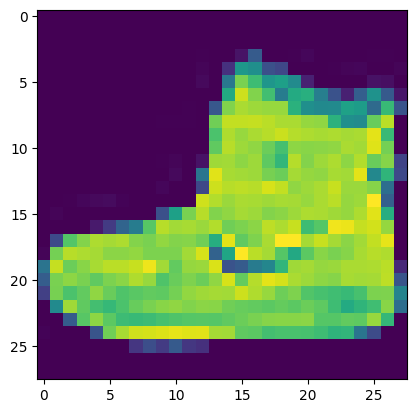

In [39]:
import matplotlib.pyplot as plt
images, label = train_data[0]
print(f"image shape:{image.shape}")
plt.imshow(image.squeeze())

plt.imshow(image.squeeze(), cmap="gray")

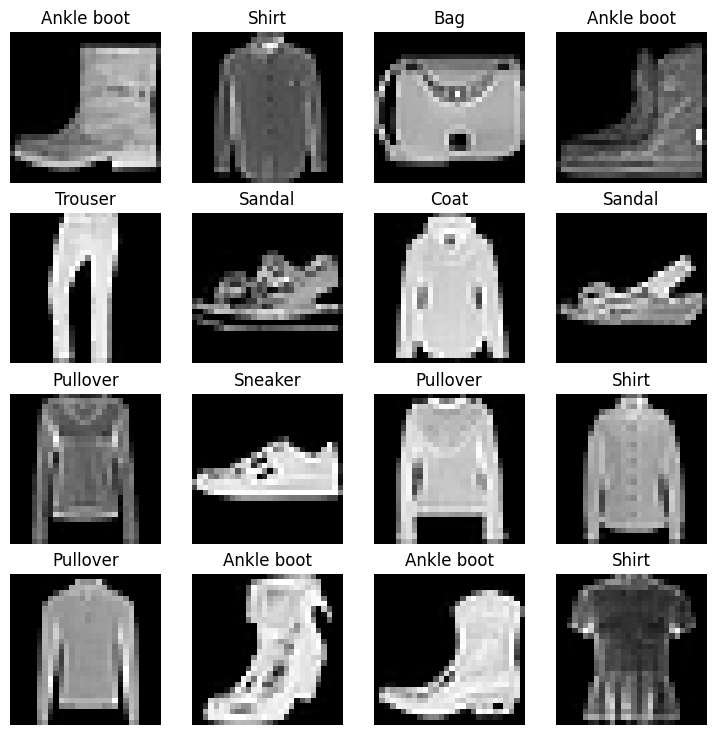

In [52]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"{class_names[label]}")
    plt.axis(False)

these items of clothing(images) could be modelled with pure linear lines?or with non linearity ?

In [53]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## Prepare DataLoader
Right now , our data is in the form of pytorch datasets,

`DataLoader` turns our dataset into a python iterable.

More specifically, we want to turn our data into batches(or mini-batches)

**Why would we do this?**
1. it is more computationally effient, as in, your computing hardware may not be able to store 60000 images in memory in one time. so we break it down to 32 images at a time (batch size of 32 can be changed)
2. it gives our neural network more chances to update gradients per epoch.

for more mini-batches: [click here](https://www.youtube.com/watch?v=4qJaSmvhxi8)

## Turning our datasets into Dataloaders


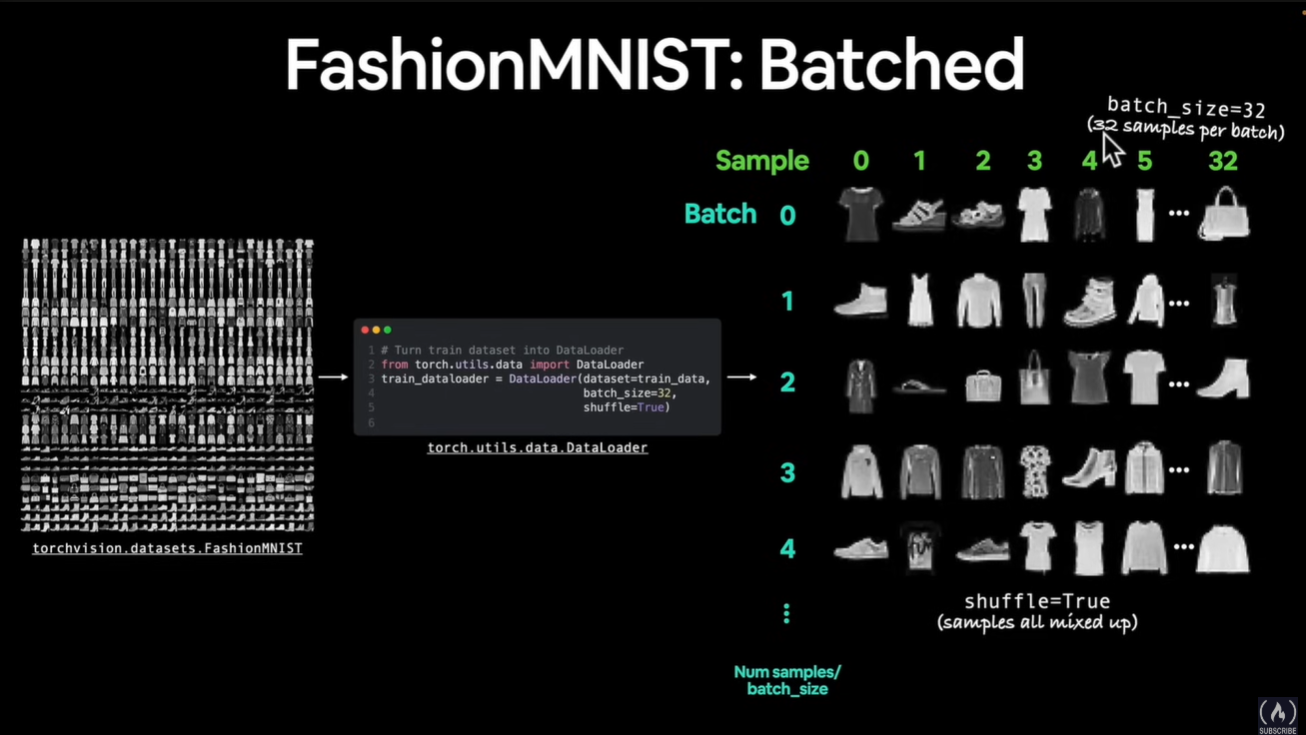

In [55]:
%%html
<img
width=725,
height=375,
src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABRoAAALfCAIAAACBxen1AAAACXBIWXMAAA7EAAAOxAGVKw4bAAAAEXRFWHRTb2Z0d2FyZQBTbmlwYXN0ZV0Xzt0AACAASURBVHic7J33d1TXtfjPnd5Ho5E06g0V1JCQBAKEEEgCgXHBBWPcY8dxnpO1kvePvLVekud8ncSJS+zYuGJ6MUYCRBEICYR6712aGZXp9/vDzuwc3TsSQkiA7fNZXng0c8u5p93dzj5cUJCREMJxHPFDf178SwaDwWAwGAwGg8FgMH6eSB52ARgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgMBgMBoPBYDAYDAaDwWAwGIwfBWz7KwaDwWAwGHdBsF8mz/MPqyQMBoPBYKwyXEA1meM4nuclnMTHc4QQwvGEcLIHXTYGg8FgMBgMBoPBYDAeXQTqNE8I4Xkfx0l5whHCE6mUcBzheaZOMxgMBoPBYDAYDAaDQUBZXuAnKU84wns54uN8HkKIhCNMnWYwGAwGg3EPsEhvBoPBYPw0AZ80xxPiA6UavuAJAV80kUqI16dVkbTkmNiIkBmbjanTDAaDwWAw7gJToRkMBoPxE4ejP/CEEML/exW199/f8oTjOUIyUmJ2Fq4L00u9bjdTpxkMBoPBYDAYDAaDwRDC+f8DozIn4WVSEhqkCtN4fBMdBrWaqdMMBoPBYDAYDAaDwfh5w9Ox3QvgI8RH5mZdLo80SB8m4Yj0ARWOwWAwGAwGg8FgMBiMRxLwQkvmadMc9x8VmyOE5zhCfPyszSrxumUSaW//GNt3msFgMBgMBoPBYDAYP184arNpH6VRo4LNE45wHCGE430KQnQKopER3htof2oGg8FgMBgMBoPBYDB+JvjVachCxvvwW55QDmq/Qs0TCZFAsm8W7M1gMBgMBoPBYDAYjJ87/ALrpv/jrOb+fQxPCM9JfIRn3mkGg8FgMBgMBoPBYDACATo0IYTeippICJEQwoK9GQwGg8FgMBgMBoPBQP69NRbn/wP/D/tR8/SBDAaDwWAwGAwGg8Fg/HxBxdjvg+aEG2dxHCGgS/sk/p/Z2mkGg8FgMBgMBoPBYPx8obVnjhBCJPPVaVxV/e8vMeO35OGUl8FgMBgMBoPBYDAYjEcJUfA2T/6Tb4wnBHJ+S3jCgYbNvNMMBoPBYDAYDAaDwWDQ8Aun+uYg5pup0wwGg8FgMBgMBoPBYBBClpxbzB8dzoK9GQwGg8FgMBgMBoPBIIQspFHT3/7Ha80yezMYDAaDwWAwGAwGgwHMT+j9nzxlAcK/ZQ+4aAwGg8FgMBgMBoPBYDw60BtM84Tw8zRq+t9/f49Zv1mwN4PBYDAYDAaDwWAwftbA3ldSWkP+TyS30CkNB0tYKjIGg8FgMBgMBoPBYPyc4Sjd2a868wssjGbB3gzGIwPHzRumPB8wFz+DwWAwGAwGg8FYRXjxXwEEc17wiXmnGYyHhkCXZjAYDAaDwWAwGA8R5tpiMBgMBoPBYDAYDAZj1WHOMQaD8UjAcRzGunMcJ5FIaO89z/PwK35Y7cLQt17t2zEYjFWFnl4YPwo4jgsYwPVgXgE/DSQSiUQiIYT4fD74QAjhed7n87E6ZDBWEKZOMxgPBybeLQSIUPAvz/McBSEE5IBVkqjwRqjMe71eJnkwfqTgIHrYBVkQepiT1SkqqmSPcj0wBMAkTAIp1TzPe71e1ppLQSqVgqRB1yG+Sb1e78MrGoPxk4KlImMwGI8K+OKXyWRgVuc4DrRZFKrcbrfH41klWQov6/P56G8efbWEwRDojWgVQnvQI9iBYVzjcFsNQCtjmsOPC+irUqkUFEL6e3C0glK9qj3nxw68SWUyGaEsVoQQn8/HcZzb7YbKfKhlZDB+IjDvNIOximCoFQ39VuN5XnDAUvKT+Xw+VDIfQRF5eeCD6/X6bdu27d27V6/Xu1wumUzGcZzH43G5XP39/d99992dO3fcbvdqPDvHcQqFwmKxxMXFBQcH+3y+oaGh/v7+8fFxl8v1k6nq+0Qcio+sdhjhUm69kFZJRCEhK1XagMMcr09EeixGQAS8GsZf3NPdacOT+Bi6Tu76yIsXb2WBe62eaoTXJ4t2niUCtfcj0kAWipcmj3DINBRYqVTu3r27tLRUr9fjT6BId3R0fPXVV62traAQPrySPrpIpVKfzxccHPzcc8/l5+crlUpQoWUymdvtlkql9fX1H3744cjICKFsxwwGY9kw7zSD8YAQBzQGlHWWKB/QYuJPAKwHiUSiUqnS09OfffbZkJAQQkWmud3uW7du1dTUNDY2gndiZQvAcZxGoykoKDh48GBBQYFGoyGEDA8Pnz9//l//+ldTU5PX6+U4jrm5EIHyhgL6KvVM0IXEV8YyBAwiCFhCYEV0aUG4Mt4I/pRIJAJpFUd9QNWXnhzoyAjxr4IraDQas9kcGhoaHBysVquhrjwez8zMzOjo6MjIyNTUlMPhgMIsEm0hNkYsq1aWyuot3MDrE0JwuoB73dNDCToM+VFFjy9UwnuthAcJDBmFQrFx48bnn3/ebDajccfj8UgkkitXrly6dKmrq4u2wrAAIhqoDYVCsXnz5meeeUar1eK04/V6JRLJ999/f/z48YmJidUegAzGzwSmTjMYKw+8t7RabWpqakpKCliFnU4n+JEW9yrfVcrhed7lcrW1tTU0NLhcrpUv/cMAZXcwovM8Pzc3B9K/VCqFA9x+VinYW6PRFBcX//73vy8sLFQqlSDVRUdHJyUlRURE/PGPf6ytrYWmfJSjZ1cV8N7HxsZmZGRoNBqwLxBCoI2cTmdvb29LS4vNZltxKQ3GjsFgSE1NjY6OJvNNMISQwcHBO3fujI2N0aomx3Hh4eHZ2dkmkwkdxdDH7HZ7e3t7T0+P0+kky2pK6KhyuTwxMTE1NVWr1WJcMfRbh8PR2NjY3t7udrvpIqnV6vj4+JSUFI1GA4Xh/Msc3G53Y2Nja2srlCpgwTiOgyBYQohOp0tMTMzLy1u3bl18fHxUVJTFYlGr1Sg622y2gYGB/v7+lpaW6urq+vr6oaEhp9OJjlb6+lAMnU6XkZERExMjlUrv05171wqERnE6na2trW1tbQ6HI+Aj3+ddeJ5XKpUZGRmxsbFQdUv3vbvdbofD4XQ6p6enJycnrVbr9PQ0TLyw+vSRta9xHKfVahUKBT4svnfcbvfs7KzH4yGP6iQGE77X64WxgyEMCoUCvl/tQJgfNfh6gnclTCZQhzA1OZ1OmL2Za5rBWBGYOs1grDwggBoMhp07d7711lsSiUQul5MVsqDzPD8+Pn7o0KHu7u6fjDpNA/Ujl8uVSqXX6wW1AfOmLBK+uGzA+xEXF/fEE09s2LBBIpFAMDmIGgaDobS0tLOzs6enZ2xsbGVv/SMCakmj0eTn5//Xf/1XUlKSx+ORSqUg2kqlUrfbfeHChXfffbe2thaiCVbw1oQQiUSSmZn529/+tqCgAFZJYGdwu90VFRV//OMfp6ampFKpx+Px+XwymYzn+TVr1rzzzjs5OTnwDSHE6XRyHDc7O/v111+///773d3dyx6YoBsXFha+/fbbERERHo8H1yZIpdKxsbG///3vw8PDk5OTeDzHcTqdbteuXa+88orZbCbU4l6pVDo+Pv7BBx8MDQ2BHCxW1bCoGo0mNTW1pKRkx44d6enpISEhCoWCUAHJ0F5GozEmJobjuJmZmb6+vtra2tOnT1dUVPT390MdCgwfHMdFRka++OKLe/bsUalUaMwid7P0LRI1sAgg3I+Pj3/66acff/zx4ODgylph0FQREhLywgsvPPHEE0qlEuwRi5ScPh10NrfbPTc3NzU11draev369dra2o6ODqvVCuc+mnqdRCLJzs4uLCzU6XQ4UiBeemho6Ny5c21tbY+sRg1tJJFIYEChvQmtIYLe9Qg+wkNHIpHAynOoQ1xwDguqH8xqDgbjZwJTpxmMlQfkVHCmxcXF0aLbilxcKpXq9Xo6R8tPQ5jg/IsbaZmJdjauxmNiXFxCQsL69et1Op3X65XL5SDoQ3S3yWTKycmxWCw/c3UaGkir1ZrN5vDwcCJSmXier6ura21ttdlsEolkpRx3cOuIiIjt27cXFBTExMTQt4ZYBqPRiEl3aJeLQqEIDg6OiooilC4KHWnPnj3g0J6bmyP3PohQyTcYDBaLJTIyEsYm8UcF+3w+lUpFVxF8lslkJpMpMjIyLCwMv4RTZDIZDm1BeUD8BQUjMjKyvLz8wIED+fn5Wq1WECsBYjShnFRQkpSUlKSkpMLCwtOnT3/xxRfXrl2jmwnuCOcGBQXFxsYqlcp7qpBlgLYzvV6/GvI9dgaZTBYcHBwdHa1Wq8l9BLEXFhY+99xz3d3d165dO336dFVV1djYGCRWeHSCZqH/QKzvb3/7W4vFQvyP7PF45HJ5Y2Njf39/Z2fnCtq8VhzacspR2z2sXrjETww6pB8rk9Ueg7EaMHWawVh50Jru8/lA0gLvNApbS1+6JnbGgp8W/G94tRUt/sNH4C2k9YRVuqNUKlWr1RAli2oSFgO8siqVCov306vzu4LaAnrkMMWuVCoFv4fFYikuLr5y5cq1a9eg3lYkmBCCddPT04uLi8PCwsC9jOYkGBGYwYu+IyYJQxc68bscvV5vcnLyvn37urq6ampqIPRxeRo1Pd7ROQxOcsiWhFu/QhnAfQ1lBqc0VhQGYC/k7JXJZOnp6S+++OIzzzwTGxsLl8LHDOhGRhc0XDkyMvKFF15ITU398MMPjx8/PjY2RifPhwfxeDxQyQJ95q7NJC7w4sdDF3K73S6Xa1WjplHdBQWSnkkCNjrtridUXLpUKtVqtRkZGcnJyUVFRUeOHPnmm29u3749PT29yNUePJwo75pgWoMRsVIjdGURv/UCQmfQeESq/ZECpxGBIo3D/JGyATEYP2qYOs1grBYgOisUCp7nwW8W8BhabqBfbBjeRr8R0X1Efh4CBEjb4u+Xbo9YIhgLRwKleQP7BS4V/jnUvBjav0EHDhB/c0BMQU5OTllZWVdX19DQELcSa/PgdlFRUSUlJVlZWXK5HHOSAZx/PxhOlLgbzkVVE7sNHCyVSouKirq7u8fGxrq6ujBw/V5LiLeAkhAqaX9AFZ0T5c2mJV1aMaYPgAJnZWX95je/eeKJJ4xGI/HHxAquLx4dOJmA+iSTyTZu3BgUFKTX67/99tvBwUFMXE838T2tMRaz0AgVjCyx4reC0ONa4oeu/4XMFnTfxu6Nwx9C8ePj4998883k5OSPPvrowoULU1NTYOV86PMDmnXgT+g8EmrDMPzz0dGlBSMloClnKT2KIQYtegI7BdOlGYyVgq2dYDBWHvotRUtXgreX4E3Gz0cgEuG5tMonvshPg4APtUoCN+ByuUZHR8fHx2n3IL0b2ejoqNVqXb0C/CjgqY2CoIpweR7xN5DZbC4sLMzMzEQV7n7uCKerVKp169YVFhYGBQXR16RzLOGHhXQzgWoNH0wm086dO0tKSoKCgvDX+4EepEskoMpNe0ehYFKpdO3ata+//vqePXv0ej3vd7bj8bw/agCdvbT3SeLfTAs0Q57nU1NTX3/99fLy8uDgYLAviMuwlAdBt3bA08Wz3CJ/rgY4Ty5xj6uAhgzBNzKZTC6X8zyvUqm2bdv21ltvbdu2zWAwoLq+so9wr+CoFDuo0UeNR5JHPgA4YCfBgfaTfAOuLMwMwWCsNsw7zWCsJCisoA+Ejqaj/T+YElbgBgl4QYFFGXcH+bG8DgMqDHeFrpCFTBL3D6hnHo+ns7PzwoUL6enpZrPZ7XZDDYNrq62trbKycmRk5MdS4asH6kioROGfoLHI5fKMjIwdO3Y0NDRAvqv7uR0MopiYmOLi4uTk5IWiPATHo0FkEbsMaNRyuTw1NXX//v0DAwMVFRWY8vp+ynyvXRQrE4snUIFA5wkPD3/qqaf27t0bHByMKjF9R57anYtQMfk8lbYNHebwZ1pa2quvvjoxMXHy5MmZmRlUUXBFiaAk4sKL7Sn0c4ldtYLKocPjl15jS2cpbSEop+AUfDT01WOVQoYFlUpVWFg4Ozs7Ojp67do1l8u1vOluZRGbdejWkVA7sa9UvPcKPnVA6wwN9u0Vud3PgUfcYsJg/Nhh6jSDsVoE1JO5+as9JaL9k/FPweo+1Fswx/WyPWkr7tZeyqt6RW56VzFreUCpRkdHjx07FhER8fjjj4eEhICs7Ha7u7q6vvzyywsXLszOzq6IyEhHFtAWltUQwekC413onrnsy+IVBLYen88XFBS0ZcuWa9euTUxMzM7OLuNGdP2o1erc3NytW7cGBQXR399/T4DRJ5fLs7Oz9+7d293d3dra+tDlTkHdon8+Ly+vtLQUNmNHvzS2L8/zbrfbarV2dHT09PQ4HA65XG42mxMSEiIiIiBHN16NfsaMjIzHH3+8ra3t9u3b8A0oinK5PKDLOmBpBX2M/lWsnYptBxwVSr3iLNL3oIZ9Pp/T6QS/PX0K/glLCXBJPOdfew/WUvBUFxQUlJeX9/b2dnV13X+Z73+EkkDTstj+slLWSUG/WtlrLr0TiqdWstKz6+rN1fdaDEFJFu/nC02YD/1BGIyfBkydZjBWEhRt8XWO+8rCASCKWa3W6urq/v5+EItxASG5m0QC6src3NydO3ccDodAQVrk1UgfsEpvUJ5aoMj79/iBZ7/POwZcjriyT+H1eqenp+vq6v7nf/6ntra2pKQkIiIC9vf+/vvvz507Nz4+vgydUKBq0vVPe4fIanpaxD2KFjSXUY3is9DhiXvbpKWllZWVNTY2trS0EP+KzXstM8/zMpksKSlp586dqampAtPAQh5RlB0DHiC4BWhHZrN5586dHR0dExMTIyMjyyjw/SAYIwJNAH6KiYnZuXNnVlYWpgrHYyDf4eDg4IULF86cOQM7S7tcLolEEhQUlJKSUlxcvGvXrqSkJLVajcnYsHI0Gs2mTZsKCwu7u7thQ6/p6enm5ubLly/jlsUCpQsrGW4RGxur1+sJZeCDXycnJ7u7uyFHl1ijJn6rolQqtdlsvb29kLZt9SpZ8A0Oxra2tnPnzg0NDUF4PK3h8zyv0+mio6MTEhJiYmJMJhPvTyaHR8JTWyyW0tLSq1ev9vf3Qxa3e3oWjoL4M9Ldj30h4Ln0VLAaQeniaYET2VOWR8DmE3yJKffuSdW8V8TPuMivjyy0QPJjKTOD8SjD1GkGY+XhqWW3gp/A4Tk2Nvb555+fPn3a7XZjrN0i8g0tFoCYNTMzg7lkl1gkXDy5rGdaKoK4zfuUpWizuthksLKiAMdxHo+no6Ojt7f3yJEjGo2G53m73W632yGA815vJ9aLyPymhM/Lyym9FO4qzi5bl6YNRrwoVpnneaPRWFBQcOnSpe7uboicX/q96OXNBoMhPz9/48aNKpWKtk/RoRli9VIw9O6qNvA8Hx0dvXv37ubm5oqKirm5uQeWUEpQNoHtA/5UKBQpKSmZmZkajYZQ3R6Tgbe3t3/88cdHjhwBvzSmKrTb7QMDA7du3bp+/fpLL71UVFRkNBrRbMf7950OCwvLy8urrKycnJzkeX54ePhvf/vbZ599RtePoKhwukwm27p1629+85vs7GxBdfE8X1dX94c//OH27duCcGJ6UBNC4Fe73W61Wh98+C7HcaOjo6dOnYI4bUwRT/zPC1uXRUREFBQUPP7447m5uRglgVeAD3FxcVlZWVevXh0aGrrXziMYpNyiydLu6ekEH+ifxDPqshEUnoishysIPdsIbofGCMHBgmG1IkUSXPOefr3/+y77xYp9e8WNKQzGzxmmTjMYqwK+rmhREuVgj8czPT09MjLicrkeQEnwM2YFR1Dzv0+ll+M4TK2Msj7v338bJdT7kQAAgYBIu4nAm4Tiwj09F0pdXq/X5XLNzMzgT2iGWF7hBfVPyzG04rca+ptYcqLVe/qwFRSpUU9LSkoqLS2tqalpb2+HXaOWeB30y3Ecl5iYuHPnzoSEBEKlTVpZQRC70Pr1659//vn+/v76+nrJym2afde70z0ZvhQ0h8FgyMrKSkxMhCHGUQHeHMd1dnZ++OGHn3766eDgIB0bAtXodrsHBga+++678fFxjuNKS0vBv42j0uv1KhSK9PT0tLS0lpaWubk5j8czOjoKXvrFkclkqampkOZaUHKe5+fm5oaHhzs6Ou6pKsRd9P71yYUUHp9/S2rQ5x0OB20nQiYnJ3t7e2/evFlVVfXLX/7yqaeeMpvNhFLh4PigoKDExESz2TwyMrL04YytTxaIZ1mKrW0Z9ji6npd4l7sik8nQRQwfBPWwUlMNCTT/408Sao/DFVyWT7cUfkPP3oInXZGbigsAwKscxi/nT19/ry8RPHE1Sstg/Kxg6jSDsYoEfJHD0kSFQiGTySDZjyAnGYIygVhWgDjJRYRFTFOMKhwtZNNKqThZ2j3Bzc8fi54xjgoAVigUxJ99bXl7ESGos9HZleB71H9wRxwUp5ZyRzgYdnuiXUO00rv0ktMlJPN9Nbx/yyKBaeNehaGAmagFQhVHpbMWXF8yf7upe1UA6D/5+QGWEonE4/Eolcq8vLwtW7YMDw/b7faly+to2ggLC9u2bVt+fr5SqaTVzqVcBMEKX+R2MAT0ev3mzZvv3LkzMjIyODi4IgrG4ghUKUGRiH8cBQcHx8XFwc5YeADUs8PhuHz58rlz5yYmJgiV4BDAnubz+Wpra7/44ovw8PB169YJho/b7Q4NDU1MTNTr9ZCMbaGuJSiATCbDgHD8EseLUqlUKpWQg4BQ/Y2+Gj8f+vFpdXp5xqYlWl7gyjDw6dmJ89tDAa/XW1dX9+GHH4aGhu7cuVOtVtM3gjijmJiYkJAQsX1kkeLR0BUCx+B0GlDPp+9CVxp8EO9zRg8iegoSX/leJwScZ/Ap4PWEgfHY3Pej33LzbQ2Emt+gDPS+DGT+2+3+xzKOJvGsjsqtoAArgqCT4MXhuTi/IRv+FBgBlzdnMhiMe4Wp0wzGyoOvvYCJbQklHonz34gPpj9wft17ofvSp0CqM4lEotVqQ0JCDAYD5vtxOBxWq9Vqtc7NzYEAfT+vf5RHlUqlyWTS6/VKpRIWajocDpvNNj4+DnmDUQIglDwU8DEFzyX+E0+USqUGgyE4OFir1apUKkLI3Nyc1WodHx+fm5sD/z+3ZGU4oFCCMtM9eSxB/JLL5VqtVq/X63Q6tVoNrjC32w2FnJiYgFhoOpH4UsoZ8IkEFYjHcBynUqkMBkNQUJBWq5XJZG63e3p6enx8HDbLFbfFUlhIXQF9zOfzRUVFFRcX19bWgr9XoOcLbkqXFgTxNWvWFBYWRkRECH6lPwR8fBJIi17k0eB2Pp8vIiLisccea2lpOX78+Ap6p5eu1AnOgqeA/iMObeA4bnh4uLa2tre3d6ElA1gPMzMzV65cyc3NTUxMDA4Ohk5ot9tHRkaampru3Llz6dKl6elp1D3EOg99cVTbFuquUBjo2zBriQV9ujUDZhCglYflscjAp6cdKKFAEUKlBWdpqVTa2tpaVVW1fv36uLg42tAGrWM0GnU63V0nCnrOB3VIr9fr9XqtVqtWq5VKJSEEZs7JycmZmRm32w2GV2xiesjgdbDkcHe32y0w1OIAhPX24kYRV4645IKf6L4tkUh0Oh3sZw7Z7DiOm56ettlskJVweabJhUD9mRCiUCiMRmNQUJDBYJDL5TjB2my22dlZ2A+cBHrp3PUWgiPhrapQKPR6vclk0mg08JiEEJfLNTk5OTk56XA4cIWLYNTck4VC0BXhvgaDISQkRKvVwuNDP5mYmHA4HNBR8SzaurGUmzIYjGXD1GkGYxURiDv4GVnKFQRKwuLHg4+F4zilUhkVFZWampqTk7NmzRqLxQLqHCHE5/PNzs5OTU2NjY21tbVVVVW1tLSAWrV07zF6HuRyeVBQUHx8fFZWVnZ2dkREhNFoBI2a53mQaYaHh9vb2+vq6urr60dHR+HFD9G/Yhmd/hPVQvwJ3REqlSo0NDQtLW3Dhg0pKSkWiwVkOJ7nHQ7HxMQERO1WV1e3tbXZ7XZ4LhSqxM8ol8tDQ0MjIiLQs41xs9PT0wMDAwFdrPQ3IBmDEKNUKsPDw6H+U1JSjEajwWDQaDQKhYLneafTabfbR0dHe3t7Gxsbb9++3dvba7PZQLNdvAmgBrRaLVQ13bWgqIODg3Nzc8RvaFizZk1eXl5WVlZERERwcLBOpyOEOByOmZmZ0dHRtra2mpqa2tra4eFhkL9RXhcLgnSLLN43CCESiUSv12/cuHHHjh2Dg4Ojo6PEL+gHtKGgpAuEhoYWFRXl5+dDjQn0hyWySO/CzkD7aWUyWVZW1vPPPz8wMFBbW0tXyINE8LBGo9FsNstkMrEqYrVaobkXMm0QSiEcGBj4/vvvo6KiIiIi+vr62tvbGxsb29vbR0ZGJiYmZmZm7t+CANWIW17j4wTU8wXfgItPKpUGBwfHxsaGhYWpVKrp6en+/v6BgQEYHffqaRSPVoGlidZOxc8iKL9EIrFarU1NTYODg7GxsejaxX8hB7jYsS+4rEwmk0qlMpnMbDYnJiZmZWWlp6dbLBawCUIsz9zc3NTU1MTERF9fX21tbW1t7cDAwNzcHJ2wjff7S8HmEhUVZTAYOL/b2ev1ms1meokE53euKhSKNWvWTE5O0hYu/CyVSqempnp6emZmZsDMFFCFhif1+Xw6nS48PDwtLS03NzcpKclkMul0OpVKpVAofD4fGA0nJiZu3bpVV1fX0dEBOw6CQUc8D5AFOoygEaHyNRpNcHBwVlbWxo0bk5KSQkNDjUajXC73er0Oh2NqagrfAu3t7TabzeVyoUq/lF6E7Q6ufo1GExYWlpKSkpOTk5SUBC8dMKCAAj82NjY4ONjd3X379u2GhobR0VHYcM7tdpN7V2vhMWUymU6ni4iIyMnJycrKioyMDA8PN5lM0DTwhh0aGmpoaLhy5UpnZ+fk5CQsWVr8oRgMtlFQqwAAIABJREFUxgrC1GkGY7WgNUDBl0tXp5f45uP97h1CiEKhiI2N3bp16xNPPJGRkREWFqbVasUXBNv2zMxMV1fXpUuXjh8/XldXNzw8vJQYP9RpDQZDdnb2rl27tm/fnpCQANKbQNoDwWVubq6vr6+mpubkyZMXLlwYGBgI6AcWF5L+E8QamUwWEhKSn5+/d+/eLVu2xMfHg1NacJbX652ammpoaDhz5syJEyfq6+vdbje3cDI2rVa7e/fuX/7ylxqNhqN27uF5vq2t7U9/+tPZs2fR7xTQ6g9Pqlar16xZU1RUVFxcnJOTYzabIe+xuISEEJfLBUaNq1evnj9//ubNmyMjI1hp4oZAUTI5OfnXv/51YWGhx+PBpne5XNXV1e+99159fb1KpUpLSysvLy8rK0tPTzcajbBps0BVg3a5du3at99+e+HCBUhGtfR1zgIE6qtEIomKiioqKrp69SqkRg8oxXLzHZU+n0+lUmVkZJSWlkZFRaEmQOsti+jVUG9LUbxBGQB3E/HXrVarLSoqam9vHxwchNz7y66N5ZVKfCJsxSRQmLGT0yNIYNzBK8AHp9N5/fr18fFxj8fT19cHOfbg6VDJvCdRO+AUR+bbv7C9Al6ZniJ4npfL5SkpKU8++WR5eXlUVJREIoH+eeTIkWPHjvX19YFGvfRZMWAhxdWIjsSAXZTumYSQ6enp6elpj8ejUCjox8Q6pLurGFjsYzKZ8vLydu/evWnTpri4OIPBgHuqC/rJ3Nzc6OhobW3tyZMnKysru7u7IVUelgp675o1a956660tW7bI5XLiNxIZDAaz2UxvQgZaaHR09O9///u5uTlxISHX+qVLl/7v//4P9k4TdyTokxzHqVSqhISEoqKi0tLS3Nxci8UCd8dqpPvVxMTEwMDAtWvXzp49e/Xq1eHhYTrxG1b1XTshvn2MRuPWrVsfe+yxzZs3x8XFgRmCUGON4ziv12uz2W7fvn3y5Mnjx4+3trZ6PB60yyx+F86/pALWKyUnJ2/btq2srCwtLc1isWg0GnjZYReCquM4zmazjY6OXrly5cyZM9euXevt7YVZeum2ObRrqNXqrKys8vLy4uLixMREQQ3THyYnJzs6OqqqquBVPjo6ys1fNEE/2mqk6mAwfs4wdZrBWF3EwsFdZYWFDgj4E4qM4PEwmUw7dux4+umnN23aFB4ejtlKQADCzxy1DUxWVlZKSsq2bdtOnjx56NChhoaG2dlZPlC0JxZDKpXK5fKYmJjdu3cfOHAgOztbo9GAZgJBpyiL+Px5mNVqdUpKSkJCwqZNm86ePfvVV19dv359amqKjhelxTVaCqcVS6VSmZSU9Mwzz+zfvz8pKQlEKJ9/G1gUHUBcCAoKKioqWrdu3fr1699///3Lly9PTU2JKxNKK5FIgoKCMjIyUPulCQ4OFjQE3gtd2Wq1OioqqqSkZN++fQUFBeApwjoRPBGcK5VKw8PDIyIiNmzYsHv37mPHjh05cqSpqQnkdRKot0BRDQZDYmLi2rVraUsKeKfNZnNISEhhYeFLL71UUlKi0+mg3T0eDzg0sFF8Pp9SqUxOTo6Li8vOzv76668PHz7c2trqcDhoLSugKhiwY9NiNIiPKpUqNzd3x44d4AUVmyFQ4MbKlMlkkZGR27Zty8zMpMVx7JOCNeeECNW5hb6n7+71eu12OwwB/AnKHBwc/Nhjj3V2dn777bdTU1NLVzIFGu/iZVs6EDYS8HYKhUKr1cJidcGAFSgz8M3IyAiECSyidd8Tdz1L3OJiYATJZLL09PQ333xz3759FosFV4+npKSkpKSEhYV98MEHnZ2dZNFJUly8pWhoi6j64gMwAog+EiYfjK9e6DGlUqlGo1m/fv3evXv37NmTnJwMMxjP8xCZIlgsTQhRKpUxMTFRUVEFBQUVFRVfffXVpUuXYJEIrZ6p1eqYmJjU1FTYkgCLh+WhJ1WVShUbGxuwZ8IxPT09kLCAtjLQQ1WhUFgslsLCwv3792/evDk4OBheKISyTeApYLEymUzBwcFpaWnbt28/duwYvmsgLpqIglYWsUdwHBcfH79///5nnnlmzZo1WIf4sFCNbrcb3onbtm1bv359fn7+P/7xj6qqKoifX1yjhrvD7ushISHbtm07cODAxo0bwTwBzwhKMh1iDdOmTqczGAyxsbElJSVnzpz5+uuvr127NjU1xS9tRTosCFKr1ZGRkbt27dq/f39+fr5KpYIRgW9YXKcNn41GY25ublZW1rZt2w4dOvTll1/Cev7F78VgMFYEpk4zGI8WKPHQ3wh0MPHBoEvHxsY+88wzr7zySkJCAiEEJGyOSkZF/HKGz5+QDGQ4juNSUlKioqJiY2M/+uijysrK2dlZboF12hKJRKlUJiYmvvbaa88991xkZCQKFhBhyPnjDzlqU2XO7xaOioo6ePBgSkrKX/7yl5MnT0IY9kJCBi0NS/z7u27atOnll18OCwvz+XxOpxPuC2HecBb6G0GVValUJSUlZrP5//2//3f06FHwyQRU4L1er9PphLWL9N1dLpfT6QxY+cQvTGu12vz8/IMHD+7ZsyckJATyzJH5CcNodQtFTxSjU1NTw8PDMzMzDx06dOrUqampqYCLG0EmA/UYwgjR7QzfGwyG0tLSX/3qV+vXr1coFCBUoQIAvQWeFwRTKGdycvKrr75qMpk++OCDpqYm6D8SaitXcevQQAv6fD5MgIQae0hISFFR0aVLl8bGxmiZnm5xurfI5fKsrKwdO3aYzWYog8SfVY74VS+BRYOuW4FOK1ADsOZnZ2evXbvmdDq3bdtmMBiwrUEriI+P3717d2tr69WrV1FsXbwGaGjrybLVabyC0+l0OBwBbxEZGZmdnX3x4sXp6Wmx7hfQCAINBINueQVbBgIDSsDKNJvN5eXlu3fvDgkJAUUID4uIiNi3b19nZ+fY2JjNZiOi1cJLRFwbd20dselHp9NBRLFgliaE0MkIBGWDg4OCgoqLi3/xi18UFhZC0BBqRxJ/qjZBd8XuFxIS8sQTT8THx4eFhR0/fryvrw/PhbkLFGxMJgf/ghsZLiWZn2GRXvlCq9+QWwFfH/QzQqNAKvj9+/c/+eSTiYmJcrkc5zpCCDYc1gCm6YJvYmNjX3nlldTU1H/84x/nzp2D3c7xBYFnLdQ0brc7IiJi7969zzzzTFhYGL59iH8bebw7WpC9Xq9Go9m7dy80XGVlJdpVF0cikaxZs+bll19++umn4+LioH58/qQk4tc0oeZhnuctFstzzz2Xnp7+wQcfHD58eHh4+K53hEdQq9Xp6ekvvfTSM888A29YbC88Bj7gK57neQgpz8rKslgsZrP5yJEjYssjg8FYDZg6zWCsPItY1u/pImQJvh14lcrl8rVr177++uv79u2Ljo6GqDPil1xpsQkvi44+FEz1ev3evXvNZjPP86BRS+ZvGItiX3R09Msvv/zqq6/CFqycfyUbXhmUQFCucDkxSGPgEd28eTOkRvvuu+9APiYLyE+0Om0wGHbu3LlhwwaLxQJiH67SpL3utDKPZc7Ly/vVr341MzPzww8/OBwOcQJkqA3MoEPXFYgvAiWNFhYNBkNRUdE777xTWFiI3iHUKsVtiufSYpnP5zOZTLt27YqNjTWbzYcOHRoZGRE0AVYI6pawXBOu6XK5ZDLZunXrtm7dunnzZkIlixKomrTqBd42n88XExPz/PPPezye9957r6OjgwtkxAmogUBhIC5XoVDEx8fz/uzQPM/L5fKMjIySkpKWlpaBgQEJlZMsYPeOjIwsLS3NzMwUhL/Ozs4ODAzodLqoqCiBKi7+M2CUI11gjuNGRkauX79uNBq3bNlC/F4vqFK9Xl9UVNTb2zs0NARVsSIZ6cUPuzjwCDabzWaz0R0SLxUUFLR9+/aWlpbDhw+j25muXoFqDbrHsjX8FUGgCeNzJSYmFhUVRUVFQYfk/RY0juM8Hk9UVNSGDRuqqqpsNhuOiGVo1AhHuV4D/kTmT8LQmfV6fWJioslkoh8HjnE4HLAwWDxgoWuZzeann3769ddfX7duHaxPIYGGALocce4C/Q302Pz8/KCgIJ1O9+mnnw4MDNAzCUx9uMZePP/QFS4w8+EsAd/TWcHpASuRSFQqVV5e3q9//evy8nKj0QjXhwhkwV0IlX1aMPPodLqysjLIW3n8+PGRkRHcqILMf1UJapLjOIPBcODAAYgtx6AksdmRvinYeaVSaUlJCSHE7XbD9vKLDGqO42Qy2fr162FrNKPRiLZCbDIca9gHOMp4DV8qFIq8vDxYGP/JJ5/09/cvEmoOVa1QKHJzc3/zm99ADePbnK5b1K7xMXmeh3wlPp/PYrH86le/0ul0Op1OYBOh73U/w4fBYNAwdZrBeNAEVEjoXxf6EBCJRKJQKGJiYg4ePPjSSy/pdDqBLo0CGS1eoEQl+Fcqla5fv/61116zWq3V1dXou8bXP6xYKysr279/PzgP0fuBMhDGK4IWSjsVUeP1+Xxr16598803Jycnz549Cx4VcRXRSpFEIomPj4c1cj6fD3QtLDaKNRDSTAs0nD+hC2SZguQ0tL+RFuMCNgfKK/SRWMKgoKCSkpK33357y5Yt4PdDfZ4W2QNenJaTsIoyMjLeeecdqVT6+eefw2bC9Ok8ZR8h85VJuVyenJxsNpujoqLwJ7ESxVFr6lBKBpHUbDY//vjjPT09//rXv8bHx+/JK+twOG7fvu3xeGC5Pl6ZEAIO6qtXr46OjtL5hwTwPK/RaHJycgoLC6En0+Xs6em5ceNGRkZGZGQkiLZ3LdIiNwIaGhqUSmV0dDS4nrB+CCHBwcFlZWXt7e2HDh2amJjAOPkl1sY9sUg5OY6zWq39/f2zs7MQt0/8QxvGdWpq6htvvKFQKE6cOAHZqsj82YPuOYvf7oHBU6484i+t0Wg0mUwwY6ABCzu5VCoNCwsLCgoid5sS7xV6tsF4WvonembLyckpKSmxWCw8ZaICrWxqaqqzs1Mwajh/YjC9Xr9nz5433ngjKysLnYo4q/D+jRjom+JaXHoUeDye2NjYAwcOjI6OfvfddxMTE/T0SxfbR+3fLq40nlqJgwWGYBlI5YUFo+dtmUyWnZ39zjvvlJaWqtVqHKECTZijFrkIphrer4J6vd7s7Oy3337b7XYfOXKEXlWxUPvCpdauXbt27Vq4BR1rjY9Mdxs6LAseasOGDc8+++zg4ODt27cDKuH4CktLS3v77bcfe+wxg8FAqNRrWNX4aPgvPj5+CTbf6OhoeNJPPvlEPKXTd5dKpZmZmW+99VZ5eTksoaJd0MQ/dvAVQMd7w4tPIpF4PB61Wv3ss8+6XC6IEhdU6cqOIAaDwdRpBuNBQ7tMUZq5pyvwlC0cXKPl5eX79+8PCgoCny3xizUYsAcZWaxWK8/zarXaYDCAwoNyElxZoVBIpdKtW7fC1ru4UhF+5ThOqVSmpaXt27cvISGB53k6xJr372s9Pj4O6bvBn2yxWFQqFQhetMcDlko+/fTTra2tbW1t/HyfFREtbwbHCO+PKKZDcMVan1hTlcvlBoOhsLCwubl5aGgIHL8LZZnCmllEwoNb6HS6zZs3v/HGGwUFBSD7wn0xDhMFU7rtJNTm4bQ7HQ0BCQkJr7/+usvl+uyzzyB8VHx31AHwM8dxYWFhYWFhcIyPQiDyYhMIzBw8z8fGxu7Zs+f27dsXL16klTe6BmhZED9zHDcxMdHc3Az5zOmOKpPJ0tLSysrK7ty509XVRcu7tOgplUoTExPLysqSk5OJ374AkZx2u/3GjRuNjY2ZmZkBtUGBLoEPJS4nPpHP5xseHj5x4kRiYuL+/fthzbyESi+0Zs2affv2dXR0nDt3zuFwLE8LpWv+XoEyT0xMQO73tWvXCg6QSCRqtTo7O9tsNm/YsOHMmTO1tbVDQ0N2ux3MFpwf3h/BsbynWHHo8YX6M5nfnwml3uDgktzfTsLis2BygNUZPtHifFRUdDpdZmbma6+9tnnzZo1GQ1+Q53m3211bW3vjxo2ZmRnBPAbzZH5+/vPPP5+WlibxA7/i8OR5HvYUdDgcSqXSYDDo9Xq6TuCa4Hxeu3btCy+80N/ff/HiRViHwvmtZrhGA0c0VrXgoeAn2tUPhaHT79OTg1QqTUlJefnll3fs2AE7t9EVhfM/PajhA0xfeDDM3nBKZmbmwYMHR0ZGKisrHQ4HdomAo4bze8KxejH0mlBvAYEtFa8DPUer1ZaVldXV1Q0ODg4NDQm6BO8PaI+JiXn11Vf37NkTFBQk8W8rDbM6jiO73T40NDQ7OwuPptfrIyIiYCcCWH5F/K8JCFB/6aWXhoaGvvvuO8jagJ2Hnifj4+NfeeWVPXv2QOoNeu7F9qLnNEIZWGHhD/Rnn88H+T7wGHFNMhiMlYKp0wzGyrO4nMdTMXUSalFrQMSx1gLdGxSVJ598EiLfMOgOX7EQgnj58uWGhoa+vj6e54OCguLi4vLy8jZs2BAaGoqvajgeBI6tW7dWVVX19/eDFoHCnE6ny83NzczMhLugJxYkuZGRkcuXL1dWVjY0NNhsNoVCASGa27dvT0tLUyqVtNuW4zitVpuXl5efn9/T0wNeNUFFCWoS5BiJP0Wq2+2emppqb28Hp5xCoQgJCUlOTg4NDQUFXuylh6QyVVVVw8PDAv2KrmeB9kgoxQ+AtgNv8P79+zdu3IieATwAV9A5nc7x8fHu7u7BwUGn0ymXy4ODgxMSEsLCwkBipmsYJV3Q8bq6us6ePQu+ZbrnkAVEIhCIcYW81+udm5sDywgsxtZqtfHx8fHx8WL3L8rukC6ooaFheHh4oc4p0FSJ3/9z586dqqqq+Pj4oKAgntpPWK/Xb9q06fLly8PDw7DQF5+a8ztejEbjpk2bNm3aBHYT/NXr9XZ2dl66dGlmZiZgYehioAKwSLFpenp6jh49Gh8fv3XrVlw2z/k9S+vWrdu7d29nZ2dLSwu/tExCK47D4WhqampqaoqLi1Or1YKn4zhOLpfHxcWFh4dv27atpaXlxo0bt2/f7urqGh0dtdvtdrsd96QVuNceLtjhQVeBJeK4iIP4TRvE7zW1Wq12u12gsN3/g8DVdDqdVqvF+2I/gZ1+w8PD8/Lydu7cmZubC75KHOkwNoeGhiorK1tbW2H9qoDw8PCysrJ169ZBlinBShyXyzU0NFRXV3f9+vX29vaZmRm1Wh0REZGdnV1QUBAfH4+NjjUmkUhyc3O3b9/e2tra19fn8/mmp6dbWlp0Oh2sVYGGtlgscXFx0KtxmBNCZmZmOjo6MDkW/RNMm42NjdPT0/QjwOT55JNPlpaW4nZc+CsGbjgcjv7+/q6uLtiuSafTxcTEREdHg61KYDSBU/Lz8x9//PG2trauri460H2hlgJ7AecP8Pb5fKOjo5CK3+VySaXSqKioNWvWhISE0Io38TurPR5PaGhoWVnZjRs3xsfHxVtYyeVyjUZTXl5eXl6OWRVo5ZzjuOHh4erq6qqqqpqaGkgLp1Kp4uLiCgoKiouLU1JStFotLuSGEerxeBITEw8cONDV1XX9+nXYsgtvCs+r0Wj27NmzZ88evV5PD3N89UN72Wy2/v5+aEFCCFZycHAwmAMk8wPg6ZZiMBirAVOnGYwHCv2CBNWXozxpgmMAgUAAaX5RINbpdAUFBevXr+eo1bN45Pj4+MmTJz/99NPr16/TS5RhM63du3e/+uqrmZmZUj/4a0JCwmOPPXb9+vWWlhbi15Q4jjObzevWrQsLC0NvM5TE7Xb39/d//PHHH3/8cU9PDx0tefLkybNnz7711ls7d+7U6/UgTUIYOSHEYrFs3rz54sWL3d3dKD0TSjWSUKmnQOz2eDwul2tqaurixYtHjx6tra0dGRkBNdVkMuXk5Ozevbu8vDw0NJQOxoMLKpXK1NTUjRs31tbW0nnFFxLKaYkfnSr4TVhY2GOPPbZ3716IQSUin9vc3Fxra+u5c+cuXLjQ2to6NTUFAp/JZIqPj9+4cWN5eXl6erpOp6O3q0Vted26dfv37+/u7m5oaCCiTcXESiNHLR33eDwzMzPNzc2nT5+uqKjo6uoC6Vmr1cbGxm7ZsuXJJ5/MyckBGweuUoYrhIeHb9q06fjx42B0WEi6pXssVmBvb++ZM2dyc3M3bNhAKAFUJpMlJyfv3Lnzzp079fX1/HyfCeff/WvXrl1JSUm4XgBuYbVaL126dPHixeTkZGzQRRRm/GlxXQvaaHZ29vLly6GhobB3LuoJ0OdNJtOePXtgN1eI413kgovcaPFfFzEBwE8dHR3nz59PS0tLSkqCEYSOR+KvPcjtDPmEZ2Zm+vr6Wltbu7q62tvbm5ubOzo6cHNpzu+sXqXY9eXR0dFx69attLQ0WJGLDQ3TndVqhbgSnBPI/UWtY53HxMS8+OKLZWVl9GyABQA1KTExMTw8XKVSCXyD4NCenJz87rvvjh07Bgun6V4NRrfs7OzCwkKDwUDHsUPlO53O6urqf/7znz/88EN/fz+9XXBISMiWLVtef/31oqIik8mETldQlY1GY0lJybVr18bGxmZnZ7u6uv785z+D2xwnq+eff/6NN94IDQ1FzzDooj09Pf/7v/+LafYINYShEux2O+xsR/zDXKVS7dix47nnnktISKAnauIfR9PT062tradOnbp8+XJHRwdsag0bNW/cuBFyXkCORjwLDKNGo7G4uPjKlSsjIyMzMzN3tVjBFVwuF8/zIyMjFRUVZ86cqa+vHx4edrlcHMeFhITk5OTs2rVrx44dERERHBUIBi8RCFnPyclpaGiwWq30HaGSCwoKXn311eTkZDrhHHRFj8dTX1//+eefHzlypKuri26vGzdunD179uTJkwcOHCgvL0dPNfE7vdVq9fbt22/fvt3X19fd3U2/JSE5eWFh4cGDB2HhCW3jIP7EomNjY9XV1adPn66tre3u7p6ZmeF5Xq1Wh4eHZ2Rk7N69e8uWLZAVHyb2gIr0o2BKYzB+YjB1msF4cKB0olKp1q1bJwgDRgTvUfpch8PR0NDQ1tZG/GpDeHh4bm6uUqn0+ZcT4wZLo6Ojhw8f/utf/9rS0uJyueDVzvsdhr29vV988cX09PTvfve7zMxMCJlDtwZEYmdnZ3d2doLqC4704OBgeNnj8SCHOZ3OysrKzz//fHh4WKVS0YGmbrf76tWrPM+rVKrdu3fTq/Igf2xQUFBYWFh3d/ddKxBDl2EToy+++KKtrQ1CBKF+pqament779y509fX9/LLL8fFxaFQjhcxGo3Z2dmhoaGTk5PcfEe0QEYX/ESvRZRIJAqFIjMzc8eOHRBjj8o2CMput9tms1VVVX3yySeVlZWTk5OwqBuuMz4+3tnZefPmzcuXLz/99NNPPPFEeHg4rVHDddRqNSwk7unpsdlsAil2od4FFTU1NVVZWfnpp59euXIF9iCFn2ZmZkZHR1taWlpbW996663t27dDAhv6vjKZLDo6OiMjo66ubm5uDquXF22fRt+U+DeaamhoqKysBAcRXfOwLnrjxo3d3d12ux2/l/j3yM3Pz1+3bh10VCgwZCpuamq6dOnS5OTk4isj6HKKtW7BZ/oRpqenL1++nJGRERISAqHymArL6/WGhITs3bu3t7cX0q1z8z2iAW0KC7XOMn6Fn6xW64ULFzIyMsxmM+T/QwUJmwDFfY7jlEplSkrK2rVr3W735OTk8PBwe3t7TU1NdXV1S0sLmJ8kCyzgfMDw/v2NhoeHKyoqsrOz8/Ly6LQLhBCHw3H16lXoA/S5i9f54jfFD9HR0c899xz9DU9FTBB/d+L9+7GjkQ6KZ7fbT5069c0333R1dQnC6eEsnU6Xnp4OSg6c6Ha7OX8U9MWLF//6179WVFTAiKBzek1PT587dw4Cg8vKyiATONrafD4fmORqampmZ2cdDkdvby9HbYKgUChA3aIfBEs1OTnZ3t4OgeKC/kyPDnwjxMTE7NixIyYmBr6nO4/D4ZidnT137txnn31WVVUFcx087NTUVE9PT2tra21t7csvv/zUU0+Fh4dzVISIRCJxOp1hYWHZ2dlVVVWzs7O4J4IYfDNCGvOOjo5Dhw5999137e3toF3DYRMTE11dXXV1dUNDQ88//3xERASEXmOBYTO8nJyc48eP22w2fIthjPT27dthF0Z6PoHBdevWrffeew+mAp7n6USbxL+1O5hN9+3bFxoails58n57blFR0YULFwYHB6Hb4y3CwsJKSkri4+PF1kCwIHd1dcFehh0dHbCZJdzXbrePjIxAWEpZWdnBgwczMjIw2pzBYDwAmDrNYDxQOH/I8dtvv42r1PAngWpNC4ugy42Ojv7pT38aGBjA6M3Z2dm6ujqtVhsZGRkSEmI0GkE7mpubu3Dhwvvvv3/79m0QfdCODjeSSqXj4+OnTp1as2YNBuOhX04ikURGRmZmZh47dgwjuiX+tdCEikIH/dZut9fX13d1dRFCUKZHMc7r9d64cePLL79cu3ZtZGSkzWYbHR0dGRlpa2u7c+fOnTt3QJemxVCBSIeSkMfj6erq+vvf//7Pf/5zbGxM4F4GSaupqemjjz7S6XSvvfaa0WikXa+EEI1GExcXFx0d3dHRIcjvTSuHAl0ahT+UiUNDQ7dv356dnY0FllArou12+4kTJ959993a2lqoeQz/5vy+wfHx8YqKir6+PpvN9sILL8TFxdGBoHDBNWvW7N69u7a29vr167gfjABaoYJy2u328+fP//nPf7506RJmr6UVsLGxsdOnT3s8Hq1Wu3nzZgm1YBWclgaDIT4+3mg0ioPwBfcllEQIxRgaGqqoqMjPzy8uLoYDsNLWrFlTVlZWW1tbW1tLmydg653S0tKYmBg61JbneavVeuXKlevXry8e6U3D+Vn8GLpxu7u7v/rqq6ioqL1799IB1TKZDBYnP/XUU93nzRErAAAgAElEQVTd3Tdu3MAYfnI3JXlF4P07/bS2tn722WcWi6W8vJzjOIhD4efHDmCMCZ4rl8vDwsIsFktWVtbu3bv7+vouXrx47Nix6urqsbEx2H33oUSwi5mbm/vhhx/UarXT6Vy/fj2sg/B4PHa7/cKFCx9++OGtW7dwWe+9XlxsOMCqw04oPgVqBnsvVDjxa7Mul6uvr+/YsWOfffbZ7du3XS4X2F9osw5809HRceXKlYSEBJPJZDKZMBqlqanpww8/PHPmDC5/INRiE7jFlStXQkNDY2JicnJycB6GmjGZTOnp6eHh4YODgz5RAmf6Twz1F8yrEHwu6AD0TAjdT61Wb9q0aePGjQaDgZ6CeH+w+pkzZ/7whz/cunULrG8ctSsyIWRqaurSpUtgxDlw4ACs6cVSyeVyo9G4YcOGs2fPDg4OwrsDTZPipgRLbl9f31/+8pevv/4asoLTDcrzvNPpbGxsfP/99/V6/dNPP202m+n5med5lUqVlJRksVj6+/tpCy8hZN26dcXFxWazGVdlE/+ypq6urn/84x/Hjx8fHx/Hhgbln/N7v71e761bt/7+979HRESUl5fDkISeA8+7du3awsLCmpoasKpgkEh2dvaWLVtgwwvin1swwLulpeUvf/nL0aNHh4eHMa8k77f78Dw/Ozvb1NTU29vb09Pzu9/9Ljc3V6vVcvODDrDdH6mwFAbjJwBTpxmMBwE/3wutVCpxlSbNQmIiqhawXw4uciaE9PT0vPvuu59//nlYWFh8fHxKSkpCQkJ4eLjP5zt8+HBLSwsdokyo1yr8Ozk5eenSpbKysvz8fIEEo1arExISLBYLnTtK4k8/I/Cjcv4dhlBjxPc9oRyA7733XmxsbEdHR0NDQ39//8TEhNVqxVzEKL6IhXvUZu12++nTp7/++uvx8XFM1kofBhrv8PDwqVOn8vPzi4qKaDECjjGbzXFxcRL/DjQLyRZcIN8X1CdEJufm5kJ0JTfffzs3N1dVVfX+++/fvHkTJWNU3fGaIN51d3d//vnnWq324MGDZrOZLqrP51MoFKmpqVlZWaBLLOSgpivc5XI1Nzd/9dVX1dXV0BbwgLTPB7Lj1NbWnj9/fu3atbCJt9S/axrHcVqtNjo6OiQkBPZKpTX2haqI92+46nK5mpqazp8/n5qaCptaoXoM/vbNmzfDWm68mslkKiwsXL9+PTiIsBu43e7m5ubKykpIGkQ3YsAmWwhuAZcy3WrNzc3Hjh1LSUnJzs6mDStQG1u3bu3s7BwZGenv74fKxEHtXXjj9CWWDZQuukhEpAFCe/3tb3+Ty+Xbtm1TKpWQK2GR+2K1Q2kVCkVSUlJMTMymTZt++OGHo0eP3rhxw2q1QhzpQ9SoUXOYmpo6fPhwe3t7cXFxUlKSSqWy2+2NjY2wVsLpdIKStgy3m6DrCrrx4s/OU0EZOJw5jrNaradPn4agXzhAPB3BStfDhw//8MMPISEhMTExKSkpycnJ0dHRRqOxoqLi+vXrTqcTZk6BHkv8Kw5qampqamqSk5NhuyYcpD6fLyIiIioqqr6+HhcSw60lVFYO2uYiuD7nX8ksCGLHngMHREZGFhYWRkZGCqoRDrhy5cpHH33U0NAAah6aPARDtaur69NPP42MjNy1a5dGo4G6mp2d7enpgfUsmBQdETcEYLVav/322xMnToyNjdEtSJ8ll8u7u7tPnjyZk5MDofKCt3BwcDDEBDmdTixqaGhocXFxfHy8dP4W1vDyPX78+KlTpyCOnX6NEsr/DNbb5ubmo0ePpqampqSk0Oqxx+PR6/WZmZkWi2ViYgIspGC+3LRpU3x8PG0jg/tKpdKenp5//vOfx44dGx8fJ6JZFytcJpO5XK7Tp09rtdr//u//xrx3ZOFZZRmWKQaDIYap0wzGqkOrcyipiOXXhUQ61KyIP180ocQmr9c7PT1ts9kgeFgmk+l0Oli11dHRAflOBAVAYA1zZ2dnXV0drr5GwQISiZnNZvA504oHXTzQBDQaTXJyMhj7USSi3T5er7evr++jjz7iOG5mZoZO2IPbRwsENTI/RysqVydOnBgaGpLJZAG3XMIVia2trTdv3szLy4MtXmk7gkajCQ8Pl8vlWAyx15cWKBGUQXU6XWpqKr2UF4vt9Xq7urq++eab69ev09qsAN6/NQ44r44fP56WlrZjxw4JlRsM7h4cHJyamhocHAyKXMAeQjfx1NRURUXFtWvXFsnkDLeempqqq6vr6uoKDQ0VtCmsx8N9ifAxFxe/sGNPTExcvXq1sLAQ1i5ia/I8HxkZWVRUdO3atZqaGiieSqVKTU3dsmULavWosUxOTl68eLGurg5C5elHXrwYdIHFuhOtuuA3drv9ypUrZ8+ejYyMFNgXJBJJaGhoaWlpfX39kSNHwK3EURubL1IYmqUcKT4GBfGZmZmqqiqXyzU5Oblr1y7YIp4+RnwulpMQApYOnufj4+NffPHFtLS0Tz755OzZs8PDw+CmXmgKejDA3WdnZyGVmkajUSgUTqdzenoavej0kUsBh+0ifVhwNXqYQwcQXxM+GI3GvXv3RkREHDly5Pz580NDQ+K8VoQQn8/ncDjm5uZGR0dbW1t/+OEHrVYbGhoaHBw8MjLS19dHT4Z4cZw2pVLp6OhofX19WVkZZKjCA2QyWUREREREhFwun5ubE/RnbFDxKMCZUDxF4E+c3+0JC3/S09M1Gg19C7hmd3c32GXEy57pzzCoW1paTp06FRcXZzAYOjs7W1tb29vb29vbu7u7BwYGoKEFryFB5cPEdevWrbNnzw4NDdGhIoLDeJ73eDyQqSEtLQ3Cr2hN1WQyhYeHK5VKCJyGioqLi8vPz4c9wDBQCG7a2dl58eLFyclJ3m/poN+n9K05jnO5XNCN4+LiaHUalO34+PiEhIS2tjZIpUEIiY2NzczM1Ol0RMTc3Nz58+dPnjw5MTEB4zdg/4fnhVD5ysrKtLS0qKgoWEFN5vdqpkIzGCsOU6cZjJVH8LoKKOPSyV2Xck1MOQt/ouBCJ2eGoNC5uTlIyAzyFhGJaACKTWNjY52dnU6nU61W00dKJJKgoCAIGAOtz+fzzczMQDZRvAjcSKvV7tmzx2azffnllx0dHbgRCN7U5/N5PJ6JiQmBmZybb2gXfKBvxPO83W6/efNmfX09xFUuVHXwvc1mq62tHR4ejo+PF+yPKpfLdTodCFLiRlnognSZzWZzeno6xhDSD2K32ysqKn744QdIir5I+6JG7XQ6b968eezYsdTU1JiYGPSZw+l6vT4nJycpKWlgYGCRDsP793EZGBi4evUqxH8ucrDP53M6nRApkJ2dDUYHqCIogNFoBPGOVkUWEeawfnied7vdTU1N33///dq1a2NjY/n5Duq8vLzS0tK+vj5wLkVGRu7cuTMvL4/2tXIc53A46urqKioqxsbG6H2z75OAAiWMr76+vsOHD8fGxj755JNqtdo3P+lxamrqs88+OzQ0dO3aNWzce1JB+fk2I0Gp7nqk1+sFjXpgYKCmpuaJJ57Izs4GPQEAn6TYEYe/wkpOsE0UFRVZLJbIyMivv/5asPr0IQJ6oMfjwZwIgu5Hd8KldAkcswsdANPmQlcDHR68fOjvhX/VanV8fHx0dHRWVlZ6evqhQ4eam5shOTmZvwLCR23mxHGczWYDDydEAkPmC9/8lGAIuE97enqmpqbEBgW1Wq3RaOiFwcsj4LnwmFqtNjs7Ozo6Go2bOHHNzs5euHDh2rVrdrsdJh8I3qGvxvkjxgkhNpvtxIkT7e3tXq93cHBwfHx8enoaPbQ8ZUJdpL3sdnt1dXVzc7PT6QyoSxO/7ZUQMjY2VlNTs2PHDshGTijfu16vDwkJUSqVOOlBosqYmBh8FXL+THiwer+5uRkenFZN6aL6/FsSejyewcHB6upqyM3OUXtiu93uyMjIjIyMqqqq6elpaNOMjIzk5GSFQiG4mlQqbWpq+uabb3p6epxO51JeKD6fb2Ji4ujRo7m5uSUlJQJ390LnMhiM+4Gp0wzGw4SWCxd61eH7lT4A5Q9uvvOTlqd9/m2NiUiR5v1OZvjgcDhcLhctQ/D+vUZhJTaIAvCebm9v37BhA52KhuM4hUIRERHxi1/8Iicn59KlSzdv3uzq6hoeHgYxixYWUSYDBWkhL4TgkeEwu93e3t4+OTkZ0GtE1xjP87Ozs8PDw7Tyj9eRSCQqlQoEKZR3F7oUlpD359SVSCRhYWGw9RctBEOF9/X1VVVVDQ0NcUtYooZ1aLVaq6urm5qaMNkPCKZer1epVILaA4HQgmehH5njuNnZ2e7ubnB53VWE8nq9k5OTY2NjtCOL+C0LCoUCtC9aIaElSLHIi3UFK8MvX75cUFAQHh4O15H4t2+xWCzFxcXV1dWXLl2CvMfbtm0LDg72eDyQShcKMzQ0dP78ebCekLuFbwi0JqzYhZReTrSUFETwhoaGb7/9Ni4ubsOGDZiQDD5oNJrCwsLe3t7BwcH29nZ0AN5VkxE3hKDbB1QeApaZ53mXy9XW1jY0NHTlypXi4uKysrKMjIygoCBUlbHAdGAw3oLz7ylACElOTj548ODMzAwkEbxPlez+oSdDWnUUlAr/XEq1L3QkNsFCC0wAnD9xyqW7DSygSEpKevXVV7Va7d/+9rfGxkaxPkn8MwzMHhJ/Ln0Y4JjOii4tHU7s8Ximp6enp6d5nqctpDzPwxSNi7oXqYpFfl3oXLCimkym2NhYrVZLpzSDU8bGxm7evNnb24sLnn2iJdwIJpyD1c7Y1hIqBSY+csArgHo5ODjY2NhIW2wXeiiYDzs7O3HTL7qG5XK5SqXC5ejEv++D0WjE7Ov4pDabrampCVzTgnlDUGPwAQIrWltbYVU8ofJHcBynUqnMZrNGowEDokKhSExMDA0NpSdhDLO6fv16Q0PDXXVprCJCCIRxVVdX5+fnC1T0hz7GGYyfJEydZjBWHoHFWgDvD93k5/tmF7ka8bujIbyZfiPSL2A8XiKR6HQ6s9kcHBxssVjMZjMkv4Er2Gy24eHh0dHR6elpcJLMzs5ipl9a7JZKpXK5HF0fHMeNjY01NzdPT08bjUbJ/H1lwJ9ZWlq6bdu2kZGRrq6unp4eSCnc0dHR398/OTkJKU/h+lAeXGgdsB7oKuJ5fnJysq+vD71Ji9QwaB1TU1MTExNE5NfiOA4SnwrUXUEZOJEfDB5TqVSGhobi5lh4rs/nc7lcra2tTU1N4D9fvGUBKINUKgWX4+bNm3U6HS4QhYtA6DUsJRV3LXw0kGhHRkZgk5ulSE5zc3NWqxX2TQXpHH+CDDpQAIHLSKAt0Jo2oXp4c3PzmTNn0tLSUlJSoDtBBarV6vT09O3bt3d2diqVypKSkvT0dDoo0efzzc3N3bhxo7KycmJigvMnEFpKfQasHBKoccXjFOTvy5cvJyQkQDIC/Al6e1BQUGlpaWtr69jYmNVqXVwfXl5pl6IkEEJmZmZqamoaGxtPnDgBm7enpqbGxsZaLBaFQgE7BmGVggonKCRcKjk5+YUXXhgcHDx27Bj0rocubS+uUy2PhQwWXq8XsiJDawqWxuAcaDQaw8PDzWazQqEAZRjqFrVis9n87LPPzs7O/v3vf29raxM/AupUAM/zGo3GZDIZjcaQkBCLxWIwGMDA53a7IQhobGxsbGwMPvt8PtwuAQsPJYQpmp7cBKrgfdZbVFRUdHS0Uqmkd42GWau/v7++vn5qago3PlzoIhxluKS7JRaSLu1CowmOgUTWAff3FgNLJGZnZ91uN1QUXh/mN/peRqMxOjoa0mHQhQezQlpa2ptvvgkmAwxV4CnocsJwM5lMcrkcLCZQCXCuXC63WCxBQUEDAwOwd0BkZKRCocAaJn5bSU9PT3V19cTEBJrGljI/8Dxvs9lu3brV09NjMplw0cpSaozBYCwDpk4zGA8UWvOBb5b4kgMRBCWngAeARxEycufk5Kxfvz4qKkqn02m1Wnid8/4QX4fDYbPZuru779y509raGhISgs5qscpEC0M2m626urq+vr6wsBCj1zj/7iwgdsjl8ujo6KioqMLCQvB/Wq3WwcHBhoaG6urqW7dutbe3g9f6ru94FBCh5G63O+B6afFZILV4PB5Is4QPgiaDRTwMeJGAiishRKFQgOwr/snpdA4ODo6MjCxeQho0l9jt9oGBAZvNBiHW6ArjeR68GUql0mq1isMNCOWD5f27yCzx7mB3cDqdmLOXrnMUAe9VGoM6n56evn79+tWrV6Ojo3U6HV3I0NDQLVu23Lp1S6lUFhYW0hYEoL+/v7KysrW11UdtyRZQIaRlWXE5BQMNZXfB8mm62GNjY+fOnUtNTTWZTGA0oW8UExOze/fu1tbWy5cvL5L2fBEW0Rbuei7vD4KA4TY3N9fY2NjS0nL06NHIyEhIcxUbG5uQkBAbGxsSEqLT6eRy+UK9HSo8KSmprKysoaHh9u3bD12XXnEW0SphfHV1db377ruQa4BQQ4n4J1WlUmk2mxMSEjIzM7ds2ZKVlQVZx+muxfN8SEhIeXl5Y2Pj8PCw1Wql7y6ofMiGkJ2dvX79+sTExJCQELVaLZPJwJGIEx1MCB0dHXV1dW63eyHznHhckECavPisJVadyWSyWCww3fGUccrtdnd1dYGrWfBSE5cB/qQTiXNU8M499TrYOWLp9jXeH2ourkBBUIBer9fpdKh8Yh/ged5isbz00kvirdrpmUdwcc4f3iUR5UKXSqWhoaEGgwH+NBqNZrMZxil9QZ7nR0dHBwYG0Aa9xCkCPrS3tw8PD0PrLNG2y2AwlgdTpxmMVSRggitCiM1mu3HjBroQFzmezBfvrFZrc3Mz5iPh/F5BmUymUqnCw8O3bt26Z8+ejRs3YoRtQOBqeXl5Tz311MTExPj4OAiI9DF0LCusZsRVvt98801sbGx0dDTP8xgXhyZ/1H6hYGFhYWFhYUlJSZs2bdq3b19jY2NFRcXZs2cbGxth5Rit7oqri1bvoRh3jaDGU8BdzPtVfcExtI6BWhb9Z8Ar8zwvl8uDg4Mxpzd9gMPhGB4ehr1MFy+kGNf/Z+9Lg6O6zrTv7b3V6tbaWtG+IgkhQEKsIiCDjQ3GARvb4DVO4sxMalKpVM3yKzM1829SM19miVNOvFG2wTYx2GxmMcgSCC0gQBsSrV1qtaSWet+3+/14q986ut1qtYSwk/g8P1St7nvPfs99n/NuHs/c3JzFYsnIyGDmpzaJiYlJSkoinduxMRzhxccEZUee028EYHgq0jaBnQ8motPvQoDFMzAwcPny5crKyvXr12M5LMtKpdLVq1cfOnRIJBIVFBTwpsNqtba2tn7zzTdAS0JnHHuNxvZh28ARBs88grEQM4dM193d3SdPnszKytq+fTtavMPaFovFmzdvnpiY0Ov1/f39vGzhD4+w7AgbiZ9JBwq/3w+azK6uLpFIpFQq1Wp1enp6aWlpdXV1VVVVQUFBbGwsjjA5aBzHxcXFbdmypa2tbXR0FHngXw2wm7zNFv+FaI5TU1OQhJkkybiVaTSalpYWpVK5evXqF1988amnnsrOzsYNFjY6lmWLior27t3b09Nz9+5dfAyhItiC4uPj165du3fv3l27duXn58OkRGh8RUVFIBCw2WxarRaNkHm9CNvNlVqTLMsqlUpIHYebAPTL6XSOj4+DfROOFbPAw4hDHbmuKOkiL7VVhAIZhvF4PHD8tGilMTExYP4tCAnfJRaLyZTgS0XoqUpcXBzUBfWq1Wow1xIQITMDgYBWq52ZmSEzYy1aF24gc3NzZrMZdOPLbjkFBUU0oM8YBcW3BxQpZmdnjx07dvHiRTTehgsWFaPBzxndYvEumUxWUVHx0ksv7dmzJycnB77HfJjABEiuiD+xLKtWq1NSUvB9z5OKyFqYoBL1woUL6enpL730UmJiIhs0/+OCFm5wOyi+SPlJIBAkJyfv2LFj3bp1W7du/eSTTy5dugSKXJ6Yhb0jC0TRliGsDSODna+6ZIIySuhl5MiHij68i9FfMVSe83g8NpttoQA5CwFFQ7PZDNbpvDaLxWJwtGNCXIV508REJ3KRCASTeIV2Z9lcGhXdLpfrzp07zc3NhYWFoI1BWT85OXnPnj0Mw8jlcoZh0KfA7/ePjo42NjYODw+T3qpL7RcJ8hGLIPTjNRCY96uvvsrNzc3Pz8ceQSPj4+N37typ0WjA6BSiFTxkC5cNLmhtAf8GAgGLxWKxWAYHB2/dunX+/PmSkpK6urrHH3+8vLwcA86RA+L3+1NSUtasWfP111+bzeboBfc/c3BB7SKzsI6aDWb44wUm4IJRnciDHofDcevWLZPJ5HA4jh49mpmZyQajf8OQikSiNWvWVFRU9PX1WSwWKApuF4vFarX6qaeeOnz4cFVVFYR4JJ2Nye2Xmx/QQalUlpWVhT6boRsXfiA3B44wNiEviGYMQWce6vEBxN5ms4HilDTbjjwjoftVaKeiKSdKYskQoebCNoZsD0SLCNs28tg3+qqZ+S7TZPdhM4dvwIs7tGSw7XI4HGg7tmi9JDwej8Vi8fl8YbNyUlBQrCAonaag+DZAvqHhxQy2fGRk6SUBKQEoo7Zs2fKjH/3o8ccfh3DEAiLZUiCYMoS8HYVv8jImyIEXajkT1AyMjIy88847Vqv1ueeeKywsFASTUWPVKMhiWFEuCIZhYmNjd+7cmZWVpVarP/nkk8nJyVCWiyf0ZANIJhnNKIXGtiEFUBQ6w9aCn8PWFWpyD6V5vV6Hw7FUOo1YSPIDkStUgOZds7xK8ZyCXDa8azjCyJOU2hcqk7xsYmLiypUrNTU1NTU1THCNcRwnFAoh3C5eCWvAZDLduHHjxo0bdrudieKkIDI9juYggLcAwDxybm7u/PnzWVlZL7zwQnJyMsnDWZbNzs4+ePDgzMxMc3Pz8oTdhRBhiiO0P+xnh8PhcDjGx8dv377d0dHxyiuv1NXVQdQDUsRnGEahUBQVFWVlZY2MjERWIf6FgpvvF837icwczruSvAWmZmho6MSJE7m5ufv27UMXBrw4LS2tsrKysbERYmXBLWKxuKio6Lnnnnv22Wdzc3Ph/EVAZGRAGwpBMIokHpGgrzWuCt4GFbpaFvVkiWaN4fbIy18d9kpyoCI/COROErkBC1UU5b28lw6vkUy4YYxsabKkBuPF5NNEHqCQflu4GELfKWCNxS4leAS5nf6ZhOunoPirB6XTFBTfKvDdBm9QnoYzgrCCIF2OISxWRUXFG2+8sXPnTqlUilZtKD1w85USWBGSKCA2C4kRKJmhQhj+jo6OHjt2bGho6OmnnwbbcoxEjZJBYH56GB4vys/Pf+WVV7xe7/Hjx9HZOFQy44lQ0YhiXDgdSFgxjiVsF8kSFqWmPAKDRBcU1wsl3FoI2Azwfg/9FQYWbe+XLY/yukAK6OQCwCMGXmYgJmqyh+cj0PKenp7r168XFhYmJyfz2s+bDr/fPzw83NjYODExQQ4srtgIlS6VhfL6yyuc47jR0dFz584VFhbu3LlTJpORp0VisbiysnLv3r06nW7Z9UbAQnL/UguBR9tut1+7ds3r9SoUiu3bt4OXJlkLZDBOTU3F+HzRrK6/DkkdlzRHIOyVXDDMu1arbW5u3rBhA8TYYwhbHplMlpeXp1arh4eHcamvWrXq4MGDzz//fHZ2NjxW+Lhx81XouL2TTJvk1bz2cPNVrCs+I7yzKt6Tu6THk1dmBCx6FhBNOfhQL6NhvIODlRpVkujCmR38GyFBIxtM3xh9G1jiOHshZTsFBcXKgtJpCopvCVww+AoXNOSDkCo8u+VoGDUTFOxEIlFWVtZzzz1XX18PkZlJyYYLBh4zGAyQs8rlcgUCAYlEEhMTo1KpkpKSEhIS0LGKZ7CHkiVLHPOTXdBqtSdPnoRkSLt27Vq7dm1GRgYUiNIhqXVhQkxtCwsLjxw5MjQ0dP78+bCJhXlcmpR3I0gJPOFvoZGMRmgLrQhqJ2PhIPlkWVYikSiVSjglgcBsEaoIhVQqhXlk5svKfr/f5XLxTAwitDz0NCFyNxdCWGoR+g1PYCWHDj5PTU1dvXq1qqqqrq6OzIMaWpHRaLx582ZbW5vD4QiVmxdqbWQWFA1CuXQgEHA6nR0dHZ9//nl6enplZSXWApxToVDs2LFjfHwc8t8uu+qwDVjoJ3IEFj1V4YLp6AQCgc1ma2lpKSoqysvLy8/P5z2JHMfFxsYqlUqhUBh9HDsm4vp5yBn51kDuKuT3oYSKDcYJs1gsGo1mcnIyLy8PGQtcIxaLs7Ky0tPTxWIxxLuOi4vbu3fv888/n5OTg34BWCyES7TZbBCQH2xb4FQuNjY2MTERMiqxQcVmWM1zqLkB2eyFOoX/hiWcZCN5OxJeEOrLvVLg7Q884AYSoerQXWjRirxeL+yx0FN8i7EsOz093dfXB971SwIOHX4DzszT09MGgwFf02ENqTiOU6lUMpks+tMKljC2kkgkEFmNbAkFBcWjAKXTFBSPCvg650nDoa928k25pHeeXC6vrq7es2ePQqHw+Xyo9AApzePxjI+PNzQ0NDc39/T0GAwGTGeiVCrT09MLCgpKSkrWrVtXUVGRlJSEb2IkwGh5CNWhzSEb1DwHAoHR0VGdTtfY2JiTk1NaWgrZejIzM9PT0yEXLgTQgubBveglGwgEcnJy9uzZ09vbq9Fo0ME7Ah9eaAyjQShl4pai6cW2ud1uo9HocrlCL5DJZImJiVKpFJLELql5MpksPT1drVaTIhF8drlcBoMB47uG7ULkL6NBhLt4YjSzRO2lx+Pp6elpaGgoLS1NT0+H0oCCkoHKPR7P/fv3GxoapqensVLekgiLhU4QyKUSdvaZkCeUB5vNdvPmzdWrV2dkZIBqnQtqfgKBQGpq6uOPP67VankZdx4p0OIjmvABTFDnKRQKbTZbb2+vVubrVHwAACAASURBVKstKChgwhm7SiQSsVgMGW6jKXahn0LPSqJpZ5RYXmlsuGD+YdsZYSsmWZzD4XA6nQEi6D0WJZFIMJ6zQCAA64bMzEyyHCjc5/MZDIZbt241NDR0dnaOj4/b7XYM4piQkFBYWFheXl5WVlZVVQXBz8jNAfdn8knhdXDZIwbw+/0Oh4N3kMcG43EkJycrFIqwhxEPg5UtLZq6ADabDRyVye0Onp3h4eH/+I//6O7uDg3uvSRgpDHwi4an2GKxQFRO3jEB2IxApisMnx5lpxiGiY+PV6lUPAsjXPMP0wsKCgoeKJ2moHhUiCATRJDyowfLssnJydu3b8/NzQVyi+IgRCduaWl5//33L1++DEQa74J3dn9/f0NDQ0xMTElJyeHDh9944w2IK8aTwMheoCId6DQovoBe6nQ6nU7X0tIikUiSgsjKyiouLl6/fn1hYWF6ejoGMsXSWJZVqVS1tbVr1qwZGBggaycP6UMHLUpgOTzmEGFII38PpXk8ntnZWZvNxhDcFf7KZLKsrKyMjAwI2x5lO6FrKpUqKysrLi6OFOagfIfDMT097XK5wp7FrAiRI1sbgVeT00H2fdHCZ2ZmGhsba2pqdu/eDYGCyQtAlJyenm5oaOjo6ICjCpawWlxeH7GRC/WCCQ5gqGsi/AvZgM6ePQvnPgqFApNUwb3l5eWFhYUrHt+bbF5YHiiRSDiO83q90SvGvV6vwWAwGo0+ny80THGo78miDWP+WlReuJIjcwwkJLzVwntexGIxrAeWZRUKRU1NTUVFBax5dBYA66Th4eGTJ0+ePHmyv78/9HhudHT0zp07Z8+ehaB9b775ZlVVVdiDm9ClyxImRWTj8TO50/JuJ58aYH3gB06ucI7j5HJ5YWFhSkqKVqv1+XzRB4zglRP2uQvtFPNw7wKyEN7cYYFmsxkCSTLzh8vn88XGxsbExBgMBgjoELbBYesKrYi8AGbTarXqdDqfzwcPNf4qFAozMjKysrIkEkmUinGUARiGycnJSUtLwwXDa+cj2q8oKL6foHSaguK7wUOKoSBkp6SkFBQUQExaoNNwdh4IBEZGRt59991z587ZbDYQlPFGhhApPB7P0NDQ4OAgaj7J+KWheg+SRME3PL8vv98/NTWl0+kYhoEwaRkZGTU1NQcOHNiyZQvo98juCwQCyGsKBrRk8FhsxkPSxci3k9qARcthg9aeZrPZYrFwwSSiXFCfL5VKc3Nz8/Pz+/r6FoorFrZYkUiUkZFRWFgIEhUvErvT6ZydnXW73TwZKFRcix6hDC1UyuRpS5gQoTD6oYM12dzcvGbNGoiVjX2EFeX1evv7+2/cuDE3NxdloGASkS9G2hBWsoxcl8fj6e7uPn/+fH5+/tq1a5ngM4LqR7DFffiFGhbkUEOA97i4uJSUlLi4OJ1Op9FoIPd1NGOFpwA8/RsAd48V70L0CD32WuoyYBZek5HP0TDiw0InROTKEQgEcrlcoVCEpiDClQYFxsfH5+XlqVQqhiAwsNHNzs6eOnXqww8/HBsb44I5mXkhDKBAnU43MDBgMplC3drZIHgPL2+bjTwUkZ/iubm52dlZr9eLLvdYclpaWmpqqkQiQbunyIB60USc3ExIg+dQLON1GXYl4+uPCbe0nE7n3Nycx+OBXAN4C8dxarU6Ly9PoVAEgoimbYvuz0jjJycn3W437CQsYXqQmJhYXFwcGxsLJxrRdJxlWaFQKBKJiouLs7KyxGIxRxyvkO5m0ZRGQUERDSidpqD4DrDQefySIJFIMjMzs7KymPlSgkAgMJvNjY2NTU1NLpdLKBSCrIPvaQwMBv9C0ktMYoQxupn53nEgbfPawLIsaQdIxleDb6xWa19f3/DwsEaj+fu///sDBw4IhUI09oa+i8XilJQUhUKBqWXI8rGoZR9A8OS2hX6NpgSUSKanp4eHh2tra3n8XygUrlq1qqampq2tDYJULVo43CuXy8vKyiorK+FwhJTdfT6fXq/XarUwmwuJQVEy28gdZJZ4fhG5RiwH2jw7Owue9ijkccHYSwzDgPq6t7fX4/EE5meyfXhE6FHkKuC4xGazNTU1FRUVZWRkqNVqjAkH9hokS19ZRg0UGnxos7Ky8vLy8vLyiouLCwsLxWLxqVOn3nnnnYmJCSZ4+BWhHBhM8MgNm0HX6/VG75//LYAkhA+/EkLnJfQ0IdR/NfRiNuiVmpqaGh8fT7oqIMAdmuM4n8+XkJCQnZ2N+aVxnfj9/r6+vm+++WZiYgLO3WD6SJteJPmQ6D4hIQEnjtwfeLsTuWeSnxcdEHIoyH91Oh0ECCBrh+5ATIH29nar1RrlHAkEgqSkJIlEArE8oO/LODR5GJB7HTl0dru9v7/fbDaTJkJIa6uqqr766is41Agb+53XBbydJaJ+8loCVgxWq3VmZgZOS3FeIPRGQkLCpk2bzp8/bzKZXC5X5IEi99usrKza2lqlUsnMz3BGQUHxKEDpNAXFt4oVFBpEIlFiYmJiYiKv/EAgYLPZ+vv7QX0aqjfA1yp4hcXGxmZmZkJAaVLVzHtzs0F/OZTkQBmrVCr9fr/ZbHa73ShnoBgHf71eb29v75dffllZWVlcXMwjt2KxWKVSSaVSssYI8mKU4xNWDxn6zTJoG8dxBoPh/v37JpMJUijh94FAICEhYfv27a2trZBXnF3AgpSsVCqVFhcX19fXZ2dnM8TIQH+dTmd/f//w8HDY7vD6RY7Vw8tPpBJpoQsWaglDcCH46/f7NRrNlStXVq9eXVhYSFIXt9vd0dHR1NQE/oRMREqzslhonZDgOG5ycvLMmTNZWVlPPvkkKBuRUeM1K94qsVhcVVW1d+/eqqqqnJycjIwMlUoFsdz8fv+OHTs6Ojrm5uacTueig8OybFxcHDiBh73YYrGAV8gKnmIsAxA6WyQSwakcWhEj74pwb2jLeedEvC/Jc5BoFjnQSIlEkp2dvWXLllWrVoUdK7vd7nA44PvY2Fhgj8z8Bezz+QYHB8fHxyE8JK/N+AF8amJiYtLS0iDDWeR24rMGxCysGQJewIvuHgoYFpPJ9ODBA4PBoFAoeBUlJyfX19ffunXLYrHY7fbIKwfW7apVq44cOVJWVqbX6wcHB4eHh7VarcFgsFqtTqcTNsxFH8ZlrE8yciSOEu5vMEoul6u/v396ejojIwOVunBkJhAIqqurq6urdTodeexLTlZoy2UyWW5ublxcnMFg0Ov1drsdL4DFDCV7PJ7e3t6xsbHk5GR0E4CzbI/HU1ZWVl9fr9VqdTrdoomvwMs6MTHx8ccfr66ulkqlPJsvcjF8h485BcVfGSidpqD4VrEoP1lSUajpZQhREsqH0NNh64XPIBeKRKL8/PyqqioUrUixgKflgJ9EIlFMTExqamp2dnZ+fn5OTo5Opzt16tTExARJHXlyhsfjmZiYGB0dLSoqCgSzqnIEeHcheJRsGZyKvIXH83m1h1a9UHVOp3NwcHB0dBRCuGE7YVRLS0v3798/NDTU39/PBJkkE0II2SCSkpLq6+t37NghlUqZ4ASxQVMCoO56vX4hQXOhQYtmmfEmmlcgF87Ym6eZWXRGyIshp3ReXh4o9jG4ncFgOHfuXH9/PykvLpXGR7gGF/aid4UCWdyDBw/Onj1bUFCwceNGfKAenc4HRj4zM/OJJ57YsGEDrlVYSwKBYPXq1Y899phGo9FoNDyLBl458BdJIKhA8ewM1ufU1NT09DQq3h9RpyIAKcSqVasqKyuzs7OlUqnFYhkeHu7t7YXodNGcfTALaLNDdzP8VxAu6y+vNNwYlUplXV3dtm3b4uPjQ2vx+Xw6nW52dhbOMXlbNF7GcRzGkSaTk3Ehlg6BQECtVq9ZsyYpKSlCp8iSSc4W1ixZIBDIZDKxWOzxeHhDQfYX7nW5XN3d3ePj4+np6aRxO7SwrKxs165dg4ODAwMDC408E1TDyuXyrVu3Hjp0qLKy0ufzWSwWs9k8MTGh0Wh6enpu3rzZ398fGglvBR+x0KLIVI5+v390dLSvr2/16tVkwHZ4r61ataq+vr6zs7O7uxvNUpj5Wyh53iEWi7Ozs994440NGzZoNJrm5uaurq6RkRGbzQZrg8Tg4ODQ0FB5eTlvKbIsm5CQ8NRTT/X391+8eBHmC3+FukQiEeZXg00VcvjBfPFKW947lIKCIjIonaageCQIJU4rLqEGAgGXyxVWHpLJZBkZGbGxsW63m3yVMvMNAsVicV5e3tNPP71mzRq4BmU4nlwFYm58fHx5eXlVVVV5eXl+fn52dnZ6erpQKATdxZkzZ6xWq0Ag4KW8QgM2qVQKvmGYKgkkEnBFDhsom8el8ftoxifyZTgIYcWLCDQJfrLb7V1dXW1tbcXFxUqlEkUZqBSUAxaL5dixYyMjI9A1MqMsQCAQiMXitLS0/fv3v/DCCykpKaTzJHTf4XB0dXW1trZCCJwIDXsUa4zX8UXF3AiCGhd0zdVoNL/97W+VSiU5oR6Px2QyWa3WsLTwYQjeikiQoCQ0m803btzIyclJTk7Oz89HUfhRiKfwxEHk/L6+vqKiIshixQR7FAgE4uLinnrqKYvFcvz48dHRUTQPQQaFRFEoFJaUlLz88suQQJsh7FDgGbRarffv39dqtQuZBnwLEAgESqVy48aNzz///M6dO1NSUgQCgdfr1Wq1Fy9ePHny5L179xwOx/KaF3mOwEVlId9dXJAymSw1NXXfvn1Hjx6FjNPcfPMEjuMsFkt3dzeMJMuyXq8X+GHoGyE1NTU1NXVsbAwyk/EoN3rNJCYm7t27d8eOHeCPw2tb2AYjGbbb7RAUg7eXJiYmlpaWXr9+HeyHScoN6SHwaYVF2Nvb29nZWVJSIpFIMGQAXKNSqQ4dOmSxWE6cOAEOwDwOjxxPLpdv2bLl6NGjBQUFEAwvJSUlJSUlNzd369ater3+P//zP0Fd/+0sP96kQGcnJycbGhpqampKS0uZ4MsLuiyRSH7wgx9MTEy43e6RkRGv1wvx5HjnMhzHwcRlZ2cfPXr0ueeey8zM3Lx589NPP93X13f37t2mpqbu7u6JiQmPx4NjpdVqGxoa1q1bl5+fj8E44B3t9/vLy8t/9KMfcRx3/fr1ubk5fMMin4d2SiQSmUxWXl7+d3/3d1u2bMHDWbLL38LAUlB8D0HpNAXFygNfWhE+PDz8fj9pVUiWDOGyz58/bzQa8Sd4baNELhKJUlNTn3766f3794OEjcQDZS+SLQgEgqKiol/84hebN29OSEiQyWSQN5vjuLy8vIMHD46Pj7e2tno8HjCT48nlsbGxZWVlaOLL6wjYivMiGD8kS4ny9ggzwhJaevIwAuTIqampGzdu1NbWVlVVccHgYVxQhZWWlvbiiy8qFIr333+/q6uLDertydMNiFu2d+/eo0ePFhYWIvnBwQ8EAnq9vrm5GdSPKzIsYUcgrJi+0MiEZdHRn3H4fL6ZmRkIVodA21RcgVE3P1pEGDdepWEbAG3T6/UXL14sKChISUlRqVTAXR9pjFytVnv79u3a2lqoDvX54HaRmZn5/PPPx8TEnDx5sru7G85cyHUL3hwlJSXPPvvsD3/4w9TUVDIwIUrtExMTXV1dBoPhUR/KRIBQKFy7du2bb75ZX18fExMDX4pEopKSEoit8NZbb/X09CzVuzua7sB+GNYpA4YLzK2Lioq2b9++e/ducP7HZQN/Qeev0+nu379vNBrhV7fbDdpI2BWZ4OyIxeLVq1dXVFT09fXBLo0tYYh5iY2N3bFjx7PPPgssi3cZr5u8nvr9fpvNBocsuETBI1epVK5fvz4/P392dha9tXGXE8zPjygUCo1GY3Nz88aNGxMTEwVEukS4Pi0t7fDhwwzDnD59enBwEGJQk28llmVVKtWmTZt+9KMfbd26NSYmhiOMXMAgZWJiYmRkhDSHfngsulViR/AUz+fz3blz586dO1lZWWjcjuOmVquPHDni9XqPHz8+NjaGCQgQ4D8lEAiysrKOHj165MgROCSFhBfbtm2rqal5+umnr1279vvf/76rqwsH3+VytbW19fT0wAk1HECwwXNkiUSyefNmyCP99ddfT09Pw6DhTMEqTUxMXLdu3euvv75jxw65XA4LBtcn7+VOQUGxgqB0moLiUYGUzh+FkOrz+SYnJ0dHR3NyclAaQDl73bp1L7/8ss/n6+npAQUF6IRBrpJKpSUlJYcOHXr22WfT09PhRjiex/JZQnkIv1qtVoZhkpOTmSC7ABlRJBLt3LmTZdl33nnnzp07JpPJ4/FgUfCa37Fjx8GDB1NSUtBUFcdkZmYGVLihcbZI4RKpbPRDFJlBIfsNnR3ejbx64bPdbm9vb29sbCwoKADpHwUgGJO0tLTnn38+Ozv77Nmzt2/fBv0hEG+5XK5WqysqKp544olt27aBCIXiKRM8+3A6nR0dHVevXgWeg7McdoLIFkZPuUmxOHQEwo52hCmIZna4oCafJXw72fnKlm9B4ItcRdgHFs4CBgYGTp8+nZOTU1dXB66JzCPIOoN8xmAwtLW11dXVQb4cfBjR9zU7O/vll18uKyv7+uuv29raxsbGIB8ykECISPTYY49VVVXx4ksjbDYbUAhg499VyN+MjIx9+/YB3WIYBjg/NCYxMfGxxx4D/fns7OzDbKc8msdxnFqtfuKJJ9auXRt2zQOHiYuLy8nJKSkpUavVZCA3PG2EGTGbzc3NzR0dHWCnw3EcbG52ux1UhfAl/M3Ly3v++eeNRmNjY+Pc3Bw57DC5KSkpO3fufOmll6qqqnDqIx9y8Ta0ycnJubk5pFUMYVG/cePGgwcPQlwGOJOVSCQKhSI1NbWystJkMrW2ts7MzMAtLperpaWlqakpJycHGDVaPcDTWlRU9NOf/rSgoODLL7/s6emBVwCMiUKhKCgo2LZt21NPPbVmzRrQb5OMXSKROByO1tbW7u5uj8cT2T+c7OyjgN/vHx8fv3bt2vr164uKisiHBT6vWrXqpz/9aW5u7qlTpzo7O+fm5iCgGrRKoVBkZmaWl5fv27evvr4+KSlJJBLh3g6bP8QUhLSRLHG6Ojw83NjYuG7dOogfjlXDbhkTE7N9+/aMjIyKioqrV6/29/cbjUaoVygUqlSqnJycXbt2Pf744+Xl5XDWwwRf09gFSqQpKB4RKJ2moHhUeHSvfCbo7gheZ1u3boV/0e1KIBDEx8cfOnRIrVafPn26p6dHp9NBlJeYmJj09PSqqqo9e/b84Ac/AJUXHoeDiMOjN6RwduXKlerq6lWrVoG+Bd/ZMpnssccey8jIuHz5cktLy+joKESmUSgU4LH5xBNPlJaWskFzOCzTbrd3dnaCj3E0UlRY7hf2yrAF8jjnQjQybL28QkBBffHixbKysm3btkEWGRhMOBfw+/2xsbGPPfbY2rVrHzx40NfXp9VqIUCuWq0uKysrLS0FIs1zOMfyBwcHz5w58+DBg6XS2ocHclqeznZRFkoKiGEvDjXn5oL+wNEfPK1g3xc6plmIUcMZx/nz57Ozs8Hid6VawgOaMwwMDFy+fLmkpKS4uJhnwQEyd3x8/O7duzdu3KjVaicmJiBFeUxMTEpKSnp6emZmJnr58rg0HGeMjIw0NjaOjY0x34XAjZOenZ29du1aCLhFJp+D2UlNTa2oqEhNTYWM7pHXSYSfyD0EyikoKMjKysKjRt5igAAT+C8Y9+ImRtbo9/u7u7uvXLmi1Wqxlrm5OY1GYzKZEhIS8HrYKMRi8aZNm2QyWWFh4fXr10dGRiB4pFgsTkpKKiws3LNnz+7du/Py8oDAk+YtvP2ZtwhhF4INampqyuVySaVSvAw+JCQkHDx4MD09/caNG5OTkwKBQKVSFRYWVlVVlZWV3bx5c2pqCoYaqN309PRXX321YcOGzZs3Y3QuKBDoYkZGxnPPPbdp06b+/v6enp7Z2VmO46DMioqK/Px8yNnOBm2nGSKoxMDAQFNTk06ng7dY5AWz4s8+OZ4cx9nt9oaGhjVr1iQnJyclJfGeONBRP//88zU1Nbdu3bp165ZOp3M6neCOnpWVVVNTs3bt2pycHFjDMDj4Vg0EAlqt9tKlSw8ePMAJ5YKW+deuXautrU1OTpbL5TCJ5HT7/f6CgoKf/exn9fX1fX19AwMDRqOR47jY2NiioqLS0tL8/Hy0YWHnWxwsNHSUYFNQrAgonaagWHmQLzCSXTArrcUymUygucrPzyd1y1BLUlLS/v37N27c2NfXNzIy4vf7RSKRXC4HNUtCQgIKChA+l4zajW3GBsP7vr29/fr164cOHSI9BkFNIRAI1q9fX15eDkmkwIIxLi4uOzs7IyMDrTfJF3wgENDpdDdv3pycnAw7XCSWxFtQCuENOErhPJYY+pkEMi5sA1zmdrvv3Lnz6aefJiUllZeXg/CEI4kJwzIyMtLT0+vq6rxeL8iLQBiQKvBsvGFkxsbGvvjii2vXrjmdTiiWNwIrS+QiUBRsWOSITcxSFMsLjXlk5duipUW+hkeBomxh6JcGg+Hq1at5eXnx8fEpKSlMiB9mWHJOsrgoa4dbrFbr1atXc3JywHYUXO6xUixTpVKpVKrVq1ejCTpZaWjV4BBuNBqvXLly48YNUFEuTzW9pIENvReaqlQq4+PjweiaJSIRsMGzQrVaHR8fj99Hc/pGNowcKywBLpDL5VgXWTg5aLjRkcdATJDlwuHXn/70p5aWFofDgZW63W44Lly1ahXkwEN3XI7jRCJRTU1NSUnJgQMHILM0x3FSqTQ9Pb2oqGjVqlWk+yu5lWHLyTaQrcKF2t/fv2nTpvT0dNJIGzYT8APfs2cP+OKCHhW2poKCgvz8/P7+fpvNhtGn29vbP/7449jY2MrKSox/QW6JEomkoKCgoKCgvr4emTO6W5MbHRs8h+U4bmJi4syZM7du3QIDpeWtogiIsKWEsk1gvOPj459++mlOTk59fb1MJsNo23CwAkceJSUleXl5Bw4cgLxoDMOIxWKRSCSTyXC7BuCRhM/nc7vdjY2Nly5dMhgMUB0cKMBbY2Rk5L333ktOTt6yZQvcK5ifOotlWZlMVlFRUVFRAfH8YUFCC2FVwBj6/X6v12u1WmNjY8k02mTfV3yoKSi+t6B0moLiUQHfo0x0zGchMhMWaAzc2tra1NSUmZkJSk5UMmOZGRkZkJsaAa0CwIsfzNXQFhSbTQpwIOMODw9//vnnubm51dXVIONyQa0X6GMlEklOTk5ubi7Ko/A9Wq/hW59hGIjtdP36dVBlMyGiT1gZN0rwqF3oSUHol5FLI+VyLhiqx2g0Xr16NTEx8ZVXXikpKSElb2wDF9T5g+IaxxOpNXm+ACLm9PT0qVOnPvnkk5mZGS6ovOUVG5m/LQ841I9U3lqIP0foRejC4NGe0LOGsO0PS3SjbwbeMjo6eubMmfz8/N27d0OOt4WMVMO2HBsf2VY8EAh4vV6RSKTVaj/77DOVSnXw4MGkpCTShASBYY1IrsISYatRuEeYzeZLly598cUXExMTvFwA0YB071zSjQCSDbLBcz0uqCUmCQkTfF4itzB0lyC7TI4PUkFyl2bCmSqgUT2v2SR8Pt/Q0NBHH3105syZqakp0vWGZdn+/v6rV68WFRXl5uaSxBi3EaVSuWHDhurqal5fIDgFDLLH4/F6vWKxGPYQLJ88XCCbDXv73NzcN998s3Xr1tTUVIaYJtiFoNdSqRRiZ3BBoxiBQJCUlFRcXNzU1GSz2XC4nE7n5cuXExISlEplXl4e7ufk7MMqAk4O34BVFG+pAI0MBAIWi+XcuXNffPHFzMwMTDF5YLEiWGhx4tZBfoMLo7Oz85133omNjd28eTP6vTPEioKBguCa5O3w3GF/8VULr8impqYPPvhgYGAAuk9uPpAK7u7du5999llqamp5eTlD7PlkvfA6QKcDfPmyQcLv9XqFQmF/f39LS8sTTzyRnZ3Nky4onaagWFlQOk1B8QhBvrRQCFvB8v1+/8jIyKlTp/Lz82tqalBnhTWS/odMUGwFgBYI1FPt7e1xcXFbt26FFobqtVDGtVgsTU1NKpVKLBZXVlaCxhstM0EfGyDineKhPktQYhAvHA7HjRs3Tpw4MTY2BuWjpR8OFGozkGcudQx5NIkNObMIS02hPaRghBIwO1/lBQr2zz77zOPxvPrqqxD8FoRgFDeZEL5EzhF+4w9Cp9OdPn362LFjg4ODgQWiDZPAVoV2ORrA7Tjy5JeRRa5l17gM8KpAaZW0kmAWO3HgEY9lP4+gj7pz587p06ezs7MrKirI5c2bDgBvJEk6xNP5k1I+srVAINDf3//BBx+wLLt//361Ws1xHOgSsUxUnWEV8NSQI4DCvd/vNxqNly5dOnbs2N27d51O58NMIm/wmaUvCY7jrFar2WxG0sibWb/fPzs7azabYRMLLT/slwh4jvBcj5yOsFMToRzci+Abj8fT3d390Ucfffnll1NTU+TqgvkF/X9hYeGBAwcg8AROLu4SHHHwigsAGCnMPvhjr1u3LikpiRw0/ID18pZfX1/flStXVq1alZ2dDQOLt7Dzk6XBB2iPWq0uLS1NSEggc6eJRKKZmZk//elPQqHw8OHDhYWFEDsAJ4sNRtOIMIA4mz6fz2QynTt37tixYw8ePICA3qHnSg/D+sgxCf2VpLKhLXQ4HNeuXRMIBA6Ho66uLjY2Fp9WuIyM5wcf4CdyhPEBhPddU1PT22+/ffv2bZvNhouEbI/H4/F4POfPn1cqlT/60Y/y8/PB14B8F5NtwN7hAsD1OT09/cknn0xNTe3atSvsYH4LmzYFxfcHlE5TUDwShMrrC3GPyFJgZAQCAZvN1tLS8u6778pksqqqKhBoUL1DqkGY4JseRTe/3w/v+M8///zw4cNcMDgtXgOSHDYPJFGTyXTx4sVAIPD6669XVVXJZDIuxO2QtNnjCOUPlBYIuDiLtgAAIABJREFUBKxWa0tLyzvvvNPa2grt9Hq9pKAAhBxlEZCDyTGMRszC6tigTR0p7JJXkvOFlXJBVUNYTisIJiz1er1TU1Off/651Wp96aWXqqurwUSTC+djCSAlOZTyA4GA0+l88ODB6dOnv/zyy/Hx8YWOYMjW4qyRInX0Q4QNIJOvoIVC2I6TohsbdOoD8rbUqMvRgzdxaOxASpChtzAhY8UQs4z/hiXAkRvDsqzdbr9+/XpBQUFSUlJaWhoz/3AEPix0JEHOHRPUL/HaSV4My6ynp+cPf/jD3Nzc008/XVBQIAqCXCfkvTAsqMzECXK73YODg+fOnTt9+jQwmeXtQqGPBu8JYkIetAgYGxvr7OysrKxUq9WBoOsKFjI9Pd3T0wPZp7lwRumh+yr5L+hLcSiw5AjPCBdiGoOcHAp0u90TExNNTU1ffvlle3u7yWQKBC0C8EboyODg4IcffiiVSuvr65OTk1EbzDNO4bUctt9AINDT0/Pxxx/n5+evWbMGqoATTNRJkjWSzYbt+quvvkpNTf3hD3+YlpbGBb15w1aKDxfDMGlpaZmZmRipmwm+UCYmJo4fPz43N3f06NGqqiqwk19o8HE94yOGzR4fH//iiy8+/fTTnp4eqALP9ciVTJ6xer1eCMm20JTxQL7LcCfH2Q9dQuTUsyzr9XobGxtNJpPRaITMbUChsVjeGJL7CcdxsKNCLXq9/vz58x9//DGE3+eNGLnGhEKhwWD47LPPXC7XCy+8ACMMqze0XvLwhQk+4CzLjo6OfvLJJ+fOnSssLIRVxGtqNKe0FBQU0YPSaQqKlQcp2oLsFSDMurxeL6SsfMhasEyj0XjhwgWn0/nSSy/V1tbGx8ej2gEd2EgKhB/0en1DQ8N7772n1+sPHDgA6U+FQiGyaPgGq4MbfT6fTqc7derU9PT0Cy+8sG3btqSkJHjlo+REOgOTvIXjOI/HMzk5ee3atRMnTrS0tACLZkNyRAHDBOGAC2puwRaUFLmiGSWYArIXUBo5BSgAeTweoBwkQYVkquTMMoTOHy7QarUnT54cHh5+9tln6+vrMzMz0eMOjwlIIYYNWrdCCS6Xa3p6+vr166dOnWpvb9fr9RE4HnJXWEjgx4haO7Jhi44PFzw3gaFGsYwJSvOh1+PoIXlGPh9lpcsGMmev18uTueGCUHaEqx0WDxYC8QKW11ocJfBvz8vL27dvH/AKXK7gfAGV8qRnjjimwVmD8Yc5JUVkvAWGvbu7G4jlgQMHNm3aBJ7bDGF4Etp3eHDwiTYajR0dHeCWH2Xwp8jjwBHnQYGg7TobDNse/QhPTU1duHAhPz+/rq5OoVAgnWZZ1mw2X716taGhwWw2M/NdhRd6RvBLXCderxdtp8m0dgu1h1csUmW/3282m0dHR2/fvt3Q0NDW1jY1NUUeaeHI4PPo8Xhu377tcDgMBsO+fftwc8CLyUWCq9Tv9zudzs7Ozg8++KChoeHFF1+ENUCOKs/CnywBLnM4HN3d3e+++y7HcU8++WRaWhocwYTSeGb+SWtcXFxCQoJIJHK73eRmDsv+xIkTg4ODhw8frqurS09PB38HlrC24JUJixPabzKZent7T506df78+ampKXxGmOCDTD4dZAcDCx9uRgAOL/kigCciwg4Aj6TFYrl586bBYOju7t6/f395eTlk/2aDYBj+IRp2BE5SzGazRqP58ssvz5w5MzQ0ROYYJ+vCEYYm6XS6EydOjIyMvPbaa1u3blWr1XiIw4Q7pIPecRxnt9s1Gs1HH3109uzZqakptVrtdrvhJQs3wiOwIhIIBQUFgtJpCoqVB/I9t9sN8h++zIAJOBwOFM54Yt8yIBQK7Xb75cuXdTrd/v37d+7cmZeXp1AoJBIJlA+vcLQp9Xg8ZrO5t7f30qVLV65cGR4eTk5ONhgMZrMZ5WB410LO0lChE17bN27cGBsba2trq6+vX79+PSSjhgtCGR2Mhk6nu3PnztWrV69duzY5ORkI5tFF0RbUdC6Xy2azWSwWePczQeEGmEb0Mjqo361WK0vYvXMcB+lYebIvx3EejwfifqHcDL9C5iEmRHIiwbKs2+1ub28fHx9vaWl57LHH1q9fn56eLpFIIKwuM9+kk+zUzMzMrVu3vv766+vXr2u1Wp/PJxKJIot6MK12ux3s7ZmgHGaz2SAlaTTjg/Nit9shCxopqMHs8y4GGdTlclksFmDyTPBQwG63k+cvKw5Yli6Xy2w2+3w+0qjS5/M5HA5YHqF6GLvdDq0lbShcLlcoD4kS5KoeGBg4d+5cdnY2xACDVoHvIswF0njydo/HY7VagYGD3gnG0OFwwDyGKg9Rdzc3N3fhwoW+vr7t27fv3LmzsrIyOTlZKpVCpH1yVSNg29Hr9ffu3WtsbGxqatJoNB6PhySWS5oLLmiQ4vP57Ha72Wz2BzPu4njCUxOhZHIYWZb1er137tx57733bDbb1q1bExMToXyj0fj1118fP358cHAw1H2at4tGqAvGHC3Jcc8Jy6h55BaeLL1ePzU1NTY2ptFoOjs7BwcH5+bmILcT74El24PLrK+v7+233x4cHIS8XElJScBCeeOP28LIyEhDQ8OFCxfu3bvndDrNZrPBYAD1LPj1sCxrs9nATJpXDjYbBuf+/ft/+MMfJicn9+3bt3r1aoVCEeoZBOPgdrutVmt3d/eFCxfu3LkD+yQTjHkBq1QoFLpcrqamJq1W29raumvXrg0bNsBex80/zuOI00+n02m32/v7+5uami5dutTX1weRzMnyOcK0AVqCuzGsELFYjE1adNKhKHjh2mw2TEXBBLcs3tkED/jsaDQavV7f1dW1Y8eOzZs3FxcXq1QqqVQqIOKMkO2BTdJqtT548ODmzZvXrl27e/eu2WwOWxH5zGI5AoHAbrc3NTXp9frW1tbdu3eXl5dj2i2sC48YIPDY6Ohoc3PzuXPn2tvbrVYrnOPY7XZwgCfHEN4RS33qKSgoFgINRUBB8UggEAjkcnlhYWFlZSX5PYryd+7cGRkZIcWCaITCCNXBO1ilUlVUVGzbtm3t2rV5eXkqlQp1EaDrMJvN/f39bW1tbW1tGo0GSJRCoaisrMzLyyOFS1AK3b59W6vVMiGyC7ZWKpXm5eVt3Lhx3bp1FRUVycnJCoUC3vogVQCnHRsb6+3tbW9vv3v37tjYWIAwwCbLZFkWCiwrK5PJZIGgqSoIDRaL5e7du1qtNrI4hUqDuLi4ioqKrKwslvANhnqHh4c7OzshmjHcJZFIYL5Ck/TYbLaurq6hoSEmHPtiCW9q+F4sFmdkZFRWVlZVVVVWVmZnZ8fGxkKEWC6o5AFaODExAcPS3d0NRHrRNQCjlJycvH79+rS0NBzDQNAsdmxsrKenByKrL1qUWCwuKChYu3YtxhDmgspGu93e09MzODiIYiWMUnZ29po1a+Li4lChjVLp6OhoZ2enzWaD8ldWXGNZNiMjo6amJiEhATRmeErFMIxWq7137x6k9mGIg4+MjAw46/ETodGhtWNjY11dXRaLZXlNReqoVqtXr16dkZGBRzaBQEAqlYJqUaPRoP4NrheLxUVFRRUVFRhQGgHW/hqNBjgD7wHhjYZUKoU8tNXV1VVVVRkZGXK5XCaTQYRhEKZ9Pp/L5dLpdPfu3evo6Ojs7BweHgYCttT+hnZfIBCkp6dXVlYmJCQgwcanb2pq6s6dO5C7OHrAAoPtSKVSmUwmjUYDT0fYw5pFt024IDY2du3atRgMLJRCs/MVqvgXdaQ2m81oNM7Ozk5NTYG97pL6hfuDTCbLz8+vra2tra0tLS3FoxAMKOVyuQYHB+/cudPS0nLv3j29Xg8nQYWFhatXr5bL5fg8ApcbGBjo6+tzOBxMuJzheEbJcZxSqSwrK9uxY0dtbW1ubi6EwGCCZ2put9tisXR3d7e3t3d0dAwPD+PhDjf/zIIcK5FIBPO1cePGysrKtLQ0uVwukUiAu8K5gNvtNhgMXV1dd+/e7ejoGBoagoDhWCzZSChWLBaXl5cXFxeDMxF86ff7xWKxwWDo6OiYnp6O0rokISEBTjbJMJBwFNjV1XX//n2n0xl5yuBfoVAYHx+fm5u7YcOG9evXQ3YMmUwmkUgY4qzc5XKZTKb+/v67d+/evXu3v78fArZDIREYdeh8scHQ6PCG3bRpU1lZWVxcHJyVwxsWDikmJyfb2tpu3Lhx//792dlZVD6r1era2tq4uDhc9vBKnZ2dbW5uNpvNuLFTUFA8DCidpqB4JED7XpYwgiV5FxM8IEc8DJ1miJhMAoEgJiYmMTExNTU1MTExLi5OqVT6/X632200GnU63dTUlNls9ng8cD3IZMD0uKBXHrYwAtUH1RZ0RygUxsbGJiUlqdXq5ORkTHgDItrc3JxerzcYDKAkRDvYUCmKISxFYQx5vy70eaExIZVvKIMiVSbpClqbkzoHkkmSQ8GGKA9JvgQQiUQKhSIhISEhISEpKSk5ORni2cD5gtlsnp2dnZ6eNplMaK0QWeoiq2MIT3icMmS2cHoS5XJCxQWOAAlSdmeCC5sjggaxQfdpVP+GqmtWBGSvSetuAE4Z72hjIfoU2rwltZZk5mTAdvwSDbnJ0UPgMPLIPxN0C4cZxEXIux2PvaB2pVKZmJgYHx+flJSUmJgI51k+n8/pdFqtVr1ePzMzY7FYSPMBtEDh9SX6EWAYBlOsk1PPG3aOcEOIpkw2mHVPJBKJxWLYuMitMvQxjKZknCOOC+N3Hbo8yCeRtzvBpkTuCVgCt5iqnA2aQ0skktjY2JSUlIyMDJVKBRTU4/GADlyr1RqNRqfT6Q9mUeKCCZACRCi1QDBeNLnyySaRLx24nWVZuVyenJyckpKiVqvj4uIgfRfsSNPT05OTk8B1SVvohUggWjwJhcKYmBjIGwf7P5jkwP4P7sd6vd5kMoHNC2+jwEeYrAifd/J73JyjX0687jPBNQBZLaIhk2ww6iE8y3K5XKlUJiQkpKamxsfHK5VKUMv7/X6LxTI7O2swGObm5kwmE3q/L7pQF2LU8IaFNRMbG5ueng4vWaVSKRAIfD6fzWabnJycmZmZm5vDQ4pAMNUc1ou7NxtMgr1sVxcKCopQUDpNQfFIwM73IuNxLZawwV5ZIIFEkQXFFAGRfgbd9lDSRQNIJiiWobZkIcER/yVP/bEBZK9DSSyvNAAKyuRhBO/XQDD6TjSiABYlmB/ehiHc2nnSPzvfMRvHAd22eQIfT3hlCNkL9fPkuQNeHJjvuccuUUvAEvHSebJmNCpuXlHM/MMRZEHIWsmukYF88VfeRJNsbUWAdeHaIBsmIFLFkAK3gEjYExZ+Il0NsxQ+yXsKYOi4YHApPIwgLbfJwtEuOpR8hn3iQhvGEgDuzYa4BMNP4CXO62Aob1lS9/FGnA58wHHxcPPPFHhkaSGQUxYgElCHBjtYUptxH1hSB0lgRdCphepdlE7jIiH5EsmgcEngesB72flWNngLLuOw64TcV3mmwjhl6P3OEYmLF32EcUOAiBugPcb9E/k/eSoUdvRCVwjuomjRg80ODWMRZSN5OzATzE0VTSHM/PGHiAPwuJGnkLj1wcVwY5QjyXskSR01mmiRbzR8g0DhOGu8JRR2AxQE3aejfJNSUFBEBqXTFBSPEOQ7laTTJL/l0bwVrJSnASB/QimNfJvy6DSwwVCpZaEXMBKJQEhUJC6o8kWEbXbkilDkwjKjHBDB/CBnXIj2ksdbeCSHW1jjxCuHCWEppPhLqrvxYh5xWhJ4irJlA2eKJeKQ8dYtOVbkzCJCL1hZKY1Hn3gjj0udR0tCJ2ihZpP/Rt8knvRP/kvSg+hl1iUxT5Y4A2KI6eOItLdIG0gVWWhrH3KyeESF3EYYYnCir4X3sJNlkjUuqUD8zHtII9zF27SjrCvK9pDDEsr0Qrll2EIWfX2E5WlYYOjbAbnuUp8FZn4O6tA2cyFu1bzbF9pjee9NZomPSWg7mSjsCCIXQhoIhL2AfE8taZVG2ENI3TJLHFqFXslE3PSY+eOwsgubguL7CUqnKSgeLcIKheS/Dy/LRq6dCRFWQqsLbUNYchi5naSwznuLk/IZ72UfYXBCm8rjdZH7HnpLaIGRO7JoRTzhLEL5YSciyvZ8m4hmYBft6aPoVDQT8ZBca3miORe07CBFW7iAe7jjkmWAfO4ERNy1RZ/u5dUVlu/xeM4j3d+iR5SbbVj6sejT/TCtCq1rqbcv2qPIm9Kya49cZmi90T+/kRu5aGnfGkLPDkIPfZaxq5C3C+ZHO2NCXiW8Vc17JQlCvKWW16q/Siz7UIaCgoKCgiISeGIxKS4sJNaE3ru8K0Pv4tW+aLGR6wr706KH94veuOyG/YXiz7OzERbP8m5fwbu+wxXy5zlZFH9W+DNZJGEf4Qj4Thr5LYDXO5ZwUI98F+9DNBd/n8GyrFgslkgkD+MAEqHw5V32kC8yiu8QkZzKKCgo/lpB92iKlQVdURQUFMsG3UAWAtWdrixgpUml0vXr15eWljqdTofDsSIaezz1eJjzWfy7pCMSCgoKCgoKCgoKCgoKCopHC4jrlp6e/uGHH7a0tDzzzDNyuRxC6EVpArDQrxCTb9lcmiXi1+K/f922GH9NEH3XDaCgoKCgoKCgoKCgoPg2IBAIVCqVVCol06+QWdnQL50NF3M+VJWtUChycnL8fv/4+DgkgWcXdsxmQ4J6chwnEAgSEhJEIpHJZPJ4POz8ZB8roj+PgIX6RRElKJ2moKCgoKCgoKCgoPheQCQSiUQigUDg8XgkEolMJuM4zu/3+3w+r9dLJpuEVG3AbNHRmkxIBl/m5OT88pe/tNvtf/zjH/v6+rgFsiSywRj4ZNQ6yKIilUr37t27du3azz///Pbt216vl7z3UXNpspsRwtZSLARKpykoKCgoKCgoKCgovheAOGSBQCA+Pn7fvn0ZGRler3diYqKjo0Or1fp8PlQgi0SimJgYlUoVGxvr8/lMJpPZbAb9MwCimsXFxZWVlRkMBoVCIRKJIKA6yU7Rfht4OKY9wxjsUql0+/bt+/fv7+rq6urqgsIxu/gj1R7LZDJQjOv1epfL9d2yaNJpPHLc9T8rjTql0xQUFBQUFBQUFBQU3wvIZDKBQKBUKo8cOZKTk8MwjFKpdLlcJ0+ePHbs2MDAAMMwfr9frVbX1dWtX78+Nzc3ISHB6XSOjIx88803165dczgcwHWTk5Nrampyc3MTExMtFktWVhbLsg6HQ6vVmkwmJMxisRg8q2NiYjCBmcvlcrlcfr9fIBAIhUKJRMIwjMfjASdqZj6lXF4qR55JOa8QaElWVtZLL72UkJDwxz/+sbe3NxAIhOZX+3YgEAhEIhG2GUaYl90d/clhiPx+P/NnQKopnaagoKCgoKCgoKCg+F5ALBYzDJOamjo1NfXpp5+Oj49XVVU98cQTBw8evH///vj4uNfrDQQCKSkpBw8eXL169cTEhMPhyM3N3bJlS1VVldVqvXHjBsMwgUCgoKDgJz/5SVpaWkpKikKh+PnPf+52u41G4/Hjx69cueJ2u4ESi0SinJycioqKsrIytVrtdrunp6e7u7s7Ojr0er1AIJDJZCzLer1ev9+fkJCQmJgolUpNJpNerzebzaCjjr6DEBqNF8mM1HWj7t3r9WZlZdXV1aWkpFy5cuXBgwekgjpCILTQ9uDFi6qUI/yKjNrv9wuFQmg2KvwZImF4IBCAbsLn75ZRUzpNQUFBQUFBQUFBQfHXDKSXEolELpdPTk7+7//+7+XLl00m08WLF/1+/2uvvbZ9+/YrV64YjUahUKjX60+ePMlx3PDwsNvtLikpefPNNzds2FBTU3P37l2j0cgwzMzMzKVLl8rLy/Py8gwGg06ni42NFYvFwF0ZhgHN89q1a9944426ujqhUGixWLxeb1JS0vj4+K9//WuDwQDqaKlUyjBMRkbG3/zN32zYsCE+Pn5sbOzChQunT582Go3RM0aRSCQUCkUikUKhgIMDn8/ndrudTidownE04OKBgYE//elP8fHx/f39QGKhLqTcYJeO4dCEQiH4mTMEc4Zuwr94+5Jmh+O45OTkTZs25eTkCAQCm802ODj44MGDmZkZaDaozaFfMpkMBtntdrvdbpfLRXq8f/ugdJqCgoKCgoKCgoKC4nsBqVQqk8n0en1vb6/NZhOLxUajsa2t7dChQ2q1Wi6Xz83NBQKB2dnZCxcuADkUCASjo6PFxcUVFRXgIA3BwEdGRt57771du3bt27evtbX1N7/5jcViYVkWAnQzDCMQCDIyMn76058+8cQT/f39Z86cuX//vtvtLi0tjYmJmZycBHYK/FCpVL7yyis+n29oaMjn823fvj03N3dkZKSxsZFn8xwBLMvm5ORs27Zt06ZNiYmJAoHAYrE8ePDg3Llzvb29YD7NsmxiYmJRURHQ1K6uLpvNBmp5Mve1TCZDXTG6giPTFggEeGQAVYvFYrS+RkN3Zr7lOUl6UVUuFAp9Pl91dfU//MM/QIx0gUCg0+nOnz//2WefDQwM+P1+kUjk8XgKCwtfffXVzMxMlUrlcrkGBwebm5vb2trMZrPH4/muGDWl0xQUFBQUFBQUFBQU3wuA7zSwLyBgfr9/ZmbG7XYLBAKJRIL8UCaTpaenZ2ZmJiUlicXivLw8yC+N5BZ4pkKhgAKtVitQcaCIfr+fZdnq6upt27Zptdp33nnn4sWLDofD6/Vev35dKBQCffX7/VKpVCwWS6XS8fHxjz/++O7du8nJyb/61a82b96cn5/f3NwM2bMi00Xgq3FxcUePHj18+LBMJrPZbBBZrbS09P79+0NDQzabjWEYoVBYVlb27//+70qlEizb29vb/+u//mt0dBQDj8tksp07d5aUlLjdbtADe71eaPyDBw8GBwe9Xi8TpMcxMTEJCQlAcefm5ux2OxJvbB6v8aTZOXxjsVhu3rx55swZq9VaWlr62GOP/eQnP/H7/f/3f/9nNBpFIhHDMFlZWbt375ZKpRAOva6urr6+/ve///2pU6fQtH5FFsmSQOk0BQUFBQUFBQUFBcX3AlKpVCgUulwuj8cDxFgsFgPHZog8WIWFhQcOHKipqUlKSkpMTJTL5VKpVC6Xo10xKmzBUdnj8YCxNLJEoVAok8kqKyvVavW1a9eam5sdDofP5wMVLipywWFYJBLpdLq33nqrqakpEAhotdr+/v6tW7dCfmwmuuzTHMfl5+c//fTTdrv9t7/9bUdHh81mS0pKysnJ6ezsdDgcIpEICLbBYOjo6FAqlcnJyVu2bJmbmyPLZ1lWKpVu3br1xRdfRHtvv9/vdrs5jvv973//wQcfWK1WqDEvL2///v0bNmyIjY1lGEaj0Zw9e7azs9NsNgcCAYlEkpSUBIcLkEIMziD8Qfh8PlCY37lz5/79+0DvFQrFyMjIP/3TP9XU1KSkpEBRLMuOjIz85je/mZ2dtdvtSqXyhRdeOHjw4GuvvdbR0WE2mymdpqCgoKCgoKCgoKCgeIQAG2bQRYOKWCwWFxQUxMTEWK1Wl8vFsqxKpTp8+PCbb745PT1948aNkZERu92+efPmJ598EiglwzBg7QzMk2EYr9cLscSANEIkLZFIlJiY6Ha7NRqN1WoFLk0msgbttFwuj4mJMZvNMzMzXq8XonyDxTVUwSwWv5oNArTcOp1ueHh4fHzcZDINDQ21tbUBa4WqfT5fX1/fv/3bv/l8vj179hQWFlosFlCAw2GBQCBwOp2nT5++f/++VCoFSl9TU/Pkk08ODw+Pjo7CxUKhMC0t7Re/+MWzzz7rdDp1Op1Sqdy0aVNxcfFvfvObmzdvsiybmpr6+uuvZ2dnOxwOv9/vcDicTqfH4wG358nJyRs3bphMJo7j7Ha7y+USCoXgOz02Nub1emNiYiQSCcdxoMnXaDRDQ0PYZbPZvG7duqysrJycnO7ubrBdf6SLJywonaagoKCgoKCgoKCg+F5AoVBIpdLs7Ow1a9YYDAar1VpYWLh582afz9fd3Q0hu7Kysqqrq71e79tvv33hwgWLxSIWi1etWuXz+VCnjRmb5HI56G8hoTTDMBCXC1NeQUgwZMUYm5phGHDDhlTYUDXGtUbD8igpIpSs0+lu3769ffv2f/7nf25vb7958+bg4KBOpzObzV6vVyAQ+Hw+oJ12u93r9UqlUpVKBebZEOsblPNOp7OlpaW1tVUikcTExKxfv/7xxx+fmpr64x//2NDQAIMgk8n27dv33HPPDQwM/O53v+vu7k5KSvrxj3/85JNPDgwM9PX1mUwmsVgcGxublpYmkUhkMhk4rkulUpFIJBaL29vb+/r6DAaDSCSC4YKcYbm5uT/4wQ9iYmImJiZmZ2dR7Qxj6Pf7xWIxx3Fzc3NOpxO0349otUQDSqcpKCgoKCgoKCgoKL4XUCqVIpEoOzv71VdfTU5O1mq1dXV1mzdvHhoaam9vB3tsDLUFJDM7O3vbtm27d+8Wi8VAOJmguhhIIAbfAptk9EAGh2qhUJidnS2Xyy0WC9wCVWAhoAGem5sDi3Ew/4bg1cjeFwXUq9Vq//CHPzgcjm3bth06dOjxxx/v7e29cOHC5cuX9Xo9UG6yQCDtUAt5TMAEE0ELhcKcnJwf//jHlZWV77777vnz5x0OB8dxPp8vPj4ewpVfvny5s7PT4/EMDAx88cUXkFEsLS1tbm5Or9e//fbbsbGxMplMJpPJ5XL4K5FIpFLp9PS00WgEeu/3++Pj4zdv3pyTk7Np06adO3f29/d/9dVXYIjOBK3rmeBpBcMwaWlpSqXSZrMZjUYa2ZuCgoKCgoKCgoKCguLRArSao6OjKSkpv/jFLzweT2JioslkOn78eFdXFxDdycnJBw8eVFdXv/rqq5s2bYqNjS0pKVEqlWToLCboz+zxeHw+X1ZWVnFxsdlsVqlURqNxbGwMnI07Ojp0Ot3p3Q4pAAAgAElEQVT27dtv37597tw5oOtyuRwMqqGcmJgYmUxmNpuhdo7jgG0GAgFIBE0Gxw7tDsk2WZZtbW0dGxtbs2ZNbW3t1q1bd+3atWbNGofDcfbsWa/XKxKJ0D+cZVloCVhiY/mgFQeVb3p6+pEjR7Zv337u3Ln3339fp9OBHp5hmMTExJycHIlEsmnTpsLCQrAVhyjccXFxcXFxDMMIBAKXy+VyucASHozJMZmWz+cDZ2moKzU19c0336yurlapVKOjo++//35jYyMo1XG0wZYegrdt2bJl1apVDQ0NQ0NDqPD/9kHpNAUFBQUFBQUFBQXFXzOAhnEc19TUZLPZNBpNYmLi5s2bU1NT7XZ7R0fHxYsXTSYTwzBCoXBubu7LL79MS0tbt27drl273G73119/7XA4du3aBcwTi/V4POPj40ajsa6uLiUlxWazqdXqixcvvvXWWw6Hg2XZ9vb2b775Zt++fT/5yU8SExM1Go3X601OTtbr9agMB100xNAGi3FQGmObMZRXaL/I+FsYqFyr1ep0ups3b549e/bNN988cODA5s2br1y5Ah7jSF85jgPHb7vdDkQXclZBaYFAICEh4ZlnnnnmmWc0Gs1HH300Pj7OEFpihUIBmm2pVJqTkwN24yzL2u12vV4P1+Tn5//sZz+TSqXgMu10Op1OJ0QId7lcw8PDjY2NLpcLmmQ0Gs+ePTsxMbF+/frMzMy6urp79+5NT08j1ScTdJWXlz/55JMej+fs2bOgwaZ0moKCgoKCgoKCgoKCYkE8TPRmuLGzs7Ozs5NhGJFIdP36dYVC4XK5gOABZQXC2dzcrNVq8/PzlUql2Wzu7e1VKBSNjY0ajQbClQF5CwQCra2tb7/9dn19fXx8vEKhMJlMU1NT6ISs1Wrfe+89t9u9Y8eOn//85y6Xy+/3KxSKr7/+uq+vDyi3RCIJBAIWiwWyT0HbgGCDZfWinULExsYmJiZixK/h4eHBwUFoMGp30XkbHJUhyxfQafwVitq7d+/LL79ssVh+97vfwaChoTXDMBCQbG5u7n/+539GR0cx+ppYLPZ4PIODg8DPVSpVfHw8VAR/ZTIZwzAwCO3t7ZDjimXZ2dnZEydOnDlzZt26db/85S+feeYZrVbb09NjtVpR9w7HDVlZWa+88kpRUdHHH3/81VdfgQabPOb4NkHpNAUFBQUFBQUFBQXFXwAwJBWPV0fPsSF2NLBHq9UKCZaAHmMGLAglPTAwMDQ0hI7QLMsODw+DiTIUBW2wWCwff/zxlStXlEql2+22WCwGg8HpdOJd9+7dm52dvX79emlpaVxcnM/nc7vd9+7dMxqNUNTk5OS1a9e6urocDgc2wGKxQERxJphVi3S3Dmv4LRQK169f/+KLL46Pj4+PjwcCgZycnP3799vt9jt37rjdbrwd/mIELyD/aDQO39fW1r722mtisfijjz5qbW2FkGmgPwdya7PZLBZLZmZmamrqtWvXgPnDkQTGJO/t7f2Xf/kXuVwOmcYgFJlSqRQKhfHx8YODgw6HA0YYDjLcbrfdbr9+/Xp2dnZVVVVxcbFarYZ02aigVqvVR44cefLJJ1tbWz/88EPwCV9Ie/8tgNJpCgoKCgoKCgoKCoq/DKCWFVMikxRxUSAZhluQnZI0FXNHQ25k8nbyMrgdomRrNJrQRkLznE7nwMDA4OCgRCKRy+V+v9/r9UL0L/AKvn379vDwsNPpNJlMwFSNRuO7776bmJjY29uL6ayhpxhRHHk+5uUSCoUxMTHZ2dm1tbVxcXEsy7pcLr1ef+LEiaamJnDVJvXPoEn2+/2gMwc1NRRYUFDw4x//uLq6+tatWyzL7ty50+l0wmHB/fv3Z2ZmWJYFe/U1a9YcOnRoeHgY4qKDAtnlctlsNpZlHQ5Hf39/NHMKKnqGYcRiMcuyNpvN5/NJJBIIhwaKboZhUlJSjh49+vLLL9+/f/+//uu/urq6cIJo3mkKCgoKCgoKCgoKCooFgVpZoG0CgSAhIcHn85nN5ihtfXm6aGa+ppcMNoafSdaNP/GKJXM1oaaUvBH8n81mMzJDJuiHbLPZIFUVE+SEDoejq6sLmTN8j1HE8Eb4i6ye47jm5uaZmZnS0tLMzEyWZWdmZu7fv6/RaCD2NbYKqLjf7x8bG/vmm29GRkZAQY0m0wUFBUVFRXq9PjMz8+WXX4YMYV6vV6/X//d//zf4Kttsts8++yw/P3/79u3/+I//ePXqVZ1OFxsbq1KpGhsbb9y4AZHVsBeogkZKD3/9fn9ycnJ6evr09DTo5wsKCurr6+Vy+eDg4NTUFIwewzBJSUmvvPLKG2+80dXV9f/+3/+7ffs2NJiczW8flE5TUFBQUFBQUFBQUPwFAGmYSCSSy+WrV6/eu3evRqM5d+6cxWKJJrwzySqBk/NuCbUhR064EIDR8VrIEKpgMBFH9Sm2AW/h8XY4KQC1c0pKSnJyMjgq+/1+UGtjTGzk1UB3jUZjW1tbW1tbaK9R8Y6+016v9/Lly7du3ZqengalPfwqFAr7+vr+9V//NS4uDsyzY2NjxWKxVCr1eDyzs7OQD4xhmM7Ozt/+9rcGg6G6uvqFF16ANs/MzAwODjJBCg38HA87yDmCXFwMw9TW1r7++usjIyNardbv99fW1u7cubO3t/fSpUs2mw2yc6tUqqNHj77++uuTk5MfffTR9PR0Wloax3F2u91isTidztCp/HZA6TQFBQUFBQUFBQUFxV8AkBPKZLLt27cfOXKkpKTk2LFjYPhNqj3xlgh6Sx6tXbRq0lKaVw75PWk6zruL9H8ObQZeBnQa3JjXr1//0ksvKRQKUKqDothqtdrtdrvdbrVa3W632Wxua2vr6+uDSF08cs5zLSaV83q9fmZmhtdC0FprtVrwM2eDAFrrcDiQtQYCgZaWlomJieLi4qysLKVS6XK5hoaG+vr60ImaHAEe44WGCQQCr9erVqtrampcLhdw7Lt373744YctLS1wAcuy+fn5hw4dSkxMtFgsr7/+ulAodDqdfr9fo9G8++67Dx48iHIeVxyUTlNQUFBQUFBQUFBQ/AUgEAgAc66urv7bv/3bvLy848ePnz17FkJ2LWS2DQjVMJPq4kWrDmXLvH+R6qPyNuwF+GsoP8cPwEXJcNaxsbExMTHgSIwXIB212+0ul2tgYAC01jBEoA9niJTUWDgTVB0LBALMwkVq1PFKn88HPt5IyPEy1LePjY0NDw/z+hvaKYZIsoU/BQIBv9/f0tLy61//urCwMDExUSAQzMzMdHV19fX1Wa1WuAuix/X29jqdzpiYmIyMDLhdLBZzHCeRSKBH34l2OpLdAgUFBQUFBQUFBQUFxZ8JICFzenr6r371q7179549e/att94aGxsjeRSqXpFMwq8Q0AuMmUHhCVwO/obSbwDP3jssSwSEVVwvpDMPW0LoLSKRKCYmRqVS/X/2zjQ4juO8+0/3HHvv4r7vgyBAACQI3qR4iJIsWxJlWqIUWUpUtCPbFSeufHHlWz64UqmkXI6P17EtJ3Fs3ZLpmJREi5QoipR4gyABgiAJEDdxYxeLvXfn6H4/9O5gcJCixEOS3b+SwMVidqanZ4Caf/+fgzW1EgRBkiRZlq1WqyzLLBLbbrdjjNva2rq6uti5QEpbGoniYJLT5slZ9HwXXXcwPrjoObIjGh9kc27kSy96IPPH2ZKBKIqyLLPyb0bvK2M8oihmZ2c7HA42LYIgiKJosVji8Xhvby+rfPaZZFBzd5rD4XA4HA6Hw+F83jGijhsaGjZu3Dg4OPj222+Pj48zucjqZouiyKQmyyWORCLhcJimClk7HI6ioqKioiKPxyPLciQS6e/vHxgYCIVCqqouVJ7GcdkLVhVsoZdr/sp07MJw7nne7/XixmGBamVB3dTU2srpdLKC4fNWDcAklY2PL3pG8HEx8De/MaRqm5kPZGR0G8sQN94J20bTNJbCzZQ5TcE+qyjK6OioId3B5HXffIjBnYDLaQ6Hw+FwOBwOh/MFgBCSlpa2devW/Pz8AwcOXLlyJRaLWSyWmpqapqam5cuXZ2RkMBcXIRSPxy9fvvzWW2/19PSw+PD77ruvoaGhsLDQ5XIhhGKx2OTk5AcffHD48OGLFy+yzskLD4oxZkHFACCKoqqqmqaxGGmWUcw8c0P+sQBp9lNBEAx7HEwFrg1ZuKh/a+hhdiAjMJu1kn788cfj8fjvf/97v99v1LU2J2CDSWEauvR6dvTNcL0lALMdzV6Y86WZ6GUh2excmMBeuNYwL0jbqItG51ZQYzsE06rEvMDyzwQupzkcDofD4XA4HM4XAIxxXl7eypUrA4HAxYsXZ2ZmKKWZmZnf+ta3tm3bxjJsw+HwzMwMAFRVVW3YsCE3N/dnP/uZKIrPPffcvffeqyhKR0fH4cOHY7FYTk7O8uXLd+/eXVdX99Of/rS9vd3cbcvQhFar1e125+fnZ2ZmCoIwMjLS29sbj8fZNjk5Oc3Nzbm5ueFwuL+//9q1a4FAIJFImHOtzeIZrhMBbn5tBGmzbYxe2bquFxUVPf7444SQY8eOTU9Pm9UmE5bmetowV3ka79z8hM/71KLGtXn/5rNm4xEEweVyCYIwMzOjadqitvzNvMlU90KT/+bPxWCeuX2LcDnN4XA4HA6Hw+FwvgBQSp1OZ25urs/nGx4eZrIqHo/7fL6LFy8eP3786tWruq5bLJbMzMy1a9du3769pqbG6XQyr7izs/ODDz44cOBAf38/pdRut5eUlDCZ3dHRMTAwMDk5CSaRJgiC3W5fu3btAw88UFdXl5aWJstya2vr//t//6+3t1fX9dzc3L/+679+6qmnsrOzo9Fob29ve3t7e3v7oUOHpqen09PTi4qKxsbGpqammNB1Op2U0lgsxmLL2YEkSWIluw33lSUGs17QhkhmA7NarRaLxev1appm7kFllOA2bHPjRIzdgqlh1UIWDT6/QVC6+afmhQBjtGwDu93+9NNPZ2Vlvfjii2zaFx3D9eLeP1bPw1zNb04Xv95pslACLqc5HA6Hw+FwOBzOXxCGvopGo9FolLmd09PTP//5z9PS0rKzs5cvX15XV1dRUZGZmSnLcnd39yuvvDIyMhKNRn/yk5/IsnzlyhWfz8ckXygUGh8fr6ur27BhA9t+XlSzKIqrV6/+/ve/39jYGA6Hh4eHRVEsLCx0u91MttXV1e3cudPlch05coQQ0tTUtGrVqsuXL4+NjZ06dWrLli3f/OY3X3/99b179yYSierq6q1bt87MzLz33ntMYEuSlJ+fb7fbR0ZGAoEAAEiSZLPZlixZUlFRcfHixWvXrrEkcE3TWL1uSZJEUZycnGSh6Wa722q15uTkUEqnpqYSiQQT1cysXuiQLxqzPS8gfJ7VbPbAzdsvaiwbV8pqtW7atGnlypXt7e0DAwPmqPh5F3dRw/l6ev7GvvQNlgCMSbjxNjcPl9McDofD4XA4HA7niwHzFc25wQih8fHxaDT6+OOP7969m3nI09PThw4dOn36dFtbWzQajcViLS0tTF6yfGZWK7u0tLSpqUkUxYmJCUVRwOTosm02btxYXV198ODBt99+e2hoyGKxYIx7e3sJIbIsNzU15ebm7tu37ze/+Y2qqt/4xjf+5m/+JhgMRiIRhFBBQUFTU1NLS4vL5aqtrf3Od76zfft2v9+fSCTeeustTdMKCwufffbZ6urq//7v/z527Jjb7W5ubl67du2GDRvKy8vb2tqOHz9+/vz5zs5Oo6Aaq+bt8/lisZihljHG2dnZ27Zt27p1qyiK+/bte//991kjK7vd7nK5nE6nJEmKogwPD4fDYRYVb8weSzW32Wy6rsdiMTBFVhuCkyWQs2lRVdW4HGwzQ6WbYR/XdX1mZsbhcKSlpQEAa17N3Ph5UeLMYGfetaHGWblvY3XAuAcWvTEQQh6Px+12T05Osmj8hbBJjsfjFy5ciEajcMtR31xOczgcDofD4XA4nM81TEoZPa7sdrvNZmOVrmmq//C5c+eys7OXLVuWlpYmimJFRUV5efnKlSt/97vftbe3Gw2WVVVlWnrlypW7d+/eunVrR0fH8ePHWZdjs1AXBMFqtQaDwc7Ozs7OzrGxMUVRmA7UNK2qqmrTpk26rp87d25kZKSmpqampkaW5UuXLvX19QGAoiiKokSj0YKCgmeffXb9+vXj4+NlZWXLly8/cOCA3W7/yle+8vjjj0uS9Oabb2KM6+rqvve97zU3N7MWUNnZ2czrfvXVV997771AIIAxdrvddrs9Go0a4eIYY4fDsXPnzu9+97vp6elWq9XhcFy5cmVkZKSoqGjTpk2rVq2qrKy02WwDAwPPP//8qVOnDE+bdd6SJCk3N3fDhg2BQODs2bMzMzOJRAJM+c+iKIqiWFpaWlNTE41G29rapqenjRUHmqo6Pq9FmbnctyiKLpdLkiSHw+F2u6enp2dmZtjlY7HZDJSCJV1jjJcsWbJs2bLz589fvXqVvW9Wv+ZoAnY627dv37Jly0svvXT+/Hk2ReYsdEEQmpubf/CDH0xNTf3whz9sbW1layi3ApfTHA6Hw+FwOBwO5/MOk3aJRMLv9+fm5paWlnZ0dFBKCwoK0tPTfT7fyZMnL1y4kJ+fn5aWlpOTU1tbu27duoceesjn84VCoaysLJfLFQ6HR0ZGMMarV69+4oknVqxYce7cuV//+tednZ1GTq8R26zrektLy7Zt25588sna2trz58+3traOjIxMT09TShsbG+vq6i5dunT16tWysrLdu3dv3LhRVVVWc8sIzJYk6dFHH92xYwerH/6P//iPTqeTeaRPPvlkUVFRe3t7f3+/qqqxWGxsbOzgwYOSJN17772tra3RaHTNmjXZ2dkAcODAAUVRsrOzMcZM8TKTOTMz8+GHH969e7fH4zlw4MDq1atzcnLS09N1Xf/ud7/74IMPyrLs8/kAoLm5ecmSJS0tLYbTKwhCTU3N5s2bly9fvmXLlkgkcuTIkXPnzp0+fXpoaCgejzMJKsvy+vXrn3766VWrViUSif/8z//8v//7PybCJycn/X4/U60WiwUhpCiKOTuazSS7aiUlJY888sjSpUtPnTr1yiuvaJrGjG6n05mWliZJEpuEUCjE2lZbrdYdO3Y899xzP/rRj4aHh5mnbTbMjaJihkNeVFT0zDPPsGbUMzMzhko3gg6Yg11bW9vT09PX18ei7m/FoOZymsPhcDgcDofD4XyuYapM0zSv19vT01NRUVFfX3/kyJHc3Nxvfetb1dXVly9f3r9/P3OYFUUJh8Ms6DqRSNhstqeeemr16tUAIIri1NSUrusNDQ1+v/93v/vdgQMHurq6DJdyXj5wW1vbf/3Xfz3wwAPr169fs2bN2NhYa2vr/v37r169mpeXhzE+e/asIAh/+7d/e++99+q6HolERkZGNE2z2+15eXnxeLywsHD58uXj4+N/+MMf0tLSMMbxeLy6uvqZZ54pLi5WVZWpfQC4cuXKv/3bv1FKH3rooc2bN7e1tb3++utf/epXn3nmmZ07d168eHFsbCwnJ0dRFJ/PZxjI+fn5X//61ysrKzs7O/Pz83NyclpaWqamppqamh5++OHh4eH9+/e3t7dTSnNycs6cOaOqKpPTTPA/9NBD3/72tyVJYgXbnnzyyQceeODdd9998cUXr1y5ommaJEnV1dXf/OY377///t7e3oqKigcffPC999675557vv71r//xj3/cu3cvQqisrKy6utput589e5bNpxGtbbfb4/F4JBJ58sknv/nNbzqdztra2nPnznV2diKE3G73fffd99BDD2VnZ09PT1+8eLG9vb2np8fr9bLFiIyMDJvNZrFYmFA3rG9ZltmNwYIOmFHf1dXFAgesVisLLNd1HWPMFL6mae3t7Xv27Nm9e/e999771ltvTU9PG53MPl02NZfTHA6Hw+FwOBwO5wsAQsjr9ba0tNx7771bt259//33EUINDQ1Lly6tqqqqq6ujqU5R2dnZsixHIpF33nnnxIkT3/3ud3Nyci5cuFBXV9fY2MhczWvXrk1OToqimJ+f7/F4YrGYz+djliwhxOFwbN68manTCxcurFmzZtmyZZs2bfrGN76Rn5///PPP19TUxGKxWCy2a9euhx56qLu7Oz09XZbliYkJTdNkWc7OztZ1ffXq1U6n87e//e2ZM2d27NihKAoh5IknnrjnnntOnjxZVlbGsqBlWfZ4POPj45RSh8MBAJqm9fX1vfbaaxUVFZs3b66trQ0GgwUFBfF4PBgMAgBTmAUFBaWlpYIglJeX22y21tbWvXv3Tk5Out1uRVHOnj27b9++0dFRVgmc9akGABZoTQjx+Xznzp3r7e392te+pijKkSNHGhsbH3vsMZvN9tOf/nRoaKisrOx73/ve9u3bL168ePny5bKyMk3TjMpqfX19p0+fXrt27Ve/+tXq6upwOPzjH/+4r6/PkNOSJGVmZkYikfr6+meeeWZ8fNzv969atWrdunV9fX2EkPr6+r/7u79ramqanJyklG7dunVqauqDDz544YUXWIK6KIqaptlsNqvVqihKIpGIxWKyLJeUlOTk5MzMzIyOjgYCAVEUCSGxWIzObdnNEgGi0Sg78enp6QMHDmzcuHHDhg3r169vbW2NxWIsLv3TVSbjcprD4XA4HA6Hw+F83mFJvIlEorOz8+rVqytXrvzqV7/6m9/85he/+EVtba3L5bJaraxclqZprCz21atXmcV65syZFStWOByOnp6ejz76KBKJ5Obm1tfXP/fcc36/PxgMxuPxzs7O3/72t4ODgwCg63pGRsbOnTs3b958/Pjxzs5OAJiYmBgcHCwoKCgqKkpPT8/NzRVF8aGHHiovL+/r63vppZcee+yxiooK5ojKsmy3291ut8fj2bNnz5tvvhmNRhFCqqo2NDRUVlZevHjx97///TPPPJOXl+dwOJYsWbJr165Tp06dO3cuJyeHnYXD4ZiYmOjo6Lj//vtZDXCn0xkKhaanpyVJcrvdGGOjNnhXV1dnZ+fBgwe7u7sppVevXp2cnNyyZYvNZjt58mRXV9fIyIjf72deLtOWiUTiD3/4w6FDhzIyMr70pS/F4/HXXnvtj3/84z/8wz88+OCD7e3tr7/+ekVFxb333stKoG3dulVV1WPHjsVisYmJCa/XK8vyjh07du3aFY/H33nnnb6+vnPnzrFAdKZOHQ6H0+mUZXn79u2EkP/4j/+wWq2VlZW1tbUOhyMWi61Zs6ampubo0aMvvfSSzWZ78skn77vvvvHx8XXr1m3evLmsrAwhtG7dOkiltXd0dJw/f768vPzb3/52TU3N5OTke++99+abbxqh3QaSJFVUVCxbtkzTtKNHj05NTbH48O7u7g8//HDz5s0rVqxwOp3M5//U8d5cTnM4HA6Hw+FwOJwvDB0dHR988EFNTc3atWsPHDjw5ptvvv3226IoWq1Ww3RNJBLBYDA3NzczM9Pr9f7v//5vWVmZzWYbGxvr7++PRCJZWVlVVVUrV65cvXp1WlqaxWJh/q1RYSsWi/X09NTW1jY3N69fv16SJEEQFEXp7u7et2/fwMBAf3//ypUrGxoa2trann/++dbW1oceeig9PX3p0qUfffQRAKiqSgi5cOHCa6+91tvba7FYmPW9evXq6enp3//+96dPn96+ffvWrVt37NhRWFi4adOmvr4+WZbdbremaW63u76+3u/3ezwelkhstVrdbnckEgmHwxUVFY888kgkEsnLywuHwy+//PL+/ftZYy2n02mxWHp7e3/729/u3Llz+/bt9913X1dXV0tLy+HDh5kfy5KiKaU+n8/r9bpcLlmWQ6GQ3+/v7+9PT0//4Q9/uHbt2iNHjlRVVdntdoRQSUnJyMjIyy+/fOjQoWg0GgqF2NLApk2bRkdHn3/++SNHjkQiEaNdNnOnMzMzrVZrQUFBbm7uK6+8cvjw4dLS0tHR0aqqKmbgb9iwQRCEt95665133ikuLt6+fTsAXL58eXh4uKioqKamRtO0devWlZeXR6NRFu89MjLy9NNPP/744+Pj49XV1Y2Njb29vSdOnGBXkNnUoihu2LDhqaeeWrNmjaZp//Iv//L666+z6xsOh8+dOxcKhYqKilgPc5ZTzd1pDofD4XA4HA6H82cLa78cDocPHjxYVlbmcDiYeEskEiz9mMFiuQGgoqLi/vvvv3DhwokTJ44cOcICrQGAUhoKhYaGhk6cOOF0OlmPqGAwGAqFDCno9/tfeumlDz/8MC8vr6ioiAVg+/3+7u7uy5cvz8zMvPrqq9Fo1G6379+//+zZswDQ3t6ek5MTDocFQQiFQm1tbVardc+ePW1tbbqus87VU1NTPp/vtddee/vtt/1+/+HDh1esWLFjxw6E0L59+44dO5ZIJFhl723btjU1NWmalp+fr6rqxMRELBaLRCIlJSVf/vKXi4qKtm7deujQITYhly5dGhkZSU9PX7NmzYoVK1pbW+Px+MWLF8+fP7927dpVq1bV1NQ899xzzc3N//qv/3r27FlN04yJwhizWui6rrNC3z09PT09PWVlZfn5+VVVVbquv/32221tbW1tbZcuXYpEIpAq69XY2NjR0fGLX/ziww8/ZC24WKKy0ema9ehyOp19fX2HDh2KRCK6rmuaxgzkVatWrVmzpru7+8qVK+np6U888cSWLVvi8fjk5OTx48d/8IMf/NM//VNxcfGrr77a29vr9XpjsVhvb+/69esffvjh7u7uX/3qV1/+8pe3b9+emZnJSqbZ7XZKaSAQqK2t/f73v19WVjY0NFRRUdHU1LRv375AIGCxWFRV9Xq9oVDIbrdbrVYjH5vnTnM4HA6Hw+FwOJw/Z1is8qVLl37+85+Lonj16tVoNMqsYzA1TGZ1uT0ezz333FNaWppIJM6ePRsMBlkhLlY4munwWCzGBD9shA8AACAASURBVBVza5mgYqHCXq93cnKSHZftk2lF5mC3t7cPDQ0JguD3+wFAVdVXX3316NGj3d3dsVgsHA7/4Q9/OHLkyODgYCQSYfL1woULP/rRj6LRaGtrq9frBYBDhw6pqlpUVDQ1NdXS0tLT05Obm5uenh6LxUZHRxFCGRkZfr///fffP3PmjNfr7ejoaGhoePrpp2Ox2PHjx/ft27d169b09PQtW7aw7tZf+cpXCCGFhYUrVqxoaWk5efIkIYSVQGeRz3l5eeZ+VOxcWFkvWZZra2s9Hk9ubq7T6UQIOZ3OgoKCYDD4q1/9qrW1FWNcUFBQXFx86dIllu9NCHnnnXeOHz/O1jVYejabMTaTLpfLYrEQQowSZTabjTnhLBg7PT39hRdeGBsbe/jhh5988smsrKxAIDA1NRWNRq9du6Zp2sjIyN69e7u7uyHV3Gvjxo2ZmZkvvvji+++/n5eXV1BQEA6H2RmVlJQAgN/vf/jhh+vq6t5888329vbvfOc781KjI5EIy+42+qJ9OmsauJzmcDgcDofD4XA4XxSYYI5Go+3t7YYcYumv5m0g1aTa4/Fs2rSJVbFuaWnxer3Mo2b6iulwIzLZLKtYLSsjpZZpafYpVVWZGmfpuEYqMjN1IVWH/Nq1a9euXWN7ZoyNjb3xxhtGIy4AmJycZE2nmN5mscoul2tsbOyXv/xld3c3C7QeHR1l5cf27t0biUTsdvuVK1fOnDkzPj4uCMKGDRseffTR++67z+l0RiKRl156aWZmZunSpZs3b161ahUAYIxtNls0Gj1y5EhPTw8brdFECgBsNhultKSk5Dvf+U40GrVYLCUlJQcOHPB6vWxhwmq15uXllZeX79y5My0t7cc//rHNZnO5XL29vUeOHJmZmWELDUY/KuOrJEkAEIlEOjo6vF4vi2DPycnp7Oy0WCxlZWWhUKivr2/Lli1///d/Tyn1er1MSOu6brFY0tLSgsEgmxxZlnVdLy4ubmxsHBwcPHbsmNfrfeutt06ePJmZmXn//fd/9NFHy5YtAwCHw7Ft27aWlpZf/OIXZWVlkiSxi26sIIiiKMsyE+FwC4nTwOU0h8PhcDgcDofD+WJh+KvXK8jM3mSqye12r1+/HgAkSTp27Njk5KQhrljfY0j1LgZTxC/zWo3DGZrZCBdnhzYrMVEU2ZaG3Q0pO519hCl8MLV3Ygdl7ZRFUQQAQRBYxbWJiYmBgQE2BiYCEULnz5/v6OgwyokhhE6cOPHLX/5yw4YNpaWlg4ODH3zwAXOkR0ZGWAtup9PJNh4bGzt58uSVK1dg7sKBrusOh0OW5eHh4e7u7oyMDIvF8t5777322muDg4Ner3fTpk3PPvvs1NTUihUrGhoajhw5Eo1GMcaqqvb09PT39xsnaEyUMY2szJuiKHl5eXV1dYWFhU888YTD4Th37hyltKGhIRAINDY2bt261eVyvfDCCw888IDD4QgEApTSeDzu9/udTqfD4WAttaLRaEFBQUlJyfHjx4eGhgghExMTgiCwXl9DQ0OFhYU2m23NmjVWq/WNN964dOlSY2OjIAisE7jRbdtmszGNbTRI+9RwOc3hcDgcDofD4XC+MBji7cabMbEtCEIikQgEAnV1dUxWnTp1anx8nIV8m3diiFvj4wuPZRjL88KD2caG/GYfUVXVsEPZp8yx0Ea4NbNe2WgBQBRFURSZBGXam0lBI8jcqJtt+NtvvPHGoUOHXC5XIBBgtbt1XR8eHhYEwWi/DADRaJTpdvOJsME4nU6M8bFjx375y18yJz8UCnm9Xkrp3r17KyoqNm7ciDGORqN/+tOfXnnllb6+vlWrVrEMZDaT5ukyTg0Arly5cvjw4Z07d37ta19btmxZdnZ2bm7u0aNHjx07xk7c4/Hs2rVLUZQXXnjhT3/605YtW7Kzs1kutN/vv3Tp0q5dux544AGn07l9+/aJiYmenh5FUex2e2ZmpsPhWLZsGesK/tJLL8XjcafTabfbKyoq9u/ff/ToUUVRWNtqlrPNTlaW5aqqKofDMTo6ykLubwUupzkcDofD4XzhMB55P2W2G4fD+bPHCDz2er3vvvtuTU1NY2MjIUTX9VOnTvl8vkQiYRaBMFc232Cfi6baMnVqqOJ5atxc5mqhGoeUnDY8ak3TFEVRVVUQBLP0NY5iGOOs3vjo6KhhyLMdCoIgCAKrJQ6mAGyz3c1MckKIx+PRdX18fHx8fJypbsP/P3LkSCgUWrp0qcfjGRwcPHPmzOTkZCKROH369E9+8pORkZFwOAwpe3/h/IyMjPzsZz8bGRnZsmVLSUlJPB5/44039u3b19/f73Q633rrLafTqev6nj179uzZIwiC1+tdsmQJi9COxWJHjhzZuHHj7t27d+zYUVBQsH//ftb0a+PGjQghi8VSXV1tt9uPHj361ltvxWIxFm7Q29u7Z88eFglvt9slSUokEobm93g8mzdvFgTh3Llz09PTgiCY10E+KVxOczgcDofD+WKBTHKavaAAdN7D7wKdzT5F77ICR6mvdPFRcf5SQKk7kPK74K4TDodPnTrV1dX12GOP1dfXM1l16tSpqakpJibhJrzuRZmXcW2WkfN874U2+MIjMvPZ4/EIgmDIVJrCvE8m/8yi2hgJs3zBFI7OPHljP8aWrB6buRRZOBw2NDkrvs3Khh85cuT48eMWiyUSiRg76erq6u/vZ5uxnbBTMEZrvD80NPTrX/96//792dnZmqYNDg5OTk7quh6Px1966aXLly9Ho9GLFy9OT09bLJZXX331woULZ86cSSQSgiAcP3783//93x955BGXy/Xuu+/u3bu3q6trz549mZmZK1asUFX12rVrx44dY/rc5XKxptz79+8/c+YMO+tIJEIIKS4uZoXTJElqbm5evXp1f3//sWPHWDOzT3f1GVxOczgcDofD+cJBTULVeGdWZ19fNKNPImmNnX1izJ+cp6j/wq31jzv5616gT38x7i5o7ksKYIz6L/rCf0awalsAEIlELl68qCjKE0880djYyH56/PjxmZkZVuF5oaa6GYn1SWXYQhVtOM+GR+pyuTRN6+npYfnJ5oEZHzeb52YD3Lx/430msM3vG/nbhmXNSpGFQiFN01ihNXYUVo+NhZpHo1FIaX52OEO6Gwnk82p6MWktCEIkErl8+fKVK1fmefher/fAgQOQig+PxWJ79+7dv38/64xNCAmHw4cOHfrwww9ZqjaLgT948ODAwEBBQYGu6729vYODg8yE1zTt3Xff7e3tff3111k3aUVRrl692tfXZ7Va2SEqKip2796dlZX1P//zPxcvXlw00OATweU0h8PhcDicm8GUUjhXDtDrbXf9bW5tHDTl8i1i+hqia658/RRCBn1C7T3/k6nX6M5PyReGeXOx4M5BKQlKzdEEiyycfMYgAEPNzLrN7B08Z01nVlGn1lbYZ7lHffdgYknX9YmJiQ8++ABjvGvXroaGBqbWzpw54/P5WGWvW5RVNz+YG7/wer2HDx8+efJkLBYzukPPs9AXHeqi8eewWGy54TCzr6IoOp1OTdOmpqaMfO95Tviih7vxjBna3kgON74aqtvo+Wy8w0LczasGrJkZmPS/z+c7efKkMQxjdUBRlH379lmtVr/fzzQ/pfTEiRP//M//HAgEEolEZWXls88+29zc/O6777788susIDmX0xwOh8PhcO4cZlMQAwAAgY/zgT8u7vrTjGDut8bjDzL+mRcCvpiWvtGeKcw917mvPhGGKT3PqFywyV8idOH1mHO15j3YJi/JxwUdfCagBaNNXnQBAAAIgM6WBpBhUSOYc7qfp7P588WIiMYY+/3+o0ePUkoff/zx+vp6JiZPnz5tVl+fyQghpScRQt3d3T/96U/j8Tjr/jXP0F40SvzGXE9mA4Cu64IgyLJssVhYmDQr3mbYzrfCQrd/Xqb6orAC5sbl0DSNRaSz0RpR7qxGOsuEN6YOIRSJREKhENue4fP53nvvPQCwWCz333//Pffc8/bbb7/wwgu9vb3GOsWtwOU0h8PhcDic62FIQkOuUtMPECSFAjHehEXE66f0eOeN4PpQwy03W9ULwq3n+4GLeNZ09oNz3e9PjPExNOcNc/L2ze358+TJ3jp0kdcoNe0ULX6SyNjetETyOVPWALBgQBSAApkT1ZH8fTFv+bk7iz9XCCEsjHl0dPTQoUO6ru/atWv58uVMvJ09e3Z8fNwcVn3XdLURoW3YxeFwmKUoGzLSPKTbODAjwxkhdOHChcHBwYGBASanP4Vov/kj3vjNhfrWiNg3nGRqKoc+bz/mwHj2KcMAp5QODQ29+OKL77zzzuDg4K3kzJvhcprD4XA4HM71MCtTmCtsF5ivdP4Wc3dyqyMwC1Q6e7RkMC3zCc3DNQ8apcJuzTteuGcwfcTwE29l5Cg1tgXG9zy5/ZelqUxnO2+Z5npyGs2+nN3q8zRpswNDFCgLjSULvOu5vyKfp/H/ucMkK6v5jBDy+/3Hjx8HgMcee2zp0qWPPPIIxvijjz6amZkx6mDfTZiWNnpfUVPxMCOH2RCZt3F4hoyPx+OvvfYaALBuz7fFmr5zmC1uc+Uz46c01fgaUvXM2WtVVQ8ePIgQYlW+b4s1DVxOczgcDofDuSHzvN45gcw0meZ6Z+22eUZk6jVOpakSAGqu603nSOdFJXbSeL6exXm7TiE1NUm5ODfEd0EeMTLigT+n7uvtZl6E/mLa01iRSF6whesRnxnUfE2T/2AKSAdg9+TczdlpkpuKt+DcGQz3knWEev/993Vdf+qpp5YvXy5JkqqqLS0tk5OTRuLu3R+eEQ5tFA+7xaLT18Mwn5mk1DRtenoaAARBMP/084DhP7M1EZi7oMBks1lUG+fF1iDYBkw2szNlG9xicywzwm3ZC4fD4XA4nD9vTNLHCMpFiyaOgtk6RjDnv1sfQRKc+g8ASHIgC1zM1AuE4Do9ZBfZ85yP30lMk4IgOUCEFpnFP1vmCOkb3CCfPwFqToJIXjt2uyN2W6LZTAgMKHmvIgBEPm9n8ueK4UwuXbr0/vvvj0Qi77///vDwsCFQEUKKoni93nA4XFRUVFlZmZmZGYlEJiYmDG/2eq2n79CAFyrYuyBrzaHRt8utvUNcbyqMZQij1Nm87mUM9uadWC/g7jSHw+FwOJwbkZLQACm7da4fTWGutgDzTymaI7qN51MKn7iyceqpj5nSCDAABSDULDvpwqjuWS2GgMzf2SLfLPrGvD0iSAqolD/56Z/M2FwuMM/nndSfF6nzZGEExIgUgNkFGCP223iBTB+EW5nx24H54Ma1Y1eRACBK2VlgFuePkqEcsydlqmHOuRuYM6KNhGEA8Pv9x44ds1gsO3fubGxsZJ2QW1paAoGA2aO+C1btTVbqvqMD+Pw40tfjBiM0XyyzoW28MK77bV8y4HKaw+FwOBzOx7Agdnrha7MTTQEx7YABACgLfEUIEAZs/jgFAnNDeG9iIMn/KFBkhNTO/bwpLxkhwGj2HYSAGtHDczUry3D+eHmDAGGEBSQiiigAoZSAToHQufXY5k3N/JHNfn99++vuaunUCoFpuWNWAd6Jw6WuHDJ/j1IB/Ma6iHF96dy4cJT6ym4ts1i9Oxj3FMDsXZ28n5NeNJ2N2zcnFmDAOGVek9mw8Llh43ebOVcf5kz1nb0TPjVo9tZhXHec86xIJreMIOrJycnDhw8rivLkk082NjaKomi1Wk+fPu3z+VRVNWKDP8mobuBpm/f1uZvSG7LIvQHXvTHQgi1R6rfgbmBW1MY7AHNS0G8jXE5zOBwOh8P5eG4ulxfRWcd2NiCW2bmYYvPzeqq3cLLt1id5zqImiZI87ryE6bkbG6rGMAnRgqfDT/ScRwkQjASgGBBJShHKFP71h7D4u6afzbZTMm1yx0Gpi2QWVBQoSo3vdg5ingBihzJfftNczN5x7B+c2sDkY6c+gVILOHcbI4F6jvRP3hXJPlpzfnUQRcmYcASQuoGAskUBmpqMzyQsAbExGN+lTukzmtqbACFsFmyELqKUzLJqYfItS6ydnJw8evSoJEk7d+5sampiabcnTpxg/ajN29/cqOa1GpiFInPNxC8cqRCMOX+vF/3jTWf/sKS+0OtufPe4Q6HsXE5zOBwOh8P5NMz1KFDqwZUCNXxazGQ1QoAxM3aTSoESAIIRiy6kBChgtKh5MRv6ayRsQ1LE0Pk6i9JZJTI7rOuZfjSlHwDmhLLPP795P6KI2tx2p9sJAqi6Go/G4zGVqhR0SCWVL/a8uPgzJJ3VLADX/eydgiVqYwQIYYQQTj7/UkQppYhQIOQO+EmLrzh8/GO2Ie+NnSCMcOqeAwI6gH43XdR5MQfUWKNBdPZkUMoWS26BMBIwCGwFBiWTqymlVKc6NRy8uxlzm1qJQAhhxJoyJTNQk0sFhOqUmJa9PjdSMHnLJvUdAJDkgsZ1Rziba2LyKpl37fV6jx49quv6X/3VX9XX1zNFffz4ca/Xq2naTXZUYnJdQDg1SQtvdqqDTujsjz83s3kDZhfcEEIACAOmKLWMRCmlRlBGci0hGZ6BMDJ+bwFRSqg5InvBAb4IU7E4XE5zOBwOh8P5GEwPOuzhdV7krfGC0pSgxUlpQaigYwnbPBZXtt2RZpNkUdf1SDgR8sWi/pgap6ACJsno7bmPVCz0F5KWUkrazVrSyREQaqh2SD7izSpUBMnHvXk7nqNdF5YAmjVTUodCCBDFBCyockXF8g31opuqRO3rGug4diU4GgEKoM9GICe3N2qksQdJ02MjMh1n8afqO/F0OWetgU0bRRgjCUsWQZAxIEp0oqlEVXWiE9AXq1F9O0djnLpxwQzzLnVUk+cLCNFUtjzCuiACFjBlolWjRE+WpbvTz+XGtUvdcJQCooAo4KSmQylJnLpHmUwFLBBEkAySVcKigDBQQtS4qqo6VQkQSBYEQDcbDXLrYIwpoQCUYp2KBFskSRaRgChQSqiSUHRFpxoAYZUHzHH1nwmpXyEMFBMQMcYw+3dBp4ggqidvEDaDLKgbYywIAus+BTBbdosJbF3XJUmanp4+ceKELMuPPvpoXV0dIURV1ZMnTwYCAUVRMMa6rn+MvSmAKIsIs0YDFIxkZAGBnhTwoFDzrxWe9wvwWWD+W7TYSFgAO6EAIAIWMFCCEBBCiU6SOS7GugarsQ2EUIIxBYQpZpqbEJWtyTAtzv6wA6UEmSZhsaN/Su5mHjiX0xwOh8PhcG4ENanK1Bvz3mHZiSlZkXy4JYAQEsHqsRQtzVm6qqJoab4ty4JkqmpKPEImrwUut/ZduzASG43SGEUpGcqOh5g4oThpO1MyJ+gUpVxllPyfCXxMAQElSeGa8k3MT4vJsSMwoi4RSlqIdN4pQlLMz41XRCJ4CtwVq4vFbI0gLW4PdXdKMJacKoqSgd8YMAJEKCEpz2yhFDGN68Y21cKFi1vDmGSEBVlwZ7rySvOKluS6smUqaNF4YnoqONw74R30q9MqVQwL/fYc3TzNyZem9lezGjoV+o4AUUAYRAqUgM6uFxbBkW7JL81ypzuJADohY8OTvr6gHif0Dur/2TGjOYtKlCYrqqUGbSzg0OSaEAJAGIOMndmOwiU5uRW59iwnFomWiE0M+4b7vP6BgBJQqEZBTx7gbsgBjAglCANCYHVZsso8+dU5mfnpFrusIy0WS4wNjo/3+EKjEXWGUMrWhz4LS3V2eYtNMgGgkl0sry+xp1s0UDHCSlgfuDIcn0qw7Shi1Q4pICAkGbDNxLBR9JspbVEUmU2tqqrX6z1x4gRC6NFHH12+fLnFYhFF8fTp02NjYx/TihkjoNSZ4aiqL5fdSAOVYkIgKe0RxkTTEAULsgx1D/n6w0SjoAP6jML6F4Lg+iPBAKIAQKxWizvL5s50izZJp1oioQSmQvGZhBLRQMeUxeZQCkAFETnc1rQct+S0YBkTqkZD4eBEIh5JkDhCBAFBAIhS3Tg0uqMLd3cYLqc5HA6Hw+F8DIs+5dBUVKuhewwDOVX7R7N7rMvWV6++vzGrxqO54hEcSUAMAbEhW3lZTlZlemehp/PQlVBviChzlBbFAECBsjhxAhRTppMQpSktCBQR5gQmrW0MgBEgASgCqqcEPnvbiMBFgCh71k4qcpI8KEKzp5KKCU0+u1PALHAdKEU0oUeDcZ+gKgTrURLSkZZ8HsSzepBSghFGlK0MpJYI4HqRqB/7GHmbNIzhfLI4bxnyKrOaNjcuaSpPL7ZRR1xDMZ2QRBiND4TPfXSp99RAfDwGCcoef299DMYVnmu+JkMeUtvMWXHAgIjRegpTJCCLw5JZ5qpbVVGzotKRZSciUlRy4r2WkLcrpiVAx6DDnc9QZTeUoaiJseYCphcoGaZBKAJkgYKanOZtjVWrSoQsTOyUCiqielWobGoo2PFhd9+xweh4jOp0dgXmDg4fAAAoBQxUAHe2bcWmumX31KSVO6hNAwshSNdUvSFcPnJpouPo5YGzU/FpDTSaPNHPAHZcjAERTJAM5Y0FDz213Z5rTeCEiOTAWGjvi3+aCHiJmipxiIACxQJCGOtE1zXdnAhtNHaWJCk3N9flckmShDEWRXF8fPzcuXOZmZnNzc3hcFhRFEVRfD7fDRQ1EhClNKswc9uOzenlzhgEdUEjQAgCCqATHQAwxVbdfuLgqVPj7YmICiQVwWBSsp+hnlz80AhAoEjW3TnuZSuqqusrMwrSRJeg0rimaqMDY4Odoz3t14IjEdBETDEQTbQIhZXpNaury+rLrOk2gnUAEpoJ9l65duX8oLfHr4cIaDgV7MByTCi5i2bybYfLaQ6Hw+FwOJ8IpptTMd0AZl/B/Kwt2ISqpvJ1X27KqHGELL4QmolDVKUJhJAAEpasjoqMBk+VQiKd0avxERUIgA5AAWGWV4qZzSyAgBAhABpNtcViodMII6AssBIQQlRgIdYIUQCCKaUw+0OMBfYdRgJFVCMapakmwKzxVrJSOMUIMMIAmLAHXQpAU097CAADFYgmJnQxRgSiinFiNBM2ZCrFAhUwwohSBITg5J7BFHVuXjqYk0F9F2AduwXIqsxYt6N52cZq4or4hME4DqgoTikIaU5Pfcba7CbdSnsP96qjKqYYKLltcZhzvkuWW4ekxp417FCyCDYGwIRqFBGLS/aUp1c0lSxtLsmv9CCHGscBXQBVQfH0sC7rgAHIdcPnbyNGwD41QiOAzP05xUjAFCEADSiVaWFd3n1P3FOwPCvhCs3gmQhENNAEjOQMW3qGc11Oo2iFywd745MKsLDYu+BQYwAAe6ZlzYMr1n6lCbLVkDQdoQEVFIJ0bMEOu7MsJ8+d6yDoTN+JKS1A4U4vU3zMcBFCCDCkldrXPLg8c5kziP26RcOgUV1VbAkip0KpU8tGhAIgJImSKImiKLLAb7vdTilVFCUej3s8nkcffXTt2rVOp5PZ1Bhjl8uVlZWVlpa2fv16QRAopadPn/Z6vUY98EVAQEVdzEQkOxGnQVWM61RhcekaJYAQpgJSPXp6nErJRHvWRhCBgIASo+ffZwFb7zMnWSR/hTAgmWaVuO/fta28qUhKxzGIKFJURwkJo7Kq7LK1hbmnsj78w9nIYIzqApZozZrSLY+uyaz2qI5EQozpRBUwygZn+rL6gsaCI3tPj5+dogEdMMYEEMVAgSDW5eGLqqi5nOZwOBwOh3MjTKHGxuNOqkyRKXraEIiYpdkhSMtxVzeVu4otYcGfQIlEVPWOBgNTIbvDnlOUY/HYFD0mu6xVTUVTl3xDUxOQAMCAmJ8sUEFgRphOdaLrlOgpKzAZJE0pJslBMXGDCRIwBUSANa6iyadqDEiggAmSECVUIyrVKcV0jvxJqjcKBCgGKlAkUAyUACWEAKvElNoeISQKIkWYUoqJYJQrT1YgwkAwQSyYEQGlhOosiRPmlR9PlX1Gqe7ExlAWcltFDAUgIKdJS9dUlzblRR2+KJ6O00g8FlV1XZKtskx0IegoTqvfVh4cnx4PTNEwpXqyevntGUNyTcaw5hbfJJlyDEARFRxidfOSNV9amVXr1hyhsORTcSQBCqVIpygOQcLCBO684Jvnq6cU9WxBAZqUfclfCQrgyrY2b1uWvyw9KE5GSCCux2JRlVCw2e2qpGngd+S6a7aUjvZOJgLTyYWLu+LXYQuqba5avqVeT1MCui9Oo9F4PBZVBRHsTnvUqibwtLPCU7mhYrQvFApHkW6c+F0WP8nZpYIuZYgN99QWr8jz4Ykg9uugycQWoaqmm36l2d8EilhQC6VU13WEkCAIubm5dXV1iqJ0dXVNTEwwdb18+fLi4uJQKBSNRgVBwBgnEgmv16vremVl5erVq0dHR/1+/6LNmdlfDp0CJVpMC+s6BPGMRmJEVTDBGFECVEdAiYiJqCTiyb8kc3TrjaKt7zQs4yXVfI5AMscGKAKigzvTuuUr62rvKfeJ41EU0bGe0OIaVQQRS4JozbBVbMuemik+98cePajn1mWu27kqo9HlpeNRHFaIqqlUwoJVsIJFKFiZsU5fcXDyaLQrASohOvsFxwD4s12nuUW4nOZwOBwOh/MxMBMVkqIzGQ2d9GRTUdRo7n9UhPR8T2aJR3fHI0IgpiuX23s7370WGSIWF1Q1F63Yusyda9f0mGihlnQJWYAqgESQRNHqtrhybI50uyjLoJN4ODwzGQlNx9WYzjwMURIcmU7JIQEiiqIkInHJKnlyPHaPHWMUDUaDk6HodIwkdEkUbOk2V77T7raJgpSIKYGJQHAypEY10AAoWB0WR5pdsIgEQSwSSUTiNofVneOyeWxIRnFFiUxFo76oElZSQaTJzEximPIUgAISAFEQBMHikl3ZNle602q36kiPhhMhXzTijagRnSi6EeGZ3A9Nfvk4LX1bLiKihhcs0oLK3OrmUshSgtJUHIKj1yZ7LwyHpmP5pfk1DZWeLDGGzgX0vgAAIABJREFU/elVUvHq9JnemWhcAQLXawT2KYZiwthpKovcNGBg7coRIhhkm1hWXVRSlxe0T4UlryIGVBQHjLAo6hSIoM9KEvMO7yipwxlxujil5lNRE4CxgDApqSkuqy9WrVFFjsVIpKdrsKtljCpaxdKypc1VkoeG6Iyz3JnT4PF3B5SYBkIyUuPOQsCeZqlaVunItoZlH2B98tpUZ8vV0d6wwyYsX1db3JivOVVkjWRUu+Q8EQYBFGqc8d2DAgviwAgJFqGyvrDxnqWqOxaSp+NSWEMqJbomUYrnhDakSqojQqimaZQQm9WakZm5efPme++91+fzvfzyy5OTkzMzM21tbRs3bnS73WfOnDl9+nQkEjFcaJZoPTU1FQwGF7WmEUIYkIgQoYBAA6xoWKOCOjPjv3Z5VIiIQAEhTIACERx0erzbqyd04+JSoATo3cmUvwGpaAtklHDHbC0CwdKGysY1S2OSPyJPhxORiWszk9emZFkqqsrLKkiL0aDFJS9ZX9JxZkAXlIbNyzKWuKfwRAQHQ2pkZMCb8CsZWZ7iogLBqvthvHh5ZvnqnMsjwySQvJEIkEXab32h4HKaw+FwOBzOTWF2T5LPrUaQcjJlGoxUZsBgsVlEi6iBjkQU98cmr0QiXQQCkBiDvsC4rFizitJnpv3TwzMTXUGqAQhgT7NUNBQuaSrPq8y1pdlBwETXlGhkbGCss7VvsH0i5lVBh7Q8z8b71xbVFoBFHx0f7uvrycvPq6qtsngsgJESVkaujrWf6BwbmCoozalfW1u8tMjmtiBASkwdG5poO3mx//ywMqUhgMr6svXb1nhyXXESv9B5YWRkqGppdVVtpS3NRgRdTagzE8Ge9r6rrf0zIyE9SgGY840oYsXLMXsWpAgkm1xQlVO9qrysrsiZ6cAywZiqcTI1Eu65MNDb1ue/FoA4UDVZi9yYObTIBN+hK4iAYoQItqPimsL0AncM+SjVI1Pxiwcnxk7GIACBvLG0WHbmxhzqSCBZyS1z9RVao5MKaLcv3Ntw46gp5n12Jkyh38xJBwBEY+HYQF9fxXi+pRDpETI4OmFNE7MLskQQESEixeYGVak93BFQqmSeOTh2nsqkABRhRBGhBEvU6bBrMV2f1kWn3Ttw7fK+qcAlFRTo6OzPdxYUrchOCAksCq5Mt2gTFayBbjraHToRBAAgICnsi452TwjZapwqFw72jp4I6UFQqNYfGS3NL7XZBYo0u0uyOhA2x+XfffWDiQ4kpyh7zbbm9KK0KW00RuIEdEFEAsWYUBBSY2MpF2wJSSdAQRAEq81WVl6+du3aRx55pK6ubmho6OTJk11dXeFweHBw8NKlSyUlJTMzMy0tLZcvX1YUJZFIsMBvFgGuKIqu64tHetNkhDnSqUiRQAWX4Jry+y79yR/rVYACqACQinCJA8QgeX2TNxChqRWAuzGNNwNilj5gGbKzc3SVxv2K3eO8crbv5J96tWsERPBviG7fdY/FYwWkuTxOW7qYSCiFJcVEQSK2OrB09oOey++PEh+xlow8/GRuUV12SPdbrai0MqfLMUpCeuovQDI2ByN0/Uj6zzVcTnM4HA6Hw/lUIJjNmja+mGxWolOdEAI6AVW2YE++3VlgTWiqFiGxca3jQC8VQQ9RiCV3Y/VIyzZVb3i4Ka3cEZOiqhBhZq5dwDVLSzNqM6SMC10fDilTmuhAWdWewtWZqiUihTIzV0lut1uyQwIHKQYZ5CVVRbhAyeiRq2uripcUEZuuUj+lOqZCWUWmpbBeFdSBk6MkSu3Z9qL6nLQSe4j4Q9mZRdRdUFIo2kWFhjRIiCDkVzqzli5zl0rnDl7xdYWpCBQDTXbOQhQwy0OW7FJ5Y9nGL68urM8kzngCRXSUoKDJ1FJRnllcn5ldaj/77oWpy0Gimp6ckdnah9m5u1MXDCNAlILdZc0uyhRcoEuqpusD3eOB82EYBVBACcPgqcnSilJXpaijREaB21Vs9V4O0rDhH9+mkG86599UCD+mqTUamnykJ8m66yoMXh281l1inxHPd7b2Dk2t3F5VkGsjukb0u516SWdD9ef9JHkeqYp3yfryXRevToUm5AzRmeW6NnQtfCEGAQAK6gjExzRhmQQooeMEyBqaDfC44+cAAGF/+Ni7p8Qz1JIBgOnUYFyfBtABI7CrVptuAU0lEoko4biqzxakM9Y97tacI4yooMsuacXW+rLlRYocTCTiff2DmfnOzGw3ZqEywrxIfwSAMEIYA8ZCbm5ufX39l7/85dLS0lAo5PF4VqxY0dHRcfXq1enp6dbW1ubm5iVLlpSVlV26dCkUCqmqysQdpZQ11lp0YJRVO6QigAogUEAIIQELMliwgmRFxBQjDRGFKKpGCQV1npY2pvEzF5Kzc8dqY1AKAobOjisTkQlLriC5cOeZfv0iAQ1AgfELAfVesLktqqCpoGhIowpcar+SMeVwZoqRcLz7rXHST0CHuBcGqsbKqosxRgQr9nQM8uxNjgGSqUOf+QR8Wric5nA4HA6Hc5PMkYBz30sqB0gl3QGFSCgaDcScmg1LgsNhW76uIseVOXZl2jcUik6qakBPRBRQNGAdewVUUVO8astyV7F9GvkiWjgSjWqaLsuSRRIkJNpLXbXbKqd9oZHWqTiOzVDflC4EVR9xqoIbh1S/GlN1QceyQCgVBcnTIC9bWiHLgheNJOIKxhQDBaCyaHNVuErX5XhHpoO9sRgN+fSxhC4EwSuXKrIkBGBSi+sUUYI0hAgCbM9wVG7O98cDkcBAzK9qoOmsNC3LhRYRyJBfnbfygYasOmfE5otqgVAsmIjHJEw9DpcsRmS3vXpTbihaGJ2Oh0YSoKaeHVNaOhXvfWefKFHqktlddofHRhDBWNSjeHpYjYVI0iVSwTsSCE7FPCUZRFAdVtnpsYoyUhEFhJJlym99nLMnTgFYj52UUqOIKWoKyTBQVqMZKIQm46ffaSNiYno0rNuRa2OalTgTKKKZq8EB3Gmdt2DXaO4LVg8v2X4NIUoUOj0QnR6NggQgM4sSIQ1RkVidos1hwRgLGMkYU0WlWqqXLwaTR31HzgEB6HEaGA6jMQwCRRLYPFZntgwCtWei2nWljkwhTCMSkrxjM4kpFbTUWZoSFu7sPcv2jxFl1bybi6rXlsbkkCCRiR5vd8vopm0N9gw7plKcqkasDLC5R5QAEkSMEHK5nPfcc09FRUV+fn5ra6vX6123bl1jY2Npaeng4GAoFLpy5UpfX9+aNWuqq6uzsrKCwSBrT0Ap1TSNEMKqgl8HgSIJQCPIQpCkQUKlqiokMutsaUvT7NgpYikyEx3unQoMB9WARmMwt3DDZ0xqbYTS2d4MLAodsI76u8b6u8eQE5AAWBMtspWKRPAIRUuynWkOHWKAhEggnJgmMA6n3mzFVrDZAQHSxynWgWgAFiAKiCAjKuo6JTBbimJeRMoXFC6nORwOh8PhfAoWPkSzXFdINrKiMD05PTI05qkrQQ4xgeJyJqreWFjTXBH1aYHx+ORg6FrnyOSVycRUnCaozS4Ulee5M90JkiAEvBPBSx1d05MzWXkZtY0VGTnuqBhxl9kzl3nGe3xUJLqsaVZVkxUFx0hCD45HJwd8IEBBRW5arjOBY1QgYEMxhQQmo1PX/EBoQXF2Vr5HkxJUwJlVbk+FKzgW00U1bokiC4RQQBNVRaUzE7GZ4bASTqRnO3NLMy0uMUSmbS5nWVPReHdo+MIEwkYdWgqIUkqlDEvl6sr8uqyYPRjF/rGxia5zvZN9QbuM65vKKuvLNXtCSBPK1uQP90yHZ8bJjPl5GhnCEl1Hndwu55omlSm1u21Wt0xFnSJCVdCDQGMAGgJdBCA0DkpQE1QJW2SEBdGCkczUHU2VTLt9NclS6ZpzlmqSdxCkXCsEBAMlEKOjl6ZAAITAI1nscYek2TRdQUQxDQen9nnX3K5Zk3p24KwOHdBUCi4gJi2iyVxwDAKAXlZWWFRSCAKliKhqLBCY0XQNMIDGSurBnTsLFqtAAChCoiAC0SQBrVpRW768THdotlyUVmJNWKOCAMGpUE/rUNyXuEMjueEYAYBFgpD0ImfT1npbsajIIX8g0Hr0cmQ64SJpNt0OCAtEn73myb9CAAiYq5ybm7t161ZVVS9cuLBnzx5VVXNycmpqaurq6jo7OycmJiYmJtra2mpqahoaGioqKkZGRiKRiK7rgiB87Cjp7GERAYIELUZD9jx5wyN1mZZ8CWQBi3qUTo+E2o929hwbjk4kjAbjnxPYWp7xO0cpEAQIQNcpJAAo0ARQBIXLckvqC2Mo6sq2VzYVyW6kYKorendnnz5GQAMIAwGIEABKBQwiQEIFR66lumIJQphipGM0HQlTxZQilPzyhfWmuZzmcDgcDofzsSwS0wpzn3/m5cACBUrD/mhHy2WcpxStygaXpAmKgoOiQ5Yc9vySjILl2UvW5F8909v5YY+/J5ygWk/vQOy9hKvIrlu0zou9w51eCIDPPWkNuHLuy5EzRCKhrEK3I0NGioCJJGpWCdkBhNG+ifa3ByfbQiBBcJ2+/kvLMgrTIyREgExcm257Z2jiXBh08K5IrPtKWmZ5uko1u8Nmz7YgazIglFIBkI1qsrd/uuPdIV9bCCIgZ0DNxvjye2ocWRYkoNxcZ161d7LfpxOVUpVSHQkYkA5A8gpzSirzkVWnkh4JxTtOXLv2YRD5UBhI6+iQIHgqm4oTOO4ucOctSRu9OBUL6qYHSMIS0ReJGk49bt6wUNknuIwUkiXkREkQrSJgApRQTaUqAY35wSpQUOKxRCyGKMWAEcKyRRJEbApRvb1O0qzZjWaFyZyEZACEkUgopURFAgWgVAOiA0KSCBYRZAHiN6gQfqeYW1At6YimfsbkHELGbwNQDQBhEIAiCqKuYz23OmP55np3vjMsziCEJse84z0hJUxAA9DveOxr8r5CAEBVogABKkL2kqzqDWVxRywizfipD2SiJfSO853D50NaeK5bfncUEFtiQtSaIa3dtrqsrliXIipR2s52+jti1kxB0mWBSCCkKqkjADynURbGmBIqiiIgOHny5MGDB0+dOiXLcktLS2VlZXNzc0tLi9frjUajFy9e3LhxY0NDQ21tbWdnZywWU1WVedQfN0qCkA5AMdIxEIxAp5rgRNguxHR/jAJGSLDKGZnuTXmrZZelfX+XMqklb3YWnAHwmerJOfHxybdSv4iIINacHARa1VSy7YmNQezVLHFdSsTBT4F0tnVeODqihwnoprsCAQGkIio5hYZ1NWW1BREa1EUajir9PRMkaix3AAVWQY6gz3IGbgkupzkcDofD4dwIOufJ+YZPPEaRZkqBIlDpZM/M2QOXI9FocX2hPdcOTkUFRaEa0JAoY3upY1laObXqbYmroYF436XRgf4xS5ZkzZIFQczISYMsShIk6osGA5GMDCdI2OqRZJekzLAWKxRTrMboQId3qj0E4wA6+KRguFbPynUkBEXVtdHegK89DNcAdPDCjL8mmpmXgyy6KFHZBlhIqgqCEGApOpPoOT3uOx6CCQAKyjj0xyfyM3Or15cQrCALceVaLW6JYI0gTcAEACjVqUwzCz2uLFmTwiqOhuIhUcYZNemiJoiEUose1hIhGqU4Ltgle55FdkkxrM8NTjZmdUEU/dyVilsm6agDppTq/5+9936OJLnSBN/zEKkFEhooFIAqlOrqrmrN5pDTnOGQnN2zmT2zO7OzvT/wfrkz2zVbm9m1mR2xnOFwmmyyRbUsLaBFIpEypPu7H16GI5CJQimgVPtnZFciMsQLD480/973hCJCIpRJq17a/6+QJAgJkAQKK4nxxn6a4/EtewfPROnbxn4Eaj/gF1CRBVIhECgFJATZtnJscgRYL8lSXL8AsJ8G0afTXMIMUZCIQWB1pvj+L96euzLlO20lAunF979c790MoAcguQXwMYYAPNxaSsqRA8QEHkVt6nrY7tltX4SACi1Rro6URvzoQVdhEqELyb0pOM7pMGQeIiqStmUtvXX68k/OibIMbXn7uwff/utmsCVrIyU3ztixHZNExL6iKvYtQkGxjMI43G3sfvLJJ3/zt3/zxRdftFotIrp27dqvfvWrubm5hYWFb775ptPprK+v37x589KlS5cuXZqent7Y2HAcR2dQHwECIogBQSoFStiYdTCHJDzP63o9S1C+kJNW6CuvPDn61i+W7t5ernfa1CWIQXe9f4FNp/s3kSBVZi9pi60ESaUgBiGV63mw59vtCEJEIWJs7nadtoilAgkQ939DEBFtIRxYfOfUOz9/i0aCHrbQwuXb66tfNMnr/45QPzBHwPH+rjxfGDptYGBgYGBg8AjQEX8dtisCgiKIkbrU+Lr36fp3d3+3OnNhsnwqXxjLVicquYqDmTjArlXKLHw4t7Ha6jTu26E9vlBdeufU1LnJ3FgeXSCQvt8NKMhOutKNLXAEWEiCKFYgJUXCQlAY7xH1ACRABFEH4q5NkSMsV4bKq0PcBSAACXGH4rYSUjjCFjY4tiVEn/cggaWwubHXvd6BBvTLBSF01qKtW80zb5Gds0hItyzsvAALSBC3TCUicqg8mssVMRShhGBkrPLRr0btqOiQI4SSViidiNyQCFFaxUI5m801yU8N2aOZ8nGtNBEAURApkkRSgRIIiJYFiFrNAwLLQsexQEAoCJWSMim4q+P4j8ecg44a6K+tk6/SzFoRJcWRk76/hKRAEkgOUVX7u6uB054UBvwcNPggSfNVJkxIgJKERBerp8p/8h8/uPSnZ6nqxcKTnn/7D/dv/0PD35SsAJ9omLc2Tw64cSRsrO7kvs1HRQ8rsjSRswrKdvHyu2/m1egnja+anQ5FgAL6beJOnu0LIkKYWRr74OdXslPkO73GXuO7r+7AHmSLrpOzpIgitCIRx1aYKdn5yZy/Faiepv0UyfD2nVvr6+v/5b/8188//7zb6UZRRIru3bv3+eef//znP3///fevXbt269at7e3tzz///Kc//emVK1fefPPNmzdvNhoNLkKm1FG5zgQkQZGibje8d3MjTxYUlO9Ht7++v3pnM+daF95aXHrnjFURvmrnJnNn351s3e6FQQwSgDjL/kQH8smwXx4RgJLCgEiEAsJO0Fxt+XYY59Gu5MkhYeFPfvZR3r/x5f97N9xIGoAhgA0iC6evTP/8P/905Hyubm9KDJurnU//5nP5vUzlTpN2471MY/BkMHTawMDAwMDA4BiQ4hK8GEMgAaEiqaIerK+11j9viSoUxpypxdGl9+dmroxiVfSgK6qFwkLOGrNmR6Z++qv3z16dg1LsWX6MkVQBYEYhBOAH5GXREggCgUhJruaMgGQhCYgBIoAIRGjbcdamjA0WxqJPjCOAGDBE8AVKK5ahlBIEoQACIlQECoiUJ5Wn+jvHiALIo3hPUYAAQgoZWaGylBIEAhUoJNWngEggIrJ8Cb6wbCfnuK6wgEiQhUIpmyQqaduQzUDBdpz9rsL9Zs5HRHseZyBov5guQegHURgiWQTKdhw3ZwsHlUXc0SfjZgqFPFpCCYjj2A9CKTWdON5V7/DJ0sHemPpT7W9XiXANJEEqlAqV2r+9Q097Yhj0CfSRLrCEegcb0MbaXPX9X11588/OqBHPs5tKRQ++W7/2d8ud2wEE0J/U+2c/CewPUxIegaAIPPjq37777tsbMhtlRuwz78xd+fg8jIkY5eLl+TsXVzp3vNiXzzMtHREsFy5eOTt7aaKd2Y4yYQf2JudHp8ZnyJflomvXwHe92A6jvHfxT2flYuHL//l1524PYgAEqWhja/Off/3P33797R8/+6zVaiKIOI5J0ebm5ueff/7ee+9dunTp3Llza2trnU5neXl5fX19enp6aWlpcnKy1WoBQBRFjzKTFBEIqG/u/fq//RYqKlNwQj9sLXuqSUCy9d2NolM7/eFkaHmQC8bPlK2SgK2+u+Wlag4lAPoR86QABQhAtEAhKIUSbn15d7e5E9hdUYHT75w+9+4ZcGM3Z//4Zx+uXKtvbO6RIFAAAuyMNXd55hf/18ejlwq7YjV2vc5279r//L75qeq7PvmF5t+jV1aXZhg6bWBgYGBgYHA8wL4axzHEZNtoZx27YDt5J/Rjv+XJNdVZjW9e39xZbn7kXpl/b9a2e7adzecyuVnnwtsLi1enevl6T3b2dju7O82g6wtbVMcr5YkiugIARVK2S/R5FpFSpJLSYAikJMlIgBQgLVCCEuIK0C8ghhaiDSiTYmJ8sBIWFYu5TNEF2wcBZBEhCBedgoOOAKEAII5jGUlUAtFCJESBIEChihUpAEQhrPrO3tat+7hn22RDP54RAQgUZKHYXOl1d7z+UvIQWjIgguHhXO0ZHhECIkK71W41WjXKAijbtWqThbWi3duLQCAAlWql0mhJ2UoJGYRBazeIvEQuPdn2uAPc9JDrpLwLSEAKlcKYMCbN84cW54gHs5yPnb0cdj5MPTxOUSYEyxa1xfKP/+q9C3+ygKN+AC1S8Z2vVz75m1utrzzown7p7Iec9hgtZqeXcISTsR3bcl07pLi3G4S7MQoIRPj1+u2ZqcmF2pQHfraQr04V7awVK7nfLPw5RAAgCQdKo2W3mJEW+eSVp3LvzFxwKWeTpeIoQM+ze6EI7DFx5ePz1lr+wTe3evc9hX1H1c2bt+rbO9vbO+1Wh4g4IhwF9no9rub9wQcfXLx4cXl5OZPJXLlyZXJyMp/Pv/nmm/Pz83fu3Inj+DEnDFpoh8JbDsSWiCzleT4pghgBoX2LNm81F945bQlHgJV1M8hV4ABenhrfqZdEAAjo9wIktElYYDsOobV1r715twUCIAMPvturZCvz70y1g2atUp45N771+6ZUhBa4GWfx6syf/x8fT701Use1iIKgEX7zzzfv/N2e2iNQANHBmhD4SovThk4bGBgYGBgYPCMOplYTIiDZOWtmcWru/Ez1VLkyOrL+YPvLf/uqsdpEJSCUYV3GLbRiy7YFYqxENDKVHZvPh9m2ZzX3mnt//Jcbtz7djlsAWTj77sT7f/FGabqIIAQBKhAkbLQcspQCQQpTSzGBYCMKAkHkAAoucCMAFCAKgTYSIgjBCYGK6xujEEAka6OV8fla49te5HPZKBidKi4uzeTyma5sKgTP86IoFoQoubw0lxyGTrvjBT4RAFp+N7r1u436Fz3qAigAC3KlTKbkRH7kd0PZJtgDCNOsT6XXlQf7UB37EpMUKULqtHqNnb3T8SiBsjJien5ieWrX32koj9y8ffr8qdrsSOz2Ygx3GzvdbY/8E7RpwMIn2o4ASGSREP1ebUM7HOTSvOU56IFplwABCBvdjD19buydX12++LNFv9j2rZYXesvXtz79H3da1zzoAUoACaTg+aXRCqxMlpbeWhibKtdGyttb9d//9qtmvSsUqpiwKahNQgFZoQ+t2A76OQ4SAJLGbidpKXFwv4AIZQykECUCURzLTiR8AYIExEJGlgpRAsU+Nm3sSgwBCcgGsoHk3m6j1+7EUnHANilCRIGCiNbX13//+9+/8cYbH3/88dTUVLVavXjx4tjYWBzHYRhylywp5dGzBbEfX+LmnYXzi8XpfKbmZDKZa7//qnG3SRJBCduFYqZiga2AYpS9yFeqf04EhOcxHx8L6axpgbaC2Mk7p87OFEez1fGKH/pf//EbrxFADBBAeAe6q579louIkQixqCAH4EMmn3njw4WP/vK9yTfKDWstsFt+M/jsH7///m/qaosgAgjTV4P9UIxXFoZOGxgYGBgYGBwDknUYaxqQKWQuXF366D+8685i6ATlTaeZ24w/9eOGst3s4juz0wtj6EQC4tiPuo2uLRy7ICIMgcBrBO0bgbwD4ENuJFuj8aJV4fKvIlE1LEKbMCbcT+WlfhY0Rw/ydtSWKQBFoBSCEqAUG0qAhILQRkGgspXsxQ8Xw125dm2HuqpUzbz5J2cX3pyGbKwwDrrR3movaEmLhA0oFBGQQMAYNla3trebYxNlEDQ1NjN/0ZfL6143AgW5keylDxfmLk7UO5v37mxtfN3qdnxCEgJIASk9eAzdvUhvPQEpFSHqwuaDeqcxkylYUsjpM7VzP50hUL3t8NTCxMUfL4gRFQlPqWh7rd7b8EGHu77ojjYDyrVFaJNlkWUpHNyD/yIaZtTPAZTo0ohIQFbBPnN17sO/fPvUO+PRSLejWhFGd1fWvvvDGnZFbbYsxtGKBPrU2OgE3fikBxkRiQAUTszM/Pl/+kVtPo9Zv7HX2Ha37vxxLWjFFlgzb1QnF6sx+oSRUsL3PIrVvuZ+snEKfRAAEjY2W8vfrjfzu4HjSRGjAIGgJDiuU52uioJrCSvwu+uru/aaFbZjkoAKQSGiAILAD9N8lYgISQjhed7333+/sbHxox/96MyZM5ZltVqtzz///Pr165999tl3330XRdHRWdMAQAQogAByxexP/+KjxffngnzPykBmmj79u6+6655AMbM4Nn95WrphLCSSaOx2lMdt0BBREL0ULbMo9QsKoEhJAFWtVf/ir38yeX7EGXG7gd/LNe/+YSXYCy0QxdO5idlRALLQIYBe1COi7FTmykcXP/7LH2Wmoelu+Van1Wn+/l++3PgD5UQGJxE8ARH2Wj0IhYrla8ClwdBpAwMDAwMDg2NA0hgIAIAEAPheuLm9sd1ZyynRhSbM0uW/OjX+Rrm7FY0URmfPjtkTYWDtoQ3Nvdbe/RZFEEZBCG6EQalWmLk6HgHKwDpz4fTbPzmfrWEbGiCcGCIiRSAlRAojErHEmITi+ESIgQgVgCIpMY4hVCylSZ2SqhSGEgMJUoKkfhguIAAIGWC3eq74XuHS3NXdqBVOTdamz4zSSODZHbDjrdXt3estagIpUkpKkiRACUUA26t7K7e3R86M2I5jF8U7H12cKoyv39iFSCycOXXm8mx2TJw+jNc1AAAgAElEQVQWo+d2z//W/erb9TtRJ35IdxydbEsPycl9JhCQACQF4NPy9fX125ML46MqF0FZvfHnCxNzo96eN3N6ojLrtu0tacftZmv5+m53O+wHIb88QCBUCuIYwhgiBVLhUCmwh+D5SYEIRCjAAiHnzs/+yV9/OHG1vJff6liNwPElkF3By392qvzTSjEquqGdE7nOZvxP/+2TtW92VJyUWz8Z0kpECBYA1Rs7q/VlsTDmYZ3G4yv/6WztQq653i3kCwsXTxdOOz13jzBu1f36eisOJRwovnayICAgkD5d++Tb729d95x2bEtlASCgBYpg9FThJ3/1o+J8Xtii1/R+87c3oltBdB9IgSBKglYQESU7rvabzyEA+L6/urr61VdfLS4uep53+/btb7/99vvvv79169bq6mqv14vjx5r3RAAWeL63ubc+64x03J3IDhb+dBxHL9bvtrJW5sz505WlbMdtgKBuq3f329V4jxtlIb0sqdOJ4xERkICIf9I9v9ujpjs5sic2ZEW9879fLMzau/d383b2/LuL0xdrPdFRluz6nc2NbcrSlV+88Se//AAm5Aauh25LiWi7t5Ebyb79H6ZsL2NLV0RZ8qxP/v4PndtdQOr/DL7ipNrQaQMDAwMDA4NnAyUJzcwBCQAt2YvvfvNg7EzpjclFd9wOoZsdg9NjNQuyDmUk+B25qzCO23Tri5XtbxpZJ9tZDyens9IKciPi6s8vLr0bK2kVyznMBS2rE4LnUJFAEVIMMqAgpDgiihUotZ+HrAikAkWoFChFhPvCNZBgJkwgOeYZEBSAJKVIAYDE0HfahYXCxdOnBAkFyqNejCEgdeudW39ca9zogAcIllKCJACBVEiE8S7c+XRl9FT11JVRKIRYodMfjc+9O0UEtoM9q75H3VgFm9vdjdWtKIhBgIoODeklzVZOgksDoOLFu4Tmqn/99/eqM5naubJvBVSOJt8rCygDyI6qRyoOu+r2Z8uNL9q0B9wJOWXdC0SSoY+gUEmUMcQxKvUYNPl5ExcCC4SDduzS1PzE+MJoz2l0sROALykSaE2fGncxY0vbBccKoYCutZKBfxPkgi59fHIQQCigvrb9xSd/zJ96Nz9vB+hnp8X5qdMobQAhLdXFtrKk9MTtz5eb3wbKA4jBIgAQkpC0onlyIMAIW6td3AQiAoH9N9oGIIgDzHdy2VCgwlycFesYXgcIuCKCBFBISUg6ATem5rdOkVJKxXFcr9f/6Z/+qdfrdbvdL7/88sGDB61Wy/d9KaVSSsrH0I2TNyJoRp/94YvKhczYlbxHLcqr+Q/Hz7w7IwiEDU25FWAsfLz9hwe7X/jK5xfqZSHT/TiA9OutAAR0dr3fffLH4hknt2B72Cmdtt6bOg8hOsKGTNy2dkOKgOw73y43v1ZQg/c/eteqYAN3fNeLrAhAjc9Mzc8uZSiHUqAUtsxTO/vtza+7q12SgEqQKUVmYGBgYGBgYJAw6n7zEyQbCNvb3rV/u66K4cKPJjNjEJDniyahsMG1CGUc+s3g7hebt/9px18GX/g3/n2lUimNnMuG4JET5yctAPT9vcb2rpMRxVLeslyhXFQWABJYRC4qgDgiafUN4Lq0SojIFqFrSxLKwiSmWqBtUcaKXYyUiqWlLERAgQRIBAhWt90L/LCUD7JuVgFIQYQgJPbqvev/fmflX3flFgCCFTmuyoGyYhVjJDAGCGHj+/pn//0bkhemLlegpJTVk1kllQRFGEMchSt317/5h43db/vVm/ep6eBK8kQXl8Q54YqQPHrwxUauYr8lLuRP5aJs0BONiHwE5WIm7sL9b7fu/GPDu6MgSNrJHmLtCwECgCCw0RLKtqRrSWWREARyiPDrSO/nz1sQQAAKEEQQySAgL8aQUFokSFoW2hSTT74iiQAoVRdz3cj2ZUhEz6V6NgkC6cPNz25jia7+5aXCaSvCrsQAEBVgFBMQyFb84Iut7/9uw9+IedIik1K0gDjt/2RtRUQLbIxBgSQgRURJd/RSWK3EtUwQuxJVQEJaqdbH1NfgD6vnR0RcY6zT6Xz22Wc3btyQUgZBEIYhU2im049vI0gChLXbW7/9+9+9656vLuWlCLu2TwIBpACMAMIOrHy2/sV/XwlXJUTADB8R1EvAqFMWYP8/RAhAEu58s5L7xz+8/b9dyM5iaMfSCcEhD1BBTAoosldubn36P76L16R9CqSMIhUrjBRJkBaCZZMTSSllW4EEBKCMbZV8p5co0i/eP/fsMHTawMDAwMDA4FmQVGjl+EBQgNSXrSTs3G7/7r9+vXF/a/HKTOVUUZRdZSsZUxDEja3O/W9XVz9t+veJCdvtf7sf+f6lnyyMzBdEXiiM4ihef7B9+/pytVaePjXZtlT9XsvfjWUPdu50LGcndqJe2w82Iwj7fC8O5M79nWwFAqcVRtJfjyBMDIyoudFd/bqusoFSqrcckScECYGCCC1yGyvde9fWZkdPnTo14+QcJSgMo9ZW+/bn99Z+14jWAEIAC9ob3QdfbeJaLCGq32pGLQkRQACrn+5093oL75+avTRRHHWsDABi7Ktuw1+/u3Xrs43WjQD2gFfSAIeKvbQfdXkSjypFLiEGfxO++ueV5m609O58baGC5ayyhIyjvb1g7fr2nU82OzfCfrlpHcn/MvBpIkCSvtq9v5f92gmyvhf63nJMQWInIhC9iIzpfehMbkkRSWput1e+WVUbUQ9b4MSSFKBFXD2NiBQIgqyFvQ2K2nE/N4FOJnk+AQFIRUAQbeHXf3+nte2d+/DUyJlcpuRYDiqC0I/3djr3v36w/IdmdF9BF0ACIvZL4j+vjF8CilVEpKVTTtoAkNBt+cvfbxQ7dmx5rUZXbkvwEGMkCftZwJT8n/rJytBXhQkRpZSdTqfT6Ty1eQi476ppw91/3eq2ehc/WpxYGnFHMpBBSaGK5PZG68GNzQe/3Y7vKejpPnkvhTqd8Fr9b9IIWwEIoB34+u/uddveuQ/nJs+O2UVLWbGwkCKrsd3euLv15W/uRN8oCABbuPtgrxjZnutFtoxBorACiIVCm0CBVKgEWarXjXcp+VV58bf/7HgdXAIGBgYGBgYGLw6ptsnpFDiuACWALBJ5yI1bpcmsO+KgQ0pKv+u3tuNgC6CdBBIrAAFQgMKkNXKqkK06EqJex9tbj4I9EBkQObABlQdRg0iCU7GgQGQrFYJqADQT1udAvua6ZZBWFCsKGyCb0O8+bUF21HVqKK2IpIq6EPfgjZ+c+dP/++3MnPBs7/q121/8f3e66+HIeL5YKcSouu1uZzOItgjaiZEEmZKbqdmRGyqI4x7IXYBeMgw2QBEK025pws0UbUTwO0GnHnhbSnYAQoAoieM9TOxN62gHU4GPbdGJiAKRiBQQ2AA2gAvZUac0k8+MOsqKg9Dv1MNwXVEDINRPJ90c+8WugBGAUADakB93rREIRRwrFTeA6uyqQKRDKpA9B96ie03rKwlAQFRI2VE7M2r5VihRWVZ/KqkkdRSgf4wIgXaAWiAiADrZcG8O5iAAEIIsIpcy46Iw7RZqbiZvRVK1235zM5TbBHrqEgLp4vOUmrAnq04DJDnPiIDAffiAwHKt0kQO8zGJqNuWcR3IFxbZSknSdd7pgIWIiIhp5ZkrvQshAGBAkdbc+xEWakZqIQmCDIgSVGey+fGcyAsC1et2GxuR2qH+zx3/HAGCohdd2m8YPC+U4Kh4AG6LBRnIjMHk2dHyZB4cJUkGXrjxoOFtEu0krQpcmFis2TkZW74SirAftyAAURFxfgAIlE7jlk+7/GMoAODl6Rb2dDB02sDAwMDAwOBZcHBJPVCnqM/CECFVlZu/5lRrSu0M0F/BCtivUjOw2KTUB0H6yv1i3mkSKrDfzpT6oaH9q3NAOAEIoCxc+Yuln/7nd+xT0LW9m9fuffn/3G5+4fVXh5AcCKnPSXkjQABBB6iEHgBEEECY2KJDuzGRT1W/TTINqb54YBzTXx3PqpsFauIwWMD+aACn0mpp/CDh74/tiROnxwd38iYEtPq3oHuPI7zgFrZ48Fnul5UTiP2NmHDZvnzavx1I9LpEmj7R+zjgu0GuQA5gEY/n/uUp9aca9hjA85wSfX6rB5iQdCd6hbxFAHuL0rbRwEnY25LmyY/JnI82rj//eCi5gZb+tWE76GC++UvxMg2j3/yrb6bob+KfCxKJ5q9nQf+9S9La98s/4H4EDmE/NZuHWP+WHl6R8RWDCfY2MDAwMDAweBbQ4F8HVFXkFEGBApJWq4muxcXLEkoBACBQr8G4qzMIToHkmEoEFESUkFCWkvr0iZdyev2GWqVMGDUAJGwRCQSgkkAxgULsK1lIJIj7VCsAmawW95e/STgkr70JSCEk5vCeCCBQAABJTYgRSYeDYj84FBSR2t+Sok4pS4cF4WNYdOroUuRSbBIRARH46fQHGvqDRvtS5PFc/dhAAIgCAAlBIQGAUqS0qS/YtH0gJA4TgYQsVSO7Yfr9pfu9nIFnkwKd+Pt8TOVMWX55EIHUfpu2/puk9ln/Sfh3nsxgXay7/w/22zopRO79lci9KUMH7ewTuoNjfAzBC/s/EYgoAACJFFH/uQOQIgRFKXfAy4nUKw8A3BOB3XCCuHEC/3jrgHCAfiwSIAj+WUkcR8COBcEtBQgkIPWdnIM9Al9hGDptYGBgYGBg8IwYYtQH/yAiyYuyhx8EANBfax7Y0v+XeWgq/JU5cl/6I2CZgyjNQGkwkpKZr2C+TAAAAgRaNmQsha4ChzKCRF+YTZHkIYuTtTcNfkMA+y15NPomsTCc8OeU6Qd3S+72hEMItfxJNDBIB/45aN/Lsvbt2913UyDQC6g09mgcsCg1tw8+WJVEUTzn0U1NXmadKdVRf/WSMr/k/WN/D0+BxM12cJo+T/P3R1Sl+nIlr9lL9QIdhWEbqf+TJ/f/xoGZkbx/ivXmgXOoxAGSHPUqjMPjw9BpAwMDAwMDg5MFC7KpJdRAgN9BMYQwEZr3N9MBTScp19vfU3+fCvQlOGRRx0GXKvkCARXEHdnZCB2wQkfJOpGfRCHux3Xv0yBM23OQFSV/JJxkkIwjACb5vP1Ia0jvivu7HRyck0USeo8pK/YrOB2k0y/dEpjLjSXNkF4+CT0FBNjPkx6ykQ489ed6C+mL4X56xYEIk5d5YPsl5/om0nMT9o8Av0QHf/H6eJnfpiGkf4j6anNyUwemB+zPW8TD7noo0KZ/zpfUV/PkOFnHp4GBgYGBgYHBSWBAwH0MzSOdGZzsbmFlqji+OIJFkpZsNpp797qSS3AdVrf4EKb7BIoTAgAIXmezMZx0SPs70OA6VV9UR2C+JivQY8IL7IP1w8PAC2cG3OAxMfBr/bDOauIVnVeGThsYGBgYGBi8IjhIZwfSi48+TNcFI07Z7h8hQBCg6pdfgn1dGofOOJDHfKhJj7CcDSEE0vVs05Hh+4m26esYEnMEDJ1+jjAz0eDpwDNHJPNHPYRRv6pVvk2wt4GBgYGBgcErAjrir4Nhq4NHYionVAccYj8El4O4MeHS+0WB6SFnO3hVXU3skbvtm0kpbwAdjJ+koy9oYGBg8GqChj48bIdXCYZOGxgYGBgYGLxCOFDji/bZ58OyfDEtDcNQySckACmS8GuRBIQr1WfVSQnh/nkPCyp/LP6L/fo9fMCB8sOp+0I1fHoDAwODVx9pn6XGK1Kf7UgYOm1gYGBgYGDwqiAdboopwTe9INOlcQD67aH7+yQ9qXUkNxHIVPlvTIKwdSi4jlHsZ1w/tCbTwW0H6Hu/3WqyWzpTGgBApKqX0/4HMgK1gYHB64G0KP0apgkYOm1gYGBgYGBwDHguBan3y8wOXwoP2VV3e4b+Mm643jfqWOuBasb75ZafIvx6ONr8YFlfHW3ej/cmSF0QDlbXNjB4ifA6yIkGzx2Hhnlj4k98tWeU9aINMDAwMDAwMHjlgU9OOI8Dfa0Dk0rZYqg69sGd94H7/9uvkZMQBTUkd6dFlUev/NLq9FCTmPQuA9bSwS8PPZvBAehSZAbPjscZzBc+4C/cAAONhz0LRHzIVzj0J5cfe2RO9UsNo04bGBgYGBgYPCue6yLoMOX2YUtsHNqVDpJ/GvxK0TM3WyZIS3gHV4qUZGf3RenDLjR0/LMLgk9dAfuR7MWU1H5FgYj87PSHgUe53yR9f/LAy0B40nPyJZ9+r33leT150tDzCgZv/NBBOPTH+FWCodMGBgYGBgYG+3jqpc3zWwo9pJg2HcKNB9KYB0WQoRMM3sXDDn8cG4dsGfhOM+rDTjxs2TMgTT8OW+MehdeVBhjAQ7hQ+istMyImWQlEOFT676SN1J+1tS/btBx4rQY8FK+loj58U0/l5nj12mINw9BpAwMDAwMDgwMFvuClkQkeYcxBRo2HMWqAQ4TrQ9ntw65zTAvhQ0+ujrjuSQATKKWAudGjVr36kDSTednIjMFjIi2WCiHgIEEddrWkPwvRP4MQqNQhavaJGpz+U5P8l4ddawOEEGljXksinYb2FyCiEELfL/9iSCl5QA4Nf+ATPFdzTwaGThsYGBgYGPzQ8YIynx+BtLY8SHlThBhTe5LelOw2nAN94DyH/gWD353A4LywXEG9tD00DPVQ7XqYUQ+f86TMNThWpMkP82chBPtWDgrRg3tCIkdrmfqF2P+w2IojJufzxEvI808afL+2bbuuOz4+ns/nHcdRSiGi53nr6+thGBKRUoo3woExOZZElhcPQ6cNDAwMDAx+6NAq7ktVECatLR8iU1N/+2A1myHu+0RB2sPHnthy72THOE2NtHZkWVY2m3VdFwCklEEQhGEopdTMimmJplK2bWcyGdu29VdhGPZ6PSll/x6O0p0MXi4gomVZ/KBd181kMpZlCSHiOO71elEUKaWklJZlMfNJMyUGC9phGPLMieNYKXWij14HnOsPw3ovewQOjZ54btOSXxAhhBCCXygAYD9F2gzeQb9lGs/HyGMHPw7btm3bHhkZ+fDDDxcWFkqlkmVZURQtLy//+te/Xl5ehpQfZOhmX9V7T8PQaQMDAwMDgx8MDrSCOvDN4ZzzRUd+6ysfoQ8PfnXcDPjVWu5p/mxZluZO/DmbzVar1UuXLs3PzxNRq9W6c+fO8vJyq9WK45h30wHAlmXZtj06Orq0tDQxMZHL5YQQURTdv3//yy+/3N3djeNYSimlVAkO1qx6tYbt9YcQwnGcQqGQyWSKxeLMzMy5c+cqlUo2m93Y2Lh27dra2lq73Q6CAABs29YumGq1Oj09ffbs2dOnT+fzeSnlysrKvXv3VlZWtra2fN8/OVLNsxESz47ruo7j8EadsMA83/f9IAiCIIjjmL/iqXjSbF+b5ziO4ziZTCabzYZh2Ol02DeRjv0mIt7HcZw4joMgUEqFYai/PWk7nx1pJx30I/9FoVCYm5ubnZ09e/bszMwMABCR67qWZW1tbeVyua2trV6vF4Yhj4l2xr02MHTawMDAwMDgB4NHLtgGCpHR4ObHOQccKw0/mh1TKhh7P+T7FViXniA093Bd17ZtJsaWZeVyubGxsTNnzrzxxhtCiFarlclkXNfd29vjdb8QgoVoptOWZU1OTl69enVubi6Xy0kp2+22EGJtbS2O4zAMoygKgiCKouFQ2wEJ8ZWgCq8f0rTHcZxsNlupVCqVyszMzIULF958883R0dFcLnfv3r04jovFYqvV6na7UkrbtgFAu2BmZ2ffeuutixcvFotFKeXNmzdLpRIABEGAiL1e79Dn+4wPnf07+k/HcSqVCivqOvMfEbPZbCaTCYLA9/29vb1Wq8Xb9T6HDsgxTkg+ZyaTGR0drVarxWIxiqJms8lqP++jw+ld183n85lMptfr9Xq9ZrPZaDTiOD4uY04U7KSDlNTMvxJjY2M///nPL1y44DgOEd27dy8Igvn5+YmJiY8//nhpael//a//tbGx0e122YPwVBXLXmoYOm1gYGBgYPD641B197Al8OGHPLLc9/DOj79KGg7nfnQ44MHsaM2oxZNU93rqqt0vM3jJ6zhOLpcrFApMqvP5fDab5epTGxsblmVVKpVisXjp0qVz587xup/X+sViMZPJsAAYRZHjOBy62e12NzY2lpeX79+/DwClUklKyUG/nud5nsdlh5jJDMvUL0lq6w8TOlShWq0uLCycOXPm6tWr09PTpVKJI/lPnz5dKBSCICCiTqfTbDaVUpZlFYvFarXKkeGVSqVarTLNPn/+fLlc9n1/Z2eHNeG03jhc3fqpzWbxEwBs256YmFhcXCQiz/M4MoK9Rax2VqvVXC63urq6urrK9kRRxI6egVRwPUWfZUgHIISYmZl59913FxcXx8fHpZS+74cJoihid5XruqVSKZvNOo7Do/eb3/ym1WpxcMcx2nNCSI+kZVlSykwmMzMzs7i4ODU1lc/nNzY2dnd319bWWIUul8vj4+OTk5McDrO8vOz7vg5jeZ1+EwydNjAwMDAweP1BQ/XGnmgh8/js9EmR5rSQCNEPY+/721M7EYA6WLcsjaMtfwkLsD0jNJ0uFAqVSoWl6Wq1ynyp1+vV63UiYqo8Oztbq9U4slcIkclkKpVKPp/nfNpOp9PtdpVSrVar3W5vbGw8ePCgXq8jYi6XQ0RWp/lwz/M4DRsOStMPqx1l8DzBnpRKpXL27NmrV69++OGHrDOzilsulxcXF1n4bbVau7u7URTxtKnVavyUlVI6ynpsbKxWq62urj548MDzvG63C6nA7HTRqWehTCx+FgoFTjau1Wqzs7NhGO7t7bEfh90B7XY7DMOxsbGRkRHbth3H2dvb63a7nU6HXTx8Nj0Pn92wAfAbV6lUFhcX33777cXFRSGE5tK+77N6b1lWJpPJ5/PsBfA8b2Vl5fvvv+eQkCiKXv53JJ3/bNs2EeXz+bfffvvcuXO2bd+5c+c3v/nN5uYmJGo8Z1NXKpWlpSXHcXZ2dnq9HueV8IR8PqH4zwGGThsYGBgYGPwgQA/5/Dj7P+b5n1TpPbSi+KFc+hCqTPv/Dmja6ULfhwaKH0q8Xw9wimw+ny+Xy7VaTUrJ6jEAMC+K4ziO4263u7W1tb29PT09zQm0lmW5rtvr9bgwb7fbrdfrrVYrCIJWq8U7b29vcx0yLj6kOQmvszmPeqBOuE5hBUOqXxD0UygWi0tLS/Pz89lsVuf0cpA/ADC7tiyrVCqxruu6LnNjHXeNiKwMCyHOnDnDrHVra+vQitbDNcOeyGaW00+fPm1Zlud5pVKJZ5Eu+sUXZYdRJpPhoPQf/ehHN2/evHnz5vLyMhHxhE+z6PQljpFRc4C353kcCcJSPw8yR20w2NFARByXHsexjl1/+aHHHAA43qFUKlWr1Xw+v7a2try8fOPGje3tbQ6ECcOw0WjwQymVSlz6LpvNvpbp04ZOGxgYGBgY/FBwxOLxkeHcjzzzU9T/OnT/h8Wlp9tKpxtoHWg3jQAARIdHqqcv+qKLrJ0IeLHL0d2lUqlYLAYJmFQwO4qiqNVqcfr03t5erVbL5XKO4/CBABAEQbPZrNfrLP1xkmen0+FiQlqlZIWKF9lRFHmep0W2YfYCJxby/TpFjR470o8jl8vNz89PTU0hIvMZzfGY9XFRMdZL+RB+4jpAOl1zbm5uDhE///zzATb4MEb9pHEKRJTL5SYnJzOZTLfbRcR2u802MEHlIl7sP+LshqWlpbm5uUwm02q16vV6t9uNoghS85Cn7rHTV47maDQa3W6XY0OCIGACqSPSufaY53nsdeJwj16v9wrNXh2kze4Vdtj1er1bt259//33GxsbjUaD+wXwz0K32/3666/X1tYWFhZ83xdCZLNZfiLp3myvyu0fAUOnDQwMDAwMfjB4FIl8lnXNU/NwjSPSp/tbUgHekKLNg0wegZKdjhDAX5t8aThYdIpjtnO5HG+xbZtpEiTrV52r2e1219fXd3Z2dA1wPoQ1bS7Gy/tzyTE+G/NnliiZd7GMyYXKILVW5rM9/65FT6SLpmnea7CyH4CWcLWThT0mAKCJNCQateaZPB8AgLmrfqC8P8dUl0olRCyVSrr503AOcDqPWn94nEHmIvMcIM0crN1uNxoNNjWKojAM2QdULper1SrLnjwhdU173bBq2B44vmettX3Od2DazG8Hy7DphG2O+kbEVqu1srLS6/V46I7FkpMGjzDPE9u22XkBAPV6fWNjY2Njg/PV04XiOGckl8tls9mZmZlWq8Wp7xzsoIvGHdZA61WCodMGBgYGBgYGT0ksj1fjffR56BByjCmBOp1TzVvT5Bwfwq5fdaSlYE6B5n5IvE61LEvHmvL+mjb7vs96MrMmjuOlpGUuC9rMT/SBmPQu5rBVvpxlWWEYuq7LdAKGOu6+zGtlLZG9KjG3TwR+XplMplwuF4vFbDbL7pVDn4um1vwns0E9czh0mYVHjq8ulUqlUqlQKHA2PhzJltPZy8M0e8AMHfvAjbuiKOr1ejs7OwDAzbriOI6iiJOWR0ZGXNeNomhvb4+laZ75unv2yTl09EsHAGyw7/uIGIYhD9TwYHJ0t+4u9moxSf34crnc5cuXFxcXr1+/zsnz3GuavRjag8Aj0Gq1eP+dnZ21tTV+pgze51WP/TZ02sDAwMDA4AeDxynM/dhHaR77HHCgCFnqbwQQKVavAJTeIflAB499/eg0L9wh6S3kui7nQnMPXtaT092hdRSu/qybYwGArvKdLi6lE1DTrYC12pbuuAsAmq0NGHm8dz2sfj8dXi0+86TgCZDP58fHx2u1Gk8M7UPRz/TQSGwdCg4JY9Q7M9GNomh8fHxhYWFtba1erw/0QDraqoeNOZeMZsbu+/7Kyorruojo+76U0nEcZshcY5xL7nHXrk6n8/XXX3/zzTe7u7tcQi99Xw8z7NmDjdm1VCgUTp06Va1WdUg8c35WaImIfVUAwMULyuXy1BFcxX4AACAASURBVNTUzZs3hyX0lxbazZHNZkdHR8+ePbu4uPjdd981Gg2dFKC5MftxWKtvNBrj4+NnzpypVqu3b9/e2NjgRmIc/KJn1Iu+v6eHodMGBgYGBgY/YByx+n3U8ubYlz9H5G8fIktTn8+LtDqtT5XEgSt6vrz/BUHT2mw2y+maeoWqCbDeU3MkDotlLq1TIvkolh85KZSlNiY56TRUvQ7ms3FTLo4N1iThGNXpgUTctEcAHpsXpaOOB8bk2S182aBvKp/Pz87OTk1NZTKZhxFLGqp6rQeWd0h/y/xQKTUzM3P+/HnOrud58kh7Bk47DO0VklLW63Vuos6BErqCGiZFyHgmeJ7HPZxZKYWkaXa6V5YOqXiSIRxE2u+QPq1t2xzSzG8Qj5IO+WaHlD4Jt5gql8tc9u9Z7HnOYC5dq9Xm5uZmZ2fHx8fDMNza2uI09YGwbb5r9iYIIRYXFycmJu7evcsOnV6vp906L/amnh2GThsYGBgYGPyAkVr9DkRuP05XrSNqiR2dCH3oUUf3uOrzYjxgoUi+UgASgBAAAAkEgJWcQb2GROkAMEEulxsZGeFoWDpYUlgTAF79pwsj6441lJQagoTSMDdg5qwTQbXiras98+FceymKojRzOEakzeOAc0pl/8JjpEzrHZiJQcq58Kr0/n1SsGvDcZzp6enx8XFEZA7Dj5753vBRmKrZrnXpAXcGADiOs7i42G6379+/f/fuXTqyn/Cw9H3o8+LZxYXxOHyam0gjYjp/gTtjc8epjY0NLpStJ7ZSilMeOPuAD4eDroEBVv8s/hTLsnzfX19fn5ub4+QI3XxOl/JO3yDz/06nwxT0VekXpQO5Z2Zmzp49W6lUOGqg1Wpxb+10igc/BUjcefwbks/n5+fnO53O6uoqb+FH80rc/hEwdNrAwMDAwOAHiv5SUrOR4R0AYIhgPyY31h8OLTY2HFyaDuLWJbsPOSf1/5MOEGQ6rb/F1HmYKwwz6ld7+ZZCmpNwgahMJqN7Vg2Ms17jMjSp5nV/uhEOE2ZNqnlNnObkmp+wYMjqHPfiiqIoXdfqeKVpNonpFvcfhiFpeliyxoNwXTeXy/FNBUHg+/4w7TkWDFMpSAgGpbKIB4w/XhuYTk9OTk5MTKSLsVMS3g8P55kDZFsPoM4OGB8fP3XqVLFYPEJzxoOBAMMbNXRyPhfrZlGaFU6mqVrM1Da02+04jlutVrfb5bB2JmlCiFwux+XBBtwuWuIeMPIpRp6PEkL0er2VlZWlpSVWxfXwpmm8jvsAgF6vt7q62ul0Xi0yyW/6wsLC5cuXi8Wi7/vcXnvAG6V/H7TXI4qiRqORz+enpqY2NzfTUQYv7GaOD4ZOGxgYGBgY/JCQ5sSIzKUH2krtJxsny0B4wojpFANHABD7RcFS+wyn16ZsSAd+H5S7ERGQADSFHro5/koz7WGVG14jOg3Jmp5lPdd1Ob8UUuxXk9u0JChSGAiCHQjkTlcFh4PUK13Km9Vpx3E0izjGG+T1ty6CValU8vl8p9Npt9tsPJMuvacOPdVnYKswySWu1WpMvdrt9ubm5sn1wh1Qelll1U+Er8u3MKxSPqZ2OjDaA5SVAwempqampqZyuRweVvJ6+NhDT5v2pLAAy92S+I7ScRAPO8nw2eDgRNVcmvmz1jDDMNSR2/opcxc3x3H48DiOfd9nl4F+HbjsvG7hlr70sKlPx2yllNwj6q233mJVnA7mnGvXiRAim80y/79+/TonnD/FFV8IMInzLxaL4+PjmUzG8zxdWGF4f94opWS3V7fbdV13YmKiXC5z0AQcXwWEFwtDpw0MDAwMDH5IIABM1tm84AMQaUKdXlNSP3wanoR/EoCVrK0RUec2a64wrNgctO7wMG8AFP2jkJD2CUGKeWtfwRHR6a+DGpICE0XWxIrFIqvTA+1qDj0qrUXDQeU5HUqt+R4/0LRMzdAll/i6TKfTAeTHcpu6DVImkykWi6dPn56enm42m9vb2yyRdTodzpvVwpcunqznm65HPTIyMj4+XigUbNvmhFtuCHwspjIO5QlcCL1Wq/GllVLb29sc9DtMcdMP7tCXZXi3gS2aHzqOU61Wq9Uq90BOu1cGjh2m4sN6ctojw64NrhY2IAI/JjTV5DnJHJglXO1o4GrkURTZts3jlmbjUkqecuySkFLqvtnp2IqBK6bv9xklYqVUp9MJgqDX63Gkuo6Q1yfX9riua1kW953mkmlPfd1jx/CwpL9lZwc/dPbLpDvwpQNS9Em014P70nMZ9kKhkPYxpa/1ipJqQ6cNDAwMDAxeZ+DBDwRMOwl4+YKoEBVCXxIe5KOERNBXgwdXOgM50ulveX1EBJIUIiIwB+bvHkGxDv2OBGYKeSeXQ0sAQOT7cacHAzm6mDIR4YAOnzrp063X+jd7kLnQsOb+fKEZCLcUrtVq5XJZ1/GGh8TZUtIKi7lHOvZVq3aaGundKFWuTFNxImIWyjJgFEXMFoYZ3TPeJiJy9C9XQnrzzTc//PDDvb29u3fvbm5u7uzsbG5u6jpqHN7Mi3g2L5PJ8LHlcnl2dnZmZmZiYoKX9SsrK6urq7u7u+wUeBZr0wI+JY2a+CtWWV3XrVar58+fn56eHhkZ6Xa7165de/Dgged5QRDo8ul8yKE8dsBD8TDtV0MT1Hw+r+PbNZdOx05TEnaeVqH1xmFL0h8wScIf2H8AR1uuZ5d2xzDYU+O6rh5GLT5r1prmZsyu+VtOQGCk3SXDFj7Lo9cPRRffwlS99AELGZwWwanIT3fRY0Sa8Ost+oP+rNuA5/N5bvTteZ5ujqX7Y8HQ9OCH0uv1pJTVarVSqWSzWc6Eh6SVABysVPdqwdBpAwMDAwOD1xzp2OlkEyoAEOgU8tlySdiWAuyTRU5OJlCxlEGg/JDCkGQMSqmkr/Mj1ztKKUAERDeTKRRLjuMoJcMw9Ho9GUWPZNRpCEQCoIwz++5b82+/CYUcSbl6/daDf/9jsLMLcOKlxjD1P0H7S04CUEAqNRovahnIS16tG2veq79KczDmxryEZeLBLDQde6mDvTlKNh04zSoxJVmgTHt4B8/zuJH1Ebr0U2hQ2n4+qlarnT179ty5c+fOnWs2m0KISqUyPj4+MzPT7XZ1DTbP85aXl3d2doIgYG22koCLctVqNdd1e73egEr/1NBPAZOsUc2dAMB13VKpNDs7Ozs7e/78+ampqVqt5nleLpebnJzc3t7e3t6u1+tpkVw/BSarfF/68Q1fephpaz1fx05DotIzdR8IYaBUmeVhqVwz5/R9sVXs7OCg62fp/IRJp+IBn4IOnNa5CWkLtY8g7eXhQeMEBO3fSRs2QN6ehcXply6Kom63m8lkIImSGGCqvKd+jukQ9BcF/ViHN0IqeZ6dGvkEHEIfBAFnR6ukCz3foD5KJHXIwjCs1+uTk5OlUml0dLRarXJOu+/76euyJwJeNVJt6LSBgYGBgcFrjn6Itf4bEYQAInDE2Nn5Cz/+IDtW8wikptNESkq/2+3uNJoP1prLq8HOLgUBKIkPr1sG+oskpBtse3pp6c333slVy4GM1pdXbn5xrbm+gbHCQxdM2A/Y3jcYsU+nspmpyxcu/9Uv/Uo+DINuKbP8/XVoNEAhgBoSzoe18sfCwIqyb2F/hc729IudESkAABRAgERaF3/Oa0DmP1EU+b6PiCzAchwmcyfNlqMogmSVzOHZkGIvcJD+6cRpSvXLhRQZAADWWnlV3W63OV6aI65ZdtP7P8sNptkRi42zs7NvvfXWzMwMc6RSqZTP58+cOcNJ43pAtra2fv3rX3/55ZeWZRUKhfn5+bm5ucnJyUKhkM1meZQ8z9vc3Nza2gqCYJg9wpOs6dNDJ1KZDvopcF/in/3sZ0tLS8Vi0XXdQqGQyWSWlpbq9fq333771VdfcTItG0NELLHqFGIACIKAK70NZKvqUUpv0Uovez04hRVTIdD6iQ88pkOV24Hb1F/x9GDSzpHkj1nUjVKV2AZuJH1RnoosfuppoJ8Osy/t68FEsh64fX4KR5j0dLM0fQtMj4Mg8DyPx0SXH0/vOQA+6ulcOY8zyE9xTkg9Bc2KKQlYYGmao/G1Is3h92mrRFKeUP8ZBMHOzk6n0+F3YWRkhMeKf5f0gXoqpj8c7z2eBAydNjAwMDAweJ2hs4UPEEwiQAKB1dMz53/5M2dxbkdQaFkCAQlIqVjKKI6h3Qvur619+uXyb3/fuXMfuh6kW6EkZxYoAEBqUisAAEFY4DqjS/Nv/PUv3dlxD4k+//LuzjrsbJFUSElg+cEiZYgccU6URIz3NXNbBI5Vd7GRw8DCzQwGLoENEFH/gPQNp++c6W//bEfxXS1BA+vhkAS5A4IQZFkil3XzOWFZgBAHYeh5FEYYK1DyBTbjSmerNptNXq1y92nXdSuVSqlU6vV6rVaLw4nTTEwLZQNioNbT0mHemHTY4iRtjti0LIvP3G63OX2UBepDF8EDTCl9xUPBK3VeuCNirVabnZ2dn5+fmppCRC7jVK1WWYTM5XLM7eM4DoLAdd1Lly7Ztt1ut23b1op0LpfjE7bb7Uajsbq6ynQaUlxCk+H0sKSJfdpITeQg4SGWZelBZlbM/YHOnTt39uzZ06dP8/l5GMvl8tjYGB+Yy+X4ppRSXGycU+LZZsuyer0ei9jMugdKxKVN5c88MuxxYFGXfRBMOOM4ZpqtD6RUmDceDNzVn5mm8g46qb5UKo2NjfEEG0g0eCI6hAdT+nkwVaqNeXoKaaeDnqJ8XR4rBmvmj18b74k4qr5BNkMzZP0BEoeXfpu06yodDDJwa4yHvUHpl3fAjCcy+4jtnB0thOCh47ePX/zR0VHOkuDe0QDA3Jg9CPq566N4MvAT4Z8IIioUCjMzM1yPDRG5DLtIWtzzK8z/fTpHw/OHodMGBgYGBgavOShFqgGSJGhEECK0xLZNviPvW8q3ySF0CS0ACULaWWckV50ePTU/HRZc/2+9+O4q+BHzW+QiZQQEIAEQBSIiKdLZ2UIAUhvVPScOs7Jl00qeWhkEx4KIiCXlJPm4v37mOHNupCUEfyAhQCkAQYpiRT6CjxCTon6uN1HfFNy/tRSjTqeOH7HeTLh0mpcAIQIiWYj5XPHUzOj5pZH5WbdYUEr12u3t5ZW923eD9R3V7kIUA6Xib58vuWZWzOW4pJTNZtN13VqtNjMzMz4+Pjk5GQTB7u5uvV5vNBpBEAwUDRpesx4hDWUymampqenp6dHRUURstVqNRmN3d7fZbLJqqqsTPbWspFkrw3VdJiGnT5/+4IMPTp8+nc1mt7a2ut0ux3izKO37fqfTYW2Q+fzVq1evXLlSr9dbrRYkq3yWNHu93p07d1ZWVrhlMWd1DihskCIqeBDDY8XbWZTTI8CwLKtYLJ4/f/7q1asc46oVOW3V7OxsuVw+f/58r9ezLMvzvEajwXSiUChUq1WWBHd2dm7cuPHNN99wrvUA2z90JJkCcTdyLeCnWXT6RjTffpjLYMDFwNuFEKOjo6dOner1er1e74lS0Ad243NqRq1ZfZrMpwlqmnjzGZgEcoA3JS3T4eAkPy7Bkw4K7Eyq04nfmFLO0y6Gpy56N2z5E/H/QzHAxjlBgN1w5XKZ6wuwS6hYLLIDqFAocAcyx3GWlpY4m0DnulMS7M1yPU8qbpFVq9U4vWJhYQERWaDmXyTXdfUrzMX5DnXovJwwdNrAwMDAwOAHAb0YSVagQEgRqJ6FvYzVssRe4EO96fYCG9AuFq1qCV2nLWhyZqz243frt+/sbe5AJIEACSwAW1gghBKgEIAQFREBKaW4zhkioIht0XFE28VdGxs2RpYAxwUbQEVMggX2bbJQWAIRUSEoQNXXXQFBEBEQIAqwLGVZUlggbEALhW05CESKiBSBIuDFaxI0jofd/hGDw5Sb664BoEChhHBqldl3r1z88z8defOCnKiGGVuSkkFY297Z+fLbjX/5/d6X38X1PYjjvoMAHsXdTwA6gVnXYWIm1mw2c7lcGIa+7/MyVzcfGibMw8IXpFgTzxrHccrlcjabBQDP83Z3d3d3d7nrL6+kdZg3PGT1/7ALDe8GSawvU8rFxcWlpaVqtaqUajabDx48qNfr7XZ7dHS0UqlkMplMJtPpdNinwBXLmEByh2pEdBwnjuOdnZ2NjY3bt2+vr683Gg2d7w0pzfNQY2CIaQ+ri5rsiVRP7/TNau1Ot31i/TmXy5XLZS6NHgRBs9lkiZtLkXM6ruM4vV5vY2ODXQxaBT2US/NX7FgZHx/P5/MsNjLnGZAT9WgPTIaBodAsMX3FbDY7MTExOTm5srIyUEP7aKT11fSF0iQ5fS0dxa1dGGm/jx5tJn7stkinYQ/fzvClnxqYZKpzYEhaoh+YUZhKpoBn0JZPgl6KpO/36Ojo3Nzc1NQU9yrnEnrVapWvW6lUOOmgVCpduXLlwoUL/IMAAFxqAZP8fP5ZYKdYuVwuFou9Xg8AFhYWeEpz/gIXOWu3281mc21tjZ1i2ut3XM/o5GDotIGBgYGBwQ8O/VBqIgsxA0iRGlUYrta3/uFf4OZ9QJEZH5957+3xq5eDQiYS5IzXMrOTUMhBN0AFpBRmMrlKpThas4v52MIoDP29Vm93L+p2KI7BsnLlklMuZstly7IdEllJGeG6paqYGLf8SHZ7YaujwoiJKzq2WyxWa7VssSBtK5LS73S7u82o21NRDIJACAS0CV2yJNkWupgrFqZnKsWy7bqRjLvNZm9nN+r0IOao834sukrd8tEUlwAUAgDnQgMAKARRyJ569+q7/+dfl986v5OztyzZs2IChIzjVqYnJ0dL1ZGbiuqffUWtDkgFSr0QRo1JTWNNqpvNJhF5nre+vs66MWe3pqW/IxapwwGoWjl0XdfzvK2trZ2dnfX19Xq93uv1uHLyI3VpOliW6Yh9tI4npazVapcvX758+TKHebdarb29vQcPHnS73Ww2e/HixatXr547d25sbCyKor29PSYAvLJvt9ucWJ7NZkul0u7u7q1bt27evLmzs9Nut5kVHGG2Jm/8Z1rB1mAnBfd2St+F1ut6vd79+/cdx+FaaJlMRmdBc1gBB2Ozas2EkNkIhzHr7PR2u83jz8xNJ68OG49JdLFlWdVqtVar8aOnJBledxEbOETTP11JK81s+XDezufhEs2Tk5PT09MsUT4p89HzIf1Bf2aROW0Db0k7EQZmci6Xq1arrVZLFwhI+z4OvfQzgqOj2S3CgdC88dB61/zsBtp3HW2JfsTpZ8Rf0cHedcNeiWH30MNuIX1guVyem5ubm5sbHx/nOnbFYjGXy/Gp2EvFXrnJyUl24fGBHBuCSd8srjeGqR7g3EisXC7z68AznAewXq9zB/iNjQ1IHr3GYz6LFwJDpw0MDAwMDH4YGF6wESDXyyXIAea82LqxIj/5EiIVZNzmVmuyNp67ON+zMM65slwA1wYEcuzcSGX6jfNzVy7XFuZEpRRYIIOwt7m9/u31ja++6zxYFZnM2R9/NHXpvJyf8iuFto0+YGFmyv3Fx/l33ilJqt+6u/LJH7zVDQWQKRYnls7MvXV56vwZt1YJbSGl6m7vbt64vf7193t3H8StDqAgQiAL0JaooFAsvv/uhfHJ+ZlZyDhSyd2N9fufXdv44ptgbRO8ACQh519j//+PxW4xlcqNAJYon52/8MufZS8vPchhw5Edkr4fIAFmXWVbYdGd/OCtiWars7Pj37gLfni8T+xxMCAVMqcVQvR6PebVmleMjY2NjIykqx8/8uQD7JfJIfe8WVlZ2dzc3N3d7Xa7uguRXtMfenJKBcceukOaGaavWy6X5+fnZ2dnS6USV+riyl7379/f3t7m/GpK2tuWSqVCoZDL5TjWFJMOW0KInZ2d+/fv3717d3V1lTO906YO89IBkjPAq5kYZLPZarU6MjKSyWQ0i6jX67u7u2EYAgDndesmXpp7c2B8r9djtp9uZAUATF2IiANiW63Wzs5OHMecD4yH5dAeOtS+7zebzc3NzRs3bgRBwCH6YRjq7G72AlAqPV4lxdsHiC4/et/39/b22u02D6wQotPp3L9/f21trd1uP11Zb/3E0wOeLmyefiJaoE7P5PSkyufzHFTPfciHHUPHDkTk/tscRzDAbwcurcPR8/k8J+3HAw3/DgOlKttB8jLqq+upq90Z6aFTj9cBPu13qFar8/Pzp06dqtVqHP+vI7r13ODWZa7rsstAT57hW+ZgGf0V1+Erl8sLCws6lCaTyWxubt6/f395eZlfIm3MU6fiPzcYOm1gYGBgYPDDRV/GFQJJOErYwpVWDmQEylK9AL3QVmApkrFUQQRKgi3yE+Pn//yni7/8U2dhJspnugIjBEtgNabye28Wfvf57X/8V9n1T3/w7sJPP1zLi/U87lkqAshNjU7UahUFJYnq3/+4fusW7OxkKtUzP3r/jV/+Wen/Z+9Nm+Q4zqvRJ6uqu6v3dfYNM9gBLiBoEqTAC7+2ZUrWfSXb1xEK+4Md4U8OR/iv2P9AYYcjfCPsa/lVXOu1LVkidUVC3CACxEKAwHAwmH2m9726qyrzfjioZE51z2AIgCBE1gkG2FNdS1ZmVnWe5zzL8flWItwIa32dMUGRvjv30unkjRN3fvqL8q+vcWLEdKEZDtOtkBE9Mp8/PF8o5LvhUJ9xTWOJ/rHDJ4/w0fzGz95y722wnkN8cAm531KMMYas5vfXbURaMj7zwvOZ08fKUb2q826727h2q3prMawZY8+cTJ087JihTtLMnD2d/PgTa3OHevY+538yEAPodrtCCF3X0+k0eetsdQcfiR3kaXIHsDu4WK+ursJTWqY3O4gUts+3PnESIl4oFJIltePxuPDKMh05cuSZZ565cePG+++/XywWL168+Omnn87Pz584cWJhYaFQKIRCoe3tbVTSQmmfZrN5+fLljz/+eG1trdVqST6p5qniA2WiZP8MEhWwglwud/z48WPHjiUSCdAk13UvXbp0+fJleAQgV9Pk5OTU1FQ8Hpf3aJqmbdvIPUZEhmFks9lQKASeD8UPOna9Xt/a2tre3jYMI5PJ+No2lCjKka3VateuXSuXy1tbW6dPnz537pxpmt1ul3MO93go4Xx37V91UOTtI8dbuVx+7733bt++nclkEolEu93e3t5eWVnZ2dmpVqtqTbVBWrXPlPB5ZWP05YxSyZXaQtVrWjJ59DmsG3JCMg/7WHM+L5inNsMXem5uDq7RQwfFx/wTicTIyIjrupVKhYh8qdr36qJ4PB6Px1GOCy4nzHO7YIwhuz4MW9CTI5GIbdutVgsq8QHvSwgRi8VGRkbS6XQ0GpUNgNhOXhUAeGtjYtAAw4fZiHa/kWRNASGE4zjdbhfPEeR62WYZijK0H55CBHQ6QIAAAQIE+NpDCEEipBnxdDY8M6M5rp5KTJ89kx0frTOmEbWr9e7mNnV7oXj8+CsvPfs/f795dPKuwVtOv287xMgwDDMcysyNjsa/0XLs9Q+vN5ioMF4ztIYmutr9Ks093W0QJQXb1tyuzvRUcu7cb73wf/1P4/jciuHuaE5Hcx1GmkZGTEvEUunC2YmI3u10Wvc2hKYRMSG0nmEYM5M2oyXu9HmfNEZMREw2emp+hNv1re1GqSb6bcRSkxAIFhcPEql3rX8ZEyTio4WxU8ecXKoZ1vuMNm/erv7w/6Wrty3NcF5cjv/pH0VOzDd1ER/NRU8c0a/ccGtNcpRC1Dij8H38AoZuAKA0kBNBOUzT3EukUreon5nipAp6gKDfTqfT7Xbb7TailElZMT+wYXtBkiXaTacnJyePHDly5MgR0zRxXfiFxmKxSCQyOzvb6/Xu3Lmzvr6+vr5er9c7nU673T506FAmk4HqKwOV6/X62toaXMSF57UuvHpUQgjwE5kDyXdHkg5pHkKhUC6Xm56enpmZmZ2dTSQSmqZBnxRCoFxZNBpNJpPQLTOZzMjICAK5ZccimLlWq8HTGwK1lOyEEJZlIdObZVmxWAwcOxqNghWrTgFqzzPP+R9Z6Gzb7vV6UMJB0eHNOzo6ihCAwREZPKekx5ubm9evX0fC8FarhUzjzWZTJiEbtMjsP+7qJWS3+ERp8oTKoZI1PKulfSQcDuMMvqzg7EFOGZ+XsElynkgkFhYWRkdHZT5qWU9ONlV4KQMdx4nH41NTU51Op1arHSQzma7ro6Ojv/M7v3Pq1KlarXbx4sUbN250Op1IJHLu3Lnz589HIpHLly9fvHixWq0yxg4fPnzhwoXJyclSqfTf//3fn376qQxq2P920OBYLJbL5RKJhMzeJz1T5KOBp0C+anx+/pjAahdhu4xfICLMec45fEmQtE96eQzt6qcTAZ0OECBAgAABvr64T/MYcxiZY7m5b16InPstQyM9GTMnxjq5ZCtEdrNVuXaze2eZur3U1Mz8ieOxTHqn33dsu31vtba0otlOdnY2duRQywzzdCz93InyysbG0qf9EFmzY8aR6Wgi4jLq1WrNpZVQo2MJvXXrU9G2sgvzR//Ha6H5qTXqVwW3mx1ra9ttd8O5THh8tBMyuG5kTh/Lv/hcu9FiOtM0TWMkiGwm+rW6tbFJ3U48m42OFtxoqCLs8MSIefJI8+onot7hnN1PSCbIX0xrj35gXki50BgxlhkbTY6N2LomXGHX6/aH1+n2PWr2yLE6l29Yp07mpqfclK6HQunJ8XI+2767TjTEb1NNivaFMmofzUB+MmyEAqkubYdS60Ewr5ayTFMk81HJz/tT9INcghT9EAiFQvF4/MSJE9/+9rdTqVStVtvc3Oz1eshYzjmvVCpIKD07O3v16tXbt29vbGxsbW1duXLl1KlTR48enZ6eTqVSnHOkTFtbW2s2m0IIOKnKfGzg1eA5kIUHWYfwKh5LSglJcGRk5PDhw+Pj47FYDLsZhpFKpV544YUTJ04gwRhUayQb13W9OIjrTwAAIABJREFU3+9Xq1VESnPOs9lsu91eWVlZX19fWVnJ5/MLCwu5XA66IqLEQbZxqmg0GovFELGM1j5Q1ZScvN1u37p1C5rhsWPHLly4AMf4UCgk71HyYZ8yLDw3XbCdRqOxs7OD7eDqPvX18477YLNJ4fDy5EOlb7bbr0EdL5kSTL3c4yJmsg22bcfj8SNHjiCLvsxFh92k1orGI6Q/mUxOT09vbm6qN7VXL8E68/rrr//N3/zN3NycbdvPPffc3/3d3y0uLp44ceKv//qvX3vttXA4fOvWLcbYf/7nf+ZyuT/7sz/70z/903Q63Ww2U6nUP/7jP66vr5PifzH0XqTdIRwOw20BQyAjnH09Kd3aYbxQXyxyZmoDdQSYFwBPtMtmB1ORvMpDxOF/WQjodIAAAQIECPB1Bbv/jyDqEdezyfSZVJSYq4kuuSUh2oxbgjc2Nuo3P6FKjYQm+u7W8mozaTbH0pVWffutX/VufEJ93j1+NPJHf5B65mgrxsITo9FseukXby+9917uwrm5kf8zETN7jJprm7V//wktrhYdjWotTWgzFy5kTx0tx0M1Zjeaze233m29/R6VGzQ7PfN7/2Pk1LG+blt9W4vF9ahJGhNELueaTk6jVf7V++1fXqRy1ZidnX39d1LPH++aJJIRbXpUy8Rdg4gTE6RhPSZ2lQobuka7vxYkr951JJQcK0Ty2ZqhcY06lZq1sknVDnVd4ozKzc6nK3qjE0rHHV0z8lkjl6GwQZ29L/DFw7f6VGUxKU0PVTL3OYk8jyTVkHDJS1/kW6B/3hWwT5Emz9F3amrq9OnTZ8+enZmZYYx1u91ms7mysoLM3vD9RrbqiYkJrN37/f7q6ur6+jrYZjabTaVSROQ4DoqEMcby+bxpmjIXlPDcg+FTXa/XIR4ONk/9U9f1iYmJ06dPz87OgrTLal5QwmOxWDqdRipj0zR7vd7NmzfX1tZc1zUMY3R0NJlMItIbQdRgzkiNZhgG+DYqn4FOI0c3iDGylKssVBKSwY4Ff5MWEMiMkDpR9CgcDqunUumoZEfQhDEu8P7tdDrIdceGKfkHH3fyWJnvFqQByKfcCgXq4ZiEUi/FCOKzWlj7c7Xw4BBCxGKxycnJfD4vDRDqcEiNWnYpUmffvHnzgSdHD6fTaUjTnPNkMvn7v//7P/3pT1dWVs6ePXv+/Pl0Os05P3PmzPnz599+++25ubkLFy7MzMz0+/1MJnPhwoWf/exnGxsbPmY7FLKKezweNwwDhaClFi0NHNhTjRKXjvfoc/wrXx20e376pi4pdFp6Fvh2eJoR0OkAAQIECBDgq4zPOKRKKJVvmSCmkctEh+y24xguF8Q5I6YbPGQIovTISOT556orRav2SWVj553//VP64ANteiwcNc1mM5YcJVv0Sy2xvBk7ergZ1VxD1zIp1nfETilW7eQsbtvU1ITecajUpqUdzRJkO7GF2fTMdC8eaWmCO27to5ut//ol3VyijkOL262KHX523WLuarHcWVpxSlXuCEcIYhQV1Li7Zv38V/Thder2nbvbPJ1PTU1ExtN9TQslolrCdEOMbK4RMWKIDxfiMwmaBgivkGnAGRExEoIM3YhGydAdEpquO+2u02hTjzOXkaYJzrvVht3ualxY5Lphg8UipD3ZdN7DoNISHzWSSrKP/Awy6r3OKbU4GSKr8q5Hb7mUIg3DWFhY+M53vjM7O0tE8HN2XXd1dRWRz2fPnp2enrYsq1gsplKpkydPwv85FAotLy+3223EdcsTdrtdy7Jyudzo6CgiQuGMinW/aZqtVmtjY0PX9WaziRRi5BEGH/EDsz18+PAf/MEfFAoFdAgorqZp3W632+3CwRsdjkb+5Cc/uXjxIhHNzs7+0R/90fj4OOe81+s5jtNqtZB2G6HUzWbTtm0EpYP6gt7gLlCSGu7ie1lG1HHHVzJmlXnVztLp9PT09OjoqBoCMCgkyn/RD3AZkNGtQglaHkrp9x/uoZwK08kwjHg8jlRtcsb69E9pglHFUoyplIiFov0evG2fCzhtNBotFArpdFpmUGeKzo9xBKuEJ38mk4Gn/cEvJJ9fx3EwPZjn5c49CCWfPFKv+6Km9+oE+XQjux4MUkIR1ZlSokxTSljJh4LthvAEapWB4ys1Q4G8LmZXKBTCgwxjCg3MyacTAZ0OECBAgAABvuL4jOTtYtTMKyZFggvSqNNoNBeXWa1haFrENOP5QnRyzEhEzUIu+epLa6XGymbZWdkMcTcZT6SnZlLzM4lsJmyEmCPKnTYbz1q6ZjEKGbowdGKMOEVcirtkcdZjzBAaczXhaLorhMuSqXS8kLciRs9gnUa3d/surWxTh1OfUadb/dVH1WuLxB2y+2TblEiQK8jlJAT1+85m0d0qU6tPjiDX4us7Zr2lF1JumLGQQWaIdNw0Fo/CE573g0BPyeWmxlhIFzpzNSYEUa9PPYccwRxOmhBMo76t264hiAvhGroIyTXVU0Gq2UDWJaxr9/LNVknjUJ4mPG9PlYDJxfSjM2rwEHzAqjqVSkWjUbBiwzDGxsaeeeaZtbW1jY0NODynUqlIJILo6Gw2e+LECZTsgroFWu66LvKZgUXjVCAGnHOIb6CyiJ2W96LrOtJoa0oFaV3XISmj8A8oR6vVKpVKuq6bpolLg6unUinG2M7OzuLi4vLy8tbWFigiuhTx567rIlec2K08Sw4DQdg0TU3TOp1Oo9GoVCpSP5dsZKh9RP0A0gUnW/AcSXvkaO7FW1RxVTrDqzznUfiqnKWq5QK1lCzLQoJ69cyDdgT1cLBNGERk0nK52+My/QwCIQNIus4UB2Z1NEnxbkBVLVlfap+GYXu9Xr906dLLL7+cz+c55++///6tW7f6/f7169evX7/+3HPPGYaxurr6wQcftFqt9fX1y5cvT09PR6NR27avXLmysbHh6woVchapiQnw7Kg3KOeAb7KR17Hyfskr0uaj4uqLQh1T5kWUwIyCCf9wWeK/FAR0OkCAAAECBPjqY4gk69FHIUi4PMI02i63//cb4qOPySUKhUKz03Pf+f3CKy9YpmEnY5lnj1eu3Gha1tTzzzzz7W8mnjlqpWKWzlyXM2IFxjq6qDG3x4TBiDMSgpPrcM6JMcHIJeEKLlyHuONwIsH1cChkRrimMy6EZfNmh7p9sp37Na66XdbrMdJI0zhjwiVdkC6ERoIJfp9juy5xIs54v69zQaTpggyG2Duh0FohSAjvhh8AUEfGiLDC0xljgoRATWnGiBgxjRgTXDAhmBAakW5oTGMHOPuThiow0jAqorJuH6NWF76qviS/8mmSD7f2ZYxBr5N+nki1BTkaHtGMsXA4fPTo0ZMnT77zzjtvvPHG5cuXS6XSmTNnTp06ZVlWt9uNx+Nzc3PdblfXdajZcAUXQoRCoWw2axhGrVZD3uxWqyWlY855LBZDfHWj0ZAUAtQCdF1WEiaP9tu2XSwWQdTr9frq6ircy03TDIfDvV6vWCwmk8lUKrWysnLlypV6vZ5Op8fHx6empiKRiGVZSIWN0G4wB8uykLE5kUiMjY0hShm8XdM0y7Kazeb6+nqxWJTZmyFCDqWXpPA0dZSllztEddUXejD/Ew1wQvQbLAvYKBnU5x13tbXqZGOMRSKRZDKp63qxWMTlBnceOt/Qjc1mk4gwdoO+yqqB6fM2ey9ITVh1bJZd6iPM0h3a99CprVK5K2Os3W7/+Mc/7vf7c3NzlmW9/fbbyC52+fLlv/3bv33ttddM0/zwww/ffPPNXq+3sbHxgx/84O7du+Pj46VS6Sc/+cnW1tZeNi+1Acj/Pz4+jpkMq4RsD+xWtDsBvuqlotJyuREf1MmDM4Cfq4MLk0Qikchms3goZLK9pxwBnQ4QIECAAAG+7mCMQkQRl/Rm19moUs8hwezNWjtTGJ8/FJ0d6emC55L6aCbFF05+63dHfuvZ9ZAocavTaPXrTc0VoVg8lEu7psGJuURcY6RrxJhOTCemCUHcFYLLwGRiJEg4nJMrmE4m6SHNINLIJXKJCdIMzdBCjBjnwhGuyzmRYBppxA3imnCJO+S6JDRyXea4IcGIMSG4i+WfEERcEMHR+wF68TAfeME5/iMhNEG6xhhjghFpTDBBjDGNaYxpQmjEiHPiw5Z9Qv7zRKEukeUC17fl4FDZi1zlqxq1PLMqhw5tkm9/UpQ6FJ3K5/O5XA4Zs0OhUK/Xg4BMRChDNTU1derUqaWlpXv37jHGLMsaGRnJZDJwbU0kEvPz80QEcdvxAF0XXFpK0CrnJK9kt2whFvegx5pSuUeKkJVKBV7TjLFsNosk3nDEhc/26Ojo2NgYPHuff/5527bT6fTIyEgoFEKW8larVa1WO50OnLFRAKlWq/V6vUwmE4/Hcd1ut4s46lKp1Gq1ELgOJs8Yw43vNXY+wRmGCdwUhHeh1DeSOrBKX1VehwuhEpVlWfCppgPECwxCDEjocnqAq6OQGMZFU7J5+6aQ71giQsVpJJxjjMFUYRgGIhQegvk/EMxTxX3GBfUGVcMWRg1k9SDPI4wgW1tb//zP/wwbimVZuC/btt96660PP/xQ1/VGo9Hv95Hd4ObNm8vLy1CnG43GPoYD9bnWNC2VSk1MTKDylu8eZb4x1fKicmnZFb4DSXFpkU746lGYWrB9JJPJiYkJFA7Y57RPFQI6HSBAgAABAnzFoS6LBmOG4fEtBGeCa7pBRohsIqZpTDccHuGiz0WPcRHSKBHNnzgcPTJbDImy5pQ3t3feer9za4n6bmR0ZOobLyWeOy4SEWJMUZpIu78U03RdYxoTBuOuIE49q2c1WjGX60IPm2ZkbFTLZXm7T32Hcx4dyednp4Wmd5qtbr1hkct14ZDLiQvhknBIuEQclaJd4TrEXSKHMZdp4rOFoMcl9ufTYqCPhCCXu70+d1zBhdA0MxoLxWJ9XRPYU9cisZgeDvWYYIy5/b7btch1iATJZZ/YdconiUHVa3BB7xOf6QCkSK68Va9v9YTq0lzFoARHHmcLh8PJZDKbzY6MjExPTx86dGh2dnZychLZsMEk1TjY0dHR8+fPG4bx7rvvXr9+fXNz8+WXX85ms/1+37KsUCg0OTmZSqVM08SKHLWIdnZ2isUiwk1VGQ25iyE+c6WoEnk8H/HY5FFNaN0gusViEXcUj8fn5+fB3+r1OnhvqVTa2NiAFr2wsHDq1CnQclwCha9t297e3q7VasjvBedzhFIjE7hhGLJQFmqA2bYNng8ZnzG2j4LnG1CZ6S0ejycSCdT7pd2EmSmOyuqgq1H38Xi8UCj0ej04DuwzYfaH2DvEQHhe5ZKDgflLaV3G7spsWLIwFaaNFM9ljDHEVQz94+VmspHy/IC0Nag3y7wEBLDsHLAl6A3YF5iSVB9/1mo1OXyyDYgmoAEDxGDj1btIJBJTU1MIspBJ7HBmNX33oCGDebHrvveAvH11I9vt5IK7gz0in8+fOXOm1WotLy/Le3yauTQFdDpAgAABAgT4OmCIsze7v0UQA+81NC0cj7NcTu+7eigcmxybOfNMJJusk2NrWte1Lca1dKIdC7UM0XFF7e5q560PaHGVuEaHpsPPnIowzSLmUVhBnHPHdTkXjFzGzETMzKZ7iXgoJETfbtRr5a0t0z5hmxpPRLPPnXKW1poOF81WJGqeeO3VkxfOO+FQq9ZY/fiTxcuXSYc3tSAioTHSiDQIz0SMCaZxxlwSn4lxGpHGBBf3/bz357Q+Rk1EnHeaLcvqcpZxhUimUrFCoR82jS7nxEU4kh8bjSdiHUZE3Op07Habnia/RN/yfSjtGeQVB1m2yqrIcp0tV8b7n0S2QZXKwUVnZmYmJiYKhUKhUIBjNtgmHJJVIQtscHx8/NChQ+vr6+12u9vt2rYNiZuIXNdFZSlIxIi/rVQqKOYk42nV1E24FnJ6Dy7fwWGksBaJRJAqCVzIMAzTNBOJhOM43W4XUc3xeBzkqlgsCi92FGCMdTodOLETUTQa5ZyDsSPrWCaTSSQSuVwOBoVms1mv17vdLq4OYonIUijhQ8dxaOcDkUgkn88nk0mhVDNSp4fKlHwDioFGUWJ4zuMuHhqyc9RcVkIIy7JgCpHZoWUbJH9WzSJyB2izlmUhMbVKxVWrwaO0eegtqFsGTVekOH6jSZjbQ8uG738h6agvLzrUmMK9Yl2Ssu51WrXxQohoNDo2NhaLxWQsgJz5NDAKqu0A01tulFYPNTHb0OsyzzcEf2az2aNHj3788ceSSz/9COh0gAABAgQI8HWCyhsZiCgTpPWFo2dTI+dfihw9FuUsEjUTU+Oh+clyOtLUuUHULZZ7xQols4zIIBYhLZnO8fnDxKKhSGz0zDPjJ0+0wyGXhIFVlyBy3H670+9aQpDNRGJ8dOLVl7vxbEGPdKq1tcXFnbtL2fJzemLcMihx7FDie69XZyZFtZYbHZk9+5w7O9kLGQmXYm5P++QGI6EzjTFdaDoRI9KI8EEIpgum3V/I0Weau7ivX3/GpA/IqIUgctxWqdKtNTSacJmIZFPJQzOtkSz1bHLdxOTY+LEFLRHtk+u4orG9ZZVK5Hz5dFpdtko58SEkxKE0W3g5utSsUfIq+59NcgxJe/BVLBY7duzYqVOnxsbGQFMZY+Bp0lVbSn+4uhBiZGTk2WefDYVCm5ub4LGyFHOz2YQWDTqNw3UPNKB8yi3SGViyIKbo9qCvuPFIJAJ/b+QJi0ajqFwNghQOh8fHxwuFQiQSKZfL6C5UwALBa7fboIv9fj+VSsXjcZCWeDyez+exGyLAW60WpGkigiINfgIn3larNXSwfGCeEz7n3DCMRCIxOTmZy+XU2r/AUCXQN9CMsWQyOTY2ViqVoM/THsaazwWVmAkhMI69Xk+dvdIkIW9KxkWrzZMp5RDlro7jYLfQwYwRD4S0lajNk//SMIlYStN7tXAQwhPh1RMOHS/fI7nX+dXZDgE/Ho+PjY3BHiRNTurjz3ab5yRbHgwnkZNKDZAWuz0gfC8rmIpisRjqtwV0OkCAAAECBAjwVEAo/wHS95kL4XBhM+pqjEazY7nfSriaxoXQmB3WS+TUyNGYZm+VGr++6txesqJJ3uro6bjQtPyxhUIipZUbqWg8Pj7SSpsN5tpMM5D3i3OynVa50iyW4kemWFjjmdTY//Fy7IXnckakfHup9v/Udm7fSV++NpFLhXLRdoRSp+ZnFqbCjsvCxk6INUSf6dzZ3Fm/erm5s+1y7grBBblccIGbYCSImIaNAlsIbFig1rTkyA8In5Y9xbwa1S6vb27XVtczpxYoFnKT0ZGzp92NnYZ5U2ds/tzZzOmjjahuGdSpt3p371G5Spx/do2nwzlRXa8P3WH/dbx6lPR29i2XP1d7VC0LxyIQFwto6VYt1/E4CpHPkUikUCiYpglCWygUjh8/PjY2BlJdr9cNw8Ce1Wq1Xq8juFeyC7m4V2+BFDIj03qpfYL84Y7j1Ot1uUM0Gk2n05lMJplMIr83DAFISC5jYsE0kFAN0jeypiHGVRIYmbcJ5weIqNfrwcEb5BB0nTEGMbzT6XQ6nf2HjHaTH9xUJBLJ5XKZTAbO59Jh2Ef/JGRXyN6Dc75pmoPx8w+BwbkkQwlkFnHZKvSYTGeFOt5q0mlpdoENBZMKdhDaTTKHSqaPCG2gvrSvP2X+LTj2P/Y8W/tYDfYCel7X9Wg0CreIdDqNHPUyQz7aLN3pSfERGHyaVNZNymiqbgV7mfmYl5iQKW78j9opXzwCOh0gQIAAAQJ8leHzc2ZEmpC5uZgmmOa4muMwndshox7RWpy4K7hwObe5ENyy7M1S4+L7zV+8R6vbZXarfOT6SPSlcDrajhrGsWlDkC3YZrdbbZRFLBI14lFX6C4nImKsvrG58dH1hUOTiZnRus7aqWgvYVqCnPGsNpJ1Prm9/t+/MKPR1LlnO+moxciKhzVDd0j0XUf0XLZZ3Pn/3qlf+ohqLeG4zHYijus4XHcEcdBmRowZgsKOEH035vKozQ1X2NwLgRZERBoRMeLiYCRXEDFBnLrF8vrla/GTR8zDk3WDoken5/7kdevsqahm5OZnGpPZUphcjTVW1zs3F6neJj7Q3U8cQ1efsuDTXjsMrrn3WoVLQsKUUElS+NjQSzDGkLsbzYAAi/Zg7S59sIXnho2FNQ63bbter8fjcdT1DYVCkGpzuZwQ4tNPP11aWkIqo16vh3JTcBKWMjINi9+WVE2lsmqQMIps5XI5cAmwO+blnc5ms7FYDI670EJjsRiindHhoEwIe67X6/V6vVKp1Gq1arXqOA7yfkPZBqOGXzoc1BljuCJkT9RSxp+xWCyVSg1m1fJ1vkpyVBoZDocLhQKcyX1zRj1W/iltDcwrJox7hyDv0w8PTn7UxktKJrwY3VAoBDondodJyymnap7qVJSUT9M0zJNwOKyqrPJCg814OEhySLs7UHgeAb6rIIQbpcXVysyP2Iy9sNfzLj/DQmEYxvT09MLCwvz8fDKZlEH16EkZgk67nVOkLi17dShPlpxcKPXMZI9pSuVw7A86LQ+Uc+8L6qJHR0CnAwQIECBAgK849liGCOLcabY7a5sW77s6t0N6jzFOxIUgzlnfsWuN5tpm7/pNunabtmvUddqLK5/+x8+tft88c5xyyVZIc11XWL3a0nJja7swNZ0fH+PtHt8qUbdHQvBaY+NX72txM/vqi6HRXCektbhT6/bctTWr1qBOr3H9k9tWb3RrI3bmJI3l+ma4pzOXiLc7vZX11gcf9d+9QqvbZET65Xp7ea1Xj9u2zXcqZPWJcxIaCe60O521TdJFn7m0sslaXXKFjz2zAwrU9/tGEDGyeqXrtzK/vjqWT4cKiXqImcenzKNTmmA7xJvC5ST625XG+5ed28vU6pHzdC345PLUR6f5sJI5ezFhFUIJOZa5nQ4Y/xkOh+FjnM1mE4kEuJzjOEh9lE6nwXtVh155RU3TkskkHEHxFdQz13URh4zSzaFQCCwanqIgVJK3SzKMz8j1RQOkUQ0Ih8txqVQCg00kEohz7vf7xWIRyc8Qqi3JNihcNptNJpNExDlvtVrlcrlYLNZqNajTIO29Xq/RaHQ6HZnhqa9A0hLNK0lleEBZYFTAho69j+1DZdToWNM0R0ZGstksaJKqTvsOGZSpwXWz2Sz8gfcf8f3ha5scelA72ScYDgyiysR8HBsH4lSqwQWn0nZnL3vs3Ix5yatlxLL66ElFmohk1XHHcdS86I+xMZ+r2ehMWLgmJyfPnz8/PT0NLo3GRyIReTtcKZCmis8+ywgNc5GQUdzys7y07DHVYd5niRBfgCvBY0RApwMECBAgQICvEQQRv88sBTnu9q3b1f+73U+afWTjZkTE8BX1+tRsU61OjRb1XHIZOUS9bvXyjerWdvTSfGx6nMXMfr/XKVWc5RVqNIv5XDEe1xxO22UqV8lxyeHdxbt3mg3zxseJ2WktEe/bdqdc7a+s0/IaNTrk8PZHH99dW9fevRQ/NB3OpB2N9ex+f6fEl1dpY4eaFlkOGe699z7cWlvtRkO264pihcpV5nKkHit9+un7//JvPB3rM+KNpri3SbZL0M08Di2IHUicVjJqkcN7a5tLP/ullohnzj3Ps9FOVLQMjbggl2uOy0vV0pu/ar/5Lm1VyebE6YE1uZ48GGOhUEhWRVIhJaDPtU6VdBr0Vc2GTcNiRMnzvM3n8wsLC3Nzc0g2xjlHLu58Pg8JEWV+VDpNRJqm5fP5aDTa7Xar1SpyXyErdbvd3t7eLpVK3W5XOk6DqEsNXCpdsp2SWZFCb3w9gNW8ZVngwIVCYWJiIpVKhcNh+JPX6/VSqQSXclTGAqVPJBL5fH56erpQKBiG0e/3S6XS5ubm9va2LPyDGxRCdDodlRyqzZB74ltQRNwUbArIXy0p2V4qq48eg07n8/lUKqUp1b/kNFB39qm4AIwF4+PjiURCHaaHgE/GBFfHINLuROtsd2iu8GL4ZfpuaSwgb+jV7apw6jvJoJT6cIB+63PeViVWn3gLdwOx21P6CUMlyZFIZHp6+rXXXtM0rdlsyr71dSYsFD5DjM/xm3bPRuEFt0tzw2BvSLORhDSmSAeEL6WLDoiATgcIECBAgABfL9yPDRaCHLe/tdMvlshg92knY/dDjbkgAYGXEdOJE7nivsRrObSy3d3a6YZ1MjQSnGyHbJeI0UoRZIsEkcPvxxK7Lq1tWztlK3yFQgYRUd8h2yGbk8vvl4UuNnj14+a122ToxBhxl2yb+i5xdv/STr9zb6WztkqGRiTIcbGdCcE5c8uVdrVKhoaY5/uXJpJkWhAxyRzYZx2xfzeR61K31/14cdH+97GtbfPMMWci34+FXe6KdpdvlRq/vma9c5nubVHXIVvQU5k3RxJLVe4bZI90MJVMcj9JXwe1qcFD8C/02O3t7Xq9jmTajLFIJFKr1ZLJJHQwrNdBHbmXeRssrtVq7ezsIDIZDtKQjlG6WYbUkkIFVTFNgryUTmgYriJzesuFPoRuy7JAuSGkJ5NJCMs4CRKGIxcaCno1m81yuby9vQ2PWcYYgpzRbDAK6Tercjx4EDDPtZUUCsE8pV12I3qy3W6DktEwWij28L0PhUKJRCIej6Nn1AkgCfbgsKoeuUjA5lMpHw6ykb6AeZWICiHgSiDdDeBgj1ktvfTVxggh+v0+oqZ9l1NNALLrHuUWANkMoeQq910Il0YUwKAdSt3ziQGDiOx0ExMT2WzWcZxGo0G7ves1r8AbXiaapsk7pYHQgKFbSElahj8xXqqez3YL+4PPrNz+tMnUAZ0OECBAgAABvn4QggQxInIFuS45xAQxIqHdZ9tEKENFjHMiToIJ0gRj948SjDmc2i4RKLaGcGOSK1TGSMgKzIxcwSybLPv+qRnzdiciQa7LBJEtWKf3WQu90yLt2P1TcWLq8lgIIYiRQAlqchhjGnHBCUxXAAAgAElEQVThHcPkzexafB1kJeYFkxIX1LG6N24vb21r74wbEyNaImpz1200aXOHNnao0aW+Sy73aPrTtc4DpHCnpnc6CIaSNNXZG4x6qPe4Cqybu91upVIB82k2m2BE0WgUubVQLBp0Gs7MRATWgbV7o9Eol8tQsEGo2u12p9MBwUMqbDWMU2bqlr7uqkuwbBU8qy3LErvdj6E04uqO47RarUgkkk6n0TZQu263WyqVfKojmDPIHoK34ZcOuiiTikvaLEkLjqLdbFblJzg5ROlKpYIKYQ+kFlIAlGJjJBKBL7TkKoOsWG5X1W+0GZW3pUe9DFc++LwabJ5QoBI5dCn2hA3FMAxZWhkMDaYQOe7o5F6vB9Ynr6Le2kPzsb3UbFVLVxm7SibJM0ZgT8xtn0niyXBF9RKImr5w4cLs7GytVkPCvHA4LAaimoVSfVpNC6/eICldxJTU3INmGnU3lTPD0MaVHPtyjjEl6PqpQkCnAwQIECBAgK8fvCzYTJBgjLlCAx30HJYFEbmCIYkXCYFvBEg3MZdrRIw0YihF5ekGhGxcEITlokcwIo0zBppNjHEhSHBlH+YyRqSRhrWWEMjLzQV9lt4LbdY4PtIu321ByOutCeEx7/snV6Xoh1iFMSGIk3AEbdf4TrVvfEKGRppGnJN9XyH3RGmhXO3Lh2+NLkOIH0h99wF8L0EGZFjyQcgAFsG2B7ksdhwHyi1KQ2ONLok6eWwWV8RCX5JDxD+DL+GcUjbXvJTaclEuhXS56OdK0WnOuU/plW0G5G5EJLNkqZ7J5FWNBs1WFW/4Y6OGlvwgqZdU49GfMtBX9ifGDveLHkDGsna7raaG9il4gzMBnRD2sFdqOqYkb0eP4RLqtIHDeTwej8fj8r4+/2waApW8YarABuHz4iYix3HUJHNotqyphgHF9FAJ2GPxHFZ7TH4Wnr+Dz0Ihe8bnII1bUEnj4MmfAIQQuq4XCoUzZ87E4/G7d+9Go1HJb2HcQXgFG/D8x0QddGTwWRzkFp/dROXhmhKeLXtSNY09tUQaCOh0gAABAgQI8DXDZ7owsl8LItqrYIvrO+b+UYLf/z/twSGF7xCXPJF52FoWQrZL+0Q33y985SobBm5HuLuPZ56390OvwgQRCc44I40xYswRZNuMaULThGAkuCAhmGdAePqkaQyuYRiyKpJMtTW4816UzCfbggOA+9EBcjvJY8EGwUK5khXMdV3LsqDvSdYqPE9sVWRWPcyZEuurCr+STqttkCm78KfsB+mji3zgKmmUpAg8DSdxHAdGBBlEKvOEQa3FrUktWrK7fr8PdierIktmhWNBcdGlvsBUzcvMBAuCTFfm82TeB5IdgbdDM1cVcnX0JVnSdidh5l6CZejbcH2HM7yv6x4CKunCtbrdrmVZ5GXzQuOZV2WKe6G8GHHuhTDIrkP/YPLInhzslsfF0GAtkiIqKb7N6rMjmSr3iq7RI9P7h4PskHA4PDIycvLkye3t7UuXLk1NTc3OzkqvCumMjU6Wjx5T8of52q+aGDQvXwN5xji+O9hEPZXKqMnz70DHPsmeeQgEdDpAgAABAgT4OkJqqb7cWYx28e3dR6jbBFO2+88wzL9aLip9Z/QdOPTbwfXmXseKvfd5KEAIF8wl/f5VBCNOREiDxh/bhb5AQDJV6bRc6Q4u5ffnGHIpLOk07cuoVXEJjsqkCLzq6lx4brq+fE5yea3uTLtX7fI21ev6TABD1S3VfZopIMVDnpTIXiJCEWMfJOWT/SCpnfRXV9k1KQQSO9i2rWZg4kp6LU1Jya4aHQ5OBdF1uq6bpgnvehQVUxVCtSdVyiSUzG2yW0KhUDqdHh0dRXFv+Jw/IjtlitSMcYHxgjwNH54RSI0uPMdjrtRDhlVC1l2D0QEO1WDjUu6WY/TQrZUQXkEsKYb7bmqQxuNJVGOn2TD19YsWY+GtkMlkstlsOp0uFovVanVkZCSfzyO0Hg+4tBlxzuVGybHVOe9rs5zw8vmFBUQo+RfEbj2fMQZLTT6fn5ycRD35p1aUlgjodIAAAQIECPA1xdBFyr4rF6GS5b32/LzbH3TRR9rhsTBqft8RHvBI2mM485OA8NyntYH0SCqX9mlo+zNqUvIqk0fGhhI8lVsig5dt27IgsOTV5HkjM6XctGyY5M/qql2CPJ9VMC5JUyVLB6EaqjxLkqAG68q4UN9F5T0KxbNXVXF9zVaJMdrg6xxJouDYPHhRtVWShEhC/kCoQwxKmUwmUaUM3T7UxKBybER9qyIq85zqc7nc7OxstVqtVCrqUQ8H30WJSJJkDKu0B2EWycxtsnQz6HQsFotGo0KIbrcLK4kk3jAAfUHcjCsZ0Ybel28j7AUqt/fhi+aQ6LFMJjMxMWGaZqPRQOqBVCp16NAhzrmaiB6+DOSFr8v7krYeaSHyvUZojx7AQEh7DVNcx+PxeCwWO3To0DPPPMM5l3nRnmZSHdDpAAECBAgQIMDB8fSuab5I3Dcf7Foa/ib0hCoz7rOP77NcCg9SRPlBUnS5Dh4qr8l1sAyTllHHcOZUqazKHn2t8pFnH7Xmige7pNOqrqs2TFJTbIevMtJ6qWHAPsYuN5JXc0tlvLQH7Vf7UDpLq90oPw8yK59iqd770NEZCnVnSMqpVEqW+FZ1Wt+l1f7nSsQveapvMpmcmppaXFwUe8QOHAS++UZKxngwLqknwwQDtTkUCkFgl8HzoHxS3pfDqjpUqzf1GOmZnE5qAi3fLFJJppxCsnl7uU58cWBeSu1MJjMzMxOPx+v1eqfT0TQtEolEIhGk0xOe4UwauXzp6+TwaV62MNp3Wg61NQxONsZYMpkcGRmJx+PSlnTwOf/kEdDpAAECBAgQIECAA+HpXMztBblalT7DPqVxcOeh/JkpwHawHUlgfOREPZXcDv4g0xpJQi4X65qSKlxezkf2JFniSk0sbFEp7tA2+9omvW1dDzLnme/Mg8eq29WWqOzdR6LUzlTPJnfw3bL6ldoDKuU+4GyUFwqFQplMJpVKwRdatmcol9vLOsC8pGjxeHxkZMQ0TZ9z/qOAeaWn4YeshklzziE7u66LuYeQe8YY3BzgdWxZFnT+TqeDJHBMia5XB+IxPstM8UTwjfLg/JGjLNMEPN7GHLzNnPNIJDIxMQE63e12IT6D52tKjj1f0kE1DkIMgJRZOvgMimGmN3UqwgHBcRwkI1Ddwp9EvzwUAjodIECAAAECBAjwFYHK1qSgpPpkSnomNZ+hyo/vs8oEZAgl5GWVpQ8eq0LlXSCfWLUzRZdWGamPCfukZrHbKd33Qe0HH4OVh0tVUChe2XvdBfMKWQ+STyk7yzZzJZvaXr2xD9Hyndx31MF5hUrqhBCRSCSbzaZSKfVyvpOz3Xmh5Ij4+pAxlkgkcrkcqmE/FqhXB2EGN0YKK9M0R0ZGKpVKsViENwGyx42NjY2MjOi67jhOrVar1Wqg05hspmki0bqaUH3QwvIoVE14tazldFK73TcP1a+G1p2W3z50ew4O13UNw0gkEkS0tbW1s7Ozvb3dbreFELquRyIR7MN2+7YwLyjDR6FVgwI6f+irRr1H+efgQ2rbdr1eh/Vtr+fu6UFApwMECBAgQIAAAb4KUHkCVqiaUnRqaKDmUC4tvyKFgg4SA0iIyPC012J3HyUQRFGu130SltqAoVrfYCOH7qPSmH3uff/MXpIPDAYtD2X1BzEu0ACRE4pGLRvmYx17nWp/4AyRSCSXy6VSKan17XVCOXl8pFqaHogoHo+nUilZIfyhSalQMq7JewfbRBpzeHfLjpWVwEG2C4UC8j/3+/1ms1mpVFBNDYQQPuGaUm9c9ucjsujBu0CrVG8F9QNT4oRB7KXu6jOjPGHSaNt2s9lsNpuLi4sfffTR4cOHbduOxWJoEswlbDd8tjnZftgscIjYncFuEKrpQSi16PC+arVat2/fLpVK5AnpTy2XpoBOBwgQIECAAAECfGWg8kYw3kgkonn5mQ+Sikz9dpB/yg/YQTrZ7rPYHcpehupUg23wUfrBfQ5CilTHVPXSKo3xsaChNz60T0jpSXWHg6z+5f5qx0r2NdSIoDb+gARDXsI0zYmJidHRUbjRDjrQqsTPF3mupnNjXqJs0GnpVvAoXt+SvQvPDx+VwOGBzznf2tpCCvFOp4My40Rk2/bOzg74M2hhp9NBQLKk0GrQLw2o/Y8LSDluWZYvXsC3G7pUrVCtDRSaemLQNK3dbq+trU1MTMzMzGxtbXU6naWlpXfeeefw4cOjo6O6V1Zd7A6vkMPElIJ53CuxLi0X+wQm+GYvIkHa7Xaj0UACuTt37qytrSEPmRhwKHja8NjotOzcfebQ4GPvez9+LsPD/ueXdsR9rv7AMw99b6pn3uuOhl7xgB2yVzsPcub9jx367QOPfSBkm9XGD/4iHqQxB9nhgYc/8ChfO/f6dRzcbZ8zP3STJJ5mq1uAAAECBPgNhYxw5koxZHwluZPc2fd5cB2l/miCO8Hl+yAt2f9nbv/fYt8qgu1WiR+4gNyLQR1cD3zgetX31cGJ7uAJ9znDIy4VkNk7mUyqtY4GO0cVIYWSdZk8ai0j3jWvTpI86vO2U11oqcwNtBn0DDJ1t9ttt9uMMejV8oqNRqPZbGJiSyIN/3A5c1QfDfpi6JnjOL1er9fr+Vy4B8kR92qn+Sa2r0O+UAgvE36lUrlx40Yul3vuueds2758+fLy8vK//uu/fvOb33zttdegUattpt3zEznhsL3b7RaLRcdxkskkUzKuD70v+SeGCV1XKpXW1tZWVlZKpdLNmzdrtRrK0T+BDnlEPB46zRQ3euk373tHsN1p7vCt9BYYpBaSn+9zUaGEK/jOIJ8l+aZQr67tLq9Hyntc2sbUf+Wx0sC5V4PlbvIoeRe+Y+VPkdw49EdLnm2wzeqBaifLqa9+2KsPfe++QevsXj+l6kVp9++u+k5kioeGfEHTsOAfebPqy33QcLD/y3rouJBS2k54ARiyfx74SpW7yTbLW0Br1dscbLAYML6oP1Tk/XIMzvbBZ2f/JyJAgAABAgSQwA+NTCNEuz11B39M5Rb1t8b3oyNXFOpqWF0EDjbjIZiV7y58WwZjiQ94fvWcvl/z/U8i1wAPXJp+XqgLp8972s/bsZIYy5WPujxTF5nqbszLDaYuuWGgAQWSBhp1tfMovSSJMWizEAICteZVTcfiGV8hLpoxBj9hSOjCk6ZVmZQpeOie3L/ZyOAlO0QV/yHd4+rSWR3k/4HT7wsCaIhlWQhHL5VKiUTit3/7t9FpmUyGiFCTDD0m3QTUvADwTUBXVyqV999/v16vR6NRrpRYV98wviWxfKCQpLBWq+3s7GxtbdVqtXK53Gw2ETtNj2mMvjg8BjqNvkAuOJkaEZODeQXWYQWRT5d8lWMM5LST4yTJhpz0cvDkACCOAk+XYRjyQMnKZBo6TG6V4DHPIMcUC6t8a8jGawP1FXAX6iPBPL4qf1EwEZFdQ40IUg1jPrsUmoFLy1eGbIPMcon7xRMo70UtG6gydgm1H+Se0ulF/UFVO5B5xkjZY3KY4MihJp9APn3ZJLxn5ftUJhKQXSF9XdQfdfkDiRgYdAXfnYZRup3gXnytHZwtcqzVGWIYBjqQvHUAeT8qQ6NBJHy/GZoC5kXCyDcjU9Yl6huEvDcsSj5gZ0SbyNGXY73XoidAgAABAgQYhPozIX+nfLmy1Z19P1VMoUO+nx7fmeWSSV6CfTEG36ftnI+9PV/0L7vK6MgTLbAuEl42LE3TTNPUlLpZcvIQEdbbWGwTkW3b4XBY13XLsuB9Ldf2OER6Mh/k1piiVYAP9/t95BjDchdnw3IIfsWSUctlqm96y6uD4mI7Tqhe8TH2POY/pFR0l1yWqwRS0ge5pFQFSHoiyzw5vq7r9no9rOdXVlbeeOONEydOfOc738lmsxhowzDgdy2lI0BdCWMsMC4bGxtvvfXWrVu3YAqR7w3fTfnYh2yVdEPAiEtjyhfdIY8Fj0qn8aSl0+lTp04lk8l2u33v3r2trS0QIcMwRkZGcrmcEAIZzzudTrFYbLVaoGSZTGZ6ehpPTqFQ6HQ6d+/e7Xa7GLZ4PJ5IJGTie7h5YOZFo9HDhw8jjx9eCtvb21tbWxjdWCyWzWaz2SyCQyqVytbWlmVZ2FnXdRR51zQtHA7XarV6vU5EjLFIJIJyfAjDQOE1+JBg4AuFwvj4OKq0t9vt1dVVaQkzTTOVShUKBV3XXddtNpv1er3RaOA8+Xw+n8+n02nMjEqlsr29Xa/XpXUtGo2Oj4+bprm5uVmtVnESxphpmtlsNp/PwzlHCLG5ubm1tdVut4kokUikUinupdFDqAmmIGZ/KBTK5XLRaNSyLCTBl7wxHo+n0+lIJIJOq9frtVqt1+vhTk3TzOfz/X6/0+mYpplMJsvlMkq6h8NhDA3sT71er16vI1yEc55MJmdnZ/P5PF6s/X5/ZWWlXC6j1GQkEkkkEvAe4ZwjygXWTQxNNBqdmZmJxWLr6+vlclkt4qdpWjQazeVyjLGdnR08q/KtbZpmPB7He7zT6aB2AhGFw+GJiQnMLsuyotFoLBZDAkPw/Gg0qus6phYobrfblYUKI5FIJpNBtYZut1ur1dC3RGQYRiQSGR8fn5iY4Jxvb28Xi0U1pEeyaJWcE5Gu64lEYnJycmxsLBQK9fv9YrG4vr7eaDSY4jqlHogfmN+U10qAAAECBPiyIH8ppEFW/fXBQkLdrtqFVRVB7E58TbtZtJQHfKWtfrN+pwYtBV89+EwkqlojOaemacgo5pMEJJ2GJkFEIM84FfKEqcKv1K4eooWSS2OC2baNwGlcEXMMJgApDqmmHG13eDwRgS6CQcg/9+J4jwLmKVsgGuguLMXlV+gZ27Zt29a8InMgKfRlzEBcER3e6XS2trYYY1gnj42NIV9dPB7vdDrNZlNK0LJQvDwPVGXLsnZ2dm7fvn3v3r2VlZV+vy+7mu3Wk4berLpmFkJABRQPyg74VOGR6LR8eA4fPvyXf/mX8/Pz9Xr93/7t3370ox/BmDEzM/O9733vueeeY4w1Go1UKlUqld54440PPvigUqnoun7s2LFvfetbzWbTsqz5+fnt7e1/+Zd/WV1dBXGamZkBJQ6FQp1Op1KprK6uttttwzCOHz/+zW9+ExORMeY4zp07d9544416vS6EOHz48De+8Y2ZmRnwvZ2dnbfeeuvKlSsgQolE4vnnny8UCkSUTCavX7/+0Ucf4atDhw6dPXs2m82C/sXj8Vqtdu3atfX1dYzos88++/3vfx8XvXr16j/8wz/U63VY6Y4fP37ixAnQyFAo1G63b926dfXqVcuypqamXn/99bm5uUQigaerUqlcu3YNDQ6FQjMzM2fOnHnllVfy+fzFixffe++91dXVVqtFROPj488///zk5OThw4dTqVSn07lz586bb755+/ZtIcT8/PyhQ4fa7XYkErFtu1qtbmxsVKtVy7IMw8hkMqOjo4cOHRoZGanVauvr63fv3gUhTKVSr7zyyssvvxyLxdrtdjwe//TTT99+++0bN27A8pfP51955ZVyuVyr1dLp9PT09KVLl+7cuaNpGkwD8Xg8Go0SkWVZiUSiUqlUq9VwOPziiy/+yZ/8yczMDIwOvV7v5z//+Y9//ONarZZKpSYnJ0dHR2EacBynXC6XSiUMq2maMzMzR44cefnll/P5/AcffHD9+vWlpSUYF0zTBBWfnZ2FRN9qtWAdwFQEQcVUqVar5XLZcRxd1ycnJ//4j//4ueeeK5fLnU4nnU4nk8kPPvjghz/8YbFYNAwD97K8vNzr9ZLJZDab3djYkJQYHTU3N9ftdm/evHn58mWYWhhjY2NjJ0+efPHFF0+fPu04zrVr165evfrxxx9vbW0REd4IAF5Ykvlns9lvfOMb586dGxsbM02z2+3u7OxcvHjx7bff7nQ6ExMTMBXJB00IUSqVPvnkk263S1/1H/4AAQIECPBYIDxnS+lcyr1Ky0JRIOXOqm+qj0vL/dV/pcImCdiXxQ0eBYOt9a3+99rtgGf70qHejrSSyMrMnU6n2+3qut7tdmHK7/V6kiRLBkVEkA2bzWa/3y8UCtFotNlstlotKf8OdtrBW0hKCCRjDKqGLG1FRCD8mUxGqtbMcxFFUjTbtrEd6zeVNsuG4YSP3KND2i+E6Ha79Xq9UqlUKpVIJAI3aVBr8jzYsRQE40CitX2CqJ8MIEGhPtbdu3ffeOONI0eOLCwsnDlz5ujRo8juFg6Hw+GwaZrobfkGgK+467qbm5sffPDBJ598UiqVpLFG2ll8LwffnfLdoZdStKen8mnaC49Ep+XrNZfLTU5OjoyM5PP5w4cPQ4WOx+Pf+MY3/uqv/goFzfAeF0IcOXKkVqu99957uq6nUilYQSzLSiaTvV7PNE3Q0UwmAy233W7DKJLJZNrtdrfbjUajJ06cGB8fbzQapmk6jhOJRE6fPn3z5s1msxmLxc6dO3fu3DlYUBzHGRkZIaKNjY179+7puj49Pf3888/HYjFIqbZt3759u9FoZLPZV1999bXXXoNqCotLs9l0XbdWq3U6HSFEMpl84YUXMpkMvpLpNwqFwvnz52dmZiB4YibFYrFisbi5ufnSSy/94R/+oeM41WoVftGjo6PT09MrKysffvhhKpX69re//c1vfjObzUaj0UKhcOzYsR/+8If46qWXXnrhhRei0ejk5GQ0Gm00GqVS6eTJk8VisVarJRKJUCiE15kQotfrxWKxbrfruq5pmrOzs3Nzc9lsdmRkJJvNJhIJzjmccxYWFv78z//87NmzOBaeBbFY7O7du1KgxjsUaRvlWJumWSgUQIxN07RtG1n40uk0zvDss89euHAhmUyiSZzzcrn8y1/+stfrzczM4ChYnjjnuVwuFos5jrO+vj4+Pv69733v2WefzWazuq4nk8mTJ0/+7Gc/e/vtt4konU5jItXrdVTmSKfTzPPkR3pJTBjpHYC37cjIyPnz548ePdpoNPAWgFPTxYsXd3Z2NE3LZrMvvvhiNBotFosnT57M5/M//elPW60WFhn5fP7MmTPHjx+HO8Di4qJlWRjcc+fO/d7v/Z6sOWGa5sLCQiwW+9nPfoa3eSqVgumh2Wyur6+3222YLY8dO/ad73xnfn4ebjbJZHJsbCwWi+3s7CwtLb366qvf//73NSXYWwhx/fr1H/zgBysrK+yprxYQIECAAAGeEuAXRPo3gUdJ9ytVoGYKxG6QQkvk/lALsZ6GKPflsoLHi6F38Zt7a2rLhRCO43Q6HSxu4doJ/20sm+FZ2el0OOfhcDiRSGQyGemNCKfLubm5fD7farVKpRK0X1WGfbi2cS/PkfS4hH+ijENMJpPT09PNZrPdbmMlJkWyZDJpWRasA5KBo1WqnC6dh+VF2ePwp8DzVa1WV1ZWoNlA4iLPd4O8Zw3r6lAo5Lru0tISlDMZ+fjkJxjz3BNkl8KS0u12u93u2toazASMsVAoFIlEIpEIhEz5cgCnKJVKd+7cWVlZaTQaMoB8r7eBz75DXjl6TYnJ9Q3T04/HoE4LIcLhcLvdXl5ezmaz6XQanrGRSOTIkSOjo6PVahV9Ct67sLAwNTUFV3DmFWovFosgsZpXLB7WKenrGwqFYOPBvKxWq9vb25IyZbPZZrMJHjgxMQGiIj3DdV2fmZlZWFhYW1szDGNsbCyVSknn81wuNzEx0W63Dx06dPz48VgstrS0tL29La1309PT4+Pjd+/eJSLbQ7/fVwOGR0ZGpqam4CXOvCjlaDSaz+crlcrMzIxpmuVyWXqeMMbi8fjk5ORHH300OTl5/vz5fD5frVabzWYoFDp79uza2trNmzfT6fTRo0cPHz6MJxAdC+afy+WgwTLGarUaXKmRYQ/WxNHR0dHRUc55rVbDvfT7/dnZ2Wazuba2ls/nC4UCOgfu4tFodG5uLp1Ob29va5rW6/U+/vhjvA4458izx7yE+JqmPf/886ZpLi0twTQFF3pw/lqtBtEV7jqVSgVmi1gsBn4ODRl5LDArQqHQ5OTkuXPnstks9HPTNE+fPl2pVC5fvtzpdKLRaDQabbfbcljj8bht261WSwgRCoXy+Xwul2s0GnCf1r26CKiLKCOTwb1zuVw+n4eP/dGjR19//fWTJ09ubm6eOHGi3W5funQJle50Xc9ms7Ozs7FYTNO0iYkJ+DuFQiEMDfwF4ItBRGNjY0ePHn3//ffRDLx94vG4ECIej+O3IRqNLiwsjI+Pwz2GeWX9xsbGDh8+XK1W5+fnT506hZ8EnFbX9X6/Pz4+jlfbozyzAQIECBDgawJJIVCBBrZmLKtot8isghS1UF3ls93StEw1gni9fepOB/jSIflPp9NZX183DCORSDiOU6vVtra2Njc3YdyHVaXRaNTr9Var5TiOYRjpdLpQKCQSCWg2zWaTiMrlcj6ft227XC4jblEyAnpYFqTON8QAyjQ36g5gy/CdVietzyqkChJyAgsljJmGZbl7aKBvt7e3sQgPh8NqViZ8MAwjGo2GQiFN0yzLWlxcLJVKanThk4fwvNCFELZtY+W8tbVVLpevX78OgZN2J6hT40GwPzR/aJDCc8XfZz6o3a6aM1Qbn7TfDR7+dOJRY6eZF9GaTCYRjC4dsOGVAcIGMoOYB8ZYKpXCxILDMGylsHnINFSdTicWi4FAIl4Cvweg2ZcuXYpEInNzc4jB7nQ6Fy9eXF1dJSIhxNbWVjQaNU1TCAFbS7FYxMyORCIQgev1erPZXF1dHR0dnZiYWFlZQSE+XP3evXtoeSwWm5iYyOVyy8vLRATPc7RKStMI26jVavl8nhTTGnim4zhXr14Nh8MvvPDC6OhoqVQyTbNUKr333ntra2uMsVwuF4/H4ZksM7chWLrVav3617+enp5OpVL1ej2VSlWrVcbY4uJipVJxHKdSqQYnP+EAACAASURBVJimqRap73a7ENJjsZhpmnhuYZYOe+Cc37t377/+67+++93vjoyM4PV05cqVX/ziF81mk3meM+C6uEc8KuRVe49Go7BgFYtF2DVhnsxkMqZpttttkEkQZtd18/k8fGDS6TQYKRg457xer+/s7DiOE41G4TYPxg5KjC0wBzDGcF3JM+XbinOeSqWOHDmyuLjoOE6j0XC9bP7hcBjv5UgkIu/Ftu1kMokZODMzk8vlEonE8ePHw+Hw+vo61GbsjJ4sFApwRpBvFtd1S6VSsViE/UhOvLW1NcwN3PvGxgZcyjG+eNeXSqWlpaX5+XmYexlj/X5/aWmp0Wik0+mxsTGZKA6zEb9n2C5j9R/xyQ0QIECAAF9h4JcCMhFqDjHFN1vlxkM/7MWNB/fEOkcqbAGeQmAoHcdZXl7+93//91gshmyySEuENRLtTuAsNV4IA9gfKaaI6JNPPsGC2bKsUqmEBaFPkHyIhYrwEpJJeZM8foXwQARUI+YO+0OzwaoPB8qVoWzMIGHDn49xNQXaYts20irJ5aLvQZPrQGSxxiEyEvCxtOQhWi5XtljzgxgTUbvd9g2oujTFuEgfASH89YzkUYNX3Ksl6qjts+dTiMfj7A0eiKJwMogCXhngZuRlt3NdF37LoM2RSAS2GbAmUCycud1uR6NRuBnjKW2329VqFbSqVqshbxPYV7PZ3NjYsCwrFArdvXv3zTffhC1Nmkx++ctfXrt2DZxqZmYmk8n0er1Wq3Xnzh1U4RNCrKysfPDBB88//zycwy3Lgoi9trYmE1DJlBukJMcmonv37v3iF7949dVXM5kMpmOj0bhy5crKyoplWRcvXiwWi0ePHp2amgJvvHv37s9//vP19XXOealUun79+osvvigTUC0tLV29ehVONb/61a+OHj36yiuvmKaJgJatra0rV67g9lutVq1Wy2az6N5+v18uly3L0nUdXH1+fh4+J6D3q6ury8vLtm0vLy//x3/8xzPPPDM5OQnb2C9/+cuf//zn0sk5FAr5jHwAbBOxWGxlZSUej+dyuXq9vr6+Dj/269evc86npqZOnDhBRJzzTqfz6aef3r59u1KpwIefMQYnIsyZZrNZrVY1TVtbW3vrrbcuXLgAAswYu3379vvvvw+rRLlcDoVC2WwW/gjwnG80GvgTj1+hUNja2qpUKvKB55yvr6//53/+57e+9a3Z2VlkgFhcXHzzzTeh9Pb7fejbmMnwgEKqPPl2QIK6Xq+H9PW4VqVSefPNN23b/t3f/V30j+u6v/71r996661WqwXqLl/u6Ey8Xi3Levfddy3L+ou/+IuZmZlOp6Np2vb29v/6X/9rZWXlpZdemp+ft21bpq8E4vH4sWPH3nnnnXK5/CjPbIAAAQIE+JoAiy6fxLc/PpccpOpID9nE3xD85t6gr+WNRuPGjRu0e6BVIif5p2pYGbShDD2/erbP1WODh6gRzsIL4+92u5JIkxdzi3Wm71RD79238fFK07A+wDEWCXRU+KxUXwSffxQMVY8HtWWptKukQHj5vX1n+7z3tddFf1PwGNRpvjuPH2iAEEJmPGZePkk8Hrquj42NwQNW07Rut9tsNtPptOu6rVZLZmBSvanJi3+QYQ/gtMJLjg/JTh6IhGS6Um4OftQgw4lEgjFWKBSQ3apYLIL83L59u1QqJZPJEydOxGIxMPnt7e07d+4gtp5zjnTWuM1UKoXPCA/WNO3EiRO5XM513UgkUq/Xb926BWUSgf5Q4CORCLoIiq5hGIuLi2+88capU6fge+O67qVLlyAUw/DW6XSg9EpncnW2yZSGXCnyRkS1Wi0cDs/NzUUiEURE2La9tbWFTuZefTx0GqwVoKayz3EqSSDlFV2vDCD8t9PptLRMV6vVe/fuqa82x3Fk1Ho8HsewSkOptJ0LIWAHeeaZZ6ampvDGvHbt2jvvvIOzwVomrZWI15IJw9BRcEzCTWH0OedLS0uapr366qvQ2xlj5XL5jTfe2NjYwOsP7ZGvAxhryfO8iMfj8PRGvLTMSd7r9ba3t+ETTt4roFarwfKiewXV0BI0LJPJtFqtdrvd6XRKpRKSAjCv4F6lUkFegEajce/evbGxMZh+oWYvLy8jPIHvXUU8QIAAAQIEkMB694DpNtRfln0YkY8YfImqWoCHAFOSz9EeXgk+/151H5/WKjwxWT3JQxAhMeAb7GuYbIz6YS9ifPDZ/kVYgtQeo4G0dsyrrTt4C08PgfSJw4NkW5WsVIJ9wPMPjpevi56erjg4HjV2mohQjYm8WQJ3aDyxq6urSD0FxoIu29zcLJfLyHonHyG47GtKEWDJnH0ZMsirIK/mamKeBs6VshA4Iffq4MkRktn/IK5ev349EonAAbjX60UiEc456irBfQU8B9mzcrkcdkDIsWmasjfgkQ7Ohi0giswL9Bdeon85+fBSg6ovdyOiXq/X7Xblk1YsFm/evIlUW5VKRb6/cAZZ8Zs8TwHNq8WN7SCi6j7kWfVkz6DB4M9qyQH1RQbqKzX5RqNRLBYZYzJcHN0uIyvkkMk0DOTFWaleYdLxTOYdJWURIGuGy/IeGHd4JajzIRaLCSEwBOp9ISwcacwYYwh7htM47BrJZJK8eok4szTEoNJbMpnEt8grtri4iG/lnrLHZIo14dVvICXCRHofkPcaQgPksf1+/+rVq41G48UXX/zud78bjUZhcbh79+4//dM/wQWAfgONdgECBAgQ4AlDDHh0074/Hwf8ZRncLfhJ+g2C8LJnq9hnhqh/7j/QKo18aEa9z8mJSK6vfHxPzUg/9NgnOUW5UpOZ9ugKdeNTa42SDMu33RfT4RsLHwbPsP/9DiXwvxF4VHUaTAY1nBljruuC3WmaduvWrb//+7/P5/Mvvvgi5D4iMk3z3Xff/dGPflSv16PRqBBCunlD1KXdIe/kCdGaV25OmkNkXTJE2EYiEdXeg/11r04d80KGJGuF83YoFNrZ2YFaS0SRSCSdTsdisUwmgzeOaZrhcBj1lhljSKaFJFvIKOBrMGMMsnYikZAhtZIAS/brs8BJexWkbHkj+NxqtdbW1lCCW6ZnEF4mehlsDKkWHE9SWcQwgxmC96r+AuhD9SXIdrt2y+ap5BC9ur6+joL1aLbsBCJCDLzk0qpXPM4jg5/Jk5HJy+knmyFNA+SZHmR8OFcC14F4PD41NYUw8kgkgrxlyD9JRKg1LTl5JpNBGjZcIh6PQ9PGFngQyC7COGLgcCApPxvqB7QEo9br9WBUkqOMFJpwAdC88p5yGsuw+eX/n71rbW7jOs9ngQWwWNwvBEgABESKpHgRJUuWrNixraRjp+0kTVJ32plOO9NP/Vn90OlMPubi5taxU8eJLF9E3SWSongDARD3O7CLxW374em+c0TZTmJStuLs88EjA8Ti7Nmzi/O87/M+7/5+pVJJJBJUIIQfj1KptL29bTX6hZowYcKECROfD37jSz9V5o+Iic/B02znsxbM02vpmEvrs6g7bS8p+/L0934WZ6PPHjkgf5oneFPwO+FPPfjTkYvn+X781Ov7Jw2Yn5AvEMv7gx98fnACdFowKk5heY2cs9Vqrdfrd+7c2draOnv2LHWBGwwGDx8+fPToUb/fdzgcqFNFK2ncKiCxRPnAV5nB0PBv8qDDYVGPylcHDYdDWLfDZQ7Ft4xzuUQ2GEUOqGilq9Vut1utVqvVarfbcMOmt/CX3W4XNfqgTPxtPBwOkZrGp+ikqLBZ0zS4QIMVk3MDhNNDAzwNwwd1wyHA6/WSrRpjDH5vyWTS5XLV6/VKpdLpdGBXRoluyLwtFgu4GX/5NE2DMTWmiHL4OCPemRBTTfELEE6cPg5FRB1BBJR5Y5IpMoLjIwTDhxiY8TRE6BG56yP9DDAb+GrGGOQMupGsFkUxGAxKkuRyudCjC4EPOki320V7c+TqodJnRrATfmnwP8OskvZBFEVUMmNm4Pqmc1UGCFJYjO4CuFI4LBbt2DAbUxQFlwACB15kPjb6Q+By5/P53/3udxBNoPwbLjLHuldNmDBhwsRfPJ4mD8KTGtqvaFwmnl986sI4WS79B3GElPLp3y/w1V/COn/6K/6MyOFn4c968M8Ux6XTKCitVCrr6+ugx7lcjiqZYcE9OTkJYqDreqFQgFsVsqk7OzuiKEqSBCVtpVKBjxR4i9/vj8fjSGIrioI2D+A2sAFnjHW7XZSY8onWTqeztraGKtZerweeiSHBjgv5Q1REz8/PHx4ewg2r1+vdvHkzlUrhD1qtVi6XAy0Esdnc3Hz//fdnZmaGw+H6+jopqxFTKJVKkUgE4mFYHVImttlsfvzxxyDwFosFzuFEkEajUbFY3NvbGw6H8EgncTgOm0qlTp06JctyNpvd29vjyaQkSTMzM/F4fH9/H92niH9SmzHyeONVKJqm3b9/HxbotVqtXq+jyhoJ21OnTsViMXBmq9VaKBTQpIpcEwOBAGNMEARFUWq1Gh1WluV2u51Op8HAM5kMqCCGMRqNJicno9EoaCf+jPK3iqKgUh1BmUKhgCAC+Krf719aWsK/u91us9lE4ABXoVwuw9gcp4nc+2AwQF/uGzdupNNpRFgajQYGDB6byWS2t7cTiQRjLJPJPH78mEqyh8NhoVDY3t7GZKqqWiwW+XADqC+q8VutVqPRoGeNLMuRSASzhNR0uVxGcAFNs3VdbzabULO3Wi1Kzo9Go+3tbU3TsJB6vV6hUDBl3iZMmDBh4gvjj0kNmT8xf5n4g9f9K1wYn0Pj/8hs5x/8+xM/uy/ti/5c8Fm6gz/pg885vjidFox+uXNzc36///DwEGSm0+lMTU2hDZXD4SgWix999FEgEEC+sVgsIncHXyWLxaIoit/vh2s3jMEhz04mk1euXEkkEsFgEGJXj8dTrVZzuZzVan3hhRe+//3vi6JYqVRgAG6z2d5+++1Go4FhbGxsoBNANput1+vNZnNsNCvG11WrVVVVw+Hw/Pz8/v7+Bx98gGzh7u7uYDCYn593u925XK7RaEC1q+s6zNLa7Xaj0YCv2OTkJBUGx+Px5eXlubk5wbBGe/z4ca1WA2er1+vXr18HEUWAAN3CsFbAyg4PDzVNi8ViSHELRhOy2dnZs2fPTk9PW61WGKEzQ3QNJzCwblmWvV4v0WZd1zVNk2V5dXW1Xq/7fL6trS1VVTG9drvd4/EcHh7evHkzEok0Gg2PxzM7O/vo0SNd18+fP/+v//qvU1NTzBAI5PN5Xdfff/99nI4sy4uLi1DpNxqNbDbLGENM5OWXX56fn4fAW9d1yLBlWVYURZKk5eXlt956KxKJgFrfuXMHje9xRpVK5fbt216vF8sAZJsZ/frm5+ffeustyMWLxeL29nYulxMEIRgMLi4uQs0O92+ovm022/b2tsfjkWX58ePHh4eH/X4fXH0wGPh8PlVVI5GI2+1GpMZms6FkPRQKobafMYYS+maziRAGeDjKBFKpVCwWg1PaeDzudDoej8fv96N71ssvv7y6uhoKhQRB6PV65XL5wYMHa2tr3W53fn7++9///uzsLCI7brc7lUq99NJLpVKp1WpNTEwsLy/H43EYtnc6Ha/XS7GMY93uJkyYMGHChAkTJkyYODkcNzvtcrnOnDmTTCaRZ8Mrs7Ozh4eHrVZrcnJyeXkZnaWRn0wmk4yxfD5fKBQmJia+9a1vQb7bbrebzWYoFAoGg6VSyeFwLC4urqysUGY1FAr5/f5SqYQm6S+88MKFCxeazWY8HteN5tIffvhhrVZDjtput09MTCA9GwwGwVRtNtuZM2fOnz9//fr1Vqtlt9vb7XY0Gr106dLOzk42m4WUN5/PM8bsdnupVAJxIhV0OBxOJpNgUKlUCrlHi8Xi8/m+853vfO973+v3+6isnp2dhak1/LosFksikfibv/kblOZWq9Xd3V106gbdgrG+KIrVarVUKjFDwZJKpX74wx9iKnRdn5iY0HX98PCwWq1KknT27NmLFy/abDbwwwsXLozH43w+DxtzQRDwcUVRHA7H22+//atf/Qrn4vP5FhYWIpFIr9crFouMsWQy6Xa7wTavXLly+fJlKM9VVS0UCslk8tKlSx9//DFSzZIkeTweChzYbDbUM8disatXr547dw4zPxwOfT7fK6+88sknn2QymYWFhbfeeuvixYtwGrdarcFgUFXVnZ0dyAfQDmpmZgZa8VqtxkvQ0WcLPbphio4Xk8nkq6++GovF0PMchL9Wq3k8Hvx3eXlZEIRarQYttyAICKl0Op0rV65cvXqVqpR9Pl8oFHI6ndlsFkZ6586dW1xchNy9VqstLi5Wq9VareZ0OhOJBNLsnU4HC2Z6evrg4KDVap0+ffqHP/xhKBSCGKHX601NTU1NTeG6v/rqqz/84Q/z+fz169cRB/ne974niuKDBw82NzeTyeTS0hJKGxCPWFhYUFU1n8/ji/6MwnUmTJgwYcKECRMmTHyNcVw67XQ6fT6fJEmgZMgloreQKIo+n8/j8YCVIWsqSRK8vkRRDIfD8XgcRdedTqfVarlcLpSb2mw2KMBlWWaMofRUVVW8OBqNstlsOp1GE2PGWLPZfPz4MZge9MySJDWbTSSrQ6EQ/tfhcJw+fToYDML/DAxQluVUKjU7Owu1MLTBcG+G3xjV9yID2e12qQAbLc7H43EgEJibm8MxJUmCgDmZTE5MTBAnX1paunz58mg0kiTp8ePHlIIG2S6Xy7phAN5utykokEwm4/G4YLgayrJ84cKF06dPNxoNp9OZTCYDgQC4KBpoLy0t3bhxA95pFosFfuCSJAmC4HQ6yaXM4/FAMkBV2Xa7PRgMIjOcSCR0XS+Xy2hGValUAoFAJBJxuVxoDWWz2bxeL1j0mGtVryhKPp/H2NDust1ul0olLIDJyclIJILJoRrjiYkJr9eLw/r9/jNnzkxOTuJ7JyYmSLs+GAy63a6maZheOojFYnE4HJIkQcgA+o1aaEmSYPc9GAzQH5ucvXDKbrd7YmICva9ggY5V6vV6/X5/o9F49dVXv/vd74ZCIVxZt9v9j//4j8Ph8J133hkMBuVyeXJyMhgMFovF0WgUDodLpVKz2USYAJ+icYqiGAqFJiYmMpmMJEmKooxGo0QiUa1Wq9VqsVhstVrwvfN4POgoRu5ouDSobvga1N6YMGHChAkTJkyYMPH1wHHptKZpe3t7MJ1Gr2BN02q1GuhctVrd2tpKJpN2u304HMJseX19HbzX4XCAjqK3FhyzkG/s9/v379+32+1XrlyRJAm1xA8ePHjw4AGo1G9+85tkMvn3f//3qqra7fZqtfruu+9C+gtBtd1uRz3wqVOnwOsw4HK5nMlkyLsbFbaVSkVRFNQhS5KEdlkgt7ANZ4Y7mqqq4GnE8ZBhbrVat27disVisiyj7ldRlLt376Ifta7rTqdzYmKCMdbv9+12ey6Xy+fzIP/Iz6OnNCV7///yiCIO7vF4QCwhG2YGrUJ/L9QPw8UKqWMMHlpxFJA7HA7eKHs4HDYaDcQvMMLhcFitVhVFgeL91KlTqNeNx+PRaLRcLm9ubpLruM1mc7vdOH28AjH8wcHBT3/602Aw+Morr2B6s9nsL3/5SyT8Hz169M477/zgBz9Ah22r1bqzs/P222/n83mMwWazuVwuMgP3eDwQXYOxU3drrBNMAgqw33vvPfQM1zQNVfS7u7sbGxuNRkPTtI8//vj1119HrhhHKJfLpVLJbrffvHnT7XavrKyAadtstnw+f/PmTRQRhEIhaPIxvU6nMxKJRKNRURS73e729ja8vmFm1mg01tfXs9msKIq5XO769etXrlzx+XydTkcUxXa7/eDBA5iK/eY3v3G5XH/7t3+7uLi4t7cXCoVKpdLPfvazra2twWAA7UYoFKJke6lU2t3dRWr9i7lumDBhwoQJEyZMmDBh4sTxxek09vSNRmNtbc3tdkciEcFoR3zv3r1qtQqTJ8rUDYdD0IyPP/642WwyxjKZzIMHD0KhkM/nQ4G0qqrVahU64cePHzudztXVVdCnfr+/u7u7v7/PGLNarShgZkaBsaZp9XqdDLd0Xe92uxMTExaLpd1uF4vFdrvNGFMU5be//e3BwcHCwgJsnxlj29vbOzs7+/v7+F4k2EFHyXCbOt19qgO2KIrlcvn69etXr151u93gsb1e79atW/l8HqrdaDS6vLzscDhAp+GsRuPH1+FbUGSO4/d6vXv37i0sLExNTSFB2ul03n///fX19fF4rKrqo0ePJiYmXC4X3Lza7fbt27fJzg2WVwhVINNut9sRFyiXy3fu3FlZWZmcnMQZFYvFtbW1fD5vtVp/8pOfoBo8HA7j9G/duvWzn/2sUqnAeg1XijGmqmqj0SA6PR6Pt7a29vf3oaAWBKHRaORyORQeP378+Nq1a9/+9rf9fj8GnMlk1tbWOp0OYhZ2ux3WaJhbWZZx1mDX1Jiad2IfDAaQvj98+JAZjt+iKCqK0mw2YYCXyWRQekDF6vV6vdVqWa3WmzdvhkKhlZUV9MoSRbFUKn3yySelUsnpdP72t7/1+/3f//73ZVmG2Pu///u/P/zwQ03TIIOHYTgy5PCER4hhe3v7d7/73fLyMsT58E77+OOP19fXBUFYX19PJpN/93d/5/V6U6mULMv379+/e/dusVgURXFra8vtdn/zm99ETGc0Gm1tba2trYFOmzBhwoQJEyZMmDBh4jnBcbPTqGKl0mjB6JxMbIdSi8xoLIwWVhaLJZPJ9Pv9hYWF1dXVV155pdVqffzxx41GA12dcDS++RAOIhj++KCpRzoe60b7pWq1io+ASxMHq9VqkiSdPn3a4XAgQYqOvvCgKpVKsixDIYwBdzodShoLRs9qwejfiNQuM/K9NEiwIGpnhZrnyclJdIG2WCzUlRqHZUZrZXxENzo/D4fDXC53eHjIjLQkspeNRgOcfH19PZVKnT17Ft5dzWaTUuIYpyzLNEhZlkm7DrYJuTVmDAwZl6ZYLNZqtUQigXrjQCDQbrdrtRoZg/V6vb29PcwGvpo/C5Sg48g2m43vEQ1iDDsxtJKCMTvJtqn3GP4X1xezgcPivJB4JzHCcDhEl2nq6gxJAk6WpPJo0C1wTbZpzLBzI6t26AseP36cy+XwCmMMFncbGxtYDxajFzoK4FEpAHs2fDW+lEI8/X4fWgZ8tc1mgw6fupExo98YKiDQTws3ESQPZl7ahAkTJkyYMGHChInnB8el08zIrzKDGYIu6kbPZHoXNAY6XmY0HPb7/aurq6dPn06lUsgkv/POOzgUODmVFiPpp+s6WUYTTeJ7FzODb2uaBjdvUCwiVCB7lLCFxzUGzBiDFbbNZkPCljGG7DSdKb4d5Nxms3k8HuLAdBAaFSVRYTYO/y2ckc/n8/l8uVwOR6bXadJ0o6UeAgfg5xgSz05B2kECeSJnNQDBMI5GiV86HfwljkMvYm79fv/Kygqmzmaz8YEDOlnqgEUcFaNF4ygIpN1uN5LndHyKgBC//f+1KIoejwdRBrzodrvRZRpj8Pv9MF1D4h2m2bQkaHXRBDIjgkOrFElmhAwYF/XAKdP30oKx2WxwJgOHdzgcwWAQ507XWjA6dSFWQi/i6jscDpfLRZ3PKCIDG3lZlqkSge9hRlEbCiTRl5qM2oQJEyZMmDBhwoSJ5wTHotPEoIi0MI7AMMZQDYt8IzJ4lJ4FC5qdnT1//ryiKBsbG8jF8eJexhiICs8tiSmhPxYyikT2eCYDtTaftQY5wUiooTGGRDlnSieCvlKyFCQWxcZUnh0IBKDfZkaSk4jxEXYNWk6Dd7vdPp+PJgqFzVQhLBhKcj5CQaSRPJ/BBjGT9C5/aeAJh4Hhv5Qa5XPpdBHpS4mvIg07Go2cTid0BzhHTAioL2MMI8RxQCBRwGy1Wv1+v9vtpitI8RTGGMUymEGz/X4/yDZm3u/3g07ruu5yuag0HalpVBfjLOj4xDkRzqBrarPZZFlGTQE83rFOcIJYEmhpzi8YxCAQXrFarR6PJxwOI1mNVSrLsiRJdEVglUcXDlXxyD/DIIAnyfgzJLQpREJDwkI6cjf9ybeoCRMmTJgwYcKECRMmnhlOIDvNGIPtNhgj8QQS5ZJdFlgu6XUZY91ud3d3t9vtKopit9tRU00px36/D1UzCWUpMyyKYqfTKZfL+MZSqURkkqfuaKrUbreJ62IM5LeM3CARPJIiI9MLZ2bGBQ5sNht6OEG1S+wIZKxer7vdbthK802e8KWtVqtcLsNfulqtUiks6BxE0RgS5oEXITebTZoxHJby3hgDL3rnU7LpdBpeWaqqbm5u9no9Gg9dOFwjOI1Tqh/zRolcSkGDD4M/EzknFopDNRoNeFwLggD1Pr4UJcT7+/u4IoIgHB4e8uGD4XCIBte6rjudTjQkY0aT7X6/XyqV8K6qqhg5/weyLCMkgQtEEQq8gpbUUPXz0YrxeAzhAK41L73GVYNrPbLxfAEz5sFut0OFjrJtWqLwfseLiOzwMgpVVdGsGw7e9XqdhoqrgCFheWNg/KiOfcuaMGHChAkTJkyYMGHiuDgWnQbfGw6H2WwWCUP4ftHuH52cotEo+l15PJ5erxePx2u1Wq/Xs9ls9Xo9nU77fD7B6OtLaVK04EIO0GKx9Pt9j8fjdruJG9+/f19VVca5Yf3/KYliKBRyu93xeHxycrJer+/s7DQajU6nMxqNHA5HIBCIx+OBQABc0eFwbG9vo1ETjNPm5+epkXI+n+92u+C38Gc+ODhAr6ZMJpNOpylGMBwOb968ubOzY7PZ4JvNGEP+3OFwuN1u+DN3u11RFGFvDnLldDoDgUAsFkM7K8bYcDjc3d3VNM1qtaIJ2e9//3t4mMEBi/yip6am0PsaKVCfz7e0tNTv96vVqsPhEARhfX1dFMVgMJjL5e7du9fr9YhkjkajUqmEOWSMtVotSrPDLvvWrVugu029JQAAIABJREFUr+FwOJ1O882io9FoMBhkhuF5o9HIZrP5fB79qIvF4q1bt5rNpizLtVotEAj4fL5ut2u1Wuv1+i9+8Qu/348Zy2azIKXQPx8cHOzv7/t8vl6vJ8tyvV6nZlGqqq6trdVqNa/Xi8jFgwcPiBIHAoHz58/Pz8+DzRaLxfX19YODAzTcdjqduq77/X60zur1etvb28g5j0YjuHAjX80Yw5CwDv1+f7vdvnnzJqZoMBj0er1gMFgul7FK6/W6qqorKyt2u73RaED7gOL/wWBw//59RVFw7ru7u4IgyLKsKMp4PD44OHj33XdXV1fR8vqjjz5Cq3CsmfF4nE6nEZuwWCxoD4Ya/uPcsCZMmDBhwoQJEyZMmDhBHDc7Db5XqVS8Xq8kSZ1Op1gsQv/c7/dTqdS//Mu/nD9/nvKBS0tLME/e39+PRCKJRAKJU5Qih0KhVCrV6XQGg8Hi4uI//MM/LC4uut1ui8VSr9cnJyeHw+FHH30E1gcitLu7K0lSLBYDZRIEIRwOLywsOBwOGIaDstZqtf39/UajkUgk/umf/umVV16x2WyqqtpsNvT7/dGPftRqtaLR6OXLl5eWlhhjMLWanZ0VBGFtbW08Hsfj8YWFBa/X63a7R6NRq9VCNTIqrqemplqtVqvV8vv9w+FQUZREIoHc5vT09F/91V/F43Gy2pqcnFxcXMxms5qmzczMvPLKK1NTUwg69Ho9sLjr16/b7fZYLDYcDjc3N5HbhKJ4amoqnU57PJ6XX3754sWLYFk2my2ZTAaDQVEUYUn9+uuvf+tb34rFYrqu4wKNRqNKpQJ/OKSaK5VKt9v1+Xyo5qUQSalUYozBU10UxUaj0e12kfA/d+7c7Oys2+1Gk2qbzQYD8P/93/+NRCJXr16dmZkRBMHj8YiiGI1GX3vttUqlsrW1hUDGYDBoNBpokzYej2dnZ+Fzho+89NJL0WgUdtmBQODdd98tFAooe+50Ordv30ZPZvSghvbbarWeP3/+3/7t36anpzVNGwwGrVbr2rVrP/3pT3u9HgIrCwsLy8vLVqt1YWEhGAym02lFUWq12ng8rtVqa2trgiBQY6qpqalut+vxeN54442rV68i+QzuDfH8z3/+82az6Xa7p6enFxYWTp06JQhCr9er1+udTiedTgcCgfn5eU3T7t6963Q6+/2+pmlLS0uapsGBvNPpaJoGOX2lUmk0Gr1eDzeU1+sVRTGTyfB145FI5ODgAFeNSgZMmDBhwoQJEyZMmDDxFeK4dFoURTQKzuVytVoNXYs9Hg/0rouLiy+//DLydYyx4XDo8Xi++c1v/vrXv85kMvF4fHFxsVAo1Go1KIcTicS5c+cymUy323311VdfeeUVwXC0CgaDr776KvohgQXNz89fvXp1c3PT6/UGAoEf/ehHyJ1OTU3NzMx0u91+v5/JZBhjkiQlEolOp6OqKj7l9/vRRRn58zfffPPatWvb29tnz549d+4clM/Q2QYCgdXV1b29vWazee7cuTfffJMso0RRDAQC9+/fbzQa0WgU7bUhBbdarYFAwG63JxKJbrc7Ozv70ksvQViOv4nH45cuXbpx40a1Wl1cXFxZWel2u/l8vt/vB4PBmZmZ5eXle/fuORwO9JRC2KLZbKLxtd1udzgck5OTZ8+e9Xg89XpdN1p2xePxF1988d69e6FQ6M0331xeXu73+4qiuFyuy5cv9/t99HkSRdHn8y0vL2uaVi6Xw+FwoVBA424kaUVRXF1dvXz5Mmj8zZs3dcO12+VyMcaQZWWMBYNBn8+HMnK040J+3mq19no9TCOE+hMTE4lEAkp4nAhKi0OhUKPRkCRpZWVlZmYGnmSoZJ6bm9vc3LRYLJOTk9Fo9NGjR7VajTFmsVi8Xq+u62iyde7cudXV1UKhAG252+0+f/78jRs3SqWSx+ORZRkduUGYMcJQKIReWXa7HeLwYDAI93Wv11upVBKJxHe+8x1wYDQYgxJBkqS7d+8qinL69Om//uu/drvduVwON8Kbb77Z6XQKhcL09PSVK1cKhcLBwQEG7HQ6z5w5o+v69vb2YDDw+XypVCqZTA6HQ5SFi6KIyAWM6+CXDvG/LMsejwc2bMe8YU2YMGHChAkTJkyYMHFS+OJ0GikyuEmhAxNjTDfMipvNJpoeU8cgUBGwTafTCX7odrtxBJSeSpIUiUQkSXI4HMvLy6g+BZ0GR5qZmZmcnKzVarquT0xMvPbaaxcuXLDb7a1W6+c//zm4N74OyWpmKNKpuLfZbN66dSuRSGSzWZfL1Ww2NU27f/9+t9uVZTkcDouiiFru8XgMRocst6qqwWDQZrPhLXoX0QT4k0E9Tt2noKy22WxoRt1ut5HLBT1zOBx04o1GYzQaPXz4cDwenz17VtM0MD1d19Ge2maz9Xq9fD6PaQfXikQioVAIGUswWDhIk/tXo9FoNptkdl2v1/FBslWfnp4eDAaBQCAQCFD2GxMFkzOfz4dCX/I/b7fb9+/f93g8wWCwWCw6nU6Px/P48eMbN26gtPj69es+n8/tdqPJWbvdvnbtWiaTsdvtMO6mbt6iKKL+3Ov1wsAslUqhRprs0KLRKJppTU1NJRKJXC5HfZ7BMKvVKpzVqtVqo9GAPlxRlEajgePbbLZut1sul+nckWmnmnAy93Y6nX6/H3XOFoslHo/7/X7EZfjUfSgUmp6e3t3d9Xg87Xb7V7/6VbPZDIVC5XL58uXLCKMwxtB2GyEG+KWh6RoCFvBFw8jtdjs82JCgxkV0uVwul2s8Hnc6HWb4flPLLhMmTJgwYcKECRMmTHzlOG52ejAYtNttpNoGgwHSp4VCASTw4cOHb7/99ptvvun3+xVFEUUxm83+8pe/TKfTgiBUKpXt7W0kPFEjXalUQHsmJiYikQj6RaO3k8Vi6XQ6LpdrYmICNB5e0263G9k8HARFpx6PZ2ZmBnZZUIbv7Ozk8/nBYPDw4cP/+I//eOutt6ampqC7vnPnzn/9138dHBzIsryzs+N0OqempnSjvVa3283lcq1WazQa7e/v7+/vT05OgtJ0u927d++ijBaCZBAw8M9ut5tOpwuFAmjw3bt3A4FAsVgEfbLb7Q8ePICsfW1tzefzra6uQmZssViuX79+/fp18Cir1ZpMJtvtdqfTAc8E/cbMb25uhsNhkGdwrb29vUePHnW7XVQph8Ph+fl5KJPv3bv3zjvvoLsVuYiPRqNYLOZyuQ4PD3mnK3BIsuMG4QS939vbm5+fj0ajsCXTNG1jY2Nra2s0Gtlstnw+3263vV4vDo6SeE3TkHDudDq4LuRtBl4Ng2vGGGqYySrM6/XC+BrvwmwMURuPx8MYQ1n1tWvXXC7XysoKlmUul/vggw+2t7ehye/1ep1Oh9zOYHFXr9dBXJvNpsPhGI1Gjx49gqA6k8lomhaLxRwOR7Va9Xg8CElAzu31etHXLZ1O//a3v719+/ZwOJyYmNjf3+92u+jEvru7+9577y0sLEBFj6m4d+/exsYGZpU8vTFg4vaojUfcIRAIRCKRra0tq9VarVZRkm3SaRMmTJgwYcKECRMmnhN8cTpNpKtWq3k8nlKpBGVvv99HdS5j7Pbt2/1+//LlyxMTE9CsZjKZn/3sZ/l8fjQabW9vt9vtS5cu+Xw+lDHv7OzcunVLURRJkm7cuBEKhWAupev6eDze3t5Op9OtVosxJstyIBBAbnM8HjudzomJCVEUh8MhypXj8TjI3nA41DQtn88j36uqajqdZoyhatrlcimKUigUYMd98+bN4XA4NTWFD1qt1kKh8MEHH+TzeavVeuvWrfn5eVT/CoLQ6XSuX78OgTQSv5Cdw8x5MBgUi8VCoSCK4v37910u1xtvvAGyxBgDE2s2m7Dj2t/fv3TpEgqSEVYoFAqwH0cyVhAERVFgTNXr9drttiAIm5ubjUbj9ddfv3LlCsh/v9//4IMPPvnkE/Tcvnv3brPZxLRYrdbDw8O1tTXYZZMhuc1mg7KA7NYBSrbrRp8tXAVm+E6TahokmT4LU2taJPRxTdOy2Swk/QhkIESSzWbBt+HXNRgM4N82Ho8VRUmn05qmaZr24MEDlHMjD4/prdfriqL0er2tra2ZmZlLly5hTabT6UePHsFerl6vOxwONO7Sjf7S3W4XbvCMsU6nA1u1ZrMJO7FyuQy3OajH5+fnIfYGTw6FQrg0GxsbcOfGDCuKcufOHYQhGo3G9vZ2MBgMBAK4cDB+wykwwxVcNxqzQz2BMAdalEP14Ha7sVCRdf/Cd6sJEyZMmDBhwoQJEyZOHCfQKAtMiToeQW4Nsq1pGhTO1GgKxa4oAYUHGAqeLRYL9NLtdns0GuXz+f/8z/+8evXqxYsXkbITBOHOnTu/+MUv0H4pGAwiQ+hwOAaDgcvlOnXqlMPhgMIW6WtkNUHsiUdBRptKpaampnZ2dhKJBGyxUKTKGAMZhtc0Y6zX64FiIVONNkvUnwnGV9Q0mM4dwml4azPGIBgOBoPT09OqqoqiWK/X2+02ESQInp1O597entvtRm8wZvSdYozhUDgy/bfT6eTzeXhxUbPiVquF2nK+HRTYGpKx+DjOESprRBl0o7c2xowUOtVRQ59PowJBZYwhxYosK0YI6nik/zaMuwuFgizL09PTTqcTDL/ZbO7v77daLQwPamf6bLVaRXMvxhhM1FOpFOXJS6VSsViEpBw2ZvF4vNfrKYqSyWRATTEzFovF5/NBZw5lPggwwjGkb+dbRiPjXalUVldXz5w5g/Sypmk7Ozv/8z//c3Bw0Ov1NE3TdR2eajhrrBmKLCBT3ev16I6gbDyM3DDnsGS32+1IoWOuBoNBNps9PDykFnTMaK9t+pCZMGHChAkTJkyYMPE84Lh0mgp3Qb3AM4lcodUzmB4oEGMM1A6kFM2WkSBFqy20LwL1oj7A+JZer0cdgP1+/9TUFJo/g4pPTU15PB54SmEMIIRorEVkhjEmSRLKhu12+8TERD6f93q9ODK4PUBcC+wO58KMDsygasjr4nTQDoqSsahtrlQqaIiFEnGcJs4XjJ1ykpDy4nSYkfwn4kQDI+7HjIbPNDwcioqcBaNHNEm4cRBm8FWr1epwONB3ClEGFP1i9sLhcCAQoAsaCATgYS4IgsvlCofDLper1+s5HA70HmNP9kOmKAn4Ng0PSwUnC4s1MF70zSZyS7Qf5BlHQ4gESV1c5bHR2xxG7lRTgDABnTW+l6aUdOZ0NSGi5vtUa5q2ublZqVTm5uYQ3cCK6nQ6v//979GzSuB6cfN3BDP6YGNykGnHidAJyrKMinrcEcFgENUKmBa84nK5IDVHgpp6j5swYcKECRMmTJgwYeJ5wAlkp0F1kPdjRl8fUrEiFwcqhT+gTB2aY1GqEEXUggFQOBhT4bAQviJ7HAgEUKVMeUXQv3K5jCODI5HElzFGrB42YPAYI2LD55wxciKBxBLxN2SmBYKH0YqiODExgcpeGlIgEPB4PHA7x5+R6xWxbsEoTsYpQ0mOpD0xSQwMzs/8zFMaHGPGsNHJiRmxA/oWOg7xSZvNBhNy5LfB8JlhWp5MJhEdoOmVZVlVVUQ9gsEg2iPb7XZJknCl6NTA6p1OJxKtRJXhP4cPYkgul4tM4/r9/uHhYalUgrAf3apwTLoudC7EWul1vIjXYfOGL6ULRGEFPlRBi43ECxBy49/IEkPgMB6PkY5GyIaPHVAgCa8T6cXaRhofC4+GKssy+paBeEOSQJfV6XQmEolAIOByuRBOOjg4IMn9sW9ZEyZMmDBhwoQJEyZMnACOS6fBRhhjsiyDUPGqVOSZK5VKrVZrNpuDwaBarZJJMmgMUqOMMVSf8myn1+vBt1nXdRTQgvshb5zJZJAjHQwG0P0SdYT1VDAYRIK61+uR4Jwx1u/30RpKURQUWoOmgn0pioJyZdAnMDoi1WRqRVyLGTQbSnXkePv9vqqqrVaLmLOiKKVSye/3oyC51WoRN0autdPpwOcck0DcHvwtFApFIhHo5PniZ8YYenqBPcK8jRlccTAYVCoV+MNh6pDUxVQMh0M4lkEvXavVoGlnht81jLspeY5/4C2Yn+PydTodJE4Fo/QXvu4IhdRqNaidKcMMU2vIEA4ODphBcfv9/vb29u9+97tut3v79u25uTlJktADjNzaXS4XaqfJPl0wrM739/dv3LiByd/d3UV5OU1vvV6vVCoIW5TLZQjIgfF4jNZcME4Dncbp9Pv9+/fvw70cVw0ychLhI1ePQmtVVYfDIa1tHA09q1F3TbcMLUKfz4coSaPR4AMx4/EYVvOyLCuK0ul0cGlITG6SahMmTJgwYcKECRMmvnJY//CffC6Qvw0Gg6+99tqZM2eSyWSj0Tg4OACvAInyer2Tk5OqqpZKpffee+/Bgwekxx6Px3Nzc0tLS4yxTqfz8OHDYrFIdHowGESj0cnJyX6//+DBg3fffbdYLOKzvV6v2+1OTk46HI5Op3Pnzp0f//jHm5ub4Kij0UiSpNXVVbRZgtcXJSpHo9HU1FQqlRqPxxsbGz/+8Y83NjaI7UiStLS0NDU15XK5dF2/d+8eGBSf8oVnVblcvnv3br1ex7twnEIrL1VVd3Z2tre3YfXMGEOJ9cTERL1e1zTt7t278J1mhvo9FAqFw2HQwo8++qhcLpPw2Ov1vvHGG5cuXVpcXJyens5kMrBGw7tutxs2ZrIsb25uvvfee/CsJsblcrlUVW2325988gl6ceH18XiMcm60Zf7oo49w4ZhRDz8ajRKJxHA4bLfb169fX1tbozy/pmmpVGpubk5RlA8++ODGjRudTocKtgOBwMsvv+z3++12++bm5rVr1/jYQSKR+Pa3v33mzBmfz7e+vv7w4cNer4dQCNqAJxKJRCIhy/KdO3fW19dR/OxyuS5evPiNb3wjlUolEgmv15vNZiuVConD6/U6xrCxsXHt2rX9/X0+V+xyuaanp0VR7HQ6H3/8MUzyQFztdvvp06cvXryIou50Ok0aB0QZWq3W9PQ0nMl3d3czmQwl7V0u14svvnj58uXJyUm73Q5ferovfD7f5cuX5+fnw+FwvV6/efNmu93GPICHJ5NJp9NZrVbff//9O3fuIDoDfUc8Hl9dXZ2amur3+2tra1j5WMMmlzZhwoQJE38hMKucngVICvpVD8SEia8Djpudhpzb4/F84xvfCIfDo9GoXC5/+OGHeBeUeDweJ5NJ9PtVFAVNjCmNPDk5ubKycnh4SBk/Zjw9a7UainiR94N5OOqHDw8PDw4OvF5vMBjsdDoOh2N3d7fVaqGrMxTmqVQKDZDv37+vGx5OgiB0u93xeByNRkej0d7e3vr6eqPRIM8qu91+6tSphYUFXddrtdp77703GAxg7DwajQqFQiaTicViuq7DM5wZEt9WqxUMBkOhEBli1et1HJYxhl7H0WhUlmU4SxE1AmdDNhJ511wuR/wTydILFy6cPXsWIYnbt2/fuXMH78JHOh6Pz87O9nq9tbU1tLCmM93e3s7n89PT00j1k8gcDaJEUVxdXRUE4fDwECQZHxwMBnAIi8fjuq4jIQ/+iWbg5XI5EoksLi46HA5qiI0hIdmL0nRN09CAmhlFxegZPj8/73a7IS7AHAIwKkO/K1VVNzY2mEFNZVleXFy8cuUKY0zTtFwud/fu3Y2NDUoFIx2N6An8wOmKM8YQywgGg7VaDaIJfhmHw+EXX3zRYrFsb29/+OGHqFwgL7pgMPjGG2/4/f5ms5nNZj/88EMkxhEqOnv27JkzZ+r1uiiK6+vrGAay9OPxeHZ2NpVKKYqSy+VUVcUaG4/HaHyVSqXQXFpRlG63ixNBLCMUCl25cgW6gHa7DS2AyaVNmDBhwsRfCEguJ3DtM/XPteQkVdqXOtDndRifBZpY/sXPn9jPOQ59/KSG97XBHz+f5u7uzx0nUDsNhgCVrKZpcIoGp8LNmUgkPB5Pt9sF28SnsG5sNpvL5RoOh06nMxQKoXYaRba6rrtcLo/H02q1SCfMh9NEUUQhLloER6NRpA2hIfd6vYwx2IDhG3FkkEmfzwdLcHwpvc4Ys9vtfr+fMTYYDNAhmT6O/yKDWq/XW60WeZUxxuCqhepuvg6ZHjcOhwMEDNSIMpxwjXY6nSg2drlcdF/RqMBjIepGv2WCLMtIpAuC4PV6wdZAQamWeDQaNZtN0rTTZ2GNpmmaJElUu4vvkmUZDaKg3EY7aGawYlmW0RHa7Xaj8px/FuAa4TTJHpz+Cx/1w8NDSZKo0pu+mjFWLBahLaeCZ9DpQCBAhNPhcLjdbsZZf8myHI1GVVXd29vrdru8mkAwyq0VRSGRAj6L1/EKGa3TkHRdlyRpampKluVer6frOt8WmzEWDAbdbnen0wHX5RcSAi6tVqvVaqmqSo2vSUkeCoV8Pt9wOEQdNV/mgHgHIjhjs9G0CRMmTJj4y8Onbi3Yk2SVtlhH/ox+bdmXyPQ+K9lLrz/9B/TT/+WAZob2KkeGx//7yNiOTPWRYT/nEYQvH7QOn379yCu0kp/n2cPpmDvSz8Jx6bRumEihWS6YA72FqUc+M5/Ph0IhvrKXGeXKaAXk9XqJLDFjYQ2Hw/X1dZfL1el04INFCw56csbYaDTy+/2xWAzHxEp1OBy1Wq3dbqdSKaR86VYfj8edTge51l6vh/w5nLowPJvN1mg02u223++n0yHTL2I+giCgJJu4Lth1o9FghlQYA8YgMQyoysnviug6jMFQWX2kMBicCq2S0V2Jn3/kutHCGhOIt3BGiqLUajWbzVYqlVCgi3NE2lzTtE6nU6vVyBaL5hBuWNVqdWtra2lpCQIBVETrhrG2oig4ETBSqv5Fd6hKpSLLMv86/t1utxuNxs7OTjKZVBSFLg3NEorVKYfPjNZcsiwzw8/c4XBIknRkpfV6Pbfbje5lzChCxmHb7XatVqtUKqIoUi03X6COAvsx1zRbMFTip06d0nU9l8uFQiGSG+D4sN1Op9OxWMzpdOJ7mVGwjeJ8FD/jTPl7x2KxYPIZY5S4ZobSvtVqoWlco9HAmvlKNgcmTJgwYcLEV4VP/bE7Qj+O0LwjdOV5+NHkaeqnvvtZpPqzqNcxgf3Pkd3O5wz16Sl9HmjV09n1z3rrU//mS8Cncmmelx6Z+T/48a8WJ2iI+5zHDr4ATiA7DebDGANhUBQFTBXvguSoqrq1tXXlyhVe2csY6/f73W632+02Gg1JklB+rBvWU/j4o0ePotEo/piPOAaDQXhNo1La5/PxQ3K5XM1m8/Hjx5OTkzgseCAAXzSbzaYoClTB9EFd161W6/7+fqPRuHjxImmGGZeYLZfLlJNn3MMadBqKdN70ixm+0KPRqFQqBYNByKqZcbfA5DyXyyEVT884ZhBmtL9eX1+/dOnSkTmELuDg4IA6e9E36roOYzBJktrtNhmVMcNsrNFokHKbL80FnfZ6vY8fP97Y2Dhz5gwaUxOdA9GFixs6flEmGbZq7XY7n88jkc4/dnVdx7vVajUYDEKaztNaHHkwGJAkmy46AMUB2cjTB7vdbj6fn5iY4FcCM577xGllWQZNpaum63q/3+90OmgPzrdJZ4w5nc54PF4qlT755JPvfOc7vKm4IAioAtjb24P04MiFAzlHQTUfKqKTKhQK29vbs7OzJLOn6a3VatVq1Wq1QiVOMQv2/D1hTZgwYcKEiWcEJC3QCAYpiuFwiBYbtOfRDZ0g7E4dDke/3+e3lF/V7yYSAG63W5IkCB558ozdDsyAKEX0TKEb7VEEQXC73YFAQBRFZJV0o7Eo7a8onUMbMMYYOtQga4Id0Vcyt3+Q8/+Rn3rWg6ekmmD08UGHYMEo9sQe/ki/mOcQ/No4EVBm7uuBY9FpirKAKCKB2W63qaswJkvTNOQqB4NBt9tlXFhiMBg0Go1Wq1Wr1YLBIGgD9RzC4oMBMnkm07MgFot5vd6HDx+C8KBmlYgZMpntdhuPVJ6PMcaazSYIDBgUM8gPtWVuNpsw3wZ3pfynIAherxffReloMHAkfkGxBEM5TN9ImXAEDlBYy0d6BEFA2hY9nJnBA0EgS6WSy+UqFou9Xo/srJiRVkUyE89EsFPBEB4jnAGXaf5ccL7g2M1m0+12E5H+/5UhioIg7O7uwjuNsvTMuAfG43G5XCZmS2MGJVYUBaM9ku9FSh+rAm7YiHTgLSK3jUYDZdWU0cXvja7rOzs7wWDQ5/PB4Zwmqt/v5/P5VCpF4+GfTfj1xfKjsAJ1bsMJIkENnTl9UJIkp9O5t7d3cHCAnz1eYYGz0zSt3+9jno/M0mAwKJfL9LPEjEcqMfxms4mFgU9RRAOZbUmSoCngD/u5N6UJEyZMmDDx9QFq/cLhcDQadTqdjLFms1mpVDqdDjYJpGKz2Wxut3t5eTkejxcKhd3dXWz2qKHMlzls7GqsVqvL5VpaWpqbmwsGgyhpJI6K7ifr6+vpdJoY9bMeKpm/zMzMfPvb3/b7/fV6HXsbSP9Qs0mpCFVVod3DVEPVuL+/n81maVfzFe5MjmgTiAV8Ko6Mk9/0Pv3uiYzNYrTdZYyJouhyuUKhkMfjQcvYXq9XKpVKpRLjugg/n0BgCJ1fjwN+86xz2dM/dxxrXmjtQqALmsQTRcHoldXv90GziU4zg2rCaalcLk9MTOA64QEEHuV0OvEkRYEuM1TKNpstHA7ruv7BBx8sLy/HYrFarUYE8kiiDzSS4kN4hCEah0AAfzeCdw0GAxAkPIVptKDcIM84U2bowIlvowUUsVYi2zhmrVbz+Xz8H+CrMRj6OhoPPXDRkhq6ev4qgAeCSGOBUpgDeh5weyplJ5YuGB3I6vU6PNJxQLwO6ogYZKfTIedznevwrKoqDkuDofAbmmlBj81rWjDDODi4NDM4JGOMBN6qqoJOg2wzxnA5xuPx9vb29PR0IBDgM/xYaRBI83Sa4i9YRbjoFAPWjfIhHBwxQv6UXqkKAAAgAElEQVR3l5YQiq7ROI2fRuS0rVYrTufIesDxIYs4EhMFzdZ1HQqLI9ZozFCqQ/z/qQECEyZMmDBh4usN7GREUfT7/bOzs+FwGFI+vItMKX7HrVZrKBSanJw8f/786dOnHzx40Gg06Ef/2Q3vs16njYfT6Tx9+vQ3vvEN9Jphhn8tBlYsFrG1YEbZFxXl8fsQ+vU/Pnel7HQkErl48WIkEikUCujHabPZZFl2Op0wDMa2qtVqYW+GrT7qOpvNZj6fp0K/44znjx/2kX88/TrttYQn9fOf9VnGbRRPfLS0Bux2uyRJfr8/EAj4/f5IJAL/JuTD0um0y+WqVCr1ep2/7l/tfk/4NC2k1WolpvD5HyQ8Hb8AcOee0GCfCxw3Oz02GhGLokhCZd3ow4zFhDsQUnC662jRI21brVbhqs24KmXGWDgcDgQCuMMp/Tsej51OZzQardVqt2/fDgQC4If8M4h6UIEe88MG5+RLVRm3dKA8F0URf3OECGmahubSSJbykTnBUPPSOPlvpCdgr9ejLDrPqJFfxUOfDohpxMep5fWR2BvqsTudDh2KHg2YSdBIYrZ8MnlsGEcTa6XXO51OsVgMBoOZTIb4Hh0ZfFtRFLvdjknQOSDkRh3FCTqnVlBVtdvt8v2fmcGZEcnDV/DfiCmqVCo2m211dRUZdRowtPeiKKKZM64vXSA8zqj8mz35m0SxA0Q0+OWNHLLL5ULjblwCWi0wq3c6nchvHwnNMMag70IxPP+IHAwG+XweUYNWq9XpdPhZwn+p3JqPGrCv+iFrwoQJEyZMfCozeXbf5fP5ZmZmFhYWwuHw5uYm6go1TcOOS9d1t9u9uLh48eLFlZWVUCiUz+clSSJV7TMaGHtyL0GuN5SQhH3s7Ozs2bNnYbCCrRE2eA6Hw+fzFQoF5IepflAwJIT0b/q6I5mYLwB+0ytw5j5IQdPIsWFDVgl/gFeQNKL6PnYSDP8PgvJD7KktN3bFSO2Q0O/pGAQlmfhzBx0gM6MTGSf9W9d1URRtNpvH45mYmPjmN7954cIFr9frcrmwO4UEIJ/Pb29vX7t27ebNmxi//hROZGx/Ep5OArEn18xnAZEa/JevFDhyhK8Zl2bHz07rhisYMnhQL7An610HHHi+h2mlJDBpd5lxD4BLwPqLyg9I1WO323O5XC6X29/f7/V6sOMGcKkQR0H8j7/84F2KooDn0EdwmymKAm6v6zpfyoI/QII9GAziCHSydGPQvU2cDYsJCWq4QxPt5wdMWdOnReB4iKiqCusvvtKYGXS60WigSdjTC/fpoACAJDBaNNXrdWLyGHCr1drf35+dnRVFsdls8g5zmBlUzlDcl7/hYY3W6XQ8Hg8mn94FQQULfTrprRuV5xQZpU8xQ2iAdLqu6y6Xiz35lATjbbVadEx6pEIlwdub8U9bmkCixDQP7XY7nU4vLS25XC6Si9PHITZzOp3048cHO+g5QqEZGtVoNKrX68hsl8tl0Gn+Mg0Gg1qtBunBkfvChAkTJkyYeN7wLAK+tK2y2+3hcHhmZiaZTNpstmKx2O12kVNljPn9/unp6dXV1RdffHF6etpqtaJxCZ+lPP7wPjXzxrNKURShOXc6nQ6HA+LzWCw2MzMzPT2t67qqqtinQefodrshBUdW4/DwELa7RyrDjznspwHJp9vtpnJ0egsb1KdtjOgc7Xb7cDiUJAltcfRnXwErPAnGCSExMJfL5XQ6scHm/waXg1J3Fs7MmHE7Q4rInOAk0whdLlcikZibm7t69eqrr75K/XR6vZ4oilar9fTp09Fo9PDwcGdnBy14vioK/fk4kiv6rL8RRdFutyM52m63n+6Y83XFcUXwtL5BDBDmYQbpArWo1WrowJzNZsGZ+dXcaDQWFhYSiUSz2cS7dM1QQ4vuxKSkJdK1t7eXTCbn5uYEQXj06BGfVGSM9Xq9UCiUSqUkSYLXAv84oHx4rVZDraxuCNcHg0E6nQ6Hw06nE9W/jLMxHI/HrVbL7XaLohgKhUCxGFcgATKGEhR+lnRd1zSt2Ww6nc56vX4kdoC8K7p2oXYFb9GX5vN5RLN2dnZQO03PcZRe4InQbDZ5jy7B6C/ldrvRjYwne5hGXdcDgQCoHdFIxpimacVicWZmxuv1ptPparXKOKU32CCYbavVoq+jSCqs2h0OR71eFwwVAy0JdAjHJJB0HI8YNJ2SJAl0nYaqaVomk4nH4+FwWJblfD4PsTS+0Wq1BgKB+fl59BsLBALFYpEeSbquY34ikYjD4aAIBa0oQRDQaxriarooWNhbW1toEF0ul+lk8S5W+/T0tKZphUKBJoEWcLlcRu662WzSu5jAbrfbbrcdDgd6UPPXFAOGsBy/u/S68OzDwCZMmDBhwsQXw8mSajpav98nU5tIJPLiiy8qilKpVHq9niRJly9ffvnllxOJBBpqQmaIXjNIVDwjqk/RfMHISNtsNgh6p6amQqFQNBrFvxVFQUbXZrNhL4RNiNVqnZmZEQQhGo0eHBzs7u7mcjmcF+WEj5DqY0YErFarz+c7depUKpWSZdlidKJlRnadijdp88ZvHZHNcrlcfr+fKPczddKis6ZsB14nW6/JyUm/31+tVkulErZMyFcjqEFNdnVDYE8aVez/UbLK2yEdf8w4LHbgL7300muvvba6ukqV87Sv6/f7KGSIRCLxeJwx1mg0oFTlp/052fXxk/9Zf4BsvMfjgS0xttYCp8l9Ts7lxHECdHo8Hvv9fkTgms0mrVpMuiiKmqYpihKLxTY2NkAFeS10v9+/dOlSIBD44IMPqMhZN/wDh8PhxYsX7Xb7zZs3cbePDcPqx48fX7p06d///d8ZY5ubm5ubm/xF6vV6CwsLyWSSMXbp0qVHjx7R2Mbjsdfr9fl8oG0kciaVi6IoU1NT09PTjx49gjab/sBisUiSdOHCBcZYKpV6+PDhzZs3acWDr+q6riiKy+WC5Bhv4b6ampoKBoMHBwc40zHXScvhcLz++uuaplWr1XA4XCgUiJz3+/3NzU273R4MBh8+fFiv19mTIpZOp7OwsNDr9er1utvtRnoW0dzFxcU33ngD5mqffPJJJpNhRkjCbrcnk8nl5eWZmZmDgwP+wum6DlI6MzMTDodv3LgBVkyXlfpRl8tl5HVJ8m2xWLxe79zc3NLS0mg0+vWvf80f2Wq1xuPxeDwei8UURZmYmLDb7fCHZIwh+Y+HdalUItM1QRDa7fadO3fOnj373e9+dzAY3LlzZ2NjY2wUgVssljNnzvzzP/+zx+NpNps/+clPfvnLXwqGnsRqtQaDwaWlpWg02mg0Pvnkk7t371LaXJZlisswxvx+P099EfHpdrvhcDiXy2EeaFSSJKVSqVdffbVUKmUyGawlIvl4msfj8U6ns7m5yX8Q/D8QCMCCHm7kApfi9nq9L7zwAp5KDx48QLDja/wkMmHChAkTJj4L8GSFKNrn862srJCLrSRJL7300uuvv44wPaLV6CFC7qGWk+vxQ6DQvM1mc7lcPp8P3qUo4U6lUtFoNBqNBgIBp9Opqqrdbke+lHFx/OFwiC1TOByOx+PBYBBKdWw8ut0uNaBBooIvHvxiYxYEwev1nj59Oh6PW4wONbQXxSyhSBO0k8y0eIUd6DRvgvNMQbydNmY2m81ms4VCoVAolEwmJyYmstksGf1ikDabjQzVMe1Ep1HqyHf2eVo3ehxgBxiNRpeWll566aVXXnkFaa2R0Q5WN3SLgiA4nc5YLJZKpXDFj5Sa/hnt+gRBQGqan3OL4aXF/qzO5U/FCdBpXddxX3k8HggbGCeNliTJ6/V2u12Px5PNZumDuqHfRlLR5/MdHh5CHkCT7nQ6g8FgJBIRRdHj8ciyDKKIK+R2u+PxOEJTtVqNssTMuNsh/x6Px6dOnXK5XMiQM8Ygrpifn9d1vVQqud1udCRijMHkLBKJxGIxq9WayWSwJogguVyuCxcurKysDIfDUCgUj8dv3rxJZ4Sm0FBruN1up9NJhFAUxampqUQigVgpYlR8jA02G5qmORwOr9fLnpTE93o9dFpGm2I+PoSHbywW63Q61WrV6/UeHh7iukiStLS0tLq6qqqqqqrxeFzgUsR4d3Z2ttvtooAHCXCETt1u99mzZxcXF+GYTXUyCKrJsowfBkmSYAJJj3hM4KlTp1CrDKNyOher1er1er1eL57OsJqjwBXkT3gMjQ1LcMGwxVZVNRKJLC0ttVqtx48fw7AdB7fZbNPT0xcuXIDi/cGDB9AjEa3FkCKRiMfjSaVSqCfHsGVZjsVikUhkPB53u12/37+/vw//MGZoonw+n91uR+dzWvmIKc7NzZ0+fdrtdkejUTTnoNKRUCi0srKSTCahGMcR6Ckfi8VOnTqFsE4kEuFLehwOx9zc3Le+9S1Zll0u13vvvQd5gkmnTZgwYcLEyeJpevb87H3pV28wGKDbJTIffr//0qVL6OrCGEskEj6fD/4pZKaDCi+d6xfDjlfoy8fEeXGcx+M5ffr06urq5OQkSLXdboenFxynyJ6G2CCOAzqNMjS73T45ORkKhc6fP9/tdnO53O7ubjqdzuVyaPCBczkR9awkSTDEIstuxskw8b/jJ/tj0eDBBlGUhyzXl7BOaMNMM2+3230+37lz5y5fvjw5Oen1epHV2N/fPzw8rFar2PeSXREuCvTVNpuNGdY2zLgKJzJI/t9Wq3VlZeUHP/jB8vIySRKIzFMtOkoDkslkqVTK5/OHh4fYZj+f1cX6Z9RU84sEfvtUjT/6tPbmXz+cjOM5HlVww4IfAN2BgiDAuQ5871MdjAeDQaVSEQQBImesJPwXtIcngcQ6oLiGozXCIUeekqhRwfHpPsQRYAihqipoIX86glEZgo7KFJADR/L5fHNzc+j7xRs20AhVVa1WqygpOfKlGC1MtnE0GjAekYinopKcPZl/FgRBluVGowHtBH0WSW8UgdNPCH0EvFfTtEqlghIdi+EVp+u6w+EIBAIQFaOEhl/rSF9jHp6+f/BIGg6HHo/H6XRSLJAZXR8FQajX62Da/DF1w6hcFEVYkfGXDA9oxF8x+cx4ptMTcHd3V9M0SZL4OUR4GNXpkLVj8DSBUFUhjIrnms7V2JAohRYb6c8pdkAEm5aEIAh4QLdarV6vR5VadO3ww5PL5dDknBlPWBwZIivEMtxuN6/qcTgcoVAIU+FyuRBeMWHChAkTJp4F6NeQ9iT0Ov7xlVDrI3sSWPDgd9lms6VSqZmZGVImQ7vLbwzIPVjgtHXsiwYL+B0dv68LBAKpVOrs2bMXLlwAq7dYLGDyzEiH4i9pp0SJULxLjTYR+nc4HKPRaHp62u/3I91dqVRgN4MWNl84QU3z4HA40KsJ3UwA0hjyxJXfz1NZNQZAmfYvAdjF6Ua9IaR/Xq83mUxeuHAB+f9oNDo1NeXz+dxudyaTqVQqcKojZ2JsXPEPrCJJkjweDxq7Uh34F5vYp0drs9ni8fi5c+fC4TCiIYwxcBby2R0bhsF+v39ychLbab6W+3kIaRFo50z/e+T5IBjdcKhHEk6cVwd8XUn1idVOW61WGEEzY0IpylUqlTweTyAQaLVaVDtNQCVMs9lEtwDGBSNpteHCqKpKD0Hk98BwkCPl+RVoTKVSgSC52WxCUKEbGnJVVZvNZrVaJRbKDMIMGgmPLrDiMdeP2ufzBQKBx48fb21tvfTSSxjw0xOChxRf5jE2jLvpuc+TcBibqaraarXg8sXPLQaAJykcpGmK8Gjo9XoPHz602WydTgemVjgp8ENFUfb29s6cOYOTpQelw+GA0jifzycSCf7XFL9bzWazVquhFxSFePEuZDY4iMPhwAOOHr44TjabjUQidI+NDdN1iJdg1X6k3zIGDHtthPHo43jMDYfDdDo9Njqi8YuESr4Fo5CJX4oYPxYM340Md/hwOERdNK+PoAWDGntYkdMV538Oi8WiqqoU5qQfHnS/qFQqGPnYcOkUjO7c/X4fxdjUxgwHxxHgu0YG6bRgjnnPmjBhwoQJEzyw38XvqeVJbypm7CjwX4vRFvRZD+nI7x0lUZFjpE0Ur9FFRJ4x5nQ6n06c0o/vFxsPheCJQ4LUraysvPbaa8lkEkFw4pw8HUKkfmw444KRMiOVgjABZNW0D7FYLJOTk1arNZVKVSqVXC6XzWaxK6CN1hc+F4zcarXCBhiJnLHRd5pPDPBGquCB9ArkhE+vlmcBfneKYAratSCLSy1vQ6HQ4uLixMREKpUqFArIjuqG5RimGqePBIzVak0mk5qmffjhh3t7e4yxI+1m/phRHTl9i9FiGqJOTBdSWRT0IVNh3ZBt2u12p9OpGxbItI2kL3pO9n4UkdGN7B2mEYuHlN4gJp1OZ8T17iU6Qx9/Tk7qRHAC2Wm66uVyGUE1xi2v4XDYbrebzebOzg7uQ/Zk+LPVaqFUoFKptNttC+e8hwhHu93Go5OysmOjhhl9sARBkCQJuT66wMPhsFarFQoFh8PRaDRogeLg1WoVza4RFKRbAge32WztdrvRaMiyzDtpY8VbLJa1tbXd3d2zZ88iIQ8eaLFY8DwiA3NiVnxqtNvtorsDPZrxpSCZqqoig41vpKe/w+Go1WroEcV7+oOJqap6+/ZtaLkhgcZUjEYjHDOTyZw6dQo6cwoNWCwWh8NRKpUePnwYjUYp+4r/wgcun89XKhXQSP63AQ+yfr9vt9sdDgcvY8YMDIfDbDYL3y+ixJgHUHSLxYKuY/zthMAKVAyj0QiXhn698CTqdDq4b4/80GLqstmsy+XCFaE/0HUdOX8Yk6C2iu5nPGeLxWKxWJydncWtTh9kjNlstkajkc1mMfk8jYfGIZvNQvs0ftKHs9froeoJluy80cVwOKxWq61Wq1Kp2O12nC/1XUefdryLWhr2FSUHTJgwYcLE1x4UT7fb7X6/X5Zl7Lva7TZ2aKCCvG6T/0l6dj9PtC0hOg2WMn7KfRo7H+zmUTfHM5YTGSTt2RhjsDiZmppaXl6+ePGiz+ej4D72KvxWAXF82oDRdpQZJkF0LqRP1nUdRY7YsqIDKPqAYMNwnLgAYwx8EkF/pLWwr4Z8jzZC+F+MEFSQz/fy8sNnB56vEh9jXL4EmytUSkciERjTRKNRkhmOx+N2u42UlaZpiMgIguB2u1dWVmq12vr6Oq0W+tLPn2EaA8WhKJeDnTmt0n6/j7gDMWpeRkr0m9YG4zx66dxPag0fH/wuF4MEi0ZCHieCGYDiGOeFm5fmipQaz8MZnQiOS6cBLBcQFSKuRLNx2xeLRRQMsyfDGyAb4OHU0UowzI2pEfHIaGetG1lZZEexdpEj1Tn5LtJ6rVYLruCU92ZGU2X41KN1Ic6Cwm+IYKmqCt0FnSZWACyv0auJ3h0bxtSUf8aYSZqOn6VerwcOyduJ4x9EI3EQ/ktpklEXxP+ejcdjiL2bzWYkEoEAmw8c4FPNZhMXQuDsrDD+RqOxv7+PqmC+VGNotLNGUyv+LUEQ0MiK3CD535jhcAgZgqIotVqN10jjD5rNZrvdRlcq2OjTZ8fjcavVarVa+FHhrelwsnj0j0Yj6KloEsZGg+hMJgODdMw5cWZo2guFAqIA/E8Rnm7dbvfw8DAWi5GtOg0bPyftdjsQCOCpTU9MRHap7wWFDJhRQNLpdEDCKQ9Pk09T5PF4+MeTYPS7VhQFagV6DH0JCQETJkyYMPGXBvz0iKIYDAbRbMXj8XS73c3NzVwuR0nRz0oofQnbYiQhqQsGcXtebyxwiT6i0+xJReTxR0K70KmpqUuXLqGfKF7RuQarwpMyN+wtaTCMY4m8KJ3fYJCbDOzKFUXZ2tqq1+tjzoD6Tz0j/lO0dUc6hM+1gAth94K9Pe9WQ9u/IxT02YHfIzGjkg4KeUqSM8ag7tZ1XZKkcDgsGD13mKFSrFariqKAQUAW7vP5ms0mVjgvXfyTIBhtseg+QqqWLjHSYBRhwZj5s8O6BR3FZo/8544keL4qEIGiVYo1AKN4pIWYIcVF2MXj8ZAVlKIoR1oF087/64ETo9NYiHxKkBcOeTyecrkcCASIAuF1fBAN93Bj0Ed0Q9yL5xQe5YyrCrZyjZ2xfOld3bDL6vV60Wg0GAyOnrTXJ9LLx37AfrEUSJ3LP/hAiVVVdTgciDKCelF4Cc9KnAUCBFajLR4WU7fbHY/HzWaT6DStLXTPAsnnuStP6iRJYpziSDeaOfn9fjz4oDdm3BNc13VQYtyZAIYELhcMBhHROLKsx0YdMhog00TphjQFTwd0BT/ywXK5DPvxRqNhMYzcSDWAPLzX64WtCB87wJdCW0554CMHh22j3+8XuHbf9NlyuTwej2GQ1ul06EkEmcPOzk4qlaJwA+Oy9IPBAKnyI2eEeASM5ZD3Zk+KL4bDId+BnOafMQalvd/vx48lP8O6oV9oNptUVk0ngrc6nU6r1SJ6z77qh6kJEyZMmPhaQjfKOB0ORywWW1xcDAQC3W7Xbrd7vd5yuVytVkmr/DR55jf9R14/zqj4H1xN06Avw1sjri3zkSw0yAwN4FNp5xcbGE/qrFZrKBRaWFiIx+PUvZknnEfOgjZ7NGz60ef3JHRwOqAgCE6n02azYRddqVSw2aaD/0nncmQPQ1tubGawUcEGG3ue0WgEN5wjRYgOhwNy8S9tW0JbX7RikmWZzI8wpaB2dEZ2u300GpFyHntyWKxjp+f1epH2wLqieuY/aVRHOCE25NFoNBQKBQKB6elp0ApySheMhmrM2OzhdTirLS0tqaqaz+fREw5z/vxs/MDLsKt3uVywZJJlORQKWa3WdDpNMge3243NOeSrEIy0222kFXFeYDpEkb7iczs2ToZO67qOnCq/sOgxYbFYnE7naDRCApk9OXG9Xq/VaqE8lbfgokPhswga4XHPjMoHi9HqGV9Bg9ENV/DxeBwKhRj3CGCGmBbxNl7LzYwHExnuHblPkNZGk0N6oNCti48jZ26z2fgkJ54Cw+EQFbYo8zhS/YvUNAbGc1ccBL5/oihSEyw6uKIobrfb7/dDgG0xbKXpvlUUBVEAJKgpiaooSi6Xm56ehqadf+KDqaITuKqq5XKZMr04cfx4wLCdr5zBudTrdbTsIl9NxjkQUKqW8rr8JUAgQ1XVI05veAtnRAFI/ksHgwHu0lqtFggErFz/bWZIr6vVaiwWOxJfp8gLRETIRdNne71ePp9/4YUXoKWnoQpG8h/ffmTxAzD54GsQ6HTolxIVEPya142wMcr7YTnOvhaPGxMmTJgw8RwCP2SI/KKwVpIkl8sVDAbn5uYePny4ubk5Mrr7CEYTSvZk7J7/r84VWPKk8U8aEv2qQkGG3lHYB/K/xezJTdER4sq/dSKzxIz9DFqioCsqf3z+p/zIZkN4soczHfDIRpSPreO7bDab1+udmJiA3ptKfPUnAxn8GJ4eP8+l8ZfwHkLon0ynx4avDbaUsizDuoguJZJJePdLEM1hljB7mIdYLIamNsFgcDgcapomiqLL5ULOA/o+5MaQEaVtKnItWL0geOVy+eDgoNVqHbMJmWB0TUPz1KWlpenp6WAwKMsyQhUk3kYqcWi0Q9c0DfMZi8W++93vLi8vv/fee5ubmxj/Z+lBvnzQncUYE0UxFAqdOnUqFouFw+FQKAQhfaVSGQwGaHnj8XhKpRK6grvdbkEQVFUtlUqFQiGfz2ONfZ0UlydAp/Fg5RspM05aw4xngcB5V1gMf2nGWK/X29/fj0ajlUoFFcikBMCfwd8Y804HpNAOJZOfTpMinEbqGmKY4/EYZdXpdJoPrdEgQfNAbgUj142/6ff7pVIJw6vX6+D/pNIBGdaNolkL12yNGU2VPR4P2CDdtPgzVVVRtQ+pMw1JN5wqAoGApmmk86FzKZfL7Xbb4/FgADz10o3iXqReaSoEIzGeTqcvXLggSRLU4PhS3aid3t3ddbvdzWYzm83SzxI99JEo/j/23vQ5ruM6H+6+s9zZ9xWDwU4ABEiCixbTFm3L++uyS3ES25VKqlKVfyufU3E5rnxJbFccW9HP1kZtJsUVILEDM5h932duvx8e9VFjQFEgQEmUPadKFDC4c2/fvn27+znnOc9hjEF7QwWutVoNWeskRKmWiMDJQdtWYTxxdWgY0AmFFGyDcFej0YCnXL0dvMmI9wohhtTRDUUKjpysNJww02EnoT4UbB0gERmJRLa3t/uH60kYhoHcZkMpIU7XHQwGSJjHC6JOHLgduDmobCN93TCMWq22ubmZz+eFEBDwG9nIRjaykX3Bxj/6jzHBnold7lMz7CtQmwOELJvN5nK5QJp1OBzJZBJxPKStETZgksYFiRCC5VhwCRKcDBgQsMSegVLA4FsXitHGBo5scnYfxUgnxidCBnWELHEEwjBVEiUjME8bWmozO+x0oMgNpTSqp6JvgeYZjUaplpJ6nkeC58d0qZDBAJKPUkV/yuUyEgBDoRAVEFZ34KqrQnVYfEZGXgB0hdfrTSQS4XA4Eok4HA4IEplMJqfTiSIseEaQK6M9G4JAhlS9ReIAeIvYe9MQOiaiFpJ3iYYhHm61WpPJ5IsvvriwsBCNRgeDQb1eJ/yiIlK6IgYS7isSiQQCAVSKgezU8dvz+Rjn3Ol0ut3uWCw2NjYGOO3z+RqNht/vdzgcxWIRZWjBbkDUHcWDUOMGAnjAJkeLPX157Skoe+MHXdcTiYTD4QiFQig4DDBsMpn8fv/Y2JimaV6vNx6PZzIZfAXjw+l0IpkBdZsKhQINaIAKzIyGYSCui7Hb6/Xu3r0LPepyuZxKpfb396kx8LdlMhl8pVqtUvkuJvE/gsy9Xo/EnOnrrVYLPBCkbas32+/3U6kU3C23bt1KpVJM8kyAHpvN5tTUFG7farUSxRoePngxPR6P1+ttNBrqq0gF8ZjUfmBy1kNU3DAMONWGPJGArOgKuHyY8p7v7OxMT0/7/f50Ol2r1crf6ngAACAASURBVOi7nPNYLBYKhdrtdjwe7/V64XA4GAzm83k6OTA2tNnpnGgSkp8jkYjT6YzH40DUhLRBKMCyVywW1XvB7VutVlA+yC1CyUK6rqOAMx6oOlNDf3tsbMzj8WxuboJZQMsPcOnk5GSj0chms2p2OpP5CJinKpUK3aOmad1uN5VKYV2Ej1Yd4Vhs6vW63W7H1MaUNcwwjPX19UKhADYUrd+Y9OE6dTqdfr9/Z2eHet5kMgUCAbvdvrW11Ww2S6USHK7kbwY3ptfr2Ww2SLWrr8zIRjaykY3sCzHOuMY/gtRCTsmYl790s/NRDCaEACxRy0Pa7faFhYXZ2VmEKEqlUqFQKJfLCGCCGAyaYb1eh3cY3vZKpVIul7HW909R15fc04B8XCbEqvw+Ogyuc8jikAtb9WWfEpxQbBwRRafTiSw8NWhEmwFDlhdWN2Z0HtURQJsrtcH0OZKZscH2+XxHY8JH74g+Gdox0rZqSK6IpHbb7TZUxLvdbjQapWw14iPAYdFoNGq1GuDQZ4T31P2q+rnH40kmk36/H2GkcrkMd4PD4UBKKSCAIWt6kVODcw5yKAUwrFYr9mmo6vqkd6E+UJBkgTOnpqZcLhdEmtBFGDNHvQ94ENjeo3m6rn/lK18Jh8Nra2u7u7tP5Cj5TI3L4GIwGIxEIpFIBBinUqnAe+X1esfHxxH/29vbA8kUu32kDDDGhBDoItBFadg/Uy6Dk9mp4DS9lg6HY3x8HFkWpVLp9ddfRzcxxiwWSzKZvHDhwsTEhKZpGxsbN27cYEpK8Ozs7Llz5zjn4XD47t27xWKRKyQZ+EG73S5eDwBCznmj0Xjrrbfgf8pkMpubm1tbWzRneTyepaWlUCj0/PPPRyIRYCFQyjFrJJPJqamp6enpWq2WSCSAipkUyvb7/c8//7xhGA8ePAgEArlcjm7Z7XbDKRCPx+/evVsoFOiLeHVnZmZeeOGFQqHg8Xhu3759cHAA+rfZbJ6cnJydncWc+MEHHxwcHFA/mM1m9IOmaTs7O8FgcGNjg2ZSQNDx8XGfzwflKgRpcV3wXqampqAVoet6o9GglzaXy/X7/fn5edSspsqHFotlZWXlxz/+sa7rgOIej+f+/fu5XA6MGqvVOjs7+8Mf/nB9ff2dd96hLmIyOWRlZSUYDILX8Zvf/AaVwzHvz83NXbx4sVwu67perVYpNA04febMmenp6Xq9Dhe4SnpnjLlcrrGxMb/fD0V3uij+2mw2vV6vyWT685//PBTE9nq9k5OT8Xi8Uqn87ne/g7eY1iqz2dztdoPBYL1er1QqXOGeGYaRyWRCodDc3JymaahVTlOew+FYXFyMxWJI48fTpO9C0hz3CJcHPTVd15eWlq5evepwOCqVytraGrmldV2fmJiIx+O5XM5mszWbTafTOTExsba2hpcCQ/drX/tar9fb398PhUIPHz78y5hxRjaykY3sWTYZen70nzTBTPiBcRw0YGzAhPiywWl+OARKqle6rrtcLrfbDUkk/Mnn84FMyxir1+ulUgnFIxljOKzb7QJLUyGlSqVycHCwsbEBKdOTsTopzkHQFDFwIcteEp6h5V4IQdxa9gkug5P22cetAs3b4/E4HA6Kc3CpCkThXOxSHnNFFfQiukAxBnoogO4mk8lms3m9XrfbrdYf+dRdgfpXitCA6uhwOLxeL2MMW0oEcvDs0ul0JBIpFosU8iVAiJ+HCIZP3Y56AWgwuFyuyclJSJ1Tp6Ft2OcjmbHRaKBqN4AcFIIwFBHsQXKfw+FAriiF3J+0qTQI0bB4PI6dLXw6lGxMI1ntNNo2M6lIp2ka9uTY6xJr4Avf/gklfUNIBXv8C+ScTCa9Xm8wGESxN0gYGIaBwKTD4SD9KbBQVVbmX8DO9lRwmu7fKY1zHovFKEcahlCwxWIB8wcf0rwTCATGxsY453DyDfmH0Ol4cqQ6CKdau93O5/Mej8disUD7nl45h8MxMzMzOTkZDAbtdns6nUaTKGHV5/MB/EPHEgnYuKLFYhkbG5uensbDDgaDCIxjdvP7/aFQKBAIqBUCaIS53e7x8XH4bICU1BnW5/NBLQzZFPguzQVjY2OIEgshMMHRyW02WzQapYx/Oi11fjgc9vl8NpvN7/eT7gJ8qH6/3+VyGTJrmoCiw+GYnJycmprCmwBkOJQerOs6Enenp6cfPHgAOg1OHolEJiYmEFA1DMPr9ZKHyWw2w+OAYhtra2t49Ex6K0KhEG7Q6/U6HA6TrC9FjxhZ0ExJNKKZqFwuo7wZcpLpTk0mUzQaHR8fB6UEo0IoOe3IuMYEJxRKD5PAGLIWVF5bTQzDsKT203fhQwmHw3Nzc81m8/3336fZAdyEQCAQDocxVHw+n0mpPOF2uy0WC6ZanBbzL9Yq9HwsFkO0nHQBtMPq6yMb2chGNrKnZVz5lx2Gx/hQY1zjjGGLonGNa0IwLgz2ZcPSZIRFuSJA5fP5vF4vpXcCAEB+1Wazud1uq9UKwRECVzgYEQ7OebfbzeVym5ub7XYbzGR+0hiU6qQWQiBdC2I6tBGipVz9BLCKvoiznXLXTh2FrHKv16vrOvz+hOjoikLy1FSoP9Tzj2RN4wxgxtGmi8vKQ4ijos9Vd8Nx2k/bnnq9vre35/F4EokEGIj0J8g1c86bzWYul0PdKdTxHkidXcLk2FiehnpwTBMKAcHpdCJ3mtSw0Q+dTgeyu61W6+7du7u7u6FQKBKJTE9PgwZryMLa+Je2dkz2sDpajt+lQpLkfT7f+fPnx8bGUJVWzQ0kIoAhU1nV3iZnFgAqPiRnwWfksHhSE5L9USgUAPutViuSohljiMwRI7hSqZRKpXK5DGYKCO39fr9UKuXz+XQ6XSqVMH5O5mh7Bu3pSJEB0qRSKVAvGGN4x5giAYVfa7UaUzyOGGeoNgwgTVMn5k0k6uAk5OPB26tpWqvVcrvdiUTiww8/VLWgMNcgk5ngJVPkMTCFgWwsZA4J7oVLkjl4LDgt/RU0ZjCiib9E60QwGHS5XNlslnMOUUF1AsXchHxsBJDpcpgUqtVqNpu12+2aIkrBGAOhKJvNulwuUN+ZItiGPOTd3V18iwoyoR+Q0jAYDODRpMaA20wJJBjQLpeLHkGv10NyeCAQSCQS4B4TGocCOTxnhlQUoHce/mm32w2aOj7EpTFl4LGCWURDiFYFSJENvWboqGq1enBwgNVdKAnkSDsxmUzZbBauCno0TLoDQewHgqVzMjm7WSwWPFCqAIljDMNAVUa4YwdSm5HLMm92u31lZWV7e/utt97CaDEU+ZNOp5PP5/F8aYFH9ghaCK8exjO9Ms1mE3WwUZ6a+Od/MfPOyEY2spE9g3Z03/qx65oxzrjgzOywuXw+h9vFzKZ2t1spFAfVGusPJKT+ciBrWsVo4wQXPJiAuq6j+jHtnTSpckrlfIBpKUoBrIKVDn8qFApQqzpxIynCDGoYVIJVKKLiZGoJFlx8BYl+7LA62mk6DYu43W5HrEINqyAWxxTUSseLw6b2P0VEsfGgsIdJloNVz4bOf6Lo9FHDjjqfz4PPCPBGqZRUMBkiNd1uF8WoNaW6MpO1VNVqPp+RqfiWGgA8DP1dSooWQkDulzGGkjQ4PhAIICGR6vXYbDYMDMK6QtIKhrwex2ke/eByucbHx1FLCB8KWahIKDn8XMbY8C+QM/lcGGN4xJS1/qwFUZDZUSgUQNdFOI0x5nK5PB6PyWSq1WrpdBrlaZiklmAfjoTwfD7faDTocTwj/oJT2tOB08AzcAUBHjM5yFAYCYAkHA43Gg18hUt1O0CvSqXi8XjwM7n6er0eagXhMEK29Gpxzg8ODjwej81moy/S+cEr8Hg8QtFVhsHPCk1s8r8yOcs0Gg1wmZrNZj6fJ64O5xxh6tu3bycSCUK2dLNQ2L5z504kEgH0xfyO1zWTySCPCOF0aowQAkKajUbj3r17S0tLQ63F3L23t4dkb6qMhz5EwjZWskajAR8Bl1WgnE5nrVbb29u7cOGCmuEDJzRFU+n1ppsVMqMD4grUVBwJRRB4Ojjnakkq8lIDl9KES0u1pmlIvorFYuyw75nJORoQnVyeeEAYBqVSCT+o/WCxWOx2e7/fv3///vz8PM7DD5dwxFSrzshMvudIXIHSu+oawEVBkUAUneTc0DCsaqVSqd/vgwjHDqP0Tqezvr4ei8VoyeRS/p0cH9TP+BzLWD6fLxQKmLYApz/rRWtkIxvZyP6y7WjkmT/qr+rvnHPGmRBCaNywWlzh0Pi5s+NnF5yRILNaGo3G3Teup69/IMp1ZjAuxJdCoIzW3KPLylCWLO10tcMSWVQdF9gGayWTC7oQotvtQiOKnZSnql4aOxa/3+/3+51OJ4qVquFZQyqEQYAKfEnkrzLGKGagLv1P2h6m9BtIcNBMUREyEL52OLWbHdYbpwbQkUIm/QkF8FPZJ7pNbAWRZEsP6GT8ZAi7NhoN+PeB3BCyAp43DAO1VLvdLkXgucwJp0IqquTbCfrzU438CPhVk4K1lUoFOnlEUAeNNBgMAouiHq0Qwm63c6llg4g6Pu92u1arFXt+osE+vhmPP0DTNFBEwY5EmIRgM52BPCzoZ3igEPmnsYF3ClJeJO/3VPv1VIZgZLlczufzsViMmOqUZEFVwZiiKYAxA6VnTDJ/YfGhpyNFhn5EYLDX60F/i8mIIlBKoVAIBoMqGsGsAfhaq9WQfYrTAp8bhtFqtcrlMsi91PtC0feGYDVcO5qSowL/aDabRWGkIY4+AFuj0VD1nzDQ8a1KpdJqtfL5fKlUUpcQXGJrawt3qoaCMcM6HI69vT1QuweyGhaGF1WWxqhShxoQdb1ez2azs7OzyOtQvQacc0pOJjUyHAAPIl4/xJNpHkeDW63W1tbW7OwszdroK7gGQHRHq7h0RRuy9HG5XMbipF4RHdjtdnd3d61W6/j4OPqB7gUBc3yIuQBLryZTgOr1+sHBwfj4+NDTxGSH8UNwWijeUIwuFDmjeYr6v9/vo/QXk1W1qB+wMhWLRbir1SeOLwopRopma4oOPLF0yL9Ifet0OuEc6fV6qAypapULGWcmMQ+0FsshxefxJyobjk+g9F6tVoUQqlvhyd/RkY1sZCMb2UfGj4SPPzEyIhjn8njd4ggFArNT489dTD5/0Z4c6+sWYTaZqzW9kOV37olqgwvGsUR+tndwclM3M0yBvkxuYJxOp91uN2SFHjqSoKCQqjfAfoZM8RUySUpIhnO/38eGh87wpKCavPzYNvj9/pmZmXg8rus6eclNilA2VwK5ZrM5EolMTU11u13wvOi0tMl50vVUJTlarVafz4eYhIrquZQNU/EzU3CvGp6hzmRHyuIwKYOKbQ9FI1wuF9L9TrwZwPlRUrRcLuNeSBCb/AWgFhaLxXa7rdbxZrIYSqfTwd7+s8ZF5LCgfqvVahsbG4ZhJBIJxKiZ7EByDSQSCbQT6Ye6rgN4m0wmqhoL5KJuNYcejdppj28kBiSUdEOh0NGnTGcgRI1dMTgUJARgUupmu1yuYDDYbDYJLzwjBn8KNqjodhoG6iaZHAdMhqYADcCEpzsampS+vPZ0otN4/ZC9jGFK4xJggDqavkIHEJZDevrRP8GoaBvxeQaDASlPkudMhZFCiFKpxBRv6xAazOVywWAQy4Yala3VagiJQ5fPkEKONFNDb4MmSho99GYCaQ8U5X2agsvlMghCANu4HcRaQYGmFUh1QOKO2u222+1m8tVFb1MRLIjsqW4wDHpDCngQnBOSd81kmSv8ifg8uK5hGAjRg05DBHV6rKD3JxIJemHwL8l9ITrNDutJ4n6h9ceVSob4F12BLAt1CaTVyG63U8SbJqxut0sKB4jVDw5LoHMZyYcqJp2T/EFDleXpu1zG+elI8hpgvvP7/VA4w5RNxdUwRNvtdi6XQxY00VpAr8LwJhcpplQaiugHQG6hpGOd8BUd2chGNrKRHTFMqQqd++MPGZKlGWe6NbQ4M3X1ufhzFy0zybLXtmPmTdG3mLhmYTXNMEycaZwPjKNY/dmxoW2rupoQx3t8fHx8fJyI3EzZ3jCZ6MvkekrrLy15tEkDIKfotKbURj2+qcdzzqPR6KVLl6ampuABN2RS1dBOCavnYDBIJpPPPfdcrVZDvclTLqCqS10Ioes6JHiwF6LQriaTtsCXxIZBHE5jHDqn+rP6Lx4K3RqCHzabjfjzhOGf1IRMpazX6/1+Hxs85O4xJQkccBoVs2iPRxshJLF/DqWDVS8JKNDFYvH27duDwQDeH/IvYG+Ju/D7/dDrFkJQ8JmQiFq8jR1mEDxp2/ADtoiITrvdbiBGcZgKofpcKEEdT5lC2dQGKBD7fD6qhfTsmJAkeUSPSC9NyMxZetnViUJF1CqcVl/hL7U9neg0nJqYRuE4xF8JFRMBWO1BOola4Vk9OYAN+LQoK21SylaBXovA4NBMbUirVqtDGo9AQdAkTKfTk5OTNCPTQMckCLGrofdBnW7ocnRYpVKp1WqgZKvZDnRmlJKLxWLgXePS6JZSqYSTwxc11A+GYTgcjmaz6fF4yH1IPWnImvV0+zTcIbuPFqrOUUz6XFLuGWOYmPBWU4MrlUomk7Farbquqw8Oke18Po93Q30Z0JhqtQqpraE6T0i6drlcqDtHrmWaDQfSVCoXTXl2uz0cDiOzQH0JkdDeaDRA8qFzqqgYLhtI0AmpUiYkkwpxacqzotFCEy6tIuqjQeoOiGd2u52KruEk2E8UCgV0FJOJNKQvUq/XM5kMKswBTlOTaDJS1042spGNbGQjO5F9EmZWwPNwpJoLJoShu53zLz63+P99uxkP7FnEgcloWMw9brZxzWLWeprGNM6e7fl5yEHMjiwohmHouj4zM7O0tOT3+2lnTxFs7J7BUOVKzI1LrjVWbcMwsIzCtU1k7ydFs0e94aFQaHl5eWpqymKxPDKb1JB1sIE8JycnzWbzvXv37t27RxuM0+BqFXTZbLZwOIysUdpxEaJmMuasNmwIWtASP9QY9QFpiqIKlzqmILWd0slO3AH4TRCgRiCH4DTSHtUUevyAi0JaeEhd6DQOi8cYl5W37XZ7KBSKRqPxeNzr9WpSeV5I1w9Ro3Vdx5YM22ACBVzmJlBwDvtbNSbEjkSzHtMwpgScbTYbNJWh0qeOYaFUFKcnSz9QMjwFIxGtQVnZoWs97d49rg25b0xS7F2Tqgo0FaioinAfl3FQNRj5Bd7OU7enE52GKgBgCakOqu+YIQsGqH4sdD3lLYDPwBXDSw7BcI/HQ15PPCqwOBwOhyFV72kBwBtlGAYKOdCjpeuiGdC7Ut1FmETA7Nc0jWYKGseVSkXTNAhoq+MAx+Tz+WKxiJecKSgRRyIRRWVMqYAtlUpZrVa/3w8iitpsSHP5/X7GGPJADMlDZjKyakg1Bbock4nrEF2g63Lp+CSJyEKhYLVa7XY70ZWpo8rlcjabRf65pigfQi8NKlmEiullg4OQc95utyE+p0ml8U6nk8lkAoEAUc3ZESc0rTfqGMOvHo8HzogHDx6QJwJ3ms/na7Wa0+lEOQR2ZGYkurWQXh5MrOpViLhFh+H9NylVItT2MMbq9TqVHKdrUT8Q750i7Zg9ke1POeQOhwPC49SNJEShStOdeO0c2chGNrK/ZuNsWLibHUbU9NfhtGrOB/1+s9tpiEFd9Ou9fqPcGNgddo/HwjkfGOzLkS7NmJL6yxSEpkmysdVqnZqaWlxcdLvdajyZdimI6ak5bjChVM1hjMFfjLVPZXudAFELGQaA2mgymYzFYpzzo2w7+gE7eBSystlswWCQpKqoJSqsPX57qMfg5g6HwxBeYofhMZNRGexC+REb2joO3S+OMaT+M7kzhGTRq7JV6n7viYxIi4gwk+yZ2irsPKnWN1fKrBA0+qw3JOr+HIyAiYmJK1euXLt2DaCDUuRo5w9rtVokgXy0kehG3LLH40FZOHaY4nr8FgoZZIJXAtFmfgxAfjTsT1xRzjm25dgHGifKkH9axmUkkl4fvAKIA2mHRdFpulCZLNhCs1NUI3v27bRwmrqYiLtDCtsYHOAz4BjVh8EYg5w6BJAHUg+cXl3w7MH3HvJ5IBHCbDZjcsevQuY/F4tFVGBuNBrgXahTFcKGIDMD+AnFZ5lOpw8ODmw22/b2tnqnQohisVgoFEAgwRnU07ZaLXyFc16pVAgVYy6oVqupVMrpdII/Q72EY1KpVLvddjgc0LVSrzsYDCqVSjgcbrfb9XqdH3YMDwaDVCqFqaFYLDI5BWNAk9QEpNFpHQWVvVKpDAaDjY0NaMiB1UPzl2EYmUwGzwX0AWowwunIMC8Wi5g76E0DkR7h9Hq9TrFxpLWUSiVcqNlsQoET8W2u+K4wG1IncJkNResrl7JwNA1Vq9Wtra1ardZut0HyH+pDjAGqTaUu1UII+Ghhql+Z5mh2JDSNRR0eFqxJ7PDUidKOQNpAy/DRgKze7XZLpRI4FKFQiMppEtqnLIkhzD+ykY1sZCN7IiNSN5eY2WBM8MN/lv8XH/8gTJrWazR2HjwI7C5zs5Hf2crsp7xLS56zZ01WbSCe8bD0sPHDzeVKmMFkMrlcLsg7HVU/Ioilokoml1fskoEEsNaLw9G5JzUVG0NqFAWEUTOFSdYebTzU1moykdXtdjscDghTq7mdQ/Ge47eHvoJyYoBh/LD/3ZD55Mbh5HMhs/Zop0p/NZQ8UtpPwhC6pHNiE3WajlV3cahpBEE1JEirfUKbMXKUDOE6CvmeuDHHbCrGgMvlSiQSZ8+enZubi8fjtL9FaI0xhkAF3ATgPxqH8/5IxAc3q+u6YRjkc1Gv+0RjAycE7Rw0Q0KYTA4JdpjVrA5v+hNX6sLAfQCtH9qWfz4o9OjtH3X6MJnbTzF2Qm1D2b5CihyTxN1nN2C+WHsK2/REIrG8vMwYW1hYCIfD5XI5GAxWKhV0oq7r4XD4zJkzY2NjPp9veXl5d3cX8UOMGAwgp9PZ6XR8Ph90m/Ek7HZ7JpO5f/8+9JxtNhu+aDKZIpHIysrK1NRUNpvVdX1lZUUIsbGxQVDknXfeicfjtVrt7bffvnfvHvGcwaCAGtbs7CyCt06ns9FoIISL1NyNjQ2LxbK7uwvBbSbHU6VS+eMf/4gJEeWy6J1xu92Li4udTgfR4K2tLVpyiNfR7/cnJydv3boFVMzkW2SxWJxOp6ZpHo9ndXUVEJTJSWRubi4SiTidTkhhLy4ughCOBSMejyPyDzwWCoVQHgBLI+pRT0xMmM1mLC1A8rVa7c0334TOxO7uLipp37x5E+5ns9k8NjY2MTHhdDoTiUSn0/H7/ZDvRk9ubW299tprkUik2Wz+/ve/R6Y0nimKJP/5z39GpL1cLjudTuILgaJz7949BL1jsVgoFEqlUngbMR+Be4NHA86MpmkOhwMktGKx2Gg0pqamhBBra2vwIHi93jNnznDOsTD0+/1gMAguALq30WiAH47OcTgclDMfDoeXl5cjkQjwdrVazeVyAPOoNObxeKCHZzabY7FYs9mE3ycSiZw5cyYej+NBzM/PP3z4sNlsovgECk3fuXOnVCrt7+/3+/1IJLK7u9vv9w8ODkANCIfDfr9/f3///v37yNinfvB4PMj8MZlMoVDok5ysIxvZyEY2suMYhaAf+REANlewNGOMVKSqO+nN197qv29Lr652OHcHEv451jOLtgLJn01TATNXokzk6KeQGkrIEkaibDuKSaphKHV/T7tnQi8Upib0eAJ0TS10Op0+n8/hcAipxUPYWPXysyNYEUlYPp8PWi2qA/1kiynFDFB/G7sd9fYJrqt3QQcMARV6InSzxJtV6WzgQhJRmcoRn/gu6NKIYzmdTowBhCiOQkGY+qHqm/hMtyU02JDoNzc3d+XKFWx6GWPImqbaMRaLBbw/ZPZpUt1WjZTCPUF1ttCloVBIhdPs2Am9uHewaJE1jXOqLid69OodMeWJD0FrJv0UVO2Felht0he1G1RHO1ciz/ywe0h90ajbNam8y/4SuZYnh9M0rbz88st/+7d/azKZvvrVrwIFffWrXwV+MAxjaWnppz/96QsvvICDPR7PwcHB22+/LYSA4B7wldPpLJVKU1NTmUymVqthiAcCgXK5fPfuXQROXS4X5keHw/Hd7373hz/8oa7rhUIBAy4ajf7iF7/I5XJwSd66devBgwcOh+N///d/G42G2+1GEq/ZbD579uyVK1cCgcDs7GyhULh8+XKtVrtz5w5jzGKxhEIht9udy+Vwm5FIpFwu06toNpt3d3c9Hg+Ch3a7HQifc37mzJnvfve78XjcarUC/0ejUfDJTSbT+Pj4pUuXFhcXk8lkoVCYmZlpNpvlchmnxV8hFHlwcBAIBAqFAhg4Y2Nj//AP//C1r30Nb1232w2FQs1m88aNG5qmBYPBq1evTk5Ocs4Hg4HL5SqVSm+88QZw+OLi4ksvvRSJRAKBABq/vb29urrKOUdRvmq12m63oR5ZLpczmQyKe7lcrpdffvnll1/GxI2iTQQygfEMw7h27Vo2m33zzTfhNIX2RjQajUajm5ubqFhoGEYymdzf36/X6yaTaWZm5tq1a3/60590XY9EIvF4/Pbt2+l0Gq64CxcuXL58eWZmxmazVSqVZrN5/fr1er1utVqXl5f/6Z/+KRgMQhHN7XYXi8Vf/epXr7/+OmNsbm7ulVdemZmZAW5PJpO7u7uvvvoqFNpCoZDT6Tw4OHC73b1eLxaLNRqN7e1tTdPcbvfVq1f/8R//0W63492emJjY29tbX18H0fq55557+eWX4aoAuaXdbqdSKXTRz372s1gshuJk6P9Op/Phhx96PJ5z586dOXMGoxo+gnPnzuXzecghplKpxcXFs2fPhsNhs9m8tra2s7OD8+i6vrCw8OKLL8I70+l0XnjhhTt37uRyub+8CWhkIxvZyD4fU0PRH2NmweyVegAAIABJREFUZUIV7DBrmzPB+EAYbKC1soX1/3tTaMxot9jUhKPPXEyrYVv8uTT+BHYUD6gbd5jNZpubm0skEjabzev1BoNBIYtcABiTRuYQkGaHgSKdXMXhCCYzGX09weJFuVEIBiB8SiRqpsiyqqAFv+KiHo8HYR4wz9U/ncw0ma8Lcu9AqThjKOJMiJfS5Y4iIvQkcfcIS8N1jlNBzwVXAUNQTVh9ZAL5p5o6KrrdLgJgqMyMXZympMIOdSyTLHGqj3Xibjy+wQEUDAbPnz+/tLQ0MTHhcrmYFNNFY4QQvV7P5XIROxpBDiGEmm1HoWM1BV3NnaYrHr95cEhBhdvtdpM0N3sUE4Qr/FzVFYU/EeCkAjdDWaVDUHzo60LSH2i8aTJ/UBx2e53A1HHLpBBSp9PB60naQEf9LCqW5rLQGvoND0X1Pnyp7VRwGrHcK1euTE9PHxwcQORpbGzsypUrv/71r+v1usVi+da3vvU3f/M3AIeMscuXL3//+9+/fft2u93WdX1yctLv92cyGafT2Wq1xsbGotFoo9HgnGNyF0Kg8jOYHpVKpdPpuFyuF198cXZ2tlgsIsw4GAzOnDkTDoczmYzNZkOuL4o8I/SNuDeUqK5cuXL27FkhRK1Ws9vtly9fTqVSDx8+HAwGgUBgenp6bGwMwWToZmWz2WKxiBfP7/fH43GMGJfLhWajtfPz85C+wBt77ty57e3t/f39wWDgcDiuXbv27W9/G6WJL1y4AIHuN954g3Pucrm+8Y1vLCws1Ov1wWCQSCS+973vVSqV/f19zvn09PQ3vvGN8fFxCkGHw+E//vGPt27dEkLEYrHFxUWHwwH/nMfjqVarN27cqNfrZrN5bm5uYWFBCIHQt67r77333oMHDzjnXq93aWlpamoK+BMpNMVicXd3dzAYAA2OjY0hip5IJC5duvTGG280m01N06LR6E9+8pOVlRVd1z0eD3gyuVyuVqu5XK7Z2dlYLLa+vn5wcIC7Q+C32Wx6vd4LFy5861vfSiQShUJhYWGh2WxGo9EHDx6YTKZAIPDNb37z/PnzjDGz2Xzx4sVAILC9vb22tuZ0Oi9fvvzVr36VKUt4LBa7ePHiBx980O12E4lEIBCADjmQ+czMzBtvvIFhFovF4vE4Xn6z2ZxIJFqtVjqd7na7DodjcXFxYWGBVqbBYDA1NQWmg8fjuXTp0uXLl6leeiQSuXv3biaTCYVC165dSyaTGxsb8Xg8Go0KIa5du/b+++/fvn3b6/UuLy9PTk56PB6mbCbwaBDZXl5exiuzsLAAtI+a5IFA4Nq1axcuXIAQCC70zjvvvPbaaydeQUc2spGN7K/ZKHcaQEpFzh8rkw1xvz+KXXM2MHiry1pdbtI4F+buwDIYcGYY3DTgXHD2ybW2vjA7uv1VP4FAtNls9vl8zz///OXLl5Evje07/OCGLDPBFSUq9YRHr8XklhooBdnLp78RFHl2Op3AKhT4AqrEHv1ok3BAOByenJzM5/OVSgVkt9Ps3bkixUzsaIAZhFiwHYUf4ShCG+oo6k9NkWXRpC46OMzQ00LEFRgeV0dxkJMBJPoK8tFqtRrCs5Q/TDdLB6OrhUyhR0710Tt60pZ8qtFzBJyem5tDMoKh1NNpNpsgeMP7g4FNUWKV+I3xg2eHp9Pv9+lX1VXEjhGgpsEAFScEroQswE4IVj3bkE/q6OPjsn5wu90GUqWsY/VBIGMcg4Ragg/hiKHxhjg8XDPH9Go9/gAuszKRywnyiOqr4koeJXUROTIoM/zovPRlt9OSvS0Wi9frpV8xxEF4MAzD6/XOz8+7XK69vT1gNrPZvLy87HK58vk8qLOIS5fLZdKFZ5JLEwgEkDjNOQcsyWazGDQQIcCDgTihrusul4t8mXBkMsYw1oHtW60WBCQ4561WC14lTdP8fr+u6+12OxAIhEIhkJwZY+AVw7WJR+73+4HM8bo6nU5QvnVdDwaDIIpjunE4HLFYDLOtx+NZWFiIxWLQ5bJarfPz83Nzc++++65hGMFgcGVlBfFz3N2FCxfefffd/f19AHi73V4ul202G87c6/VQJh7hUPoZPYwUo1qthiLYRIvCD3a7Hd0CfySmRcYYfEuBQABRXyRQqQuP1+t1u92YicLh8JUrV1wuVyaTQTx/YWHB5XLV63V4gkE4R6d5vV6fz1epVHZ2dqLR6OXLl/1+/9LSEiavWq22tLT0/vvvDwYDr9c7NjZmNpuhUi6ECIfD4XD44cOHDodjYmLCZDI1m01KggLOdzqd3W7XZrOhHgYOQG1Gu91erVZRCRATClYjt9sdCoWQT465JpPJ4CulUqlarcbjceTku93uaDSKuRtrmM/n8/v9nHO73e5yuTY2Nn71q199//vfj8fjKHkFCXSXyzU2NoY+YbKOejgc9vl8qVQKcHp8fBzwHhW2vF4vPEcul2tqasrtdu/v7+/u7rpcrmg0mkgkKMn883EJj2xkIxvZX4yJT/iVM6Yp8PkR3+OcMa5pmiYYE0wwbhbcIqiEhnowf/Q5vjijsJUKFbDohEKhSCQyNjY2PT3t8XigeUnq3Orx5MIeonTSlp1MZX7abDaUklKjT0+6eGFfbrVaA4GAy+WiIsyfxDEeQtSapvl8Poh9qozfJ+vEwyeE0wE5zNAbo3P2+30IyoTD4UAgQI082lRCHUMHGFJwFztJ9KfdbkcNTmw7sc1A3q94crq1kCQCk8nU6XTK5TKiBUMZv0O9xJWwKqjUgK+fnYtfHOZLl8vlBw8eICUBQWAcZijWarUQPQJGAKImkR0E3oVMMkXnD/XeI70tRwcMjXwA3cFggLCN3++H4+PoV4Z6lZ4CU1SBqCXAwx6PB9hE/a7D4Thz5kwikWi326urq5lMBrSFycnJ+fl5s9m8s7OzurpKW/qFhYVgMAieb7lcfiqcAjQV4UZkqkLDn3anKrV+CE5/kgfhlE16Fuy0cBrxSeOwZCI8c0IIu92OWlZ+v580w0DGYIzhAI/HAyE+Xdf9fj/+xBiDzDXnHCm7oVAIsUrEXRGnZVLXAXAaqtcOhyOZTBIDRNM0p9Op6zogPSob4f2HOhpjDGL0nU4HmTD7+/sY32A+I5KMm8UihPVG13WU7yIfDOpv4QXDOIMzDAJ9Qghk9oJ5gsSbRqOB3B6qsQS3AipVcM6R1z0YDJLJJEgg1WqVMnbgssVFMTU4HA673Y7mgXsPHku/36/X61TVKRQKYXEyZOlsfNflchUKBbfbDd8EeX+R1YyfHQ6HyWQibTPULcSqSUUR8QOXRQjgYUWFA6qAhWUyGo0C/zudTofDock8c8BXj8cDzx8qhGPaEjLhPBKJICCPpC9Ml1iEUK4A6BSsAZTRslqt4XDYarW+8847EOVmjG1tbZ09e9ZisVSr1UwmEw6HAdoBp63ScGbcPgZho9FIpVIkt4YpBk8NYx4DCbeMVHbGGPx5SG6Hn6jX6+HeGWNwBCAzwufzYTL1er3wB/3FTD0jG9nIRvZ5mlB0yIbsow+PZldLBTNDCEMIpmmCM4Mzg3EhODeYZjAuGBMffZtx6Jt9kVO0Gl0koSCAQOxrbTZbPB6HiHcikbDb7SDEUiyaEnTxiRptU3ECV/JCNaX8BH0RGPg0axZ2NXa7PRaL+Xw+BBsffzYVDmma5vV6w+GwCqePHnZMI38B4LSu61jfqZ2QJsWGhCS4H9lCtQEUxxMy3s4Yo/AvYq2IJSAegB2C3W4HNPrUDnnk1XFRUktlksSuDh6m+ErQMJWNTBmwp9+TfNIZhExEF0KkUqk//vGPjUYjHo8jZEJbPmyeMVCRJA8uNx4QdPUQg9GU5GTqB7iQhNSgPc6o4Ap9Gpo7Vqs1kUj4/X6Eu6nf2GNHmsqIHsL2FoslGAyGw2HsUXEGq9V69erVf/7nf04mk61W69VXX/3Vr361t7cXj8f/5V/+5aWXXrJYLLdv3/7Xf/3XO3fu6Lr+gx/84Gc/+5nb7W42m//+7//+61//GjpHp99DovORrw53D84JVwL5mLiSrE5q50M+r6O9+iW1U8FpICtd1/P5PPkLW60WwraDwQAgJJ1ORyIRuIiq1SpjDE4jeN3AMQbInJubCwQCTCbMICmaeA7IgAU6HQwGu7u7FIIGzRgha4/HMzY2trW1hdcDGc4TExNra2u5XA5zE14eZGKT2jueuhAil8sBilssFtwgUURAioYbDPOaJjXDNE1rt9u4feQaYfXiMvuoWCz6fD4ERYvFIjQADcNAA3AJjD9Ml+giyHGRI7Db7VarVTjnBoMBPA54QxhjhmG43W6EkZGv22g0gNOozWgMnghxnzCngJ1FqwUVoEZPUkECrL6EXYGNMaPhk3K5jAZzSSMHwEaknWYxHACGDCLbwOSU3AIwDFc6llLjsFh6IBAIh8PZbBa+iWg0CqcGKldBuQR9SEsCHgol2KCr4e/AjTPJaCBMTqQmpLtTZg4eGcLa7XYbbwGTaNlisUDdHcOYCBRCCIyKVCqFhWF/fz+dThMpDm4ak8mEemxwjsC7cZq3dWQjG9nI/prtWODpUbt6ZjDBBOecCcaE4IbQBDMZwiSESQgOETNDfCH1slTY81FzFYiL1QSBDY/HA5cuHLXhcDgej8PDi7pTtH6R0S6fHOt0fsLMQsr8MllpklIlEcmgLOInha/0Lb/fPzc3l0wmkbZmKDrYR48f+tntdgeDQewBmAJlhw5+TN/SYbQvRbSAZI3RCQjh1Ov1UqmEal7qQzl6WhgR1+k5Yl9BzEEUXiU0iwA1AAztDJ+kRw/1FaIszWaT8Lx610JJ6iYsjU21Su5V7+upwKGhlnBZJYv8COh5xIGxoULzqMGGLOrGGDNJwWMuWRKaIq5OvYdIG5PvAnXR4xsJ6I5YVDwep6ps5JtQ0fJRbwWpjgNAUeIxDsA7i+0ivBg+n+9HP/rRK6+8gluIxWL3798vFApf+cpXfvrTnyaTSU3T5ufn9/b2Njc3E4nE3/3d333nO9/p9Xq6rrdarQ8//BB6t6chFAx5CoBf0HWqMjzNG/R08C2SImNHBsyXGkuzpxKdRslfqHMxxpBtSwL0ZrO5VCoFg0GMfiBndD2Clvv7+zdv3oSrb3p6GvgQSBvzJrwaEKZChNBkMmGuSSaTGHyNRgMokTHGOR+aIKBehiAtGoYcYDhRoHSFd4DmC8YY3lLKkEHJrgcPHtTr9W63W6vVpqamgM3UxYbeaqBxQCkcU61WQYwfDAbgumOZAbG82+3iDYFzC7ePqZOqNOHtbbVaVCAa5SjgX8AVAeMJk+MYJsP4CIo6nU5UxhooBScAj71eL14JeOw0mdJDSykQabfbBcUaChm4KIZEt9tFIShaRDHlWa3WSCQCdEpuQnDdA4HA7u4u1icuHepMQne0CrQxpkiPAGzH4/G1tTVN04LB4MLCAlwe9Xo9n88jrtvr9fL5PBw96MlCoVCv13F3uq7D3VAoFCqVSqPRcDqd6F70IdwutCeAi4EGht/vv3r1aiKRqNVqqByOEYg+R/YLnj6+TssSeGLwO2KFgGuGBmGz2YSIAMbqkMDjyEY2spGN7PimJjgPJTurTG+u/PzRweKj2DWXn2qCAUibhNAY40IwIZgwPgpSf47BacIb2E4QXxfrCFzJgNDBYBAUv2g0ipoRcILD9a8p+ttwK1NyqSFLNJmU6hL8sKKSkDxwclsDA1D8VlNyg09wd263e3JyMplMYkU2ZNEmHEZNUh0KBGDcbjcc00MI5zhGEEhFQcBd5JEnSDkYDFDKFBI/QqFzH72u2uFMAdjkpEAcAhmqtOXQZGwcGwYqEHNi6/f7KCWrukiwOVGbh+dLYwA4lmIbx+/PE7RWkzWogsHg9PR0Mpl0uVzYKBKcRptNSgFwDBIEpTGk0X52GKuTITkfokv0NI9zX9Rvdrs9FAqBZ4ormqTUFjs8OIe8FTQSWq0WqsYwyfnHg8bNMoldQ6GQJoXfURrGbDaDp4kOsdvt8Xgc22a4dYCSgsEgttCnHDN0L/gBMw/uGnhErbGnlg1DYJIpVHBNobTww66rL6M9hUJZzWbTbrdDO1rTtFqtVqvVMEQQPW40GpidEcRDmI4xBjjRbDahueVwOCqVCr3JQBfAtIgnQ6UJWAsBTwAVxpgQAqiDMTYYDCD+TIio2+1WKhV8EYC81WqBow7SMsEVmh8xLDQZeTabzRSUrtVqjUYDyczqi8EYA0yCi4FivFiKwKTCOwY4isZwzu12OxL6sfAAjpI0ghCiXq8jHA1UhrnPJMXSGGMOh4PJqsg4M2NM1WnEu6dJDnYgEEDWN5dOO3y92+263W7EpcGspiXTUKQCNU1DGwAaMe/jmTLGQCBX3VRE9oDsORKG4XRgsn6jpmgtUCYJ/Nx4iCjBRzF8mm4Qgm40GltbW/v7++TZBQ8CT7Ner6fTaVTnhk8XBH5Mgmaz+d13302n03guy8vLSEfHg8NY8ng88BpwWWId3RuJRH7wgx/YbDZopHe7XYTTi8XixsaG1+tF0JsxhoJk2WyW9jqQKoVTAM+XJqlOp3P9+vWbN2/ikV28eJFu/JSexZGNbGQj+yu0IeEx+heh5UP4+cjxkhckmEAxLaEJoQnBmDA4wtMCgWuGCPbnaNifIHaHpQQeYaz1qNXsdDqhh4L0OiSdCSXL0SSVqBlj2MMQ9iDkfBQP4Fc10Zor6sQUkKDd84n3yghOEq4YClB/0mkp7Qu0uE9q/6ca7fvxL5jGKC7F5L4Lt9lut6HPBJinQmUVwxyF/fQ5l+EERAUMw/D5fGAO0reQ/jYkRv1ERj2ALGjK08ZmG3mCtOXATgzbY0KtaoInV5jPx7n0Ix/Z0CfqOR0ORyKRSCQS4+Pjbrcbskc0XLnUG6MNktqNtFcksrGQyvBEwbDb7V6vNxKJBINBFDrFeYzHyr/Tnp8xho0ohpmqPnD0xumLxOvkMvqyt7eXSqVCoRCST9HbeBDUG41GY21tDbEixti9e/e2t7d7vd7Gxsbm5iaKxabT6Xv37vV6vVwud//+/ZmZGcMwOp3O6uoqAkuf+ow+9fExZWYgnwXt4YEd4AQhlSuLxQLlKeKxisPhejo/+9KC6tPCac55v9/f399H+q5hGFBiAJoCnx4aVAicAk6QGwl4D/MOIJ9JKU2GmHC1WsWgR+oy3iKkAeNIDDVkxnJpjDFKOeCckzIzDu50OsBOYOQCghLrhprHlXoSTK5bmqaBJZ5KpYzDNeJB2KDcYJNU5EOwEWRvq9Vaq9VQEw8GpTGz2RyLxdAP2WwWLz99F/c7GAzQvbgRwzBQ7GpnZ6fb7aKL4CYAhnz48OGFCxcQzIcPYmdnB9MTKkJTeJ8xNhgMSqUS7rHVah0cHGAlxsxeKBSgAY4mFYvFQqHg8/nAboKzAy8SlOGA89GHoCtDTUTTtHa7DUSNS8MviF8Rj4UjGXqMeHydTqfZbFJ1a0z0gPHw52ma9t5776H+1mAwmJycvHTpEs6JIZrL5ZA8jxlqdnaWS4k1q9V6586d3/3ud1ilkGsNAgXGdj6fx91BBA5lDDEpNJtN8nSABBGLxSwWy/r6+quvvvqd73wH6vSA5W+//TaqlDHGer3e3t5eJpMxSX1OWh5w7x988MEvf/lLTdMikUgkEqG17ZQv7MhGNrKR/XXaUGb0UIyajoFpymH0Xf6x/rcwuBhw1udioDGmcabxj0TDjwa4P0tDShrq9CD7KRAIeDweCKAAd6neeS6THokEizAABZGQbkpRbnKpqyCQyfAdgUYhCxSrnnHaArETwWla8iiUR5t4FayqwcahLzLprwfNjVrCnhBOq19BTpzT6SR+O4UiEWshmrF6BvWKR6Ga+iuFhWq1WrVahSuf3AEk4EIKVU/aq2ovIQsaWJRIc+DuEorr9XoItoMFic0bDY8TNOCRTVKfIz0pMBYjkcjs7CwQtd1uL5VKYKpSyi6NPa5wqhGVwScmJY8dg59ohoisogBNKBTK5XKVSkUorAR1h3+0zUDjgUAgGAwiYR4MfJWsoR4/9AiwB8Z43tvbu3v37tmzZ0GZJAl3eu6MsUql8t///d9utzuZTLbb7VdfffXOnTvtdvvdd9/9xS9+8bWvfU3X9Vu3bv3hD39ot9t7e3u//OUvUVs3n8//53/+ZzqdphfnKZpQcv4xYIgkyxjr9XrNZtNms8ViMYQhiYJBj+zptueLstPC6WazubOzg6rCCPwahhGLxYCmqtXqhx9+uLa2lkqlEJrOZDIzMzMQuIb7pF6vBwIBi8XS7XZzuRyVXK/VauVyuVAopNNpRLa3t7eRnlqv19fW1jweTyKRAOQuFArFYhFosNVqobqvkKQgaGIDUSPHVUjdCMbY7u4ugrEIYgMRmaRsIKSeqZYgGD6DwQDZzgiB4l729/fhlUE8HPMO3H7NZvPg4GB3d/f+/fuAT6TBhj7c2tqC5wbM+f39/UKhAKxeLBbv3Llz69atcDisaVq5XA4EAigP1uv1MpnMrVu3bt26hfLRJpNpYmICAdVMJvP666/7fL5IJAJ/28bGxnvvvQex6w8++ADuCby3nU6nWCxubm5CFi6VSv3+979/4YUXQqEQnBHvv/9+Op1mjAHDP3jwAAW3AGVRYVsIUalUDg4OAOCZnAJQ1LrT6aRSqZs3b+7s7EBSC4FZk8nUbDYZY7Va7datWyaTyefzcc5BcyiXy0KIVCp1/fr1YDA4MzMDBbV+v7+zs1MoFDY3N3u9Xrlcrtfr29vb8ONYLJbp6WksEohUa5oWDAYBsNvtNtXErtfr9+7dK5fLVCbk4cOH+Xy+1WoZhpHL5d57773V1VV4Gfr9Pkp89Xq9RqNx7949u90OON1sNnO5nMViyWazcCqtr6+Pj49jjPX7/c3NzfX1dfgLIFiSyWTgKjIMI5FIoLWo+rC7u5vP57EGdLvdvb09UjsfIeqRjWxkI3uKRlMqsb75YbCNCDZnjDMuuBCMGRobaKLPjQGi0xr+zD8+y+fTcs6tVqvb7U4kEvPz89CXAQiBN5xo21wJ9wlJfyVIQBt3TclW4zIyySTIoR2zITWlYUMfMgmxKLRwsrtTMYmKaVX0xQ6Hf9VrkfefSkCp3z0mFlUPwxcJcKqfI8qCaqzUUepJxOFAtPo5/YpuR+4uYkWFQiGfzwPNMqUGEvITj9P+R96R+shgQpGgg/+F/tRut2u1GtIGSeULu03tsNL7cS6ttnnogTLJbiDqYjAYnJiYGB8fn56eRlVnTdNAp4dyUDQaNcsKPkzRFQM/lDA/xXjVrgaJEpESzjkEgEFXBCB8/HaL3ohQKLS8vIy8ZTw47EKPBqjZ4fFJx6DmEcLR2mGFAiajdITtb926VS6XQ6FQt9vd2dkpl8uGYeTz+f/4j/94++23LRZLOp3e39+HBv6f/vSn7e3tYDBYLBa3t7exSz8lfKVhwxTCPFoO7wbKd3GlpjraDzff0JgfwWnG5MPO5/NvvfXWmTNnKK+1XC5/8MEH6XTaZDKl0+n/+Z//SSaTYPkWCoU333zz7t27YHc3m8379+87nc6XXnrJZrNtbm5ubm4Wi0WAzGq1Wq/XJycnKX9ga2trfX0dIe4PPvjg+eefRykjjOl79+5tbGxomlYoFKLR6JkzZ+r1eiaTQdbQ3t4ekEypVMpms1DJxtzUbre3t7eBmavV6vLy8nPPPcfk1Pbee+/l83nEflERCpn3SELe3t7e2toCuLp58+bMzAxEpA3DODg4ePjwIRwH2Wx2Y2ND1/VisWgYhsfj6fV6Dx8+hFTV+vo6PJ2A0MVicWtr68GDB1iKrl+/vrq6WiqVrly5EggEbt++bRiGzWZDcng6nb5+/Xqj0fB6vb1eDyWyi8UiY6zT6QAN7u/vY1hvbW1Vq9VWq7W7u1soFOLx+Pz8PIoe5/P5VCqVzWbhsGg0Gru7uzMzM0KWGcxkMrjiYDDI5XJCiLNnz2KWRwg3lUoxxlqt1mAwuHTpUjQaBV5tNpu3b99OpVLNZvM3v/nNw4cP4RdAl1oslp2dnZs3b3a73f39/dXV1WQyCYDa7XZ3d3cfPnzY6XT29/f/8Ic/nD9/HvLg4MPDy7CxsdFut2/cuAFGkNlsRgLJ22+/jSaBFxAMBjGWGo1GrVbLZDKNRqPX6925c6dcLicSiZ/85Ccmk6lUKt25c+f69etQU9va2mo0GpFIZGFhwWw2b21t3bx5E3SGjY2N3/72t2gtuD1Q3v7www8hR+dyuYrFIl6Tbrd7cHDAGEPGe6vVyuVy8XgcKRKY+LLZLA5Op9Nvv/223W7/5je/abfbDw4O7t69m0qloBn+eALSyEY2spGN7DEmJMdbpXNzdiiDmj4XxAbnTDDOOROcCc4MYQyMgWFobDDghsGY8VFqNfKoPy8DnPb7/TMzMysrK+FwGHis1+uBL4rdLUWJae/LFX0pxMHUA5jc/9DPFHnmSmxTRd1kTIY9ofNCyOQEKxcao0kJLkropQYMhf6G4oF0AMXY+eGKuMfE0uwwod0sa0GrUAH5gLlcDoKvhN5hxmHtNLWvCEbSn0B+BJe7VCqVSiUShSWpGpX6/qQmZNaeCmvVdgJ54gkKIQCnGWNIAwTeRmDpSbEZPREu0wyJ9Kv+ADxvNpvHx8cvXryYTCYhJieEaLVajUajUqnUajVwNhGoh04T9vP9fh8BG4BzUjgilwQ2//TgcF1QPHAwCVM/EhLTvQghTCZTMBi8ePHizMwMgDFXKNDq86UvDp0QO0BN03w+H6qrktOKRiwdDO/Gw4cP19fX1RfBbDan0+mDgwPV76NpGqI+6pHHf1iPeYjqAIZ7Bb4ApJ1i/mHS+4MdL3IbQbIgmK2OwGO6t55lO210Glv85557Dt2EaGoqlarVakAO4XD4Rz/60crKCiYCTdP+7d/+DciWcw4CQDKZtFqtiLU+fPgQZ7bb7V/5yldWVlZQeldBI5j7AAAgAElEQVTX9d/+9rcffvghlgePx/PjH/94amoK8Mnv9xcKhVu3boFLvLS09POf/7xYLGazWb/fH4lE/uu//uvGjRsYAdPT09PT0wjnMsYuXry4v7+P1Ot4PP73f//3KysrzWYTPsJoNLq6urqzs2O1Wqenp5eXl5vNJjjSg8HA7XYXCoVCoYCxe/ny5enpacyzyWQylUrhtcTbMj09bRgGSEdbW1v37t1rt9uMsWazOTY2Fo1GO52Opml+v39qaurWrVuMMSFEJpMZHx//3ve+941vfAPSAq+//vp7772HMyMATo/DJNUOmVxogZAhwNZqtVBvHVyUxcXF73//+4uLixj0uq4XCoVMJsMYc7lc165d+9GPfoQvGoYRDAaz2ezW1hZSoL/+9a+73W48UM75//3f/7377rtwA1+8ePHnP/854D3m4mAweP/+fSQPnzlz5urVq+T7BCWhUCjA67mwsHDlyhWPx2MymVqtltfr3d7exm2azeYXXnghGAzipR0MBhcuXFhbW6vVaoZhVKtVm83m8Xg0mbWFZGYhhM1mSyaT0WiUybTkbrebSqV2d3c557jK17/+9XPnzum6Xi6XrVbr7u4u1hUMkvPnz8/NzfX7favVenBwcHBwMBgMyuVyJpOZnp4mWTJd1+FUGgwGgUDgypUrkUiEc26325HjIIQolUqI21ut1gsXLqBkGue80Wjs7++jEyAssbKyghpaSMPe2NgYpUyPbGQjG9lpTLBDSmFqIJorSdSEopnE0uopOGMWrjk0U9dkYprJzPhHKJr2gp/9npA25S6Xa3p6empqKhgMItULa5zK7hZKrIywJcFp+lzd+qsbXNrWE8wgWjhBZTWqhtUT6Vok6XSCMBQy/rCvQMgdnuuhDT11iAqnh66lSXW044g2q0aNpxsESxFbVrp3UPzy+TxyvsxKJWEVNtA56YkcbTZ6D5veVqsFohzBaeiTUXT6BEao1VCEl3Fy7FRVvwM2h/ARULIxCqMif1M98/EfMY0xomQbMk1S13W32x0KhaA9NjU15ff7CS1Dmw1VjhuNxsHBAYjWTA5gkLe5kqdAgxxeHvh34Bcg1jF2YhixeDpcccocbb/qe/J4PDMzMyCig2xI4tXqk1XvnXwHlHAxGAy8Xi9Oonam2hLVKaMpia5Dz5Qd1jlTn/txHs1xDBdCb0OXAYE0NS8aHO9Wq1WtVovFIirVwbuBTFu1l+hbx1SAezbtVHAaTpFEIoEMZxC2NU1LJBLoL5/P98orr6ysrGSzWaR/fOc731ldXd3Y2DAMAwWi4VbBsB4bG1tfXy+Xy5qmTU5OvvTSS9PT0zjGbDaXSqXXXnstk8lYrdZz5849//zzSFNhjE1PT7/00ku/+c1vCoUC5xwQPRAITE9Pg1GcSCQwAvx+//nz55GuzBjTNC0Wi01NTb311lu46NLSEspxwRU3Pz+fTCbff/99pP6ijDbGCufc5/P5fL5KpWI2m8+ePXvhwgWIilut1snJyQsXLty4caPT6bhcLq/XCxXxwWBQr9c7nQ5AoxDC6/XOzc2hfjJm6pmZmXA4vL29zTkPBAKvvPLKD3/4Q6SC//SnP52YmNje3i6Xyzg4Go1mMhlk4VqtVp/PB+8dyjn4fD684UJWw8Ks5Ha7v/3tb1+6dCmdTheLRY/Hc/Xq1Z2dnT//+c/NZjMUCl29enV+fr7ZbKIfdF1/99139/f3rVbr3Nzc1NQUZTI7HI7l5eVoNFooFOx2+9TU1NjYGGVH22y2paWlYDCYyWTcbveZM2d8Ph8cB3AuzM7O+v3+YrEYiUSWlpZisRgIM7quLy0t3bhx4+7duxaLZWJiYmVlBRsFvH4+n29mZub//b//NxgMIMGCaL+maVh6wbwKBAKLi4smkwnhX5PJFA6H7Xb75uZmo9FwuVwvvPDCuXPn4FCAUveNGzeQOOByuRYXF6PRaK1W6/f7LpdraWmpXC5D8wziLjT/YoQEg0FN0xwOx8TEhMvlQqEyj8cDN8rt27fr9brFYonFYtPT0zs7OygM7na7w+EwJsR4PP7cc88lk0mMFrR2fX19fX1ddZ2MbGQjG9nIntTEkV8fGaY2jiRBQ5PMEIz3BrzetBSqetPUaTRMtTbrCWYIJgRnnH2O9bKw/gJIA/CoKaNDmHMIuQ19QtBC3f0LhYjLFNIyYJUmK2VSpJFLshWAK8opfRLEPc7daVIfC3encsuH7uuTTo6/wt+NgCpTylM9vgHkjKBeEjJ9GpEbnJDSsrLZrMViAf+OHYlDDn2iehn4Yc+F2WxG7U/VJYEuBZOZ+Ngngx90O+Am4Dki5/Ho+MHnqqIQJffSJ+rtsEc9aBWdcqmVi6iy2gDDMLxebzweHxsbGx8fTyQS4XAYF0IzWq0WlN4QrisWi+grpFUST5C0AAiR0gZ4yCPDGMOukhjs+Ct5jsSjKN/oIovF4nQ6EVUOhUIIPnWlPVI4QH0B6UOKTmOzrXpPoJKtDg+mDH66O7wU5Lihfz8jMqMm6+Y6nU7EnOlFoN7udrsoTwNM1Gw2sX1Fub5SqQQ4TfOG9mnab8++PYVCWT6fD0xpMJAZY8hAKJVKHo9nYmKCMQaPGuc8GAwCbDebTVQ5arfbyI8FfdrlcjHGhBDj4+Nerxcp2YyxcrkcjUb9fn8qldI0LRKJgDCMoYl4oMvlyuVyiBYWCgXAS9BowUYAQIKcslrmF+MYIBMcYATbq9UqIuFA16BkCyFQvxqxUHgigYLQA5pUEYQqFRTCAIYLhUIulwNXh/xtVJAZGuMg0uCimqaFw+Hz588HAgFwrT0ez9LSUjgcXl1dxaQWjUaRKAK3nM/ng08B1w2FQuFwmJjhiH+222273Z5IJIQQEMQeGxuLRCLj4+Mul6vZbI6PjwMSI9Dd6/WcTufS0tIbb7yBO8U0gWx5CGWPjY3duXPH4XCgjqVJqQGIVw7Q2u/3wx+BGH673fZ6vX6/v1QqoYuELLnBGONSW99sNhMHhkvPnKZp2EOAPx+PxyGBZjab4URA5SoospjNZoiWcc7dbje6jnMO9rjX681ms81mE99FggfOPzExYbfbG40GnnIikfD5fMhWQHIaEv6pFiUabDKZHA4HJN+gbO9yuYgQgXGuaRoGLbYIPp/PLAunWSwW0KswO2OQUD7/yEY2spGN7GmZzItWDEnQKigQjHN8JDrlyuYb72RT+y0T63Z79bV1Vmt+FNrmnxOUpr11s9nc29uDfjVUu7E4IgpHqmNqFJpUTs3SVDo0fsDWHMqdjDHkQyJKDB6yurNHDBNIgMliH9VqFeI4tNd/0nvkh0vpMIlAjokhVWgH7WXSGT5+G4TCTyZYhe0NUBCTXQoBGgRjaPOjKfR4gqmPAdVcBsDRWiaVw6krsCUjtvmJQ3l0ObQQ3UJQkx12WBiyMhkNIZL+ftJuZDJBGtEIr9cLxwHBeOTlBQIB6NJD4w2VrtvtdqVSQSAHfwIfE4BNk1XEyG+iMhEMaaqbCe4DIYTdbr9w4YIQYnt7u1KpFIvFgVIbmX4g+Ipn5Ha7I5FIOBzGDhNh/FKphCg67ot6QH371H6jtkGPCTFCTdF402S9Oqb4KdSnow6hoSdy4uHxGKNOIHo8bU3pHjGBGFJoDTgIeC0SiUBBmXrSkLKI2kmV6p8ROzmcxsNDYK1Wq1EiR7VaRagQ4wOFkeCnAVoAdmWMOZ3OYDAIxSlkLLjdbmBUxlgwGIR7Ix6PDwYD1DGiCJ7dbsdcBt0vmvcNw0Cu9e7ubjgcdjgc7XZ7bW0NDz6fzwOWiMN14fBmAmxXq9V+v7+4uAiBK5TUwmLDGINSGq094PdidnA6nc1mExFjzjllv2iyfDR46UyWbsdhOAkVOgYGRr+hnz0ej9PppFQQvGlWWSkeUli4ZXhwPR4PpNe4TOHweDzBYBA6cFg7uVLzAL4loDsU0uCcx2Ixn89nyJp46BxksLRarUgkAikvv98/GAygmD02NoZOCAQCmFnQfnQIuj0SicD5AsTY6/VqtZrX652amkqlUgj+M1l7APeLfgOlhLxZ+CsJwtGZwcnnMp3M7XYXi0X0DNLdIU4O3wq8KvgZYwnuMarUzRjD1kHIsmScc+TqcKlLR3qb+DrNLPgXYwBpDpi4cTwY3el0GiC8Wq12Oh3IVGIAo+ZWKBTCd0G1orX2s5giRzaykY3sr8pUpTExxAMnFriSUY29quCsV63tvvsB+/A244wZBuv2WKfPBRP888yb/mgjXi6X19fXNU3zer1YucyySiXta7GGMumtxqIJpz/FmbkSkKQoKHYsQgjs8gnCabL8CpOZ0u12u9Vq4Vvgx+VyOdSGRLD6NLfJHpXUTSaUuOgjv6tJujhiKmpd3OMbdSadmVA9YTO4zoVMHWcKs1c9g9pU43BGOj0F2mTS1VWHCHKnTww/VFjIlXxycgQM6c+pLhi1MaqL4TgXZUppayp/RfrzCLlDfgwFTYFLIS0Ohw74leAaYFMHXgDo39jKer1ek1JiWh0kJqXKOkE++InGx8dLpVIgEHC73diS0RmGboTcEF6vd3JyEgxtnLBWq21ubgpZ6Fctz8YUaT16BGRcKhqAjKBCd/GoIPPnvwkcuiLnHDRvIQtNU1er2Q2arJ4NcQEhRDgczuVyOzs72pHS61/2ne2potOAglartVqtovyvzWZD9iniezQ+UCoJDjwq6gtQwWWFegTovF4vPvF6vaVSiWYQ8ARQMQgxYWh3Y/Kq1WoU2YboIok3mEwmcHKIwo1TQaVwMBhUq1Wz1NDXdR3RaTi9UGUa9aUBdaChb5KFAeFNQG+gAhaQW7/fb7fbxLwi2onqsyGHMZAzstAZY5g+8DYahoFmZ7PZaDQqhIDQAsFOxD8hDEiIDjgZs20+n0dKBuZ6JidEYHiz2Tw5OYm4Ouccvm1d1yORiM1mAySmiTUUCkWj0XQ67XA4stks4Ci8hiaTCY8Vp8Wsp/oy4TKcnZ3FGejNAU97cXFxbW1tbm5ufn6+UqkwuTT6/f75+Xmn0wlaOILPmLnQFRh+4PAjlo5yYgin0yBEz6AeOLVNk5k2jDFUMoSWWKvVAmA2lLLk8FAAbFNXkzgKbVBoeYOaRaVSAbyHlDeeF5NVNJFtgnGISmP4FkZas9mErgxGKeZlIYv7jWxkIxvZyE5pH+NnzoZJ2mIoYM2AnBjjzBCs02dd4+OU6S9oI4j9VbFYXF9fh9JvPB4PhUI+nw8bIdqBUDYvYWn8lfYhAFFAxahACQiNmBs+pKWTSZ0hHACCN+LhYFR1Op16vV6r1RDoO5kjWCiyYQT4T9BLwG9wzQ+B8OP08NC/4ghtGJAMnWDI2j/GYfkxwmD0swqhVdAljtDRj/5Vk6ngJ+gQfjjKypTnoiI9ugpGi6YUClbbf4Ini/2Sy+VaWVlZWFhACjpjzGazeb1eoGshy+hiF6pJ2ib4mEKKYCFEATYfleAZIlAQEECbKeEfKEPX9Xq9Xq1Wa7Xa3bt3Ifw21Nvqz6oPwuVynT17dnp6GqPLbrfv7Oysrq4KIZLJJBim9F11AKhemCHkiQ7XFJo63qlPfdafDxalVoExClllTBSUksClF4a8eIBU9Xq93W4DhNM+ln54pNfgy2VPgezNGDPJouqaJIGASm02m4EZIpEIUEE2m2VS1N4shfgQ08P0BPiBQGu/3/f7/XivQMMGzrFYLOAk4yqapgEoIiSOl9DpdAKIgsudz+fx2MxmM4i7wF1CCLhUabACWTHpmaNiy8h9BdqBjAFjrN/vA/fi4GazCfkoxhhyOSjmjH6AIw1QEGgNnmMVQzYaDQBFNMlut9fr9W63G4/HhRAQPAeG1zQNMVvGGIVMzbJoJN5JlKeCawD+NvJHALaBWI7OBwXdbrfHYjHOORosJGfG6XQiQRr9ABzLOQfQBcGGSPLkocAyDEo84HogECBvHArWQ/QP/5bLZXJx2e32YDAIPyVi+0LW6GMy4YTuFFFlXBfrHB4Nk05BMP+x2GuKdiJWQbgPEBZG5+OZYjMB0o7qJqCZjstEMkzTGGOYzVHeHJ+gkTRiUSEcmxt4WDFE0U40CaQGDCGz1AsZ2chGNrKRPRUTj/jpkX8+/KlgfGBonNIUhfgc86UPNUUIRIMhK725uQnhmMnJSXBQaYNuVkphYaeLMINJqjTBM95oNKrVaqPRQAmMarUKpAGSVKvVAn7GpbFiQolaRWhHI05gAqrg4VONPyrsqYKZo12h/ky/YlEGGKOI7vGBqDis5YbtR6fTAVGRoC/CpyoLnXpgCL0PgedHHsOkADVuhGgCR+/3ibpUvaJ6IToJBgk7nAhAScVERmCyepNxRGXtU68L14bT6QyHw+fOnTt37hwqhoKtjTJv6En0AJd6XWpLEK/iUmgdw3vIo6F6MWhjbJJSYRBdwlY8l8tls9lsNotaMFRz2zgi661J/TZs57xe7/Ly8tTUFFCP1WpttVoPHz7UdX1iYsKsyNFxhfrBPiElm0ufkdp44kurRz6yz0/g13gio1mCdrNQBULsBz4I3CABIoAIIQRmoUaj0el0AM1MMhtUnX9ONpifHTstnDabzRBMIiIukBthV8wyTqcTQgL1eh2DmzHGOd/b20ulUngAmKnxxmLQY8KCDDheXTwhEEW63S7F+gyZo8sYgwBGs9lcXV0FmCkWi3h58HXEgYG68UXUHmCMQTkDmbeMMZwQiwewGbKUce8YDVRsXUgVaxCusOoAjppMplKpBJ8ZKr8hQk4+iFwuBzyJ5qFiFl4qoFYAMLxalMcLYjCuDgiNVqlhUoD8vb09ag+wH2LLSPrFswATA9F11KmjItuMMTxlEPXhi8U9AmzjseK7KB8/OzuLhadSqRQKBXQprg7uOh661+tFM/AsGo0GboopZCqTTDWBY0Utz0BTD5qkvsMg3tOEhQZT4w1ZNA+Dp9fr+f1+k8kERXcie3POdV1HYowmxf3x1GhlxcAAhFb7Hx4Ts9Rj03UdXga6ImgFGORoIfn2Op0Oam7jlWm1Wky68b7U083IRjaykT0jdiT8fOyvMQiOiSGtss/fsA3lnJNmVbvdLpVKOzs7brfb6XTCzU1wgrha+DqRXREGRFQZPuUhw5qF1YqgHQVpmYJbyMdNG2XsgrBbeKJbU8EzzHhUcZ1HfncIxiB4qCnVoZ6oJbT/xPYPXQQEhf0Glmm1edQG9aKGUq2X7oIuRJ8LJdcXO2rsGOlUdHfsSVwD1DDqFjx32hGBD4+9DbCrJkupmRTpForGP6kQmiapv5FIJJFIIKkwk8mUy+WDgwOQ+KDbCtiMDTCXrAo8QWJ3Ul+BKAoxMBrwNPyYlBBHLNowjFarVSwWS6XS1tZWpVI5ODgwDCMW+//Z+87eOLIr7XurOudIdjNKpIZKoxmONcmedzywMYYDdrHA/oL9tr/MMBa7awNeYG3YXtuTLEujUTApBjE02c1m51CdQ1Xd98PDOio2FSg2JUozfWCMKbK76qa6dZ/znPOc2OzsLGPM6XSWy2WcaenrNHSMMcy70+mMRqOI7kRKoKqqrVYrk8nMzs7Oz8+DlCKcyUxSYexx3qKB9SwZcuv0s7k9R4f9RZwMB1pLDg484263G9HEIAvNDhfaWBqNBjPSaXGORQwyfA20np/XL/Nq2rBwmnPebDYzmczOzg6QTLvdnp2dFUYor6IozWYzn8/D94mcBAy6qqp7e3tLS0vYmOj3FNiQSqVu3brl8/lUVa3VapcvX5YNdcFer7e2ttbv9xG7Xy6Xp6en8S0AlXv37t24cQNx1+Fw+J133sHFUVw6l8tBqxmELQK88UOr1QJ0FEJAeLnVagGru93u3d1d+GKBi+bm5vCICiGoOgVKzOfzeYpxQswwHkJsBJpJIF5V1Xw+r+s6gpPBltN3sZlqmlYsFjVNq1Qq9Xqd9mhsQMVikbYPuABo/LFdQg4E711uBGDncjlFUeLxON4H6XS6VqsxxkBcLy8v+/1+sN+SJBWLRSBGIUSj0UCNaPD/9Xodc4RtV1GUdDpNhTr29vaQ5MyMonnJZDKVSklGhjwC0QGA4R2kehjwWWKIWq1WvV7HewWjXa/XAb8BpxHnA88lOczghiQfDVqIDxBW1zRtc3MzmUwiHIUxRvqfgNNerxduBXI9YABVVYWKHrhrzA5eTvl8fmlpCeXWAapVVd3Z2SkUCmhttVqtVCrZbBYzAj05vNJQPGx5eXl7exsvrUgkoh8WongF7GkH0SES5Q7sFeroyEY2slOzV+vBPnFrEJXIz7o/BK7wWun1etVqtVarQdCEKFm8+IA0JCODl1JSkZUKo+hlM9HETCd4nKTpJSgZOkNEuMG5jF8Kg/R+CvR9inFDepq4LAp8Zc8iZs2tRSORmot/Hid6duBqODPIRhog4lfhLsepEjU7iS7STVnW9AM/TFObf2/uNTPNbKvVyufzoVDIZlS6BvfAnupQeGZ3uBHejyw5HA5BzzBj5InLJSIaowdymCL/9eeJ0UV49sTExMzMDKrbEGCGXBEddYDnAe9pKWI5gZyjycUZjCSQSL+WG8w2NyIN4W8CJMnlctlsVlGUbrfr9XpDoRBOdIj0fFL7cXB1OBzxeHxsbAz1zEAHKoqSyWQqlcr8/Dw0ayG4hRGj8zw9O+YFYF4kNEGaUdZroD1neA4kXwZITeAvuNu4UYUOB++BYzYeCqgaAU7joX76U/x62bBwut1u7+/vYw0xxuD+tNvtkJLe39+/ceMG57xYLALVVCoVAGwhRLPZbLfb8XickhkcDkehUMAWnEqlNE27d+9eKBTSdV1RFFVV8ddGo/G3v/0tl8uVSiWPx4PJu3z58u7uLoDW5uamEAIPPJbv+vo6UG6hUFhdXUVZJsYYBKISiQQWBBQyK5VKIBCAxxHpEGgSNh2aewRZEeO9ublps9kgRa5pWqlUQvYRYwwQXTYKWWH/QgCVEEJRlI2NDRQAw6XC4TBaLoRIp9O3b9/u9XoYkFKppKpqNptljAkhqtUqPEBjY2OtVgvl3cCLYuOQjHwMXLDVasHBXCgUPv/88263G4vFsB+hXFm1Wu12u2tra1tbW6qqer1e9LdWq01OTpZKJUVR7ty5s7S0lEgkHA4HNovFxUXGWL/fL5VK9+7du3379t27d/1+PwZ8enq6XC53u11If6dSqUQiIcsyypJfunRpY2OjXq+vr68zxsbGxiKRCIZ6b28vlUpBZGJ9fZ1zns/nEU+OUJ9qtYrgBZQfjEQiRGU3Gg1o8ReLRbjqUdSKfDq1Wg2oe3t7u16vg5RuNpuhUAggmTEGrU6cSHDNQqEAzW1sIqjZgJ0dUL9arfb7/XQ6jZMKHHKQuNvZ2YFzAbMphCgWixhARLNjA9rb22u1WpubmxAnE4Y0gGaSYTvrDeigIU/+wLDNe9b1Rzaykb1exumseNYtOTV7FXpiJhvN5aYlScJxHIiCkoeZcXwnmEQ/DDhtuWEUAGwz6j8z49AshDAjZ+TBIkiYG6GeA4fmY76/iCNFADAFZw007zhDxI3aTqQVegI2jBz3kKGBWx9Nqtfr6XQaRafN+P9JLRy4tW7khw90Cp2F1BzwGxz9FFDAnhASf3zTDJ1UHIDNAbrkdtGMetTUI4yAahSpPv7tuFEiC/wtdHAikYjFYpmenkYEJfEWBJUxXDhokfcHBza4SMCio234JVaLLMt+v9/hcCBedXt7u1gs5vP5drsNnsbpdM7MzMTjcahwb29vP3z4cHV1FZSVeb4IA6M9brcb/DOO2Xa7vVgsrqysLC0tARQgahXQBtEZtFrIlUP/1Q/rjZMhVASP51kf+R4ZBhmnU0pCJGcBM2g8bCZYsQCGqH3j8XhCoRAKrYHOfHW6NqSdHE5jvovFYjqdvnLlSq1W0zQNWQeADRaLJZvNlkqlDz/80Ol0ohqzy+Xa3t4GFdzpdBYWFhYXF8Ehc87L5fLvfvc7znm/319eXp6bm3vrrbdQSWhvb29nZwc4udVqffHFF1NTU3gMgCfv3bu3ubkJkNbv9z/++OOf/vSn8Gbhr9gvdnd3HQ7Hp59++vbbb2Puv/nmm/X1dYRkLC8vu1yu999/HxJfuq7v7+9vbGxompbL5eLx+M9+9rNwOIyo6U6ns7S0dOPGDSTiP3jw4J//+Z/ff/99jMz29vZ//Md/wNlWKpWgv42CSQByiqJgR97b20MoeDQaRXbBxsYGOGpZlnd3d994443p6WnVKKm3t7cHtQO0yu/3LywsXLlyBYxoJpMBxYr9Ajr+bre7Xq/DeVav1zVNSyaTN2/ehKMBewSqggHv/e53v4PKN5jqbDaby+UAO4vF4h//+MeGYYwxTdPgNEGAfaFQQBFyt9sNHjuVSqHU9t27dxVFiUQik5OTbre7WCzWarXPPvsMV15eXo7FYm+88QaJcmFGyuUyY2xlZSWTyXS7XcRUY3aoll21Wv3Rj35kt9v39/f9fn8gEPjyyy8zmQwQfiaTicViEBjH7nbv3r1iscgYwyZ46dKliYkJxlg+n19fX0+lUtjy4H1ACURN07a3t9fW1nK5HE4MU1NTP/zhD+v1OjTz/H6/oij379+n4AVd11Fhu1qtAqLD2u12JpM5f/781atXGWP1ej2Xy5XLZZxFcrmcw+GYnJy0WCyBQADupK+//ho+/rPaergpsQe/MEIdj36SsUNauScxvLjPfJsdEtAPn1DJh/cpDN2HU7CRY+RbYSdeC0IIXQimP0eBopEd3+ilYAZmoA0pR5QUPYQpZHqALDVDVsLS5uuDdoaTlxACACTxxoT3hBBwi1OAGMH+Y3ZKGAVKUcKDGWiTGv/YQWCHeWAc7mVDnFUcjhh/upm7T11Dxjhe1twQzUHEMhAppak/tsHmgWWHvSFHZ4ExpijKw4cPUTNlAE6LoaVJcSmK97YaFZ41U4kpyuUk5wuU6ohxPf6ZhHMO3SK4SDdrhw8AACAASURBVHBWxzkTZ/V6vd5oNNAY3ZDgRhgF+kttI7acJGYoLh0/EwhHUGS1Wk2n02D+wKuDXA0EAsFg0GKxVKvVZDK5sbGxtbWFU+Vjhwutcrlc8/Pz09PTQBxWq7VUKt25c2d9fd1cAZukailrcmDEMN1E3gqTAhyC0nE1eq5fASqFcc6RNQ3+jxQZ4IjBA6IZSe/oOJwg5NHz+XyhUAh5oOY4kTPv2pA2LDuNaklvvvlmoVDAgDocjv39/Wq1imCADz/88Oc//znIaqyJXq9369ater0eiUR+/vOfz8/PIxlY13W73V4oFG7dugWy7q233nI4HIjKRurp8vIyY0ySJJ/P98EHH1D1cE3TNjY2EolEo9GIRqOffvrpJ598gnWPbX1mZiaRSORyuVar5ff7/+mf/ikWi+Ex4Jz/9re/xYZbKpVCodAPfvADiFI6nU6/3/+///u/2EEuXLjw6aefIo0eTK/b7b5x4waYUqvV+sknn7zzzjuI656bm/vTn/6ECGRVVePx+MzMTKvVQjdjsRhjbGNjA3G/3W53YWEBdadkWUaRCeyndrv96tWrb775JuXcSpL0hz/8Ab222WyXLl0Kh8NIR1lcXFxZWUmn0+g1nH/YsygeA5sgHnjosWGLtNlsiqJAsSyZTH744YcoCej3+4vFos/n29zczGQySDCmHRAvbIrAgYzn1atXL168iFfv/Pz8yspKLpcDtrRYLG63G44V5Iqjzjv69f3vf/8HP/gB6j/ruj4xMXHjxg24aTBQtKFje0X9MKfTee3atf/3//4fiP1QKIRC1l9//XU+n+ecx+Px69evA44iGjydTlMIDSTWMFbRaFRRlJ2dHcaYxWKJx+Pf+973rl69CtepzWZLp9Nra2v5fN7v97///vs/+MEPEGuAmcrn87du3WKM2e32cDgcCAQkoyKlLMvhcHh/fx8+XVQvgxof7fs49ITD4YWFhXQ6nc1me71eKBT65JNPms3m5uYmO6MdB29BOCMPtk5JfkJDOOeMCd0A1ScAUkIILpgZTp/FJnuQIXkqlzmhjUDoyF4h40ycyL2DV1Wv1+t1O7qmvuZHplfazKdSShmjE7wwKGszYKbv0sf0w5LUZDj2QMAM733dkN4kdloz1H2BZwiJAdWc4OUFGVqPxyObJLJwl4EYY+oUMzScmBFEBhKM8pyfKzh5YCjQKbz0cYRANGKlUsFphDRiMAI0DkRFMlPA/EDM+cCA45/VavXhw4fRaHRxcRHnVQooGOYwQBheGHXRNE2j2HXd0F2jGTR/EvHSpEjHjsSrP+l2OK0BfCaTSURlg6iEXwAcJo6vdNiDt4Ixhu/iY0iTxnctRiVair9gjGHeM5kMiCvUxEGZG7BEQghUR//iiy+KxaKiKLu7u3t7e2aRuaPzghXo9XovXLhw7tw5JPr1+/1isfjw4cNkMglxvmq1ivMSAivwdDCTAg5dE4+hbIifAdHY7XZ4bQB/zhZnmpuKWPpQKDQ+Pu71es1eAIALMmaI8lItbqjN4VmIRqPIj0D85rfDhoXTsiyjcFyhUACj6PP5xsfHASECgcD09LQQAtsZxMPOnz+PskzhcDgajZKwNjAz1jqqBI2Pj0NqkjFmtVqRwp7NZgFWY7EYFVt3Op1vvPHG3bt3y+XyxYsXr1+/brVaEV+t67osy1evXn333Xdv375ts9kWFxenpqZyuRw2vvPnz1+8eHF5eRlP8uTkJGhJZHRHIpFoNLqxsWGz2a5cuYJq2Hh54Dfnz59fW1uTJCkWi42NjcHVp2maz+c7f/48xgRY1+v1wqUnSZLX6wWYx3Pl8/ksFguSgeH7gZy1ECIQCIyNjXW7XXodjo2N+Xy+fD5vtVpnZmYuXLiA2BVJks6dO9fr9TY3NwEd4Rsrl8vIzaYAJMYYFLa4oZSAhwR7k6qqNpsNidOpVKpYLMIHAQHq8fHx9957D885vBWSJPn9/lKpdPv2bVVVJyYmPv74436/n0qlOOdzc3OIU0BJRsRjI2yBc+7xeKDdrapqNBqdmpqiKB0hRCgUmpyclCTJ4XBAtr1SqaBrkqHNBpb4448/lmV5Y2MjFovF43FVVeGDSKfTLpdrenra6/Ui9F0I4fF4UBus3++jciD2dwzOxMREPB7PZDIOh+Ptt9++fPlytVoNBoOopTk5OXnt2rVUKhUOh3Ejki7TNA2lFPGSCAQC0LTAiyQQCDDGHj582G63HQ7H+Pi4JEnpdBpBU5h0FFqLRqOhUGh1dRVqk6qq/uQnP7l+/frvfvc7vLBf8t7KDfE/qo7OJYlL8uPhHueGSM9xWYijFxAMB3fOHlO+5iXak/j3Y9tpcMvDXUGcguTwkL04u/kb2SmbOKl7CKim1Wq2m81+v2c+Tb7ujMSrZnS01Q01U7wyAIokQ8mJHRa+etLVzLhCkiRKWKWsSLrOAA6nXwpTzjP91dzUJxmuYDEKelHUMUE7ZoBbM9oRpsRvtL/X64HhQHmR52rDY4cXcBpHMotR4aVarSJ3WjbK3CC6kDwL+mG56YFIZnOrqOPAKhAnQiQ5eE4hBEWbD/n40BxJJqFTWirEu2DYCcMDGg3AzmfOJm6EMel0OuVyOZVKIePP4/EAdtJRShhR0KBqkDeOQwhSADweD4hoGi5id7BOkGKZyWTK5XKr1dI0DVw0JSxAtG93d/fevXs7Ozs4fkOoaMDBQescMQ7RaBTnTPBY1JdsNgvcmM/n7969G4vFSBqNfCvkEME6IVFhGlszuw7BIGJczopKMf+MQQAq8Xq9FqOCD9YzHGfaYa0iuF0opAKTNTExUavVksnkydxbr6YNC6exxN1uNxYBYwxqb1gNiNKp1WrcSOapVqsUCeN0OuGAQYIu57xcLiMegDEmy3K9XgfGY4whRJmkvCDMQLEEkiQFAgEEVF+4cCESiaiqSh4vxpjdbp+dnQWAHB8fR5ki2ZDvnpqaokR5j8dDWBRAMRwOY9/0+XwQ38KH8TxQyXgIEsqyjGhkxlgwGMSjIssyhohigN1uN9AdPomBAs2Lx4+iRCAhyI2EFlmWkeaB1sJzYbPZQqEQxgEloxuNBmYEqdoUfQ3fBBqP1iIvV5Ikt9uNmULfA4GAz+cDn49AI7DKV65c+eSTT3BN9EUI4XQ6c7nc7u5uLpeDlySRSDDjZTw1NYWscjSJCh4wxvx+vzDiW+DMw/OGBwzjBjgXDAZR4I4b1RFcLpeu6zabLR6PT09Pg78VQqAC9tjY2NzcHAYTS0gyFa5E35mhu+Z0OjVNg7CZxWJBWTyPxzMxMQFdNLwJcKmpqSmU+/L7/Y1GgzYUvGIRWi/Lss/n8/l8UHdjjMG/bjUKp1GkAIJ5sMCwJYEEALcPTyfWEgmhvcxdFYOPUoH06jLDXT54wB5Meh6AYsdpOuecM864ZLzTTtr4oXCgYGJoSbXhLzA0lD3ziPlT8CmM7BUwLKOTzSU/UDaSuBCoBPLy3YLfKROmEGIzD8kPxxUTWhjAD8wEJOhPuqHryw/HbAtTZDU7cv6mW5vbdsxecEPYDKFtgHB4OUpG7WthIsP1w7nf1E0cUVChg84b+vFq+dIo0WgAs1G4H7wM5XJZURRgCQD4drsNCpRAsvm++KJuEn6j5GTCzDgn49hTr9dBxkDcFCo24lmc8DOHF92Hz4KKswqjsDANMhA1/gRvAtISjw+EaNhBfQcCAY/Hk0wmk8nkxMRELBabnJzEIZMxBoIBrBsCYJGLhzM/5fBrhtAsrNVqKYoCTSLAaUTF4vOYo0wmw4yS6e12u1qtlkqlfD4PPR1z2XBzs2m4OOeBQODq1asLCwtonsPhqFQqa2triUQCGYiqqq6vr//nf/4n+Cec+nDiBbrG1VCSNhgMUmo3SrRev359enoakw7+9szZaWZ6lBhjuq67XK5gMIgUDJyryZ2B1pKnA50KhUKALTiQB4PBqampbDaLp5s6eObdHNKGhdP05ON9iaRinLyFEIAle3t709PTjLF+vw9lY6BiyEF3Oh3ofum6riiKy+XCMrXZbJDUlo2qwrquA0aC3SX9PbQhGAyibPL09LTD4QCPR34gTdMikQg4RhRtcrvdtJ35/X5E7JCeO3lW7HY7UDFl3poFD4GxiYIGp0okMBA7AAlyrQlKIXLYaqr5xBgj1QF0mXA4hosZzzMCrdHrUCiE4KtgMIjdBG4FxN6DZEYlZwRNIQ+ZMYaWCyFQ1UyW5WAwSHCaysTRzgKKOBgMvv322wQ1VaNEx+7ubjQafeONN4rFIqaPIg6wDMgBYVaJwAAi3x7pKIDTzKhrxY3QIIfDEQqFKpUKyTziAcbz6fF4XC5Xo9GIx+O6rqdSqXg8DjpdNkqIwXOMmQKvjog1yahGAKPlBP8C/DJUOxobYiwWQ9aNJEn7+/vgz5Hoks1mUVsbAjB436DBGGcqpoWdF48MbiqbioKaK2OjwXBkMuN9PORje0zDYoDsBMlvCuNYLcRBdjRtgZwxwsv8YPN9kqQYiN/HHwWEOGC32RA7LOd8eF50yO8PD2XPvAsjG5nZTvY84ltWi9XhsHc6h/ifkb0gO4pgB5CtOBIjMICTj0K1AWD8lHs9/fPHN6vV6vP57HY7anmAE8ahnDGGRDZmaESZY5LpdIE3l9vtDgQCEE/Vn6dMhjgcl0udApaDTgrahiqbUEKJx+PxeJwieJkpKdqMz/kR6o+uTwQ4jouEuODfr1arKNdi/tbxR5UOUczg21GnFociQtT0SZJ8BwptNBoEp48/jPiBapUjAFvTNAQqcs47nQ7OzCDDmFEElw6rkin1vdvtIipTNzTqm81mtVrFKPV6vUqlUqvVEHEJF0ChUEBlHOR+4+tULZz68qQe0dkYZzw0AJTJ6urqzs4OOHBd1/f394vFIk0NnaBQuA4YAUxhOBwGtYbxDAaDFy5cmJubwwIGon7eCnMvzoThOEPfGWMAzMAaWO3IIZWMPHbGGOhJh8OBMkmapmH9oF/kVzLf5cx6OJydHE5zoxYc8j/p9+CQ4QVEmaVsNjs1NcU5R+INKUP6fD748Jixg9TrdYfDAdaRMQaXmMUohs4YA1RjjAGLAurAF4JEXKfTOTk5yQwZRnNTY7FYKBSCrwsPD0FWALl+vw+PEfIWKKgJsUYej8fn8+GXzJQCEYlEEM+AcGJ8vdPpNBoNIvQAp1FsGQbPJYUescN+UFLdgOMAYh7wHWLLBt2KpxS6gvgidB18Ph+uKRnVv6nlpMaB+k9gjHFrq9UK3IstA1nrJNGJpA6fzzc1NVUul8kbwhhrt9upVOrSpUuTk5PwNZCflRn0Jromm4oiICAHkfNog8PhgFa2w+FgjJEsNtpAk0LLDDnVNpPFYjHSosC9rIbGZrVaRd91Xa/X60DjuqEVYU7hkAwtdHDyzWbT6/XSEu33+3CsYj+tVqszMzP0pmw2m06n0+12K4oiSRLobjSg1WphIWGj0Y2C6pKRTIIJAimNiCO0p9PpFIvFiYkJYqf5SyR2uJEMxh+52A+kyBin4E9uao2QhBklC8a44NyAloLYbIFkzEcELn8E/Tinaxw90r1UGzLU+pRacYY2PLc8Cvb+NtmJ18OBD9RqBfwQwxFrI3um8SP08tExF4eJZfYEYHz0WwO3OHrTU+kCzpDj4+M+nw81wHA0B0ZijDUaDUiuCqOEMqLKkS4bDocnJibgVUdAGUKFn2vh0YvPPJ66IUiGjEJCZZBlsVqt0Wj0/PnzIA+IxCaihX5DtxCGqhYACSo5IcCbmRAvvPCoeq0alTWHH/BKpbKxsSFJ0szMDE6zoIuAMwFWgQOR8oYKpuZKN8ecd1yz0Wjcv38/FotduXJlenoaPVpbW8MhkFIpEQGOcxoNI2K/gfAByGlIdV33er1I6EVTIVUDZ0Sv18M0UbmsvmEDT4G5RwMrgXPe7Xb39/edTmcsFsNNU6nUgwcPtre3IbirGZpt9C2UVQNBheMxhSKmUil0EPcFTMVh22q1YrTRX1onw0z0qZimaag+Y7PZxsbGAoEAciedTic8MsyQJ8T5HMi53W7v7u4WCoV8Pg/fU7lcNhPvT/dlvBY2LDuNZQHPFtZ6q9Wi8zfFuoAVBPQVQiB62WazgawGJ2mxWCqVCkhmxhgeY7oLYwwJMFiF3JQaJEyhKXa73e/3w5+Hj0mGxB9cSohcFQbjimcGDy0zQqCB3IDuhJFVApwPtEnBurgs3WJra+vixYt2u73ZbEKdG5+UJAkjIwyNELgA0H7JqKcnjOIEgHP4q8ViQc1nNBtvFAwRoCDwM4KfkRACDh/PJHZGqmwBeAmXBwKoEFEMdAcwjCujg8j4hTqo3W6Hkw/7ApWSxvMPTtXsFKAwLXqLU3A+oUdcDd3f29u7efPmu+++63a7sQneu3dvbW0NgBxKEkRfY8cES4wt2Ov1zs7OWkzC/Q6Hw2qU2ez3++gyrQ2KuxaHSxdQyxH+VK1WqZS3JEkIfUeCAzNIe2Z4DTBKSHDA7WiKzceagdwqblJ3RHQQfK7oCKTpuSFWwV7irjrwmJjsAFFzznTAYk7A2jhvo7+cH4BohtctosN1zpjEmRAA4kDb7ABCH4DsU+CWhzehn7gNrxBYOPFqOa1ZeK3fkSNjjB1/PR+d6kdf5EyWZNmoUcxGC+Ol29EBfxKWftJnXua+xg0qrNFolMtlhPjhdY+/NptNnI7goyFB5lKp1G63cWrC6x6hvxT1Bi/2c7Vk4AfJZNyodaRpWrlcliQpl8uBHMLZkugEyZCCw6Uo64FOtoCLlUpla2trd3eXnAWE0Ehwiw4VJ3uIzPNYq9U2NjY8Hs/MzIzNZjPTYwCuRJCCh4fgEZokDNL4mc1AT3Ep8MNTU1MAtHBMQLgXodGyLIMCQdwoM1w/miFDKwzdeGGqjk4wG/6IbDaLjGicHsmLIYwqceYBHGj/Y31PQP6oU+twODKZTDgc3t7e3tjYyGQy5sR+3SirhtsBCzCDn7AaSviU6IewXLQKEMBqtYJe0kwq6yeY6NM1DGC5XK7VahaLpVarQXB+fHycalCjSDDgHjLY4QtLJBLpdHp/fx/nW/MsmK/PXo2ensCGhdOMMV3X9/b27t27h1xogDcsGoTWYFg1TUP4KyEQxlilUsG38ITAjUSLGwrSlG+MBGBCR4qiYA9ijCFyg5ITNJMkPTfivaHOb8Yk9BCac5XtdjueYQrN5aaAZ4K4aAPBME3TlpaWFEX5+OOP33vvvQcPHnzxxReFQgH5zHCVocASQllwF3pczTgTnDORxkKIYrEYDofxdLVarVqtRm8FsNbNZhOPcaPREEZqN6YADz8uhSh3bkTvkC8DnarVaoqi4AnnnBeLRThHEbaN8uCKoqysrGD6Go0GpqDZbJbL5ZWVle3tbQy12R2rGwlXzHDvIRCaXh70sdXV1UAgcO3aNcYYPIj379+/ceMGdltUvcJejycQMmA0LwjPNm/x8B1gNHq9HvwRaAAzMK15CiSTCCe+CM8l4iCEEWOGWuX9fh9KeHAVoRcobEDtYaaEbfPWzI0UFGLm8XSQswZhVGg/PB348PBP68mMGi+EOPiXYBJnnElMaIIJiR3wyfzRN2QgbIkxJnTGmGBccIlJXBwQ01wwwSWJC8GELnHOmXSQNy10g/c+27zbYQi002r4KbxXzhzZn3kDRja0HXcGnzLV5gQQ9tqemV4XO4oHTuuyj/35RdxI1/VCobC8vAzm2eFwgHNGBhyON6hCGgwG4dnH8Ql1OhhjjUajUqm0Wq1isYgiSexE/mjzCRBHLIfD4fP5AoEA59xcxwt4GBVkLRZLOBymsDg6F5mDHIWhySLLMki8er2eyWTu37+/urpaLpd1I/sPN/X7/cFgECNAJ9ITTIQwUbKtViudTk9OTvZ6PRo6ZrgMVFUFZQJkC01vbtjxby2MwHWcdsrl8u3bt5PJpNfrDYVC8XgcNXERJokgcNzITIFgEAAi6DQLVIZsO0BoVMYiFh0Y3syXMKPqFTMhhaOIeuCfoLUrlUqz2SyVSsDAiqLk83mS4BrA5xRpS/fSDeExuiyWgcvlQtopPCbgvUBlUQzjme+ZpJ0GX0a5XL558+b6+jqUd71eryRJpVIJka1YOQTuGo0GiPoB/Kwfzi94fe0UCmW1Wq1CoXDjxg0kdXDOFxYWCNIUCoU7d+4gfRdxEZcuXWKMAWFWKpWVlZV8Po/tslqtLiwsEF4qlUp7e3vhcBhf1HUd+dL4Liq8AfEiLZkbebzIiwZQYYxhUhHpgQ/DjQTHGEhaLG5AF6ReaJqGcAu4UhhjiqKsra0hKQLXDwQCCOHWdf2bb765f/8+crZ///vff/nll/1+H5WZ+/0+VOxQ4V3TNMRI0DA6nU6UaCKZaDxLGGEQpFhw8Fw2m0082yjdVigUKCloYWGBFqswKgFgHwfxjr5AGHxubo4yHJrNZiKRgDdU1/V6vf7w4UN0FrHNQoh6vf5///d/NpstEAiUSiU4qIQQS0tLvV6vXq9TI+EZASfvdDppK0GoD2Q8sKdg78AdAVAx/pi1UqkkSVI2m2232yhnRc5dxFo3Go1sNru1tRUMBrEdY3mgzCBmvNvtlsvlcrkMNW+zfhheD8Cr3AhVQC/K5fKdO3fm5ubwLbwDWq3W2tpaoVBot9sul+u9994DsEfXstns/fv3i8Ui7TjkbsTMEnMO9xA8rNjrzZEXFNYFb1+hUMDKMTtTX5od2eMEY1ziXBLCxoTDarXLEueip2qtbq8nmC7JgnHGJSZ0m4X73Faf2ypLotPtVRudZlfnXNaZpAmhcyZknVu502Wz2a1aX7QaXdHXuc6ZBraan7irp7Qzn+z+/FT9ACPUMbKztVNZzwf+MTOiHtkLtZd/+D7dO+q6jvJFYAWdTidqYVarVQiOptNpHBEjkUij0ajVam632+v1AkpB2hYJqOVyuVQqoX4HMzDP8Y/vBD4pwA0NQ1RmJpNBhQ58oN1uJ5PJe/fuVSqV8fHxUCgEtAze1Wq1Ii+aQtOZkSSsKEqxWCyXy4lEYn19PZlM4prg4dPptNPpVBQlnU6b08FOYNQdGBBysVgslUo4GOPcCxlURVGSySTnHAVc8vk8KdrSNB1zJIVJ5r3ZbG5vb2ezWWBpELadTgc4Qtf1UqmERFygDGRcMsaQ9AdWgzGmGnWzG43G9vZ2MpnECROnL/yXxoqYDPrv8ZcBPo+pZ4yVSiX8HkH+7MnJEeavD9yRTqGwXq+XTqc3NjaCwWCpVCqXy1D2ftI1X4INjM+ACiAqCicSCRCZXq/XarUCNgtDX4AYe7iEmBFbambazrCDp2gnh9NYOr1e7+HDh36//8qVK0gP6HQ6KysryExIJBJ//etfb9++jXySvb097DXFYlEIgQrJhULhwYMH9XrdarVCNwvLNJfLBQKBer2eSqWEIT8IjNHv9zc2NrB1hsNhVVV3d3f39/czmUw+n//Vr341MzMTiUTgvsJzhaW5trbW6XS++OILKO8D1JXL5bt374IVL5fLf/7zn1OpVCwW45yn0+lcLvfw4UMhRKFQ+OMf/wimVDO0JT0eTyKRwLOEWPR6vQ7Z/Xa7TTusoihbW1twtiFYBXHL0FoD/uScRyIR7LC5XA5bhhBid3cX+hYIVdrf39/b28MAttvtjY2NbDarKMr4+DjiZ2RZrlQq3IiKCYVCCwsLCIUCZMUiBracnZ11Op1oJLArwgdqtVomk9E0LRwO4wkpFovIVEkmk+DtEbPBOXc4HIVCAX5ESZLy+Tzq7wFdK4pSLpexL3c6nb29PfC3iPRuNBpIfyIE++WXX46NjQFkYuopCmB8fDwWixEEhZB4r9dbXl7+5S9/ubi4+N577wGaZjKZv/71r2tra8DV9+/fR6HpQCAAubV4PA6t+HK5vLGxIYSAUxBDAQfz7u7ub3/72w8//BAAG7Fkf/vb327cuFGpVJDg5PF4EPXNOQfS/vzzz5GzgJcfNwJ+QObD24IdGb2mjVjXdcQpoVKioiiQQywWi1tbWw6Hg+K+ztxDyRmTObMzPunznQ+HQnarRWj1djuRz6fqjaZgKrdyLskSn475F69Mnpvy2iz9SlVZebi3tL7f6Fn7wi64rHPd4rdHzkciUz6LS+p29WyymNvOi5pmYxarLnNDW/ssOiyGOPRz03/Pqg3mloxsZEPakAtJmP+P81clD3Bkr7LhRN5sNnd3d4GNkTOIDC+bzYZzUSAQCIVCCHL0+/0ulwuxdbqhngVYRRHF5usfpw38cBY6Xt/r6+tQpbFarbu7u/D442inadrm5ma1Wn3w4EEoFIrFYtDBheoKOHYidSA1WqlUwItUKhW0E4dAYjhzudzXX3+9ubnpcDjK5fL29napVEKa3onHlhsyaTh7IBw3FApJkgRUD9HWvb09NHJsbCyRSCSTSZSDMgsKHv9ZJvcBOIZqtYqqq1CxbbVaUP/Fad9ut4NOazabmH1VVaHOhZ/hmMBgAlGDjiaAOhBLbOaNYc/FsdNKYAYGHrjscTAhcUsUtwjqCI6Sv//97/l8fmJiotVqbW1tgUoh3vuYg3y6Zna+mKMS8HAJQ9sPMnWAHjT4zAgEJrqIGUEZVEDrW/MiOAU4vba29u///u//8i//0mg0XC7XrVu3/uu//gtlkO/evZtMJq9cuXLp0iXCCb///e8LhYIQYnl5eW5u7sc//nGv10smk0AmX3/9dT6ft1gsyWTywoUL7777LtCO2+1eXV1dW1uDB+vmzZtWq/WnP/3pT37yk2KxuLm5+fnnnyNi+csvvwR9GgqFoKdVqVSQ3Q3A/8tf/vL+/fuffPIJ6MQvvviCaMxisfinP/2p0+lcvHjR4XD8+c9//vzzz+v1OmMsnU7/z//8z6effvrRRx91Oh2LxZLP53/9619vbm4ClmNvxZaE+tU7OzsIA67Vag8fPvR4PJFIpFQqIbsA+yY3ECSCCQAAIABJREFUEs7j8fj8/Dx43c8//5x47PX19Xw+zxgDPC6VSvfv34cWYqPRWFlZ0XV9bm7urbfeAm5cXl5GUi5W8+XLl0HpI0r89u3bwL1QtqByYki6BnBljIF9vXDhwgcffOD3+1ut1h/+8AdyHMDGx8er1aqmaYFAoFwuU1XnfD6/u7uLbBBJkvr9/urqKpKaFEXZ2dm5cOECqkwpipLNZnd2dhB2rqpqKpX6zW9+g/h/NMP8sM3MzPziF7/ANev1+m9/+9utrS1d1/f397EpX758GUxyJpP56quv8PV0Og0/yNTUlMfj2d7erlQqbre7UqnAS9Jqtebn56enp+12e6lU+uabbxChoKrq5uYmUrLBb3u93lQqlU6nsf6z2ezf//73/f19aJ6TkDvcBOl0+tq1axBss1gs2Wx2ZWUFZagRjGSz2ebm5qDrmEgkCoUCWO7l5WXO+czMzI9+9CNd1+/du7e+vr67u0shHmd+EuVMWISIOl0fzMxcCQVDTLNr/bba37DKX+0mt9u9jmwTnEdCjk/ev/DR9Ymor2Nh9V7PNx+ftGiVOyulhvAJ2ana+fjF+OwHszzS71jbTiFHzlkUR7uwlHM3dBtzcuzGJ2njaTkdhkERpzVHr3eoNk4ap9SWkZ2ViUNigSf5Ov7/W3N2GtnLMITXtlqtSqUiGQrAnHMEtVHpEMiF6rru8XhsNlu1Wi2Xy6TXRef4x0KsZ5o4rE0F8jaVSkHFBklwxWKRSjGrqlosFqvVKsJfo9FoNBrFmQfazmBT0XhkI5dKpWw2C+xEXgAz9iuXy6urq9A2A56HFrQ2hEg+wT+cK0AtBAIBSZL29/drtRoOdYVCAYfnYrGYy+XQyAE4/byDqRt1y0GNQJgKTAPq0YCsdrlcEI7FeQkRpkjehksCUZAYNLq+GeQ/toVmQPiUjz2p/XQvs2vguYId2GFgjzMthAAePHhQKBTGxsY0TUsmk+CidJNQ1PFvceqGuAzdSAhHlIEw8i7J10CUOzNhaWHIPzOTPwLL4Ax7dLo2VLA3xV37fL633noLrrK7d+8qioKc4VqtNj4+/otf/MJisaTT6Wg0yhhDYAxjrNvtnjt37uc//zl4UdDOiUQC8+FyuRYXF8+dOxcMBpmxq/7jH//A6JfL5UAgEAwGr1+/vr+/73K5oFugG4KEdrv90qVLExMTq6uriUSCMCTnPJVKeTyef/u3f4vH43/605+wZNEd+Ffm5+ffeustWZYvX778xz/+EcgWLsNr1679+Mc/RhtSqdRf/vKXXC4HROp0OkOhEMrEORyOiYkJMJDYqlqtVigUQoFr7PW1Wo1ScUKh0Icffjg+Pg6150Kh8OWXX2L9IVh6cnLy008/bTabID+hJwlvnNvtnpiY8Hq9Docjl8vdvn2bGckhY2Nj165d29jYwKK/cOFCNpt9+PAh/Hzgz1FqC95HjBK2eKvVGovFFhcXJUna2NjAvShXx263T01NxeNx4F64PBhjVqt1YmLi/fffByRG+vFXX32FYCFd1/1+/xtvvCGEgEi7xWKBvh9WlCzL8Xg8GAwWi0WPx6OqaiaTwXqw2Wzz8/PvvvsudvZms/nNN9+gMZqmtVotxClNTU3hNYAQffi2W62W1+tFQWwhRKvVAjVNIUNerxeq4Ij/p2LRGIRr166pqlqpVPx+fy6Xu3v3LhoMobVCoYAiaufOnbt06dLdu3eRrG6326PRKOQZsEI2NjYwwuhCMBj86KOPLl68uLW1lcvlMpkMHCj9ft/tdk9PT1+5cqVUKlWr1Y2Njb29PdqJzjYqRjDBGXNy6VwwcCngnxJaQO3a1L7OmcsfKPtqSiNXZbpuFXOT4XffjE74mw49Y9Vr3MJsU47i1WBid7/daPVlizPkH7sYk+KWvKXQsNQZt9ji7uCVaDlb7TV7/OD8fpIXyCm9dE4rwHVIGwrSD/kC5vwUClePINS3wl773LaRvUZGcbm0ewCA0WGdqjfhmESwE655nPt1Qwl1AEGdwOjWABXVahX6UsSIqEZlZmFItOCTzWYzk8lQnRHJUK4FGNOMEicgtwdQNP0XqtFmOVX9cAruMEYkCo5DSDeDCJYQArxLs9m02WwUdDkkqQhyiJnQNR0+zayvLMv5fJ5YBGBseCI0Q0Ab331KYwb+NAB9n9exohml19njIheebub907waMf7IXmy327lcDspK+KdmUmI7flNP16h3OLvSL6n9GBN63KjBMLCVzFQRieb6zA+0p2jD5k5DUeDmzZvvvPOO0+lMp9M3b95EVCpjTJKk+fn5c+fOra2tgZHz+XyRSASVlhhjhUJhe3t7enra5XKpqrqzs4PdELgIda38fr8QolQqnT9/PhAIQP6KMQaamoTpmWl2OecOh+Ojjz766KOPfvWrX3311Vc0nbqhpBcIBCYnJ1FTmhtyZdyoTYViXVDMZkbSr9fr7ff7qVRqampKUZRCoTA5OUnli8HH4mnXNM3v9/t8PsQYYwNVVTUUCo2Pj3/zzTfValUytCUB55AVbLfbe71eNBq12+3A21h/Pp/v7bffbrfbd+/eNXvU8FdIRADC0WU556FQaGJiYm1tDX30+/1jY2PCUB1EjA03xDOgcEZPgt1uRw2wWq129+7d/f19s0sJghAXLlwAf26G2bOzs2+//Xa5XEZpKI/HA9ocSptjY2PhcDiXy4Gvjkajk5OTS0tLCDJ3Op3vvffe9evX9/b2vF7vf//3fy8vL8OzhREm7zJ4dXp7aZpWrVaLxeLc3Bw8nVBlo+ecG8rbmkmmjr6rGhW/4OihEUaDGWOIMy+VSuFwGCEPzFC5hI66pmn1en1nZ6dardIKRAA5JMQxFJgd0ioLhUJzc3MIqRp4rEiqlHNOlbqOn6T0ggxPFxPCIfMxpyMscX+vG9BVq67qOtOFNGt3P9SljugLLkWDPORry2rewYoO1mA6U7l9LKAFvCLT6DJZs/rtctBStzarcrtl7zPRt+mC+SXukTWOVwjQ+5mpfA8z2KcHIYfFw0PefsgLCPFtSIsa2chG9jLNjCeZcXLjpqBTevujWhI+RnQrfYw9DjI96ffHaRIzariCLOFG4VwzpuKG4lS/36fzsPm+T4JzT2oqBGWQaYiPnYo0qfl2rVYLpzJiKYQhHoazIjkCHtvO572vOW/WPFkkMfvY6ZNMRVjNroTHvmKeQuee2A1BTSJkeHyW/knzLgymF6uFJvcVZG7JBzTwezOcNv8SPzx2fGh2BhD1kEvrDE169keeZdDT63Q6kFgoFotmX1EsFgNPiFxlgAraIO7cufPgwQNsOpzzra2thw8fAtSNj4/ruk6FlHq9XiQSmZiYIEEmpC6juBnimXFHwk4+n8/v93u9XirsxozHAKKImqZRGWTCMyRjCIFlSE1guXs8nn6/n8/n4SMslUo+nw9C4vDhIX0a8T/1eh0aYLqhygbm0+/3k9YaRgnYCYyox+MBgoIcOhqM6BfgyVAohPJjzOQ+QJg9/KBU2xBK14FAACpiqBCGbF5maFSiHBRipag+GT7gcrni8ThGG5FFzBT1BJSIdCAq4I73Ry6X29nZIbX2SqWSz+dp/FFiymazgdH1er1+v5/qb4Mnv3jx4ve///1YLIbNnbYtVCmnxYPteGBm8XlSgKdXHXwWVHab1gk3JOi9Xm8gEPD7/STnju/abLZisQjtNwSlQ3ZSCIEEJ2gV6rquKMrdu3czmQwNFPh5qJHDm0CrF1OMocNQDGxDiAdDYJh5YQ//wJ7IjqiRCV2ofauu2TXVqfY9quZVdY+q2/qqVReyzoSuCa0jtKbMGhZWswrFolcsos7VBtf7jOlCiL7W74luX+535H5L6rfkbtfSbYt2V3QF1xmVtT6pieFsyAucCjU9dBdOwYZuw+v6dhzZyEb2itjR3eyxW9zRt+RL2B7pEEK3JlwhjqALcwsHWvvYJpkbbAaBp9V+s1F7xGGwR4elF3RfcUSdiz0OIR+d3KefiMyzTF0Ycg0cnYvnuogwHd0HBtn8y4GeUsuft7Wnbk8aNAzIwJ8e26MnrbHTfSrPxIaC08KI+0eBX5Crbreb1gEKUKVSKdB0Foul0WiArCNUA0iMTBiXywWgAiIR0cVUjLfb7UKyWxhlkCKRiMVicTqdkC7ATbHs3G63x+Pp9XpAvKSoDHO5XKjSjL/Ss6HrusPhiEajqFoUiURQewlXRqAOIBAAG3AaPoB6UcyoLrC/v5/P50kED1colUqJRIJEHfFXqiiGbkITz26305oLhULz8/OA03Nzc5FIhJlqNiCICFdDq2j5QmYMwB542Ol0klPTbrcHAgEIPwSDwbGxMQy7ZNS+DgQC8FYEg0GqAwEDLkXSC6VGMMa63e76+vrS0hJGhnOez+fv3buHysmErrlRuzubzeZyOQr56PV6lUoFXgOoiDHjSev1evv7+/V6HbeGoDextZxzMP+guMfGxnw+n/nxhnuFSqDREMmyPDY2NjExAdI4GAzG43E4IDC8gMQulwsLGItTGES9WbsbqVzkPK7X64qioOWNRgNC6ObXITk7AoGAz+czP1a9Xg8fhmwJxuEMjZt/EEww3hFarlXPdVpti6UrW/pc6nJe6XbSSqXBtL5Vbms8lVPSuYYqe/qyqys5OtyutMVuWlEaksRtTJM6SqeWq0pt7tJdTtXpVB2WNm/mFL3esXDpCL373K4EzqVh/jf0sJ2CwaszRBdGtPDIRjay196OIk96uZsh08AJfuB0flr+aLoFIasBdvroh80wjEw7Uv34SbfDD+YjzYvAHtQqCuIbGGfq9anc7unXMc+j+Tc0hk+51GOB3OnaiQfhOF+kkyR95RXBmealftSe8sWBR+Zltfel2rBHRhCVwWDQ6/Wqqur3+yORiDA0A51OJ2APVKk8Hk+z2aTwVyAQEkZGHT/JKND34MGD1dVVlJiz2+0Oh2NpaWlvb898dxRABg1LAbQUzg04R5TgQYeN6GibzcYYczqd4IHpA16vd3JyEuB8bGwsEomYn1u73R4KhYAVQVbTOCAbhPTrwM1SmWsodTcajd3d3YHnXAgBsQGC0OY6BLIsj4+Po0mSJMVisXg8/mj+JMnpdE5NTQkhvF7v2NgYWo4pQK6O3W6fnJyEohgqWuNB9fl8iP22Wq12ux1lqJjxtMNlgGEk4pr+i5IP3KgsRWBb13XIVOCaQJiKoiDioNPprK2t7e7uInGaMZbJZJaXl8FCk0eDMkmQXYNPdjqd7e3tWq2GiVMUJZFImD0dwWAwGo3CpwDkTA4LWmnwXJgrTjscjvPnz09PT2P/crvds7Oz4XCYGbAWAmwulws32tnZQYS8MHw6cNYIIWRZxgIWQqAqNSLYEeBAgRs0d1arFe4PeiIoRAIxP5qmocw1YsvJvfKyN6PDBCNngnHeFSxVVe7v7280m8m+luzra43m15nMulKpyqwpsRbjiX3l85uby1vNtOLab3i3C5Yb/yjf/EdZacsat3Pd0ld6qaXd4lreVpJdFbstLzfWlcpyRq6qDmGh+57R1vvt2PG/Hb0Y2chG9t21o5zkYwHS0ZM9P8JUv7hGPtOOgzqOg/1eaC8GyEPzz+IFpLk+CaI/qY/mQIDHTu5TZv/oZV8Q0j4Ve60xJ3+qnXXrXpQNmzsNFOF2u61Wa7/fRygvnjo43hKJhMfjAWDweDxIN6VHFMXKCFUCmME3trW1NT097XA4UETK4/GkUilUIMStKUvZnFAKTAL0AkCLGk7MQLwgJIFbILtN9CaubLfbQRWqqoooaN0Qk0QRJkR34yK1Wg2spm7oLQMdsSP677gRlLEYYxaLBSgLN0qlUoVC4fLlyxClWFlZURQFF7RYLOFwmJwOfr8/FovRZWVZDofDGFhEXzudTlSo0nW9Xq9DLxrIEAUDidZ2uVxer5d2H7fbbWb4ZZOZZ5xaJcsyYDCR/8zYcDHdQJtmeK9pGoocgM2GIhoULwiQA2Syx70IEQrOjbQZ1DajVqHgJG4H940wGGZcFvjfDKclSQqHw5OTk5g+LL9wOByPx3O5HEL9kTSORAaUwsLUYBIRp03jNjk5CVU8/JOeCyh80kqjZovDiTfCiKpiJvFSIsPZWe6wh+eCsR6TCj3t1n6uUGtM2u0OTVNarXSjvi+xikVuMF1nvN+Sb9zP58vNuUmP09KvViubu5Vkztrh9j6zCd1i7Un1RL3d6fh2/cwptTttJV1mmb6367SrVia46YbsRMjwNX4hmezb0YuRjWxkIzuJmV98ZoD3zK+8dmf340PWFwRuj/6SH05E5y8+6nhgup+S5/xMEE6r5bHNfhFj+J210UiegrI34LTNZgMXB6AFYImCge+++y4Cwt1ut6Zpu7u7vV4PAAyxxABdVqsVIbW4uKZpyOxFvKvH4zGzwbB2u80YAwFInj/ApFarhbp/f/nLX1CN2UxQw0C90tUoXhowD5nVIGbxrf39/f39fQSHQ+Tw4cOH7XbbLEQBiEUBM2DI8XXQy2gejBTUyuVyu93GGDLGtra2KpUKwqEZY9FoFHQuXBLhcJhIV4vFMj4+TiAfgdmFQgEDuLy8DL4a+mqZTOYf//gHORGQNQ1xCzSeLmumoAnfMtMrihvy1LpRKoDGEG4Rh8MBchW4mhYMQXQS5TInw4P8Rx44lXQWRk4B5otWC92UMLzL5QJ89Xg8mDhyoCCH2WazQSEMfbRarfF4PBQKQTOTMdbr9ex2+9jYGOpXoXeA2dRrEvC0Wq0QVMeat9lsk5OTPp9PURREDcCRBFTs8/lA/mM9IIXBbrdjfCRT/QAaYUwQeStOLJ4xpAnGBeOMm2RIGFcF63Apq+pKWdnizKJpKmdtLnWs1jbnfXxL2Cst6d56Y21bsXBNVfs93aYym8psGrMxJlk0ydGxdVPdUjYnZKZpOu8zr+Z1alZZkzjjh2H889bpOY4f9Gnx5OIVyPvlfGAQntdeeizDi7UnDcW3qY8jG9nInmjPtaE9BV+dZptO1Y7fthfRC/Lpv/wheiy4pTPnACQ+TvPEkyXfBq4/suPYaKyebsOy07But1upVCA5BpFkYVQnB4XYbDYBfZmBgYWRK4uS5aTFTxMGcrVYLLrd7lqthvrAA0wyiraj9Jx5pkHGbm1tQVOafk/bBHSYZVmmO9JTp6rq1tZWuVzWdZ0q74G9LBaLiDcG95vP55EIbcbkkCUEeqcro7XAgZT7zQx9ebRHUZS9vT2qaw+oyQwIqigK2GzUYzD7C0nIDagY2dH4ayqV2tra+uijj+Bf2NnZWV9fB5xmhjA1Yww8c6VSIR4eEdeQ+4KXgWh/+Aight1oNKjinBkY67qO6GV4BMwbNFYIfkDiMRAvmgSsi2FnjAFO03qAliYk3yAXZ95qS6XS2toaBMx2d3dRxIJSgNAeAGDAaZIopHxsSZKgoEZDxBhDGnOr1Wo2m+ivOWEbE8oYwxcp4kAIoapquVxGWUWn02nOf8bIAGmbobJ569c0rd1uw7NjDr44i5ccF4wJxpkQ/ABUc8a5KpguyT0uNRjjXBKca5wLhlrRjDGhC9bnNk1Yel1DtMP4gEBmsi6szCLrXO8KhhFl3KJzWXB+kKZ9qCHP23DG2GEAJsyYXAwGkg++yjk/kr79Chm17LviEn66Z2H0ph/ZyEb2TBttFCe2J3G8p24Dd3kmJH6Kjab7TOy7OeynEOyNwOxbt25ZrdZmswlqjkJYhRCIu67VasFg0O/3A2YDerXb7f39/bm5OSHE9vb2rVu3IG0FNJJIJD777DPQholEYm1tDTAMVGEkEvH5fNlsVtM06F1T7UFk0qIS/fT0dK1Wo0RWCHSPj4/v7Oxsb2/v7OwAHqM7wMy//vWvwRwiExj5q2h2MplcWlqanJxsNBpra2sogUBKVF6vt9VqoSi0mbVmjIE39nq9KO6F1uKmAIqpVGppaYlzvre3p6oqgChuurS0dO7cuYmJCSFEoVBYXV1lRg1GXdfb7bbH42m1Wm63G54FQrColpzNZjOZjKIoyWSSiGjGWD6fX1paWlxcnJycXF1d3d7ehqcD0K5Wq927dw+h+OVy2VzVwOl0xmIxBAvoum6z2cbGxkqlEmS3dV2HRwAB7XCCEDpF2rkkSdVqFYnxVHSaMdZut9fX1+/cuWO1WhOJRKVSYaYns9frLS8vA6Bub28DAGMt6bpeLpeXlpbS6bSqqrdv3y4UCuQHQTVsaK1dvnx5c3MT4wCfixBifHwcbgJ4LhKJBAqAwxOUSqUuX77caDTgTCEsjX4Fg0F0qlwu379/H7AZifRYkNVqNRQKtVot/BMf9vl8MzMz/X4/m812u12Px4M884PH0mJBVbZqtQrZPJSpeLmFE7jpv4wdgp6ccUkwpjImJPzzYJY4cDFynrkkBBdM4hJnTBIHTKkumM6E4IJzxmRdsjAiojkTgjPBjP8bknUUQhBCNoHnx1+TXtmmrx//Lvz5yfPjX/zoLxk5Cx6bQnj4k98OG5KlH9nIRjaykT3biNQ9She/fCz90u47spENaUPBaeIhUR4J5J7T6YQCGcDMzMzMxx9/fP78+WAwODs7C0WxXC7HGOOch8Phq1evTk1NgQhVFAXRzmDkFEVJp9OIgk4kEvl8nqCgJEmXL1++evUqPvnmm2+OjY0lEgnAOavVGo1GUeb6vffe293dXVtbKxaLIFeDweD3vve9YDBYrVYReW6WrVYU5Ztvvrl06ZLH4ykUCkBZiE63Wq2hUAgRvAhLdrvdKJSNcGvUfOr1eiDbZVkGQEKs9czMDPTJUVqp0WhQ0HsoFLp06dLU1BRCfK9cuZJOp0GMgy2v1WrvvPMOSnNvb28LI6adcz4xMbG4uFitVq1Wa7vd/uyzz4Rh/X5fUZR6vQ6nANpDjC4i5GOxWDgc9vv9zFRTTpIkRVHu3LmzuLg4Pj6O9GaKcJ6env7oo4+A4UG0fvjhh7VabWNjA8pngIIQA3M4HJFIBHOHmdV1fXZ2Nh6PCyGWl5cxRPCSAL6Wy2WXy6UoCvTbmJFmHwgEkskkBL3b7XYoFCoUCiTb5nK5ZmdnvV5vpVKBB4dysG022/z8/PXr1yGb99e//pWI/XK5jDpkcAbZ7fZKpZLJZJCxL4SQZTkQCExMTBD4pya53e6rV69++OGHyEhvtVp37txBhXPM+LVr16anp4vFos/n29vbe/DgAeLw7Xb7O++889Of/jQQCGBBfvDBB6urq5ubm/Al2Wy2iYmJ8+fPwxv11VdfZbPZs3ij4FUK9AZWmn4t8P/84I+HvgZkbeiIadRwIE4uTJc4QM4GduaP7soOwVPO+ak4p592BXHy6G7+4qjs5w9u/FaePI7GGoxsZCMb2chO354rpvoF3Zr++R1Myh2GkB/ZWdkpBHu73e5YLIbYXUmSotEoFLwBpxcXFz/++GOXyzU+Pg5p5d/85jcEjAOBgNfrdTqdgE9er5cxRoLYuq4HAoGpqamVlRVweuBIUZELF0RYMuS4d3d3cVOUEQYtGQgEGGN7e3v5fJ4xxjlHSfqJiYmf/exn58+fR4o1xaj3+32LxQJVsL29vUqlQtHIHo/nnXfemZ+f73a7TqfznXfemZ2dTaVSQFlQYw4Gg+FwuNlsor4RIDoqLYHOhbIUss1RYppzPj09/f3vf9/n86mqOjExUa/X//73vyPgGSQz53xubk5V1bt371Kdd865y+Wam5ubn5+vVCrIIR8bG6PIatzo4sWLgUBA1/VUKiVM1efdbvfMzAxiwh0Ox+zs7P7+PkpnYxyazabb7Q6Hw8THAunNz88vLCxUq1XUUrZYLAsLCxsbGzs7O4wxv98/PT0thEDwv9frjUaj1J5ut7u3t+d0Ot988821tbV8Pk9h7VgP4Gzr9brdbo9EIlRG2+Vy4TqlUgkB9l6vFyvtYClbLLFYbGZmBt2h9ckN2bBQKGSz2TKZDNXlwgdarVa326ViYJDUpi5DOD0SiXDO4/G4w+FAmgBjLBKJvPXWW3A3YPCvXLly7949jKHP54tEItPT05g4WZanpqZ2dnYkSbLZbOPj41NTUzabDYTz1NRUKBQa2EM9Hg+ECVCg60w2VnEYKVNexBHQ9gh4H/7NU7AdoepD330CHBRCvNh36rGHd6AZZ/u2Gzh5DP7m22RCsO/esWpkIxvZyL4r9th48u8spPzOdvw1taEKZeH0j/K5vV7P4XCoqop/ckN/q1ar7ezs9Pt9u92OWkcIo0VAciaT+fOf/9zpdBwOx61bt1ZWVphJY73f7wshgsEgYJs56xiS4KBkEdIcDocpAdXpdIZCIdS4Qv1eSutF8O0//vGPer0eCoUWFxcXFhaoPfjB5/MhwLvT6SiKQvm3Ho/H6XRC2Lndbne73VgsRrir1+sh0Nftdkej0fHxccqphoxWuVwGlALH63Q6zUgPVbKB6iGFRdHyvV6vXC4DsefzeSofhVJk4+Pj+BnMNvHMhM2ocDd+SUMBhK8oSrVabTab6DUFZmOo4QugS0mSJMsycCluB6EsELz4pMfjQcFqJCE7HI5AIIChQBsURUHKOgLj0SpyWKBJ5XIZwQWguEF6kx4Y0D4oawojx5KAqwVwmjYj5OEjAgJcPaFTEN2tVgvsN4LGcXFm1GBjjHU6nV6vZ7FYkK1AaLxWqyGtvdvtNptNyp2G9l69Xgf73el0hBBwTGCpbGxsoNCXqqqdTmdrayubzZoF86DxDq77dbCjKFg863/0ISGMolhPfXuc/auFH7JHv6QPDOH1OCFSFCZ7FYboRGYO5H5KUPcx1sjIRjaykY3stbURhhzZa2rD1p0GKnM4HEIIKFpzzkEy46m4efPml19+CQ5T1/XPPvtsa2uLRLZyuVypVEKB4larBdaavFOapgFOvPHGG+fPnx8QtYI4GQpHF4tFoFzSyrZarWNjY71eL5VKlUolACRKCEH+LfSlkGzMTDQLvms7AAAgAElEQVQm6GWUmKJCXKDKZVmuVqsQ9242m6A0zaHX+D1YaHCYYJIZY8VikTFG2cKk8wyQBkEvAEKIVBNQBF6FPDVCzSlg2+12T0xM4Nb4OpWeBmyuVqvJZBLMOcIHCL5i6Hq9Hv4LAWrzzLrdbp/Ph6xvyag7RWCSssHRJJodiF2jXwDAQMU0Sl6vF9gbaJyWCjdKVSGgWlVVqGGT4joGpNPpANxyzoHqcVm73Y4ekSK6GefAETAgAAYQgqHw+Xyos0VLCFkD4XAYbg7g3mg0itnXdT2Xyz148KDT6cANUalUlpaWzMHn3NAPR5o3lSJTVbVYLCKgACLwpVIJUnBoErqDZQN99SGf09O1F8wTn76dErd/COkdTmDmlE3PufS8ib5mcP4kO6vwhJdg6Dt18ClD8e0dg5GNbGQjG9nIRva62rBwmjEGjtHlcgFRd7tdcHGAJYqiQL0JPCdpU3FD5zkSidjtdovFMjY2hupKdLS0WCwzMzM//OEP//Vf//Wtt96iQlOc806ns7y8DBDocDgqlcr6+jrxqE6nE4AtlUplMhnQm2ZyOxgM4iIQBsPtgJndbjeicEn0mxA+qkYxQ5kZGA9AEVeAqjZilSGaDUM9JNDdSB5GUSuSnlZVNZ1OC6O+cbFYRF9wZWT8MsYkSRofHydwBbhVrVZVVQWIpe4Qg9Zut1F5G0EB1B1g0QF1KyqIhQ+g7LbVagUliz8hBr5YLLpcLkA+p9OZz+fT6TSVlcLYQhscumuAuIjr9vv9AK5er9flcpnvaLFYyPGBAGli+HHa9ng8Y2NjkUgkEAhQDTOMcDgcxiKEM8Ist+50OmdnZ/H5WCy2sLCAMQTKBS+NpAM0iSYU7SmXyxiZQqGAOHO4JJDmjQEEy53L5SgVHB1BVjZKxCmKQj1FwAI6RSiaPA6yLAOiE7SmUXqeR/PbYWY6eIDGfD4bGoqZqdFH4oX8ID4F/2SPGns8o349/Tv08J6o5cPby1x4T3dGjAjqkY1sZCMb2cheUftOnlSHhtOc81KpVK1Wo9EoaiAzxqC3hKxmQkTg+nw+H30RyBa4EUWkmAH2KKJ7ampqfn7+ypUrMzMzbrcbkJgxhipEoDHBD9dqNbqyz+cLBAKJRCKXywE0gism/nlsbAzEICoPE40MwHbu3DngMahPUX1j5NxC7BpfBwvNDc0q1D0mnEkEo91up5LIjDGItyE4GSBzc3OzVCo5nU7kjW9vb2MMDyZJkkBWm5EVGlwoFG7cuNHv90OhkNfrVRRldXXVzEIzUxEm8gVQJDMAPGWqE5zGxSnHGHXIYN1ud3t7e3d3F/WWIe69s7OztbUFGtnpdOJPgMfIYydfhjCyvkHCm7sDQ+PxSXOZcVzQ6/W+8cYbCwsLU1NTZszscDhisZjL5ULmfDwex8+YqXA4vLCwgNGORqPvvvuux+Oh9qAoNK7mdrsxv8zIWt/f31cUBWusWCwicwGLgRmAnNYzBRRomgY1dWjOQ7YtkUgQfsbgEIQm7l0yVSbHJ7F62bean3yCPYKpj37F2QmgHU2ocdmB/5nv+LSLGwHVNA/c+PUhn8jxJ4o+eZy3z+FX1JO68CKMY1W+uNtxzgxinz0TLYvjZAacWsOexzUyspGNbGQjG9nIvnt2CnAa6IJzjsBsbkhGE//MjXxdEJLMiKTFMQWQmBtSVYQioD0G/IYqxwT2gA+pAcxAhkQmN5vNer1utVpnZmbC4TBqAgOZMMYgPQ2AZLFY4Aigy3o8nng8brFYAIyJimSMoTQ0YwwUerPZzGQyVNwISBJUJPAzqFegskaj4XQ6JaO6siRJzWYTV+73+yjvBPYeIBmR4czgOev1OtrQbDaJT0ZmeCqVAghHgHSxWMTJ3ly+y+FweDwehB8Tw99sNqvVKoKfOedQ0mYGVhBCIHe33+/DVUH8GJoKBIh7IUIbIwx+HrcGVse0ElDE7aiEFTOhE6jEYTGoqqooCg0vJM3K5fL+/n6pVKrX67FYjHLXbTYbAu/hwQmFQkhAAGqdnJxEmTFuqHzH43HqjizLCBrHMuOm9PJer4dpEkYh6FqthvGn9YZ+McZoFeHr4KIR6O5yuWw2GwUOYA1ASI8xhhh+IszNCxt/JYfOy7eTgonj466nYMKDdUgbAjsotSXor+arMMYEPwhEP3ot6gfnZg75UfeOCZwMDwgjX5Wu60LoNFRC4J/PBnvGshcQLaeiek8ybio499guPK+ZOP+nfwy9hlfu2Rfkz4m3hRBMPIp4N03xE+7COBOHPvaEYTsF5P/d82GNbGQjG9nIzt5GntzXy4aF08AS0NxGcC8zFKfoM0CtAFfQiDKzpkiCJexN38LVVlZWlpeXa7VaLpdrt9vEXRNCA66DXDbdrlwut9vtxcXFK1euIHYXmBwfcDqdgUAA6MVms0E3i65MSloulwtAFMdcSZJyudzS0hI1slwur6ysEHOLsGcEZttsNgBydK3RaBQKBcS0UxpwsVhEnWdcHCw6Pk+OA/yp0+mgvDYKX2OQqb8ge3E7YGP8nmBbIBBAp1wul1nsqlAo7O7u0miDhiX+H3HgIM+h0U3PNvwRuBGQPJKW0ap0Op1IJDRNQ+p7o9HY2tpC0S+4IbASYNASI7yUzWaz2SxGSVXVTCYDiXhN0xAn3+l0crlcPp+v1WqA+lg5DocjGo1iPVgsFojGEfE7NTWFlHLcGiEPcECQThvaZiaZzc4g82I2A2nzIzCgv805l2W52WyWSiVEUiD6QBh1yEHaYxygA0d34YYCHNqPnwm3vyw7wDePQUfiBEWhnkECD9DONJKYIJvNhqz4gUHgRvOMpNuDkGsq1mw0/tEdjSsLA66bm4RfDjT1Me0Xj+Acx2RhAciyhdw0T+qpqcvc4GOZJMnYNJ48SuaW8MMMLT86dI/DgYPR8uJRrvJANwebzTmXJUmSuBCCCd10OcM7cYByQbU/WjPmzzxlHAxvG5cMQI7P09fNV0MvqaGGjJ25d/xJRxHjgkd/ww+NLz/wV1gsFquRZGQan8deeGQjG9nIRnYS44ftrJszspE9t51CoSxJkhqNBuBuvV4vlUpAJsZZjVcqFeArYEhuaFkBphYKhWQySYiRMQZeGsmoN2/ebDabv/jFLyglm5m46GKxiEpL3W7XHN7c6XQgTgaVZpStwpXxxUqlgozuVquFUF5u5Kx2u92dnZ1arWa32yFAxQzKsdPpFAqFRqMBDTNFUUqlEth1AmbcCCuVDO0uZqg0gzhlBuGMgkz0T4xD2zAifjnnEPROJpOapqHYFTOxoO12GwOo6/re3h7aQ/dijKHGNeecioEBpTebzVwuh1LhEA9HCS7yLPT7/b29PRKspvb0er18Po+kdE3TqtXqzs4Oin51u91EIoFa1qhxDadDq9WiW/f7/Wq1Cv6WKkszxjRNq9VqpVKp0Wg4HI5Wq1UsFqkOeTKZ9Hg88/PzwWAQ37137x7EsfGBZrNZqVQgGwY5d2bkDiDQGvQ14repOhfmDkOEbGfC1cxQratUKsvLy4VCAfHw6Cka3Gw2d3d34Y7J5/NmT0ev11tfX//ss88YY+12++HDh41Ggx6KXq9XKBSA2MHDm8GPEAJC7qDEUQSbG0p7Z2KccfGIDCQUd+RT7MB3hkSATqdLmI36J0kcPzvsDofT0ev1rFZrr9trtVuPaGZDBAHaCliQGJNKpYL1TIN5ULdakpjQmeBgezGFEpd0AdaXG195BHe5gcQlSXI47BaLBdEfnEtC6EZlJqK1SdGdg45mjCPSX5Ikr9fj8Xggkk8PEQYE2Nv09UfDRY5Fh8OGSgTYBrEACZwKJiRJcjodnEutVuvg7oIxdtB1fFgYavwmKT5udPMAgRvtP1ATtFqtrVZLVTVTwwAdBR4gXMflcgUCgVazWa5UGJcOPitwaYHGcM7tDocsy512W9P1A3T9/9n7siY5juvqzKytq6t633v2GQy2AQGQIEDyo0hRUoQYDtkOK0LPfvAf8z/wkyW/OCzSoihR3EEAJJbZl15meu+uqq4tv4fTlVNYRC0kJdAxVxHUoJfqrKysrHvuPffcWcaZROOJvniaf56JGmqaFoShO50OhyPHsTnnlJ/OvLgfIWHo+/6sM3zIOcHcnn4SUVFZlhF0w/SQ04PMTpKHYVz6jBKGQBGljFDKeahqWrlUCoIAspRR7IPGsuiPxWjw67G74yytfWZndmb/p0xs498ubeeph+M3MvpUty3xuvi5J178dk8nPoBnHv/rf1Q4DN/ikM7su7ZvAU67rtvr9YBDCCHQyhZoUFVVXdd3d3cnk4ksyycnJwIMI1NqWdZnn32WTqf7/T5wHYkWGXSVZVkG8EDnIVGqqqpqt9t9+PAhICXEw/CWgE/tdrtUKo1Go/F4HBd8Pjg4KBaL+NHDw0PAYCzfTqdz7969xcXFSqWyv78Pp00U2SaTycPDQ3Qq9jwvm82KLsS5XG5hYSGdTqPDcLlc7nQ6jUYDh51Op6PR6Ny5c5IktVqtyD+j4kw7nc4nn3wC9AiRZxEdmJubW1lZQcuu1dXVc+fOffrppzQq2EZvJ8QaAFNJdK+apjk/P4+kqKIopVIpk8mg/7YQ01JVdWlpqdlsijQ7iaTRM5nM5uYmmm+hMThm6eTk5De/+c3x8fHly5cNw9jc3Pzkk08gvYbQQBiGkHkzDMNxnG63K/ZKDPLjjz/Wdb3f7wP/iz0unU6fO3cO3IF6vZ5KpQRF37Ksbre7trZWLpeRyd/Z2RFycZZlPXjwYH5+fjAYWJb18OFDhAbCMJxOpx999BHnfH193TRN27a//PLL27dvi7CC53nIzAuwGk/uua67tbX1y1/+0vd9WZbT6bRt25gHz/O2t7ffeeedYrE4nU5xEPF1y7Lu3bsHwfBGo3Hv3r1Wq0WipPfh4eF//dd/zc3NUUrH4/GDBw+wekVZNZqxg2+PYNDf3J7czJ8FCJ80ENdBXkAgJghQbPzYtxijjEn5Qr5cLvd6vXQq3T5ujydjWZajxC9ljCJvD5IIGuPZtm1bNuA0iaAw5ZzzkHDOKCOUz9KNnFNCKKOMM3EmnJ8+53iMYKyqSrlcNk1za2vLtm1JYoh0RTW9ALdctKDHSglDAaioqqqmaaIWIIpkUcYoIVRE8WI5cMwniYJvFA0FKKWIDwqhBx5VZGuqWqtWFVXd2dmZbZIhp5RSFmE7TkIeMso44UKHItarmUrSjAaCI0sSK5fLqVRqb29vPB6L680Y7tPZPFHGKGOyoiQNw/d9RApptD6w/4RhSCiRFblUqSR1/eDgIBY+I4xSKlHOOeICIZLbPJoCQnRdX1xeSmgJUFG6ve7B/oFt2YwxnJ0IFlBKDcOo1mq2bR8dHoacE0YooRJjhBMR7kEL+qSuP9rcRCiQc05PGyXMNiIerWeJMYIYBCeCRk+opGlasVRyXbfT6VBCKZvFEWhUmhS/OTg/fZFz/u15hmd2Zmd2Zt+VPQ3bnoCCTyPP+N/fBeT7i7Du1zsk8bB7LMz953796w/7TMT7xICfefynp5E8dY5nWPp7Z98ITmN1+r6fyWR++tOfEkJs2+50OpG7Jvm+v7y8/Pbbby8uLg4GA13X19fXkfWlMRlt9D1aW1ur1+u9Xk8c3DCMGzduzM/Pa5pmGEY+nwcaB2/24sWLi4uL+PDa2try8jK+S6O63GvXrqGPFCHkt7/9LVxMSmmlUllYWOj1et1uNwzDcrmcy+WazSbQlKZplUplbW3NsixUJiN9HYZhKpVaW1sbjUbD4ZBznk6nz58/32w2CSGMsRdeeOG1117DeAqFgmmanuc9evTI8zxMxXA4PH/+fDKZ/I//+I+TkxNxk8uyvLKycu3atdFoBAhar9dVVRWiXEtLS6+99trq6up0Ok0kEl999dVnn32GIamqury8fPnyZTCNTdMsFApoRcYYm5ub+8EPfrCwsGBZFmMMWPr4+JhG1Hqc/sWLF3d2doAThLK6qqq1Ws00TcZYrVZDdygaJf+3t7eh/oUOZ0AROBdA4mKxaNt2uVyG5Ji4ppRS13WbzaamacfHx51OR+wasiwvLS39/Oc/x2XtdDp37969f/8+3kXGaWVlpVQqQcm83+9vbW0hB47659FotLm5OR6P0f0Lo0WzNEII1NQnk8nOzg5SzUDFiUQCLalRZz4/P99oNJCpBrvYdd1Go4EcWjabbbfbNMpOHx8fJ5PJWq02mUy2t7cB85C0J4RYlqWqaqVSabVaaE8tZr7b7e7s7NTrddM0d3Z27t+/D8V7IHxop9VqNcuyRqNRqVR6POX43G61swSd53r4AwXP8acOj7ju+XyhWq1kMhlVVQ3DcD00Vw9EgXQYMsuy9vb2DMNYXFyklO7t7SGAks/lOSH9QV/TtFQ6bVmTyXiC5ueKokiyJDNpOBz6nmcYBmgjvu93Oh3LsnFwcfdRShVFKZcrc3NziURiOp2Ox+PBYOA4TiKhp9NpCOZJkoSgFbTlwJ3p9frT6VRR5HQ6nU6nPc/zPZ9zLktyOp3WEhrWz3Aw7A/6YRhSyp5wFRRFQbc5SmkymZxOpyidKBQK6Lg+Ho/7/T5jrFwuV2s1RVF83x+NRgiu5XI5iDtOp1MkxiVJSplmNpdjjFmW1ev1ptMpohLoSD8cDvv9viRJuVyuWq2aphkGYafbGQ6HiBPFICERmd5cPhcS7nguoVSWZTNlJnWdUqaqqmVNTjodRlmpVKzX64lEghPS6/VGo6HreoZh4BJP3Wm/1x+Px3FmwywDz5gsK+PJZG9vr1wuV6tVx3EajWY6nc5kMxKTPM/t9wfjydg0zGq1WqvVHMchlIzHk9FopMhyPpdDRz2cMoKtsw4IlBJGeEgZpSjzSSQSnucOBsPRaKQoci6XN02TEDKxJoN+f+pMJVnO5/OGYTCJJfSE63l01hcwi5jCaDQaDkee52paIp1OKbKiKAqTWK/XQ0BTlMyc2Zmd2Zk9tyawXBzUxaGgSIyJd7/TYYh/xtNCz3yLPMsX+mN54K9BqjxiFT39xT9pPGoV9MwjP3EizzwpUVf4F/3umT2f9k2z0zwqKrZt+6WXXvrggw92d3fjQaBMJpNIJMrlcj6fdxwHkksiMQvdL7i8cINw9xJCKKWmaQImmaZ5fHyMf+J3U6nUhQsX0uk0UkaVSuXixYu3b98WCcZEIrG+vl4sFpPJ5JdffklitRnATmj2m06nUYJLohrvYrG4vLyM42xsbNy9e3dnZwfLPZVK5fN5fBhZU3QhtixLNG3WdR1tulCmG+ddT6fTcrl87ty5X/3qV3E+vKqq8/Pzq6uryE9KktRut5EFBfQ6Pj5utVrXr1+XJGk8Hu/t7ZHoRtU0DTXD6FxNCCkWi/g5uOCVSgXy2r7vZ7PZubk5ITCOXVJRFFH5TGK3PUjIOAVxQWmUTVMUBYcC/zke/0NyMggCXdcdx4FIWKPRABkBIFbXdVRNi+vFIgX1ZDJ5/vx513UPDw+RNBMgs1QqAWlblpVOp+fn5wGPaaS4Zts2xpPJZDKZTKvVEsMWgCcMQwiPA4cjK1gsFoMgSKfTtVotk8l8+eWXSJQxxhDKQYk++mmJISGWxDnXdT0iCT/2THJd17ZtiKLFVcph6XT62rVrlUql3++T2NasKEq9XkfUAEGB5eXlTCaDG+TvvPM+ll59hgEB2pKN1m6PfZUy8U1FUQqFfDabJYQYhimm2vcnIujLeeh5IVrEV6tVTdMGg8FoNE6nU7V6jXPeHw6SyeTS4mKz2ZyMJ4ZhrKyuJBKJyXjCOWeUBkGwuLjoeZ7v+4lEQpaV3d0dkZ6NQDs0+XVN0xRZMU0Tp8A5TyaTKysrmqZhXXmeJ8tysVhijFFKFEVRlKPDwwPGmK7r+XyeUtrv9yfWRNO0xcXFdCY9HA4TiUQ+n3/w4MFoNIoz3kERz+fzKysrCBGmUilwYQzDKBQKs1kqFsnu7mQySei6rChMkgzT9INgOBopEsvmctCoL2maYZrb29vJZHJ5eVlRFGc6xchd1y2VSvNz8yEPKaWFfGH/YH80GhmGMZNONI3pdBrlkwnnszATeO6MsUQikc3lEwnNtu1+r48ODpVKZTKZKLIShqHn+5Zl6XoSHQGTyeTUnU6siZ6Ul1eWDcPwPA9t4be3tz3Pp4SE2DGiuQjCwLKtdrvt+34ul8tmc91eL51J53K5MAw1VTPN1MHBgaIqmAc1DM1Uyg+C0WikJRLZfD6hqkySyozJstzpdLDgxFRzEiqqOjc3VywVfT+QJJbNTra2tiilhUIhkUgQSoqlYlPTjg6Pcvnc0vISpSwMQzOVGo/HsiKXS+VqtYonVy6X29/fPzk5SSZ1rBAIFgZBMJlYnucKPYhveLed2Zmd2Zl9R/Y0lhZ/iM6y8TTst+t7CGcyDimf/hXhkf75v/50vlf8VvyYT+DbP5ZtfvrgT0B6fB0+DI8YWzSWsuIxySfOOciVohoRIr5w/0SOh0f2Z57ymT0P9k3hNJbI/fv3Nzc3L1y4sLm5efv2bWThgC42Nzf/8z//c3V1NZlMbm5uvvvuu6AlY4Wh2S/yiu+99x50s2mU3M7n891ud3FxUVGU/f39VCoFBxFI2zCM4XCYzWaDIBDeoWCBosyyXq+L0lOxOnd2dm7fvr2xsYHC1M8//7zRaIilnMlkgLugvVypVIADKaWaprmuyxgDCxdgT9O00WgUBMHt27dN03z11VcBMj///PPf/OY3IG/jyHAoNU2DVhnKdwH/UqlUp9NB6KHb7aqqKjpIcc4PDw8fPHjwk5/8JAiCVqu1t7cnbjbohx8dHaVSKcuyWq0WGm7D7dN1fTQaIT01Go1wUrIsCw32+I4mWPT4XSiQQREdcII8TpjJ5/No340icIBhIFvHcYbDYbFYbLVajuMg6kGiUByWB37C930hlO37fq/XA01gNBr97ne/u3fvHijWhBDk8VBTDY03aJV3Oh3GmCzL0+kUU0cIQetpGtV7K8qMygvYAPV1MKiBhWRZhqL42toapguTQClNRpZKpdLptGmaYvMVm52QBH8iGIk6T3RQA6gWWzbGjBOB9BqJEHUikVhaWlIUxbZtwzB836/VapVKpdfrAXd9w3v2mxhEm/gfxdOUcyIY0XgpNiFEMK0cx+n1eqZpQqPO8/z9/f34MiPRbNBIlQ2vSxLDGuOck2i6IIVIKU3quuf5e3t7nusyxrKZDEgQJycna2trhUL+4GAfgbAwDDknYcgpJdPpFHSJdDp9cHAwHo+RScbBXdfd3d1FHTvnvNvt4MJVq9V8PtdsNqA7YBhGtVpFaIlJTE/qnPP9/f18Pl+pVJLJ5HAIOH2anJVlKZ/Pq6q6ublJCdX1JNYG6hqwPRaKxXQmc9w5aTSbejKpqsre/r5lWeC8DIbDqesyxiqVSr6Qb7aaCV1PZ7PdbrfRaPAgsCxb07RyuZxKpw4ODiiltWqtUqngA8lkMp1OHx4e9nq9aF3NGOmUUk445zwMwsFgoCa0hfkFTdVQiK4qKiW03WrLslyv11NmqtvptlotwzBM0zw6OgJdpVgsZtLpVrt9cnKyvLRcLBSP2+1urxcx1KNFQ1HlTiWJwf+QFTkMQtSPEE5KpVKhkO/3++12W5GVZFKfjCf7e/sIjE6n08FgYClKUtcr5XKhUBgOBliBM9o6IYQQI5nM53OT8WT/YL9cLpdL5XQ63el0UB4iK3K1Ws3ncv1eP5/Ly5K0vb0tK4ppJAkhuq5XKhVN005OThKJRKlYQhpcYpKu677vHxwcQO0yCPyoWuHMzuzMzuw5slgc+fQVmKhIQieRTCaTSqU8z3McB48bCNMK0PutDIZGKp4CvU+nU3S3eeKTcMJhwkmIw9q4VhGMxwoM44fC61JklFII7sSn6OstTj4S7g2ElrPZbKFQwJFHoxEoYyCdISUD1mexWHQcx7btk5OT4+Njx3GQbmFR+5s4FP8Gc3xmf1P7drLT0FUGGxbulECnnU7HcRywJVVVBb4C5pEkqVgslstlgKJGozEajcTq0XU9nU6DEA6EBhSEtCGaUaHzFlxzIChAXBLJhgP3wg8WUSIQIymlhmFASSvewQj+WTabhV+L2wDn4rpuv9+v1+s0YhGjyBk/12g0tra2zp07B03pra2tvb09of4FcIvOW9lsFrRqkbtOJBKO42SzWewRODW8hZ1OIK5TEmO0ywAJi35XJNZsSZZlIFtN0yC9JtL7QCCpVKpQKABtZrPZTqcTxhS8ecRaZJGwbTwmZxhGrVZDQzKxSeHXbduGM41ydx7lXYFkBPdbCDVjlxQi4ZgE0G7FYHD144FAgVHxzzBq2SWeCuIsRKQQ6xBUAkwvNjgBcSE+J/ScAGmSySSk0QXvAAsGv4vLiuLe+BQxxgQdIJfL5XK5w8NDceMgHICvGIYBAXmMGRLWjuMg0gQ6vRS1Rn/6CUGe9Zj8e1kUonliqEK6ilDKZFlKpVKpVEpRFOiQgVqPVH/sODS+FMPI8EoYe55Fv8Vd1+t0Oq1Wi1KqyHLKNN2p2+v1+r2+ZVlQtvc8j0fK5PiJIAgROfJ937Ztx3YkWUIJLSjiqI9gTAJlGosHVGeIF+LRGPiB0NzyfR+oGGFBWZZjWHo2bMYYgiadTkeWZcuaST+Ak8wYk2SZMiorM11GpD1RkU4IUTXNNM10Jh34QURIkSzLGo/HZsqshJXhcDiZTBRVxepSFZUx5kwdcDQgeZhI6JZlgV8T907EgzwMQ2c6tSzL931COES7gyAYj8edTkfTtGKpKMtyEAa2bU3dqeqplmU5jg3dfs/3O51Ot9PN5XKVckVVtSel02Mr5LR1dxhKsmQYRjaTDcNQVRW4XJ7n2bbt+77nuWg3wBhNJBKZTFpRFIh+S5IEfXUaVUFTSiUmaZpGKesP+p2TjqqohXxB1xOJRAK0/DAMJSZJkqxpmqapjuN0Ol1VVZ3qu9kAACAASURBVCc1ixCiaRqqXSDe5kwdbGWccDwUOp2O7weczx4xYXhWOX1mZ3Zm3wMTaVU8W0FXLJVKpVLJdV0I+qKADk6RkLP5S9k38ac5jVI4QKHwc8ALizuEhBA8mEQXUpCAOOcob3wi/Sv8VdFmBbnfuKtJIi4kfL8waoNK/pQHFfey8DzCwwVnAZdmeXl5dXUVRNpms7m3t9dut23bRn8WZGUuX768vr5uWVa73X706NGjR49QaQWoIs6RxnJXz4Nrd2Z/0r4FOE0I0TTNNE3TNIvFomEYImDDOdd1/ebNm0gG1mq15eXljz76SHwdjqPobIQ1jTUqyzKKliFEVC6XP/30U3EDq6oK1xbZQsMwgElI5Kfqum4YBsZmGAaLelDxWEcrlEqCeoHlG4bh4eHh7u5uJpNhjB0dHW1ubpLIZW+1WkdHR0tLS4QQxhhEqsbjsQhWoSpY12ceqgBpLNZMGHCOxYS7UfNZLpeRVUaaC52xMSTQjDF+0c4a3x2Px9vb2zdv3tQ0DXB0Z2cnXv8syzJ2w9FoBJFkFmuFVSwWUZdbLBYFO5fGmkJjkJhMtMLG72YymfX19bW1NaT+EomEaLLV6/UePHgAMnYymWw0GoeHh/Fj5nI5XdclSUIHL9GkikR5cjEn8QAk9iwxaQgxiN1wPB4fHR1Vq1WEUVutVrfbFUvU87xms1mr1dLpNKW01+sJTTsW9S0zDCOVSiFOCZSL0aYiw9peWFjAYgZulyQpnU6jBMA0TSjPCcyfy+Uw58lkEoxxscIZY1jzuKZi6XLO0R9ueXn55Zdfxiu3b98GRHwieSv+eH52W4yFsdkOEIXVoipZwgnhEpOy2WytVsOCAeUkmUwCIEVnc8qPih989gchnBIeuQI0kscKwsD3fU44o6dkKs65JEvi69EwxGjRpP205xmPVVbziKXPGJNlqVwuFQqFg4MD13VFV/lTL4FEvaM54SH3/YCI2Bb/o5dJsEJEvAy3//7+vqqpSSNJiYhVASJii6PZTKZWq8HdUVU1kUgQwsfj0e7uTiqdzmayi4sLYRgM+wPOueM4nW4n8APOue3YIH1wzik9bZxOCCFPSlUzQggPQ0owPDo7O87DMOAxUTG4FYQQRhllFJl/vE44oYwqskwoCfljHhiPfghOEWU0oSdkWXacqZFMztXrU9edBUcUlXNOCKeURGrmhBMuyyr6CBweHgZBYJomgeAZIi+Im0SLjzEqMUncNZIkl0qlYrHYbDVty0K0bnbpYwFEzgklFAGIzkkHB7csG/FQtAPEwcOQUXqavYnN6pmd2Zmd2XNncYiIBxDyUvBvhSCOoihAeuJbfynMEw/KJ/ZGJJNQIShJkmVZAJaO46DkCjFrpJdgQMiUUuFNEUKAmeFv5/P5fD5PCAFj0XGcZDKJyiaBt5FECcNQ5N4FU/KPmfC4kJjRdd00TWRKSqVSOp1OJpNIEAJfzM3NoYQTVZOim2alUoF4LfzD9fV127Ydx0HgvtFooNHv8+PUndmfad8UTmNNYxWiWlikN+FqQPMGCV4ARfFF5HDglAAa8Si7SAhxHGdvb+/ll1/GbZBKpcDDpJFQNpwnCAUlEglkRPFDADlA0cgoisJd+I4QDHddF3sHid2TuP2AfEQ3I7w7mUzAsRSfRyMW/ChjrFQqzc3NIa8OxW+x78S3EpFpDCMZZ0JIJpNBigygOh4y1DQN8B4YDAPGEdCiDHcvzgWa4SI3K7Y8sJGxM4qgF+aWR6LlAD8soqAjVAG8B7UesQkCCqLtcyqVmpFvCQnDsN1uJ5PJhYUFSqnneYhBiMEkEolisQioHIZhLpdDGTM+gM7S5PGKGhqR//EBvA4akhQ1HoNC+yuvvAL9tsFggAsnDguuO6AROi2Jg9OIlY2QRBiGAtyiKTTCigD/lUolnU6jjFmcEQrdkb8SgRtVVcvlcqlUQi0DOktjxjAqhEhxOmIfR4AW2ABLlFLabrfB/o1zB+LjJzGo+Xc3RZGTySSWBCJWots2IYRS6vnecDhEwhMFCHt7e6PRCEnj+OlEQCuMkCTlEbU+lUlXa9VsJqtpGuchn9GUZ//jPJK0pjMoSyLkhtuOzEpruXjL8zxFUYrFImMM5KsnphpjC8MQnQuQWg/DUFW1dDoFVYhMNmM7tiRjE5udtFgS7FQsgFNKcKhMJlOpVBhjKTN10jnBkVGHoqqqJMmEEB7yIPA9z8tkMqViaTgcOo6N7WXqTsMwVBRZliXGJJSIj4YjWZLMlKmq2tR1J5MJ0t3TYCqy0EEQQvA/n88HQeg4dnTrxYs+uCTLqWQKOXl4D9HUzXpTgX5PCAnD0Pc8VVWKxSKjzLYtx3EkJkGKP5PJ+t7s7hZty2n0Q0xiqZS5ML9QLBZ93+v3e5RSSZb9ycT3fUmWBOvED4KQhwhvjUYj4UVNp66iKKqm2baN64WtRk8mJVkaWxPP9/wgyOfztm3n83lKiW3byaROCHGnLidEkZXADzzPs22nnEpVqxVJkg3DsCcWCAiSJBFKfNeXIuF0cXERDhCr5QxIn9mZndnzb+JpK6K6iUQilUr5vo/0CSEEchicc7j6PKYK8ecj6tNQeOzJjiPAcS2VSujsAyANAikhBIQgsCnBq8IwgKvjjhPQsqqq586dW1hY8DxvOBzKstzv96F6A3Iojxi1QRAMBgOhEBRP3nzNdEmShLqwXC5XqVQWFxdXVlbW1taQGYKDjdS3SNXA06ORji+QBcSMzp07B3lRx3EODw8fPnz4+eefb21tDQYD27bRvfUvvqjPh9EYZfX58U6/U/sWGmWRqK8y3J246wyjEWkBqlQCbJOorxKlFA2B4h/GzeC6rq7rjDF0exZNldCH+cKFC0gyE0I2NzdFJydKqaZpIEWLNS36CXPO8S44GKlUSiBt4Hlo7Y5GIwGxBDDGrSJAnYA3uJnL5XKtVtN1PZfLISSGPts0opHj5o/DbM75aDR6+PDhD3/4Qxo117179y5ktMRMsshwx5JYtA9VLjhaoVAQzaWCINjb2xOCYQC3zWZTlC7TqNU2IQSF4jQiRYtdgz1O9hYjAdsT/bER5xPjQXn52tqaYRj9fh8pRwQXsVmjRBwC71AwFp2c0U6WRPAmwj8zdYejo6N+v1+tVqfT6XA43N7eRnUl5xwbK2ThIF4VpYxEdxwGUjo5hVUcQRMU8aK3E+pgRSsswF0MD9NVKBRKpRLK1/EKHgbgOIjfwlIpFouFQgG5blwIHvHnOee2bQ8GA1mWx+Ox6CzNI95RIpHAtIM0+8eQs9iw/vwH23dqlBKEZlBiDa4KQq1ijXDOZ03Cpy6hBM3G43hb/I1kbxiGtm0JsrTre71+P5VOQ15rNBo5zpRwjubhU2fW2Y5w7rruaDTyfA9BaEFtiGWnT1fIcDgaj8fFYlGW5Uaj4boulhkayBFCfN/v9/rpVLper+PRjvB5IqFVKhXTNH3fz2ayhJDBYDAaj7CAPc/DGOhTbcM9z4cyfLVaDcPQdmys3l63V61VFxYWCCGTyQTlLZzzwaBvmka1WtE0rdFojMaj4XCYz+VTqRQhdDAY+r6vaYlKtSIxiRDS7/cH/b7vee12W1XVubk5PJtbrdZwOOQ8HAwGmUwGtV6NRgO3HiYHV0As42w2G4SBntSr1Wqv17Ms2/cDeDbjycR1XUYZD8Ner2+aKZDbm80mMueZTDqVMgkh7XbLsW1K6ROl90HgO45jJI1ypRyG4f7+PmjkvW4vnU4tLMwjIOW6LqXMnbq9bq9cLtWqVUmSOiedbrej63q1ViWcOI49sSZ+GFhRvUmeh4TSk26nc9Jpt9qVSmVpaYlz3ul0ut2uM02aqVS5XA55GAQ+Aqbdbtc0zWq1xnk4nU5tx5lMJo1GY64+tzC/EASBH/iNRmMyGaPdfbRC/v5335md2Zmd2V9n8C0hqCE6SsBVRlWdcITi3/orEDWJ+WA84mbDsYyX45mmCf8cY0D0Gd5dPD4uEDVop8lk8uLFi/Pz871er91uQ8E0nU4DRwg2NSFE5Nvjg/ma8ePEU6nUysoKOlAUi8VisYhmE4Ab+Ayo4PDcABlEbgx1fAI4IG3OIxIcHrj1ev3k5OTk5OThw4cnJydh1Cnme2diqTwn3ul3bd8CnAZDYzgcEkKwuB9nDxKR6xM0EhKV0UJFLJVKjcdjUSgrsnB4Fwux3W6LrzDG0K0KixWX6vj4GChI3CqiRleIKMTjJVjxmqZBChtZTaBigD1IUokiW5GLEJSSJ1SvNU0DcR0fQDXy7u4uoCBuGKQ4sF/wSMoPzZCQZoe493A4RBtkAZ8AXIVEFon2JnSTRqMdWZZzuVw+n8eQBP5cWlqy7Vkuq9FoQPwJ26JhGEiFoVkRi4n+0yg/LAIcJHZ7AKxmMhkwq8VmFP8wYwxdeUiMkAxBLywGKDdgGxKzgdpIVLGKM0XO9sGDBy+88MLa2hpj7Pj4+Kuvvmq1WoIPHEZ6b9AoJo/niLBPybIcR+mY/P39fdAKKKVQFUI6HROOlWDbNlSa0+k0iPfiyKgmAKKOXxr8IqjjyWQSolPxD6CfLaKnYlt/Gkyi3uaJm+6ZiPo5MM45cV0XhfqEkDAMkcKlIHwTirsYvb7DICSE+8GMFB2G4WNnFq2oIAiODg9lRYHAWBCE7XZrOp3KioyDO7ZDKbMtG5phlFLOQ84J+l1BdL3VakmSBAI2eSxYPvvpXq/nulNEebC8x+PJzs6O7/sgOYdh2Ol0XM9NJBKgh4EO53meaPlGKfU933bsSFaNAwfOsrKPX6kwDHu9vu/7kBNHDGg6nR41jibWRFGU6XTq+b4znRJKOCGdThfSYr7v+77nuu72zraRNEIeulMXdcWSJB0eHKqaGvjBeDK2J1YQhsfHx5PJBJUOQkORc45GX5CQEAEdNNNmbIaofc/r9nrjyYRExeTYryilU3cahMHOzo7nekEQUEbRlyuZTOKA7tTd3d0xTVOWZNtxRuOx7weEc0IJA6jmhBBiTaztzS1V04IwmEZ12r4f7OzspNMpSqnreZ7rYUNAg/fRcEgZw15xfHxi205CT/ie7/leEASOM221WmMUdFDKCXGmjmVZjuMgSDp1p6PhyHZs27F9z08mk37go8+ZM3XQuNEwjJCHnuuhML7RaEwmEyNpEEog64Co0N7e3tPaOWd2Zmd2Zt8jo1GWGAAPwJUQwhhLpVJCZuiZMf2/AiwJR5FH7UjhgcPtBComhBiGAVYg5D9AikY/SOQYQHBDxgtMq0KhsLq6WiqVdnd3WaROgupCx3HAO8NTBmmMMCrG/pNYGoA/l8tdvXp1dXW1Xq9D1wn5JCGTBFcBCSScFBhhgPGQaIFXwzkHI5VGZaHgM6Ksend3dzAYoMHqX3FBnweLeztP+Kh/csK/j/Yt1E5TSh3HOTg42N3dPT4+JtHEiZQsSpEhvh0vLiWEOI5zfHzseV6/30cgClwIvAsyBjJFBwcHIqpECAnDcDAYNJvNcrnsOE6j0YD/ihsS3vODBw8KhQI6S4m0Ngx+GIAusrUCaSOFi77EvV4PXG58i1Jq2zaGirMWB8TdMh6PG41GLpdDY1geZeSwblDnXKlUjo+PERQQ68m27fv37xuGMR6Ph8Mhkq5hJEXm+z6AwXQ6bbfb8IYBURhjlmUdHR1BdbzdboOJyqMCY2wcmLqTkxN4gWIqOOeO48iyfHx8LLpS0ShHjaoP/ESUuZrFQSBEBFr1zs6O6KiM/yLfWC6XsWfFATbnfDQaoVx2NBpZlhUPc7iuu7Ozs7e3B6qwqqroM8w5B/iEsh0WDP4Wox0Oh81mE+RqRCXimzVjDNsWIQTQF0gMRw6j/gQg2SLdhCOPx+N8Pg+dRswDjiMSp/DRxeNHBG48z/vyyy9zudzq6mqv1/vyyy8FYsGQwBpAhEXXdRLD4Z7ndTqd3d1dQkir1RIJ0ucJOT/bMJ/T6RRtsWaELkJIjFcWhuIzNAgDEqWIWaRfyDmH+DNKZIMgGELkOVI68zyvfdwOg5BQyihljHLCfd8f9gfo7RRyQjm3LAt91AghQIBinLFbAFW+3PPcfs+N+iFTSpnnuZ6HJxkFeXzqus7xcTzmSggJggDxZjwRecgpO93i8PDmKOGNGNT4NiEkDIN+vz8YDMhpMIUAGM8+F1HWKSGBHwjRRGyx/V6/1+vhkJxzaG/Ztk0Z5ZxTQhmlPAw9Pxi4A8Q4IGYu9snBYDAcjhg73RAQ98BICOHQEuOE01kFMsXBcRJhEE6nU5wy4cTzPHgALJqByXg8Ho0JIaHYDMOQMTYrMsYUud5Ml2FGfqGoVcZOiCNzzgnnlDFCuGNZU9tGkTqlDNMVjY5ITKKE+K47Ho3wCqWUUyTcabvdns0954SQgPNer9fv94IwJPx090MHaUwI4ZwSEgRBt9vtdrtiKyOEIALyf84rOLMzO7P/+/Z0vgG1hHH4B9JfPp/3fb/dbgPafUMgRB9viCvSS8LJQVIKCJlGlD0AfryOcuvBYNBqtQBZC4VCPp+HaDZ0l5rN5tHREb4oOOrxxBjIa1FHhidJtU8YUDHklsHuBglL1H4KeMIjUdUgyhOI1IIA2DRK+4FWKS4EmO2IaIRh+JicR8xp/yaT/zcwka4TFj4lUR7EWgWT78NJ/Tn2LWSnwzA0TXM0Gt29e3c0GpVKpa2tLYRq4Nv9z//8TxAEyWSy2Wx+8sknuG0YY+l0emFhAb2jyuXyW2+9dXBw8Pnnnx8eHjLGkslkvV5fWlpC/qdcLi8sLBwdHeHIYRjevXv38uXL9XqdEPLo0aN2uy2SqwBUH3744QsvvHB4eHh8fIwcI26nYrG4srKytLQEn/7jjz8Wt7EkSSCBo0yRUgqqiWBi9Hq9vb09MJyBc0gUabNt+969e6Zpzs3NHR8f//rXv+50OlKsfZSmafv7+8lkcjAYoNgbIB9Z3EePHq2srPi+//DhQ/TuplEWPZ1Oq6oKbN9oNETiHeloBCmwOg8ODiaTCaqRUeAhyjxkWb5z5w7yV7ilCSGDwWAymUBmDKEQkZEmhBwfHxcKBVw4ZLDxK6lUanFxEVTYk5OTdrttmman08G7hmHMz89XKhVIoB8dHUFlAYWalNLxeAx2OqKDoJTjwoE8CQh05cqVq1evvv/++yJwgL7fuVzOdV0IP4jbFZjfdd16vT6ZTAaDgdikGGP5fH59fX1xcbFUKgmJst3dXQi/vfDCC9euXcMUoVO04ziPHj3Chqhp2sbGxqVLl/DinTt3jo6OxBqGxpiojUGFD4k0Bfr9PlgbjuMgvIKlaxjG+vr61atXC4XCYDC4fPnyZDIZj8e4BOhU7Lpuq9VSVfXw8NB1XXRsegLIkadKkv5+dsqgJrNVRDknsiRxTjgPCY9qbckMo4SoRWYSITzknHIiMUYpE6dIItTDOWdUivSnCOGEUUYI53HgF87AJI5Piej4xBBXeWLqBFwUHySEMGmGpnjE3UXELQxDSApSShiT4o+BIAg5D4XIJ6WUnDI8yKwanMzkzUQEDRXeOIPZ4o9GzikhJBKlP/0vhkQlCRM7ezgxOhs5p4SH4SzxC3AMWIxadEYomXWnwq9F8SPCmIRnn8gVYJIQZEcdNZsxC0gY/SKlEagmhBLKWXRqFJc+ulJi/nEgQjnuZQwsmiRKCaOMUEow0uisGaMEhdyMME75TC97tjAYpRwTiePN6On4D2cRMKYzabQwiOIIHLAcBT6UQcWOSozPZOQ4hRRZhKXF3RZfOZGLw0SqRkSLTm+JaGDiHhUL+3FmOCVnRPEzew4svob/2N9n9n03+ngyWVxcUBQ1TQsjA08QvEvLstCAhkddcr6VYYgyxvgDmkUq3OibAJ8WL4Iehedyp9O5e/cuyiovX768srICAuDR0VGn07l///7BwQHy7eCQ04hxiTw85xxsTaFtRv74IqeUQsMI7O5isQiuqFBlEnkU+H5hrLycxLLWhBB8Mf46PinSMJxzCDChtwsqxr/hbP8tDQERsEGFvJFYMzwqnRMZKeGeib+Fp/S4W/K82zeC08KDXFlZWV5eHg6HkAH44osvBNtT1/VEIgGy68nJSVxffn19/c0330ylUtVqVVXVZrM5Ho8VRQGoWFtb+/nPf76xsYE65Ndff71UKv3qV7/a3t4WAyiXy4VCIZ1OF4tFGvWmC8OwWq3euHGjXC4Di7788sudTufevXuEEFVVb968+fbbb6MNACHk4ODgvffeQy+cRCJx69atf/qnf8KQ0DT43//935vNJg61vr6+sLAgyqoPDg5wpuBpXL169c0337x06VK73YZGHzAwKCKvvvrq6uoqIeTq1autVuv9998H9Mpms6+88sorr7wCAI/u2Q8fPgRpOZfLvfTSS9VqFQmcTCazsbHR7XYHg4Gu66+++uo///M/o+m0oiiVSuXw8HBzc3M4HBYKhddff/3atWtI2BJCut3uaDRC+TQhBLL+IBLn8/nV1dXNzU2IbKmqiorKdrsNfYhSqQRwqKrqhQsX/uVf/qVYLELO+qWXXhqNRujgyhhbXV39xS9+cePGjXw+XywWU6kUY+yXv/wl9JCuXLmCJuTI0J4/fx7fxXYGnLmwsDCdTm/durWzs/PFF18gr5hIJK5fv/7GG28AySuKcvfu3Z2dHTD8C4XCtWvXLly4gAjl+vr63t5er9dD6KFer+N3V1ZWHj161Ov10KPbcZxSqfTjH//4lVdemUwmSInPz897nnd4eGhZVj6f/9GPfvTTn/40lUpNp9NCoWDb9u9//3sSFepcuHDh5s2bCwsLiUTi3Llz+/v7+FHGWDabfeONN95+++18Pr+4uIiE87179zDaf/zHf/zZz36GQAOo5p1O57//+78ppfPz8z/4wQ/OnTsHYfZMJnP16tV2u72zs/PEzvI8YenTzHn0Bwf4YIRwEkEsSjgnnHBQcCmd5TpDwikabwhYQmiEOwklUvQnIYQQTqKd+fHnH+Ax51E7pwi1kmc8JoFOxVDxdJsh/9MPzD4mnu7k9Cl4eiQStQwRT1PxCqU4uVMaPxBZhPpmv4SDRheXCseCcB6SUHwSkBkhAE6g8D3Lm1MeyXtBgi0K9xBCOaGE8CAMGDnV9hPnIkmMn5af0VkEI4LrQIMAv7MTgbY2Rh1FNzgh9PQizCAoIUIGLroePKSEUCaCBZxGE0+iWeE8nF06PksWh7NYDGGEUkBoEnIIf82cMMroLDwR8pBi8USpfkJCHsyiDlSMM+Sz9cl51HINKweLNmK6i0V2eqFOLzouWnRFxKdOsTGN5iD6Qxzh9O9n4vAzO7Pv2sROFduaKKVUUPwEY+uZXz9brt9Hi4eVxSviiiP7inSLyFrBg4L0bCKRQBH1nxTB/pPDiD+GBJYWUEoAbCBqqIVhhOIrqLWESCTyGSj0syzr+Pj4+PgYCQxxggB4lFIUEwGGiIqtp2fmiaADY8wwjMXFxYWFhUwmA6r50xMbP0gcPYo/nvjAE3ENGmWA0LoI4ju4Ct9KCOO7sKe3CBYpCkH8HCsqrmOHy4plBmVZUd4bRpJyYdTATDAWn8/Tj9u3QPbO5/NvvfXWuXPn7ty5Y5rmm2+++ejRo9/97nc4+Xq9fvnyZc55q9VSFGVlZeX27dtIPy4vL6OzUS6XQ+vpUqm0vLwMyeiXXnrpJz/5CSHEsqwgCLLZ7Ouvv763t7e/vx8EgWEYr7/++urqKniS169f/+yzz9577z3cV+fPn//BD36QzWZ938/n8y+//HKz2dza2kIRxcWLF2u1GljciUTiypUrxWIR1OVisfj222+//vrraCi9vr6u6/r777/fbDZVVb106dI//MM/ZDIZQGjY0dERBKXeeOONf/u3f0MJbiqV+td//VdFUR4+fAgx8Hq9fvPmzcXFRcuyoDTw+eefQ8e7XC6/+eabFy9eRGnKlStXwjB8//330SesXq9fu3YNgTREyG7evNloND799FPDMG7evHn58mXLsubm5lzX1TRtPB6/8847k8lkfn7+hz/8Yb1e7/V6zWZzOBzm8/nz588/evQIvO7FxcW33noLrbxN0/zRj3708OHDXq/HGNM0rVarZbNZKDDjn81mczKZaJp26dKlK1euYOeSJGl1dbXf7//+97+HjiIQJrY2QNBbt269//77tm0Xi8WNjY1arQaRbVmW5+fnh8PhvXv3MIeLi4sbGxsg/0iS9MILL8zPz9+7dw972ZUrV5aXlxGrq1Qq169ff/fddyGpfenSpZ/97Ge1Ws227XQ6/cYbbwwGg3fffRdRhnw+n0gkDg8PJ5NJp9NB4zGIzBUKhbW1tUKhgB3W87xisbi4uJhMJh3HmZube+WVV/L5PAD80tLS//t//+/Xv/71/v4+ISSfz1+/fr1UKoEqX6/X5+bmhsMhKnnK5fKLL764uLjoOA5iIh999NH9+/cppblc7oUXXqjVant7e6jPX1pa2tjYQIRlcXHx8uXLUHrHEr106dLm5iZWPnn+XJkIIZxGW5GE5ITwkBPOkXvkAmaIJwelDKlmRsKQiwgxwHbIOeHg6s6wcThLGs/y0AKjcx4iBUzITNZ7dhQ2a8X0rD0/+sRpDphGoyPilQjTzU6NsdPWXyQC1fGw+umBZyMgAIQ4CJ4IgI+zcyKMMvEY5mEYEMIF2SEIAh6QELCZEMJOj4+JjnD57Dk9S7eHMxAoMUZmPDfKHtOziAP26Lszf3pGB4hGG8F3gSxnF5tSzpFQnmVq6WzKosz0qS8iQhoiVMAFX4CSWR+t2WzP5gcXm1JKQk45ZzO1ccBqTsXJEhwrDCklp1p3lM9iGYyxWcIZZPVZnCEK9EQoNhSC8CQiOPAwGiznhIpACYmfV3ydRBeBU8qEX4UQu+9zzrkkSVGogpPH4DdmlBHynHpLZ/Z/zHCPgDSLrBHagoAmJkhzQC8sUrpBojIupBzfOv6e53Nmf4k9CTXSPgAAIABJREFUHY7nsZ0TtEdAHRojMAO+JpNJdLEKnxLH+iuWwRNhxPi2icFg/xQ0bFFZDS46IUSWZaj/QEQJ6sX9fh+tWwATgM00TdM0DfXM0OUJwxB8RpEmfebkxC2RSCAlg0LuWGHabOTxoACJP2UjeyIHHj7eqEXMA+A0iK7tdhs1a9+Xu0yw4rPZbD6fR9swzDM2EEF6d2OGqywUhRljTmRw+EXG4u99fl9n3wLZe25u7q233kLrXUVRbt68ee/evU8++QR1rblcDtp6yLUWCgVUCGuahvwnjzSokNMDiddxnKWlpUwm0+v1sDolSapUKqurqyByl8vlmzdvMsa63S4U5wFXEKlaXFwsFApIC4dhmEgk5ufnoUmAZQphasTA0GcLHs/FixcBDnlUypvNZm/evPnhhx9qmoZ3kRYG5NvY2KhUKv1+P5lMvvjiiyCQ47bP5XIXL15MJpNIrkIjYTqdAvRWq9VMJtPtdmVZzmazmUwGmxQhhFJaqVRqtdr29rYsy9VqtVKpYHdAdK1arc7NzX3xxRdoPCZWISZzbm5uaWlpb2+vVCqhGx4KOweDAXTLTNPEic/Nza2trUE4Spbl9fX1CxcufPbZZ5RSRVHQ1ns4HIKcjKIakOGhXj4cDgUlI51OQw5NUZRqtYrO25xz/DT0FVqtFtqDi10Sl7VQKJim2e/3gSrn5+dRP08pnZ+fX15e/uqrr2jEtAFpH5s7iOjIEp8/f/7cuXMoLw+CoF6vX7169eOPP0bOGR2/UHqNU5spEk2npmlCTyKbzYo4KOI7g8GgUCiA+MCiFmLoK4itM5vNLi8vc86bzSYS9fPz848ePUIDtkwmg4ojBG7S6XS9XoeOFAK9WAyoLNA0DZJy4/EYUu2EENu28XjLZrOgS4gK9ufJHou2SpKkyIqqKIxRx/Ncz+VBOEO35LRvNg25LEmqJJeyuXw2a7vTRrs9Go+ZzDgVCVkA4yjlywmlJJyRugGvZsnRgFBOSMgI44QhNz1j/DJZVXVdd13PtmcCdeFMw58QkS0/zSpTcSIzKnpUAwyYV61Wq9Xq9vY2ok48Uih4/KFIxZMVgwRop5QyJul6ghBqWRPOCaOMUsoozWSzkFQ4Pj5GZ4GV5eVEItFoNnf29qbTKQAmzgooL+SAluQ0KY+zYLOzME1zeXnFdaebm1ucB/EEexRfoImEriiKbVtwKeJokEQErWhaZhAUZ8QIlRnLpTPJhN7pdizHpoSEsxABJZSFIT+dAnLKw+c8OgPxLo+QtqBuo3aacUZnavye54EnF1IScMJi10mSZWwvPAzBc5lMJsJVw+BnTPuoHx6l1LKsIAhJ5AXh/wglPOTYuk3T7PV6g8GA0NMPREN+LFjAYvKNWCQs6qa+tLRECNna2hKdC+hjpHo6+1lKKaVheAZLzuxvYcJfhwop1io6QSqKAlcNzoZhGBDvhJgiHlUC3sTh9PeLjHpmsDiUBVsQjzM4QngXtZbYweC6Q9nndP9+HA//mZuY+Bh+DukKMYb4wZG9xCtCIhupTt/3S6USgIPv+0dHR5CMBQaTYt2qcUysXvwEpMuBqEVo4OkEsjA4t/Pz8wsLC6Iv7Nef8jOhcvzxyp9KiYthIEk7NzcH9Sh0CPrzp/fvaDRiJS8tLa2trS0tLeVyOSwnYWLTQF4NbFmAMujMGYaxu7u7tbXVarWgDhM9NJ9r+6ZwmjFWKpVAq0aISFXVarVqGAZYuJB9guwQGLCgSRiGUSgUWKRczzlHjrRSqaDVE3pKA+4SQiilID8ATheLxUqlAi/QdV1VVefn55HQQ8gKFSA4vqZpqVQKyk+SJAGr+L6PuwLRFCzfa9eueZ63s7Nz4cIFcEJGo9GlS5eKxaJlWYVCQdd1USQsSVI+n0dDZtM08/l8q9WCDvN0Ou10OqqqplIpiN/oum4YhhByQH+ara2tMAyTySS8RtGbDuAqjJpvpVIpEZ0COIRAeiqVAj8cYWakW9PpdKVSwU8DNhcKhV6v1+v1kPaH0DpytrquA7vqug7MJipMwDRGIBDRJpR8AI4i5ocLhCkFnNZ1vVgs4oKiMS9uj3w+j+PQqNl4GLXjEh2hUIqMy4THs6ZpaFoeRM3JxcLDdzEkYNcg6uaHyvBsNgtxSAhs4H7G5wFTE4lEr9dLJpPT6bTb7WYyGUIInAkISzLGTNNMp9OYDaBiwzByuRyOk8/nq9UqLje2b7TYxcqHHiYWIfB/LpdD/Tnk4tHzkHOODR1MKiTb0XYLZSegzYgffX6M88fQF0xRlHQqlVA1yqjBw7FljUfjMNLk4GHIKGOESISqISmlzJfWL2iKut9sDJlkh5wGnDM6S4VGQXPOOQ8j1TEA6SAklDBKOScBDxkhIUANcp2cU0I5oTzkuWzupRsvHRwe3v78c/akUj19/FxE8vCxc4zeooyx5eXlW7duDQYDdOCIkX5nFjsIgDglnDJCKCVBGOpJ/dLFy4yyzz771PU8Jkk8DHlIUmZ6ZXnV9/zj9jGjkiKrxWJpZXU1mys0Gi3XcVnUgx0NtkV44vSXIyCHT/q+nzJTt27dGg4Hu7u7QeCLrsjiiS7L8vr6uUql8tFHHx0fH7NY//P4U5+QqOj9NEBAGCEyY7lUOp/N2uPx1LYFVqaMhig/FkML+SzhjBmNCOmEc1ziGf2fcIpZCwnhIeVEkdlCtaZriZ2dnYlrMVkKiJADJ4QQbJ6vvPLK1atXh4OB53l7e3sffvhhrNdAVFBApTAMdF2/evWqrusffvhhv9+Xol7WGJbQY1tbW7ty5cof/vCHzz//XJ61mJ7NNVTrGGOUoqdDFB6aQeLZP3GPX7t2TZGVZrMpdN2jS4B6foTbSRCE7LQh+Zmd2XdoWKgig4SnPLqZwNNAYgNc30Qi4ft+p9MZDodwYKBsinLT2N54lqP+vpq4agLKcs4hnymoudPpFBAafjWNic5+858OIzFXqAsJ0Bh7TM9azMKVwndt2xa1kPiA67ooY0TtMTxGkUAOI90vpDokSer3+ycnJ7ZtizpnFtMGfsLwu4A21WoVfmx8kOJGiB/habQsnhTPBIc0Ku3mnCOCUK1WLcv6PHJdvkdmGMbq6ur169dXVlaKxSKJ9fqlkaSciIxgM/E8DwqglNJisfjuu+8Oh8Mnmhw95/vMXw+ncWKyLKdSKZTmiuKETCYDbSpCCGJOWCjADGizlkqlcrlcGOvJDsX5XC6XyWRs20YSFV8XMVTcz6D+iuoF5Cfz+XwqlTo6OlIUBd8SSxZQH5gTRF8SOcGAXhDQS6fTy8vLuEtF2rzb7RYKhcXFxfv37ycSCRwKTBg8kID2TdPUNO3Ro0cXLlzIZrOcc/R6zeVyOI6u66lUCi2RMEWZTAY3CfBknI0JTQjMXqFQAAAmUUBLVVVd1xEsBGIk0R2Ir0CbMZlMguoMJbNkMoksKPA/XgfjS9d1XDvgZJHoBh+bRgrhsxUjy0KGWsxwNptF+yhN00RqGs0DATVF7joIArwL7geN+EU4lECMYrfCKyCk4YrzKJeIC423KKW9Xk8cCh3LsSxRAw+YLRplCXCeSCSCIDg5OUH7Lji+cC8kSUJMR7RAwHVPp9OIv+RyuWw2C7b8eDxGdX0ikUABAkID8XIRXdfR/QjXHTFUHNayLKx2XD6sTOw42OtBiCDP3YYiKlSJKHfxfN/3fMJ5MmWmzJRtWX7EHMMKZ5QmJKWczqzV5hZyxZNWKxiMZS9MUqYldE3XOSF60giCsN/reb6XNA3DMCWJjceT0WgoS3I2nVZlBclZn4fdwWBgjwOJcEqhJM4IYZJUKBavX7/22muv7e7ueq4LGIxGysVikVHWPm63Wi3P9xOahlAdbr3j4+OjowZjrFgsVCoVRVG63W673U4kEoVCYWlpCb2y9vb2QMiP4XPOOZdlJZfLc076vYFhmCkzNbEmlJCVlZXrV28wRh3b7XQ6nW4n8L18Pl8sFO2JZU8cyikP+Un75O4Xd7PZfEJLRA9ZKZFIFAuFdCaN1lC9bjcIfDLDlrgjGCEEAgr5fD6TyeTzOc9zke6uVWtmykTbgpOTk0Qisbi4+Oqrr9ZqNd/3t7e3j4+Pp9NprVYrlUqU0n6/32g0xuPxjMNMiADIjNGEqmWThqElfNuhfqASpqsJwzBVWeUh54yEnAyGAz8IzJSpKLIiSZ7nDYZDx3MJo3oymU2lJUon4/F4PPGCgElSMqEnFEWTFV3TJpOJbdn5XO7i4oquarLttnvdvj0Z8UC4FeCJy5JUKZUSmnZ7Z6dYKN66dSsIgnfeeUfX9Xq9ntSTztRptdrdbieRMM+dO/fqq68iqnhwcHBycuJ5fq1WLRQKhJBerwfZv1wut7i4eP+r++KnKCVoD57JZBzHabVag8GAUlooFKrVKkpsjo4ag0FflpVyuVQsFJNGslKpTJ2pxCRFVirVCjQsjo+PodqQSOiFfEHVVDwTW61Ws9nEVnNmZ/bdmagj1XUdDC/4RYAK5XIZrgKyRmh7iw+EYYjOJr1eD5nq5+lJdGZ/sT0N9hhjuO7o54Tr67quZVnwo+Dhk2+QJhVf5xG3C8/QfD4v0uMin4xMBok4ZeJFZNFwQBZJlImAJo9UP1HBx6OSbBLFi33fF61hxIk8HSOgMT4XHFrTNNHVEqRxAYzDmGZ43J5G1GLqnp58EsPb8P3QHAcQ45vM+d/AxGUVCbbFxcX5+Xm40CRKgAkwKMI3In+GfmNIJhUKBfQqisuei+v73No3zU5jOnCemCxwWYEGaUzrWFEUx3EMw0DhAUjdAEJImULi23VddG9HPlAwKrFwwVAij4vjiQ7SgFuiuZRYtWKBEkKQqYYzJEkSGqUCCqIbe7fbrdVqYkEPBoNSqbS6uvrgwQMIIYiCIh6liymlSGYisiJuLc455gFnIVglqBZgUYWkgPrijPDAw3wC6kPVWcBaUBYhWihOWdz5+K5hGKBJZDIZDAl8b0BxYF0RbsDWAziHNCyLunADI2FjwoeRXBU7F/L/uq6zSB8Cfapw6cETw4BFuhvvQi9d3GN4kcR4HeAmiLc456PRCJ2l8LynkXQK59yyLOTqSdQIDd8FQR1fx/rEIAUmTyaTpmmqqiq+Ep98FqvVCWN9DgC2sdfruo5qHIgxisWDmcQg0XIMc4joiaqq+BUoipMo9oR4B+c8k8lIkjSZTFzXxaUhT+3Cz4FREslTEUJ935+MJyHYBKqqG0kaiSdDPgrZQkWRK4XifKliSMpU1vKG2e33bc7qxfLa2prveqqi+J6/GWw6jnPhwsVUygzD0LGdhw8eyrK0cemyzCRGSRCGXhhu7u/e2XrgBNyXeDh7ChJJlutz9YsXL0FD4fr161Daq9frP/7xj3PZnO/7g+Hg3Xff3draKhQKb731VrlcBuvs4cOH4/G4XC6//vrruVwOnaU/+OADXOIbN27ger3z63c+/ewzcetFtbUkk8lcv/6ibTkf/uGjSrm6cfnKg4cPHNtZWztfyBcJoefPXzo6PBwOR5TTWm3uwvmLlNKDg0POCSXUc73BYOTYjiTJ4IprqnZu7dzly5cR3Nne3v5s9ClWFOchUrZYz/Pz82+99VYul6OUlkqlw8NDWZZXV1dv3bylKAqT2MnJyXvvvTedTi9cuLC0tGQYxsbGhmmYn372qeu6N2/enJ+fR3zziy+++MMfPrRtK55qBgFAVZRysTRfrniWfSI1PULnMoXzK2umpjNOCOd+GOzs74/tyfr587IqB75PON852N852E+a5traWj6TIUFoO87WzvZBo2Hq+vrquXIuzz1fkeSTTqdzclItlueMjMIkUplLyerDowNnOiHssSJ8EnLf94+Pjz/44A+apv7iF79YW1u7d+9erVZ78fqLkiRJstRoNN577z1Zli9evFitVhVFuXr1ajqd/vTTT2VZfu211wqFAqXUc70P/vDBvXv3ojAhj3ICXNO0q1ev3rx5E/vhzs7Oe++953neiy++uLa2RgllEvvqq68++OCDXC73xhtvVCqVMAirtdqjRw8po/ML82+++WapVMIO9uGHH967dy+fz7/5wzer1arv+ZIs3bt3D+0V6TPKB87szL4do5Qito6APnp/oEQONC70v6CUjsfj3d3dk5MTPDdREEcpRf6DUjqZTM4Q9ffOnrmxCCynKAoSD8J/JoSgJA2On+hc9fXH/2MfiEMj/IE2k3ApSax2QFDJFEXhkSQVIQT+klCxinu/gpwlkLMQVCOxKBKa0Q4Gg9FoJFr2iI99zYBZVBkqGqnGTQz+iSOIV8THYE8nw5/I32LAKMGIe/h/d3t6CYlXwBhFyq1arUJHTWQo41lD9jirn0TJQsBpoMLhcDiZTMLnW4ktbt8UTodREyMS9UzDUoDbwRjr9XqtVqtcLuOTkLMihCCn7TiO67ookAYhHCk+3DAijwcQgqsiXsEfIkeN5wFG5brueDxGgpFzjtZHAgUJPAlYhbwx0Ol4PD46Orpx4wZuTlzvTqcjKn5930fiN4zUAoG1AJsRlcGdAFq4CL1sbW3duXNncXER2On27duHh4fwnHAEEZgA5BYIk84q/QJk9ZHUxSeBx7744gvob2OGV1dXDcOQJCmTyUDqzDRN9F5COA1n7fs+WoiBLROG4fHx8dbWFvYXGmkeYpKBITEDmDdksPEiNjXAaaRt79+/v7m5iWrkyWRy/vx5cYI4GoaK6IAIQMYjkRgApRQ4nHM+GAz+93//FxpgCM0cHR11u934ZcXMgwIKvjSJ9kH0izZNczqd2radz+cxh5gKpJuCIGg2myTaefEuQrNCtUV4uvAw8CsgKfi+n06nDcPA86DRaNy5c+fKlSuGYSAbtru7K8i0KEZC+ysUhGNp4T6yLOvk5CSfzxNCRqMRHiGYvedqT4mWqGATEEJIEAZAICAF4DqiT1IImWjOPc87OTk5SSQLCaPb7bZarak7pZQmtcRCpdrYP2hs71FCZS9YLFWWiuXd7R3fddfXzmnzS8N+v66nhoOBaSRtd+oFfLVU2dvdCXyHMxaQMKSEUOqHwcHh4YOHD4ql4tHR0Z07d7rdLtqera+vf/jhh5Zl3bp16+WXXz44OIDKSDabffedd/uD/nA4TCaTN27cWF1d/f3vf9/tdhHBwUrrdrtHR0c3b97cuLLx1f2vRDtxElXP6nqyXq8PByNKWTJpzM3NHx01j46aOzt7+XyRcP7gwaNut+t5AQ/JyUmn3++vr6+n09kw5JQyJsmyLEuSLEkSJZRRlkwa6+vnK5XqJ59+ak2s0WjIIykvCS2mCOecJ5PJjY2NpaWljz/+WFXVubk5RJEcx2m1W67r1qq1S5cudbvd999//+HDh5VKpVqt3r9/f3trezgcqarS6/UQONvY2Lhx48aDBw+syQTq3yT6Rc751JkOBwNaLJdy+X1VczgtGumKkeYTJ60lfN/3Qy5nil2qrOXKvUF/b++oPjd3ub7kdge5fGGtVGseHDq2tbi4pNQXx+2OxtlirljI5jYfPjoZjRzPnU6sbqtdTedkLTFotoe9Dnc9OeTBrNydoIAc/H9Mfr/f73a7pVLJMMzJeNJoNnzfX15a3tjYODg4uHPnzubmZr1e13X9q6++Ojg4GI/HhmF0Op3xeJzUk5cuX7p69ere3l5888d+ks/nXnzxxXQ6/YcP/lCfq7/wwgvNZvOrr74aDoeHh4dhGF66dOn69eutVqtWq62urt67d8913fmFeTCYrl69urGxsbOzMx6P19fXwzA8PDxUVXV1dTWXy/32t7/tdDr9fv+ZTPszO7Nv0US9UqFQQPQZDzjG2Gg0grhMsVg0TbPZbH7xxRfoXQL0Am9HNIaEjyuoW3/vMzuzP2FP7CqxZ9Ysv0opRULraTiNdqpwq74eMP+lw8ASQoU2PEkMJogKxIQnDMPrAFfxzDCNEh4iq0QifCtQd6FQcBzn4OBgf38fWDqMFTA/kZfGHwLiIiWj67rwtPmsdwb5/+y96XMc13U2fu/t2fcFMxgM1sFCAiAJcAMoipQsy1bi9+dKOa5yOUkl/1i+Jh9STjllx2usV6JlS+IibiCxEDswGCyz7z09S/e9vw/P9OVwkawtFv2W7wdpOJjp6b7rec55znPkixef7vN0hcQvCK7IXwQ0BSVWnkev8kKjZglx6ZsDpOplFshP0h7NOTlkkp7QaDRqtVqpVFJVVfpNvtGH+1zta1D2JoQUCoX9/f29vb18Pg/nJaIoFovlyZMnbrcbOcmVSmVtbe34+BgBQ0LIw4cPS6UStKCA2S5evBgIBOCyqtfrMsrXarXQszK+B6Mcq+u57m6326gqJD1bzWYTw9xsNpPJJNj8hmGAgF0sFimlJycnP/3pT4FhVFUF4FEU5b333tvY2IBddXBwgIJVeEZk9gohvF6vpmnHx8epVAo5zIeHh0hXBgbb2tq6e/cuDjBN0x48eLC7u4vtQFXVfD6/u7sLcS+QUfFEQKfHx8fQ4sbWg5gzcGCpVPrNb35z9+5d6Jy5XK5//ud/JibYazQax8fHdru9UCjoug7sitBrs9l88uRJMpmEA4lznk6nHz9+jI5SVTWZTEJUjFKKH8KDE0J0Xd/d3QWyxcofGBjAgBJCWq3Wzs7Or3/9a+SKRyIRFA/HtlUul/f29rDAoLuOxHs8XbVaLRQKSGM2DANDg2M7n8//5je/wVQBu1J6SbAIkQmjKAoKjAPwU7Mk+P7+fi6Xi0Qi0Eufm5uTGD6fz7///vuQhVNVdWBg4PLly3CX1uv1tbW1+/fvIyff4XCMjo4CeCPOzxiTVSVwGoF80el0tre3b9++nUgkXC6XqqorKys3b96s1+uYt+DWIhUtk8k0Gg3omWEbzWaz7733HhwfnU5nbm5OzrRXytQWXXhMzITh7vFgtVi8Xg9TWLlUMQxDVj9itPvRdqeTKxaCTvdgX/9xLntwciIcNsqowQ2t0UglD/b29q0Wq93hGE0kNE3b3NygOo/3RftD4Va11q7Xy9kcC4fr9XqHc1fQZyVUQaKsGUnVdT2dTu/s7Jw/fz6dTq+srAghotFof39/oVD4wx/+IIQYHR0dHBx0uVyGYbRb7Z2dnQ/+8AG8JwMDA/F4/OjoCOrxcK+cOnWqUqk8fPAwmUwODw97vV6oD/R4oJkQyPXioispjWVrFAulpPVgYmKSErK9taM2VKtVIURkMpmDg4PBwaHeXjUMLrggrCv8zQ1Dg5RjMNhptdV6nRucMSY458IgtJv363a7I5FoPl/46KOPfD7f+Pi4nC0Oh8PtdisWxaJYfD6fpmk7Ozvj4+Mej2dra2t7e9tms4VCYbjhcLB5vV6HwyGIYEzhhiFTnxmleqdTzBeqoUjA7lQIZYQolLa1VjWXoz5/q9U2hLDY7ZSyhqodH5/sbO9arbbh4eGQL+B1eTtaa3dnp9nQfB6f1+tx2Z2GYXDdyOXy69vbZbXGLYrBuUtr9MfjgpDDdDpTKbVsCrdQIchLz1VKu3nVXU8rJWB5MIXZbXaf11epVLa3tmemZzxez/r6OgolQMswGAhCX93r9bqcLjma8gXI83t7ex999NHk1GQ8Ho/H4zs7O9j50V2gqPX396uqevv2bb2jJxKJTqfjdrnj8ThEE3Asulwuh8PBuWi321tbWx9++CHcgvDXwNj4i7Ae/tr+4hoIq8iMAxMNxxCOZtBfCSEwnPAOAkRwzMEnDrMETDHyVyz9l9CeQzLPvQNQCl8JPPu9cNowDMwQiGN/jXclA9EI3oAaJiM08j57N2SJtGUwGVY0NVnioqfwm/wr4DRCHZVKJZPJgE4ov/sZNwmbHGYn4vNYC71sQQlAPo959iKApyb/WYbWiBnUQRxFBqhfTWApY/VwASClFLZ6b7fI3mamWJKM0slRg/EMw7jRaPTSB1799jXA6ZOTk1//+tf7+/uhUAigMRqNIn1cCFEoFHZ2diCVnEql9vf3EWTOZDJ37959+PBhu91GvvHx8TFS146Ojmq12uPHjxHdRZpirVYDgkLm7cnJyc2bN6Ey3Wg0yuVypVJBtnan0wFJCbJYuVwun89DOpsQks/nf/aznzUajXPnzrnd7nQ6/e6776Ia8NHRUT6fTyQS//3f/x2LxfDhnZ2d9957L5fLORyOra2tSqVSKpUQq0TeeCaToZTmcrlbt26Vy2VEy61W68bGRr1eRw1tIUSr1VpbW/N6vf39/alUam9vT/oC9vb23n33XQhfOxyOQqEQjUaBOVut1sbGxtbWltvtHh4ebrfbALGVSgWvf/vb3yISgsWWy+Xee++9dDrdaDQePnwIJJlIJKxWK3L2fD5fJpMBTRQ1qIvFYrvdLhQKDx48yOVymNm1Wi2ZTII/zzmHSy+Xy3HOK5XKrVu3oIuYSCSKxeLh4eH09HQqlep0OvV6/dGjR5lMRlEUl8sFZ+fS0tLBwQFSlFdWVnZ3dwcGBvx+P3JZS6UShC5ardb9+/djsdjFixfR+cvLy3fv3kV4E+UNLBZLX1+fz+eDRAo2F03TMDTwFMDz0mg0qtUqIaTRaCAu5HA4ZOrj5uYmNOGPj4+Xl5eRIYY9PZlMglnQarUePXqEroCwWbFYvHv37sHBARKbDw4Obt686fV6Q6GQqqpwtaiqCs+Lqqqo1A09zEKhkMlkMFLpdPqPf/yjEAIi3uVyGZXMcBs7OzvwRIRCIUVRarXa4eEhDJ1XCkv3NkwbQogQxGJR3G63YrGUK+W6qponIWHdskddtSqdUl2hTSbaCm0rlFChMEYYa7ZbalPTKeGMUEYMq6JxvWXoVkrbesdDXYrFIgjlhBiEdIjglBhCEC5QZLmLpgVhjFGFMbNqAGYRkA9UahVFabfbSNOghHb0Trlc1rQmMTO1GGOapsG8kAalpjUbWsPgBji6hBDGGGT8Go3GyclJU2sJ6H7RrsOVMSYEh8i04AZl3YjddJFPAAAgAElEQVQyo4RzwYUA8BZcAIQDF8rDHoqXK8sr7XY7Gomen58Ph0IfffhRtVZxe9yRSJ/dbstk0+VymTGmKKzdbsn6E2Cnnz9/fmJiYm11Tdf1jt6R7nB5ksFzl0iMLS4ulkqlVCqFOBWlZkUuRlFRunu0CUIEJ1wIgwvd4AbXOe8Qriu0rbAmo5xQnZEWJS0hmobR4rxlcINQRbEwphhCtA3e4rzNuYsphFJBqCFIo9ms6Z2GhbUYMSjhVlZXqI0KlYomo7rCDEY54VKMTFAqKOFEGIbRaXcUi+Jyu9rttsvlnJ2djcViT548sdlsBjeg20ZNojimBCoCzM/PZzKZYqHYGepQ2pUBF0IYuqHrOjTT0VGtVqujdyAGwRgbHBxcXFxUFGVjYwMyCjApDN2QYsiYNgpTarUaSp6cnJwUi0VUDQAzS1UbKLFpGg1/GabDX9tfXIPJ7nK5EGHG5iar1BQKBbvdXi6Xa7Ua/lksFqvVKqAUnIbSuIeSK/YQ/pdQw+avjfRkPsp/4gUMJ6i7w8zoRbCgf8OslXFg9gJX+UtMAOy0iBKhCItiatMi5EZN0aXeMKacb/IXe7Nj5AsJ5GRsGdY7yJ691O5Pu3MJ8KipCiSfWhIYe8VxPqd51vsxSUSX0Wl5S/AOwAvg8/kQFHxlOc8SJzscjoGBAVT/QXfhKYjZz70dJXF17596SaCiJ9X3m3u4z9u+PJyWz7+2tma32+fn5+fm5lKp1KNHjz744IOjoyNECeLx+OTk5MzMzPDw8PLycrPZBMzY29trt9vj4+MXL16cn5/v6+vb29u7cePGnTt3kslko9H46KOPLly4MDU1Bcpxp9PZ3d1dX18vFouEkI2NDV3Xr1+/PjExoWna6urq0tISAg7NZjOVSr322mtXr16NRqPb29u///3vHzx4UCqVKKWAjqjpBVQsjwSEGff29v7jP/7jwoULHo/nzp07+Xw+n8+3220hxPb29tDQEFjTyNZOp9PAt+vr66qqfutb3+rr69N13eFwrK2t/fGPf0Q5a865x+PpdDpbW1utVgvPjlpTlNJUKrW+vo5izi6X6969e2traxsbG4QQVVVv3rw5MjLyve99b35+Hl334YcfZrPZVquVTCZ//etfz87Ofv/730eELZ1O37hxA5mf77//vtVqHRgYmJ6eHhsby2az29vbKGEHgjHS16W2IcLjxNynsLdGo1FFUY6OjuAmQMT43XffjUajV69effvttxHi/uCDDxB3LZVKN2/e9Hg8p0+fnpyc1HV9fX393r17xWIRI1iv1wcHBy9fvjw0NHR8fPzxxx8/fPgwm82i/1Op1JMnTyC9vrOzc+PGje3tbTlGqI52+fJlp9N5cnLyu9/9bmdnp9VqVavVzc3NRCJx+vRpUJUODw8/+OCDdDothIAb5a233pqdnY3H4ycnJx9//PH9+/ez2ayu66urq41G4+23356dnUXRwt/+9rc3btwol8vtdhshzTfffPPChQt2u31tbe3DDz/c398Htl9ZWfF6vUiVdDqdGMdsNksptVgsg4ODMzMzeBaHw5FIJGZmZpaXl1VVPT4+ppQi8TIWix0cHJTL5dXVVQSpbt68OT4+/v3vf//y5cswuH/+85+///77lUqFvdoKwJQSRVF8Pp/P6200Gp12B+E47ITdcwgVgyk1CDcoNRhtU6GjhDEhVGGEUk4EJ4IL3tJ1tdGIBEORSFTRudfjbWpNwgWjlFAqGDVot86xoIIQyghlpFs+Crio1WoLLqLR6ODgIOgttVptYGBgamrK0I1IJFIoFBqNBmTwEUkWQjBGQDcaHBycmpwqlooOhwNOH2bKnyoWBa56q9V65syZv/mbvzk4OPiv//ovTWvhCAkGAoPxwYH4gMvtIlQwRg1d13U93Ofv74/mcjm907FYiNPl9Pn8drvD5/eHQmEZ2e509HC4Lx6P0xOGNw+SqVw2f/ny5eHhEY/HW6vX+/sH/r/v/59wOPirX/3ywf37rVa7Xq8nxhKTE5MutysajSJRJRqNag3tyZMnY4kx1F8gZgUUl8s1GI+jNGA4HPZ6vQ8fPkylUjMzMxaLhXQLgPNeDXRGqd1m8zndLofDplg8LpfmdFsUiyCEUAY1OMqYwhRGqMNq6/MHS6Fw0O8nXDRVzeF0eRyuaDii1ut+j9fo6Hqro1gsjFBKmaBUUCaoMATpcN4yDMVu9wYCda6rXOeCC0qIMEuoka4UpdfjHRsbC4VD0Wh0bW3NMIxIJFIsFjc2Nubn5039BWroRrvddrvdg4ODsBojkYjdbt/d3W00GucvnAdjBcZTf6w/MZawWCzNZpMb3DCMgYGBsbGxsbExl8tVrVZ9Pl84HF5fX9/d3UWlel3Xq9Xq0NDQeGK83Wljt9GaWqVaCQQD+Xz+6OjI5XJpDU3TNGJat8h+p1RBpfa/CLvhr+0vrslgFxpORunTBxWrWq0ijodsI+RBEFOqRmIGIGqJzaRX7ht+wle+9SIE+eafrd9oT+u9H0IIBhSaR8iR7L1DSZYGKAXq6x3x515/9m28FHYiYEbN4i+QEwIek0xDiayYKdn9ad3Y+1qypiml+XwexbRkP/BnC0G/2GPCVDtGuBVfEabkkER6MuWBfUEJ7t6HkhmsxNQkwg/5/f5IJILo/Re6+J+5Sc/F2NgYEs1kguRz04PzZypi4E9yWCU9QTybRf/q7zBfA3NDVdVYLHbhwoVAIICCusvLyxA6tlqtly5dgtZLOByGIVKv1+/fv69pmtVq/eEPf7iwsACrFMWW//Vf/3V1dRWFRq5cuTI/Pw9fKYJ1m5ubYMSpqupwOCYmJkCxm5ycvHPnDkSqCCGTk5N/93d/h0RllDVOpVJQ83K5XNevX//ud7+L9Tk6OvrDH/4wnU7v7e1Jxj9jDNqV4KtbrdZOp4OqyAsLC7VaDWr7qC3x6NGjSqWCYnfnzp07deoUZkAmk/nlL38JCMQYC4fDkUgEpxeEQCwWS6PRgOfm/Pnzb7/9NjYREIaXl5eZmbd8/fr1H/zgB36/H3X28vn89vY2IQTFDN58882rV6+i7svMzEwymXz06JEQolarRSKRN99889vf/jbyXjRN+/3vf4/KVQ6HY3p6enh4GNM9Go1OTk7evXuXmNbktWvX3n77bRy9xWJxaGgI56thGJqmnTt37u///u/j8XgoFGq1Wv/+7/9eLpeJyYGfmJgYHh5GubnJyUkhRDabRXgnEoksLCzEYjEUoJqfn280Gjs7O9hJ4/F4JBJBZxJCvF4vxMMopU6n8/z58z/+8Y/j8bimaSh485Of/ATfDYVC09PT/f39kCizWCyITVFKA4HA9evX4XGw2+3xeDwWizHG9vf3obHh9XoXFxcjkUgul4tGo7u7u6urq6qqIiR++vTpH/zgB+FwWNd1yCA/evQID+v1el9//fWFhQVFUUKhELTfVldXhRB+v//q1avXr19HhNlut58/f54xVq/XV1dXERS9fv06xKWgI3BwcJBMJhljxWLx9OnTc3NzY2Njmqb19/fH43H4I17Z6DSOZqwgp8PpsDvAh2/rerVSabc5pVTIo4sQSokgtMONRqfdFpxTIojgwtA6bbXVbOl6R3CFkLbeSWez8f7Y7JlZ0tYFEQfHh7qu1zrtutFR9LYqdIMbnY7WFNygghDCTDSNTbxSKR8dH42Pj7/zzjvr6+twVI2Ojn7n7e909I6iKKurq/Aoqara0BqyfFG5XF5ZWXnrW2/97d/+bbVaVRvq3bt32+12o6HqHV1w0Ww2rZZu+r3L5QIlh1LKGNWazUwmc37u/PXr170eX6uptdstptB2u5XNZQbiscXFxb293a3NTbvdfubsmZGRUafTNT4+zg2+ubnVbGY6Hf346DgeH1xcuLKxuXF0dDw5OTk0ONhsNhlT0ulMq91mjFkt1nAo3NcXtllthBJNa+zt7SXGEt/57nfg8tM0TVXVk5OT2dnZN958A/L1jUaDUtrpdI6Pj2dnZl67ejUYCq2srORyuWq1Ojs7OzQ0FAyGCsUCN0P6BEralDBKrYoSDoXG40N9oT67zT46NuZwuajCGq2m1mlbW81Wp80YI5RSLqyUxvr6HDaLy+s5yWRypUKb8HCk79TUZKfdttlt+8kDrd1226yNVrPZaQsiiODEEAol3NDLlXIs3Dc6OW7JuPZOjuoNFerpMoIrCGm1WoFg4M1vvWmz2dLp9NLSEsDA4ODgG2+80dfXp3f0VqulKKzZah4dHo2Njb3xxhvRaHR5eTmdTs/MzFy8eBGeBZCJkBRz/vx5kLSPj4+Bmc+dO4dtpFQq7e/vE0JyudzIyIjb7QZJClpi44nx629ch6Ymasysra319/dfvXoV6Tw72zvZXBYbqcwUoJTIvIlvYPn+tb3QnlZ6IwRqfC8lD9CXvfkKNtqT2ShNVWLqxRJCINaNeo2orImDGLkJMqmKmroqvKe8kEz7J38NU3966/phFQXuDNl68UZvcPXr7U9qkmx7/0lMKlavIC4zc+OpKRMDwx6uWKliiyaRDzGB92dYKeJZJrYM/+q6jsQ9KfTrcrlQzQROH6VHN1tG8nov2/u6Ny4tbwYy9el0GlnTYLPzHgHgF19IsId6QD6fj/Yk+ipmpZXnAt29j//ilXtbr1NARqdlF+EzNpsNyEjmWr6ajZn66ogkDQ4O4oATPVQ40uOSkw/+3CTH9oJ64M+FjnqXxp/z0T5/+0pwWk61eDyuKAqSoqFjgZlqs9lGRkb6+vqgcKOq6vDw8PDw8KNHjzqdztjY2IULF5xOJzygFosF1LsbN240m83x8fH5+XmoGaHU4dmzZ0+fPr23t4cFk0gkYrEY8qsnJyej0ej+/r7FYrHb7WfPnh0ZGQHhnDE2PT09NTW1urra6XQgzBsKhcAkR8xhfHwcG0QgEBgcHKSUFgoFhGd9Ph8hBKBrfn4+GAxCtp6bhZEvX74MYIZ4r5wiAwMDSN4jhCAREalKXq8XSobEVLf2er1nzpwJhULHx8fwI0xMTPj9flCvw+Hw4uKi1+tFWD4SiVy6dOn999+HolswGBwbGwNRBwBmZmbG5XJBvyqRSFy7di0UClWr1ZGRkStXrjx+/BgmndvtTiQSjLFqtYrSX6Ojo5FIJJvNIn/y2rVrb775ZjqdppROTEwMDg5+8MEH+XweroGrV68ODg7W63Vg0Rs3bkBZDXV6wLQslUpWq3V2dpZzfnh4qGma2+0+depULBZrt9sQOAG54MmTJxB/SiQSIIGDPjA6OgpWPOD03Nzc6dOnwT1DvdlPPvlke3sbOlJ+v79er1NKIcA2Pj6+tLSkaVpfX9+5c+e8Xm+9XgexLRAIXLx48YMPPqhWq4FA4Nq1ayMjI+As2Gy2S5cuLS8v37t3D5JvAwMD4XAYvDiLxRKNRqEJZ7Vah4eHZ2dnbTYbJnA0Gj137tz//M//lMvlQCAwOzsLEI4N1+VyzczMTE1NgXcQCASGhoasViuoR4FAAGrMQggQ2sH3xjQbGBhA7XHyMufu59xc/ldtHSEEAee201FV1dB1zrkgoqPrnHMiBCeEMgo6NiFEEMIJKVQr67vbxXrNUBgnghJ6Usy3O51Ss9FhRCcGIfS4mFPWVwdCfRZBivl8Opu1OR2lQ6Ncrdq0SsfocCGUiqVBuKEwDtRHug9JKS2Vyn/4wx8ymYzFYkG2CJwsiUSCEJJKpUBAKJfLt27dQiIJHkfTtKWlpWazOTY2xhg7OTmR5WFy+Vyr1Xrw4IGiKI2Gpuv6xsbGz372s2KxCKSqaY3V1RVDN5wO1/7+ntbQcrkspaTZ0tbXnzSbmtfr1RqqrncIJdVq9eAgube3KwTRtEZHbwvB2+32zu6OwY1wOKyqqqrWs9mMw2EnhGRz2f29/Wq1IgjP5jLvvfd/XS7nfnJfCNJqtZ88ecI5HxkZ0TTt0aNHR0dHhULh9u079brqdDr29/c1rXlyctJu65wbW1vbhNDBeLxarTY1bXt722q1Dg0NtVqt3Z2daqVaKVcUxrr6Y1RQ0j0RW61WTa0dtFrMEJQStdPKVcqZYqHTatmrJV3njFAbU3wut6a3q5VyRa0dVQr7R4fFllotdFrrvL+vj1JWPqweZzN1oreN5pOjZEfXVaOjEy6IIIRyIg4z6Van7fN4Vb3dfd8cWoyvpmkPHz6E+EWtVtvf3z86OmJMuXXr1vT0tKIo+/v7zWbzIHkAn+zK6kq7047FYtVqFb4tRVFA1F9bWwMNGzwpFI1XFKVQKMCTWCqV+/ujjUZja2vr4OCAUvqHP/xhYmJCcLG/v1+tVlOpw0ZDxcar6/qTJ09QbGxjY5MQkkgkuiW1To5RqeWTTz4BY0Ku0C++PKm5/l4tVYX/N5oJoWnvP6Eh0PMhE1C/ojbe08ZMYScZZCY9SR9gk4K/ViwWS6VSvV6HfSwFqKRNDCQAAAYs/deG9tmnM3r7OTjdi+sQo0MjX/nU7oVzGC9IWylmQ5DD7Xaj5CcMJIfDgQrk+KLP5/P7/W63G2mxSI/qzRXCzMF/X/rUz3VI70ZHTbUwsAjhayCEyNI/vQKNMhpMngXVz/2chHBS2Qt0wnw+n81m6/U6uOvyTv5k90LPCKUZkM0rOa29DO2X9jzp8Vz0tl5vFDMTp+WlqJmSbbFYQqFQJBKR9Wg++1a/qYZHEEIgA3dgYABGFDYchOWI6eyQvgPaIyCHOY/QNCIcL/bbKx6j/hqUvS1mQWBEjP1+P/Rd8CesCtSjstvtiBXD5xSPx71eL4LGIAYwxiKRCHSzI5GIx+NRVbXVaqFCbyAQGBsbQ+VeyICBX4cbgIQYIQSRImFWckf94YGBAQjcO53OwcFBTGWAGYleVFUNBAIA/7JYlKIogUAgm82GQqF4PI4kTEIICNIAcsFgsFKpQOeZmkWSoGuH9Waz2VBCiTEWCoVqtZp08um6jlp2cm3DukJtZ8Awu91++/ZtwLCpqSnk8VarVavVim0OmA0zLxKJBINBEFNjsVgwGEQQm1KKgrQ7Ozu4JYjoQN4Q5HOU/mOM+Xy+WCyGMryUUofDEYvFQqEQtrNAIIA4LboCOerYXDAWmqZls1kkcyIKDQjqcrn6+vqoWcYMT4dCl7VazW63oyoApgQhBELZxWJRCOHxeFDkptVqQe7L5XJBBB7RIZ/PV6/X8aQY8aGhoWw2C7eIrDsNh1lfXx9C3xMTE/Pz87gBPC9A8srKCthHCI/LY4OZBasxbVCiE+EsSqnf7w+FQoeHh36/v6+vDx0rXbZ2ux2abQiFwfmCazocDpfLRc3kXoixIc1BVVVUd4O76sU1+NnO4Je+/l9qcDPX1bpar5sGAhFCEApNb0opI0QA7RqEFKqVcrXCDc4ZNShhjObrtWK1SjjnjAjCCSVau9FI7R+cHCqU6bquE8FVTTTKOueiRiijEEPjjBCYtJTSHpvXMPSDgwOw62US9f3791dXVxlj0COhlFarteXl5V5PsxCiUqncvXt3eXkZavyYlul0Gp8BLMfgAsVhhhBBDEPPZjOlYlFhFr0jue6ECFIsFkqlIu0JRD54cJ8xRinhXFCKU1ZwbtRq1eXlx4rCCKGcG7VaZW9vhzGm60an0xaCCyJK5eKdT25TSnS9I4QwDL1QKN65c+fRo0fIniCEGIaxv793dHSoMEU3MJOJYXBCaLVae/hw6fHjZSI45wYX4s6dOw8fPiQosU4oNwwmCQWmn6LDeb5UqFZKVkKZQBCacFO0nRDKOVUosxE2MTxc7mi7J6n9o1SHibre4YwwQ6tmDpPZYyKITkSHirYiREcrZI8456AwAMNwQqtavXJUtygKoUQ3DE64EISSbgo0pbSpaSsrK0+ePCGEIMWdMUapvrGxsbu7i4OGc8jCcUIo+gdKS1jXH330kc1qM/jTqiq1Wi2TyfTOaoxyLpeThWSwmh4/fry+vq4oiq4bnBswCB48eACKCtIchOBCkMePl/FJ0GewMzx+/Fha0j0RKko+FZl1/9RjZCPZ7Otbw39tPc3E0pQSohDKCBWEcCJMryDp/t0kTHSZMd/IvX6OJrWO4LRFgxAAJn+r1cpmsyj5USqVpDSm5FviAJLZpBDYk6zUV9nS/aZaLx6WQAJHPMjDSGWHjxIkKXDspdVBvjiKeNEkgH3odDojkQhqpGH4Wq1WvV53Op0ww6BVFI1GA4GAZHT7/f5gMIj6tR6PB8RjIHNchHMOFR4EM6R/8NPai74/bpZxhgIxpTQajSIYDnbqc1/vbZ/dD+htyNOCRooT4aV+CtHDCOjtc0VRwuEwrFxYZYC+sJZ7qRmffTO9P9cbnpULk5lVsqipoQuRAoALaRt/swtNvBCBN1PkmM1m83g8mD/IkMWjSU+BnM/A0rK3JSccF5d92+s9+Zy+j2+wfQ1wGlxWbhZ8Ij3FqwAj3W43KBzIqgfYRpDT5XLBoSU5ANJJFovFHA4HhKZRYBkFHiScxmWBS5ERh953uVzBYBDuDRQEbrVaWJxCCMSQpbME/rZgMGiz2VAwXfrtwDABNsNn8EWgQSx+UM19Ph8iukBB0mtlt9vhfMKPAjLByYeqTsjoAI6q1+uoqoXcZllC2ePxUEpv3779u9/9zmaz/fCHP5yamoJgOKjsAN7ULP2FGhjJZJKYmFyY9ZYtFgu+SAixmDWlcBxKFwDmK3SAaU/5O4/HI8WlMdwQQIb8WCAQYIzh9IXs2cHBAcLIGBfsuXBtStcsMX1a8lcki0zW9JIV17xeL3QymFmcABfEFh8KhZDYgw9brVZMPEmeh38HjwlXAp5xeno6Ho/DqYY173Q6JyYm4JLAJEEAHw8oTEVHRVFA0pa7gBDC7Xb7/X44EcLhMPj8eFIcVKFQCAU8nU4nvC3ElI4EoQ7Xd7vdjUYDnwE3CQXGe3eWr7hyv5ZGqbTviRAmeQzWVfcuKSVU4N+EQl+sy8amxOimjRLCCKGUU0KEMKgQVAgKm5UKIgQTOtcJEVRhglKDc0IEYURmZAvBAVBpN2r5XPSoW3xObuWcC5m8yhgzfaPPe5TxFWxQlDJKmRDclDQjnD8TkwF27TYhCKGdTkcnOiVUPrx5fnDD4EQQpiiCc04E5/A6d08K/LJ0rsENwTlvtfSndyiEEAalVO8Y/FlaYC/JSpKHO+12u3uiE5O7SghhQlBAQdyeMAQkxBXKZBcKeU9doj41iGhxXReEEfN9ygShgnAuCKXMQqlBeK5Rs2aO8mq1zts6IW1F6EQwQayEdgQXXBAL6xDREVwwRrrjSJj5iB2uU0ooZR1iEC66swqj002Z70Y2pBPEfMCu+mPvAEnw+dxgdTp6p6NDGl2e2Vjpsrex9CAwRswYHd6UZdLk7JLF4dD/GHPOOXjd0howfTHElHt7eqfdR3ymCXkjeEY50UW3QN0rsSH8v9B6gs3UxM2A0wqlBunm69OuCAQR3BD86WflqnsFGzz4MkANwwC0XhzrhmGgJAqEPOEKh0tdupKBveECbjabACrf9JO96k0CJ4vFEggE+vv7T506NTg4CMMyGAxyzmVizubm5vr6ei6Xk+ld4tkd/ov+ruiRiQqFQrFYLBqNQnhZ07RisehwOIaGhhhjtVrN5/ONjIzAJgEpGjnVbrcbbn3IAxFCYM1CLhvh32azKW3jL3qrsEVh20vz2/IyIfHnjunP/iGAAnjDwXKFn4Ka7dO+Lt/HSgGmJYSAw0jN8BU1FaqFKVr2OZ9Xgkn5GnYvUCi84cViMZfLQV0fC1BOJPLFJ8PX2J47HNEVVqs1Eon09/d7PB5ECvFckstAeiorS7TMTWE5OSKKWfW292HJX4K37mvInRameD0wKoS7pa8CIBaLEyUZJJxGtJb15J0DZgAC9ff3AwKB5CCHQca9LWblBlhU0qODcK6madg+CCGtVgvIhxACzCkHBncuMZsQQtZJQ4I0QpqMMcBg0sNqwMcQhcZ6k9kUsL3kgkE0GI9MCIFIIPAbIcThcKAWhc/nAzotlUpA0Zxzr9drt9tRvhvEeMByCadBWZezE5s1Mdc5/IgWiwVGnkxNwRDIwKnkrmPswAiSBd+Qh4nDFSAW2sgQytY0DfW0qOm9xhEL+Aokg9FBvYHnFpj8FtwilUoFfYuLoIvgdLBarZVKJRAI4JZk8TPgB2iA4ZrNZrNSqeBScKBiuPFbmGBOp9Pv94+OjiKhoHewkPtxeHgItFwulyORCC6LgZZjKkP0kqliMUUy4aCRUxRhaow7phbKQkhQrZgV4ID2AeCxs8Dt8tyi+5MLs3e//rSvyM/0Gvpfokn7HmOnMCYIoRRkMN6NURNOCRNCsC7IE5RRSpng3BCEENFFQpRwClpxt7iWQYlBiSAos0wYYww6Y0SQLlZ/zoR9Jp9R9AiEyDOPmtzF7h0+00VPOw3Zgri8EKL3KDeRG/AMe+5ShAhCBaWUmnrYFGCOEkoo68bSDUIFo5RS0Q3+Ipb5lKuOp+i9LO0CWCpk8IxRin6Qx498YbopCaUMwL4LvQShlBHKundICBGCEUqoYN2up/SpM5gCv4ouJAWW7cpkm94UKgjhyImnlFPRISRbK9caNb3TbjNiKJRTKgTXDY57powKRjkQJ3qdEdLtNSq4QH01RpAHQLvBQdH9ffPx2dOe6t6tENB1p4p5y8/YRnIIewmW1HQMSVRsfozKi5BngbT5MSaNIvxF7mzP/SiljFIB3428mul3eur4MIf+ufUuZxo1f6j76yaY+YyY9qe2P2mWfQ677cv87v9Gk0P29aA7Soig4ulWQDkRRFGsPo8vHHSE/BaHg3DebrbKuXyjUCRam3BDcPEKcr6pye4GdwwRCEopUDH+SQhBsc9kMgkbgxACDhcCEvJ0YyYNDTUCIUH66lu633jDaR4KhWZnZy9cuDA6OiqNN0II57yvr89ut587d252dvb9999HpZhe31xv+5wGQKWZBIUAACAASURBVO/nsTU5HA4UT4b9ia0PMQlKabvdDofD0WgU1izqFVFKbTYbAiGIaqC6ASxwmIiIykgiz5frIuBJ8HcAgKWN2vtQspEXQgtyWyY9uzQhBFhaBvxf7M/eHpN/pSbYhrMA/gIsDUKIdEsRU6vvMx78uWPopc8Ol0oymczlcrVaTVXVo6OjSqVSr9fr9TpK8Dx3t6/IusMsQiBqZmZG4o7enpQv5IEr7X9qyhnifWAlgJG/rPZV4bSiKJqmbW5ugghBKd3d3U2n0/grootgVOKFrL+CfVyYCf29FySEIJyLRYturdVqvXL5hmEUCgXomSGiC1VqJH5YLJZMJgMd7Hw+7/F4HA6HDCoix4OafANgG/wu3GPyPJaKBdAPw29h1DH7MYeQI51Op5eXl69duwawt7GxkU6nmSkBj+Cww+HAU8hwPSEkEAggAtnX1wfQhepKeFgAM5vNNjQ0JCO9CGiD8Q4UKr0JTqcTpGjsRI1GA+tfCIGBwCSGpwOvsS3i9nDD2G1l9gJ6AO4PYu4d8lvAh9JF1+l0JNDF5iUHDnBansrwSvR6RojpvpKzAp+EJ8Lj8Uixx95UE8hf5/N5kBc6nU6pVMpms5BwRGi6l5AD74Pdbo9EIsPDw+VymVKK5HbMB9Q9wv1XKpVyuRyNRgkhcOVKR4liymNIJExM69xutzcajUKhEIvFEHWvVCrofzwXao8NDQ2hKnW1WlVVVZgNA4qZj0FHEOyr7J69lrHc3SxmsQdi7s5f6CeAJE3Ih6nCCSWEMUPXGcKWQjDKCGGEIlJtdBFX91aIYJQbBhWEdVe3af91cZbgQqAeEiKXtBs46mHQUQrBZ2n9UhPr4p/PWdjyTOVcyHiSnKWEPO2oFw9BULIJofJNfAk4+Nlf4V1N7B5w1Gtud1FsF6oSfFJGjrngLx6/tBtb7jLhzUektCtk1f0h8TQZTz4v73ETUEKY4IQQ3gv/CBHdOBvusxt9Y13E9NSZIAgh3Z4TQhBihnY5J4RSRhjjggjBucHbeltwblDBBXwAlFBmUMrlQOCBgZOZIgjhuEO4ADALCBFCPjox/9+9P7gSFEXB/gzvPjYeM9rf69HHZJAgmTL2NHAthOC8B6sTitsRzzLN5D8JIeAI9E4t0lPKxRx7KgSHR0UuQHN+PueAJ4SI3uv1Dr45056dE0B+L3n/5U32Q5eP0O2iZ5a//EzPnOk1Q+ViE0JwOBSedQf8uZuEefKA+6oYTzwbAaOUuByhsZGRC3Ph6QlrNEQcdp0bzbpaSB2dPFotrm51ckXRbpPuVvPKwWpqckrhUMZZj4qSOLOQj9Zqtcrl8uTkpNvtLhQKMlb24nUkLJfv48Wf08R/Dhe9IugCTUI+arpuKaVjY2Ovv/661Wo9PDxEflC9Xod+itvt7uvrGxkZiUajMzMzJycnKLYiH8rcoLh8/flvRpJpMdZwoEgMjM1TURQwumUYlphZjTBpHA6Hz+fTNK1WqyFsJsMJ+Jjo0aP+Eg2WM+4KAFiY2Yi9y1nC6ReBce9nSE8GDYC6HAXybG2t3q/Ly8r9kFKq63o+n9/f3wcLFQY5PFOIiAB0yLjgc/eGN9mzpcWe+xU8by6XW11d3dnZKRQK1Wo1nU5LohkyGZ+zZL6iTfhVmuhx30t/3Ozs7JkzZ5xOJxivpGew5A33rgt53PRCayACiMzLdBLyiq3ul7avCqdh6D9+/PjcuXNAcclk8uDggBACCC3jqNh8sSypyTxBNV2kjmBKYQyAuzY2NlKp1MTEhK7ru7u7c3NzhBAEEtvt9oMHD4aGhqampiAvtLW1BWAAwPbgwYObN28i3nvt2rWJiQkJBZEgBPIGcrMRaUS9YqRkY/a32+1arZbP5yX3D3BOCjYwxgAdOefJZPLevXvXrl3DD62srKRSKdwSanfB1yvMQrKNRqPVagkhWq3Wzs7O9PS0y+WCLARENRFARlnjt956a35+HlxuxMPhC4ACJ1SsCCGU0kqlgqRfwzCQNYqUb13XDw4O0um0JGzDSQl2DbZUqf2AgO3h4SEk1tAt8IMIIUA+Qd8io+Pw8FBmHuIB4fvETiHjgTjLaU9qhMzgImbiAMqMSwwvvac+n6+/vx8Vp2W2ITM5NvCVAn+CU4C9GPMNmyk3a6HhaAE1JRaLbW1tEULOnz+PXkqn0zjVrFZrvV7f2Ni4dOkSAvLtdnt5efnk5ER6CqrVKlY7Hkr65BB81nVdkvZR7xoHJ0qjr6+vJxIJ9HkqldrY2MA1VVVdWVm5cOFCLBbDrDs4OMhkMs9tx+wzdSletHLQes1lJIoHAoFUKlUoFLjZeozqz8tcwrVh1itKd7F390FKCCGIV3ePkK6rnglFoYwZhqFQQriggqAiMxdCMGpGhKmFMRmRpBxVsajVag2Ggja7/fjoqGMYjDKEMHse8+UWrdzNHQ5HX1/EMPR0Oi0EEQJpt11MRU2hcuw2ZlxXQtYugCSEBQL+oaEhi8VSKBSOjo50XUcHM0pNYC5QTprR7pDJ4saEEsYoJdRmt4XDYSEEcrPZU4jyFBj0jrggRHBBe+LwzxoST1/Qp+pv3fcJQTjCb7Xa2u12u9XSOx1ucEI4ZawHgXcDzwpTFIuFc24YuiDdcLcZtoe3QygKczjdhBJV1aRjgTPKFAUdAAhGBaEM+It2/QVCEM67vkVK7E6Xx+dVG41qtYKAPaNMoZQLYQgOVj+TTGfSDW4TQvr6+k6dOpXP5zc3N3u43wT7Z7VaLZVKJtAihAA2c3l4i26AhSPznlKKuzQNMkqfmV0Ed9JrHEjTDWADgRrgVWl59ADU7n7IGMXvMiYZDMx8PISyBaVMUeTXn1K7g8Gg3+cvFouVahWGmfkrQvSILT9n1SmKoigWIYTNZo1EIoZhZLNZWURd2utCCItFgctbxp0opRId9NyegC/RZHB84dbj0HnaxAsT+sUmez4UCkHVMpVK9dqdX9ICE6ZPy/R2CJej/8LZ2b/9dt+lc+2Iv2JjTQvlghOD+7Rp57kp1/s3jz/8pHmUIa02EfxVw9Jo0oVNCEHubiqVyufz1IwKKIqCDNhwOOz3+8vlMgwkGUWAzdMLG160j+Uk/F99lpfOij+JLl781td7n3KLlpBV7kU4vpHtuLS0tLa2BkcGNxPRsW9MTU1dvHjR4/HE43GEBIQZtaMmH7h3kX6eZ5TvAKbCVKOmUIs0xqRKGSEENGMkHiJ2DVEkJNzhOpLbiK/LOfCle6/3pAM/kTGGajjPIerPvshz9yBvTLqTPgPz96JEOck1Tdva2jo+Pl5eXpYjBcJmf38/9Hd6eeniBbk18jLWjBxHeIFTqdTe3t7Gxsb+/j6C0hCqxHVkJ3ze3vxfbnLVyyz6cDgMtV38Sc4NeGpevMKLO7zcTJBeGo1GIVr8rF336ravgezNOc9ms+l0GkFahIWJOVeKxaLdbkdsGRCxVCrJ+bG2tra6uurz+bBNTE1NAVQLIXZ3dzc3Nzc2NmZmZkCBaDQah4eHQLac862trXfffTedTquqCg1bYYYO2u328fHxo0ePQqFQo9GIxWLDw8O4W8MwksnkrVu3VFV1uVyNRmNyctLj8QDkFIvFvr6+sbExXKfZbJbLZfho9/f3P/jgg7m5OVRU13W9Xq/v7Ow8evQIpacbjUY2m81ms8FgsFgsnpyctFotEINVVd3d3UUUVAgBqZt0Og1i+fLycq1WGxkZQUmATqezt7e3vr4OEYJ2u53JZE6dOuXxeEA8RnltLPJ79+7F4/HXXntNmE64hw8fPnjwADvm9vb26urq+Pi4BGmHh4d4NEVR4AzjXSmmarPZtNvt4Hhrmra8vLy7u0sptdlspVLpwoULgIKc80KhkMlkJHLO5/O9cBreRJkSTwiRMXkYZxDBl4R52lO4EhfEFRAEliYgLFRQyyilGAK5T4FzrmkacGxvTpdhGJlMJp/Pl8tlhILdbnd/fz9+K5VKffzxx4VCYXd3F1fIZrNXrlyBkV2v11OpVK1WA+upWq0eHBwUCgX0oaqq9+/fPzg4wLM4HA4gIjwjRH1BQaeUoupsLpeTlbF3d3eh3qdp2sHBQSqVwg3X6/Wtra1kMnn69GnUY0Rhava5RS9620s3IPShy+VaXFz89re/vbGxcfv27e3t7WKxCOLGF43ugLZKzJRyWF1YI81GwwzMdT9MKROCMEUZHR93uV2rq6u8IxRKBec6EAglBhdEiK4OFuecCCIIY6wbuSWCKmwskejr6ysWi+1qlVMqiKACBYlNOvXLGxWCGIbudrsXFxdUVc1ms4beBQwWxQJIKYSwWq0TExMWi2VtbU3v6FRhvYe6qaXBfD7fmTNnhoaGUqnUb37zm2q1yhglhHLBuWEwRihlkKQ2iEF4F7czphBCQIPXDT0Q9F++fJlz/tv/+a1hGIQJXTeEEIyZUVlTTKsbX+0eZk+DyWbfUsYQrWXm8iEmu1h0k9Qpi0T6L164FAgEa/V6tVLZ2907OT429A6hpIuRCGWUEUIMw3B7PCMjI9Va7SCZ5FwwhXZp3lwQShXFwgW3OxwzM7MWm21paUmtqwweEEoNQrkQus4ZYwz51UJwQ4DITeG/oJwQKgjjBu8LR+bm5vaTyZXVVUaI4AbXucm5N6OOFHXVuCCEMkoEtdqsp06dPn9+/tatW8KMA2CBR6PRxcXF7e3te/fuiR75UMaYEArnhsfjmZiYKJfLu7u7phkEbNzNoIFtB6woQ0Py6BdCcMMgtOtiNwzD7/ePj48XCgUIWGCgnjMIDMNQFEsiMeZyuba2tqrVqqLIQJ8QgnD+1OBDyIeanB1q8rMGBgZOn55eXn5crlQw5QQXvAfnY3c1DcTu/eL2dV132L0LCwutVuuDDz6AkY1xp5TS7hSywA29s7OjqqrZq91FAANa6hWZLJWvv71oHz/3J0ppf3//j370o0AgcOvWrYcPHyaTyWq1KovBfuGfpM94n4RFCSaGp//2rfD1S/mwJ28VKhWGgkXH7E53ZO5UwmrtNBrHNdUolInxysFpiXmklxN6os1mE3s+8rmQAAXbALEEcG6xalwuV39/P2Nsf3+/l8TXO7efQyNf+m4/458vfVPafl/ld79ik50MCiFia6DvIZ4Ekh3c8dFoFNEUQgh0SRF38Xq9hBCbzdbX1zc0NOT1ehuNBiAlRE+BZrG6P9tnJHpc53KzQvgXYVXEn6V4DUIshBAQDPP5vExCRPYZ0v0ajQZ0c3rhdO/PfbkhkKYgYmnYWJCJ3RuclOdv739ffPDnsL0Mvz/3gU9r0hwlJhA4OjoiJg9RbsV9fX2Tk5MOh2Nubg4s0U+7H/Lp0xjvt9vtcrmcTqdPTk5QHBvxmF4ygvhz+ar+ZJO3jVPAbrcPDw8nEolIJAIRMpwm8NSg541ni6h9mn0p+8rr9U5MTDSbTcgqf/bNkFegT8hXh9NCCJfLNTw8rGnayckJdOfcbne1WuWc53K5X/ziF3BreTyefD7fbDaPj48R6Lt///7S0tLS0tLk5GQgEFhbW0OxYhS4+tWvflWpVLxeL3BUqVT63e9+hxJKsG/A6YX8fTKZxNYghEin0zdu3AAomp+ff/z4cSqVunnzJsi0x8fH//mf/wmVbEh2PX78GLWOsVOk02kIYhMTIUNacHNzs1AorKyszM3NXbhwodVq3b1798GDB1tbW4gGU0oLhcLGxkYsFstms6g4jTHWdR26OH6/H7sqsBmWysnJicViSafT0NI8PDxMp9MyJP7w4UMhxNmzZ+fn5zudzieffLKxsZFMJrHId3Z2Pv74Y13X7Xa7ruuFQuHu3bv4K2MMOG11dRUjUq/XTdNQFAqFmzdver3eU6dOjY2NHR8f7+3tVSoVTPrd3d1f/epXTqdzbGxM1/VSqfTb3/4WeM8wDHgHjo+PR0dHq9Xq4eEhFMLgY8tkMtCc8/l81WoVJcewL5dKJdTE7uvr8/l8h4eHQghN01BoqtFopFIpi8UyNjZmtVp3dnYAI+FqSSaTv/jFLwKBwOTkpKIoW1tbpVJpZ2cHlZk2Njby+fz09PTk5OTx8fHjx4/z+TwU2re2tn72s58dHh4Gg8HZ2dlkMplOp0dHR1OpVLFY/Ld/+7dkMgkLw2azJZNJsLAwZCBpr62tBYPBRqOB0DT2/Vartba2hgB+LBar1WrZbNbn8x0fH7fb7fX1dZRDU1UVwbH9/f39/f1SqYSuUFX14OBgc3MzkUgcHR2lUinMEJir1Wp1b29vd3cXEwNbeY9lTBRFQZK8PMm+EMbGJuj1emdmZr7zne+gdPmtW7c++eST9fX1Uqmoaa0enufn2gdkNBtrkzFmdzj8FotuGC1N67XpCWNWm7Wvv3/xtcWAP1ir1UqlklqrtbWWw263Ox2CEJfbzQ2jVCkbuhEKBt1Op2EYtWpNrdcFIVarJRAM2Bz2hqYZnFNFsVitTpfTarHYrTZKaaVaVRuq8RICKmWMer0+j9vd19c3ODhYLBYZY1anFSSudqtdrpTb7bbD4YzH41euXAFvv1wuQ20VUR0hRK1Ww85QLBY3Njai0Wg0GpW0f8YUv9/n8bi0plapVNqtNiHE5XYF/AFFUUDvh7nv9Xm9Xk8oFI7H451Ox6JYdKp7PF6v1ws/V7VW5YZhtVrdbg+OLqvVUq5U6rV6L5m5GxDmBjeIFL4mhCBoKQ8b7FR+v39iYrLT0SuV2uTkVCwa+/DDD09OTjxuj9frpYQ0NQ2uK7fLmxgbP3/+fCab0dRmQ1PbrabVYvF6vHa7vd1p19WGpjWsVsfwyJjL43myvqnWG8RUMrNYrD6P16IoWkNT1YYhBFMUl9vl8XiIEPW6WldVgxqK1eL3+uxWW6yvf6h/sFKsKIJamOLy+Twut97p1GrVZrstKLParHabjRIKSb9qvdZsagF/cHJiEpsnN5U1AoEAFP4HBwdRUNrj9vj8PovF0mw2K5WqrnecTs+pU6def/31o6MjiNxik/T7/C63S44ypVRRmNfr9Xl9XHDspZxzRWFer8/n88IY6nR0n883MzNz5cqVZDIJd1KtVjMMLq0EYYr8oxI1XMmHh4eqqjabLbvd7nDYESlSFKVcLrfbbZ/P53K5CRH1eh3TBsvf7XI3Gmqz2SREMMZAWXLYHZRRmTwil6cZ06aUUvCbAv7A8PBwqVRSmOJwOILBIJhBlUq11Wra7fZYLPbaa6/BR5BOp1W1YRjdOhSUUhxhpqibeE6Z7/M09AbCGqFQCKooX3Qrg9l9+vTpixcvnj179uLFi0tLSx999NHS0tLBwQEMhi+JqAkhlAohbF73xKXz4bmZnNuaZp1Ku908yYhShTqd3sFBw+ctW2h0aiS8MFdc31YrVcLpC9vON9+oGZ0jhAgh3G53JBIpFovpdBqIBQsnEolQ070O7hUOffC/BgYGFEU5Pj6WX5G+m+dwzhcaxOfus/e1NNz/ZPsSo/y1m+CUUqvV6vV6w+EwtKBDoVAwGETdZjBXW60W6rNAcItSKlmByGYH335sbAwiqcVisVgsqqpaq9XAF9A0rVQqSWnDz4avclBkri/MM0QLmKkFC1FeyNEBqMONgjghSpaEQiF8Szr3hSkh9NW7TvSk94PoS81iHL1RWTnTXvrIvWhNBszxyGDFSh9Eb+e8tMmPiZ78HSlajjSHdrsNVxR6D/qmX6jhOr2LSEqmSbagxBGvCG6Ut0HNhFmbzXbq1Km5uTmbzYZpSU2VImpmSvc6vHAd6QzqPaeImYMQiUQuXrxYqVTg5v60EX+l2teQO724uPiP//iPwWAQ8ahEIkEp/f3vfy+EqFQqjx8/vnTpUiwWA5cYcVdwbm/cuOH3+wOBwNmzZ4eGhjKZzPr6ukR9Ozs7Z8+efeedd6anp2u1WjAY/Pjjj2EtUUqdTufU1NT8/Py5c+cODg4QISyVSpzzk5OTTz75JJFIXL58eXp6OhqN3rx5886dO+VymRCSy+Xu3buHYgB9fX25XC6dTu/s7NRqNRnTiMfjiURCUZSNjY379+8TQkDqVlUVwbf+/v5OpwMJO8RF4VaYnJw8ffo0UlDm5+dXV1fB50EJ5ddff31xcdHj8RwdHcHjeHJyQsyC26dPn0blpNHR0TNnzgCV6bp+fHwM8On3+zVNQ2o6AqSYx5CqGh4ezmazSNjmpnb3uXPnvvWtb01NTblcLk3TsGv/8Y9/7HQ6hUIhnU739/eD8h2NRqvV6u7uLrKggUXffvvtK1euCCG2trZ++ctfAk5bLJZYLDY6OootjxAyOTl5+fJlVVXz+byu65VKJRwOj46ODgwMAOWCHA4Ww9LSksViGR0dDQaDjx49arfbMoQLr+fs7OzCwoLFYhkaGvrJT36Catu4bDabDYfDoBvV63UAY9QzX19fHx4enpub6+/vx3a/ubkJY3RnZ6der/t8vqmpqXPnzhFC9vb27ty5s7+/r6pqLpez2WzXr1//0Y9+5HQ633///Z2dnaWlJRgQkseCsYBlBrOv1WqdnJwMDAxcvHgxEomghu3KysrBwQGsT4/Hc/bsWZxGkqcAeoVi1k7DiEAdRKqSOByOwcFByMj7fL5sNgv/TqlUkjuRw+FYXFz88Y9/jDz2z29zoGGqo5Mhih6JRGZnZy9duvTzn//8//7fd5vNFgWT9k83ec51E7RQ85wpSkBRHA4HpYQTQlkXX1FKBSXBcHhhcWFmZtbhcLxx/Y3jo8P79+6Xm+3EeGL+woWOYUA64d69u6raeOP6db/XaxhGPpe7f+/+8cmxPxCYP39+dGT05OSEKQoXIhgKLi4shkMhRqnNZtvc3Lx9546qab2RJmzs/f39r732Wn9/P6U0Go3C3TM9PX327FmLYmm2mqCcBIPBhYUF6GpomnZ4eLi0tOR0Oq9duxYIBAzDKBaL9+7dS6VSqqru7+/Pzs7CB0cIsdsd4+OJixcv+v1eVVU3NzcfPVqyWK0XL1wcHx/HVF9dXV1fXw8Gg4tXFgfjg4SQWCyWTCYtFkt/f//ly5cHBwcJIdls9u69u4epw0gkcunSZUgqWq2W5eXlBw+XWs02fZo0KxwORzQSRe4MulprNnK57HPHvBCCCNLR9f395O3bty5cuHB+/vx4YrypNc+ePTcwMCC4aDabmxvrJyfpkZGRubnzw8OjPl+AUUsqdXCQTMYH4zPTM0gJOTk5WVldIYRQarEwq0IVIhgTTFDidnump05NJMatFku9Wnvy5MnB4VEo0nfm7JlwKCwMo1qprKyunWTSw0Mjc+fOOW12l8PhcrgIJzaLfTA+ODM97ff69E7nIHWwtr5eazbi8eHpqVMWRXE4nR29s7y6sru7Ew739fVFdvd2SqUSAhGJRGJhYQFqtH6/3zAMl8s1f35++vS0YlFardbm5ubm5lY8PrC4uDg5OYmg3Pb29vr6Ovo/FApxzjOZzMMHD9OZ9Ojo6Pnz58OhcEfv7O3tPXjwoNHQJicn5s7NoRjhkydPtra3RkdHFxYWEomEx+Ox2+2bm5s7OzterxeDgnWqNTTFopw9e/bMmTOQM9zb23v8+PHJyUks1j8/P+/z+Ww2m8Viffz4UalUmjs3FwyFhODFYvHBgwfJZNLpdCJLrVqtMcooZX6///Lly5jVmP8PHjyoVCq9dgxS3Pv7+xcWLg8MDDDGYrFYqVRSLMr44PilS5dwk0dHRw8fPrTb7ZcuXTp9+jTm0t7e3qNHj4UQiwsLg0ODhBBVVZeXl9efrHc6HUIhPcC+EIbClhUKhb73ve+98cYbyLj7jK3sRXOKmpExj8eTSCR8Pt/09PTIyMjc3NzNmzd/+tOf3rt376uQJFGSzR8KDp+acgT9xKJYOW+sbhVufCj2D6k/aP/OW+HXLhsOS8NptY0N2gb61N0D2ukQSr95s/fZRs0cK/BUhVmSE74nGPEoOOpwOGCfyAAUIYRzjnLEONEg0onBguH3J3Hd57zJ3hdyMsgXvYj9pV/8Wm7ji96wRDuMMb/fPzk5efbs2UQigZqmoGvh0K9UKrlcLh6Pw22BQAjsKG5KW2ezWcSEoZuDeAMskHK5jEjphx9+CKfG53nS3qgmQDJ4iLBOJZx2uVxOpxMESdmHvX/1er2GYUDCBkqrX1rH+8U7lJ0JtO/xeBChIWYeTe9PYD70cIVePjTUzDZH51tMId7er3/2zbzYgWgybwJOkE+71EvvqveCveEQYXIzQUbA51/qqvhzzvBPa8A10EWOx+NTU1OnT5/G/AGQlikAL31S8izdQD6OdCJEo1GHw4GCpq+IH+FPti8Pp6kpfPXtb3/77bffBmCAhFI+n//kk0+wWZ8+ffqf/umfYrEYZkkikSgUCqAcVyqVgYGB4eFhIUSpVAoEApVK5fj4GNt0MBh8++235+bmDMPwer1XrlxptVqgVTPGRkZGrl696vV6i8Vio9EYHx93Op0rKytAO6dOnXrzzTcdDke1Wu3v73/zzTdVVd3e3sZ3vV4vEE4+n8e+IMvPulyuCxcufPe73wX4CYVCUINAfvXs7Oy//Mu/oLwBIeStt94aHh7O5/NLS0ucc5gFi4uL0nX30Ucfra+vM8bcbvfCwsL169ehdwU16Xq9nslkhBDBYPA73/nOwsICPFLnz5+3Wq2rq6uVSgW29czMjMfjQagWPsKTkxOE06PRaDweBwur1WqFw+GhoaFcLgfW0He/+90f//jH1IwZzs7O2u32lZWVdDptt9sBIUAgD4VCly5dgrlGCHG5XAsLCxcuXAiHwxjut9566+DgACUKL1269L3vfQ+uBMbYuXPnFEU5OTnJ5/OKokSjUehv4XSJRCLIA5HTptVqQb0QX8fEIIRYLJZEIrG4uBiJRDjnly9f3tnZkbT8S5cu/cM//EM0GnU6nbVa7cqVK8PDwyDG67re19eHPkRx7DfeeANxIRiXo6OjIyMjPp8PlIHJycl0On18fIwKTyMLUQAAIABJREFUhyMjI2+++ebFixeBczY3Nx8+fFiv1+E6uXbt2re+9S2/36/rOqpnFYtFpC309/cvLCyEw+FGoxEMBufm5iqVysbGBtw9p06dOnPmDDo/HA5DYBypfVardXJy8p133hkbG8N1rl69enBwgNkSDAavXbv22muv+f1+h8MxNjb2zjvvZDKZ27dv927xOCHAn/809/BzJ9Bzr2WilHwT+2A3NPO5QixSkatLkcWgu1wup8tpd9hbrWan3VVuExS0bUKFaLVbxVKpXqsTzvO5XKlYNDodxthALHbt9deTh4c7u7uGoTPGLIpi6HqhWHS53XPnz3NCcv+T0/VOQ234/D63x/PxrZu8WvF4PHNzc16v5+H9B+FweGFxcWNzs6bWkSZKTM4teFkXLlzY2d6x2qwSAMNfput6PB6PxWKFQiGXyyEizRjL5XLFYhGhA8MwKuWKw+E4e/asruuZTMYwBfPl+R0KBa9duzY4GF9dXY3FYm+88QbyIxhT4FdKJBLBUKhSqYxPjF++dHlvb48QEgwGU6mUw+m4dOnia69dOT4+6eidubk5znk+l/f7A5cuXXQ6XSsrK5VKRYD6bipCIfDo8/kuXrw4PDIss+MymcytWx9Lhfln5gbnhmFUqtWDg9TM9GxfX8Rms1PCGqpGBBkeHnY6nOXyH6vVeqlU7Ys0azW1VCo31KbBKaX/P3Vf2iPXcZ5bVaeX0/u+zUwPZ+EsnOEmipRoSZYl+97rxMjNhwTIDwiQ/KYAAZIvSQAHRhwbBuzYkbVzHVFchpx97+7p6X3v032Wuh+ePjVneoYURSmWbsGQm9On69Re7/Muz2vr9TSl14xEopcvX2u2uvv7e4xLlDPKGeNMojaJ0fRI+vq1NzRVK+SPzp2bkGVPvd5mRKJcajXastMxe36OcKbr/OLipfH0ub2tHZ/L6/X4KJEi4di116+nEslcJuPz+q5evdbp9Z+tr4dDsStXrrUazZ3d3b6uSszGmOT3B5yy3Gw0IYUEg8EbN26k0+mtra10Og3GClzwzVaTc37u3LlwONxsNuE+A6svHJEge0HhGAgEQKnQudO5fOnyxYsXV1ZW6vU6vDQT8fi7P3w3Fo/t7e5FIpG33n5L1dRGo1GpVJKJZL1eL5VKrVbL5/Ndu3YtnU7rJrPj0dHR2tpapVKp1WoulwsKR4iwoVDojTdu2O2O5eVluC/ZbDZN1+r1mtvtXly8qOtGuVyGi5DslOPnE5ubG7t7e263+9KlS5FI5OHDh+Fw+Pr1G4e5wR1hjRBxOp1Xrly+evVqJpNB7B8MCPD8rFQqsVgMutGNjc1atdZqtRFcXa1W1X7f4XAY3Gg1W5TR6alpeJzlcjm4iCPK4CuPjKHCTGZK4T1OXig5DZ1pzMzUir9IZrFyYX7dJllfRgnRNeNwP1N55FTCnp7a7398h3/ygNTa3J41XJHg1HxvNNy26arPxUNe4mSkzb+H5mkh1wqC2EqlYjpZSOCUgVEB3geInMKvJDPBJP4JMya8JIZOlVcW9IeuJ4GiCTkBWZ9X+RAOHzItDj1juRG+TTEdq3FsbOz111+fn59PpVKwOYvbAVwwbrcb/olATVDWQ3judDpwjg0EApxzwdoLxxM4uxmGMTY2Vq/XFUURtpOvbBiKYKgGU5RQM1HTyxr0tJBVYEsnprWQmJRG8GN3uVyiC8M3y9cfTzERUBBAxcDMdOjcZIIYqtm6PKx/FDBbhKLgeLGbBQLn0HoYKtYb8/QrrKMKL32Hw3Eah5/ZTevCs/4EzvxCS2X9yjAzqn5PjLQYT+jX4vH43Nzc5OTk2NiYYUmbQswpoKaWZMgQTU1HA7EOuSWYHG6A0KqQk33/PmgTzizfFE7b7XacGri5AapTqZTX6200Gg6H48aNGz/4wQ/QeVVVQ6HQ7du34eULfilK6draGnxLvF6vYKhOpVLnz5+HFYgQIsvyhQsXPvjgAyQBnpqaSqfTR0dH4OIihCQSib29PUVRgsHgtWvXpqens9ksNNPnzp1bWFi4d+8eqJ6Ri6vdbiuKghy/YBfQdX1kZORHP/pRIpGA43osFnvnnXdWV1fz+bzD4ZiZmVlYWMBhBI3d/Pz8zMwMYPy5c+fg9A7R3OfzLS4ubm5uqqrq8XimpqYCgQC8pzBoqVRKluVer5dKpWZnZwkhqNnn801OTo6Pj6+srAAKRqNRQPRarQYfrWg0Cr43GMrgcA7u6Egkgmo9Hg8wJMQyODPPzs6GQqHDw0O/3w+fajiWYBwE0bTf75+dnXW73Y1GAzMyMzMzMTGxtbXldDpnZ2cTiQR8AaBBnJiYmJqaunfvnuhaNpuFn2Q0GrXb7YVCQVVVWZYDgUC73YaHNkzrjLFCoaAoisvlmpqaQipyXddlWZ6cnAwEApVKxefzXb9+fXFxEdwYlFKv1wtz9CeffNJqta5cufL+++97vd5Op2Oz2a5duwYvdPClz83N+Xw+eFBXq1Wn0zk6Orq3t4dogrfffntubu7o6IgQEggE/vzP/7zZbD569IgQEolEXn/99dHRUTggwBZ9+/ZtrG24chmG0Wq1QLcO9nXgf+wC+GjBkh+JRBAZJcvy/Pz81atXsWUkSbpw4cL8/Dzo9ILBIBTbjUYDKxbuEg8ePBDkJYqi3Lt3L5PJvODsfvHmpZT6/f6f/vSniUQCLAaff/75nTt3EMnJLW7Sw4xeFPl+rW/mhFAE6DI2YOlw2B2EUE3TCKUw8nA+oMwyKC9Xqg8fPhwfS8djsaW7d7GWbDaJUqr0esvLy598+onNZlOVntfrqdaqXq9P1VSnLKdGRhwOR61WX1ldGU2PjY6OmZIR45zv7+9/+NGH169ff+PNNwOhID/Yt3SZEcJdLlc6nW6323/88I/hcBgJNvv9fq1a63Q6dpvdMIxgMBgOh58+ffr48eOxsTGn03n//n0Y+pCyLhgM2g27wz446NB4YmFUgh/+xsbmf/3Xf125cuUnP/nx+Ph4JpNFmjdCCOckFo0lk6mR1Ein2/ngjx+4Xe70+DiUfTMzM4FgcGNjkw6iksa9Hi/nhHO6u7v3+9//vtPpEkLUvkopYqEHAoGmacVSUTd0IU9Uq9VuVzHvKiKmTMwoo5KhG5qmSzabquqNZtPt9jLKGLNFIjG73bG/fyDL7lgsns3mHj58pGs6obTd7rQ7HXAieLzeaCR6cHBACGNUopwxKklMYjZ7LBJ3OuSHD+5ubGxIkn10dDQUihTLpWazHQwEDIM6HK54LJlKlGOReD53dOfOvQtzc6FwlFIpHI5OjE/puqYofbfL8PkDyeTI6sYWIbTX66+tb9y7f59Qrup9zrnNbqOE9lUVVO0Y/52dnf/+w3/feONGMBiEZNZoNOABTggJh8Mej+fx48derxenwd27d8HaAHQdDAY1VZNlGS48TGJgLCuXyof5w06nMz8/P35uHD41gWAgFU9Fo9EnT57ITjmZSO7v7d+9exfncLFYpBb+/Hq9fnh4uLu7i2Q5MDgTgkzm3DCMra3N3//+v6AE8Xq9zWYyHI4YhuGS5VQq5fG4C4XCxsbGyEjqypUrksQIMSghhmHs7+3/8Y9/vHz5yptvvhEIBq3GAaTUkmU5nU53Op2PP/7Y5XKNjo5SSnXdgHM4ODi9Xm8sFrt37/7jx4+np6c5IUtLS1Ab+X3+WrWGJBdMYrFYzOf1WeWBlz+ChGxULpd/97vf3b17VxiOyHME3DNfAfg9Ozv793//916v9/Dw8OHDh59++umXX365s7PzSlmRKSEETPuMcIOQerH4+A8fsAf3adBrMKrs5UipRXRKNJ02urae2udcY6xnZ7qdEYlRxij8GL/mi//nilXAhTka0kKxWESyFZCScs5LpRIGrdvtIhZU/FbX9WazCc0FjBDEvEqE1uabFGEGt6IOoWcR7YfwbQXMQo1rWMgC+MlA0xdjp2+rUErHxsYgO7XbbYwVFEYwPsFMbbfbEU0GzlRMQa/XwwdZluH4A4c1kSsLrsWU0mg0euXKlf39/VKpdJpV60zMKQpEYtgVXS4XADY3vXNF0hZBbSMssVBRIRQcmaibzWa32xXcrlZc9GpFTCvwvJjE58Fa8pxpHdLCoHmUUowtYpJNnsiXsBi8UMSCaC2I2cRPzvxs/Qu1WM6BJpAezOoCbQWfVnWSQPJWhYi1y9a3i6+MF0bav3zBXsMyCIfD8/Pzi4uLyWRSRAoQy+YlJ+fIujHFAIqGic+4qsCPiPz21vn6fmJp8s2dve12O9Ap+LThUBEIBBAZ6/F4pqenHQ4HAhR1XY9EIuBMRgo17FsYCVGbWBCIp4KRkBCCYDOkj5JlORaLeb3eSqWCN2qaBrZ6AK1wOAwWe0opMl1HIhFxtEG3ilBV5Pg1jXLk3Llz09PT2CFQ4M3Ozo6OjsKcC+kZ+Ee0KhqNQi917dq1fr8PBT/sHlevXv30008LhQISDBhmLmXDMBBMjnFIJpNwRxQxErIsQ0nhcDjGx8cTiQRwFGiiJUlKJpMQCqELqNVqR0dHCFhFVAwx2ReG9EMI4MFjwWAQ2dJlWcYJC9rwVqsVCATQL2xv2GkRGoqYOpHDjHMOH3g0Cbrt8fFxRVEURQkEAiD9QgC8y+VKJBK1Wg1KB13X4WkM1TimFf5Ouq53u12n0wl+O7vdHgwGKaUIE4AeF6w/4NxOJpPBYBD8DcTkrPZ4PIDiSEXucrlg7THMILGDg4NQKLS4uMgYQ5ZpTdPGx8fPnz//+PFjOFyFw2E0CeqAWCwWDof39/dxNGN9cs7R5mAwGAqFCoWC2+2OxWJwngRBpcPh8Hg8mDVAca/Xi3GAmSgWi0FuCAQCPp9PkI5AZ4GklMhOgSVUKBRKpdLzNqb1BrIeytZvQ6FQOp3+8MMPt7a24ElRLBZN/zELY8TJmvmAr4hYj3qzVkoIR8hot9N1+zwQIFrNJhLPUPN/3DC0fl/t9w1N01TN9OYinJBWq5XNZBq1usNhd9gds7Nzr197vVwpK72eoesSY0Dpmqbpmj4IEiaEUtJX+5VqtdZotDod3TAQKzU0LDipEA4A5na4A1x7/dq5c+dAZ2iY+dL7fRXnAFadLMuIawD20HTNZqbnsY4qrm1CSKlUqtXqlUqt11O9Xt/o6Ngbb7zp8Xiy2SznhHPicNhtNlun3anX67qmg8HSYXc4HM5Ou6MoiiRJq6trh4d53eASk3q9/tFRoVSqmFM54M3iZmoxXFQinx8l1GaTROpsQoh1PPBbXTckm12SJF3TE4nEpUuXbZK9XCpzzhmTGJMMAzznlBuGpmq6oQeDQWijy6UyJZRzA/nDCaHcGKTC4oQyKtltDqXXqzcarXa30WyNEub2eMfcngsXFnuKonS6ukEolWTZJTFbq9lpNtv1Rqvd6RLCZNnNbPZmq60bvN5oNJqto/wR3tVqt7KH2Xq9ZrNLOtc4N9R+3zB0h93OGDUM7rA7KKWNRqPeqNeqtW6nyxiLRCLXrl2LRCL5fJ4PGHQkw0yUKs58WZbn5uauv3690Wh0lS6O5X6/v7y87PF4JicnJycnV1dXb9++DStTu93mhMP7AO6XqqYa3NB0TZDoMjMnIrEYPYTogCgSSZI4Nzg3Op12Npspl0uGYTgcjunpqddfv9br9Wq1hmEYjMENRNd1JHE0CBj1GdE0tVavNRqNbrcD5RReiDER61+SpE6706g3YI3knPu83oWFhUuXLpXLZW56eBLC0RFm0m1QykZGRl6//rrslAvFghC1KaGw+XDO4WD1nBPJ+uH4dOr1eqCrOH12DZ1aZ36LB1RVffjw4c7Ozq1btx48eLC7u4sg8+f9luM/p6UySgmyshPCkAedEKPT7exlSeaQ2CXCGNF0ohNCmc3j9ifizC2rhBNC1V5f63aJYXwd0ok/RaGWIuQfYCHEQ4VCIY/HI0mSoijFYrFarUJTJmxlOFsAv8FZALIoYhqghEf9i7HH85pn/SAkQKBQIa6AdwYLptVq4cIVBF3kZE74r1wzp796ZRndinBAahAKhQzDgBe00BEgAwu856CtABYFomZmKDJMNUDOuInwFQ4o1AnSYwjDL988Zoaw2mw2t9sNAzhUJNTMugLpCIIoJBD0S/B44QKF2RAGaoBJwZslrqFXGEmMlSRJEBvEehDnp5jZM48Iq2JFdBZ/gWwMqRuHHsb2K5sk1DTklL3ail2tqgTrMhYPD30Q/xQtQWOsWJScii4WW+w0bB6qlpxazy8Aol85WUPgHOvc4XB4vd5EInH16tVLly75/X4YuoZeR09qEwyLfz4/VQSWJmbEu8vlQtwf+K3P7Nr3p3xTOA1QgeVOTWdRca653e5oNEoIUVUVQp7NTJVMLLkExOiIbUMp9Xg8IpoUBb4o+ODxeEB2BbEJWBqvBpA2TIIEnBSAkTgXcAzhYYEz8fZIJOLxeEQEF7ANAtLsdjtcdlE5/gK3HPjAXLlyBXhMLLgLFy6Mj48DXMFRR1zwnU4H0hjnHDZ5MQL4rd/vR7wKYplwcuEICwQC8Xgc3lZAaFjcWLsA2MSMiRLLVxxVeN7n8yE4p9froSpKqd/vB3wNBoOwKuPv6GAgELDZbPjh7u4uNCm9Xg8e1KlUCknREIyNqprNJjRMNpsN8DsejxtmXit4dHCTuBsVglOUUgrtOFYXpl5c7SDHFn0BfQWcdbFg4DmJGReJ2SRJgnYAejXEZgQCAUwrULHICYE7DFpYq6eN1+uFsQuEGYi8lSSp0+nU63VCSDQa3djYwJThTnU4HHAuwiWBWUDUtLBnMsZgqIfoINy6BC8IltDXvajEyX7mAdTtdu/fv7++vp7NZvP5/As4e7hV9kTaZ4vC0XwEJx3hnBu6oeuGrBs2yYxWImaK28FDhBtc13VJsskuudluieg7SA2UEEqox+2enpp2u92//e1vHQ7H9OQU0KHNbrPZ7Ug3JVTpnHNu8BNpviiVJAbxfsC2bRj9vhoOh/w+v8/n8/l8R0dH0Wh0eno6l8t9/vnn165dAwEMmLS5wR12h0t2gXpgcnLS6/V+/PHHqqqm02ksCWoypjidTp/PV6/XsWtg//T7/bIs93r9kZGRdDp9586d1dXVQCAQDAZUVe2rfY/HEw6FZdnp83q7nU5f7XeVbrPZXFl5VqvVbbaB1YIyiRsDNmtKCaVU1w2R7JoxiRJqs9nABytc4+wOm8vlOl4AlBJu3saE2O1SMBgcT6cddnu1Wo3H47FY7Iv7D7LZbDgc9vl8ODkIIZQyh1N2OBx9te/3+cfHx7vd7oMvv5yYmBhNj3FCDMI5YZQy2el2yV3JJnFK+6pqtzt8fr/H4/H5/Jxzg5OxsbTH7fnyiwe6pqVSKc5Jp6Pomu71ej1er9fndzhdnNCeqnY6SqlUfrL81NA1p+xstlq6rlFKdEPTdY0TnTBGDG4Yer1R6ypdn98HSVTVVMMwfF6fyO9CCEkkEul0emNjY2lp6ebNm5BrCRlki5Gdssvl4py7XK7JyUmH07H0xZJNsk1MTMCyfXh4eOvWrUgkcvPmzcuXL29vbyPTYalUun//Po6OWq1mmqAH15CuG7LsisVio6Oj4i4DSIDjCcxEMArhe13XNA38XsTtdp0/Py3L8ueff97r9cfH05CyzPuLEoLEVxLEDMaIJIEuHWf+wBRgyo0U8CMUCvkDfih5q9WqP+CfnZ3t9/u3b99OJpOTk5PMTEBoGAbQl91u55ykx9PxeHxpaWl7exu+NkxilNFIJPraa1dBL1qtIoHFWaCa0gFe/aoj6+t+e3R09Itf/KLT6ezs7MCB+fRRdkLM5ZwMEtifLMeKxMH/MzLQWBEdM6QTQgiTiF2Kn59OX7nIAj6NcNrXOoeFfqFCen1u8O/cGZFanEWtAAMXDfiiO52O0CIJeQmKYwGuRNgIMa3TkOLgFSzeJd77dfs99FtuMkXj+oaVEvFQU1NTEE4ajYbI4QStPdA1WkjMm5pY8AY/y3H31SDfULEiDSGowNIo+oJA5YODA00baGARrAGeGuxf4boi6LtrtRouFMyFYabIwhaGEeIluyAeQyViTiGBi0E2zGR4EDYA9fGBc45/EkLwanh9o+XWWN9XHlghcsOLGCppgR4FprDisTMnQnSNWkjLRCJVGLGGaniegHRm/UOIUXy2qpOsSvbnvYJbvCfEb5mlnPZvF89g6sUDpgzA4EkKvYZ4I4AApu90M06cil/VfYHvcIZMTU1dvnx5amoqkUiIdcUs2fiGMLyYDmKqToR8S0z9MjVN7tAu2Ww2j8cDVxrBA/e8qfnOy7eQKIucXCvQ5UOtheUr9gBWAw4ISBKMMTwpfg6vGKfTCcczDCgUYIQQqKywmbHtsU+i0SjgNCFE6PNwNGAOECON+j0eT7fbhaEV7kyQt8TBZz3TwdMI8cXj8WBR4ryG0Ox2u/FYvV6PxWIiz3ar1SqVSqgNr4ZzFDfzTgONU1Pzh82AeCQIZzhWAP4B80BEhEMWCZZEOJNAZabow1E/ElZhjnAsQnpD/kMBVoHnPR4PhG9Bj4GNDYkTeuJQKOR0OsvlMshssHkQIggwDIytKAqGgnMO1QAssbhpSqUSwGEqlcLFLNaDAHVwvMSRjSEqFAroF24F3EY4JSHLQo8A1S+MyRgcxCZxi9sPZh9qWr/fH4/Hwa2CF2FY0GURv0QpFWpdwR+GWxzXfLfbxSkjLkhcmbBCQ5sgVhrAswDqeKl1tXQ6HbRZNzlXMa1Wc8GL/eu+Usppt9sbGxtizM+6VPiZH896hkIUdTgG8ADKjp6iKF2Fc065RYjmhBKiqWqlXF64cOG9997f2tpaWV1BgL2u6bhkmElBxyidnZ11ybLf5yscHUk26dzExJUrVycmJ0Oh0Fs/eGtzc1PTNS5AsEUNIQRrmFgVRcnlsufOjf+v//2/QFIFD6t2ux0MBhcXF8+dOzcI+5dYv69WqpXJycn33n9vc3Mzm83CgDw5OSlJEvLhYdyQVHxmZuZH7/7o2bNn9Ub98PBwbm7uL/7i/yaTSbC4gw4QZOypZIoQoii9bDY3Nzv3k5/8hHMeDkdyuVyr1d7a3HzjjTevXbtWLJacTnl//6BYLOq6rhu6qvZ1HUfEiTnAQmo0Gvfv33/27JmY9F6vV6lUOTGlSWBqYEiJTkycs9sdiXgyl8tt72ynkiOapsUTcZdLDodCSq9HuCEx2ul0ms1GOj32xptvHBwcIHdFKBianp4aGRlxOBw6IuIJicbjb7z5ZrfTJozkcof1RqPX712+cmUkNZoeS+fz+VKpGIlGCOVj6TFKiNfnrdZq1VqlUCxMTU29/fbb0VjUITs0QyuWipnsQSwWXby4qGl9m03a2Nqo1EuGoRmGxolmEM3ghHOdEL1SKZZKBQRf5HK5arV6dHQ0NT31Z3/2Z+l02u1xI7yt2+1Go9GFhQXTyVkjhLfb7Ua9MTk1+d57721ubhYKRUSQTk9Py07Z5/Pt7x/ARxqxPLquNxqNTqdTqVRyudzo6Oi1a9ewzJ49e1atVlutdqfTPn9+RlXVra2tXC63tLS0srIiBKxut1suVwxdL5VKU1NTb731VjQa3dzcLBTyjDG4A3DCOeH9vtpoNCmjk5OTlFK/31cqFRljiURybm52dnYuEolcvXoFE20YusF1znE6qoahQblEBhIMpZQpinJwcDA6OvqTn/yEUhqJREA/2Wg0UqnU/Pw8PNuFTb5UKi0uLv7whz/c3Nzc2NhAnE4ymYQPvCBxjcdj77zzTqvVWl9fR37v551Mp6U2IWC9ZDl9rFFKYVO1Sman6zwWiC3G8RNSOPaH+QeDmG7fnDCdEGrgIU4Zt0m+8dGZ99/2L84cOZkqGUqp3n6yomfzpG98vf78SYoweFBKcUlRSuHyppvsR9ZbXhgYxN2HE7XT6UDrDWMANVVzpyfx5cfAik+EGIAb1uPxwKILX0Xc74irEqZpMJCXy2XE/RkWX/Gh9jzv7682pNb2i3UI6CLgMcAz5AGkHPP7/XCxhusK+uh0OoFI4QHe6/X6/b5wtUM+cOxqwzAgzAhWrZcfXtSA+hVFQZQfBHJEqKqq2u12YWOAblE3CxqM9lgpV7AAuOkQLiDxNxlVLEIIikMmX7zIKvZYFSVDyJNbDLkw4cDaKbQAX9mS02hQVHj6FaKc+Zeh1g7ViakhLwfsA4HAlStXxsbGms3mysrK/v4+cPLs7OzFixedTufq6urKygoO50QiceXKlVgsBhpgsNwRy8lJTu2I00VIqpBCYUSMRqPXr19/6623YF6yjqfQZw2NoYDTFqnsWEizfiXkN0opVvvQpHw/yzeF09hs+CAGXXAgA5UJOgEMBA5iQoigBIDhEZhZMqnVnU5nq9Xa3NwEHHI6nePj48CuOErgHgzUBAWb9S2C5Z9S2uv1cEzjpYjOxbKA3Q+MLKJT1qUAnCMANuJMhFFd6AJqtdp//Md//PCHP5yamgJl0erq6m9+85t8Pi+ZKdeAMfAt1grqEbreIQ0cWss5B7LCBYN1hv6iX9iKInJDMoNe0N9isQi+JW4ada2u4MCBQHHwrxbfMnacZVe4ozDGgsEg51yEiGMGoXZ1uVwwuQgvR5wsQpPNOW+32+VyeXd3F8rvZDIJ2zVgpHgpui9mEJ3K5/MIfeScg+UStl94U1vvS91kzsBnpF7DhQGZACAKCgtcgcKIx01PNpH/QOgUYFUGCTB+BaETUWfUVKwK6Iv0jGJTEPM+ANQUPg7cknIA+0jcKHgYf7T6fbzM3nzxY+KaIYQw053sZap9TmW4Bo61pISQfr/fbrVVtT9ojniaE0Jpv99fWVmB/dAf8GO55nKHDx89BIe5YfB2u/3kyWOv1xONRNrt9r179w4PD+Hq4nK7SqVSpVJxuV3+gH9/f//x48f1ep1zfnR09PDhw2aziX1t3hyMMarr+vLyMoIOOp3OnTtmprCkAAAgAElEQVR3NtY38vn83bt3L168GIvFMpnMxsZGPp9nTOp2O48fPxa+bYqiPH36NBgMBoPBVqu1tLSUy+UUpQcws7q6ilAir8+7u7f72WefXb9+IxIONxqNpaX7oHe+d+/exMRkIBBcXV2tN+pHR4VsNuv1eMfGxnq93tLS0s7OTqvZfPDgISEsnU6Pjo51uwokrVqtuvxkOZPNiOlFp+A6gKIoSiaTIZxQNuTqT+lg5RBCuGHotVplY2M9EAjqura6trKzvZPP53v9vj/gj0VjTtmxvrlWb9RbnRZhvForP37y8Pz5826v2+G054/yT54+WVxYjEQj1Vo1XzjKZDN9tbe3t2OTKGXE5XFxQuxOe3Z398uHX56fnvb63HsHO8+erZTKBbZJHU5bMBDodDrLT58cFY7K1dLy0yeSjbk8crlayuQy+XyuXCo8eLB0YeFCIBQg3KjXq31V4dQol442N6VGvUKpwbnOuc4YaTTq29vbV69eRWBOpVK9d+++YRh+v//o6Gh3dzebzRYKhfv3758/fx7BGu12++joiFJaKpXu3b934cIFqBfFpPv9/k6ns7S0tL+/3+/3ucGxViuVyvr6OtbhZ599dunSpVgsRjg5KgzCbUql0v179+cvzEPD2O0q5XLFqo5iplfUysoK0kT5/X5JYpyTYrEIim883lW6j588xrpqNBoPHnyRzea63a4/EPD7g51OZ3NzS9N0v99/cHCw/PRpp93Wdf3oqPDw4cNisehyyaADgKpLkmyqqi0vL+My7Sm9e/fubWxsINvFtdeuRSPRZrN5586dra0tXCuIeYlEIrgpNjY2QqFQeizt9XpXVlYqlUqtVmeMwZfh8PAQ5/9XHlCQ375SjHuZcwcrXzeTNpGzPEJPtMd00xhEnVDKzT8KNxsy8McR4J8L4Mgp1QkJJuMXfvKjsR9crwbdVZve6/eqy886Dx6Tcp3oBjEGP/+eFAGJqUnjLMixiJnFE3eN3W6Px+N2ux28J8I3TahcoS4PhUK6ruPv1FK+rqR7WpqHtQCRWQghTqVS09PTCAfD/nK5XMFgENIUrulKpZLJZHZ2doSDuhAkhAxDLK6npxfGN5fRxVswjMJSJzQReAwiBORGYpkaYgpLAMxCnwVOIgh+IkqZmED96w61sE6jNpGmC7YozrmqqvAuRHwchGRYDoSexeoKKplFrAHrULxCQZ1YWlbcNdSXM48O63IyLFH0zGSxEv6MhsUp/SubasWfVvxsPWeGQPLphomvhgA5Nf29BRwVwPJ01wAifvCDH/zd3/3d5ORkp9P58MMP//mf//ng4ODcuXN/+7d/++6777pcrocPH/7jP/7j0tKS0+n8y7/8y7/5m78Jh8OlUunf/u3ffvWrX8EGcObQPa8I6Rp+VUiwOj09fenSJTBJi+VtPQ1Ed4bGUBzUxAQ7Q5uUW7h1sRgE4Hq1c+ZPVr6FRFnUdJy2+nsDyWATlstlaEoQDYsoHUIINOXpdNrv90NkzOfziKOGkTafz//mN79B4OLY2BiIsqjp7VCpVIR1EfYEwa2nKMrGxsbBwQFipK0LCNcDlgWuFqQHwKkHGzhOEGrGk6BaTHwul2s2m6CKhVsyzs1ms3n//v1wOMxMD3MwfgMkGIYB24hVhSMcG/L5/Pr6+uLiIsZNUZS1tTXcDTC0gvAcmJMxNj4+TggR+BmqB2YGrguvLRADHBwcQLuJRoKpS8gf+Xwe/OGccwhM4jCCO7rdJI6Geo+acaGrq6tra2t+v7/b7TabzdHR0bGxMUDEXq/XaDQajQbke4SaizMC3QGzmsvlAlW4+ArBzPB25pzncjlQQDHGgJ8RQoxLF0sFKw26BmoGuuAmxpPwucWaQWMwaLiScXljRsTFhvhzJKhAyisobgzDKJVKIq28JEn1ej2bzQpHqampKdw0eEu/3w8EAqgZKmfhjUYI2d7ePjw8xEtDoRA1+XXRWegITmPpby6DikLN3AxnfTX4f2I15nxVfZwbCGkTdg/DjGWyPgcbMuckl8v993//NxYqwsJ3dnYy2QyUNQY3uMb39/dr1ZrskjGA2BE7OzulUolRBndNuMNUKhVo9w4ODkqlUiKR+LOf/pnsksXxrev61tbW6urqBx984PV68StVVRWlt7S0BM1dp91RNRVypKpqu7u7pVIJ1gMk2m3UG26PG46+nHNF6WL1Hh0dffjhh9AedjqdarV6eHjo8Xhgy8W7Pvnkk4cPHxJCkGIEY/Xhhx/5/X5d05VeT9M0RekpSvHDDz8KBgI2u73b7SIKtFwu37p9q9/vw2V96EKhpo8Z1r+4/+gg0ybn/PhKNgyjWCreuX1Lkmz9vtbvq5qmG4ZRKOY/v1X3uN2E836/r+l6v9fj1Oj2Whubq9nDA5skdbtdpdfb3FzL57N2u72rKKra1zRNU7Xlpw83Np4RSiFi99V+t9NtNqu7u5s2ydbtdtudtmEY2dxetVp0uVyqpqqqauiG0ut1us1ao+SwO/qqqutar9dT++pBZrtczssuFyG8p3S6SodzLXd4UCzmer0eorkJ4YTSXq8PPst2q80YU9X+5uZmsVhwuVyKokDhparq7du3kXhD6SqarsHYgnzy29vbOB/a7c7W1hYIL0TOEkVRWs3W9s7gGUwo53xlZQUUIZzzdrsN79lut/Po8aONzQ2bzaYoSr/fs65/09eYc86z2Wy1UsX6x+Dk83l4jA8kDML39/erlaosy7Bu6bqm9PrtTrfZ+Mxutxu6QSjRNFVRlINMhhuGpuuI3QgGg2+/9XY0FjV0gzJKCSWE5XK55eXljz76CH4Z2FNQBh0eHiJ1qrBEUUozmUyhUHC5XLqmt9otTdM+/vhj5MvB3YcI/0AgUKvVnjx5Yk3N9T9UzhQ0xVfWb1/UDD6w11PhV4PaCDEEEqYDYzWllFDKCeeUEcb8I4mF//Pe5I/fVpLBmo33db3ybLX+x8+0rQPS1YlGyPcJSxPLEOF8oCeLuPVsNpvX6wUHCnYNVP9CzW2Y/GQOhwNwWiBzZkktK176Yqn99GfEoIVCofHx8bm5OULI1tZWv98vFou4p5CrCdpqIGeXyyVIbdxudygUAsVsvV7HJhUWTqvEb/2vcTKY85uMMGMMpmb9VEZuqOZRP24TYjoqCldqsXohUgJCI8gI+FygDjEdL9/yIbgrQCbsLsyMBBTmdKjwIFuGQqFYLAaqHUy0oP6GRUrYoqzuYK9QsJAgdUsWImgBjMWiOr3Nz8TShhl8jifRZjECQlR+QYP5qfA6YeOxji0xL9bThlnR7NNVWd9imP7e3HQKGGoAJj0YDP70pz99//33gbZCodD9+/cLhcL169d/9rOfjY+PS5KUSqU2NzefPXuWTqd/9rOf/eAHP9B1fXZ2tl6vP3jwoFarnZb6TjdsaF1hGGGMTCaTSIUjgiKB19B9Zrq0EAs2FmvVuhnFK0SxvhpVWXUrz5uj7095dTgtdv7Dhw/BVwzmKl3XHz9+DF2mYRjLy8sgWAaR0tTUFAy8kD+AN3w+H+7vw8NDTDbczJAFFKFQSP2K32qa1m63t7a24DzZarWq1erU1BTcwiFtr6+vf/HFF4gKvnDhwuzsLMTffr9fr9fhrQfnagAztHZ7e/vevXtzc3OtVgsyfaFQAIe2qqp7e3sHBwe7u7twRO90OrFYDPIWxIt8Pv/o0SNgeCTB4mbMSSaTWV1dRSIxXdfhv4SFuLy8/POf//yv/uqvQqEQ6Gd/9atf3b9/X1XVer2ez+er1erdu3cx7Ha7/bXXXoOjHTifjo6OEE1ECEHDsFh7vd7m5malUjk4OMD+B/0S2CNKpRLy666treGgX1hYmJycbDabuq7v7+9/+OGHN27cCAaD2AD7+/vLy8tABdlsdmlpaX193ePxIM75/fffFzJWuVyu1WpbW1uIuul0OkJd0mq1stlspVIRu7darUJa1TQtn8+Db3Zqasput5fL5S+++GJ7exte07u7u4Ca0Wi0Wq3WarW9vT1ocDnntVoNqWWARaEgECe7pmm4DJD8JhwOFwoFqLGRtavVaiHEGrgOugCsh1/+8pc//vGPx8bGkFnkzp07X375JVQ8lUolm80itZhhGLjaIYZ2Oh1kF0dnMVOEEKRk6/f7mUxmc3PzyZMnuq5LknTx4kVILXhmdXV1Y2MDIouqquFw2O/3i+vh1bf7qS38kofUV2H442o456qqCQaBF1drGAYY6QmhkgSOsW5XUSglZg5bahhGpVrhZc4JF2pmuKURQiihBh947wNsU0qBnaLRqFMe8M+hJXDNQARguVw2o4IpIaTT6bbbHc4NvJlYznosBjJQgtBiqciLhBAoUCkdULINIjiwAnG1lMsVKPKEjaLRaNRrdULR2UFptdo4f8x7l1DK2+1Ou93G9YO/A01hNp43a2LNA29TKu5vjl8Jy5ymafVGg3CuGwZjVGI2yojB9Wa712pVJROWm73mukEaDUXIB31VLZVbnCMYdjDLnU4P5yhEdDypG7TbbfBBWi9KCDcM2mwp9cZgSM0uk1pNMSxpNiihhkGarV69USaEUEooo/B/7vfRjAGhFDc4IaxUKjUaDUYhI3Jd7wuiPtHCbrfbbrfNoR4sMM6JqmrVahUaB0qJrpNSqcQthghKqdpXW+0WN3OuEEI4J5qmVypV5J4QX+GW6Xa76PVxh9BmUwU/WP+tZr1RF8KuOCjEhOqaXqlUrCPDOVH7qtJVQLBPCB8MDjcIHWjuDMNA4mvZKZtSIyWEIHQFTJncNAJgcRYKBVTOGEPkM3R5zWazUW8wxrAvsGFNIY8yRu12+/7+fqPRePbsWb/fB8f+izf+t1iswvTLvHfII3kgup3+9uTRBVmY2FhwbPTCT98b/+mPWqPRip13db25tlH/7Ufqw1VSU4hqweLfD0wtMLOwJVphMDUjmMLhcDAY9Hq9EELEVzAtEEKgGUfKEmIGZAqftaGrROyaM/8omkROTpkkSaDZv3z58rvvvttoNEql0vr6ei6XI4SA7gQoCzxeYJOJRCKxWAwsqpFIpNVqtVqtw8PDo6OjVqsFm4dhMg4Si43r9Jr5umvJ2i/OudPpnJycRO4SOFQKG7Ku63CjgwwjRoaaSuch6AiLNBRb4kgXNkxqxse+1IK3GP2sgy9gj7AticBvzrnH4xkZGYHnYDQaBQOFdDImFvhKNymXv+GupybBFQwk4tC2Tpb1n0PSxdDbBZAjhEBqoqZrhlix+stlpD/9gOjs6eX94g6S55tYuUkhRCxRxKcrQZQN6HhgEwoGg5IkwcUJP/R4PPF4nDGGHYEbATxWLpfL2lT+HIQvFgl2DY6CeDyeSCRSqdTU1NTi4mI6nYb8DGcHsZysVh9xzelmNjVhRDxzZMSruSV8gH0dL4zvtnwjOE0prVQq//7v//7gwQNsPJAu7uzsQKGYyWT+5V/+BUmnIMiOjo76/X5IipiGTCYDfgtIEmIlffHFFwg6hd6uWCz+9re/3d3dBXaC22er1UL4NCGkWq0ibUC5XP7ggw/y+fzOzg5gFRgpoTjvdDpPnz5tNBqCDatYLAqae4QcXLhwAarQRCKxu7u7srJCCGm327///e8BJsVuHB8fhxmTENLv9zc2Nv7hH/4BR8za2hoxbcjlcvnWrVvb29vItGwYRjwej8fjkO2KxeKtW7fa7bbX64Ud+8mTJ5AF0dNer1cul60anVAo1Gq1dF1fXV2llEIcJ4QgOrder2Ngf/3rX1erVZuZgRM/3NnZ6ff7Ozs7v/rVr3Z2dnK5HPZAuVx+9uzZ4eGhYRi7u7u//OUvNzY2gPkNw9jf33/y5Emn09na2vrlL3+5vr5+dHQUDodBipbP5//whz8gx8bm5ibn/PDwEK1FmigkfUGuaaghQKtGCIFgp2las9l89uwZYyyVSlFKG43G8vJyrVZD1PTvfve7fr9/9+7dQCCAq71WqzkcjkKhoOv6rVu3+v1+tVqFHleW5WAwmM1mFUV59OjR9vY2cn0fHBz4fD54e1ar1UqlsrGx8fOf/xwu3FiEzWYzl8tBcVMqlT7++ON8Po+zo1AobG9vt9ttXdcrlcrS0lKlUsFSJ4S4XC6YyHq93v7+/kcffQTzFwAw1OTobK1W++STTzqdDjQ1Xq8X6w1qha2trWq1ure3BzuAw+EYGRnBJc1OUVx8k/37rdQj6iOmByWlxyej8aJAQiABkRxSVCIaOHBUZowRRsQD5KTHFDOFYYsKkxqGkclkatWacHtGAXUNYAA9JkeDcEAJETHJotmUseMGEWIVxURjCOfAhNQ2yPM3gCUgVTZvX04ppdIAX+Fv6ARjzOwdACc3FQqikdwcseNBODH6FpnJ8seh6C8MuECwnDHKJMa5wemAIpFRThml1CDEoAwV6uaAD4x1nBiEUGZqdTDbnHBGCWVkAONN2EgIHdyG1CQpJYQxeKlzSo0BJCaEMioxvOA4yRClRLLBngsKPM4JoYSic5aFRDgnUDfgxeYcUctUYjYlE9NiuRqmUkAwxwolArWuBFjxxOBzLgRfSggzH8Nk4e+SiaK5KX0KU6jYKZRSbr7LGPBvW4CYEIIlk6HTMAxCuCQBtzPA6cEMmFsPIkilUvnss88gn5nyCkWGQkIIY9bgphOEsZRSw0CPCOeY62P5j1LKmCQ48AghqqqurKwwxrCzziYh+x8uX+s045YPjHNmHjmnqwDjAyXUoJS75dDU+MWf/Gj0x2/V09GKk3X7am1tq/qbP6p3npBSl/QJMQgdZNf6jo0pYkCoBUvjvwDJmG4BsJFCFm5cuKqsYV+6ySyNDzixqWlSFvIufY4rtfgntZgZxc+J5eCy2+3RaJRz/ujRo1KplMlkyuWyyG8KxzeohBAiJ0lSq9UCASFAhc/nA2+L2+0uFouVSgVBwsJMbZXayUnestMg5yuLFQnY7faRkRG/3w+HaqBNUT+sTbD2SyZXjjARW4dIKClcLhfMFVbTJRywISpbh+4l18NQ4+HWJ1z5RMpYl8uVSqUQFhsKhUyuRB1eisIdXbh5i8Z/Jap8XmFmEBwWp1DmMkuaNNFsanHhJqfmbuh5YYRgpgsnFrB+KsfYi4u1Wuu7rCen9fPQY9Y72roRBHIWUZ9D3bH2sdVqPXv27K233oKN6unTp7u7u71eb2trK5PJzM7OSpJ0eHi4srLS7Xbz+fza2trCwgIxiXJgdbPKkNbKxY6gJnevZNJROZ3OCxcuLCwszM/PT0xMYJdxzmHN4hZLj3UNiMqta9WqRxu6d8TbAb9NZfSJYX/lBfYnKN/U2bvT6ayvryMUFrI+zlwM1tHREeijuOkIUSgUJEkC/sSGLBQKmGOxejAx6+vrsDRiQGu12t27d1FzvV5/+PAhXgTXOLvd3m63gV5qtdqDBw8wH3hFLpcrFAo4mNrt9s7ODnR7mH5YkPB8u91eXV0tlUrBYHBiYkKSJMQtS5IEYEZNvaCu6zabbW1tDUsK3SkWix999JEA22LPlEqlWq1mWPgGDg8P8/k8Qmh0Xa9Wq5999hkedjgciUQCvu69Xg9kUdZNeHR0VCwWcT1sbW1Ri8MSzke8Bews3CSvMsywfvywXC7fuXPHMAtjbHd3d3d3F33pdDq7u7sI/Mar4feoadrOzs7BwQGu26mpqYsXL5bL5Uql8vTpU8B4ZBuCZzj6Xi6XwQMBbTGSSEUiEXFb1Go10GLX6/U7d+6Isxu/wpwuLS1hheAScjqdFy9ejEaj6+vr9Xr9iy++wHoQJ5pgsIMRe3t7G4ICrjF4OVJK4fUgzEqEEMyvcK+Ah8z29nYikYCzjdvt7nQ6sIeLtQ2Ku0AgAD/nYrGIrDPWy1s83G63nz17hssjGAym0+lIJNJsNmVZbjab+/v7uVxO13WwiCOdPcKwydcxKX9HZXBCkucQAplF3MHElL+tLB2Dj6ZMf1y1Bc8M1yyyAWGYu10YnK3Cs7iez6jhOU0d/jPnHHhM/Nfy2BDAM3R9oDI4LVia1wlwlMDMx4L9WRP93Hm3CjRkcHkfP3/yBjo+Zs2J4oSY2YEGkJXywaOWyeCcE04JJdTEtvgZH1Rq/j9+RQkZYBFuIl86eAE3+OAD5VQ06MzxF5jcai48fvfxaFNKiSmb6lYJ7xS644KL3vyA7XksnJnDdWL0OIeD/bG1X2xqq2LFXBVW4M3FmiEDMycVK4QQ6yqyvvZEi09VBew9aAYnnBJOKeQkzpnEGFXVXrWqGIah68D8lHNqOehO2weGjHIC+R+3wfz2eE+hsyIF8QuW6Pe4nGqzOcnUdCpgPk/80oXF//3eyJtXG3F/0cZrSrf5dK360e3+41XS1pjdJRG7wfqG2qc6MROYfffFKhkL8ZSaPqVYUeBiFMFQuPsEGzA8qmC0APYWHrPGqbxE4r1nb2dTehaWbeFHhmK322EquHPnTi6Xg20ZIjh8EvP5PKVUkqRoNAoxiRCCKMJoNApiF03TwLQKf7FqtdpoNIRhRjRs6JLiFnc2cVN/5fBaK4Rfeq/X83q98LIUci96KhCCgMfCfIrHqCW4HXUaZtZGYgGccMU6M0rr5Vsrpo+bxTDJw/Etko8QQiBKCe50BDoZJj2q1ab6ddszVIDt4SeIJgloJ0YMT4pzzKqJEP8Vj1kkihPWb1jgsaRfoRgWT34sY+sNO4QAxY08BAu5CSxFH4U6Q/TUuokMk23017/+tc1mm5iYQOz006dPVVW9f//+P/3TP924ccPhcDx9+vQPf/hDr9fL5XL/+q//2m63Q6FQsVj8zW9+A2vZ0N4UHcE/4aSAgQL9RygUCgaD8/Pz09PTo6OjsLGB5Ngq31oPAdMlalCsrvvcZBwUnbLO42mnlZPSy/e6fFM4jeED1iIW2CAwnnEyhgRYDvpOakaVSGbKNURWI/oFFQp9UrfbFbxfoh7DdNYnhAiWUZgHxXLEi4QjqGEY0BFyzqF0ESeyMB0TQsLhMAJ1dF0/f/48OH6wECVLcLxx0vkWTZJMTilioYMX/cWtht4ZFhY7KAXcbvfIyMjc3NzGxgZY+HSTx0KMJBSfxPT5QZ34Ct7jzKSqx9hKkgT6N/EiMQ7EsrgRKyiZ1FmGYUBIsh5knHN4d2BeYrFYMpmEAZyaKiVBmGE9QehJ3aHwrLbb7eFwWFXVfD6PgFLNkuxK6O1gtEdITzKZxA6/cePG4uJirVb76KOPoMDGsASDQfQFeZt1k5IU78VcYxXhK8EQ7na7ETCGqUcsLjMZL+GMEAqF9vb2jo6OAMiJudvD4fD169exVOr1+urqqhhnyaS+sDrPYKij0Wg0GgW89/l8IyMjtVoNIbWMMVgMOOe1Wi0SiUxOTtZqNXTkTGHle1M458dGXUIIISdQh/nMAH5YkZL127P+PdTrIfF9eExOuQmZ6OybFSv+sQqQ5lrljB279VoRsnl8WeHTUJNeuXG4s8VnarEmDjQURBhaKTH/ezyug91KCefc4JwSyk2whAq5iZmpiUKBh89uMZAnJQQP4BemjXTQRk7PnNSzujZkPqQn14zZLo5EYgOvUUpps9nCNW05fAZ+2hAgBRjA+hSoklgEIGxh+LiKsCCLXDp4WPxTyE9kIDYNqnK73E6ns90ZqH3JAH5TSi0LAH8ZDP7JRE5ihimRGIVUzTnvq5qhG4RwxpjN7mCUQRFJCId8ThmnxyMmtC3HR7ro9UAzwsnQUJw1RcjCJdpvBdv/35ShZUSEVoiLbyknXPK4Uq9dXPjLn4avXyoF5KKDNCRSr7fajYYnGEreuGFTNAenNk0r7eyV1jeNepMK3dJ3WoToxU4WrBxc5UIwazQaiqJY80oSQoCjuBnci2pRCW5564teZhlAFQ6mMYjshBBc+iCXhZK93W43Gg3UD/EGjRRhpWiS1+uFgzocWSORCCEEXl3UkmTbbrc3Gg3hOG0FXaJCAem5SQ31kvesEHJUVd3e3ga3DnxArA+IKFAh0VGTf1RYYrlpUBEB2KDpNSyeiWiqgNMv00jxwyH8iQKlSa/XgwKFmUmnReV4HbKTIHxP5MRGU2GZ+Ibbn1ryrVALyBcPWEG1WIFCH0HMo8y6SvlJgzlGG0vCsHCVvWTL+UnLKhoMLGCVNIaafXpTWB8QlwV8GcC8I/4oHhNv1HV9eXm5VCqFQiFFUfL5PLRd5XL5F7/4xaeffsoYg/UOsvTt27f39vY8Hk+z2YR9bqh5Q73gnMOzA6EfqVQqEolMTU2l02kQSzPGhDMsNu+QBwE34fTpDkISRpgt2JGA1IZmjVgOLmoRlcSqeJnJ+k7Kq8Np6zCJngMgpVIpXddzuRwWKxI7eb1eWKEjkUi9Xi+Xy0INEwqFkPlgdHQ0Ho8/e/Zse3sbGE/X9VAoFI/H8/l8o9EghGCVEEKw62RZhuewYRi1Wi2fz0PHicbgyNbMAkAO7UsgEEgmk4jcJoQ8fvwY7F+UUoT4Qsdps9lu3rypaVo2m0W+YkG1zxiLxWLdbhcu4hgQp9OZTqdlWa5Wq6DaOjo6wjHh8/l6vV4oFPL5fK1WS5Kker0OzAx0GggEZmdn5+bmarUaUk8hktkqnxFC3G53KpWq1+vFYlEkDEN6ZNjSKaXg4RCkayMjI1Ap9Xq9nZ2dcrlMLHqgQCBw6dKl0dHRSqWytbUlEiQifbRhGLByI7czlA54aSgUgktJuVzGHYYgDXChY7eImE8cRtgMyNZACInH46Ojo06nc2NjA0kakMZDluVWqyWIuHE5SZLk8XjGx8dnZmYikUi73R4dHb1x48atW7cAtgkh4B5LpVIY3p2dHTj5A4ovLi6C5JAQsrOzA1U3xtbn8yH3QLfbnZycdLlcS0tL0DFTSrvdbqlUmpmZCQaDhUIhmUwijBz9cjgc4+Pj8Xi8Xq8vLi4WCoX19XWobyVJ8vv9uHKwAuHRjcHv9/uFQgGWgcXFxYmJCQR94doABxXM1HRjHyEAACAASURBVFeuXHG5XMh2y06mJfjelGNwK0kMh2+/34eJ+ARmGBRuUTcPF/PQFHWeIdCLOocqskD0M0/eb+c4FjedCUuOvzmppuecUxPNDv3W2qRvqoI91Qz88fjLIfhnPiwubGqa3OkAfZsAjHNYpM0Hjs239JShmJjJhUS3zsAs0CeYiOPVOn7GYkJ/OSc+r+/166/run7v3j1sLsjJlBLkJaeMwt3cMAyPxwUCjkKhYHrCHwfd4Z8ej+f69euapt27d09oXa0yrkXtTmEl5gNvcGKG6JPRsdGpqan19fXt7W1JOs6bIICrECwMREFTRujxZOGzoRuSxMbPpaenp9xul6qqmUx2Z3ubSXR6+nwqlZIYazQbOzu74B4nAOd80ERKMUbi2KMWZutjm/PJcT7DUEAHwQhWSfEFO+45U/gdee4JvYL1f3yoq4NHKSHcG4vMv3Mzfm3x0G/PSmrLbutTwn3u0LXLwUuXQxp1aoaDEFlR+YefVop5o9mi/PQe/26KVTCF1hjWOTCSQJyFORS3LXhAAZCIxWYrBNkh65Z47CWRJzCYLMuwHkNAxzUHIzM2ncvlQgwUNe1mhpkpCkXTtGq12m63ITYI/C+6bLPZoIyGCluSJIElDIvvtG6SgXHTSA7jEKziouUv0zvOOcYNNgyhOucm4xfkSUIIpkCz5NFF+4WXOLCNdjLRrhh/qyLj1dCFZEZKC3W/WAk43DBWwi8SoiOaJ7QwkC1Fshjr4L9aq6iZFckKp4eqsp5c4vQQ9rmhCg3Te4JbQmagAoA94+u2c+jIsnqnDz12GlRziwbzzB6JVN6na7M+rGlaJpOBEyj+AgSBXHHi/jJMHpnt7W1xMwnHYWqqEiRJgtkGKAwwxOVywYEUySySyWQqlcJqtK49YsZ6iAZbx0coO6w0DfDrhLcIZPVAICDIgK3dHJpi0eaXm6jvpnw9OE1PaREEmT64xBwOx9WrV69cufLgwYN8Pk8IwXx4PJ5UKhWPxwEGwOKLWez3+4lEYnZ2ttFoBINBmyXtczKZxL6NRqOpVAo+24gZRrwHpTQYDM7Ozk5MTDQajY2NjXq93u/3g8EgNgyC8rvdbrlcbjabnHMk+pNleW5uDpmTa7UaomGpad0FpnI4HFtbW2NjY0jQZbfbk8nk3NwcHqtUKnNzc9PT03fv3oVfOkiP3G73zZs3z58//+TJE8bY1tZWPp9njMXj8QsXLoDuZWFhAepPUIWJhHggn4CO0DAMr9cLl2k4wFSr1W63Gw6H5+fnx8bGlpaWisUikkaAJSIcDiMyGdek0+kMBoMIiEokEshfDSM8nhFK0GAwODMzc/78+Z2dHTASU0rHxsbOnz+PEOVIJIJ7AsHPxGTGHh0dNQwDDNvXr1/P5/Pb29vpdBok4cCQ4Kq12Wztdhux4rg2Wq1Wr9dDJcDt1Wo1HA4TQiRJCgQC09PTiqLAKx5wmnPebrf39vZCoVAymYQQ4PP5xH6GprnRaPh8vng8DqVDq9UKh8PJZFKSpHfeeWdmZgZcdP/5n/8J/Q7uuXA4DI5xWZYnJiZkWV5eXsbgQ7yw2WzhcBinTyQSOTw8FHCaUtrpdDY2NsbGxnAYCY0DjifozsGgBs4k6BoQCkEIicVi8Xg8HA6D9wXnCHTAo6Ojr7322rVr14rFIjsVR/T9KRY3V4I8Q26Xu9FstNttWOFOiuwoXDjcPqe84PQ8/u0QkvwTHrnHtuWTeHW4mxawQc+U278VkC9gruVfA78AjJUYqLO0G4ScGDp68gMl5ISmX4Ao6EqGfnXmIhUa+aHPL1FeSpblA8Iz4nK7pqamVFVdXVmlA38ZTimXJMnpclJGYZAhhBAijY6M3rx58yBz0G63IS/ijBJOjN1O1+124zgCMThkSmpRlpsG/4EZyuVyMwb2OKTzHbj/iJhVxqjN5hB6fU3TNa3PTVI94H/Y4gwzzRU1TeV2uy3g94dDAU6MRCI8NpbQdaXZbKTTqUAgoGnquYmxWCzy6aefHuULhEicc8rpAElTq91UaFKeN1lnLlTxrWF5jJBBUAN9uck6nrWvfPjbLaexNDlTVzdY8YRzYve6XfGI5pE7EtHsEmdUItTh8Ti9kkFonVDGiYNSf6ffeeLTZInYKDHod2+bthRqcfmGklfgIqxJbvrxCV9u46TnsxVd4yvcvwKos5NJLl/QEn6yEDOfLSqErh8CPTe9+cTit+Jh1AbVQLVaJYQUi0U0D5zewvTi9XoFadbQHTrkfIdMCvV6HSSpovsv6JFoCTGRg27huBKttfpCorMCxosifPqEEwGxaOlEM/hJv/SXXANDqAwnEuaRDxLXD/KhipZIFsoGwUAuoqYByEVE3pAJ/esWgEC4GYvTT1RIT1JScYttBkXYGE43QMwgBg2qHBhghsDhyzRSfBZYVGSMO/Mx8bB1nZx+ANZpwbJ+5m/JqdVo7Rqx6H/F2hB2F/HVUOUOhwN8/hMTE5FIBNxmHo9HhE5AuYPZx2erb4XwHBGNYSeZ9piZNhUamVqttru7u7m5uby8nEwmf/zjHyNifAg5k1MakzMH7ftWXsU6LRQbXq/33LlzUM+0Wq16vZ5Op//6r/+6Uqlomubz+UQYsKIorVZrfn5eRI2GQqGxsbGZmZl8Pm+32xcWFhAyCikHyXvHxsY8Hs/q6mqn03nrrbe8Xm+1WsVvR0dH4cCDnA2yLNfrdeTwZIwJV21FUWRZnpmZKRaLOzs7hmHMzMwgyRbwmMvlQmJSqA/FoYa7od1uu1yuTCaDFE3z8/M3btyoVquMscePHycSCRhvA4GA1+tFdsRqtXr+/PmbN2/W63Uk7fT7/TabbXJycmFhAbb3Wq02Pz8PBnIAWmwhn88HPjAYwHu93tjY2MjIiCzLXq93c3Oz0Wi8/vrr6XQ6k8lwzv1+fyQSCQQCsADLsgySrU6nEwqFEokEnAImJycZY2AOQwfB7zU9PS3LciaT6XQ6Ozs7siyvra1VKhWPx+Pz+a5evfraa6+BtnpiYqJQKORyOXHRMsYCgQDw6tWrVz0ez8LCAoLbUS18lRljo6OjMG5vbm7CUdlut0MLoOt6OByu1+uYplgshnTzYByZnJwEmwg2Gw6+drudzWbtdns8Hp+cnKxWq4LNCysB2i+bzRYIBKBNiMfjFy9evHTpUrVa9fv90MNtb2+Dtk3XdRwiuq4XCgXGmMfjgcLF4/GcO3fu3Llzbre7UqkgEkFRFLwImg5mBvC0Wq1YLOZwOECtJ3QcsM8rihKJRKCjgYcMjgYQqASDwfHxcdCki6MKB1Mqlbp582YwGDw8PCyXy5qZvPrb2v/fVhm68yCTgQbMMAzGJKs71smffpO+nEat37zOr9kCLpAJfaGt9X+6bdZXWz8IRHTC5HimakN8ElOEq19gcnrCcV14BZ+u6rsqg85SMoiufO/99wgh29vbT58+NQxjdnb2/PnzTqez0WiATBH76/Kly6mRlNvt3t/f397e1jQtlUrNz82HwmFF6a6vrXe6HUmSEonEu+++CyUpuF6sAgqowl0ueXp6GmdguVxeXV3NZrOyLM/MnJ+dne31kICKOByOycnJqalJxiTGWLPZfPbsabFYRKQPmBTW1tYODg5sdpvD4RjE8TKmqSqYDo+OsorSurAwd/PNN1KpSOEo++TxQ01TNU19++23UyOj4VDgKH9EOCcGAaudccpk+sKT5MVzesZPz1pU38ciFjG3IGpiabrVZI3wB13pkY7iIja/TuQ+MzihxrFnhs65Tmm/0+91u4ZusG/safLtFkil0klaY0BNaiEZEc8wk/yFWJi6IBHhVxDSoI5nZuTnS+IobsboCgM4sCWwGaW0XC6jVUgeiQYLxdMQnBBMPdVqFW5oglaWWUKRGWOId7MOArFcWwI3NhoNGOpBX/+VWNraL9QmYLzAGNTizi2EZ2LRLGCoYUShpjWbWMzRAk4LGImIsK+Fpa3QC3Vi6vEtAuaF8kL8l1jo4oTqAVZZVKWqKpKSoP4h5P+C9lj/KX4C05HVnxEFj1nXgBU0WgdTjK0AY+JhTArgNMh6ht7+kiNJTGsipFys26HuDH2mlnK6Tvxd6KesHXnJARz6+5nfDuFwvNTlciUSiXQ6PTc3B4EZzt7IDjsE14XDhWRhRx+qXGw99Atxl4eHh4VCoVQqVSqV3d3dTCazvr4u0PhXqmNeWUfzJy6vbp3WdR2OzVhY4XC42+0mk8lWq7W7u+vz+aLRKIKBdTNJAICo2+0mhESj0ZmZmQsXLoyMjLTb7WAwSEzdHtJ4UtNLXAQJNJtNQBq4GcPvGlziyKIkvkX0LOyxcK8NBoOI8oXDNkJBYI7w+/2pVKrT6TSbTVwwxJy/0dHRVqu1vr4OJ3bDMLLZLLIdut3ucrkM6g4w11+6dMnj8WxtbamqWigUbDaboijQOLhcLpi4R0dH4YYN+OfxeKA3vXjxYi6XQ9RuNpsVqiaEA+GmGRkZicfjsVgM0blw+Y5Go4wxxL3AQh6LxWRZhvEEDNggP69UKvhjq9UKBAKxWGxhYQHruFgsYleAJEyW5UAggIThjLFQKARNpNfr7XQ6UDpEIpHp6WmgymQyWalUcrlcsVhsNpvZbNZKqADHIUVRYGHGX2q1WjgcnpiYsNvtt27dAqEoxgTXHqW0WCwGAoFEIoErFj7P3W4X5J+NRuPRo0dIMO5yuUZHR6PRKAz+aKRhGM1mU5KkqampqampSCRis9mQwRsG7YWFBdjqw+Ew7lF0E8oRTdPGxsYmJyenp6dhS2+1WvBxgC8GIcTv94dCoUqlIkkSwP/a2hro1uLxeDAYROZqYmrmnE4naO1rtRo11e1wX3e73VtbW0hLhmXfbDbdbvelS5d8Pt/du3dxzMEF61va+99+weGLjan2VfNiGGhJT6td/38v4gY59d/vpDEvAPNnPP7Cfw79RfSTE8stL4Jmv1eFUsoJhzNRq9WSZRlZ7rLZbCKRQB749Fg6lUp98sknkAuZNIhbc9gdlNJ4PP7ee++l0+l8Pi/LzkQikclmHA4HtIfBQHBkZAT3gkUxTxgjnPNkMvnO2+/ILrlYKEJPh9QJDoc9lUq63e69vZ18PscYdTjsEFymp6e7ipLJHBiG8c4776TT6Wq1mkwmIpHIo0ePotHouXPnDMOgnNskW7lcfvDlF5nMvhTyjY2mRpKxXq/VqJfr9UqtWjUM7pKdSrfd73V1TaWEmBmn/zTG0u/dYjizWDVbiDo482ASVqROubr2+V05m1FkW08iBhvw0VNOCCWME84540a1r7dWN0mjzQ3j+zYS1MJxRU1jI5Sz8LZAYierHdiwBKYaJlEWN72jURsiy54HEs4sqAEXKHz0rKGbcF2UTBJyaon6Fi86DacFqDbMzD3UwnYmiqhtCNtQM4aZUgofOqHXfhmTu+g7HkMcsmEJzbVWIt4IEQWWYYFjrdZgbuYKwtXJTMZjWCms7EIvifmtDcA/hUpFoCNiGkvEH6mFpAqvE/ECqASOohAL6ddRrJxuHtAXHPSE4gDzIj6LMbdOn2ibWLRDS8U4zh/JXS6Xx+MROoKXb+Fp1M0YE7msrY/RE2pWOmRIxwNCkSH+K9b8CyDxt1Ksr3A6naBAOn/+PMjnhEINCi9qOn4KtwWbmXZbxB0M7VP0AuGNkiSVy+X79++vra2trKyAGwhZ7gDxwGZn3S8C/gyNAzWVI6cn4ntSXsU6LfojRApiztDh4eHDhw8xxM1mkzFmVQIVi0VMiaqqdrs9m83ipEBMGqUU5ztcgm02W6FQKJfLcHl98OABpgfIUFEUl8uFc5lznslkENqO5EnAgZh7HDqAlNVqNZfLwRdXMgnDJDOPEaJ5cbLruh6NRmVZ/vLLL+fm5jjnhUJBUZTl5WWxmPAkwoBlWX7y5InD4Wg0GuVy+e7du1BwGoYBI8bBwQG8vqEFXF1d5Zw3m01Ib3/xF3+xtLR0+/ZtwN1WqwXnZGRpFh5EjLHd3V2MWKvVYozBagpnjEKhUKlU4HWPxNoY7dXVVYy/GBOg7nw+DzcMJKxCsDf8qxFJaN02qKHVakFBsLCwMD09DQi6vb29uro6MzOzt7e3t7eXzWaFtklsD8NM/IgUVugmY+zg4GB/f39iYkJRFHhBC3UXfLYlSep2u7FYbGRkZHFxcW1trd1uT0xMbG9vt1otv99/eHjIzIwUcJVnjPX7/f39fVwY4XAYLvf/j73vbG4ju9K+txs5ZyIQALNEUhSVNZpg16y9U+Uq79r76/YHbNXW1n5Zb623dup1mvHY0ignShQjmAAiZ6CRuu/74WFfXYLUjMKMhvbwVEkFAh1u377hPCc8B6Pl+fPndrvdarXCmA3kjL612WwYxiijKklSIBCAhxnven9/32g0ulwuQkgkEolGoyMjI3het9v97NmzZrMJFu5arQb7MQyi2PwwYtFIGHTBF+D3+3d2dlRVnZqa8ng8yWRyamoKTvjx8fH79++vrKzMzs4ynUP+pAolhCFynhDSVtoGI5YX7LLICDqJi+DbCjthj/N+thjRpXeiHv9AmM4kVCwWv/rqK6vV+vOf/3x6enp3dxcFbC1mi8/nSyaTHo/n0aNHdrvd7/dvbm5++eWXnU6n1+uNjY1NTk4+f/78T3/6k8loUjUVumOxWPzzn/8cj8dv3LgRiUTW1tYO35YxxhAOUywVV1ZXWq0WeBB6ve7K6mogGLh08ZLFYlFVtdfrgmxycXExmUzsbG+VSqXx8fH5+XnQbcTj8enp6Vqt2my2+oM+UzXCmKZqg8FAUzVZkkLBwOLi/MREvFQu1KolTRvIkslkNJ09OxuLjWbSe8VikVKkWUgMBcFOmNf0BxEeRkLISyODRogkfP/yf8YIJa1iee3Lm+S2kRgkIkuHxv7BZ0YYIxojnR5pdZiqEaL9sHNjSOPkjllO/YVdj+q+UFUoy8wdUGIcrKQzrTC9KI4IU4kAFMk3rkSaXjUDtnjE3HIfMlfHISL0Ff3J4tW4iB5Ionsyh4Qc0c4hsp5G2+v1YBDnvrIhaIQP3/CAeK4hbMnvzh8QLk3cl+eV8DfF9Bh4pJVyXM0Yg5YCZfjoi34doXpJYYTEAyFzPyEHrqJFQzxd0iO9yUHuiRExd+JIeNNWUT0cD5QrnNxLDNYTD+afh2wE/KWTI0MFwwNqHpI3RXj2dg1melrQ0O14G4jgUef34ocB/PM5JcJpqptUXr9JbyT8LpiJoAR2Op2w8oh6JhP41cnhZGmmp37w+YVfbTYbgE82m93b28tkMktLS+l0OpVKATLgFJAU8IuIbePdcqxl4WRiafKmcHroMVCFWPxGhNbkyLjnoxaf8/n88vIyD6znv6p6hSR+JBUsFkDUOIsJpRrEu/DXQIUKZkwPoRFXZ3G6ulwuFPhF2a1YLLa9vb2/v3/mzBlk5ILbUIw8IcJCsLe3R4TIHH5HxhjWGmA2npdPCIH5x2g0rqysdLvdfr9fLBaxlCN1BPBYbCoRYm8Ad/lCBhst7siJNI5uBrIsNxoNhM1zg9P+/j4qciG9gQd18BPxOCaTaWZm5he/+AWq3jHG0un0o0eP2u025gae4uiwoZQaDIZAIDAxMXHx4kWz2ZzJZGq1Gii7wNEF/U88EY4dl8t1+fLly5cvIwxyY2OjWCyurq6C065er9fr9a2tre3tbeSDISac6abWUqmEQm7ksDkcAwlWGHGsyrK8urqKbAXEz6MPQY0Imj1wirrdbovFEolEGo0GKNxMJlO5XG61Wii7LZpUKaWA0JIkofwVovQDgQDy1X0+n6ZpiUTi3LlzZ8+ebTabxWLxxYsXz58/BzMKnyZHZ+IJEEopoVRCCH1H6RgMRlmvqqJPCqKHDZ/K9yTvBU+f+DdICe33+7lcfmdnx263wwjo8/kmJyfHxsZgyCOEyLIMAmHQScD6Kcuyy+Xq9Xqrq6vZbNZkNA3UAVg88vk85nin0+FevoM76ltKuVze2NwYHR298cGNzH6m0+lUqzVNYx1FaTVbvBYAYwS0lDMzM5lM5tatrxE0hAxPh8MBg2C1Wmu327JBJhpjmkYpbTaaSkcZqINSqfjk6ZNmqxKLRcKR8N5eRtPI2PjY4oXFVqu5tPSs2WxQKjGNyJJMJdofqFjnTqYR5H3Kq55ftBIxjrEZlQYaabRZgzB6ULBeOxyXAqo3whg5KAHOTtocwb7D/cm8agaHfKJIes0eaBR8/5KEgluSnuoJKCVq2EObuChcI1L1EiT8miJ4JoeDY4eAytA1uWbIb0EOo6yhK/CfuGJJdVjLVREEbDMhRVk899jn4rfgNnTxXtwYQQ9XyeKohj/dkJJMdec2EYK0CSHQRV8TcTGBkppflv8p6odUcDPKekg8d65SnfWKl/JijEGJ4oiaX+ctpgCsDHw48daKHnixx0RdiN9UHDaaEDPPv0Tgqphzxx+ffOPuJnbU0Fs7evCreoCfyEeIOMy4B+v9CDxPlUoFdmQYR1S9fh4H+UPs5SLKFRcQPnI0Tet0OqVSaWVl5Y9//GMqlULCI0rqcGpA/uDiICSEUJ0SjxwGaydtUT0qbwOnhwbK0CjnMEY8kv+KdROoBoT75DD/HjmcbXJ0cRHvy4/XBD4J8fihdorjWNwn8A2KMEUiEafTWalUKpUK8ugApKnA+DoEzplu3yV6VRV8iUUHEddoA38E/r8sy71e77//+78NBgN4pNEbqNIEaDo02sS1lTGmKIo4oMWDhz5gEMP4hJ4XV9WhtWno5Yo3RR41IWQwGDx69GhnZ8fhcOTzecRv8CcVVx9CCBKeo9Eojx7f3Nwsl8sOh6NWq6ESFT0SGAMbarlcXl1dzWQyzWYzk8lw7/HS0hK0Yex/fLTAzIm1fjAYYBqLjeHDRmytOB4kSULBNo/HAxgMc36n08lkMsViEZVFYGMGcwky2MEPj8xqIqw4jDFYRlwul81mQ2KC2Wyu1Wrb29tYa4rFIvYqaPx7e3sPHjxAigSc1UNUnydHGNMIOXhMVVUlWbKZrEaDUTWqRqOx0+l+m6J1Kn9bcnI3NqobDc1mi9lkNsgGLHrhcPj8+fP7+/v3799fXFxEjMmQQo+VEMZcBARKsmSUjFQPsTm8xnLdF58IpbRUKt26dSsajU5NTZ0/f15V1Ww21+m0KT3YFHj0TSwW+/DDDwkht259jQQfpCDt7e09ePgAFgFJkmZnZ5PJJAz4MpWKpVK+kGs2q/V6rVjKtFu1aDQciYRtdpvX47tw4Vy323rw4N5+No1MaaPRMjkx4w8EUqmtdCZz4Hc98XrJexK9GziQFo0NLxH1gRGQUo1QlSB6HgCaEJ7ygc9weDNywmYI1TMzZb2CJiEEpmQRPuEAg8GAmFu+b2KcA0EhGg4JaLze1evDAFFtI4K6LGJprmSLmvRR5fNV+GdIyxq6Oz9GhLiiN4x7zF5nmgzdAhOcu/q1wzHeTAgEAHSHlxgInLcZJg+mV6hCKIGmEzUj6q3RaLxp5peojYud8CoZ0rd5x9LD/FLA0jxI+PXbc7R5MPdwOi5VoKE++j/3VYgDif90tOXiXTgn3Fs3lQkZwuL1X6XlDGnUXMTAZqp7d4898jsUcRaoqlqtVlOp1J07d0ZGRmKxGLiT0EXcdMJdesdONz5mkAi5vr6eTqc3NjZevHixsrKyv78PAjPAGR4RjHVG9C+KsxIWPXE8nHx5y2Bv8bM4gPiw4MdIej4DOmh2dtbr9T579iyXy0l6RXuie1wlobIcRDsuPZ0KbgFcBOCEUlqtVmG0G2qqCNSHvufTktdVAocZsrU9Hk+73UZ+rHgRSa9czVdPfk1gRavVGo1GnU4nuMeO9hUhBM5khDyJ3cV/4rsLOVLfnAqmOFSeMBgMIKBWVRXF6IaeGsNdvLLYpSIU5y+RNwA36vf7Gxsb+XxelmWkuPT7/ZGREZQEazQaYgtFgwghZDAYFAoFRVHW19c1TUM8ObBuJpPhe8PQK4OreWlpaWVlhadkoCB2pVKp1+sArvylgEnb4XCEQqFyuby2tiY+KRPIM3VVeNg2zO/b6XQQPw/d+ty5c9evX7fb7Wtra8+ePatUKuVymR9M9QwT1CoYGqVMqDkBw0G1Ws3lcoyxbreLeARQsvX7/ZWVFQR0tdttvEdN04C0RWvrSRO0qtvtlstlQojJZDLIBgQsMKaxg+TSH7qVp/IjECpRk8mUSMRv3LhhtpidTufjx49hzILzORQKYfkihGLSTU5OXr16FSk5+/v7vV7vypUrhBBKaaVcaSttXJnpPgQ+nfXV4wBd+3y+eDzOGKvX64QRg8HAmOZyuROJ+Pj4uM/nnTkzA56Oy5cvz83Nra6u+Hy+ubm5VCqVy2Xr9VowGAz4A7gdgobAHEE0DYFF/X5vdnbW6bS0lXo0GrJabbVaw+V0Xb9+dWJybHX1RSDotVgt6b1csdiwWi2Xr1xZWFj8v//7PLOfY0w7mRnv71/ocZ/ZYRjMCNEIk5hGGJH0VGvkWjPCCGGMiLTAGAo45KR0MYdwwGbNZhNhrnAqaofzHsVYUyJkTfOfqOAaFX2wbzGixLOGADBHtvz7V+lvovArDH3gtxv6MLTvi606qqp9w1OIf/IKW686lx0J6xXDZTn9G+AHLPj8LKK/EbxHwP437XkMBl6/gAn2FEmP6RWBIr8F71VufOTt4enTOPctWsVvDUTNr3xsA4igr5LDRaeJgPnJYb861cMrEE8O7zR9hQ/5m0Uch7wNQ40ULyvOqaGBTcihsFMRTr/q1m/a2m+WXq9Xq9U2Nzer1Wo0Gp2cnIzFYuPj43AjwbJD9NcBsCPGkoj/45hGo3H//v2lpSWA6na7ze1B/NGoEB2MlYR/zwe8LMvQfsX3fsLl7etOk8OvVhzTItLDdB0bGwNb9T/+4z+OjY3Jsvy73/3u6MRjjPEaIUTvQRH7aQLJISHEYDCAdO/M9AAAIABJREFUlgyFjjwez9OnT3d3d6kQ7y1CdFlIeSf6yJZ0InhA6GKxCEIskK+ifHm5XJZ0PkxKqc1m8/v9NpsNmJCvvwiWQAVjUM8bDIatrS24ncWOEofI0AOKw07sH95m3l38IlardXp6GlHHJpNpf39/eXkZhk/gXmRHS5Lk8XgqlQoKRJHDiJcJnhMiLBni3RFTAF+9z+dbWFgIBAII8M7lcjwXi750EJkRQ4KeLxQK+XyePzXTuUN4rhHfYCQhVAHHwMMvbqt4F9LhSHibzQYH+NzcXD6f39nZwYkiimZ6UZCj45kJQQdEZzqBCj4+Pj49PW02m8FwRnRTNBGWS0kgHeFNIoQYjUaPxyPLcr1eF59FXOv594SQdrvNBxUfeOJLP2mCx0d39Xo9xojJ1EfkhapqkkT1Z31dNeVUTuWtpd/v7+7ums3m5FjSbDavr6+/ePGi3+8vLy9PTExcuHBhMBisr6/XajVJksrlytLS0sLCwvz8PDKud3Z27t69e/78+WtXrykdZWlpqbZVS6fTSMBpNpo72zvlcoUxTT5M0kMptVgsyWQSiRtb21vLy8uoBHnmzIzH46nV6sFg8MyZMxsbG5IkVasV2WCYn58vl8uFYnEvnb5//8GFCxeuX782GKjZbHZ7e3tzc1OSJaZqjGkSlTRNczod4+OJ8fEElQYGA0mltl8srxBKGSG1WsVqNU9NTVQqjXpNKZfbVqt9ZCTscroQy0S4M/VHLEdXH46ij+0bdlD+S4w5PvjhuDOO//b9C99nodug4EW/30cldh7UNrQNwTcApyjf1IiAUlDfkRACA3q73cbBx3o+XlOGINOxP/E/3/pS4jEc2xz7Kzmi/7yOMMY4nB5K/CaEqELJInyQ9OLAXJ0Qb8r0sFiDXoMayiECHkFg/g1P8aqHgnYNFzfPduaBCTySnzdb/EB0pw6wKA8nHAwGUO85zH5r1IcGiK6goQHAMQV/HN6r9Iinmvcw71VZlh0OhyRJqLN7tIteU4bGJF4Ne4VvBjKkqZIjBgL03pDWfVQJf3fh+ioTYjFQm6lare7s7KRSKcTDw5PP6+ERPXoC9ghuVkamJxxF9Xr9zp07qVQql8vV63Vy2ETF3x1Mw6urq+Vy2ev1ckVX05NBEOP5/PnzUqmEMBkRI3wn/fCdyzvBaQieDROS5+7ydURVVZfLdfXqVZ/PVygUKpXK/Pz8Rx99dOfOHZ7DFgwGx8bGsC57vd58Po/KVUQ32JjNZmwJ4vjjubjINAsGgz6fb2tri+hGKe52NplMYAKvVqtwnaFtGBCoyZxKpVANG6uez+ebn5+XZblarQKsZjKZTqeDBjscjkAgEAwGS6USLojFjjFmsVhCoZDb7cYqw6sZ4442my0cDsNFjPFXKpU4nAYlcq1WU3UaZA6tJUlCpi52QVRhgZMWwwu5vouLi0hClnXiCjxLJBKB7dButy8vL4tzHusXnpoH8OBXi8USDoe73W6hUBBHM85yOp0XL16MRqPb29v3798vlUqYXQDPoNEaHR3d2tpqNBoGgwEEcriyLMter7ff73NjOTYhCE7ngBkBJLxPsNwTQnhANYeamNgoPgnC9nv37qVSKSzxNpstHo8jqB5cbqg3TnR2Dbvdju0Q/B/AtPx5O53O3bt3jUYjSnnxKS1uh3g00d4MKB6LxWZnZ81m86NHj7a2tmB142oKOaw0cC0HLPQGg6HVamkCF+uJXU0EPYap6gC1RiSJilvIqZzK9yeYR7Va7datW0+fPgULbj6XL5VLhJAvvvhieXlZolKz1ex2e/VajVLSbDbu3bu3vbVtMpnKlTKW5a+//nprawvsBrlcrtFo3LlzR9O0fq+/n93/4ssvZEm+dOlSIBBgAn9HtVpNp9NfffWVz+cDMs/n86qqlcvlBw8eLi0tQYVFkYtCobC0tCRJVJIkRelUyuVWq3X37t3d3V23262qarlcwcKrDjRCGGHAw7TdVpaWnqczeyaT1O93KpVSpVI1mUx//vKvFqtRkgiltKMMqtU2Y8Tt8ljM1rW1ta3UFtO0A9fpj1io8D+EHXFK0yN9pOFA+vJHdsx5J65jqU7i3el0oKKAfcpms7HD3jwcj2wmQki73YZtV4yJwzLebrdBIotqHY1GAxfnu9K7bE/iJvimVxs68vVB5qsOfn1EjT5E97bbbdQW4QoM1gf8r6oqOlbsMbENTKibBZEP030PBoNWqwWn3+u0jRwJNYfyibUI1OKyzvp+FFGLFgF+KVkn64HiBDiNAMnX7DGxbaJuiStj0Ip+JnGsimYIejh8kuj6If9eEgKJcRer1Ur17Fx+/TfF0vxevLTVUSVHBH7iZ/FL8aE4nKbvgPPf6Cm4eQWWEVSZXV9f5wEIkk7kjqgBZLaj0hgisYEdQJ/caDQURVEUpVwuN5tNMEOpAoG5GG4gSVKxWLx37x4vcC1iafjMW60W4sWazSZHJX+3cBoDGiVJfD6fLMv7+/vFYpEImb2EEI/H4/f7S6XS2tqa2Wz++OOPJyYmAoFAq9UCldylS5c+/fTTWq3WbDZNJtPjx48Rbod4PKvVmkwmW63WxsYGfzcGgyEUCp05c2Z0dJQxVq1WObUA3wAAO/1+PyoJg2AMUxGZP/Bsj4yMNJtNcazjV7fbDVNNNBp1OBxms5nDadBfU0pRxaTRaCBw12g0+v3+RCIBM3C/33c6nT6fj69ZLpdrcnIyEonIspxKpYrFYqPRwKrkcDhu3LgxOjr617/+NZfLBQKBarUKV7nT6WSMzc/PJ5PJer0OiPXHP/5xb28PK0Kn09nc3LTZbJcvX87n8x6PJxaLwUtPCEE4cSgU8vv9rVZLlmUweINKJBAImM1mMNDKsgwSL0qpxWKZmZn58MMPG43Gn/70p1wuRwRzIGMMtcRR3rndbsNwkEqlJElCYfBEIjE5OZlIJCqVSqPRePjwISiyMTkTiQTsERaLBXMYK53JZBoMBiCI5m7qfD4P+kG8Gp/PBwLtwWCwv7/P9xVN01DlAq0KBAKxWAxc7qikl0wmA4EApbRYLK6srHQ6HVzWarU6HI5gMChJUrfbdTqdiPxHlATAfzgcxjCuVCp86YT1judpQ1lheliEJEkmkymZTF69enVqaqpQKGBt6na7WKcwSkGKRgXbKlZ8h8Nx9epVr9dbKpUYY6urq2tra9ys+C4z93sSfSegWAA4vyD//QRqnG8lfx9P8XcomBe9Xi+bzb6cUISiejCiY4a0ZBjUUYFC/4k2m8319XUi+Lg6nQ7mHCosIvhodHSUF/ymlKbT6b29vfX1dV7/Bg2o12u1WoW3kEMFEBYyxgihVKKEsWazsb7eICC30m/OGCOE4SMhdDBQC4VSoZAndEApk6hEqNxuD1qtPCUqIcDMsiSZNFXu9wdra2t7e+lcPoepeTKXjvcpx3qnX/UrEz8wQvFmDv79bfQkByeo2ojBCezEj2E6BSyMyDzPiBzxEILjA/VWgB673S5i0MTD3lE4HPpOrnZUvsOmisKJwUFujCWIgxOq+wOJjsSYzhNEdacrWsXBJMAq01lgBoMBMA+Un9d8BA7Uh3AaDy2WddZ33k7pcIksEdZyLQUajqyXTOPVp1+/u8TL4tZA9VxzkIScdiLgz6HnYnoms4jJiW6D4NCX416eoSnpCXRvKlQITees7FzEThgaaUP9M4Soub70plaJtxPeNnQ4Tztlh8NSMDZEwjkxWx7Ro6h9hbpCwOfieCbC8ON2pVKp9OLFC3AJMZ2Tn+k8hbhapVJpt9uqUHfg/fTM28nbw2k+nSYnJ3/1q18hMs3hcHi9Xkx4OPoNBoPP5ysWi3fu3CmVSteuXXM6nevr63BEX7lyBRWMI5FIMBis1+vFYnFkZARWEOQwAwV1u91GowHPrSzLiURicXERJcK57uJ0Op1OJ7ATTp+fn5+amtrc3CyVSkBiWEEQwAAfJjKIotFoOp1G2QbUu3r+/HkoFJqYmBgdHc3n8zwzhBCCgtWjo6MAYLu7u8ViEYys0Wg0mUyiqFIsFsOmhVHldrtdLlcmk/F6vQBXsiwjRhrAfnZ29mc/+9nExMSTJ09UVX327Fm1Wo1EIh9//HG73U4mk9PT0whQfP78+VCYUK/Xw40cDseFCxcURdnd3cVPIO4DSfVgMEAd71qthrKokiQlk8lwOAw6HMRgGAyGSCSyuLh46dIlTKEHDx6oqlqr1aACer3es2fPjoyM4Mrnz59HpH2n04nFYslkMplM5vP5Xq83PT3dbDZ3d3dTqZTZbA6Hw6FQaH9/32w2/+QnP+n3++vr65ubm6hrvbCwYLPZtra2KpVKKBTyer21Wi2Xy1FK3W53OBymlKLnZ2Zm9vb2ENKJsAKqm29lWfb7/cFgkBCCyuejo6NjY2OEEDzjmTNnwKAOLgQYXGBeGR8fd7lcqVQKKdDYLaLR6IULFy5dupRIJL788kuDweB2uymliG5CGUPsAVBHarVao9FggpsdzSuXy6g6jgLUFosFjOhgI+czy+12X7582eFwdDqdn/70pzMzM9VqFS9xY2NDe7/p00dtpW8k4rpMCGHshAarv6kAAv3QrTiVV8mBcsIDULXD9BO6Fsv0rH4qC8z/hEAhe5mhJ+SGAAzTarV679491CDkOhnmvizLlEqEiFGIkiwbKCWUEo0xqjeRHAAGSgjVmMYIkyh3mBylfoGhiupTkpd2kgiRKSGUgp5AJZRRQhmjhND9/ewXX3zRVpRut0PoDx/qzfh/P2gbXjV16ZDN78Cc8fJUrhwK/5904W4fjn5VoZQxORwWDmAMyGexWDQhgxfH93o9FGfGfofN6/BAfd1W8c9HnYR/WwFNTIgeh2IGDROeD1mgdOLOTElPN+U8ZBz7UT3kHgsLXkq32+10OkAd3W5XBI2vKRyzcf8zj80e8k4Pbfri5yFYy9E4AoBlvbjaG1n8OTQ16oL+5Fm1VKBDp4czSfkVhhzU/GG1I1mo6ElKKbhd36ipYk/iFUA9Nuhl3sTDRCQpniv2IeRorPj7NHoeRfv0sL9d0wsqIc2THyyCf00naOB5H+QV1GVEByzQaVGvFwYObvvAnitJEiJfXtXakyZvA6f5gDYYDF6vN5lMou7R3t7e3NxcPB5/8eIFlt1OpwOUAg7nZDIZCoWePHmytbVlNpvPnTv30Ucfud1uXnoEKNrhcEQiEZfLZbVa+/2+z+eLxWK9Xq9arTqdzkKh0Ol0fvKTn1y6dGl5eRmgFDDe6XTabLbJycm5uTl4iePxOIp/ArHX6/VCoeBwOAghiqJYLBaz2Yw821qt9pvf/EZRFIBzxCrMzMwEAgGTyaSqqsFg8Pv9JpMJPBzA0pVKBZsTIcRisbjdbr/fj3WhXq/ncrlsNlutVv1+v8vlisfjHo9nc3Oz2+3KsoxUZxTpjcViRqNxbW1tYWHh/PnzjLGbN29qmhYOhxcXFz/55BNFUZCAHQqFstlsLpeDI9dqtcJtHgwGx8fHe70euLg4sEQ9J0wDGCM8Hk+9XjcajYlEwuFwICcwEAggIcfhcLRaLa/Xi/dis9kCgcBPfvKT8fHxdrt9584d5E1NTU39/Oc/t1gs2WyWU5swxs6cOXP27NlIJOJ2u5E6C5+tpmk2m83tds/NzY2Nje3s7CAAQVXVQqGAlG+Xy4WWe71eRVGw5MHca7VaJyYmzp49u76+XiqVEGtts9m63a7VauUefiyggUAgGo0WCgVkI3s8nvHx8Wg02u/3M5lMNpt1u91gEXM6nR6PJx6Pi9ZBWZZRAZtSarPZYMX48MMPp6am9vb20uk0YwyFu1E0C+hdVdVyuYw09dXV1ZWVFYTWYxjv7u56vV7sski8DwaDSILiiUxwU1er1ZGRkU8//TQcDt+5cwcE7+12++nTp6VSiby/1UQ3G79kvRWF6aDgkOjbCYV7jS+8VPDp/B3J39nj/D0Jw0TRTdqw4xBNY5QO7/GUEsaQMEK5yqVpKiFUkihjBGCEUoScHKRyKMpgZ2dH1B0FHZQSogrqCGWMqJoGOM2YRhiTJMoYhTuPEkLpAU3fQXMJYUQlTCiWceBlR/MO/NVoMGOyRGXCqKapqkYoNVDKlwna7nTanS7RL/EDC5ouLAVvocu+axP0D1T/E12rA32hMd8CVY5r9gmLvxlS6BFFyfXdIW8Y9wthgpjNZofDgYAvvkMZjUZs9MB4vPrxd9LOo7DtB5c3agYOVhQFugfcNrC5Q7uAi4/pSdFMoAGngrOXg0D+UkC/2mw24TzM5XI8duCNRFypgJw51xRwLG8AdwaSV7wXqlcXwzcgA+Y1rl5/XnOlCwxhiPWTZdlisQBBoH84SQ0/kae/cWsR0c0ZoqmICLmf6H8YDhAzWywWX9/JL3aj6LnlflpOb8Y7cKglRLC98q4jOnrE/29hmXpTOYqfh/48tgGcfP7oMXwZEX86ehHRWCa+Pm4uGTr+2FF0QlaGY+Wdgr0lSQqFQpTSO3fuVKtVIDEU1DUajbClTU9PT01N3b592+PxnDlzZmtrK5fLwTt39uxZs9kMzCPa6hBC7PV6MTmtVmupVGo2m91uF7DT4XD4/X5EDrvdblwNQFdRFMRXx2Ixj8ezvr5+7969YrE4NjaG1A781Gw26/V6IpGQJKler//0pz8FTAK3GeK0R0ZGCCGZTMbhcCiKYjKZRkZGLBYLQr6j0Wgul2s2my6XCwUP4vH46Oio0+mUJKlWq4EEGz9du3YtmUx6vV64iAG9EBCOXQqr6vLy8n/8x39Eo9Fisbi2tqYoSjQajcfjwH7gcgwGg/1+P5lMYvwFg8FQKFQsFqenp0Oh0O7ubiKRgC0TK1QgEFhYWGi1Ws1mM51Ou1wup9MJ8vNGo4H8YSRL8CXebrcjQKDX621tbWWzWTjtVVVtNBqUUpfLNTo6KknS3bt3kdb++PHjUCgEX3qj0QBrKMI/UqkUMqwQTplKpRqNBsqP/b//9/9QbgqRY4qioP429uxsNstN6Vj0UWK62+1ms9lut2symXj9TJ6q5PV6z58/Tyn93e9+5/P5+v2+x+Ox2Ww40efzoSiX1Wr1eDzNZhMt4Tk2iGmvVCqMMYfDMTs7+8tf/hKmmWw2+/vf/z6dTrdaLUVRbDYb1j6ik7Lk83m8X8ZYIBAAWR2qiUh6djpf02EswH6GDQzWBxhEkDGRyWRQZqBcLq+srIACjce9fH+CtfHbbjLk4+GKPnLCqXiAsHGcyql878K3duiojGmqqsH5oapqvz+g9BDjoD7aGaUSpS/ZR00ms8lkxHKKL2VZQm08rEtQATVNQ2SaoDZRSrnmxAghTCMUhHz6TCGEUibrDlBC9JrFB+fDjPXSO4pLU8IIIRoh8GPIlMBNLROimc1WXzDQ7/fK5ZKGrChCKD1ZEO9QWPUR39r7RNeH/MtM/J69PIKbR/hreZ2LngBhR6Ii+aSALitiaQgUXKoz9PKiWVDkELnGo4J51MY3K9Bv2uZ3Of2HFQ6PkWSHpYajVm7r55TdQ9hJdBdztzPTM055PC1sGe12O5vNIkDg9TsNLeQwRoww5wdoQt2mIbx39IJUT3KGU4FrMkfn9bHCD6N6TRZJkpBKQ3XHshj4IB1OdZZ0QTv5YOaN54OcGyURT4F8QKvV6nK5EEJLhNnxmp0pdhfRC/Hw+8JLz/uWL2t89jFB8Ct8Ttxq8Jp9+B3Ktz77N5hv3nTm8uO/2Rj3N7cgvD2cxsioVquAlxhACAYGsJFl+cyZM7/+9a8R/FytVpvN5osXL8bGxlwuVzabXVpa2t7e5ldD3zWbzUKhUCwW9/f3+WRAOD4g1sjIyC9+8Qv4wymlTqfTYDDUarWNjQ2U8GWMFQoFn89HKc3n87lcDuwvFotld3cXlHSIS4G70mAwPHv2DEm8Ho8nFAqB6WF6ehpIcmFhAW5bwGlJZwJbX1/3+/3wqPv9/omJiWg0Cm9qLpdDuJQm8FcDFXNMCIQM4A1SMU3TCoWCuGSYTKYnT548e/ZM0tkOYRRAn8zOzsZiMa/XC6D4/PnzTqdz5swZAFeXyxUIBOBdNxqNe3t7xWLR4XBAF0SdJz5DAPvx2W63t1otu91uMplWV1exaEqShOeKxWKXLl2am5trt9tYmFZWVgqFgt1uL5VKjUZjf38f6wiMBVgjEF4Owy32aR5CRnU6sVarxVc3mMkR2S5JEmrZbW9vI7SMMYYQEQwbp9M5Pj4uy/LOzs6ZM2c8Hs+jR4+q1SoaiVGHC2I9bTQamqbhRTDG8vk8H2nY59AVPp9vZmZmcnLSaDRmMpk7d+5sbGxQPdoNefVEd8lifFK9dqLP54Pa3el02u221Wrd2dlBEHilUkEOGz2cLcP3j06n8/nnn5vNZtSyXl1dReN5VvYJFAASxjRJolarldutRdr2H7qNp/JjEYZsZAoMeqBpuZyuqempRqO5uQkOjpdpdYi4lmWEgh/4HKKR6JmzZ8BSCTOf1WKdmJyYnp7u9XpPnz7N5/NTU1Mz0zMDdfD06dONjQ1NY7LMdb6XKhQRCBRhtHU63U67R5bNhMnwmSudZrVW6HZburuU6iYqJlGmg2lCCKN4NIRzw61FpYHGHE7n5UuX+oPBrVu3arUqpZQwjQkQ/STICVkFXhuCvOV5J0ro4UIngMSimsFhAN9fsBMRXbPnij7TM5hwBelwcc0f5vFOhnA4nc1mkSnGAZW4xVM9jJYJNDREiB8W/Zli33IQjj8RS0heGwdSPeEFXhzwpUGz4oHKYpj30SExtInDNCAJbNUc/b4pGmR6he1SqbSyspLJZGBTEHsGLefjluNnsbWSTg3Nff7Q6Lj5gPs/NJ3IGgy4r99U3mDeP4i9B+uqqlOdc/2HG1OGThdnH387jDHOAPV+9KUf+Zz9zuUN4PSQ5RgjNZvNEr1qtGjvJ4TEYrEzZ85MTU05HI6PPvro5s2bDx48QOAQgq6//vprcDhRIVIfQx8rBdGp+fiV6/U6XKbhcFjVyzJ1Op21tbXl5eVGowEO5P39fWREczroR48e4YPZbAbxGAxCiqIYjcb/+7//0zTN4XCEw+FwOEz07OiVlZVYLEYpBTIEWRr+RHotImQGg0EgECCEIDQX+bGwUPb7/VKpVCgUEJsNXkfsTFhB0GDAaa5v8a5WFAU10Ile1J6rZXa7fWFhAd5ds9m8ubn54MGDkZGRWq2G3H146V0uVy6XQwYyDGBYdIDn+RYrskYBbGNt5esCbmq1WsfHx8+ePet2u+v1ut/vX1lZASMagGur1ULZQL6a4D0i6htoll+N7y5EX1L7/b4kVN7muxHeiDgC+Xrq8/nOnTv36aefmkymhw8fItY6lUp5PB4Equ3t7YEojuik5VyH5sb4ofUOXdTr9dLp9B/+8AeDwYCKaPCBw0Us0teJax8OgPVEUNYPGL9brVan00HsvbgH8IdCuAQQPn9B/Ne3iO96j8IoJQgYwcjH5qrP5RPlJDuVv3PRDrJdXiqmLpdrcXExm81ubm6I5IX6GvgyPU/TNJvNtri4OH9uHgwUlFJVVf0B/40bN7xeL7KZKKVMY26POxqJwpIrLlyUSoRHNjPsnpQQoqmMSbLHHYyMJCwml9Xq6nYHnU6rWs0prVa3oyDBWWNEohKVKNM0wjRJlmCuIpRQIjOmMUIpo4zBY80kSrvdDiFsenpqb2+nXq+eTrfvR/5menVIKdcETiZZKOMkHiCeS/TtktvEiT5feD7wEOr7kYumEyhw/yo5ohsMWR+okLsuKn5HlW1+HVFbfk3h52p6laxarYawZ9hWuPNcvONQU4eEpzrDPSPWS3uj8QDtC9RToKAHbEbyOQ9BhzqNzziR53sPea254wQfEP3Ks+q63S535MDL9Rajl3cOfDNgisUewQ0iXAHm7Se6cij6Ufjrxq7BCdtPJ9TfonwLnP5m05cY6kD0pVbEP2tra//1X/+FSbu6utpsNi0WC5y0mD+tVosI8Ea8L/9zCEHV6/UvvvgiGAyicJwkSa1WK5PJgPyJny4qTGghh5EAQjwUZDAY7O7uGgwGl8tFCFEUBSHopVIJMOzLL7/c2dnJZDKomYwlCUkd+Xy+Wq3CG8kJG+HppZQaDAbcTkTLYuyKaPyjh9kU+IzlGQtib2AJW1pagr9dkqRKpQLA/MUXX6BYFBaUfD4PCm6wmudyOXQ7f3xgHqPRiLh9+PyZXugYP3k8HpfLheDwTCbzl7/8BeXBK5XK9va2oijgVFMUBd5I/kLlw/WZxUE19GaZENdEBGMt07k9jt1yiL5DpNNps9msadr29vbq6iriM1HhRjRJUiF3aMjMOXRxQkiz2VxbWysUCghD4roIUr7FxouNwQGi5ZjqJSX49TmEFndTKtitxSnAmycedux8/GFlaG9oNBqMHUQ9nMwGn8rfpWBTsFlt0VgU5IW5XG5jY4NK1G6zRyKRy5cvq6qaTqez2azT6fJ5vaVyqdVqhUIhSZJKpZLT6Zybm1s4v2AymZBvYjQaJyYmrly5kkwmEYMDy+D6xrrL5Qr4A7AhEkJAsRGPx202e6lU3N7ebjQakiRJkgEAW5M1Ski1Uukqmt8XSYy6m43W3t52p1dXOh2Lyepyuqkkm4xmg8FYq1UHg77JJLfbrX5/YLfbCSWtZosQ5na5XU6vJEmNRr1Wq/TVXrulpFJbU9NTY2Nja2vrvV73xK4Vp/IDCo+SFREaPjCdAYgIgak815rp0d0cg/1Qj3BihWutR6feUS2XCcHA/BtyWN8WNZNX3fRb57iobAwGg0KhcPfuXfCnwrYi3oufcmz7xSZxcniwNFer1Wq1Cv6wb23SkB1HVHcxwID2qV7JVRy0XBEScSlvFff889ELRw53U0Mh5Mr/N7fzVYK7FAoFlD4Vadi4Xs308uOividaLkQdD21utVqoQkeE13q6jP+tyNsEew+hoKHxjbGCCVar1Z4qNdC0AAAgAElEQVQ/f04pNZlMExMTV69e1TQNvErcJcjxEq5Jj3ggVaHgGEJhs9ksCnJSPcVCluVz584xxh49esQnJ1+/jl3IOH4juqe9XC7z4slMZ4nY398vlUocQVGBJBZADhY1VBrklQ9wfYPBgF/5c4mPJk4kfMmbKvaniK94P6CH0Q/wXcMZmMlkisUipRTZyHCQ8mZTSvf39xGIzp9CkqRgMBiLxSYnJ+EX5RsqOLHj8fi5c+cCgcDnn39++/bttbW1zc1N/jqw/FmtVk2IB+O7Ahd4ufmr5E/EF0FxXME2iTgcpCaijLvYCQaDwW63y7KM4YTiNIPBAIwdhBDUw4QznOlWHn4RsZHi2BD/RMHter2Oc7npkTHGubglIXWHCIYD/mhEKH7I7U1MsC6LiyYfn1QvsIFhhhTNdrvNC3efNOFjFX9KkmwwGFV1wHvsZPvVT+XvRDAOjUbj2dmzH3zwAQyaXq83n89rmmYym0bCIxaLxeFw7Ozs/P73f4hGoxcvXrh58+bOzs6FCxdsNtvNmzcdDufExKTX60XJPafTaTabI5HI2NiYzWprmpper9dqtTIUC2w1ByrocBildHR09MMPPwyFQoP+gBDy5OmT9fX1eDweDI6wg+BsUi5VVl6sp9NbEpVDwXC1Vsjs7xLa01jP7fdNT83abM5eb6CpqixlZJm63a6trc1GoxEfHadETm1uOZ3OyYkpo9GkaUxV+9s7G7lCpq92yqVSt9sNBoM2m/UUTp/KkNGWW4S5b3loePA9kWMAYBK+wUEpogKttHiL08EG4b3xDcB4SP345g48Cm6J/kJfv8/5kUg3E9GpGFj6qgsOqehc88fxULSAVF9nrz924EHHhgMJ3qlvziUWdaehxvNG8qaKHzj6EB1abyS4WrVaRSbm0Gwa+jz0vOLjDGmPTE+iPvZ5T+WEy7fD6WOnsbiGakKpdFkvwg7DD59X+OxwOC5fvizL8u7uLpIN+AWR0uxwOCRJAi8i0WPIiZAaQXVGAb6m44BkMvkP//APjx8/JnroMr8yclktFgu4HPjChKvZbDaEhcOjyAOAmW44hGVLVVWeqcuNsvypsYiAUE3sN6aXOmBHUmj4oiMarsBnCHpD+JP5bAdHN+ohE0JQQRo2BV5lAbTSsVjMZDKtrKwAB3KbBQ/I52R6aCcqgV+7di2dTg8GA6vVWqvVANFDodCvfvUr1JHiVj1OuiBJktfrDQQCiJ/B8kd0J7wkST6fLxgMgsZsMBjs7e0N3RedjxxpuHNxrsvlmpiYwIv2er1bW1s7Ozs4V5ZlEHdTSlF47M9//nOpVEK1TPH6eO+4LAYkfxeUUhS7KxaLnGQInYyEZ0opIpfApgamDXIEe4sRO0MbDF+4xcVUOly2gejmDE3TwIHX6XR49JEkSQ6Hw2azSZIErkteFfBkCn8oROxbrRZJkjgj/Wmw96m8B8GkMxgMKP5379697e1tTByn0ynLcqvZevjw4cTExPjYeCQSttmswWDQarUaZIPP63O6nKhx+PTpU6/X0+/379+/D/bBtbU1kAtubG48ePBAH9UvHQ6EMLPZMjc3t7CwgMoF8/Pzly5d6nQ6fr8/FouqqkoJkSQqU3nLvEMpoRKRZEIlRiWNUEI12Wi0Op3+QZ/t7uz2et1ORxkZCTnsHkmyENKz231EoxazazQ6HgiM5rL5Xq8fjoQikUG1Vu0r3V6vP+j3rVYLCIRPdbJTIYeRGzucECseI2r5QwCG6v40ESyJGI9vdqeIWpShCfjNmPDYrhNn8VFg9na9zfVn/pa110h4FkfRNxzw1iLaFMRoCPz6dkvZEKYVv+e3eMc2c2/ZsTaUV4kIp49t9unS/bco3wKnv3nqivNclmUESyOomOpxFNwatLGxEQqFzp492+v1EDLXarWQhurxeEZHR30+3+joKJA2wBulFARgvV6v0WjYbDaHw1Gv17PZLGPMarWOjY3FYrFut3vx4kWr1aooyujo6N7eHiEE1YBBxw1AmEqlnj9/zrmggcdisZjT6UTc+MOHD2u1GmKGeYQwjhSZ+ux2u9frNZvN5XK52+0aDAYkPIgeyKOdNmSFEg/gm5DRaAwGg6iqtb+/v7GxwXG40WicnZ29ePHixsaGLMvBYBCM5aicDIQ5NjYWCoWSyWS73f63f/u3lZUVfguTyZRIJGw2GwLjFUURo69NJlMwGKxWq6gUzT2ug8Gg0WiUy+Xd3d1Op4M4cJwCC7fdbk8mk4SQVCrFGEMZcLTZZDKNj49/+OGH4PEulUrlchlAS5blUCg0Pz8/PT0Neu3f/e53L1684FHikiTZbLaxsbGpqalKpZLJZHiktNlsPnPmzLVr11qtltFojMfju7u7IOLm3YiUm2g06nQ6Nzc3xWh5XBl91W63G40G4LQkSagmHQqFCCFgxahWqzAVgYsbtcTa7bYsy61Wi6+bQNo4DKYcXi8Rk8Jut0MdsVqtg8Fga2sLowVjCUzgFoslHA5vb2/v7Oxwiyxa6/V6ETuNwmCcVuBECd8LVVWt1+uwPcEcgPIekiSdKlqn8n0LDDeDgVoqlTqdTjKZlCRpa2sLETe9Xi+fzz9+/JgxFo1GLRbLAVcXIbwenKZp1Wplb28PFQc2Njaq1arRaASNRbPZxMo8RDCDxcdsNo+MjIDJ3+FwIKZpMBhsb++0Wm1N1ShhhLFqrdpsNghhhDFKwdatUsIokWTJpKo0m83v7qbB4B0IBAkxUGKUqFkiJlVjFrPT6fRTYpIlq8loGvQJ02RKZaYRwstuEXo63U5lSI6qH5AhWzA/GMI91Vz4KaLj+tgr/zjlVarysT3/qlOOHvNdwWnx3NdpwLHHfx8i2npEBXXovrwfjoJk8QAieP6O6t7fFWQ9Vqt/nbNe84DTOfU3JG/P7C2CTKPRODIyMjc3J0kS6I4ppRsbG0iNhv+t0WhEIpFQKJTP569fv76zs9Nut00mE0o6McbcbncikSiVSsFgMJ/PK4ricDjm5+fPnj3baDSQoAsmMxQh8Pv9i4uLwWBQkqRPPvlkeXn5s88+e/Lkyf7+vsfjmZycDIfDSGMDp5TH4wFURpPMZnM0Gp2amur1en6/f2xsDDm3o6OjqPhVLBY5MQC3yKJ40tmzZ10uVzqdRrYweKTBMQ4ApigKj9ng8BLQiDEGb6rIeMyvD3SXSCRUVa1Wq+AANxgM4XD42rVr58+fj8fjKMf99OlTXDYWi924cePcuXM+n6/T6bRaLZfLFY1GNzY20J5eryfLss1mi8fjjLFer4daDvzW+Xw+nU6XSqV0Og1nMozQuVzuN7/5DXi5XS4XXjRisHFuqVTa3t4eGRlBnWpE8oPn3O/3h0Ihl8vlcDiKxaLT6bRarfV6XZblaDT62WefffLJJ+Fw2GKxbGxs3L59W9RNFUXZ2NgIh8Nnz54tl8sbGxsIugacNpvN+Xy+2WxOTk5OTk4uLi4uLS2hvpQkSS6Xy+fzYbQQPVyCK7uhUGh2djYejyPPx2w2Ex1LYwwEAgEYelASjBDicrm8Xq/L5RofH+/3+7jg7du3wTxvNpuhaqAStSzLuDLQ/sTExPXr12EPQiBTKpXKZrNIp4TyPTU1ZbfbEQSBUhPcdAruTZ/P53A4GGNgRAPL3QlbZA9GE9PDvWC0MplMqEXZ7fZOvdOn8h6EMUYp6fW6S0tLmqZNTEzMzc1hvmNwdjqdA74c7aVvmR2pqiLGW3HkzKNRkNTHGNN0NM4VQUmSms1mKpUqFArr6+uYsFNT04lEQlOZRAkh2n4mUyyUyuU6IYwwjTCNEo0wlTCVEKYOBr1el7GBJDHCNFlisiQRTWIaoUyiTEP5rHarXSwW+91ePqe2lEq/15MkajabDEZjr9sdDPqn7o1TOSpQ23jms4iNyXE+QA6nOc4RBzw/7DWdcj9aeevOEaHad97DQxf8wd8gt9ccOw6PIsxXNfjY74+C7e/web8rG8d3e5FTec/yTnWnAUKMRqPP57t06dLZs2eNRmO5XC6Xy6lUCjFyRBgZkiSBNdpms6EE9NjYGDzP9XodsbUWi2VkZKTf74+Pj4+MjCAS22g0jo+Pd7vd5eVlo9EIcHju3Ll4PP7gwYNQKNTv9+Px+MWLF7e3t71e78zMzPz8fKfTCQQCkiSVy2UwkCMB1eVyWSwWEM9UKhW73T46OhqNRh0Oh9frBaYCJWA+n89ms1DCbDab0+kMhULnzp2D0wOO8SdPnjidzmAwODo6SghByDr8sZVKhRBSKpUopV6v12QyRSIRONhbrRYKMoNCHFHu4C2zWq3JZNJqtTqdztXV1W636/f7r1y5sri4aDAYRkZGwOKGKtawYoC+e2lpKZ/PGwyGzz77LBAIeL3e+fl5xtjy8nKtVtvZ2el0OpOTk2fOnCmVSoqiQIPktcF2dnYQr84Dunq9HkCjx+NB8W1OBclTB5GkDUBIKbXZbDMzM4uLix6PhzGGu8A15HK52u12IpH46U9/+umnnwJ8tlqtJ0+elMtlRCe6XK6eLng7Y2Nj165dQ3QlxlKz2VxdXW2323Nzc36/PxAIWK3WeDwei8VsNlswGPR4PKlUam1tDQEOGKiBQGB6enpxcXF6ejqTybTb7cXFxcFgUCwWUSBtbGxscnISnO1Ag2az2eFwnDt3LhaLEUKCwaDX6/X5fCsrK3jLHo/HbreD5ZsQ4nQ6jUZju91GbPb4+PjHH388Pj6OzGeLxYLh5HQ6FUWx2+1IywwGg4FAQFEUONJdLhcKuXU6HfjzNU1DKkSpVHqX2fo9C8K5iaQXkKSUWq1WTdUGA/UUSJ/K+xHMd6PRaLVay+Vys9m0WqzRWNTlctVqNVk2SNJB/RVJliil3V7XYrFMTEwYjUbE9egeuQMKHNEjRymV6MuEQ3yPBKJEIjE9Pd1qtkqlUjweJ4SgKiFq0lSrFZPJzDQmUUKJVq1W+oM+lQilTJaoJDHCVEIHhA0IGxCqEjJQtQ4jmkTYYNAxGgyBQMBqsbhcjnq93um2W6261+vT1F6zVbeYDUxTCdOYpnncHqvFktnfVxRFOqUAPJXDwvScI1AiM51UhZuQpCNUIOQ1oMLpMPvO5dgA7xOCfo916n7fjXmj67/Ka/0WlzqVU3l9eVfv9NjYmMvlcjqdIyMjzWaz0WjIsow6WLDi88hqg8HQarWePXt2+/ZtIORLly7Nzs76fL5ms7m+vi7LciaTAQ/2mTNn5ubmrFbr5uYmpdTn8/n9/m63G4/HUev48uXLH3zwgdfrRS3izz///OOPPwb7dDQahT+wUCigYkGn0wHC8fv9IyMj4XAYScLdbndnZ2dmZuaDDz6Ab1CSJFTDQuiv1Wr1er2yLNdqNZ/PNzExAVdhrVarVqvtdpsQksvl7HZ7MBhE1C40OVmWUSZ+MBiYzWar1ep2uxFibTAYIpGIyWRyuVyVSmVzc1OW5YWFBaSUM8b8fn+z2YzFYgaDwev1hsNhwEW73V6tVhVFqdVq8AAHg8FPP/30o48+qtfr1WoVzNuhUAgVnmdmZj7++GNKqcfjWVtb6/f7FotldHQ0GAxubm6iYy0Wy+Li4uTkJKX00qVLjUajWCxyNmbGmCzLHo8HFbm2t7dlWfZ6vcFgMBQKMcby+TzqWiN3WpKk0dHRCxcuLCwsoK4YDARICXa5XDMzMz/72c/Onz8vy3Kn03G73XBWf/DBB7dv35Zl+YMPPlAUZXV11WKxMMYePnw4Ojpqt9sRSu31ep1OJ54xEAg4nU5CCNDm3NzcjRs3uCHAbDYXi0VYcxwORygUWlhYuH79+tTUVKvVevjwYTKZvHLlSiaTsVgskUgkEokg7ByZ0oQQq9Xq8XgmJiYWFhbsdvv+/j4iltvtNmwWyBu3WCyqqlqt1maziSFkt9s9Hk8ymbxx48bo6Gg2m1UUJRwOezweRGtnMplWqxUOh2OxmKqqvV4PMQWIFff7/dPT03a7PZPJ7O3twRhRKpWQSXFS5eVmbzSaPB6PQTYwxmSD3Gq3+v2edqQU2amcyvcnRqNxbGxsdnaWMWaxWuArliSpVq0iTUNRlHK53Gq1yuVyPpc/d+7c6Ogo7HeapiFcHKso/sTY7nQ61WpVaStC2BEtlUqbm5szMzOffPzJw4cPX7x44ff7Yeo1GAzb29u3bt26e/ee0WiCR48wVdPUgapJlPb73bZS7w8URgeEDRjVBmqvrdR7A4XQAW7baNY6nXY0Gu71ekRiSqfV6Tb3s7tWm3k0EQ31gpRoudxeo1Uwm83xeFzVtK2tLWT0nSqOpzIk2NY5G4j4PRHcg0RPk2YCG5n4PxGIP05pJt9aXuUpZa8RQvzWsPZdott4VOPQHd8i4PmovM5Tk1c8uNgY9n4TEI51p5/Kj1DeHk4zxuDcQynmvb09lLNDCSWeOI28aOQzu93ur776CsWcUS4YcFGSpEajsbm5ifpGjUbD7XZXq1VkMhNCWq3W+vo6IQRRx6DOMpvNhULhl7/85f/+7/9++eWXV65cYYwhWLpWq9XrdUJIvV7n06nf7/v9/rm5OfiHEQKtqirA7cbGBiqgIJIc6cpMj9PudDrQruCV5X5XQgjgYq1WQwQ17qXp5Z0R+GqxWIrFIsJ9d3Z2ELSMDgR79vXr191u98rKyvr6OlKUr127JssyXO6MMST6NhqNWq22tbVVrVZLpdLU1BQgIn7SNC2dTlNKX7x4sb297XQ69/b2cK9oNDoYDECFnc/n8QjAhJcuXYrH481m0+l0lkql+/fva3qtb4D/iYmJWCz29OlT7MHBYDAej3s8HqBHAEI8qcPhmJycdDgccMuDTQ01xhBgOTo6GggEms1mrVbr9/vFYrHf77vd7nA4vLCwcPny5bNnz2qalslkbt68+eTJk0gkglRhi8UyNTV17ty5cDicy+UA4IvFIl6Q2+2Gh7nVasEdZLfbXS5Xp9NBQv7k5OTY2NjMzEy73f7yyy+fPHkyMjLicrlMJhOyzR0OByEEpoR4PB4Oh8vlMmLUUSa62Wz2+334zHu9ntPpBIm6yWTiMfNVXVlHZHgoFBoMBkaj0Ww2Y0DCfuFyuRKJRDKZDAQC5XI5l8vhNfn9fq/XK0mS0+lUVdVut09NTdVqtUKh0O/3bTYb0anaTp4cRHoTQlV1oGdKM03Tut0eGI9/6Baeyo9Ier3ezs4umAXBFpHP581m81/++hdFUfr9PkJ1UEjv93/4fSKR6PV6zWazXq+DiKFSqXz99deqqqLGIRbM3d3dXq+HlZwP6Wq1evPmzb29PYNsKJaKlXKl2+0mEgnUJtjP7KPEAIi+maYyTSWUESIxTarUiqvrz5WOwkifEY1KpN6sbqRWu50ulTRGNEJJtVZe2Vh22F2qqvZ63Var1R0086V2d9ByOj2yZOh1lHqj2tf6bo8DBuidnR1V1STpdNKdyiHBmtxsNsvlMupr8iALQghCz/ifUIQIIb1eD7lIUAkGgwF4OsnbEkSdCpdvAHvfigPfGii+O+j9bi/4Rpf6Viz9nTfpdeTUcHkq5F0KZTHGer1eKpXiVExIBual1W02WzKZnJ6e/vDDD//whz/AT3v37l2j0QiOq83NTZvNtrGx0e/3d3d3G40GckcVRVlaWkLpI7PZDMCmaRrSVufn53/9618nk8lWq+X1euHgLRQKyGJFYWTk6IqmU15rDizfaDzQeyaT+fd///ednZ1CoQCMLeYzi5a8bDaLvGKgGqPRiCtjd+HUl+QwU6Kkl5jjeXrYpeBxdTgc5XL58ePHwWAwl8ulUqlisdjr9Ww2G4r4VSoVgDrEnBcKheXl5WKxKMvy/Pz80tIS/PONRqNQKCDZu16vp9NpQsjW1hZvAHJZV1ZW2u12uVyG/3x2djaZTLpcLjBvIXSfMeZwOOx2e61Wg4d2b29vf38ftVWRBt/tdjnnFh6q3+93u91qtbq+vg5+bAQI7O7ulkol3P3LL79cWVmxWq3YlYlOOFGv1xOJRDgchnvf5XLt7OxsbW3Z7fZCoVCpVHw+38zMzOzsbCwWy2Qyt2/f3tzcNBgMiqIAvBUKhcePHwPuIiRhMBiAk8xgMPT7fWQsr6+v37lzByEMJpMJhcRrtVqtVoOeAd4yRF/v7++Xy+XNzU3knwPi4mr5fB6OLD5aeNalLMvFYrFerz969AgTAUo5DoYRAczt7XYblckQuo/+NBqNsIzIsmw0GmFUQs9zRef7Fn2CE0Io0z0W33oGTBtw64m24dOd5lTem2Cw9Xr9nZ3t3d0diUoYwDBrgp1R0zQwI2JwrqysgvRRrPaJ5AscIEkHkAP5O0OUsIPBIJvNZrM5xGhQSlOp1Pb2tp5cramqSqlEKMFMYJRSQhljjKhtpdntHsB1cIe1O02l0yaUMqIRolFKO/32fm4HHnLGNMY0SolEpHyhUSimKaVMY4RqGlPbHfb46WOloyAvRtPYKdg5FQhXY8BqSQhBvB63z1JKUemXEAIiWJPJhDg7aEoHjAOMIQ+OA+zT5f1HJSfwdZ/AJp3Kj1PeKXcaayucllAdOPdVv9/3er3JZDIej0cikbm5uWq1urW11Wq1rFZroVBIp9PZbNbhcBgMBhxPCEFedL1eh0+A83iJzlKn03n79u1Wq2Wz2VRVvXXrViaTYYyl0+nnz59DT0K0Ni9thQ0AalAul5N1QVXS1dVVQgjwEmeu4vsK34T4AyIol1IKSKnp9ZaBlpEDjM7BWbpOdsD8gX0LQBR9Va/Xt7e38TjtdrvX621tbcEn2e12nz59il0NruBKpQKVTpKk5eXl3d1dm83W6/V4LjS4+xuNBkd3gLswBADHapoGXvTLly+bzeZGo/H06VM4TuHshe90d3fX5XJ1u11Ehttstna7DaYuo9EIBz7Rq6D1+/1arQasiPDsbreL5Gq4r6HObm5uYp+mlIKPDelbuVyu1Wr5/X6z2ZzL5Z49ewYCud/85jdIIsjlcoPBYHNzs9lsrq2tZTIZh8Px29/+9smTJ5lMplarpdNpPCb6FtUgWq1WPp9fWVnBC200GkhWv3fv3urqaqFQQCUnvHS8DpCfdbtdkHhbLBaDwYBXCUsQaoljbAwGAzjBNE1DjSvYdJANDgVF04uTcbp4k8kEe4eqqt1uF6aHcrmsaRrKZdntdkKIoijFYlFRFEpppVJBmsO7TNi3muKMkdfdr4bMw0e4P07lVN6HcHuoRrhZk4opCYLBiBDyshzLAbv3odL0L8cuY6hTeuw9+XAHih4cjlpkqjpgjDCm13fVG6WRASGUHByskYO4QYrW4RBG+geNp4QRjRJKqUQIY4TSgy8ZI6yp9Nu7LaYxVRt+nFM5FQjUA7g9uKGfCMWoie57gDNDkiRseRw5Q4sQAfYP+0Sn8mOW0+F3KidH3hVOE0KQk+zz+ZAR3Ww28/k8fKTb29sejyedTptMJviZb9y4sbm5ubu7i9hXg8GAmFtJLwcFLmtgGzgqrVYrcG+pVFJVNZVK/eu//mskEvH5fFarFWlynU7n888/v3v37u7urqZpkUhkamoKTYL7cWlpaW9vjxfcs9lsIyMjk5OTqVRqY2MDaJAQgpRpJIQbDIZqtbq9vQ0KKOw3yFh2uVyU0nw+XygUwNIMd+Lo6Oj09HSj0UCDnz9/3mw2eeiUw+EAfxVIzkD6ilvDsZ9IJAKBwNraGkLo0cmtVstkMjkcjvHxcXg+oeqhh1E8DM5V4GFFUYC3rVZrNBpNJpNms1lRFLfb3ev1dnZ2NjY2FEVBlalQKIRIyHa7bbPZVlZWQJEN9Avmc5RsxTcwfICTzO12z8/Pg4yt2+0Cf6IZoVAIPNhg4b5//z4yq2FKSCaTly9ftlqtDx8+BKlYt9vd39+vVCoej8doNKLgtsViqdVqX331FfoWxpd4PI68+m63u7a2trW1hUD3ZrNZrVZHR0cnJiby+fyLFy9AEQTnOWpQj42NJRKJFy9elEqlQqEAdjoYa1BQzWAw7O3t8VrTiM0OBAKjo6Oc0rxSqaC7gJxRCmt2dhZc67yKNW4aCATi8TjeFHzaKL6FTPKJiQmTyVSpVPx+f6lU2traQoFco9EYDoc1TavVaqA0i0QirVZrf38fLv0TK4AJ5EBFozrGON3wTuV9Cj1w9x4Qhh1g4KGMQQDqI+fq/mPd1fzyohSXPYagnh2q2XtwayKEZhxrWGIHJbJ4Qxgh8FEzwnhwB2GEHYBiipNgGNAIYYRSRgjTkbbu9D6eovlUToXoLhA+LI8fmUJqNCFkCDPzc0+zpk/l/Qs7Lcx2KidV3omKDMtxOByen5/3er12u50xViwWNzY2tra2QM4EAKlpmsfjkSTJYrHIsgzkAGZvp9MJKAtXXjqdrlariNoFRzcKUOHLWq3W6XQ2NzfT6TQKSt+4cWNqaqrZbOZyudXVVZTn/fjjjz/++GOkmzLG2u222+3+7W9/W6vVwPYUiURGRkYSiQSepVAoFAoFxpjVar1x48Znn31ms9kQNnz79u3/+Z//qdfrKCV69uxZt9sNl6PVarVarcvLy3CKGgyGmZmZf/7nfy6Xy4CRiGCnOrm00+kELValUqlWqwaDodPpwIGcSCTm5uYuXrwYi8Vu3br19OnTjY0NJKWbTCZUouboC9RovV7PbDZPTU1NTU0hxhuuVGRZVyqVhYWFTz/9dGpqKhAI1Go1MJmlUqn//M//XF1dtVqtExMTyDc2m80XLlxwOp3pdBo81eVyeWJiYn5+fnZ2ttfrBQKB5eXlhw8fwgFrNpt9Pp/X643FYoqipNNpHlBACLFYLDMzM//0T/9kNpuNRuNf//pXuJo1TXO73devX//0008XFxdRSfvWrVtff/311tYWfLxWq5UQ4na7TSYTOLra7TZQpdvtvnTp0tWrV8+fP68oysTExF/+8pelpSVUL7fZbOFw+Ny5c1euXNna2lIUZW9vD1Rksiw7nU673eHwj98AACAASURBVD4xMZFIJPb29kCNhqpXyLLGTdGBYNVG8WTQfYO2HRXdFEV5/vz5V1991W63Yb+32+2g8IVPHqgblpdQKOT1ehEXZzAYBoMBRiDiyX/9618nEonNzc1EInHz5s1MJtPv9w0Gw/j4+L/8y79IkrS5udnpdEKhUDwef/78+fb29lCg6YkSYZMjOhp5bb/2qZzKdykHphwx4BmeYUFeVlvhjmXdHkQFsA3zEB/Vr1WaRcAprxZ2gIQPX/Y4GPzyUlQ4murfDydWnGLpU/kG4dRi776PnMyd6FT+voV9n9Rfb03wdiqn8k7eaUIIpXRkZGRiYqLb7QI5yLI8GAxyuRxowyYmJkZGRuCIRkWosbExi8XSaDScTmckEjEYDHa7HTgKaNlsNuN/uHP9fj9qaAWDQVTVAsOZz+czGAz7+/v9ft/j8TidTuBtr9c7NzcXiUQURTGbzf1+32q1Xrx48euvvwa3GditCSHZbFaSpImJCUopEpUDgcAnn3wCImuQeHm93gcPHoDYzO12LywsDAYDUHAnk0mv15tKpVBeBQWlRkZG4E5XVRWx0IiER6Y0CLSQ3Mvnrc1mA1G5zWaz2+2Li4uBQKDf7wOo22y2QCCA1hoMBovFEgwGuUN7MBgEg0GbzUYpRQjW7u4uIcRsNl+9evVnP/sZYwwOUvCoRaPRx48fb2xsGI3GWCzmdrubzSZc8U6nMxqNouXhcPj/s/ed33Ec2fVVPTn15DzIgQGMEiUx7UqiqF1ZG20fH/ubj/8wf7ePvZJX3l391itpV5SYKQYQAJGBASannpyn6/fhootNgIRIgmLSvMMjAYOe7uqq6uq67913389//nMUKmOMwWeRSqUSiQQg6MDAgCAIiURClmXUl1ZTkeEKAXfA4XBwFlkgEPiHf/iHd955B7DwrbfeQts2NjZQh9loNIKbQAgxmUy4OvThDh069K//+q8+nw++DCi0l8vl2dlZFN/et2+fyWTKZDK9Xg9a5RC3MxgMKMoFTni73bbb7ZVKBZFelKrK5/O5XA6N9Hg89XodpIBIJDI1NQWPA+S7u90uamhjiqJQ1srKCrgV8DFh6P1+v9/vRx41pTQUCnEiA5QFxsbG3nnnnYmJCYPBMDs7S5Qsd6fTeeDAAZvNtn//fjgvkAGBjHTyEi/uIIMoCITzZgUVFbZvffuhTQ2DOVv7ccJoCD7zM2ybsf0J3LfXwR7fJ8tfNztj133r2+tnj0LpdA9a6H378djTCwXz6YVIMkofIdwK7UfGmCiKPp+PEAJkhYK6Pp8PZZZBTnY6nQ6HgxBCKbVYLCjei5OLolgul6HsUi6XAf9wJCpXN5vNWCyWTqdlWUbsV6PRWK1Wl8tFCGm1Wo1GA7WUUamIEKLX60OhkN1uZ4yhkXa7HYrKlFKn0+n3+9XqYqFQyO12AywFg8GJiQm0H+CTOwsQfoTIFpKLkJ7EfcAge0OSGvFSUNwJIUD4qIwaj8dBVsdF0Usul0uv1xcKhXw+bzKZ3G43crxR6KtUKjHGarUacozv3btXKBR6vV4ikUilUihhBWoW5LUQaefSWYQQyGX1ej2z2Yz09XA4PDY2BnHaVqtlMBhGRkZCoRBcAygiBcpAvV5H/BwlowghIDM3m01onoNahiC8x+OZnJy0Wq3wjqOyy8DAAJftQVKAIAiYS2gVAtcDAwOTk5NmsxmYDVTzYDCIvg2FQqg7BSa2x+OBuC6+a7fbUZZsc3MTCB+RZHQvKqKho2w2WyQSQXU01DwLh8MOh2NxcTGZTEKTHCpu6Dcoz6O4GqgEcJSYTKZIJBKJRNBjOp3OYrG43W6r1cqpdLg1kPAlSQIfnihRJkBum80GEXien//UD+wPaqqGUUqJIGjwvCNvn2PsvvXtORhjjDHE37Z+fvyvqv5t+6RvfXtVje/WtmUffO+31LTwZxLQ7lvfXk57aTdXfXtVbE/RaWQ4I38YCJYQAlEl4GqgZaALBOXAtXa5XNFoFJxhjUZz7949rVYLSAZOOHCF3+83Go2pVMpsNkPtCfoZiHYCuCIiqtfrIfgkCIIoipDUAnbFX81mM+A0kl2tVmu1WoVgsiiKoHYj6A1ozQsvm81mZEojvdbpdGazWYvFAsyMgtgQ0EaCLtoGJKyOJRqNRrPZDEY0oBqqmBJC0FSORbmqM/+TKIpcrQ0RbGC2brdbrVaz2azVaoWUWj6fj8fjoGRfvnzZYrH8y7/8C1TBQBH/4x//ODMzAzayklvI0JndbtdoNKInRVG0WCySJCEUjPYjsRneE8BjlNYgihrZzkQsHMZBu91uR0YAPwY4E6AUpTuIkniMQC46DYid+1nQ2yaTCQ4UQRDgiAGVGjx8AH4caTAYzGYzqljp9Xq73Y7kZ4BtfBeDbrVa7XZ7r9cDOcLv95vNZkjB1ev10dHRYDAIuTXcGpqEaQYCAr8vk8kECI1rwQVgNBox6Lxn0P9cA5woWfpESVrjJ4R35qVc9O+jZUGg6G2j0QhORK1WY4wIApHl/lasb8/T+vOtb33r24/F+iSCvdijMmX6Pdm3x7S9kr01Gg3KCweDwV6vB+RWrVYRQhRF0eFwNJtNMMDB4hZF0e12I/gGWNvpdILBIEoyIG8W5HAgEJ1OB/wDKSbGWKfTKRaLADMAn4SQbDaby+W0Wm0oFLLZbLzMFaW00+no9Xqv10sVpWuO8QghUGDmELHRaACkAZ+DmE0I4bATGtqMsUajEQqFQLSGAZIhKGc0GlWyTIQDLY5OzWYzCl+j/dCRxnVrtRrwFYAWkDOcF4hhAn/CDAYD4tVINsaNyLJcKBQQjDUYDIgwE0JWV1eLxSJ6AFAZzW632wgnog0Wi4VjV0A4aI8BrJbL5VgsBscHY6zZbGYyGfDhcb+IMOOLRqMR8VU4Mni5S5her3e5XDabDd0OHVGQ5/V6PdqAOD+nMADwo23ofEEQTCYTfCJ8TFHUiihke17JjF+Xq98hLo3ebjQamUwG2uPwmGC8ULi7UqnA24LjuVg6vyMIsMOXhL6FwjzaiQRyoizQ6G04FECJh+YqTwTALOWywy9xcGCrXegBRNTVtUn7ijV961vf+vYy2OO/RPoc11fIXko/+6tn/dSGvj21PT3ZG8aTRQEtMBf5DxC4RgwQaKpWq3U6HVC1bTYbkMPExARYu91uF4RwhCWRgw1BaUmSgJGAuIrFYrVaBd4AHC0UCpVKBRJQJpOJKarjeDYg0YxmMMYQMETL2+02cBdjbHV19cKFC8D/Go2m1Wp98803CwsLuB00CeFZQSk9rWanc6yO4KSgKupIlAcVSBsgmSPtdrvNi3vBWYCmAu+h8CPHe41GAzgc9w6oBuF0pB9zoRFIcDFFgxpa6Ggn4DoHmYhOA71DkatarcJxAPJ2pVIBEkbdaYi3Y/ShWY16ToQQQRBsNpvZbAYettvtYDjDgQKOOvAnykR5PB6bzYaO6nQ6GHpIkQGRAq9C8ZsXBq/X6+CZoxt1Oh0n2MOgbIcOh74a+BEoc4VgL05bqVSQMpBKpWKxGCTBDAZDsVicmZlZWVmRJAlJAalUCmW3OK2A1xThSzCPOXc6HbDuwS1H7S44GtS0BYwFbyrmJO6FzxAMAUj7L+f6jpbikQftv1arNRqNRqPZ68mol/ui29i3vr02RndaP5+ibz+QqeZY315S27Y36A/ZU9vLucXq28tve4XTCA5zVEMUpi5+XVtb++KLL1qtFmjVOp2u0WhcuHBhc3MTIbt2u42iREgARhCbBzCB0pPJ5NraGioMcXIvYAwQJj4B35jntYL8zJTK2MCWHMygihL/mdNrU6nU6uoqU0pGU0o3NjZQIhhht0ajkUqlUPwZFYzByiYKMZsDeE6E5klHOCeSdQGZAGVRKhmZwzgVB5xoJAJ9PDoNWEWUgHmz2UylUqhRjBLKvD1+v99qtSKvmzHmdDqhwUaUaDkvGc2Uuhe8PwuFApwOAL35fB7diyNxEvW6w+GfwWAAfx7j6HQ6UWeLUmoymWq1WrFY5I6MQqGA2DJi44QQXnIcaJx3qSzLxWIR8VuQ/FFLDD4FxpgkSWC5g1PAU5ExS6Etx8uJaxSD56VcLheLRUmSKpUKIvzgWWxubkajUcYYnCN+v7/T6SwvL6vF5DgY5j2D8L5Wq83n8waDYXh4GNU+eQiduy14PXM0Bq1tNpvwTfAgfKfTQVk1QO49PrPP3BTMz4gy7eEsE0XRZDK+hA3uW99ehD0EAz++IaVi268P/nuZ7bFa2N/I9q1ve7EfyRP0Q99mXymgb09heyV7ozq01WrVarWgXrdaLURrZVleW1u7cuXKmTNnjEYj6MSCIFy7dm15eRl82k6nUy6XIeDMc3GRTIuTQEfKYDBIkgRaOFVRr4FAEGYE/EAMFgAM6dbAOUiFxZFarRZVjhBR54FfnuAKuItbg/gZQFqhULh169atW7cAbv1+v91u56FgHAytLHwFwB5XB2wzmUyQvEY+MITHEVklhFgsFqLkIRMl+IlPcJvNZhMN5pgZZGPAOR57x+2YTKZAIAAyM6AydODQsRy/cQYy+h+YkzGWTqdBIgDUh78DI4hjOF0cfgQErtEMr9eLclOomG21WomSWlwoFAghg4ODgNP5fB7wtd1ul8tlURRtNhtnXxNCgJC5vJnVakXeMhjsGAgcifPAJYESWQDPROW4VXOteYOJUkWTEEIpRV0rQSm5CW35eDwOmToUr2JKmg2ft/D+4IRUIZMjws/j6gMDA5gShBCTySSKIvpTo9EgL52DZ8wZHAlXEegD5LlzurZ27pSShxTc3TK2VVyaUbpVrRStRd34drvd7XbwrD3Plvetby+ZMUU5/Cm//irA5l2M7viVf9Lftr6MxuFEH1e8QvYjGawfyW327RWyPcFpDktAgSaEgJbMA3ftdjuTyVy7dm18fFwQhGg0Oj8/n8/nQVdG/nOlUkHZIUII8qshGWUymer1erlcHhwc1Gg0kiQhuMevCyAHNAUIhD/1er319fXl5WVATbTk4MGDrVYLx9TrdRDFEYEESuHFGLvdLiobIXJYr9eJArdWV1eRNozQbj6fp5RyAS0EexFBBSJSBzCBmQHhGo0GZKt5GB9BWrfbDVp1sVhEgBowEtnpSMZGKWYO55DQSwjhOd64ZcYYkngXFxfRUTgVIQQqaLIsp1KplZWVXC6HvGufzwe/BrKjZ2dnnU4ngqLFYhH3JSjS01DeRo9xIgBT0k56vV6lUlETnjl0j8fjiUQC1c7Ar/Z4PJyM3W63IX9dLpcxEKidVq1Wb926xRg7ePAg5lg2m7127RqoBJ1Op1QqgQ6N+QMXCUa20+m0Wi0kHSDvutFo8DA1eg+6WSAIUEpREAvzB2O6urq6b98+TB44btRZ01xIDG2A5wXF1VutliRJ6KhSqYQfkJafy+Xi8Ti+iPtF36IaXLlc5uzuVqtVq9Xk5110GpvdrWiYQAWZyLvse6lSiJ4x1mg0JEmyWCxOp1Ov1/MZ+8Qt2IPvQFU6+CEnfurT9u2prL/14V6npzeu8PgsmvP8DY5L/jOH0/250be+9a1vfXu17RnUnW42m4lEYnBwcHh4eH19fWlpCfgBYTePx2M2mwHG6vW6xWIJBoPpdLrRaMzMzKDicSQScTgcy8vL1WoVcdFut4uTiKJoMplaigFAEkIEQXA4HF6vF0gGQEUQhHq9/vXXX9++fTuVShmNRkIIUq9v374NHi9jbGFhQa/XezwevV5fKpVyuVyz2eQK4aIoZrPZaDTa7XaHhoYgdg1eN2pco651rVabm5tbXV1FhBnfbTabN27cSCaTer0+EAggdEkI6fV6zWbT4/G4XC4kEtdqtXw+D3yLNOBSqXTz5k1CCLjK2WwWpy0Wi8Bp6Lo7d+4UCoVarQZwODQ0ZLfbZ2dnEQy02+2RSATc73q9funSpfX1dbfbPTw8HIvFAGWB93K53IULF0qlUjAYDAQC8/Pzs7OzDocDuO769es6nS4QCNhsNiB8oDuQ5LVabTgcHhkZqVQqUE0HfEKDa7Xat99+W6/Xjx49mkwmL1++DLZ8s9m8fft2oVDIZrPr6+tWqzWZTBaLRbvdns1mgYpRbgo1uuLxOPwO6JBr165Vq9VWqzUxMdFsNhcWFi5evLi6ugr56JWVFfAaRFGsVCqbm5uCIEAdrdFolMtlr9c7ODjo9/s3Njbm5+dLpRL6IZ/Pj46Ofvzxx0hKhyb8xsZGuVyGA2JxcTGVShUKhcXFReSuw92D3kCNcVTPQhQayQuVSiWVSrlcLqfTyfO94/E4OPN6vb7T6Xz77bd37txBB66trQHJ93q9zc3NP/zhDwMDA6FQyGq1rq+vp1Kpubk5rnC2x2f2sR9twhhIpVsBakooI2yX3S+8UUxmeE57vS2hO0EQngJN072lg0JGZweMhzog4Vv5hzZMdcBe7ceevLY1Yx7NbfjRGKXPJOvh1Z1PjP8fD92uDq++9a1vfetb314Ze3o4zZmuXq93amrqjTfeGBoa8nq9jLFMJpNIJBhjoih+9NFHv/nNb8rlcr1eb7fbDodDFMVoNJrJZAqFAvjD4HsjwIjYLNi/oigODw+jGPLQ0BCSqBEItVqtw8PDPp8PCdios5VOp1ut1t27dwOBAFGEzRD2vHPnTrFYBBTv9Xper1cURTDAq9VqIpGAENfExMTZs2eDwSCSb71e7+nTp69du/bdd9+BnOxwOEwmk8fj0el0Pp+v2+1ms9lut6vVaoeGhqampvL5PCDiwMDAyMjI3bt3gX88Hs+hQ4fC4fD4+HgymRRFkTGWSCQopSaTCRxsEKFRGFmSJGSSA7NBaQyRf9RzFgTBbrefPXv24MGDf/3rXzc3Nz0ez/j4eDAY3NzcXF1drdfr9+7dS6fTLperUCjkcrlYLAbQi2zh9fV1rVbr8/mokpmcyWRAk15YWDh27Njo6GgymUwmkz6fr9Vqzc7ONptN3Ok///M/j4+P5/N5vV6PWs2NRmN5eRnR2mw2Ozc3ZzKZ0un0xsYGPB3tdntubq5cLptMprW1NbfbnclkSqXS+vo6RhyTCqPjcDji8ThGlpOrx8bG9u/f7/f7ETpeWFiYnZ1lihaaxWLh8uaFQgEgnBACNHvixIlgMGg2m0EBuHv3LnwZ3W53//7977zzDlIJUID6b3/729zcHJgOCI93u91UKmWxWGq1GlA6GN2oA4dwt9VqBZUA2nvIHke9rlKphOmNi6IeezweR6VrJI0PDQ2Vy2VccXFxsV6vd7tdh8MRjUaj0WgsFoPH53kax7P0flyMPgJPU0KYIAi9bq/dbhuNRrfbjfJvcLI8xcX3jBw4cn7ImRWSP6X0B45g9/ECIf1eIITsrRO2ZuOuLI+Xv5MfaCGlfUTdt771rW+E9IX0X33ba3Rar9efOnXqt7/9LTKTQ6HQxx9/3Ov1VlZWwNM+c+aMy+XihYK0Wu1bb7315z//OZ1Oo+409KigB2a329vtNqaU2+0eGxuzWCyQZfL5fIIgIGJJCLHZbH6/XwmC9SCyRZXyQg6Hg9fpQdCSMZbNZnu9nsViGRgY8Hg8wDZarTYQCEiSVCwWdTrdwYMH9+/fTwg5dOgQmOF+v//IkSN37tzhwc9erxeNRgGEKKWlUgkoNxgMDgwMQMAcwXMEt2u1GsLIoVCIEOJwODKZTCgU6nQ6t2/f7nQ6cDGgOBZIyJRSh8MB5TPobMuynE6nIamFvGXwosfGxnw+31tvvTUxMYEqx+12e2hoaGVlhSqS5o1GY3V11ePx+Hw+AFf4QZDHm0gkisUibgeMcaSgDwwMANUPDAxMTU3lcrl79+7VajWDwXDgwIGzZ8/abLZwOEyUpOvZ2dloNIrkc8Dv6elp6FqjIDaStJEzDERarVa5cB0hBFDcZDJFIhG/3z87Owv/Av7qdrv3798fiUTMZnOv1xseHh4dHb1+/TpY8cBv0AlDiJuTz9GZg4ODqNc9MTGh0+kymUwmk0HQGAWiOZ5HI3lCAfof06zT6dRqNUBiEBycTmen08HICoLgcrmQSmA0Gp1OJ3LOXS4XKNxGo9Fms0HCHRJrEGYvl8vwBeCZMplMLpdLp9PFYrFcLtfpdDweT7FYjMVi6pztPT65j29MnUT3CCzNrSfL5UoZheLBb0ceB2Ldj7l1VnO8n5bvzRjj+/X7J+MMdgVs79KR7JmQUX/cr0fe2z/ubiCEPLqu6WN+W/nhkSd4/OfrBRpT1pDnrAHRt771rW/PwbatbN+7Vdu22+kj6lfXnp5+xrOCDxw4AHDYaDRQOHrfvn0Iyo2Pjw8ODoIpjdRlFEaampoClnC73S6XC3xsQRBQlxggB4CZF0CyWq1erxeISBAEi8Xi8/m0Wi2CitC7whf1er3RaERoEWFMYDyIVOn1elQwbrfboPui2BXOOTg4aDaboaYGaSiTyQRUDzgNZN5oNLrdLlJDofmM6sGo9lypVPL5fLVadbvdwFRGoxG6ZbVaLRqNVioV3I7RaDQajVarFbirXq8jJxnRTiiTAZ8j4RlxWpPJBOhlt9ttNhti5sDVKNqEL0KXiwcJe70eks/RITqdzuPxWCyWZrNZqVR6vZ7L5RJFEc8zNNjX19fBf3a5XMPDw+FwGINeqVSi0SiX0QbbH1XK4BPxeDyU0mKxWKvVEBDmNZZdLpfL5UKMvdfr+Xw+r9fLC55xHS+gbqoU7oaLxGKxbG5uJhKJRCKRSqVQwBzSa1arFaXLc7kcfBC4IhwHPp/ParWCqA+4jsJsiNLfu3cvn8/zwuC5XG5paQkuEsBpUAOQw4zYPrwAdrvd5XIJStFpFMdG/jnXbJckKR6PVyoVj8eD3ASj0YgOxOTEwel0en19HcpqWq3WZDJRSiVJSqVSrVYL8wR+EPJc0qe5uth9kUuifPDw1WDLE9Hrdev1OmTSoZTOFdTw1uAn2/Xq+AeRP/mp/u28zgMayKoDHiqSzPH23myrY360BnZAf39AiDKX9n6OXabrS29YAl50K/rWt7717QewJ13hKb2/zfhhWtS352d7jU5rtVpRFImimQxNZpPJZDQaLRbL1NQUaiNxXSjwoicnJy0WC2LFJpMJxGZCCFjNlFIEPB0OB9JlKaWo1Yz8UkBKu90OHSmEN1GCCHLcVCkxhUZ2u12r1QqxZUiFq4skU0oNBgNSuA8fPsxhFVWKQo+Pj4dCodXVVUAsCJgTpcAVl7BCuV0oVxFC3G632WyGMDhSss1mM0TXcDDIwJAih0OBy4zj/Ha7HfJjiI4idZaXJSOEIKUZ14X7QBCEYrGYTqehd0UptVqtcBwg+s3lo3ncFeATsJNjRapE3SuVSjabNZvNQ0NDIyMjs7OznU5nbm7u4sWL4XAYDWs0GkgDhm/CZDLxHGzcO6Lu6HybzQbYjDg8nBG87jfweTQazefzmUwGw4eDXS6Xw+EolUqNRgO892Aw6PP5FhYWcBicGlCQxvKECQDcq9frkfgN/wv8I7Is1+v1zc3NUqkEFwBjDHFgTlFGUJoxBrV5SKxh9OHXwNBgXDCRuDIZZNVR0Mvv9/MSWdVqNZ/Ph8Nh5NsTQnK5XKFQACueC5KjkhYmMAboua+5W2iWMLar1xRZyoSr3MvyFg7ngJRv9x/vDvYWEGbqC/HrPQ3qeFLPxcMv8CPGD4yw3dwwPzLboyNsB9ti++n3cvIf2hSukIKpt+7kpW5z3/rWt749pj3F9mzbG6Efmn6lba9wWqfTQfGLKnLHsiwDVNhstsHBQbBkcTAEjWVZttvtTqcTyt6APcA2HO/x7FPAS3wCuIJTAWnwSsidTgfIE5iNKXWPgE86nQ5OCBxusVgg3Ywzo8GoZQXNMERZcaFqtQrKMWMsl8tBOAr3Wy6Xs9ksNKs6nc7S0tLt27eBxhEmnZubg0gV6ipXKhVe3IsQgkCl1Wq12WzIzgWcA34DEgZyRlAUMFvNjs5ms7FYDBFa9LxGoymVSul0migODkiXC0pdbqLwSer1+sbGBg9Hy7LMhbIQ1kYkHD6Iu3fv9nq9cDhsMBiazaYkSegT9BJE2gqFAgexaAyvNYUjmVKuDA4FrVarFtzm3OxOpzM9Pc01t/GhTqdzOp0A/3BngGXgdrt51XHU3MZ8wBXhFzAajciI5vrYmFSoAYYOJ4pjBUODxqjbjxGEy4bPQK1WC7E0fAipdnyOgcaZdTod1NGReM8j0og5c0l8qpTs0mq13W4XowbHATwpXFZ9j8/sExnQMYLFqrTp7bBxBwud10WnlCKovrWZRnnqJ2rA07b84R8/i5P07TGNMcJejbjpc7Fn4Q57dWck9P3uUzb6e8e+9a1vr7c9zkLHlJo4fXulba9ao0AOPHpGlJmh0Wgajcbly5eXl5cBd4FbKKWbm5vXr19HsBTxTx52Q+I0jz+j/hbQIy7BA3eocQVaMmdKAMMANitRMhkIjVIKAi2ngvNIWrfb1ev1Op0uGo1+8sknGxsbCJni7qLR6O9///vNzU1Zlmu1GnjRHKlKksTVuW/evIniUhy/3bx5M5VKATZDcQ0xT2AkoFYoh7daLRRewn9ReorHOTudDi+4DacDegxxUYSmiSq6y0suAcOjqzudDtf0wojk83lUMMK3SqUSCNiEENDCXS7X8ePHT506BY466oGjtwEFlYDDljGlGHi5XEaKO3qm1Wrx0uJwvthsNpyNKXWbiQJc2+22JEk8Ix2thUuCV6WCwQPCfR8oacbnkiIozdCHGG4gczSSc6cxENwXoNPpMOXgngDtHzXMMfr8iwaDARJr+CK8D3z6gWCPxoM8jzRvNENQDPgfHcv/1Ov1UJELzWg0GnBPvKANKGNEZowxIkOY7BEx3vut40Rqxhhh/NfdVMF32paiON9/P/G/bb8zStiT0GThAtjtn7DjH6WMEFzo6f+R1+ffK8JB7tsT2NNxy7e2iwprhZFn94XTzwAAIABJREFU41zoW9/61reXwjju2Pb54yx0D/1i314tewZk751BM0COUqn0f//3fyMjI5FIhKeJEkI2Nja+/vprSZL8fj+KGHEVqFqthhrFQEFAlYhXA4hySMljjAhrQ5oLV0c4FyE+nArgGUxgo9EIFATcgpgw4G4qlVpbWwO2AQVaq9X2ej2UmwZO47WsAdT5vQP/CIIQCoWAKlEKu91uA/IByAHichcAB+0AsTgn9wLwkkg8goo/qTEb7zr1EPBsXp1OBygOPImTcO8DvwumBPN5jBGoEgWfgGORzs2p+BaLBUFXquKf87MBluMMzWYTbAUeuO71emazGdFXpNBzfj5vCW6BQzJ4Q4CiMS4cJzOFnY7DeMwZH8IJsry8HAgEvF4v2rm2traxsQGsizA1T7TGfFB3ILIMoLPNGDObzXq9Hj4LSI7BeYHhw2G4R6QNQ4sLsxGZCxrFcFGQ/CFfx0ccnA41cYOpkheem3HfFu6PEsp2lefiZFTuZ+Fb5/taZs/NnkHW7iNfcLvjib1edW9f71vffkh7uum59S1ZlmUmM8bos3g++9a3vvXtZTO+kX7RDenbc7Wnh9OYMd1ud3l5eXBw0OFwNJtNnU6HUr1IMS0Wi2DndjodHl7rdDooCATc22q1EPojhABaAFdgO46INyLMPOgqCEI+n19bWxscHIRMVLPZzGQygJoul4sQgrAtn9AoaBSPx4GcubQyoDiniAMlIlxJCAEmBI2ce4/U7gMeAsXPFosF2lRarbZYLOIk6lujlNbrdR6Qp5QWCoXl5WVgbGB4tLlcLkuS1G63LRYL0OP9cB8h+IQo7gx1tJOTlgEmuQJcs9kE2Z4pWdZU4eejkWosjdNWq9W1tTXkmQOm4mCtVovqZZwygDtlSlIxjkEj0cO4Wb1ej0RuURThEIHeNb7OR5wTE9QOC2jdAXgjMJ7L5VAKi+cbA6ZSRdUMCLlarc7Pz3s8Hrvdjmj87du37927h4A/wDn3cSD4jxkI6E4IgWcEXgzMjXq9Dqk2n88HdToAyHQ6XSwW0e1I8y6XyzyKDsI57guOCdQ8gxKeXq9Xa5ITRRQAE56P8nOrOw3DCELyAC8IIOSdkUf+rCkQdEtnmB+pYNPHfcfsbauNNj7qHI//ntuNMk6f7IYefQX6wGVeK4zBHthVcP8EX6PIg4551SzatiOhqnN8z2aFbXHnlOn6hFS6nY3pm8oUx9gTMU0ooYQSwuRer9eTCSGEbhFP+jGZvvWtb6+3fe/bqr8Mvga2VzhdKpV+//vfFwqFDz/80Ol0lsvl6enpzz//PJVKYR9TrVbj8Xi32zUajchYRpEknu/abDYBYiFtzTFbrVYDxRq5ssViESWIgC5SqdR3332n1WqPHTtWLBbv3LkzNzcHgjQEzNAAQohWqwU0gggWUFA2mwUAazQanU4HlxAEYXNz8//9v/934sQJh8PBGEskEisrK8VikW/IEJaEwDg0sfjertfrSZK0vr4OYjMqPxNCer1erVabm5tDpStRFCuVisFgGBwcbDab6XS6Wq36fD6HwwF0V6/XS6VSoVDI5/PQdUMc3ufztdvtWCyGbG0MQblcTqfTKK2MaHw+n0eIlRAiSVK9XtfpdLVarVarocG8zYIgOBwOo9HYbDYhAofwKSGk1WrV63VEWQH5oEAGL0m3211cXLx06ZLBYABpPB6PM0XhrN1uo8wyqqBxhjMhpNPpJBKJQqFgt9u1Wm25XC6XyxB+xwFArYFAQKvVLiwsoDGU0mazee3atV6vNz4+7nA4ZFlOJpPT09OLi4tEIc8j9g6NsVwux5cnkLQ3NjYCgUAgEEAfYiKhDyuVyurqKhB4vV6Px+MgWuNOUbccOeSdTqdUKvEpKkmSxWLZv3//wMBAtVpdWlpKp9OYw4jPazQam83GlCSFcrncarVQE67dbmezWXgWNBoNroKOajabxWIR7AwMJbIMeC89H+P90+l06vU6IdRgMAiClhImM/ZwEMlQ05kAS4MZTrcd8bi2SxT8qY3DX7bto4ddmjzqJUj5f58J2lJOwpSmvV4YbgvTEsVftmMOU3q/K+97DLfhakIYpXAUUkIYV4nHGXaOLGNMqc32wGUeamrtum3Yey+Imp/2mVRXftGzAuHkLV/e94miPczkXrfbbbWafB1jfeWdvvWtbz9u2+ZZftHN6dvT217J3s1mc319HSWIz58/v76+fvXq1fX1da6tdefOHUEQRkZGxsfHUZp4dnYWWsfVahWS16hjRAiJxWK1Wg3k5FgsJgiC3+8HLAdYhdwUImaANz6fD8gWE7HZbN67d0+v1/t8PsBIk8nU6XQQMG80GrFYrNVqRSKRffv2aTSalZWV27dvAwEKgoCaT/fu3QMtvFarJZNJ4CKq5MeKonjs2DFK6fXr19PpNIA0WrW0tHTlypWRkRFJkm7fvi1JEj7P5/P4FVWjARqz2Ww2m63VajxJeGRkxOPxTE9P5/N5xDYRwBdF8fjx4ydOnCgWi1euXInFYtlsFjf73XffoTQUsLRer08mk5IkoYuQku12u0dGRhYXFwuFAud76/X6sbGx3/72t4Ig5HI5m83WarX++Mc/zs7OyrIsSRKk4EBgBhpfX19HdFeW5fX19W+++Qblu1OpVCqVwnzodrupVMrlcg0NDY2Pj2ez2bm5uc3NzXK5jHiyzWYLhUIgPwcCAZPJFIvFuIqY3+/fv3//W2+9ZbFYLl26tLCwEI1GgTBnZmaA0u12ezqdTiaTS0tLAJkIpLtcrsHBwePHjxeLxQsXLiQSCSh4GQyGQCBgs9mSySRE3Ww2m9vtzuVy8Bfkcrlvv/22Wq3abLb19fWFhQVMBsZYo9GQJAmyZ61WK5PJ5PN5nJYQAjkxtLlcLqOQNfqBMeZ2uwOBAFfIw9TK5/MYgmq1msvlhoeHDx48GIvF4P3B1+v1usViOXjwILw/DocjFotdu3YNGuBo2PNcdrvdrjLuPYPBKFCBbeGW7Tt8ZEkLCtwWBIESCiWzZwEonsh2v5gqXkqeGKlQ1X/3bkz139fRKGNbyJJSSihU7bbwMCWUCvQ+7JS3h6kZu+9doJQDXcrFIvDr1vmFB3Yk6meEMULpI/v4QThNVKNBd/nWQ2/2AU/Ns4PT9MXPEKpOiVccII/bqF5PbjWbzUaj2Wz1eh1CCGPPlWXTt771rW9969sPZ08Pp3m26ujo6Pvvvz84OKjVar1e75kzZwgh33zzDcKbKAFVLpdzuVy1Wq3X6yilC5pxMBh0u93Q60Z943q9DrxRLpexeUJ8FUWneGKtz+c7ffr0wMCALMsWi+XkyZOiKF6+fBnB5+PHjx87dgwkZ4Rtr169urm52e12JUnq9Xrvv//+iRMner2e0+mcm5sDZrPb7YcPHx4bG4NiMyjNwWDwyJEjrVarWCza7fbR0dGJiYlIJGI0GgHp5+fnS6USU1S4arVaPB6HPDhikoIgOJ3OAwcOMEX/DB3YaDRwXaPRGIlE7HY7EmgRSEd8WBCEQCDwi1/84uDBg16vt91uDw8PX7ly5b//+7+BlldXVyEPXi6XUYUrGo0iKk4IAYcZZZxBcScKHrNYLKdOnfr5z3/eaDSQA0wIyWaz9+7dY4xxQjL6EGcrFosYGpvNNjw8jLB5q9Xy+XyDg4OJRAJSana7/fz580eOHPF6vYVCYXh4+G9/+1s0GgV2HRkZef/990F912q1lUrlz3/+8/r6ular9fl8v/jFL9544w2/36/VagOBwNzc3O9+97uFhQVMJCDS9fV1TlWAuBoqrp06dWp0dHRsbAzR1Lm5uenpaUqpKIqTk5MOh6NQKOBevF5vs9kslUqInOt0umKxCECbSqXq9TpqjxPF74AAMgjPvKy0IAgDAwMnT54cHx/X6XQOh+PEiRMGg+Hbb79Np9M6nS4QCAwMDCCPgLPuEfcWBMFsNouiiIrilFKHw+H3+zc3NwkhLpfr3LlzJ06caDabrVbLbDbncrlKpQJ3wPPnBSFAjZmAALVAVVncvCDVfdhACWNEoAKlhFAGdE2ehB5Knx/NdhdG+EP7WcFze76wosxEXjxS+uEM+JYQ5X3BlF8EZRoLgvAAMCaEEqrWrNuiCavsCcnb/Jo/7JTaEU5/1ud/8bOEcV6AMmSP2yZZltvtVrPZAtN7S1Shb33rW99eU9t9ietnEr1+tlc4rdPpTpw4ce7cOWgvGQyGkydParXamZkZwJKhoaFQKFSr1aDyNTQ0tLa2tr6+Dsr08PAwSiIBrjgcDkmS8vk8UVW0hrKUzWbzeDxIstVoNENDQ1NTUwh4EkIikQiQba1WA+h1Op1oAIjQXq93fX2do/FAIOB0OpvN5uDgoMvlAtAdGRk5f/682WyWJAnCV5RSp9MZDoclSbpz587Q0NChQ4f0en0ul7NYLB6P5/jx4/V6fX5+vtVq6XQ64EBJknQ6nc/nE0UxlUrp9fq33377n/7pn5C9TJTtYKFQSKVSpVLJ7Xbv378fnOR8Pq/RaAKBAGOsWCwKgjA+Pn7mzBnQqnU63fDwMCHk66+/5oHxYDB47tw5NCmVSqEOM/AeEpgRA69Wq2azGQgNAwdGgMVi0ev1sixXq1WIY6HzQW9GYjNYmmBQU0rR4Fqthhz4gYGBer1+69atXq9nNBqPHz/+y1/+EpFtm80WDAZ7vR7mgyiK+/fvHxwcBJlZlmWHwzE8PHzjxg1CyNDQ0OnTp30+H7Kag8Gg1Wqdnp5eWVnBIBoMBpAXnE6nxWKRJAkBW41GEw6H3377bbgz7HY7fCLwLNhsNr/fbzAYJElCIrfVag0EAtFoFJLjVqtVp9Mlk0mc3O/3E0IkSSJKzWqbzQbobrfbuSSexWI5dOjQ4cOHW61WuVzW6XRut/vo0aPLy8upVAr9yYE3OPYgk6PzvV6v3++vVquLi4vdbjcYDFJKE4kEIcTr9Y6Pj3u9XnAu4HcYGxu7dOlSrVZ7bttQNTyA8wukeko1dAtO72zJA8nEDwv3Pe7Fn6rJz9LY/f9vb8wzbNyPAFKogsuQpdvKAdiigCtYWVbCnpQ8EM6lHExvJeHT+7FuhKgV7wsQ2oO7lC1crrrO7rbbXH309ufheQ/q/+1y2se1F/9IEKK6iyfA0jhelhkvr/Ds29W3vvWtb6+O9RU6Xj97BsrewK7pdBpyxAhdut3uaDRqMpkCgQCyhUGRtVqtbrcbKlaiKFosllwuh9gXon9QewLxFRm2II1brVZeZolS6vV67XZ7oVBgSl0ur9criiJjzOVyeTweXu8a2Mzj8SB4SxW5ZlSZRtiWkK2yUqIoejwes9mMOk9arRaBX2BLs9lssViazSZyjHnhaMhlAaAiGk8IQfgRbRsaGpqcnMxms6BkIxfX4/G43W5BEEwmE9SzUYcJcXgUqSaEAM5BMhp97nA4LBYLUYpCeb3e48ePg0e9tLQEjSuuXAVxOETLLRYLl1iv1+sXL16cnJx855130EvXr1+/evUqU6pJmc1mxJ/RhlarhbLPUFzzer3QBkOI1Wq1mkymRqMBB4rT6QQURHR3aGgIg2U0GgOBAG8hY8xkMgWDQVQCd7vdHo+HKPiNUmq320OhkKDUu0IlZ0EQMDE2NjaQhw8oK4oissqRQu90Om02WyaTMZvNbrcbqftMqX0NIA2sC38BpqjBYHA6nXDowNBXCPij66DKptfrUfUafcv/CqoFUqMHBwdDoZDNZisWi4io4zxwFdlstkKhAN1vh8MBIbpOp5PNZm/duuVyubgk2/Ly8szMjDoL/XmaermXZZkx+fvIp/dVox789VUwdco2oNyu2dVPbc9hFCndgoe8RhHZArTf0/xd/s7xJj/57l9havxFFQ7D/U8fAMsPPQmws0LnFgghTFZlGzCmNIXcn2+qRGzCE7Yfs8d36ZtHgu3HxOqvsPNE5bD43unzEFPnwz+c9NEX4+lb3/r2etlOqLxzlXul1z2+pH+vU4Af80rf7+6219I7giBYrVYkiPJ6yBaLxWw2A1oYjUbUjuYy1y6XC4FfIGSmVOgFVZhX/dXr9TabDZgHYstut9tisQBoQSoZ0T9wCCGmpdFofD6fug4TpRQMZGBXIEyz2Ww2myG5zGtZr62tIXnY7/e73W6Hw+F2u1dXV//whz+srKx0Op319fW1tTUuhV0qlWZmZtbX1xF4RPHqbrcL7wBQHIBTMBgkisQ3IVuFr0wmUyQSQTQ7Go2iJ9GYfD6PzF6EZA0GA+LGuCOIk+NUoGQjGRjFnLnoN1NKSQEeq9O/GWOtVmtlZSWdTmPUNBrNxsbG6uoqnBcWiwUVxcBpBxvZ4XDgYM4RQBI4KkjjujqdDuJb3W4XGumVSgU0fkqp2Wx2OBzgnyPubbVaw+EwpK1dLhemDZcoNxqNmC2gTBuNRgBXpMFbrVbosQuCIIoi5L55GWrodSNKnMvlPB7PkSNHDh48eODAASROVyoV3kvqvoWrAn8CvkWGNiEESQrofFDoq9Uqwt0oGwZRN+hvQ4vearXa7XZ0CKTg+KhhuDHD0Y24XDwev3nzZrFYxIW63e69e/e+++47uHiec+L0w4wpsUT1v20HqD9kT/hPKRv9NN/9njOrTXkBqA6gjFBKBUoooQJi8Mrn6sPY99i261JKNBquuL91Trrz7ujj/UPnUz4Q/N/Wn6hA6JYcPoCrvIVf7zdM3vVySoMeemtM1VGUPPCV+38mjGyp0lEVlEfXEba9M7cizAR1wYVt/3i0WolvK3nXkIamVDUhle7dOoxRyj0iu002ZT5siaVRQgiTtxq2hebpTs75AxMeF1d7CtjWKFOVN2PPU1p+Qf8YQ3Ur+jRY+n43vb4bqb71rW99I0R5ifB3n/IJURZAxNi4zs6ra1RVUxY7dqJsG3hu17b96usdit9rdBrQFFWp0IkIsqF6kNls1mq1IDBrtdpms9lsNp1OJ9jFnFrM4V+n0wF6hBI4SgcBF0Hd2mKxYPz0ej3iwABRtVoNiccGgyEUCiEeC2CD+CGiuNFoFN81m82AhVqt1mQyYUIUCoVLly65XK7Tp08DCgJkXrx4sVgsEkIymUwikfB4PAC9nU4nGo2m02m0v9vtFgoFSIIzxiqVSqVS0ev1ExMTIyMjgJpMpYlvsVgOHDjw5Zdf5vP5aDQaDofhR+j1evF4PJVKdTodYFqmJBmiZBG8CVQpoYSOwidIluajA/AMCEcI4aWMMVjoB/6om0wmHGY0Gnm2MALa+CKKY4F7DK1pFOjOZrPI6SWEANtDuxXXarfbCPtj+CwWC6LHuC9InVut1lwuJ4piu90G/OYPIbKLUT3LbDaj22u1GlS1RVEEyDQajQj2EkLg2YHTQZblfD6/urp68uTJYDCIyRmPx5HJz3E7UYp+o3waDHcKJIxfibKCcKcMkLbBYEBlLI1G43A4BKUYOO6xUCgg/5+pqmrDoaBeXOAMwhC32230AFrV6/WQ8vA8sTTb4XHc5dLPdJFkP8A5uT1wUo6ot26NEUJkQikVlMgn4Z9zmPT910DPqbqLcnksQghjqAKoRFmfpPGqBHV1jBedxQhTnxC/8pYwwhgVKIVDjd/JQ25nxy3vbAWHyfcbgyvyaD6/NrlfYXj7ObcUTQGSlR56yEUpJMtUIB8nepS+NH+X8+ElTMaz+9BXOzA3pQIj6ueLKQnuW71Kd58E9793/ygqEEqozB5MBn8aY48cjudhuwxO3/rWt7717QGNbuxCOeBU79xAY8SvPP3zxbX6CWzbhpD/ChgClWW+QwbK4IadLTa0/Ayvyo0/pu0VToMSDBkqdE2hUDCbzV6vF0xpq9WayWRQpAoxQFEUQa8F5uGVlgEbUN0XUI0QAnVrQggABtdJ1uv1zWaz3W6DOdxoNAwGAwLafr8/lUrhioh1I2HY7XabTKZ6ve52u51OJ2K/kAHT6XQIjzcaDRTBwt0xxqxWK4jogJe8SBJ2lPgWHphyubyxsQGgLsvy8vLy0tISIBmlFOWgcLOMMWhxGY1G6JM3Gg3E8HFRACrMPJQQAyhljEHE22w2Ayrr9Xq73U5VQtM2m433p7pGMXA13wjLsmwymVD/GbfAWQNGoxGhexDaQXcnhLhcrkwmAwcHJMqBe1GEGWOK8Hg6nUZIlncUehXDDaI15L4wvnC7mEymWq1WKpUcDgevfQWmAxTaQX5G41utlsVi4a4QZJ6j8nm73UZVMPRJu91uNBq8+jcC4CCxw2NCFCyN+YmotV6vh+cC/cz7DT/AkYE8AjAdtFotSmQRpTI57qher2cyGa1W63a7IWNGlYLY4PYjyI9h5RFMeBCw7AK6U0X5b48P7BPZ4y92r8KyeB/pbf2+Nbgqx8FWYJJRQpSCuI/CnLvb9v7YVi1866SUc8sf+yps61a29LqoArCpCvLIODndYkE/6AtgavSrvigP1VP1J9vm29YXGSOEydsh/cMOo1AdU0l2qw39rXI9PPRslEAfnmz5E3itYj5AqhV765yEEEEQKCWyLKvO+gAoVS7KsXLvYQid8dPuqgKw/XNVOKLHD9jb8/vi/frP8DGnfXZ33/rWt5fGdi7Oj3hn7bYOM8Y4D9Rms9lsNuSTtttt7OFRrqVYLKJGL4/l7H7Rl8GoYupPAJXNZnM4HAYbFwRPACLGGEJK+XxekqRUKsW34i/tbe7F9gSnAfZQV4kH5aB0BaCIZGMOgBE9RgwQRGvgGdC5EbQEeCCEgIJrNBqNRiNwIMJ3hBD8F3gJQIhSCoDn9/tNJlM2mwU4BAmZUprL5YLBIATJMOrNZhOhyEAgoNfrIaON/GcgTFwUjGK4W4DAdQ8aU6p2QYub3061WuXADHAIIXp8BXmwCCwTZabir9API6rnNpvNggwMoXJokmEqG41GLnhOCEHAliefcyFxAE4YHz4ESNFaOA5wXUSYUVC6UqmAMgAAbLVaEWjt9XrIDEcj4QcBYCaEVCoVROnxCcLsmC3wQcB3xYPtnMWN8stwKKDmM1P42yjchbJVJpOpVCplMhmuv93tdjOZTLvdBp5vtVoQh8ON1+v1jY0NRImtVmsymYQkmLqTeT9AX039IT7HkWgMHBlYSjDHkA8PgM0hMbwVlUrF7/cj4x03TiltNpvZbBY/y7LM4TQmod1uB/cbs5en9z9nOP16GdvxAwGFFT/zPAjV64JskbIFQh5Mvt02ENveDWp/HJY+KDVwdTpZltnWBbafefdbYIiiUoFS2mMyVSK2hApUIDqtzmqzCVRAdXRCiV6vs9lEvNJQ7u5+cJcpycxE+ZV3D1Uitg8a6O+UUIPBYDQZ2612vV5nWFJU1G4VyiUCPqMqAL/VPxTkapXX/uG9oNFssVoEQWg2G/V6Az5NxcEPV9fWRfEDPAn33/2UCFv0d6Jym1DOi+LrfL1WbzQbitSZusE7kr53DPS2jqKUCgK1WMyE0Gq1ypUv7ntQGD/4gfMpVK2dPfEa7j+4vZa7q1fCnuid8pIM0+O3+SVpMLdHrRiPf0DfyEvjjOOBFv6uwZ4NW2un0+l2u91ut9VqBRzA59VqNZ/Pl8vlfD6P4jhEicFsc7u/PEZVekx8ivJok8PhGBoaikQiCC85nU5KaT6fR92lXq+3tram0WjK5TK4rkzhab4SfoTHt71Gpwkh9Xod0BSbflBeAUg4LAR45rsKoJRutxuLxUDYBkpER/N4ICEEqaeNRgOFrHFFHICxAU4D8RtR0/n5+VwuNzQ0ZLVawTrudDrJZFKh/1FBEGKxWLVadTqdtVoNwVKOivP5/Pz8PCowEUKQHKsOtIKOrk7M5rMK3ibQjHlqRLPZnJ6eNhgMQOyIlyJKn0qlePEq3K/ZbO50OsBsaDwqJAUCga0B02qBxgkhjDHIqjGFQ460ZEIIkD9vHk4OrgUfuEqlcvfuXRzcaDTm5uYgoM3R6fr6OrrF6XS6XC64IdBUoFMu+o3EZqLEe+EKgeOg2+3CCwAUwRcRo9EIAAmHC/6Uy+Xg48DiIkkSamXjEqhPjmFdXFzMZDL8CcQQo/3NZrNYLMIBgdvPZDJ/+ctf7Ha70+ksl8upVIqX5uZBe+BYzmXAmVutVq1WgycIHdVsNjHKsiwXCgVKKXTaUG8MtcR4t0OejUsD3AdslALeYDSRaE2UlwTwP5wFKJSdyWQA1Pf+tP5Apm7bNj/FU9jzXFgxn71ebzgcRgV1vtYLlBJhS3GLIo6tSBPzZ+o+FlQyMtSf43mPRCKnTp0qFAoXLlzgdBsFDT4EJVElRZWpiDAAWYJGsNnESCTS7XQ2NjaarZYs99BUQRCcTueHH/7M7XH/8Q9/XFlZoZR6Pd4Pzp+H/vzFixcvXrxYq9cpY7LcAypXgvMCUeHaLdvWMIFqBA2hVCMIk5OTb7/99vLy8sWLFzvttrC1QjJCqCAITJZ7rEepYDQawuGwzWrb3NyQpCJTkhe2vZIZY7LMOB+APMias1gsp0+ffvfdd1ExbmFh4datW5ubm+12m1IiCPcz0NiWyZQKJpMpEgmbTOaNjY1SqUSUqD1fqwlhGGF4xE6ePDk1NXXhwoWbN28q+Pz+mk9UOyf1e0TdPXBW4hiNRmCM+Xy+999/v9vtfvXVV9lslqeWERDLlWnGGOGEQHI/Pv7K7y0eavRFsGy+13a25vXs/R22bSB2HxemSlV7gaZeHMiONu9s3vNs8O7989DuVX9l503tdNT+QLfzCnlVHr+pj3PkE92LelzUg4UtK3azNpvN5XL5/X6PxwNh5kAgUCgU8vm8TqcD61aW5VgstrS0xOscbWNBv4SmvNq2dvJE0SdyuVyRSASlfCEOLSjlfgEDERuDxhBjDAFqLopMHpzVL3x52Ys9PZzGrqJer8/MzGSzWV4XOplMejyeeDxOCEmn05cuXQK8gYdGkiRAlHa7vbm5yeOuKHEEzIwQSrFYXFpaKpVKAMmdTicYDCI5FtnF6XRW/PzwAAAgAElEQVQaytKMsVKp5HQ6S6XS5uYmpMIZY0hybrVamUwmmUzmcjmg0M3Nza+++spgMFgsFmThck9Jo9G4cuXK0tISUSK67Xabh0xlWU6lUsvLywjMFotFSZLU+6pKpRKLxVB5C82glM7OzmYyGUopUDT6DR6sdrudy+UopeVyeXV1FYHxQqFQLBY5OXl2drbVagWDQZ/PB3dDPp/f2NhA82q12p07d8BCB0LLZDJAdMCxoBPzuLSy42S9Xi+VSn366aeXLl0CUTkej6NUeLlcXllZKZfL4HgzxtrtNuo8I3KbzWaTyeTa2hohBHnyo6OjcEBUKpXZ2VmdTpdIJHA76+vrrVYrn88zxpLJ5Ndff72xscEYg8iZ0WgMBoMYmtnZ2UKh4PP5QHSXJGlpaalQKCBym8vlcrkcSAdQVkdxbDyZiURCkqRSqQTqe61WC4VClUoFi1S5XJ6fnxdF0ev15vP5QqEAJM8Yazab+XweXkNg6Xw+XywW4bup1WrIjUdr8VcUPMvlclevXoVcPHTONzc3k8kkKNxoP7qiXC4j1J9KpTCC7XYbDwIU6cACwnyAr2R2dvY///M/zWYzEg3m5+d5NvWeHvcfzHZC6Je1qQ8h5RoMhgMHDpw/f/7rr7/OZDLdbhchTIQ0BY1AKe3JMnKeifL6xGOFWYR3g/CgLAceOkEQvF7vyZMn19bWrl69qrhmGWG9naCJdyCUy7qMyEzG6eSeDI53MBD4xccfS5L0P//zP51Oh8iMMVmgVKBUr9M77Hav22MyGgWlJVqt1uf1BgIBSZKuX79WrfS2uoESSqhWpxUoBR+HyUxm90sZqUeQUiowIhCi1WgEjSbg9589c0an1V69cqVDCJNlQRA0Wh0lpNfryYwJVBAEwWqxnjl9ZnBw8Pe//325XMG6RBRnH8eQeOmqL8dU6RUmk+ngwYOnTp0qlUoDAwMnTpwYGRn55JNPoAqJbBqucQCnlSAIVqv17NmfhEKhTz75BOuYLN8X6YBbkLvJ9Xr91NTU+fPn19bWbt26xd/uvBloKnqJtxD7Bq6mqd5gwUnqcrnefvvtVqt1/fp1rPOMMS4Xwo/HdOL9jKu8DLjlR2JU9V/YA8kTr52pV+ltji2yA8hRVdond4f9cDNTvfI8Cl3wZZYvEXwPxtgDxdjUSarqt+cPjUh3tpy3k/+Ji5Lu4tHgHjeVr237yvwDtZm7DrnaC+9Avh7yv6rtOa9a2yYz7y6OTnfOqJ0eCvygPuahk3zbkep3BIIxBoMBdYX8fn84HIa27sjIyPDwMLavWOpdLpfVal1cXETktlAoIKrH4eVLaBxLc4lfQggwVCgUGhgY8Pv9NpsNII4TjXu9XrPZRAFaQojVasVJIAaEze3W3kMxXO6l7YfdbU9wmlIqSdLnn39eq9UIIdhYdDodq9Vaq9VkWV5bW4N2NNjdvV4PoWyUfUomk9iOQBKs3W6DxYfoXyqVqlQqtVqNZ2WvrKxgqOr1+vXr14EYeVgYimjVahVfqVariCEjCxe5spgTy8vLyWQSOxigJuy3CCGNRmNxcVEdYqKUQskMGCmdTiMUjyAz4D1RSAvVavXu3bvIzi2VSmAyp9PpbDZLVV55/gTymVQsFu/evQsxMHQR9mrdbndubi4ajYLqjO/W63W4AGRZzufzn3322VdffYW5iKgyNvpcvIoPGX/HECXQurS0BFFxnhbOGCuXy/V6nW/pAPBQVxzvAOSEc7BaqVTQZrjcPvnkE6YIrTPGqtUqIUSSpHa7vbKyks/nEaUHQRob30wm02w2b968CZ75hQsXAHQRmgapIRaLNRoNm81GCOl0Oog4UYUpPTs7K8syV0TT6XTr6+vg1sJkWS6VSshgx5OMr4N0Dd4+apjj4ce3uKw3pOlwaXSXJEmo1B2Px5HCjfPzUHOxWLxy5QpSFfjAYSDK5fLS0hKcdly/AcJ72Jonk0kUvsYXsdSSl36Vecmbt83QWqPROD4+/u677548eZIQotfrNzY25ufnu90utPcnJyetVmsikVhYWAAhwmg0ovYbpXRoaAg+r7W1NZQJHBoaGh8ft9vtpVJpdnZ2c3NTp9OhTP3p06fdbnc2m52+Mx1PxImCzbhh9hoMhsHBQZvVurS8XK/XQ6FQMBhMJBKpVCoYCJw+ffr06dOSJNVqtVgsNjszWyjkLRbL2NjY+Pg4IWR+fr4oSbg9SZK++vLLeq32q1/9SqfVIocZy6AoipOTk6OjoxaLpVgszs7OrqyssB5T70WIamNhtlhGR0cnJycppcipwSsT8hOjo6NwhC0vLy8vL9frdYfDcezYsbNnz4ZCoWq1GolEFhYWotGoRqNxOp1jY2MDAwN6vT6ZTM7Pz6dSKSzF6hcqXzDxOvjLX/5SLBY/+uij9957L51Op9PpXq8XiUTGxsa8Xm+z2YRcRaPRcDqdR48ePXPmjM/nK5VKkUhkZWUlGo0SQrxe7+joaDgc1uv1GNN0Oo2nT82L4Uu00WgcGBiYnJy02WzZbHZhYQFCIWazeWBgYGRkxO12t1ot3HWtVtPpdIFA4NChQ5AIsdvtkiThtFardWRkZHx8nFK6urq6vLyM7DIw5eDODwQC2Wx2ZmYmnU7zfnidoPXLeSN0x6+Piaj5F9nDPtz2+QNF+F6QcRSKfRdPo9BoNJAa3QY/mJJ4Bc5UNput1Wo4A4dSz3BM1X60bR8SQvCaFkXR7XZDtYeXGsEWHzs9LlKTyWTQYOiwcLAtqCSIn0mzBeEhGof8Ezz+YP+i6Eyr1cKuBksob4xWq0VsiRDSaDQqlQroadsupHYZ7OUWcCE+HziE5h9yB+I2JyC2QyAq0xcUWuSTBP5TjtOw6+Y3yAE2/5a6teqB2+bI2Hn8oxqAS9vtdq/X6/f7I5EIpJ1SqRRYt9hRAyUhOoiIkc1mCwaD4Evmcjk+S7e14cUa7wE8fSAag6JrtVqRXqrT6QqFQqVSwQ4WTyLcBGAWg5TncDisVituE/pQ2GDzArcv+l73anslezebzWg0yhgDlgbjt1Qq4Wms1WrATkTF8uLzG6CFUgoBsFAoVKvVCoUCjm80GqhdTJT1lFcDbrfbAI04G44HbCOKSxIBbTz56glKKQX228pgVDVJUOobqQ/Gh/wl1Ol0EDrGLfN4Cy6B0G6pVGIK1ZNjuW0PP18TeZur1Wqj0UAxMDQP30UfIgjDG8bfCu12OxaLEUJAeue4i78I1X2CMdrGt+TH4AaBcrlSl6AkvWPq40hsELH64zXGJbXxRPE75Ys+lolqtVqv13F11OJqNBrlchmXw7ThYRwO5mHNZjOZTGYyGaIs7jg/B7e8cwRBaDabQPtEtR+FhNv4+Hi1WgV7ArWssFfQarWBQIAxtrm5iWcbHSUric0DAwOjo6M6na5Wq62uriJPga8UcARoNBp1fmyxWFS7/3lj0GCmlATDDeIq/AA++Tmi4LPoJVlnXw/T6/Xj4+PHjh0LBAJHjx61Wq03btxYW1sTBOHIkSO//e1vw+EwZv7Nmzc/++yzWCzmcDjee++9M2fOoBi7JEm9Xi+RSOj1+p/+9KcffPCBw+EAPQErFaXUbDafOHHC4/FAU+BPf/rTp59+WiwW1VMd7REEwW63nzlzJhKJ/Md//Ec8Hj9y5Mi5c+e++OKLfD4fCoePHz8eiUQcDse77767tLSUSCSkomQ2mw8ePHjmzBm32728vHzt2jVQmdvtNpAnboFvJc1m85kzZ371q1+BkQXf38bGxrYFjagyXA4fPvyP//iPQ0NDUEZwOp1YUpxO57lz506cOGEymYxGYyKR+PTTT69evSqK4tTU1MTEhMPhOH36dDgcbrVam5ubRqPx2LFjP/vZzzwej8lk6nQ6X3755WeffYbl/aFzG4//5ubmd999p9Fo/u3f/u3IkSN//etfKaXnz58/fvw4Lr2xsfFf//Vft2/fttvthw4dGh8ft1gsZ86cCYfDWCdNJtPx48fPnz+PQvStVuvLL7/8wx/+gJfINqI+5sbU1NSvf/3r0dFR7NKmp6f/93//d2Vlxe/3f/jhh0ePHoVEYjQaxaXD4fCvfvWrkydPIsNlaGjoxo0blFKr1free+/97Gc/Q15ZoVD405/+dOHChVqtNjAw8Pd///dDQ0O9Xs9oNC4vL+fzeZ7Jsg1avB724lcwBdlSVbHQbZB49ybSHSCcqU78cODMlK+9aEQtCAJeWKFQKBQKYQ5j74FtBn/X9Ho95Bx1u91UKjU9PZ1IJLBzIztSXZ6uMeof1MugGtoJqjKWIyMjU1NTwWAQWakQoIU4Ra1WQ0AFuYR37ty5detWKpXCHoNTTLEGqqHLXoxvVLBUIlSgfmzReJfLdejQIb/f32g08vk8yIBQz2FKsVhsg+GCz+VySFSBzgtVUnOxR1UTZclT9T9axWOqfr8fW2UYAmClUimfzwuCYDab4W3kcZdWqwUeJVqudvc/h10KR/581wp9H8jQcnlgqgSQ1E5SQh6A4tt6clvLd96F+u5wFV7Hd//+/ZFIJBKJVKvVjY0NsJoppaC4lstlKBABScL5PjIyYjabb968CeIn7/9dGvCcTVCUmCAB43A48LhByRizApRVjIjBYMAUzeVyxWKR77HhvONsPiwszWYTUxo/q+kkr6LtFU5TSnmgTxTFn/zkJ4yx1dVVk8m0srKC/WKv1zMYDG63mzGGXYKgCDJx/5DH4/noo4+0Wu3m5ubs7Ozi4iJXdTIYDNiDAkLD8QNYqNPpfD5fMBhEzFOv12PjyFeEYDAYDoeTyWQsFvN6vSheRZVQMxAdcCx70C0qimI4HEYIyGaz4fxE2Y+6XC6n01koFAD+gWMJISA5mEwmi8WCCLxGo0GkFzPSYrFYrVaXywWfDSEE5GFCiMlkGh4ePnv2bD6f//zzz8Fg5KxvPLRer5dSijQ8tBnt8fl8k5OTFosFMM9kMpXLZUTyKaU8ixhlovB4cw1qhNocDkehUEDXJRIJNIlSOjg4ODU1ZTAYpqenEXoFoEVXOJ3OI0eOgPncaDQkSeINFgRBFEV0Hd4TPJqNr4fD4ePHj7darXQ6jQrY3G3hcDgCgQAgCnihuDRV0sux9dzY2ODdDk673W6HazCRSJRKJcB1OAUJIUaj8c033/zwww+z2ezy8nK1Wr169SpS/bHx/fjjj/V6/dzcXCqVWl9fTyaTRNlYOJ3Ot99++80339RoNO12+9tvv83lcnAVybJsMpkQk8xkMktLS6DuMEWUG+XT8SFy4zGBMeUgHYfO4XxvqmSNYopisFCcbCcztm9PbXhyl5aW7ty5I4ri7du3L1++HI/Hu92uz+c7d+7ckSNHvvjii/X19Z/85Cc///nPs9nsp59+qtfrI5HIkSNHrl279re//U2SJCRfjI2N/d3f/Z3T6fziiy/i8bgsyxsbG9xp2Ov1pqen2+32Bx988MYbb3z99dflcpmqgjz8PY0I5+DgIAT8HQ7H8PCw0+lEksutW7cikUihUPjqq6/i8Thq+NXr9dnZWcbYz372s6GhITBZYJjeag8aZt2JEyf27dv3f//3fzMzM51OZ2NjA96cbVMLjXc6nWfPnp2amkIuzNmzZ7EWMcY6nU4ikfjmm29KpdLBgwffeeedY8eO3b17t1AozMzMTE1NhcPhixcvIjQNR1WxWLx9+3a1WhVF8fz58ydOnLh69Wo+n+fNoyouD1G0NrDora2tpVIprC2SJMViMbi3Dx8+/Oabbx4/fnxhYUGSpJmZmcOHD3u93m+//XZxcRGegm63m8/nb968WavVHA7HBx988Pbbb9+4cSMej6vhNB8Ip9P53nvvHTt27MaNG/Pz82+99dZPf/pTSZKSyWSr1drY2CgWi+Vy+ejRo2+88cbhw4dXV1ePHj36k5/8JJPJXLhwYWRkBOosjLGBgYH33nvP6/VevnyZUnr69OkPPvhgbW1taWnJYrFMTk6OjIz89a9/hSRENpvdyaLs2zOzHQ4KNcJ9nIWVquC0GkU/7NwP2otetnlgAJSZgYGB/fv3Q3wY7ylhR/FYRCaQmVWv11G5AzKrwoNqIHtvmBrb8Miz0WjEngpvw1Ao5Ha7bTYbSpBYLBav14taLRAoxXcZYy6XKxgM8m1AvV6vVCpwWz/z54tjaQBRSBwjgwx7BmxOIpEIUhQJIdVqFfE6Tn81m81+v1+r1TYaDUEQqtUqsszw+gAGgwefI+qnYwhz2G+xWOx2+759+9544w1RFBGPgdCs2+1eWlqam5szGAxer1cURVR7ATJE/VGkATIlmPRsu/Rx7oIofgGj0Yh8UowvDlDv6rc5iNWdxj9R4231rOZnUL8gcF3wn3u9nsPhePPNN7GXliQJ2zZKKfb89+7dSyQSoigiOk0IsVqtoigODAw0Go1kMrmwsLDTsU5UvfqitnwINQFEOJ3OwcFB0NAgVsXdXpzySQjBz8jH5I2XVQpBwF8ajQYhbsYYZhGWmhd4s3u0vcJp3DaojPv37//Nb37jcrlWV1drtdq///u/FwoFuOUmJiYOHTqk0+lu3LjR6XREUZyZmeEsOMaY2+0+cODA4OBgo9H43e9+t7q62mq1bDYbam5hiVlZWUEsZXl5Gemmw8PD586d8/v94I03Go3PPvusUqloNBpRFMfHx48fPy6K4sLCwujo6NjY2JUrV+7evYtlzu12j46Oms3mu3fvIpKQSqUguC2K4qlTp37xi19cu3Ytn88PDg5+9tlnkA0LBAKjo6P79u0LBoOrq6urq6t6vT6VSs3NzSHVfmRkZGxsLBKJFItFRGIvXLgQj8fhFAiFQoFAYGBgAI9irVYDgxG721OnTh0/fhxhT4/Hwxj77LPPJEmCHtu+ffvOnDmD4tiDg4PXrl3L5XJWqzUQCLzxxhvj4+OyLB85ciSVSsmyfPny5ZWVFb1eb7Vaw+Hw8PAwpbRQKCActLy8nE6nLRYLMO2JEyecTieqan/33XfgqCCQ+9Of/nRqagrVsxuNRjwe//zzz8F+N5vNExMTv/zlL6Gzvbm5+ec//xn+BZPJNDAwcPLkyUAgcP36dZztwoULkiRhjUA+5McffwyK9V/+8pdvvvkGeNLv9x86dGhyclKW5dnZWVSZvnr1KlTTjUbjoUOHfv3rX1NKFxYWisXiwsLC2toaSLYTExMHDhxwu90o3G0ymS5cuDA9PQ2ayv79+z/66KNjx45RSpEvMD09XSqVIOd+6NChw4cPowHZbPby5ctIsYZc/NmzZ8+ePetwOPBK83q9qLmNxXRiYuLdd9+dnJzM5XKjo6O3bt1aWVlBITGv1zs+Po7M1VKpZDab7927Nz8/j3UkEomMj49rNBogDUEQZmdnq9UqBi4QCAQCAafTqdPpGo3GzMwMfDTP4LnvGyFEIdKvr6/Pz88fPHhwYWHhwoULiGN4PJ4DBw4UCoXPP/88FotRSv8/e1/yHNd1nX/v63me5xFDA42BIAmQAEWKlkjJlhOn7DiVTaqyyz5/SjbZZJWqVGWRXZzYicq2LFkDRUuWOI8AARCNoSeg5wk9vPdbfHrHFw1Q4iTK+gW3XC4K3f3efffd4XznfOc74+Pj6XQaztfBYPD48eNf/vKXn3zyCXyrOp1ubGwsFAp9/PHH//Vf/wW3nay2Vqv1+PHj//mf/9Hr9ZOTk06nk8q8M9W4EY8QSVU6JLMSh1Aul7tz587i4mKxWPz000/BEFMUpdlsPnjwoNFoTE1NRaNRJqgkiAiZjGkcYJIkxWKxfD6PiCixdQ6bIE6nM5VKtVqt3/3udw8ePNBqtfF4HH2u1+srKyugPaM4vNvt1uv1hULh4cOHmUzGaDReu3bt2rVr8Cx0u92NjQ0sK5vNBtMT5f2oURbc0PjAsd3pdBD/qdVqjx49SiQSLpcLkSuPxwPiGdC7JEnXrl27efMmrobwuE6nw60hgWmz2URDSlKFMAaDAeZAvV7/7W9/e//+/WazmUgkcGpUq1W6tdlsttvtXq8Xh47Vav3FL37x7rvvzs7OptNpuNXC4fDY2JjBYAgEAnBPQDZieXmZMdbtdq9fv/7f//3fDx8+BOeF/X9H8/4zaodGVMTSh6JRwz95UlyafSOW/q4bLS5sL4DTk5OTEOlgQsCWtgLEsSkWp9VqzWYzQNSQH5A9rxEsstiYutip+IvVanU6nR6PB+sLAJsxViqVqtUqMAnc1uAGFgoFEVGHw+FAIICPKpXKzs7O3t5eo9GA8MqL42raKjnnCPaicKbRaHS73QjlaTQaeO0RhrHb7UajEWPo9/vdbjdRC2EpgS7UarVgBFosFsYYcGyj0ahWq7B1AVqeo/+cc71e73Q6o9FoIBDw+Xyo4ok4P/6hKAouDl43/g2TJhQKdbvdarUKB0c+n69UKpBohXHyynYtjLzdbne5XHCp7O3t2Ww2DA4q6RLfih1y1GJn5irFVTmYYy/Oanoc0deDkDiEhw0GQzKZnJ2djUQiyOvR6/WDwQBpCJIkPX78GME2oGubzYbv4BUnEgmfz4f3K1K+DxsG38lxgB3DZrP5fD7wWVD4SqTZIuBM2rqKmlePkxrzh5JYxbgatNlgk3/fjdsXgtNArWazeWxsbH5+fnp6enp62ul0BgKBnZ0dl8vVaDRCodDp06fn5+cTiYTJZDp//jz8Fv/8z/8MsG02m4GlURwIO47H40kmk6FQCN471G0ymUyjo6PZbHZnZ8fj8USj0bNnz547d06SpKmpKZvNtry8/PHHH5vN5mg0Cgy5tLSk0WicTme73dbpdLdv304mk16vNxgMOp1OvV4/MjIyPT1dr9fL5fInn3xSLpcDgcDCwsLFixdnZ2fhYUJsNhgMjo+PI4zgcDi0Wu3ExARoRV9++aXVasVUS6fTwWAQofher9dqtXZ3d4Glg8Ggz+dzOBxOpxNC2XgW5PGfPHkyHA47HA6/3+/3+x0OR6lUQj5eKpVKJpPhcHh8fFyr1c7Nzfn9fqPReP/+/XA4PDIyEgqFUMsO/9ntdjOZjCzLDofD7XbDwuZqueNcLud0OjUaTTweR8ajoigQHkcFbKvV6vF4kFCaTqehHwCj8/PPPzeZTMj6GB8fv3DhQiwWM5lMkUjEarV+/vnnsVjM5XKNjo6ePXt2amrK6XSeOHEC/uy7d+/u7e2hkPXo6CimBAJx2Wy23++Pj4/r9XrQDaxWK4LJvV7v9u3bKysr0N9PpVKXL19+/fXXNRrN+fPnW63Wr3/961u3bqVSKYxDIBAIhUKMMRBsQHYAofdHP/rR9PQ0Dmm32729ve31ehGHDIfDU1NTqMTm8/nMZvPOzg5w+Ojo6MLCAiaDqEsPxyQ4Ba+99trZs2d9Ph/60Gg0sPvAZTM1NeX3+5EwQ3kjyWQyEokkEgm/30/HLfgOrVYrFothjvn9fp/Pp9Fotra28Pr4wXLix+0FG+Aujky8GgwyZDby+Xy5XG6324VCAXwH1C8Au2l9fb1cLoNYaDAYkE2dyWSQeoDLgjzZ7/eh7QceuGiEiZ0R/y5+JJ6p9PYR0KDO4zwTryk63YeuX61WP/74Y5PJNDEx8fOf/3xvb+9Xv/rVb37zGwSdmIDlYHBAuwGiku12u1qtwvPIGPN4PKC+w1dtNpsB/plKG8HJSuKlZrN5bm7uJz/5SSAQ6Ha7Ho+nUqnQ3OaCvoOI7elBcEZA3s/r9V66dOncuXOwb0wmk6hwRiNDWSoWi+XUqVM//vGPoR3odrtxBrGDjgZ6asTEcDpAbJ8K9ZnN5suXLy8tLTHGsKXAwML2iO9Dl4WruS1QWIBg5+PHj3d2dmq1Gm7UbrczmQy4nUPkwyG/xnF7iU1kXov/f+Abwl+HMqX/BML5ge/8GaRIH9H4waZRK/pgaWPai1kPtCVSyRXEVMvlMlRpuBBMZi8MqsWLAJTabDan02m322EyOZ1OwE6u6heiY6DpQb8W2YLgsuE7qMbKGMOa5ZzrdLpyuVyv118WuVT0NSDygap7DofDbrdj1aOrOOXhHCcHH3LRkU/H1F0dwRi8Do3acAu6qXKUEthTDrJOpwuHw+fOnRsbG4PAxJ07d1AQx2Kx+P3+TCZz+/btnZ0d5HgDPHs8npGRkXA4DMYy3s7y8jLOQfIdvzIsjXFLJBIzMzPj4+OgqSJTplAoQBoWE0PM/VaEIDMXSFt0UouPIGLvocMa1E632w0K54kTJ6LRKNTFEPYDoRWJe1qtNhQKweR2u91utxvWJtgH09PTcA2vr6+DWCoaCXQciJ15BSM81IDUrFYr+eOYGnZmjMEUgfsAFhGiDsSMY4K3TlFZyXg1BoOBFuOrf66X2J4NTvODFAij0Qh59BMnTrz22msAqAj3OZ1OJApC7SYcDsMJEY/HOefr6+uYXtCRR4qdwWCAtJgsy5FIJJ1Ok2UmSRIouyC6zMzMTExMBIPBUCikKAqChI1GAyltIyMjPp8PpaoURfH7/ZA963Q68Xj8xIkTlBCPWjJLS0vZbHZ1dRV+l8XFxQsXLoCPHQqFWq3WH/7wh263OzY2trS05PV6OecwOmEa4pi5ePFiOp2mss9c9QG3221AymQyCVVqTLtut1uv1yuVSiAQ+OlPfxqJRGw2Gy1slICWZfnSpUupVAqflkqlbrcbCASSyeT+/v7k5CRCIli3YLmAsQmVjlQq5fP5QIXCNoe77+/vj46OInRsMplyudznn39eqVSWl5fBaV9cXEylUl6vd2RkBDIDSOrD/yMj0efzpdPpVCqFdBpFUeDsWFxcnJ6eRpEALLNEIgHVa51OZzKZQqHQxMTEuXPn5ufnMSWMRmMgEIBLxev16nQ6bN+VSgXJPN1ud2FhIRwOu93uycnJsbExnJGwXMfHx71e78LCgtFoBJ0BFFmQSdxu99jYWCKROH/+/JkzZ2w2G9VzTiQS8/PzkiSNj4+7XK5QKASZbswxg8EwPT09O98aRkoAACAASURBVDuL7U+j0QA/QGKhWCz6fL5EIuHxePBy4WuEg8nv9yMijfg/FObxCqrVKs6k2dlZn8+Hau2cc7fbzRir1+tut9vn8/n9fp1OB/cq8r5ADBY31pe7EfzfbLTRMyGNCvsGgoQozAbFeLvdDgc8OWXJmsFvEZEOh8NWq5W2CCYk1zGBRUkfgXUJap94iGIDAYtBfONkBDA1JEL8f7IOlYOpK0Czoip1p9O5d+/e7u5uNBqdn58H+QIEbNwX+LDRaACLYjQcDgd4oSAoInYxNjb25ptvKorywQcfIPYijrBoheAnXq/39ddfHxsb+/TTT/P5/KVLlyj8hdEAKoYiIJ4C/WeMeb3eU6dOBQIByFJOTk5evHix1+t98MEHfr8faclMhfFiBzCAuPXo6CiSNS5fvgztJUlVGYT7Q1bli5HQhRAZWEtOpxPRocnJyddff73T6XzyySdwkuK+YCRhA4dkC+w5bNFQjszlcoyxZrMJnQjqsGhtsJeET47bkW2Irf1VUPowDj4IpMXvH/iAfYXLh4jfw7c8eM1X2cSNDisC8AzkL4R8yb4HYYR4xaKfDhUoDqdFMHbAM/gcM5Z+IqmqXTgKrVar2WzGFgHkjF0R4AeVWcrlMuhduAK2C4qUcrUQg9VqxSlvNpv39vaKxSLCZS/lPEWE3Ol0+v1+RKQ553Cg4x/9fn99fT2TycB6abVaiPGCZg8DQ1EUmFsQr2q324yxTqdDblyDwYCyMsi/pZ3taXooHivYw10ul8PhsNls6AyiPg6HA7VXIUBTLpdRYRQmvcPhQOwdcDoajYIKfuPGjUwmI5L/X3A8v36omfpmkQKJSF44HK5Wq9VqNZ/PZ7NZnKq5XK7ZbJpMJr1eD2sWJxrmD1GLFVVAq1wuizFSLvimmYCATCZTPB53uVxer3d6enpxcTEUCmGWYjXhyEBQBxq3SOAaGRmB0odGrTiF4ApyBiHFggKxyNbE3ZXvLkDN1fiNyWRyOBx6vZ7y1w6DZK56w8kmGai1Nuib5CSiHFiSAafs8Vf5gC+xPRucFk06jB0oKHt7e/fu3cMWhoQQjUaDNFq44a9fvy6pGe06nW5vb89isfzVX/2VTqdLJBLxeBzRSMYYaJPlcvn+/ftMne7Y2Xu93t27dyVJGhkZwTrJZDKMsWq1iq/l83nEA/V6PWZAsVhExBXviYgrtVqt3W4j4TCXyzUajWKxWKlUbDZbv98vFov5fB7RWqQFQma8XC6DioMHwS1Qw8lkMuXzeQhLyILye6VSuXfvHmL4EKmCGwYTqFKpZLPZ//3f/8VeQDW0ceWNjQ2qGVapVPL5PMYZxtmXX34JWk6tVsOocs4hYlmtVpH/jEp39+/f7wvF05G60+12gdlQZxvy4wiw4FTAwkb4XValudrt9okTJxDjBWeJqacXYwxOjUql0mg0Hj582Gq1IJkuSRKSS+fm5kZHR0+fPj0zM4NyzUzdyyCqFIlEdDodfA14a5gS8/Pz58+fB6sH65kWeavVWl5eBoqGJxj+3X6/Dwn0ZDJ54sSJYDCIC9brdRzJ2WxWr9e7XC6LxaIoyu7uLl4lPJqVSgXJTna7Ha8MRbN2dnY2NjZ2d3e9Xu/4+LjNZnO5XBA0hncgn88jFRPhaAwsdalWq21vb6+vr9frdXJdY1lhWgK5QZZJlmUK3OHnQ/6s4/bijWIdHo9naWkJSez379/f3d1dWVm5cOHCX//1X6+vr1+6dMlkMqEiPcV2xIvAPVcsFt9+++1ut7uyssI5z+fza2trGrV4Ab6M/6RoA5K0rVbrb3/729XVVcyc/f39SCRy+fLlUql0+fJlp9PJBeVSVPbCp1tbWw8fPiQ5U2wFGo1G7Bus5ImJiQsXLkCE3Gw2T01NxWIxLDR8QVKb2+2+dOlSKBT6/e9/f/v2bUVRqtXq+vr6D3/4w5/97Gdra2tvvPEGdPtAGXW73eVyGS68SCSyvLyM7QgHZywWe/311z0eT7VavXfvnlarxaJjjEESvFqtooI9YwzCZoFA4IMPPsBeByM+EAhcunTpwoULZ8+ezefzV65cqdfrJpMJBD+kH8NWxrMDEicSiQsXLvh8Pqis6/V6aAJLkoRAQblchp3KOXc4HAsLCyCnQeocc+CNN974yU9+kkwmz58/73Q6P/zww1arhUSyXC5nsViQ+2M2m2VZhsD75cuX9Xr91NTUxMTE559/rigK9o10On369OmbN28yxsrlMgj2klrxnh2lNny80l96eyJb+wkjffj7B3556LMjLsMP/vuVv1IKItEugWVLOtL4FM4s2PokFwS/IaALwC0ZP0zwFT4TtKM25DMiX57b7fb7/ZAMJMoJE1KsYc+A0wsrlJYSmeYgkVH/OeckhqQoSr1elw4KhT7fwIqOS0AOOECBhwEncEeg9/39fToLyFWBAYcdBWODSAFI/WAqjARUg3tOvPU3jjN5FpCLzjnvdDqIKjebTSRsghiIofN6vTs7O+12OxqNTk1NIZ6B4YWfZTAYuFyuWCy2v79fqVS2trZeGW+OHkdSRfWQoM45NxqNqVRqbGzM4/G43e4//vGPGxsbQP5LS0vBYBC+AxxACCCBolyr1cBJhBdDEQLUQw4CjUYTjUZ/8pOfgIzpcDg8Ho8kSfV6HYR5HCIOh8NgMDQajVwuR25ZzEC6LO7icrkmJyc9Hs/s7Cyq7b7//vs4Sqgn36HhRx4EeIJgiyqKAgAC8XlEpOF9w3gyxrAAJTUJXNyFJEEKmo4/+Xuutvs8ZG96YGThoigRvD7wx8Cm2d7exheY4OEApmWMpdNpn88Hr1ulUgHjBeNbr9fz+fz6+joXeK0UMdBqtbVa7f79+4AogPR4tUCesiwDl2InVdQkkG63Cz1n6PSAiU2lSuFG0uv1xWLxs88+k2UZgpZIVoEUMyxjcRxktTo0Y+zatWuwkplAyEQ6vsFggOsOf9eomuTAVysrKyB4g4xEA9VoNEql0kcffUTuTPQEUxk2KJJecCrQR1DVQ9UWdAPrltJIdDrdvXv3IOMJuhTWLXaBP/7xj5ubm06nE8FhkYOB8mOKGsPBBfFc3W739u3b+Xz+o48+ktSiu7TBoWMWi6VUKq2srABhUtve3kbZGNj0TPVv4e4GgwFOdNAfaHfDP27evPnll19evXoVsw4/xBuXZbnRaFgsFhQwI1MbnUGNbmxw9Nb29/fb7Tb0ISVJqlarTqcTDws1TvDEcKKggNaDBw9AQ0CHgbpv3bqFzZQimZQ9Ui6Xa7UalgwOJ9pVMZ+hl8gFwireGnb5Yyz90pssy9vb2ysrK2NjY+D5Z7PZtbW13//+99AXAdX/d7/73eeffw5/TaFQoB0Pb3AwGKyvr//mN7/5i7/4i0uXLs3NzbXb7U8//RSOrVwuVyqVuJr/jEWKw8Zms6VSKZfLheJ/mEvLy8vz8/NLS0sQ/FxfX280Gtg3yuXygwcPXn/99XfeeSeXy3344YcbGxvYA2VZ3t3dhUOKbFDM1Wq1mkwm33zzzXa7vbW1ZbVap6en33jjjf39fZPJVKlUrly5AuI6Y8xkMkED4u7du1hTjUbj6tWr0Wj05MmTkDrb2NioVCqKomSz2Xv37qXT6QsXLkAFAAqU5GKYn58/e/bsyMjI7du3Nzc3G43G3bt34/H4mTNnUJEeQVriio+MjCSTydu3b5MpDJXEkydPQorsgw8+uHHjBvZzurUkSRsbG6BPg4bz6NGjkydPvvbaa6lU6tatW6BS3759OxQKLSws7O/vgxOI9bW7u1utVmdmZqLRqCRJm5ubtVrtzp07H3/8MeIPiCpcuXLlypUrzWbz8ePH9+7dm5iYeO211zjncJD1+/3bt29/+umnCwsLP/7xjznnhUIBYha5XO69994zGo1nzpwZHx/v9XrXr1+Hjlqn08nn8ygKSEcD9oRXZp7+32lPjkB/czv6m0+ggtMfFXYIdX9HiBqzC1Rq5Ka53W46Fplq5ooQl0JPFNWE6ACCqGQc0xF22B/0NY3OMvEnAEhIiEOyNJkZdEyT2cbUMh9oslqUhC6l0Wigb6SoxX5Aw4aZiozrwQtX6KGTGtLNKAqrCPpM2NxobMHrAeoQkSFTZZxofLgqwCHeBU9BxTufppEzAlF6UEcRxNLpdMhLZ4xls1lFUWDYIGri8XhisVgsFsPRA38KQgWYDxaLBXJxBNcHL0ky/UkPQg0HKFQzBoMBfBB4szabDYmK3W4X6aKJROLs2bPxeByxNGiXIOMGSr1Q3gZllR1UVhNdRZhUHo/nzJkzOBQUVWcLHH6Y65xzxMM1Gg30q0EEgAVL71RSs4rAyEgkEq1WKxAIgGkvq/Vu0Y3vCksrKhkZvi1gMZC0QRElogRMazwvcstpMLmqfid6oHBl0V+GMXnxJfmdtOeB0/RSifpIes401kwI9LOD+f0YuNXVVaRDQ1iCC8VOIQkmqixwIW2g1+uhUihtEEyVwuecI4pLO6zIfqR9k9YG3j0wJD5Frb/NzU2mJlUydSrQXFGE1AvRY0QFog43wDN2kHlIjXNer9fhPqBPaRtV1MSPodMLfYCcG42wrJYEwHkzlEtJRxeedKi4FP6Nf6Ba+NAxiS5pNBqydIcWBqrMia+MHVwqKBx148YNSc0FxUUgywEOgnLQEYjLfvHFF/fv3wcbjTrDVHZlo9GA+ojYT7qCJEmPHz8G3Ut8X3g0IF5xlJiqUNXr9ba2tsjDDc8IvYKdnZ1CoUBnPL0dymjd2dkRTztxHmLQULNxqNuSmkMlzjFZLdmFGfikaXbcnqlJkuRwOEZGRsDovnbtGnQEqtVqLBaD7+bGjRvhcBjV0ba2tuLxOAgUtVoNHC2/309+Vq1W22q1rl696vP5AGJ1Ot2JEydMJhO0Fefm5jQaTT6fr1ar8XgcmSMWi2Vra6tQKPj9/qWlJZoSn332mcvlQvYBnEqLi4uMMY1Gs7m5eeXKFaPRiKjC6dOnMUn0en2pVGq32/CaY/pJkgQ5Rnji3W730tISmBRra2s43pARPTc3hwlmNpt3d3fBdV9cXMSmbTKZbty4AXsLXCFZlk+dOgXfHCB0o9GAWTMxMRGLxRBy+fTTT2G/djqdVCrV7/dLpdLVq1fh54KagNPpRN1vo9FYLBZbrZbD4VhcXITt2Gg0rly5AvG/QqHQarUmJycZYwaD4f79+6haCaZ9vV5Pp9PJZBLkSdwaNtbk5CT8jJ9++qnJZEIJerAS5ufn2+32hx9+SHYwVD/AgL19+zaYO51OZ2trC5aowWC4e/cu6sQAwzcaDQgorq+voy4IuKnlcnl0dBSKcdeuXfP5fHBi9vv9dDqdSCTsdvvW1lar1ZqdnQXLAFqv+XxexAbH7aW0ISDNn0TzFsCxKFR2ZOMHsfSQMtlXGdoKU75TpTJYwCaTKRAIQFkG3CuRGUG8MKxc1B+RhQxeUEumpqbIxyerMk6itfBMTTTz0ADS7HY7cA44esAhOAfBayPVAxGfKAfDxQRiZbV+KsUz4UkXE0Oer4keAaA7+N+Rmo6YDeJ4IohijGETwMNyzrEjiWYVV5lT4q/o3+ASikWzvrGTMCRMJhP0YoLBoNfrNRqNSGOBBxmEHVRJSCaTU1NToFY9fPhwbW0NWoyyqjKFd4H62FzIPPqWGj/of4FjCMe3JEn9fr/ZbDabTdLimZ+fdzqdhUIB44zAO2Ypjh4kKiMMBoYjWZji0JHJzdWiXJBWGbJI6exAiGswGAAUOJ1Oi8UCwSYKNcFJRNV8NWrpWaBWTE7OOWLp37nVx4VqZJKaSglfDPYNRfDWwdGDeAM9LNm9hAS54LwT//7dPumLtGeG01wIjok8FsbYkF+KC+4HpgJpAhWlUqlWq4lATlHT04mZrKiSMHT3oe8zAYcQoobkOnWJJjo7WIyeCVCcq2AeH4koVFy9aEMdOHKIxP/EKNFeL15ZnGE0I8Xn4kKIkp6dxpCpboiBWmeP/j30pqjDT3ooRYhC4z3SGuaq35S+QywpEaiLX8a7wNPBQMd/UgwNi1McEHp9hxeVrFalE88Y6o/4RugF0ZPKasPCpgehqYiDWbyjLASEqeia+AX6IX7LhbQ0+rnYPbHP4nWGdhbxYakDdILS43znG+v/N41zbrPZJiYmAoEABpzKp4+OjtLSQyUqzjly2skuURRlYmJC9IagybIMrj5jDDEW/NFgMMzOzjJ1/kxMTDBh+wI4TyaT+CHm5+7uLu2BkIqgXtVqNQBIv98fCATE51IUJZVK0SlFvUUGF4gwuA451DQaTTwej8fjNMHgcg6Hw1AxpCvTTzjnXq8Xugz4u6I6700m09TUFFkhvV4PrGaTyTQ5OYnnRXlYGjcKgGD7pVvTfaF6yhizWq14OtqucXHx1vSrbrdbLBYZYxBdQ7chEkaDE4lEcCOUUaT1HolEIpEIrlOtVtFVKAzj+njRtNjBn8dug7weDKzVasVTMzV9A7c2Go3pdJpeE6ITeBCUTkXPj9u30lT8/Cea95Mo3UJS9JMuw1VYfiCtWvjOMFp/tVs4Vwneer3e4XCg/gV0VRBbw3eQY4Kpi/OaeF50QoHfu7CwAJLn9vY20bLYc/FRxS9zQXUcAViTyQQXNogbjDGgJlDQ4elmgpwkriMdFCOkmBg9Ear+OByOer0OuMIOWUfPNLy0j6H/+CPwM5VBhjYQOcgQM0ftTFCFSTtDUvMiYYmJVgTR63BBvIWnH2euam6B1w1qN+LhyNPM5XI7OzuKogQCASi5gFiOVPNHjx4hETIej4dCIYo2kYD2kE37TMP4NOMsjjZGACFfaFXs7++3Wq1KpVIqlRqNRjQaRaEHSCChsBMCdaCFNptN8D3hLyDjkO4lTgk63w0GA3LImRByA5LENCNRLsBpWZYh7uv3++EeEi1MGjR6xXg0j8cDRed2u/180/LbGHkRUet0OiKTUnSaVhyWMFxgqFXOVJMY8IrGDbcg44Ed5AV8v9ozS5EN/ScZH+wg8Z1GlgnRXRH/0DZNQFEWxNMPwyRJ0Laloce2MkSQo4sQFBdhPO37iqJg9g/hHLoIbQ30pOJTs4MrQTnoUBS/LAk6mdRz8eLYiWivVAQgTcBeEsrNUxNHjHYZcXxoldJz0ePTSNLF6SLkJWGH5rekFgzHmNM4yAI7UbyRaNMzYb+gztOrVwReGX1HHFJarjSeXPWGygdpOeihODji3Q93VfyUBudI++DwCNPAil8WXxPNPemgSoc4D+kA5odUu8WRlNU4wPd3u/mzaoqi1Gq1W7dugecm7l3i7GUHl7/4cofWI03XoRdE1xEvS8uEC8Uw6O78YHIRXVPsEju0kJk6Tw5/QZze4g5z+AHFqx0ekKFnGXpA8QpP+ol4cfGjoZsOfUHcCo4c3qF3cfijwzvS4dd3+BGGtgUmrP2ht8mEzedJr4n+eHh8xG0TDKzve9WQP9/GhX+Ioecj4bRy4Bfq1zkBafr7kVga7eB+/YrMYn4Q5hmNRghlQXIVilaMMfjNRfw8dBBT9iPOaK1W63Q6k8lkq9UC7wZ+vSPX73P0GRYdMDCif0B0KOwHkjkeBynKMNZFWjUI3sCuYj4OrVwoOyAaiX+LnX+OBlcFpAdxQeTyIIypKAoqKoF6hnARldgFVZB4nWS6IMTX7/dJGUfcKwBmUJ766ccWv9VoNE6nE/WxkGsJ52axWEQZwmq1urGxsbKyMjs7i6IkVGt6c3Nza2tLr9ePjo5inoBQg4cdCKKYzz2YX99oZqLoFKqRIewMzw78Czqdbn9/HxwrMB/FaawoCnwZeB1UsWXIkhRXAZlqNpstHo8Hg0G6l0atZEGAYmhLRxQdRafFzAUuoAzRaaXRaCKRSLvdRnW3515NL73BxYMFhQmvqCFAuAkQPOt2u5jtWA7wL8CRgQEh1C2p+Wj0/99qpsC33Z5fiowdMpWw81KlGfqUq4UEoYCFoRSnOAFFEfdyFQmTGxLb0JBrx2AwBINBxhikpLC8CXRhV6ILEoLC5oUDptVqQX+IngV3hMQ0EDsT7FSmokqsB+wm1B9F9c3QOGCe0ePQyqF8fSbsEeKeTmNCFwcBW7wjWd74Amb2QM2RPhxDFqk4tHSRENVutxG0oS/jdqCHabXadruNTHLaNHGqYcGAHc3YAQuYOOH0crGEMMKQvEbQTJZlZFzgm1D6AfderGeI0RNVoKSDhGoMvjgIigplRdNW/IsIdOFTlFWROfEVgJAjOmLFW4MmBGbXkCEukgVoA1XUqCOyZxljOAxA/hEfhzxNZBAct5fSFEWp1WoQdGEHSQSHN7rDg88PQlDx+0N3GbIyxXko/urw9cWfHP6+eIuv75X4k6FHO3yFb+zS4V8d+dRH/upJP/nGsRV3vKfsFTvqqY/s7ZHt6wfqG/v/NR8dnk6Hn1d+GSmdx+1p2p9Cx4cQNX8ClsYn4nePxNKK+Csu/u1bb+IMpFCSz+dDVU673U5y+sDPksBuk1WOm5ioNeTMdbvdJ0+e1Gq1yC5RBHbbc3eYDEUgSeq2Tqfb3d0tl8uDwcBsNoMQ63Q6weZAihkFV0gEkWA2SNfoG+w6aMqAVSvqyzzlznC458gjRdY02TwgY0MQBw+FeB2K/JGZKssy6H5k12E3AAmcqXrI9HRMTS9H55+pz7gyyh2j0AweHK4HWZbdbjdylPb391dXV4PBYDAY3N/fr1arwEio6uJwOAid9vt9i8UyOjraarUeP34MTP4SDZUjHxDTw+FwIGcKeUAY1YEqFQx1JGBmSS1uygUuIcLUBBbkQ1xC8dZkuRmNRhTiBZzG66YiFLRAZFX9B7XQ0PD6CIOIZwGdbrBvUYYaZbTEDrysUX2mRmawpEr9QXQAlj/mOcrQKEJ4DAMLeWaMD0XaMT4A51x12Emq3Pd38owvpT0n2VsRQhYYBYfDAWpcoVCAs63b7WKfxXiNjIxcvHgR63Zvb+/jjz8mAT3oSWLek84BAUWn0zk5OSnL8vXr10VAi8s6HI75+XnOeSaT6XQ62WwWexNUKKPRqNPphGq31WrNZrPQwQY6SqVSCwsLxWJxbW1ta2uLkp9RSDkQCGSz2XK57PP5Wq1WNpvlqrilx+MBjXAwGKAgM4CoJEl2u31kZMTv9yMDXJbltbU1KgCG6QWtqXw+L6sNGy4qQ3S73Vwuh+8TyRCgy+v1djqdRqPh9Xoh2MZUjxGdDVjhg8Fgb28PvmSz2QydM5SSx4YO0hGwdCqVWlxczGQyN2/eRFIoU7cVnU43Pj7+9ttvm83mQqFw48aNL7/8kla1Vqu12WwGgwF67ChRKKllHuHDW1lZaTQaNpttd3cXywk/93g8Fy5cCIfDjx8/rlarKysrGGHOOZJIT548CS/p6urq8vIylTcwm80OhwPuaixU5O0oioKaWw6HY3t7G9nUtElxzsGq0mq1xWIR7BS8IEWtfReNRmOx2Pr6OnK8QSLlKq0Iv63X60DUSPNmqitxbm7OZDJBxWp7e7vT6WBdmEwmFOuDNeB0OnO5HOpvY8IEg8Hz58+bTKZCoVAqlZaXl/HSJUkym82BQMBoNELFqt/v5/N5cekdtxdpitq+644ct+N23F5V48P/dQAtK8N/P4Sl2RBRnB/88/CXhz5TOGNfzx9/mY3gGQ4j1MhFTJIJUcTD/EHaGCmCRJ/CjEHiqM/nc7lc1WoVpFZxO32mQ4qrfmeIWomFD0AubbVaGlWTTKM2ejTyd8NqIrBKzyKy/BAkYKosGYUWX2SQYT9AjgsBTwgD6XQ6FIihuCg+ogw4rib68YOsmU6nY7FYpqenHQ6HTqfb2dm5ffs2ZCNxU4PBAPayCP++cXjRDaPR6PV6LRYLiZti3PR6PQQjXC6XRqOpVCpA0YhqaDQav98fCoUSiQTSjpBLj2dJp9MQCS4Wi6JT4EUGlnouXkrEw263G2VZMbBICSRFXqA+hPfhRoHCKyJhJBkAQ0un05HuDzVJoH8zdVGAPe73+zEhKf6BjuHuxGdWFKVcLufzebAnIE8Lj5Wk6hHQSFLcBbn9pAEuBqVeZRMRPlPT9Un5mCilWKQIPhNq0KgyovgV5i3FomQ1dRzSRSTUNxRe/d61Z4bTkqC6hoc3m83xeByVihlj9XodlTlXV1fX1tbgw/B6vZcuXfrxj3+MvLjV1dXr16+3220IIWJ2ttvtUqkUDAYrlQqqZEGF/+TJkxcvXqxWq+12e21tjUgyGHGj0YiSsIFAoFKpAEQhvWF2djaRSLhcLtS4QsdQZdHpdKZSqYsXLyYSiUKhEIvFbty4cf36dTgIvV7v2NhYKBSKRCIo+vfgwYNGo2G32xOJxMjIyPj4eL/ff/DgQbfbDYVCjx49unPnDpLf4vH45OQk4K4sy41G4xe/+MXm5iY0PMLhMErPNZvN999/HwmQYE9NTEyMjIyEQqHBYLC1tSVJUqlU+vjjj3u9nt1u9/l80Wg0EAhAIMTj8dy7d69cLmNyo5QiSjdhxm9sbFy9elWj0SQSifHx8fHxcafTeevWLSyAjz76CIjdYDCMjo7+7Gc/e+211zDsV69e/fzzzwFQ9Xp9PB5fWFiYmZkBuQAibUwNlROGx46ATGO9Xh+JRGZmZk6dOhUMBq9du1apVJxO529/+9v19XXMGZfLhWq3o6OjnU7n7t27eGSz2RyLxX7wgx9cunQpGo1CK+K9997b2dkBYkehcp/PVyqV9vb2zGZzqVRaW1vjnLtcrmQyOTY25na7d3Z2Hjx40Ov1CoUCiiIEg8FEIpFOpw0Gw+rqKgrq3r59G9XR/H5/KpU6ffp0LBa7c+cOKmy9++679Xod5awdDgecoPDlFwqFzc1NWZYxgBcvXpydncVx8ujRo3fffTeXy8F8CYfDKNtQr9ebzabZbP7ggw/29vawjXq9XpThQR7XysrKv/3bv9VqNZvN5vF4aC5BsnJ9ff39999H5e4H+wAAIABJREFU2Yzv6XZz3I7bcXuadrzAX0U7aoy58L+jaB5HX4kf+k9lOC7NmIJ/Hn3hl9gIHxKwYYwhMhEOhx0OB6w4yiYYosCQGU1/5IKoAQwDAACEFsrlMjAke4F5C2MaWc3EweaqslG9Xod6ItJcOeeIPQ7UCpSMMfgIQO6lzouZgFq1MZWBiPrV9IzPhwDRc+J1A9QNBgPIZTebTVCCgfdarRapu0lCmpvYVTya3+8fGRkZHR11u93Xr1+/e/cuoqxMleMRM36p8SfwYriQdWg0Gv1+v8FggBHocDiA/AGkvV4vCIOoQI5ceioa6vP5IpEIFOxwC6hSw5Vw8+ZNSZDOeSmbmDiZacDxnw6HY3x83OPxoCoqYtFECyWQRu8Ir56rKZYE/2AzAxlKQl4APh0cFFrXaDQulwsVW4mvQdwNMe8A4wNnBIxtBHWw9MQ3SJVc0DfAIpPJRP158WF81ib6dySB/QpPBGOMHEP0aAg4M3WR4jEpHAhvF21Hspo7jQVORJgX9G19t+2Z4bQ4zxwOx8zMjMvlGh0dhXarTqcLh8MoGVKpVIrFIkrAT05Ovvnmmwjzttttl8uFWJ/dbvd6vS6XCzFbSZJCoVAmk9nf33e73ZFI5MyZMydOnIjH441GY2tr69///d8hHovN0WQyeb1eeC4RsQyHw+l0WpIkhKaxa7jd7lQqde/ePUhxeL3e+fn5ubm5SCSCBWaxWGq12sbGBhx+Pp/PYDCA1wEBCUVRQqHQ2NjYxMQE6CWISWICDQaDYDBos9lQ+gunQiwWczgcg8Hg3r17brc7mUwmEolUKgUJkEKhoNfrs9lsNpsNBoOBQAC9xcZ08uRJzvnKysrq6mq32/X5fMFg0O/3u1wu0CoURUEJH8TGbTbbYDCw2+0zMzNgUJvN5n6/7/P5kskkTlDEqBVFyefzy8vL+/v7wJ8XLlw4d+6c3+8PBoMTExM2my2XyzHGbDab2+0eGxsbHx+H86nX62FLwtuHUggX8kASiUQkEoHLEGJORqPxrbfegvf6xo0bhUIB2HVqamphYSEej5vNZmzufr8fVLSZmZn5+XlMDyw2qDiAaITqiA6HIxgM4mhfXV2tVqt2uz2ZTI6Pj8NfHolEEolEo9H47LPPGGMoABsKhXDZdDrd7/eBeAHgE4kESo65XK5AIIBa1l988QXmVSKRcLvdcAwpKiccTiK/3z89PT05OYnjBL7kTCaTSqUA/tPp9NjYmM/nQwJSq9W6c+cO4D3uu7S0hKQan8/XbrcDgQAC+6FQCN9BgW7s0Var9bAP9bi9SDvGLcftuP2fbUOLfwhLD1G4D0hzPznEPHyFQxHvV7njkBGMXFOn04naNkzQFAAeINYhWbSKotTr9VKphNgAUAdY1gC3VqvV7/eXSiUI+4v3fdZ9lRiwNpvNZrPBZAfgAWATcSOlYgK7gqgMkI8ImNgHei7gFsR1AWwsFgtZ+c89vBQbRydJv81sNrtcLvQHGm+QL8UXSISJnksMBqJIxL179/b29pxOZyaT6fV6xGOHAUxYkQlej6/pJ/4fI2A2m2VZ3tjYgBXtcrlg2/R6PSh7wUFgsVhQwtbr9aJUgdVqdTgcUC8HBYCEqdxut9lsBi59EfeE2GfqNg0OgplMpUYGg0EYRc1mEyM8GAyA0MiNwlViBdHmUXi11WphQPApglJU6EfsucjUgEK4OHOQWcBUgjexO+m3sqpKACiB75M8HlMlzUTHAV4TcOZ3xX/majaopDYihuBTospT1oCiplQg41LkFNA/6FVivcPDJU7m7297HikyGg6j0Tg7O+vz+UwmE1jcqIYC6XxJkk6dOkX4CskAqP/e6XRGRkYA/CRJ6vV6KCQQCAScTmen03n77bcnJiZ0Oh2wKxYt6si1Wi3wf5D+EYvFIG9YLpdbrVYoFDp16pTFYkG+R61Ww6aA3dPtdo+MjMzNzSFqjcUDYrnT6fR4PHg0g8GAWCKAq0aj6XQ62OBWVlagxKBRpSOg3JBOp10ul81mw0IFO9dsNiNae+rUqRMnTvj9fuh/YMGn02mLxQLQ63K5FKHQFJbZ9vY21jbo8SgSI8syOtzv95eWlsLhMGPMarVi7SGnSJZli8WysLAwMTEB6hS2IYgM93o9n89ns9lmZmampqbGxsbsdjv5d/1+/7lz5+LxOHQ1UKQeFRFwGsG3rajqGnSKYD+anp4eHx+HdDBquiJmWygUvF7vO++8Y7FYQqFQKpUKhUJGoxGLCmKho6OjkJpEZg4d82azeXZ21uPxkMgE5BwZY+12e2dnx+l0AirDPUz0b7ifsbeCtpTL5cjRXi6X4ehBfUvoD5dKJYPBUKvVtre37XY73BBer9dsNiMvGm/HbDZPTk5OTk6iq9vb25j5qF7OOccDms3mSCRiNpuR2INjlXMeCoUWFxenp6dR+BHVzpAnE4/HJUlC+QrOebFY3Nvbg+YwasvJqj75cTtux+24Hbdna2LS81GQGB/KhKXVWDJnTKMwxpj0J2DMCSzLX/3vQEr14ZD1q2kisqKQGkJeVMZJVss60jlLX5ZU/dHBYFCv1zOZDBSGQRKOx+M4thhjRqPR4/GQhcBeLMOTaOQWi4VSUmFnwlQg0RaAE8YYcBRAFDHDYfBQwV4y3DEIMPmA0hEG12q19OXn7j9dnMYQlickYIrFIgxjSitFowxkMqopPlGr1b744guoWMlqUWt6fMIq4v8/qSmq3hXSKmVZrlQq3W731q1bSNL0+XyImvZ6PYvFYrVaAfmgAcQYgylot9vhg8Ao7e/vt9ttFCKh/FhJkNV8jmE83Lja6D8RUQ+FQuFwGFrZkFKDt6LX6yEMJsaZ0TClu2rD+HO1RBmmMd1F7ICiNq6Wbac62zB9STGHgLGkqvPQpWQ1U3UIqJMzS7wj4DQlJrzE8Xz6Rj4awGPMVco/l9QaseQ3kQRFMXEAafSYMLCyWmuNLv7cLq0/n/Y8UmT0XqvV6hdffIFEC8YYCD+gsoB34fV6t7e3d3d3Ue0TTjtZlqvVaqlUoqLT4K4gSaPX61WrVZPJlMlkBoPBxsYGOYHy+TwubrVa4SLFWkIRVM75/v5+Lpf77LPPnE7nYDBAZTm8LUmSgHacTidj7PHjx48fPzabzfj7QC2iiPcKFE0kIo1Gg7TqarVKFAWgYmK27O3twYGHFQsojllVrVYLhUKhULBYLCT9h7Eql8sbGxvQqMQ5B+cCoBeo4JJQNYESEoizVK1WHQ4HKl7gU71e3+l0bty4gU1cqxaTYKpvr16vIzAL8diVlRUStFAUpVgs9no9DKkkSY1GAznenU6nUCjs7e3hVMaj4eLIoZIkaWdn58qVK6urq9iyW60W7gsXg16vn52dhQyjRqMplUqSKk5WLpchLKnX68vlMjhI+GgwGCCDHQV48cdCoQAySbfbReq1oijVanV3dxfjAETd6XSQtQIUTWwfOo/1ev3jx48xmFwVXYOPY2VlpVQq4SSDKxH/wMbRarW0Wi0eCh4iwOm+WsV+a2srGAxCm4QJlTz29/dBgtjZ2QF3S1JFMhhjnU5nc3OTcy6S6uFZaLVahUKBssRfYMkft+N23I7bcTu6kX7YV1iaMcaYxLiGMw2XJMa5InOFSUzijMtMwTdlzvtMZsqfcPgQpZszJgnXZ+xbj1GLAT0kmtlsNq6yN0n4moJmRLeWhJRRhIvtdjsUW8EYH6i1P1CpCAe6CHie8oQawhWwc0Q4jRsBvVBsUBIyVBFaAFEZXDar1QpqHo5jOKAZYyCUadRCUwhpkOzZ0Lg9/QkrhkCJiU3Bf0kVQKZscBFiyULJbnE08BaYmmsNCSur1Qq4jmcnujiFuL6+zxRdgGZqvV6v1Wq5XK7X65XLZUS2YJ+ANDoYDMClHwwG7XYbBg/Rm4kwT0LlsJrgRICd9hLJ3oTfyJUwOjr61ltvQVMJBjZqX5PRDjhNYXwYz/g5iWaRYVwqlQCSxTsSfuZChBxwGl4bujK5SMRfMRX5E+wUn4XcKJRLTO4VTB74YiiqdHiSfNtN9O/AciYMQksGcEwcKElQLKee00ygMcSnkqpkzFRIRR+9mmd86e05yd5ozWbz5s2bWGPirFJUxch8Pk/bt3gFfGF9fR2uQcxRxhhQEDZ3hHZFNgtC0HSXSqVSq9VIFxqAPJfLPXz4kN4NEzLp6W2hyDv8kRq1Xtzu7i7yrjGDpYO1rODKosen84a+BuglCcrktADwRHRQyYL4B4CrOAVpWxTn6JCXi55rZ2fn5s2bQOlcKF6F5N52u33jxg2RRKGoJbgBdDc2NsjnpKgi5NgZHz58iFcjro1Op7O3twcWABdqVuH00mq1+Xx+e3v7zp07os+VXN2I+oIOLe5QjLF2u53JZMCsJoccDQUANi1FcRKiV3BM6HQ6JGDT7jNQ6/7RDDm8JdEL1aiyYcgDKZfLe3t7XPDMifMBKtxDH6HBIbKzs/Pw4UMafC745LCVl8tlMfGJtlQgdvohpiheEE6LYzh93I7bcTtuz9++afscxtKcSwrjjMuKMuAK10havUGj1THG+EAe9HtyfzCQZca4VpJkpgy+usKfAt8SY1w5QBV/xXxvu92O3FcmZIRC83WgVkvBeUTnLM4jvV7v9/sZY6jZA2ohmUmIdiISQLbKi3QVeWoI/eE0lCSJbgEkA8OJAtQkNSypokeQsyUrlKkiZyKchsUiCe3I4OE3DiwZe/gLEP5ALfuCsxsMPmTGiWWiYU6QJ4KMBPSWzEK8BavViv7DnuRqVjn9nPpw+C2QGQMFH7/f7/F4wE/sdrvb29v9fh9/AeUbAS2bzQalnq2trfX1deTBoXvQ8YEdCEMFwe1AIIAKUrVa7SVSlEUYhmEJBAJzc3PIMIWjp9FoIKoBriuehYx8GiVgbNhgMJUBJbRaLWTY4DxCKI4wIVNNRBAlKLIFbElRbuowQWhJIEgTtFZURxXNOri0RDwJxwcle79Kq0/EIEydPPAHYQpR5J+pKehkclNXB0ItevHK5BbBCJhMJkmtBicdFH77PrZnhtNDDQCYgv6yKkLAGAO+ZUJ5ZC745MDQ4IILRBE01rG5D4SCT7QtKopSq9VAm+FCzWSmij3gGMBf6O2S4weKVrRI0DQaDdYhdYZeLZ094qYprhymOhHFjVJEvxSZxDmEi5Ari0CseDX6iB5cXFFc1fSHBL9406FOgodDsF98IkVRSNeRHyyXWq1Wi8XikewL0GkkIdcIu1WxWMTrxiDQBBB/yzmHojUdxuIBhjWJiSQfLMCIaTa0XGm24EaYhxgNcRDo2RXBZSi6LbhQer7dblerVXo07BSSGicXfyvOMcrSYQeTtRBJHnqh4tIY+lRcBbgyTULxsuy4HbfjdtyO2wu3wwHkA03leHOmKJz3JaaYDJaAz5OIOcMho9XCBvJ+o1kt7O5tbjdzeaW1L8kKUxSJMYUzRci1VhTGBUWyV7OJ02EBROpyuQDJEIeEZQxDS/Qpk/oRjidkXIOPpqihKkBTWHcUahOP++e2/rmqIKUIvFky4oGBmVrNRCNwTakPsPFgj8FsUA6WyFLUXFamFoihzr94QBWmIIlaEZrC3eVDnF4xYkGDRiYHV5XJoHOG/iP2Czj99F4MeneQVoWC76lTp3K5HFifjUYDci2tVqtUKrlcrmAwqNFoBoPB7u7u6upqIBDgnIMmbTKZ/H6/pGoyK4oCSXZgUViDZE8+95DSINBFEHWDxwTB21arhSxohNDxxpHXCThNoTWuSugpaiIA5d5XKhUQKlFLBQkOmN5kmMHHAcFtjVCKFcsHEuJMUMKnRUT+Gq4Gb5kwz0E0IAuQgoUIgNM8F83Lb7UNGcm0CaAzTF1HQGdweBEdgx0M7IsWPkU0aZHKsoxScBSFEs37b/sxv6X2onBabPTKRcSIj8Sd/fA3mTDchJToh0PwSZZlZKGIyJC+TMcAOwgvFTXxBpCPJg11kr5G/SG4Jd6C5hn17fA40GRih7LN6TsinPsamDT0RNS3w2iQxnZoQGhJ0LOIF6eOEd7mnJPvVnwKeqeKEKRFA22MHpPenfhOmeoTIewqQkRJ1ZykVC56tCFUP7TkZDWRWBzDoXdEngJxMMUvSyopCM8+1P+hiXH4TYl+GfGhqNuinSEdzOcZ6ozYPRpnflRFxON23I7bcTtuz9cOH9v84N/pP/lXXG5F43WGF+ZGz5+1pZIDt1026JmssPa+p1T1Lj/evPLH3Vv3++W61B+ADc4YV+H0V3nW2LkVxpUjUrZfchPND0mSoBsqZmPCrkUUVBJIUjiLcWhKap0e/IquQ2FeJoBwZCCzJ9tFX9+4qnsEmEGJgTgKtVotEnrpcKdui0YmwAniw4guMjU/HBdBbQ6mkmzFsOHQQf+Ug8yFRsYtVytyUXIZF3JK8ZFomx1pNtAT7e/vg/lI8lRMgOKSwPcWB1N8EDIner1evV7f2dlZXl4Oh8Ner1en02F8kJiGgp3Xr183GAwouINU6tHRUWS3lcvlRqMBxjjeF9Laq9Xq9vb21tZWPp8Hd+/FDZUhSx5OChJ/tVqt3W4XgsfIFkT2HCL50NahWBQMRaQAgGGBSQJSPfwUkiRBFrdWq2WzWeoAvV8QwpG+x9Q4mehOokVHL0V0B1AoZSi+KP5EUb1I5LQCUMfEfsHxfJpGtjpZ5pIqXC86ArBICU7T6xanNFn79HeNKjjF1LrTULkSq9V8r63cF4LTItbigj9DRDhcDUWKWw99Km409CKJ/6AIWJoddJxQHwhp0EdiaJQLUFxRUTrdSHwK7OCSwOIWI5BoYv/ZIWg0tBVy1UE1BLfEzh++lHiwEY5iQnyeZpv4WxG4ivcVn11RlKGYMGNHYEV6O6RPKC6ww2+Bdg1FIBeIL1TsMz2+LMuUKE79FJcTnHPtdpswLd0XhC6UcMCtqeg3U/e4w/Nk6NWwgwSBwz1kB0/WoYk0dM0j70iPIwtVPcW/UB+QmE1cDPF2Igfm+7vLHLfjdtyO259JG4Z6nLGvAsjDXwCWVjjTepwjb56f/su3zROJillb00v7Om2fKdqBYov5IqMJVyh0S6vLf3FDqTZYX2GKopK9vwqBK5wznK3slcWnv2rACVBdHrLNJEkibEy2ryJEhvF95EhrNBrovzI1/Q12tslkQnowqWo/zTnFBRhMf6FQnmgVSJKEih6KooCjftiEo56jyarGDb4vyzK41nq9HsgE/dQIdXoOw5WnOXBpiMTRBovV6XSiUJZ4NbIBhq4sGh5kZMIpgP7TUJM5TUBOcyjD9sgHAZjc29tD0nitVpuZmdHpdAg7WywW1NapVqvr6+uoSjsxMYFiNB6Pp1Qq7e7uAtrt7e1tbGwgbZ4xBsb46urq+vo6ZFnJG/L1o/eNbcgiYoyNjY397d/+bTKZtFqtuVyuVCoVCoXd3V3Q/ex2O3Lvod+OtyxK3qBcLmjhnHOXy0W2K2iGXq+3UqkQdGQHnSaSQMyUVTEtRaAS0IvQCPnSNCfF9QXDT3zjopVIjAyDwQDq5ZHDwg4unyP/KE62pzQgxf1BdAzBfUAgn6kyBJR5QSOjCHrmGFhMVMSrsGSQKjLU8+91eyE4TciNMaYoCtxCqK2HyTREoOcqa5o8NOJ8hY4Xpr4IkjUajcfjMZvNULfmQjwW/09CjpLAMOGCh5Uou+wggJQkCSW78P3NzU1iR2M9mEwmEIeYsMfRIURJMmLclUaG+kmrEZ/CQwyitUajoWxYSa2PxzknnUBxf0Q1LPRQOpSkDTEzRVEQKO71elRRCUONUaKHQs429RYy3eTWpZ5r1JRvOJC+HiQzwRFI75QxBq8hba9YToFAQJZlqH+LQ8Q5DwQCU1NTRqNxY2MDe9/e3h711mq1BoNBl8sFX3i9Xn/06BGOHM652Ww2m831er3X6xEjhanOMOiRttttRSW5KUIQmGYjO7jv4KUYDIZ4PG6z2VCVGirr+KZOp7Pb7djBMf9F3weYcpi64j6Fi1ssFhTuun//PvGL8E2tVuv1ekOhUC6X293dpXF+yj3xuB2343bcjpvYhhOYv96Q41xhTDHpgqdmxn/0hjSV3DJr6lrW6O03WjVJpzOaTC2D1NUYvfPTgVKpmt1pt1rKYCCpRHH6f0XYtV/Z9s3VWCgERHEcs4MIQXNQPIXsYEVQnELVFbfb7Xa7gUBgXMEgRrYz6KBPA0HZE7A09YfALSETFLjudDrlcpnq+ooBPVyE0Dg9Iy5CFTEIi5JRR0RWqsL9fOMs/icsYZRTwpjLaqMvi/8Wh4KMTCb4NRSV3Y0gqhgJIFa5aIYNNRoiWI+MscFgUCwWM5lMLBZDeVEE/1HzjDHWaDSq1Sq8GOPj406nE2R14GdYmzqdrtFo3LlzJ5PJFAqFUqmUzWYhTyW/MG1+aEhhiNrt9nA4PD4+brfbkcxfqVRarZassoUNBgPK3HDBeSGrxb2Bpfv9PoS+zGZzKBSSJGl/fx9GryRJfr+/1WqR2u7QU4jGKtYI5ipeCjkRuBAOIQeTogYXoZfGVR4o+qYRCi9zocIz8fmfhDlpJhw5gM+HVIdWpVarRcY4PQLpH4l+E5rAOrVoPH1BhE5MoMaARICPjkwv/X61Z4bTXAiyMXW4JUmy2WzxeHxiYuL+/fvb29uxWCyTyVA1QnB1DAYDtLu1Wi1Ci0xNg7FYLB6PB4V57XZ7oVAAztRqtcFgcHp6OhaLbW5u7uzs5HK5YrGI+8JpajAYUMPd7XaXy2WqmQ7RhVKplMlk5IOV5fEUbrf7L//yL0+fPq3RaDKZzL/+67+22230x+VyoeTvgwcPCoUC0jDANvF4PKOjoyaTaXd3t1qtAl9lMhnsWVarFcWl9vb2stms2WwGIJckyWw247dOp/PWrVsQ5c5ms1AUR9HjYDAoy/L6+jrWc6FQYIyhQMXExES/3799+zZWJkoUMMZQphiFr0OhEKpEbm9v379/H54hjUaTTCYnJye3trZwLF29ehXq2UxNjkqn0263G8nDDx8+bDabWNt+vz+dTnPOb968CXLRzs6OrGoPOhwOFNmqVCoWi6Xb7SJtRqPR2Gy2kZGRVCpVq9UymYzb7X706FE2m6UEjHg8Tv7sRqNBLGu73X758uXFxUUIqqE/n376KZzKtF06HA6Px+Pz+e7cufPo0SNA92g0eurUKavV+tlnn5XL5VgslsvloE9mtVp9Pl8kEjEajblcDmz2ra0tlDTDBmGz2TQaTbVaJa8KpqiiKHq9fnx8/J133kkmk61W66OPPvrggw/IZRiPx1977bVgMLi/v7+1tfXJJ59gimo0GrPZHI/HOeeZTAZOvlKpRCUlOOexWOytt97SarVOp3NjYyObzQJUA/yPjY299dZbjUZjdXV1Y2NjZWVFzJY/bsftuB234/ZM7auYMxvG0or66VAzu93jC6d9E2MFo7bF5d38bunG7d5mVrLa/Cdm7ZNjHY1UsxmNk0ljNNDe3OLdAZcHCHhzATt/2wTvw41CSaR9LRrrYqSampiQxVXqmdFohPsbqmCEwAGnqbXbbUIIX4OmRKOZ/o2uEoEZfyRgD+sIFWFgCZAhR+iULsWFzFUit5PCtixkTlHkbSjC/PSNAAYFQrhKoFMUBRW8FJWzjZE5fAUxnEAec3pTXMiDo5GnNvTDr+knDVqlUmk2m6B8z87Oer1eRP5RnYSrJcRgqEuqBJfVarXb7SSKBpWySqVy9+7dzz//HHnLiFVS355vSNlB3h8eUKfTOZ3OcDgcCARMJhOKthSLxVqtJssyla2yWCyw4jBJyB0jqWKu+/v7gOXgWQQCgX6/jyg3ntfj8dTrdb1ez4XgCnUGfhmiOovQGjmPsprtT+NACYwUYsF84EIJcVpx8FmIcRpygRFTmqsl01HMnNxAqGKr0WhqtRoiRoqiaLVam81mMpmazWaz2ZQP6jR941tAb7F2iN5PGu9ckLXnalAQ2wUGAYMGpTFyGdDjUPx1aMN5QUfMd9ieGU6LPBzSwXO73T6fLx6Ph8PhUChUr9ej0eh//ud/VqtVSDVi+gLyIXD6xRdfNBoNo9EIbgagIMprGY1GJGkYDAav15tOp0dGRpLJ5Pz8/M7OzrvvvttsNg0GQyAQGB0dRZGGra2tcrkciUTu37/fbrdDodDY2Njp06eTyWQ2m/3jH/9YKBQajcbOzg7ePWgzZ8+evXz5MmosU/QSuCscDkciEey/APlra2tarTaZTJ44cSKRSEiSBF+X0WhEMWqUWUomk8lkMh6Pb25u3rp1y+v1Li8vFwoFq9U6NTU1PT2NQtyTk5P5fF6n0/3ud7/b2dmx2+2hUCiZTE5MTADbOxyOra2tjz76iHOeSqWWlpZCoRBjzGw2l8tls9lcKBQePnzodrtPnjx5/vx5AMJEIoGN+/e//302mwXjKJlMnj9/Pp1OZ7NZnU7XarXgI4B6RDAYTCaTiUQC4pkg7UiS5PV6k8nk1NRUKpXS6/WJREKv129sbOzu7kJg0+VyxePxSCSi1+tbrZYkSWtra1C5sNvtMzMz09PTIyMjpVIpl8u53e7/+I//yOVyyPyJRqMjIyNarbbb7Var1cePH2OxORyO06dPLy4uulwuznk4HAbpAN4H7PIGg8HpdAYCAcDjzc1Ni8Wi0+lGRkYWFxej0WilUpmammq1WqlU6s6dO7VazW63JxKJRCKB+oqIlne73ffff7/ZbMKLjBKROp2uUCggvLy3t9ftdlGjIhqNnj9/fmZmJhQKybL86NEjrVbb6XSMRmMkEllcXFxaWvL5fHh3jx49gtI4hsJkMmHmYI/GI+Ms93q9J06cGB8f93q90Wj0k08+effdd7EpIzQ9Pj6OOt6tVuu9997LZDLwdLw4jeq4HbfjdtyOG2N/ihcfacdpdbpur7ebK+zLDs4GzU++bP32Q5YtMYO5vV03Wz2DWKCi5z2HeeAjQJ/HAAAgAElEQVS0Mr2W8Y6aKf0d24WAdoDTFGrmaoiMQiMw58iuG+LZMcZQPAnICgFSkYAGH7fFYqnX67Cbv+Z4+pogGzqpVctGoidAKWDPGQwG5WC2Gtnx7GCqGnmrJVUMzGw2AwdSfUr69EXgNHVDowo1I3Kj1Wr39/drtRo4dFSzhh3MkZQP6uBwlZgJc5S8HopaWpW+Jv6cfArf2BQ1vRzEb8SBbt68WSwWzWZzMBhMJBKBQMBmszkcDp/Pl0wmo9GoJEnFYhH0OtIekySp3+9DCQz4jUCg+IBPP4DsYHye8BU9ndvtnpubGx0dVRSl0WiUy2X4BahYmslkQqa3pKrh4HVQn5HyjUnrdDrNZnOr1arVant7e3t7ewgCYSaLniZx9EQxeZFuMOTyUNSouPheaN6KjANy64jEChL6BjKqVqutVosGJxqN/uhHP0omk41G45NPPrl+/Tp8BD/4wQ/Onj1rMBju3Lnz/vvvF4tFxtjU1NSPfvQjt9tdKpV+85vfLC8vP72zg75G4WhF5asi/s8PMYUZY5j8+DfxwCm9XHzRQOlIdRTh9DPNnD+r9jyFsmhEHA7Hm2++GQqFXC5Xs9nE9E2n05iOoVAok8nAqxSNRhOJRCwW8/v9nPNCoVCr1TqdDhAd1gCK3THGms0mruB0OsfHx0OhEPwrfr/f4XBcu3at1Wo5nc5EIjE5OdlsNsPhcDAYfPz4MVykoVDo8uXLc3Nz4IRMTU3Nzc2VSqWrV6/++te/9vv9QP6hUCidTkejUaZSlC0Wi9PpDIVCXq/XZDK53W6NRjMxMWG1WovFYiAQCAQCsVjM5/Nhbvl8PtSX3t3dnZ+fj0QiIyMjwWDQ5/N5vd7Z2dmzZ89yzj/66CONRuN2u8PhcCKRwNkTi8U6nc7Gxsby8jLC4OFwGBhekqTR0VGsq5MnT87MzIyPj4+NjWHMnU4n4PQf/vAHSZIuXrw4Pz/v9/uxWbtcLtSjikajf/d3fxeNRlHvHi69kZERWZZXV1d9Pl+5XPZ4PC6XKxqNLiwsmEymnZ0dk8kEFBoIBBKJRCqVMhqNKMr3xhtvyLKM8tqBQMBut7tcrkQi4fV6jUYjdrdut/v2229HIhGbzQZZSGTmpNPpwWAAKIt6DKlUKhgMMsb29/ez2eze3p7ZbI5EIhMTE2fOnLFarYPBACsNso2MMbxZzJN0Oo3r7+7uajSad955x+FwuN3uYDBYq9W63e709DRyjQqFwqlTp9BP8LHRtFptrVYLBAKdTsfj8djtdqPR6HQ6DQZDJBLpdrulUgmuGZ/PNzk5OTU1lU6nA4EABFesVqvf708kEvF4PJ1Oj46O+v1+uO0RM4fngso8Wq3WcDiMRBFEsMEPn56enp2dxfHm9XpjsZjVakXk3Ov1njlzZm5uzmg09no9fB+A/CnPzuN23I7bcTtuRzaupjDTZqrQ/3PGhFTqVrl8/4OPdI+Wmd/dl1jz7kP2aJPty0zTlrcL+kanL7OmwlpM6av4WTkEpl+9eUiMSpCxEaclOC0JWaBkxTIB7pL5Lqs5opqDCt5AzqDs2Ww2wipP30MRPqGrFPUiPAO5KZPJJAalJSFPTQRvQzgBl0JWFzzmer0e2EOEBxq1HtVzD7UipNEh27nf76NyDUJzTJDFGkJoNOz0D/ExkezNGIOAFvLGKWLJjkrePrKJr1WEeeVy+e7du4VCwePx6PX6dDrtcrmcTqfX64WRZrPZSqVSuVzGix4aKKLyimxz/hTR8sMDeKRho1ErHsP8e+211yKRSKPRKJVK1Wq10Wg0m03UmkGmMYFhkEnlg8nMbrebwB7CIfl8fnNz88GDB+12G44n3FQRmjiG4hQV4TT5PhS1+C49lBiSpReNL+PREEMmLxIF+TnnCFWi3jB6Yjabf/rTn/7DP/yDz+fr9/snTpz4p3/6p3v37p06deof//EfZ2ZmtFrt5uamoii//OUvHQ7H3//93//85z83Go39ft/tdv/Lv/wL6KVf83aGpgpjDJEhrmoDw7HFBEElDBQtZI2qfI4HEWWYRF8bSBwgjMiCqNvTT5s/t/bMcFpcilqtFnFppO+3Wi2iuIA4EYvFEE50uVx4o41GA+KKSIcGmQFeJZAZtFptoVBwu90Gg8Htdo+Ojvp8PlmWW61WtVqF8D1+NRgMIOiHy/b7/UKh0O/3caPt7e1qtSqr2fBgdIBVHgqFQqEQsi+Wl5fBiEbwGX2r1+sgpYN6UavVms3mxMREJBKBMAAoypBJBIHk1KlTYHEjUtrpdCBCiLAtsLTFYul0Os1mM5fLdbtdvV6/srLSarX8fr/NZpNluVwuQ3IQ67ZcLgcCgVOnTjmdTjwjckX29/d3d3c7nc5Pf/rT8+fPGwwGvJRKpbK2tpbL5dbW1hRFeeONN0KhEM6hQqEAZnK3271161atVkPSOMBbpVIZDAa1Wq1er1cqlWQyubCwgATvZrOZzWbL5TI6v7GxYbVasQbgAmy1Wo1GY2Njo1wut9ttDJHZbG42m/V6vdvtYgtuNps6ne6HP/xhLBaDaxwq+ZVKxW63BwIBh8OxtLQUiUQcDgdy3cES39jYyGQyUCaz2+34gkajKRQK5XK5WCwqijI/Pw9wjhOXTsdisUgqlK1WCwcbPh0MBu12Gw5XcGZA44HQJU7EkZERs9kMT4fH40EsHdwKRVH8fj+cRG63u9vtgpYvyzKYQtDMRNIBhDH0er3FYuGcu1wum80WDoeJBIGx1Wq1OMkoRyiVStlstnq9jrGtVCqo8/FSd4DjdtyO23H7P9SUg1nNXP0jO8wAVxTGWb/RKt97xB49ZkY902klLukNVo1Vb/W4k7OzTqe7okh6me9V6t1yhfV6jPTHGGPfHX2Rq4WR7HY7STErBxNuxfAm2cRcrXAhfkT/YIJmGCwrnU7ncDhgwtEtnuaR6WuwpKk0NCErSZL29/cLhQISv0VFEnIHyKpWi3jNI+N+XGV3G41GquipUXXLnyOmioZxQ/+BFmBCIE2XQu7SQTFXcbRFLK0cTAXnnEPwpdlsNhoNq9UKOK0ISlGH3+DhR1CE9FoR96KfSKCTJKlSqXS7XY/H43A44IZAGWeXywWjl6t8B66GoPA1EaE9x0jSWxP/SGA1EomcPn365MmToPiVy2VI6iDADgPeYDDY7XbRrUMRYBpMjSDBDWgHfjtjDJxH6BMh/Xuoh3BtWCwWBEVEKgdTy0fJqjYQV9OGuSDATo2wNNA7zE4ifTAhfA22LGm5K4pit9sXFhZSqRSM5AsXLvzqV78CaX9mZgakznQ6vbi4+N577yUSiXPnzkWjUZi+Z86cCYVCOzs7h90Wh5v4NhH1xHZBhA5ZrapDb1BcdJQxji2CXAzi3AahADatohLFn3LC/Hm258mdZurirFarH374IeKxGlXITlHzBNbX1weDgdFobLfb2Wy2WCzSjOn1esgrRnV7csxg/gHXGY1GhENR6U5RFEDZnZ2dbDa7u7uLEB/yGZCUIstyp9Pp9/vvv/8+7iVquAP3rq+vl0qlu3fvcpXqgxdcq9UQhi2Xy8gyoiIHvV6v1+tFo9Ht7W1gVwgDKoqC++bz+Y2Njc3NTbPZDN44bQSDweDWrVuMMa/Xi62n1Wp1Oh2MTKFQyOVy29vbAFqKWqsJeyggaLPZRNy+0WigVP1ALQIRDoevXbuG7iEZZnNzM5vNVioVq9Waz+fdbrfFYmk2m6VSCT/E4VSv17VabbVaxZPev39fq1a5AJEejgnkpZDiGhwl7Xa7VqvBqfHgwQPgT7gVut3u+vr6Z5995nQ6GWOoBIgFhoun02mtVtvv90HUQZqHLMtQttjf389kMqQaUi6Xt7e3K5UKWAxAqsD26Mne3l6tVuOcl8tlv9+PFc4YgxMXJDGkWq2trYn+eNyCMQYaP45Yci7S6QhyuMVi6ff7mUwml8thivZ6PbgtqtVqJpORVEEUKiG4t7eHPms0Guz4XC3XORgMKpUK1O80Gg3emsFgKJfL8PiANNXtdnd3d69du3bv3j3ctN1uI5P8GE4ft+N23I7b87UhLE3tTwBY+ao+1p9SrGWZdRXWl1mnJ1nME0tno3OzA6vR4PeYRuMdl6XH2X651rz7oL+ZY90+wArg0St9tqMaKk4jzjFQa5eQ1YvvEHYlGMAOArAh+3sosm2xWAKBQLFYpCOYPRlNDaEmEe0QqGAq0IVmTaFQsFgs5GcXH4GpQXhFDbqKlFE6msl0waEMhhqu8OIBMXoEYAZ0ptfrQVsHtrFoXRwmq7Mn+CC4qnoLA89sNsOVbzQaYZJpBP2qw+P89SPPVNiGIBMomfV6nTGGMAyMVXADGWOIoJAtDUt7iNj/Ii4J0aFAg4naVJOTk3/zN38DziZSLBuNBux5BNggAIRoFsnXi2+fnpc8MowxIlYEAgFJkhKJhNlsplD80IP8P/be60mu67oaP+d2zjlOTiCSABAM4EdAlFimZMmmXKqf7fKz/yVX+cUvLj9YcqlUtkssSlaZQSD5gQEZ4ACTZzrnfDt33/t7WDrbZ3oAEEEM+Ny7StSgZ/qGc889Z6+9114bDwJhI12wvnXRhxU+pAynudBCJt+Snhep31FIi54jPjGKVvDI8MnhHiYQKd4FimJQBbU8x3RRpI2IA33+OHBa/hukkY2iu9vECygHhhTRZo/mJwaBatG5qKlGNAGCdprQ4acDPtHk+e7Y0yh76yK/DzH9dDptNpuNoik5PXgUecr5NDn2BoYGhQbZ4SYHnPNOpyO3SaTKfpRqaJK2IV4SOtdoNGo0GorgY0w89X6/X6/XlYcIIdKLgSOPRe+i0WhUKpU2NzdBcqDpgt+qqjoYDABKqRKAjol15+DgANOIOEtms5kU8OWrZVIVjaIo2WxWjv/pUoDzN7/5DW2TEJRGUl3X9WazWS6XMWUpnU4PThHFt4rUZUERWhqMsYODAwrgYfnGjUN/Qh5SJigfWJprtRpYALoofMIf435zuRwOJdecMMYgYZLP542SFjc6BCIKgNBGu92uVCr41mg0AjFB1/VGo0ESiLS44/qhjELXQDOQrlwTHaoUqSAZ73y/3y+VSghGAoGTqaraarV0oceOB0dDqolSEEXirWHRxOmq1Wo2m4WKHiF8IiAwxrDa7u/vE7bH1AV/7PldbqY2talN7ds1WXJMFwBbl/jYnDGFPhGfKkxhOjMaTdG1lfk3/0/VbWlYlZrV3FV4v92uXL/V+ewmK9XZQGNjkMi/TSxN3jAKrOx2uy4695IPphyuTT0KnmXPjR3WA5ehuM1mQz6TS91Mnug6uVADJb00Jri1YM9BIxZbuUEoDMsHIVd+4gdNqDo3Gg1kO+DgUWqHSwj8KQaZS0XadEA4Hu12m3OOclyDqKzWD7Oa+eG2pviQrp9GEkkjgFhd1y0WCzwfOu9TXDxO5HA4oEED3p+iKHa7PR6Po89wPp/P5/PwUSORSDgcNhgMg8FgZ2dna2vLbDb3ej1I/8o39ThPX5548vVwqa2PwWCYnZ393ve+9/LLLwPr1mo1wN1GowE+LMAqKK6k6U3PZSItTL8irI5QAogVq6urjUbj5s2bOzs7cq0yoRKDwQCiBx4HeenyLVCEQvbk6XpoqhhESbyMUOhvKC4jvxGU9vvwww9PnDgRDodHo9FHH31079694XB48+bNTz755MKFCwaDYWtr66OPPmq324lE4oMPPgD7NZPJXL58GepRj35A5CfL7yaqRZiADEyCgTIqwfUDNZCOGmF7+jqODx4rZO0AQJ4xsPWt29PUTsv/RN4MfAmkEOWwDTtc5UJIQBdi/ciyyn/GxAzu9/sASJj0yNphCtJSwg9TdEhXkAskrD8oIId1DeIWvV6PmgfoItREf4wCDIq49Pt9/BYvw4Q6HwkyOxwODAsTM0kRjaaYVIyEd1IGt0yaczLkA5Sld4wxBgluom3oh8NO+Ceidw98iHjnuVSlw6TufHR5dEmkokHgEwE2r9c7HA4bjQZ1eMJxkIumc+EuME+4iFTRoqPrOsYBHRF1KbRGXalpJaJL0kRbAkVRkJ/H4CADjAPK3gCtYpxz+bAoy4eTgVtDchjdsGq12sSySMsHRfoNQssEWx0RdZhQgoGAynA4pG71w+FQVdVyuSwPuCLELfAJFm4uojlgNz3waU5talOb2tSeyGQULfs0ioy0pUQ2ILJmUIZW09Bj73utbYPeUvQhYzpn3GBkRhPjBuwVh0707UU/OedQgXG5XJSZYIeBMT+MoidQBJMQr3xYbMdIQEGhF42dJ/yQx7lCJsFp+SLh+3U6nWq12u/37XY7nXoCw8iAZAK64BrA9uKc+/1+SFVNfEXGBo8/tvR1SjziV3BO4AVR4ufoNU+MKv0BOSqUh8QB4d8yUdwru8GPec3kD8ORRlIXJWYOhwOsctRmIu2UTCYR04c4Ga6n2+3m8/nt7W1wzhHil2/qMcdQxpzk4xG8NIjOJm+//fbS0hIkgarVKlp5UdkjIiOQFrbb7TIJGUgb/6Xu4orgWmOSIAYERaeZmZn19fXd3d319fVWqzXhbcIBRkSG3D9FVPhrUlWpLgry6bHK84reKTh7lNBikidJeJU0tOnr7Xb7/fffHw6Hy8vLqqpevXp1b29vNBptbW390z/9082bN00m0927d69cuTIYDCqVyr//+7+Xy+VwOFwsFi9fvox+qxNT8YHzRH6gcpIc0SgulY7TDXJJkI8unomJrYkKdmQiNU0DhxzEWHk8aUo8ziz6Ttkz9Z2GYYjBKep2u61WixKMNEAYWQAJlOXoIrFsNptjsZjH44HwPT0bLBwWiyUcDiuKkk6niUz7sO2KsDRmJBgOUGY2m831eh1UFhCtUdfdarVSqVS328UKSy0fAPWxvjcaDSAlOUbldDrL5TIqN+RwDnTXQHsm3XyaHJQEZiJLPBay9VykownrMsZMJtOxY8fOnj0LUE2sj1Qq9cEHH4CdLr+TE68uTq0dzpbLIQZ0h6KydtymIrgc9NZhpeCSQIjJZJqfn4e6IJjP8oOTV0l60Ezqqo0ZQnAaRjicdiCCrLLiBdYaWmLkzdXlckEfrlgsIlJD0QqDwYDuAowx0OYRiL148eKrr76KyUnrZqPR+Pzzz69fv06XKq9oE8Not9sjkQiI5aqqkj+hiNZoKH0ZDoeo5eac0wYpb4dj0ZLd6XS+8MILqMpGkLjRaGxvb9+/fx/9tyce6NSmNrWpTe1J7egaSlhaA5b+IwWcc8EN5zprVmuZ/UTVa+07rYaAl5stBrstePZMo9lLFertdpeNe39MUH97WJqApdVqhVoH1bvKPhL9vQyeCc7Jt0C/PQrCAQMAbI5W0j76IumYCIWTQhhdhqZpzWaz3+9DggTeBZfyKOwwnJaPT975YDBoNpvj8Xh1dZVAu3I4m/2kw0tjpRyRUJJDEvgEQItOxA8HBY66Z5S6ZBJ9l3IAMmp9hD/8CCPvBagVOefhcEhOZiKRuHnz5sbGRqlUmp+fh7gPCPPlchnUPDCuwT9/otE7OoxckA4YY8DGs7Ozq6urZ8+eXVhY8Hg8jLF+v99utyHog8wEfHWLxeJyuRAwolElaAcIANiGW6OHRZdtEKWm3W63VCpls1nyHidcaIha61L6ih8mPDKRlpO/K7vlNPJy4IkJOAAcTvkeqq+Wj1YoFH772986nc7hcAjpeJzx888/39jY4Jy3Wi20U+Wc7+7uFotFi8UiKwR95UORXy4mmlpRMAIFm3SRdPtcMNvxIe5FPh29a7hZo2hnTZpHzzvf+5ngNM0MXdcxm9HkvVwu0zuvaRqiR7SEUUYa4760tHT27FnO+fz8/P/9v/+3Wq3SPGaM4VXhnEOSkQlEKq8pXMTbGGMmkwkiT0iVA+RDi/vjjz++evUqZiSkpyuVit/vL5fL4KVD1dlisSBlrWma3W4Ph8M+n29/f586uSF6hxRrKpWSowNGo9Hr9QIRuVyuYrGIF5VWDdyyIqjm2DzQUJ4J4Xh0RMBAjUaj5eXl8+fPg6ZFY+hwOD799FPCkx6PB1oRqJHGUGBVQqMpekPwq1arhVNYrdZYLAaI63K5kskkQkcIR9GOi0FDp2tcP8YKJO14PA7iDR4Tgp30mnFBZi6Xy91uF7csXxKAJcXzaL9kYpmjJQngHxEvXddp1dCEWmkoFHK73ZxzWnBp70dUBa+3y+UCEctisbzwwgs/+tGPsETSxG61Wpqm7e7uQoBhMBjIV8IYQ8UBxpPajKMDOSX5FUWJRCJerxdFZTMzMyaTaWdnBxpsmJ9cNMbURUSm1+uFw+EzZ86AU4TlW1GU48ePwycAEWBqU5va1Kb2FHa0avqB9scNQYeTwfhYYwofq53ElavZVKLvMLOAx3v+TOT8OcXtNvnckRe/19jY7qQzvNvnjOn6t9Bomoz2FMgdg+TMDhPZSB2GAAC+q4jSUyapIjEJcjOpITBVMDHGIIWjC7rZV14hOwxpLBYL6RJxkfLVdR28Nog2E9o8itjJ+5eBCnxFkL3hdxEwIN9AeSqKqfx1Uu2i7IiMoOA2oGEHsXwnYDwXAk6ETORxprwUZTVkzMYOQ/cHXuoEQKKzw5ejFqRUs6mqaqlUymQypVLJ4/HAH+acD4fDTqdjNpsDgUCz2UTOdvzYrYxhBqE2RyMgp3PRVffMmTM//vGP4TUhywIIR+V7aIEOdqHH43G73UbRn4nwhcFgwJ/BidKkGl08EVDowVeHXBH0iXRh7HBNhEFoKjFp6sozwSD1eKMZTtEQ+UN5QAh/4kHTK4BYAIF2nGssZIPprcTnkDGmmAtOB6Ei2cN8/MdEAJ4GkwJt4G8SBZhWA5qo8jVP3C8dk25ZfmEnvvh82Z8mOw1AiAZOsVgMGlQYKafTCXaNqqqAQ4qiQP8pGo0ajcYLFy7YbLaDg4Pvf//7o9EIRIt6vU4BDKBKi8WiqirOGAgEoN2FBYiYG+Px2Ov1/vjHPw6FQojrYHqBVJDNZu/cuYO/xxFSqRQ6S+FSFxcX0a+4Wq1ScMjv9y8tLZnN5vX1dUBTtPVSVTUYDEJSCwsQ3Wy9Xg8Gg8FgEC2aFxcX4/E4hZd0QXjAzNva2lpcXHz11Vc1TXM6nR6PB2CeMVapVP7whz9AqBDNEuUXmDLSdrs9FArhwhwOx97e3mAwcLlcq6urL7zwAspL8C1FUdDL4ZNPPslms1CQtlgs1WrVaDQi5d7pdCD6DVqU/KCLxWI6nUb1ssfjCYfDOzs77XZ7ZWXl4OCg3W4bDAaPx/MXf/EXL730EkaevttsNt999929vb25uTkUSHMhuqYoSqVSoW0byzrdI3LFo9EIpTtOpxNfxyza39/PZDIo57ZarX6/n4lqMcR06FUHiIUGGzThNKEAgY2cFjuKq62srFy6dMnpdELpEUp4WHY3NjZ+//vf12o1tNdCjNbj8bRaLZzCZrOBrU3RE4Poauj1ek+dOuX3+6F+jyvBtOz3+7u7u+FwOBwOp1KpYrGITmacc7/ff/z48e3t7Wq1+vwuN1Ob2tSm9i2aRN8+9AMTyWpN+hXXBeXboOgWi9FiURhXM3ktW2BGzmyWYaoctnlt5042rbrN7zQuxLnHwat1Pua6/vSNl57daPNFoyzkdQkh6IKDRrDhaBKJfmYCHHIpC0oeCJJLyA0gSQiH7WGblIzoZHwOXEexckpVobkxY6zX6wEUTaRn6WIoOk9HRuoF6RzkA8aiBS7BgKfD0uxwSpw8DcqoI9kLdMpFSSAF5ckVJCzEpSSnDJJh5CdAcgieLdD7V4YD5KemSwkwGmc4kDMzM2azGTXDmqZ5PJ6lpaVSqYSOtgBvCGeg9Yzdbq/X68ViEb66/CgffRlIdYJrwES8A0lmu92OHl2RSGRpaQm9RSG+jXvXRS4HPq3NZoOUN1XF6yKtRe2sSIsbKryj0QiOGXxLKMX2+32D6JcOm6hUpWehPKiZEyFt+oTYlEyiguM1oSiVIpV20+Shp0k3MpF/kiH0Ax+oPH9oOk186zFNPqMi8tIYeTRaoiZwjE3GFOTwwcQMnBgiuuv/1XCa7jkUCkGKHUTWUChktVq3trY6nc7MzEw0GkUZCbJw0LJvNBper/cv//IvnU7n7Oxsp9OZnZ09c+ZMKBR6/fXXb9++/e6773a7XTRGRh44FouNRqNWqwWhP0ruUWLTZDKho+DKyorD4QD2xh+MRqN+v4++7ViRw+EwXiqXy+Xz+RBjm5+fn5ubK5fLyFViKttsNq/Xq6rqxsYG3gdou/d6PcAwmm2MMb/fHwwG8/n8eDx2uVzQRTh16tQbb7yBeUkAEq/faDQym82nTp362c9+htZZEJnAwbPZ7K1btxRRLt5oNBhjkP3AGbGUOJ1ONCqz2WyhUAidqywWSzQaPXPmDMWTEJtwOBzlcnljY6PVap08eXJxcdFqtTYaDaSjI5FIOp1Go2+TyRQIBLiobWaMAWPfvXvXaDSeOHEiFAoVCgVFUfx+/9zcHF6tmZmZ48ePv/7661hzMVV0XS8Wi3fu3IHK/2AwoHobs9nscrl2d3d3d3crlYrFYjlx4gRy9bjy0Wi0v7/vcDh+9KMfgfaPdRBXlU6n33///Zs3b47HY7QoazQaWPQp3IC7Rge/fr+P4apWq71ez+12ezwe/Yi12+16ve73+1966aVAIAAV8fF4DKAOB+XTTz9tNptgjoHj7fV6kaVH/cL8/DyuKh6Pq6qKn6FOOT8/H4lEMF3B7QFQR3UQej8mEgmDkKwEWwnnBd/7mV76qU1talP732pUGs0kdP0/WFr8WoGTw5gnGgqvLVvjEYffXy1VUrfudPNl1mOs1+4ncnqpbtVYizHNpCgOKzcZmc6/vbT0IVMUBZQ3WZQERo47vF7aLrmUUmPCseFS9ylK1hlEl124Fna73e/31+t1OCpMchEfbVxKpKN4jeC0ruu9Xh7Q/fkAACAASURBVK/ZbCL9SwiEHHHC+eRsKFI/Ktyy1Wr1eDzZbBb7LPHviPhKSOAZRxuXjXA/urdQTk+TarvYgyAu4R/KPJOXSNkaRASsVqvdboeoNdwbg8TMf+BVPfCfuB5NaOigpyllbu12++zsbC6Xa7VawWAQ3izYuUiJ4TJ0XbdarROA7YHgTRcJeWiGxeNxZGtwj1Bu9/v9sVgsGo1CPA9pJGBpiOBiHMBAhPsNvje8I5rAVqsVBYxM5EJ7vR4q5rrd7tLSUjQaBYLAlNAkDeCJq51ApIow+jP5mVJ2mqgTXOKWU14HBEOZbUqjRNgScwC4ZiL4cvSx0oDTeSn9y6QA06Nn7yNmjhzTwe0gwkIdsORlYSKyMHE0GmEUkOqHaRrP/g5+u/as2WmLxbK2tjY/P1+tVtHayul0rq6ujkajVCp14sQJzjm0ATFpQCpGSfAPf/hDr9eLb+m6bjaboSjodrs//PDDwWBw7ty5WCzWbrcR5GOM3b9/3+v1xuNxkhPECwY9/Xa7jS5K6E1H8w/d2BRF8Xq9r7/+eiQSQSTV5/P5fL7FxcV2u72zs+N2uwFoDUL3jyYQioodDoff719ZWXG73QaDIRgM4srRENtut6+urkaj0WQyabPZotFooVAoFotOp3N+fh4LFvVPwuzsdruzs7PhcBhIT1XVZDKJEC+yqYwx4FKiVGGxHo1GXq/3jTfeiEQijDEkSLF2nzt3rtVqra+vDwYDtCKjNR1BOzSRXltb+/nPf764uIhGysi+ttvtq1evYqj7/T4tlNiMIbPp8XiOHTv22muv4WmOx2NcP3K/Z86coegGlbLAGGOBQODEiROapqmqahRmtVpVVd3f30cUGR2bdcFN4JzX6/W1tbULFy5QXhq1FqPRaHZ2ttlsbmxsdDodt9ttMpmazSa4bWCdaZqGGE0sFjMYDJVKxWq1BgKBmZmZZDKJ8vjBYODxeGhpwEuOtQynczgcCI6Cwz8YDJxOZygUCofD2AMQ45yfnw+FQvl8vlgshkKhxcXFTqfTbDZ1XbdYLIPBAJHXdruNDYnabNKupus6tjGv14tQFCrfGGMOh4PU+J73RWdqU5va1L5Fk+XHFOnD/2mQRZkSpkdWFl/+/942LM8OXHZbsVT32vqf3tRKda4o/rm5QDTCTUZN0YdM6w962mDANY0/lEL+TRg5tYiSoxsNYuK6VOjIRVGSjCex48vAmxJo7HAeWE6vARGhdI7YcPL1HPXmZdCLH0BthZ9Dld5gF1utVi7o3/L2R5dNF8+l0j8YFLaw0Q8GA1D/EMWWXfynwBsTV8JEOyXSIeOS6YLBTg6GLnKVTKpV5FKOTj4+eWXI6Kiqiq8TjHy6iwdrFxS/SCQSiURwhUaj0eVyLS0t2Wy2mZmZ2dlZt9uNiUE1d5xzdLSlG6SDP/B64AgtLS3NzMy8/PLLkUgEz5cJ/TOPx4OeqRQKgYArUvHAvUgwYNYhwQAuNyFPg8GAuoBqtVqpVDY2NqAE3mq10ITI6/WGw+EJYoIMgJkUi9GFRpoMp+kPCK/KcRnZQ6O3g8YcLh9jDBfMDr9xhsOi2UYhQc+kCNfRUT36ofZVBdJfaVzqNER3Aa8ePMpWq0WVpDQgimCsyHObLpKOA+8dZHu8hlzKwD/jlX+L9qxw2u12+3y+8XhssVhCodB4PIbMo9fr7XQ6yOICotBgWa1WsJEp+cbEcIMlS43Lo9Ho2tpaOp1GGGxnZ4cxBuTs8/kQu9JECTtmPMTM8FsoK4B2DiTjdrvPnDlz6tQplBMAYqGwHs2WmFCxAyMFeE/XddzLq6++eu7cOVB2AfKRt/zoo4/u379//Pjxt956i3OOgu25uTmTyfTOO+8gMwkijdlsBp2JMaYoCuQTe70emDzo/IQGg1hT8E9MTWB4ulOHw3Hx4sXV1dVOpwPoiDEE8bjdbhcKBToRkwp4wBRwu90rKyuhUKhSqVDQIRKJQLMR8WyKHhmEZhhWz1dffXV1dbXZbAYCASxqo9GoWCxubGy43W5ECqlpGcmJoV8X1k3iXCFwWK/XcdeKotBWSpuc2WwOhUI2mw3VR7quU0jMYrH4/X4wri9cuICyeURPDAbD+vp6s9l0OBxnzpxBlAGceZvNdvLkyY8//vjWrVv1eh3zZCz15ERpNFwQVVVdLhdjDFXNvV4Pjz4Wi509exZV4oh5O53OtbW1QqFw+/ZtfG6z2dAjEUl4v98/Go2QauZCfkxeoE0mUzgcjsViUODD5gHCgsPhgFQ7P9KbYWpTm9rUpvY49kBnjcuf6/T/us4UpjO12+0ZuDPib1qUsWduwfpngXi8n8pbrbbQqePWtYWyQdcMfNTt9opFvdvFd7+Be3mgkQdsFMrGxsNy2exwVSR9YpAaIxNaIIxxNH3Epe5Q8Nz8fr9cwsoeBKT1w/RUJiETQmV0GcS/ZaJ6U74A+QiKqDidAEVw5JhQ6un3+9Dukcdh4miPb7qUsadNnGjDGHlFFKIjmYHAOuh1ssvBRDU7/GT4otTflH6Ff5IfSMNCF68f5uQ/zLiUTsQnRNHnnKOZs8vlCgaDnHP4VKjC1SUePgZ2YvAfdnZ8brPZlpaWTp069eabb87NzZEcD8IxyN8g8wmUBfkxdJYhcEs5UlRxUoExZjviC5qmdTqdVCr12WefbWxsoNfacDicnZ39/ve/zw8z7XXRDIi6Nz/wD5hUQizfF6aoPP1gNMIyGqcpgX/KyRtdKsHAF0nDSD8ce3rEhHyiz7/S5DAB4DQAPxim6KfDpPeI4DTRvLlEu+AigQ8sjea+1H5I9vmfU1z9rHCaeqZT9yMgMVQy9Pt9gAfKJDMBI4GsaPgwdtDTpj8bDAbgeAPhUPEPyLSMsVKpBLAB6gtJC4Dho2kagBAwGEosOOcIswEuYpagqh58ErycyJoCekHyyufznTt37ty5c4gdEG3bZrM1m82dnZ2TJ0/it6urq1BH6Ha7ly9fhnwUKkNQLsKEQhvigmtra8CQwWAwGo0C8hGcBhQH5MNNYXh7vZ6qqna7ndTFmTSbgU6RpCXZasYY7rrb7Xq9XnS2IC17TdPcbncsFrt69Sq00CmezYTUAZLtMzMzqF3Hxolg1dzc3J07dzKZzOzsLAS30FwBLwYBVM65z+ejIwP553K5RqOBrKzFYqHG1MDb9A5rkiYKkwLtBoMBsQyfz/fiiy9ib4tGo7lcrlarYSHGkfGeU5Yb7zOtcVxIOKJeKxwOo8beYDCoqlosFlHMgxkVCoVWV1eNRmOv1+v1evg6HlA0GgVjHxMPYjAgloOhYLFYkLsGDtd13eVyUaOFSCSCFm64cmwt0J+gdmtTm9rUpja1pzABwg5ha45e07pojsWAiTWdsVI6c/fGjeWFcG8uXDdzw3LMG/QZ232TycQ8zpzV2DVoylCr3d9qr2+yVhuH/RadQTimJAFrkJS32OEMG31FEYJAtN0rR+S+uFQ7SmYQvYhQguv1epFPe0TMV0bUMprVDmueEZxmItECBu+E3Bdd2wPPpYjemUC5kPWZaDFF/z16y4852oSyNEmLG9COiywf/on0O6EFXTJ5hCkbQdEE+FrEcgeS7Ha7YC8+DoSeeAQ4JsqV4/F4MBgkYZrxeAzXsdls5vP5SqUC33gwGPh8Pr/fbxBl7RQamECSDzMUYx47diwQCCDjBeEbRVFAvoNaOJx5/AH8W+RpKXsPhw2DQMOFU4zH4/X19WQymclkstnszs5OLpdrt9tII4XDYYgfUWKcDPmeoxEB2edUJCqHHLiB58aljK78RYKUNO0JfmuiMerRr3BRO/1A7vQ3ZvK6gXHGU1NVleYehQwo1CLPSXmsKJs9Ho/RjBbKCBNfeR6xNHt2OA3/3mq1DodDjDVmvMlkAh8b0NTr9Y7HY6TXaBID0WGZwBKJVDO9mf1+PxwOm0wm6uGk6/pgMKjX6+CE4+UHl0NRFAgyK4qChC2up9frJZPJRqOxv7+PtnWoWAYu4pxjkR0MBu122+v1Qs4Kry5jzGKxNBqNfr+PpDQTbxRKL0AsQd7Y7XYroj7ZKNoyOxyOTqdTKpUwaag0CDOvWCxWq9W9vb319XVk4JEqBzd+c3Oz2WzOzMzY7XascbgeYN12u41UvHKYsmIwGHq9XqFQcDqdCAIpikILH2Nsb2+v1WotLi7iQyTMuYi9QX8f1dRj0UIce1ij0SgWi2tra4j/ESsed720tIQqaKfTmUqlIP29srIyGAwajcbVq1cPDg7cbve9e/cQngBERFOrZDIJsjrExnRdb7VaqD7SNK1arRYKBeT25SgdRhLJ/0gk4vf7MdnwjICEdVF8pUtVRlyU0+Ck0NDmUn8OTB7UgFmtVjDJUSePjRm13wapQQh2F11IZaAuulgs9no9tKq3WCyrq6vj8TiRSBwcHCwsLFgsFjSWw0I8GAwSiQQu3m63Ly0tIQyxs7PTaDR2dnY2NjYQKnpO15qpTW1qU/tO2BH0QSxvTV5cdZ1xNmyqqS9uMp9n5s3/45sN9yzGgc858Dm5wjXOB7qm9Ab1jd3yf18ebuyz7vDxkMWf0shNp39ykdoyik62snc7ASO5pLUrp8gmzqIcZncbhDQJkI/dbg8Ggx6PhzbZR1zwBEqnD2WIoolevlzok2MvJv2to4idvk4XoB9O7TabzUajcfT2nxSOHh0WgtN0DchFsyPPhTxA+bJxU/QUFKmsnUkZYIqMgARKsrUTR3ucy8bIgDcHLWFFUer1OpUZjkajer2eTqcVRQH+BDOUpgE5pY9/RkVRQqFQKBRioj0KtQ6FqnalUkHO0yA0tEHo83g8yMwRdZES/gZRXo5cWr/fv3bt2pUrVwqFAmS6J9LOJFEks/3hKJKA+QQUnHiCXGpsPvGk5DANvkgPfSKJTdOb4LQMrSlucpSU8U0avYl40/GydzqddrsNRCP/GZfCbRMHofgdIWrQB9A7FvfIpKXpObUng9NcSsHjh263azAYIpEI+jMRMADluFQqGUTbbib4NuhRFIlESAZ5OBzW63XgPZPJtLW1hdk/HA59Pp/D4UDLaLxdzWbz5s2bkODCBG21WriMfr8P9NtoNPL5fCKRKJfLANulUgk1GOl0GpFO5GaxkAHkp9PppaUl5E4R0QTZpl6vq6rq9/shSMgYI9l9JIrRgQmfG4QBfQ0Gg1Qq9c4779CrpYs+zAaDodls5nK5fr9frVYVSZoSV1UqlQqFwvLyMrW8Yow5nU673b65udlut+/duzczM4MQET0Xg8GQSqXS6TRj7N133wXRC2sHlpV0Og3uOmIfIJmjLgWa6rVaLZVKYY1jkmQF6bFHo1GXy4VhxxNnjKHXwvb2NjLtiKQ4nc7xeNxqtbLZLGIZv/71r0HbhsIEBr9erxsMBhTwHBwc0DOlhC0o8eDw43S4o8FgcPv27dFohFS8PFFph6Diqz/OeKORc45ML6YN1N3xUMAswlVtbGz88pe/RJcI4tjjIJlMBo/J7/fTpo6wN85+/PjxUCiUTCaRftd1HSESr9c7GAwuX76cz+cxmUFkwnOvVquRSOTOnTsXLlzweDzD4bBSqdy7dy+ZTJbL5f39fZkvMLWpTW1qU3tGI00ykiWTjeuMDUa9/Uzq3fe7pUro1bOmlbmR3z20mHTGBt1ut1zrb+yoH18d3NliVZUNdaZ9m2RvJpGc0W5X9v5hcjqRSykj7GWU/pUZW+ww8pQBPA6OPCFV6vHHpmvK+UDZn4b7hPpMUPNQMacd7tHFJKefHU5ZywMC77HRaNTrdcisELeZ0vVPZwQhaGyZKN2i7DRsLPpgTVwb3a+cn6f8/wRC0zQNgXvC8E+HQHA9GBmAyeFwWKvV/H4/uq6Wy+X79+/fuXOHc47C5kAgoItOYyBRGqRa30ebLvin5XK5UqnE43GXy4VATKfTQQ1ds9msVCpIpSiShi5UhMEYJT4sbp+St91ut1Kp7O3tJRKJO3fu7O/v4zjkdQN9ILvTbDbpSWGQ4ZESJZDejom4j4yi5SgVP0wOp7/hQopMO1JAwSQWBn0oMzLkaNG34vLJU47mG9xpJCCpikSG00yUl04sGlwUV9Ow9Pv9UqnUarUQOnnqmfzdsafJTssLJTz+WCymqirybJg3qVSq0+kkEgnAtnK5jDwqVWhcu3Ytl8sBVcpPSNO0YrEIXf5CobC7uwsEggSppmndbpeSeLroQgTu7ng8tlqt77zzDvok1et1lF6AQIKpv7OzgwwqFwFOZIlLpVKxWNzb2wNI5pzXajUg/0wmU6vVNE3b3t72eDyKaDOoiGrwTCYDmLq9vY3v4rf37t1Dg7hGowHVSiYaQmD5AGLsdDq5XA6xZAhmENTEwaGJrQv1S8YYjnzt2rVCoYC1lZ6OoiiqquJzoHS05kNOGGuxwWDY29u7evVqIBDo9XpYerDiN5vNdDqNdC52R4PB0O12QcWxWq3VanV7e9tut5dKpd3dXXwOuLi/v49SYaxxeCIISQDzDwaDvb09eZ2i4AJ+W6lUEHZF2AUJas55o9FIpVLgStF3qQBjPB5nMpmtrS1UZeDVLRaLUHcfDAYHBwd3795FMTxOV6vVcJt7e3tffPEFSp17vd7m5maxWKxUKru7u7lc7ne/+x0WTYRFKe4ASvatW7cWFxfHolE2mELFYvHg4ADrI5gCyL0PBoN8Pm+323d2dpLJZKFQ0I9QfRBH+I//+I9WqzU3N9fpdO7fv//ee++Vy2UEg57+RZ/a1KY2tanB9D8CaJ39sdCZstNH/VZd01iv3ztI55qt+vaOaS6qh/263aZr2qjRGpbKo3ROzxRZq8eGyG7jqN+OccGGhfYyUc9k8EOAmUsZWmK6ybhuwmQwwCSPXxGsb2yU2Prlbz3iUgku8sPpYoAfTdPQQEuRBJlkv1wG9rpUFD1xLmz9qqo2m03wIrGfygD+6UyOUMinxoBwkbMhD5b+jHAUP5zMJJQowyq6TujpUJPhr7y2Bw4+QRer1RqJRBwOR6VSabfbrVYL5YGdTqdQKOBDiASRkFu/30dsAo1dSYrsca5kOBweHBw4HI5wOAxYDiklxhhSzejkSkXjhFoxteCOysEU+F2DwaBQKCQSiatXr969e7dSqVAjMQIIXDTTabfb7XYbTEY5mNLv9wGnZSw9MYA06+QHjdQR3EIuMrSEDwkvUNqWYCeNjMwN0YV4wViYHGR59CA/u9FkZtLkkWcmBpZoknRJcv4Zn2iiYPNorArPXdO0crkMcStMeC6F1b6VCMIz2pPB6aPTazgc3r9/v1QqoQxVE93qST+A6pbBE1BVFfTjzz77jF4Mt9sdCAQqlUq5XAYBAwntnZ2df/3Xf52ZmRmNRplMJplMUkRNXoYUIR/NGOt2uzdu3IB4VTQaHQ6H8Xh8f38/l8vhgnd3d//5n//Z5XKBujAej4fDIUT/Op3OrVu37t+/D8gKeA8oiB8+/PDDjY0NfIuQvKZphUKh3+9fv349l8vR1AFmA9q02+1ra2tAiYqox87lcvv7+2Bc401zuVycc6PROBgMUFLCGEsmk7/61a8oDoRsf6FQ6Ha7UP+X9y0yvIdoIh2PxxljoBYjXDcaje7evZvL5ZCER3U3E5QV6F1xzl0uF1a9wWCAROtgMLh69Wo6nYYMeKlUIjCPSAeKXjjnEGmEVBsJaBF05EL4BFeL3Rdnh44dxLeKxWKz2VQUBSsdTUImrUF4XT///HPINmK+jUYjPFNd1zudzrVr18rlssfj8fl86CsOlKuq6qeffgqtO0zmfD4P9jigOKKYwWAQLPRUKpVIJHAjw+Hwd7/73cmTJ91utyZVne3u7q6vr9+7dw9UhW6322w2NalvJ+YSVYwwaRkFjfzmzZuZTMblciFajGaJiqQn90Tv7NSmNrWpTe1hposiahlLYxf/n090xgbjcbGm1ltsc5+ZTMxgZLrORkM2GLDRiI11puls/MfvfJPZ6Qkkg70bUXvIOxH8YMIxQGYJTsWjXdijMIk8fhkNEvebtH+JSfv410/eOfZ0OJOKoqCnqS5qiWW3YcJ3l91Cdhjo4qpAFlMUhfD5U2NpeegUocUl/4qyl5qmgUmH65evfOKC5bHlEs9WEcRmaFkz8RyZBGMeeJEPfAS4PORvvF7v8vKy0Wjc3NysVquapqEdKbo0ox0JlIDIV6xUKuib5Xa7Q6EQ2tDgcT8iboJfdTqdL7/8EhWzS0tLkUjE6/UajcZgMBgKhUCBpIEaC901CA+h5pkeqCbUoZPJ5N7e3t7eXjKZTCQS+XyektKUcjMI7TRQBihAI3tuSMyQe6lIbdjoRggc0p0iCAUuKs6FcBLNZCqhp2JDlAcCb8toQp4ViL8Qq/Rhj/JPa/Kd0rtDVwWQQjOZi4pLLjHzcY/64Q7qEysMRgDrEjWvlrPT+pHy9efFnjg7LccdOedopI7pgilFQSAAMMaY0+mEMCAKkpGpplpoi8WyvLyMVk+lUkluMNBsNvf396HYlMvlyuUypjh4vPID00WSE5DParXOzMyMx+Nqtbq2tra0tISTGo1GdJzD8so5R1TJZrMdP378yy+/bDabKIpGlQiCMUyUUtfrdeArYjjju+PxGPWx5XKZi1wrwkvBYLDVai0sLJw5c4Y6NOi67vf7Z2dnx+Px5uYmtiKEdZvNptvtRlJd13Wr1RoMBgFo6d3GomC1WpeXlxcWFvArLECK4B0lk8nd3V3OOeq9K5UKQok4LGMMBdJ4vYmOomkahTwRKRwOh+12Ox6PBwKB/f19g8FQqVTq9To2JBoEevnxucfjCQaDnU4HSy0gKCjZS0tL0G+kPV5RFNQGg6vvdrtBVQgGgzgI2OO0x8jBWi5Cv5VKpdFooMIZEQGAWMYYsvT9fj8WiyEJv7e3R+l3EMLxaICc0f+sWq1ms1nOud1uX1hYAM/8+PHjICMxxvDQL168uLKygmofjN4f/vCHjY0NjAkieRB7o/iLIlovjqVGlFijVVWt1Wq9Xi+TydC2ysQiTn//PMbtpja1qU3tO2vykkrE78O/4kzTWX/IBsP/IYbj//U/Ymim8SMH+3YMvg16RsJPRfcQJjSciQc+EdKdOAjtOIpkTGgvUXxchtPwT4AE2GPAgIlrUCTWNPIxgUAAmqbwPLkIzRM9UJfy24pUk0UeP10hsj66aA7CjqQKH3NsJxA7XTCTEBcxsTXJJg5Fwy6PAIYOIHwsqcy6XC4oveEhKkfY+495/XCZSGim0+nY7XbwLnFetLYNhUKKoiwtLSFfDTY4uNl4xJCbhTeOyYCytaNXoku5hHQ6jdLOXC63srISj8e9Xq/T6XQ6nahqlGkUuujSSqCLSYxodMbd2dm5efPm3t5eNpuFPpYmyMk0LLqQXkM6ClloxhikxUFyBNtcrrLmRwJVeLj01HAlKKxAYoyLPjiy84YczwScxoSkSWgQqgR0XhyBuN/fgNd3FMcevTzcJl0SeePynJfHhw5Cz4KLUhRFUbrd7kQo4bm2J4bT9PYCS58/f/7ChQskxYy5hWZx7733XjabDQaDaFyEhsDQD6QCdK/X6/F4Zmdna7VaMBhESExVVUVUjEB/YjAYgO2MoUfWdCy1oad1U1XVXC4HmtPW1lYmk7Hb7eFw2G63d7tdm8126dKlixcvIjo7Fm2cFUUpFApIWqI3AGKiiJYxxhqNht/vB3bVRc9AnNHn8xUKBaPR+MYbb4BSTsAP9Rjvv/9+IBDwer31eh2Xiu7TgUDg+PHjyWSy1+tBqgoLqK7r1JF4aWlpaWkJDZawlwDnq6q6vb398ssv//znP282m6j1Rd4eIczf//73iURCUZS5uTn8CiFAQESbzYaeydTLAWsKcCkgPVTZEKEIBAIQfms2m9Vq1e12nz59OhaLof4cKm7FYnFzc3M0Gi0tLc3MzHg8nmKxiE5aPp8vnU5XKpWVlZWf/vSn6O9tEIqgJpPpyy+/zOfz6P88HA4LhQLuxe12u91uVVXD4bDBYEB7M03SigCPoFQq4SGCaa+I3o+0e2FRRnQgFovhWZtMJp/P98Ybb5w+fVoX4h848mg0un///vvvv+/z+WKxWDAYZIyNRiOfz9dqtXZ2diApf/LkyYsXL4bDYYRXqA58a2trcXExFApRUTTNmV6vt7e3h92r0+lQTAGypZVKJZVKQU2gVqtRgB+rT7/fz+fzmJBTRD21qU1tak9vugSauQyaH9Qzmlw9nXGdcaZzxjkXaeg/+uzorfWdMMAJaGoCipCvjBIzTbTMmIANE1iUSc40l3rDInpOjjKTSOaocwYU/EoulYylKfNMZ0GY2+PxQImKHZY1IrBK16BIhHA6Pn4AeqHqMPnUBEofh/n1QKef8A9BeiZwlHxtBmHKEcIwjbMudRvWJFUqeDgQeYGrRsPLpZye/EQefQu4hlartbu7Ozc3t7KyAk5fq9Xa2NiIxWLf+9734Ipg3Gq1WrVaBd0SSqvIuEA0h6qONUm3fOKM+C+ajx4cHNTr9Uwm43a74fwATsO/dbvdyEU7HA54nnDqDJIEWrfb3d3dvXPnzsHBQSKRAKaQORFyWgsOHliH169fL5VKeDSIEei6PhgMWq1WKpVqNBq6oFtOjBslq8idA9wlNKhJBdL4CsVKKAGriMrhoxMD/jCdQhHs16+ck1+fcckUIbpGqTsZIbMjvG76lRwgoMMilkfMXHZ4Wj6n/u0Tw2k5pRYMBs+cObOwsIB8I4Jb+G+73UZT+HA4zEVZKZaJubm5Uql09epVRVF+8IMfnD17FvnDcDjc7/fffffdGzdu0AzDuqzrutfrpX5RCInJ2WlF9Cv2+/2KoiwvL6+urmYyGZ/PZ7fb5+bmisUiekedOnXq2LFjkBPENSObret6JBLBK00bw3g89ng8drsdl/fDH/4QuWuSx+Cc2+32K1eu6Lr+/e9/Hzwi+R3rdDq3b9+G6DRwMsXJqsEx2AAAIABJREFUHA7H4uIiwnKXLl2Cshr+hjGWz+c3Nzd9Ph92ESSoOecICkYikXa7HQ6H19bW0DkZI8wYUxTFarWCpD03N/f6668PBoNSqWS1WlFT3Ww2w+Hw4uIiaAWY1lglGWN2u73Vav35n//50tISJjppU9dqtWvXrt28efPll19+8803oSimCJ52vV5/5513Op3Oq6++isNGo1GsWXgKGxsbMzMzwJler1deNfr9PuDlysoKHi7uwm63A+eHQiGs6ZiE9N6CGgCZOnS05iJ0jeIiUhEDvQeFQOjFZTAYnE5nOByen5+Xg4W6riN173a719bWTpw4QVxrg8Hw2muvGY1GVVUdDsfc3Bwo9LRqo3bA5/OdPHkyHo9z0UCSMYaG9ahmR7gXHHhAfSjMxePxEydOzM/P53K5e/fu4eLb7bbVap2fn280Gv/93/+NOfZAhv/Upja1qU3tce2Iz0ZYWpP/BP/jh76k6zrXD33yoON97fZAdMdEjw80GQEiIrcNajKMMYfDgbg2F4XTsgd89ERkRLzCXkZ1W9i1PR6Py+VCBeyjL17OHFJGi0lUWySvsDmCbEzpOzmjJUfYlcM9kGEG0ZGYGjvJIOFhY/joYZ/4Fv2TS5k6gtNAg0iT6ELrh0Cm/DPnHNxm+C2oNIRLCTePC0YePp+4fro1GskHIhMu8k8At+PxGEquGHbIpsJ1gadhNBqh31Yul5G/AdmTONhoIEx5poc9bnrWIDlms1nCqFarFQxNNFgNhULIQvl8PvwKDGGklwGM19fXP/vss3K5rKoqWOLyqSdGAH5dvV5HKpvgHPAFUnFQKZuYk/LwThAiFKkwm0lzWDtceoBzAU5PRD3ogg2iG5YiaTPJU+sbA5lHz0KvG8CdzD+XX2EuRbjkWI9ymB4vx4kQ6ZMh9HMKpGFPDKflsB9gEhONsgggoUbF4XAsLCwYjcZarSa3nna73X6/f3t7u9VqxWKxn/70p+hr5/P5Go3GRx99hOOHw+HV1dVTp04h7uV2u61W6/3794EumOgmjdPh8YRCoXa7vbKy8vrrrx8/fnx9fb3X68Xj8XPnzhkMhoODA+BtrPL6kdbtKN7gQuQAyy7eYch6W63WWCxGvcuxkWD5w+wBs5oypVAp73Q6kUgEyyjtbUB3IDycPHnyb//2b1EyTSUEjUbjV7/6FSTQ2u02E5l/bJOgKI9GI/RRxNrKxEzFdF9eXj59+rTL5RoMBg6Hw2KxVCqVV1555d69e263m1g62AuJyzEcDu12+4svvri4uIinSR3CUfE7Ho/feuutWCyGwB4TnH8UwK+srKytrWG3htK1yWQKBoMrKyu1Ws3hcCCWiSpxwELOucvlwjMF3+HMmTN4Xev1+u7uLtwCq9WKcVAkLhCq9N1u94ULFxYXF7HaYn1UVTWRSHz22Wd2uz0SiSDCraqqx+NZW1vDz0g79/t9qp3G48bBzWYzansgXIFFENGZRCIxPz+/uLiI0m5EVRuNBnA4EDIQO2jqVPBPLBfcFN0FAhCDwaDZbF68eDEUCrVaLTSKy+Vyw+HQ7XZns9lpanpqU5va1L4+0+m/ImXNZZzMGRVGfxdW4aN7gS6qhIB2EMEn11bTtGazifB6NBrlDzK48nLWV0aeumjzUa1WgXMMksI2nCWXy1WpVB6BrNiRkml4XJStUYQ6lK7rNptt4lBcUpCSr5x+KyNzLirJEXyfgOJHgfGTmnJY2ZuiEnKAXhHdpKlz79GT0ghzoUOOrxPfG4RkEnt79PXzhzPAdSGyjQHHaCBnYBDqsxaLpdVqoRuL1WpFz1en0wk6NHxj0MWRQwbPUab3H70qXWR9CYLi+eIWyB+Gp51Op+H1AUjDAaOCZ3i52WwW7E4SHtOP0JUJl2LYVVVNpVLFYpE+JPUfRCuAyR82dPR86bI1qVUtAhCaVN4PBofVagU/lDFGQRCZ/28QquN4BMioydGoZ5yij7YHTkX5Z/l1A7+DRntioDAtkcfSpOJTLmWeMdmYNE+QzXrEsD8v9vR9pxFEQS0ujRqTQjKaplmtVp/Ph5cHb8JoNPJ6vcDPiHOAcgzAQN3bdV0/duzY3//936PeVdd1q9X6gx/84B//8R9v376NxdcoGiMzxpCajkQiW1tbbre70WjcuHGj2WwiH7i/v+/1et1uN6ojmJjl9PBQB+v3+9fX18PhMI6M15vEKrlgFwP/4Ly6yMlDXAEU9LFoOm80GpPJJArCdUHhJl2uUql0//798Xj8wgsvLCws0F6Cs7vd7ng8XqvVdF2H0Df9inOOVHav16tWq4DcwPMU4zGbzT/60Y8cDke/34euOO7ozJkzLperXC4jLM2E0jhwNTK9WFDwTDHOFCUBITmRSPj9flIdA+AfjUZOp/P06dNoPqkoSrlcBvLHyru1tVWpVK5fv45tnkmuAGmndzodpLWxrqGPFObJ/Py8zWajoaBaHXD4wbuWq6xHo9EHH3xw48aNhYWFY8eOgTLU7XYRPp+ZmUEvMWwAGNh0Ou12u0HpB+MI35KVRcF9SCaTCEngerAOQooPew8WViiiI65M7gJOhyElsj0Gv91ub29vJ5PJxcVFt9vd7XYhp5dKpfb3969du4ZW2N8u/2dqU5va1P6ftEOwWf5Qf9jfTaDtb9/kfBc1FlKErtJ4PG40GoVCIRKJYF+TEyTssASRnLKmP4B31+v1stksdlK0IwH2s9lsKA0jrPswWMIkRS4uSGEkr4UNFNw0s9nc7XaRQqBrmOAVyzhWDh8QMAAFHc1N2GHsSnDoMV15CivQXcD7lRm8XGjcKEL0BHs9/BNKRRJQISxB6RAmioR1USUOjwiIFwRpwEh+OL/9lddPJ0VGCk15wEAE4wAaNIwxtDhBRmRpacnhcIxGo3q9Ph6PHQ6HLnTC5Dr8o4B2YmzpGXFJBwc3SzkhXNtEuISuHI8eqXvwFzRJZVq+APmB6qJCAbl3ulT5b2jAJ65cjtRQhpm8OE30iAZ3VRdMDV2UfCOOwxiDK8hEVQKdVBf9enFfeBATCOUrH+vXYVwQdYGGTCYTPF5aUuDWIkZAlSOYw8QJ54JPQcNCUBFvBCixTJq9D1s3vuP2xH2nmURp6HQ66AgdCoUwk2iU+/1+uVwejUYzMzNms7nRaCADWa/XzWYz6CW0atP7Q89DURSbzQZiMPFbwNBGslrW5cNXoNMwGAxsNlu5XIbkNeZlvV6fnZ3lnKMeFbl0uhfGGAFdUu9A2IyW+Fqt5nK5sMoAS8vLca/XQ7N7i8WCDCcXlT+pVKpQKBwcHIBGToQlHHNra2s8HkNmHMek6Cmyl1h8icRCuXSUW+NqMexUTsM5Bzva4/E4HI5Go5HJZIDwwZzx+XxffPEFrlYT4plccJUHg4HZbEZvLYhp00PBIpJKpe7fv//aa6/Rk1JVdW9vD2VagUAAYWCgVqp1QYrbZDJ1Op1Wq1UulwuFApVhQFydMTaSGioSCsUuMhwOHQ4HLTowvKKkhIdAIC4VnaV1Xff5fFQdgAMaDAaPx1Or1bLZrMlkCofDXq8XuXdyOxApAN0akRHsPZhykUgEoiaxWIyWeKvVitr7UCjEOcedDoXRffV6vUAgEIvFAMKpjosxZjQa8/n8Bx98cOnSJSxACNNUKpV0Op3P56cc76lNbWpT+9rtqC/3MO/uu+f1wXUhOG2QOtDAj6rVaqS+qUu5RBm3sMOC1YrUgxpIplQqcaEqNBYdiZBBIZfmgSZfDHmASKLQboijIfGIwiiK7OO7muhLRG63zLAlaKoIeS3GGNVO4xNdonzLqP7RrryM22nEFNEbSQbAgAoTTwQcNC6l+icgnwzeZMYsMpbg4oH4xp6BpwY0CH5cpVJB8hn4nPw3ZAiSyeR4PK5Wqx6PJxKJdDqdcrnMGIPLBKedcjP0QNkjg/6Ee+V/alJhLT0R+QYnULoiiNbyn038zcSJKEjxOEM0MbZcaM2S8DixcZlUJ68d7l/DRXkmZaQI7BDhGY63LggaE5ER7TBv/JsEmTQVafZCfsjhcESjUbvdns/nK5VKpVJRVRWONwi2uqhFH41GNpvNaDSCygp4ggFBDAJAndrCHQ2IPF/2lH2nGWOapuVyuVu3blUqlXw+j/JjJoJAGxsbuVwOEtBut5sxhnWt0+moqlqv1zFvaFEjMi1NUCw6eEgAV7VaDWID0Pqm9ZRzPhwO/X4/2ilhXUblLVjiUDtA4A0BNkx9xD4xj5F07fV6hUIBjxZLOSZErVYLhULVatXlcqH5MBf63p1OZ2tra2tr6/333w+Hwwj1Yf71er1PP/202+2WSqXBYAAxZxT6Av0iVgrojoWJYgTo6IDVn3T/MfK9Xg8TdGdn5/e//z1uGXFKeo1NJlMsFgOoDofDAPkAtLg1xpjP56NgAepeNE1Lp9MLCwvIr9IZMSDj8dhisYxGo3v37n344Yd0qWA4AySfP38eYBKt0ZjYEhRFgQAb3iVVVfP5PB4c3jGijgCWY+/URC+ESqWyvr6OKSQ3UcAPDoejWq2i0B1xFl3XIcOObR6DzETAAtN4NBo1Go1Op5NOp4vFImOsVCplMhkcE7ro4PNjLqG4aDgcptNpzrnP50MDQ+qR0Gw26/X6wcHB5uZmoVCwWCyYPyTKgpW00WigJB6tL6FFiUAJ1D4++uijRCIBygaEZCqVSrFYxC2w5zZ0N7WpTW1qU/sGDDku7PhcqkscjUbtdrvRaPR6PTkRR6Ba9sEmwDYTGIa0qUDDRpiYiQopr9frcrkoAXsUltBx6BOj1F+H4ASi8L1eD744dk8ckKpVmSicZofhGaEa8jFws3RA5NO4pLL2mANLGFgOQFBOiG5QFwlMAm8E6WWwRLCfSTASOHwktSClTxCXh2clF4GzB3kFRxEpfQ4PLRqNzs3NzczMBAIB8BTgcLZarWAwGI/HyedBlR/cTrRHtVgs8XgciQo0cBlLynM4xdN5KfLwPhBO0/R4xFN7xKkfHSt54G+JLtFqtVRVhcIu0QqgFaVpGkIedBbkq3u9Hhd5eHBdiVgBTK6L/urEgWWCwDgcDmXlvIdd9tdhXKqJ4CLZY7Vau90uogOMMVA4sZJYhOEGkc1mjAEqY/QQTqKSB+jYESh4ljnzHbEn7jvNpLe02Wzu7OxkMpl79+5hRIDoxuMxAPONGzd0QYfGC4nWx4VCod1uI6FN1aoYaLzVMJPJJKNf/D3BP120pwZGarVapVIJNHJ0GLZYLOVyeWFhwe1249SNRuPKlSt3795ljCEbSdHWarW6vb3d7XblUC4BVIgq//KXvwyHw7Vard1ucyGFD63mRqPxi1/8wmKx9Pt98E+4KDbG8XFJqqr6fD7EMtE7ejAY7O/vN5vNUCgE4I3W3JVKBbxfq9VKUQMmtop0Og3Z8Js3byLuQGsZDv7aa69BcR1TH1XHCB+k0+nd3V1El7HNoEwXR0ZbLIz2aDRCvS7e7fF4DGXpQqHwi1/8gnZQnLHdbhsMhr29vcXFRaPRiI7TQImDwWB7ezuVSmmalkwm8StUHVM8hRZQlNaDZXDnzh0gf5Ag6PaZpIKA9xAdznw+H1W/9Ho9kBEQSsCuj4ICLE/om/3ee+9dvXoVw9vpdGq1GkZ7MBicPn06HA4jTMMY63Q6vV6vXq8nEon9/X1d16vV6q1bt5AV55yXy+VarZbJZLLZLMXR5Qvmgo5RKBSuX7+O+YytHRMSTR2xYymCW66I5gTT1PTUpja1qU3tcUyRxJCJetrr9ag5EG3r5NcpEkN7AjQyqQwVWx6iyaSfoguNVcgyPxCjEpaWXWc6OKLPBkkDGR4Ctkiqk0JyRQZX5PnIV0IeAtEegXz6/T5k0nSpdxEO9UDwNmHEMCewwSTy+cQXFYlGrks17YAThKbIieIi/88kpgBdlSJ6l8gpWTkcoD9GWo8ertPpnJ+fP3bs2MmTJz0eD8ZZ07RqtYq696WlJeSiFElHbTAYVCoV9Mo6ceIEOpvC2R6JrtqPmf59tMnRlolP5F9NoK9nBGP6Q4jiXDAQm80mXE273c5FiTuadUErCvgFzwiN35HuQh6IMQaVPqJMYxpghlPVNOY/Um6kPf4N40wuBPyAwtBn1+/393q9YrG4vb1dKBROnz596tQpFNjDn19ZWQGtFZgLPyiCHo+qeBSWQgaIi3Sd3W6nkoFv8jb/tPY02WldKL8jfIg+SVarldoU04qwtbWFZK8iJLI0IVEIoHVwcPDb3/4WcwVU8EqlgjUon89fvnx5e3u73+8jKNJoNOr1OmNMVVWANywKiJm12+1sNmswGDY2NqA7BQoxWLLdbndvby+Xy0FaWRFtk1F9wRhDFS7WKa/Xi/bUqqoWi0X0mh4Oh3/4wx8QesF0R5hTE3XLqVRK13VQZTRNQ/gA72GlUtna2gI9BvhQ07T9/X0g5xs3bvzbv/3b3Nxcp9PZ29ur1WpIXO/s7KBUhklcLBpbXCoihXI4GWdcX19///33vV6voij5fL5arTJRq7C/v7+/vz8YDJLJJBOxXgrxKoqyvb39n//5n7FYDJ3Am80maoA1TSsUCugZiMJjs9lMfZ6Hw6HNZrt8+XKhUABQBNsfv81ms7lcbjQa5XI5OiPtJRSXzWazN27cWFxcRInX9vY2tj3KLStSfRRmI9a4zc3Nd955JxqNgvuAXWFra6vf7xcKBUjEaZqGzl7YVrPZbK1WQ4E3uNwIumNyKoqyt7f3ySefoFk3yALdbrfZbEJJEk+QSYFYhBhBE6AKGXl3p5UCk5B+RdsPLoycACi3tdtt0BPY4+2XU5va1KY2tf+dRq4CnByqnWaMUT6DFEOw5cnO+sPQIJO8C+oZC99Ak7rmoHkSSY0ctQnsB2cA2y68CEXIuOLyADYA3Y2HG2UzoeEkXx4l/ShSD7E0BMrpXOSb0bcef4Qnzkj+jC7lVJGoIH0veQwpuiGn4uGE6KIDEz5BgooxJrOLGWMILpAfPnH9j+MkKIoC0Tiv14uqaThalNWnAr1oNIrCdYvF0ul0HA7HysqKwWDwer3Ivrjd7tnZ2fX1dbpBORDz7HYURn59LtAjAiuIRlUqFYAIGqhut1soFNbX110uV7PZRFEhvgg4Xa/X0U8HWZPhcIiQFmIrcPnwW+BVKldstVrZbBY9wB/2Nn3dhvN2Op1SqVQulx0ORzab3d/f39jYKBaLkUgkFotZrVaXy0UFFJqQeUJVAnAWJrPVakX6GgCHZNUZYyBpIuJAvNfnzp5Sikw/3A/NZrN5PJ7xeAxyLBosY5mu1Wro/Gy1WvFUgA2wnN2+fTuXy+EgSGJns1kcf39//1/+5V8CgQDVn1Sr1VwuRyFATdMQ0tA0DcxbcMu3traoExLnPJ1OA/N3u10s2QaDAewULoQuZawCcWm/318oFFZWVra2tu7evYu/xDsQjUaR9e33+4lEgjg5jDG73b6ysgJ4j6ICDFQqlWo2mwDhFN1sNBoAYIVC4d1330VfJbB/UVdM/ehp/aV1HO82ZXfJaG9IJBLvvvsuemirqgrCCZbsYrGInDlE0WgFweI+Ho8TicSvf/1rvCrIiyLwUa1WARo55+hn4HQ6cVIsNN1u9969e7u7u6i9Qb0T2GWoeOeC1E2bEE0nXEY2m/3tb3+LgBYE3uSta2LHIiza6XRQXODz+ZhII4OzpOv6wcFBuVzG6+31ervdbrlcxsFJSk1RFJvNhts3Go0IhWSz2ffeew8RNUQZq9UqfoXKdofDAWV17Hlo4YY5j9s0CE3yfr+P0Ak9O1S1aVKjQmKkw0CmCgQCkAPBkkrBlKlNbWpTm9rUJoxAryIJxGLvAP2q3W6DNwfCF9IDyI6QcyVjPxllgXqK42CHzeVycMMAoblokyN7Iw/bs4i3ha+gsIsynMC93W6X0nQOh4NzjtwyBQsYY9hYZc45E1Vmuq5DwyybzRaLRfQcARyFG/OwhNgj9tlH/EpRFJTydbvdSqUiq9uQ7Ch80bHU+1oRykFUyCaDZ0LXEI6RcS873CRM/u8jLl4RAstwrXu9Hjwf0uvGiCFlBfl3p9NptVqbzabf73/55ZeBl0ajUalUMhgMaATLpV4tjx6lP5X9yU9xFEXT5whFZTIZ3CZgc7vdLhaLjUajVqspinLt2jXEROTHCjYEIjggbuD5yq47XHE02fZ4PEDUKCPNZDJA7/wxCvv/hEavpK7rW1tbzWYzl8tFo9FCoZDJZJLJZLPZfO+997788ku8+yDC5HI5CmmhJBYTG/+FoBXUrNLpNBKZUCZutVrFYhHl1s+vi/v0yt70aJFG03VdVVWn04nOTBgprMVOpxMwZmFhwWazbWxsGEWf+m63m0wmcZDFxUW/348WQVtbW6qqZjIZRVEajQY6BrVaLfCocVi73W6327E3WK3WYDCI1nOgVZjN5mPHjvn9frTwBa9bES3UoTfebrehEIZNApMgEAisra3dv39/Y2PjwoUL8Xh8Z2cHJHDU4geDQcC8UChUKpXwJmBMAoFAJBLZ2dkxmUxer7dWqwF8glvldDqxFOLvfT6f2WwG9FJVFX/DObfb7YDuRqMxFAodO3aMQgNMkm1IJBKpVAoCjOzwQoCQTygUevPNN3Uhgs05RxTgiy+++OCDD1CATW8+7akAzLVaDbyORCLBGJudnQ0EAiCHM8awgM7Pz4NNYDabZ2dnXS4XBoox5nK5sBOYzWaHwwHOAhMhWNQh0x4ABjUQ6WAwyGQypVIJ3RdAC0EIHEeDiBfnHGQEZIkxgIi7o2IZXRAxJq1Wq9lsgraEamoqq8ZwESmu0+mAb4PtFq89mkj7/X5UWe/s7IzHY7B9Tp486XA4sL5AOc9isZRKpRs3bmAkHQ4HpPjAbIGqPGPM6/UeP348EAig7IQxhkhKOp1OpVJwDmw2m9/vt9ls4XA4nU5T7OP5XWumNrWpTW1qX5+RK8JFfSn5G/D+q9UqSszg0QIIQa9EjtfTRq8IWSlgadSOttttNCjinO/s7BgMhtnZWbfbTclkuQHSo/cs+pUu0tTU8wWcOOzslUollUqRr6KJIkEoZmHHxCbODsPp8XgM0Fir1VDUhuo54vTxJ289PYFdyZjI5iH5hm5MVMMIFVv4V4DTcCkp6kFhBfiiBqn5Fg6Op4ZuI/QVyq88cJAfEciAFK6u61ar1el0goGMGVIsFq1W6/LyssvlCofDcOA7nU6j0eCco/wNiZ9yuZzL5dLpdLlcpit5/JF8OvtaT3F0JtBzQTpQ13WI2qBMMpvNUqWk3KxLzvrokpifPHk0qdQRyVv03EZWstvtplIpqmz9+m75gSanLQF0VVX1er3NZrNarQKU1Wq13d1diEB7vV4o8GNwEKhCayQYE0222u12uVxOpVIoI7VYLE6nczQaIUVP/vDz6Og+PZxmAlGDBwJxC03TgsEg+jNBwykcDi8sLDgcjnw+H41GZ2Zm7HZ7oVAAN5gYv2az+a//+q9feOGF4XC4t7f3D//wD71eD2XGiFgMh0PULdfrdV3XfT7fsWPHcFLO+Wg0ikQiIDAjIhKLxWZnZ5GIbrfbm5ubFDdljNntdlRB+P1+fJ1uBzNAVVWsfSSpBSw3MzMTDAZR54CWWvv7+5VKRdM0LD2QkrdarW63OxKJoL+83+//8Y9/vLq6ivw23iWTyZROp6ElNjc3FwqFkDS2WCxgaLdarbNnz/7N3/wNIn8GSWFbUZQrV67cuXNnZWVlJPVwgx0cHGQymZdeeuknP/kJEw3isQrgvDs7O7qux+NxXUiXk3AIQN3c3NzJkycZY263Gwso59zj8dy7d69arQYCgdOnTw+Hw52dnVarBUHvmZkZrMiBQAAMfI/HEwgEOOcHBwepVKrb7c7MzLjdbgQ7UDCPFyyXy+3v70P1LRAIRKNRxBqwtZRKpY2NjdFohOqUQCAwHo9jsZjZbAYbnOJ2tMFwqRgbna4DgQD6Wrndbgxyq9UC8R5ipMQzAYav1WqQc1tcXDxx4gRK/YPBoNVqRQG53+8/ceJEMBgsFAqYJxcuXGCMbW5uouG5yWQCmQpbIDA/HsfMzMylS5dCoRBS1nh2w+Fwc3MTtdM+n29ubi4ajfb7fY/Hs7CwkEwm0ZTuGwv9Tm1qU5va1J4vI5d9NBohwQCdbeQ26/V6u91GWRljDB2DweZjjOlCV0zOsCHlCGYfpGSBFev1eq/X293ddTqdsVgMCRJgBlnNeIK3KeNndhhjAFEPh0Oq8IJyGIq9KZXNRGEnUdmJXypzv4G6UbeFXB+cdao3RAh7JBqUsid34snZwKAZjUb4tPAhcVV+v9/tdpfL5VarhYpIh8OBiD/SJ0RapLC+y+WKRCKKolSr1X6/jz/gnMOF0HXd4/Hogt5IxO+HTYajv8JDqVart2/fHg6HaGyGbES3283lcqlUyuVyHT9+HLLMlA8DnEbGAsGOUql0/fr1ra0tcP00UcT+nJJ12UM8KySlNE0DjAT9VhciZDT+umANAGsQMqfZxY9kmPEhZikqCqvVKqYTqRppkvjONzQKYubg1lDniFAUyrzBnGWMwecHSwWBLawhXNLnI+UCXaiXA1RT4AzvO7Fxn1/n9unhNBepaQDXO3fu4GGDnt1oNIxG40svvfSzn/0MAUJaNd58880rV658/PHH6MaGeYNg2Llz5xhjFMxDpztgM0gIogiBc768vPxnf/ZnqVQqn88Ph8NgMLiysnL79u1isehwOE6cOLG6uqooSr1eP3bsWDgc9vl8W1tb5XLZ7/dHo9GVlRUI9EGoLJFIlMtlkMZXVlai0ehPfvKTwWCA+pBsNnv37l2v14tkNYC0oiiA0/F4/OOPP/b7/T/4wQ/A/uWcAxNyziF2FQ6HX3nlleXlZVlUwGw2z8/Pl8vlUCg0NzfHhcIEJmK9Xr979y60IrgoB2Ii/AmVNbvd/tprr8npcbxyu7u7H374YTgcxmYvUZnZAAAgAElEQVSJxR3RtdFo5Pf78cjeeustcN0x48GRLpfLly9fvnjx4smTJ5GtpQ0jEolUq1VVVY8dO/bWW2+lUikwCEBxX1hYoLgDekEHg8H5+XmEvQOBQKvVcrlcwWAQ8uxohT0cDt1uNxLyRqPx9OnTJ06cQJwbNhwOt7e3kahHSXyj0eh2u4FAIB6PLy0t5XK527dvI3zDpIAfzG63v/LKKzgmtl6ctNfrbW5uXr9+vd1uv/DCC+fPnx+PxzQH8vn8zZs3FxYWLly4MD8/j/5nKA6Zm5srl8vXr193uVwI34IobjKZIMhRr9ch4e50OqHKlkqlPB5PLBarVqsItczPz8/Pz9vtduyLMCxM6Az39ttvnz9/Xtf1Xq/ncrlef/31//qv//roo4+IQ/GMr/3Upja1qU3t/1XTdb3T6VSrVcSmgaWbzSbao6iqurm5mUgkFKHUDfRL7T/kNBrcNiBbqnAGmQ5lyWj6OFGWjO1bBhXytck/K5Jm51ioedOGiFw3XG1CzvgBymqK1KxIkaRVyLhI1BMsgQPAGCNsIMt8PimiZoKGiZulDr34LZIKkMgmbV0kTtADjEla5fB7fT6f3+8HOZ/E0lA0B/AG0h+KdcElpjF5zGvG8I5Go2Qyef36da/Xi2I3XNt4PN7d3cWJgLcDgUA+n89ms+DYh0Ihl8uVz+eTyWQ6nS6VSuAP6o9MlT/XhueL2YK8CEzGuhMZ6YlB0B9E1aYMEOYnkkPscPqafePpE8L/VOXBGIOugVyfqIhWOyTuA5uIFzzwFPQ6gyoyEWV7Tu2ZstOMMc75zMzMX/3VX8Xj8WQy6XK5XnnlFSi/McbOnz9/4cKF27dvQ8Agl8tls9mlpaVSqfTZZ59hBccsNBqN9Xod9JhWq4UA5/nz51955ZVGo0HM8FQqlU6njUYjJb2hIRmNRqPR6N7eHvQG/+7v/g5doDRNA7N/fn7+N7/5zZUrV+Lx+KVLl9ChGu211tbWPv/880ajoSjKpUuX3n77bYvF4vF4UBwCRFoqleLxOND+aDSCrB/SnisrK3fu3IlGoxcvXgSFBl8Ph8PxePzu3buffPIJ1UtQsS5yoZqmHT9+/LXXXgO1iYktAZnwUCi0t7dH+5kiNbUHdEQB84TEPBddu9HAiQnFEdq3IJ7pdrsDgQDI7UajEW3isFPa7fZ4PL68vIwxYWLJ6Pf7KKrx+/2zs7NOp9PpdObzeSSNh8Ph7u4uNUVTFAWUeFDc0UetWCyORiOgZbyHeC3BHnc6nRcvXjx16hS9q4DiGLo33ngDpVPUeJwxpuv6lStXtre3sa1SdFwXBUJut/vcuXNnzpyBKAIql3D8SCSSyWQSicTs7Oy5c+fMZjONQKfTsdvtx44dO3HihMlkqtfriNE2m835+fm5ubler5dMJjVN83q97XYbLUkwG+12ezAYfPHFF4PBIAofIOpuMBgCgUC9Xq/X67FYDAhckfqFMMZQ3a2q6srKyvnz55GONplM7Xb7zp07iqReNrWpTW1qU5vahGGDQOeOe/fuoeATolbb29v5fB7hbPComaQsCziN4LuMpZkEQeG6yOk4tLq4fft2MpkE5CuVSnt7e/Bn2BH/+Oj+RWkr5GxVVYW70mq1oLpCHFoZpdBxFKHSxA8T3XUpYcgk3AsmNvRKkQ9EAvApNlY4J6hWA1sVZEZkHeBsYCharRax5UGxRGaFkDw5b5zzarXaarXQbRugF3ra9XpdVdVUKvX/s/emT25c5/XwbWwNNNAAGvsODJYBZt80C0lxRFMiRZuSZcux4rLjxPmSj/l3kqqkKk7KjiuuctmOJVmyJdGSRWqhRInkkENy9g2DwTLY96V/H86L+7aGFCNRkiXR/XxgDWcaje7bt7vvec55znP58mU4ueA30hJC8gk4dsqdYpG2tLSEGjqO4wghILeSyeTKygpAviAIZrM5m80WCgUYJE1NTUUikVQqtbm5WSwWpUCRnsjDt1A5MqPu/usR5aB0EKg33pHxkaJxKVL9JIj0CwopspXKPEVJl++70f49RSj0g9KROTJV7j7fr298VjitUCisVivKnkHMoqeu2WxmGCYUCtGuYsh1IWcJ0EKNrMCOwgKOEIKnm8FgiMVik5OT+Xwez/d2u33hwoUrV64ACtLSX61Wi9pjjUbjcDjGxsby+XwmkwGEw2OrVCrFYjFYfMHvGm+OdrtNDS28Xu/p06fHx8dLpRKAHCGEZdl4PD4wMOB0OlHsSrliPGuAA8GZC4Kg1+sDgQAhBO3O0XEa3C/eQ8i/ihJ/fJwIEsPSne/u7iKLSe6SSNE8GeysiGSmwhMbKiaMm9iXoICYJYTgTyCTRVHEG6VWq8FYixCC2mAYfoh9m0qY8mHooPnx+/2BQADX9ODgAPVIJpMpFArh4QspuNFoLBaLEDbDjYAyybj6APOEEEBTKKZo1kChUNhsNqfTCSkUXjl4x6hUKkEQaHNyi8VitVprtVoymYRFvCAIYOmpvBytMjEIgiDAWwIpeWRe0KMLE9vhcBSLRXwXXn4w+ne5XMvLy5cvX6bDjsdlNpvd3NwUBGFhYcFgMEDb7/P5FAoFZPC1Wm1zcxPeLdAy0JYJVOGD7AZyARjSWq2GtDSV03zG21YOOeSQQ46HLMQ+R9rpdA4ODiAfs1qtNJ2dyWQgs4QWmny0ATLwG638knLUWANQBTU2gMXm7u6uKIrwoEFTawRVhN7naCkDRvXD1WpV0TdOAy9NzV8oGpGS3vQrPg510E+RvkdJoVCgLly0r/UDw2ksbFAdJl3fEkIODw/1ej1a0vR6PdSXofQU34ikQ1fSExvjbzabTSaTwWBQKBQoUi0UChiflZWVvb09attGlwRHFoqfJLAExbIQ/YRJ30W8VCoVi0XsH3bCVHiMavBMJpPJZNLpNMplv+4y3U8Y0rTFPU9W+kvpz1LV5D13cp+hU3zBHrT32fMRVPxp93AEmd/9y7s/8rXG1Z8DO43Ep06nEwQBLheQrCiVSnC8PM+DKYX1MZjJarWKVnUU76XTaZvNplarS6USarCBySEUJ4TAJxk0ILyjYcUOJTOK+PEbPO6pUSEeE61WS61WIyNL07F4BEDGEIlEwuEwIQTaY/QrrlQqDMO43W5MaCA3BJ4svV5Pp9Oh2zDku2huDEFUJpNBLY0gCLSAVpSYWqfT6du3b4dCITw0cY4cx925c+fy5cvhcBgAUlo4DVUV5FtA6QiQ/M1mM5vNogADkLjXN9lj+p4HvV4vlUqhCRnywaBkIfZGyoBCRNJ/IWGogfmz2SzAHk0BkL4axGQyDQ4ORiKRUqm0trZWqVSQ8MY7TKfTIb9A39miKCKrrdPp0I/aaDT2+l3vaV4Wg0/68hgcIRVvI6uC1AbU5vl8HgOClyXMzxSSvhQ0O4DDRhoIWRtIs1qtFlzQrFYrjBxLpVKn06HZ/evXr6MLV7FYLJfLL7zwAromeL1evV6Ps6P0viiKSNzY7XaHw2E2mzFvsTe8g2E9KggCUio6nQ5e38g4YM580c9WOeSQQw45vr4h9o2IgdCA9ADe8Eta5kqjJ3GKPsL3SoErQpq7bzQa0PriJYXCSGmn6CMHdvfSHKsLtBHK5XJgVrAkqFQq3X4XT+nKXvrZe/5M48jqHIz07u4usu208gt66U/4VqUDhZ+BSKnQErvFMdfrdfihUG08kuOwK6cQFD/QLiqA0KVSCdujEy2WMVhVYg1JJNbr95TLfhwyocC7128f0263URdN+qkKqVsbnUvYZ6PRWF9f39nZwfGIkrjPhXho4pOjyiNz9e50zxGQSZfo0u3Fj5ZMfylje/eX3n3/PsBO7vnXr/Xk+axwGo9XmBPQXCYFSyj2wO2KWvZut5tOp4GaaHteQohKpfrVr371+uuvq1SqUqlUrVZRPYKsKmhkhmFAG4qiaDQa3W632WxWq9V4MHEct7Gx0Wg0dnZ2bDZbo9GAezN1gEwmk9vb2yhwRfcC0s9W9voNFbRaLZWgAzkrFAo4Q2xubgKDiaJIlRvICKCFQC6XGxkZASrDZ7e2tg4ODorFYjqdvnHjBipPYASClxZMp9HmmmXZGzduNJvNRCJhNptTqRQapt++fRvtl0gfm6FC6fbt2/CvZ/rO4XTkr127lslk9vf39/b2ut3u4eEhdNdIIq6srCSTyfX1dZhU4wVDPfGbzabVagV6hz0JyOROp4PEhNVqBUpHizLqOqBSqXCJOY5D5TASK2K/CCqXy+G5LEpcQ3D1y+UyAPO7775bLpdjsZjYV2tXKpVLly5VKhWXy4VkB1IAeI73er1r166hIyXa2dGUKgQRmDPIZdDECgaKmuFhAjudTjR7q1QqmFR7e3v4jSAIMEKHUUe73d7c3ERh+fb2NiZMq9WCGQMuB3zIYOWNmYaDqdfrW1tbpVJpc3Oz3W6jHgkvY3QaLxQKtB4bbfpEUaQtN4+8t+SQQw455JDjSODlCCYZskHSX/jSKuIj20s/SH8+wikdQU0UiaFAj/SFxFQQfk8Icc//AtrlcjmUmFHagPQT6A88Dkf+W6vV0JyVokfSdzK/e/v77JCOEs5U8VFPNbpg29vbS6VS2JiK8hCMRPUq/QFLCCztKN6WZjGOfITcBWmkTP7dcWQPFIpL9y/dWHrATN9jXCo9kBck94xPArzvBs/SbegUlUf4axGfg9gbFZ46nQ6SaZZl0+k0XOnefPPNpaUlWB/jDkf73K2tLVoSQ+9J1EjjjqWdimCjp1KpAJ/wKaiVkOFrt9uHh4cwZy8UCsVi8fLly+vr64DuYl9MrtFoILnRaDT7+/tWq5X052u1WgXahI5X7PO3UOzg8BqNBjKCwGwo8oG5FzarVqupVAqOl81mE8na9fX19fX1Wq22urq6v78PPhyiKVT5djodv9/fbDZpZ7nDw8ObN2+q1eqdnR20Yvv3f/931LTQ3BXeNLBPu3HjBn3eUWk0ulK99NJLGxsbhBC4j5C+G0epVIJEJ51O9/rCcpDbQJvwvgYipW4BGEP0VOB5nvQV49TEstfroTD48PAQuyqXy+j8DOFWKpVqtVrpdPoINY3LjRHOZrPLy8smkwljBTESjNPz+bzdbqdzgPLhoNMhYQDsxz5xVEj3YqqAXWf6ldVQTyHRg2QQJm2lUsH64MqVKzs7O1TdBIkE5AAwbEclOazg6Du10+msrKy89NJLDocDYm9Fvxtnr9erVCqrq6uEENiVQfeFoUBeHzcCnp7oEUIIQcEbHbHPeM/KIYcccsjxUMaRlXpPos0mdxUufpI93Cd6/SIyunP6wf/zW+7+0l7fikwKLT53ag75Bfrfu4/5AeLjAA/SDfRPR/ICzMfofmnc869HsupHdvhxu7p7t0dAtfSvdG9HMD89008+Q+S4Z9zzWpOPzvZPeDXl+OrEZ6pxB4EZiUROnz5tMBgAKpRK5cbGxiuvvFKv13mex/ORgg0Kn4485RGKfl/oXq8nCMK5c+eCweD+/j5N0V29enVpaUmlUo2NjcHyGhQuspjFYnFjYwMVv2C24QpO86a5XI5hmLGxMZvNRqdvtVq9efNmLpebnZ09ffo0IQTNrvL5PAzrut3u1atXG43G9PQ0aG0gMQCkVqu1tbWVTCZjsdjQ0BBUzagErlQqEFQDZR15hKF62WQywcAcDhbI8gLjoU0C1ScfyRoClpOPPpSlCVcAYNJH0VTBRVMYuBxqtRqtBavVKsw/LBbLE088kUgkcIKEECSby+XypUuX0ul0KBQym81ut1vR74qhUChSqdSFCxdA7eJT1CGDZqxFCccuDfqAxrno9XqfzwfJfbPZ3NvbQz3VkTcrdk6bxcP+DScIU1PU54+MjNjtdqYvmFf0zQmr1er169eTyaTH4zl+/Ljf7y8Wi+jyt7KycufOHTjS9/pWovTaSYeX+sPRrBBenxBE9CR9BWkeBDOHavhtNpvNZiOEQGlfKBQ4jltcXHzkkUdKpRLaOR4eHn744YfJZLLXN7GTQw455JBDjocv7mbqvtAvIhLXJSLJONxNrdONH/iL7t7Dx/2JrutoTeL/+b2fatyObCyDt69U3PNSMl/nuuK/hngQOC290gqFQqvVokYaJB7DMNTGALSntBSH6RuPgXhk+kH6mASqXdDO6Aze7XbNZjOMECC4rdVqYErx7R6PR6vVFovFWq22t7eH0txut+t0Ok+cOIGKbkIIy7LvvPPOrVu3KNTBkaDbXrfb5TiO53kK/3B2KGip1WoMw6AthCjxYySEAOH0ej3098JvVCqVxWJB43tQqUBQMLgaGhoihAC7ZjIZYG8MgiAI8Xi80+nkcjm0duxJnDboyOPIKROLQ4WlGU0f0lJbfBxFwlKKGzsxm83PPPPM7OxsLpdbXV29cOFCKpXieR7u5aIoYljArKK4Fy0W7XZ7OBx2uVzoPl8oFF588cWDgwPSr+8FAy/F/D2JP/mRZAoFuoQQn8937tw5p9OJSfL6669fu3ZN7Je4g9zGnmlqBr/BBYLEABZihBAcLenX+QNaZzIZ2vMDnR6pvAJ5CiQXen3LE51O53A42u12Pp+n1QF0MKV1+KDr8Vlp4oC+EelsR8e1c+fOnTp1SqVS5XK53//+9xcuXGg2mzzPm81mQRCcTieOFiUDhUKByC88OeSQQw45/iLxufPDX52g72K6PiF3kcZ3x/3B9gMEBfN0gcfcq4b2Pmdx5JA+OaL+JFv+nxNAhnmfb8ipja9pPIjYm8Ie3EVQzIqiGAqFFhYWUH1aq9WuXLlSLBZpiaxKpULrIBCDBwcH9FkmiqLX6wU9CJADahHFz0aj0eFwAKV7vd5cLgcKGkAoHo8/++yzaMG3tbX1y1/+MpPJANtotdpHH300HA7DdkKtVm9tbd28ebNSqYB2jkajbrcbR9JsNre3tyFcx8ajo6OPPPIIiliWlpbW1taA/ynCJH2MCqMI1JMAvCUSiTNnzqjV6pWVlYsXL25tbZE+DB4bG3vuuee0Wi3I3pdffhmoGHg4Eol873vf4zgumUy+/PLLb7/9thSzmUwms9nM87xKpYL5Ga6FUqkUBAG+ZdBX1+v1zc3NXr8RYiwWEwRhZ2cHIBP2V3h/GAyGeDw+NzfXarUmJyeBilFujc8ODw+fOnUK3pW7u7uXL1/GddHpdN/5zneGhoaoJOHixYvQtOOK8zyfSCTgak4I2d3dBdgGcobdKDBnq9WCEShOlmVZu91utVqRuYDGAfywQqFAczKn0wkTkbW1NewWG7Msm0gkeJ7f2trq9XqpVCqXy2HPoiiaTKaxsbFYLPbBBx+k0+nNzc18Po+Ka1EUh4eHx8fHQarv7++/+uqrhUIBUHlwcPCpp56q1WpXr15F1cDOzg60A4QQnU43OjpqNpubzabBYNjd3b127RpNJOn1evQkg6q8UqnQVI5Go/F6vWNjY0qlcn9//5133gHkLpfL3W43EAjMzMyYzeZCoXBwcPDuu+8eaUohhxxyyCGHHF9cPNzvGilWvCdC/rjT/xyH5QhJfmTnRzhz6ae+oEvzcdTo3b+UHqEcn1fI4/k1jQeB0zSRhvJUpt+ccHZ29gc/+AGQdjKZ3NjYQI8rbGyz2c6fPz8xMbGysvLGG2/s7+/j/oQYe3Fx8ZlnngFQ+fWvf53JZEg/a2g0GhcWFoBVKpXKiy++CGzJMAzHcbOzszMzMzgMi8Xy+9//PpfL0eM0GAywZSaEwJmQ9Pswsyx79uzZhYWFbDar1+vX19f/9V//Fd7aQHTHjx//0Y9+hBrs//qv/9re3mYYBu2vZmZm/H4/SOxWq3Xr1q3l5WXS77eMPswejwedwN5//30gTBCSoVBoZGSEZdlisQgNOdN3nNZoND6fLxgMmkwmq9V65coVInnUarVan893/PjxsbGxSqXy85//HE2ecCHsdvvExAR6FHc6HVgviqKoUqmGh4d//OMfBwKBra2tfD6/s7Nz4cKF9fV1HBUM0pVKJWzGXC4XGm7jq1Uqlc/ne/TRR0VRrFarly9fvnLlCsbH6/XOz897vd5KpVKtVtvtttfrXVlZodJoj8fzzDPPBIPBZrO5vLz8v//7v4eHh8h0CIJw+vTpSCQiiqJarU4mk7///e/RURyHRI+B9A08SL8WQK/Xj4yMRKNR+H/+8Y9/zOfzlHiHr3ggEJidnW00Gs8//zzMQgkhoihC+3369OmxsbFbt2794he/gAU6DOemp6cfe+yxw8NDQsja2tpbb72FfBCamZ85c6bdbo+OjjabzUuXLqEFGg7P4/GcP38+kUigAvx//ud/KOhVq9VutzsQCASDQYPBgPQKddFUKpUQWZC+Ryh9ksISHxPYYrFwHLe2tgbZhfy0lUMOOeSQQ47PGNL0tJTj/bJesh8nOL/7eOhvvjhQLR0WOeSQ4/7xIHCaynSxske/n0gk8thjj7lcLlhA63Q6q9UK72jIpN1u98zMzPHjx1Uq1QcffEAhBMMwLpdrdnY2Ho+jNdEf//hH6GmBM91u98TERCKRIIS8+eabUneEwcHByclJqh82mUxutxswEsgWzC0k6FTUTQhRKpWDg4MnTpwIhUIulwt231Kr6kAgcOLECeh7ActRSWuxWBKJxOTkJDYmhMDTC/BPFEWWZX0+H8/zBwcHa2trm5ubKNhGBIPBmZkZh8PRbDZTqdQRv7RgMDgxMYGWThqNxmazabXaWq1GVdk8z7vd7qGhoXQ6bbVaqfxbo9FYLBagYrigg481mUyJROLpp59eWFhAkbYoiuv9wMcFQQB3isMwm80UfHY6HY1GYzKZYEUOeTmct1Qqld/vN5vNkPTDyjuRSFy8eBG16waDIRqNomNWu93OZDJU7YwkyJkzZ5xOJxDyxsbGu+++u7e3h3OBOzp9nTidTr1ej45lGo3G5XKhCgC229A7YM8qlSoUCg0MDNhsNovFsr29jYmKv6JK3OfzGQwGv9+P60L6umuXyxWNRmGmTfoYXhTFbrer0WjcbrfJZGo2myMjI61Wa2lpiaaTtFrt4OBgPB53uVzdbjebzQIhYwN0ZXe5XF6vVxCEYrGo0+lg2qlQKBwOh9frxVylhmfII2i1WgxvrVaDVzw81WGVL7/h5JBDDjnkkOOB425ZNZYKf/nDIB9lm+/+4W75N/ko0JUKxT8hcf1/CsilmQV5ySGHHPePB4HT9BkEbg2s5re//e3h4eF6vQ4Xbo7jAMwAErxebzQaBcPc6XRQqgr7a6vVevr06ZGREdojHp+CuZQgCIlEwul0Go3GZrOp1Wr1ej3E2KFQ6Pz58z6fD/ADaNZut4N0FUXRbDazLNvrdzCGBN1oNJrN5lgs9sQTT3i9XqBrwG+NRmM0GnmeDwQCTz311PDwMPp4oRe0z+cDGAsGg8BRpP+IgcE1OjD7/f5YLAakd3h4iO5QAEvhcPhHP/rR/Pw8sBbP8x6PR6fTiaLI83woFHr00UdHR0dRWK7VaoeGhgBlUShuNpupR7RarXa5XMgUKBQKv98fCATAsqLe22g0PvbYY7FYbHJycmhoCM2r1Go1vK+MRiNEAVApu91ujB5Asl6vr9frIPAjkYjL5SoWi1B0t9ttjUbTarU4jhscHNTpdBCN09FDv3GDweDz+UKhkFKprNfrjUZDo9FwHMdxnMViicfjp06dcjgcSBOgmRnqlpG58Pv9aFWFp7ndbjcajfV6XafT2e12n88HizJUpCNXgqmIfIRer9fr9Th++lelUomEjsvlgsodVfoajUan05nN5qmpKYwDbYcOBGuxWKLR6NDQEGYdkbxXMEsjkcjCwoLNZkMKQ6fTuVwujuOQAYnFYqFQCBA6l8uB+saFczqdU1NTuHC4m5CIwZl6vV4UTuNoWZZ1OBwcx1UqFVptIYcccsghhxxyPFgcIYG/lPgk335PNPsFwd378NJfLnUvhxxf5XjARlm436xW69mzZw0Gg91un5mZAa3HsiwAkslkstlswDaBQMBsNudyOTT9M5lMPM+r1WqWZR999NEzZ87o9XrYjwF7h0KhcDjMcRzLspD1gltGC+ihoSGfzzc9PT0+Pk4kiTSWZUHtgvebnZ3V6XSAH4SQSqViNpufe+65UCjk9/u9Xi+cmYGCwFdHo1Gr1TowMDA8PAygSwhRKBQ2m21ubi4QCGBL0LYgMNVqNc/zAwMDHMd1Oh2n02m32+GghlSCyWRyOp1qtfrkyZMnT57kOA4dwoxGo8fj8fv9LpfL4XDE4/FoNKrX66lvGSjWarUKLKrX6wHnULJrs9kikYjVajUYDOFwGB/EaLTb7UQisbi46PP54LsGwIZqXpSdg+mNRqPT09MqlarVaoEQ5nneYrEoFAqj0eh0OsfHx91ut0ajAb0P9hui9HA4zDAM+OqNjQ2tVttoNKampliWVSgULpcrGAyKopjJZACSA4FAOBz2+XwYfEJIu92u1Wo8z2P/QLBer9ftdtNzwWV1uVxGo1Gr1QqC4HK5bDabyWTCeZnNZvwMoO50Ouv1erlc7nQ6KFoGqavX68fGxlA10Gg0er2e0WiMRqMoRAeHDM9z5Eo4jpuZmQGmdbvdbrc7n8+DdlYqlUajURAEjUZjNpunp6cHBwfVajXt/i0IgsPhwFeYTCbkdGB7BsE5y7I8z4fD4fHxcWRe8L1Op5Pn+UajYbfb/X4/RO/o36ZUKq1Wq0ajoR3R5JBDDjnkkEOOr3Xcpyj6nkT054JmjzDYR7hxGTDLIcenjU8Np5l+217Qv4899pjT6dTpdCzLViqVVqsFprHZbLIsOzMzw/M8PLQMBgOqlOPxuFarzWQyPp+v2WzOz8+73W74irVaLXCMqVTq3Llzer1eFEWXy6XRaKrVKmS3kUjkzJkzXq8XIEoUxWw2e+3atXg87vP5qtWq1Wr1+/1jY2PT09PAe6IoAuoArY2Ojmq1WkJIKpU6ODgolUosy6ZSqVgs9uRI6/EAACAASURBVM1vftNgMOh0OrVajV7QoH87nU65XEatMrhBKl3udDqlUikej1sslmazCbQJllgQhEKhMDc3d/r0aYZh3G63VqtFz6dmswlJ/MLCwuLiokajwfcC+QMygVClEm6TyQS3bTiBazSa+fl5q9UKchUdtnDker0+m83evn1bpVKBzC+VSjs7O91u12KxbGxspFKpSCTi9XqPHTvm8/moRbZOp+t0OgMDA4CvEM+D0waS1+v1iUTC4/HMzs6Gw2EYsL333nuXLl1aWFioVqujo6M+n48QYrFYcJUx/mBlg8FgLBZDH7JMJnPr1i2NRnPs2LFSqdRsNjmOczqd8XicNr5GK3KlUhmLxYxGIyGE4ziHw6FSqYrFotFohCfciRMnrFarQqEA9FWpVNVqlWVZvV4fiUSCwSBcu4eGhqLRKHIHGo0GU/HEiROgzXmex6wGra3T6SYnJ1GbIIoiDOdoLYAgCAsLC5Cdj4yM2Gw2aB+gLEBhuV6v12q1GFLSNxjneX5wcHB0dNRisfA8Pzw8zHFco9EAHw6XtUQiodPpTCYTZghM8sPhsEajEWUfMjnkkEMOOeT4/OIr9Uo9gpxpSdonPEjxvrbk9/yWu7/0E35KDjnkoPGp4TQaFAFPZrPZ559/3uPxmEymXq+Xz+dzuZxGo3E6nc1mc2trC9Qf4GixWFxeXrZarXNzc+l02mw2j42NMQyD+mTgEFCdLMsWCoVr164FAgGTybS+vn779m04fmcymb29PSCfdDqtVqsLhcIHH3ywtLR0/PjxQCCwt7cXi8UmJiagNC6VSrVaDY7K6XR6b28vlUp98MEHAPnFYhF4D+y3SqUqlUoGgwE8bavVajabFouFYZjr169fvXoViAj6ZNCntHu21+tFHy+AbcihkQXADi0WS7fbXV9fz+fz5XIZhdBoqQ1hPNTXUIbj29PpdKlUArpTKpXVahWG27Ck2tzcpGxnrVZrt9uAbXq9vlarLS8vp9Npt9tN4XQul8PGrVbLZrMtLi66XC6Px8PzfLVavXXrllKpXFxcRN01IQSi/Ww2C+d2g8GA8Zyfnz9z5ozb7QZlury8/Jvf/KZSqUxOTu7u7maz2e3tbZQA1Gq1UqmEfESlUtnd3d3c3FxaWkIuI5vN7uzs6PX6tbW1Wq0miuIjjzzidDp9Ph9U63t7exsbGyB+U6kUqo41Gs3u7u7h4WGtVhsYGNDpdLu7uxaLBa2zkXooFosYh2azKYqiyWSy2+0sy2o0mp2dnUKhYDAYbDbb4eHh9vb2/v5+LBar1+upVKpQKDQaDcyNVCpVr9ep1gAa+3K5DLOx3d1duLjDoT2TyWxtbdVqtWg0yjAMdoVJAjsACLYZhqlWq2azeXh4OBgMQmqeTCZ3dnZCoRDws9Pp9Pv9SKzo9fpcLnf9+vXR0VFYvslNp+WQQw455JDjryQeAMHKoFcOOf7y8akrRqSWgwqFQqfTwb0JDF6z2VQqlTqdDh2DQa+BrQWLq9PpnE5noVBA8yG73Y4yVyAWqJHX19cvXrxICDGZTHq9vtvtAm+jMRLwNsdxkFKXy+VsNttoNGAnVq/XA4FAIBAwGo0KhaJer8N+TK1WVyqVDz74oFAogD/H1wHzgHIE+w1ITPo2VKiIrlarlUqF3MvvARuDeISVFMhwtKGGcbfP58PxoKC6VqtBBl8oFMrl8sjICAqhCSEginHKKysrV69epeXBcPwihACgopk2z/OQc3e73Var1el0wL5WKpVKpULPRWp4ptPpEonE7OwsVMetVmtnZ2d5ednlcp08eXJ5efkPf/iDWq02GAzYHqME8NxsNkOh0PT0tMPhgBj+tdde++Mf/+j1ek+ePPmHP/xhbW2NyuCRH6H0Puzl6BDhaDFKarU6HA5PTk4ajUbYbuXz+XfeeadUKn3jG99Qq9W//vWvS6US2kcj59Lr9ZApaLfbYNEh6m40GoeHh/BsK5fLt27dgowCxe31er1UKplMJnQFX15eBr5Vq9XdbhfG2hht9BIfGBjw+/1oZA3fuE6nU61W19bW8vm8IAhQqtfr9Xw+r1AoAoGAKIp7e3vpdBoydabfw5z0X3I2m21hYSEWi/E832w2b926lUqlTp48abfbl5aW3n77bYvFAiU58i+bm5vxeNzr9a6trV27dg0dreX3pRxyyCGHHHLIIYcccnzp8engtNTujxBCLbWBGegPFD/AOot6g+GDFBwCOAFuUZgqiiJYTSBVCsywNyqxJn3/MIpsqRO4VqsFIUwIgYwWRdqdTgctiHHMZrN5aGio0+kkk0losPf398lH1TX0THFStJSauovj7GihL2hVm802NDSEGuZSqbSxsVGr1bA3KhTHnoFyIZXHHujQ0TbFdHt8BBugfpsQAsAMoC4df7oZBtzpdDocDrVarVarM5nM/v4+ZOE4YK/X6/V68d+1tbX33nsP7txSzAbxOSh0juNQEgyNQCaT0Wq1DocDynmaZaDHTK8XnQb0emHnYO9tNptOp9PpdEqlMpfLbW1toaCdEHLt2jWkD+CIRmcjdkuPjc4Wpm+7jZbX+Ea4jrlcLoPBUK/X9/f3c7kcVNY0SYQLRM8dpcvU5Zv0kyy1Wg1HQjMvpN9XjFanS4+Q+sxjJIHngeELhQJK7mFXBsECTUlQhE/lEpAkfKrbVg455JBDDjnkkEMOOeT4IuLTib2lOBaYDRiSwpVwOMzzfLFYrNfrBwcHUNsC6aEhcKlUymazSqUSzYobjQZ2yPM8z/PtdptSx/gu8MOwXK7X62ACUTwMLArkA/SiVquBoFDD7Pf7g8EgDJlZli2VStAtY+c2m+0HP/iB0Wjc2tqy2+1vvvnmr371Kzhakz73Tl3HOp0OjLioTzi4WWA8pt9fAccTiUR+8pOf6HS6RqOxv7//H//xH7dv36YwUqfThUIhZA2q1WqhUKDUN80X0NGmQ42vgMV3o9HAsKAsGSMMwyralLjRaABJwjfrxIkTo6Oj4IFfeeWVjY0NjCHDMAaD4Vvf+tbf/u3fdrvdXC733//939gthesggdEsqlAobG1tVSqVbDarUqlgeW21WmHnBjKW0uCCIHi9XtC8jUbj4OAAdeMYQ5wL+F6GYbLZ7OHhIRApbdNdr9eXlpZwOkDgR4aI9HMQkFVDIO1yuZxOJzD56uoqFBOYY8eOHTt27BjP84VC4cKFC5cuXWq329LEAR1z8N5S27ZgMDgwMNDpdDKZzNraWrVapaNEP0jTENJcDIIKBDDOhULh/7sDVSpI1nFZsZ9qtYo7y+fzjY2N1ev1SqWCwacT+FPduXLIIYcccsghhxxyyCHH5x4P7uwtRbxgz1wu1/e+971YLHZwcJBKpX7zm9+srKwAWTEMEw6H/+mf/qlcLieTydXV1VdffZXygaIoDg0NTU9Po1p1e3v7d7/7XbFYpIZnzz77rMPhKBQKvV7vT3/609tvvw0qFaj4+PHjLMuihHVlZaVUKun1+omJiXPnzg0PD0P/rFarV1dX9/f3i8UijtxgMEDKC6doVGKDRiaEKJXKSCQyNDSEJk83bty4ffs2TkQUxcHBwUceeUQURdDd29vbKysrqKkG0YreSM1mk3aWpqmHUCj03HPPCYJQq9Vu3779wgsvpNNpAHWFQoH21+AhaTsoDLhGo4nH4xMTE9VqtVarraysrK+vUyY2EolMT08jf9Hr9VZXVyEUJ4RwHBcOh0dHR/Ffi8UC2Ta9NDjgXq8Hl2lUBQPX6fX648ePj4yMsCzLsuyrr766sbEBtTbHcaOjo4uLi8Dt9Xr9pZdeunjxIuCoSqUaHBx88sknYdieSqVee+01+KUxDKPValHf3mw2q9Xq1tbW1tYWhANwd4e5eiqV2t3dxadwUXq9HhIlVqsVZu+Hh4eYGEql0mKxPPbYY3NzcxDP37x58+c///nm5iY+a7FYFhYWpqam2u12KBTa3t5+6623qNRfFEWWZe12OyX8d3d3gf/hH/7444+fO3dOFMWVlZWf/vSny8vLVBBht9uHh4d5nu92u81mc21tbXt7m2JjjUZjt9vhL9BsNg8ODur1OpII8LE/ceKEWq3e2tpKpVIbGxv1eh27NRgM8/PzP/nJT2q1WqVSefvtt3/5y1/CqZ72fpdDDjnkkEMOOeSQQw45vqx4EDhNNclUdgvaDY1/7HY7z/PU0AtspFartdlsMGqan59//vnnX375ZaBlbACzaACP119/nZKcDMMIgoDmyaIoplKp999/H6gV3xsMBv/xH/9REIRqtfrKK69sbm72ej2v1/vtb397cXHRYDCgYLvZbJbLZQiAAWsFQTCbzYQQsK92u12r1RaLRXyvSqWampr6/ve/D2VvuVy+c+cO/mQymebm5s6ePdvtdiuVSrPZfO2119bX16mcG9+CblgHBweFQoFyiQqFwuPxTE1NWa1W4EzSr5dmGMZutw8MDAiCIIpioVDY29vb2dnpdDoQMzudzieeeOLEiROtVqtWq/3sZz9bW1ujqmmTyTQ7OwtD8kqlksvlKMeL/skmkwmcJ8q2y+UyxrDT6YBiBddar9cB7IFgnU7nyZMnFxcXCSGpVOry5cv0uphMpkAg4HK5MFydTuf9998nfYUzOpx5PB609YKmnfQl8U6n8/jx47FYrNvt5vN5IGrS5/lNJtPU1NTjjz9erVZTqdTbb7998eJF1M+jUfapU6ecTme73S6Xy6+//vrly5cxSk6n8+zZszMzM9VqtVgs+v3+gYGBvb09yreDQm+3271er1qtUkk2TspqtSYSCWyJjm64ar1ez2AwDA8PDwwMgBy2WCzSO8JisczMzDgcDlRWN5vNZDKJLQkhNpvt3LlzExMTnU5neXn5t7/9bbVaRR04y7JTU1Pf+c53FApFuVy+ffv2T3/6U1ymXq9nsVgmJibC4fDh4WG1WuV5XqqQl0MOOeSQQw455JBDDjm+3HgQOA1wCLSm7IfX652fnxcEgTbRBcUHyA0v5UajATdjbAPwCSiLTkhww4b+FqHT6cbGxqxWKyEE5sy0WhVy4rm5uYGBgW6363K5AKsUCoXVanU6nYIgAEGBTaVFyOD9RkZGQMbCSs1sNhuNxsPDQ3CV1HCLYZhCocBxHI6c47gTJ048+uijWq0WyBD9pagynGVZ+EsD9qBBF63p1el0AwMDLMvCSByuWkql0mAwOByO4eFhQRDwRWA1U6kUfrDZbI8//vjIyIherzebzQBXIFSR2sCgoWlWu90GUAS2t9vtBoMBPDkhxO12+3w+qLWBXV0uFx1SnU5HDcw4jhsbG0NjM+BhWLXjxB0Oh8ViSaVSsEMDla1Wq4F7/X5/NBrF3nDi8CdXKpU8z0ejUafTCXF4vV5H5gUMPMuyExMT09PTVqvVZrPBuG5paQmduhOJxCOPPOL1elEUADMwURTxXxSBw5McJu2RSASzgvTbXOOKl8vler1O5ydmF3JAnU5Hp9NRxhu09vj4uM/no+kJjAOqmtGgG/bpyIPk83lcDrTjGh0dnZubGxwcxLQXBAGDj9zK+Pi41Wrt9XpozI7fgw+fnp7Gl8KHD2eBSyOHHHLIIYcccsghhxxyfOnxgGJvyG61Wq3P54OB8yOPPDIxMQFWE02SjUajVqvV6/V6vd7r9UYiEdS4Aq6gWxIMsWdnZ2OxGJH0rAfi1ev14XD4kUce0Wg0hJBWq4XKWBTHWiyW0dHRs2fPAgJpNBqr1apWq4HuAF2AQFDZy/RN0Xq9XiAQOHbsmEqlgqHU4eFhOp1GkyqWZS0Wy7Fjx+LxOEhmtVoNrBsMBp1O5/DwsMFggJQXtCcsqfBvJBLBmUqhGuysNRrNzMzM6OgoyEmO49rttsPhGBwchBO1x+PB0RJC0G/M5/OBUI1EIrOzs4IgACo3m01YdgFcORyOYDAILTEwHr4XaHl0dFSlUpXLZcBXi8VisVggCtDr9QsLC5OTk+j4pdVq0eUbKQCXyzU2NsZxXLlcpgXwcHHXarUDAwN6vR6DjAbRaLOs0+ncbvfx48ftdjvEzzCjBlTmOM7n8/n9fth9o5jc4/GEw2GTyYTzGhwcNBqN8NwCbp+envZ4PFar1ev1otdXrVYrFovInuBkeZ6PxWImkwltpTUaTa1WwwXCGMKNHHX1qNJXqVQgz/V6vc1m43m+Xq/jS/FBzHD0BrdYLEgkabVaj8eDq+Pz+bxeL/pdE0K63e7m5qZarTaZTMhNmEwmh8OBDuqiKAqC4HA4sI3BYIhGo263G5OQXj6M4eDg4PDwcKFQuHnzptlsZhiG53mdTpfL5WSCWg455JBDDjnkkEMOOb4K8anhtNTl2O12P/vss0qlMplMRqNRi8UCEAJeThCE4eFhm81mMpl8Pl80GgV6IYSYTKZwOAwW1+v1Tk9P2+12gEClUslxXDweB6BCMy20WYL/ltfrffrpp0+ePGm1WuHSzDAMBNsOh2NgYCASiUxNTfn9/larhSJVWqQNb2dIwWHrrVKp9vb23njjjVQqBb9lnudRoswwDGTeZrM5Eom4XK5EIgEHadrtiRDSaDRYlvX5fGazWalUPvroo/F4HFgxk8kUCgW4aisUCqPReOzYMYfDIfadvYHW0FrZYDDAbbvZbML2zGg0jo6O+nw+nU6n1+thJAZVcLvd1mq1MzMz4O0HBwdhuoZy4mazyXEczjcejweDwUajodfr0fIKQ+H3+71ebzQa/eY3v4nW3+B40aIJ/uQTExOgTHFqhBCbzRaLxSC6DofDer0eo9HtdnU6ndVqffTRRwkhHo8HY4XvQrM0n89nMBisVivLsi6XCy2mOp2O0WhEAmJiYgLTw263C4IArhs8LS4NgD06jdGKdGj4dTrd5OTk7OwskHAymbxw4YIoijs7O0ql0mq1Wq3WcDgMfzj4Y1utVlSMFwoFnueRYqBEN/4bDAbHxsbGxsbcbrdOp4MGG9z74uLiiRMnrFYrtAkg7SuVCsdxbrfb7/dbLBZcJmQHkI/geT6RSJjN5larpdVqZ2dnkVlAazRRFKPR6LFjx6CDQENytFsnhMDn7G6TMznkkEMOOeSQ4zMGfbf+dZp9Hlla3GcQpFt+QWN1z3XO/b/rPksj+sEvyMlVygWSfguej/sibCw11v3rnG8PWTyg2BvXvtVqFQqFwcFBr9fLsuz+/n6pVEIfoFar5XQ6p6enAVAdDgf4OlB/LMuOjY2NjIyAg4U1dL1eNxgMCoWC5/kTJ04kEolMJuNwOHw+H8dx8G1CI2u4LjebTdhBE0JALG9sbAiC8Nhjj42Ojup0OmxTq9WUSiVgqtfrHRsbGxoamp+fhw14sVh88cUX3333XbvdPjs7Ozw8zLJsOBym/LbZbNbr9SaTKZfLHR4e4ixarVapVGJZVq1WA6mePXs2GAwyDBMIBGw2G76u2+0aDAafzzc3N2exWCjqZvptjQ0GQ61Wu379ul6vB2PPMAyGQqFQ5PP5ZrMJiFupVPL5/MbGBjjMTqeTzWbn5uZisRiYfNreGXjSaDTG43Gn0zk4OGgwGGClvrGxAWUyx3FPPvnkqVOnkOmAHrtUKsEYLBKJxGIxm80WCAS0Wi0AvM1mM5vNcPMyGo2tVgs12PV6fWVlxefzeTwejuMmJiZsNhvDMNCc53I5t9vtcrkKhYLFYjGbzV6vV6FQcBxXLBYLhQL47Xa7nc1mb9686XA4tFptNpvN5XLQRatUqjt37qytrWUyGdQbE0LALfM8D634+Pj49PT09PR0OBxGfuSFF15488034/F4u92OxWJut1ur1QaDQSjDMXsFQUgkEuFwOJ/PQ2oBWM7zvMlkOjw8LJVKSFigQTfDMI1GAy5xIJOTyeTBwYGqHwqFolqtZrNZ5Cw4jtPr9cga3Lp1S6fTCYJQLBaVSmU8Hsd/XS5XJpOpVqtOp1Or1dZqNY7jPB6PUqmELTz6h+dyuUajsbe3Bz9w2k1NDjnkkEMOOeSQ41PFPVGlKOmDe0+ARz/1F4B/Yr//6D1/c88DkGLmI7/57EHP/Z47p3+6P5CmG99/S+k5ftU6udxn/B94y4cjPjWcpu2XGYbJZDLPP/+81+uFyrrValUqFZZlBUFoNpv5fJ7pd1cul8vojOVwODQazdra2ubmZq1WMxqN6+vrhJBsNlur1Vwul1qt3t7ehg4ZnZ/W1tbS6bRKpXI6nfBVvnjx4tWrV0GNokMvtMr5fP7w8PAPf/jDjRs3MFnRNAubHR4eajSa48ePR6NRk8lECGm1Wq+++urvfvc7tVqt0WgajYbFYnE4HKlUqlqt7u3t1ev1QCBACLl58+Zbb72l1+stFotOp4NVFXTsrVYrn89PTU35fD69Xs+y7N7e3sHBQSAQMJvNTqcTgDkSiZjN5lqt1m63K5UKinJ3dnaSySTODr/BIMPFCv+ura2hOzedmrgVIbHO5XIOhwMdm+v1OjjbcrncarXGx8eDwSDHcWq1ulAovP/++1tbW8eOHbNarSi69ng8er2eYZjd3d0rV640m82RkZFSqeR0OicnJ0GV1+v1ra2tzc3NxcXFaDSKU7NarTzPdzqdra2tmzdvLi0tLS4u9nq95eXlZDIZCASgbc7lcplMJh6Pe73eZDL54Ycf1ut1sN+EEBytyWRSqVSHh4ebm5vvv/++Xq9HTqHb7Xa7XRDU+Xw+l8vhU7RyHiXxhBCtVjs2NmYwGAqFwo0bN1qt1jvvvPOnP/2pUCggr4F+aRzHwa8O3H61Wt3d3U0mkyg9ACzvdrsqlcpgMBgMhmKxWKlUKGvd6XRSqVSr1TKZTKIoLi0tXbly5dKlS4QQCBbATkP6jvG/deuWyWRCVXmlUkHRe71eT6VSKpUKyQWcXbVaxeTZ3Nzc3d3d3NzErMY0o03L6/V6o9GgN6AccsghhxxyPGSBpc4RHdY9ice7kcYRqEN3RQhBsSHNp9+91r/n1z2Ub1tYCEFqR1cUoCiMRiNa1ZZKpUKhQH1qITvFgKM+DpY37Xa70WhAW0ckuf4HHjdUZapUKpZl9Xo9ODaGYZrNZqVSoepC6Ueoag9GSFB6orQT0AOfAut2/8O7v/RPOt8oC039oUwmk8lkstvttVotmUyWy2Xa/RSHB8coiGRdLpfZbM7n8/l8vlwu12o1ajQr9jsBfTV7uNwtYThyG95nDL9qqYHPNz6TahRTBMpn3Jwo3IUQGt5R1LyqUqn0ej38t9FowGQLfaEIIdAhA8KVSqVOp2O1WuFMBuIUot9Op5NOp1OplBRWQSUOANbr9dDSiT4m6FMAxzM2NhYOh91ut9Vq3d/f/9///d+bN2/abDaj0ZhMJo1Go8lkgjgZba4sFgv8pQ8ODkj/VsfZAUShTNrn80UiEavVCul7MpkcHR11u937+/uvvvpqvV43Go2oBge5DUF1JpPZ2dlBU2VG0rEZtxzcp7B/enfRexKjx3EcjhldvgghFIbZ7XZIlDUaze7u7o0bNwgh09PTXq/3vffeYxjm2LFjkUhEFMWrV69evXrV4/EsLCz8+c9/3tjY8Hg8+CCeC5VKJZFIWCyW1dXVVCqFImQwqKlUqlwuB4NBk8m0vb2dzWYBidFrutlswmGuUqmUy+Vms0nruqVedLRsmEheovR86SAcmXj06guCYDAYUC/dbDZTqVSxWCSE4MVgNptxfVmWBSKFV1kulwNC1mg0uI54E4Dnx3TieZ7jOOptJoqi0WgURRGJG9p0muZBKKKWuvHhLHD88FFHLoC+nLrdLl5gsByn4JxqgTBb6vV6qVSia4LPcufKIYcccsghx1ctqA6WYiRpiZMUY1NgfOTjeKse+RMgCngXKW6557ffzTo+TEEXsXSNgf+yLBsKhcA2gci5ffs2Wr1gyYGLguUK6vW63W69Xs/lcuiTguHFtzyYhg5LIxS7GY1Gr9eLokKGYfL5/J07dzKZzOHhYb1ex/b0LGAkZLFY4LDjcrmgfNzc3NzZ2clkMhB7YoVGr+nHTYCPOzbgCKzl6BTF8s/n88VisfHx8ZmZmd3d3ddee21lZSWdTkNKSVeGDMPwPO/xeE6cODE2Nnbnzp2rV6+ur6+nUimsOTF1sbZE8917zvMvK6R3IpHQex93hPfMdn11Tufzjc9ahEmffQzDoMYV8lRkrSgKkg4iRRG49wRBmJqa8nq9+FMul7t8+XI2m6V4iZbgYntQhdIDoFkiqQoFj4kjF0+pVGo0GkM/QBV2Oh2IclOpFAyZDQbDt771rdHRUaQALl68eOnSJeyfel/RndMnPozHGYZptVpwTYNCuFAooCRYqVQODw+fOXMGaLNcLv/ud7/b3t7GseGJAEH7wMCA3W6/fv363t4ehZT4XlCyFPvhg/CaFvttwCFIRu00PMYhIIf/mVqtrlarrVbLaDRarVaLxeJ0OkulUr1ed7lc169f39raogdDvcfhQNZqtWDcTR/EoNCxfbfbpZcG5cSoGQa4FfuBDehNiC/CbDlyTaWb4WkuvcTS1AbTD1wm6qze6/VQgA3+Hw8spHtQC4DP0ucjtpH2ozoyh+kh0Usg/V7pYwXzVq/XDw8Pe71e9NAql8ubm5u5XI70G6RRzExTmPR44DAHvT0hZGtra21tTYbTcsghhxxyPBxxBMAcQdHko9CaxpHlxN17Ez+qWz4Cp6W/vyexdh/E9RAElpFYQdntdohGdTqd3+/3+/3oabq7u7uzs8NIWBwMBdaWbrfbYDCAms7n84VCoVAolEqlfD4PShY4kHzKAWQYBhyb3W4PBAKhUCgUCrEsi+VTKpVCJWA+n0dTW2oDjNo6QRAsFgvoE6PRqFKpMplMOp1OJpN7e3vJZLJUKlEi/Z7Hdh84Tfr4lhCCVaXRaLTb7SCQ3G53MBgcHh4eHh7e2dn585//vL29nclkoFVE31yY9VqtVr/fPzk5mUgkdnZ27ty5s7+/n81mi8ViPp/PZDLFYpGOgBVhIgAAIABJREFUnnSp/xUJrK6P3GhYh9PsBpEoGrAZXS2Tj0mEPQTxgM7e0qCgNxKJHDt2rFqtJpPJYrG4urqazWYpuA0EAgMDA5DXqlSq7e3tVqvV6/VMJtNTTz01MjLSarVUKtXVq1evX79OH5e4jaEnRxuharWaTqcpyNFqtdFolBCys7MDFrRUKiGFhqcwHqMQS4O2rVaruVxOoVA4nc5vfOMbHMeJooi7Dl+q0Wimp6dPnTp1cHDQ7XaTyeTFixdJ/94TJZQ44DcOslqtomOwFB86nU6VSpVMJjH/nE7nmTNn0AJ6f3//9ddfp7NKoVCEQiFYoA0MDPA8v7e3t7u7i3wYDgzMP25LhmGazSZuNrvdfv78eZfL1W636/X6zs7OhQsXMpkM7QUFfzXI1HO5XKFQaLfbhUKhXC673e5/+Id/qFar29vbZrN5b29vbW1NqVRCJM8wDJUPoCkXUgOEEJwm5AMA1Wj9BX6VYRiLxXL69Gm1Wr2yslIqlba3t4vFIsaKtrmCv1qn09nf34eqGePpcrkGBgaQBUin0/DiwoMMHwQexgM9k8nQVAKRpHhw5GgETd/HaDpF0zSMRBTgdDojkUg2my0UCkqlEgUI9IBdLlcsFqvX60gYHRwcIHFLCFGr1RzHQTTebrfz+TzSCshEnjt37hvf+AbMxnZ3d3/2s5+98cYbSAQQQlCqXSwW2+02OqjhbaRSqWw22+DgILjxbreby+Ue1seQHHLIIYccf20hRS/SbDLF0jSk8Jh+UEpp4PfSakS6dpe+5clH1/Riv4XqF32mX5GgyAdLYq1WG4lE5ubmHA4Hz/PoHgI1tdvthncM2t/CDBhLsm63azabtVotbTRzeHi4srKytrZ28+bNdDqNNQzzaZS9zEcrkwVBmJiYQMMXFFSyLBuLxYDe19fXl5eXsVaHHNVut3s8Hmpzg1JBo9EYCoU6nc7Ozs7Gxsbrr7+OcstPdWA0pHSgSqXSarVoD+zz+eC4DOcdURR5nh8aGvJ4PM1mE8t41Bj6fL6BgQFLPwgh0MnCDWp1dfX27dsffvghCDkpw/TVCcqBYf0MakqhUID5xxBRtEX6iRtpboX+/PDF5wCnMftVKpXP5xsbG4PKN5fLlcvlfD6P4TMYDOfPn3/mmWc2NzcVCsXm5ua//Mu/oCMUOExwxRqNZnJy0u127+7uSmnGwcHB7373u0Aav//979PpNH3gBgKB8+fPcxyXSqVYln355Zdv375Nn49WqzUej8NvuVarLS0tQVWO+83pdJ4/fz4YDFYqlRdeeOGtt94S+92PUbmN+g2XywWbKGCwXq/HcZzf72cYplgsajSaarVKC8UVCoXD4VhYWEBlrFarfeONN/b394HAYWxGG1ahrzW9Sx0Ox5kzZxqNBry+OI77/6+TSqVSqQKBwNTUFG6zO3furK6u4vXg8/meeeaZcDiMzCtuy0wmg1FSqVThcPif//mfbTYbIeSNN974t3/7NxCkhBBBEKLRKAYZftf4FM4Unb2dTmelUtHpdNevX7969SpuJCRQ5ubmer1ePp9vtVq7u7s3b96kB+z1er/5zW+63e5MJrO5ufmLX/ziww8/pDdhOBw+deoUfMtu3Ljx0ksvkf69yrLs5OTkD3/4Q5icv/TSSy+++CLpE8U+n+873/mO3W7P5/Nqtfq1117LZrPgk3GB0J4KLdMqlQpF6UqlUhAEtP4ihBSLxffee69cLmMM1Wp1NBr9/ve/j4zD1tbW888/X6/XaWHM6dOn//7v/77b7R4eHr744ou//e1vgdIVCkUwGHzqqadisVi3293f3//Vr351584dDBHyrHD5xnPfaDTiRJCIHR0dHRsb+/DDD00mk81me/XVV6loH93OsSUUH/dPncohhxxyyCHH1yukmiy8xI8gZ/EuQSnF2xSEk76iW7rZEYKUkZDeREL9fRyifljX/eBCPB5PNBqFk6vFYqE6uHw+n81mYbwKiAh9Ivgbsd8uFL8nhDAMY7PZwG+r1er19fXNzU0Upn3yQxIlYtJer4d2pD6fT6vVNhoNURTp0l2v14NCp6QIIQQKU4A3rNshQTWbzRC01ut1LPweDEszfbUjVpIGgyEYDCYSiZGREZfLZbPZQN7g+HU6nc/nczqdvV4PrHWxWGw2m263G2cE41uGYTiOM5lMKALFwaP2c29vL5/PS5Hngx32FxEajcZut5vNZir2JH3WCgeP9j24uer1OhIx+CySL+CHHj5y6AHh9JFMEkAFpki9Xtfr9ZVKBWgZzy+73X78+PFIJIIyV/oII/1GSmazGcpkm80WjUZhW4XrpFar0UxLoVCUSqW3334bXaYJISzLDg0NDQwMmM3m8fHxfD7/pz/9iUgKMCYmJv7mb/4GSObq1au3bt3C4wBfjUILmEtJLy1ti41wuVwWiwX+YTge0JgajaZSqWi12t3dXcBpsd8/7Pz58x6PR6vVptPpS5cu0ZyN0+kEnatSqUwmUzwef+utt6rVKuUq6V8hzMYBYHg1Gs3g4OBzzz1nNBpTqdR//ud/3rp1S6PRaLVap9PJ8zzpl6DbbDafz3f9+nWxb9nl8/mmp6fRPWtjYwMpJdDder2eEAJTa1iF4a+A00ajcWFhYWFhodvtFgqFYrEI7QAhxGq1nj179syZM6IoNhqNYrH4/PPPLy8v0+ydy+Xy+Xw8zxsMhk6nQ4cUp+PxeMbGxmDqnslkqGgHub2BgQFkB2D5ho+AIQ+Hw2fOnIlEImg9/cEHH9C3Ix5P8/Pzx48fh7PXyy+/TPrqFI7j5ubmnn32WYzV+++/v7S0VC6X8VebzTY2NhaPx1mWLZfLhUIBTwoIHDwez6lTpyYnJ1F0/dprr+HBCvA/PDz83e9+NxAIdDod+LqtrKxgA1R0Q6okimK1Wq3VajSBYrfbp6enBwcHi8Xi0NCQwWB4/fXXpTcXlUsgUYIa74fsGSSHHHLIIcdfZ1BULFV3S+H0xwFdKSmN6PWD3AU/pIsE+nqllYN0+fdQ5qwpTCV9Ay2WZXmeHxsbe+KJJ9DUE+s9bNlut9Pp9MrKytbWFrL8aFMKc7J6va5Wq0dHR/1+PyxpoJrE4tblclmtVoCrVqslLcz8Pw+SXgIcCazIdDodnHqSyeS1a9darRZaBc3Pz2NJWSqVcrlcsVhE5SYhxOFw2O126okjRW7MverqP0mIEmMjhmEEQVhYWIhGo6DE4com1UFgsa1UKt1uNyEERkIYKEg4sT1wJvIFoLtFUdTr9e12m7aDpdfuS0fUlK+KRCI+nw99eYFTIHqFrjMajaILMsj5crlM+pcVfnLo5ksH4aFZ0D4gnBY/WpaM/+r1eiATtHGCohhoeW5uLhQK0UFkJBXRRqPR4/EIgoAZyXGc1+uFpzS+gud5t9uNqazVak0mE02JDQwMjI+Pk77aFrwu9g/+E12gAadBX+MA0KBrZGQE2gyYK9CSACgxQFN3u100uN7d3UW9hMViCYVC8DlAGyRIrzEtgMp8Ph9oXtCbOHhBEAYHBzUaDRINSqUyHA6jCRYhxGAwuN3uarVar9d1Op3NZvP7/VqtFt2GNRpNMBiMx+Nut9tkMgH3Ul3AwMAAy7JIgDWbTZvNNjw8/Morr0DsrVarAf6Ra6R26AzD6HS6QCCAdl+FQiGXyw0ODvI8n8vl0JMsGo1GIhGbzQZVj9Fo1Ol0cMleXFxcXFxE3UixWGw0GujI1el01Gq1zWYbHx+HcKjXd+ci/Zp2NB5Hz3BF30aCJh2i0ejExATNBdCnD8MwZrN5eno6EAjQ9lROpxNvCNznk5OT3//+9+fm5hQKxZ///OdXX30VqQGdTjc1NXXu3LlAIIBU68HBgclkymazGo3GZDLNzc1NTU1hEiqVSpiWIXHj9XrPnz8/Pz+Pyd9ut1EPgzkfiUSefPJJn88HuGswGFC0AxEBnVQQwMCSDRdOo9EkEomhoSEkSnw+3+HhoaLvW6ZWq2mGj2GYarWKadBoND7THS+HHHLIIYccX6WQktJStvnIgpu5K4gEkMO9ha40yEdRuhRII/CuJ31j1CNY+qFZ5dPAWSsUCpZlTSaTx+OB9pj0MxEUbJvNZoPBoNVqQS3wPA+WuNPpcBwHBEV5KQwjx3EQABaLRZPJhBK8T67spZsBADP9zrjQFWNZhZ3XajUU3MHWp1QqlUolAHhov3GE1MxImjH5LGwEnUsqlcpsNo+OjgaDQUB98EBS6AvyGYw9jh9cV6fToSiaHgzqXpVKJdCNQqEAVQYWF7WrXzqQJoSA87fZbIlEIh6PA9BhMpRKJVwUhULh9XrBgTUaDbfb3Wg0MK+63W42m11dXS0Wi6gPpzT1l3hqn2M8uNib6VtMQ9I8MjKSSCSIBC/Bhkqr1fp8vqGhIaQxqtWqRqMBY5nNZmGEAIdA6O8PDg6QqgEpJwjC8PCw3W7HnYAmzAaDAThqfn4ezwJ8luM4dI3SarUOh2NmZgYWUCj5EATBarU2m02e561W69DQkN/vx91Yr9fRAQv3p8vlwsEz/bpZgHzMdbPZDPAPezDYXMGgn+f5mZmZhYUFpm9VBZwPBDs8PByJRLrdbqPRoD6Edrt9d3fXYrEMDw/DEgw3m1KpRMPkQqFgt9sxg30+X6lUgggHjHS73fb7/fF4HJXnDoeDpn/w6OQ4bmhoaGZmhhDSarVYlnU4HB6PB+2aPB5PIpFgGAYgDfb9FoulXq+bzWa32x0Oh0VRRJOzRqMRCAQWFxehC5qammIYBuAQMJ5hGK1WCzPtJ5544tixY7R2HQ0PMFV4np+fnx8dHUX9uUajsVgsgiCgkN7j8Zw8eTIWi6HIWa/X2+12p9OJvmiBQCAajUJxnUwmVSpVKBSCobrT6RweHl5cXJyamtLr9bVazWKx+Hw+k8nkdDqNRuP8/Dx2q1Kp4Adus9nQHS0cDp84cQIu7shoYjBtNpvb7T5x4sTZs2dhLA9k7nQ6/X5/OBwGHp6fn6f4mfQdxVEU4PV6BUHA47LVaqF0R6vV6vX6UCiEhmSEEK/Xiz1gTOByYTAYUKkOVG+xWID2H770uRxyyCGHHH+dIfb9dxT9BjH0T9R6U8rcHEHR9F/KTjMS6TgtDGQ+qqmkvxH7LqeUYPwShuAvGFhd2Gw2q9Wq1Wq73S4Wb0y/CZYgCDzP22y2UCh0+/bt9fX1bDYLIG2xWAYHB4PBoM1mA39G+rAQcmWdTgc/ML1eDyPrT3t4FG1S8yMw1XBQ2t3dXV5eTqVScMxlWRbdcCH2drvdFosF8mn0pkGS5XMZNzo+sBMLh8OBQAB1zgDJjEQBgR9Q+spInGt7EstkOpnpACIR0Ov1LBaLwWAAFCJ/KV5aSpEeCZDnHMe5XK5IJDI5OTk+Po52ZXD5pfXSoijC4AlQWeoT3Gw2V1ZWCCF7e3uiKFJm6KEhqD+T2JvjOJ/Ph37R586d83q99XodjDRQXDweh0XT4OCg2WzGnabT6arVKloTw2YMQEWtVl+8ePHWrVvb29sjIyPYzGw2x2KxWCymVquLxaJWqzUajSdPnnS73QAkZrMZlCmaCeFInE6nyWTy+/1msxnwiRACPz1oM4BzNBpNOp2GChdUJ248p9OJpko0YalUKkOhkM/nw7yBQzjMq+DfIAgCaglisZjP54PDFgzJkM6x2WzT09NmsxnO2LlcDg2ueJ6HP8HAwIBOpwNzrlare72ewWBIJBIajQbsPcoVyuUykog6nQ6/f+KJJxKJBPZZKpWKxSIsoEdGRmw2G8qbx8fH1Wo18kB41kCF8vjjj4fDYcDsSqXS6XQMBkM8Hh8aGnI6nYIgeL1eUPoajcbhcDgcjqmpqcHBwVqtBhuwbrd7cHCgUCiwz9nZWXCzY2NjMNbCC1Kr1QqCEI/HnU6ny+WampoC/49kB3pHe71ewNRgMGg0GmmfQL/f/61vfSsejyuVSr1e7/P5gEjdbjfLsltbW6dOnYpGo36/PxKJeL1erVaLFLXZbI5EIna7fWxsDK2e8XgFW46DfOyxxzQaDdIr6BENPtxkMj3xxBNPPvmkxWLBRCKEYLfdbjcQCDz77LMnT55EkgUlQ/h4p9OBSweK4T0eT71e39vbg20bVO42my0YDLrd7kAggCwDmqIh7QL1lNFoJIQgScSybCQSWV9f//DDD6XLAjnkkEMOOeR4CAIsH4yXpUQfkaggyb3suO/eUgrLwXncTWjT1R395V9DIL9gsVii0ShcgaQZCsqssiyrUqnAYYCcaLfbKPQNhUJoQ6XomzZTghGqOoPB4PF4UH0N5xryial+muAAtUur7UhfgorMSDqdhjET05dVo0zaarWCSMfym3yCmfOphg6j4XA4kInANKMUvdg3sqZTq9PpAHNKpzRFyHRaShW7MJOCAxzwFO6IL3rVd/ctQH+DMYcnUSAQiMfjkN/SmQMSHgAKa2Bpl1+kyUhf076/vw+wUCwWs9ksqDiaNSNfZ1XIp4bTTL//OyHE5XI9/fTTaLkENNJqtbRaLZVnwOwesuGtra1isYhyZfRwBvt67NgxQki3211dXf3FL37RarUajcbU1NTc3BwspgwGQ7lcXl1d5TiuWCweHh7GYrFIJAIQWK1WV1ZWbDbbxMQE+j+hHphhmGw2e3BwAJKQZdlcLhcIBCYnJ4GucdcB+Ws0mlwup9FofD5fNBodHR1FO+JMJrO/v282myuVSiqVqlar2BVSL6Io+v1+g8FwcHDg9/sdDgcEz9lsNp1OgxI/ODgwm81/93d/x/P88PAwIQQZmnfffffpp59mWdbpdMZiMaTfoK7RaDTFYnF9ff3mzZuFQgFC61qttre3d+vWLZRGcxzXarV+/OMfJxIJtINnGObKlSvvvfceqtDb7TYYYOQgDw8Pt7e3UYe8vr5uNBp/+MMfBoPBmZkZGJvv7e298sor8XjcbrcLgmAymaxWK8weVldXm82mx+NRKpVLS0vr6+uHh4cgYBUKBXr6AW2mUqmFhYVYLAY6GiPQ6zcYc/4/9t70OY7rOh++t2ffFwwGCwmAAAmCFMF91wItlGRZsS3HkeVYSqxIsRNXXMmX/AP5nlS2Ssr+2YrLseRSrPIrlyzRIrWLIkWRFClugEgQIEHsmMHMYPa97/vhSR9fdA8WUiJFKnPKJQ8bvdytb5/nLM9pakLYPDzV9CcgWDjD6S2dnJwEb3a1Wk2n0/F4PJvNhkIhRVGmpqauXLmSTqd9Pp/T6Tx37lwulwPxWLlcvnLlSqlUQhVEsLhPTU2lUim3240QhnQ6jaiHZDJpsVgQa43iYaiFDsI2xHLDPjozMxONRguFArzW5XI5k8mMjY2dPn06Go16vV7OOQL4sVZTqdT999+P+IWWlhZ5B4dZwel09vb2ejweVAuH81kIkc/nW1paAoEAVSMzm82JRMLlcoVCof7+fhCn3b7bTV3qUpe61KUuOoFvE8nMFHrNpJzVmohCB1HoVoT0IMT9qbtW1mZ19/yyCvBPKBTaunVrR0eHolVOJqIvpo0nqjp5vd7e3l7EGwMZUuVRylGnAYRqDT9QPp9Htefl4ED5HLQQjm7UlEUaNtoJFwVqjgIswJMBH6mqFdOVPdukyOmCFK5VFK34a3d3d1tbG/RAikmUh46eoqvKRhovNElFKgfLtIwDDGNLS0sikUBYqOz6vkGLsyaWJoErCFXB1qxZc8cddwQCATa/ph08kegdEf3gOBlrENu7fft2uCGnp6cdDkcymYxEIoADN6JrN1OuxztN3c7lclNTU+3t7c3NzalUKhKJJJNJxDynUqmrV68ODAw0NTU5nc5KpZJIJFCWye/3x2Ixj8fzve99D4xTwDlvvfXW8ePH169fn0qljh8/nsvlvF4viL4uXbrk8Xg6OjpisdjJkydNJtOFCxcYY0KIubm5aDTa3Nz88ccfVyqV/v5+ZHoAjcBGgkJ2xWIRZNrI8aBIA0z89PR0IBDYt2/ftm3bmpubkQsBRrTNmzejktPMzAyVqsKmPzAwAGcmKM3gJAd5HbanfD6/atWq3t5epArPzc0NDw+/9tprMzMzd911F8xvK1euZJqxqlAoTE1NXbx4cXh4OB6Pp1IphH9gz8KeAs5wxEWDfz8SicRisf379w8NDW3cuNHhcExOTkaj0cHBQZfLhcDjeDzOGPP5fPF43Gw233XXXWvWrPH5fIVCIRqNvvzyy8ePH29qagoGg1evXo1EIrD5VSoVJMwgJhkO8IGBAZvNhhGem5srFArghEBKdjKZdDgcOitdoVAYGxujOGq436vVqs/ns9vts7Oz/f39Z8+ebW5uhrcWpbMRKzIzMzM6OvrJJ58gbJ4xhm0UMBh1Di9dutTU1OR2uxFLXyqVsLeioN/x48cRJo0xRBI+wiuGh4exHnK5XCKRgPfYYrFcuXIlGo1evXq1qakJ14K0zOfzqao6NDR04cKFQ4cOgYqDaUWkETplsVjwrUJkeDKZjMViiNifm5ubnJycnJwcGRlxu91CiFQqVSqVwAWCaoqhUAimPpPJRG0IhUIjIyNyNYK61KUudanLFyayClrfkq9LuBQfSzCYvIg6Z7LuEtkjLTOQyVQscui40RctJH6pm9PfL1BkZyOCvcEchGFXVVVXkBnDCOVZLndEziTAPx3RF2MMgDOZTJ49e1YG28tpntxIKNuMMYQTCiGQ+4aIV4vFQuVO4I6CVgl8y6XQA1YLLi6/SbQUobLabLb29va2tjbCirLdR/dbboMMOIWWVa5D1HDMCCHAo3TlyhUx37t+Hb24ji5DFIlp32KxdHd3b968ef369e3t7aCOIpBMFadpuuFSpWRPOhlBtfCoTU9PNzY2XrlyBYWBbnTXboJcM5yWZzQWi73xxht+v7+5udlqtSKHAb7oTCZz+fLlTCZz4cIFABu8gYODg/jnypUrAX1HR0edTmc8Hj948GAymYxGo6lUKh6PDw8P4zWuVCqpVAqRHqVSKZ1O4z5YryBhn5iYOH/+PGOMos25lkvDtJ2aMeZ0OoeGhuABBlUALWKYmqanpy9dujQ6Ooqc6oMHD6L+MzgDkSwt7zioacQYA6Md7gnbDL1F0WgU7mtY2pD7YbFYfvWrX5nN5sHBwbGxMewOSGKJRCLj4+PZbJYxViqVkNwvb1iRSATIbXp6GkxgiIS/evUq0K8QYnZ2lgjP0HcqDQ13/ezsLGKYVVWNRCKnT5/O5XJvv/32yZMnBwcHEb/NDAUk8DuVSrH5iRZgUzObzYcPHz516pQcogOBiRFrAyNTLpdBjYZQZxiosFooUgvThzNnZ2d1H0ImhQbF4/GhoSHK5CFSDYSdyE2VJ91kMl29ehV2AXwkMLCKoiAlZnx83Gaz0QBii8cyQ/VF+UtMn2owuiNhu1KpJJPJUqkUCoW8Xm8sFrt48eLs7OzIyAhai/dCTvJB2JLNZkMJ60wmMzc3B7sAjWodVNelLnWpyxcpX/YN2Ahcb9D92XzAzDTNjXR0Ss6k0wiW0Pn03YclGgfhUKH76xA715hQ5SM3tMtLig7qf44tQd8dDgeKM8veUXinVY3wlcJ0gWMZY3CBkDLJtTQ9mgJFo1DlnCPvenp62u12w5ejGgjAjPiW+kv/pUlnjMERUqlUwA0EaFAoFOCjZowFAoFAIEAQDkiVbkWsZrqwBaPIzSB8iLtB37NarS0tLaAxBzwh36zcKfQXbjmuhXMbV7iMF2SjRkNDQyaTsdlsQoqhAHC95olfSmrOBUaPIhHcbvfOnTsfeughqKbwMKHlhJ+JbYo80mQFIPsCKOucTmdXV1c0Gg2Hw4qiDAwMwPVIr+ptqtx+ptxp+Jzj8fjY2BhBIIwjUdiBvYlpYwr8yTkfGRmZnZ1FPAkAFSArMCHckkDOTFt54FsniCW3Bw5JMoMZ1xyOgFCOS3z3mGCKcjlw4MDhw4dhEoO7EhaydDoNWgUZSzMJUmJV6VpFgD+VSg0ODhIqw8gcOnSIc14sFsfGxogbEAHSwHXyQaalA9FihWWBIlgojGR0dFQ2pzEthgRNRUJ4Pp+Px+MXL15ETSy4081m87Fjx9BxOUCFSfEIrNYuT0fQNUzTQstGtsZRw7jGvqgbQJ3In0+5eZjfRTYao0UAP2Ai0bWQjgjNm81qfdLk/VpunhAinU7ncjlMK4aXaYQNAO2qqubzeVyFsYXbGb+z2WwsFsNXAXONuCnauWq2py51qUtd6nJzhEv/ZYwJgGuu/eNLIbKSczOfRV83grugenW5XDabDT4DBAATjEG2F+LXKDIRdTSQpcU01wK+0eQxA2Cj2GAZUX9pRIaIjY2N4NAixwb0TJAHca2WCvR2mg45DxbqPaCUmB9NTRlqHo8HmZ5zc3PT09NUKmk5reVamVv4ipANJ4QA4y+UVSBbRP9h4igPmRYS1DNc6HK5kJ9I47CcxgjJe8w0BY+i0LnErGR0O8lrWGf6kdcYFiH9FysTVMToEV1IqvIN0v1kOw7ZHVasWNHe3o4w740bN4bDYYSpMi1UAW1GU6Eqq6oKlx6ZbAi50GoBuzNqsK1YsaK3t3dmZuby5ctcIzO7TRH19RfKYhJRPhUngNASlK07ussLhQLCreWoYEVRcJBrnjr5QjJYslp2oJp/Ne7RXEtpkNtDGHV2djYWizHNXMc5JyoF3eN0v427ML0G+AFMRQCsWq3C/yzjN7qPbBek48awJXRENozp3ls2f+OgrwXR9HPN8ofTstmsLn9G1zvqke7mxobV/CYR5idcTZfrNg7dhTUn3fjpNT5xyXdyycld6A4LHcc6JIsjPQU+dnWBNC15tHV2GQqYWbwjdalLXepSl5sgCmNc+p9gTGVM/fLg6D+I/AmjgzdO0xWSEPIBgPF4PMFg0OPxlEqleDw+NzdH6gRikpFViyQ1hPWBwkYIAVWK9FKo7HD3kVtV0Wr5fOF6/CJa5We5J9dyj7du3QrtB17cAAAgAElEQVRyX1VVrVYrTqAaNCaTCdQzqqrCqQv1GAKYrUo0b3JOMpPouN1ud1dXVzqdTqfTiMpevIXUUxChOZ1OeNFR6RpR1k6nk1R3zjlSDqEsgcqHekrtwfqx2+0Usr5kM4TG9M7me5Kog8C6bD6vmJDKhun8TzIWMM6LfILstKOBZZIv7QYtTnmZUZC/zWZbu3btrl27Ojs7kQeKZsiKNwWxykYWrB+MOUV30pjgchi5wCddKBQGBwdR8Axcy7epunv9hbIgQvKCygtLPmGhFaBDaAthtoWeu8gR3V+N8E9upIxa6SVkUvSC7j7Xiq/Y/P3R2FQdLGQLDJoRJNN+obuqJibUtYEeTScQLDdeslDvjAcXwdK69ugcrUs+y3h88X8uU65pIS1+OTcEL8iLjc9PIlrkvdDd1rihi9vWeleXutSlLre1cO0/tb6I//t//EsBrWV1iN0YFC3rP0KyqgvJ7QlvJ8qXggq0XC6Do4cxVqlUstksUthQkwVH4CKT3WLydxPHyQErA8KbLDrfj6w+La4kXOsjuOZ5LhQKqBhMYY9msxnZbWz+UOggk07xkM+kmcJBQFyqKbvkwAopiR3EV/CWMw2qkauZQq/RHQSEk34lj5g8jIB5sq3EiAV0OpXs4GGazxZB76hoLRcJk3XvhTzV8mms1rzLD4V1A/RAKKBzLRN+/UIYvr29vbu7e+PGjd3d3aj2So5AzAumW5446p2i5b3T+8U0txD9U9XqbONyh8PhcDguXbo0MDBApcU+r/V/0+SzwmlWC9UscwhoARlvdYMGseb95WbQcd3y/RzbY3yddP9czp5uhKALHVxcdABP9+M6ZPlt0J2j21yYYUZufVkI3us+QtfUI1ICdKNxGw1LXepSl7p8iYRzxjljnHGFcc6YYAJuapUJ8WXB0kyCdpR3xrRQvs/9AySEQBoq5ZQyCcM4nU4EmoJLuVKpAGAripLP56empogE12Qy5fN53A0x4eQnIDymaz8hgS/WJyYDD9nEYFRWr+O2BHez2ezo6CjQC2wTbrebaYmQTqczEAhgKGguyAXNJLhIxg455BA/yuUyEDvlpS9HCMghhBtpw8DSxCIOYCnbHWSoT80gfYnyK4nadiGtbPEBRNsQf46K1nC60nKSIbQujFS3nhdpgLwIwanu8XhcLhfVtV4y8fv6REYcGG2bzbZu3boHHnigubkZISFcYvgjBzWXgvxxOSIX4GNHjSdlPlUB01h7cRUi8IGrW1tbrVbrxMQEyNjY/Ijj20I+Bzj9GeUWGaybA1SEwaW80DnLdz9ed4NFLTfyFzId8g6o+6TpWniLrJZrletr9kL28rprui51qUtdbr78ITmaK4xzlXHOGWecCZUJld/mu7JOsWaaxkx1ZYUQQCZIr5VNvczw7Sap+bXSPQswjGt5pEwjo8LlqNNTrVZTqRTnvK2tzefzoTxnsVjECRaLJZ/Po8YKfK1EryW3RD6COiBcy9j8bINXu2s6oQxtWfsix52iFeklHEjQkaCFDmAbH2fU6wjLge1oaGgok8mgBCwicgFpbDZbV1dXW1sbzBCqVnRKfoTQnE9cSjjP5XJI3hRCgBYX9L3RaHRiYiKXyy1nbCk32+FwBAIBl8tVqVSoXqnsTiAfOA3FQko1KZYLRUov5OfQWVsIZDY0NKDeEDEZq5oILUR8mXDa6P0W82M2zWazz+cLBoP5fJ7Kyi45jNcq8qDB9x4IBMLh8Nq1a3t7e9FT5Jwr89mFqfHCkDwLvl5Zn9cteHkZK4oCToRAIBCNRoeHhxljsViMtoLbSNf94uH0/zW50SD5mu78RYFn48GFWnIbvUufu9BuVfN4XepSl7rU5aYJl+C04IybFMEZY4IzIZjCqoyp1dvXMU0ojpyEwKgg4/V4PNCqM5lMNBrNZDJy2K3sqSMtGbdd0lFBSAMRwjJgg1cc4bU2my2TySSTSbfbvWbNGrfbTUStiAaH67WpqSkQCCBrGoYApkWWCoP/uVqtghxXF7L7eYnOZEC0TLqWoKfIBEacM7x8KINKOErG4UYYSTfXYRvZ2IGip5lMZnJy8sKFC6ABZozZbLa2tjaUU3Y6ncByxPSmzKdcVaRCM5jlXC43OzsLv6Ldbp+amjp37hyANMHsJceKxsRmswWDQbfbjXqoTPIrYAxlum8233zA5ycL4CAFaVOq/EL2HXlsZdxLRqWGhoZgMEgJ53LLdXCRxlzOGdYtMN1vVaP1QhKyEMLn8zU2NqK8C7vxih+WXzAYXLt2bWdnZ0tLC2MM2fJivi9d7qlsL8ARXXYAk+C0zkWE8bFarU6n02KxtLW1rVq1CpkaxWJRrtx2W0gdTt+KcnutoWuV5SDnmobGW3xYlt9CuXeLX3KLd7kudalLXf7vCJR6oSgmlzO8qt0Z8JW54IpSyuTiYxOF2QSrVJhgt124N5cEGY+BQKC7uxsFgcAEBran0dHREydOFItFRVHATUUqsjGwE7JMNEXubjilcQeo2ng0jni93q6uLoBnnI9QcBRJzWQy8JyHw2EEkTLGKpVKLBZLpVKy90+Hn2/op1b2PHPOAfUJkcJB19TU5Pf7YRfgnM/NzY2MjKTTaaqSI7dWl4nKNIoscpnSc+kEIkktlUoIkqeKR1ar1efzIWiZCqxiFpT51Nayl5gOCiGy2ezly5dRyzORSIyOjs7NzaFIzTUNFNoA6mwkyTPGalKIketSN3HUQkrthqmCiKaX45E2LgbMoN/v9/v9cJzKcey6hUSAnEwhRuXQ2AY6E/YUk8mEmqnXSkh+rUKWJsRpe73elStXIvSDS1WQjDYLtrANQtdNar+Muml2GGPwgQcCgfb29qmpqStXrhCn1a2v+ZP8X4fT1zFVt9Hs3lKie/EWl4Vey+U/6JrbJ13++V5o3O51e0rN0+pSl7rUpS63jnDGFMZVzoTFFF6/+s5vfs3b1Z7iVYvJPHd1/JNXXp9OpTgc1OptsJuTliy0SGNEtNrtdkVROjo6du7c2d3djWRRVCRSFOX8+fNjY2OJRKJSqZD7iO7DGIO7CZHhUNDhYtU93ei5km9FVMaKoiAamWn+Lrfb3dTURADAbDaDcziRSMzOzsbj8WKxaLfbGxsbHQ5HuVw2m82oqpVMJpkGcmSXL7uRH18ZSHCJtAmJ4gimRRfa29tXrFjR0NAA9Dg2Nob6rKgyRQYLwiFkX8B/gcF08FUYAr8JlnPNwUueebjE4a6XecWYQadS5jM8q6qazWZHRkauXLmCzHa5cq2xDYuMkipVL0POM4wLOq8m18o1yziWYB7djew7VHeaLRUuIR8k0xJjDPMFcjU+PyWBS2TMcpiDPNSilndXh7QVidoN8NLj8SC7ePHR+4wiq6BCCJfL1dra6nK5CoUCtgImLT+2sN2hpr2AeqSbQTpCrm/GmM/na29vv3jxIoIswJx3GynGNwlO3zjMQNN8HWnr9L4tnzdPkYo8L3TPz95HLnE8LHJOTTD2uQ+1/ObLj77Wm8ghQ8LA7L3QVUYsuvjILGfoFm8nl0LX6Dftd9RynSVekeq96bZ4/KD+yuUcmTS8CO8xfvyuoxd1qUtd6lKXz10EZ4IL18qmznvv9O7ozTW4k7xiN1mKolT12Jnpf1nKxO3gniZ/Kb47drsdHunm5maHwxEKhVavXh0Ohy0WiwxuA4FAb2+vyWQaHh6Ox+PAfjJ4MJvNTU1NK1asqFaryWQykUgkk0kq/iyLDtDK8Ixp4ArBvYwxQGJFUYrFYjwed7vdHo8HnltkSiOSGaDa6/U2NDRYrVa73Y7QWaBWGYDRt3X5qO86RGixr/Rc4Dr4HletWgXGcqfTCb5oEDgxxlpbWy0Wy8jISH9/PwpNyeoQ5g6donRr9E4uVUP9klEfjS1FknOpMC2FG+gUFVlkaASLSbFYzGQyqVSKig9DnxG1HNpGIWyPvmOuVanSNQlpTXI2gU7plc8RUnrzQhnUuuGiJskjIKRkZsolptrL1GVaYHgWNcyIpeWDXDJp0bUmk8nj8fh8Pgpuv0HaICm3CIn3+XxtbW0NDQ1yyjpBYiYpvXJfdL/lm8urRdcFwlOYTY/H09HR0dzcjHp4COK4aazmn11uOJyW50PUck7qjiwJ1YwnCImnQQaZy7mPLrFhyQvpm1Hz/CW342UCUfmLsvjg1GyJsaz8dWBs+c0xHl/o5JoP0g31It1ZUsT8+Bndn+QHGYdOd5rOHiHfh15gMZ9lQf4td0dIZcZ07dH1Wj6ig9O633WpS13qUpdbRDhjCmNCMNVhX7FjS+PerTONrnGrGjMJryKEjRUsnJkUUvn5LY+oOefw2kGN9ng8LS0tO3bsWLduHUr+4k+MsWKxCE8pcGBvb6/Vak2n01RvCU4kADyXy9Xe3t7T01Mul6empkwmE1jBlpMJSV9wwleMMTi6s9lsLperVqvpdHp8fHzFihXBYLBarZbLZZSrxVc4nU5Ho1GQe1MKLkLT4ezSKfc6aP05igzXqTtCCPB+VavVUCi0Zs2anp6epqYmznksFkPFL1VVLRaL3+8PhUIOh2NiYgLEYEIy5WPKrFYrIXAhBMaZaKuM4IcaJiM9Vas+zTXKLoBzeQp0c2TsKYTgpfGq5YwVnlutVjOZTDabBZriEqe0rhnGQHSaTbmDsBEsAqdrohIZvQvNDhIIBAKBAGi9jcq/DkILyZCxuIZMT6HJgj5pt9sdDgc51QnB6hDHknhkOVhAhtMtLS1+v5/IFIxNXRLpLCLyIHAp7V8I4XA4WlpaGhsbnU5nOp3OZrOf5UE3X244nCZyC4vFgj1XV+cZG4HQwoToKt3SMf6Jjtvt9u7u7mQyOT4+Tncj16L8YisS9b8QwuPxrF27NpfLXbx4EeztQghaQ2w+5T0oMTo6Onw+34ULF8AwSe+JDnzKLxLdqub4yO8DidPpXLFiRTwej0QidH+u2a7IjYlRRYQPbWfyKNHHSX4f5OCKmr3W3QTBNniEquWr0GuwpJMZ7WxsbFyxYgW5cPP5/MjISD6fr1arsglQbio3lLMTQrjd7o6Ojrm5ucnJSQonoz3IYrE0NDS0t7dPTEyMj4/LY0u3IrBN/ZXnzmw2h0KhcDg8PT0NE3hLS0u5XJ6cnLTb7e3t7fF4fGJiwmw2h8Nhm802Pj5eKpVCoVBbWxtuWCgUZmZmZmdncTev19vZ2dnQ0FAoFK5evTo5Oen1etva2igdCGbIXC535coVJIPVHMa61KUudanLFyKcMXxQmcXSvnnjHfffY2ptjFp53maqCCYUE1NMgnEmhBAqZ8vNabrhza6FfOjbbbVaw+Fwa2vrmjVrWltbHQ6H0+lEaRybzcY5h9cxl8tlMpl4PK6qKpKo4bxqaWnp7+8fGBiYnp7O5XJWq9Xv9zc3N69YsWLFihWhUKhUKvl8vnK5DDWGS1bsJVtO2h0+64yxbDabSCTm5uaq1arFYpmbm/P5fKqqlkol8lTDNVqtVhOJBJrt9XqTyWQqlcpkMgA8QFbkFrvuQLYlhcYZWi58jHa73e/3B4NBmAPQETQbcdqySmw2m91ud2tra7VanZmZgcECqhqAtNvtDgaDjY2NHo+nXC4j4npiYoK0RN2QylhIlXKP4YABYbs8/my+B1W+FWlTVMiafN1ynN1C010T0+J4oVCIRCLT09OxWMzr9fr9fnJQ01Vyk+SD1EjZHFAsFmdnZ6empgDRjc/V3YeE4LGiFcQOBoNerxdTSYuHLsTJupdOd38aOh1GJZH1UlAAYj3QitXdnPR/JjnSdMR7OM6kNUAIlmmc6jCoNTQ0hEIhj8fjcDgow182E8ja8pJYt+YJvJajCzdEKbJgMBgIBFKpVD6fV28rcu+b4Z1WVbWzs3P37t1Hjx69fPmybmhkKkgucaMLzblHIFPMdz8yxmC2aWpq+tGPfnT+/Pn//M//VKXUBXn6IYSlcZ9wOPzMM89MTk7+8z//M6rkUYCKfCFBU6vV+tBDD23duvWf/umfUqmUovHX0SrXbT26d4YtYCVi8/cFRVE6Ozu/+93vfvjhh/v372fzXzauBZkA6G7atKmjo+Pdd9+Nx+NMw7ey/1bXHTHfky+/6rKjnh7qdru3b99usVgOHz6cy+XwdlHH6VZsgX2Ta4yIW7Zs+c53vuN0OrFfT01N/dd//dfg4CAaUHOP07UKc93Z2fnss8+ePn36l7/8pZiPpbGJrF+//rvf/e5rr70G0EvWaN1c1DzCGHO5XH19fV/96lffeuut119/fcOGDU899VQkEnn++efD4fCzzz776aefvvDCC9Vq9f77729pafmf//mfSCSybdu2J554wuVycc7Hx8dfeeWVY8eOVavVNWvW/NEf/dHOnTvtdnsmkzlw4MD+/fs3bNjwp3/6px6PB+ZAbIXj4+PPP//8+fPnaWyNC6YudalLXepy80UwJjivMuZualzTd6ejp2vabpnjosQVhZktwlxlCmeMMaEKwQRjt8C+rdNlSe1BAK3NZvN6ve3t7evXr9+zZ8/atWvxuczlcoSLgJRSqdTc3FwikVBVFemUTqezpaWls7MzHA5D6U+n0zabraWlpaurq7Oz0+VywSlts9kmJiaMrsWFRNYl8OFGUxljiCUGKk6lUpVKJRKJoErW2rVrm5qakB2NjN9sNovAY4SaZzIZ+ISF5HLQhfJ+vsMuO4TQBbiRQS61YsWKbdu2eTyeoaGhqakpaAIYWEA16C04jrD5YrEIlzvX/CgOhyMYDLa0tKxataqxsRGdzWQys7OzRMqt08245AthEtSHt7xQKKBWGdM8SToQxQyBk0IIPJeMAsyAteRrFx80LLlcLsc5j0ajMzMzwWDQ5XJZrVb5obob0m1lmIAj0FErlUo0Gh0bG8PioWfx+a4auT10UL45injZ7XaCIaQDy9qvEU7Luaj0UPmJNYNJ8WaBwV4O5pcHFvdpa2tramrKZrMTExOZTAbrHCYbzvnk5GQsFmOaBa29vd3tdsdisenpaVR4huZsMpmQNR0KhShf3RhrXXMSF8LVS+JtGlhabHCPNzY2gjsQ+R3XGuzwRclNCvbu6en5sz/7s+np6bGxMc45NkGzJoqiIBYIKJExZrfbGWPVahVRKDCbca3SAGKQkBKjqqrH49m5c2c2m3U4HCh6jqAgk8lkt9sRJ8M0unzEw4ByQ1XVy5cvw+wHGIMdFhyAQgiiFmSMoYxBNBq9dOlSPp9njKmqimUH06Oq5aJgWaAMfbVaxceAusAMWTqEoilux+/3b9myZXx8nGmOdHSZcw6mB8aY2Wx2OBw7duzo6+sbGBjI5/OI88ENsTsDqSJticAzdna0FoMj5+HAxEtO40Ag8OCDDzqdznPnzqFrGBBs9ODbrFarZEYyzj5gfzAYXL169ccff3z58mVFUebm5rLZLNN2BBByMMZABYmDaI/VasUmi+n2eDzbt2/Hx9vpdJZKJbi4cb7NZsvlcpcuXcL2wbR3FWsGTaU5oiP40GJh2Gy2VatW3XfffWazeWhoaNu2bQ899NDp06c9Hk9TU1NfX193d/cnn3wyNDTU2dnZ1dUFG97U1NT58+cfeughk8l04MCBmZkZrOHt27fv27fv4sWL/f391Wp1ZGSkWCxOTk4eOXLE6XRu3Lhx69athw4dunjxYiqVgkGk5uZel7rUpS51+cJE4arZxH3u9rt3t+zcUvC5M2oxOhk1eT12r1dhrFJlgnHGOVzUX2yktw4CEcCjTFQE9K1du3bt2rXQxRljiNnGx5SidhVFQeUkxlg+ny8UCpOTkyjvHAgEGhoaHnjgAeg2uAQ04BQjatSDl/NpE5IL3Ww2O51OIORSqeR0OtetW9fX15fNZgcHB8fGxuCmbmhoYIxBBUIStaqquIQx5nK5oNtQOLGYn9L1+Yy7NtqEJwmD+f3+hoaGjo4Ov99fKBRMJhOC56vVKqJ5EXVPbWOMwetosViam5vtdntDQ0M8Hk8kEsViEeAHBaUCgQBKcHPOHQ7HpUuXFK10GanTTMLV8qrQeVNg2Sc4zeZrqjoUxzSV1WQyzc3NAcPLKFHMj0RYziBDhyyXy/l8PplMxmKxTCYju9mXxHLUTfwTup/JZJqdnR0ZGUmlUlD1a7qRF28YYVoMLFmIaBip7zKk1z2F2q/DzzKq51rgJMpWAYzg6bKJhGnQoKen5+mnn968eXM0Gn3llVfeeeedRCLR2tr6+OOP79u3z2QyHT58+KWXXhoZGbHb7ffdd98TTzzR2to6MjLywgsvHDt2DIsQbXa73W1tbcFgkM93celgy5JTaRxY2dYg95RrjPdCi3QoFosI+Z6enp6entbZg25xuYFwGkNgsVjuuuuuP/mTP1m7du13vvOd3bt3Hzt27MiRI/l83ufz7dy586677nK73ZOTk++8887AwEC5XDaZTA899FBra2sqldq+fbuqqvv37z969Kiqqk1NTXv27Nm+fTtw8nvvvffGG28AZ8LVvG7dukgk8tprr/X397e3tz/yyCOnT5/+6KOPzGbzxo0bd+7cefjw4fPnz7e2tj722GPNzc0Wi2VoaAjTyRhzOp1btmx56KGH3G435/zcuXP79+9PJpMmk+krX/nK9u3bkcpSKpXoRW1ra7vvvvvuuOOOQqFw/vz5999/PxKJuN3uRx991O12VyqVnp6ebDb75ptvnjhxgox/EFpSjDGfz3fPPff09fWpqppIJJC5xBhzOBybNm268847w+EwY+zMmTNvv/12JBIJBoMPPfTQo48+2tnZ+YMf/CAajf7+978/e/YszJn3339/d3e33W6fnJw8cODA4OBgtVoNBALbtm276667nE5nsVg8duzY22+/DXvzHXfc8eCDD4ZCoWg0+uabb3766aeVSqW1tfVb3/pWX1+f2Wz+u7/7u7GxsYMHD46MjMDE1dfX19PTwxiLxWIvv/zypUuXFkLUjDFFUYrF4gcffPDBBx+YTCbYIMHGsXPnzj179oB74MiRI0eOHMlms1ardcOGDffdd19ra2ulUhkeHj5w4AAczhaLpb29/fvf/35XV9fk5ORrr702ODiI+X344YeRK0VGENi69uzZs3fvXpPJNDEx8d577126dIkxtmPHjk2bNuXz+c7OTqvVevLkyffff58xBkttc3Pzrl27Nm7cKHfBYrG0tLTs2bNnZmYGX3rGWLlcHhoaEkJs2LDB4XC8//774+PjUCzAJvLuu+/izuVyOZfLjYyMYIUwxlavXv3JJ58cPHhQCJHL5XQGzttiB6lLXepSly+zcMYUhVlMjevXtvXtLq0IJax8ZmQq/unFlRs2uNwBK1Oq3MwVE+OcKVzcdO+0jJ91Xw0CdaSdOxwOr9fb09Ozffv2rq6uQCCgqiq+PoidJrUEH3SY+E0mUyqVqlarCLqORqNtbW0tLS09PT1er5dznslkkP2by+XIjWbVhAKYF/mo6RyP1Cl8kXFbp9PZ2dm5d+/eqampaDQ6OjqayWQymUw6nQb+hABtonSt3+9HWFyxWLRarfAWLOSW/Fwmgml0KjabzePxeDyeUCjU0tLS3d3t9/tnZmbS6XQikUARLBR/RsEq8qaSg4dzDmZ16GbT09Oo+A3vtM/nc7vdbrfb6XTCUAK/DpOqHxF6lJGJbqiFlPCsaNR0hKjl8GP5n4wxu91usViy2SwI1enO+KFINK7XOnqFQmFubi6dThtdsvIlMn7WAX6CpoqiJBKJyclJqqzGJFe2fEnNxihavipEfstkKLhk7+T1L4eC6t4Lmj6CmlQxW5E47TCtgUDgqaee+va3v+33+8vlcjgcnpqaOnbs2D333PMXf/EXHR0djLG1a9dms9mf/exnHR0dTz311L59+2w229atW1VVHRkZgdMOT7fb7eFw2Ol0wk9JbaBVVHMJ1ZyahRA1LS2hZZgqGqkBDuIlbWpq8nq9jDFYLpYc21tEboZ3GsYzRVEaGhpUVe3v71cUxW6333333T/60Y+KxeLU1NSjjz66YcOGf/zHf/z000/tdvvu3bsff/zxq1ev5nI5s9l84sQJUFw8/vjjX//61+Px+OTkZHNzM6yqMNts3rwZmO3xxx+32WyXL1+2Wq1f+9rX1qxZc+bMGbPZ/I1vfGPPnj2nTp1ijCH3taWlZf369fF4/I033sDsdnV1PfPMMytXrjx9+rTT6QyFQjAZKori8/laW1vb29tXr179yiuvMMZMJhMCgO+5556hoSG73X7nnXf6/f4XXnjB4/E8+uijvb29AwMDmUxmz549ra2tV65cmZqakt9Gwmkmk2nPnj0//OEPYV+84447Vq5cCeYPu92+a9euHTt2zM7ONjc379y5s1wu/+Y3vwEvAhI5QqEQtl2s/rVr1z744IOZTEZRlG9+85uNjY3/8i//Mjc3t3Pnzr/8y7+sVCqXL1/2eDywQuH8Z599tr29fWRkZM+ePV1dXT/+8Y/PnTsHqk9YdpubmwuFgsPhYIwFg8E//uM/fuCBB4aHh7PZbENDg8fjoVfLuHti50Jacnt7u8ViweZbrVYbGhr6+vrWrl07Ozu7adOmDRs2ZDKZo0ePtre3P/nkk2vXrr148SI6iGwuvOEbN27Ej927d6uqOj4+Xi6XEanS3Nzc0NBw9uxZDKzL5Xr44YeffPLJUqkUj8c3b968atWq//f//t/MzMyWLVuefvrpRCIxMTHh9/s3bdqUSCROnz7NOZ+cnIxGo1/5ylfAX8q12B7EvG3atGlgYAAxAtheQWsJ/zkK0FsslmKxODExYbPZHnnkkXQ6PTAwAJUF1ClCCFCG4J8wMbA6hK5LXepSl1tKFIUp3N3a3HPPnf6erozNHE/MzZ34pDI161i9zqEqCudMZUww9r9K5E3dxHXOMTYfXRAqgzMzHA739PQgThvc11VNyEFULpfl4FIct9vtNpstEAjMzc1NTU3lcjlElsbjcTYbH7YAACAASURBVPhX8XTYsqFNNTY2trW1RSKR/v7+dDoNPKwuO1cZp4GLpFKpIJzNbreDvjuTyTDN/UgAg6BgKBQKBALT09Ozs7NIMJ6dnU2n03CkExa6JrC3yPjTbxl5qqpqs9nWrVu3atUqtC2dTsMT4/f7s9ks/MwwYRCaRbQmIgcBpRwOB3z+DocDTiZoxVarFX9F6jh8mIjrlMdQB3uov7q+k19HSA5qoWVry1iILgd6N5vNhUIhl8tR2XCxbDem3E5y8+IIQvflUuELIWomqZ20Dklnw3jmcrm5ublCocAkWKsYancv1CpFURAOiQpwMrAklEuwX52fUG28p25khCRMy2QmhiPMqcfjEVJuI9lH3G73jh07GhoahBAOh2P9+vUtLS02m2316tWdnZ1o2MqVKzdu3Gi322HQAcuA2WzevHlzS0vL+Pg4LVqn09nY2OhyuZhmxuJadCdZedh88KIbf+O8yCPJDMuPoIHsinM6nW1tbQi4YAvTTt2CcgPhtNAY6o4ePbpixYru7u433njj0KFDsHE6nc4HH3zQ5XL95Cc/GRoauvfee59++um+vr7BwUHYIL1e75EjRw4ePGi320dGRsrl8po1a771rW9duXLlpz/9aTwet9vtKCSI3X9ycvK5554rFoso9mC32yORyOjoKBBUuVzetm3b7Ozs6OioECIajf73f//36tWr/+Ef/sHr9SLaQVGUpqamdevWnTt37s0334zH49lsNplMViqVSqXy3nvvnT9//gc/+MG6desQvy2EWLNmTV9f3yeffPLcc881NDQ8++yzDz/88AcffIBSDYVC4aWXXrp8+fJf//Vfr169OhAITE5O1kSbTqdz9+7dgUDgJz/5SX9//3333dfZ2YllVCgU3nnnnVOnThUKhbVr1/7gBz9Yv349GCzefPPNFStW3H333S+++CJ8nlj0Fy9efO6559LptMfj+d73vrdx40afz5dKpTo6Otrb219++eX3338f+0ulUrFarXv27Nm5c+dbb7115syZO+64Y9++fbt27bp48eLk5OTrr7++atUqt9v985//PBqNRqNRxpjT6ezp6RFCvP/++6Ojo+l0emJigi2cg4R3JhAIPPnkkw8++KCqqseOHXvxxRdzuVw8Hn/11VcRMn3nnXc+9thjnZ2dJ06cQJWOWCz21ltvzc7OplKpSCQiNB67kZGR//qv/3I4HPBR2+32XC43MDDw85///O67737yySdRycBsNgOuCyGee+65mZmZr3zlK/fdd9+uXbv279+PapaHDh166623tm7d+u1vf7ulpeXMmTOqqqZSqdHR0a9+9asXLlzIZDItLS3oQqVSGRwcbGxs3Lp1K5I6uBT4pEj0bzCzHT9+fNWqVXfeeeff//3fnzhx4tVXXz179iztxdit5L1poV2pLnWpS13q8gUIZ4wJ5nW3793ZtHNTzudMVUqz5z7NfnTGY/eEioqlyssmrqiCVQVTBWOCcXbTeL0JLYNIDB8+Jin6gBOKojgcDvCH7dixo6enh3OOvCckfFGurBCC0DWTXGGA07ghPtzI2EokEqA1cblc0IBRoRdVhRobG8PhsM/nwzd6+ViaBGWx8OmHCzefz0ciEbD+4tGIOib8D8/NypUrAfMCgUAoFEK6NXLlhBQVKMuSbTP6QuRZIEiP1DkhhN/vb2trW7NmDRjdQFYcCASsVivy0tH+iiZwqoNRBX2BlgKnjs/nQ8Z7KpVijCF6EZiQUuRoxik70tgvHaQhdygyKzHOpMlwjQEXlxCiQz4gPatmVP91KDM0wpVKBckFzBCjrkj1SuWrCJDTnwjrYvwRtKibPjIBMEOSObUfnLIejwcpn7oGyyerEuMXwVTjE3WjpEocQEyLvaeQb4/HgxwBXbU5znmhUJiYmABigr8nlUqVy+VoNJrNZkOhkKIoqVQKEbXpdDoej2OFqKo6NTU1NzdHZgXGGLYIROYyDVEzCcrJjdS9PjpbjDAYVvADN6Rge1quZLWxWCwulysUCrndbirCd7soxjfWO41lMTs7OzMzo6pqJBK5cOECDKJ+v7+9vX1gYOD48eMAaU899dSWLVvwV7PZPDMz88orr5w/f95msyEBZuXKlY2NjS+88AKc1bQ1CyFMJtPY2NjRo0cbGhqmpqbC4bDZbE4kEu+///6uXbu2b9+ezWbD4fCrr76KrblQKAwPD1ssFkovwYRNTExcvHixt7fX5XKdOXPm8OHDk5OTjDHkx2KNMu0dMJlMLS0tZrP5yJEj/f39Ho/n1KlTTz/9dEdHx8zMDOd8Zmbm8OHDhUJhdHR07dq1VI2Atl3qgsvlgqHoo48+mpqaamxsnJubIwObEAKZuij8gOigUqk0NTUVj8crlcr4+DjlzDDGCoWCz+fbvn17KBRqampCfFelUkFox/3339/e3n7mzJmjR49OT09brdZVq1Y1Nzdv3Lhx1apVlLxtsVhggU6lUmaz+fLly9PT09jWU6nU4OBgZ2fnE0888emnn548eTISidCMc4laQF4M+Xz+7NmzQ0NDjLHLly8Xi0XGGOKyent7w+FwR0eHzWZD4fjZ2dnLly9v3rz5qaeeGhgY+Oijj8CVDRkdHT127FhbW9vMzAw+NsDAg4ODUBRo/0JkxMDAwIkTJzKZjN/vf/DBBzds2ID46kKhcOrUqbNnzwYCgVwuRzXry+Xy+fPnZ2dnI5HIjh07FClPZnJyMh6P9/b2TkxMIL1EzkuX7biqqo6Njb344osDAwN79uxBQHskEiFzoO6rxhbddutSl7rUpS43UzjngjNms63Y3Lv6vjtZa2POokxdGpv94Fj10qh9TY+7ykRVCBPjnDGFM5OZMYWJ6k3LnMY3AulX69atCwaDyH0DeQr8Wsg9ZoxZLBZk4VI8JwFp2cLLtcxJAidcKoRhMpmcTifYUvC9KxQK2WwWRFnwVMNTilgtzjmIgq8jaBOaElyCQnPKoWqXoiiBQMDpdDLGXC4XUovj8TgIUwOBwIoVK5CfjDRvn8+H+GoCP6pEpLp8UeZXhxGSVxyORLATI6YPyLlUKsG3jJTpVCpVLBYTiQSwIqIG7HY7MXujbcViMZVK4VaMMeSE426AyhQAHIlErl69yhhTVTWZTDocjkKhQC4idT5zmG54CRubzWaPxwOcTzYa2UmAS7A2IJxzi8UCLh4gcN39+XyH5JJzzTTfrNDyDmhMqAGk5SpaELv8LF2+IddIubGMKR9YBwWNLZSPKIpCJbKoBDSTsDeTXNNCKl1ESLtmf+XBkVcjn18eHIT5Xq93dnZWhjwYqGQy+eKLL7rd7nXr1qVSqd/97nf9/f2VSuXQoUMvvvhiX1+fxWI5evTo73//+2KxODw8/OKLL1oslqampomJiV//+tcTExOy0QRLkbYL6oKOql03wrIeqxtDna2BrqUFJoNtIjAHnzmMdzWH7paVGx7sDaGBpsEl4IfFhywX0HcxxhDuQgG0WDqAo+DcwmYNUwduRcUP6Y1SVfX8+fOTk5ObN2/O5XLJZPLkyZPEB8bmTyomEgTL9957b1dX11e/+tVNmzb9+7//+6lTp2AmwYdK7hSF5TAt30PuI15grpUpp8fJ5igKOMF3AoFStFspihIOh5944omdO3cibQYWTXp16VNH69XhcNx9993PPPNMLpeLRqPFYpF2k3Pnzv3yl7/cu3fvypUrH3/88a6urv/4j/9Axa/Z2dljx47BWFAul8+ePUv2UXoB6M1JpVIwTPT29vb29m7fvt1qtf72t7+lsSXKBBkZZrPZDz744L333mOMIXfabDavWbPmqaee6u7uHh0dBU8Y3t7Jycnf/OY3ExMT69ev7+vr27Jly09/+tP33nsPn1WYcnWqAJO+cNRUjBXWDJYZYwxGbgwXcagwaWsTQoyNjb333nsgNpets5lM5tKlS3fddVdzc/Pw8DA9V5F4U3EQgdzT09Nzc3PDw8OqqiKGf3R0lD4Y8rtAK5kbbKV1qUtd6lKXmymcMa5wJoS/bcWae/cq3e1Rl3lqLjF55lxxdJIJE2cmpqqCi6pJVExMtZqZ3cpzFlFV+U2M90bBpNbW1s2bN4NqG1o4/NVerxfuJvhmVa0QCSkYQsubVbSyHfA36j7fpMFbrdZgMIjjqqrClk2fKribkGtNGpHT6USuFrvGjxrpSPAKEllaPp8HzoQ3Hp5V+LFBV+b1euGKL5fLPp/P5XIhwViGQ9fxbaWvNqAs19xrXPO8oVAw8qVBy6yqajqdRmw2FdBGhjkizyuVClL2FKm2E9M8tODlImpYrtVnItW3UCjE4/FYLIYJBe8MeZtkRG0cfNKdhBDI7APtHCVvi/meW/k39BwC1cQFTW5VMjpcU0gCwXuuCT2R2kAYTKnF+UzrkM2HG+TBqjkU8rWykIs4EAgEg0EZcchQU8bVZL9AJD81mEtE2XREfqhqKEaFm7jdbq/XKy8AGqhSqXTs2LF0Ot3a2prP5wcGBuCbHB4ehsLMOb969SoKKqVSqddff31kZCQYDMZisf7+fhjF6M7YSYi6XJ5r6hQ1TMwP8VjovabdRghBzM00HbT50HgyxmCjoe1ItgctZwl9gXJj4TSfXyeNcw6eRgp96e7ubm1tzeVy69ev93q9V65cYVoutIyRMMrwxG7ZsuXgwYP5fJ6IoBhjBIowN2S9Gx8fP3Xq1MMPP6yq6uHDh4eGhghKQfCBYVoSTrlc7u/vHxsb83g8jz322JNPPvnWW2+dPHmSiMSB7dERIUQikbDb7Rs2bHj77bf9fn93d3cqlYpGo0QswbTFJxNiCyFWrlzp9/tHRkZgLi0Wi8lksqenp62tLZvNgsseC33VqlV9fX3nz5//1a9+1dPTs3HjRpnknGmsg4gRyuVyXq+XouiLxeKf//mfIw4E2/pHH3107ty55ubmZ5555p577nnllVfOnj0bjUZVVZ2enj548GCpVLJYLIgYkbExGYlhARkfH3/11VfffvvtPXv2/O3f/u3evXthAENLurq6hBBXrlwpFou0iyF6J5FIMG2TstlsmzZt2rx584EDBz744IM777xzw4YNTNuCL1y4cPXq1WAweP/993/ve9/btGnToUOHmFZZDbeFVZVebIj8MUClwe7u7qamplgstnr1aovFMjk5iamUs33kiosgXJmYmGhubsYHD+OMLpw+fXp0dPSBBx4AAxlxclLAFe25UCNgis5kMoiXw55CW4lxA731d4261KUudflyC+ecCcadjs6tm9o3b5h12dKiUqiWzeHG9vvvdRaqnmCDCPtTJrXABA+4Vt69m7n9Mx+dmrs0wktlxoS4wU5qKDnBYLC9vb23t3fLli0+n49sx8C0qqqCgQmVUwju0leGS9Z/giJcqkgK+k9Fi2F2uVxNTU0NDQ3QE1Aao6GhweVyeb1e+hzjEiEE6jmh3s+SPdJheCY54lDjgwrnQO0BPAaQjkQic3NzcE03Njai8DXnHI5iwgzyza9vzGkowBcL3yz4ouD/B24HTZcQAjHeQohcLoeiMHAFozQJYwxh89ANyClnsVj8fj9jLJFIKBqHNjXDZDLl8/l0Oj03NwdYDo2oUCjoxo1JHnVdR+S7uVyucDjs9XplnIO/kgYoG03wCMrxRmflsERaV8scanlqVFWl8ApFKjmmO38h/EaNlBsDHj7iS5MbVvNWMqREwGZDQ4OMhwmxk+WCS9YQ2a3CJBRD8J6MBXK/aO7onxaLBXHmNLyKRGrAGEulUgixVDUeQcZYqVQaHh4eGxtjjOHFx1BEIpFEIgHqL+LrZZpDyGq1Op1OwGnZBMAlFyA1TwbSuh86oe1FtyBpTHQnY/fAu8Mlw03Nm99ScsODvbGLwa36jW98o7Ozs1wu79+/f2pq6sSJE08//fTf/M3fjIyM7N69O5fLHT16FMWKKK0UgnG/cOHCkSNH+vr6GGOTk5MIrt6/fz9ePOzjJk1wValUOn78+Ne//nW73f7hhx+mUim8n7TWYVcDMuecd3R0PPzwwyCK6O7uxm6FxpBlBfsdpnl0dHR4eHjfvn2Kong8nnvvvffw4cNjY2OI+aFUftkkg8/MY489tmvXrn/7t387deqUyWTK5XIXLlzYt2/fD3/4w6tXr27ZsgWfK66FXXV1dT322GM9PT1NTU1Op9PhcGCDTiQSbrf7u9/9bjweHx0dff311/HJ8fv99913n9/v37hxYyaTgfmzt7f3rrvuYoxZrdaWlpZYLJZOp8vl8qlTp/r6+p544gnwjVksljfffPP06dMwIiQSib17937/+9/PZDIXL1589913HQ7Hvffei/EBtVgkEqlWq+haY2Pjs88+qyjKv/7rv+J9xp/IhKloBcYBYq1W6+bNmxsaGjZs2ACzLmJO9u3b19DQUC6Xe3p6gEhh30KQAs01vm1M29ewKVDyTzwe7+/vf+SRR370ox/F4/EtW7YkEomPP/4YbyyT9gt5GVBlAkwclXPD76mpqePHj+/duxcBbBaLZfPmzd/85jc3bNhgMplggrl48aKiKLt3777nnnsqlYrD4di8eTOC7eUnEtEd1yyXdSxdl7rUpS5frGjpz0K1WWyNQdXjSilqmjN7KODfvT1QEtaqEBZL0mWN2XnFxGwNnvDebZaGxuT0DBudYOXKjfZPk77rdrtXrlwZDofhWYL6TqFbpElDkYDfkgzx+EqSOoQf+O4ToxgQI75WQIkgPQ0EAowxoCmn0wl3MXR6xli1WkVYMmNMTupe/AOnU69JcccnmFzrTPNlAbvm8/mJiYloNJrP571ebygU8nq9cLU1NDTArc3m83LpYMzyxxzD5XK5gsEg4rfxBYd6g9FDxhyZLVDOM5/Pw3kDXEcKBlVahvEdmoaqcarjWkULJqcGqBqJaSwWg/ceugSbX4SJQIsOMdLiIUTncDjAO2vSynHLJhUC51zLp4VpBs4Gn8+HQGjjiMkDvpx5Jx8DAWBSkJY5R7oHEVCkMTdaFhZpD5Mwrc/nU7QqWeQlogE0WoLYfIeiDJKZhOF1x9l8UwjnHI+WTRWyLQBNkr1B+BP5isj2RCo3hfEyyf2OEA8sQiqdJTS/FC4nV5ZxoORBMOJtUnrlFpJNgU6jJ7pcLixpPFeOf7mV5cbCaYyFoigXL1586aWXtm7d2tPTMzg4iPKAr732mhBi06ZNPT09Y2Njv/71rz/++GNsxydOnIjH42BcwFpRFGVqauoXv/jF+Pj4mjVrwuFwsVgESXg6nX799dcHBgY457lc7vjx4z6fD7wXlUrlk08+eemll6xW64kTJxhjsE5hbsDmNTQ0BJ8z1orf71+/fj2Yun784x+fOnUKWx5jTFXVkydPgt4Za3FkZORnP/vZAw880NnZWalU9u/f/+qrryYSCZfL9c4771S1Ksf9/f2MsVgsRvB4bm4uGo3iiwVv8/vvv+/1enfs2BEOh0+ePHnu3DmUnrp06dKLL7549913t7W19ff3nzx5cnp6mqpPnzp16q233mptbfV6vaC8z2Qyv/vd70wm08qVK2dnZxGDDautoihNTU2hUKharV64cOGDDz64evWqEOLMmTM//elP77333s7OTpPJNDMzQxwA6XT60KFDoVCoo6MjkUgMDAxgubvd7q6uLs55uVx++eWXX3vtNfLNVqvVWCxmMpnIIQ8u8bfffhupGkzbOCqVyscff/zb3/5227ZtHo/nww8/ZIwNDw8jkNvn86EQV6FQeP75548cOSKEmJ6ePnDgwKeffiqESKVSH3/8Mcy0XAspuXz58sGDB0E4h47/7ne/KxaLvb29Xq/30qVLH3744blz5zACBw4cmJqaKpVKExMT77zzzqeffgpKs1KplEgkOOf5fP7kyZPIUWeMvf7665cuXcrlcocOHWpoaIjFYhhYvPnnz59njLlcLrvdTgY5t9vd3Nycz+ePHj36zjvvTExMYIiKxeLQ0NC77747NjaGppKn+tbfNepSl7rU5TYVWTGvudVKqYGKyWSyWix2s8Vls7stTFUUi5VVVKaqoqwoaa7mzUxlzGwxc59NbfAJp40p7Eb7pWVxOBwwskejUSosJDRWKq7lahEJELjHgIvIpyp7L6CWMMbK5TLCCak2MjRpRKghMFiXrwfVDpfjGwoWmGU6h4UhwhxaPpA8RUcLzf3Y2Ni4evXq2dnZ06dPJxKJarXa0dGxevVql8uVz+dB48Q5R8w5hSLKz7rWry2uamtr2759u9vtRqAlildxzlGFC6YHOHgUjSoMfmkhBKA1QVbErmNeELJO1nyoYcTSRHGR5JtxuVyYIxTTUhQll8vB8UBQWQdFeC1fIqC7LtBXRjtc8lUCNsN5CK2vu7sb7tBIJKIYeMKuQ6jZ5GlYaJoWgcfUCxg4QFYnQ9nlzD5ugkh42GhkuiWj51w21hhNAGqt/D5dB41KIKrwwMhFcJr+yufnWssd1B0XElma7nxYxLAbwPwkJMc+hHJsF1lLut7RX8nBSQ2gjivzE6SR1+D1ekFZj5yI20Ulvmb73DXcmvPm5ua77747FArhhYc5M5PJgFMaU+j3+202Gw7CSscY8/l8Vqt1dnaWco/JXuV2u/FXRPikUikk64O5gXPu8XhMJtPc3Bx9M3w+H2MsmUzK3FGMMbPZjHJtyWRSaPSVgUDA4/EA1SeTyUwmQynBQgifzwdWbbLTWK1Wr9frcrmwLVKYNAJ15ubmmJY7BG5Jphmc7HY7cfczxhRF8Xq9uAq7LRJsOOdut9vv94PHAt8SVFpijKHvLpcL0BGh4w6Hw+/32+32fD6PbOFUKlUqlcDYYbPZVFVFU+HiBiD0er0gIcjn88lkEvYIRVGcTmcgELDb7YVCIZFIZLNZjBtsdaVSCfznxHSNAcd3lIYOVmRUqmDS6wezn9vtxujhY4P8n2AwiG8hTUSpVEI7S6VSJpPBomKMQYegB7nd7kwmA0oSpqWWeTweRVEKhQJ6zTmHlpBKpcDw4XK5isVioVDAZOFxMBxYrdZUKoUJyuVyiMtCvQF8R8H4gsdVKpV0Ok0sI36/H3H7yWQSy4Zpuy3GJJPJIDzvwoULp06dosicG/di1qUudanL/03h0n8ZY4IQNdf+TedwLhRuCvq2/dFXuh6+NxpyR01q1aIIqKpCqBYL83pydovKhLVYdqTy6vD41K9/lz50gqfzTL2xwd6kw/T09Nx9993t7e34gsMPzLVa0/goE7oDoTQs3QgtpvwjGU4TcIX6gbLGsvMTzFilUqlYLKLmpez7UqXEXXgmPv7441OnTsFBssyvG7rQ1NS0cuVKOJwzmcz09HRXV9fevXv9fr8QAnUuL1y4cPnyZSRUb9u2bevWrW63GzdB2ZdsNnvs2LHz589HIhF4iSl2lGDGMpvkcrk8Hs+uXbv6+vqcTid6F4vF0OtsNov4PorFs1gs5XIZZWLIHU3QAtAUo43pAKoBsIFPXgfezJogqhGJ2WCoZYydO3dueHgYjC3EICWjKd36AWgPh8Nf+9rXvv3tb/t8Ph3okhEa16JwmUYNAymVSoODg88///z58+exunRmi+VMOunYWGldXV3btm3bvXv3nXfeiQq7QvJ50t3U+YnZ8l/RZVhhnn/++TfffBNVysk3JsNCGYUyzWdLCGLVqlXf+c53Nm/eHAqFyK4E5TOXy6E2qtDorxGdQbYnobGgw72nauTzFFNJ2ddyyXfKFIBiPzIy8tJLL128eJFsSSSKIbF5qVX8h7HiWq6y3+8Ph8OPPPLIX/3VX4EVDw5th8NBrAd434nFnS4Xtdzy9AhqnrwC+fyoT6YlDmBRQTn/xS9+8etf/3pychIaMrsdKmbdEO+0vDrJrlkqlSYnJ1WtqBomoFgsggRbaAEnjDEhRLFYBHaSd3mmUS+gfi/ugJpVmUxGCIEwYCTMUOQJ55zyVYzZOyDfItpJbNCxWExoNAAUw4O/gmwQHyocVBQlk8kAyXPNCssYw0PRDKR2w7CHHhHrPdqMdqIENxqPCAdspqVSaXp6GhsuXksifmCMJZPJWCzGtFIHsD6AB5tJRiCr1Voul2dmZmi/gPmAaYseqJg2epmHPBaL0VIGXVwmk8GYc4nsnkYVNSEVjT1OaNnInHPMl7xUstksnY+THQ6HEGJubg48/vIjOOe5XA7Nw4hhZmk9qKqaTqexGNB3s1YXEV9Q5Plgn8Jz0SSaL0wWNRUfDLSNlhnnHL/RhVKphJgrpm0otJkmk0mki2Na6dOIH1jJ4Mak1c5vh7CWutSlLnW5vYTP/6/Q/UETHBdCMMGq2dzg8ZOjkZmiy1pSBDMrgjMgandbW/u9d7nawiWLKTUTG3//aOXMYPnCZVYsQ5+/oX2hL0UqlQIpJgpzUNYStCYCD/A5w08AJypjDIHcpMzQJQCc+OiDp0aGGdAx8GWkk5n2ocdNoKXAK0VQ/FqFa042q9UaCoUYY3DDNDU1tba2KooyOzvLGMvlcugCKNmgI9EdCE+q82mf0U4+35O2SEvw36ampjVr1qxevToYDOKrDVs8hgu1neRgYPgb4NWUKbvAt4Sa0tCKQWMGPyoll5FXn8Yfrm9KooQHBfFxpVJpZmYGbhXw+DKJK7vm+oGBAEZ/WjY08tRreSRxORRUpin5cAX5/X64K2T35vIHmUmqke6hCylFuuM6SClrj2Q2YmxBG0rNURIS3TRpoUzDsTQO8tDx+bHN8hMViZCc/ksXEtiWb4h6NzKLnizyUl9+HDstfqAGhPoTJR6FP8jDK6NioWXgLjJ6uneNfhhnVh4lpqnKKA+WSqXgXDTaPm5BuSFwml7UWCx24MAB2kzlF5V+4xLda8BqjZqQLG3yfWhK5GQA+RELvULyn+Qf8m1rLhH5VvIWI3dB1yP5tovcR+6ObpTEAoZGbjCt1Xy0bo50HTeOv7Ejxp1LLGCXqrmpLTKhurbVbG3NgdVtDbohoPy0PQAAIABJREFUkt/bmoNZc5SMx42DL/fa2Av5Prpey3ZE3SwjlODWt8DVpS51qcttJ9zwX4Ux7LZ6XE3/VoUolJKXrybHJoTZxBTGOGdMMK4wJnybNzas31gJh3JcKWQKpcErpVPnWSzDyurNifXGtyOTySBpizGWy+WQbUQUWZSLyzSFm3OOekg4SHTZsvrENOSG3/Jfdd8++cvIOVe0fFrcH6RHNesSL7+PiP9qbGwslUpI6UKQGkqo2my2hoYGdNbhcMBnqCMu0mlN1HJ2jalVnHOqPSbXiEK9Ls45nPZMQ00wN+RyOfDv4nxFS1AHjEF8NW6CGqgUViDHEqPBhLGBkBEux7WiWcViMRQKoTCtPDvUa1lL4Vp0QzAYbGtrQwxpTTWPScqeTuHhGjEbCOpmZmZKpRIcHtc0sMZxVrSkfZNEm7fkVfI/5auQ8y/D6YWuko8oUtkd0GuTYYLMJfJC0g14zU4JDS2TligPJptf6ws3tFqtyMZfpOPXNNq6F4Exhvp5brdbaJRjsk7LJTpxJgH4mvq88XHKfHZ3+TTdU2gnqVarDocjHA7Du7n8rn2xcqNyp4WWewPednnR6JjxyGfI5lMIMmlP1MEVVWKfZ9do/aopusurUtHFmneuifeMxxd5vWveE6+omG9GrQnYdPcU86vVsfnvqmwYFvMTKuTXuObjap5fU671lV6+LPLQhSbCeI7cI2FIC6EzjWvpOvolX6J7kIy05ebJTbpBw1iXutSlLv+XhRt+/6+PWhj+RnuwEKJSZZWqhqX/cLWtVPUpZtVssVmsJbMlUlZL+SIrV5kQXLvrjRYEGDPG8vn81NQUcmidTmdDQ0Nra+vKlStRZZpYNjnnIEyG4xQVLuBTRRAW8T8B4OkK7cr6bkkSqluJ4hdEYQ2HbTKZRHowu0aUBfAMCpIVK1aUy2Vk+SEZzWw2Z7NZBAaGQiGr1Ur8r1wrWsml4slCkusYalyVzWYnJyebmprK5XIwGHS5XCi7DZ0NqeNoACLqQa2az+dLpRLcznDmo1+wd8DuILtPjWCG9AQKwsdfAbQApxG1Cx512bUod1mn8plMpsbGRpQ+oUvkc2QUDUc3elrV6pbTfVpaWlCyi2nlVz6LWm6z2RobG8EVzxZYNjpUbFSraMUS0brRp7qQyBMBe4Hb7UZBbyMgJK8y6ZBANASeCULLId+knNOzZO2ULieu5SVDPJajPconEHiGuYqo5sV8vjE2n5ncqMfy+a61ZYqsftO1sMcVCgU0aWJigi0cTXCryQ2kItO9wMYMeNmCKA+WLiaHGUaT5tV47Wdsqu62uiVibEPNPy1+0Cj0FslMAzL6qgnz6Aids1BfjDDb2FMu2R3lG3IDGl8IEC5TlgkX5dN0r9wi/a15HxpJOcZG/rhSX3R3ZtLULL+DNfto/KrJzaMhvS22jLrUpS51uR3FuL0SjhYyohYSohaMVVXGGFf/8BcTM6mciVQ2N3y1zKt5uzk/NqlGEyxfYhVVURlj/OawkQFfoZRxJBIBKnO73eFwOJ1O53K5xsZGVNlh2tcc5TOYxv1LcBogjRIa4TulrCUmKXLgWEXiG/0gOF0sFpFCjJsnEol4PI4qp9fRQfh4TSZTMBjM5/OwDjDGyuUyTACg4EHysNlsRmOYxr5GcFpIQt1Z/geXvuCZTCYSiYyNjQWDwWKxGAgEgIcB2GSnJXC13+93OByUvUhwGo5roBRkAsJxjWE0qiJyqK1so6csX4rn5/PDdI16FJNUKc65z+dra2vz+XwgUWOS7mdUhil0XL65EMJisaA4GTJ+5YCI6wDVnHOgqUAgAO+0sTvGFjKDWk4NQBCBjg9vkaez+bofQvFhymHz1WBusFnI4y9rd/INxXxAziRkK/cIywlxENT+z1FLJEOA3W5vamqizHm5YfKAUEdkJMykmmQ6fFFzOuQFKf9XDoMvl8sul6u1tRUVs6+1U1+UIn3DC2WxWoDHeEQXC7R4aNBybvh5Sc01oXviZ3y6fH/ZlKBbnbr26LCZvPR1bTN2oSYklj82NbdgtnCYx/J3zCXHyrhmdK013mGRpy/Uo0Wmb5FHG0+o+erW7KN8K903QO7FF7UR1KUudanLl1hErX/KUd/ztt55vwXjTDCuncFVUWVciV8dP/7/vVrxOqomVikUi6NTrFBmKk66efs4QCz9oIzZZDJ55coVcEcRHwqIOVGKmTyiTMNjEIR/Q/3AP+me9FegQToif2cJK+JTC5qYTCYj17ldpgjNDW42mxsbG81mc1dXl8fjAakt0oaRUw1futlsRtowY0wuK0WYkxlctdf0wVVVFeSj586dm5qaamlpaW5ubmtra25ubm1tDQQCPp+PCIDAeUa94JxTaLeQmKuZVnQKE4HhRSMJX9HYymCbjsCoAS7eubm5ZDKJ7OVF9CJCxYqiOBwOML0tFE4sN0CnT9IAwqgBLltZadSpqUsK4TREWIDRmi2qFykLkF0xTYXmnFOxN2MfheSN12mJlOCAy6nYmzqfxswI9YWUN25Mo6Ax5PMNH7r5oquQF6BL3DCKuC7aHTzU4XA0Njb6fD48QmiRHSTGFnItdn1JcCFfIubHPjBp2GnZ4L+oiYPcDVHLnrJ80HHT5MbC6eXLrYwibnTbasK5RUDaQmhNt0wXQozGE4zXLtQ8+X1YpAuLyHWbjha56pqezgyBEjXPWf5TdD1a8iWvOYDytbfyu1CXutSlLre7yDusIv1XSCcI4wWcayWwhCLUUjKZz2ZUhTPGmBBMFfBjC/0TbqwIKTpU1co+oygxY0z2CYPsyuVyAVogJ1P2egEJk8NZhs0ErQlgwyNdEy+Rfky5pnJC5uKajE7ghUYvvF7v6tWrweBFXXM4HFyjmyImc0WjfaXfFHz7GUcbw5vL5SKRSDQaBfVXIpFIp9OxWMzv94MFnWkEtEyLIEDKtwzJaGqo4IsQgkjghOTu06FZXEXTgXh7VC25fPny+Pg41bXRzQ4pGFzLooff1efz6ajIjCK7eXTIkGmYk4LV2aIlrJYUoZWboeGi44v7TphBAcMatlgs1EG5O7rh1f0Va4kI59AYmtOabZAVaVXjuoe9iexWbL6Pl1y7iqEyM37gtUUzwKKva8A1vVC6ESPjRTgcDgQCFCJB4Ja2F6PhbJHFaZypZWr+XKuq5XK5GhsbHQ4HjZhuRS2+GL4QuVXg9GeRzzimS87x4u/zIsaYmyzLN97URIDGcZA338Uh9+co13H/5fRFd+flvNuLjORCZoWFHn0d59SlLnWpS11utAj2hzxqrh2R/6r9Ekz878eAMyaYqKpCVOSzOOP4y83e3oUUs8akAstifgQmFOJCoUCqvFyjhEn+Z8LJ+Cc9hYRc2cZvmZwdJrdKrcVavLjgOwu/azQaDQaDq1atQokdxhhAMmnbVN+L+Loo2Jv4tHXq/nVb9gGGE4lEuVyOxWIDAwNutxtVx4Aqgd9QDxWlSdEwxhiSn1GwGlgL9gKhueIxsDVHSZUIVkiosma1WkVJUdB66/QiI9rB7CBIQUfjTOeT1icrPDXnnW640MJY/vAyLfu6JmjUPVRoScvyEaZFIGNVAJxzzmVWPOMl8nHqMoi1qa6VbhDodTAqyVxyqELI5YuICaKUM3aNXhlVVan0unGadJdcq/JM7URJVwQXyPNOgpbQvkFDQWO10IzLxhdjB9kCuEMIAcJ8ZFLQ43QGmltNkf4ywOkbPabyW6eD1jV/L4Lolin0lEVuslBLdAfl13v5jZQ3U26IspDP0WHUJbu2/NMWH8DFh2iRRyxpFzB2s+Y9bwUDSl3qUpe61OW6RWhw2ribc+mcPxwh4IoLhVA4F4IJJhTphjdfFkE7pAkAraFGLoFbxVBFSRdObERl9LhFkICQmJaYlsWm09SX1JHIX1coFBKJBHx0VLsUXvR8Pi/mu/6oyhR+KFqVTUI1yx9VowgpjhcwGIUwFa2+N9eKD6FwFPz/TMOHqpZ5jhh4dIEKdwNdG5EkMyhsRrUEqhr5QukOSyoqMkaSL5QnSwcLdYiO8LMML697eOmJxWIRhqElKbiYBLdkxZXgPdi8ZC7uxYeF/kpB7FwrEK2zZTCN5ZvNBwg1IbrcThzUTZYyv4wWnYDUeor3RiS/8cW8PujBOQd2Rc02ZnjrdYMsw2n6U027ADVJzqWXF0nNp+BPMhm7EUjfmvJlgNM3TZa5TJd8Vz+vxiwEknU7ILvGF0x+mRe58DruvKTIneLzbaXGIaWvxXX0znjQ+Cw6optQ+UwhWXk/L/l8h7QudalLXeqiF8kTTaCaxLgFE+Tm0l/nfWSZoBNq3uFGiw7h4IeMsZmkKBP2WChgm4Rrub6LPI5J31D5TELRzKAwLPmZo4fCyYwKTMSXBgY1FF6uVqtwHiJRHAGrXPMBEtqhji/+3CVbJQdpw6uMx8FVjvvDT55MJvFPSqBl2hTIuJeSpYWE1Qn1/f/snXlwFOeZ/9+3e27NjGZ0SyAJJASIQ0C4DOYyGCNibGyw49jEV2J7k0qcqqR2q+LKn1tb+89ubf0q2VRqy8muE18JxgYfGF8YYxxzH0KyhBC6j9E10tzT09P9/v54NK9f9UiywBwyej7lkmd63n77fd8eif6+z8WHzW8ZFUouwXHxnvLGBt1omLgoivitMXwTJjgXAJkEK0xTkcCTUb9jLiwRnl1VVY1EIrFYzO12kwmzKYnTF4dHUo4SZrMZ8nKPV7o5/ZvMNbzJZIIsd9yJgxtpRSM8v5y4kunLRYRFNvxO0VTJMYMRmH8EgfeGOuQTT+Qbga4gjQIsjvhLyochjtngCj7eGAyfXtXAoLEsy7B9AG4mBm+LqcntIKe//d/HGzGM6yKxJugk/TeWH7mOM7qGX4NvyZj/3E787/1VjSF9D+Ib35LRfyP4Tbm+q40gCILcJNKs0ml/9L9+KTZkhEiSzMjXykdsIN06A/XI8EbXueQHiSBQxSP8KdkgxsRPr+3fOPFcQyeT6ZD/aytJEmQvj8Vi4KwL6aPj8TjU6OKxqVw8g0IwVG9O7/xqMZzFFxOshbquq6oKq8d1EY8250pYXAQprYIXn7W4Yvwjwwuu+vi2hT5WWZzx5ssFMBUCU8UBiN8E8XaIclp8wdf/ah8dDaOiqTDyRCLBRu/RpN/N9MdgPgvufJGRkZGRkcEVY/qz+njP0uAJD17WhhlpKZhgBGKptHPi2MRfAbHMO2hjMvqhVNySoKmCW1Kqgh2kFTSUVb9muJbmvzt82Py28mGL6Q8mkNPi6XwZ4a1h2IavN99d0lM52HjUxpgP7VOQ20FOX/dVvoabd8slvfhHxPCnYYJTvnHY4/1ZHHOJrssOwph//cdbn2v4qz35f8gnaG9Yum/zj4fhulP/TwaCIMjtgMEkbfhIsDMz8QzGdKITMkpgi9L7FgRPj0YUPyNj+ib/6nTNbBDDk7noBAev9t81wwOAqqrhcBhKTIMaoZRC1jSQlJCuCcQGqGgwuJGUAuTDMOT3uirS9fCYr0Fa8+rQBud5sUMuvUTFZdDS4qfiEfEUgzIRR8IfqAwv+EKlD4BPgX/K1RHvVrwE30EAVSY2/sYvntghXF0MKuYNYHuCCTsI4tX5ugGi1RcMm1arlaeI47MzLG/6W/jmQMY+KhSXJkIWfcjVxwfAZ2FwRoAtFegEFLWUSostDpv3z+8RvwWQO5Dr3uuiqBljsixbU0ija+KS1BeeB/Mb1nnMDsnoPzswd8gulr7UvB8mpGMgqS8n+LfzFAlT39/7dpDT153rIm75t+S6iMyruu51vOIES5H+0XWUgpPs6gaJzwmeOb7x9Y24LoIgCHKTELT0mIqaMUbTlDgb+fnd+xuevnnNBPtSegNyTd6bhitO0IMo4fRUPmGwE4Jso6kEVBkZGZDZGzQPJC4CCy03ahkUo2GL4Wr/zf3G9lxCk0mLSd5mTNk83hjEC43XUhR44kHwpOXWv3T5x28Q9+wd81shyngplfJNfOidzMQN4pzrRrGNKDLH7EHcszCYx8FTGqzTklBEfTIPtyDqQE7zinHQACLewWzLn7rpaJ9/kpKsfI9AVNHibgVJ8woRNTZJ2cknkLLXBkRNc09yvmLiGjKhrhtsCkxm9dK/QjTNCyB9LjS1+QU6H0rKJxIJWPlr+529aaCcvj5MoC1v8r3/lv/O3egTEQRBEGTqM1Es9G3kSTTx9vG3meaYQlp8YXi8Tn/a5smNMzIyPB4Pf9oG26Db7QY5zRgDscRzrXELJxUwuArfiDt4tWLyhj6DGYQ0SeleWA0u80gqA7OonJngtyyKZJ4Hi+90UCGQmEspg9g2DCxdRIljE83mhokYvjYTf3/4KSDMrFYr32RJb5+OaCMVXY65xIXgeZLKfsfP4ovJUt7dXE5z6ysfhiGCmqQkJfckh8sZkvBfM+KXEzYvQE5DCXqulg0B8IYMCxPrefE3Dkz38CtMRmts6FAMQef9gwKHBHIOhyMcDkejUd75lP3Di3IaQRAEQZDpxwT+3mN9yJ/Ev/6Zbqaeqk97V8W3n8VVCVdRtpHUEzlYyXRdj0ajfr8f/HW5RGGMWSwWh8NBCNE0DcoCK4oCchoiQqGrQCAQi8Um8O+9vhhE3Y3of/LdpssPUcaoqhqLxSAEHQSbIdpcvCPc7C8GbEM0O8hFbmy8hltPRktlyB8GeyXiSNKDwwEebGwYNksVu7Lb7SaTSbT6po8wXZCTVLV2qG0GS2exWEKhUF9fH6W0sLDQarXC900sGM6vwhdTXFuDWzVN2bRVVe3r61MUpbCw0GazwSKDmDSbzeJqXDNMSCcGw4Yab3AHQcPze62nKk6zVPj0mHdB3OwwrDD/RWYCNOVYwWtoi/7k0ug8DuIOyJjfJcMOyy0E5TSCIAiCINOScR7DmPCTu3bTcZvftlytOWi8J/7xjIfjnQ5P4ZA+amho6NKlS4ODg1arFYQNVyygkVRVBRMixLJKkgThoPAsHo1Gh4aG+BP/zUwUfFXS95ovcVVtuD0ZFg0WR5Zlm80GVbIhCpprY65Luc0QLI0gjcA8y02O+jclih9zbAa9BLfP4/G43W6ei+uqQmcNqt5isXAvBjK+2h/TRupwOOx2ezweD4VCYCW22+2BQODcuXNut7usrMzpdCqKwk/kJmURvph8eFxk0lQ+MEmSIpFIV1fX4OBgVlZWVlYWbHaEQqFIJAKFo67Ld0ncaHA6ndnZ2RkZGTyom++2wC8UCGyww0MKfa6ZDUsndksFdwaYphj8zBeK50EwxBrwX09KKXid8GsZvlo3+pfrqkA5jSCj+Ja/n1NhkwxBEASZPOl/9NP/jt9YL+HrylQbYLrRcuLGXG8QQnRdDwQCra2t/f39YANUVZVPkNuy+EO8KFFAjauqOjw8LJrLrnaP4NtwtZsRVyuPrwHup62qamdn58mTJz0eD+hGKO4Nrr88FjrdOdnr9Vqt1p6enmAwqChKNBodHBxsa2sLhUIgya5hkPymG0zNZKxS6uJbaZzSXOIwQNGBLV20kfJLG5S2LtR/ppSCnoS9G0VRwuFwW1ub1WotKSmxWq3xeByKuoNEhD0dsX64IUk1Se0WsZQjNMjpaDRaV1enqurixYuhE0MKAIMsv2a4kdnj8VRUVOTl5cEA+B3nufH5doDVaiWEiJsphrXV0+p+8d9HMnqbjN8ybqtnKZ92PZU/nDFmNps9Hk9hYWEgEPD7/ePd4qmjqG8HOT11VvOa+fZ/2W/tIky1f7y/DbfTXBAEQZBvhFuhCRmVspuTnpMMGRODCXrixhOoR5qq3pRIJIaHhyORCFfXhkf58boC0xY42YLI4TrKYHqdUtyEgbFUXLSiKJcuXeru7ga7tNVqBRs1BNPabDZYQPhJCEkmk9FoVJKkyspKt9tdU1PT1tYWDofBeBsKhQYGBnhd7qsaD0m5Q0O4MmyCKIoCVcTFFOjpKwM+1aIA5nOE4/F4PB6P8whekhbdzQ+Kn0KDRCKRSCSgnjkhBOqf9/T0dHZ2QiF0XddDoVA8Hue5vkFXc3kJDhEc6BlegPwmKXmp6/rg4KDX6+3v78/NzYXU9CC29VQZNiYEb18bLFW6nBDidDorKyuLiorgCM8AB9ngaCr4GQS2xWIZM6xdVMJE0NIk5bAAE4QODTedjN5ZAKClLMu5ubkVFRU+n6+jo4OM8+di6vwK3w5yeuqs5i0EFwFBEARBvg3j6T/R9xuZJOmPJZPf9+e6lxACyoqlEDtnAkTIDExSogjUCLiMgloTe55qD043zdrGUsm0AoFAOBzmOtZms0HyLdFGzUuOaZoGEtdsNmdmZl65cqW1tRXEZDwe51WjJr60YYLcGgkvLBaL2+3Ozs72eDx2u91gqR6vc310KnXxWvAFgMzYdrs9kUhMxiMdHBxgIyaRSECMMQjyYDAI8cz9/f2EEE3TePw5t06L0QTc+MwhQr4xkNPcCyAej1NKBwcHg8EguABYLBYYgJij/lu6V8C5JpMpGAxCGAVEQ3BPdYizAEgqch4mCD2Ig+E2f7gLXHJzBQ6T5VH3cCHRt5xrb16RG4ZXX1/f1dUFLg9kwt23qcDtIKcRBEEQBEG+DUxIP8ZGH0euC5OXi6LbLTxzi2Go/NldtHHx9uK1eGJknjXaUO15qnHTRsUvBKoGDMLxeFzMmCWWd+JayOFwuN3u4eHh3t7ewcFBMNKK9thrA+6Ow+HIzc0tLCzMyclxuVw8dTYXqAb3B4MvMZ8aGIpVVQWbMOwUOByOeDwOijq9dDPvintogwE/FovB1SHvXTweD4fD3EzNUknOueDkX1f4roJuFC3e3D4M4+TjN5vNMOZAIDA4OAhlorjLAE+lJl2PutMwjK6urk8++cTpdGZlZcFkCSFQzl2WZafTmZmZ6XK5zGZzOBz2+/08pZ/468ZzsEG3oPzhVrpcroyMDJ7WG86CHQcw+4vn8lJkFosFbNTd3d3d3d3g6T3FtTRBOY0gCIIgCAJM6Ue27z5XZYDllmdD7KVooDO0Ee2ZY0bVcsfUKf50fh2ZQIrw4+BODMKPf8pDdolQz1nTtMHBwVgsFggEwMlZT6t1dA1Az1ym1tbWQvZsSZK4LzrE7nJnaZqWo5vrzFgsFo1GQTzH43Gfz+f3+7nsN9x9UZPzPsGzva+vz2q1njlzxufzud3uWCx26dKlK1eugEU6Ho8TwQUdtLSYyJoK1cV45yzl3M4/4nPRdT0Wi7W2tjLGYrGYy+VSFCUYDNbX13d0dESjUdC6hnWe/OKL3wRN04LBYEdHh81m6+3tJSlBy+uf2e12l8sFPgKQFM1QApqOUyMNTNNQnwwyqIm/wmDwN1QC46MCQQ5dBYPBoaEhsNhPcoK3EJTTCIIgCIJMI8auJo3cLCZ+Mk5XOwbBxq18BkS5Ij7xg5GTR3LeHIfqqc+YWxviOhtuE03VfIIMZNzJOb3lJC9quJaqqsFgsLu7O5lMhkKhwsJCr9drs9kyMjIyMzPdbjfIM/A253XUuAAW/YeDwSCksBoaGurr6/P7/b29vbFYDJKKiVZiUcjxt1x1w1nhcNjr9WZnZ+u63tnZ2d3dHQwGed1pw9QMeapZytbNBLd28RQmeDuDcG1qavL7/cPDw1artb+/f2hoqKenJxKJ8GjtSS71mIsvvlYUZXBwEMLj4SDX0oQQsOqTlMeHOB3ROp0u70FR8/Jp3FDPNxd4iSzD0oHhnUdxgxFbVVUyestjaupqlNMIgiAIgkwX6LQseTUFmeCxGMQVSct1JCoxUQiNeZC35xGz3BQ2NZ/IbxATr7NBUhpEjqE9pTSRSAwODtpsNu4FfbUiZ8yWcFBRlKGhoUQioSiKz+dzuVxgl7bb7Q6Hg0d0i4G44si5r7WiKJFIBOKceahzJBIB6+43Dgw6UVU1EomAzbyvr8/tdieTyeHhYW4yBT0/3oqJrw2xCUSIShDb01QiekVREomELMuhUCgcDgcCAf4dTh/2NTtCQ6o/SZLAzZu7o5NUdLdYA2w84NNvXFXuKjJByzG998WkblP51xa36BAEQRAEQZCbxAQCjFuxDHAbZnqg7DdeSzxlumnp6w5PqSUGvl4XqBCwDemdubc5j+jmTKDJScrxmwn5ohVFEYtXkdEZzgwGcw4vwQ3ZuXiANPeDGPPrdM1GVLGCFFhoYfCG0HFD/9dFZ3JvDsORyZC+sTXm29sblNMIgiAIgiDITWJiOQ0vptWz+HcFmsqdzmXk9b1NomAWDxqMlum7KhyDvuWBu9yIalChhs7T/Zb5EdC3PMt0euPrwsTjMbQ0HLkuohp/764NlNMIgiAIgiDIbcXE5jWUDdcGt9Zelwxk6Z0bXogfTeyIPkGHovk0XZNP4K9OhTRaYsT11Q5jklytQr5aTw3kxoFyGkEQBEEQBLkNEb1Y0dP7enETzLMTXHHyRtR0Yy/3FU83YqefzrOdpbe8mV8kmkqunu5WzUZHvyO3CpTTCIIgCIIgCIJ8NzD4hI+ZX5qMNkfTVNrtye8F3DhD9DdebsyP0seAQnqKgHIaQRAEQRAEQZDvEpOMtP9u2W9vsoZHrgtYKAtBEARBEARBkO8St7HaTM9AjgELUxm0TiMIgiAIgiAIchsiWqfHtFTfuFDwayNdQvOPps4gERH5Vg8AQRAEQRAEQRDkW5FeZyu9wVUdv1Wgy/d3C5TTCIIgCIIgCIJ8t5lqqhhBEARBEARBEASZFkxs2kUQZEykWz0ABEEQBEEQBEEQBEEQBEEQBEEQBPmugaZpBLkG0DqNIAiCIAiCINMa1NIIcm1g3WkEQRAEQRAEubFwvWrI1Txm9aar7VaSJJZivDaG2sUG/Qw9jDnC68XEibWxqDLyHQXlNIIgCIIgCILcEEQNyUUvl9Dip1drH5YkCU7RdV3XdTii67pBlEqSJMtyMpnUdV2SJN4GXieTSXhBCGGM8dNlWYbXY45vUvITAAAgAElEQVTqanUvpRQ6JKO3FcQp3DgtnT4F1O3IdQTlNIIgCIIgCIJcf0A2Q8Zsk8lktVqTyaSiKGPKuavSeNzgbLfbbTabJEmqqsbj8UQikUwmDV1ZLBa3222xWDRNSyQS4XAY1LUsyw6HQ5Ikk8lEKU0mk5FIBM5N17fpRvXJj5kxZjKZTCYTIQSuBTsLsD6apum6riiKqqp8l8Hw4qrg+pmfbti8wMLOyHUE5TSCIAiCIAiCfFsMVlDuvQxm2LKysnXr1vn9/qNHjwYCAU3TRNvv1Wpp6LO0tHTjxo2LFy/OysoKhUKff/750aNHBwcHVVUFUzAhxOv1rl27ds2aNfn5+clksq6u7r333uvs7EwkEk6nc+PGjWVlZTabjVLa3t5++PDhnp4ew9i+/bJQSufNm7d27VqPx8PLcYFJXNd10PbHjh07f/58LBYTXdPJaEV9VRqe98OXYoJmKKqRawblNIIgCIIgCIJ8K+hoSEpOg04zm81z5szZs2dPU1PTuXPnQqEQF5OaphHBjs2Pc0ELHtEgcaElGHhdLld1dfWPf/xjSmkwGDSZTMPDw6dPnx4cHOT2cEmS1qxZ84tf/KKkpKS/v1+SJJvNdvz48e7ubkKI1WpdsWLF+vXrzWZzQUHByZMna2tre3t7NU3jip1fVJZlPs502/UE2hu8zWfNmnXPPffk5eVpmmY2m/Pz8ymlAwMD8Xhc0zRN07q6uurq6mKxGCEErqXrOl8QPn1+rXTPdkMMtjhy/tEN9SpHpicopxEEQRAEQcYFVAIb5y2CcNKTaYEsJCkN7HQ6rVYrpTSRSIjaD9QvaFceYMzdoeEIF4cgL5PJpNPpXLx4sdvtfvXVV7/88ku73e7z+UAMQ+NkMmm32ysqKsrKyj7//PO3334bnL3b29vBrToYDH788cf19fUFBQU//vGPHQ4Ht+gavKzBJdsw2QneisD46+rqXn75ZafTmUgkCgoK9uzZY7FYDhw40NnZCXL63LlziqJAiDVcS5z+mN3ypSOCd7rB2syXlN8ImBqKauR6gXIaQRAEQZBpjWhWY2kfifqZCo3xYRzhyo1SarFYXC6X0+l0Op1mszkejw8NDQWDQUVR9BSyLEuSZLVai4qKsrOzCSHBYHBgYCAajZJUgDG4QweDQZDclFK3252RkREKhaLRKFiMMzIyLBZLUVFRbm6uoiiNjY1NTU0mk8nv98fjcTjLarW63W6n01lQUCBJUnNzc0tLSywWUxQlGAyCXo1Go8ePH5dluaqq6gc/+AER8pZxAy8IeIiyzsnJcTqdsVjM7/fDCLkuBYO5YX3gdAiNbmtr6+npAbU8b968HTt2eDyeU6dOnTp1Ci4Xj8eTySQhxGw2ezwes9kcCATsdnteXp4kSdFodHBwMBKJQGNY6lAoBNZsxpjdbs/MzEwmk6FQSFVVGABY43Nzc10ulyRJgUAAlig9vBxBrhmU0wiCIAiCTF9o6iclhI0lkik/SAlhI6/xSXw6Y0jWDZbnysrK++67b+nSpS6XS9d1i8VSV1f35z//uba2lpt8zWaz3W7fvHnzsmXLysrKGGNtbW1/+9vfvvjiC0VRNE0rKip68sknnU7nX//616+++goM0du3b9+6detHH3304YcfhsNhm822c+fO7du35+TkVFRUOJ3On//854899pgsy2+++eabb74ZCARMJtOqVasef/zxGTNmlJWV5eTkPPLIIxs2bKCUnjp16o9//GNPTw8o4WQyCYHW4BHNDbzgaA1HTCZTVVXVrl27Fi9e7HA4VFW9cOHCgQMHzp49q6oqpTQ/P7+ysjIjI8MgquES7e3t9fX1kUhEURSTySTmGCeExGIxMKfDQV3XvV7vM888k52dffjw4SVLlmzatMlsNofD4b179x48eHBwcNDhcOzatWvDhg1vvPHGkSNHkslkMpmsqKh47rnnOjo6Xnvtta6uLpPJpOt6Xl5edXX19u3bvV6vLMt9fX0ffPDBwYMHwe8d5kgwcBr5dqCcRhAEQRBkekFH62GaJqpFdKHRaPfWtK7ST0ZuR8RSUoQQXdcrKip++tOfbtq0aWBgoLW1NR6PFxQUmM1mENvcl1vTtPnz5xcUFCiKMjQ0lJeXt3XrVsZYV1dXU1MTY8ztdi9btiwnJ+f9998HmzAhpLy8fP369ZcvX7ZYLNCV2WzOyMhwOBxmsxkM43a7XZZlyCgGY+NtoBNZlq1WKxH8z7l3NHcvN3hBc6m5ZMmS559/fsWKFX6/f2BgICcnZ/fu3cXFxb/73e/Onz+fSCQqKip+8pOfFBcXy7LM+4dzVVV95513enp6otEot9JzD20eiQ1jkGWZMWY2m6uqqioqKsrLy0tKSpLJZCwWy8nJycjIAOO8zWYrLS3dsGHD6dOnTSYTRHpnZWWtXbu2rq7O6XSCVne73Y899tgPf/hDp9MJlvlFixYtWrTIbrf/7W9/8/v9oKhv1rcGuW1BOY0gCIIgyDRigmzFYoD0iBUaXtGxTqOjFTUdfSZyu8NVKGOsvLx85cqVjY2Nf/nLX+rq6hRFARt1Z2cn+BVDVjBd1x0Ox5dffvnOO+9cuXJl8eLFv/71r+fOnVtUVNTW1pZMJsHQDQWlSMpZmqRs4GBMjsVihw4dOnXq1OzZs3/+858XFRX94Q9/qKmpIYT09vYODQ2BiD137ty///u/e73exx9/vLq6eu/evR9++KGiKKFQqL+/H0YFVmgevw0XNWTS9nq9d9999x133HH69Om//e1vLS0tM2bMePrpp1esWLFhw4bm5ua+vr7Ozs6PP/44OzvbZDIZYpUJIefPnw+Hw1yrp5uCubDnw1BVtaCgICMj4/Dhwx988EEgEMjOzq6vrw+FQnx7ArYS+DjBuM1jrXVdX7BgwY4dO2RZfvHFF7/88stYLHbvvff++Mc/rq6uPnnyZCAQAGGPpmnkW4JyGkEQBEGQ6cH4WpcJL76Ol+YK+esPKCGE8OdvmnYmMm0Q5ajZbAYZDFG+Q0NDPp8PSkCBgIT0WhaL5dKlSy+99NLFixcjkUgsFuvs7CwqKnK5XFwH8szeJFVhi0MIoZQmk8ne3l6fzydJUjgcjkajbW1ttbW1yWSSZwuDOGFQoQMDA4lEor+/H+QoJBXjwlVUuel51DRNKy0tvfPOOyVJ+uKLL5qbm+Px+KVLl/7xj39UVVUtWrQoLy9vcHCwo6Nj7969EBluSGBGCEkkEtFodALhyrU0LGYymQTP8yNHjrz44ouNjY2JRMJkMoFTOiyFyWQCSzi3b4Mxn6dqM5vNa9euraio+Oyzz/7xj38EAoFEInHs2LGNGzdWVFQsXLjwq6++UhTl+n8tkOkHymkEQRAEQaYBk9C66dZp/pYSShijjFFCGSE6/TqImhIiQ9w1Q8v09ALkLiGkpaWloaFhzZo1v/rVry5fvnz+/Pmampr6+vq+vj6xspSmaYFAoK+vD5J4JRIJRVFAAfK6VoaEXmK2ajGLNRF8zgkh4PAM/uRgBofjPJcYyHWAa2k2urh0erJuxlhubu7MmTPdbveDDz64adMmk8mUSCS8Xm9WVlZpaanD4WCM5efnz58/3+12c+d26AEG09LSUltbG4/HJ7Oe3FQ+NDR0/PjxpqYmSEIei8W46RuWXbwQSe0LcG9zu91eXl7ucrkqKyt//etfS5KUTCYtFsucOXMyMzNLSkrMZjMke0PrNPItQTmNIAiCIMg0YCyLMqEjlmYpdVwnhBEyYuOjlBIi6YwSqhMimU2SycQYIbpOtCTRdVE9S6lzkekATZWJBjF2+fLl//mf/+nq6lq6dOny5ctXr14dCoUOHjy4d+/ey5cvq6oqBlFDXShROnJfbugcDK3cHC0Kcjq6MDUR8qKJsdCGj5hQNYqm1ZHiV0kXqBCYLctyJBKhlNrtdhheJBI5ceJEW1tbLBaTZXnOnDmPP/54UVER2I15J+C+fvDgwfb2dkjBPeZKGjQtrIaqquFwWFVVcbm4e3a6g7o4WdDbECueTCZtNhtjDCLP6+vrVVUF13pD6S8EuTZQTiMIgiAIMl2g474Z4yNKCGWEEKIT5sjyzlq8wFOU7x8a6mhqDvn6SEIhGiM6E4U6hk5PE0Q5yhgLh8OnT5/u6OgoKiqaM2fOihUr1q1b9/DDDw8PD/t8vuHhYRCZom7kOlaUx+AcLssyWGJFmQ0vQFiKPtVcVYoRyCTN1MxjpMWDhnhpGCG/KA9jBvfyv/71r3V1dZBGmxAiy7KiKF1dXZqmdXV1HTlyBKzT3CrOF6e2tjYWi9G0Mlrpi0kEOzwfLRfPfO6G03muNVFpJ5NJMP5//vnnb7zxRjweF1Og9fT0xGIxMfp9UncdQcYC5TSCIAiCINOFUWWuUonESKpE1tcFseD/jDDGdErsWd5l2zYv3b5Fzs8OhkO2I8fqP/4s1t5NlCRhOmNMH90/Mh0QZZiu68FgMBwOt7W1nTlz5siRIy0tLc8888y8efOcTufQ0BAREmVz4QrncgUIr6FKM/8IMnKL8lJ0CDcIUVEwMyE62iBBxbMM8p4QwiOr4ayBgYHu7u558+bZ7fbm5ubh4WGuQmHiUNS6u7s73VMdSCQS6XKaCYhTMCyU4RT+Ed87ICnXd5vNBroaJD1jrKOjI5lM5ufn+/1+MEeLp6CERq4XKKcRBEEQBJlGiAHSVBDYxoI5jEhwnBFnQW7hiiXR2QWddsJyc6TQPHPDV7HOHqLpBDx+oTsMnp5OiEbjjIyM3NxcVVV5FWXIzg3Zs7jyhJLLZLTFFVyOQYvG4/FoNOpwOMrLyxsaGsxm88aNG9euXQv6MF2vgq14vGpPINrBTss1sMEkyz3JYahutzs/Pz8YDEajUYh8bm9vP3PmzNKlS3fs2NHd3X3y5Ml4PA5lqILBoN/vB/f1aDTKBO93Ili8IQ0bWNT5p6qqwhXTZS2MR1wrcUaSJCmKEgwGKaVz5syZOXPm8PDwwoULd+3alZmZyT3k4/H4iRMn7r333jvuuOPhhx8+cOBAV1eXJEmQcb23tzcejxs2IBDk2kA5jSAIgiDItMZYCYsRRkfeSrLMKGEmKWmWIjIZlDTZKqsZdmKSCNEJHUn/naqVRQlBRT1Fub4+vbw3SH+9ePHiZ555hjHW1dWVTCYrKipWrVrl9/vPnDkTCoW4aIRK1ESQ4haLBYKT4Yjf7798+fLatWt/9KMfQYXqmTNner1eq9UqnssjsU0mk8ViMRifDZLbZDKZzWbuCy1+xO29kJa8srLy+eefD4fDH3/88aFDh/r7+2VZHh4efv/99+fPn79q1arf/OY3p06dGhwczM7OLi4u3r9//1tvvRUMBsWu0vtPdz6XJMlisRhSr/HgbQh7Bpu8OB3eQzwev3LlSiAQ2LFjh8Ph0DRtwYIFME3uBq/r+pkzZ/bu3fvUU089++yzS5curaurs1gsc+fO7ezs/O///u8rV64YrNwIcm2gnEYQBEEQZJrCyLjil40UnWaMsOHBwY7m1tKFZZmZ7nA81td0JezrJUl9pCGlkPcbn8q/E4Bmm8CiCy8MVtYxW/LjIAvnzp1bVVUFgbuXL1/+8MMPP/vss2AwCCbo4eHhixcvtra2QlpvQoiqqleuXEkkEkNDQ2DTDofDH3300cyZM0G+xuPxzz77TNf1xYsX+3w+VVXF8OBoNNra2qqqKpRQNgyP25y7urpqamr6+vog5lkMTuaTjUajX331VXFxsc1mM5lMNpsNeoBcYjU1Nb///e8ffPDBqqqqlStXMsZUVVUUBXJuc7Wcvkrp5l94HY1GGxoanE4n7DUYFjyRSDQ1NcXjcZhX+haArusXLlzYv3//pk2bFi5cCKt98eLFNWvWXL58ORKJwLADgcC+ffsSicTWrVtnzJgxe/bsaDRqsVg6OjrG8ydHkGsAKyQiCIIgCDJN4c7elBAw8I1k56aEMCJRSgnVic5sZntZcc4dy0hxXtDvj5w+n2xsJYEESTJC6UiNLEIITSUKR6YeonszSVPLhqRck1dZcGJmZmZpaWlxcbHb7SaEQAay9vb2YDDIRazX6501a5aiKM3NzaqqEkIkSZo1a5bD4ejq6vL7/dDS5XKVlpaWlpZardaBgYGWlhaz2Zyfn9/T09PT06MoCjf5ulyu2bNn22y2K1euDA0NwbDF2VFKZVkuKSkpKChoa2vr7e2FS6RPITMzc86cOXa7HfzPfT5fb28vuIgzxmRZtlgsubm5paWlubm5FoslGo329fU1NzcPDAxMkB9b3JvgMl7XdY/HM3v2bFmWm5ubDXsBlFKr1VpWVmaz2drb2/1+v6ioYUZQBqygoKCioiI7OzsSibS0tIRCocLCwnA4zLOIQxC1y+UqLi4uLS212WyqqgaDwY6Ojq6urkgkMt6WCoJcFSinEQRBEASZ7kipRyJDsSvIGMUkyuwWOcNObWZNS7JojMRVomhEYyOe4iiipxhcVYov0g3OBo0NiEcmo66hJbhtEyGdGK/wBA3Aw1nTNMiJBQchexYvB00IARdoKJQltiSE8EBrQJIks9kM58KFDLMDwCEcKk6l+13zriwWCw91Zqk02iyVNQ10LC+CBQZq3my8ZRnvI7PZbDabNU2DbQXDkOAqsizz4GpD+DSMCjqhqcJjoLHhtXhboXYXT1fO7wtqaeR6Id/qASAIgiAIgtxKxMBpw+M/lSiBR3Ob1Z6fbc/JZpKshSJEUQmjI7nBhSzNyBTBEJFrOMgxFHYa8z7yjyaAy3VVVbkvt8GsypW5KBENpnIiKH9oJkplXnqaCGIVUnbBLMZcB5pKBjaey7p4aWjJpaZhQXiGMLFu9njXnWAPgqt6mBEPeOY3C8bMF8qw1CTlXS9mWRO3JMSWZPQGh55ivLEhyNWCchpBEARBkOnLmDp4RGBTQqhEZEpcjvKVy9bv2ll1z11FC+bHKQkNDrFonGhMYlQmoIjQ528KYZDQoo1XrKvMjcOGlulbJOLB9GheImg2UTMbRpVuax1TlPIexPbjJc0SRWP6IojW9Yk3ffgsxuyHCOpXZLzeJrnBxItaiQJ4Mv2nt+FveT9glDbckYm7vSrAXE/GWnlkWoFyGkEQBEGQaQovOk0ELTw6yzcjlHiKi1bfV1105wp/oYcU52kOW6DHl+j3S0ldJlQmqXzeKKenHjTNnduQB5sbSMloG7WokaiQAEwUiumv+VnpenICI/l4A57AxjvBpwaD85gzGrP9mMo8/dMx3445hQmANiaTad68eXPnzlVVFUpzkUlLccNguIkbtktApXN9flW9jXnvxhyV6C+ATFtQTiMIgiAIMm0QtDIdrX/Tn4jB65SYJE/xjPK1KxOleQ225KBdjilKqLEp0dYtKZrEvg66Rr4rMMagcFRBQcGiRYssFkskEjEoT+51PIG4Sv9paJZ+6Qm6BQzO5xPL6fQLif1PXtJTSrkK5bqUpFJ/GYYxye2AiYErzp49+xe/+MXu3bt9Pl9LS4uYe3ySl+Nt6Oh4eKvVWlBQ4HQ64/H4BMnSJugQJj5m/4QQyPF2xx13mEymQCDAr4vSehqCchpBEARBkGmK+NTPs5F9fUSSqCwRRswZ9plzKzyzSxIOi6wT/6UrQ1+e0bv6iKrpjOmEfZ0PHJmSiLqIpdy8S0pKnnrqqZ07d4ZCoZaWFp4WK/3EiZ2lx3MCn+SQDAfB0FpSUrJw4UJCSDQandgEPaZ8HVPt87kb5Df/yOl0Ll26NDc3F7JtgydzVlbWihUrHA4HT4X97X28CSGyLOfl5e3Zs2fXrl2BQODw4cOtra3jdU7Hh/sa8KmZTCbG2MyZM3/2s5+tX7++sbExEAgYXBK+ESp4nhtuLiyLzWZ75JFHfvWrX2VnZ7e0tMCKiaobmT6gnEYQBEEQZLpDU3JafBDmvqKqqkZiMWo2EVUbuHSl94MjsZpLJBwnOiVcSEuUoGFqSsI1Ho+almV51qxZjz/++AMPPNDR0XH48OHOzk5Io03S9CdJhfhKkgQ98H7SL3FVgCHaIG4hX/fu3bt/+tOfWq3WS5cuRaNRQ/8wGJKWJs1gSR5T18myzO2uYIiGeTHGZs2a9cILL6xcufLy5ct+vx/arFmz5oUXXsjKympoaJiguNTk9xS4dXfFihVPPvlkZ2fnn/70p5MnT0YiEd4DuGrzWfDJwjipkGac++oDfFWLi4ufeOKJxYsXHz58uKen55pVLr/dom6Hq1dWVm7btq2iosLv91+6dElRFDRQT09Mt3oACIIgCIIgtxIqCGkmOIGDTmaSpMXiXRcuDvi6aaYzGYuq/X4SjBENWqdOZQzl9JRCVHdcdoLR1ev1btu2bceOHW1tba+++upXX33Fo3Z5gLT4mhBicBjmkg+0HKWUNwDpJUbVGoQcl1u8qjOczlIpxyil2dnZs2fPzsnJGTPZFc+dxq3ZPNsW3wuA+syiKOUD40ZmaKzrOmhFu90+c+bMRCKRkZHBG3g8nhkzZuTn50MlrW9calFMpu84iOMJh8Nvv/32hQsXampqwuGwmCRM3MsQ15NbgKHYFd8+EO8yG50Tzm63w+kTjDn91qQvlzgpTdMSicTRo0fXrVtXXV29efPmo0ePRiKRRCKR3idy24NyGkEQBEGQ6YuogJlwkBLCKIUKPIRSLaZE+/w0FCXJJIvESVInjBKij8RMU4JaeqoxnlKSZbmsrKy6ulqSpPfee+/ixYvxeFw0P3LBxs2ehBCXy1VSUuLxeIaHh3t7e8PhcDweN2g8fi0ua7kpVdTzog0WLkQphQrSLJXQG1SioihQBIsLY1mWnU6n1+tNJBJDQ0OKosDwuOezJEngtW7Q0vyF2WyeOXNmUVERpdTn8w0MDPAcYGAYj0ajyWSSy3KTycTrOZM033L+FtoQYUuCjJbWAA/M1nW9rq6utbU1FotFo1E+SCgTzTcaQDMTQavD5kVOTo7dbh8aGgqFQnyocK7ZbIYVgLdjfhnGPCLeMhiDrutWq5UQkkwmk8kkOCnwIXV0dOzbt6+ysnLZsmXLli1rbm5OJBLo7D0NQTmNIAiCIMj0wODMTQhJmaO5aZp8/YIyeCFLxCxnzS6Zv3a1u7iof6D/yskzw5dbSSBK2UivI/ZpKJeFTDG4ToO3kiQtXLhwzpw5Fy5cOHPmTDAYhAxYGRkZxcXFs2fPLi0t1TTt7NmztbW1oLRnzpx57733bt68OScnJxwOX7lypbGx8fz589Bg1qxZHo+ntbV1YGCAEOJ2u71ebywWGxwcVBSFECLLssvlSiaT0WgUhKLZbM7Ozl69erXb7b5w4UJHR0ckEiEptQmSLJFIhEIhENvcQXrmzJlbt25ds2ZNJBI5cODA6dOnI5GI1WotLCycOXNmRUWFy+VqbGw8efLkwMAAl+4kpTYtFsvKlSt/+MMfLliwQJZln8936dKlhoaG06dPNzc3w9gURYHS2bBiYLtWVRU0tmhA5hJ31qxZRUVFLS0tsAIOhyM3NzcWiw0MDECdakmSnE6nJEnBYJDvGkBab7PZXFdXNzAwAHsNbre7rKwsmUy2tbWFw2GXy7VgwQK3293Q0NDd3Q39LF68eOfOnYWFhceOHXvnnXd6e3sJIVlZWXfcccfy5ctzcnK6u7ubm5stFgsvAy46GsCYXS6XyWQKh8O8TjiMnBASi8UopVar1ev1rlmzxmq11tTUdHZ2hsNhUNqapkmSpGnaiRMnTpw4sWfPnqqqqsOHD4fDYe4pcBO+2MgUAeU0giAIgiDTGjbWWwbFrySJUGLPyVp+z5aF2zcHvY7MeEzN88TfPBivb5E1XSKUMKYTxtDJc4phsBPy1x6PZ8mSJWaz+cyZMx0dHSD2ioqKtm3bdt9995WVlTkcDjBc/+EPf2hqapJleeXKlU888UROTo7P5ysoKKisrKSUHj58+P/9v//X3d29e/fuVatW/elPfzpy5EhmZubOnTs3bdpUV1f32muvgUYtLS29//77dV0/dOhQW1tbTk7OihUrNmzYcOedd2ZnZ1+8ePHs2bMnT548d+7c8PAwGD8tFgvINm7fBg/wH/3oR3v27HE6nTCXzs7O/v7+devW7dq1q6qqKjMz02KxtLe3/+u//uuRI0fi8ThfCjBcFxQUPPDAAzt37hweHh4eHl68ePGdd97Z29v7xz/+0efzwVV0XYf9BZIKVwbrOsSWiwZn+Mhisdx3333333//Sy+9dPDgQYvFsnXr1t27d7e3t7/44ouNjY3JZDI7O3v37t25ubnvvfdeTU0NaOzi4uLnnnvO6/X+13/917Fjx8D8W1pa+uyzz+bk5Pz3f/93c3Pz5s2bH3vsMUVRfv/73/v9/mQyuWrVqueff37RokVWq3XWrFkdHR2ffvqpy+V67LHHHnnkkdzcXNit6O7uLioqam1thbmI6coZYzk5OQ899FBhYeEbb7xRX18P07TZbPfcc09+fv57772n6/qaNWvWrl27YcMGp9NZW1t7+vTp48eP19TUQGIz+HYNDg6eOHHi/vvvr6yszMzM7OrqApl9g7/ayNQC5TSCIAiCIEgKSshItWkiEQIBmG53Zn5pccxhadFjukO2lM+0FeXFmzr0mMoIA+O2jmJ6imG4ITzGODc3t6ioKBaLdXd3g8O2xWLZtGnTU089lZOT09zc3N7ebrVam5ubFUXRNM3pdFZWVtrt9vfff//99983m80PPfTQXXfdxRhTVZUx5vF4ysrKCgoKsrKy7rrrrj179pSXl8+ZM+err77y+XyU0nXr1j366KN+v//ixYv9/f2rV6/+2c9+tnDhQpvNZjabXS7XsmXLtmzZ8sYbbxw4cMDn81ksFrvdTghJJBLc8dvr9W7ZsmXHjh2hUOj06dPLli2DQlAFBQXPPvvsokWLurq6ampqYFSBQIAHEnNfaE3TCgsL58+f397e/vrrr1+4cGHJkiXPPvus3W4Hr3K73S8xzT4AACAASURBVA4+53BR8DMHg61Ybkq0S4Od2el0zpo1q6SkxOFwrF69+qmnnlq2bJnf779w4UJnZ2c8Hl+5cuWePXtsNltDQ0NDQwOcZbPZiouLMzIywKEarjg8PKyq6rJly+6+++5EInH//fc7nc633nqrs7NTkqSlS5fu2rWroqLi2LFjRUVF+fn5TqeTMTZ79uzt27fb7fZXXnmlsbFxyZIl1dXVmZmZAwMDsVgsPYA8MzNz5cqV5eXln3/+eWNjI6VUVdW5c+fu2bOnoKCgtra2oKDg17/+dWlpqc1mA+eC5cuXb9myZe/evfv37wdbOizp5cuX+/r67Ha7zWYjhPCEdsj0AeU0giAIgiDTgzGfclNpx6jYhIJ5GiKoiaprSlK128yKXVbNUtAiKbpKdI1SKrGR9pQbtJEphij/KKUOhyMjIwNcr8H86/V6V6xYYbVaX3755ffff9/n81mt1ng8Pjw8LMtyQUHB0qVLk8nkiRMnTp8+PX/+/MzMTMbYlStX/H6/qqqqqsqybLVa165d+/TTT1ut1vr6+lmzZs2ePdvpdJaXl+/cubOiouLTTz8dGhpKJBLRaLSvr6+zs7OwsHDRokWfffZZNBpdu3btc889Rwj5+9//Til1u92yLIfDYbDZJpPJWbNmPfTQQ8XFxQ0NDXPmzMnJyWlvb08mk4sWLSovL//kk09ef/31pqYmmOPAwAD3EueK2mazzZs3b/bs2adPnz569GhnZ+fy5cvdbndPTw9YcTMzM00mk6IoolN6VlYW6HNeFJqn5oJuk8lkKBRKJBImk2nx4sVPPvlkfn7+iRMnFixYMG/ePJfLNWPGjAceeKCysrKurq6rqwucxsFr2mazJZNJCDkGI3x/f/9HH320Zs2ahx56yG63RyKRl19++cCBA62trRaLZefOndXV1cPDwzabrby8vK2trb+/n1K6dOnS0tLSd9999+WXX/b5fP39/StXrpwxY0Z/fz9kIxcdsHmKMrPZDJsssJVw1113VVVVnT17NhAIOJ3O3t7e2traGTNmLF++/IMPPkgmkxs3bvzlL3+ZTCbfeust+G4wxkKhUDKZhB2QMXOeIbc9KKcRBEEQBJmuTJg+bCTLNyOB3r7Gs+fnzszNnpXfHwoO/eNMvK2DJDUdRBrWm56SUKF0sPhT13WQmjz5Ns8FTQgBF+u+vj7QeLIsL168eM6cOR0dHS0tLbm5uQ888EBVVZUkSZFIBFJemc1mTdNcLtfq1auLi4tfeeUVs9lcXFxstVqLi4t37ty5fPlym82mKEosFlNV9ezZs319faqqPvroo2VlZTU1NYcPH66pqXn66afvu+++s2fP9vT02Gw2TdPi8TiPYc7Pzy8qKrLb7UuWLNE07fjx4x9//LHP54MxQPkrSZKGh4ej0aiqqgbRq2ladnb22rVrLRZLU1OToijr1q37/ve/n52d3dbWBjHeTqfTZDIlEolkMgmO32az2ePxJJPJcDjMF8egqCmlFosFNhTuu+++qqqqAwcOdHR0zJo1y+Fw5OTkVFdXr1271mazxWIxCD8GLW21WjMyMjo6OiDkGLKdUUobGxtra2urq6vD4fArr7yyd+/enp6eRCLhcrny8vJcLpfVas3Ly+vv79+3b19jY6PH46msrNR1vaamZmBgICsra+PGjcXFxZTSSCTCs6yJotpisXg8HkVRoLpVZmZmdXX1ww8/LEnSZ5991tHR0d3dDZbtp59+esmSJRcuXPj000/r6uqeeeaZBx98ECQ3LAJ40Rtqj6GBelqBchpBEARBECQNSigbyVKmRWL1nx/vGujXi3LiwYByqYn1DBKNEUJ0QqQR3T2O9Ru56YgZp+CFGPTLY4C5BBoYGDh58uT3vve9Rx99dOPGjTU1NZBmrK2tLZFIzJw50263X7hwIRgM3nPPPXfffbfL5QoEArFYjMc5U0orKioWLVp06dKlTz/9dN26dbquK4py5513bty4MRAIOBwOXddB5UYikaamJp6AWtf1zs7Od955p7y8fMOGDZWVleFwGIQrxBgDubm5Ho8nEAg0NTUdP3788OHDFy9eDIVCFy5cqK+vX7du3bx58yAJWW1tbUNDw+DgIK/JDG7JNputrKxsYGDg7NmzhYWFjz766Pz58xljwWAQdDukswajPQzVarVyYZ9MJhVFYUIVaMBisbjdbpPJlJeXt2zZsu7u7o8++ig/P58QEgwGly9fvn379mg0OjQ0xPOWQ2Zss9lstVoHBgb6+voIIVlZWfF4PB6Pl5SUFBcX22y2eDweCoWGhobAqd7pdLrdbliuixcvHj58+OjRo729vQsWLCgrKwMbu6qqa9eu/f73v2+1WmEKYypbu92emZk5ODgYiURsNtvOnTufeOKJ+fPnNzU1tbS0gGd7bW2t3W6HS2ua1tHR8fbbb1dUVKxfv76ysrK+vp7nZuOVxkhaQTVkOoByGkEQBEEQxAh3DCWEEDWZ6BsYHB4mJpkxjSQ1ompUS5XtZQxr40xBDHmzAEppPB4Ph8NWqzU3N9dqtSYSCVmWv/zyy2g0unHjxpUrV27duvXuu+9ua2t7//33Dx8+nJOTo2lab2/vxo0bH3nkEUg6TSkF2el0Os1ms9vtvvPOO4eGht555536+voVK1aoqjpz5sw5c+ZomrZ///7q6mqHw5GZmTl37tyNGzf29PScO3fObDabzWaTyUQp9fv99fX1mzdvLisr++qrr2RZjsfjsVjM5XLdeeedNputoqJCluW9e/cePHgQJJ/NZtN1vbW19fe///26devWrFmzdOnSZcuWRaPRQ4cO/f3vf798+TI3yUqS5PV6XS7XwMCAw+HYtWvX8uXLW1paioqK/H4/r8ilKIrf79c0bcGCBatWrWpra7NarYqiBAIBs9m8adOm0tLS48ePNzU18V0JmIXNZluzZo0kSW+99da5c+fuuuuuZDLp8Xi2bdvm9XoPHDhwxx13WK1Wt9tdVFRUXV0dCoUg3drw8LDdbt+9e/eKFStOnjx55cqVRx99tKSk5NNPP62qqrrvvvsaGhrOnDkTi8Xy8vK8Xu+ZM2deeumlc+fO9fX1ORwOj8eTlZU1Y8aMEydODA0NQeoyWZY//PDDFStWmM1mfuvBQA2mdRiwpmm5ubkbNmx48sknI5FIbW2trutgnKeUwk+z2UxTRdQGBwfr6+vvueeeefPmWSwW2EyZMWOGx+Pp7u7m9mqslTXdQDmNIAiCIMh0haX5ezMyOoqaUEaIxgjTiZZkJEkJIzqjjEmMMMJ0ijbpKQcX0mOqmsHBwd7e3oyMjPnz57tcLl3XV69enZ+f39zc/Ne//vXTTz8tLy/fuHHjqlWrLBZLT08PREqvW7du/vz5JpNp//79c+bMKSkpgQJLYGi12+1Wq3X//v1Hjx4NhUKqqppMpm3btlmt1nfffffzzz8vLy9fsGDBtm3bcnNz169fv2/fvosXL4KFvLS0dPPmzdFodOHChVlZWQ6HA9yhnU7nvHnzID9WW1tbLBYjhDQ2Nl68eNFqta5bt2716tWdnZ2JRKKjo+Ott946duxYeXn59773vbvvvvsHP/hBV1dXd3c3eDvDOHNyckBGPvHEE8uWLTt58mRDQ8OOHTugqDKIQIvFkpubu2nTpq1bt65ateqll14CX+6ysrJdu3Y99NBDZrO5r6+vra2NW2UBq9UKObE/+OADCBHXNG39+vVut/vLL788evSoy+Xatm3bli1bdF3/4Q9/+NFHH7W2tmqa5vV6n3zyye3btyuK0tjYeO+9965btw4087333rtt27ZHH300kUicOXMmIyPD5XJduHDh7NmzXV1d5eXlTz75ZH9/f1dXl8vlYoytX78egrTfeOON8+fPL1y4cO7cuXPnzu3v74/H42Cl55jN5ry8vEcffXTdunXhcHjfvn0VFRUbN26cO3cueIxDUW7wS6+oqKiuro7FYpWVlW63G1Q6dFhVVeXxeI4cOQI2dkIIhk9PN1BOIwiCIAgyjeGy2eCsnXpPRwpKM6LrhBBGGGWE8kLTo/pApgpieWT+Fky1oVCooaEhHo+vWLGisrKyo6Pj4Ycf3rBhQ0NDQ3NzsyzLXq8XIp+j0ShEO7vd7s2bNw8NDf3973//6KOPXC7X0qVLq6qqjh8/DsZMQsjp06ffe+89SGTd3d0dCoVKSkqOHTv29ttvX7hw4ejRo1VVVf/0T/8EsdNnzpyJRCIg+7///e9v3boVnJn9fv+lS5f8fn9/f7/H4/n5z38OtZr/8Y9/zJgxQ5blqqqqUChUUVGxY8cOu93e1tY2d+7cwcHBs2fPaprmcDjKysqysrI6Ozu5kCaEgOZXVVVRlHnz5tnt9pqampdfftlisdxzzz0VFRXl5eVdXV29vb2xWOyuu+4CS/Lp06fPnTun6/q2bduefvppKIV94MCBK1euQMpxWFhVVSF7dn19/b59+1paWnRd7+npGRoaqqqq+uqrr/bv33/u3Dm327127dpnnnmGMdbc3PzZZ59lZmZKknTPPfcQQlpaWl5++WVFUbZs2dLe3v7aa6+dPHmyp6fHYrFs2bLF4/EcO3ZscHAwFotVVFRs2LAhFott3bp1y5Yt7733ns/ng1Dw9evX5+TkfPbZZ6+++qqqqj6fb82aNdu3b6+trVVVFVYDdhaGh4fb29tXrVo1Z86c1tbWv/zlL4cOHdqyZcvmzZt/8pOf7Nixw+Px/PnPfz506BA48z/wwAP33nsvYywjI8Pn89XX10Pp6eLi4lWrVqmqeurUKbBOo2l6GiLf6gEgCIIgCILcYui4bwhNHQAVLTMiEyKltDQ+OE9xDP7esiyD5lm8ePH8+fOTyeSVK1esVmtOTk5ubm5lZWVlZWVhYWE0Gv3iiy/efvvts2fPqqpaXFwcCoVeffXV/fv3t7W1FRcXz5o1q6mp6fz588Fg0Ov1RiKRt95668SJE5DnGapnNTU1vf766ydPnoQiz4FAYHBw8Pjx43v37r148aKu62vXrq2srDx16tTp06ebm5sbGhrefvvtjz/+uLu7mzHmdrsDgcCZM2def/31Dz/8UNO0JUuWLF++/I477li3bp3FYjl48OCXX35psVhycnLmzJlTWVlZVlZGKb106dKbb775ySefgNs2z++taVpWVlZeXt6FCxdefPHFL774QlXV+fPnWyyW48ePt7a2xuPxzMxMs9nc3t7+7rvv7t27t6amJhaLeb1eTdMuXry4d+/eAwcOdHZ2why5boQ62IcOHfr8888DgQCEXmdnZ/f397/yyitHjx4dHh4eGBgYGhoKBAJnz5594403vvjii1gsNmPGDELIF1988ec//7mvr2/37t1Wq/Wll146fPhwNBr1+/0+n48xtnDhwiVLltTW1lJKV69evWLFivXr11dUVJw9e3bfvn0XLlzIzs6eP3++oiiffPLJ//7v/168eHFoaAgSpJ04ceLcuXOqqvJ1IITEYrF4PC7Lcl1d3auvvvrhhx/29/cPDQ1pmubxeBKJRE1NzZEjRwKBwIYNG+bOnfv555+fOnWqpaWlvr7+zTffhGna7fZHHnnkvvvuu3jx4muvvdbf38/rdSPTCsxFiSAIgiAIMhrB31viclp4bGKE6IKWRlE9NTFUSAZBJUmSx+N57rnnnnnmGVVVf/e73x05csTpdHo8HnC0VlU1FAq1t7f39fUpipKRkVFZWWmz2RobG/v7+6HKcUlJSUdHR1tbWzKZzMnJcbvdfX19kUgEvKatVmthYSEhZGBgIBwO67puMpkyMjLsdrumaRB07XK5/uVf/uXBBx/8j//4j4MHD0IKq3A4DIWd3G53SUmJyWQaGBiAtGcej2fz5s2bN2+ePXt2X1/fkSNHjh496vf7i4qKsrOzHQ6H1WqllIbDYZ/P19HRAbKWT58QYjabZ86cWV5ePjAw0NraGg6HbTbbkiVLrFZrbW2t3+8nhMyYMcPr9cZisYGBAbBv22y2wsJCl8s1NDTEDxLB/g9lnPPy8gYHB4eHh0HAy7IM6cTAUA8DgARg8Xg8Go0qigIB4ZmZme3t7YlE4vnnn9+0adOrr766b9++3t5e6FmW5ezs7EWLFmVkZNTU1OTm5m7btq2qqsrhcJw8efLQoUMNDQ2RSGTu3Llgt6+tre3u7oYUbjk5Ofn5+T6fD6bG9T8EUbtcrsLCwkQi0dfXB+XHZVnOzc2dMWOGqqr9/f2wPr/97W8ffPDBF1544fDhw+DcHolEFEUBw/4LL7wQDof/8Ic/HDx4EPwUMBXZNATlNIIgCIIgyFjQkXrUUkpU05SQ5lqaoo36u4bZbIbyV7/85S+rq6vffffd//zP/wQXZWgAUcFggCUpUQeCHMyPUJIKCjsRQkCi87Jb0Al3MgdAYcILODcrK+s3v/nNjh07/u3f/u2tt96Kx+OEEF6vC9rzMUMuMci85XA4EokEeD7znNKwU0AIgdTZvB8OL+NkMplgSDBgSIQG+pOk4oHhFH7EMB2xZ94YVkAsoAUx1bw9TAHmDm9hGQkhyWTS6/X+4Ac/oJR++OGHXV1d4JsNnfN8YBCR7vV6oaAXGPwhiRqU3QKrOB8klJXm/Yhjg4mL04Sf8N0AVWy1WjMzM3/7298+8MAD//zP//zuu+/CV0KSJFVV169f/8ILL1itVoi37+zs5HnLr/2riXw3wdhpBEEQBEGQUYzETadUMkhoOtrBG6Omv6NAuG9dXd3//d//Xb58ubGxcWBgAIoqGeoqwWtRmoolrMUX3A48Zsw2vOB2S24m5bpX1Jz86gY7p67roVAoFAoRMqoAGHfn5s1Ei/SYc+dDBSFtGKdhdlyOGoaX3tiwdFxb8uOGFeaFpnVdDwQCr776qq7rUJHL0CE0g+0Mn88nri38hGxqfFL8YPrAxHnx9vwjvocC14LRJpNJ/vXgBAKBw4cPNzQ0gIc/9IZaenqCchpBEARBkGmKMf3YaL9uJvw3Ots38h0GlE8ikYDU1uFwGCpIc/stNynzU8bUY+O9He9g+llcSHN1TVK20/TTuamW21q53Xsy4xlvDNc2l8m0mcwK8J8gUCfIxw7wvNzwVtzm4OuQvtkx8YC5ojYYsTmGTRZwC7906VJ/f38kEgHXfTbaMWEyK4bcNqCcRhAEQRBk2kGFnyztYLrMxqfj2wkQsRCoLNqTDXrshgLlmgcHByEDlsEWLZpM+ahEzTZJ0fhd4RtzYqcvwuQ3ESaJqMnBZk4IMZlMvb29vKY0SX15YrGYz+fjhaxFLY1yerqBchpBEARBkOmFqKXTP6IGmS3mH0NuFwxevmR0nPMNlUNcgMmyPDQ0FAwGv1FLj/d2gktcl6FOzPVdpcn3dt3vzpiWasaYyWSSZbm3txe2XbhLPxGcCNK3YFBLTzewUBaCIAiCINMLg2CmaZJ51FsqnIZ89xE9e4Fbon8kSbJYLK2trefPnw8EAqJOE5tdgzC+OVr6Zl7olgDZ1Gw22+XLl0+ePBmNRsX88GO2J6nMbci04nb+NUAQBEEQBElHDI0WX/NP+ROxzhU1xk/fLojG51volytJktvtlmU5GAyqqip+NEmZOubIb7LEvY0tsSCboeZ2KBTihmjxOzNeiPttvCxIOiinEQRBEASZRnBPb1FOEyFTt8HfG3P13mZMkdBWsRSW6EU8XuP0g+NpuZvJVFjJGwR8T6BGGkndI8hUBw1u47kjVwXGTiMIgiAIMr0YL2p6vCzfHHx8vg2YIioIKjyLWayultvb1/qWQyk1mUygolmqAvk3aukpslmD3EwwdhpBEARBkOkBHfmRrkLo6Nfpbt0oXJDrDlQwvioBhhL6psEreBm0NKplxAD+TiIIgiAIMo0Q1TKjhLDRR8bP+83QOo0g0w+x9hVqaSQdtE4jCIIgCDLtoML/xrRXE+EgE34iCDLdSC+rhiAclNMIgiAIgkwvDL7cdMLAadTSyA0FdRqCfKdBOY0gCIIgCELI+JoZtTSCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCINcbeqsHgCAIgiAIMi78SYXdylGMjeEpauqMEAY2dcaDIAhyuyLf6gEgCIIgCIKMghIiCa/hrZx6TdKtAXQiAwHl/1EKP0f1QEedflV2Bmo8e3JnUToyBhgPIdLoHkY+Tr2e/EgkQmRC6fhyGq0oCIIg1xfpm5sgCIIgCILcLKggOEcdJFQiVILjXBhTQV+PJRZp2k8iatSxxOr4CpaLVv7fWLp+QgUMHzLGuLaXYLKpOdNv6kTcU+DNGCGUUhOVZUopIWx80zQqagRBkOuI6VYPAEEQBEEQ5GuLKqVUJlSmEiEsyXSdsBEVSykhRCdEpoQxQihljBFK2cjZcBT6+LpL0U6rM0YpZYyNSHHGoAd+xojUZGw8F3M6ouvhOCOEEOhRaCMxwghh0G3qA0qpxAgjDNpSShkjRKISoYQxHcaUaklgVCCMhb7FTQGWuhYhVCeMECJRSWOMMZ0Y5PRUdpdHEAT5joN7lAiCIAiC3Gq+trGm3jGS+pEWoixRrhdBl464TjNGCGOEMK7MyYjyZWL/lBDGQH6nZDQd/3opVUyhl5Q1HNT4iGoe6YfRke0A/prPiBBKGaEExkr1lDKWzGa70ylbzLFYVI3GSDJJNEYpJYyPmfFRfL07QMlIZxC2R5lGmMPryS4qNFstgUH/sK8vqSSIKPNTPRCU1QiCINcPjJ1GEARBEGRKAGrVmZ8ze/mSmUsWSq6MeELR1SSRqORw5M2bU75yWcaMgriiJBWFEokSShiVKJWIJBFJIlQilBJKqESJJBPJTCQTkSiRGJUIkSiVZCqZqCSGulFKZUJkMmISlymV2Ig/OaESIURi1EQlE5FkQqURb28qUWom1ESoROEsiRAK2tlEJZlKYMdmBIzMEowAxgPe3YwQIksFc8q2PPzgyrvvUszy0MCAFlUooxKFqQgzGhkNlakkEYlRiQt/Sqgky8ximnvHint//HjZyqW+ocEhX5+uJgj5WkIjCIIgNwJ09kYQBEEQ5NZDCZEkiVHiLSpYvmNb4eL5Vy43HX/7fd/5WhKJS27H3DtXr912d2dP96d/2xuLRFgsSXTtaxdvENEs9ZZ9bRvWU/ZYRqjOGNOZNGJAZoQQcI+WKGUsZYamlHxtbqY6YYQRacS9mzLCdEokbn8mlI2YxMHtnCYJJYwywTObUcooIYzqjFGiU0JG9LBEJY/TvaA8d1apzddOLtjIoMw0XUutCSNU4p7llGiE6DDyEVM1ZYxpEtUlQrM8mQvnWmbPbLvSNBDwJ9UYDIqvbdorBEEQ5DqAchpBEARBkFvP147ZVovidQ7kOiXXvLxIIBAKxi63Jk1yIsMWz3JHlJCaYSNWC9EoIYQkNcIYkWVilhljRNNJKlcZo1SDOGc9dVCiTJIY0/VkkmgaZRKDfGKUMsJ0mRKTiUiU6IzojGj6iDQ3m3STSZco0TSi6YQRwnSdEZ1SIkmEUiLLRCIkqZGkRghlJpnIMiEUPLfhuoRSouuMEmY2EUKIrhFNJ5IUk0ifpOuy5peZKkvEJBFCiUSJLMHs9OT/b+++v+S4rjuB3/teVXWc7p6cc0QmAkEwgAQIAhSDLMuSRVmyV1r7l/2zrLM+XnvXokWRYgApUKSZROSMyTn3zHQOVe+9uz90z2CQRrJMARjzfk4foNFdXVVdOAcH37mv7iUBpa8AYAmSAoQAMuUvbgwgkhCR5vrqXf3LPrw6M7aWiIPWd11b2HS7N2OMsW8Kx2nGGGOMPTYQAEAD5oEKAV/DgT2rM/Mzy6tgSAF4QB6RDgVrdw+01DSmV9dmrt8sJFLh+tqmgV4nEJidnBICG1tbip4qusWa2tpQRXh5YWl6ZFTadmt/b6y+upjPT90cit8cMok0aiIgA+CvrW7cs6Ous004Tj6dmRwcXhsdh2wOgoHGgb7G3m67IpjPZGeGR9fGJilfbGhtaenuSrrFtHbrmxpDgeDq/ML08IhtO+19fdGa6kwuNz04sjo8FggGWgf6nVBwaSXuD4fqm5tsKZfnFqZv3MqurJJlG0RDAEKCRPDZlZ3NzTv7w3U12ujV2fn5wdH84jLlC4Hampa9O2s6WskSiaWVmavXM9Oz4HqgNPidpu7u2qaGZDKZnpg0idRGOR7Wf+d+ZIwx9ufAcZoxxhhjjx5tPFAYIVyBKQv8LbUdLxwpzC7ERybIliSlFmgi4b4dO59/7vmpsfF0IVO4OVTb13X0b34Ya6j98L0PQMqjJ19UlkgXC9HqamlbyZXV+qERfzDYsaNP+B3lFptuDp/9t7fnvzhH6Rxo49RU7nv95b2vvRRqaVACoeD2DY1+8e9vz4+O733q8MGXjke7WpXfUUotjU+e+/B30+cvdj59+Lm/eC0JOgU6VBmzpcwlUk0jo8FAqKWjQ/h9WqmWm8Nfv/lr0HToh39R3dk6lVjxRSsqqypJ6UIyXfv1hau/+aBooSsF2BZaFgT87U8fevrVV5r27ICKoAIqriYHvzx76d33c6ns4Ve/s/vF55yaKi3AZHKTF678/le/WbpyAzLZYFWsrb/XF6mYvnY5NT4JmTwQrjdGK/cp50TNGGN/DhynGWOMMfZYIABAICABZGtIr8ZzluzqaNfPP1vwPLKtUkgkCwuOSPjlil/mHQG21AFfIexP+Kycg+TIOQecaGg55Q0uz4QrwqGqiopn9mtPXVldQqCG6ppIPegCqAAAIABJREFUb2fjob2J8Yl8YRZ8Vm1PR9fh/aYmdubGleXVlT3dfV3dHQ37dotodO/xF6r7uq5NT0wsLTS0NLf0dnaqYiKxnA775n0CKsLxVGJ4cSYSiwZiId+h3Z7nXVmJy6ysrqoK7+iu2L97bmJyyQGM+N3KxvlU8ubUaFUkUl1X3XD00HRyZXZuTlkohCABoqOl//iLlXsHLi/PXz87Gq6o2NM/0PTsofG1uLOWbDj8RCYSPHfpbC6X3d+/o2FXf+PIaGJy2nXdmtaWhva2oustjowXltbANWDWW4JvalgOPNCFMca+aRynGWOMMfao3R4aDUQkDAQB81MzK5l01ROHavfvjmWSmUAgjaYgUCMUbEz7ZNonPYmAoBDSSHlJBQtci9b80pA3eP7rla9+H+jr73z5pL+mcnJsZPWd98HQjlde6e3phdpKiIVAAhCIYECFA3FJS252cW5qZXrqs4L2hsZMOvdr7cor9dl0wk3EZ3bvLFRHsKkWG2tTQXvVJwte4fqXn61cuhTdu6/t+AtWNDR5c3Dtg9+CPzjwnZf7e/uhoSYXX0w6wh+wB+dnZj76yLt8TfR0979yqrOtPby7T5qiK1AhGNuu7esJ9XdNC+/65PDirRvLjk+G/D07d/r29KanZuNhRwi1VEivjI3Mj42KTN67NqwyaQiHGgf6Y81Ntxbn1oZGKJkDtX5LefnSrv+cgqvSjDH2TeM4zRhjjLFHbdOMaAAQRH4QVqawdv7qkgz2HTzYcWBvznOzASsnSYGRgLYBvwELRalNto3oSGmhNAbCRqhUnsbn1dC0xFDlwbQ/WDE1vegNToKn5J6lUHuPz7JRlBqGmXR8Nb+arNvV+9TTzyR37kzNLS1dvbV8c9TL5BxDrU3NkdZD5LczEm3HAYO24xca/AbT8ZX8rXF1a8rFcOWeQ44dmByd8W6Mg+O3di5G2vvClk+CkAYrtDAj0/lzN2B4CpayqqkzVNtSGY05fj9KqVEYywpWVYLf7/icPU8e3nfwSUdatt8fCIXr6+qXxqdymXRLS+PTR5/P7t6bnJ2fPH9lVRMBBOtqqjpblSOmp6fT8/NQHjd9O0vf7kPGiZoxxr5pHKcZY4wx9qjhprXJpeHO2oBnzND4dM6L1teHO1qMMAm/XJWkJGijNBkqddW2JNiWEkIQERk0QhqivIuJHKSKgWShMqctl6x0AbIuGLCL2tEEUpa7ZBuTHJ/+7Ffv1CXjTft3xerqmvoHdrV3nfMF0vOLR0+8WNXdPp9YTeayoaBf+nzFojJSkhQChXQVpgqQ8QIZFc1r4ZKV9SDjgY1OTvk1oUAgo7UGZTBXhKyCIkKyKNMFoUkhaoFaCE8gCVRS5gUo5a4mkzqTEwW3UCy6QOm1RPbK1XMjI0tHnmrr762qrmx7or6/reP3GsfTZ2q72qNdbcvZdOLWoFmMQ9EDTWAe8d8nY4x9S3CcZowxxthjgYAABQFoMhq1ECCVTly6Ot/Q2Bs66a+rJEAAINelgkvG+KMVTlsTpLOB9marIpgvFLx8wQ4ELUQCEESgjTFGEPkBLUIwAIaAgIiACMvTs4QTDPmMSA6Nzw4Omkio/8jhzv4+bKnzhf3F6oob89NXTp9Oj4zVHn6y+9SLkggMIYEAsIQUgKB1qdUXEgBR+RBAhCAEoiXBklpAXUfr8u7+pDLV7a11u/rBsVJrCTebM0qhMVh0i9m8dJWRMHPh0ur5i+CqYEeH8vsL45NmORGo981fvjnz+7NOXfWu555pbmm2WutFa0Ptjt5gbdXI2Eh6fAqyBdAExmy6pJsaj3FpmjHGvmkcpxljjDH2SOH6r4iAoLRyjfLIuMWidhUsrc1+frayra3qmYPKsVBrUfSyy/FcJlNRX9P3ygn1zFM19fWiKrIwNJJaWq5vapbKaKXRQKmzGWgSrpLKIAERGG201toYKh1Vyt179pz6m78u1kS+GLk5sRZH28pbmNFFT+iMDcYKQmdboLKybueA7fflC2nSynjKc11SCpUGpdEYNEZojdqANmBIKe26nqc8A0QCioKiHS37/vJV78jhaE11qLUxqdzkyKi3vAJKk6eo4C5NTib7epp39PceOjgejUQsX19XdywUufLp55BIP/XUUzrgfHn9ylwxXbQx77eyqFRdNDLQlZVmYmQ4M7cAORc04Z3tx8o4SzPG2J8Bx2nGGGOMPTaILIIgyjBYQZAWgSIoTM+PnPl0V3Ws84k9yljxbHFu6OpEY2vPsWe6urstFNqY2fm5yf/4LHtr0F9VGxNWQdo2IhAJBJ/ACil9BKg0AVkAARBhkLbBPBEYmpiavDI82N741MHjR/f6rKzyZmZmsmcvZdPZQk1j686BlhOnlNErmZQgCtu2Yzl+y47aPmE7NiAQOSjCQgQtJ4gWaiMMhSwrajtRy+cAOkICUSKX9dfGmjpbBYpULnv13Ln5r752/MEIiUoSARQwOT165pMKn7+rq72jox0QVS4/OTQ2c/NaNp6obWroOfTEsy+fyNvCBTM+MpK4cq05VlnfWL+yupIaHaVUZvOgacYYYw8Bx2nGGGOMPVIbM5GJwGBqKX75t58Gbg3ODA+reBI0UjqfuHDjFojElcFkIpEdnjYLy9f+/Z2Zqanqrnbb789kMitDQ9kLl2k1PX/15ufmTe16a0OjkMmtzcyd/+hMqLpq4foNs5YA2566cDm/mlhYXMzMLoKngMTq7NyHb/6qfm6yur/LOHY6nY7fGspeuEwF92qysPzEHl9NVTyTWpmdkX6/hVbu2q207XyVynnpbGpqDooqMTV74d0PrVjF8tXrlMzogjvyxe/dRHJ6fkF5BaE1GD1788bC/HxVNOYDsTY1kzl/2QxPmFjV0Hu/XYxGF0fGzMzC4szC10ur1bv6nZpKbVuri0vJ85eLt4ap4H6SSAyPDle2NStLpNPp+JXr2Xh816md0VBocGQoOz0LmRxogvWB04wxxh4CHkDIGGOMsUcNbz9B2xJBH0qhlSZXgdJgCBDQ5wjHJiJTKIIhsC0M2CIYBMsiz6NcjgouGELbFrYFhkzRI6VRCuFzUKBWilwFAMKxhWMbY0y+CEUPCAEFWCiCPhEKgiWM61GhSEUXANGSIuhHxzZGG7eAKAAFFVwkFJYNxhhXkeshogwGwBI6XyDXA0Thc4TfMVqH9+48/D9+XNff/eVvfzv+3vsingADlM1RUUFRgSER8AlE7SnyFACUjghBPxCZfJ5yBVAGAEAKEfSLQAAQTNGlQrFp7+6TP/1xpLn+vffeGX7vQ5hbWZ84/aj+Fhlj7FuHq9OMMcYYe2wQQFGRqxBQAuhSfzICBJDKFTltEMgYAhBaSw8gldTaGDLlDyOS52lUYAiIgIg8o12NiGRKPboIC1pgUQBoIg0ARAgajCBVUKkiIJSaionSoUGZXLbUuwxQEBCQATKEwqBHBgQAEhIZ8rKIIIhKJ0OegaICxLAHddJpkv4aLWeTrjufRM+ApwQgljb2gBBRayQSAEKCyWdpJSsQBBERaCACAkGmmKOVLBIIIsuy1NTSxXdOFwLW3OBNiCdBGSQAQOI8zRhjD4t81CfAGGOMsW+9jeo0gRCCEA0RIW5+jwQSgjEbvbnBEBERQamHGZZSZ3nIljHl0VuIUGq4DaVfUSLaQtoosdTnG+9aq1fajyEypUAORkNpIhcAaA2AgAKMKYVzAEREAGPIGCLC9QnaCKZ0kralgVbm5scvX0+NTUGmAAYAkQwREaCg9U7jQGQADJFBICQC0gSm/Fa5JzkAEIBB0GRy6WR8YnJ1eNSNr4KrQAMYKLcrZ4wx9lDwv7mMMcYYewzcc8cvIgohAMAYs/E+EZUSshUOBati0rKy6YybzsiiQiBdyrdAGyVasb5fBNxo1CUAJKABUFIYgaQ1GEIQ5WQOBKWjANqhYKA6hiiKqXQxlSHlISIAERkAQBQACFg6mil/sHTqpROQAh1HBgMoLe16RulQJCIdO59MepksGAIDSIBEAqj0fzKDUPo5AgIgGSQiQF3+CoCA5Z8TIAIiSkFgwOiNsM0YY+xh4uo0Y4wxxh5LiOVSMRGUMzECAggBlmjq7Tr2o+8fee1l7bdXlhdVsUhYHhFFVBpQjQRAiIBoEE2pYozkq4x27NvTdfAJuyqWLRY81y2XfwHLVW4EEAiAYMv2J3a/+Dc/3Hvs2YxWa/Flo3U5b5eV0jBA+fzo9plDKZADABpXm1yBlKrr6z7+xl/tP/F8Rpi1eJyKHiIiICEYhNLMbUIsPQBQoMByof72VaHSnktVd2PWl7WDQBRcmmaMsYdLPOoTYIwxxhiD22uuN0dHWq/3ll+/vZRaVAQCHY3hvja7uQaCNpEGrYQhQYAbt1sDSAIkBKLSnckI4K+M7jt1/NT/+vm+754K11eDVmCMACxvbAgMlJeACyFjkUBPW2hnNzTXaL+NBEKT0HDHGvHSsnBcPzNEIEIUQAia0DNCASpE6dQ3NXfv3dXz5P6GgV5fOABGS03SGElggSgXxQkFoTRgGUKj0WgJJEpZHTeWkgMYQkAEAUSlO70FEXKBmjHGHi5uRcYYY4yxx8LGtKwyKrUh2/w+AZXXfBsET2ARwZVoHMeuCAmPlKuMNkSlG5sRhUDbFpZFxpBShohAK0cWw75MxJcO2Srkh4APiqpUETaI0vFBqQ04EUh0ifIAINC1JIUCTkTJolLKI6VIqfICbSyN+CKBCIDlO6KFEFJKy0EpNQBpTUBTExNff/5luLZq9NKVQiYHjq0NChTr94gTaQOGpCEAFD5L2jaR0Uqhp9AYEliO7uXLYzZfmvWrwxhj7OHhOM0YY4yxbeGOZK0RihKTFiTDvopnD/TEasJgzU/MTF2/mZ1ZgHwBAoG6gd6O3buCldFiPj8/PjF3c1D4ncYDe9zGqhFHJ5qr6o4diTY2xK8NZuKrlXX1HXt2Rdta0LZWl+PjN26lpqY8nyz4beWTurmu+ZUXO3wVmM6NXbu+eGtIr6bAU6Xl1aXl2OUSNQgC8FVGW3ftaBvoD0QjqVxm+NbQ0tBIFvTsStwpZFO5bGygp7mh2ZbSAFiOjYhozMzo+NLQCLq6tbe3bc+OYHWl53lzY5MzNwbT8wu6ULw3L+Pmwj5jjLGHi+M0Y4wxxh492mJeMt6xHRIQgUABKDzHajy4p/3ZJ+ujlTZh9Woy8vuLg78+nZiZ2/Hc0wdeP1XR22Ec27heV3zt648+VsXikRPHsbVuWqhAT3tvb58Zm/3iF//HXkseefWVzicPeLGQktiSydVcH7z87mkvFPAQLMfuOXwgEqkIWg7k8uHhXRd/9d7ip1/BWhoIgYxALJ+/EERaRCr2nDx+5Puv+9qb8hLIUOv80ufvnc6k0odfPVlbV/fRBx9EI5Fnnz/qhEN5MHlShaLrJzCnz6wU0n3dvUdeeyXW11HwWUTQtZa6+bvPL731bnJ4Agq6fLHuuTxbXUDGGGN/HtyKjDHGGGOPPbz9RAgBKCqaG5sO7LOa6txoaDabuj49saJdqzpW09CQzxU8KQ+8+EL1zr7zC1OfXL+4rPKRtia7Kja1Gl/OZqCywo0E51ZXhoeGB2/eii8v9z31ZMvRwwt+PDs/Pr4WtyKhtrZ2TSZRyNd0tvlrqzLC3FqaG0uuehWBQG1VvlBIjU6YZFoQWYSCgBBIiNKN01VdHbteOWENdJ6ZHfn40tcp41Y3NeVz+dVMurG7y46ER4ZuTS/MreSzN+emrq8txgNWKuaPq8LE1asq4Nv36knR0fi7icFPLnw1llqVDbXhhrr42lp6dh7yeTB014VZX+nNiZoxxh42rk4zxhhj7PF19w3VCLQxSZrINrA6OjV1+sPspauZnt7Ya6+2d/e09fctj01+9sFHFddvrBXS6eUF1dVWH4xUVVcG3OLYZ59VhAJNsSemhyfn33wbxqcbdu/r3DEgHHvw8sWJ0x9CNi/3P6kbmhZujWrtgTbkehOXrky9+z44vurXX6vYuaOytnquIuiJ8skREBAKA4RARJZjWX4fCSTX8+YXB0emxtTnenzWH4sqrYpIBih5/uK1330O4WDd8ecam5stTw+ev7h089aOfftj7S3xbGbl1lBuaChfW1sbqexu76zfPZC4fD23uobKbL4esB6hOUszxtjDx3GaMcYYY4+19Y7feHtiFqAi0oCoKD06lb0yTONLuYSX7ehxG1tUNGQCtm3J1vb2g+2tOuhkJMlYRU6itoUhcDRValFN1lJeF4qmsqoqGIus5nPpwREzPA3LifFbs5OOz7jF2KG9Qgiv6HoTM2ZsGoRDU4uyvx99DvgskAiIiGCIDBACCCGMwcRaYnlhoRZ3P7Vvf39Xd3Yxvjw0PhFPaEt6AotglBBkSLumo2fg4JFnA5U1l27eXD3zH2Yt5YvFsraQ1bGnX3nF/s4rUkgI+q1gwFdbKUN+KA3hAixPDwMATtGMMfbocJxmjDHG2OPrjqLr7SXfRAiEhESoCIoKCpryiooahVBSyO72J3bu6uvvX1xbXUisCn8g4g+4yiVAYcDSKA2gp7GooOhZGvxC+hGlJsh7kPeMkUYZMKrUXswGlJ4Bz4AFtgGfAUlQXnSNQiOZ8tRp0sYAiOJS/Oy7HyxkU00H9kRaGuraWjq7unwVoaFbQyiFg0IiAkBNT/eBkyeaOtqHJ8fn3/2oeOkmhCK2Bh9hOpubn571cnlJVPRcSZgcmcitrJWGaq9nabyzbM8YY+xh4zjNGGOMse2DygO0yncLW1ZDR8fy3r0r4DR0dzTs25V35FxyVYcDbmX4enz+xscfr9645uvv6z35UrAi5BkNWpNS2mjLcWRVJSRTa9nMaiIhGmururuSvZO6Jr3r4IGWjo6hibFFXSySCRsDhkCBNNoxJITQCAYBsDwaCwABAVEIIY1WTriiqrJapbOXPvxtTpqGA/t2Pvmkqol6FQEXwQCSMdDS1P3C8eiO3qG15Ytnz67OzEEwBIiZRMJzlVt0F65eSV69Bv6Av7NLE7q3hiiRgtKy8tvX4o4Lwxhj7CHjOM0YY4yx7YBove8WAqBPSD9IW1p1vZ1PxCryJ44GoxXh5vpMIZ+fnLSLbkhKfygU7eo0VbHWrs7aWLSolLRso7RRCqWs7Ww79Mb3c/NL40MjU7MzvR0tvYcPxJoajFKNTU0NseqVL5346IgthV9KSQBGG7Q0ERkSBIgIQhhhUGAp4RKAAQCEpva2l37wV9V7+i/MjF2fmYhWVUcCwWUDWmsLUQKgZbU9ebDx0L50yM4oWXfwiYbengoDk4PD06m1ptW1js523/ETM739oXBFd1eXo+n38u2xkVlDyfVF73es9ab1bmSMMcYeJo7TjDHGGNs+1iuzQlPQIBUKy7kURIK1TXWK9Eo2M3Lu4uKnX4CGxfqm/oP7n95/QAtMpdMqVwxJ6SOExaW5y1dq+7oqWxpqq6oLDQ1LI6NXP/3c+HwdB/bU9ne7Atby+ZvXLsx89okUVsCjoGssTWDQcqRtIKQxbIRVGlklxXrBmICABIAQM4sLFy5f2tdQ2dXd3TTQ55FZi68unD0HK4mAgqBBS9pWOAyO5QJFYtHq2hpRdCPCIsu68u77Q7/9xH/8WHNzQ1NDoyYoZLLXL11duHjFrCXBUDk+I92VnunO6/NAnLkZY+ybwzfaMMYYY2z7QAAUgCLY3NB4eL9bFVlOxK2KcLSuDqVIzM9lr9ygyVkw4O/urN69I9hYm/aKybk5lJYVDBaGxtzrQ8Jxqg7sq+7rQcdKLi6vXLrqzi/KpsbqvbuCDbVaYmJ1LXvjFo1MQCTasHNXMBhcGhxK3xoG6dTt2lnb17GyurI8OCI8bUsb14vSuL4E3c2kCUx0oDc60CMiobzrJkfH8tduGtvXvGu3PxxamJjQjh1pbtK2LIJRQEZrB4W3FHdvDGFRBft6Y/09TrTCU15idj539bqZnKW8B54BpYHMvXH69vV5EA7SjDH2TeM4zRhjjLHtBQERBaIlQKKRgAJRSHAcUoryBfAICEAi+i10LEIipUEZ1ETalDuDC8SgHxxJrktFBYaAEB0bAw4gUNElTwEhGEINWB7LBQACBQqBJuDb+8LRgy8ek5UVrkCwJAAIAgQAT134j89vfnjGXV5GxwZLkFZUdEERAIrysnAigQgAAggRxHrSNQAawQBKC/022BLIkKvIU6AJlAGtwRDcsdh7fZbYw/wbYIwxBgC82Jsxxhhj28XmFlxEQJrAEHhAgIQEeQ1AoAiMKY+SyrgERRBQSuCECISgTSkfUypXDqGlcIpISlO+sH6E9TdRbIznAiQCoQ0JQmHI8tmissIjrQVKIQQREqDSni200WSAcoXS4QAFGAJjDApABCAwQIigoVzURgQCMAaMAQJSmopFQAQhAAA0gdFQ6iB++2zK12SjNsKJmjHGHjKuTjPGGGPssbbRZGsjOuJ6S20BIAHFeoGWAAyQ3hQsxfoDAAlAAan1dwUgAhkAs36ITRtD6fXSHhCAAA2iQRSAEkALtGoqZUOVrnDABjIGiUqr0EEbPR/Xi2uY81CXXkezPtyq9BVKkRrKQ6TvyMOGoLSMu7QNoiCg0lxrul9gvitOc6JmjP33Vl3d9UiOu7Iydt/XuTrNGGOMsccXblrMfDsuro9bLrf6Xm8FRveLlKK8BzKlt9bTp4bbtx+XZk8ZQLMxy3l9srNZ348hKhWVCQE0uEtxWImD3Ij4pY3WR3lpKh2PYP0wePtbmI1D3zs2ev3b6vXDbh2Rab2tN1dIGGPs4eM4zRhjjLFtjDay9QNqsxsBm+7Z6HZdtxRJgW6n57sDKgnA8upvIgJEQNICTOkUTGkaNiCCKE/GhntP685iNK5XxWlTgL/zxP8TuC7NGPt2EgItywIA1/X+i7tyHBsAlFLG/LH/pnKcZowxxtjj695q80Yx+N767uYAvHXGxnuelMZa37UNrS8Fv8+CaioVvDftBuF2w228vU+x8SmijeL33V9tvYB9b6ZGvH1eRPf/Hx5nacbYt5NlyaqqyuPHn/H5fP/8z28qpf/wZx68qx//+C9d1/v4489XVlb/yF2JP/l4jDHGGGOPxObl1Xe9/geXPeOdj40Xxfqy8C12Un4db8dnC8ABsAEsAEFUvuX6zp8B4J17Fvecw8brd32p8nGINh68qJsxxjZIKaurK3/2sx899dTBQqG4RUk5HA4GgwEptwq/xph8vnD48P6f/exH1dVVUso/6hz+02fNGGOMMfYYuDeR/vEf2bCRfO/6ON2n7r3pdyo140YAMOst0LYog991hzPe81zc89YWD8YY+9YKBitLTxAxFov87d/+oK2t5dy5S7/+9QdbLPZuamr4yU/+amRkolgsPnCZD8HExFQ0GhkY6G1raxocHC0Uihvv5vNr9/0Ux2nGGGOMbT/3LVDTPa/c+0fctOVdjcDwfnvY9C5S+fZpKGXpTVH5drOxu3Iv3mc/93/lQcGeMcbYho04HQoFjh179sCBvUNDo//3//46m8096COI0NrafPLkCz09nYODI/l84QGBGjxPjY9PNjTU9fV1G0PT07OeV47oD4rTvNibMcYYY9sD3pmHaX2c1cbjrhut71uL3thy8/Z0zytw56fofvVqvP3m+nb3RGK631Hu+6A/tMHmLRlj7NtMCFFXV3PixNFsNvvmm+9ms9ktNrYsq6Oj1e/3dXd3fO97rwSDgS02zmRyb731QSaTOX782bq6GiH+QF7mOM0YY4yxbeOPWfD8Z0qb9+uI9s1Mer7vfC/GGGMPEgz6v/vdlwHo7bdPLy3FH1RtXt84cOjQPsuStm0dOLB7x46+rUPy8vLKW299AEDf+97LW2dv4DjNGGOMsW1ni0R9VzX4G63l3rFvenAE/qaPyxhjrIyACKmhsX5goCeVyly/MWSM2WJ7ROzoaK2trS5NSfD5fMePP+v3+7b4iDFmcHAklUr39XU3NdXjlj/B5TjNGGOMsW3j4WTUBx9l82Qr4pIyY4w9bAhSyvb2FgL6/IuzmS2XeQOA3+975pnDPp9T+qMQoq2tub6+dutPZTLZzz47S0Sdna1CbNVujOM0Y4wxxrYHuvPx5z7KIz8Txhhj93IcZ9eufs/1zp2/rPVW06ERsa+va8+egc1Tr6SUsVh060NobS5cuOJ53q5dAz6fvcWWHKcZY4wxtp08Pgn2MTkNxhj7VrFta6C/J5fLF4vFrf8hDgYDr712srS0m4iMISJAxEgk9AePUiy6uVy+p6fTtjlOM8YYY4wxxhjb/hzHRoGu621dmhZCHD/+TGdna6nxWCqV/uqrc0opY0wikRZCbC5Z30trVSy6QohAYKtuZBynGWOMMcYYY4xtDz6fDwGLrqvUVnG6vb3l1KljlmUBgOt6n39+9vTpTzzP01onk6kjRw6eOvUCPrjPmFK6WHQRYeu+Zdaf/DUYY4wxxhhjjLGHicwfvtXG53P++q+/GwqFEJGI5ucX33//Y5/PcV3P73cGBnpeeumoEOKLL86lUml6wKAtRCCCP1AD/xO/BGOMMcYYY4wx9nDlCwUi8vkcy7r/am0hsK+vq6enU0oBAJlM9q233s/lcgAghHAc5wc/eL2qqjIajZw8+fyDCtSWZfl8PiLK5fJbnAzHacYYY4wxxhhj24NSSmvt2PaDbn4WQr766kulsK2UPn/+ys2bw1prKYVlSSGEbVtCCCHE3r07bfv+67WllI5jG2M8z9viZDhOM8YYY4wxxhjbHpRSE5PTfr/f5zhwT2kZEWzbqqmpKpWd19YS77zzYbFYBMCqqsq7atGhUFBKed8CtePYfr9/enrO89QWJ8NxmjHGGGOMMcbY9uC63vj4lOOzBwZ6Sl2774QbXbu11l9+eT6VShtDALS0FN+61LxBCNHX1+XzORMTU1ydZowxxhhjjDH234HWZnBwVAhx7Nizzn2GQpM41gTgAAAGcUlEQVTWWikFAIVC8euvL5SeE0Eulzt//srqaiKVSufzBQDI5fJa63tbkTmO/eKLR4XAGzeGtm5Fxp29GWOMMcYYY4xtFzQ3t6A8VVUZbWiom5qc3ZyHiUApNTe3UFNTNTU1u7qaMOudwPP54r/8y68++OB3Pp9z4MDe1147cfHi1VLY3gwR6+pqKiujnqdnZxce0Pa7jKvTjDHGGGOMMca2jVQ688s3f+Pz+15//aTP59z1rtbmrbc+yOcLiUTSGLPxOhEVi+7CwtLs7PzCwuLKytqZM5+be8Zu+XzOa6+95Pf7fvWrd1Op9NZnwnGaMcYYY4wxxti24XneteuDibVUb0/X/v177mrxTUTT07Offfa1UvdZyA0AQoj6+tq33z6dSqXu2kBKuX//7v7+nlQqc/Xqra37kAHA/XuLM8YYY4wxxhhjj5VAsLL0pFRnPnRoX29v5+Tk9NpaYnMuNobGxyfr62snJ2fu6iWGiDU1VeFw6KuvLtx1X7QQ2NPT8dOf/sC2rV/84l+npuY2wnY+v3bf8+E4zRhjjDHGGGNsG9iI00SUSmcQcdfO/t7ezpGRiWTyjoXZnqfGxqYQUes7KsxCoOPYo6MT91aeW1ubf/7zH8di0dOnf3fu3GXXvZ3DOU4zxhhjjDHGGNvGNuI0ACilZucWwqFgf39PQ0PduXOXN98pDQDGmHs7jRFBPl+4a0sAsG3r5z9/o7W16auvzr/77plcLr/53QfF6ftMrGaMMcYYY4wxxh43VTWdm/+IgMGAv7u707atS5eu3xuS/3hCiD17dhCZkZGJfL5w1z3VKytj9/0Ux2nGGGOMMcYYY9vAXXEaAAQIIRAAtP7Ts3R5V0IggjF0bwOzB8VpnjvNGGOMMcYYY2wbIiAgrbecDf1H+xOK23zvNGOMMcYYY4yxbSAQrEQUVVWxXTv7M9kcIDY3NWQyOcuS7e0thUJhx47exsY613WLRdfv9+3ePRAMBtLpDCLW1lb39/ekUmki09HR2tbW7Pc7mUyuvr7GGKqsjHV1tcVikVwuL6Xo6+tqaWmsqalOpVJKaW5FxhhjjDHGGGNsGwsEK2OxyP/82RtKq5MvPT85OfPyqWO3bo1UVIS+//1X5+YWf/7zNwIB/8mTz9+4MfSd7xyvqak+cGBvPL4WDof+7u9+GI1G9u7dMTo68fd//5NotOLw4QNra4nDh/enUumTJ5/v6ekcGOhpamrI5wtvvPG9WCxaX18zNjaVzxceFKd5sTdjjDHGGGOMse0hGq0IhoI3bw6nUmkppW3bliVt2w4E/D6fA4DvvPPRP/zDT8LhcEtL05kzn924MWRZ8oUXjpw+/cn09NzLLx+rqorl8/nf/Oaj3t6u9vbWYDBY+vjZs5eEkAcO7AkE/Frr9947k83mMpncFicjHtrXZowxxhhjjDHG/itWVtYmJqb+9qc/qKqq1Ot3O+N6i22/3/ejH/1FKBRIJJKXLl1/9dUTzz77ZC6Xb2ysX1qKr64mfvnLd9bWktFo5NSpY889d3hwcKTUeAwRjx9/9jvfOT45OQ1AkUjFz372ozfe+B7AVjdmc5xmjDHGGGOMMbY9IOLFS9d+8b//X29vV21NtRBoWdKy7NK7ruu++ea7U1Ozzc2N09Mz//iP/5rJZF966WgpMwuBu3b1+/2+dDozODjq9/sXF5dLbxHBp59+9ctfvtPX1y2lzGSy//RPv/y3f3vn3i7fm3GcZowxxhhjjDG2PVRXV714/Dm36ObzBa211mbHjr729pZsNqeU1lor5dm25Tj2iRNHfT5fPL6ay+UvX77+zDOHGhrqnn/+aSml67o3bgwuL690drYjAhEQGWNMaUqWlFKXdm2MEFtFZm5FxhhjjDHGGGNsGwgEKz1PBUOB7//lKyMj4xcvXl1ZWXv99ZPNzY1vvfVeNps9cuTQoUP7lpbin312NpPJ/vCHr0ciFf/+7+/NzMwfPLjvpZeOvv/+x7OzC11d7ZcvX19cXN65sy+Tyc3OzofDoWPHnunsbPv44y9WVlYPHtz31FMHDhzYe+PGUCaTfVArMrzvq4wxxhhjjDHG2GOlqqYTAH1+x5LSdV3laduybNsmItd1AcDv9yOC63qu61mW9Pl8WmvX9QDItm0pped5WmvLsjxPIaJlSQDQ2kgpbdsiIs/zjDG2bdu2ZQwVi65SamVl7L7n8/8BBHXH9zik2a8AAAAASUVORK5CYII=",
alt="# for copy"
/>

In [56]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x17852bbb9a0>,
 <torch.utils.data.dataloader.DataLoader at 0x17852bbb070>)

In [59]:
print(f"Dataloaders: {train_dataloader, test_dataloader} ")
print(f"Length of train_dataloaders: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloaders: {len(test_dataloader)} batches of {BATCH_SIZE} ")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000017852BBB9A0>, <torch.utils.data.dataloader.DataLoader object at 0x0000017852BBB070>) 
Length of train_dataloaders: 1875 batches of 32
Length of test_dataloaders: 313 batches of 32 


In [66]:
# check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
# for i, j in iter(train_dataloader):
#     print(i.shape, j.shape)
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 5,label size: torch.Size([])


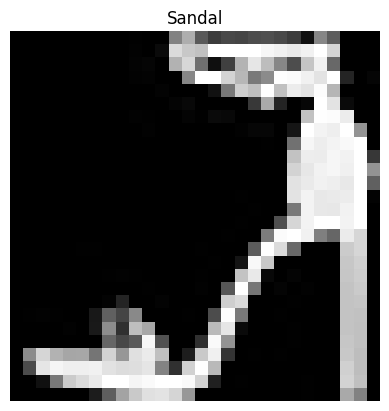

In [76]:
# show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label},label size: {label.shape}")

In [ ]:
# %%html
# <img
# width=725,
# height=375,
# src="",
# alt="# for copy"
# />

## Model 0: Creating a baseline with two linear layers

Data loaded and prepared!

Time to build a **baseline model** by subclassing `nn.Module`.

A **baseline model** is one of the simplest models you can imagine.

You use the baseline as a starting point and try to improve upon it with subsequent, more complicated models.

Our baseline will consist of two [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layers.

We've done this in a previous section but there's going to be one slight difference.

Because we're working with image data, we're going to use a different layer to start things off.

And that's the [`nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) layer.

`nn.Flatten()` compresses the dimensions of a tensor into a single vector.

This is easier to understand when you see it.

In [77]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
#print(x)
#print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


The `nn.Flatten()` layer took our shape from `[color_channels, height, width]` to `[color_channels, height*width]`.

Why do this?

Because we've now turned our pixel data from height and width dimensions into one long **feature vector**.

And `nn.Linear()` layers like their inputs to be in the form of feature vectors.

Let's create our first model using `nn.Flatten()` as the first layer. 

In [78]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

Wonderful!

We've got a baseline model class we can use, now let's instantiate a model.

We'll need to set the following parameters:
* `input_shape=784` - this is how many features you've got going in the model, in our case, it's one for every pixel in the target image (28 pixels high by 28 pixels wide = 784 features).
* `hidden_units=10` - number of units/neurons in the hidden layer(s), this number could be whatever you want but to keep the model small we'll start with `10`.
* `output_shape=len(class_names)` - since we're working with a multi-class classification problem, we need an output neuron per class in our dataset.

Let's create an instance of our model and send to the CPU for now (we'll run a small test for running `model_0` on CPU vs. a similar model on GPU soon).

In [79]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
)
model_0.to("cpu") # keep model on CPU to begin with 

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)